# Начинаем анализ данных

## Импортируем модули читаем файл

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
#%matplotlib notebook

In [3]:
headers = ['Язык', 'Всего-2019', '0-4', '5-9', '10-14', '15-19', '20-24',
           '25-29', '30-34', '35-39', '40-44', '45-49', '50-54',
           '55-59', '60-64', '65-69', '70-74', '75-100']

In [4]:
data = pd.read_excel('findata19_2.xls', index_col=0, names=headers)
#data = pd.read_excel('findata/findata19_2.xls', index_col=0)

In [5]:
print('В таблице %s строк и %s колонок.' % data.shape)
print('---')
print(data.info())

В таблице 159 строк и 17 колонок.
---
<class 'pandas.core.frame.DataFrame'>
Index: 159 entries, Abkhaz to Other
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Всего-2019  159 non-null    int64
 1   0-4         159 non-null    int64
 2   5-9         159 non-null    int64
 3   10-14       159 non-null    int64
 4   15-19       159 non-null    int64
 5   20-24       159 non-null    int64
 6   25-29       159 non-null    int64
 7   30-34       159 non-null    int64
 8   35-39       159 non-null    int64
 9   40-44       159 non-null    int64
 10  45-49       159 non-null    int64
 11  50-54       159 non-null    int64
 12  55-59       159 non-null    int64
 13  60-64       159 non-null    int64
 14  65-69       159 non-null    int64
 15  70-74       159 non-null    int64
 16  75-100      159 non-null    int64
dtypes: int64(17)
memory usage: 22.4+ KB
None


## Первичный осмотр файла

In [6]:
data.head()

,Всего-2019,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-100
Язык,,,,,,,,,,,,,,,,,
Abkhaz,3,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0
Afar,46,2,0,0,1,5,21,15,2,0,0,0,0,0,0,0,0
Afrikaans,107,4,6,4,3,2,8,14,27,21,11,3,3,1,0,0,0
Aymara,2,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0
Akan,466,52,50,24,18,11,37,60,81,42,35,18,21,11,5,0,1


In [7]:
data.tail()

,Всего-2019,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-100
Язык,,,,,,,,,,,,,,,,,
Wolof,324,15,21,24,14,16,24,35,58,49,29,27,7,1,3,1,0
Xhosa,4,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0
Zhuang,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Zulu,16,0,0,0,3,3,3,1,3,0,2,1,0,0,0,0,0
Other,7641,545,612,642,574,545,654,897,872,713,496,403,271,162,101,57,97


Видим, что и в начале и в конце таблицы есть пустые значения, значит надо её отсортировать,  
Отрезать нулевые как погрешность (это не повредит объективности данных)  
И дальше уже работать с новым полноценным датафреймом без пустот

In [8]:
data.max()

Всего-2019    81606
0-4            3787
5-9            4456
10-14          4356
15-19          4250
20-24          4840
25-29          5753
30-34          8452
35-39          8238
40-44          7169
45-49          6781
50-54          5710
55-59          5869
60-64          4814
65-69          3457
70-74          1862
75-100         1812
dtype: int64

In [9]:
d_sort = data.sort_values(['Всего-2019'], ascending=False)
d_sort

,Всего-2019,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-100
Язык,,,,,,,,,,,,,,,,,
Russian,81606,3787,4456,4356,4250,4840,5753,8452,8238,7169,6781,5710,5869,4814,3457,1862,1812
Estonian,49427,2364,2957,2964,2449,2228,3255,5438,5449,4709,4533,4392,3777,2781,1236,472,423
Arabic,31920,2893,3359,3027,2274,2149,3367,3726,3102,2341,1854,1607,1063,562,292,158,146
English,22052,1468,1325,963,901,1222,2217,2888,2755,2286,1758,1356,1021,680,485,379,348
Somali,21920,2988,2539,2119,2262,2781,2398,1926,1361,887,732,816,498,257,148,108,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Dzongkha,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
Tahitian,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
Esperanto,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


Ага, видим, что после сортировки по убыванию, у нас в конце таблицы вообще много "нулей"  
Надо посмотреть, где они кончаются, чтоб отрезать их прям пачкой  

In [10]:
d_sort.tail(10)

,Всего-2019,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-100
Язык,,,,,,,,,,,,,,,,,
Diveh-Maldivian,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
Western-Frisian,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
Galician,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
Latin,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
Aragonese,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
Dzongkha,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
Tahitian,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
Esperanto,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
Limburgish,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Кек, нашли коммуниста. Язык - "эсперанто", 1 человек, возраст 50-54.  
Европейский-комрад, tovaristch! попался в выборку.
  
Так, чот дофига нулей получается таким методом, давай-ка посмотрим через Условие

Уберём строку **Other**, чтобы не мешала выборке, т.к. сумма людей в ней большая,  
а вот полезных данных никаких на нам не даёт.

In [19]:
data = data.drop(index='Other')

In [11]:
total_minimum = data[data['Всего-2019'] < 500]
total_minimum.count()

Всего-2019    98
0-4           98
5-9           98
10-14         98
15-19         98
20-24         98
25-29         98
30-34         98
35-39         98
40-44         98
45-49         98
50-54         98
55-59         98
60-64         98
65-69         98
70-74         98
75-100        98
dtype: int64

У нас 159 этносов(языков) проживают, из них 98 представлены в количестве МЕНЬШЕ 500 человек.  
На 5 000 000 населения.
Округлим 98 до 100, и возьмём "до 500" по максимуму = 500  
Перемножим, 100 * 500 = 50 000 человек из 5 000 000  
  
Получается, 2\3 этносов составляют всего 1% населения

In [12]:
total_norm = data[data['Всего-2019'] > 500]
total_norm.count()

Всего-2019    61
0-4           61
5-9           61
10-14         61
15-19         61
20-24         61
25-29         61
30-34         61
35-39         61
40-44         61
45-49         61
50-54         61
55-59         61
60-64         61
65-69         61
70-74         61
75-100        61
dtype: int64

In [13]:
total_max = data[data['Всего-2019'] > 3000]
total_max.count()

Всего-2019    25
0-4           25
5-9           25
10-14         25
15-19         25
20-24         25
25-29         25
30-34         25
35-39         25
40-44         25
45-49         25
50-54         25
55-59         25
60-64         25
65-69         25
70-74         25
75-100        25
dtype: int64

Блин, какое же количество людей взять за "максимум", на который стоит опираться, и не пренебрегать?  
больше 5000 человек = у 17 этносов (в каждом от 5К), > 10 000 = у 11.  
Возьму, для итоговой таблицы, 5000.  
  
Всё-таки для наглядной выборки по народам и населению,  
каждые 5000 добавляемые в этногруппу (южане, европейцы) могут оказать решающее влияние.

## Работа с итоговым датафреймом

Берём выборку "от 3000". В данном случае, это оптимальное количество людей для репрезентативной выборки.

In [14]:
total_max.sort_values(['Всего-2019'], ascending=False)

,Всего-2019,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-100
Язык,,,,,,,,,,,,,,,,,
Russian,81606,3787,4456,4356,4250,4840,5753,8452,8238,7169,6781,5710,5869,4814,3457,1862,1812
Estonian,49427,2364,2957,2964,2449,2228,3255,5438,5449,4709,4533,4392,3777,2781,1236,472,423
Arabic,31920,2893,3359,3027,2274,2149,3367,3726,3102,2341,1854,1607,1063,562,292,158,146
English,22052,1468,1325,963,901,1222,2217,2888,2755,2286,1758,1356,1021,680,485,379,348
Somali,21920,2988,2539,2119,2262,2781,2398,1926,1361,887,732,816,498,257,148,108,100
Kurdish,14803,1445,1295,1125,886,1108,1740,2004,1628,1094,864,692,470,230,113,45,64
Persian,14118,1228,961,866,1245,1909,1735,1961,1390,736,501,459,440,295,190,89,113
Chinese,13064,714,763,468,462,778,1675,2228,1923,1288,981,688,510,313,172,50,51
Albanian,11806,1251,1124,922,800,1078,1318,1325,1153,831,682,576,363,192,103,46,42


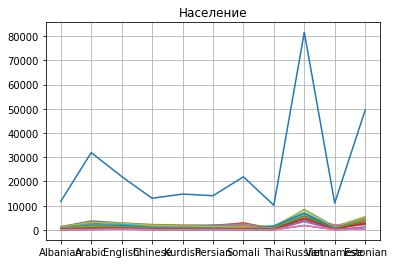

In [15]:
total2019 = total_max[total_max['Всего-2019'] > 10000]
plt.title('Население')
plt.grid()
plt.plot(total2019);

Покрасим итоговую таблицу по цвету, "тепловой картой".  
Т.е. чем больше значение, тем насыщеннее цвет. Чем меньше, тем бледнее.  
Для этого проще воспользоваться матплотлиб и сиборн.  
  
Для раскраски ячеек по максимуму\минимуму без сложного окраса, проще написать функцию,  
которая будет обрабатывать каждый Series и размечать ячейки, а потом сделать `df.style.apply(ФУНКЦИЯ)`


In [17]:
import seaborn as sns

cm = sns.light_palette("green", as_cmap=True)
total_max_color = total_max.sort_values(['Всего-2019'], ascending=False).style.background_gradient(cmap=cm)

На всякий случай, распишу, что это за длинная инструкция:  
`total_max.sort_values(['Всего-2019'], ascending=False).style.background_gradient(cmap=cm)`  
  
Берём датафрейм total_max, сортируем его по столбцу(Series) `['Всего-2019']` (нисходящая сортировка), затем красим градиентом.

In [26]:
total_max.iloc[:, :].max()

Всего-2019    81606
0-4            3787
5-9            4456
10-14          4356
15-19          4250
20-24          4840
25-29          5753
30-34          8452
35-39          8238
40-44          7169
45-49          6781
50-54          5710
55-59          5869
60-64          4814
65-69          3457
70-74          1862
75-100         1812
dtype: int64

In [27]:
total_max.iloc[:, :].min()

Всего-2019    3011
0-4            141
5-9            135
10-14          127
15-19          119
20-24          147
25-29          294
30-34          347
35-39          343
40-44          267
45-49          120
50-54           46
55-59           18
60-64            7
65-69            2
70-74            1
75-100           0
dtype: int64

In [19]:
total_max_color

,Всего-2019,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-100
Язык,,,,,,,,,,,,,,,,,
Russian,81606,3787,4456,4356,4250,4840,5753,8452,8238,7169,6781,5710,5869,4814,3457,1862,1812
Estonian,49427,2364,2957,2964,2449,2228,3255,5438,5449,4709,4533,4392,3777,2781,1236,472,423
Arabic,31920,2893,3359,3027,2274,2149,3367,3726,3102,2341,1854,1607,1063,562,292,158,146
English,22052,1468,1325,963,901,1222,2217,2888,2755,2286,1758,1356,1021,680,485,379,348
Somali,21920,2988,2539,2119,2262,2781,2398,1926,1361,887,732,816,498,257,148,108,100
Kurdish,14803,1445,1295,1125,886,1108,1740,2004,1628,1094,864,692,470,230,113,45,64
Persian,14118,1228,961,866,1245,1909,1735,1961,1390,736,501,459,440,295,190,89,113
Chinese,13064,714,763,468,462,778,1675,2228,1923,1288,981,688,510,313,172,50,51
Albanian,11806,1251,1124,922,800,1078,1318,1325,1153,831,682,576,363,192,103,46,42


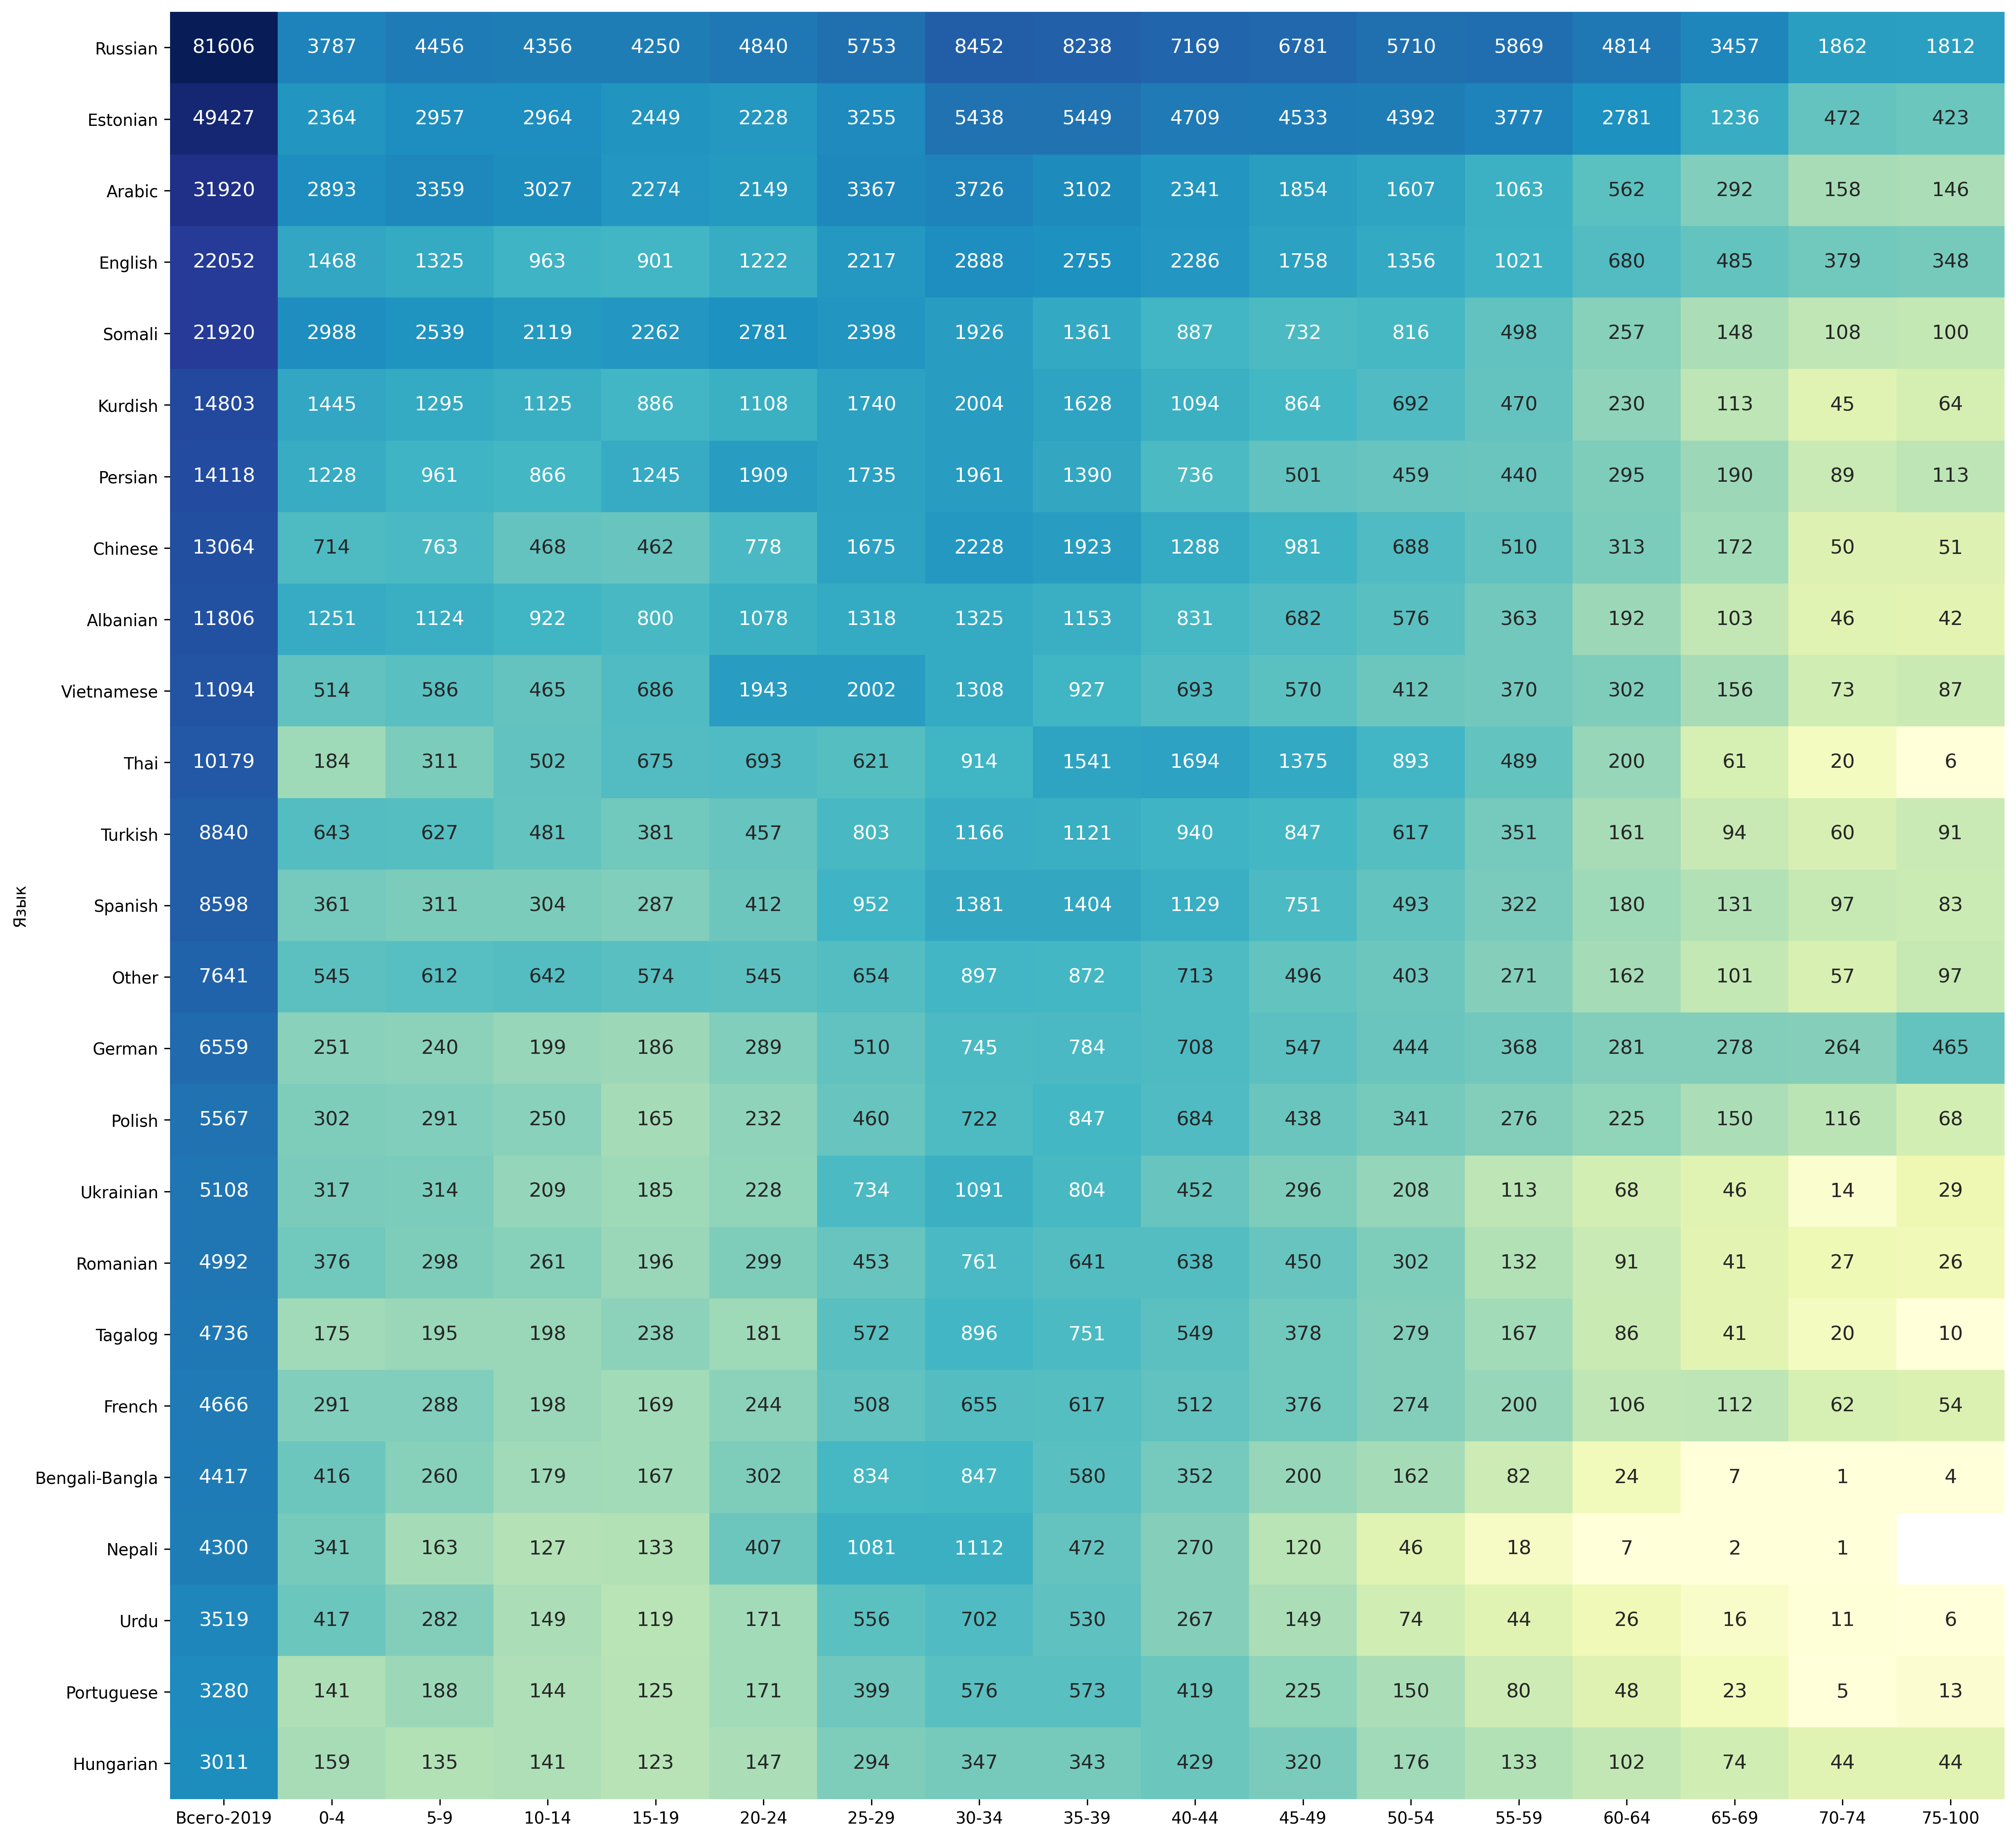

In [18]:
from matplotlib.colors import LogNorm 

table_hm = total_max.sort_values(['Всего-2019'], ascending=False)
plt.figure(figsize=(20,20), dpi=300)
table_final = sns.heatmap(table_hm, annot=True, norm=LogNorm(vmin=10.0, vmax=81606.0), fmt='d',
                          cmap='YlGnBu', xticklabels=True, yticklabels=True, cbar=False, annot_kws={"fontsize":12});
#sns.heatmap(table_hm, norm=LogNorm(vmin=10.0, vmax=81606.0), cmap="Blues");
table_final;

In [30]:
figure = table_final.get_figure()    
figure.savefig('table_final.png', dpi=300)data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAE/YAABI1CAYAAAC1Ozn/AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjMuMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/Il7ecAAAACXBIWXMAAC4jAAAuIwF4pT92AAEAAElEQVR4nOzddXjd5d3H8c85cXf3pJpK6m6U0uLaFlpgFIaNPQwbDAZDNlw2BmzDbTisSPEiLXWX1JumSZumjbvb80dpm5NzkhyJtu/Xde16rtw5P0kf8s3vd8vnNjQ1NQkAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAANjH2N03AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAb0awHwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADiDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABxDsBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAwj2AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADAAQT7AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADgAIL9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABwAMF+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4gGA/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAcQLAfAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOINgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHEOwHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIADCPYDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMABBPsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOAAgv0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHAAwX4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADiAYD8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABxAsB8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4g2A8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAcQ7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAMI9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwAEE+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4ACC/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAcADBfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOIBgPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHECwHwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADiDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABxDsBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAwj2AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADAAc7dfQMAANjKI3ZeU3ffA4DeK/T6a7r7FgD0Yobq+u6+BQC9HdtsAACA7lTX2N13AKAXo18EgKOMhdXdfQsAejOjobvvAEAv1+Tq1N23AKC343kEgAOa3HkWAeAghnoBOKDJk6XkABzT5OvW3bcAoBfzDnft7lsA0MsZDIzRAHDMtgWTu7yQsJQYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHEOwHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIADCPYDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMABBPsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOAAgv0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHAAwX4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADiAYD8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABxAsB8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4g2A8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAcQ7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAMI9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwAEE+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4ACC/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAcADBfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOIBgPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHECwHwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADiDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABxDsBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAwj2AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADAAQT7AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADgAIL9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABwAMF+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4gGA/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAcQLAfAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOINgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHEOwHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIADCPYDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMABBPsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOAAgv0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHAAwX4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADiAYD8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABxAsB8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4g2A8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAcQ7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAMI9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwAEE+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4ACC/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAcADBfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOIBgPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHECwHwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADiDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABxDsBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAwj2AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADAAQT7AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADgAIL9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABwAMF+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4gGA/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAcQLAfAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOINgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHEOwHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIADCPYDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMABBPsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOAAgv0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHAAwX4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADiAYD8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABxAsB8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4g2A8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAcQ7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAMI9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwAEE+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4ACC/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAcADBfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOIBgPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHECwHwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADiDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABxDsBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAA5y7+wYAAIBjjEaDBvaNVnK/aAX4e8vX11ONDY0qLq1QfkGpNm/P0IGs/O6+zU4XGuynIQNjlRAXJj8fDzk5OamyqkY5ucVKz8zRjj1Zqqqu7dBrOjs7aVRKovr3iVJQgI+cnZ1UVl6l9MwcbdiyT/mFZR16vbYM7BetAX0iFRkeKC9PdzU0NKi0rEoHswuUtv+w0vYf6bJ7wanD3dmo+EBPRfq6K8zHTd6uznJ3MaqmvlGl1fUqqKzVjpwyHSqp7u5b7TTerk4aHOGraD93+bq7yMvVSRW1DSqtrtOhkmqlHi5VeW1Dd98mALQrPshTfUO8FenvIS83JzU1SRU19TpSWq2Mgkrty69QQ2NTd98m0GP4e7goLtBTEX7uCvZyk6erk1ydjaqsbVBZdZ0Ol1ZrW3apiqvquvtWu0x8oKf6hnor0s9CHSmkjgAtGQ1SQpCX+oR4K9jLVb4eLmpsalJJVZ2KKuu040ipDhZVdfdtdjp3F6OGRfkrMdhLfh4uMkgqra5XRmGFtmSVqKymvrtvEejR3JyNGhTpp/ggT/l6uMjL1VnV9Q0qrarTkdJqpR4qUXHlyfs84u5i1LBofyWGeJ+oITX1ysiv0JaDxdQQABYZDFJ0oKci/T0UGeAhP09Xebg4SZLKqutUWlWnfbnl2nO4VHUNvMOg5zMaDOoT5at+Ub7y83KTj6eLGhubVFpZq8KyGm3PLNKh/Mruvs2Tip+Xq/pG+Sou1Fs+nq7ydHNSRXW9SipqdaigUqn7C1XN2BB6keN1JNJXfl6uzepI3Yk6UtCxdcRoMCg+zFt9onwV5OMuX08XNTU1qaSiTkUVNdp5oFgH8yo69JrNRQR6KCrISxFBngr0dpO7q5OcjAaVVdWprLJOGTll2nmwRDV1nfu7HBXkqeRYfwX5Hv03MBoNKqusU2llrXYfKlXaoVI1NvE8AvQGvp4uSo72V1yol/w8XeXibFRVTb0Ky2t1IK9ce7NLVVbdsf0UEQEeGhwboEAfVwV6u6mhsUnFFbVKP1KmrZlFqq1v7NDrAV3BaJAGRPkpKdxHIb7u8nBzUm19o8qr6pVVUKH9ueXK6uDnku7k5mLUoBh/xYV4y9fTRV5uzqqpa1BpZZ0OF1dp24FiFVd07JxXAOhIzkaDhsb6q0+YjwK8XOVsNKq8pk6Z+RXaeqBYhdQwoE1uLkYNivJTfIj30bFeN2dV1/061ltcpdSDxV021hvs46aBkb6KCfaSj7uznI1GVdbWK6+0RgcKKrTncJmqO7ifJD7ESwMifRXg5aoAL1fVNzQpv6xG+3LKtC2rhHlmQDtO9fkiQG/n7mxUfICnIn3dFObjLm9XJ7k7O6mmvkGlNfUqqKw7uh6v9ORdjwegd3NzMmpgkLdifdzl4+osLxcn1TQ0qrS2XjkVtdpeUKaSLpq/GeTuov6B3or2cZePq5OcDAZV1Tcqv6pWB8uqlFZUqeqGjhkz8XR2Up8AT8X5esj315+7qv7Yz12jbfllKu/kMWbgZOHmZNTAQC/F+nocryPV9Y0qq61XTmWNtheUd1kd6Uq+rs7q4++pGN+j9dPT2UkVdUefAbMrqrU9v7zDahZ6BoL9AADopU6fPERXz5uuM6cPk5ene5ufzc0v0f8WrdZr7/2o7bsPOnzt2KhgjRiaePx/w4ckKNDf2+Qzv6zaoVmX/s3ha7Ul0N9bCy47TZdeOFFDk+Pa/Gx9fYO27z6oJSu2a9H367Ri7W67r9s3MUK333ieLj5nrHx9PC1+prGxUSvX7da/Xv9Wn32z1u5rtWX4kARde8UMnTdzlEKCfNv8bHFJhdZtTtPiJVu08Ks1OnSksFPuCScvo0EaEuGrUdH+Ghntr4Fh3ooL8JST0dDusQUVtfpmV64+2nJIW7JLbbputJ+7Vtw82d7bbtcdX2zTJ1sP23SMj5uzLh4SoTkpkRoU7iOjofV/g8amJu04UqaPt2RrYephldrYkXDrlETdNiXJpmNsEffw4k47N+CoD347RuMSgszaV+8v0GWvdc7fVkkK8nLV93+YrCAvV7PvPfvTXj37U5pN54v299DyP07roLuTLnpxlTZlFXfIuRKDvTR/dIzOGRyhCL+2nycra+uVeqhUS9Py9M22I9p/Ek2Wx8nrg6vbqCNvWF9HPFycNDLWX6NiAzQ82l8DwnwU5tv278wx6fkV+nxrtj7ZlGV32HG0v4eW3z7NrmMtuejlDqwjQb/WkUFW1pHsX+vIduoIeoeOqiPS0QCZkTEBmpQUpPEJQRoW5Se3XwNkWpNfXqMfdufqv2sOaPsR296lmuuJdWRopJ+un5SgGf1D5d7Kv0NdQ6OW78vXKysztDK9wKHrAd3hg+vGaVyihRqSXqDLXllt93ndnI06d2iE5o6K0YjYALk4Gdv8/L7ccv1vU5Y+Xp+lvPIau69rrQlJQXrnmrEyWugzuuzlVVq93/F+yaHRfrp+cqJmDAxru4ak5euVZelauY8agp7hqXnDNXtMbIeca+nOHC14uf1aEhXgoeX3z+yQa1ryx/c26n/r2h932v+PCzrsmje/vV5fbjpk9ecj/T00OjFIIxMCNSTGX/3CfeTp1v5UmZr6Bq3bV6BP1h7UN1uzCcVAjzNpcJjmTk3UaSmR7f43XVBara/WHNT7S/ZpT1ZJp95XkI+bvnn0TAVZ6Dv556fb9Nxn2206X1Swp3555ryOuj1d8tcftNnGZ4MgHzdNHRqh8cmhGjsgVFHBXm1+vq6+Udszi/TxL+n6fGWmqgj5Qw81aVCY5k5J1GkpEdbVkbUH9f7SdLvqiMEgjegTrInJYRo3IETDkoLa7RcpKK3WD5uz9c6PadpxoNjmax4T5OOmUf2CNapviIYmBKhftJ98Pc3HgFqqb2jU1v2FWrgiQ4tWH1B5BwVy9Yvy1aVTE3XumFgFt9enWlOvpVsP68Nf0rVsW06HXB+wxy+PnKnodv7+2euTlRm6660NNh0T4uuuIXH+GhIXcPx/IS1+n7LyKzTl3m878lbNeLg66eJxcbp4fKyGxge2OX+msbFJ6TllWr07Tz+nHtHP2+zboNXX00XXnN5H546KUWK4T6ufq6qt149bD+u1xXu1JaPIrmsBXWlcv2DNm5SgaYPD5ePh0uZnC8pqtDG9QEu25eibTYfaDb5L/8/FHXmrJv755U7986udNh3j5mLUOSOjNXdCvIYnBrbfv3ukTJ+uOaCPVmYov9Tx/l2jQeoT4ashsSfq6MAoP7m7mj6b2fOzAZ3tVO5fbSkhxEuDo/01NMZfQ2L8lRztJx930/r5ydoDuvP9TR11qyYSQ7x1/fQ+OntYpNl1j2lsbNL6/QV645d0fWvjHF2gMzw1f7hmj+3AGvKifeO9bi5GnTMsSpeOi9XwBCueBXLKtHDdQX20+oDyyzp2rNff00WXjovTBaOiNTDKr83P1jc0as/hMq3cm6fvtx7WunT7xnxDfd11/el9dObQCEUFWl6HI0mlVXX6ZnO2Xvk5Tftyyu26FtCdTtb5IkaD1CfUW0Oj/DUk2k9Do/w0MMLXbN7Gsz/s0bM/7nX4era6bUY/3XJ6X4vfi7/nqy6+G+AEo0EaEv7rerwov6Pr8fytXI9X+et6vK3Z2nLY/jmk1grydNHi68YryMI4yj+WpevZ5ek2nS/az10rbprUUbenC99aq01Wrkt8+pxkzRka2WHXbu5gcZUm/WdFp5wbsIafq7MGBftoULD30f8b5K1Ib/Nxx0Fv/NKh13VzMurMhBBd3DdcKaE+cjG2/SySXlypL/bl6NO9R5Rf1bGBw35uzrqkb7jOTQpV/0DvNj9b39iktKIKrT5crB8P5GtjjvX11NvFSZOiAzUm3E9jIvyV4Nf6e4x0dC3x3qIKfbEvV5/uOaKS2pMvlAwnB19XZw0O9tagoKO1JLmVOjL4zWUdel03J6NmxQdbX0dKKrUoLVcL046ooAPqiNEgJfp5Hq2fv/7s/QO85O5s+k7z782Z+vfmAw5fT5IC3V00KSpAYyP8NTrcz+K/c3N1jY3aWVCuhXtz9FV6rqqYt9rrEewHAEAvkxgXpn89fp2mTRxk9TGhwX763dWzdMNVZ+i1937SfY+9p9KyKquPnz55iCaNGXA8yK+9ELnOZjAYdOv15+hPN18kP9+2X4SPcXZ2UsqgeKUMite5M0dq8JTb7LruPbdcrD/934VydW37McpoNGrS2IGaNHaglq7crgV/eEFHcottvqYlkWEB+vtfF+iCs8ZYfYy/n5fOmJqiM6amyNPTXU88/2mH3AtOHQmBnvrimrF2HRvk5aorRkbripHR+mZnjh78freOdPDkAnvZupffeclhemBmf4V4u1n1eaPBoMERvhoc4aubJyfqr9/v1ufb7ZugDZxKFoyLsxii0xUePn+QxVC/k4mvu7PuOXOA5gyPknM7kzqO8XR11tiEQI1NCFRsgKfu/mxbJ98l4JgFYzuujlycEqlHzh9s17GJwV66bXpf/X5Kkl5ZuV/PL01TdV3v71T3dXfWPTPtqCPxgRob/2sd+Zw6gp6to+pItL+Hrp0Qr7OSw60OBT0m2NtNl42M0WUjY/T9zhzdu2ib8srbXqDW07k6GfWXswbo8lGxFkO/mnNxMuq0fqE6rV+ovtx2WHd/vk3lJ+Guazg5LZgQb3GStqMmJgXp0YuGKC7I+sX0SaHeumvWAN00rY+e+X633lyVoSZbO0Ss5OXqpCcvGdru77e9XJ2M+su5ybp8jJU1pH+oTusfqi+3ZuvuhanUEKATdFI56VAvXDVKw+MDbT7OzdlJk/qHalL/UN1RMEAPLEzVzzsI1EH3iwv11iNXj9L45DCrjwnydddvzuirK07vow+W7NMTH21VeQdPmj7mr1eNtBjq1xtdPDFeF0+K1+j+IVb3f0iSi7NRw5KCNCwpSH+cM1R/fWeTvliV2Yl3CtgmLtRbjywYqfEDbawjM/rqiul99MHSdD3xsXV1JDrYS7+d1U+zRkYrLMDDpvsM8nXXpVMSdemURC3eeEj3vbVB+aW2b55y/+XDda4dC/ednYwa0SdYI/oE67aLBuvxj7Zo4Qr7f5e93Z1155yhmj8tyep3Jk83Z501OkZnjY7R6p25uvet9cpgMTtOQcMSAjVpYOjxAKpwG+tJZ7hkfJzuvGiQQv2suxej0aA+Eb7qE+GryyYnqN9Nts/bunJaku64INmqcFIPV2edOypG546K0ScrM/TA+5sJG0aPlBTuo7/NG6Zx/UKsPibIx01npETqjJRIVdbW6/O1jm90ba8mG3tGJg4I0cPzhysupO2Fps0lhfvojxcM0o2z+unvX+zQW0v22dS/62Q06LxR0UdraKy/kmP8rdrwAEDXsPbXedaQCA2PD9CQGH8NjvaXbzshqJ3FYJBuntlfv5/RT67ObfeVGI0GjUkK1pikYK3am6db3tmgvA4IKAV6s4n9QvTIpSmKsyE4PSnMR3eem6zfzeinZ77eqbd+SXd4rNdgkK47rY9+P7Of1fXE2cmo5Gg/JUf7acbgcJ328I82X/PWMwfo+ul9zAKFLfH1cNGl4+N08ZgYvfbzPj391U41NPaGUSng5Jov4mQ06PyUSA2J8tOQKD8NivSVZztr6brLoEhf3TQtqbtvA7AoIcBTXyywfg1oc0GerrpiRLSuGBGtb3bl6sEfOnc93iOzBloM9QPQvfr4e2pqTKCSfw2hivHp+nGScRH+emBCX8X6Wn/tRH9P3ToyQdcNjdFzGzP07o5sh+eaGSQtGBytG1Ji5WPlc4mz0aABQd4aEOSt6bFBOut/69o95rSYQM3uF6EJUQFytWG+iNFgUP9Ab90Z6K3fD4vTcxsz9M6OQ71ijh1Obn38PTUlOlDJQd7dW0fG91GMLXXEz1O3jIzXtUOj9fzGTL2707Y64mSQzk4IVXKwtwYFeWtAoLc829mEsqOcnxSqC/qEaWSYn5xtmFfvYjRqaIivhob46tYR8Xps7T59lZ7XiXeKztYz36IBAIBFY4b30Rf/vcfqMLuWjEajrrtihiaOGaAzL/2b8gqsS5Z/9M/zlTIo3q5rdrRAf2998PLtmjxuYJde12g06K3nb9bs88bbfOzUCYO0fNHDmjn3b0rPdGzR1+mTh+jtf/1Bgf7WT+4CepKzBoZpXFyArnx/k1K7YLeg9mzMKrH6s386rY9umphg97WCvVz13EVDNCjcR492ww5kLW04WNzdtwBYFBfoqbtm9uuWa58/NEJnDQrvlmt3lUERvnrlihGKtHKRCdAbxQV66q4zuqeOtMbV2ajfT0nSlD7B+s3b61RU2TmL57vCoAhfvTKfOoKTW0fWkXHxgVowLt7h88wcGKbRcQH67bsbtLGXPst7uDjpzStHaawdwTrnDo5Q3xBvzXtjrQore3e4IU5+cUGeumtW/w4/7xXj4vTX8wbZHZrn7easB84bpBGxAbrlw03qjHUP956TrOgA+/qu2+Ph4qQ3F4zWWDsmwJ87NFJ9Q30079XVKqyghgAdaVNGYXffQpeICfLS69eN0z+/26Vnv93d3beDU9iwpCC9+ccp8rFzMYXRaND86X00qn+IrnjsZxV08KKP88bF6szRMR16zu50y0WDFR1i/QI5SwK83fSPG8dp6tBw3fnyWjV2VsIyYKVhiYF68w4H68hpSRrVL1hXPLGk3Toytn+IfjOjr13Xau6MEVEa1S9Y1/9zuTamFTh8PlsF+brrqWvHakz/UN3zxjqbF9AH+rjpnbumqn+0v933MG5gqD574Axd/cwv2rSv6/8NgM6yMb39d4obz+yvmcMiu+Bu2ufmYtQzV4/W2SOju+yaLk4GPXLFCM2eEG/X8bMnxCs5xl9X/mOZiugXQQ9y0dhYPTx/mDx6aCiENaypYcdcMSVRD16aYn//rruL7p+bouGJgbrt9XVW9+96ujnr71ePtuuaADqftf2rT84b3m1hfscYDdI/rxylc4dH2Xzs+L4h+vy2qZr3rxXKzK/ohLsDer4rJsXrIQc2SPN2d9YDFw/RiPgA3fr2BrvHev09XfTib8dobJ9g+05gB283Zz2/YJSm2bBZzTEuTkbdOKOvBsf46dpX1qjmJNhQFye3k22+iJerk/4xd5hd1+xKLk4GPTMnRS42hO4AvdFZA0I1Ls5fV36wSalHyjr8/Bckh+msAaEdft6T0cZD1q9FBDrC7H7hunJQ141LtHTZgAjdO66PjAb7nkW8XJx1z9g+Sgnx1Z9+2WX3+4yfm7P+OT1Zo8P97TuBDX4zKFpjIhy7jqeLk+4em6SpMYG6+cftqqrnfQbd55J+4boy2fZ+vY5yaf8I3TsuyaE6cvfYJKWE2lZHPF2c9NiUjn9Hs8bvh8cpytuxzXH93V30xJQBmhwVqD8v390pc//R+XrvSCgAAKeY+NjQVkP9DucU6cvFG5S6I1OFxeVycXZSWIi/xozoo7NOHyEPd9NJ2cn9orXonXs06bz7VF/fe3bjDQ320/cf/UX9+5i/PBSVlGvxkq1K3Zmp3PxSlVdUycfbQxFhARoyMFZjR/RVVIT9ux4989ACi6F+BUVl+uDT5dqVlq2yskrFRodoxpShmjI+2eRzURFB+vLdezThnHtVXGLfpISLzxmrN5/7P7m4mD/C7dp7SIuXbtGBQ/nKzTvaOejn66k+CeEakhyncSP7mf13ADiisalJafkV2p1brsyiSh0qrVZFTYPqGhrl6eqkcB93DQr30ZTEIHm32OU3wNNV710+Qhe8vlbphZVtXqe2oUnbO2DAIdLXTQEtFqisOVCk/e1c/5jrx8W1Guq34WCxVmQU6kBxlSpq6uXl5qz4QE9Nig/UsCg/s8/fMD5eBZW1emlVZrvXzSuv7ZCff1C4j1nbB5sPOXxeoKMZDNJTFw/plt38Qrxd9dC5ye1/sAMcKq5SSZV9oV6VdfV2X3dUXIDe/M0os7osSQeLKrVkT54yCyuVX16r+oZG+bi7KDbQQwPCfDQyLkC+7t07QRSwhsEgPXVR59aRmroG7ThSpn355dpfUKn88hpV1NarqenoBKi4QE+lRPtpbFygnFtMFBoS6af3FozRBS+tUm2D/QNzDtWRWgfqSGyA3ryyjTqyt1kdaWyUj1uzOhJLHUHv0BV1RJLqGxq1/Uip1mcWKbu0WgXltWpsalKwt5uGRfnptH6h8nE3f5d688pRuvzNtUrNdiwovTvqyPNzh1kM9TtcUq3Pt2Zrf0GFahsaFRPgqZkDQjU40vR9qn+Yj16/YqTmvLZadQ2MSqJnMhikpy5J6fAacvbgcD18wWCL39t5uFS/7M3TvrwKlVXXydPVSdEBnhqbEKhxCUFmE7vPS4lUcVWd/vL5tg69x8l9gzV/TGyHnrO55+cNtxjqd7ikSp9vztb+/GM1xEMzk8M1uEWfTP9wH71+1SjNeWkVNQQ9Rm19o9Jy7Ov7O1BgXb9mXUOTdnTAhOIIfw8FeJn2r67dl6/9efaNd+SVVivPzkCxUgdDfvPLarQtq1gZeRU6UFChkqo6VdbUy83ZSf5eLuoT5qOJ/UKUEGK+wdItswaopq5R/+kBG7fg1BMT4tVqqF9OUZV+3HRIOw8Wq7i8Vs5ORoX4uWtYUpCmD4uQe4tnk35Rfnrzzqm66KHFqu+gv4vBfu564MoRHXKu9mQXVKi43L5aUFljf7/IMfkl1Vq3J087DxSrsLRGxRU18vZwUXyYjyYNDtfg+ACzYy78NYjnjpfWOHx9wF4xIV6thvrlFFXpx83Zv9aRGtM6ktJKHfnjFF301x/sqiP1DY3acaBY6/fk63BhpQrKqtXY2KQgX3cNSwzStJQI+bQIrQjwdtPrt03WlU8tVWpGkc3XPKa0slap+4uUkVOmzNxyFVfUqqK6Xi5OBvl4uqpPhK/G9A/RwFh/s2PnTE5QfUOj7ntrg9XXc3Yy6M07plgM9ausqddPm7O1Jb1QeaXVamhoVIC3m5Jj/TVjeJSC/Uwneft4uOiNO6boggcXKzO33NYfHbBb2uEyldrZl3iMn6eLooJMA3Mrquu1aO1Bh87blTxcnfTWLZM0ykIARkV1vVbuytWWjEIVlNWotLJOXu7OCvZxU/8oP6XEByo+zL5NXB+cN9xiqF9lTb2WbjuitXvzlV9WIw9XJ8UEe2n6kAgNalHDkmP89frNE3Xp00tVy8Ix9ADXTO+j++YMNWtvbGzS9qxirdiZqyPFVSooq5Gz0ShfTxclhfsoOdpPKQmBNoU17OiAzZKCfd0V2uLvclZBhVbsyrXq+LNGROmv84ZZ/N7OrGIt25mr9CNlKquqk4ebs6KDPDWmb7DG9Q0x798dFaOSijrd/8Fme34U4KRyKvevdocHLx5qMdSvqKJWn204qLSccpVX1yk60FOT+4dqXItnpgh/D71943id98xSh58tgY5QW9+oNDvnZx/It66GHHP2sEj9bU6Kxe/tPFSiZbtytS+3/OizgOvRZ4GxSUEa1yfY/FlgRLSKK+t0/8dbbb7vYB83fXDzRCWFmc8pL6ms1dKdudqZXaqCshpV1NTL291ZYb7uGhDpq+EJgYrwt30TWINBrYb6lVTW6sdtOdqcWaTC8hp5uTsrKdRbZwyJUEKo6fvTpP6hev6qUbr+1bU23wPQVU7l+SLd7dbT+2lAuG933wZgtePr8fLKlVlUdXQ9Xm296hqafl2P56ZBYT6akmBhPZ6Hq96bN1IXvNX+ejxbhHi56qGZXRN6c6ikWsXV9q6lsX4ddHZptbbb+c54jIvRoH4W5o58sIX1eDh1zIwP1l/GW97IbXdhuVYcKtL+kiqV19bLw8VJkd5uGh3ur9HhfmYBXmcnhqq0pl5/W51m830EubvozbNSlOhvnq9QUlOnFYeKtLuwQgXVtaqoa5C3i7NCPV3VL8BLKaG+Cvdys/malpTU1GlTbqm255ersLpWRdV18nB2UpS3u8ZG+GtkuPla4vGRAXrh9EG6cfE21ZHKhVPQzLhg/WV8H4vf211YrpXZxdpfUqmy2gZ5OBsV5e2uUeF+FuvIWQkhKqmp08Or93XFrXeKgqpabcgp1a7CchVV16mkpl7erk6K9fXQhMgAJQeZP3ucm3Q0fPnuZWxK3RsR7AcAQC/x7N+uNgv1q66u1V+e+EAvvvV9qwF9gf7eeurB32j+xZNN2lMGxevWG87V0//63O57Kimt1JbtGUrPzNGCy06z+zzWcHdz0Wdv/cks1O9wTpHue/x9ffjZCjW0E4wxZGCs5l4wQRPHDLDp2uecMVI3XjXTrP3l/y7W3X97R1XVpgtHnvrX5xo/qp/ee/E2hYf6H29PiA3T84/+Vlf+/jmbri9JE8cM0OvP/t4s1O/HZan601//q+27257o6u7moumTh+iqudNUX+/4ghWcepqapLT8Ci3Zl69f9hVo46ESlVmx+MnN2airR8fqtimJcndxOt7u6+6iJ89L1uy31rd5fG55jc5+dbXD9//jjePNgv0+2GRdR3q0n7tun5pk1p6WX647vtiuza0EajwlaVSMv54+b5ASAk3r9+1TkvT1zlwdLK5q89rvbszSuxuzrLrP1gyP8tNnV48xaSurqdeiHUccOi/QGa4ZH68xzcJeNh0s1vAY/y659qMXDDapE5157X/8uFefWFmDOkpSsJdeu2Kk2eDulqxiPfzNLq3LbHsRnLPRoNHxAZo9PFrVNgyIAl3tmvHxGhPXsXWkvrFJGw4UacnePC3fV6Bth0usCoMJ8XbTnTP6ae4I093RBob76pbT+uipH/bYfU//+GmvPunikN6kYC+9drmFOnKoWA9/a2UdiaOOoOfrjDpyTGNjk1ZlFOiTTYf0/c4cVdS2/rvg6+6sP0zro2vGxZtMsvR1d9Gzs1N05r+WOxRM1dV15KqxcZrR33w312d+3KP/LEtXfYuJCs8tSdPMAaH6+yUpJnVnWLS/7pjeT48vZlASPdM1ExM0JqFZDTlQpOGx5sEutvBxc9aD5w0yaz9SUq27F27Vkj15rR7bL8xbT81OUUqLAInLx8Tqs82HtKGdv9+23OPjF59YiFvX0KhdR8o0xMKGB/a4any8Zgw0X+zxzOLd+s+SfeY15Kc0zUwO09/nDjOtITEBuuOM/nr8210dcl+Ao3JLq3XO00t6xTUW3z3dbOHph6sP2H2+d1dm6J/fdc3f85KqOn29+ZCW7MzVmn35Vi/aHd8nWA9eMkT9WiwCueXM/vph+xHt7YANWQBbPPSbkWZhXDW1DXry461658e9rQZr+Xu56r7Lh+uiifEm7clxAbr2rAF68cudHXJ/Dy8YpQDvExOhN6UVaHgf+zdda8uzC7fpf8szOuXcrckvqdZnKzO1cMV+7T7Y+oL+pz7eqrEDQvTYNaMV12KB7IUT4rVye06X3ztwzENXjDCvI3W/1pGf0tquI/OH6aIWoVLJsQG69sz+evEr656vGxubtHpXrv63PEOLNx1SRXVrY8175ePhopsvSNbVZ/Qz6Rfx8XTV368fq7P/8r3qrNw45Vh43tLUI1q9K1dpVm6WMCjOXw9cPkIj+5qGUcyblqRv12dp+fYcq85zzaz+GhRn/l740S/peuzDLSqttLx47cF3NunqWf1020WD5Op8Ypzdx8NFD145Qlc/84tV1wc6wjUvrHD4HA/PH675UxNN2r7ekKUKB0J3q2rrteNgiVIzi7RguuXFIB3FYJBeuH6sWahfSUWtnv9qp95Zmt5uYF5CqLfOGhllMaSvNXMmxGneZPNNKL/fnK3739uk3JJqs+/944sdmpESoceuHKkgnxPPZykJgbr7kiH664dbrL4+0BnOGxWtP18yxKz9y/VZevKzbcpq573d291Z0waH69KJ8Wpqan+c5NxHf7L7Xo954/8mmgX7fbwyU1ZcXj7uznpgrnmQz5HiKt3zzkYtbeOZol+kr568cqSGtggPnz85QZ+vPaAN6YXW/QCtyCmu0rYDxTIaDDptSLhD5wK6w6ncv3pMYXmNtmWVqKSyVue1mJvSkWYMCteVk8yfSd5ZsV+PfL7dbA7Iv3/Yq5EJgfrPgtEK8T1RP2ODvPTInBTd/Hbb84aBrpBbUq1znlrS6dfxcXfWAxebP/scKa7S3R9s1tKdrQcF94vw0ZPzhyulxXjz5RPi9fn6LG3Yb/2zgJuLUW/cMM4s1C+npFpPLtqhzzdkqaGdgImBkb46b2S0Rieab+jYmlvPHGAx1O/9lRl6/IsdFoM+H1+0Q3PGxurBS4bIo1lA2hlDIvTbaUl6bUnvXbyPk9upNl8kp7RaqYdKZDQYNH2A+ZywrjI02k83TDnR53SwsFLuLk4K8emY8B6gIzRJSiuo0JJ9Bfplf4E2HipWWU3786jdnI26elSMbpvUcj2es548O1mz3+m45+pHzxyoAI8T7ywbD5VoRAfN+2rp78v26ZPUw51ybtPrpOvvy9IdOsd5A8P0woWmz3KZRZVa2UFz7gBH1TY0am9RhbYXlGtWfLD83FzaP8gG3i5O+vNY8zW1ORU1un/FHi0/ZPl34T86oD7+nnpkUn8NDjF9B5k7IEJfpudqU671G9y7ORn14szBZqF+uZU1+sf6/foqPVftTanvH+ClsxNDNDLM9tpWWlOvbzPy9NneI9qaV6bWLvWvzZkaEOilhyb20+Bg0597XGSArhsaq39vzrT5+kBn6oo6ck8rdeSBlXtbrSPaIvXx99TDk8x/n+b2j9BX6Xk21RFLcitrtKOgXEYZNCXG+r4OexRU1WrRvlx9sS9He4paHwd7dkOGRof76aEJfRXra7rBwrlJoVp1uEifp1m36RR6DoL9AADoBfr3idSs04aZtS/4wwv6/Nt1bR5bWFyu3976b5VXVOv6K88w+d7vrz5Tz/z7C6smOJVXVGvrjgxt3LpfG7ama+PWdO3Zly1Jio0O7vRgv6cfukrDh5hOCli2eqcuueYplZW3HYx1TOrOA0rdadtECGdnJz39wG/M2p975Sv96W/vtHrcqvV7NO2i+7Xiy0cUFHDipWH2eeP18n8Xa9lq6xfJBAX46O0XbpZbixeiOx96Wy+89o1V56iuqdPXP2zU1z9stPq6QHPphZU6/cWVNh9XU9+oF1dlaENWsd69fKTcnE/smDw6JkBjYwO05kDndmiPivFXn2DTlPqS6jp9vdO6xRZXjIyWR7NBEEnKKKzU7LfWq6idnUPXHyzWnLfW6dOrxyim2U6F7i5OunJktB79ca+VP4X9LhtmvkvqlzuOqKqOXdjRsyQEeeqPM/od/7qwolYPfrlDn/9uQqdf++JhkTqjWUjEmoxCfbIxq8tCBTubq5NRL1w6TH4eps8Sr67Yr0e+3WXVZPP6xiatSi/UKgcnhgOdKSHIU3+c3qKOfL1Dn9/gWB35cGOWPrQjaDevvEZ3fZaq9PwK3d1iF8MFY+P0/NI0VfeSv8euTka9MNdCHVm5X498Z0Md2V+oVTZMKgW6WmfVkbqGRn26JVsvLN2nA20MxDVXWl2vh7/dpZ1HyvTUhUNMFrEnBXvrqrFxenVlhkP31VUCPF10x+nmuzU+8NUOvbWm9QkK3+/K1fw31urja8eZvEteMz5eH2w4qIwO3HEW6AgJwV764xkn/uYXVtTqwUXb9fnvJzl03guGRSrU13TRaFFlrS59ZZUy21nkuienXJe9vFofXj9OQ5tN1jYaDbpmYkKHBfv95dxkRTXr9/jP0n2K9HPvkGC/AE8X3TGzn1n7A19s11urMlo97vsdOZr/6mp9fMN4uTULwbhmYoI+WHdAGVYGewGQRiUEqk+LhV6lVXX6ekt2N92Rba5+2b6NY1al5euSZ5fpv7+boGHNwnjcnJ103bQ+uuuDTR11i0C7kiJ8NHVohFn7rS+u0vcb2g7sLq6o1R9fXqPKmnpd3iLwZsEZffXSVzuteq9vy0UT43XGiBNjEWt35+qTZRmdFuzXlfYfKdMLn2/XotUH2l3YesyaXXk6/4HFevfu0zS4RQDHXXNT9NXag6puI+gd6Ayt1pGXVltXR15Zq8rqVurI1233D9bVN+qzVZn696IdOpBXYdX9llXV6dEPtmjXwWI9cc0Yk36RxAhf/WZGH732nXUbp9zzhn0L27ZnFmv+Ez/rhd9P0BnDTcdbf3fOQKuC/QwG6eozzPtE3ly8R397b3Obx9Y1NOrlr3cpO79C//zdeJPvTRkcrr6RvtprZUgh0N3cXZx03pgYs/aPVmRYfY6augbtPlSi1Mxibc0oVGpmkfZkl+rYn+fODvb73Zn9ddoQ0zq6J7tUv3l2mcVwPUv255br39/s1r+/sS7k3M3FqD9eONis/dPVmfrjm+vbrL0/bDms/TlL9dGdU03Cl6+clqSPV2RoZ1brQcVAZ0oI9dYjlw83+dteW9+o295Yp282WrcZUXl1vb5cn6Uv1zu2Uaq1IgM8NGmgaUhFQ2OTPlll3QLM88fEmIUCFpXXaN7ff1FmO89Ge7JLNe8fv+iD26doSLO+CaPRoKun99GG9LVW/hRSflm1th0oVmpmsVIzi5SaWaScX+vXJeNiCfYDOlFH9a+WVtVpW1axUg8Wa+uBYm09WKysX8dLxyYFdVqwn7PRoPsvMn8meXVJmh75fHurx23YX6iL/7lMX9w+1STU8NzhUXpnxX6t2VfQKfcL9DTnj4w2fxaoqNVlz69QZn47zwKHyzTv+RX64OZJGhrrf7zdaDTomqmJNgX7PXDxEA1uMR92TVq+rn15jcqtDFzfmV2qndk7rL5mqK+7rrfwrvavxXv0dBsbzjQ1SR+tPqD9ueX67+8nmIz13nb2AH2xMUt5pTVW3wfQFU72+SL55TXadqhEWw+VKDWrRFsPFSvn19/D2SOiuy3Yz9XJqGdmp8jZ6cS8srsXbtUTlwxt4yig66UXVur0l1fZfFxNfaNeXJ2pDVklenfeiBbr8fw1NsZfaw4WO3x/Fw+O0Mx+Ice/XnOgSB9vze60YL/e5LKUSLO2j7b2jrkyOPnUNTYqvbhS2/LLtT2/TNsLyrS7sEJ1vw6UTIwM6PBArnMSQxXiaRqWW1xdpwXfbNGBsrbHRtKKK7Xg2y1686wUk1Auo8GgK5OjbArkumdskpKDTPtW1h0p1u9/2K6KOuvmXuwuqtDuDdaNVR+TU1Gj11IP6pM9R1Rj5aZzuwordMVXm/X86YM0Odo0KOy3Q6L1vz2HlVNZa9N9AB3lWB3Znl+u7QVHa8muoorjm6tPjOqsOmK64UlxdZ0WfLtVB62oI1d/u1VvnjlUg1rUkSuSI22qIwVVtdpRcOLn3l5Qrtxffxcv6BPaacF+GSWVemnLQX29v/0A0mPWHSnR3EWb9PqZQ5UcZJqLcPvIBH23P1/VVtYk9AzG9j8CAAC62/mzRpu1ffHtunZD/Zq75+F3dSS32KQtPNRfY0e0P7Fx7rXPKGzQNTr9kod050Nv64NPlx8P9esKE8cM0G/nn27StmbDHl3wm8etDvWz1/yLJys+1nSQYduuA7rv8ffbPTbzYJ7++MBbZu1/vuUSm+7hkT/PV2S46UvBn/76X6tD/YCeYN3BYr1mIbDhnIGdP4h36TDzjvQvth9RdTu7pR8zq7/5PT78w552Q/2Oyauo1SM/mC8sOaPZwEdn8XRx0rkWdjr8YJN1k2GBrmIwSE9fMlQericm4Pz1650qqOj8zupQHzc9cE7y8a+rahv0p09THV7M2pPcOCVRAyN8TdreWJWhh7+xLowL6A0MBunpi1rUkW+6po6058Xl6dp40HQSlJebs07r2327lNrqxsmJGhjeoo6sztDDVoaDAr1BZ9WR1OwSnf7cMt31WarVoX7N/W/zIb291vxd6hILAd491YJx8fJ1Nx3k/SUtr81Qv2O2ZpfouSVpJm2uzkbdNMV85zagOxkM0tOzU0xryJc7VFDu+LPIzEHmCyqf+3Fvu5O0j6mqa9CfP001a5/WL0QuTgYLR9hmWv8QzR11YnH+npwyPf9Tx21ksGBCgnkN2ZPXZqjfMVuzSvTcjxZqyLTOXewPnGzmjo0za/tiY5aqrZwY2ZuV19Trj++Zb5g0c0i4nIyO11DAWjNHmi/M/n5DVrthXM099v5m5RWbjquG+HtoeJJj4Xuh/u76y+XDj39dVVOve15bp5Ohw+DB/27QzLu/0WcrM60O9TumvKpON/5zmSpbLIoN9nPXFAIz0A1mWgh4sLmOfLhFeSUt6ohf23UkNbNIM//8je5+fZ3VoX7NLVyRqXd+SjNrv2hCvM3nskd9Q5Pufm2dKqpNx4VH9w9WkI9bK0edMDwpSKH+pruo5xRV6cmPzd/RWvPl2oP6cbP5/JwZw3tP3xBw9sgo+bTYOGhvdqk2WBnm8tAHmzXkD5/rwsd+1l/e26SPV2Zq16EToX6dLT7UWzefM9CkLSO3XPOfWWp1qJ895k1OVEiLAJCM3HLd+84mqx619h0p0/3vbzZpczIa9IdzB1o+AOgCf5s3TN4t+vpufX2t1aF+3WH2hDizPoBlO3N0uMi6easzLSwAf/7rXe2G+h1TVduge98z31xg6qBwq/p3K6rrNOnebzTmrq91zQsr9Y9FO/TD1sPHQ/0AdL6O6F895+klSvnz17r83yv1+KId+npL9vFQv8520agYxQR5mbTtyi7Vk1+2H+6VVViphxaav//8YVZ/C58GTk6zLGy08Nx3u9sN9TumqrZB93642ax9anKY1WO9Y5KCNK9FX8rG/YVa8OJqq0P97HH96X3k3mz8XJLWpRfoma9aD/Uz/Wyh/vH1LpM2Lzdn3WBhY0mgO53M80XKa+o18YmfNOqRH7TgzXX6++I9Wrwz53ioX3e7/Yx+6tssQPmDdQe0gvBgnITWZRXrtXUHzNrPGWi+VsxWod6uenDGiQ1Xq+oadNfXO9T7R3odF+Pnrgnxput56xsbCfZDt3g1NUtj31mpiz/fqPtX7NGHuw9rW3758VC/znJ6XLBZ23+2ZLYb6ndMVX2jHlppPpd0cnSgXKycdzUyzE9z+pu+V23OLdWN32+zOtTPHq9uPagz/7dW7+7MtjrU75i6xibd/vNO5VaaPjO5OztpVnznrycGLHkt9aDGvbtKl3yxSfev3Hu0jhSUHw/16yynx5rPJ3lxy4F2Q/2Oqapv1EOrzOeMTI4KlLMVdaSirkFnfLxWUz9co9/9sF0vbMrUzwcLj4f6daZHV+/T+Z9t0KJ060P9jimva9AfftyuyhZ1LsjDVROjAlo5Cj0VwX4A0EEMBkO8wWBoava/N7v7nnDy6N/Hwu4OX6y06RyVVTVa9L35TuR9E83P3dKBQ/lq7KrZkBY88ZcrTL6uqanT9X98SVXVnf/gfP2VM8zaHv77J6qz8qX/g89WaNsu087TaRMHqW+i+SCtJYP6x+jKOVNM2n5ZtUPPvfq1VccDPcmn2w6btfUN8bbwyY7j5epkcbDC2mA7J4NBcQGeJm2l1XX6aW++TfexeE+eylpMfogL8FRnr/08NzlM3m7OJm27csu0Odv63QiArnD9xASNjD3RqfTjrlx9ZuOuxPZ6/MLB8mu2kOTvP+5VhpUTHnqDIC9X/W5yoknbvrxyPfbt7m66I6BzmNWR3bn6rAcNnFuqaX1DO/c5qKMEebnqd5Na1JH8cj32HXUEJ5fOqiO7c8vtCvRr7rkl+1TfYlLAwHBfRbTYkbknMhqkeRZCSJ5YbB5+3ppXVuxXYYuAxfOHRMinxbsO0J2un5yokXHN32ly9NnmjlmMmmSh72SRjfVpW3ap9uWWm7R5uTkrzME64uvurMcvOrHTeUNjk+7631bV2ToDoRVGgzRvdIxZ+xPf7bLwacteWZZuXkNSIqkhgJW83Jx1toWNUz5c3X5A78liX265trbY5d7P09XhGgrYIinS16xt0WrzxRttqapt0GILYRkJEebntsWjV4+Wn9eJnZWf/XSbMnLK2zii9/h5y2E1OhBQeLiwSh8vTTdrP81CsAfQ2ZIifMzaFq2xp46Yv4skhJuf+5g9WSV2Bfo19/wXO8z7RWL9FRHo0coRHau4ola/pB4xaXMyGpVo4d+0pUQLNXbxpkOqsXGRyRerzJ+9rLk+0FPMnRRv1vbRigyrjz9cVNXpi0racueFg+TmYhpGce87G1XYAQv023LmCPNnhpe/32NTCNBX67O0+1CJSduMlEiF+3dNDQWamz44XBMGmG589r/Vmfp2U88Z07Vk9njzQC5baliShWelL9dn2XQP2w4Ua9+RMpM2L3dnhVnxu9zYJGUXdu7m2QBa11H9q10V4mfJ5RPjzdqe/XaX1WNBn2/M0q4W81Un9A1RYifPHQZ6isQw8//Wv7Qx1HhbVon25bR4FnBzVpifdc/1f75wkMnXNfUNuvO9TZ2+gdOZFkINn/92t017wryxNF2F5aZhGHPGxMrNhSXR6DlO5vkijU3SoeKe+T4xPMZf1zWbH3+kpFqPWBkcCvRGFtfjtQjgtscTZyWbrqX5ZZ8yrNzM4GQ3Z2ikjAbTRX9L9hUot5P7hQFL8qtqbQ6X6wiJFt45vknPs+kcOwrKlV5s2q/h6eKkUM/2N1GTpLtGm65jqW1o1H3Ld6u6k/89VmQXqdaBebCV9Q16c5t5P/DUmEALnwY6X35VXbfUkQRLdWS/HXWkxLyOhHm6tnLECY1N0uGK7gkmX5pV6NBGdUcqa/Xp3iNm7VOjqSO9Db1YAAD0AiFBfmZtu/ba3tG/O838mLAQ83P3JNMmDtLIlCSTtpfe/l579nX+hK7EuDCzax/OKdKXizfYdJ7X3v3RrG3uBROsOvb2350no9H0ke2OB96y6fpAT5FpoXM/1Lv9l2dHnD8oXF6upgu1tx8p07YWkx1bE+jpYrbrcmZRlRpsXMhV39hkFubhZDQoyIrOA0dcNizKrO3DzT17QixOPUkhXrq92Q6apdV1uveL7V1y7TkjojW9/4mJ45sPFuu1lfu75Npd5apxcSa7QErSY9/tVm03dMYCnSUp2Eu3n9aijizqmjpiLUuhXqHe1g1GdrerxlJHcPLr6XWksLJWqRbCuWMDPS18umcZlxCkUB/TiaCbs4q1/bD1YeO1DY36ZLPp5AZ3FyfN6oAdZ4GOkBTirdub7VxcWl2nez/d1mHnD/Yy7TsoqqxVvh0TBNPyzAN2Qhx8HnngvEEK9zvxO/76iv3a3CL8yhHjEoMU2mIy+eaDxdpuw4YFtQ2N+mSDhRpiYWd7AObOHxElrxZBmDsOlWhbVkkrR5ycDuSbBxK1rE9AZwryMf+bnWbHBj77LBwT7Gv/88DsyQk6rdni9M37CvT6t9aHeJ8Klmw1X2QTG+r4IhvAVkEWftfTDls3XtrcPgvv88Gd/DexsKxGqRlFZu0xXRgCYSmcMNSKIB1L9dtSLW5PmsV/997RvwwkhHprTN8Qk7ba+kZ92kvCwuNDvTVzuOm8i+82HdKq3bYtOLGVh6uThiUEmbTVNzRq0dqDNp/r8xZBrk5Gg84fY76RAtDZbpjVz+TrmroGPfa/1G66G+tMGhiq6BaL5PPLqvXDFvPn/Na0fB4oKq9Rfpnti8jSLMx143kA6Pl6e/9qXLCXUpptjidJOSXV+mG7+YLStry/KsOs7bwR5nNbgZNRcIvx2KKKWvueBSxsphJsod+hpQn9gs1+j/+7bL/Sczt3c5b4EC9FtZjTkl9WrWU2vkvV1jfqmxYb6vp6umgGY73oIU7l+SLdyc3ZqKdnp5is87n3s1SV1dR3410BnSvTQsimo/PQ5w6N1PQ+wce/3pRdolfX2bYp1MnKoKPBfi19uIX1eDi1BLqbPosUV9epoLrO5vO0DOSSpKBmoaKtGRvhr8EhphunvL8zW/tLekcA6S9ZhWZt0T5svIRTS6BHx9SR/cWW6kjnrs3vCX45ZD5XJtqHeau9DcF+wEnGYDBkGAyGpnb+12AwGIp+/ez3BoPhMYPBYF3CFIBuUVtn3rlsqa09NbXmx1TX2P4A3JWuvmy6WdtbHy7pkmufMXWoWdsX361Xg40BFp9+vcasbda0Ye0e5+PtoYvOHmvStmFrurbtopMUvZObs/nrhyM7V1jjUovBdtYHo1oKrKmzM8Smpt78OEttHaVPkJdGxvibtFXXN2hhqvWTS4HOZjRIz1wyVG4uJwKjHv12l46UVnf6tcN93fWXswYc/7qmvlF3fprq0E4YPY3BcDS8sLm8shr9tDu3m+4I6HhGg/TMxS3qyHddU0ds4ebsZNZm7zNFVzIYpDnDLdSRPdQRnDx6Sx05ZGESQkgnB6V3hKnNJn4d880O2xZ6SNI323PM2qa1WBAMdAejQXpmToppDfl6Z4fWkJZ9E3V29iXUdnC/xIyBobqk2fvG/vwKPf39brvPZ8nUfua/599Y2IG6PZaOmdafGgJYY+7YOLO2D3tJAEdHsty33fPf6XDysDhWYcffcYvjFHX2/bccHuChe+cNa3aeBt392lo12rgx0skuu8B8Ymmwhd2ogc5m6X3ArjpioWbU1DXYdU+2sPS7FOLXdZOV3VzMnwWs+fez9Bl7+oVrLf678yyC3mHupHizth+3ZKvQjkXo3WHOhDizzSA/XpHR6ddNCveRa4v3kL3ZpaqwY4H6hnTzhWOnDSEEA10rIcxbo1uMF/yUeqTH14K5E+LN2j5dfUD1NkwsafkcVmfnXLnaevNnLp4HgJ6vt/evTmm2Ye4x36ceVoONE+y+thB+MY1N3HCK6LixXgvPAhbaWrp0nHkd+nhN569FGRDpa9a2ycLGDdbYuN/8uNMGUUPQ/U7l+SLd7c5Z/ZUUemLjl882H9KPu5jTipNbR89ZCPdx032nn9gMu6a+UXd+teOkWkvjiKmJQYpssbFVbnmNfkzL76Y7ArpHXWNjm19by1K9sqaGze5nPpaxcK/tc9C7y+Fy81D3YCsCDYGTScv5EXV2PmzUWjiu5hSYv2m5jvT8NUQwRbAfcGoySvKXFCfpDEl3S1phMBhSDQbDpO68MQCWZR4072COjgyy8Mm2RUcEmrWlZ5ovjO4pXF2ddfaMESZt23Yd0I49WV1y/YljBpi1rVq3y+bz5OSVKG2/6eLR4UMS5OHe9sPzOWeMNPvMx5+vtPn6QE+RYmGQ/kCR+SKMjtIvxEvDo/xM2qrrGvSpDcF2JdX1KmmxA0CEr32LRFp26hdV1qq0E3cFu3SY+e5A3+/OU3FVzw50xanlxsmJGhbtf/zr5fvy9cH6rvk7/8SFg+XbrEP8hSVp2tvJu5B2tZGxAYposbDtq22HGXDFSeXGSRbqyIauqSO2GNrimUSSMgs77zmoo4yMsVBHtlNHcHLpLXXEw8U8ILS6FyzYGhNn3he1LtP2ydqp2SWqqjWdlD46LqCVTwNd58YpSRrWLFR/eVq+Plh3sEOvkVVkGuwZ4OVqcbJme1r+TW9obFKWnf0yfh4uevTCIce/bmxs0t0Lt3b4xO8x8RZqiB0LPlIPWaghFs4NwFS/cB8Na/H3trq2QZ+u79g61xsMbrGBSkNjkw4WVHTPzeCUlJVn/t9bRKCnzeeJtHDMATv7RB+7ZrR8vU6MY/77ix3ae6jUrnOdzDxcLbzL1XZ+CBrQUla+pTpie8hkpIVj7K0jtuju36WhCebvD5lW/NyW/91tr9+WjrHm+kB3czIadNG4WLP2D7sgGK+jnDXSdPOj4opaLbWwCUlHC/RxM2s7ZOe4UraF44YnBpkFBwKd6ewR5huzLurh/Qv+Xq46IyXCrN3WGpbVov8gwNvVrt+/iADT54GGxiZlWQg/BtBznAz9q6MTzd+F1u8vsPk8+WU12p9n+g4zONpP7hbGwIGTTcu/13Y/C/ib9sk0NDYpq513BFcno04fbBqEsSu7VHsOl9l8fVsFelt6pzHf0NIahyyMaY+zsMkk0NVO1fki3W1kXICunpBw/Ou8sho9uGh7N94R0DVSIiysxyu272+rJD1x9kD5uTdbS7Nyv/ZaGNM4VV2aYr4e75PUw2pgkzucYg6VmwYW+7u7yNXJ0MqnWxfhZfp+0NDYZHbullyMBk2LMc1Q2FNUobTi3vMM427hue1UCCIDmjOvI8521ZFwT9OsjYbGJmW3U0dOBh4W6kg1daTXYVQeQHODJS01GAw3dfeNADC1ZIV5J/PMqSk2n2fmtGEmX9fU1Gnlut323lanGzeyn7y9TAcQ1m5K67LrDx+SYNa2euNeu861eoPpcc7OThqabL4DWnOnTx5i1rZ2k33XB3qCG8bFm7X9YmFn8I5y6TDzSaHf7s61OUxvVYsF4xG+7uoX4mXTOQaGeiu8RbDfiozO+9mdjQZdNMTC5NLNhzrtmoCt+oZ665bpJ3b5qqip192fbeuSa182KlpT+4Uc/3rH4VL955f0Lrl2V5qcZB4EvSmrpBvuBOgcfUO8dctpLerI511TR2zh5+GiuSOizdqX7ev5u/ZRR3Cy6y11RJLiLSzgzi0z34GrJzEapIHhPiZttfWNSs22vY7UNzZpa4vjwnzdFWJhMjjQVfqGeuuWGS1qyMKtHX6dlS2eGVycjJpo40KFAE8XpbQIpUo9VKLSavs2HHjo/EEKbdbP8e7aA1qzv2P7OYwGaWCLSam19Y1KPVRs87nqG5u0Ncv0uDBfd4VYWCQP4IS548zHML5NzVaZnbWjt7pwZLTZgrmtB4pOuX8HdK9VO8zDY6YONd+ZvD1ThpqOG9TUNWj9njybz3Pp1ESTc+3ILNKLX+20+Tyngrgwb7O2PAcW2QD2WrXTfDPJqRbGEttjsY7s7fx+Tku/S7klXfO7NKpvsIYlmvaT5hRVabcV/aTr9uSprkUA+pTBttfvaUPN/3+1amfP3cQTOOa0IeEK9TN9ls4urNQyC882PVF0kKfiQ03rz7bMIjV0we5H/p7mm8WW2/kOUlppvvmjq7NR/aPMFwMDnWXSgFCztk2dOGesI1w4JkZuLQKn1u8rUHqObeG6q3abvnO5OBkt/nu0JcDLVSnxpuFg2w4UqYzNXYEe7WToX2254YkkbbRjA6ajx5nWfWcnowZa2CwcONms3Gs+1jupf0grn7YswMtVKS2CQrcdLFZZVdv1ZERCoLzcnE3aNnfi3PXm/D1dzNrKq+17dim18MwTFeipAC/z9yagq5zK80W6k7uLUU/NHion44kgkAcXbVexhb4P4GRzw1jz94tf7AjdlqTLUiI1LfFELdmeU6Z/r8qw99ZOOoEeLprR1/x57cMtrMfDqWfN4WKTr12MRo2PsG1Tdn83Zw0OMZ1LvqOgTGXtbOI2PNRXni36Z7fm9q7NJmN9zTfNy6us7YY7AbrPmsOm8yo6ro6Ut1tHTgaW6kg+daTXcW7/IwB6uT9K2tKizUlSgKQhkmZL6tfse0ZJzxsMhn1NTU3fdc0tnhyampoyJNkeEQxY4ZufNinzYJ7iYk50Cl17xQz9583vdOCQdZOk55w33iyo7r2Fy1Rc0nN30xg/qr9Z29btGSZfjxvZV3PPn6jxo/srITZUnh6uKiqpUEFRmXbuydKPy1L17Y+blJ1j20QCZ2cnJcSGmbTV1tbrQJZ9k9LTM80npfZNjNCaNoICx4/qZ/J1Y2OjUnceOP61u5uLZp83XueeMVIpg+IVFuovScovKFVufolWb9ijn5Zv0+KlW1RXd/K/oKDncjYa9MDM/prcYsFDfkWtFqZmd8o1XYwGXWxhMcoHm2zvSP/vhoM6s8WEyrtO66trP9ps9Tn+1Cy87Jg3O3hHtubO6BdiFnBxsLhKyzt4kT1gLyejQc9cMtRk18CnFu8x21mwM0T6ueveMwce/7quoVF3LkxVfRcswDhmXEKghkX7a1iMn0J93OTv4arqugYVV9Upv7xGm7NKtCajUCv2FajcxjDS5kbGmXd07jh8YiDDyWjQzIFhmpUcpqFRfgr3dZOTwaCiqjoVVtRqc1axlqcVaMnePFWeAp2d6F2cjAY9c3GLOvLDHmX1sIXRgZ6uenn+CLO/yz/vydU+B3Y2PF5Hoi3UkYpmdSTdwToSa0UdGRCmWQNbqSOHirV8H3UEPVNvqSPS0QDCpBDTBaRVtQ3ak2f/LupdUUei/T3l3mJSxeHSatU12PfclVlYqbHxgSZtScFeyivv2QGHODk5GQ16Zk6K3JxP/Df+1Pe7O+Wd5t01B7RgQoLJxOTbZvTTsr15Vv8+/XFmf7k4me739ubKDLvuZ2ZymC5stplCVlGlHv+m44N8ogMs1JCSKsdqSIu+qaRgL+X18JBUnNzcXZz0u9P7alRioJJCfRTo7SpXZ6NKKutUXFmr/bkVWpuer1V787Uzu2snJro4GXTRSPOA8g9XH7DwadsNivLTfRcO1oi4AEX4eyjAy1W1DY0qqaxTQXmNtmUVa+2+Ai3fnafCiu6biDSlf4j+Ntt8o63Xlu7rhrvBqeznLYeVlVeh6GabDs07LUlvLd6r7ALrdiM/d2yMBrcIgvhsZabFoJe2RAR66p55w45/XVffqLtfW6d6O/9G22PsgFClJAUpJTFIof7u8vd2VXVNg4orapVfWq0t+wq1dneuVm7PsTsAp6OcOTrGrG0rYzXoBj9vOays/ApFBzerI9MS9dYPNtSRMTEa3GLc4bNVttcRW/WN9FVSi9Dvqpp67T3U+c9Hg+MC9PxN42U0mk4He3PxHquOLyqv1dfrDuqC8ScW3A1JCNSskVH6boN149YxIV66bFqiSdv+I2VamnrEquOB7nTpJPMNVT9ZmaGmrntscMjIPuabH+1oEeo5IMpXF4yN1dh+IYoP9ZaXu7PKq+pUWF6rjNxyrdiZq59TDyszz7YxoWoL87xa9pNYy8PV8nFJ4b5KzSy265yALYwGaViCad9+QVmNckqqj3/t4+6sC8fGatqgcPWP8lWQj5vqG5pUVFGj3JJqrdubr2U7c7VqT16X1ZC5E+LN2j5akWHzed5dtl9XndbHpH/3lvMGatnOHKv7Ou84P9m8f/dn+iaAU7l/tSs4Gw2KDTLdALu2vlGHiqx7h2wp08IcmcRQb23KtC8oEHCUu6uTfjfj1xoS1qyGVPxaQ/IqtHZfvlbtcayGvLciQwumJJo8C9x61gAt25Vr/bPAOQPMnwWs2Mh6VGKgWduOFv0pI+IDdP7IaI1KDFRMkJc8XJ1UUlmnoopa7T1cquW78/TTjhyTZzdrWHynaeXdpD0erbwL9Qnz1roeHhaNk9OpPF+ku/1p1gAlBp+YQ/fttiP6KvVwN94R0PmcjQY9MKOfJidYWI+3zfb//iN93XTf6SfWq9Y1NOqur3Z07Vqa2AANi/TT8EhfhXq7yd/DRVV1DSqpqlN+Za02ZZdq7YEiLc8oVHk3zD2/ZEiEXFvUzdUHipTRBWudgJ7mw12HdfnAKJNnkd8Pj9PK7CLVWVk3/jAiXi5G09+pd3a0v554eJifWduuQtNNV4aF+urshBCNCPNTtI+73J2NKq2pV3FNndKKKrUqu0hLswqV200hWDPjzQOZt+XbP/cf6I0+2n1Ylw+MNKkjNw2L1YrsIqufPyzVkXd3nhqBu2fEWagjBdSR3oZgP+Dkt6GpqWlJK9/7wGAw3CfpDklP6kQonVHSMwaDYXFTU1NjK8cC6EINDY265b7X9dlbfzre5u3lri/+e7dm//Zppe1ve8LueTNH6cWnbzBpO5JbrPuf+KBT7rejDB5gvtDh2M8aHRGoF5++UadPHmL2mdBgP4UG+2lg32hdfM441dTU6Y33f9Ljz3+qnLz2d02XpJioIDm16IQ7dKRATXbODDtoIYAxIbb1nVc93F3Nvp+TV6LyiqODoufNHKXnHv2twn8N82suJipYMVHBGpmSpN9fc5YyD+bpsecW6u2Pltp9/4A9ov3cNb1PsBaMiVVSiwk+jU1NuvurHaqq65xHjZn9QxXYYgfzjMJKrbJjEtDy/YVatP2IzhsUfrztjH4hevisAfrr97tV28agqJuzUX87c4BOa7Ez2oebD2ndwWKb78ValzZbYH/MR1s6J0QRsMdNUxI1NOpEJ/v6zCK9tSazS679xEVD5ON+ojvkleX7tf1w107enD3CfOKmq7NRvh4uig301IjYAF0zIV6l1XV6b91BvbZiv/LKbR9I6B/mY9aWUXB0kuTouAA9dfEQxbeoz5IU7uKkcF93JUf4av7oWBVU1OrFX9L11upM1Tbwioie4abJLerIgSK9tbZr6kh7nIwG9Qvx1lmDwnXV2Dj5eZjuQFxcWav7Fm136Bqzh7dTR2ICdM34X+vI+oN6bWUH1pHCZnXkQivqyKhf68hy6gh6lp5cR1qabyEIYvm+fFU78D7VFXUkOsB8h7BDDgQnZpeYHxsT4KnVXbSjPNDcTdOSNDTa//jX6zMK9VYn7Vycnl+hV5al68apScfbhkT56YV5I3THx1vaDN80GqRbZ/TT5S12bV6elq/PNts+qcHf00WPXDjYpO3Pn6aqohMmUXZ4DbFwbEygp1YTrINuFOzjprvOTTZrD/V1Uqivu/qF+2rW0KObl6zfX6CXfkzTD9u7JsBl5pAIBbYIKM/IK9fqNPs2P2rpDAubsri5OMnH3UXRgZ5KiQ3Q5RMSVF3boP+tP6CXf0rTAStDhxzl7eas0UlBmjMmVmelRJp9/5st2fpqM32t6FoNjU164O0Neu2OKcfbvNxd9OYfp+r6Z5cpI6e8jaOlM0ZE6fHfjjFpyyuu0tMfb7X5Xh7/7Wj5NOvrePXbXdrexQuwL5lsHhLk6uwkXy9XxYZ6a0SfYF09q5/KKmv1/s/79Np3e5Rv48LTjhDs567pw8zryA8bT43JpehZGhqb9MB/N+i121rUkTum6Pp/Lm+/jgyP1OPXjDZpyyup0tOfpHbK/TY3b1qSWdvyHTmq7qTFXO6uThqWGKgLxsfp4onxcm4xb2TzvgK9/r11wX6S9MRHWzV1SLj8mz1bPXXtGNXUrdKSrW0/2/WJ9NXLf5goT7cT41oNjY269831vSYYDaeuUD93TR1kuqFqY2OTPl7ZM/tgLRkQZb5oLCP3aL3083TRQ/OG6fwxsWafCfB2U4C3m5LCfXT60AjdO2eovlx3UM8u2mF1wF+RhYDzQB9XC59sX5CPm8X2uBDz8R2gMySE+citRRjLsd8lSbpsUrzuuXiIyXuGJLm5SF7uzooO8tKIxCDdMKu/dmeX6NlFO/VdJ7+XD40L0IBo0xpQVlWnrzZk2Xyu/TnlenXxHt0w68Qm10NiA/TctWN151vr2wwjNxqkW85N1vwppiG/K3bl6vO1nbehLNBbnMr9q10hMsDDZMGtJB0pqbL7XSTbQghGy+BAoCsF+7jprvMs1BA/J4X6uatfRLMakv5rDdlmew1Jzy3XKz+l6cYZJzaIHxLjr+cXjNYf39nY/ljvWQN0+UTT/tDlu/P02fr2n0v6t9goQTpaiyQpwt9dT84frkn9zdezBPu4KdjHTX3DfXT28CjV1Dfow5WZev77Pcq3ctO04grzjSACvSy/m7SntXea2GAvgv3QLU7V+SLdbUx8oK4aH3/86+LKWv3l823dd0NAJ4v2c9f0pGAtGBVjeT3eNzvtWo/35NnJ8mk25vDymkxty+nacJg5Q83HT12djPJzd1FsgKdGRPnrt6NjVVpdr/c2Z+nVtQeU14UbQl5qYZ7Ih6zHwykqo7RKb27P0m+HnJjHPijYR09PG6g/L9utCguB3scYDdLvh8Xp0gGmv1Orsov0ZXpuu9fuG+Bp1pZZenTeR7iXm/42sZ8mRAWYfSbIw1VBHq5K8vfSrIQQ1TY06pM9h/XSlgPKr+rcDeuac3My6rykMLP2nw4UdNk9AD1Ba3XkmakD9Ofle9qtIzcNi9Pc/qZzTY/WkbxOu+eeIsjDRdNizDdtoI70PgT7Aae4pqMJT08bDIZQSXc2+9YgSRMkLe+WGwNg5rufN+v2+9/U0w/+RsZfk6X794nSmm8f17v/W6Yvvl2nrTsyVVhcLhdnJ4WF+mvMsD66fPYUzZyWYnKuvIJSnX/lY8ov7NmpzJaC70rLKjXrtGF687n/k7+fdQP6bm4uunHBLF1w9hhdeu0zWre5/d1Kw0P8zdqysu0f+Ms6bP6gHBpiPgH0mPjY0OP/fz6mpPToorXnH/utrr18htXXjosJ0YtP3aBzZ47SgpufV0WldQOqgDUWXjXaZFdwg0HydHFSkJerSWd/czX1jbr3m51avKfzXp4vtbBQ6qMt9g9A3vnldoV4u2lc3IkOvytHxmhyQpDe3ZillRmFyiyqUkVtvbxdnRUX6KmJ8YG6YmS0YvxNF6L/sCdP932z0+57aU+4j5umJJruxtTQ2KSPeuEALE5OA8J8dPO0Pse/rq5r0F2fpnbJAqQrxsRqcrOgzbTccj37U1rnX9hOvu4uunFyoi4dGa07/rdVP+22vm56uDgppMUE0eq6BtU1NOnmaUm6dXpfs8mXrQnyctW9Zw3QWYPCdP27G5XfhQOjgCUDwnx089TuqSPH9Anx1nOzTd+zjEaDvFydFOrjLjdno8Xj8spqtOCd9TrURYvJfd1ddOOkRF06Ilp3LNyqn2x4/mqzjkxN0q2n2VhHZg3QWclhuv496gi6X0+oI9ZKDPLS/FHmi0Pf39A1C7YcqSMta4gkHbYQzmetbAu1M8TbvsWsgCMGhPvo5tNOLLyormvQXf/b2qk15MnvdinK30PnNZs4OGtQuIbF+Ou9tQe0bG+e0nLLVV5TL09XZ0X5e2hcYpDmj4lV/3DToN7NB4t107sb7LqPhy8YrBAf9+Nff7z+oH7Z2zmL0EIsLNA47MAzlOUaYt/iEaA7jEoI0qhrg/TV5kO6+4PNbS7S6AhzWyzwkKSP1x7o1Gta4u7qpMsnJOjiUTF6cGGqPlrTMfdw4+l9dd5w081RjoUch/q6t3KU9OP2I7r1HftqKOCoJVsP66H/btRfLh8u46/v40mRvvryb7P06YoMfb/hkHYcKFJJRa2cnYwK8XPXsKQgXTwxXlOGmk5wLCit1oKnf1GhlYswj5k/PUmTBp/YBCktu1TPferY5gWdycfTVdefM1BzpibqzpfX6Octh7v0+n+aO9QswCR1f6F2HCju0vsAjlmy9Ygeemej/jK/WR2J8NWXD83Upysz9f3GLO04UGxaRxIDj9aRFqG8BWXVWvCM7XXEVgnhPrpsWqJZ+4dL0x0670UT4nTNrH4mbS5ORnl7uCjU311ORsv9u5v2Fei3/1im+jY2fmspp7hK1/1zuV6/fcrxwCIvdxe9dtsU/bg5W5+tzNCW9ELll9aosbFJ/t6uSo7115mjonXB+DiTOlLf0Ki7X1+nNTaMFwHd5ZLxcWbBmCt25epQFwV2d4SYYPN5aWVVdRoS56+Xb5qgMH/zTQkscTIadMHYWE0fGqHbXlurn1LbDwM5XGj+75Qc4y+jQWq0sQ9qSJz5wjZJCm7j3QfoSLGWfpeq6+TqbNS/rhur04eah/+3pn+kn/5zwzi9v2y/Hvhgs+pt/YWw0tyJ8WZtX67PUpWdwcJPfb5dkUGeOm/UiYVrs4ZFalj8GXp/+X4t25GrfTllKq+qk6ebs6ICPTW2X7DmTU5Q/0jTOaZbMgp108tr7LoP4FR2qvavOiLEwrPCYQvhfNY6bGEDpuBWwrqAnmZUYpBGJQbpq02HdPf7tteQp77coahAD53XbEPoWUMjNOze0/Xeygwt25WrfTnlKq+uOzrWG+ihcX2CNW9ivFk435bMIt30xlqrrhsTbB6EUVZdr2nJofrnlaPk6+li4Shzbs5O+s2URJ2ZEqkbXlurzVZs9GIpzHNIrL9V12tpaIzl46gh6A6n8nyR7uTh4qSnZg893q8tSX/7aofyylkbh95t4ZWjTNfjSfJ0dVKQZzvr8b7dqcV7bR8nuGJ4lCYnnFhrlpZfoWeXOzbe0pl83Z1147h4XZoSqdu/3KGfuiAofUSUn/oGe5u0lVTX6atdOZ1+baCnenbDfkV4uensxBNr/WfEBWtoiI8+2n1YKw8VaX9Jlcrr6uXh7KRIbzeNDvfX3P4R6htg2jecmleq237eYdV1Y7zNx2DKaus1OTpAT04ZKN9W6mRLrk5GzR8YpTPignXzjzuUmt81mQrXDolRsIfpHPecihr9kkU4OU49/9yYoUhvd52VEHK87fS4YC0K8dHHu49oZXaLOuJ1tI7M6R9uoY6U6fYlnbc2vye5fWSCXFuMt2/PL9OuQus2kkPPQbAfgGMelXSLpOZPiaeLYD+gR/nPm99pb/phPf/obxX/a+idp4ebrrtihq67wrqgt0Xfr9ct976uwzntD6h1t/BQf7O2/n2i9OzDV8vL03TCQEVltXLyStTQ0KjwUH/5WHhxjwgN0Hcf3a/zr3xcy9e0/eAe4O9t1lZeYf/C0QoLxwYF+Fj45FGWfvbyiio9ft8VFkP98gpKlV9YKh8vD4WF+MnFxfwx79wzRur7j+/X6Rc/qOqarttdACe3AWHe8nK1/rVixf4CPfzDHu3IKW//w3aK8nPXpATTYLv6xkZ97MCCraq6Rl3x7gbdNjVJvx0bK3fno4Mn8YGeundGv3aOPqq0uk4vrNivl1dlqjPzQuamRJqF7PySXqAjnbywBrCGs9GgZy4ZKtdmgVf//DlN6fmd36EUHeChu5vtgN7Q2KS7Pk1VbYPtO5V1hJr6RhVW1B6fsB7g6So/D8sTpQI8XfXq5SP12He79cqK/VadP9TCpKXymnr9Zmys7rBQt0qq6pRfXiM3Z6NCWgklGxEboM9uHK8LXlylAkK50E2cjQY9c3GLOrIkTekFXdsx7eFiVLKFXY1bU1vfqE+3HNITi/eosLJjfn+O15GaOrk6WVFH5o/UY4s7oI6MidUdp9tZR2IC9Nn143XBy9QRdJ+eUkes4Ww06O+XDDX7fVqbWWhTwF5rOruO+Fs4V4Wdi94kqbLWfHK8v5UTzYGO4mw06Jk5KaY15Me9nf5O09gk3fzBJm3OKtatp/eVj/vR//bDfN1124x+us2Kvomauga9uSpDz3y/x673oLMGh+vcZjsm55RW629fWTfJyh7+HubBnRUOLLSrtHCsvyfhoOgZiipqVVpVp5r6Bvl5uCrAy9WkzjR3zrAoJUf5ae7zy5XfSf19UQEemtgvxKStvqFRn6zt2GDhuoZGFZYf7RtxMhjk5+miwFYCNz1cnfXEZcOVHOWnBxemOnztCD93JUe1vvlSS4eLq/T897v1/qpMh68NOOLtH/Zq/5Ey/W3BSMWEHB3L9HBz1vzpfTR/ep92jj5q8cZDuv+t9cottm3cMzrYS3+ae2KTg4bGRt3z2lrV1ndT/2pdgwrLalRWVSc3Z6P8vd3k52X5b3uAt5tevnWynvhoi179ZneX3N+M4ZG6eFKCWfuTH23tkusDrXn7xzTtzynT337Too6clqT5pyVZdY7Fmw7p/rc32FxHbOXsZNAz140xC8hctyfP4aDOIF93JcdaDrqypKi8Rq99u0evfLvLplC/YzamFeiCBxfrsatHaeyAE4teTh8WqdMtbFhnya6Dxbr3zfXanM5iD/QOcybEm7V9uNy6fsWeItTPPMwm0NtND1yaYhaKV1PXoNySatXWNyrYx/JziY+Hi166aYJuf32tFq3LavPaWQWVOlxUqYiAE0Ec3u4uGtsvRKtsDPec3kpoWgCbpqCLhFj4XaqsrtczC0aZhfo1NjapoKxGxZW18vVwUbCvu8WNxuZNTlCYv7uu+8+qDg/Q8HB10nmjos3aP1yRYfc5G5ukW15bp60ZRfrDOQOPh/2G+Xvo1nOTdeu5ye2eo6auQW8t2ae/f7Gj297DgJ7qVO1f7WyWxmErLIzXWquyxnycOKCVvhygKx2vIXUN8vNsp4YMj1JytJ/m/tO2GtLYJP3hrQ3aklmsW87qf2Ks189dt501QLedNaDdc9TUNeitX9L1zFe7rB7rtbSRUVKYt/46e6g8W4RgVNbUK6/s6KYDIb7u8nY3XxsQ6ueu9/9voha8uEpr9hW0ee3NmUWqrW80+bdMCvVWbJCnDtgY+D59ULjF9kBqCLrYqTxfpLvdc9YAxQWdCPRYsjtX/9t4qBvvCOgYA0JtXI+XUaiHf9yjHbm2r8eL8XPXPc2CSRsam3TX1ztUa8eYR0eoqW9UYWWtymrqj66lcXdpfe6qh6tem52ix37aq5c7OTD9shTzMZsvdhxRDX0xOIU1Nkl3Lt2lbfllumlYnLx/rVuhnm76v+Hx+r/h8e2eo6a+Ue/uPKTnNmaozsrNWoItzO1M8vfUveP6yLPF+HFlXYPyq2rV2NSkEE9XeVlYWx/i6aY3zxqqG77fpvU5JVbdg70GBXnruqExZu0vbMq0+ucHTibH6khqXpluGhZrUkd+PzxOvx9uvklKSzUNjXpvZ7ZNdaQ3Oy0mUBf0CTNr/8eGjK6/GTiMYD8AkqSmpqZig8GwXtKEZs3WzfzuQgaDoZ+kFEkRknwk1UuqkHRI0j5JO5qammwaMTQYDC6ShkgaLClIkpekGkllkjIl7WlqatrXUT9DG/fhLWmQpAG/3oeHpBJJ+ZI2NjU17emk66ZIGiUpVEd/7iOSVjY1NWV0xvXguB9+2aoh027X7HPH6TeXTtNpEwe3e0xDQ6Pe+OAnvfz2YqXu7D07/vn7me/W+s9HrpGnx4mFXd/8uEl/f3GRVq3frYZfBxgMBoNGD0vS7xbM0mUXTTI53sPdVf/91x80/ux7dCS3uNVre3mYLx6rrrE/eKKq2jxIz8O99cHEAAs/e3L/GI0adqI0l1dU69mXv9S7/1umjAO5x9u9vdx11vTh+vOtl2hA3yiTc4wYkqjnH7tW193+H3t+DMBuO3LKdP+3u7TuYHGnX2uOhWC7JWkFynVwR666xiY9+XOa3lp/UJemRGr+iGhFWLGDeW5Zjf61cr8Wbj2s0k7e6VU6+vO39OFmBi7RM9w8LUmDIk8EYW09VKKXlnXNLl9PXTRE3s0mI721OlMbu6AmHVNeU6+le/O0ZE+eNh4sVkZBpRpadCRG+LlrfEKgrhwbp+Etdhk1Gg26Z1Z/HSmt1qLU9hesWRrY9HF30QPnnJgQXlvfqHfXHtD76w9qT7MBXjdnoyYmBenmaX3M7iM6wFPPXzpMV7yxVqdAPyh6oJunJmlQRIs60oN3C5Skb3cc0cPf7lKWhd3HbXG8juz9tY4UWqgjvr/WkTGt1JEz+utISbUWbbOijri3UkfOblFH1h3Q+xss1JHEIN08tZU6MmeYrniLOoLu0ZvqyL1nDtCwaH+Ttuq6Bv35i+12na+r64inq5NZW3W9/cF+1XXmk6M8XMyvAXSmm6f30aDIE0FQW7OK9dIvnT58cNxry/fr4/UHNWdUjOaPjlVSqPnmJC2VVtfppaXp+mjDQeXZuUgt0MtVf7vAtB/6L59vU2l15/VzWKwhFuqAtSzVHw8L1wC6wq7sEv24PUfL9+RpV3aJiitNxw9cnYwaGuuvWUMjdNm4eLPFUwkh3nr12rG67IUVqq6z/29ra2aPiTXrX126K1e5pY6F99TUNWj5njwt3ZmrdekF2pdbproWk8SDvF01JilI88bHa3L/ULNzXDU5UYeLq/TST2kO3Yu1yqvr9fz3u/XGL/vM7hXoLsu2HdGMP32ts8fEas7kBE0YZD6Jr6WGxkZ9tHS/3vkxTbvs7BN94trR8m7W5/j24jRtTGt78WZHKq+q0y+pR7Rk62FtTstXRk65+ftMoIfGDQzT5dP7aHgf0w2gjEaD/jQ3RUcKK/Xlms5dSB8b6qUnrxtr1v7pigyt3JHTqdcGrLFsW45m3PONzh4dc7SOJFtZR37Zr3d+StOug5270OGYP186TCmJpr/L1bX1uu+tDV1yfeno88sb3+/RvxbttBgWbovM3HLNf2KJxvYP0SWT4nXB+Dg5O1kOCmhuxfYcvfbdbi1NPeLQ9YGuNLZfsOLDTPssCstrtHhzdjfdkX18LSwau/uSwfJotth2w74C/evrXVq5K9ckaGtAlK8um5yoeVMS5NLsd93JaNBjV47U7kOl2pNd2ub1V+3K08XjTReyXDOjr03Bfgmh3mbBacd42rBoGHCEn4VgqNOGhJv8LhWW1+jf3+zWlxuylFtyov8hwMtVM4dF6g/nDFREgOlGz9OHROiWcwbq2S/b3uDZVmePiDoevHfMrqwSbc10fCPt135M08erMjVnfJwum5SgpPDWN4Y+pqyqTi99v0cfr8xUnoN9M8DJ4lTtX+1qHhaeFWocGaex8G/tzlgvusHxGrKrjRoS92sNGd9KDbl+rC57zvYa8tqSffp4zQHNGRureRPilBTW/rNAaVWdXv4xTR+tyVReqW1jvZbmkP5tzlCT3++fth/Ryz+maf3+wuP9rQaDlBIboKumJOjCUaZhFO6uTnp+wSid89SSNu+nuq5BmzMKNaZP8PE2o9Gga6Yl6cH/Wb+B04R+wUqOtrxRk4cb7zToWqfqfJHuNj4xSFeMPdE/UlZdp3s+dXwjOKA32ZFTpvu/3611WcV2n+Opc5JN1tK8ueGgNhzqmvEe6de5q+kF+nlfvjZll2h/YZUaWuzWEOHjpvFxgbpyRLRGtNio0Wgw6J7pfXW4rEaLdnbOeKuni5POGWA+ZvbBlt7Vrw10lre2H9Kne3N0Ud8wze4XoUR/z3aPKaut1+upB7Vwb47yq2xbm+9roV/ivvF95OF8oi9h6cECvZ6apU25JTo2rcsgaUiIjy4fGKVzk0znnrk7O+mZaQN1yRcbbb4fa/m5OevvpyWbjA1J0trDxVq4l/FenNre3nFIn6Xl6MI+YZrdP1yJftbVkTe2ZWnh3iPKrzLP6TgZxfi46+FJ5gHuX6TlaPXh4q6/ITiMHiwAzbXcBjTY0ocMBsMCSW80a7q6qanpTWsvYjAYmr9xL21qaprWzufdJN0q6TpJ7W0PXWUwGFZJ+ripqenFds4bLuk+SfMltbkNs8FgyJf0k6TXm5qavmvlM/GSmm8r+1ZTU9OCds7bT9I8SWfqaLheq3XZYDAckfQfSc83NTVZNUPEYDBMk/Rzs6aHmpqaHvz1e/MkPSCpfyvHrpH0x6ampuXWXAtda+a0FM2/ZLImjm5/dy5JcnIy6qq50xQXHaLnXvlaP/yytZPvsGO4uZoPJh4L9WtoaNRtf3lDr7zzg9lnmpqatHZTmtZuStPn367Tm8/9n9zcTpwrPNRfT95/pX7zf8+3em1nC5MFqi2E81mrqtr8Rd+1jQmSrm387JKUeTBP517xqNL2m7/Ml1dU6+NFq/TpN2v16t9/p0svnGjy/StmT9FHn6/U4qVbbPkRAIckh/nogytH6ttduXph+X7ttGOHIGsYZDnY7oMOCrbzdXPWJUMidMHgCKtC/SQp1MdNf5iUqLgAT72yOlPZnThBa2J8oGIDTDs08sprtHiPbTu2A51hUISvbpp64nG+tr5Rdy1M7ZJQp6vGxWl8s8VfmYWVenLx7s6/sI7uVHzv59v02ZZsVdS2PZHrcEm1Fm7O1sLN2TpncLgeu2CwfJtNrjIaDXryoiFal1mkI+3UEku7xro1ayuurNXVb2/QJgsDvDX1jfppd55+2p2nu2f1142TE02+PyExSPNGxejddb1rJ2n0foPCfXXTlBZ15LOuqSOOODM5XBMSg/Thhiy9uDxdBRW2DQJW1Nbr3i+26bOtVtSR0mot3JKthVuydc6gcD12voU6cuEQrTvQQXXknTbqyJ48/bQnT3fP7K8bJ1moIyNj9O566gi6Vm+qI5ePitHV4+LN2h/9bpfS8mx7n+quOuLcYsGKJId2LrUUytVy4gPQmQZF+OqmaSc23aitb9Rd/9vapTXEzdmoC4ZF6aJhUVZN0pYkX3cX3Tg1UfFBnnppWbrS7OiTefiCwQr2PtE3uWhLtr7v5FAaZydLNaRjw0FdLFwD6Ew/78jR28v3K7WdUK3ahkat31+o9fsL9a/Fe/TUvOGaMdg0iCElNkB3n5esBxd27KIFg0GaMybWrP3D1ZkOnffRz7fpk3UHVdTO+1BBea2+2XJY32w5rLFJQXr2ipEK9zdduH/XOclauTe/3X/HjuDt7qx7zh+ki0fH6OWf07SQvhD0EFOGROiiiXEa1d/ilA4zTkajZk9OUFSwp17/do+WbbNtsvBvZvTVuIEnFjFk5pbr6U+6Zry5srpe9725Xl+sylRFO6HChwur9OmKDH26IkNnj4nRIwtGydfrRCCP0WjQ478do/V78nWkyLENGFrj4+miV26bIj8v0yCgzNxyPfh214WRAe2ZMjhcF02M16h+NtSRSQmKCvbS69/t1rJtnfs+MG9akq46o69Z++MfbVVaO0FYHcnNxUk3njNQ54yJ0ZuL9+rdn/aprsH+vo2BMf6aMzlB04dFWhXqJ0kTB4UpwMdV4QGeWrgiw6HrA11l7sR4s7bPVh/odWHZlsZJmgdg/PubXXr6M8ubsOw6VKoHP9isL9cd1Kv/N8EkJNDTzVmPXTlClzyxpM3rv7M03SzY7/ShEbpgbIw+tyKo2Nlo0JMLRpkFCx3jYuHnAzpDe79L2w8W6+rnVyjfQshEUUWtPlyRoS/XZ+ml343ThBabAPzfWQP05fospR0p67D7tVTDPlqZ0SHndnMx6oLRMbpgTKxVoX6S5OPhohtm9lN8iLdeXrynQ39WoLc5lftXu4OlMZQaB4IQLQWg8TyCrvTzjhy9vczKGpJeqPXphfrX93v01PzhmjHEQg05P9mmgDrp12eBkdG6cFS0VaF+kuTr4aIbZvRRXIiXXv4xTWk51j8LtPUc1tDYpAc+2ap3V2SYfaapSdqcWaTN/y3Sd1sP69nfjJRbs/CMEF93/eWiwfpDO5sv/Hd5hkmwnyRdMSlBX2/O1tp97W8a4+3mrEcvHdbq912ZL4IudCrPF+lOnq5OevKSoTI269t4/JtdOlzSuwKTAUclh/nog8tH6NvdeXphpe3r8RaMjNH4uMDjX2cWVerJJV2zmWJFbYP+/O1Ofbb9SPtzV8tqtHDbYS3cdljnDAjVY2cNNNmk3mgw6KlzkrUuq1hHOiGs9LyBYSbhh5K0/UiZttEXA0iS3JyMOicxROcmhVoV6idJPq7O+u2QGMX6euiN1CztK6m0+nqWnvePhfo1NDbpkdVp+nC3+Sb1TZK25pVpa94u/ZCZryenDjA5V7Cnq/40JlF3Lt1l9b1Yy8Vo0D+nJyvax3TNcXF1nf68rGvWMAI9mZuTUWcfqyNWhPpJR+vINYOjFePjrje2HVK6DXWkN/JxddK/Th8kPzfTjJGDpVV6ZE3XBcujYxHsB6C5lqNv3T6TymAwxEr6TpJ16WWSh6TpkqYbDIZXm5qaLM7sNhgMZ0j6WJLlrXvMBUuaKynq1/txmMFgOFfSIhsOCZf0kKTrDQbDRU1NTevsvK6rpNclXd7OR8dKWmIwGK61JbgRnSs+NlSv/v13mjjG8q9EXkGpCgrL5OxsVFCgjwL8TnTWu7g464ypKTpjaooWfbdOv7vrFRUU9eyOJYOh9YWVjzz7P4uhfi199s1a3XLf63rxqRtM2i86e6wS4z5Seqb1E86bHCiLTU3mx7b187XxLVVW1ej83zxuMdSvufr6Bl19y78UGR6oyeMGmnzvrv+7gGA/dIjkJ382+drJYJCvu7PCfdyUEumnsweGanJikIwGg5yNRp2bHK5Z/UP17C/pemHF/lbOar/JiUGK9jNd6JlbVqOf9uY7fO5zk8P08JkDFGBhV/a6hkblVdSqrLpe3m5OCvJylXuzSQxBXq66Zkys5g2P0uM/7dWbnbQA9NLhUWZtC1MPq74nJpXglOLiZNDTlwwxCV75zy/7tMuGSUb2ig301J9mntilorGxSXd/lmox1KEzFFXW2RWA99W2I0rLK9fH142Tb7MBSQ9XJ906vY/u/mxbm8e3FU/R2NikG9/fZDGMq6XHv9utUB83XTzMtL7cMDlR768/2CODkHBycnEy6OmLW9SRZV1TRyxJzS5V/P3fmLS5Ohnl6+6s+CAvjYjx10UpkRoY7ivp6ASp6yYm6OJhUfrjp1v1sw2hu0WVdXYF4H21/dc6cq2FOnJaH939eTt1pI1C0tjYpBs/sLKOfL9bod4W6sikRL2/gTqCrtPT6khbZvQP1UPnJJu1f7rlkN5ee8Dm83VXHbHEQveIQ8cSyYWu4uJk0NNzUkxryNI07erCiXvjE4P01Oyhig4wn8zQ0NikvLIalVbXycPFSUHervJstjjWx91Fc0bF6KLhUXrxl3T944c9arDyj/D5KZE6u9lilYLyGj2wyPKi9c7myGODxf5Zqgi62Nd27OJdXFmn615bq8cvHaZLx5kGOswbH6/Xlu7TwYKOm6w0uV+IogJN60xuabV+cjDM85Ultk8qWrOvQBc++4sW3jJFkQEn+nyNRoPuOjdZV/5npd3388DCVD3QYtGut5uz/L1clRzlpwl9g3XhyGj5/doX3D/CV8/MH6HZo2P0h7c3KL+84yeJA9aICfHSU9eN1ej+IRa/X1BaraLyWjkbDQrwcTMJl3NxNmrKkAhNGRKhxRuydM/r61RU3v7mA7GhXrpz7tDjXzc2Nune19epup2FFx2lqLxW7/9sew35eu1BpWWX6qN7p8un2biOh5uz/nDRYP35dbumW7TJ1cWol26ZpD6RvibtlTX1uum5FSpvJ5gQ6AoxIV566toxGt2vlTpSVq2islo5OxkU4G2hjgwO15TB4Vq88ZDuecO6OmKr04dF6sErhpu1f7YqU//9sWMWmr367W69+q3p4glPN2f5ebmof7SfRvcL0cUT4xX6a8BwTIi3/jJ/uGZPStD//XulMnJsWzTn6easP1+WonnTLO9nW1ZVp8KyGtXWNcjf21UhLca7k2MD9OjVo7RgZl/d/tIa7eyCgGPAXj4eLjpzhPm8hQ+Xd/z8kM7W1jjJxysyWg31a279vgL9/qU1euuWSSaL0IcnBml8/xCt2t36eNHm/2fvrsPkqu4/jn/uurtvNtm4OzEiELS4B6fQooW2UFraAhWgpZQfFKnQ4l6CBgtOEoi7u2x0k82628z9/ZGk2Zl7d3dsLXm/nidPydm5MtvMd+4995zP2VGs+RsLdOIA1yCzv153ggwZmrGo+b7i2MhQPX3TWI3undzsa+z6SoC20FIfXGF5rX749FwVt3JNUVXXqBv/uUCf3HeKejUJwQkKMnTrmf30y1ZCZTzVMz1GY9zCZ+oaHPqghc+bpyb0T9Wj145WdnIz/bvltSqvblBkWLCSY8MV1WQieWxkqC49sYcuHJej/3y5WU9+ssHj/l3gWHI89692Fn49p7Fp4ykN2tPMlT7WkOcX65ErbWrIibl6YbbnNWRC3xT931UjLTVCanItUHP4WiDG7VogIlSXjeuui07opv98s1VPfLbRo2uBluaqPPX5RttQP3efr8rX799Zrb9e6dpXc9bwLPVI2aidhVXNbjtz5V79omCAejYJIAsOMvTcTeN0+0tLNLeF+6G0uAg9f/M49UiJbvY13NOgvRzP40U62v1nD1ROk7q5YFuR3vBh7BzQWQ16fLbL313m42XG6ewB6ZrcM+nofLyB6TqzX6qenLtd//BwEYLuCZH6dZNgUqdp6jefbVCtHws0e6OkpkFvrNjr9XafbizQ1qIqvXvNGMVFHK1pkaHBumtSL/36sw2BPE1J0hUjsixtb63y/tyBY9G4zAT9aVI/ZcVEWH7mcJoqrKlXRX2jIkKClRQRqqjQo3NqY8JCdFHfDJ3XO10vrNmtf67IkyfrQLXUZ/DMyp22oX7uvtpZqIcWbNVDk/q5tJ+Rm6q/L8/TrorAhQUbkh6e3F9jMhJc2hudpn793UblVzHWDMe3sRnxAakjL67ZrX+u3OlRHelqwoINPX3KYEt4anWDQ3fO2qAqPxZdQcci2A9AU93c/t6hTxANw4iU9LUk9yWYnZJ2SyqU5JAUp0Pn7tFyI4ZhDNahQL1wtx/VScqTVCYpWIdC/3pIClXbsF55SDU69N4qdOj5ZfLhc2gaLZ6tQ4F7J5im6UsPxCuSrmjy95LDx2yU1EtSQpOfBUt63jCMdb4GCSJwhgzorpn/vU+pya4TAbbuyNfTz83Up18t074DJS4/69UjXRedPVa3/+gsZaYn/q/9vDPHqE+vTJ11xZ904GBZu5y/LxoaGhUcbA3Q2rojX4/+Y4bH+3ll+mxde9lJLoGIISHBuuHKqfrdI2/ZbtNoc4EbGWE9F0/ZbVtf3/zkDbvjH/H4Mx9r8zbPHi6bpqnb7nlWq2Y9ruAmD5ImjRuofr2zPN4P4CmHaaqkpkElNQ3aUFCpt1bu1aD0GD123hANPrzScGhwkH41tY8SI0P10NebA3r8y2060t9dvU8OPx/e3z4xV/dMdb8kkb7YVKDXlu3Wkl2lLg82QoMMDc+O11Ujs3XBkAyFBB36/EWGBuuBMwcoJyFSD30V2PceHxGiM20m801fyYMEdLyfT+3zv3ArSdq4v0L/mNP2q0QYhvR/Fw91GaDw1rLdWrC9uM2PHQibDlTqV++t0X+uHuXSfunIbD3yxSaV1jQ0u21jCz2U763cq4U7PP8d/PGT9Tp9QLpimzwU7Z4Upcl9UjQnAMGpgCd+frJbHTlQoX9817lWm6l3OFVYVa/Cqnot3VWiZ+ft0NmDM/TQuYOVfHgCbHJ0mJ69cpTueHulvtjQ9t0umwoq9asP1ug/V7rVkRHZeuRLP+tInhd1ZGYzdaR3iuZspY6gfXSFOiJJE3om6R/TRijEbaXB77cV6tetBPu2Bb/qiM0g0IhQ31dMj2jygPaIhmPxqSw6pZ+f2k8DM5ve05TrH7PaZ+ViSbpwRLYeu3SYpTYs3F6kF+ft0IJtRaqoO9rXGGRIg7Pidenobrr8hJz/fX5CgoN0x9Q+yk2O0s+nr2x1sHZKTJj+eN5gl7YHPlmv4qrAh3e4s7sWabqIgrfsa0j7DFIFAuG+d1ZpYHa8huUk/K8tLCRI10/upYcCeI0wzW1imiS9t2R3h03uOFBWq1teXKQZd52k4CYhGJP6pWpgVpw27CsP2LEq6xpVWdeoPcXV+nJNvh79ZL1+c95gXTup5/9eM6Fvqt66Y6Iu/8dcFbVBkBHQkv458XrtnpOVHOc6zCBvf4Ve+GKTvlmxTwdKalx+1iMtRmee0E3Xn9FP6U0CMk8f3U25GbG65q+zVVjW/EBlw5D+euNYl0mk0+ds14INBQF6V21r854y3fP8Yj3zs0ku7ZdMytWj01epNIDXNCHBhv55x0SNcwveqWtw6Pa/z9NGQrjQCfTvFq/X7jlJybFudeRAhV74YvOhOlLaTB05ra9rHRmVrdz0GF3z6BwVlgduwsOEgWl6+rbxlnufuev267dtEMjZVHVdo6rrGpVfXKPZq/friQ/W6ifnDtJPzh2o0JBD5zOwe4L++5upuvKRWR6H+8VGhurlu6dohFu4VllVvd74dqs+XLhLW92uaZJiwzVlSIZ+dGY/De5xdKxPv+x4vfXbqfrRE99rGc9n0EldMDZHkWGuQ9NXbC/SlvzOt8BKa5p7TlJeXa+H3vZ8MdV5Gwv04eJdusjtfuuKyT1bDPaTpN+8ukwf3XeqEpoErYaFBOlvPxqjS0/soelzd2jp1iIVVdQpPCRIOanROmVopn54Sh8lxx4dHltQVqM0t9DQunaavAs0ttAH98gHa1sN9TuitsGh3/93pV6/c7JL+3ljcvSHt1apqs7/IO1pJ+Za2r5ctU9l1c0/C/HEBWNz9H/Xjbb2724+qJe+3aqFmw6qotatfzcnQZdM6KFpJ+YqIuxo/+7tZw1QblqM7nxxSZcJ4wA6g+O1f9Ufds9h7Z61eMruOTHPadBV3Dd9lQZmxWtY94T/tYWFBOn6Kb300Aet15ALT+im/7tqpPVaYEuhXpyzTQu3FFqvBbol6NKxOZo2vofrtcAZ/ZSbGq2fv7qs1drS6HAqOMj6ud1xsFL/+mpLq+d9xNsLd+nSsd01pknfRkhwkC6f0EOPfry+2e2cpnTXa8s0/eeTFN7kOW9cZKhe+8mJ+mzVPn2weLdW7ipRSWW9oiNC1CstRmcMzdS1k3squkm/dEFZrdLiXfu0uKdBezlex4t0tEl9UnTVuKPXVjX1Dv36/dUdeEZA27PMx1u1T4PSYvTYuYM1OL3JfLyTDs/H+6bl73ND0mPnDFJU2NHv4f+u3Kv5O0ua36gT2XSwSr/8dJ2evWS4S/ulwzL1l9lbWxy76q2+ydEalZ3g0lbb4NCMdfsDdgygqzq3V5r+PLm/QoJco/YW55fqtfV7tTi/VJVN5sIHGdLApBhd2DddF/fN+N+Yz5AgQ7cM764ecZG6Z86GVkO5Gp2my1ixI3aW1+jZ1Z4H/b6/Zb8u7JOu0Rnx/2sLCTJ0Sb8MPbEsz+P9tOZ3E/ro7F6u40WcpqkH5m/R3L1do+4CbeXcXqn60yRrHVmyv1Svrd/XbB25oE+6Lu6b7lJHbh7eXd3jIvXr7zYeU+F+IYahJ04eqDFNapV0aJ7iXbM3aFNJ8wsroPPzfQYVgGOKYRiJkka7NQdmCUPf3SHXUL+Dkm6WlGKaZq5pmieYpjnONM2BOhTu10fSrZK+VMsLgj0q11C/lZLOlRRnmuaAw/s8wTTNvpKiJY2SdJ+kNQF6X005JH0q6RYdeq8xpmn2P3z8MaZpHgnau0ZS0/SfKElvGi0toWTvWh0N9ftc0gRJyaZpDjdNc7SkFEkXSWqa9BUs6R9eHqdVhmGkGYYx2Jc/piNwg4K7isT4aM145R5LqN/Lb83SCWf8Ws+9/rUl1E+Stu88oMef+VijTvuVPvtmhcvPBvbtptf++fMWV+LqaFU19in0z732tRxePsz/9ytfWNqmjB/U7Oura60DxiLCAxvsV93M+5Oaf+8NDY16/vWvvTr2trz9+vo76wOMKROaf/9AIK0/UKlLX1mi5XtKXdpvHN9DZw9Ms9/IBwmRoTq9n3V/031YZbGpcwamW0L9qusduvmdlbr5nVX6fnuxZbWiBqeppbtL9YuP1umK15bpYKXrZ/rGcT10xQjrKvX+uGhIpmWC+5LdJdoWwBVlAV8MzYrTLZN7/e/vjQ6n7vlgTbuEsPxoQq7G5Sb97+/7ymr08Oeb2vy4gfTFhgNastM1PCskOEhT+qY0s8Uh1Q3ND1p/ecFOr86hvLZRH9qsej2+Z5LNq4HAG5oVp1smdUwd8dfMdfs17YWFKmoyUTw0OEiPXTRMOYmRLWwZOM3WkT6t1JEWgshfXuRDHVlNHUHH6Sp1ZFROgp67arRlQsTincW6+c3lqu+giQ2+1pGaeuuiBX6FcoVYH2m1dM0DBMrQ7HjdMsWthry3ut1qyKjuiZZB2o0Op+6fsUZXPLdQX64/4DJIWzo0SWLN3jL94aN1Ov+fc7Wj0PWB/rnDsnTnqdYFDNw9fOFQJTWZOP7V+gP6yObeoC3U2Cx8Euhw0GqbOgV0Vg6nqUc/sU6OOnlgesCOkRAVqtOGZFja317o3fV/oK3dU6aPl++xtAfyvduprnfo9++t1sMfuk7K650eq0evHNmmxwbcxUeH6YVfTLGE+r09Z7vOuv9zvfntNkuonyTtLKjUszM36gf3fqZZbs9K+mbH6+mfTFBLj4qvP6OfxvY/+twlv6haj7y10q/30t6+XLZXSze7BuaEBAdp8lBrvfNVkGHob7eO1ylui081NDp15zML9N0aJnyg48VHh+mFuyZbQv3e/m67zrr/C705a5sl1E9qUkfu/1yzVtnUkdvGt1hHvDGqT7L+/dOJinALBFuy+aBufXqe6tt5snajw9TTH67T3c8tksN59NhpCZF6+rYJCg327P7kyVvHW0L9Vm4r0tm/+0KPv7/WEuonScUVdZqxYKcufOBr/dNtgnxMZKie+emJSomzW08W6HiXTcy1tE2fm9fu5xEI1c2EhL2/cJcqa73rl3x1lnWRmXH9Wu5flaQ9RdX6+fOLVWPzzObEAWl66sZxmvfI2dr4z4u06qkL9Mn9p+kXFwx2CfVbuOmgnrcJ7SivJqwc7aO5Z45FFXX6eMlur/Y1f9NBbcl3/e4MDQ7SaLfvWl8EBxm6eFx3S/vb8/L82u+oXkmWUL9Gh1O/++8KXfXE9/pqVb5LkI90uH93V6n+OH2VLvzrLOUVuAYKnzO6m35+7kC/zgs43hzP/au+qrV5hhIe4Oc0ds+Tgc7I4TRtA+w8qSGjchMtoX6NDqfuf3uVrvzHPH21Zr/9tcDuUv3hvTW64G9ztOOg27XAyGzd+YP+rR67uWehb8zN8zrQ65Xvt1vaxvdp/Rps1a5S3f/2atvjnTU8S8/eNE6LH/qBtjxxvlb+5Wy9f9cU3XpaX5dQvw+X7dHHK6yL3JcHMMwHaM7xPF6kI8WEh+ivlwxzaXvsq03aVcy8GBx/1hdU6tLXlmr53jKX9hvH9tDZA1qej/ejMd01rvvRxYP2ldfq4W89D/ftDL7YfFBL3BZQCwkK0pQAjz+/fHiWpe2zTQUqD8BCEkBXNiItzhLq1+g09eD8Lbrh89X6dleRSxiXdOhaZF1Rpf68cJsu/3iFdpa7PoP+Qc9U3T4yt9Vj1zTa389M37jP6zCvNzdax7yOyUjwbictuGdML10+wFpHHlm0Te9vYbwIjm8jUmMtoX6NTlMPLdiqGz5f02IdeXjRNl3xyUrbOvKTEdYFVrqqIEN6ZEp/nZTj2s/S4HTqnjkbNY9w0C6PYD8AR9wrqWnqlEPS+x10Lkdc1uS/6yRNMU3zOdM0Ld8+5iHbTNP8j2maZ0oapEPvwYVhGPGSzmjStFHSiaZpfmqapmWkkmmaDaZprjBN82HTNIdJutHfN9XEMkm9TdM81zTNZ03T3GqapmUUqmmaFaZpviFpuKSZTX40QtIPvDzmkd7kh0zTPMs0zYWmaf7vFsY0TYdpmjMkTZXUtLdzrGEYrksb+O8nktb68qexsmt1IAXCQ7+9UtmZrhdkM2Yu0m33PKu6utYfSJWWVenKW5/Q4uWuv7vJ4wfq2stOCui5BlJxif0K53Yhda355rs1cjpdP2Ijh/ZUeHhoM8e2rhQdE+37wOhom22LbI7R0vElafWGXSooLLP9WUu+sfmdnXhC6w90gUCpbnDojg/WWCZl33tqPwUHaLbHxUMzFe4W9LBgZ7HySnx/gBcVGqw/nzXA0v6zGWv0RSsrpx+xZHepfvz2SksIx/2n91NceEgzW3lvmk1Q4Fs2AxmA9hQWHKTHLhnmMrnp+fl5Wr3X++8yb+UmR+mXp/Vzabv3w3Wq7IIP1z5clW9pO7FXy4OiSppZMb6oql7r8q2TxFrz/dZCS9sJPRJtXgkEVtjhEDyXOrIgT6v3tX0dCZRthVX6/SfrXNpiI0L0i1Pab3DUh6t9qCPNDH70uY5ss6kj3akjaHtdpY4My4rXy9eeoBi3e4SVe0r1o9eX2QZctadA1ZHoMN+D/aLCrPdPpc1c8wCBEhYcpMcuHe5aQ+bu0Oo97VNDDEN69BLryut/mrlBry/ybNXRzQcqdd2Li1TqNln7tpN6Kzc5qtntLhyRrTMGH52AVl7ToPtmtMX6R/ZKbCaXR/vRjxJlU3/cfydAZzdv80EdLHdd/KpXWowy4gMT6nLRCTkKdwvhXbi1UHmFHb/a54c2wX4n9kttl2M/N3ubZq0/4NJ2yqAMTWyn4wOSdM+0YcpMcv3e/nzJbv32xSWqb2g96Kq8ukE/+cc8rdha5NI+bkCaLpnU03ab3PQY3X3JUJe2+19e6nWITWfw0QLrddOEQYGZuG8Y0v/dPFbnjHUNAHE4nfrVc4v05TKe06BzuOfSodY6snSPfvvSUo8C8w7Vkflasc3zOuKNoT0T9eJdkxUT6Tp+Y+W2It34xPcdGvbw6eLd+u9s18nrg3sk6qKJrQ8UP298d508LNOlbeeBCv3oie+13yaQ1Z3TNPW399fqpS83u7Qnx0boN9OGNbMV0HEGdovXULfnh5W1DfpkqXfBXZ1FaZV9v8Fct/sDT6zKK1GZ2/7S4iPVIzW61W2/X39AVz72nUd1w27bW/+9QGE2i6YUlB1/iyujYzT3WVq8pdCnMIy5GwosbSd4ECrTmlOGZijVrY9lV2GV5m30bHyYHcOQHrlmlKV/98/vrdEb3+3waB+b95Xrh3+fa/k93npGP+V6UEMAHHU896/6wvY5jc3zWk/ZPestaeY7AuiMbGtIess1xDCkv1450notMGOd3vAwPHhzfoV++MwC67XAaX1bvRZo7jrs+03W66nWzN10UE63cL4hOQm29xru3l20Sz9+dqHKfRjfMWPpbt3zxgrbsSYF5dzToG0dz+NFOtr95wxUdsLRhbOX7yrRi/M8u4cCjkXVDQ7dMcNmPt7Uvs3Ox8tNjNSvTurt+vrPN6iyC4Zrf7jeGoo1sUfggv1CggxdNCTT0v5WOy1+C3RWhqQHJ/ZzCeOSpEcXb9P0TdYx5Xa2llbr5i/WqMwtA+HHQ3PUvZVFzEqbyU3wJeBqwd4SOU3X+5lBKTEKC/Z/TvOdo3P1wyHdLO1/W7pdb2ygjuD41lwd+b8l272qI7d8uda+jsR2/cUQDUkPT+qvH/R0HYvqcJq67/vN+npXkf2G6FII9gOOc8Yhd0u62+1H/zZNs6OvGJumcMwyTXOjpxuaprmxaWBdEz0lNX0q+LJpmh6PePLmHDzY1w7TND1egs00zVpJ10pq2gN8gw+H/tA0zd+3cqzNkv7u1nyWD8dCACQnxurqiye7tNXU1uvuP7zi1X7q6hp01+9ftrTf8ePO+3/t/oJSS1tdXYM2bPF+AkRJWZV273W9gA0NDVFacpzt6w8ctD5syc70vdOvW5Z18FiBzTGOyLd575K0al2eT8dfabNdZjohGmhfe8tq9f4a1xvunIRInRSAVZMl6fIR1pUtpq/073Jm2vAsJUaFubR9tfmgvtrs3aDNVfvK9abb5NPY8BBNszlnXwzNjNPgjFiXtoq6Rn26wfsB5UAg3TChh/qnH/23ub2wSk980z4hzX84e6AimwzmeX/lXs328rPbWSzcUWxpy2oyYMFOcVW9Gh3WyXjrfQjjkmQb4pV+DHSAovOzrSNdbLVASfp03X5tK3QNLj93SKbiIgIX8tuShXk2dSTexzqynzqCrqUr1JHBGXF69boTFBfhOnl9zb4yXffqkk4RTOxLHSmsrLO0+TMxJstm24OVTPZA27phYq76ZzStIZV64uvNLWwRWKf0T1OftBiXtg355Xp5fp5X+9ldUqN/zNrq0hYSHKQfnphr+/qw4CD98bxBLm1/mrlBBRXWz3VbKbQ5VkYrg7laYncPddCmTgGd3eLt1oE6WYktfyd7ato4azjN24s8fpTZphZts77v7Fb6RgLp719usrRdNeHYWfUVnVtiTJgucvvOrq1v1INvrPBqP/UNTj3w2jJL+w1n9rN5tfS7q0cqskmo7gfz8jTbJvC7K1i00TpRNStAE9b+8qMxutDt/x+n09Rvnl+ijxd6NrEOaGuJMWG6aGKuS5tPdaTRqQdeX25pv+F0/xYwGdQ9QS//Yopi3Z7Jrs0r1vWPf9cpAkX/9fEGy+T1K0/u3cyrj7rRpsY+8s5qS7hXax5/b40OlrkObztnXI6S48K92g/Q1i63CfqcuXSPquu63mRRqfngu3W7S33a3wabif9pHt7XrN5ZojP/+KWe/mS9yj1YqKC0ql5/fGulfvjUXJVXNyg20rrw7e4uGjKErifQn6X1NtulByCU63K36yVJene+f/0iU4dkqE+m6/jUDXtK9cqsbV7tZ3dhtf75mevw9ZDgIF03tfXrEQCujtf+VV/YPqfxo0820+b3bHcMoDNbbPOsoqUacsqgdPVxG9u9YW+ZXv5uezNb2NtdVK1/fuX6jDokOEg/nNyrxe3sgu/qGh3asr/Cq+NLUll1g/a5hY2HBgcpJdazvok5Gwp06sPf6KU521TrQaDQ/tIa3fHSEt312nLVO5y29zS7Cqs9O3nAR8freJGONrxbvK4Yc3QxpboGh+55b7VsZwkDx5G95bV6f63NfLxe9nNd/3h6f0WGNplLszZfs2yuZbqChTutIV52Y0l9dUbfVKVEuz6j2lFcrYW7vA8PA44lJ+UkqXeC67iKTcWVXofV7ams1X9WuY6dCAkydPXA7Ba3O1hjfRZS73BqW6n39wFl9Y3KdxsrGhoUpOSIsGa28MxPRvTQTcO6W9r/vjxPL6yxLmILHG+mdEtSrwDVkWdXuy4kd6iOBGZufkd6cGJfnds7zaXNaZr63bzNmrmja86DhlX7zBwF0JFGG4bh/lkPlpQgaaikSyX1d/v5Akm/avtTa1XTJxzeL83T+j4Dud92YZpmsWEYn0m64nDTiT7s5l4PXzdd0q+b/H2UD8dCAJwyaYgi3G4Qv527RvsOeN85tHz1dq3btFuD++f8r23owO7KSEuwDdHraDt2HdDk8QNd2krKqmSf29m6otIK9chxTa1OSozV7n3Wjsnd+wrlcDgV3GR1o26ZyTIMw6fj59gE++Xtbv6ies++IjU0NCo01LWEF5d4/yD10HaVlrakxBibVwJta/bWQl09ynUVivE9EvXt1kK/9jsiK04D0lwHP5TVNGimn8F2U/umWNreW+1bWOC7q/N1/RjXzropvZL1vIcrprXELtTwo3X7VdNgDeMB2lO6W+hCTHiwPrhlgsfbhwZb1yMYmhWvmbdPtLSf/c95LR57ZLcE2+2aE28zEOjqMd11xsB0l7bVe8v0mxlrPd6vLwoqrAOskqNafoDQ6DSVX16rnETXDlD3VRc9ZbcKc0KU9XcEBJp78FtMeLA+uCkAdeQ2mzryzDxLWyDN2VKo3ilHr8FDg4M0unuiZrVD6KhtHYmmjuD40NnryMD0WL1+/RgluH23r88v1zWvLFF5J5i8LvlWR3aXWNdTyW4lDLAldoOx9vgwQAPwhuWeJixEH9zmebe8bQ3JjtfMn06ytJ/997mWtlMGpFna3lvu24CfD1bs1b1nDVRQk5UPp/RNtX1tRGiQpS5dP6GHrvcixMouSO+RS4ap2i2s9I1Fu/TGYmvfiG0N8WNynV0Y6R6bYwCdnd0krOQY/wNdRnRP1IAs14nmZdX1mtlJViCvqXeovKZBcU36a5Ji/Btc6Y2Vu0pUWlWvhCbXP+P6WPuOgbYwcXC6wpssYCJJ89Yd0AEfvsfW5JVo854y9esW/7+2ATkJSo2P0EG3sA33kJmRvZP18YNneHysBJvP6FVTe+v0Ua6Ds9fklejeF5d4vF9fFJRaf1dJHk44bcmfbzhBl01xnTzrdJq67+Wlen9ent/7BwJl4qB0hYe61ZH1BTpg89lojTd1xBMDcuL16q9OUoLb9cz6XSW67rHvVFHTOYZ1HSit0cY9pRrU/ejiiYN7JCgmIqTZ4MGUuAgNyXWdUFdWVa+vl3t/fVVT79BnS/foulOPhiiGhQTrxIFp+njR7ha2BNpPWEiQLhibY2mf3oW/E5sLvivxcbGRUptQz8RW+libqqht1JMfb9Azn2/SmD4pOnFAmrqnRispJlzRESGqqGnQjgOVWrj5oL5Zla/ahqNhGe7BYpK0aa9vCzkB3trVzGfJ7jPhiRKb7RK8+CzZSYuP0JRBrmNBGh1OvbvAv0CuU4ZkWNre9zEAfMbi3frtxUNd+3fdzhlA647X/lVf7CuplsNpKrhJ3clMiJRhyKdgHbuFWnYX86wXXYu3NWTqYOt39ftLfLuP/2DJbv32/MGu1wI2z5Kb2lVUrXF9XNvKqxt8Dscqqa5XN7cFUxKiwiyBf80prKjTg++v1d8+3ajxfVM0vm+KshMjlRQdpvCwYJVXN2jrgQrN23RQczYUqLHJIgu902Mt+9vk4yLXgKeO1/EiHc39997gNPX05SO82keazYLTdr/3X7+/Rmv2WhdiADqr2duKdPVIt/l43RP1rU1gX5rbNcrIrHjN/NE4j4+VEGEzl2Zkts7o51o71uSX69efbfB4v744UGUNBE+ODNx4kcuHW+fjve3jvEHgWDKlmzU49MOtvs3T/XhbgX45ppeCjKPXIhOzE1vYQtpTUasxbt2r5XWN8jXrt7SuQdlu1wjx4SHKt6kxnrhleHfdPtI6nvaZlTv171UsAglIhwJC3X20zbo4qyc+3lagu0/o6VJHTmyljnR2f5jQRxf1dS10TtPUA/O3+Px7QudEsB9w7HvMi9c2SvqPpF+ZptkZZjPtk5R7+L+nGIbR3TRNf69m3e+opxmG8XfTNDvHSFDP7Gjy39mGYaSapulpCsAa0zTXe/jatTr0b+LId4V15J1//iXpHV82DInp27bJKZ3MkIHWxPbFy7favNIzi5dvcQn2k6QhA7p3ymC/TVutnWD19b5/XOvqrNtGhNsHSTQ0OJS3u0C9c49eFIeFhSgnO1m79ngfQNarh/XB7OZtzXfyORxObc3br4F9XTtc6+p9m9Bf68V7B9rSnjLrJUZ3P1bxPOLyEdZVOj5ct191jf4F2w1Msw4EWO7jw7u1+eWqdzgV1uQhrd3+vRUeEqTzB1sHgr61Yq/f+wYCLS02wvZhuTeiw0M0yGbiQWt6pkT7dVxJSo0NV6rbhM/y2ra/lahpsK5QGhFqHfDhbmtBpSWQq97hW120q6fhIcE2rwTaVkfWEX/tsZko293tM9pWbOtIiAd15KBNHfHx+oo6gs6iM9WRfmkxev36sUp0C8/asL9cV7+yWGWdZPK65Fsd2VtWo9oGhyKahAdkxkcqNNhQg8P7oRU9kqw1c+tB+wmBQFtJi4tQWlwAakhWfOsvlDQgw1prVuwu9em4RVX12lVSrdzko/dGvVNjFBYc5NF9gqfn3JKmxz7C/R7riL2ldjUkwvcakmxXQ6yLoQCdXXWd9TvZPajHF9PGW59FfbR8r+o60cIhNfUOl2C/iAC8b0+ZprSvtMYlKCA5JlzR4SGqquscQcw4dvXPSbC0rbSZnOGpFduKXAK5pEOhXAfL9re4XW6G/88zUhMiler2TKi8uh36V21qp7815IHrRuuKk3u7tDmdpn7/6jK9PWe7X/sGAi3gdWS7XR2J9zrYr192nF791UlKdJtctnF3qa77vzkq8zHsp63sLax2CfYLDgpSVkq0Nu+xf3Y8IMd6D7Umr1hOH2fPr9xW5BLsJx36/5ZgP3QWPxiZrXi3YK3N+8q1YntxB52R/7Y2ExLR4OvzVps+1nAPnvla9+PU3A0FmrvB8wkdA7Jd+5jqGhxas9P7RYUBX+SX1KiytkExbhPCfX3mWG/TV+Fv38ilE3ooxC104/v1BdrvQxByU/2zrdcDK3f4VheLKuq0q7BKuWlHF5LrlR6rsJAgn3+XwPHoeO5f9VaDw9Tuoirlph6tO2EhQcpKiNReHxac6G4zdm/bAd8Wuwc6SnW9dzVkgM3z1RV5vl2HF1XWa5fbZ7JXesvPerftt37G/LluCNQ9TWVdo75eu19fr225T/qI0GBDvZpcA0nS3uJqHfBhkQnAH8fzeJGOFOPF76wldvuIDmP8KroW+/l4no1D72kz9tJbaTHhlsDA9li4usb2Gsz7axA7mbHhmtwz2aWt0enUuwT7AeqXZL2PX33Qt/v44toG7amoVfe4o+NFesZHKTTIUIPT/tnpdpuF3+udvl+32F3zhNsEMXvix0O76Wejci3tz63epX+s8G+xGOBY0i+xY+tIZ3b/+N66rH+mS5vTNPWnhVv13hbfQlTReQXmyhXAseCgpEmmad7RSUL9JOmrJv8dL2mWYRiXGYbhcxKVaZo7JW1p0jRO0ueGYXi+ZEobMAwjwTCMHxuG8ZJhGMsNw8g3DKPKMAzT/Y+k37ptnuLFoZZ6+sLDYYelTZr87wV13X+BaZrrfPljBPvXEd7VJCXGWNoKi31fXaqw2HrRm5RgPUZnsHTVNktbXKzvHYnxcdabgKKS5m8CVqzZYWkbP6qfT8ceP9p1u8ZGh1avb/kmfdkq66SPeB/ff0KcdbviEiauov3ZBbpEh/uXNx4ZGqTzbILtpq/0P9guIdJ62VHs4yQSU1Kp2wS1eJv9e+ucgemKdxv8uuFAhVazEiFwzEiKsq4oVlzdei1abRNEGutjsG+czaprpR6cA4Cj7AY3Roe3z8CggNYRm3rgCeoI4KpvaozevH6skt0mu246UKGrX16iknYIt/CGL3XE4TS10W0yRnhIkIb6MNgyJMjQMLcJcAUVtTpY6dtKiUBXkRAVuH6J5raNtzlGZ+Bwmtq437VvIzwkWENtJsO2JiTI0DC34JGC8lodrKCGoOtJjrF+J5f4GXoTGRasc0daF06ZvqhzDTRMdLtu8qce+sL+no61NNH23AOvJKnYj++w4grrZMcEm9pyLEmKs/4OS/y4l/jDtaN0zal9LO0PvL5c/51lfb4NdLREm8+4f3XEum1CtHd1pG9WnF6/52Qluy2+sHlPma79vzkqqex8/YZ21wIxEc1fC3TG3zvQlqZNyrW0vTMvr93PI5BWNxO44R5O5qk4mz6Y9qh3afERynZbbGHZtiKCwNBuTFNat6vU0h4b6ds9dazNZ6nUzz6CSyf0sLS9PT/Pr31KzVwP+PG5L7a5j4m3eX4DoHnHc/+qL9baBJmPyk3yaV+j3bZrdDi1YR9jXNG1uI/vkFquIe6LPEr23+eesruOiI9u/v5kld01mI/3M5JcFl86wt/rME8MyUlQmNvCk/M2H2zz4wId7XgeLwLAnv18vGM/oNJu7GqgxtdeNixLwUGGS9usbUUq6GSLTwEdIcFm7llxre+fPbtt41uY37a20DrvPybU93FasWHWbUt9WMz1hiHd9IsTelnaX1yzW08uy/Pl1IBjVrzN2MrA15GuN37z3nG9dcWALEv7w4u26e1Nni2CgK6FYD8AR6RK+sIwjNM6+kSa+D9JTSO1e0l6W1KBYRhvGYZxq2EYwwzD8LaW/dHt76dImmcYxg7DMP5tGMaVhmFYR2m0AcMwog3DeFTSfknPS7pe0khJGZI8Te9K8OKQni/TekhVk/+ObPZVaFN1ddYLzcgI3wfjREVat62u6ZwTGBcv36KaWteOsIT4aCXGWwP6WmMYhrplWgcT2AUdHjFv8UZL24Qx/b0+dlpKvPr2ck3OXrFmh+W9uftuwXpLW4+cVK+P39x2B/0IiAR8ZTuowc9Al3MHZSjW7QZ8bX651tqsNOitukbrBI0IP1ZojXBbFajWZgKIty4fYR0U9lYAQg0BdB590qwhzJ4Mzlhos9J7TqJvl/XdbLZr7wn0QFeXbDMRv6SqfYK7+qT6WEfyAlhHEmzqCMF+OE71TonWm9ePVYpbXdh6sFJXv7y4U342fK0ji3da68gJ3RO9Pv7gzDhFuQ2qWOzjSvZAV2I3wToixPfHu5E2fRq1NqsadxaLd1g/5yf08H7C2OAsuxpirU9AV9A7PdbS5s8kMEk6Z0S2ZSLX2j2lWmczabOj9EiJtkza8vd9eys51u6ernM+X8OxxS5Iyp/nFJE2g5VrfBis3JX0zoyztPkarvW7q0fqutP6WtoffH25Xv9mq0/7BNqabR0J86eOWLet8eK+ondmrF675yQlx7mG+m3dV65r/m+2X+F3bSnZJiS0pXOta7C5nwt4/e6893M4vuSkRGt8P9dxSXUNDr2/oGuH2ewpqtbeoipLe06Kb4uyuofrSe1zX3PemBxL28xle9r8uEBTi7YUWtq62XwmPNEt2foZLPLj+mF8vxTluo3JOFhWq29W5/u8zyPsrsPC/boesOvfPbbv54BAO177V321ZHuRpW1Mr2Sv95MSE66ebrV27Z6ygIyfBdpT7wzvakigx6DbXws0/zlasbPY8vO4qFCfgrwMQ8q0GTNW1A5h5ReM7mZp+3TFvjY/LtDRjvfxIgCs7Ofjda4FpNtCnxRrH1JRgMbYThtmDdVhPh5wSL3D5lok2I9rEZvrmFqbe6YjVh2ssPw8LjxE8TbPTFtjSMqIthn35WXA2HWDsvXLMdZQv1fW7tHjS3d4fV7Asa596kjXWsjsN2N76aqB1uuPvyzaprc2+v9cCp1T14ufBOCtqaZpzm7aYBhGjA6F5J0t6S5JaYd/FC/pI8MwTjJNc0m7nqUN0zS3GIZxqaS3JDUdaZ0g6fLDfySpxDCMWZLelTTDNM2aVvb7pmEYvSQ9qEPX40fkSrrl8B8ZhrFT0peHjz/LNE3T3/fUlGEYKZK+lTTUz11Z7yaaV+vHcYzWX4K2cLDIGkyVm5Nm80rP5Ha3blvYSQPeausaNGf+Ov3glJEu7eNG99Pn367wal9DBuQoLtZ1UNfO3QdVWmYdgHnEV3NWW9rOO2O0fvnHV+SwuaFozoVnjbW0fTlnVavbfTVnlRwOp4Kb3KiMHWmdKOKJ8aP7WdpWrcvzaV+AP0Zmx1vaDvr5UP/yEW3XkV5c3aA4t0FXOQkRWn+g0ut9JUSGWvbl78OE3MQoje/hGopR2+jQB2u4iUfn8ODMDXpw5gaft++WEKm5vzzZpW3hjiJd8cLiVrc9+5/zfD6uJF06MluPXTLMpe3Jb7foyW/bf3Lm1H7WgN4NHoSXLtlZovJa1zrWNy1GMeEhqvRysu7o7gmWtnX5nfMaEseWBz/boAc/87OO/OJkl7aFO4p0xUut15FAG9nN7jqofSap2taRAz7WkVTqCLqWzlZHeiZH6b83jFWqWzDMtoOVuvKlRSrspMG5vtaROVsKdfNE10EMZw/O0LPzvBvAcNbgDOu+t7ICO9reg5+s14OfWBff8FS3hEjN/fUpLm0LtxfpiucWerR9kU1NyEmK8uh+wF2QIWW5Be3WNTpUYfOdXl7bqNzffur1MZp67NJhunS068TxK55dYBtA3pw5mwt08xS3GjI0Q89+v92rczlrSKalbc5magi6nvioUI107wusd2j7Qe/7KpuaNq67pW36ws4VwDF1YLqlbcO+9rufSIkJV7dE12dMpVX1anAE9PExYMsuNKqbTfC2p3JSbQJlbI5x3u+/9PkYknTJpFw9etM4l7anPlirp2es82u/vjh5uPVaYMOuUq/389srRuj6M6zPXP/05gq98tUWX04NaBe2dcRmEpSncuzC/z0M08lNj9Hr95ys1HjXe5Nt+eW6+q+zVVTeOUP9QoINDe5hXaigsKz5YVh2AUPdbGqwpzyt30BHuGxiDwUFuQ4t/HpVvko6aV+nN2at2a9rTu7t0ja6d7LW7/YuqCcuKlR93EJAausd2prv/4KVrblkgusa11W1jfpkKcF+aF/frtmvn50z0KVttA/BUJI0yma79btLfdqXJE07MdfS9v6iXWp0+n/PX2wzJi4nJUob93of9hVkSFlJrn0TdQ0OVdQS7Ad46njuX/XVdxsLLG2nDcnQAx+skcOLOvkDm76ZORsP+HVuQHvzpYbYhd51S47y6flGkCFlJdo8623hWqCuwakFWws1dZDrM5ZRuUmatd67z+CAzDhLiOmeomqV17RtmFBEaLDOGZnt0ra3uFrzeNaLdnC8jhfpaF+uP+D3eJW590y1PNv1d59AZzAyy2YcejOLEZ794iK/jnXp0Ew9fu5gl7Ynvt+uJ+d6N2YrEE7pbe0L2lDg332cJE3MTVKOW208UFGnb7dZF6gAjkfFNqF32bER2lTS/Hz85gQZ1mC9eodTlS0E/tc5nFq8v0xTurkuBD08LU7f7fFuUed+idGKcQsE3FtRq3IvFk25emCWfj2ut6X9tfV79eiS9q+NQFfQ0XWks/nlCT11zaBsS/tfF2/TGxtYwOBY5nucJYAuyzTNStM0V5um+YgOhco1TZeKlDTdMAzfRxIGkGman0kaLOlZSc3dbSdKuljSm5J2GobxU8MwWgyhM03zT5ImSJopqblv7B6SbpL0jaTVhmGc7v07aNE7sob67Zb0qqTfSLpG0oWSzpR0epM/rwX4PNDJbcuzhjOdcfJwn/YVGRGmKeMHubQ5nU5ty+u8D8ff+mCupe2qiyd5vZ+rL5liaZs1b22L22zL269lq11vqrMzk3X2qaO8OvaPrz7V0vb2h/Nb3W5/QanlHNNT43X6Sd79/x8SEqxLz59gaZ/dyvsH2sL5g6xhDMv2lvq8v15JURqT4zpQoqbBoQ/X7vd5n03lFVdb2qb2SfFpX3bb7bDZvzem2YQafrHpoMoYtAkcMxKjQjXNZsXR2R4MTGp0mvrELegzJDhIFwyzDpZszcUjrB2H82xWZQZgLzUmTBN6ug4scDhNrdxT2ubHTowK1bRRNnVki4d1ZK1NHRlKHQF80SMpSv+9YZzSYiNc2rcXVunKlxf7HXreVvypIwt2FOmg2yTzEd0SNMhmJfvmhAYbutSthtQ2OPTFhs7bnwUESl6hdfDCyf19W/RldI9ExUe6TrbIK/SvX6KtLdhepIMVrkEZI3ISNSgzrpktrEKDDV3qdk9V2+DQF+sC03cEtKebTu6jELcVSxduK1Rdg++rjvZKjdEYtwnxNfWN+nBZ5wl5CA029KOTrKsdz27Ha4HzRmVbgkqW7/RukCjgqzybCVonDbM+a/FERFiwxg1wvZZwOk3t9GExo64iMSZM06b0tLTPWe3dAkn3TBumG8/qb2n/y1sr9dIXm30+P6A95Nl8xk8a6kcd6e8a/u9pHemRFqM3fn2y0twmSe3YX6FrHp2twnJ/1iptW1OHZSouKsylbfPeMlW28EzW7ncyoFuC0t3ev6dOtnm2s8ODRReAthZkWIPjJOnteXntfzJtYMaiXZa2C23Ce1pz4bju1nuK7UWqb/T9fs4TV07uqQFuC09Nn7tD5dVtG74BuFu9s8TyvTUsN1G9vXhWIEmJ0WE6ebA1/H/+Jt+CXWIjQ/WDkdZnmG/Pz/Npf+7ybCaZn2yzkJEnRvdOVrzb9Uien2FkwPHmeO1f9UdeYZVWu4WnZiZE6pRB1lrckqsm5FraPloemMW7gfZy0yk2NWRryzXE7rvaPWTPU6N7JtlcC7Q+EX7G0t2WtovGWMd/tObisTmWtnkejBnx10/P7KcUt4Uzn5+9zatwUaCrOt7HiwCwOt/mOmKZD4sHdCWJkaGaNszadzN7u//he5cPt87He3fNPnGZARyys7zG0uYesuepEWlxig93vRax27+7T7ZZx4ad19v766Hz+1jr58L8Uo+3v2JApu4d38fS/uaGvXpk0Tavzwc4XuyyGQMyOdu6oKInRqT6Vkc6i7tG5+r6Idb+mMeWbNdr6wn1O9YR7Acc50zTLJB0nqSmMw96Svpjh5yQDdM095imeYukDB0KuntS0nLZB/KlSnpa0juGYQS3st9FpmmeIylH0vWSXpbUXCz2EElfGIZxl/fvwMowjPMlndykqUKHgvxyTdP8oWmafzVN8w3TND80TfNL0zS/PvJHEk8xjzPffr9WDofrA79+vbN08TnjvN7XT288W7ExroOEV67L08Ei71f9ai8ffLZY+QdKXNouPGushg70fJBkt8wkXX/FVOu+Z7a++shzr31labv/F5cqJKTFEvM/l503QcMGuQ5gnTN/nTZv8+xC+5mXv7C03XfnxZbBni255brTlZnmerOzZ1+RFi3f6vE+gEC4YmS2hrhNvK5tdGj2Vt8DXa6wGVz52cYDKg/Q6mFzbMJmrh/TXVGhntWAI4INQ7fbrPD83Tbf33uwYejSYdYHCdNXcKkAHEseOm+w4txXOi2t0SoPH8K+unCXnG5PF2+Z3EtRYZ7XsdMHpGlotuuEj+r6Rs3ycXA8cDy678yBinC7fli+u0SFNquqBtpD5/pZRxbZ1JFJPtSRLJs6wurJOI50S4jUm9ePVUaca6hfXlGVrnxpkQoq7FdO7Qz8qSNOU/rvMutA8XtOtwZiNOfGE3sqJcZ1oPbHa/JVTqA5jgPf2UyGuHhktjLjI2xe3bKfntLXo/13Jk5T+u8Smxpyphc1ZFIvaw1ZtY8agi5naE6CbbjdZ6v8G9Rz+Xjrs5bPV+erohN9Rn559kDlJLuuSVdZ26jvNha0y/FTYsP10zOsdedLL0PBAF/NW3dADqfrs+JemXE6y4fJlz86s59i3CZurd9VoqJOfD/irwd+OFqxbhNe9xZWafUOz8M577p4iG45Z6Cl/dG3V+n5zzb5fY5AW2u2jpzgQx05w7c60i0lWq/fc5IyEqNc2nceqNDVf52tgtLOG+oXGRasX0+zLr74VSshFIXltVq/y3WsS1CQodvOtdaT1ozuk6wT3SbsNTqcmreORQ/Q8U4anKFMt8/2nsIqzT1GFuVYvr1Ya3a6fpZH9krWyUM8D+aKDg/RTadb+2U+W9a2Yzt6psXoVxcNcWkrrarXP2ZubNPjAs15ZbZ1guOdXn4v3n5Wf4W7PXNduaNY+SW+Td66cGyOItyeeS7ZWqgdAQo//269tRZeNK67MhO9D/q946wBlrbv17dP3whwLDie+1f99ca8HZa2u34wQCEejmM/d2S2BrqNO1uw5aC224SfAp2VrzXE7jnGRSfkKDPBh2e9Ns9Hv/fgOcnnK/N1oMy13+UHw7M0MMvzhdQyEyI0bbw10P2zlW078Xx0zyTdONU1PGPHwUq9Mddal4Bj0fE+XgSAqyuGZ2lIhs18PD/mpHUFfzpzgOIiQlza9pTVaNU+/+ZCx0eE6Mx+bgtZmaamryZYBzhi3t4SS9t5vdOUER1u8+qW3Trcej9ht393X+YVqqDa9Tn06bkp6p8Y3cwWVhnR4bqkn/WZzpd5nl0LXdovQ/fZhPq9tXGf/ryQUD+gJfP2NVNH3MZxeeLW4dZ+WE/qSGdwx8ge+vFQ64IJTyzboZfXkQVwPCDYD4BM09wt6VduzT8zDCO3uU18PZZhGFGtv6qZg5pm1eGgu7tM0xwtKUnSOZL+Jcn9m/cSSXd7uN980zRfMU3zBtM0e0vKlnStpPckNV2a1JD0uGEY4319D01c4fb3Ww4H+Xmy5JtvkebosopLK/Xt3DWW9qcf/rH697EGOjXnlMlDdd+dl1ja3/1ogV/n19bq6xv1179/4NIWGhqil//+UyUntr5ia1RkuF56+g7Fx7mWn6Urt+rL2ata3f7N97/Xzt2uN+nDBvXQg/dc3uq23bul6G8P3WBp/8vTH9i82t7Mr5dr6UrXAL5xo/vpwV+7lxF7Y0b0tn3tY//6UI2NdvmogNXg9FjdMr6HIkJ8v304e2CaHvqBdYDhOyv3qbrBt3+LIUGGLh6aaWl/a0XgOtK/2FSgerdw1bSYcD190VAFG54HbD5yzkD1TY1xaattdOiLzb4PsJzaJ0XpbqsQ7iqp1rw8zyejAWhbl4/upr5pMa2/0EZosKE/nz9Y59rUub99vVmmh3dlGw9U6LP1+13auidF6S8XDJEn4yt7JEXp4QuHWNpfW7RLpTUNNlsAx5YLhmXp7MGeT85yZxjSfWcO0IU2q/q9vHBnq9tfPqqb5RrCU6HBhv583mCdO8SmjnwTgDpyvhd15HybOrKYOoLjR2ZchP57w1hlJ7hO1NpZXK0rX1qsA20YotEZ6sjLC3daJq+c3DdV145tfdGGIZlxuvNk1wERDQ6nnvm+ufVZgGPL3K2FKql2DQKOCA3Wv68Z7VXI7p2n9tWUvqmW9k+6wGDEl+fnqaLW9Zrh5P5putZm8oi7IVlxuvNU1wHqDQ6nnpnDgCq0r25JUbpyQg+FBnven9jUsJwEvXDjOEWGuQ5W3l5Qqfdswi89FRJk6OIx1gFD0z24V/HUOSOyNKKHb6usStIdp/fTzTYTTZ6dtcWjybG/OW+Qevl4LSRJ6fEReuMnJyox2nUwWUF5rT5t4wlrwBGlVfW2wU0PXX+Ceme2/qz0iImD0/XTCwdb2j9ZuMuv82tL007qpb7Znk8wbSo0OEgP/XC0zrG573ji/bUe38/ccf4g3XGB9ff22Dur9Z9PCcVB11BaVa95NqEvD/1wtHd1ZFC6fnrBIEv7J4tavh7JTIrU6/ecpCy3oN6dBZW6+tHZOlDadquo33HeIA3t6fu1SExkqJ6/a7J6Zrj+nmrqGjV9Tut9E58utv5urp7aW+eNs16DNSczKVJP3TbB0v792v2qoH8VncC0SbmWtncX7PT4u7YrePKj9Za2R64bpZyU1ieOBRnSI9eNVrZbDdxXXK135ud5dHwv1n79n94ZsXrz7ilKcLuX+dPbq1TaDotOAXbempunfcXVLm3njO6mq6f09Gj704Zl6vqp1gmUf/cjrPIym0Vap8/L83l/7uZtLFBJpeszoIiwYD1z83hFhXvev/vzcwZqslvIryR9snSP3+cIdAXHc/9qZ/DB0t3a41a/B2bH61c2iyC4y06M1AMXD7W0//3LzQE7P6A1fteQ7gl64WabGnKgUu/Z3Pc3NW/TQZW4XX9HhAXrmR+P9epZ789/0F+TB6RZ2j9pZdEBSap3OPVPt89caHCQnrxutOXZh53IsGA9ee1oxbkt9LBqZ4nmbGh9DLwXQ+1djOmVpJduHa+wJnMXHE5T901fpQbHMXTDCbSA8SLAsWFweqxuGefnfLwBaXroTJv5eKt9n4/XHq4YnqW+HvSh2gkNMvTnMwfo3IHW/pDHv9vue8DBYRcNyVREiGstXbSrRDt9XDwCOBYt3FeiUrdxmxEhwXpq6iBFeVHTfjKihyZmW5/Xfr6j9WC9BqepZ1e5jmkJDQrSoycNUEJ4SDNbHRUZEqS/ThmgWLf7uTUHyzXXg0CwC/qk6w8n9lWQ243N25vy9dCCrc1sBeCIBc3UkSdPGaRIr+pId51oV0c8DOjsSLcMy7ENJXxqWZ5eWMMznuMFwX4AjnhZ0uomfw+T9LtmXuu+TLI3SwdaewJ9ZJpmuWmaM03TvF1SjqSX3F5yl2F4/xjANM19pmm+bprmpZL6SlrS5MeGpLt8PumjmoYDFkl624ttraPGccz7w6PT5XRbQT05MVZzZjykay6douDg5r/SIyPC9MvbL9AHL92jMLcb0D37ivTMy1+0yTkH0nOvf20JtxvUr5u+fvcPGjOid7PbDeibrc/+e58mjXMdPNDY6NBv/vSGR8duaHDoVw+8amm/69bz9MRDNygiPNRmK2n86L6aPeNBpSS5DvB+/9OFmjN/nUfHPuKn976ghgbXCWp333a+/vXXm5QQ33wH51WXTNanb96nqEjX4K+1G3fppbdmeXUOOL7FRoTo3tP6ae4dk3TvqX01NNPzSVT9UqP19IVD9MwlwxXmVqsKKuv06CzfO7FO7Zui1BjXf987iqu1aFfgkvb3ltXqjWXWG+TT+6Xq3R+eoAGtBHblJkbp1StHatqIbMvPXlu6R/nlvgd4XD7CGhD0tp8ryAIIrFP7p+mLOybpuatH6fxhmYr2cCDF5D4peu/mCbraZtLp0p0l+sDLz/pDMzeq3K0j9ILhWfrPVaOUEdf8yo1T+6Xq3ZvGW2rt/vJa/ZswHRwneiZH6V+Xj9QXt0/SzRN7KtvD1U4NQ5rUO1kzbp6gmyZaJ6PM2XJQn67bb7Olq1P7p+mL2yfpuatG6fyhXtSR3il678YJunqMTR3ZVaIPvByU9dDnNnVkWJb+c6UHdeTHzdSRudQRHB/SYsP15g1jlZPouuDA7pJqXfnSIuWXu3e1BlZnqCPF1fV6YtYWS/sDZw/S7VN6K7iZmamn9U/Tf28Yp/BQ13N+cUGethdVeXx8oCurrnfoHzZ9J8O7Jejj2ydpTG7LARVpseF68vIRuvO0fpaffbY2X6v2lAXsXNtKcVW9nvjaOsHrgfMG6/aT+zRfQwam6b83jbfWkHk7tL2QGoL2FRsRooenjdB395+uX5w1QAOzPOtfTYoO091nDdA7P5usVLfrbofT1IMfrJHD6ftw5VMGZygl1nW/Ow5WalEAV3QflZukD+6cov/ePlHTxnX3aJKYJI3okajXbjtRd59tnRyad7BSz8/2LKDznBHZ+uLXU/Wv68forOGZCg/1bIhMbESIfnRSL33561PUL8P6/9efZqxVZV3rwYJAoDz+7ho53T7viTHheu/3p+mSSbnNfh9KhyaK3nruQD3/i8kKc5uckF9UrVe/7ryDjU8ZnqmZf/qB/nPnJJ03vruiI1ofmC1Jk4ak653fnaqrTrGGfizbUqgZHobo3HRWf911iXXy+RPvrdEzn2zwaB9AZ9FsHbn/VF0y0YM6cs4APX/XJGsdKa7Wq980X0fSEiL0+j0nK8ctaHf3wUpd/dfZyi9u2wlSEwalacbvT9fLd0/RxRN7KCbSfnyHu4iwYF0yKVdf/vkHGm8zcf4fH6/X3qJqmy1dvfLVFh1wmwQWFGTo8ZvH6VeXDm31fM4cna0Zvz9dmUmu/UoOp1OPvWddIBRob8mx4ZrqtkiZw2nq3QCGYnUGs9bu1+dugRlp8ZF6+1cnacpg68TSI7ISI/Xc7SfqnBO6WX726PtrVd/Y+hrQwUGGvnv4LN1+9gD1SG19Emx0eIjuPG+gPr7vVKW7LTTz7vw8vd+JQ51x7KtvdOoP060LMT905Ujdff6gZu/ZQ4IM/fjUPvrnzeMU5HbN8t36A5q1tvVnrnYGdYvXkO4JLm0VNQ2auaz1gBxPVdc59K/PN1nah+Um6sPfnKIxfZJb3D4tPkJP3HCCfn6utX/k8xV7tXpn4MbIAZ3Z8dy/2hk0OA79rtzdfEpfPXjJsGbr96jcRL1/5xQluY0XmblyrxZsLWyTcwXsxEaG6OErRui735+uX5ztZQ05e4De+bnvNaS63mEJ1ZOk4d0T9dEvT9KYXkktbp8WF6Enrh2lO8+yBvl8tmqfVu0qbf2NSHpj3g6tcrtu6JcZp7d/NqnFxZn6pMfqjdtP1Ng+KS7tjQ6nHv7Qs/kw3ZOj9dVvT9ENJ/VShgfj7pKiw/TAJUP15h0TFRvh2m/y9BebtGAL9QPHD8aLAMeG2PAQ3XtKX839yUTdO7WPhmZ4vuBSv5RoPX3+ED1z0TD7+XgejpvoKKf0SdGXN47X85cO1/mD0j0fu9ozSe9fN0bXjLL2qy7dU6oP1ub7fW6XD7POx5vOfDzARXWjU8+utj5TGJIaq+nnjdKo9JbvrVIjw/TXKQN0+0jrAs5f5R3UmsIKj85j+qZ8rTlY7tLWJzFar549QkNTmq+pveOj9MKZw3RCRrxLe6PT1P8t2dHqcc/qmaqHJvazhPq9uzlfD8y3jokHYFXT6NSzq62LIgxJidX080ZqVFrrdeSRyf31kxF2daRQawsrA3aubeGGwdn66ahcS/vfl+fpuTW+LziDrsezEY8AjnmmaToNw/i9pBlNmq81DONB0zTdlw0rd/t786OTrMb4cn6tMU2zyjCMmyVNlZR7uDlDUh9JPl8hm6a50zCMq9z2McnX/TXR9He21TRNj5ZGMAwjTtLoABwfXcyKNTv0+DMf61e3X+DSHh8Xpef+dpt+f/dl+nLOKq1et1PFpRUKMoKUkhyrE4b30RlThys50XqDWl/fqFt/9R/V1rW+gndmeqI+ePmeZn/uHhgoSaOG9dLCz/7S7Db5B0p00fWPtnpsSXI6TV1z+9Oa98mfXd7LgL7Zmj3jQc1dtFFffbdae/YVyXQ6lZmeqJMnDtEpk4YoNNR6bvc9/KbmLfZ8pdaPv1yq517/Wjddc5pL+60/PEOXnjdBb30wVxu37lVlZY1yslN02pRhOulEawbnzt0Hdcdvnvf4uEesXJun3/zpdT3+wPUu7TdceYouPHusZn69XIuXb1VRSYWioyLUr3emzjlttAb0tQaJFZdWatpNj6u+ngln8F5qTLhumZCrWybkqqCyTuv2V2jdgQodrKhTWV2jahscigoLVnxEqPqnxmhEdpwGpNl3kJXVNujmd1ap3I/Jj1fYhOVNXxm4wZVH/O27bZrYM0n93CacjOqWoC9unqAlu0u0cOehlXmq6hoVFRas7PhIjeueoPE9kmwnwmw4UKGn/AjFSosJ01T3gRJOJ8F+QCcUFGTo9IHpOn1guuoaHNqwv0Lr95dre2GVymsbVVnbqLCQICVEhmpARqzG90xSbrL9pIxtByt10xvLZHo5pnR/ea1++d5q/fvKUS4D3U8fmK5JvVM0a/NBLc4rVmFlncJDg9U9MVJT+6dpWHa8ZV91jU7d9uYKlVS3fg0JHEv6p8fq3jMH6N4zB2hHUZXW7SvXpoIKlVQ3qLy2QY1OU9FhIUqNCdPAjFid0D1Jmc0MRtx4oEK/eH+17c/sBAUZOn1Auk4fcLiOHHCrI3WNCgtuUkdyW6kjb/pYR95frX9f4VZHBqRrUq8UzdpyuI5U1Sk85HAd6ddCHXmLOoLjx11T+6qnzWcyOMjQ81f51833xpJdemNp6w/1OkMdeXFBnib3TtbUfkcnwwcFGfrVaf109Zgcfbh6n3YUVau+0amcxEidMTBdQ7OsNWT13jI9/g0DInB8eXVBnk4fmK7xvVwnefZOi9E7t5yodfvKNHdrobYfrFJ5bYMiQ4OVEReh0bmJmtwnVWE2qxruK63Rg5+sb6+34LcX5+Vpct9UTe3vVkPO7K+rx3XXhyv3Hq0hSZE6Y1CGhtpch6zeU6rHbSbPAO0lIyFSPz2jv356Rn/tK6nRuj2l2phfroLyWlXUNKre4VB8ZJjS4yM0umeSxvRMVkQzA5sf/GCN5mws8Ot8Lh9vDfB9e1HbhDyM75Oi8X1S9GeHU5vyy7VhX7m2HqhQWXWDKmobFGQYSogKU5/0GI3tnaIBzUysK6yo1Q//s0A19Z6vOh8SHKSzhmfprOFZqq13aMO+Mq3bW6adhVUqrzl0/NDgIMVEhConKUpDusVrTK9kSzDoEf/+Zos+XhH4fmigJWvzSvSfmRt027mDXNpjo8L06E3jdOfFQ/Tdmv1av7NUpZV1CgoylBQbrmG9knTSsEwluk2glqT6Rod+8+Ji1TV4/nnqCEFBhk4bma3TRmarrt6hDbtLtXF3qbbnV6i8ul6VNQ0KCw1WQnSY+uckaPyAVPVIt382tW1fuW558nuP7mcyEiP1mytGWNobGp0684RuOtMmoMcb5/3+S7+2B7y1dmeJ/vPZRt12jmsoTGxUmB69cazuvGjwoTqyq1SlVfUKMqSk2IhDdWRoRgt1ZEmLdeTOC4co1+YzGRIcpGd/PtGv9/TmrO36r4eT1iYPydDkIRn6c6NDm/eWa/3OEu3YX6GyqgaVV9crOMhQTGSoMpOiNKh7gsb2T202dO+jhTv17ExrQI+dmnqH7n15qf7904kKbXJvFhwUpFvPGairT+mj79bka+W2YhWW16qh0amEmDD16xavk4ZkNFvP/vnxBm3czcRbdLyLJ/Sw9DvM3XBA+0oCH9r5yf2nevX6tITIVrc590/feLy/37y2TANz4tWjybiR9IRIvfyzSVq1o1iz1u7X7sIq1Tc6lRoXoXH9UnTS4Azbe7qXv92qj5Z4PlkjKylKd18wWHdfMFjb9ldo1Y5ibd5XrsLyWtXUOxQXFaqUuAiN7p2sCf1Tbe9lvl2dr3tfW+7xMYG28s3qfL3w9Rb9+LS+Lu23nzVA007M1Ver87VuV6lKq+sVFxmqfllxOmN4lrKToyz72l1YpTtfXGJp99Tlk3ItbR8v2a3aAN8jvTp7m04dlqnx/VJd2ntnxGr63Sdp3e5SzdtYoO0HKlVRXa+IsBBlJBz6TE8amG7fv1tcrYfe8fx586nDMnWXTTjgEQk2CzFcNbmnTh+eafPqQ75ena8nCTxHOzue+1eH5iTokctHNPvzKJv3edrgDH36y5Ob3WbN7lL9ZvpKj47/1dr9emP+Dl19ouvCltdO6qlzRmRpxrI92nqgQlV1jcpKjNKU/qma0DfVsp89xdW69x1ryCvQHjISIvXTM/vrp2c2qSH7mtSQRofio5rUkF4t1JD312jOBs9qyKvfb9dpQzI0vq/rmO/e6bF6++eTtW5PqeZtOqjtBZUqr2lQZFjIoXPolaTJ/dPsrwVKavTQ+54H/jtN6Y6Xl+qjX57ksgBTn4xYvXfnZC3eVqTvNhYov7RGTtNUelyETuyXqon9UxUabD3+Ix+t12IvQkz7ZMTq9xcP1e8vHqr1e8q0ZnepNu8vV0llveoanUqIDlNaXLjG9U7RCb2SFGJzzDfn5elpm8Bk4FjXGcaLnDYwTb+wCQc8Ij7Kej9x9bjuOmNQ89ONv9pQYLvAI3AsS40O1y3jc3XL+MPz8Q4cno9XWa+yugbVNjgPz8cLUf+UGI3IiteAtBjbfZXVNujm9/ybj9deggxDp/dN1el9U1Xb6NCGgkptOFCh7cXVKq9tVEV9o8KDgxQfGaqBqTEa3yNRuYnWfiBJ2lpUpRvfXSXf49kPGZYZp0Fuz1/Kaho00897RKCtPXP6EKVFNr+gaprNd/J7549qcZ+3frVWB2vqm/35mxv26eScZI3NTHBp75UQpdfOHqENRZVasK9EeWU1qqhvVERIkNKiwjUyPU4TsxJt7yfyq+r0yGLP59Q6Tenu2Rv19nkjldAk/Lt3QpTePHeElu4v07y9JdpfVSdTplKjwjU+M0HjsxIUGmQ9/t+WbteyA60/Z/3LlP62c4KHpsS2+nttTWu/d6Ct/Ou0wba14gi7GvPu+SNb3OdtX61ruY5s3Kep3ZM0JiPBpb1XfJRePXu4NhRVamF+qfLKqlVe71BkSJDSosI0Mi1OJzZTR/ZX1emviz0POD45J0l32ISMHhFvk5EyrX+mTune/OJMs3YV658r3SOYjkqPCtPdY3pZ2hucTp2em6LTc1NstvLcpR+t8Gt7tC+C/QA09ZGkVZKGH/57qKR7Jd3i9jr3b5mWv5FdXe7bqbXONM1GwzAW6WiwnySlyI9gv8P73WoYxgEdDePz75vykKZX881fAVn9SFLryxThmPT7v76luNgo3XLd6Zaf5WSn6MdXeT6Asa6uQTf94hl9871nD/RCQ4M1fHCux/uXpJjoiBa3SYhrfRXhpnbuPqhzr35YH79+r1KSjnaeBQUFacqEQZoyYVALWx/idDr15yff19PPz/Tq2JJ01+9eUkpSrC46e5xLe0pSrO748Vmtbp9/oETnXvOwSsqqvD62JP3rpS+UEB+j3/3iUpf2xPgYXX3JFF19yRSPzuHymx7Xjp10NMJ/aTHhSusTbgmX88S+8lrd8s4qrc53zwr2XHpsuKb0dr0xbnA49W4bBNuV1zbqmjeXa/q1J6hnkvUBwZicRI3JaXnFs6a2Flbpuv8uV4UfD1EuGZZl6ZSYs61IByrqfN4ngLYXHhqsETkJGpGT4PW2S3eW6Kdvr/Q5COvLDQX69Yy1+ssFg10GPkWGBevsIRk6e0hGq/sor23Qne+s0oo9pT6dA3Cs6JkcrZ7J0TpXzU9kaM6SncW6+b/Lff4sh4cGa0S3BI3oluD1tkt3+VlHNhbo1x+u1V/Ot6kjgzN09mAP68i71BEcX0KDrQ/1JSkrPlJZ8ZF+7Ts11jqpvjUdWUduf3ulXrn2BI3p4brqfFZ8pG6b3LvV7bcUVOqG15eq3uH06fhAV9XgMHXjq0v12o/GamR3a//D4Kx4DbYJwmxOQXmtrntpsfLLagN5mm3u9jeX65UbxmpMrlsNSYjUbSf3aXX7LQcqdMPLS6gh6DSyEiOVlRip04d6d19RW+/Qwx+t02vzWl85uCXp8RGa0iQsUzrcv7q4bSaeHhESHKTB3RI02IdrkS37K3THK0u0q6ja5+NHhAVrZG6SRrrVEk80Opx66otN+sdXTDJBx3jsnTWKjQzTNadav/eykqN1xcmtX1MfUdfg0D3PLdLctQcCeYptLjwsWCN6J2tE7+YHTjZn2ZZC/fxf81VS6dng6OBm7uVCQ4I0qIfnz4SAzuSxd9coNjJU15wSoDry/GLNXddyHQlp5rOUmRSlTJvnrt5IbWZhlZaEhQRrSI9EDfHxc/z6t1v1x9eXe7XgwezV+fr1i4v1yI/GKCzENRAgNjJU54ztrnPGWgNBmvPyV5v11Ix1np8A0IYuO9E6AeLtuXltcqxBXj5fDQsJ8nqblpRXN+jaJ77X63dNUfdU1zFvw3smaXhPz+4x3vxuu/7sRRiXu94ZseqdYR/62Zzpc3fo/jdWyOH0d8orEBgPv3/ommTaxFyX9tT4CF01uaf9Rm627a/QTf+ar9Iq3yY/hoUE6fwxOZb26fPyfNpfSxocpm5+ZoFe+dkkjbSpFYNzEjTYi3pVUFar6/8+T/lehKgmRIV6XRNT4yNavN5av4eQYXSs461/NSosWINsFjRqSUJ0mG1w5xHlNd498/3De2uUFB2us4ZnubQnxYTrRye1fj95oKxW1/17vspYBBKdgF815MN1em2u5zWkwWHqpucW6dWfTLB9NuHtM5OCslr98JkFyi/17lnvnuJqXfuv+Xr1tglKarKAQ1CQofF9UyzBg3acTlNPfbFJL3i40IKdQd3iNaib5/XM6TT1jy8364nPNvp8TKAr6wzjRRIiwzTIi2NIUmpshFJjW7if8GMeEXAsSIsJV1pMuKb29nE+3vur/ZqP11EiQoI1MiteI72sKZK0dE+p7pixRiVe3sfYuXxYlqVtxvr9qmNMGTq53vFRym7h+9XOgGT7gNAjmhvjfkSD09Qd36zTc2cM1fA06yKtA5NjNLCVYzR1sLpOt3yxRvurvJv/ureyVjd+uUbPnTFUiU3C/YIMQ2MzEyzBg3acpql/rdypV9Z5tpirXSigJPVP8vz9NrvvVn7vQFvpnRCl7Bgv60gr/+Zb+/fc6DR1xzfr9ewZQzQ8NRB1pF43f7lW+6s9fz4UHx7S6vtwlxIZppQWwlQ3FrecFWIXDCodqi3engu6PvtvFADHJdM0TUl/cmu+3jAM99ELmyQ1nTFxumEYCa3t3zCMMZIu8uskW+fem1Hi7w4NwwiT1PRKwe99Strf5L8He/j7y5b0hwAcG13Ynfe/qGtvf0oHi3zvfFu5Nk+Tzrtf73y8IIBn1j5Wrs3TxHPu1bzF3j+Y27e/WFfc/IQefvI9n47tcDh19W1P6eEn31NDg3dhXN8v3KBJ596nrTv2t/7iFjz85Hu65idPqbC4wuttv/l+jSaee5+WrPT9QSqOX3WNTjU6/e+grnc49fyinTr1mfl+P0S4bFiWQtw6yGZtLdRBHwdstuZARZ3Ofm6hXlu2W05vZmo04TRNvbp0t855fqEKPJw41pxpw60PEqav9KxjEUDXUl7ToEe/2qRpzy/0O3jjneV7dO3LS7Sn1PMB3kes3lumi/6zQN9uOujXOQBdTXW9IyD7Ka6q170frdVlLyzyORDLV+U1DXr0602a9sJC5Zf7WUdW7NG1r/pRR55doG83U0eAriZQdaS63qFrXlmiN5fsktPLSaSfrduvi59boKI2uucDOrvKukZd9p8FeuqbLWrwYxDhJ6v36YynvtPWgsoAnl37qK536JoXFunNRTu9ryFr83XxM/OpIejylmwv0nl/m+P3pFNJunRMd5fAbkmavf6ACjvhwiG19Q49P3urzn18tjbv9+75SHV9YFaoX7qjSOf/bQ6hfuhwf3h1mX72z/kq8uO6fN3OEl30wFf6ZNHuAJ5Z51VeVa/H3lmtK/78rfKLve/PAI41f3htuX72zAIVVfhZRx78Wp8s7vx1pMaPhdaa2ry3TFc9Mkt/eM27UL8jPlywSxc/+I027Cr1+RyKymv1k3/M00NvrvR5H0Agje6drD6ZrpMvCstr9XUbLMbYWewpqtaFf/lWX6zwfmxGaVW97n19ebsG7O0rrtbt/1mo3762nFA/dCqmKf3m9eV64O1Vqqr17rva6TT18dLduvivs5R30LcFliXprJHZio9ynZC1YU+p1vjxXd2SytpGXf7YHD396Qb/+neX7tEPHvpaW73sHwFwyPHavxooDqep219Zoqe/2OR1LVu0tVAXPDFHO/yo3UBHW7KtSOc9NserUL8jKusaNe2puXr6c+8/P019snyvznzkW2094Nu1wLo9ZTr/sTlasq3I6233l9bo1hcX6+nPN/l0bF9s2V+hq/85n1A/HPcYLwJ0bXWNjsDNx1u8S6c+u6BLhvr5qqy2QY/O3qrLXl+q/ADcb0WEBOn8QdaF7Kcfw/3agL+qGhy6buYqPbNypxr8qGef7SjQBTOWaVuZbwu6biiq1GUfLdey/d4vOHKgqk4//3a9nlnZtgveArBX1eDQD2eu1jMrd/lVRz7fcVAXfrhM232sI0BHCenoEwDQ6bwnaZ2kwYf/HibpN5JuP/IC0zQdhmF8oaMhfZGSHpV0c3M7NQyjt6S3JQU39xq31w+U9DNJj5umudXDbcZIOrlJU6mk7W6vuUpSD0n/Nk3T04C+23XoPR6xzMPtWjJf0pGlJcMk/UXSbc292DCMVEmfSEoIwLHRxb378ULN/HqFpl1woq6bdpJGD+utsLCWv9LLK6o1a+5avfDmt/pqzqp2OtO2sWtvoU679AGdf+YJuu36H2jSuAEKCbEvLU6nU6vX79Jr78zWC29+q7o6/wI0TNPUQ397V9M/nK+7bztPF509TrExkbavdTqdWrhss/754ud6/9NFfh23qfc+Waivv1utW394pq6//GTldk9r9rWVVbWaPX+dnvzPJz6FIQJHrNhbplF/m6MpvZI1qWeyRmbHq09KdLOp8U3VNDi0dn+5Pll3QDPW7VdpAFbHkaRpI6zBdm+1cbBddYND93+2Uc8t3KmrRnbTOYPSlZNgXwOa2l1ao0/W79cby/dqtw8hOO7Gdk9Qr2TXFeALKuv09eZCv/cNILDu/3idPlu/X+N7Jml4doJ6p0YrNLj1NRZq6h1ava9MH63ap/dX7lNNQ2CCxSRpwY5infrkd7ryhBxdOSZH/dNjm31tXYNDS3aV6JUFO/XVxoKAnQPQlTw7b4dmrtuvk/umanzPJI3olqBuHnz/S1JJdb2W7irRB6v26euNBar3YVDV/Z8criO5SRreLUG9U7ysI6v36f1VbVBHnv5OV47O0ZUneFhHFlFHgI7S2epIXaNT9368TtOX79Etk3rp1H6pCg+179dpcDg1f3uRnpu/Q3N9GFgOHGsanaae+Hqz3li0U5ePydGFw7PVMyVaQa30zxwor9WX6w/ojUU7tbGLT/isa3Tq3hlrNX3pbt0ypbdOHZDWcg3ZVqjnvt+huVvpM0HH2ry/QtP+/r3G907RCb2SNSg7Ximx4R5tu6e4WnM3Fej1+Xlat8f7gYnNuWxcd0vb9EU7A7b/I/7+5SYt21Gs8X1SNKJHovplxDb7uW2qvtGpDXvL9NnqfXpr4U6V+RiQftajszQqN0knDUjT6J5JGpqTqJiI1ofJOJ2mdhZVadb6A3pvyW6t3xu43z3gr08X79a3K/fpvAk9dOnknhraM1FhzTwrPaKipkHz1x3QW7O36bs1/i1E1p5+/+oyfb50j8YNSNPwXknqlRmn0BAP7mfqGrUmr1gfLdilGfPyVBOghRuAY8X/6sj47rp0khd1ZP0BvTV7u75b23XqyI1PztWQHomaMjRDY/qlaGjPJCXGeHYdtq+oSt+vO6D35+Zp6Rb/7yk27C7VeX/8UicNzdAVJ/XW+IFpio0MbXGb+kaHVm8v1jtz8/TJol2qpZ6hE5k2MdfSNmPRLjU4ju0AudKqet3274Ua3y9VN5zaR1MGp7d4j7Ntf4U+WrxLL3+zVRVeBphJhwJ0bv7XfE0dmqkJ/VOVmxbT4usbHU6t3FGsd+fv1IxFu1Tf6P+kYaCtvDJrmz5bvlc/OrWPLhrbXanxEc2+trSqXt+tP6B/f7FZGwNwj37ZxB6Wtunz8vzeb0sanaae/GSD3vx+h6admKsLxuaoZ1pM6/27pTX6alW+3vx+uzbuPX4m7gNNHc/9q52NaUpPfL5RHy7fo1tP6auzhmc129/qdJpallesl7/brpmEZKADbc6v0LSnvtf4PodrSDcvakjR4Royz/8a0ug09cRnG/XGvDxdPr67Ljihm3qmenAtUFarL9fk6815edq4z/9rgb0lNZr29FydMSxTP5zcU2N7J1uCSo9wOk1t2Femdxft1pvz83y6v9hXUq2fvrxUpwxO17g+KcpKbHncXV2jQ4u3Fmn6wp36bOU+kVEOHMJ4EaDrWrGvXKOe+k5TeiZrUm7Sofl4yd7Mx6vQJxsOaMb6wM3Hay/3f7FRn20q0ITuiRqeGa/eyVGejV1tcGh1frk+XL9f76/NV01D4Po4zx6Qrji3e5g1+eVa52NwMnC8aDRN/WPFTk3fmK9L+mXonF5pyo2PVJDRci0rqK7TtzuLNH1TvjaX+B/2n19Vp+s+W6VTuyfr6kHZGp0er5Bm6qnTNLWpuEofbNmvdzbnq/4Yf34FdHaNpql/rtyptzfl6+K+6Tqnd5py4zysI7uK9PamfG0uIdAPXZNh+rKEKIBOyzCMPB0Krjtiqmmas73cxxWS/tukqU5SL9M09zV5zVmSZrpt+pKk+91elyTpOkm/k5QkaZuk3k22mWOa5sk25zBC0gpJTklzJb0raZakDaZpOtxemyrpWkl/lNR0NvlTpmne6fbaOyU9Iala0mc6FGQ43zRNy5NUwzD66VC44E8kNb0quMg0zRk2r8+V1HT5pVdM07ze/XWHX3uGpC/cml+V9Pum52IYRqykaZL+JOnIUgAbJA1ssl2z/x8bhnGyDv3ejnjANM0/2r22me3zdPTf007TNHM93bYtRXa/ki+vJsLCQjRicK569UhXfFyU4mKj5HQ6VVperdKyKq3btFubtu7TsfqdHx8XpROG91bv3AzFx0XJ4XCqqKRCBYVlWrx8q4pK2q5jLTQ0WCcM763+fbKVkhSr4OBgVVRWa8euAi1duU0Hi9p+IFWfnhkaNqiHumUmKzIyXFXVtSosrtDO3QVasnKbGhsZ2O0u7eYfdfQpHBMiQ4PUMylKOQmRSo0OV3RYsMJDglTd4FBlnUPltQ3aWlSlrYVVx/RD9eSoUA3NjFNqTLjiwkMUFRas6nqHyusadbCyTmvyy1Xk46RTdE6GD4PtgSPCgoPUIzlK2fERyoiPUEx4iCJCg9XoMFVW06Dy2gbtLK7Wxv0Vamyn4pkVH6EhWXHqlhClqPBg1dQ7VFJdr/zyWi3fVao6JnsEXuvPo9HJJUaFKjcpWt0SIpUUHaaosGAFBxmqrG1UZV2jiqvrtelAhfaW1Qb82GHBQeqRFKXshAhlxLVQRw60cx3JjFO3xChFhQWrpsGhkqrDdWQ3dQTobDpbHYkIDdLIbofCy+OjDk1mr6ht1M7iaq3cU6pyrr8DL4AD3dDx4iJCNDQ7XhnxEYqLCFV0eIhqGxwqr21UcVWd1u0rV34bXJN0FhGhQRqZk6heKW41pKhKK3dTQ9oC/SKBkxoXru7J0cpMiFRyTJgiQoMVGhykyrpGlVc3qKiyTuv2lKmw0v8VxzuT4CBDPZKjlZ0UqYz4SMVGhigyNEQO01RFTYPKahq0r6Raa/eUtUkAhWFIOUlRykmOVlbCoeNHhYWoweE8dE9X26j80hqt31umyjr+vbeFoOJj93upo4SFBGlQj0R1T4tRXFSoYiND5XCaqqhuUFl1vTbvKdO2/HIdC4+Kw0KC1CM9RlnJUcpIjFJMZKgiwoLV0OhUeXW9yqsbtKugUht3l6qRQdnHJg8mOcF7YSFBGtQ94XAdCTtUR0xTFdX1Kquq1+a95cdMHZGkzKQodU+NVnZKlOKiwhQZFiJTpiprGlVZ06CC0hqt31Wq0qr6Nj0Pw5B6Z8apX3ac4qPDFBsVpmDDUEVNg8qr67WroFLrd5USyhVgZphHaxIDHosMC9aw3ET1So9VfFSoDMNQSVW9isrrtHpnsQ6UBvb6NzE6TH2z4tQtOUqJMeGKDAtWg8Op0qp67Syo0rpdJT4FCMILXI+0mf5ZceqfHafUuAhFhAWroqZBJZX1yiuo1NrdpcfMtUhTcVGhGto9QekJkYqLDFV0RIhq6x2qqGlQUWW91u8uVX6J/4vIovMwI7gWCZTjtX+1swkNNjSse6L6pMUoMSZcIYfHzuwqqtKqXSUqqmzb+6rjEreIAWGpIWHN1JCKtq0hcZGhGpqToPT4CMVFhSrmyLPemgYVV9Zr3Z5S5Qf4nsJdbGSIRnRPVI/UaMVFhsrhMFVSXa/CijqtyCtRSYD7R9LiItQnI0bdkqIUHxmqiNBg1TU6VVxVr7yDlVq7u0y1AVzAFq7MqNYXv0LXcbyPF0HHMOM8C8dFyyJDg9Qz8ch8vDBFh4Ucmo9X71BlfaPKaxsPzccrOrbm44UFG+qRGKXsuAhlxIYrNjxEESHBanA6VVbbeGjsammNNhZUttsYeLSvmIywjj4FBFBcWIgGJccoPTpcsWHBig4NUW2jQxX1DpXU1mtDcZX2V7XtPVVsWLCGpsSpe1yEYsNC5HCaKq1rVFFNvVYdLFcpY7+OOUYrIXDoWo7UkbSoMMWFhSgqNFh1Dqcq6htVXNugjUWV2l9N/yICa+31k9u9kBDsBxxjAhTsFyRpvaT+TZqfNk3z526v+1jSuW6bm5K2SCrVoSC/XjoaW1AlaYqkZU1e31qwn7saSXsllRz+e5qk7nIN3tPhcxhtmqZLoleTYD93pZL2H/7fMEk5klJtXveWaZpX2rR7Fex3+PWfSjrb5kfbJR2UlCCp5+HzOeJNHXpvf2jSRrAfAHiBYD8A/mACOwC/EewHAAA6EsF+APxAvwgAfxHsB8AvBOkA8BPBfgD8xvUIAD8Q7AfAbzzqBeAHgv0A+ItgPwD+INgPgL8I9gPgr44I9mMqMQAL0zSdkv7s1nyTYRgZbm0/lLTErc2Q1E/SWEl9dLTOFEs62zTN5X6eXuTh/Y45/KeHrKF+CyRNdg/1a0WCpAGSxksaJftQv+ckXevl+bbkakmLbdp7SRqnQ8GKTe9U35J0QwCPDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAAg2A9Ac96UtLXJ3yMl/arpC0zTLJY0VdKfJFU2s59GSa9LGmqa5ndeHH+1pImS/ipp2eH9tGa+pOskTTRN80Azr/mPpAskPS/X99ecOkkf6FBQ4M2maXpyHh4xTbNU0hRJD0kqa+Gl6yRdZZrmlaZp1gfq+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgMwzTNjj4HAMcAwzDCJE2W1FdSsqRaSdskzTFNsyQA+4+WNFhSb0npkqJ1KOyvTNJ2SStM0zzow35TJQ2S1EtSkqQoSdWSSiRtlLTKNM0qf8/fg/OIkDRB0kBJiZLqJe2TtMQ0zc1tffyuJrL7lXx5AfBZ2s0/6uhTANCFGbUBy3kGcLximQ0AANCRGpwdfQYAujD6RQD4K6i4tqNPAUBXFmR09BkA6OLMsOCOPgUAXR3XIwD8YEZwLQLATzzqBeAHMyqko08BQBdnxoV39CkA6MJiMsI6+hQAdHGGwTMaAP5Ze/3kdi8k9MYACAjTNOslfXP4T1vsv0rS4sN/Arnfg5LmHP7TYUzTrJU06/AfAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAdCFBHX0CAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB0ZQT7AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADgB4L9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADwA8F+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAD4gWA/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAD8QLAfAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB+INgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/EOwHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAfCPYDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMAPBPsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOAHgv0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAPADwX4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAPiBYD8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAPxAsB8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAH4g2A8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAD8Q7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgB8I9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwA8E+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AeC/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA8APBfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA+IFgPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/ECwHwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAfiDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAPxDsBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAHwj2AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADADwT7AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADgB4L9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADwA8F+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAD4gWA/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAD8QLAfAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB+INgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/EOwHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAfCPYDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMAPBPsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOAHgv0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAPADwX4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAPiBYD8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAPxAsB8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAH4g2A8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAD8Q7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgB8I9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwA8E+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AeC/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA8APBfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA+IFgPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/ECwHwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAfiDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAPxDsBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAHwj2AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADADwT7AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADgB4L9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADwA8F+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAD4gWA/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAD8QLAfAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB+INgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/EOwHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAfCPYDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMAPBPsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOAHgv0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAPADwX4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAPiBYD8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAPxAsB8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAH4g2A8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAD8Q7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgB8I9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwA8E+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AeC/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA8APBfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA+IFgPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/ECwHwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAfiDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAP4R09AkAAOCt2Kisjj4FAF1YSHJ4R58CgC6soTa0o08BAAAcx0LCjY4+BQBdXHAwdQSA7+rLGzv6FAB0dUFciwAAgI5jRjBkGoCfDO5pAPghqKNPAEBXZ4ZxTwPAd2ZcWEefAoAuLis7uKNPAUAXNiydcWcA/BMWbHb0KQCA13g0BAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAHwj2AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADADwT7AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADgB4L9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADwA8F+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAD4gWA/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAD8QLAfAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB+INgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/EOwHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAfCPYDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMAPBPsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOAHgv0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAPADwX4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAPiBYD8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAPxAsB8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAH4g2A8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAD8Q7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgB8I9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwA8E+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AeC/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA8APBfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA+IFgPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/ECwHwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAfiDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAPxDsBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAHwj2AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADADwT7AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADgB4L9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADwA8F+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAD4gWA/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAD8QLAfAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB+INgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/EOwHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAfCPYDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMAPBPsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOAHgv0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAPADwX4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAPiBYD8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAPxAsB8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAH4g2A8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAD8Q7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgB8I9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwA8E+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AeC/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA8APBfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA+IFgPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/ECwHwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAfiDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAPxDsBwAAAAAAAAAAAAAAgP9n777Dm7rOP4B/r7asYdny3tvYxoO9dyAhQMImk8y2SftL0+y9mqTZq5ltQlYzIEAgJCEkJEAIe9oGGy+8916yrXl/fzAs6cq2JEuygffzPDytjnWHITq655z3vC8hhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYSQQaDEfoQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQsggUGI/QgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghZBAosR8hhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBAyCJTYjxBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCBkESuxHCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEDAIl9iOEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIGgRL7EUIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYNAif0IIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYSQQaDEfoQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQsggUGI/QgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghZBAosR8hhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBAyCJTYjxBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCBkESuxHCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEDAIl9iOEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIGgRL7EUIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYNAif0IIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYSQQaDEfoQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQsggCIb6BgghhBBy4VLIJRibEYkAfyXUPjIIBDx0dPSgtKIJmScr0NLaNdS36BYqbykS44IQFeEHb4UEXlIROru0aGvrRkV1C7JOVqC7Rz/Ut0mIRwTLxIj39UKQXAylSAAhn0Gb1oB2rQGnW7qQ36yBiXX9dVViASK8pQiWi+EnFcJLyIeIx4PGYESH1oBajRY5DZ1o1Rpcf/E+qKVCJKnlCFdKoBDxIeAx6DKY0NilQ1lbNwpbutBjMHnsfgi5UATLxUhQyxCsEEMpFkDIO9OPtPWc6UfyGjvd0o+coxDxMSpYiQCZGL5SIYQ8Bu1aA8raupFd14HWHs/1I4QQx1Ef0svPS4gkPzkiVVIoRHzweQy69SbUa848ixQ0aehZhBAbguVixPucHdOIBRDxeGjT6tHm5jENOSPRV4YYHynUEhGUEgG0Z8dQ+c0a5DVphvr2CBlQ0Ll5EVnvvEi71oA2rQHFre7rQ3gMEOUtRZyPF9QSERRiAViWRZvWgFatHqcaNajo6HH9hc8S83mI9fFCjLcUKokQChEfPQYT2nUGNHTpcKKhAy0eeA4KlYuR5CeHWiqEUiQAj2HQG3cOBwABAABJREFUoTszL1XQokFRSxf14WRYkwh4iPKRIkQhQaBcDLmID4mAD63RiPYeA5q69cit70RVu+s/zzwGiPbxQrxaBrWXEEqxECawaOsxoLVbj5z6DlS0ua8fIYSQwQhWSRDm44VglRS+MhEkIj74DIOOHj06egwoadDgVHUbtG6eBwn1kSI51Bt+cjGUUiF4DNDRY0Bbtx4FNe0orOugZxFCSL8SgxSIDZDDVy6Gt1QIrcGEho4eFNR04FRN+1DfHiHEDgkBcowIUiBAIYFEyEO3zojqth7k1rSjrNm9cXNRai+MCFLC10sIlZcIBqMJTRodiho6cbK6HUZ6ECFk2Ar2liBMJUWwtwS+XiJIRfwzc5s9enRoDSht7EJubbtbxjR8HoMIHylCVFKEeEugEAshEfFgMgEdPfoz45n6ThQ1uHednZALmUoqRKSvF4K9JfCTieEl4kMk4KFLZ0RHjx417T04Wd2O1m73xpEHKyVIDVHCVyaCr5cIRpZFS5cexY0anHDjvIi3VIiEADkifbyglAohFfKh0RrQ1qNHVWs3sqvb0KOn2BQy/EkEPET5eiFEKUGgQgy5SACJkAetwXRmjaZLh9y6DlTRWgkhpA9nYle9EHx+H83ZmLNzsatNF3fMmVzEx0h/OcKUEniLBfAS8tGlN6JNa0BVhxYn6jvQqTMO9W0SQmzgAQhXSBGt8IKPWAi5UAAWLDp0BrTpDCho60S1Ruu26wdIRQj2kiDQSwyVSAAxnw8+A3QajOjUG1DR2YOiVg20Js+NK8LlEkQpvBDkJYaXgA8TC3Qbjajv1qKyswdlHV0wXsR9OiGEEHIhYU0mdNXWo7O6Brr2Dhi6usDwGAi8vCCUy6GICINXgL/brt/T1Izuxib0NLdA39kJo1YH1mSCwEsKgVQKr8AAKCLCwBeJ3HYP5MJCif0IIYSQi9Smz+/ElPFxnPa9h4qwZPX7Tp+Xz+dh5dVjcePKicgYGQaBgG/zfUajCYeOlWDNl3uxZVuW09dz1LSJ8Vj/8Z/B4/E4P1u8+j3sO3Ta4XP6+coxZ/oITJ0Yh8njYhEe6tvv+/V6I7JzK/HVxkPY+P0xdHXrHL4mABz57TFEDHAtZ63ddBh/f2StW85NLm4xKimmh/tgYqgK40O84S0W9vt+jd6Ig1Wt+Cq3BrvKmuHMPLZUwMPoICXGBHljVKACiWoZAmViu44tae3Cd4X12JhXh+pO1y8sqMQCrEwKwlXxAUjyk/f7XoOJRUGzBvsqW7G9tBFH3LQZY/mIQLw0K9Hmz6Z/cRBVHe5bYCHEHrE+XpgR5YPJ4T6YEOoNb8kA/YjOiAOVrfgiuxo7Spqc6kes8RkGy5IDcV1qCNICFRDwGJvvM5pYHKluw2dZVfihoMHp64UpJdh320Snj7d29dfHcLzWvj7ktXkjsCIlyGXXNlfR1oMpHx9wy7kJ6cul2If0RyUR4JqRwVg8IhDJ/gM/i+Q3arC3ogW/nG7Eoao2t9zTypQgvDpvhM2fTV5zAJVuSEpCiCNiVFJMj/DFpFAVxgfb0Y+cG9PkVGOnk2MaR6mlQmy7ZizUUu5i3luHS/HW4TK3Xn9yqAqfX5UGHsPt367dnImD1YPrP6K8pfjLqHDMiVLDz6vvBcvGLh22FNZjTVYlatwwniPEGTEqKaaFnZkXGRds37zIoepWfJ1bg13lzvchDIDRQUpMDvXBxBBvpAcoIRZw5z/NNXXr8FtpE77MqUbuIBNlivk8TAlTYVKoChNDVIj3kYHfxzPQOaVt3fi+qB7rcmtQ1+Xc/Kgt8T5eWJUUjAWx/v32IQDQpTdid0Uz1p2qxZ7KFpfdAyHO4DFAaqACY0NVGBPqjST/M0m5B/osAUBTlw4/FTTgmxPVyKrtcOr6DIAxod6YGumLSREqZAQrIeljfeecRo0Ov55uxOfHK5FT3+nUdYEz8yJ7/zLZ6eOtLf7iCI47MLe6PCUIr12Z7JJr9xiMSHzjd5ecixBHvXJNBpaPi3DJuX7Pq8fNH7pnXk8tF+HnB2ZBLeeu47z5cz7e+iXf4fONi1ZjbLQv0iJUSAxSQint/xkMAAxGE7IqWrHxcAW+P16FThcVgkoIUuCaCZFYNCoUfor+16q6tAb8nlePtQfLsDvfPXNDhDjiUu1HHDU53g//+/Mk8Gw8p13z3l4cPN00qPNH+clwx+w4zEkO6rcfaezQ4rtjlViz+zRqWmlOlVx41t42ARNj1Jz2A8VNuGbNQbvOEaaSYs8Ds1x9a+fdvyELG45XOXycUiLAbVOisXJMGIK9pX2+r7hRgy8PleOLg2UuS6wToBDjL9NicHlyEMJ8+r52e48eW0/W4sM9xTjdQAVUyIVp7W3jMTHaRj9S0oRr1hxy6Fx77puBMB8vl9zXS7/k4/3dxXa/Xy0TYVykD8ZF+iAtzBuJAQr7xzRVbdh4vApbsmucHtNEq70wNtIXYyNVGBnsjTh/GcTC/ueEAKBbZ8QfRY1Yf6wSv+XXX9QJScjFae0t/fQhn9jfh0iFfIyJUGFshA9GhakwIlCBQKXErmOLGzX4LrsaG45XuiwxmFIiwG2TorAwNRix/cSrduuM+C2/Hh/tL0Fm5eDWdtUyEWbG+2NytC8mRKsRpur7GQQA9EYTcmrase5oJTZnV6NbTwl9yNDjMUBqsBJjw1QYE6ZCUuCZ5JR2rdFodPgprx7fZFUhq9qxuO8wbwn23jXN2dse0H1bTmJDdk2fP58Y6YN1N4512/VX/e8IDpT1vQa7PC0Yr1010m3Xn/L2H6ikxIvEg2J9pJgR4YvJ4SpMCLEzdrWqFV+cqMaOUsfjRcIUYuy7xXWx59bu3Z6HDafqHDpGIeJj6YhArEwOQoq/3GZs2TkmlkVOQyfW59bi27w6tLsgyZ+QxyBRLUNagAJpgXKkBpzZWyTiW8bPOPO7EeJpSqEAI3zkSDr7J1ElR7CMO9aYuHHPoK/FAEhTKzEuQIXR/t5I8VVAzO8/7qy5R4c9Nc3YcLoGBW3Ozy/6iIXIUCuR5qdEso8cMUoZFKKBU5sYTCxyWzqwtawev1Q0oMvg+nFFhFyKJTFBmBPqhwCv/td9uw1GnGrpxMG6FuyoakRFJz2DEHKhMhkM6KqtQ1dNDfQdnTB2d4Ph8yGQeUGoUEARGQGxj89Q3yYhFzSWZXH0xdfRkl/I+ZlPYjzGPnKfY+czmdBaVIzmnFNozitA++kSmAz9r5kIFQr4j0pD+JwZUEY6Hyeja29HS34RWguL0F5Shs7Kahi6uwc8juHxoIyJQsiUiQiaOA4Caf9zquTiRon9CCGEkIvQ7TdOtZnUb7Amj4/Fm8+tRFSE34Dv5fN5mDQuFpPGxeJIZinuvP9LlFU2u/yezMlkYrzx/EqbSf2csWrxWKxcPBaTxsb0mcDQFqGQjzHpkRiTHonH7r0Sjz23GRt/OOaSe3IVlqVIK2I/MZ+HP2WE4cpYfySqZQ4dKxPyMTtKjdlRahQ0a/DgjnycaHBsE+jihEA8NyPeoWPOiVZ54R/jovDX0RH4KKsS7x4tR48LAqYZALdnhOFvoyOgENs3rBLwGCT7yZHsJ8fcaDVmf3V40PdhLUgmwmOTY11+XkIGS8zn4S9jw7EwwR8jBkiCaU0m4mNOjBpzYtTIb9Tgvl/ykF3n3CZ2AJgYpsIrcxMROUCQIXCmUvmEMBUmhKlw26g23L3tFMopEOg81iOpjQihPsQWBsCfx4TjrgmRUDrwLJISIEdKgBzzYv0w/RP7Ns45IkguxhPTXT8WJWSwzo1pFsT5I1HtYD9iNqbJb9LgwR15Do9pHPXs9HibSf08QSbk48VZif0GXjpLxGfw5NQ4rEwK7jMpqjk/LxFuTQ/DtcnBeP1QKdZkVbr8ngixh5jPw+3pYZgf49y8yKxINWZFnpkXeWhnPk422t+HhCkkuCUtFJdH+9ld5OActVSElUnBWJkUjO0ljXjyj0I0dusdOsfYICWuTwnBrEg1ZHZs9jQX5S3FXWMicUdGOD7KrsTbR8qgH8TuT7mQj/snROPa5GC7+ygvIR9XxPjjihh/HKhqxeO7C1BGSYbJEIn28cKWG8c5dazaS4QbMkJxQ0Yofiqox9O/FaLWzqS34d4S3D42HPMTAhBoIzlOf/xkIlyTFoJr0kLwc2EDHtuejwaN6xJ1EkIuTs8uS7OZjMtZTy1OxaJRoQ4fJ+DzMCbKF2OifHHvFSPwwg+5+PZIhdP3IRcL8OCCJFw/Kcpmsi9bvMQCzE8Pwfz0EOwvasSj67NQ2kiJdQgZiKv7EUfIxHy8tDLD7s+5I0QCHp68eiRWTYiAYIANcwDgpxDjthmxuG5SJF77KQ9rHEggRMhQu3lSpM2kfsONM7MU85IC8cKSkVDbMU8T4yfDE1cm4eaJkbj7m0wcq2h14opnMAzwj9nx+Mu0GEjsmKNRSoS4Zmw4lo0KxZq9JXhlewGMlJWLXEBunhhpMyHXhejpBUlYlBbi8HECPg9jInwwJsIH986Jxws/52OjE8lIv7l9IvwHSEpui1TEx7zkQMxLDsSpmnY8tiVnUP0YIZ508wTX9SFL00PwvJNJqWL8ZLhndjz+Nj0WH+4rwdu/F6FH73zs6urxEbh/ToJdyUGlIj4WpgZjYWow1h+rxJM/5jqcYG9ZRiiWZYRifKSPXWOYc4R8HjLCVMgIU+HBuQl4euspfJdd7dC1CXG1aF8vbLl1glPHqmUi3DAmDDeMCcNPp+rw9C/5qB0mBdaH+gl/qLejDPXvTy4NYj4PfxkdhoXxTsauRqsxJ/pMzNl92/OQPYhiai7n4IdoUbw/np4RB/8BCjCew2MYpAYokBqgwN/HR+KZ3afxXUG9Q9f0EvKwKD7gfCK/EX7yAZORETJcxSi9MCXIB4k+ciT5KBBqI4mfqwV7iXFdfChmhqrhL3VsbsBXIsJV0UG4KjoIv1c34aVjRWjWOhZ3BgD3psdgbri/w8cJeAzS1EqkqZX4c3IE3jlRiq3ljvUhfZEL+bgrNRoLIgPtimMFAKmAj9H+3hjt741QmQT/OlbkknshZDhiWRZZr7yOtvwCzs+8ExOQ8aB9Cbl6Ghtx8KHHXH175yXechOCpg5caNZkMKI1Px+tp/LQmpePzvJysMb+52fEPj7wGzsaIbNmwCsw0FW3TMglo+LXnTaT+jmqu6ERZdt+Rd3R49C1Ola8RN/Rgerde1G9ey/8R6Uj6abrIFZ5O3wPeV98g7pDRxw+jjWZ0FZUjLaiYhR9+z0SVi1FyNRJDp+HXBxoFEsIIYRcZKIj1Hjsnitdft5br5uC9Wv+YldSP2tjM6Lwy4Z7kDEy3OX3Ze6ZhxYhItTXZed74K7LMW1ivENJ/az5qmR4/9Xr8d7L17kl+NtZRzLLhvoWyAXEz0uIe8ZHObx53VqCrwzrl2TgxpGOBysOlojPw19HR2Dd4nT4SAaX31wlFuDLq9Pw8KQYu5P6ecoLMxPsTu5DiCf5y0S4f3K0w0EN1hL9ZNi0ahRuSnd8IycArE4PwZdL0+xKyGVtTIg3frhuDNICFU5d+2J0rMaxCrSEOIv6EEsqiQDrVmTgsemxw+57/5W5ifAe5LMWIe7g5yXEvROiHU7qZy1RLcOGpaPcOqa5Kj4AV8Q6HsjkKo9OjkGY0vVBYwFeInyzJAPXpYTYHQx1jlTIx2NTYvHK7EQMn5kVcinxkwrxj3GumRf5ZnEGbkixvw8ZH+yN1SNDHU7qZ21utB+2rhyLUYFKh45bMSIIC+MCHE7qZ07I5+HOURHYuHQUfAeoWN8XX4kQa6/OwPUpIU4nHp0YqsLmZaORQWM6coGbnxCAbTePR6qd/y1PCFPh5tHhDif1s3Z5vD+23zIBY0Ic60cIIZeWq0aFYr4TCSvczU8hxmvXjsJLqzLgzKOEr0yE9XdNxY1Top1e750U54ct90zHqEiq7E5If4a6H3lsUQrCfL1cft4ApRjf/G0Krp8c5VBCDACQigR4/OqRePWaUU71YYR4WqSvFx6clzjUt2GXY+WtDr3/5kmR+OC60XYl9TMX7uuFr2+fgLlJAQ4dd45cLMAnq8fi7tnxdiX1Myfk83DH9Fh8etM4iAW0ZYBcGM70IwlDfRvDip9cjNeWpeHlJalD8jyQFKzE+j9NxKoxYZ6/OCEOivT1woNzh1cfIhLw8LfpsVh/20T4eDm+TiLkM3hlcSr+uTDFrqR+1laMDsPG2x2/9j2z4jA5Ru3wGMacj5cIby1PxxvL0jCMQugJcdr8pEBs+9NEpAYPj7WSY5WObWp3pW69EbmDKK47WNXtPaimIt3EA/y9hLh/kgtiV9UybFoxCjcNozWUo7X2x4A/PDka785PtjupnzU/LxHeviIJj06Jcei4KG8pXrksETemhSA9UElJ/cgF7aqoQPwtNRqXhfl7JKkfAIz298aKuBCHk/pZmxGixtdzRyPVd2hirnwlIjw5LgGPjYkfdPxookqGLy8bjaujgxyOYyXkUlH1206bSf2GnQEmSjsrKpH/yefYf8/9OPH6W6j46Wd0lJQOmNQPALQtLaja/hsOP/YU8j/9HIbublfdNSEXva66ehSu3+ySc7XkFaDit10OJ/Wz1nA8C/sf+ydaC0+75L4cpe/oQM5HnyFnzedgTc4XfiEXLtplSQghhFxEGIbBW/+6BjIv11YvX7pwFF58cimn3WQyYd/hYuzam4/qmlawLBAc6I3pk+MxdUKcRUI8H5UX1n30Z1y+4k2UVjS59P4AYOaUBKxe6Zls1Q2NHThwtBgnT1WjqaUTLa1dUMgliIn0x8wpCUhL4QYwLb9qDADgrw9+Zfd1Corq0N4+uEG/t1KKcKtkhxqNFt/+eHxQ5yXknNLWbhysaUVpazeauvXoNhjhLRYi2U+GmRG+CFFYLjgI+Tw8PS0OeqMJa0/VOnVNrcGE3KZOFLd0obStG43demh0RrBgIRcJEKGUID1AgfEhKs5E+0h/Bf63KA1LNx6Hzolq5GqpEF9fnY5YH+6GjjatHrvLW3CqSYOmbh00OiPkIgECZSIkqmUYFahE8CA30PbnmqQgTI9wXXJTQjylpKULByrbUNrahcauM/2ISiJEsr8cs6J8Eark9iPPzo6H3mTCVydq7L7O1YkBeG42N3DTxLI4UNmKP8paUN2hBQsWQXIxpkb4YHK4j0U/opII8cXSNCz66ijKBhkUVNXeg9Yeg1PHdjlQQbmqowc5g6zwKOQzSLCRxGTtSfv//glxl0utD/HzEuKbFaMQZ2NzaVuPHrtKm3GqUYPGrnPPInwEysVI8pNhdLA3ghXuexa5LjUYM6LoWYRceEpbu3Cwug2lbd1o6tahS2+CSiJAsp+8zzHNM9PjoTexWJvr2u9CP6kQT02Lc+k5HTE13AfXOpBwzF4SAQ8fL0xFso0g13qNFr+WNiG3sROtPQYoxQIk+sowN0aNELnl3/2yEUHo1BnxzB6qdkqGj9K2bhyqbkVZWzeaevTo0huhEguR5CfDjHDbfchTU+OgN5mwzsl5EQAwmFjkNnbiaG0bajq1aOrRw2Ri4eclQnqAAjMjfCEXWS4D+0iEWDN/JFb/kI2TjYMbI2j0RmTWtSOrvgMNXTo09+gh4jEIkosxPtgbk0N9wLeak0lSy/H5wjRc/30W2rT2j4UEPAafLEi1mVixS2/EjrImZNd3oLFbB4OJhY9EiCQ/OS6LVMPPKqhcLhLgkytTcfXGYyhvp40eZGiZWBZFTRrkN2pQ1tKNqo4eaHRG6I0meAn5CFKIkRKgwPRoG59nqRBfrRqFq/93BMUtXU5d32AyIaeuE4erWlHToUVTlw5GE+AnEyIj2BuzY9ScoiY+UiE+XZ6B69Ydx4lBbtY6My/ieDV3wLF5kb4UNmqgcyJISmegwCoyfOgMJhQ5+Vksb9K4+G7OJM97ekmqy89rrb1bj+yKVpQ2alDWqEFrlw4arQECPg9KiRBxgXJMiFUjKYRbZXnl+AgYjCY8tiHb7usJeAw+/8skjLCxWbdLa8BvuXXIKm9BQ4cWRhMLH5kIySFKzB0ZDD+reRiFRIjP/jwRi17fjTI3/BsQ4qhLtR/py7QEf1w7Kcrl55UI+fjk9olIDuX2S/XtPdh+sha51W1o69JDKRUiMViBuSODEWJVYGbZuHB0avV4etNJl98jIa7CMMAry9LgJXJNaLrOaEKuCwqNBXtL4GM1R3CwpBklDvRlV44MwtMLU7j3aDDhp5xaZFe2or5DiwCFGOlhKlyREgSRWSI9sYCPd64ZhVUfHkCmA8k3GAZ455oMzEzgJgVs69bj17w6ZFa0oVmjhUwsQKy/HHOTAhHjZzmPMi3OD+9cMwp/+uKo3dcmZCgwDPDK0lSX9SN9ae3SOZ0IprFTO6hrt3frkV3dhtLGLpQ2a9DWrUen1gghn4FSIkSsvwwTo3yRZGMMsnJMGAwmEx79Lsfp69e09eBkdRvKmrtQ3tyFTq0BXTojpCI+fL1ESAiUY3qcP4K9Lee2+TwGL1w9Et16I7ZkU6wIGZ4YBnhliXv7EK3eiNzaDpxu7ERJUxcaO7XQ6Axg2TPJeCN9vZAe5o0Jkb6chHipId746ubxuPo/+6GzYxP5Oc8sSMaK0dy49C6dAbsKG3GotBmNGi2kQj7CfbwwJzEAKVZ9SHKwEp/cMBYr1xx06Nq2NHRqcbisBbm17WjW6NDarYdcLEC02gvTYv0w0saczJKzBTjv2Wj/nAwh7mRiWRQ1apBf34myli5UtfdAoz27RiPiI0ghQUqQAtNj1JBbr5V4ifDV9aNx9ceHUNzc/xqNzsgip3bwye9ClGLumKa8BSUDXF+jM7rk+pE+Us7fw9ZTdegYYM23tdvgkuvH+ck4icrXZ1XD8V0AhLhWSWsXDlS1obS1G41dOnQbTFCJBb2xqzbiRZ6dGQ+9kcVXOQM/U+tNLHIaBhfbAQAhcjF8rJIDH6xqRUmrfXvV/jwqDH8dG2HzZ0dq2rC3ohXlbd3Q6I2QCfmIVnlhargKGUHcMc0dY8LR3K3HB8cqHP9FCCEuYzCxKGjtRFZTO+q7tWjp0cPIsvCViJDiq8CUIB/IhJbf/d5iId6YmoL/230Sea3O900dOgPyWjtR0dmNys4etOn06DIYIWAYKEQCRCm8MMrPG/EqbpzYoqhAGEwmvHTcuaQ86WolXp+SzPndAKBa04P9tS2o0vSguUcHA8tCJuQjVCZBnLcMaWol5DaOI+Ri011Xj5KNm4b6NuyijO0/YXDjseOo3bN3cBdhWdT+sRctOaeQdt8/4BUUOLjzEXKRY00m5Kz5HCadzq3XYXg8KCLDoYqPhcTXFyKlAuDxoGtrR1txCRqzTsLYY7kGpNdocPz1tzH6wXvgHR3p9LUFUimU0ZHwCgyANMAfQrkMAokYJqMJhq4uaKpr0ZJfgM6KKs6x1X/sA8PnI/nm652+Prkw0VMkIYQQchH5y03TMHFs74D0SGYZxmY4/4AJACPig/D6sys57XmFtfj7I2uReZI7of7Omp1ITgjGWy+sQnpK+Pl2H5UXPnpzNeateBMmJxJq9UUhl1jco15vRG5BtcW1B6uhsQMbvj+KdZuOILeg70WU517/EZPHx+KNZ1ciOtLP4mfLrxqD3/cXYt2mw3Zd87q/fDSoewaAV55ehpuumWzR9t22LGg0gwswI5e2gmYNvs2vw5bCetRp+h5k8xlg+YggPDo5hrP59MlpcThwNnnGQIwsi2O1bfi9vAV7KluQ09AJvR19iL+XCPeNj8KKpCCL9iQ/Oe4aF4nXDpYOeA5zYj4PHy8YyUnqV6fR4pUDJdhSWA/jALc1Qi3Dojh/jAvmBi8NRohcjIcn9/b/7VoDGrp0NhMQEjIcFDRpsD6nFpvz6gboRxisTAnCEzNiOf3IMzPjsb/CvsCCBLUML89NtHkf9/6ch2wbG9c+OFKBEX4yvDZvBFIDe6uLqSRCvLcgBYu+PorBPM68tr8UG3KdT+Rhr9f3l+L1/aWDOseihAC8uyDZoq2stRv7KloHdV5CnHWp9iFiPg+fLU7jJPWr69TixT3F2JxXDyPb/0mT/GS4ekQgxtvYRDoYoQoxHpsWe/51W8+ZZxFbCQgJGQ4KmjXYmFdr95jmsSncfuSpaXFnghztGNPY6/mZCfCR9AZSHq9txygbQY7uoBDx8eLM3gSmeqMJeU0apAYMvsrqczPiOUn9TCyLd4+W472j5dDa2Dzyr32ncVt6GO6dEG2RJPWmtFAcqG7Fz8WNg74vQpxV2KzBtwV1+L6wHnVd/fchyxKD8MgkG/MiU+LOJxW1l4llcaC6Fd/m1+HX0iZo+klspRDx8X9jInFzaih4ZpVJFWIBXpszAgvXH7VrbsVct96I7aVN2Jhfi4PVrX3OgXxwvAIRSgmenhqHaeGWSX8T1TI8OikGD+2yv6LrramhNhODrs+rxYv7i9Gus71h5J+8ItySGoq7x0VBZLZ5Ti4S4Ompcbh1KyXDIJ7FskBRkwa7Spqwu6QZx6rb0KEbOEGdWMDDLaPDcM/kaEiEvcWUlGIBXr5iBJZ/fczuezCxLPaXt2D9yVr8UtjQTz9SCaVYgLsnR+HWMeEW/YhSLMBbC5Nx+SeHHO5HzL2+pxgbctw/L9KXmzdmoZISfJILXH17Dxa8/vtQ38Z5/1qeBh9Z7+bS42XNGBU5+AIAXToDfsutxe959dhf1IiiOvs2iqSEeuPpJakYG215D9dNisK27Br8UdBg13lumxGLFBvzKOsOluFf3+eivdt2ktKnNp3ArdNjce8VIyyS+igkQvxzWSpu+u8Bu65PiDtdKv2IPRQSAV5YmX7+td5oQl51O1LDVYM+9/PL0zhJ/UwmFu/+VoB3fy2E1kbi4Oe35OC2GbG474oRFslAbpoag/1FTfjZgaI1hHjSrZOjMd6sANDx8haMivBx+nz1HVpc+c6eQd/Xr3dP5yTBWHfE/g3kgUoxXrKRePRoWQv+uvYY6tq5MVhBSgneu3YURpv9/mIBH2+vGoXL3tpt87Nvyz9mx9tM6vfV4XK8uC0P7TYKyb34cx5WjA7DMwtTIBX1jiPnJgXitinRWLO3xK5rEzIUbp0UZdmPVLRilAu+j639mleP+7894fLz2tKlN+K3vHrsKmzA/uJmFNmZmCMlWIlnFiZjbKRlP3rduAj8lFOHP4rsWydp6NRid1Ejfi9swMGSZtR12Bc3ekVyIJ64MgmhZsmGeTwG/1yYjH2nm9DYz/oaIUPl1klRGB/p2j7EYGJxtLwFuwobsOd0E07WtEE/UJAoAH+5GA9cloCVVgn5koKUuHtWHF751b51khWjwnCdjUQ6v5yqw+M/5KDexmf69R2FmDsiAC9enQq12RgrI0yFRy5PxDNbT9l1bXMNnVpszqrGxswq5PWTIP6l7QWYGOWLF68eiSirgk1L0kOx93QTNmRyN7US4m4sCxQ1arDrdCN2n27Csaq2AZPSAWfXaMZF4J7pMZZrNBIhXl6UjOWfHen3+PpOLa78aPDzgL/dMYkzpll7fODP0oma9kFfX8zn4fA/pnPa19rxWf61sAG/Fto3D9uXQIUY++6aatFmYll8Q30JGSIFTRqsP1WLzfkDx5ytTA7CE9Nsxa7GYb8difXqNDrM/3rwCfp/u2EsJ7HfWjvXacMUYtw3MYrTXtiswX3b85HZx3PBy/uBccFKvDo3EdEqyxjSeydGYmtRw6CLMVa09+BEfQfUUiEmhKoGdS5ChpLOaEJxexdOtXRgTpg/lG5KVG5iWRxtaMOPZXXYXd2MLkPf8SpyIR+3JUVgVVyIRbyIXCjAM+MTcP324zAMEK9+TrfBiD01zdhf24KjDa0o7bAvVi5RJcN96bFI87OMn10SE4ydVU04VN9q13nOiVRI8cpkblK/3OYOvJVdgqym/gvM8BkGGX5KLIgMtBnvSsjFgDWZkPfJZy5LyMXwBZCFcwsVOErb3AKDxrJQk3d8nNNJ9hiBAIroKHjHxkCkUkGkVIA1maBra0NbUTGaT5wEa7AcL2qbm5H16uvIeOgBSP39+jgzIaT8lx1oLSg6/9o7JhptxS5al2QY+I5IQPDUSQgYnQGBVNLnW/WaLhRv+RHlv+w4Myl0lqG7Byf/8zEmPfcEeAL7nrn4YhH80lPhl5oCn6QEyEKCwTDMgMe1l5Yj74u1aCsqtmiv2vUHAseOgnpkch9HkosRJfYjhBBCLhIxUX54+O755183tWjw2POb8PP6fwzqvI/ecyW8pJYLgbkFNVh847to7WfjaW5BDRavfh8bPv4LxqT3JhdMSwnDrddPwUf/G3zg5TnPPnI1wkJ6A5j+/eEOhAarXJLY73RpA15/bzu+/fE4jHZOvO07dBqXLXsDmz67E2kplpMPT963AFt+ykR3j+1NHq4klQixZMEoTvtXGw66/drk4rS/qhVvHS7D4Rr7qocbWWDdqVpk1nXg68Vp8Bb3LgiK+Tw8OjkGf/5p4ArC35yqxTenHN/k2dClw8O7ClDc2oWHJllW4bgpNRTvHi1Hj53B0gDw5NRYjPS3TGpxsLoVf96ag85+NtOby2vSIM+Bqu/2enFWAhRmCzj/2leMxQkBlNiPDDt7y1vwxoFSHKqytx9h8fXJGhyvbcf6FRnwNkt0Ixbw8MSMWNz63cDJGB6aEg2pWWAVAOQ1dmLFN5lo6ydAK69Rg5XrM/HVsnSMMqtknBqowE3pofjkEgkOujY1mNO2zo5qkYS42qXehzwzK84iSSAAHKhsxa3fnUCnHQlBAOBUowan9hQP/EYHvTJvBBRmlZmf212EpUlBlNiPDDv7KlucGtNk1Xfg66vTLfsRPg+PTonFn1yUGGpJYiDmRvcu9h+qbsWGvFqPJfZ7fEosQswqRX9wvALBcvGgE/ul+MmxNDGI0/7474VYm9v384TexOKD4xWo6OjB2/MsFy6fnBqHXWXNFCBFPG5/VSvePupYH/JN3pk+5MurLOdFRHweHpkUg79sG3heRG804bvCerx/vNzuwOYOnREv7C9GXpMGL85MsAiyjFF54caRIfg4275nkTatHp9mV+Gzk1V2JSEDgPL2Hty69SSemx6PVUmW44nFCYH4IqcaJ+zYwMrgzByOtc9OVOG5ff1XX9abWPw3qxJVnVq8eVmSxc+mhfsizscLRS1dA/8yhLhIcUsX5nzs+Ny81mDCB4fKcbSqDV+uHAWxWXKocWEqTAhT4WBla7/n0BtN2JRbi7cPlKHcjuTmwJnCIc/uLEJufSdenZ9k0Y/E+spw8+gwfOhAIgxCyMVt6ZgwzB3Z+51/6HQT1h8ud0lCroe/yXLquJyqNlz73l68d9NYi3sDgDvnxNuV2I9hgFunc6u8f7K7GP8cYE5Jb2Txn51FqGrpwts3jrX42fTEAMQHKlDYz0Z4Qi417uxH7PH41SMRarau+sGOQgSrpINO7JcS6o2lY7lxK49vzMbXB8r6PE5vZPHBjiJUNHfhHas+5KnFI7HrVJ3dScEI8ZRotQz3X9ZbOKRZo8PTP+biuzunDOFdAWMjfRAXYFkwoL1bj60OrHU+cvkIKCSWG+CPlDXj+o8P9flZrG3vwbVrDuLLW8djrFlfFu7rhTunx+LNHYUDXjdAIcZfpnGfRd7dVYRXtvedDIhlgW+OVqKkUYMvbh0PsaB3jeveOfHYkl2NBjsTexHiSdFqL24/8kMuvrtzcj9HDX8PbXJuHSmnph3XrDmI968dhblJlptU/zo9xu7Efle+u9ep62/LrcOxilas/9NERJqt+aq8RLh+fATe2lnUz9GEeF602gv3z7bqQ7bm4ru/DK4PWXesEuuOVTp8XEOnFg9uPoHiRg0enmdZSPLmCZF4+/ci9Oj7f6YXC3h40KxfPOfbzCrctykb/eXR2J5Xj+LGA9hw+0SLZGCrx0di/bFK5NbaNydR3KjB278XYcuJGhjtLPRyoLQZiz7Yh69vGY+RIZZJzh+al4gfcmoG/N0JcbXi5i7M+WCfw8dpDSZ8sL8URytb8eX1YyzXaMJ9MCHCBwfLW1x5qxxjw1WIsyqC1tajx9ZTdW697jlXJgXA2yohWHGTBofKWz1y/ZXpIRDweBZte0uaUdlGxZuIZ+2taMEbB8twqNr+eJGvc2pxvLYD65dxY86emBaLW793fzHCccFKxPtaJttt0xrwY5F9STdvTA3hxM6WtnZj+YZMtNgoNmDucE07lm/IxKYVoxDh3ZswXCLg44bUEPxrr/1xrLWdWmTXdyC7rgNZZ//33PXvmRBJif3IBcNgMqGkvRunWjqQ19qJUy2dKGzVnE+SNzHQx+WJ/QwmE34qb8CneRWo0tj3/dmpN+Kt7BIUtmrw+Nh4i3iRSIUXVsaF4KtC++LO/nXMufmD/FYN7tx9Ai9MHIHpIWqLn92UGOZQYj8hj8Fz40dw/m6/LqzCv7NLYM9Ix3g2MeLRBvu+Bwi5EFVu/w3thb2fWUVMNDoGkZBL7KPC2KefGPR9HX78KU5iv6DpU/t4t20Mnwff1FQETZkM39QU8IRCm+8LB6BtbUPx+g2oP3DI4me6llbkf/IZMh68z6FrE3Kp0NTWoejb786/FsplSLxhJQ7986VBnZfh8xA8eSKiF82HV4C/XccIZV5IvHYFFOFhyFnzuUVyv67aOpRv34mo+XPtOlfKbaudum9lVATGPnwfst/9DxqOZ1v8rOSHbZTY7xLDG/gthBBCCBnuGIbB2y9ca5GA74l/bUZjs33VPfuSkhiMK2anWLTpdAbcef8X/Sb1O0ej0eKO+76ARmMZDHj3n+ZA7KKJxjnTR+C6ZePPv84rrMXr7293ybkfefZbTLnyJazfctTupH7ndHT2YPXfPoGmy/J39/dTYNbUxD6Ocq2rrkiHUiG1aMsvqsWh46UeuT65eHRojbh2cxZu2JJt9+Z1c/nNGjyyixuUPCPCFz4S9+ca/29mJY7VWlbPkQn5mBlh/0aQccHeuCbZcuPXsdp23PrjSbuT+rnL9SnBmBLWm9x0T0UL1uc5ngiREHfq0Bqw4pvjuHZjlt0JuczlNWrw4PZ8TvvMKDV8JLYn1M9J8pNhbqxlRRyd0YS7tp7qNyHXORq9EXf9lAuNVQKLv42PgJh/8U+rhCslmGy1cc1gYrHezmqNhLgC9SHA+FBvXJcaYtF2tLoNqzdl253Uz11uTAvB1IjeZ5E/ypqxjvoIMsx06Iy4ZnOm02OavCYNHtnF3SjpqjFNgJcIT06JPf+6W2/EwzsL+t2M4UozI3yxwizxVkGzBu8c6XtzuSP+b2wkp+37wvp+k/qZ+7GoAV+erLZoC5aLcW0KN/EwIe7SoTPi+i1ZWP2D8/Mij/3OnReZHj5wH3KysQNXfHMEj/xe4FS18k0Fdfgip5rTvjjBvmql3xbUYeZXh/DOsXK7k/qZe/KPQuQ2Ws5R8xgGV8fbd/2MQCUCZGKLtjqNFq8ctD9g7MfTDdhR1sRpvyxKbePdhAxfh6vasOYoN5HegsSAfo87UdeB2R8fxAPb8uxO6mduY04tPj/O3bi6NIWbuJcQcmkKUIrx5OKR51936wx46JtMuzZAuJvBxOLBdZnQWM3hjI9RQy0X9XFUr1GRPghQWlZ4rmvrwUs/5tp9Dz9kVuM3G/Mkc0dSP0rIOUPdj8wcEYCV4yPOvy6obcfb/STMcsRdc7lJOLYcr+w3qZ+5HzOr8cW+Uou2YJUU107izrcQMpQYBnh1WRqkot6N3v/8MRdNnbohvKszVo3hJtfckl1tdzKZSF8vLEqzXJ/p0hlw34bsARNsag0m3L8xG91Wcyq3TI6CXDzwvPJfpsVAYrV5/nBpM1791b4+6nBZC9741XJOSiYW4A4byQIJGWo2+5Gtp9CkGfp+ZCgZTCwe+PYEd0wT5Qu1bOAxzWDVd2jx5Pfc4jRX0niGDDMMA7y6xKoP+Wl49CEf7CnGsQrLpF8ysQCz4vuf1wWA68aGw19huUZS2qTBo9+ftGsd+XSjBk/8YPkZ5vMY3D0zbuCDATz5Yy4ue3s3NmVV253U75wOrQF/+uoYunSW/Ze/XIwZcfZtwCVkODlc0Yo1B7lj+QVJA3+WB2tVRginbUtOrUOF7Qd3fW4RtnWZ3PVnd1mRzv39114iBbnJ8NChM2LFxkxcuynb7qR+5vKaNHjwN+44fmakZ/bRrLIRX7Ulv97uPuRyq9hZAHh2z+kBk/qd09Clx/M2ClHPi7EvXqO4tRtjPtqH8R8fwO0/5ODfh8vxe1mL3dcnZDj5X0El5nx3ADf+dhz/OlaEb4trcaql83xSP3fIa+nEql+O4fmjhXYn9TO3tbweG09z4zznR7j/GQg4k0zvuaOF6DJYzq9m+HvDR9x//L+5GxPCEK+yTHL6TVE13rIzqR8hl4Ku2jqUbu5NyCWQyxB37aohvKMz2gqL0FVjGW/Bl0rhP2aMXcfzREKEzp2Dia+8iJF3/RV+ozP6TOp3jljljaQ/3YaoxVdx7ye/AA1Hjtn/CxByiWBNJuR89BlMOv35tsTrVkKkUAzqvIqoSEx+4Rmk3Lba7qR+5kKmTkL47Bmc9pp9BwZ1X/biCfhIvm01+GLLOd6W/ELo2tv7OIpcjC7+HeiEEOJBDMOUMgzDnv1TOtT3Qy4df7t1JsaNijr/+pddudjw/eAHiAvnpXHavv8lG6cK7E/SUFbZjHWbj1i0BQYosWBe6qDvT6mQ4PVnV55/bTSa8I/H1kHvoiRb23edgsnBYARz1bWt+GrjIU773JmeyaRtnvDwHFv3Q8hA2nUGHHJi47q5n4sbccpqI7eAx2CGA8n1BmNLYT2nLc7Hy8Y7bXt0smVgs9ZowkM78z0WGNGXMIUED03qvTeN3ohHf3fNRhNCXKlNa8BBJ5JxmfupqBG5Ddx+ZFZ0//3I/HjuxN3WwgbkN2lsvNu28rYebMi1fP4JkIlxRRw3YOFisyIlyKLKGgDsKm1C3TAIfiWXDupDgCemx1q81hpMuP+XoX8WCVdK8Oi03nvT6Ix4yM4NZYR4UrvW4FRwpbltbhzTvDArwaIy8xuHS1FqR0EFV1CI+PjXzN5N5kYTi4d25EM/iPmQc8R8Hiehuoll8ebhUofO8/aRMuitCi7ckMIN3ibEXVwyL1LSiFNN3D5kenj/fUhBc5dTCf3MvXu0HAarz3SSWo4gq4R5thysbhtUEmETC7x7jLvJZZadfWesSspp+7W0CVoHi7DYmheK9rZ/XoiQ4WJTLndtJl4ts/HOXvmNGqcS+pl7a18pDCbLz11ygALBioH7EULIxe+FFRnw9upNKPHGz/kobbR/3sTdWrv02J1n+SzA5zGIDZAPeKyt9/xysmbAJD7WNh/jJkiN8R/4+oRcKoayH1FIBHhhZfr510YTi4fWZUJvdMG8iICHmSMsN7eZTCze+plbhKY/b2/P58yL3Dg5etD3R4gr/XlqDMZE9hYA+i2vHpuzPJfooS8yEd9m8qm1R7hJ0/ty3fgI8HmWa6XrjlSirLnLruNLm7qwzipJu7dUiKvSBi5ccnky997/vbPIoYIwn+wvRbPVuu6K0WEQC2j7ABle/jwlGmMihl8/Mhy0duvxe2GjRRufxyDWv/85IVfZXdSIxk7L4tYxfjJYhZEQMqQ4fUh+PTZnD58+xFZ/Fm/HvMQVNp4F/rOnxO4ExQDww8la5Nd1WLRdNiIQQVaFDGzZUdCAwSwZ17T3YJ2NOZHZCZTYj1yYNp3kJrWJd/Mcn0zEx4IkbsG0tcc9k9guwkeKCWZjPQDQG03Y6KE+dnKUDyKtYv2bu3T4OY+79kuIu7gkdvV0H7GrUe7dRyMT8rHARkLdtTn2FWPlM0Ckt2XMRrvWgB0l3MKK/dle0oQOq2S/kd5S8OwYU/QYTGjo0g/8RkIuAE09emhNno35Pt3e5VRCP3NrTnHjzuJVMgRI3V9wADgTt3eg1jJZOp9hEKngxpTZ4iMWYnVimEVbWUcX3j5hf1FZQi52rMmE/I8/tUjIFXfNSoiUg0vI5Qo1f+zhtAVMGAe+eOA+yHdkCia8+PyZ38Xb2+FrRy5aAN90bg6Euv2eSQhGyIWkbNt2tBX1JvT2S09F8OQJgz6vIjzUqYR+5mKuXgCGZ7ku2llRhZ6m5kGd114iuRzqVKucIiwLTU2dR65PhgdamSeEEEIucPExAXjw75eff93e0Y0HntrgknNPmxTPaduw5ajD51m/5Qinbfki+7Li9+dfjy1BcGDvoPq/n+/GsezyQZ/XlX79/RSnLTLcvupCgxET5YdJ4yyTf+h0BnyzmftvQYin/F7OHeyG2xEg5Arl7dzNqwF2Vi6eHKpCWoDlZOQXJ6tRPMgNsa7w0qwEyMwqtL96oARVHdp+jiDkwrarlNuPRHj3349MjfDhtG065fjk17c2jlliI2jqYsIAWJliY7PLSfuTPBMynFyofciUcBXSg5QWbZ9nVeF0i32bxtzp1XkjIDOrev/S3mJUDjL5ECHDma0xTYTSvgChvqwYEYRZkb3zBJl17fg4i7vBwV2emhaHIHlvUp5PsiuRVd/RzxH2GxfszdkgeqK+AyUOjqXqu3TYV9Vq0Rbj48UZpxEy3O0eonmR5h49TjZwP9cRHpqT2V3RAqNVgGeIQgJ79n362ggCdeYZyNYxfl72V24mZLgos/EdGiB3f7B0c7ce2bU2+hHvwT0HEUIufCvGh2N2cu/8RmZZC9b8fnoI78i2MhsFGvzteBZSy7kJTE/Xd9p4Z/9O13GP8aPkqIQAGPp+5OklqQgye6b5ZHcxMstbXXLucTFqiM3WcQHgRGUrihscS1pY367FPqtkPjEBcqSHqwZ7i4S4RKy/DPfO6Y0va+/R47HvTg7hHfW6Kj0EMrHAoi23ph0nq9vtPseiVG4Cvi8PORab9pWN91+V1n/hkii1F8J8LMdcDZ1a/FHU2McRtmkNJvyUY7m2q5QKcZlV4lFChpLNfmRLzhDe0fBTbiOZaICN8Yo7sCxQ2WI5JyXk86D28swGfkIGEusnw72zrPqQ74dXH1JuY41ioM+wVMjHqDCVRZvBaMKWE44n07JOcsjnMbjajiTDrrCroIHTFuFLhZfIhamsxfNrNFelBEEmshzT5NR24KSNNRt3WJURyikKvaOoEQ0eKgp9TUYop23TiRqXFKokxNN2lbk+5mwgVycEWMR2AkBOQydONNi3zuErFXKKHZS1dcPRmigGE4syqwK3fB4DtZRiNgi5ELTqDMhr4T57hMo8E3cGwGZyQj+Jfc9hK2KDIRFY9oXvnCil5wlCzFT8vB3tp3sTcvmmpSJw0sQhvKMzDN09aDhyjNMePG2qXccrY2OcSuhnLurqqzhtLTm5MBkMNt5NyKWps7oGp7/9/vxrgVSCpJuuG8I7siRSKqCMiuS0dzU4tuY6GLaSE2pbB5dAnlxYKLEfIcMAwzClDMOwLvqzeKh/H0KI5/B4DN5+8VpIxL0T2k+//D1q6lzzQJecyF24P5JZ5vB5snOr0KO1rJIzZUIcJFbBk464fFYKVi4ee/51cWkDXnjzJ6fP5y5VNa2ctgA/9288v34ZN5v5zztz0NTimcr2hNhS3clNOOfvoSA/MZ879NHbuaq4Momb1GpD3tAntbopNQQTQ1XnXx+uacPnJ4dPpVlC3KHKRrKogfqREX7cKuXHauzfrHHOyfoO9Bgsq6RNDlfZ7F8uFjOifBGisFx0rddo8VuxY9UWCRkuLtQ+5JqR3HHZupyhfxa5JSMUk8w2jx6qasWnmZ6pCE3IUKm2kUR7MGOaIJkIj03pTcqvNZrw0I58eCpmaE6UGksTe8c7pa1deO1gqcvOn6i20YfWOd6HAsCxWu5xsyPdW7maEFezOS/ioerFtq7t56E5mR6DCa1Wc8MCHgNfO4K09UZupWpnAit1Nipeaw2erYJNiCvYGj/obHxO3KHa1njKzsIphJCLU5C3BI9fNfL8a63BiAfXZXpsPOMIsdVmDQDQ2/EsYOs9OieeIbQ2+mqtwejweQi52Ax1P3JZSiCWjg0//7qkoROv/sQt3OisEcFKTtux0hanznXURtGaWckXd/EpcmHgMcBry9Mtklj+66c81A6TAkCrxoRz2tYeqbD7+PgAOUJUlpvsC+s7UGTnBvhzCuo7cdrqmDGRPpzN9eZGBHH7kMyKVoeue87RMm7fMzuREvuR4YHHAK8tS7PsR7YNn35kuLAuogTYH/fmrut7ak6KkP7wGOC1pVZ9yM/Drw+xOS8xwGco1k8GkdVnr7ChExqd4/MJR8ttPAskeOZZoKrNxryyhxKTEuJqtr8P3ft9vMpGYrt1HorN4jHAchuJztce98z1lRIBLrcxbllLsWnkAlXl4pgze6yyVdg9p8bu4231cc72e7aOo5gNQi4ctd3cPkxtZ2I9VxDZ2g9ox2ISA2BhpOVaSlOPDntruGsuhFyqNNU1KN285fxrvlSChBuvH8I76lV/6BBMWsv+RxYeBoWNBF3uooiMgMjbcr3GpNdDRwm5CAEAsCYTcj781CLZZfyqZZD4+gzhXXFJ1Nz70bU5t6fFGUa9ntPGszFnTC5eF+/uc0KIR1glFdw11PdDyKXm/26fhdFpEedf795XgC/WH3TJucUiAeRW1TM6OnvQ1s6tNjYQvd6I+kbL6hxSiRBjMpwbRKu8pXj1meXnX5tMJtzzxDfo0Q6/TPdSGxtUe3q4D+GuxOfzsPLqsZx2V/23QYizpDYGm9YJbtwlNYCbULPcjv5MxGMwO0pt0ZbfpEGBjUrInhShlOD+CdHnX/cYjHh4Z8EQ3hEhniEVOtaPiPk8yK0qlnZoDWhz4plBb2I5lUYlAj5G29iYdbGwlUxsQ24djOww3J1LiB0uxD5ExGdwWYyfRVteYycKmoY2YXektwQPTY05/7rHYMQDv+QP4R0R4hkSIXdJZTBjmhdmJUJpVvTg3SNlKGzxzFjDWyzA8zPiz782sSwe3lVgM+GEs2xVVraVHNEe1R3cTR8TQlROnYuQoWJzXsRDmx+lNjaa9HgwmYx15WPAviDtShuf/WAnNnwFy7jHlA+zjX2E2CPdxvihvNXxNRtnODqeIoRc/F5cmQGl2TP/u9sLUVjX0c8RQyctQsVpK28aeOxVYWMtyDq5jz1sHVPeOLTrTIQMB0PZj3hLhXh+efr51yYTi0e+yXLpZlJfOXdTW5WT8z7VNp75JsaqbbyTEM+6Y1osMsJU51/vKWp0KHGeOyUEyJFhVpwIAHr0Rmx2IAnE+ChuYZHDNpLk2eOQVYJOIZ+H0RF9b2pR20ikXtni3Pivuo173IRo6kPI8HDHtBjLfuR0I9YeqRy6Gxqm0sK8OW1lHopdk4sFiLEqhtfSpUN7z/CL1SWXnjum2uhDjg6/PiQt1PHPsM1nASfngqttJNcbFaaymRzD1aS21tf1VOyAXJjSQ2ys0bgxviPBX4ZRVv1Hj96ITSfsT8o1GDNj/RCktNxLVNveg12nGz1y/SUjgyGxWps6VtmKgoahjZkjxFk2YzbcGC+S4OuFUVZFA3oMRmzKq7P7HG02YmVDFM4l6A2xivNo6daj3YmExYSQoSHh24j78mDC/yQfOaetqnPg8VGaWokAL8v+Z0dlIyjShZAzWJMJ+R9/CtYsIVfsiuUQD5OEXLV/7OW0BU+b6vH7EPty14p07Z5LCEbIcFa69Re0l5Sdf+2bPAJhM6cN4R3ZZtTZSKwnGrg4vauY/x2dIw3w99j1ydCjxH6EEELIBSoxLhAP/N/l519rNFrc+8R6l51fpfLitHV0Or/Zsd1GAq30FG5lZHu88PhSBAb0LjJ8tnY/9h8udvre3Ck6wo/TVtfg3oH73BlJFn8/AFBZ3YJdeynpFxlakd4STltDl87GO13LWyzAyhHcimN/VAwccD06SAmZVWBAZt3QTr4xAF6alQgvs/t663AZSm0EYxNysYmysQGyXtN3P6KSCDhtnYMIBGi3kcwrNZCbOPRi4CsV4rIY7oaOtSc9ExhGiDtciH3ImGBvyESWzyLHa4b+WeTVeSMsnkVe31+KEg8lFCFkKEV52+hHupxLVLcqKQgzInoX+3MbO/HBcc9ten16WhwCzBJdfZVTjUPVrq0g6C3m9qMdOuc2erXbOC7ZnxuwRchwNlTzIgAQoeT2X566tp9UyJlb6dIb0WnHxq0jtW3QWwWCTgt3PHDMvL89Z3+VcxvxCRlKfxkXwWnbXeqZSuKRNsdTzj0HEUIufNdMiMCMEQHnX+dWteH9HYVDeEd9Gxfti1FWSXPq2nqQZ8f8yuGSZs6zyHSz39teM20cs7ewweHzEHIxGep+5OmlqQgw25z+5f5SHCxucuk1VDYKHnQ6WayyvZsbaJ5sIzkIIZ4UHyDH3XPizr/WaA14ePOJIbwjS6vGcmPStuXUOpSIaqSNxB3Hy1udup9jNo5LDen7c+ztyj7ERgHaMB8pfLw8t2GFEFviA+S4e3ZvAaIz/cjJIbyj4WlcpA9GmSUuA4C69h7keSgh8s2TIiG2mt/dU+SZhD6E9CfeX467Z1n1Id8Nvz7EWyrEytFhnPY/BkiM5e5nAZGAh8RA96+1RvnKOG31nTSvTC5Mf5kYxWnbXey+NZpVGaGctm359Tbjzzx1/Q3Z1TB5qCb0qowQTtu6rGrPXJwQN7Adu+q+78RrUriF3X8qanQ4md7+ylaL18FyMRJ8uXsN+5PkJ0OQVWK/vZUUr0HIhSRMzo15a+zxTNxZulqJkb6WsfYN3VoUtQ+cYHlcgIrTdrJ5eBaqI2QoVPz0MzpKSs+/ViWNQPCM4ZGQS1NZZXFvAMATChE4aYLH78Wo5fZ3PCGtrxDSWVWN05t/OP+aLxYj+ZYbhvCO+tZVV89pE3t7Jt6iJb8QbadLLNpEKm/Iw7jzLuTixd1VRQgZDu4HkOXksc4eR1yAZdmoob4Hcmng83l4+8VrIRb1fpU//+ZWlFe5bnGwx8ZCvkTi/IBTKuVWD4yPcXzjw/w5I7Fs0ejzryuqmvHP1350+r7cbdHlaZy2zJPu3ah//QruBMXaTYfBsh5aSSXEBj4DXBbFTRCVXe/eSXFfiRAfXJEMPy/LPmhXWTOK7Ug+MyaIO0DPbey0eD06UIlF8f4YE+SNCKUEEgEP7ToDmrv1KGzpwt6KFuwsb0ZdP4mDHHFzWijGmwV4Z9d34KOs4VdplhBX4zMM5sVy+5GsfoKVewzceloSG1UP7WWrinCcgwEK50wKU2FUkAIZQUoEykVQSYTo1pvQptWjQaNDZm0HDla1Yk95y6ASiTlrWVIgpzLzgcpWlFLiLnKBulD7kLE2NnXlNFg+i4wJVuKqxACMC/VGhLcUUgEPbVoDWrr1KGjS4I/yFvxW3OSyZ5FbR4Vhgtnmkazadvz3qOeSkREyVFw5pgmRi/HolNjzr/VGEx7akQ+DhyKg50arcXVC4PnXVR09eGl/ST9HOMdWZWln+1GpgFv1VSESIFguRg1t/iAXAD4DzIn0/LwIAMT5eCHWx/KZo1tvRGHLwAGOrnBFDLeq4IkG+37vlh4DfipuxFXxvfPIqf4KXB7th59L7Ns8Gq6QYFWSZdB6SWsXdttR8IGQ4ULAY/DU7HhMi7JMUtmo0eHb3Fq3Xz9eLUOc2nIDZrfeiIJGjdPnnBjhg4wQJUYFeyNAJoJKKkS33oi2HgMau3Q4Xt2OQ5Wt2FPW7JZ5keUjgxHjI0VKoAK+UiHkYgE6tQa09OhR06HFkao2HKxoxYGKFo9tUiPEURIhH3fOjsPYaDViA+TwlYsgEvDQ1qVHa5cOJQ0aHCpuwv7CRpxyYZGAEJUUj16Vcv613mjCg+syPTaeccTIMG+8s3oseDzGov2TP+wrGNei0eHHrGosNtuAnxauwhWpwdh2wr4CKOG+Xrh2YqRFW0lDJ37P5waNEuJpl2o/MndkkMXnuqq5Cy/9mOvy6/TobcyLCLnzG/aQ2jhOIREiWCVBTavzBToJcRafx+C15ekQm83ZvbI9H5Utw2MdUchnsMRGEop1Rxxby4i1UViktMm5cVBZM/e4GH9uoptztDYKIkhsrDPZo6++J85fjsNlND9Chgafx+C1ZWkQm60ZvLK9wGP9SISvFx6al4DRET4IU0mhlolgYlm0dOnR2qXHqdp2HCxtwZ7TjahpG7rv2pEhSrx7TQZnTPPxvlKPXH/ZqFDcPSvOos1kYrHGQ9cnpC98HoPXllr1Ib8WoHKYxTT5eonw3+tGw98qkc3OgnqcHmBuVWszXsW58UR/zwInqt1bWHJ+Crcgd3aVa4vNEeJuAh6Dp+YlYppVkeRGjQ7fnnBPojkhj8HSVG5SrrXHq9xyPWt+MhHmxPtZtJlYFmszPZNYb2SQAilBlonWNToDvs9x/5oYIe7AZ4B5Ngqt9xe7OhhCHoOlIwI57WudWFf+X3Y1roi17A8emhyN237IsfscD02O5rR9Sok6CblgRCu8EKWwjDvrMRhRbEdivcFKVMnw/IQR4DGW8yLriuzrQ9L9uIVbClp7x2J8BpgeosbMEDWSfBTwl4rAYxi06fRo1eqR29KJQ3Ut2F/bgm4bsbCEXMg0VdUo3dKbkIsnFiPhphuH8I4s1ezZy2nzGz0KAi/n9u85izWZ0NPIjVMVqagAG7m0mYxGnPzwU7CG3uIDccuvhtTfr5+jhkZnVTW6auss2ngiIeSh3IICrtZeWobs9z4ErHJ7RM6bDcbq+YZc3CixHyHD01GWZXcN9U0QQoavu/88GxkjeysLHzpWgjVfcAerg9HW3g2DwQiBWSCAUi6BQMCDwUbAwEDUPtxgxKgI7uJEf3xUXnjl6WUWbfc/tQEaN1YqGowAPwXmzUrhtP/0m/2LGI4KDFBizrQRFm0mkwlff3vIbdckxB5zotQIkFkGKLX06HGkxvVBOnwGiPeVYX6MH25MDYG32DIpaWuPHk/sLrTrXIlq7oRf6dmAzWCZGC/OSsDUcB/Oe9RSEdRSEeJ9Zbgy1h9aownrcmvw7tFyNHZzE6faK8pbivvGR51/rTOa8NDOfNpcSi4Jc2Nt9CPdehzuJ9ivTWuAwcRCYBbkrBALIOAxTm0QU9uohhzpza2iaI8VNgIXRXwevCUCRHhLMSbEG7eNDkO71oCvTlTjw6OVaOjyTGUzALhmJDcwbN1J+zarEjIcXah9yAg/7jiq5OyGlmC5GK/OS8S0SF/Oe/y8RPDzEiFeLcOChABoDSZ8fbIGbx8sG1RfEq2S4sEpvYFWOqMJ9/9CzyLk0nBZtJ/LxjQvzkqEwqxYw0dZlcixSiDuLiqxAM/NSLBoe3RXATQ2NooOVmsPt1K8r4Rb+MEetvpQAIhQSiixH7kg9DUvcrTW/ZuXrk3iPtvvrWqxmcTYHVYmccc+v5Y22X38yweKMT3cByqzojMvzUpEj8GI3wdIzhen8sIHV6TAy2zTmtHE4vHdhaDHF3IhCFNKMDtWjZtHhyHW13JsYGJZPPxLHrptJIxxtevTuUFMf5Q2D6ofWWFj3uHMvIgQESopRod447ax4WfmRbKq8NGRCjS4KFk5ANwzhbuBxNdLBF8vEWJ9ZZh6dpxV3tqNj46UY212DbQUqE2GGT+FGA8uSOa0Byj5CFBKkBCkxOVnN38eKWnGf3YW4tecOs77HfXSqgwozL6XP9x1GjnDaEO2RMhHRoQKi8eEYdnYcAisipdklrVgze+n7T7fi9/nYuaIAKjMCki9eu0o9OiN2JXXf3K+uEA5Prx1ArzEveM/o4nFI+uzrGM2CRkSl2I/ovIS4vlllsUZH92QBY3W9fMiLTbmYX1lTs6LWCUCOSdCLaPEfmRI/HVGLNJCezctHSlrxmcHyobwjizNSwrkfN5KmzTYX+JYwdwwFXcNp8rJhEHVNj6r4T59b0Br6eLGlTjbh/jJbPchkb5elNiPDJm/To+x6kda8NlBz/Uj46N8MT6Ku8bqJRIgVCVFSogSy0eHwWA0YWtOLT7YXYzcWvcXaQHOJPEcFabC4owQLMsI5Y5pKlrdmlhPJRViSqwa144Lx9RY7ia8j/eXIrNy+IwByaXpr9Os+pDyFnx2aHg8i/B5DBL85ZifEoSbJkTC22qNs7VLh8e/HziG3JXjCb8+jot0spitvfzlIsxJDOC0bz9FxQ7IhSHMW4LZcX64eXwEYtU21mh+zHXbGs28xAD4WhW0L23uwn4PPb8vSwuG0LoodFkLKjyUQPUaG4naf8ytg2YICmQT4gpzY2zEnHXrcbjaPc/Vl8f6wdfqGaS0tRv7K1sdPtcfFS34vqAeixJ6v9Pnxvjh+ZnxeOaPIuiMfS92iPk8PDszDrOtCumuzanBITf97oQQ11sSw437OlTf6rb4CTGfhxRfBa4I98eVkYEWMfwAkNPcga8L7UvsF6vkjnkqOs88z6SrlXh8bDzC5dw54ACpGAFSMRJUciyODkKLVo//5Vdi/elq6ClgnlwEWKMReWs+sUjIFb108bBJyGUyGFC3/wCnPWj6VI/fS/OJkzDpLOdoxGo1RAqFx++FkOGk9Idt6CgtP//aOy4G4XNmDt0N9aNy5x+cNnVKEvhi5+ZaB2LU6tBWXIKafQdRs/cAWJPlM5MyJgoR8y5zy7XJ8EWJ/QghhJALTHJCMO69c+751909etz92Dqwboj+r6lrQ3hobwCTQMBHalIojp9wrIJxdIQaKm/uZJi/2rEB7EtPLkOAf2+1jK+/PYSde/IdOocnPXH/AohFlo9bmScrcPKU+6qlrVo81iIZIwDs3l+IiioKxCRDR8Rn8MBE7kbJjXm16Gctr19xPl544zLLJJZ8hoGXkI8AmQhivu1K5Q1dOtz240lU25n4IVzJnaTv0BkwM8IHb1yWBKXYviGVmM/D6tRQXBHjhzu25SKr3vFgTwbAK7MTIDXbjP7esXIUNLu/0hEhQ03M5+GhKTGc9m9yamEc4BmotlOLMKXk/GsBj0GKv9zhSoeR3lJ4S7gJZfy8bCeZcRWlWIA7xkZgVUow7v05D7+V2J8Aw1mjg5WItwpGa+sx4IeCBrdfmxB3uJD7kAhvCaetQ2fArChf/Ht+Mrwldj6LCHi4OSMUV8b74fYtJ5HpxMYTBsBrl4+weBZ551AZ8pv6ryRPyMVAxGfwwATumGaDE2Oa61OCLZKDF7Vo8Nah0kHeof3+OSMe/mYB4BtO1eKPARJjOaumk7tZNS1A7tS5UgNszyH5eblnUZUQVxLxGdw33sa8SL7z8yL2ivaW4ppkbvKsb045XondGcsSA5Gktvzcd+uN2FJo/6atui4d/rwtBx9fORLys3OtMiEfH12Zih1lTdhcUIfs+g40duthYlmoJEIkqWW4IsYfV8UFQCzonSMymFg8sisfh9xQaIIQZ3173RhIhL3/nTIAvIR8qL1EUPQx96g1mPDY9nxsL+JWBHa1GB8vXJfO3UD1dbZ9gdKDpRQLcMf4SKxKDcG9W3Oxo9j98yLmIlRS/POyRFybHoq/fncSxS00F0suTGOjfTE2egJ+zKzCw99koVPLTcJtj+snRWFqgv/510V1HXjrZ8+v1S4dE4bbZsRatAn5PMglAgQoJeDzbFc1Pl7WjFs+POhQwYa69h7ctuYgPv3TxPOJyGRiAT7500T8llOLTUcrkVnegsYO7ZlnES8RkkO9MT8tGItHh0FsNo9iMJrw0LpMHDzt2b6MEFe4WPqRZ5elwd9svnf9oXLsznfP2keNjc3uqeEqp86V1sdxfgrbyboIcacRgQrcNTPu/OsevREPfntiWCWtXTU2nNP2zdFKh8/jZ5VU02RiUdvuXDLNmvYemEwseGbPKX7yvuc2a9q4fYh5AiNHpPZxnPXvR4in2OxHNg2vfuQcAZ+Hq9JCcGVKEN7YUYR3HUgS3p+lGSG43arogJDPg1wsQIBC3PeYpqIVN39+xKkidOaeWpCECVaJDcUCHrylwn77hq8Ol+P5bXmDujYhgzUiUIG7ZgxtHxLnL8e/l6dbtPF4DGQiPgIUEot1CXMNHVrc/MURVLUN/DxRbeM9KcFK8Bg4XHgxNaSPZ4E+kv+6ysNzEzl/F9lVbcipbXfrdQlxxLc3jYPEbP6OYc6u0cgGWKP56RS2uzGWclUGt+DSN1nu239ibaWNdaG1xz1zfbGAh6tGchMIrc303O9PiCuJ+QwemsyNF/nmlPviRVYlcz9D63KdjxG5/9d8+MtEmBiqOt92Y1oIpkX44IsT1dhX2Yqytm5o9EbIhXxEqaSYEu6D60cGI8Kq8PWvJU14fFeh0/dCCPGsCLkUi6O5fcp3JYOLO5sfEYBr4y2fd4Q8HmQCPtRSEfiM7XmRk03tuHdv7oCx/wAg4fM4Rah7jEYYWBa3jAjH7ckRfV7Hmo9YiL+nRWNWqBoP7T+FZi23KAshF5LyrdvQWdabkEsZF4vQ2TOH7oasNB7PhKHTcn+KJMAfqsSEPo5wn5rfuQnB/DLSbbyTkEtHR0UlirdsPf+aJxQi5bbVYHi250SHkqamFpW7uJ/j0BmDSxRavfcAyrb9atHGGg0wdPdA29qGviarvWOiMere/wPPKgcIufhRYj9CCCHkAiIQ8PD2i9dCZJYs7tV3f8HpEvcsDB46VmqR2A8A5s1Mdjix39yZ3CrvAODrI7PZbsvCy9Ow+MqM869r69vw5ItbHLoPT7pidgpWLR7HaX/utR/det3rlo7ntH2x/qBbr0nIQB6YEI0YlWVyz9YePf5z3PHA6XOkAh6S/exPCKEzmrC5oB6vHChBc4/9k+j+NpJExPl44elpcfASWg6gu/RGNHTpYGJZ+HuJzm82NxcgE+Orq9Nwyw8nHd5EfntGGEYH9QZZ5TV14v1jjvXHhFyoHpoajVhfbj/y/pHyPo7odbiqzSIpFwDMiVE7nJTrshi1zXbrqoaO0BpMaO7Wo0NngIjPg49EYDPxFwD4SIVYc/VI/OuPYvz3qHs/+9eM5Cb++C6/zm2V1Qhxtwu5D7Gu1AoAcb4yPDc73vaziEYHI8siQNb3s8g3KzJw47fZOFjl2LPIn8eEY6xZwPephk68c2jgv0NCLgYPToxBjI+NMY2Dz+NhCgkemtSbaNRoYvHwzgLoPFTFc36MHxbG9VZQrtNo8dw+12xCs+VIDXdTxrgQFeRCPjr19ldSF/IYTA3zsfkz3z6enQgZTu4fb3te5MNM5+dF7CHgMXhldiJEVsUPDte0YWd5s1uvDQAhcjEenRTLaf84u9KhuRkAOF7Xjqs3HsMLMxIwPkR1vn12pBqzI20/Z1nLa+rEE7sLkelEsQVC3GmEvwwyG8/ufdlb1ozndhUht77TjXd1hoDH4I0FyZzNl4cqW12SYO/MvIgOHdqz8yJSYf/zIkvT8MLvRfjvYdfMi3TqDGjp1qNLZ4RMJICvVAgvke2gqSR/Ob5fPRa3bszGwcpWl1yfEFdp0ejQ3q2H1mCEt1QEH5kIoj42kC/ICEVyqDdWvrsXjR32FUA6J8zXCw8v7F3zNZpYPPRNJnRDMGeoVoiR7EBimxaNDh/9fhr/3VnkVAKMY6UtWPT6bry0Kh0TYnur1M9JCcKcFO5mFlvyqtvxyPosZJZTMTYy/Fwq/cj8tGAszOjdmF7X1oPntuS47XpHSrjjrvExasjFAocSIwr5jEUyRHO+Mip4QDxLwGPw2vI0iz7irR2FKG4cPgWAQlUSTDH7vgbOJNfdcMyxeRiZiM/pC3sMRocT6ZxjNLHQGU2Q8HrHHD79FC05XtkKncFkcQ+xfnJE+Hqh3MHij3NGBNhs96E+hAwBAY/Ba8us+pGdRUPSjxhNLJo0WnT0GMCygMpLCB8vkc2kegI+Dw/MTUBaqBJ3fn3c6b7gHLVMjORg5cBvPKulS4cP95bgv3+UDDqpHwBE+Hg5dP3TDZ149ddC/JTjmYIxhPRFwGPw2lKrPmRXEYo9XIxQKuQ59BnSGUzYlFWFl7YXoLlLZ9cxla3dqGnrQbBZMUi5WIAJUb7Yb2Os0Z85iX08C7ixmO3cEQFYNiqM0/7Sds8XiCCkPyMC5Y6t0ZQ04blfC5Bb5741mlBvCaZGW65/GkwmrM+qcds1zY0LVyHOz3KPT2u3Htvy7C/cNhhXJgVy1ooKGzpxtJIKt5EL00OTYxBrI+bsfTfFgYcqxBYFZ4EzBRA3DKL4Y7fBhOs3ZePeiVG4LSMMkrPPYlEqKR6fxo0JsaVda8A7h8vxn2MVGIY53QkhNvAZBk+NS+DEnWU2tmFv7eDWO33EQiSo7N8P2KbV46vCKnxRUGVXUj8A8JNw5z679EYsjw3GX1IiOT9r1xnQrNVBzONBLRFxfm8ASFUrsWZWOm7dmYUWSu5HLlCdFZUo+753fztPKETiLcMrIVftH3s5bUFTJ4OxMxmnq7Tk5aMpK9uykWEQNG2KR++DkOHEZDAi58PPwBp794HEXL0AsmD7Yqc8yWQw4uR/PwFrsIzNUCXEwT8jbVDn1rW3o7PC/rVnoUyGyCsuQ+T8eZTU7xJFif0IuQQxDMMDkAwgDYA/AAUAHYBOABUAigDksyw7ZFkbGIbJOHuPAQAkAOrP3tselmW55UgHdy0egPEA0gGoAWgA1ADYzbKsx6IQGIYRAkjEmd87CGf+XTQAmgHkATjGsqxzJa/7v24EgMkAIgAwABoAZAI4zrLDsQbmpe3eO+ciNbk30DjzZAXeXbPTbdfbvb8QyxaNtmi7YcVEvP3RTnR12xdcIBTycdv1trNXe0ntCxBU+8jw0pNLLdoeeuZbtLW7tDtwmahwNf79wjWc9m82H8Hu/e6rLjR5fCxioiwDuptaNPjpt5NuuyYhA7k8xg+3pnMDdF7YX+zwJm5n/VzciOf3nUaVg5tLAMDbRsXFZ6bFQWqWSGdnWRP+e7wSR2vbzldOYwCkByqwemQork6wDIySCPj497wkLFp/DA12BmrFqqT4x7jexQPD2QQgrgjWJGS4mx/nh9tHh3Pan9t9Gs3dA/cjeytasCQp0KLtutRgvH+4HN0G+4Y8Qh6DmzK4VUgBcBJr9adTZ8Dvpc3YUdKM47XtKGnp5iwuBsvFmByuwo3poRhtFQTKYxg8Oi0GNR1afF/gnkApLyEfC21sEFt30jOBYYS42oXeh3hLuM8iz8+Ot3gW+a24CR8cKceR6vbzfQoDICNIiZszQjn3LxHw8e6CFFz55RHUa+x7Fonz9cJ9k6POvzaYWDywPZ+eRcgl4Yq+xjT7HB/TvDQ70SLp5ucnqnCslpv8zh18JUI8Mz3eou3J3YVod2AjuaNK27pR3dGDEEXvhhOZkI9VycFYk2X/YuaSxED49bHJVUqLm2SYuzzaD7ek2di4dMD98yKPTIxBeoDlmKLHYMSTu91f/VzEY/D23GQoreZVTrd04f3jzgWol7f34PrvszE+2BvLEgNxVXwgBDY22VrbW9mCj7MrsbuCkuiQC1tufQee/LUAhx1M0D0Yj8+MQ4bV3ESP3ohHf8lz6nydOgN+L2nGzuImHK9usz0vohBjUoQPbswIxegQy6RdPIbBIzPizsyLOLGBrLZDi9+KG7GruAkn6zpQbWO+ONFPhpnRaqweFYYwb8sk73KRAP9dnIqlXx3FaQcTaRDiSnnV7fgttxZ7ChqQV9OO1i7LZwoRn4e0CBUuTw3GNRMiIbeaW4j2l+OjW8fjmvf2oceBhNsvr8qwONdne4pxrHR4f79qDUZ8vLsY72wvQJfO/t/VlrImDa55bx8mxKqxfFw4Fo8Og8DGhg5rewoa8NHvp/G7hza+EmKPS7Ef8ZWJ8M+llsHZT3ybjXY75oidVdqoQVVLF0LNNu7KxAJcMzESH/1uf6GFJWPC4afgFoABAC8Hkg8Q4gp3zYpDitlzenZVG/7zR/EQ3hHXitHhnKRcuwobUO9gvIitpN89+sGF0/bojZCYre9I+1kj6tGbcLyiFROiewvy8ngMbp0chad/yLX7mpNj1H0mHuorsTkh7nTXzFikhPT+N+nJfsRgNOFgaTN2FTTiQEkTChs6OZ9rpUSAMRE+WD46FFckB3H6k8uTg/DMwmQ88b39n8PB0BpM+HhfCd7edXrQYxpnNHZq8dIvBdhwvBIUTU6Gg7tmxCIl2KoP2TO8nkWsbcutxXPb8lDZ6ni8+76SJiyzijW5bXK0Q4n9otVefSb2c9ezQISPF15dwt0cuzGzCntdUDCGkKGQW9eBJ7fl4XBFq9uvtSI9hDumKWpCfafjMfDOWGUjxm3zyRqPFYVelRHCaVuXWe2RaxPiavNj/XC7jUS3z+0ptit21RkrbYxjdpU1o87OONG+6E0sXtpXgk+zqrAqOQjXp4YgWG57ztJcvUaLd49UYOOpWrQPwZiGEOK8u9OikeKrsGjrMRrx4rEij92DzmjC2qIqfHKqAt0OPosobKyfyIUC3JPeW5hbbzLh2+JafFdSi+L23hgQEY/BuAAVbhkRjpFqy7nVYJkEz45PxN//OIkhS75AiJNMBiPy13xqkZAr8qqF8AoaPgm5ehqb0JJ7yrKRx0PQ5MkevQ9DVzcKPvmM0x4wYTzk4dznO0IuFSXfb0VHeW8MuCIqAlFXzhvCO+pbwdoNaC8ps2jjCYVIuuk6j90DIxAgct4cRF81HwKJZOADyEWLInsIuYQwDKME8DCAmwEED/D2doZhdgP4gmXZdVbn2QVgho1jZjAM09/S/TMsyz7dz/0pADwE4BYA3Nn4M3oYhtkG4AmWZe3KVMUwzM0APjFruoVl2U/PJvS7E2f+Tmw9SbMMw/wC4H4HrlUK4FzWnTKWZaMGeL8fgJUAFgKYBqC/UgMahmHWAniRZVm7Z0Cs/k1+Z1l25tn2cQBeBDC7j0MrGIZ5kmXZT+29FnGvkUmhuPvPc86/1ukM+Mej62ByYyKF737KxFMPLoSvqrfqVmCAEs89uhj3PvGNXed47J4rER3pZ/NnIjsT4bz89DL4q3snAzf9eHzYJqtTKiT44oPboPK2rKpUWt6Ih5/91q3Xvn7ZeE7b+u+OQO9AMD0hrjTST45XZydy2n863YANeXUeu4/LY/wwOVSFdadq8d/MCjQ5sBBqq8rOueBqo4nF03uK8FUON9kVCyCzrgOZdXn4uaQRb1w2AmKzc/l7ifD45Bjc/evAm2B5DPDy7ERIzBJWfJRZgRMN7qv4SMhwkRogxxtXJHHatxY24Bs7K4F/n1+Px6bFwkfaW8UzQCbG0zPj8dCv9lUBfnBKDKJUUps/E9qxeVOjM+LR3wqw6VQdNAN8L9d0arHxVB02nqrDwgR/vDAn0SKxF49h8Oq8RByubkOtG4K1FiX4WyQcAoCT9R04UU99DrnwXAx9yEDPIk/sLMQX2dzgRRbA8dp2HN/Wjm1FDfj3/GSIzarWB8hEeHJGHP5v68CbTngM8Nq8ERbPIv89WoHsuo4BjyXkQjfSX45X54zgtP90ugHr8xyrB7I6NQSTQlXnX5e1deOVgyWDvUW7PTsj3iI53veF9dhe4v6NE1+crMaDk2Is2v4xPgo7yppQYscGlmC5GA9bHW9OyPdsBUZCHJHiJ8fLs7jzItuKG7Ah373zItcmBWN1KnfTxUsHSlDU6v5kVC/NSkRagGVwp9Zgwn078ga16SNJLcPyEUGYHelrV1I/AJgS5gNfiRBBMjE2FdRBT4mJyQUqOUCBtdeMwraCBrxzoAyn3Dw3eH16CG4Zw02S/q/fi1DY5Fg/ojmbDHBzrh3zIh1afJtTi29zarEgMQAvzEuEt6R3PMZjGLxyRRIOV9o/L1LU3IXbvs3GjuJGDNQF5DdqkN+owUdHKnDPlGj8dUKkxeYXlVSIdxal4MrPDoN6E+JpO3Pr8PmeEpyo7D/Bp85owpGSZhwpaca7vxbglWtG4bIUy0Ds9AgfPLwwCU9vsm+99aap0ZgU17veW9aowStbnUvy6UliAR93zo7HwvQQfPxHMb7cVwq90flPb1KIEivHR2BOcqBdSf0AYGqCP3xlIgR7S7DxSMWgrk/IYF3K/chzy9IskuN9f7wK20+6v9brF/tK8dCCZIu2f1yeiB25tShu0Ax4fLBKgkcWJff5c5oXIZ6UEqzEX2fEnn+tM5jw4MbsAZ+xPYlhgOWjuWGg6444XmTA1ne91jC4+Kseq4JRA32GvzhYZpHYDwBunBCJrSdrcMiOxKhysQAvLB7Z58/tWecmxJVs9iPfnvBIP/KfPSX4Na8eNW09/b6vvceAnQUN2FnQgBGBCryzKgNxAZZh3TdOiMTe003Yluv+2DexgIc7p8diYWowPt5Xii8OlXt0TOEnF+OVpam4dmwY3ttdjF8pYTkZQilBSvx1ulUfstkzfchgXJEchMkxaqw7WokP9hSjyYGkOl8cKuck9rssMQCL00Kw2UaciDUBj8GrS9I4yX3OccezgFIiwMc3jIG3WYwNAJQ1d+GpHz2TFJUQd0gOVGDtjWOwLa8e7+wpwSk3xVIyOJPYz9razCq3XM+aXMTHAqsCsgCw9rhnrh/pI8WECB+LNq3BhI0nKLEfufCk+svxxjxuzNnWogZ8k+ueeUkGwIokbmKer23sdXGGUsTH8qRALE4MtCupH3Am1vbv4yMQ6S3Bf49VotpDSUoJIYOzJDoIK+O4zyTvnChFaYfjScudJeLzsDoxHJeF+WNtUTW+PV0Dg52VB0Q87njHPCa/TafHvXtzkdPMjYXXmVjsrW3B3toW/N/IKNyQaDnnPDZAhaujg7CpxP3rTIS4UvkPP6Kzone9RB4ZgfArhldCrtq9+2BdYcQ3NQViH5XH7oFlWeSt+QQ9jZYx9kK5HLErl3vsPggZbtrLylHyw0/nXzN8PlJuWw3GxnfuUKvYsRsVv+7ktMevWgp5aF8pjFyPNRhQuvVn1B46gsh5sxE2ewZ4Akrxdimif3VCLhEMw6QD2Iq+E+ZZU+JMsrlRANYN8N5BYxhmBoBvANguCdZLAmAxgEUMw7zEsuxjTl5PCeBbAHP6exuAywFMYxhmKcuyPztzrX7uwQdADezvi2UAbgNwA8Mwdwwm4R7DMH8H8DqA/rKqhQP4hGGYyQDuYFmWiggMIaGQj3devAZCs0R4//5wB3ILXDPB3peubh3++9luPHz3fIv2G1ZMQHePDk+9tAUGg+3/NHg8Bg/edTn+euvMPs9vz1zakgWjsOjy9POvG5s78ehzm+y6f08TiwT4/L1bkRBruaCp6dLilrs+RafGfYsQSoUEC+ZxKxx+ueGg265JSH/CFRJ8eGUKvKwSeBa1dOGhnQWDPv+Jhk7Evr/bok3EY6AQCxDlLcXoICUWJwRghPpMcKVCLMDtGWFYkhiAB3cUYFe5fVVL+wuj/veRMptJ/az9XNyIp3YX4cVZCRbtV8T6I/JQKcra+w8a/XNGODICe6v8nG7pwltHyvo5gpCLQ4S3BJ8sTuX0I4VNGtz3s/2bvboNJqw5Xon7J0dbtF+bGowegxHP7j4NQx9RnjwGuHdSNP4ylruR/RzWjgealh69zcRbA/mhoAGFTV3YuGoUlOLeYYNUyMc9E6PsTirmiGtGcnPArz3p3mdOQtzhYulD+nsWefNAqV19y09FjXh8RwFesQoUuzLeH5HeUpS19R9kcefYCIwyq3pf1NyFN/aXDnhdQi504UoJPrpypI0xjQYP7nDsOzhCKcGDE3uT05lYFo/uKuBs5HSXRXH+mB/rf/51U7cOz/zhmcqpX5ysxp9HhUNllpBHJuTjy6vScfvWk8ht7DvgPdbHC2uuHGlxrLVhvleHXMLCFRL89wruvMjpli48vGvw8yL9mR3piyenxnHavyuswxc57t/08OCEaCyM4y71/HNvEXL6+cz3x0vAwyOTYnFNsu2aVZ06A5q79dCZTPAWC+FvlsgUAJL85Hh+RgJuTg3FfTvycKpp4AQahHhK8luWc5x8hoFSIkCQXIz0IAWuTAzAtChf8BgGAh4PC0cE4vJ4f7y5rwTvHHDPHOFlsX7452UJnPZNubX4zInNWy3denyZ5Xj/82N+PYqaNNhw3RjuvMiUaDxk59gus6bd4WsbWRav7ilGSUsXXr/SMplOcoACi5MDsckDG/gJMbc12/E5utYuPf708SG8uDIdqyZEWvzs2olRWPN7MSqa+0/WGaH2woNX9hZOMJlYPLI+Cz1DWFjsw12n8eGu0xZtXiI+vL2ESAxSYnysGsvGhiNAeabacbhahqcWp2Ll+Aj87bMjKGl07FnAS8THY1el4LpJUTZ/3tGjR3OnDjqDCSovIfyVllWWk0O98cLKDNwyPQb/+PIYTlU73i8R4gqXaj+yaFQo5pttim/q1OLpTSc8cu0v9pbiL7PioDIbo8jEAnx552TctuYgcqv67g9iA+T4+PYJFsdas3P/GiGDJuQzeHV5mkXyl/d3n0beMCsANC3WD2E+loWW6jt6sCO/wSXnH+xnznpNiGH6T+z348ka3NOYgBi/3oK8fB6Dj24ci79+dRx7Tjf2eWyAQow1N45FpFrW53vsWecmxFWEfAavLksdsn7kfwfLHT4mr64DV3+wD+v/NBHJZmulAPDA3AT8cqrO6YRiH+4twYd7LYs/eYn48JYKkRiowIQoHywbFYoAxdkxjY8XnlqQjJWjw/DXtcdR4mDRBWu3fXGU06aUCOArE2FksBIzEvyxcGQwpKIz89ujI3zw0Q1j8OPJGty/8QS6qdA08TAhn8GrS636kD+G7lnkRHU7op78yaJNxOdBKREgSi3D6HAVlqSHICnoTN+hlAjxpynRWJoRivs3ZWNngX3PJscrW7G3uBFTYvws2l9enAqGATb1M+eqlAjw9ooMjLFKkGXO1U8CYgEPH143BnH+lglRu3QG3PH1MXRqDS6+IiGDl/yy5Sbv82s0CjHSQ7xxZVIApsWoe9dokoNweWIA3txdjHesvstdYVqMGmHe1mMaLXYU9v3s70pXjQyCl8hyfTurus1tiQytrcoIBc9qnPRrQQOau/QeuT4hrhKhlOCTq7gxZ4XNGty33fVx3+dMi/BBmNX6RL1Gix0uKPy6KN4fz82MtyiQfY7eaEJDlw4dOiPkIj7UUhEkZkWo1VIRbs0Iw7UpwXhxXwk+yfJMslBCiHOmBfvivoxYTvu28npsOO2aPSVfFVbhq0LLvkDK50EhEiDWW4ZRfkpcGREIP+mZ9ZEQmQT3psdgUWQgHj14ChWd/e/BG4iJZfHI/jybSf2svXOyFGqJCPMjLWPhbkgMw3cltaAN9+RC0VFWjvKtlgm5Em+5aVgl5GJNJtTu2cdpD5421aP3UbJxE5oysywbGQYJt6yGyFtp+yBCLnImgwE5H34G1qywe/TCK6AI5xZcG2r1x7OQ/8VaTnvQpPGIuGyWS64RNX8eouZbJkY19PTAoOlCR2UVWvOLUL13P3RtZ+JBehqbkP/VelT9sQ9pf/szZEHcogrk4jZ8vm0JIW7DMEwggN/ATepnAHAawOGzfwoADG5U6wSGYRYA2AZuUr8eAHkAjgGwXsHkA3iUYZg1TlxSCOAHWCb1qz97nWwA1lHcXgA2MAwTCdfig5vUzwigBEAmgIM48/tbZwIT40zCvdXOXJRhmDsAvIXepH7dAE7hzH8DtlZ4/wTgH85ci7jO/X+bh+TE3o9wbkEN3vjgV49c++2PduJoFndz2J9unIY/fngQt90wFbHR/vCSiiCVCBEdocbqVROxY/N9uPfOueffX1fPDUjW6vpfZPNXy/Gvx5dYtD32/GY0tQy/jZcCAQ9r/n0TJo+znLzU6gy49e+fISffvQlxli0cDS+pZUD3kcwy5BfRxjLieYEyET6/KhUBMstKXNUdPbjlhxPQuCm4T2di0dStx9HadnyYWYkF3xzD//2ci6bu3iqnaqkIH1yRjHnRarvO2VeintLWbrx/zP6gz/V5tThc02bRJuAxWGmjKpq5eB8v/H1c7yOIiWXxyK4C6DxYfZmQoRAoE+GrZemcfqSqvQerN2U73I+8f7gcx21s4r5lVBh+XT0ON2eEIsZHCqmAB4mAh0hvKa5PDca2G8bi72Yb1eptJOnVGt27HJffRxKyFSlBUElcW68h3tcLY0K8Ldp6DEZspqrr5AJzMfUh+j6eRUpauvDOIfufRdbl1OJQVatFm4DH4NpU28lxzklQe+EfE6POvzaxLB7cnuf2vo+QoRYoE+F/i9Jsjmlu/t6xMQ0D4OXZiRbBmmtza7Df6jPpLn5SIZ6aFm/R9s8/itDc45nA5069EQ/t5AalBsnF2Lx8NF6alYCp4T5QS4UQ8Bj4SoSYGKLCP6fH4ceVYxBhFrTe0KXjnEfroeSIhDgi0EuEzxbanhe5dav75kUAYGKICm9dlgQBz3LDw97KFjzq5oSCAHDHqHD8KYOb1Pido2X4Js+5KsUKER+fL0zjJPVr0+rx3rFyzF93BKM+2Yc5aw9j/jdHMfl/BzDhs/24f0ceJ3lovK8MX12VjjFBFGBFhi8jy6KlW49TDZ1Ye6IGqzdkYcHnh5FT3xtQLOTz8MC0WDwxi5vEc7AmR/jg3UUpEFgFbv5R2owHt51y+fUGkt+owf0/5XLal490/byILRtzavHx0QpO+5/GRbj92oS40mMbspFd0WrRJhLwcPO0aNsHnMUwwCurRsHLLLnm2oNl2F/kmY2kjujSGVHT2oNdefV4+cdTmPLsdrz5cz70ZnMYSSHeWPu3KYj26zvBjTWFRIAv75jMSerX1qXDu78WYO7LO5D22E+Y+cJvmPfKTox/5heMeXIb7v3qGHKqLNeFEoKU+OZvUzE22ndQvyshQ+FC7Uf85GI8vWSkRdszm0+iWcOdY3CHTq0BD67L5LQHeUvx3d3T8dKqDExL8IdaLjozLyITYWKsGv9cmoqt981EhFlCrgYbxeJoXoR4yt2z488npgGAvNoOvLPLM4VDHLHSRqGljceqYHQi85bBxjqIRNhfDeWBWR+vH2CtxcQC96zPhNZgOZeklAjxxa3j8f61ozE3KQD+CjEEPAbeUiFGh6vw8OWJ2HnPDKSG9q771ndQH0KG1t2z4rj9yO+n+zlieNDojLjti6PQWCWjivWX47IRA9Wxd0yXzoiath7sKmjAS78UYPIru/DmjkLLMU2wEutun4BotZdLrw0A7T0GlDZ14YeTtXjg2xOY+tou/GhVBHLByGB8fvNYiAW0BYl41t0zrfqQug68s3t49SE6owmNGh2OlLfgv3tLMP+9vfjruuNoMht7qGUi/Pfa0bg8yf6Nmw9tPolWqzVSkYCHN5al48ubx+Gq1GAEKyUQ8XlQiAVICVLirhmx2Hn3DMyI7y385u5nAQGPwXurRmFClOWch9Zgwp1rj+PUMEsITUhfzq/R1HdibWYVVn99HAs+OoCcWqs1mllxeMJGgaTBWpVhveUP2JBdDaOHknKvSg/ltK3LdH/hOOBMAd3ladzff10mJQAjF5ZAmQhfLeHGnFV19GD1d+6NF7kmhbsvZcOpOgx228nfxkbg3fnJnKR+P59uxPWbs5Hyn72Y+MlBzP3yCCZ9chApH+zBsvXHsfFUrcVeHKmQj2dmxOHJadyEYYSQ4WGMvzeenZDIiTs7VNeC548WuvXa3UYT6rt12F/bgvdOluHqnw7jo9xyGEy945Z4lQzvT09DuFzSz5nOMPTz/LS1rB7HGtv6/Lm117JOQ6O3nBsKlUkwPlBl9zkIGUomgwH5H39qkZAr4sorIB9mCblack9B29xs0SbyVkKdluqxe6jasQsVP/3MaY+48gr4ZaR77D4IGW6KN/+Azsre8bk8LATRi+YP4R3Z1pybhxPvfQTWZDnv6ZsyAim33ujWawskEkjUvvBPT0X8yiWY9toLiLl6ARizYjWdFVU48sJr0NRS3o9LjfsjnQkhw8GTAMyz1xQDeAzA9yzLWmTHYhiGDyARwOUAlgOwtSvhPgDnyndtN2vPPvuzvhRbNzAMEw7gCwDmo+kmAA8DWMuybKfZeycBeBmAeXrtWxmGOcyy7Af9XNfawwBizv7/LwG8xLLs+VLMDMOIAVwH4E0A51aB5WevvcqB69jrCIBvAfwMIIdlWYud/gzDCADMAPAAzvy7nPMuwzA7WZbl7ibpWxzOJPUDziTzexzAVpZlz6/WMgwzGsA7ACaZHfcswzCfsSw7+DItxGHpI8Pwf7f1ZoE2GIz4x6ProPdQ1Uu93ojb7v4cW778GyJCLRfcY6P88YJV4j1b6hvacd9T6/HF+7dZtLfZCDw29+ozK6D26Q1U3rYjB5t+PO7A3XsGj8fg/Veux7yZyRbter0Rd9z3BXbucV9VpXOuWz6e0/blhoNuvy4h1tRSIT5flIYIpVXFQI0WN35/AtWd3IQ27vRTcSMKmjX4enE61GeTXwr5PLw8OxGnvjmGChsBS+a6DEabwYhf5lQ7vMj5vxPVGBdsmTBrQqiqz/fzGeCV2YkQmw3e/3eiGkdruYmFCLmYqKVCfLUs3SKJC3CmH7luYxaqOhzvR/QmFnf8kIMNK0ch3NtyIS/Gxwv/nBXfx5Hm19fh4V8L8PHVlosC7R6oJvzz6UYcrmrDOLPNFwIeg+mRvtiS77qke6tGchN8bS1s9MjvSIirXGx9SLfeaFG99Jz/ORG0+VlmFcZbPXtMDFPZfC9wpgr165cnWTwLfZZZhSPV9CxCLm5qqRD/uyrNZj9y45Zsh8c0t6SFYnyI6vzr6s4evLiPM03qNs/NSICvWWDlryWN+L7IuoaKe20vacIbh0pxz/goi3YBj8GKpGCsSOo/ySgAvH+sHDEqKS6P8bdo79DRcwoZXnwlQny2MA3hNuZFbvrRvfMiowKVeP/yZEgElpvED9e04c6fc6BzYhO7I1aPDMF947lJPT7OrsRbR7iFY+z1+pwkpAdaJuLLqmvH/23PRW0fyTiae/T4rrAe3xfV4+6xUfjr6N6lLrlIgPfmJWPB+qNo7PZMklNCBiu3vhPLvzqGL1dmYLRZQv7bx0bgaFUbtha45rt9TIgSHy5J5SSbOFTZij9tzh6yYiM/FzbicGUrxpmNXwQ8HqZHqbElz/1BTm/uK8GKkcFQmCUkSglQIEAmQr2HkgIRMlhGE4uXf8zFF3dMtmifOSIQz36X0+dxt0yLwfjY3lCT6tZuvPA9N9nmcGQwsXjrl3wU1XfgrevHgH92A0qAUoK3V4/Fkrd2Q29Hv/bWDWOQEelj0ZZZ1oI7PzuM2jbba0zNGh02Ha3Ed8cqcc/lI/B/c3s3+colAnxw8zhc8eouNDoxT0XIULlQ+5HnV6TB12wT7a85tfj+uGc3hG8/WYvXt+Xh3itGWLQL+DysHB+BleMHThj83m+FiPGX44o0yzmUdhrTEA9IDfXGX6bFnH9tMJrw4LfZdn2PepJKKsTcJG6SrXU2EnXbo1tvK7Hf4BJZWc/ZdOkGjv3LqmzD49/l4MUlqeefZ86ZPzII80f2X0wSAL7LqkZjpxa3TbGct2n3UPEXQlJDlNx+ZNOJYdeP9KWmrQcf7y/FXTMtCyzMTPDHL6fcVyTRYGLx5o4iFNV34q2VGb1jGoUE76wahcX/2efWv8MmjQ5/W5uJxoU63DSxt5jduEhfPHbFCDz5w4UxNiQXvtQQJf4y9cLsQ7bm1CK/rgPf3DYRallv7OqrS9KQW7sHFS3dA56jsrUbf9+Qhf9cMxpSkeWzxJQYP0yJ8RvwHAdKmvBbQQMeu9xyTOKq8QSPAd5cno45iZbPYnqjCX9fn4nfh2GBCEIckVvXieWfHcaX14/GaLN1itsnRuJoVSu2uuh5QCUVYm6CjTGNhxLrJfrLkRFqGePepTPiO6tEv+4yK84PgQrLRGiVbd3YXUxb2MiFQy0V4qsltmPOrtuU7VTsqr1UEgHm2nguWJvjXAHGcxbG++OhyZbzCV16I+7++RR+7uPzqTexOFzTjsM17fg6pxbvX5kMfy/R+Z/fPioMBc2aQd8bIcS1Un0VeHlSEiR8y3FHZmMbHtx/qs9C9e5iZFl8dKocpR1deGZ8IvjMmXkRP6kIz00Ygdt2ZPWbvK/H0Pfc6/rTjj1fdeqN+LmiAUtjLNdoRvt740Bdq0PnImQolG35ARqzhFyy0BBELLxyCO/Itto/9nLaAidPAsMfXNEle9UdOIiir9bavIeoJVd75B4IGY7aSspQ+tMv518zPB6Sb10NnmB4pSprLTyNzH+/D5Pecs5TlRCHjL/fCZ5Q2MeR7sET8BG7ZBFkIcE48cEa4Oxzi66tHSfe+wjjn3xo2P0dEvehclmEDE9jGIa5zIk/aX2cb7nZ/28AMIll2bXWSf0AgGVZI8uyuSzLvsGy7BQA82y85yjLsr+yLPur1Y9azrX38cfWjtX3AKjMXlcAGMOy7EfmSf3OXnc/ziS4+5/VOV5jGIZbmqdvMQBYAH9iWfYG86R+Z6+jZVn2EwALAZhHaC1hGMZy5+jgaHDm32Icy7IvsCx7zDqp39n7MbAs+xvLslfgTJLGc+QA/s/Ba4YCEOFMEsGxLMt+a57U7+z1jgG4DECWWbMXgBscvFa/GIYJYBgmxZk/JkOXK29lWBMJ+fj3v66B0GwT1Qef7kbmSeeCDp1VXduKK1a8hYNHSxw+tqSsEdf86UO0tnL/3eoa+k4IsXzRaMy/rLdyelt7Nx54eoPD13c3hmHwzovX4ur5GRbtRqMJdz3yNX7cfsL2gS40ckQI0lMsq053anqweevwS4JILm4qsQD/W5SGOB/LqsBN3Tqs/v4EStsGDkRyh9Ot3Xj6D8tq8QqRAP8YH9nHEb1a+whk3lPZ4vB97Klsgclq4WCknxwiPmPz/XeMikBqgOL864r2Hrxy0PF+mJALiUoiwNfL0xGvllm0N3XpcN3GLJS0Ot+P1HRqcdXXR3G4yv7qWueUtnZj9aZsm32CpzZwb7axUX1KuI+NdzpHwGOw1EZF6LUeCswixBUuxj6kpY9nkd1ljj+L7C7jPoukBsgtkgib++u4CKQF9j6LlLd148U9nktGRshQUIkF+OKqNMT5WPUj3TrcuCUbJQ6OaaK8pbhvgmVw4+O7CtHpoWINVycEYJ5Z0Ga71oDHf3dv5dS+vH2kDA/uyIPWyN0Q2x8Ty+LDzAq8cqAEMiF38ZKS6ZDhRCUW4POFaYi1mhdp7tbhph/dOy+S6i/HmvkjIRdZfk6y6trx559Ootvg2GfPUdcmBeOJKXGc9i9zqvHCfuefHxbF+WNmhGWxmbK2btz208k+k/qZM7HAG4dL8emJSot2X6kID06M6eMoQoanLr0R//d9DrqtniMenRl3PoB5MNKCFPh0eQanHzle3YZbNmbZTGrhSd+dsjEvEum6eZH+tPUY8HsJd2OKp65PiKvsLWxEg1XRtZgAOYKsihicE+Unw/3zLTd8P7Y+C50XWBGQHzOr8dX+Uou2lFBvLB0bbvsAM1eNCsUsqznT0kYNbv7wQJ9J/cyZWOC1bXn4ePdpi3a1XIxHFib3cRQhw9eF1o8sHh2GeWYFjdq79XhsQ1Y/R7jP29sL8MDa49D2s5HMFpOJxYe7ivDK1lOQS2zMiwxQTJOQwRLxeXh1WRqEZusIH+0tQbYTayXutnRUKMRWifMOFDehtMm5OMNOrQE6q/kUsYAPnpPDLz6P4RSVbOmyb25z/bFK3Pa/I04l39mcWYUHNmbDS8Td+FZPSYaJB9jsR/aVDst+pD/fZXHjJibHqG280/V+OFmLrw6XW7SlhCixNCPUI9d/5sdcnLIqQnv9+AhEq736OIIQ1xGdTYJn0YfsL0V29YXTh5xu1ODJHyyToSskAtw7e+ACkufsLmrEqo8PotaJ5//dRY3489fHILIRF1LvgmJUDAO8tjQNC62KyRpNLO77Nhs/25jXJeRC1KU34v82neCu0cxJcMkaDQAsTQ3mjBn2lzWjtMUze6dWZXC35P14qg6ddiQkd831uc8267OqMfzTuBJyhkoiwNdL0hDvy405u25T9qBiV+2xbEQgJw50f2XroOJUvIQ8PD+T+8xyVz9J/awdqm7Drd+fhM4qXuyJabFQ2pirIIQMjSQfOd6YmsKJz8xp7sC9e3PR42DMpyv9WtmIzcWWiUATVXJcGclNiGyurY+C0S1aPfJbOWkVBnTQRgK/dLWS+0ZChpmO0lJUbPu5t4HHQ8ItNw27ZFL6zk40ZnLXcYOmTfHI9RuOHkP+x5+eT7x1jt+Y0Ui8ZTUYF437CLnQmPR65Hz0GVizZ4GIy+fAOyZq6G7KhrbiUhx//W0YeyznO5UxURh1z9/AF4v7ONL9giaMRdisaRZtHeUVqN57YIjuiAwFSuxHyPD0KoDtTvz5p/WJGIZRATAfpW5kWdbukkAsy55y6jewA8MwiQAWmDWZACxnWbasn/sxAbgVgHmmLC8Adzp4+X+zLPtRf29gWfYPAOvNmoQA5jh4nf7O382yrEPfuizLPgvgD7Omm524dDmAVSzL9rnCc/ZnD1s1z3fiWv35K4CTzvzpbs108a0MX39ePR1JCb2L3adLG/Dy29uG5F4amztx9Y3v4q5H1qK0fODqeTqdAZ98tRezFr+Gk3nVUCi4wdxlFbYn80VCPp5/bIlF21MvbUFdfd+JAIfKG8+txPKrxli0mUwm/OOxdfj2B88k1rt+xQRO23c/ZUFjZwAoIa6gFAnw2aJUJFol0mnp0WP19ydQ6KHAgr5sPd2IYqsEowti/aEYYEGw3sbnSGs0obDZ8d+nTWtAtVVgtJDPg1oq4rw3SCbC38ZGWLQ9uqvA7RvxCRlK3mIBvlyajhF+cov2lm49rtuYhQInN12Ya+rWY8X647j35zyU2REkoTOa8HlWFS7/32HkNnRCIeIuXpTbsYHTFQ5UtnLaQpWum1icF+sHPy/L/qikpcvmdQkZji7WPsRWwiqtwYTCJseDCtq0BlS123gW8eJWHgqSi/H3CZZJkB/+lZ5FyMVNKRbg86vSkKi26kd69LhxS7ZTY5onp8ZCalasYVN+HXaVNw/6Xu0h4jF4aqplkq1/7Tttc4zjKRvy6nD514exMa8WBjsquBa3dOHGLdl4Yd+ZpGC2xm/l7UOTQJ4Qa0qRAJ8usD0vctMPJ1DkxnmRZLUMH1+ZCoXY8lnjZEMHbtl6wu3JRJcnBuLpadykft+cqsHTe4psHGG/W9PCOG0vHyxGm4OJQF4/VIoGq/5vQaw/1FLPVmAkZLCq2nvwba5lwHK4txQzon37OMI+KQFy/G95BpRW/ciJ2nas3pDlsU1b/TlQwU1uHqK0nUTIPddv5V7fxroXIcPdIRsbrUJ8pDbf++TikZCazWVsOlKBXXl2h5oMK+/+WgiT1Rjk2okDF3+6fUYsp+3FH3LR5mBSnVd/yuMkQ1uYEQo/+dAFjhLirAulHxHxeXhqyUiLtue35KC+feiSWG04XIF5L+/ExsMVMNixCa64vhM3/Gc//vV9LoAzyT+slTuxZk2II26ZHIVEswJAxY0avPHb0BQOGcjKMdykveuODq5wbpPGss/g8xgEOjkOCVKKwbPKCtjYaf9c7a6CBsx583d8sq8EPXbM9dS29+BvXx/DP9ZnQWc0QSHhzoFUUB9CPOCWSZEXTD/Sn6KGTjRaJcAK9rb9DOQO7+w6zRnTXDdu4GTlrmBigfd3WxZv4fMYXGNHsnRCBstmH7LjwutDfsypxenGTou2hSODobTxjN+X7Oo2zH37D7y1s9CuZL+tXTo89WMuVn9+GO09BpvjCVc8C7x0dSqWpFsm4zKZWDy4+QS2nKBisuTiUtXWg2+t/rsOV0kxI9Y1yX5tJdZbl1ntknMPRMRnsCQ1mNO+LrPKI9f3l4kwO87Pos1oYrE+yzO/PyGD5S0W4MvFabZjVzdlo8AD4+9VyUGctnW5g/suXpkUBB+rmIrtxY3YbmdSv3Oy6jrwpVWReYVIgJUp3H6HEOJ5Cd4yvDk1BXKrpH55LZ24e89JdDlYsMgdPs2r4BS2XxzN7ffMtWj1NmNUC1s7bbx7YAU2jvOT0lovGd5Mej3y1lgm5AqbdxmU0VFDd1N9qNt/AKzBMibUOzEBXoGBfRzhOk1Z2Tj1n48s/p4AQJ2RjqQ/3w6GR+mYyKWrfPsOaKp6x+ZegQGIXbJoCO+Iq72sHMde+zcM3ZZxWYrICIy+7+8QSD23ltOX6EXzz1RIMVO1648+3k0uRsMrnS4hxB2sv20cL9vpPrcBMP8W+ppl2UMDHcSyrIFhmAcAmGc3+xPDME+yLGtPQZ5uAM/aeY/rAKwyez0awFo7j3WXLwGcS80bwDBMHMuyjuyOe5FlWXtK1W0H0ALA5+zr0Q5cg7hIYIBl5Qa5lxhb1/7d7uOFQu6G54yUcOzYdC+nffaS1wc8n8nEYt2mw/hm8xGkp4Rh+uR4JMUHQ+0rg7dSCq3WgIqqZhzJLMOPv55AfUPH+WMTYrmD6FMFthcKJBIhfFSWFT1vv2Eqbr9h6oD3eE5osA+n7Y1nV0LTZRlg9dna/fhs3X67z2vu1X8ux3XLxlu0mUwm3PfkBqzbfMSpczpKLBJg2ULux/PLDQc9cn1CAEAu4uPzRakY6a+waG/T6nHz9yeQ50TiGXf4vbwZMWZ9i5DPw5gg734Ta1S092CCVaxEu9bgdAXAVq0eYbAM9PaRCFBjFfzpIxFaVE3TGk14ZHKMQ9eKtBFAuubKkdBbLU68ebgUv5V6JrkIIX1RiPj4clk6UgOt+pEePW74NgunGl3Xj5hYYENuLTbm1iI1UIFpET5IUMug9hLCWyyA1mhCZXsPjla34+fTjRZJteJ8uRXH8xqdW9xzlK3kXr4uTEKxKoW7uPlNTq2NdxIy/FzMfUh5Wzcmhqks2toG8yzSo0e4t/WziJCTfNhXKrSoAq01mPDYNO5m9v5EqbjPIp8tToXOaHn3r+8vcTjYixBXU4j4+N+iNO6YpkePm77PdnpMEyCzDNwZFajADyvH9PFuLpWYu4RzXUoI5kZbBjSfqO/AI7sKLNrEAh5UVps1V6eGYnUqt8p5X0JsJJl4YVYiuqw2jn6VU42vcuwLBi1v78EDO/Lxr32nMTnMB+ODvREoE8NXKoSQx6ClR4/85i7sLm/G/qpWi2NjrOaKegzGQVWWJsRV5CI+Pl2YihQb8yK3/HgCec3umxcZ4SvDpwvTOJ/3U42duPnHE+hwczKuxfEBeG56AnhWAQff5tf+P3t3HSdXdf9//D22M+vum5XYxjbuwSlQIDglabFCW+reX4WWukENCtVvKW2B4k6Q4k4gnt24y7q7zMz9/RHSZmR3Z+bOWvJ6Ph48vl9O5t57lmbO3nvuOe+Pvve6uc11GbGOoHNNL+4L/76hy+3Vc3vqdPWM/42BMTarluSl6Onddab6CQy3V/c06Eq/jZKLx6Xo5QjvqadmJujeK+YoxW+OoaK2TVc+tEGtYQZpDpWaIIEXwxnOWdsRGAKUFiQkHRjtggVapccH33DgH1ozuyhVq752asjXSg7yHblySZHOnuE7D7n5ULO+/WBg5fVoqmnt1raqVk3LT/5v24yCFCU47WrvZ5zLSHSqbFyKT1tLZ69eKA9/I1xXr0fPbqrSNSeV/Lctxm7VkkkZemr98GyOBaJlrIwjTodVKX7FjK49qUTXHvM9HEywwMJfXjFbnX7jxr3v7NO/3+m3hq2PAw2d+sb96/Wzpyq0dFKGFo1PV3ayS2nxTjlsFjV29GpHdZte21ard3b5FtwsyfTdGNzd59G+uuF5R4UTV3ai7/c7wWnTY59ZGvLxDpsloK0sP1nPfCFw/dd5d7wZfgc/MLsgWVNy/OYQuvr0TLm5d50Hm7oCgrvyU2JVFUHht7wg6zcOhVkIoq69Vz9atVW/eXGnFpekacn4dOWnxCo1LkYuh1UtXX3aXdeuN3c36LUddT4bVyf6jSGStK2mLaANiDb/+4EEp02PfXpJyMc7bIGbJsvykvXM55cFtJ/3h7fC72AY6tp6fMK5nXarEp12tQ3D3ElNW4+21bRpWu7/1hPPyEse8Jkmml7dETiHuthkoQkgFNmJQcaQT0VhDPlskDHkT0M7hry2s14Tjgn7cdismleYqleCfL/609bj1u9e2aU/vrFHC4vStHR8mgpT45QeH6O4mCPjwZ76Dr27r0Evbq9Vd9//NqQHvReoNXcv8PMLp+uKub4FmrxeQ995slyPDFMYGDDcXt1Vryv9/t4vLkrVy37P8OGanZekKVlBnmm21pg6b6jOLs1Smt88yq76Dr0fpOjRULhsZl7AmP3m3gYdHqai24AZiTE23XvxTJX5f4e7+3TV45uiuna1P7OzEwNCBVu6+7Rqp7mx6YySwODShyMclx7ZWq3r/N5xn1qYqr+tPxTR+QBEx8TkeN1+8gwlx/i+j9nR3K4vvVE+5MVkQ1XX3atdLR2anPK/sa40NUFxdlu/wYMew1BtV4/y4n2fK1t6I5tHCXZccgwRLRjdDr34sjor/xfIFZudpeKLRlcg11HVbwTOy+SeFDh/E22N5RWq+ONfZHh8x5K0shma9tkbZLUH5jMAJ5KeJt84Gnd3t977yS0hH294An9/tu47oHdu+mlA+5KffC/s/rUdOKR1t9wmd4fvO9eEcQWa9/++LEd84B6+keBKTVVCQb7aD/7v+ad13wG5u7pGRfAghh53jcDxr15Sr6Sjs+zLLRbLTSEGuw01/9Wafw/j2BckHZJ09K1ItqTJkraHcOyLhmGEurtlg9+/j4YSg3v9/n2OpFCD/QxJD4b0QcPwWCyWzZJO+aAp02KxOA3DGLny1VB2VlJA2F+44uOdmjE19E3cwRiGoQ3lB7WhPPTKxtNKA6vpvL9hX8jHm+2zJJUUZQS0ZfltDg3Vzd+/VNdc4btAxOv16ls/enRYQ/XOP7tMKcm+DxfbdlZrzYbQFo4DZiU4bPrn8rKAl5FtPW59/OlylQ9T4FUoDrUF/gorHKSa+u4gC6l7/SpwhKPHHXisM8gCsmCfmZYRuLgqXJPS4gPaUpxsQMXISoix6Z5LZ2mmXyBXa49bVz26SZtrh2YcMSRtqmnTpjA2LEwNsshxbWVrFHvVP/8AHUlyReklQW6CU6cU+S66dnsNPbSFYD+Mfsf7GLIrSLVWU/ciQY49NsCvP067VdOzonAvkh54L5Ls4l4EIyvBYdM/LwhcYNnW49a1T29WeRQ3SBenmH85mBkXo0y/BdWhBu5E45miOMgGVP/+hKKp261Vu+q0aldom1UKEl1K9As63FjTpiBFVYFhleCw6R/nlaksM3AMuX5VuSqGcF5kUmqc/rm8TKl+v0u3NbTr2lWb1DLEGzovmJipX55WKpvVd5P+Eztr9O1Xd0QcRHzUlPTAMau8rj3i7/2G2jZd7ddWmh5PsB/GnEOtgZuYCoOEaodicka87r1itlL9AvK21rXrygc3qKV7dIT6SVJXkHmRUJ5loqWzL/BZKlrzMsBw6gyy4cDpCO275B8oFYnMJJcy/d7LtHYNT23KQ02dPsF+NqtF+amx2l4dfG5nam7gO/nNh1oivhdZv7/JJ9hPkqbkJhHshzFnLI8jx44BkSrOCJzfzEwc+H1zME0dvVq1oVKrNlQO/mFJBWlxSvK7Z9t4oIl5EQy7rESXsiL4O3+seKfdJ5gqGq6YH7ik84mNlUHXZ4RjT32HFhb7vkMtTovTmv1NYZ+rKEjxp911kW3ub+9x68VttXpxW21In3fYLBrvN34daupSTZCwVmCojdZxJBRB12w4rAqyHG1IHGrq8vm5bVaL8lNc2l4z9GvzWrvdau3q87kfKQwyrgFDbSyPIYeaA4uVFaZG9j3qcXv1xu56vbE79LCeKX5ranr6PCo3sebtJ8un6WPzC33avF5DNz1doQfWEdCD49ehIIUHI31Hc6wVswP3yTxRUW36mcbM9R8cxoDOK2bnBbTdT0AoxoCEGJvuuXhm8LWrT2zW5mEqyrEySGH3x3fUBl0rGo6pQdZ6rquO7P5hc227ej1exRyzb2ZqkLlWAMNnfFLckVA/v/1ku1o69MU3ytXaN3rWi0hSVWePT7CfzWJRbpxTu1v7L56yr60zINiv1xvZ2BhsTI2xDt+aFSASvc3NPv/u6e7W+p/fHPLxRpDgzLZ9+7Xmhz8JaJ//w5vC7t9RrXv2quOw7ztTe1ycMubPjficoWjaslUVd/xJhtt3vEudNlXTP/8ZWe3EMAH+elta1dtibh+tp6fHJ+AuUu2HDmvtr25VX4fv+9aEgnzN++ZX5EgYXc8bsRnpvj+3YairvlGJ48xnp2D04zcKMDqdbhjGq9E4kWEYfRaL5TVJZ33QVCLpFYvF8h1JLxiGMTwz/X4sFotT0uxjmvokhVx21TAMr8VieUXy2Ye1WKEF+60J9TqS/Fc/mV/lGYTFYnFI+rCksyXNkjReUpKkBEmBpWt9BSaV9W9fGKGGUvCfP7QVYYP7o6SHIjkwNmV2eZT6gGE0b1aRz793dPZozfqxGT73i5su0XUfC0z8v/Gnj+ufD7wzrH258vJFAW3/fmT4ggVxYot32HTX8jLNzvZd6NTW69bHV23WJpMVPaMt2AKH+JiBN18G+xkSTVTV8Q+ikI4EWgAnqniHTXdfMlNz/BZMtvW4dfWjm7QxjMCs4TAnx7efnX0erasanmC/tNjA4KumKG16vWJ6TkAYxyt7G1Tb0RuV8wND5UQYQzYG2Vxu5l4kKdi9yDBtoAdGo3iHTf+4YGbQZ5prn9406p5pTmRzsgMLM7x9uHn4OwIcI95h09/PL9MsvzGkvdet65/ZrE11QzeGTEyN090XzFRarG+w5o7GDl379OYhn2s4f0Kmbjl9SsBzxNO7avXNV7abDvWTpJQg9y2NJu5bgh1LsQOMRcHnOMN/RpiUHq/7rpijdL+A3u117frYA+tH3XNCWtzQzYuEIn0I52WA4ZSe4AxoazpB5gB7ggR0xrv6Hz9T4gMDzBvaI0/saOwIPDYlyNgGjHYn8jgykuYUpQa0vbUz9BAP4HgW67DpgrLAYrMPrA29WG1/yg+3SH6hgXMLU/VwBMG8c4N8j8srh6c2d1lesmL8gtHf3sMYAoQrLUiRo6bO4Zsb6AmykTaSOaHIr+/7TDWc1waOBz1BwkHjncNTOCQr0akCv+CxtQebIw4M+9H503T1wqKA9h88s0X3rjF/DwaMZkHf0QR5pxmOWIdVFwQJ5XpgmILt8pNdWuYXaN7r8eqRzVXDcv2FhSma4Bce1tDRqxe2U5wNo1u8w6a7L5oZsCa0rdetq58YvrWrsXarLpicFdD+QIX5wu4pQd6PRrpmw5DU3N2nrPj/zS9TEBoYOSWJcbrj5BlK9Vs3tbulQ194fbNaghR5Gmm9QYL14gYpxrilsV1Lc3zvcxIckd27JToCr9XSy5oRjC3RCOTy9vSoIwqBXMeqfiMwWiRr0QLZYsIvOh+qpm3bVX77H+Tt8/0ep0wp1fQvfk5WB/cpwGjWfrhSa26+VX1tvmHq8fl5mvfNrygm0XzRyWgLNq54ugOLfOP4xBs14MTwE0lnSjq6OmeOpOck1VgsluckvSrpHcMwQgnFi5YcScfeVW8zDCPclZ4b5RvsV9jfB/2EHExnGEaHxeKzMc18OaVjWI6c/HpJP5cUOJMampQwPhtuKJ9/Wdio/fyGYdQqwpDArClfj1Y3MExmTi/QxBLfv+L/eWWLekbhRN9gfnrjRfrElScFtN/4s8f093+/Nax9KSpI07KFE3zaenrdevDxtcPaD5yY4uxW3XX+DM3NCdy8/olV5dowyoJ0pMg2X66vaVO32yPXMRP+SU67kp12tfSEN4ZZJOUG2exiZlM6MJbFOWy6+9KZmpfnm53d3uvWtY9v0voIq/oNlbKsBE3wqzj+4p4G0xUNQzUpSOXDhq7obJb7SJCFYfeXD8/CLCBSJ8oYsq6qNeBeJNnFvQgQDXF2q+5aXhb0meb6pzePymeaE9mFk7MD2lbtilb9ESB8cXar7jxvhuYECfX7xDPl2jCEwaATUmL1r+Uzle4X6re7qVPXPL1Jjd1D+7v9w+Mz9OszpsjuF+r3zO46ff3lbfJGI9VPwSsdO+2RVzqODXJsV5DNsMBo5x/EJ0lNneHND0xMi9O/V8xWhl9o1a6GDn3swfWj8hlhYtB5keHrZ9Drh/nfHRgNJmQHLlxsbD8x/i6nJwQZPwf42YNtuHcF2bARqmDHdvVyL4Kx50QeR0bSRXMCq7Sv2lg5Aj0BRp/lZblK9NsIXl7ZoopK8++J3tvXGNA2P0hAXygW+B3X5/Fq3cHmiM4Vrgtn5QW0rRqmkA7geBHrsCnPLxSrpatP7mhNhoYgaMDyMM1NWCxSql8w+XBdGzheBA9JH575zQuDhCCvinBd2A/OnaprFwWG+v1w1Rbd/d6BiM4JjCXpQYqBmP2duHxaTkDR+PKqVpUHKQY7FK6YlRdQzO3lnXWqH6ZCDitmB855PLa5Sn3DeJ8FhCvOYdXdF5VpXm7gepFrn9is9cP0/ZWk5ZMyAwpFb65tU3ldez9HhK7H7ZXT5rvOwmW3qi/CdxsuvwCu7iDvYQAMveLEWN1xygyluXzva/a1duqLb5SreZTu9fUPIZSk5kGC9dbVBxZWyYtzRXT93PjA45rDXMcPIJCnp0e1760JaM85OXD/frQ0b9+h8tvukNdvDEkunawZX/rCkAYKAjCvvbJKa2++VX1tvs9d8bk5R0L9khJHqGcD620LfE50jMIAQgwNgv2AE4BhGG9YLJZPSvqzfMP0siVd+8E/slgs1ZJekvSApOcMwxjKt4X+K5wiKQHqf0yoq6bMxNdaBv9IiCeyWKyS/inpKpOnCnzT2z+z0b1R+/kRmpt+8YRu+sUTER8/Lj9Va1/6nk/bW+/t0iXX/Mls18Ly0UsXBLT9+5H3+v18a1u36QDH3/9ipVZe4nvdi6/5o95+b3fE5/zRty7QDdecEtB+0y+e0N/uDqwMMNQ+etlCWa2+L0qee6lcjc3+mZxAdMXarbrz/DLNy/UN0uno8+gTz5Rr7SgL0jnKf7O9JNUNEorV4/Hq3cMtOq3It0rPnOwkvXogcBH3QErT4wNenB5q7VZrkBcfWxs6NOFPr4d1fn/3XjhTi/NTfNpOuWe1Drf1mDovEA2xdqv+eXGZ5vsFcnX0evTxxzdrTRQ2WkTbR6YHLnJ8YBjD7073q4oqSVvrzP/OP6kwVYXJvgvQa9p79NLeBtPnBobKiTSG9Hi8evtgs84oSfdpn5eXpJf3hncvMiUjPmAh6MGW7qABgVvq2lX4u1fDOr+/By6frSXjUnzalt75rg61UlUIIy/WbtXfl5dpfrBnmlXRe6ZZ/qC54P3LSrP1qzOn+LTd9v4+3fb+/kGPbev1aPwfXzN1/VvOKNXlU3wDgD/6+Aatrgxc8DSUsuJidPI436nfNVUt2tPcNaz9AI6KtVv1t/PKNC8ncAz51LPlWlczdPcixclHQv0y4wJD/a56auOQh1ydXZKu3wYJ9Xt+T52+9tLWqIX6SQoaUDguMbLFlZI0Linw2KEOQQSGwpy8IHOcYWwaK0mN1X0r5igr3vf14q6GDq18YL3qO0fn9+KM8ekBbVtrzW9ICdXpwa4fhQ0xwHBKjnVoTqHvfXV3n0d7+vm7fP5vzT1PXLZgnH69co5P263Pb9dt/xnOepNH2K0WzShICWivG+B9SWOQjavj/Io2hKMwSEBosGsAo9lYGkfaut0q+fqTpq7/q5WzdfkC3xqzK//4llbvHt73J1lJTp1c6ltIc83eRu0ZxnshnLh+/MxW/fiZrREfX5ASqzf/3+k+be/uadDKO1eb7dp/XTGvIKDt/jUHo3LuHbXtqmrpUu4x71InZydqQma8dofxnnZiZoImZfluIll3oEntw7Dx0+WwarlfmM+hpi69OcxjGU5cURlHvnGaT9u7exu08s7+154OhWUT0gOKjmwdxvVxdqtFM3KDzAkNU8DyzLxk2f0CPeraWX+GoffjZ7fqx8+aHEO+dppP27t7G7TyruEdQyRpTkFyQNtwfY8u8wvN6uhx66kI1rx995wpum5JcUD7T57dqn+sHvz9NXA8mJMf7Lts7vfxitmBQdz3bzhs6pyhski6PEgQ+P3rh6eYQEKMTedNCSzyOFw/PxCJWLtV/7ywn7WrT5ZrTdXwrl1dGWRd6v0V1VE5d2NXn5L81puOS3JpS334a9dTXPaAcw1nETcAR4xLcOmOk8uU7h/q19apz72+WY09o/N7abNYVJoSGHzTMMi6r431rWrvcyvB8b/xpyQpTnF2mzrDLAZblh44L7Ojmfc0gFl176+Rp9t3b0lC4TglFhX2c4Q5zTt2avNtd8jb6/sclzxposq+/AXZnIT6AccqvfIKlV55RcTHd9XV683/55txklo6SfO/E1l+SEd1jdbe/Dv1tvo+d8XlZGvet74qZ3Lg7+vRwOv2qG1fYFGU0dpfRB/BfsAJwjCMuywWyzuSfiDpUvkG/B2VI+nKD/7ZZ7FYbjQM474h6pL/k3QkiRT+x4zOCN3+3aTAUL9WSa9KWivpoKRmHQnjO3aWYZakXw9994DomDIpR9dcscSnbVPFIb329o4R6lFkbvr6+frsdacFtP/wlqf0l3+aC9+KhNVqCQgulAYOTASiwWW36m/nzdBCv5eRnX0efXLV8L+MDFVGrEOL/RZUeLyGNtQMXhHt8Z01AcF+l0zOCjvY75LJgYsP3j7cHNY5gOOBy27VXReXaZHfRsrOPo8+/vgmvXd4eINiQjE5PV5X+m142FzTpjcONA3L9VNdDq2YEbj44pV95jdcrJieE9D28JbqqAZyANF0Io4hj22tCQj2u3RqTtjBfpdNC/y+v3VweMYxYDRx2a362/llWpiX4tPe2efRJ1Zt1vtVo28cOdF9d9kExfhtGPvr+uhszgXC5bJb9dcPz9CC3MB5kRueLdeaIdzMWZjk0t0XzAwI49rb3Klrnt6k+iFe9HxGUZp+d+ZUOfy+j//ZW6+vvLRNnig/Q+xvCQzvLE2PV3ZcjGrCCDE76tTCwLD0fQSEYgy6MMgGp7UhPgcVpcTq/hVzlZXgO47saezURx9Yr7pRGjCVGuvQFWWBG8teHaaiBCcXp2lGtu9r6LYet9aMwudPYCCfOm1CQBDDu7vq1eP2jlCPhs/p07KVFOvwadtR3TpgmM6+IBvTpuQmKTvJpZoIihacNjUroG0vAaEYY07kcWQkfffC6YrxCxL66yu7Rqg3wOgyPiNeC/yKo3X1evTkxuiFUDy1qUo3nDzep+3KBYVhBZVduXBcQNuTm4angNyXTp+kDL9nwDvf2isPL4OBsHzGbxyQpFd3RFLPPjJnlGYGPtPUtA1LQKgkXRQk8GfdgeZhuTZwPMhMiNESvzUfHq+hDYeah/zaH5s/TlNzfDeI3r/2oFq7wxs/vn1WqT61rCSg/WfPb9Od7+wz00VgTLkwyNqrtSbWgY9Pi9MCvyKHXX0ePVEenVCuwZw8Pl0FfkWhK1u79dqe4bnPuXBGjuJibD5t6w41a2cEoWHAcHDZrbrrwjItyk/xae/s8+jjT23We8NcKHV8SqwW+O3p6erz6IntNVE5/97mLhWn+I4RpxenRxTsd0aQ4vZ7Wa8BDKuCeJf+cEqZMmJ9YwUOtHXpC6+Xj9pQP0lalpuqxBjfOJQ9rR2DhvN5DEMvHqrXxSX/u4ezWy06Z1ymHtsb3v3WeYWB73rfr2sO6xzAcJv40RWa+NEVER/fXV+v1d/6rk9bculkzf5mZIFcwVS98VZAW87JJ0Xt/Mdq2bVb5bfeLm+Pb6GFpIkTVPaVL8rmdPZzJIDRoLOmVmt/+Vv1tviF+mVnHQn1SwksxjBa1G/cLHeX7/NPfF6u7LGx/RyB44118I8AOF4YhrHNMIyP6kiA30pJf5a0RVKwVTrFkv5tsVh+N0Td8V+hHFiefHD+xwyezDNKWCyWbEnf8mv+haR8wzAuMgzjx4Zh3GUYxmOGYTxrGMaLR/+RVD78PQYiExcbo9/99Ao5HL4v3H54y1Mj1KPIfOtLH9YXP3VGQPtPfrNKf/z7q8PfIUlnnDxFeTkpPm0HDjfq1bfGVmAixpYYm0V/+fB0LfZ7GdnV59GnninXe6M4AOPGpRPksvuORetrWkOq9PX87nrVdPhO2p0zPkNT0kO/fcmNd2rF1MAFHc/tqQv5HMDxwGmz6s4LZ2hpkMVI1z2+WatH4YboWLtVvzqrNCC84mdv7B62PvzszEkBlQoPtXZrY7W5R6Bkp13nTMz0afMahu4fpoVhQLhO1DHk2V11qvGr1H7uxAxNzQjjXiTBqZVBAkKf2cm9CE4sMTaL/nruDC0J8kzzyVXlw77AEoM7d0KGLpjkuyhq9eFmvRiFgGMgXDE2i/58TvB5kRueG9p5kYJEl+5ePlM5fqF++1u6dPVTm1QbQdBdOE4dl6rbz5oWELL50r4GffnFrXIPwWbw+q4+ba33fZVktVj0mbnhV2Odm52kpfm+95Bur6G3DhNyjLFl5cy8gIC5brdHr4YQ+j0u2aX7VsxRTqLvOLKvqVMrH1in2lEa6idJP/3Q5MB5kZZubRyGIjPJLrt+dOakgPYXdtUPydgHDJWygmRdf0pgEMWzwxQoM5JiY2z6zvJpAe3/2TzwHGh9W4+2+M01Wa0Wff5DgWPCYOYVp2nZJN95WLfHqzd3MC+DseNEHkdG0nkzc3XhnAKfttW76/VCBe9xAElaMT8wMO/Ziuqwg2oGct/7BwNC8FbMH6dxqaFttChMiwvoZ2tXX1TDB/szrzBVn/QL4Nlb36F73ts/5NcGjidXLyrU/CLfuUWP19DzW4bn93Gsw6ZvnzMloP35rdEJ6xjMpKwEXbUwcE52uK4PHA++e85UufzW0a872KT6IZ6TLUmP0zc/NNmnrbmzV7e/Ft6at6+dMSlowOnNL2zX/72111QfgbFk5Zx8zcj1Dcrsdnv06q7I1y6snJMf0Pbsthq1DlN478rZgdd/eGPlsBWFDnb9+zccHp6LA2Fy2iy6c/kMLfUrSN3V59F1T5WPyNrVldMD14M+u7terb0DB12F6vUDge+gr5uVrzhHeJEENov0+fmBzxSv7Q+vsDWAyOXGOXXHKTOUFeu7XuRge5c+//pm1XeP3vUiLptVX5gRGDL+2uHQ7sEe3lUpr+F7c3NVaYFibaGPZSfnpmlKaoJPW5fbo7erWXcGmNFZXa3WXb5zFNYYh7IXL4z6tVr37NXmW38vj3+o34TxKvvKl2RzuaJ+TQDR01VXr7U3/049zb7PXbFZmZr37a/KlZoyMh0LgaenRzsffDSgPWve7OHvDEYMwX7ACcgwjCbDMB4wDOOzhmFMl5Ql6XJJ/5LU6ffxr1gsliuGoBv+T63pQT81sIxBzjmaXSTp2NVdfzUM40bDMEIpyR5YpgQYYlarJexjEuKduu+vn9S8WUU+7fc9+p7eXD12qod/7bMf0tc/d1ZA+89+94xu/7+XR6BHR1x5WeAExf2Pvi/DYCMZhobDatGfzpmuk4IE6dzwbIXeHaIAjAsnZenc8f6/8kNnkfSdJeN10eTA6jj/3Bzay/9er6E/rj3g0+awWfW7D01Rqsvez1H/E2u36rcfmqJEv82nG2ta9dqBsXT7ApjjsFr0lwum6+Qi39vZrj6Prn9is94Z4irEEdzOKCHGpn9dMlNz/BZkPVhRpbcPNod0jpUzcjU5PS78i+vIf7OfnzlZy4OMYb95e2/QhPZwXDo1Wy6779TQu4eatb+FKogYfU7UMUSSej2GbvfbZOWwWXX7edOU6nIMenys3arfnzs1IAhjQ3WrXt3H4iicOBxWi/784eDPNJ96plzvVjaPTMdOAJGModKRUL9bPzTVp62rz6Pvvb4zCr0CwuOwWvSHs6drWUHgGPLp5yu0egiDQXPinfrX8pnKS/RdPHSgpUtXPbVJNUMc6rcsP0V/OHt6QKjfK/sb9MUXtgxpsNWq3YFhNx+blqvlEzKDfDq4nHhnwFgiSW8ebFRblBa0A4OZnpWgTy8oDHgGD8d5kzP1E79NmJL00OYqdfYN/Hc5N9Gp+66Yo/wk33Fkf3OXVj6wXjXtQzeOrCzL1aQwCqQcy2G16GdnlWr5lOyAP/vNW3tCmhf53KIipcUO/twUTGZ8jO66dJYmpPn2v9fj1e/eZsMqhk9BWpw+urhIDltkN9Yzx6Xozk8sUmyM77zAntp2PbLmYDS6OGS++KHJmjkuJeLjE112/f0Ti1SS6bfRotet+1cPHmjzdJBNpFcuKdYFQTbc9ic3xaXfXz0voP317XVqi2LoEDCQE3kcGQ0inRc5b2aubr3Kd/zo6nXruw9vikKvgLHPbrXo0iC/kx+I8ri0t6FDqzb7hpjGO+369WWz5BzkGc9pt+o3l81UnN/4edc7+9QWYlCHJcIxZEFRqv5x7XzFHNNHj9fQjU+Uq8/D2jKcOE6emKFTJ0W+7uwjc/P1g/MC5xYfWX9Yexv8l9sH+uJpEzQzPzni6yc67brrmnka71fwravXowfWHBr0+J9cME3ZfkUewjExM0F3f3yBz1giSVurW/XOHgow4fh30cw8nTc9sJhzqCwW6bvnTNHFs/IC/uwf74YetBvJM8WEjHjdf90ipcTF+LT/5Lltag6hGPZRXzx1gr502sSA9lte3K4/vbEn/I4BI2B6dqI+vbjI3DuaqVn6yYcDg3Yf2lA56Dua/titFl1aFhjKdf/6oQ8Bl6TUWIc+NDmwKPSDG4cnWG9KVoJm5fneJ7X3uPVUBeHBGH0cVov+cv50nVwYuF7k+qfKh3ztajB2q0WXTQ18h3pfRfQKsTy3u169Hq9PW1Z8jG4/Z6rCmWr+5RmTNcnvfWu326vneaYAhkVWbIz+cEqZcuJ814sc+iDUr24IQ/2umzJOU/0C8cIRb7fpt8umqzDRt8hKt9ujJ/eFds+wq7VTr/iFAObHu/TtuRNDClgpiHfpO3MDn4ke2VOl1l7e9QJmVL3+ZkBbxty5ssdFtv+uP2379mvTb2+Tp6vbpz2xpFhlX/2S7LGE+gGjWXdDo9bc/Dt1N/ruw4/NzND8b31VrtTUfo40b88Tq9SyZ1/Ex/d1dmn9b+9QZ02tT7s1xqH8U5aZ7B3GEoL9AMgwjHrDMB4xDONaSUWSnvH7yNeH4LJVko596p9isVhi+vtwP2b5/ftYKiW62O/f/xjGsdOj2REgFPf86RO6+fuXat6sQlkGWTFotVp0+QVz9dYz39KSBRN8/mzLjird+NPHhrKrUfX560/Tt798bkD7L297Vrf95aUR6NERGWkJOuu0aT5tHo9X9z363gj1CMc7m0W6/eypOs0vSKfb7dFnntuitw83D9m1i5Njdcc50/Tsinn61OwC5SWEttjQImlZQYoevWyOPjm7IODPXz/QqGd214fcj39vqdLGmlaftslp8br/4tmalZXY73ETU+N094UztdBv8YHba+gX77D5EycOm8WiP54/XWeU+OZ5d7s9+uST5XorjICrSP39ojL99IxJmpOTpMHWE1gt0iVTsvXytQu1yK+64rb6dn3/ldBDis8sSdd/rl6gOy+coQtLsxTvV4G5PycXpuqxlXN11czAxZ1rKlv0aBSqn6+YEbgw7IHy4akqD4TjRB5DjrpnU6U2VPvdi6TH6+ErZmt2Tv/3IpPS4nTf5bMD+uH2Gvrp6+FVYQfGsiPPNNN0WlHgOPLp5yqG9JkG0pL8FD1++RxdMTUnpHD0vASnbjtrqv5wznQ5/ILEvv/6Tu1uGnyzHBBNNot024em6rTCwHmRz/1ni94ZwjEkKy5Gd18wU+P8wrgOtnbrqqc3qbqjp58jo2NhbrL+dM70gI3qrx5o1Bf+s0V9QxjqJ0n/Kj+sGr+f0Wqx6NdnTNE3FhYrIWbg56tzSjL02KVzlOs3n+TxGvrNe/ui3V2gX4lOu248baLevGGpbjx1gsqy+7+H9zc5I16/P3+a/nRRWUDAZm1Hj24ZZPNkVnyM7lsxR+NSfBc6H2zu0sr716mqbWjHkTMmZOg/1y3U3y4p04VTskOfFylO06NXztNVswODOtYcbtZjFaHNX3xmYaHeumGpfn52qZYVpcoWQipGjM2iFWW5eubaBZoXZPP9/71/QAeaKYqA4ZPosuvnH5ml17/7IX3tw6Wa6ldAoD9p8TH6+oen6KEvnKRMv3sJj9fQj58ol2eIf5ebtXRShp74yin61w2Lden8cUoM4XlCklwOmy5fME4vfPMMLZ4YGOJx+ws7dLhp8O/xP97cq5oW38XdVqtFv/vYXH3z/KmD9ufDZbl68iunKs9vDPZ4Df36ma0h/CRAdJzI48hosGRihh7/8slasahQqfGDL43LT43VbVfN1R+uXRAwL3LTo5u1uzaUmrHA8e/MKVnK9Hve31vfodVDUNDoF89vU7tfEN+ikjTdc91CZfUTmJWd5NS/r1+kBcW+80mHmjr1pzDezxSmxunFL5+i65cWKydp8M1laXEx+tEF03TfJxYp0a841O9f2UkQF044kzIT9M9rF+jpzy3VxxcXhRxyNzEzQXesmK1fXTpTdr/fx40dvfrNiztCOs+yCel68rNL9a+PL9Blc/IDisL2x+Ww6iNz8/Xil0/WYr935JJ0+6u7dCiEuYmrFxXp9a+dqt9cVqbTJmfKHmI6WGZCjL56xkSt+tzSgLHH6zX03ScqxG0gTgQl6XH644o5ev7zJ+mGZSXKTw5to7fFIp00IV2P37BEn1pWEvDnr+2s06oQ5zdtVove+Opp+sKpE1SUNvjG9vgYm756+kSt+uwyZft9fx9ad0iPBCli0J8blpXo62cGFpv5zUs79MfXCfXD2JHosuvGD03Wm184STeeOUllIc6LSNLkzHj9/uIZ+tNlswLf0bT36JYI1oAddeakjMBnmsZOrR6mgvGXluUGvAN+e1+jDjZ393NEdK0I8v7n6S01EQclAkPFZpH+eO40nVEcZO3qqgq9NQKhfpJ0ZnGaMv0CfPc2d2r14egVpTzc1qN7NweGjZ41PkMPXz5HUwYp7lacHKu7LyrTiumBa9X/temwqtqH9j01ACnDdSTULy/e99mgsqNbn3+9XLVdQ1tMdkFWiu46Y7ZuO2m6zivMUrw9tPUiTptV5xdl6f6z52puZuCajb9vO6iqztDHkFs37VF7n+/87jmFWbp5yVRlxvb/3mZpTqr+ctpMpbl8P1Pb1aO7tw9ecAFA/7xuj2reeTegPfeUk6J6nfaDBz8I9fOdS00sLtLMr31F9tjYfo4EMBp0NzVrzS2/U3e97/tNV0a65n37a3Klp/VzZHQ0btmm9378S6391W2qfPMd9XWGtmbU09Orw2+8rbdv/KGatu8M+PPxF56v2MzIi1Jh7Ant7SCAE4ZhGPUWi+Vjkg5LOjrDNt9isTgNwwj2tGtI/93THnK9DcMwei0Wy3pJiz5oipF0kqSXQzneciRZ7DS/5sC7+NHLvyzK9jCOPSOaHQFCkZjg0nUfW6brPrZMdfVtWr1ur7Zsr1JldbPa2rsVFxujzPRETZ2cozNPnaq0lMAJ+v0HG7Tyk39VR+fQTvpFS252sn7wzQsC2vv6PFp+9kwtP3umqfOfcclvIz52xcXzFeNXzfm1t3focFWzqT4B/Tl/YpbOKgl8UOzxePWtJSX6lgIXH4Vqc12bbnw18OHU3+S0eH17yXh9e8l47WvuUkV9m3Y0dqqxu09tPW65vYbiY2zKiI3R1PR4zctNDti0fdT2hg594+VwfvVKXkP60gvb9Pjlc5R6zOLnialxevjS2XqvskVvHGxSVXuPvDKUHefU0oIULc1PCdhwIUk3v7NH71dF78UpMNpdUJqpc4JsoOxxe3XjyROCHBG6TTVt+taLg3+nE2PsumZWvq6Zla+6jl69X9mibfXtqmrrUXuvR7EOqzLiYjQlI16nF6crNdYRcI4DLV26+tFNYS8eslosOmtChs6akKFut1db69q1tb5duxs71drjVnuvRzE2q1Jcdk3JSNCScSkqTgn+gmBXY6c+8US5zK6RnpmdqGmZvhXQWrr79MzOOpNnBqLvRB9DpCP3Ip9ftUVPf2yez7knpcfr8ZVztfpQi17f36jKth55DUPZCU4tG5eikwpTg96L/PyN3Xoviou4gNFu+cQsnT0++Djy7SXjpSWRn3tzbZu+82poG7hOZDOzkjQzK0k/O3WyNtW2qaK+TbubutTc3ac+r6H0WIey451aVpCisqxEWYOE7vz63b16ZDvV2TH8zp/Q/7zINxeV6JuLzM2LfPf1/udFvjS/SMXJgc8GdqtFfznHXA2g+7ZU6b6tA1dr/9mpkxUbJIRrXKJLD18yx9T1b3xth8rrBw6k6HJ79b3Xd+qPZ0/zuaexWS369JxCXTk9T68dbNTGmjY1dPWp1+tVitOhyWlxOmVcmoqC/LeTpD+uP6BtjR2m+g9EIjM+Rp9eWKRPLyxSbUePKmraVFHbrrr2XrX0uNXt9ijOYVOyy67SjATNzk3SlMzg1ctbuvt0w2Ob1dozcAXwry0br5LUwA2fNqtFf7vU3HuOezcc1r0bAzdz+LNaLDprYqbOmpipbrdHW2vbtbWuXXs+mBdp63HLabcq2eXQ1MwELR6XouIgfZakXQ0d+uRjm8OaF4mLsenKWfm6cla+Wrr7VF7Tpq117TrY0q22Hrc6+zyKd9iUHh+jWTlJWjIuRWlxwRdvP72tRr8aJEwRGCo5ybH64lml+uJZpaps7lLFoWZtq2pVbWuP2rr71Ov2KjnWoezkWM0rTtWC8ely9ROm+ePHN+u1bbVB/2w0Ork0SyeXZqnXPUs7qltVcbhFe+s61NLZq9auPlmtFiW6HMpNcWlafrIWjc9QQj+he0+sO6S/hLjhtqvXo+88tEF/uW5hwL3IZ8+YpKuWFuu1bbXasL9J9e096nN7lRwXoym5STplSpaKM4JvarvjxR3aWtUa9M+AoXQijyMjbVZhqmYVpupnlxvadLBJ5YdatKe2XU2dvXJ7DKUlxCg7yaWTJmeqrCBF1iChO796Zqseef/gCPQeGJ1WzB8X0Pbg2qH5jlS1dOs7j23W7St950IWFKfpjW+cpmfKq7XpUIvq2nuUlejUrIIUnTs9RzF+IRm9bq++9MAGdfd5w7r+xKwEff/8afr++dO0papVmw63aGdNmxo7e9Xj9io1LkZZiU4tKk7T/KLUgBAySfr3ewd028uRh44AY92MvGTNyEvW98+bql117dpa3aYdH/wubut2yzAMpcTFqCgtTguKUzUzLzno7+POXreuv3uNasIslHDKxAydMjFDvRd5taO2TRVVrdpT16GW7j61drlls1qU4LQrN9ml6blJWlSSpoR+QgCf2FipP4cxN+F02HTZnAJdNqdAbd1ubalu1ZbKVh1q7lJrd5/aut1yOWxKcNpVkh6nGfnJmjcuJehY4vUa+v7TW7RuGArvAaNJaXaibjxnim48Z4r2NnSoorJV22vb1NTZp9buvg/WrtqVmRCjqTmJml+Yptx+QgC31bTpa49uCuv6+Smx+saZk/WNMydrd127Nhxu0Y7aNtW396qz16PkWLsyEpyaX5iqJcVpcgZ5jntpe62+82R5yNfMSXLpxnOmBLT3ebw6d1qOzp2WE9bP4O+8P71l6nggEpkJTn16SbE+vaRYte09qqhuU0VNm+raeo68o+nzKC7GpmSXQ6WZCZqdn6Qp/RR+b+nu0w0PbRz0Hc1AVgYJtnsgjPBNs4IF692/fniuH2Oz6JIZgePI/cP48wOhumByls6Z0M/a1WXjpWWRn3tTbZu+9VJka85WBgnLeyDE4OBw/Hb1fi0bl6rJfiF+83KT9J8r5+v9yha9c6hZ+1u61NF35F13QaJLi/KTtTg/RbYgz1Vb69t123v7Q+7DVTNydWVZXr9/7h9wKElfX1ysT8wu6PeYezdX6p7ygdfLAEPht8umKcPVf5BcRpCQuX+dOXvAc37trS2q7w6+V/dT0wo1LiFw7ZTNYtGvlk4duLODeGxPtR7bG9q4syg7VYuyU9Xn9WpPS6e2N7frQHuX2nrdautzy2qxKN5hU3asU5NTEjQnI0nxjuDzIs8fqNU9YYbq1XX16sdrduiXi6f6rEs9OS9dC7JS9HZ1kzbUt6ixp08xVqvy4l1alpuqqamB94K9Hq++8+42tfRGfh8IQGrctEl9rW0+bbFZWUopDSwwEKmOykpt+s1tcnf4rhNNKCrUzK9/RfY4Qv2A0W7PY0+pqyZwn6vh9WrDrX80de6C00/RuDNOCemzjRVb1VixVRbbPUooyFNi4TjF52bLHhcnR1ycDK9X7u5udTc0qe3AQTVt3yFPd/D3SDmLF6j4vLNN9R1jD8F+AAIYhtFisVjK9b/QPaukNEnBZqw6JB3dUTJ4GTBfrx1zDUn6uEIM9pN0lqRjV2dVGYYxlnbQ+s9MxkgatLSRxWKZLVNbjQHzMjMSww62W7txv6753N9V1zB2Kofb7YELkyTJ4bBpxtTAF5nD6aOXLQxou+fh1SPQE5woHP1U6012OpTsDAytCUckixqKU2JVnBKr8yO43pqqFn3muQo1dYd/3UNt3br2qc36x/IypR0TqGO1WLQ4P0WL81MGPYfXMPT7Nfv1900sPsCJxW4N/ns12eVQsmv4x5HM+BidNylT503KDPmY9VWt+sSTm1Xf2Rf29Y7lsls1JzdJc8Ko/HrUmsoWfX7VFjV1m+uDJK2cEbio47FtterxhLeRBBgOjCFHHGzt1pWPbtQ9l84KuBdZMi5FS8alDHoOr2Ho1nf36W/rqBSIE4u9v2eaERpHTmQ2q0VzcpI0Jyf0e6Eej1c/fmOX7tvCgkqMjH7HkGjMiwyyyK+/OZncBGe/BQ1CldFPaNWx+vvZJ/QTuBWOuH4CQvy9eqBR335th35x6mTF+G0mTYix6/wJWTp/QlbI1/3n5sP6/ZrQF4kDQyUr3qms8U6dHiR8eDCVrd369BObtam6bdDP2m3Bv8d5SS7lJQXfXBqqzPjwxyGX3aY5ecmakxdYVX0waw436wtPVaipK/LnqmSXQ8uK0rSsKPxqrfdtrNT3X9puutgCEA15KbHKS4nVWUHm+AbS3efRz5+q0N1v7Ruajg2xGLtVMwpSNKMgJaLj735rr37w2GYZYXyRX9laq2/ev0E3r5gdEM6T6HJo+ex8LQ+yCbY/d72+R7c+H17xKWAonKjjyEizWS2aU5SmOWHci/S4PfrRY+W6712eY4CjspOcOsWvIFSfx6uHh/Ddx1Obq5SV6NRN50/zaXfabbpkdr4uGeR+oNft1RcfWG86DGtabpKmhfGe2es1dPuru/S7lwYvuAmcCKxWiyZnJ2pydvCQnoFUtnTpKw9t1IZDkRdPi7Fb/xsyGIm7V+/X95/eEtYzzbESXXYtKk7TouLw50W6ej36/tNb9BDvmXGCK0mPV0l6vJYrvGcpSXp/f6NuuG+dmkysG5mQmaAJ/RSD6c/9aw/qu09VyOMNffDo7/2Qw2YN614EGK2yEpzKmujU6UEKzQ6msrVbn35oozaZKNyRnejUKRPSfdr6PF49HEIxpWiYk5+s0izfsaSps1fPbx+eIg7nlGYp1e9d9fbadq2nSC1GodG45iw7Pkan+s0v9nm8emhr9IP9WnrcuvLxTXrwslkqSQlcJ7IgL1kLwni+2dXYqasf36y23tCLY2fGx2h6mPc/+Yku5Q/w2JcZP/h6GWAolCTGKTc+vHUak1MG/vvf39oySbIHKa4sSdlxTmXHmVt3lj5AQGF/HFarSlMTVJoa3nf6qEd2V+nXG3ZHtGbj9cpG/XztLn177kSfsd1lt+mMggydUTD4fWF7n1s/eG+7KhoHX6sDYGBVr78Z0JZzsonE5CB23feg+toCv6/uzk5tuOU3ps5dfPGFypg9y9Q5AAzO6wn+3NDT2KSexiZT5+5tCX8OwvB41Lb/oNr2R1ZsruCMUzTlqpWy9LNHEscvgv0A9Mf/SbS/326N+l+wX3GY17hT0v/T/0LurrRYLLcZhrF2oIMsFotN0i1+zX8L89ojzX+29CRJzwx0wAc/t7n4YGCYdXT06I47X9Gtf3lJHkJiomLhnGJNnpDt01bX0KbnX64YoR4BQ6vLHfpLu4E0dvXpt+/tMx0EUVHfroseXqfffmiKFuSGt8iyur1HP3xjl17Y12CqDwCGV0evR39ec0B3vHdAnkhXR5vU0u3Wn9cc0J/WHFAYayz75bJbdWFpYPDFA1QfBKIu2mNIeW27zr93jW47d6oWhhAqfKzq9h597+Wd+s/uetP9AIDhsq66Vd97bYe2NXQM/mEAx60nd9ZqZ2OHbj69VFPTI1vc2dDVqx+8sUvP7+VeCMOvx+2V2+vtN7Q8VL0er/61/pB+8+ZedfZFZ950LGjp7tNf3jugP723PyrzIuE60NylH7+yUy/sYvzA2Pb+ngbd+PBG7aoZO4XYOsPY2DWQHdWt+v6jm7V6d2TvZx5fd0jbq1v1m4/O0dQIAzjq23p00yOb9Nxm5mAxdo3FcWSsW7evUd97eJO2mggLAI5Hl88tkN0v/P/VHXWqa+8d0uve+fY+HW7p1s8vmqG0MDaAH2rq1Fce2qg1+81tMAnXzto2ff/JCr2zt3FYrwscb/o8Xj25qVI/WrVVrWEWko3aM01Nm77/9Ba9G+b3ubPXrbgY89uFXtpWqx+s2qJDTV2mzwWMJdH6Djd29OrXL+3Qv9dEtuEzUoebu/Sz57fpmYroh/wAY0lU39GsOajfvLrb9Duaj8zMC+jPK7vqVdcxtM80R62YnRfQ9lh5tXo9w/MSZkWQYPQHNhwelmsDx4OPTM0JCBx8ZX+j6kwWru9PTUevzr1vrb67bIKuLMuVtZ+gsIF4DUN3b67Uz97co243ewuBE0W09gPuae3Qr9fv0bp6cyHAT++vUWVnt26aNynsgMWtTW360fs7tK+NuRHArJ6mJjVWbPFps9isylm2JKrXMfoJBOuuM7/+y93OmnbgRGBzmgtCPio+L1dTrl6ptKmlUTkfxh6C/YDjnMViOUPS2ZJ+bxhGSOV7LBbLJZImHNO0xTCM7n4+XiGp8IP/P8NisZxmGMaroVzHMIwdFovlaUkXfNBklfSIxWI5yTCMoCX9LBaLRUdC/I6Nsu6Q9OdQrjmKvC3pumP+/ScWi+UVwzCCPtl/EOr3d0nRfTIBQvS9Xzyu5WfP1KlLJ2t6aZ4cDtuAn9+1t1aPPLVO/3rgHdU1sKg7mj52+aKAtoefXKu+E2gTH04s/7fhkJ7dXa9TC1O1KC9Fs7MTlZ8Y2gR6U3ef1la36vHtNXppX4N6o7Trs7K9Rysf36izS9J1TVm+FuQm91uNzWsY2lrfoUe2V+u+LVXDtugBQKAfvbZL507M0MlFaZqaES+HbeCFWrsbO/X4thrdu7lS9SYWO3zv5R16dledFhekaHZOoiakxg16bUnq6vNoU02bntheq0e2VKsrigsZzp+UqSSn75TQ5po2VdRx3wb0Z6TGkGAOt/Xo8gc36JwJGfr47HwtKkgZ8F5kS127Hqqo1r83V6mHwHUAI2BDTZu++fI2nV6UrgW5ycqIG3jTa2efR28cbNT9W6r12gE2nQI4YmtDhy56eJ1OGZeqFVNztSQ/RQmDbErt9Xi1qbZNj2yv1tO761ggjhGzvqpVc//wpk4pTtNJRWmak5ukienxsg1QOf2orj6Pymva9PS2Wj2+tVrNYW4gH2nfe2G7nt1RpyXjUjQrN0kT0sKYF6lu0xNbq/Xolmp19UX2/b3s3+u0rDBVi8alaEZ2ogqSXSFtNmns7NX7h1v0wOZKvby7IaKK70C07Khu0xV3vKnFEzI0f3yapuUlKyMxtIWDhxo79eaOOt3z9j5VHDa30WEkfOLO1ZpRkKxTS7O0YHy6Zo5LUWqIITqHm4787I+8f1DvRyHMZmtlq87/7Ws6tTRLH11SpCUTM5Tocgx4TK/bq40Hm/TQewf01PpKdfM+FyPkRB5HRoMNB5r0/+5frzOmZmvB+PRB/9t39rj1+vY63b96v17bVjtMvQTGlivmFgS03T9MQTnPVVTrnT0Nun5psVbMH6ecpP7Xr+yt79C/3z+gf727Xz0RzklUtnTpi/ev1+mlWVpckqa8lNgBP9/j9mj13kY9uPaQnimvGpFwdGA0eWDtQe1v7NTikjTNLUzRlOxExTsH3z7j8RraUdumF7bW6t73DqimrSei619/91rNyEvSqZMytbAoVTMLkpU6yDuSow43d+mNXfV6ZP1hvR9hMOjsn72kRSVpOnliuuYVpmp6bpJcg6z9lSS3x6s99R16fmuNHl1/WHsbOiO6PjDW/fWtvXqmolqnTcrU4pI0zS5IUcEgv4uPaurs1ZoDTXpsY6Ve3Far3gjXani8hj7177U6fXKmlpakqzg9fsDPuz1ebTjcoofWHdJjGysjvi5wPFl/uEVzf/uaThmfrpNK0jUnP1kTM8J4R1PdqqcravR4RbWau6KzBuyKIMF69w9TsF2sw6rl03ICr79+eK5fkOzSspI0n7Yet1ePUhAFCNmK6UG+w0Mc5NvZ59V3X92pv64/qCtn5On8SZkaN8CcyFEHWrq0amed7i2v0oHW/rYmAzheff3tLSpNideS7FTNykjWtNQEJTsHfr96VHVnt96radaq/bXa2BC94kfr6lq04j9rdXFJji4qydGE5P6fsXo8Xm1qaNWDuyr1RhXrWIFoqX7rHcnrO1+RVlammOTIiiwCwFCZ/dXPq23/AdVvqlDzjl1q3btffR2hBXu60lKVNmOa8pYtVsrkibJEEJCO44fFMHhrD4w0i8WyT1LRMU3fkLQxwtPVGoax6ZhzXyzpMUl9kl6U9IikNyTtNPwGAIvFMk7SpyR9W9KxT8hfNQzj1n76/hVJvzumqVnSXyStldQi6di76z2GYezxO75A0mZJKcc010v6lqQHDMPoOOaziyXdLOkUv2581jCMfoP9LBbLxyXddUzTdYZh/KO/zwc5/tj/Tq8ZhnHaAJ/dp//9b7nfMIzifj6XLmmvpMRjmldL+rJhGKuP+Zxd0pmSfiZp3gfNWyVNPea4HxmG8cNo9D/Isf+QdO0xTSWGYewL9fihkjXl6/zyGkGxLoemTMpR0bh0ZaYnKj4uRoaktrZuHTjcqIptlaqqYUE3Rq/EL1800l2ASakuu4qSY1WQ6FKay6FYh012i0XtfW6193rU2N2n7Q0dqmyPbFFluBJjbJqVlaSiZJeSnHZ5vIaaut2q7+rVhppWNY2xzbYYWF83i92OBy67VaXp8SpMjlVmvENxDpsMQ2rrdetQa7e21HWoeojGkBibRcUpscpLdCk3wamEGJtcdpvcXq9aetxq7XFrf3OXttZ3yM1OC2BUGskxJJgkp12zshNVnBJ75F7EMNTU1af6zj6tq2pVU/fQVGLFyLA7eaGDsS8/0anxKXHKT3QpKcauGJtF3R6v6jt7tae5S1vr29XHfdCQsdkYR3B8sEiakBKnSWlxSnY6lBRjk9VqUVuvW209Hh1o7dKW+vaoFXrAEb2tzHNFS6zDqpLUOI1Ldikz3ql4h01Ou1WdfR61fzA/sKuxU7saOo6rIIYYm0VFKXHKT3IqJ9GlxA/mRfq8XrV0/29eZFtd+5DMiyTE2FSSGqe8JKfPf/euPo9aut1q6enTjvoO7W2iyvpQsVZTWCIaMhOdKkyPV26KS+kJTrkcNjlsliPjR2efGjp6VXGoRfXDOD8xXPJSYjUuPU75qXFKirUrLsYuwzDU3uNWe7dbNa3d2nK4Rc1RLrTgz2KRJmQlqDQnSUmxDiXFOmSzWtTW3afWrj7tr+/UlsMtbKDHqHUijyMjLT81VhOyEj4YxxyKsVnV7faovq1He2rbtaWyRX0Uixsyhota6Iiu0uxETclJVHaiU06HTV29HlW1dKmiqlX7hiAIKyvRqYmZCSpIjVVyrEMuh009fR41dfZpb0OHyitb1B1hMDpCxMabMc1ikcalxik/xaW85FgluxxyxRwpQNDW7VZLV59q23q06XCLOnuHJpg7L9mlwrQ45afEKsllV2yMTTKkth632nvcqmnt0Zaq1qgFBx3LbrWoMC1O41JjlZvsUnzMkev3ub1q63GrrdutQ01d2lrTylgyVAavd4FRLjXOoeK0eBWkxCotPkZxMTbZrBa1dx/5Djd29mp7TZsOtwxNcE1qnEOTsxJVkBKr1Lgja2f7PIaau3q1v7FT5ZWtauthHv94ZgxS9AqhiXVYVZIWp3EpsUfeFcQc+47Go9buPu1q6NCu+uPrHQ1gJIUWMg2EIj3WobKsRGXGOZTktCvOYVNnn0etPW7VdfZpc22bGobguQYjKy9/8LB4YCDZsU7lx7uUE+dUQoxdsTarDEkdfR51uI/sw9vR0qHW3uF5rsmOdao0NV65cS7F2W3q9njU3ONWbVePyhva1ONlfiSaZmbzvDqWdNfXa/W3vuvTllw6WbO/+fWIz2kYht77zvfUXVfv0z79i59TxuxZEZ83mA23/EYt23dE9ZxHlV53rXJOWjok58bAYmw8pGNkdTU0qqu2Tt0NjXJ3dsrT0ytZLLK7XLLFuuRMTVFiYYFiEhJGuqvoxx1LTh/2l70E+wGjQJBgPzOeMAzj4mPOfbGOBPv5a5NUpSNBfFZJeR/84+9NSacZhhF0hYLFYkmTtF1SRgh9CxpAZ7FYzteRwEH/ksRdOhJ+1yVpnKSsIOf8u2EYnxjooqMx2O+Dz/4/SbcE+aMaSQckuT44V9Ixf7ZNR0IPnzimjWA/AAgDwX4AzCDYDwAAjCSC/QCYRbAfADMI9gNgFsF+AABgJBHsB8A0gv0AmEGwHwCTCPYDYAbBfgDMItgPgBkE+wEwi2A/AGaNRLAfM7rAiSvxg38G8qSkK/sL9ZMkwzAaLRbLZZIeUvDgvUEZhrHKYrGcI+lBv3PESprWz2EeSbcYhnFjJNccDQzD+JXFYpkg6dN+f5T9wT/+Nks6T9LEoe4bAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQkfNJ+D4t0rSWZJ+L6lc0mBRxB5JL0i6wDCMiwzDaB/sAoZhvC5piqQvSHpK0l5JbZK8oXbSMIzXdCSw7ueSKgf4aLekxyXNGcuhfkcZhvEZSddI2jPAx2ol3SRpgWEYh4alYwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiZxTAGy/gCcDyxWCzJkqZLmiApU1KcpB5JzZJ2StpgGEbzSPXvKIvFMltH+pklySmpTtJBSW8ahtE5gl0bEhaLxSJptqR5kjIkWXQk0K9c0hrDMDwj17vRJ2vK1/nlBSBiiV++aKS7AGAM6+sOObsaAAAg6uxOy0h3AcAYZ7MxjgCIXG+re6S7AGCMs1YPWlcQAABgyBgu+0h3AcBYZ2F+FYAJ1pHuAICxzojhmQZA5IykmJHuAoAxLi/fNtJdADCGzcxm3RkAc2JsxIsAMOeOJacP+8teZnSBE4xhGC2S3v7gn1HLMIwNkjaMcDeGjXEkZXX9B/8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABgDKHmEwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJhDsBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACACQT7AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABgAsF+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACYQLAfAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAmEOwHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAJBPsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGACwX4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJhAsB8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACYQ7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAkE+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAYALBfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAmECwHwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJhDsBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACACQT7AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABgAsF+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACYQLAfAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAmEOwHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAJBPsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGACwX4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJhAsB8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACYQ7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAkE+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAYALBfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAmECwHwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJhDsBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACACQT7AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABgAsF+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACYQLAfAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAmEOwHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAJBPsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGACwX4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJhAsB8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACYQ7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAkE+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAYALBfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAmECwHwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJhDsBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACACQT7AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABgAsF+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACYQLAfAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAmEOwHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAJBPsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGACwX4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJhAsB8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACYQ7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAkE+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAYALBfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAmECwHwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJhDsBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACACQT7AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABgAsF+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACYQLAfAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAmEOwHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAJBPsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGACwX4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJhAsB8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACYQ7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAkE+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAYALBfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAmECwHwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJhDsBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACACQT7AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABgAsF+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACYQLAfAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAmEOwHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAJBPsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGACwX4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJhAsB8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACYQ7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAkE+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAYIJ9pDsAAEC44mOzR7oLAMawvm7vSHcBwBhm6fWMdBcAjHGGgzobACJntTKGADDHwjACwAyvMdI9ADDGeVNjR7oLAMYyl22kewBgjLPHs2QagDku10j3AMBYZndYRroLAMa4pCTGEQCRK0pmDTwAcyYldY90FwCMYaVJ7pHuAoAxzs4aeABjEEMXAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAmEOwHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAJBPsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGACwX4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJhAsB8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACYQ7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAkE+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAYALBfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAmECwHwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJhDsBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACACQT7AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABgAsF+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACYQLAfAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAmEOwHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAJBPsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGACwX4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJhAsB8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACYQ7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAkE+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAYALBfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAmECwHwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJhDsBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACACQT7AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABgAsF+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACYQLAfAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAmEOwHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAJBPsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGACwX4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJhAsB8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACYQ7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAkE+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAYALBfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAmECwHwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJhDsBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACACQT7AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABgAsF+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACYQLAfAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAmEOwHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAJBPsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGACwX4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJhAsB8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACYQ7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAkE+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAYALBfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAmECwHwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJhDsBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACACQT7AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABgAsF+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACYQLAfAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAmEOwHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAJBPsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGACwX4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJhAsB8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACYQ7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAkE+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAYALBfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAmECwHwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJhDsBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACACQT7AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABgAsF+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACYQLAfAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAmEOwHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAJBPsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGACwX4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJhAsB8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACYQ7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAkE+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAYIJ9pDsAAAAi53LZVTwuVbnZicrJSlR8fIxcTrt6etxqbe9RY1Ontmyv1eGq1pHu6pDJzU7UjKnZSk+NU2pqrLweQ00tXdqzr1GbtlSrt9czJNdNTnJp8oQMFRakKCnRqbhYhzo6e9XS2q3DVa3atKVa3d3uIbn2sdJSYzVzeq6KClKUEB8jt9urppYu7dzToM1bquV2e4e8Dzix5SY4NTk9XrmJTiU57XJYLWrpcaul263dTZ3aVt8urzF013farJqRlaDilFglOe2Kj7Gp2+1Va49bVW092lzbpuYh/C7mJjhVlp2o9FiH0mId8hiGmrr6tKepS5tq2tTjif530GaxqDDZpfwkl3ITjvx3d9mt8hqG2no9aunu0/aGTu1q7BjS//ZANLjsVhWnxikv0ansRKcSYo78fe7xeNXa7VZDZ6+21LbrcGt31K+d4rKr6INrZ8THKM5hU4zNqo4+j9o+GEPKq1uHdAwZDUoz4jUhPV7pcQ4luxzqcXtV19Gj7XUd2lrXPtLdAwbksltVnBKrvESXchJiFH90DPngXqChq09batt0uK1nSPtRlBKr6ZkJyk10Ks5x5F6kpr1H2+rbtaOhc0iu6bRbNSktTuNT45Qa61BijF3dbq9aevpU19GrjdVtauruG5JrA8eb3HinJqXFKSfeqUSnXTFHn2l63NrT3KntQ3RfbbVIxcmxmpgap/TYGCXF2OWVodYet5q6+7S1vkMH26J/DwQgunLinZqU+sEYEmNXjO3IGNJ6dAxp4tl8KE1OjdP4lDiluRxKctrV6/GqrrNPO5s6tK2xY6S7BwyKeRFfGXExmpqVoMKUWCU67bJbLers86iuo1f7mzq1o75D3bzzAP7LZbeqOC1OeUmu/40hjg/mRY6OITVtOtxy/D1XOKwWjU+P18SMeKXFOZTotMvtNdTS3aeGjj5trm5VzRDPB/nLS3JpSlaCCpJdSnDaZbFIHb0e1bb1aH9Tl3bWt6vXw40hRpf/zq8muZSd4FRCjE0uu009bs+R+dXOPm2pG5p7kdHCIml6dqJKM+KVERdz5H6o162DLd3aXNOm6vahGUuSXXZNTo9X0QfvuOMcNrX3etTS49bh1m5tqm7lvgdjwn/nVhOcSoqxy3HMvMjupqGbW01x2lWYHKvcBKcyYh1HnmesVnW4jzzPVHf0qKKuXc09x/d7XgDmOW1WTU1PUGGiS4kxdsU7bEfmZXrdqunoVUVDm1oYSwCEINZm1ZS0BBUmxirZaZfTdmSet7mnT4fau7W3pUtNPdFfwzExOU4TU+OVFRsjp82qLrdH1Z292t7YroPtx++zHHA8yY93aVJSvLJinXLZbOrxelXf3aPdrZ3a1zY0686CSXU6NDEpXnlxLsU7bLJZLOr2eNXY3avDnd3a29YZlTXxFkk5cU5lx7qUHRujRIdDLptVktTudqu9z6MD7Z3a09opt8F8KjBcPD096jxwQN21tXJ3dMjo65PV4ZA9IUHOjAy5cnPlSEyMyrW8bre6q6vVXV0td3u73F1dsthsssfFyZ6QoPiiIsWkpkblWsDxrqO+SS2HKtXZ2Ky+ji553W7FxMfJkRCn5LxsJRfmy2q1Dtn1ezu7VL9zr7qbWtTT1iGvxyNHXKwSsjOUPr5QzsSEIbmuu7dXrYer1VpZq562dvV1dcsW41BMfJxik5OUNqFIrqShuTaA40dna4cqdx1Ua32zutu71NfbJ2esU66EWKXlZipnfL5iXDEj3U0AY0R7U6uq9lSqsbpePR3d8ni8inHFKDE1SWm56coqymVMOYER7AcAwBhhtVpUNjVb82YXaN6sPE2dnKXCghTZbINPsDU0deq5l3boocc3aWNFdVT6k5+bpLJpOSqblqOZ03I0Y2q2UpJjfT7z7poD+uin7o/K9Y6VlOjU9VfO1wXnTNX44rR+P9fV1aeXXt+tO+95XxvKq0xdMz01TqeeVKKlC4q0eP445ecmD/j5vj6PKrbV6MHHN+vxZ7aoK8qhGud+aLKu++g8zZtdIKvVEvQzbe09euaF7frLP1Zr74GmqF4fJ64JqXE6tThVS8elalF+spJdjgE/39Hr0buHmnXPpkq9vLdB0XjF7rRZdUFpplZMz9Xc3CQ5BhkHdzV26pEt1Xqwolp1nb2mr5/stOsTcwt0weQsTUiL6/dzXX0evbinQf+37qA2VLdFfL2SlFgtyE/W/LxkzchK0MS0eLnsg4/9XX0evb6/SQ9WVOmlvQ0ECWDEWS1SWU6S5ucna15+sqZmJaooJVa2fn6PHauhs1fPbq/Vg5urtDGCwOJYh1Xz8lM0Pz9Zc/KSNTUzQdmJzpCO3dPYqce3VOvhzVURb14rSHLprc8ui+jYYC6++32tr4w8uLk4NVafXVSkMydmKjO+/0nB+o5ePb6lWn97/4CqhnkjLODPapHKshM1P+/I78SpmQkqSg5jDNlZpwcqqrTRxO/kYzntVl09M19XzcrT+NT+7wcq27r1QHmV7lx3SK0mNn047VadUpiqpYVH7sMmp8cP+rPvberUE9tqdO/mStW0R3YP9Jtzpugj03MjOnYwB1u6tOzOd4fk3MBAxqfE6uRxqVqSl6IFeclKdg7yTNPn0erKZt1XUaVXDzRG/ExjkTQ3J0nLClK1OC9Zs7KS5Bzkvr6hq1cv7WvQPeWV2tIQWUDVpaXZuuX00oiODcWp966OeoDq5aXZ+mU/fR6K6wHhGJ8cq5MKUrU4L0ULckMbQ96ratZ9W6v0mokxxF9eglMzMhJVlpmgGRmJmp6RoBS/OZrVlc26etWmKF0xdEvyUnTXeWWyWgLvVa56eqPeq2oxdf6iJJdumDVOpxemKyOu/+eZhq5ePbmrVndtPqzqDsYNjLwTeV5kICkuu1bMzNPF03M0LWvgzSBur1fb6zr09v5GPb+zXu8fah70/F9ZVqKvnjQ+Sr0NVHTzS0N2buBYVotUlpuk+QUpmleQoqnZCSpKjQttDOno1bPbavXgxsPaGOacYkGyS2998eRIuz2orz9Zroc3Df4O1261aHFRqpYVp2lJcZpm5CQO+m6osrVbz2yp0d1rD2lf09BsgM1JdOpjcwt04fQclQzwvkiSetxebalp0xt7GvTctlpV1ERnjgoI1X/nV/NTNO/o/Go49yI76vRgeWXU5lfzk1yamZ2ospxEzcxOUll2olJifZ9p3jnYpJUPrI/K9fxlJ8TohvmFunRajtIGeK4or2nTv9Yf0kMVVabetabHOXRaSbqWFqZq8bhUFSS5Bvx8n8er8to2PbC5So9vrVZXHyF/GB3Gp8TqlHGpWpyfooWhzq0ebta/t1Tp1f2RzYvE2q2am5OkeTnJmpOdqNL0eGXHh/Y8s7e5U0/srNUj22pUOURBnf6W5qfonxcEnxf52BMbtbrS3LyI02bVtIx4lWUmqiwrUTMyEzQhJfC+MBrXAoZacoxd0z+Y25yekajp6QnKSwj8HTn9rtejel2nzaoPl2Tq0kk5mpWVKMcgG9z3NHfqyd01emxnteq7wl8Dmpfg1AsfWRRpdwN89On12lQ3dM8TX5hTpM/OLgr6Z9H+3wIwIynGrunpCZqWdmT8mJoWfAyZdc8bQ9YHu8WiDxdn6sLx2ZqbNfg61kNtXVpb26I3Djfp5YP1ijT/PzHGrqum5OmSCTkD3hftb+3UQzur9cD2SvVG8EDzmZmF+uzM4ONBNAzl/zZAKBIddk1JSdCUlASVpiSoNDlBOXGB48jJT74Z9WvHWK26pDhHFxXnalxCbL+fq+nq0aoDNXpo92G1uz1R70eSw67lRdk6Kz9LE5PjB/ys22tob1uH1ta36I2qBm1qDG2uOSvWqVlpSSpLS1JpSoJKEuMUa7cNelyvx6uNjS169kCtXquqj2gcA0aTPXfdpYZ33onKuZKmT1fpl79s+jxet1uN77+v+nfeUfvOnTI8A48zzowMJU6erOQZM5Q6Z44stsG/y0ev07Zjh1q3bVPbtm3qPHBAhnfg+U5HaqrS5s1T1qmnypWdHfLPBBzvWg5Xq2rjVtVUbFfttl3q6+ga8PN2Z4yypk3WpA+dpLw502WJQsif1+PR3tdXa9dLb6lxT//fZ4vFoozS8Zp8zqkqXDxXliDzpaFy9/aqetM21VTsUE3FdrUcrJIxSABwQk6mipfN18QzT1JcWkrE1waOV51tHarceVCVOw988H8PqqUucP/5j565zfS1fvfxH6m5ttH0eSTpQx9frpOvOCvi49ubWrX+hdXa8NL7qj9YM+BnrVarCqYUae7ZizXj1LlyOAnkAo7V2dahwzsO6vDOAzq846Aqdx1Uc23gOPKz58yPI+Fob27TbZ/+hTpbAvfenHHlh3Xm1edG7VqdrR1a8/y72vjyGlXvrRzws1arVVnFuZowe5KmLZ2p4hkTotYPjH6WwW5eAQAYbUrm3HJC/vIaX5ymlx77pOnzPPvSdv34lpdUXdse1nEnLSrSwnnj/hvmlz5AeMVRQxHsd82KOfr6509WUuLAC539PfTEZv3gly+GHbB36QXTddnyGVo4d5zsIQRpBdPU3KUf3fKSnnh2S0THHys7M0G3/ny5Fs8vDPmYnl63/vC3d3T7/0XnRdBY57lm4Uh3Ycxx2qz69PxxWj45U1MyIq9as72+Q1//zzZtMrFZ6aTCVP3izMkqSul/IUN/2nvd+vXbe3XX+sMRb6S/dla+vrG0RMmu8DLSH6yo0k0v71SXO/xNF2tuWKqsAYK3QrGlrl3ffWmH1kaw8Re+LL3RXxxzopiQFqeXP7XE9Hme3V6rH760Q9VhBLpcOTtfPz9niqnr9nq8+ut7B3T723vVHeZ3ebQE+zltVn3/zElaOStP9jBezHb1efTrN3brb+8fDPuaCGQ4hq7y3fFsQmqcXrnO/IaHZ3bW6oev7FK1iQ1c8/OSddu5UzUuOfT7kfrOXn3rP9v0wp6GsK61MD9Z18zK15nj0xUfE1mNlj6PV39Zc1C/e2ev+sJc5DiUwX4HWrp0EsF+YYuJC21BHHw5bVZ9claBzpuQqdL0gRcjD2RHY4e++cp2ldeFPqdSkOjS9TPzdc74jJA3nAbzwt563fT6zrA3jQ11sN8p96yO6qbYnPgYPXPFfCU5g495BPuZZ2UYCZvTZtUnZhbo3PGZKk0zN4Z8+7XtKq8Pb15WOrIpfEFOssoyEzUjI0FpsYPPE4xEsF+8w6anLpungn7mbs0E+8XYLPrukgn6SGmu7CGEjxzV5fbo1jX7dNfmwxFdF756GqNbwOZEciLPiwRjkXTDwkJ9YWlJv7/3B7KvqVOn/nXwdx4E+41CBBNFZEJ6nF6Owvzis1tr9MP/bA95DBnqYL+vPVmuRwYI9puSlaDrFxbqnNKsgMCvUHkNQw9uqNRPXtiu9ijN7zttVn3llPG6fmGhXI7wb7Df3NugK+9dF5W+nHBcPNBEakJanF6+frHp8zy7o1Y/fHln2POrJxWlalFBimbmHAnxSx8gTO+ooQr2+9jMPH33tIlKCGO+taK2TV94qkJ7wgwKvWx6ji6fnquFBclhvZc5VlNXn3748g49vnXgzSUIjT2eWujhctqs+tTsKM2tvrxdm8OYW5Wkj07L1U9PnRTxdaUjzzN/23hIf1h7ICrPM/2Jd9j0zBXz+g3vjCRsLz3WoQ+Pz9CMzCMFHiamxg0aGhTptRAaV3hLFnGMiSlxOnVcmqalHwnzG5cY2rvWaIbJLc5N0Q+WTlJhUvjrzjr63Pr9un26d0tlWOvOxlKw39T0BN23fHa/YYcE+5lnd0QeZHCim5gcp5Pz0zQ1PUHT0xJUEOIYMlThcafkp+n/zR+vwhD74e+sR1erNoIi1acXpOv7iycpbZCC3Mc63N6tb7+5TZvqwxs7CPYbnZKSGEciVZIYpyXZqSpNTtCUlETlxYd2YxftYL+ytETdNLdUuUFCBPvT1NOrmzfs0ls10QnDsEhaOSFf10wepwRH+M/Jhzq69NGX1ob02T+fNFPT05LCvsaxKju6devm3XonSEAAwlOUzBr4kTLagv2aN23SgQceUE9dXUTHz7r5ZsWkpg74mc5Dh1Tz0ktqWr9ens4ICzBZLMpYtkyFH/mIbLGR3XchuiYlsWZkuLl7e7X1qZd04N11ajk4cGDMQJILcrX4s1crfULk9/g1FTu0+i/3qr22Pqzj0ieVaNkXPq6E7Iywjqvduks7/vO6KtdtlrsnsgL3FptVU5d/SGUfOV82O+8HRlppknuku3DCqtlXqR3vb1HVziPhW03Voe1pOV6C/bxer957+k299M+n1dsV/hr0lOw0XfDFFZo419z6O5gXYcQDoqBmX6W2v7dFh3ce1OGdoY8jwx3s9++f3KmKt4KvnY9WsJ/X69Vbj7yiV+77j3o6wy+WnZaboa/fdZPpfiAyl5d8eNgnWBm6AAA4wZx7ZqmeeeA6lU3LCeu473z1NH3xU0t12rLxIYX6RZvDbtUtPzxXP/r2WWGH+knSRy4q08P/+JhSwwwD++pnTtLShUURh/pJUmpKrG79+XL97qfnyxrGplN/JYWpeuLea8IK9ZMkZ4xdX/vcybr158tNXR8nrsz4GH1jaYmpUD9JKs2I12Mr5ujaWfkRHX/1zDzdc+nMiEL9JCkhxq4fnjZJt583TeF+FRxWi359dql+csaksEP9JOmK6bl6dMVcpYaxoCqapmUm6OEr5mjljKEJ5gGG07mlWXruukUqy0kc1uvG2Kz6wpJiPXzlPKVGuIl0JGUlxOihK+fpqjkFYW8ei3XYdNMZk/Wb86aJOwmMdedNytLzVy/QzOzIxpAPT8zQ/R+ZHVaonyRlxMXo/y4q09Wz8sI6bsWMXF04JTviUD9Jctis+sKiIj115Xylj6Lxax2BwxhGGXEOfXVhsamNp5I0OS1eD108W1dPD/27vDAvWdeU5ZsK9ZOks0oy9OyK+ZqTbW7BczRVtfeoKoqhfpL0i9MmRxTuAwyljFiHvjK/2FSon3RkDHngotm6alp49wOS9K1F4/X5uUU6ZVxaSKF+I+Xbi8b3G+pnRlZcjO67YLY+OjUvrFA/SYq12/SdxRN086mlPM/guHA8zIukuOy6/6NzdePpk8b07/21h5tHugtA2M6dmq3nPrVYZbmj47li3aGBw2Y+PCVLK2bnRxzqJ0lWi0Ur5+Tr+U8vUUma+Xfc41JceuoTi/S5ZSURhfoBY925k7P03LULVRbm/OqNp07Ul5aU6LSS9JBC/YbK906bqF+cPSWsUD9Jmp6VqCeumq/ZOeGNn19dWqKlhakRh/pJUmqsQ7edP123RvCOG4iGqM6tXjJbV88If17ErBibVZ+bW6gHLp6l1AjWe4TqxqXj+w31i9Tc7CT9+JRJumJqjqZmJIQU6geMVpdPztHX5o/Xh0syQw71i6aVU3L1f+eURRTqJ0nxDru+s2iibjl1ynH5O9lhtejnJ5f2G+oHjLRLJuboK3NLdE5RZsihfkPBapG+NX+8bj99esShfpH6WGmefnvq1LBC/SQpP8GlO8+aqdMK0oaoZ+HbUMd6EQy/5YXZ+uy0Ep2RnxlyqF+0nZKbrtuWloUV6idJqc4Y/XzhVF1cHN7+n2CSHHb9fmmZPje9JKJQv5GQF+/SLYun6/rS8PbQAAhkeL3af//92nnHHRGH+oWqad061b/1VuShfpJkGKp/802V/+hH6q6h8AlOTN3Nbdr80NOmQv0kqeVQlf7z/V9r+3OvRnT8judf08s/vz3sUD9Jati5V8/deLMadu8P67jdr7ytA++sjTjUT5IMj1dbnviPnr/xFnW3DE2hBGAsWPf8u3rxrqdU8eaGkMO4jhdej1eP/voePfvnRyIK9ZOk5ppG3f29P2n1UxQ+wYlrzXPv6vm/P6XyN0bvOLLxlTX9hvpFS2drh+781h167s4nIwr1w4lpbMzAAQCAAF6voV17G7RjV732H2zS4epWdXT0qs/tUVxsjHKyEjR9SrZOXlKihHjfhdGpKbG6588rdMnVd2vP/uik3Q+1H337LH3korKA9s6uXr321l69t+6g6ho6Feuyq7AgRWecPEHTp2T7fHZaabbuuv1yXXH9v9XbZ67aVH1Dh95ff0hbtteqoalTLS3dSkiIUXFhqk5eXKIZU7MDjrn4/OmSpK9+b1XY10tJdunuP1+h7MzAYLVNW6r14qs7dfBwi1xOu0qK0nThuVOVk+W7mP6ic6epobFTP/n1y2FfH+jP3v/P3lmHx1Wlf/x7x5NM3N1d6kbdqFNaoLgutiywwAILLLLYossPdxYvLYW2UMXqbmnj7q6TzGR85v7+KG1y59wko5H2fJ6nz8O8M+eeOyH3zTnved/v26nGkbouVCnUaFMboDGa4CMTIy1Qjrkxfgi3SFoWCwV4fl4iDGYz1uY2Wj3PssRAvDg/ife9glYV9lV3oLxDDaXeBHexABFeMkwJ98G0SB8IGG425WXJQVBoDXhyV6nV8z8/LxFr0klRPLXBhD1VHThap0CbWg+ZSIgobxnmx/kjw+IZTA+S48tVmbjy+2zoTbb0bubSqNQhr0WJKoUGNV1aqPRGqA0muImF8JWJkRzggdnRfgj15AqHCAUMXl6QBI3BhJ+KW+yen0JxFmaWRVl7D4pbe1DdqUZ9tw49eiMMZhbuYiFCPKVID/bErBg/yC2KvH3dxFh7zXis/Oo4KjpsP/DXGk0oaFGhvL0HVZ0atPXoodIbwQLwlIgQ5eOGsaFemBLlQxRbZYZ4Ye0147Dyq+MOPcv13VooNPZ1rVPrbVvHyEQCfHHlWKTzFNq1qHT4tbQVBS0qKLQGeElFSAmU49LEQIRZ+PArM0Oh0hvxzO8ldt03heJMzvoQNYrbVahSaNDQrYPKYITB9KcPkUuRESQ/60MkPD7kyrG4bO0JVHRqrJ5zQqgX3l2WDolF0ZTJzOKPijYcb+hCg1IHfzcxUgPlWJkSDPc+Bd4ChsHz85LQ0qPHL2W2Jzb0pUdvRHZjN041dqNVrUeH2gCJkEGIpwxTI3wwI8oXQouKkrRAOb67aiyu+j4bXVrrOt7VK3XIb3EskUEsECApgCz4W5frWJIJheIsqro0ONagQFWXBu2as3sab6kYqf4emBPlhzBPck/zzMwE6M1mrC9ssnteo5lFQZsKJ5u60KjSoV1jgIllEeAmwZggT8yN5vFfMjH+tzQDN27NQV6ryqp5urQGFLRZ99mBSPB1J/zfD0VNsH81RHJ1aghmRo6cghIKxRqqujQ43qhAVTfpQ2ZH+iFMbuFDBAI8PT0BBrMZ64vs9yEjkenhvrg61fkNBWRCAT5ZnIFUfzIu2qLW4Y/qdhS296BLZ4CXRIQkPw8siA5AqJwbF1mVFAyVwYjnD5U7/R4pFHu4WOMiAe4SrL9uPBJ4REG6tAbsqWhHYYsK7Wo9VHoTPKVCBMulSAmUY3y4N0JtFA9t7dEjv9nx5Gy+mMq6M3RPQxk+zCyLsrYeFLeo/vQhWvToTDCYzHCXCBHiKUN6iCdmxfmTPsRdgrXXj8fK/x0b1IfoTSzymxx/hsK8pPC1EPI6WtOJSjt8GHDWj+U0dONknQLNSh3a1QYIGSBILsX4CB/MSfCHTMQV3YvwdsN3N0zAVV8dR63CvsTKOD93rL9pIoLkpHB7i0qHPWVtKLzNSeQAAQAASURBVGvrQZtaD43BBC+ZGGFeMqQEyTExwgf+HiNXoJly8XF+LdLWg2qF5qwf0ZtgMJvPx1fPr0X44qtrxmHlNydQ0elAUeYQc9ekKNzB00SxR2/Ez0UtKGpVoUNjQKinFJMjfDAvzp9zzuwlFeHLK8Zg+TfHUdvlWIJ2a48ex+sVKPhz3aPQGuApESHG1x2zYvyQwbP2WPVn884Hthc4NDeF4kyqFBocbVSgSsGNi6QF9B9b/ffMBBhMZqyzM7aqM5pR0K5CRacaVV0atGkM6NGbwIKFXCJClJcMY4I8MTnMh2gOkBHoia9XZGH1j9nQm50Z2QRmRPjimjTaaJFCGalcGhOAp6Yl8r5X3KHCwfpOVHZpoNIb4SYWIkwuxaQQH0wK8SbyzpbGBaFbZ8TzR8rsvp9GlRZdOuvOay3RGB3Le+2Pe8ZGI8nXMRFXCuVCR8AAr85IxcLoAOI9vcmMk81dyG7tRrtWjy6dETKRAL5SMRJ83JHm54lEB56xhVEB+OekeMJuMJnxW00b8tuVaNMYEOAmRkaAJxZEBnAEgSVCAV6bmYrbfs1Bbrt1sZ52jR5FHY6fM6f4kec7m8ourDMyCsUaMnw98e8JpIiuiWVxqKkDuR3daNHo4CMVI8HLA/PDA+Em4uadPZgZj3atAfvtLKD3lYrxziWZiPYkG6Ao9UYcbelEWXcPOnUGqI1GeIhFCJBJEO/lgXRfTwS5OdbQEgA6dXoUK1So69GiQa2F0mCExmiCRCCAl0SEGE93TAjwQaScFE+9NTkKepMZ35TVOXwfFMpwwwiFkIXaF0eQBQbaNY41m1H+8cfoPHWKvB+RCJ6JiZAnJkLs6QmRhwfMej2MKhU0DQ3oqaqCpsE5Z6OMSASPmBjI4+Mh9vGB2NMTrNkMQ1cXVOXl6MrLA2vk7pf0HR0o+u9/kfroo5AGkGsxCuViRR4SiODURHiGBELq7QmRVAK9So3O6jo0ZOdD3d7J+TxrMuPkFxsgFImQsGCG1fNUHTiOE59/T77BMAhKTUBoVirc/X0BBtB0dKEptwjN+SVgzebzH9X3qLH7P+9i0YuPwjPEPj92DpFUAv/EWAQkxkLm7QmZlydMRiM07Z1oLixDc24RWJYb/1XU1OOPF97GgmcegFRO4x8UynDiJneHd5CvXWPlPrY3wt3x0Ubk7jlJ2BmGQeyYRERnJMAn2BdiqQTaHg1aa5pQdrIIrTVk7GL7Bz/Cw0uOjNnj7bp/CoXiOpQd3djy/o8unUPV2Y1PHnkHbXVkbb5M7oakCakIiQuDh48npG5S6NRadLd3o7myATVFlehuG7gBLuXChQr7USgUCoUyWmCB8sp27DlYiX2HK5GdUw+lavCOE1KpCLdcOx4P3DUdsj5d+rw8pXj5mcVYc9tah26rW6lDQXEzqusUuPryLIeu1R9XrczEtVeMIey/7i7FUy/9hhaeYvY33j+AhXMS8NLTi+Hv23v4OCYjFI8/OAfPvvqHzffR1t6DzdsL8OOWPBSV9t+d6NW392HKhEi8/PRixERxgwyXL0vHgaPV+HFLnk1z/+epRQgP9ebYlCodHnpyG37fSyaJvfbuPtxz21Q8+FduoPW26ydi3+FK7D1YadP8FEpfStp7sCG/CZuLmtHc078fEjIM1qSH4KnZ8UTBx7NzEnG4VoFKxeBiOp4SIZ6dm0DYm1Q6PPpbMfZU9SdQWo0kfw/899JkjAnx4rxzQ1YYNhc140TD4J0/16SH4LpMsmv8L2VteHJXCe/P4L+Hq7Awzh+vLkyGf59itbEhXvjXzHg8s8f65M7WHj32V3dg958CggP9zPuyJCEAT89O4IgrnhUUSsTB2k60qe0TFKNQ7IUFUNbegz0V7dhX2Y5T9V1QWiFQJxUJcOuESDw4PRayPgJZXlIRXl2Siiu/JQPslpjMLE7WK7Cnoh37qzqQ16SEwYpijSAPCR6ZFY81WVwfkBbkib9Pj8Nr++wXhHhjfwV+yLNe4NQR/rMohShAN7Ms3j1chXcPV0FnNBNjXthVitsnReHhWXGcIv5bJkTicE0ndpa4tlMjhWIJCxZlHT3YU9mBvdUdONVgvQ+5bVwEHpwWwyno9pKK8NqlKbhifbZV87uJBHiHR9SvrKMHd/6chzKeQvT/7C/Hfy9NwaUJvQkIAobB65em4FTDMbSqbesgqDGYsLOsFRvym3C4VgETy+/H3jtWjWhvGV6Yn4zZMVyBrJQAOZ6enYB//FJk1ZxvHKrEG4cc2zusSA7Ce3+KnJ+jWqHBoVqFQ9elUByhtKMHPxY3Y0tZyyB7GuDKlBA8Pi2O2NM8MyMBRxu6UNVlvUComWVxpF6BjcXN+K2qHT0DNB3wlAhx34Ro3JIVzika85SK8Mb8FCz7/qRV65k/qjvwh4NNHYI9JNh7/RSOzcyy+KHYeQUXYXIpHp8Wd/51t86IVrUe8b5kQjmFMtyUdvZgY0kztpa1oHmAv+dCBrgiKQSPTSV9yFOXJOBoo20+hA+l3oiCNhVqlFpclRzi0LUcQS4W4sVZvYWxBrMZxe09yAi0PZHKkudmJhKifmaWxQfZNfjwdC10JnI/8/KRCtyaGYEHJsZwivhvTA/H0QYFfq0amd0iKRc2NC5y9rt8edUYQtSvWanDy3vL8FNBc7/7nHOkBspxWVowJkf4WDXnt6fr8e3pepvu05JxYV7YfOMkjk2pM2JLUbND16VQbIFlgbK2Huwpb8O+8j99iBUiEFKRALdOisKDs+K4PkQmxqsr0nDllycGHN+i0mHpp0ccvv8/7p5GCPuty7bt2TSYzNhd1oYNZxqwt7yddw1wlmoEySV4Yn4SVmVyi+JCvWR4bXk6rvlmcN9pib+7GF9fP54Q9ato78ELv5fgj9KBmzgwAMaGe2N1ZigCqcAfZRhg2T/XIpXt2FdlW3z11vEReHAaz1pkUQquXEcWgdpCt86I/BYlahQaXM1zHussMoLkeGRGHGH/pbQVD+8sRLeFT/3oeA0S/d3x0cpMxPv1rl183MR4e1k6Vq213Y+09uixubAJP+Q1oqitp9/PvbK/HFMjffDKpSmIsYiLrEoLwYHqDvyQT0UwKMNHSUcPNhY34+dS62KrT1xCxkWenpmAI1bGVk0si1NNXdhb04kDdZ3Ib1VZtZ8JdJfgH5NjcFUqN16SGiDHfZOi8d+jVYNew1rkEiFemtMnLmIyo7jDOXGR/jCzLKq7NMhtVSHB1x1pAaRgDoUyWtCbzCjt7EF+uwqLYgLgLRUPPsgG5GIhnphCimE19+jw9MESHKjv5BkFfIAaJPi448UZycTzvCYlFFsrWpDdMnjeGR/vZldjc9nIiStkBMhxW2bk+dd1Si1kIgEC3OjehTLy0ZvMKFP0oKBDhUujAuDlZB/SlycmJRCiflqjCV8V1uOLgroBz34BINhdgvmRAbgy0bbznCA3Cf49lRQnPd3ajUf2FaJFQ67Jgtwr8frMVIwJ7M2blQgFeGVmClZtOTlAXKWXDaVN2FDq2N4jM8AT3ywey7Gp9Eb8UkXzzigjB73JjEqlGkUKJeaFBcJT4vxSW5lQgGd4RP2qlWr863ghqlXk3uj9gio8PjYRM0P9z9sEDIPHxyUif1c3OnS25YBLBAK8PiWdEPVr0+rwYUE1fq9vwWD9nOK9PLAgPABj/L0H/mAflAYjdje04UhzJ063d6FBbV2zhPEB3nggIw6xXtwzpVuTo3CguQNVytHTbIJC4UPs44OMp58e0jmr164lRP0YsRghCxcidNEiCN1IQc2+6Do60JmdjdZ9+2yemxEI4J2ZiYBLLoF3RgYE4v7XbHqFArU//oiOo0c5doNCgcovvkDKww/bPD+FciHhHRGC2NlTETN9Etz9fPr9nNlkQsWeIzj19Y8wanWc9058sQFBaYnwCgsedD5FbQOOfvwt731M/etN8I+PJt5Lu2whOqvrceTDr9FZWXveru9R48Cbn2HRfx6FwGJdNBhCiRgRk8Ygfs40BKUlQiAU8n4ufRWgbGrF8f+tR1NOIee9rtoGnPrqR0y75yab5qZQLmSEIiGCYkIRlhiF/P3Z0PLsTZxN8tQMrHroepfPAwC1RVU4vu0AYY9IicGqh65DQEQ/fvAOoOhILra8sx6qTm6DhO0f/Yj4CSlwk9P8dgoFAIRiIYKjQxGeGIXcIfIjfGx+ez00fWIFkSnRqC2qdtr1DTo9vnjyI0LUz9PPC4tuW4GsuRMg7Gd9co7Ginrk7DmJqrwKp90XZXRAhf0oFAqFQhklVFR3YMHqz2wep9MZ8dEXx3DqTAO+/nANpH0OGyeNi8CUCZE4erJ2gCv00qPWo6C4BbkFTcgtaEJOQRMq/hTUCg/1comwn1QqwiP3ziTsm7bm4x9Pb8NANV6/7SlDRfVabPjf9fD16T1kuHHNOHy/OReFJaQqNh+V1R1455ND+HlnIUyDnVj+ydGTtbjs+i+x9uNrkZHK3eA/9vfZ2PZbEbRa67quzpgSjSXzkzk2nd6I6+9aj9wC/qQJo9GMtz8+hG6lDs88Op/z3jOPLsDC1Z9a/V0olHMcrOnE/x2pwrF665ThTSyL7/Iakd3UjQ1XjYV3H3FRqUiAp2bH47afBhe5XJkSjCAPbqFUp8aAq74/jepBEr1L2nuwZsNpbFgzDll9RK0EDIO/jIvAiYaCAcdLhQI8Op0s8thY2IQHdxZhoKfot4p2XLXhNH5cMw6+br3f/aYx4Vif34QCHlFSPpZ8O3BhXX/sKGvDqcZu/LBmHKL7+EAfmRg3ZIXhzSPOC0xQKNZQ0aHGfDuKQHVGMz48Wo2T9V349upxkIp6D/EmRfhgSqQPjg4iDrUupwHrcmzvFNjSo8cjOwpR3qHG43O4AqO3TojAO4cqoeURxRtJZAR74ooMsqvjE78U4bsz/f9MDGYWHxytRm2XBu+tzOS89+8FSdhd0c4rCEihuIqKTg3mfXHM5nE6oxkfHK/ByYYufHvFWK4PCffBlAgfHK1TDHqde6dEI6KPWC4AVHaqsWrdKXT1s67v0hpx55Y8vL8sHUuTgs7bvWViPDYzzmpxvS6tAZ+eqsPn2XVEgWl/VHdpcePGM3hlYTKutSiIvSItBF+erkdOs3Vd2B3lWh4ftH6IhE0pFEsO1yvw9olqHG+0dk8DrC9swulmJdauzOIUk0mEAjwxLQ537swf9DoGkxmbS1vwwaka1HRbl6Ss1Jvwn8MVKGzvwStzkzjifnE+7rgpIwyf5TgmUmMtVySHcISxAOBQvQL1Sl0/I2znpTlJnALflw5X4PKkICrsRxlRHG5Q4J2T1TjRZL0P+b64CWdalfhmOelDHpsSh7t/HdyHnKPHYEJRuwq5rUrktamQ16pExZ9xkXC5dFiF/Z6YFo8wee9a6ePTtQiVSx0uYE/zl+PyRDJ56pkDpVhf1H8xmcHM4uMztahTavHm/FTOe09OS8De2k6ritYoFGdC4yLAv+cnIcOiAcuRmk785cczUFkhLAQAha0qFO61Lq7qLK7JIkWGthY1Q2OgfoQydFR0qDH/w0M2j9MZzfjwcBVO1inw7fUTuD4k0hdTonxxtIZfxMJZTIz0QYKF0EyX1oDthdaJWGgMJnx7sg4fHq5Cq5WNj1pUejzwUx4q2nvwDwv/NS3GD0tSgrCjyLpz4nP838oMRHhzi9q25DfhwZ/yrBIXYgFk13ch28ozNgrF2VR0qjH/86ODf9ACndGMD4/VnF2LXMWzFrEyvgoAPXojClpUyGlWIrepGznNSpT/2TAlwkvmUmG/Z+cnQWzRtGVbcQv+tiWv3/Pe0nY1Vq89ic3XT0Rsn/jE+DBvXJkeYrW4XkWHGm8fqcLPhYOLGJ/jSK0Cy78+jnVXj0eGReOmx2YlYGtxy4g/n6JceByuV+Ct4/bFVr+7nBsXkQoFeOKSONy5Y/C4yPeFTfi+0HZBmVa1Ho/tKUGFQo1/TuPmfNycGY73TtY47Tl68pJ4hHn2xkU+ynZOXKQvNd0a5LacjQfltp6ND53bR706N4kK+1FGDQazGRUKNfLaVMhvUyK/XYnijp7za+rpYb5OF/ZbFheEQHdu3plCa8AtO86gRjnwmU2ZQo1bdp7BF0vGICOAm3d2Y1q43cJ+IwmxgMF/ZiZzzoGeOViC56YnDeNdUSj8GMxmVHSpUdCuQn67CgUdShR39sD4pw+ZFurrMmG/xTGBuCqJm/vQotbhrj/yUNFlnbhUs1qPtcUNWFtsW6z2gfGxhFBydksX7vojr9+zjha1Hnf8nouP5mdgXFCvAFe4XIZb0yPwYU6NTfdgL6sTyLOrX6pboaFnNJRhwmg2o0qpQZFCieIuFYoUKpR19cD45359cpCvS4T9bkyMRIg7N++sVqXBXw/kQGngzwVTGox48nghnp2YgjlhvaKinmIR7k6NwX9Ol9p0D3/PiEOSD3ffcLqtC/88VgC10bozmvLuHpR399+sgI9Hjg6cp98fp9q6cPeBHPzftAyk+fauwyRCAa6ND8dLNn5/CuVip/3YMUKQT+ztjeQHH4RbmHVxWamfH0Lmz0fI/PlgrYxzCsRiBM6ejdBFiyD2tk4UVOLjg/i//AVuwcGo//lnznvKkhJ0nDwJvwkTrLoWhXIhEZyehMwrlyIolRT95kMgFCJh/nT4J8Tg9+f+D4ae3to7s9GIU99sxJxH/zrodc6s+xkmPVdQ2DsyDAueeQBSuUc/owDf6HAsePoB7HrhbbSX99audVbVovSXvUheMteq7yH2cEPK0nlIXjwHEg/rckk9QwIx9/G/4dgna1G+i3vGXrn/GJIWzeYVJKRQLnQEQgECo0IQlhiJsMQohCdGIjg2HCLx2T1Q+cmiYRPkchWHN+0h1i0RydG45aW/QSwduKlJytRM+IcH4dN//B/n59KjUCFn90lMWUFqHlAoFzoCoQBBUSEIT4xEeNJZPxIS1+tHSofJj2T/fgxFR3p1CmIy4jH+0slOFfbb+uFGNJbXcWwxmfG48d93QuYh62cUl9C4cITGhVu9n6JcONgmaU2hUCgUq2AYJoZhGLbPvy9cONcXFnPFuGouyujmeHYd/scjDrV0QTLPp0nufHATsma+hTW3rcXzr+/C5u0F50X9XMm1q8cg0CL5sKqmE0+8+MuAon7nKK/swFMv/caxCYUC/P2uS6ya/5mXf8eC1Z9h07YCm4XwlCo97nxwI9QW3RAD/D0wa1qs1de5707yXt/+6FC/on59+eK7k9h/uJJji43yxcolaVbPT6EodUZc9X02rv3xjNWifn0pauvBo78VE/Y5Mf7wlQ2eSLU4IYCwvXW0alBRv3NojGY8/jv//GILcQpLrs8KRZAHN1BXpdDgsd9LBhT1O0dZhxpP7irh2IQCBg9MHZpDgOYePZ7cRSYvLEsM4vk0hTKyOV6nwGcnyKTCZcmu/33+8Gg1Tln4Pw+JCPPiSf800rjvkhjC9lNB04Cifn3ZWtSCr7O5gcdQTxmuGxPujNujUIaMY/Vd+OwUKWi+LClw0LFeUhFuHhvBsZnMLB7+pahfUb9zmFngsd+L0dLDFb9alRqMKO/Bg/c/FDThkk8P460jVVaL+vXl8d+LkdfCFfATMAxWpw7eZdEZRHrJcEmUL8dmNJuxIZ8K+1GGFqXOhOt+OoMbt+RYXXjal+KOHjyxh1xXz4ryg69s4KTuvFYlFq0/gcf3lFgt6teXTSXN+CaP/Lt9edLQPMcAcGUyOZc9xbT9cX16KKZH9PqKA3Wd2DCAYBeFMtQo9SZcv+UMbt6WY7WoX1+KO3rwr308PiTSD75S6wpD/vprPiZ8eRDXbjmD/xypwM9lLedF/Yab2ZG+uLKPqGBpZw/ez3ZOQdjfxkcRtq1lLQOK+vVle0Ur1hZwfWiIXIqrU4ZPBJFCsZfRHheZHOGD68ZyYwmn6rtw84bTVov6DQfuYiGWp5BroXVWxlUolJHC8VoFPjtKJisuS3W9D7l6LFkQ9nN+k1VCOnvL2zHz3QN4/vcSq0X9+vL2gUr8XtJK2Fdnkk0IBmJ1ZihmW/i8nUXNuH9zrlWifhTKhcDx+i58xtMw0tq1yB2bc5Hxzj5cue4Unttdik2FzedF/VzNJZG+mBjuw7G1qHR4/LeBm7gBgEJrxCM7C2GyeNbvnRqDgU+Zz/L0HyWY//kRbCposlrU7xxKvQm3b86B2sBdKwV6SDA7xs+ma1EojqDUmXDt5jO44Wf7Y6uP88RWZ1sRW3UGH5+uw6kmrvCWh1iIOVHOeY7mRPniqtTeOENJRw/ePek8oZwjDQqM/98hzP32OO7/rRAfn67D4XrFiN5HUSj98WluHaZ8cwirfzqFpw+WYH1xI/LaVC5fU8+PJuMXH5ypHlTU7xwaoxnPHiL92MwIv0HzzkYD94+PQbxPbyH+DyWNONKoGL4bolD64fOCWkxffxhrtmXj30dKsaG0EfntqvOifq7ESyLCYxPjOTaFzoC//JZjtaifvUTKZVgczc1r0RhNeOpQyaANjHQmM54+XAKNhWDX9clh8BALnX6vlriJBFjE44M3lVnX7IFCcTZry+qwaPsR3Lo3G6+cKcPmqiYUKVTnRf1chVwkxOpYbjzSxLJ46XRpv6J+5zADeO1MGdq13NjowogghFoIFw/EGD8vXBbDPR/N6+jGw0fzrRb1Gw7URhP+k11C2GeG+EM4+pdhFMqQYezpQc1333FsQg8PpDz8sNWifpYwzOAPoXdGBrL+8x9ErVljtahfX8KWL4d3VhZhbz9iezM9CmU0I3F3w/ynH8D8p/5utahfX3yjwzHlzusJe+PpAmi7B26q2Fldh/qTuRybQCjE9PtuGVDU7xxiNxmm338bRBbiWfk//UqIBfIRN3sqVr7zPDKvWGq1qN85GIbBpNuvhW8MN/8fLIvK/cdsuhaFciEw46r5eOKHV3DPe//E5Q9ch8nLZiA8Kfq8GNeFiNFgROkJUmh8+b1rBhX1O0dgZDBmXXMpYS8+ksvzaQrlwmbmVfPx9MZXcN8H/8Tqh67DlOUzEJE8/H6ku70LWz/ceP61WCrGqgevAWNVRod1VOaW4cSOwxxbZEoMbn7+bqtF/fpizX6KcmFBhf0oFAqFQrmI2LyN3IgmxPlbNba+sRvmYShMWLKA7Pz58ZfHoB1EQKMv234tQnEZt2hjwewEhAQN3q141/5yh753Y7MS328mN+rzZsXzfJokMc4fk8dHcmztnWp88pX1QcRX39lH2K6/aqzV4ymULp0RR+0Q9OvLjrI2FLRyg/4iAYO5sYMnS8f7kgH4n4tbbJo/t0WFMoviEA+JECHygRMbliSQYj8fnrCtc/uWklYUt3E7FC6MCxh0bmexr7oDbWpuUkecr5sTQxMUytCxKZ8Ub0gMGPxQ0Bls5hHUTfAfmrntRSoSYI7FWs/MsnjzYGU/I/h5+1AlDBbJoDeOo8J+lNHHxkIyOTjRb/Dn+PKUYHhZiO7sqmzH8Qbr1kcKrREfneAWvYoEAlybOXhS1OFaBZQOFGeZWeDtI1WEfX7c0AiTXpURCoHFocOeyg4021GMT6E4QrfeiGN2FJ325ZfKNhS2kXua2ZED72lKOtR2Cfr15d2TNURRSmqAHKEert9TTA3zQZS3G8fWoTHgt8o2p1w/wlOGR6fGnX/dYzDhX3vJxGwKZTjp1htx3A5Bv778WtWGonbSh8waxIeco0Glw0jUjPGUCPHCzN74rcnM4vG9JU4pxpUKBZgVwf35mFkW75yyrYPi+9k1MJi5+5nr0uxLTqdQhpvRHBd5ch43wVxnNOPh7QU2xVmHg+UpQZBb7AeLWlU43djdzwgKZeSyKY8U2U8MHPys1BE8JEIs42kusC673qrx2fVddgn69eX/9pUTtllxgzd+OodEyOCfcxM4tg61Ho9tKxyR6zMKxZVs4hH5T7RyPVDfrR22Z+aGseR5xkfHawZt2nKO4/Vd2F3ZzrHF+rpjphXiersq2h363o1KHdbnkoLC80dB4ynKhYNTYqsV/cRWnSSuNxg/l5L5JQk8eSi24ikR4sXZ3LjIY7udExc5h1JvQpcdjZ8olJFIm0Y/qAiVK4izOOMAgB0VpAD4QBS0q1Ch4OaduYuFCLJBUGckkhXoiZvTewvcm3t0eO1YxTDeEYXSP20aw7D4EAC4PSOSaGD9xslKqwVCHeHKpFAILWIYm8qaUKuybu4apRabLYT0vKRiLIkZvAmmoyyKDoSHRWFvaWcPctuV/YygUFxLu84AvXno/cjCiCDILZ6Fw80dyO2w7pyh22DEd+XceKpIwOCyaOsbmf0tPZbzWm8y46XTpcPmV22hWqVBkYLrNzwlIvjLRvc6jEIZShq2b4exh1vLEnnllZAFu7aprDwuzi5Bv76Er1hB2LoKCmA20lgJ5eJBIndHcJrtgn59iZoyDj5R3LMS1mxG4+n8AcfVHj1N2CJ5rjUQ8uAAxM6eyrFpFd2oPUZe25Lg9CRI3Mm4jrUIBAJkrF5C2BtO5dl9TQpltOLp5221mN2FQnebAnqNjmMLjAxGaHxEPyP4yZozkbC11dlW10yhXAh4+Y9MP7LpzXXQqjTnX8+/cSkCwp3b6HbHx5s5r4ViIa74x3WQyEbez4MyMqHCfhQKxaUwDLOYYRjW4t/u4b4vCuVipbpOQdiCAlxbsOEIbjIxxlqIXRiNZvy8s9Dma23ezhU1FAoFWLkkzaH7s5bdB8hkpyiLjvD9sWJxKmH74adcGGwodssrbEaORdHd+KxwRIQ5dkhCodjKnqoOwhblPbgivb87d4PbqTGgTT14dx5Lyjp6CFuAe/+bZzeRAONCvTg2o5nFT0W2B982FXGTo4QCBpenODdA0B8sgNoubiKXWCiAv7uYfwCFMoKpVmgIW9AQiWTyzz2yA3CTInwgE3E7LOc0dqOiw7Zu0S0qPQ5Wd3Js8f4eGGPhIymUkU51F89z7DH4c3xZMvk3+5sc6wrQz/FDfhO0Fh2O+a7rCvZUdcBkUUQW7iV1ucgvA2BNOplEuo5HSIBCGS3sqyX3NJFetnfZspUOrQF5rWSBw1DMvSaVfI5/Km12WnHqK3OT4CHuXa+8frQS9UrdACMolNHLcPkQV/LUJQkI7iMy+mVePXJ4/JU9TAjxglTEPcrOa1WikmdNNxAtaj0O1ys4tjgfd2QFejp6ixTKkDNa4yLTo32JGMLX2XUotzE+MRxcM4YUAl2fQ4rrUCijgerOoY9vXpYeAg8Jt2g1v0mJvKahK+DOa1KixWKPIRMLEeRpnf9clRmKEIs121v7K9Cpsf2cikIZ7fCuB6yIrw4nbmIB5sdzGyBpDSZsyLctRvntGTIefFmKawtfz7G7op2wWTZhoFBGA3trhi8uUtPtGv/1zIwETkPHz3PqcaaFCtVQKCMNP4vCKoXWgHat7ev5ii4yjuHvNnpzr6RCAV6ckcwRDHvucClUBvubzlEoFyKeYiGuTOSelxa0K/FTBdlY0hUsjiYF+DaUkqLrA/FDKbn/WTwEwn6rEshz5k3ltt07hXIhMD+cFOf/qcq2Z2FnbTMhwjc/3LrneEKAN1J9ueeim6oaUaOy7cx1OKnvIcVMA6Sjdx1GoQwlRrUarfv2cWzuUVEInD59mO7INjyioyH24p4zswYDDF2ONaGgUC5GwsaSNbSqloGbOzflFRO2mJmTbJ47duZkwlZ54JjN17GH0DFpYCwa1Pe0dYAdBsFnCoUytPR0qQhbQKTt57uefl6Qyblnsz0KehZEoYwETvxyBCXHe7VDIpKjMX3VHKfOUZ5djPrSWo5t6vKZCLTDn1AuXqiwH4VCcTW38NhmMwwTPdQ3QqFQAKlESNgMxpGbiBMf6weJmHvPpRVt6FHrbb7WKZ5E67kz4+2+N1toaCI7qgVa2bl+1iWxhG3H72RgdDD4xsyeTl6bQnEl9d3kwXrgAMJ65zBYJCMY7Ayg602k8MRA3QYT/NwhEXK3TCXtPeixI4HxRAN5eDgv1p/nk67BshAeAAw8Pw8KZaQjFZK/y/oh6hrKN/dIf45SA0kB51MN1nV6teRkPY8fix86P0ahOAMZ33M8iDCVp0SI8WHcxCClzoi9PILFA9GpNeCIhdB6pLcbEvzcbbqOPWiNZnRaFKeIBK4X+Z0d44cwT25RXotKhz94ClEplNFCg4oUnBtILHy0z+0lEeFSnn3L94XOKbi4KSMMU8J8zr8+3tiFr/OoUA7lwoX3OXYb2SIYAzEvyg+XJ/YmJlR1afB/J6qcdv0UPzJ+mm1ncXx2M7kPmhPpZ9e1KJThZLTGRa7OGp3ieAn+7phg0aRJazRhIxUrp4xS+M4J+M5NnMnVY8MJ2/rTtjVLcAYNfOdTVor5XGPxHXRGMzblUj9AuTgZzrWIvUyL9CUaIB2u7USX1mjTdfZWdkCl546ZHTM0e4oGpf0+jEIZSfDFRazJF3EGrjjnnR/jh1XJfeIiCg3eOFbl0DUpFIprsMwzsz/vjBw30tdCA/H38TGI8+k9q95a3oI9PM1pKJSLnUUxgfAQc5sW/FQ+NKJ+8d7uCPHgNiYoV6h5hUYHoqxLjUqLMWMDveAuImsKnEWslxvGBnJzbXQmM7ZW2N5Um0IZzXiIhEj35T4LPQYjjrV09jOCny69Eafbufmboe4yRMsHF/5fHkWKbG6rGRo/5iwkAttz/igUylk6jh+HWceNyQRccskw3Y19SPzIOCwV9qNQbMc9gHyWNIqB60oUNeS5bmBinM1z+8ZGQmCxr2rJL4VRb3t9sK2IpBJIPLk5aKzZDG03KfhFoVAuLIQ8cQ+hhS+yFpHFOJGECo1TKMNNV6sCOz7efP61UCzE6gevhYDnXNgRTuw8QtgmLJri1DkoFz5U2I9CobgMhmG8AazkewvAzUN8OxQKBcCY9FDCVl2rGPobsRI/X1Lkor7RPjEavnHjssII4UBX4CYjN+pa3eCJ4m4yMTIsuryrNXrkFdl+mHr8VB1hmzQuwubrUCiO4MbzvGmNgyc41loUXPnKxLyJ14MR5slNcjKZWdTxFHOdw4+nuJ5PnNAaGpRkkvr4UC9IhAzPp52LXCJEnIU/7dQY0GWFH6JQRhpjQr0IW03n0HQOzeKZu1phW6LkUOPHI9pV323fz4uv+HVqpK9d16JQhousEE/CVq0Y+JkYH+YNkUVyYHZjN+zJDTxWRyYTTQ73tv1CduDGU7xvzTrMEa7JIPefPxQ0wcTSxErK6MWyEBw4K+owNHOTz7HOxc0aViYGEd/5dHM3SjsdXwNFecnw8JTehgNaowmP7ylx+LoUykiG14eM0sJPb6kIz81MPP/azLL4174Sp34fP56YaoPKzrgMj3jA5LChWYdRKM5kNMZFJEIGCxICOLaiVhVK2nqcdm+ugk+Q8NfSNihsFAKiUEYKY8L4fIjr4ptJgR4YZxH30BpMwyKKZ+/5VKiXFOMjfDi2/RXtNguCUSgXCmNCePzIIPHV4WaShUgvABznaWQ0GCaWRbZF46QguRSxvoMX0DsK317S1bFdCsUVuA3j73JmEHk+VGPnmSlwNi7ywixuXOTxPc6Ni1AoFOdRbxFT9JGJ7crXCvUg884srz1aGBfkhRvSekXM2zR6/Odo2TDeEYUyclkYxY1tmlkWO6tbh2Tu8UHkHiy71T4Rm1Mt3HFigQBjAsk1krNYlUAKie2ubUeXnsZUKBcX6b6eEAm46478TiXs2TmcaSef/yx/0k/0RSxgcEkIV8SnvLsHlcqRnfdqSbIPt8G1iWXRqB6d6zAKZajpPHmSa2AY+E2aNDw3YydmHuEvgYQ2PqFQbMWkI58l4QDPkklvgFHLzbcSuckgkdve0F4oEsHNm7tuMRkMaC+tsvla9sD33akoF4Vy4eMT5AeG4e7HulttE1kHAINOD3UXN8/NN9TfoXujUCiOs+nN76Dt6T3vnXPNIgTHkDVsjmDUG1F0NI9jC44JRXAMmVdKoQwEFfajUCiu5BoAsn7eu2kob+RChmXZW1iWZfr8qxrue6KMXO68eTJh23+kauhvxEp8vEgXouIpwrSGbh5RLYlYiOTEQLuuZwvRkT6EraVt8M4eaclBEFqIl+UWNMNkR9fonPxG6A3cgv/MVDJxgkJxJTE+ZGFDS8/gHXYO1XKDZmKhADOibBOT8pWJMSaYm4iU26JE9wDidj4ysguHUm+fcAbfPBKhACkBcp5PO5dbx0YQIiD7a2wPRFIoI4G7pkQRtn1Vru8Y7i0T8RZz768c2d3KfXiEMFQ6e/2YgbClB7suwZNCcQV3TyR9yP7qgZ9jvmKvU432JUqf5BmXOQTPUaC7BB4S7rpGbTBBZee6xhr83MRYEB9A2NflDX3xPoXiTKJ54hQtatd3DT07N89+ysVzX8UTN9hQ1OTwdRkAL89JhnsfcY23TlSjqmtkiwFQKI4S7T18PsTZPHVJAoLcewtZvytsxPEm53ZE95by7GfsXL8oeQrF0vxdH5OhUJzNaIyLTAj3IfYj2Q3O9ReuQCRgsIqnWdb6nIZhuBsKxTncNTWGsO2rcJ0PuXpsOGHbWdwy4LmMKxAwQCTf+ZQVZ84zYslk7Gw7BMEolAuFuybxrEUGia8ON3zx11N2rkVO8ozLDB64gN4Z8J+x25c3Q6EMJ3xxkdYhiIt4S0VYk0LGOffX2p8z8cyMBAT1Efham9+IY3aeHVEoFNdztFHBeS0WCDAt1La8Mx+pCBkWAlgF7Uq788iGE5lQgBdmJEHYR2ToP0fKaINYCoUHqVCAcUHcpgW1Si0UQ/S8pPqR5xg5rUq7rnWGZxzf9Z2BiGGwPDaIsG8qc/ycmUIZbVgK0gFnhf3sIa+DHJfsPfBznOHrBXcLkfUCO+cfLi6NCESQG1dguahTCZWLG2FSKBcCZr0eyjKugLc0MBBiz9GT+82azdC1tRF2sTdt5Eih2IqymRQod/Pt/4xDpyKbNYrd+pMKGByxB3nW0VFRY/f1rEWj6ILRQthPKJVA7O76xk0UCmV4cffyQHAsN9+tvqQGaqVtzWjLTxXDbObKs8eNSXL4/igUiv0c33EIpSeLzr8OiQvH7KsXOH2emsJK6LXcdURkSozT56Fc+JBKFRQKheI8bunz3yyAQwCm//k6nmGYmSzL7h/yu6JQLkJEIgGefngeZlgUbLR19GDT1vzhuSkr0PIkP0h5hLaswc2Nv5NGQqwfcgtcmyywdEEyYcvJH3zO+Fg/wlZlZ2KpwWhGU7MSURE+521RET4QChm7hAIpFFsRMgwujScLoM40D54g8E1OA24dG8FJKHxoWgz2VXfAYLbu9/eR6bEQWwhlfp5dP+AYvu7wlgJ51uLWz7gEP3fkWPEzsJcr04LxwNRojs3Msvj0VK3L5qRQXIFIwOCZ+UmYGcP1I209emzMd61IlJ+bGJ+szkKgB7cj2e7yNpR32N+5dGqUD8aGeWFcqBeC5FL4uImhMZjQpTWirUeP7MYuHKtV4EBVh93iFc71Y0LC5ikVIdRTikYeAWUKZSQhEjB4Zk4CZkZz19dtaj1+HGQvkOBHdhasUtgnPFXNMy7O1/bOhbayNIkUMz/T1O3SOa9IC4HEYu11pE5h98+OQhkJCBlgQQy5p8m1s3jCFhJ93RFv4S80BhNKO13XRT09QI40CyHyHoMJW8vIBC9buSUrHJPDehMsc1qU+OxMncPXpVBGMkIGmB89PD7E2SyI9sdlCb0FWfVKLV4/Vun0ebQm5+1n+MbJJSKEeEjRRAUxKKOA0RwXmRhOFlUUNHMbH00I98ZlqcGYFOGDSB83uIkE6NIa0akxoKRNhf1VHdhV3o5mOxs/2cPChADiO9cqNDgwBEKKFIqzEQkYPHNpMmbG8fiQXNeIVYoFDFZnkuKY6wY5l3EFc+ID4C7hxjZrFRp0qMlGJpZM7HOueo4CizOdWXH+WJ4WjLFh3gj3lkEiEkChMaBDrUdBsxL7Kzqwq6wNCs3g81EoIxWRgMEzcxMxM4aMr250ca6Fo8S7Or7Lc31nszSZFMQ40zT69pKUi5v+Yqs5La79XfaTifHh4jQEuHPX9nuqO1Bhpy9YGOOPlUncuMirR5wfF6FQKM5jfVEjrk8N5+Sd/W1cNA41dFqdd3b/+BiIBdwY4zcF9u+nJoV4IzPQE1mBngh0k8BHKobGaEaX3oB2jQG5rd040dyFww0K9BicK1rzwMRYxHj3rmF+q27DL1WkUAaFQgHS/OSQWuQ9FHdyY5vhchlWxAVhSogPYrzc4SkRQmMwoVNnRINKi2PNCuyv70CpwvZz3Vhvcr9Ro7RvDVOrIsfFeLlmPzM7wg/+btz1V71KiyNNCpfMR6GMZKLl5HNW32Pfc1yv1hK2KJ7r9yXTjxTrKe3iilhk+HpiQXggMv29EOYug0wogNJgRJfeiEqlGsdbO3G4uRNt2qFvWDc50Af/yIon7OsraBMmyujHrNejYccOqEpLoW1qgkGlAms0QuTuDqGHB2TBwfBMTIRXSgrcIyPtmqOnuhqskVuT5x4RwXmtbW1F++HD6C4qgrapCSa1GgKZDCK5HFJ/f3ilpMA7M5MYN1R05eXBrOf6H4m//6gSJ6RQRgJmkwl1J3IIu39cNM+nzyKSSAibSW//eadJR47tqnf9GVPNkWzCNtD3plAorqejsQ2/ff4zaguqoGhpR09XDxiGgbuXO9w8PRASF47ojHjEj0uGd6BtDVosmbR8Bra8vf78a5PRhN3f7MCyv15p1XijwYjd3+7g2ARCASYtm+HQfVEoFPtRtHRgxyebz78WCAVY/eC1EPLUvTpKdX4FYQuN4za6rS6oRM6ek6jOr0BHYzsMOj3c5O5w9/ZAcFQo4scnI3lyGrwDfJx+f5TRAxX2o1AoLoFhmCQAU/uYDgJ4BcCWPrabAVBhPwrFhYSHemHezHjccu0ExFkkWZvNLJ54/hdotCO3iEDRRR5c+tspfNHfuKgIxzb3gxHg74F5s8gDxd/2lA46NiKMLHirb7RfgKOhqZsj7CcSCRAW4oXaeto1muJ6Fsb7czqWA0CnxoDjVvz+VXRq8PHJWvx1UtR5W2awJ95bloaHfikaUPBKwAAPTo3BDVncDhsHajqxqah5wHk7efyjfz8ioYPh704eagBAtLfzu/z4yESYEeWL6zLDMCOK9HGfnarDaVrsQRklRHjJMC8+ALdMiEC8vwfnPTPL4rGdhdAYSLEHRxEyDJICPLA0JQg3j4+At4z77Cs0Bvzr12KH5rgqM4ywSYQCeMvEiPJxw/hwb/xlYhS6dUasPV2PT4/XoLXHtuSoTp5iUb9+/NFg+Hv048d83KiwH2XEEuElw7xYf9w6LoIo4DSzLP75WzE0PAKYltewpK6bTJS0hiaVDkazGaI+RR9RLlgLWHItj7/5tdy1xRnXZJDF++tdJBZAoQwV82N49jRaA040un5PfU0a+UwdrOvkFfF1FmtSQwjb9vJWhwvIYrzd8NCkmPOv9SYzHttTDCtr5yiUUcv8aH8EuZM+5GTT6IrL+UhFeHZGIsf21IFSpxeXAoCCJy7jK7MzLuPGv5+J8pJRYT/KiOZCiIskB8oJW+Wf4sShnlK8tjSVECwEgAAPCQI8JEgM8MCylGDojGasO1OPdw5X2RwfsYers8h91Pe5rhVRpFCcTYS3DPMSAnDL5Ch+H7KtwCU+BAAuTQ4i4pBVHWocrravgZkjXDeeLDb7rcQ6wfLkIB4f9qeoaVKgB964LAOZoWRxbJBciiC5FClBnlidGQaVzojPj9fgo8PVUPI0tqNQRioRXjLMi/PHLeMjEO/H40d+KXKZH3EGYgGDYDl3H2Ywme0WC25Q8hTQe5PxY2cS6C7B/LgAwv6bExovUChDyVDGVoUMkOjngSVxAbgxMwzeUov9jNaAp/YNnrPFh49UhOdnc+Mi/9rrmrgIhUJxHlXdGnyRX4e/ZPaKYaQHeOL1Oal4Yn/xgM+wgAH+NjYaV6dw4wSHGzqxtaLF7nu6PJE8gxELBfCSihDp6YaxQV64MT0CSr0RG4ob8WV+HdqcIBY+Idgb16f2fpcunQEvHLbPJ1IoFwMJPh6E7ZywnlQowN/HxeCapDCOcCgAiKUCeEnFiPZyw7QwX/x9XCz21XfgvdNVKOrsIa7ZH2Ee5H6j0c4zDb6zkAi5a/YzqxJIH/dT+cC5uhTKhUqIxfkwADSp7XuO2zQ6GM0sRH18ThjP9fsSxyPgWfensGCQTILHxiViEo9Qhq9UAl+pBDGe7pgbFgC9yYwtNU34qqQWHTyiPM7EXSTEGD8vLI0KxpwwMiayp6ENuxuoKDFl9GNUKlG/aRNhN3R3w9DdDW1jIxSnTwMA5PHxCFm0CL5jx9o0h6aebLYkCw4GcFZYsHbjRrTs3g2w3KQtk1oNk1oNXUsLugsLUbdpE7wzMhB++eXwiIoirulKWvftI2w+Y8YM6T1QKBcC9SdzoVVw61Elcg8EppD1rucQe7iBEQjAmnvPgQxqDcxGEwR2COdolWQNm6rZtX/TWZZF+a5DhD1iYpZL56VQKANTk1+BGh6xrK5WPbpaFWiqqMfp349BIBAgbeZYzLhyPkLj7RMZHr9wKk7/dhS1hVXnbce27IfcxxMzr14IgaD/RtMapRo/vv41miq4a6rZ1y6GbwiZ60ahUFwPy7LY+H/fQdcntjLjinkIT7RPDH0wmqvIfFH/8EAAgKK1ExvfWIvy7BLiMz1dKvR0qdBa04y8A6chFAsxcfElmHvtpfDkacJAufChwn4UCsVV3GLx+hsAOwG0ATgXXb+KYZj7WZa1vQUZhUI5zw9fXA83We+fdIZh4CYTw9/PHZ5y/sM6nd6IJ1/8Fb/tKRuq27SLBh7hqbTkYAgEDMw2VnxnpZOJAgAQ4O/aDuqP/X02pBLukiunoAkFxYMndgX6k0khjU32C/s18vw8A/w9qLAfxeVIhQL8c3ocYf8+vwkm1rpn+ZWDFQj3kuGy5N7O54sTAjEuxAvf5jZgX3UnyjvUUOqNcBcLEe4pw7RIH1yfGYbkAO6zdLqpG3dvzR90Tj6hqvQgOQQMbBadyArm7woW4G5fQfqzcxIwOdyHY5OJBPCWiYhu8335NqcBL+wrt2tOCsVVbLxhAmR9DvcYBnAXC+HvLoGnlD9soTOa8a9fi/Bbmf2HeYn+HnhrRTrHJhQw8BALESSXQiriD9C3qHS49YczqLdT2MtWvKQi3D0lGldnheGhbfnYVd5u9dhGniKzrBD7uhT2Ny6gH8E/CmWo2HjNeLj1eV4ZhoG7WAB/t4F9yBN/FOM3K8TtAnl+x+0VszSzQEuPHmGevcnRA/3ddgZXpYcgzUJIQ2MwYXOh65Kmx4d6IdFiL9OlNWBrKS02pYxeJEIGD0+JJew/FjXB5GJBulhvN1zLI+y3vtB13UqlQgFWJAQR9u8dnJMB8OrcJLiJe9d+H5yqQUkHDQ9TLmwkQgYPTSJ9yMYS1/sQZ/Pv6QkI7LN++bG4CQfqXCPQw1eclhlg334mI4AU5QGAgH4E/yiUoeRCj4tE+ZBi5kqdEXPj/PHWinRCNLA/pCIBbp4QiSXJQbhjYw5OO9AEaTBCPKWYFctNwDSZWXxPxcopI5CNN0+CTMzjQzwG8SE7Cq0Wt7OHq8fyiGOeIQvIXM20aF8sTArk2Mwsi/WnrbuX/nzYmjFheH5JCsd/D4RcKsJ9M+KwNDUYf1l/+rw4IIUyEth47QTIxH3iq7ByLfK7dfHV4cTPXUwIbDT36O1uLtDQTe5RXB3ffWx2PLEuy2nqRn6LyqXzUijORCJk8MhU58ZWE3zd8X8LUjg2IcPAXSxEkIcEUiH/fqZVrcdftuWhwU6Bz+dmceMiPxQ1YX/t0AsXUygU23nzZCVCPaRYGtd79rEgOgBZgZ74vrgRh+o7UdmlgcpghJtIiDC5FJNCfLAmORSJvtxzz9zWbjy4u2BI7ttTIsJtmZFYnRiCJ/YXY29dh93XchMJ8MKMJAiY3vXRK8cqnCIYSKFcqER4ksJ3Kr0J4R5SvD8/AzE8gln9MSvcD9NCfPCf4+XYWGbdmau/RezUzLJo0di3jmlW62BmWY4PsLfJ9UAEuUtwSShXJMxkZrGp3HVn2xTKSMZPSsYNWrR25p0BaNfpEezWWx/ky3P9voS5k36sx2DE1CBfPD0hGZ5i68qKJUIBrogNw5zQADxxrAAFCsfiEtcnRGB+OFe0TywQwFMsgr+s/+90sKkDz59yrCE3hTIaUZWXo+z99+E7YQJib7oJQjfrmknr2sj4rdDNDbq2NpS89Ra0zdbnkHbl5aG7sBDR112HwJkzrR7nCN1FRVDk5HCNDIPAGTOGZH4K5ULBpDfg9Hc/Efa42VMhEPZ/1skwDNz8vKFu641/smYzOqpqEZAQY9M9KJtaYPhTXLgv2i7X5X0AQMXeI1DUcM+FhRIxYmZMcum8FArFOZjNZuTtPYWC/acx54YlmHX1QjAMM/jAPgiEAlzz5F/wxePvobWmNzax6+vtKDh4BhOWXIKYjHh4B/pCJBVDp9airaYZpScLcXLnIfRY7H0mLLkEs6+91Cnfj0Kh2M6xbQc5QnqBkcGYf8MSl83X0UjuqWQeMhQfy8f3r3wNLc/6hg+TwYSjW/Yj/8AZ3PDMXxCZEuPkO6WMdKiwH4VCcToMwwgA3NjHpAfwPcuyRoZh1gP42592LwCrAHzrxLnlAKYDCAMQAkALYC/LsqcGGCMDkAYgFUAgAA8ASgDtAHIB5LEs69QW08zZ3cMEAGP/nFMNoB7AfpZlh6UlGcMwUQAm/nk//jj7/60DQDGA0yzLWt8ijjKkpCQGwsOGZOGDR6vx4hu7UVhif8fQoaKuoQuNzUqE9hHEkntIMGVCJA4fr7HpWvNm8ncR8eMpyHAWC+ck4IoVGYT91bf3WjXem6e7u1ptfyJVj0ZP2Hy9Xff9KZRz/HNGLOL9uElMCq0BH5yw/jk2s8C92wtwuqkbD06NOV9IEiyX4qFpsXhoGpkIbonWaMYXp+vw+qFK6K3IEK/t1qJRqUOoZ28ShFwiwtQIHxyqVVh97wAwP5a/E4efnclRUd5uSA/iL0rno6xDjdcPVWI7FdShjEBSAuXwkFgfnjhY1YEXdpeiwMGiJZlYgPR+RDf50JvM2JTfhJf3lKHDSYnNOqMZHRo9lDojJEIBfN3E/Ra0+7qJ8dkVY/DSnjJ8fMw6/3m8TkHYJkf6QC4RQqXvv+u8JWIBgxkx/fkxKoRBGV5SAzxs8yE1nXh+bxkKWq3zIT48z2SPwfrnhxhr8exJRQK4i4VQO3DN/gj3lOLp2QmE/eOTtWh3YYHGNZmkANlPRS3QGZ0aWqFQhpRHpsQizofc03x8us6l84oEDF6fnwyJRSHq8cYu7K6xv3hrMJbEBcDLoni/rKMH2c2OJVL9ZUwExod4n39d1K7CB9m1Dl2TQhkN/GNSPz7kjGt9iLNZFBuApfG9ha/NPTq8dITsnOosTjaRzUgmhnrDQyy0aT0mFjCYHu7L+56vjB6VU4afCz0uEiQn4wYJ/h54fmEy3CXcJHG13oTWHh1MLBDkIYGcR0woSC7F+mvH46YNp3HUxhittazJDCVEgPZVtqPJTpF3CsWVpATb6EMq2/HC7yUoaHadIFS4twwzLM5EjGYzNpwhuxi7Ek+pCK9ZCJgCwOa8RhRZ4UNFAga+PM2ZLonxw8vL0gg/odQZ0arSQShgECSXcgTNzxHv74HNt07G6i+OobydivtRRgYpgTbGV6s78MIe6+OrwwlfbFetN9p9PbWBHOvrAiGMcyyMD8CV6WSs9WXaxI0yyugvtvpRtv1xETeRAGn9iPjzoTeZsbmkBa8dqUSH1r7zkcVxAViWwI2LvHjQdXERCoXiXMws8MjeIuS1KXHP2GjI/1z/BLlLce+4GNw7LmbQa+iMZnxbWI+3T1XBYK9ScB/0JjM6tAao9GfzRbylInhL+dcWPjIx3l2Qjv+eqMQXefb5z39MjEOUV2+u6P66DvxUNizp6hTKqCGQJydKLGR4Rf0MJjPatHpojGb4SsXw5dmPiIUCPDM1Ed4SET4vGPhZdhcJIbY4I9aZzHYLlZvYs36nb5MCb4nz9zOXxwcTMZNDjZ1oUZP56xTKxYAXT8xFY7Q/R8xyrEQogJtQAI2JPyeLTyQv2tMdD2bGw82iaYnGaEKH7mxDBH+ZGO4i8t79ZRK8PT0TDx/Jx+l2+/NHAt0kSPS2fk/XotHhy5Ja/FxNRUIpFx5CDw+I3NzAiMUwqdUwqlRgTfx+ovPkSahra5H6yCMQe3vzfqYv+i4y54I1GnlF/RihEGIvLwikUhiVShh7yBJS1mRC1ddfw9jTg9DFi638hvZhVKtR+eWXhN1/8mS4R0S4dG4K5ULj9Hc/QdnIrSGWeLgjbeXCQccGJsejuu0Ex9ZwKs9mYb/6U3m8dp3SdeXqPa3tOPXVj4Q9Zdl8yLztayxLoVCcByNg4OHtCam7DIyAgaa7B2plD1iewIfZbMaur7ahobQGVz9xGwT9NHfqD7mvF+5440Hs/GQzsn87cn6Opop6bHtvg1XX8PCRY+EtKzDu0qk2zU2hUJxHR1M7dn728/nXjIDBqgevhciGfBdbUXaSsY/Wmmb8/N4PMOi48U6xVAJPP08wAgGUHd3Q8zRoUXV249NH38UtL9yN2Cyy1o9y4UKrFSgUiiuYD6BvlGw7y7LnpPm/Qa+wHwDcAhuE/RiG2QNg9rnXLMsyf9rTADwJYCUAy/ZnbwHgCPsxDBMB4BoAywBMAyBF/3QyDPM5gP+yLNtg7b32c/8MgNsB/AtANM9HTAzD/ArgHyzLFlp5zS8A3NzHFMuybJWVY+UA7sfZ/w+JA3xUxzDMPgCfAdjIsixt0TgKKSxpwTMv/47jDiRGDgeHj1dj9XKuON5frp9ok7BfbJQv5s/iF/Zzc1GidVSED157dilh37g1DwePVlt1DXeexA6tzv5Ec76xbrR4leJiliQE4PbxkYT9hX3ldgljfXqqDhvym3BVegiuywxDgt/gXU+7dUZ8eKIG3+c3oaXHtgShQ7WduCIthGO7fXyETcJ+sT5uWBDHL4jFV9jlTNrUerx8oAIb8pvgeEophTK8FLQo8fRvJbxida5mZ3ELnt9VirpurUPXUemM2FvZjt0V7chu6EJlhwYmlvt0hnpKMS3KFzeOj8D4MG7ihYBh8PicBDQqddhSOHiCdVWnBvXdWoR79YoFe0hEuHZMOD6xYS21OiMEgR78An5uYtsORSiU4aKgVYWnd5XgWD2ZrDQQfL/jWgcE6vjGuokEThf2kwgZfLgigxALLevowbvHrNuP2IO7WIjlSUGEfX2eQ+EUCmVYWRQbgFuzyITAlw9X2F0Eai2PT4vDmCAvjk1rNOGpfaUunfeq1BDCtqHIsQTpeB83PDCpNxxqNLN4bE8JjE4ofqNQRjKXxgTg1kzSh7xytAKdLvYhzsRXJsa/p3OTCJ49WIZuB0QxBqO6W4sGlRZh8j77GbEQV6eE4H+59QOM5LIyMRgB/TTGsSxYoVBGMqM1LsJXkP7CpcmcuOiu8jZ8eLQaJ+q6zsdJGABjw7xwy/hIXJ7OXZvIxEK8e1kGln1xzOZ4rzVclRlG2Nbn0D0NZXRT0KzE0zuLcNxFgph9uWpMGFHAvaesHS2qoRXHfOOydERaNHhr79Hjxd+t2095yUQQ8HR7f3V5r6ifmWWxKbcRX56oxZmG3mROIcNgcpQP7r4kBnPiAzjjfdzE+PDKMbjsf0ehMdAmCJTRQ0GLEk//UYLjNsZXhxN3nnNYp8d2XXTWG+Xthv8uSSXsP+Y34mBNJ88ICmVksiguALeNIeMiLw1BbPUcv1S04cVD5ah3QKjbTybGc7O4cZFn9rk2LkKhUFzDl/n12FTajFWJwbgyKZQQHuVDqTfif7m12FjajDaexsrW0mMw4kBdJ/bVdSCntRvV3RpY9qUN8ZBicog3rkkJI86HBAyDf0yMRXOPDjsqbWvsOiXUB1en9AoGq/RG/PuQa8+aKJQLAU+eotDb0iM5Zwvlih58mFOD/Q0d0PTZM0TKZbgsPhg3poYTZxH3jY1BQYcKR5sU/c7tJnJurgpwVhiwr7CfjGcOR1kZF0zYNpVRIS7KxYtMSMYNdP2I8FmDnmesVCjsV9jPU0z6sYcy4zm+4HBzB9aW1SG3o/v82oQBkOrriStiQ3FpBDcPTCoU4t8TUvCXvdlo17l2X6c2GvFFcS02VDTAyNLcEsqFgVt4OHyysuCVmgr3iAiI5FyRS7PBgJ6qKnRmZ6N1/36Yddx4hq6lBSXvvouUhx+GUDpQKSxg4hHna9yxA2ZD77MrCw1F+IoV8M7IgFDWm5uhbWlB2+HDaP71V87nAaBu0ya4R0XBOy3N6u9tCyzLovLzz6Fvb+fYRXI5Iq+6yiVzUigXKjVHs1G8YzdhH3fDKsi8Bhe3C8lIRvVBrrBf2a6DSLtsIUSygX3QOUxGI0p+2cv7nlHnmvNjk8GA/f/3KQxqDcfuFRaM9FWLXDInhUIZGIFAgOjMeCROTENMZgICo0IgsRAi16jUqC2oRPbvx1B46Awh8ld0OBfbP/wBy/+2xub5pe4yrPz7NZh+xTxk/3YUJ3ccgkY1eDNGv7AAzFqzEBmzx0Ms5c9BpVAorodlWWx8Yy1HLG/aZbMQnRbr0nk1Sg1h+/m9DTD0iYckTUrDrKvmIyo9FsI/40Bmsxl1xTU48vM+nNl9kjPeqDdg3Utf4G/vPgIv/8EF2ykXBrT6mkKhuIJbLF5/c+4/WJY9AqBv6+B5f4rs2Q3DMNcDyAZwLUhRP77PZwGoAfAagDkYWNQPAHwBPASggGGYJQ7cpwTADwA+Br+oHwAIASwBkM0wzK32zmXl/awEUAngRQws6gec/RktBLAOwHRX3hfFdaQmBWHtx9fg3VcuQ2pS4HDfjtV8/X02YZs/OwGXL7XuEEAkEuC155ZC2I8Sv9gFidaecik+e+sKePcR0QGA6tpOPPPy71ZfR8RTWKpzIClUpyXHuuL7UyjnyAyS4/8WkwUH20tb8X2+fck6UqEAK1OCsCol2CpRPwDwkorw14lReHR6LBKtHHOOr86QBZsL4gKwKoVMQOJDJGDw30UpRBHbOSQ2dgmxlQB3CV6/NAUbrx6Hhf2IC1Ioo4W0IE+su3Yc3luZgdRA67t1OoPFyUHYcdsUPDk3Af7utosC9xhMeOKXIkx+/wDu+SkPG3IbUdauJkT9AKBRqcPG/Cas+voE7vkpF10WRS0ChsFrS1IR4mndYejXp0hR5wdnxCLOSn8Y6inFE3P63y642o9RKM4iLVCOdVeNxfvL0pEa4GH1OLGA/B3XOZAszTfWssu6M/jvolSMCSHFwP6+vcCh+x+MFclBkFskt+e1KJHbonLZnBSKK0kPkOO1ecmEfWd5K34oHlxk1xGuTQvFzZnhhP2Vw5Uo6xw8mcBeor1kmBTKPSTUm8zYVNLSz4jBETDAK3OTOcnhn52pRV4r9Q2UC5v0ADlencPjQypa8WOJa32Is3l2egL83XoTk7aVt+D36vYBRjiHtQWNhO2+CTGI9Xbj+TRJiIcUj07uP3HDFeswCsVVjNa4iERExkXPCeCYzCz+9UsRbv3hDI7WKjhxEhZAdkM3/r41H3dvyiH2MUFyKZ6an2T7lxmE6dG+iLIQAmvt0eO3sjanz0WhDCVpwZ5Yd+MEvLc6E6lBrvMhDM4K+1my7rT1orzO4J9zE3BpMrfg1MyyeGRrPtqsFATtL+55zodpDSbcueEMHvo5nyPqBwAmlsXh6k7c/F02ntlZBLNFHDgpUI77Z8RZ+3UolBFBWpAn1l09Du+tSB/ytYi9iHjOZx2JjfKJaIj7OQN2BC+pCJ+vziKatlQrNHj6jxKnz0ehuIqMADle54mt7ihvxQ9FQxcXWRQXgG1XTcDj0+Lgb2fz1+dmceMiW0tb8FuV6+MiFArF+UiFAiyLC8Ty+CCrRP2As8Jef8mMxAMTYhDvbVveGQCoDSY8e6gUc9YdxUN7CrG5rBkVXaSoHwA09ejwc3kLrtt2Gg/tLkC3RSNnAcPg+RlJCO6nkQkf7iIBnpuexBEu/++JSjT1DK34OoUyGpHwrPf7ivRtqWjGVdtO4deaNo6oHwDUqrR470w1rtmeTTxvQgGDZ6clQsTTUOAcfPsZPkEvW7AUE+PLh3GEySE+iPC0aLKg0WNvXYdT56FQRhO8z7LZgbwznrEDxSb4nvNzeRsmlsV/c8rw6NECnG7v5qxNWAAFnUo8f6oETx4vJPyPv0yC+zJcH990F4lwT3osPps9FosjyUazFMpowiczE2lPPIGMZ55BxKpV8EpJIUT9AEAgFsMzMRFRa9ZgzEsvwScri/iMuroadRs3DjonayTrx/qK9PlPnYqMp5+G38SJHFE/AJAFBSFi5UqkPfkkxL6+FhdmUfXllzDzXN8Z1G3aBMWZM1wjwyD25psh9vLiH0ShUAg6Kmpw+P2vCHvk5LGIn3uJVdeInjYBEjk3516r6MbJL3+w+j7OfPczVM38+RZmo8nq61gLy7I48sHX6Kio4dgFYhEuufcWiCRUmItCGWouuWIeHvj8adzy0r2YfsU8hCdFEaJ+AOAmd0fS5HRc/cStuPudRxAQSdbuHt92EAUHTtt1H8qOLmT/dgS5e05aJeoHAB0Nbdj19XbsW/8berpozjuFMlwc+Xk/KnPKzr/2C/XHwluWu3xek4Hc85wT9WMEDC679yrc/PxdiM1KOC/qB5wVM41KjcGaf96Ea5+8FUILHQ9VpxLbP97k2punjCjI1hsUCoXiAAzDeAFY1cfUBWCrxce+BfD0n/8tAHATgP/YOd9SAF+hV6jUjLNidR0AggDwiQZKcDanvC96ALUAugEYcFbMLxZcP+kNYCvDMAtYliVbFQzOBwBW93ndDaDqz3uPAdA3IisF8CnDMHqWZb+1Y64BYRjmIZwVNrQ8qWEB1AFowVmRwSAAZOY9ZUSRMf1NzmuhkIGXpwwhQXJkpYdi6YJkzJgaA4GAgUgkwLJLU3Dp3ES89dFBvPfZkeG5aRs4nduIg0erMX0KVw/zlX8vAcMAm7YV9DvWUy7FOy+vwIQxZCH8eZzcvEsiEeKTN1cjwUJAS63R468Pb4bKymKR/mAd6DbGN3aAvBAKxSGivGX4/PJMuFtsOkvbe/CPX4rsuuYlkT54/dIURFiIZgJni0Bb1Xp064yQiQQIcJdw5vaUirAmPRSrU0PwwfEavHG4ildQy5Lspm4crOnE9CjugeRrlyaDYYCNhf0nnHtJRXh3aRomhvWvnG/vM33rT7m88/m5iZEZJMfsGD+sSAo6X2A2Icwbn63MxLaSFjz0SxGRSEahDCdp/8ftwCVkGHjJRAiRSzEm1AtLU4IwM8YPAoaBSCDA8pRgLEoMxJsHK/Hu4Sq7581tUiL6lT84NomQgZdUjBhfN0wI98aq9BCkBp3tRuYlFeGOydFYnRGKh7cVYFeF9cUanRoDvrWjeHVbUQvK2nrwww0T4SXt3Zq4iYV4cHos/rlzcH/6dXYd7p4SDZ8+hSoeEhG+u2YcbvvhDPIHENtK8HfH51eO5Yy1hPZBpQw3qe/u57wWMgy8pCKEyCUYE+KFZUlBmBnt2+tDkoOwKCEA/3e4Cu8eq7ZrTtaB33y+sc5ekj8xMx4reUSIn9ld6nKBvWsyQgnbulxSkIdCGQ1EesrwyZJ0Yk9T1qnGP/e4toh6frQfnpmRQNh/KmnG1/mk+LgzuSolhFPcBQB/VLWjQ2t/p/U7x0ZibHBvYmV5pxpvnbDPB1Moo4VITxk+WkT6kPJONR7fN7qEGJbFB2JxXG+jmA6NHs8dKh9ghPP4tqABt2dFwKePoIWHWIivlmXhzl/yUNhOdpg/R7yPGz5elMEZa4kjsVYKxVlc6HERZoAdz5sHK/GNFfGSHSWt8PqtCK8u4TZ8WpociNd93FCtIDuj2svVWeSx6Ma8RhjN1F9QRiZpr3LTFs77EE8pxoR5Y2lqEGbG+ff6kLQQLEoOwpv7KvDuwUqn38/MOH9EWAjwtih12FU6dOKYN06IwD3TSWHf9w5W4g8b7mOwM9THtxfit5LWQa/zxYla+HtIcP9MbqHrDRMi8MGhKkKog0IZatLe3sd5zVmLhHhiaZLFWiQ5GIsSAvHmoUq8e3T07e0d+YvOt31gnJxwIRUK8MnlmUjw5xbKqQ0m3PVTLlR65xe5USiuINJThk+W9hNb3e14XCS3VYX4D7j+SyJg4CkVIcbbDeNDvHB5UhBS/M+mY3pKRbh9bARWJQfh0V0l2FNjvbjMioRALInvjYu0a/R49sDQxEUoFIpzmRLqgxdmJCFMzp931qbRQ6k3QiYSwk8m5vgwuUSEVYkhWBEfjM9ya/FedhWvMB8fCp0R3xfbfl76S1UbKrrU+HrpWHj2aazmJhLinnHReOZgqVXXeWRyPCI8e7/zsUaFXfdDoVyMDBTbPNqowJOHBl/XVHVrcM+uPHy3dBykfZoIhHrIsDwuCJvLrRc8djRCabmncXauyuoEMk9lS2ULjPQshkLh4MgjwVsLMsDnBwpbfFFcg81VTYPOubexHW/kluOxsdzm0LNDAxDuUY36Hu2g17DkzdwKvJlbwbG5i4TwloiQ4CXHhABvXBoRdH4NFOflgX+NS8KSyCD8+2QxOnX2569QKMOF38SJNo8RyeVIvPdeVH75JdoOHuS817pvH4IXLIAsMLCf0QOvHTxTUhB7662DxjfdQkOR/Pe/I/+FFzhCgfrOTrQfOYLAGTOs+i7W0rJnD5p27iTsoUuWwGfMGKfORaFcyKia27Dn1Q9g0nFrWL3CgjH1rzdafR2RTIrkJXORu4ErD1C++xCEUjHG33AFBCIh71iz2YzcDdtQtO0P3vcBOH9TAuD02s2oPnSSsE+8ZQ384qKcPyGFQhmUKStm2jwmJDYcd/7fQ/jfo2+jqYKbW/bHV9uQMi0LAiubOrMsi6Nb9uP3z38+L8jVF5FYBA8fT0jdpdCqNFAplDD3ETfvbu/CvnW/4vjWA1j+t6uQMXu8zd+HQqHYT3tDG37535bzrxmGweV/v4ZXINTZDFQ7OO/6xZiyfPD9UMaMsdCqNNj05jqOPX//GbTf3Ar/sP73dJQLB+e22KFQKBRgDYC+mdo/sCxr2dbvG4vXNzsw3/9w1pd1AfgHgGCWZRNYlp3MsmwMgHAAa/sZuxfAgwAyAHj8OW48y7JTWJZNAuAJ4HIAx/qMEQD4hmEYW9tPzwFw25//XQ5gJQB/lmXHsCybCcAfwNUA+u4wBAA+ZhiGzDp3AIZhLgfwX3D/BjQDuB9AGMuyUSzLTmRZdhzLsuEAggFcB+BnnBVOpIxwTCYWnQoNCktasX5TDm7+2wYsv/ZLFBT3Hv6LxUI8fO8s/Osfc4fxTq3nsed2QtHFLcySiIV444Xl+ObDq7FicSpCgz0hEQvhKZcgLTkI990xDbt/vgOzp/cWSbS0kiIWOicWS4hEArz/2uWYMiGSO4feiL8+/BMKrSju6IuRp/OITGpf92gAkPEUseoN9LGmOJ9gDwnWXjEGQR5Sjr2+W4ubNuWgx2B7wcGqlGB8s3oMIep3uFaB23/OQ9YHBzD5k8NY8NVxzPjfUaS9tx/L157EF6froe3zLIkEDO6bEo13lqZCaGWhxaO/FUNhIWIhEQrw5uJUfHfFGFyWHIRQuRQSIQNPiRDpgXLcPyUae2+ZjDkxfufHtPB0OrbsguoI3TojqhQabClpxcO/FuOSz45gW0kL5zPLkoLwzeoxnCQxCmWkYWJZdGoMKGxVYV1OA276/jSWfXEM+c3K858RCwV4ZFY8npqXOMCVbEdvYtGm1uNEfRc+OlaDxZ8fw18356Jd3Xuo6e8uwcers7A4aWgCZ8VtPXiYR8j4ysxQ+MgG79eg0pvwyA5yfIinDD/fPAmvLUnFzBg/+LuLIRIw8HMTY1qUL15YmIwdt05BlE/v9q5FxePHqFAoZYRhYll0ag0obOvBurxG3LjxDJZ+cwL5LVwf8uiMODw1mxTNssTA0+lY1k8SgjXwjeWbw17+Njkad08iEw/ePFKF71wssJfo544JFoLGWqMJm4usT0SnUEYKwR4SfLkik9jTNCi1uG1brl17GmuZGuaDtxamEp3bD9R14nEXCwoKGGBVMllwsaFo8GTu/kj0dcf9E3ubNZhZFo/vLYHe2oo3CmUUEuwuwRdLMxHkbuFDVFr8ZadrfYiz8XcT4+lLuGum5w+Xo9MBsU9b6DGY8ASPEGKwhxQ/Xj4e/5mVhOnhvvCTiSFiGPjKxJgS6o1npifgp9UTEOnVu59pVZMNV/ROjMtQKM7iQouL9LffqexQ4z0bhAnX5zTiWK2CYxMJBLhmjPP6k3nLRFjE873W57hWWJlCcSbnfUiLCutO1+Om77Kx7NMjyG+y8CFzE/DUgiSnz3/1WPKZ/CGnwapGS87g8owQPLsohbBvONOA1/fYJsBjHGDPcriqAxttiLO8tb8CNZ3cju9eMjFWpIfYdE8UylDAWYvkNuKmH89g2VfHifjqIzPj8dScweOrwwmfMK9MZP8ZKd9YgxP3FCIBgw8uy8DUSG7DOZ3RjLt/ykUhT74LhTISCfaQ4KvL+GOrt251XVxEb2bRrjHgZFM3Pjldh2Xfn8K9vxSgXdNnP+MmwYeL03BprP8AV+rF302Mpy0asDx/oNyhJigUCmV4WB4XhI8vzSRE/Y41KnDfH/m4ZO0hzPv+KFZuPolFPxzDlG8PYs3Pp7C2kMw7u2tMFF6dnQrhEDRULu1U41/7iwn75Qkh8JYOni8yLcwHa5J7G7NpjCY8fXB0NZ6hUIYTI8u/3jeaWTx71DpxTQAo71Ljy4I6wn5FQv9xAb79jKM5n1KLPY0zc1W8JCLMiwwg7JvK7D9nplAuBJz9LEuFPHlnA8Re+2taVKvS4OvSWqvn3VbTjDPtXRybSMBgeRSZX2IvaqMJjWod9je14828Clzx2zFsrOSez4wP8ME7l2TCR2J/PQ2FMhqJueEGuEdHc2ysyYSWXbsGHMfw+AwAgECAmBtvtLppiVtYGEIWLSLsrfv383zaftqPHkX1d98Rdv9p0xC+cqVT56JQLmTUHQr88eLb0Cq6OXZ3f1/MffxvELuRDQ8GIm3lQvjHRxP2kp17se3hF1C8cw+6G5ph1Opg1OmhbGpB6e/7seOfLyF/U69Qp8zHi7iGUOzcv+n5m3aicMvvhD1j9RIkzJ/u1LkoFIrrkbrLcN0zdxDiXW11LSg+mmfVNViWxdZ3v8eOD3/kiPoJBAKMmTcJt712Px7/4RU89OW/8bcPHsc/vn4Oj294BTe+8FckT83gXEujUmPDK1/i8OY9Dn83CoViHWazGRvfWAtDH7HiiYunIX6s83Pe+BD2s6fyDwvA7GsWWn2diYunITqd2xDWbDbjxM7DDt0fZfRA1RwoFIqzsRTpsxTxA8uypeCK5SUxDDPNzvmCATQBmMqy7Bssy3JarLMs28yy7DGLMTUAMliWncOy7Jssy+azLEsoe7Esq2VZ9icA0wB82uetMADWtyY4y7noxSkA41mW/bnvnCzL6lmW/R7AOAB9sybcAbxr41z9wjBMMIDPLcz7AaSwLPsOy7LE6SnLsi0sy37HsuxKAKkAypx0L0EMw6Tb889koMmqtlJY0oKrbl2LbIvio9tvmISlC5KH6a6sp66hC39/fAs0GjIxcvqUaLz90goc2vlXFB/7B3L2P4Bt627BQ/fMhL+v+/nPHTlRg0+/Pk6M71aSAjX2IBAwePPF5Zg/K55jNxhM+PvjW7DvUKXN19RoSdFBmRUJWf0h5RnL9zOlUBzB302MtVeMQZS3G8fe0qPDdT+eQb0dz9yEUC/8d1EKR9jCaGbxxB8luPqH0/i1vA1KPTf528wCOc1KPL27FMvXnkKlRcHU8qQgPDgtxqr5a7u1uHd7ATQ8CebTo3zx7tI0HL1jGsrun438v83Ejhsm4uFLYuHv3hs4PFyrwMcnyeSsbieKi1rSrjHgr9sK8MVpbmeSSeHeeNLCV1EoI52CFhWu/PYkTjVwk4NunxSFpclBLp17e3EL1qw9ySliFwsFeH1pGiK9bTvYtJdfSltxvE7BsYkEAsyysujk19I2/Hd/BWEXCQRYkxWGb64eh1P3zUL5I/OQff8srLt2PG4cHwFJnySy9w5X4VR9F3GNbtr9lDIKKGhV4Yr12TjVyP0dvmNCJJYlDixGoeURr3R28afaSWLbt44Lxz9nxBH2T07W4g079iO2cnVGKGHbXtrq0vUOheIK/GRifLk8C1Fe5J7mpq25aOARunUW44K98OHiNEIE9HhjF/66Mx/6fpKuncWcKD8EWwq0K7XYX9tp1/WEDPDq3GTOmuLrvAacauoeYBSFMrrxk4nxxdIsjqAcALSodbhlu2t9iCt4fkYifPs0C/mjuh3bym1rXuIov1e3460TVYRdJGBwZXIIPl+aiSM3TkPB7TNx9MZp+Hr5GFyfFsbxPR+drkF2M+l7uvWjR2SRcnEzmuMimn72O9+crrNZ6OvLU2SR2dQoX55P2seqtBByHVanQHmHup8RFMrooKBZhSu/PI5TFvHF26dGY2mq83yIj5sYC5PI660/PTTimIuTg/D6inQILUTStxU049Gt+TZfTz2A6NAXx60vegXOnml9e6qesE+Ndp4Po1BcSUGrCld+d4pci0yMwtIhaoJkD3xnuw7FdsV8sV3n7CkEDPDWsjTMj+cKYRhMZty/LR97qzqcMg+F4mr83cT4agV/bPXGLUMfF9lR0YZrN5/hiPuJhQK8Oi8ZkZ6D72denJ0IP7feuMjvVe3YUja0cREKheI4Y4O88OLMZCLv7LlDpbh1Zw521bRDZSDzzvLbVXjxSDmu3pKN6m5uU+rFsYH427iYobh9/FHTjlPNpJDO9LCB9xMeYiGen84tbnvnVBVqlVqn3yOFcqGi6afZ6YGGDtSrbHuWvi9phMnirDfVXw63fvYoWh4RcUf2MwApJtbf97OHZbFBxPWzW7pQZeE/KZSLDZ2JjBs4JuxHju0rQky8xzM/APxU1QhbezFurCQbnYzz9+b5pHPQmMz4v9wKvJfPzXmL9nTHE+Oc2/iKQhnpMEIhIlatIuxdeQML2gglEl67T0YGZIG2xXWDZs8GLIQA1dXVMGmds7/oOHUKlZ9/DlicH/uOH4/Ym2+2WoSQQrnY0XYpseuFt9HT0s6xy3y8MO9f98Ej0Lrak74IRSLMePAOeAT4Ee8pm1pw8osN2PrQc/j+lofw/c0PYssDz+L4p+vQVdt7Rizz9sTkO64jxkvc3QibvRTv2I0z67cQ9uSl85C1ZrnT5qFQKEOLd6Avpq6cQ9hLTxZaNf7AD3/gxI5DHJuHjxy3vHIvVj98A6LT4yESc2vuJTIJEsan4Lqn78A1T94GsZS7pvrlk80ozyabsVAoFOdzePNeVOX1NnL1DvDB4tuHTvRbLOPfU01eNqNf0b/+mHrZTMJWmeMUyR7KKIAK+1EoFKfBMEw8gBl9TLUA9vbzcUvBP0tBQFu4hWXZIms//KdQndWZ2yzLmgH8DUDfFu632nB/51ADWMWybL+VqyzLtgK4AkDfqvelDMM4Szr47wB8+rwuBbCEZVmFNYNZli1hWZZUJbKPewDk2fOvu40qENuDWmPAfY/9TAi5Pf7gHAiHon2og+w7XIVrbv8OTX06wVvL/sOVuOuhTZBIyIVyS5vjQpEMA/z3uaVYdmkKx24ymfHw09vxyy7rOzP2RdFFJjS4u9vfjcSDZ2wnzxwUir34yET47soxSPT34Njb1Xpc9+MZVCps/31jALy6kJtcCQDP7y3DNznWFYOVtPfgxk05UFh0Tb9nUhRifKw7CNhX3YmrNpxGkx2J5vuqO3DnljxIeHxtS4+eZ4Rz+feeUhS2cn3dDVlhiLXyu1MoIwW1wYR7f8ojCrGemJsAoYsP7Mva1XjqN27g3VMqwj9mkgJaruKnArKD8XQbCj/fPlSJh7cXQGdjUqaZZfHxsWq8uq8cHlKetZTK9X6MQnEGaoMJf9uaT/qQWfED+pBOHiFsD7FtAfi+uFuM1RnNTin+vCErDM/OJUMHX52ux/N7XR/sFwkYrE4ju8mvyyWTOimUkYyPVISvV2QhoU+jAADo0Ohx89ZcVLlwD50ZKMf/lmZALuEmCJxu7sYd2/OcWljRH1elkM/xj8XNsFdO8K5xUcgM8jz/urZbi9ePul5olEIZLnykIny5LAvxPD7klu2u9SGu4LKEICyI6RWV6NYZ8cwB++KcjvJedg0e21sMPU8h20CYWRaf5dTiv8ereNdwrerRJbRIubgZrXERvj0VAOyrtF2cZn9VB8wWxRyZwZ4OFcH1ZU1WGGFbd2ZoBMkoFFejNphw76Zc0ofMT3KaD1mdGQqpRYH54eoOVHW6XhxzXkIA3lmdCbGFP/i1uAX3b86FPRrpPXoTbyzVZGZxoLKdZ8TA7K8gx0yK9LH9xiiUYUJtMOFevvjqbNevReylU0uuQ9wl9jdStIztAv2vdWyBAfDGkjQsTw7m2E1mFv/YUYidpVREjDI66C+22q7R46YtwxcXKVdo8O/93HMST4kID0yO7mfEWVYmBmFhLDcu8tTe4YmLUCgU+2EAPDc9icg7e/VYOdYXW3eOWaZQ485fctFl0fTwL5mRiPIammaQ2ypaCNuUMJ8Bxzw6OQ6h8t77O93Sja/yScFxCoXSP4p+mp0ebrC9KVqrRo+yrh6OTSwQICvAi/fzPQYTDBZnIhKBAAI7t19ChhQE69I7r5nr5fHBhG1jGZnrRqFcbHTpyWaobiL7887cLJ5jvckMzQDnp9088wPAsVaFzXMfb1UQZzTJPnJI7HVMVrKuvB6Hm7lnStOC/TAhwHWighTKSMQrNRUiL+66QdvcDH1n/+sSkVzOf620NJvnl/j4wC08nGNjzWaoKsim87aiyMlBxSefgDVz/ZnPmDGIu/12MAIqgUChWINOqcIfL7yN7oZmjl3qKce8f90HrzByzW4tHgG+WPTiowhMtr12Rh4cgLmP/w1SuTvxnszXOX/PS3/bj5Nf/kDYExfOxISbrnDKHBQKZfjInDuBsFWeLhl0nKK5A7u/3s6xCUVCXP/vOxGdHm/V3KmXjMEVj9zIsbEsiy3vrIfZxlxWCoViG231Lfjty20c28r710DmMTTnMgDg7uXBa0+ckGzztRLGJxOC5fWltTA4MUZLGbnQXS2FQnEmt1i8XsuybH8p0uvAFa+7mmEYe/6SHmBZ9hc7xtkEy7J6ABv6mMYxDGOrGs57LMvWWDFXHoCvLMy32TgXAcMwEgB/tTDfzbJsD9/nKRcm9Y3d2LSNq2sZEeaNWdNih+mObCOnoAmXXvEZ3vroILqt6Byq6NLg36/8jpvu2YBupQ6ecinxmZr6Lp6RtvHy04tx+bJ0js1sZvHoszvw807r1P/5aGsnH8/QYE+eT1pHaDCZAMI3B4ViD95SEb5dPQYpAdwDwE6NAdf9eAYl7fYVbs2P8yeEAgtaVfj8tG2JhjVdWrxztJpjEwkY3Do2vJ8RJDnNSsz/8hjePFKFLi1/skNfFFoDnt5dihs25qBLZ4SXlCwUqelyfRdkMwu8d5y7BBEKGFybGeryuSkUZ1PfrcXGfG7SX6S3G2bHkh3AnM22ohaUW/zdXJ4SzPtsu4IjNQrCFmZjkviG3EYs+OwIfshthNE8+CFCeXsPrl+XjRd3ny128eQpeKuxQ7SVQhku6pU6bCzk8SEx/fuQNjUpXhnqSe4rrEHAAEEe3I49fNe3lTXpIXhhPinq911uA57cNfihpTO4ND4AAe7c71bZqcaROsWQzE+hOAMviQhfLs9EssX+o1NrwE1bc1HqQjGKNH8PfL4sE54W64q8ViVu3ZYLlRMEQAcjwE2MOVFcf2gys/ihyL6CixAPCe6dEMWx/WtvyZAIFFIow4GXRITPl2Yi2Y/0Ibdsz0XZEAjaOBOxgMGT07jJSy8frUCLE9Yu9rKxpBlLNpzAppJmGK1Q56lQqHHL9ly88qegqCdP05fabtfHZSgUZzIa4yItPI1SdEYzSttsP5vo0hpRb/HcioUC+DvQEOkcmSGeSLc4f1HqjNhW3NzPCApl9FHfpcVGCwH+SB83zI73d8r1rx5LimOuP+16ccxZcf744MosSCyKWneXteGeH3OsWjf0R2sP6cNqFBqo9Lbv0QpblERMNlDO39mZQhmp1HdrsbFgeNYi9tChNsBk4QOCPCSwt9w8zJM8k3FGfPfVRSlYZdE0xcyyeOSXQvxURNcilNGBl0SEL1f0E1vd4trYqjVsL29DhYJ7D8viA3ljBQAgETB4egY3LvKfQ8MbF6FQKPYxO9IP8T7cwvHiDhW+LbRtr1Kn0uKjM9zcK5GAwfWp1uedOcLxRjLHNXSA4rXMAE9cmdSbF6YzmvH0gRK7GzlRKBcrbRr+v/1FnfblXRd1kOMC3fqPDXRYiJULBcyAnx+IIHcpBBaFo+1OECoHgDQ/OVL8uHnDKr0Rv1W3OeX6FMpoplNH+pFAmZ15ZwD8ZVwfwHf9vrRryff1JjOqlLbv0ZQGI5o13HipSCCAj9T1Mc4vS2oJ28oYmgNPubhgGAaeiYmEXdfRfzM1sTe/YJZ7VBSvfTDcIyMJm6HLsXq8rvx8lH34IVgT99zFOyMD8XfdBYFoaHL0KZTRjl6lxq4X30VXLTfeIZF7YN6T98EnkjzHtRWZtyfmP/Mgpt59A+RBAYN+XiAUInHhTCx95Qn4xkRCryZrTqy5zmCU7z6E4/9bT9jj516Cibdd7fD1KRTK8BMUFQIPb27coat18KYLR37eC5ORu8aYuHQ6wpMGbvxkSeolWUiazNUO6GxqR9GRXJuuQ6FQbGPbhxth6NN4Zey8iUi2eBZdjacfqckhFAsRGBXC8+mBcff0gHegL8dmNpnRo1DafX+U0QPd2VIoFKfAnJWIvdHC/E1/n2dZtpVhmF8BLP3T5ANgJQByFz0w39n4eUeo7PPfIgAZAI7bMN5SrG8gvgRXzG+ODWP7YzLO/pzPkcey7C4nXJcyythzsALXXTmWY5s6MQq7DzjeKWcoUKr0ePPDg/jg86OYPC4C0yZHITrCB36+7nB3l0Cl0qGiugNHTtTij31l0PYR30qIJQtTih3sbv6fJxdhzeVZHJvZzOKJF37Bxi35/YyyjtoG8pAjPNT+biRhIdyiNKPRjIambruvR6Gcw1MixLdXjEGmReFjl9aAGzaeQaEdRZrnmMfz3P5YYJ+wxMbCZvxrVjwnQWlWtG2FJkq9CW8crsJ7x2owOdwb06N8Ee0tg5+bBB4SIZQ6Iyr+FLH5raId2j6iFQl+ZIehojaVXd/FVvZWkYe20yJ8hmRuCsXZ7Klow/UWopxTo3yxq6Ld9XNXtiO+T0GKWCjAxHDvIZm7macQ3t/d9qSoGoUG/9hegBd2l2J6tC+mRPoiWC6Fv7sYIgGDTo0BxW092FvRjkM13MOOOItiHK3BhMpRJlBCoeyu7MD1WRY+JNIHuyr5n+PaLi0mWdRjhHvJADsEwoM9pBBbFJk7KiZzRWowXlmYQiRgb8hvxGO/FTt0bVu4OoNMlvw+r5HnkxTKyEQuEeLL5ZlID7TY0+gMuGVrLopcKIqf4u+BL1dkwUfGFaQpaFPh5q25UNohGGEPq5ODCR91qL4TDTxrEGvwlYk5whp6kxmPTbOtY2u0N9lX5bMlGdBbFOW/dbwKf1T3n6hKobgauViIz5dmIj2A9CG37cjlLdQa6chEAsIv3ZgehhvTrU/0DPUgi1JenJkEtUWy1HeFjVhXaN26oVapxT/3FuPlI+WYFu6LSSHeCPaQwFcmhljAoFNrRElnD/bXdeJIg4IzNtaigFdrNKGqmwqVU0Yfoy0uUtOlwVRwE5K6tAa7C8kVGgMiLdYIvm5iNCjtW7Oc4+os0r/9XNgMjYGKElMuLPaUteH68REc29RoX+wqc6zQemyYF1KCLNZCGgO2F7pWkGp6rB8+uWoMZCKuKM++inbcteEMDA6I+gFAbacGERY+p9NOQR8zCyi1Rvj2iemKBAJ4yUTotqKZFIUyUthT2Y7rx/DEV4dgLWIrBjOLZpWO0yRJIhQgWC5Fkx3xDr5mS7UONnF7aWEy1mRy1yFmlsXjvxbhx3z7zsQplKFGLhHiqxWZyOCLrW5xbWzVFvbWdCCuT2xALBRgQog39tSQcUUpT1zkpsww3JRpfVwkjKf57EtzktBj0cRlbX4jviug5ykUiquYFUHmhf1UZt8+ZUt5Cx6eFMc5l50e7jvACOfRyiMu5ifrv9FBoEUuiZE149XZKTbNGcSTj/LjZeMJ29MHS5DfPjT5bxTKUFOn4l/vK3T2CeJ18YzzGaBxSn2PFsEWZy1hHjI02xGbCHEn1yb1/Xw/W1mVQBay7qxuhcZEY6sUSqNahyyLNPgQdyly7EhvCJBJIBJwczoa1QPHNxrUWowFt/ZEaTDafUbTrTci1CIV3lssQovGsTOawSjoVKJbb4CXpHf9M87f/poaCmW0wifUZ1T2LwIhDeAXzBJ5ePDaB0MklxM2o8r+vUBXQQFK338frJF7RuKVmoqEv/6VivpRKFaiV2uw6z/voLOKK4Qr9nDDvCfuhW90RD8jbUcgECBuzjTEzpqCjspaNOUWQVHbAF23CvoeNYRiMTwC/RCQFIfISWPg5tvrt7rryTMPnyjHBAcr9h3FsY/XAix3dRM7awom33EtGMbeVk8UCmWkIffzQk9X77rDZDRB26OBzIPMMz9H6fECwjZ2/mS75h+7YDJKjnG1AspOFSFt+hi7rkehUAanu52rfVFbVIV37nnV6vEaJXlGfWz7QRQc5opyhidGYvWD1/Jewy/EH1W55Rybm9wdAov4jLW4e7lD0cINCqm71fAJGpnNNCnOg+5uKRSKs5gLoK9MdQ7LsnmDjPkWvcJ+AHALbBf2O2bj5zkwDOMO4DKcvf8xAKIAeALwAAZt0mxLS4B2K34efTkMQA/gXGbEWIZhxCzLOtIababF6x0OXMsZvA9ggz0DvQKm2fKzpFhQ10AKuUVGjL6DLZ3OiP1HqrD/SJXVY1KSAolr5Bbanwz93OMLce0V3M232cziqZd+w/pNOXZf9xwVPEJc0ZE+dl1LLBIgNISrDl5Tp4DJRPuwUhxDLhHim9VjkGUh6tetM+KGjTnIbXEscS8lgDw4zLZTkLJdY0BNlxYxPr1Bu3g/d0iEDPQ2Pgs6kxn7azqxv2bwDh/nSAngHmZqjWbkNg9NYmOXzogurRHest4tYBSPSAaFMhqo4ymSivIZmt/n4ZxbYyBFfaQi+wKBANCpMWBrUQu2FrVY9flIbxm8LJJJTzd2w8HaWAplyKnjEdKL8iYLMs9RziNeGWPncx/NM67cAaGflSlBeH1RKoQCbvhiY2ETHv6lyO4kTFsJlUsJsWSj2YwNdooxUyhDjVwsxBfLMpFpIUKh1Blx67Y85LtQjDvR1x1fLc+Er0XxVVG7CjdvzUGXbujEHa5MIQsuvncgZmKJRChAWgCZ4GkrCX7kHtF7gOI1CsXVePwp6pdpUbyu1Bvxlx2u9SFDTaq/488wn2BnoJvtguWdOiO2V7Rie4V1TVsiPGXwlHD3MzmtSrqfoYxKRltcpIyn6YvegYJOnZEc60h85Nz4y1KDCfu6M/UOXZdCGYnUdZGits7wIVdbCI4CwE/5TbzPrLOYFu2Lz9aMhUzMFfU7WNmO278/DZ0TisfL2nowLYYb87D1PKkvfD8PmUgA2oaNMprgXQ+M4DPHik41IcgX4+tml7Aff3zX/uZHLyxIwnUWIolmlsWTvxdjXS4V+aKMDuTisw1T+GKrt2zNQ94IiovU8YiBR/EIdvaHM2KbvHEROxq5USgU60niOVPIae1f+GIgOrQG1Cm1iPLqfZZjvd0hFjAOi4oPhsbIky8itD4e4iEWIcUJ8V2+a7hb7MkolAuJyi7+9b7BzpgDX6xCMsCzXNWtwfggbn5/pKcM2a22RxIiPcl1T2W3481cpUIBFscEEvaNZTRfhEIBgBoVGY8NH0B4YiDCeMZVqwZ+jvneN5jtj5vqecYO5MecBQugWaPjCPv5SMVwEwqhMQ1Ns0wKZSQglJJCvWZ9/4K/slCyWTMACMT25VnxCe2ZjfbltnUXFaHsvffAGrhlsp4pKUj829/svkcK5WLDoNZg94vvoKOihmMXu8kw9/F74RcX5ZJ5GYEA/vHR8I+PHvzDf6KoaSBsgUm2NYruS9WB4zj6wddgLUT9YmZMwtS7bwBjp+AOhUIZmUhk5FmKQWfoV9jPaDCirY5bKycUCRGaYJ/YaURKDGFrriT9GoVCcR3tDY41rQUAVacSqk7uGZHbAHGawCiyvkYktl+iTSQh9zlGvSPSQZTRAl2ZUigUZ3GLxetvrBizGUDf7K2FDMPwRw37p9LGzwMAGIYRMwzzTwBNAL4DcCeAKQBCAcgxuKgfAPjYMKVNQnR/CvgV9zFJATjWggCIt3h9wsHrOQTLsi0sy+bb808odjzB5GJGpycD5/KLIEkwKFCO8FBugsPJM/XQ6+07zHv2nwtw45pxhP3fr/yOtT+ctuualuQXtcBkkciRmRYCodD2jiGZ6SGQWCRR5RXZ132WQjmHh1iIr1dlYVwoVzRSqTPixo05ONNsXyJkXywFLgCgXW3/ZrWdp1upZad1VxDsIUGERVL4yYYupxSWWYvlXB4SmlhJGZ3wFT8O1e/zcM7tx7Ne69QMXfBuXBgpBH2w2npxUwplpMD3HMsHCKzn8qxnxofaJ4w+gec5yrNT5HdFchD+bzEp6vdTUTMe2lk4ZKJ+ALAmI5S4j92VHWjpsb1LPIUy1HiIhfh8WSbGBnP3NCq9Ebduy0VOi+N7mv5I9HXHN5dlwc9C0Kqkowc3bclFp3boRP0mhXojzofbVr1Do8fvVe1Ddg8UymjEQyzE/5ZkYkwQ6UNu25Frd4EoxfmMsRAYAIDD9YqhvxEKxQmMtrhIThPpCz2l9ic3ecnIsY7GR5YlBxFCwYUtSt57p1BGO7zPsQPPJAC4iQVYkU4mMq4/7TpxzClRvvjf1ePgZnH2ebi6A7etP+00QcEzjWShvGM+jDyP6nTgzItCGQ74zjY9JCO3t7Tr47v2rReem5+EG8eShSPP/FGCb8/QIhDK6MBDLMTny8nYqlJvxC0ujq3aw3DupSgUyvDhIyXX4B1a+9fgfGO9eeZwNnz5cwod3UtQKK6muLOHt0mJ3M49kGUDIgADNnoraCfzScYEevF8cnD4xhV1OC7CvDAqAF4W36ukswf5PPdOoVyMFHeRz0KGL3luaQ2ZfuS4kq6BG8oWdpLzezhQgC4XkXuo7iEqQOfzx+4890OhXMgYlGSsRSTvv77SPSICDI8Yn0lDio5aA984kQcppj4Y3cXFKH33XZgtRf2Sks6K+kku/PpGCsUZGDRa7HrpPbSXV3PsIjcZ5j5xLwISYobnxvqhrZQrAyCUShCQGGvXtaoOncDh978iRP2iL5mAqffcREX9KJQLkB6evZW7V//rEI2S3Cu5e3mAYWyvywcAD29yzaVROt4wgUKhjGwikkiRZG0P2QzTWrQ8DSAG8mWUCwe6OqVQKA7DMIwcwOo+JjOAtYONY1lWDWBTH5MQwI02Tm9zyzGGYdwA7ATwMgD7TkXOQrY66R97qmAtx/jYcY2++Fm8buH9FOWCJ8DPnbB1KOwLzI8mLlucSti2/VbM88nBefqRebjpmvGE/dlXf8fX32fbdU0+NFoD8ou5j6qHuwTpycE2X2sST1L4sVO1dt8bheIuFuLr1VlEAYNKb8TNm3OQ3WR7V1A++IpDZCL7tzGWRV4AoDG4vlvfZclBhG1baavL5z0HA8DPjZvkOZSCYBSKM/EfRoE7vrk7hmjuBH9yDccnVuoqVqaR649tVCSYMgrxd7eteONUYzeMFt2Gx4d6QWDHmd6kcLLw86gdgjLLEgPx1pJUiCwSD7YWt+DvOwpgHkpVPwBX8RTvr8ulxaeUkY+7SID/LcvAuBAeQa7teTjtwsLTeB83fLUiC/4Won5lnWrcuCXHoaIye7gqhXyON5e0wDDUDoVCGUW4iwT4dHEGxvEIg96+Mw9nRljx+sXOingyLrOjYujiMhSKMxltcZFTDV3QWsRfvWViePMI9A0GAyDUU0bYHWkEAwBXZ5G91dbl0D0N5cLE34PHhzgYY1yeFkKI3eU1diPPReKYkyJ98Pk1Y+FuIcRztKYTt67LhtZJon4AcKS6g7BFeJN+yBr83MXEPXdrDXTfRRl18K9FRm6Dj2N1CsI2KcJ2YT8BA4wP4+7/Wnp0qOi0vWDjmbmJuHkcv6jfVy4URaVQnIm7SIDPl2VgPE9s9S/b8nDaCU0gnY2/G4/ALs2ZoFAuePgEYGRCB/LOeHLWtEbX553FefPk/A7xWRKFcjFiMLPIaSPXNeFy+2IDYTzjOgcQ6cxu6SJs4+wU9hsXyN0HGcxmnOH5brayKoE8Z95U1uTwdSmUC4X8jm4YLeJ/6b6edhXzZvqRz/+ZdtJPcObvVEJn4q5VPMUieNoh7scACHIjS+g6h0jYz1dKxqS6hmhuCmWkoG1sJGxiz/7LYgViMeSxpGiWrq3Nrvn5xg00Px/K0tKzon56bkxZnpiIxPvug1BqS6kuhXLxYtBqsful99BuIZYnkkkx97F77BbMcxUdFTVQNnLrY8PHZ0Iosb1ZQs2RUzj87pdgLXL7o6aOw7R7b4GAivpRKBcceq0OXS2dHJtM7gbhAELfIjHpXwwO7B8MWvI8XDwEDV8oFMrwEpkSDZHFekXbo4GaRzx0MMxmM7raOgk7n3Ao5cJj5LZLpVAoo4mrAPSVgy0BkMowDKmiRVJh8fpmAK9aOzHLsvaspN8HMM/C1gpgD4AzAGpxVjBQA6DvKcalAB6xYz4AsEd62/KvuqN/mS2jpbQV2kXKuEyyQKm13fZF5GjjiuXpnNc9aj22/lJo83X+9dBc3HrdRML+/Ou78MV3p+y+v/7Yd7ACWWncxIclC5KRU2Bb4sOSBcmEbe/BSp5PUiiD4yYS4MvLMzHRQtSvR2/CLZtzcaLBOaJ+AH9haKS3GwrbbPdbAgYI9+Qe9umMZij1rk+wvNLiOe7Rm7CleOg0drOCPSGyUCBq6Rm5RTYUykCMCyMTlFqH6PfZsmhrKOeeFx9A2ApbhmZJHySXYFasP8d2ok6B8g7aYYgy+hgfShZtDvQcd+uMyG7sxqRwn/M2T6kIs6L9sKeKLO7uD2+ZCJdE+nBsdd1alNn4HC1OCMDbS9MIUb/tpS24b/vQi/rNiPJFlLcbx9as0uGPSnv6G1AoQ4ebSIBPl2ZiQojFnsZgwu3b83DKSULlfMR4u+HrFVkItCiEL+9U44afz6B9iItJ5WIhFseR64zvixwruChs70HCh/scusa3l2VhSpgPxzb726OoV+ocui6F4ihuIgE+WczvQ+78JQ+nml3nQ4YKpd6EpE8ce4Zfnp2E1UnceMgNW8/gWOPABSbOJshdghkRvhzbyaYuVHRd+M1uKBcmoy0uojOacbimE3Mt4hoTwryxq8K2fUNKoJwQD6vt0qBbZ7TpOn2J8XXD1Ciuj9AaTdiUT4tPKRcm43iaDrSqHPMhV4/lEcd0kTDVhAhvfHHNOHhIuL7geG0nbvkuGxqD80T9AKBWoUVpqwqJgb2pGt5uYiQGeKDUxnOqCRE+hC1/BIoeUSiDMS50+NYi9nCkVgGt0QRZn8KOSyJ94SUV2bSGmB3jD7mF79lnQ3z4HE/OScBtEyIJ+3O7S/FFdp3N16NQhgM3kQCfLcvEhFAyLvKX7Xk46cLYqiNYNmcAgNZ+hEmVehPiP3AsLvLq3CRcYdFQ5bqfzuBow9DGRSiUix0+8btwTxmKO+3LOwvx4Oad6U1mqIagoeysCMu+7kBxR//fYVdNO9I/d8yP/XrlZIRbNFhw9JoUymhkf30HJgZz1z1jAr2wq9a22CYDICuAFL4p6ug/96usS43mHh2C+/ieeB8PxHq5obLb+jOOOG93xPtwBULPtCrR46D/ivKUET8bncmMrZVDlxdLoYx0VEYTCjq7keXf+6x4iEWYFOSLoy1kMXd/eIpFGB/Afd6a1FpUqwb2BXqzGafaujAtmLuWyPD1xGEb5geAOC8PeFgIAjaqtUOyFvKVihHizl2HdesNMLK0aQrl4sHY0wNVJbf+ixGLIQsmm7b3xTszE8rSUo5NVV4O33HjbJqfNZuJ+QHAPZKMdfaHsrwcJW+/DbOOm/clj49HEhX1o1CsxqjVYc/L76OthFuWL5JKMOef9yAwOX6Y7qx/yvccJmzxc6fZfJ3aY6dx8J3PCVG/yMljccl9t1JRPwrlAqXidAlMFs1VQmLDBxwjk7tBIBTA3Kfxi65HC41SDTdPsonKYHQ2kXEgKsZFobiW+95/1KHxp349ih/fWMuxzbt+MebfuMTqa4ilEsSNSUDJca4WSU1BFVKmpPczip/mqkbo1Ny9kE+Qn10+iTL6oKtUCoXiDG62eJ0C4Dcr/z1jMTaNYZhJrrpRhmHGWtyvAcCDACJYll3DsuyLLMt+xbLsZpZlf2FZ9vdz/wCUOzC1PX9VPSxeO6raYZkVTncNFynLF5Gam9lnGobhToaOa68Yg5SkII5t3cYcdNtYCP7P+2fj9htJF/WfN3bjf9+ecOge+2PLL0WE7cqVGRDzdH/tj7TkIIzJCOXYsnMaUEeTRSl2IBMJ8PnlmZhiUYCkNphwy+YcHKt37u9VZScpdjMvlkxWtIaJYd7wlnEV8qsUri/ivj4zFKmB3D+73+U1oMuBglNbuTyFPLQ91TgyE+oplMG4LJX8fT7pZN/DR6CHBNMsCr1NZhannShm2h++bmKsySILZPfYWABvL0/OTYTEomv9h0erh2RuCsXZrEgOImynBlkX/8wjxns9zzM5EFemhXCKRwHg56Jmm66xMM4f7y5Lh9jiedxZ1op7txXANAzJildb7DMA4IeCpiEXGKRQbEEmEuCTJRmYbCFUrjaYcMf2PJxwYeFptJcM31yWhSCLwq9KhRo3bslB2xCL+gHA8oQguIu5/im7qRtlPHsxCoUCyIQCfLQoA5NCSR9y507X+hCKfTw2JY7Yz3yaQwUzKKOX0RgX4RPJW8WzlxiMKzJCCNuhatsKzyxZw9MM65eSVnRphy52S6EMJZelkc/RyXqF3deL83PHpEiub9AYTPgpz/nimGPDvPDFNeMgtxD4PFmrwM3fZUPtogLSTXmNhG11ph0+jGfMoUrbRcEolOHmMp4zx5MjOO9AbTARYsIysRBXppP+cCCuG0OuGX4utC2++9iseNwxMYqwv7inFJ+drLXpWhTKcCETCfDpUv7Y6u3b8nBihOYgBLiJMdVC4NhkZnGaiuxSKBc81TzCV3wiedYwNsgL3lJu3hnf9Z2Nj1RENFABgP11dD9BoQwFO6paYLJIgFgSHQgh08+AfpgV7gcfCx9Sq9SgoWfgPPad1a2E7cpE2+ISVyaSPmRnlePie5fHk9fdVduGbj2NrVIoffmjvo2wrYy2LS6xJDIIUiE3r+P3etI/8PFrHfm5RZFk/txgLOYZc7JVYfN17GFBeCAEDNfx5nfS/Rzl4qLp118BCyErr6QkCCSSfkacxW/yZMDi+Wk/dgysybYzla7cXJh6uOLi0oAASAPIZrJ8qCoqUPrWW4Son0dcHJL+/ncIZbJ+RlIolL4YdXrsefUDtBZxy9yFUglm//MeBKUmDNOd9Y+itgFlfxzg2HxjIhGaRdY3D0TdiRwcfOt/YE1cXxgxaQym338bBBZrJQqFcuFwYMMfhC1h4sA+hGEY+IUFcmwsy6L0RIFd91BynBznH277vopCoYw+xs6bSNhO7zpu83Wyfz9G2OLHJtp1T5TRBxX2o1AoDsEwTCyAWU6+rKVQoDNZg7NNz87xDMuyb7Isa037aPuyOc5iXaSSi7/Fa4UD8wOAZRYH3TVchFyzKgsZFkVfOp0Rew5W9DNi9BMb5YtH7+O6KUWXBu9+esim6zx0zwzcfesUwv7K23vxyde2L8KtpaS8DcdPcZO4A/w8cNsN5GagPyy/PwB880O2w/dGufiQCgX47LIMXMJTpHXr5lwcdUEB6V6ewszVqcEIldvekev+KdE813dtkmOsjxv+OSOOY1NoDXh7CAWxkvzdcSNPsckv5WSyCIUy0rlmTBgyQrw4Nq3RNCQCd0/OTYTMQvTmVEMX2tTWbCUc44VLk+FlUbBa16XBmSEojlmaHISVFgW/R2o68VsZ9SGU0ce1maHIDOZ2QNcaTdhdNfB6YFNhM5QWgrwL4gIwIdSrnxFcvGUi3G1RsGk0m/FdrvUC63Nj/fD+8gxClOa38jbcszUfxmFQ0vOWibAogRvuMLMs1vEUvFMoIwWJkMGHi9MxNdyHY9cYTLhzRx6ONbquED3CU4avV2QhxELUr7pLgxu25KBlCNYUfKxJJRPGvy9yvggHhXIhIBEy+ODSdEwN8+HYNUYT7volD8ebRq6YxcXK4tgALE/gHoUca1Tgj+qhEUmnUJzNaI2L7ChpQbNFo6UlSYFEM5SBCPWU4uoxZLfl7TxC7NYiZBhcySMwuD7nwm6GRbl4uWZcODJCeXxImf0+5Jpx5HO5o6gZ3U5ubJQR4omvrhsPL4vmTdn1Xbjpu1Po0btG1A8A1p9ugMZCNPD68REIsuGcKiPEEwuTuUnjZpbFjiLHi+gplKHkmswwZPDEV/eMcJHKb07XE7a7J0cT5y79MTHMG/PjuHHQqk419ttwzvyP6bH462TyrPrlfeX4+AQV9aOMDiRCBh/1E1u9Y7trY6uO8sQl8UTzpezmbrQPQ6MVCoUytBysJ/POVsQHEWc11nD3GPJvOd/1nc1T0xLhKeGuWxpUWuS1UTEbCmUoaFbrsbuOGzsJ9pDiChvE9YQMcGcWKfL9e83guVc/ljYRwoKrE0IQLrdO/CZCLsPqBO55cLfeiB1V1gmC9YeQAVbEkaUoG8tsE0CnUC4Gfq1rQY+BGy+9JMQPGb6e/Yzg4ikW4doEbhzWaGaxpdq6521vYxvatNwzmtmh/oj38rBqPAAEySRYHkU2e9jT6PrzKT+pGDcnRRL2fUMwN4UyUuipqkLz778Tdt8JEwYdK/Xzg+/YsRybQaFA6/79Vs/Pmkyo37rVrvkBoKe6GiVvvQWTVsuxe8TEIJmK+lEoVmPSG7Dv9Y/QUlDKsQslYsx59K8ITht5wjBGrQ5HP/yGEOMbd8Mqm65Tn52HA29+BrOFKGn4hEzM+PtfIBBRUT8K5ULl6Jb9qC2s5NgYAYPUaVmDjk0Yn0LYDvzwB8wWPmkwtD0aHP15L3n9CeT1KRTKhUf69LHw9OPm2+UfOIPGCjIPpT8UrZ04sfMIee2ZYx29PcoogQr7USgUR7kZXKE8Z3AtwzADtwyxn6l9/tsM4EMbxqY7MG+GLR9mGEYMILmPSQfA0SqSUovX1quCUYadtOQg3HnTZMhk1iUW87F0QTKefXwhYf/+p1yoR0GiokBgu6uJj/XDd59eCx9vN479+f/ugqJL288okvvumIb77riEsL/2zj58+PlRm+/LVt799DBhe/DuGUhPIQ9ILbnp6nGYPZ0rKlZd24mfdxQ67f4oFwdiAYOPVqRjZjRX51ZjMOG2n3JxuE7hknkP1HSi08JHyURCfLwiHe5i64PvD06NwaxoUqN3i5WFn3a4ICT4ueP7q8bCx6LQ7Lm9ZVBorStqe2FeIoI97F8WJfq545vVYwgRoMJWFQ7Vuj65lEI5R3qQHHdNjoJMZH8YYmlyEJ5fmEzYN+Q0Qm3ov3Dz8rRgLE22X9OaAfDk3ARcnk6K3nx+cvBiq2uywpAYYH0SVF/EAgYvXpqM5Tx/8/+7vwLWynjZ48OAsz/zt1dwt0Eagwn/+rXIvgtSKHaSHijHXRMjHfIhyxID8fy8JML+fV7TgD4EALp1Rnx1hht0FwoYvL4oFd6DFH8yAF6an4xgi2Lvn4paUG3lnmRmlC8+WpEBqcX3/6OiDXdvyRsWUT/grNiyZSHckToFqhWaYbkfCmUwxAIG7y9Kx4wIUqj8zp35ONLgusLTUA8pvl6RhTBPbiJiTZcGN/ycg+ae4RH1S/bzQFYQN1lcpTdiWxkVl6BQLBELGLy3IB3TLX2I0YS7f8nH0RFcvD7asXc/szg2AP+dx02e0hhNeOaA5VEJheJ6Lua4CADoTSzePVzFsYmFArx9WTp83cT8g/rgJhbgrRXphPjO6YYuh0QN58b7I9iTu1erUWhwkKfZDIUynKQHe+KuqdGO+ZDUIDy/mEwq3nC6YdC4SH+IBAxWZ5JF7OuynSuOmRokxzfXjYe3xVnLmYYu3Lj2FFQuFPUDgLYePb6yEN3ydhPj7cvJWA0f/u5ivHV5BkQC7md3FLagtK3HqfdKofRHepAcd01ycC2SFIjnF5Dx1Q15A69FRgIHazpxyiLuEyyX4sWFyYMmvHnLRHhtcSqEFhuT945Ww9qw7P1TY3D/tFjC/ur+cnxwbOiawVEojiAWMPhgUTpm8DSBvHOH62KrlyUGYUmcPf2Uz8IAeHxaHFYmkXuiL3OtL7agUCijlyMNnVBoybyzt+amwd2GtdE9Y6MxPdyXsO+sHFgY64rEEMT7uFs9T1/EAgZPT0vA4thA4r13TlVZnS9CoVAc58OcaiIv48FxsUjzs65xyQPjYpHhzz2T1RhN+LJg8PVItVKDX2u4vsZdLMTz05IgGeQARSJg8MIlSXCzyOv4rqgBKgf3cTPC/RDkzo2t1ik1ONakcOi6FMqFiMpowqYqbpNUIcPg8XGJkA+SB88AeDgrHgEy7vP2e30rGtTW5Z0ZzCy+Kqnj2EQCAZ4ZnwRvyeC1STKhAE9NSIZczP1sQacSR1sGPk/5a1oMIj3cBvzMQATIJHhzWga8JdzYcLtWj10NtDE1ZXSga2tDy759MBvta4ikqqpCybvvwmyw2NcEByNg2jSrrhG2YgVgcUZR++OP6Kmqsmp87caNUFdz45gCiQQhl1466Fh1bS2K33wTJg03p9Q9OhpJDzwAoZv9PoJCuZgwGY3Y98bHaMrl1nAIJWLMfuRuBKeT5zfOxGy2TQQLAAxqDXa//B7ay7n+I272VIRkkLkv/dGYU4j9b3xC+NGwcRmY8eDtVNSPQhnBlJ0qQukJ+2vYs389gp0fbSTsY+dPRkDE4LlwGbPGEbbmygZs++AHq+/BaDDi+5e+gLqbm9vh7uWB2DGu9b0UCmVkIJKIMOca7t7HbDLj+5e/Qk+XatDxeq0OG175GjqLOE54UhSSJ6U59V4pIxcq7EehUOyGYRgGwE0W5jksyzK2/gPwR59r+AFY4aLb7quI0cqyrFWVGQzDCADMdmBeP4ZhbBH3mwagr4rPaZZlHVVes2ynssTB61GGEE+5FI8/OAf7t96Fxx+Yg8w0soCqP5LiA/Dmf5bjvddWQmJx+NfapsJr7+xz8t06H6GQwb6td+He26chOtJn0M97uEvwwN3TsXXtzQgO5CZObPgpFxu35Fs99503TcZD98wk7G+8vx/v/49UyHYF+w5X4dfd3IJTqVSEtR9fg/mz4nnHiEQC3HfHNDz7GCnm+Oyrf/w/e/cdX3dV/3H8fXdyb/ZO2syme7cUKKtAQabsoSwRRf0pKooTRVFUFBdOUBEB2chGQPaG0pbuNmmaNE2avZObcffvj1Da5Gbce7/poq/n49EHj3zv/Y6bkJPvOd/PeR/5/dEPquLQZTGZ9NczZuvE4vQh2wf8AX3+qY16u7Zzr527zxfQn0aY0DA/J0nPXLJYh09KHnP/bJddfzh1pr6xtCjstWcrWrSuafzViy0mk96+6kh99fBCFSaP//DQZbPom0uL9Oyli8NCfB7e1KD/bI58VdIr5k/Sm1cdqd+dMkMnFKXJGuFs9kynXd9cWqT/XnqYcoZdQzAU0vUvb414sgkwERIdVl1/wlS99aWjdf3xpZqbE9lqo5I0LcOlP35ytm47Z25YSGWz26Nb3qgcc/+iVKduO2euXrjqCH3x8AJNSopsZT+TpGOK0vTkFUt09eHhK6+/VtWm/5aNH3pz4pQMvXDVEbrjvHk6a2a2XPbIHh4eW5Smxy47TJctnBz22qqdnXp8U2NEx5GkpQWpeuqKJfrUvLyIJsxPSor76HtuG/Y9/+EL5drW1hfxuYGJkOiw6gfHlertzy3V9cdN0bzsKNqQdJf+ePos3fbJOeFtSK9Ht7xdFdFx/rRih+p7hg6kT0lz6rFPLdKU1JEnYyQ7rPr7WXN05rAQjW6PX798c+y2a5cjJqfojrPnhgXovbK9TV98eqN8+/EP+sVz8sK2PbSxYYR3AvufxST98eSZOr5gaNj3gD+g//vfZr1b17nXzp3ltOvfZ81T/rB7kNruAV369Ho19HpG2XPvu3Bm+PjSs5Ut6mPMABjCYpL+sHymlo3Qhnz5hc16t75z/1zYIeLI3BQ9es5CXTg9R6njhCpLUl6CQ787YYb+eNIs2YYVp9/41jZVEkKM/eBQHhfZ5d61O7V2WNjHtIwE/efSxVqQmzTKXtLUdJfu/9QiHTEsQMQfDOrnr26L+PwjuXheeJ/m4fUTG0gGTITEOKuuP2ma3rrmGF2/fKrmjvE7M9y0TJf+eM4c3XZ++AJAzW6PbjHwe7R8aoYyhz1/2N7epxU1ExeOOTXDpXsvXaxU59AFkDY0dOuy+z5Qjye2iXDRuvWNKu3sGnoPsbQoTQ9culhT0kcP6Vg8OVmPfGaJSjOGPq92e/z6zWvG2jAgGokOq65fVqq3rj5K1y+bornRjK9muPTHM2bptrNGuBfp9eiWNyMbX93fbnh5q/zDJp6dNSNbt581Jyw8eJfSNKce+/RilaQN/T1f09ClRyIcB/3ikgJdd0xJ2PbfvlWlv6wg1A8HB4tJ+tMnZur4wvBxkS89v1nv7MWx1aLkeP35lFl67uLFunrBZOUNu/cYjUnS0ZNT9Nj5C/X5BeHPWt+oadezlYRAAIeCPn9Qf19fE7Z9TmaiHvrkIi3KHrt/lRlv16+Om6GvLAwfG3mxukUbWseuO1uWn6YnzlmsPy+frdOLM+WMcLL5UXmpuveMBbp4RvjYxZqmLj1dyQJNwL5U0dmn+8uGhvA5bRb946S5Or0oPHxzl2S7VT9dOk1XzAq/H/nHhlp1eCKbGvL7D7ar1zd0DGRxdrL+ftJcZcaPvGh0Vrxd/zh5nhZmDa2vrXMP6M5NkS3YMpZzp4Q/Z36iMvK6WOBQc8/WWjX1D60NKUhw6rZj5qsgYeS69ASbRT9fMlMnThrazrh9ft2+uTqq8z9Z3aDNHUPvW4qTXPrz0fM0K2X0kNKihHjdunSOFqQPbUv8wZD+umn7uOc9IS9D95ywSDcdNkPH56bLbo5sGnOC1aKLSvJ0zwmLVJwUvqj2nzZVqc9/YC80AewS6O/Xjnvv1frrr9fOJ59UX21kf4d9PT3a+cQTKvvVr+Tv7h76osmk/IsukskSWf/COXmyspcvH7It6PGo7He/U9uKFaPu53e7VfWvf6npxRfDXss9/XTZEsceZ+6vrx8M9esdFoRTUKDp3/iGrM7YQtCBQ00wENDbt/5TDWs3D9lusdl03HVfVM7c8MXdJtrrt9ymlf98UK0V2xUaJ+QvGAxq+5vv65nrblJL2dB6luT8PC3+7IURn7dpc4Xe+M3fFBzWH8pdMEvHfvPzsljHryMDsP+01DTq3h/drtu/+mu99+Tr6m7tjGi/5ppGPXzzXXri1gfCgkWdSS6dePnpER0nf2axph8RHuux6tm3dd+P/6aOxrEXk63fVqt/XnerKj8oC3tt2SWnyh438pgMgI+fw884WpOmFQzZ1lzTqH9864+qLasedb/mHY2683t/UfXGofdEZrNZp1199t64VBygTKEQaQ4AYmMymZZJem2PTfWS8kOhUNQzP00m0+ck3bHHpmdCoVBYuJ/JZHpNewTsfRgKGM15Nkua+eGXHaFQKG2s9++x3zmSHh+2+bOhUOiuUd5fJGn4k4pfh0Kh70R4vn9KumqPTbeEQqHvjvLeuyR9Zo9NxaFQqHqE99kkNWowOHGX5aFQ6JVIrulAUrzwlkPuj9cRi/P14B2fHrKtpdWtjWVN2lzerJbWXnX3DKh/wC+n06bkxDhNL83U/Dm5mjF15KKB7p4BfeYrj2jthsgKjrMyE/SvP50/6us2m0VTh62S3Nvn1Y7a0SdvNLW4ddVXHx333BaLSdtWffujryu3t2ndpgZt3daqlvZe9ff7lJwYp4x0lxYvmKSlhxXIMULx9ctvVOpL1z0ecahdTlaC3v3fl8O2+3wBVVQZL/A841N3R/zetNR4PX3/Z5SXE15Mtm5Tg156bZtq67oUF2dVUX6qzj59lnJHKMi/+8HVuvFXL4dtP5QErjh8f1/CQeecGVn642nh6e9dAz7t7DYWQrG+qUfffal8zPfYzCbde958LR0l2HNjc4/equlQVUe/uj1+xVvNyklw6LC8ZB1bmBo2yUSS6nsGdO6Da9TgHv/6LSaTtl+7O993W3uf1jV2q7ytV619XvX5gkp2WJXhtOuwvCQtzU9V3AirOr9c1aarn94YtnrrWGq+cfyQr3s8fm1ucWtTi1u1XQPq9vjl9voVZ7UowW5RcWq85mYlanFe8oghgMFQSDe8UqF/M0E1ZiYvxSCxODI/RQ9dsnjItma3R5uaerSp2a0Wt0ddHr8GfAE57RYlx9k0PcOlBXnJmpE5cuFQ14BPn3lkrdbUd4/4+i7XHl2sbwybNLW9vU8bm3q0tdWt9j6fuj1++YMhJdgtynDZNTMrUUsmJys3ceTJ7mUtbl3y4Adq6xu/wPLv587TKdN2348N+APa0uzWlma3qtr71O3xqccTkMNiVnK8VTMzE3RkQaqKRgkK29bWqwvuW62O/shzv48uTNX9n1okSQoEQ1rX2K1NjT3a1t6rzn6ffMGQ0uPtyk506JjCVM3LTZLZFN6G3PL6Nv3lPSaaGRWysc5GtI6cnKKHLxq6YlZzr0cbm93a3OxWc69H3R6/+v1BuWwWJTusmpbh0sLcJM3IGL0NueLx9VrTMHYbsqfDJyXrgQsWhAVeBoIhvVTVqvfrutTo9igt3qZZmQk6a3qWXCOsbPylpzfq2YqWsO0jef2zR6h4hPagoq1X3oCx4K3vvliu9RGEHI9kXnainrn0sCHbugZ8Ouxv78hj8LowNruT1SVjcdbULP1ueXgBU5fHp7oeY32ajS09uv71ilFf//myqbp4Zm7Y9ga3Rx0DxtbxeGBzgx7YHFugpt1s0ttXHKnUuKGhvxc8tkZrm2NrGybafWfN0xF5KUO2LbtvheGf2aHOTDMStU9OydJvTxy5DamPYFxhLBtbevSDN0dvQ3bJctr1j1NHXzvIZjapNHXopIZeX0A13aOH2DX3enX1/zZGfrFR+uWyaTpv2tCJXZc9s07vN3SNssfIjspL0V1nzJM0eN+1oaVHm9rcqursU+eAX/5QUGlxNmU7HTpqUormZCaO2J/53crtun2t8clqhzpPu9E1qA5Nh/K4yJ7yk+P09GcOD1t0IBgKaUVtp97Y3qaGbo+CoZCyEx06ujBVRxemhfXBJOmmV7bqjpWx/05nuex65/+OHnJsfzCoo257R00G23aMw0efMVpHFqbqocuH9sGb3R5tauzRpqYetfSM0IZkJmjBpCTNyBp5UlXXgE+feWCN1tRF93d5T/+6eIFOHPYc+pevVOi2d6pjPuZw916ySMeWpIdt39HRJ7fH2Fj9716v1EsRjs9I0vy8JD18xWFhiy/4AkG9tb1db29vV5PbI4tJykuO07IpGTqiIHXEY33pP+v0XBThqNhDHB2aWByZn6KHLl40ZFtz7x73Ir3eoe2Iw6rpGQlakJs09r3Io+siHl/Nctl11/nzR33dbjFravqwPo3Xr+oxgrmb3R5d+dj6iM4vSf93eKG+N8LCiW6vX09uaVJZi1sd/T7lJjp0+OQUnViSIcuw561dAz6d+e9VqukaPzA8J8GhFV86Omy7LxDU1rbeEfaIzun3rDR8jEOR1cVEv2idNTVLvz9p74ytbmjp0fWvjT4u8rXDCvX1JUPDtKo7+7WptUdb2/vUPuBTz4f9GZfdoox4u2amu7Q4N1m5o4QAlrf16vKn16stimetsbjlhGk6f8bQcZFLnlynFfXR339du6RQy4vC74l2yUtwKGXYOO+Orn71+ka/X7p1ZbVerm6P+logxUWWl49R3HbyHGWNEkIlSVNSnGHjAGVt7jGP+aUXN6ql3zvq6zazSX//xFwdnpsy4utb2tx6t75D1V396vH6FWc1K8vp0MLsJB2dlzriuERDr0eX/XetGsdZvOmPJ87S8sLdNbUef1DlHW6Vt/dqe1eferwBuX1+2c3mwWfcaS4dnpOigqSRA36qOvt0+bNr1bkPQs5fuOBwTRo2NjT7Xwf+IuIHOqstqmkPGObPJ8weNchOkqYkj9CGtI/dhlzz6qYx25BdrGaT7jx5nuZnhtdwV3b26bWdbdrR3a9+f0CpcTbNz0zScZPSlDhCzcgrta36xutbxj3nnk4tzNSvjg2/J/MGgnqxplUbW3vUNuBVRrxdc9ITdXJBRtj3whcI6qoX12v9OKGk48mIt+n5cw8fsriSPxjSaY+/r+YIvpcwJimJdsSIW46YpYwxwheKEp1hC4dVdI3djnz7vc1q84z///68tCT94ag5sg47fiAU0juN7VrX3q3Wfo+S7TaVJru0fNLIocA3rNyi1xrGDqAYSa7ToX8ct0DJ9vBnNOvauvV+c4eaBzwKhqSMOLsWZyTrsMyUsOuVpD9vrNJDVePXoT980mHKde6+n/AEAtrW1auK7l7t7B2Q2+dXr88vq9ksl9WiXGecpqW4NC8tWY4R7sEk6b6Knbp9S3V0Hx4fKUymBn5f66ut1aabbhqyzZaaKldBgeInT5Y9OVmW+HiZrFYF+vrk7eiQu7JSPdu2KeQbeeyi4FOfUvaJJ0Z1HUG/X2W/+Y16q8IXaonLzVXK/PmKy86WxeGQr6dH7qoqda1bp8DAQNj7U+bPV+mXvyzTCHUZeyr//e/VvSX8nseRkSGzwc71pLPOUuqCBYaOgdhMTaJmZF/b/tb7evfP4fNPba54uTIimho/qvSSQh3xxUvHfd+LP/6tWsoH24+45ERlTp+ilII8OdNSZXPGye/xaqCrR501dapfu1led/gzEFdWuk6+8ZtypqVEfH1PXXuj3I3hz3OT8rJlthkb6z/iC5cqfUr4Qg7Yu6Yn7ZuF+zCye390u3raR3+221LTqMCwAO2ckkljHvPSn3xRScOCwHd594nX9Pzfd8dymEwmZeRnK6c4T5mFuXImuRTnipdJUp+7T+31LarZVKX6ilqNlH9kc9h15c1f0eQZRWNe0546mtr0z+tuHfFzm81mFc+fqoLZU5SSlSpbnF2evgG117do+/pt2jlKWFfJgmm67KdfkiXCRVwwsUaYso196O4bbld328S2I5+5afR2xIgPXlihR393/5BtJ156qpZfflpMx2tvbNNfv/ob9ff0DdluMplUNGeKpi6eoeTMFJnMJnW3daty7VZVrilXcIT5daddfY6OOf+EmK4Dxl1QfOo+H2ClSgWAEZ8Z9vVDsYT6fegxSX+VtOspyakmkykrFApNdDVzo3YH+6WaTKZZoVBo81g7mEymBEm/nYBzf8VkMv0pFAqNOcvEZDLNlnTFsM13Gj15KBTymUymv0r64R6bbzeZTAtDoZDxilHsc5kZCTrhmASdcEx44fF46hu79X/XPaH1mxsj3sdmNWvW9OyozuNy2sfcJ2mUSWHjmVKcrinFoxcsjuShx9frBz//nwKByAO1LKM8ELTZLFF/L4xq7+jXFV9+WPf/7VPKGlY8P392rubPDg8JGO6Z/5Xpp78+6LI8cQAY6aG8JCXH2ZQ8rDg4Wt0RFBr6giF97qkNuve8+VqUG14YNScrUXNGmZw2kuZejy5/bH1EoX4jKU1zqjQtuhXCHtjQoOtf3qqAwWD1RIdVR0xO0RGTU6Let98X0A2vVujhTZG3/cDelJXgUFaCQydMyRj/zcPUdw/oi4+v1/rG2AoNi9OcKk5zSor+7/nKnZ26+rH1UQXr7SnOatHCvGQtzIt+0HHVzk5d89TGmM8tSRazSYvykrUoivN7/EHd+NJW3b+ubvw3A/tIlsuhE4sdOjHKfoE0GPD7hac2Rh1q935dl7727Gb98fRZQwqgLWaTTinN1Cmlo6/ELg0WQv7ktYqIQ/0kjRjUKylskmssnLbYHyZ+ak54/+PxsiZC/XDAGu13KdlhU7LDWJ+mxzt2n2a0c+cmOEadXBqpTGfsq/2dXJwRFuq3tb33gAn1Aw4ke7MNiWRcRBqcfDozfeRAjdG4bJYx90m0hxdgH+gsZpMWZCdpQXb4+NBovIGgbnqnUg+VxRaECuwth+K4SG3XgC57aI3+fdECpe1xH2M2mbS0IFVLRwnA2lMwFNKtb283FOonSefPyQ2b2Pp6VTuhfjhoZCU4lFXq0AmlMbYhj6zT+igWOxguO9Gh46YMHZPxBYL6z7qJXVTIahn5PqxwlEVRopESH13J3Lr6bn3h4XX624XzFb/HmIrNYtYJpRkR/Sw8/qB+9HwZoX44IGS5HMoqceiEkhjbkac2RHUvYreYNTuK57mS5LJbx9wnaYTFHsdy2/s7lOmy63OL84dsT7Bbden8sYvJpcEF2D772LqIQv2k0fuSthi+F8D+ZDsAxkX2VJQSr6KUeJ0Rw/lWNXTpS89vUsfAwTV5MC/BoVmjLGQ1msLkkUPBdkkx+LMDYjUl2RkWFjeeGeOMi9pG6Tfs4guGdM3Lm/SPT8zV/KzwccWZ6QlRjb229Hn0xf9tGDfUbyQOq1nzMpM0b4RgsPGsaerSt14v2yehfsCBqiTZqUkJUbYhaeO0IaPc6wznD4Z0zaubdPvyOZqdPvR+fkqKU1NSIhureLW2Tde/PfZC2CN5fkeLMuJt+vZhQ+cM2C1mnVGcpTOKs8bc3xcI6rtvlRkO9ZOks0qyw4LP3qlvJ9QPB4WiROeQoLlITE2emHZkfXu3frK6XD9ePH1IXb7FZNKxuek6NnfsGrhgKKQ/bqyKKdRPkhr6PPrmuxv12yPnDOkPmE0mLcxI1sKM8etJg6GQ/lVeE1Go30gcFotmpyVpdlr090L+4OC576lgITcc/HwdHers6FDnunVR7Wey2ZR/wQXKPiH6AAiz1appX/2qym+9VX07hi7wPtDQoMaGyOopUubPV8nnPjduqJ8khQIjB0l6WlsjOtdYAn19478J+JgI+Uf+XfL19quz19jcDrsz+meuA109qn1/rWrfXxvxPulTCnXct7+k+JTo7gFG++zd9U1RHWck/gFqQ3DoaalpUmdzdAv+NFaN3c4E/JGPVYZCIbXUNKqlJvp5rUkZKTr/25dHFeonSanZ6br8pv/T3T/4i3o7h4a2B4NBVa4pV+WayMdp8mcW61M3fJ5QPxyymnfshXbEd3A880jLSddnf/Fl3fWD29TXvTuWJxQKafuGbdq+Ydu4xzCZTDrh0lMI9TsEkUkKICYmk8kp6YJhmx+M9XihUKhD0v/22GSVdFmsxxvDO8O+vsVkMo3aFn74OR+TVDIB53ZKetxkMo1anWkymTI/PN+e1afPh0Kh6J/gjuyPkva8Y5oq6VmTyZQSyc4mk2m6yWSaPEHXgih4vH75/cYDEry+gP557yqdfN4/owr1O5jVNXTrK99+Ut/76fNRhfodiCq3t+ucy/+tlR9E90DS6wvo1tvf1te+/5SCwYP7e4BDl9sb0AUPr9Gt71XLZyAw5unyZp10z0pVtO+bh3l13QP6v2c26bsvlccU6tc3xgrq0Xi5qk0n3bOSUD/sN55AUP7gBNzLBIK6Y2WNlt/xXsQTxvon6Peovc+r7z9fpgvuW20oWC8WXQM+3fL6Nl14/2o19Ozbh4gf1HXp7HtWEuqH/WpC25DVtTrxrvejDvXb5b8VLfr0f9aqrju6IJz2fq+++PRG/WvNwf+7FGc166wZ4QEgD20gLAc4mFw4Myds2yNl9BcAfLysaerWBU+sIdQP+x3jIrttbOrRmXev1Pu1nVHv29gzGGj4h7e3x3z+XS6alxe27aH1ExtIBkwUj38C25AVO7T8tncMhfpJ0oXz8sIWhXp1W6taej/eE7hfr2rTuf96X2UxBKJXtfXqkntX6cG1B//YEA4+E9qOrKrR8n+tiDlgeH/76asVuuGl8qifwW5pcevc+1dpdb2x9hNAdPpHmbgZrfZ+n374eoUufmLdQRfqB2Bi9PoCuuLZdbpt7Q75DNwXPbe9WWc/sVqVXfsuRKLb49etq7friufWxRQmCGDidHv9uuqF9fpPRYOCUdaC9vsD+su6al37+mb1xzgf4N6yen3z9c3qGIhufLbOPaCrX9qgl2tjCwMb7pwp4fUij1caD9YADgWvNbTp2nc2qqkvurqzTo9PP1xZpke3G3vmubWrV59/Y63WtXVFvW9Lv0c/XLlFd22NfB7LwAT16Ta0d+vzb6wl1A+HtITSUs3+wQ9iCvXbxepyaca3vqXMY4+VIgjm25PZZtOks85S6Ze/LEtcdAGpAA5dVoddcy88Qyf/9LqoQ/0AQJLMFrPmL1+iL//luyqaWxrTMbKL8/SV276vWUfPj/k6LFaLjr/0VH32lq/KEe+I+TgADm6Tpubry3/6lgpnRx87lJierEtuuErLLzttL1wZDnTRLVsKALtdIGnPgLrKUCj0vsFjPijpk3t8/RlJvzN4zOHulfR97Q42PUPS0yaT6duhUGjzrjeZTKY4SWdKulnSrrv9LZJmxnjeHZIKJS2WtMZkMn1D0nOhUMj/4fnsks7W4OfdMzivX9I1MZ4zTCgUajGZTFdKelLSrlHY4yRtMZlMP5f0SCgUGvJk1WQyZUlaLunTGvx+LZe0c6KuCZFZu6FBhy3/s45dWqRjjijSgrm5Ki1Ol8UyfkZvf79PG8ua9N8XyvTkc5vV2RXdg8ADQSAQ0he+8ZhOOGaKli4pUFFB6pjv9/uDWruxXv95aqMef2aTvBM0ce1A0NDUo4s+94DOOHm6rrxksRbNmyTzKCu9uXu9evbFMv3t7vdVVR1dCjpwIPIHQ/rdu9W6b329Lp6Tq3NmZKskNV7mcR4sNrk9+l9lq+5dX6+y1t4x3zuSQCikzz25QctL0nVUfqqKUsZe2dwfDGltY7ce3tSox7Y0ymsgVHTebW/piEkpOq4wTYvzkjQnK0FxEazq4Q+GVNXRp+e3terRzY3a3tkf8zUAE2FNfbcW/elNHVecrmMKU7UwL1ml6S5ZIlittN8X0MamHj2zpUlPbG5UZ5STLf72fo2eLW/W8SXpOrIgVQtykzQ5eezf4106+n1atbNTj21q1EvbWmL6ff7hi2V6bmuzlhakan5ukqakOWWL5B7OF9D6xm49ublJj21qUL8v9uLytQ3d+tazm3XilAwtmZyiTJd9zPf3eQN6Y3ubHlhfr9eqJqaoEzBiTUO3Ft7+to4rTNMxBalalJuk0rQo2pDmHj1d3qwnypqibkNG8n5dl064a4WumD9Jl87LU3Hq6CsWNvQM6KFNjfrn6lp1eT4ek8XOmJqpJMfQYeUNTT3a1OIeZQ8AB5pJiQ4dNSllyDZvIKgntjLhAsCBZ11Lj773ermOz0/TYTnJynCO05/xBfTWzg49XNagN3Z27KOrBMZ2KI+LjKSue0AX3r9ap0zN1JWLJ+vw/JSwgLBdgqGQtjS79fCGej2wtl4eA4u+7HL45BSVpA3txzW7PXppW6vhYwN7w5q6Li363es6riRdxxSna+GkZJVmRNGGNHbrmU1NemJTozonaMGSixaEh2MeKoF1W5rdOu0f7+m8ubm6bHG+5ucljfqcyh8Mal1dt+5bs1OPb2gQ669hf1nT0K1Ff31rcHy1ME0L86IcX23q0TPlzXpiS/T3Igeie9bW6YVtrfrikgKdOytHqfG2Ud+7qblH96yp0yMbG2JaxA2AMf9Yu1PPVbZqWUGqjshL0YLsRE1KjGzyeMeAT6sbu/VEeZNerm6Tlz/EwCHPHwrpz2t26KGyBp0/LUdnlGSpKHn8urPmPo9e2dGmh8obtLUjurqzm97dphd3tGpJTormZiaqODletlHGQPbU7w9oU6tb/61q1tOVTTGHgAGYeAOBoG5asU2PVDToipmTdWJ+uuLHqOescw/opZpW3b15p9qiDOQbycu1bVrZ1KXLZkzSuaXZynKOPpl8R3e//lPRoIe2NkzIuKokLcpKUmHS0LHV1n6vXt9JfRkQqXXt3br01Q90blGuzirMUX7C6M9smvs9eramSQ9V1ck9QfNhmvo9uubtDTo2J13nF+dqfnqyrKOMEQVDIW3r7tWzNU16ekdj1P2qK19bo9lpSToiK0Vz05I0IyVBTuv4U5mDoZDqegf0blO7nq9tVkV39LX/wIEiPi9PM779bfWUl6tn2zb11dbK3xPZoin29HQlzZyprGXL5CosnJDrsTgcKrr8cmUed5waX3pJnWvWKOgdfdEme3q6UhctUu4nPiFbcvKEXAOAg8+iKy5Q7ftr1bihTB07dio0Tv8iMTdLRccsUenyYwj0Aw5hiz5xpNJyM7R9fYV2llWraXu9vAPjLxZpMpuUVZCj6UfO1ZLTj1ZSRorha3ElJ+jiH1ylhsqdWvXcOyp7d4PcHWMv6GYymZQ+OUvzjl+sRacsVWIa7RkAKTU7TV/47de16e11eu+pN1W9oVLBURaUMplMyinJ06KTj9CS04+SzT56bQo+3kwhCo4AxMBkMr0s6cQ9Nv0iFAr9wOAxXZKaJe35tG9RKBRas8d7XpO0bNfXoVAouiVCBo/xF0lfHuGlWkkNkhIkFQ27jjck/VvSP/bY9tlQKHTXKOcokrR9j013S/JL+twe27okVWswYK9YQ4MSJSkk6cpQKHTPGB9HJpPpLg2GIO5SHAqFqsfZ51oNhggO//6FJNVIapFkkZQtaXhV/gmhUOi1sY6/txUvvIU/XpLi42wqKkhV/qRkZWa45Iq3y+GwqK/fJ3evV909A6rc3q5t29sU/JgVJ6amxGvalAxNyktSWopT8XFWeX0BdXUNqLq2U5vKGtXjHr+T/3GQnurU/Dm5KpicrASXQ/5AUB2d/dpW1ab1mxrko6grTOCKw/f3JWACJTusmpudqJwEu5IcVrlsVg34A+r2+NXe79PGZrca3BO7WnFqnE3T0p3KT45TapxN8TaLfIGgOgf8qu7s18bmHvV4906gqNVsUkFynPKT4pWX6JDLblG81SJfMKgej1/dnoB2dg9oS6tbA/z+7xWmvfSzPRTF28wqTnUqPzlemS67XHaLHFaz+nwBuT2Dv8fb2nq1ra13wic8psbbVJQar8nJ8UqPH/w9tppN6vH65fYE1N7vVXlLr+q6Jz4Q2W4xqTDVqUlJccpJdCjRblWc1SxfMKSuAZ+6PX7t6OhXWYtb/r10Dzc5KU4l6YPXkOSwymE1a8AfVEuvV1Xtfdrc1CPfx+z+8UASso1fqI/xxVt3tSFxynR+2IZYzOrzBeX2+gfbkPY+bWuf+DZkuOKUeM3OSlBuYpzirWZ5AkE1ub3a0upWeQyhwsBY7M7xQ54BYCxmmhEc5CYlOFSc4tSkhMH+lN0y2J9p6/dqe1e/trS56c/sRZ72iQmEwqE7LjKSJIdV83OTVJQarySHVf5gSJ0DPrX0erWmvlsdExREhgOEgcUrsFu8zaziNKfyU+KV6XKEtyEDvsE2pHXvj4sc6jJcds3LTVJBSrwSHFb5AkG19/vU1OPRBzs75eaZwsSKo0MzUeJtZhWnfDi+uqsdsXzYjuw5vroX7kUOJGaTNDsrUdMzXMpw2WUzD34Pdnb1a31Tjxp6JvY5M/Y/q4u10A92qXFWFSbHa3JinNI+rNewmkxy+/xyewNqH/CpvK1X9RNcJwLsEhdZtiQOEkl2q2alJyjb5VCi3fJR3VmPN6COAa+2tPeqsXfi2hOb2aSCpHjluhzKcTnkslkUZ7XIHwyq2+NXt9ev2p4BbW3vlZ85Ph9LVlvU0x5wgLOaTZqTnqjipHilOGwym0zq9vrUPuDT1o5e1br37hhraYpT01JcynTa5fjweUljr0dlHW7V9Oyb8V3sW0lJtCMfN/muOJUmJygr3qE4i1neQFCtA15Vdveqqqdvr58/wWrRzNRETXLFKdFmVSAUUpfXrw6PV5s6etTlnbhFHkyScp1xynU6lB0fpwSbRXEWi/yhoPr8AfX6Amru96iiu1d9fsZV94bCZL6vBwJvZ6c8ra3ytrfL73Yr6PUqFAjIHBcnq9Mpa0KCXIWFsiXt/fCYoN+v3upqDTQ2yu92KxQMyupyyZqQIGd+vuKysvb6NeDgMjWJZ/eHOr/Hq87aermbWzXQ2SO/xyOTJJszXq7MdKUWTpIzPXV/XyYOUNOTDv4FxBC7YDCozqZ2dTa1q7u1U/3uPvk8gxkADme84hPilZierLypBXLEj76QwUTpaulQQ+VO9Xa5NdDbL7/HJ3u8Q/EJTiVlJCu3NF/xCc7xD4R9ysp0PBxg+t192lleo7b6Fg309stssciZ6FRCaqLyZxTJlZywvy8Rw1xQfOo+H2Al2A9A1EwmU4F2B9LtMjcUCm2cgGM/JOmiPTb9IRQKXbvH66/JeLCfXdKjks6McJdXJZ0n6RxJ/9pje7TBfl+QdL+k8yM4p1fSNaFQ6B/jvTGWYL8P9ztPg0GFaRFcz54I9gNwUCPYD4ARBPsBMIpgPwBGEOwHwCiC/QAYQbAfAMMI9gNgBMF+AAwi2A+AUQT7ATCCYD8ARhHsB8AIgv0AGEWwHwAjCPYDYBTBfgCM2h/BfjRdAGJxhYaG+m2aiFC/Dz0w7OtLTCaTbYKOLUkKhUJeSWdL+oakxjHeWi3pGkknhUKhzgk674UaDPirGeVtAUn/k7QwklA/g9fzmKQSSTdJ2jHO23slPaXBcMM39+Z1AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHGxMoVBof18DAOw3JpPJKmmJpHmS0jUYrNcoaW0oFFq3F89rlrRY0kJJGZL6JdVJeiMUCo0VNrjXmEymmRr8PmRKSpHUJ6lFUpmk9aFQyLM/rmskxQtv4Y8XgJgFrjh8f18CgIOYyctqhQCMCdlYZwNA7OxOy/6+BAAHOTPNCAADPO2svg7AIF9wf18BgINZHB0aAMZYXdb9fQkADnJxcfv7CgAczKw20/6+BAAHuaQk2hEAsStMpgYegDFTk6gZARC76Un+/X0JAA5yVqbjATDoguJT9/kAK1UqAA5poVDIL+ndD//ty/MGJa388N8BIRQKbZG0ZX9fBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwMGGTFIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwg2A8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMI9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwACC/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMIBgPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADCDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwj2AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADAAIL9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwgGA/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMINgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADCPYDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMAAgv0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADCAYD8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwg2A8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMI9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwACC/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMIBgPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADCDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwj2AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADAAIL9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwgGA/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMINgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADCPYDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMAAgv0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADCAYD8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwg2A8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMI9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwACC/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMIBgPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADCDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwj2AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADAAIL9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwgGA/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMINgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADCPYDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMAAgv0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADCAYD8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwg2A8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMI9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwACC/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMIBgPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADCDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwj2AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADAAIL9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwgGA/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMINgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADCPYDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMAAgv0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADCAYD8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwg2A8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMI9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwACC/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMIBgPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADCDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwj2AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADAAIL9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwgGA/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMINgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADCPYDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMAAgv0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADCAYD8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwg2A8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMI9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwACC/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMIBgPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADCDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwj2AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADAAIL9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwgGA/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMINgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADCPYDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMAA6/6+AAAAomVzJe3vSwBwEEvLsezvSwBwELNY6UYDMMbpNO3vSwBwELOwVA8Ag3r7Qvv7EgAcxNqCtv19CQAOcp6+4P6+BAAHMwtjqwCMMdGMADDIzP0IAAPsdtoQAMaY6NQAMKDfT+EZAGNqe5lLAyB2XV7uRQAYYzNTAw/AmAuK9/05uQMCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMAAgv0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADCAYD8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwg2A8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMI9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwACC/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMIBgPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADCDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwj2AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADAAIL9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwgGA/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMINgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADCPYDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMAAgv0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADCAYD8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwg2A8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMI9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwACC/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMIBgPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADCDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwj2AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADAAIL9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwgGA/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMINgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADCPYDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMAAgv0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADCAYD8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwg2A8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMI9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwACC/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMIBgPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADCDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwj2AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADAAIL9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwgGA/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMINgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADCPYDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMAAgv0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADCAYD8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwg2A8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMI9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwACC/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMIBgPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADCDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwj2AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADAAIL9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwgGA/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMINgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADCPYDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMAAgv0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADCAYD8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwg2A8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMI9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwACC/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMIBgPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADCDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwj2AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADAAIL9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwgGA/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMINgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADCPYDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMAAgv0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADCAYD8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwg2A8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMI9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwACC/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMIBgPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADLDu7wsAAADG5GS5NLU4TTmZLiUmOmS3mtXV41F3j0dVOzpVXtWuYDA04ec1m00qmpys0qJUpaXGKynRrmBQ6u7xqLNrQFu2taq2vmfCzzucySTNmpahacVpSkuNl91uUV+fTzsberSxvEVNLb17/Rr2h/31cwcwurQ4m6aluDQpIU4JNqssJpP6AwG19fu0092vqq4+DQSCE3rOjDibZqQlKCPOrkS7VTazWW6fXz0+v6q7+1XR2Ss/bQEQJtlu1SRXnLKdDqXF2RRvschuMavPH5Db51dzn1flnW51ef175fwOs1lFSfEqTIxXst2mBJtFnkBQ3T6/2gZ82tzes9fODWAoq8mkmSkJyo6PU7LdqnirRQP+gBr7PdrW3avGfs8+uY44i1lTkxI0yTV4HXaz+aN2ob5vQDvcfRPWLqQ5bMqJj1NWvF2pdpviLBZZzSb1+gPq9fnV2O9RRXev+vyBCTkf8HFnNZk0Y1c7YrMqzmrRQCCgpn6PKvdBO5LnjFNpkkuZcQ7FWczyBoJq9XhV1dOrHe7+vXpuAPuPWVJ+YryKE51KddiUYLMqpJB6vH51ef3a2uVWfe/ea3929WkKEuKV7LApwWqRJxhUt9ev9gGfNnfs3T5Nks2q4iSnJn84BhP/YX+u2+dXY59HWzrc8kzwGAywt+S4HJqa5lSOy6Eku1U2i0ndHr+6PH5VdfapvL1Xe2N4z2ySipLjVZrqVHqcXYkOq0KhkLo8fnV6fNrS2qvanoGJPzGACZWb4NC0dJdyEx1KclhlM5vU5fGra8Cvyo4+lbW690obsovDYtacrAQVpcQryWGVy27RgD+obo9fDT0ebWjuUefA3rsnSImzam5W4kefP85qVq83oG6PX9Wd/drU4taAf+/dE0xOitOszARlOG1Kcgw+F9rVhpe39qpiL7XhwEQabEecyk3YdS9iVpfHt7sdaeP/YwCjy92jP5PosMq+615kX/Zn4u1KslsVVEjdHr86BvZdfybFYdWczETluOxKcljl2HUv4vVrR9eAtrTt3XuRPRUmx2lqqku5CQ4l2CwKhqQ+X0ANvR7t6OpXVWefArTnAIbJiLdpZlqCMuMH687sFrPcXr96vH5Vdfdrawd1Z8BIku1WTUqIU3a8Q+lxNsVZLbKbzer/sO6sqd+r8o69V3d2IMpPiFNxklM5ToecNotCIanPH1Bzn0c73QOq7uFeBBjNJGecSpNdyop3KN4yWC/WOuBVZXevqvdSzYfdbFZRYrzyXfFKtlvlslnlCQTV4/Or3eNV2V6snQUwulAwqIG6nfI0Nsjf3aWg1yuT1SpLXLxs6elyZGXLnpE5YecL+v3y1O+Up7FRgb4+Bfr7ZLbaZHbGy5qUrPj8QtlSUibsfCMZqK/TQN1O+bs6FfT5ZLbbZUtNU9zkfDmysvfquQEYF/B61VtTq/7mZvn7+hUYGJDZZpPV6ZQjNVUJRQWyJSTs78sEMIKAx6vepmb1t3fI09Ep/4BHAa9XZptNNme87ImJSiqcLGdG+v6+1L3G092jzspqebt75O3pUSgk2VxOuXIylVJcJGt83P6+ROCA5t/VjrR1aKCjS76BAQW9PpltVtmcTjmSEpT8MW9HvD1udVbXqL+9U77efgV8Xlnj4mRzxsuVnankwnxZHfb9fZk4ABDsBwDAQaakIEXHHJGvIxflacmCPCUnOsZ8f2+fT++vqdcDT27S6+/WKBTjg3GTSVo0N0dHHTZZRyzM0/xZWXI4xr6VaOvo1ytvVevexzZqS0VbbCceRXaGS1d9er7OOWWqUlPiR33fpvIW3ffYJj32XHnMQXfnnjZdv/rBCbFe6hAej19zl98R9X776+cOjCXJbtWstATNTEv88L8JynWFD1otfuDNfXpdqQ6bHjl9sVLjbGGv/W3DDv19Y82EnSvZbtXZU3J0WmGmpqWO/cDBHwypsqtXK5s69erONq1t6Y7pnHkuh86ZkqPTCrOUlzD2IKE3ENSq5k49Udmk13a2UhyFA0qSzaqZaQmamTr4b0bqyG3I4Y+8Zeg8cRaz5qUnaX5GkuakJ6o02anM+LH/ju5S09Ov52ua9Ux1sxr7Yg/FcJjNOjw7RYdlJeuwrBSVJDtlMZnGPff/alr0RFWjWga8MZ/7jMIs/fjwaTHvvydPIKhjH3tnQo4F7G8L05N1UXGeFqQnK95qGfV9Ne4+PVPTpKdqGic8oNdiMunEvAydOjlL89KSZDObx3x/fd+A1rV16b3mDr3V1BbR3/UEq0Vz05I0JzVJM1MSVJLoUooj/B5puGAopKqePr2ws1kv1LWo0+uL9GMBh4wFacm6sDhP89PGb0eerW3S07UT147YzWadVZCjTxbkaLJr9DGR5n6PntvZpEer69U7QWGdZkkFCU5NT07QtA//TUl0ymEZ+j24u6JG92yrnZBzAgeqJJtVM1J392mmp4zcpznyUWN9GkkySZqXnqQlWSlalJms2WmJcljGvndoH/DqrYZ2/aeyQVu7jC1+sqtPszhzsE9TnDR+n6bWPdineXK7sT6NNDjWszQ7VYuzkrUoI3nE7/Oe/MGgyjt79VR1o/5X0zLh93GAESUp8Tp2cqqOnJSiJbnJSh7n/rzXF9D79Z16YHODXqtpV6zDeyZJi3KSdNSkVB2Zl6z5WUlyWMduR9r6vXq5uk33barX5raJW0TJbJKmpDg1NzNRczITNDczUTPSXYobdk/1x1U79KfVOwyd61fHT9N503MMHWM0O3sGdML97++VYwOjmZLq1LKiVB2Vn6ojJiUreYTnIHvq9Qb03s5O3bu+Xq9sb4u5DdmTw2LWJ6dn6uLZuVqUmyTbOPck29r79OjmRj28qVEtfcbuCSQpw2nTRbNzdf7MbE1Nd435Xn8wpDUN3XpwY4OeKm+ekODfaekuXTI3V5+clqVM19jFl32+gF6rbtf9G+r1xo4Ow+cGJsKU1HgtK0jTUfkpOiIvwnakrlP3bqjXK9XR34tMTnTonc8eGfsFj+ObL5bpP1uaxn1fzdeWTdg5v/LcZj1d0RLx+4+clKyHz18wYedffMc7auljvBb7R0lKvI7NT9XSvBQtyYusP7OivlMPbJqY/szRk6Pvz9y7cWL7M+nxNl0wPUfnTs9WaapzzPf6gyGtberWI2WNemZby4QvQlCcHK9Pz8rV6VMylZMw9vPvPl9AG1t69GZth56ralV1F4vCYP9Lsls1Oz1Bs9MTNTs9QbPSE0asg5p7T+x1Z3kuh/53/uFGLnNMP3y7XE9WNo/7vg1XHDth5/z2G2V6vjrye5HhJiU4dF5pjs4oydKkCOrO3m/s1GMVTXqllrozHFiS7NbB5zNpCZo1Rt3ZkocnoO4sY7DubG5aokpTIq8729HTr+d3GKs7y3U69NSZS2LadySffWmdNrb3TMixChPjdW5Jjk7Kz1C2c+zvSb8/oC3tbr3b1KFXaltV42ZRGex/iTarZqQkaHpygmakJGhasks5zvB25Lin357wc9vNZp1TlKOzC3OUnzB2zcd/a5r0SFW93AZqPuxms5ZkpmhRxuCz1qLE8Z/17nT368W6Fj1d06RWg896h1/L1GTXkO974QjX87V3NmhtW2x19sDBxl1epo6331DPxg0KDozdX7ckJMhZUqrE2XOVtHCxrFEGZoUCAXWvX6uOd95Ub3mZQv6xQzxtqWlKPvxIpR197ISFCgb6etX6ykvqeOct+TtHf3Ziz8pW2rHLlHbcCTLbxq95BbBbKBTShl//Tl3lW8NeS54+TfO+c13Mxw54vWpduVqNb76lnqoqhcYZ84zPyVbWUUcq55ijZU9Ojvp8A62tWvndH8R6uWHmX/9dJU0pmbDjAQeDUDCoru01aq+oVEdFlXpqdqq3uUWRTDi3JyYo57CFyj/uKKVMKYrqvH0tbXr1uh/GeNXjm3f1Fco/dmlU+wS8Xu14+Q3tfOs99eysH/V7YLJYlDF7hopPOVGZc2dNxOUCB7VQMKjO7TVq21qp9ooqddXUqbcp8nYkb8kCFS47SqlRtiOx8HT16OXv3SRvjzvstennnq6Z559p6PgDXd2qef1d1bz1ntz1Y9eqmMxmpZYWq3DZUZq8dLEsdkL+DlWmECkvAICDzLRjbj/k/ng57BZ97tPzddqJUzR9Suzp1Fur2vW9n7+qjeWRF/ZMzk3UZy+ep08cX6LsjLEnR4zlpTe260e/eUOt7cYLAy8+e6a++5WlSnBGfhO7paJV1/7oRW2v7Yr6fPsr2G9//tw/zhK/Mnt/X8JBa0qyU8fkpQ0GcaUlaPIYxQR72tfBfrccM1PL8zNGfG2igv1Mki6bMUmfn12gBHv0eem1Pf0655lVUe1jNZv0uVn5unJWvuzjTJQbSXmHWze9X6Et7eGDEoicxTp2MQtGV5Lk1DG5qR8GXySOWyC8i9Fgv/NKcvS9xaWGjuELBnVveZ3u3FIb1YSLBRlJumBKro7JS5NzjMCfsfiDQf27vE7/2FQjfwxjOAT7HXicTtqR/Skzzq7rF0zTwvToigNa+j365foKrW6Nvj8xkqVZqbpmVrEmjRHINZYLX14ZUUDOF6YX6pLSyTGdY5c+f0D/2lqjx6rrmaxxAIjhNhATLDPOru/Nm6YF0bYjAx79en2FVrcZa0dmpyTq+vnTRiwoH02Hx6vfbqzUu83tUZ/PbJJOzM0cDPFLSlBpkmvMIMNdCPY7cPX20ZjHqiTJqaNzUjV9V59mnHC5XYwE++U6Hbpk6iQdPyk94oliI3m9vk2/+mCb2j3RhT/MTx/s0xyda6xPc+/WOt2xOfo+zekFWTq9MEsLMpJlNcd2H93l8el366r0v1rGRidCWyshibFwWMz6/PzJOq0kU9PHCaEay9b2Xn331XJtbI18fG9yYpw+O2+STinOULYr9nbkxe2t+tGbFWrtjz5ExmKSzizN0pzMBM3JSNSsjAQ5beO3KQd6sF9t94BOfIBgv2h5+mhHouWwmPXFw/J15rRMzciIboLWnspbe3XdC2Va3xT75O1jClJ18/JpKhxj0bXRuL1+/ead7frXmrqYQn1Mkj6zYJK+c3RxTM9larr69f2XturNmtgC9hLsFn3vmBJdNi9P5nEmvY7kndoOfe+lraruJETHEAtjq7FwWMz64qLJOnOqwXakrVfXvVim9c3R3Ivs5WC/F8r0nzKC/RA5u512JFq7+jOnTzHen/nOq+Xa2BJdf+aqeZN0Sonx/swNb8TWn9nFJOmyOXm67vCi2GpEugd0wxsVemun8bDfRLtF31taovOn58Q0XvLwlgZd/3qF4es4VMXzrDdmpSlOHTcpTbPSEzQ7PUGTEyPrVxzIwX4/eKtcT1UdHMF+VrNJX5ibr8/Nia3urKzdrR+/W6HNbdSdGREXRxsSqylJTh2dN1h3NiuKujOjwX7nTcnR943WnQUGn5P8c3N0dWfSgRnsl2Cz6Ovzi3VmUXZM9yJPVDXq56u2GbqGQ1l8PO1IrIoTnVqalappKQmakZygvAif9U50sN+c1ETdsGiacqOs+bhlXaXeboqu5mNeWpLOLcrR0mxjz3ofqKzTv8prY6pfTbHbdHxuuqZ/GKJYlBgv6ziL30oE++0tmU6e0RxIBhrqVf/gveqrCA/eisTkz3xOKUdEHmbTX7NDdffepYGd0ddzmSwWZXziNGWeeoahkL3utWtUd//dCrgj71fY0jOU/9mr5SyZEvN5MXFSHROzuDD2rrqXXlHVAw+N+JqRYL+OzVu07Z57NdDSGvW+FodDheeerbzlJ8gUwb3ALgT7fbwk2bgX2R/c9Y16/Xs/MXycnMMWaNZlFyk+LTWi9+/tYL/5V1+hyVEE+zW8v1qb/v2wPF3R9TOy5s/RvKuvkCMpMdpLxF5gM1MDvz/01Dfq5e/81PBxcpcs0LzLLlR8emTtSCxW/OHvali5dsTXjAT7hYJBVb30urY8/JT8A9Ev4uLMTNeCqz6tLMJC97tfLVm+zwdYmQYIAMBBICPNqWuvPtxQuJskTStJ00N/O0eXnRd5sNmSBXm6/IK5hkL9JOmk44r1339frIVzsg0d53vXLNVN314WVaifJM2cmqH//OM8zZuVZej8+9L+/LkDIzlnSo6+tqBYJxdkRhzqt6+dWpg5aqjfREm2W/W35fN07cKSmAq2YxFnMevPx8/RF+YWxlRcKUnTUxP0r5Pm64TJxtoUIFZnF2frmnnFOik/M+LiygOFzWzWZ2fm6+8nzFNyFL/3ZxVn6xMFmTEXRUmS9cNz333SAqU6WHEQMGJuaqL+dsz8qEP9JCkz3qFbDp+tTxYY68+YJX11VrFuXjIr5lC/fc1ptegrs4p182GzZI+imAL4OJqTmqjbjpofdaifJGXGOXTzktk6Mz/2duSY7DT99og5UYX6SVKqw66fLpqhswqiD7WJt1j0/fnTdH5RnuamJUUU6gd8XJ1VlK2vzC3WSZMzIw71M2pRZrIuLM0zFOonScvy0vXAyYs0Ny264qKzirJ1cr7xPs2VM/L1rxOj79NcPatAh2WlxBzqJ0nJDpt+cvh03bhkGg/Gsd9kxNt07ZIiQyEYkjQtzaWHz1mgy2bnRbzP4bnJumLOJEMhGJJ0cnGGnr3oMC3MTop6X6fNot+cOENXzp2sw3KTIwr1OxisbWJCGfaNTJdd3zqq2FAYlyRNz3Dp8YsX6jPzJ8W0/+Xz8nTvefNiCvWTpAS7VTceP1V/On2Wov3TbjZJt546Uz89YWrMz2UKkuN13/nzY/r8afE2PXbxQl0xf1JMoX6SdFR+qv57yWItyo2+HQWMynTa9K2lE9COpLv0+IUL9Zl5kd+L7G2rG/l7DOxtGU6bvnH4xPRnHjlngS6Ppj+Tl6wr5k5Mf+a5i2Prz0iD9yK/WT5DPz6mNOZ7kfykON115tyoPv9IZmck6NmLDtPFM3MNjZcA+8N5pTn6xuJinVKUGXGo34FuXYuxcKx9Jc5i1u3L5+j/5sdedzYjLUH3njpfJ+ZTd4b94+ySbH11XrFOPhjrziyDtV//iLLu7EA0PcWlB09ZpHNKYgsYBvanMwuy9aVZRToxLyPiUL+JdlxOmv5w1JyoQv2kwZqPny+ZoXMKo6v5OKMgS8snGX/We/nUfP392PlKsUdfvzonLVHfnDdFZxRkqzTZFVGoH3Ao6HjvHVX+8mcxh/pFq3vdGlX9+hcxhfpJUigQUMtzz6j6z79X0BN9iIUktb36kmr+8deoQv0kydfWqu23/lrd69bEdF7gUNPf1KzqRx+f8OPWv/KaNv7uDzGF+klSwONR1YMPq+zv/1QoSLgbcDBqXLVWb/7g5+qsMrZI60RJKY08pLPskSf0wZ/viDrUT5Ka123U2z/+pXqbWFgaMKph5Vq98oNfqGMvtSO176wcNdTPiFAwqNW3360N9zwSU6ifNBh2+s6v/qyqF16b2IvDQeHgfioAAABUXdullWvrVb2zS20d/eof8Cs50aGZU9O1bGmB8rKHTta0WS360TePlc8f1ENPbYn5vH5/UFsqWrVqfaMam91q6+hXIBhSRmq85s/O0vFLC5XgGhq+l5ocpzt+c7o+8/VntLE8+o7s5z49X1d9an7Y9t4+n/770jaVV7apvWtAuVkJOmx+jo5fWijzHoUDiQkO3fGb03Xe5x7VzgZjRVXbtrfL549+INHrm5jVafbXzx04kKXH2fTtxXt3Ja60OJv+sXyeipKcYa91e316p6FDFR29avf41OcLyGWzKDPerqkpLs3NSFK2M7aC818ePUNLslPCtvsCQb3d0KH1rd1q7vfIFwgp0W7V1BSXjslLCytis1nMuvmoGfriKxu0rpWJLjg0eQJBbe10a0dPv2p7+tXu8an3w7/PLptFk1xxmp2WqIWZyWEFiDNTE/TXZXN15ctr5QvGvspLnz+gjW092tjWrbYBnzo8PtktZmXF27UoM1lLslNkGTZBdGqKS39ZNkdfenWDun3+mM8tSVXdffLH8EDUG2BlGxy8ClzxunnJLCXYwodDt/f06Z2mdu3s7ddAIKgUu1WzU5O0NCtVrj3ebzGZ9I05U9Tt9ev1xraor8Es6ceLpmtZbngIsTcQ1Lr2Lm1o71GH16tur19xFrOS7TYVJzo1PTlBJUnGJs1JUr8/oK1dbtX29quud0CdXp/6/AFZTCY5rRblJ8RrdmqiZqUkhk1UPzwrVT9bPEPfWbnZ8HUAB6N8V7x+vnjkdqS6p0/vNLerrq9fA/6gkj9sR47MSpXLOrQd+frsKer2+fVGlO3IrJRE/XDBdNmGFTkHQiG919yujR09ahnwKNlu05REl07IzRgSwmc2mfTVWSVq83ijXsUdwIHHHwxpa6db69oGxwM6BnwKhEJKi7Nrdlqijs4Zeh8jDQbc/f6Y2brmjY0q64yuUHq4Pn9Am9o/7NN4fOr0+GQzD/ZpFmYma0nWyH2aPx07R19+3Xifpn3Aq7Wt3aro6lWHx6dur08um1X5CXE6IitV01PDA0tOLRhc8OXGlfumMB6IVHVXv96v79SOrn61DQyOKaY4bJqZ4dKy/DTlJYaP7/34mFL5gkE9tKUx5vP6gyFtbnVrdWOXGtwetQ34FAyGlOG0a35Woo4vSAsLrEiNs+mfp83RFc+s18ZWY+3IvlLv9miLwWu1mk2amhbeH3u4LPbvPzBRtnf06b2dXaru7FNrn0/9/oBS4myalZmgE4rSNCkpvA256cSp8gWDun9DQ8TnOWNqpn6+fNqIr21uceuNHe2qbO9Tjzcgp82syUlxOmJSipbmp4SNL5w1PUudAz798JWKiM9/4/FTde7M8JD0YCikt2s6tKKuS3XdA+r3B5Vot2hqukvHF6Vp2ggBRDedOFXt/V49vTWyZ9VWs0n3njdvxEC0Pl9AL1W1aW1jt1p6vQqEQkqNs2l2VoJOLslQ5rBn5YkOq/597jydft9q7ejqj/DTA3vX9s4+vVfXperOfrX2edXvDyrFYd3djoxwL3LT8VPlC4R0/6bx2xFfMKRNLcbvG/ISHEqNHzp5fEVdp7Z3xva71NzrVUufN6Z9uzzG+jOSVN3Z/9GzqWgZeT4FTLRd/Znqrn619Q/eiyQ7bJqZ7tLxBaP0Z44tlXei+zP9g+MiGfGD/ZkTCkfuz9x5+hxd/sx6bYyyXbrh6Ck6e2r4QrLBUEjv1HVqZX2X6twDGvAHlWi3qjTVqePyU0fsR/z42FK1Dfj0bGX0dXOLc5L0z9PnjBguWNs9oDdq21XT1a/Wfp98wZAS7RYVJMVpenqCFmcnKdHBlAEcenzBkMrajd+L5LgcShm2aMnqpi7t6IntXqS136vW/tjuRbq9vqj3+c2yGToiNyVsuy8Q1Fv1HVrb3K3mPo+8wZCS7FZNS3Xp2ElpmjxCO/6b42boqhc2aG0LdWc4NH1Ud9bdrxp3v9oHBmsuQqHBurPJCWPUnaUl6K/Hz9WVLxmrO2vsHVC3N7Z+SX8g9hr2+RlJ+sOxs8KeP0lSnXtA7zZ2aKd7QO0DXvlDISV8WIdXmuLS/PSkfbaINnCgmpOaqB8vHrnm492mdq1v71Fzv0cpdptKk1xaPim85uPauYM1H282Gqv56PMHtLmjR5s7etTu8arT65fNbFJmnEML0pO0ODP8WW9psku3Lp2tr76zUT0Gn/UCh7rWl19Q46MPh79gMilucr4SZs6SLTlV1sREhYJBBfr65Glq0MDOWvVt3y4Fo/t73le5TbV33K7QCPcB9sxMJcyeq7i8ybI4nQr6fPJ3dKivapt6Nm8KO1dfxVbV3HGbir5ybVTX0PXBKjU88mD4R7ZYlLRwseILi2RNTpG/q1P9O6rVvWb1kOsN+f2q/effVPyN78hZHHmID3CoCQWD2vqvuxX0xjbmMJqWlatVed8DI77mmjxZKbNnypmbI0t8vIIerwZaW9W1tUJd5Vul0NC+T+vKVap0uVR6+SUxX48jLVVWV2w19RaHsUVkgI8Fk0kJeTlKnJQnZ3am4tPTZI1zyGy1yu/xaKCjU907atWyYbMCwwKsfL29WvGrW3X0jd9VQu7YweNmq0VJBZMNX25/W4d8vb1DtqVNL1VCbngNyUi2PfWcKp/+X9h2k8WijNkzlDF7hhwpyQoFAupva1fL+s3qqKgcdg3tWvGrP+iYn3xP9kRji+kBHwsmkxLzcpQ0OVeuXe1IfJzMVov8A4PtSFf1TjVv2BwWhOdz9+rtm/+gZT/5rhLzIvs9jsRAZ5fW3zNCP2sCrP/3I9r5zsrwF0wmZc6ervTppXJmpMnisMvX16+eukY1r9+snrrwmpr19zwse1KCJh952F65VhyYGBkHAOAgVLG9XY89W65nXtymptbeUd9nsZh0/ukz9L2vLlWCc+jEgRuuPUYr1tSrurYr4vMGgyGt+KBOjz1XrpfeqFZv/yhFQo9IiQl2XXPlYn3monlh4Xq/+fFyffKKh6MKxps1LUPf/OLhYdtfemO7vnfzq+ruGTroeMf90pSiVP3lF6eopCDlo+0pSXH67Y+X6+IvPRHxuUdy9befU13jvl1xdX/93IHxeANBVXb1anO7WycXZCgphhX5JsL1S6YOKaLc0NqtuRmxrbg+EofFrD8tmxMW6tfS59Gf1lXr+R3NGi/zamqKS6cWZmpBZuTXdXJBho6dFL7a8Rt1bfr5ym2jFnr+enWlPlmSresWlQwJH7FZzLp+SakufX6N/CEmfmD/8waCquzu05b2Hp2Un6mkCS7iC4RCWt/arXcaO/R+U6fKOtwR/b+fHmfT/80p0lnFQwcJp6a49PlZBbptY3Srgwz4A3qtrk1PVzfpg5auUduLu8p2apIrTt9dNEVH5qQOea002aVrFxTrpysjn/Q6km+8uUkNfbGtEAIcjOxms3522IywMC63z6/fbazUK/Xhqwc+vqNRyXarrplVopMnZX603Wwy6bvzp2pLZ4+aB6IrfLh2zpSwUD9PIKCHq+r1QFWd+vxjF1xlxtl1XE66ziyIfPVlbzCo1a2der+lQ6tbu1TV3atIemGTnHH68qxiHZ2dNmT74VmpOjM/W8/UNkV8DcDHgd1s1k8XjdyO3LqpUq82hLcjT9YMtiNfnlmik/KGtiPfnjtVZVG0I3EWs364YFpYgXeNu08//qBMNb3hE8f+Xl6tb88t1dHZu/sSZpNJ35k7VVd2fKCOGCZ+Ddc64FVFt1smSUdmpY37fuDjyhsIqqq7T1s6erR88sT3aXYJhkJa3dKl/+5o0hv17WPeOyTYLPrczAJdXJo3JEwnwWbVTw6fpktfjH5MYMAf0Ov1bXpmx9h9mrvLB/s03144RUdmh/dpvj6vWDetjr5P0z7g1fM1LXp2R5O2dfeN+r6/aocWZSTr+4tLlZ8QP+S1UwuytLK5U//d0Rz1+YGJVNHeq8e2NunpimY1jREoYzFJ50/P0feXloRNevzR0aVaUd+l6iiCoYKhkN6r79Rj5U16qbptzDCZRLtF1ywu1JVzJw1pRxIdVv12+Qyd+cjqCQmVaer1aFOrW2ZJxxeGj4Ea9YdVO/SHVcZWeD1jSqZuPWnmkG01Xf16r77T0HGBWG1t69Ujmxr1RFmTmnrHakNMumh2jm5YNiWsDfnJ8VP1bm1kgViJdot+ckJp2PZGt0ffebFcr1WPNol0h6alu/TbT0zX/Jyhz0Qum5enJ8qatKp+/CCIhTlJumJ+Xtj21fVduu6FMlV1jPwZfvZGpU4uSdfNJ01X1rCAvRuPn6rXd3SoO4JwrqsXTdacrMSw7Q9ubNDP36gcNeDrBnOFPr9osq47qlh2y+6+XKLDqp+dOFWXP75+3HMDe8vWtl49sqVRT5Q3j9OOSBfNytENx47UjpTq3QiC9Zp6vTrtgdWGr/nlyw4LC/Z7cFPsoWD3bazX71fsnVXgI/Gdl8v1Xh01Gzg4VbT36tHyJj29bfw25IIZI/dnfnxMjP2ZusH+zIsR9Ge+urhQV84L78/8bvkMnfFw5P2ZBVmJunR2+L3ImsZufefVcm0f5TPc/K60vDBNP1s2TZnDard+dPQUvVnbrh5v5BPxS1Li9ffTZod9L9c39+gX71RqVePY91VWs0mH5STr/OnZGohhIVtgb/IGgtrW2atNbW6dUpihJMfE1Z219Ht14TNrDB/nybMWhwX7PVoR+73Iw1sbdNu6GqOXFZFTijK0bHL4mMtrtW366Xvb1DJK3ZlJlTq7NFvfPWxoO26zmPWjI0t10TPUneHAMFi7OviMZq/UnQV3152taOxUWadb/gjuI9LjbPry3PC6s2kpLl09u0B/3RB7f+Rvm2r0TPW+fc5RmBiv3x0THuq3ub1Hv1+7XWvHWWTaYjJpYWaSzizKlifAvQgOLN5AUNt7+lTe5dYJuRlK3AvPeuMsZv1oUXjNxw53n364skw73OH9itu2VOv7C0p1TM7Qmo/vLZiqTa9+oHZPdDUfA4GA3mxo17O1TVrbNvqz3nu3SXnOOH1zbokOzxr6rLckyaVrZhfp5rXbojr3SIKhkOp6B1TW6VZRYrymJhOOgUND58oVanzskbDtSYsOU84558uekTnCXrsF+vvVs2mDOt5+UxrWpowkFAio7oF/h4X6mePjlXfRJUo+/EiZhgV57uJtb1P9fffIvWXTkO3uTRvVuXKFUpYcMe75JcnX2aG6e+8K2x5fPEUFV39JtpTU8H062lVzx+3q3161+7P4/aq98++aesNPZbbbw/YBINW9+LK6K3b/nU4sKVZP1XZDx/T39avygfBgTntKiqZeebnS5s4Zdd/enXXa+q+75a4e2v9peP0NZR55uJKnhj+DjkTh2Wcp+5ijYtoXOCSZJFdutrLmzVbG3FlKLS2RzRk/7m4Br1fVL7yqrY//V0Hf7v6Hv39A6++4V0t/eN2o9xGSFJeaomN/9gPDl//ad38SFuyXv+zoiPZt3bhF5Y8+HbY9deoUzfv8ZSOGE049+3S1l1do3T/uUV/z7vkB/a1tWnfHPVryjS9H+QmAjwOTEnKzlT1/trLmzlTa1Mjbkcr/vaayx8LbkTV33Ktjb/jmmO1INNbe+YB87t1tReqUInVUVhs+bvu27dr+0hth21NLi7XoC1eMHk546flqWL1ea++8X56uoWOnG+55RFlzZ8nuco68Lz52CPYDAOAg8u7qOv3pzlVatW78lc8lKRAI6eGnt2jd5ibd++ezlZy4e1UJu92i712zVF/67vPjHsfnD+jJ/1Xotrs/UG0EEywkqcft1c1/fldl29p08/UnDAn3KylI0eUXzNGdD0Y+YeGGa4+RbY9VxyTpuVcrde2PXhy+eMdHKqs79KkvPa6H/3aeivKTP9q+cE6Ozj1tuh5/rjzi8+9P++vnDozEHwyqqqtPm9vd2tLu1ub2Hm3t7P2oWGlpTup+CfY7oyhLx+9RhPhBc5eeqmqa0GC/by0q0Yy0oYUDq5u79I3XN6l3nCCeXSo6e1XROXow50gumz4pbNurta369ltbNFaJWEjSU1VNqunp1+0nzJVtj4ljpSkuHZmborfqO6K6FsAofzCo7d392tLRM9iGdLhV0dn7UbHvkTmpE15g+eT2Jj25PfoAqrYBn362qkI1PX26Zl7xkNcunpqnO7fURlRo2O3164GtdXpoW73cY0ww2VNd74C+9uYmXb+4VOeUDH1QcHphlh7Z1qAtHcZXlQcOFWcX5qggYeiAd58/oG+8t1EV3aP/Xe7y+vXztVvl9vl1blHuR9udVouumV2iH60ui/gaTszL0FmFQ3+fWwe8um7FxhGLM0fSMuDVo9UNerQ6sn6BJN1VURvxe/dU1zegH6zaomvnlOicwtwhr11SOplgPxxyzioYuR351vvjtyM3r9uqXp9fZxcObUe+PLNEN66JrB25pGSysuPjhmzb2duvr723YdSV0Ht8ft34QZluWDhdx+XsDhVNsFl19fRC3bIhukLrDo9XFd29Ku9ya+uH/1o9g5O9TpmURbAfDhl79mnKOt3aMrxPkz3xfRp/MKjnalp0V1mt6noHItrH7QvoD+u3q6KzVz88bOqQSeyFiU5dVJqn+yvqIjpWt9evByvq9HBldH2aa9/apO8vKtXZxUPvgU4rzNJ/qiLv09T09OvOshq9WNsy7oIKu3zQ2qUrX16rvx43V9NTh47lfGVOkV7a2crEMewX79Z16k+rd2hlQ2QhLoGQ9HBZo9Y19+i+s+YpeY8J5HaLWd9fWqIvPr9pjCMM8gWCerKiWbetqVFNd2TtSI83oJvfrVJZW69+efy0Ie1ISYpTl8/J053rI2tHdmnr92pji1sbW3q04cP/7go2PG9a9l4J9psIF84IL+L8T3nsk/eBWL1d06Hfv1et9yMMggqEQnpgY4PWNHbrkQsXKDludxvisJp1w7IpuurJjeMe5+wZ2cpyOYZs6+j36cKH12rHOGE8W9t6ddEja/XIRQs1L3t3OJ7ZZNLnFk7WqvrN457/84smD2mDJOmDhm596j/rxv17/mJVm6oeWasnPrVwyOfPdNl1zows3bOufsz9TZI+tyh8Bfk71+zUja+N3afyBUO6bVWtdnZ79JczZg15bVlRmqalO7W1bfSwYmBveLu2Q79fsUPv10d+L/LApkataezRI+fPH9qOWMy64dgpuurp8dsRo5bkJmlqmmvIti6PX//d1rLXzw1gt3frOvXHVdH1Zx7a0qi1TT26/+zw/sz1S0v0hQj7M09UNOu2D6Lrz/zi3SptaevVr04I789cMSdP/4ywP/PZYeGAkrS2qVuXPb1+3HuRl3e0a/tT6/TIuQuGfP4Mp11nT83SvZsie95jN5v0h5NmDjmGJN25bqdufrdqzLqRXfzBwaB3Asqxv/mCQVV19mlTm/vDfz0q79hdd3ZUXuqEBvtNhIVZSSpJGfqMqNvr14s7whd9OhBdMTO87uzlmlZ947Xx686e2Nakmu5+3XHy0LqzqakuLc1L0Zt11J1h3/IHg6rq7teW9h5t6RisX93atbsNOdDqzm5aWaEdPX366vC6s9I8/XNzZHVnBwKb2aRfLJ0R9r29r7xOf1i3PaJ7kUAopFXNXVrVTMA59i9/MKjqnn6Vd7lV1ulWeadb27p3P+tdkpmyV4L9Lps6WTnOYTUf7n59+a2xaz5+uLJMNy6eruPzdtd8JNqs+uLMwojD9Xq8fj1cVa9Ht9fLHWGte33fgL61YrO+PW+KPjms3u2UyVl6fHujyrqiq1+t7x1QWdfg97y8063yLvdHtfffX1BKsB8OCZ6mRtXff4/2nABnslg0+bNXK3nRYREdwxIfr5TDDlfKYYcrFEHQtrtsszz1Q8dATFariq65Vs7iKWPua09LV+FXvq6a2/+sno1D5/61vfxixMF+jY//R8GBoWM6zpIpKvradaMG9NlS01T89W+p+o+/VV9V5UfbfW2tannhOWWfeXZE5wYOJX2NTdrxxJMffW1NcGnKpy/W2p//0tBxm1e8L9+wMBqry6V537lO8dlZY+7rmjxJ875zndb/6jdy79hjgYNQSPUvvhxzsB+A6CTk5uj4X90Y9X4Wu11TzjxFqVNLtOJXf1TQv7vv0lFRqfbyCqXPmDaBVxquvXybehuG1mhZnfHKXbJo3H1DoZC2PPiYhocPpM+ariXf/IosY8x/Tps+VUt/+C29+7PfDAn3a16zQU0frFP2ovlRfhLg4JaYl62Tfv3jqPez2O2a9slPKG1qid755dB2pH1rpdrKKpQx03g7UvPme2r8YHefJX16qQqOWzohwX6Vz70c1o6kTinSMdd/XZZxAsdzF89TQm6W3rjx1/L17a6x83T3aOc7K1Vy8jLD14eDw/ix/ACAj5hMptAe/14b5703Dnv/8fvkIodew5XDruHKfX0NmBg9vR5des2T+szXn4443G1P5ZXt+sEvXwvbftwRBUpNjgvfYQ+bylt06iUP6fqbX4s41G9Pjz+/Vfc9Fl7Mfc6pkd9sH7koT4vnDX0o2Nzaqx/d8saooX67dHZ7dP3NryowrADi/65YpAkK8t5r9ufPHRjJ3Ztrddx/3tWnn1+jm96v0H+2NWhze2QrkO5NGfF2fWtxyUdfD/gD+umKrVJEJUORWZiZpPNKh4barG/t1tde2xhxqF8sMuPtmpWeOGTbgD+gm1dti/jTrW3p1qOV4RNNl006MCfK4uPrnvKdOuHx93Tpi2v0s1Xb9GhVo7Z0uA/4FbzvKa/Thrah90BOq0VH54SvEDjcf6ubdfZ/V+qfW2ojDsDY0y9Xb1P5sLALs8mk0wrHfggKYDeb2aRPl4RPVrhty/Yxw7j29JfN27Vt2HuPy0lXaZJrlD2GSrRZ9fXZJUO2dXl9+vq7GyIO9dtf/rJ5uxr7hhZV5TnjNJ1iShxCbGaTLh6hHflbWeTtyF+3bFflsPcem5OuKYnjtyMuq2VIKKA0OPHh1xsqRi3w3iUo6fcbK9X+YQDfLiflZSk33jHyTsP0+wP69KurdMErK/X9VZt1V0WN3mlu/yjUDziU/HvrTi1/8j1d/vIa/eKDbXpsH/RpyjrcuviFD/Tz1RURh/rt6dmaZj1aGT6ueFpBZH2K/9Y069znVurOstj6NL/6YJvKO8P7NKdGeP7frK3Up15YredrIg/126XXH9C3392s/mHjNmlxdh2ZPX5/DphIPd6ALn1qna54Zn3EIRh7Km/v1Q9erwjbflx+mlLjxp5gtrG1R6c+vErff31rxCEYe3p8a5Pu3RQefHXOtFFWGh1Bry+gZfet0JH3vKfPP7dRt67aoZd3tH0U6ncgm5wYp6WTUoZs8wdDerScsHPsOz0evy58eI0+/ei6iEP99lTW2qvvvBi+2NnxRelKjRs/MOPU0oywbX9YUT1uqN8u/f6gvv/SyOe3mcd+WGszm3RCcXiI+PUvb4148ntlR5/+uGJH2PZPTAn/XMMtyk0KCzVscnt085tVEZ1bkp7e2qyXqsIDP04uGf/8wETp8QZ04aNr9enH10cc6rensrZefeflrWHbjy8c/15kIlw8Ozds21PlzRrwHxwhGMDBrscT0CVPrtPlT8fen7n+tRH6MwUR9GdaenTKQ6v0/dcM9Gc2xt6fsZlNWlYQfi9ywxsVEd+LVHX266+ra8K2n1QU+b3AFxbma2bG0Ocyd2+o0y8iDPUDDhR3bqrV0gfe1QXPrNGP363Qw1sbtKlt/9edjee80vA247ntLRo4CAK5suLtmpMRXnd203uR15190NytRyrC685OzKfuDPvW3WU7dfzj7+nSFz6sO6ts1OaOA78NuaesTutbh9Wd2Sw6OvfgeU7xmRmTNS1l6HPtByvqdWuEoX7AgeL+bTt16nMrdNUba/Wrddv05I7BcLq9Xb+aYLXovKLwmo+b10VW8/Gb9ZVqGxj6POXkSVnKdY5f8/F8bYsuenmV7q6ojTjUb0+/XV+prV3hz3o/MTkz4mOsbe3SGc+v0KdeWa0bV5frgco6fdDWtVdr74EDVf2D9yro8QzZNvmqL0Qc6jecKYIJcd1r14RtSzvu+HFD/T46h9msvEsul8k6dAynv6Zavs7xg749zU3qWvX+0GPa7Zp0xVWjhvrtYv7wfSbb0Pe1vfqyAv0Hdt0tsK+FgkFtvfMuBb2+j7ZN+dRFsiUljrFXZNpvKqCDAAEAAElEQVQ+CG9HCj55xrihfrtYHA6VXnFZ2Pb2jZuGhPsAOHClTZ+q4lNODNve8P4He/3ctW+8E7Yt78jDZHGMfR8hSU0frFd3zc4h22wupxZ86bNjhvrtEpfy/+ydd3hb1fnHv1d7S957bzt29l6QAAmQQNiUTVntjwKFFkppCy1tKast0NIyyt6bkBD2yt7DO95725JlW1u6vz9CEl+dK+tKtrxyPs/D0+rVPedcRb6v3nPOe76vHrNuuR7eIgRVH33qty2FQuESmZuJjLWkH2ndS8YZgWI1mlDy2nsnXotlUsy+6apj1VxHicflQucRslDdzJ/+xK+o33G08bHI3nA2YW8/cGTU90eZOlBhPwqFQqFQpgDmAQf2HQ5c2G04X/5Qj8oa7qEBiUSEFYuSRmxXVdcXlKDfcP798gG4vJKqczMjERstTAjjJxcUELYX3jqC/gE7z9Uk+4s78MNubpJkapIeS+cnCmo/UUzk906h8NFjc07KKqF/mJ8F3bAFtWdKGtE8GHhS90jcOZsrxuNwe/Cn3VUhT9JM1SmJ6u/7u/rRa3P6aMHPZw1dhC1Fp+K5kkIJHb02J+yeyedDhPB5YzdhSxPwDB3oHl0CkgfACxXNhH3ZFErupFAmmhlhOoQruAvmnVY7Pm0SLsLgYlm8Vk0+i+d7VST2xVWZidB7bf79t6IBrZaxjVdCgdPD4oeOXsKeolFOwN1QKBNDgUGHcDnpR7Y0B+ZHXq8l/ch5yf79yBnxUdBIucmRe7qMKDUOCBrb7HTh3Tpu5WWxiME5ScJ8mAdAl03Y+guFMt2ZiDlNrdkSlKDfcF6oaCIOtmUZ1IhW+k8qODgGc5qXeOY0QoTSAWBHhxGj+RfvsjqwqYH010LHp1DGCrPDhb1BCGAM54v6HlT0cg9PSUQMViSRIhPDqeqzBCWAMZynD5B+JC9Cg1i1MKFgDwu0DU7NeOKinBhifXZrcx+6poAoIWX60G93YU8Qgn7D+aymB+XdpA/hE83zJiOMXAf95Ci55zASJV2DqOmzcGxqmRixmpH9SJxWDo2MOx+q7h0iPos/Pq4k7zed53N5kxFOXvNFbU/Ae2UfVZDj8/VNoYSKMfEjtT78SKp/PzIa1FIxzs0kD4u/XTa6PAoKhSKcMZvP9JA+ZOU4zGf+zTefidQgTsB8JlZNxiI1fUOo6BVW8OU4G6vJWCDNIGyfJVwhxS2zuDledSYLHtklXGiYQpks9FgnZ97ZSKgkYpyVQsYiH/II3U1GUvVk3tm+jsDzzj6tI/1YKs07o4wzvZM0d1UInzeReWfpU+QZCpNLcW0uN9e+0WzBU0fqJ+iOKJTg6bU74ZiA/NUzE8mcj92dRpT0Cc/5eLuWm/MhETFYLyDf5NAoBfQ8AF6tIvd6FwdQRG3Q5fYrYEihnAqYS45g6Gglx2ZYuBj62XNDOq69k1xH1c9bEFAfUkMY1Nk5PH37z50zbt8KeAmohi1ZBnm0sKIL8ugYhC1ZxrF5rBZCLJBCOdVp+eIrDNSeXC8MLypE9OJFY9K3tYNcA4laMD+gPrSpKVDGcp97j90Oh9E0mlujUCjjSMJSMn4YbA3tfq3LauMVD0xeuVRQ+479PMKkq5ZDYdALvoewrHREFXG1DcyNzeirrhXcB4VCOUYSjx8ZGAM/cvh/b8BpOSn8nXvROmhihQkQ+8PaZ4LL6xyNNj4WhpTA9DmSlpCx02B7YLl3lKkNFfajUE5RGIZpYBiGHaP/Nkz056FQKMLYupvcWEuK14V8XKPJhtKjZGKCkLGVCglWLUnh2Gx2Fz7ccjSge3h7YzlhW3dGVkB9TFUm6nunUMaD89JjsCzhZLJ3aY8ZbxxtHaFF4MyPMaAgglup6N3qNjQMhL7SVxhPBZEGs4XnypHhaxOh8F9dhEKhHKOFR0gjUoAIxliwq8MIt1dSQ6xKMRaFQyiUU4I5keTG27dt3QELxGzv7IXFK9Hx9LhIiP1UPdVIxEQi5dH+QXzeMnUW4fnEhCIEVDmjUKYLcyJIP/J9+9j4kdME+JHT4yIJ26bmwA6MfdHaBYfXQZdVPP1SKJTpicnhQiWPGGiCWjEu4+/qnNg5zc6OPsI2Xp+dQhlrtjaRf89JutD/PffZnCjtJv1I8jiMPZEwAC7KIQ/GvVc5NQ7vUyjefN9A+pBkvf/nOELFXQMwWp3osQQmAgEcE8HxJlI18vpCBM8abHVf4Hsk3RYH+r2EK/yN7esab4FCIQTz2SmUycj3jTx+RBfaAiDnZ0dDLRNzbGXdgygJUOCTQqFMPFubJ9d8RsjYEUoyp6LGFHgs0GN1ot/uFYsI3Gu+pjAeSinXDz6yqw4OL7FCCoUSGs5Ji4LK6xms7BtEed/UiEW8C+ABQF1/4H6Mrw2fj6RQKPy08hSpjuB5Picjl2XFQSHh+sGnihvgpLEIhSKYVfFkbsbGxsD2GT5v6SLETVcnjE/Ox55uE7HXG6Ok+asUSqD0fPk55zUjkSD2wktDPq5rgFwTkcfGB9yPPDaOp2+z33YmHgG+8OWnBTR2+PKVPP3uCagPCmU6Y2lrR+PHn5x4LVYqkHn1lWPWv8PM9SMStRoyfeBnUlVxpB9xmP37EQqFMjlQRZPFT2ym0D7Dbbv3wW3nCmrpkhOhT0vx0YJLT3klYUtYsjDg+0jkESNr3UFFhimUQFHHkOsYNtPoiss1/rATnUfKTrwOy0hF5tmrR9XncOxmcj6lSfBfaMEbhUEPqYqbW2OncdApBRX2o1AoFArlFKKtk0woigwfn6p/fGNHCRh74ex4yOXcKmV7Drahf8DuowU/2/Y0Y9Di4NiWLUj0cfX0YiK/dwollEQrZbhrdvqJ1w63B3/aU42xzhnakEFWBPukzn+FsbHAyVMdMpikKG8RDwBTtoIthTIRyEXk8sl4JSja3R7ioIdExCBMTpOkKRQhZGjVhK2MR9jGH24WqDRx22mkEhSGj5yccHp8JFReSc6fN49PHDFWyMQ8PpClSdqUU4d0HY8fMQXuRzwscLSfx4+E+fYjaokY+Qbu+0MuF/Z3GwMa2+x04XAfd+MzVqVAsjq0h+8pFMrkocNKrqWO16GxiZ7TdFgm7rNTKGNN2yD59xw1ToUH+Mae7qJUy5PCEKeRc2xdQ3Z819g7QXdEoYyOVjN5iDxKwHPs9NpL4Nu3EILDTa4l+Nun4N0jCXJvw+41vt3lvx++vZVgxuf97ALGp1AmG608ORpC/MhouKyATIp+u2z0VdspFMr4M5FzimDH5tsPdvL8rgvBOx4Qkq/BALjYS2y82+LAdzyi7xQKJTRckEnmjH1YPXUE/2neGYUyOeDLuXBNAWE8BsC6VK4f7LU6sL2dxiIUilDUEjEKvHJChpwu7O0KLOej3+HC4V5uzkecSoEUTehzPuxuD8wOcq/XIKP5qxSKUOydHbDUVnNs2sKZkGi1IR+bEYsF2fz2I5EQNpFkZD9ga2uFy8T1d/LYOCjiAhMWVMQnQBbDXR+x1NbCbSP3vSiUUw3W48HRF18G63KdsKVdcjHk4WFjNobI6/lnJIH7kGPtePyIlMYTFMpUweMkiz+KgvQHQmn+YSdhS1q5VFBbx8Ag7EbuHEqiUkITH7ggV1hmBmHrPlIacD8UyqmO2+kibN5xRiBYe40oeeMDTl+zb7oKDM8Z4GAR8cydROLg7tk77qFx0KkFFfajUCgUCuUUQqEgA0a7nQyGQ4FSTo5tEzD2vJlkRY4DxYEnarvdLI6UdXFs0ZFqpCbpA+5rqjGR3zuFEkr+sDALWtnJv+8XyppQZw68qvBISEUMVsRHcGw1piHUBlG9OBjahsgNxxiVnOfKkeFr08JTCZZCofCTF64hbC2D1nEb37vyMUCTpCkUofAlEXbyCNsIoYun3Sw/wn6nxXGrCnlYFt+29QQ1/kSRqyd9IF+MQqFMV/Q8foTPHwiBr93MEfxIvkELsYhb57zCNIBgooASI1nVy584KYVCmT4oeJILxnNOwTensY3T+BP92SmUsUQ5gc+SUkKmlthc7nEZe6K4JJdM5vyoqhNB6nhQKBOOUsrjQwSIyzV7CQKGKaSQ8xxI90e8lrtP4fawaOERGxxOi9kGj1dxgXitIuCx5WIRwpXcuV1Tv//13eZ+8v7ighjf+7MDQKOA8SmUyQZvPBDCWCQ7XIXZsdy1C5vLjY8qp1bhFAqFcgze/c5xErpV8Pgvu4D5TOsAGYt4i38LQS4WIUzhFYuY/ccCc2J1iPUa77Pa7jEvdkmhUPjJNKhQFEXGIpvruny0mHy08uSGxaoD92N8bZoH6H4xhSKUfL68s6HJvy5QFKkj8k6/bumhsQiFEgAFYVpIvHI+yoPM+SjuI3M+isYp50POt98aZAEYCuVUpP/gfsKmn7dgXMaWRUYRNqcxcJFep5EUJJVFkX0Px1JTTdhUGVkBjw0A6kyvdh43LHW1QfVFoUwnWj77AoP1DSdeG/JyEbdy+ZiOoYjk5sG7Bgd5Bb784fD2IwwDRWQE/8UUCmXSYaprJGyq6JFjgdEw0NIKU10DxyaSSpGwRFgM5RgYJGzKiHAwDMNz9cgowg2AVztrbx8s3VPrTBCFMtF4P9MAoI6OJC8UyKH/vQGX5eQaa/b5a6FLDExE3B+qyHDy+e8LrFgDALgdDsIvjeazU6YeVNiPQqEc59cAzgzyvx0TcL+THpZl/8iyLDPsv+8n+p4olJQEcvOuq3d8xKlSEsmxuwWMXZBDTvAPlQaXqH2ohKyWytf/dGMiv3cKJVRckBGLJXHhJ14fNQ7i5fKWMR9nZqQOKq/DbiU9ZHJEqKg2DcFk5256LIgxQBLgQuKy+HDCtq/DNJpbo1BOGXRSCc5LI6uw7+k0jcv4EXIpVF4HXawuN4am+eF5CmWs0EpJkWtLkM/PIE+7HB7Ru+PIRCIUelVdbrPY0M9TaWiykqBSYHksN46wu90o7uv30YJCmX7oePxIsL/DfH4kewQ/ksXzXrlxIKix+dpl63yPTaFQpheJGlKApsfmGJexw33MaYKNyQJlIj87hTLWpOjJv+duy/j8PSfrlBM29kQQrpBiVQqZRP5eJbnPRKFMFVIN5HPcNeT/Od7ZzE1IlIpFWJYcFtDYYQopZsZoObaSrgGY/RQiM9lcKO/mJjbOjNVCz1NQbiRWpIQRB2h3NPtPtNzb2g+nl2jZaankfos/Tk8j2+xoCjzRk0KZaPj9SHDFD4RweQFZBPKzmh6YHXR/hEKZiqToyPlM1zjNKVJ45jNCxjbZXajsHeLYiqIDj0WWJ5GxyM5Wk992yxLJmOtwV3DrwxQKJXAuzCQF/79p6sWAc+rEIlXGIRht3LyzhbGB550tTyDnNHto3hmFIgidjD/vbPcUeIYWxhgIW2kvjUUolEDIMZA5GaV9wT1HfO34+h9rJnqvl0KZDgxWlBM2VVr6uIytzs4lbIPlZQH14XG5MFjJ/QwSnQ7y+IQR21mbeQSA0oP73Kr0DMJmayL7p1BOJYZa29D4yeYTr0VyObKuvXrMx9Hn5XBes24PjOUVAfXhHBjEQH09x6ZJTYFEpRr1/VEolPGhbstXhC2qMC9k4zX/sJOwxc6bBalamN9wDA0RNoki8CKOAMCIRJAoybb99U1B9UehnKpUf/o1YYsO0o80fLcdXSUn5yi65ERkr18T9L35QqbVQJ/MnfcYaxvgGCR9zEh0lVSA9SqQEFWQ4+NqynQksOwCCoUynTlAhecolOmNWMxg9bJUwl5S2R3ysTPTwpCewk02tNqcqK73f2AhPdlA2BpbgxORaGojxbj4+hfChefkIDVJj/ysSIQbFFCrZRgacsBotqOjaxAHizuw93Ab9h5uh2cCyxNO5PdOoYSKWJUcv5ydduK1y+PBg3uq4GLH/lmbGUUKYx41eSVuR2qxJiUas6J0SFQroJCIYHa4YLK7UNc/hN0dJmxv60O3NfCkdA8LfFDTjhsKkk/YIpUyXJ4Tj9crWwX1oZNJcG1eIsdmdjjxacPUqSBNoUwUBpkEjy3NR4RCxrHvaO9D48D4VE5elUhW4CjvI6sHBcK61BgkaxXINmgQJpdCLRVjyOlGv8OJTosDR3rMONTdj4Pd/UFVh6VQJhN81YFl4uBqnch52iVryMNgx8nRq4mxaszcOCJOKceaxGjMidQjWa2CRiqG1e1Bv8OJdosNh3r7sbvLiLqB8RfmjlPK8bf5eUTV5c9aunjFySiU6YrdTfoRuShIP8LTbiQ/kqwm32u12IIau81Cxi6JPP1TKJTpR5pWhVQtN6HJ5nKjzjw+8QXfnKbCOLo5TUDjJ0zs+BTKWCFmgNU8QnPF4yDqkBmmQkYY149YnW5UG6dvAaEN2dHEfG5vmwmN5uBiMQplohEzDM7KIH3IkU7/PuT14jZcPysR4mFiNHctTsXWxj44Be6B3r00DVKvZ+qlQ8L2OF470oZHzjyZzCgTi3DX4lQ88H2NoPYyMYO7FqdxbE63B68dafPb1mhzYnNVNy7IO3kAvyhGi7MzI/FZjbDq68l6Ba4o5FaErjNa8H1Dn6D2FMpkQcwAZ6UH50eCQSpicGEuKX7xdvnYiOwWRGlw//IMzInTIV4jh0EhhdPjgcnmQp/VgZKuQexp7ce2ZiP6rE7/HQbIWemRuCg3BkUxWkSpZNDJJbA43TDanOgacuBAuxl72/qxo9kIu3vi8k0olLFCzABnpJI+pKQ79POZrFHOZ94oa8NfV2afeC0Ti3DHvBQ8uKNWUHuZiMHt81I4NqfbgzfL2v22nRNL5qtU9Jxc0xAzwJlpkTgzLRJFURrEqOUQMwyMdif6rE4Udw1gR4sRPzT1weKiu74USiBIRAzWpUcT9g+qxyYWyQvX4J556SiK0iJWLYdBLoXT7UG/wwWjzYny3kEc6OrHrjYTjPbgYxEPC7xX1Y6bi07mnUWpZLgiLx6vlgvPO/vpDK+8M7sTm2pp3hmF4g+DXILHQ5B3NjdKj4JwLWZEaBGpkEEvk8Dm9sDscKHX5kBZ3wAOdZuxt9M0qsKxMyPJWKRqWO6smAFWJkTg9IQI5IVrEa2UQcQw6Lc7YbI7UdY3iD2dRuzsMMJKYxHKKQpfPkiwOR+tPDkfSeOQ83FaHDmXqzTRvVYKRSisxwNrQx3HJtZoIDWcPF/ntlpg2rsbA6UlsLW2wD04AEYshlitgUSvhzozG5q8Aqizc8AEmLMWtmgxujZ9BI/9ZIGW7i8/g2HhIoiVwoRxer/5Eu4B7hpO+MpVYPwIhts7yPmTLIqcZwlBFkm2s3fRgmyUUxfW7UbVCy+BdZ0sopZ64QYoosgcqdESd9oKtH39LTDsvF7Txk0IK8iHSCJMoqTho41gvfJwE1afHvQ9mY5WwVxfj4G6ejj6++EaHIJIJoNUrYZUp4U2PQ367CwY8vMgUdIcWQplNHhcbpS/8S56yio5dplWg4SlC0M0pgstO/YQ9qSVSwX3IZbKCJvbGXyxKbedbDvYRmMRCkUIHpcbJa+/h+5SLz+i0yApCD9i6elD6RsfnnjNiEWYc9NVEHkVJRgr0s5YgcMvvHniNet2o+KDzZh57WWC2rudTlR88CnHxohFSFu9YkzvkzK5ocJ+FAqFQqGcIqxemoroSDXHZuy34UCx/0TB0XL5efmEbce+FtjsLp6rTyKViBAdyd0scLrc6OoJ7rBYWye5iZgUrw2qr9t+Oo+wyQxKhBmUSE82YMm8Y8lMzW1mvPT2Eby7uRKOCagcP5HfO4USKv6wMAsa6cmpzGuVrag0BqZyL5RMvZqwNf+YVBWjkuH+hdlYFEtWSQ9XyBCukCFdr8IZyVFwuD34qLYDL5Q1odcWWMLlS+XNWJMchUTtyQ2F22amwexw4ZO6zhHbRitleGxZHqJUco79sQN1tFoiheIDMQOk69RYlRiBSzLjoZNxl076HU48clDYQY2xYEM6WQV+a1vvqPq8aZhY6HEMchEMcilStCos+LHicuugDW9WtWJjfQccEyhUTKGMBrOD/N01yKRB9RXG0y5GKYeYAfjOVqZpyTiiZehYHCETiXBzbgouSI2D2CvBSSsSQSuVIFGtxPyoMNycm4pdXX144WgTIQw41khFDLJ0aqyKj8L65BhC1K/NYsPzlbTSKeXUwuwk/Yg+WD8iJ9tFK+QQMccOV3kTq5QTtk6rnbxQAD02B9weliPGEacKrvoghUKZWlzAM6fY22XiFS4NBeenjv2cRijhcimWxYVP2PgUyliyOjUC0WpubGC0OXGgI7hCSIHwk7w4wraj1QjbND6MeUku6bveq6QJmZSpy5kZPD7E6sQ+AcXU6oxWPHegGT+ff3JNsTBGi6fPzcddX1RicIT9TxED3LkoFVcVcYXttjcZ8VHlyPsbx3mnrB2XFMRiXrz+hO362YnosTjx772NGGnVUi+X4Im1eSiI1nDsT+5pRLNAoc6HttXi9LRwGBQn53P/WJMHm6sM3/kR58sKV+GF8wuhkp5cX3F7WNz7ddWI902hTEbOTI/k9yNtoYlF1mREIlzJXUdpMFmxq8U0Jv2flU4eblNABK1MgiSdAjNjdLiqMB42lxvvV3Ti2YPNaOwfO4HfG2cnEjaZWASDQoo0gwoLEwz4PwBdQw68fKQVrxS3YmAC8k0olLHC13xmf3vo5zOX5/PMZ1qEz2feq+zARTkxmBN7Mha5pjABPVYn/nuwacTfdJ1Mgr+vzkF+JDcW+feBJrQM+PcpOeHkPlND/7F9pnmxOjxyeg5S9OTB1FiJHLFqOfIjNbg8Pw59VgeePdyC10pa6Z4vhSKQ1UkRCFNwY5EmsxX7OsfGb52eRArkyMUiaGQSJGgUmBGpxaU5cbC53PiktgsvlbWgZTC4WOR/pc04Oy0KScPyzu6ccyzv7OOakedlMSoZ/rEyD9FeeWd/20fzzigUXxzPO1ud5CPvzO7EwwdGl3e2Lo0UQZeKj81nEjQKFEXq8JPsBAw6XPiwrgNvVrUGnLMKABl6UuynafBYLDIrUof752dxfMtxolVyRKvkyA7T4IKMWBhtTrx6tAXvVLcJLhJBoUwXeHM+LEHmfFgdcHlYSIblfMSrQ5/zsS6Z3C/Z3kmLllAoQrF3dnCEtwBAFnXyt7xv+w/o+PA9eGzceJ91ueCx2+Hs64W1vg49X30OeVw8otedD/3suYLHF6vUiLngYrS//cYJm8tkROPTTyLppp9DqjeM2L5v6/fo/OQjjk0eF4/IM9b4HdvRSxZIkoaTcyEhSMPJvA9HT3dQfVEo04HmLZ9jsLHpxGtdZgbiV50WkrFUsbFIXHMmWj7/8oRtsLEJlc88j+wbrhtROI/1eNC4cRM6ftjKsRvychG1KHhBsK6duwib22qF22qFracHA3X1aPv6W4iVCsStXIGEs86ATK/n6YlCofjC0t2LriMlaPjyOwx1eBX4YBgU/vQqSOTkfGcs6DhwBM5B7pkZVXQUIvKyfbQgkWnI/RWHOTiBcueQBaybXAu1dNFYhEIZiaHuXnQeLkXdF99hkMePzL7hSkgUgfkRlmVx6H+vwzVs/pR5zhkwpJHnZMeKlJVL0LR1F/qq60/Y6r/6AQq9DtnnrRlRfN0xZMGB/7wEc1MLx56z4Ryoo8dekJkyeaHCfhQKhUKhnALIZGLc9TNywevDLZVwh7i6d1qSHpefTwr7vbupwm/bcIMSYjE3qO3qscAT5MZ+O4+wX0SYsCpDwZIUr8P9dy3Hpefl444/fIn65tAnpR5nIr93CiVUXJwZxxHSq++34NmS0InLJGjIpIdBpxtL48Lw1yW50MqETalkYhEuy47H6qRI/GpbOUp7hVeet7o8uO2HMjy7qvBEoqRExOCBhdlYnxaDT+o6cLjbjG6rA06PB1qZFFkGFZbHR+D89BhovO7x6SMN2NJAqyZTTm3StEr8eVEOxyZiGKgkYkQqZJCJ+RfVem0O/HJbGTqCTK4KlHWp0cgycDcUbC43Pm8anw2ABI0Cd8/JwIb0WPx2V+WJ5EwKZSrRZSOrY+XoNTjUG3hcnqPXEDaJSASdVAojj4BgPI9g1pDTjVilHI8uKOCtyuyLxdHhmBdpwBOldfi0WdjBd1/MjdDj53mpHJtYxEApPuYDJT42FpoHrbh7b9moKrpTKFORbiu/HzncF7gfyfbhR/Q+/EiYnKwY2G0LLg7xAOi1OxA9LHGcT2iQQqFML5I1SmxIIw9bbKwfH3Gqc1P45zRfNI/PnObWwlRifldhHEBVf2jFkimUsUYmZvCrBWmE/YOjHbwi42NJml7JK4TxbsX0FbmbFaNFZhjXd5ntLnxWRx4+oVCmAnKxCL9Zmk7Y3y3rgJsV5kQe2VGHBJ0C5+VEn7CtzYzC7Fgd3ihpw9ZGI2r7LBhwuKCSipGgVWBxkgFXFsYjx6sA2eEOM362uUzw/XtY4OZNpXj74lnIjjjZ191L03BOVhTeKGnD3lYTWs122FweaGRiZEWosDIlHFcUxiNKzZ1XvVHchqf2CN9X6hxy4PqPS/DqBUXQyo/tt6hlYrxyQRG+ruvBhxWdONwxgO4hBzwsizClFPlRGpyTFYUNuTFQSE7GIi4Pi7u/rMTuMRImo1DGC7mYwW+WkLHIuxWhi0UuyyfnMe+Uj3/8oZCIcVVhPC7KjcH9P9SM+z1Eq2W4Z0karpgRh1s/L8ehDuF7zBTKZEEmZvDrhTzzmcrxmc/8hGc+804A8xkPC/z8i3K8vr4IWcOE9u5akIq16ZF4u7wd+9r70TZoh83lhkYmQUaYCiuSwnB5XhwiVdxY5K3ydjx9sMl7GAKlRES0tbnccHpY3DonGbfPS+EUcRmJcKUMv12cjrVpkfjZF2XotQYu7EOhnGpckEXGIh/5EcELBQqJGJfmxGF9RjT+trc2qHuwujz4+ddleGFNIWKG5Z39eUk2NmTE4KOaDhzqOpZ35nB7oJNJkRWmwmmJEdiQGUPkxj11qAGb62jeGeXUJk2nxF8WknlnSokYUcoR8s6sDtwxjnlnGpkE1+Qm4ry0GPxpbxW2txsFt1WIRYhQkLGIy8Pihvwk3JSfLDgWCVNIccfMNJyeEIG7d1Sgz05jEcqpQwRPzkdXkMUcPQD6vHM+gixKKZSzk6KRqffa63W78VULFbCgUITi7CH3F8VKJTxOJ5qf/y8GSosF92Vvb0Pz8//F4NIViL/8CjBiYedYIlacDkd3N3q/OSnKZamrRfWD9yN86XJoZhRCEZ8AsVIFj9MJV78JQzXVMO7cBmt9HacvWVQUUm69AyKpf//jHjBzDQwDqSGM/2I/SA1hAMMAw/a1XGbzCC0olOnLUHMLmjZ9euK1SCpF1vXXjCgqM1pSL7oAtt4+9Ozbf8LWe+gwDvzuAcSuXI6wgnwo42IhUSrhttth7+2D6ehRdHy/DZa2Nk5fmrRU5P3fLWAYYfOJ0eC22tDy+Zfo2LYD2Tdch4iZRSEfk0KZSux48DF4HCdz5FmWhdvugMM8wBHNGo5IIsGM636C2LkzQ3ZfzT/sIGxJKxYH5Ddkei0YsZgjyGfrM8JuNkOu0wV0P/31/PkldhqLUCjY+qfH4OKs9bFw2xyw+/EjM6//CeKC8CMN32xDd2nlidea+BjkXnhuwP0EAiMSYcEvb8GOh57EQGv7CXvF+5vQuvcQ0lYtQ0RuJpQR4RDLpHBZbRho60DnkXI0frcddjM3xyP19GXI2XB2SO+ZMvmgwn4UCmXCYBgmGsByAGkApAB6AJQD2M2y7KhOiTMMowWwEkAygDAA/T/2vYNl2fHZDR0FDMMoAcwEkI9j968EYAVgBtAAoJJl2eYxGEcEYMGPY0UAGALQDmAry7LT90TOKcivblmI9GQDx2Yy2/DcG4dDOq5ELMJjf1gNmUzMse8/0o7vd/pPUtTrSLVtyyiSC/naGvTBVwYYtDhg6rfDYnVCrZIiTK+ASsm/QZGbGYEPXrgIt9zzGfYdbue9ZqyZqO+dQgkV8Wo5bp+VeuK128Piwb1VIa3iGakkkyrSdEr8Zl4mlBKub7O63Oi1OuBmWUQqZVBLyelWpFKGZ1cV4rbvy3CwW7gQSNOAFVd+cQj3zcvE6Ukn1fjnROsxJ1pY5aCWQSseP1CHbW20UiKFopCIkW0ghXV84fR48FljF/5d3ACTw+W/wRgQq5Ljzpnkgds3qlphHIMExyGnC/0OF6wuN1QSMQxyKeHXjpNlUOOVM2biru3lONRDNx8oU4uSPjPWJkZzbIujw/B2XWtA/WTq1IjiqaIMAHqZhFeQK0JBzg0kIoZX1M/p8aDP7oTN7YZBJoWeJ/FSKhLh7qJM6KQSvBXg/Q9HI5Ugk0dczBdWlxufNHXgpaom2NyeoMelUKYqJUYzzvLyI4uiw/BOfWDPYYZWjSgfVcV0PvyIjmdOYeWp+icU77YykQgKsYg+2xTKNEXMMHhgfjZxgOxwTz92dAg/vBUssSo5fllEzmnerB6bOY0/lseF49yUGML+n9KGkI9NoYw1v16QhnQDt0iRyebE84dbfLQYGyQiBo+tyiH8yL72fnzXNH3XGC/NJYU/NtV0wU5jJsoU5TfL0pARTvqQ/+73v1d7HA8L/GJLOQ53mHHnotQTAncxGjnuWpyGuxaTYj3e2FwevHy4BY/vrIcjQBWfHosT5791EPevzMClBXEnDo4XRGvw0GphVdm7hxx4eHsd3gtClOtAuxnnvHEAj52Vg0WJhhP2M9IjcUa6sArKFd2DuPfrKhzqoOurlKnHb5akIyOMx48cGHXaEi8JWjmWJXEPeLo8LN4fY2Fhp9uDPqsTZocLYoaBQSFFuI98D6VUjMfOyEF+lAYP/FAzJuNbnW702ZwYdLihlIgQppT6LCqXqFPgvYtm4c4vK7Gpmh6ep0wt7l7IP595bhzmM4+vHpv5TK/ViYs/Ooz7lqTj4pzYE7FIfqQGD67IEtRHj8WBx/bU44OjwkS5olVkrsqQ042rC+Jx54JU4r1+uxM9FifkEhGiVfyCQrNjdfjgwtm48IND6LNRQR0KxRdxajkWxRo4NpeHxcbasRX2c3o8MP4YC4hEgF4mRRjP/jIAKCViPLgkG7nhGvxtb23AYzUOWHHZ5kP4w6JMrE4+OYeZG6PH3BiBeWcDVvxtbx22tk7fNSEKRSgKsRjZYQHknbk92NLYhX+XNMBkH5u8M4fbA6PdiSGnC1KRCHq5FDof8wmDXIq/L8vHv4ob8PpRYXvcfHmzFpcbl2TG4WczUoj3zA4X+mwOyMQin0V1iyJ1eOmMmbju6yPjsk9EoUwG+Ob5ltHkfHgVY5WJRVCKRbCGYP8iRinHLwrIdd93attg4slvoVAo/DjNJsImksvR8soLpKgfw0Ci1UKsUsNttRwTruMp0GTcsRWufhOSf/YLwUJecRddCmViEto/eBfuwWPCEh6rBT1ff4Ger7/w34FIBMPCxYi7+DKIlSq/l7ttNo6QDgAwUmnQwmOMWAxGIgHrPOl/3EO0oCPl1MPjcuPoCy9znq/k89ZBFUsWKBhLGJEIubfciNa0VDR9shnuH4V6HP39aPpkM5o+2ey/D4kE8atPR+oF5wsSBxXSn1SrgUSphMflgmtwCC6Lhfda19AQyv/1H6RdfCES15416rEplOnCQHMr3HbhchsR+TnI+8lF0KckheyeLD296Cmr5NgYkQiJyxcH1I9YKoUhPQXGaq5IcdehUiStXBJQX52HS3jtjgEai1Ao/U1tAfmRyPwczLjyQhiC8CNDXT0oe/ujkwaGwewbr4J4DOIKfyj0Oqz4490ofeMDNP6w88Q8zdzUgiMvvy2oD7lOi/zLNiBlZWD+jDI9oMJ+FAolZDAM0wDg+M5dI8uyqT/aswE8DOB8AHwrcr0MwzwE4F8sywa04s8wTByAxwBcBEDBc4mZYZj/APgzy7IWhmGuA/DSsPevZ1n25UDGHOFe/gjggWGm01mW/d5Pm0wA9wO4EIDaz7VtAL4A8BzLsrsDvDcRgJ8DuBdAIs8lLMMwXwL4NcuypYH0TZl8nLUyDddfRlaUeOTpXTCa+BWvx4p7f7EYRfncw+82uwt/eGyroPZKJRmq2EaR1MDXVikXHg51dg/hu52N2Lq7CWVVPWjvHCSuyU4Px/KFSbjqohlIiNVy3tOoZHj6oTW4/Gcfo67JFPD9B8JEfu8USqh4YGE2Ryzvneo2FPcMjNBi9PAlO907LxOKYeJX21v78EpFC4709J+oKM8AKIjQ4vLseJydyvWDCokYf1uaiys/P4ieAJKl+2xO/Hp7BXLD1FifHosN6TGc+/BFee8AXqlowXctPSGveE+hTEe+a+nBE0fq0T5O1ZIBQCpi8PDiXCKxq8FswcsVwR1y6bLasb2tD7s6jKg0DqGTp/Jrhk6FxbFhuCQzDnFq7nRKLZXg0aV5uPHbYjQOWIO6BwplIjjUSwrpzozQI1unRpVZ+GbapWnxPt9TiPl/jzU8glxXZiZyrq8fsOCV6ibs6TJykiwTVAqsSYzGpenxRP835qagqn8QB3g+21jiYVlsae7E80cb0T9OoqYUymTkUB/5rBWF65GlU6M6AD9ySRB+hM8+GkEZB09bhVhMhf0olGnKHUVpKAjnrk/a3G48fHBsRChGQipi8NBCnjnNgAWvVIb24D4AJKgV+MM8UuRnS2MX9nWFNoaiUMaaNWmRuL6I3Mp7ZHddyIUYfrsoHTOjuVWKbS437t9aHdJxJxKVRISzeUS63quk9dAoU5OzMyNx4xwyGfIvW2vRF0Qxtf8dbMF7ZR24pCAWVxTGIzPc/+Ets92FZ/Y34d2yDnQNOfxe74shpxu/+boKz+xvxqUFsbiyKB4GH6IXw6k3WvDvvU345OjoBDob+6249L3DWJRowCX5sbggLwYSkf+K8NubjHjuQDO+b6DiF5SpydkZkbhxNhmL/GV7XVB+RAiX5p8UzTrO94196ByFDwGOCYzuaDbiu8Y+7G3tR63RQhSQi1BKsTBBjytmxGFFcjjRx/UzE9AxaA9K1LDP6sR3Db34tqEPxV0DaOq3wXvrNlWvxLJkA66fmYCscG7amEwswt/PzEXnkAN72+i8hjI18DWfeXjXOMxnFvPPZ/4Q5HxmyOnG736oxvOHW3BxTgwuz48TFIs09Fvx34NN2FzTHVAsouPJZ9PKJPj90owTrx1uD94sb8c75e2oNp48tCoTM1iaEIZb5yZjVgz33yBRq8CTZ+bh2s3FCGENTQplSrMhM4aIRba39qHbOrpYxO72YHe7EdtbjTjY2Y86sxUurwcxXCHF3Gg9Ls6OxZL4MKKPK3Lj0Tlkx4tlga+x9tqc+OX3FcgLV2NDZiwuyIzxWfxxOGU9A3ixrAXfNNG8MwolGL5r6cE/D48+72zI6cKuDhN2tvehpHcAzYNW4pmMUcowN9qAizNjURjBjQFEDIPbilLRabHjq+Yev+PxFaDTSCX41ayTBZ2cbg8+qO3Ax3UdqDUPi0VEDBbEGPDT/CTiPuLVCvx1UQ5+sbWUxiKUUwK+nA++vA2h2D1kW7lYPObCflIRgwfn5UDr5QsaBy14rTr0e70UynTCzSMyNVBaAtZ5cn4hVmsQtfYc6OcugNRgOGF3DQ7AfPgQurZsgstk9OqjGF2ffoKY9RsE34th4WLoZs+Bac9uGHdsg7WpwW8bRiJBxGmrEbZ8JeRR0X6vP46HR9xDJCWFgwNBJJXCPUzYz+MY3RyNQpmKNG/+FEPNJ/cnNCnJ4yZUxzAMEteciZhlS9C5fSc6tm6DtcN/EQSxUoHEtWsQu2wpZAZhxQV4+5HLETajAGFFM6BLT4cyJhqMV6xl7+uDqfIo2r/7AQN19dwOWBb1738IWVgYohfOD/o+KJRTEW1SAmZccxnCc4QVOhoNLVt3EcLGUUUFUIQZAu4rIj+XEPZr+Oo7JC5fJFhs2DE4hJbt/PIdgYiZUSinOrrkBBRdcxkiczODas+yLA49/xpctpPPXfpZpyEiO2OEVmOLVKnA7BuvRNa5Z6Bx6y40fLsdziF+UeHhqGOikH3eWiQunguxbHRzIsrUhQr7USiUcYVhmIsBvApAOcJlEQD+DmAVwzAXsywrSIGKYZgzAbwHYKQZvg7HxOzWMwyzRthdjw8Mw1wN4HkAcoFN4gFcD0AGQLCwH8MwOgAfAlg90mUA1gBYzjDMhSzLCii/QpmMFORE4tHfryLsn39Xiw8+PRrSsS8/Px/XXFJI2B99ehdqG4w8LUikPBX7HI7gq5TZ7WRbqdR/clJtoxE/+81n+H5XEzx+Mgmq6vpQVdeHl98txm0/nYdbrpoN8bDPYdAp8MSDZ+D869/nK540Jkzk906hhIrLsuIxL8Zw4nXLgBVPH2kI+bhSnoW642J6bg+LRw/U4v2aduIaFkBp7wB+v+sovm3uwV+X5HKqkEYqZbhrTgbu21lJtB2JRI0C56fHYnVypCBRPwDIj9Di1pmpiFPL8X5NO6wuKtpBoQTC6YmRmB9jwMa6Trx6tGVcKgbfPz8b+V4CHHa3B/fvOcqbnDUSDQMW/Gp7OXa098Ffy1qzBbVmC96qbsVN+cm4Ni8JYuZkwrpeJsVDi3Jx1VeHiMNmFMpkpc1iw94uIxZEcw8+/GZmFn6+oxgOAc/U4ugwnJXoOylJ6uMQt4wvjhiWRPBFSxceLa7mPQDRarHhxaomfN3ajccXFiBaeXKpQMwwuGdmFq747gDcoZpU4Fhi97rkWCyJCcfGxg68W9cG6yiqRlMoU5V2iw17u41YEMX1I/cUZuHWXcL8yKKoMJyZELgf8T44BkDQeL7giyOECFFQKJSpxwVpsbg0kxQU/XdJAxrGQaj7D/P45zQP7A18ThMoGqkYf1+STxRraBm04vHDtSEdm0IZawoiNXj09BzC/nldN94/6j9BejT8JC8O1xQmEPZHdtejxuQ/IWmqck5GNDRe/qO8ZxBlPWShJwplslMYrcE/1+YR9i3V3Xi3LDixSrlYhPNzo3FBbowgUT/gmCjNz+clI9WgxLP7m1HdF7wPiVbLcNmMOJyXEy1ISAcA0sJU+PWSNCTrFXjxUCuMoxARyo/S4LKCWJyRHiF4LrUsOQxhCiniNHK8X95BiIhRKJOZwigN/nlWLmHfUtONd8tDI3rLALgkL5awv1VG7scGwl+21eK9ig4YbSMXMOm1OrGlpgdbanqwKEGPp9bkIVbDTeP6zZI07Gg2orhLWHzQOeTA7V9UYEtNNxx+1HAa+q1oKLHi9ZJ2XFsUj98ty4BCcnKdWSER4T9n52H5K3vpni9l0lMQqcFjq3jmM7XjMJ/Jj8O1fPOZXfWoMQYfi0SpZLgkNwbrMoXHIql6Je6cn4oknQKvlLT69UPHkfHkzA23mWxO3LilFIe7yGKYDjeL75r68F1TH+5ZlIabZ3GFnhcnGHBZXhzeKh+db6VQpiMMgA0ZMYT9w5rRxT6P76/DxtpOmPwUte6zOfFVUw++aurBvBg9Hl6egxgVNxa5Y04qdneYUN4b+FpFokaBCzNjcWZKpCBRPwAoiNTi9tnH8s7eraJ5ZxRKoJyeGIn50QZsrO/EK5WB551ZXG787UANPm/shsU1cr5Gp9WBLY1d2NLYhTMSI3HfvExOASYRw+D++Vk40mNGlx+xUr78/eGxSL/diV9uK0dpH08s4mGxvd2I7e1G3FaUimtyuULP82MM2JAeiw9raTEVyvSHbw1xVDkfPAJ+vvJNRsNvZ2Uhz0Du9f75YNWo7p9CORVhXeQcYLionyIxCam/+CUkOvIorESjRfiyFdDPW4CmZ/6NoSruuZPuzz+Fft4CKOJ8F5vljOt2w3zoIEx7d8Ha3Cj4/nt/+BaO3h5EnrEGqrR0/41+HMsbRipsLcUXjFQG4OS6DuumxaoppxaDjU1o3vLZideMWIzs668VLE41FrgdDnTv2Yuu3XsEifoBgNtqQ8tnX8DW1YWEtWdBHS/MZx1HLFcg8+orELVwISRKxYjXysPDEbNkMWKWLEb3vv2ofuV1uK3D8uRYFtUvvwJ9Vibk4WRBBQqFws9Acyt2/+0JxM6bhczzzoYumSzoNBawHg9atu0i7EkrlwbVX/JpS1G7+QtOXGJuakHNps+Rdf45/u+HZVHy0ptwWfjzbT1+1mkoFMpJzE2t2PHQE4ibNws556+FPiUwP1L31ffoqThZvE0VHYn8S88f69v0i83Yj8YfdqFl135Bon4AMNTZjYr3N2GoqwcZa0+HXKsJ8V1SJiNU2I9CoYwbDMOcC+BtAMezAZwA6gGYAEQDSPVqci6ARwHcLqDvlQA2ghQMtAFoADAEIAHA8ezPAgBbADwT0IcIET+KEr6CY3khw7Hg2P2bcUzwLwxAMoBgV1ykADYDWD7M1gWgBcd+EzIADC/5rALwPsMwM1iWFbZqS5k0JMVr8ewjZ0Ol5C5+1zYY8duHvg/p2KuWpuD+O5cR9o1fVOH1D8tG1fdodCtYHgkaRsBeZnF5V8Bjud0snnh+Hxqb+/GIl8hebmYk1p+ZhU++DK4K9EhM5PdOoYSKRI0Ct81KPfHaw7L4y75q2Ma4wiAfI7mI50ubeEX9vPm2pRcP76/B/QuzOfbVSZFI1CjQMuhfw1jCMLhpRjKuy0/iTfSwutzoszlhc7uhlUoQoZBxRECStUr8cnY6Ls9OwB/3HMW+zn6/Y1Io05kK4yAWvLedY5OKGGilEiRplCiM0OLslGhkGY6FxhqpBFfmJOCc1Gg8uLcKOzqEiRQHw22FqViTHEXYHz9Ui0rTUMD9lfUFnsztZoFnyprQPGjDAwu4vivLoMaa5Ch83tQdcL8UykTxWk0LIeyXoVPjsQX5uP9AJfqdvhN8lsWE4/ezs32+DyAoocsDPSb87Yj/+UDTkBX37C3Dc8tmcZKkY5RynJUQhc9aAp+r/NDRi9M+3cGxyUUiaKQSpGiUmBGmw9qkaMSrjiVAhMtluD47GWsTo/HgoaOoMFFBC8qpx5u1LYSwX7pOjUfm5+OBg5Uwj+BHlsaE476ZfvxIII5kNOsiPG2prB+FMv1YHheOX80iqxB+3tSF92tDf2D7FzNScVYSOaf5x+FaHA1iThMIMhGDRxfnI1XHFRqyuty4d3el30NvFMpkIkmrwHNrC6DyKk5Ua7Tg3u+rQjr2qpRw3L+MrI66sboTr5e1hXTsieZSHiGhdyup2AVl6pGsV+ClDYWED6nuHcKvvgis4NBxliQZ8PhZuUjUkQcm3B4W3RYHzHYXFBIRIlUyzthauQSXFsThwrxY/HdfE/6xqyHgYgXXzUrAb5elQ8lTtM3m8qDH4sCQww2dXIJIlZRzAD1OK8cdi1Jx7awE/O6bKmyqCmxtUyUV4w8rMnBlEf9BkwG7C31WJxxuD/QKKaLV3ArLBdEaPHJmDm6Yk4jbP6tAeTddW6FMfpJ1Crx03gzSj/QN4Vdfha6Y4PLkMMLPdA3Z8W1976j6fe5QS8Btdrf2Y/07B7Hx0tmI1568JxHD4N4l6bji42JB/dSbrKg3BS6w/kpxG2qNFrx8XiFnbThaLceNsxPxr31NAfdJoYwXSVoFnj+bnM/UGC34TYjnM6tTwvEA33ymqhOvjWI+c/WMeNyzMI03FrG7POixOjDkdEMnkyBCyY1FYjVy/GJuCq4qiMf922qwpdZ/LDLSuq2HZXHrl+W8on7ePLq7HtEqGTZkc4XKbpqViHcq2kE1hykULovjDYjXcGORbosDW1v6RtXvK+WtAbfZ39mPKz49jDfOmYVY9UlxPxHD4M45qbjpq1LBfUkYBj+bmYwbZvDnnVmcw/LOZBJEeuWdpeiU+PW8dFyVl4Df7TiKvR0074xyalNhHMT8d33knWmP5Z2dMzzvTPZj3llKNP60rwo72oXnnfU7XEEJ4H3d0oP6AQv+d3oRp5CJQiLGTQXJ+Ov+mhHb+4tF7tlZySvq582/ihsQqZDhnFRuEbxrchLxcV0HjUUopySjOwtDMtY5Hz/LS8EZCeRe75OldajqD+1eL4UyLRnhoRdrtUi97S5ItFqf1wCAWKFAyv/dhpqHHoSja5iQFsui54vPkHjdDX5vw9rchJZXXoC9jX9uItHpIFap4XG54B4cgMd28nwL63TCfOgAzIcOIGzpcsRdfDlEcjlvPyHF+/BfCItiUyiTDY/LhaMvvgx22Bm6pHPWQp0UGnEtPkwVlah68RXY+3jWSBgGMr0eEpUSbocDTvMAPI6TIqZumw2dO3ahc9ceJJ29BinnrwcjFlZwQKrVIO60lQHfb9T8eVDFxeHIw4/CbT3p0zwOJxo/2YTs664JuE8KZbqx9vknOK89bjdcFitsRhNMdQ1o33sQPWWVAMuC9XjQvvcgOg4cRtYF65B13tljfj89pZWw9nJ9jFyvQ/SsGUH1p4wIR8LShWjZupNjr/pwM0QSCdLPOROMD3EBt8OJ0lfeQse+g74HoAn4FArWv/BPzmuP2w2nxQpbnwnGuka07T2IrtKTfqRt70G0HziM3AvPRc75wvzIUGc3yt/ZeNLAMJh9w5WQyGW+G40xLMui7qvvUf72x3A7yMItIqkEcp0OEqUcziEr7GYzJ26zGU2o2vgZ6r/+ATOvvxyJi+aN271TJgdU2I9CoYwXegCv4ZioXwuA+wG8z7LsiR09hmGyAPwTxwT9jnMrwzDPsizrUwmMYRgdgNfBFfXrBfBbAG+xLDs47NqZAB4EcB6AIgB3j/JzjRVPgBvGfwfgTwC2syzLOWnGMIwSwCwA5wC4IsBx7gVwvDzKGwAeYVm2ZFjf8h/7fAKA7kezBscEFi8LcCzKBBITqcbLT6xHdKSaY2/rHMANv/oUQ9bAKv4FwqI58XjiwTMhkXD1J3fsa8F9D38fUF9OHtEuuVzYwh0fChkZ+jidoRUG++jzKuTnROHaSwo59ht+MnPMhf0m8nunUEIFA+CBhdmcKsEf1XaMmzCdi2Uh5llpaxqw4sVy4YclNtZ1Yn1aDGZHn6ymJhExuCAjFv860jBiW4mIwWPL8rAiIYJjt7nc+LiuE5vqOlFlGuQkOWmkYsyPMeAnOQmYO2zMWLUc/z5tBn67oxLftozuAAyFMt1welj02Z3osztxpNeM16tasToxAvfMyUSY/JhgbphciseW5uG+3UfxfevYP0PX5Sbi6lxyg/V/5U3YWC+sqtlY8mljF3LCNLg8i3tg9aqcBCrsR5lSlBjNeK+uDZekc/+WZ0bo8cbpc/FhQzt2dPahdcgKm9sDg0yKgjAt1iZFY3F0+InrLS43GIATlwCAw4fYsNtHBrLbw+Lx4pGTpIfTMGjF23WtuCYriWNfnxwblLAfH3aPB3a7A712Bw729uPVmmZsSInFLbmpJz5vnEqBvy+cgbv3lqHM6D9Bm0KZTpQYzXi/vg0Xp3H9SFG4Hq+tnIuPGtuxq4vrR/LDtFiTEI1FQvyIj4rmbg8LsZg7H5GJRUGLnMvFZK0QFz0tQaFMK+ZG6fHnhTnE4cy9nUb89cDYFxnx5tqcRFyVQ85pXqhowsaG0M5pxAyDhxblYU4Ut5K9w+3Bb3dXoIYeNKFMIWJUMryyrhDRau6BiLYBG366pQRDztCJVC6KN+DJM/IIP7KjxYj7QizAMdFkGlSYHaPj2GwuNz6pHpt5F4UyXsSoZXjzopmED2k123DNR8VB+ZALcmPw9zW5hG/Y1WzCC4dasKvZiAHHyX5FDDAjWouL82Nx+YxYKH6cA0lEDG5bmIK0MCVu21IhWNzvodXZuMpLVM/lYbGxshNvlrTjcIcZzmFzG4VEhPnxelw7KwFnZUSesBsUUjx9bgGi1NV48ZAwYQ2dXILXLijC7Diuf+i3OfHqkTZ8XNmJ6j5uFeZwpRSnpYbjxjmJmBF98kBedoQa7186C9d+VIJ9bVQIgzJ5iVHL8OYFRaQfGbDhmo2hjUUuLyBFdt+v6IR7gpYvOoccuGlzGT65bA5H3GZZchjyI9Uo7wntPGN7swl/21GHB1ZwRcpunJWIp/c3UREMyqQkRi3DK+t9zGc+HYf5zJnkfGZ7ixG/HcV85sHlmbiigIxFNlV34e2KdhR3DRCxyLxYPa4qiMMZadxY5Kkz8xClkuKVkpFFBkdat/3waCf2BBBL/Gl7Dc5IjeCI+iTrlFiWGIatzaEraEehTEUuzCRjkU/qJi4W6bI6cMd35XjznFmcWGRRXBhywtQ4avQfi0hEDP65Mg+nJXHzzqwuNz6q6cTGmk5UGsm8swWxBlydl4B5sdy8s2fOmIF7tlbi6yaad0ahDIeTd9ZjxutHj+Wd/WZOJsIUP+adKaR4fGke7tt1FN+FIO/Mm9p+C/60rxqPLc3j2NelxuDfxQ3od/guXjdSLPJpQxcOdguPRR47VIsVCeHQSE/GIgkaBRbGGLCrwyS4HwplKuLiyfmQi0WwBpvzISJzPpxjuDhwVWYirsgk93pfrmrG5qbxz1+lUKYDIwlXxV5wsV9Rv+OIZHLEX34VGp76O8du2r8XcZdfCbGCLMp0nMHKCjT+919gnQ6OXZGUjMhVZ0KTP4NzHyzLwt7ehv59e9C79Xt4rCf3QIw7tsHe2YGU/7tjxDH5PjfrHN15Nu/7ZyRUGoFy6tD0yWZYWk7ubaoS4pG07pxxG79r124cffEVwCvPVZ+TjfgzVsOQmwOJ6uTRftbjwWBT0zExv2074Dn+/Hs8aP70M1g7u5B78w2Cxf2CRZ2YgOyfXoeKp5/h2Dt37ELaxRdCqtGEdHwKZaohEosh02og02qgS05E8mnL0N/YjOLnX4W56VgRNdbtQdX7n8A5MIT8Ky8e0/Gbt+4gbInLFkE0Cl+R/5ML0VtxFNbuYeswLIvKdz5C+54DSF69ApF52ZAb9GDdHlj7jOguKUfDl9/C2nNSZFCu18Heb+b0LZZKg74vCmW6IhKLIddqINdqoE9JROrpS2FqbMbBZ1/j+JGK9zbBMTCEwqtG9iOsx4ODz70Gt/3kXCD1tKWIKsgJ6efg3APL4shLb6HhW26hF0YkQuKSeUg9fRnCMlIhGjY/cdkd6KuqQd1XW9Fx8GTBSOeQBfv//SLsJjMy1q4at89AmXjo7JVCoRxnLsMwwfiELpZlhZQgNvz4vwcBrGVZllCBYFm2mmGY8wFsBrD2R7MIwI0A7hyh7wcADN89aAWwnGXZep4xjgA4n2GYhwH8BkCagHsPKQzD5APIH2b6DsAZLMvy7tawLGsFsAvALoZhHgBAlpj1TTqOFWq6mWXZ//H0bQfwEsMwNQC+x7F/fwC4gGGYKL7vLVgYhokGQJZyEkDa/Ecgken8X3iKEm5Q4OUn1iEpnvtv1NUzhOt+uRltnYM+Wo6e2TNi8J+H10Ih57qT/Ufa8X+//TxgET2bjUwa8O47EPhEAS220Ivd/fvF/bjonBxo1CcVwPOyIhEVoUJ3r2WElsKZyO+dQgklP8mJx5xhwnQdQ3Y8eYj4iQ8ZVpebV/zi/er2gJM236lu4wj7AeCI7vni7jkZhKhf04AVv9pajjozvw8ZdLrxXUsvvmvpxcWZcbhnbsaJBE+JSIS/LMnFVZ8f8tmeQqEc45uWXtT2W/Ds6UUnxP0kIhHun5+FKtMg2obsYzbWpZlx+L/CVML+ZlUrnisTLiQ61vyvrAnrUqM5yZXZBg0iFFL0jkMcRaGMFc9U1iNFq8SCqDCOXSOV4JqsJEI0zxu3h8WfDh7F72ZlQQnuvGLQxX8Izermt+/uNqLdGpj/2NjYgSszEyEeVhUsW6+GchTJnv74uLEDdQMWPLogH4ofN0RVEjEemJ2Dn2495PNzUyjTlWeP1iNFo8R8Hj9ydWYSrs7070f+fPgoflsk3I/Y3G7IvOYj8jEW9vPlqygUytSjMFyLRxfnnfjdPs7hnn7cs6tiTA918HFpRhx+PiOVsL9V3YrnAyiOEAwiAH9akI1lceEcu8vjwf17j2J3pymk41MoY0m4QopX1hUhSafk2LuG7Lj20xK0DY7dWoQ3s2N0+O+a/BMCXMfZ196Pn39RBsc0V465OJc8vP9FfQ9HrIxCmexEKKV486KZSNaTPuSKD46gdSBwHzI3TkeI+rk8LO7/rhqvF/ML0nhYoLhzAMWdA3i9uA3Pry9AWpjqxPvrsqNRZ7Ti8Z3+93t+Pi+JEPXrHnLgZ5vLfIrj2VwebGsyYluTEWsyIvHk2XlQSU/6tvtXZqKq14LtTf6FbJ46O48Q9TvUbsYtm8vQ4cMn91md+LCiEx9XduKuxWm4fWHKifc0MgmeW1+As17bj26Lg7c9hTKRRCilePOCIn4/8lFxUH5EKAaFBGemRxL2t8s6QjamEEq6B7GxqgsX5sZw7Kenhodc2A8AXiluw/UzEzjfSZhSilkxOhzsMI/QkkIZf47PZ5J55jPXbA79fOaZtT7mM58HP5+5eVYiIerXY3Hg1i/LccDHM2hzebC9xYjtLUacmRqBv6/O5cQiv1uSgeo+C3a2mnyOaxlhD+a10pFFAb0ZcLixsboLV3p9joXxeirsR6EMQy+X4HQv8TsA+LB6YmOR8r5BfNbQjXXp0Rz7soQwQcJ+987PIET9Gs1W3PFdOWr7feedfdvci2+be3FpdhzuW3Ay70wqEuHh5bm4bPMhn+0pFMoxjuedPXd60QlxP4lIhPsXZKHqy0G0jmHemS++b+3F4e5+zBpWFEkiYrAwxoAvm3t8thtpD/md6sBikUGnG583duPizDiOfW6Ungr7UaY9djeZgy4bjbAfT86HbYxyPi5Ki8PNeSmE/Z3aVrx4dOLyVymUqY5IJue1izUa6OctDKgvTW4e5LFxsHe0nzR63LDU1kBbMIO3jb27C03P/psQxYs6ex2izz0PDI9gKMMwUMQnQHH+hQhbfhqa//dfWBtO7udYaqrR9tZrSLr+Jp/3KpLJCJvHObo9EY+Dm7Pu69+WQpluDDQ0oOXzL04aRCJkX38tRzwmlJhraklRP5EIGVdcjvjTV/K2YUQiaFNToU1NRdzKFSh/+hnYuk4WVOzZfwCNMdFIvXBDiO8eiJwzG7rMDJhrak8aPR4Yy8oRvXBByMenUKY6+pQkLP79r7DnkSdhqm04Ya//4huEZaUhbsHcMRnHMTCIzoOkVEnSyqWj6leqVmPu7bdgz8NPwjnEXUvtb2hCyQuv++1DEx+LjHVrcOS5Vzj24YKmFArFN4aUJKy4/y7s+NtTMA7zI7Wff4vwrHQkLJzjs23tF9+h92jNidfKcAMKfnJBKG+XoHrzV4Son1ynxYI7bkJEDr/Ej0QuQ3RhPqIL89G27zAOPPMyR5yw5I0PoE2MR/SM3JDeO2XyQM68KRTKqcrjAL4K4r8HAxjDDODCkcThWJZ1gxTxO9vX9QzDqADc4GW+kk/Uz2ucewFsG/l2x41sr9fP+hL184ZlWQ/LsoGWk32KT9TPq99tAN4bZpICWB3gOP74PwClwfzX37F1jG9l+mDQyfHKk+uRkco9ZN5ntOK6OzejoVl4hbxAKcyNwv8ePwcaFXcB/kh5J266ewusPCJ9/jD1k0kLKmXwSvZqFdmWb4yxpn/Ajq17mgn74rkJY9L/RH7vFEooSdIocGtRKsf20L5qDI2jiEy/nV+0andH4MnNezpM8LDcZPG8cA1kXtXih1MUqcXFWdyEJpPdiVu/KxEsyvd+TTv+ebiOY5OLRfjt/EC0gSmUU5eGASseO1jLsWmkEtxSQCYxBcuF6bH49ewMwv5+TTueODJ+YqZ8mJ0uXp83P9ow/jdDoYwCNwv8dl85Pmpo93+xF0NOF/56pAp7uo1QSUix8F4bf8KR2ck/B9rfHXgc0Wt3oH6A+9svEYmQbxBWsTVYivvMeLmKO5eJVspxWfrYzGUolKmEhwXuO1COjY1B+BGXC38rrsJeH36kLwA/ohxF5UFvsS+HxxO0SCCFQplc5IVp8M9lBVBLuUmbZX0DuGtHecif9QvSYnHXLHJO80FtO54sDu2chgFw//xsnJHIrSPkZlk8uL8a37f18jekUCYhBrkEr64rQsYw8SsA6LM6cO2nJWjot4Zs7MIoDV44ewY0Mq4fOdJpxs2flcLqmt4xg0TEYEN2NGF/t2JiD+9TKIFgUEjw1sUzkRWh5th7LQ5c8cER1JsC9yEMgEfPzOGI+gHAn3+o8Snq501V7xCu/qgYJq8iIf83PxmphpETnRO0cvxqCbdWo93lwfUbS3yK+nnzRW0Pbv+sgmMTMQwePiMbI2zPAADOz4nGqjSuAEaDyYprPir2Keo3HA8LPL6zHi8cbOHYI1Qy3Lc8XdD9UyjjiUEhwVsXFCEr3MuPWB244qPioPxIIFyUG0McUN/VYgppDCSUjUe7CNvSxDCeK8cel4fFlhpScGNpkmFcxqdQhGKQS/Da+iJk8s1nNod+PvPiOeR85nCnGTdtCX4+E6+R45fzUzk2h9uDmz4r9Snq581XDb2465tKjk3EMPjLyqwRYxGTjzy7PqsDZT2BF3fdziPgNzfWfyFKCuVUYn16NFFsaV+HCU0Dtgm6o5NsqSdjkUVxBr/tZkZpcVkOmXd2y9clgkX53q1qx+MHyLyzPyyieWcUihAaBqx4lC/vbMbY5Z3544sm8ujO/BjDiG367fyxiNHmxFFT4ALne3gKMM2M1JEXUijTDLODfJZUo8j5UHrlmzjcnjEpCHteSizumEGuV37U0I6nyxtG3T+Fcioj1mh47eqsnKBEuTS5+YTNUlvt8/q2t16Hx87dz4hYdSZi1m/gFfXzRhYejpT/uwPSSG4+Rv++PRg8WuGjFSBWKsF4+TvW6QTrCc5nsW43WBd3n0msVvu4mkKZPnicTlS98ArYYb/3iWedAW1a6riMz3o8qHr5Va6oH4D0yy7xKernjToxATPuuh0SFXfduPmzL2Dt7Byzex2JKB4BP1NFJc+VFAqFD4lCgdm33giRjHs2v+LtD+EZI6Hx1h174HFx50/huVlQx5K5XIGiT0nC0j/eA008WfDVb9vUZMz/9S944yaFge6xUChCkSgUmH/bDRB7+ZHSt3z7kcGOLlS89wnHNvOnV0A6jqKalp5eVLy/iWMTSSRY9Kuf+xT18yZ+/izM/fl1XCPL4vALbwQ9P6JMPaiwH4VCGU+eYVm20d9FLMtWAhgurZ3FMAz/SiZwPoDh0e/nLMv+IPB+7hV4XajxjiD4FYTGBiuAPwu89h2v174ljymTAp1Whpf+uQ45GdzDBcZ+G667czNq6kNXYTcvKwIv/ONcaDXcijelR7vx07s+xZAluD/rPpMVbq/NxqgIFRg/hyx8ERtNupJe4/hUDd17iDzcEh/jy7UJZyK/dwol1Px6bganmvqn9Z3Y0T6+f9M9NtJ/Odwe1AVRcdjscKHDq8qqRCRCuIKsSHacq3ITCduLZc1oC7Ba69tH21Bl5CZ3z4nWIzeMbmhSKEL4uqUHjV6CWmcmRUIjDT7J6jjrU2NwzxxSAGNjXQcePVTL02L8OdBNHpKNVdFKh5Sph5sFniyrwx27SnC4V9jh7/3dJtyw7TC+beuBXCSCxGtTrs/mgN3HYrovwb9qc+BJzgBQ008e1IoYIY4YKz5oaMOQl7jYuuSYkI9LoUxGPCzwVHkd7txTgiN9wvzIgR4Tbt5+GN+1+/Ajdt9+xMgjNB6lCO43WAQgQs7dDOXrn0KhTD2y9Wo8sawAGi9Rv0rjIO7YXgpLiAskrEuJwd08QuWf1HfgscOhn9PcNzcLa5O5CVwelsVf91fjy2afdaYolEmHTibBy+cWIsdLkMtoc+LazSWoCeFeRn6EGi+eUwitnOtHSrsHcP2WEgw6x6/QykRxRkoEIpTc+VVDvxV722nhJMrUQC+X4I0LZyI3krv3aLQ6ccUHR1DVG5wPWZ0eQQgFlncP4qXDrQH109Rvw7/2cFNFJCIG188auXDA9bMTCWGNN0vaUNw5END4X9b24Os6rihWsl6JszIiR2x389wkwvbQtlqfh9t98eiOOnQNcdeJ1udEI5KnKB2FMlHo5RK8saGI3498VIyqvtDnVVyWTx6meKc88AILoWB3q4mwxWvHb59kVws5fsI4jk+h+EMnk+CVdfzzmWs2l6A6xPOZl871MZ/5dHTzmWsLE4hY5K3ydpR0Byas93VDL75t4BYeSNYpcUZqhI8WQJ/NCZeHJezlvcHtMZX3kvccrQ79HhOFMpW4MJOMRT6sGZ8D5v7Y38mTs6H2Hwtcm0/mnT1f3IxWAULlw3mjog1H+7h+ZG6MHnnhNO+MQhHC1y09aDSHJu9MCMHkfRnt/LFIlSlwgWEAOGok20Up6ZyGMv3pc/DkfAT5t8+b88HTf6CckxSNuwpJUb/NjZ34Z0kdTwsKhRIIEh2/4Isikdx/EIIiKZmwOftNvNfaWlswVFnudT86xJy3IaAxJRoNYi+4mLD3fvv1iO3EWi8RX5aF02QKaOzjOE0mgOXGJhIdFQmmTH9av/4WlraT51GVMdFIPn/9uI3fV1wCazu3GKI6MRHxq08PqB9lVBSS1p3DNXo8aPvmu9HeoiD0udmEzd7bNy5jUyjTBVVkBBKXLuTYrD196C4p99EiMJq37iRsSSuXjknfAKCOicayB+9D/hUXQ673H0OIZTJknn8Oltx/D1SREXBayOJVqqiR800oFAoXVWQEknj8SFcxvx8pee09uIeteyQuXYDYWTNCeo/e1H7xPVgv4cHUVcsQlpEaUD/x82YhZjb33i3dvWg/cGS0t0iZIgQu60+hUCjB4y0UNxKHART9+P9FABIAHOW5bpnX6zeEDsCy7E6GYeoBpPm9OLR4q31dCeDDEI31Ncuyvf4vA3DsOxhOcKvGlHFBoz4m7laQ41UFZ8COn961GZU1Qr/2wMnNjMDLT6yHQafg2Cuqe3D9LzdjYJBfzEIITpcHXT0WxA0TwJNJxYiOVKOzO/BERT4hvZa2wA5+BEs3T2JlmGF0yuAT+b1TKONBlNdBysJIHd5cO1twe72MnO5clBmH0xK5ydEVfYP4817+SmWtg1bMjeZuqJodLpApS8LodzgRD66/1Msl6LCQCZNiBlgUa+DYPCyLTxvIKsz+YAFsaehCdhjXDy6OC0OlMbjEbwrlVGNnuxEp2pOVwiQiEWZG6LCjI3jB0XNSonHfvEyIvFSLNzd04qEDNUH3O9b0WskEsDA5PXRKmboc6TPjl7tLkaBSYG6kAXkGDQxyKfRSKViw6LE5UNU/hJ2dfagfPJlcnaIh4/e6Ad+H0dotNl47XzVmIfQ7yXY6WeifRaeHxaHefiyLPRlDhcllSNUo0TBIblJSKKcCxX1m3LWnFPEqBeZE/OhHZFLoZVKwLIseuwPV/UPY2dWHhmF+JJnHj9SP4Ec6rDYUgptAEKOUoySI8CNCISNEBTus/H6KQqFMHTL1avxr+QzovWKCKtMgbt9WGnIxrrOTo/HbueSc5tOGTvztYOjnNPfOycT6VK7gsIdl8fDBGmxpCnz9hEKZKDQyMV5eV4iCKC3H3m934vpPS1DZF7r1u9xwNV5eVwSDwquqcs8grvu0BAOO6S/qBwAX55KH99+v7OC5kkKZfGhlYrxx0UwUxnj5EJsTV314BBU9wfuQVWmk2MwH5cE9Gx9WdOJ3KzI4ccOKlPCAx38/yPHfL+/EGencxOqVKeH4vKaH9/oolYz33/TLWv7rR8Lq8mBLdTeuGyZkKBOLsCQpDJ8cpTELZeLRysR4Y0MRCqN5/MjHxaPyI0KZFaMlRAX7bU58Wh34MxcKrC4PzHYXdMOEwyKU47dP0mUh827ClVSQizI50MjEeMXHfOa6zSWoDFKITgi5EWq8sp6cz5T3DOLazaOfz5yWTMYqHx4NTuTrw6pOrPIS8lueFI4v6/lzu1weFu2DdiR55eOZeIpTCsFkI/eY6H4vhXKSwkgtsryKo5rtTnzVOHlikQGHC9phuXDhfp5hMQMsiTdwbB6Wxaa64PLONtV1ISecG68tiQ9DRQjXrSiU6cTODiNSdF55Z5G6cSl03WMl5xP+4gA3y6LTYkeChhuL9Aeb78LTji+/l0KZbrRbbCgKJ3M+giGSJ+fDV26aUNYkRuHumeRe72fNnXisePLkr1IoUxlZZBSvXaImz7YJQawmxbXdQ/wx+UBpMWHTzZ4HkSxwP6QrmgWRUgmP9WS+6FBVJVi3G4yYX6xYFhEJl4kb6zj7eiELH3lviA+nkVw/kUVQMR3K9MfhJYbpstlw5KFHBLf38BSDHWhoxME//pmwz/njHwhbX3EpYYtesgiMV+wghOjFC1H/3gcckU5j6dgIgvlDpidFVp0DwYmWUyinMlFFBWj6bjvH1ldRhZhZhaPq11hbj4EWrsyGRKVE3HzhZ4iFIJZJkbZ2NVLOOA2m2jr0lFVisK0TjsFBuCxWiOVyqGKiEJ6Tidg5RZAOi7sG28g8FW3SyIUsKRQKSfTMfDR4+ZGeimrEzib9iNXILVZirKnHt/c9JHgsJ888qeHb7Wg/wJ0nhaUlY/ZNV/H20XmYjIWSly8SfA/e7ToPcfvrKq5A/Bj7OsrkhK6EUyiU45zOsuz3IezfCSAQ2VjvzAH+EiXAPK/XpCz3yOzExAv77QFgBk6c0r2QYZh3AfyZZdmSMR5rfwDXCv0OguU/AN4LpqE+dgUZCZ3CqFVSvPTPc1GYG82xDwzaccNdn6LsaOiSi7LSwvDyP9chTM/duK+s6cV1v9yM/oHAKnvyUd9s4gj7AUBKoj4oYb/kBPLPuLbJFOytBYTFSiYlKOTBV1ucyO+dQpkokrWjE8MEgEilDJFehxwGRkg2qjeTYjVOjyfo8e1usq3MK9HiOAkaJdRS7pStZdAGkz24RO2SHlLINNNAKydTKEJp5xHg9E5eDIQ1SVH4w/wsiL2Tohq78Od91UELiIYCq5vc1JWL+X0XhTKVaLXY0NrUgU+ahF2friN/N0uNZp/XN/oQvXMEGUvwtZOJAk+OCIYOK+kD41QKKuxHOeVps9jQZunA5mZh16drST9SNoIfaR4in7F4VXDxB1+7ZvoMUyhTmnSd6pion9fhq5r+Idy2rRRmHlHgseSspCj8fh45p/m8qQt/ORD6Oc3dszKwIY0rxOVhWTx2qBafNAR3yJ5CmQg0UjFePqcQhV4iGAN2F376aSnKekKXTJwVpsIr6woR5iWCUdk7iGs/LUa/PbR+ZLIQq5ZjWWIYx+bysPiwivoSyuRHIxPj9QtnoshLgM5sd+GqD4tR0jU6H5IbSc5hDnX4nsOMRK/ViaZ+G1KHFT7LCFdBJmbgcJORg0zMIDNcxbHZXZ6gP9PBdvK++T7fSO8Vdw7AE2SQc6jdzBH2A4C8SDU+4StvSaGMIxqZGK9vKOL3IxtLUNI9PgebLi8gRXY/ruri3VudKKxON0fYTy4JPt8jUCw8ou0KCd2noUw8GqkYL59bSAiDDthduH4c5jOv+prPbB79fEYmYpARxo1FHG5P0J/pcCdPLBI+cr5GrclCCPvxxU1C4POncupHKJQTXJgZQ9i21HdPrljE5eYI+/mLRRJ58s6aB2wwBpl3VsyTd5YdRvPOKBShtA/x5J2pg887CwQrXxwgIO+rYcBC5MYFm+/CmzdLc88opwB8ORmJQT778TztmkaR83FGQiTunUXu9X7Z0oWHD9dMqvxVCmUqIw0Lg0guh8fOjQUYaXDH+kVSUpyXdfLH+LbWFsKmSksPalxGLIYyORVDRytO2Dx2Oxw93ZDHkGu7ACCPiYGltppjc3R3QZ2ZFfD4ju5unv7jAu6HQpnqOPvNcPYHt1d7HI/djqFm0j/wMdRCXqdND+4ovkyngyIqErauk8+ztbMTHqeT17eNJWI5KWjqcZIC6BQKZWSUkWRhRkv36M+wN/9AyoIkLJ4PsSw0Rc5EEjHCc7IQniM8JhlobiVsYVnBxVUUyqmMKor0I0MC/chQJzknCBR7vxl2r1hKquLXLHA7nRhs5+aPiiQS6FOTgho7PIOMofp5fAtlekJXwikUynjRx7JsICVQvRW7fCn5DM98tgOoD+iugAr/l4QWlmVtALxLJVwCoJhhmHKGYZ5gGOYChmH4VzoDQ3CpRZZlhX4HQcGybBfLsmXB/CeR6fwPcIqgVkrx4j/Oxcx8bmLR4JADP/3VpyiuCLy6plAy08Lw6lPnITyM+6dRVdeHa3+5Ccb+0VUAO07pUTLYnl1AJlIJYfYMsl05T/+hINxAPkLB/htN5PdOoZxqlPeSSYmaIDdSAXASLI/jq4opX0VSY5DV1wHwJmbqZbQCO4UiFAdPgqEqyENbZyZF4oEF2URS1BdN3fjT3qpJlxRl4KnSHKzIKIUylck3aAnbwd5+niuPUTswxOs7go0lNBKynTnIauiBMpY+kEI5lQnUj1T3k4dE+foQQoGBXE+rNtOqoxTKVCVNq8K/l89AmFesXts/hF9sLfG51jBWnJEYifvnkXOaL5u78eC+0M9pfjUrHRdlkEnafz9ch4/qyeqoFMpkRS0V48VzCzEzhvs7Pehw4adbSlDcTa5NjhWZYSq8tr4I4V5FUKr6hnDt5hIYbaeGqB8AXJwTA7GXaPoPTX3ottBEbsrkRi0V47ULijA7jutDBuwuXP1hMY50jt6HeAvlAECvJfh1wV6e58rAM4Yvu2kUeyR9VuFjA0CYkuezW0fx2QMcn0IZD9RSMV47vwizY738iMOFqzeOjR8RglIiwvrsaML+Ttnkiu29/cJo9m0DJYLHJ/WNwidRKGOBWirGS+cWYhbPfOb6T0tQ3BU6H5IVpsLr5/HPZ67ZNDbzGT3P7/Ronnu+Z1avGHm/qITn31ArC25vRjfG+ScUynRCKRFhbWoUYf+wZpLFIl5rwf7mRwb5GOed8bT1LjpDoVB8Y+cRxFNJxyfnwtt/AMLyvsr7yL3kYPNd+GKYfgeNRSjTn6M8OR8FYcHlfMwII3M+qnj6F8Kq+EjcN4vc6/26tRsPHZpcRakplKkOIxJBkZRC2N3W4IQ5+dqJ1fyC2+4h72OhgFgTnA8CAImWbMs3xnEUyeTnttTXBjW2pY5sp0hODqovCoUiHNcg+YxLeXyBUKQaDTnGkCXo/oTiHCDXWfnuhUKhjIyYR4TTZSMLGQSCy25H++79hD1p5dJR9TuWuJ1OmBubOTZlVARUUZETdEcUytSF149Yx0aLZKxxDpIxikyjBuO1liIUmY6MPZw8sRZlekKF/SgUyngx2l9VX79yhmH/38yybKB7CKag7mbs+RuA53jseQDuAPAhgHaGYSoZhnmSYZiFQY4zmu8huEiDEjJUSgn+9/dzMXsGV/Nx0OLAjb/egiNloRN3y0gx4JUn1iPCS9SvtsGIa+/YBKNp7ALp/UfaCdvcosB1LkUiBrO8hP26ey2ob/Z9gH4syUg1ELa+IP6dJvJ7p1BORUp6B2BzcbWJtTIJb9KzPxgAMSqy0o+vpEm+6qajqZiu4Gnr/dkoFIpvgk1y9GZ1YgT+tCAHEq8D4183d+OBPUcxeeq9nyRNyyNQbD91DvhTKAAgZhisjONWB+q22VHS57vyodPDotxEJgPEKsl4QAixPHGEaZwSnfkEPkMtGEShTDfEDIMVsVw/0mOzo9To24+UmQbg9nCXO/PDtEFt7MzgSQ4vHsGHUSiUyUuqVol/r5iBcAX38HqD2YLbtpXCFOLf6FUJEfjjfJ45TUs3/rg39HOaO2em45KMeML+j8O1+KCOXEumUCYrKokIL5wzA7N5RDBu2FKKwyEUwcgwKPHquiJEeIlg1BotuGZzMfpOMXGHC3PIPad3K6k/oUxuVFIxXruwCHPj9Rz7oMOFaz8uxqGOsYn17TxC/3x7DUJR8hxYtzr59ynsrjEem6dAgXWEPZKJHp9CCTUqqQivnV+IuXFkLHLtxhIc6hgfUT8AWJcVRRRHK+kaQGn35ClIkKJXQCbm+gA+wc5QkRmuImxU2I8ykagkIrx47gxCGPSYSPk4zGfWk/OZGqMFV28au/nMWMcCCp5YwMYzxnD2tJkIW6JWEdT4CVpyj4n6EQrlGGtSoqDxikXKewdR0Td5DlQlaRWQesUifX7yVfhExGjeGYUycYTz5VyMU1HVYPO+DnSR+fXx6uBikXgV2Y7mnlFOBcr6BuDyyvkoCDLnoyiczPk40hv4OvBpcRH4/exsYq/327Ye/OVg1aTMX6VQpjrq7BzC5uzpCaovRy/ZTuJDrI/hEc1gncGvaXocZFtGJuO58hjqzGzCZqmtCWpsS2011yASQ5WWEVRfFApFOCIeP+IZlR8h50CiEfzIWGFpJ4s3jEagkEI5VbGbyb0fmYZfYFgo7XsOwGXjnrHXpSRBnzp5BHy7DpcQ9xi/YO4E3Q2FMrXh8yNy7eQU2xXJyDjIzTMnEoqbJw4Sy0MfB1EmB8GVy6FQKJTJw/CMo2B+DUcnBz5G/ChIeAvDMB8C+D2AZT4uzfnxv9sZhtkB4Jcsy5Jy5JRpj1IhwfOPnUMI3A1ZnLj511twsCR01UJTk/R45cn1iIrgJg7XNRpx9e2foNcYXOUgX+w91Aa73QX5sAqii+YmQKeVwTwg/LFfviAJGhU3yN2+t9nH1WPPykXkYkJlTW9AfUzk906hTARXfH5oVO3Xp0Xjj4u4G6HPljTiudImwX3Y3R7s7+rHsvhwjr0oUovtbcaA7ifToCYqlrYN2jDg5E9Q4hP8i1PJwQBBVUNM4EmqMo5TchiFMh2YEUFu3vUGeDDktIQI/HkhKYDxbUsP/jBJRf0AYElcOGGr7p88SewUyniwLCYceq+F+c9buvz+Ju/uMmJWBPeQ/YwwHbZ39gU0PgMg30D6oRrz+DyLfGP32cfv4CqFMh1YGhMOnZcf+cKPHxlyuVFuGkBh+MkDsmqJBPMiDdjbYxI8tlYqIXxRp9WGpqGxXcOhUCihJ0mjwL+XFyLCW9RvwIL/21ri9zDnaDktPgIP8giVf9fagwfGQdTv9sI0XJZJivo9caQO79ZSES7K1EEpEeF/5xRibiz393nI6cZNn5XiYGfoxHdT9cdE/aJUpKjfVZuOoPcUE3ZYkmBAko67bto5ZMf3TYHN2SiU8UQpEeGVDYWY5yXqN+Rw47qPS7C/bex8CJ/YS5JeiYqewNcjRAwpKGN3eTDg4BeC6Le74HR7OOIVWrkEerkE/UEc/E7Wk3skI4nZ8H52HXkQfjTj91pOLZ9LmTwoJSK8cp4PP/JJKfa3j28hgMsL4gjb22WTK/dhVWoEYavoHr99ktNTyH2a8p7JI3xIObUYaT5z45ZSHBwjgWE+UvVKvLbex3zmk7Gdz5gdPLHIj0UgzUEUVfCedwD+hfX2d5gxYHdBOyxnLitcDY1UjEEf4si+mOMlwggcEy6jUCjABVkxhO3DmskViyxPIGOBKj/Cg3x5Z/Hq4PPOEjU8eWenWHEICmU0jEXeWbAEm/d1uMeMQYeLI36arlNBLRFjKEBhz6JIMhapMtJYhDL9Gfwx56NoeM6HVIL50Qbs6TIJ7kcrlWB2JHcO1mGxoXEwsJyPFbHhuH8OKer3Q3sP/nxw8uavUihTHe2MQnRv2cSxWepqg+qLr50iiV/4RqIhBTL4hAGF4ujp5hnDtzCWIj4BEkMYXKaTZ27s7W2wtbdBEUfmffjC1t4Gewc3H0SVngGxMvg9GwplqpDxk8uQ8ZPLgm5v6+nBvt/8jmPT52Sj6J5fCWov5RHasXX3QpOUFPC9sB4P7H3cPAxGIoFEFfpn2VhcQtjUSYkhH5dCmW6YausJm1yv57lSOM0/7CRsSSuXjqrPsaZl6y6ugWGQuGLxxNwMhTLFMdbw+RFy3RAAVj1036jGaty6C4eee41jy7ngHORdtE5Qe6lKCUYsAjusKK7TaoNjyAKZmizM6A9LFzkXk01SUUPK2BN82S0KhUKZHAwvBRbMrxf/r/0EwbLsFyzLLgeQDuBnAN4G0Obj8qUAdjAMc8l43R9lcqCQS/Dso2dj/izuQrbF6sTN92zB/uLQJRUlJ+jw2lPnITqSq6Rf32zCNbdvQk/f2B8It1hd+G5nI8emkEtwwVqyatFIXHZ+HmHb/HVw1X4CZen8RBTkRHFsg0MOHAzgu5rI751COdX5rKGLsJ2TSiZ1+mNdWjRh29tp8nl9r82BIS/RP71cisLI4CoDLY0nE7SaBqiQB4UihAi5FHOjuRsObpZFWR9ZKcQXy+PC8ddFOZCIuEsx37f24ne7j8IdTOb0OLAwxoDcMO5Ua9DpwpGe8T3YR6FMJDKRCLfkpXJsdrcbHzX4F4/5pq0bbpb7gK+Oj4SY8dHAB4uiwwhhwdYhKzqsoa9XkKlTI1XL3XgYcLoCTg6lUE5lZCIRbspJ5djsbjc+avTvR75rJ5Mi1yXH8lzpm7MSoiEXizm2b9uCT9SkUCgTQ6JagadXFCJSyT283jRgxS+2loZc1G95XPiPQuXknOb3e0I/p7l1RiquyE4g7E8V1+PtGl/bKBTK5EMhEeG5tTMwP467zmBxunHzZ6XYH0IRjGSdAq+tL0K0miusVW+y4JrNxeg5xUT9AOCSXDKu+qiqE55Juk5DoSgkIry0oRALEw0cu8XpxnUfF2Nvaz9/wyCpN1oI26o0cq9BCPPi9dAruGsbDaaR1xa83xcxDE5LDW7809NIUa66EQrW8d1bXpQaMergqiWv4hm/3s/np1BCgUIiwkvnFWJhgoFjtzjduG5TCfa2ja0f8Ue6QYn5XgKDVqcbG492jut9jIRUxOCGWeRc5PvG8RECzgxT4cz0SI7Nw7L4YZzGp1CGo5CI8PzZM7AgnpzP3LQltPOZFJ0Cr5/HP5+5elNo5jONZhvntYhhsDI5LKi+TksmY5j6fjLWGo7Lw+LTWu76sETEYH0WmXvijwuyyRyXXS2mgPuhUKYbqTol5njlglhdbmypI3PFJgqJiMHVeWQssq1t5Figx8qfd1YUFVzeGZ+4YIOZzmkoFCFEKKSYG+WVd+ZhUdorPO8sWPQyCc5PI+OAne3+5xNulsVXzdw9ZYmIwZqUKB8tfHNOCk/ubACiZhTKVObbVjLn47yUwHI+1iaROR/ftAaW87E0JhwPzCX3ere29+KPB6ombf4qhTIdUKWmQxbN/T22NjXA1h5YnoNrcACDZTziVDnkWTkAxJgAMFBKtheCo68X9rZWjk2kVEKiG/lYrn7ufMJm3L41oLGN234gbIZ5CwLqg0KhBIcihozjjSXB+RFzTS1cFu56qDI68HXOQHEODKJj+w7CHlY4I+RjUyjTCZZl0bZ7P2EPy0oLus/B9g4Yq7mixSKZFAmLyfhhouguLkfXkVKOLWZOETRxgc3pKBTKMT/SsusAYQ/PSp+Au/EPwzBQx3itg7IsOo+UBdVfx+FSwqaJC1yjgDI1ocJ+FAplqjN8V1HHMEyg4n7CS3yMIyzL1rMs+yzLsj9hWTYBQAaAmwF8DnAKIckAvMowDH95Fcq0QyYT478Pr8WiOdxEHavNiVvu+Qz7Dvs/EB4siXFavPrUesREcUX9Glv6cc1tm9DVO3Ky4Wh46+NywnbjlbOg0wo7ODGnMBanL0nh2Bpb+rFjX8uY3N9I6LVy/OHOZYT9m20NcLmF1TWbyO+dQqEA3zT3oNvCFc1ZnRSBLIPaRwuSGJUMG9LJRbtvmn0nVrhZYB+P8N8N+YH/7Mer5Tgnldz02NVu5LmaQqF4c8fMNCi8EqNKes2ChTOWxIbhb4tzIfVOimrrxW93VRKiX5MFnVSCX88mF0i3tvVN2numUELBz/NSEa9ScGxv17UJ8gHdNge2d/RybFFKeUCiXGIGuDaLrG74g1e/oUAE4LZ8csN1dxf1AxRKINySS/qRd+vbYHT49yNft3VjyMU9eLUoOhz5BmEHr7RSCS5N464nuD0sPm2ZPAfkKRSKf+JUcvx7xQxEK7mH15sHrbh1awl6bI6Qjr84Ngx/XUjOaba19eJ3e0I/p7k5PxlX55CVkp8uacCb1a08LSiUyYlMzOCZNQVY5CWkY3W6cfPnpdjbHjohnUStAq+tK0KslwhGY78VV28qRpcltH5kMqKXS3BmKimS814lLaREmZzIxSK8cN4MLEniislYnW5c/3EJ9oyxqB8A/NBI7iFcmBeDOI2c5+qRuX1hCmHzJ0q1lWf8n89PhijAgglamRjX84hybR1h/G6LA2VdgxybiGHwiwXk5/DHvHgdlnqJALk8LLY30T0ayvgiFzN4Yd0MLPESB7U63bh+U2lI/Ig/Li+II2yf1fbA7HCP+7344u7FaUjWKzm2QYdrXIT1ZGIGj6zOhsTL8e1vM6PbcuqJMlMmFpmYwTNrfcxnPhuH+cx6/vnMVSGcz2xrJp/zm2clBRyLaGRiXFtIpqlua/YfC7xW2gaP17rLTbMSoZIIT/8/IzUCM7yEvCxON75vogKhFMqFWeSe7deNPRhwTp5Y5PbZqUjUcveYhpwu7Gwd2Ye4WWBPu4mw31wYeN5ZgkaOdelk3tnONjqnoVCE8MuZaVBIgs87Gw2/mZsBjUzCsbUP2VDeN+ijBZd3a8hY5JqcRCgDiEVWxIcjL5x7xMfqcmMnzV2lnCJ82dJNiO0uiQnHjDDhOR8/yeCubbo8LDY1Cc/5WBQdhj/NzSH2end09OGBA0dpDhiFMg5ErFxF2Lo+/SSgPro//xSsVw6ZMjUNsnD+gkiavALCNlRZDktDXUDjAkD3Z5vJ/nPywIhGjgnCl60AGO5CinHnNjh6SNFTPuzdXejbuY1jEymV0M+nwn4UyngQVkD6ka5de2DvC3xdsWnTp2T/M/KDui+hsCyLmtffhNvKLeAiDw+HNjXwPV8K5VSm+fsdMDc2c2wiqQRRRaSfCKRPb+LmzYZUrQq6z7HE3m9GyStvcmyMWIzcSzdMzA1RKFOcxu93oJ/Hj8TMDG08MBqiC8l7q978JViPMG2Q4zgtVtR9+T1P//wi7ZTpBxX2o1AoU53hal8MgJkBtp81drcSOliWrWNZ9nmWZc/Gsc84fBVVAeDWibkzyngilYjw9F/XYOl87gFGq82Jn/3mc+w5FFi1nkCIjVbjlSfXIz6Gu4HY1NqPq2//BJ09QyEbGwB2HWjFoVLuQaqYSDX+9KsV3mv8BHqtHH+77zSIxdyw55nXDsLj8b8JectVsxFmUPi9jo/IcCWeffRspCcbOHaH042nXiQrFPAxkd87hUI5htPD4oVy7qKBRCTCX5fkwOCV9MSHQizCXxbnEglSpb0DfpOTvmwihf+WJYTjujzyMLsvNFIxHl+eD5mXH6ztH0KNnwrwFMpUZ01yFFYnRgTdngFwR1Ea1vJUDX63Wpiw7oJoAx5Zkkc8g9vb+nDvztAKYFybmyjIT/ERIZfiH8vykaLlboo4PR48X9Y0FrdHoYwrwS6C/l9eKi5I5R4ubRiw4I0a4SLhr1Q3w+019/hZbipy9MJqE9ycm4pcLwEvq8uNd+pGFrG5IDUOcyP1I14zElIRg9/PzsbMCG4fHpbFRw1UXJxy6hGsH/l5bio2pHD9SOOgBW/WCvMjQy43NjZy10TEDIN7CrOg8ToA4g0D4JcFGYhUcAsjfNPejXaLjb8RhUKZdEQrZXh6RSFivQRCW34U9esOsajfgmgDHl7EM6dp78Nvd4de1O/63CT8NI88bPrf0ga8VhX6wi0UylghFTF4+qwCLE0kBblu+aIMe9pCJ4IRq5bj1XVFiPc6BN70owhG5yko6gcA52dFQ+51AHVvWz+azDROokw+pCIGz64vwPIU7uEsq9ONn24swa4WU0jG3d5khNHKPWSukIjx3PoCqKQjz0eGc+eiVKxIIQ+WbTraNWK7TVXk+/lRGvz59CzBY0tFDP5zbgEiVNx5Ua/F4VdYbzPP+FfPjMd5OeR6sS/iNHL8+xwy0fOHhj6Y7S6eFhRKaJCKGDx7bgGWJ5OxyE83lYbMj4yERMTgojyyAvlbZWO39rguKwqzY4UdlOfjtvnJ+NlcsujKswdbBIkP/nRmAhK0gYuhAoBaKsbTa/MxP55c4310V31QfVIowSIVMfjPmgIs45nP3Px5GXaHcD4Tp5bjtfU+5jOfFKNzKHTzmS215CHzvEgNHliWKbgPqYjBv87MQ7iSG4v0WR3Y2Wry2/5o3xC+qOPmjSTrlPjLymxBAoMpOgX+soKMnd4oa4OJxiKUUxwJw+A8HrG6D2vGrjDSmpRIFEUGH4vcXJiE6wvIHLGXy1oFiQ9+3kDmna1IDMcNMwLLO3viNDLvrMY0hGoTzTujTG/WjkHe2S9n8uedvSMg7+z8tBik64I7zC4RMbh3bgbOTIoi3numtAlCd3Zq+i34toVbdDJBo8B9czMFxSKJGgXum0fGTu/XtKPfQWMRyqnBoMuNjxrInI97Z2VB42eNlQHwqyIy5+Pr1m60Ccz5mBepx5/n5RK/5Ts7+/CH/ZO3KDWFMt0IW7YC0jDuPon54H70bv1OUHvzkUPo/e4bwh599nqfbZRJyZDFkGLmzS88B2e/SdC4AGDctR3GHdsIu36ef3E9eUws9HPnc2weux0tr74Ij3NkkWOP04nWV18E6+Cu/UScthpi5eQQ/KFQpjth+bmQqNUcm8fpRPnTz8BtE55X0bhxE0zlFYQ9av68Edt1bN2Oodbgzs16XC7UvPYmevYfIN5LueA8v8KkFMp0ob+hGbWffgm3Pfi9lPa9B1D66tuEPXH5EkgUwZ2797jcaNmxh7AnnbY0qP5GIlABLgCwmfqx+2//hLWbuyaSed5aaOLI+IpCmc6YGppRvfkruEbhR1r3HMSRl98h7CkrFgftR8aDxEVzCZu5qRVHXiE/iy88Lhf2/et/cAxwC63ItBpEFeSO+h4pUwMaeVIolKnOXq/X64Q2ZBgmDMCysb2d0MOybCmAm73MU+5zUAJDLGbw5INnYuVi7gFGm92F//vtF9h1YGRBh9EQHaHCq0+eh6R4Hcfe3GbG1bdvQkdXaEX9jvPgP7fD5eJOos89IxP/+stZ0GpkvG0yUgx455kNSEsycOxHyjvx4Zajgsa96cpZ+O69K/Hg3SuwZF4CxGL/mQhSqQgXn5uLjS9dgjmF5ET9pbePoLnN7LefifzeKRQKlw9q2lHaO8CxZejV+N8ZMzEjwncCZppOhWdWFWJONPfAhcvD4olD/qudfdnYjUojWR31tllpuH9hFsIV0hHbz4/R4/U1s5ETRgoH/etwg9/xKZSpTrJGib8tzsNbZ83GVdkJiFUJOzzF4Jh4xUurZ+LKnATi/V0dRnzdQiZAezM7UofHl+ZB7pUUtaO9D7/ZVQFXiJOirslJxMZz5+PeORmYH62HgDAGUhGD81Jj8PpZs1EUqSPef+NoK1qH6AF3ytTjmqwk/GVuLhZHh0EmILu4IEyL/y4twqXpXB8w5HThT4eOwhHABl/dgAXvN3ATC5QSMf6xsABnxJNJ1MfRSSW4tygTl6WTfuj1mha/Sc45OjX+vnAGnl5SiPNTYhEmGzluOI6YYbA8NhwvLp+NVTz3t7mpE+UmYdXbKZTpxFWZSXhwzjE/IhXgR/INWjy9uAgXp3n5EZcLfw7Qj7xR24wuq51jS9Io8dTiIiSplbxtNBIx/jQnF6fFRXLsg04X/ne0UfDYFAplYolUHBP1i1dzExfahmy4dWspuqyhFeOaHanDo4vJOc3Ojj78dnfo5zRXZifglgKyQvKzZY145SgV9aNMHcQM8OQZeTgtmXtYw+Zy4/++LMcuAWIOwRKtkuG19UVI0nH9SLPZhqs2F6NjyO6j5fTn4lxy/+a9ox08V1IoE4uYOSZMtyqNe5Dc5nLjxk9KsaPZFLKxLU43/rWXnD/MjNVh8xVzsSBh5IICMWoZnlybhzsXpxLvbanuxpHOAbLRMA62m/FVLbkOe/XMBLx0fiHh27yZEa3BR5fPwcpUUlTwyT2NsLlGnpe9eKgFnYNcPyliGDy5Ng/3LkuHVjbywduzMyOx+Yq5hBCR28Pi0R3+94golLFCzAD/OTsfq1J5/MinZdgxAaJ+ALA6NRxRXqKb9SYL9rSOnUDY3FgdNl46B+9cOBOX5cciTCGsGNLsWC3e3FCEuxenEe81mKx47mAzTyuSS/JjsfWaBXhqTS7OTIuAXMBGjYgBzs2MxJafzMGajEji/Y1Hu7A3hCJqFIo3YgZ46kz++czPvxiH+cx5/POZKzcVoz3E85lDnQP4pqGXsF9ZEI/nzi5AonbkWKQgUoN3N8zC8iQyFvnXgSa/schx/rqzFgNeInznZUXjv2sKEKvmz5kDgNOSw/H2hlmI9PK1HUN2PHdYmB+jUKYzKxLDEeElutlotmJ/59j9zs6M0uGNc2bhxbMKcUFmDAxyYbFIUaQWz585A7fNTiXeazJb8Uq5sLXRzxu6UdFH7uv+ck4aHlyShQg/eWcLYvV459zZyA0n886eONgg6B4olKlMklaJh5fk4e01s3FVToB5ZzEGvHyGj7yzdmF5Z8viw/HWmtn4+9I8nJUUCZWfom/HWRhjwAurinBRRhzx3pEeMz5rHLnQgjf/PFyHQa/8lLUp0XhsSR6ilb5jkaVxYfjf6UWI8BIk67LY8Uol3eOhnFq8Vk3mfCRrlPjv0iIka3zkfEjF+Mv8XKyKJ3M+nq0QlvMxM0KHhxaQe727fxT1C/VeL4VCOYlIKkXcZVcQ9va330Dnxg/hcfDnfrBuF3q+/gJNzz8DeD2zmrwCaAuLRhw35rwLCJuztwe1D/8Z5uLDYEfwA66hQbS//w5aX3+FeE+ZnArdbFLkgvceNlwMkZwbR1lqqtHw1N/hNJl42zhNRtQ/8TgstTUcuzQ8AlFrzhY0LoVCGT1ihQJJ55LP3GBDIw79+SH0V1WP2N5uNKHyuRfQ9Mlm4r2IObOhTSf3YIbTd6QYBx94EGVPPY2uPXvhsgo7w2IsLceRhx5Bxw9bifd0mRmIXrRQUD8UynTAZbWi8p2P8O2vfo+Ktz6AqU54/vhASysO/ecFHPz3/8C6uUVG5Hodci85P+j76jpcAoeZmy+iiolCRG520H36Yvv9f0PFOx/B3OR/LcLtdKL+y2/xw71/wmAbN4csIj8HWeefM+b3R6FMdpwWK8re/ghf3fkHlL75IYwB+BFzcxv2P/0i9v2L34/kXRq8HxkPwrPSETu7kLA3fLMNux7/D4a6Rl7jNdU3YeufHkdXCSlwnHPB2ZDIfa+tUqYXzEiTbwqFMn1hGKYBwPDTUKezLPt9CMdoZFk2NYC2fwTwwDAT7/0xDFMIoHiYqR1AFsuyfpXGGIa5B8AjXubrWZZ9eYQ2w53mDyzLnjbCtX+EgM8QDAzDKABYh5mqWJbN4bnuOgAvDTON+Pl42gv+vONJ9rJnTrkfr/VnZuHvD6wm7P0DdrR1jHzgwR+lld343SM/+Hz/L/esxKXn5RH29s5BmMyjE3V56+NyvL2xXPD1N181C7/+2SLCPmhxYPNXNTha2wtTvw0x0RrMnxmH0xYnQ+y1EWkesOOCGz4QJKwHAPs/ux66YRXU+wfsKD/ajcqaXrR0DGBw0IEhqxNqlQwRYUoU5kVh0ex4hBn4N1m3fFuLOx/4yntPhZeJ/N6nM9pbCyb6FqY0T64sQNQIyTjpOhWkXs/dUR5huuHc/kMZekJwEH19WjT+uIj78/hsSSOeK20Kqr94tRyvrZkNg5yb1OhhWRzs6sfuDiM6LHawLBCllGF+jAELYw2Q8FTy+cfBOrxxVJg4Z26YBs+tLoRaSiZ32t0e7Go3orjHjG6rA3a3B1qpGGl6FRbGhiHLoObpEdhU14k/7qkSND6Fi1giQBmN4pN/Lssf0Yek6VSQej0zVX7Eo365rRw9Nn4fclN+Mm4q4ArkNg1YcdQ0iNp+C/rtTgw4XXCzLFQSCcIVUmTp1ZgZqUOMj2TMmv4h3PpDKYz2kSsFAsD7a+ciWUvGBPVmC5xBVP0Zzl/316DCj3/95vxF0MpO+g6zw4WjxkFU9w+hbciGIacbFpcbKokY4Qop8sO0mButJ/zccb5u7sbvdh8VXLWZwo9KRf3IRHBDdjKuzkoCAFhdbpQazag1W9BmsWHQ6QLDAGEyKeLVCiyMCkMCj1CWze3GffsqcLA38MMcEobBk4tnoCCMFMxsGLBgR2cfmoessLndMMikKAjTYnF0ODQ8v//bO3rx+wOVfse8tygTa5NiTrx2syyaBi2o7h9Cw6AFA04XBp1usGChlkgQIZchU6/GzHAd9D5EAA/2mHDf/grY3KPzYZTgEdNSPRPG9VnJuCrzpB8pM530I0MuFxgABrkU8UoFFkaHIV7F70d+f6ACh4LwI4VhOjy+oICYX7hZFru7+lDSZ0aP3QGdVIIMnRqr4qKg5Dnc8adDldjaQR5GHYnF0eG47kcfyodWKkWMkhs79dkd6BuhMtuuLiNerg5ubkYZHUMWGs2Nhn8szUekYmznNHft8D2n+e2cTJyfRgpPdVrs6Hf4n5OMxEd1HfiofmQBq/fWzEUSz2GSBrMlIIFSPh46UIPKEf5topQybDqHrPDu8nhQZ7aMamwAuOabw6Pu41Skt4fGgcFwXmY0/r6arK7Zb3eibWB0QhQl3QP43VbfydJ/WZGFy/LIA5ztg3aYbKPzI2+Vt+OtinZB165KCccv56X6fF8vlxDCV90WB3osvuOJbxp78eT+4ASLC6M0+PDCORxbv92JJa/thsNNfytDid1C/UigbMiNxlNn5xP2fpsTLebR+ZDizgH85uuRi6FJRQxev3AmFnsVUjtOadcAtjcZUWe0wmx3QSkRIVYjx7x4PZanhEHGM5FtG7DhgrcPoX3Q//0n6hT46LLZiNGQ67UuD4udzUbsbe1H24ANFqcHGpkYqQYlFicaMDeeX3hwe5MR13xUDJfH//O+Ki0cz6+fQex9AcCA3YXvG/pwqMOMHosDTjcLg0KCnEgNTksNR6qP/eIndjfgH7sa/I5N4UFI9RoKwYacaDy1hsz56Lc50TLKWKS4awC/+Sa4PceX1s/Aai/R0od31OE/B8ZObOqB5Rm4YXbiidcuD4vK3kFUdA+hxmiByebEgMMNEQMYFFJkhqmwKEGP3EhSvAY4Fp9c+N4hNPYLy5X57CdzURB1sq8hhxtl3YMo7xlEY/8xvznkdEMpEcOgkKAwWovFiQbE8fg8ANjb2o8rPz4CO41XgkYmo34kUM7LisY/fMxnWkfpQ0q7B3DfD77nM39d6Xs+YxyL+Uy5//lMglaOdzfMQoyaPxbZ3WrCvvZ+tA3aYXW5oZGKkaJXYlG8AbNjyT0hANjRYsQNW0oFxSLHOSM1Av9Zkw8Rw/0btjrd+KGpD3vb+9FjdUIuFiFZp8BpyeEojCaLVDrcHlyx8QgOd40u7+xURkn3ekfFf1YVEMK+w8nQk3lnlTzCdMP5v2/K0B1E3tnTqwqwIpErvPnEwXq8UDp2YlP3zEvH1fknRb1cHhbVpiFU9Q2hrt+CfocLgw4XRAwDvVyCdL0K82L0yArjz/fqtTpw1WdH0DIoPG83P1yDF9f4zjvb2WbE4S4zuqwO2F0eaGVipOtVWBwfhmwf97GxphO/30nzzoJBoaA+ZDQ8sTwfUf72aLx8SJWf3Ko7Rso7K0jGzXx5Z8ZB1JotMNmdGHD8mHcmlSBCLkWWwU/emWkI/ycw7+yxpXk4LeHknMnu9qDaNIRq0xAaB6wYcLow5HRBJhJBJ5cgU6/G3Cg9knhy1YBjezs3flvst4gkHyvjw/Ho0jwiFrG53NjRbsShnn702ZyQiURI0CiwNC4M+eH8scgt35WgtI/GIsGiVFI/MhoeXZBHiE0OJ1VL7vVW94/sR+7ZU4HeEXIjjlMUrsMTi/lzPnZ29qG414xumwMG2bGcj9UJUbyCnn/YX4kf2oXlfLx5+hwk8uz1Ng6Mfq/30SO1OOrn3+Y4P81JxtKYMJ/vxyjl0HnlqrUMWWF1uX20AF482owdnX3CbpZygigV3aOZaNrffwe9335F2CU6HbRFs6BMSoFYrYbbYoG9rRXm4kNw9pF/69KISGT85veQaPjXMYfT/OJz6N+/l/c9WXQMNHkFUCQkQKxSg3W54DL3w1Jfh8HyUnjs5NqPSKFE2l33QJnoO5fMG9P+vWh58TnCzkgk0M2eC2VKGqQ6HZzmflgb6mE+dIAQ/mDEYqTdeQ9U6RmCx6WMPWFy376ZMvmw9fRg329+x7Hpc7JRdM+vBPfhcblQ+o8n0X+Ufx1AnZQEQ34uVLGxEKuU8DgccBhNMNfUwlhWTjzLACALC8Os++6BPJwsiDKc8n/9B72Hj5x4zUgk0CQlQp2UCGVsLCQqJcQKJViXE84hC4ZaWtB/tAq2rm7e/pSxMZh57z2Qav37Tkpo0ElpLDLe9FZUYfff/smxyfU66FKSoEtJhFyvh1Stglgmhdtmh3PIgoHWNphqGzDQ0sbbp0SlxIJf/wJhmelB39fevz+N7iOlHFvOJRuQuX5N0H364ps7fgub0QQAUEaEIywrHdrEeMgNekgUCrisNtjNZvTXN6K7tAJuGxn/6NNSsPDeOyBV8q+5UMYPqYjuk4833eVV2PHQExybXK+DITUJ+uREyMN0kKpUEMtkcNvscFgsGGhug7G2AeYR/MiSe36B8MyRRX5HQ+PWXTj03GscW84F5yDvonUB9TPU3Yttf3ocNhN5/ocRiRCZn42InEyoIsIhVsjgstow1NGN7ooqGGvqefuMKsjB4rt/AZHAQi6UseWR+avHfYFVWNkvCoVCmaSwLFvCMMxuAMeVvuIAPAzgtpHaMQyTBeD3Ib69UOJdktk4IXdBGTckEv6T+3qtHHqtsAqAvjAPjryR6GvsuBgN4mJGt5AVFaEK6PrnXj+MyHAVrruUW1VIo5Lh8vPJAy3eDA45cNPdWwSL+vGh18qxeF4iFs9L9H+xF+9+UoE//XObIFE/YGK/dwrFF+k6FeI1I1cd9yYnbGRfIRVNjUSTtiE7bv2uBE+fXsgRvRIxDObFGDAvxuC3Dw/L4rnSJsGifgBQaRzEr7ZV4O/L84gkS7lYhNMSI3BaYoSP1iTfNPfgz3tpciVlYkjTqRCvDsyHZBvG1ocka5VI1ipxpvB8ghMc7unH3TsqBCc4SnzcW5ousBiIDz6hHn/oZBLMjzFgvgB/5c3HdR147FAtFfWjTAuUEjHmR4VhfpTvhEFvem0O/OFAJcpNwSUXu1gW9+6rwOMLCpDj5ddStSqkaoX5he0dvfjr4eB+x8UMgzStGmla/gMY/tjW0Ys/H6oadWInhTIdUErEmBcZhnmRgfmRPx4K3o+UGM3465Eq/G5mNifRW8wwWBoTgaUxI88JPCyL/1TUByzqBwA6qQSZusDWgMLlMoSPUEWs1uy3LguFMilJ06oQN45zGgnD/16MSu7zUJhQRjq04m/81DGY0/AdRBEytkQk8vtvSqFMNnytD+jlUuh9iOsLxexnjcKXj4nTyH0KxgglcoSD+N4Y5FLk+RDI8UWUSjbiYf+KXmEHxvi4JJcUTf2kuouK+lEmJXzFgwBAr5BCrxilD7H7X+d0eljc8EkJXr9wJubEkeI0M6K1mMEjGuOLriE7rv6wWJCoHwC0mG246sNivHnRTESpuT5BImKwIiUcK1JGPvQxnP1t/bjxE+FCOt/W9+HXXx7FY2flECKFWrkE63OisT4nWvD4Lx5qoaJ+lHHHZywyTn6Ejxi1DCu9nl2n24P3KkYWHx8tEhGDGVFazIgS7reOU903hJ9vKRcs6seHWibGggQ9FiTwC4+OxJd1Pbjry0oq6kcZd0I5nxnwM5/xNfZYzGdGmmsMp3XAjus/LcGr64qIOZBExGBZUhiWJQlfJz7Q0Y+ff14WkKgfAHzd0Iv7vq/CX1Zmc/5dlFIx1mZEYW1GlN8+Buwu3PVNJRX1o0wo6QYVEgLMO8sNH/u8s2ilDEviuc+u0+PBxzWdAfcVCBIRg7xwDfL8fCY+ak0W/HprRUCifgBQ3jeIO76rwJOn8+ednZ4UgdOThOedfdXYgwd20bwzysQQVN7ZGOeunsg7C6jVMQ539+PXAeSdeSMXizAjQosZEYHPZ470mPG7XZVBj/1DWx/+sr8G983N5MQiCokYq5MisTrJ+2gLyaDDhT/sOUpF/SgTSopWhThVYH4kSz82fqS4z4wHD1bh/jlkzsfy2Agsj/Wf8/GvsnrBon4AIPZxbykC89RGQunjnAsfMUqZ339HbxJ5ivIOR8sjWkyhTAViL7wEbqsVpl3bOXaX2Qzj9q2CDofKYmKR8vPbBIn6AUDitT+Fx+HAQPFh4j1HVyf6uoTPg0QKBVJ+9ouARP0AwDBvAVz9JnR88C7Hzrpc6N+3B/379ozYnhGLkfjTm6moH4UyAYgkEuTf9n8o/ceTGKgjxWmGmpsx1Cy8YJNUr8OMu273K+rHB+tyYaC+AQP1DQG31WVmIPeWG6moH4UCwN5vRndxGbqLywJuqwgPw9zbb4YhPTXo8W19JvSUlHNsjFiExOWLfLQYO6y9fbD2BiYQHj1zBmbfegMkisDmkhTKdMbeb0bnkTJ0HgncjyjDDVhwx80Iy0gd+xsLAeqoCCz+zS+w829PwW7mrmuyHg+6SyvRXVopuL/wrHQsvPMWKup3ikFXsSgUynTgDwCGlyv5BcMwVgC/Z1mWUK5iGGYOgI8AaAGwACZUTYhhmDsAuAC8xLKsRWCzu71eHxjbu6JQJi8PPbUTjS39uPvni6BSCk8QrazpxZ1//Bq1DeOvg9ncZsZDT+3EN9sbxn1sCoUytlQah3Dl54fwl8U5mB0d2IGLLosdj+yvxfetgQtp7Os04SefHcL9C7MECQjyMeR04anDDXi/xn/VeQplujBSxc5AMNmd+G9pIz6qC+2BsslI66AN/zxSh61ttLop5dTEw7L4pq0H/y6rQ78zuATn4ww4Xbh9Vwl+UZCGc5NiiErmI2Fzu/FGTQteq2kR3MbqHhsBvk6rHU+XBycGRqFQjvmRb9t78HR5Hcyj9CNbO3phtJfhtzOzEaMUfnC13+HE30traLVyCoVCoVAoFAAKiQjrMkgRrvcrT711HwpFKIMONy5+9xBuX5iCW+cnQyoWfmhzOJuOduF331bBZAtsbnS0dwhnvrYPD63OxjlZ/kVr+HC4Pfj33kb8a08T3EKrsP3IR5WdONo7hH+syUV+VHCHPXosDvzumyp8VtMTVHsKZbpxSV4sIdj1XWMfui3OCboj39hcbrxW0o5Hd9ZNiKhe15ADf99dj7fKaKxCoUwUVX0WnPPuATy4PFOQgB4fDrcH/z3YhP8cbEKwruT9o51oGbDhkdNzkKAN7ABZSdcAfv1tJWpN1uAGp1CmGednxhCxyPZWI3ptkzMWebeqHU8ebIAjQFHQ4+zpMOHiTYfw4JIszI81BNXHkNOFfxxowLtVNO+Mcuowlnln/ymZmLyzAYcLrx5twauVLQjShZxgU30n2gZteGBBVsBFsMr7BvDAnio0DNBYhHJq8317L4y7yvD7OYHlfJgcTjx2pAbbOmjOB4Uy1WFEIiRefR2UiYno/OQjeOzCiiAda8xAP2ce4q+4GmKlcIFORixB8i23ou+H79C58YPAxhyGOicXCVddD1mEcGHw4USuPgvS8Ai0vfka3EPCC7hJwyOQeN2NUGdmBTUuhUIZPRKlEkW/uRtNmz9Fy5bPwAaZnx45fy4yr7oCUoHCpGOBWKlE4tlnIenstWB8FNSjUKYzIqkEjEgE1jO6cyWMWIzUM1Yi+6L1oxa4a96+i7if6KIZUBgCL4wWSqQaNbIvXI+U1SvABHDuh0KZbohl0jHzI+lnrkTexeumnFCmPikBqx7+PY689Dba9h0Kqg9GLEbO+WuRff5aiMRU1O9Ugwr7USiU48xlGCZYn9DFsmzxmN5NALAs+zXDMC8AuGGY+W4AFzEM8waAEgAWAAkA1gA4H4AYgAfA/wDcPL53TJAG4A4Af2UYZiOAjwHsZlmWyH5gGGYWgHsBXDbM7AHwYuhvk0KZPLzxYRm+3taAG6+YhfPOykKY3ncQX1Hdgzc+LMMHWyrhDiIz8vL/+xiL5yRg/qw4FOREISFWC5GAympGkxUHijvw3qeV+H5nIwI8H0KhUCYxHRY7bvymGKcnRuCy7HjMjtL7rBTvYVlUmYawqa4TH9a0B51gCQCtQzbc8m0JZkXpcFFmHJbEhcEgH1ng1OVhUWMawub6Tmyq78Sgc2ySzSiUqcLrVa34tqUHi+PCMDdKj4JwreDEwn67E0d6zfissQtb2/rgHG124wRw03fFmBetx+woPXINGsSp5YKExEx2J470mLGxvhM72vsw9T45hUKyqakDgy4XFkSFId+ghdJPdZs+uwPbOnrxcWMH6geEavD7x+7x4O8ltfiksQOXpsdjWUzEiPfSbrFha0cv3qlrRZ89sIMkT5bV4ePGdiyMCsPMCD1y9RpEKGSC2vbZHDjU248vWruwv9uEsZEIpFCmNp82/+hHIsOQJ8CPGO0ObOvsxSeNHagfHDs/UmI04/qtB3FeSizWJcWOWKW822bH5y1deL++FYNjdPCEQqFQKBQKZaqzNi0SWjl3W7y0ewDlvUMTdEcUytTA5WHxj10NeKO4DZfNiMOG3Bikhyn9rjd2DtrxRW0PXi9uQ2VP8M9Zn9WJn20uQ36UBlcWxmFNZiSi1SMffvWwLGr7LPi4sgtvl7aj20LUhRRMefcgzn59P05LDccVhfFYkmQgfIk3DrcHRzoG8E5ZOz452gWbi66wUCjHuawglrC9HQLhuif3NWJ/ez8WJRowJ1aHrHA1FBL/B7ccbg/Kuwfx/+zdd3hcxaH+8Xe7yqr3LsuWezc2BhtsWoAk9JAACenJLze5SW5CCumkJzeVFEIKkMKlhd5DNdUN417lIlm915W0/feHcVmdlbRFsly+n+fxw6PRnjNn9bCzc+bMvPP03jbdu71R3e7YNmv4f09t17KSdJ1ZlK65uSmalJ4oSwTzTXo9Pm1s6tGDO5v1VFXrSfmMCjjVdAx69d/P79SMtw/qupkFuqg8K6K+yP6uAT1e1aIHdjaqbSD+wLA1Dd266L71um5Gga6bWaCpmcnDvtbtC+itpm79a1uDXqhm8ybgWFdNyTOUPVQ19n2RP289qE2tPVqcl6a5OSmanJ4sRwRB6V5/QLs6XXq+pk0PVTWpxxPfxlGSVNc3qI8/t1ULc1N17dQCLS+KbN7Znk6XHt/XrMf3NauXeWc4zdy9+9C8s7PzM7QwN02zo5h31uX2aktbj56OY97Zzzfs00t1bUfmvJWnJsoaQRDFoM+vHZ19+s/BVj1d3aLBMdoUUpI2tHbrfc9s0FWT83VVRb4mp43QF/EHtLmtR/dXNbChLHCMzR09+tDLb+uqsnxdXpavYufwcz5aBtx6urZFD+yvZ/43cIrJOu9CpS44Q+0vPa+udavl6+kZ9rWWpCQ5Z85W9rsuVWJxSUz1mUwmZa08X2mLl6hrzZvqWrtag/V1Gm2hmyXZqZRZc5RxzrlKnhx/sF7agkVKnjpN7S+9oM43X5evu2vY19pzcpW5fIUyV5wnsz2yea8Axo/ZalH5lZerYMW5an79DbWsWauB5pZR2xF7WpqyFsxXwcpzlVxSHFWdkz90g7IWLVT37j3qPXBAA01NEYUKmu02OcvKlLt0iXLPWiqLI/JAZeBUkzGlQhf+4X/Vtm2H2rbvUufeA+praBr1sysd+iyllZWq4MxFKjprsewp8YdyBoNB1b36pqG8ZOWyuM89nHn/76Nqfnuz2rbvGv29m0xKLSlS0bIzVbJymWyJw9+vAaeLzCmTdOltP1fL1p1q3bZLHfsOqLc+snbEYrcprbxURUsXqmSM2pGJ4khN0ZIvfkpdNbWqful1Nb61We7u4e/jJEkmk5wFuSo5e4nKVp59wgWY4vgxBUmZAU5LJpOpWlLZGJ3usWAweOUoddQEg8HySE9oMplukfS9Y4rOCwaDq0Z4vV2HAvEujbQOSTdJ6pB01zFlNwaDwbtHqOfYRvOVYDC4coTX3qII3oPJZPqtDgX7DdUqqUVSr6QESeWS0sO87mfBYPAbw1zDRxX6/j4WDAb/Ptw1hzk+4vd7PE1dfjtfXjjCbDZpZmW2KisylZ2ZKKvVrIEBn+qberR1V6uaWsZ2IVZykk2TStJVkJes7MwkJSXa5LBbNOj2qbvXrZ5et6oOdKq6tntM68XYSfncrIm+BJxinDaLZmelqMSZKKfdKn8wqG63Vx2DXm1t61HXGEyuHE6xM0GV6clKd9jktFlkM5vl8vrV6/WpwTWoXR19YzoxC5LFyi4rJ7s0u1UlzkQVJDuU4bApwWKR1WxSn9cnl9evbo9Xe7v71dQf246EJ7Jkq0WlKYnKS3QoK8GmRKtFdotZg/6Aej0+9Xp82t/j0sG+wYm+1FNaUhLtyEQzSypzJqkoOUE5CXYlWi2ymEwa8PnVOuhRdV+/avqOzy7hVpNJ09OdKnUmKs1mk9lkUq/Xpy6PV/t6XKrvH9vPY6bDpqKkBOUnJSjFZlWCxSyTTOr3++V6p969Pa6oQwRx/ESw1gfHgVlSqTNJRUkJyj62HfH71TboUc1xbEeKkxI0OTVZuQkOOSxmeQJBtbs92t/jGtNAQZw6XP0MrQKIXXsb40wA4uPupx05laQ5rJqTl6J8p12pDquSbVYN+vzqcfvUMeDVtpY+NfaN3zhrgdOh2blOZSbalOqwKsFqkcvrU4/bp8Zet7a29KknxjCu0ZgkTclM0rTsZKU5rEp1WA+N63gO1V/TNajtrb3yxLDxHEZgYWwV8bGYpLK0RBWlJqjA6VCK3aJEq0WBYFA9Hp+6B31q6HVrW2uv3OPw+U2wmlWRnqjClATlJduVbLPIYTXL4w+o232o/v1dA9rT7mLTpXFit9OOYOwUJDs0MztZmYl2pdotchzpi/jV5DrUlvR6xjd8o8Dp0Kxsp4pTEpRks2jQ51fHoFdNfR5tbO6Rm/kiYy6RZ72Ig8UklaQcmq+Sl+xQis2ihHf6Ir0ev3o8PjW6BrWzvS+uzWMjVZKSoKkZh+adpdiPzjvr8fjU0DeonR19GiCgfEwlJNCGnOyGzjs7/JzY5Ts076zLPX7zzmxmk0qcicpPcig3ya5kq1UOi1m+4OF5X37VuQZU1dUv/3FaJ5iX5ND09GQVJico0WrRoN+vLrdPLQNubW3vpS8yDhITaUdONcXJCapMTVZu4jFzPgY92tfj0v4x3IwWkKScJNrlE1EwGJS7oV6DDfXydXcp4PXKkpAoi9MpR26eEkpKZYog3Dda/sFBDdYelKejXYH+fvkHB2SyWmVJTJIlOVkJxSVy5OSOeb2HHXnf9XXydncp6PXKbLfLlpGphJJSOXKNgeyYeBkOgmZxlNflUl/NQXk6u+Tr75d/cFBmu13WpETZUlLkLC2RIzNzzOoLeL0aaGmVu6ND7o5O+QcHFfB4ZLJYZE1OkjUpSQk5OUouLpZ5lI27MTFSbfRFTgQ+t1uuphYNtLbL3d0t36BbAa9PFodd1sQE2ZKS5CzMk7OwYFz6IBPJOzCg3roG9be0ydPbJ7/bLZPZIltyopJyspVaViJHaspEXyZGYDPzFP1E4Bt0q6+5Rf0t7XJ398g36Jbf65XV4TjUjiQnKqUgXylF+adcO3Ks/vYOdVfXyd3bK2//gAIer6wJDtmSkpSYma60SaWyJydN9GViiJ8vvuC4D7AS7Aecpk61YL93jnFI+pGk/5E00tboLklfDAaDd5hMpv+W9Ptjfnd5MBh8YoQ6jmew32j8kn4cDAa/N9wLCPYDACOC/QDEg2A/APEi2A9APAj2AxAvgv0AxINgPwDxItgPQFwI9gMQJ4L9AMSLYD8A8SDYD0C8CPYDEA+C/QDEi2A/APEg2A9AvAj2AxCviQj2Gyn4CgBOKsFg0C3pqyaT6Q5JH5Z0iaQSSRmSuiXtlPSspL8Gg8Hmdw4bGvnffZwu91jflbRa0nslrdChax5Jn6RHJf1vMBjcOr6XBgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgNGYgkFSSQGcvkwm04OSrjmmqDwYDNZM1PVIkslkKpI0XdIkHQoldEjql9Quabukre+EGJ62pi6/nS8vADFL+dysib4EACcxi5UdTwHEJymJdgRA7Czmib4CACc7Vz9DqwBi197GzskA4uPupx0BEAcLY6sA4mO3044AiE8iz3oBxCEhgTYEQHwSE2lHAMQuJ4lnNADik+HwT/QlADiJpdroiwCIj83MHHgA8fn54guO+wCr9XhXCAAnCpPJZJN0zjFFrRMd6idJwWCwXlL9RF8HAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAImOe6AsAgAl0naTcY35+c6IuBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACcvgv0AnBJMJpMpytcXS/r1kOI7x+6KAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAcLog2A/AqeJck8n0mMlkWjbaC00m00pJqyVlH1O8R9JT43NpAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOJVZJ/oCAGCMmCRdLulyk8lULel5SW9LapI0KClD0gxJF0taMuRYv6QPB4NB/3G7WgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJwyCPYDcCoql/SpCF/rkfSxYDC4dvwuBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAKcy80RfAACMkW5JfVEes1bSymAweM84XA8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABOE9aJvgAAGAvBYHCjyWTKkXShpHMlLZBUISlHUqIkj6R2SXWSXpP0TDAYXDUxVwsAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIBTCcF+AE4ZwWBwUNKT7/wDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAjgvzRF8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAnM4L9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACIA8F+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADEgWA/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADiQLAfAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABxINgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIA4EOwHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAcCPYDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAOBPsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAHgv0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIgDwX4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMSBYD8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOJAsB8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHEg2A8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgDgQ7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBwI9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIA4E+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAeC/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiAPBfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAxIFgPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4kCwHwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAcSDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAOBDsBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAHAj2AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgDgT7AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQB4L9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACIA8F+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADEgWA/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADiQLAfAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABxINgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIA4EOwHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAcCPYDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAOBPsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAHgv0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIgDwX4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMSBYD8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOJAsB8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHEg2A8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgDgQ7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBwI9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIA4E+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAeC/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiAPBfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAxIFgPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4kCwHwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAcSDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAOBDsBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAHAj2AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgDgT7AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQB4L9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACIA8F+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADEgWA/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADiQLAfAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABxINgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIA4EOwHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAcCPYDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAOBPsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAHgv0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIgDwX4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMSBYD8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOJAsB8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHEg2A8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgDgQ7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBysE30BAAAAwPHU2uSf6EsAcBKz2E0TfQkATnI22hEAcQhwOwMgTh5PcKIvAcBJzGbjfgZAfJxp7D8KIHbJTtoQAPFJTeGeBkB8kqyBib4EACcxD00IgDgVJXkn+hIAnMSmptKGAIjPlFQmsAKIXU4CAyMA4mM1MwcewMmH2W4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMSBYD8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOJAsB8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHEg2A8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgDgQ7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBwI9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIA4E+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAeC/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiAPBfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAxIFgPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4kCwHwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAcSDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAOBDsBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAHAj2AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgDgT7AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQB4L9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACIA8F+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADEgWA/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADiQLAfAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABxINgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIA4EOwHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAcCPYDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAOBPsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAHgv0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIgDwX4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMSBYD8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOJAsB8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHEg2A8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgDgQ7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBwI9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIA4E+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAeC/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiAPBfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAxIFgPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4kCwHwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAcSDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAOBDsBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAHAj2AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgDgT7AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQB4L9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACIA8F+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADEgWA/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADiQLAfAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABxINgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIA4EOwHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAcCPYDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAOBPsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAHgv0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIgDwX4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMSBYD8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOJAsB8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHEg2A8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgDgQ7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBwI9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIA4E+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAeC/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiAPBfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAxIFgPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4kCwHwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAcSDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAOBDsBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAHAj2AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgDgT7AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQB4L9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACIA8F+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADEgWA/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADiQLAfAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABxsE70BQAAgPjk5yarclKm8nOSlZLikN1qVnevWz29bu2v6dLu/R0KBIITfZnjJj83WbOn5SgzPVEZaQnyB4Lq6h7Ugdoubd3VKo/HPy71pqU4VDkpQyVFaUp12pWYaJOr36OeXrfqm/q0bVerBt2+can7WBnpCZo7PVelRalKTrbL5wuoq3tQe6s7tW1Xq3z+wLhfA05vBU6HpmYlqyDFoVSHVTazSd1un7oHfdrX2a9dbX0azyYoxW7RgoJU5SY7lJlok81sUo/bp5ruAW1p7lXX4Ph+DtMTrJqTm3Lk/SdYzXJ5/Opx+1TdNaDtrX0a9I3f57A4NUEzc5zKTrIp1WGVxXTo/Xe7fdrd5lJVh2tc//7AWChwOlSZmaSC5HfaEYtZ3YNedbt92tfVr93tp+b/xwVOh4pTElTgPNR+JVjNsphM6vX41Ov26UD3gHa2ueQe5+/yaZnJmpyRqMxEu9IcVrn9AbX2e7Sn3aWd7a5xrRsYC/nJDlVmJCk/2aEUu1V2y6G+SI/bp/1d/drdeWq2ISeKqRlJqkhPUmbCob6Ixx9Qa79XVZ0u7eqgDcHJoSD5UF8kP9mhFIdV9sP3NIfbkXHqU5tNUnlaoqZkJCkr0a5Uu1UBBdXj9qlz0KudbS7V9g6OfcUjyEq0aUaWUyWpCUqxW2QxmzTgPdQ3ONgzoKrO/jG7v0m2WVSZkaTytESlOqxKtls04A2o2+1Ts8utLa296hunMR1gLB0aF0lSgdOhVPs79zNu79FxkVP0fuYwp92i2TlOFacmKM1hVZLNon6vX91un+p73drawmcZGM2RvsiRduToPc2+zvHri6Q7rCpNS1SB06HsRJuSbBbZzWa5fH71un1qcrm1vbVPXeP8nKMg2aHZOU5lJtqUkWBTIBhU5+ChftjW1l55/OPbiBalODQzy6msxEP3NOZ3xmZ63D7t7nBpb2f/Kd2OA/Fy2iyal5uqnES7MhJsspoPfYZqewe1ra1X3ePUhjgsZlWkJ2lSWqLSHTal2C0a9AXU4/GpbcCjra29495+DVWWmqDJ6ckqSHYo2WZRQFK/169ml1s1PQM60N2vcW7SgJNKmt2qImeC8hIdykqwKcF6qC8y4POrz+tT84BHuzv71O05fp/lTIdNlenJKnImyGmzyGIyadAXUNugR/V9g9rX0z/uz2yA05FZUpkzSeUpSUqxWZVstSgQlPp8PnV5vNrb41LzgHtc6rabzZqSmqyipAQ5bVYlWi3y+APq8/nUOuhRVXeferzHt08B4MSXaLGoMClB2QkOZTjsSrRYZDOb5fYH1O/zqcPj0f6ePnV6vONSv9VkUlFyokqSk5RqsynJapE/GFSf16dur1d7e/rU4faMS93AqcgsqdSZpDLn4b6IVYFgUH0+n7o9Pu3r6VPz4Pj0RU4k6XabKlKSVZCYoOTD90P+gDrcHjX2D6qmr1/uAPdDwInG1z+g3v375enulq+vT0G/X5bERCXk5MhZXiab0zmu9Xv7+tRXc1Cezk75+vsV8HhlSUiQNSlRCbm5Si4pkcVhH9drAE5mfW2d6qprVH97l9yufgV8fjmcSbInJyqtKF8ZpYUym80TfZkAcMLq73GpvqpW3W1dGuwbkNfjlSPRoURnojILc1RQUSR7An0R4ETWUteq2r316mjtkmfAI5vDpvTsNBVXFKhwUsG41t3X7VLNnlp1tnZroG9AHrdXCUkOJTkTlVuUreIpRXLQhgAnvOa6VtXubVBHS5fcR9qRVJVMLlTRpPxxrTsQCOhgVb3q9zepp6tXPo9fjkS7cgqyVDatWJm56eNaP04eBPsBAHCSqShN1/IzS7R0YaEWzy9UWopjxNe7+r1at7FB9z62Xa+sPqjgGC0YKMxzavb0HM2ZnqPZ03M1a1q20lMTQl6zdmODbvz842NT4TFSU+z66LVz9e4Lp6iiNH3Y1w0MevXyGzW68/4t2rKjJa46M9MTtGJpqZYuKtKSBYUqyk8Z8fVen1879rTpwSd36fHnqjQwxuFiF6+s0EeunaOFc/JlNpvCvqbP5dEzL+3TX+/ZpOra7jGtH6evyRlJWlGeobNLMnRmUZrSEmwjvt7l8WtNXZfu3tKglw60ayyaIIvJpGtm5umGOYWam5ci6zCfAX8gqLcauvWPzfV6ck/rGNR8SHaSTe+fVaBrZuSpMit5xNf6AkFtbOzRfdsa9fjuljFZ7DE1K1k3zCnQZVNzlZM88gBhv9evVdUdumdrg16t6Yy7bmAsVKQn6tzSTJ1dnK4lBRG0I16/1tR36Z5tDXq5piPmduS1G89U8ZC+Sqx+vnq/bn+7NuLXZyXatLggTWcUpGluboqmZSUr1TH6kIwvENTm5h49tLtZT+xpUZ93bAIxytMS9ZmFJbqgPEvZScO3I239Hj22p0V3bK5TY9+pP0kVJ4eKtEQtL87Q0sJ0LS5IU5pj9DZkXWOX7t3ZqFcOxt6GDFXodGh2dorm5Dg1OztFs7KdSh/Snq1t6NKNT20ZoxqPMpukyelJIfVPz0pWgtUS8rrfb6jR79+uGfP6y1IT9Ol5JTqvdOQ2pH3Ao8f3tuiurfVqctGG4MRRkZ6oc0oydFZhuhYXRtaOrG3o0r3bG7UqjnbEJGlhfqqWFWdoaWGa5uWmymEdefJl+4BHL1a36+5tDdoxToG76Q6rrp2Rr8un5GpG9siTun2BoPZ0uLS6vkvPH2jTW009EdfjtFt0bkmmlhamaWlRuirSk0Z8fSB4qK5H9rTowV1N4xYIAkRrckaiVpRm6uySdJ1ZGOG4SH2X7t7aoJeqo29DilMcevNjS2O/4FF8+fldenBnc1THpNgtunp6nt4/M1+zcpwym8KPy0iHPsvbW/v07x1NenhXs3rGIOTPZjZpWlay5uamaG6eU3PeuceyW0Lb1FjeG3A8VKQn6tySDC0tSteSSPsi9V26Z0ejVsU4LpJoNWthfqoW5adpQd6hz0xe8sjPlg470NWvx6pa9NCuZjWM0dhAqt2qj80r0nun5IzYJxjw+vVSTbvu2FyvzS29Y1K3JE3NTNIHZhTovVNyRrynkQ6Nr75ysEP372zSa7WMr+LEkma3alZ2imZnOzXrnbGJQqdx/HPmna+Oab0Wk3TFlDxdO61As7JHfkazsaVH9+ys17MH2uKq02Ex6+zCdJ1ZmK4zC9I1JT1ZlmHqPayme0BP7W/RA7sb1dI/PqEW5amJev/0Al0yKUf5o7Sr/V6/trf16o36Tv2nuk01PQPjck1ANFLtVs3IcGpGplMzM5yanuFUQbKxHVn8wOtx1ZNgMWtudqrmZadqTmaKpqQnKScxsr5ITe+Anq1p0ZPVLWrqH/sxxjS7VZdPytMlZbmamj76c9/93S6tb+nWqvp2bWqLfFzkWFazSZNTkzQz06kZGSmakenU5NQk2Ybc03x/3R49WR3fPBfgRLYoO13vLs7TmTkZShzyfGOoTrdHqxrb9FRtsw709cdVr91s1sqCLF1anKeZ6SmyjrJA/mBfv56vb9Uzdc1Rh3RdXJSrr82tjOdyR3TDqrfGLfQQOJH8bfli5SWOzVyPoV5saNZvt+8Z9vdWk0lT01I0Mz1V09NTVe5MjvhaWgfdeq2pVS80NKvWFXvbZTGZNCcjTfMy0zUnM02TU5yjtl2tg2690dyqp+sa1dh/fDeRAk4WC7PSdWlxnpZkZxrmWgzV5fbolaY2PV3XpOo4+yKSlJvg0NQ0pypTnZqa6lRlmlMpttBx4s0d3fra+q1x1zWSFJtVlxTl6fzCXFWkjHw/5A8EVd3n0qaObr3Z3K5tXbHdDwGni2AwqG2/+LV69hj7GalTp2rO126K/dx+v1pWr1HTq6+pr7pGGi5002RS6pTJKjj/PGWdsUimEZ7pRsPT3aOWN95Uy5urNdDUNPKLzWalVExS3vJlyl6yWBY7oRg4vXXVN6l+8041btuj5p175XGN/JzA6rArf1alpl+0XMULZskUY8jfvz/3XfW1dsR07FCLbrhcc698V0SvrVq1Rq/fdveY1BvO+/7wfaXkZo3b+YETXX+vS/V7alVfdVD1e2rVsLdWXS3GOQ0/fvbW43pdfV29uvX//VT93cb5rud/8BJdcOOl8Z2/s0cbnlurjS+sV2vtyPPCzGazSqaXadElSzV3xULZCBwGjnD1uFS9u1Y1h//tqVNHs7EN+cuq34x53R63R6889qZeefxNtdQNv943Iyddy959pi583wolpSSOSd09Hb1645m1Wv2f9Wo6OPJzWLPZrEkzy7T8PWdq8fkLZKcNAUL09bhUvatO1btrVb3rUDvSHqYdufPVX4953R63Ry8/+qZWPbZazaO0I+e8Z4nede3YtSOS1NnapWfvW6XVz21QX5g+z2GllUU6/6plWn7pEpkthLafzkzBsUr3AQDgOJm6/PbT7svLYbfoE9fP06XnT9a0ybEPPO/Z36Gbf/yytu2OPuDq7DOKtXh+waEgv2k5yswYvRM7HsF+H7p6lv7nU0uUOkqg4VAPPbVLP/jN61EH7F11yVRdeek0LZ5XIOsoC+6H09k9qB/99g098XxVTMcfKy87Wb/83gU6c0FhxMd4PH7d9o8Nuu0fb8dd/6lg8JrpE30JJx2Hxaz/d0aJ3js1R9NHCXoYye42l256bpe2NMe+CHNpcbp+cdE0laVHdyO9oaFbX3x2pw52xz5Z0STpI/OL9LVlk+S0R5+RfrB7QN94YY9eOxjbAlCn3aKbl1foQ3MLR1w0P5w3azt18wt7VN3FYrF4WOxjM7nldOOwmPXpBcV695QcTc+Kox1pd+mrL+7S1ta+qI+dyGC/371rhi6rzI2rzrZ+j3765n49vDv2YAq7xaTvLp+iD8wsGHbBbTgDXr9+tbZad2yui7luHGWjHYmaw2LWJ+YW69KKHE3LHHky8Uj2dLh08yu7ta0t+jbk7KJ0Lc5P05ycQwvmMxNHfzA3VsF+FpP03sm5mpXt1JycFM3IcirJNvLEcmnsg/3sFpO+ddZkXTstyjbE59dv36rWXVvrx+xaTmeBscl4Pe04LGZ9cl6x3j05R9NGCeceyZ4Ol7728m5ti6IvUpySoI/PLdLFFdkRB+iE8/yBNn3n1Sq1DUS3eHQ4JkmfmFeszy0sVUoEgcND1XQP6IJ714/6ugvKMvWBGQVaXpJhCN2KVL/Xr1+vq9Y/ttaPWUDr6czj4a8YLYfFrP+3sFjvrYxzXKTdpZue36UtLdG0IeMc7PfcLj24K/J7jMsqc3TLiinKGSUIK5y2fo++/+o+PbYnumCKJJtZl1XmHgnym57tlCOC9oRgv/Fhs3E/EwuHxaxPzR+jvshLu6MeF7l+ZoF+tCK+MAmPP6C/ba7THzcc1KAv9s1LbpxdqC8vKY9ow4NjPbirSbe8tlcDcdTttFn01aWTdMOsgpjGV9fUd+lbr+xRdRxjzJAcsXeJT3tT0pO0oiTzSIhfSYQTDscy2G9xfpp+uHyqSlOje0azqaVHX3tll+p6o/v8LMpL1fUzCrWyJCuisZBwvIGA7tpapz9urJE3MDZ94RS7RV9ZXKGrKvOjGiM57MHdjfruG/E/Nz4dJTuZ6BqPyalJWlaYoekZTs3MSFFRmDDQcOIN9rt6cr6+sWhKXOfw+gO6e0+97thROyYbqZkkfXBakT4xoySm5761vQO6+pkNEb020WrWRSU5mpHh1MxMp6akGYPJwyHYb3ykpnBPM9EKkxL05dmTtSArPepjA8Ggnqpt1l93V8vli36wfGFWmr40e7IKk6JfuNHv8+uuPTV6pKYx4jHK8Q72u/7lt9QySLDf8ZZkjf97CNEZz2C/F+qbdOuO4fvmC7My9P2Fs+OqIxAM6rn6Jv2jqlp9vsjnrpY7k3RZaZHOys0yBH5FU/cLDc362+79GvDzkPFE4AnQF5lohUkJ+uLMKZofY1/kmbom/W1Ptfqj6IsszErX7IzUd0L8UpRuH/0zPZ7BfiZJ15QX6YaKEiXbor8faugf0Mdei+x+CGOvKIkN8U4GDS+8pAP33R/2d/EE+3Xv2q29//inBluj20glpWKSpn7qE0rIyYmpXkkKBgJqfHmVah5+VAF39PchjuwsTb7xQ8qYNTPma0D8pqaOzZwjRM7n8Wjb4y/qwOq31VXbGPN50ksKdM5nP6TsyWVRH3uqBvtd+8cfyJmTOW7nR3hTUrm3nCjN1Q3avW6H6qtqVV9Vq86m9oiOO97Bfvf88A5tfyP83Pl4gv0CgYDWPvG6nvv7k/LEsNlJRl6mrvjCB1S5iDWlEykngbHViVK/v1Fb1+xQzZ5DQX5tjZH1DcY62G/v1v2640d3hw3/Gk5KulM3fvUDmr8s9nHaQCCgVY++rkf++rTcMbQhWfmZ+tBN12rWYtqQiWY1Mwd+otTtb9SW1TtUvadO1bsib0fGOtivausB/eWHd6u9Kbp25KNfe78WLI/veY8krXrsTd1/2xNRtSUlUwr1mVs+rILS+NYWY2wsy3vPcX9Qw2w3AABOAtmZSfqfTy2JK9RPkqZWZOr+P1+pD109K+pjv/65pfrcRxfp3KWlEYX6jTWb1ayffmOlvvvlc6IO9ZOka94zXff96UplpEU3yevzn1issxYVxRzqJ0kZaQn61fcu0C++c77MMSzuOKy8JE0P/u3qqEL9JMlut+h/PrVEv/reBXHVj9NXTrJdXzl7UlyL1yVpWnayHvnAAn1kXlFMx394XqH+7+q5UYf6SdKiwjQ9ecMizc1Lialus0n67SUz9IPzKmNa3CFJpWmJ+r9r5sX0/jMTbXr4Awv04XlFMS06laSzSzL01A2LtLAgNabjgXhkJ9n05TMnxRXqJ0nTspL10DUL9OE50X0Xngqyk+z61YXT9fPzpyqWViA3ya4HrpqvD84ujHqxaaLNom8vn6xfXjAtprqBeGUn2vQ/Z5THFeonSVMzk3X/FfP1oZnRtyFfP7NCn1tYpnNLMiMK9RtLSTaLfnHedH10TrEW5afFvJA9HrlJdt172XxdPyOGNsRq0TeWTtbPV9CGYOJkJ9n0pSXlcQXpSIfakX9fOV83zoq8HVlSmKYPzymKK9RPki6alK1nPnCGFuTF359Pd1j1f5fP1c1nVcQU6heNj88r1vnlWTGH+kmH2sFvL5usv793jhLjGJ8BYpWTZNNXzhqDcZGsZD1y7QJ9ZO6Jcz+zoakn4tfefPYk/fHSmTGF+kmH7ml+f8kMfXNZRVTHlacl6hcXTtONcws1Ly81olA/4EQzpn2Rq+brxtnHvx2xW8z67MJS3X/lPGUkRN9/sJlN+vl5U3XLOVOiDvWTpPdNz9cDV82PqW5Jykyw6YGr5utDs2PbNEWSlhal69H3LdSCGMeYgXi9b1q+blpcoUsm5UQc6jeWrp9RoL9dMifqUD9Jmp+bqn9fvkCzo+xPXT01X++uyI1rLMRmNuvT80p1/+ULlJkQWxjGsWZkOfXolWdEvfEBcCK4oiJPn587SReV5EQc6neisFnM+tiMEv31vLlKi/FZ7WFpdqtuXzlHX5wX22Zu0SpxJuo7iyv1vikFmpmZEtcYCXCym5Hu1J/OnhdTqJ8kmU0mXVaar98tnRtRIM6xLi/N188Xz4op1E+SkqwWfW5mhb41b+oJMfG+ZcCtVkL9gLjt6o59c9pImU0mXVJcoN8uXRBVQOFZudl6V1F+zKF+h+t+V1G+/nDWwpjbP+BUMj0tRX9YOj+mUD/p0GfqPSUF+u2Zc5UWRV/kk1PL9cHJpVqckxl1H2aspdis+t/Fc/SpaZNiCvUDMLqB5hbVPPzImJ+38aWXtf03v4061E+Sevcf0OYf/kS9B6pjqjsYCGjPHXfpwL33xxTqJ0nutnbt+M2tanzp5ZiOB05WA1292vjAU3GF+klSV22jnvz2r7Tj2VfG6MpObklZ6UqOsU8HnKzeenaN/nPnE9r22qaIQ/2Ot80vvzVsqF88Av6AHvzF3XryTw/FFOonSZ3NHfr7t/6k1Y+P3aZ4wMnk9afW6OG/PKkNqzZHHMY11t5+dYt+9aXbogr1k6Terj796dt3atWjsW1GF/AHdOdP/k/3/e6RmEL9JKm9qUO3fvXPeunh12I6HjgVvPrkGj3456f01ssT145seGWL/veLt0UV6icdakf+8K279NIjb8RV/31/eEz//NWDUbcltXsb9KP/91vt21ETV/04eTESDwDASa66tlvrNzWouq5b7Z0DGhj0KS3FoRmVWVpxVqkKhywwslkt+u6Xz5HXF9D9j++coKuO3ne/vFzXvMeYaN8/4NWraw5q/eZGtXcMKCHBqpLCVJ13dplmTs0Oee2Mymz99Rfv1vWfe1Reb3w7PLR19OutzY3aubddHV0D6u5xy5lkV3lJmpYtLtasacYdza64eKok6as/fCnq+tJTHbrrN+9VXrZx4d/WXS168bVq1TX2KsFhVXlJmi67qFJ5OaGvveyiSrV3Dugnv3sz6vqB4Rzo7Neaum5Vd/Wrrd+rAZ9f6Qk2zcxx6rzyTBWlhk5ItFnM+uH5lfIGArpna+QPKK+YlqsfnT/VUB4IBrWmrkuv1XSqodetoILKdzq0vDRDZ5dkhCyqSk+w6e6r5+qyezaopnswqvd5y8pKXTUjL2z9bxzs1Nr6btX3DGrAF1CK3aLKrGStLM/U1DCLdX94fqU6Bjx6Yk9rRHVbzSbdffXcsAEC/V6/Xtjfrk1NPWp1eeQPBpWRYNOsXKcuqshWTnLoYvsUh1X/umqu3v1/G1TTPRDhuwfG14Gufq1r6NaBrgG1D3g04AsozWHVzGynVpZlqijF2I58/9xKef1B3bsj9okOXYNeNfTFNijf1u+JuV5J6nH7tKWlV9XdA6rpHlDXoFcur19Ws0mpdqumZCbpzMJ0zQjzuX//jAL5AkF9a9Xwu8YPlWA1667L5mhmmPO1uNx6/kC7drT1qdvtU6rdqmlZybpoUpYKh/ztr5merz6PX7e8tjf6Nw2Mk+ruAa1v7FJ1z4DaBw71RdIcNs3IStaKkkwVDlmgajOb9d1lU+QNBHT/rqYJuuqTS4LFrL9eMlszwoSztvS79WJNu3a2u9Tt9irVbtXUzGRdWJatAmdoiNlVU/PU5/Xph2/uO16XDkSkuntA6xq6VN1tbEdWlmYavg9tFrO+d84UeQIB3b8z9nbEFwhqR1ufNjR1q7HPrfYBr/zBoLIT7ZqXm6LzyjINi8szEmy6892zdeOTW7SttS+merMSbbrn8nmanJFk+F2326tXD3ZqV7tL7QMeubx+Oe1W5SbZNT0rWQvyUpXvjC+g8Ni6NjT1aFtrn9oHPOoc9CrBalFJSoKWFqVrcUGa4ZhlxRn68yWz9Mmnt8kTYMc9nBgOdPVrTX23qrsG1NZ/6H4m3WE9Oi4Spg354cpD9zP3bB/9fsYbCGp7jJ/3YxU6HcpIDF0stra+Swe6Ihsb+PSCYn32jNKwv3ursVtv1HbpYPeAXF6/km0WTUpP0vKSdM3PN4aRfmZRiToGvLr97dro3whwCqruGtDaxi5Vd4X2RWZmD98XueWcKfL6A7ovxr6I2xfQjvY+7e/sV3X3gNoGvHJ5/AoqKKfdqtLUBM3LTdGSwnRDaNXsnBT967K5uvqhjVF9H99yzhS9b3q+obzf69crBzu0vrFbbf1eJVjNKk1N0HllWZqVE3oPMjPbqTvePVvXPbo5qrqtZpP+/t45YYMV+71+vVTdrs0tvWod8MgfODS+OjPbqQvLs5Q9JMw0xW7VXe+doyv+/bZqeqIbYwZOZu+pyNF3zqo0lAeCQa1v6tab9Z1qcrkVDEq5yXadVZihMwtC25A0h01/vXiO3v/4RtX2xvf56ff6tbm1R5tbetU24FHHoFd2i0n5SQ6dkZ+mswozZBnSfk3PdOrOS+bqI09vVrfHF1O9C/NS9ed3zQ678L2ud1Cv1XWotvdQe+4NBJVit6g4JUHTMpxakJeqlOMQIAacDNz+gPZ09ammZ0AH+wbUMehVv8+vYFBKtllU7EzQrMwULchJM/RFZmQ6ddvKOfroC5vkjWFsINNh05/Pm6PyVOO4SI/Hp9VNnarqcqnD7VW/16dkm1U5iXZNSUvWnKwU5SWNzbgIcDoqSHToZ2fMkjPM92jboEerWzq0r9elHo9XVrNZmXabZqSnaGluhhyW0JDf8pQk/XzxTH32zS3yB0dvC87Nz9IXZ00O+7t9PS691dalWle/XD6/Eixm5SUmaF5mquZlphmCwc8rzFGP16ff7dg/ar09Xp/29sQ/rlPqTJLdHBon+J/6FjFCitPFoc9nbH34w5xWq3KHhOoN+Px6tSmyuVuH+QIB1fT166CrX439A+pwezTg98sXCCrRalFegkNTUp2al5lhCPPNS0zQz86Yqy+ueVs93tjfj8cfUFVPr3Z29ajD7VG31yuzpAyHXTPSU7UoK9NQd25ign68aI5uXr9ZzYSC4jSVn+jQTxbNCntP3z7o1prWDu3vdanH45PFbFKm3a7p6Sk6M8fYFylzJuuni2bp82s2R9QXOVGk22365eI5KnEa74d6vT691dap/b0udXm8GvD5lGS1Ksth16SUZM1IT1FOAvdDwGiCgYD2/v0fCnjim186VOvaddp/z33GX5hMSp1aqYxZM2XPyJBMJnk6u9S9c6e6du2WAkfXy/j6+7XjN7dq7re/qcRc4zqXkey/9361rV0Xtv606dOVNrVSjqxMme12+QcG1N/QqM7t2zXQYHwevv+e+2R1OpWzZHFU1wCcilLyc5Q/c4pS83OVmOaU1eGQu8+ljuo61W3cIVd7aFhF0B/Q2jv/LYvVomkXLo+5XntykpzZGTEdm5gW+QZoDmeSMsuKYqrnWF31zQoMuSesXLlUJvOJsPUCgMN6O3r0xG0Pjcu5n7z9YW1+eYOh3GQyqWJ+pcpnT1FGXoZsDrsGXQNqOdikqrd2qeWgcU7Nk7c9pOQ0p+auWDgu1wogvH3bDuivP/in/D5/SLnJbNLcs2ZpypxJyshJV193n+r2NmjdSxvlGTx6XxUMBnXvrQ8rLStVC86ZG1Xd9/3+Ea174W1Duclk0vSFlaqcN1lZeRmyO2wacA2qsaZZ29btVGN1s/Fcv3tYKelOLT5/QVTXACB+e7ce0O3f/1fYdmTeWTNVOXeSMnMz1NvVp9q9DVr7orEd+b/fPqy0rBQtOje6dkSSnrn3JT33gDFo3ZFo15kXLFDx5EI505LV2dKlPVv2a8vqnQoeM3Y84BrUb7/6F333r19WTmFW1PXj5MaMQQAATkJVBzr08NO79eTze9Xc5hr2dRaLSde8e7pu/vxZcg5ZfPSd/1mutRsbVF3bHde19Pa5taOqXQfru3Xte2fEda7hXPOeafrA5TMN5S+8ekC3/Oo1tbT3G35369/W64Ll5frx11coM+PobqNzZ+bq6589Sz+6Nfpk7baOfj3+XJUeeWa3du8bPlH8l7ev1ZIFhfrx11eorDh0IfoVF0/Vm2/V65FndkdV9w+/tkJF+aEPQfpcHn3lBy/qpTeMKd2//vM6febDC/SFT4Q+9Pzo++fq9XW1enUNC2cRuz3tLv17e5Me3dWsZtfwkw8sJpPePytf31kx2RBI8f2VlVpdG9kC8qlZyfrfi6aFvY4v/2eXtjQbd0++/a1aTc9O1q/eNV1zjgk4TU+w6bb3zNJl925QpGs9FuSn6sPzCg3lGxq6ddNzu7S/M/x7+NGr+3RRRZZ+euE05Q4J2LtlZaVeqelUj3v0iZqfWlis2bnGh6D3bWvUj1/dp+5hzvEdc5U+ubBYN509KWTCZorDqh+dX6kbHxn7nZCASO3pcOmhXU16bE/LKO2IdO2MfH1rmbEd+d65U7SmvksHYgypfOFAu776UnTfx7Hq9/r1YnW7Xqnp0Or6Lu3tNPZdwpmV7dQt507RGUOCbW6YVahn97XptdrIdhj58YpKQ6hfIBjUH986qD9uOCi33xh4/OM39ukT84t105mTQhbOfWRukVbXd+k/+6Pf+RUYK1WdLj28p1lP7m1R8whBmxaTdM3UfN28tMLQhnzn7Cla29it6jiDbns9Pu1o69PB3kFdO80YUjHeml1ubW/rk9kkrSwdn8H9H5xTaQj1CwSD+tPGg7p9U23YNuRna/brY3OK9T9nlIe0ITfOKtLahi49V31i7haJ00dVh0sP7W7WE3tH74u8b3q+vnGWsR353vIpWtsQXTsSCAa1pr5LD+9u1vPV7XJ5/cO+NsVu0ecXlemjc4tCFo+mOKz69QXT9Z4HNkS9gN1hMevOd882hPo1u9z6xdoDeqKqRf5RTjk9K1mXTckx9E8i0eP26al9rXp4d5M2NfcOu/D01rdqNCMrWT9ZMVVzhtwLnV2coc8sLNXv3mLHMkycPe0u/Xtnkx7dPXob8v6Z+frOOeHGRaZodQTBes0ujy691zgxMVovfugMQ7DffdsjCwQrTnHopqXlhvKqDpduen63NoUZl5Gk/10tLS5I1S8vmqZJ6aHtzpeXlunpva06GGcoVm3PoLa29Cor0aYzi9LjOhdwPO3pcOnh3c16vCqyvsg3zzb2Rb57zhStibAv4g8G9XZTt1452KnX6zq1vbUvon5ETpJdNy0p17UzQu91ZmQ79fnFZfrV2upRzyFJ75uep+tmFhjKnz/Qpu++ulctYe7rfrO+RheWZ+knKyuVlXh0bHVeXqpuPqtCP3gj8sDwj88tMoQEStIDO5v00zf3q2eYgK9bXturj80t0peWlIeOr9qtuuWcKfrYU9sivgZgPHn8AVV1urS9rU8XT8pWmsM2+kFRmJKepB8sN268tLfTpW++tlvb2oxhNXdurdPUjGT9+JypmpV9tE+f5rDpN+fN0Puf2BjxM5rDBnx+vVjTrkeqmrSusWvYe5e/bKlVSUqCvnPWFC0vzgz53dTMZH3tzAp967U90VUuaVJaov54oTEAYGtrr/533T5taO4Z8XiryaRF+Wm6sjIv7FgKMJE8/oD2dfdrZ2evLizJUeoYh1D6A0FtaevRm02dWtvUpV1dffJF0AhkJdj02TnlunxS6OZrU9OT9alZpbpta3RjAw6LWbeeO8sQ6tc64NYfttToPwdHHxepTEvWxaXZmp8T/bhIOA2uQe3s6FNGgk0Lx+icwInqC7MmG0L9PP6A/rqnWo/VNA0bipNqs+qzMybpoqLckPIpqU69f1Kh7t1fP2K9yVaL/ntGhaG8bdCtX23dq3VtXWGP+5ekcmeSvjpniqanh45RXlaarxcbWrW9K/yYyGGrWzq0umX4+WWRyHbYdc/KM0LKAsGgnqkzLigDTlXf37g97nN8dsYUXVocOjbxenOrBvzDP6eRDi302tfTpw3tHdrY3qWq7l65A6P355OtFl07qURXlhXLcswznuwEhz49bbJ+uS26uSq+QEBvtXXqxYZmbWjvGHZc55GaemXYbfrY1AqdVxDabmYnOPSFWVP1rQ1bo6obOFX894zJhnt6jz+gO6uq9fjBxvB9kRopxWbVZ6ZX6MLC0M/U5FSn3ldepPsP1MV8TS6vT3t7XWrsH9AlxeM738RuNutHi2YZQv3aB926s6pGLzW2jDpWU5GSrJX52Zqdwb0LMJyGF15UT9XRTZOdFZPUt/9AXOd01ddr7z/+aShPLCxQ5cc+qpRJ5YbfFV96sVy1daq66x9yHTx4pNzX36/dt/9Z8779zYgDsXr37VfTKuPC9ZSKSZry8Y8qKT98+zVJ16p902bt++fd8vaEjp0euPd+ZcyeJWuSMWgUONWlF+drysqlqlh+hpIz04d9XcDvV9XLa7Tunw/LNySce82dDyp/ZqXSCvOGOXpkpWfM0TmfuzGmY6OrZ65Kz4g+MONYro4u/fuz3w0tNJlUed5ZcZ0XOJVYbBbllRWoqLJUW1/bqMG++ObFx+rR392vgd6ja2RKppepdlf8czwP7qzWuidfN5SXTC/XNTfdoJySYdrCT0s7V2/Vo7+7X32doeO4T/7pIVUumq7EMKHnwOnGarOocFKByqaVaMPLm9Q/Dm2Ie8Ctv/7QGMaVV5Krz/7o4yooM36Or/nMZfr7z+/T5jeOzs0KBoP6+8/uVcXMcqVlGTecDmf/9mq98pgxR6BiZpk+evMNyi/NDXOUdO1nr9CmN7bp7l8+oJ4hbch9v39YsxZPV1JKYthjgdON1WZR0aQClU8r1vqXN49bO/LnH9xtaEfyS3P13z/6mArLje3Itf/1Xt350/u06Y2jz5iCwaDu/Nl9mjIr8nZEkmp21+nhvzxtKF+wfLY+/o3rlJwS2qe49IbzVV/dpD986y411x7dYMrVO6C//PBuffO2L8g0ZHM5nNoI9gMA4CSyekO9fn/nW3prs3H3qnD8/qAeeGKnNu9o1t1/uEJpKUd3y7PbLbr5v8/SZ77+bMT1u/q92rW3TVt3tWrbO//2H+ySJBXlp4xLsJ/DbtGXP32mofyxZ/foaz9+SSNtdvji69Wqru3SPbddqYy0ozuufvDqWXroqV3auTeyMIkDtV267e8b9OQLe+UfbSb3O9ZtbNBVn3hI//rdZZo1LXRXs6/+15l65qV9Gowg0EuSzj6jWBevDJ1k6vH49eEvPKFtu8PvGuvzB/SHuzaop8+jb39xWcjvvv3F5bp0/X0RvxfgsDcOduo3a6q1rj6yQFB/MKh7tzVqY1OP/n3tfKUlHF1M5rCa9Z0Vk/Xxx0Zf/Pj1ZZOUaAvd9XRXW5+ufWDTsKF2h17j0vv/vUn3XDNPCwqO3mjPyUvRR+YV6a5NI0/wPuyTC4sNu7C/3dij6x7cPOriq+f3t2v/vzfp0esWhLz/nGS7rpyeq39ubhjxeJOkTywsNpTfubFOt6zaazzgGN5AUH96q1Z1PW798T2h4agryjM1NStJe8IEowLj6c26Tt26rkbrGiNtR6T7dhwKfrnvynmh7YjFrG8tm6xPPn3iL6K++eXoF4pK0va2Pl3/6GbddslMXTQpO+R3/7WwNKJgv1nZTl093Th56turqnTvjuH7lN5AULe/XavankH94eLQNuR750zRqpoOFqDiuFvd0KXfb6jRW02RtyEP7G7S5tZe3f3euSEL2+0Ws24+s0KfeS7yhSAur1+72vu0tbVX29r6tK21V/vfCdEocjrGPdivfcCj7W2h9R8ONryqMm9cgv1mZjl1ZaXxIcf3Xq/S/buGDwPyBoL6y+Za1fUO6rcXhN4nfvusKXqltpM2BBNidX2XfvdWjdZH0Re5f+ehvsg9VxjbkW+eVaFPPzt6O+L1B/RoVYv+9PbBiEOsej1+/WT1fu1sd+nn500NuSepSE/Sh2cX6o4tkd3THPadZZM1Kyd0Eeq6hi59+pnt6hshZPBYu9pd2tU+/CYT4TS53PrLxlrdv7Mp4s/+znaX3v/oJt1+ySytKA0N4/j0/GI9sLNRTSMEIQHj4Y3aTv1mbY3WNUTehty7vUkbm3r172uM9zPfOWeyPv7E+N/PLC5IVWVmckhZt9unp/aGH1cc6sY5hYZxmequAb3vwU3qHBx5fHN9Y4/e9+AmPXLtApWmHZ3IlGC16ENzCvWTN/ZH+C6kpj63trT0aktzrza/89/D9X/pzDKC/XBSWF3fpVvXx9YXuffK0L6Iw2LWN8+u0KefGb0v8sDOJj2wM7Iwz2O19nt086o92t/Vr6+fFfqM4iNzivTHDQc16Bv5u91hMesrZ04ylD+yu1lffWn3sEG/kvRCdbsOPNqv+6+ar4xj2tAPzS7Uv3c1aWcEfRKTpI/NLTKU/31LvX44SjigNxDUXzbVqaHPrVsvCr2vObc0U5UZSaqKcPMGYKx4AwHt6+rX9rY+bWvr1fa2Xu3ucB0JdVhWlDHmwX7/c8YkJVpD+wJ7Olz6yNOb1T1MMKYk7el06SNPb9Gdl87R3Jyjz2hmZqfohhmFunvHyM9HDut2e/XP7fW6e0e9ej2R3bfU9g7q089t0/eXVeraaaHhHVdMydO9OxvCBhIOx2Y26VfnzTD8bf++rU6/WLd/xLbsMF8wqLWNXVrb2BVxvcB48AUC2t8zoJ0dvdrZ2aedHX3a0+06ErS3ND9jzIP9HjvQrMcORB9A1T7o1Q/XV6mmt1+fnxvan/jAlELdsSP8piPDuWl+haZnhIb9vt3SrS+/vkMuX2TtS1W3S1VboxsXOayl333ob97Zpx0dvdrR0XekHf3UrFKC/XBKK01O1JKcDEP5jzfv1uvNIwff9Xh9+tmWKg34/bq8NPR7/eryQt23v37E7+LzC3OUlRC6EWOPx6svrd2mhv6Rx2qr+/p107pt+vWZczQt7Wj7YTaZdE15obZvGv9N5C4uzpXFHDpfZWN7t5oH3MMcAWAoh9msc/NyDOXP14/eP9nY0aWNazdGXafL59ffq6q1r8elr82dHvK7FQW5+ufearUMjv45dvv9eqauUQ9V16nL442o7k6PV7/etlv1rn59aEp5yO/mZqbr7NwsvdnCJmw4vZQkJ2pxTqah/GdbduuNUT4PvV6ffrF1jwZ9fr13SF/kyrJCPXCgLqJxgQGfX/t6+1TV06c93Yf+W+s6NN8kL8Ex7sF+/zW9QpWpofdDWzq69b23d6h/lJDTw/b3urS/N7b7IeB0MNDUrIOPPnbkZ6szWRXXfUBbfvKzuM5b8/CjCgzpByQVFWr2V78imzN5mKOk5JJizf7aTdr+q9+o70D1kXLXwVo1vrRKhReeH1H99c+/oKELdpwVkzTrK1+WxW4f5qhDsubPU2Jenrb89Ofy9x99nuLt7VXrmrUqOP+8iK4BOBXkz5qqBde+W/kzp0T0erPFomkXLlNOZbmeueW38riOhmMEfD6t/+cjuvDmz4zX5Z4wql5eo+CQcPXC2VOVkjs+m2ADJzqzxazc0nwVVZaoaGqpiipLlF9RJOs7IeZVG3ZNSLDfxhfWadeao3PgymdP1sJ3LRmTYL83H1ml4JC+SMn0Mn3i55+TzTFyX2TGWXOUXZyr27/0m5C/i6urT5tf2qCll58T9/UBJxOzxazC8nyVTStR2bQSlU8rUfHkwiNtyI51u8YlkOvp/3tBHc2ha99yi7J18x+/oOTU8Pc0yanJ+q8ffEx/+f4/9ParW46UD7gG9fBfntTHvnFDRHW/8OArhjZk0owyffk3n5V9lDZk/rLZyivO0c8/d2vI36W3s09rX9ig865aHtE1AKcSi8WsgvI8lU8r0aTph9qRkilH25Ft63ePSzvy5N0vqj1MO/LN2z4v5zDtiDM1Wf/9o4/pT7f8UxteOaYd6RvUg39+Sp/45vUR1/9/tz4s/5C5KWesnKfP3HKjzMNsnFBUnq9v3fYF/egzt6qlvu1I+b7tNXrj2fVafumSiOvHyS+y7TUAAKcEk8m00mQyBY/5d8sor1917OuP02UijF6XWx/878f0kS8+EXGo37F27+vQt362ylB+7pmlIYF3I/mvm5/Vokvu1PWffUw/+d2bevy5qiOhfuPpA1fMVE5WaFp1TV23vvOLV0cM9TtsX02Xvv+r10LKLBaz/vvjZwxzRKgf/OY1XfrB+/XYf6qiDsLrc3n0X994Vv0DoQ9TszOTdM6ZxqCu4XzuowsNZX+4661hQ/2O9c9/b9Xr62pDyspL0nTZRZUR1w/0un269oGNuv6hzRGH+h1rV5tLX3veOKF5ZXlWyILMcGZkJ+uiyaFhVh5/QJ9/eueIoX6Hubx+ff6ZHXINWez1uSWlclhGvx2ymU06b5JxUtc3X9wT8UKRfZ39+t1a4wOJdw15X+EsLEhVbrIjpKy5z62fvhb5wvcn9rTohf1thvKLKkavHxgrvR6/rntkkz742JaIQ/2OtavdFTYcb0VZpjISTu09C3yBoL724m65hoTtLClMU1bi6It0P7+4zFD2+J6WEUP9jvXU3lbdvS10kW2B06HrZxUMcwQw9no9fn3wic36yFNbIg71O9buDpe+9WqVofzckkxlOCJrQ/7rue1a9I83dP0Tm/WTNfv1+N6WI6F+483l9WvlvWt11t1r9Mlnt+nWDTV6sab9SKjfePrcwlJD2ZN7W0YM9TvW0/tbdc+Qhfr5Toc+ECZwFBhPvW6/bnhss258YkvEQTrH2t3h0jdXhWlHSkfvi2xr7dXF97+lb6zaE3Go37Ee2dNs+C6WpCunRrfr8uKCNF03M/T7e2NTjz7+9LaIQ/1icfvbtTr/nnX657aGqAM9vYGgvvD8TjW7Qhe3JVgtunSycREeMF56PX5d+9AmXf/IlohD/Y61q92lr71ovJ9ZeZzuZz4Qpu/++O6WUcO4Drs4zPjFD1/fN2qo32Gt/V79+HXjOMa7KiKbaL2/a0CL/vamlty5Rp98crt+t/6gXqnpjLh+4ETQ6/br+kc360OPx94X+UaYvsiKCPoiY+Evm+r0dlNPSFmyzaKVpcZx06Gun5mvnKTQiZA13QP69qtVES143dc1oO+9GrrBicVs0hfOMI53hLMgL8z4qsut/11zIKLjJenJva16sdq4wPfCSSwYwfH1ty11WvKvN3X1o2/rO6/v0f27GrWtre9IqN94mJaZrPOHbCTg9Qf01Vd2jhjqd1i/z6+vrNql/iH3HJ+aWyK7ZfSdhx+ratZFD6zTnzYdjDjU71jff7NKO9tDA/zMJpMumxzd/dQn55Zoembo4ve7t9frfyMM9QNOFP/YVaeVj6zRB5/bqB+9tVcP7WvSjs6+I6F+J6p/7qrXlrbQvkiSzaJlBcaQsOEsyE7VVZNDxyS3tPXoC69tjzjUL1Y1vQO65PG1es+T6/WVN3bqjh21Wt3UFVE7CpwqlucZ+86vN7WPGup3rD/vqlaHO/S5SKbDrhnpKcMccbhu433Lv/bWjhrqd9igP6DfbDNuurgkJ0NW0+j9mXhdUpxrKHu6NvqwVOB0tiwvW8m20PGTg3392tndM8wRY+e15la92mSc47ksb/Q5W2+3d+qTr6/XHXsORBzqd6z7D9RqXatxPOO8gujuh4BTwbIwwS9vNLePGup3rL/sORBTX0SSbtm4U1e/uFo3rduq23cd0EuNrUdC/Y6H2RmpendJ6P3Qjq4efXvD9ohD/QCMLBgIqOquv4cE8E36wPtlSx29jRiJq7ZWnZu3hJSZLBZN/dQnRwz1O8yakKBpn/6kzI7Q5yR1zzyjgHf0/kXA51PnVuNGdZM/9MFRQ/0OSyrIV8l73m0o79i0OaLjgZOdPSlRl97yRV36vS9EHOp3rMyyIi37f8bgmrpNOzTYE/kGRiejYDCovavWGMorLzh7Aq4GmHjnXHuBvvvwz/X5P31dV3/5Bp353uUqnlZ2JEhnovS0d+vJ2x8+8rPNYdNVX7pOJsU/durz+rR7/Q5D+eWff/+ooX6H5ZTk6bzr32Uo37lma9zXB5xMLr7hfP3u6Z/qu3d8VR/52nVaecUylU8vHfc2pL93QC8/8npImcls0ke+fv2woX6HmS1mfeim9ys1I/S+au3zG9TaYFwnO5TP69PWNTsN5R/68rWjhvodVlCWp3ffeJGhfNMbtCE4/bz7hgv0x2d/oh/c9VV9/ObrdN6VyzRpxvFpR1562NiOfPwb1w0b6neY2WLWR75yrVIzQ9uR1c9vUEtDZGPDOzdUae+26pCytMwUffgr7xs21O8wZ1qyPn7zdTIN2cTtyX++oEAgunU1OLkR7AcgaiaTKdFkMi0zmUwfNZlMXzKZTN82mUw3mUymT5lMpotNJtMUk8lE+wKMoZ5ej9Zvij7Q71jPvXJAu/aG3rBarWadu7QkouMbmvsUmIAJ3RevmGQo+9s9mzQYQaDXYU+/tE979odOBj1/WZnyckZ/oLnqzYNxve+mFpcefHKXoXzl2ZEtOpsyKUOL5xeGlHV0DuiOeyN/mPmrP681lF1/5cyIjwe63T6tjSHQ71jP7G3TjtbQh4fWYULzjnVppTGs4emqVu1uj3znz4Pdg3pwR2j4TG6yQ5dMGX2SZEGKQ0576OBCVbvL8F5G8+iuFkNZRUZSmFeGmpxpfM1/9rVFHYjxyE5j/eHODYyXHrdPa2MIwDjWs/vbtLPN2I5Esoj8ZNfl9unVmtC+jMVs0uT0kT/HDovZ8PcJBIO6dX11VPX/fn2NvEPanRtnFw7zamDs9Xh8Wh9DoN+xnqtu0652YxtybklkbUhDn1sTtb41EDxU//HmsJh1brGxDfn929HtoHjbxoPyDnnocMNM2hAcXz0eX0zhwsf6z4HwfZEVo7Qjezr6Ywr0O9YfNhw0LLKfke1UwZCQmpF846yKkJ89/oC+vmp3xMFesXqtrlOeKDdKOJbL69cdm+sM5eedBn1AnDjGZFxk3zDjIuXj+/9yss2i90wxjq3ctz2ysWaLSSpLSwwp63H79NKByBe7SdLzB9rVOyS0oiwtUeYI5nAO+gJq7Y9+4SpwIhmTvsgw4yIrjtN34uNVxvHFKRGMb15cYWyD/rKxNqo+yFP7WrWnI3Q8+ILyLOUnjz7JsiIj0VD2/IH2qMdXw73/ilHGZYCx1jbgifr/3XhdVGZ8jvKf6jZVdfZHfI663kE9ujc0fCYnyRH23EOta+qOK4g8EJT+tMk4jjHafdyxMhNs+uTc0OfpB7r79Yv1kW/ABJwo2ge9x70dGSvPHjQG4lSkRv5d/D/zQ+edePwB/WB91XH5e7j9AbUPck+D01uJ09gvf6lx9M1MjzXoD+iNMEGAJcnGc4f+3thWvNw4+oKvY1X1uHSwL7T/k2i1KDshsoVfsZqfmabCpND31+3x6vXm6MZlgNPdRUXGDceeb4hsE7OxsKrROKYQrm0aand3b0yBfse6Z5/xfmhBVvpxCSYFTiThPnOrouyLuP0BrQ4TBFicNHJfRJJaBt2ayDuxT08bcj8UCOjX26rkZvEoMGbq//O8evcdHS/MmDtHuWctjfu8bRs2GsqyFi1UcnFRxOdIyMlR7tmh1+Lt7lH728ZzD+Xp7FTAHTpnLbGgQM7SyNYfHZazdImhbKCJwHKcHhzOJOXPrIzrHOVLFyijLPRzHwwEVLfJGHZ1Kmncvke9zaFjOI6UZJUtmTdBVwRMrNSstIjD7I6nR357nwb7jgaXX3Dju5VdZNysJBY9bV3yDIT2RXJK81Q4uTiq88w77wxDWVudcbwGOJWlZ6VFHGY3lta+sEGDrtA59HOWzlTl3IphjgjlTEvWu647L6QsEAjotSeN4b9DdbZ2yT2kDSkoy1NJZeT3U5J05oWLDGXNtdGNKwGngvTs1AlpR1Y/v0EDQ9qReUtnamoU7cglQ9sRf0CvPrE6ouNffuxNQ9kl1583aqjgYVPnVWju0hkhZS31bdrx1p6IjsepgeAtABExHXKFyWR6RlKPpNcl3SXp15J+KOmXkv4i6VlJVZK6TCbTyyaT6RaTyXQmQX/AieHVNbWGspLC1Am4ksgkJlg1b1boDqE+X0BPPm/cCXk0jz8X2sm1WMy67KL4HpBE6pU1Bw1lkf7d33OBcVemh57eLW8Ui962727T1iGhYgtm56u4IL5d4IBorao2TrIuTUsY8ZjlpRmGskd2Rv8w/+Ewx1w1Y/QdiLMSjYMNVR2RL1g7rLXfo+4hCzayk0YfyAj3mr0x1L+3wxiEGEn9wIlmVU2YxRppo0+QPBXU9Bh3as4ZZQH74oI0Oayht2JbW3q1vyu6XZ9b+j16s64rpKwiI0nzculL4OTyam2YNiR15L7I6WxRfqqhDdnW2qsD3dG3Iavru0LKKtKTNDeHNgQnn4lqRzoGvdrW2htz3WcVpWvukO/tu7c1RN0nmCirDob7u58efUCcWsLdz5SO8//LV0zNVbLdElK2vbVPWyPcsCAz0SbLkPS9mu4BRZvX6QsEVTOkD2Exm5SVaIvuRMBp7pWw34nH557mYJhxidxRxiUSrWbNzwvtg/gCQT2xN/rJjY/uCX3GYTGbdHnl6JPBw43v7osikOywvWGOyaYNw2lgaWG6oezJfdE/o3l8r/GYyyaP/oxmLLxe1yn/kKD0QmeCIo2x+ODMQiVaQ/tTv1y3X96J2gECOE3V9xk3TciKMFBrcW6aZg7Zgf3fextV03tyjIsAp4J0u7HvfLAv+s/g0HA9ScpwjNwvzxhSd4/Hq84YgrLCXe9odcfr3SXG/tILDa3yBemHAJEqTErU7Iy0kDJvIKCXGo7f4u3GAWP7kXmcFr/t63Wpw+0JKXNYLMo4AYMAgPGUHuY7+6Ar+jHCcP2B9BP88zQ/M03T0kLvh5442KhaF/dDwFjpb2jUwcceP/KzJTFBkz/0wTE5d/fOXYaynKVnRn2e3KXGkMHW1WtHPc7bY5ynklRgDE0ejT0tTZak0JBVT09P1OcBTmfF82cayoaG3p1qql40BmhMPmexLFbrBFwNgHDe+s8a7Vl/NGS0eFqZll21cszO39dlnN+WG2bMdDQpmalKGLL5TF+nsZ8DYOytf+ltQ9mKy8+O6hxnXbxYVlvo9//6F43nHaq309iG5JdF34akZaUqaUgb0tNBGwIcL+teMm5MsPKKs6I6x7JLzpDVHtqOrH1x9A0P3ANubXpze0iZzW7VsksXR1X/isuN17v2hdHrx6mDoC0AozKZTGWSXpD0qKRLJEUyApYiaaWk70laI+mycbo8AFFoaDbejGZnRr6L+fFWUZYuuy10ocTe6g65BqKfYPn2VuOCkZVnlcZ8bdEI93fPifDvfu6Zxh3N/rNqf5hXjizcMeeEOTcwnup7jAsuckYJl5uebUyuf7sx+of521p6NTgkEPPsknQ5LCPfEnnD7Erq9ce2U6l7yKp3dwQBnZ4wdcVSvyfMivtI6gdONA19bkPZaO3IqSJcezVaexC2DW2KbULUhjDHnVeeGdO5gIkSrg3JDhPygEOmZxrbkI0tsT2E3NhsbENWltCG4OQTth05Tn2ReOp+/3TjxOp/72qK+5qOl/B9QIJ0cPKp7z3+9zMfmGX8/N+3vTHi48ONJ4Qri/VcjE0A0ZnIcZHw4xIjtweT05NkH3JcVYdLLq8/6vrDjWesLBv9niLc2EksYVzhxmndMY4TAyeTaWHGBjbFMDaws73P8L2/pCBt1Gc0Y2HQH1CXO/TZstVsUmbC6PcUJklXVYb2p9r6PXqlzhi0CmB8De1TSIcCgyNxRYXxvuiJA9GHlAKIXbjPqzeGcDpPmPN4wszpCK0n9PexhvOGmzsS6xhJJJxWi5bnGe95nq6l/QKicVGhcaHmutYO9Xijn38aK7s5zJjKcQwKbxs0jidl2HlGjtNLuO/xSO8nRjtPuLITySXFxvuh/9TTnwDGSjAQUNWdf1fQ5ztSVn7t++TING5qHwtXXZ2hLHVyRdTnSS4rlWlIEFb37t3yezzDHHHI0GOGK4uEechxZhtzPoBoJGcb25WBrlM3INPd16+adVsM5VPPjy4ICMD46W7t0jN/efTIzxabRVd/6XqZx/D5r2XI5muHymLriwwNBbOG2YwGwNjq7xvQ/u01IWUJSQ7NWjw9qvOkpDs1bf6UkLL25k411ow8vmGxGdsQa5h2JRJD2xCbnaBh4Hjo7xvQvjDtyOwl0bcj0+dPDilrb+pUQ/XI7ciuTfvk8/hCyqYvmCJnqnE+3UjmLJkuR6IjpGzbul0KspnbaYNgPwAjMplMFZLekHR+mF97JO2WtE7SZkm1koZ7OhnphucAxlFCgvGG0e32hXnliSEzPdFQVt9kDMmLRGOYcL35s/Nks41/dyjRYfy7D0bwd09MsGrm1OyQsv4Br7bvaY36Gt7abFywf8a8gqjPA8QjMcyA2NCwvWM5LGY5hwx09bp96o6h3fIGgmp1hU5ASLBatLAgdcTj6noGFRhyg1yYkhB1/Q6LWZmJoQP/B7tH3/W0ttsYhlgQQ/2FKQ5DWU0E9QMnmkSr8Xt7pHbkVDI3N8VQdjBMYOqxwi1ODRcmEomGPmNdSwvTYzoXMFESwjyII4hheOHakHBtQSTCBZAsKUyL6VzARArbjhynvkhCmH6Q2zd6KI7dbNL55VkhZbvbXarq7B+zaxtvp3MfEKeWsP8vj2NfZGpmkhbkh457DPr8emRX5Au2usOMw4QbY4hEoTP0uM4Br3o80Yd7AaezxDB9keP1nTgn7LjEyOOLQ8dDJak+zL1BJMLdiyzIS5XdPPIj6LreMOOrzujbsXDH1IQZuwVOJXaLSclDJif3eXzq8cT2jKZtwPiMZl6OsW0ZD2Hbzwj6YQvyUpWfHPr5/091q45jBgeAd8zMdBrK6lyjP+u0mU06pyA0GGtvl0v7ek6ecRHgVNA0YOw75yZEHyoV7pjG/pH75U39ofcgaXarbKPcR4STM2SxhT8YDPu+xsoFhTlyWEL7MDu6elXdR/sFRMpsks4PE+z3XP3x3fioMtV439M0cPzmbIULVPcEGJfF6aVpIMyGKTH0RXISjGOEDaP0RSaSzWTS0pzQ+6EDvS7V0J8Axkz9s/9RX3X1kZ/TZkxX/rnnjMm5A16vAu7Q9suSkCBrcnSLx6VDoXr2tNB5WgGvV737D4x4nCMrUzKF3j+5O6Lf9MTv8cjbF7qWJyEnJ+rzAKczn9sYxHkqh1Lte329/EMC2XMqy5VRWjhBVwRgqEd+e68Gj3lOs/K6i5VXPrbrVDPyMmUa0hfpbu2M+jxet0f93a6QssyCrGFeDWCs7N9ercCQDREmzSyLKQB0ylxjwHnVln0jHpMVpg3paOmKum6P26O+IW1ITlH2MK8GMJb2ba9WYMj8rskxtiOVYdqRPVv2j3jMns3G34c7z2gsVosmzyoLKevu6FVzXfRZITg5EewHYFgmk8km6QlJRccUByXdLekcScnBYHB6MBg8MxgMzg8Gg6WS0iStlPRzSSP3inHCCwaDK4PBoOnwv4m+HsSvrMgYYNXSfuI+oE9LNU6C6HONvDPYcHrCLBaz2yyaVjH+A3Flxca/e2sEf/cZldmyDLnB2LarVf4YdnzeurNFHm/ohKxZ03ggiuOrPExYZ8sIn+n0MGGkfXEs+O4JEwg4J2/kRWNdgz7taA2dTDAvP0VpYQI7R3JuWYasQyaHv1E7+gOFdfXd8g4ZfFhZbtyVfTTnTTIe88bB6B9oABOtLM3YjrT2x7Yg/GSyuCDNEMjR7HJrV7trmCMOCd+OxhbqHK4NnZljXEgHnMjK0ozhuC39sd1fnA7SHMaJX7H2xXrDtD0zs2hDcPIpS524dqQsNcz9VAR1L8xPVfKQkPVNLSfXjs3h3nsr7TdOQuHHRcbvfua6WcbJks/sbYs6TG91XVfIzwVOh6ZmJkV1jhnZycofEor1Rh3jEkC0wt3THI/vxDSHVe+fnm8of22U8c20cR6XsFvMmpY18gK29Y3G8dVzSzKirn9lqXF8dXU97RhObWlhFoT1eWN/RhNubGBW9vgH+2Un2pQ05J6o3+uXK4L3cnahsb3Y3NI7ZtcGIDKpdqsun2QM5VnT1DXqsXOzUg1twLYOPsfA8baxvdtQtjg7+n75kpzQYzyBgLZ2jDzWObRuq9msRVnpUdWbarNqelroM42q7j65Ith4JVaXlhjbvWdqI9+sAYC0ODtTmY7Q4K7WgUFtbD9+9/NWk0mXhwme2NjedVzqN0vKSzSOJ3W4vcYXA6ewzWE+c2fE0Bc5I0xfZHunsZ9zopiZkWrY7GBXN/dDwFjpr2/QwcefPPKz2eHQlA/fOGbn97qMc0MtYb7XI2VNMj6rdtXUjHiMzelUcnFxSFnfgWp5+0aetzpU1/Yd0pBAj/QZ06M6B3C6620yBj4kZpy6GytXvbTaUFZ53lkTcCUAwln/zJuq2rDryM/5FUVa8YELx7yepNRk5VeEjqvU7Tmo/t7o+iJVb+82hItNnj817usDMLKaPXWGssmzymM61+TZxuPCnf9YzrRkFU8ObUOqdx2Uqye6NmTHemMbMn1hZVTnABCb6t1h2pEw7UEkpoRrR3bXjnhM+HasLMwrY6s/3PvDqSm6NAoAp5vPSJp5zM+Dkq4JBoNPD3dAMBjsk/TKO/9uNplMKyR9SRLb+wETzGIx6YLl5YbyrbtO3ERnd5iFWglRhmkdljjMcZPL07Vt9/j+DS5eaUzgjuTvXlGabiirqY9tEojXF1Bzq0slhUdDgUoLU2WxmGIKCgSiZTGZ9K7JxiDNzc3DTxQa9AUMZQnW2LPJE23GY6dEsBD9X5sb9POLph352W4x68tnlet7q/ZGVK/dYtKXz5oUUub1B/SvzQ2jHts56NWTe1p11Yyjk7bn5qXo0inZemZvW0T1l6Yl6IY5oQOR+zv7tao6+l0TgYlkMUkXTYquHRlJWVqivrZ0khYVpKooJUFZiTYFgoc+d12DXu1sc2ldY7der+1UY5iA4ONldo5Tf7h4hsxDdgq6a3P9qMeOZTs6dKKnJKXYrSpwOib07wNEymKSLigztiFbW5m0PJxB/9i1IeGOc9qtyk92qGkcA42AsWQxSReWT0w7UpmRpMkZofcuA16/qjpH3zRgYb5xEufOttDw8gV5qbpsSo7OKEhTSUqCEqxm9Xh86hzwqqqzX6/XdWrVwQ41x7jZQrwuqTDubLiF9hsnGYtJeleYDUZivZ8Zjc1s0tXTjQvA79vRFPW5/rWlQZdMDv0cfv3sSfrEk9sjPsfXz55kKPt71c+KJgABAABJREFUBOMiAI4ari+yZZwDpjITbLr9kpnKTgpdCL+qpkP7uwaGOeoQ9ziPS0jS5IwkbR2yMcuxOgd9enpfm66YmnukbE5uii6uyNZ/9kc2vlqSkqDrZoaGpR7o6tcrbJyCU5w73LhADDseHzk2zOe/Ij26sOBYvKvcuNHZtrbI2s4FecbN23Z1HG1zDo03ZevCsmzNznYqN8khi8mkLrdXnYNebWnr1er6Tr1W16H+MG0igNGlO6z65bKZykoI7Yu80dihmt6R+yKSNC/b+Dne0xW6WGNuVoreVZqj+dmpKko+Oi7S5fZpf0+/1jV36vXGTrUOsMkAEKs1rR1q6h9UftLREIrLSvP1SE2jWgYje0ZwXkG2KoeE671Q36q+UcL1nqht0lXlBbIc86z1I5WlequtS75gZPOlPj61TFZzaF/mkZrGiI6NRWVqsipTQ9/rgM+vlxsju4cBcMi7ioybFLzQ0KzjNVPSYTbrpjnTVOoM3ZSgps+lt49TuOCi7EwlWELHVJoHBtXjJdgPp5e1bR1qGhhU/jGBWO8pKdBjByPvi6zIzzZ8P7/Y0DJqX2QizUw33g/tG7J4fWZ6ilbm52hWRqoKEhPksJjV5/Wp2+tTTV+/3m7v1LrWTrW7uR8CjhX0+7XnzrsU9B1d61J21ZVKyDHObYiVxWbceCXgif073O8xfo77G0d/dpx/3grt++fdR34O+v2qffxxVdxwfUT1Brxe1T7+REiZyWJW/soVER0PQAr4/Tr41lZDefbk0pjO19vcprf+7zG17NmvvpYODfb0yWQ2yeFMliMlWZllRcqbMUWFc6fLGUMYcrza9h9UR3VowIXVYVfFskXH/VoAGHW1dOiZvz565Gezxayrv3S9LMPM6YjXme9drkdvvf/Iz36fXy/+6xld9tn3RXS8z+PTi/96JqTMbDFryXuXj+l1AjBqOmjcrCinKLZ7ppxC43HNB1tGPW7llcv0r18+cORnv8+vx+96Vtd/8ZqI6vV6fHr8rmdDyswWs1ZesSyi4wHEpynM5zw3xnYk3HFNtSPnfDTWGOvPi7kdM879Dff+cGoi2A/ASD4y5OfvjxTqF04wGDwc8gdggl2wrFy52aGThDq7B7Vhy/hNNIxXZ7dxwkRmemw7jWVlGHcZk6TSovHdpSg7M1HnLys3lL/w2oFRjy0qSDGUNTQNv0BtNA3NfSHBflarWYV5TtU2sBge4++iyVnKTXaElHUOeLV+hLDKbrdPvkBQVvPRCdYpDqusZpN8geinWWYlGic5lKWFbxuOdf/2Rl07K19nFB5tLz62oFht/V79YV3NiBM+0xxW/faSGZqVGzqp69a1NartGYzoun/y2j6dNylT6QlHr//XF8/QoG+7Xh4lnK8yM0l3XDFHSbajD0n8gaBufmHPcZuoCoyVCydlG9uRQa/eaowt9HZxYZoWFxr7AUk2i4pSEjQrJ0Xvm5EvXyCop/e26vaNB7WzLbqdeWKVYDVrfl6qrpyaq2um54e0g5K0qblHd2wefVeOzkFjSHJmoj3MK0cXrg2VpNLUBIL9cFK4oCxLuUnGNmRD04m7e/pE6xo0TgbNSAjfFowma5i2pzQ1gWA/nDQuKA9zTxNHXyQaQ4NkJOmNus6wIb5DTQsTZl7dfehepCDZoZ+eN1XLi42TMLMS7cpKtGtKZrIunZwjjz+g+3c26o8bDqpt4Pgt+HJYzLpyqjGc7IUD7cftGoCxcFFFmPuZAa/WN4xPG3Lx5GxlDunDV3cNaHVdV9Tneq22U0/sadFlx4RiXVSRrR+vrNT3X9srzwibhjgsZv1w5RSdPySM7L7tjVo3Tu8dOFUdz76IxSRVZibr0ops3TinUGmO0Paka9Cr77xaNep5wo5LJIz1uMTo47s/X7NfK0ozQsZXf3H+NLl9fq0aJZxvSkaS/nLpLMP46rdeqWJ8Fae8Ho/xGY3TbpXVZIo4BOdY4cYUSlJie+4bjfdNM4Z5vHQwsvuJyoxkQ1lNz6EgsUV5qfrxOf+fvfuOjqs4uAB+33Zpteq9WbYsybYsuVdMs3HDmN5Cb6EmkBBCCR8EQiBAQggQCIHQe8e4YZqxsXGvam6SLVm9S6uVtr/vD2Nbb99baYsky/b9nZNzsrP7ioR3NDNv5k6OYj2UoNEjwajHiJgwXJqThOYuO14rqMS7xVVwBPB8i+hkoxaAYeFGzEqLwSXDkxGuk05xbbM58OSWUp/ONTxCPi5S8UsgYEKIDg9NysKURPm4SLRBh2iDDsMiQnFWWizsLje+LKvF6yUH0aQwbkpEPXOLwHPFZfjbxKN7TIdo1Hhq0ig8tKUElZ09z504JT4a9+QNl5Q12+z4354DvV670tKFT/ZX4fJhqUfKsiPC8NDYHDxVsBedPYTxqABck5WOhenS9sSWxlZ8V91/m8jOT5WPh/5Y24gu1+ANDiIabKL1OkyIiZaUuUUR31XLF5P2JQFAcmgIpsTF4Nz0ZMQYpGM5dpcbzxXt6dd76G5uqrw/tKGBz1fo5OMWgX8Xl+KvE3KPlIVo1HhiQi7+vK0YVb20RabFR+Pu0VmSsmabHW/40BY5loaGyftDVZ2H+kNxBh3uzs3CeIWwnki9DpF6HYaEheK0xFjY3W58XVmL90sPoiWIUDGiE0nlsq9hKa848tqUmYmkmWf06TXUoaGASgW4j84LcXZ1we10QRVAcI7DLF+DYq3vvV+TMOMU1K/9GebSsiNlNT/8CG14OFLPng9B5X0zGKfFgj3/ex2Wg9K5rmnnnNOnIYhEJ7qKzQXoam2XlOnDQpEwIjOg89XtKkXdLvn4qtNmh6WpBc0HKrFv1QYIKhUypo5D3vmzEZORqnCm/rH3h3WysqHTxkMb0v/PlIioZ6Io4vNnP4Ct8+i87xkXzURKVlq/XXPCnKnY+s0GVJQcOFK2/qufEBZpwumXz4aqh7ZIl7kTHz/9DmrLqiTlZ14xD9GJ8nAdIupbTbXyNa8xCdEKn+xdVGwEVCoV3N36Rw01vY9znjJ/CtYu34iyogNHylZ+sQbhUSbMv+qsHusQi7kTrz3+LipLpRtYn3PtXMQmsQ4hGgiNivVIYOHjUbERUKlVcHfb6Lah2ns94nQ40doknZurVqsQGRtYJonSfTfU9JwNQCcOBvsRkSJBEKIBdN/Kwg3g1WN0O0QUJJ1OjbtvnSIr/3zZLrh6WHh5rNXWyx8gjsyOhUolwO3noofRI+IUy70F/vWVP942FTqd9OFpwa56lOztfeAgTmHxfY3C78RXtXXyY2OiQhnsR/1Or1bhvlOGyco/LqqFq5fFX7UdNqSGH30Ip1EJyI0Lw446//7dDokIQYTCorHY0N7DadwicPPiQnx48VhkxxxdxPXHU4bi7Kw4vFdQjY1Vrahqt8HqdCNMp0ZWTChOHxKNK/KSEWeULlZ9b2c1nt9Q7vO911nsuP7LArx9QT5M+kNdOKNOjbcuyMd3ZY34vKQO22vNaLDY4RZFRIVoMSouDGdnxeH8EQkwaI4OMjrdIv74zS6sD2AhP9GxpFMLuHfqUFn5pyW16O+mjEYl4NzseJw9PA7/2ngAL26p6P0gH1yYk4Abx0onOmhVAsJ0GsSH6qD2CPM7bFttO65fUuBTwGlNh3ziaZ5H0Kiv8uPlgcMAEBsa2IJ8ooGkUwu4e5K8Dvl8T//XIcezGoXAvbxY5bqgN6Njleue2ADDRokGmk4t4J4p8nrks139X48MjQjBrxSC/T4q6X3ndABIUwiZMNudOD09Cs/OGolwvW+PiXRqFa4enYK5Q2Nx24pi7KgfmLGEW8elydobtRYbVlXwQSYdP/RqAfdNl9chH/djf+ayUfIFmx8V+1ZvKLnnu92IM+owNSXySNnV+ck4NT0K7xZU4+fKVpS3dcHicCFMq0ZGZAhOSYvClaOTkO6xqcJ3+5vwfz/2HghGREfp1AL+qDAuEkxbZHhUKJ49a4SkTC0ICNWqEW/UQa9WnrjY0GnHjUsLUe1DyL/SRgCjYo1QCYfGXP2R53Vcovfx3TqLHb9eVoTXzxkN0y/BQEatGq8tyMP3B5rw5Z467Kg3o7HTAbcoItKgxahYI+YNi8N5WfHQe4yv3r9yNzYwnJROEvWdNiSHSZ/RjIwJQ0Gjf/2BdJNBFhIKeN8IoK9ckJWAEdHSMYkupwtLSnvf8ThEo5KNW1idLjjcIm4dk447xg3xOobrKTpEhz9OHobZGbH47XdFDAUjAjA0PAR/nZIjKVMJAkI0asSF6KDz0hZp6rLjrp+KUNvp22YhKWHyxZ4dDiemJ0bhr1NzjrQNeqNTq3BpVjJmpsbinrXFKGoOfN4G0clqY0MLXiguwx0jh0IlHPobmh4Wiv/OGItvqxqwpq4Jpe0WtDuc0AgCovVajIg0YU5KPCbHSRc6tNoduG9TEdrs8jBxJa/tLkeCQY8zk4/OHZuRGIMRkSYsOViLLY2tqOjoRKfTBYNGjQSDHmNiInBOWgKGmqRBv7tazXh0264gfxve6VQqzEqWz3FbdrB/w8iITjQzk+Jl7fUdza2otwa/4ZhRo8YTE/MlZQIEhKhViNLroFcrB+10Op14aucu7G0fmHZEXlQEpsRJF5i6RRHfVgU+Tkx0PNvU2IIXS0px24hhR9oiaWGheGn6OHxfXY+1dU0oNVtg/qUtEqXXYkSECbNTEjAxVt4WeXBLEdocvrVFjpXEUHl/yOJ0YlJsFO7Pz0GY1sf+kEqFc9OTcUpCLB7dVozdbewP0cnNcrASB5csPfJapdVi+PXX9BhwFwhBEKCPjIStudvcCLcblooKmIbJnxn1pKuuHq7OTlm5o71d4dMe96FSYcTtt6HwmX+iq7rmSHnFl1+hactWJJx2GiKys6CLiYZaq4Wzy4qumhq0FBWhbtVPcJilY8kJp52K1HPO9uv+iU5mTrsDW97/SlY+/IypUHnpe/QV0e3G/p+34MD6bRh36dnIv2AuBMG35yKBctrtKFuzWVaeNWt6v16XiHyzcelalG47umFBXFoCZl01v1+vqVKrcOXDN+K1+15EfcXRMY3v3l6GwjU7MPns6cgYnYnI+Cho9FrYOq1oqKjDns0l2LT8Z1hapf2XSfOn48wr5vTrPRPRIe3N8nkl0fGRAZ1LpVYhIiYcLQ2tR8rMLb3PW1GpVbj9sRvwzN0voubA0ecsi15fji2rduC0c6cjO38YohOioNVpYe20oqa8DkUbd2H1knUwt0jrkFMXTsOCq2cH9DMQkf/amvq4HomW1iPtPdQj5tYOiB6TXCN/CQcMhNJ9K9WTdGJisB8ReZPi8bpRFMUB3aZPEISxAEYBiAdgAFAP4CCANaIodvXxtdQApgEYBiAZgA3ALgA/9nYtQRDCAcwAkA0gFEAjgJ0ANohiAFvVHz1vJIDRAHIARAHQAWjFod/DJlEUfU8EopPeH26ZgmHpkZKy1nYrXnlv+zG5H19V1phRW9+BxG4BNGGhOkwem4T1W6t7OFLuzOlDFMujIvtv155ZMzJwwfwcWfkzL2/w6fiIcL2srLMr8IUeFoVjIyPk1yDqa/fNGIpMj6DKVqsD/9ncezjWpqo2SbAfAMwaFuN3sN9Zw5R3wogO6X3hJwA0djpw3gdb8fDpmbg0N+nI5M/c+DA8MSvbp3M0WOx4ck0ZPglgIf2Wmnac/d4W/H1ODqamRh4pP2tYLM4a5tuuhSUNHbj/uz3YVtv7RAyiwebeqcMwLEpej7y89WBQ53W5RTR12dFhdx1ZuB1l0CouyNSoBNwzdSjy4k24/esivxege4oJ0WKUl6ArJS1WB/63vRKvbDvoU6gfAGyukX/fJydHIkyrRofD5fO1tSoBM9KUdzSJVghNJRps/jBpKIZFyuuQV3ZUejmCAGBLrTyoYmJSBIxaNSx+1iGnpCjXIVEGDk/T8eGPU7zUI9v7tx7RqAT8Y1aObDH7ppo2rPQx2C5eIYQ3MyoUj8wYjlCtdIJnp8OFxk47XKKIuFAdwhQWt8cb9Xjv3HzcsLQQG2v6N9BmdFwYbhkn3831uU3lsAfbGCMaQPdNH4ZMhf7Mf7YE15/xJsWkl7XfnW4Rn/oYCKqky+nGlV/sxN1TM3Dj2NQjmwhkRIbg/071bRf4dpsT/95Ugf9uPQh+g4n8460t8t9tgbdFQjQqv8Yl7C43vtxTj7+v349mHwOpKs1W1HTYkBR29DlEmE6DKcmRWFfV6tf9zhyivGNzlI/jElvr2nHeJ1vxtzOzMSU58kj5rIwYzMrwbRflXU0deHDVXmz3c2ya6Hi2ta5dEuwHAKenRfsd7Hd6mvL3LMrHoPFAJBv1uG+yvJ3yZmGlT/VYnELooMXhwhUjk3HnhAzZe202B5q6HNCrVYgLVQ4lGxsfjg8XjsNli7f5XJcSnagMajWyo3xvizhcbiwrr8e/Cw6g1eZ7eEaMQf5dHhoeinvHZyJEIx0X6XK60GS1wyUCsQYtjAohF7EhOrx8Rh7u+qkIWxv4zJXIX1+W16DS0oXf5WYi6ZegGYNajYXpiViYLt+kQMnauiY8V1SGJpvd5+u6Afx1xx7sauvANVlpMGoOfb9jDTpcl5WO67LSez2H3eXGF+U1eGNvORz9ODZ5WmKMLGSnvKMTxa3shxD5Y3aKvE75po8C7dSCgGEm39sxblHE+vomvL6nDHV9ECzoi1CNGnflyuezraqpx4EOeagP0cniq4oaVFm6cOeo4UdC7wxqNRakJWFBmnyjNSXr6pvwfHEpmv1oixwr0Xp5fyjdGIrfjMyEwaM/ZHW60Gy3wy0C0XotQjXy/lCMXoe/T8rDg1uKUNDC/hCdnNxOF/a+/iZE19F5U2kLz0Foom/9GX+ZsobDtmGjpKx5Z4HfwX4tO3cqljs6fAvq1EWEI/9P9+PAR5+gbs1a4JdlcpaDlSh7732fzqE1mTDkoguQMOMU326aiAAAW97/Cu010s2KdMZQ5J8fXKCMIAgwRJigDTFAUAmwmS2wmS1QWgYrut3Y+uESNJZW4Mw/3ARVHweZdndg/XbYO6XLeCNSEpGQM6zfrklEvmmubcLXrx0NGhVUAi74/a+g8XEDpWCERYXj1n/9Hste+RJbvll/JGSntqwKX/37E5/OYYwMw9wbFmLCnKn9eatE1I3FLB+H1IcEvpZd7zGHw+lwwdppgyG053OGR5vwwEu/w8cvLsLa5RuO1CGVpdV4/9lPfbq2KSoMF958Dk6ZPyWwmyeigCjWI71853ti8KMesbQr1WGBb2CrVP91tFsCPh8dX7hykoi8MXm87t9tPH4hCIIJwH0ArsehgD0lVkEQvgbwkCiKhT6e9zoAb3Qrul4UxTcFQTD8cr1fQx5mCACtgiD8DcA/RFF0e5wzAcBjAK7GoeBBTwcEQfidKIqLfLnHX845DsDlAOYAGAPA61YmgiCUAXgOwKt9HXTY7Ro/Ajj98GtRFPt3axXqF3NOH4rrL8uXlT/14jq0tFqPwR35Z/3WKpw/TxqOd91l+X4F+2WkReDMU5SD/UL7KYwmLTkcTz54pqz8y6934+fNVT6dIyRE3lSz+jFJ3ZNN4dgQhvFQP5s/PBY3jZcHMfx1dSmafQiqXHuwBReMTJCUXZGXhP9sqkCX0+3lKCmtSsC1Y5X+zEMWZNETi8OF+77bg5c3H8SluYm4Mj8ZkT58h/a3dOLfGyvw1e562Fy+3bOS8rYuXPrJdkxNjcQloxJxwcgEaBTCxzytqWjBK1sO4scDvgV/EA0284bF4saxqbLyJ34u83vxo9MtYkN1K1aVN2N9VSv2tnTC6lGXmHRqTEyKwMUjEjF3WKws5G/usFg8cupwPLx6n/8/TABsLjde316Jf28pR6fDvzrkQFsXqsxWpJiOdleMWjUuz03C//wIIrogJwGxCqFAgH/1KNGxMCcjFtfnyeuQpzaUoYULqHtU3m5FdYdVsoDfqFXjshGJeL3Atz4NAJyX5b0O8Vw8SzQYzR0ai+vz5fXIk+v8b4v464FpwzAmPlxSZnW68NDqvT6fI1whKOPRGcMR0u1v+MryJry6vRJbatvg+mV+pgBgTLwJV+el4LyseMnxBo0az80eiXM/3YqGzv5ZtBKp1+CF2aNkYRgbqlvxya6+WXxHNBDmZ8bipnHyOuSva8p8GhcJxKWjEmX9mB/Lm1FnCe776nCLeOrn/XhzRxUuG5WIK/OSJWFd3tRbbHhx80F8VlKLdrvv4cBEdMjcYbG4YYy8HvnbALRFDltR1ojHfy5Fldn/xefrq1pxQY50fPf6/BS/gv0yIkIwc4hyKFioH32K8nYrrli0E1OSI3BRTgLOy/ZtfHVtZQte21GJVRUtPl+L6ESxvroF52RK+wOX5CTitYKDfj2juXKU8tSPkH4aW9SqBDw7c5SsP1TW2olXdvgWrqzUlzLpNHhgytGwQIfLjQ931eCT3TXY13p0QqdOLWBachRuHZMu69OlmAz4xxkjcdOKnUFvHkN0slhZ2Yhnt+9HTaf/bZFwhQVl942XhlisqW7GO7srsaOxXTIukhttwmVZSZg3RD4u8sTUEbjy221o4hgzkd82N7bi2tVbcUZSLOalxGN8bGSvx7hEEcsP1mFRRQ3KFBZw+OrTA9X4urIO81ITsCAtAelhob0e0+Fw4qP9Vfi6sg7Ntv7/zs9PTZCVLT9Y1+/XJTqRjI6KQHJoiKSs3e7A+voB3dseAFDY0oaXd+1D+QCH6f0+NwcJIdJp7W12B17fu39A74NoMNrS1Iob1mzBaYmxmJuSgHExkb0e4xJFfF1ZiyUHa1FmPn4WW5oUwvl+MyoTBvXR/tCGhmZ8sr8SRa3tR8YpBAA5ESacl56EmcnS/pBercafxozAHT9vQ7Od/SE6+VQuXQrLwaPji8Yh6UiZN6ffrhc5cgQaPYL96n76Canz50Kt920hu9vpRM0PPyq/Z/d9rEVjMGD4tVcjZe4c1K39GXWrVsPZ2XsbxxAfj9Sz5yF28iSodYEvgCc6GR1Yvw3Fy1bKyiddfQEM4Z7LfnsmqFRIHDUcKWNHISk3C5GpSdB4hADbLJ2o312GfT9uQPmG7bKQv4pNO7Hh9U8w7abL/P9hfLT3h59lZdkzp/Xb9YjIN6Io4vN/vg9719G2w7RzT8OQUf6FDQdDH2rABb+7HKdePBNbvtmATct+RpcP4y0xybE4/fLZyD99PLQK4edE1H9sXfL5qlpd4GvZtXr5sXabvddgPwAwhBpwzR8vw9zLz8Ta5RuxevE6dPrwvCk+JRbzrzoLk2aOg451CNGAs1nl9YhugOoRpWsrHe8rndK1Od/kpNF/8fhEdLxr9XgdIwjC8P68oCAIpwPYB+BBeA/1Aw6F6J0PYLsgCI8Hcb0EAD8DeATKoX4AEAngKQAfCIJwpM4UBGESgB04FAioFOoHABkAvhQE4S4f7+c3ALYCuBfAWPQQ6veLYTgU7Le5v//b0PErNycWT//fTFn51ytL8dnS3cfgjvz33hdFsrKZp2Tg3DlZPh2vUavw5J/OhFqt3OzRavu+OWQK0+GVp+cjwiRtzFdUteHRf67x+TxahXu2B7H41apwrFbD5iD1n7z4MDw7b6SsfNneBnxc5FsQw+Ld9WjxWOgeb9TjkTN8qwMA4N5ThiEjMkTxPaXvWU/ijTpcNjoJ541I8CnUDwCGRoXinulD8ZvJ6YgKMkxzVFwYLstNxJzMGJ8WnQLAjPQo3HfKMPxqdBK0Ph5DNFiMjgvDM2eNkJUv39eAT0r8C3R5ZdtBnPbOBly1aCde3V6JgoYOWagfAJjtLqwsb8YdK4pxzsdbsK9ZPiHz6rwUzBsW69f1A6VXq3DbhHR8fflEXJef4vf3+N1CeRjy7yZnYJiXetFTUpgeD0z3vtMh6xUazHJjw/D0GTmy8q/LGvDZHi6C8sX7xTWyst9OyMDQCN/qkESjHvdO9j5xw9+2GNFAy40Nw99nKtQjpQ34dHf/1iO/GpWEa/PkQ5ZPrduPfS2+LwDzDMYDjoZnuNwiHl69F79eXoSNNUdD/QBABLC93ow/fL8Ld6woht0jpDwuVIcHe2gjBEOrEvDS3FFIC5cOu7ZYHbjnh+NjPIsIAPLiwvDsHHl/Ztm+Bnxc3D8BlQKAS0Ymyso/KJL/TQ9EuE6Ni0cm4PycBJ9C/YBD4zh3Tk7H3VMzkOzjMUR0yOjYMPxDoS2yvLQBn+4auD7N3GGxWHrJBDwwbRhiQvwb33y3SD4uMSsjRhYc7I1GJeDvM7NlgaWHadX+jUuMjDHikhGJOGuo7+Orp6RG4Z4pQ3HZyESOg9BJZ/n+BrR6TCKMC9VLwu1687sJGUgP9/KMRtU/4wJPnJaDvDjpojab0417V+3yeQMmpb6UTq06Uh+12Ry4etkO/G1DqSTUDwDsLhGrDjbjV0u247Wd8iDBqcmRuCQ7ydcfh+ikd2ZqLN6fMw6/GzMUUX5OlFaqZw6H+rncIp7csg+/X1OMrQ3tsnGRwmYzHtqwB/euLZGNi8SE6HD32P4ZFyE6GUyOi8Ts5DjkRYf3/mEAakHAvNR43JyTgYk+BAF6o1OpMCs5Dmclx/kU6gcAYVoNLh+Wghuzh2BImG/PRgKVHGpAvsfvxO5245vq+n69LtGJZk6yPCBzZU09nOLAJ2uPjorAM5PH4rejsmRBe/3l2uEZmBov3SDBLYp4rmgPWhnCRQQAmBgbhbOS4zE6yve2yNyUBNyYnYEJPgQBDhaK/aFfQv1coogXivfh4a3FKGhpl2w+IALY1WbGUwV78Nj2Etjd0v5QtF6HW0awP0Qnn46KClQuW37ktaBWI+u6ayH00xgnAMROmgiN0Sgpc7S1o+yDj3w+R/nnX8La0KD4ntvp37oUe2sb6tasReOGjT6F+gGAtb4eFYu+QuWy5XCYO/y6HtHJrLGsAj+9+I6sfMiUsX4H3Y1eOAsX//tRzHv4TuSdexZiM4fIQv0AQG8MRdr40Tjz7htx7tP3IyJF3rfa9c1POLB+m1/X91V7bQNqS0olZSqNBsNPn9wv1yMi363/6ifs37nvyOvopBjMvu6cAb+P9qY2bPlmPXb+uMWnUD8AaKpuxHdvL8OPH34LSxvbIkQDyeVSWMuusCmbr5RCsVwO3/s0rU1tWLtsAzZ+v9WnUD8AqK9qxKLXlmP5u9/B3Mo6hGiguRTGLfq6HnF6qUdcCmuO+zqc1OV0Bnw+Or4E/q+WiE50ZQCskIbWPSUIwsWi55YbfUAQhAUAPoU8JM8K4ACATgBpAOK6vacG8CdBEBJFUbzRz0saACwFMK5bWTmAehwK8xsOabDepTgU5PeEIAgjAHwLIOKX91wASgG0AUgCkOpxrWcFQdgiimJvaV5KszbMAKp/ObcGh37+NI/PjALwkyAIY0RR5CwuOiIt2YT/PjUfoR6LrEoPtOCBJ348NjcVgB1F9Vi3uRLTJkq/Wk88cAYEAVi0Yq/XY01hOjz76FkYnydfzHpYX9doOp0a//nbPGRmREnKO7sc+M2D38DSGdzkqGDuV6n6FrgGjfpJeoQBb5yfh1CtWlK+t8mCP6zY5fN5upxuvLatEvdMlwbC/CovCVanC4+tLoXTrfzFUAnA3dOG4paJnn86j/KnWXPd2BQ8MGPYkRCM7qxONxo77bDYXQjXaxAbqpUE1SSZ9LhragauHZuCB7/fg8V7lCdJeBOqVeOh0zJxZb5y9rHZ5kRzlwN2lxsRBi3ijdKHrbnxYXhqdg5uHJ+KO5eXoLiBg4k0+KWFG/DagtGyemRfswV/DCDQ5R2FgLve7Gqy4PxPt+HjC8diVGyY5L17pg7FN/sb4aUK6tWr2yvx6vZKSVmoVoUIvRY5MUZMTorARSMSEG88FHyRFh6CP586HJeOTMQdXxdjf1uXT9d5t6Aat4xLk4SRGrVqvHfeGNy4tBDFjd7rg8yoULy+YHSPQaYDP/WdyDdpJgP+OzdXVoeUtnTigdV7jtFdHX/eK67GTfmpsjrk7QX5uHlFIUqavO9GnxkZglfm9lKHHIMFNES+SjMZ8Op8eT2yr6UT9/3Yv/XIrCHR+PMM+T4ei/bU4R2FcJye9NTtf2FLuWKAp6cV+xvx55/24W9nZEvK5w2Lw5DwAyhvt/p1Tz0RAPx9Zg4mJ0dKyp1uEX/4fhdqOnzfMZ7oWEoPN+CNc+X9mb3NFvzh2/4LqDw1PQqpHqGY9RYbftjfFPS5F2bF4a9nZCFKIdTL4XKjodMOs92FMJ0aMSE6GLptKBITosMNY1Pxq9wkPPnzfryxoyro+yE60aWZDHj1bC9tkZXBt0UKGjqQ+Z/VkjKdSoBJr0FGRAjGJ4bj/Ox4jIg5NB5i0mtw09hUXJATj3t/2IMfK5p9us72OjN+rmzB9FTpM5Mnz8yGIABf7vH+aNOkU+P52SMxPjHC62d87VKEalT40/RM/CpXOUjLbD86vhpp0CIuVDq+Oio2DE+ckY3r8lNw93e7euwLEZ1IupxuvF1UhTsnZEjKL85JgtXpxtMby7yGY6gE4DfjMnB9Xg/PaPphdPEPE4diwTB5eOjj6/ehuMn3ZyM99aXcoog7vy/GzgZzr+d5ZvN+xIXqcO5w6QK4G/JT8cmemoDHl4mOdyUtHZj0sXQalVYlwKTVIM0UgrwYE84eEo+syEOL18N0GlyZk4Kzh8Tj0U17sLamxafr9PRd/l9xBT4r7T10fWVVE57aWoqHJkk3npuZGovUsHJUdvTduAjRiS4pRI/78rOQF63cxm+1O9Bmd0AtCIjQaWHSHp3irlGpMCkuCpPiorC2rgn/KNiHdofvix3GRkfg3vzhisFaLlFEi82ODocLerUKkTotQjRH+2JGjQbzUhMwOzkeH5ZV4s19Ff3yN3x+agJUHhO51tU1o83ORR1EvjJq1JieIN+k8Zuqvttopd3hxMJvf5KUqQUBYRoN4kP0yI4w4fTEeIyMPBQYplerMSclEacmxOGV3aX4rrr/Nms4OzUJFw+V98E+2X8Qmxp9G8shOpElhujxx7xsjI7y3hZp/6UtEq7QFpkYG4WJsVH4ua4Jzxbt9astckz00CF6r7QCSw72XjeuqWuCsbgUd4+W9odOTYjFW6HlqO5kf4hODm6nE3tfexNit+D/1LPnwZjmuXSsb6n1eiSfNQsVi76SlNevWQu1ToeMSy+BSiOf0w4AotuNikVfofqbb72e39d1JKIoouaHlSj/7HO4FYKCBY0GuvBwqA0GOLs64Whvl/yu7C2tqFyyDLU//IhhV12BuMmTfLsw0UnKXNeI7558GU6bXVIekZKAU2+/yu/zjZx3ut/HRA9JwcIn/ohlDz+L5nLp/I6tHy5B+uQxUPVxsOmeH36WPfxNn5gHQ7jJyxFENBCaqhux4vXFR14LgoDz77ocOoM8ILS/iKKI9V/9hBWvfwWHTd4W0Wg1CIsyQReih9XShY4WM9zd2iLtjW348YNvsGHxGpz720uQf/r4Abt3IpISglrMLj/Wlzknoihi5Rc/4bP/LvFah4RHm2AI0aOzowvtHnVIa2Mblr7zLVZ+uRZX/v5iTJo5TnYOIho4QdUjSsf6saYtqEsrlHE53cmDwX5EpEgURasgCN8DWNCt+EIA3wuC8JAoimv76lqCIKQBeBfSYLsmAPcD+FAUxY5un50G4GkAM7p99gZBEDaJoviyH5e9D0AGADeAlwD8QxTF8m7XSQXwLwAXdTvmQUEQ3gLwCQ6F+rUCeBTAW6IotnQ7djKA1wCMPlwE4DkAE3y4LxuARQCWAFglimKF5wcEQYgBcAmAhwAcTvdJBPAqgPN8uAadBBJijXjzXwsRHyvdoau6zowb/7AUlq7ja+fNB59ahc9fuwiR3Ral6rRq/P2hWbhwfg4+XrILW3bWoKmlC3qdBmnJJpw5fQiuuTgP0VFHd0uub7TIfie2Ppz8qFGr8MJjczB5nDR4y2534bf/9w127fNvAa3DJU/01uuVH776wqCXN/0cDvk1iIKVYNTh/YvGHAmjOqyq3YprvtgJix+7YQDAfzZVYNbQGIxLku6Qev24VJyeEY03t1dhdXkzasw2iAASjHrMSI/EtWNTMKJbEFe9xSa7J5vC90zJE7OycZVHqJ7TLWLRrjq8X1CD7bXtcHSbuW3QqDApOQLXjk3BnMyjE0YjDVq8uCAXcca9eH2bb4vYw/UavHNBvuznb7M68PaOany5qw57m6U7hUSHaHFGRjRuGp+K0fFHH2Zmxxjx6aVjce0XBdhU3ebT9YmOhQSjDu+emy+vR8xWXLekwO96JBgWhws3LS3Et1dMgrHbYvrMqFDMyojBt30QkHFYp8ONTocNNR02/FjejH9uPIA7JqTjjgnpR8JCR8aG4cMLxuDyL3b4FO7X4XDh3h9245WzR0vKE8P0WHTJeHy+uxZL9jaguLEDbTYnwnUaZMcYcXZmLC4blQRdt5DShk67bGG7r/Uo0UBKCNXhzbPzEB8qrUOqO6y48euBrUOOdxaHC39avQcvzcmVlCcY9fjs/PH4cm8dlpY2oKSpA+02J0x6DbKjQjFvWBwuyUnstQ6xsw6hQSrBqMNbC/NkbZFqsxU3LO3femRqciSemz0SGpX08d2ayhY8EECgoNMtQq2SPwo80NaF/2yVDT169cmuWlyYk4BJSUcXumhUAi4dmYi/bzjg93158+ipw3HOcGkIh1sU8dDqvVh90LdF+0THWoJRh/cvUO7PXLOof+uQy3PlG5x8WlIHV5AP/++YmI77PDZdAIAVpY14u6Aam6rbYO22O6FWJWBsgglXjE7CeTkJR+q0EK0aj54+HGnhBvzlp1LZ+YjokASjDm+fq9wWub4fx0XsbhFNXQ40dTmwpbYdr26vxPxhsXj0tOGICTnUlo8J0eHleaNw57cl+MbHMZEHftyLRRePk4R+69QqPDNrBC7KScDHJbXYXNOOpi47dBoV0sMNmDkkBtfkJR+5LhD4+K5Jp8ab5+RhbILH+KrNgfcKa7Bobz32tXiMrxq0OC09CjfkpyI37ugYc3a0ER+ePwY3LC3Eltp2n35+ouPdawUHcUZ6NPLjpN+hq3JTMCM1Cu8VV2NtVQvqOm0QRSA+VIepyVG4YmQysqOPPpdt6LQhzmOspq/HBW7OT8ON+fIQi5e2lePTPf4FeTh6SOtZtLcOm2p9f8by+Pp9mJkeg7Buu0anmUIwPTkKa6rYzyE6zOEW0WxzoNnmwI7Gdry7uwqzUmNw3/jhiPqlHRFl0OIfp4zEn9btxsqq3tsiTlGEWmGKdIW5C2+UHPT53r7aX4dzMuIxLk46LnL+0AT8u6C8hyOJ6LBhplD8ffJoROqkGwZUWrrw6YFqrKtrRqPHgvXkUANOS4zBBUOSEdttoegpCTFINYbgDxsK0aIQKuHprOQ43JuXJRsn3d7Uhs8PVGN7cxsszqP9LBWA4eFhmJsaj/mp8dCrDz0jVqsEXDk8DSnGEDy+Y3efhvupAMxJkYcTL6/svwAwohPR6YlHv7OH7WptR4Wl08sRfcMlimhzONDmcGBveweWHqxBflQE7szNPhIoGqJR467cbISo1Vh80P+NKXtzemIcbh6RKSv/vroO75ayvUI0NCwUT07Kk7VFqixd+Ly8Cuvqm9Gk0BaZkRCD89OTEWM4OqYxPSEGKcYQ3LepwKe2yLHicotQq+X9oSpLFz4o870/tKKqDnNS4iWBiGqVgHkpCXh9L+sXOjkc/GoJOquOzvkOTUlG6oKzB+TaKfPnonnnTnTsPyApr/lhJVqKipA080xE5o6CPioKgAB7ayvadu1CzQ8r0Vl1tM2hjQiHo036XEPQeN+s9TBRFFH67vuoWyXdLAoqFeKmTEbiaacibGgGVJqjY58umx3t+/ahduWPaN6+40i5s7MTe175Hxzt7Ug+a5bvvwSik4iluRVfP/YCulql31djTBTm/OkOaBU2LOgv2hADZt13K774/WOSkMG26joc3FyAIZPH9Nm13G439q3aICvPmjmtz65BRP5zu934/J/vw9GtDpg4bxoyx2b3cFTfEkURi174GJuW/SwpV6lUyD9zAibNn4bUnCHQdAtmt1vtKC8qw/rFP2HX+sIj5V0dnfjob2+ho6Ud088/Y6B+BKKTllqthtMtXbtvtzlg8Jg34iuHwhiMRtNzVJIoinjvn59g9eJ1knKVSoXJZ43HqedMw9CR6ZI6xGa1Y19BGX78ci12rD1ah3SaO/HqX95Ge3M7Zl3sf3AyEflPrVHDae/DekQh3FOtVa5H1Bp5kLld4Xhf2RXrsMDzQuj4wmA/IurJk5AG+wHAmQDWCIJQDuAbAOsAbARQIopioLOuXwIQ2e31QQCndg/aO0wUxXWCIJwO4E0AV3d76xlBEL4SRdHX2Q4ZOBTqd7koip8oXKdSEIRLAawAcNYvxaEAvgUwEkAtgJmiKJYoHLtREISZAIoAxP1SPF4QhLGiKG7v4Z6WA3hbFMX6nm5cFMUmAC8LgvDRL/dzODDwXEEQRomiWNzT8YOFIAjxOPr78cvQSU9Bowvv/YMnqehIA9781zlIS5b+juobLbjud0tQXdfh5cjBq7LGjLsf+Q4vPjEXIQbpA8RpE1MxbWLvu51t2FaNlT+X4/47pAP7ZrPdyxH+UakE/OPPs3DmKUMk5Q6nC3c/8h1+2uD7JIjDrFZ56KBSOJ+v9ArHdloH76QSOj7FhGjx/kVjkB4RIimvt9hwxWc7UGW2+X1Oh1vErUuK8Oml45AWIX0YOSwqFH85M8vLkd2vb8f93+3B6+flScrbbb2He942MU0W6tdgsePWJUVew/GsTjd+qmjBTxUtmJsZi+fmj0Rot0Cwh08fjj1NnVhT0fuCrefnj5SF+m2racctS4pQ26H8+2zucuDzkjp8uasOd08bijunHK2bwnQavLIwF3Pe2YyGzr6pA4n6UkyIFu+em69Yj1y9aGdA9UiwajpseGNHJX4zUfp3/owh0X0a7OfJ6Rbx3KZy7GvpxHOzRx5ZbBJv1OOFuSNxwafbelxgeti3+5vwzw0HcPeUDEn5oTCeJFw6MqnXc7y0pQLDIkMwL1PahPelHiUaSNEGLd48Ox9p4R51SKcN1y0rQLWXv53k3XflTXhu8wHcNTFDUq5RCbg4JxEX58gDhDz9d3sFhkaEYs7QWEl5u50hizT4RBu0eOucfKR71iMWG65Z0r/1yLiEcLw8bxQMHg/pNtW04bavi2APYKVop9MFvcKDxfeLqv0O+nqnsFoS7AcAU5Ij/b4nb/40bRiuyE2Wlf91bSk+2eVfCAfRsRITosX7Fyj3Z674on/7M5EGDWYPi5WVf1gU3PfnnKw4Wahfp8OFu1aUYEWZcn/I4RaxqaYdm2ra8UFRLf5z9ihJwO9N41Kxp9kS9L0RnYhiQrR4e6FyW+TqxQPfp1le1og9zRZ8cP6YIyF7WrUKT8/MQcnHW3HQbO31HJVmK3733S78Z+4ohGil7ZzpqVGYnhrV6znWV7ViZXkzHpg+TFLuy7jEv84aKQv1217XjjtWFKPWojw+2mx14Ms99fhqbz1+NykDd0xIP/JemE6D/8wbhbM/2oLG42wjLaJAONwifvdDCd45ewxSTNJnNBkRoXhw2vBez9HYacef1+7FS7Olm4+02/puXOCqUcn43UR5EPGbhZX49zb/F5l3Ob3f27sl/oVwmO0uLCmtx+Ujpf2dSUkRDPYj6sX3lU0obevEK2fmHwn306hUeHhyFvZ804EqS89toy6nC3q1fFzks9Iav8dFPtlXIwn2A4Dx8RFePk1E3Zm0GjwxcZQsSGf5wTo8V1zq9XlndacVH5ZVYUlFLR4Yk42p8dFH3hsSFoqHxuXgDxsK0dPXeVSkSRbq53KLeKGkDIsrlMcl3AD2tHdgT3EHFlfU4tHxI5BqPNpHOyMpFpWWLryx1/eNU3ozJT5KEl4IAHVdVmxubO2zaxCdDGanJMjKvq0+NmOQO1va8MeN2/HkpDFIDj1ah9yYPQx72s3Y3Wbus2tNi4/B73KzoRY8No2qa8DzRf5vGkV0ojFpNXhsQq6sLfJ1ZS3+XdJzW+Tj/VVYdrAW9+bnYEqctC3ypzEjcO+mgh7bIseS1eWSbMZ42JKDNX4HFH9VUSMJ9gOA/Gj2h+jkYD5wAFUrVhwtUKkw/LprJUF2/Uml0WDEbbeg4Kl/wNYkfTZrravH/g8+6vUc2vBwDL/6KpT8+yVJuSY0tNdjq75eIQv105pMGHH7rQjPUh4bVut1iModhajcUWjaug17/vc63Pajz2P2f/QJQpOTETlqZK/XJzqZdLWZseKxF9BRL/2uh0SGY+5Dv0FYt7bIQAmLjcKoBWdi5+crJOWV24v7NNivcmsRulo8wgxjo5CSP6LPrkFE/lv35SocKDy6cWtEbCTm3XTegN7DT598Lwv1M0aG4Yr/uwEZo+UbHACAzqBD1oQRyJowAkVrd+CTp9+VhBMu+++XiE9PwvDxOf1670QnO51BB6dDOq/LYe/bQC6dx3MVTys++EEW6meKCsOtj16PrPxhisfoDTrkThqB3EkjsO2nnXjt8fdgtx6tQz5+cRGSMhIxaiLrEKL+ptdr5cF+QdQjSsF8ei/1iFL9olQP+UqxDgvpuQ6jE4d8lJ6I6BeiKK4B8JiXt4cA+DWA1wEUAmgTBOF7QRAeEgRhoq/XEAQhB9LwQDeAi5VC/brdlxvADQAKuhWHArjN1+v+4u9KoX4e1/k/j+LDTw6uVQr163ZsA4BnPYrn93QzoigW9Rbq5/H5FgC/wqHf2WHX+Xr8IHA7Dv3b8ft/bbWrlc5HACLD9XjruYXIzJAugmpu6cJ1v1+CAweVA6iOB2s2VuKq33yFugZLAMcexB1/+ho6rTy9ur4p+N1YBQF46sEzcfZM6YCgy+XGfY+vxDer9wd03tY2+ST00JDed0bzxhgif4CsdA2iQEUaNPjg4jHIijFKyps67bjisx3Y39oV8LlrOmw494Mt2FTlfz12oLUL13yxE60KQZb1XhZuHpZi0uMPHovXbU43rl9U4DXUz9OK0kbcuVzabFAJAp48Kxsq+YaoEuflxGPm0BhJ2eGfx1uoX3duEfjHz/vx2tZKSXlMqA5/OlV5AJLoWIrUa/DuefkYHu1Rj3TZcdVXO7G/LfB6JFiL9sib6r4sPO8LS/c14P0i6WLR3DgTLsyRT0r35oXN5fjj97tgc/mXx+4WRby67SD+vn4/wnTytkQ9A0JpEInUa/DWgnxkRkknHTZ32XHdsgIcOIZ1yPHuxW0VuH/VbtgDqENe23kQz2w6AKNCf6yhk/0RGlwi9Rq8szAfwxXqkWuX9G89khcXhtfPHi37e7u9rh2/XlaILmdge6oo9YMA4KeD/odHrK1sgVuUrvLIjQ2DTt1Lx8YH90zOwA1j5Bs3PL2+DG8X+heaQXSsRBo0+OCCfGQp9Geu+GJnUOMivrhoRIIssGJdZWtQdVeoVoXHz5BvqPDbHkL9PG2sbsMNiwtl7YiHTs1EuI67DRJ1560t0tRlxzWLj12fprS1C4/8tE9SZtJp8LvJQ7wcIffTwRb8atEOn8Y0lY697etixTZHbxuXLMyKwxlDpItcytu6cMPSQq+hft25ReCfGw/gjZ0e46shOtw/jeOrdPKotdhw2eJt2FLn/zOaivYu3PxNAdoUgjgbuvpmXOCynCT8aap8EekHJdV4emNZQOdsVdiADTjUPyxp8n8jvbXV8j7Y+AQugCfyxQFzF57eWiopC9NqcMvo3tsibXbl7/KG2la/72NDXatsXGRkVBh0vT3wJSLclD0EcQbpAovVtY34R+E+nzYx63C68Mi2XShulYZgjYmOwNzUeK/HCQDuyRsuCfUDgP/s2u811M/TgY5O3L+pCO126Tjrr4alIiXU4OUo/81PlT/3/bqyftAGBRENRkPDjBgebpKUdTqdWF3bcIzuCGixO/BMwW5JG0KtEnBDljyUPFCTYqPxx7wR0KikY8Pr65vwj4LdCOzpEtGJ5YasDFlbZE1dI54t8r0t8tj2EpS0SsNm8qMjFANFB4t2h3J/aEtTq9/n2tok7w9lhYdBy/4QneDcDgf2vf4WxG7POVNmnwXT0IwBvQ99dDTyH7wfpuHK4TU9McTFYdTv7oTGaJS9p4voeXzS2tSEii+/kpQJGg1G3vkbr6F+nmLGj0P2r2+UFooi9r39LkQ3WypEh1nNHfj6L8+jrapOUq43hWHuQ79FRPKxa3NkzpAvE64p2N2n19j7wzpZWdYZUyGoGH9AdKw0VtXj27eWSsrOu/NSGIx9Nybam5a6Znz39jJJmVqrxjWP3uw11M9T7iljcOl9V0vKRFHEl89/BLefc+KJyD9h4fIgcVsQc0SsHsdqtOoew72aapux6PXlsmN++7dfew318zTu1Hzc+OBVkjJRFPHuMx+zDiEaAMZw+ViGLYg1aJ51UE/1iHIdFvgaWqvCsWEKPx+dmNizJaIeiaL4MIC7AFh7+WgYgJkA/gJgkyAIhYIg3CAIQm/1zI04NIfqsA9EUdzow305AfzRo/jXgiD4+nTQAuBJH66zAUCdR/EaURS/8eEaizxej/Px3nwmiuJeAN1/X9P7+hp0/Ag36fDGs+cgJ1MaANXSZsV1v1+Cffv9X7A92BTsasD8qz7Cv1/fjHZz743v1nYrHnt2DW64eynazXaYjPL06oPV7QpH+ufx+8/AeXOzJWVut4g//e1HLPl2n5ejetfYIg8dTIwLvKGeGB8mK2tSuAZRICL0Grx34RiMiJX+O2vpcuCKz3ZgTx+EaDZ1OXDJJ9tw94pdKPdhMbzd5cbbO6ow951NKG7ogEkhkKqirecmzvXjUmW7lr5fUI2ddf7tmvxNaSO+K2uUlKVHhGBOZmyPx908IU1W9sRPpYoL4Hry9NoyWYjhwpx4xIYGHhZK1NfC9Rq8c14+RsR41CNWB65etBN7m4/t36x9LZ1o9FgsnhQW2A4fgXhxS4VsguSvcpP8Osenu+ow5/1N+GxXLZw+TEwta+nEVYt24omfDy1+NSmEblQwKI0GiXCdBm+cnYccjyCdFqsD1y0rwD62e4P2+Z46zP9kM77YU+dbHdLaieuWFeCpDYeCzpXqkIPtvQ03EQ2ccJ0Gb52Th5wYeT1yzZIC7O3HemRUjBFvLMiDSS/tsxQ2mHH90gJ0OFwBn1sp7MbucgdUL7bZnKj2COPRqlWICXK3sDsnDsGt49Nl5c9uPIBXtlcqHEE0+EToNXjv/HzlcZEvdmLPAPRnLhuVKCv7qLgmqHNeOjIRUR4bjXxb1ohvfQz1O2xHnRnvFUrvxaTT4FI/+zREJ7JwnQZvLfTSFlncv20RXywrbURZq/QeFmTGKbbzvSlo6MDcjzbj+c3laPdhfLPV6sCjP+3DdUsK0G53Ko/v9tKnuEkhOPjJdWV+j68+s+GArF21YHgcYoLYjInoeNNsdeDaZTvwp9W7UdHe+5igw+XGByXVuODLLdjVbFGsLyrNwY8LXJiVgIemyxeRfrq7Bo+tC/w5bYvVoTj+savZ/03oACiGAcaHcudlIl99V9mI8nZpW2R2WizCFDYT6a5JYXK03eVGWbv/bat2uxO1HpPENSoVorzs4E5Eh4RrNZiTIg3fs7lceLHYv01SHW4RLxTJA3svGpLs9Zip8VEYEiZddFHabsEX5f6Nl9R02fB+qXScUq0ScP6QvhnXiNJpMSVOuqGcSxTxdaXPe0QTEYA5KfLx0TV1jbAe4wWWe9rN2O4RojUqKgLpRvmiMH+Ni4nE/fkjofUIu9jc2IyndpbAJTIelChcq8FZyfK2yEsl/m0E4HCLeFHhmAt6aIsca802hf6Q242KDv/7Q2aHE/VWeX8oUsf+EJ3Yqr/7AZ3VRzciNCTEI+28hcfkXnTh4ci79x4Mv/5aGOJ6nnsOAIJajcQzTsfYRx5CWHoanF3yMd3ezlPz3Q8QXdL5Komnnep3sGHMuLGIys+TlNkaG9G8bbtf5yE6Udk6OrHir/9G60HpeIU+LBTzHvoNotKO7byKyNQkGMKlc2EsAQQFe9PZ2o6D2wolZYIgIOvMaX12DSLy39KXP4fDdnSzk7EzJyJncu6A3sO6RavgckrbIpPnn4LUHN83oQSAUdPzkTNFeu8ttU0oWVcQ9D0SkXemKJOsrKWhNaBzuV1utDVJcwCUzt/dD5//JKtDTls4HRkj5PPVezLu1DzkTxslKWusacb2tYVejiCivhIerVSP+L8pLaBcj4T3UI+YIsMgeGxq0trUDneAmxS01MszXpR+PjoxyWc+ExF5EEXxeUEQPgfwAIArAfiybXgugNcA3C4IwkWiKJZ7+dzpHq9f9+PWvgVQCeDwiowEANkAfNn24ztRFFt9vE7RL+c+7FMfj9sNwAHg8IoO/1r7vtsPYOov/7/PwwPp+BBmPBTql5sTJylvM9tww91LsGuffwstB7MOix3Pv74Z/313GyaOScK0CSlISwlHdGQIQkM06LA4sL+iFRu3VeOHteWwdluclZkRKTvfnrLmoO7nsXtPw8ULRkjK3G4RDz29Cl98vSeoc1dWy4PDUhIDb6gnJ0gfpjidblTXyReREPnLpFPjvYvGIC9B+u+zzerAVZ/vQEljYIuclLhF4NPiWnxWXIu8BBNOTY9CdowRMaFaROg1sLncqGy3Ykt1O1aUNkrC7IZHyydE7mrs+Tswc2iMrOzTYt92bpcfV4ezhkknQZw+JBpf72tU/HxcqE7xd/pNqfLne9LldGPZ3gZcNzblSJlOrcL0tCh8tZuTwenYM+nUeOfcfIyOk/+bv+arnShp6rt6JBgNnXbEdltsqVerYNKpYbYHHrbjqzqLHbuaLBjVLShkdJwJYVq1X2E/Fe1W3PP9bjy+thTTU6MwJTkCCUY9okO00KoENFsd2NPUiVUVzVhX1So5dmiktB61Ol04wGA/GgTCtGq8cXYecmM96hCbAzcsLwh4wTXJHTRbcd+q3XhyfSmmpURhUmIEEow6RBkO1SEtVif2tFjwU2UL1le3So5VrEN8CAIgGghhOjXeOicPuZ5tEZsD1y0pwK5+bIuMiDHirYX5iDRIQ2GKGztw7ZKCoNsZFe1WTPZYT9JmcyLQpVytVgdSTdJdV6P0GtR0BLb72e3j03HnRPlEqxc2l+PFrRUBnZNooJl0arx3fj7y4hXGRb7c2afjIt6MTTDJQgXbrA4s3ev/GEJ3iuMiJZ57Ifnms5JaXD8mRVJ2enoU/reNAZ5EYTo13l6YJx8XsTlw3eL+bYv4Y1VFM4Z1a9dr1SpMSIzAjxW+P2fpsLvw3KZyvLz1ICYlRWBaSgTSI0IQbdDC+MsYR1lrJzZUteH78iZYnUcnQmVGycd39/TQ34sN0Sr+Tr874P8zsy6nG8tLG3BNnsf4akokFu9r8Pt8RMcrtwh8ua8Oi/bVITc2DNOSo5AVZUSUQYtwnQZ2lxtVHVZsr2/Hd+VNaOwWqDUsUv4d3tsSXP127vB4PHpKNlQe+z9+sbcWf167N6hzO0URtRabrP/T2m0Biz9arfJA0Ug9w0GJ/PFzbQuGdNsVXaNSYUxsONbWeN/ksspixXiPaW5me+DjIm02J5I99mKM0GlQF8Su8EQnugmxkbLNFLc2taFRIWimN3vaO7DfbMFQ09Ev4rBwI6L1WjQr/I2eEhctK/u2KrD5Ed9WN+DmERmSdsek2CgcmroZnLmp8dB4hHJtbWyVhecQkXdalYAzkuJk5d9UBTbHq69taWrG+FhpgOfoqAhUWALfyGFMdCQeHDNKVsdua2rBEzuK4WSoHxGAQwGY8u9JG5oCaIvsbe/AAbMFGd3bIiYjonVaNNsDGy/oT7VdVuR79Ic6HIH3h8x2JxJDpGXhWg0a2GahE5i9rVXy2mW1ouBvT/l8vNspn+/RUV6O7Y8+Jisf++eHej2foFIh4ZTpiJ82FR3lFWgrKYGlqhpOsxnOzk6otFroY2JgyhyGmHHjoIs8Wgd01cjbRaEpKbKy7loK5GE38dMDC9qKnz4NLTul52spKkbMhPEBnY/oRGHv7MKKv76A5v3SeRM6Ywjm/N9vEJ0h38TsWAiJioC1/ei6G7fTCXtnF3ShIT0c5Zt9P26A6BHInpSfgzCFcR0iGjjtHsE3B3cdwAu3P+3z8V1m+XPgjcvWotgjTC8lKw0X/v5XiufYvbFYVjZu9mSf76G78WdNxu4NRZKyvVt2IXfGmIDOR0S9i02KRmmh9BlKU20LsvL9P1drUxvcHu2F2CT53Nbudq6T1yHT5k7y/+K/HOd5vqJNuzD+tAB+GCLyWVxSNPYVeNQjdc0Ahvl9rtbGNrhk9Yj3PodGq0FkTIQkkNTldKG1sR3R8ZF+X7+prlVWFtfD9enEwmA/IvKJKIqVAO4QBOFuAHMAnAngVAD5AHraamsCgI2CIEwXRbG0+xuCIOgBjO1W5ACwxo97cguCsBLA1d2Kp8K3YL8tvl4HgOfqjq2+HCSKoksQhFYAh2eLhPt6QUEQEgBcikM/Tz6A+F+ON/R0HIBQQRBCRFE8HlbGvwTgk0AOjEg8jVHm3RhDtXjj2QXIGyHdUdDcYcONdy9F0e7gFm8OVja7C2s3VWLtJt8XfuZkSjvrNpsThbsDX3D15z+cisvOlabtu90iHnnmJ3yyZFfA5z1s/8FWWVl6qi/ZqnJajQqJ8dLFvRXV7XC5OIGLghOmU+PdC8cg3yOArt3mxFWf70RBff+ER4oAdtaZsbNOHoDpzci4MFnZlup2hU8eolMLsjBAm9Md8M+0tUZ+rRGxRoVPen9vZ50Z7gC/tttq2iXBfgAwMtaIr3xpORH1ozCtGm+fm4/8eHk9cu3iAhQ2DJ4Q2k6FAD29RjUgwX4AUNlulQT7qVUCUkwG7A4gtKzF6sTSfQ1Y6uPi81STAeF66TDSjiDqJKK+Yvwl1C/PI6zBbHfixuWFKOolxJcC02JzYllZA5aV+V6HmHTSOmRnA+sQGhzCtGq8uSBPFshltjlx/dL+rUeyokLx9jl5iPII9dvV1IFrl+xEm00e/OCv0lb5ojC7K7CdwgDApnCsXqNS+GTvbh6birsnZ8jKX95agec2e9snhmhwCdOp8e75+crjIosKUDBA/ZnLcxNlZV/uqVf8zvpjZIx8bGJrrfexlJ4U1HfA7nJLFtCN7GFchOhkEaY9FDCs1Ba5bkkhCgdRn6bSLF+gmR7e26NLZTaXG2sqW7Cm0nsQj6cRHnWSzelGQYP38eERMfLx4IL6joD7IdvrzLgmT1qWE2NksB+dlEQAhY0dftVR2VHy7+S2usDaFQCwYFgcHp+RA7XH7siL99Xh/37aE/Ai9e7KWjtlwX72AJ+tKvXD9OrA+lJEJ6sai7wtkmLsuS2yv11hXCTAHdS9HcvvMlHPhpnk4b7Frb7P8/BU0tohCfY7dA0jmm2t/XrtVrsDNZ1WpBiPLlhPCwuBViXAEeTDjnkpCbKyZZWBbaxAdLKaHh+LMK30WUtFhwW72wKvb/pSfZe8HZMYGtiYCgDkRUXgobGjoFerJeU7mlrx1+3FQddLRCeSYSb5c4hdbYGPR5S0mSXBfgAw1GREc1NrwOfsLxUd8v6Qo4/7QzoV+0N0cnG0tcMRRB0CAG6bDZaDwW18JqhUMA3NgGlohs/HWCrl1zQNz/T6ebfDga5aab9E0GhgHJLu8zUl1xomX3TfqXBPRCeTQ6F+/0ZT2UFJuTbEgDkP3oHYYYF93/qDRi9fOuy0O/ok2G/vynWysuyZ04M+LxH1rabq4Ncnd7SY0dEiHasJMSrXI067E42V0k1a1Fo1kocHFniaNiJDVla7vzqgcxGRbxLT4mVl9VWB1SUNVfJNXBPT5ec/zGF3ou6gtA7RaNVIzw6sDhk2KkNWVlXKOoSovynVI3WVgdUj9dXyeiSph3oEABLT4yTBfsCheiyQYD+l+q+neoxOLAz2IyK/iKJoA7D4l/9BEAQdgDwApwA4C8BcyIP+4gF8JgjCBFEUuydeJHp8dpcoiv5uf7YD0mA/X0ct/Vlh4flUM9Bjex2tFAQhFsDTAK4BoO7l495EAhj0wX6iKNYDCGgL3OwZL/fx3Ry/jCFavP7PBRgzSjrBr8Nixw1/WIqdJYHtMnwiio8JRUqidGHc1sI62AMM4nn49zNw5QW5svLH/rUGHy6Sp/kHonhPI1wuN9TdJoKPzomDWi34Hcg3ekQcdFpptVK8h4vNKDhGrRrvXJCPcUnS7FqzzYmrP9+JHX6E7g2EcYnS++x0uBTD9g6L9AjXAIBWa+A7qzZ3yZs5Stc4LCpE/l5TV+DXb/Lz+kQDwahV461z8zE2waMesTtx7eKd2FE/uOqRaIXvZas1+MAdXymFchh1gXYb/DPOox0FAGsrWwfk2kTeGLVqvD4/D2PipXVIh92JG5YXYGcPAQ80sMbEy+uQdVWtA38jRB6MWjXeWJAna4t02J24fmkBdvZjWyQrKhTvnpuP6BDpUOqeZguuWVyAlj5qYxQo/AyeQZv+CFc4NpB7vWlMKu6dKp+4/cr2g/jHxgOB3BrRgDNq1XjnvHzZeIPZ7sTViwZuXCREo8LCbPnD/Y+KaoM+d6RCH6g5wLEJEYfGVeKN+iNlERyXoJOcUavGG+fI2yJmuxPX9XNbJBA257Ebl4gP1SHFI1xra117jwFbUQZ5u6U5mPFdhWMj9azHiHzlOTbQ6XBhe0Ngi2DnD43D304bIQv1W1pWjwd+2t0noX4AUNhoxmlp0t2RTQHWeya9vE5qtQVeJxGdjGwKIRKh2p6/k8XN8gDSMG3g4yImheu18btM1KNwrbzN3GYP/HvTqnCsycv3uq+v3WZ3SIL9Dl+7OYh6IC8qHGlh0nO22h34ua454HMSnYxmp8g3PvmmavAEZCqFYYWoA+tbjI6KwMPjcmWhfgXNrXhse1FQIcZEJyKldoJSe8JXSm0Jb22RY21Pu7w/ZNQEfq9hCv2hdgf7Q0THC3PZfslrlU6H8Ez5nI3DnBZ5OKjGaIQgCAqf7p3WJN/4xaFwDaKThaPLim8efxGN+6Qbnx4O9YsbnnFsbswLq0K7whAW/EaOtcX70F4jXfeoN4UhfVJ+0OcmouNbp9kiKws1Bd4WMUbI2yJdZrZFiPpTek6arKys+EBA5yot2i8rS8/yHtJnUahDjOGB1yFhkfI6xMI6hKjfDcmRf89Li8oVPtm7fYUH5OfvJewzIzsVJVv2elz/AEaMG+739UsDuD6dOLg9DhEFRRRFuyiKW0RRfF4UxXMBJAP4OwDPpKwxAC73KIvyeB1IRK7nMZ7n9MYawLWCPbbHFr8gCJkAtgG4HoGH+gGAvveP0IkgNESD/z2zAONGSycldXTacdM9y7CjiKF+3Z0zW95QXv5DaUDnevCuU3DVRaNl5Y/9aw3e+7wooHMq6bI6UbxXWs0ZQ7UYlRXr97km5CfJyjZtrwn43ohCtWq8c2E+JiRHSMo77E5c++VObKsNbkfCvpYXH4bMaOlu7N+VNSmGZB2mtFDVoAm8CxWikf9573J6Dxc91tcn6m+hWhXeXJiH8YkKQTqLC7B9kIWDhmhUSPZYQN5mdcA5gDudxyiEarQEEfjpj/OyEmRlS/exvUnHTqhGhf/NG41xCmFcN31dOOiCQU92CzPlYUPLyxg0TsdWqEaF1xeMlgVyddiduGFZIbb3Yz2SGRmCtxfmI8Yj1G9fSyeuXrwzqMAZT9vqzLB6tPvD9RpEKIRK9EYAkBQmH3r0N+Tr+vwU3D9NPkH89R2VeHq9fPIF0WAUqlXhnfPyMCFJXodcu6gA22oHri1yTlacLLCzoN6Mwgb5xGp/9fXYhMFjbMLq4LgEnbxCNSq8sWC04rjIjUsLB924CHBsxyUWZsXJypbu67lPoTT2a1AHM74qP5bjq0S+GRUThqER0mc0Px5s6jGc05u5GbF46vQR0HiE+n29vwH3rdqFvhyu3VjTKivzDBn1VYpSX6oP+35EJ4NohUDd3kL1Cpvl4yImnUZx44LeCADiQ+Xf5RYG+xH1SClgSq8KYmxBoU3vbd6H0rV1QfQJPEO0erq2r85OlT+D/a6qHk5x4J5BEx3vEkIMyIuSzl9zuN1YWTN4gv0idPJ2TCBhWKMiw/Hw2FwYPOqjwpY2PLqtSDEImehkZ1cYKNCrAl+m0R/tgf5S0mqGzSXtD4VpNQEFEQoAYg3y/lAwoclENHA6DpTDWidtG0WPyYdKIQz9MJVCXeEOIszTbZdvTq/W6RQ+SXTic1ht+OaJl9Cw94CkXGPQY/YDtyE+e+ixuTEvHFYbLI0tkjKdMQQqhbUp/trzw8+ysuGnTYI6iDBiIjoxaBXGUhxB9D8cNnlbRMsNaYn6VeaoDKg8ngeVFR2AO4BxlH0F8rnl2WMyvX5esQ4J4pmuXaEO0enZnyHqb8NzM6DyeLZbGmA9sndnmaysp3oEALLGyNe77N3p/1oXt8uNfR6BhOHRJiSmyefE0omJPVwi6lOiKDYBuFcQhNUAvoQ0oO4qAO91e+0ZUS2PwO6d5zEmxU8NcoIg6AAsA+AZrbsXwCoAuwFU4dDP2wVINpn/I4A5A3CbNIiEGDR49e9nY0K+NNTP0unAzfcsw9aC2mN0Z4PX+fNyJK8tnQ4s+2Gf3+e5/zfTcO0lebLyJ57/Ge98Whjw/Xnz04aDyBshDcGYe+YwFOzyLwRj3hnyDsRPGw4GdW908grRqPDW+XmY6BHqZ7G7cN2XBdhcPbhC/QDgklx5uOVHhT2HW7bZnHC43NB26/ybfgnAaLM5/b6H9Aj5Yq+eAjCU3ksLD1H4ZODXb+rkxCo6NkI0KrxxTh4mJnnUIw4XblhSiC2DLBwUAE5JjYLeYzCwpCmQLkxgNCoBo+Pk3Z2GTvkDgr4WH6rDqenSDPXNNW0oa+3q92sTKQnRqPDqvDxMSJTXITevKMTWusFXh5zM4kN1mJEqrUO21LahrI11CB07IRoV/ne2cj1y07JCbO3HtkhGRAjeWZiPuFDpA/3Slk5c9dUONPVxOI7N5cb66jackR4tKR+XEI4fK5r9OldOjBFhHgvfK81WtNt97x9dMzoZD06XPwR9s6AKT6yTPzAlGoxCNCq8da6XcZGvCrG5ZmDbIpcrjHl8WNQ348PNXQ6EewSBpoUbUNzof18o0qCRnauv6zyi40WIRoXXFuRhgsK4yI3LBue4CABZsDoANHT1/7gEAFyYIw27sDhcvQb7KdUxqeGBBXIBh+o/TwzlIvLNBQqbhny2x//2yllDYvD0GfJQv28ONOCPP5b0aagfAGyta4fZ7pSEKA+PNMKoVcPiZ0Dx2Hh5HVrSFHwQM9HJZHSM/BlJUy9/i20uN7Y0tOGUJOm4SF6MCWtrWrwcpWx4hBFhHovaqy1WmBlYTtSjVoXFlomhgbfLkxSOVbqGt/KkEAPKzJ1+X1cFID5EGmZjd7thCSLsO1SjxqmJMbLyZZWDJ4yM6HgwOzkBKkHaR9hQ34R2h/9zu/rLiAh5O6bVz4WkIyJM+PO4XNnGrsUtbXh0WyFD/Yi8UAqeS1QI7PZVUoi8LdIWRNBVf7K73djR3IbJcdL+0MgIEzY2+tcfGmoywugRsFPbZUUHNz6hE9ywyy/DsMsvC/h4a2Mjttz/oKQsPDsbeff+Idhb80vdWnlwVsKMU3o8Rh0aCkGtgthtsbyrqwtOiwUao9Hve7A2NMrKtCbPJYVEJz6H1YZv//YS6ndL50hp9DrMfuA2JIzoOVjiWKgp3A23U9q/ih6SEvR57Z1dKN+wXVaePWt60OcmouD99qV7gzp+6zcb8Nk/35eUzbxyHmZdPd+n4w1hIVCpVZLgHpvFii5zJ0JMoT0cqay5tklWZoxgW4SoP4WaQjB01BCUFh4NwbJ22lC0eTfypoz0+TyWdgt2b5PmAEQnRCFpiHweypFrK9QhXRYrLOZOGAOoQxqr5XVIWKT//SIi8k+oKQTDRg2RhHtaO20o3LQb+VN9r0c62i3Y5VGPxCREITnDez0CACPGDodGp4Gz21qZkq17/a5LCjfugq3LJikbPSkHgsezLTpxBb71IBFRD0RRXALgLY/iGR6vPWcpB9KK9TzGHMA5BoNbAWR3e10HYL4oitmiKP5aFMV/iKL4gSiKX4mi+K0oit8d/h8A/1bg0nHPoNfgv0/Px6SxyZLyzi4Hbr53GTbvZKifp8vOG4kRw6UTIT9eXIJ2s38Lzu65bQpuuHyMrPzJF9fhzY93BnWP3iz9Th4+eNHZI6DV+N6MG5kVg/xR0nDA7UV1qKw5XqtMOpYMGhXeOD8PU1IjJeWdDheu+3InNla1HZsb60F2jBFX5kkXuRfUmfFTRe+Tkw54hFapBAFnZER7+XTPzhwqn5Bd1uI90Mbz2gAwMs6IBGNgO3rMVLj+foZy0TFg+GXx+uTkSEl5p8OFG5cUYFPN4KtHAOCW8Wmysh/LB64pfuaQaFkIxp5mCzoGYMHYg6dkQucRavjKNgYE07FhUKvw37mjMckjAKPT4cLNXxdi8yANwDiZ3T9lmKwO+d/OymN0N0SH2iKvzh+NycnyeuTXy/q3HhkSbsC75+Yj3ihdLLK/tRNXL96Jxn4KuFq0R74Q9PzseIVP9uyCbPnDy3WVrT4ff2VuEh6eMVxW/k5hFf66ttTv+yE6FgwaFd44Nw9TUiIl5Z0OF65bXICN1QPbnxkWGYJJHvVZl8OFRbv7ZgG40rjBmRny8QVfzFQYT+G4BJ2MDBoV/ne2clvkpqUDHw7qq9gQLaamSO/Z5Raxva7/nzP8alQSRsRIJ1R/VFzTa7hwuUKY+IiYwMdXPYOSAdZjRL4YHhmKS0dIn9EUN5qxrrrVr/OcmRaNZ84YCa3Hju7flTfinpW74OrjUD8AcIoilu+XhohqVALOGeZ/f+q84fL+1Ho/fwdEJ7MYgxYT4uRtkcKm3tsiy8vlYcBnD/H/e7wgQ37MprpWv89DdLKpslhlZZNjoxQ+2Tu9SoUx0dK6wC2KqO6UXwMAqjrl7fXJcYFdOzcqHCaPcM8qS3D9gZlJsQoBXe0o72A/g8hXKgCzkuVt7W+qB88cWp1KhSnx8jHVXW2+jwFlh5vwyLjRCPUI1Sppbccj24pgdTHUj8ibaoX2wMQg2iL50dLgfrcoospLW2Qw+KFG3h+alex/f+gshWO2N7UGcktENMAsVVWoW71aUmZMT0Nk7qgejxMEAYY4j+++KKKlsCig+2gpKJSVGRJ6XkBPdKJx2uz47qmXUVcinSN1ONQvcaR8TtVgULDoO1lZytjcoM9btnYLnDbpmr64rAxEpso3tySik48gCIhJjpOUiaKIPZuLAzrf7o3y42JS/O8bEZF/Js0cJytb/ZU8eLwnP6/YBIfHxg2TFc7bnSAIiE+JlZSJoojCDSV+XfuwAoXjElJZhxANhCkzx8rKVn21zq9z/Pz1Zjg85ppOntVzPQIAhlA9xkyTjp847E6sXb7Jr+v/qHC/U87q/fp04mCwHxH1p489XocJgtB9ZpVnmk4gq8FiPV77t33Y4HG5x+sLRFH82sdjA0sXouOSTqfGf56ch6njpbvbdFkduOXe5di0veYY3dnglZEWgT/cMkVS1tpuxX/e2uLXee66aRJuvlLeUP7Hy+vx+gc7grrHnuzd34LNO6T/XWOiQnDdZfk+n+MPt06RlX3wRWAPVenkpler8Nq5ozE9TTqxqcvhwvVfFmDDIAz1C9Go8PfZOdB6hMk8/pNvoRGry+VNi9smpUPlZxi+SafG9WPlO5Ot7iEUrKHTjqJ6aQ6yShDwm8lD/Ls4gInJ4TglXfrfzekWscaHcEOivqRTC3j17NGY5hEO2uVw4calhdgwwCEYvrp6dDImJskXjH1TJt9FtD+EaFR4YPowWflAXP/szFic6xH8s6GqFd/ul+84RNTfdGoB/5mTi6kewaBdThduWVGITbWDsw45mc0bGotzhkvrkI01rfi+nHUIHRs6tYCX5+ViqkcgV5fDhZuXF2JjPwYMp5oMeGdhPhI9Qv3K27pw1eKdqO/0b/MBf6woa0SdRbrL19yhsRgR4/s+K0lGPS4dkSgrX14mXwyi5LKRifizQqjfe0XVeHQNQ/3o+KBXC3jtnNGYrtCfuX5x4TEZF7k8Vz6heXlpI9rtfRMAvrpCPm5x/ZgUhGr9e8SsFoA7JqbLylcNYFg60WCgUwv4r5e2yK+X9W9bJFh/mp4Jg0fgxLa6djT1UzDxYRkRIbhnSoakrNXqwItbKno9trHLgeJG+fjqbePl9VFvJiSGY3qqfHx1bSXHV4l6EqJR4a+nZsvC+P6+ab+XI5SdlhqFZ2eOkj3r+aGiCXf/UAKn2A+pfr94v7gabo/z35CfilA/NmGbmR6D3FiTpKzT4cLqSraFiHz1uzFDZW2RgqZ2NNt6b4v8UNmIBo/dz2emxiArwvdxkYQQHc4bKl9s/kMlxzmJerO1qRUuj7+laWEhOC3R/6miFw1NRqhHXbCv3YJWu3JdsLmhVVY2OyUOcQb/w76vGp4qP3+j/Pz+mJ8qr1eWVfbNZg1EJ4vxsVGINUifu9R1WQdV2NRlQ9MQo5feY4PVhr3tHV6OkMo0heHR8aNh9AgX3d3Wjj9vLUSXq/83gyQ6nim2RYyhODXB/7bIhRnJsoDN0nYL2ry0RQaDNbWNaLJK+0MzEmIwzOR7fyjOoMO8FHm75ac69oeIBjuXzYZ9b74N0SMEOOOSi306PnK0PPyvcvkKiG7/QoWdnV2o/v4HWXlUL+GCRCcSp92B75/+L2qL9krK1TotzrrvViSOyjpGd9azkq9XoX53maRMEAQMmez7ejZv9v4gD/XJnjU96PMS0Ykja8IIWdnqj7+H288NDqyWLqz7apVP5yeivjV19kQYQqVjozvXFaG00Lc5I5Z2C775cKWkTKVSYcY503o9NneS/Du+4oMf/K5DOju68MNnq2XluZNz/DoPEQVm2hx5PbL95yLsK/CtHulot2D5Bx71iFqF0xdO9en4M8+X91GWf7ASFnOnT8fvLdiPHeukAcPxKTHIncg65GTCYD8i6k8HFMpCu/3/GgDdV6yOEATB31lTYzxel/t5/DEnCIIKwKRuRdtFUfQnKjj4bU7ouKDVqPDi43NxyiTpRMEuqwO33vc1NmyrPkZ3NjBU/qZoAcgcEol3XjgXkeEGSfnfnv8Zre02L0fJ3X7teNxx3QRZ+T//uwGvvLvd7/vy10sKIYR33jARo7I9s03lrrowF6dNkS5Sq6hqw+Jv9/XZ/dHJQasS8N+FuTh1iDRPtsvhwg2LCrCusrVfrx9AFYAwnRpvX5CPcUnSXVI/LqrBzwdbfTrH4j31srJRcWF47EzfH55qVQJeWpCLmFBpM6ep095rsN4ShetfPSYZ5+b4vqtHUpge/z5bPvlh1YFmtNucCkcQ9Q+tSsDL83MxQyEc9KZlhVhf1dov1z01LQqnpQe20zIAXDwiAQ+fKg+h+Wx3Lfa3yXd19vTbienIjzf1+jlvTDo1Xj8nD0MjQyXlXQ4XPiz2LdQ5kDoUOBTq96/ZI2XXfXDVXi9HEPUfrUrAi2fl4hSPIIUupwu3rijChkEcgHG8C7QOmTc0Fs/MlD4Q7XK68Oc1rEPo2NCqBLw0NxczPOsRhws3f12E9f0YMJxk1OOdhflINknHJyraunDVVztRZ+m/UD8AsLtF/GerNPxGq1bh2VkjEGXQeDnqqBCNCs/MGgGTXvrZHfXtWH2w9zCbC7IT8NhpWVAJ0grlg+Ia/Pknjk/Q8UGrEvDfBbk4NV1eh9ywuLDfx0WUaFQCLhopX0j1QVHfbf7ydWkj7B4TmeKNOrwwdyTUfrQRnpyZjaxo6SIxq9ONFWVc9EUnD61KwH/mKo+L3Ly8/9oi52bFY/6w3p8leCMAeGDaMJyXLR+PfKugyufzBNKvyIwMwfvn5SPSoJWUP/5zGVp9HNdcuk8eQnxlbhIWDo9T+LSyJKMez3mMjwDATwebYe6jIFWiwS6Q77BRq8Z/5+QhP076jOaLPbXYUNPq83mmJUfiuZm50HmE+v1Y0YTf/1Dcr6F+ALCnxYJvD0g3WEkzheCRU7J9+r2kmwx45BT5M6UPd1Wjjc9o6CQwLz0Os1ID2ef1EAGHQv3mDZG3RT7a61vfx+EW8UZJpaRMo1Lhr1OzEaHrfVzEoFbhL1NzEObx2aImM36uZcgvUW/aHU5sVQjA+31uJtKNIT6fZ0JMBK4ZniYrX1njfSO0LU2taPcI2tGr1Xhk3AgY1L5Pn79meBomxsqfN/d07d4MM4ViRKRH8K/TFdQ5iU5Gs5PlGxJ9V12HvugljIuJxJyURKiFAB+WAjg3PRmXDpNvMLCkwre5vhlhRvxl/GiEeYT67W0z42GG+hH5xOxwYptC2Oedo4YjzY+2yPiYSFyZKf8+/1jr2yZox4pDFPFBmbw/dH9+NsK1vfeH9GoV7svLUQgXNWNzI/tDRAPF3yA9AHB2daH4X8+jY/8BSXn89GmIHOlbiE3spImyss7KSpS994HP9+F2OrH7v6/A2SENNdaEhSFipPzZC9GJyOV04odnXkV1wW5J+eFQv6TR2f1y3aodJajcXtz7B73Yu3IdNrz5max8+OlTEJEsn6vij+byKjSWSueyaQx6DJ0uX7dHRCevvNPGycpq91dj8Uuf+nwOp8OJDx5/E51tFkl5aIQRmWP7p/4loqNCTSE44/wZkjLRLeLNpz7oNRTL7Xbj3X9+gramdkn55LPGIz6l97lwE2fK65DK0mp88Jy8feON0+HEK4++hQ6POiQswogR41mHEA2EUFMIZl5wiqRMdIt47ckPfapH3n7mU1k9MsXHegQARk3IRmbuEElZW1M73nnmU7h7Ga/paLfg9b99CNEtfWq14KqzoPLjWTUd//hfm4j6k9JWXkdWaYmiaAewrdt7OgAzZEd4IQiCAOAMj+L1ftzfYBEDoPvTzt3ePuhJEIRsACl9fkc06KjVAp77y2ycPk06KcBqc+L2B1Zg3RbfF08dj9RqAT98cgVuu3Y80lPCe/28MUSLO2+YiC9evxgJsdKq6LOlu/DF13t8vvaNvxqD3/16sqz8X69uxMvvbFM4ou+t2ViJ71ZL08P1eg3eeX4hzjxliOIxGrUKt187Hg/ffarsvb/+ay2cfu4sQCc3tXAomG7mUOmiC6vThZu+KsRaH0PygvH6eXn468wsjEsMR2/TJVUCcMGIBPxw7WRMSY2UvLersQMPr/Q9OGJrTTu+LZVPnL56TAreOC8PaR7BoZ5Gx4fhi8vH4/SMaNl7z20oh9XZ83fx9W2VqOuQBpGqBAHPzRuJ+2cMg0mn9nLkIfOHx2LJFRNkASIut4in15Z5OYqo76kF4N9zR+HMIfJ65JblRfi5H0MwhkeF4q2F+Vh86Xhcl5+CBKNvWeLDo0LxwpyR+PusEdB4rNBs7nLgnxsO+HSe6alRWHTJeLy9MA8X5iT0+r09zKBR4eIRCfj2ikmYmhIpe/+FzeWoMvsWVDwtJRJfXjwOl41M9Cm8J8V0aMH6i/NyofUYKHxo9V6Utvi2qwhRX1ELwHOzRuL0dOnfU6vThdu/Kca66tZjc2MnialJkfjs/HG4JCcRUfre65DkMD3+eeYIPH/WKGhV0jrkkTX7UNraeygqUV9TC8Dzs0fiDIV65LYVxVjXTwHDABAfqsM75+bL+g4H2624cvFO1Fh833ggGO8X12BHvfShZFa0ER+cNxZjegghHh4VincW5mNycoSk3OkW8eS63nc6W5AZhyfPyJaF+n1cUoOHVjPok44PagF4af4ozMxQGBdZWoS1xyDUDwBmZUQjzmMTgf2tndhQ1XfhYFVmG94rkC8ynT0sFp9ePA4jYpQeAx2VERGCd87Lw2W5SbL33t5ZhZqOgakDiY41tQC8MGckzhgib4vc+nUxfu7HtkhGRAj+PXcUll82Ab8em4rkMH3vB+FQiM4pqZH4/KJxuGlsquz91RXNWKYwbqpELQCrrpyMO8anY0gv46nAoTCwuyYNwVeXjEeCUXq/n+6qxee763y6LnAofLDOIh9ffWbWCPxxSgbCehmnmTssFl9ePA5JHr83l1vEP3wcGyI6Ebx01mg8NG048uNMPj2jWZgZjyUXTsTERGk/Yk+zBY+v9/0ZzcTECPz7rFzoNdLxhdUHm3HXD8VwuPs31O+wJzeUwmyXhvCdkxmP52flIiHU+3jzaanReHfBWMSGSD9TZ7HhfzsP9su9Eg02aaYQPDl9JD6cOw5X5aQgMdT3tsjkhEi8edYYXJkjnxa1rqYF31X6Hn71WWkNiprMkrJhEUa8OjMfudFhXo8bGh6Cl84YjfFx8nGR53b4tgM8EQGv7SmH2yOMN1ynxQvT8jE3Jb7HsFy9SoVfDUvB4xPlzxzqu2z4stx7yKfV5cZ7pZWy8hGRJvxn+hjkRfU8By1Gr8MDY7JxbZY8xGd1bSN2t3UoHOWb+anyBfA/1jTCyvlcRD6L0GoxKU461uISRXxf7fu4QU+idTr8dlQW/nvKRPxqWDpS/QgAy4kw4dFxo/HrnEzZewfMFiyq6H2+b5oxFI9NGI1wnXTDg33tZjy0tQCdTob6Efnqjb0HFNsiz00Zg9nJvbdFLhuair+Ml7dFGrps+Kqi7zZb6i9LD9Zgd5u0PzQkzIhnJucjJ8J7fyjdGIKnJo5GXrS0P+Ryi3hlN/tDRAOp5PkXUfru+zCXlvUa8ie63ahftx7bHnoE7XulY7GhKckYdsXlPl83PDMTUWPyZeW1q1aj+Pl/w9rQ89hMR3kFdv7tKbQWyYPF0hYugFrv21xeouOZ2+XCj/98HVXbpN8DtVaLWX+8Gcl5Of127dbKWnz7xEtYdN+TKF72IyzNrT4eV4OVz76ONf95T1bn6E1GjLv8nKDvbc8P62RlQ6ePh9bg2/gxEZ0c0kcNxYgpo2XlG5euxdsP/xfNtT1vKFu19yD+e/e/sG/rLtl7M6+YB52BbRGigXD2VbMRFRcpKas72ICn7ngONeXKY7kWcyf+89Ab2PLjDkm5wWjAhTf71hbJzM1A/vRcWfmqr37GC/e/isaanuuQ8j0H8dQdz6F4kzzy45xr50DPOoRowJxztXI98sRtz/dYj7z4f29i80ppPRJiNODiWxb4df0rf3ehLIhv4w/b8dJDb6HTrLw+rvpAHZ64/QXUVUo3hhk6Mh2nzJ/k1/Xp+CeI/bxzMRGdvARBuAXAy92KakVRTPL4zFMA7u1W9I4oitf4eP45AFZ0K6oRRTHZy2evA/BGt6LrRVF808frvAng2m5FQ0VRPODjsQcAHE7dKhdFMUPhM/EAurcavhBF8UIfz/8vAHd5FHu9P0EQzgCwslvRo6IoPtLD+X8EcPrh16IoBr71ZB/KnvHySffHa+HsLDzz51my8jazDdW1ZoUjfFe4qwEPPrWq18/Fx4Ti1X+c7fV9rUaF4UOlE6UsnQ5U9LCQtL6xE7/+47Jer61WCyhZdcuR12XlLdhZUo89ZS1oau5Ep9WJCJMeMdEhmJCXiCnjkqFXCJxYubYcd/xphc+hdglxRvz0xdWycofThX37g99p8Lzrfd8hJCrSgC9fuxhJCfJJFAUl9fhuzQFUVpth0KsxJC0C587OQmK8/LPvfFqAx/61Nqj7Pt5ZL/Jtlzk66vwR8Xh+/ihZeZvVgcr24BZg76wz477ves+0/ezScZiUcmiCUIPFjk3VbdjV2IEasw0ddhdCtCrEhuowItaIMzNiEBWilZ2joq0LF320DXUWu1/3mBpuwBeXjUOCwqJXp1vEzwdbsLGqDdVmKzodboTp1MiIDMG01EhM8Ai/OGxNRQuu+WInnD4sOps5NBqvLhwtC9cCALPNiR8PNGNbbTsaO+1wuEREGjTIiQ3DGRnRyIhUnlT6r/UH8M91B3q9NsmpdYOiOXTcOS87Hv+aLd9ds83qQFWQQQ4F9Wbcv9J7aO/1+Sl4+NThR167RRH7WjpR0tiBvc2daLY6YLY5IQKI1GuQERmCSUkRyIs3yQJoAKDT4cKVi3Zge51vbbAPzh8jCeazu9zY02xBUUMH9rd2oc3mQLvNCZUgwKTTIClMj1FxYZiSHIEwnXKA1qI9dbj7u13wdd3qKamRePe8MQAOTa7cWW9GYYMZZa1daLE64HSLiDZokRCmx4zUSK8/+9/X78dLWypk5eQfLesRvy3MjMczM+VtuDabA9VB1iGFDWY8+FPvwVLxoTq8Ok8+OeAwrUrA8ChpsI3F4UJFu/cQu3qLHb9eUejTfc5Mj8ZdEzO8vh+h1yA5TBqQ0dBpR2OX93bP9+VNeH5Lea/Xnp4ciTcXHJqk6XKLKGgwo6ipA2WtnWi1OuEU3YfqkFA9pqdEYnScch3yz0378fJ2LloPlptrdAJyblY8/jlLuR7xNSjXm8IGM/60yns98vjpWbhspDzQqqbDhharI6hrf1Bcgw+KfV8skmoy4IuLxiHKIO0vuUURm2ra8NPBFtR02OAWRcQbD32np6dEKvZFnvi5FK/v7H3hWcmvZygeX9LYgWAH+G5aVoj6Tv/6dwTY7Sfd0GrQzs+Jx/NzlfszlUHWITvrzbjve983IenujYWjMctjE4Yn15bhpS19+/c2Qq/BZxePRbaXEL9N1W1YV9mK8rYuWBwuhGrVSDUZMCUlAlNTIqFWWBFX0tiBiz/dDrPdtz9sV41OwpV5io9/AABxoTrEe4S4V5mtaLU6vRwBvFdQjXcLB/+Cu8FGq2V/JhDnZsXj2bP6py1S0GDGn3703ha5c+IQ3DVJukHQgdYuFDWasafbuIjTLcKoUyM2RIeRMUZMSIqQhdkdtrvJgqsX70RTl29tGbUA7Ln1tCOvS1s6sbPejD3NFjR2OdDpcCFCr0FsiA4TksIxNTlSFuIFAD8caMJtK4p9GlPt7oz0aLw8b5Ty+KrdidUVzdheZ0ZjlwMOlxuRBi2yo0Nxeno0hkQoj68+v7kcz23qvT9FcnquxwnKy7NHI76HILnMyFDZv/VdTT0HztzyTSEaehg/AIB3FozBhIRDzzsau+zYWteGPc0W1FrssDicMGjUiAnRIjvKiNNSoxFpkD+jOWjuwtVLd/jVhl9+0STF72FpayccQYbePLRmD4p6+d10Nys9Bs/NGiUb8+hyurD6YDO21LWhscsBvVqFNJMBp6VFY3SsPETd7nLjmmU7sLMhuGf8JytjGPcwDta/Th2FuB4WGQwNl9cje1p6/q7c9VMxGq3K3+1f56bj5lxpIFaFuQu7WzpQ2t6JVpsDZrsTLlFEqFaDGL0WWZFGjIkNR4KXEMB9rRbcvqoQLTb/xlWSjXq8ddZYROrl4yLbGtqxvrYFdZ02uAHEhegwKT4CkxMioVHJ/909u70M7++Rh6B7c2FmIi4aluj1/RiDDjEeIaC1Fiva7d77NJ+V1eLz0lqf74EOCTexT3Os3Jg9BFdkykPDAaCuy4ZNDS0oNVvQbndCEIBInRYjIsIwOS5KFmoFAA63Gw9uKcGWxtYer6sRBDw1KRdjY5Tnbuxt78DWxjZUWrrQ4XRCr1Ih1qDD6KhwTIiNlAX4AIcCBe9cvxMNXuq+3mhVAj4+c5Ls5/rNuh0oaQ08LJAGRqiG4YuDxQVDUnBD9jBJ2ZbGZjyyrahPzj8rKR6/Gy0N2ajvsqLM3IH9Zgta7Q5YnE443CJCNGqEazXICDNiRGQ4kkOVxxMarTb8actO1HRae73+X8aPxriYKFl5TWcXulzBPTB8r7QcGxuagzoHBcbuZlvkWLk+awguH5am+F59lxWbG1tRau6A2eGEACBCp0VOhAmTYr23RR7eWoytTa29Xjtar8Nfx8vn3x6mUakwJCxUUtbldKG60/t8kyabHQ9tlQdleZMQose/p46V/SxuUURBSzu2NLagwWqDiEPhxmOjIzAuRrk/9N9dZfi83Pf+EPWtlFDv/UQafKyNjdhy/4OSsvDsbOTd+we/zrPzyadh3lcKANCaTAjPGo7Q1BToo6KgDgmB22aHvb0dnVVVaCkohNNikZ1DHxuLvPvugT5K3r7o7WfY+ben4WhTWBOkUiFyRA7Cs7Kgj46GSq+Dy2qFtb4ebbt2w1ymHAIaMXIERt11J1Qa3zbJpr6THR7cPCXyX+lPm7D6hbdk5TpjCMJioxWO8F1MZjpm3Hql1/eLlq7Exrc+O1ogCIhMSUD0kBREpiVBbwqDLtQACALsHZ1or21AXUkpGssqAIXMAY1eh3kP34m4rIyg7tvlcOCjWx6ErUO6yfyCv/4B8dlDgzo39b/h4ZzAeiy99dDLaG9q9/p+Q0UtXB4bASQOk2+e1N21j92CcC9jp8HY+s0GfPbP9yVlM6+ch1lXz/frPC21Tfjv3f+CuVn+c6tUKgwbm4UhuZmIjI+CzqCDtdOK5uoGlO3Yh4O7DiieM3NsNq79661Qsy0y4OIMHFs9lp6/7xW0Nnpf619TXierQ1Izvc/ZBIA7n7oZkbG91yF7d5bimd+/BLfHPA9BJSB/Wi6y8ochMjYCHW0WVJZWY9P3W2FTeAZzyyPXYsIZY3u93mGNNc146jfPoU2h7lSpVMgZPxxZ+ZmIjo+E3qBDV6cNDVWN2L1tL8qKleeFjRifhTufvgUa1iHHhEbFOfDH0rN/fAWtPbRFqg/I65G04T3XI797+teI8qEe2bOjDH//3UtwKdQjY6cfqkei4iLQ0dqBg6XV2PD9NtgU5sPd/pdrMfGMMb1ez9PSd7/HZ68slZXrQ/SYetY4pGYmIyzCiJb6VuzZUYYd64shesxzDQkz4M+v3o34lFi/r09955SEBQP+oEZ5hTgRnfQEQYgFMAfAh6Io+t1bEgRBB+C3HsUrFD76GoA/Akc2dr9SEITnRFHc0sv51QCe9ij+n7/3OUg0AXDiaJ08VRAEjSiKPT51EwRhLIDb+/neaJDQKCxgAoAIkx4RpuBWwLR3+DbJUKtVY2SWf41FY6i2x2NMYYEtWBg2JArDhvj3UPGTxSV4+B+r4XL53nHTKCzyAgCtxv/fRbBaWq244e4leOu5hYiPlS6izRsZj7yR8b2eY9n3+/D48z/31y3SCUxpcg4ARBi0iFBYnOWPdpv/k0zijDqcnRWHs7PifD5mW007bvyqAI2d/j+Qrmy34qrPd+L9i8YgzmORuEYl4LQh0ThtiO8PVjdXt+Gmrwp9XoD6w/5m3PPNbvx9Tg50HvWSSa/Bwpx4LMzpvQ447PVtlQz1owGn8bK18bGoR1SCgOxoI7KjlUMpelJttuL33+7yOdRPiU6twug4E0bHyRd1+uKdgir8efW+gINw1CoB4xLDMS4x3OdjbC43Hv1pHz4oYugFHRte6xC9FhH6galDtCoBI2O871SuxKhV93iMSdf7go3DIvRav68fF6pDXA+L/Uv8WLx+mFolYGxCOMYm+F6H2F1uPPZzKT7axTqEjp3+rEfMPSyw7unaSWF6r2E5vurpO66k0mzFdUsK8MaCPER3C0NXCQKmJEdiSnJkr+dwiyJe2FzuU6gfAMUAHQAYGetfnaZ8bi5+ooExmPozhyUYdTjdYyzC4XLjk5K+D3Voszlx5Zc78fFFYzA0MlT2/qTkCEzysrGBkn3Nnbj6ywKfQ/2AQ2NBuXH+1RspJgNSeuh2eY7xEPUn7SDo03SXERmCjMgQ+Lfv6CGba9pw69dFaOkhOLM3mVGhyIyS1yc9+aikBg+t2gs/HvEc8WNFM+5buQdPnpktH1/VabBgeDwWDPd9fPXNnVUM9aNjJjMyFCkmQ+8f7GZEL+MJ/rarY0N0mJMRhzkZvj+j2dnQjju+LUKTn+Hm3tphmQptEn+Fav2bZP19RRMeXrMHj5ySLbmvEI0ac4fGYe7Q3n8fZrsT967axVA/OqaGhoci2ehfPZId1Us94uW76k26KQTpphDM9uuoQ7Y3tOGetSVo62U8Rkm1xYbfrCrEv08fLQn3UwkCJsRHYEJ87/0atyji1aIKv0L9gEPBfb39Hj0lGg1I7OFRVkwPAY1Eg9Fre8ph1Khx3hD5JigJIXqck+49/NKT3e3G0zv39hrqBwBOUcRDW0vw1KRcjIqUDxRkhYchK9z372eT1Y77NxcFHOoHADMSYmShOvvNFob6EflpdrK83vimqk7hk30nPsSA+BADpsb7P3e0osOCx7YXo7bLt2fEGoWN1AAgyUtooD9MGi4hopPPG3vLYdRosDBd3haJDzHg7DT/2iL/KNjjU6gfAGgFAZl+tDeAQ+MNPR1j9LEuOayuy4YHNhfiiYmjEaGT9ofGREdgTLRv/aF3SysY6kd0jDnMZjRt3Yamrdt8PiZsaAZG/uYO6CJ8n+91mCE2Frm/vwtFzzwLh9ljXNPtRmtxCVqLS3w+nykzEyPvuI2hfnTScHsJ5bZbutBs8W3ulTc6o599A1FEa2UtWiv9n1cSGhOJ0397XdChfgBQvnGHLNQvMi2JoX5EPqgvr0NrvX9B/bVlPdc1LsfgDo6OSozBdY/fhtcfeBEWj/FTt9uNfVt3Y9/W3T6fL33UUFz555sY6kcnpZoDtWiqa/HrmMrSnscAnA7f5oBm5Wfipoeuxv8ee0cS7ie6RexYW4gdawt7PF4QBFz6m/P9CvUDgNikaNz191vw7B/+A3OLvA4p2bwHJZt935g7c3QGbv/rjQz1o5NWdXkdmmr9q0cO7uu5HnH5WI9kjxmGmx++Cq/85V1JuJ/oFrFtTSG2rem9Hrn8t+cFFOoHAAuumoW25nZ89+lPknJblw2rFq/v9XhDqB6/f+rXDPU7SXEbWyLyJgzAewAKBEG4ShAEn0f7BEEwAHgXQK7HW297flYUxT0AlnQrUgH4TBAE5e1ZD51fwKEQv+5/OS0AXvb1HgcTURRdADZ0K0oC0OMWTIIgDAewCEBwq32ITgLVdWbc+dA3ePCpVX6F+g1GpeWtuPjmz7F5h3+BGHaHCy+8vhm/f+Q7uH0MEiM6UVjsLjzz835c+NG2gEL9DtvdZMHsdzZh2d6GgM9hd7nxz3X7ccnH29Hp44DDYV/sqsO5H2xFcUPgE7kbO+24ZXEhHvlxX8DnIDpZOVxufLarFvM/2oKNNd53KFLi7/fdmz3NFlz+xXY8HESoXyC21rbjgk+2MtSPiAKyra4dF3+5jaF+RINIUWMHzv9sKzb52aYBgFqLDbevKMYLWyr64c6IyB+XjEyUBd2sLG9GQxBjHz2ps9gx/4MteGdnNdwKO7P7wi2KeGtnFc7+cAvqOwNf/E5E/uly9s24RHOXA/+3ai8u+3JHUKF+/qo2W/GbFcX404+BhfodtmhvPS78bBtKGgMfX23qsuP2FcV4bG1p4DdCdJLpdLjwwtYDuHLJdr9D/Qajz/fW4aavd6K6w7/F8wBQ2GjGrxZvw6qD/i22ITre9VVbpNXmwBOb9+HXKwsCCvU7bHerBVd/ux3bGvwfF6nvtOHetSX4X/HBgK9PdLJ7vrgMj23bjVZ74O2Cve0duOPnHVhZ0+jzMZ1OF363vgDv7DsIp9vvPa6PWFnTiJvWbEN5R1fA5wCA+akJsrLllfVBnZPoZDMyIhxpYdLA71a7HRsbmvrsGja3O+Cx0O66nC68s+8A7lq/zedQPyLqH/8uKcUTO3YF1RbZ196BO9dtx6pa39sig8U+swW/WbcdhS3+94carTb8ZXsJ3itlf4joeKLS65F23kLk339vQKF+hxlTUzDuL39GzITxAZ9DUKuRdu45yLv3D1Ab/Nt0goiOHUGtQuZpk3H+3/+ExFHD++Sce39YJyvLPnNan5ybiE5MiUOTcdfLDyB3RmBBPACg1qgx86p5uOnvv4U+JLgNuYkoMBPPGIu7/3k7ouIj/TrOGG7ErX+5DrMuOi2g66YOS8Yjb9yH8aflB3Q8cKgOWXjdXNzzr9/AEMo6hOhYmXTmWNzz7G2I9rMeCYsw4vbHrsXsiwOrRw674s4LcOXvLoTOz00YU4cl4cGX78LwPIaZn6y43RYR9WYUgHcAvCgIwscAvgGwRhRF2YpsQRCSAZwP4I8AMjze/lwUxR+8XON2AKcCiPzl9RAA2wRBuA/AR6IoWrpdYyqApwB4/uW8RxTF43n7r7cBnNLt9d8EQYgD8LQoikdmbQmCEAvgWgAPAYgAIALYAyBnAO+VaMC5XCJuu/9rnDE9HVPHp2BIas87Azqdbuworsfny3bhyxV74HAEPilzsKmtt+CKOxZh/sxMXHNxHsaNToBKpbw7a0enHV+vLMP/3tuOsorWgb1Roj726Kp9mD88FqcOicbIWCO06p4zykubO/Hlrjq8V1AdVKBfd81dDty6pAij4sJwZV4S5g6PRbyx58E4tyj+ci/1+LCwBg1BLFwvbujA/Hc344yMaFyRl4zpaZEw6Xvu0tldbuyoNeOjohp8tbseVueJUx8S+erjklpUtFsxNSUC4xLCMSI2DEZt77vjuNwi9jZb8O3+JrxXVI06S2Df3xuXFmJ0XBhOT4/GpKQI5CeYEGXwLZ+7ymzFmoMt+GxXXUDhO4dtrzPjj9/vwswhMZiUHIHY0J4HEDsdLqyuaMaHxbVYVcGFpkQnux0NZty/ajfOSIvGxETf6pA1lS34eFcNVlf6txsTEQ2M6g4bfrVoB2ZnxOCavBRMSoqQBYQd5hZF7Gqy4NNdtfiwpAb243zTBKITxWW5ibKyD4v831XdH50ONx78cS9e2XYQV45OxoKsOKSF977ooqKtC0v3NuC9whpUtHPhKtFAe3V7JZaXNuL09ChMSY7E2AQTUky+LZhqsTqwpbYdX+6uw/cHmmAPcOMglwjcsrwIZw6JxrSUSAyJ6Hk/OadbxI66dny6uw5f7q4L+LqeSposWPjJVpyeHoXLRyVhakokTLrex1d31pvxya5aLNnXwPFVOmk9ub4UczJiMS0lCjnRRmhVPT+j2d/WiSWl9fh4V80JEejX3cbaNpz92SZcmpOES3KSkBVl9PpZm9ONrfVteK+4Gj9U9F3ACNHx5N3dVfihshHTE6MwPj4Co6NNSDL61hZptTmws7Edy8rrsbq6GY4+ahPUdtpw88oCnJESg0uHJ2FcXM/jIntbLVh8oA5flNb2WbuE6GT2Y20j1jc0Y2ZSHOamxiMnIqzXtoXF6cTWxjYsPViLTY2tAV3XJYp4c28FFlfUYn5qPGYlxyHVGAKVoPz9P6zRasfauiYsOViLMnNnQNfuLiFEj3Ex0nlvdrcb31Yx2I/IH7NT5AGZK2vq4eyDIL7D1tQ1oqhlA8bHRmNMVASyI0xIMYb2fiCATqcTu9vMWFXbgLV1DbC6OJ5ANFis+qUtcmZiHOakJCDbx7bItqZWLK+sxeYA2yKDRb3Vhj9sLMD0+Bicl56EvKgIqHvoD5WZLfimqg7LKmv7rE9GRP4bevmlaNqyDa3FxeisrITYS9vCkJCAuKmTkXjaaUEF+nWnNZkw4rZb0FFxEHWrVqNp+3Y42tp7PkgQEPLLvSScOgO6iJ7XABFR38qeOQ2mhFjUFu9F/Z79aCmvgtPW+1x4QRAQmZaE9In5yJkzA8boyD67J3N9E6oL90jKVBoNMk+b3GfXIKITkzEyDFf83w2oLq3EpmU/o/jnAnS09NwWEQQBsanxGHPmBEycNw2m6L5pFxFR4LLHZOIvbz+AVV+uxerFP6O+yvvGCZGxETjl7Ck465LTYTT5Ni7rjSkyDLf+5Xoc3FuF1Yt/xrY1BWhvNvd4jCAISEiLw5SzJmDGgqmIiGEdQjQY5IzNxOPv3o+VX6zFj1+t67EeiYqLwIyzJ2POpcHXI4fNunAGxs0Yja8/WIl1326Bpd378+O04cmYecEpmDF/MtSa3tcy04lLEPvwASYRnTgEQcgAsL+HjzQBaATQCsAAIAlAvJfPbgAwRxRFrz1lQRAWAPgMgGc6Ttcv99EFIM3LNV4XRfHGHu4VgiBcB+CNbkXXi6L4Zk/HdDv2TRwK0ztsqCiKB3w89gAOBRUCQLkoihlePqcFsBHAWI+33AD24tDvOQbAUADd/3I/ASDF1/sTBOEMACu7FT0qiuIjPdz/jwBOP/xaFMWeZ7INkOwZL/OP10kuKsKA4UOjkJpoQlSkAQa9Bg6nG23tNpRXtqFoTyM6AgzfOd5ERxqQPyoeacnhCDPq4HK50dJqRWl5KwpK6uHgIjMZ60UjjvUtUJAMGhVyYoxIjwhBnFGLUK0aogiY7U5UtltR3GBBbYdtQO4lKUyP0fFhiA7RIlyvgUGjhsXhRLvNiRqzDQX1HWi3Ofvl2gKA4dGhyIk1IkKvQbheA5UgwGw/dP3yViuKGswM3uhjat2gaA5REAQAaeEGpJgMSArTI0KvQcgvQX9mmxNtNifqLDYUNJjR2U/hwMlh+iP3EK7X/FKPieiwu9Bhd6Ku047ihg609lP9kWLSIzMy9Mj1dWoBVqcbjZ12lLV2obixg5Mx+5GW9Qgd51LC9BgaGYqUMD1MOg10ahWsTjeauuzY39aFkibWIf3J7TrWd0AnIpNOjTHx4RgSYUC4TgOnKKLV6kRjpx3b69vRYu2fNgkdG3Y762jqOzEhWuTFmxAXqj3St+l0uNBuc6Kh04GCejOauk6sMJ+TnVbL/syJIMqgwZCIEKSaDIg2aBGiVUMjCOhwONFhd6HZ6sDuJguq+2mMNcqgQVaUEanhBkQZNAjRqGF3udFmc6K8rQuFjR3osPd/w1cAkBkViuzoUETotTDp1FCrBJhtTrTbXaho70JxQwcDfPqYnhtXH/cMatWh77DJgJgQLYyHn9E4nKgy27C7uQN1QWxydLxJMuoxKiYMyWEGhGrVsDpdaLE5UGc51J+yMcCjTxnDeg5boONDhE6DtLAQJBn1iNJrEaJRQy0IsDidsDhcaLU5sK+tE7WdA/O8N0yrRm60CWlhBoTpNHC5RbTZnWi22lHQZEabneMiJ5JwE/s0g41WJWB4uBHJoSEI06hh1GjghogOhxNmhxMHOjpR0dGF/miVh2nUyI4IQ6xBhzDN0b5Jh9OJVrsT+9o70GA9edo15JtQDdt3JzOjRo2k0BAkGAyI0GlhUKuhUQmwulzodLrQ4XCiwtKJ6s6uY32rNEjZ3WyLDDZaQUBmeBiSQg0I02hg1Kh/aYsc+k4f6LDgoKV/2iKDgVGjRk6ECcm//PwuUUS7w4lWux0lrWa0O9gfGmxSQvnf5GTnstnRWVUFa2MjHO3tcFltgABoQkKgj42FMTUV+uioAbkXW3MzOioOwmk2w9nZBbfDDrXBAE1IKHTRkQgbMgSa0L5ZOE99Izucz+5PZqLbDXN9Ezoam2FpbIHd0nUk6E8XaoAuLBShURGIzRwCrYEP9EjZ8HBOYKXBo7WhBTX7KmFp64DV0gWHzQF9qB4GYygiYiOQnJWGkDC2RQaTOAPHVkmq7mA9Du6rQnN9K+w2B7Q6DSJjIpCSmYTUYcn9eu3m+hZU7K1CR2sHOjsO1SGGUD1CwkIQFReJIdlpCDX1vHktDTyN6kQdpaNA1R6sR8Xe6l/qEfuReiQtMwmpmf1bj7hdbpTvrULV/hq0N5vhcrqhD9EhJjEKQ3PSEJ0wMOMz5J9TEhYM+IMaBvsRkSJBEGIBfAdgTBCncQN4BcC9oij2HF196JqnA/gY3gMCPbkAPC2K4p98OPd1GMTBfr98Nh2HfudZvpwbwD8B3INDPxeD/YiIfMRgPyIKBoP9iChYDPYjomAw2I+IgsVgPyIKBoP9iChYDPYjomAw2I+IgsVgPyIKFoP9iCgYDPYjomAx2I+IgsFgPyIKFoP9iCgYDPYjomAx2I+IgnUsgv04242IFImi2CiK4lgAmQDuBrAYQIuPh9cAeA7AWFEUb/Ml1O+Xa64CMBzAEwCqe/ioFcCXAMb5Eup3vBBFsQLAJAD/xqGf0Zv1AOaKovgHkemsREREREREREREREREREREREREREREREREREREREREREREREREx5zATCgi8pUgCAKAIQCyAaQDiAAQAqATgBmHwvh2iKJY2UfXGwsgF0A8AD2ABgAHAawRRbGzL64xWAmCEAbgVBwKOowA0IVDP/v6XwIAT2rZM17mHy8iCpj1ohHH+haI6Dim1nHnZCIKjpb1CBEFwc0NT4koSHY7h1aJKHBaLfszRBQcvf5Y3wERHc+MYdzDmIiCE25in4aIghOqcR/rWyCi45jdzbYIEQUnJdR5rG+BiI5j2eGOY30LRHScGx7OCaxEFLg4A8dWiSg4GhXnwBNRcE5JWDDgD2o0A31BIjp+iYeSQA/88r+BuN52ANsH4lqDjSiKHQCWH+v7ICIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiot5xG1siIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIqIgMNiPiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIgoCAz2IyIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiCgKD/YiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiILAYD8iIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIqIgMNiPiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIgoCAz2IyIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiCgKD/YiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiILAYD8iIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIqIgMNiPiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIgoCAz2IyIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiCgKD/YiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiILAYD8iIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIqIgMNiPiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIgoCAz2IyIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiCgKD/YiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiILAYD8iIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIqIgMNiPiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIgoCAz2IyIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiCgKD/YiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiILAYD8iIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIqIgMNiPiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIgoCAz2IyIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiCgKD/YiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiILAYD8i+n/27js80qpg4/AzLXWSTHqvm2Q7W9ll2SJdpAlYQAUUFFHBhoKCoqIiWD/ErqBgA0Qp0rvALrC912yyyab33qZ+fyy7yWQmyZRks+V3XxeXzsm873mDzsmZU54DAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAwE+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAaC/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAPBfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAhIFgPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwkCwHwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAYSDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMBDsBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAGAj2AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgDAT7AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBoL9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIA8F+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACEgWA/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADCQLAfAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABhINgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAwEOwHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAYCPYDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMBPsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAGgv0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgDwX4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAISBYD8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMJAsB8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGEg2A8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgDAQ7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBgI9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAwE+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAaC/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAPBfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAhIFgPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwkCwHwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAYSDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMBDsBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAGAj2AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgDAT7AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBoL9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIA8F+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACEgWA/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADCQLAfAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABhINgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAwEOwHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAYCPYDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMBPsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAGgv0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgDwX4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAISBYD8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMJAsB8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGEg2A8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgDCYp/oBAAAIljs+cqofAcBxLDXDNNWPAOA4ZjIbpvoRABznLIzGAQhDVBR9EQDhGbR7pvoRABzHOjtpQwCEx+mgHQEQOjvfZwCEadA+1U8A4HhnNBin+hEAHMesZvdUPwKA4xzLVwGEI5JtNADClBTJdxoAoSuMc031IwA4zvU4GRgBcPxhdhkAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgDAQ7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBgI9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAwE+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAaC/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAPBfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAhIFgPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwkCwHwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAYSDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMBDsBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAGAj2AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgDAT7AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBoL9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIA8F+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACEgWA/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADCQLAfAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABhINgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAwEOwHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAYCPYDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMBPsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAGgv0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgDwX4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAISBYD8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMJAsB8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGEg2A8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgDAQ7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBgI9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAwE+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAaC/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAPBfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAhIFgPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwkCwHwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAYSDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMBDsBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAGAj2AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgDAT7AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBoL9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIA8F+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACEgWA/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADCQLAfAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABhINgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAwEOwHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAYCPYDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMBPsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAGgv0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgDwX4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAISBYD8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMJAsB8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGEg2A8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgDAQ7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBgI9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAwE+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAaC/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAPBfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAhIFgPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwkCwHwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAYSDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMBDsBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAGAj2AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgDAT7AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBoL9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIA8F+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACEgWA/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADCQLAfAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABhINgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAwEOwHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAYCPYDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAM5ql+AAAAgHDY4iI1pzhZGSmxirdGKDLCpN5+h7p67Kqq79builYNDLomrf6oSJPmlaaqMCdBCdYIGQxSd69DlXVd2rq3WT19jkmpMz8zXpmpsUpPjpE12qLISLMG7S519w6qrXNQuypaVdfUO+F1AwBwIjBKyo2LVmF8jJIiLbJazPLIoy67U512p/Z19Kiud3DSnyMtOkIzE62yRVpki7TI7fGoc9Cpqu5+7W7vlt3tmfRnAHB8ijAaVRAXrby4aCVEWBRrNmnQ7Va33am2QYd2t3er0+6c6scETgpGSfnWGBXExSjOYlas2SS3R+pxOtVhd2h/V68a+yenXxFhNKo4PlbZMVGyWsyKNptkd7nV43SqecCuss4edTmOTluQGGFRUXysMqOjZLWYZDQYNOByqX3Qobq+AVV292nQ7T4qzwLg6DFIKk2IVWF8rBIjLYowGtXndKm+b0B7O3rUPGCf1PozoiNVknCobqvFLKPBoF6HU90Opyq6+lTZ3SdaHgBjMRsMmp1iVVFCjGyRFpmNBvU6XKru7teOlh61D078HA8wkTJiI1Vsi1FGbKTiIsyymAzqGnSqy+5URUef9rX3arKHGPPiojQj2arM2EhFW0wacLrU1GfXvrZe7e/om9S6DZJmJltVkhir5GiLIkxG9Tlcquke0M6WbjX2TW5fBMDEijYZNSPJemjMM9KsSJNRgy63OgYdqukZ0IHO/gn722w2GlQQH62i+BjZoiyyWkxyuj1D46utPWrqn/w2JCXaoplJVqVERyjOYlaEyage+6HvNAc6+7Wvo1dO5oqAMWXHRqkkPlZp0ZGKNps06HKrZWBQ5V19OtA9uX2RtKgITbcdmutNiHhvrtfuVHVPv/Z0MNcLHA1GSXnWGBVY35ujsbw3R+NwqtPu0P7uyZujGS7KZFRxvFXZMVGH/qYbjbK73epyOFXfN6CDPX3qPErzNQBC53G7NVBbI3tjvZxdnXIP2mUwm2WKipYlOVkRaemKSEmdsPrc9kH1H6iQo6NDrp5uuR329+pKUVReviwJtgmraziP06nBxgYNNtTL1dsjd3+/ZDLJFBMjszXuUN22xEmpG8CJp7emVr21tRrs6JTbbpcpMlKRSYmy5uYqOj1tqh8POKb1tLSrrbpeva0dGuztk9vpUmRsjCKt0bJlZygpL0tGk3HC6x3o7lFnQ4t6W9rV19kt54BdLqdTlqhIRcREKTbZptSiXEXFWSe87uE8brdaDtSo7WCd+jt7jjxDXFqyUqflyppMfwSAf21N7WptaFN7U4d6OnvlGLTL7fYoOjZK0bFRSs1JVc60LEVERkz1owIAgCC4XG5V7a9TbWWT2tu6Ndhvl9liVkxslNKyEpWVl6r0rOSpfkwgaAT7AQBwHEuwRmhuSYrmlqRoTkmK5pQkKzvNd/C8+IK/HNXnSkqI0gu/v0xJCVE+P7vvH5t13z+2hHX/ZFuUPnxuiS47u1jFebYx3+t0ubVlT7Mee2mfnnnjgAbtExPyN7ckRdd/eI7OWpKrqEj/XSqH0601m+v0wOM79M7W+pDqMRoNmlOcrEWz0rRwZppmFCUpLyNOpgAmaNo6B/TCmkr9+6UybdvXElL9AABMlniLWTOTrJqZeOifGYlWZcb69h2WPLY67LoMkk5JjteSdJsWpSVodlKcIsf5W9o2YNdbdW16rLxe+zomLiw3zmLSlSXZOi8vRflxMaO+b8Dp0lv1bfrnvlrtbOsJub4L89P03SWlIV8/3KDLrZWPvz0h9wImQpzFfKj9sB1qQ6bbrMqI8W1Hlj8RfjsyUnp0pE/d8REWr/dsau7UF1dvn5D6IoxGLUmzaVFqgham2lQYHyOTwTDmNdU9/Xq5ullPVTaoJYxQnQvy0vStRRPXjpz1X9oRnBgWpdh0QU66lqYmKtpsGvO97YN2/a++Rc9WN+pAT3ibSSOMRp2RmawP5KRrli1OZuPYfZqDPX16ubZZz9c0qt0+scE08RazPpCTrrOzUjUtPnbM97rcHh3o6dXm1k6taWzT9vauCX0WYCrEWcyH+gLv/TNaX2TFU5PTFxlZ98i+yOaWTn1xzcT0RUZKiYrQx4qz9f6cNNkiLaO+b29Hjx4/UK/nDzZOWMBeYVyMLsnP0NnZKUqKGnsBZr/TpXeb2vV0ZYPWNXdM0BMAEyc+wqzZyVbNTo7T7GSrZiVblWX1bUfm/vWtkOvIio3Uix9aEs5jjunba/bqqfKmCb1nYUK0Hrtood+xm4mqryA+WtfOztF5+SmyRvif43F7PNrc1KW/767VKwdbw64TmAiFCdFakZOopZk2Lc5IUMIYf4clqdfh0vr6Dj26p15vVLdpoqJlIk1GXTkzU1fOyFRBwuhjnPU9g/rPvgb9dWeNuidojlaS0mIidN3cHF1SnK7EqNH/Hexq6dY/d9fribKGSQ84POyLC/P1hQX5fn8284E3j85DAAE63BeZlXSoLzIzyX9fZN7fQ++LjMdsMOj8glRdUpSuhWnxsowzd1PT3a+NTZ16q7Zdr1W3yBXgZ9tsMGhxeoKWZth0akaCZiRZZRlnTKWhd1AvH2zWv/bV62D3QKC/0riyYyN1WXGGLihMU7aff9/D2V1urW/s0OP7G/V6EL8vcDRM5bhIhNGoywozdGlBpnKt0aO+r7F/UM9WNepf5bXqcU5MXyTOYtJHirJ1Tk6K8qxjz/WuaWzTo+W12tUe+lxvsD49I0/XTs/z+7PJ+N8CmCqLkm36QE66lgQ4R/NGw6E5msow52iGMxkMOjMzRedlp2lOYvy4fYv6vgFta+vUuuZ2rW5qnZTvKHmx0frd6fMV4adP9dPtZXqpdmLHcIATRe++PWpf/aZ6dm6Xe6B/zPearFZFFxYrbvZcxS1YJLM1uMAbj8ej7q2b1Pa/19R/oFwe5+ihn1G5eUpceYZspy2XwTR2WzdmnS6nevftVe/e3erdt1cD1Qcl99h9I7MtUfELFytx5RmKTEsPuW7gZOXxeLT1p79Q5959Pj9LmF6q+bd+LaD7DLS0aO03vjXRj3fE9Gs/qYwVpwd9naO3V7Uvv6r61Wtkb+8Y9X3R6WnKfN8qZZ91hoyWsceygZNBe02DqrfsVt2OfarbtV/23rH7HeaoCGXNLtHs81Yob+FsGcb5zuGPY2BQDXsr1LCnQk37KtVaVau+ANdsJWSmqmTVqZp+xmmKS0sKuu7R9LR2aOt/X1XZG+s00D36+vyUwhzNPn+Vpp952qQEHALHu96uXlXtrVbV3mod3Fetg/tq1NbY7vO+373+fxNed2tD25F6D/1njfpGHLJSMm+abr73prDr6mrv1v5tFSrfUaGqPdWqO1Cv/t7x52yMRqMKZubptPNO1eKzFyrazz4lAABwbNi+Yb9eevIdbXp7j/rG+Tsfb4vV9LkFWnT6TC07+xTFJ4y9hyVYgwMOfe2an6u2qtnnZ2deuFhf+s7HJrQ+nBwMHg+rfQAAx5fiC/5y0v7xKsm36cxTczWnJFlzilOUlxkX0HVHO9jv1986U+cvL/D7s3CC/QwG6aqLZuprn1wka0zwk3vVDd2641dva/XmupDql6QIs1Hf+uwSfeyCGTIaxw7SGO65tw7o9nvXqKc/uE30RTkJeumPlwf7mD5eWFOpH/5+rRpaJ/c06uNBwtXFU/0IJ4z4CLNmJVk1Mynuvf/0H8q16OHJ2+zhT2KkRY9dsMjvZq4/bK/SH3ccnNT6T0236bdnzpHRT9jOZ1/dpo1NnUHd7+LCNH3vtOkT8myDLrdO/9eaCbnXycpkDrzth7ei+BityEzUjESrZibGjbtZ6bBwgv2yYiL18dJsnZmTrNToyJDv80Ztq+7ZuF+tg+GF4XxkWqY+NydfcaNsGB/N0wca9dPN5RpwBR+FQbDfscfCMRshK4yL0ekZiZpus2pGYpyyA5xkn4hgv1NTbZqfEn+k7sRxNs5LExPsNy85XpcXZer0jCTFjLMpZTROt1v/LKvVA7sPyhnCWDDBfseWqCj6IlMtKyZKN8+ZpgXJtqCvdXs8era6UX/aW6neEDaSLkxO0FfnTFNWzOibVUfT53TpL/uq9ERVfdhhHgZJHynM1iem5cgawh+22t5+XfPmpjCfAqEatJ+0Q6thK4yL0enp7/VFbHHKCrAvMhGbphen2jQ/Of69jfKB9UUmK9jvg/kZunFOgWLMgX/+yzp79J0Ne1XdM/bC9LHEmE36/KwCfbAgw++Yy3g2NXfoJ1v3qyaAxZ0YXWcnbUg4im0xWpWdpFnJVs1OtionLrC/6cdysN+3Vu/VfysmblO40SD9/QPzNTfF//xXuMF+Bkk3nJKnz87NHTc4aLh1DR36xlt71BLkHA98OR20I8GKNBl13dwcnV+YqtKk0BcjlrX36rY392pnS3jBMgvS4vXTM2YoOy7wzQ+t/XbdsXqfXj/YFlbdkvTR6Zm6dUmhYoMYY93d2qObX9+tys7Q+yKBmJVs1SOXzB810INgv/BFRDIuEo7ihBitzE7SzGSrZicF3heZrGC/VdlJumVxkfICfI6Rzn18rZr6xj7QpMQWo0/MyNZZucnjhqGOxu3x6MnyRv1sY4V6HaEHg5mNBl0/J1fXzc71G7Yznj1tPbrz3TLtCuMwKEhxcbQjoZrKcZHh5ibF6TuLpivTT4jgaNoH7bpny36taQivL3J5Yaaun5mvuCDHRJ892Kj/2xbaXG8wShNi9cdV80Y9DIZgv4kRTX9kSmXFROkrs0Ofo3muulF/2lepvjDDPpemJurzMwqVHRtaP+Zjr69Xy2DoB7P5Y5T0y9NO0Qyb/zEVgv2ODVbz5P4tQHAGG+pU/8jf1VfmG7wViKxPflq2JcsCfv9AbY1qH3pAg7XVQdUTkZ6h7E9dr+g8/wcJjF5ftdpef1VdWzfJ3Rfi2nGDQbZly5V++RUyRYfW5mFipUZN3OEZmDw1r7ym8ocf9fuzYyrY77pPKWN54O2YJLVs2qJ9D/1Njp7AxyeiUpI14/pPK6F4WrCPiAk208Y819HmHLRr639fVfnbm9R2sD7k+yTmZurMm65SWnFw/YGdL76lt/7ovz0KlNFs0rxLztbCD58vS+TYhy+OZ9dLq/XOQ0/IMTAY8DXJBdk69+brZMsmbPhYMC+JdmSq1B6o1453d+ng3mpV7atWa31gY50TEey3e8NelW0rPxTit7daPZ2jh3IeNlHBfvd//6/a+PrmsO5htVl1+Q0Xa9n5k7d2BoEpjuf7zMnA4/Ho6zf8Tts2Vvj87JRFRfr5H78Q1P2uuuguNdb7BpeG4tM3XaArrz1rQu6FqdHjZI7mRFJ9oFF/+Ml/tHNTeUjXf/l7H9cZH1g0oc/053uf0tMP+1/fRbDfiWGW7aKj3pCwlRgAgOPIR99fqmsvnT3VjzGmi88oGjXULxxGo0E//dpKffDM0Cf0cjPi9OBd79edv31Xf3tmd9DXR0ea9cD3z9WSuRlBX3vBykIV59p01TefV1tX4JMQE+X85QVaOjdD197xknaUtR71+nFimJYQoxVZSZr5Xohfzhgnn0+l204t9hvqdzTEmE36zpKSkDaYAye6Dxam62Ol2Ue1zgWpCfpoSVbY93lfdrLmp8Tr5jW7tL21O+jrzQaDbltUrIsLQ1tUcHFhuqYnxurGN3ao0z76Sc3Aie6SgnR9tPjotiOH3TinQCW24E5anwgX5afrnJzUsO5hNhp1zfRcLctI0ldW71CHnYU1QKhm2qy6Z/HskMLsJMloMOjivAzNTYzX19YF93m8JC9DX5xVFPJ3jRizSTfOKtIsW5x+tHWfQt02FG8x63sLZ2heUkKIdwCOXxfnp+uj06aoLzK7QCUJR78vMtJNswt1ZQj9sZIEq/60ap5ufmeHdrUHH0JhizDrl8vnalp86GFGC1NteuB983XzOzu1sz3473XARLi8OENXz5qadmSybG2e2M/TdbNzRw31C5fRIP145QydXxD8d6wlGTY9csECXfvSNlV3ExCKoys52qIvLSoI+z4libF6+OL5uufdCv1zd2iHoJ2bn6yfnTkz6ECq5OgI/fqc2frhO/v18O7QN67duqRI187NCfq6mclW/euSBfrMC9u1bYLbrcMsRoPuXjV91FA/4FhwWXGGrpo59X0Ro0G6ZVGRPj5j8p/l7LwUXVYc/PqO4YwGgy4vztBpGTZ97tUdquoOPiQ0ymTUr86crSUZtpCfY0aSVX99/zzdunqPXqtmzQeOvqkcFzlsVWay7lwc/N/bxMgI3b1kpv5vW7meqGwIul6zwaBb5hfrwrzQ5novzEtXaUKsvvL25M31mg0GfWth6aihfsCJYGaCVXcvnq3YMOZoLsrL0JzEeN2yPrQ5U6Okz80s1GX54a9DmWhXFOWMGuoHwFfH2rdV//Df5XFMbMjmaLq2bFTtQ3+Wxx78+nF7Y4Mqf363cj7zecXNnRdEnZvU8U6Ywb4ejzreXq3e3buU98WbFZke3vcr4GTQ39ikA/95YqofIyDx04qCen/NK6+p/JF/SUEeLDvQ0qqtP/2FZn3ueqUsmB/UtcDxrq+zW+sfeTbs+7RX1+vJ23+u0z/1Ic254H0T8GSBcztd2vz4S6reslsX3nGjouNDW7vy9oOPa9vTrwV9XWtlrR7/5k914R03Kb20IKS6gRPBmmff1ev/mZpDxB7//X9VUx7a/PKxoKejR3/98cMq21quq265QkbGUIFJ9eQjq/2G+gHAcK8/t0G/v+ffsg8eO/vbdm2p0LOPTs7Blzi5EewHAAAmTEpitL7zuaWTcu87bljqN9TP7fbo7a11Wr+jUbWNPRoYdCouNkLFeTatWpStkvxEn2u++4XT1No1oOfePBDUM/zym+/zG+rX0NKrp16vUFVdp+wOt3LSrTp3Wb5mFyd7va+0IFF/vPNcfeyW5+RwhraF3u32qLy6Q/uqOlRV16W65l719jvkcLgUE21RenKMZk9L1oqF2bLGeAebJcZH6W8/Ol+Xf+VpHajtCql+nNwunZahj0+f+s0eYzk/P1Vn56ZMWf1fXVCoLGvgJ8MDmBpOt0f7Onq0taVLjX2Daht0yO3xKCkqQrOT4rQ8M9EnsCch0qJfrpytG9/Yod1BBlHcsnCa31C/fqdLbze0a3Nzp9oGHIoyG5UdG6UVmUmanui98KHUZtW9K2frs69vk8Md3MKokSq6+uR0B98XsbvCqxfAxOlzurSzrVs727rUNuhQx6BDFqNRadERmp+SoMVpNplGhH+VJMTqvhVzdONb29XtCG/j2IFQ25Ew2y9gKmVGR44a6tcyYNc7TW0q7+5Vl90hs9GopAiLZtridFpaoiJNJq/3F8TF6MenztIX3t4mVwALnldlJOvLs/0fdFDe1asNLR2q7u1Tr9OlKJNR6dFRmpcUr3lJCT5BgGdmparL4dR9u4JfNJEYYdEvls5RnjXG52fdDqfWN7ervLtXHXaH+pwuxZpNSo6MUFFcrGYlxik1KjLoOgEcOz5WnO031K/P6dIrNc0q7+pVp92htOhIzUtO0LL0RK82yGox62enzdan39ii+r7AN66ZDAb9Ytkcv6F+/U6X1jS0aXdHt9oGHHJ5PEqIMKskwaoVGUlKivI+LT7WYtYvls3WdW9sUW0vwVw4OTjcHu1pCz5Qc6SM2EjZIr3nHDY2doYUbDOaYluMPj8vb8LuN9Jtp07zG+rXMejQMxVNqujsU6/DpazYKJ2eZdOpI4J30mMj9cdz5uiKZ7eoi4MXcIyo6uzX+oYOVXX1q7XfoX6nSwmRFs1IitWq3CSf+QqL0ag7Ti+Ww+3WY3uDC7WZnxbvN9TP5fbof9Wt2tTYpYbeQSVGHar/gqI0xViGvgsZDQZ9e1mxmvvseqUq+ECq6+bm+A3163W49FxFk/a29ap9wKHM2EgtykjQ+3KTvPoicRFm/eH9c/ThJzertmfi+wE3LshXaVLoIcTAycJokH6yYqbOzfedz7W73NrY2KnNzV1qHbCrc9CpKLNRiZEWFdtiNCspTiWJE/M5G3S5tbO1W1ubu9TUZ1fboEMmg5QSHaH5KfFanp2kyBHtXZY1Sn86Z66ufWmranuDC+P46coZfkP9HC63Vte1H3qO/kHZXR7FR5hVmhirldlJyh7ZjpuM+smKGfrMK9u1pZk1Hzi5zEmM8xvq5/J49HZDm7a1Hfoc2SIsKk6I1TnZqYo2e/dFvnrKNLUOOvRmfXB9kZtPmeY31K/f6dK7Te3a2jo015sVE6XT05NUOuKwqJIEq3562mzduDr8uV5/rpuRF9aBCMCxLiM6ctRQv9bhczQOh8wGo5IiD83RLE31P0dzz+JZuvGdwOZoDjNK+tb86VqV4acf43Zre1undrR3q91uV7fdqUiTUQkRFhVYY1SaYFVh3OR9RgusMbqqOHfS7g+caFpfe0mN//mX7w8MBkXl5Cp2xixZbIkyxcVJLrdcfX0abKzXQE21+isPSG5XUPX1lu1VzQN/9HtdVH6B4mafIktysgxmi5xdHeor26eeXTvkcQ6NQXqcTtXc/zvlf/kWxRT5nzcOlMFsVlR+oWKKpsmcYJM5Lk4et1vOzk71HyhXz87tXnVLkqO9TVX3/VwFX71VESnhHU4JnMg8brf2/OUhue0TExpqMJkVmxv8QScjDba1y9nb61WWUFKsmIzAw8ub129U+cOP+nlGk1IXL1RcQYEiEhJk7+xU14FKtWzcJI9rqN3zOJ3a9fs/af43vq74osLQfxngBBKfkaqs2cVKyExTdIJV5shIDfb0qrWyRgc37VJPS7vX+90ut1Y/8JiMZpNmnbcipDpNFrOSC3Jky05XQmaqYmzxskRHSjLI0T+groZmNe2vUt3O/fKMWB/aUlGtZ773K13+46/LZLH4r2AUW558xW+onzkqQsUrFis5P0tRcVb1tLarYVe5qjbt9AoRtfcN6Lm7fqsP/eRWxadP3V4hAFMvOjZKedNzlZaTqrTsFMXExSgqJlIup1t9Pf1qqGpU2dZy1Vb4BhG+88I6mcwmfeJrH52CJwdODrXVLfrzr5+b6scAcIz778Nv6C/3/ten3GAwqLA0W/OWlig5NUEJiVa5XG71dverprJJB/bVqmznQblcoeVzjGVwwK5f/+BRudnzhklAsB8AACcAu8OlfZXt2l7WqgtWFighbmo2Sv/wptOVGD+0sHjLnibNn5EW9n3nT0/VJy6c4VO+eXeTbv3FW6OG1N19/3qdvTRXP/zi6UpN8t50/p0bluqtjbXq7g1s4vTqi2fqrKW+G8r+72+b9Id/bZNzRNDNrx/eqnOW5elnX1vlFbA3f3qqvnL1Qv30LxsCqtfjORTk9+aGWr21qVabdjepp2/8BPLICJM+ecksfekT8xUVOdTli4uN0N1fWaErb2GABCee5CiLblkU3qKlcJyWYdPlxZlHpa6Kzj45QgjTcUzCoAUQLrvLrfKuPu1u69Y5uamKj5icoQq3x6ONTZ16prJRb9S1qc85+iJLq8Wkz8zK05UlWT5BFN9fWqqPvbhZzgAXeF9ckK7LinyDgd+obdWPN5WrZcC3L/KHnQe1KitJ31pcosRhm+ZnJ8XpS6cU6udbwju96Ktv7QwqSAM41tldblV09WlPR7fOyp68dsSfHodT+zp6Vdvbr4sLJvdk8gGnS2/Wt+rZqkZtbunUaFmbf91Xo+zYKH1t3jQtTfcOOp+WEKsvzS3UXZvKwnqWr7+zUw20IzjJfGn2NJ9QP7vLrT/tq9RTVQ2jbv6Kt5j1hZmFOjfbe3ykON6qjxZm6eGK2jHrjTWbdNNM31PSWwYG9fPt+7WupcPvdX/ToY1ct8wt1gxbnNfPLs7L0Kt1zdrZ0T1m3cNFGI26e/Esn1C/lgG77t9bqVfrmzXePGZRXIzOykzV3KT4gOsFjgd2l1sHut/ri2SlKu4o90XKOg/1RS7Kn7y+SGlCrG6Yme9T/mZ9q+7evE/dDu/vV//cX6uCuGj9aMlMr3YjPsKi7y6ars+9tS3guq+cluWzGV6Snqlq0G92HvCp+7BfbDPoimlZ+szMfK9N/7EWs24+ZZq+9s7OgJ8BmGx2l1v7O3q1s7VH789PUXxkcBshxtLcb9dHntkc9n2eumSRT7Dff8qCCwUbi8kg3bW81CswbGtzl+alTky/4YycJF05I8un/NG99frZhgoNjBg3vX9Hteanxuv/zpiplOihkNCcuGjdcVqxbnlzz4Q8FxCK/e29eqKsUc+UN6mpb/R5TpNBurw0Q99YUqTYEf2Tby8r1vr6TlV2BRbOGW026udnzvAJ9avo6NMXX9mpik7f+/xs3QHdtapUZw8L7zIaDLpr5XRtaVqvlv7AT1yelWzVVxYX+JS/UtWib725zyds84HtNZpmi9Gvzp6lQttQX8QWadHPzpyhjz29JeC6AzEnxapPnzIUolHTPaAos9Gr/QCOZYf7IrvaenRe3sT2RUa6/dRin1C/AadLf91dqwd31ah3lP79YekxETo7N0UfLgn++4/D7dbq2nY9Vd6oNXVtox5C8pBqlRJt0c0Li3Rhofd4TnpspO5cVqrPvLI94Hrfn5+iVTnJPuVv1LTqB2v3q7nff1t+z/pyfXBaum5ZVCTrsHbcYjLqjqXFuuLZwOeqgMl0NMZFokxGfc9PqF9Vd59uX7dbVT2+fZHf7qzU7QtKtDJz6PNnNBh024IS7Xjv0KRAXJiXrkv8zP+8Wd+qn28rV6ufud779xzUiowkfWO+91zvrMQ4fWF2oX65Pby53pFm2Kz6ePFQ2Edd74CiTEafAw+A49kXZ03zCfWzu9y6f1+l/ntw9DmaOItZX5hRqHNGzNFMi7fqI4VZemScOZqRzzAy1G/Q5dK/K+v0r4pa9bnG7sekRkVoRXqyLsiZ2HFco0G6ZW6JIoa1kbs7ujVzxNwQgEM6N6xV4+OP+ZTHL1ystA9+aNzQOld/v3p2blfH22/JYDCO+V5JcnZ2quaB3/uE+plticq66lOyzpztc03yWefJ3tqi+n/+Vb17dh0p9zidqnng95r27e/LFB09bt1ejCZZZ8+VbdlyWWfNkXGMMB5HZ4eannhMnevXev8uHe2q+/uDKvjKLcHVDZxEal5+VV1l+4+8jisqVHfFgZDvF5lo0+Lv3RH2c63/9nd9gv0yVgUeCjbY3q69D/7Vpzx+WpFmff6zikxM9L2mrV07f/cHr9/f43Rq9x/+pMU/+J5MEXxfwckpMSdD0888TcUrF8uabBv1fW6XS3tee1fvPPi4HAPe6zRXP/BvZc0pkS1r/HBOo8mk9OmFylswSznzZiilMFcmP4HpI/W2d2rdP5/W3tfe9SpvrarVhn89r6WfuGTcexzWXFGtdf/0De0oOPUUnXnTVYocecDspeeqrbpeL/7kT+qsazpSPNjTp1fvfVCX/uhrMow46BY4mZktJmUWZCp/eq42/m+L+v2MlU6WqNgo5RZnKzUrRW8/v3b8C0IQGRWhOafN0uwlMzV9QbEy8tMDagMO7qvWo/c9roqdlV7lq595RwtWnaJZp/ruUwYQHrfbrZ9971ENDAS+FiQUcfHRSs3w/Q4SCFuy7zpUAEfXWy9u0oO/fNqnfPk583T1jRcqPct3bcVwfT0D2vj2br3y37UyGifue8HffvOs6mtajrwunZ2nfTsPTtj9cXIj2A8AgOOMw+nW/oMd2lHWou1lLdpe1qo9B9rkcB7adLRyUdaUBPtdetY0nbNsKPhu3Y4G/eflsgkJ9rv2stk+Hewte5p01W0vaNA+9oKoV9dW60DtC3rs5xd6/XtJSYzWB88s0t+fGX/zVWJ8pG6+ZqFP+Z2/e1d/e3r3qNe98s5BXX3bC3r0ZxcowjJ08uu1l87Sv17cp6q68U9QP1Dbpfff8MS47xtp0O7SH/+9XZt2N+mvP3q/V/2LZ6dryZx0rdvRGPR9AX/sLrfKOw9t9jg3L0XxEZO32WMst59a4rW5dHtLl+amHJ3ACKvFpDuWlBx57XS7VdbRq5lJk7NI8ktv7FB9L2E6OP443W4d6OrX7vZu7W7r0a72HpV19B7ZeHRaRuKEB3I53W49V9Wsv+yuVm3vQEDX9DhcunfrAZV19OqOU0u8wv3y42L00ZIs/XPf+Au8I41GfWGub/jFc1VNunPdPo213erNujYdfH2b/nTmKUoY1rZ9uDhT/z3QqLLO3jGuBk5cTrdbB7r7tae9W3s6erSnvUf7O4fakaVpE9+OHNbndKmss0d723u0+726D763ACIjJnLSgv267E79a3+tHquoU884G1sPq+0d0M1v79Q3FhT7bDg7Py9N/6mo156Onsl4XOCElBcbrSWpvosA7tq6V6sb28a8tsvh1D3bytTvcumSPO8g8MsLDm0aG6tPcFZWqpJHbMDssjv01bU7VNc3dt+msqdPX1u3Q79YOlfTE4YWIxgNBn2oIEs7t+wd8/rhbpxZqJIE7wUNW9s69e2Nu8cMTB6uortPFd1VAdcJHIucbrcqu/u1p+O9vkiHd19kSVripAX79Tld2t/Zc6TePR3D+iLRkZMa7PeVudNkHrF5/vXaFn1nw55R27DK7n597s1t+sOqecq1Dm0wm5MUrw/kpun56qZRrhxikPSRadk+5Y+V1+mXO8beBO/0ePSP/bVq6B/UnYu9F2MuTUtUYVyMDnT3jfsMwERzuN2q6OjTztae9/7p1t72XjnfC5Y5PStxUsN0QrEgLV5FNu8NFV12p16uahnliuBdPzdPs5KHxlKfLm9Udc/AhAT7mQ0GfeNU3wNh/rqrRj/dMPqGui3NXbrq+S165MIFXuPO5xek6tG99drQ2Bn2swHBeLeuQ7/ZXKUNDYH9f8/lkR7b26CtTd3664XeY4wRJqNuXVqkL7wcWNDtZ+flKcsa5VVW1dmvjz+9RZ0jQvUO67Q79aVXd+kXZ87U+wuHNsXHR5p18+JC3f7WvoDqlqRvLZvmE+TzwoFm3fza7lH7IuUdffr4M1v0yMULlJ8w1BeZnxavS0vS9WTZxMyTWowG3b1quszD5rK/s3qffrCidELuD0w0h9utis4+7XqvL7Krzbsvsixz8voi5xek6iOl3mMjTX2DuuHVHaroDKxv3thn1z/31umfe+sCrrff6dK/y+r1l501ag1wI0lLv0O3r9mryq4+3TivwOtnp2bYdHZusl6tbg3oXlfP9P1O89rBFt385uhtmCR5JD1Z3qiqrn796Zy5sgwLVy22xWpZlk1v1bYH9AzARJmqcZFrSnOVEePdF6nu6dfn3tqmbof/vki3w6lvrdutO0+doTOzhoK44ixmfW5WgX60efwDkCKMRn3Wz0EHL1Q36a5NY8/1rm5oU/XqbfrtylOUMGwNzeWFmXq2qlH7uyZmrtdiNOhbC0u9+iI/2Vqmb8wvGeMq4Pgy2hzN3dvGn6Ppdjj14+2H5mguHjFHc1l+lh4dZ47msDMzU3RRnvf4a+uAXbeu36GDvYFtmG8esOuJqno9UVUf0PsD9fGiXJUOm795pbZJdf0DBPsBfgw2Nqj+n3+VhoeBmkzK+dT1il+4OKB7mKKjlbB4iRIWL5EngKDtlheflavb+7A1c4JNBTd/QxHJKaNcJUUkpyjvC19S9Z9+r57tW46UOzva1fzcf5XxoSsCel6DJUKJK9+nlHPOlzkhIaBrLAk2ZX/qekWkZ6j5mae8ftZXtlddmzcqfsGigO4FnEz6GhpV+eTQZ8ZsjVXxx67Q5rvumcKnkjrL9quv3vugJlN0tFIXBf45rnjscbkGvNenxBdP0ylf+8qoAX2RSYmad8vN2vbze9W1v/xI+UBLq6qff1EFH7w4iN8COP5lzSnV4o9eoKzZxQG932gyada5y5VeUqCnvnOv7MO+d7idTr3z4BP6wO2fG/c+M885XTPPOT3o541NTNCZN14lW1a61v7duz+w/bn/aeGHz5clMrCAztX3Pyb3iEPWipYt0Lk3XyuD0X9QclJupi770c16/Js/V1dD85Hyxn2V2vv6Ws0467QgfyPgxGA0GZWZn6H86bnKm56r/Om5ypmWJfN7gZ271u+ZtGC/yKgI5RRnH6k3f3qu0nPTZDAY1NrQNmnBflffemVI1+WV5urme2/SH7/7oLa9vcPrZy/+81WC/YBJ8Pg/39KOLUPrsGbMydOeHRMfinXaqtm69c7Q2gYAU6v2YLN+e8+/vcZVzWaTvvL9T2j52fMCukeMNUorz1uglectCGh8NhA7NpXrucfWHHmdmZuij37mPP3wq/dPyP0Bgv0AADiO/PGx7frZgxvHDbM72tKSonXHDUuPvO4fcOq2e9do0azwQ/0sZqPetzjHp/yOX78T8L+HippO/faRrbrt+iVe5eeclhdQsN81l8xSXKz3pMNbG2vHDPU7bHtZi371zy362ieHJj8jLCZ97qNzddu9a8a4cmJs2NmovzyxUzd89BSv8g+sLCTYDyFxHt7s0dZzKJSrrVv7OoZt9shInJJgvwsL0nRGzlAa/6amTv23ovGoBfvdvLBIGbFDC8kf3FWj9JjISQv2A45Hf91bo99ur9Kg2z3+myfInvYefeSFTQEH+o30bFWTZiZa9dGSLK/yC/PTAgr2u7QowyeIp7qnX3dv3B/Q4vDK7n79eFO5frRsaOLQZDDo+tl5uvXt8fshwInm7/tq9LudVbIfxXbksG+8u1vN/YM62jU/f7BJ926rUG+AoVkj/XTzfs2wWVVq8w70en9uGsF+QBBWpPue/LW6oXXcDWPD/WFPpVakJytp2KLGpMgIzbTFaVdH96jXrUhP8in72/7qcUP9DhtwufV/O/br98vne5UvSU2U2WA4sul2LHMT4302rO1q79Jt63cd1b4dMNX+UVaj3++amr7IN9dOTV9EkhamJOiUZO/xlZYBu36ydfzvNV0Op+7eXKZfrZgr07DA9GtKc/VCddO4189OjFPKiO9ULQOD+t2uyoCf/9XaFp2X06blGd7t6YqMJIL9cNT9eWe1frm5UoOu4+vv5+XF6T5lzx9o1sAE/R6libH67NzcI69b+u368YYKfXxG1hhXBe6iaWnKifMOASlr79X/baoc99rankHds65c96z0XtT9uVPy9JmXt0/I8wHj6bG7dM2zW7U+wEC/kfa19+qO1WW67+xZXuUrc5JkizSrY9B/GM5hcREmfWKW9+fR5fbo9rf2jhrqd5jbI31vTZkWpicoNWbob/rFxen67ZaDquke/3vN0kybFqZ7bzxv7hvU91aXjduX6Bh06ltv7dVDF8yTaVjYzefm5empssaAxmjH8+VFBSpOjD3y+t976/VOXccE3BmYeH/ZVa37tkxNXyQ+wqxvLvYO2u0YdOjTL2/TwQDaglCtqWvXY/vqAw70G+mP26s1JzlO78vxHhu6uCg9oGC/tOgIzU72ni8ecLr0w3WBzRNJ0ubmLv27rEEfG9E3OiMnmWA/HFVTNS5iNZt0eaF3GJfL49Hdm8tGDfU7zC3pp1v265SkeK852/Ny0vTg3oOq6xv7MMUPFvjO9db09OunAYyJSFJVT79+vrVc3z/Ve673uhl5un3dxMz1fmZGvgrjhoLYn65q0IZmQshxYlnub46mMbg5mj/urdTyEOZopEOBoDfOLPIq67I79LV121Ub4FzNZCmKi9HHpw2trW0btOu3ew7o0vzMMa4CTl71j/xd7kHvv/8513425JA6g8Ew5s+dXZ1qf/stn/Ksqz41ZqjfkfubzMq+5lqV//C7cnZ2HClvf+t/AQX1WWfNUdKKMwIO9Bsp9QMXq7/ygHp2bPMq71j7DsF+wAget1t7//yg3Pah8YfiKz+qiPipX0Ne/9Zqn7K0pafKFGAgV39jk5rWrfcqM0ZEaMZ1nxo11O8wU0SEpl/3SW383g+8/t3UvvKacs47R+bo6DGuBk4MkTHRuuT7X1bW7NAC+JMLsnXG5z+ul372gFf5wc271N/Vo+h46yhXTowFl52rynVb1biv8kiZc8Cug5t2atqyBeNeX7t9rxr3eh/aGGOL16obrhw11O+wqDirzrzxE/rvd38pj3toJGbTf17U9DOWjHs9cKJ5/8fO0qXXX6iIAP+GT6TP/fDTSky1yWg6vj53JrNJV996pb595fc1OGA/Ul62rVxd7d2KT5z6vhpwoqipataDv33hyOv4hBjdeMul+uIn75vCpwJwrPnDj/+tgRHzszf/4CotO+uUUa4Y23jjs4EY6B/Ur3/wyJGQQIPBoJu+dYXc7JHBBDq+etEAMMUMBkOBwWDwDPvnwXHe/7/h7z9KjznyGR4c8cwFU/EcmBjN7f3HXKifJN31peVKiIs88vrev29WVV3XhNw7IyVG1hjvkLD9Bzu0uyLwhVmS9NT/KnzKCnPGX6xgNBp0xfmlPuU/e3BjwHU/8J8dauv0XsR18fuKfH6vyfLk6+U+ZcV5tqNSN04sD+2q1qp/v6OPvbBZP1hXpn/vr9eutp4joX5TJSU6Ql9fNLSAcsDp0vfX7pMmZEvW+JZnJuqDRUMhF+WdvfrTzok/UQQ43rUOOI568Et5V1/IoX6H3b/roE87V2KLVVr0+JOiZ+X4LjD/256aoDbNvVLTovLOXq+ylVlJAdUPnGhaBx1TEqQjSY1TFKSzqaUz5FA/6dCmtQf3VvuUL89IDOOpgJNPrtV3MfFr9c1+3jm6AZdba/xsMsuNHXuhcm5sjE/Z6/UtQdVd1tWrgz3e4VXRZpNPWNZoPjejwOu13e3WT7bvJ9QPJ52TsS8iSZcV+G4CfXh/zbib5w/b1taldxu9wyZyrdE6NdU27rX5cb5t4Fv1bUH/7/BSTZNPWZ6fth2YbC39juMu1C/GbNJ5+ak+5Y+XNUzI/c0Gg+5aXirLsAXgP1pbrs5xgsaCcUWpbzv2m61VAY9rP3ugWWXt3mMzSzNtKoinHcHR0WV3hhzqd9jLlS3a0+od8G82GrQq1zdIfKSLp6UpLsL73Ng3qtu0qTGwueCOQaf+vN17bMJsNOgj0zNGucLblTN9P8MPbK8ZN1TwsI2NXXqzxvu7WH5CtE7PDn9sZF5qnD41ZyhEo7F3UD9e6zsnDRwrprIv8pk5uUqM8l4f8YuNByY11E+Strd0hxzqd9hvt1X5lC3LtMlsHH+ReEF8tIwjFpOvb+wM+pmerfT9TlMQ7/t9CZhMUzUucl5umqwW777IOw1t2tYWWF+ky+HUw/u9D2wzGw26OH/8vsj7Mn3nev+5P7i53tfqWlTR5f19YnlGklIDHJsdy+zEOF1ZnH3kdXP/oH6940DY9wWONf7mUV4PYY7m7RDmaCTpY0U5ShhxyO0f91ZOeaifyWDQrXNLZBkWZvHrXRUBj9sCJ5vu7VvVt8/7IPiEpcsmNaCue8d2eRzeff/owmmyzpoT8D1MMbFKOvMcrzKPw6H2d3yDukaKKZwWcqjfYakXftCnrHfPTnmctDXAcNUvvqyu8qFxwaRT5ip92WlT+ESHOPsH1Lxhk0955soVAd+j7o03pREHRmauXK7o9LSAro9JT1fGiuXez9XXp6a160e5AjixRFpjQg71O6xo2QIl52d7lXncblVv2hXWfQNVsvJUn7L26sDmine+6NtnmffBsxUVF+vn3b4yZxUrb8Fsr7KuhmbVbN0zyhXAiSshOWFKQv0kKTkj6bgL9TvMmhCrWUu8D3L0uD1qPOg77wIgNG63Wz/93iMaHBwaA/n81z8oW9LkBhADOL6sX71L2zfs9yo744LFIYf6TZSHfvWMGuuG5o/O/9DpmrWgaIwrgOAdnz1pAABwzPjwuSU6c0nukddb9jbrL0/unLD7Jyf4Lp7aX90R9H1a2vvV2e2d5J1iixr3uqVzM5SW5L0geuveZu0sH//09cPsTrcef8X7C0dUpFnnnZ4f8D3CcbDe91TZ1EQ2nCF4LQPH5sbTO04tUfywBZS/316l6p6js3jSajHp20uGJltdbo++v7ZsysMOAUycDrtTu9t9/5Zmx47dj4gyGTUn2fsUL6fbo5eqgwvikaTnq7wXpZsMBr0/z3dTPQD4825ju1wjFlimx0Qp/LOJgJOHLcI3mP9gT3/Q9xkZridJiZFjh/4njqi7y+5Quz34Den+nne8uiVpQXKCZti8+zT/rapXdW/wvz+A40+UyajTM7wDfwZdLj0X5OLGpyrrfcrOyRn/O42/dqqy27ctHU9Vt2+blTRFi12B480FhamKsZi8yva09WhXW88oVwTnhlPyNGPYQs6Xq1r08sHgx05GkxsXpTkp3n2Zpr5B/a868DkeSXpsn2879oFCxmZwfHmrxjfEIidu/LnSDxT5btB8dE9dUHU/WdaoQaf3/NKFfu47UrTZqDNzvQN1BpwuPbmvMaj6/7XH9zN8YVF4n+FIk1E/WjVdpmHBXt9bU6Yex7F3SB8w1eIsJn24xDtAa1drt56qCO6zPFX2tPWqud/uVRZlNik1gAOYkvwEdx3oDP47jb9rkqOOzkGSwFQ7OzvFp+zJyuCCxp+vbvRZ6zLeuESUyajZSb5zvS/XBv995aUa37necwMYFxlLhNGo2xeUyDQsPPRnW8vDOiwKOFZN2BxNr+/fU3/3Hi7WbNKFud79mH2dPXqxduo3f181LVfT4ofGVN5qaNFbjcGNdwAnk5aXX/B6bTCblX7ZRye1zt69u33KEpYEH/RlW7LMp6xz/bshPVOwovPyZY73Dgf0OBxydIZ3CAVwIumtq1flk/898toUHaXSqz8xhU80pGndOrkHvffPxObmKK4g8D0szes2+JRlnrEqqOfIep/v+5vWEewHBCN3wSyfsq6miZtTHUt8hu/YTF/7+H0Bx8CgqjZs9yozRVg0/czg+kOzzlvuU1a2emNQ9wBwckvN8m3HOlsDOzgGwPge+9sb2jXsoLSlK2bqnAsm7yAFAMenJ/76mtdrS4RZn/rSxVP0NIdsW79PLz7+zpHXqZmJuvrGC6fwiXCiItgPOIkYDIZKg8HgGfbPGUFebzIYDA+NuIfHYDD8xWAwmMa/A4ATTUZyjG6/fuj0HbvDpdv+b7XcExho5XD6hog5HKEFi9lHbKQYtI+/mHHVomyfshfWVAZd9wurfa953+KcoO8TisgI3yba379X4Hh0SVG6VmQPbTDf0dKlf+ytHeOKiXXLomlKi4k88vrhfbXa0eobAAbg+NbYN+hTluxnM9ZwBXHRXiejS9KBrj71hbCZYruficPlmUl+3gkAvgZdbnWNCAEzGw2yBRDoBeAQf8HdDk/wYx92P/exu8f+fu7weP/cEeKYi8NPPXbX+Pe6ICfdp+z5mqnfsAbg6FiQkqDIEScub2rpVLfDGdR91ja1q8/pfc2StMRxr/PXdoVymIK/tnZwnPYXwCGXFfv2BR4vCy5EYzQzk2L16blD8yQdgw7dtXb/GFcEb3mWb1vzWnWrAugGeXmpyndjzAo/9waOZfW9vmOc44VSWS0mzU+L9yrrsTu1urY9qLo7Bp1a19DhVZYdF6UiPwe8Dbck06ZIs3dfZF19pzrtwfVF3qppU++Ia1bkhPcZ/sriAhXZhg6He3p/k/5X7RueCEB6f0GqYi1mr7Knyo+PUL/DGv20oSnjzBNJ/r/ThDK2Y/dz+N6xeCAfMNFizSbNTvTui/Q6nFrXFFxfpNPu1JYW7w3nmTFRyreO3hfJt/rO9VZ296k/lLneNt+53mXp4c31fnZmvvLjhvoiL1U3aU0jfRGcmJx+5mP8lY3H39/g8eZozshMUYzZe+3lS7VT348pjo/VlUVD61q77A7dt6tiCp8IOLYNNjaov7zMq8w6Z57McXGjXDFB9dbV+JRFF04L+j7mhARZkr2DKOwN9bK3NI9yxcQyJ/qOoTi7CPYDJMnjdmvvnx+UZ9g86LSPfFiRScfG/EHDW2t8yjJXrgj4+t7aOg22e3//isnMVGxWVlDPEZuTregM7/mmrv375ewfCOo+wMnMmurbrvS1H51QKpef9SFGs9nPO73V7SzzuTZrdomi4mKDqj93wSxZoiK9ymq27JYnhO+FAE5ODj8HaZstxCEAE6HqQKMe+v2LR17HxEbpy7d/aAqfCMCxqLaqSbu3HvAqW7x8lhISraNcMfn6ewf067v+5fW94gu3fUTRMZFjXAWEhmA/AAExGAwWSQ9LumbEj34n6TqPx8NRn8BJ6EdfXq5461An9TePbFXZwY4JraO2qccnKDAzNbiBfOlQuF1iQpRX2cH68cO3Tp3ju2ltw87gN7Dv2N+i/gHvSYnFs33vPRlOKfE9WSSQ3x041qVFR+jmBUVHXttdbt25tkwTmC06plXZSbqocOhzfLC7X78ddsIIgBNHlMl34m68DVP+ArPq+0JbiNTgJ1hwbnKcLEZDSPcDcPKJDKEdAzCkwc9i4rQANm8Hcs14/YOR/YCECHNIfYDUaO9JRpfH4/f3Gs5iNGhZmvcG04ruXlX29AVdP4Dj07zkeJ+ybSGcWOzySDvbvMcjU6IilBsbNcoVh9T7+S6UNk4AkT9p0b4LLep62SgCjKfYFqNTUr3bgQGnS89UhB/yazYa9MPl072CMn68vkKtA74LqsOxMC3Bp2xzU/DtWOuAQ1Vd/V5ls5LjFGViyQ2OH/7GOAfGGRuYnxYv84jvH1ubu0Oah9nY4Lvhe1GG72fU6+fpvn2RjY3Bbxx3eQ4993CpMZEqiB87WHA0C9LidfWsoRCNln67fvTuxAaTAieSc/O81yu4PR69UHV0AigmSpTZ92/+gGv8pXK1Pb7fOzJig18I7u+aGj/3Bk40c5LifPoiO9u7FcrsxtY23z6Ev3GPw/zN9TaEONfr7xC5OUmhz/XOTYrTR6YNBWm0Ddh173YCvXDi8vfZSw1hjsbfNePN0axK9+3HvF7vG/5/NJkNBt0yt0TmYWMqv9tzQB1+NqkDOKRr0wafsoTFSya9Xme37zrtiKTQwn0tfq7rK9sb0r2C5bHbfcqMERwkCUhS9fMvqvtA5ZHXtpkzlPm+lVP3QMP01tR6PZskGS0WpS9bGvA9OsvKfMoSSoIPKD10XYnXa4/Lra5yvscAgXIO+v49Nh+lv8dN+333xyRk+O5RG6l+V7lPWebM4NsQo8mktNICr7K+ji511nMwLYDAVO2t9ilLyRq/HQMwNpfLrZ9+9xE5hh2yeMNXLlJqum3qHgrAMentV7f6lK08b8EUPMmQB+97Ws31Q4cZnH3xEs1fOn0KnwgnMlYZAxiXwWCIlPQfSR8Z8aOfezyeL3g44gI4KV3x/lKtWpxz5PWu8lb94V/bJryeju5B7TngfaLwKaUpSrAGtzhr5cJsmUdssHp7a/2Y1xiNBs0o9F4MYXe4tKMs+MVZTpdH20dcl54co9TE0DaMBOMzH57jU7Z6c+2k1wtMtjuWliguYui0rwd2HlRF19EJmIiPMOtbpw4tMnB7PPrB2jICcoATVI7VN2yiZcB3kcRwCX4WTPQ6QstD7/Zz2qHFaFRxQvBhxwBOPkmRFsWYvTfv9ztd6nNyRgMQqM2tvps+T00J/oT1JSNOT7a73dreNnawzMi6zUajFiXbgqo33mLWjATvE83KOnvUO047MNsWr+gR7cfuDg4KAE4m0xN8T0Pc0R5aO7C9zfe66baxT1vc2topp9t7rGVpevDt7zI/12xo7gj6PsDJ5vLiDJ+yVw+2qjvE8Y3hPn9KnkoTh8Y13qxpm5DAwJFmJfu2M1ubgw/2k6QtI64zGw2ansjYDI4fefG+Y5zNfWOPcc5O8f0MbWkM7TPkL1RzdkrcOPX7/nxLCOGckrTZz3PP8vP7jSfKZNSPVpXKNCyI56539qtj0HcMF4AUaTJqwYig3erugePqM2M0SNn+5on6xw/P2dfRq/YRwcVLMmwyG4IL81qR5RvisbahI6h7AMcjf+MGO/yMLwQi2HGJeIufud4Q51V6RpnrLYoP4WBbk1G3LyiVaVg7cu/2CnX5qQM4UWz2E8wZyhzNyGvsbrd2tI/+/SLCaNScRO8A0Pq+gSn/vF1dnKuiuKH2Y21Tm16pO75Ck4GjrXfPLp+y6MIiP++cWK6+Xp8yY1Roa8ZN0TE+Zf0HJ/8Qao/bLXur75p5c7xt0usGjnW9tXWq/O8zR14bIyNV+smrp/CJvNWvXuNTlrJwgcwxvu3JaLorD/qUxU8Lrf1MKPa9rqdq8tsx4ETR1eDb549JHPvwpIkw0N2rPa++41OeM2/GuNc2V/i2IemlhSE9R8Z03zakudw3qAsARirbVq4Du7z7HAnJ8couypyiJwJOHP966HXt3Tn093jBkhJdcPlpU/hEAI5VW9bt8ykrnZM/BU9yyJa1e/XSk+8eeZ2UGq9rv3zJlD0PTnzm8d8C4GRmMBiiJT0p6bwRP/qBx+P5ztF/ouOLx+M5Y6qfAZgMmamxuu36U4+8djjduu3eNXK6Jifn8x/P7NFdX15+5HWExaQvX7VA3//92oCujzAb9aVPzPcqczjd+ueze8a8LifNqqhI7+5SQ0uvHM7Qgruq6ru0ZK73RriinAQ1t/eHdL/xmE0GffuGpVqxINurvLWjX0++6nv6EXA8uWxahk7PHNrAsLe9Rw/uqjlq9d+6aJpSoocCRv+zv16bmn0XkgI4/hXFx6gg3nsx04DTNW6QqL+gz0hTaOcrRJlMfssL4qK1u70n6PtdVJCuvLgoldqsSoy0KNZiUq/DpU67Q419dm1t6dLm5k5tau4UcaXA8e/MbN9TBUNpO4a7IC9dudZD7YgtYqgd6bI71Nhv1/bWLm1u6dSWFtoRnBjebW5TQ9+AMmKGNnFfnJehJ6rq1TQwGNA9zsxMUcmIgKxXapvVM85m0KerG3RZQabXRs1PluRpQ0uHnAGet3Jdab7MRu9+yBNVYx92IEmzE31DNMq7vDegzLLF6azMFM1JildmdJSiTEZ1O5zqcjhV2d2nja0dWtvUrhY/J0cDOPblxflu7KjtCW0ss65vwPf+1rE3jnTanXqttkXn5aYdKZthi9P7MpP1Rn1rQPVmxUTqknzvMdnqnn6tbWof5QoA0qHQuouK0nzK/1PWEPa9ZyVbde2coYOjuu1Off/dsrDvO5LZYPA5rMHhcquuJ7D+20g13b7tWEFCtLa2EHyMY5/JIJ2dn+xTvr157P//Ftl8/1Yf7A6tL1Dd5fsZKkwYezN7YYKf+v3cJ6D6/Ty3v/uP56unFqpg2HUvV7bohQPBHwoHnCxmJVl95kb2jhibzLZG6eKiNC3NsKkgPkZxESb1O1xqH3SqrmdA6xo79FZtm8o6js4BbyOtyEryOfigtmdA7YPjB/u5PdK/y+p1/dy8I2Wp0RH6+Iws/XV3YIcxxkeYde3sHK+yrkHHpIQiA8caf+MGtb0hjkv0BjcuMeieuLneSPMoc73WaO3tCG6+5nMzC5RrHepDvVHXotfq6IvgxLa2uU0N/QPKiB76jn9RboaeDGKO5owM3zmaV8eZoymJj1XEiM99ebf3HElGdKTOzU7TgqQE5VpjZDWb1O9yq8vuUEP/gDa3dmpdc7sO9ExMP6Y03qqPFg6tBe11OHXvTtaBAmPxuN3qr6zwKjNZrbLYhsI+Xf196lz3rnp2btdAbY1cPd2S0SSz1SpzQoJiiksVO2O2Ykuny2AMvD9gtETI7fLuu7gdDplGWQc2Frfdd651sGH8+d5w9ezcLs+Iui1JyTLHjX1YA3Ci87hc2vPAX+RxDgX+Fl5+qaJTfddoTQW306nGd971Kc9YtSKo+/Q1+M4JRaX5zh0FIio11c/9G0O6F3Cycbtcqly33ac8tTjPz7snTn9nt1748Z/U3+k9l5S7YJYSc3wPiBupo9b3M56Q6dsWBCI+w7d97aijDQEwtqq91br/zofkGbHO9qwPrZIhyAOYAHirLG/Q3/740pHXUdER+uq3PzyFTwTgWOVyuVW20zv0O94Wq+RhB0T29vTrjec3atPbe1S5v06d7T0ym02Ks8UqMTlesxcUaf7SUs1ZVCxjEOOz/vT1DOg3d/3Lq+yGWz+k2LjQDmQBAkGwH4BRGQwGq6RnJL1vxI++6fF4fjwFjwTgGHH3V5bLGjMUaPXA4zu0szywjZSheOzlMn3o3BItnDU0EXjNJbPU0jGg3z26VWPtY4+3RujnX1+lWdO8N6v8+uEtqmkce3Fkdrrvycy1Tb4nKAaqvtn32tyMOK3dHv5GuOGy06w6c0mOrrlklopyvE9hcrs9+tZ9b6t/kJOacfzKiInUVxYMndbldLv1/bX7Ag61CNcZ2cn6QMFQe1TfO6D7tlQelboPu7gwXflx0ZqeaFVilEWxZpN6nS51DDrU2Deorc1d2tTcqY1NnXIfnX8twAnrsiLfxQdrGzv8BvcN12n33dCVGGkJ6RlGuy7HGtqg4fWzfRdz2CKNskValB8XoyXpNkmHNqb9c1+tnjrQIDuNCXDcurjAtx1bHWAQzmg+PXP0diQvLkanptkkSbW9A3p0f62erqQdwfHN7ZF+uatCdy+edaQs2mzSj0+dpTs27laNn7Cq4ZanJenrc4u9ytoG7bp/X+W4ddf09uuxA7W6smhoA3dpglV3zJ+uH28vU98Ym86Mkq4pydPFed7twMaWDr1S53uS80iFcbG+z/Pe75oaFaFb5pZoUYrN5z2JkRFKjIxQvjVG78tMkd3t1nPVjfr7/mq1++kjATg2mQ0GpURFeJU53W61DIQW1NnY57vJNis2ys87vf12V6VOS09UfMTQ96JvLSzV4Po9eneccL6CuGjds2SWVwiHy+PRT7bsFz0TYGxn5yYrMcp7POJgV7/WN4Z3uInFaNBdy0tlGbbA6v82HlBj38SHAGfERspk9F6M3dg3GPLnv95PEEioYzPA0XZWXrJSYyK9yjoGHNo0zmc6y+r7tzrUcMzGvkE53R6Zh30uc+JG7wtYjAalxXj3RRxut5r89CkC4e+5c8eo35/FGQm6albWkdcdgw59/+2JDyYFTiTFNt+xhcMBoZEmo768oEBXlmb5/M22RBoVH2lRfny0lmUl6ssLCvVmbZt+s6VSe9pDX7MRig+V+I6v/q8m8PHVB3ZW6/yCVOUOWwj+5QWF6rI79WT52JtP02Ii9ItVM5U2og3/8YaKMceEgBNF5oj/70tSQ39ofYHmft++SJaf+x/mb67XFhHiXO8o12XHBvd9Yl5yvD5UlHnkdZfdoZ9vI9ALJz63R/rVzgrdNWKO5u7Fs/SdTbtVO84czelpSfqanzmaB8aZo/E3R3I4XDTCaNRnSvN1Sb73wUySFGc0Ks5iVnZstBalJOoz0wu0tqlNfyk76BMMGAyLwaBb5pZ4HeT0p32VHKwEjMPe1OAVvCVJEanpR/57++o31PjEY3IPjGxLnHK0DcrR1qr+AxVqffkFRWZmKfWiDyp+/qKA6jbFxso94B3s5+rplikquPEISXJ2+x7O4GgZf743XO1r3vQpiztl/qTXCxzrDj73gnqqhjalxxdPU/ZZZ0zdA43QsnmLnD3e/Y6otFTZppcGdZ/BFt/xj6hk3wNkAhGVnORTNtA8+e0YcCKoXL9dfR1dXmWR1hhlzpw24XW5XS61Vder4p0t2vH8G7KPOGAh0hqjVZ+9ctz7uBxO9bV7z0EZTUbFJCaMcsXYrCmJPmXdjZO3hxHA8cs+YNeB3VVa9/JGvfvierlHHOBSMCNPZ3/kjKl5OOAE4XK69JPvPiKHY2iu8robP6DM7NC+KwSrvqZV99/3rHZtq1RDXbs6O3pkNBgUlxCreFuMikqydMrCIi1cWqq0DNtReSYAo6s72CyH3Xt8NjN3KLj7pSfe0YP3Pa3+EevBnA6XBvrtaq5v174dVXrib68rtyhDH/vs+7XszFNCfp4/3/uUWho7jrxece58LVk1J+T7AYEg2A+AXwaDwSbpeUmnDSv2SPqKx+O5b0oeCsAx4eMXTNeKBUOnfu4/2KH7/r55Uut0uz36/A9f1d/vPl8l+UMD8jdfs1DnL8/XI8/v1fodjapr7tHAoEvWGIum5dm0alG2rjx/ulISvRdCPvzcXv3m4a3j1pua6LuA0l84X6D8XZuSGPwCDUn6188uVFTk0IZUg8GgmCizkm1RXqGLw9kdLt3x67f1yrsH/f4cOF7csbREVsvQV5m/7ak9ahs4EiLMuu1U78Wed60bO0xjMtwwN9+nzGY6FKZTEB+jpRmH2sqann79Y0+tniwnTAcIRZ412m+w31MHxg/l9RdaUWqLlVHS2JGAvmYl+YYNS1JSVGibRwKVbY3SLQun6dKiDN32zh4d7Okf/yIAx5QL8tJUkuC96WTA6dKL1UdnYWR2bJRunjdNlxRk6I51tCM4vq1rbtevdlXoxpmFMr63SSvPGqM/rJivl2ubtbqxVeVdvepyOGU2GJQUadEMW5zOy07TklTvxYUddoe+sX6nOu2Bhe4/sLdK6VGROjNr6NTiFRnJmmGL0zPVDdrY0qGDPX3qc7oUZTYpPSpS85ITdFFuus/Gsz0d3bpz856A6s2M9t3Y2utwaklqor41r9Tre9lYIoxGXZqfqZXpyfrOpt3a0zn2QQsAjg22SIvPptSWAXvQ32cOa/Sz8T6Q8POWAbtufXeXfr5stmLfa3dizCb9bNlsrWlo04vVTdrV3q22QYfcHo8SIswqSbDqjKxknZuTpkjT0EZXp9uje7aUaXNreMFkwMngMj8BNk/sHzt4JhA3zc/3CvhZW9+hx8om9vCjw1KifedKGnpD3+zu79rk6MkdmwEmQoTJoK8uLvQpf7ysQa5xpg1S/XyO6kMM9nN7pOY+uzKtQ98z/H1OD0uMsvgEfTX32UM+zKih1/e5g/kMR5uNumtl6ZHvg5J0z7sVauknvBwYi78Azx67S9mxkfrt2XNUEB8T8L1WZSdpWYZNP1pfrsf3T07/YaRT0xN0Ro73JhS3x6Mngqi/3+nWja/t1P3nzj0S0Gc2GnTnslJdUpSuJ8sbtKW5S819dtndbsVHWFRii9GqnGRdOi1dcRHe4y+/2lKpZw40hf/LAceBpEjfvkJTiMF+bkmtg3alDxvzTPRz/7HqCXWud4bN/1xvMIfCRZmMun1BiVdf5L4dB9Q2SF8EJ4d1Le369a4KfWHEHM3vl8/XK7XNWtPUqv1dvep+b44mMdKimbY4nZuVplP9zNHctmGnOh1jz9Fkxvj2Y3qdLmVER+pHi2crN4hwzqVpSVqYYtOvdlXo+ZrQxlc+WZKngrihvtPm1g49Wx3+WA1worO3tPiUGaOj5XY4VHP/79SzY1vA9xqsr1PNn34n2/JVyrzi4zKYxp4rtSQmydHqXX9/VaUiUlJHucI/t92uwYY6n3Jnd5efd0+c3n171LN9xFp7g0G201dMar3Asa6nukZVTz975LXRYtH0a6+RYVj47lRreGuNT1nGitNlGDH3Ox5714h2xmBQZKItpGeKTEyUDAbJMzTAa+/yDS0F4M1pd2jtP/7rUz7jrNNkNJn8XDG+tup6vXrvg15lHrdbjgG7ets65Xb6/64UbYvTBd/6guLSfIM6R+rv6pFnxIROTGKCjKbQ2kp/wX4jww4BnDzefXG9Xn3sf15lTqdLA70D6mzr8ml/DiuYma+b7rleJnNo7SeAQx7+y2sq211z5PWseQX64BXLj1r9O7Yc0I4tB3zKBwY61NzYofK9dXr5mQ0ymoxadc4puuKTZ6p4erafOwE4GhprfQO5Y6zRctid+sltD2nD6l0B36u6okE/+eZDOveDp+mzt14uc5B/0ze+vVuvPr3uyOt4W6yu//plQd0DCAXBfgB8GAyGZEkvS1owrNgt6QaPx3P/1DwVgGNBTrpVt1536pHXLpdbt/1yjezOULdzBq61Y0AfvvkZ3X79En343BKZ3hvQnzUtWd+/6fSA7tHS3q+fPrhB/3l5f0DvT4jz3cDeNxD6gsjeAd8JDpufheyBmF6YqNggNpu8vaVOd9+/Xrsr2kKqDzhWfLg4U6dlDE3MHejs0x+2Vx21+r+5uNhro9l/Kxr0TkPHUas/WDnWaH1jcbEuL87UN1bvVlU3YTpAoEwGg+5cWqqIEYsItjR3anV9+7jX1/UNqrFvUOkxQ/2JWItZC1MTtKE5uBCJFZn+F0HYIkLfPN7rcKrT7lS/06UYs0m2SIuiRxnQLLHF6qFz5unm1bu0uYWFEMDxIj06Ul+aW+RT/sj+WnXYw9/o1Xe4HXEdakcSIkZvR4oTYvXAGfN0yzu7tKWVdgTHryer6lXT26+vzJ52ZENXlMmki/MydHGeb/iNP2saW/XLnRVqHQw8VMYt6Ydb92lPZ4+uKclVrPnQ1E5KVIQ+VZKnT5XkjXsPu8utJ6rq9ZeyKjkCTMJIjvLd2JpvjdEXZxX5fN77nS612w+FbCRFRijGT3uQHBWhXyydo29u2KVtbbQFwLEu3k94Z38YBxv0u3yvTYgIbKp6R3u3rntji745v0QLUoZOcF+ekaTlGeMvGpek/Z29+unW/drZzgYRYDyZsZE6bcSJxU63R0+Vh7dZfG5KnK6ZlXPkdZ/Dpe+9UxbWPceSEOnbxoRzQIu/axOCCOIApsrNiwtVaPMOzuoYdOj+bTWjXDFksj9HESajYsxG9fmZa/ZbtyOMuv1cawviM/z1U4uUFz8U3PFmdZuemoDAU+BE5y8g1GIy+A31c7jcahmwq9/pVmKkRYl+DjeymIz67mklSogw6y+7xm/HwmG1mHTnslKf8ucONKmsoy+oe1V19+uK5zbrjiXFOitv6PT5RekJWpSeMMaVQ2q6+/XjDRV6s5Y1Hzh5xPsZNwhrbMJPXyTaZFS/y7cvUt83qKb+QaUNCwKMMZs1PyVBm1qCm+s9fZSxi2Dmer8wu0DZw0LE3m1s0wvVhHzi5PLUwXrV9vXrS7O852guysvQRQHO0bzd2Kr7dgU2R5Pk5/uC2WjwG+rncLvVPujQgMulhAiLEvx8vi1Go26eU6x4i1mPHqgN6HkPm5Fg1YcLhjaf9jtd+sWOwNbAAic7Z2eHT5kxMlJ1Dz3gG+pnMMhkjZMpNlbu/j45u7q8AqgO61jzppydHcq94aYxg7xiphWrb/8+r7KeHduUsOjUUa7wr2f3TsnPHIvH4ZB7cFDGSN+17uFy9fep7u8P+pQnLF6qqOzcCa8POF64nS7tfeBBeYZ9JvMvuUgxGYH1RY6GgZZWte/a7V1oNCrj9MD22xzm7B/w+j2lQyGGoQYYGkwmGc1muR1Da9YcvRwKCYxn7T/+q8467+//kdYYzb/03JDv6Ry0q7Uy8O8kRrNJpauWaOlVlyg6IS6gawZ7en3KLFGh91n8XeuvDgAnh+6OHtWU+4afjyY2PkZnf+QMnXflWYT6AWGqKKvTP+5/5cjriEizvv6dj8p4DAWdH+Z2ufW/F7fozVe26ZobztPHrzs76LBzAOFr97N/LCo6Qvd+758+oX4Gg0EJiVZZ42PU29OvzrZuuf3se3n5qXfV1tKp2392XcDtT293v373o8e8yj7ztcsUP8oBbcBEItgPgBeDwZAu6RVJc4YVOyV90uPx/HNqnio4BoMhUtJySTmSMiW5JK33eDxvjHGNUdLpkkolZUgakFQh6S2Px+MbBXwUGAyGJEkLJRVLStChNrtPUoukA5J2ejye8RNFxq8nWtIqSTMkWSW1S6qU9IbH42GUE17u+coKWWOGFh399end2rz76C0S7O136lv3va0//WeHPnxuia78wHTZ/ITvjVRZ26Xf/WurnnnjgAbtgS/wjIny7SoNDIa+QHRw0DfYLzpycgcEd1e06c7fvasNO9lYguNfVmykvjS/4Mhrl9uj76/bF3AoRbjOzk3ReflDp6U29w3qF5t8T/g4WnodTnUOOtXndCnWMn4o19/eP19feWOXNgUZKAacrL4yr1Czk7wXIAy4XLp7Y+CLozc2deqCgjSvso+VZgcV7JdnjdKKLP+bPaLMgU9+NPUPanVdm95paNee9l419g/6vGdafIyWZSTqI8WZyoz1Dh+OtZj1k+Uz9ZnXthESChwHLEaD7lo6Q3EjNr1Vdffpob2hbXht7h/UmoY2vdvYrn0d/tuRovgYnZaeqA8VZSojxrsdibGYdfdpM3XDG9t0sId2BMevDS0d+uSbm3RGZorOz07TwhTbuNe4PB49X92opw7Wq6I7uI3fw/27sk4v1DTq/Jx0XZibrjxrzLjX9DicevRArV6oaVTbYHChnlaz77jIl2YXKWrYic/vNrXp0QO12tHepcNfzQySZtisujQ/S+dkpXpdH2ky6Y7503XDmi1BPw+Ao8vfGMOgO/QDXgb9bJKPDOIE+dreAX1xzXYtSE7QB/LSdF5OmszG8RdabWju0CP7a/VuU9jTKcBJ49LidJlGfL5W17apuT/wYOKRIowG3bW81Otz+6stlarpGQj5nuPx144N+GmLAjXoJ0Ak2nTsLUwFhju3IEWfnJPjU/7TtRVqD+AwM7/9gTDCdPxdG2U2+Q328xcWPhDGYXP+Pv+Bjq8uzbTpypmZR1732J367prJCyYFTiQjxycl6brZuV7tS3lHr36/7aDeqmtT/7DPea41SpdMS9fVM7N92qMvzi/QrrYerZ3EA9h+ePp0ZVu9xzjbBhz6eYjzw20DDn31zd2akRSrS4sydGlx+qhzu8PtbO3WX3bW6LXqFrmOzrQ4cMyI8jNu4G98IVCjjU34C/aTpE0tnTo/13uu94pp2UEF++XGRo16KEGgfZGFKQm6tGCoL9LrcOonWwj0wslpQ0uHrn1rk96XkaLzc9K0INk27jUuj0fP1zTq6SDnaOL8zJFcWZTj1TZVdvfpb+UHta653es7R1ZMlM7NStOHC7N82rJrS/O1r6tHm1sDa0ssRoNumVviNVbzl7IqNfiZqwXgy9Xn+7nv2bFdHsfQWKcp1qqU8y9Q/MIlsthsR8qdPd3q3rpZzc89LWdH+4h7bFPzc/9V2kWXjlp37PSZannxOa+yrk3rlfbBy2WxJY5yla+2V18a9Wdu+8QH+3k8HtU+9Gc5Wlu8yk1Wq9Iv/8iE1gUcbw4+86x6qquPvLbm5yn3/POm8Il8Nax52yeUNGnubEUm2oK6j9vu29cwhnEQtXQoGHB4sJ/bHvq8E3AyqHhns7Y/87pP+bJrLgs4YC9chUvnadmnLld8WnJQ1zn9hKmbwzgwzeyn/XGy7gzAOMwWk8768Pv0gavPU1T0xAeiAycbp8Oln3z3ETmHrfu4+vrzlDtiz9zRYDQaZEu0KsYaJYPBoO7OXnV19vkNAHO73Hrwty+obFeN7vjJNTKx1gs4qnq6fPeObVyzW/Zh/fm4hBh9+NpztOKc+UpKHToYsaujR+/+b4f+df9Lah2xF3fjmt165E8v6eM3nB/Qc9z/iye97rFk1WytPG9BsL8OEBKC/QAcYTAYciS9qkPhdofZJX3M4/E8Ps61Z0gaPlp4p8fj+V4QdVdKyn/vZZXH4ykY470PSvrksKJCj8dT+d7z3yHpo5JsIy57SpJPsJ/BYDBJ+up7/2T5qc5lMBgel3Srx+OpDOBXGXn//0l63+HXHo9n3F1mBoPhbEnfkHS2pLG+IXgMBsNeHfrdfuPxeKrHeK+/ehIkfVfSZyXF+nmL3WAwPCDpOx6Pp8XPz3GSufrimTpt3tAiwYP1Xfr5QxuP+nOkJkbrI+eW6KIzigIK9ZOkgux4ffXqhcrNiNNDT+1Se1dgi5rMfhZQDjpC36wy4CdU0GKZ3GC/mUVJ+vs95+ult6v020e2as8BNrDi+PXdpaWKtQx9hXm0rE7bWrqPSt22SIu+uXiaV9k9G8rV7fAN7JwsTX2DequuTW/XtWtPe48a+nzbsuKEGC3LTNQVpVl+Q7l+tnKmrnt5qyoJ5QLGdHlRhq4o8f168KutlToQxOfn3+X1PsF+K7OSdH5eql442Dzu9SaDQd85tVSmUU4FsgRwqkhld5++tnqX1tS3abxtLuVdfSrv6tPDZbW6flaePjkz16vuhAiLfnTaDF318maxdww4tn1rYalmJnov3hp0uXXnhr2yBxnIU9ndp2+8s0tvN4zfjlR09amiq0+P7q/VdTPydPV073YkPsKi7y+ZoWtfox3B8W1Jqk3nZqVqblJ8QO83GQw6PydN6dGR+ndlnTa0dIRUb4TRqLOzUnVOVmpAoX6SZLWYdWVRtrJjovSvA7WqCiJYM8JPX+PwBjSXx6Nf7arQ0wcbfN7jkbS7o0e7O/ZpdUOrbp9f6nWvpMgIfWFGoX64dV/AzwLg6PP3PcQ+wZvnLUGegFocH6sL89O1PD0poFA/SVqcalNChFmp0RF6/mCTnB56IcBYDJIunZbuU/74ft+/+cH40oICFSYM9V+2NHXpH7sDP0E9FP7aiXDaMX+hYBYTJznj2DUr2ap7Vk33KX/xQLMeLwvsQDB/n6NwwrGdwFYAAQAASURBVHT8fo5G+Zs+0XUP+gkFtASwYDvGbNQPV5bKOKzf8rP1B9TQS4gGEIgIP5/l4WF2T1c06rvv7PMbWFfdM6DfbK3Sswea9Iez5yojdmh9iMlo0J3LSnTRkxsmpY//5fkFOjPXe7Oq2+PR997Zp7YAglFHk2ON0mXTMnRuXkpAoX6SNDs5Tl+cX6DM2Eg9VlbvFX4InOj89ukn+NCB0foikvTEgXqfYL/lGUk6LydVL9UENtd7+8Lw5nqjTUZ9c36JV1/kt7sq1TRAAAZOXqem2HRudqrmJAYxR5OdpozoSP0niDkaf5/R4SF9L9c26Wc7yuTvPNq6vgE9tP+gXqtv1j2LZytt2OZxk8Ggr88p0TVvbpQrgH7MdSX5XnNCO9u79GRVfUC/AwDJ4/Rd3zk81C8qJ1d5N35F5vgEn/eZrXFKXL5K8YuWqPoPv1bfvj1eP2954VklLFqiyEx/W1CkmNIZisjIlL1h6DPrcTpV9/cHlfeFL8sQQF+g7X+vqa989MMF/P1+4Wp66j/q2b7Fu9BgUNZVn/L77wk4WXRXHdTB554/8tpgMmn6tZ8M6LN8tHjcbjWsftunPHPliqDv5Xb57nsxWsIM9ouIkIYFrrrDOEQGONE1lx/Ua7/6m0950WnzNePsZUftOQ6s3ara7Xs14+zTteCycwMOFPT3+TaF0YaYIiJ8ylyT0A8CcGJxOlx66eHXtPH1LTrrQ6u06oPLZbYQqwKE6h8PvKLyvUNrvUpm5ugj15xxVOo2mow6ZWGRlpw+Q6csnqb8wnRFRXv3D3q6+7VzywG9+PQGrXl9u0/I35r/7dBvfvKEvnTbh47KMwM4xOln//3wUL/C0ix9597Pypbs+10j3mbVeZeeppXnztePbvmLdmz0Pvjs3395RSvPna/coowxn2H9Wzv1v+c2HHkdGxetG77x4WB/FSBk9EABSJIMBkOhDoX6FQ4rHpB0ucfjed7/VccOg8FwjqR/Swp4ttBgMCRJel7SkjHeZpL0EUnvNxgMl0oK7djlwJ7HIOk+STcFeomkGe/9s1/S/UHUNUvScxoKU/QnQtLnJZ1nMBjOCSXYECeOvIw43XLtoiOv3W6Pbr/vbQ0MHt3JtKsvnqlbr12s6CjfLsyg3amWjgH19jkUb41Qsi1almHBfBkpsbrpY/N11UUz9Z3fvKPn3gzt4+wJY1G4v2tD3fI170N/93ptMhoUb41QenKMTilN0QdWFGr5giwZjQaZTUZdsLJQ5y7L133/2KzfPbotxFqBqXNFSZYWp9uOvK7p7tdvtlYetfpvW1yspKihAb8Xq5r1v9rWo1L3ga5+ffXNnVpd1+Z3Mehw+zv7tL+zT//cW6vPzsnXtbNyvU5sToi06O7lM/TxFwjTAUazMjNJX18wzaf8+aomPVYe3OLoHW3dWt/YoVOHtV+SdMepJTJIen6McD+rxaS7TpuhU1JGX4zuCeCTvLOtJ9DHPcLlkX6/86Cqewb03SWlXj8rscXq/QEGEwKYGl+YXaBzc1N9yv9vW7n2dvQGfb9d7aG1I3/afVA1vQP69qIR7UhCrM7NTdVL1bQjOP5kRkfqG6eUaG6S/yHIDrtDnXaHTAaDEiIsihu2CMhsNOrU1ESdmpqoNY2t+tn2/eoKIih8flKCbj2lWOnRUT4/c3k8ah+0q8fhUqTJKFuExWtzeKzZrPNz0nVuVpoeqajRg/sPjvvdQtKYgxZ/21/tN9RvpLcaW3XfznJ9fW6JV/mqjBRllR1UXd9AAA8C4FgR3liCn7HRAAdHo01G3TSnUB8syPT7816HUx12h+xuj+ItZiVHeS/aKkmw6hvzS/TRoizduXGf9ncF3ycCThbLsmzKsnr3N5r77Hqzpi3ke85PjddVM7OPvB50ufWdt/dNyfhkWHM8fksJ9sOxKScuSr8/b7ZiRhwwVt7Rp9vfCi9gO5zPrr+PoCGIoN+w6vbXFwnguluXTlNO3FC7uLauQ4/uIUQDCJRhjE/a2voOffvt8dukyq5+feG1HXr4ggWKHBbImRkbpYuK0vRkeWBhpYH6aGmmrpuT61N+/45qvVEbWp/IbDDohlPydN3sXL9BZf1Ol9oGHBpwuhQXceg7zfA53vz4aH1tUZE+MSNbd7y9V+saO33uAZwswsvyDK4/sLO9WxuaO7Q41eZVftuCQ3O9L44R7mc1m3Tn4hljHg4TyPeTm+YUKmvYoY6bmjv0VGV4wevA8SojOlK3zh17jqbrvTmaeD9zNItTErU45dAczS92jD9HM9ZXlc2tHfrJ9tGDtg6r7u3X7Rt36rfL5itiWD8mLTpS52Sl6sXapjGvn22L02UFQ4FhdpdbP9+xnzVfQFBG/8SY4uKUd9PNMseNHVBjiopS3ue/qIq7vy9707DvHx6PWl56Xtmf/LTf6wwGg1LOu0B1f33Aq7x3907V/PkPyr76OhkjRz/gvu3N19Xw74fHfLaAJ1oC1Pbm62p9+QWf8pT3X6C4ufMntC7geOJ2OrX3zw/KMywsPO+C82XNzZnCp/LVvmu3Btu8xy4iEuKVfMrcCbn/WOM8Ad7AGweyAX51NbTo+R/9Xs5B71B/W3a6zrjpqrDvn1acr8/959deZS6HQ4O9/eqsb1bj3gPa98Y6tR08FNxj7xvQtqdf07431unMm65S/qI5oVUcRr/F76U0IcBJ69wrztS5V5zpVTbQP6i+7j7VVdSrbFu53n1xvbrauiVJrQ1teuw3T+rt59fp+u99UukjDnMBML79e2r18J9fPfLabDbp69/9qEwBHKYYro9cc4aWrZqttAzbmO+zxkVr6cpZWrpylirK6vTDb/5d1ZXe469P//sdLVhSopVnnzKJTwxguLG++ickWvXd+25QQqJ1zHtEx0bp27/4tG6++heqG7af1ePx6PG/vqYvf+/jo17b3dmn393zb6+ya798iZLG2K8LTDSC/QDIYDCU6lCo3/BZhV5Jl3g8ntem5qmCskDS3yXFDCurktQsKVFS3sgLDAZDnKSXJC0a8SPPe9e2SEqRVPBeebykpyRdMYHPPdL35T/Ur01StaR+SbHvPZf/3WuBKZD0sKTh8cNVkpokWSWV6lCg4WHTJD1uMBiWeDwejjM5CRkM0j03r1BM1NDpOI++sE/vbj26Gxa+f9MyffyCGV5lTpdbT/+vQo88v1fb9rXIMexk8qhIkxbPStdVF83UOcuGmgFbXKTu++YZSk2M1kNP7RqzTqefk86jIkLvPvm71j5Bp6m73B61dw2qvWtQew60618vlmlmUZJ+/NUVmjXt0EnyFrNRX/vkIiXGR+pHf1o/IfUCR0OONUpfnF9w5LXb49EP15dpwM9p6pPh/fmpOicv5cjr9gGHfrKx/KjULUk7WruDvsblkX63vUrVPf2687TpXj8rTbTq/IJU/T979xkeV3WobfidPhr1LlmSLcty75XeIfSQkHzhpJGEAAFSTgqcVA4QkpwkhBQIkBBCek8IvXfTwbh3S7Ylq/fRqE3b3w/bsWb2SJrRqLg893X5h5dm771MMktrr/KuJ/YQpgNEW5Gfqe+eMNu0qerNpg59552RF2XH8t13dup35yxRpvNQX8phteqW42brovJCPbS7UetaveoYCMhptaokza2Ti3N02cwpynYduqa1z6+8qBOF/KHxXZXw2N5mzc5O03/NjDxZ+mOzSwj2Aw5Tl88q1UdnmReN/mZbjR7ZM7YbXOPxRE2zZmWm6UOVke3IRypLCPbDEaci3aPbVi1QljPy9OB9PX365556vd7UrtaoBZVTPG6dWpSr90+borxBIVMnFeaqNDVFX3lzkzr8AY3k7Cn5+p+FMyM2dEvSurYuPbCnXuvau9Qz6KRjq6TKjDSdW1qg80sL5LLtH+qzWS36aGWZSlJT9N3120cM9wuFDdls5pWR+3r69Keq2hHrfdAT+5p1bklBxGY7m9WiC0oLdd+OvXHfB8DECsVYTeFKYiGW02YzlQXiSBlNs9v04xMXaF525Ma6bn9Q/97ToKf3NWtPd1/Ez7Kcdh1XkK3LZpRoVtahBR/TM1J19ykLdf3rW7Sh3TvKfwlwdLu00nx66cPVTRrtEITbZtWtJ0X2Y+5Zv1e7vX3DXDU2gjHaGJfd3BbFyx2jDQyGJ2aMGkhEgcep+89bqHxP5Mbwel+/rn5qo3oD8R/cFgwbpvcQt82q3lHOb7rt5u9RYIi5nljf4Vjfw3jF+v6P1Bc5cUqWLptzaGlGXzCkG19JLhgRONYEjaG/47e8Gf+8S1VXr363ZZ+uXhi5BOwDlUVjGux3QXm+vrbCfPjTQ1VNumv96MYw7FaLfnzqXJ1WmhtR3hcM6cFdTXqouknbO3wR4zRpDptWFWXpo3NKtKLw0HhKUapLd5+1QF9dvU3P1U7MIXTAZArGGJ902azqG+VaEVessYkRgiR+sG6nfn3aEmVEzfXeuHy2zp9aqEf3NmpDm1cd/v1zvVNS3TqxMEcfrIia6+33R4wRS5J/hL7IivysiEMO+oMhfX/drmGvAY5W09M8+mGMOZq6g3M0ze1qizFHc0rh/jma3BhzNDe8NfwcTax3Emn/3MmPN8X/Xdzr69Pfd9fpY5WRwcEXlhUNG+znslp1/cKZsg1KsPhDVY1qe8Z/TAU4mlhi/P4/qPB9Hxwx1O8gq9Oloss+ppo7b48o73rnLRVd9lHZ3ObD2SQp67gT1L3+XXWvXxtR3r12jXZV71LO6Wcrbf4COXLyZLHbFfR61btruzpeeUl91YfWqNozMhX0mgO+LXaHqWy0ut56Q41//7OpPPO4E5V/0fvG7DnAkWjvw4+qZ1/df/6eWjJFUy+6YBJrFFvj6ldNZYUnnjBsWzgUa4xrQgF/jE/GLxzV97La2dYMRPO1deqRW+5Ub2fkeoa0vGxd+K3PyhnjQNixYHM45MlyyJOVoeK5M7TkfWer6rV3tfpXf1e/d//B0P1en576wb06+8tXqOL4JcPezxpjTibkH30bEozx7hbrGQCOXe4Ul9wpLuUUZGvB8fP03isu0BN/fEZP/PEZhQ+MJ9dV1+vHX/y5vvzTzxHuByQgEAjqhzf9VaFBczP/9akzVRG1z2y8XPKhkxK+pmLmFP3891/Ql668W9U76iN+9pu7ntCJpy+YkFBCAJItxlqxgy7//EUjhvod5HI79Zn/uVQ3fe6XEeWrn16rq2+4VCmpsd+V7rv9AXW0Hnq/WnLcLJ118aq4ngmMFX7jAMc4i8UyX9JLigz165L0niMk1E+S7tH+UL9+Sd+RVGoYRrlhGCsNw6iUVCDpx1HX3KbIUD9D0s8llRuGMf3AtdMlVUg6+Bs+XdLd4/EPsFgsJZK+GlX8S0nzDMPINQxjiWEYJxiGscgwjCmSciRdJOkX2v+/VyJ+rf2hfn3aHyZYcuC/1yrDMOZJypf0A0WeXbJU0lUJ/8OGYbFYCiwWy/zR/AkOsOFuIn3yknlateDQRq6Glh794NcTGwp39QcXmkL9Wjv69NGvPqEbbl+tNVuaI0L9JKl/IKRX1tbrmluf07W3Pqfe/siB/G9etUonLhk+I7NvwJxl6XYlsekrxrV9/eOXl7m1ul3/dcPjWrctcgHYFe9foPNPLh+35wJjySLppuNmKWXQxNu/qxr1dlOiv/5GJ8ft0P8sj9y8cdu7VeocGDl843Dw6O5m/WV7nan843MOr1MigcPBwtx03XbSXLmjFiSta+nSDa9ujStwIpb63gHd+MZ29QfNG2ZXFmbpO8fP0aMXrdKrHzhJL7z/BP3xnKW6ZsG0iI0ea5q79Kcd5u9y9wgnyI+F+zbXyBf1nFlZacp1j93CUABj44MVxfrM/HJT+V931em+rTUTX6ED7t9Wo56odmRmVppyXbQjOHKkO+z63op5pg1jT9Q26cpX1uqRmkZTqJ8k1ff266/Vdfr06nf1RnPkqejT0jy6censEc8zn5eVbgr1C4UN/XRzlb7y1ia92tweEeonSWFJO7w+3bmlWte9tkH7ojZ5nV6cp09Ums5CMekPxQ78eKSmccRQwGgP7m00lS3OzYzxSQCHi1htgMuaRJhOjGuHamcGu2nFbFOo35aObl3+wru6d+teU6ifJHX6g3pqX4uufGmdfrc9sh/ksdv13VVzlUNfBDDJdNl1RlmuqfyBnebf4/H672XlKs84dDbblrZu/XbzvlHfLxGxxmKSCgWLce1ow82A8ZLjduj+8xepLCMloryld0CffmKj6n0DCd2vL1Z/IImNUrG+R30xvqv7y2McwDbMYs+RxPr+9w0TcpjqsOnWU2ZFlP1szR7VdvePug7AsSjWd1mSXqlvV50vse/T33c0KBQ1IDE3N00pSbQNg51VlqtvnzjLFGj69N4W3fzG6EM9v7pihinUb6+3Tx99Yp2+/06Vtrb7TOMsvkBIz9e26dPPbNB33twV8e92WK36v5PnaEamR8DRbiBWXySpQwdijE0M0Rc5qKF3QDe/E3uud0V+lm5eMUcPnLtKL1x8kp668AT95vSlumpu5Fzv2tYu/W1XYnO9HrtNX19SGVH2q217Vd9LXwTHnnSHXd+NNUezr0lXvbpWj9Y2mkL9pP1zNH/bXacrX3lXb8aYo/nWkuHnaIYau3yrtUONfYm9Wz1a22g6SGVmRuqw4xSfnjVNpamH3u12dPn0993mtgTA8KxOV8xyW1qaMlccl9C90ubMlbMoat15OKS+quHDPqd8/Aq5S8tM5cGuLjU/9C9Vf+8Wbb/+89r2xWu163+/qvrf3x8R6mdxulTyqRjbOCwW2cYo3Me7bo3q/vAbKaqtSl+6XFM+9klZLCPNagNHr+49e1T75FOHCqxWzfrUJw67ULqAz6fWdetN5UWnJB6CIUlWp9NUFh3Ml6hwVDCg1WV+BnAs6+vq1qO33Knu5sgDPTxZGbrops8pvSBnQusz48RluuTWL8qdcShoIxwK64Wf/1HextZhr7XHaEOCSey/CcVofxxu2hAAQ7PZbbrok+fpU9/4mCyD5n287d2679u/V3AC9uEAR4s/3PuMdu9q+M/fy2cU6SOfPmsSaxQfT6pbt/7kCrlTIvsMtXtb9MbLWyapVsCxJ/o7eFBGVqpOec/ShO61aOUslZYXRpSFQmFt3bAn5ufffGmjXn7q0IErbo9L1379/yX0TGAsEOwHHNuWSnpR+0PeDmqXdJZhGK9NSo1Gp1CST9I5hmHcaBhGxMoFwzA6DcN4+eDfLRbL8ZKuHvwRSZcbhvF5wzBqoq7dbRjGNYM+Xz4e/wBJl0gavOrk24ZhXGMYxtZYHzYMo8MwjMcMw7hW+0MZn4r1uSFUaP//zqcZhnGTYRgRceMH7v01STdGXXe1xtZ1kjaN5o+35kjJnDzyTZuSoS9fvjyi7Ft3viZf38QFWk0pSNUXPx7ZOfcHQrrq5me1ZsvQJ5YO9szrNfrybS9HlFmtFn3n8yfJah16sUGn17wAy5NEiE2sazvHefNHb39QX/j+i6YAwa9+eoVpQTpwOPrw7ClaVnAo7KGxZ0A/W7t7wp7/zZWVyhq04PqlfW16am/LhD1/LNy7yRzKNTs7TXmEcgH/MTc7TT87Zb5SHZGLrTa1detLr2xRfyi5TdpvNHXqMy9uVHOCi7sl6Y3GDv3Pa1vkjPF7u60vuRNQ4+ENBPVGY4epfGVB1rg/G0D83ldepC8tnmEqf6C6QXdunLi+UyzdgaDeaDK3I8tpR3AEuXLWNOW7Izd9vNzYqh9t2hVX+K8vGNLNa7dpS2d3RPninEydWzr0yZ8WSdcvrDS9v9+zbbceqYkvYGePr1dfe3uzvFELHD9cUaoSz/AbPbxDLF56p7UzrmcPtqatU+GojSCzMlLlYGwCOGx1+c1tQEoSQT6eGGEbsZ4x2Dkl+TqhMHJx+j5fn77y+ma19I/8PhSW9KttNfp7VeSG12yXQ9fNnz5ypYFjzMUVBaagi7cbO1UzynmM5QUZ+sicQ6czB8Jh3fjaToVGd3ZCwjpjHN7kSaYdc5iv7TpCDoDBsSHLZddvzl+kGVmRQU/tfX5d8cRG7fGaw3BH0hXjgLKx/B75Q+EhAzJjHbAU63s42mcP9YyDvnZchaakHXpnWtfs1e83EaIBJGqo79nr9ebxwpG09Pm1q6snosxhtWpRXsao6jbYqSU5+sHJc+SICiR/obZNX39le8IHHBy0OC9dH5oVGfzRORDQtc9tVFVXb1z3+MfOBt3+bnVEmctm1TdXVQ5xBXD0GPOxiaj3HX8orL445oHfaunU517dqJZRzPW+1dyhb7y1RQ5bjLneYcY2Pr9gugoHjd9uavfq71X1Q34eOJp9OsYczerGVv04gTmaW9Zt09aoOZpFOZl6T8nQczRDzZGsaU28H9M24Nee7sjf/XarVXOz0mN+fmF2hi6ZdqgPEQyHdfumnaPukwDHMltqWsxyT+VsWUYRypU2Z56prLd65/B1SElR+Ze/pvTFiW1UlSRbeobKPvM5OQsKzT9LTZPFlnywWPfG9dp3/71SODLQNG3hEpV+6ipZkjj0CTjShQMBbfv172QMem8ofc/ZyphePnmVGkLT62/ICEb2XzJnz5Kn0Nx+xMOekiJL1CHZ4UBARnh0a2mNUEjhqP6VY4g2GjgW9Xf79MjNd6izrimi3J2Rpotu+ryypozuu5ys7NIinXzlhyLKAn39evtvjw17nSs91VQW6E98XOXQM83XutLMzwCAaCvOXKpTLjoxomzfrjq98fQ7k1Qj4MiyfUut/v67F/7zd6vNqutv+pAcjsMr6HwoBUVZuvQjp5jK335t2yTUBjg2pWfG7rfPXzpjVG3J4lWzTGVb15v3zHm7evSL7/8rouzyz16oguKJDUwHJIL9gGPd7ZLyBv29SdLphmGsmaT6JON6wzBeifOz/y1FHLR4l2EYfxzuAsMwfiXpvtFWLg7RvYi7473QMAyfYRi1CT7v04ZhvD3CZ34gad+gvy+xWCyTMxKMSXPjZ45TivtQx/jB53fppXf2DXPF2PvEe+fJGbXR4i+Pb9fGncOf8BPt2ddr9PybEdmdmlqcrrOPnzrkNa2d5g0uRXmjP/W8ON/8AtLaMf4nKdc39+jB56siykoL03XK8pJxfzaQjLI0tz67qDyi7Htv71TPCCemj5Xzy/N1eumhrlK3P6jvvTP86aqHI68/qNcbYoRyFWVNfGWAw9CsrFTdcep8pUUNBm7t8OkLqzeNWZuztcOny558V7/aXKPuEcIrJKnLH9CP1lbpC6s3qzsQMtVPkup6xr8fIUlrWrpMZUWe2CdaA5h4F04r1FeWmEP9HtnTqNvXV8W4YuKtbY3RjqTQjuDIkOGwmzZ2DYRCumtLYqGZgbChOzdXm8o/MG1KjE/vd3xBtqalRY5DVHl79O+9DUNcEVtD34D+XBU5nmOzWvS+acVDXLFf24B5Y6k/HNZeX3wbzwfrDgRNIcd2q1XZTgLHgcNV50BAoahAzly3U6ON4yyI8bu/Y4RArP+qNI9f3r1lj7oTPDX53q17TZvlzyrJU7aLNggY7NLKIlPZA7uaYnwyPjceP1NWy6FW4/5N+7Sjo2eYK8ZWrJCMwtTYJ8DGI9ZYSNsEHoQFDCfDadevz1uoWTmRc5Gd/QFd8eRG7epMvA8vSa0xDhYpGuX3yGqR8j2R18a6/0Ed/QGFolIr8lJG3xcpTo3/O7wwL10fnH3ofWkgGNa3Vu8QGRpA4ob6nm8bZZ9gW7v5uvwhTniP14nFWfrRqXPliAr8Wl3XrutXb1XQGP23//J5paay+zbVqq4nsU2sf95Wr+0dvoiy5YWZmpPD5lUc3TpijE9Gh3vFy6r94xoj3X8o2zp9+tjz7+r+bTVxjUt4/QH9ZEOVvvz6/rne1BjBQfW9sed652al6eJph97PBkJhfX/dTvoiOCZlOOw6Z0qMOZqtic/R/HyLeY7m0vKh52jah2gjdnlH14+p6vaZynJdsfsx/z1/RsSYyl+r61TdPbr3OuBYZ8/MjFnuLisb1f3cpeY158HOzhGvs7pcKrv6syq9+rNylcTxbItFGctWaMY3b1HanLkK95nXszvz8uOp8rB8WzZp3333SKGoUL95C1R25TVjEhwIHMn2Pfu8eusPBWynFBao/JKLJ7FGQ2tc/aqprPjkk5K6pyMjKoTYMDQQR5sXy0BHpxQ1xuKMvj9wjBrw9erRW36u9prI9WCuNI8uuulzypk6/Pqu8VZ50jJlRr2XVb26RgM9Q7+jpGSkyRJ12Gtvp3fU4aC+NvNeGE9W8ge+ADg2nP+xs2WxRLZJrzzy2iTVBjhy+P1B/ejmvyo0KOj8gx89VbPnD70f/3B05nnmgxbWvjX8IQ0Axk52bux++/TZo8u3qJhtntdpj7Hv9S+/fFKd7YcOfJq3tELnfeBE0+eAicAoO3Bsi17z/EXDMDZOSk2SUyPpV/F80GKxZEl6/6Cifkk3xfmcb0i6XFJyK0JjS4n6+3juAnnLMIwHR/qQYRhBi8XygKQvDCpeLunx8aoYDj8FOZH/11wyu0AP3/neuK/PSjcvpvzw+bNNYXqbdrXpGz8zTyZK0ukrzQudH3hudMFaDzy7S2ceF/nsU5aV6OnX9sb8/L5G82KqkoLRnww2JUaw376m7hifHHsvrdmnD18wO6LsuIVFevHtiQ1qBBJx/fIZcg86bf2x3U16NUZA3XhwWC26YVlkQM5P1lYPu8nscLamqUvnTI1cyFU06HR34Fg1MzNVd526QJlRgTI7On36/Eub5AuMbZBoTzCkX22p0e+37dOS/AytKMhUaWqKslwOeexW9QRD2tvdpzXNXVrd0K6BQRMg5RnmcOFdXROzGT7WBlcCMIDDw3llBfrq0sqIjR2S9PjeJv1g7eETSNzWb25HsmhHcIRYnpclZ9TG7nfbutSawKbPg3Z4fdrd3aPpg04lrshIVY7LofYY4VbH5ZtPBHumrjnh50rSM/UtunpOeUR7sTIvW9LQm98aevu1OCdys4svEBz1BlJvIKjouKAMp0PNMUJ3AEy+oGGotd+vwkGBfA6rVXlup1pG8b0tjBHsVz9MWHmOy6HZWZFjsd3+oF5paEv42f2hsF6sb9UHKg4t6HBYrVqel6ln6xI7QAY4Wi3MS9fM7Mg5DO9AQM/sHf13JDrA66ypuTqtNP4TT/NihPR8dsk0fWxu5KKuF2vbddd68zxPQ8+AQmFDtkGbRoo8LlmkUfVnYoWC1fkm5tAFYDhpDpt+fd5CzcuL3ATZNRDQp5/cqO0xQrDiVefr13JFvhNMSXNrTZM34XsVeFxyWCPfreq6h/4OBcKGmnv9Kk479N1z2qwq8DjV1Jt4X2TwfQ7aN8TzC6LCC4PhsG47fU5Cz4tuAyXpgfctM5Xd+MoObW41z0kDR4t9Q/yu7Bwh5HsoXTGuy3KNfgnscUVZ+slp8+SKGvt5vb5DX35pi4Lh0cdo2SzSCcVZEWVhw9Cj1YmP7RiSHq1u1uzlke9IJxZnxww7BI4W9b0DWpQbWVbkcWlDe+L3ynM7ZY/qi9T3Jhay2RMM6f7tNfrjzn1anJuh5fmZKvHsn+tNsVvVEwipxtenta1derUpaq433TzXWz1EOFheVABhyAjrpuWzY352KNH3kKTfnL7EVPb9dbu0vZO+CA5fy3Jjz9HEOphoJDHnaNKHnqNpGCJ805vgoSP/uS7GAZAZjtjzpdGBfycX5uqEguy4n5UdIzDwE5VTdWnUgU+vN3fod7tqTJ8FjiaO3Njhd7bU0a0Ft6WZ14EHe+Lvk2csXqqMxUvVX1+nnm1b1F+zV0Fft0K9PbLYbHJk5yhl2nSlL14aEdw30Gg++M01JbnD3X3btqj23rtkBCPbp9Q581R69WdliRFMDBxr/FEhdqH+fq393g/ivt6Icah09569eufmW03lK26+MeH6HeSt3q2euvqIMrvHo7wV5vHIRLjz8uTv6IwoG2hrlzsn/rmeg/rbzS9y7vy80VYNOGoM9PTp0W/fqdbdkfu6nKkpuuh/P6e8cvN+uskwdek8baw/NK4ZDoXVuK1a05YviPl5m8MuT3ameto6D10TDKmno0tpufG/2xzkazHvIUovyI3xSQAwy8rPUklFsfZVHeov1ezcp76efqWksq8OGMq//7Jae6oOHQhbMjVPl3/m3Ems0ehMqyhSVnaqOgcdPNfS1Dl5FQKOMYUlsccQ0jPNc6fxSM80j892d5lDx6PD/loaOvTlj/847uf095nnkd9evVlf+tjtEWU5eRm68adXxX1fHJsYaQcw2F0Wi2WrYRjrJ7siCfqbYRjxHtlxgqTBK7YfMwwjrqVehmG0WCyWxyW9L8H6xaM+6u8fk3THODxHkv6WwGfXRf19dMfTxXa3pH+M5sKMqWduGsN6IAHlJcmfaJOf41F+TmSHu7sn9kIrp92qGWVZEWX+QEibdyW+eVOS1m1rMZXNmT70pEBds0/9A0G5By0EL85PlcNuVSCY+ElBU4vNp4pV1ZqTwMdDXZN5EWZZjPoAh5P8qI2bC/My9OcYp2QMJdNpft35QGWxTi+NnMTb2u7TrVEnbbhsVmVGhc1cNmuKLps19EnN0Yo85k1iN66aqd6ohRr/2tWgf+1qjPu+o9EaY8M9oVw41lVkePTz0xaYvus7O3v02Zc2jXoxdjwGwmG92dSpNxOYDKiMGrAcCIW1rWNiNln0hcwLzKI3uQGYeOeU5usby2fKFhXq91RNs7737s5RB2+Nh37aERzBKmJsuNzSOfqQ/q2dvohNY/ufkar2gc5xfXanP6CG3n6VpB46xKEsLUUOq0WBITap1/j6TGWBUZ6cLEn+GNc6rbQFwOGs1tdnCuQrTU0ZVbDf4PbnoBrf0Ce4z8gwL77Y1tmt0bZCmzu69YEYzyDYD9jv0spCU9nju1sigiiSVZll/l4nqjjVreKo2wwVWhYMG6rz9WtqxqH2x2GzqjjVpfqexAI8JKks3dyO7Y6xKAyYSKkOm+47b6EW5EfO+XX7g7rqyU3a0pbc+OHuLvM7weDvVCLK0s2bIqpj3H+wPV29pkC+qRkpowr2i/Udro7zO5zqtGtu7ugPfzso1j08gw64Ao5GQ/2uDIyyjxGrbxId9hOvlYWZ+tnp8yIOmpOkNxs69d8vbZE/iVA/SSpNS1GqI3K+ura7Xx2jDDXc2GoeE5qVnXz/Cjic1cYYnyyNMb4Qj0THJYbjD4f1dkun3m7pjPuaGRnmud54A/U8drtmZibfF4l1D4+NvggOb7HmSbYlMUezLYE5mpqe2O8ro50niTlHYrPE+KRZrHDQRBWkuFQQNdZb1U1AMI5+juxsWV0uhQcixwOtowyts9jNay6NYOJ9fPeUErkTCObrrzMf4u6pmBHjk/Hp2bFNtb/4uYxAZN09s+ao7DOfk3WI4FHgWOfv8srflfihJ4OFBwbUU2v+TiejcfUrprKC41bK5jSH/SbCU1Qo787Ig2X7mpqVObMy4Xv1N5v38XiKoo+GBI4t/t4+PXbrz9VSVRtR7vS4deGNn1X+jKmTVDOzWCF63qbh11pkTSmMCPaTpK6GllEF+3U1mduQrBLz/DYADCW3KCci2M8IG2pvaldJRfx7BIFjTVtL5LtPX8+AvvCpO+O+PhhjT96OLfv0mQ+bg7V++ZcvJ17BBOTkZUQE+wUCIfV09yk1xjoSAGMrrzBLbo9L/VEHrjkcoxufdcTIDAj4Rx6fbWnsUEujOTA8ET5vn3zeyLmjnhjz2UA0gv2AY9u9kq6UdHCFY46kZy0Wy+mGYWyevGol7K0EPrsq6u8vJvisFzU+wX7PSLp50N9vt1gsBZJ+bhjGWCf9vJPAZ6OPic4cq0oYhtEc4/5xqbzgN2NVDRzmMtPNoVgd3sQ3Wx3U3mU+RTXWMw4KhQ1t29OhJbMPnXrodNi0oDJXa2OEBA7HbrNo4azIU8Wa23vV0jExnfYBvzlIIy2FhRc4skwdg8GyvBSn8qICA7tjnIgcy+zs5BdKx9o4lhvjpPSx1hfj1EfCdHAsq8jw6O7TFpgCLqu6evTZlzaqK852YaLkuZ0qjjoNbGObN+lNZfHKihEE2jnKjWcAxsZZJXn61vJZplC/Z2pb9J01Ow6rUD9JynLSjuDIlRFj00JXHJN/Q+mMcW36EBOTY/3sLn/AtIE13WFX+xDfx+1d5o2lqaPc5CJJaTGu9Sbx7wEw/rZ3+rQiPyuibH5Outa2JX5YyYIc8yEj27uG3jga68CGWG1ovGL1PTJiPAM4FqXYrTqvPN9U/sA4H0YyEba0+0whZIvzM1Tfk9gcjyQtLohsx4JhQ9s72ACPyeM5EOq3uCDyYDafP6irntwYMwAqUZtj3GNJwegODltaaD5Abkvr8GE2m9t8OqEkcoPXkoIMvd2YeF8k5vOTDD4EMLLtHT3yh8Km8L00p10aRdBueow+fNdA4nM6ywsydecZ85USFer3dlOnvvDi5jEJN850mes62lA/STHHbzJjjLsCR5NYwXfzY4wvxCPWuMSOzonpz+e6nSryRM71bmqfuLle4EiWHmuOMZkxwkD8czTV3h75w2HTAUX750kS78fEniM5vNamAEcji9Uqd9k09e7aEVEe6hvd2u1wjOtsqeMfuN23p9pU5pk1d1T36tm5XTX33CEjEHlwgmfmLE299vOyJhkEBmBihQYG1PyWeYtY0SknJ33v9GnT1Lj61Ygyb3W1ik4+MeF7eauqTGVp0w6f0DJgovn7+vXYrXepeefeiHJHyv5Qv8KZ5ZNTsSHYYrw3BfqGfy/Kn1Gmuo3bI8qaduxWyYJZCT+/aftu8/0ryhK+D4Bjlz3GGFN0wBCA4bW3dau9Lbl1KP19flXvqB/5g2PMnWIe6xgYCBDsB0wAq9Wqitkl2rI2cnyz12fO+4hHT4zr0jM5EBGHN5IcgGPbXyRdIUXs986T9JzFYpk9OVUaFfPo3NCmR/19U4LP2pjg5+NiGMZr2h/ud5Bd0jcl1VksltUWi+Vmi8VylsViGd3KtEiJhOlFr17jLQUTaiBgDqJyO0d/UrDbbZ5M6B9hkfc7m5pMZcvnJ36yz7wZufK4IwcB345x7/GSm+U2lbV7R/fiA+DIEx1eJhGmg2NXeXqK7jptgXKiQjV3e3v12Zc2qfMwXDj9nqnmzfXP1g5/0uFYmh5jsqJjFBvlAIyNM6bk6n9XzJbdGhnq99y+Fn37ne1Kfsvp2JsWox05HNtbIBZ/2PytcllHP7XijhGwPdRm8VjPjt4InwiXzTymMtxG9S2d3RoIRY7NpDnsQ25yG45FUn6MhRHJbMADMP7WxwjwW5RjDsUZiVXmDfRt/X7VDnNSYazN7bHasXi57eZr+8cgrAM4Gpw7LX9/uM4gW9p82tp+5IfWvdtkbseWFSTejuW6HSrP8ESUbWnrph3BpPHYrfrVuQu0JOr/zz3+oK5+apPWtyQf6idJ65q9Ckb9Tl5SkKGoIYm4LC80nyH4TmPnsNesiRHgt7xoFH0Ri7QkP7Iv0tLr154uTk0GxlsgbGhDjJDQkjTz+oV4TIlxXaJheUvzM/TzGKF+a5q69PnnN4/Z73d/jPvEGheKV0qMa/tjHO4GHE02tZv7Iguy00e18H1RrrkPsW4UBxeMxjkl5rne5+snbq4XOJIFYvw+TeYgU3eM+Z2hfvcHDEPbOs39mKKUoQ+SHk5hjOuSOcwJQPw8M83bYgJto/td7I9xnT1tLLZ3DC3o7VLP9q0RZSnlFXLm5iZ8r55dO1Rz9x0y/FGhfjNmauq1/y2rc3RtHIDJ0/L2Owr1R+4JSZtapvQxCM3LnFlpKuvauWtU9+raGRnsZ7FZlTGjYlT3Ao50gb4BPXbr3WrasSei3OF26YJvXavCWdFbXydfX4zDYd3pw4dnFM+dYSpr3GoOKx5JOBQ2BfulZKUrc0pBwvcCcOzqjjHGk0YIEHDM6IxxcGsGbQAwYRYsM78bNNW3j+pezTGuy8hKG9W9gImS+O4rAEcVwzB+Z7FYHJLu1f79lZJUKOl5i8VymmEYoxt1n1jeBD6bFfX3tgSflejnE/ERSY9IOn5QmVXSyQf+SFLQYrG8I+lRSX8yDGPPKJ6TTJLXKJbo40j23s8/nNT1l55dqR9++ZSIsjv+tFZ3/GldXNd7fX4FgmE57IcWVKWnOpWR5pTX5x/mytjKisyLJ9q7hv9KvLxmn678wIKIsvNOLtd9/0osF/S8k8tj3nuiLJljXiTa2sFmFeBYEb3pVCLYD8emqWlu3X3aQuVGhfrt8fbquhc3qv0w/V5cOC1y8UFvMKRnalsm7PknFueYynZ2Hfmb+4Ej0WlTcnXzSnOo34t1rbrlMA31k6QTisztyC7aERwhYgXPFXlGt/lckopjXDtUuF2s8uIUt6q7exN+rlVSQdSmMX84rJ5hNoD7w2Gta+vScQWR3+F5Wel6s6UjoedPT/co1R45JdXY2y8fG9CBw9ra1i4NhMIRm2WX52cq3WFTd4xDWYayqiBbnqg24K3m4duRWOMWxZ7RbyibEqv9PUzfAYGJ9v6Z5sOMHtjVmPR9T/rr60ldf+3iqbpu8bSIsm+9ul0PVcV/htmr9ea25oyyXH3/7SqFzPmhQzp7Wl5c9wYmQordql+eu1DLooLyegIhfebpTVrbnMjyieF1+0Na3+zV8qJDz0pz2nVSSbZW74v/O5DptGtVcWR96339qh4hWO+thk4NBMNyDZorPq44SxlOu7wJHBhwckm2UqMCTF+tG7r+z+1t09xfvxz3/WN59kOrVJIe2f9I9p7AkWp1XbtWRLVZi/Mz9HxtYkuwLJIW5ZnXfGxrN28qHcrivHTddeZ8eRyRoX5rm7v02Rc2qW8MQ3tjzTkVp7pkUeQJvPGKFYZ4uM5rAWPFFwxpS4dXi3IPtSGpDrtWFWTrjRHGFQZLd9i1LC+yHWrs7dfeYQ4cGEvnlZnnep+vG3qud3Vju05+6JWknvmPc1aYxqKTvScwGWLO0aSMfo4m1vzOcOF6b7Z0aFFOZPsxLztDrzYntuHMImlulrkfs6s79nzp+597M6H7R/t4ZZkur4wM87lt4049XZfIufDA0SN9wUK1PvFIRFlvddUQnx5e327zde7S5MOzhtP51htS1IFwWSeePMSnh9ZbvUu1d/9Mhn8gojylolJTr/tvWV2E+gHRKj98mSo/fNmor+9vbdWbX/1mRFnm7Fla8j9fSbZq/9Gw+lVTWdEpibcRsaSWlsiZnSV/R+d/ynrrG9RT36DUKcVx36envl69DQ0RZRkzZsieYj4oFjjaBfoH9Ph371bT9siAO7vbqQu+ea2K55gDLw4HTTt2m8o82cMfxDRl/izZHHaFAofmc+o27dCAr1euNPPelqHUrtuqQH9k/6VsyVxZLGxxBRCfUDCk2h3mPbwZozjcFsCRp69vQC2NkXNKaekpsjtGf8g0gMQsP2me/v7rZyLKtm/cM6p7xbquYvYUU9nXb7tiVPc/aNOaXbrxunsiys64cIW+8L8fTuq+ODYR7AdAhmHcZ7FYnJLuGlQ8RYfC/cyjb4eXRFYpRkfuJroLdtx2nRuG0WqxWE6VdKWkL0syH2+0v90+/sCfb1sslj9Lut4wjKbxqhcw2fbWe1U5Nes/f7daLTptRakeeTHxk3pOX1lqKttdN/zmljc2NKqlvVf5OYcmDpbMztfcihxtrY5vgZbDbtUHzo78SvcPBPX0azVxXT8WLjrVfKLZ2q0TFwgEjMZHnlyb1PUXTy/QzcdHnrb6y417de+mkb97vkBIy/+yOqnn33zcLF1cEbkp9urnNmhN88Sc+j7YyVPMYTo7OgnTwbGlNNWtu09fqLyUyFC/mu4+XffSJrUdppuf3l9RpJlZkScBPVTdmFCIRjKOK8zSnOzI1yhfIKj1rWO3QRhAfE4uytEtK2fLbrVGlL9U36b/fXt7QqEUE2lVQZZmR52A1BMIakMb7QiODHU95gMBVuVl624lPmTqslq1OGoDWNgwVN8b+9CBut4+LY86p2RVfnbCG8YkaX52htIdkVNCdT0jb1x9tr7FFOx3zpT8hIP93lNiPiV5bdvEvxsBSExfKKzXmtp1xpRDgVYum03nlRXqH9X1cd/nkvIiU9mzw2xgl6R9MdqoGRmpynM71dqf+KEvxxdmm8pqJ2gDP3A4K89I0bKCyP5JXzCkx6uPjo3eNd392tzarfmDQoAKU106rTQ3oTCh/zfT3I49sZs5Fkw8t82qe85ZoBVFkd/b3kBI1z69SWuaxv5d+/HqlohgP0n60JzihIL93jezUG575KLox+II6ewNhvVibZvOnX7oADO33ab3zSzU7zfXxf38D80xbzKN5/kAxsYTe5r1hSXlsg06rOT8afm6Y+3uhMY0Ty3JUZbLEVFW292n+p6BIa6ItDA3XXeduUCpUeMj61q8uu75zeoLju2xKW19fvUEghHPy3Q5tCgvXetbuxO+3ykl5vnevV7eaXD0e7auNSLYT5LeW16UULDf+WUFctki+yIjjUuMlUumFakyM3Ku95G9EzfXCxzp6mLMn6zMz9Y928Z/jkaSXmho0RWzpsk2KDDijOI8/XrHHoUT6Mccl5+tDGdkP6a+t09NffH1YwAkJ6W8Qs6CQvmbD2236K/Zo4HGermKzJs+hxL0dcu3eaOpPHXO3DGpZ8xnervU+uRjEWX2jExlrjohofv07q5WzV0/U3ggKtRv+gxN/ewXZXWPPjQVwOTpbWyUd1dk4KjV6VDh8avG7BkFK1dq39ORm+8bXno5ocDDhhfN6/ELjluZdN2AI01gwK8nvvcLNWyN/N7aXU5d8I1rVTwv1jbSydfb4VX95p0RZRarRQUzy4e9zpHi0rTlC1T9xrr/lIX8AW1/8U0tuuiMuJ+/9RnzQQWVJ6+I+3oA2PjGFvVFrQMunlaolFTeg4DhXHf9Jbru+ktGfX1jfbs+fvH3IsoWLa/Q7fdel2zVErL2rV0KRM3JVMyKP6gcQPJmzZ+q4rI8NdS2/qds19Za1e5uUtl086HUQ/F2+vTu69tM5YtWzhyTegLjxTryRwAcCwzDuFvSF6OKy7Q/3K9s4ms0bqITbOI/4mO/1JE/MnqGYQQMw7jHMIyZklZK+pqkJyXFWoFvlfQxSessFsvsGD8Hjgqr3zVvyrj6gwtltSZ2uk6ax6FPvHee+f5rht/0EQ4b+ttTO0zl139yedzPvuL985WbFXmi2KMv71Z3T+IbUEfjsnNnaX5lbkTZgD+ol94xnzYC4OhzfFGW5uTECOVqIUwHx44pHpfuPn2BClIiTxau9fXp2hc3jioUYiJMTXPruoXTIsq6/AHdv7V2Qp6f4bDr+qXmcOCX69sVMg7TBDHgKHVCYbZuXTVHjqhQv1ca2nTjW9sO2+9kusOuLy0ytyOrG2hHcOR4t63T9P/XsrQUnVqUO8QVQ/vA9CnyRIVZ7PL2qNMfO2D4nZZOU9k5JfnKdzvNHx7BxyrNhx2802q+f7TVTW2mvtIpRbmqSI9/WDXf7dT5peZJ15cbW2N8GsDh5sHdDaayj84sUXqcJ5YuzEnXiUWRART7fH16u7lz2OvaBwLa2eWLKLNaLLp8lrk9i6cOK/KzIsqCYSNmOwscay6NEVj37N7Woypk4m87zO3YdYunym6Jb57pvPJ8zY4aX32rsVO7CdLBBHPaLLrrnPk6bkpWRHlfMKRrn9mktxvHJzj7kaom+fzBiLIzynK1pCAjrusznXZdsTDy93cwbOgf2xvjuv6vW83f4U8vLFWGM76zbJcWZOj0ssj3t73ePr1Wn1hYOYDRa+r164V9kYG6hakufWBm/BsmbBbp6kVTTeXP1sQ3tjA3J013n7VA6VFtx8ZWr657fpN6g2Pf9wkZ0puNnabyKxea/x0jKUl16cLp5kMTXmugLcPR7+naZvUEIvsiJxXlaEF2+hBXREp32PWRmSURZcGwoYf3jP85ymWpbn1mXuRcr9cf0O+2T8xcL3A0iDlHk5qiUwtHMUdTntgcjSS19Pv1WlNkPybf7dKFpebxlKFYLdLHKs3L8Fc3xn/gAIDk5Zx2pqms5dGHE7pH65OPyQhG9kvc06bLkW0O4R4LRiik+j//QeG+3ojy/IvfL6vDMcRVZn01e1Rz108U7o8cz3RPm66pn/2ibIT6AUeshpfNYVd5y5bJ7kl0m9zQik87RYqaT2lY/ar6WuILS+9rblHD6sh62lJSVLBq7MIHgSNB0B/Qk9//pSkgz+506PyvX6Mp8w/fIIrXfveAQlHvTYWzpsuTNfI80bxzTzGVrXvwGQ34emN82qxhW5X2rtkUUZZRlKfSRXPiuh4ABvoG9O9fPmIqX3zKokmoDYDJ8LffvWAqW3kifQlgol34oZNNZX/91VMJ3eOfv3lOgag1bDPnT1VejIPfgcMJwX4A/sMwjJ9JuiGquFz7w/1GOo4s2d3YYzdzMLzOqL/nJXh94qtBRskwjHcMw/iBYRjnS8qWtEzSNyStj/pokaR/WiwW2nQclR5/2Xy66tyKHN107fFx38Nht+rOr5+hnMzIxQftXf16bX39iNf//qEt8vVGbmI/bUWpPnbRyC/w8ytz9YWPLokoCwTD+uXfN4x47byKHF35gQVyu+LbJBvL+SeX66brzP+t/vn0TvX2B2NcAeBokuG064blM0zlL+1rU5AwHRwjClKcuvv0hSryRPYD9h0I9WuZgFC/0XTUy9NTdM/pC5UZdWr7T9ftVpc/vt/hn5hTqqw4N7hGy3U59OOT52laVGhPIBzWrzbXjOqeAEZnZX6WvnvcXDltka3Jq43t+uab4xvq9/FZo29HclwO3XbCPE2N0Y7cv412BEcObyCod2ME4H1p/gxNTU0xXzCE5bmZujzGxq0XGobegL6mrVPeqIWRLptNNy+dI7ct/h7G5ZVlWpFnnrAc7tkHBcKG/lwVudHUbrXqm4tnK8Mxcvvgtln1jcWzlBb12W2d3XorjmBBAJNvTWuXNrVHHg6Q53bpK4sqNVIkVrrDrm8snSVb1GaPP+zcp3Acz36uztxOva+8WGeXxD+1U+B26uYV5nHct5o75BuH8A7gSGK3WPTeCnNAzAO7xj/gYiI9Ut2sOl/k6euzc9L0hWXlI147JdWlb6wyj6/+cgPvNJhYDqtFd541XyeWRPbr+4IhXff0Zr3VMD6hfpLU7Q/pz1sj51NtVou+d8qsEcP1LJJuOmmmClIjD1x5rKpZtd39sS+K8kZDp9Y1R/ZFClJduumkkfsimU67vnfqLNmiDoy7d12NwkyRABPqFxv2Khj1xfvS0umaFxWeO5QvLp2uBbmRIV59wZB+t2X4gxwlaVZWqn5x1gJTm7WprVvXPLdJPeMYaPzUXvM7zaklObpifvyB5WkOm3582jzT+HBVZ492dca3ARY4kvmCIT0QdeiAzWLRN5bNHPHQAYukGxbPUJ47si/ybF2L6nvj64tIo5vrnZaWojtPXqiMqLneOzbtljfAei0gXt2BoNa2dZrK/zvBOZpluZkxw/VejGOe5A+7ahWK6sdcNbtcszLi68dcNatcszPN/Zh/7B65HwNg7GSddKrsUQF83rXvqP1l8+buWLrXr1X7i8+ZyvMvuHjEa41wPDMiUdcEg6r77a/k27guotwza46yTjgp7vv076tVzc9/onBfVKjf1HJN+/yXZEuJvy0FcHgJB0Nqev0NU3nxqeaN8snwFBUqf+WKyGcPDGj7r3+rcGDogGRJCgcC2vbr3yjsj1yjW3L2mbJ7aH9w7AgFgnrqh79S3YbtEeV2p0Pnff0alSycNS7P3fHy26p67V0Zo1xfaoTDeu23D2jX6ndMP1twwelx3aN00WwVziqPKOvt8Orle/86Yh+pv7tHL/78jzKi3seWXXqurAmsmwNw5Hr8909rTxLrzft8fbrr679S877IQGKHy6GTL4x/XzKAI9dDf39VW9bviSizWi06+YyFk1Mh4Bh2ziXHK68wK6LstefW68l/vRbX9W++tEmP/m21qfxDV5wzFtUDxhVvsAAiGIbxI0nfjCqu1P5wv+GOGIxe6RT3KLvFYrFrf3DdRKiO+vuCBK+flCh+wzDChmGsNQzj/wzDWCLpA5IGz7AukHTuZNQNGG9rt7XouTfMg3AfvXCO7r35bJUWDr9Aav6MXP399gt1yvIS08/u/PM69Q+MvEi73Tugn/5hran8f685Xtdetsi0GeSgs44r05++f55cUQvEf/vgZu2u88a8ZrD0VKe+9umVevH+/6evXrFCC2bGny06c1qWfvw/p+rOb5whZ9RC1pb2Xv3od+/GfS8Ak+dT80qV5Yr/dNXBct0O/fTU+SrPiArTCYV17yY2nuLYkOd26u7TFmpKamSoX31Pv659cZOa+8Y/1M9mkR68cIWumFum0tSRTzj22G26at5U/f6cJcpPidxk8sjuJj22tznuZ18+u1QPXbhSX1s2QysLMmUbaaer9m8Sfm95of74nqValGc+TfFP2+tU1xP/RhcAyVmSm6HvHz9XrqiFSK83tuubb24d96Dej84s1T/PXakblszQivz425GLphXqt2cu1cJcczvy1520Izjy/HrHXoWjvm8ZTofuPGGRzi0p0BDDApIkl9WqD1eU6Lsr5slhjfwuN/cN6MG9DUNcKfWHwvpT1T5T+ZysdN1z4mItzB7+5ONcl1NfXzxLn5g51fSzlxtbtb3LN+z1Bz1S06htnd0RZeXpHv30+IWakzn0uMy0tBTdtmqBFuVkRpSHwoZ+sW1PXM8GcHj4yYYqUwjH2aX5+s7KOUqzx95EPy0tRb84ZZHK0iKni7Z0dOvxmvhCw/5ZXa/W/oGIMqvFohuXz9Y186YpdYhnH3Raca7uO22JCqPerUKGoXu37o2rDsDR7NTSHOWmOCPK9nr79E7T+AWETYZg2NAP346eIpY+Nb9U31w1w/S+ddDi/HT98fwlynZHjs8+vadFbzUeXf+NcHizWaQfnzlXp5ZFbj7vD4b0uWe36I2GznGvwy/X1ajBF/k7eXqWR3++eImmZ8ZeGpLhtOuOs+fp/Ir8iPJuf1C3v2M+2G04t762y9QXuaCiQD87a57SnbH7AxWZKfrzxUtUnhk5R7K+2at/7zy6AkyBI8HOzl79eVtkeI3HYdOvzl6oC8rzh7hqf0Dnt0+YpcvnmYPwfrWxVh0Dw28gr8j06JdnLzDNt25p69Y1z26UbxxD/STpqT0t2tZuHn/576XTdcvxM5XjHn4eeFVhpv5ywVLNiRGA+LO1e8aqmsBh7/c7atXUF9kXmZrm0T2nLNbUtNh9kXSHTd9dNVdnlkS2Mb5AUPds2RP3s20W6R/nrNAnZpWpJI653hS7TVfMnqr7T19iChR8rKZJT9bGP9cLYL/7h5ijueP4RXpPHHM0/1VRou8sjz1H81DN0HM0B+329erfeyPDzlPsNv1w1XydWTx0PybdYdcNCyv1wenmdat/qd6nLkI+gQlldThU/KGPmMob//YnNT/8gCl06iAjFFTbs0+p9r5fSFFtUerc+UpfMPLWkoa//F51v71PPdu3yggN/w5iGIa6N21Q1XdvkvfdyBAde2aWSj5xpSyWOBZuSBpoqNfeO3+sUE9PRLm7bKqmff7LsqV4hrgSwJGgfcMGBbyR6zhSCgqUNXvsA8Iq/t+lsrki32+6du7S+h/9RAMdnTGvGejo0PrbfizvrqqIcldurqaef96Y1xE4XIVDIT1z+/2qXbslotzmdOjcr16t0kWzx+3ZXQ3Neub2+/X3L31P6x58Vt3N7XFdZ4TDql2/VQ987Ufa8Mjzpp+XLZmrypOWxV2Pk6/8kCxR72NVr76rp3/0aw30xD64pGNfox78xo/V1RAZxlUwc5pmn3Fc3M8GcGTb9u4O/eDan+iOG+7R60++pT5f38gXSfL3+/XaE2/qlk9+XzvXV5l+fsHH36PcopwYVwI4nLzz+na9/dq2UV//5MNv6e4fPWQqP+eiFSqdNvS4LoDx4XQ5dNX17zeV//KH/9If73lcA/2x134EgyE99KcXddvXf2cKLV9y3CytOHneuNQXGEvDH50M4JhkGMb3LBaLU9JNg4pnS3rWYrGcYRhGS4zLohOqChN45BJNXHv0dtTfT5N0ZwLXnzaGdRk1wzAesFgst0v61qDikyU9MUlVwgS675ZzVJAzdHZmQY55ov3hO9877D2vvOkZNbfHN7g1Gb79ize1YGaeCnMj/21nrirTqctL9Mb6Br29uUn1zT3q6w8ozePUtCnpOn5RsZbOLYh5z1fX1usvj8f/Yv/bh7bo5GUlOn3loQXjVqtFX/nEcn3kgjl6+IUq7an3yh8IqbQoXeccP1ULZuaZ7rNxZ6t+8vvEQvXyslN01QcX6qoPLlRLe682V7Vra3Wbmtv71N3jV99AUB63Q5lpTs0qz9bi2fmaXR47L9XrG9C1tz6v7p7xDzICkLxPzC3Tp+dP1eN7mvVsTavWNHcqNEJ+j8Nq0QXlBbpuUbnyojbmStIft9dpn48wHUyOn5w8T/kx/n95UKyf/fGcJcPe84urt6i1P/bvtavnT9XUdHO/yWax6PaT5w5f2RE8UNWoB6ob4/pskcetaxZM0zULpmmPt1db2n2q8vaovT+gvmBI6U67ct1OLcpN1/KCrJgbyl+pb9f31uxKuJ4pdpsunVGsS2cUy+sPanuHTzu7elTf06+eQEi9wZA8dpty3A7Ny07X8oLMIQNFn61t0T2bCL/A5PrRCfOU5x66HYn1u++3ZywZ9p7Xvz50O/Kf+7qd+tEJQw/4263m7+2c7LRhn93a79f1r28Z8ueS9LVlM+WOEVhTnOrWr05bPOy1I/n+2l3a1jlyqFeK3ab3TS/W+6bvb0d2dPq0y9ujhp5+9QRD6jvQjmS5HJqbna5leUO3I8/ta9Evt9CO4Miz09ujv1bX6SMzIjeRpzns+p9FM/WJmVP1dkuHqrp75PUHZbFIWU6H5mSmaVV+tjKc5u9EIBzWjzbtkn+E04cf3NugEwpytCQ3Mhxvatr+YL2dXp/ebe3Svp4++YJBuaxW5bmdWpCdoeV5WaaNatL+zWp3b40/SCMs6dZ123XPiYsj/i3T0jy684RF2tDu1TutHWrp9ytsGMp1O7UsN0vLcjNjto/3bt+jjR0jH3gAHI5uO36EvkiMn/3m9CXD3vP6N7aobYS+SK7bqR8dn1hfZHZW2rDPbu3364Y3hu+LHLS9q0f3bdura+aVR5SfNiVPKwuy9My+FlV5e9XlD6jA7dLi3AydUJQjW9Tmsu5AUDe/s13xRhP3h8L6wbpd+r9VcyP+jTaLRR+bWab3lxfrjeYObenoVvtAQMFwWBkOhyoyPDquIFulQ2zu/932Wu3y9sT8GTDe7j5zvvI9Q7cjBTHeaf5x0dJh73ndc5vVMorDCz4w03ym2793xTfWcaR5vrZNf9/eoA/NLo4o/685U3Rueb4erW7W7q5e9QRDKk516cQp2VpVlGW6T52vX7e8kfj4DJCM8ysKdPY085zjQCis61dOl1ZOH/W9N7d268ZXdo74ud5gWDe8uFW/uWBRxDvGjCyPHrl0hV6obdOaxi419/qV5XJoTm6qLqgoUKrDPKbxrdU71NKbWJu1pc2nn63Zo69E/VvPKc/TiVOy9Gh1i3a0+9Q5EFShx6UVRZk6rSzHdDibdyCoG17cFndfBDga/fyM+cPO08Tqi/ztguH7Ip97Ib6+yM/W7dHi/Awtzj90UEGa067/O3mOrlwwVS/ua9Neb5/6giFlux1anJ+hU0tylO40Lyl7vrZVv95cO+Iz/2dFhXJivKelO+2675zkzna9e8NevbRv+M2whqSb39ipX5+zUKmOyH/H+yqLdP70Ar1W36H1LV619PnVHwor3WlTRYZHxxdna1Z2asz7PlTVpJfq4tuIC4ylyRoX6QuFdcs723XHSQsixgfK0z36w5nL9Gpjuza0edXSP6BMp0OVGak6uzRfnhjzK99fu3PE50Ur9Lh11dxpumruNO3t7tXWTp+qvT1qHwio/8Bcb47LqYU56VqaF3uu99XGdv1wHe8SwGjs9Pbob7vr9OGKyDmaVIddNyycqU9UTtXbrR2q8vbIGwjKapEynQ7NzkzTqryh52h+HMcczUG/3rFX87LTNS/rUD8m1W7X1xfP0kdmlOq15nbV9fSpLxRSltOhuVnpOiE/x/T7X5JebWrTX6rNhzoBGH/pi5Yo58xz1P78MxHlrU89ro7XXlH6oiVKKZsmW2qqQn29GqivU/f6tQp0mPvejtw8lXzyqrieawQC6nr7TXW9/YasKR55ZlTKXVIqR26erO4UGcGgQt1eDTQ1yrd5g4Jd5kNFbKlpmvrZL8qRlRX3v7fxn39RyNdtKg/19WnPT2+L+z6xFFx0idIXLUnqHgCS0/DyK6ayolNOGpdnuXNyNOsTH9fWe++LKPfuqtKbX/um8lcsU3p5uZyZGfJ3dal79x61vPOuKczUYrNp7tWfls019HslcLTZ9eq72vP2BlO5zWHXG394UG/84cFR3zt/xlSdft1HR/xcR23Df56VUZSv/Ioy5Uwtljs9Tc7UFFltVgX6BtTb5VXbnjo1bq1WT3tnzHvlTC3WmV+4POF6rvrwRXrzTw9HlO9+c732rd+mylNWKHfaFLnTU+Vr61TDll2qeXezjKgDn5yeFJ31xU+aQgKBY8nPv3avulqHPoSwq828JvO7Vw7f9//s969WVl7msJ/pbO3SXV+7d8ifB4PmAPOa7bXDPjszL1Of+/7Vwz73oK3v7NDWd3boT7f/XVOmF6msslSFZfnypHuUkpaicDis/p5+dbR0qnZnnXaur9JA1EExB604c5ne819nxvVcAJOrZneT7rn9YVXOLtF7Ll6hU85apLyC4dsrSdpb3ag/3PuMXnpmvelnGZkeffJagsaBybLq1AW6+MOn6pG/vBxR/q/fPqfnHn5Lq06dr4rZpUrL9Kinu081VY166+VNamnsMN2roDhHX7r1YxNVdSApBPsBiMkwjJsPhPt9fVDxfB0K94ueoazV/vWIB1dGD7+qM9Jlo69pwl6T5Jd0cCbgQovFkhPj32NisVgKJF0wnpVL0KtRfzev5sdRqXJqpkoL0xO6Zt6M3GF/7oixkPFwUtfs06dufFq//+65ysuO3Ixpt1l18rISnbzMfLLpUNZsadK1tz6n4EjpWFG+8H8v6P5b36MV8yOzS4vzU/WZD4286HtXTac+/b/PyB+Mb0FYLPk5Hp2e44kIGIxXQ0uPrvvO89q4s3XUzwd+dtrwmz1i/ezP5w3fLfjCS5vVOoqNp8eKFLtNH6gs1gcqi+X1B7StvUc7On1q6BmQLxBUbyCkVIdN2W6n5uekaUVh1pBhOs/UtOiu9Xsm9h8ADDI9w6Mpqe6ErpmVlTbszx3DHL9uH+JnhR6XCj2umD+LV+4wm1aGU57hUXlGYiceP1TdqO+/u2vEYM+RZDjtWlmYpZWFWQlf+2B1o25bW8WmV0y68nSPihNsR2aO0I4M1VZEf2ak+0Tz2G3DXpPWM3LQrn2Ik9bL05M/OT1lFO+BGU67VhRkaUVBVsLXPrynUT9eTzuCI9evd+xVqt2mS6YVm35WmOLSRVPNwThD8YfD+uGGnVrT2jniZ4OGoRvf3aofrJyveVnm8aCZGWmamRF/+9TW79fX3tmslgQ3rzb2Deh/3t6sH6ycr8xBm+CsFouW5GaaggdjCRuGfr+rVv/cU5/Qs4HDSXm6R8WeBPsimSO80wzx+z76MyPdJ5rHbhv2mjRHYqH/f9y5Tzkuhz40I3Ic1mO365Jyc9sYrScQ1A2vb1Z9b2LPfb2pQ99bu1NfXzrTFFaa6rDrrJJ8nVUS/wmq/6iq1/3baxKqAzCWKrI8KklLrB2ZkzP6sZGhFKQ4deKUyAOCAuGwHtzVlPC9jhTfe2uXstwOvScqIC3b7dDH5408x9TcO6DPPLNJXn9wvKoIxDTUuEWmy6HMIeYC4tWdwP+f1zR5dcML23TbGXMififbrBadPS0vZvjgYGHD0P+9UaWn94xunvK+DbXKT3Ho8gVRYR5Ouy6bM3JfxOcP6jNPb1JtNwcf4dhWkTl5fZFg2NDnXtisX5y1QPNzI8c4ZmR5NCMrvjHPF2rb9I1Xt8f12aHa0LIYh0IlKjNG4GAsW9t9+uJLW/XT0+aawn1cNqvOKMvVGWXDr+kZ7NmaVt3yxo6E6gqMlckaF5GkDe1e3bJmu25aPtsU/n9qca5OLR7+exQ2DN2xqVovNrTF9byhTEv3aFqCczSP7G3Uj9YnP9cLHMvuPzBH896p5r5/QYpLF5YlNkdz24adWtPWGfc1QcPQt9Zs1fdXzNesqHZtWppH09Liaxdea2rT9zfwexyYTIXv/38K9/Wp8/XIQKxQt1edr76szjju4SwsUtk1n5c9LbF5G0kK9/XKt2mDfJvMAT9DPq+gUGXXfF6uwvjbOkmmQK2DAq0tCd0nllAPhycBk2mgo0PtmyMPcLPYrCo66YRxe2bBcSvl7+pS1d/+EVFuBINqfuMtNb/x1rDXW2w2zf3MlcqsnDFudQQOR+EYYVeS5O/pU1tPXVL3dqYmPsbpbWyRt7FFVa8l/ryiORU696tXKyWBdWoHLb30Pert9GrjYy9GlAf6B7T1mejtsWaOFLcu+Oa1yiyKf20IcDRq2NOo9iZzsM1w9lUNv1YzNEQ7Ff2Zke4TbaDfP+w1vb6+hO53sB61O+tUu3N07eep7z1Jl/33pbISEAocUXZtr9Ou7XW65/aHNXV6gSpmTtG0GYXKzEpVappbFotF3V29qqtt1aZ1u7Vjyz4ZhnlCxu126Ds/+3Rc4YAAxs8nv3Cxen39eu6RyHGEzvZuPf3gG3Hdo2Ravr7xo08rIzP2QYnA4YZgPwBDMgzjGwfC/b4yqHiRpGcsFstZhmF0Dvqsz2Kx7JA0++DnLBbLbMMwhl1JabFYpkn6zBhXfUiGYXRaLJZ/61CYoFvSLZI+H8fl39WhQMDDQfTK+MRGZYAjzI49Hbrg2n/r2587UeedXD6qe/gDId3ztw26+6/rFQonvlqytz+oy7/xlG78zHG67LxZsiawWe7JV/foaz95Rb7eQNzXDPhDCobCssc4yTkR/kBIf3p0m37yh3fV28+GMySnIsOjKQlu9pidPfYbT49VGU6HVhVlaVVRVsLX/ntXg36whjAd4EjS2Nuvn63fref2JbfBJBl1vn79ZH21Xq4fMQsdAGKq6+nXHRur9UoD7QiOfHdsqdaGdq8+P79CWc7RBWjs9Pr0ww07Vd3dG/c1vcGQvvjGRn28skwfriiJ2LiaiBcaWnXH5ip5A6MbG9jp7dE1r67XNxbP1MKcxBY2tPYP6I7N1Xq1mbYAOJLdsWm39vX069p55QmFBO/q6tHNa7ZpT3fiizIl6el9Lar29upby2apcpQLMToG/PrR+iq9lOQGfuBocUlloSno5pW6DrX1xz+HcaQJGdL1L23VdYun6dMLS01hocN5p7FLX129Tc0cUINj3FN7WtX2xEb94LTZCc0VdfQH9L+v7NCze5P7Pfx/b1Zrr7dPX1lZIY8j/r7I9nafvvLCNlV1xv8eBmB8eP1BXfH0Bt2wokKXVhbJGmeglyT1BUO6f3Ot7t1YO441HB9vNXbq/z22VrecMHNUhy9J+8PSf/LuHv1jZ8PYVg44grxQ36b2gU3632WzVJhAwGDnQEA/XL9LL0/wmEBTb79+vnm3XqhnLAIYC3cemKP53LzRz9HsOjBHs9uX+LtBdyCoL7+5UdfOna7zSwsT6sf0h0L6a/U+/alqX8LPBTC2LFarpnzsk3KVlKr54X/L8A8kcLFFGctWqPjDH5ctJfnDGEdksynn5NNUcMkHZHUld4AtgKNL46uvS+FwRFnOwoVyZo5vQEXpe86WKydHO/7wRwV98Qd8unJzNfeqK5Q5s3IcawcgmmOM+g/u9FSt+sjFmnvOSbIk8B4U7aQrPqjM4ny98YeHFByIf841Z+oUnf3lTymnbORDngAcXVzusdnKXzytUP/1xQ9q1hL6IsCRzDAM7a1u0t7qxA+tzS/M1Ne+8xHNXThtHGoGIBFWq1Wf+9ZlKp85RX+653H1J7Ae02Kx6KSzFuuar39QqWnJH+YITBSC/QAMyzCM6y0Wi0PSFwYVL5P0lMViOccwDO+g8sd1KNhPkn5qsVguMgwjZmy/xWLJl/SApPRYPx9HP5P0IUkHRxM/a7FY3jAM409DXWCxWK6UdOV4Vchisdwl6UlJjxqxosDNn3cp8n8TSVozHnUDDift3gF97nsvaG5Fjv7r/Nk654SpKsgZfnFEOGyoel+XHn6xWn9/aodaO0a3efQgfyCkG3/+mv7x9A5d/cGFOmNVqVxDnMQeCIb1+rp6/frfm/Xq2sROJpGkddtbdNyH/6KTl5XopKVTtGR2vmaUZcoWR9BfX39Qm6va9NjLu/XIi9Xq7E5g8QmAo8o+X59+/G61XqojQAOYDCFDuv7VLTqpOEcrCjJVNsLAYTBsaHN7tx7d06TH9zYrMIow4oOuemGDVhRkaml+puZkpak41RXX4vLOgYDWt3r10O4mvdrQTiAocAy79uUNWp6fqSV5mZqVlaZiT/ztyIY2rx7d26TXGmlHcHR5sbFVb7S068zifJ1bWqDZmWkjhsL0BIN6t7VLj9U26u3WzlE9N2QY+u3OGj1S06jzSwt01pR8laamjPidbO3369WmNj1a25hQmOBQmvsH9MU3N+mkwhy9f1qxFmVnyjZEWHvYMFTV3aOn9jXr0drGpPo1AA4fD+xu0OqGNn2kslTvKctX5jCbaHd2+fTA7gY9XtOkUJJNwC5vjz714lodV5Ct95YXaXleplIdw091B8Jhbe3o1mM1zXq2rkUDofCwnweOJe+vLDSV/Wtn4yTUZGIZku5av1eP727WFQtKdc60vCHbkrBhaF2LV3/aWq+n97ZObEWBw9g7jV268J/v6MNzp+iyOcWaljn0eGdjz4Ae2NGo322qk9c/NoeP/Xlrg57b26YrFpXpvTMKlOUeui+ytc2nv2yt1wM7GpPuiwAYO/2hsG59c5f+sbNBl88t1ZllucMGh9f5+vVsTat+t2XfER1CXOfr15XPbNTS/Az9v1nFOmlKtrJcw4cSBcOGdnb26OGqJj1S3aTuQMwleMAxZX2bVx95/l1dWl6s95YXDTv32tw3oMdqmvT3qrpRf39ChvS1N7foxMIcLcvLVGkcc71bOrr1eE2TntqX3FwvALOXGlv1Zku7zijO17klBZoV5xzN2tYuPbavUe+Mco7moIFwWD/dXKVHaxv1gfIpOqlg+H5MQ2+/Xmlq0z9216nDf+T2Y4CjUe4ZZytj6Qq1P/+MOt96XaFu75CftXo8Spu3QHnnnC93aVnCz8o770I5C4rk27pJ/TV7ZQSHHyOxZ+coc9lKZZ96upx5+Qk/D8DRzTAMNb7yqqm86JSTJuT5+SuWKWvObO179jk1rn5V/s7OIT+bUlCg4tNO0ZQzT5fNOTbBPADit+R9Z6vihCWqWbtF9Zt2qnnnHvlaO+K61pXmUdGcCs06bZXKVy6UzTG6cPVoC84/TeWrFmndg89p58tvaWCY0PXc8hLNP+9UzTnzeFlt8R/2BODocd3/XaWaHfu05e1t2rWhWnu316jHG98a2OyCLM1dMVvHn7tSlQsrkgomBXDkstmsOvO8pbr2+kuUnjEBhzQAiNtFl52iE89cpIf/8rJeemKNOtu7h/xsWkaKlh4/R+//+JmaPmvKBNYSGBuWOPKjABwlLBbLHkmD46TPMAzjxTivvUfSNVHFr0k61zAM34HPzJe0QdLgVRKPSvqSYRi7Bt0rXdIHJX1bUqmk9gPXZB34yF7DMMqHqctvJX1iUNF0wzD2xPPvGHSPXykyqM+Q9HNJtxmGUTvoc+WSvirpM9ofBLhH0uC6/c4wjE8O85wXJZ32n4cYRswRAIvFsk7SYkl7Jf1T+/+7vRsVnKgDIYtnSfqOpOWDftQoqcIwDFNiWTL/vSwWy+mSXhhUdIthGDfHc+14qrzgN/zywn8U56Vq3owc5WS6lZHqlMtlV09fQF6fX42tPdq0q03dPfEndifK7bJpyex8TS/NVFba/hONunv92lvv1brtrWP+7BSXXeUlGSotTFN+doo8KQ65nDb19Qfl6/XL6/Oral+Xqmq7FGZxaEyZH+eElWQ8cvFKTUmL/+TzeFz08Ftq6Bn78MmLpxfo5uNnR5T9cuNe3bupZsyfFcvNx83SxRWRG2Svfm6D1jR3xX2PigyPVhZmaVlBpubkpGpKqjvuMJ11LV16sKpJr9QTpjOWbHYmdJCcTKddFRkeTUl1K9PlkNtmVTAcVpc/qH2+fm3r8KknOD4bs1LtNk1NT1Fhiku5bodS7DY5bVb1h8Lq9gfV7Q+q2tujGl//uDwf+42QPQIc1jx2m6ampaggxaUct0Meu01O64F2JLC/Hdnd3aNa2pFx43bTFzncOKwWVWakaoonRWl2m1LtdoVlyBcIqjsQ1B5fr2p8fePSJ0+z2zQrM015bqfS7Hal2G3yh8LyBYPq9Ae1y+tTS//4jYlI+/sXc7LSVeJxK81uV8gw5A0E1DEQ0JbObnkDYxPegbEz4OcNEWPHKmlmVpoq0j3KcTlkt1rVFwypsW9A2zq61TyObZBF0rT0FFWkpyrdYVeawyarxaKeYEjdgaDqe/q1o8vHBvox1tXFf08cXexWixbkpqsiM0XZbodsFot8gZD2dfdrU1u32o/g8KDDVTBAO3K0Kc9I0ZzcVBWlupRit2kgFFZzr1/b233a2ZF8uPhwrBZpbm6aZmanKi/lQF8kEFKdr1+bWn1qHIe5J0wup4txkaPRwd/H0zNSlOVyyGqxyOsPqL0/oB0dR/dYY1maW7OyU5XpcijdaZPDalVPIKRuf1B1vn5ta/epj4DyMZWeTjtytClLdWtmZpoKUlxy2azyh8Nq7ferqqtnTA46iZbptGt6ukdFHreynA65Dsz1egNB7evp147O8ZvrxeEhhf7IYcVh2T9HU+xJUZrjwByNYcgXPDBH092r2p7xmaORJLvFotmZaSpLTVGmc38/pjsQVKc/oOruHtX3Hr39GIxOmp2+3eHIMAwN1NdpoL5Owa5OhQMB2VJSZEtLkzO/UO6yqbKMECIa97OCQfU31CvQ0qygt0uh/v3thNXlkiMnV+4pJXLmF4zJs3B0ynfT18ThwzAM9dTVq2ffPvk7OxUOBGV1OuXKyVba1DJ5Cs2HTGFyzc1i3utY1+f1ydvYou7mNvV5fQr2+xUOh+VMccuR4lZKRqpyppYovSBn3OsSDoXVurtW7TUN6uvqVjgUkt3lVEZBrvJnTFVaXva41wGJW5xDO4LJ1d7UodaGNrU1tqvP16eBfr8sFovcHrdSUl3KzM1UaWWJ0jJTJ7uqiKEyg/eZY0ljfbs+fvH3IsoWLa/Q7fdeF9f1vT39Wr+mSuvfqdLWjXtVvbNB/X0jr0e1Wi2aVlGkE0+br4s+eILyCjJHVX8cnnxB5miORoZhqKaqUXurGtTR6pV/ICBPmlsZmakqnpqvitklso7R+CwwL+uiCW9ICPYDjiFJBvtZJP1K0qejfvSSpAsMw+g98Lk7JX0uxi12S2qRlCmpQtLBozpCkt4r6e5BdZuIYL8MSS9KWhr1I+NAXdsk5UmaPuhn3ZIuk/T4oLKxDvaLrkvdgbr0ScrQ/v920WlKIUmXGIbx2BD3/q0I9gOA/yDYD0eyVLtNUzNSVORxKdftVIrdKteBUC7vgVCuqq5e1XSbsn4xRgj2A5Asgv0AJINgPwDJItgPQDII9gOQLIL9ACSDYD8AySLYD0CyCPYDkAyC/QAki2A/AMkg2A9Asgj2A5AMgv2QjHA4rMa6djU1dKilqVO+7j71HziwNTXNrfT0FOXmZ2jWvDKleFyTXFuMF4L9ACRrMoL92EoMIC6GYRgWi+Vq7Q/ku3zQj06T9LDFYrnIMIx+STdofxjehVG3mK7IkDxJ6pd0uWEYj+/PDZw4hmF4LRbLeyQ9IWnFoB9ZtD88ryLqEq+kSyTtmZAKHqpL6YE/Q+mQ9KmhQv0AAMDRpScY0tZ2n7a2+ya7KgAAAAAAAAAAAAAAAAAAAAAAAAAAAMC4sFqtmlKWpylleZNdFQAAEmKd7AoAOHIYhhGWdIWkv0T96CxJ/7ZYLK4D4X7vk/QVSa1D3UrSo5KWGobxj3Gq7ogMw2iVdIKkr0pqGOJjIUn/lLTYMIwXx7E6F0v6nKTHJHXG8fl6SbdJmmUYxkPjWC8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACMwGIYxmTXAcBRymKx2CQdJ2m+pDxJQUl7Ja02DGOoIL1JYbFYrJJOljRLUoGkAUnV2l/XoQIKx6sulgP1mClpqqQMSTZJ3ZIaJW2QtONA0OIxqfKC3/DLC8CoZX68crKrAOAIZrNbJrsKAI5wDvtk1wDAkcztpi8CIDkDfoZWAYxeVxdtCIDkBAO0IwBGz+liXARActLTaUcAJCeF/giAJKTZj9ml/wDGSL47NNlVAHAEm5sVmOwqADjCLc6hHQEwepUZvM8ASI4vyBwNgOTMy7powhsSthIDGDeGYYQkvXbgz2HtQEjeywf+THZdDEnbD/wBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADAYc462RUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOBIRrAfAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABJINgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAkEOwHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEASCPYDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAJBPsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJAEgv0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEgCwX4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACSBYD8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJJAsB8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEkg2A8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCQQ7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBII9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAkE+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAkASC/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAASALBfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJIFgPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAkkCwHwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAASSDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAJBDsBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAEgj2AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCQT7AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACQBIL9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABIAsF+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAkgWA/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACSQLAfAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABJINgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAkEOwHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEASCPYDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAJBPsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJAEgv0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEgCwX4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACSBYD8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJJAsB8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEkg2A8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCQQ7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBII9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAkE+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAkASC/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAASALBfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJIFgPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAkkCwHwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAASSDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAJBDsBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAEgj2AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCQT7AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACQBIL9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABIAsF+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAkgWA/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACSQLAfAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABJINgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAkEOwHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEASCPYDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAJBPsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJAEgv0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEgCwX4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACSBYD8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJJAsB8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEkg2A8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCQQ7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBII9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAkE+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAkASC/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAASALBfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJIFgPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAkkCwHwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAASSDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAJBDsBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAEgj2AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCQT7AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACQBIL9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABIgn2yKwAAQMKslsmuAYAjmMNJGwJg9Nxu2hAAyXHYJrsGAI5kXp8x2VUAcITr9oYnuwoAjmA2O+MiAABg8jhY6QggSdkexlcBJCffHZzsKgA4gjmt9EUAJIdtNACS0emnEQGQnN3dLIIHMHppDsZFACTHF+CdBkBy5mVN/DOtE/9IAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACOHgT7AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACQBIL9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABIAsF+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAkgWA/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACSQLAfAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABJINgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAkEOwHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEASCPYDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAJBPsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJAEgv0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEgCwX4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACSBYD8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJJAsB8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEkg2A8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCQQ7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBII9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAkE+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAkASC/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAASALBfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJIFgPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAkkCwHwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAASSDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAJBDsBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAEgj2AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCQT7AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACQBIL9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABIAsF+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAkgWA/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACSQLAfAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABJINgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAkEOwHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEASCPYDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAJBPsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJAEgv0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEgCwX4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACSBYD8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJJAsB8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEkg2A8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCQQ7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBII9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAkE+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAkASC/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAASALBfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJIFgPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAkkCwHwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAASSDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAJBDsBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAEgj2AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCQT7AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACQBIL9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABIAsF+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAkgWA/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACSQLAfAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABJINgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAkEOwHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEASCPYDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAJBPsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJAEgv0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEgCwX4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACSBYD8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJJAsB8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEkg2A8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCQQ7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBII9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAkE+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAkAT7ZFcAAAAAo2O1WlRZlqmZ07KVleZUeqpTobAhr8+vdm+/tlS1q67ZN9nVBMaFVVJZeoqmp3uU7XIozWGXIUPd/qC6/EHt6PKpvmdg3J7vslpVnpGiqWkpynQ5lGa3aSAcltcfVHt/QFs6utXlD47b8w8q9rg0MytV2S6H0h12WS0W9QSC8vqDqvb2are3V+FxrwUwuewWi+Zmpakwxa1Mp10pdpv6gyE19g1ol7dHjX3j1xYM5rZZNTMjTSWp++vhtFo1EArLGwiqvrdfe329E9IuAEicVdLUNI/K0zxKd9iV6rApbEi+QFBd/oB2dfeoaQLaErfNqsqMNJV43Ep37G9H/OH97UhDb79qfL3qCoxfO5Jmt2lGRpqmHHi+3WJRfygsbyCg+t5+7fH1qjcYGrfnA8eaiHca9/7+fNgw1B0Iqmtg/N9pABwd0hw2LS7IUH6KU9luh+xWi7r9QdV292tTa7e6Bsb3HcQiaW5ummZmpyrX7ZDDZlVvIKQ6X782t3arqdc/rs+fme1RReb+djTTZddAKKzW3oB2dvZoe3vPuD4bQHJy3Q6VprlVlOpSjtuhFLtNdqtFvkBIPn9Q9T0D2truU0+AdxDgcPafvojHqWyX48D3OKga7/6+QOc490UGy3U7NDs3TWXpbqU7bbJZLOoLhtXa51eNt0+7OnrVH2LGBDhcZDrtKk1zq9DjUo7bqRS7VU6rVb3BkHyBkJp7B7Stwzfu8yqFHqfmZKcr2+VQlsuusCF1+QPa4+3T1vZu+cPGuD7fZbNqQW66pqWnKN1pl0WSLxBSbXefNrV30xcCxkmKzaYpHrfy3C5lu5xKsdnkODC32xsMqt3vV7XXpw5/YMLqlGq3qyI9VcWeFKXZ7bJbLRoIhQ7MEfWppoc5GuBw1dfUrJ7aWg20dyjsH5DV4ZQzK1OppaXylEyZ7OoBwJD629vVvadGge5uBXw9ktUiR2qaPEWFSp8+TTaHY7KrCOAwZ4TD6q6pVc++evm7uxUOBGVzu5SSl6v08mly52RPdhWBw1pPW4e8tfXqbe9UoLdPoWBQzlSPnKkeZUwpVObUElmt1nF7vr+3T207d6uvs0v+7h6FgyE5PClKK8xTTsVUudLTxu3ZAI4OAz19qt++R74Or/q8PoWDIblSU5RVlKeiyqlKyUgd1+cb4bCaqvepdW+Derp8CgWCcrqdyizMVVFlmdLz6IsA4y0cCqtuT6P27W5Sj7dXvT19slqt8qSlKCMrVdNmlSq/OGdcnt3r69OuzXvV2eZVd2ePQqGQPKkpKijJ1fQ5ZUrPHN82CMCxq725Q22N7epo7pSvq0eBAb/CYUMpqW6lpLqVX5qv0hlT5HQ5J7uqOEwQ7AcAwBEsM82phTPztLAyVwtm5mlBZa5KCsyD55UX/XZC65WT6daTd79POZlu08/u+PM63fHndUnd32q1aEZZphZW5mnhzFwtrMzTnOnZcrsiuzZj8axYXE6b5lXkaEFlrhYe+O8+ozRTNlvkpMlHv/6k3tzYOObPP3npFH3oPTN1+spSedzDL5xo6+zTY6v36K9PbteOvZ1jXhcc2zIcds3JTtPcA39mZ6WpONX8vT/+X68k/SyLpEW5GVpZkKVl+Zman5Mul234icr2fr9eaWjXP6satKMruc3c/5+9sw6Tq776+PeOu6y7ezbuxCCQBHfXlrb0RUopVqzQUmiBUkqRUlrcizshIYS4627W3V1mZnd87vvHJtm9c+/syFo2ez7Ps8/7zpn7k0mZM+cn53vkIhEWRBswN1KPeVEGpOpUEDPMsG3qLVZ8X9eOL6pb0G4bvUT2NJ0KF6TGYFVCBMIUwy/urS43drR044uaFuxq7Rm1ORDEicDscD0uT43DrHA9lBKxz+fqLP34uq4VX9a1jHripphhsDIuAmcmRGFGmA5SPxcomvptONTZi51t3dja2gl3iPlgCWoFsvQaZB/9y9SpoZZy46C19a144nBFaAMQxBRhbrgBZyVEY0GkcVg/AgDddgc2tXTgm/pW1Fj6R20OYobBabERWB0fhXyjfz/S3G/D4a5e7G7vxta2Tow0r1QhFuGMuCisjo9Cll4zbHzjYVk09FlxsKsXu9q7sbu9e2SDE8QJgE4qQW6Y5vi6JsfHmmbhx6O4pjm6rgh0TbPl2JqmZ/wEquZF6fH8snyIBHzCzZsKsL+9N6j+zkmOwsPzs0Zlbna3B8s/2z4qfRHESNHLJJgWoUV+hAbTIrSYFqFBnIbvQ/Je2zyq44oZ4IKMaFyWHYtpEVpIRMK/324PiwNtJrxX3Ii11R2jOocolQw/z0/A+RnRMA6zP1nUYcZ7xc34vKJlxHHLMZJ1CvxieiJOTQpHhNL3vkin1YGvK9vw5pFGtJBQKnGCopNJMC1cg2nhWkwL1yAvXNiPTH9rS8hjxKnl+P6SBSOZ5rA8tK0UX1S2DfuMVirG7Cg9ZkfpMD1Ci0yjGmF+zjaAgTVIeXcfvqxqw9dVbeiyhSaqMS9aj9fXzAiprRCnfrgTnSHOhSBGE71MgmmRA7FI/jCxSO6rYxOLXJ4TWCzybtHoxyLHMMgluCQrBuemRyEnfPgEM5dnwKfsbOrBhtoO7Gs1hTSmVMQg06jGtKP/7vkRGmQY1ZB5re/u31yKz8tbQxqDIMYLnWxgXyQvTDtw3hsmvC8y74PQYxFgYA9yZoQOMyN1yA/XItOgRqRSHlDbWlM/1ta246vqVrT0j05cr5VKcFV2HNYkRSJZp/L5nM3lxuamLrxb0ogjXeZRGfsYeWEaXJeTgGVxYVD42Jt2eTzY1dKDd0obsYfOeYlJzitL5yNayfcvo8GGplY8e6TM5/sShkGWXos8gw45Bh1SNOqA59Jus2NLSzt+aGpFfd/onQ0dQy4SYWVcNFbGRiFTr/V7RtPYZ0VBdw/2dHRhbwed0RBTj/LX3kDb9h2j0pdhWh6m/e63Ibd3Oxxo+WkTWjZthq3V976IzGhE9NIliFt1OiQq33FHMLAeD/qbm2GpqR34q61Ff30DPE7uXkXieeci6YLzRmVMgphqsCyLg089g57Sct57huxMzP79XUH1t+OeB2Dr7BqVuaVdciGSzzkz5PbOvj40rP8Rrbv2wtrqe99CJJMiYuYMJKw+A/r01JDHI4ipCsuy2P+kbz8y977g/EgwOEwm7HzwUTgtFt57qRecg7QLRx4f2Lq7Ubd2PVq27xoQBvWBNikRCaefitili8GMoTgZQUwWTI0taD5cjLYjpWgrqYCzzzrs8xK5DFF5WUg/YyniZk0ble+Rx+1GzeZdqPxxG7qq6sB6hO/VMwyDiOw0ZK5egcRFc8D4yZvxhaW9E1/f/vBIpszhjEfvRkQmxSYEAQBWcx9aKurQUl6Ploo6tFbWwyRwr/veL58b1XE9bjcKf9yNQ99vR0tFvW8/ImIQn5OGOecuQ/aS2SH7ESHMnT3Y/dmPKNq4B1az71gkKi0Bc85ehvzTF0Lk564uQRDBUbC7FD99tRMHdxTD4SdnVmvQYNHps3Da+YuQmD6yQihulxtb1+7Fxi93oLq0AR4fOYKMiEHW9FSsungpFqycOao+iCCIAfpMfagtrUdtaT3qyupRV9aArlZ+LPLSxn+M+tidLV3Hxx34vw3oN3PPcjNnpuPOZ28b8VimbjMqDlehsrAKtSX1aKpuhrXP5redSCRCSm4SFq2ej3mnz4FS4C4OMXUgYT+CIAiCmERkJhtw2rwE5B8V8kuK0U70lAR59JZFgqJ+oSIWMThvRSqmZQyIGOalh/kVtBtNwvQKnLUk+fi/e0aiAVLJ+G/oJcdq8dhtp2DxzNiA24QblLj+vFxce04OPvi+DE+9vheWfko4I0IjTafCkhgjso0a5Bq1iB+HxWSsSo6rM+Nxanx4wAkexwhTyHB+agzOT43BpqZOPLm/Al324P77nxmuw6XpsVgSGwaVH8EfbxI1SvwyLwk/y0nAO2WNeKWoDi429Cx2lUSMW/NTcFFajKDAhhBKiRgrEyKwMiEC+9p68MSBCtRb/G8cEMSJTKRChgdmZWF2uD6g55M0KtySl4rLUuPwxOFy7OsITojGF4ujjLgtLxXxamXAbeJUCsSpFDgrMRqXbdgTsOjnspgw5Bm0yNZrkKXXQCOl7RyCGAlxKgXumJaO2eGGgNsY5TJcmByH85Ni8W19K/5bVoN+l3tE81gYacTNOcH5kViVArEqBdYkROOqjXvQYQ9dPHh1fBRuzExGuB+h4GOIGAZJGhWSNCqckxCDM9eRsBYx+UjTqbAk1ogcw9E1jYDoxWgTq5Lj6qx4nBbimuaC1BhckBqDTY2deCKENU2wqCRiPDg3M+A1B0FMJTIMKqxIDDsu4peoDfw3fLSYH6PHn5dmIUnnf2yxiMG8GD3mxehx/TQT7t1UggbzyPcELs+OxT0LUnni4kLkRWjx2DItrs2Lw50bi1FjGv5i+nDIxAzuX5iOS7JifQoIDSVcKcMN+Qm4PCcWz+2rwZtHGkMemyBGiwyDCsvjw5AXrsG0cA0SJsCPjDaBbHf+YnoifpGfGHTfIoZBdpgG94RpcMvMJPzrYB3eLWkMuVACQUx2Mo0DsUhe+ICYXGIA8cBoMz9Gj8eWBR+L3NBmwj0/jU4sAgwIp/98egL+b1YStLLA9kolIga54RrkhmuwMjkcZ360J6B2KokIZ6VFHRdzzg7ji/gRxGQhXa/C0tgw5IQNiPglaMbHj5yTEoX752eG1DZZp8KvpyfjxrxEvF3agFeP1MM+giJOl2fG4ubpKQH5DoVEjNVJkVidFIkvq1rw1L7KEReQkooY3Dk7DZdkxPrde5GIRFgSF4YlcWFYX9eOx3aXo2+Ee9IEcTLC+lmUzAgz4E9z8kPqO1Ihx8UpCbgwOR7rGlvwZnkNLC5XSH15c3psFK7PTEWYPPAzmkSNCokaFdbEx+LCDSMvRkMQRGiYyitQ9sprsHd2+n3W0d2N+q++RstPm5B+w3UInzUz6PFYtxvtu/fAUjsg5NdXVw+PY/QKzBIEwafxh42CYlyTnYYNG1H96ZdwWf2f1XgcTrTt2Ye2PfsQs2Qxsq69EmJ5cGfdBDGVaZhAP1Ly1vuCon6jRcPGzaj48BO4bf4LMJjr6lH8+tuo/2Ej8m/+JdSxMWM2L4I4UXE5HCj5egPqd+5Hb31TcG3tDjQdKETTgULoE2Kx8P+uQ1h6cshzaS0qw+6X30Vfm/9iTCzLor2kEu0llQj/biMW3/ozaKIjQh6bIIiR017bhKq9R9BSUY+Winr0tvrflxht6grKsfb599DT4n9s1sOioagSDUWViMv+CefedT0MMSP3IwfXbsPG1z+H0+o/FmmrasDaF97H/m8247x7fobwhOgRj08QU53Whna8+tRHKN5fEXAbc48F6z/Zih8+3YbTzl+EK24+F6oQzqmL91fglSf+h7amwHxQ6aEqlB6qQsaHybj54WsRFR8e9JgEQQzSWN2Mwp1FqCutR21ZPTqbR6eQSSAU7y1F+eHKARG/0npYen0L+442Hz7/GfZtPBB0O4/Hg6ojNag6UoMvX/8OF//6PCw+c+wKdBMnNpQJThAEQRCTiMtXZ+HnF+RN9DSG5bwVqThzScqo9qlSSvH0XctHtc9gmJMbhT/dsnjCxgeAWdmReP3RVdCqA7vQ6Y1IxODqs7IxPy8K1zzwPbp6SdiLCJ7zU6JxZWb8uI45J1KPyzJGVo0DAFbEhWNWuA53by9CQZc54Hbnp0RjVWLkiMaWiET4WU4ilsSE4fathegOQYjDIJPgheXTkaFXhzyPuVEGvLFyFn679QgKg/g3IIgTielGLf40NyfgBIehRCrleGrBNDxbWImv6nxXHPaHCMCteam4JHXkvilQfj8jk8T8CGKUyNVr8Nd50wISohFCxDA4NykG+UYd7tlTiB5H8L/rIgD/l5uKi5LHz48MRSYS4fczMrF8FC5IEMRk44LUiVnTXD4aa5r4cMyK0OGu7UUo6By7eP63M1IRRxXBCEKQS7NjcP20hAkb/6rcWNy3MB3SEKqwz4rS4aPzZ+NX3xegsCP0RI57F6ThZ/nB/xvkhGvwv6PjH24P3odFKmV44YxpmB4ZfKEbpUSM3y9MR3aYBg9uKQXpgRETycUZMbgub3xjkbHmUAjf6VBQSyW4Z34aFscZcMdPxSMS9CGIycqlWTG4PoTf4dHi6txY3LdoBLHIBbPxq7Uji0UAwCCX4LnT8zA/1jCifgIlSafEY8uyxmUsghhrLkiLwdXZkzMWkYpFuDEvCYtjjLjtp0L0OoIT1pKIGDwwLwPnp4WWQH5+WgyyjRrcsrEg6LGPoRCL8M8V+ZgbFVjhqqGsSopEmk6FX28sQM8YF30giMlGSe/Yr0lEDIMzE2IxO9yIB/cVoNUa+p0rmUiE3+VnYWn0yO6hEAQxMXTu24/S/7wC1h2c2K7TbEbJiy8h7eorEXvaqUG1ddvtKH/19aDaEAQROv2tbaj85POJnsao4nG5UPrmu2jZtiOk9i3bdsBSV4+Zd98BmVYzyrMjiJOP/tY2VHz8+YSM3bJjN9r3BZ9sHijlH3yMuu9/CLqdpb4Be/78BGbf9Vvo01PHYGYEceJi6zWj8KOvR9xPb0Mz1j/yNGZfdwmy1pwadPvydZuw/62PwYZwxtpZXo11Dz6JFfffhvARCAsSBDEyDq/bgX1fbZqw8fd/sxk/vvIpPCH4kabSGrx159O47E83IzYzdD/y46ufYe8XG4Nu11bdiLfv/jsu/9MtiMtOCXl8gpjqVBTW4Km7/gNrX2hnJCzL4scvdqD0UBXuf/4W6I2B3wVd/8lWvPvc53CH4IMqjtTi4V8+g3uf+TXScpOCbk8QxADbvtmJjZ9snpCxP/33l2ioDE4o/UTC0mPBW0++j/JDlbj2nisgCuHuHTG5oaxwgiAIgiBGjQiDEg//euFET+OkIzFa41PUr7WzHxt216Okqgs9ZjskEhEijUrMyo7EafMToJBzw73MZCPe+PNqXPy7r+ByUxorMXlxeViU9VhwqNOENqsd3TYn3CyLMIUM08K0WBJj5An26OVS/GPpNNy2uRAlPSNLHOt3uXGky4zCThM67U702J2QikSIUsowO1KP+VEGiBmG0ybToMbzy/Jxy6YCmJyBJ3yIGQb/XJYvKOpndbmxtbkLRd1mdNqccHtYGOQSZBo0WB4bhjAF12+opRL8c+k03LDhIBpC3EgliIkiSa3EX+fnCQrcVZv7sb21Cw19VtjcHhhkEkwz6rA4iusLxAyD3+Wnw+RwYVMAlcK8EQF4ZE42VsTyxbAcbg8OdfWioMuMbocDJocLCrEIepkUqVoVsvUapOlCF+ckCGLkxCjlPkX9Om0O7GjrQqW5DyanExJGhDC5FLkGLRZGGiEXiznPp2hVeGJeHm7dcRhuNvC4WgTgwVnZgqJ6Do8HBV29KOwe8CNmhwvyo34kRaNCll6DVO3I/IhCLMJf501DvlHHe8/qcuNAZw9Key3odjjR53RBKRHDIJMiVatGjl6DeHXw1dEIghBm6Jqmtd+ObrsTHpZFmPzomiZWeE3z7NJpuHVzIUq6R7/C+sJoAy4MMcE9WKpN/XB6gr9g4fDQXgYxNTknLRJ/WJzJs3tYFntaerG9sRstfXawLBCllmFxnBELYw2QiAb3JvRyKf67Zjou//IA6s3B7wncmJ8gKOrX73Tjm6o2lHX1odvuRIxajrnReqxIDINoyN6IVibBy6vzcekXB9BoCXx8hViEl1fnIyecnyzW3m/Hj3WdKOnsQ6/DCa1MgiyjGiuTIhCrkXOevTAzGn1OFx7fWRnEpyaIyY/Tw6Kka+RxQ4xaDoNcyrHta+1FrdkadF/9TjeKuyyoNvWj3mRDl92JfqcbIoaBRipGsk6JWZE6zIjUcvwIACyND8Ozp+bi5g1HRvR56kxW9LuCS8I/hiuINSBBnCyckxaJP5ziIxZp7sW2Y7EIgGiVDIvj+bGIQS7Ff8+cjsu/CC0WAYBwhRRvnTMTaQYV771euxNbG7pR0tWHLqsDfU43NDIJolQyZIWpMStKhxi1XKBXgiDGG7vbg7JuC2rMVtSbrei0OdDvdIMFoJaKkaBRYlq4FnMi9Rw/AgC5YVq8dNp03LD+IJxB7BHcOzddUNTP6nJje3M39rf1osvmgEIiRrxGgWVxYcg2ctcg2UYNnluRj19uOBTU2Mf4yyk5gqJ+rf12rK1tQ53ZCqeHRZxagVPjw5ETxh0/3aDGs8vz8MsNh+Gi/RFiklHf148+V2iimMfQSCSIUnILklhdbmxuaQ+qH5fHg1pLP+r6+tHcb0WX3QGr2w2Xh4VSIka0Qo4MnQYzw4yQiblJFdFKBZ6YNwO/3bk/qDsfx5CLRHh0Tj7yjHxfYHW5cairB+UmM3qOntEoJGIYZVIka9TI0msRp6IzGoIYCiMWQxUXG1JbRVTw4pqmikphUT+GQdjMGdBmpEMeFgan2Yy++gZ07N4Dj8Mx+BzLouq9DyDT6xE+Z3ZI8yYIYmxhPR6UvPYW97s7BkjUKijCwkJqK9Px73r4o+ydDwRF/UQyGcKnT4MhKxNSvQ4euwPW9g50Hi6Apa6e86ylvgGHn30ec+67GyKplNcXQRADsB4Pil4dez8ihL23F6Xv/m/M+q/9bp2gqJ9YLkf0wnnQJCZAqtHA3tWFnrIKdBwuBIacp7itNhz8x/NY8MgDUEZSMVqCAABNTCSicjOhjYmEXKeFRC6Dw9KP7toGNB88gv7Obs7zrNuD/W98BJFEgozTlwY8Ts22Pdj3+of8NxgGUbkZiJmeC1W4EWAAa1cvWgpL0HakDOyQe12Ovn5s+usLWPX4vdCOsFiBKtwImYZ/zhMIEjk/p44giLGnaNNe/PDyx/w3GAaJ+elInZUDbcSAH7F09qL2UClqD5dz/IjN0o+PHnkJ1/39Lhhjg/cjuz7dICjqJ1XIkLt8LiJT4qDUamDu6EZDUSUq9xZxYhFHvw0f/+nfuP6Ze2CICQ96fIKY6rQ1dvoU9TOE6zBn6TQkZsRBq1PD5Xajt9OMiiO1OLj9CJxeRdMaa1rx1O9exp9e+R0kEjGvP2+2r9uHt/7xKc/OMAxyZqUhf0E2wqMMAMOgu70XR/aWoWh/BUeItM9sxVN3DowZHU/rEYIgQkepViApOxFRCZGIio+ASquCQiWH2+VBv8WKltpWlB+qRGMVX4hwx9rdEEvEuOauyydg5sREQsJ+BEEQBHES4HC6UVbbjYLyTpy9LAV6zcQkJTx222IYdYOXKA+WtGNWzthWGG7t7MeRyk4wDHDa/MQxHcsbj4dFbbMJBeWdyEgyIC8ttIsW/vjjzYt4on52hxt/e2Mf3vmm2KdAn0Erx0O/WoALV6Zz7HlpYfjlxfn490cFYzJfYurhcHtQZepHcbcZpydEQicbm2WGh2Wxr70X39S2YnNT17CJlxqpGL/ITcIVGXGc5E+NVII/LcjCNesPBJ2AaXO5sampE1/XtmJ/ey98aWO+WdqAeLUC98xOx6JoI+e9DL0av52Rij/vKw943Ksz45Bt4Cevf1ndgucLqmF2Cv87PM0wuCozDjdNS4Z0iIq/WirB3bPTccfWkSW/EsR4IhOJ8Ni8HJ6on8XpwjOFlfixqYPX5rPaFuhlEtyWl4ZV8YPxiIhh8PuZmSjuMaPNFtwFqjvy03mifna3Gx9WNeH9qka/CeGRChmWx4Tj3KTREczpdThR2muBxenCyrixjbkI4mTgN3npPJEsh9uDV8pq8GVdi0+BPq1UgltyUnFGfBTHnq7T4LLUOHxQ1RjUHLxF/exuNz6uacKHVY3o904E8SJSIcPS6HCcnRC8H2EAPDQzmyfqZ3a68E5FPb6qb/abkBqvUmBFTARWe/1bEMRkZ9zXNDWt2BTgmubKTP6a5tEFWbh6XfBrmuFQS8R4YG7G8dcujwcVvf3IMfLXIqPB77YeQXO/fUz6JojxxuH2oLy7D0c6LFiTGgG9fHQTmjIMKjy6NItnr+juwwNbSlHYwRfseq2gAVlGNR5floVpEYOVTfVyKf5xWi4u/+oAgtGByA3X4LfzUnj2DbUdeHBLGUxel69eK2hAukGF507PQ6p+8EK2Xi7F307NwdVfHwx47EeWZPJE/Twsi5cP1eE/h+phF6jC+tTuKtyQn4Db56RwhECuyYvHruYe/FAbvNA7QYwlDrcHFT19ONJpwZrkCOhG0Y+0Wx247OsDI+7ni/Pn8oT9PilvCaitw+3BzuYebG3swq6WHpR19wXkgxK1CtwzLw2nJXIvVS+ND8OlmTH4OMDxhXhkRzn2tvaG3J4gTiSOxSKFHRacOQaxSKZRhT8vE45F7t8sHIu8ejQW+ctybixikEvx7MpcXPZlcLEIAMjFIvxnTT5P1K+tz45n9lbj68o2n+c2x8gOU+OctEjMjeGL6YRCo9mGwg4zwpUyzBulPgliInC4Pajs7UNxlwVnJEVAJxtdP+JiWRzqMGF780AsUNJtCUiYLlwhxa0zUniCfFlGDX6Vn4R/Ha4NaPzzU6NxcTpf9Oenhg48sbcSHQJnRf8uqMWK+DA8ND8LRsXgv8e0cC1+OysVT++vCmjsY1yRGYfl8fxEsZcKavBGUQNvb/qVI3VYER+ORxdlcfa088N1uHl6Mp4/VBPU+AQx0fzpwMjvJtySm4GzErjf5a2t7bD6OVdhWRaVJgv2dXbhQGcPynvNsAdQcEQtEeOy1ERcmJzAKeoYoZDjpux0PF1YGtT8GQC/n5HLE/WzOJ34oKoO3zb4P6OJUymxNDoCp8dFBzU2QZysyAwGzHrkD+MylttuR5mAqJ8yJho5t9wsKDCYcuklqHjjTXQdPDRoZFmUv/4mtOlpkOlHvoaQ6vXQJCcBLIvugsIR90cQU5369T+it7zi+GtdWipMVdWjPk7ErBnI/cXPRr1fIZq3bEPz5q38Ocyeiaxrr4LcaOC9l3bx+Wg/cBClr78Dp2Vw38dcXYuKDz9F1jVXjOWUCWJSM15+RIiSN96Fq69vTMY21dSh8pPPefaI2TOR94vrIVVzC9Umn70GlsYmFLzwMvpbWo/bXX39KHz5Vcx78F4wXoWdCGKqoIuPQeqKRUheMh+qMIPP5zxuN6p/2okD73wCl417v2r/Gx8hKi8Tulj/+wM99U3Y8593Beex8ObrEZ6ezHsv9/xV6KltxK6X30Z39aDYr6OvH9uffRWrHr8XIpGI1y5Q8i87B2krFofcniAILmKJGBHJsYjJSELJ1gOw9wVfnHE42mubsPb593n28MQYnH3HNYjN5PuRhZecgbbqRnz33LtorWw4brdZ+vHFk6/j+r/fDZE4cD/SUlmPLW9/xbNnLJyOs397DRReYqELLzkDHXXN+Oyvr6K7sY0z/td/fxPXPPU7ikUIIkjefOYTnqifVCbB5f93Ds64eKlPgT5zbx/efe5zbPt+H8deV9GEb9/fiPOvO2PYceurmvHqk3yB4viUaNz04FVIy03ivXfuNStRV9GE//7lA9SUDfqgPrMVz//hTTz6398F5YMIghgeiVSM2JRYJGcnYt9PB2G1jG4sMhwKtQKJGfGIjIvA9u92jckYcoUM+YvyMG1BLrJnZyAmOTqgOKKurB7/e+5TVB2p4di3fr0Ds5fPQN78nDGZL3FiQsJ+BEEQBDHJcLo8qKjvQWF5BwrKO1FQ0YGS6m44XQOXDpfNiZ8QYb8LV6bjjEWDC+HdhS345IeKURX26+yxorCiEwUVnQOfv6ITrZ39AICLT88Yc2G/uhbz8XELyjtQWNEJS78TAPDkHUvHRNgvPUGPFfMSePbf/W0T1u2oG7Ztj9mOu5/Zgj6bE9eczQ3ybzg/Dy9/XIBR1AAgpggujwfVJiuKu80o6bGguNuC8p6+44ISi6KNoy6C4fJ48F1dO94oqUejQGUPISxON/55uBrlPX14aF4mRwgjWavC5RlxeK88MBEek8OFD8ob8WFlEyw+RPS8aeyz4Y6tR3D/nAxckMpNNjkrOQofVzWjuJuf7OYNA+CKjHie/X8VTfjHoeETRlwsi7fLGtHcb8djC7k+YFG0EalaFarN/f4/DEGcAFyQHIMkrwO3fpcbv9tZiHJTn49WQK/DhccPlsHidOGilMGL1CqJGLdNS8PD+0oCnsPKuAicn8z9PnfYHLhrVyFqA9x0bLc58ElNMz6paQ543GNYnC6U9VpQ2mtBSc/A/22xDlzWmBWmI2E/gvBDklqJBZFGnv2vh0uxtbVr2LZmpwtPFpTD6nbjvCRuUsZFyXH4X1UjAgmrT4uN4Al7dtocuHdPIeoCvEjRbnPgs9pmfFYbvB+5Mi0BC6O4a5Yacz/u23sEnfbAhE4b+214r6oB71U1+H+YIE5Qhq5pirv5a5qFY7WmqW3H66GsaXr78IcRrmkC4Xcz0xCjGizW8FZpA6KU8jET9iOIyYrT40FlTz+OdFhQ2GHGkQ4zSrv6jideL4k3jrqYzh3zUqH0uvhU1tWHG749hF4vQT3OM919uOHbw3jtrOmYETko7JsXocXVuXF4p4hfDdAXDy5K5xQNAIDvq9tx58Zin3FQZU8/rv76ID44dzaS9crj9llROlyYEY3PK1p9tBwkN1yDCzL4l9H/tL0cH5X6FvRyeli8crgeDWYbnjktl/PeA4sysKWhW1AQkCDGA6fHg6qefhzptBz9M6O0u++4uM0pccZRFfYbDWZH6XhCWiaHC+tr+YUWhPjXoeHPMnxRb7bh9o1FeHBhOq7MjuO894v8hBEJ+xHEZMXp8aCyezAWKfSKRZaORSwyVzgWuf4b/7HI9d8exmtnTsfMqJHFIgDwwKJ05A0RCQSAPc09uHn9EfQFeHZT2tWH0i7f+8nD0dpnPxr/WVDQPvBv32Mf+Py3zk4mYT9i0uDyeFDV24/ibguKuiwo7jKjrGcwFlkUaxx1Yb8vqlrxRZX/+N+bTpsTj+4uR63Jit/MSuW8d2VmPF49Iiz0PRS5WIRbZqTw7N/WtOKRnWXD7utuauxCrfkQXjl9Jkfg+LKMOHxZ1YqynsD8iV4mwc3T+Yltf9tXif+V+/aFmxo7cfPGArxy+kzIhiSXXJ0Vj88rW1BvCWyPiSBOBuQiEZZH889C1zf69y0HunpwYFfwYud9LjfeKK9BpakP987g3rdYERuFtypq0GYLvHDJpSmJmB/JPaOps/ThD/sL0RXgGU1TvxUfVtfjwyFJ9QRBjA8N33wHexf3TFkRFYXp9/0eUo1asI1Uo0bOLf+H0pf/i859+4/b3VYraj/5DJk3/iyoOUi1WqiTk6BJSYYmORmalGTIjQPn363btpOwH0GMkP6WVlR/9sXx11KNGplXX459jz05gbMaGW6HA1WffMGzRy9eiNxf3ABmGEGeyNmzoIqOxv6/Ps0RCmv88SfELjsF2qSxva9PEJOR/pZWVH7K9SNZ11yOvX8eez/SvG0nOg4ePv7akJWB2KWnjJqwX9m7H4D12oOJmjcH+Tf/0qcv0cTHYd6D92DPn5+Eta39uN1UWY3mbTsQt/SUUZkbQUwWovKykH/p2YjKzQzoeZFYjPTTlyA8IwUb/vwPOIfcL/W4XDj4zqdYfs/Nfvs5/MGXcDucHJs+MQ4rH74Dch9rGQAwJMdj5R/uwMbHn0NX5WCBle6aelSs24SsM08L6HMQBDG6iMQihCfGICYjCTEZiYjJTEJUSjzERwsEVR8oGXVhv81vfw2Xlx+JSI7FVX+5HUqtbz8SlRqPKx+/HR8+/CKaywb9SFtVAw58uwVzz1sR8Bw2vPwxPF6xSPYps3D+vT/zGYtEJMXi2id/h7fveQY9zYOxSFNpDQp/3I3ppy8MeHyCmOo01rTi8C5+7t3Nj1yL+StmDNtWq1fj//5wDeRKOX78fDvnvXUfbcG516wcVjD4o5e/hcPO9UEJaTF48IVbodH59kFJGXF44IVb8MRv/42q4sF7a7VljVj/6VasuWz5sPMmCEIYkViE2OQYJGcnIik7EcnZiUhIj4PkaCxStKdkzIT95AoZEjLij4+bnJ2I6MQoMAyDzpauMRP2u+7eK0Nql5SViDufvQ3/eeQNHN7OPb/5/r0NJOw3xSBhP4IgCIKYRPzn4wI8/eY+2B2BJSeMF1FhSvzhpgXHX1ttLtz/3DbMzR2dCsF9VieW//wjNLWHlmgxUnYVtGDule+h1xLYRcrRZPViftWAdTtq/Yr6DeWJV/di9eJkRBoHE2gjjUrMyo7EgZL2YVoSBJe3yxrwUmFtQNXLR4uSbguuWLc/YPELb76ta0OuUYPLMriJn2clRQUkgvFNXRueOVSFPldofvfJ/RXIMWqQbRgUwxAxDM5MigpI2C8/TIsIpYxja7fa8a+CmoDn8ENDB85M6sLSWO4l8eVxYaguJWE/4sRHKmJwVRpf4PKl4uphRf2G8mJRNaaH6ZAxZON+eUw4MnRqVATQh1YqwW+npXFsvQ4nfrujAI39Y5849cstB4+L+BEEERpLosN5tq2tnX5F/Ybyn9IaLIkOR5h88Lc5TC5DrkGLoh7zsG21UgluzeX6EZPDibt2j48fiVcpcG0G92J1Y58Vd+8uQK/TdxI+QZxsvFXagH8VjP+a5vLvR7CmqR1Y01zutaY5OzmwNU0gnBJjxHmpg3s4Vb19eLWoHvfPzRiV/gniZOGVww34x96acRWEyw5TY2USN45xuj24Z1PxsEI6x+h3uXH3TyX4/MK5UEkHBXl+NSMRH5Y2w+H2L0+8MNaAOdFcoZr2fjv+uK3cr7hxr92Fh7aW4o2zZkIsGhQo/fXMJHxR0eq3/c2z+Huj31S1DSvqN5S11e1YEKPHlbmDPjRGLcdl2TFBiwkRxGjw2pF6/PPA+PqR0eBiAYHN76rbYRunz/HUniosiw9DvGZQhDhBq0ReuAZFnf73WAniZOGVww14ZiJikWRuLOJwe3D3TwHGIs6jschFc6EeEovcNDPwWAQA5sXocXkOt9jCwTYTbvq+cMx9UU2vFcve24EOq9P/wwRxgvNmcT1ePDz5YpE3SxqwIiEcMyIGRUJVUjGWxoZhQ8PwQsMXpcfwzlrrzVY8vqcioGItNSYrntxbgb8uGRQMF4sY/Co/CfdsLQ5o/ldmxUPjVURiR3P3sKJ+xyjqsuCVI3UccUKpWISf5yXi0d3lAY1PECcDS6IjoJZyv0d1ln4U95rGfOwtre1Y1BKO5TFcYcEl0RH4rDaw/dlYlQJXpXP3OJr6rbh/bwFMTooxCOJEx9Xfj+aNG7lGhkHmz2/wKep3/DGRCOnXXQNTeQWcpkGf1bZzFxLPOweKSP8FHMUKBeY++Rcowvnn3QRBjA6sx4PiV9+EZ4hYRcZVl0Oq0w7T6sSnadMWOEzceEkZFYns668ZVtTvGOq4WGRddxWK/v3KoJFlUfPF15j+G/9CQgQxlWA9HhS9wvUjmVddDtk4+BF7dw/K3vvw+GuRTIrcn1+HnorKUem/q6gEvRXcQvQyvQ45N/j3JVKNBrm/uB77n3gGYAd3Ymq++g6xpywKyBcRxGRHplRi5R/uQFReYIJ+3hiS47HgV9dg27OvcOzNB4tgN1kg1/ku2Npd24Cm/QUcm0gsxuLbfjasqN8xpEoFTvnNjVj7+8fhGlKUoOiLdUhfuRTiUS4QQxDE8Cy85Awsv/48SOUy/w+PEm3VjajczRWiEUnEOO+uG4YV9TuGXKXAeXffgNdvfwJO26Af2fnxesxccwokAfiR2kNlaCzhihWrjTqsvvUKv7GEUqfGWbdfjQ8efA6sZzAW2fHhOuSfNp9iEYIIkH2bC3i2ucvy/Yr6DeWqW8/Dvs0F6O0azLnp7TKj4kgtsqanCrapLW/EgW1HODaxRIxbHrl2WFG/YyhVCtz6x+vwwM/+Brt10Ad99c4GnHb+YshOsMK7BHGis+aqlbjwV+dANo6xyDH+77FfwBhpgEg8uX67xRIxrrv3Sjx05aOwD4mFyg9XwtRths44ufeficCZXP/lEgRBnOAwDMMO+ftpoudDnHy0d1tPOFE/AHj8N6dAr5Eff/3suwdQ2zS8sEUweDzshIn6AYC5zzEhon4AkJao59m+3hRc9TSr3YX1O/lCgGkJ/L4JYjg6bc5xFcAAgEpTf8gCGMd4tbgOLg83NSPToEaU0v8mwv723pBF/QDAA+D1Yn619CUxxoDaJ2tVPNvmpq6g/3dYW9fGsyVplQJPEsSJR75RhzAF9/vaarXjm7rWgPtwsSzeLud/Fy9Ijgmo/bUZCdB7HRy+VFwzLmJcAEjUjyBGgUQ1/3dvY3NwItc2twfbBYQAhfr25qo0vh/5T+n4+ZEbs5Ih87qA8OyRShL1I6Yck3ZNUxT6msYfGqmYI+DnZlk8tq8cLjYwgQ2CmEp0WB3jLoCxKjmCZ/u+pgPl3YEL9TeYbfi8grt+ilTJBfsW4kovER0AeK2gISAxHwDY12rC5gZuDJWsV+KU+OH3RuRiEZbFc4sUeFgWL+6v9dFCmJcO1sHp5fuvyo3z8TRBjC0dVuekE9JRScRYncxPMv+0PDCBzdHA6WGxvpYv2pOu5++dEsTJTPsExCKrU/jxwroQYpEvykOPRQDg3gXcYgkOtwcPbC4dF4FRm9tDon7ESUOnbfLFIsdYW8s/60wNIBZYmcD3NW+VNAT177C+vgOVPdz7KsvjwgPalxExA+KC3rxwOPA7H2+XNKDHzvVDq5MiOYKpBHGysyqe/z1a3zR+a5Kfmvk+KFEd+HrkhoxUSL3OaF4sKidRP4KYJLTv3AW3lXvOY5wxHbrMwIojSTUaxK9ZzTV6PGjZvDWg9oxIRKJ+BDHG1H2/HqbKQdGq8BnTEbN44QTOaHRo33eAZ0s6czXEQSTfRi+YB3U890yl4+Bh2Lq6Rzw/gjiZqFu7Hr1D/cjM6Yg9ZXz8SPEb78DVP7hfm3bheVDF8As2hUrjxs08W/JZq/0KHB/DmJWJiBn5HJu1rR1dRwIrmEAQkx2ZRhWyqN8xEhfOhiEpnmNjPR40HTrio8UADbsP8mwJAn0NhyY6AinLF3Fsth4T6vfw+yYIYmzRhOnHVdQPAEq3H+TZsk+ZhciUwO9dGWIikL9yAcfW121C2Y5DAbU/+B1//2TBRSsDEhYEgMRp6Uibm8ex9TS3o+ZgaUDtCYIAmgTOaRefMSeoPhRKOeYuy+fZW+p85/Ps3XSYZ1tw6gwkpgfug6Liw7H0zPkcW2+nWbBvgiCGRx+unxBRPwAIjwmbdKJ+x9Do1chbkMOxsR4WrQL5/sTJy+T8r5cgCIIgiBOGS1dl4LT5icdfHyxtx+tfFE3gjE4uwvV8kZCK+p6g+6kUaBNhIFEvYmrQ43ChpJsvNhqvVozL+Dtau+H2EsWIUSnABNDWKFD9o8YceMLcYBsrzxY2QRspBBEscyL4QrQ/NrUj2NSzra2d6PcS6jwtNgJiZvhvo0YixnlJ3GSR0l4L1jbQBhpBTCYMAlX96iz830d/1PXxf4eF+h6KWiLGOYlcP1LWa8H3jePjR+JVCiyJ5iZ7bG3pxMGu3nEZnyCIkTOWa5q7ZqUjSjlYrOGD8iYc6bKMuF+CIEaHRXEGnu3rysBFzo/xZQW/zXnp/hM6lBIRTk3kxhE2lxuflwc3hw9Lm3m2s9P4QmFDmROtg1zCPcou7DCjxhRcDNdudWBnUw/HlqpXYXoEVTokiEA4OzUSKi/RmJIuC4rGOV6oN/OFkiNHQeSYIIjhEYpFvhKIK/whFIucnxFYcumiWAOmR3J/t98rbkJ1b/D7OgRBTF4aLPxYIEIxfCygEIswPZzrP1weFt/XBlfwBQC+9UpYEYsYnJkc5bfd3CgDIrxiliOdZpR2B17Y0ulh8VU1148qJGKclkACP8TUIE6lRL6Re17s9HjwY9P4ndU2W0O/bxGrUmBRFPf7ur21A4e76YyGICYLHXv28mwxK5YH1UfUKYvBSCTcfnfvGdG8CIIYHfqamlHz2VfHX4uVCmRdf/UEzmh0cNvtMFVyBcUZkQhRC+f7aOGb6EVcEQ6wLFp37R7J9AjipKKvqRlVXn4kZ5z8SNPmbeg8XHj8tS4tBUlrzhi1/t12OzoOcgUvRFIpYpcsDqqf+FOX8WytuygWIohgiJ2Vx7P1tfILow2ltZAvWpWyNPhYIGXZAp6tdivFAgQxFag7VMaz5Z06L+h+pp3K9z1FP/H3W7xx2Oyo2FPIsUlkUuSfHpyA8swzl/BsxZv3BdUHQUxlTAL31+NS/J+T8tok8++I9Hbx+z7GkX3lPNspa+YGPe5SgTbb1pEPIAhi/IiM4xek7O00TcBMiImChP0IYgrCMEwNwzCsnz83wzBdDMNUMgzzNcMwjzAMw98FJAhiShMTrsIDvxjcpHc43bj/n9vg8bDDtCKCweklQDRgC1bKCHA4+W3sDn7fBHGy0mK182zhfpI9Rgu724NeO7fSukTECIr2eeNi+d9dZwg+1unh9+MQsBHEiUi6QDWtIwIHA/5ws0BJD7edRirB9DDdsO1Oi4uASsJNYF9bH3zyKkEQE4uL5f9+Ctn8IfQ77O839dRYvh9Z1zh+fmRNQjRPxHTtOI5PEMTo0NI/+muaZbFhOHtIEnq92YqXC2tH1CdBEKNLdhh/PXSwLfj1UHGnBXavPcUFsXrI/VQwnB9j4Inr7W7uRa/DFdT4Wxu60Ofktlkabxy2jdBnPxTCZweAg238CxArEsNC6osgphoXCQhvfVreMu7zkIv5hRmE9jwJghhdso2jE4sUhRiLAMCl2TE826dl4++HCIKYWGQivr/wFwuk6FSQevmZqt4+XhGoQDjcwV9TLInzv6ZYHMNf92yoHz7hVgihNqfE0pqGmBqsiuOvSXa3d8HkdAo8PTYI+6DAzphWxcXwzmh+aKIzGoKYLLj6rTBVVnFsYoUCxvxpQfUj1Wqgz87i2Oydnehv4hdEIQhi/GA9HhS/+gY8rsHzi4zLL4EibPjzi8lAf3MLWDd37aOKi4VEGXzhOH1GOs/WeahQ4EmCmHqwHg+KXuH6kcwrxseP2Lq6Uf7Bx8dfMxIJcm+8HozA+iVUukvKOJ8NAIw5WZBq+PvGwxE2fRrECjnH1llYBDaEu3sEMVVRhfP3Am29wwtB9NQ18mwRmWlBj21MTYRIyhUqbztSDpfDEXRfBEFMLtpqm3i2+JzUoPuJTk+E2MuP1BWUw2kf3o/UF1TA7XXfLGl6JpQC+UXDkTYnF1IlNxapPlBCsQhBBIjE6/vry+a3Hxm/jVTuu5/6Cv7eaea0lKDHTclOgNRr7OL9FXD48UEEQRCjhdPBP9eWeBXbJk5uSNiPIAhfiAAYAaQBOAfAHwEcYRjmB4ZhMidyYgRBnDj85fYl0GkGk8hf/N8hlNf1TNyETkLqWy08W2xEcBuQA21UPFtdCyl6E1MHhZi/0LW7xy/xUyHhj28LYPymPr54R7QyePGOaK9DCABotNiC7ocgJgKDjC+C2Sog1hkIbQLtZvkR9js1llsVw8Oy+LEp+KQrgiAmlpZ+/u9eZAiCWEJtmgX6HsryaL4f2dg8fn5keXQ457XJ4cSeju5xG58giNFBaE0xkjWNTirBfXMyjr/2sCwe31cOOwnkEMQJg0zMQO11AcricMEUpKgeMJBs3mHlXkRSSMSYGakdtt3cGP56aX9rb9Dju1m+KF+kSo5kndJnG6OCvxZsCnEvo9nCXwvOj9GH1BdBTCUyDCrMiOT6AZvLja+r2sZ9LvkRfH9Vb6b9TYIYS2RiBmrZGMciUcPHIlIRg1OTuPsaZV19KO/uD3oOBEFMbvLCNTxbg5/1gVCRNaHCCYEg1G5GuBZSEV98eCizI/lrqoPtwa+pirsssHkJEgr1TRAnGyIGWCkg7LeucXxFfjN1/JilxWoNqO0SrzMis9OJfZ1dozIvgiDGHnNVJeB1bqJNSw1JMEeXyb96byovD3luBEGMnLrv1sFcPVj0zJibg7gVyyZwRqOHw8y/e66ICBd40j/ycL5AmamyCp5xFFomiBOV2m/XwTTUj+TlIH6c/Ejx62/DNWRdknreWdDEx43qGD1lFTybIStD4MnhEYnF0KdxRYAcvSZYW8f/vIkgJituARE9scz3/Ve3wwmXjbunKVEqINPw88r8IZZIoNBz9yLdTic6y2uC7osgiMmDy+GE0yv3RqaUQxGKH5FKoDZy/YjL4URTac2w7RqKKnm2+NzgBUpFYjHislI4tr5uE7qb2oPuiyCmIpECxcY6W3uC7qdLoE1UXAT/QQAOuxM2Lx+kUMmh1gXvgyRSCfRh3HMep8OFiiO1PloQBEGMLrWl9TxbhA//R5yckLAfQRDBcjqAgwzDnDXREyEIYmK5Yk0mls+NP/66qKoLL39UMIEzOjnZeYhfWWDov3ugrJibwHntcLqx9wgdhhJThwQNv9Joh218KmuEyaVQeYlwWF1u9HslXwhxsKMXLq8Lootigq/kuFigzZ72nqD7IYiJQCtQySeQ748QFoF22Xp+MtgxZCIRpnsdIjb129DrDD55lSCIieVAFz9Zcn5E8L+p3m0cHg8Ku30LZstEIuR7+ZHmfhtM4+RHYpRyxKu5gjnlpj54qMggQUw6EtSju6a5a3YaIoaIhn9a1YIDHVQAgCBOJPQCIucWZ2hrIQAwC4jwTBMQyuK8H85//2BbaL5CqN20CN/rMb2ACEeon1/os+cKCIMQBMHl4owYnm1DXSfMI/BFoZCkVWBlIjfp1OZyY18IQqMEQQTOaP4WAxAUBBSKNYYyO1oHtVeF4kPttG4hiKmGTibBBWn8uGRny/DFS3Ry/vnSaK4ppGIRMvS+izKKGCDTwH3f6fagqJsvsOEPN8viSBe3XaRSjnABQXSCOJmYHxGGMDk3Sb3dasOBzvErXiRhGJyfxBfHONDZ47dttEKOOBX3jKbCZKEzGoKYRFhq6ng2bXrwCeQAoM1I5/dfy++fIIjxoa+xCdVffH38tVguR/bPrp3AGY0urr4+nk2i4J83B4JExU+aZ91uWBqaQuqPIE4WLI1NqPLyI7nj5EcaN21BV2HR8deaxAQkn33mqI9jruELXehCjIX0ArGQSSDWIghCGHMLX3xKYfBd+MNh4ccCUmVosQAAyNT8oo3d1fQdJoiTGauZX2hNpgrdjygE/EhrJV/kZigtFfz343JSQho/PjeVZxPqnyAIPnlz+QVLDu8qCbqfQ7uKOa8lUjGyZ/C/mwDQJ+CDlAL36ANFpeH7oOqShpD7IwiCCJTyw5WoLuLur+jDdYhPi52gGRETAf/2EkEQU5G7ARzysokBhAOYA+BKAENVpFQAPmIY5hSWZQ+PzxQnByzLDl+KmSBOEmIj1bj/F/OPv3a6PLj/n1vhctPNw9Fm454GNLRakBA9mGh61VnZeOurYjS18w9bhDhneSqmZXCT3j7/sRKmvvERNSOIiSZVq0KKlnu5yOZyo8rE3+QbC1Ym8NXziwNM2Oh1uLChoQNrkqKO23KNWpwWF46NTZ0B9RGnluPCVG6yS53Z6jfZhSBOFOxe4pYAIBOHVqdALtAuSWCD/hjZejVvrAoT9/c3VinHmoQozInQI0mtgkYqhtXtQa/DieZ+Gw509mJnWzeqBA4WCIIYP3a1d6HFakPMkMtJ5ybG4PPaZrR5VSb1xakxEcj0EgPd0NguKBp6jEwd349Umrl+JEYpx6r4KMwO0yNRo4JGMuBHTA4nWqwDfmR3ezeqLcH7kWkCl7e8x0/VqHB6XCRmhOkRr1JAJRGj3+VGj8OJxn4bDnT2YFd7N5r6bUGPTxDE6JCqUyFFN3prmuVxYThzyBqjuc+GFwtqRjLFoDknJRpJGgWyDBoY5VKopWL0Od3odTjR2u/A4U4T9rf34kB7L/jRIEFMDexu/n/9ihDXQgCgkPDbphmGr2Caque/X2cOLSaoM1sD6v8YdtfofX6hz66RSRCjlqOlL7BYkCCmGhIRg3PTonj2T8pbxnUeCRoFXlg5DQqvwimfV7aOSGBwZWI4zk+PwrRwLcIVUuhkkoF1kN2FDqsDB9tN2Nfai13NPXCQ6gYxRRnN32IAUAr8Hqf7iUXmROt5tpJO7vnKrCgdzkmLxJwYPRK1CigkIpjsLnTbnKjo6cf2xm5squ9CWz+dixLEZMQgl+LvS3MRruAKe21r6kKtwBpjKKO6phCLBe2pepXPc99YtYIXw7Ra7XCFGFs0WqyYG8X1iyk6FTptJHZMnLysjueLev7Q1IrxitDlIhHump6NJA1XpLPW0of9AYgL5gqc0VR7ndGkaFRYEROF6WF6xKmUUIoHzmhMTiea+q042NmDvR1daLbSGQ1BeONxONDw7XcwlVfA2tICp9kCj8sFiVoFiVoNZXQ0dJmZMORmQ52YGNIY1hb+Pogiir9fEgjKyEiB/ltD6osgiJHhcbtR/MobYF2DAt5pF18AZST/nudYYG3rQOVHn6G3shK2jk44zRaAYSDVqCHVaKBJjIchKxPGablQhIWFNIZIyhcB9zidIfXlsQvvqfQ3N0OXmhxSnwQx2fG43Sjy8iPpl4yPH7F1dqH8g0+Ov2bEIuTeeD1EEuG9i5HQ18yPVVRR/JgmEJQC7foFYi2CIPh43G407uOn74al+/4dFstkPJvbEVosAABuO79tb2No3+G2onJ0VdSgs6IW1p5eOMx9EMtlkGlUUOh1CE9PQWRuBmLysyFV+b7jTxDE2CIVKALnGoEfcQqsKzrrh98X6Wrkv2+MDS0WMcTw4zSh/gmC4DNrcS4iYozoGJKH+uMX27H60qWIiAls32LHDwdQW9bIsS1ZMw9qnfCdEZlAUWynQDwSKA4bv21TLfkAgiDGltrSerzypzfBstzT7ZWXLAfDkCTRVIKE/QiCAIB9LMv+5OO99xiGeQDAUwB+O8SuBvB3AKvGeG4EQZyA/PX2JdCoBjf6X/2sEEcquyZwRicvbg+LR17agVf/OOhu1UopXn90NX795w2oaTIN2/6MRUl44vYlHFt7txVPv7lvTOZLECciF6XxL3vvbusRTJAfCy5I4Y+/OUBRPgB4oaAGi2KM0A/ZlPzD/CzYdpVghx9xvhStEn87JQ/KIRc23CyLJ/ZXjNtld4IYKSaBA0CDwCZ9IBgF2kUr5RAzgJA+capWzbM19A0kislEItyUk4yLUmIh9tpM04pE0EolSFArMT/SiJtyUrCjrQuvltbxhAEJghgfPCzw/JEqPD4v77hNKRHjr/Py8PD+YjT6Ea07JSoMd03P4Ni67A68WlYzbDshP9I4xI/8MisZ5yf79iPxaiXmRhjxy+wU7GrrwuvldTxhvuHH5x92HhtfK5Xgttw0rIzjX3LQyUTQyaRI0qiwOCoMv85h8VNzB96qqCOBP4KYAC5KHb01jU4mwX1zuP7sr/sr0D+MSOlY8Ku8JJ7NIBfBIJciWavCgmgDAKDRYsN75Y34srqFRHWIKYfJ4YLLw0IiGowTNDIJJAwDFxv898Go4K+HErW+q5hKRQyiVNzL3k6PB239oQnhNVv47RKGGb9H4CKW0GcIhDAF/9I6MPD5SdiPIIQ5PTGc952rM1mxp3XshWOkIga5YRqcmRKJy7JieII4DWYr/rm/ZkRjXJcXz7PpxSLo5VIk65SYG63HL/IT0WF14L2SJrxf0gTLCIQECWIyMi6xiG74iupZRv6+Ro1pYF8iRi3H48uycEq8kfdMuFKGcKUMGUY1zkyNhMPtwUelzfj3wTp0WEO/7E0QxPggZoA0vRqnJ0bg8sxY6LzOdnrtTvx1b4XffnqFzpcEEtECIczHWiRB49uPxan57zWPYP3RIrAWi1crsA8k7EecnITJZZgbzk0I87Asfmga20QrBkCcSomFkeE4PykO4Qo5532H24N/HikLqK9kDf+MqKl/4IxGI5Hg/3LSsSKWLxB27IwmQa3Cgshw/IJNw5aWdrxXWUsCfwQxBKfZjNpPP+fbe01w9ppgbWpG14GDAABtejriz1qD8FkzgxrD3sm/3yUPD01kS2Y0ACIRMKS4pa2jPaS+CIIYGXXfrIW5tu74a11GGuJPP3Xcxu8tr0BvOX9NY+9ywN7VDUtdPVq27QQjEiFy3hwknb0G2qTgBEqlGg3P5jCbQ5qvr3bWNvJhxNSl9pu1MNcM+hF9RhoSxsGPsCyL4tfegts2uC5IWrMKuhT+/YuR4nG5YO/p4dgYsQhyoyGk/hTh/H1ca3tHSH0RxFSjcV8BbD3cvDGZRo3I7HSfbaRqJRiRCOyQ9Yez3wqPyx2SEKhNIB6wtIb2Ha7ZvItn8/Rb4ey3oq+tE53l1ShbuxFSpQLppy9F9jkroTTwC0ERBDG2yAX8iL3PBrfLDXEIfqS/l18kqafFtx9xO12wdHHPP0RiETRhofkDXSQ/FultDTyvjyCmMmKJGDfcdQn+fs8rx212qwNP3fkf/O6JGxGbNHwhlL2bC/DKXz/g2PRhWlz+63N8tlFplRCJRfAMuSff32eDy+WGJAQfZOrh+6C2RvIBBEGMPg6bA9XFtdi9fh92fr8HHg833yclJwmnX3bqxEyOmDBI2I8gCL+wLOsAcAfDMBEArhny1hkMw+SzLFs4QVMjCGICuPqsbCydHXf8dUV9D5579+DETWgKsGlvI/707534w00LITqaPJOeqMdXz52PzzZWYv2OWhRVdaHXbIdEIkKkQYmZ2ZG4+PQMLJ/LTU7r6rXh5w+vQ5eJElaJqUGSRokLBUQwvqgenyp/5yRHIdPAvaxtc7nxfX3gl5rabQ7cva0Izy6dBrV0YAmnkojxjyXTsLW5C9/VtqGo24wumxNuloVeLkGWXoPT4sOxJikKcrHoeF8uD4vH95VjfwcleBCThzYbvzpXtl6DA53B/3ecredfWpSIRNBJpegWSPCKU/GTrvqcbsQo5XhqwTQkaQKvBLg4KgzzIgx4trAK3/ipLkYQxNiwu6MbLxRV4ZbcVIiOCuklaVT495JZ+KGxHdvaOlFh6oPZ6YKEYWCUS5Fr0GJVXBTmex3o9zicuH/vEfQ6XUJDHSdWyI+4BvzIX+ZNQ6I6cD+yMCoMcyIMeL6oCt81BOZHfI2fpdPg0Tm5CPchcuONmGFwelwkFkUZ8ddDZdjVPry4MEEQo0eSRikoVv55iGuae2enc777X9e0YldrT6jTG3PiNQrcMzsdF6bG4IGdJaizWCd6SgQxrrT12xE3RChCImKQG65BQUdwyVdJWgX0AgIW4UrfsYBRIYVYxBUfbu93IFSNTSEBvfBhhPqEns+P0IY0dn4Efy0IDP/5CWKqc1EmP/74rGL09jMWxRpw19xUjk3MMFBLxYhUySAViQTb1Zj68ev1heMmshehlOH22Sm4NDMG92wuweEg/S9BTHYmMhYBgAQtf9/E4nBheYIRfzs1Fzp5YNfeZGIRrsmLx+qUCNz2QxEOt9N3mSAmmlSdCo8tzubYxAwDpUSMSKUMMrFwLNBhdeC3mwsFRe68aRV4JtuohohB0Oua3DDhNUWY3LcfE1rvCM0pUITa+hIcJIiTgZWxUbx9iUNdPWizjfy+k1oixl/mzeDYGDBQikUwymWQi4WTwvpdLjx5uATlJn4CmBAxgmc0LmToNHhoVh7C5XKBVnzEDINTY6OwIDIMTxeUYk8HFd8liGAxV1ai5IV/IXzeXGTccB0kysDOaB29/KLLcmNown6MSASZXg9H9+A5q9NEaxOCGG8s9Q2o+erb469FUilyf349GB/7kRMJ6/GgbfdetO/dj5QLzkXyuWeB8Soa6Qt5GF+0wlJbD9bjCfqzmmtqBe0O8mHEFMVc34DqL738yI3j40caN25GV1HJ8deq2BikXXjumIzlMJsBrwIvcoMh5M8pD+PHUI5e8iME4Q+3w4nDH3zBs6euWASRj/0LAGAYBsowPfo7BtcfrMeD7pp6hGekBDUHc0sbnH38+1p2gfXSaOK02lDy9Q+o+mkHFt58HeLnTB/T8QiC4MIwDLThepjauX6kraoBsVnJQfXV3dQOu4Af6evxHQv0myxgvQ5zNGF6iHycH/lDG2EIanyCILjMWpyH6+64CO/883OwR9cJzXVteOjnf8fSM+dh7vLpSM6Mh1qngtvlRm+nGZVFtdjy3R4U7C7l9KU1qHHP32+Czih8/goM+CBjhB6drYM+yOP2oLasAel5wfmg1oZ29AvcPTd1kw8gCCI0dn6/Bxs++oljc7ncsPXZ0Ntl4sUwx0jJTcZtT/wqJJFkYnJDwn4EQQTDfQCuAjB09bsaAAn7EcQUISFag3t/Pu/4a7fbg/v/uQ0Ol2eYVsRo8PbXJahpMuHRWxYjMWYggVWpkODqs7Jx9VnZfloP8MPOOjz8rx1o66IkeGJqIGYYPDI/i5f4cbCjF9taxl6MJkYlxx0z0nj298ob0W3nC4gNR0GXGTdsOIgH5mZiTuRghaGlsWFYGhvYhdGK3j78dX8FjnTRxiMxuSjoMuHMBG4Fn8VRRnxQ1RhUPxk6NSKVwskReplEUNhPKOlKImIERf2cHg+67E7Y3G4YZFLoZfy2UpEI98zIgE4qwftBzp8giNHhi7pmNPZbcXte+nHRO4VYjHOTYnBuEl+4QojtrZ14rqgKnXa+8Kg3YQJJ6xIRIyjq5/R40H3Uj+iH8SN35g/4kf9V+/cjQomlBpkEt+bmwuj1nsPtQafdAafHA6NcBq2Uv3Wslkjwpzm5ePJwGTY2U9VkghhrxAyDPy7wsaZpDn5NszI+HKsSI4+/brfa8eyhqhHPM1T6nC70OlywutxQScQwyKVQ+jiozDSo8cbpM3HXtiIc6Bjbi6EEcSKxv9XEEdMBgBWJYUGL6axIDBe0G4cRw9ELvNc/AiEtobaGYUQo9rfyxdznxeihlorRF8Q8pCIGi+P5CWwAYFTQUTlBCBGrlmNRjIFjc3lYfFE5esJ+WqkEOT4EcoTod7rxYVkz/nWoFtZROpOyutzosTthcbihlIhhkEugkQn7hTiNAm+smYEHtpVhbU3gRVsIYrKzr8WEuAxuLHJqUvCxyKlJwcciABCp4u9rpBlU+MPiDKik3LVDv9ONDqsDHpZFpFIGtcD3OVIlx5tnz8BN3xdiTwsVQCKIiUQhFiF7mGQNb5xuD76tbcPzh2rQE+A5a1OfHa39dkSrBs+G1FIJ5kTqsbctOB+wLE74PNYw3JpKYH+33zW6ayoh0VSCOFlYFc8/s1nXODoFHMUMgzRt4D7Iw7LY2daJ18qq0BqEsGCYjB/L6GVS3JSdLnhG0+0YOKMxyKTQSPnfb5VEggdn5eGZwlJsbqF1CUEcQ6JWQ6JSgpFK4errh8tiAesW/s3t3LsPfXX1mP77uyHT6wWfGYqrr49nEysCE+UUQuwl6Mm6XHDbbBAr+EKgBEGMPh6XG8WvvsnxESnnnwNVbGB3RUYVhoFMp4VYoQQjYuC09MFpsfBEtIAB8Yzqz76EuaYW+bf+OiBRLWVkBORGA+zdPcdtbrsdPaVlMObmBDXVzkMFgnanJTCxY4I4mfC43Ch6hetHUi84B+px8CPW9g5UfPTpoIFhkPvz6yASWDuMBi5LP8/mHcsEg1BbZx/5EYLwx6EPvoC5uY1jk6lVyD1/ld+2kdnpqO3Yy7E1HSgMWtivab9w2rDdzF8vBYpIIoFcp4FUqYDH5YLd0icoHggADksftjz9MmZdfSFyzj0j5DEJggie+Lw0mDbt49gq9hQGLexXuUfYj1iHKaBiM/NjEekI9mRkAm2tI/BjBDEVWX3pMsQkRuL1pz9GR/NAASKH3Ykfv9iBH7/YEVAfc5ZOw8/uvhTGCP97s1kzUrFjPfeu/MHtRUEL+x3YXiRoN/eSDyAIIjTMPRY0VDYF/Lxap8Lpl52K1VeuJFG/KQplKxAEETAsyzYwDHMIwOwhZr/lLhiGkQFYBCAFQCQGhAHbAZQD2MmybOi3FoXHiwcwF0AcgHAAPQA+Y1lW8BeSYRgRgDwAM47OTwvAAcACoB5ABYBSlmXHVLmMYRjF0XnkHp2HGoAZQCeAAgCFYzEHhmGyASzEwL+XG0AbgN0syxaP9ljE5OeJ3y6BRjV4+PfW1yU4UEIXBceLLfubsOrXn+LsZam4dFUGTpkZ57eN2+3Bh+vK8e63JSipHnshM4I4kfjtjFRMC9NybDa3G0/srxjzsaUiBn9ZmAOtV+JYjbkfb5Y0hNRnQ58Nt2wuwJwIPc5JjsKapChIRP4rsO5p68F7ZY3Y0Uo+gJicHOjkJ1fNDNcjS6dGmSnwjfTLU33/bip8VC3UCIhaXZORwHm+2tyPN8vrsKutG1b3YLger1JgTUIULk+L4/X/y5xklPVasE/gsxEEMfbs7ejBz7fsx4qYCJyZEIXZ4Qa/bdwsi+8aWvFVXTOqBC4L+EIr4fuRK9O4fqTG3I+3K+uwu70btiF+JE6lwKq4KFyayvcjP89KRpnJIugjh6IRGP+X2Smc/o50m/BeZQMOdPbAOeSSeKpGhXMSY3BOYjQkQy6GixkGv5uWgWpzP2oELnESBDF6+FzT7At+TWOQSXDP7HSO7akDlTCPQKQrWNqsdmxr7sL2lm6Udveh1cpPgk3XqbA4xohL02MRq+YmsqmlEjx5Si5+tfEwas1UtICYGuxs6sa56Vyh88uyY/BqQX3AwlZSEYNr8oTXQ0qp7wsCQkKbQ2OVYBFqqxyminKtyYZmiw2xQ4QNVVIxLsuOwRuFgQuln5cejQglP5EeEP6MBEEAF2ZEQ+y177i1sQvtVv/i5qONh2XxaUULnttfG3SxFG+6bU5saezClsZuHOk0o8Fsg3eabJJWgUWxRlydE4d0g4rznlQswmNLstDWb8f+NhIaJqYGO5u6cV4GPxZ55XBwscjVIcQiAKATEOd7+JQMzm/4pvpOvHq4Aftbe+E++qVmAMyI1OKavHje/BUSMf5+Wi4u+Xz/hPg1giCC58f6DvzjYBWa+wIX0zrG3tYenJMazbFdnR0flLBfklaJZXHCAqXDrSkUEv56xz6CNZVQW8UwayqCmMzkG/WIU3GLI5kcTuxs6xz3uRR29+LfJRWoDeE8ROis+eeZqZAPOaMp7jHhf9V1ONTZA9eQM5oUjQpr4mNxZkIM74zmN3mZqDH3oa6PzmiIqYkqPh5hM6dDn5cHdUI8pBquUKfH6YSlphad+/ejZfNWeOzcGMLW1obi519E/j13QyxQJG0objs//hiJeI5IQPjX7XCQsB9BjBO1X38LS1398dfa5CQknbV6XMZmRCLoszMRPn0aDNnZUMfF8nyQs78fveWVaNm2A+37DvBE/joOHELZux8g+7qrAxrTkJON1h27OLb6dRuCEvbrb2lFx8HDgu8J+UiCONmp+crLj6QkIXkc/AjLsih67S24hwiNJ55xGgyZ6cO0Ghluh0AcJBDLBIrYRxxEEIRv6ncdQNl3G3n2WddcBIVOK9CCS/S0bNRu4wr7Vf64DbnnrYIkQHEst8uF8nWbBN9zBRELSBRyxM7MQ+ysaQjPTIU2JhIirzuxfZ3daDtShor1m9FZUcPtgGVx8L3PoQwzIPmUeQGPSxDEyEiekYViL2G/w+t2YOElZwgK5Qnhdrqw/5stgu85bb5jAadAgRXJCIodCbV12SkWIYhgmbEwB397/37s+vEgNn+zG0X7yv22YUQMTj13IU6/aAmSM+MDHmva3EzsWL+fY9v41U6cc81KKJSB+SCX04X1n2wVfM9O90UIghhjJFIxVl66Amddtzpgv0WcnNDNHoIggqXK63WErwcZhslnGOZDDAjTbQLwJoCnATwF4HUAWwF0MAzzPMMwUb76EeiXHfL30xD7OQzDbABQB+ALAC8BeAzACwAWCPSjYxjmLwAaMCCc9y6AZwH8GcCTAF4E8CWAIgDdDMN8xTDMFaHMbZjnExiGuZthmI0YECDcB+AdAP84Ovd/Hn19CAP/Vn9nGMa/ktdg/ylec3pjyHurGYbZA6AEA//b/BUD/9u8AaCIYZgihmHOC3Qs4uTnunNzsGhG7PHXdc0m/P2tfcO0IMaC5XPjcdHKdMzLi/b/MACxWIRLV2Xi9z+fh2VzAnYfBDHpuSg1Bpdn8P+bf6GgBjXjIADxh3lZyPMS4LC7PXhkdynsntATNjL1apybEo1lceEBifoBwPwoA27OT8YFKdGQMIG1IYgTiaZ+G3a38YUpfz8zE7IAKhADwOIoI1Yn+F5ySH18n4T6HyqG9X1DG3655QB+au7kiPoBQGO/Da+V1eGmLYfQ5iVaI2YY3DszE2L6ThLEhDE/woBV8ZHIN+oCel7MMDgzPgq/yk7BvAhDwONI/fiR9Y1t+PX2A9jc0skTu2nqt+HNijrcsl3Yj9yd79+PCPm3oeO/X1mPO3YVYHdHN0fUDwCqLf14obgKd+8uhMXp4rynlIhxZ37GsGMTBDEyLkqLwRWZ/DXN84drUB3Cmub3czIQphhMDllf347NTV0jmmOg1Jj7cfe2IlzwzR48sb8Sm5u6BEX9AKDS1I93yhpxydq9eK24Dm4v36SXSfH4whxQFEVMFb6rbkePjStkFamS4/6FgSdp3DE3BUk6peB7QrHK4Hv8b9qIRCgExH+kfkQo3i9p5tlum52CFB+fx5sYtRz3LEj1+f5wn58gpioMgAvT+ecPn1a0jP9kAIgYBpdmxuKz8+fg/2YkQRWCIGd7vwP3bSnB6R/vwoPbyrC2ph31AqJ+AFBntuHDsmZc+OU+/GVXBc/vycUiPL08F0oBoR6COBnxFYs8sCiIWGReCpJDiEUAQCYQKxwT0XJ7WPxpWzn+b90R7GkZFPUDABbAoXYz7t1Ugts3FMHh9V2OVMlw36K0gD8DQRATy8rECLy/Zg7umJUKY5BJWx9V8NcUy+PDcVZyZEDtxQyDRxZm8USPjzHcea3Qe97+KBiE1mO0piFOVlbH8dckG5vbOMJ340W+UY+/L5iF3+RlIloZnPCWROA7OlTU78PqOty75xD2dXTzPluNpR8vl1biwX0FvDMahViM3+RlBjUXgjgZMM6YjhkP3Y/Zf3oYyRdfBENONk/UDxgQ3tNlZiD1issx78m/wDhzBu8ZS00taj/5xO+YrJtfHGlEwn5SvpAg6xq/AkwEMZUx19ah9pvvjr9mxGLk3Hg9mHGIqRPPXI1FTz2G2ff8DklnroYuNVlQWFSqUiFi5nTk33IT5v/xQahiY3jPNG3cjLa9+3l2IeJXruDZOg8VoMVL7M8XHpcbxa++yRMYPAb5L2KqYa6tQ42XH8kdJz/SsOEn9JSUHX+tjIxA+iUXjumYHoqDCGJC6aqqw86X3uLZExbMQtpppwTUR9LiuZBp1BybrceE/W99HPA8Dn/wJSytHYLveQL4Dkvlcsy78Upc8K+/YMkdv0TaqYuhj4/hifoBgDrciNTlC7Hqz/fglNtvhNSr6ANYFrtffgf9nfycAoIgxoacZXOg0HILIvZ1m7Dhv/73VI6x+e2v0dMi7Efcw/gRt8CZiGQEsYhExo9F3ONYFJsgThZYlsXhnSXYtnYvSg95y434aONhsfmb3fjfS1/j8K6SgMdaePosaHRcH9TbacY7//w84D4+fPlbtDUKF41y0XqEIIgxxuV0Y937P+KxG5/Cjx9vgsvrzJeYOvDLARIEQQyP0+s1z48wDCPBgDDdLfAvIGoAcBuAGxiGuYpl2W+CnRDDMAyA5472E2ibmQC+BRCoypUOwLkAZgP4X7Bz9DGHGQAOAgHnoRoB3AngF0f/rb7z12CYsZ8CcI+fx3IBfMkwzMMsy/451LGIk4OkGC3u+dnc4689HhYPPL8dNjstXseLxGgNnrpzGeZPExb06+q1octkg0QsglEnh14zqN4tlYiwbE48ls2Jx/oddXjg+W3oNlGlROLkZVlsGO6axU8qW1vXho8r+ckbo81t+SlYnchPBnnmYCVKe/pC6lMpFuH2Gam4KC1W8P0+pwvddiecHhY6mQThCu6hQ5ZBg/vnZuKKzDg8srsM5b2hzYMgJoq3KxqwIMrIsaXr1Pjbgjw8vK8EvcNsbC2NDsNDs7OG7T+UFJB9HT346yH/1YXq+qy4d/cR/GfpLE4iarRSjtXxkfiuoS2E0QmCCJUYpRz3Ts/E9DC94Ps9DidMDifEDAOdTAqtdHDbQyISYV6EEfMijNjW2olnCitg8rOxPpzu3oHOHjxV4N+P1PdZ8cC+I/jXYq4fiVLKcUZcJL5v9O1Hhht/bUMrXiuv8zv+kR4zHj1YgifmTYNoSIe5Bi1mhelxsKvXbx8EQQTHstgw3C2wpvmuNrQ1zerECKxMGKzP0m134ukDlSOaYzAc6bIE3cbNAi8fqUO9xYZH5nNjuUyDGmuSIrG2rn20pkgQJyxWlwdvHWnE7XNTOPZLs2Nhc3nw1O4qn0ntImZABO/n0xN99s8GuxoaQf580GMBeL+4Cb+YngD9EPEOlVSM18+agVvWF6K4y/f+RppeiZdW53PaCs2KIAgui+MMiNNwxSra+x3Y3DC6gsDr6zow/S1uVXaFWAStTII0vQqzo3S4ID0KCdqBhI1wpQy3zkrGBenRuHdLCQo6zAGPVWu2ojYEYeT3S5tRbbLiXyuncYRII1UyXJcbj/8U1AfdJ0FMNoaLRawuD57aNXws8ps5KbhxBLHIcBcp/nWgFh8IiAB7s76mA49ur8Bjy7jritUpkUjS1qDObPPbB0EQo09xtwXzPuDGAlIRA61UgkStEjMitDg7JRqZhoHEU41MgmtzEnBOSjT+uKsU25oDS94s7DRjd2sPFkQbOPaHF2SBYRh8W+N7b1UjFeMvp+RgZkRgxWECYSQrEKG2VD+KOBlRS8Q4JZpfa3pd4+iJjZucLpy3nuuDxAwDjUSCKKUcWXotVsREIdcw8P2Xi8VYHR+DZdGR+E9pJX5oag1onOG+ousbW/B2Ra3fPop6THjicDEenZPPOaPJMegww6jH4W46oyGmDhHz5vp/yAupRoO839yK8jfeQtvWbZz3WjZtQdyqM6CIDEzw9zgj+QEWbEp7lAQx1nhcLhS/+ibYIcIQyeecCU1iwriMn3D6qUG30SQmYO5D9+HAE0/DUt/Aea/60y8QOWeWXzExfXoaDLnZ6Cku5dhLXnsLYFnEnLLIZ1tnfz+K/v0KTJXDJOnTeoSYQnhcLhS9wvUjKeecCe04+JH+tnZUfPTZoIFhkPOzawUFQseeUY6DJkC8nSAmA5bWDmz+20tw2x0cuy4uGgv/77qA+5Eo5Mg66zQUfvQ1x161cTvEMilmX3sJRD6Kqnk8HhR+9A1Kv9nge4AAXIJcp0HGqmUBz/kYSYvnQhcfgw1/fAZO6+A5jtvhROEn32LBTdcE3SdBEMEjU8gx77xTsfW9bzn2gvU7IZXLcNqNF0Hsy4+4Pdj2/rfY8/mPPvsPdotlRFsytCdDECOmrbETLz/+HsoOVwu+rzWoodWr4XZ7YO7pQ79l8K6W2+1Bwe5SFOwuxZxl+fjl7y+H1sAv2jIUhVKONZcvxyevrOXYN329CzKFFFffdgEkw/igT15di+8++Mln/7StQRBEqKy64jSsuuI0js1mtaPf3I+mqmaUH67Ezu/3wNQ1cMe1s6ULH734ObZ/txu/+uMNiE6MmohpExMICfsRBBEs3kJ4HKlqhmFUAD4FsEagbcvRPw+ABABDf3W0AL44Klj3UZBz+gu4on5WALUA+gDEA+CUK2MYJhrABgDhXv24jrY7lpmiB5AEILhSq4EjAz/2dwCoB2DCgIiiEUAquP5aD+BrhmHOYFl2Y7CDMgzzBLiifmYAdRj4d0sG4H1L5VGGYY6wLPtpsGMRJwcMAzxxxxKoFIMJkP/7vgw7D4/ehUlieLJTjHj78TUI03PdUU2TCa99dgQbdtejtbOf815yrBZrTknGDefnITp8sDLBqsVJSI3X4doHvkdHT/CJbARxojM3Uo8/L8yGRMT9id3d2o3H9/kXzhkpN2Qn4Nps/kWNV4vr8EVNYJe7vdFIxfjn0nxMC9Ny7CaHC59WNWNtXRtqvBJTDTIJFsUYcVVmPLKHbHSm6dT494rpuHNbEQ51mkKaD0FMBAXdJnxU1YTL0rjLkZnherx72lx8WtOMba1daOyzwub2wCCTYppRizMTo7A4Kuz48/0uNxgASq/Ne4dARS8AcHuED+vcHhZPH64IeP41Fis+qGrE9ZncJNbzkmJI2I8gxpFUjQpPLciHQcYVd2nss+LjmibsaOtCp9dlqDiVAsuiw3FRchxHOHdJdDgS1Ercs7sQ3Q7vGgiDuIbxI88UBu5Hai1WfFjdiGszuH7knMSYYYX9fI1vcbrwUrHwoaoQBzp78WNTO86I5x4gnJ0YTcJ+BDHKzI3U47FF/DXNrhDXNGFyKU/4/JmDlehxTI6KX9/WtiHHoMEVmdw48JqseBL2I6YMrxbU49SkMMyI5IpJXDstHksTjHi3qAnbGrvR2m8HywJRKhkWxRlxdW4cssIGq6+399sRqZJz+vC1FgIAp0AcIZf4q+XkG7lAxXWhMYbS53TjoS1leP6MaRx7tFqO/50/B19WtOLbqnaUdFlgsruglUuQaVBhTWokLs2K4QhxdfQ7EKHiJrjYh/n8BDFVuTgjhmf7sqoV7nG4z2xze2CzOtBudWBXSw/+fbgOV2bH4ndzUqGSDviQBK0C/12Vj1//UIhD7YGL+4XKzuYe/GN/Ne6dz42nrsuLxyuF9fDjxgjipOCVw/VYkRiGmVHcWOS6afFYlmDEO8dikT5uLHJNXgCxiGv432KXh4VYxL9OXdtrxcuH/BcrOMYnZS24MDMa82IGCz1IRAwuzY7BM3trAu6HIIixxelh0WV3osvuxKEOE94uacTpiRG4b24GjEfvqxgVUvx9WR7u316CjQ2dfnoc4LHdZXh79WyO6LdULMKji7Jxbmo0vqhswcGOXnTZnJCJRUhQK7A0PgxXZsYfHxcAOqwORCgDX1MI7c3KxSNZU/HbOscjSCOIcWZFTBRvD6Gkx4S6vn4fLUYHN8ui1+lEr9OJcpMF39Q3Y4ZRj9unZSFaOXBfSykR47fTsqAUi/FVfVNAfQphcbrw39JhRHK8ONTVg03NbTgtjlsMdk1CLAn7EUSAZFx3Dfrq69FXO7iOYN1uNG34EWlXXuGzHSMWg3Vxz1M8DgfEitCulXsEzpUZMaXzEMRYU/PF1+hraDz+Wh0fh+Rzz5rAGQWGRKnA9N/egt0P/glu+2Ax9/6WVnQcPIzIObP89pHzs+uw99G/wDUklmLdbhS/8gaat+1A3LKl0GelQ6bVwuN0wdrejs5DBWj4YSOclsHibTK9Do5e7n1TkXS4wkoEcXJR/cXXsHj5kZTzxt6PsB4Pil99Ex7H4H22uOVLEZaXM+ZjiwTOdj1Oh8CTgSEYB0koDiIIb/q7erDxL8/B1sP93VWFG7HivlshVQa3Fsk9fxWa9hegq5JbXKD8+01oOVSMzDUrEDMjF6owA8AwsHb3oLWwFOXrNqN3yN6HwqDjzUk8xrGAISkeC2++Dluf+S/HXr1pJ2ZedQHk2uHFgAiCGB0WXnIGKvceQXMZ14/s/3ozqvcXY865y5EyKwfaCAMYhoGlsxe1h8uw/5vN6KgdLNKmNurQ1+3lR2S+/YhY6ExkmPv6/nDa+W1FFIsQRMDUVTThiTtegrmHW4g5OiECZ16xAnOWTkNYpIHzXmtDO/b8dBjff7QFPUNyWPdvKcRj9e24/583wxA+fIG1c69ZiQPbilBVzL0fsv7jrSjYWYpVly7F9AXZMEbqwTAMejp6cWRvOdZ/uhUNVYP6B/pwLXo7uffMpMP4IIIgiGBRKOVQKOUIizIif1Eezr/xbHz3znp89856eI7eK2msasIzd7yAO5+9jcT9phgUdRIEETBHRfvme5m9s8BfAlfUzwLgHwBeZ1mW8yzDMDMBPATg0qMmMYBXGYY5wLJsoNnteQCOle4oB/AAgK9Zlj1ejoNhmHwAQ292PQyuqF8VgAcBfMWyLGdVwTCMGED20c90KQaE/kabTQA+B7AeQCnLspxbIAzDKI6O/wCABUfNIgDvMAyTzbKsBYGzHANCgQCwC8AfAGw8NibDMAyAFRj433Hoac9zDMN86T03Ymrws/PzsCB/MJGrub0PT762dwJnNLXQa2R49Y9n8ET9PlpXhkde2gWH0y3YrrbZjP98UogP1pbh73cvw2nzBwVAMpIMeO73K3DNA2up0BlxUjE9TIunFudC4XWZ4GBHL+7dUew3WXykXJ4ei5vzU3j298sb8d+iwBPMvHl0QTZP1O9Ilxn37SxGu1X4kkSPw4W1de1YV9eOX+Ul4ee5gyGMWirBE4tzcc36/egSOJwgiBOVf5dUI1mrxIJII8eukUpwfWYiTzTPG7eHxZ/2l+LBWZlQgusnLC7h31OrW9i+s70bzVa74Hu++KK2BddkJEA8pNxXll4NpVgEK4lJEMSYo5VK8Pi8PJ6o33cNrXi+qNJnnNDUb8P/qhvxTX0L7puRhYVDxEKTNSo8NCsbd+8u9Fmzz+bDj+zu6EZLkH7k6/oWXJXO9SOZOjUUYhFsPvyIL/v6pjb0+5ibL76oa+YJ+80w6n08TRBEKEwP1+Jvp/hY02wPbU1z35wMGIYkrm9u6sS6+o4Rz3U8eaWoDuemREEtHTzSyjJoEK6QotNGaxri5MfpYXHHj8V4++yZiNdy9whT9Co8uDjDbx8d/Q48sq0c/1qVz7Gb7L7jAZuA0I5iBCIUCgFRQKuPtdhQNtR14vn9NfjNnBSOXSJicHFWDC7O4ouQefPfQ3VI0auwKiWCYx/u8xPEVEQvl+C0RO+6aMCn5RNX6OmD0maUd/fhpTPyjxdqUEsleHp5Li75aj9M4yBW/H5JM67OiUfCEB9skEsxPVyLQx1jLy5IEBPNsVjknXOEY5GHAohF2vsdeHhrOV5a7RWLOIb/Lba63ILCwu+XNAUtOPpeURNH2A8AFsQaguuEIIhxZ0N9Byp7+/DflTOPi+xJRCI8sjALZd0H0Nhn89MD0NRnx4M7SvD00jwovAo/LYg2YEG0wW8f+9p6sKWxC3fMTuPYLU7fsYjQmmq0hf18nWMRxGRmVXw0z7a+aWLWJIe7e3HP7oN4Yv5MxKmUx+2/yEpDmcmM0t7h1wO+zog2NrcG/f39ur6ZJ+yXT2c0BBEwjFiMlEsuxpFnnuXYuwuOAFf6bieWyeDyFvZzOkMX9nPyzzTEcpnAkwRBjBam6lrUrV13/DUjEiHnxusnjYCDIiwMCatWovbr7zj2roIjAQn7KSMjkPfrX6DwhX/zRLV6ikvRU1zqtw9DdibCZ05H5YefcuwSlcpHC4I4uTBV16L2O64fyRsnP1K//kf0lA2m1smNRmRecfGYjwsAIhk/RhES5wsUIVFAioMIgout14yfHn8OfW3cgiYKgw6nPvgbqCP557j+EEskWPK7X2HDH59Bf0cX5z1zSxv2v/mR3z4Uei3m//JqbHn63xy7dMheyViRMH8WIrLT0DGkQALr8aDlcAmSl8wb8/EJggDEUgku+P2NeO/+f8LUxvUj3U3t2PCfT/z2oTZosebWK/DpY1yhToXatx+RCMQJrhHkv7kE4hipgmIRgggEi6kPT9/zX56o3/JzFuCGOy+BTC4skBedEIlzrz0dp52/GC/9+V0c2lF8/L2mmla88MhbeOC5WyAS+T4/lUgluP2xG/DYrS+go6Wb815LQzvefvYzv/PXh2lx4z2X4x/3vcqxq7RjH8sQBDF1EUvEOPdnZyImKRqvPf422KN5QKYuM1559C38/l93QCKdHHvUxMgJ/aYQQRBTkd8A8I5Ufzz2/zAMcwWA64e8VwlgFsuyD3uL+gEAy7KHWJa9DMC9Q8xaAH8PYk6RGPBlWwDMYVn246GifkfHKWRZdmiJ00uH/P/tABazLPuBt6jf0bZulmWLWJb9B8uySwCsDmJu/qgDkM+y7Kksyz7LsuwRIeE8lmVtLMt+AWAxgFeGvBUH4Logxzwm6vcGgCUsy64fOiY7wE8YEAAcWlY2HsA5QY41LAzDRDEMMy2UP5fd5H8AYlRIjtPizuvmcGwPvbgdFislTY8X9/xsLmIi1Bzb2m01uP+57T5F/YZi6nPg1r/8hIMl7Rz7gukxuOQM/4k2BDFZyDVq8I+l0zhCD8CAAN6d24p8itqMFhelxuDOWek8+yeVzfjnYV4YFDCrEyNxSkwYx1ZvseJ3W4/4FPUbigfAy0V1+KC8kWM3yqW4bXqqcCOCOEFxs8D9e4rwWU2z/4e96HO68PihMuxq74ZKwq8k2mkT/j6ZfCRk7W3vFrQPR6fdgWpzP8cmEYmQZ9D6aEEQxGjyi6xkRCrkHNuWlg48U1gRkFCWxeXGnw6WoLiHm6Q1I0yP1fG+K+X48iP7OkLzIzUCfiR3GD9iFkgOGRi/J+jxS3otMHt9nnCFDHGq0BJXCILgkmvU4FmBNU1hlxl3bg1tTXNmUiRWxA9e6jQ7XHhyf+WI5zremJwu7Gjh+835UYbxnwxBTBAtfXZc8dUB7GvtDbptncmKm9YVoNfOj0vahxEa7hG4DKmS8tdTgSLUtidAcc6XDtbhwS2lcATpCz0si9cL6vGPfTVQC4zfEaTQMkGc7JyXFgWZl2DMnpYe1Jn9C+aMJfvaTHjpELdwSoxajhvy4sdlfBfLYl1tO8++kATBiClES58dl395APtago9Fak1W3PR98LEIIByPAMD2xuD3VbY3dsPjVfEsL0IDmZjx0YIgiBOFGpMVT+7j1ofVSCX49fTkgPvY2dKDm348jLb+4NcAO1u6cfeWYl6cBAAdw5zX9gokiQmdUQWKUNteKuJGnGSkatTI0HHPPPpdLmxu4cfj40W3w4m/F5Ry4gixiMGNmf7vW3ifqRzjQGdP0PMoM5lh8TrzCZPLEKukMxqCCBR9bg6kOh3HZmtthb3L9/pCotHwbG5b6HuKbjt3j4WRSEIWCSQIwj8epxMlr70JdsjZQsLq06FLTZm4SYVA9ML5PFt3cUnA7cPzp2H27++CzBC8KLBxWi7yb/s/eATiGpleJ9CCIE4uPE4nil7l+pHENadDl5Yy5mP3t7Si8tMvOLacG66GRDk+4hNSjZpnc9tHEAcJxFBSNT/WIoipit1swcbHn4OpqZVjl2s1OO2B30AXyy+EECjqcCNWP3YvIrLT/D/shSY6AivuuxUyDV/QVzlOBQeST+HHQq1H/IsTEwQxeugijbju6bsQnxu8HzHERODSP94MhUBsoTb6XlModfznnSPYkxFqq9TyxyAIgs//XvoG3e3cuyLzVkzHL++7wqeo31DUOhVuf+xnSM9L4thLD1Zhy7d7/LYPjzbij/+9A1kh5MFGxYfjnr/fBI2OH8sYwimXjyCIsWfeytlYdu4pHFtDRSN2rts7QTMiJgIS9iMIIiAYhjkPwJ+9zNUAth59nwHwxyHv9QNYw7Ks30xRlmX/BmBoiY/zGIbJCmJ63QAuZ1nW4u9BhmEMAIZm3H/CsmxboAOxLFvs/6mA+2pjWfZIEM97ANyKAcHEY/w8hKH3AriJZVmfimAsy7aD/7/3WSGMNRy3ACgM5c9U+6NQf8QY8IebFkKpGEwo//zHSmza2zhMC2I0MerkuGglV3zPZnfhz//ZHVQ/Dqcbf/z3Tp79Z+fnjWh+BHGikKVX49ml06DxEsAo6bbgt1sL0e8KrtJ5sJybHI17ZvNF/b6sbsHfDo5MNOPqTH5y6osFNT5Fgnzx7yO1POGyVYkRCAtgA5UgTiTcLPDPI1X47Y4CHOwMLIl0b3sPfrHlIH5s6oBcJILEq5pPl80Bu0dYHMKX4F+5iacJHhAVvfwlSzhV+iKIMUcnlWBVHFd8z+5248Xi4MR3nR4WLxRV8ewXp8T5bNNlF/YjFSH6kUqzgB8Zpnpxp4/EzlDHrzLz2w03PkEQgZFlUOOfy3ysabYUoi+ENY1UxODOWdyLVP88XI0OH/HNic7+dn7sF62SCzxJECcvXTYnbvj2EB7YXIo6k9Xv8063B+8XN+Giz/ehpKsPWhlfBKJhGLGubpsTbi8B5EilDKFK38So+d/ZzgCF/QDgs/JWnPfpXnxe3gpXAMLM1b39+MXaAvxtz0DMpxH4/PUTLFZGECcaF2fE8GyfVrQKPDn+vFPcCIuDuyd6SSZ/vmPFXgFh1VgBv0YQJzNdNieu//YQ7g8wFnEci0U+Cy0WAYD2fv76xeH2oKK7X+Dp4el1uNBs4SZsSEUi2p8liEnCD/UdqDVxv/urkyKgCUJ8vKjLgsu+24f/FNbC7PB/1tprd+Jv+ypx20+FMDtdgmM1Wnz7sS6B9U7UCPYyhPZBhMYgiMnM6nh+jL+1tWPMCzn6o8xkxkEvMb48ox5Jan4i2FB8nREJnfUEQrXAGU0YndEQRMAwDANdVibPbu/q8tlGquMnd9q7gxcaBwDW44Gzl7u/INQ/QRCjR/0PP6Kvsen4a2V0FFIvPG8CZxQa6vg4SLVcf2EbRpRUCF1qChY+9keknH9OQKJgErUKmVdfgZl33g6pWg2Xlb8XpIyMDGoOBDEZqV/P9yNp4+RHyt77EJ4hRQNiFi9ExMzp4zI2AMi0WoDhngzbe3rB+rhr6w8hvyXTUyxEEADgsPTjp7+8gN76Jo5dplHj1Ad/A32i7/upgaLQa7Hy4d9hwf9dC3VUhN/nRWIxMs5YhjOfeADGlEQ4+/mxgCaAfkaDqDz+Oq6vw/c6jiCIsUFt0OKqv9yOs357DQwx4X6fF0nEmHXWUvzsud8jOi0BdgE/Yojx7UdUOg0YETcWsXSbQo5FTB38WERtoFiEIPxh7rFg2/dc8SmpTILr7rgIDBP4TVKZXIrr77yEZ//+o80BtdcbtXjwhVvxqweuRFScfx8klohx+oWn4PE37kZyZjz6+/g+KDKAfgiCIEaDs649g+czt361fYJmQ0wEEv+PEAQxFWEYRgzACGAugBsAXAnw8rUeYln22EnBGgA5Q977ZyCifkN4DMBlx4YHcBGAJwNs+yLLsi0BPut9EjmpbjiyLOtgGOYjAPcdNc1mGEbJsqz/m/ODPDzkf7fh+BDAS0NezwliDOIkISqMewFxVk4kvnzu/IDbGzT8y4NXnZWNMxZx1fULyzvwwPMUhHpzyqw4yL2SXLYfakZrZ/DJKoUVnSir7UZWsvG4LSc1DJFGJdq7g3EhBHFikaFX4/ll+dDLuAJ1ZT0W3L6lEBbn2Ir6nZUUhfvnZkDktbD+pqYVf91fMaK+w+RS5Bi51QhNDhc2N3UG3ZfN7cGPjR24LH3wYFcqEmFupB7rGzpGNE+CmAgOdZlwx85CxKsUmBthQK5BA4NcCr1UChYsOmwOlPX2YXtrF6otg7+byRr+xcQqs+/f1eZ+4YQsUwAJX0L0Cohy6mQksEkQY82ccANkYq6o5/7OXnT6SKgajjKTBdXmPqQOqdKXplUjTC5Fl4CInk8/EqRI7/F2Av5HJ/XtR3yPH9p2iMnBb6eT0hYzQYyETL0aL/hY0/xmc+hrGrlYxOvz8oxYXJ4RG3AfQgnjD8zNgNVLaPDTqhZ8VhXo9mxodAgkqhtJqJyYgnhY4POKVnxR0YppERosjjMi06iGUSGFTiaBw+1Bo8WGg20m/FDbiQ7rYLyTZuAnm5d3+xb7dXpYtPU7EKsZ9AVSsQhRKhlaBUR2/CEkgNUYpLBevdmGB7aU4qndlVgUZ8S8GD2iVTIYFVJIRAx6bC6Ud/dha2M3djX3cNqm6rmf3+ZyozYAUSKCmCpMj9Ai08itRm6yO7G+9sTYO3R6WOxu6cHKpMGL3eFKGdL1KlT2Bn9mEiztVr7fMyooFiGmHh4W+Ly8FV+Uc2ORMOVALGJ3e9B0LBap6eR8d4RikbKu4QsP1JttmO+1hOm1u+Bf4leYHrsT8VoFx2ZQSNDcZ/fRgiCIE4ltzd1I1g36EolIhJkROmxrDlzQos/pxn8K6/BmcQNmReowP8qABI0CRoUUSokYfc6BdcK+th5sbuqCfYiYWIqO78cqholDGvv4653YEQj7CYmlC41BEJMVqYjBqbF8cZh1jWO77xgo+zq7MCfCyLHlG/Wo6/PtB1qswt9Rc4hnNGaBsyXtMGdEBEHwken1PJvTbPb5vCIiAuYK7lV4e2cnAL6whD8cPT1gvYRKFRHjI4RBEFMVRzdXTNNts2H/408F3N7j4v/2mmvqsOeRx3j2+X96KPgJBoFMr+P4K9blgqvfConKv0jfMSQqJVIvPA9JZ69Bb1kFuotLYW1vh9Nshttmh1iphComGoacLETMnAHxEAHh/mZ+TKZOGLnIEEGc6Nh7+H5k72NB+BG3sB/Z9TDfjyx8lOtHvMfurawSbOcLZx9/77Vx4xa07z/EselSkpF743W8Z0USCeQGA0fUmHW7Ye/phSLMyHveHzYBMWUlxUIEAUe/FRv/8jy6a+o5dqlaiVPvvw3G5IRRG0skEiFtxWKkLluIrup6tBaUoLehCTaTBc6+foikUqgjwxCRmYaE+TOhNA6un0wC+zOjITgYCEoDfx1nN4VWNIEgiJEhEosw/fSFyD9tPloq61F7sBTtdc2w9lpgs1ghkUmgiwpDfE4qMhfNgCZs8PvbWc8vKhmZ7Psuq1gqgSZMD3NHz3Gbx+WGpasX2ojgYxFzO/8sSR9Nol4E4Y/CveVweuWvTJuXhbBIQ9B9peUkIj41Bo3Vg3FFfWUzejpMMETo/LYXiUVYfvYCLD1zHmpKG1C4twwNVS0w91jQZ7ZCKpMgMjYMGdNSMG/5dE6fTTVtvP4S0wK/T08QBDESDJEGxKfFoqFyUMy9rrwB1j4blGrFMC2JkwXKuiQIAgA2BqOMfZRnWJZ9b8jrs73efzuYzliWPcwwTAuAY2VXlyFwYb/3gxiqA4ADwLGTxnMZhvkDy7K9w7Q50age8v9LAOQD2BNg214A3wfyIMuyXQzD1AE4psCWGPAMiZOWlDj/C2R/RBqViDRyLxKY+4JPBJ0K5KTwNxoPlLSH3N/BknaOsB8A5KQaSdiPmLSk6VQDon5eYg4VvX34zZbCkAVzAmV1YiQempcJsVcctbauDY/tKw85sewYGXo1z1bSbUaoteiPdJpxWTp/DBL2IyYzjf02NNa14Mu6wJ5P0/G/V4XdJp/P11qEfyMdIVb6EmonEwW9FiMIIkjStPyEy5Ie3wka/ijpsXCE/QbGUKPL3sN7tk6guhcAOEfTj4h9+xFfCWUuT2iRikOgnbdoIkEQgZOmU+H55fw1TXlPH27bPPprmiyDxv9DfkgUEEoOV/ALO4w2Njdf4FAuIv9DTF1YAIUdFhR2BH5ZOcvI9wEHWn2vhwCgxtTPEfYDgCSdMiRhvySdgNB6iGJcPXYX1la3Y211YHul8RoFtDLusXhBuxkhhkQEcVJycUY0z/ZtdTtHzGaiabTwhbcStIpxEfazOvn/DnJaCxFTmFBikewwgVikbfhYpKqH//0OdU8FgKBPo+8yQUwemgVE7BI0SgCBC/sdw+72YFdLD3a19ATcJtPA3RO2uz0o7vK9z9zSZ4PN5YZCMljMMVolh0TEhLQ/m6DhX+iuMY19HEQQ48UpURHQeInU1Vn6UNob+nnOaNJm5a9HYlTDJ1o0jPoZjdAZEcUyBBEMQ0WqjuEZRmxTGcPfL7G1hXZ/U6idMiZG4EmCIMYKR68Jjt7h9yL84bbbYalvGKUZBY5Yzhf6djsdkCBwYb/jfclkCMvPQ1h+XsBtLA2NnNciiQTalOSgxyaIyc5E+hFriDHIUBwmExwm7vyHEwhVxUZzhP0G5tEWkrCf0PxVsRQLEVMbZ78VP/3leXRXcy/BS5UKnHrfbQhLS/LRcmQwIhHC05MRnh74b3lPXRPPFpGVNprT8olY4F6aO8SiCQRBjA6MSITYzGTEZgbuR9pr+H4kLid12DZh8VEcYT8A6G7uCEnYr7uZnzcXFs/f9yEIgkt9Jf+7mzEt9P2AjGnJHGE/AKirbApI2O8YIpEIablJSMsNPFYS+hyZ01MCbk8QBDFSwmPCOMJ+rIdFV2sX4tOoeMpUgE70CYIIlj4At7Ase5eXfZnXMyUh9D20vEhugG3MAIoDHYBlWSeATUNMqRgQNlzDMMyE+USGYVQMw1zJMMzLDMPsZBimiWEYM8MwHoZh2KF/AF72ah5MmaL9LMsGc9N9qAw5v8TJyPgXBkQJg/7TJa8c5akQxImJQcu/iNHVG3rF9S4Tv61eE3pFeIKYSFK1KrywLB9GLwGMyt4+3La5AL2OsRX1OyMhAg/Py+KJ+q2rb8eje8pGLOoHAHoZX4e92x76IWS3g99WJzAGQZzM5Bm0PNv+Tt8a35XmPjgEkj010tC+OxoJv51pjP0VQRCAVibl2XoEfhcDpUfgUpDWh1+oMvUJJlqpBfxBIATrR8p6hRPsVUOSSYMbn9+O/BhBhEaqToUXl0/cmmayYRhlX04QU5GZUdz1UL/TjYPtwyeeHBEQ65kVFVrxF6F2RUGIAY0E788OADube8ZlbIKYDCglIpyZEsmzf1rRIvD0xCG4tpKGtrYJFqNCIBaxU7xGEMEwM1IgFvEj7FfQwRfyCXVvFhA+E+mx0XeZICYLQuc1qnGKBSIUMsR6VUo/3GESLIRyDDc7UJBuKDKxCLkCouv+EDMM8sK4frTD6kCnjfZGiJOHVfF8QYd1ja0TMBNhhNYjSvHwPqjchyhhqGc0QmdLZtojJYigcJr5+5FSje/fZk0yP0nVXFUV0timykqB/sdGqIMgiJMPp5kfV0jVIy/qFgj27h7YO7s4Nl1GOsRS/p4pQRAnFzqBWKW3ojqkvnor+DGUNjkxpL4I4mTAabXhpydeRFdlLccuUSqw4v7bEJ6RMjET80Gn13dfLJchInN4Qa7Rwm7ir+PkXoW5CYI48Wkqq+G8lspliPcj7Bedzo8VmkpCi0WE2kWnJ4TUF0FMJSxeZ50AoB1BkXmtgf8b3jcOhcwqjnBjLplChoxpKWM+LkEQxDEkArkwtn5+YTni5ISE/QiCCAQbgB0A7gGQwrLsSwLPDBXiUwPgCdL5+wMwf0gfYQHOrZZl2WC1c/4MYOhNq9kA1gJoYhjmDYZhfsYwTHaQfYYEwzBShmF+D6AFwPsAbgKwEEAsAA0AZpjmxzAEMWSb/0c4DF11BV/SbRhYlm1jWfZIKH8SeWiJgwQx2bA73TybQh76xXSFnH/B00aJZ8QkJEWrxAvL8xHmVX2rxtSP32wpRM8YC2CsjA/HH+dnQyLi/kz/0NCOP+4uRTAKusMhlAgi93MxfDgUAm1tAgkwBHGyImYYrIgN59jabXYUdPlOHnV6WBT18C9GxihDE8aNUfHbkSANQYw9ToHfO7k49G1RhYjf1tdvqpNlUTKKfiRaoF3vMH6kxWpHq5Uv8B2jVAg8Hcj4/HbkxwgieFK0SrwosKapNvXjts1jv6aZjKTo+FuTJKZDEIGTF65Bql7Fsf1U3wmHe/jjlX2tfCH0OdHB78+LGGCWl7heR78DNSZr0H2FwjlpUTzb2ur2cRmbICYDa5IjofESuyrqtKC4i385cyIJExDX6x4nMZs0PT8WGa+xCeJkIC9cg1RD8LHIoTYzbC7uealOLhEsjOQPBkCMWqCoGn2XCWLSYPTaRwGAnhEURQuGNcl8EeQf6vyvKQ4IiKnPigx+TZVjVEPpJQS2v9134SqCmGxEKxWYbuTWHHZ6PNjYfOII++kFki1MAoWghtJqs6NN4IxG6KwlEATPiPzMgSAILv3NzTybVOs7EVWbngZ4nQ2bK6vACoh9+sNczhf202VmBt0PQRBTD7fdDltXN8cmUakgClEsOFhad+3h2aLmzx2XsQmCmFgMWRk8W095RdD9sB4Peiu5wn4ynQ6qmOiQ50YQkxmnzYZNT7yIznKuyJREIceK398yboJ5gdJVVQdzMzcdNX7OdIgF9krGAlMjvxidXMsv7kgQxIlLS0Uduhu5fiR9Qb6gwM1QEqal82wNxcEXXPC4PWgsreHY1AYtwuL598kIguAiFfieOkdwPusQuJ8hEzgDHk2qS+rRUs891529JA8yORUsIAhi/DAL5BVq9CRYPlUIvYwxQRAnE3cDOORlcwMwA+gBUMOyrM8sSYZh1ABCy0j3jd7/IwCA4Uu4C8Cy7BaGYX4J4N8Ahkb80QBuOPoHhmFaAGwA8D8Aa1mWHdVbUAzDKAF8DWDlCLsK5t+ef1OMIIbh/Nu/HFH7i0/PwFO/W8qxPffeQTz33sER9TtV6Orlf2UTokM/gEiK4bftFBiDIE5kEjUKvLBsOsK9Rf3M/bhlcwG6xjh549S4cDy6gC/qt7GxA4+MoqgfIJyIEieQdBYo8WoBIZ5xSnYhiBOBpdFhvISLtQ1t8KcSvrOtG7PCucuTfKMOW1u7fLQQhgGQZ+D/FleYTqwkeYI4GRESngtV2A4AYlT8tsOJ6+1q78aMMK4fyTPqsK0teD+SK+RHzMP7kV3t3Tg/KZZjm2bUotJPO2/QUuczAAEAAElEQVQ0EjGSNFwxC7vbjbq+sa+SRhAnE4kaBV5cLrCmMfXjlk2jt6axON1Y+PHWEfXxh3mZODeFe5H65k0FE5I4fkoMvw5MuUAlSIIghLkok58U8UkZ//KzN3uae2B3eSCXDCavLow1QCeTwBSECOnSeCPUUu6x9NbGbh9Pjy6RShmWxhs5tv2tvajuHR9RQYKYDAj5iE8r/PuI8WZGBF8Ep9PqGJexl8XzY5HSbsu4jE0QJwMXZwnEIqX+/Yzd7cHu5l4sT+R+B2dF67CpPrh9lawwNU/EtNFsCyqmIQhiYpkeLnDfYZxigXNTuX6s3+nGuroOv+12NHfjupwEju30xAi8XdIY1PinJ0YI9k0QJwur4qIhYrh3MHa1dcLkPHF+p3P0fB8UyH2LvR1dODsxzqsvHaqCPKNRSyRIUHOFku1uN+rpjIYgAsZp6YO5iiucIZJKoYj2LSgjUamgTUuFuWJQlM9ts6HnSBGM0/ODGru3tJRjk4eFQRUX66MFQRCjQebVlyPz6stDbm/t6MDOex/i2AzZmZj9+7tGOrWg6C4qAevixkWaxPhxGZtlWbRs38mxieVyRC0gYT9iapB19eXIGqEf2X4P34/Mvc+/H1n46EN+nxmOpq3bUfzqWxxb6gXnIO3C8wLuw5CTBZFEAs8QH9RdXApnXx+k6sCTzzsLjsBts3NsYfl5YLzWgQQxFXDZ7Nj85L/QUcYVppLIZVj++1sQmc0XsZpoqjft4NnSTl08buM3HzzCsxmSxycWIghidCj4YRfPNuOMRX7bJeVnQiyVwD1kn7jucDlsln4oNKphWnKpPlAMp5Ubi6TMzqVYhCACQGvgF0Vpb+4Mub+2Jn5brWFsha02f7ubZ1tx7sIxHZMgCGIobpcb9WUNPLsuLPiikMTkROT/EYIgpgD7WJb9wetvI8uye1mWrRhO1O8ohjGYU6Cr4pAyXVmWfR3ATAAfAPB1yzMGwDUAvgRQxjDMVaGMNQz/Al/Urx3ARwAewoDA4EUAzgSwasjf30Z5HgRBnKDUNPG1S1fMDe0AQiEXY0F+DMfm8bCobearfBPEiUqCekAAI0LJFcCoM1tx2+bCMRf1WxYbhj8vzIbEqxLzT42deGhXKdz+1MGCpN7CTzDP0KsRGWIlksUxRp6tTmAMgjgZkYlE+HVuCsdmd7vxWQ2/Grs3G5ra4Wa5X/DT4yIgDvIcb1GUkScs2NhnRYvXISFBEKNPYz9fzHp+JP93MRDkIhFmeon0eVgWTQJjHGNjM9+PnBYbAVGQfmRhpBE6Lz/S1G9Fqx8/sqGpnWc7Iy74KoOnx0XxEuuKesxwekY5CCKIk5gEtQL/WiG8prl1HNY0k5WF0QbkGLmXQ/qcLhzqCLrmC0FMSTIMKlyew00QLeowY0dTj9+2/S4PfqrnXqZSSMS4IMN3sqsQl2fzE1S/rWoTeHL0uXdhGqRi7l7OawX8CxIEMVVJ0SkxJ4q7xrG63OP2HQ2UbKMa6QbuxWyT3YmqcRDpTNUrcWpiOMfmYdlxEygliMlOplE4FtkeQCwCAF9WtPJs52cEv68hFL/sDHAOBEFMPOEKKeZ6xSxuD4vCzrG/73BxegwyvRJKPq9qgTkAwbG9bT3o8BIfzA/XISuIBBWJiOEJC9pcbmxs8C8sSBCTARGA0+P4v9Prmk4csXGZSISFUeE8e0mv//3Jjc38tdVpscHHMqfF8s9oSuiMhiCComndOsDDLdmqy86CWDb8PazIBfN5tpZNm4Mau237Dnic3DOgCIF+CYIghKj97nueLSwIcdGR0LRpC/oauMLkscuXBCXoRRDE5EWiUCB81nSOzeN0onnbTh8thGn8aQvPFrOIYiFi6uGyO7D5by+hvaSSYxfLZVh+7y2IysmYoJn5pqe+CRUbuIVljSmJiJmROy7j200WVG3czrPHzcobl/EJghg57bVNOPT9No4tKi0BKbNz/LaVKeVInz+NY3M5nCjcwBcKHI5Da7fxbLnL5wTVB0FMVWIEio8d2lkSUl92mwMlB7hxEMMwiE7gjzFa1Fc1Y+MXXJHi5Kx4TJ+fPWZjEgRBeFOwswjWPm7OYWxyNJRqxQTNiBhvSNiPIIjRwLvsZxe4QnSh/o0pLMuWsCx7FQYE/K4E8G8ARQCEbjulAHiPYZh/jMbYDMPMwoBw3zGcAH4HIIFl2ctZln2cZdm3WJb9nGXZ74eKLgKoFOqTIIiTj+0Hm+F2cy+TpSXocdaS5KD7+vkF06BRcUVAiqo60dXrW4CEIE4kYlVyvLA8H1FKOcdeb7Hi1s0F6LD50ukdHRbHGPH4whxIvUT9tjR14sFdJTyxntGgy+5EWY+FYxMxDG7ISQi6rxnhWsyPMnBsLg+LPW09I5ghQUwebs5NQZyKu9n1QVVTQOI57TYHtrZwhSwilXKcmxTjowUfMQPckJnIs29qCb1SEUEQgbO/s4f3W52oVmJ5ND8Jyx+XpMRBJRFzbBWmPvQ4fPuTdpsD21u9/IhCjnMSAvcjIga4NoPvR7YE4EeKeswo6+XGFLkGLRZEBC5uqBSLcVlqHM++mfwYQQRMrEqOF1cIr2lu2TT2a5rJik4qwV2z0nj2zU1dY7IOI4iTDaVEhMeWZfH2M/62pzrgPv5XwhdE/8WMBOhkkoDaz47SYYWXIFadyYrtTWMviLUmJQLnpHGT5fc09+DHOophCOIYF2fy1yU/1HbA7HRPwGyEETHA/QvSefbNjd1wjXE8IBUx+OPiTEi8lNkPtJnQaSNRZoLwh1Iiwp+X8mORp3YHHousq+lAWx+3qMGqlAhkhwWeQB6jluPSbL6/+76GXwyBIIgTkztmpUHhtS9b0Gka8yIJSVolbp2RwrH12p149UhdQO097IAIoDfefQ7HNdnxCPMq/Laurh2WEyheI4iRMCfCiAgFd8+01WrDwc6eiZmQAFekJiJczp1ju82OcpPFR4tBSnrNqDBxRUhzDDrMDfKM5qJkfiHYbW0k8EkQgWKuqUHTDxt49oi5/pO4IxcthFjBvW/SdegwTBWBXeV2WvrQ+P06rlEkQvTyZQG1JwhiatOw4SeYKqq4RoZB5JxZYz52f0srqj75nGOTqFVIOe/sMR+bIIgTh4TTVvBstd+tg7OvL6D2PeUV6DhUwLEpoyIRNm18RMEI4kTB7XBiy9Mvo62onGMXy6RYfs/NiMrLnKCZ+cZls2P3y++A9cppm3XNReMyPsuy2PvaB3BauTlvqggjwtKCz6kjCGL8cdjsWPv8+/B4+ZHTfn5hwH3MPmspz7brsw2wWbwlDYRpKKpC5d4jHJshJgIps/wLCxIEAUyblwXG685US307dv14MOi+1v5vE2xW7t2P5Mx46I3akUzRJzarHa/89X+8/Pyrbj1/TMYjCIIQwm6147OXv+LZZy6bMQGzISYKEvYjCGI06AEwtAyxcqgQXah/4zV5lmW7WZb9H8uyN7MsOw1AFIBLAbwFvmjhHQzDXD4Kw14OYOhq5hGWZZ9lWTaQDN6wURifIIhJQI/Zju2H+Imzj966GOkJeoEWwiyZFYvfXDWTZ/96c+BJMwQxkUQpZXhx+XTEeIlyNRwV9WsfYwGMBVEGPLEoFzIxd/m0tbkL9+8cG1G/Y/zQwL+IfXFaLFYFUY0kSinDnxfwDx12tXZTwgcxqQh1A+OW3BRclBLLsdWY+/FuRUPAfbxZXg+3h/td/7+cFGTrNQG1vyknBTkG7mGD1eXG/6oafbQgCGI0MTtdOCCQAPbbaelIUisD7mdOuF5QXO+nZv+JU29X8P3Ir7JTkKULzI/8KisF2Xq+H/moOjA/8mYFP9H0zvwMxHgJjAkhAnBXfgaildxYrM1qx/cNrQGNTxBTnSilDP9aIbymuWXT2K9pJpIbshNgCFD8y5swuRR/X5qHZK2KY3d6PPhvUWAJ9ARxsuB1Nyog1FIxXl49HTMidRz7Z2Ut2NXcE3A/O5t7cLDNxLFFqeR4+JQM+JuWXibB48uyIPb6AP85VAdPgNspoXx2YEDU76lTufshVpcbf9pe7qMFQUw9JAyD873ELwHg04rRi/OvzonD4lhDyO2lIgZPLM3B3GjumYiHZfF+SZPf9tfkxCFW7X/dI4RKIsbTy3MwJ4p/HvP8gZqQ+iSIyUqosch/1kzHzChuLPJpkLGI08Pi5UPc+F8qEuHpU3NgkPtfayglIvzt1BxovdYlh9tN2NIw9kLDBDHVOTM5EqcnBn6u6Q0D4I5ZqTgrhR+zfFDmPxY4Rih+LEWnxMsrp0Mv5xZQfOZAFXodLh+t+HxQ1gSLk/v8krgwXJYR66PFIDlGDW7K5yapujwevFkc+BkXQZzorIoTEBtvahWszBwss8MNWB0fAzET4uYCgPOT4nB5WhLP/nVd4D7o3cpanu32vCzeuYsQIgC352UiyuvZdpsd6xv5wqEEcTJia+9Ay6bN8LgC//0dirm6BsXPvQiPV6E2RXQ0ok5Z7Le9RKVCzGmnco0si/LX34TLj6AN6/Gg8p134ezt5dgjFy6AMioykOkTBDGJ6SosQmfBEf8P+qB5y3ZUvP8hzx6zZDFUMdEB98N6PP4f8qKvqRkHnnwGrj5uKk3GlZdBqgnsngtBECcHYXk50KWncmyOnl6UvPW+X//itPSh6NW3AK979innnAlGRCnNxNTB7XJh6z/+g/9n777D26oO/49/NG1JluW9R+I4OyEJGSSEPQu0QFkdFDp+he7SXbrppqWU0pa235ZSoHRRyt47jAAhIXt5xXtvS5Zsrd8fIRBZHrJlxxnv1/P4eeojnXuOQ3V07r3nfk7Ljj0R5SarRSd//dPKXjhnStsPTWAu4O/3at0vblPnkGsaM09drexFc2M6RuXzr6qnLvbrJwcLBgLa+Nd/q+6NzVGvLb78fYwhwCE2NJgvFgP9Xt13w5/UVBY5jiw68wQVL4l93CteMld5c2dElHk6e/X0H+8dcy7i7fPoid/+Q+Ehi9RWX362jCbGESAWTpdDi1ZEf2bv/NV9aqiOfX3Z9jf36oG/PR1VvvqspWPWncgY5PX49Kuv/UVVuyPXmpx8/kotXH74BSoDODw9fvfTqt4z8WdWvG6vbvvWX9RaH7nxrCXBopMuWB1v93AEYeYJIG7hcDgs6eAzbJvBYMibrv7EKxwOt4fD4f+Fw+GPSiqW9PiQt3x1Epo5+Ns2JOlP46i7cBLaB3CE+NVdbyk05AJianKi7rv5Al1yZmnUQ7EHS0ww6dOXL9ZffnCWrJbI3eub2jz6+6N7RqgJHD4yEveH+uU5IhcpN3p8+txLO9TqndoAjGUZyfrlmvlKGHLRfn1zp771+m4FpjDUT5LurWhU25DdSIwGg25YNVefXVQsh9k0Qs39Ts9L151nLFW2PfLh1WA4rD/ujF48DhzOrp5dqJ8sn6c1WamyxvAE1sJUp/649jhdUZIfUe7xB/TDzXs1OI6FClV9/bqvOnJxgc1s0q9PWKiz8kZebJ1sMev640r1gSF9kKR7KurH9eAXgPjcUVaj0JDv7WSrRb9dfZzOyc8a9cHOBKNRHyzJ10+WL5BlyIKgVu+AHqqNDuMeap+7Xw/URI8jv1y1UGfkjjyOOC1mfX1xqS6bGT2O/KuqXj3+2MaRDW1derk5MoAwPdGq35xwnFZkpIxYLzPRqh8dP1+n5kY/fHt7WbX8UzwXAo4GGYlW/WGEc5rPrpv6c5rpdtXcAj14/kpdf/wsrcxyyRTDM7QWo0Hvm5Gte85epuPSk6Ne/2dZgxo8vmFqAkevP5y1SN9bU6rjMp1jhukZDdL7ZmXp0UtWaEVOZBhVWadHP329Ytzt/+S1CgWGXKM8vyRLvzljgZzW4a9NlLhs+sd7l2qGKzKcc1tbrx4oj31R1wm5KfrP+5bp0jk5MYX35DkSdNNp83TLGdFztx+vr1BVjzfmtoGj3SkFaUq3WSPKanq92tjSM0KN8VuQlqQ/n71Y95y3RB+Ym6v0RMvYlbQ/dPDMonTdf+HxOm9m9DnT/8qbta29b8zjXFyarcfev0K/OHmuTitIi+maktEgnVOcoXvfu0xnFEWfCz2+r1WbhgSeAke7P569SN8/sVRLxjEXeezSEeYir41/LvLvPU3a1hb5uStNdeie9y7VcZkj794+K8Wuv513XFQ/AqGwbtrABmjAoVDktOkXa+frP+85XlfNy1eOPbbAXYOkE7JTdOfZS/WReQVRr69v6tSzdWNvuCJJJoP08HtX6v8tKFRB0tghWnazSdcuKtI95yxT5pCNUR6uatZj1a0xtXtA94Bf/7c9+r7s15fP0icWFI54reSUvDT96YzFUfep/7m3UTV9nNfg6OCyWLQyM3KP42A4rOcaJydsPM1q1RcWzNb/rV2hD5UUqWAcmz3NdTn1w2WLdM3cWVGvVfd59FBt7Bu4bWzv0vqWyDErLcGqX6w8Tsenp45YLzMxQd9dulAn5USfE91Vvm/K16sAh4uA16vKv/9Dm67/jmoefEieurqY6vn7+lTzwIPafuMv5e8dch5vMKjkg1fIYBp93dUBhRecJ2tq5OfV19KibT//pfqbhg/ZDHg82vOHP6lj46aIcpMtUcWXvj+mdgEc2TyNTdp2y+/05g0/Vf0zz2ugK7YNBjwNjdr5x79oz9/ujgqqsCQ5VPL+98Xch1AwqNe+8R1VP/K4+lvGPpcJeH3a9+Aj2vjDn2lwSChpzto1yl07diAqgKPP3I98MCpEq3XDRm2/7c/y9/cPW8fT2KSNP/2lvEPGnuSSGco9ibEEx45QMKj1t/5VTVt2RZSbLBad9NVPKWfRvBFqTp6Xb/qjNv7132ov3zdmCFYoFFL1yxv0+Nd+rLY9lRGvuQrzdPzHLo+53cbNO/TEN3+ml276k2pe3Si/N7a1Xk3bduvZ79+syudeiXotY06JZpy0MuY+AJgc9//kz3r6j/eqcU8M40gwpJ0vvKm/fvZnqt8VOY5kFOfqrGsvG3f7Z33qsqi5yJ6X39KDN94hn3v4uUhHXbP+8Y1b1NUYGaSTO6dYi888Ydx9AI5ll197vgxDNlBy9/brh5+6VS89vkHBQHDEugO+QT3892d189dvj3pfWlaKzr70pDHbv/mbt+vOX92nih3VYwYWh4IhvfrURn3zyhu1d2tVxGsFJTm6+kuXjNkeAByw560y/eIzt+i3X/+jXntyg7zu2NZpDPoGtf6JN/TDj92o8q2VUa+ff9U5Ss9JG6YmjlaGMDf2gWOOwWCo1v7AugNOD4fDL8Z5zL9I+uRBRVeFw+F74jnmKG0dPHCtC4fDp01FOwe155LUIMnxdlFIkj0cDg8M896Y+mYwGHZKWvD2ry3hcDh669nh6xm1P0Tx4FWrHw+Hw3eO8P4Zkg5ekX5XOBz+WCxtvV3/RUmnHvg9HA5PfPvaSVT63juP6S+v2284S1lp9hFfLy10RYW47arqHPWYn7zhGbV2Tv7C30vOLNUvvxx5cv3bf27Rb/+5ZdzHOnNVoa77yLIRX09JsiovK3IXwLYur9q6Rv67nnujVrf+I7a+XHflUp15QvQOzAfkZTqU4oxc1F3T2CuPb+SgjVvv2aznNoy90OxrHz1en778uGFfa2x166W3GrS7qlNdfQMyGgxKcyVqyZwMnbI8X6nJ0QvTB/1BXfuj5/TK5ontfnSky/h46XR34Yj267ULlJFoHfH1mcn2qIemy7rdox7zK6/uUrtv+DCLbx1fqotmRn9NtvQPqGfITsrj9UBVsx7YN/oO5v89d7kKk6IXd1f39o8rFGw4P9tUoT1j/NtI0ok5qfrlmvkyD7OzmMcf0GvNXdrZ1adOn1/+UEjJVotmuexanZ06bN8l6fZdtbp998R3CziWJSYeFtOhY9L/m1Okq2YXSpK8gaB2dPWqsrdfjf0+uf0BGQxSqtWiPEeiTshMVf4wD2b4gkF9+83deqtj/A+omw0G3bpmkRamRofLVPf169WWTtV5vPIFg0qxWrQw1ak1WWlKskQHT7zS3KHvboo9YHeuK0lfXxz90MgBNrMp6u/tHfSr1Rt1yvKOvT0e3bR9/A/RIn6W2J4NwBT4xJxifagk+iFQaX9A35vtXars9ajXH5DRILmsFs11JWlVRqqSrdHhE/5QSN/btFubOrpjat9sMOjmExZpQUr0OFLj7tf61k41eLzyvj2OzE9xak1mmhzDjCOvtnTohs3jC+pOMpt024lLlGePHh/3dPfpjbYuNXt98ofCSkuw6LhUl1ZmpihhmAdaHqhp1B928wD8dOh1H9OXRCbFLWsXKMM2uec0X35l9HOai0um5pzm/qpmPVA1+jlNPL63YrbeOyM7ouwz67brrbbY51LPXrhaTuu741jvYEB7u90q7/aoqd8ntz8obyAou9mk1ASLFqQ5tTzTpZSE4UN/nq1r03ff2Cs+CRPX1xvfueyx7k9nL1KWfeQxZFaKXZYhoQt7OkYfQz719A61jRHy+fcLlmh59v5AmnbvoN5q6VFZp0fNnkF5/AElmk1Kt1k0J9WhUwrSlDJMcFZdn1dXPbZVrf0TCxT95HGF+sqKmVHlHn9Aj1W2aW+XW92+gHIcCVqe49KpBWlRm5L0DgR0+cNvqa4v9nDONXkp+ut79l8bDYbC2tHep10dbu3r6Ve3L6BAOKTURIuy7QlanZeiRRlOGQ3R5+6/2bhPf94W20O/GJnJzHWReP3hjIXKHG0ccQ0zjnSOPo589rmdY44jw7ntjIU6pSBygdBv3tqnv+6oH/exRvKTE+footJ35xPBUFhVPf3a0+lWZU+/egcC6vUHpLDksJiUZU/Q3FSHlme7lDpCCOAbTd36wgs75Q2M/Z323/cu07y0d+8d9fuD2t3pVlmXR3V9XvUNBuXxB5VoNiolwaz5aUlalZOibMfwoUObWnp07TPbNRhiNjJRAT//dvH4v3MWjT6GpNhlHTKG7I5lLjLG/OCeC5Zoec5Bc5HmHu3t8qjFMyj34P65SIbNojlpo8xFer36SBxzkfykRN130bKoY4fCYW1s7tEr9V1q9gwoFA4r6+15wZr8lKjzO0m68Y1K3bUj9jCeD8zL1Qfm5Y74eobNGvXfpdHtU8/AyPeJ/7OnSf/ZM/ZmEYjkcDAXidetpywc9bpISXL0XGRv1+jjyHXrdo54XeTaRUW6dlFxRFltn1d7utyq7PGoeyAg92BAgXBYDrNJaYkWzUlJ0pLM5KiNyw6o6PboMy9sV9dAbNdVTAbpjQ+c/M7v1b392tnRp8qefnX4BuULhOS0mpWeaNFxGclakZ0SFaYnSS83dOhrr+xWcILrbW89ZaHW5kUvzm7uH9CT1a2qc3s1GAwpLylRp+Wna35adHDprs4+/b9nt8rPXGTCctOnuwc42PuL8/WJOSURZZvaO3XD5p2Tcvwzc7P0pUVzI8pavT5V9bm1r8+j7kG/PIGA/KGwbGaTki1mzUhyaF5K8rD3UiSp3Tegb2/apqb+8W084jCbdcsJS5U7zHHLevr0ZnunWrw++UMhpVqtWpTq0vKM1GHv0TxS26A/762KKsehkZk48kOKmBru2jpt/dFPIsqsqalKKi6SvSBfVpdLJptNRrNZgf5+DXZ1q6+yUr3lFQr5h58vlHz4g8o94/Rx9aOnrFw7b/61wsEh1yMMBqUtOU7Js2fLmpqigNstT1292ja8qdBA9JqNuZ++Vhkrlo+r7Y4tW1X30MMjvu73eDTYGRkYZklOltUVfV/6gNQlS1R88YXj6gfiZzUyjzuSeNvb9fo3vhtRljJ3tpZ986sx1a97+jlV/Pu/7xYYDLLn5iipsECOvFxZnEky22ySwaCAxyNvS5u6y8vVV10rDXPeYbRatfTrX5ZrVvS9mpGEgkGtu+Zz7/xuz8mWc+YMOQryZE1OlinBqoCnX4O9feopr1T3nr0KBaKvZ6Qft1iLPv9pGcfYiBpTL4a9a3AY8ba3a/3Xo8eR5dfHNo7Eo/GV9dr917sjymZedIFKLo49HPRg1Y89qcr7HowqNyUmKPuEVUoqzJclyaGBzi51l1Wofev2qLHMbLNp5Q3flj1r5E1wMbU4nzn0ql/ZoNdvuyuq3OKwyZERX5BDWkmxVl175Zjve/aGm9X+9nWEhGSnMufNUkphnmzpqbLYEhUcGJSvp0/ddQ1q2rJLg25P1DEcWek68wdfkT0tJeb+vXzz/6lh47Z3fjdazEopyldKcYGSc7NkcdhlsSUq5A9o0ONRd22jWneVyd0y/IYuzrxsnfWDryghOWnY13FoFDkYR6bTfT/8k9ydI6/dbK9rVmhIcFbWMBvLH+zS739aznTXqO/5xzd/o4bd+8cRu8upggUlypyRJ2d6iqz2RAUGBuXp7lNbTaOqNu2Sry86bM+Vna4P33idnOkpo7Y1ktfve0Yv3f1IVLnFlqAFpyxX5ow82ZwO9XV0q25npao27lR4yL2UBIdNV//6a0rNZS4yXRanjXz/HIe3//zpUT16z/PDvpaelaLFJ8xT8ex8JbnsCofC6u12q2p3rba9vkfu3ugxwWQ26au//KQWr5o7zBEj/fgzv1PZ9v3PrSSnJmnOcTNVOCtPaVku2eyJGhzwq6ezT/VVTdr62u5h28vMTdN3//B5pWWmjO8Px2HH7efCyHT6/fV/Vk/7yHORppqWqBDPgll5ox7zczdeq5SM0eci3e09uu36P4/4eiAQVHNN5MZxCYlWZeZHb+p8gCvDpc/feO2o7f76S7+PCOYzmU3Km5mjwtICZRdmyu60y5ZkUygUks/jU1dbt+rKG1S+tVIDIzzTu+KM4/Xxb18p4zBrUnBonJF3/iEfSKKfCgWAiXlSkcF+n5c0JcF+h1o4HO4xGAw7JB2I4jdKSpMUzyrrgwf8kVfMRrtQkaF+OAaVFqaoIHt8F6IXlIx+wd9yBNxodzkTxvw7hspMtSkzdeTdlnePEXh4sLzMpHG3X5w38sIoaf/fFItf3fWWnHarrrwgejemvKwkffA9Y1/AOGDQH9TXb3nlmA31Q/xmOu3KdUQHRo5mTsroY5ZllJUm5mEexJakbHvCiA9zxCp9lIDCsdqfkTxywGqs7DGOveubu/STjeX6zorZUQ+gOSxmnVWYqbMKY7+x8J+KRkL9cMSzmU1amZmqlZmpY7/5bR2+QX1v0x7t6u6bUJuBcFjXv7lbv1q1UHOHjGsznHbNcMY2LrzS3KGfbikbV9s2k1GlrvHN/5KtlmGDyA5wj7IrEnC0uqOsRg6zSRcWRT+InWVL0AWFMWXuS5IGQyHdtK085lA/af848t1Nu3XjioWaM+QzXZxkV3FSbOPI+pYO3bhtfOOItP9z/803d+qXKxcp1x45n5uX4tS8lOgHRYfzaF2z/rSHUD8cuWYk25V3KM9pRnjtUJ3THG6SrWatzErRyqyUcdd9sKpZv9pSSagfptWsFLvyneMbQ+aljzGGmMZ3fzjDZtU5MzJ1zozYrwVsa+vV557ZqQ7fxANFb99WpwybRVcvjLxF4bCYdcUoQTcHuAcD+vQzO8YV6jeUyWjQkqxkLcka/brrwQaDIf3s9Urdu5fgHBweSlLsyk8a5ziSNvG5yEiybFadmBd5XcUfCunBipYRakwOk9Gg2akOzU51jP3mYTxX265vvrxXA0Mfoo+R3WLS8mzXO2Gp4/FCXYe+88peQv0wrSYyF5k/1lxknGNIhs2qc2Zm6pyZsc9FtrbGPxdpcPv0/57crtvfszgi+NNoMGhVbopW5aaMeYxQOKzbNteMK9RP2v83j/XvOFReUqLyRqkyWrAaMJVmusZ/XWRu6uSe0xQ5bSpy2iSN/8GpLW09+urLu9QzOPEHf2Yk28d9r/fBymb9fGO5gnFMA65fv1u/O3WRlmZGzkNy7An62ILCMetX9fTrunU7CfXDUeXsvOj7Mk83TO05SZYtUVm2RK3OGvlBjpHUuj368ZZdavaO/9qGJxDQ9zZt10+WL1bOkHC/OS6n5rhiu0fzZH2Tbi8j1A8Y7OpSZ1eXOrdsHVc9o8WiGZdfOu5QP0lyzZmtOdd8UmV/uT0y3C8cVueWrWP3xWDQzA9cMe5QP0kKeDzy1I1vIwZ/b6/8vb0jvu4oHHv+AWCShcPqb2xSf+P471ckpKZqwbWfGFeo33D6m1vU3zy++VbuyWs15+oPyzhM4DCAY8eMC96jwZ5e1T0TGeYR9A2ocd3LY9Y3JSZqyZc/T6gfjjmh4PBrtf0er7o947tXMZTFPv7nWQZ6+1S/YYvqN2yJuU7arGKd8rVPK3GYDa3HI+QPqLOyRp2VNeOumzGnRGu++AlC/XDMa69rVm9r7M/CSlLrvtHHmuGCvUfT39Onste2quy12K/J5M4p1iXfuUaO1ImPI6svO1uerl5temRdRLnfO6CtT60fs77VlqDLvv8pQv2ACfrAp98rr9un5x6M/rx1tHbrxUdej/lYZotJ137nwzGF+g3V2+XWxnXbtXHd9pjrlMwv0ld+8f/kGmZTNQDj01TdrM6WrrHfeJD6ytGzLIYGAY70nrGOM9SAb3DUOv1u77iOd6AfdeUNqiuf2LncKReu1Qeuu0TGYTapxdGNYD8Ak+VBSRWSSt/+/QSDwfCZcDj8x+nr0qQaupJrfLOOaM2S5r/9v1MNBsOCcDi8a7QKBoMhSdLNcbYL4Aj1gz++rjd2NOuGT69Wmmt8C+0P2FXZoa/f8or2Vsc7hAE41J6sa1Nlb7++v2KOZqdM7KHXTt+gbtpcqRcaOya5d8DhLRQO67nGdv1+Z5V6/PHt8NTnD+iLr23X5xfO1AWF2TKOEP45HF8wqH9U1OvvFeNbbA1gcv1uV5W2dfbq8wtKlDJK+OVoKnrd+uW2cu1zR+/mNZY+f0BfeWO7PjN/ps4rGP848u+qev2jcuLjSLN3QJ97bau+sqhUJ2Wnj6tu76Bffy2r0eP1U/tQHQAM1eD26Tdbq/RS0/gWpQGQ+v1B/XV7nf68tTauAIoDbnyjSjW9Xn11RYnsltgf4Nrb6dbXXtyjyu7xz5/isaW1Vz9cX669ndE7ygPHuotKs6MCiF9p6IordGs43knaWKDJ49Mv36zSs7WH/tpmu3dQv99So/+VNx/ytoEjnccf1B3b6vR/kzQX2dXh1mUPvaVfnDpPK3LGF9DZ4hnQj1+r0HM13CMBDqXJmgt0D/j1h23Vur/y0H4fN3t8umXLPj1X1x73sbyBkD77wnZ97fhZunhWzriuDT9f164fbiiTx8+mTTh6zHclq3DIhkfdg4Pa0DZ539UDoZBC4fC4Pm/D8QaCuq+6TvdX1ysQnvikpsU3oK9s2KIvLJitNeMMFuzz+3VXebWeauC8BJio5NmlmnXVlbLn5U34GBkrlsuS7FTZ7XdosDP2NZjmJIdKr75K6ccvm3DbAI5NBpNR2SesUumHLpfFMbF1oxOVkJaq0g9cpqyV4w8kBXB0mvPhK2TLzlLFvfcrNDgYc72kgnwt/PT/U1L+xOdhAA49c4JV8953thZcfO60Bfxa7DbNe99Zmn/hOYRfAEcgS6JVqy45U2suP2dSxpEzr7lUqXmZWnfnw/IPxD4XySzO0/u+/lFlFI29cS2AkX3sa5dp3rJZuvuW+9XXPbH1mMWz83Xtdz6kotKpPzdIsFl1wYdP14VXnSWTmc0KAIxfQuLkbNqaW5ytD37pMs1ZWjr2m3FUItgPwKQIh8NBg8HwPUn/Oqj4VoPBEAiHw3+J9TgGg2GOpK9J+mE4HI5v65Hhj3+GpHMk/TYcDscUzWswGN4vadZBRbvC4fD4t12NtF7SwVs+/tJgMFwYDodDw73ZYDDYJd0vqSTOdgEcwR5/uVovbKjX+06dqUvPKtXi2RmyjvEArbt/UK9uadJ/nizTS29N+rAK4BAq7/Ho6uc2a3VOqi6emaMVmS45LKOf0vlDIe3q7NMj1a16pr5NA8FhpxrAEeGR2ma5AwGtykzVghSnbGNcWO8cGNTLzR16sKZZ+/omLzxiIBTSzdsr9XBNs64oydNJ2emj9qWp36eXmjv0n6oGdQ5M7sPxACZmXXO73mjr1Om5mTo3P0tzXEmyjLHoxxMIaHN7jx6rb9bG9u642h8IhfSbnZV6tK5Zl87I09qssceRV1o69N99DeoajH8c6fMH9MPNe7QkzaVLinO1IjNV1lH+/lp3v15oatf9NY3qn6QHcQEcO655cZtWZLp0fKZLc1OSlOtIiOlB2u4Bv7a29+rh6ha92tSpScgAAY5oN75eqXNmZGhNfqrmpjnGnLvs6+nXo5WtundP06SHdP1rd5Oer+nQJxYX6n2zspSSOHJY8p4Ot/65u1EPlDdPOMxna2ufvvPyXp1SkKblOS5l2EZfKNHvD+rVhi7dV9akl+vZ4AQYyftLs6PKpiK47qcbKvWvvU06KT9VK7JdWpTuVKY9tgVP7d5BbWju1iOVrVrf1KXQBMaRL7+4WyfkpmhFtksL05NU5LTJZBx7LuIeDGhbe58ermzRUzXtCkykceAo8vM39s9FTsxL1dz0GOYi3fvnIv+ZgrlIo3tAVz22VWcVp+vKBflakeOKCio9IBQOa0+nRw+UNevevU0anIx0QQDj8vc9DXqurl0n5qZpedb+uUCuI7aNDLsH/NrW3qvHqlv1UkOH/BP8Pg6Gpa++vFNr89K0MitFhU7bqO8PhMLa2dGrh/e16PHq1gm3O5zBUFg/21ihh6qadfX8Qp2Ul6YE0/BjaiAU0oaWbv1jT4PeaOmetD4Ah4uz86PPSV5oao0rOG+oV1ratbPrDR2fkaYlqS7NcTmV77CPXVFSfyCgvT19Wtfcpldb2uSbpLUWff6AfrZ1txanunRhUb6WZ6SOOreq9/RrXXObHq5t4B4NjlmO/Dwt+sbX1Lu3TL0VFfLU1snf1xdT3YT0dKUsmK+c005VUnHRpPTHNWeOjv/xj9T84otqXveyfK2tI77XmpqirLVrlX/2mTIf4kAuANMv9+S1smVlqntPmXoqq+Spb1BwYGDsigaDHPl5yli6RPmnn6yE1NQJ98FoMmnRFz6tjq071L1nr7ytbaM3bTTKWTJDuSedqJw1J8homdiGmQCOXoVnnqbMZUtU88TTan5tgwKekQM9kgoLVHDmqco96cRpCwUDIB1/1WWq27BFzdv3qLu2XuExrnE4c7NUvHalSs88SYkpyRNud8XHP6CCVUvVuqtcnZU16m1sHrNtSTJZLUorKVLxiSs14+RVMicmTLgPACbHGZ+8RGXrt6h661617WtQaIzPcmp+lhaculxLz10rR+rEx5HhHH/BKZp9wmJteOB57XzxTflGeU4oa2a+lp1/shafdQJzEWCSrD5zmZaeuECvP7tZLz2+QVW76xQc495Foj1Bi1bM0ekXrtbiE+bJMM7NmK687mK9+eJW7XyzTLUVjQqOMQblFGbqxHOO1xkXnShXmnNcbQHAwT7782tUW1avXW/uUcW2KtXsrZWnN7ZnlFOzUjR/xVytPnelSheXjHvsw9HFEJ7ERRAAjgwGg6FaUvFBRaeHw+EXJ+nYf5L0qSHFz0u6RdIL4XDYM+T9FkkLtD/k7lJJayUZJM0Mh8PVI7Rx8MC1LhwOnzaO/l0s6QFJfknPSvqfpJcllYeHDIgGg6FQ0jWSrpd08F3JL4fD4d/E0zeDwTBP0k5JB6/KelzS18Ph8K6D3pco6b2Sfi7pQAzvbknzD6r38XA4fOcI7cyQtO+gorvC4fDHhnvvCPVflHTqgd/D4fBhMWsofe+dfHkBkqxmoxbMSldRrlPJDqucdouCobB6PYPqdQ+qrKZLlfU9YroXKePjpJrj6GCQVOy0aVayQ06rWU6LSUaDQW5/UG5/QPUen8q63ZP6sAmkxMTDYjp0zDNKKk6yK9+RqMxEq2xmk0wGg7yBoNp8g6p296vG7T0kfTEbDJqXkqSiJJtcFouMBoP6/AF1D/pV2etRQ3+8meA42oyRy4xpYDEYVJrsUK7dpiSLSQ6zWaFwWO5AQH3+gKr7+lXn8U5ZqJTZYNBcV5IKHTa5rJHjSFWfR41TPI4kmoya83b7SWazDAapd3B/+3t73OoYx66GmHq9buZ2OLI5zCYVOm3KtiUoPdEiu9kkq8koXyCkPn9AvYMBVfV6VOdmDjVV+noJfD/SJZqMmp3qUIEzUek2ixwWk8Lh/Q+GN/QNaG+nWy39h+b722iQ5qclaXaqQ+k2i8xGo7yBoBrcPu1sd6vZE8MDauOUl5SgmS678pIS5LSaZTUaNRAMqd07qOoer/Z0ci1kKpnMXBdB/DJsFhU6bcp3JCg5wSKb2SiDDOoPBNU3GFCnz6+9XW61eyd/g4REk1HFyTblOBKUZbPKbjEpwWTUYCik3oH9c5GaXq8quvsJFp4iAT//ske6A3ORwuT9cxG72aSw9gdiNrgHtKfj0M1FJMlpNWlxZrKKkxPltJoVDIXVPRBQh3dQW1p71T0QOGR9wdRzOJiLHA1cVrMKnTblORKVmmBRotko89v3OD2BgLoHAqro9qi5f/LPJw60P8vlUK4jQSlvtx8IhtUzGFCd26s9XW55/IcmPCvBZNSidKdmOG1KTti/NM39dj92dPTJfYj6cSzJTZ/uHmC6Ocwm5dptyk5MlMtqUaLJJLPRIF8wqP7A/rUWtZ5+NfYfmnvNCUajZrucKrDblPT2xo59/oB6Bv0q6+1TJ/doDjuZiYzNh4PB7h752to00NUlf1+fQoODCgeDMiUmymy3y+J0ylFUJKtrch8eH463uUWeujoNdHYpNDgog8Usa0qKHAUFchTkT3n7OLJYjVwXOZaFQyH52jvk6+iQr7NLAU+/goP7v+vNNpssDrusKS45ZxTLnBhbIPp4Dfa55WlslK+9Q/4+9/5xy2yWxWGXLStLzuIime2jh6FjesWwbw1wyIRDIfXV1Mnd0KDBnr7987EEqxIz0pU8o1iJ6WnT3UUMwfkMAgOD6qlrlLu1Xb6ePgV8A5JBstptcmSkK6U4X/b0iYcKjybo98vd3CZPR5e8Hd3ye70KDvplNJv2z4PsNiVlZyqlKF/GUTbKxvQqcjCOHOv8A4Nqr2lSd3O7PN198vsGJBmU4EiUKytdWTPz5MyYmnFkqFAwpJaqerXXNqm/u1fBQEiWRKtcWWnKKS1Scuah6QditziNe/dHG/9gQDVl9Wpp7FB/n1dej09Go0H2JJscTrsKSnKUW5wl4xibR8ZqwDeo+qomtTZ2qrezTz7vgAwGg2yORGXmpqmoNE9pWSmT0hYOT24/F0YwvTpbutTe1KGO5k553V4N+AZlMBiUaE+UzZEgV7pLBaX5SnKx2dPh6oy88w/5QEKwH3AMmuJgP4ukeyRdMczLAUk1kjolmSWlSMqXZB3mvVMd7DdUn6QmSd3anxOS9/bPUK9IOi0cDg97FWo8fTMYDLdJ+uwwL9W93ZckSTMkHbxN7EuS/i7pLweVEewHAONAsB+AeBDsByBeBPsBiAfBfgDiRbAfgHgQ7AcgXgT7AYgHwX4A4kWwH4B4EYQBIB4E+wGIF8F+AOLB+QyAeBHsByAeBPsBiBfBfgDiNR3BfuZD3SCAo1s4HPZL+oDBYNgk6QZJB2/ZZZY06+2f0bRLOjRbnr7L+fbPaB6WdOVIoX4T8GVJRZLeO6S88O2foV6QdImkiyepfQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEwC43R3AMDRKRwO/1LSTEm/klQbQ5VmSfdof3BdXjgcbpmirj0m6WxJv5W0Q9JYW98FJT0j6X3hcPiicDjsnqyOhMPhQUkXaX/AX/Mob62W9HlJZ4XD4e7Jah8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACTwxAOj5VpBQDxMxgMpZKWSsqUlCopIKlH+0P/dofD4epp6pdL0kJJs97um13SgKRuSeWSthyKMD2DwWCWtFLScZLStT9QsPnt9rdOdftHmtL33smXF4AJy/h46XR3AcARLDHRMN1dAHCEs5imuwcAjmS9bi6JAIhPX29oursA4AhmMnNdBEB8An7OaQBMnMPBXARAfHLTp7sHAI50mYnB6e4CgCOY1ch1EQDxMXJpBEAcOJ8BEK8iB+MIgIlbnBaY7i4AOMK5/VwYARCfM/LOP+QDiflQNwjg2BQOhyskVUx3P4YKh8M9kta//TOd/QhIeu3tHwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABxBjNPdAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAjmQE+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAeC/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiAPBfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAxIFgPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4kCwHwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAcSDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAOBDsBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAHAj2AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgDgT7AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQB4L9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACIA8F+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADEgWA/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADiQLAfAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABxINgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIA4EOwHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAcCPYDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAOBPsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAHgv0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIgDwX4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMSBYD8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOJAsB8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHEg2A8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgDgQ7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBwI9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIA4E+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAeC/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiAPBfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAxIFgPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4kCwHwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAcSDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAOBDsBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAHAj2AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgDgT7AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQB4L9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACIA8F+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADEgWA/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADiQLAfAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABxINgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIA4EOwHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAcCPYDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAOBPsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAHgv0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIgDwX4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMSBYD8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOJAsB8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHEg2A8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgDgQ7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBwI9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIA4E+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAeC/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiAPBfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAxIFgPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4kCwHwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAcSDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAOBDsBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAHAj2AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgDgT7AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQB4L9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACIA8F+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADEgWA/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADiQLAfAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABxINgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIA4EOwHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAcCPYDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAOBPsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAHgv0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIgDwX4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMSBYD8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOJAsB8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHEg2A8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgDiYp7sDAACMm5lcWgATl+0KT3cXABzBAqHp7gGAI12+PTDdXQBwBDM6OZ8BEJ+6ZMt0dwHAEayuhbkIgPgEuCwCIA79/cxFAMSnxcSaMwDx6bVxfRXAxKUlsvAMQHxSE4LT3QUAR7AQl1cBxMlqmu4eADiSZXBdBECc0hOmuwcAMH6sUgEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIA4E+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAeC/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiAPBfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAxIFgPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4kCwHwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAcSDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAOBDsBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAHAj2AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgDgT7AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQB4L9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACIA8F+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADEgWA/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADiQLAfAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABxINgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIA4EOwHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAcCPYDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAOBPsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAHgv0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIgDwX4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMSBYD8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOJAsB8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHEg2A8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgDgQ7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBwI9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIA4E+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAeC/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiAPBfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAxIFgPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4kCwHwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAcSDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAOBDsBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAHAj2AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgDgT7AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQB4L9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACIA8F+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADEgWA/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADiQLAfAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABxINgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIA4EOwHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAcCPYDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAOBPsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAHgv0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIgDwX4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMSBYD8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOJAsB8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHEg2A8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgDgQ7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBwI9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIA4E+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAeC/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiAPBfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAxIFgPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4kCwHwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAcSDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAOBDsBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAHAj2AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgDgT7AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQB4L9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACIA8F+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADEgWA/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADiQLAfAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABxINgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIA4EOwHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAcCPYDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAOBPsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAHgv0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIiDebo7AAAAjjwpzgQV5SQpN8OhjBSbbAlmWS1G9fsC6vMMqrmjXzurOtXdNzCl/TAYpAUlaZpTlKJ0l+2dPtS3uLWjskPNHf1T2v7BinOdml2YotxMh5JsZoVCUr/Pr6aOftU09amqvkfBUPiQ9QcAABxaZoNBs5IdyrPb5LJalGA0yR8KyR0IqNnrU73Hq86BwUlpy2kxK9eWqIzEBKUmWJRgMsliMMoXDMoTCKjdN6jKPrf6/IFJaQ/AoREcGFBfTa18ra3yuz0K+f0yWq2yOBxKzMyQPS9XVqdzUtsMeL1y19TK196hgLdfQd+ATIkJMtvsSshIl7O4SGabbVLbBDA1Dowh3pY2+T1uhfwBGS0WWZIcsmVmyp6bI2vy5IwhoUBA/c0t6m9skt/tVsDrk8FklNnukNWZJOeMIiWkpk5KWwCOXlajUbOcDuXabXJYTLKbTBoIheTxB9U+MKCKXs5pgEPJZjZqflqSCp02pSSYZTUZNRAIqXvArwa3T1U9XnUN+Ke7mwCGyHEkaHaaXTmOBCVbzbKYDOodCKhnIKCq7n7t7fRoKm5PGg3SDJdNpal2pSda5UwwKxwOq2cgoO4Bv3a3e1TX55v8ht+WYDJqVqpdJS6bUhItclpN8gVC6h0MqK1/UNvb+tTlm/p5RH5SguZnJCndZlGy1SyjwaC+wYB6BwIq6/Kooqt/Sv79gaNJksWkJVnJyrRZlZpokdm4/3NU1+fTjvY+9QxMzWc5wWRUSYpdM102pSREjiPt3v3jSPcUtW0ySAVOm/KSEpTjSFCSxSyb2ahgOCz3YFA9gwFVdHlU1cMYAozEKKnQadPMZLvSEixKspgVVli9gwH1DAZU1u1Wo2dq16xJkstq1rzUJGXZEuS0mJRgMsoTCMrtD6rO7VVZt0cDwdCUtZ9rT9CcFIdSEyxyvj0XcfsD6hsMqLKnX/t6+zV1rQOHB7PBoPkpScq2J8plNctmMskXDKrFO6DyHo+avVM3FliNRs12OVRgT3z7+9ykweD+NSKt3kGV9bjVy/VN4IgSDoXka6jXYEuTAr09Cg0MymA2y5RokyU9XdasbFkzMievvUBAvsZ6DTY3K9jfr6CvXwazRSabTeZklxILi2VJSZm09oYKer3y1dXI39GhoLdfoYEBGRMSZLLZZUlPV2JhsUysFwEwinAoJE9tnfobGjXY16twICBTQoISMjKUVFyshDTWjQAjCQwMyt3Spv6OLnk7uxXw+RQc9MtoscjqsCnBmaSU4gI5MtOnu6uTrr+jS562DvV3dGmgz63goF/hUEgWW6IsdpucOVlyFefLbLVOd1cBHKaC/oA6GlrVXtes/h6PBvq9MppMSkyyy+FKUk5poZIzUqa7mwAOgca6dlXubVB7S4983kFZE81Kz3Bp5uxcFc/Kme7uAQAgiWA/AACOWK4kqxaXpmtxaboWzdr/k5+VFPW+0ovvjqsdW4JZx8/L1PL5WVo6J0NzZ6QqO80eU919Db16+KUq/e/5SjW2eeLqx8Gy02z65MULddFpJUpLThzxfTsrO3TPE3v1v+crFZqCFc8z85L1oXPn6Py1xcrJcIz63n6fXzsqOvTylkY9sb5G1Y19k94fSbrpurV6/+mzosrrW9067dr7p6RNYCwV3/umAp0dU3Ls5BNOVN7VnxhXnUBPt3y1NfLWVstXWyNfTbWCfb0R7zGnpav0x7+YzK7GZKC5UdU//5HCgeiFnTkf+bhS1qw95H0CDgd3nLxC2baRv/Pj8WxDi27ZWT7h+qsz03ROfraWpKco0WQa9b3tvgHt7OrVxvYuvdraHtODHAkmo+a7krUgNVnzXE7NSLIrPTEhpr41eLx6oalVzza2qs039Q+vAEeTcDisrTf9Wj17y6Jec82do6Xf+OqktBMKBNW24U01v7pePeUVCgeDo74/MSNDrrmzlb54sTKOXyrDGOPOcAL9XrW89rqaX10vd22dFB7lXMlgUFJhgXJOOlHZa1bLbI/tXBA41oXDYW355a/VvTd6jpEyd7aWfXPyxpDWDW+q6dXX1FMW2xiSMne20o9bpIzjl8oY4xgSCgTVvXevunbtVdeevXLX1io8xjwmITVVmSuPV/7pp8ienR3z3wQcjabzfOaxc06aknYl6R+VtfpnZe246liNRp2ck6Fz8rM1z+WU2Wgc9f11nn4939iqZxpa1DVIoBiOLslWsxamJ2lhulML0pO0IC1JeUnRY8Vxf395yvpgNhj0nhmZumhWto7PSpbFNPpnsr7Pq40tPXq5oUvP17UrOMZtlxXZLt1xznGT2ONIn3h6mza29Iz6njxHgp68ZNWktfmRJ7ZoW/vU3N8BYlGSYtPJBalanZ+ilbkuuRIso77f4w9qQ2O3/rWrSS/Wdmqid0sNko7PSdaJ+alanefSkqxkJZhHHzM6vIN6rrpD/9jZqF0d8d0nTjAZtbYgRWvyU7Q6L0WzUx0yGQ2j1qnu8eqRilb9Z1eTWvonZ8MVSZqdatcH5ufqglmZyrCP/lBZvz+ol+o69Z/dzXqlvmvS+gBMFpfVrIUZTi3KSNLCDKcWZgw/H1lwx0uT2q7JIF1Umq3L5+ZqYYZT5hE+z8FQWJtbe/XP3Q16cl97XG0mmIw6MS9FJ+Sl6ITcFJWmjD2O1PR49VhVq+7d26TWOMaR4mSblmcna1m2SwvSk1Tiso85hkqSNxDU+oYuPVDeohfrOgj5w2En2WLW/LQkzU/d/zMvNUm5jugxZNV/X4m7LYOk49KTtSo7RcuzXFqY5lTCGOcvnb5BvdzYqf9WNqmse/LWrKUlWPTeGdm6YEaWZiaPfs8kEAprR2evHt7Xomdq2zUQij9mryTZrotLcnR2YYbSE0efi3gDQa1v7tJDVc16vaU77raBw8mydJeuKMnT0nSX7OaR73XUuPv1aG2LHq5plm8SgjatRqNOz0vXBYXZWpg69vXNGne/nq5v0+N1LeqchA0TjJKKnXbNdSVpbkqS5rqSVJpsV8KQ+z1/K6vVnWV1cbcHHCs8ZXvU9cpLcu/crpDPO+p7TUlJss0slXPhYjmXLZc5KXrd/mjCwaD6tm1R9/qX5SnbM+w60YOZU9PkWrlaqWtPnpRQwaC3Xz1vvK7u11+Rr37s9SKJBYVKWb1WrlVrZGK9CI5x5Xfcqdb1r03KsVIWLtDCL1834fq+jg65q2ve+fHU1CjQ3x/xnuQ5c7R4kta3DTXQ1aWGp55R2+uvK+Ae+XzLUVSo3NNPU9baE2UYY94EHM1CoZC6qmrVXlaljrIqddc2yNPSpvBo38NvS3AmKX/VUs08dY3SS2dMSn88bR3q2lerzqpadVXVqmtfrQY9kWNI5vzZOv17X4q7LV9Pn9r3Vqhtb6W6KmvUU98kf//o8y1JMhiNSptVrBmnnKCiNStksRM2DAzl7fOosbxWTeV1aiqvVVNFnXrbou9Hfvex3064je6WDv3+Ez+Mp5ujet+XrtSSs08Y833BQFA128tVvaVM1dvK1VxZp9AY13mcGSlacNJSLT//JKXlZ01Wl4Fj1s03/FvPPrpxUo61fM1c/eR310y4/oDPr8fuW6/H739NDbUj30POyHbp3AtX6eIPn6IkJ3MJAMD0IdgPAIAjxOyiFJ2+PF+L3g7yK8pxHpJ2Lz6tRD/+zOoJ1Z2Zn6zrPrRUn7lssf760C7ddu82+QZHf8h8LB88Z7au//gKJdlGf1BFkhbOStfPP3+irrpgnq676SXta+wds04snA6Lrv/oCl165iyZx1goeoA90aJVi3K0alGOCrOd+vZtk3Nj92BnriwYNtQPOJoZRn/eQpLk3Vcpz55d8tXUyFdbrUBP95T3ayLCoZCa7r5jzMVaACbXRJ+Dmudy6rPzZ2lWcuwLNDMSE3RqbqZOzc1U8wafdnWPPTc5IzdLn19QOqE+5jts+khpsT5QUqj7qxv0n6q6SXlgBDgWNDz3wrChfpOpY+s2Vfz7Xvla22Ku42tvl6+9XS2vvqbVN9047p2NW994UxX//o/8vTEGUYTDctfWqeKf/1HNI49r1gevUPbqyQvFAI5WDc++MGyo32Rq37JNFf/+r7zjHEOa29vV/OprWvOrnytxjDHEXVev+meeV9vmLQoMWcA5loGuLtU//Zzqn3leuSedqNIPXiazjYURwGSbzlyHWBaZH2xpmkufX1Cq3HEsuC502PXR2TN0+cwC/b2iVo/UNk7r3wzEozTFrpPz07QgLUkL05NUMM0LBk/JT9M3VpSoKDn2fhQ4bSpw2nRxaY7O/t8bkxqUNRHjHIaAI1aCyahPLinQeSWZmps++kZjQzksJp1enK7Ti9NV1unRN1/Yqx3t7pjrFzgT9fHj8nXuzAxlO2LbbOSAdJtVV8zP1RXzc/XMvnZ9/+VytXvHF2SxIidZVy7M0+nF6XJYxre5wQyXTV9YXqxPLy3U7dvq9buNNfLHkYqVZDHpayfM1IcW5MoYy80pSXaLSe8pydR7SjL1ekO3vvtSmWp6fRPuAxCv0hS7Ti1MeyfEr3Aa5iMrc1z68UlzYpqDmIwGrchxaUWOS1cv7NU31u1Rfd/4PkPLs5P1ofl5Oq0wXfZxjiPFLps+u6xY1ywp1N+21+u2zRMbR/5+/pIxg0CHYzObdGZxhs4sztCeTrd+tL5CW1onZ80LMBElyXadlJuqealJmp/qVP4wQaCTLc+eoA/PydfpBenKtI1vLpKWaNVFJTm6qCRH6xo6dOOmCnXEEaplkHR5aa4+s6hYDktsS+/NRoOWZri0NMOlTy4o0s83VeiNCQbsOcwmfW7xDF0yKyfmuYjNbNKZBRk6syBDG1u79fNNFapzMxfBkS0z0arvLJ2jZRmumN5fnGTX5xbM1OUz8/SLreXa2D76BgGjWZ7h0lcXz1K+I/Y5VHGSXdfMK9aVpQW6fW+N7t/XNK7rmyaDdGZepua8HeQ3O9kh2yhBhgDGZ6C5UU3/vkf95bGvDQm63XJv3yL39i0yJFiVsmpNzHW9tTVq+sed+wP1YhTo6lTH04+r47mnlHH2ecp4zwUyWsZePz+cno0b1HzfvxTsi329iK+uVs11tWp74lHlXPZBuVaOHboBYPJ179ylnvLyd4L8Au7Yr/FOtuZ1L2nfvfcpNDD2RtOe2jpV3PV3NT3/guZ86hrZc3IOQQ+Bw4+7qVXPff+mCdUd6HOr6rlXVPXcK8pfuVTLrr5M9vTxrRlt3r5bbbsr1LVvf5DfQN+hG0M23/Vf1b2+adz1wqGQOsr3qaN8n3b891Et+fD7NeOUiT3XCBwtWqsbVfHmTjVV1KmpvE7dLR3T3aX4jXGZs2VfgzY8tE57X9smn3t861f72rv1xoMv6o2H1mnp2Sfo7GverwRCQoEj3s4t+/TL7/1TrU1jb6zY3tKjf/zlGT1633p96btXaPWpCw9BDwGM5Nc3/FvPPjZJAaGr5+rHcQSEtjR1qnx3vcp31at8d50q9tTL3RsZQL74+BL94v8+G29XAUkE+wEAcMS44uxSffx9C6a7GxNitZj0mcsW6+Rlefr4Dc+qq2/sG3nD+dbHl+v/XTT+E+gFM9N0/03n62M3PKut5fHt5L6wJE1/+vbpys0Y34MzU82VZJ1wACNwJLPNHDvMsuPpJ+TetmXqOxOnjqefkK+merq7ARxz9sQQrjfU5TMKdFVpsUzG2B6amG4Wo1EfKCnU8oxUfW/TDvX6CRAFRuNtadW+/z0wZccPh0Kq/Pe9anjuhSlrYzhV992vuieemnB9f1+f9vzlr3LX1mrWFZdNYs+Ao0t/S6sq//fglB0/HAqp/F//PSRjSNumzWp6ZX18BwmH1fTyq+rctVtLv3qd7DnZk9M5AJImdj4zaW33xPjgl6QLCnP06XmzYn7wfCi72axPzSvRPJdTv9q+V8SV40h0SWmOPjI/f7q7IaNB+vqKEl05b/r7Eg9vIKi9XdP34BpwKGXYLPrSyhlxH2dOmkP3XrxUP3utSvfsbIypzqpcl65eFP94cfbMDK3IdelTT+7U5pbY5y+Xz8vRe0uz4mrbYjLqM8uKdFpRmj726HZ1+sYf6JOWaNHd7z1u3MGKB1udn6IHLz1eH398u7a0xD6PAibTZXNzdPXCgmlr/0Pzc3X9CbNkMca2eeLBlmYl678XLtM1T20fV0DpJXNydH5JnOOI0ahrlxTplMI0ffLJiY0j8ZqXlqS/n79EN6wv1//Kmg95+4AkXTQzWx+ac2jPI5ZlunTF7Ly4j3NqfrqWZiTrK6/u0vaO8X8PGyXdsGqO3lM88fEkz5Go352ySDe9Van/VjaNq26K1aw/nLZYpa6Jz0VWZKXorrOW6rqXdmp7J3MRHJkWpzr1oxXzlJYw/sDcLFuCfnnCQt2yvVKP1LaMu/7FxTm6blFJHNc3TfriwhItTHHqJ5vLYr6+aTOZ9J1lcybUJoDRdb+xXk3/ukdh/6HZvKRv62bV/fVPUjA4sQMEg2p/8lH1V5ap6DPXyZgwvtDjlgfvU8czT06sbUlBd58a7vyLfHW1yr7k8gkfB8DEVN/3P3nq6qe7G9r3n/+q8Zlnx13PU1evbT/9uRZ++Utylsycgp4Bx4aGN7eobXe5Trn+c0orKY653rZ/PqDumoYp7NnUGuh1a8Of/q7W3eVaec2VMkzg+jJwNNjy9Gva8NC66e7GpCqYP/q8YM/6rdr6zOvxNRIOa8vTr6tq815d+dPPKT0/vntGAKbPq89v143fvkeBwPiurfR0efSjr92pz37jYr338rVT1DsAh7O33ijTjreqVL67TuW769Xb7ZnuLuEYQ7AfAAAYl4HBoHbv61RlQ4+qG/vU0e2V2xuQFFaSzaKiHKeOm5OhVQuzZTZFXjBfNCtdd//obF369cc1GBjf45efvHjhsKF+Hq9fj75crT01Xerq9Sk3w6GVC7J02vICGQ8K23E6rPrr98/UxV99TPWtE3vYa/n8LP31+2cqyRa922FdS59eeqtRtc19au/2yh8Iy+mwqCjbqbkzUrR8XpacjvEvKovVD649QVlp9ik7PhCPhJxcmWzx/f8z2O9RoKszosxgTZBzxdGxA+hAY4M6nnhkursBHLZq3f3yxBlGl2QxK8uWGFHmDQS1rnl8ob/XzJ2pi4ujH1oJhsLa09OrbZ096hocVM+gXxajUU6LRUUOm2YlJ2lWcpJME1zofcBgMKSqPrfqPV419nvVNeiXNxBUWPsXg+faEjXH5dTiVFdU8GBpcpJ+umKxvvz6FgXC49kHHjh2hEMh7fnbXQoNTs3i7XAopF1/+ovaN70V9ZrBbFbKnNlKnl0qa3KyLA6HgoOD8rvd8jQ0yF1dI09DbA/eD1X35NMjhvolzypRyvx5smVmyJSYqKDPp/6WVnXv3qO+fdVR769/6hlZnE4VnXfuhPoCHM3CoZD23HH3lI4hO//4F7Vt2hz1msFsVsrc2XLNLpU12fnuGNLnlqehUX1xjCFDGc1mOWfOkKu0RNYUl6zOZIXDIQ1296inolKd23cqFIicuw10dGrLTbdo2fVfky0zY1L6ARwppvN8pqo3/tCrlARr1MOyLV6ftnR0x1T/pOx0fXZ+6bCvVfV5tLmjS/UerzyBgBJNJmUlJmhxmkuLU11RD8qempspdyCgP+yunNDfAhzrjAbpppPn6+zi6O/iwWBIG1t6tLm1Vx2+QfUMBGQzG5WSYFFpil0L052anTq+EIl+f1B7OuMfhwqdiXJYIpe2PFvTLrd/Yg/BNnl86hmY2LjsHefiUGCqVfd4taGxWzU9XnX4/Or3B5WSYNH8DIdOLUxTnjNy/mAxGfWDk0rlD4X0n90TD4YKhMLa1e7WpuYeNbkH1OHzKxQKK8Nu1ZIsp04rSlOSNfJzm5po0V/PW6SrH902rlCu4Xj8QW1p6dXW1j619Q+q0+eX1WhQTlKCVuW6dGJ+atS10fnpSbr7vcfpyke2jmsMMBsN+tsFi4cN9ev3B/V8TYe2tfap3TuoQCis1ESL5mck6azidGXYI+dQSVaz/nb+Yl30v7dU2+ub2B8PHKEuKMnU99bMjioPhcN6s7lH6xu61OwZUDgsZTmsWpOXqhNyU2Q+6LPsSrDoL+cu1hUPb1ZdX3yfoX5/UFvb9o8j7d63xxGTQTn2BK3IcWlNXvQ4Mi8tSXe85zh99PGt6hmc+Dles2dAuzrcqu31qr7PJ7c/IK8/pESzUamJFs1OdWhtfqpyHJFBHSajQT9cO1u+QFCPVbVNuH3gaBAIhVXW7dbW9l619A+oc8CvUDistESrFqY5tTY3VUlDziFcCRbdevJCfW7dDu0eZ0j4V5aVDBvqFwqH9WZrtza39aq5f0C+QFBJFrNmJtu1JidFJcME8X39+FnqGvDr2frY7lGbDAb97pRFw4b6eQNBvdzYqV2dferw+RUMh+VKMGtOSpJOyUtTeuKQuYjFrFtPWairn9mieg9zERxZihw23bhqQdRnW5L29fXr1ZZONXi88gZCSkkwa1FqstZkpUZcTzAZDPrK4lnq9Qe0rqkj5rZPy03XlxcPv/FsRa9Hb7Z1778GHAgq0WRUji1RS9OTtTQ9+vrmmfmZ6vMHdMuOqpjbBzD5Op5/Wi3/uzf6BYNBiQWFcsxbIEtKqkxOpxQMKdjfr4GWJvnq6+St3ieFxneNsL+qYsRQP0tGppwLFyshv0Amm10hv1+B7i71V1XIvWtnVFv95WWqv/2PKvrcl2Juv/3Zp0YM9bPNnCXH3PmyZmTImJCo0IBPA62t8uzdNewm1R3PPSWTM0kZZ58Xc/vA0cpgMsmelzuhuolZmZPcm6lX/+RTw4b6GRMSlLlqpewF+bIkJWmgs0u95eXq2r5DOmiNatDr067f/FZLvvcdJbJmBMc6g0HJedlyFeYpKTtT9oxUmRMTZTSbFPANyNvVo+7qOjVv262AbyCi6qDbo3U//a3O/PE3lJx35G2uarHblDqzSM6cTCXlZMrqcMhsS1A4GNKgp1+9jc1q212hntroIMLqda/LaDJpxSc/PA09B45NJrNZ2TPj3+ylt71L3r7+iLLChbMmHLJnspiVN6dIBfNmypnukt3lVDgUkrurV/W796li4y4Fh6zV623r0j3f+p2u/uWXlJqTPuG/BcB+ZrNJRSUTm4vkFoz/M7hra/WwoX5Go0GrTlqghUtnKCM7RT1dHu0rb9SLT23WwEGbtYXDYf3hlw8qNSNZa09fPKF+Azhy3XHro6oqn5znaICJINgPAIAj3KA/qLLabm2v6ND5a4vlShrfLnxjCQZDemtPq9a91aBXtzRpZ1Wn/DGE8mWm2vSVK5fp8rMiH9qcPzNNX/jgEt18T/RD6CNZWJKmr35kWVT5M2/U6pu/Xa9eT+QD8395YKdKC1z6w7dOU0m+653yFGeCbvnKybr8+idibvuAkvxk/fk7p0eF+m0rb9fP/rZRG3e1jlrfbDJoxYJsXXrGLPkGJ/fBr3NWF+nCU97dpWTL3jYtnXvk3fDF0atwHIuIRtL8r7+r+5XI3YWSj18hU2LiCDXGZrBYlVhQqMSiYnWtez7eLk5YOBhU491/Vfig4IvEGSXyVbOIEzjghs274j7G5+bP0vmFkQupXm5pl3ccOyFfPqMgKtQvGArryYZm/aOyVj2D/hFq7pdsMWt1VrreU5CjsGIL1guGw9rd3auN7V3a3NGtyl53TKF8qVaLrp49Q+fkR94sKXE69OFZRbq7oiam9oFjTf0zz6m3vOKd350lM9VXtW/Sjl9+z7+iQv2MFosKzjlLheedK7PNNmp9X2en2jdtVtNLL8fcpq+9XdUPPRxVbs/N0dxPfEzJo+yE3FNeob133CVva+T5Ts1DjyhzxfGyZXLeARys7pnn1XPQGJJcMlO9kziGlN3zr6hQP6PFosJzz1LReefENIa0bdqsxnWvjLttg8mo9MWLlHPSiUpbvFAmS/SmBwcMdPeo8t7/qeX1DZHlXd3a87e7tewbXxl3+8CRbDrPZ77w+pa42/7R8Qujgv2eaWiJ6YzGbjbpU/OiH3pt9w3ot7sqtKm9a9h6/6qqU3GSXV9aOFtzXM6I184ryNELTa3a3d0X898AHM4GgyFVdHu0s8Otc4szlJww8ndsvL69qjQq1M8XCOru3Q362856ecYIysu2W3VWUYYunZ0TU3u7Ot264rHY7wUNx2o06PnLojd3ub9i4oFkt22p0cNVo9/TAQ5n5Z0e3V/WokfKW9XSP3KouMkgXTo3R99aUxIVsvf9taV6o7FH1T3emNsNhcN6vbFb9+9t0bPVHaOOGU6rSZ9fXqyPLc6PCLJwJph185nz9N7/bpI/NL6NR7z+oJ6p7tD/9jbrjcZuBUeo/qfNdSpKTtQNJ5Xq5MK0iNfmpjv07TUl+uaLZTG3+4nF+VqQkRRV/t89zbrxtSr1jhDu9SNjhT6+OF/XrZwh60Gb4SVZzbrhpFJ94vEdMfcBmGqDwZDKuzza2e7WuTMz5Jrk+Uhpil0/OmlOVHlFl0fffnnvsGGfd2yv15xUh3568hwtzHj3nMCVYNEtp8/XFY9s1jiHEXkDQT1X06EHypu1oWnkceTP2+pU6EzU99aU6qSCyHFkTppD3zihRN95OfZxpN07qFcbu/Ryfac2NveodZSx+2BnF2fo+hNKlJv07v1wo8Gg764p1euN3erwjX5PCjhUBoMhVfb2a3dnn84qzFSydWqWpYfCYW1q7dGj1S1a19ip/lFCt5MsJn1yQZE+ODsvYi6SZDHrRyfM0Yee2hzzJmiL0py6bFZ0WMf2jl79cEO5at3Dz6du3SadnJumb68ojQrY++qyEr3e0hVTWPmVc/I0NzV6LvLwvmbdunWf+kY4xk1vGfThOXn61KJiWYwHzUUsZn3j+Fn64ss7x2wbOFxYjUb9ZOW8qFA/tz+gX2+v1HON0UGZD1Q3y2U16wsLS3R2/rv3M40Gg65fMlu7u/rU6hv7O9lhNumLC0uiytt8A7ppa4XeaOsett5d5dJMp13XLynVvJTI65sXFufomYY27eiK7/pmu29QZT1uGSStyU4b8/0A9uvZ+IZa7v9vVHny8SuUddGlsmaMvgYi6PXKvXO7ute/LIPBOOp7pf1rQ5v+9feoUD+jzaacKz4s18rVMoywSay/s0ON/7xbnt2R39vuXTvUs/ENuWLYFHuwo11tjz4UVW7NzlHeVZ+QfWb0GLffJeqvKFfjPX/TYFvktdS2xx5W8rIVY/5bAUc7a0qKlv7ge9PaB5MtUY7CIiVmZar1lVenrB13Ta1qH3gwqjxt6RLN/vhHZXYMCSI/71z1NzZq921/kq+l5Z3iQH+/yv5yuxZ/65sjjn3AUclgkDM3WzlLFyjnuPlKn10iq330NV6SFBgcVPmTL2rX/x5X0P/utUC/16eNf75Hp//gK3F9liy2RKXMKFRSdob2vfjahI8zGnOiVbnLFilnyQJlLZij5PycmPrcta9Wb931X3WURT5PU/X8qypYtUw5x82fkv4CRyKT2aTM4lzlzi7S7pc3y+eJ/f7vWJzpLl3z+2/GfZw/fuqnUcF+y85dM65jGE1Gla5YoCVnr9as5fNlto58L6uvs0fP/fUh7XhxY2R5R48e/c0/dNWNXxxX2wCipWUm67Z/Hpq14D7vgH7xnehQv4LiTH3vVx9T0czogMH/98X36tc//I9ef+ndayrhcFi3/PA/mr+4WGkZyVPebwCjM5tNw35+Y5EzgYBQYDoR7AcAwBHEHwipoq5bOyo7tL1i/8+e6q53gvZOXpY36cF+9z5boXufrRj7jUO0dXn1rd+v176GHn3jo8sjXrv6gnm67d5tMQfcff+aVbKYIxdAPPFqtb74q5c00jrLivoeXXH9k7rvF+dpRt67J9rL5mXqkjNm6f7nK2P+W6xmo2792ilR/7Z3PLRLP79z44h9OFggGNbr25v1+vaJP2w2nFRngn706XcXZwz6g7r+d+v15O8vmtR2gOkUGhxQ78YNUeWuE0+K+RgGs1kJeQVKLCpWYvFMJRYXKyE3X4a3FzBPZ7Bfx1OPa6Cu9p3fk1euliUzk2A/YBIlGI06NSd6MeHTDbF/Ly9MSdZVpcURZf2BgG54a5d2dvfGdIxef0BPN7To6YaWsd/8Th/H9/4Dugb9unVnuRo8/fr4nMjQrguL8vSfqjoNhMYOawaOJf3NLap+8N0FzeYkh0o/9AFt/umNk3L81jc2qGndSxFlVpdLx33tS3Lk5cV0jMS0NBWcfaYKzj5T4RgfOmt8YZ1CQ4JHE7MytfSbX5fFGf0w2MFcs0u19PqvafPPfiFfe8c75SG/X40vrNOsKy6LqQ/AsaC/uUX7Hnh3DLEkOTT7w1do009+MSnHb3n9TTW+GBnqaXW5tPRr18mRH/sYUnj2mSocxxhitFqUd9opKjrvHCW4XGNXkJSQ4tKCaz8he0629j34SMRr3XvK1LrxLWWtOD6mYwGYnPOZicpMTNDS9JSIsmA4rGdiPEc5LSczKhSwd9Cv69/criavb9S6Ne5+Xb9xu36xYrFmHxTuZzQYdHFRvnZ374ntjwAOI/5QSFXd/drZ6dauDrd2dvRpb5dHgbdTaU7MS52yYL/zZmTqijmRYRSt/QO69tkdqurpH6FWpJb+Qf1jT6P+sefQ7V569jBhh9W9/drUGtu1GOBo8lpDt363qUZvNvXE9P5gWLp3T7O2tvbpHxceFxHUZTUZ9a01JfrUk2MHuviDIT1U3qo/bq5Vbe/o398H9A0G9fPXqrSnw6MbT5sTEahTkmLXVYvydMe2hpiO1TPg153bGnTXjgb1xXhvubbXp088vkM/OWW2PjA/cuy7eE627tnZqO1t0UFiQxkkfXRxflT5Xdsb9JP1o99r9ofC+vPWejW4B/SbsyIfMDu5ME2lqXZVdMU2/gKTyR8KqbK7Xzvb3drR3qed7X3a2+l5J2xzbX7qpAf7fWnFTNnMpoiysk6PPvr4VvWMEI4pSWVdHn308W2647zFOi7z3TUfCzKc+vD8PN2zK7Y5Sc+AX3fvbNA9u2IfR+r6fLr26R364drZunxu5DhyUWm2/rW7cdhAwuFc8tBbY79pGM/UtGtLa6/+fsESFSW/+6CvK8GiD8zL1R+21I5SG5gagVBI+3q92t3Vp92dbu3qcqu82/NOSN7qnNRJD/YLhEJ6vKZNf9tdpwZPbHMRtz+o32zdp/Juj763cnbEXKTYadcVs/P0z7LY5iIfmhMZDijtD/X77Is7xrzX+nJTpz794nb99YwlEf8u6YlWvacoS/dVNo1a3yDpg7Oj5yL/Lm/Ur7eMvp4kEA7r7r0Nauof0E9Xz4t4bXVOqkqS7arqZS6CI8PFxTkqTrJHlPUHgvrSaztU3usZsV7PYEA/2Vwmtz+g98949/vcbjbpCwtL9L1NY19fPCs/Myqcs2fQr+vW71BD/+hj0r6+fl332g7dumax5qW8e0/WaDDo8pl52tG1d8z2D+gaGFRZj0d7ut3a27P/p/3tYML3FGQR7AfEaKClWU3/vFsRi75NJhV87BolH78ipmOYbDa5VqySa8WqmO63uvfs0kBj5LzDYDar6HNfkn1m9MZIB7Okpavos9ep7v9+L/eObRGvdTz3TEzBfl0vv6iwPzLI1JKRqRlf+abMSc7hK73NXjpbM778Te27+efyd7wbohr2+9X10ovKvuTyMdsHMHmMCQlyFBYoaUaxkoqLlTRjhmw52TIYDPK1t09psF/VP/+tcDDy/Cd9+fGa+6lr3lmHP5Q9L0/Hfesb2vazX8h30IayfVX71Lr+NWWvPXHK+gscbpLzsnXezd8fdz2z1ar5F56jjDklWvez3ykUePdaantZldr2VChr/uzYjpVgVUpxgVJLipVWUqTUmUVy5u0fQzxtHVMW7Lfy2o9MqF7qzCKd/t0vaf2tf1Hjpu0Rr+1++CmC/XDMMpqMyijKUW5pkfJmFyp3dpGyZ+bL9PZmCFVv7ZnUYL/JULuzUh31kevMEhw2zV+7NKb65gSLlp+3VmsuPUtJabEFcTnTXLr461crvSBL6+55POK1mu0V2v3qlpjbBzD9/n3H82pt7o4oyyvM0K/v+IKcLvuwdZwuu75700f182/9Xa8+/+5cwuP26W+/f1xfveGDU9llADFIy0zW7w9RQOhI7I5EzZqbp9yCDD39cHR+ATBZCPYDEBODwTBD0r6Diu4Kh8Mfm6K27pT00YOKZobD4eqpaAs4kvz5/p361d83ayDGhcaHiz8/sFNnn1CkZfPeffjUYbPotOX5evK1sRcar16co+XzsyLKWjv79d0/vj5moF5334Cu//16/ePH58hkevem4WcvW6wHXqiMKZBPkq69ZJHmz4xc/HTXo7v1s79tHKHGofPDT5+gjJR3F3H//t5tqqiP7YEe4EjR99ZGhXyRNxesObmyz4rtRmT2FR+WOTlZBtPhd/rjq69T+5OPvvO7yZms7Ms+qM51z01jr4Cjz0k5GXIM2b291t2v3d2x7YBuMhj0hYWlMhnffWjDHwrpu5t2am9PfLuoT7X7qhu0Oitd81PevZFpM5u0IjNVr7Z0jFITOLaEQyHtvePOiAC80g9eIWvy6AuZY+V3e1T+z39HlJkdDi355ldlz57YLkOx7rbavnlLVNmsKy4bM9TvAKvLpZLLL9OuP/5fRHnHlq0E+wFvC4dC2v3XuyLHkA9dIcsUjyHLrv/KlI4haYsXKu/0U2IO9BtqxoUXqHdftTq2Ri6wbFn/OsF+wDjEez4Tj7PysmQaMl5s7uhS+8DgCDUircmK3hXxX1V1Y4b6HTAQDOn3uyp065plEeXLM1JlNhjeCQ4AjgR37KzTrZurNRA89CH7yVazrl8Z+ZBo94Bfn3h6m2r7Yvs8Tpf3l+ZElT1QMf4NEIAjWd9gUFc+vFUbYgz0G2pvp0ffWVeu35+zIKL8lMI0pSaa1eUbOVRrR3uf3nPvxpgD/YZ6oKxFizKTdPWiyECai+dkxxTsd39Zi368vlLuCd4f//7L5Vqc6dSCjMgQjYtmZ8cU7Lc0O1lZjsiN31o8A7rpjX0j1Ij2WGWbLpydpTOKI+dFZ81IJ9gPh9zt2+p1y8ZDOx+Zm+bQGUWR///3B0P6+rrdo4b6HdAfCOprL+7Rgxcvl93ybjjgNccV6t69TRoMjn5O8FB5i37+eqXc/omNIz9cX65FGU7NT48cR943KzvmYL94tHkH9ZPXKvTncxdHlJ87M5NgPxxyd++t1x+21xzSjcP2dLl1+ZNvxRzoN9RjNa2an5qkK2ZHboxyQXFWTMF+ZoNBJ+akRpXfuKky5n+Hmj6v7thdpy8tidyI7ZS8tDGD/RalO5VhiwwUa/MO6LZt1TG1LUnP1LXrPUWdOjkvct3bKXlpBPvhiGAxGvTBWdEBl3/YtW/UUL+D/X7nPi1OS1ZpsuOdslNy01Wa7FDFGMc4OSc6MO+u8roxQ/0O8AVDunl7hf5y8tKI8lVZsV3f7A8EdcVzG9XiHYipPQCja/r3PQoNRH6eCj5+rZKXLR+hxuhiud/at3VzVFnqyaeNGer3ThtGo3I/dJUqfvAthQ8K8/HVVsvf3SVLSvRcZaz2cy65YsxQvwPMLpey33+56m//Y+Rxt28h2A84hOZ9/rNKSE0dMURvKnXv3qO+yshNTiyuZM266iNj9seSlKTSj12tHTfdHBGqWv/YE8pas3pa/h7gSJQ5r1Rzzjtdex55JqK8/vW3Ygr2W/uVT8mWnirjEfaZM5pNWnntR/TYF7+nwEFrVNp3V8jX06dE1+SsywOOFGsuO0unf/R9sgzZYPVwt+Xp16PKFp56vCyJY/8ds5bP1/LzToo50G+okz/0HjWW1ah8Q+Rmd9uf20CwH3CEcPd59ci9kSHmRqNBX/7BB0YM9TvAZDLqi9++TLu2Vqur4921ts8/8ZY+/MmzlVsQvbYVwNEr0WZVyZw8zZ5fqNnzCzR7QaEKijNlMBjU0thJsB+m1JF1Ng5g3AwGw0yDwfA+g8HwWYPBcL3BYPi2wWD4jMFg+KDBYFhiMBhMYx8FwOGgrct7xIX6HfDwS9G7BJcWpsRU98r3zIkqu/3Bnepxx/bw6MZdrVr3VuRizBl5yTppSd4INSKluRL1qUsXRZRVNfToF3duiqn+VDp/bbHOXzvjnd93VXXq//63Y/o6BEyR7vWvRJW51pwUc31LatphGeoXDgbUdPcdUvDdsT37ig/LlBRbyA6A2J2THx1483RD7A+Bn1eQo0JH5EX//+6rP+xD/Q54saktqqzIMfpNDOBYU/fUM+qtfPe8Je24xcpes3rSjl/72BMKuCMfDJl1xaUTDuSKVTgYlLc1cgww2RKVftziEWoML33pEpkSEyPKvK1tCh/CB/iAw1ntkDEk/bjFyllzwqQdv+axJ+QfMoaUHoIxxDWrZMKhfgfMvPh9UWWdO3dH7CINYHTxns/E4+xh2n6qPva2Cxy2qLKXmqPPT0ZT0edRnSfyQXOb2aT0GBZ4AoeTdq9/WkL9JOmaRYVKTbRElN28ad9hH+pXkJSoFdmRcxF/KKSHKwn2w7GldzAw4VC/A57a167dHZEBVGajQacURodUHKyss3/CoX4H3LapVoFQZFjF/PQk5QwJzBvOG409Ew71k6RQWLrtrZqo8tOLRv+7D5iVEj2Xeba6Y9zj+cPlrVFlM8dYZA5MhXbv4CGfj5xdnBFV9lR1u8rHEWxZ3+fTg0OCfTPtCcMee6gNzT0TDvWT9o8jf9wSPY6cOsb4OZlebehShzdyfcwMl02xbfsCTJ4On/+QhvpJUmVv/4RD/Q64fVf0XGR2ikNZtrGvK2TZrVGbLVT19qu8J7YwsQOeqomeCxQ7o+cZQ81wRs8X1jV0jvu/w5O1E2sfOBwsSk2Oug7Y4h3QY7WxXxsIhMP6e3ldVPnFxdGbCQxVlBT9OXy+oT3mtiWprMejGnfk3MduNikjhuubIYlQP2CS9G3fqv6yPRFlrhPWTDjUL1aDzdFBvq4Vq8Z1DEtKquyz50Yfu3X0sTAcDGqwLXIeYEy0KWnRceNq33ncEhmHrBcZbGtlvQhwCCWmp09bCF7zi+uiyvLPPUeWJMcw747mmjNbqYsjn8Xxtbaqe9fuSekfcKwoPil6/tDb0BxTXUdm+hEX6ndAgjNJOUsiN64Kh8Pqa4ztbweOJs401xEX6jfQ79PuV6LDxpedsyam+gXzZk441O+AU648P6qsavNeBf2sXwWOBC888Zb6h9wnWrl2vhYtnTlCjUjJKQ5detWpEWWhYEhPPvjGpPURwOHvezd/TP994Sf61e2f16e+epHOOH+5CmdkxbRxCzAZjswzcgCjMhgMiw0Gw+8MBkO9pCpJD0v6/+zdd5wbxdkH8N+qd+l6783n3o17wTZgTDG91wQIJUAKaZBAIBDIGwghQEJCh1ACphqwMca9gLvPPtvn672qnrq07x/GvlvtSifpdNXP9/PxHxppduYONDc7+8wzzwN4AsCfALwA4B0A+wFYGIZZxzDMDQzDhLeyTgghEapt4Se9SYrrO0BQKZdgyYwsTpnT5cWHGyqD1BD2ztrjvLKVC3LDqnvD+WOglHODNJ98bQ/c3qENSIjXK/DwbT1JAjxeP3793Hb4/KFPcSVkpHG3tsBRWcEtFIuhnzVnaDoUQx1ffg5XY0/gqGbyVOimTh/CHhEyOqWrFBgfx98E/k1TeIHeIgCrcrknwHc6XXivih/4PVw1O/gbXuJG2INdQgZSd1Mzaj7+9PRrsVKB4uuvjdn1vXY7mjdt5pRpcrKROm9uzNoIxmOzcU48BgBlcjIYcWTnPIgkYiiTkriFLAuPdWQkOCVkIHU3NaPmo89OvxYrFSi+4ZqYXd9jt6Np4xZOmSYnG2nzR8Y9kTYnGzI9N7jK7/HAbepfYhJCzhT9vZ/pjykJBqQouRu1TG43drV3hX0Ng4x732Fxe2ByeyLuS73N0ee1CSHCtFIxLivmblQ/0mnFJyMgOd4lhSkQBQRPbWnsQqcz8nGEEAJsruP/Dc/SKQQ+GVtdTg/K2vnrB9mD0DYAbK438p6fpmsVYSXEihdI+FMZQTKyUHUSVVKBTxIy+pyVbuCVfR7FPOTTE/w6FxQM7IEHp2xtEBhHNOGNI7HAAmi0cZ/zSEUixCtoHCEkHCa3F+VG/lwkQ933XCRe4HlqjSXyuUCnywOLm7tRND6MhF5xcv73vMYaefs1Fv66SjjtEzIcTEvkHz60oakdkUZubmnphN3LTfa7KD0R4j42bRlk3O+h2e2BMYr1zTqB9c14ge84IWTgdHz9Fec1I5EgZdUVA96u18afh8hSwzuYvjd5ahr/2hZLyDo+gXgRWVJSxPEijFgCWSI/XsRH8SKEjHo+lwtdBw5yykRSKZLnRBavkrpwAa+s47vv+9U3Qs406hT+ISeOMyT2Sp2SxCtzmELPgwghw8PhTXvgcXIPLkrJy0BaUfag9SGtMAuaOG78qtftgdVI4wghI8Gmdft5ZSsuDS856ClLV86AVMbND7BxLT/pKCFk9EpJi4dYTKnVyNCh//sIGUUYhslmGOZDAAcB3A0go48qAKACsAzA6wCaGIb5DcMwgxNBTQg5Y8il/CAATxiJ8WaNT4Fcxq27s6wFZps7SA1hm/c2webgBlTNn9x3YATDAJctKeCUtRsd+HZPY0TtD4Q/3jEL8fqe4frfH5XhSHX4m2oJGSlMO7byyrQTJkOi1Q5Bb2LHWVeLzrVfnn4tUquRemXsEggRQnqck8E/ZX1XexcsYZ6yNTnBgNSAZBabWtrhZUdOMl2ZwEmLXkoGTAgAgPX7ceyV18B6e8aEgssvgzw+LmZttH23Gz6Xi1OWOndwEnIxYolAWWRB2qfrSfnXEklpwwk5s7F+P8pffg3+XmNI4RWXQjHAY0javMiCEoaa0JjqMlNgFCHh6O/9TH8sz+AnydjQ1AZfBPdCXtYf8Dq6+xCPn7+WLFRGCOE7JzcJ6oC5/McjIKmfiBFO1rO6Yvj3nZDhqsnm4pUlCSSuG6y2E1WD07bT64fJxX1OLBExiFf2vabh8QnNQSKfz7gF5i2uIT5EjpDBUhLPP2N2f1vkyR/KO228783MND3kgxB87fQFGUcGMbGeTODnjGY8IuRM1Wrnz0USwkhsJ7weEZu1DbfAPCOQN0btC81FwmmfkOGgQMefSxwWSNbZFx8LHDVx62mlEkyM1wWpcVLg9zDaOAuh75yb/pYTMmhcAodLa8ZPGpQYVKH4jGhiNhiJQOxHH/EajESgbYHrhNc+v62+2ieEjHzmY8c5MXUAoC8pgVTDn6OFEjd+HERyOafMePgw2BEUg0vIUPO7+TEioij/ro80foHk6iKBeQ4hZPjZv24nr2zyOYMf+6pLMvDKursofpWQ4a7b5kD5oVpOmVItx7TZJRFdR29QY+I0bo6AtmYj6qopBo0QQsjgoMR+hIwSDMOsxMmEfpcE+YgRwHEA3wOoBiB0dKcOwOMAtgxEHwkhZ66JRfzTgepa+g6wmjGWv2lrT3lbxO37/Cz2H2vnlCXHq5CbHjooY+qYZKQmch88frm9Fv4hDqpaOT8X587OOf36RL0J/3jvYIgahIxMrM8H864dvHL9nPlD0JvYYb1eNL/5CuDvOQk65dKrINHxT5kmhPSPiAGWpCfzytc1tIR9jXkCpxxuam4X+OTwVaTT8MqaHfwT4Qk5E9V/uRbW6prTrw2lY5C2MLZzjfbde7gFDIPkmTNi2kYwErUKYqWSU+YyGqO6lquLW0+iVkOiUkXdN0JGg7ov18Fa3RM0EFc6BumxHkO+38stGMQxJFaEAizFMtroQUhfYnE/Ey2tVILZyQm88rUNkQUztTi4G+d1UgmkIibi/iQpuBs9fCyLVocz4usQciZansNd1/CzLL6qGf7rGvPS45Gi4n73W+0ubG2iA44IiZZSYJOTc5ASuigl/PA0p9cn8MmBoRD42cNJrNdg5c830jRygU+Glqbm16mz0FyGjH4yMcNLMGxze2ER2ITaF4+fRYeDewCkQiLGpKTBOQxuKMdQtVSMPB13Hdbk9ET1eyTkTKUQSJ7jCuM73GJ3wR+QaCIliuTEcpEI+oD10IbuvucCTd38hIQpUSRmTlHy5yINNpqLkJEh8LsDnPxuRqPVwa83OSF0Yr/mgDp6mQSyKNY3k5X89c0WO30PCRkslr27eWX66TMHpW1pQhKvzGuMfI3TIxDnIUvkX7s3kUoNUUC8iNB1wmuf22exWg0xxYsQMupZjlfwyrRFBQKfDI0Ri6HNz+eUecwWOFsj3xdEyJmqq6qWV6YRiG8fjYR/9tDzIELI0GuraULTce73VyKTYsLi6YPeF4+LH78qkVP8KiHDXfnBWvgDnuWMGZ8DcRQHv42bnMcrK9tXHXXfCCGEkEhQYj9CRgGGYa4F8DGAwGwwewDcCSCXZdl4lmVLWJadybJsPsuyagBjAPzqh8/1NqSrWyzL3sSyLNPrX81Q9ocQ0j96jQyXLy3klW/d39Rn3XEF8byyfUej23AmVG98AX9zam/zJqXxygITBA62BL0Cv/9xT0CJz+fHr5/bDncYm08IGWlsZQfhs5g5ZZK4eKhLxw5Rj2Kj44tP4WpqPP1aPW4C9LMG/9QhQs4EMxPjES/nbm5oczixt9MU9jWmJBg4r10+H6qs3THo3eDQSCRYnsFPlryvwzT4nSFkmOlubELNp5+ffi2Sy1F84/UxbcPndsNccYJTpkxKglTLT7g5EBiGgWEM91Qyt9GE7obGIDWE2err4TaZOGVxpWP62z1CRrTuxiZUf9IzhojlcpTcdF1M2xAeQxIhG6QxJBZYvx+O9g5euUxPic0J6Uss7meitTgtGVIR9zHyEaMFDfbIEoQf7DJxXktEIkyON0R0DZ1UgmI9d9w7YbGhexCTAREyUsnFIkxJ5v7Nrbc6YXIN/yQwqwr5axmfVrZiiM9dImREy9EreGXtdrfAJ2MvW6fklQ1W24lKKdRSbjIfu8cHm6fvucTuFjM8AYHi87PiIu7Dwmz+M+8djdFtpCdkJBFKxBPOdy8Yq0Aiu3GJA5/YL1EphUpgHOnux88SievGZkAekCB1exONIYREIlPDnwd1OPuei5jdXlSYuM+Fx8VroQtIWtqXWakGSAISge1uNfVZb1+HGV4/dy4yOzXyucjcNH6d79v6bp+Q4UDo+2aPcl1QaB4SuO4YaG9HQNyaSIRpiYaI2tVLJSg1cNs5brbBRuubhAya7qNHeGXKvHyBT8aeuoQfV2E7cjiia7BeL7qPcX8GsVYHeXpGyHoMw0BdzG3fazLC2RRZvIizoR5es4lTpi4ujegahJCRyVZbxyvTFkSe2A8AdIX8cddWy0/WRQgRduzz9byylAmj/+9x+9ET6DxRwylTGPTQZ6UPTYcIIWHbv24nr6xkzkQoNIObINzv88PU0skr18SHPuyBEDL0KsobeGWlE3OiutbYSbm8shMC1yeEEEIGQmTRBYSQYYdhmOkAXgHQO4LQDOBuAG+zLBt0ewPLsscAPAXgKYZhVgF4AkBJsM8TQkik4nVyvPibxUg0cDdrbNzTgKpGS5/1CzL5m7xrW6xR9UWoXn5G6E3kU0uTeWXl1T2nDopFDJbNysKys7IxsTARKQlKiEUiGK0udFmcOFjRgW37m7FpbyPszthslHvszrMQr+sJOH3986PYf5y/QZ6Q0cC0fQuvTH/WXDCikZuf3FFbg86v155+LVIokXp1bBMIEUJ6LM9M5ZWtb2pDuHvAE+QyJCu5Gz1qbXb03j4RJ5NiSXoypibEIVujglYqgcfvh9ntQYfTjYNGM/Z2GHHUHN0cpj90UgkemjwWcQHJQL5v74o4IQchow3r8+Hoy6+C9fbM0/MuuRjKpNieYmqrreO0AQDqrEzOa0d7O1q374Sx/CgczS3wOuwQyxWQajRQJCbAUDoG8RPGQxNQL1zpixeic99+Tln16o8x7p47wTCMcKVeWJZF9Ycf86979uKo+kPIaOD3+VD+n9c43+/8Sy6K+RhiramDP2AM0WRncV472trRsn0njOXHYOeMIWookhIRN6YECROjH0P6q/NgGfxu7iZZRUI8ZLqB33hPyEjX3/uZfrUtkBx8bWNLxNf5or4FF2SnQ9xrznFdYQ72dZrgDf74iuP6whxIAtaCPqvr+9AYQggwNl4DecApxceMNs7rDI0CF+YnY1aqAbl6FbQyMRweH4wuLxptTnzXYsKWxi5UmOyD1u94hRQLMrlJsPwsi9UnWmNy/RmpBkxM1GFCohaJShkMcgkcPj8sLg86nR4c6rBiT6sZO1tMg5awh5CBJmaAs3P4B54dbBv4NcvCOBUK4rgbNBweHyqMgzOunJvPP9fyUHt4P7fR6cWXVR24sKjnmfGEJC3OyUvE2urwns9maRW4spR7mFy1yY7N9ZSUi4x+Lh//cEKFOPrnvAoJv26+YeA3gC3P5Y8jZR2D88znosIU3Dklm1PmZ1m8cTiyRByEnMnydSrk6rhjhdPrQ5UlvLnIB5XN+N30otOvpSIRbhuXjf/bXxVWfamIwW3juN9jr9+PDyub+6xrdnuxvr4D5+b0zEVK47VYnJGAbxv5m1GFpKvluDifu8ZUZ3VgRwvNRcjI4PLz5xOBax3hEpqH5Gj4Sch7+7S2BZfmpXHWN28uzsb37eGvb946hr+++WF132MAISQ2WL8fjhru322xRgOpoSfxrc9hh/m7nbAdPgRnYwN8NisgEkOi0UCi10NVWAz1mHFQF5dEHLtqmDUb7Z99BL/Ldbqs4+svoZ91FsTK8O5nOjesg8/KvQeJX7gkrHiPuPmLYD2wj1PW9ulqZN1+d9jxIm2ffMi/7qIlfdYlZLTzu91o+OJLWCpOwNHSAo/VBr/XC4laBYlaDWVKCnRFRTCUlkCdldX3BYchRwv/+bAymb9OEg5FEr+eoyU2z30IGc38Xh/2vfkBWsuOcsrlOg1y580col4Njq6qOuz4+8tAwL1X8XmLw5rHEEKGjs/jxaFvv+eVT1k+e9D7UrnnCDwubvyqPjkeaj3FrxLSHy6nG++9+g0O769GfU07zCYbPG4vtDoVtHoVMrKTMGFKPibNKER+cXQJeRtq2nhl6ZnRxemnZfLjZRpq+dcnhBBCBgIl9iNkBGMYRgfgPQC9szS0ATiHZdn9kVyLZdmPGIZZA+AFAEtj1klCyBlHLGJQlG3AuXNycP2KEug1cs77JqsLv//nrj6vI5WIkBzHDZzyeP1o7YouCU1zRzevLCsl9ImrJTkGXllN88ngiOljk/HkPXOQk8Y/oSM1QYXUBBXG5sXjquXF6DI78a/VZXhzzVG4vfxgs3BdvCgfy2b1BHvWNlvw9Nv7QtQgZOTymEzoPlLGLWQY6GfPHZoOxYDf40HzG68A/p7NoEkXXwZpXHyIWoSQaMXLZZieEMcp87Msvm4MPxgoV6vmlTX9kBBPBODyvExcXZANaUDQplQkgkoiQZpKiQnxelxbkI0jRgveOFGLQ0Yz75qxJGKAHLUac1MScEF2OjQBJ9hbPR48X145oH0gZCSo++IrzqnCusICZCxZFPN2uhv4GyyVKSc3YPncblR/8BEaN3zLCz7y2u3w2u1wtLXBeKQc1R9+hPgJ45G76iJoc7J51wwlftxYJM2Yhvbv95wu6zxwEBVv/ReFV10BkVQatK7P7caJt99F1yHuvCx13lwYiouC1CJk9Ktb8xWsnDEkHxlnL4p5O92NoceQqg8+QsM3G0OMIe0wHi5H1YcfI37ieOSvujDiMaS/mjZv5ZUlTpk0qH0gZCSKxf1MtIp1GuQF3AvZvV5saY38cJFGuwMf1TTisrye5KKFOg1+NXEMni47DocveMIsEYBrCrKxIoubCGd/pwnfNrdH3BdCzkRFcfx1jTrLyXUNuViE+6bk4qqSdIhF3I0PUrkIOrkUOTol5qTH4b6pedjc0IV/7K/BUSP/WUusXZSfwltr2d1qRqPNGZvrF/CTl0rFIuhkEmRqlZiUpMN1pRmwur34oKIZbxxpRKfTE5O2CRkqZ+cmIFnNfWZrdHqwp2Vg1yoB4OqApHYAsK3RCGc/nplG4opSgWTJNeElwgGAp3ZWYUFWHAyKnvWTJxeXwOn1YVMfyfkKDSr889xxUEl7zun0+Vk8uLliUJI1EzLULG4vvH4Wkl5zDY1MAgnDhJ0Ip7c4BX8dM0urEPhkbF1Wwh9HNtSFP45ESi+XYHa6AZeXpGF2ehzv/TcON+JgmAlKCSHAqnz+d3hXq0kw+aiQz6pbcUFuCiYm9sSHXVGUji6XB6+W14f8m66VivHIrBIUG7jxaf85Uo8muytILa7nDtZgdloc9LKeMfAPM4vh2nEU2/tIzpenVeL/5o2FUtJrLsKyeHzPCZqLkBHD4ubfj/f+PkTCIOfXS1HKIWYAX5AvRX23A+9VNuKawp71zRKDBg9PK8Hj+ytg94Ze37ypOBsX5XDHod3tJnzdSOubhAwWd1sL7zBGWVLP+qBx6ya0fvQ/+J2Ba49eeLpc8HR1wlFdhc6vv4I8LR1JKy+CbvK0sNsXq9RIvvgytLz3ds+VTUbUvfAsMn/0E0j1hpD1u7ZsRNunH3HK5KnpSFh6Tljta0rHQTd1Oix7d58usx06gJZ330LKZVeFjBfxu91oef+/sAXE8Rpmz4O6sDis9gkZzTxWK2pXf8wvN1vgMVvgaGpG1w8HsWoLCpBx3jlImDxyYiX8Xi/cJhOnjBGLIDMYorqePJ4fK+/siPz5MyFniu72TjTtK8OJtRthbQ5IOsMwmP6jayBRyIUrj2BelxtdJ2pQu+071GzeBTYg2Xt8QQ6Kz6MEw4QMd8d2HoTDwo0tiUtLRM7EwY873/vldl5Z8VkTBr0fhIw2ZmM3Xnv+S165sdMKY6cVdVWt2LHx5HrC2Im5uPzGxThr4biI2mht5j8DSU4zRNXfhCQ9RGIR/L2eDbU0dkV1LUJIbJxKEHrkgECCUJ0KGTlJGD8lH5OmR58glJDhghL7ETKyPQwgv9drP4CLI03qdwrLsm4AP2IY5pL+d40QMpoVZurx9M/nc8rEIgYqhQQp8SrIem1O6K3d6MCPHv0GTe19b/yK18khDjglta3LDr8/utBCocR+iYbgJ64q5RLe+06XFx6vH3ddMQE/vXISr3/BxOsV+M3N03Hu7Bzc8cS36DRHvvksOU6JB2+dcfq138/it8/vgNMdPDiMkJHMsms7EPAgTlVSCllCdCdrDAcdaz6Bu6Xp9GtV8RgY5i0Ywh4RMrqdnZ7M25i+v9OENmd4myQAIFXJ3xDW7fVBI5HgkaljMcbAT/AbzNg4HR6fPh7/razDO1X1YdcTkqVW4oEJJZwyEcNAIREjQS7jbX4/xehy4w97D6M9gt8BIaORrb4BtZ+tOf1aJJWi5OYbIj5ZPRyOdv6mDIlSCUd7Bw4983c4WsNPztN1qAzGI+UouvZqpC2c33eFXkpuvhFuswXm4xWny5o3bobxSDnSFy6AoXQMlElJECvk8DmdPyQUPIrmTZvh7OBuUo2fNAFF110dUfuEjCa2+gbUfPbF6dciqRSlAzaG8IOYT40hB55+LrIx5GAZjIfLUXzdVUiPcAyJlrH8GDr3H+QWMgzS5o/chO2EDJZY3M9Ea3kGP+HV5paOsDe8B3q9ogZJCjkWpiWdLpuTkoAS/VR82dCCfZ0mNHTbYff6IBeLkayUY2KcHudmpSJXw01KdsxsxeMHyqPqByFnokwNf13D6vEhQyPHi0vGI1evCvtaCzLjMTvNgMe/q8SHJ1pi2U2eiwv549DqioFtU4hWJsHN47KwqjAVD247js0U0ElGKJmYwc9n5vHKPzzWEjR5Razk6ZW4aiw/sd/75YPznb60JAWlCdxEOg6PD59WhH/yeqvdjdu+OoxXVoyHRnYyzE4tFeM/KyZgQ20nPj7eioNtVnQ4PPCzLAwKKUoT1Dg3PwkXFiZDLum5V/T6Wfxm4zF81zzwCRUJGS7a7C6k95qTSEQMShM0ONQRWWK6bK0CeoFkPAlKmcCnY2dVUQrGxAeMI14fPq8MfxwR8ttZBZiequeUySUnEw2H+pneP9qMv3xX1a+2CTmTZGuUgon9PqkOfy7iB/DA9nK8sHA88vU96xR3jM/BkswEfFTZgn0dFrTYXXD5fFBLJMjVKTE7NQ4X56ciQcH9Tq+ubMYr5eE/K253uvGzrUfw7Pxxpw90U0nE+Nv8cdjS1IUva9twuMuKLqcHPpaFXi5BsUGDszMTcE52MuRi7lzksd0V2NtOcxEycrQ53LyyMQYN9nVG/v9xiZ5/CLREJIJOKoVRIIHgKf8+WosUpRxnZ/Ssb85PTcCbi7T4tLYFu9tNqO22w+7xQSERI1Upx+QEPS7ITkG+jru+WW6y4g97jkbcd0JI9NwCSaNESiX8Hg8a/vMibGUHBWoJczU3oeHfL8IwdwHSrrwGjDi87XjxCxbD3dGOrm/WnS5zVFWi8tHfI27OfGjGT4A8PQNipQqsxwOP2QR7ZQVM27fAUc2d/0sTk5B9170hE/IFSr/uZngtFthPHD9dZty6CbajRxA3fxHUxWMgS0qCSK6A3+mEu70N3cfKYdy6CZ5O7u9PM34iUq+8Nuy2CSEnWSsrcfQfLyBh+jQU3ng9JMrge1iGC4/VyjtkUqY3RB0bIxNI7OexWKK6FiGjxTd/+D/43D33PCwL+FwuOC02eB3Ce85EEgmm3XIVMqaPnEShgWo278LxL7/hlPm9PngcTjiNZrBBDoWJL8zF/AfuhEgivF+REDJ87F+3k1c2adlZYBhG4NMDp+bAcVR8x01UDobB5OVnDWo/CDnTHTlYg0d+/irmL52Iex+8AmqBeDYhxk7+8+SkFENUfRCLRYhP1KKjtWdd2dhFB6kRMpTMxm68/kKIBKHVPQlCSyfm4vIbIk8QSshwQYn9CBmhGIYxAPhxQPHfWJbd0d9rsyy7Oso+lQCYBSAdgA9AG4DvWJYd0l1WDMNMAjAdQDIAF4AWANtZlq2J0fUNAOYASAOQBMAJoB3APpZlj/Tz2loAUwCUADAAkAOwAzACqAFwhGXZ8Hfw8q8vxsnfTSFO/n7kP/S9GsA2lmUp4wcRpJBLMDaP/3AtGLfHh082VeEvb+xFlyW8/630Wv7pQXanV+CT4el28OsatMEDopPj+A9Mux0eXL+iBPdfM4X3ntnmQofJCblMjOQ4pWBywyljkvDhX1bgkl9+ga4Ik/s9dudsGHr9Tt5ddxy7yqL++hMyrLEsC9OOrbxyw5zBST4xEBzVVZzALEYmQ+q1Nw76gwlCziTL0vmbwNc2Rva3M15gk5jPz+L3U0p5Sf18LAujyw271wetVII4OX+eIWIYXFeYgzi5DC+UV0bUl97kYjHydfyg82A8fj++bWrDqxU1sHiin08RMhr4vT4ce/k1sL6eBNk5F66EKpW/sSsW3Gb+phLW5xNM6seIxZDpdRDL5XBbrfDa+MnJWZ8Px994C57ubmSvODfsfojlckz8+X2o+eQzNKxbf/pEemdbO6r+92F411AqkH3+CmSds2xAEpgRMhL4vT6Uv/w6ZwzJvfB8qNIGaAwxCYwhXq9gUr/eY4jHaoUnyBhy7PW34em2I2fFOQPS51O8dgeOvvoGrzzlrJnQZGUOaNuEjAaxuJ+JhlwswoLUJF752obok+/4ATx16BiOW6y4tiAbKsnJx9MJCjmuK8zBdYU5fV7D7fPjs/omvFFRC2+QIG5CCF+iQFIYqYgRTOrn8fnR4XTD4fUjTi5FnIK/JiIVi/CH2UXQySV49XDDgPR5arIOeQF9M7s8WF/H34DbH26fH0anB1aPFzKRCAa5BDqBdSAAMMil+PvisXhmbzVeP9IY034QMhh+MTMP+Qbu98rk9ODf+wfme3yKRMTgL0tKIAs4KO37ZjO+rRv4RJnpGjl+O7uAV/7KwQZ0OYMn7RCyr9WCiz7ciycWFmNmuuF0+ZKcBCzJSQjrGkc7bXhocwX2t1FwODmz7G21cBL7AcDCrPiIE/stzBL+rsXJBy78NV0tx69m8seR18oiH0cCZWoVGJMQ/nOeKpMdf99bg3U1sZ0TETKaiRkGj8wq5s1F9rebsbXZGNG1ulwe3LLhIO6blIcL8lIg/iHOo9igwa+mFYZ1jU6nG88fqsHnNZEnBj3UacUNX+/HgzOKMDWpJyno/PR4zE8PL36vwtSNJ/acQBltVCMjzCGjBedmJXPKZifH4Z3KyO7PC3VqJCv58agAoJdJQib28wP4477jOGqy4abiLKh/SLKZqJDhlpJs3FKS3Wf7Lp8fq2ua8fKxWniiPNiaEBIdr9nEKxPJ5Wh6/WV+Uj+GgVijhVitht9hh9di4SW1AgDTts3wmk3Iuv3usGMnUi+5AorMLLR++D58tpN/j/0OOzq/WYvOb9b2fQGRCIaZs5Fy2ZUQK8M/sAU4+fPm3PMztK35BF0bvj4dL+LpaEfbR/8L7xoKJRLPXYGEs8+heBFCAkjUakhUSjBSKbzddnhtNk5MSW+du/egu64eE371C8j0esHPDBfebjuvTKQQnk+FQyzn1/XYbFFfj5DRwFzXCK+Ln8w8mORxxZh07SWIy80awF4NPKfFClNt+Pd0Mo0axSuWYMzKZZTUj5ARwNTWher9xzhljEiESUtnDWo/nN0OfPbsf3nl4xdNQ0pexqD2hZDRTKtXQa1RQiaXwGZxwGLqhtcrfD+0Zf1BVB5rwl/+fSfiE3WCn+nNauHfkyhU0d+TKAPWh70eHxx2F5T9uCYhZHCUH6zBH3/xKuYtnYj7fncFVGEmCCVkuKDEfoSMXLcD6B3h5wbwxFB0hGGY5QD+hJMJ4oTeLwfwK5ZlPwvzeq8BuLFXUV6wJHwMwywC8G2vokdYln34h/euBvAHnEyKJ1R3F4BfsCzLzxwUXj8vAPALnEzqJzieMgxTB+BvAF6IJEkewzBTATwI4HwAIY+XZhimGsAaAC+Gm0iQYZhcAA8BuBhAsOguO8MwqwH8nmXZ6vB6Tgjf2h21ePzV3Whs428oD0UlEIDtdEefiMbl5i8IKEMEees0/K+eVi3Dg7fOOP3a7fHhv18dx3tfV6CiznS6XCYVYe6kNNx1+URMLuFuhM1M1uDZn8/HjQ+vhz/MIK1LlxRgyYyeTe9N7d148rU9YdUlZCSyVxyDp50bzCxWa6CdxE+qORL4PR40v/kK4PefLku6YBVkifyN8oSQ2JgQp0eGmpuk1+z2YGdbZ0TX0Uj4c4XlmSlQiHsCA9ocTrxTVY/trZ2weXvmKglyGRamJuGK/ExoA05JPj8rDcfNVqxvinzjRqS2t3bg38eq0eaknN2EAEDd52tgq68//VqTk42sc5cPWHtCQY51X3wJf6/NIar0NORcuBIJE8ZDrOh5wOBobUPL9h1oWPc15/MAUL36Y2hzcxA3tjTsvogkEuRfugoZSxahZet2NG3aDLfR1Gc9mV6HrBXnIXXOWZCoIgsQJ2S0qf38C9jqesYQbU42ss8buDHEY+ePIbVffMUbQ/IuPB/xE8dD0msMsbe2oWXbTtQLjCFVH34MbU424seFP4ZEgmVZlP/nVTg7uHMvqUaDwisuHZA2CRlNYnU/E435KYmnN6aeUm3txnFL/zdVfFzbhPWNrViakYJzM1ORpe57XtHt8eLDmgasa2wNubmWECJMJ+Ova9w6PgvKXhseTpi68c+DddjS2AWHt2f9MkurwIX5KbhhbAbn8wDw08m5ONJpw64WU8z7vKqQnzB5TXU73P3c9N7t8WJbkxFbGo042G5BndUBX8AlU1QyzEw14MriNExM4gaQihgG90/NQ6vdja9q2vvVF0IG0zl5ibh5Ij+x9pM7q/qdlKovvzkrH5OSud8lp9eH32+uGNB2AUAmYvDcsrHQBTwLrjTa8eK++iC1QquzOHHtZwcxM02PS0tScGFRCiSivg9v2tZgxCsHG7C5PrIEQoSMFjubjFhZwE3Gc3lJKl4+VM+Ze4QiFTG4dmy64HtKgQMXY0EqYvDMEv44UmWy46UD0Y0j0eh0uPHM7mp8VNEKSgFESGTum5SHcfFaTpnT58MTe05EdT2714fH95zAW8casDI3BasKUqGXCScH763O6sBrR+vxdV0HXP7wxj0hDd1O3LHxEKYm6bEyNxnnZieHNRf5rtWEt483YkcLzUXIyLS3g38A0qQEPYr1ahw3hx+PemW+8FwCABRhJoZ4v7oJXzS0YkVmClbmpCBH0/f6ps3jxTuVjfiivhVdLlrfJGQo+ASet9rKDoH19CTREas1SDx3BXRTZ0JqMJwu99qssB7Yh/YvPoPXZAy4xkG0f/EpkldeHHZfDDNnQzd5Ksy7dsK4fQucdTV91mEkEsQvOhtx8xZClpTc5+dDXSfloksRv3AJTDu2wrh1M+9nEiLR6ZGw/DwYZs2BmOJFCAEAqDIyED9pAvRjx0KdmQGphpu43+/xwFZTi869e9GyeSv8Lm7cprOtDeXPPY/xv/wFxAKHRw8Xgf0GAJG073ugYEQC90+BsSyEEGH67AxMvekKJI0J73CB0UIkkaD4vMUoXXUupApK3EHISHHg651gA+I7CqeXQpsweEmNWZbFp399E+ZW7mFzKp0aS2+9eND6QcholFuYhlnzSzFlVjHyCtOgM6g577vdXhw/Uo/tGw7hq493wWHn3lc01Xfg4Z+9gqdeuhMKRej7IaeDnwBZHuTQ1nDIBOq6nG5K7EfIEDudIFQmgc0aOkHo1vUHUXWsCU+9FF6CUEKGC0rsR8jIdUnA649Ylh30Y3kZhnkKwC/7+FgpgE8Zhvk9y7KPDkKfZABeAXBtHx+dBWAjwzA/Yln2tQiunwzgPQCLwvh4NoCnAdzBMMwKlmUrw7j+r3EyUWK4x5nlAbgbgBknkwH2df0HcTKpX19PgVQArgNwBcMwd7Is+3KY/SGE45zZOZgzMQ3vr6/Av1YfRpfZGVY9iYT/FXC5ow9wFEoKKBVo4xSZQAB47zKT1YUfPfoN9h/nD71ujx/f7m7Et7sb8cCNU3HbqvGc92dPTMOVy4rwztrjffY7NUGF3/VKJggAD764A93O6JMcEjLcmbfzc+7qZp4FRiDB1kjQ/ulquFtbTr9W5hUgbtHZQ9gjQka/5RkpvLJvm9vgFThFORSpwAnDvZP67es04rH95XD6+HOUTpcbq2sb8W1zGx6dNh55Wu4DizvGFGBXexesnoH9mz4nJRGT4g1Y29iKD2oaYKZgKHIGs9bWoe6LL0+/ZsRilNx844CeJu738r/jvYMSU2afhZKbbwAj5t9/KFOSkbfqIqScNQsH//o3uIy9gqpZFsdefR0zn/hTRKeQeu12tG7fidadu8JK6gcAbrMFdZ+tgbOtHZnnLIMiIdj5AISMbtbaOtSu4Y4hY265YUDHEFZgnsAdQ2ZhzC03QCQwhqhSkpF/yYVImT0TB/7vWd4YcvTVN3DWnx8bkJOMqz74GB37D3ILGQZjbrkBMj09RCWkL7G6n4nGMoG21zW2xuTaMpEIC9OSsTgtOaykfgCglkpwWV4m0lRKfFjTgPpuR0z6QsiZQibmJ3nonaTvs8pW/H7HcV6COwCotzrx/IFarKluw0tLJyBV3RPEKBYx+OOcIpz/0e6Yjk1qqRjLcxJ55atPtAh8Ojx2rw+P7qzAmup22IMEfJ3Sanfjs6o2fFbVhuU5ifj9WUWc5IgihsEjs4uwr82MVjs/eJSQ4WZcogZPLeafgfhVVTs+OBabv+/BXF2ahhsmZPDKn9xZjRMm/ob6WHtycQkmJnMT+bi8fvx8w1G4BNZyw1WaoMZlY1KxJCc+rEQ6ADA3Mw7xCilS1XJ8dLwVnn4mKiVkpPmyuh2/mJEPg6Jno0SSSo7fzCrA77eFl+jzvmm5yNYpBd8Teo4TC48vKMGEJP448sCm/o0jkUpQyvDY/BJcVpKGfx+ow7f1XX1XIoTgkvxUXFnET+L13IEaVFujX1tIUEhxQV4KlmclhZXUDwCytUrcPi4HGWoF3q1ogrkfh9oW6dW4MDcF89LDn4vMTDHAIJcgWSnDmprBWV8iJJaa7E7sajNiVnIcp/zXk4pwx9aDcIeRMHN2chyWZwZPhiVlwvs+yUQiLE1PwrLMpLCS+gGARirBNQUZyFQr8E5lI2pttL5JyGBjBWI2eif1U2RmIfuu+yDR8ZNMSDRaxM1dAN20maj/1z9gP36U837HV2ugnzYT8rTgyUM57fp8sOzfC9N3O+Csrw27/12bNsDd0YGEpedAlZcfVj0hPrsd5l07YP5+V1hJ/QDAazGj46vP4eloR8LZyyGNT4i6fUJGuriJE5C6ZBG0ubkhPyeSSqErKoSuqBCZ569Axauvw3iAGz9hq6lF7YcfIv+aqwewx/3j9/GfqfQrsZ+Uv31NaIwmhPCZ6xqx8bFnkTFjEsZefC4MOfwDnUYjv9eLo599jfqde1F07mIULJsP8QjdT0TImYL1+3Hg61288snLZw9qP7597TMc31XGLWQYrLzvGmjiKH6VkGjMnFeKC66Yi+KxWSE/J5NJMH5yHsZPzsNVt5yNpx95D7u2HOF8puJIA175+xrc+cCqkNfyCcR5yQQOuQ2XUFJAjyd0LBkhJPZyC9Mwc17wBKGeHxKEbvv2ENYGSRD6yM9ewZNhJAglZLigO1lCRiCGYdQApgYUfzIE/fgzuEn9rADqADgA5ABICqjyR4ZhDrMsu3qAu/Y6gKt6vTYCqAfgBZAPwNDrPTGA//zQr+/7ujDDMEUA1uJkMr3eWAC1ADoAyH94v/fRS8UAdjAMM49l2aCZvBiGuRXAEwJvWQHUAOgGoAQQDyATQHgRJSevLQbwMoAbBd7uBNAIwA0gDUDvKHsZTv6OdCzLPhNue2R0K6vsROHFb3DKZBIRtGoZctN1mFKShIsX5WNM7smAKq1ahlsvGodViwrwwN+3YeOexqjaZftxBrlQXCITIigrVLyW38/iric3Cib1C/TU63uRHKfExYsKOOU/XjUO731dAX8fmzcev2s2dOqem4vVGyqxeW9Tn+0SMlL57HZY9+/llRvmzB+C3vSfvbICxm/Xn37NSCRIve6mAU3+QciZTi0RY04KP4hwbUPkm1VDTbbrbHY8su9InxsxjW4PHtxThhfmTOVs8FBKxLgoOx1vVdZF3K8TFhvOX8dNgiphGGikEqSrlBhj0GJJWvLpZIJqqQSX5Gbg7PRkPFN2HN93hBecScho4vd6ceyV18D22nSZveJcaLIGOMgpxAYpw5gSlNx6U8j7EgBQpaViwv0/xZ4//okT0OjqMqJ1x06kzZ8bVlfavvseFW+9A293N+89RiyCTKeHWKmEz+mA22LltOWx2dD4zQY0b9mCvEsvQebSJWG1Scho4fd6Uf7y65wxJOf8gR9DQq2DGEpLUPqjvscQdVoqJv3sHux+5HFOstFIx5BwNW7YiLov1/LKc84/F4mTJ8a0LUJGo1jez0QqQ6XE+DjuxjW3z48NTW39vvbEeD3uH1eEZCX/FHUfy8LocqPb64VcLIZBJuUkVFdJJFiWkYIlacn4oKYBb1XWgvLhEBIeJsTKxq5mE363ve/Dh2osDvzkmzK8e/4UyMU9a5ppagVW5ifj48rYjU/n5SZxEg8CQFmHFceN/HuYcJlcXvyvIvLEgOtqO1BttuO1cyZB2ysoVCkR4ycTc/DwzvASEREyVLK0Crx07jioAg4yqzTa8euNfX/3+2NJTjx+P6+QV/5JRSveOjzwzzgfmJWHlYX8pB1/3HYChztsUV1TJRHhN7MLcNXYNMH3bW4vuhweuP1+6OVSJKm4gaOliRr8aWExbpqQgZ9vOIryzujHNUJGGofXjzcON+Kn03I55ZeVpMHp9eOp76qCJpkSMcDdU3Jx84TgG0T6E0MSzM+n5+H8fP448qedJ3CkM7pxJNCd6w/zyrQyMeIVUpQmaDE/Iw7n5vfMjSYn6/D8svFYW92O3245Bod38JILEjLSzE+Lxy+mFPDKv6xtw/8qm6O+7hWFabh7Qi4UAgeluHx+dDndsHt90EglSFBIIekVE5KikuPWsdm4rDANT+6pxPqGyM7vVopFuHdSHi4pCDIX8Xhhcnng9rPQyyRICNjEUmzQ4HfTi3B1UToe2nUcFWaai5CR5a0TDbzEfgU6Nf5v1lg8tPsozCEOU5yfGo8HpxSHvH44s4kpCXr8elIhUlXC65tdLjdsHh8UYhEMMilnfUMtleC8rBQsy0jGO5UNePV4neAhC4SQgRL8CyfWapF9988g0WqDfgYAxAoFsn9yD6qe+CPcbb3WQ1kWHeu+RMaNt/bZC2d9HRrfeBmuJuH4ebFWB7FaDdbrhc9mhd/p7GnG44F1/x5Y9++BYc58pF52FURyueB1gjHv+Q4t770Nn0C8CERiSHS6H+JFnPBZLZx4EZ/Nhq6N38C4bQuSL7oECYuXRtQ2IaNF4vRpEdeRajQYe89dqHjtDbRt3cZ5r2XTFqQvWwpFUuC2u+Grr/iU0HWFSmlSRM5sl7zK3aLp9/ng6XbAYTShq6oW9Tv3obXsKMCyYP1+NOzah8bdBzDu0vMx9uJzh6jX/Tdm5VKMWcmdT3icTni6HTDXNaL96AnUbNkFp8kCAOhu78T+Nz9A9aYdmHPvrdCm8Q+sJIQMD1X7jsHSzt2noonToWjmuEHrw+7Pt2D7B+t55XOvWIbiWRMGrR+EjDbzl06KuI7OoMbDz9yCZ/74PtZ9+h3nvS9X78SqaxYgLTPCAwT6cU8iGEZHtySEDJoZ80qxMowEoVKZBOMm52Hc5DxcdfPZeOaPAglCyxvw6nNr8JNfhk4QSshwQYn9CBmZzgL/+7t7kPuwAD3J7XYBeAjAtyzLegGAOblivxDAiwDG9Kr3d4ZhPj31uQFwPU4m7wOArwA8AmAXy56MAv0hud0FAJ4HcOp4NDGAfwCYFerCDMOocDKBYu+kftUA/gzgfyzLGnt9VgJgKYA/oScJYxKA9xiGOYtlWW564JN15ACeCij+ECcT/e099TP0+rwWwAwAKwBcF6rvP/g9uEn9PABeAPASy7KcGQ3DMAU4mbTxNvTcrjzFMMwulmW3h9EWOQO5vX50mp3oNDuxp7wN//n4MM6bk4NHbp+FeP3JgKZ4vQIv/mYx7v2/zVi3M3QSG69AILJCxg+ODJdQXXeIjPpC7Z+y+ttK7CoLf7PaI//+DktnZkHTaxNHdqoW8yalYfO+4BtYrlxWhAVTe/JstnXZ8djLfeYgJWREs+zexTkRFQAUufmQp2cEqTF8+d0uNL/1GiehT+KKCyFPFQ62JoTExqK0JE4SCAA4arKgrtse8bWCbSYDgOfLT/SZ1O8Uk9uD1ypqcO+4Ik75OZmpUSX2E+JlWZjcHpjcHhwxWbC6phHzUhJwZ2nh6YSCepkUD04uxZMHj2F7W2dM2iVkpKj99HN0N/QESKsz0pG9csWAt8sIbPACAIhEKL7p+rADHtUZ6cg6dznqPv+CU968eUtYSblq13yBmtX8MyESJk9C+uJF0BcVQizvuV/xe72wVtegedMWtO76DvCfvD/yuz2ofOc9ODs6UHjVFWH1nZDRoOYT/hiSs/K8AW9XJBYeQxiRCGNuvC7iMaQ2YAxp2rQ1pon9WnbswvG33+OVp849C3mrLoxZO4SMZrG8n4nU8gx+8POOtk7YvP17nLM4LQn3jyuGWMQdsw52mfFJbSMOGs2w9zpdVQQgX6fB0vRkLM9IgfyH34dYxODK/CykqxR46tAxSu5HSBi8fuHnHF4/G1FiukqzHa8dbsDtE7M55ZcVpcY0sd+qwlRe2UcnIk/KFysVJjse2n4cf1s0llN+YUEKntlbDbN7oB53E9I/KSoZXl85Aclq7gbvJqsTt3xxCN0DeOL4WekGPLu0FJKAv/vbGoz47QAnFASAO6Zk4ceT+QGg/9hTi/ePRjeeaGVivLpiAial6DjlZpcHbx9uxmcVbThh4s7V4hVSzM+Kwy0TMzE2sec8yKJ4Nf574ST86Msy7GmxRNUfQkailw/VY1F2PCYmcb9H143LwLzMOLx9pAnbGo1otbvAskCySoaz0uNwTWk6iuN7Tmdvt7uQpOKObW5fbBPc3TYxC7dO5I8jL+yrxQfHB3ZeYnX7YHX7UGtx4qvqdvx1dzUeml2Ic/J6Nvifk5eERJUMP/rqEFwx/tkJGQ2mJ+nxp9klvLnIrlYjHtsdfXLuX08t4CXV8/pZrKtrx0dVLTjcZeU8V5aLRZicqMNlBWlYmNGzKU0vk+Lx2WOQsK8K750IL+GxRirG3+ePx/gEbsIhi9uLDyub8VVtG6qtDs57BpkEs1PjcE1xBkrieuYi+Xo1Xlo8AfdtOYIDnTQXISPHwS4L3q9qwhX56ZzySQl6vL1kGlZXN2N7axca7A44vX4Y5FKMi9PivMxkzE6JP/35U2uQqoDnt+4g6yenLMtIwq8nFfHGln2dZnxQ1YR9nWZ0B6xvFuk1ODcrGednJZ9e35SIGFxflIVMtRKP7jtGyf0IGSRMkOetAJBy8WV9JvU7RSSTI/XK61D33F855ebd3yH1ymshVvATf55iO1qO+n8+x4+LzcpG/JJl0JSO5/SDZVm4mptg2b0LXZs3wu/oWXcwbd8Cd2sLsu+8F6IQbfbW/tUatH/2Ea9cO3Ey4hYshqqgECJZz70W6/XCUVMN47bNMO/edTpehPW40frBu/B0diD1sqvCapsQclLh9deiu74e3bU9saKsz4embzYg/6orh7BnwQnFq/jcboFPhsfn8fDKGDFtayakN5FYDLlOA7lOA0NOJvIXz4Wxph7f/+tNmGpPxq2xPj/K3v8Mbms3Jl9/6RD3OHakCgWkCgVUCXFImzIe4y+/AEc+/grln3x1+iBec10jvn30b1j80H2U3I+QYWr/uh28solnzwwaBxtrh779Hmv/9YFgHxZdf/6g9IEQwvfT316K6oomVJQ3nC7zen345L2tuOPnFwWtJ5aI4Q+IzXK7PFCqIjvsoHfdQBLp4IxPhJDoE4T+4elb8LdHhROEXnx1FAlCCRkCor4/QggZhsYEvLYBODHIfTiV3O41AHNZlv26d7I+9qSNOJkAsHcUUgaAgbwLPpXU71GWZc9jWXZn74R4LMv6WJb9GMBiAL2jq2cyDNPXjOCvAEp7vf4MwESWZV/qndTvh3a8LMt+BWAOgN5PQicDuDPI9c8GEN/r9Rssy17GsuyewKR+P7RhZVl2A8uyvwCQDeCVYB1nGGYOgAd7FXUAmMOy7H2BSf1+uHYly7J3ALgawKmoFQlOJmqMCYZhkhmGGRfNP6+LAstGii+31+Lq361Fl7nn5ECpRISnfjoHWSmaEDUBh4u/IUohi/7hnVzOryvUxin2EO+9ueZoRG1buz34ZFM1r3zWeP4mtVPSEtX4zc3ck90efuk7WLqjfyBKyEhg2r6FV2aYM28IetJ/7Z+shqfXCa3yrGzELz1nCHtEyJlheQb/7+vaxug2mTuDbIqqtnajzBjZnPTb5jZYA4KT4uUyZKqUUfUtHFtbO/Gr7w/C7O5pVyIS4f7xRUhVRvcwg5CRyFpTg/qv1vYUiEQovvlGiCQDHxwolgl/1xImjIcywhOX0xct5J0yZqutha/XSe1C2r7fzUvqJ5LJMO6uOzD+njsRP34sJ6kfAIgkEuiLCjHmRzdj0i9/BqmOG8ze+PU3aN68NaL+EzJSWaprUffVutOvGZEIY265YXDGELnwGBI/cTyUyZGNIRmLF/DGEGttLbx9jCHhat+zD0dfeZ2T2BwAkqZPxZibb+jXye2EnElieT8TCREDnJ2ezCtf19i/xBWlei0vqZ/Pz+L5Iyfwm92HsLO9i5PUDzj5QOKExYZ/Hq3C/bsOoLGbuzl9fmoSri3gJhcjhAhzBDnAaGtjFxptkc0B3j/eDF9ARs3SBA2UktiEnBQZVJiQyL3vcHh9+KKmPSbXj9aG+k7sbTNzyiQiBnPS44aoR4SEFq+Q4vWVE5Gl4645tnW7cOOaQ2iy8c4fjJkpKTq8eM5YKAKSZHzfbMZP1h6Ge4Cz8t4wPh0/n5nHK3/lYAOe3V0b9XWfPruUl9TvQKsFK/+3B898X8NL6gcAXU4PPqlow6rVe/HCXu7BLhqZBC8sH4tEpTTqPhEy0nj8LO7bUI5GK3/+katX4XezC/HFZTOw54Z52HvjPHx1+Uw8PLeIk9Svw+7GH7bxk3JZXLFLVnrd2HTcN50/jrxW1oB/7It+HIlWl9OD+78tx9tHGjnl01L0+OXM/CC1CDlzTUjQ4i9zS3kHJuxvN+OX28rDPrAt0A0lGbykfp1ON36y8RAe/v44DnRaeIfFuXx+7Go14Zfby/HAtnI4AtY+7p+chxnJ+rDaf3RWCS+pX1mnFdes24sXy2p5Sf0AwOT24su6dty4fj9eOcKdi6ilEjw1txQJcpqLkJHln+XV+K7NyCvXSiW4sTgL/5o/CWvOOQvfnD8HHy6dgT9OG8NJ6uf1s3h47zHBQxBsIZKfj4vT8pL6ef0snj5Uift2lGFraxcnqR9wcn3zmNmGZ8uqcPvWg2gIWN9cnJ6Im4ppfZOQwSIKErMh1mignz4romtpxpRCFnios98HR2XwbTzu9jY0vPQPXlK/xHNXIu+BB2GYOZuXXJBhGCjSM5B84SUo+N3DUORw71PslRVofvfNsPps3vM9L6kfI5Mh88d3Iuv2u6EpHcf7HTESCVSFRci48Vbk3PsLiAP61/Xtehi3bQ6rfULISYxYjNxLL+GVGw8dHoLehEckk/HK/ALJ+cLlF0gKKJLz2yCEcMXlZmHxH36G+MJcTvnxLzegfufeoenUIBBJxBh/2fmYdedNnJgzp8mCHX9/Bb5+HlBJCIk9u6Ubx3ce4pVPXn7WoLR/dNsBfPbM22AD41rmTsbKe6+h+FVChpBYIsbNd6/gle/eFnqPvlzBf47hEkjOFy6hugol3ZMQMhLc85tLUViaySnzen349D3a00ZGBkrsR8jIFB/wul0o8dsg2A3gNpZlg0Y1sCzbDuDRgOLzBrRXwCcsy/4+1AdYlj0O4LmA4qD9YhgmC8CPehUdBHA5y7K2PtpxAbgOQE2v4nsZhhFK410c8PqFUNcOaMfNsmxViI/8Hj1jvh/ARSzL7g7juu/hZELDUyYyDLM03H714U4AZdH8s1R/E6MukMFQ2WDGwy/t4pRpVDLcd/XkkPVMVv7GEpUi+k3zaoG6JmvwJHkmi/DGli6zE4eruiJuf+t+/knL00r5m2VPeeLu2dCoehYGvthWg3U764J+npDRwFlfB1c99/9zkVwO3bSZQ9Sj6NkrjsO4aUNPgUiMtOtuDnkCLCGk//K1ahTquMmD7V4vNrdEtwk8MBHfKfs6+QHjffH4WRwWSAY4Nk4n8OnYqe924IXySk6ZSiLBdQU5A9ouIcOF3+PB0ZdfP31qJwBkLl8KXV7uoLQv1agFy+PGjY34WvI4A9QZGZwy1ueHpYqfRPwUn9OJijf/yysvve1WJE6dEla7huIijL/nLt48pvK9/8Fr529eJ2Q08Xs8OPpK4Bhy9qCNIRK18BgSP65UsDyUk2NIOqeM9flhqQw+hoSrY/9BHP7nfzi/JwBInDwRY2+7FYyIHkUREo5Y389EYmZiPOICNk602J3Y32UOUqNvDIB7xxVxkvoBwL+PV+GLhvASBtba7Pj93jLevdnluVlIVymi7hshZwqTW3hdY3tz5Osa7Q43Tpi6OWVSkQgTE2OzrrGqkJ/YdF1tB7pDbK4fLF9W88fhWamGwe8IIX0wyCV4Y+VEFMSpOOVdDjduXHMINWZ+0pdYmZCkwcvnjYcm4JC2A60W3PZlWdBEo7FydWkaHppbyCt/+3ATntgRKowitAsKk7AomxueU2t24NYvy9ASxmFsfhZ45vsavHaogVMer5ThgbMoKRc5s7R0u3DlZ/uwpzXye4w6iwO3rTsEs8DhjO2O2CQsvbIkDb89iz+OvFPehKe+i34ciYUndlXiWBc3PO3KkjTk6Abu4ChCRprSOA2enT8Oail3LlLWacX9W48EPcytL6kqOW4fz32m6vb58bOtR3CgM7xD4DY2deL3u45xykQMg99OK+ozgP+crCTMTePOReptDty35TDaHGHMRQD883Ad3jnOTRAaJ5finon8RKaEDGc+Fvj190fwUU1zxHW7PV48vv84drUZoZLw47Y6ncLfJwbAryYWcpL6AcALR6rxSW1465vVVjt+seswLAFrNNcUZCJDTeubhAwGsVr4EHpVYQmYKA5y04zhx3rYq/hJyE9pfvct+F3c+5b4JcuQfMHFYT1DlcbFI/vOeyFN5B76Zv5+F7qPlYes63c60fLeW7zyzJt+DN3kqX22DQDqwmJk33EPEBAv0rr6ffgoXoSQiOhLx0Cq4z5Tcba2wtUV+TObwSARiHnzO6NfhwkcCwFAqhEeowkhXFKFArPvuQViGTe5zYH/fgS/b+ifpQ6k7NnTkH/2PE6ZqbYBtVt2BalBCBkqhzZ8B1/A4QfZEwoRnxF872ysVHxXhtVPvQZ/wDpw8azxuPiBGyESU/wqIUNt8swixAUcYtRY1472VlPQOjo9/57EaY/+nsRp564DS6RiKFXCB0IQQoYXsUSMm+8SSBC6PXSCUEKGC5qNEjIyBSb2Mw1FJwD8nmXZcNJbvx/wOrwngdH7bZifey/gdah+3QWg99PbX/6QtK9PLMvaATzTqygHwHSBjwZGXEafOrwXhmFKAZzTq+g9lmW3R3CJJwH0jo69NBb9ImeWL7bVoqqRG6C9Yl4utOrgp/92WVzwBSyoJcUpEe0BGWmJ/Bv5DlPwDSxdFie8AoGdR6ojT+oXrF5yvHCg9Yq5OZg3uWezfZfFiYdf+i6qdgkZSUzbt/DKtFNnQKQYeYGMLe++CfTKu5yw/DwoMrOGsEeEnBmWZ6Twyra2dES9WaPLJRzAXWnpFizvS6WVXy9hEE4d3dragYZubjDl/NREqAWC1gkZbRrWb4C9qSfJtjIlGbkXXTBo7cv0esFyTXZ08wKhei6TKejnW7Zth7ebO/YkTJqIxCmTI2pXl5+HtIXzOWU+pxPNW7ZFdB1CRpr69RvQ3cgdQ/IuHrwxRG6I7RiizeHXc5uiT9oFAJ1lh3H4hZfABgSKxk8Yh3F33gYRzTcICVus72cicU4mP6HW102t/brmjKR4ZGm4iYWqrN34rC6yzbctDhfeq+ImwxGLGFyQlR6kBiHklA678LrG0a7o1jWOGvn1klX9X9eQihicn8cP5v7oRHib5Afa9wIJiFLVFNhJhhedTILXzp+AkgTu81Cj04MbPz+EE8aB22g9NkGNV1ZMgFYekEin3YqbvzgE2wAn6LysJAUPz+cn43q/vBkPbz3Rr2vfMjGTV/bUrirB5GKhPP1dDdoDxuTzC5KQoAz+rJyQ0ajL6cGNXxzAbzcfQ52l72SjHp8f75Q3YdXHe3C0qxtaGX+NocHq7He/LilKwUNz+OPIB8ea8eiO/o0jseBngX8frOeUiUUMLi/h38cRciYqNqjx9wXjoAlI6ldutOGnW8rQ7Y1+LnJlYTqkAQl3PqpqQbkx5FnQPJuaurCliRs3lqFRYEFGQsh615Rk8MqeO1gDiyeyuciLZbW8xGXLshMRL6e5CBlZfCzwt7Iq/HT7IezvDO/Zxu52E27ZvB/fNHVALhJBEvCd7nS64fILr7/OTo5Djpa7vnnC0o0PI0wu2Gx34c0T3PVNiYjBpblpEV2HEBIdSZCYDUVWdM9bFZnZvDJvkJgNZ2MDuo8e4ZSJtTokX3BxRG1KNBqkXHwZr7zz2/Uh65l2boMvIF5EM2EStJPCOwTyFGVuPuLmLeSU+Z1OmHZsjeg6hJzpGIaBrriIV+7qim5vykCTarUI3LjjNpvBBpk79UUogWFgokNCSHDqpATkzJvJKbN3dKHlYOhEv6NB6cXn8sajym9oHkLIcLN/3U5e2eTlZw14u5V7yvHB46/AH7AOXDB9LC79zS0QU/wqIcMCwzAYP4V/4FB7iyloHUM8PxF4R1t0Me8+nx9dHdwDm+LitUE+TQgZjibPLOJ9bxvr2tERIkEoIcNF5EcMEUKGg8DZYnS7L/rHDGBtOB9kWbaLYZg6AKeeZA5kVptDLMse6ftjAIAynExYd2osDNWv3ml8WwCEfhLKty7g9XwAgceDNAW8vg7A3gjbEXJewOs3I6nMsmwnwzB7AMz6oWh+qM8TEsymvY3Iz+gJkJBKRJg2Jhkb9zQKft7j9aPN6OAk5JNJxUiJV6GlM/LNJ+lJ/MR+Da3BAy29PhbNHd3ISuEOuSZrdFn9TRZ+vTit8Mav5HhuQBgDBq89vDSqdk9fM06JT59ZySv/0R+/QZux76B5Qgaa3+OB5Xv+yVmGOSPzz47XbOK8tu7fC9uhA+HXt/AXGjvWfAJjQDCWZuIkJK28OJouEjLqSEUMFqfxN4GvbYw+GUWLQ3hDmNUTXQ5uq5tfTysdnA0TuzuMyFT3zDEkIhHGGnT4vmN4nvhKSKy4AwKofU4n9j3+ZNj1WYENX9aaWux++FFe+fSHH+KVKZKSeGVA9CcOSwVOQ/bagi8LdR48xCtLmTM7qrZT585G04aNnDLj4SPIOmdZVNcjZCRwG7nzcp/Tib1/eirs+n4vf4OltaYO3//hMV75jEce5JUpkhIFrxv1GKLm1/N0R7YJtbeuw+Uoe+6fvJ8zblwpxt99B0QSegRFSLgG4n4mXPFyGaYlxHHKfH4WX/ez7RmJcbyyDU1tUV1rQ3MbbinOhahXsPbURANwLNreEXJmaLAJr2uYXNGtawjV08v7//d+SVYC4hTc9ZFqsx172yxBagyudgc/QWJgfwkZShqZGK+tnIBxSdxnmmaXBzevORR1Ms9wjIlX47WVE2EI+E6Ud9hw05pDsLoHNqnfxUXJeGxBMWeOAACrj7Xgwc0V/bp2olKK8QK/0/U1nRFfy+H146uqdlw/vic5j0wswux0Az6vbO9XPwkZafws8PGJVnxyohXjEjWYnR6Hojg14hRS6GQSuH1+NNqc2N9mwfraTnT0+jucb1DxrlchkHg4EhcWJuORufxx5KOKFvxhW//GkVja2sB/ljMj1TD4HSFkmCnSq/H8gvHQy7hzkeMmG+7ZVNbvBMNz0/hrG2tqolsvWVPTivnp3PO8z0oxYGOj8NwiQS5FaRx3Pdfi9mJzkM+H4vT58U1DB64o7DkkQSoSYXqyHuvqOyK+HiFD7UCXBffuKEOGSoFpiQaMjdPAIJNCL5OCBYsOpxvHzd3Y1tqFamtPnGmOln8Ic+/3A52VEs8rW9sQ3frmuoZ2/KSUu745IykOQHVU1yOEhE+aIByzIRZ4bhoOsVDMRrfwfYnt8EFemW7qdIhkkR8aop04GSKlEn5HT7x397GjYH0+MGLhRBXWMn77hllzIm77VD3jpg2cMlv5YSScvTyq6xFyphI6INZjtQ5BT/omkkggMxjgNvasSbA+H9wmM+Tx/HulvgglMFQkhk52TgjhSps0DlUbuAcxtx85jvQp44eoR4NDFW+AITsdptqevYem6np47A5IVfz7PELI4Gs8WoP2Wu5BCAq1EqVzJw9ou1X7juF/j/0HvoCDUPKmlODy390KsZTiVwkZTuIT+Ym9zSEOUkpNj8eRAzWcsrZmIxDZeQUAgK52C3wBB2ynZPDXfwkhwxfDMBg3NQ9b13PXPNtaTEhMMQxNpwgJE81KCRmZAlfu+U8IB95elmUjOWqnDT2J/YSPPouN3eF+kGVZD8MwJgCndsgK9othmDgAvVc5I/3ZAaAu4HWpwGc2APABOPV09X6GYRQA/o9l2aoI2+stMCNS2L+jXurQk9hvDMMwDMuybD/6BAAvAPhfNBV1eWeX9bNtMgQa2/iBC1mpobPaVzVaOIn9ACAnTRtVYr9sgbYqG0Nn6K9sMPMS+7k9UZ4yJhAsKhc4UV5InE6OOF3kgRy9yaRijM3jLzZIpSKBTxMy+Kz798Lv4H63ZanpUOYXDFGPYsvdEpi/N3JeYxe8Rm5ggzxzIPMlEzKyzElOhCbg4VutrRtHzdEHPtV3Cye/9fijmwq7BU4rlYkYgU/GXpuDn2Q4VakYlLYJGU7cZgvc5v4lh/C7XOiubwjrs6q0VMFyJspkVyKBZKD+EMlGu+v5idR1BfzTzsKhyc4GIxaD9fXc23Q3hPd7IGS0iMUY4nO5YAtzDFEHGUOiTZgnEghU8nv4yQfDYSw/hkPPvcAbgwylJZhwz08gHqTkxYSMFgNxPxOupenJEAfcl+ztNKLTxU9kFYk8Lf/R1dEox1Cz24MWhxPpvYKyM9UqSBgG3n4/qiBk9KoyCz9L8QisT4TD7ePXk4v7/4xhVSF/zvPRiZZ+XzdWHAIJ3xUx+LkJiQWNVIzXVkzAhIAEdFaXF7esKcPhjugTefelKE6F11dO4CW6PNppw41rDsLsiu5eI1wXFCbhz4tKePOYTypa8euNx9HfGcKYBP4G/7J2G6JcGsb+NiuuDygrSVBTYj9yxmIBlHXYUBbBOFUcx/9e7muNfp3m/Pwk/Gkefxz57EQrHtzS/3EklixuLywuL3S9kipnaekZDzmz5etU+MfC8dDLuXORClM37tpUBkuU656nSEUMcnXchKJunx9HTdElFC3r4q/xFBmCh/0WCrxXbrQiurs5oKzTiisKA9rQqymxHxnRGu1ONNa14NPA6OwgCgTWK8uMwecSBVp+UuEjxujWa01uD5rsTmSqe9Y3szVKSEVM1PEnhJDwSOPiIJLL4Xdx46aifd7KSPjPQFmvcMyGs5H/TFiVmx9du2IxlNm56D5W3tOu2wV3RzvkKcLPlF1N/PaVedG1r8jKBsRioFe8iEvg5yOEhCaWy3hloeK+hpoyNYWT2A8AnG1tUSX2c7bx10GVqcLjFyFEmCqJvx/M1hb5AQAjkSoxgZPYj2VZdHd0wZCdEaIWIWSw7F+3k1c2btE0SAXmPrFSc+A43n/0JXjd3LlU7qRiXPHQjyGRUfwqIcONQskfE1whDqfNzOEflN0U5TON5gZ+vSyB6xNChrf4BIEEoaaBi40jJFYo2piQkSnwqJqBTJQXTKTHDvaOaBrI4zAGol8lAHpHca5gGIaN5F9AOwDAW01lWbYewCsBxT8BUMkwzG6GYf7MMMwKhmEiTQMemESwLYr+X96rvhgAf+YTIZZl21iWPRzNP4m8382TIeBy8zc+aZShAyPKKvkPGaaUCJ+e2JepY/j1DlfyT/7q7VAFv32tOrqFPZ2av/BgtPIT7BBypjJv38IrM8yZNwQ9IYSMVOdkpvDK1jW29uuaZrcHbQ4nr1wlCS85byC1QDKd/m4qCZdQUkFllD8HISR8mqxMwSR+Podw4tC+eO38xBwSgRPhT/EInAwv1YZOsB4MIxJBGtCWpzvypOuEkPAFG0O8UY8h/HpSdeRnxhiPHcfBZ5+HPyAoylBShIk/vQti2cAFZBEyWg3E/Uy4lmUMTNtagfsfszv6jSlCdYXaIIT0OGbsFkzGF5hINFxaGb+eqZ+Ju9LUcsxKNXDKPD4/Pq2K9JHvwImX858LGUMElhIyWNRSMV45fwImpXCfndvcXtzyxSEcbB+4BMGFcSq8ecFExAcEXh/v6saNnx+C0Tmwa57nFyThqcVjeMm4Pj/Rhge+PRaTZFwGOX/M63JE/90XqmsQGF8IIcFNSuaua9o9Puxvjy6x33l5SXhiAX8cWVPVht9sic04EmuB8zq1lJ7xkDNXvk6FFxaOR1zA39JKczfu2nQIZnf/5yI6gfuf/qxrCN1DCLVxil7w/iv69oXqhmqfkNFobBz/GemejuAHQ+sENoCbaH2TkBGHEYmgyMrhlUcbs+EXqCcO8rzVJxCvIY4yXgMAxBp+XaE2Qr0nEbhGOBiRCBI1N9m6zx5dwmNCzmQeK3+zuVTDP8hguNDkZPPKrFVVUV3LWlnJK1MLXJ8QEpzQIateJz/GfTQS/tlpPx4hw4Hb6cLhzXt45ZOXzx6wNmsPVeC9R16CN2DNM3tCIa78/W0DmlCQEBI9s5G/jqAPdQBSKT+Bb/mh2qjaPnKQX69wDCUIJmSkEUoQ6qY4TjICUGI/QkamwExU0WW56p/huvLXn34xQcoT+nHNYIIlY/wpgM8EyqcB+BWANQA6GIbZxzDM4wzDjAujrcHsPyFBJej5p4V3WUIvpO8+wt9AOq008kz4IhGDyQEJAduNDlQ3hQ7y3lXWwivLTI7u4WmGQL0u83AdSgkZXO6OdtgrjnHKGIkEulkDt5BPCBldUpVyTIjjTlE9fj82NPV/E/hBIz+QO1XJn9eEI0Uh55VZ+hH4HQmDQND5YLVNyJlMJJVCl5/HK3d2RHdamLODn3xcFiLwWySwGSQwEVckfG435zUl7yJkYAUdQ9qjG0McnfwxRKqNbJ3DdLwCh/72PPwB44G+uBAT77tb8IR5QkhoA3k/05eJcXqkq7hnHhldbuxqD30gSjjcfn4qDLko+sQTcjG/rksggTkhpIfHz+JgBz+xV4YmunWNdDW/ntHZv7WFVQUpvIQ6mxq70NXP68ZSnl7FK+vvz01If6kkIry8YjymCCT1u/WLMuxvG7ikfgUGJd5YOREJAcGSlUY7bvj84IB/f8/NT8T/LRkDScDY8UVlO36+4SgEpiBRcQkkRpVLog+zUwrUdXj5B+MRQoSNTdDw/iZvrO+E2xf5l/6c3EQ8uZA/jnxV3Y5fbYrdOBJLDACDgvuchxINkzNVrlaJ5xeOR7yCOxeptthx16YymGKQ1A/gJ9MEhNcmwqUQ8+cCTm/wdQ2h8a1/7Qusqwj8jISMVmKGwcI0bih1u9OFQ13B40eFDk+Ui6K/JxBc36TvISGDQlVUwivzdEb3vNUtUC9YsjxGwo/VYgOesUYi8PksAIhCxGwIte/3xK59RkrPhQmJlL25mVcWaczGYNIVFfHKLBUnIr4O6/fDUslNCCjV6aBM4R9ARwgJzmXhP/uRD+MxJJaEf/bID7MlhMTekS374HZw9wenFmQirTBrQNqrK6vEuw//Cx4X9/4ka1wBrnr4dkgVdJ9CyHBVV83PFaCPCz6XKZ2YC1HAs5XyQ7XwRbGmenh/Na9s/NT8iK9DCBlaQglCdXq6LyDDHx3zRcjIdDTgtZZhmEKWZSNfISfhMAzANQWjO1iWdTIMcxGAqwA8AGCywMeYH8onA/gNwzBrANwX4r+/oZ99FUKJYUnEJpck8so6jKFPPNxV1gqX2we5rCeoafaEVOjUMli6ww8umD8lHRolN0Bhy76mPuvtLm+DtdsNrbpnUa8o2wCNUgqbI7Ig6alj+DlYj1QLb5B97bNyvPZZeUTXD3Ti4xs4rxvabFh02+p+XZOQgWLesRVguUHJmgmToz4ddDgo/r/n+lW/fc0n6PyCm+s39bqbYZg9t1/XJWS0WpaRAhHD3YC1s60TFk//N258327E0nRuAFGpQYeP6/qeSwQqNeh4ZZXWwTm9uETPH1ONlNiPnAEKr74ShVdfGXV9Z0cHdv3qd5wyfUkxJj/w87CvET9xAszHKzhl5hOVSJw6JaK+sH4/LFX8h4qa7ODBD1KtFj4HN6G4s6MjZJ1gPDYb71rDObiUkFgouuYKFF1zRdT1HR0d2PnAg5wyQ0kRpvwq/DEkYdJ4/hhSWYWkaVGMIZUCY0hO+OOB+UQlDj7zD/hc3EAsfWHBD0n9+EmMCSF9G8j7mb4sz+BvlvimqQ0+tv+ZLIQSiaco5ai2RX4PJAKQHJAo3eP3w07JcAjp05aGLkxP4SYPnZykw4Z6fsLfUBgAE5P4awtHu2xR940BcGEBfxxaXcE/dGkozc+I45UdFwgSI2SwKCUi/GfFBExL5X63uz0+/PjLMuxtDX2wWX/k6k8m9UtS8ZP6XffZAXRG+Pw0UsvzEvC0QFK/tVXt+Nk35TFNxiWUoDBLG11iVADI0gkcgkdJQgkJ26oi/pzhw+ORzxmW5iTgqUX8cWRdTTt+uTG240gsjU/U8vrcYY8+IQchI1W2RoEXFk5AQsDmzBqLHXduPISuGCa8tHp88Pr9kPRK4qWRiqGVimH1RL4ekSGUKD1Ef4XeS1dHv/6aLpDgnRKEkjPJvNR46AMOQ/yqvg2h/vSbBL4jaSoFKq32iNsXgX8QpNvnRzetbxIyKLTjJ6DjS24spr2qMqprOar59RSZ2YKflQjEUwglBgyXp7OdVyYOEWMr1mjgd3Lj9D0dHRBnCfc3FK/NxruWJMQhlIQQPo+tG9aAuC+RVArFME5upy8pBiORgPX2PLc2Hz0Gb3c3JOrwN84byw7DHxBnYhg3FkzAM3JCSGidJ2p4ZQo9Py59tPF7fTDW1PPKz4SfnZCRYP+6nbyyyctnD0hb9Ueq8O7D/4THyX0+kjk2H1c/cgdkCopfJWS4sprtOFpWxymTySXIyObvuT9Fo1VizPhsHDlQc7rM0e3C3p3HMGNuaURtH9zDTb+RnGpAdt7wvRcjhAirr4ksQSghwwUlZiJkZNoJIHBH1/Sh6MgZIjAK41sAy/r5L+juXfakd1iWnQJgHID7AHwMINiT3PMB7GUYZn6Y/T8vBv0fXjtqyLCXaFDgrPGpnDKfz4/9x0MHKNidXny7u4FTppBLcMmSgojav3p5Ma/s8y38zeyBvD4Wa7bVcMokYhEuWJAXUfsAsGoxv887DtJXiRDW74d553ZeuX7OvCHoDSFkJBIBvMR7ALCukb9YF43v2rvQHZBQY3pSHDQS/mnqoeRoVCjQcRcLnT4fyk0Dt9H2lDiZFBPjuRt9fSyLY2b+CYaEkNhLnjUDCAhEbPvue7C+yDZqdB48BG83N3mEIikRikR+EvVTlMnJ/OscOhRRu6d0HSzjX38YB5cSMlqkCI0hu76HP+IxpExwDFGGGEN6M1dW48Azz/GS+ukK8jHx/nsgUUSf4IKQM9lA38+EopaIMSclYcDabrTzD3WZkRQf1bVKDTpopNzz6oSuTwjh+6KmDb6ADDXn5SZBHOFeqQWZ8TDIuRvg660ONHW7gtTo2+w0Ay+5REu3C9ubjVFfM9YMcglWFabyyrc2DZ8+kjOLQiLCS+eOx4w07lqf3ePDbV+WYXfLwK01ZusUePOCiUgOSChTbbLjhs8PomOAk/otyYnHM2eXQhpwIvu66g7c981R+GKcjKvWzJ9rlCSokRKQ1DBcC7P586AaE81nCAlHoUGFK8akccqOdFixo8kU0XUWZ8Xjr4tKIRVxx5H1tR34xbexH0di6fwC/qaW/e30jIecWTLVCrywaAISldy/xXVWB+7cVIbOAUhSV2/jHnYkYhjMSY1ubWNOGr9enS34XKBB4L1CvRpJiujmInNT+QnL66w0FyFnBplIhDvG5HLKXD4fVtc0h6zX2M3/jpyVzP8uhWN8vA5aGXd9s0Hg+oSQgaHMzYcsmfssxllXA1dLZIe6em1W2A7z4y3UY4Q3k8uS+M9/hOqHw9PVCVdTI6dMpFRCogue0CbwZwYAa5TtC/Vb6PqEkOCa1q0D/H5Oma6kGGJZdHP8wSBWKBA/aSKnzO/xoG37joiu07p5C68sadaMfvWNkDMNy7Ko27GHV55QFPnetpGmeV8ZPAHxIbqMVEhVyiHqESHklM6GVjQcqeKUSeRSjF80LeZtNR6twbt/+CfcDm6MSuaY3JNJ/ZSU1I+Q4ezDtzbC7+PeD02cVgC5QhqkxkkLl0/mlX25mp9QNJT1n++G28XdE7jwnCkRXYMQMvSiSRBKyHBBif0IGYFYlu0GsDeg+MKh6MsZIjDzmJNl2fX9/MdfTRXAsuwRlmWfZVl2FYBkAGNxMtHf1oCPagF8wDCMUFrhwP7vjUH/nQLtEBLUb26eDoWcG5i071gHOs19/6/09lfHeGU/XjUOOnV4DzGnjknC4ukZnLLaZgu2HggdmHXKm2uOwh+w6e3Hq8ZBpZAEqcG3dGYWxhdwN8nanR5s3NMYpAYhZ47uI2XwmribICXxCVCPGTtEPSKEjDTTEuOQGHC6VqvDiX2dpphc3+33Y21AYguFWIzL87Iius51BfzTjr9r74KXHfidYreW5EEu5iYiPGqywOQe2M22hJCTFPHxSJwymVPmNprQtIkftBgM6/Oh7rM1vPKkaVND1osfz59TNa7/Fj5nZLf1rM+Hui++Cuv6hJDYUsTHI2nqZE6Zy2hCcwRjiN/nQ82n/DEkeXroMeQUa00tDj79d/gc3LFDm5eLST+7BxIlJfUjJFoDfT8TyqK0ZN59QpnRHLOEeXs7+EmvFqclIVEe+eaUq/L59197O0zRdIuQM06r3Y1v6zs5ZSlqOS4rSgtSg0/MALdP4K9rfF0b+vCmvlxSxE+Y90llK/zDKKnO72YW8jbeN9mcKOugRDpk8MnEDP55zjiclWHglDs8Ptz2VRm+azYPWNuZWgXeXDkRqQFJ/WrNDlz/2UG02d0D1jYALMyKw3PLxkIWkNTvm5pO3Lu+HN4BGDg6HB6Ud9g4ZSKGwR1T+eNhX6am6DAng5sAxOtnsa2RkoQS0helRITH5hfzkvH95fu+D3LsbUFmHJ5ZMpaXHHRDXSd+tqF8UJ7VRKvQoMLVY9J55d/0cy5GyEiSrpLjhUXjkRywObPe5sBPNh5Ch3Ng5iI7W/h/q28Ykxlx4L1aIsaVRfzv8c4WU9A6nS4Pjpv4c5GbSjMjbB2YmKDFjBQDp8zrZ/FdW/D2CRlNfjI2F+lq7nOMdyub0NVHQtDv2k28suWZSVEl2LyhiP/d/V7g+oSQgRO/cAmvrP3zTyO6RsdXa8B6uRvBFTl5kMYJJ/7VlI7jlXUfPQJHTZXAp0Nr//JzXpm6pBSMKPjMRKj9ro3fwB9FvEjHui/Cuj4hRJi1pgZN67/hlSf2Efc1HKQuWsAra/hqHe9gyWAsFSfQdeAgp0yRlATDWIo5IyQSVd9uh6mmnlMmkkqQOnl0f5e8ThcOvPMxrzxjxuRB7wshhG/fWn6y3zFzJkGhUcW0neaKOvz39y/CZefey6QX5+DqR38CuYriVwkZzo4fqcfH/+XHvM9bMlHg01xLVkyDMiBOZdeWIzhyoCastq1mOz54cyOnTCQW4dxVs8KqTwgZPoQShE6Y2neCUEKGA0rsR8jI9VHA60sYhkkQ/CTpr8Bo0MKh6AR7UvkPif7mA1gAbtK+ZADXC1QdFv0nI9OFC/Jw3pycqOszDPCbm6fhooX5vPfeWFMe1jV2HGzBvqPtnLKUeBX+eMcsMEzounqNDE/eMxfigODsFz8o4yXrC+ZYrQlrd9RyyrJTtXjsztkQifroAICcVC0eu/MsXvnbXx6HyeoSqEHImcW0nb8wZzhrbsiAI0II6W15Bv/0368bWxHLLViraxpgDwjMXJWbgRmJ4Z3GfkF2GuakJHLK/CyLd6vqg9Q4aVFqEualRH+bxwC4tTgPi9OSee99WhdekmNCSGzkXLgSCJjfVH2wGtaamrDqn/ws975EJJMh89zlIeslTpkCJiBhj8diQflLL4P1+cJqm2VZHH/9LdibueMGI5EgISBhISFkYOReeD7vHqnyfx/BUl0bpAZX1f8+EhxDss5Z1mddW10D9v/17/A6uIm+tLk5mPzzeyFR0unHhPTHYNzPRNL2uoCk5v2xv8sES0AycblYjN9NLoVCHP66zzUF2ZgqcO+1paVd4NOEECEvHqzlJb26f2oexsYLnRfGd9/UPIxP1HLKHF4fXj8S/eFFBrkEizK5ax5+lsXHlS1RXzPQJYUpKNBHFzAuETF4cFYhzsnln+j6/IHaQRmnCelNKmLw/PJxmJvJ/Zvo8Phw+9rD2NU0cEn9UtVyvLFyItK13A0RdWYHrvvsIFoHOKnf3AwDnl8+jpfU79vaTtzz9ZEBSep3yppK/nzjmrFpWFkQ/mnPqWo5/ra0lFe+tb4LVnd4azOEjAZhhFbwqKVi/Gv5BExM0nHKPzregl3NprCvMzvdgGeX8MeRjXWduH/DkQFN6vfQ7EIkqyJP/nNKgUGFf58zgZeQ8FiXLaLfASEjWbJShhcWTUBqwObMhh+S+rUPUFI/AFhfz0+gWWRQ45dTC8K+hoRh8MTsMYiTczeVGF0efN9HYr2vBdq/tCANy7MSBT4tLFkpw5/OGsMr39lqhM1DcxEyckQbRXbX2Fxckss93KDGasdbJxr6rLunwwSzwPrmY9PHQBnB+uZNxVmYkcRf39zQTEl6CRlMhrkLIAlIwGfZtxtdm78Nq771wD50beQn5UpacUHQOoqsbMhS+IebNLzyEjxmU1jtAoBpx1bBOFv9tJkh62knTQUC4kV8VgsaXvt3RPEizf99A+4WfryIdtKUsK5ByEjnbO9Ay6bN8AfEj4bLWl2D8r8/D3/AvEKRkoLkObNj0cUBZSgthTY/j1PmMZtR+dZ/wfr9QWr98DlbNypeex0IWHvJPP882idAzhjGmnoc/exreF3Rr1/U79yLfa++xyvPWzgbUsXwTWZ1ePWX6KoML7ZNiNvuwJa/vAhbSxunXCyTIn/xnP52jxDSTz6vD4c2fM8rn3JObOc3rVWN+O9DL8DVzY1fTSvKxjWP3Qm5iuJXCRlILY2d+GL1Tng80d0PHTtch4fvfwWugENWMrKTsHTl9D7ra7RKXHD5XE6Z38/i6Ufeg9ViD1nX7/fjuSc+QFeHhVO++JwpSM8M/zkLIWToHT9Sj0/eEUgQenbfCUIJGQ5oFYyQketfAHofySkH8Ksh6suoxrJsA4ATvYqKGIbJGqr+nMKy7BYAvw4onifw0cAnzvwj5wgJIjddh+ceWIgvnr0AP7p4HNKT1GHVYxhg7qQ0fPjUCtx6Ef9Evs17G/HFtvAX6B/+9y54AzJpr5yfh388sBBatXA27YJMPd7/83nIy+AGee8/3o4PN5wQrBPMn17ZDWs390HKhQvy8OKvFyE1IfimsEXTMvDuE+ci0cBdJGzptOOl1WUR9YGQ0chrtcBWxj2FDwwD/ey5whUIISSAXibFjCRu0KWPZbG+qS1IjegY3R68UcGdu4gZBr+bXIoLs9ODbkiTi0W4uSgXd4zhb+5Y19iKWlvoBwnpaiV+M6kUz8+ZgktyM5CkkIf8/CkMgMnxBjw9axIuyc3gvb+nw4itrRQkTshg0mRlInMp93bc73LhwF+eQevOXUHreWw2HH35NTSsW897L3vleZBptQK1eigSE5AucHJy54GD2Pfnv8BWH3rTir21FYee+Ttatm3nvZexZBEU8cInzxNCYktoDPG5XNj/l2fQsiP0GFL+8muoFxhDclaeB5ku9BjS3diE/X99lnfSuiYnG5N+cS8kFBRFSL8M1v2MkHytGoU6bkKvbo8XW1tid5/g9PnxXjU/mXmxXou/nTUZ4ww6gVo94uUy/GJCMa4tyOa9t621A8ctNoFahBAhFSY73j7KTcKnkorxn2UTsCIveHIqvUyCR+cU48axmbz3/n2oHsaAoMtIrMxP5iXX+a7FhEZb7A5EWpAZjw8vmIq/LxqL83KToJKI+64EYHaaAW+eOwlXFKfx3tvXZsbnVQM/ThPSm5gBnl1aikXZ3HmD0+vDneuOYEejacDaTlbJ8OYFE5Gl424Mq7c4cd3nB9HSPbCHmM1M0+PFc8ZBLglMxtWFu9cdgWcAk/oBwBtljWgN+BlFDIP/WzIGv5iZC40s9LhyTl4iPrpkCtI03HVdn5/FX7+riXV3CRnWXlg6Hg/NLsTEJC36yvEnYoALCpLx+SXTMT1Vz3nveFc3/rQz/HiP6al6/GMpfxzZXN+FezcM/DhydWk61l42E4/PL8GCzDhI+jq98geJSinunpKDDy6cihQ1dwzxsywe2X4CA9x1QoaFRIUMLyycgHQ1dy7S1O3ETzaWoc0xsAmGD3VZsbmpk1d+aUEanp47Fumq0M9uSwxqvLxkIs5K5Sf0evlIHVy+0Ekw3qtoQruDPxd5ZFYJ7pqQA3Uf9ziLMxLw+tLJSAnop49l8eKh6DfWEzIUbijOwmPTx2BOchxkYWQMHhenxT/nTcQV+dx4iW6PF4/sPQZ3H0loAMDh8+OtCv6z1DEGLf41fxImxode30yQy/DglGLcXMxf39zU3IGjJlrfJGQwiaRSpF1xDa+85b230fbpavjdwvMK1udF5/q1qP/PP3mJqdSl46AdH3rzaPKFq3hlns4OVD/5KKwH94MNkWjc121Dy4fvoent13nvKbJzoZ0yLWTbsoQExM9byCu3HTqAmmeehLMx9IG0rrZW1D3/N5h2buO9F7dgMaRxFC9CzgxehwOVb76NPb/+HWo//gTd9aG/O6d4rFbUfvQxDv35KXgs3EQSYBjkX3UF77DW4Sr/mqt5B9p2fL8bR1/8F7x24RhYe1MzDv35SThbuc9UNHm5IyKhISGx4rE7cPCdj7Hm3t/jwNur0VUV/v24ub4JO//xKnb8/WX4A5LyKvRaTLjywlh3N6baDh/D+oeewqYnnkPN5p1w2x19VwLgdblRvXEHvvrFo2gvr+C9P3bVeVAnJQjUJIQMporvytBtsnLK4tKTkDOhKGZttNc14+0Hn4fDyp1vpBZk4trH7oRCTfGrhAy0bpsTzz3+AW6+8HG88eJXqDreFFY9k9GG11/4Er+49XkYO7ljhUjE4PafXwhxmHFcV91yNhJTuM+MG+va8fNb/oH6GuEYLqvFjsd++Tq2rOfuW1apFbj5nhVhtUsIiY2Wxk582Y8EoccP1+GRYAlCz+87QSghw4FkqDtACIkOy7JGhmFeBnBvr+KfMQzzIcuywXdzhoFhmBUsy37Rvx6OOl8BuLvX67sxPBIpBj4pFUoT/hWAx3q9vo1hmCdZlo1+tw0ZMv95aAmS44MnkkuO4y9IffrMypDX/NEfv0GbMfQCeXFOHH590zT8+qZpqGmy4HBVF47XGWG0uGDpdsPnY6FWSpFoUGBMbhymlyYjNVE4CeCxWiN+8Sz/IX8ohyu78Mzb+/HLG6Zyys+ZnYO5k9Px2eZqHKsxwmh1ITVBhZnjUrBoWgbEAZvCLN1u/OzpLYGxFX1q6bTjl3/fhhd+tQiiXoFhZ8/MwpxJadi0pxHfHW5Fh8kJuUyE7BQtFk3PwIRC/lfS7fHh7ic3wmgd2I0uhIwE5p3bgYCHjOoxYyGNj/2DturHH4no816zqc86eb/9Q3+6RAiJgbPTkyENCBja32lCuzP2f2c/q2/GhHg95qb0/H2XikS4fUw+Ls5Jx462TtTa7LB7vdBKpSjUaTArKR5xchnvWsfMVrxYXhl227kaNW4tzsOtxXlo7Hag0mpDrc0Oi9uDbq8XPpaFUiyBQS5FnkaNcXE6JAZJAlhj7cZfy45H/gsghPRb3qWrYD5RCWtV9ekyn9OJo/9+BXWff4mEKZOgSkmGSC6Hx2qFpbIKnQcOwudw8q6VMHkSslecF1a7ORddAGP5UdibuCeoW6uqsefhR6ErLIChpBjK5CSIFQr4nC44OzthPl4B07HjvOB0AFBnZiDngtD3moSQ2Mq/7GKYKythqeSOIeX/fhW1n3+JxCmToEpJgVgug9tqg6WyCh1BxpDEKZOQc/65fbZZ8c778FitvHKv3Y79Tz7dr58n7+ILkDhlUr+uQchIN5j3M4HOyUjhlW1qaYcrjA2tkfi8rhmzkhIwMZ4bWJWlVuGpmRNRabFhf5cJDd0OdHu9kIvESFDIMNagw5QEA+/3AwDtThdeOloV034SMlieXzIOSUr+OsEpyQLvvX/+lJDXvGvDYbSHkczi2X01mJykw6Sknk3nGpkEf543Bj8en41vGzpRa3HA4fUhTi7FpCQdFmbGQyvjh5RsqO/Af8rC27gWzCWFqbyy1Sda+3VNISKGwaKsBCzKSoDL58dxow3HjN2oMTtg9Xhhc/sgEzPQy6UoNqgxPUWPbJ1w8He12Y57Nx4B5dAhg+38gmQsy+M/c3T5/HhgVh4emJUX9bUPtVvxu838TVGn/HR6DnL1/O+ERMTgX+fwD3eLxDtHmvFOeXPIz/xpYTGUUn4wd5ZWgQ9WhR4f+/LbTcdR1hE6kYbD68eDmyvwwvKxkPZ67iwWMbh9SjauHZeOTfVdONBqRafDA7ffD4NciuJ4FRZkxSNH4HcHAC/sq8PRrm7B9wgZaP9cNh7JqhDzEYH3Vl80VeCTPW5fV9bnfEQtE+Pq0nRcXZqODocbe1vNON7VjZZuN7o9XigkYiQopSiOU2NBZjwMCv4Bj/VWB25bdwh2b/j3LY/OLYZSYFNIhlaB9y7o3zjy0NbjONzZd0IeuUSEi4tScHFRCmxuL452daO804ZGmxNW98n5iEIigloqRo5OiXGJWkxO1kEikLTIz7J4bMcJ7G+zCLREyMB7Zt7YkPc0Qu+9tWxyyGvet+UIOpzCY8ht47KRreX/PRUzDP46rzR0Z/uwurIFq6ta+vzcX/dVoTROgyQl99nrvPR4nJUah91tJuzvsKDV7oLD64NaKkGmRoHpyXpMSBBO+vVdqwkfVvbdttPnx+O7T+Avc0sh6bVGImYY3DgmC5cWpGFHixGHO63odHng9fuhk0lRoFdhdmocsjTCc5FXjtSjwkxzETKyiBkG81MTMD81AQ6vD2VGC05Y7GjqdsLm9UIEwCCXIkOlwKzkOGQIbOx2+nx4cPdRVFlDH8DY2+qaZsxJjceUBO76Zo5GhefmTECF2YbdHWbU2xyweb1QiERIVMgwPl6HGUnC65ttDheeO1zNKw9mTko8bikOfha9TsafN12YnYp5KcETbm1vNeKV43Vh94GQ0UI7cTLilyxD14avOeUda7+AcftWaCdOhjIrB2K1Gj6HHa6mRlgP7IPH2MW7ljQhERk3/bjPNnWTp0E3fSYsu7/jlHvNZtT/6x+QJadAXToOivQMiFVqsF4vvBYz7DVVsB0uA+vmPzMSKZRIv/ZGMGEkDk9aeRG6jx2Fq4W78d5RXYWqxx+BMr8Q6uISyBKTIJIr4He54OnqRPeJ47BXHBOMF5GnZyBpxQV9tk3IaOM2mdDw+Rdo+PwLyOLioMnJhiozAzK9HmKlEiKJBF67HW6jCdbKSlgqTsDvEd6ylX/1lYibMD7stl0mE8qffS7o+36vj1dmq63F/kceDVpHpjdg7H33hNW+JjcHORdfhNrVH3HKu/btx/dHypE0aybUmRmQaDRwG40wH6+A8eAh3hgiVipR/OMfgRGYIxEy2rksVhxb8w2OrfkGCr0WhtwsGHIyoYzTQ6pSQiKXwet0wd1th7m+GV2VNTDXCyfOkaqUmPuz2yFTB99b2JvDaMKWp14I+r7QGGKsqsW63zwetI7CoMeCX90VVvuth46i9dBRiMT/hS4rHXG5mdCmpUCqVkGmUoL1++FxOGHvNMJU24D28gp4g8TNZM+ZjpILloXVLiGj0Tt/+Cdsneag71u7+O/9++4nQ17zqkfugDZg3SMc+9fu4JVNXnZWxNcJZd2/VsNu5j+HcXY78Oavg8+NwrHwuhUoPmtCv65ByJmks92Cd15ej3deXo/EFD0KSzKRV5SG+EQtVBolpFIxbFYHOtvMOHKwFof3V8HtEk7idfvPL8KMueE/41Gq5PjVY9fi13f8E75eBybV17Thjiv+glnzx2LclDwkJOlhMXWjuqIZG9fug1Pg+fV9D12OhKTIxzxCSPS6bU4898QH+O9/1mHZBTMx7+yJyC9O77Oe2WjDx+9uwYdvbIQ34J5FJGJw28/CTxBKyFCjxH6EjGwPA7gIQO4Pr8UAPmYYZjnLsocivRjDMFIATwC4FED00d+j0zMA7kDPuHkPwzDvsSy7dwj7BPAT+RkDP8Cy7B6GYb4FsPiHoiycTPQ3HBITkggVZhmQmayJqM7YvNAn4kmlkT0Yy03XITddh/NPDz3h232kDT954tuoktr9a3UZEuMUuPmCsZxyjVKKq88p7rO+ze7GrX/8BnUt0Z10un5XPX77/A48dudZkPTauKGUS3DunBycOyenz2tYu9342TNbsP94R1R9IGS0Me/YyivTz5k/IG25+jhdlMfni7wOIWTQLU/nJ6NY29j3Joho/eXQMchEIsxI4s6vUpQKXJyTEaQWV7nJgsf2l8MbaabhH2SolYJB6OE4bDTjsf3lsER5ygkhpH9EEgkm3HsPDj79N9hquRsl7M3NsDeH3sx+SsLkSSj98S1hBWkDgFStxsSf3YsDTz0NRxv/VDLLiUpYToSfbFSZmoIJ998LiYpOOiRkMIkkEky8924c+OuzsPLGkBbUNYc3B0qcPBGlP745rDGE9fEDNwHA2d7/dQ1PN20cJWSw72dOkYoYLEpLFmg79gm1vCyLP+47gsemjcMYA38ze4FOgwJd+OvdXS43HtpThg5X30nMCBmO8vUqZGgUEdUZEx/6OyIVSPgixOtncdeGw/jX0vEYl6DlvFdgUKHAEN7Gj2/rO/GbrcfC+mwwExO1KDRwD4cyuTz4pm5gn53IxSJMSNRhQqJwco1Q9rWZ8cCWozAFCTolZCAJJXYCAL1cCr2cn8AhEhZ36P+ng40xaRo50jTCB4uEKzFEYrFTgv3sBXHhjVmhqAQSBgrZWNeFX286jicWFkMWcKicRibB+QXJOL+AP7cK5vVDjfj77tqI+kpILBUYVMjQRjgfSehjPiIObz5ySqJShuW5SViemxR2nYPtFtz19WF0OiM7wzToOBLm3CeUcMeR3jQyCaan6jE9NfINIw6vD3/acQKrK2J/70ZIuPJ0KqSrIxtDig3R39ME+w6nqORIUfVvLpKg6HsuAgDNdhd+uvkw/rFwPK+ORMTgrNQ4nJUaF3a7Bzos+OW2I/CF+ax4W4sRf/y+Ag/NKOIlCNNIJViWlYRlWeGPp+9WNOHfRyiZFxnZlBIxZiTFYUZS+N+9TqcbD+0+isMm/mFGoXhZFr/9vhz/N2scxsVpee8X6TUo0oe/vtnpdOMXuw6jPUhCUyE6qSSiNoCTY1yoce6EhZ7RkDNXyqrL4Xc4YAqIXfVZLTBt2wxTGNeQpaQi6457INGE993MuOEW+F1u2A7t573nbmuFuy38Ob5IoUDWHXdDkRk84WdvYpUa2ffcj9q//QXudn68iKPqBBxVJ8JuX5aSiuy774dY2f97KkJGMrfRiC6jEV37D0RUTySVIvfyS5G2ZHHfH+6F9XrRXd8QUR2/yxWyjtfuiOh6mSvOhdtiRvP6Dbx2Wjdv6bO+WKHA2HvvgTI5/PsXQkYrp9mKlgNH0HLgSMR1lfEGzL3/NsQX9L1/7RS/1wdTbWNE7Xhd7pB1VN2RjSEA4Pf5YKqph6kmuj06BUvnY+pNV1ByUHJG66hrgbmNn3g8lNbq0N9/nzfyGAhLhwmVe49yykRiESYtnRXxtULxBYlfNbV09vvajggOfiCEcHW0mtHRasbOzYcjqieTS/Cjey/ABVfMjbjN8VPy8as/XYsnf/c2J7mf389ix6bD2LEpdF8YhsHtP78Q85fSgfSEDJXOdgvefWU93n1lPRKT9Sgck4ncwpMJQtUaJaQyMWwWBzrazSiPcYLQznYz/nDvy0Hf9wjMhyrKG3D3NU8HrROfpMMfn/1R2H0gZzZK7EfICMayrIlhmCsBbAVwKmI7FcAmhmHuAvAuy4YXAcQwzEIAfwcwEQBFEQdgWbaKYZiXAdz+Q5ESwOcMw1zKsiz/eIEgGIZZAuAqlmVvE3jvUQDHcPK/W58rIszJ3bc/DyjeE+TjDwHYDODU6uUDDMN0A3g0gv9HMgHcC+B9lmW/D6cOGfnszthsUOqyOPH0W/vw7rqKfl3nTy/vRm2TFQ/cOBUqgRPagzlaY8R9/7cZJxqCn0oSjg++OYGGViue/OlcZESYYPHQiQ784m/bUNnPPhAyWtgrK+Bu5W5WF2u00E6cPDQdIoSMOKUGLbI03CBBk9uNXRE+rIyEx38yKcV1hTm4JDdD8HT1YLx+P75saMF/jlWHndTPGeRhZKTMbg/eOFGLrxoGPkkIISQ0qUaNyb/6JSrffQ/NW7YJnm4ejEgmRfaK85C9ckXYSf1OkcfFYdoffofK/32I5k1bImr3NIZB+qIFyL/8Mojl4W14I4TEllSjxpRf/wIV77wf1RiSs+Jc5FwQ+RhCCIm9obifOWVuciI0Uu4j4iprN05YojsQpS8Onw8PfH8IV+dn4fK8TEiiDLLe3NKOF8orYaVE5YREzeL24ua1B/HAjHxcUpgKUQRzAofXh5fL6vHSof4fhrKqkJ/YdE1VGzz+6A5BGEgWtxevHW7AK4frMQy7RwgZJJ9WtKGiqxtPLi5BaR8JzoLpdLjxhy0nsLaaDoAjJBJ2jw8vH6rHSwfq4BuBf4vtHl9UCQADbazrxJ92VqLR5oxBrwghkaq02HH12r341bRCnJ0ZeA5zeDx+P14tr8er5fURj2df1bWj0mzHwzOLURSQJD1cXU43ntxbiW8b+7/plZCRxM+y+KapA8+VVcEc5bqi3evDPdsP4caiLFxbmBH1+uaGpg48c6iSDmIkZIgxIhHSr7sJ8oxMtH36EVh3BAfVMwx0U6cj7errI0psx4glyLr9Lhg3fYvWTz6MrM1eVMVjkH7dzZAlJERUT2qIQ/6vf4/Wj/4H47bNUceLxM1fhJRVl0Ek61+CZULOVLqiQhRcfy1U6elD3ZWo5V91JZTJyaj5YDX87vATFasyMlBy+49G9M9OSLTEUikYkQis39/3h0MQicUoWL4A4y9fCakiskMXhookRjGmuoxUTL35SiSPLY7J9Qgh/Xdw/S7euFY4fSw08ZEfskgIOTOMm5yHe357KXLyU6O+xvylk2CI1+AvD72D9lZT2PV0ehV++uDlmLt4QtRtE0Jiq6PNjI626BKE3vrTyBOEej0+VFU0RVTH6XCHrGOzRZ7snJy5KLEfISMcy7LfMQzzYwCvoCdpWxyA/wK4/4dkdF+yLMs7ZpNhmCIAFwC4DMDsQerySHY/gJkApvzwOg3AZoZh3gLwLwC7AxPyMQyjATAZwHkALgVQguCJEycAeBDAXxmGWQ3gEwDfsyzLiaZiGEYEYA6APwBY2ustO07+d+dhWXYbwzC/A/BEr+JHAFzIMMz/AVjLsqwxoB0xgGIA83/o+xKc/LuxJkj/ySj0n48P46vttVg4LQOzxqdgUlFi2AntjBYX9h5tw8cbq/DNd/Vwe/v3IOKUt748hvXf1eNHF4/DRQvzEacLHiBwpLoLb39xDB98cwK+GO242lnWimV3fYyrlhfjquVFKM4JfvKry+3D7vI2vLnmKNZ/1//NboSMJubtW3lluplngZHQLQohJDzLM/gL+hua2sNOmhctP4A3TtRifVMrVuVkYEFqEi8pRm9dLje+a+/C/6rr0eKILDBzdU0jtrV2YHpiHCbE6VGi1yJZGV5AhsXtQbnJgg3NbdjZ1jXgvxdCSPjEchmKb7weaYsWomHd1+jYuz9ksKMiMQGJU6ci69xlkOn10berUKD4+muRtXwZmjZvQfv3e+Dq7HsDlyIxAUnTpyFt0QIok+jUZEKGmlguw5ibrkPG4gWoX7se7WGMIUnTpiDr3GWQ92MMIYTE1lDdzwDA8kx+Qq11A5wE3MeyeKuyDl80tGB5RgoWpSUhQ6XsM6lYp9OFne1d+KK+GTU2OimZkFhw+vz4484T+N/xZlxfmomzsxOglARPNtNoc2J9bQdeO9KATqen3+0rJSKck8O/r1h9Ivbj0J92VWJ9bSemp+oxIUGLXL0yrEMaHF4fjnTa8EV1Gz6vboMjRs+3CCEjW3lnNy76YC8WZMXhytI0zM4wQCML/UzL7fPjYJsVHx5rweeV7XDSeELOYH/eWYnluYmYnRGHknh1n3+Tq812fF7ZhvePNsdkDjJUZr+9HTNSDZibYcDkZB1KEzRQhJh7neL1s6gx27G+thOfnGhFrYWCwgkZaia3F7/ZcRRFejUuKUjFwvQEJCpDb1D3syxqrQ6srWvHJ1Ut6HRFP55VmLtx3df7MDs1DqvyUzEtWR/yGTVwMpng4S4rPqtuw7r6drh8NBchI9dntS2webyYlRyHUoMWqj7+nna53NjS3ImPa1tQZe3/uqKPZfHK8Tp8UtuC87OTsTQjCVnqvtc3O5xubG3pxCcx6gchJHYSFi+Fbsp0dG34GqbvdsBntQT9rEilgmbseCQuOw+KzKyo2mMYBvGLlkA/YyZMu7bDvGsHnI0NfSbZE6s10IybgLh5C6AqKIqqbQAQKRRIu/p6JJy9HMZtm2HZuxuerr7jRaQJidBNnY64eQshS6R4EXJmUmekY/wDv4Dl2HFYTpxAd109PFZrWHXlCQkwjC1F6qKF0ORkD3BPB0faksWInzwZjWvXoX3nLni7u4N+Vp2VidTFi5Aydw4Ycf8PPiBkJEooysOF//wzWg+Wo7XsGDpPVMPa2AI2jNgQsUyKuNwsZM2ehuw50yHXRnfw0FCZ98ufwFhdj5aDR9Bx9AS6qurgtgUfM3pTJcQhZUIpchfMQmJJAR1iS8gwwrIs9n+9k1c++RxKT0DIaJRbkIq//PtOHNxTicP7q1F5rBFmY3h/z5PT4jB1VjHOv2w2CsdkxqQ/E6YW4KUPH8Dn/9uOL1fvRFN98IMVE5L1WH7hDKy6ZgG0uvAPaCCEDE/jJufhnt9ciux+JAglZKgw4SwCEEKGP4ZhLgbwOoBgae27ALQDMANIwMmkdMFmojtZluXcSTMMkwugulfR6yzL3hRB/zYCWHjqNcuyQVfUGIZ5DcCNvYryWJatCfLZRQC+7VX0CMuyD0fQrxoAOT+8rGVZNrePz2cC+AInk/AF6gZQj5O/YxVOJljMABD4swq2wzDMxwAuErhuM4COH66vBpAHQGg19icsy/6zj/4/jZMJCgP5AdQBOPWE1oDg/48sZll2Y6h2BlrhxW/QyZPh7AABAABJREFUH68hFKeVIydNi4xkDeL1CqjkEojFDGx2D2wOD4wWJ47VmtDUHt4Nen+IRAzG5sWjOMeARL0CEokIDqcXDW02lFV2orlj4IOh0hLVGFcQj8xkDVQKCZwuL7osLrR02rHvWDtcbt+A94FEZtzdeUPdBULICOb104NhwiUCkK/TIEejgkEmhYRhYPP6YHF7UNdtR22Mk0/opBKkqZRIUcqhl0qhEIshYhjYfV44vD6Y3R7U2Oxod0Z3ujMZeBkqb98fImcUv9cLa3UN7C0t8FhtYFk/pGo1pBotNFmZUKYkD1jbbosF1to6eMxmeO0O+FwuiOVySFRKSPV6aHOyIdPRCYrDiYihJRHC5fd6Yamugb25FR6bDaz/hzFEq4EmKxOqARxDyMhU3y0d6i4QAgDQSMQo1GmQoJBDLZFAKRbD7fej2+uF2e1BpcWGDlfwxKVkaNS30lxktJGIGIxP0CJPr4RBLoWYYWB2eWB0eXDM2I16q3OouxgzUhGDbK0SaWo5UlRyqKViyCUieP0sLG4vrG4v6q1OVBi76YCEAeSw0++WjA4MgAKDCkXxKujlUuhkYohEDKxuL6wuH+osDhzpsMEdo8PnyElSup0ZFRRiEYri1MjUKpCglEItFYNlAavHi0arC8e6bGi1j857AQnDIFOrQKZWgVT1yfmIQiKGx++Hze2D1e1Fo82J413dcFICrgGh0fad6JmQcCUrZSgxaBAnl0Ijk0AhFqHb44PN40Wbw4Vyow02z8DEjTEAcrVKFOjV0Mok0EpPPjO2eXwnx1ObE8dMNnhoLhJzSiXFjAw1EYAcrQoZKgWSlDIoxWKIGQYOnw/tTjdqrHbU2gY+Ka5GKkaJXoNEhQwaqQQqsRguvx82jxcmtxcVZhvanaNzTkOiF6+gOd5wxLIsXE2NcDU1wms2we/xQKxUQqzRQJaUAkVWNpgwDgyJlN/phKO+Dp6uTvgddvicDjBiCcQqFcRqNRQZWZAlDdyzXq/VAkddLXwWM3wOO/wuN0RyGcRKFcQ6PZTZOZBoKV5kuImT076E4cBtMsPZ3g6X0QiP1Qq/2w3W54NYoYBEpYJUq4U6Oxsy/ej+DrF+P2x1dbA3NsFjsYD1+SCSyaFITIAmNwfy+Pih7iIJQLGrw4PX6YK1pQ3d7Z1wmizwOl3webyQyGWQqhSQqpTQpadCm5EK0QDMQYZSd0cXuts6YO/ogrvbAa/LBYZhIFEqIFUqoIzTw5CTOeKSGJ5JivU0FyGERG9uCq2VjQZdHRY0N3SivdUEs7EbLqcbPq8fSrUcGq0S+jg1CsdkIi5BO+B9aahtR9XxRrS3muByeiCTSRCfpEdeURryCtMGvH0y+Cikb+TxeX0oP1SLg3sqceRA5AlCp8zsf4LQ1qYu3HzR41HXF5KcFofXPv1dTK9JBkeB7oJBf9hLif0IGUV+SL73NwgnhwtHJ4DHADzPsizneFBK7MepowbwTwDXgp+0LxxbWJZdIHDdjxHdfzsHgPtZlv1XOB9mGOYGAM/iZPK+SFkBLGBZdn8UdWOGEvsRQvqDEvsRQvqDEvsRQvqLgqMIIf1Bif0IIf1Fif0IIf1Bif0IIf1Fif0IIf1Bif0IIf1Fif0IIf1Fif0IIf1Bif0IIf1Fif0IIf1BsauEkP6ixH6EkP6gxH6EkP6i1FijQ1eHBc2NnejolSDU6/VDqZJDq1NCZxi8BKHkzDMUif0kg90gIWTg/JD87mKGYSYD+DGASwCk9lGtG8BmAK8D+JhlWddA9nE0YFm2G8D1DMP8BcCvAZyHvpPkHQWwFsB7LMvuCPKZHwP4BMD5AOYBSOnjml0A3gfwZ5Zla8PrPcCy7BsMw3wC4B4A1wMo7qOKEcA3AD4F8CHLsvZw2yKEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBByZopP1CE+UTfU3SBk0DAspSUlZFRjGKYAwHgAWQC0ABgAJpxMCncEwGGWZemohH5gGEYEYCpOJshLBKADYMfJ33MlgCMsy7ZHcd08ACUAcgDoAcgA2AC0Azj0w3X7fVwOwzAZAGYASAaQAMAPwAKgEUA5gEqWZYfVEYGFF79Bf7wIIVEbd3feUHeBEDKCef10+johpH/o1FNCSH+IGFoSIYT0T323dKi7QAgZwepbaS5CCOkfh53GEUJI9KR0O0MI6SeNVjTUXSCEjHBKJcWMEEKiF68YVuH4hJARKE5OW78IIdGj2FVCSH8V62kuQgiJ3twU91B3gRAywlFqLEJIfxXoLhj0h72SwW6QEDK4WJatxMnkcmSA/JD0bvcP/2J53WoA1bG8ZpB2GnEyiR8hhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgiJAh0/SQghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhPQDJfYjhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBC+oES+xFCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCH9QIn9CCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEkH6gxH6EEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEJIP1BiP0IIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIaQfKLEfIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQQgghhBBCCCGEEEIIIYQQ0g+U2I8QQgghhBBCCCGEEEIIIYT8P3v3HR5Xcahx+Num1Wp31bssWS5yb7gCpvcaaghphCQ3IRUIpNxAEtITLslNBXLTSEINJUCooYMrBvdeZKv33rffP2xjrc5K2tVKrr/3efIEze45MzKc8TlzZr4BAAAAAAAAAAAAAAAAAAAAAAAAAMSBYD8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOJAsB8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHEg2A8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgDgQ7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBwI9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIA4E+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAeC/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiAPBfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAxIFgPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4kCwHwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAcSDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAOBDsBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAHAj2AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgDgT7AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQB4L9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACIA8F+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADEgWA/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADiQLAfAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABxINgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIA4EOwHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAcCPYDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAOBPsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAHgv0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIgDwX4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMSBYD8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOJAsB8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHEg2A8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgDgQ7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBwI9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIA4E+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAeC/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiAPBfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAxIFgPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4kCwHwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAcSDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAOBDsBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAHAj2AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgDgT7AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQB4L9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACIA8F+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADEgWA/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADiQLAfAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABxINgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIA4EOwHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAcCPYDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAOBPsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAHgv0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIgDwX4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMSBYD8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOJAsB8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHEg2A8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgDgQ7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBwI9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIA4E+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAeC/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiAPBfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAxIFgPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4kCwHwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAcSDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAOBDsBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAHAj2AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgDgT7AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQB4L9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACIg/VINwAAgJiZTUe6BQCOYXVt9CEARs5qOdItAHCs6/HbjnQTABzDEq2hI90EAMe4zt4j3QIAx7LERMZWAcSHfgRAPGzMdAQQJ1fSkW4BgGNdkiV4pJsA4BjmsNKHAIhPegL9CICRK3YFjnQTABzjil3+I90EAMcwC9NFAMTJYj7SLQCA2NF1AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQB4L9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACIA8F+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADEgWA/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADiQLAfAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABxINgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIA4EOwHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAcCPYDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAOBPsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAHgv0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIgDwX4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMSBYD8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOJAsB8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHEg2A8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgDgQ7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBwI9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIA4E+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAeC/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiAPBfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAxIFgPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4kCwHwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAcSDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAOBDsBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAHAj2AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgDgT7AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQB4L9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACIA8F+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADEgWA/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADiQLAfAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABxINgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIA4EOwHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAcCPYDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAOBPsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAHgv0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIgDwX4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMSBYD8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOJAsB8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHEg2A8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgDgQ7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBwI9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIA4E+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAeC/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiAPBfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAxIFgPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4kCwHwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAcSDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAOBDsBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAHAj2AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgDgT7AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQB4L9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACIA8F+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADEgWA/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADiQLAfAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABxINgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIA4EOwHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAcCPYDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAOBPsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAHgv0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIgDwX4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMSBYD8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOJAsB8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHEg2A8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgDgQ7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBwI9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIA4E+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAeC/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiAPBfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAxMF6pBsAAAAwUqmuBM2alKHcjCQlOxNkT7Cou9evjh6vyms7tX1fi/q8gTGrPzHBorklmZpQkKwUZ4JMJpM6e7wqq+3Uxt1N6urxjVnd/ZnNJk0bn6qJBSnKSnXIkWiV1xdQV69P1Q1d2lfTqaqGrsPSFuBwMUsqdDs0wZ2ktESb3DargqGQOn1+tXv82tXepZpuz5FuJgBElGA2q9jtUJHboZQEm5xWizzBoDq9frV4fNre2ql2r/9INxM4YVhNJk1LdSnXkaiUBKsSLRb1BQKq7/VoT0e36npH/57CLKnA6VCxy6FUe4JcVotCkjp9fnV4fdrT0a3aMaj3oASzWeNdDhU6HUpOsMpptcobDKrT51eLx6sdbV3q8NEPAdEwSypyJWm8K0ku2/7rKRgKqdvnV7vPrz0dXWroG7vrOc+RqEnJTmXa7Uq0WOQNBtXs8WhfZ48qunvGrF5JMkma5Haq2O1USoJNNpNZfYGA6nr7tKejS00e75jWD2C/AmeiSpKdynbY5bBa5AkE1dTnUWlHj/Z1jm0/cKRl2G2akupShj1BbptVNotJXb6Aunx+lXf1qrS9W/5Q6Eg3EzgqpSRYVeBMVE6SXemJNjksFiVYzOrx77+GGnq82tnWddyPT+Ql2TUl1ak0u03uBKvMJpO6fH51ev0qbe/Rvo4eBY90I4Gj0JHuQ+xms4qTHRp/YHzVZdt/D9Th86u5z6dtLYyvAjh6WUxSvjNROQ67sh12uWxWJVrMCoRC6vYF1Onza29Hj8o7uQ/BiaH/+Kq73/hql9+vdq9fpR1dqh/l8VW3zar8pERlJdqVmmBTosUim3n/2Ga3z68mj1e7O7rUyXsS4JgTCgbVV10lb32t/B3tCnq8MlmtsiQ6ZMvIUEJ2jhIys0avPr9ffTVV8tbVKdDTo0Bfj0xWmywOh6zJKUosHC9bauqo1de/Xk99nTx1tQp0dynY2ytZLLIkJcnqciuxaLxsqWmjXi+A45e/u1u9VZXqa2hUoKdbIX9AZnuCrC6X7FnZcuTnyeJIOtLNBI4qfo9XPfUN6m1pVV9rm/x9HgW8XllsNlmTHLK73UoeP05JmRmHqT0etZdVqLu+Ub6ubgV8PlkSEpTgciopK1Ou/FzZk92jUldfW7t6GpvV19IqT0enAh6PgoGArI5E2RwOObIylDK+UDaHY1TqAzA2PN29qtlZpq7WDvV2dCnoD8judCg1N1O5k4vkSHaOSb0+j1fNVfVqqWpQX2e3PD29sibYlOhKkjMtWbklRUpKdo1J3QBGX31Voyr31KiloU3ePq9sdptSM5I1blK+CibkjkmdLQ2taqptVWtDqzrbu+X1+BQMBpXkTJTD6VD2uEwVTs5Xgj1hTOoHcPTp7fVoz45q1VQ2qaOtR16vX3a7VckpTuWOS1fRhBylpnF/AWC/QCCo6oomle+tV1trp7o6+2QymeROdig5xalJU/OVP+7wjOfgxECwHwAAx6gUV4JmT8rQ7MkZmjUpQ7Mmpasgy/hwOfnqB0e97vws5/66J2Vo1uQMzZqYrlS3Pew7726p08e/9+qo152Rkqhrz5mkq86epMnjUob8rj8Q1IZdTXri9T16fnmZPKMU8jd7coY+d8UMnbNwnBLtkW+nfP6gVmys1V/+vU2rNteNSr0DnTwrRx85v0RnzS+Q2zn0YGNLe5/W7WzUW+uq9fLKcrV1sbge8Uu2WTU93aVpaS5NT3NpWqpLec5Ew/eWPLk87rpMkuZkJGtRTqoWZKVoZrpbdot5yGNa+rxaVtuiJ0trtaute8R15yXZ9cwli0Z8/ECffWOjtrR0jvh4u9msklSnph/8c09zqTg5SRaTKex7X3x7s9Y1tsfbXGDMuG3WD/qOaWkuTU11KTfJ2IcsfTr+PmSgHIfdUHdygi3sO+sa2/XV5ZtHpb4Es1mLs/f3X/OzUjUhwjU7UGVXr16tbNSzZXVq6jt8f2//1/QifXpaUcTPxuLfBXAknZSRog9PyNe89BQ5rJZBv1fR1aPnK+v1XEWd+gIjW0ppkjQzza0Fmak6KT1F01PdShjmXqbV49XKhlY9U16rPR0jv5eR9vdDCzNTdVJGik7KSFGxe/h+qKq7V6/XNOr5inrCuYAI5mek6sKCHC3OSleiZfA+RJLavF69U9ekl6rqVNYVf8hWgtmsSwtzdcm4PI1zDj4RurHPo/9U1+uZ8mp1+0dv44MMe4KuKS7QOXnZShlwD9Xfno4uPVdZq9eq61mIjuOS22bd/0xx4H+DPdOc9uzo30cnmM26akKurizOU6Fr8H6gvtejF8rr9XhptbpG0A9cXJitO+dPiaepQ7r2lfdiDlHOS7Lr8vG5On9clvIi/Hn35w0Etb6pXc+V12lZXbMCZPzhKHNwfLX/OF+k8dXFT8TXjyRazJqTkay5mcmaleHW5JQkZTnswx8oqaKzVy9XNOj5sgbV9YxOmIZZUnFy0v7f+8DvX5LqNNxT/Wlrhf60rWJU6uxvYnKSrpyYq/MLM5WROPS7lV5/QCvrWvXs3jqtrm8b9bYA8TiR+hC72azFOalamJ2ihdmpmpgy/LhGRWev/lPRqGf21qkxjvHVS8dn667Fo3M/5AkEdfq/Vo7KuYDRcKK8p8lNsuupC0fvXe/n39qora3Rv+stdCVqTkaKZqe7NTXVpfHupGHfc0tSnz+gNQ1teqGiXitrWxhbwXFnfkaqLh6Xo8WZ6Uoc4h2NJLV5vHq7rkkvjmB81W4xa2ZqsmakJmt6qlsTXEnKSIzuXqaqu1dv1Dbo1eqGUdu8xSyp0JWkKckuTUlxqSTZpYlup+wDnoce3FOhh0pH/3kIOF5179qh1uXvqGvrZgX7eof8rsXlkmPCZLlnzpb7pAWyumJb0BkKBNS5aYPaVi5T964dCvmHDgG1pqUrZdHJSlt6+ohDBUMBv7p37VT3zu3q3rVTfZUVUnDo8V5rapqS5y9U2ulnyZ6dM6J6geNJ2d8eUPOqVaNyruQZM1Vyyy3Dfs/T1KQtd94xKnVGMv5TNyrz1FNHfHzA41HL6lVqXrVK3WVl0lAbJZlMSszJkXvqVKXMnq2U2XNGXC9wLAoFg2rbV6GW3aVq3b1XHRVV6m5oHPq6OSDB7VLewpNUeMapSptUPKrtCvoDqn73fVUtW6XmnXsUCgx9f5CUlaGMaVOUPXemchfMk3mYuS6S5OvuUcuu0v2/e+k+dVbVyNvZNXzjTCYlj8vXuNNO1rili2VPTo721wJOCL2d3arbU6G63ZWq21Oh+tJKdTS2Gr73zX//dlTrDQYC2vLGGm38z0rV7alUKBh51NFkNqlg2kTNv+x0TV16kkzDvJMZis/jVdmGnarYtEsVm3arqbJWoeDQ/WdqXpZmnLlAcy88Ve6M1BHXDRzPujq6Vb6zSmU7KlW2s1Llu6rUUm/sR/789v+Oet1ej1dvPbNSb/97leqrGgf9XlpWqk67dLHOv/ZMJblHFvjb0dqp3Zv2avfmfSrbUanqfbXq7eob9jizxawJ04p06kULtfjc+XJEeI8OYGyEQiF946b7tWntXsNncxZM1C/++KVRqcfvC+itVzbolefe05b1++QfZn5sbkG65syfqMVLp2vp2bNkGebdFIAjJxQK6fbP36+NEfqRuQsm6n//FFs/EgwGtXVjuda9u0sb3i/V9i0V8g2zYWxqmlOnnDlTV1y3VCXTCmKqDxjIFIpiEBEAgKPJ5KsfPCH/8iopStXZCwo0a2K6Zk3KUFFudDtmjUaw39K5eVo0I/uDML/0lOEHs0Y72M9kkj5x8VTd/vGT5HIMvmh8MJX1XfruH1Zr+cbaEbchwWrWnZ9ZqI9eMEVmc/QvJl5cUaY77lutrl7fiOvub1JBsn540xItmTWynUtu//VyPfvOvlFpy7Eo42MTjnQTjlkTk5O0NC9N01Jdmp7mVoEruoHteIL98pLs+tiUAp1dkBH1QrFI3q5u1s/X7VGLJ/br8EgH+6XZbTqnIONAgKJbE5IdspqHX+xBsN/YYNx25Ca4k3Rqbpqmpro0Lc2tgihfjo3GgrFFWamal5n8Qd1p9uHvJUZjwdjcjGRdPTFPp+amK2mE//H4g0E9srtaf9leIf8Yj+FMSXHqT2fNHbSPIdhvdCTYRz7BBaMjKzFB3547RSdlDB0UPlBjr0d3b96ttU3R//2a67DrwxPydUZupjKHCYwYyvK6Zv3vllK1emO7l5mdlqwrx+fqlOz0IcMLh+IPBvXPvdX62+7KMe+HMLxEK/8OjrQ8R6JunjlZ89JTYz42GArppao6/XV3mXpGGLQ3I9Wtb86eqhxH9BON2rxe/XrrHr3b2DKiOvu7eFyu/mtKsZKs0e8bVdrRpZ9t2qnqnqEX0+Hw6ORfw4hNcCfp1JwDzzSpbuVH+Uwz2sF+s9Pd+t6CqcOG2vXX6vHq5xv2aEVdbP3AWAf7XfPKe6qPMtjPajLphimF+kTJuGEDkiPZ3d6ln2/Yo51tUSw0waC85D3HZWJykk7LS/tgnC/a8dV4Q7munpir/14wOa5z+IJBPbSzWn/dXilPjIHnFpN0QWHW/t87fX9wTzTPJ6Md7Oe0WvTl2cW6elKuzCNYfPJ+Q5t+tnaPKqOYJA6MhROxD5mXmaxrJ+XptPz4xlcf3FmtP20d2fgqwX5HFxtbGMflRHxPIx35YL9/X7x42DDh4exu79YvNuyJa/M47OdKOtItQH5Som6ZMVnzRrAo++D46p93RT++eum4XN08M/57mafKqvVIaaU8gyx4H4zZJJ2dm6WSAyF+k92uYYMMJYL9jmZJFt7THE08dTWqfewh9ezeNaLj8z/1WaUuPiXq7/dWlKv24b+pr6oy9sosFmWef7EyL7pUZlt081/7qivV8ubr6ti4TsGeEW4cZTIp9ZSlyrn6I7I4RraIHqPHYSWu+Ug5HoP9im+8URmnjCzYr2nlSlU//S/5OzpiP9hs1oL7/zCiehG/fMfobeiH6HXW1Omt//5B3OfJXThPsz5xnRzpaXGfq379Zm15+An1NAwepjOU837906jasf2fT2vPC6+MqI6DLIl2Tb3qMk244OyowgQxdqanjs56JsSusbxGe9/fqro9larbU6n2+uaojhvNYL+Kzbv18u8eUVtddHUflD+1WJfdfoNSczNjOq5ya6nWv7hMpe9tkW+EGzCZLWYtvupcLf3oxbLwguCoMCVl6AAUjJ3qvbXatHrb/jC/nZVqqo1uDthoB/vt3rxPf/7xQ2quM4YIDsad6tKnvnmd5i2dFXN9//eDf+i9NzbEfNzA+q/94uVaetHovSvCyBS5GBc5ETz96DLd/4tnI342WsF+q9/Zpj/88lnVVMV2X3PQwy9+R1k5qXG3A4efheV4J4R/PbpM994TuR+JJdivtrpZTz70jpa9vlnNTSMYBz3g1LNm6mt3XKP0TDYtOB6Mc15+2HsSnmYBADhGXHfeZH36sulHpO5v3TBfMyakH5G6JclsNumem5fqijNGHshWmOPS3+46Tz/40xo9+NLOmI932K36y3fO0eKZse9eesnSYk0uTNUnvveKWjri28H5yrMm6kc3LZHDzm0cDr8rJuTo+pLDmy4/PytF103Oj/s8ZxZkaF5msm5fuU2bm4+tBQ+zM9z65vz4JpoDR4MPFefouslHZoeKL88qVklqbLusj4bLxufovHEj23H9IKvZrBumFuqU3HTdunyL2mIM9Yq6HpNJ31kwJargUOBYNivNrR/Mn6Z0e+wLKbMcdt29aKZ+s6VUz1XWR3XM3PQUXV0c/73MabkZmp2erDvf366tbdHfy1xSmK1z8uPvhz4+uVAnZ6fr62u2jlk/BBwLpqW49eP5M+Uc4URBs8mkSwvzNCstWd96f4vaY7yeTs3O0H/PmSpbjH9fpyYk6Hvzpuu+HaV6obIupmP7+68pE3RNcez3c5OSXfrNkrm6c90W7WwnUAvHrsvH5+i6SUd2170z8jL0g4Wx9wNp9gT9bPF0/WpTqZ4uG3k/MJrqez1qiDLUz24x63+WzNCCrNQR11eS4tIfTp+ju97fqXdqRzahC4jXFRNy9NEpx+bunTazWZ+eXqiTc9N08ztb1D7MjqX9OawW/WDJ1DFs3fBSE6y676zZmpziHPE5Fman6u/nzdMt72zVZkJ1cASciH3Ihybk6IKi+Mc1Pj29UKflpesr72xR6wg2gAKOFyfie5rjRUmKU/edMUf3rN+j58qjG5sGjkbTUtz66YLRGV/9xnuxj6+OlM1s1vUTC7UgI013rN2iDl8Mz0MWi74558g+DwHHq7Z3V6r20YcU8h2enSg6N65X5V/+IAVGGKgUCKjp5efVU7pLRV+8RWb78BvcdmxYp7ZVcYYsh0JqW7lc3du3qeirt8meM7LNpAEcfZwTJ8V8TNDr1b4H/qq2devGoEUAhlP3/gY1b9+tk7/xVaVOHD+ic4SCQW19+Ante/Wt0W3cGAr0ebTt0afUuGW7Ft1ykywJ8W2AAByLNr2ySmufe/uI1b/uhXf0xp//pWCMG7hJUs3OMv3jtl/owz/4ovJKou+7Nr+6SjuWxXfPEQwEtfrJV1X6/lZd98Mvy5nqjut8wLFs2Qur9dqTy45oG9a+s0l//MGDCsS4qXVnW5fuvfMBfeyWq3X2VUvHqHVD1//Azx7Vrg2l+tQ3r5OZ9TLAmKmubNJff//imJ0/EAjqD7/8t5795+hutg3g6FFd0aS//G50+pGNa/fqmX+uiPs8K9/aqs3r9+knv/6MZs4tjr9hOOGQCAMAAI563/3MwoihfsFgSCs31+m9bfWqbuxWn8cvd1KCJhem6Ix5+SopSjUcc9fnFqu5o08vriiPqQ2/ue30iKF+dc3devadfSqv7ZTXF9C4bJfOX1KomRMzwr43pShVf7zjHH30O/+Rzz+y3SU+fdl03fmZhYbyYDCkbftatGJjrepaetTc3ierxawUZ4ImFiRr+oR0zS3JlM3KwCOOH/5gSLvaurSxuUP1PR61enwKhkJKtydoZrpbS/PSDJPBU+w2/fq0mfryO1u0ozW+MIm6nj51xLB4tb/eGF9iADj+9PgD2trSqa0tHWrx+NTm8clmNivbkaB5mSlamJ0qiyl884eSFKd+e9osfXnZZnXGsFgkWp+dXqRJcSxuB44FhU6HfrZwhlwRFoyVdfZoRUOLqrt71RcIKiXBqllpyTo5K/yewmIy6dZZk9Tu8+udGHcu7S8QDGl3R5c2t3aqse/QvUya3abpqW5DvZKUkmDTzxfN0O1rtmpXnMFYvf6AtrV1altbp1o8XrV7/bKZTcpKtGtuerLmZxr7oUnJTv1yyUzdunrLmPRDwNEu12EfNNSvuc+j1Y0t2tfZrQ6fX1aTSWn2BE1LcWtxVprsA3YcH+9y6ifzZ+qWdzcqEApFVf/0FHfEUL9AKKQ1jS3a2tahpj6PUmw2TXA7dVZelhL71Ws2mfSlaZPU6vFpZUPs/dc1xQURQ/16/QG9Vdeoss5utft8ykq0a1ZaihZlpsncrx9x2qz60fyZ+urqDaqPMsgLQLhZae6IoX6BUEgr61q0qaVDDb0epSbYNDnFqfMKsuSwhvcDX5szSc0eX9TBdh0+v3aPQiDneFeSEizh7X6xol7R9YDSDxdOixjq5wsGtbq+VVtaOtTY55UvGJTbZtWkZKdOyUlXvjMx7Ps2s1k/WDhVN6/YTCgXTmieQFC72rpU3tmrys5etXh86vbtH7N02iwqcCZqZrpbJ2WlyGoOfy6YnubSfWfO1o2vb5AvGO1VfGRZTCb97oxZEUP9ev0BLatp0baWTjX3+RQIhZRit2pKqktn5KcrIzF8cZnLZtVvzpipG17doKruvsP1KwBHlaOhD+nxB7SluVNbmjvU3OdTq8enBMv+8dX5WSlalBNhfDXVqXvPnKUvvLk5pjCeSPZ29MgfjP19rzdwbPSbwImgrqdPnSN91zvSMJ8DGno92tXWparuPtV096nbF1BfICC7xazUBJsmJCdpSU6ash3hYT8Wk0nfPGmy+gJBvVrVGFcbgCMh12EfNNTv4Pjq3s5udXj9sphNSk9I0LRUt5YMMr76swUz9dXV0Y+vHuQNBFXa2aXK7l7V9PSq1eNTbyCgUEhKslqUl5SoqSluzUlLkcU88H2tS3cvmq2bV22QL8Z6AYyu5jdeUf1Tjxs/MJmUOK5QzmkzZEtNk8XtlgJBBXp65KmvVV9VpXrL9knB2P4+79m7Z9BQP1tmltwzZ8teME4WR5KCPp/8ba3q2btHXdu2Gurq2b1LVX++X0VfvjWmNoT9mlarEsdPUNLESbKmpMrqdisUDMrf3q7efaXq2rpZIX/4vY6vtUXlv/2lir/2TSVkxhegDhwPTBaLEvPyRnSsPSu6a8hktcoxbtyI6ujP29qqQHd3WJlrcokSc2LbqD7g8Wj3b36t7tJSw2dmu13uadPkLC6W1Z0sa5JDgT6P/J0d6q2uVndZmTwNDXH9HsBxxWSSKz9XyQX5SsrJkiMjXdZEu8xWqwIej3pb29RRXqmGzdsU6AufH+Hr7taqu3+t07//LbnyYgvcDQWDWnvvn1X73nrDZ2arVenTSpQxZZISkpOV4EpSwOOVt6tbnVU1attXrs6qmrh+bUmy2O1KKS6UKzdHzpwsJbjdsjrs++9FevvUVdeg1t171Vq6Txrw3NS4eZve+83/acnXvyLTgPFbAGNn29vv67X/e9L4gcmkwlmTNGHeNLkz0yST1NXcrvKNO1W+abdC/d6D9HX16Im77tcnf3m70vLie56wJSYof2qx8qcWy5maLEeKSwGfX51NbarcukflG3cqNOAdUmNZjf753d/roz+9WQ43c92BI2HPln0RQ/1MZpPmnjJDk2dPUHp2mjrbulRZWqM1r6+Xt+/QZgyhUEiP/OZfSslwa/4Zc0bcDocrUcVTC5VdkKXscZlyupOUmGRXwB9QT1evasvrtWtjqapKaw3HrnhpjSxWs274+nUjrh/A4ILBoH75/X/K0zc2mzIFAkH95NsPavnrmw2f2WwWzZ4/SbPmFSs1w63k5CT19XnV0datstI67dpWpbLSo2NDbACDCwaD+p/v/1N9Y9SPHGS2mFUyNV+z5k1QVm6qUtNcsljMam3u1PYtFXp3+Xb1dIeP53S29+jbX/2z7vnDTZo6o3BM24fjD8F+AAAc47y+gHZVtGlzabMuOXW8UlzD7+Q5Wjq7vdq2r0UVdV368HmTx6SOeVMy9fGLjDsXr9/ZqG/+bqX21XREPO5nWqtzF43Tj79wsrLSHGGffe+zi7RsfY06e6K7uf/kJVN1ziLj5IpfPbpB//evLfIPWITx+yc267zFhfrFLUvlctjCfpdbPzpX9zxofJk6nMtOK9a3b1xgKH9hRZnueXC9qhqGXmDrcth05vwCXXfeZAWZXIpR5g0EtbejR9tbO3XuuCwlJ4zNY0YwFNLaxna9UFavt2ta1DNEQJ7LZtFnpxfp+pL8sDAJl82qHy6eoo+9sl7+OK6FP26t0AvlR3aiUjAUUlVXn7a3dmpCcpKmpLqOaHuAkTrYh+xo69Q5BWPXh0TS5fNrV1u3qrt7dXnx2O5K3ucP6J3aZr1QXq/1Te0abA3nP3ZVqcCZqNvnTtKSnLSwzyalOHXz7An6ybrdo9q2aakufazk0L1OTXefEi1mpSeyMyqOHwlms368YJoh1K/L59evtpTqjdomwzHPlNcpJcGqr0yfqPMKDk1GMptM+tacEu1o61RDv0kHwwmGQtrQ3K6Xqxq0vL5liAWgtXJaLfpUSaGuKTbey9w5d4o+uyz2e5m+QEDL61r0UlW9NrS0a7D18w+XSvlJibp15kQtygrvhya6nfrS9GLdvWlPTHUDx4MvTZ9kWHTqDQT1wO4yPVdZO+gCUrfNqpumTtS5+dlh5ZOSXbqmuECP76satm67xaxvRQj1q+zu0Y82bFdld6/hmL/sKtNts0p0SvahjQfMJpO+NrNE29s61OqN/oXnJLdTN0427ri8sqFZv9qyS10Dns2eLKtWkdOh786brnHOpA/K3TabvjV7qm5bsynquoFjgTcQ1L7OA880+Vlyj8EzTaLFrO9HCPUr7+zRHWu2q7zL2A/ct7VMd5xUotPzwvuBb59Uoi0HQsaHs6KuRSvqWuJqe2Zigp48f1FYWTAU0gvl9VEdf05+ppbmpkds2/9s3KPmQe7Hfr15ry4pytHNsyaE9d82s1nfmDtZn35rQ8yL/4Gx4g0EVdrRo+0tnTqvcPTHRgKhkDY1dWhlXavW1LdpR2tXVM8TGYk2fXFWsT40IXyBaEmqU/81o0j3b4ltA6VIGns92tHaLZNJOi3PeK2Pho9PydfUNOPY6b/31ek3G/ep0xf52eyedSZ9bEq+bpo1Pqz/ddms+ub8Sbp52dYxaS8QqxOlD+nzB/RWdbOeK6vXusbBx1f/tmP/+Oq35k/Sybnh4xqTU5y6dd4E/fC9+MZXv7Zsq2p7CCzH8eNEeU/T31+2V+jFisPzrrelz6s1DW1aXd+iDU0daopyTPms/Ax9dfYE5SYdCiw3m0y6be5Evd/YptYonumAo8lXBhlf/evuMv27YpDx1fL946tfmDZR50UYX722uED/HGZ8NRAKaVtrh95ratW65jbt6YjuXiY9waYbS4p14bjwe5mJbqc+MblID+yO/3mouc+j3R37n4eWZI3N8xBwPGp//13V/+sJQ3ny/IXKvuKaYUPrAr296tq6WW0rl8lkGn6j5FAgoNpHHzSE+pkdDuVe9zGlLDp50GAaX0uzah75h7q3h48hdG3bovb331XKwiXD1n+oQotcM2cr9ZSlcs2YJbPNNuhXfe1tanj6CbW/925Yub+tVTUP/U3Ft34j+nqB45QtNVUzvvu9Ma0jYZTq2HrX9wzBfpmnnRbTOULBoPb+8f8MoX6WpCTlXXqpss48a8h+RZL66uvVuvZ9Na9cGVPdwPHAZJKceTnKnjNT2bNnKG3yRNmSHMMeF/B6te+VN7Xz6RcU9B16jvf39mnDnx/S0u/cHlPA3ea/P2YI9TPbbJp08bmadOkFsjmGblNvc4tq39+g8reWR12n2WZV5oypyp4zU5kzpim5qEAm8/D3UN31Ddr6yJOqXx8eutG4eZsq3lqu8WefHnUbgOOZxWpR5vg85U4u0o7l6+WJMAcsHo3lNXr5d48ayjMKc3XJrR9XXolxPtiSa85Tw75qvfTbh1Vfemjcpa+rR8/e/YBu+OXXZbYM3w/0Z02wqeSUOZp97skqmj1Z5gGbOBx0ii5Qa22jXv3DEypbvyPss6byWr35l6d1ya2fiKlu4HhntVmUPyFPxVPH6f03N6onwhyyeHl6PfrjDx8yhPrlFmXrSz/6tPKLjaHj137hMv3t549pw4pDYyKhUEgP3P2YJs0sVkpGclR12xMTNOeUGZq1ZJqmnTRZeeNzorp/Kt9VpUd+8y+VbikLK3/nudVacOZczVxkXKsMID7/emSZtmzY98HP02YVaceWilE7/+/v/pch1C/BbtU1nzhT191wtpyuxEGO3K+hrk0r3tisF59ePWptAjC6nhrQj0yfVaTto9SPmEwmzVs4SRdevkhLz56pJOfgfUZXZ6/+8cdX9a9HlinU771yd1effnrnI/rz47fLFmEzO2Aw/NcCAMAxxOcPak9Vm7bsadHm0mZtLm3WjrJW+fz7d8I5fV7+mAX7dff6tL2sVZtLm7Vlz/6691bvD9UryHKOWbDfpy+fLvOAHZA37GrUJ+56VR7v0Dunvv5elfbVvKInfnZR2J9LZqpDV5wxQQ+9vGvY+tPcdt320XmG8h/8eY0efHHnoMe9tqZSn7zrVf3zJxcqwXbopcOnL5uux1/bo/LazmHrPqg4z60ff/HksD8Hry+g23+9XC+tiu6hpKvXpxdWlOmFFWVR1wtE4g8Gta+jV9tbO7W9tUvbW7u0u637g4nPS3LSRn2xhz8Y1EvljXpgR6Wqu/uiOqbLF9BvNu3T7vZufXdhSVggznh3kq6bnK9HdlePajvHWvWBEL+Df+47WrvUfeDFyHcXlhDsh2OCPxjUvs5e7Wjt1I62/f8d72nv14dkj34fclCPP6Dd7V3a2dql7Qfqrjjw4jI3yT5mC8Y6vH49vqdaT+ytUdcgC8UHqu7u020rt+pbJ03Whwa066KibD21t1Y72oYO9Y2WzWzSdxZMkbXffcbd63frv08qGZXzA0eLK8bnqsiVFFbW4w/otne3aHdH9yBHSe1ev36ycZe6/H5dOf7Qbu1JVou+PGOi7lq3Y9BjD/IHg3q1ulEPlVappie6e5luf0D3bS9TaUe3vjkn/F6myOXQVcV5emJfdLsod/r8enJfjZ4qq/ng3mE4NT19+uZ723T7rEm6rCi8H7qgIFvPlNdpZ/vo9EPAsaDQ6dCiTOPCyrs379TKhuYhj+30+fWLLbvUFwjo0sK8sM+uKMrXE/uqNNwy0usnFCrHEf7ysLq7V7e9u0ldfn/EY7r8fv14w3Z9e+40nZaT+UG5y2bVp0uK9b9bow+y+OK0SbIOmJi9rK5JP9u0Y9C2V3T36rY1m/SrxXNV4Dw0eXx6arLOy8/WazVHNigdGCl/MKiyzl7taDvwTNMW/kyzODttTIL9bphSGBbmIEmVXb36wrJN6vRF7gc6fX7duWa7frBoms7OP9QPuG1WfWFGsX66fnQDwwdzaVFO2POGJK1tbFNdb3RhONdPLjCUvVPbrDvXbB+y/wxJeqGiXpVdvfrN0llhoVwTk51anJ2qVfWtUbUBGE1h46stXdo2YHz15NzRHxt5dl+9nt0XXZhmf819Pv34/d2q6OzRV+ZMCPvsIyX5+uv2SnkCwajP19Ln1Y4DY5vbW7u0vaVLjQeCbS4dnz0mwX4mSdeXGPuRx3bX6H837B3yWH8opH/srFZtj0c/OXla2Gcn56ZpYnKS9nb0jGZzgWGdiH1Ih9evR3dV6597YhtfvXnZVt2xYLKunBg+rnHJ+Gw9sadW21sZ18CJ6UR8T3Ok3fjmhhEd91ZNs7a0dOq+02erwHVobCU5waYrJ+TqgR2Vo9RCYOwVOh1aFCG47uebdmpFFOOr92zepT5/QJcVhY+vXjk+X48PM776cnW9Xq6O/V6mxevT/27draqeHn12Svi9zBVF+XqktFKeYPTPQ20er3Z3dGlXR5d2t+///2bP/ueh8/OzCfYDouSpr1PtI/+Q+gd0Wiwad+PnlDx/YVTnsDgcSlm4WCkLF4ctyBpM145t8tSEzzEzWa0q+vKtSpowachjbekZKvrSLar8v9+ra0v4pkfNr78aVbCfyZagtNPPVOZ5F8makjLs9yXJlpKqghs/p4ScXDU+/2zYZz27d6pj/Voln2TcZBrA0adrz2711dWFlVkcDqUtmB/TeepeflkdW7aElSXm5ank1q8pITU1qnMk5uQo75JLlXvxJTHVDRwPXHm5Oufu78d8nCUhQZMvu1BpJRO1+u7fKthvfkfr7lI179ytzGlTojpX9ar3VP7msrAye2qKTvnWLXIX5A1yVDhHRromXniOJl54TlT3QZI09erLo/reQM6cbC269Yva/PfHVP7GO2Gf7Xn+PwT74YRktpiVUZir3MlFyp1cqNySImUXF8hyIBBi3/odox7s986Dz8s/YPPXzPF5+uhPb5bD7Rz0uOwJBbr+Jzfr8e/dq9pdhzY3aNhbpfUvLtOCy8+Mqn6706GFV5ylBZedqcQB83cHk5aXpQ9//4v6z72PadMrq8I+2/Lmezrp0tMjBhICJwKLxay84hwVTy3U+KmFKp5aqMLJ+bIe6Ee2vrdzTIL9XnjodbUMmGOVXZCp/773q3IlR+5LXMlOfelHn9b//eAfWvv2oTGR3q4+PfXHF/SZb380qrpv/Nb1I2rz+Cnj9I3ffFl/+N7fwsIFJenFh14j2A8YZVXljfr7fS9/8HNySpK+9I0rdfOnfjsq53/z5fV64anwQL70zGTdff/nNX5idO+Ys3NTddXHTtdVHzs96uchAIdPZXmjHujfj6Qm6SvfvFJfviG+fsRiNev8Sxbo4589V/mFmcMfIMnlduhLt39Ik6bk6Z7vPx7WZ1SVN+rpx5bruk+eFVe7cGIh2A84QZhMpr9J+lS/ogmhUKhskO+eJenNfkU/CIVC3x+jph1XTCZTmaSDo4PloVCo+Mi1BsebPz69Vb94aP2wYXZj4Qs/f0t1zT0KBg/vA6vNataZ840Lrr77h3ej/nPYW92h+57crG/fGD5x67zFhVEF+91w6TS5nQlhZcvW1wwZ6nfQ5j3N+t3jm3T7x0/6oCzBZtEXrp6lb9+7aogjw/3wpiVyOcJ3Qvzar5brP6tHb8cCIBr/2Fml+zaXxzQ5OV47Wrt03X/WRR3oN9CL5Q2anubSdZPzw8ovGZ99zAT7rWts1/nPrlbHIAv1gWPFQ7uqdP/WcnkPYx9y0LdWb1djr0eHu+aXKhr06017ow7SGuie9Xs0LdUVFtxpNpl0YWH2qAX7fW76eE1IPjRZ4rmyOr3f2D4q5waOFjazSddPND5X/GH7viFD/fq7d9s+zU5L1qR+ExDOyM3QJLdTpZ2Dn2NXR5c+9c76qAP9BvpPdaOmpLh0dXH4vcyFBdlRBfv9p6pRv9+2b8T90K+2lGpqikslKeH90Pn5WQT74YRyanaGoWxlffOwoX79/WnXPp2SnaF0+6ExhnR7gqaluLW9ffDwf6fVossHBAIGQiH9auvuQUP9DgpK+u22PZqRmhxW7zl52Xpkb0VUoVpz01M0My18d9QWj1e/3bZn2EDCTp9fv9q6W3cvmi1Lv4DS6ycU6vWahmGPB442D++u0h+2Hf5nGpfVoqsnGPuBn63fPWio30FBSfds2KM56cnKSDzUD1wwLlt/21mhmp7owvXicUlRtqHsufLoFtRnJiZo2oCNDDyBgH6xcfg+6KBNLR16tqxO104Mv586PTeDYD8cdkdifHU0/GNntc4syNDsfjumJ1ktWpqbpjeqh78f6vEF9KEX3lPdYehzBpqV4VamI/wdT2OvR/duKov6HK9WNumiohadnh8etHFGfjrBfjisTsQ+5IWyBv1y/cjHV3++do+mp7k0NS18XOPi8dkE++GEdCK+pznWNfV59cuNpfrfpbPCys8pyCTYD8eUpRHGV1fUNw8b6tffH3ft06k5xvHV6alubWuLfnPVWD2+r1qnZGdoRuqhexmH1aJFWWlaXj98+3v9AX3y7ffU0Hf4n4eA41HtYw8p6Am/nsZ9+vMjDqkzmUzDfqdz43pDWdrpZw0b6vdBHWaz8j76Se2569sK9Xuv01dRJl9bq2ypaYMe65oxS+mnnRV1oN9AWRdfrt6yfYZQwbZ3VxHsBxwjmpavMJSlLVosc4I9wrcj66uvV+0Lz4eV2bOyNOX2r8vmdsfcpmj6TgDhMqaWaOKF52jPC6+EldeuWRdVsJ+3q1ubH/xnWJnN6dSpd9wmV67xXWw0Dse1bDKZNPPj16ph0xb1NrV8UN7T2Ky2veVKnUgwF04cS645T2fccLls9oThvzxKGvZVq3RNeLCv2WrR5bd/ashQv4PsSYm6/Ouf0gM3/1y+A5u1SdLqJ1/V3AtPlTXBNsTR0sxzFuvcz10je78NYaNlMpl0wRc/orrdFWrY12/NTyikbW+9T7AfTkgXfexcXf35S5VwGPsRSerp7NWbTy8PKzOZTfr0f18/aKjfQWaLWZ+8/cPavXmfOloOjeGufnWtLv/UBcrKN44bjyar1aIbv3W9vvWRH8nTe6gf27VprzpaO5WcFvvzEACjYDCoX3z/MXk8h8KEv/D1K5Sa7hriqOh1tPfo3v95OqzMnZKkX/7piyooyhrRORnbAI4uwWBQ/3PXY/L0HepHvnR7/P3IlOnj9Lenvhl1oN9AF16+SLu2VemZf4aP0b76/FqC/RAT85FuAAAAiE5ja+8RCfWTpJrG7sMe6idJuRlJhkC7PZVt2l4W24LLZ9/ZZyibUJAc4ZvhzGaTPnL+ZEP5Lx42TtYazF+e3aaWjvAQj8tPK5YraeiXGAedvaBAp84JX7j7rzdLCfXDEdHc5zvsC8ZKO3pGHOp30F+2Vcg/oA8rSXUq23F4X2iMVJcvQKgfjgvNHt8RWSwmSfVHaLHYuqb2ES86lfaHcPxtp3Fh1tLcwSd2x2JmmlvXlxwKO2vs9eh3m433TcCxblZaeKCVtL9feKEyukAZSfKHQnpwj/F6vHL80Dt87evsGXGo30H/2FOpwIB7mUnJTmUlDn8vs6El/n4o0u99cvbo9EPAsWKc07hj8Ft1jTGdwxMIalWEharjhpm8eHZetpy28D2a3mts0da2jqjq7fT59VRZeKi5xWzSRQXR7VB46Tjjzu5PllUNGyp40Na2Dr3fFD6OU+B06KSM1KiOB44mR+qZ5oLCbLkG9AOr6lq0qSW6fqDD59eje8L7AavZpMuHuY8ZDfMzU1QwoJ9r8/j0Tm10C/eLXA6ZB0yiWtfUrhaPb5AjInu1ythnF7pinzwOxOtIjK+OlpfLjddR/40ChhKUjkionyQVu41tfLu6JeZ/Dy9XNBjKxrvpR3B4nYh9yNrG+Mc1/rLdOK5xWh7jGjgxnYjvaY4Haxra1OrxhpUVuRxiuQmOJYWRxldrR2l8NWns78vfjNDW8a7on4cI9QNGR+fmjerZtSOsLGXJKWMeUOetqzWUpSxcHNM5bKlpSiqZajx3w9Dvq5MmTBpxqN9BWZdeYSjr3rE1LGQQwNEp0Nen1nVrDeWZp50W03mqn3nacM0XfeKTIwr1AzByBUuN9w+d1cb7jEh2P/eyfF3hG8/O+OjVIw71O5wsNpvyFs03lHfWRPe7A8cLV3rKYQ31k6SdKzcYyqaeOk9ZAzaZHkpqbqZmnRPef3W3dmjXqo3DHjt+zpQRhfodZLaYdepHLjKUl763JcK3geNfakbyYQ/1k6TVr61V74A1fXNOnqGSOROjOt6V4tSF158dVhYMBPXO86tGrY3D1T9r8bSwslAwpLoIc0AAjMyTD76tbZvKP/h5yWnTdd4lozdm+9hfX1dHe/jGq5+/9bIRh/oBOPo8/g9jP3L+pfH3IxNL8kYc6nfQJz9/vsyW8Fi2vbtr1VDXFtd5cWIh2A84SplMpotMJlNowP/ePNLtAoDDKSMl0VC2p6o95vM0tfWpvSt8kmRmyvAvCJbMzFF2WvhEzI27m7R1b8sgRxh5/UH9683SsLJEu1UXLCmM6vjPXzUz7GePN6Cf/904UQPA4Nq8fu1oNe7QXuA09jEAcLRZXd+qQCg80CsnKTHuBVsJZrPuXFAiS7+QjHs2lMa1UBY4Ws3PMC52eLOmMeaFpMvqm9Uz4Bo5Ky8z7DoaC+1ev3a2dxnK85MOz73MmsY2Qz+U64i/HwKOJakRdhiu7O6J8M2hVXb3Rjj30JOtzsw1vkx8saoupnpfq6mXNxDe652VN/yEBrvFrCVZ6WFlnkBAr1bHNqnpxUrjhOyzcplQAUTr3AJjP/BMWWz9wEuV9fIM6AfOGzf21+Hl43MMZa9UNcgfim4TmTS7sf8t7zT2pcMp6zT22ekRzg1gcFURNl/JPAY2TonUj0TqE4ZT1mHse9KjCFsHsN+R7ENW1RnHV3NHYXwVAA6XkKSa7vD5LlazWak80+AYEum/14oRjK9WdEUYXz0Mi1kjbeCUPsy4LoDR1/Tqy2E/m6xW5Vx13ZjX6+8yzjlLyI0+COMge65xIyV/R3Sbt8TDUTRe1uTw9+Uhn0++9tjn4QI4vFrWrFHQE/4s4Bg3Ts7x46M+R199vdrWh29mnzrvJCVPmzbIEQDGijPb+G7WE8WGjr7uHpW/uSysLKW4UEVnnDpqbRtrzmzj+25PG/ciwFir2LjLUDbjrIUxn2fmWYsMZdveen9EbYrVhAXTZTKHv9Fpb2hV6BjdCAs4Fr33+npD2ZlXnBLTOU69cKGsCeGb2q6JcN6xkpWfYShrax77MRngRFCxr15//8N/Pvg5yZmom++4ZtTO39XZqxf+tTqsbPK0Al34odg2XgFw9CrfW6+/9etHnK5Efe3O0etH4pWa5tLU6eMM5bXV0W1wD0gE+wFHsxsjlJ1pMpmifxMHAMc4n9842B6pLBpeX/hxHt/woTVnnGScgPXyqvII3xzay6sqDGVnzi8Y9rgJ+claNCN88euba6vU0sFOzkCs6nqM100GCy8BHAM8gaA6vL6wMqvZFPeCrZtmjtd496EA41cqG7SiLvrwYuBYMtHtNJRtbTMuwBhOMCTtGHCcy2bV7LTkEbctWg19xnuZ9MO086InaOyHLGZTxKAz4HjljzAZ0BeMLpQq/JhI5xl8nCPJatH0lPA+psfv19qm1pjq7fD5tak1fFJ0jiNRhcPsijwnLUUJA3YY29TSri6/P6b6329uVc+AYxZkpsV0DuBE5bRaNHPAvUa3z681DbH1A+1evzY0hfcDeUmJGu8a+e7ow3HbLDojzzgx8rny+qjPEamvHarfHPw8xmO8TPQGYmI3G6eWjOR+6HAbrfu4SH3GwOBkAIM7kn2IJxBUu8c4vhop+BMAjlYDx2ekyPc5wNEq0nO5/zCMr46WhEj3MlFuWgBgdHjq69RbujuszDVrrqxu95jXbbJYoiob9jxWq7HMdnieS6xpxncy/g7CdICjXdOK5YayzNNOi+kczStXSAPuWzKWLo2rXQBGJuDzGcrM1uHvKarfXavAgHljhacfO6F+khTwGeeYRLo3AjC6GsprDGUF0ybEfJ6cSYWy2MKv2YrNu+XzeEfctmjZ7AlyDJj/GwoG1RNho2wAo6+nq1el28LX0SYm2TVrUWxB4e5Ul6bOmxRW1lzXqpqy6OeQxcPnNd6LWKO4DwMwtEAgqHvueizsGvv8rZcpKyd11Op465UN6h2wJvjCDxlDhwEcmwKBoO4e0I/cNMr9yGjIzks1lLU0xb4mEScugv2Ao5DJZEqRdEWkjyR96jA3BwCOmOqGLgUHTOTMyzSGcgzHnmBRWrI9rKyibvib5kUzsg1l729vjLn+LaXN6vWEDwIunG4890AXn2rMcn1uWVnM9QOQEiMMuntYeAngGGGPMCk8nj5sdrpbH550KMC4pc+rX23aO+LzAUe7SAF09b0jC8uOFLA3L2Psg/3sERZuHs57mcRI/RALR3ECqYvQZ2SNICg8K9FuKKvt7Rv0+9NT3LIM2HV4R1unRnL1bW01LtCalTp0/zUrQnDp1ih2jB8oGJJ2tIePw6TbE1SQlBjzuYATzax0t6wD+oGtrSPrBza2GPuBuWN4H3P+uGzDs8zWlg7t6+yJ+hy1PcY+Mtth7EuHE+mY6u7B+18ARtPTXYayqq7eI9CS2NR0G+/jchyx38flROhHqrroR4BoHek+hHdEAI5lSVaLigaEsrd7feqMYjNL4GgxluOrNRHGDkbb1BTjvUxtz9H/PAQcTzrWvW8oS1m4+LDUbcvIMpT5W2PfNNHXatysJSHTeO6xEPIaAzfMbOIGHNV6q6vVU1YWVmay2ZS+5OSYztO6dm3Yz5akJKXMnBlv8wCMQNveckNZUvbw9wK1a8KvY5lMyj954Wg167Bo31tmKHNmZx7+hgAnEL/XJ9+A8ZgEh12JrqRBjhicxWaVc8AcMr/Xp5qdZfE0MWqRAgStbN4EHBZ7t5YpOOCd6sQZ42WOMKd9OCVzJhrKdh+m9StlOyoNZVkF3IsA8Xr8729q59ZD19dJi0t0ydWxjVsMZ9lrm8J+NplMOuuCk0a1DgBHzj8H9CPzF5fo0lHuR0ZDX69xswZ7Is8kiB7BfsDR6XpJg61qvOFwNgSxCYVCxaFQyHTgf8VHuj3Asa6ty6sdZeETmuZMzlCKK7bJnafPzZN1wKDhyk11Qx5jNps0bXz4TqVeX0BbSptjqluS/IGQNu8JPy4nPUlZaY5BjtjvtLl5hrINu2IPFgQgjXMab62a+sZ+lzAAiFe63aakAQtPe/0B9fhHtmDLbjHrjgVTZDEdCgf51aa96oiwExlwvHAnGHf47R7hNdQVYbHklAgLukZbpPCr5sOw46kkpSXY5BjFfgg4Fm1saTOULcxMM35xGAOP8QWDEQP3DipJNvYv29tHtrvXtjbjcZMjnH+4z7dHOE80Ih03XP0ApKmpxutkS8vIrsPNEY6LdP7RcllRjqHs+YrYdloube9Wmyd8QsSCrNSw55lonJKTbihb29gW0zmAE1myzaoPTTBe0+/Wtx3+xsRofVO7/ANCyU/Jjf0+bmme8Zj3GtpG2izghHKk+5CMQcZXRzo2BACH24cn5Rs2fuE+BMeajc1thrIRja9mDZjHNcz46mhw26y6sMB4L7Muwu8EYOx079hmKHNMMC4IHwvOqdMMZV3btsZ0jpDfr+6d4b+DxZ0se35BXG2Lqu5gUN7mJkO5NTl1zOsGMHJNK5YbytJOOknWpOjDeDxNTfI0hs85Txo/XqYIGzsCGHulL75qKMuaPX3IYwJer1p2l4aVObMzZXcfO3MtuuoaVLt2Y1iZ2WZTxtSSI9Qi4MTQG2HDxYQ4NmBNdBrXvtWXGoOyRltXa4d8A9b82OwJsicNvRYPwOgo21VlKJs0s3hE55oc4bjyXWPfj+zauFd7t4UHLKdkJGvcROOaXQDRKyut00N/fOWDnxMdCbr1O9eOah2ePp+2bNgXVpY3LkMpac5RrQfAkVFWWqd//F94P3Lbd0e3HxktNVXGdyzpme4j0BIcq4yrWgEcDW7s988hSSslLT3w8ySTyXR6KBRadthbBQBHwMMv79RPvnTKBz8n2Cy65fq5+uGf34vq+ASrWTdfPzeszOcP6pH/7BryuHFZTiXaw2+V6pp75PMHBzliaOV1nVo8M3yi58T8ZDW2Rt7B2Ww2aW5J+O4fLe19qm859H1Xkk1XnjFBZy4o0LTxacpISZTPH1Rrp0eNrb1as61eyzfUavWWOoVCI2o2cFyYkJyk4uTwCU19/oD2dhhfWEZrflaKZqa7NTPdrczEBKXYrerzB9Xh9avF49XWlk6tb+zQew1tLA4DEJezI+wGtr21a8Tn+8KMYhW5Dk1oeLumSW9UGwcYgeOJN2C8hx+4EDJaiRGOK4owaWk0FbscKhqwU2pfIKCyCJOvxsKZeRmGsp3tI++HgGPRmqYW1ff2KcdxaILjJePy9O+KWjX0eYY48pAzczMNQXav1zSoa4jnhXFO48KMmp7I4wjDqe3ti+r8/RWOZv09sdcPQIZ7AEmq7h7ZdVjTbbwOI51/NExNcWrKgNDAHn9Ar8X47BGU9O/yOt0wpfCDsszEBH14Yr4eK62O6hxum1UfLwlfINvp9evlKjZQAaKRmmDVPUtnKCMxfMOlFbUtKu8cWX90OLV7/XqtskkXjc/+oGx6ultnF2TozeroNnLKd9p15cTcsLKKzl6tqmsd5AgABx0Nfcg544zjq9ta4hvXuKw4R0XuRE1JdSnNbpPTZlG3L6B2r0/1PV5tbOrQ+sZ2rWts18jeLAMYaydlpmhGmlsz0t3KSExQSsKBd70+v1o9Xm1r6dSG5v3veo/kBicXF2XrM9MKw8qCoZD+uSe65yHgaPFuU4vqevuU22989dLCPD0b4/jqwI1QhhtfjVeKzaq7TpqhNHv4vcyaxhZVjnB8BkDsQsGgesv2hpVZXC7ZUg+FfQZ6e9S+ZrW6tm5WX3WVAl2dktkiq8sla0qKkiZPkXPaTDmnTJXJHNt74tQlp6jxuacV9Bzqr5pefUkpS06WxRHd+GrzG68o0Bm+8Ur6mefIFOMGJiPRtXWzQt4BQRjpGbK6WXSGE1vQ61XtSy+pa89u9dXVyd/VpZDfL0tSkqxOpxJzcuQqKZF76jQlFRYOf8LRbJvfr+bVqw3lmaedFtN5uvbsMZQljQv/XXqqqtTy7rvq3LVTnoYGBfr6ZHE4ZHW5lJidI/f06UqZPVuJ2dmGcwGITtAf0NaHH1fT1h1h5Qlul8YtXTLksW37KhT0hW/YnFwUfh13NzSqavm7atq2Q1219fL19MhqtyvB7ZIjK1OZ06cqZ+5MJReNG51fKAbdDY1a86v7FPSFb+RWePopsjFfBBhTNrvNUOb3+iJ8Mzq+CJtQN1fGtrHjSOxascFQlltSNOb1AtivrrzBUJYdYW1LNLIiHFdXObZzt8p2Vur/vv93hQYsqj3v2jMOy5gMcLwK+AO6567H5PMdej/z6S9frLwC45qTeOzeXiWfN/x5aNKU/LCfa6ua9eoL72vDmj2qLGtQV2evHEl2Jac6lZufrnmLJmvxadM0sST8OABHVsAf0N3fC+9HPvuV0e9HRkNZaZ0qy8LvWeyJNhUPmE8KDIVgP+AoYzKZpkg6uV/RCkl3S3quX9mnJBHsB+CE8MQbpbrmnEmaP+3QpIAbLpmmprY+3f/U5iED65KdCfrlrUs1Y0J6WPnvn9ikqoahF2wUZBt3Mqtu7I6t8f3UNhmPLcxx6d2tkV9mTMhzy54QvitiWW3HB//8kfNL9O1PzZcrKXzyaILNIqfDpnHZLp00NUs3XTVLuyra9OtHN+iVd8d+JxPgaHTVBOND8pqGNnkihPxE67Ji447stgSz3AlWFbgSNTsjWdeXFKjL59fTe+v0yK5qtXhG/jIUwInr8mJjH7a8NrqF5wPNzUjWtZMO7S7W4fXpFxtKhzgCOD60R5iQlJpgnLgUjUjH5TjsMpuk4BiFaV9eZOwH1ja1yRM8PEvDLys01r+ivuWw1A0cLYIh6d7tpfrh/JkflDmsFv14wUz9YP02VUcIrevvlKx03TozfLfxFo9Xf9tdNuRxOQ67oSzaha4DNfd5FAiGZDEfmpCUG+H8B1lNJqUPWLDqDwbVEmGiZjQitbv/Ql4AkeUlGa/Tut6R9QONvR75gyFZ+/UD+RHOPxouG2+8f3izukm9I1hs/+CuSp1bkKmCfmHKX5hRrE6fXy9UDD1RPCsxQT9ZPF2ZieG/5683l46oLcCJwmKSJiY7dc64DH14cr6SE8KnlbR7fbp73bEznvC7TWU6JS9NKf2e5+5aPEWeVTu0cphwvgluh35x2gw5rIfe1wRCIf107R6xnxIQ2dHWhwwM5pSkd2pGNr560OdmGheNpdrNSrXbNN6dpMU5qZKk6q4+PbKrWs/uq5N3rAaOAIzIJeOHeNfrTNSs9GRdN3n/u95n99XpsT2H711vcoJVC7NS9aHiXC3KTjV8/nhpjbbFsQEUcCQEQ9Lvt5XqxwvCx1d/umCm7opmfDU7XbfNMo6vPrCrbNTbajZJxS6nTsvJ0IeK8uW2hd/LdPp8+t22Y+d5CDgeeBvqFPKHL+BMyDr0d3nr8rdV//QTCvYN7Ev88rV45GtpVu++vWp+9WXZ8/KVddkVSp63IOr6LUlOZV95rer++fChM7e1quK+32jcf31RtpTUIY9vWfaWGv79dFiZPTdfGeddGHUb4tG64h1DmXvOvMNSN3A083d2quaZp43lHR3yd3Sor7ZWbRs2SJKckyYp98ILlTp33mFpW9uGDQp0h885t2dlyTVlakzn6a02BoLbDwT0+bu7VfHoo2p9b43hO4HubgW6u+Wpr1f75k2qeuJxpS9apLzLP0TAHxCDnsZm1W/crH2vvKnuugGhOCaT5n7mE7Lah35X21llvI6duVmSpIDXq+2PP6N9r76lgQtqfD298vX0qru+UU1btmvHE88oe+4sTbvmQ0opHtuw0oDPp47ySlWvfl/lby43hPolZWVo+nVXjmkbAEh2p0Mms1mhfnNMPd19CvgDslgtQxwZWU+EjaDb6sZ2U/lQKKSNr6w0lE9eMntM6wVwSHOdca54Rm5ahG8OLy0zRWaLWcF+6/ia4nxnG4mnz6t928q1+tW1Wvmf98Pqk6QJ04t0/nVnjnq9wInk0Qfe0O7tVR/8PGNusa74yNJRr2ffnlpDWUHR/pBQT59Pf/ndC/r34ysUHDAXo6uzV12dvaqpbNK6d3fpr79/UYuXTtONX7pYk6cVGM4J4PB75IE3tKtfPzJzbrGuHIN+ZDQ8/5RxA5YFS6Yo0ZEQ4dtAZAT7AUefGwf8/JCklyU1SToYS/9hk8l0cygU6jmcDQOAIyEYDOmLd7+th35wvkqKUj8ov+1j83TRKUV67JXdem9bvWoau9XnDciVZNOkcSk646R8XX9+iTJTHWHne/SVXbr3ic3D1puV5jCURQrni1Ztk7HLHti2/gpzjTuidvb4lGA16/ffOFPnLIp+17QpRam671tn6bFXduv7f3pX/gALR3DiKHI5dFWERVvP7Ks7LPW7bFZ9cuo4fag4Rz94f5dW1A69UBQA+rukKFslKc6wsj5/QP8Zwe5kiRaz7pxfInO/3cV+u3kfoaM4ITT2GUOopqa4tL65PeZzTU0xBoBbzWal2GxqjWNH08EUOh0Rg/WePwy7nUrSReOyNSl5QD8UCOi1mrHdJRE4Gr3X1Kr7t5fqpmkTP/j7tNCZpN+fcpJer2nQyoZm7e3sVqfPL6vJpDS7TVNT3DovP0cLM8MnM7V7ffrO2q1qH7Cz+kBpCcYXfo0jDPYLSmrxepXVL9wqzT74C8WUBJssA3YlbfZ4NdJI0aYI7U4bYcgqcCIZGLApSQ0jDPYLav913D80dKh+YKQSzGadNy7LUP5c+cjGYnoDQX191Vb9dulsZR1ou9Vs0rdPKtHFhdl6oaJem1s61NTnlS8YlNtm1cRkp5bmpuvSohy5BizA/+P2Mv2ninsZYILboR+dHL4Q1GwyKclqUWZighIs5ojHNfd5deuyrarrGVlfdCQ09nl12/Jt+s3pMz/oE5KsFv369JlaVtOil8obtLWlUy19PgVCIaXYrZqS6tK54zJ0YVG27P3+LPzBkH78/m6ta4z9eRI4nhwrfchlxdkqSTWOr75ccXjuBQpcifrG/Em6cmKuvr1qhyq6eg9LvQBGj8tm1cenjNNlxTn68dpdw4YCR+vWORM1LyM5rMxu2R8sONRz2jP7avX7zftGpQ3A4fZeU6vu3V6qL/YfX3Ul6b5T94+vrqhvVumA8dVpKW6dX2AcX23z+nRnFOOrgylyOvTfc4z3Mg6LRemJCUowR76XafF49d21W0e8+QqAkfE2GcMizA6Hgj6fqv58v7q2bIr6XJ7aGlX96X6lLj1DeR/5mEyW6JbSpJ9xtrxNjWp5/ZUPynr3lqr0R99T2qmnyzVrtuz5BbI4khTy+eRrb1NP6W61rVym3n17w85ly8xS0Zdvkdk29u9IunftUNfmjeGFJpNSTz1tzOsGjifdpaUqve8+pS1YoPGfvEEWx+Bzv0dD84rlhrKMU5fKNODd7XA8TcbxD4vDoe6yMpXed6987VGOcYZCalmzRm2bNmnCZ/9LqXPmxNQO4Hi2/If3KODtNy8tFJLf45W3o1N+Q+jwfmarVbNv/KhyF8wd9vw9Dcb7IJvDoZ7GJq2+53fGwMAhNGzcosYt2zX7hus1/uz47gUat2zXtsf+FVYWCgTk7/Oor61NoUDkmSXOnGyd/M2bZUsa234UgGQymeTOSFFH46HxzFAwqIa9VcqbMj6mc7XWNMrTbXy/0d3WGXc7h7Ll9XfVWFYTVmZNsGnGmQvHtF4Ah7S3GK/ztAgbEkXDbDErJT1ZrY1tH5R1tI6sH1n58nt69Ym3w8r8voD6evrU1tyh0CAbrk2cUaSb7/6crCMIOAWw397dNXrkz6998HOC3arbv3edzIO8V4lHbbUx/NPpSlRtdbPu/OqfVVUe/byPNSt2aN27u/WVb12lS64+eTSbCSBGpbtq9NCfwvuRb9w1Nv1IvCrLGvT8U6sM5ZdcteQItAbHMoL9gKOIyWQyS/pkvyKvpMdDoZDfZDL9U9KXD5QnS7pK0sM6Akwmk1XSyZJmSUqX1CGpUtJboVAorlUMJpMp9cB5p0pKk5QgqU1Sg6T3QqFQeTznH6ROs6TFkuZKypDULalW0juhUOjwpP7sb4dN+3/vGZJyJbkPtKVF0g5J60Kh0Mhmow1db5GkUyUVSTJJapS0QdL6UChE+heOCs3tfbr2v1/SHZ9eqGvPmSTLgcUgMyak64c3RXcD3NTWq3seWq+n3ohu1+QUl3GydE/fyC/B7j5jyEeqe/AJ2dkRggV7+vz6xS1LDaF+wWBIze19au/yyO1MUGZK4gd/Rv1df0GJstMduulnbw7cmA04LllMJn1/8RTDArINTe2jErDnDQTV5vGpy+eXzWJWSoJNyQmRH7FS7Db94tQZ+v3mMj28y7iDIgAMlOOw6+bZEw3lj+2pVtsIwsO+NKtYBa5D9xer6lr0UkX0E7uAY9nm1g5dOC581/CTs9P02N7Y/k6e5HZ+ECYzUEqCddSD/Swmk749t8RwL7OppV2rG8Y+LDgn0a4vT59gKH98b82I+iHgePDvylpV9fTqqzMmK9eRKElKtFh0aWGeLi3Mi+ocqxqa9fvtpWrxGENHB3LbjM8Xff5AbI3up3fAsTazWYkWs/oiTKqOWHcgjrojHBupDgDhIo0zDLyWYzHw2ASLWQ6LWb2DLK4YibPzMwzX977OHm0Z4WRMSars7tNn3t6gb8ydrDPyMj4on5eZonmZKVGdo6a7T7/eXKqV9Wy6AEhSotWiKanG4PLB+IJBvVTeoN9vKlObd9RfV465zc2duuHVDfrOohLNzzrUb5yen67T89OjOsfutm79bO0ebYkweR040RwLfUhukl1fm2scX314V7VaR2Gzk26fX+1ev3r9ASVZLUq12+QYZBFISapTfz9vrm5bvk3rmzrirhvA6PAGgmrz+tTt88tmNit5qHe9CTbdffIM3belTI/uif9db74zUSUx9KPlnT3647ZyvVVjXMACHEv+XVGr6u5e3TxjsnKTRj6++ttt0Y2vDsZusWhScmz3Mq/XNOivu8pGHCYIYOT87W2GMrPdrpq//8UY6mcyyeJyy+J0KtjbI39HhyJNlGxb8Y787W0qvOkrMkW5WCz36uuUOK5Q9U89rkDX/rGBYG+Pml//j5pf/8/wJzCblbr4FOVc+xFZHElR1RmPQG+Pah76m6E8ZeESJRYUjnn9wLHC4nTK4nDIbLMp0NMjf1eXQoO8E21du1Y9lZWa+vVvyJYS3buJWHmam9WxfXt4odmsjFNPjflckYL7/F2dqvznY/J3ho9xmqxW2VJSZLJa5e/sVKDHuJl9sK9Ppffdqwmf+azSFy+OuT3A8aijsloBT/TB35kzpmrGR69Ryvjo/i7uazeOJQb9gYihfiaLRfaUZFntdnk6O+Xr6jYcGwoEtOmBh+Xr7tbkyy6Mut0D+Xp61VFRFfX3LXa7xp9zuqZefZms9shz7wCMvoIZE9Xx9tqwsj3vbYk52K/0vS0Ry3s7ukbctuG0N7Tojb88bShfdOU5cqa6x6xeAOG6O43PBYmDzKOPht0Rvo52fxifR4lJsZ2zs61LlXtqhv/iAc7kJF1w3Vm68KNnE+oHxMHvC+ieux6Tv98c1E987gIVFmcPcdTItTQZ52f5fIGIoX5Wq0VpGW4lOhLU3tqljnZj/+X3B/Trnzypzo4efeTGc8akzQCG5vcF9D8D+pEbPj92/Ug8/L6AfvbdR+XzhY8Vz5o3QaecMeMItQrHKlZNAUeXcyX1T2t6MRQKHVxh9JAOBftJ0o06zMF+B4LnbpN0u6SsCF/xmEympyV9PRQKRT2L0WQynSTpekkXaH+43qDbiZlMpr2SfiPpT6FQKKrtzE0m042SHuhX9OlQKPS3A4F+X5T03wr/cz8oZDKZXtH+3yfyKKSxrjJJB0c4y0OhUPEw38+UdJ2kyySdLmmoGWPdJpPpMUk/D4VCe6Jpz4E6+s9KeTsUCp11oHyRpJ9LGuwJpNJkMn0vFAr9Ldq6gLHU3efXnfev1p+e2aprz5ms6y8oUap7+IG7spoO3f+vLXp+eZk83ugXvSbZIyxgj2OhSaS6HRHqOCjZaQz9O2tBQdgxLR19uv/JLXphRZkaWg91iWluuy5YUqivfmSOcjOcYec4Z+E43fyRufrNYwN2YgWOQ7fMmaCZ6eEv7voCAf18bdR/jYbp9vm1ur5NK2tbtKWlU5VdvQoMmPuZ7UjQgqxUXTspV7MyksM+M5tM+srsYjX0ePRqlXEXRQA4yGY26SdLpsk9YAFZeWeP/r4z+glRB83PTNFVEw4thun2+fU/G0bWFwLHovXNxsnKc9NTNCXZqV0dxkmMg7luYv6gnyVaRv9F/5emF2v6gElInkBA/7slurDyeNjMJn1//lS5BoTyVHT16OHS2Psh4HiyrrlN/7V8rc7IydQFBTmal5E67DGBUEj/qarT85V12hdh8vRgIvUtnuDIw7e8EY61WywRg/0i1h1H8Jc3yjoAhBvtazHSsXaLZVSD/S4bn2soe6G8Pu7ztnp8umPNdk1JceqSohxdVpSjxCgmW+5o69TDu6v0Tm2zYRwHQHTerGrSrzfuU21P9IvTjkZV3X36wlubNT8rRZcVZ+uiomxZzYO+lv7Amvo2PbyrWqvqCAYFRuJI9CE2s0k/P8U4vlrW0aO/bR/ZuEZDr0fLa1q0qq5VO1q7Vd9r/H0mJSfplNw0fXhynvKciWGfOW1W/c/S6fqvNzapvDOqqS4ARlmPz6/VDW1aVdeira2dqhrkXe/8zFRdPTFXM9ON73q/NKtYDb0evV59eN71tnq8un9ruV4srxePMzherG1u02eWr9UZuZm6sCBHJ0U5vvrygfHVvZ3Rj6+OhuX1Tfrjjn2q7zu2n4eAY1mkcKmuLZsV8h0K+LQ4Xcq86BIlz18sW2rqB+X+rk51blyvxhefk7+tdcA5NqnxxX8r+7Iro25L6uJTlDxvvtrfXa3WlcvUV1E27DEmq1XpZ52rtNPOVELW4VmcFgqFVP33v8rXHH7PYnG5lHP1hw9LG4CjlaOgQCmz5yh5xnQ5CsbJ6gpfuhH0+dRTXqbWdevVtHyZggMCuzwNDdpz7+819etflzlh9MOpmleuMASSpsycpYR+fVu0IvWfVU89pZDv0IYHzokTlXfJpXJPmyazzfZBeU9VlZqWvaPGd96R+r9jDoVU/uA/5CgokKOgIOY2ASeq5MICzbrhI8qYWhLTcb5u43W8+/mXFey3IaurIE9Tr7xU2XNnypp4aEyyu75BlctWq/Tl18K+L0nbn3hWKcVFypo1PcbfJEYmk4rOOFXTPnyF7MkEcQGH2/g5U7R9QLDfpldWack15ykhMbr7mIDPr3UvLIv4ma9v5JsuDMXv8+nZn/9Vnu7wdynpBdk6+cPnj0mdACLzRLjObQm2CN+MToLdeKzX44052C9aVptF5334TF32yfPHrA7gRPLIX15T6c5DoZol08fpwzecNWb1dXUYn4f++cAb8vTbyHH8xBx94nPna/Fp0+Xod51XVzbp1efe11MPvR32fUl64N6XVDJ9nOYvmTJmbQcQ2UN/fk17+vUjU6aP03Vj2I/E4w+/ek47t1aGlSXYrfrad645Qi3CsSy6LcYAHC43Dvj5oYP/EAqFVkvqv3L7HJPJFCmMbkyYTKZUSW9qfxBcpFA/SbJrf0DfNpPJdHGU5/2KpHWSvilpnoYI9TtgovYH+71vMpkmR1PHIPUmS3pF0u8VOdRPB9pyoaR3TSbTyLcjGrwNaZJqJd0r6WINHeonSU5Jn5W05UBYYTx13yxplQYP9ZOkQkkPmEymPx4IQQSOuKw0hz587mRdfkZxVKF+klScn6yvfXSuvnjNLKVFeYwkWa3G/+w93pEvcO2LEOxni1DHQQk246LU/qF+2/a26OJbntMDz28PC/WTpNZOj/752h5d+NV/a9XmOsN5vnztbE0eNza7RQJHi6sm5uojJcbwnd9tKtO+GBdM9fgD+vm6Pbrshfd0x+oder68QWWdxoUektTQ69VLFQ367JubdMfqHeocEAhqNpn0nYUlynYYwzsB4KA750/R9LSBYV5B/eD9nREDeYbisJj17fklMpsOPWrdt6VMDb1jM6ECOBrV9PRpTaMxgOGbc0qUYI7ucffk7DRdUDD4QotowiBicXlRrq4uNt7L/GFHmcq7xn7x97fmlGjagFBBbyCon2zYFXM/BByPFmam6dz8bM1MSx7+y5IsJpMuKMjRZ6cUa34UC1U/OC5C3xLPNRgp0Mtmitx/WSKU++KpO8Kxo913AsejSNfJqPcDo3gtFjgTNXfARgfeQFAvV8Yf7CdJ+UmJumx8js7Jz4wq1E+SpqW69fnpxbpuYoEcFl51ACNx9rhMPXzBSbplzgSlRZhofSwpSXHqQ8U5OiM/I+p7kcU5qfry7PG6YkKOrIPcOwEY3JHoQ763aIpmpBvHV7/37s6Yw9LLOnt0+/Jt+tDz7+nn60r1dk1LxFA/SSrt6NFDu6p19Uvv66/bKhQYuBA/waafnjxt2EkxAEZXrz+ge9bv0RUvv6fvrtmhFysaVD7Eu96XKxv0+bc36btrIr/rvWN+ibISD8+73jR7gu6YX6I/nDlHp+WmH5Y6gcNhYWaazsvP1qwYxlcvPDC+uiCG8dXRcFpOpu4/9SR9fuoEpcSxaBXAyIX8xs2Y+4f6JY4r1KTv/EAZ51wQFuonSVaXW2lLz9Ck7/5ISVOmGc7T9PIL8tTWGMoHbUsgoI4N69S2ZpX6Ksujbn/L22+o/pmn1LNvb9R1xaPh2afUtXlDeKHJpPxP3ChrMvNGcWJKmT1b0759h2Z87y4VXHWV3FOnGUL9JMlss8k1uUSF112n2T/9mVLmzDF8p6e8XFVP/WvU2xgKBtW8cqWhPPO000Z2voj956HF7LkXXaxp3/pvpcyeHRbqJ0lJ48ap6KMf09Tbb5fF4Qj7LOj1qvzBf4yoTcCJqqOyWqt+9mu9//s/qb0i+o1Hgj6fsaxfSN+4pUt05o/vVP6SBWGhfpLkzMnWtGs/pDN+eIcS09PCTxIKacOfH1TQb1zfMqpCIVW8vUJv3fEj7Xz6efl7+8a2PgBhpp0+X4nupLCy7tYOvf6np6I+xzsPPq+2usibnATGoA8JhUJ68dcPq25PRVi5xWbVZbffIJudNTjA4RTpOrcN2FgtFrYI74r9vrG7H/H7Anr5kTf0/U/fo9eefEd+n/EZCUB09uyo1qN/ff2Dn61Wi26/6zpZxnA+pi9C/9A/pO+8SxfoD4/epjMvmBcW6idJBYWZuvFLF+neh7+mzJzw8dBgMKRf/uDxMe1/ABjt3lGtRx4I70e+Psb9yEg99+RKPf3YckP5TbdcpuKJuUegRTjWjfwOGsCoOhA0d1W/onZJzw/42sOSvnfgn82SbpD007FvncySnpC0tF9Zs6QKSYmSJhz4/4OSJf3LZDJdEgqF3hzm3IkRyjol1Wj/n4FV+4MECwd8Z4akZSaTaW4oFGqI9hc5wKb9f7an9ytrkFR1oL5J2h+id1CSpCdNJtOsUCgU3UyM6Fhk7IcD2v/n2i7JIylF+/98+z9V2LU/cC8YCoVifitqMpm+oP3hiAf1SiqT1CWpQNLA5IDPSdoh6X9jrQsYTZ+8ZKq++cn5YeF2B3m8ATW196q7169kp00ZKY6w0LzcDKe+8uE5+sRFU/W9P76rF1eM7FIOxbEHeihkPNY0xLKNodaGNbX16sYfvqaWjqF3g+7u8+tzP3lD//7lpZpYcGgAwmw26aarZ+obvzVOAAGOB6fnpevr8yYZyl8qb9CTpbUxn6/d69fTe40hmcN5vapJZR09+uPZc+SyHeq7Eq0W/deMIv107Z6Yzwng+PelmcU6v9CYpf6rTaXa2dYd8/m+MnuC8p2HHrvWNbbpmbLY+zTgWPfQniotzgqfpDgp2an/WTxD31u7Qx1DvKw/LSddd847fDtynZqdrltmTDSUv1rdoGfKx/76vWnqeJ2bb+yHfrttr3Z1xN4PAceTXIddt8+aollpkRc9tXt9avf6ZDGZlJxgk7vfc4DVbNaCzDQtyEzTyoZm/Wbr7iH7nkGNfGgi3oPjOjrSmAphFsDIRBhmjOVoQ8loXouXFeWEhYpL0oq6FrV545sYaTGZ9OmphfpESWHEIK5ef0CtHp88gYBcNqvSExPCAkoLXQ59edYEXTspXz9Zt0vrmtrjag9wPNje2qXFT4RPPrKZTXLbrCp0OTQ7w62Lx2erJHX/K1OXzaqPTy3QJcXZ+uGaXVpRZwxPP5o5LGbdMneCrp6UF/HzLp9fbR6fvMGQUhKsyhgQ1jMl1aU7F5booyX5+u67u7S7nWcjnNiO5j7kq7OLdWGRcVzjF+tLtWME46tbW7piPiYQkv6wtUKVXX26a3H4mFJJqlMXFmXp5YrGmM8LYGTavf4RvRd5o7pJZZ09uv8M47vez04v0s/Xj/xd7zdXbTOUuWwWpSbYNDXVpSU5aTq34FCg+az0ZN19ygy9Ud2kn6zdpb4Ioe3AsSDXYdc3Zg8+vtrm9aljiPHVhZlpWpiZppX1zfrVSMdXJe3u6NKF/xlwL2MyyWmzqiDJoempbp2bn62J7v33Mk6bVdcUF+jc/Gz9cvMurWk6tp6HgGPf4AOiFrdbRV+5TVa3e9DvSJIlMVFFX/yq9v7sh/I29NuEJBRS0ysvqeBTnx22FX2VFar+x1/kqakepC3JsjidCvn9CnR1Kth3KLgm5POpc8NadW5Yq9RTT1futdfLbI9+k+pYtLzzpppffdlQnnnhJXLPnjcmdQLHgrQFC2M+xupyafKXv6Kyf/xdzStWhH3WtOwd5Zx3nuxZxjGIkerYvl3elpbwNiQnK2X27BGdL9K89YMyTj1VBVddNejnB7kml2jiTTdp929+E/aCqnvfPnXs2KHkacbQVOBEcsmffh32czAQkK+nV32tbWrbW6baNevUuHWHFAopFAyqds061a3doClXXaYpH7o4rrozZ0zVvM9/SqZhNiRy5+fq5K9/Re/c9TMF+z1D9bW0qmrFuyo689SY685fPF/5/7g/rMzv8crf06POmjq17i5V5bJV6mlsliR5Ozq16+kXVLlstRZ8+bNKmzQh5joBxC4h0a6Fl5+l5Y+8GFa++dXVstkTdPZnrpJlkA0Vg4GgVjz6ot575o1Bzz8W+6G9/bd/a8eydYby8z5/rXL/n737jq+rLPw4/j13JbnZezRJ0703bSl7DwUZgiIg4gRBRQXcKIiigKCiICI/Bzhw4QJkjzI6KJTSvTOaNHvPu87vjxabe89NckfSJO3n/XrxepHnnuc8J4X79JznPM/3mVo6/A0CiNpQ9x7R141+ItzZl52qsy87Naist7tP3Z3d2rdnv3Zs2KNVT7+ptuYOSVJjbbMe+9k/9dpTa3TtbR9TQUleLJcPHLW8Xp/u/s5j8vd7P3nZx0/T5GmhURTDa7BxjYVLp+rm2y4bsk8qnZSnO372aV1/5U/k7TeHtaGuVc8/9ZbOuWDZsF0vgIF5vT7d+e3H5Pcd6kc+8vHTNGX6yPYjsXjjlc26785/WspPP3exLrwstg1YAIL9gLHjQ5L6b2f1N9M0QxObfq9DwX6S9DEdnmC/qyRNPPjvb0u6UdIr5sG7YsMwUiRdLulOSRkHj0uU9EfDMGaZptk6xPn7JP1LB8L2XjFNszL0AMMwsiVdKukWHQqeK5D0K0kXRPn7fE3Seyvk/yDpTtM0N/ZrK+Hg7/MTHQgplKQUSXdJ+nCUbUVinaTHJT0jaXPof3fDMBySTpZ0s6Sz+310v2EYL5mmWRVFW1N1KNRvq6RvSXrKNM3/zSAxDGOxpJ9LWtGv3u2GYfzONM2mKNoChs13r1muy88OXvTg8wf0n1f36rFnd+rdXU3y9ruhT3TZdcysPF157gydsexQLmhGaoLuu/Ek5Wa8qd89uW3QNn0+60ToRFf4lxaRSAyzI4lnkB2KwrX/njsfeXvIUL/39Hr8+s5Da/XobWcGlZ93wiTd+tBadfWy2wiOLEty0/W9Y2dYFnmvqWvR99/aedivZ3d7t7775k7dddysoPL3T8zXzzeWqz3Ohe0AjixXTS/WFdOLLeW/2Vap/5TXhakxuKW5Gbpw0qEF670+f1wLzYDxbGNLu/66t0aXTgoe+F+Qla4/nLJEj5fv1xv1zaru6lGvP6AMl1OzM1N1bnGejs3L+t/x3T6/DElJIROaPMO0kHJRdrq+vWi67CH3MusaW3X3xpH//l4xpViXTbH2Q4/srNKTVdH3Q8CRpCzFrR8eM0/pruBdQ6u7evSPimqtbmhWU58n6LPCpESdkJ+tC0qLlJ14aIHWcXnZKnYn6WvrNqrFY91h/T3+gCm7Pbg/cNltMS/edtmt4xq+ASY++MOUu2yx74iWYLO27Q3EFzQIHA18YfqBBLtNPTH2Awlh+gFvfEmB/2OTdG6pdeLjE5XxBRM7DEPfXzZLxxdkBZX3+vx6orJO/62s0862LvX/E0l22LUkN0OXTi7SopxDYQH5SQm6d8UcfWfddr2yn9cdQChvwFRzn1fNfV5taGrX73dU6/TibH1l8VRlHtw5PTPBqbuPn6VvrN6ul6vHx/coxWnXfSfO1dzs4EX+7R6f/r57v56uqNfejp6gzzJcDq0oyNTl0ydoRmbK/8onpyfroVPn6YuvbtGGpvbDcv3AeDEW+pCrZxbrozOt4xoPb6nUv/Ye/nGNJyvqNSMzRZeFTGi/csYEgv2AcWJPe7e+/9ZO/eDY4He955bm64HNw/uut9PrV6fXr31dvXqhulEPbCrXjQun6LQJOf875rQJOcpOdOqLr22WJ0C4H8aXSSlu/XDpPGWEGV99vKJaq+qt46tF7gPjqxeGjq/mZ2tCcpK++ubg46vR8JqmWj1etXq82tzarr+VV+vE/Gx9bvbU/11zhsup7yyapTs2bNfr9ePjeQg4EhhhxjTfk3/hJUOG+r3H5kpQwYevVOXP7gkqb1u3VgUfvkL2xHD71B/QuW2rqh78mUxvcD+VWFKqrNPOVMqsuUHXYZqm+vbXqH3dGjWvfFmBnu7/fdb6xqvy1NWq9LobZBukzVi0rV2t2r/80VKevvw45Z534bC2BRxNJl5xpXqq9qm78tCm8qbfr/oXX1TJh4dvaUnT669ZyrJXHDdoPziYgerZk5JU8qHIrztt1mxlLVum5jVrgsobX11JsB8Qwma3KyE1RQmpKUovLdbEU05QW0WV3vnVI2qv3CdJMv0Bbf/bv+Xt6NKcKy4Z9HwDfY8Nm03zP3FFxME6qcVFmnLumdr57/8GlVe8/GpMwX7hOBJcciS4lJiZodw5MzXtgvep/IVXtPXP/5S/78C6l57GJq2686c69ubPK2valGFpF8Dgln/wDO1et1n7d1QElb/9xErtfXurFp93ksoWzlRqToYMw1BnU5sq3t2ht59cqcaK/f87PjkzTV0twe9G7SFjPPFa9ZdntfYfL1jKV3z4bC04e3j6KgDRsTvs8oW8B/H0eZXojm2zAk+fdSzX7hiemJNEd4IS3QnKysvU/GNn68JPnqsnH31OTz36/P/CyPbt3q+7v3C/br7vesL9gCj8/qHntHfXofuCsikF+sgnTx/xdh0DBBDb7DZ96VuXRvw8VDalQJd+9BT98f+eDyp/6vHVBPsBh8kjvwzuRyZNLdAVnxr5fiRa69fu1O1fe1SBkDn6i5dP003f+dAoXRWOBLGvwgIw3D4W8vPvQw8wTXOnpLX9iqYbhrEi9LgR8F6o31OSjjVN82WzX9S1aZqdpmk+JGmZpPp+9QokfX+Ic/9XUqlpmh82TfPRcKF+B9toMk3zQUlzJb3V76MPGIYxO8rfZ7IORPl/2jTNK/uH+h1sq880zd9IOk8KWgt2kWEYw7etmtQlaYVpmktN0/yBaZpvhwlzlGmaPtM0XzBN8xwFBzumSPpclG1OkOTSgRDBY0zTfLx/qN/B9t6WdIakDf2K3ZKujLKtQRmGkWcYxpxY/vH1sVDmaPKZi+ZYQv0aW3t0xS3P6ub73tBb2xqCQv2kA2F2r23Yr2t/+LI+e+fL6g4Jr/vmx4/RcfMLBm23p88auhcunC9S4UIBe/oGnuTdPcBnzW29euK18qjaXrWxVruqWoPKnA6blsxiEBJHlnnZqbr7uFlKDJnI8E5jm77yxtZRC414paZJGxrbgsocNkPH5meMyvUAGJsumVyoa+aUWcof21Wth7eGfUwalNth19cWTw0qe2hrhaq7egeoARz5Hty2V282tFjKU5wOXTWtRA8ev0D/OetYPXfucfrr6Ut12+KZQaF+/oCp767fLm+YBZOdg4R2R2pORqq+t2SWJXDn3eY23fLWyN/LXDyxUJ+aMdFS/te91frNzuj7IeBIkuJw6PbFcyyhfs/sq9VnV72tJ/fVWhadStL+nl79tbxa177xttY2NAd9Vpri1tfnz9Rg0wr6Ata+JSGucD1r3V5/+P4rXHmCPfa2XWHqDtQ2gEP6Dsd3cRjuYyRpRX6WchKDJ27WdvdqbX1rXOe9Yd5kS6hfVWePPr1yg36ycY+2h4T6SVKXz6+V+5v0+dc36kcbdgWFlTpsNn17yQxNSnXHdV3A0eKFfU265qV31dJvgrXDZtO3l05TUXJsk7UPt9uXz7CE+m1q6tDlz76tX2yqsIT6SVKrx6f/VjboY8+/o19vCX4eSnY6dNfxs5SdMLyLVYAj0eHsQz40tVDXzSuzlP9xR7Ue2jx64xoPb65Upzf4ve/0jBRlJ9KHAOPFyv1N2tBkfde7LC9jRNtt9Xh1y9pt+vvumqDyBdnp+lyY/g4Yy1KdDt2+ZI4l1O/pfbW65o239URV+PHVmu5e/WVvtT7z+ttaEzK+OjHFrW8sGHx8NV6v1jXpprXvqtUTfC9z47xpKkgaH89DwJHA5gr/fbOnpCj9mOVRnStl5iy5CgqDCwN+9eweeIM1T0O99j30c0uoX84552nSV76ljGUrLOGChmEosWiC8j5wsaZ881YlTpwU9Hn37p3a/9ijUV37UNrfeUvVj/5GCtnIJXXREhVdeXXEC10BWBl2uyZcfJGlvG3zpmFrw9fZqdYNGyzlOccfH/M57Qnh+8+sY1fInpQU1bnyTj3VUtaxY0dM1wUcbdInluj4b92ojCllQeV7nnlBNWvfCl/pIHuCK2x53oI5Ss6Lbmlb2eknSSH3A23llfL1jsx8UsMwNOmMU7T8xutl6/cs6O/t01v3/588XV0j0i6AYHanQxd89RNKy8uyfNZS06AXHvq7/u+67+snH7pZP770Jv3q2tv17AN/Dg71y0jV2ddbQ4ETk6O7nxjMW/95Ra/+/glL+TEXnKITr3j/sLUDIDquMHMivHFstOINE+yXkBj+fideDoddF3z8HH3yW1fIsB26B2pr7tAvb31UPu/wbdwEHMl2bKnSX3730v9+ttltuvE7H5LTOTyhnINJTArfPyw7fqYKi7OjOtf5l66QzRb8PLRz6z71dFsiPQAMs+1bqvTnR4L7kZsOUz8Sjc0bynXLl38rT0i2x9yFk/Tde6+WK458EYBgP2AMMAxjiqQT+hVVSXplgMNDA/9CAwFHyn5Jl5mmOeCT98HgwatCij9uGEb6IHU2m6ZZP9DnYY5vkfQRBQfuXR1p/X7uM03z4SHaelXSX/sVOSUNW/yvaZo9pmmujrLO7ZJe7Vd0dQxNV0r6sGma3QMdcPCzr4UUnxtDW4O5TtKmWP5p3/N8uPPhCFSUm6wvXrYgqMzj9evTd7ykt7Y1RHSO59ZU6cs/Cd7F0GYz9L1rj7U8jPfX2ml9KHcnxn7jHa5ua4d1Uuqhz8IPCqzdUmcJMozEaxv2W8qWzCTYD0eOWZkp+skJc5Qc8kC/qblDX35ti3r90X9vhtMzldY+65gRXuwBYPy4sKxAX1pg3YH08T379bONe2M65xfmTVKB+9Du7pua2/WXXTWD1ACOfAFT+tq6LfpnhfXeeChdXp/u2LBDaxpa5A6z+1dT78D39pGYkZ6iHy6dbTn31tYOfX3d1hG/lzm/tECfnzPZUv6viv16YGv5iLYNjAefmF5mCat6ra5RP9myK6LQzU6fX9/bsFXbWoM3q5iXla4zi/IHrNfusU4eShxgB8JIJIYEenkDgQH7l44wE5dCQ9SjkRQmTCxcGwCCtYXpB5Li6AfcId9Fjz+gnmG6z3j/RGt/9lRlveKJJp6bmaqLJgUvtG3zePXlVZu0t2PAVxxB/lleq59vCn6uSrDbdON86zMYgPDKO3p099u7g8pSnA5dM8caDD7WnF2Sq+MLreGgX3x1s+p7hn6OC0h6cHOl/rSjOqg8M8Gpz8+fFL4SgCCHow+5eHKBblpk/bv9b7v26ycbYhtfHS7tXp9W11o3mljKOyJgXHmuKsy73tyMw9L2T97do11twYvdL5xUqJKUxAFqAGPPJ6aVKTfM+OqPN0c+vnr7O1u1NWR8dX5Wus6cMPD46nCo6urR/VuC72WSHQ5dNXXsPw8BRwp7ckrYcvfUGTIc0c/nTJlp3Uu+e8/OAY/f/9jvFegLnsuZddqZyjv/QhkRbMbkzMxS6XU3yJkTHL7T9uYadW3fGuFVD65j4wbt+/VDUsiGUSnzFqr445+O6DoBDC515iw50tKCyvrq6uRpsT7zx6Jp9WqZvuB3QinTpysxP/Z7HXtyctjytNnWfnAo7rJJsruDN0zytbertz7iZUDAUc2RmKgl138qKOBOkrY89rgCg2yI6EoJfx+UOzf673FiZobSiouCykx/QC27Rnb8NHvmNM246Lygst7mFu35L2vCgMMlLTdTH/3RjZowyzo/dCgZBTm65NbPKjHFel+RnJkWpkb01v/3Nb3wq79byheee4JO++TFw9IGgNikpFm/+709sYdg9YXUdTjtSnSP7AYqy05bpJPPXxFUVrWrWm88s25E2wWOBB6PT3ff+pj8/eaXfvCKkzRjTulhaT81PfzGzUuOnR71ubJz01U2pSCozO8PaOvGipiuDUBkPB6f7vrOY/L3y8S45IqTNPMw9SOR2ra5Ul///MOWsM+Zc0t0x32fVBIbviFOvKUDxoarQ37+o2maA81YekxS/7d2HzYM43DM1PueaZodQx1kmuYzkl7sV5SkA0F8w+ZggODafkXHRXmKHkm3R3jsn0N+XhxlWyPhD/3+Pc8wjKlR1v+haZptQx+m5yT1f9s8Fn53HGU+9v6ZcjmDF6r+6dmd2rirKarzPL+2Si++uS+orLQgVWcsLR6wTmNrj6WsIDv8YEAkCnOsg5nh2nhPQ0v4zzbvaQ5bPpQte6318rKGb4ckYDRNz0jWT0+co5SQUL9tLZ264dVN6vINPOnhcHm7wfpXb8EIv4AAMD68f2K+blxoXXT6n/Ja3bNhd5gaQ5uVmaLzyw69dOjzB/SDt3fGFagBHCkCpvTTzXv0xdUbtaEpkkdjaV1jqz712jt6cX+jEmw2OUIWPjT3edQXiD0QZ2pasu5aOttyL7OjrVM3r92s7hG+lzm3OE9fDBPq92RVnX6yec+Itg2MB2lOh04vDA7G7/P79eC26L4f3oCpB8LUuXBiUZijD2j1WMNmchJie46wScoK2c29pW/gMJs2j1f+kCHqrASXBt4iYXChC3clqSWO3VuBo0W472m471MkbJKyEyPvB6KRleDUcfmZQWV+09STlXVxnfeyqRMsZY/sqNL+KHdK/dueGksQxsKcdE1PD7+oDYDV8/saVRESqHlmSY5SnLGHjR4Ol8+w9iM/e7dc7VEGDP9iU4Ul0P3M0hxlhdmhHoDVSPYh55fl6yuLreOr/9pTq7vWxza+Otze4h0RMO6tb7R+j/MP0+TtgKRHd1QFldkNQx8oKwhfARhj0pwOnVFkHV99YGv046v3h6lz0SDjq8NlZV2jqrqC72VOLshRchybLwCInCM9/N7yiSUlMZ0vsdi6YMzX2hr22N7qferatiWozJ6aprzzL4yqTUdKivIvvMRS3vRS/IE2nVs2ad/Dv5BCQoFSZs9VyaeulWGPfTNrAIcYhqHUadMs5Z7m2OZ0h2p8/TVLWc7xx8d1Tmd6Rthydwz9p2EYSiq2zrn3DtB/ArBy52Sr+PjlQWU9jc1q2LhlgBpSYkb40Kz0ibHdB6WFqdfbGtn8uXhMOutUORKDlz1WvPSaBl42CWC4JWek6iN3fEHn3nCFMgqyhzze5rBr4bkn6Or7vqr8ycXq67aub8soyIn7ut59bpWee/CvlvJ5Zx6rM6+9NO7zA4hPWlaqpaylPrZ7h4A/oLam4I1b0jKt5x8J7//oGTKM4JmvK/+96rC0DYxn//zTq6rYfWj+54TSHF11zdmHrf3snPDPQ1PDzAWLxJQw9Zoa2sMcCWC4PP7HV1Ue0o9cfe3h60cisXNbtb52/a/U1dkbVD5t5gTdef9nlMyGixgGvKkDRplx4InwoyHFvx/oeNM0GwzDeFbS+w4WZUi6QNYAuuHk1YFAwUj9TtJp/X4+RdKDw3lBkvZKOvbgvy+Ksu7zpmlGmgr2TsjPsb0BGV6hWyItkrQrwrqmpL9EdKBp+g3D2CjppINFuYZhJJimGfu2CkCUTllsfVh+/KXYFmA8/vJunRYS5HfioiI9u6Yq7PH76jotZRNyY1/oWRQm2G9fvbWN91SGaV+SWjti+wq2dlgX6WamsmAE49+09GT9/MS5Sg/ZxXBHa6c+v3KTOr2jH+onSY291u9ghotFn8DR7pySPH110VTZQl4UPlVRpzvXR3qLb5UTEtbhDwR06zEzojtHkstS9ttTF1rKfrh+l7a1DnxPA4xVG5rb9cU1m1TkTtSSnAzNykhRpsupdJdTAdNUU59HO9q69Hpds8o7Dy3WmphiDcfeE7IwPRpTUt360bI5Sgu5L9jV3qmb1m4e8YDisybk6sZ51n7o6X11umdj7P0QcCRZlJ0hlz040POd5jY1xRCGtbO9U+WdXSrrt4vxpNRkZbqcYUPuanv6NCc4J0t5SQna3Bp108pKcFmCSesG2T3VZ5pq7vMEBYg5bTZlJ7jUGMPvHi6IrK6nN8yRAPqr6e7T/JA51QXuBL0bwzqxnERrP1ATZUDeQM4tybOce11D66D9zFDshrQsLyOoLGCaeqaqPupzmZKeqarX1PRJQeXL8jK1IyTwD8DA3tjfoomphzZActhsWpCdptdrWwapNXqyE5yalZkSVNbu8WlldXSbR0lSrz+gF/Y16kNTD4WGOG02HZOXrmerGuO+VuBoMBJ9yPsm5ukbx1jHNZ4or9Mdb42dcY2mHuvzXibBoMC4EhrwK0kZh/F7vKbO2lcuygkfcgSMNeHGV9c3xTG+2tGlstRD46uTU5OV5XKqeYQ3EVnX2KKS5OB7mTkZaVrbODafh4AjiTM7N2y5PTklbPlQ7CnWeZy+rvBjhJ2b37WUpS0+RjZX9PMuU+cvlC0pSYGeQ4EYXdu3yfT7ZdhjCwrt3LZFVQ/dL9MXvIFB8szZKv7M9TIcLBUChpMzTNCor6Mj7vN27d2j3pqaoDK7263MxUviOm9CTviwHUdKbP2nIzny/hNAeHnz56jypeAgz6atO5S/cF7Y49254b/HzjD3M5Fwhann6Rz577Hd6VT27Bmqe3vDoXY7OtVZvV+pxSMf1g7gAJvdpnmnL9fcU5eqdneVKt7ZrobK/epp61RvZ48cLofS8rI0YeYkTTt2vlKyDt37NFVZN3XMnVgY1/VsenGtnrn/MSkk5HPuact0zvWXWUK4ABx+OQVZ2rUxeCl7U12zJOtm8kNpbWqT3x8IPn9hVjyXF7HM3AwVTylU1a5Dz10VO/epp6tXScmE9QADCQ296+nq0w0f/1nE9X1hNl3dsWWfrv3IvZbyB//0ZUtZwYTwfURqjJs5p6W7LWXtbbGvAwIwNEs/0t2nz18deT/iDdOPbN+yT5+5zNqPPPSYtR8Zyu4dNbr5s79UR3twkPmU6UW66xfXKCXVun4QiAVv64DRd6qkif1+ftc0zU1D1PmDDgX7SdLVGtlgv3dN04xmmdjLIT8vi6SSYRj5kj6kA4F98yXlSUqTNNTTsdswjCTTNK3bf4S3LsLjJCl0hdiIzIo0DMMp6RxJZ0laoAOjG2mSUiQNNRIZzRYn5VGEGkrhf//oV82F94Ak67YqEUibfMZQ3xEcAVwOm6YUB3/lPF6/Nu+JbXfDd3ZYF1bNnJgZ5sgDqhu61NvnU2LCodulwpxkOR02eX2BAesNpLTAOhFid/XAif77G7vU2eNVSlLwZHBPDG1LUl+YcLMEJztHY3ybnObWz06aq/SQRRM7W7v0uZWb1B7mwX209IT57iaETF4HcHQ5szhX31gyTfaQiQfPVNbrjrd3ajj3InU7HZqWEdukzP7CnSPJwf0Exrea7l7VVNbqP5WRHT85zfoicHNLbDt1laW49aNl1oDi3e1dunHNZnWM8L3M6UU5+sp8az/0XHW97np317D2Q8B4VhZmYvO21th36NvW2mE556TUZLU0tVqO3ddlHe4scsf2grAwTL2qrsEnJOzr6rEE8hW6k2IK9oulfQBSVae1HyhOjq0fmBCmXmXn8HwP3z8x31L2REVtXOcscifKHbLwtLqrV62e2O6RNrdYF9dNDXNvB2Bg+8OEgU4YwzuSTs2wfse3tnQotrcs0qamDn1oakgb6ckE+wERGu4+5OySXN2y1Dqu8d+Ket3+5vCOr8arxx/mPS3viIBxZbTf9XZ4/erw+JTqOvSMVMRiM4wTk1PDjK+2xT6+urWtIyjYTzowvtocZnx1OIXbvKDAzfcQOBycmZmyJSQo0Bf8PbTFGFpnOKzhvKYvfDhob/U+S5m7LPrF65Jk2O1KKi1T1/ath9r19MnT2KCE/IKoz9e1Y5uqHvy5TG/wtbunz1TJNZ+TzUmYODDcwoV6BrzRvzcN1fja65ayrKXLZHNZN2WNRmJh+LCdWMNEw/UroX0QgMG5c7ItZV0NA79jSCkK/z22O2O7Dwr3PQ4cpu+xO8caytHV0EiwHzAKDJtNhdMmqnDaxKEPPqihvMZSVjRzUpgjI7PllXX6731/kBkIfpsz++RjdO4XLpdh4x0KMBYUlOZZyuqrY5sfUR9mA8Zw5x8p2QVZQcF+ZsBUU22ziqdwLwJEqrmpQ81N8W1w0Nvj0Z4d1vuKcEonWeekSpLTFdu4hivMpm2ePsY1gMOpubFDzY3x9yO7I+xHBrN3137dfO0v1RES8DlpaqHu/sU1YcNAgVgR7AeMvqtDfv59BHX+KalTB0LfJOlMwzAKTdPcP4zX1V9UIWqmaVYahtGuA8F0kjTRMAzDNM2wc6cNw8iRdJekqyTFmgqRISnSYL+Ig+lM0+wK2eFjWKN1jQMn/4SkO3QgyDAWGVEcG20oX+j2S8P2+5umWa8YQwKnXvzocF0GxrD0VOsEiJYO6yTJSDW39VrbSBl40oM/YGpbRasWTj+Unely2jV3cpbWhwkJHIzDbmje1OAMzvqWbjW0DNxtmaa0ZU+zls0JHoBIdcc24SotTL14/jyB0TYpza37T5qrzJBBtd1tXfrcyo1qi3GR90gJvU5JahvhHeMBjF2nT8jRt5ZMt4ZpVTXoe2/tGFOLTgEEm52Rail7u7Et6vOUpSTp3uVzlBFyj7C3o0s3rh35gOJTC3P09fnWfuiFmgb9cMPYWvwOjLa0MBOi47mXD1c3dYBJ17s6Oi1ls9Kt/VAkwvVfuzoG33l9V3unFmVnBLefkaqNLdH3e7PDXPeu9pHf+R0Y77a3WvuBOVmx9QNzw9Tb0Rr/93BBdppKU4InMLT0efXq/tg2aHlPmss6ltIaR//bEq7/dfGqHIiGx28NtHGP4cD/9DDf8dY4JmSGq5tGPwJEbDj7kDNLcvSdZdZxjWcqG3Tb2rE3vho6/iPF1x8BOPzCfo8P87teTyC4Hx3L92FAf+HGPuP5/kQzvjqcwt7LxBiKAyA6hs2mxJKJ6t61I6jc3xPplPFggTD17MnhNwDxd1nHT+2psY3PSpI9xVo3XBtD6dq5XZW/uE9mSKCYe9p0lX7283GHgQEIz9dpXXTqSIlvo1V/X5+a171pKc854fi4zitJyWVl4dvs7ZXDHf3CVF+3dbMoR5hN8gAMLFywnq934PUcaaUTZHM4FPAFzyPzdsd2HxTue+w6TN9je7jfvce6vgfA2FSzozzoZ2eCSxNiDPbbuvItPfnj31tC/WaeuFjv++KVhPoBY8jE6cWWsj2bK2I61+5N5RGdf6Q4w8zt6A2zmQuAsWPy9CI5nXZ5vcEbKXZ3xvYc0dlhfY5KC7NpLIAjX/nuWt10zYNqC5lDXzYlXz/65TVKz6RvwPDiKRcYRYZhpEi6uF9RQNIfh6pnmma3pH/0K7JL+ujwXl0Qaxz+0Pqv2LLpUMhfEMMwpkhaL+njij3UT5KsCWADi2f03xj6kAhPZBg2SY9Ielixh/pJh+93l4bx9weG0ufxW8oSY0zTl6TEhDADcH3WNvpbt7XOUrZkVvRf19mTsuRODG7/zS1D51qu2VRrKSvOi20SyIQw9ZrbeRmK8aksNUn3nzRXWYnBkxD3tnfrcys3qXWMhfpJUlmaNRu3pW/sXSeAkXdqUba+fcwMOWwhYVr7GvTdddtlXRICYKywG4ZOKgjeObmht08bW9qjOk9pcpLuWT5XmQnB9zIVnd26cc3mEQ8oPrkgW99cMF32kH7o5f2NuuOdHfRDQAhPwBoJ4YpjwWZCmLp9YRaFStLW1nb5Q9qflZEa04udORnW4dlNQwT0hfs83HmGYpM0MyRYsLnPo+oYJ5sDR5NNze3yhfQDczNj6wfmZ1u/v+80RR/UGeq8UuvOqM9U1csXfq+niIWGVkhSQhwTuBPt1roD9b8Awgu3eclYDqby+K39ULh7sUglRnEfB8BquPqQ04uzddsy6/jq81UN+s6asTm+OimVd0TAeFcW5nvcehi/x4ak9JDw87YxfB8G9BdufDXBdnjGV4dTuIDPNi/fQ+BwcU+bYSnzNkW3OfN7PGHqOcIE7kmS4bB+902PJ8yRkQmEqRttCF/Xrh2qfOA+y3W4p0xT6WdvkM0VzZRyANHo2b/fUjZQ/xGplnXrFOgNnsudVFIid+nEuM4rSQk5OXJlZVnKPY2x9p/WJUXx/v7A0cbTbg0ITRgkWM/udCpjijU4q7shliV+UnejdWM2VxyhxdHoC/O7u1LjC0cFcHjU7qpUS3Xw+rcpy+bKEWazxqFse229nrj3UZkh80FmHL9Q5335KtnCzOsAMHqmzCmzfC93by5XIIbx2J0b91jKps2fEvO1Raujxbq5bko6oT3AWOZyOTRznnV8ZH91bBtO19VY66UT7AccdSr21Omma3+p1pbgUL/Ssjzd/eC1yshkrALDj+3DgdF1qaT+d307JM0yDGNWBHVDn2Q/Jumu4bqwENZteYYWuoVgiqSgFWKGYbgkPSUpNFp/p6RXJG2XVH3wXD1S0MbqN0s6K4brGktukXRlSFm7pJclvSWpSlKrDoTx9Z8FtkDSj0b+8oDR1d7lkdcXkNNxaAAw1e1SWrJL7V3RT44qyY8+2G7l+hp96oI5QWXnrJioh/+1Jaq2z1lhHUBYub5myHovvVWtz394QVDZ4pm5UbU9WL0te2MbxABGU0lKou4/aZ6yQ0L9ytu7dd0rG9U8RhcwHFdgnSC1sy36HZcBjG8nF2Xr1qXWRacvVzfqtmEM9Xt1f7OO/8drcZ3jb2cdo8LkxKCyeM8JjHfH52dZFk8+s69e0UTWFCcn6t7lc5UVEupX2dmtL63epBbPyN7LnJifpW8ttIb6raxt1O3vjM3F78BoawvzvSxIin1RVKE70VIWrg1J6vL5ta2tXXMy0/9X5nY4tDgnU+saWyJuM8Xh0Pys9KCyup5eVXUNHqz3bkubPP6AXP0mZy3ISleKw65O3+CbJfS3JCdTbkfw66i3myK/fuBo1unza0tLu+ZnH/oOJzsdWpaXqdX1kX+PUp0OLc4J7gdqu3tV0RlfwKbbYdcpRTmW8icqrRuWRCtc0E+BO0GGFNX913uKwvS/YzmQDBiL5mZbF3c19Y7d71FLmO94UXLs93FFKdZ+JFwbAMIbjj7klAnZun25dXz1xX2NumWMhvpJ0nGFvCMCxrsVYd717jqM3+OZmSmWvq+J+xCME2HHV91xjK8mhRlfPQwBezPTrfcyPA8Ah0/q3Hlq/O9/gsq69+yO6Vw9e631EotLwx7rCBM2Ey4YMFLepgZLmT2KUKzuPbtU9cBPZXr6gsqTJk9V6XU3yJZAqB8wUnxdXerauzeozHA6lZhv3fwoGo2vW+di5ZxwYlzn7C993jw1vPJKUFnn7t1yl4bv9wbi6+pSb23wux/D6VRiYWHc1wgcTVp277WUJaSnhznykPyFc9W8fWfweXbuVuExC6Nq2wwE1LLL2n76xJKozhOrcL97Ynr0G0sCOPw2Pr/GUjb/jGOjPs+ONzboiXt+Zwn1m75igc6/6WOE+gFjkDs1SZNnT9SujYf+Hu/t7tPmN7dr3rGRRCAc0Nnepe3rdwWVZeVnqqgsvuepSPl8flXs3GcpT8/iXgQYzGdvukCfvemCmOvX1jTrqvPvCCqbv2SyfvTQdRGfY/kJs7Tx7eA4lS3vluuE0+ZFdS2BQEBbN1VayqfOnBDVeQBE5/qbL9D1N8fXj1xxXnA/smDJZN37q8j7kf6qKhp007UPqqUpePOBkrJc3fPQtcoKM7cNGA487QKj62MhP8+U9FyE/3wnpO5swzCWjtB1umOoExpTbY20l66VNL3fz3WSzjVNc7ppmp82TfNHpmn+yTTNf5um+Zxpms+/94+kcZ1GZRhGvqSvhhT/QNIE0zQvME3zu6Zp/sY0zX+YpvnfkN990+G/YmB0VNQG3xzbbIZOXlwU07lOWWJ9yN5b0z5ondWb6tTQEry4deH0HM0qy4y4XafDpg+eFryDSG+fT8+utg4EhHp3V5PlGudPzdGUCdENHGamJujkRdbff9W78S+wBQ6n4uREPXDyPOUkhQThdPTo+pWbxmyoX7rLoQ9Msr5wWFU7rm9nAETphIIs3bZ0hhy24KGYV2qa9O03t8sfSzIFgMPGZbPpmpllQWV9fr8eL7fuyD6QIveBUL/QgOKqrh59ec3mEQ/1Oy4vS7cssvZDr9Y26bvrdyhAPwSEVdNtDb06JifycYH+Emw2zcsMfqYPmKZqegbeeOCVWusCsXOLC6Jq94yiPCXY7SHntS4eC9XrD2htyI7tCXa7ziiKbkJVuOt9ef/Q7QM44Plqaz/wgbLo+oFzS6z9wPPV8X8Pz5yQqyRH8Hk3NbervCO+wEBJau7zqNvnCypLczk1JzO2iRMr8q19d1WcwYbA0SQ7waklecGLy/ymqc3NHQPUGH37wnzHp6YnKzfkmSxSxxdY+5HKYejvgKPBcPQhJxZm6fvHWsc1Xq5u0jdXj93x1eX5GZoZsptzp9enDY2Dv6cGMHakuxw6b6J1LGR13eF713tWsXUjx03N9CMYH4Z7fHV+lnV8tbp78I1d45XpcmpBlvVeZlvb2H0eAo40SWWT5coL/vu4t7JcfbVDb67cn6+zQ52bN1rKk2eGX4zuyrXeA4SrHwlvc5P6aqqDymxJSXKkRTYXtHvvHlXe/1MF+kJC/SZNUen1X5Qt0Rp8CmD41D37rBQSQpM6fbpsrtjGGiWpt7ZWXbuDw0YNp1NZy5bFfM5QWcutoTvNa1ZHfZ7mNWskM3jwJWXyFNmczgFqAAhlmqaqV6+zlGdOmzRovQnHHiMZwWH/1avXKeCPfDNGSarbsEneruBNCtx5OXLnZkd1nli0VVSpsyZ43YrTnaSUIsJBgbGuoaJGG555Pagsb3KxyhbNjOo8O9ds1L9/9FsF/MH3U9OOna/zb75atpD5LADGjmWnLbSUvfKfVVGd442n18nrCZ4Dtuz0RfFcVlQ2rtqins7gMeSisnwlJTOWAox1p5y9SLaQzc9efuYd+aPYnF6S1ry2VR1t3UFlhROyVVBk3dwNwJGpurJRN37mF2puDH6/O6E0Rz/65bXKyiHwFyOHYD9glBiGMUnSScN82tCgwOGSE0Od/nezAUnhZhNeFvLzRaZpPh3D+cejCyQl9fv5IdM0v2GaZrgAxFDj/XcHIvbqO9aJV5+5aI7lYXwoKW6nPvY+64uDV98ZPIQjEDD15+d3WspvujLywcNPnD9L2enBA31PvF6uju7IQjseeWqbpeyGyxZE3L4kXXfJPCW4gl90vLOjUfubugeoAYw9he4E3X/yXOUlBe8sXNXZo+te2ajGXs8oXdnQvrJoilKcjqCy/V292tIcyV/7AI4EK/IzdfuymXKGLDp9bX+Tblm7TX5zjK46BfA/184sU5E7+L7+z3tqIg7jK0hK0L3L5yo3MfheprqrR19evUlNfSN7L7M8N1PfWTTD0g+9Xtes29Zvpx8CBrG+udXyHSlOduuE/OgnN180sUhuR/Czwe6OLrUN0pe8uL/eEmy1PDdLs9IjC7ZKcTh0SVlw2L8/YOrpfXUR1X+yyjp2cknZBKU4IptQOTsjVctyg4cza7p7tL6pNaL6AKRnq+rV5Q3uB44vyNLcCAPuUp0OXT4tuB/wBUz9uzyyfmAw4cIt/lMR/3klyW9K6xraLOVXTS+J+lyF7gSdVZxnKV9T3xLTtQFHoxsWTFJiyIKKjU3tY3azFUlq6vNqR2vwGKzNMHT1rOKozzU/O1VL8zOCynwBU2vrW+O4QuDoEW8fclxBpn6wwjq+urKmSV9fNXbHV9OcDt20aLKlfGVN85i9ZgBWNy6wvuut7e7V1pbD8653UqpbF022LnRfWdN0WNoH4vV2k3V8tSTZrRNjGF+9uCzM+Gr74OOrw+EzMyZZNkzY2tqu1hFuF0CwrJNPs5Q1PPHvqM7R+PSTMkPeuSROnCRnZvhp2Smz5ljKurZtUU/5nqjalaSG/z5hKUueMUuGbejlPD2V5aq8/8cK9AaHpSZOnKTS678oO6F+wIjqKi9X3QvPW8ozFy+J67yNr70W5pyL5XC74zpvfylTpshdWhpU1rV3r9o2Rh5S6u/tVd1zz1rKM5csjvv6gKNJ5cuvq72iKqjM5nQob771fqO/pOwsFSwJXjvS29KqypesfchAAn6/dvzzKUt54dKR/x6bgYA2/f4vlvK8hfNki3DeCYDR4ent09M/+5MljO/Uj18Y1Xl2r9usf9/5awVCAnimLJurD3zl47LTFwBj2rFnHqNEd/Dc9w1vbNauTXsjqt/Z3qVnHnspqMxmt+mk86wh5COhr6dPf3vQOiaz6MR5h6V9APHJK8jQcafMDSprrG/Tk49HvmmB3+fXH371nKX8xDPoB4Cjxf7qJt107YNqagiOOyoqztY9D31WObnpA9QEhgfBfsDo+Zik6JKphvYRwzBi3/ZrYHOHPuQQwzAmSuofS1thmsGzswzDsEla2q/oHdM0o4nqH/ztxdgXOvLwQBR1x/vvDkTsqdfKLWWzyrL0nU8ttR48AKfDpp/deJKyQsL1mtt69ca7gwf7SdIjT25TZ3dwyMbJiyfoynOmD1l3zuQsfeHDwS9Svb6Afvn45giu/IA/P7dTNQ3Bu6O97/gyXX720O1L0hlLi/Wx91tDDX/+13cjvgZgtOUlufTAyfNUEBKms+9gqF/DCIb6faAsX5PSYpso5TAMfXXRFJ1Rkmv57JebK8WSLeDosDQ3Q99fPksue0iYVm2zvrlm7C46BY5EsQ6EXjerTBeVBS+cLO/o1h9274uofm6iS/cun6v8JGuo35fWbFLjCIf6LclJ13cXz7T0Q6vqm3Xr2/RDwFA6vD69EyaE7vOzpqokOclaYQCLsjJ0+ZRSS/krtQ2D1uvy+fWfyuDxC7th6Mtzpw0ZrmdI+vzsKcoOCRV9qbZB+3t6w1cK8U5zm7a2Br/EzE5M0OdmTR1ycDvF4dCX5kyXPWT3+D/v2afAAHUAWHX6/Hp8r7Uf+MbiaUp1Dt0P3LxginJC+oHnqxtU0x1ZPzCQKWluzQoJF+z2+fRi9eD9WjTCneu4gixdOS3yUK5kh113LLM+k+1t79KeDjY+wZHv7NJcnV4cfWDGewxJN8yfpHMmWsMx/7Jz6Hcso+25qkZL2QenFOqsksj3tctLcun7x1rfs6yua1GnN7odoIHxZiz0IcvyMnTncda/y1+radbX3hjZcY2PzSxWhssx9IFhZCc4de8JszUxNfgdkzcQ0K82Vw7H5QGIwPkT8zUpNfZ3vTcvnKLTi63ven+1JbJ3vTcumKKcxNin8pWlJunHx8+xBJvuauvS22GC0IGxqMPrC7vJxxdmRze+ujg7Q1eEGV99eZDx1VMLc2MKEHyPoQOhfqcVWe9l/lUx9p+HgCNNxvEnyRESwNe+fp2aV740QI1gHRvWq/nlFyzlue87f8A6iSWlcuUXWMr3/fohedtaI2pXklpXvabWN161lKcvWTZk3d59Var8+Y8V6AkJ9Sst08TPf0n2pMj7UuBo1NfYqIaVKxUICfWMVFd5uXbd/3OZ3uBA34T8fGWvWBHzdZl+n5pWW5fO5JxwQsznHEjRBz5gKSt/5Hfqaxj6fY4ZCKjikd/J09wcVO7MzFT2cccP2zUCY1lbeZV2PfmsfHHM76pZ+5Y2PvKYpbzkxOPkiCCgd8aF77eEAW/58z/Uuqciova3/vkfatsbfKzd5dKUc88YtN7eZ19Sw6atEbURjt/r1du/+LWat+8K/sAwNOmMk2M+L4DohAbzRaKvu0d/u/VB7d8R3HfMPX25Ji6IbC2bJJWv36Z//uD/5A8J9Zt8zBxd+NVPEOoHjAPu1CSdelHwvb8ZMPWbHz6mriHmXQUCAf3+nr+prSl4/uny0xcrb8LQczb+87tntXdr7O9Vuzt79NOvPay6fcHPPq4Ep058/+EJFgQQvys/c6ZsIfNFHr7vSe3YUjVAjWAHjg1e95OQ6NQlHz1luC4RwBhWX9uqm655UPW1rUHlhQdD/XLzCPXDyCPYDxgFhmEYkq4KKT7FNE0j2n8k9Z9lkCVp4BkGsZtnGEb47QjDCx1hXxvmmGxJ/WdAb4/05IZhTJc0IYrrGYvyQ36O+PeXZN12EjhCrd/RqBfetD5gX3HODD30jVNVnJcyaP05k7P0lzvO0YmLiiyf/eyv76rXM/SCq+b2Pv3ksQ2W8m9/apk++8G5stvCL2M/fWmx/vDdM5XgCn7R8NsntmpvTXvYOuF4vAHd9rC1G/3uNcv15csXWs7/Hofd0Cc/MEs/u/lk2UKu8dX1NXr5reqIrwEYTTmJLj1w0jwVJQdPXKjp6tV1r2xSfc/IBuGcUJilP565SHcfN0tnleTIHeHLw+X5GXr41Pm6eEqh5bMNje16urJ+uC8VwBi0MDtNPzx2lhJCw7Rqm/XNNVvlI0wLOKw+Oq1Ety+eqRV5mXIOcB/f35yMVD1w3HxdOil4CKLL69N339kuT2DoCU/ZCQdC/QpDAor3d/fqy2s2jWhAsSQtyErT95ZYF7+vrm/Wd97eRj8EROi3O8sVCPm+pLmc+vGyBTqjKE+DdSkJNps+NKlYty2ebVmE3dDbZwntC+exvVVq6O0LKitOduueZQtU7A6/YCvFYde3Fs7SSQXBi8+7vD79Zmf5kG3298DW3fIHgn//kwtz9c0FM5U8wDNSSXKS7l0+X8Uhi3O3tXXouZq6qNoHID2yo0p1PcH9QGmKW784cYFKU8L3A6lOu76/bJZOmxDcD3R6ffrFlvK4r+m8UuuC1heqG9UTw6TwgbxQ3agdrZ2W8mtnl+nrC6cpM8E5aP3FOen6v5MXalq6dRz5wS2RLXQBxrvSlCT9YMUs/emsRbpy+gQVhOykPhBDB8K0fnP6Al0xw/padlVti57fZw3NG2v+vLNGDSH9p80wdNvyGbp+3sQB72Xec+qEbP3ujIXKD/lz85umfrGRfgRHvtHuQxblpOlHx1vHV1/f36yvrhr58dWrZhTrX+9fqq8tnqKleemyR7B1p9Nm6ANl+fr9WYs0PyfN8vkftleruiu+gGUAkTuuIEuPnL5Idx47S2cUR/6ud1lehn558nxdOMn6rvfdpnY9UxXZu96LJxfqL2cdo28tmaYV+ZmWzQ8GkpXg1CdnlurXpy5SbsiGMQHT1N3v7GLTBIwrvxlgfPWnyxfozAjGVz88qVjfDTe+2tOnfw8yvjrBnaRvLZylXx63SJeUTVBeYuT3MouzM/TTYxfog2XWe5l1jS1aWTf2n4eAI43N6VThhy63lNf++Q+q//fjCnjCv3c1/T41Pf+Mqh5+UArpi5JnzVHq3PmDtpv3gYssZd6mRu2983Z1vPuOzEGeS/xdnar9+59V84ffWT5LLC1T6qIlg7bdt79GFT+7V/6u4I2hE0tKNfHzX5Y9KbYAY+Bo4u/pUeUffq9N3/yGqv/1L3VXRbbo29vRoep//lPb77pTvvaQOd+GoZIPfUiGPfYgmtZ3N8rX0RFUlpCXp9TpM2I+50DS581XxqJFQWW+9nZtv/sutW3aNGA9T3OTdt3/c7W89Zbls+KLL5bNOfg7GuBI4e3p0dY//0Mv3PgtbfnT3yMO05Ok9n3VevuB/9NbP39Ypj943UpCeppmXXpBROdJKy3WpLNODSrz9/Vp1Q9/on1vhFuud4Cno1PrH/qd9jxtDTee9oFzlJCWGqbWIa3llVp913167ba7VP78K+pri2wNTMDn1/431+uVb3xPNWusfUjpKccrc+rkiM4FIH6Pf+8hPfuLv6hm216ZQ8x5DfgD2vzSm/q/6+7Qvi27gz7LmVioMz5zScTtVm7aqce//yv5vcEBy5OXzNaFX/+E7M7YNlYCcPi9/8ozlZmbEVRWV9WgH1x3n/ZXhJ8L2tXRrQdu+a3WvRy8JjcpOVEfvOb9EbW79e2d+v61P9G9Nz6o159+U92dPUNXktTX69FrT63VLVfdqR3v7LZ8ft5VZyqnMJq4BACjafK0Il10WfBGCL09Hn3l2gf1wlNvD1ivvbVLd3/nMf39Dystn13+yTOUkTl4NgGA8a+xoU03XfOgamtagsoLijJ1zy+vVV5BxuhcGI46xmAvEwGMDMMwTpb0cr+iGkklpmlGPefOMIxPSnq4X9ETpmlawv0Mw/itpI/1K5pkmmb5AOc8RVLoFobXm6b5QITX9IKCw+euM03zFyHH5Enq/9T+D9M0L47w/D+RdENI8WC/z9WSftOv6OOmaf42krYO1u/fUb5imuYpgxxbLmniwR8rTNMsG+C4pySd268o3TTNId9yGIaxUNL6kOLbTNO8dZA6EV9/mLq/VYT/3xxOUy9+9Kj9y+vhb56mvKyBd9icWpwulzN4osCWvc0DHH3Ap773oupbBh/YystM0sPfGjhT0uWwaWpJRlBZV49XFbUd4StIqm/u0ae+/+Kg7UrShNxk/eUH5yg/yzoJyecPaPXGWr25tV41DV3q6fMpJcmpiYWpOnZugRbNsO6cLkmvb9ivT37vBfn8kf+v9PA3T9MpS6yTNfc3dunfK/eqfH+HPF6/ivNTdOayEs2dYt3xeeOuJn34G0/L44t+ivU3rl6iT3xgtqW8oaVHz79Zpc17mtXW0ae0ZJemlWbozOUlmpBrHVyoquvURTc/qdbOkQ0QGcuyL5802pcwrv34+NnKSXIN+PmkNLdlMnW4Bdj9fem1LWocINTm64un6sLJ1oXidd19avN4w9SI3ON7avWPPbWDHnPXilk6ecKh73OfP6CdbV3a1dqlio4edXh96vL65LLblOZyaGp6shbnpqtkgEX15e3d+szL76rNE90OsJ+ZXaoTiwZ+cZDvTlC6K3iiVFVnj3p8AweYPrS5Uq/uH/zvCFixMVx8frRitnISB+5DysL0ITuH6ENuWjVwH/KenESXfrTC+vfoexw2myalBd9rdPv8qh7k5V9jr0c3rdoyaLuPnbkkbH9Q3tEtb5xhFz9cv0vbhvizicffzjpGhSGhqsf/47URa+9o4kqIbOEeht8nppfqo1NLJEk9Pr82tbRrd0e3arp71en1yWZIGS6nityJWp6bqQnJ1u9vr9+vb67bqreb2iJq88a5U8KG3tT39KndG9+9zL8r6/SfysHvZR49ebElVEuSKjq75Y0gmHAwd2/crR1tI9cPIbxEx1E7JDLqrp46UR+eXBL2s/qeXr3V1KrdHZ3q8PhkGFK6y6kZaak6JidTaS7rogZvIKBb12/R202tEbU/JyNNPzxmrhwh90p+09SahmZtbmlXU1+f0pxOTUpN1ikFuUoKc/P6/Q1b9VpdU0Rt9ndpWbE+Mb3MUt7t8+nl/Q3a29mtDq9XOQkJmpuZpqW5WZbF6p1en76w+h3t7yHEYjR1RDa/DQO4+9ghnmlSwzzTDPH35U2rt6gpgrDf+Vlpuu/48P3A67XNerepXQ29fUp3OTU1LVlnFOeGDa341tqtenl/9P1Af06boX+evcwyFnHNyg3a3DLwmHAsZqQn62cnzJPbYZ3U3ecPaG19izY1t6ux16M+f0ApTofKUt06JjdDU9OTw57zqco63bF+57Be59FigPXRiMKPT5it3GEeX/3iqwOPjXx6dqk+Pac0qKyyo0fbWzu1u61bbX1edXh98pum3A6HshKdmpaerAU5aZYwu/fsauvS9a9sUktf5M80JxZm6Zq5pQN+nuZyqCAkEL2p1zNo/7iyplkPbR56d/bjCzJ19/GzLP2ndOD+ZFVtizY3daipzytfIKA0l1NT0t1aUZA54DjvrzZX6ldbYt8ZHojV0daH/O2cJSpNtX4P97bHP67x/XW7tLVl8D+bFy44VqmuQ/cg7R6ftrd0amdbl2q6etXl9avb55fbYVdWolOzM1O1JC9dGQOEDz9f1aBvrt4unuxjxzq/+B1t72l+sHyWTioKfte7q61Lu9q6VNnZo86D73qddpvSnAfe9S7KSVfxAPcAFR3d+uzKyN/1vn5R8CKTLq9PO9u6tKO1S7Xdverw+tTt88tltynZYVdJSpJmZKRoblaaHGGSzgKmqXs37NY/9g4+LoyBpZB/NGo+Pm2iLhtkfHVd48HxVa9Phg6Or6anaukg46vffnvw8dUrp5Tqo1OD72Wqu3q0q71T5Z3davd61XnwXibJ4VCmy6nJqcmak5mm3AFCAPd2dOmr6zZFNV/l2NwsXTV14OehVKdDeUnBz0PNfR619A3ct65uaNYju3gmGQ1uO3dzo632739W84vPWcrtqWlKnb9QSSUTZU9Olr+nW3011erYsF7eFuv8KGd2jiZ95VtypAy9gHPfbx5S+7rwoTmuvHwlz5qjxKIJsruTZfp88rW3qbt8jzo3b5Lp6bPUsSUmqexLX1Ficfh+8T0VP7tHXdu2Wq89J1e2hMQwNSKXd94FSp2/MK5zIHpJDuKZD7fuqipt/d7tQWXOzEy5S0uVNKFYzvR02ZOSZHM45Ovulre1RZ27d6tz1y6ZA8zpKLnsMuWdOvCc+kjs/Nl9ag8J1Ztw0UUqOOfcAWrEx9fVpa13fF+eRms4sbusTOlz5ykhJ0eGwyFve7s6d+xQ2+ZNYf8Mck89TaWXXTYi14mhFSUNPCcYI6Nx6w6t+sGPg8oS0tOUPrFEaROLlZieLkeyW3aXU/7ePnm7utVRXaOW3eXq2FcT9pwOd5KOvelzUYXbBXw+vfH9e9Wye6/ls5SiAhUsXqDkgjw5EhLU19Ghll17Vbf+XfnCzM/IX7xAS2+4RsYQGxCsf+h32vfa6kMFhqHUogKlTSxR6oRCOZOT5XQnyTAMeXt61NfapraKfWravlPezq6w58yeNV3LvnydHAmRBa9jeM3KiG++IuLzt9seVGfzwPNOG6tqFQhZ+5E3ybqGrb8PfvtapWanD3rMH776E1Vv3SNJcqenqnj2ZOWWFSk1O0Mud6J8fR51tXaooaJGe97aot6Obss50vOzdfkPb1BqdsagbfX30DW3q3V/g6U8qzhfjjgH+8/+3EdUOG3gsRaMnOnp0a2DwvD6yVceUlvTwEvQa8rr5A/pR0qmFg16zhvu/LQycgbvRyRpx4Y9uudLD8gfsgbGsBlacNwcTZs/WZk56eps61TVrhqtfXG9+nqs45vX3vYxHXPKgiHbk6S7brg/KJjP7rBrwqQClU6boPySPCWnJsmdkqRAwFRPV69aGlpVubNa29/Zrb4e63iMJC07fZE+9c0rZLNb549g5JWmMC5yNKmtadZV598RVDZ/yWT96KHroj6X1+vTTZ/+hbaG2YS1dFKeVpw8V8UTc5SY6FJba5e2vFuh1Su3qDvMposrTp6jW++5esjnIYxNkWzIiSNHbU2zrjgvuB9ZsGSy7v1VZP3IPbf/VU/9Y42lPDc/XWkDzC+P1PmXHKvzLzkurnNgdBQnn3/YexKmuwGj42MhP/85llC/gx6X9ICk92ZdnmMYRp5pmpFtDRy5bxmG8ahpmoOuyDIM42wFh/r1SPpTmEObJPl0qB861jAMh2mag47uHAy2i/6ufewJnWF5gqSnBqtgGIZdB/5b4yg2tSRdxXnRJcHPnjT4DhJOx9ADUU6HbcjzhEpOcg5aJy05sgCI6oYuffy7L+iRW89QTkbw5GmH3aYTFhbphIWDDzL299a2en32zpejCvWTpC/cs1K/vuV0HTMrL6i8MCdZ11w8d8j6u6pa9cnvvxhTqJ8k/eB3bynV7dKlZ0wNKs/NTNJHzpoe0Tl272vTZ37w0lEd6of4laW5VZQc3cTA6RmD91vOQbZfD7dgQToQZDfQorBIZQ+yaGUgCXab5malam7W4LsUhrOhsV3fWrMt6lA/6cDvO9SfY6iBFp2+J83F4yAOv7JUtyUsbijThvh/f6B+IvSYoc4Tyu2wD1onJcwAv6XdAQb6y1LjXzUULqgHQOSSHHYtzc3U0tzMiOs09Xr07be3aUtr5GE1A/VReUkJykuK714mK2HogN6B+qGJw7B6MYlJDTjK/HZXhZKdDp1XUmj5LC8pUecWW0M8B+INBHTPph0Rh/pJ0ubWdt25cbu+Om9GUCiN3TB0XF62jsuzbjDQX8A09cvte2IK9ZOkv5bvU1aCUxdODJ4w6nY49L4wfyahun0+ffvtzYT6YdwrS3Wr0B3lM036EOMiEU4Qere5Xbe9tV3fWWLtB04qzNZJhUP3A/dt2hN3qJ8knVSYbQn129PeNeyhfpK0va1LX1+zVT9YPssS7pdgt+nEwmydOMTv3t/LNY268x1C/TB6Jh3m8dVwSlOTVJqapDMHXzse1juNbbr59a1Rj3GmuRxRj29mJ7oGHcPd0Rp+UVio12tb9N03d+qWpdMsQUUpTofOLMnVmSXhN4oK57GdNYT6YdQcbX3IQOMqoeFfsYhlfDXN5dDS/Awtzc+Iuu4/99Tq7vW7CfXDqDva3tOESrDbNCcrVXNieNf7blO7vvNmbO9635PsdGhhTroWRrBILlSvz697392jJyvqhj4YGIN+s7NCyQ6Hzi8NP776vpLIx1c9gYB+tDG68dX3TEhO0oTkJJ0cdU1pU0ubblu/Ve3e6PqBVKdDU9Ki6wOzElzKShj4eWh3R2TPQ8CRKP+iSxXo6VHrquCNCf0d7Wp9faVaIziHK79AJdd+PqJQP0macNUnFOjzqHPjO5bPPPV18tRH/vezLTFRJdd+bshQP0ky/eHDm7yN1nCMaPm76Edw9PK2tKitpUVtGzZEVc9wOlX8wUuUd+qpcbXvaWlR+5aQkHKbTdkrRm4hqCM5WdO/9GXt+PG9lnC/7vJydZeXR3SenBNPVMmll47AFQLjS19bu+rf3az6dzdHXTcxK1NLv/AZZUwui6qezeHQshuv1+q77lNbefA7is6aWu2qiWwTgPxF87X42hhDLExTHdX71VG9P/q6kgqWLNDiz35Cdlf08/eBI0FjVa3a64ee89lf/d7qQT8P+KIbo+hu69COVRu0Y1Xk90GF0yfq4m9+WsmZaVG1FRjgeaZ5X/zjm97e8IFdwJFuf0WdmmpboqpTtSt80PB7fN7IgqOnL5isT99ypX51+++Dwv3MgKl3Xtukd17bNEhtyTAMffhzF0Qc6heO3+dX5c5qVe4cvG8cyCkXHKfLv3ixbGE2hQQwtjmdDt3+00/q69c/pJ1b9wV9Vrm3XpV7X4zoPCtOnqOvfe9yQv2Ao4TPF/4+p6GuTQ11A4euR6K5cfjny+PIRZIDcJgZhuGWdElI8WOxns80zRbDMJ6RdP7BIoekKyXdG+s5B1Ao6THDMC40TTPsFi2GYUyV9EhI8e9M02wNPdY0Tb9hGGskHd/v/DdKunOgCzh4/n9JCr+9+fjyhqSP9/v5dsMwXjJNM+xW0wdD/X4tacXhuDhgrNlR2ar3ffE/+u41y3XOiokxncPj9esXf9+kB/62Uf5A9Esmunt9uurW53TLJ5fqw2dMky2KRS5Pr6rQ1+5fpc7u2He4Mk3p6w+s0tbyFt14xUIlJ0XeFQYCpp56o0LfenB1XNcAIDYdHp8e3bFPj27bJ/aWAQBg/AmYpl6sadTPtuyJerEWgCPL/Vt3a2Nzm66bNcUSaBWp3e2d+tGmHSrvtO5uPJTX6prU6tmkm+dOV15S5Ivw2zxe3bdll96ojy/M65fb96q6u1efnF6mRHvkIRh7O7r0w3e3qbIr7NAngCi8VNOk5r5N+vbi6cqPImCwtc+ruzbs0sphCPWTpPNK8y1lT4xguMRbjW26+qX1+vqi6VoUQwCGdCBg9IHN5fpneWSLWoAjRc8Ak5Oi1drn1S82Vegfe8bnd+jpygbtbuvWrcuma1pGbLutNvd6dOfbu/VS9fD0pcB4QB8Sv+rOXv14wx6trIlusR6AsaPD49Mfd+7T73dE/663x+cflo2aXq9t1o837Nb+bhasYnz7+dbd2thyYHw1I8bx1V3tnfrRxh3aG8H4au8AC8ij1ebx6rc7K/TUvqPvXgYYiwybTUVXXq2ECcWq//c/ZHqi+PvRMJS2+BgVfuSjsidFHhhu2B0queZ6tbzykur+9ffo2uzHPX2miq78uFzZkW9UAmBsSJk6VaVXXKmkosg3oh9I06o3pEDw00X6vHlypsf2/iNSCTk5mvX1b6ji0UfU+s47UdW1u92acNHFyj3ppJG5OGAMszsdMmw2mYH4ZoAbdrvKzjhZMz94vhyJ0W268B5XSrKO++aN2vyHv6ryldcPLDCJkM3l1LTzztG0C86NOMTCMUjYeDQSszI154pLVLR08bCcD8Dh4Ux0adnFp2vFpWfJFsU8MQBHrmNOXai0rFQ9/L0/qLm+NeJ6KenJuuqmS7X4pPlRtZcwyEaQ0Sgqy9flX/ygZi6aOiznAzA60tLduudX1+kX9/xLT/9zrcwonocSEpz68MdP0xWfOoNQPwDAYUewH3D4XSKp/7a/u03TXBvnOR/ToWA/SfqYhjfYr0LSREnvk7TKMIwbJa00D971GoaRLOlyHQjly+xXr07SNwY57yM6FOwnST8wDCNX0l2mada/V2gYRo4O/E63SEqXZEraIWlGnL/XaPqHDvw3eu//hcWSXjIM4wbTNNe8d5BhGA5Jp0v6vqQlB4u3Spp1GK8VGBOa2/v0ubtXalZZpi47a5rOXF6ivMzBJ1cFAqb21LTr3yv36i/P71Rja/Q7tvfn8QZ0y4Nr9Nfnd+kzF83RqUuKleAK/4LC6wto1cb9+r9/b9XrG2LblSycR57apqdXVejj58/ShSdPVm5m0oDHtnb0aeX6Gj30z83aVh7djiwADrhr/W69VN2oxbnpmp2VqrLUJDki2J2n1+fX1pZOPVPVoP9W1KvXT6QfAACj7YnKWnV6fVqem6lZGalDLqhs7vPo1dom/auyVns7og/gAnBkWlnXqDWNzTqlIFdnFuVrenqKnEM8I3T7fFrf1Kr/7qvVW02tcbW/qaVdn3n9bZ1XUqhziws0IXngcYHG3j49W12nf1RUq3OYAjmeqNqv1fVN+mBZsU4rzFXaIAtwd7d36omq/Xq2pk4x7LEAYAAbmtp1+Ytv6+KyQn2grEAlKQP3A/U9fXqysk5/2V2tjgh3WB5KQVKCluRmBJV5/AE9s68+fIVhUtPdp8+/vlHzs9J0QVmBjs3PHDJk1Rcwtbu9S09X1eu/lXXD1hcC48nvd1TrxX2NWlGYqSW56ZqTlarC5MgWjLX1ebWhqV3/rajXyppmecf5X+g727p05XPrtaIgUxdNLtCSvHSlOAefMuMNBLS5uUP/2VuvZ6sa1Mc4L44yR3sf8umX3tUxeelalJuumRkpKkxOkC2CSd6tfV5taGzXv/bW6fX9zRp/vzlw5Lhnw269XNOoRTnpmp2ZqolRvOvd1tqp56oa9HRV7O96z31ytRblpGtpXobmZaVpekayEiJYBOsLmKrq7NYrNU16uqpeVZ3xzXUBxpJXahu1uqFZpxbk6qwJkY2vdvUbX13X2BpxW38rr9ardY1ampOpBVnpmpGeqvwIN0xp93i1ubVdL9TUa3V9s7xRLBADcHhkn3qG0hYdo+YXn1Pr2lXyd7QPeKzN7VbK7LnKOfNcJRaXxNSeYRjKOuU0pS9dptY1b6htzSr1Vu8bMlDHnpyilDnzlHnCSXJPmRZT2wBil1RUpOk33azOHdvVuWuXuquq5OvoiKiuKztbabNmKffkk+UujW1T+lCmaarx9dct5TnHnzAs5x+KIyVFUz57nTq2b1PdCy+offNmmb6BN7hMyM9X1rLlyj/9tKgCUYEjSebUyTrr53epYdMWNW7eppZde9VRUxtRqJ7N5VT6xFJNWL5EE1YslSs1Je7rcSS4tOATV2jiaSdqz9MvqHbdO/J7PAMen5STrcKlizTl3DOUmBFdgOi8j31EZWecovp3N6tp2w617qlQX9vA91z9JaSnKXvWdBUfv1x582bLiGA8BsDIOO1TF2vHG++ofMN2NeytVmCIsc7MCXmaffISLTz7eCVnph2mqwQwXkxfMEW3P/o1vfzP1/XKv1epvrpxwGMzc9N1/LnLdOaHTlZyavTPE1/44adUsWOfNq3dpp3v7lH5tip1tUc2nz8rL0Ozl87QcWcv1bT5kwjyAo4QiUkufelbl+q8D67Q3/+wUq+/tFF9vd4Bj88vytSJp83XJR89WVk53NcAAEaHEU0aLYD4GYbxgqTT+hXdYZrmN+M8Z7Kkekn9n24Xm6a5vt8xv9WBcLz3TDJNs3yA850i6aV+RbdLOlbSmf3KmnQg8C9R0iRJoSvH+iSdZ5rm84Nct1PSWkkLQz4KSNopqVVS9sHz95/VeIekCVH8PldL+k2/oo+bpvnbga4rTP3+HeUrpmmeMsix5ToQgihJFaZplg1y7M2S7grzUZ2kSh34s50oqf/TwjZJX5X0r35lt5mmeetwXH+Yur9VhH/Oh9PUix/lLy9Ikgqz3Zo9OUtZaYlKS3YqweVQV49X7V0e1TZ1a9PuJnV0D/xgHq9El10Lp+doUlGaMlITJEkdXR5V1HbonR2NI9r2e6aXZmjGxAzlZSYpweVQR7dHLe19Kt/frs17mqPZiO2okX35pNG+BIxjTpuh4pQkFbgTlJfkUrLDoQS7TT4zoA6PTx1ev6o7e7SzrVt+voBHpCEyoABgSK4EXgyPBTZJpSluTUhOVG6iS0l2u+yGoR6/Xw29HlV0dquis2e0LxOwSHRwjznWOA1DU9JSVJiUqGSnQ8kOuwKmqU6fX51enyo6u1TV1TNiQQ4T3ImanJqi3MQEJdht8gQCau71aG9nl8o7RzaU1CZpSlqKJqa4lelyym7Y1Ov3q763TzvaOtTYN/DkcYyeDv56O+KUJCdqWnqK8pIO9QONvR7tbuvSniM8nHhCcqKmpCUr3eVQitMhp81Ql/dA/7u/u0872jrZbGGYDbIuCONIusuhkpQkFSYnKDPBqUS7XQ6boU6vT11ev9o8Xu1q61Ztd99oX+qIMiSVpSZpSnqyUl0OpTrtshmGOr1+dXh9qu7s1fbWznEZRgaMpKO5D0l22FWamqT8pARlJzqV5LDLZbep13/wHZHHpz3tXaokgGvEDJHHCgzJaTNUnJykfHeCcvu/6w0E1OH1qdPrV3VXj3aN0Lteu2FoQnKiCt0JynMnyO2wK9FulzcQ+N+zTG13n3a1dxEoPEJSyCIZc/43vupOVIrj4PiqTHUe/E6UD/P4aprToSL3gb/P010H7mXshqFun0/dPr/avV7t7ehWfe+Rdy+D4eG284w4Fpmmqb6aavXVVMvX1qqA1yt7UpLsKSly5eYrsaR0RMJkAr296qmqlLe5SYGebvl7e2TYHbK73bInJytxQolcuXnD3i7GryQH93hjgbetVX0NjfK0NMvX0amAxyPT75ctMVEOt1uO1BS5SyfKmXbkL/j29/Wpu7xcvXW18nd3yzQlR3KynGmpck8skyszc7QvESGKktjEaizw9fWpq7Ze3Q1N6mtrk6+3TwGvT/YElxxJiXK63UopyldqUeGIB9oFfD617qlQ5/5aeTo6ZQYCcqYky5WaovTSYiXnD++9SG9rm7rqGtTT2CRPV5f8fR7JNOVITJTDnaSEtFSllRZHHSKIw2NWxsivb8LY5u3zqLFiv1prG9XV2iFvb58kQwnJiUrPy1bepCKl5vD3PwY2PX3gUGgcnWqr6lW1s0bNDa3y9HrkdDmUkZOu4smFKp5SNOztNdW1qKGmSU11Lerp7FFfj0eGISUmJyrJnaiMnDSVTJ2glPTkYW8b8StNYVwEw8vr9WnH5ipVltervbVLgYCp1LQkpWemaPL0Ik0oyRntS8Qws7McD0CcipPPP+w9CcF+wGFkGEappHIdWCfwnnmmaW4ahnP/WdKH+hX91DTNL/b7/LeKPdjvNkk/lvSEpEi2A+uQdLlpmk9EcN2lkp6XFOk2hPdKukkHgvrGdbDfweMflHRNhJeyUdL7JE1VyH8fgv0AIHIE+wGIB8F+AOJFsB+AeBDsByBeBPsBiAfBfgAAYDQR7AcgXgT7AYgXwX4A4kGwH4B4EewHIB4E+wGIF8F+AOJBsB+AeBHsByBeoxHsN7LbfgAIdZWCQ/02D0eo30F/Cvn5csMwnMN0bpmm2SbpNElfl9Q4wGEeSX+RNDuSUL+D562UtFTSzyUNtm35aklnm6Z5o3kEJZKapnmtDvx/sWeQw+ol3SJpqWma+w7LhQEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACBixhGUjwXgMDEMwyFphaR5kjIltUvaJ+kl0zRb4zhviqQTJU2VlC6pR1KVpNUHAwCPWIZhGJIWSloiKUcHAiDrJW2StM40TbbW6mfqxY/ylxeAmGVfPmm0LwHAOOawj/YVABjvXAlsEQQgdokOhkQAxKejZ7SvAMB45vGM9hUAAICjmdMx2lcAYLxLcY/2FQAY79x23tMAiF2SIzDalwBgnCtKYlkRgNjNyvCO9iUAGOemp/tG+xIAjGOlKYyLAIiPneV4AOJUnHz+Ye9JmO4GIGqmafokvXrwn+E8b6ek/w7nOccL80DK6vqD/wAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGAcsY32BQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMJ4R7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBwI9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIA4E+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAeC/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiAPBfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAxIFgPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4kCwHwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAcSDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAOBDsBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAHAj2AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgDgT7AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQB4L9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACIA8F+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADEgWA/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADiQLAfAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABxINgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIA4EOwHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAcCPYDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAOBPsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAHgv0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIgDwX4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMSBYD8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOJAsB8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHEg2A8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgDgQ7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBwI9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIA4E+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAeC/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiAPBfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAxIFgPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4kCwHwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAcSDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAOBDsBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAHAj2AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgDgT7AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQB4L9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACIA8F+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADEgWA/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADiQLAfAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABxINgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIA4EOwHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAcCPYDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAOBPsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAHgv0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIgDwX4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMSBYD8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOJAsB8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHEg2A8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgDgQ7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBwI9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIA4E+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAeC/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiAPBfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAxIFgPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4kCwHwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAcSDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAOBDsBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAHAj2AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgDgT7AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQB4L9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACIA8F+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADEgWA/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADiQLAfAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABxINgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIA4EOwHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAcCPYDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAOBPsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAHgv0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIgDwX4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMSBYD8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOLgGO0LAAAganZjtK8AwDg2J9832pcAYBzr9XMfAiA+KQ5ztC8BwDjW0Gsf7UsAMM5VNHEvAiB2Jl0IgDilprH/KIDYuRJ4RwMgPm57YLQvAcA4l+ykHwEQuywXfQgAABg9lV3MOwMQn2TmwAOIQ5qLPgRAfDys6wUQp+Lkw98mM2YBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIgDwX4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMSBYD8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOJAsB8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHEg2A8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgDgQ7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBwI9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIA4E+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAeC/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiAPBfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAxIFgPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4kCwHwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAcSDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAOBDsBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAHAj2AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgDgT7AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQB4L9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACIA8F+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADEgWA/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADiQLAfAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABxINgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIA4EOwHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAcCPYDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAOBPsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAHgv0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIgDwX4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMSBYD8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOJAsB8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHEg2A8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgDgQ7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBwI9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIA4E+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAeC/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiAPBfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAxIFgPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4kCwHwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAcSDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAOBDsBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAHAj2AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgDgT7AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQB4L9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACIA8F+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADEgWA/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADiQLAfAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABxINgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIA4EOwHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAcCPYDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAOBPsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAHgv0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIgDwX4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMSBYD8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOJAsB8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHEg2A8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgDgQ7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBwI9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIA4E+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAeC/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiAPBfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAxIFgPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4kCwHwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAcSDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAOBDsBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAHAj2AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgDgT7AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQB4L9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACIA8F+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADEgWA/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADi4BjtCwAAAIiHYUizJ2VpekmGstMT5XLY1N3r0776Tm3a06za5u4RbX96aYamFKUpKy1RaSkueTx+NbT2aEdVq7ZVtI5o2wAAYPQFPB51V1Wpr75e/p5u+Xt7ZXO6ZHcnyZWZKXfpRDlSUg7LtXjb29Wzr0p9DY3y9/TIDPhlcyXImZ6mhNw8JRUVyuZKOCzXAiB6/r4+dVRUqre+Xt7OLgW8XtlcLjmTk5WYmyN3UaFcqamjfZkABmEGAuqt3idP3X752tsU6PPIcDhkT0ySMztbrrx8uXJyh689n0+9Nfvkqa2Vv7tb/t5uGQ6n7ElJcqSlK7FkopwZGcPW3mD83V3q3VclT0O9/N1dMn1+2RJcsienypWbq4TCItmT3IflWoCjSYrTrgV5acpNcikz0SmHzVCHx6eqjl5tauxQW59vtC9x2NkNqTg1SUUpCSpITlCK06Ekh01+01Snx682j0+7Wrq0p61bAXO0rxYYWkFygqZmuFWQnKBUl0NOu6H2Pp/aPT7tae3WjpauEf9/uTQ1UTOzU1SYnKAkp129Pr/quz3a0dylXa0j+47FkDQrO0XTMpOVneSUy25Tt9evfR292tzYobpuz4i0m+5yaGqmWyVpSUpzHehHurx+tXt8quns06aGDvX6AyPSNnAkSHc5NCE5UfnuBGUlOpVktx/4/vr86vT6VN/t0fbWTrV5RvZexJA0IyNZU9KTlZng/N811HT1altLp+p7RqYPeU+hO0HTMw60nepyyGYY6vT61OHxaXdbt/a2d4ueBEc6h2FoZkaKCpISle5yKNFuV6/fr7qePu1q71JtT9+wt2mTNCE5SWUpScpIcCnFYZcpqcPrU7vHq13tXdo/Au0CGHmHe3w14OlTz9498ra2yt/ZoYDXc7CtHCWWTpQzPWPY2urP19YmT1OjvC3N8nd0KODpk+n3y5aYKHvSwfaLS2VPShqR9gEcWbqrq9VTXS1va+v/3i+7srLkLilRYl7eaF8egDHI7/Goq6ZWXbV18nR2ytfdI7vLJWeyW670NKVPKpMr9fDMdQPGM1+fR9119eppblFvS6t8vX3yezyyO51yuJOUkJqqtInFcudkj/aljqj2fdXqqKpRb2vbgd8/IUFJWZlKn1is5HzuRYCB+Po86qxtUHdTi7pbWuXr6ZXf45Xd5ZTTnaSEtBRlTixWcu7I9iEdtfVqrdin7qYD/Zjd5VRSZoYySouUXlI0Im36PB61V9eqo6ZefZ2d8nb3yu5yypXsVmJGmrInT1RCGvciAKLT2dKu2r01atnfqN7uXgX8AbkSXUrJTFNWYbZySwvlSnSN9mUCGAbdXb2q3deoprpWtTS2q7enT16PTwmJLrmTE5WRk6ZJ0ycoMydttC8VQAQC/oCqy2u1b2+dOtu71dPVI5vNJndKklIzklU2vVi5hVmjfZlAXAj2AwBgHEtPcWne5GzNm5KluVOyNXdylibkWgewp176+2FvuygnWfOmZGnelOz/tZ2REhwUs2Zzna649blhb1uS8rOS9KnzZ+uCkyYpKy1xwOM272nW75/Zrr+/vEeBYVr9NrEgVddcOEenLZmgnIyBJ1E2tfXq36/u1a+f2Kr9TSO7+K2/P9x6ppbPybeUj+R/DwAADofy3/5GTatWDcu50mbP0bQbboipbsDjUctb69T42uvq3LNbCgy+PDMhP1/Zx65QzvHHy5meHlObA/F1dqrx9dfUvHatevbtG/xgm01JRUVKnTlLGQsXKnXatGG9FuBIYpqmNtx9r9q277B8lj5juhZ+5cZhaSfg86th7Zuqff0Nte3cJdPvH/T4xJwcpc+Ypux585SzeKEMuz2idl755DXDcbmSpFmf+ZTyli8dtvMBR4KuHdvU8tpKdW7eqEBvz6DH2lNSlDRpqlLnzFPqoiVRBwCbfr863n1HrW+8qq4d22T6Bg/KcGRmKX3psco8/sRhXfQqSYG+PrWueUNta1app2KvZA4y7mIYcuXlK3n6TKXMna/UufOH9VqA0ZDucmhOTqrm5qRoTk6q5uSkqCjFOk45+9crh7VduyFdMDVfl84o1JycVDlsRtjj/AFT6+vb9cet1Xp6b+OwXsNgji3M0MPnzJPNsF7Xx57aoDdr26I638S0JC3JT9Oi/HTNzk7R5HS3Ehy2Iev1+Px6o7pF/9j5/+yddZgcVdbG32p3GXf3TNzdgEAI7hZgF9hFFlhsF11Y4GOX9WUXhyXB3UKIkIS461jG3afH2rW+PybJTHVVd1f39MxE7u955oE6XVe60/f2rXvPeU87fm40EJE/wmlDulaOeUl6zIzXYVqcFlqp2O/9Zqcb+1t78enxVmxt7Ea4vspSoQDX58fj+rx4pGl9i++2muz4sqINq0uaYHT4f14JhhiFBL8Yn4RLs2Khl/n+DEq7jPiorBVfV7YNaxxHyMSYnxSBWQk6zIjXcs7XQ3F6PCjtMuHLijasqe6A1UWkuQinHxqxCPkRKuTrB/7y9CrEK9nf7Rmf7xhWOzKhABMiNZgYpUFhpBpZWgWi5fyShzQYrVjX0IE1dR1os4RPZCtaJsHNuYm4KDUGOj/z6PEeE76oasWauvawCexlaBS4PCMO5ydHITJA8IfV5cauth58W9OGPe29YeoBgXB6MDlSi2vSEzApQgu5yPceZYPJgjWN7fi+oS1k0VwKwDi9GlOjdJgcoUW+Tg2J0P8zQY/dgV0dPfimvhVV/eaQ2l2WGIPfTxy5c5TrtxxAOxEgJBAAjPL+Kk3DePQQun/eDGtttd/9VVlyCvTzF0E3ay7v8xhv3BYLLNWVsNRUwVpXC3tLE9wmU+CCFAVpQiJ0M2ZDO3M2RGoSgEYg1PwvjP4i48Yhl4e/iL2rC8eeeCIsbXKRftttiJozJ+hyLrMZ7Zs2oXPHDjh7e33eJ42JQczChYhZtAgCsf89KAKBMAhN09j/p7+jp7yS9Zo+NxszHh+ev4i1y4C+2nr01w389dU1wGVm+piHo52TuB0OGErKYCgtR3dZOUzNLf7PdQEoYqMRP2sGkhbNg0yvD0s/CIQzGdrjQW9tA7orq9FTWYP+hiaYOzoDjiUAkKhViJ82GckL5kCfmRZUu5ZOAzY9/FSIvQ7MpDtXInn+7KDLOcxm1K7fjIatu2Dr6fV5nzI2BqlL5iNt6UIIJWQtQjh38Xg86KlpQFdFDboqatBb3wxTeydoHnOIVK1C0oxJyFg0G5FZaWHpj8vhQNXG7aj+aQeMbR0+75NH6JCxeA5yL1oMiTL0ZK4uhwPtx46jvaQC7SXl6G9qDfjeVXHRSJ0zDZlL50ERoQu5bQLhbMZiNKOlshEtlQ0n/tuIvs4e1n3Prf3XsNv6x23Pobeje9j1AMB5t63A/GvPD0tdln4zDq3fg2M/H0B7bYvfewUCAWLS4pE+MRv5sycgtTAzLH0gEM4F7r3iBXS2seeXcLBw+TTc+/QNPl93OV2oLGlA+bFalBfVoaGqlXdfImO0mHPeZCxeMR1J6XHh6jKBQAgTRfvKseX7PTi6uwx2m//ErRqdCjOXTsKSS2chOZO/AHlnazd+e80Lw+2qT+564nosWD5jxOonnD0QYT8CgUAgEM4gspO1WDwlEYUZkSjMjEBKrHrU2p47IQ7T82NPifn5E9Mbaa4/Lxu/XzkFKnngA75xGRF46e7ZuOWiXDzwjx2obekPuV2JWICnbpuGa5dmQRTAURwAIrUy3L4iH9efn41/fHIU764pC7ltvqy8KJdT1I9AOB2ofPc9dOwKj4OlblwBxv02NEEuALAZDDDV1Z/6M9fXw2VhOkdpcnIwPkyiPcHQW1aGkr//i9Pho/CRh6DNyx31PhEIhEH6y0pR/8EHcHTxF8awt7ej5dtv0LbuRyRcdjliFi8GJQi8lvAH7fGgfeNGtK79AR6bjV8hjwfWpiZYm5rQd/QICl94cVh9IBDOZpo3beEU9QsnhqPHUPXJZ7B1dPIuY+vqgq2rC+07d2PWX/4EaQRxoCYQxhJ7WwtaP/kAlkr+84XbZIKp6AhMRUdASSXQzeDvJG1tqEfrh+/B1tTIu4yrpxuGDWth2LQeUedfhKgLLw5L8Fbv7p3o+O4ruPp5CnTRNBztbXC0t6Fn5zYUvPLmsPtAIIw2WToFFiZHnBLxS1b7TvgxUkyP0+L5eTlI0QRuWyigMC1Oi2lxWqwc14/Hth5Hk5Hns0OIKERCPD8vh1PUL1TeXz4RUYrgMybLRUIsTY3C0tQoHO824Y+7qnCkI/S9YQJhOEiFAvxifBIuTI9GToQyqLJKsRCLUiKxKCUSlT1mPL6tHCVdPEQg/DA5RoO/LMpDojrwOU+8Sor7pqTihvx4PL2jAlsahu+sfW1uPB6bkQ6lJLC7SkGUGi/MV+OmggQ8tKUMdX3+RT68uSwrFpdnx2JanNanECoXYoEAE2M0mBijwUPT0vHinmqsqfYd2EIgjAYZGgXmxeuRp1chX69GYgCBynCxPDUGv5+aFVLZFLUcd41Lxe35yfigvBnvljXCHqKw10muyIjD/RPSoBQHnkPy9Co8NT0b12bH44nd5WgwBTeHDEUpEuLe8Wm4MjOO91pHLhJiaVIUliZF4UBHL146WIVG08iuxwiEkSZaJsHjE3MwOZJfEqMUlQL35KfjmrQE/LmoEge7+At9x8mluCY9AQviohAVQEjTG71UgouTY3Fxcix2tBnw9+Jq9DicQdUx4hDxcQJh1PdXbc1NaF71DuzN/PZXbY0NaP1oNQybNiDxtjshT0nl3dZJujashWHjuqDLgaZhb25C+9efo3Ptd4i++DJELFoassAggUA4e+g5fBh1778PFw+RUHtHBxo//xztmzcj8447oMokQesEAh8aftrCKeoXKl3Fpegprzoh4lcPp3F4+7t86SmvRMOmreg8WgS3PThRcUt7J6q//QE1a35E2kUXIOvyFRCISPgh4dzF1NaBHc/9OaSyDqMJ9Vu2o37LdsRNm4TCm6+F/Az292o9eATH3v0QDh5zmbm9A6Uff4najT9jyt2/QER2xij0kEA4/TC1dmDj038JqazdaEL1ph2o3rQDSTMmYcrKq6GIDH0O6Syvxu7/vAdLV+AzX2t3L0q+XIuqjdsw486bkDgtuCSuHcerULVhG1oOFcFl9y/U4Y2prRMlX/2I0m/XI2/FeSi8+mIIyVqEcI7TXteCiv2laK1sREtVI3raDGPdpTHD4/Fg11dbsO2TDbBb+J29ejwetNU0o62mGeV7ivHAO0+PcC8JBAIfqAC+F8UHqvB/D70VUt2Gjj58/9HPWPPxViy5dCZuuvtiqPwkvyUQCKNDW1Mn3n35c5QequJdpr/XhI1f7sBPX+3E4ktn4fq7V0ChGn0ffhZh9JUnnN2Qp1kCgUAgEM4grl2ahdsvzh+Ttn93yxQUpEWMSdtDeXzlFPzykoKgyxWkReCrly7Ebc9vwtGq4DcvY/RyvP7YIkzIigy6rFwqwhO3TkVeqg6/e3U3n+RsIZEap8IjN04emcoJhDOc3pJS9FVWnhLy4+PcOBa4bDZUvfc+ryyOBAJh9On4+Wc0fvJxyGPUY7ej6bNPYa6pRvov7whZ3M9lMqH69ddgqgyfEymBQBjE2t6B2i+/HrH6aY8H1Z98huZNW0asDQKBMPL07t2F1o8/AO0MzvEwVIxHD6PxndcBtzu0CtxudK1bA0t1BVLufgACqTSkajwOB5pXvwPj4YOh9YNAOIO5OjcOK8cljVn7N+TH4/czMyEO4TliUowGn186GXeuL0LxMAXB/PHYzAxeQmGjTV6ECu8vn4hnd1Xiy4q2se4O4RwkUi7G/VPThl1Ptl6Jjy+ZhD/tqcFHZf6zjfvi/NRI/HVxPiQ8khcNJVIuwX/OG4cXdlfh47LWkNoGgMdmZOD28cHPpfmRKnx26WTcsa4IxzqNvMv9ZkrqsOclnUyMvyzKw/wkPR7fVg4P2boljBGXpcfihpzEse5GSIgFAtyen4xZcXrcv60YfQ5XSPU8MCEdN+UG/xnk6FR477yJ+M22YpR0B78W0klEeHXReGRpgxNnHcq0GB1WnTcJD2wrQVE3/3mMQDidKNSr8dyUPERIgxfejpZL8efp4/Cv4mp839jOq8zECC2uTOOfbd0X8+IiMT5CgycPlKGk9/QYfx1WOzpswQlrEAhnG6O9v9p/5CCaV70L2hH82HO0t6Huby8h6Y67oR4/cQR65x+P3Y72rz6DqawEyXfdC4Ek+HmYQCCcngQrtNe+aRMaPvssaJ8Vh8GA43/7GzLvugv6SZOCKksgnGuY2ztQ+fk3Ya2z4tOvYGxsCmudfGjathNt+w4Mqw7a7UHtmnXoPFqEaY8+AKlGE6beEQjnJm0HjsBQVolZj/4GuozghcPDjT4rOKG9mg2bUfLhF0GvRaxdBux+6R+Yeu8diJs6+s9UBMLZQtO+I+gorcSi39+LiMzg55DGfUew+9/vwhOk75m934Ttf38TU2+7FtkXLOBdrmbLLjTsHp5/Ge32oOzbDWg9XIJFT/wGMq16WPURCGcyh9bvwZ5vt451N8YcS78Zn7zwDuqLq8e6KwQCIQzkFI78cxFN09j07R4c21eBZ175NWITg9cHIBAI4aGquA5/fvhNWM2hJUWlaRqbv92N8qM1eOKVe6DVj+3zQfa4sd/bIZwZEGE/AoFAIBAIZwx3XFrAKepntjmxZkcdjtf3osdoR3ykAtPzY7BoSiIEgkHFa7VCgneeXILLf7cWTR1m3u3KJEK8/cRiTmHDjh4rftrfiLK6HvSZ7FArJchN0eH86cmIj2IGd1y5KBMmqxN/fHd4jhJcUBTwp3vmQCEjyzsCgYu6L76EeQyco4Kl7rPPYTecu5mTCIRgoYRCyOLjQyorjY4O6v6egwfQ+PFHnK/Jk5KgyS+ALC4OQrkcHocd9i4DTJUVMFZUsByZeg4cgEipRMqNNwXdb2d/P8r/+hfY29mBb0KFAppx46BISoJIrYZQJoPbaoOzrxeWpiaYa2rg7O0Nuk0C4VyC9nhw/H+r4HGMTCAZ7fGg9PW30HXwEOs1SiSCLicbmuwsSDQaiJVKuB0OOE0mmJubYaqrh7k5NPEOb8QaDSTa0ByuRUqSqYxAMGzegPYvP2O/QFGQJSVDmVcAsU4PoVoNuD1wWyywt7fC1tQIa10t4AnOQdJSU+VT1E8cFQ31uPGQJiZBKFfA43TC1dsDS00VTKUlrLYslRVoevs1pNz7YFB9AAYCSOv/8w9Ya9gZ0iiJFMrcfMjT0iBSawb6YrfBZeyHrbkZtvpaODo7gm6TQCAMcHFGNJ6enc2ye2ga+9v6sKu5B21mO2gaiFFKMDtBj5nxOoiG7I1qpWK8tWw8rv3uMBqNoTlF+GNOgh7X5ob2fBYMbWY7Sg0mNPRb0WS0weR0wer0QCYSQC8TI1uvxNxEPeKUTAFToYDCc3OzYXO58UNN54j3k0DgS32fFfvbelHfb4XB6oTV5YZWKkZehBILkiOQoGKK0okFAjw9JwtOjweflwcnVDkpRsMp6uf20Pi50YBD7f1oM9uhlw20vzwjBgqx8NR9AorCU7Oz0Glx4Kf64PcwfzE+iVPUz+x0Y21NB8q7zeixORGvlGJqnBYLkyMgGJLVVC0R4Y1lhbj6m8NoNg1vHuuyOnCwrQ/Hu83otjrRZ3dCJREhVSPD3EQ9CqLYTl+XZsUCAH63tXxYbRMIZzp2twcVvSbUG61oNFrRbXfC7Bx47lCKhUhUyjAuQo3J0VrGWgQA8vUqvLpwPG7bdATOIFUyb85J5BT1s7jc2NDQiao+M3rtTsQqpJgUpcXceD1jDlGJRfjn/HG4deMRtFj4C/oIKQqvLCjkFPWzutzY3tKN0m4jDDYn3DQNrVSEHJ0KCxIiECljiu6oxCL8a8E4rNx4BE0hOqkSCGNFslKOl6YVQCVm+yPUGS3Y2dGNZrMVNrcHWokIhXoNZkXroRxyv5Ci8GBhJvqcLmxrC/081O2hUdlvQlGPEZ02O3rsTnhoGnqpGPk6NatdANBKxPjT9AI8vK8EFX38BD6NTheq+ocvjJ6iVLDWX+uaOkC0ggnnMqO9v2quLEfTO29ylpOlpkE9bgLEkZGgRGK4+nthqayAqbQYtGtQjJh2udD09mtIfeBRKDKCE+JivEWJFPLkFEhi4yCJjoFQNXCmS3s88NissHe0w1pTDWtdDeuM2VxWgsY3/4uUex8ERVE+WiAQzh2G4y8i4+kvQolEkCcNP9mLo6cHbjPTX1WVnQ1ZbCzvOroPHEDDp5+y+ygUQj91KpSpqRBrtXD29cFcV4eeQ4dADzlXol0uVL/5JvIeeQSqjOBEfAiEcwXa40HxO6vhHiF/kdMFoVQKbWY6dJnpkGg1kKjV8LhcsHf3oLu8EoaSMtY6xNTYjAMv/xPTf/8wJKrQEx8QCGcNFAVVQhw0iQlQxEZDHhkBkUwKgUgEt90Oa08v+usb0VFUCreXsL/TbMbuP/8T85/9HVTxcX6bEYiE0KQMfy1iNfTA6bUWicjNgiqe/1qkZd9BlHzwOctOCYVImD4Z2ow0yHQa2Hr70VtTh9b9hxlrEY/LhYP/fRtznnwI+sz00N8MgXA2QFHQJMRCm5wAdVw0FJF6iOQyCEVCOG12WLv70FPXiLZjZXB5zSEOkxlbXsCIuVsAAQAASURBVPw3zn/hMWgS+I/hrooaTlE/iqKQMKUQUbmZUETqYe83obehGfW7DsBtH7ImomkcfO8zyPUaJE2fNJx3D5FUgsjsdERmpUOmU0OmUcPtdMHS3YPOsiq0Fx0H7bUW6W1oxpYX/40lzzwIKVmLEAhjjlylgDZGH1JZlS50AR5TTz/+97tX0NXE9kOVqeTImpqPuPQEKHVqSOVS2Cw2GA39aK9rQVNZLfoNfSG3TSCcyySlx0Khlg+rDrPRiq62HoZNKpdg7vmTg6pHKBQgJTMeiemxiEuKQkSUBjKFFCKREFaLHZ2t3ag53oSiA5VweiWc7Gztxh/u/i9eXv0QNDrVsN4PgUAIno5mg09RP12kBlPmjUNKVgJUGiXcbjf6DEZUldTj8K4S1nhurmvHn3/7Bv749m8hEglZ9Z1EJBYiJWv4ySS7O3ph6rcwbLkTMxCfEjPsugnnBkT5hUAgEAiEswCH042Kxl4UVXdj+ewUaFXSwIXChNHiQGltDxrajbhmSdaItTMuPQIP3zCJZd+4rxG/e3U3+s1MR4q3vitFVpIWrz66EBkJg4IVOpUU/3hgHq55cj3vtp+/ayZL1M/jofHqV8V47eti2B1sx8+XVh/CL1bk47fXT4RoiJP2yovysKe4HRv2NfJunw+3X5yP6fmDDwFHKjoxKSc4wSICYbShhEIoEkJ0sIw5+77fPSWlaN+2Y6y7QSCcUYh1OhQ8/cyIt+O2WtDwySec7afecgu0heN9lrU2N6Nu1Xuw1Ncz7J3btiFixkyosvivnzwOByr//S+WqJ9Yq0XiFVciYsYMUELfG5IAYGlsRPf+/TBVVfJul0A4l2jauAn9lYOCVeqMdBhrasNWf+UHH7NE/QRiMZIuOA/JFy2DSO7/0NPW3Y2ug4fRum37sPqRsGgB0i67ZFh1EAjnKn0H9qL9K7azsmbKNMRcdhUkUf6fVdxWK0wlRejdtR0UJfB7LwDQbjdaP36fJeonkMsRd+2N0E6f5TOI09ltQMtHq2EuK2HYTaXF6DuwF9ppMwO2f6ofHg+a3nmdJeonkCsQvXwF9PMXQyAW+63D3t6G/sMH0Lt7J+92CYQzAYfbg8oeM0q6TFiWHgWt1P9YCJYsnQJ/nJfDslf1mPHE9nIUd7GFJt4takKOXokX5+dg3BBxKq1UjH8szse13x9GkFo6flGJhXh+3qDwoNPjQUW3mdF2qHRZHdjZ0oPtTd040NaHDgu/gLrzU6Pw+5kZiB8iinZSlGxPSy8MNuew+0YghEpVjxlfV7ZjTXWH3++0kAKuzInD72ZkQClhunY8NTsL+1v7UNdv5dWmXCTA3xbnsURlanot+M1PJajpY9fz1321eHFBDpamRp2yCSgKL87PxZGO/eiy8h9HBZEqPDgtjWX/qb4LT26rQL+X89U7RU3I1CnwytICpOsGxcV1UjH+ujgPN3x/hHfbJ+myOvB9VQe+qWxHRY/v5E9/P1CH6XFaPD8/B6ka5jPapVmx2N3Si28q2QkXCISxwuH2oLrfgrJuI85LjoZGEl5XMDdN41hXP3a19WBfey+O95jgogMvJCJlYtxdmIZL05mBZdk6Je4oSMFrxfU+SrLJ1Slxz3h2luOtzQb8cX8FjE7m89L75c1IV8vx8tx8pKoH5xCtRIznZ+Xil5uP8W77ppwE5OrZTt3f1bbhX0drWW2f5C+HKNyYk4BfFaZCLBice1ViER6bkon7t5dwliMQTkckAgFemJrHEvUzOV34R3E1Nrd2scp8U98GrUSE+/IzcF7i4F6JgKLwuwnZON5rRIeNv1iGh6ZxxNCHdU0d2NHeDStH8oMBWqEUCXFrdjKuSktgCXw+OTEHv9x+mNc8tqujG7s6unn3kYsoqQSfLJ7GsHloGmubyFqCcO4y2vurrr4+NL3zOkvUT6TTI+Hm26DKH8cqE7nkAjgMXWj9aDXMx0tP2WmXC03vvI7Mp/4IYYDznJNQIjEUOXlQjRsPZW4+ZIlJoASB++3oaEfbV5/BVHSUYTeXlaB35zbo5y3k1T6BcDYj1ulQ+MzI+otIwtRG0TPPsIT9oufN413e0dOD2tWrWXZlRgayfvUrSPTsYHpHTw+q3ngD5pqaUzba5UL1W29h/HPPQSCRsMoQCOc69Rs2o7di8CxUm5GOvjD6i3gjksugTkmGIiYazdt3jVg7ACCQiBE7ZRIS58+BPi8HAh/+ZRmXXARLRydKV38MQ3Ep4zVTUwvKP/4c4++8bUT7SiCcjlAUoIyPRcyEcYgZXwB9VgbEisDPBG6HA7UbtqD86x/gcQ6eqbisNhx5+wPMfephv6LdMr0OC194ctj93/K751jCfikL5/Iub+3uxdG3P2DZ9VkZmHrfnZBH6DjK9ODgK2+hp3pwHh0Q93sHi//0DIRkLUI4l6AoqBNiET+xAPET8hGZkwEJjznE5XCgct3PKP5iLdxD5hCn1YZ9b36ApX94iJfwv8tmx65X2KJ+6oRYzHvoLmgT2SKjE2+8HPtefx/NB4sGjTSNva9/gMjsdMh12oDtDkUoESNp+kSkL5yNmIJsn2sRXA4Y2ztx8N1P0XasjPFSX2MLDr//JWbdvTKotgmEsx2hSIiYtHgkZKegZPth2Ez8fEiGQ+6sQlzx0E0j3s5QnHYHPnjmDZaonzpCg/NuvwTjF02FMEAcTVtNM4q2HkR9cY3f+wgEApPH/37nsOt4889f4KdvdjNss5dMhFwp81FiAEpAIS07AZNm52PizBxkFaRAKgv8LGE2WvH1qp/w/cdbQQ9xlO3u7MP//v4NHvjjzaG9EQKBEDLv/f1LlqifWCLCdb++GOddOc+nQJ+xz4wP/v0Ndq4/yLA3VLVg7cdbcOkt5/lsUx+lxf+998iw+/7YTX9iCfstWsE/DodAIMJ+BAKBQCCcYThdHlQ19aG4xoCiagOKqrtxvL4HTpcHADB/YvyICfuZbU6U1fWgqNqA4upuFFUbUNPSDwBIjFaOqLDfM7+YBrGI6dj44+563P+P7d6JAU9R1dSHa59chy/+70KkxQ+K+03OicaVizLw1c+BN+LGpUfgioXsDKVPv7UXn/5UxVFiAKfLgze+KUFjhwn//u181nvZeqSFUxAwFNLi1fjt9RNPXXf32/DH/x3AVy9dFJb6CYSRQqLTYdIfnh7TPgjlMiiTUyCLiUbHjrETl3BZrKhaNeiASQkFUCQmwdzQMGZ9IhAIg3Tv2wdXfz/DJlQqkfPwI5DF+M+uIU9MRM7Dj6Dir3+FpWFIsCpNo33TT0EJ+zV++imsjUxxYFV2NrLuvY938IgiORmK5GRWNkMCgQBY2tpR9823p65FKiWybrgOh1/8U1jq79i7D61btzFsEq0WEx55EMoEflmAZBERSDp/KZLOX0rGMYEwBtjb29D60WowNiKEQiTddic0U6b5LjgEoVwO7bQZ0E6bwWscm46Xwt7SzLBRIhFS7n0QivRMv2XFEZFIuecBNL7xH5iKmcIVhk0bgxL269rwI0wlRQybNC4BKb95CGKdjlcd0tg4RF+4AlHLLubdLoFwuuH0eFDda0FJlwnFXUaUdBlR3m2G84Tzz9xEfdiF/R6clg65l8NCRbcZt649ij4vISzGPT1m3Lr2GN69aDwmRA/ujRZEqXFjfgI+KG0JWx9/PzOTIaD39rFGxCmlYRH2u/LbQ4Fv4mBjfReOdPTj/YsnImWIMJdWKsZ1efF49QjZcyGMPntaevHfw/U40MYvC7ibBj4vb8PRDiNWXzyBMb9IhAI8NjMD92zkJwx118QUJKiYzpD1fVbc+P0Rn3NJn8OF+zeV4u+L87EsfVBcQyMV4aFp6XhiewWvtgHgydmZDGErAFhX24mHNpfB14qouteCG9ccwSeXTEaqdnAcT4rR4PLsWN7ienV9Frx2pAE/VHfAzfMxan9bH67+5hBWLZ+AAq+57OHp6VhX0wmb28OvMgIhjLg8HtT2W1HWY0RZtwmlPSZU9ppPCVTNitOHXdjv29p2fFsbvACVwebECwcq0WC04L4J6YzXrstOwLtljbDzHEePTM6EyGsO2dTYhSf2HPc5h9Qarbhj8zG8s2QiUoZkjx8fqcHFqTH4ob7DR8lBKADXZyey7J9UtuDvR/yfM7toGqvLm9FqsePFWXmM12bF6ZGhUaDGy+mTQDhduSw1DikqBcNmcbnx0N5iVPb7Fsvtc7jw4tEKmFwuXJ46mOxNIRLi3oIM/OHQ8YBtuzwebGzuxAfVTWixsDO3c2F2ufFqWR2q+814bEI2Q9wvRSXHFWnx+Lw2fM9D/rgwKQZCATO49pChD+1W+6i0TyCcbozF/mrX+h/gNhoZNpFWh7SHfgdJZJSPUoAkMgop99yPxrdeh6noyCm7q7cHnWu/Q9xV1/Hqb8yKy3jdx2o/JhbJv7oPbZ9+iJ7tPzNe69rwIxH2IxDOIIyVlbC1tTFsQrkc+ilTeNfR+OWX8NiYayFVZiZyf/tbnwJ9Er0eeQ89hPJ//AOm6upTdofBgNZ165B46aVBvAsC4ezH3NaOyq8G/UXEKiXybr4We//457DUL5RKoU5JgiYtFdr0VGjSUqGMjwVFUbB2do2YsJ9IoUDqsqVIPW8xxEpF4AIAFDHRmPrwb1Dyvw/QvI3pU9uyay9Sli6CNiNtBHpLIJy+qOLjsOTPzwZdTiiRIGvFMuizM7Dnz/+GxzV4HtNTWQ1DeSWi8tgJ3sKJobwKplbmWkSkkCN+Ov+1SNmnX8HltRbRZ2dg9u8e8CnQJ4/QY/bjD2L3n/+FnsrBvVRrlwFVazYg98oVQbwLAuHMRpMQi4v/FrxguEgiQf6lFyAyJwM/v/gKYw7pKq9BZ1kVYgqy/dQwQOm362Hp6mHYVHHROO+5hyFVKTnLSFVKzH3oLuz61zto2nfklN1pseLox9/yFtcTK+XIvWgJci5cBAnPtYg6NhoLf38v9r/1EWq2MNdIddv3IfuChYjMZCeDIhDOBQRCAaJT4pCQnYyE7BQkZicjNj0RohOJmaoPHh8VYb+x4Mc3vkJrdRPDllqYiRufvQsyhX9hsJPEZSQiLiOR+N8TCKOM3ebAzo2HWfYllwT2YZ84MxcTZ+YG3aZSLcfN912C9Nwk/OsZpkj5zo2HccPdyxETHxF0vQQCITSa69pxbC/bP+SeP9yM6Qsn+C2r1ipx99M3QSaXYtM3zOeD9Z9vx4qblkDAI6laqJQfrUGLl4+ZQiXDjMUTfZQgENiM3DeUQDhNoCjqWYqi6CF/i8a6TwQCgRAqb35Tikm3fopLHv0Bj7+2Bx9tqERRteGUqN9I8us/b8XkWz/D9U9vwIvvHcS322tPifqNNLMKYzE1jyma09FjxVNv7vUp6neSXpMDv391N9we5md0z5WF4JGcCPdeXciyfb+jzq+o31DW7qrHhxuYwW1xkUpcf154RBApCnj53jmQSweDdF587yAMffyc2gmEcwmBVAp1Vibiz1uC7F/ejsnPP4eZ//4nxj/2MJJXLB/TvtV++hkc3YMHpokXXQhlEjtYjEAgjA09h9mHCPEXrwgo6ncSoVSKlJvZGX36S0oYjhb+MFZUoGvHdoZNmZ6B7Pvv5y3qNxQ+WRoJhHMJ2uNB+bvvweMYzGyadf21kGiGL0YDAE6TGZUffcKwiZRKTPzdw7xF/bwh45hAGH1aP/kAHjsz8Drp9rt4B516w2ccG4+y1yH6+YsCivqdakMgQPwNt4ASMcU9bA11cPb2+CjFxN7Rjq4fv2fYxFHRSH3wUd6ifow+kfmLcIby9rEmzHh/F6785hCe3lGBT4+3orjLdErUbyTIjVBiSUokw+Z0e/Do1jK/on4nsbjceOTn47A4mQlG7pyQDIkwPGNxQZIeV+YMZnCv6jHj9dNENK/T6sALu9n7uEMFygiE0cDkcGPlD0dx+4/HeIv6DaWix4ynd1Sy7POTIqCTBhbwUkuEuKmA+dzh9tB4Ynt5wLnEQwPP7qxEp8XBsF+SFYskNT/n6JnxOkyJ1TJsnRY7nt1R6VOQ6yS9dhee3F4Ot9dc++uJKeAzi72wuwoXf3kA31XxF/U7icnpxr0/lbLm0Ci5BPOS9MFVRiCEgdXlTVj89R7ctPEwXjhQhS9r2lDWYzol6ne6srq8GUUG5pmyQiTE3Dh+42hatBYTozQMW5fVgZcOVgWcQ/ocLrxwoBJur8/o9vxkXnNIYaQaUXJmYGqn1Y7/HqvjUXqAjY1d2N7SzbIvSCBO4oQzA7GAwvUZ7DPL18tq/Yr6DeW/pbWo9rp3QVwkMtXcQaMnqeg34dZth/FyURVvUb+hrG/uxDf1rSz7skR+Zzvh4MIkdltrG4MXSyUQzhZGe3/V1d+Hnl3bWfaEm2/zK+p3qn6hCIkrb4dIq2PYe7b/DFdf8M92wUJRFGKvug7iCK+9IUMXrPV1I94+gUAID1072YlmI2bMgFDKL3m3raMD3fv3M2wCiQTpt9/uU9SPcd9tt0EgZiajad+8GW7r2RnoTyCEAu3xoPjtVQx/kbwbr4VUHR5/kckP3I2lr/0DM598FPk3XYuEOTOhSogb8TPThHmzseCvLyLrsot5i/qdhKIojLvtJqhTkpkv0DRadu8NYy8JhHODyNxsZCxbwrK37gstwVkwNG5jC4cmzpoGkdT/OuIk5vYONO85wLAJJRJMvutWn6J+Q++bdOetEEiYa5HaDZvhJGsRAoE3MXlZyF2+mGVv3Bt4DnGYLahcv5VhoygKM391s09Rv5MIBAJMv+MGyLTMNVH9jv0wtXcFbDt9wSxc8u/nUXjVct6ifkP7OO2OG6BLTWK+QNOo37EvqLoIhLOFedcsxRNf/Bn3/Pd3uPzBGzHj4nlIzEk9Jep3NlNXVIWD63YzbEl5abj5j7/mLeo3FOK/SiCMLrs3HYXVzDzrTUyLRd7EdB8lwsfc8ydjznmTWPY9m4+OeNsEAmGQA9uKWLap8wsDivoN5YZ7L4E2gvls0tdtRFVJ/bD754+ff2Dvhc4+bwqkMn77KgQCQIT9CAQCgUA4o+jstcLucAe+cQRo6TLDM4JBqv646QJ2JrK3vytFn8nBcTebA8c7sfUQM+N6WrwG8ybE+ygxgFQixMJJTCd1j4fGvz8/xqvdk/z3iyKW+OJNy4LPFMDFHZcUYEruYCDq5oNN+HZ7bVjqJhDOJvLuuwezXvknJvz+MWRcfx1iZs+CIn7knaP40H2sCB07Bx0n5AnxSF5x8Rj2iEAgeOOdPR0AIqZPD6oOZWoqpLGxDJvHboezt5dX+aYvPmdcUyIR0m67FQIJP2dvAoHgn8b1G9FfPZgdOGLCeMTOnhW2+ht++BEuEzN4NfPaq6DwmhcIBMLpi7HoKCwVzExh2pmzoZk8dUTbdbSxA9C102YEVYdYp4cim70P4ejgF0je8e1XoL3EiBNuXAlRmIJZCIQzhS6rA3b3yCdYGcr5qewg8/V1XajssfCuo8lowzdVzPEerZBy1h0saokQz80d3Lt1e2g8taNiRMUOg2Vncw8MVuY+cppWzkvMh0AIF/0OF/aHIOg3lI11XThuMDFsIgGFBcmBhaEuyYyBWsJ05t7a2I1D7fySN/XaXXi3qJHV9jW5cT5KMLk+n30W805REy+BUgA42N6PbU1MUaxUrRxzEgOLgv3c2I3hTEltZju+rGDvCy1KjuS4m0AYWQw2J+ye0V2LhIt19Z0sW7qGXxDXVZnsOeSD8ib0O/nNIUe6+rGrlSlqnqKWY2asLmDZNDW7j1ubu4P+d1jX0MGypaqDT9ZCIIwFhXoNIrwCvdutdvwQhDidi6bxflUjy355qv+1RK3REpKg31BWVzWyBIIzNUpEj4KT9eRILRKVzLHe53Bie5thxNsmEE5HxmJ/1VhcBNrpZNjk6ZlQFbCTvPpCqFAiYvF5DBvtdKJn946w9DEQArEYao7PyN7WwnE3gUA43XDbbOg+eJBlj543j3cdndu2wTv7ddS8ebwTUcpiYxHl1Z7bYoFhHxHDIBBOUrduI3qrBv1FoieOR8KcmWGrXx4VCUow+qF7kfm5ECtC33+gBAJkXspOmN15hB2ISyAQApM4l+3nYWxm+4OEE5fVhhYO8cCUhXN511G/eTtrLZKycA6UsfzWIqq4GKQsYLbntFjRvPuAjxIEAoGL1HnsOaSviX2G6U39zv1wWpl7rPGTCxGdl8WrXalahbwVXvsiHg+qN7MFzL2JHZcDyTDWIgKBAOOuvIhlbz5UHHKdBMKZjDpCCzFPYd6zjfVvf8O4FoqEuPy3N0JCBHUIhDOCLWvY+5BLLgnOD344zF/GPmNpqiWJ2AiE0aS1nu03Nfu8KUHVIZNLMXU++4y3tYHtkxYurBYb9m1hC4EuWhG+vWPCuQER9iOMGhRFPUVRFD3kb3/gUrzrvsqr7g6KosSBSxIIBALhdEcuFWLJVGaWHZvDhS9/rg6qno83VrJsK+al+S0zLS8aUomQYSuqMaC2hV+w20k6eqzYXcw8NMlI0GBC1vACvzITNXjwuomnro0WB555kzhcEQhcyCLHxjkqEC6LBdWrPxg0UBSyb7sVAtHZnzWJQDiTcBmNjGuhUgmxRhN0PfJ4dhCqsz/wuqK/rAyWemYGkeiFiyCL8y9STCAQ+GFuaUXdN9+duhbKZci55aaw1e+yWNC6dRvDpkpNQdw8/k6SBAJh7OnauI5xTYlEiL3i2hFv12UysmySuISg65FyrBtcPNYh9o52GI8yHb3VEydDmZsfdB8IBELwzErQsWxrqoN3Kvquil3mkszhCww/MSsLscpBsfH3S5txrJM9b40lNIBmE9NRXSwQIEJGjhEJZx7bvcTtACBJHTj7+EUZ7OCqT48HJwLxTWU77F4JjC7mqNcbuUiAxV4ieDaXG99UBDeXfXacHdx2cUY0x53hZ1tjaJ87gUAYpMnMFuaKkgcOtJAJBZiXwBQwtbndWFPHdvj0x9c17DnkgpTAc4heyl4v1Bn5CyyfKtNvZdkiSKAJ4QxhSqSWZdvS0olgZUa3txtgcTGTWC6Kj4JwhJOw9TlcKO8zsewJipH/Lb84mf3MtbG5Ey769BFCJxBGk7HYXzWXl7Fs2hnBJ3XSzZjNsvXt3xNSn0JBEsVet7j6hiceTyAQRgfDvn3w2O0MmzwpCcrUVP517GeHW8QsWBBUP6I57u/mqJdAOBcxtbSi6qvvT12L5DIU3HrjGPbo9CJq/DjA67nNZugGfYYmnyAQxhJlDHtdb+8NLiYlWJr37Ifbay2iSUmCLp3/WqR5L1ukOHVJcGuR1CVsUeOWPWQtQiAEgyqWnbjR1ht4b6B+F3sMZ53HX2gcANIXzIJAzIxtqd81OuKc8RMLQHmtRSxdZC1CIJxL1BwpR0slM3nUjBXzEc1xBkMgEE4/Who6UXakhmETioRYeNG0UetDbBI7hr/XcHr5uBIIZzt9Pewxl5jGL2HAUBJS2b//fd0jN553bzwMu1di+ZSsBKTnJY9Ym4Szk9NP2YJwNrMaA/EzJ5lGUVS4ov9u9br+iKZpJ+edpwEURd3mJUR421j3iUAgEE5XZo6LY4nr7SluR5/J4aMEN9uOtMBkZf40zJ/oPxA+L0XPsh2u6Aqq3ZMcKmerfi+ekhhSXQAgEFB4+b45jM/mT6sPoa07+GASAoEwdtR8/Ckcvb2nrhPOWwp1RvrYdYhAIHBCeYltUkKhjzuDqwcABOLAYhJdO3ewbFFziSAYgRAOaI8H5e++B9rlOmXLvOZqSCPYzwKh0rHvAMtJMm7unLDVTyAQRh57exus1cyEAarCiRCp1SPeNte6I5S1CNc6hOKxDundvYOVfV03OzgHTwKBEDq5EUqW7UhH8E4IZQYTS5BrRrwWUmHoR8WLkyNwWdagk0R9nxX/OlgXcn0jiYTjfTo9REyDcObRarazbNEBhLFUYiEmxTCTE5gcLuxo7gmq7V67C/vaehm2RLUMGVq533Iz4nWQiphjcF9rH/ocLh8luNne1A2zV5l5SeF7bvMH1+cepSCCXARCMEg5Ei/x+S2eGs1erxzs6EO/M7g5ZHdbD8xeZWbFBp5DXByBYaGsIRwc9TjcJOiMcGaQoWY/k5T0Bv9M4qGB417lVGIRxuuDT6IULB029m95hHRkf8tVIiHmxUaw7D80Bi/UTiCcDYzV/qq9pYllk6dnBl2PSKuFOJIZQO9oa4Wji+0LNhLQLrYrNCUK7byaQCCMLl072L4e0fP4n7FYW1rg7GHu4cji4yFPCC4BlCIxEbJYZsCbqaoKbhtbhJ1AOJegPR4UvfUePEP8RXKuuwqyMPqLnOkIpRJIVCqGjfZ44DCyBdQJBIJ/3E72ul4wwuv6hq27WLaUhfz9To1NLbB1M9ciqoQ4qBODS0itSUqEMp65FumurIbLStYiBAJfPBxnqwIOX7ChOCxWGCprGTaRXIa4iQVBtS3VqBCTn82wWbq60dfcFlQ9oSCSSiDx2qOmPR7Y+8lahEA4Vzi4np1gZfIFM8egJwQCIRQ2f7+XZZs2fxw0ehXH3SOD085+FhOJyRkLgTCaiMTsZxchhy0QYgm7jEQafD182bqGPYctuoSsQwjBQ4T9CKMGTdMNALZ4mVcOt16KoqIBXOhlXjXcegkEAoFwejA9n52d7ODxjqDrcXtoHKlkivLF6OVIi/ftJBqhlbJsLZ3moNsGgJYudrmZ40LPDnLXpQWYmDXoNLrzWCs+3VQVcn0EAmH0MRw5is7dg4cMspgYpFxx2Rj2iEAg+EIaxQzUcJlM8HA4WgXC4eVwDYqCJJKd/WcoHqcTfceOMWyyhATIE0MXCCYQCIM0/rgextq6U9e6/DzEL5wf1jY6D3hlPaUoxMyYHtY2CATCyNJ/iJ1lWDttxqi0LY5k74u4erqDrsc78AsAJFHsur3xfu8ChQKqgsKg2ycQCMEjEVJQejkumBwu9AcphgUMCNB0eWUNlImEmBgdWgC9ViLCs3MHHbc9NI2nd1bAfhoK1CjFQqRrFAxbr80Z0udIIIw1Mg5xX1uAcTcpRgORgGLYjnYaEYq25cG2PpZtapzWb5mpsWyxnoPt7HoC4aYH+j2UaIUUaRr/woLhQCZiu9XYXe4Rb5dAOJvIj2A7ZTeZrAHLTYpmzyFHu/qDbt9NA8VeGZqj5BKkqGR+y7VwCHvGBhBU5SJWzj5zbjKRoFXCmYFOwk4K0G5ljw0+cAnsTYoceWE/LkHzkX52OS8xGlKvtVtpjxF1JpKokXBuMlb7qy4jW4hUEsEW3eSDmKOcpbI8pLqCxVpfx7JJomJGpW0CgRA6luZmmOvqGDZKLEbkrFm86zBWVrJs6qyskPqjymYKcdAeD0zV1SHVRSCcLdSu3YD+2vpT1xEFeUheFF5/kbMBt8PBsgk5nhUJBIJ/emvqWTZFTGCfjVDpb2pGb00dwyYQi5E0h/+zmKGCHZsSkRPaWiTSqxzt9qC7qiakugiEcxEDxxyiio3iuHNImYoa0F6JhyKz0iDgSMYUiOg89tjvPD468WtuO1mLEAjnKi6nCxV7ixm2mNR4xKYFl/CAQCCMDW6XG9t+ZJ8PLR1lUazqskaWLTbRfxwfgUAIL9Hx7HPW7vbeoOsxcJSJSfD/XBQqjTWtqC5rYNjEEhHmXjBtRNojnN0QYT/CaOMtuHczRVHD/R7eCGDobswxmqYPn7ygafpZmqapIX8/D7M9AoFAIIwi4zLYD8mHK7o47gzM4XJ2puRCjvpPolWxgyxMluBFfACg38w+TChICy2rY3aSFvdfO+HUtdnmxJNvsDOQEAiE0xenyYzq9z8YNFAUsm69BUJJ8AFhBAJh5FHn5jINHg/6y8qCqsNlMsJcy8x8qEhNhUih8FFiAHNNNTx2ZrCbKiMjqLYJBAI35uYW1H235tS1QCpFzq23hLUNt8OBvkqmA5M8Ohpi9ehlGSMQCMPHfLyUZZOnj87vsTI3j2UzlZYEVQftcsFcznwPQrUG0gT/QsGOrk44u5h7KfKUVFAcokIEAiH8aDkckU3O0IWkjBxCduOiQhP2e3J2FqIVg3unnx5vxQEOwa/TgZsLEiH1EuXa1cIWOyUQzgRSNGwBqk4L++xhKOOi2M8eR9qDF8UCgMMd7HKB5hGu149w1MOrfY5+F3C8v3CTyiEe2Gn1/7kTCIRBNGIRLk1nJzvby8NBM48jS3uRgS3Qw4djXexyXPUP5XBXH1xeQW+z44I/350bzy6zv6M36HoIhLFAzZHx3ByiwC3X80yOduR/yxMV7DWUgSMYNJwsT2LPe2ub2ke0TQLhdGas9lfdFnYSVoEsNHFwoZx9pmttYAfVhxt7RzuMRw8zbJRYDEVWzoi3TSAQhkfXjh0sm37y5IA+IkMx17PnGWWI/iKqzEx2/Q0NHHcSCOcGpuYWVH0z6C8ilEox7vabx7BHpyf23j64vfzWhBIJRPKRT7hCIJxtVK/dyLJFj88fsfYatu5i2eKnTYJYyX8t0lfLXivos9JD6o8+m72G6asjaxECgS/Hv/+JZYsLMId017JFbKKyQxvDUTnsMdzDMUeEG2tvH1xee7lCqQRiBVmLEAjnAo2ltXDYmHNAUl7a2HSGQCAEzaFdZej18u+IjNVhwszRO99wOV1Y+9l2ln3ijFyOuwkEwkgxbmo2y3Zs7/Gg6zm6lxnLKxILkTshtGecQGxds5dlm75wApRq8ixCCB625xWBMLJ8CeC/AE565SUBWAKAvbvEn5Ve197igQQCgUA4g8lMYGdor28LLWCDq1wGR/0nsTnYjuVSSWjB63Ipe9mlUkgQH6lAq4F/VnahgMLL982BRDzYj799dARNHWxnVAKBcPpS8/EncPYNBqLGLVwAbS5xvCYQgsXjcKD1xx9hqqqEra0NLpMJtMsFoUIBkVIJWWwsVNnZUOfmQZGcHHI70QsWomPzZoCmT9lav/8OmoICCET8tlaav/0W8AoCjVm8JGA5UxU7Q7o8ifleTNXV6N63D6bqKtg7O+FxOCBSKiFSqSCLj4cmvwDa8eMh0YcmKkwgnI3QbjeOv/M/0K5BgZv0Ky+HPDq82XpM9Q2MNgBAmZzEuLZ2dqJ91x70lB2HtbUNLqsFQqkMYpUKsqhI6PLzEDG+ECqvcsPqV0Mjqj75DP3VNbB398BpMkEgEkGkVEKiVkGVmgptTjb04/IhUYcm+EMgnC3QHg+sdcws4UKVCmLd4O+q22pB3749MJUUwdbcBLfJCAiEEKlUEGm1UGTlQJk3DsqcXFBBZj3WzZyNzu+/Zgj9dm38EdqZsziDSbkwbN4At5G5JxKxcAkoivJbzlLDzqwsS0xhXNuaG9G3fy/MFeVwdLbDY7NDKJdBqFJDEh0DZV4B1OPGQxLDDmgnEAj+sbs9LJtMGHquLJmIXTZDxz9w4yRLUyKxIjPm1HWLyYa/7a/1U2LsuCwrFvdMZs5bHprG6pLmMeoRgRA6QgpYmspOVFTU6f+8hGucNxitIfWhsd/GsqVr/TsqpWs52ueoh1f7HP3mqj/cXJDGfk4s6jSNeLsEwtmATiLCX+YWIFLGTGq0s7Ub9TzmojQ1e4w3mkKbw5rN7LknlaP+ofQ5XPipsQsXpg6uffIj1FicGIktzQZe7SYopbg8I45hazBasbuNCA0TzgwcHM8l0hCfS7ieZ1KUI+v0nKaSI0XFHOs2txt1Rv4+GsGSo1Ei20uw0OpyY3NLaAksCYQznbHcXxWIJfC4mWsHj9MJYQiJSzwOtiCova016HqCwdHVicbXXwHtZCah1c2aC2EQwmAEwtmKx+FAy48/wlQ54C/iPOEvIlIoIDzhL6LOzoYmb3j+IiH1zeWCYQ87UXP0vHlB1WNra2PZZDExHHcGRhYdzat+AuFcwON2o+it9xi+HNlXXwZFmP1FzgbaDhxi2TTpqWPQEwLhzMXjcqPkw8/QVcIMWJeoVUiaO3OE2nShaSc7AD1l4dyg6jG1stcKylj2moIPyhh2OVMrSYJAIATC43Lj0Oov0F7MnEOkGhXS5s/wW7a/hT2GVXGhjWFVLHud1N/SEVJdwdC49zDLFpFB1iIEwljT3dqFjf/7Do2ldejtMMDcZwZFUVBoFJCrlYjLSERqYSYyJ+dCGx16/EpDaQ3LFpeR6HVPLYq2HkRDSQ162gxw2h2QqxRQaJSITo1H5uRc5EwvgCZKF3I/CARCaGz6jv1Msvji6RAE6UcfKjarHa88+xGaapnPHckZcZg4iwj7EQijyaTZ+YiK06NriK/Upm934YKr5yEqLoJXHbt/Ooz6Cqbv99xl06DUhP/M1OV0Ycf6gyz7oktGZh+HcPZDhP0IowpN02aKoj4HcPsQ860IUdiPoqhxAKYMMbkAfBB6DwkEAoFwOiEWCRATwXTkdro8aO8JLWCjtYvtnJ0c6zsDfK/RzrJFaKUhtR2pYWeBB4CUWHVQwn6/vqIQ4zMHg/cOHu/A++vKQ+oTgTDWeBwONK39Ef2VVbC2tcFpNMHjckGkHBDkksfGQpOdDV1+LpSj7GA5khgOH0HX3n2nrqUREUi9+sox7BGBcObiMhrR8s3XbHt/P1z9/bC1tqL3yBEAgDIzE3HLlkE3cVLQ7cji4hB7/gVo37D+lM3S0IDat95E2m23Q+gnCzHt8aDl++/RtW0bw67Oy0PEzMAbetZmtuCELHbAUdvR3Y261atgLCtj3eMyGuEyGgc+g0OHQIlEiJo3D/HLL4ZYqw3YLoFwttOwdh1M9YMZQzVZmUhcsijs7Zib2GNYfmIMux0O1H7xNZo3b2EIhwKAy2KBy2KBtaMDPaVlqP3ya0SML0TaFZdBnZrCqjNYDEeOsmxulwtumw12gwHGunq0bt0GgViM2DmzkXzhBZBzOFgSCOcCjo42lkCnJHpQpK5nx1a0f/05PDZvkQgXnN12OLsNsNbWwLBxHaTxCYhecRk0k6bybl+oUCLm8qvR9umHgzX39qDh1X8h6Y67Idbq/Jbv3v4zOr5jrpekcQmIPG9ZwLbtLew5THIiYMxtNqH1s4/Qf2Af6x632Qy32QxHextMxcfQ/uWn0EydgZiLLyUCfwRCEPQ7XHB5aIgEgyKcKokIIoqCy2vtwAe9TMyyJau59yx9oZWK8Ic5zMyJf9hZCYuLnSBlrNBKRZidoMM1ufGYncB2Dl1d0oxjAYTQCITTkSUpkYhWMM8nem1OHGrv81suQcUe5y0m9tkHH9otdta8lORnHhELKMQomGJeTo8HHZbQ2ufqd7DzWLBEycVYnMIWVNzcQIR5CARfCCkgQ6PEkqRIXJOVAI2E6ZrW53Diz4fYyUy8EVEUouTMOcTl8aDLyhbV4UMbx9yTqAw8h7xyrA6z4/XQSgbXUn+YkQP77uPYFUCcL10tx1/nFUAuGhQPctM0/u9gFYJfzREIY0Ofw8my6STsZws+cJWLlUshoADPCA2KS1LiWLaDXb2we9iCheFieTJ77+Pn1i5Y3afPcxOBMJqM5f6qUKmEx8b0MXObjBDKgn+OcBnZewnOrs6g6wmEx+mErakB/Qf3o2fHVpaonzgyCjGXEf8SAgEYGJfNX7P9RZz9/XB6+YuoTviL6CdNGpW+9R45ApeZmahZGh0NdW5wAaN2A1tQXBLBL8iNTzl7F9nfIJyb1K5Zh/66QX8RXVYGUpYuGrsOnabQNI2mrTtY9pgpE8egNwTCmYel04D2o0Wo3bAF5jYv8SuKwsRf3AyRNLS4lEC0HTwKp4m5FlHERCMyP7gE9JaubpZNHsk+M+GDPJK9FrF0krUIgeALU6cBrYeLUbHuZxhb2XPI9DtvhEjmfw4xd7LHsDIqtOcJeYQOlEAAesi+qrljZMcwTdOo2byLZU+aNmFE2yUQCIFpKKlBQwlbdK+v04G+zl601TTjyE/7IBAIUDB/EuZdvRTxmcEnt2+vYydWiUyMPtFWD775x0eoOVLBusfcZ4K5z4TOxnaU7jgCoUiIqRfOwYLrL4A6QhN0PwgEQvB0d/bhyB6mMDFFUVi0wr8w8XDxeDxoa+zC/u3FWPvpdvR09TNeF0tEuPvJ60BRlI8aCATCSCAUCXHbw1fhr4++fcpmtzrw54fexEN/+gXiU/wnNDqwrQhvvfQJw6aNUOO6X108Iv09sK0Ypj7mvkpMYiTyJ2eNSHuEsx8i7EcYC1aBKex3BUVRKpqmQ0lrf6vX9Tqapkc+3QOBQCAQRoUIjRRCLwX+jh4LPCF6dbcazCxblNa3s2ZrF/v+8RmhHUYOFeMbSqSOv7NobooO915deOra5nDh96/t8dYAIRDOGJxGI+q/+oZt7+uHs68f1pZWdB8+AgBQZ2Yi8aJliJx0ZjsFOU0mVL//IcOWufJmiEJwHCcQCMFhrq5G9auvQj91KlJvWelXjI+LxCuugKPbgJ4DB07Zeo8cQckfnkHU/AXQFBRAFhcHoVwOj90OR7cBxvIKdG7fBltLC6MuRVoaMn71a16HAXaOgBChXI6+oiLUvvM23FZ+gse0y4XOn39Gz6FDyLrnHijTM3iVIxDORkyNTaj//odT1wKxGLm3rwQ1Atm/rJ3sMSySy2Ht7ELRP/4Nazv/zMPdRcXoKS1D9k03IH7h/HB20ycepxOtW7ehffduZN14PeLnzxuVdgmE0wkHR1CTQC6Hx+lE09uvwVR8jHdd9tYWNL31GnRzFyD+uhtBCfkd0UQsWAxHVye6N204ZbPWVKP6+WegnzMfqsLxkCYkQihXgHY64ezrhaW6Er27tsNay3SgEkdFI+XeByAQBw7Cd3CsQwRyOaz1dWh84xW4+vwLCZ2CptF/YC9MxUeReNudUI8/s5/rCITRpMNiZ4hyiQQU8iNVKOoKTpguRS2DVsoe95FeYjmBeGZ2FqKGiHR9XdGGnc3+BW1GgidmZmJaHFOwXCoSQCMR+X1Pnx1vxV/2sR1LCYTTHYmQwm+npbPsX1W2wR3gfCCaY0y0hijs56GBTosD8arBIBFv0a2h6GViCAXMvY9OiyNk4Z42M7vfkfLQhIX48vD0DEiEzGfF4k4jyjjOmwiEc4l0tRzPe2UwF1AUFCIhomQS1rg5icHmwIPbSzhF9rzRS8UQeu2fdlodCFWKq52jzQgO4WNvOm0OPLSjFP+aPw4q8cAznEIkxD/nj8P2lm78WN+Bkm4jum1OuGkaWqkIOToVliZFYllKDKRDPguXh8YLBypxqJPnsxSBcBrQaWOLaeZqVThsCP57nKtlJ10UCQTQisXo4RAQHC7JSjlWJLOF/dY08t+TDRaJQIClCewEKT+MYJsEwunOWO6vivURcBqY7Vvr6yCJCi6RkcfhgL2thWV3Gfs57g6M6Xgp2r/63KsRNzw2G5x9fYCHWwhUEhOLlPt+C6FcEVK7BMK5jKm6GlUn/EXSVwbvLxIsnTvYQlhRc+cGHTDq6veaZygKEj07mQkfJHo9QFGMhHOs+gmEcwBjYxOqv1t76logFqPwlyPjL3Km07JjN0yNzERwAokY8bNHNgifQDiT2PHHv8DtGLJ3QtNw2R1w9BvhYomXDyAQiTD+thsQN3Xk/CYatu5k2VIWzA56LWLvY69F5BG6kPoki9Cx1iKs+gmEc4yNz/zVaw4BXHY7bP0muKy+55Bpv7weSdMCzyE2jjGmiAzteUIgEECm08Da3Tuk/pFNqFi7dQ96G5hrEaFEjNS500e0XQKBED48Hg+Ktx5C6fYjWHTzRVhw3flBrUd62th7yzKFDBX7S/Dly+/DZuYXR+N2ubFvzXaU7jyKG57+JZLy0nj3gUAghMbWtQfgcTO9O8ZPz0ZMfGgiw0MxG6149t5XGTbaQ8NmtaPXYITDzn3uLFdI8dsXViKrIGXYfSAQCMEzaXYBVj54Bd7/1zegT+wNtDZ04Mnb/4Z5F07DtAXjkZqdCKVGAbfLjT6DEVWl9dj+434U7Stn1KXWKfHY3+6CRs/2QQkHW3/Yy7ItvHgmEQUlhAwR9iOMBdsA1AI4GX2gBHA1gPeCqYSiKCGAm7zMQdURZHspAKYBiAWgB9AHoA3ATpqm20aq3VChKCoXwEwACQDcADoA7KNpumyY9aoAjAOQByASgBwDn0UXgEM0TbMl7sMARVHTAWQDSATgAVANYAtN0349RSmKkgGYByAfgBpAD4DjALbTNO3yV5ZnvxQA5p7oVwwGP+tSDHweIcttURQlBzARQAEGvnNyAFYA/QDqABynabpxGPVTACZg4LOJwcBY7ALQhIHPJxSxTQIhrGhV7AxCFlvoQ9fMUVan9p2l6MBxdgD79IIYqORimKz8HcvFIgHmTmA7jANAhJ/2hyISUvjLfXMgEQlP2V75vAi1LeRAk3BuYKyuxvH/vIrIaVORdestEI2wg+VIUf3BR3AOcYqMmTMb+sJxY9gjAuHsQKhUQiiXQyAWw22xwGUygXZzBzz0HDwIS2Mjch95FGKtlvMeLiiBAOl33AllWjpa1nwPzwnHK2dfH1rXfI/WNd8HrkMkQsziJUi47DJeYjon6/fG2tqGxo8/gsfBDKgTSCQQaTSgBAI4+/rgsbODVV39/Sj/29+Qff/9UOcElw2eQDgb8LjcKH/nPcYckXrpCijiuNfrw8XBMYZpt5tT1I8SCiHRaiCUSuEwGuEysYUiaLcbFas/gNNsRsryC4fVN0oogFilhkghB+3xwGk2c7YJAB6HExXvvQ9TQyOyb7phWO0SCGcarr5elk0glaJl1TvsoFOKglClhlCphMdqGQiI4tge7N25Da6+XiT/6j7eQSJxV14LWVIy2r/8DG7TgGOkx2qBYdN6GDatD1yBQADdjNmIvfo63oGfXMJ9bqMJDZ9/DLeR6ZxJiUQQaXWgRCK4+vvhsVpYZT02Gxrf+A8Sb7sD2mkzefWBQDjXOdTezxD2A4CFyRFBC/stTOZOOqKX8j8qviAtChdlDGZF7LDY8ecxEslLUsuQF8nfIaOm14J/H6rDhrqRzRhPIIwUD01LR7qO+fvda3fi7WNNActqOca5xcW9Z8IH77ISoQAKkQAWF1tqi7Nt5zDa5iir4xAtDRdLUiJxeXYsy/73A7Uj1iaBcKYgEwmRo+P/W+z0ePBjfQf+c6wOvQ5+Z70aCXsOsQ5j/uIqq+Vog4sigxErNx7BU9OzMSV6cE95fkIE5ifwczyv7DXjpYNVKO4e2UA3AiHcFPX0Y1kSMzv6rBg9Pqlp9lGCm0y1EtFybt8IrUQUdmE/IUXh8YnZLKHRY9192NMxcuLkC+MiT4mAnqTOaEFJLxn7hHOXsdxfVWRmwVLFdGc1FR+DdmpwAeCmshKA4+yZdjrhsdshkPLz/TqJx2KBvZm/2yclkUI/fyFiLr4s6LYIhHMBoVIJkVwOKgh/kfxHg/MXCQa7wYD+Mi9XfYEAUXPmBFWP22ZjvQ+BWByy+BglFIISiUA7B9ddLhNxEyecW3hcbhS9tYoxtjIvuxjK+JHxFzmTsXYZcPyjz1n2tGXnQ6rRjEGPCITTk/7GZrg5fDR9EVWQi4IbroI2NXnE+mTpMqCz5DjDRgkESJ4/O6h6XFb2WkQ4jLWIQCiEQCSCZ8haxOHDT41AOFfoa2iGy85OrOKLmHE5mHzzldCn8ZtDHCa275ZIFvq+glgmxVAJLY/LBafNBrFM5rNMqJg7DTj8/pcse+7FSyHTqsPeHoFACB5KQEGpVUOqkIESULD2m2ExmkFzZHr0eDzYvPoHtFQ24LonfgGBjyRx3pi62TGznY3t+OHVL+D0mj/FUglUejUEAgGMPf1wWNlrNFNPP/73+//glud/jbTxWTzfKYFACBaaprFlzT6Wfckl4fEbd7vdqK9kJ2PyBUVRmL6wECt/cwliErj9aAkEwuhwwdXzEZccjf/99Qt0tnYDABx2JzZ/uxubv93Nq44p88bh9keuhj5qZM54utq6UXyAeb4sEAqwYDkRGCeEDhH2I4w6NE3TFEWtBvCHIeaVCF6U7zwMiNadpBsAS0mBoqhnvdpaTNP0z3waoChKAuBuAHdhQFyNC5qiqIMAnqdp+js/daVhQNCQi/9RFPU/P11Jp2m6zk9dq2iavu3EaxcAeBEDIoRc/SgD8DuapgOrTgyWyQFwA4ALT9Trc+6gKKoNwGsAXqFpmpcnJEVRiwBsGWJ6jqbpZ0+IN94L4D4MiPp5Y6Eo6r8AnqFpmpGKhKIoNYCnAPwaANfpYSdFUY/TNP0Onz5y9HkugCcBLAHga1ezg6KoNwD8haZp3h6aFEVlAXgGwJUYENvzd28LgPUA3qRpeg/P+qMBPA7gegDxPm5zUBS1DsDTNE3zT4tLIIQZBUfQl80ResCGnaOsXCrkuHOA+jYjWrrMSIgaHIpKmRjXLc3CO2v466ReviAdUTpuETI5z+DZe68aj4L0wcCQomoD3vqulHcfCITTGZFSCZFiwMHSZfbvYGk4cBDmhkaM/90jkIyQg+VI0XXgIAwHDp66Fmu1SL/umjHsEYFw5iJPTIR2/ARoCvIhT0yCSMUMIvU4nbDU16Hn0GF07djOErizd3Sg6r//Qe4jj0Ag4e+kQFEUYs8/H5Fz5sCwaxc6t2+D3UuYiwuBTIa4ZcsQNXcuxFod7/YAwG1hO1Y0fPQhw9laU1iIuGXLoMrMAiUcWNvQHg/MdXXo3LIZ3fuYhyK004mat95CwVNPBd0fAuFMp2HNDzA1DgZLqVJTkHzhBSPWnsvMMYbX/gjPkEBVRUI8Ui9dgcjxhRAOcXKytnegbdduNG3YyLgfAGq/+gbqtFToC/J594USiaAvyEfE+HHQZmdDER8HgYj5POLo70dfRSVat25HTyn7madl88+Q6vXDFhUkEM4kuH6LTcVFoJ2DjkFCpQpRFy6HZsoMiHW6U3aXyQjj0cPoXPs9XL09XnUcQ+fa7xCz4nLefdHNmA3NpCno27sHPbu2w9ZQF7AMJRIhYtFS6OcthCQ6JuD9Q/FwvPf2b75gvHd5eiaiLrwYytx8hnCxrbkRPTu2oWfHNsAz5PmOptHy4SpIE5IgS0gMqj8EwrnInpYerMhkjt1rcuPwTlEjrBwiWlyIBRRuKkjgfE0u9r03OhS9TIynZzMdGp/fVYV+nsI8Y4XB6sA/DtTi68p2hJyFiUAYY85Pi8KthUks+1/21qDHFlgARy5ij3P7MISxuMrKREJOYT8FR9s2nnMXFzY3u6xMFFoAWSCS1TL834Iclv3bynbsbukdkTYJhLOVLU1d+OfRWrRa+Ae4Aj7mL455gC9cZaUcbfiiyWzDr38uwpRoLVakxeDClBiIBIEzMe9r78WHFc3Y3TZyQmIEwkhy2MAW/Z8YoUWORomKfv7B19dmcD+TAIBMyH8s8uWe/DTk65gBnna3G38vrg57W0NZnswWBV7bFPgciUA4mxnL/VVlbj661q9l2PoP7UfMZVdCrNPzfg/dmzb4fM3jCF7YjzcUBd3seYi59EqI1CRonUA4iTwxEboJE6DJz4ciidtfxFxXh57Dh9G5ndtfpOI//0HeI49AOALjt2vnTpYoqbawEJIh8xsfuBI58k0g6QuBWAz3EF8T72SSBMLZTs33a2FsGPQX0aSlIH35yPmLnKl4nE4c+e+bcFmtDLsyLhYZlxBfEQIhFDTJiShceR0ic7nC4sJL47bdrLVIzIRxkOl1QdXj4lqLSIa3FhFKxAxhPzdZixAIvNClJGLK7dciJi84ESqucSwcxjgWSiQsm9vuDLuwn9vpxM5/vg2nhbkWUSfEouDyZWFti0Ag8EcgECB1fCaypxUgbXwWolPiIJEx5wWryYLG0loc/mkfynYdZYn8Hd9dhLWvf4EV917Lq02rycqy/fDq53DaB9cT2dMLMO/qpUguSIfwxHmTx+NBc0UD9n63DUU/H2SUdzmc+PxP7+HXrzwKdcSZFZNIIJwplB6uRlsTMwGzWqvAjIWFo96X/EkZ+OXDVyIly5eUBoFAGG0mzMzDXz5+HHs3H8HWH/ah9GBlwDKUgMKiFTNx3hVzkZo9svEnW3/Yx1rDTJyZN2JCgoRzAyLsRxgrVmFAuOykl+siiqJSaJpuCKKOlV7XH9M0HbZdXYqiZgL4GEB6oFsxIHb3LUVR3wO4gabpMUkbQ1HUywAeDXBbPoDvKIp6hqbp53nUuQIcgol+iAPwHIC7KIq6gqbp/UGUHdquEsDXAM73c5sCA+93FkVRy2iatp4omwngR3CLAZ4kGsDbFEUV0jT92yD79T8AfFR4YgA8DeBOiqIu5fNZUBR1C4C34Fss0JsEALcDkAAIKOxHUdQvAfwDQCBPLwmASwGsoCjqOZqm/8izPwRCWBEJ2cEQdmfoAWc2jkBTcYCAjQ/XV+DRmyYzbPdfNwGbDzWjtoWd+cOb+EgFfnfLFJ+vi3kEnRWk6fHrKwY3LhwuN37/6m54OLKYEAhnAorERERMHA9tQQGUSYkQczhYmurqYTh0CG3bdrAcFW0dHSh75b8ofPQRCKXsA8LTEafRiJoPP2bYMm++ESKlXw1fAoHghXb8eEQvWgxlWprf+wRiMVRZ2VBlZSN++XLUrXoPfceYetWW+no0ffkVUm64Iag+eBwOdO/bB8PePbxE/QDAY7Ohbf162Ds6EXvBBZAn+A5gY5V1sdcvp0T9KAopN9yA6IWLWPdQAgFUGRlQZWRAN3kyat95B/SQulz9/Wj87DNk3HkX774QCGc6xvoGNKz98dQ1JRQi9/ZbQ84kzAeuMTxUpC929izk3r7ylCjnUOSxMUi/4jLEzpqJY3/7J+w9Q4LWaBrl/1uFGS+9CAGPIPSMa65C3Nw5EKtVfu+TaDSInjYV0dOmovd4OcreeheO3l7GPbVffQN9QR7UAeZiAuFsgeb8LR7chpYlJSPl3gch0rAP60QqNfRzF0AzdQYa3/gPLBXMrOhd636AduoMSOP5rQ1otxv9Rw6hd99u2Brrefe/e+tmOLq6EHneMijSM3iVAwCPiy0WNPS9R16wHLGXXclZVpaYjPjrboJ26gw0vP5veIYEftAOB1o/XIX0R5/g3RcC4Vzlx9pOPDI9AzrZoHN1tEKKx2dm4pmdgZ0ZAODBqWlI0XAnHRHzXAc9MzsLkfLBPZi1NR3Y1GDgVXYsiZRL8ML8XFydG4+3jjZgS2P3WHeJQAiKgkgV/rQgl2VfX9uJryr57UlwiU4NRxiLS1xP7EPYKtxt2zlEAcU8M7kHg1oixGsXFEIrZQa2NPRb8fzuqrC3RyCc7SxOisL0WB2+rWnH6vIm9NgDi5ICPuYQz+jMX77I1ipxaVos5iVE8BL1A4AZsTropCLEyCX4oa4DLpqc7xLOLFosNuzr7MGMaKYA1mMTsnHPrmNw8BiXs2L0uCDRd7IBvuOJL5ekxOHKNPZey+vH61DPEQQWLhIUMkyIYOaedbg92NDcMWJtEghnAmO5v6rIyYMkLh6OtlZGf1o+eA8p9zzA63yo++fNsFT73oPhen9hg6bRu2s7jEVHEDF/MSKWXsBIEEUgnGvoxo9H7GJ+/iLq7Gyos7ORsHw5at97D71c/iJffYXUIP1FAkF7POjatYtlj543L+i6PBxJcanhCvtJJAzBVa42CISzlf76BtSsYfqLFP5y5Yj6i5yJ0DSNordXob+WeRYtEIkw/te/4BT0IRAIgelvbMbul/6JuGmTkH3pRdCmsBM6hQPa40Hj9t0se8rCucHXxbFOEA5zLSKUiOEcEm1JDyMRFYFwLtHb0Iwtz/8LSdMnouCKC6FP5TeHcI2x4YxjLlFALv/Y4UDTNPa+9j66a5gh5gKxCLPvvQ0ishYhEMaEOVctQd6sQmij/SdLkasUyJkxDjkzxqGtthmf/2kVuhqZvi37f9iJjIk5KJg3KWC7bid7jjkp6kcJKCy/+2rMuJi95yIQCJCcl4bkvDQUzJmAL15eDfeQOdHUY8S6N7/GNb+/LWAfCARC8Gz+fh/LNv/CaRCJR1/WqOxIDR7/5T8xf9kUXHHreYhNjBz1PhAIBCY0TePYnuPYse4Ayo/W8CvjobHth33oauvBRdctxISZeSPSN4/Hg21r2XJAiy6ZNSLtEc4diLAfYUygabqWoqhtABaeMFEAbgHwIp/yFEWpAVzhZV4Vrv5RFHUJgE8BeEc6OQDUAugDoAGQBeY4ugTAZoqiFtI0bQtXf/hAUdSfwBT1MwJoAGAFkIoBIbuh/JGiqBKapr8KUDWXJ5AVQOOJNmgAkSfaGHqymQjgZ4qiptE0Xcb7jQxAAfgETFG/lhN/CgC5AIZGrc8H8C8MiAnGANgMIOXEazQG/s0MJ/rpHbn6IEVRB2ia/jBgpwbqXgtgKsfLTQDaT/QrFcDQXYo4DHwWy2ia3uGn/vMx8D329li1AKgD0I8BwT/9ifcX1EkyRVHPA3iK46V+DPx7mjEgRpg25DUBgOcoioqkafqBYNojEEaK4cQ6cJUN5CL+4foK3HlZAXSqQb1NpUyM9/9wHu56aQtK63p8ls1M1OCtxxczyrL6FKB9sUiAl++bwxAAfOPrEpQ39AYoSSCcfugnjEfckkUBRWAEYjE02VnQZGch6eLlqPzfKvQcZTpYmurqUf/ll8i4MbwOliNF9QcfwWk0nrqOmj4NkZMnjV2HCIQzFP3UaUGXEalUyLr3PtStXgXDzp2M17q2b0PseedBGu39uMRN//HjqF/1HhzdHGIQFAWxVguhXA6PwwGX0cjIbu6x2WDYvQuGvXsQt2wZEi65lFPIi4WfxU/8iks4Rf280U+ZCrfFivr3VzPsPYcOwdbRAVmM74A6AuFsweNyofzd90APCeJOWX4hVMkj4yh5Cj9jWJeXi9xf3gaK8v9UooiPw/jf3o+Df3yRESBm7+5B++49iJ8f2Pky+cLgs8zr8nIx5anf4/CLf2aJCtZ88TUmPsI7TwKBcIbjexwL1Wqk3PcQRGr/OTSEMhlS7v4Nal76IxwdQxyVaBpdG35E4q2/DNgLW2MDmle/A3tLs4++aCBUKkG7XHCbjPDYBrenaacTxiMHYTxyELo58xF39fUQSPnmFeFGN2uuT1G/oSiyspF0x91o+M8/GHOita4G5vIyKHPzh9UPAuFsx+ryYHVJM+6fmsawX50bD5vLg5f31fgUhxFQwH2T03D7+GSf9dMBdyeB5RnRWJY++MzUbXXgxT3V/N7ACHHPTyUsm1oiRIRMjPxINeYn6nFhRjTkJwSQJ8Vo8N/zC7G+thNPbC+HlUMcjEA43UhSy/D6BeOgEDP3Dqp7LXhie8Ww6h6OpBTnOUuAZ5qwtc1ROrwyQIBESOG/541Dpk7BsFucbty/qRTmYSSfIhDOJsp6TJjxOdP1QSygoBaLkKySY3ykGhelxiBbN5DcSCUW4abcRCxPi8Ef91VgZ5vv81W/DEsTL/Q5RC4U4IGJ6bgykzuLu8npQq/dCYeHhlYiQqSMGViWo1PhyWnZuCE7AU/vrUBl35jkCiUQQuaDqiaWsF+mRomXZxTgmYPH0c8RWHWSebEReHJSzkh38RRzYiLwQAE7qcHG5g58U982om0vT46FwGtdtKujG30cCSgJhHOLsdtfpSgKURcsR8vqdxh2c1kJmt59A4m3/MLvPmn3ti1o++Jjn6+faMT/6xxopkxDwZS3GTaPww63xQp7WyusNVXo3bMTTkMXAMBtNKJz7Xfo3bsLibffFVTyFgLhbCJiWmj+Itn33YfaVavQ5eUv0rltwF9ExtNfhA/9ZWUsfxKxRgPd+PHhaSCEOccvRHiccI7gcblQ9NYqhr9IxooLoR5pf5EzkIrPvkLb3gMse97N10GbljoGPSIQTm+Wv/VPxrXH7YbTYoWtpxe9NXVo3XcInSXHAZoG7fGgdd8htB08gpwrViDn0ovC3p/O4uOwGphrEalWg5hJheFpYNhrEWZ5mqxFCOc4V7/3D8a1x+2G02yFpacX3dX1aNx7GG1Fg3NI497DaDpwFIVXXYxxV1wYWqPDGcccRcM9io9+9A0adh9k2afeei0iMlI4ShAIhNFg5iXzgy4Tl56Iu/7xEN597N9oq2H6vG5a/QPyZk+AIEAiR39+bYtuvJBT1M+bgnmTcLHZiu/+9QnDXrrjKAwtnYhMCN++EIFAAMxGK/ZuOcayL710Ztja0OhU+Gz33xg2l8sNc78FnW09qCppwI4Nh1BRPJC0wOlwYfP3+7DzpyO4/beXY8kl4esLgUAIjo5mA15/8SNUHKvlfF2tU0KtVcLt9sDYa4ZlSOJGt9uDon3lKNpXjqnzC3HH766FWqcKa/+K91fA0M70adNGqjFpNol3IQwPIuxHGEtWYVDYDwBWgqewH4BrwBTdK6Vpmi1/GgIURY0DW9RvO4A/A9g0VLDvhMDg9QCeBxB7wjwDwD8A3O1VdRsGheouAFOE7y8ANvjpViDPwgUA0k/8/14ATwPYQtO060Q/KQx81q8BGCpB+2+Kor47eZ8f3ADWAfgOA6J5NTRNM6KeTnwWlwJ4BsBJj0wFgI8oippCB7fjvhKD4nIfA3h+qDggRVGRAP4I4J4hZe6gKOoVDHyWKQBsAF4G8BpN021DyuYCeBMDn9lJ/kpR1Gc0TftMDU9RlAADYoNDRf06T7TxgVcbAgCzT/RxyQmzAsDHFEVNomna4KOZf4K5zbkFwHMAdtA0zYgSoShKDmASgOUAbvTV7yH33w6mqB8N4H0ArwA4NPTfk6KoBAD3AXgEwMl0KvdTFLWTpunPArVFIIQTl5s9dcgkPARwfMBV1hEgiNNkdeL3r+7G648tYtjjIhT46k8X4eutNfhhZz1K67rRb3ZAo5QgJ1mHi2an4JqlWZCIBtvs7LUiWsfUjHU4/AeB/eaa8chLHXSSL2/owatfFfstQyCcrkRN49LG9Y9YpULBb+5F5Xur0bGD6WDZtnU7Es4Pr4PlSNC5dx8MBw+duhapVMi48fox7BGBcG6SetPNsDY2wdIwmFGYdrvRsXkzkq+7LmB5w549qFv1HuBhrh1UOTmIXboU6txcCOWDQd+0xwNLQwMMu3eha+dO0M4TjxseD9p+/BH2jg6k//KOgOJ+lFDIEPI6iTQmBvEX8Xfuipo3D4bdu2Cqqho0ejzo2rEDSVcGFuUhEM506r9bA3PToGOAMjEBKSuWj3i7lMjHGBcIkHPbLbwFMJSJCUi+8AI0rFnLsLdu285L2C9UpHo9xt13Nw698BIjsKO37DhMDY1QpfgWCiIQzhb8/VbHXn51wKDTkwgkUsRddzMaXmE6E/Qd2Ie4626CUMaVX2UA0/EyNL7+Cming2GXJacgYsn5UOUXMvpB0zTsrS3oP7AX3dt+hsdqOfVa767tcLS3IeWeByDw0ybg+70L5HLEXs3/mUaVVwDttJno27+HYe/ZuY0I+xEIPHinqBGLUiIwIVrDsN88LhHzkvT4sLQFO5t70G6xg6aBGIUEsxL0uDE/ATkRylP3d1rsiFYwg9Udbv97o5EyMZ6clcWw/d/eavTYfB6njBlGhxtGhxv1/Tasq+3E3w7U4unZWQxRwmXp0YhSSHDHuiLYA7x3AmEsiVFI8O6F41ljtsVkw13ri2AJQlzO5aEhFDCfO2RCASwhClzKRGzHaqeP8eTycJzxBHDM9oeU4/nKydFGqIgoCv9aUoDp8TqG3eH24IFNpSjvJkJcBII/nB4a3XYnuu1OHDX044OKZixNisRjU7Kglw64HeilYvxlbj6e2FOOn5t9uU0MwDWHSIczh3A83/CZQ1RiIf49vxCFkcxnv36HC19Wt2JdfQdqjVbGazqJCLPj9LgxJxG5+kEn0gytEm8uHo8Ht5fiqKE/xHdCIIw+RT39+Ly2BdekJzDsEyO0+HDRVHxV14pdHd1oNlthc3ugk4hRoFfjoqQYzIqJOHW/xeUGBZwS4D5JoOcSvkyO1OKZyTmstc+Brl78pajKR6nwIACwLJGdRGltYzv7ZgLhHGOs91d1M2fDePQQjEcPM+zGwwdRVVOFiEXnQTWuEOKIKFAiEVz9/bBUlaNnx1ZYawYTG4g0Wrj6+9jvTyRm2UJBIJFCIJFCrNNBlZePqItWoGfbFrR/8yVohx0A4DR0oeGVvyHlvt9CkZEVoEYCgTCUtJtvhqWpCZZ6tr9ICg9/Eb507mDnfo+cM4df0kcvBBxlaIeD407+eJzMfV1KREKJCOcG1d+sgWmIv4gqKQEZl4RfUOtMp+b7H1H340aWPePS5UheFLyQB4FwLiIQCiFVqyBVq6BNSULqonnoq2/EkbdWo7+hCQBAuz0o/+I7OI1mjLvp6rC237BtJ8uWPG8W57oiEFzrF/cw1yJuB3MtIiBrEQKBgUAohFSjglSjgj41CZlL5qKnrhF7X38fvfUDaxna7UHRZ9/DYTJj8i1X+a2PEglBeyVlcTscAf3FfOE9hgFAGML84ouSb9bh+JqfWPZxV16EzKUj5yNLIBBGDqlChhv/cCf+86v/g8M2uI7oaupA+d5i5M+Z4Le8UCiEy8OOo4lIiML8687nKMHN1GWzceSnfWgoqTll83g8OLR+N86//VLe9RAIhMDs2HAIDjtzzZA9LgXJGXEj2q5IJIQ2Qg1thBpZBSm48Jp5KD5Qidf+7zN0tg6In9utDrz+f5/BZnVg+bVkn4NAGG0aqlrw0oOvwdjL9MGMTYrCRdctxJR54xARrWO81tbUif0/H8P6z7ejd4if1cHtxWht7MQT/7obukimb/1w+HnNXpZt/oXTIfQVF0gg8CR0j0cCYfh8DmDozJtDUdQsnmVv9bpeFY4OURQlwoB421DVpT8AWEjT9A9DRf0AgKZpI03Tb2FA7K1yyEu/pihqste9Npqmf6Jp+icApV5Nl558zcefDf45Ker3HoC5NE1vHCrWRw/wMwbE7FqGlEsEcHGAug8CyKRpegVN02/SNF3lLep3og0jTdMfApgIYGiU+SQAwaYBSTvx30domr5xqKjfibYMNE3fC+B/Q8wUBgQZlwEwAbiApuk/DBXcO1G2HMBFAIbWGYfAn8OjABYPud4LoJCm6b9ytOGhaXonBoQc/zPkpSQMCB+yoCiqAEDBENMWAOfRNL3VW9TvRBtWmqZ30zT9NIBsDIgIckJRVIZXP6wALqZp+laapg94/3vSNN1C0/QTAM47ce9JXqEoKrTdW+5+xVAUNS6UP5eN7SRHODux2tmbb8MR9pNylOVqw5uf9jfhn58eZdlFQgGuWZKF955ein3vXIPjn9yEfe9cgw+ePR83LctliPq9/nUxDpV3surot/g+4CzMiMCdl447de1ye/D7V/fAGWLAHYFwJpN1y01QpjKzbNFuN1o2bR6jHvHD0dePmo+ZmX0ybrgOYp7O6QQCIXxQQiESr7yCZe8rCSyYa6quZov6CQRIufFG5D78CHSTJjNE/QCAEgigTEtDyg03Iv/xJyCNYQZ09Rw8iJbvvw/YtkAq5bRHL1gYtPN39KLFLJupojyoOgiEMxFjXR0a160fNAgEyLn91lFxDhRKuMdw5PhCyIMUJ05YtJCVMdVUXw+3LdC20fBQp6UiZuZ0lr27iAiOE84NBD7GsVClgnZacFn7VHn5kMTFM40eN6zVvoPLHZ0daHrzPyxRv6gLVyD9saegmzGbFfxKURRkCYmIufRKZD75LGSp6YzXLdWVaP3k/YD9FUgknHbdjNkQyuWcr/lCv3AJy2aprAiqDgLhXMXpofHg5jI0G9m/+WlaBZ6cnYW1V0/HwZXzcOjWeVh3zQw8OzebIerXZXHgDzsrWeX77f7FwZ6dmw29bDBAfXODAWtr2HucpyPdNid+u6UMH5Yysz5PjdXi0RkZY9QrAiEwETIx3r1oApI1zN/aTosdv/yxCC0me1D1Wd3scc4lkMcXLlEtq4t7LrFynGVwCQPyhUsU0BqEyKE/BBTw8qI8LEqJZNidHg8e2VKGHc09PkoSCAR/bGoy4FdbjqFniOO2SCDAM9OzkaDkftY6iY1r/hqWsB+7rM3H/DWU52fmskT9ig1G3LjhEF4rrmeJ+gFAr8OFHxs6cetPR/BuaQPjNaVYhJfn5iNSGh4RIAJhtHj9eC32d7J/D1ViEVZmJ+P1uRPx/QWzsPGiOfh86XQ8NyWPIern9tD44+FyOD3s9YGJx1gMxDidGi9MzWeJeB7r7sPTB8vCKgbMxcwYPaJkzH2UNqsNB7p6R7RdAuFMYKz3VwEg4ZZfQJbETlTk6utDx7dfoub/nkP5I7/B8QfvRtUzv0PL6ncZon6URIrE2+9kV0xREMrD5k7pVTWFiIVLkHLPA6DEg/OLx25H0ztvwG0hwuMEQjBQQiGSruDwFykO33mny2RC71G2j2n03NAEKLjOaLyF+YLFWxhQ6OMciEA4m+irrUftjxtOXVMCAQp/sZKISXlRv3EzKr/8lmVPXbYU2VcSoQsCYThoU5Mx96mHoctMY9hr1m9Cy76DYWvHYTSh/dAxlj15YWhrEaGUYy3CIeoVDG4vvxeuNggEAhN9WjKWPvsQIrPSGPbytZvRsOeQ37IijvU+lzgfXziF/WThGccV67ag6FO2T33u8iUYf82KsLRBIBDGBm20HrMuW8SyVx4sY9/shdjHHDN9+byghUVnrmCLeNUdG9mkUATCucjm7/exbEsuDe4sKFwUTsvGC2/+BrGJTF+w1f/+DhVFdWPSJwLhXMXUb8ZfHn2LJeq38OIZeGnVozjvirksUT8AiEuKxiU3L8Wf338ME2fnM15rqWvHf/6wGh4OH5RQMPaZcWgH+8xo0YqxmcMIZxdE2I8wZtA0bQLwlZd5ZaByFEWlARj6FOUGEDgKkR9XAygccv0GTdN/pGnar3cfTdPNAK4CMHTmfzhMfeLLAQB3cYnAnYSm6U4Az3uZ/aYbo2m6lqbpen/3eN1vA3ALgKHKa7fzLT+ET2ma/luAe54C8zM/+Yv8EE3T2/300YIgPgeKohQAHhtiagWwnKbpDn+dOyGY9yCAPUPMv6AoSsdxe47X9RtcAoq+2qFp2l8U7GMAhqqM/IKm6R951LsNwCNDTDEAbubTJ57cA6A4lL/+6k1h7AbhdKaXI0BNIQvdmUIpYwdI9Br5BcH954si/O6/u+AIMkjM46Hx9nel+OtHR6CUs9vv6GEHewCARCTAy/fOgXhIkNu7a8pQVG0Iqn0C4WyBEgqRdtWVLHtPUckY9IY/1e9/AJdpcMNBP3EComfOGMMeEQjnNuq8fIg0zEwc9vZ2OHp8B2fTHg/qV69iivoBSL7mGkQvXMSrXXliIrLvfwBCBVP8r239Otja2/2WFSmVnHZNQQGn3R+aggKWKJi5vn7Yzt8EwumMx+nE8XdWgXYPjuGkC86DJj1tVNoXq7jHsH5c8GNYqtdBmZjIsNFuD/prakPqWzDEcKxfesqOj3i7BMLpgFCp4rQrsnJBhRDwocpjj39LDVts6yStn3wAj525dxGx5HzEXHI5KEHgIx6xPgIp9zwAcRRTTLRv/16Yy/07R/l678r8cZx2f8jT0iHwEkJ29ffB0eF/LUQgEAZoM9tx3feHcbA9+KQ3Df1W3LWhCH0cCU46rb73Ri/JjMHS1KhT1/12F57jEAc83XlpbzXKu00M23W58UjVBCdQSiCMBjqpCP+7aAIydczfzG6rA7/4sQh1/dznCf7os7HHvmIYwn4KMbOsw+2BxUcyol47e7/Bu/xw2vbVRrBQAF5akIuLMpjrJbeHxuNby7GxnpzLEAjDoc5oxV8OVTNsKrEIvxqX6rcc19pFPoz5S84hLNrn8J8AbllyNObGRzBsjSYrHtxegg6r7+RtJ/EAeL2kAR9XMIWG9VIxfjMhnbsQgXCa4qGB3x8oxTf1rUGXNTtd+L+jFdjb2cO5DjHYAo8nf+RqVfjT9AJW3WW9Rjx+oAw298gnTlyeFMuyrWvqwMjKCRIIZwZjvb8KAEK5HGkP/R7qiZP93sdZVq1B8q/ugySGPc6FShUo4ciKAimzcxB98SUMm6u3B4ZNG3yUIBAIvtDks/1FbAH8RYKha88e0C7mM4Y6JweyWPb8wQehXM5K9uhxOkGHGKRGu93wePVPpOKeowmEswWP04nit5n+IqnLlkKbkTZ2nToNady8Dcc//IxlT16yAHk3XDMGPSIQzj5EMhmm3nsHBBJmLEnpJ1/Bw5HgJBSadu5l/dZH5mVDFRfjo4R/xBxrEfcw1iIetxseJ7N/Eh9+dQQCgYlYJsOc+38BodcccuTDr/3OIRI1e4y5bMElkfNXViASQSwbfsKDqo3bcWjVFyx71nnzMfmWq4ZdP4FAGHvGL57KstUeCZwUWsExjwFA5pTcoPuQMSUXlFccTUtVI5zDFC4mEAiD1FU0o7a8iWGTKaSYe17wZzPhQh+lwf3P3cQY/x63B+//hy0oTCAQRo5PX/sBPZ1M//fpC8fjjt9fBwmPxKhKjQIPvHAbMgtSGPbjR2qwfe3+sPRx5/oDcHnph+RNykRccrSPEgQCf4iwH2Gsec/r+nqKogKlaliJAf/6k2ykaTp4r0FuHhzy/xYAj/MtSNN0EYChaaouoygqdK/i4HmGpmk+T5Hep25Twt0Rmqa7AQwVjpsTbBUAnuHRTgsGBA2HUg/gXR5tfA+mKKC/J4OVAIZ6az974j0G5ITQ4ktDTCoAyzhu9Y4gC8uOAEVREWAKZu6mafqTIKp4C8BQAUOyI0oYVbr77XB7Hf5F6+XeejS8iY9SsGxdfTbe5b/8uQYX/vZ7fPVzNVw8nL9rWvqx8vmf8Kf3BzIhqRXsB4zGdhPLBgC3Ls9DToru1HVtSz/+9Rk7ixqBcC6hzc+DmMPB0t4dHgfLcNOxew+6jwxmYhbK5ci85aYx7BGBQKAoCursbJbd0e17ed9XVARbWxvDJk9KQvTiJUG1LY2ORvzy5Uyjx4OOLVv8lhNrtSwbJRJBFh8fVPvAgEigJIIZiAqPBy5jf9B1EQhnCk0/bYalpeXUtTw2BmmXXeKnRHiRcIxhAFClJIdUH1c5e29vSHUFgy7XOx8BYPczdxIIZxMiH+NYlhzaOJYlpbBsLh/j2NbcBPPxUoZNqNYg5pLLg2pTpFIh9vKrWXbDlp/8l/P53tnvIRAURUGWlMSyO/uCFykjEM5Vum1O3Lr2KJ7YVo4GHuJeTrcHH5e14IpvDuJ4txlqCfvIqsnIvTcqFlB4YlYmw/byvhp08hCwOd3w0MBbxxoZNqGAwjW5cWPUIwKBG41EhHcuHI+cCKZjcq/NiV+sK0JVryWkers4xm2cMtBxPDcCCohWMMty1X+SHpsTbg9TziZKLkGIRzyIV0pZNoN1+Eeqz8/PwaVZzCB7D03jye0V+KGmc9j1EwgE4KemLtQbmfPY+clRUPkR++yxO+GmwzeHxMrZc0i3zf8ccmNuIsv2yrE69Dv9CwJ681pxPUu47PyUKETwcE4lEE4nPDTwr5IaPLinCEcN/J7nD3T14o4dR7C5tQtSgQAiryQF3XYH7MPIoJ6lUeLl6QVQiZnCWhV9Jjy6rwQWV3iC4/2hl4gxK0bPsLlpGusa/eaLJRDOGcZyf3UoAqkUyXfdi6S77oU0kUfbFAXNlGnIfPI5qPLy4bGy92IkUaMTyBGx6DwIvALle3ZsQ4B85QQCwQtf/iLhOvPs2rGDZYuaO3dYdYrUaqaBpuEI8WzY0dsLeM0b3kKHBMLZRv3GzTA1D/qLKGJjkHXF6PmLnAk0bduJ0vc/ZtkTF8xF/i03jEGPCISzF0VUJJLmzmTYrF3d6Cwq9VEiOBq27WLZkhcOby0i1bDXIrae3pDqsvX0stYiUi1ZixAIfFFGRyJtPjM5s6WrG21HfSd1lWnVLJuluzek9j0eD6y9zD1hrvqDpWbLLhz436cse8biOZj6i+uGXT+BQDg9iEmJg1LLTC7Q1xk4DlAVwV4rCEVCRKcE7/OlUCuhjWae5XjcHph7jUHXRSAQuNn03V6WbfaSiZAp2L4ao0n2uFRMmMHcFy4/VofGmjYfJQgEQjgx9pqwYz1TDkgsEeGWB69gie76QyIV49aH2DI36z7fNuw+AsDPa9hz2KIVMznuJBCCZ2RTBRIIgdmCASG2k6m49QAuAfClnzK3eF2/F46OUBQVCWDoDtcamqaDVYnZAOCKE/+vwoBYnLfw3EjQB2A9nxtpmu6mKKoBwEkPp9A8pAJTO+T/EymKiqZpmm/kwzGapgNL7g9QDOa/29cnxPT8QtO0iaKoOgAZJ0z+olGHqm+4AAQjjAcAmzAgInjSO3U+AO9dxxav65sAfBVkO1wsAlM08P1gCtM07aQoaguAk7uhcyiKEtA0PfLprAkEAE6XBx3dVsRHDQaySURCxOoVaOsOPogtIYqdqaOpg1tYzxcN7SY89t/deGn1IcweH4cZ+TGIjVAgQiOFSCRAT78dFY292HakBXuK2xllMxK8BMkcLtS1cW8AxkQw9T6VcjE+f5FLF5QbiYit31yYGYHv/rKcZb/00bW86yUQxhKKoqDJyYbhwEGG3d7dDWmE3kepscHjdKL2Y+bPffq1V0Oq041NhwgEwim4hPJcRt8Hcn3FRSxb5KxZQW0eniRi5iw0ffklw0Gpv7TEbxlpVDRMlZUMm1ChACUILVeDSKmEw2Bg2FwmMyQRkSHVRyCc7ngHNrhtNhz+vz/zLk9zBH4a6+px4NnnWfZpzz7NssmiuYO6xCoVpz0QYo5MxS6TOaS6gkEolUIol8FtHRT/cRqDe5YiEM5UxJHc41ioDG0cC7nGsZl7HJtK2AL/minTIJAE7+SgnjAJArmcEYBqLj8O2u1mZVk/iSTc752jnNtM5hICIRg8NPBNVTu+rWrHuCgVZifoka1XQi8TQyMRweH2oNlkw5GOfvxUb2AIbmXo2ElPKnu45x+ZSACtl9DMzQUJuLkggXdf41Xsuer5eTmweGU0/PR4Kz4tD1f+Lm52NLGP+6bH6Ua0TQIhGFRiId65cDwKopjBD312J365rgjl3aGv+ZtNNkwFcy8kQSXDwfbgRf5jFFKIvfYjmn0IhAKA00Ojw+JgzAcSoQAxCgnaLcELhXLNK74ESvny3NxsXJXDdPr20DT+sKMS31a1+yhFIBBCYVdrD1LVg+sRkUCAiZEa7Gzjdstx0TS6rA7EDnHyFgsEiJZL0BGC2HAch7N4s9n3HBIpFSNfz3yG6Xe4sK3Z4KOEb2xuDzY1deHarMG1lFggwLQYLTY0dgVdH4Ew1hzt7seDe4uRoJBhapQO+ToV9BIxtBIxPDQNg92Bij4zdrZ3o8406NeRqvLOeQrUGEMTLwaATLUCf50xDhoJ89mlqt+ER/aVwDwKon4AsCwphiVYeKirF+02+6i0TyCc7ozl/ioXmomToZk4GbaWZpiPl8LWUA+XyQi3xQxKKIRYHwF5ajrUEyczhPvsbey9C2kCWwR4JBCIxVDm5MF47Mgpm9tkhL21BbJR6gOBcLYQrL8IX0w1NbC2MN3AhQoFIqZOHVa90qgoOL3Oux0GA6TeCR15wJXwUhoVFWrXCIQzAlsPU3zGZbNh7/Mv8y7vcbOF/fvrGrDr6RdY9jnPPxV8B8eY5p17UPK/D1hCWwlzZ2HcbTeF5BtHIBD8EzNhHBq2MMWADWUViJ00flj19lTXwtjEXIuIFXIkTJ88rHoV0ZEsIT9LVzfkkcGvRawG9lpEEUV8VgmEYIifOA7Vm3YybB1lFUiYUsh5vzI6El3lNQybpbMbyAu+bWtPH2g3M5RUGT28MVy7bS/2v/URay2StmAmpt9xA1mLEAhnGaoIDcx9g76ibpcbNrMVMiX77Ogk+rhI1BdXM2xytQKCEONo5BoFejuYaxKr0QJdTPBrGwKBwMRhd2LHhkMs+9JLTw9RrEmz8nF0L1O2pORQFZIzSHJoAmGkKT5QCaeDuc9aOC0HEdG6oOvKyEtGUnocmmoHhTkbq1vR09UPfVToyQOqSurR5CX2qVDJMWPxhJDrJBCGQoT9CGMKTdM0RVHvAxh6krUSPoT9KIqaAyBriKkXwLdh6s48gJHcOxRBvgav6/wQ6wmWQ0EKrXVgUMiOOyUqBxRF6QBchYHPaiKAeAAaAOxoMDZRAPgK+x0MfMspvL2m2St//2VPCvtx/lpTA7uAQ9MUVdA0HVSkC03TZoqiDABOenrlc9y2F0D/kH5cSVHUZwCep2marSTCn/le18P9XmsAJAJoDLlHg7wK4PNQCmoylxaHoX3CGUJNSz9D2A8AUuPUIQn7pcSyMwJVNwcfvAYAPUY71u6qx9pd9bzuT4pRQq2QMGzHqgzwePhlT47RyxGj971ZyQelTIyCNLLZSDizkXA4WDrD4GAZbjxOJ1wW5jzVunkLWjdv4V2HncOJoWrV+xDKmMFnsQsXIH7RwtA6SiCcg3AJ4XicvgNBrU1NLJsyPYPjzsCINRpIo6Jg7xx8NLK3t8PjdEIgFnOWkcWzDwoEotC3cyiOdjxOZ8j1EQhnGo6+fjj6QnsGOInHboe5kT03cKHgGMMAQIU4jrnmitEaw0KJlCHs53YEH0RPIJyJiPV6CKRSeOzMYOxQf48pEXsc0y7ucWxrZs81irTQ1iGUUAh5ShrM5YOZmmmHHY6uTkhjuecqSVy8z7pC6kMQ751AIPiHBlDcZUJxF39xzBw9O2D+cBDCXnmRoQXcDyVFw97fjPLaMx0J+h0u9Ntd0EgH5+5ktWzE2yUQ+KAUC/H2heNRGM08vzA6XLhzXTFKDcMTwa3ts7JsXGORD1zjpoaj/qHU9VlYgnwpGnlIwn7Jag4xoL7QxYCemZOFa/OY6x0PTeOPu6rwRQXJykwghJtWC1vgKlHl//e43mhlCPsBQJJKHpKwXxKHoFi9H0GxLB1bNKisx4hQMyAWG4y4Notpy9IqibAf4YymxWJDS0Mbvvf2lvNBhoY9rkp6QturTVMp8NcZhdB6ifpV95vx8N4SGJ1sAY6R4qKkWJbth0YiEEwgnGQs91f9IUtIDEoUj3OvNiMz6HZDRRzJFt9yGjqJsB+BECRCKYe/SBjOPLt27mTZImfMgEAyvL1PWVwcTFVVDJu9sxPq7Oyg6xrqpzK0fgLhXCIc/iJuux1Gnv4ipzMtu/eh+O1VLCGd+NkzUPjLlSEnnCUQCP7hErIzdw5/f7Bh6y6WLXH2dAiHuRZRxceiu4IppmPp6ERkbpaPEr6xdLDfpyqBrEUIhGBQRrNjwUwdvpMRaeLZ+5bGdr6hvV7tcJTTJLLr50vdzv3Y9/r7oL3WIqlzp2Pmr24maxEC4SxEImOvS5x2p19hv+hk9lpBOIw4GhGHD77LQfxXCYRwsO/nIpiNTB+ypPRY5IxPG5sOeREdr2fZOlrYcbsEAiH8NFS3sGxZ41JDri9zXCpD2A8AGqtbhiXst3XNXpZtzvlTIJGOvH874dyACPsRTgfeA1PY7yKKoqJpmubaKbrV6/pTmqZ9p9AODm+xtZcpiuKfkoub0VJP6gjy/qEpSgNGblAUpQTwBwD3A2B7NfBDF8S9wewSentah1rW1+cQC+a/YwFFUfxUuHzD+l7QNG2jKOrPAF4cYr4GwDUURZUB2ABgK4DdNE0HE0ni/b3eF4aMJREIg7AfTdMdCP67CwDIuuaD4TZPOIMorunG3AnMwKrJOVHYWxq8I/SUXLaTY0nt6DyAT8pmZ6DeVUQCwwiEYBFyPAyfKYJUfAWA/GHjcLJ0DtPZjEA413CZ2GKgIpVvgQqX2cyyidRssWC+iFRqlsO022KGQKvjvF+Zlsayua3+g+b94bawg1X9vX8CgTA8VMlJoEQi0C5mIGmo49hbOBgARCp2QOxI4DQxBUXEajJ3EM4NKIEAsuRUWKqYmfpCHccejnJCJfc4dnOsQ4TDWIcIVeyyXG2cRJ6axmn32GwQKvjkevEqZ2XPYUIlmUsIhNFiYgxzDrA43TjSee7sKTi8s8eLQxMpJRDCieKEqN/EGKZTkcnhwp3rilDUNfyEJiUcdUyKCW09MTmW7fxUGkBgtMRgwuxEpnPkpBgN9rf1haf9EIUPn5qdiRvyE1j2F3dX4dPjrSHVSSAQ/OP9WwwACpH/3+PjPSbMiNUxbOMj1TjUGfwcMj6SPfcd7/H9PKSVsF3qeu2hn0dxldVwtEEgnM0U6Njj8FBX8OM5TSXH32eOg07KDMCqNZrx8L5i9I+iqN8EvQYpXsKhvXYndraTQBAC4SRjub8aTqx1NSybIocrv/PIwJUwymNjCycTCAT/cCWPHa6/hNtuh2H/fpY9au5cjruDQ5mSAm8JHFN1NaLmzAm6LlN1NcumTEkJsWcEAuFMpnXPfhS/9R5L1C9u5jSMv/M2IqRDIIwgXAldXcNc17vsdrTsOcCyJy8c/lpEm5YCeIkGdlfVIHn+7KDr6q5kP1NpU8lahEAIBiHHHOK0+g6r1mewx5ihsjaktrsq2GNYn5YcUl31uw5g76urWaJ+KbOnYuY9RGCYQDhbMfexfTsUHAmhhpKYw57H7JbQ5SRsZvbeslw9Oj74BMLZzqbv2aJYSy6ZOQY94UYiYa+jrBzJKQkEQvgx9bF9s9S60M9lNByJWk39oSeHtlnt2L3pMMu+cMXpM4cRznzIUy5hzKFpuhrAjiEmMYAbvO+jKEoK4Fov86owdoWd+mb4aEegTi7CJW7IgqKoKAC7ATyK0EX9EGTZ4byfcH8Wo/m9eAnAmxz2fAAPAPgKQCtFUccpivoXRVF8VgRn8veaQAAAHChj6z9OzY8Juh6BgMKkHKa4XmevFbUtoxO8eum8NJZt7a76UWmbQDibcBrZm/liIkhFIBCCwNrKDs4WcYjcnITLmWo4Gds9TnZZf1nalekZoLz64LZaOQUHA0F7PHD09LDsRNiPQBg5BGIxNBnpLLutK7Rsy7YudoZVyTBEvvhibe8A7XYz2/UzdxIIZxuK7FyWzWkIbRw7OMr5WotQIvY6hB7OOoSjrL91iCQqGmI9O3cN13vgg9PAnsO4xAYJBEL4KYhUIV3LFOT8udEAh3u4eYzODCgAOhlzTu0ZhjAPgRAOFCIB3lpWiEleon5mhwt3rS/G0c7hi/oBwJGOfrg8zLE+KUYDQQh5wKbGso8ID7T1+i1zkEPAb2pc8NlRBRQwKZq5bui0OFDXF7wYyOOzMnFTQSLL/uLuKnxURkT9CISRQi9lP98EEso7wiH4NTGEDMsCsIX9DDYHGky+5xCudZJUGLowsIyjrJ1D7JBAOFsRUhQWxDFdmDptdhT1BOevkaKU428zC6H3SgZXb7Lg4b0l6HOMnqgfACxPjmXZNrZ0wEWfG89aBAJfxmp/NVy4+vtgLi9j2ORpGZBEjoRrJjduDjEyITnjJRCCxsbhLyIe5llr94ED8NiYruuK5GQoU1OHVS8AqLKzWTZjVVVIdXmXowQCqDIyQqqLQCCcubTtO4iiN/8H2sPck4idPgUTfvULIqRDIIwwjn72ul46zISuLXsPwuW1FtGkJkOXNnzRvIjcLJatu4ItFsyH7gqvtYhQAH0226eOQCD4xsY1h/hJzhyVnc76be+qrIXHE/zZRFc5e+xH57OfVwLRsOcQ9vx3FWstkjxzMmbddxsEZC1CIJyVOGx29HUwY1hkKjmEAZLAJeWlQuQlxmUzW2ExBh9H4/F40N/JjqNRaskeK4EwXNqbDSg9xFwriMRCLLho6hj1iE1fDzseWa0lwp4Ewmgg5hDWdAzDf9tuY5eVynzHwwRi7+ajsHkJfabmJCI9NynkOgkEb0jqX8LpwioA84Zc3wrg3173XAZAN+S6gqbp3WHsgy7gHcFzNuwmfQ5gvJetEcAWAKUAmgCYAFgBDN1VWwngltHo4AijG4E6Ob8X9ECqkV9RFPUVgKfAHBNDyT3xdz9FUTsBPEjTNDvF0gC6YfaVi7Phe004g9hb2g67ww2pZHCzbnZhLDRKCfrN/IPZ50+Mh0rOfADYfqQlbP30R4xejnmT4hm2g8c7UONHVPDF9w7ixfcOhtxmYrQSW1+9gmHbW9KOm57dGHKdBMLpgIXTwZJspBMIBH64zGaYa5nZBimxGLJYduDVSbhE7xyGLiiSg880SHs8cHR3M9sXiSCUK3yUGBDbUefmor+4mGE311RDO35CUO1bm5tZDuWSyEiIlORAgnD2knXDdci64bqQy9u6urD3d08ybNrcHEx67GHedURMGI++ikqGra+qGlFTJgfVF9rjQX8NO2OqKiW0zKfBYCgqZtmUyeSggnDuoC4cj64fv2fYLDWhOStba9nlZEncDtUijmedUEX1AMBp6GTZAgnrqQonoGf7zwybtaYK8uTgnMDdFjPs7cznOUoshjQu3kcJAoEQTq7IZj/zfFnR5vN+o8ONgne3DavNF+fn4IrsOIbt1rVHsZ9D5GukKYxSQ+SlYtZlCV0olUAYLnKRAG8sG48pXkJ5Zqcbv9pQjMMd4UtIZHS4cbSjH1PjBttSSUSYm6jH9ia207IvtBIRZsQz+9tisqEmgLDevtZe2F0eSEWDx4sz43XQSEToD0J4Z16iHkoJ071lZzP//p/ksRkZWDmOLer3pz3V+KB0dM6MCIRzlcJI9rOHgcPZcigHO/pgd3sgFQ7OIdNitFCLhTA63X5KMpkVp4dSzJxD9rT5n0O4RIATlKHnwkxQyXi1QSCcrcyNjYDWy2F7fVMHgpG/S1LK8PeZhYjwEvVrMFnw2z3F6HGM7phSiIQssUIA+KGxfVT7QSCcCYzV/mq46N23B/AKONfN8eXaOTJY6mpYNpEmeMFjAuFcxmU2wxSkvwgfunbsYNmi588fVp0nUSQmQqzTwdnbe8pma22FtbUV8nj+5yvWlhaWqKEqMxNCuTws/SQQTlfyb7oW+TddG3J5a2cXtj36FMOmz83GjMf5+4ucTrQfOIxjb7zDEtKJmToZE379SyLqRyCMAj3VbL8vqZadVCkYGrbuYtlSF84dVp0n0SQlQqbXwdbTe8pmam6FsbkV6kT+axFjcytMLcyzaX1WJsRkLUIgBIWhso5lk+t87w1IlApEZqehq3xwT8FltaHtWBkSJo3j3a7dZEZHCdP/VRGlhzYxzkcJbhr3HcHu/7AFhpNmTMLs39xORP0IhLOYmiMVcLuYZ7tx6Wy/DW/EUgnSJ2Sh8gAz6UpTWR1yZvCfxwCgo64VditTtEcXEwG52nccD4FA4MeWNftAeyU9mza/EBrd6RPvW1lSz7LpOHxYCARC+OGaCzpbDSHX19nCLqvWhR4Xu3XNXpZt0YpZIddHIHBBhP0IpwufYUDI7+Su7BSKosbRNF0y5J6VXmVWhbkPFq/rfwL4YZh1sr1pziAoiroUwKIhJiOAuwF8TNO03/QcFEUtHcGujSbe34tSAA8Ms06/ES40Ta8HsJ6iqHQAF2Dg32ABgASO2+cC2ElR1M00TX/O8bp3/2/HgBjjcDg6zPIEQlBYbC5sOdSEC2cNZjCVSUS4cmEG3lt7nHc9N5zPzga0ZmddOLoYkMdXToXEK4vIW9+WjkrbBMLZhNNkhtFLzEYQBgfLkUCkUGDu228Mq47Kd99Dxy6mjnXhIw9Bm8fOZk8gEPjRvmEDK+hCnZMDgcR3Zg5pTCyMx5lrjr6iYugmBSfIBQCm6mq4LcwlujQmJmC5yJkzWcJ+hj17ghb2M+zZw7Kp8/KCqoNAIARPzMzpqP3ya2DIgWXHvv3IuOoKUEL/2QaHYjhWBJeZmWVQFh0FWVRU2PrKhcflQvPGn1j2iPHBOUUQCGcy8rQMSGJi4egYDMy2NdTB3tYCaRzXlh03LpMRppIill2Zl895vySa/axjKilC5JLzebd5Eme3AfaWZoZNIJcHDP7UzpjFEvbr27cHEQuXBNV+3749jHkQAOTpmRCI2VnYCARCeMnSKXBtHjOworTLiN0tvWPToTHg4sxolu1IJzubPYEwGsiEArx2fiGmxTEDtSxON+7eUIyD7eET9TvJ2ppOhrAfAFybFx+UsN/l2bGQeZ1z/FDdEbCcxeXBz40GLEsfHIcykRCXZ8didUmzn5JMvOcxvu0P5eHp6bh9PFug/OW9NVgVRF8IBELwRErFmBrDnIfcNI2Sbv+/x1a3Bztau7E0aXDvQyYU4uK0WHxSyV+M84oMdnDZ+ga28PlQmkxst44srRLRMgk6bcELBM+N07NsDUb/4qgEwtmCRCDAr/LSGDa7242v6tgJ3XyRoBgQ9Yv0yrTeaLbiob0loy7qBwBL46Mg91oflfT0o55j/iAQznXGan81HLj6+9C1julGLNJooZ0xe8Ta9MbW2ABHG3POFMgVJGkKgRAkbRz+IpoA/iKBsLa1wVTNFBwViMWImDEj5Dq9iZg+He0bmcmcO7dtQ8p1/JPbdWxjJ3EJZx8JBMLpT8fhozj62tug3V6iflMmYuLdd0AQhO8KgUAIDZqm0bznAMuuz04PuU5Taxt6Kr3WIhIxEmdPD7lObxJmTUPNj0y/sfot21F4M3/h1Pot21m2xNnTht03AuFcgqZpNOw+yLJHBphDUmZPZQj7AUD1ph1BCfvVbdsLt5O5/5o6J7gx3HzgGHb/+13WWiRx2kTM+c0vyFqEQDjL2fH5JpYtaxq/Pd0Ji6exhP2Obt4ftLDfkU37WLb0SexYYwKBEBwetwc//7CfZV9yyemz9+iwObF/WzHLnlOYynE3gUAIN3HJ7Hi3o3uO45YQ1HrsNgfKDjP3QSiKQmxSaDF1LQ0dqChi6hVIpGLMOX9KSPURCL4gMvaE0wKapvsBfO1lvvXk/1AUFQtg2ZDXPABWh7kbXV7XrTRN/zTMvzNa2A/A9V7Xv6Jp+sNAon4niBiJDo0B3t8LKgzfi518GqZpupam6Tdomr6BpulEAJkA7gKwDgNj4CQSAKspiuJKPevd/9Iw9J9/lA+BECY+XF/Jst15WQE0Sn5OVVNyo7F4KjOTR32bETuOtfkoET4umpWCS+alMWz7Stvx04HhamwSCOceLVwOlrk5EA7DwZJAIJw7mOvq0L6JLUylnzLVbzntuAKWzbB3Dxzd3UH3ofWHNSybpiDwoaJu8hSIvTKz9hw6BEtjI++2Hd3d6NrBdpDSTyGbjQTCSCOLiEDU5EkMm6OnFy1b2WPSF7TbjYbv2fknoqeO/Biu/eob2LqYWY2EUikiComwH+HcgkvIrnPNd0HV0bXuB9AuF8MmS02HWM+9larKZ48z8/FSWOuC33bu/H/27js8juJw4/i716Q79S6ru1vuHYzBdAg9gQRCCAmQEBJIID8I6QmkQCAEEtJDCZDQQmihdzAYY4MN7kWWZPXe79ROd7e/P4zBp1M56SRc+H6eh+dBszs7Iz/SaG935p3nQ+9DYqYXyhhmt2PXpCmKzg1+7NhdVir3lk1ht+3v6VHzKy+GlMcvGPo+DEDknDaLfn3UNNn7/a7f8t7uQWoceqYkunT+jNCQgFfL+78+Acafw2roLyfO0mFZiUHl3T6/vvXyFr1X1z4u7T5dUi+PN/ge5NjcFM1PHzrgd68Eh02X9AvE8wVM/XdneO9YHt4eGtrztTk5ineEtw/lgvR4HZObElRW3tGt1TXhv7K8cmG+vj43N6T81vd2654tvK8BxttV8yYqut+irM3NHWrpHT6I6/GS0DHkwunZirOHt8hrbkqcjswK/sxV6enWu/VtQ9Zr7u1TUZsnqMxiGLqoMDQgNJw+LMlIDCrzBUy92zB0H4BDxTdnFCjLFR1U9p/SmrDD+DKdUbrtsNlKi44KKq/u7NbVa7aouXfkYZtj4dTc0A0ZnqusH+BMANL+eb4aKdPvV82D/1agO3jjtrQzPveJbVhiBgKq++9DIeVxs+fIsIb3mQrAh/NFXhlgvsiiyN5TNK1aFXrNhQtlc7kiuu6+0leskAwjqKxx1Sr1NA4dVr5XT0NDSD+tTqeSl4xd4A+AA1vjxs3a8Jc7Zfr9QeVp8+dq3uXfkMVGkA7wSah44211lAfP97TYbUqfO/r5VxVvhC5Nm7B4gewxY3cvkn/MkSH3IhUrV6uzIbx7kc76xpB+2lxOZR/OvQgwEqWvrVZrWegYMmF+6Bz3fRUcuVQ2Z/Cz2Zr1m9VUFN7cs15Pp7Y/HfxZyrBYNOm45WHVl6SaD7bo7dvvVqDfvUjWwjlaftXXuBcBDnFrn35LlduD56kZFkOFy+aGVX/mkfMVlxw8t2Xb2xtVVxr+5o3tja16/8U1IeWzls8P+xoABrZhzQ61NAbPd0vLTNLcpdP2U49CPXbvy2ptCt5oNyU9QZMLQ+eRARh7sxZPk2EJfq5QV9mota9tGPG1XvjPSvV09waV5U/NVkJS3Kj69sbTofcHS46Zq5g456iuBwyGYD8cSO7t9/UFhmHs/Rn9kqR9Z6G8ZprmWM+w77+KacoYX/9gdPg+/98s6ZER1D1UVnfXSdp3K+V8wzA+mVlZ/ZimWWqa5p2maZ4iaZ6kfZ+iRku6YoBq/FzjkPDOljp9UBT88i8j2aVfXrq0/3vCEAmxDt18+TJZ+y1e/dvjWxQImGG1b7EM08ggTjk8T7dddWRQWXevTz+7Y+2orgd8mrnLylTzSuguPamfQJgNgP2vt6lJjW++qUC/hRrh6iwrU/Ff/iyz346BURkZSlm2bMi6cTMKZY2JCSoz+/pU8ve/yd/TE3Yfap5+Su7t20PKkxcPv2uhxW5X5imnBhcGAtp9913yedzD1vf39mr33Xcr0K+/roICJcyeM2x9AJHLP/N0qd9nktJHH5e7rCys+nvOLQ8qszgcyvnMSUPWa3hvnTpKRrfvhGmaKn/6WVW9+HLIsZzPnDSmC1KAg0Hi8hWy9Vsg2vHBOrW8+XpY9d0bP1DLG6GfadJOPWPQOtG5eXJkZIaUV/3zDvW1t4XVriS1vbNKbatDw0QTFoW3I2La6Z8NKat94D55m4afqG0GAqq9/171tQaHItsSk5S47MhBagHobzSPJ2PsVv3jpDmamxY8ufGJojqtrW0bm46Ns58tm6J01+g3dJic6NKdJ8+R3Rp8H7azxXPQ/Bvg0GG3GPrT8bN0RHZSUHm3z6/LX9qqd2vHJ9RPktxevx7cXhNUZrUYuvGoacOG6xmSrls+VekxwUE6z5Y0qNId3nORNbVt2tAQPEEyPSZK1y2fouGGtwSHTTeumCZrv4Hwjg0VCvMVj741P0/fWhC6y/Lv1+3WXZvC3zQB+DQ6OS9Nx+ekDH/iIAxJV82dqM/kp4cce2RXaGDfQN5raNfm5uAxJM0ZpR8sHH4Mibfb9PMl02Tt90L53u1VCmc3y5crQ4OAz5k8QScNsJv0YNKdDt1w+IyQ8jX1rfL0+QeoARyYRjvJ9PLCAn2uYEJQWZm7Sw+UhDftLy3aodsOm60MZ2io3/+t3aKm/RTqNynOpRmJwZPDu3x+vVZLgDgwmP3xfHUvMxDOX/5+dXw+Vd97pzybNwSVu6bNUOKy8Bavt7zxqjzbt4647b0CfX2qvvdOdZX02xDXMJQ0QFAicKjqbWpSQwTzRTxlZSr6858V6DdfJDojQ6nDzBcZSsDnU9M774SUpx45tu8+ojMyQuaVBHp7tfvee0O+p5A+9vVp9z33KOANvmfKOO443vUCnxJNW7Zpw5/+ERKOnDZvjuZ/m1A/IBztZZUqfvYl+SJ4BlHz7npt/tfDIeW5Rx0hW3T0ADWGF/D5Vfl26JqUvGPCD9sKR+yEDGUdFhyG7O/t1YY7/yX/MJs2+L19+uCO++Tvdy8y8cRjZXexSB6fDq27K7X96ZcjGkMq1ryv9ff8J6R80tHLZB9mDHHEuDT1xBVBZaZpau3f/y2vp2uQWh+eFwho3V0Pqact+D12/vLFistIC6vvdZu2a9Xv7wz5PJe1YLaW/9/XuRcBDnDF7+/QrnWh61/C9cFLa/TCPx4PKZ9//FKl5oS+Px6IzW7TUecFz5UP+AN69Lf/Ume7Z5BaH/P29Oqx3/5bvV3B81uyp+Vp6pKhw1EBDO+1p98NKTvm9CWyDLPpfDg2rNmhV/63Rj7f6OdVPPvwm3rivtB3S5/5wpEyhgsmADAm4hJiNHtxaNjnPb97VNVl4W+cuPm9nXr8npdCyg8/Yf6o+uXz+bXqhXUh5cecftiorgcMhWA/HEhelbTvrL0sSSd8+P9f6XfuvePQfv8ZQuM586X/TKED9e5v362Fi03TDOvu1zCMeEmRbWN4gDBNs0/SvtsDuSTt97/IpmlukfSNfsUDzQb5JH+ugXF1/d3vyecPHj5PX16gP1+zQnGugfM2J2fH65Ffn6yJWcGLVzfsatJjb5SE3fbhszL0+G9O0bnHTVFSXNSw52elxuj3Vx2pP12zQnZb8O3WdXe9q5LqjkFqAoemnsYm1a0c/QRL9+4ybf/jXxTwhk6wTD9i9BMsARw8/N3dqnjgfm35yY9V/b//qasyvEXXfW63qp98Ujt/e7N8Hf3+/hqGcs89V4Z16EkB1uhoTegfqiepq7xc22+8Qe5duwao9TFvW5t2332Xap95JuRY4oIFipk4cfhvRFLa0UfLVVAQVNZTW6udt9yizt2Dh3Z119Ro1+9vk6e4Xz8tFuWc8/mw2gYQudjcHOWcEPyRPNDbq423/F71awYP/u7zeLTj7ntV9dIrIcfyTj9FjrihdxbqKC7RBzferA2/vVW1b61Sn3v4SQyS1FFSqk23/kFlTz4Vciw6PU25J58Y1nWAQ4nFbteEc78UUl73nwfU8NTjIYui9jL9PjW/8qIq7/q7ZAanz8QUzlLc7KF3Hk0/83MhZX3NTdp986/k3rRBpjl4oo2/06O6x/6jmgfuCzkWnVeguAXhPcKNmz1XcfODQ9V9He0qu+0mebZuGbReX0uzKv/+J3V8EPrSM+Ozn5fFvl/2TwEOSn89YbZ+tmyK5qbFDftCyWJIZ0xO1zNnL9bizISgY0UtnbphTfH4dXSMnV+YpRc/v1Q3HjVdK3KSZAtzMlWq065vL8jXo2cuVEa/MLKAaeoXq4vDDgQDxoLVkG47rlArcoNDLHp8fn37lW1a8wkETf5jQ4VqPcG7lU5MdOnBM+ZrYsLAi6fiHTb98YSZOmVS8MIMt9enW9f131tsaL9aXSxfv1+8Uyel6/bjZyrOMfCzmUkJTj14xnwVJAQvNN/Y0KEndoU3qeuSOTm6clFBSPkf15fpjo2E+gHDyYt16jfLCvXQSQv05WnZynQN/55U2jMBZml6ou45fp4umJ4dcvydula9UhV++NUt75eEjCEn5aXppmUzFGsfeAwpiHPqruPmKq/fLspbmt16JsyJof/ZVaPGfjs9WwxDvzhsuq6Yk6+YYRacHZudovtOmK+Mfv9uftPU3zaXD1ILODBdODVXv1o4Q8vSk2QPI3l8VmKc/nrEXH1hYvAY0Nnn0y837JQ3jJCtlKg9oX4TXMGLU2u7enT12i1q7Nk/oX6SdGpORkjZ67VN6vGPPDwM+LTYX89XJan2oX+p+t671Llzu0z/0FNgTdOUe8smldxwnTreD36uaUtIVPZXvx72Yq/uinJV/Pn32v27G9Xy5uvydYQX6G76ferYsF6lN16vjvXvhRxPPOIouSZODutawKHA392t8vvv16Yf/1hVI5wvUvXkk9px8+jniwylffNm+dzBGzFGpacrfvr0UV9zMDnnnCNLVPDnCs+uXdp5223ytrUNWMfb2qodt94qT0nwPFlHSooyP/OZMe8jgANPy44iffDHv4XM202dO+vDUL+hN30BsEdfd7e2/+cJvXrNT7XtocfUVhr+c72Oqmq9/9e7tf7Pd4V8FolKiFfhF84adb/qN2yWtyP4XiQmI02pM0IXy0dq5nmfkzU6+F6kZWex3rn5dvW0tg1Yp7ulTe/c9Ae17gq+F3GmJmvK6SePeR+BA5W3u1sbH3xST1/5c2144HG1lIQ/hrRV1mj1n+7R6tvvVqDfGBKdEKe5XzwzrOvM/NzJciYnBpW5axv0ynW/U0d13cD99nRp1e/vVOXaD4LK7c5ozftieGNXw7ZdeuvWfyjQF3wvMmH+TC3/v6/Lyr0IcMBrrKjT/T//u/7+nVu05n8r1dHUFla9hoo6PfKbe/XkHx5SoN/7IFd8jI67MHRtzlCWnLpc2dPyQvr2z+//UVU7yobsx30/+ovKtwbfj1gsFp30tdHfhwHYo73FrfVvbwsqMyyGjj0tvE3nh9PW3KE7bvqvrjr3Jj1y14uqGkEAWNGWct3w3X/ovtv/F3Isd1KmTvvi0WPSRwDhOfcbp4a8X/V0dOn6y27Xm8+9K/8QAZ69PV499e9X9Ltr7wo5Lzk9USedM7rNlj54e6s6WoPX12XkpKpwwZRRXQ8YCp9+ccAwTTNgGMa/Jf1on+KvGoZRK2n+PmUdkp4Yh/arDcPYImn2h0WTDcM4xTTN58e6LUmd/b4+ULe92/cvpGME9S6RNLptgw5ML+jjkElJ+o6kVfupL/t6u9/XA20L/4oknz4e779oGMYPTNNsHteeYVzd9aNjlZ48+A5VAx176pahH3h9/cbX1dDaPeQ56UlO3fXjYwc97rCF5gXPnpw8ZNsNLd36+m/C23l5a2mLfv/wRl17wYKg8pMPy9PyuRP09Koy7SxvVau7V5kpLi2dmaFjFmbJ2i/dv6PTq6tvX9V/ruew5k5J0dwpKfrVZUu1ubhZW3e3qKS6Q23uXvn8ASXHRysj2aUj5mZqzqQUWQaYzH7rgx/o8TcGD94BDlW+7m6V/PsBVT79rNKPPEKpixYqJjd32Hp9brdqXnlV1S+8FDq52jA06YuRTbAEcPDpa2tT3XPPqu65Z2VPSpIrL0/O7BzZExJkdTplsdnk6+pSX1urPCUl8hQXyxxkh/Lc885Twuw5YbWbduyxatu0UZ6ioqDy3vp6Ff3uFjlzcxU/o1DRmRmyOl0KeL3ytrWps6RYHdu2DbhAxJ6UpNxzzwv7ezcsFk269BvafuMN8nd+/JGyp65OO26+WbFTpyp+5iw5kpJkWAx529rl3rFdHdu3SwMskMs5+xzFTRv7SVwABjfxnM+pvbhE7tKPAzD8PT3acec/VfHM80pZME+ujHRZoqLU53aro6RUzRs3yd/dE3KtlPnzlHfqKWG33b6zSO07i1RkeUCx2dmKyc2Ra0Km7DExsrqcUiCgvs5OddXWqX1nkTqrawa8jj0+TnP/7ypZo8JbyA8cauLmzlfycSeq5bWXg8qbXnxOratXKW7ufDlz82WNiZG/u0u9NdVyb/xAfa0tIdeyp6Qq+6JLh20zfv4ixS9eqo51wbsa+trbVfmPP8uRnqGYwlmKzsqW1RUj0+eTr6NdXWWl8mzdItPbG3JNS7RTWRd8dUS7DWZd8FWVVlWqr6kxqA8Vf/2DovMLFDdrruypqTJsNvk6OtS1a6c827YMeC+WfPRxSliy3/dOAUbl7yfOVrpr8NclAx17/KyFA5z5scte2qLG7qEDKWIcVp1fmKXzC7PU1O3V+/XtKmrpVF2nV519PkXbrEpx2jUtKUYrcpKVGB0anFnp7tY3XtqsLt/BFTQRZbPos1Mz9NmpGfJ4fdrR0qntzR5Ve3rk9vrk8foVbbMoxm5VfrxTs1LjND89XrYBns8GTFO/fqdYGxrYeAWfrFMmpeuE/NDXeL3+gL63ZKK0JLzQ/4FsbXLrZ6uG3nRAkrp8AV37xnbdc+pc2fd5bzI50aWnz16s1yubtb6uXQ1dXiVG2TUjJUanTkpXzACBWT99q0iNXSML0tnW7NHt68t0Tb/v9cSCVB2RlahnShtV1OJRW69PGa4oLc5M0NG5ybL2+13u6PXp2jd2KJxXPBkuh65dOimkvC8Q0IkFqTqxYKBXq+E7+8n3I6oPjMbvj5ypNOfg9yIDHbv/xPlDXvO7b21T0zDhWJMTYnTlvIm6ct5EVbi7tbPNo5L2LrX39snd55PfNOWy2ZQcbdfUhBjNS40PCbPbq7i9U9e/WzTgscHsaOvU37eU69tzC4LKj81J1dKMRL1Y0aji9i61e/uU7ozSgrR4LZ+QLGu/zzxur08/W7szrDFEknr8Ad24rli3LC+UbZ+x02oY+uqMXJ0zeYLeqWvV1ma3mnv75AsEFO+wa3KCS8syk5QbO/A7/X9uq9Su9v7ThoADm9UwdGRmio7MTFG3z68trR0qcXeppqtHnj6fLIaU6LAryxWtw9KSlB0T+vPf4/fr5+/v0G53V1htXjQ1VzkDXMdqGLphcWFE389TFfV6umLgRavDsVsMnZCdFlL+bOXorgd8muyP56uSZPb1qf29tWp/b40sTpdck6coOjtH9pRUWaKdMn0++d0d6q2vk2frJvnaQwP4rDGxyrviu7InJo74++7eXaru3aWqe+RBRWVOUHROnqImZMnqipHF5ZRkKNDTLV97u3qqKtRVvEv+zoE3anJNm6HMc8J/xwwcSvra2lT77LOqfXbPfJGYvDw5c3Lk+HC+iGGzyd/VJW/rnvki7iHmi+Sdd54S54Q3X2QwjW+9FVKWtnx5RNccTFRysgouvFCld90VVO4pKdGmH/9YSYsWKaagQPb4ePW1t6uzrEyt69eHzFUxrFZN/vrXedcLfMJ6Wtv0/m1/HvR4wB+6YXZHWYVW/+zXg9aJSkrQoqu/M2S7W+/5d8hm2pLU3disNb+8eci6w5l1yYVKmJgf0TWAg423w62S519RyfOvKCohXgn5uYrPz1F0QoJsMS5ZHXb5e3rV19kld3WNWkvK5K4aeP6VzeXUkqsukz1m9EsJK1b2X04m5a4Yn3sRZ0qy5l1ygd7/6z+Dylt3lejVa36mCUsXKnFivqIS4tXb1q620jLVvPfBgPciC7/1NdmiRrI8ETg09Ha4teOZV7XjmVcVnRCnpIm5SszPkTMxQfYYp2wOh3w9vfJ2dqm9qlbNxWVqrxxkDqfLqSOvuUyOMMcQe3S0ln3nYr3+69tl7rMxSUdNvZ6/9tfKWjRHadMny5mcqF63R23l1apYvU6+3tB3R0svuyAkJHAw7975gPwD3It0NjTr5Z/dEtY1BrP00guUPJl7EXz63P/zv8vdMvicJ3dL6HPNv337t0Ne84JfXKb4lIQhz6ktqVJtSZVeuOMJpeZmKHNiltLyJ8gVH6PoGKcMSV2eLrXUNKpia6lqdlUOuGG1PcqhC67/huJTE4dsrz+L1aIv/PAi/eOq36l7n3dMTZX1uuuaPyh/9mRNXjhDCWmJMgxD7pYOlW4oUumGnQoMsCHTiZecqYI5hPYAkVr53LqQkK25S6YpNTNpTNtprG3Ro3e/pEfvfkmpmUkqmJalgilZik+KVUycU3a7Td1dvXK3d6qiuFY7N5epvnrgCI3ktAR976aLZBtmE0cAY2vijFydfsGxevr+14LKuzt7dMeND+uxu17Q3MNmKG9qtuISXAoETLnbPCrZXqFNa3bI0xE6x8Rqs+rSH54nxyifMbzxzNqQsqNPY30LxgfBfjjQ3KvgYL/PKjQE77+maYY3w2/kbpF03z5f/8EwjNWmaYa3VWb4+s80Gv1qjfFVp4/7NsswjETTNNuGqmAYRrak68a7Y5+wuyT9VFLih19/3jCM00zTfHb/dUlSaJBfa/8TTNOs/zAw8+IPi2Ik/UXSF8e5bxhHU3ISlJMeO6I6MwuShzxuHyCUb6BzhrtOfzHR9iHrxLsGnoQ4mH88uVWpidG6+LTgSdqxTrvOP3HqsPU9XV597cbXVFE/snb3ZbVYNH9amuZPC52oPRhvn1+//Oc6PfzK8IvrgEOZt61NVc88p6pnnpMjKUmx+Xly5WR/NMFybyCXt7VN7pISdewqVmCQCZaTzj9PSXNmD3hsIL1tbdp++58GPR4YINXfU16uDb/41aB1HAmJmvndoSdHARg/fa2tam9tVfvGjSOqZ9jtyjnn80o/dvDA4v4sNpumXH6Fdt3+B3Xu3h1yvLuyUt1h7govSbb4eE298io5kkd2bxWVmqpp3/2uiv7wh6BwP5mmPEVFIcGDAzIMTTjtdGWceOKI2gYQOYvNpjlXfUebbvuDPOUVQce6amvVVVsb1nVS5s9T4aWXjCiQ6yOBgDyVlfKMYMzayzVhgmZ+81I508P/LAQcijI+9wUFurvV9k7wvh9+d4fa3n5TbWFcw5GRqdxvfke22PCe72R/5RIFer3ybN4QcszbUC9vQ/i7EFqio5X7zW8rOmf4sPV9WV0xyv/O1Sr/463qa24KOtZTXqae8rKwrpO4fIUyWHiKg9jkRJey40a2r9GMlKF/1+3Wkf1NT3U6dFJBmk4qCP9v8qbGDl3x8lY19wz8nOVgEeuwaXFmghZnDj2hdCDdPr9ueKdYj+8Kf8wExspAQZOSlBBlV0JUaBDnSLi9oYs+B7O+vkPXvr5Dtxw7Iyjcz2oxdEJ+6oDhg/sKmKZ+s6ZEL5U1DXneYO7aVKk0p11fmZ0TVB7jsOm8GROGre/x+nTZS1tU6Q4NPx9I/1DAvewWiwqHGZuBA9XEeJeyYkZ2LzItcZh7kUF+VwaTF+dUXpxTJ47sI4UkaUNTu659e7vaRzB27fWvnVVKibbr/GnZQeUxdpvOnhzGGNLn03dXbVV1Z3hjyF5v17Xql+/t0s+WTA0aOyUp1m7TiblpOjE3/Puyh3fV6M5tFcOfCBzAnDarlqQlaUla+Isymnu8+vn7O7StzR12ncHuodKdUUp3RhZGkxwVGhIWriMzUpTgCL6H2+3u1Pa20c9DAT5N9sfz1X0Furvk2bJJni2bwq7jSM9Q7je/o6iMzBG3F8Q01Vtbo97agRfmDydu3gJlX3SpLA5CMIC+1la1tbaqbRTzRXI//3lljGC+yEC8ra1q37Yt+NoWi1KPOCKi6w4lZelS9bW3q/K//w0qN30+taxdq5a1oYvQgvpntWrSpZcqdvLkcesjgIGZPp/clVUjquPv7R2yTl/X8MupBpoTK0mdtZGHkvt7RvZ8BTjU9LZ3qGHTVjVs2jriutHJSVpy5TeUOKlg1O13t7SpcXO/exGrRblHHT7qaw4n+/Al6mnr0LYHHw0qD/h8ql79rqpXvztIzb39s2rR5V9T8tTQDZmAT5uedrdqN2xT7YZtw5/cjzM5UUde/Q2ljDDULn3GFC379sV658/3BIX7maap6nWbVL1umOckhqGFXzlHuYcNvbHlvga7F+moiXzORl9v6Ea3wKdBY0W92hpG9n6jrrR6yON+X/jvbU3TVGNFnRpHsXFSfGqizrn2QuXMKBhxXUlKykzRV264XP/+6d/U1fHxOhrTNFW2uVhlm4uHvYZhGDr6SyfriLMjey4EYI/Xnwn9DHD8meMbitVU16qmulate3Pkn8VyJmbo+7+9RJk5kW0EC2B0zvvm6ery9OjVJ1eHHGtuaNPrT68J+1o2u1WX/eRLmrN0+qj60tLYps3v7gwqs1otWnHqklFdDxgOwX44oJimWWQYxhpJe58muyT131bzPo2fByR9X9KsD7+eJul5wzA+b5pmWLNpDMOwS/qSpEzTNAfbyqr/HeOZhmH8yDTNA21F1Wp9HOznkPQbSd8a7GTDMNIkPaOPA/AOCaZpthuGcbP2fP+SZJH0kGEYXzZN86lwr2MYxiJJ3zdNM2TlqmEYV0nySbpnBMGV1/b7ev0g5/1a0nna8/skSecZhtEu6TumaYZunzIAwzCSJV0uaaNpmk+H2T9gXNxw73qV17r1/S8vlCs6/FuZHeWt+u4fVqm4aqyzWof2QVGjfnbHWu0ob/tE2wUOdN7WVrW0tqplw8gmWFrsdhV84RxNOG5kD9JNn0+dI5wcFejtHbKOr6t7RNcDsP/FTpmivAu+LGdW1ojrWp1OTb/22j07wD//vBQI3b0rHEmLFivvS18a1UITSXLl5avwJz9V2T/vlqd4+BeQ+7InJirv/POVOH/BqNoGEDl7bIzm/+BalTz8H9W+9bY0wI6Eg7E47Mo79RTlnX7q6EL9Rslit2vCMSs06ZzPyWKPLHQEOBQYFouyvnyRorJz1PDUEzK9I5goaBiKX7hYE86/UFZn+DuvG1abci+7Qq0rX1f9/x4bWZv7cE2boawvXyxHSsqo6jtS0zTx+z9V7YP3yb3xgxHVtbhcyjjrHCUdefSo2gYwOl19ft29uVJ3bKyQP/zbjgNGV59fLnvku6O+UdGsG9aUqNrDQjPgxbImNT+/WTcfPV1ZseGHg7X29Onnq4r0SvnAOxqH6zdrS1Xe0a1rlkwa0e/3zhaPrnl9h0raxmv/PwAD6R5k0dVItfX26W9byvVEaWQLx3+/cbcqPT36ztwCOUewg/qutk79dM0O7XaP7r3OCxWNKmnv0vVLp2lqYsyortHS49XN75fo9UF2hgcOVQHT1Gs1TfrTtlJ19I081PNAdGpuRkjZc5UN+6EnwMFpfzxfHTWrVclHHq30s86RJWrkgaKjqTMQW1KyMs85T/ELFo3J9YBPq9gpU1Tw5dHNF+mvafXqkDkjCXPmyJ4w8g1JRiLzxBPlSE5W+f33y7fvZpDDcKSkaNIllyhu6vCbZwMAgGBWu02GxSJzlPNF9zKsVhWccLRmnHOGbNEj27ylv8pV74T0J33ubEUnju+9yOTPHC9nSpI23fOg+jzh34s4U5O14LKLlTJ9yjj2DjgwWe32MRlDLFarppy0QnPOPV32UY4heYcvVHRCnNb85T51NbeGXc8RG6Ol3/iScpbMH1W7AD7dLFaL5hyzSKd842w54yJ7pps1JVeX3f49Pfa7f6tia+mI6salJOi0b31ehUfMjagPAPbYsXG3qsuD34/GJ8Vq8VGzBqkxco4ohwzDkDmC9TYDiXI69LmvHK8zLzhGNjvRSsD+dPH3Pq/CBZN13+8fl7st/OcK+8qfmq3LfnK+8qaM/l3PW8+9p4A/+DPavGWFSkyJH/U1gaHw1wcHonv1cbBffyWmab41Xg2bpuk3DOMcSWsl7X2ivUzSFsMw/iTpAdM0i/rXMwwjQ9ISSWdI+pykNA0RQGiaZoNhGBslzfuwaKqkdwzD+LekEkn9VxatMk1zf6w2+pekC/b5+puGYbgk/dw0zfK9hYZhxEk6V3sC5PZuS7pdUuEn1dFPwG8lHSXp1A+/jpP0pGEYT0r6s6S3TdMMmmVmGEa0pLmSTpB0jqS925KEBPtpT4DiVZJuMAzjf5KelLTGNM3a/icahjFf0g/7XScg6Z8Dddw0zVLDML4m6aF9ir8h6RjDMH4n6SnTNIO2OzH2JARMknSE9vxMf0aSU9LFA7UBfNLuf7FIr7xXpa+fNVNnHTVRSXGDT4TcVtaiB14o0qOvl8gfGN2H+I27mvSDv6zWsYuytXhGulITnUOe39Xj01sba/SfV4r15obR7bIMIFT81CmafOEFco3BBEsABxdnVpamfe9aeYp2ylNcrK7KSvnc7rDqOlJSFF9YqLSjj5Yrb2Q7FPZnWG3KOvMspa44Ws1vr1Lz2rXqbWgYNpjLnpCgxPnzlbriaLlyciLqgyRFpaRo+rXfV+sHH6jx9dfk3rVr8KBBw5AzJ0epRxyh1KNWEMoFHACsUQ5N++qFmnDM0ap66WU1vb9BAe/gufvRqSlKXbhQuZ85UY4RLgbJP+M0JUyZoradO9VRulud1TUyw9hd0bBaFZuXq9RFCzXhqCNljx3donXgUJZy7AmKX7BYLa+9rLZ335Hf3THouRaXS7EzZyv1xFMUnZM7qvYMw1DyMccpYclSta1drfa176inumrY+xBrTKxiZ81R0pEr5Joc+YItW2yscr9xhTqLdqj5tVfUuX3LkOOKIyNTCYsPU/Kxx38yi22BQ9RNa0p0UkGqlmUnaXpyjOwWy5Dn727v0jMlDXpkR62aew60PaXCt+yB1VqSmajl2Ymanx6vwpRYRYcR4uMLmCpr79Ir5c36X3G9yjvYnAHY17q6dp326DqdX5il82ZMUH7C4O886jp79XhRne7bUq0O79iE8Ty4vVavljfrkrm5OnNyuhKjB39Wsb3Zo4e21+jxorqDMqAUONjdX1St16qatGxCkhalJWhWcpwmxIS3YKy9t08bmzv0fHmD3qxpUd8o39P292hJrd6sadaXp+folLw0JUQNPoYUtXn03+JaPVNWH/EYsqu9U19++QMty0zS5yZlalF6gmKHmfTdFwhoa4tbT+9u0EuVjer1R7ZwD9ifnqmok6fPp8PSklSYGDdsuGZLr1dv1TXrfxV12u0+dIJ5M5xRWpgS/IzW6w/opWqC/YCR+iSfr6Z+5jQ50jPl2b5FPRXlw74nsSUlK2HhEiWtOEaO1LQRt7fXhPMuUPKKY+XZulmdxUXqKS+TryO8DWmtcfGKmTZDCYctU2zhLBnDPAsCDmXOrCzNuPZauXfulHuU80XSjz5aMfmRzRfZyzRNNb39dkh52pFHjsn1h5O8aJHiZ8xQ/SuvqPHtt9XX1jbouVHp6UpbsUIZxxwji8PxifQPAIBDTdKUSTrpz79V45Ztatq6Q63Fu+WuqQtrM1eLw66E/DxlH7ZI2cuWyBE3us2g92WapirfXB1SnnfM8oivHY6sJQuVWjhdpS++pso331ZP6+CfcWIy0pR/7FEqOOFoWbkXwadU6tSJ+uw/blLdpu2q37JTzbt2q6O6LqyAGqvDrqSJuco7fJHyly9W1BiMIemFU3XqrT9X8ctvqvjVVfLUNQ56rjM5UZOOWabppxwnRyxzvoBPo4UnHa7kCanavWmXqnaUqX53jbw9g89338uwGErPy9T0w+doyanLFZ+aOGZ9SsxI1tduuUrbV2/U2qfeUvmWEgUGWUdjGIYyJmZpwYmHadEpR8juYB0NMFZee3ptSNmKzywa0+C8I06Yr8L5k7RhzQ5tWV+s4q3lqq1sCquu0xWlKbPydORJC7XsuHmKdo3NRkwAInf48Qs0/4iZeueVD/Tmc++qdHul/MNsPBvtitLsxdN07JmHa+5hM7QnBmd0TNPUymffDSk/5vTB4q2AyBmRptQCY80wjERJtZIGmg18nWmavxzh9a6XdN0+RceapvnGMHWOlfSYpKQBDjdJqpPUKSleUqr2BPn1d59pmhcN0caF2hOcF46JpmmW7VO3QNLucNsaoO03JB2992vTNAf962UYxrP6OMxuX6WSGiUlak8o3b5P2R+UtEth/rsbhnGMpNf3KfqFaZrXD/oNBNe9Ptx2Bqj7hsL8d/jw/ATtCdw7ZoDDvZLKJbVqz89uoqQcSSEzWQdqxzCMP2hPsF9/jZIaJLk/vG7Bh9fu7ybTNH80TP+vlnSLpIFmeVVqz8+278PrZ2pPeGF/F5umee9Q7XwSpnzhfv544SMWi6GZBUmalpeo1IRo2awWdff6VNXYqS0lzaptHvtJ4tlpMZqUFa+stBjFuxxy2K3q8frU3N6j0poObS9rVZ+PhRkHqhVXRh6ohJEx/X51lJSqY2eROoqL1VlRqb4wJ1hGpaQocWahMo85WrH5eaPuQ09Tk9b/8Cejrj+QqJQULb75xjG95r52/fNeNax+J6hs9veuVsKM6ePWJobX4x/9gx+Mrb72NvU2Nsnb2iKf26OA1yvT75clOlo2l0u2uFi58vJljx/f3TJ8nZ3qqihXX1ubfF3dCvT0yOKwy+r8sA+5eXIkJ49vH7q61FW2Wz0NjfJ3dcmwWmSLiZUtPl6xkybKFjvQrT32l1gbH2cQLODzyb27TF11depze2SaAdljYmSPjVNsbo6cGelj1pbp96u7sVE9TS3qbW2Vv7tbfq9XhsUim9Mpm8ulqJRkxeXnEQR6gGrsGT7MCJ880zTVW1Ot3ppq+drbFOjrk9XplDU2Vo60DEXn5o3LwstAT4+6KyvU19KsQHeX/D3dMqw2WV0uWWNiFJ2dK0fa2I0hA/aht1fd5bvlra+Xv7tTMiVrTIyscfFy5hfInjjQI3bsTzsruBc52EVbLZqaFKOcuGilOO2KsVtlmpK7z6dqd692tnhU3zX8JMqDkc0wlBMXrZy4aGXGRCnGblW0zaq+QEAer19ur0/Vnh4VtXSqh+CcccHUgkNTQbxTM1JilBkTJafNql5/QA1dXu1s8WhX6/gG8VgMqTAlVlOTYpTqtMtmsai7z69qT4+2NHlU19k7/EVwUImLJ5DkYJfgsCk31qkJMVFKirIr2mqVzWLI0+dTZ59f7d4+Fbd3qa5r/H9/LZKmJ8VqUrxLKdEfjiE+v2o7e7Wt1a2G7vG7JzIkFcQ5NTkhRnEOm+LsVlkMQ54+/577Mk+PdrZ5xizQEHvExPCO5kBgkZQX61J2TLTSoh1yWq2yGoa6/X419nhV7ulSuYdwbRyYEh18VjwQfZLPV02fTz21NeprbJCvo13+nj37bVuiomRPTlF0Vva4PlPta29TX2OjvC1N8nd2yvR6ZZqmrNHRsjidssXGKyonR/aExHHrAyITY2ccORB429rU29Qkb0uLfJ4B5ovExiomf/zni+xvpmmqu7pa3dXV8ra1yezrk8XhkCM5Wa7cXEVnZOzvLqKfZO5FAETIYeFZ04HA19urzroGdTU2q7e9Xb6eXgX6fLJGOWRzRsvucik2K0NxWRMO6ZBu0zTlrqpRR2W1elrbPvo3cCYnKT4/V7GZ4ztfBSPH55kDg6+nV+66BnU2Nqu7rUO+nl75+3yyRTlkd0bLEeNUXFam4rMzZRnnMaSjtl5tZVXqam6Vz9snq90mZ1KCEvOylZiXPa5t4+BUmDA2mwHi4BQIBNRW36K2+hZ1NLWp29Olvt4972OjXE45Y52KS0lQ1tQ8RTk/mRCtbk+Xqosq1FLTqJ7OblksVjnjXYpNjFPOjALFJEQeioqxU5jEGILIdLq7VVfVpIaaFrW3utXb45Wvz69oZ5ScMVGKjXcpZ2KmJuSmRhT8hQOXl3W9h5w+r0/lRVWqr2lWl7tbXZ09slgMuWKdiolzKXdSpibkp4/7ZyN8eixJO+0TH0gI9sMByTCMhyWd16/YlDRp34C7MK91vUYR/GYYxmRJD0laMpL2PmRKusE0zZ8N08bNkq7Vnjm/Q9mfwX6Jkl6UtDTMyz8s6auSfqxDLNjvwzo2STdLulLSaKLDK03TDEklGiLYbzh+7flZu27YM/e0c7KkeyRNGEVbvZLONk3zuVHUHVME+wGIBMF+BwZvW7t6GhvV29qqPrf7owmW1g8nWNrj4hSTlydHwqE9wRIHH4L9AESKYD8AkSDYD0CkCPYDEAmmFgCIFMF+ACJBsB+ASBHsByBSBGEAiATBfgAiRbAfgEjweQZApAj2AxAJgv0ARIpgPwCR2h/BfqMJpQI+CfcqNNhv5UhD/SJhmmaJpKWGYZwh6buSjpTkGKKKX9K7kp6X9IBpmqVhtPEDwzAekHShpMMlTZMULyk6st6PHdM02wzDWCHpJ9oTZpcwyKlbtSdg7iFJh2yStWmaPknXGIbxF0k/kPRZScNtI1Qm6SVJj0p6dZBzfi7pHUmna0/YYO4w1/RIelLSb03T3BxG1yVJpmm+aBjGJEmXSvq6pDkaOljSI2mlpGck/cc0zdZw2wIAYCiOxAQ5Ege7rQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOLoZpslsLEA7DMFzaE76XKylFklN7Qs+aJO2UtN00zc7918PxZxhGtKRlkgolJUnySqqR9J5pmkX7s2/7i7EnwXDWh/+lSkqU1CupXdJuSdtM06wZxXWzJc2QNFF7/q2jJHVJataeEMXNpmn2jkH/0yQdJilTe36uLZI6JNVJ2i5pl2mafZG2M9amfOF+/ngBGLUVV+bs7y4AOIj1sLMHgAjF2vg4A2D0Gnus+7sLAA5yOyu4FwEwekwtABCpuHjL/u4CgINYTAzvaABEJtER2N9dAHCQi7EzjgAYvWTuRQBEyGHhRQ2A0ePzDIBIFSb49ncXABzECpMYQwBExsu6XgARWpJ22ic+kNg+6QaBg5Vpml2SXtvf/difTNPskfT6h/9BkrknHXXLh/+N5XWrJVWP5TUHaadR0jPj3Q4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMChjK2wAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACIAMF+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABEgGA/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiQLAfAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARINgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAIEOwHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAECPYDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACACBPsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABABgv0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIgAwX4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAESAYD8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACJAsB8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABEg2A8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAgQ7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAQI9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAIE+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAGC/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiADBfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARIBgPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIkCwHwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAESDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACACBDsBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABABAj2AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAgT7AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAYL9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACIAMF+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABEgGA/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiQLAfAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARINgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAIEOwHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAECPYDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACACBPsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABABgv0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIgAwX4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAESAYD8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACJAsB8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABEg2A8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAgQ7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAQI9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAIE+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAGC/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiADBfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARIBgPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIkCwHwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAESDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACACBDsBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABABAj2AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAgT7AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAYL9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACIAMF+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABEgGA/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiQLAfAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARINgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAIEOwHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAECPYDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACACBPsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABABgv0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIgAwX4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAESAYD8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACJAsB8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABEg2A8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAgQ7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAQI9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAIE+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAGC/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiADBfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARIBgPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIkCwHwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAESDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACACBDsBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABABAj2AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgArb93QEAAEbKtJFLC2D0jsro3d9dAHAQK3Vb93cXABzkqrt4HAdg9CzG/u4BgIPd9DwGEgCjZ7ea+7sLAA5yjd3ciwAYvdbWwP7uAoCDXDPDCIAIRUUxZwTA6MXHMV8EQGQmxvXt7y4AOIhNifft7y4AOMjNS2EcATB6ebHx+7sLAA5yMbbM/d0FABgxkpEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIgAwX4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAESAYD8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACJAsB8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABEg2A8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAgQ7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAQI9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAIE+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAGC/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiADBfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARIBgPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIkCwHwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAESDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACACBDsBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABABAj2AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAgT7AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAYL9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACIAMF+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABEgGA/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiQLAfAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARINgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAIEOwHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAECPYDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACACBPsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABABgv0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIgAwX4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAESAYD8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACJAsB8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABEg2A8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAgQ7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAQI9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAIE+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAGC/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiADBfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARIBgPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIkCwHwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAESDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACACBDsBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABABAj2AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAgT7AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAYL9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACIAMF+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABEgGA/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiQLAfAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARINgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAIEOwHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAECPYDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACACBPsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABABgv0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIgAwX4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAESAYD8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACJAsB8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABEg2A8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAgQ7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAQI9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAIE+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAGC/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiADBfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARIBgPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIkCwHwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAESDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACACBDsBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABABAj2AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAgT7AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAYL9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACIAMF+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABEgGA/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiYNvfHQAAAAe3/IxYFeYnaUKKS65om3q8fjW0dmtHRZt2VbXv7+4dsiyGoVkTk5SfEafk+CjFOu3q8fpV19KlHRVtKq3p2N9dBA4Kfb1e1ZdWqbW2Sb2ebnm7e2SLsisqxqn4lERlTsmTMz5mf3cTwCB8vV556hvV1dyq7pY2+Xp65Pf2yWK3yxHjVFRcrBLzcxSTlrK/uwoAg+qub1BnZaV6W1oV8PbKYnfIkZigmJwcubKzxqVNv9er7to6ddfVydfZKV9XtywOu2wulxwJCYotKJA9LnZc2gYOZWYgoJ7qKvXW1crX0a6A1yvDZpM12il7Soqi0jPkSE3b390EcADbO4546z8cR3qDxxHHGI8jAW+vuneXqq+tTX6PW4E+74dtpSo6L1/2hMQxa2tfvvZ2eZub1NfaIr/brYC3V6bfL0t0tKzOD9vPyZPV6RyX9oFDlRkIqLuqSr31tfK1dyjg7ZVhs8saHb3nXiQjQ1FjMIaYpilvU5N6amvka2+Xv6tLpmnK5nLJ6nIpOjtHUZmZMgxjDL4rAOPNZhiakRirTGe0Ehw2RVut6vH7Vd/dq+KOTtV19+7vLgIAAAzLabOoMDlWuXFOJUbZ5LBa1OsLqK23T9WeHpW2d6u1t29M20yKsmtOapySo+1KirbLkNTh9anC3a0tTR51+fxj2h6AsZPgsCk7NloZziilRNsVbbPKYbGo2+eXp8+n+m6vdrZ61O717e+uAhhnFkn5sS4VxLkUZ7cpxmZVwJQ8Pp/avH0q7uhU/Tg9G4mxWVWYGKeUKIfiHTbZDEOdPr9qunpU1O5RR9/4jEFp0Q5lOqOVFu1QgsOuKKtFFsNQZ59PnT6/qru6VdLRJW8gMC7tAxg7fq9XnRWV6m5okK+rW/6eHlnse+Z/RSUlKbYgT/bY8Zv/1dvSIndZhfrcbvk8HslikT02Rs7MTMUV5Mtit49b28ChwN3YqubKWrmb29Tb2a1An09RsS5Fx7qUlJ2h1PwsWayWce1DW22jGnZXydPUqr4er2wOu2KSE5RakK3UvAnj2rYZCKihtEpNFbXqbnfL3+eTPTpKCRkpSp+cq7jUpHFtH0Aovz+g8uIaVZU1qK3FrZ5ur+x2m1wx0UrPSlJWXpoysliXA2CPutoWlRTXqKG+VW53l/r6fIqPj1F8vEsFEzM1ZVqOrON8L1NR3qCiHZWqq2tRT3evoqIdSktL0NTpOZo8JXtc2wZw4PH7/dq5s0ylpVVqampVV1evHA67YmOdys7OUEFBlnJzM/d3N/EpRLAfAAAHqYQYh+ZMSv7wvxTNnpis7LTQ8KnJ5z845m1H2a264MSp+tIJUzRxQvyg59U2d+qR10t1z/M75O4am8mRFsPQlOx4zZmUrNmTUjRnUrIK8xMV7Qi+rbn90c3642ObI2rrt988XOccPSmiawymqtGjo698asT1ZhUk6bIzZ+rIOROUEOsY9Lyapk49trJU976wU20ebyRdBcZNt7tTdbsqVFtcqbriCtUVV6qjsTXkvB8+/ccxbbev16sdqz7QxpfXqGbHbgX8Q09ASs5O1+zjlmruiYcrNmnwMW+slG3cqYd/9lfJNEOOnX/jd5Q/Z+q49wE4EAUCAbWWVqipqFTNRaVqq6hWZ32jzAF+V/qLiotV9tL5mnj0MqVMKRiT/nQ2Nqt1d4VaSivUWlqh1t0V8nZ2BZ2TVjhVx/7su2PS3r4CgYDc1XVqKS1Xa2mFWnZXqL28Wv6+4PutmWefqtmfP23M2wcOVrv+ea8aVr8zJtdKnDVTs/7vqlHX93u9qntjpepWvqme+oZBz3MkJSnjyOXKOvF42VyuiNpr27Zd7Tt2qH37TnXV1Ax4r7Gv6PR0pR22RBkrjlJUEpOkgKF4du5Q69tvyr1lswI93UOea42NlWvSFMXNmqP4BYtkG2YS9ZbLvz6WXQ2SduoZyjj9rGHP2/nTH6ivpXlM2sw462ylnXzqmFwLOJR0Fu1Q66o35dka3jjinLhnHIkLYxzpzzRNuTe+r5Y3XlP37hKZvsEXhkXn5inpqGOUePhyGVbriNrZy9/Vpa6SXeoqLVZ32W711lTJ7/EMX9EwFJWVrcSly5Rw2DLZ4sb/mQxwsPLs3KHmt95Ux5YtYY0hMZMmK372HCUsDH8M6aool3vbNnmKdqirpESB3qEXs1pdLsXNnKWUo49R7NRpYX8vwzFNU96GenVVlKu7vFxd5eXqrqxQoKcn6Lykw5cp76JLxqxd4FC0ICVBX5iYpfnJCXLaBv87X+Hp0jOV9Xq6ok49w7xPCVdGdJSmJ8ZqWkKspifEalp8jOIdwYs8NzS36//WbhmT9kZiYUqCblk6S5YBwkm/u2azNrawuRoAAJIU77BpVkqsZqXEaWZKrGYmxyorNjrkvLn/fmvc+mAzDH2mIE1nTc7QwvR42YdZIFbl7ta6+na9Vd2q1yqb5B/+NXOIKKtF506boDMnpWtqUsyA9wyS1OcPaE1dm+7fXq13attG3tAofXZyhn55xMCfwT7z+Luq6SS0GQeOeIdNhUmxKkyO1cykWM1IitWEmNBxZMkjqyJqJ9pq0dzUeM1Ljdec5DhNSXQpzRkVVt1yd7deKG/QM2UNqusa+e/P6QXpum7p2D0X6e/MZ95T7TD9WpiWoH8cO2fM2vzMU2vV3DO2QanA/rAoNVGn5mTosLSkIZ+LSFJrr1dv1Dbp2cp67fZ0DXnucCyGdFJ2uk7LzdT0+FhZLQPfS/hNU1tbO/Rkea1W1o3+PW2iw645SfGanRSv6QmxmhjnUqx9+GWE/oCpHe1uvVTdoNdqmwgsBkbINE1tvuU2te8sCjmWMH2a5n7/mlFf2+/1qum99ap7a5XcpaUyh3lm68zMUPoRhyvzyOVyJCSMut29+jo7VfPyq2p8d5266+sHPc/isCt53lxln3Si4idNjLhd4FDQUlWnsg92qHJzkaq3Fqu3c+j3uvZoh3JmT9Xck4/UxEUzZVjGJhjH1+vVxhdWadOLq9RW0zjoebEpiZp9wjItOOMYRceOfu5qf57mNq178lVtf+M99bg7Bz0vfVKO5p2yQjOPO2zcAw6BT7vN64r10pPvaP3qHerq7Bny3PjEGM2YU6BFRxRq2fFzFZ8QupZ5OC1NHSrZUaXi7ZUq2V6p4u1VamtxB52TNiFJdz750xFfG8D42V1aq3fe3qr31u7Q++t3yd0x9DMSpzNKi5ZO0+fPPVpHrpgjyxjdy/T0ePXow2/o0UdWqqJ88HU4GZlJOuvsI3XBhScoLn7s7mUAHHjWrNmkRx55UStXrpNnmOe3SUnxWrCgUEcfvUgnn7xcSZ9AXgBAsB8AAAeJaTkJOmZBlmZPStaciSnKyxi/3bOGsmhaqm779hHKSRu+/QkpMbrq83P05ROn6kd3rtWr66tH3J7VYuiMI/I//L6TNbMgWa7og/8WJowMoiDxMXbdeOlhOuWwvLDOz0qN0XfOmaMLT56mX9y7Xk+9XTbyTgJjrLG8RiXvbVVdcaVqiyvVXj82wRAjUbZhp174y8NqG8Fkp5bqBr3572e05tGXddSXT9Pi01eM2YvR/nq7evTcHx8a+SABfAp4ahv06s9vGVXdXrdHpa+uUumrq5S9ZL4WfOXzcqWMLKSqbvN2NW4vVuvuPUF+ve4wgijGSMDvV8XqdWrdXanW0nK1llfJ30twL3Cw6thVrKK7/qne5uHvR7ytrap8+hnVvbFSk796oVLmzxtRW+1Fu1T3+htq2bR52OCN/noaGlT59LOqeu55ZZ98knLPPEMW28H/WQwYSz21Nap5+H517QqdjD0Yv8cj96YNcm/aIIvDocTDlo1jD4dmDLLoFMAnp7euRrWjGEc8mzfIs3mDjCiHEpeGP470VFep+r671VtdGd75lRWqffBfan71JWVfdKmceflht7VX00vPqfnlF0ZcT6ap3uoq1T/xXzU+95TSTjtLycccP+qAQeBQ1FNbq6oH71fnCMeQjk0b1bFpoyxRUUo67PBBz/V53Gp4+SW1r18vb9PgizoGbKerS23r3lPbuvcUM2WKci+8SFEZGSO6xl5tH7yvrtJSdVeUqauiQoHuoRe5ABhaWrRDP5o3TQtSwlvEmRfr0uWFE/WFgizdvHmX1je1j7jNRakJmpuUoOkfBvklRtmHr7QfOK1WXTtnyqABPcChJt5h06zkWM1MidPM5FgVpsQqa4AwnfkPRB7K9dxZSwYM/BqN2z/YrXu2VY3JtQayNCNRfz9+9oBjwddf3qR1DSMfB/cVZbVoelKMZibHaVbKnjCjifGukECPsWgLGEtTEl06KjtZM5NjNSslVjlxzv3anxXZyfr+4knKiw+/HzlxTuXEOfXZKZk68bG1qu8a2fvWE/NS9aOlk5XqHHwj1r3sVouOyk7WUdnJWlnVrJ+v3qXW3vENwspwOfS9xeOzgS0wFibHu7Q8K0kzkmI1MylO2WN0bzCcUwvS9aNFU0ZVNz/Oqctm5+uSwlzdX1Stu7dVqneMAs/HArPLgJHLckXr6tmTtSAlMew6SVEOfa4gS2flT9CzlfW6c2eZOkcRdDcvOV7fmzNFWa7h71+shqG5yQmam5ygba0dunFjkWq7Rx4w+u3CiTo2K23E9awWQ7OS4jUrKV4XTc3THTvL9FL1yJ4RA59mNa++PmCoX6Rat21X8b/uV09jU9h1uuvqVf74/1T17AvK/9xZyjr+2FHPga959XWVPfE/+cN4TxPw9qnpvfVqem+9MpYv0+QLzpc1KrxwZeBQ4uv1at2Tr6no7ffVXFE7orp9PV7tXrdVu9dtVUreBJ105ZeVOSW89WSDqd5eqhduu08djS3DnutpbtOa/zyvjS+8pROv+JImL408MHzTi6v05j1Pqq9n+PuahtIqvfyXB7Xh2ZU69dqLlZw9unfNAAZXubtef//tY9r6fknYdTraOvXuW1v17ltbFeV06JhTFg1bZ+fmcm14t2hPiN+OSrU0spEacLDo6fHq3/e8pJdfXKfiXSPLBuju7tWqlZu1auVmTZ6SpV/ccLFmzi6IqD8b3i/WT35wl2prhl+HU1/Xqjv++rT++/Ab+vkvvqKjj5sfUdsADjwlJZW6/vq/6t13w984trW1Q6+9tlavvbZWTme0zjrr2HHsIbAHKzEBADhInHvcZF18yoz92oeTluTo9iuXyzHM7oT9pSRE6+9Xr9D1967TAy/vGlFdV7RNt15xxIjqHAw+2BX+C9Up2fG643tHKz8zbsTtJMZG6fffPkJTsuN12yObRlwfGEsbX3pH655aud/af//Zt/TSPx4ddWiet7tXr975uGp2lOmMa74yLjt/vfbPJ9XRMPyLUgCjV/3eBjVu36UVP7xCyZPCD6XY9OATaisfeUjxWPD19Ordv/1rv7QNYGw1r39fO++4S6Z/ZJO8+9xu7fjL3zTpS1/UhGOPCbtew6q31fTeupF1sh/TH1DVcy+oZdMWzbr6Kjni2ZEIkKTWNatV89D9MvsO3rBd58TJ+7sLwKda29rVqv0Ex5GODetVfd8/ZXpHvvDLW1+nslt/o5yvf0txc0YWNDwWAr29qn/8EXm2b1XuN66QxTH8AnrgUNeyZrWqHnhgXMeQnuoaNb44imDOfjqLi1V0wy+Ve/HXlLhg4YjrV/7rXsL8gDEyOylOv1g4Q8lRI/9bmuaM0s1LZun2LSV6urJ+RHW/OaNAU+L3z6Z1I3F5YYEyXZ9MuAiwP0xO+DiUa2by/g/lOhC5bFZdf/jUMQ34TIqy68S8VBUmx2pmSqwmJbhkH6dN5IDxdPaUTH25MHt/d0MWQ7p28SRdMOOT7cuV8/P19TmjWzx/dE6KHjo1Rl9/ebOqPD1j3LOPXb9smuIdLAvAgeusSRk6f9r+H0dGw2616OLCXB2ekaTvvLlF7V7f/u6S6rt6Vd818me9wKdZYWKsblo8S7H20f29tBiGzsjL1JykeF3z7ha1ecMP7T0rL1OXF06UbRSfBWYmxeuvR8zTD9dt0872T24j2r2Sohz6wdxpmpucoFs3FxMqCgyju75BZY89MebXrXntDZU8+PCo58D7e3tV+vAj6igp1YxvfG1E4X4Bn0/F/7pf9W+/M6q2699+R56KSs255v9kjzvwnxMDY6mzza13Hno24us0V9TqPz+4VUdfcrbmn3b0qK6x650Neu7WexUYYUBxd7tHT/3mTh136ec179QVo2pbklb+83G9/9TrI67XWFath679nc6+/gpNmFYw6vYBBHv9uXX6202PyjvOm5FI0mP/elXvvrl13NsBMPZamjv0tz//L+LrlBTX6KILbtLV3z9XX7zguFFd49WX39ePvneHfCO8l2ltcevqK/+qH/zkfJ17PgFewKHiySdf03XX/UU9PQfvWh58evAGHwAAhGXh1NQBQ/38gYBee79G63c2qra5S8nxUZqRl6gzjiiQK/rjWw2LxdD1Fy1WY2u3Xlo3frunj6Wapk5tK2uN6Bo2m6FpOYkh5Y+8Ht5uJinxUbr3R8dqQkpMyLHKBo9eXlel4up2ubv6lBjr0JxJKTp+UbZS4oMXnVzxudlq7/Tq7md3jOr7AA52O1Z9oJf+/t8Bj6UVZGnighlKyclQVEy0+nq8am9oUcWWYlVsLg6ZBLH9rfcVHevSyZefO6Z93P3+dm18cfWYXhM4pBmG4rMylJCbpdiMNLlSk2SLjpbFZpWvp1fdre1qK6tU3abt8vXb2c/r6dTKG/6o43/1fcVnsYMf8GllWK1yZU0YVd3o9JHvaN5RXDJwqJ9hKHneXMVNmayo5GT1ud3qrKxS07vvKeDd5yWDaar0wYflSEhQysIFo+r3XpaoKMVNmqi4SRPlSEiQLTZWps+n3tZWdRTtUtu27SH3QF1VVdp66+81+9rvyR4b+vkE+DRpevUl1T32SOgBw1B0Tq5iC2fKnpAkW1yczEBA/q4u9dbXqqeqUl27d0uB8CcVROfkRtxfX0eHfB3tQWX25BTFzigc1fWsLpfsySmjqmsjHBSQJDW/9pLqhxhHYmbMlD0xSda4OMkfPI50l41sHJGkzl07VXX3HQPWi84vUNysubKnpMiw2eXraFPXriJ5tm2R6ft4garp86nqrr8p/6pr5Zo0+mBQwxElZ26eHBmZcqSlyxobJ2t0tMxAQIGebvU21Ku7tETdZaUh9yOd27eq8o6/KO+K78oYw6AN4GDT+MrLqnl04DHEmfvhvUhiomxx8ZLfL39Xl3rq6tQ9inuRARmGoidkKWbqVDlSUmWLi5Nht8vvdqurvEzurVvkc7uDqgS8XlXcdYcs37xc8XPmRtY+gFHJjXHqN4tnDrh4vczdpbcbWlTd2a0ef0AJDptmJ8Xr8LQkxexzvtUw9N3Zk9Xe59ObdcPvgH4wWZyaqNPzMvd3N4BxdfaUzE88COtgc83CicqKHduAz/lp8frx0iljek3g08piSLccVagT81NDjnn9Aa2rb9cHDR1q7vGqvdcnp82ixCi7piS6NCslTlOTRvdu4+uzcwcM9evzB7Smrk1ra9vU2O2VzWIoMyZKy7OStDA9IejcrNho3XniHH3x2Q/GJRDsnKmZWp6VNObXBQ5Fvf6Aito8Ku/oVoWnWy09fery+WWaUozdqpzYaM1KjtOCtATZLMHPIAuTY/XXY+boolc2qC8wfKhOh9enotbIQ7gK4l1y9NuA9und9aMO16p0d6t7hAtg9/KF8X0DB6IJzqhBQ/2aerx6p6FFJe5OdXj7ZLNYlOywqzAxToenJynKGjxvviDOpZuXzNTlqzfJH0bA1nETUnXlrND3KgHT1KaWDq1ralVjj1empNQohxamJmhBcqKs+4xB8Q67blo8U5e/s0m1XaMPCvb0+bSz3aPqrm7VdPaoo8+nbr9fVsNQrN2mvBin5iUnaHJ86H3TKTkZ8gdM/X5rePPfgU8jMxBQ0T33Bc/3GgON761XyQMPDXgsJidHibMK5ZqQKavTqUCvVz1NTWov2qX2nUUh71ub3lunkpgYTbnwS2G3X/LAQwOG+lkcDiXNma2EaVPliI+T3+tVT2OTWjZuVmdlZdC5nZVV2nL7nzTvB9+TxW4Pu23gUJY4IU05s6YoMStNroQ42aIc6vF0qXF3lcrWb5O7KXgtW8Af0Ot3PiqLzaa5Jy8fUVs1O0oHDPUzLIYmLp6t7MJJiktNUle7R01l1drx1nr5eoPnrr5256OKSU7QlMNHvhnkuideGTDUzx7t0PSjFik1P1vO+Bi5m9pUva1Eu9dvDRq/vF09euKXf9MFt16rhIzQ50IARuaph1bqn394KqTcMAxNnJat+YdNVXJaghKTYuX3B+Rxd6u6rEG7i6pVtLVCfn9gP/QawIEmNy9di5ZMU15eupJS4uV0OtTR3qmdOyr19ptbVFfXEnS+z+fXb298SHa7TeecO7Kw4I0fFA8Y6mexGDrq6Lmav3CqMjOT1NrqVtHOKr3w3Lvq6f74XsY0Td18w0NKTUvQcSeMfFNaAAeWe+99Ur/5zd0h5YZhaObMSTriiPnKyEhRSkqifD6/Ojo8Ki2t0vbtpdq0qWjEAaFApAj2AwDgINfb59euynZtLm3WqYfnKyHWMeZtOKOs+sN3QkP9Sqrb9a3b3lJJTUdInZsf3KCbv3m4Tlyc81GZxWLo5m8erveveUZN7ZHvQFzf2qUtpa2yWKRjF4z9BPQ/PLpZf3h0c0TXOH1Zvm6/MvilSXm9W+9srQ+r/p++e2RIqF9vn183PfCB7n9plwIhk0KK5Yqy6btfmKuvnTYj6Mj3z5+vd7c3aHNpi4ADidVmVWr+BE2Ykqftqz5Qb2f3mF6/p7NbL9/xWEh5bHKCTvnO+Zq8eOagdRvLa/TsHx5UXXFFUPkHL7ytWccsVs7MSWPWx+f/9PBHX1usFqUVZKm+5OAIQgU+EYahuAkZypw/U5lzC5UydZIcLuew1Xxer3a98Ia2Pfac/H0f7yjW192jdXfcr2OvuzqiQAi7M1qJBbmKzUjV7jdGtyNpJKITE5Q0MVcyTdVuYCczYCQciYmaf93PPpG2/L29Khog1M+ZmaEZl39rwIDBgs+fo+J771PLho0fF5qmdt1zn+ImT5IjISGkzlAsDruSFyxQxvIjlDB9mox+k88/cprU3dCo0gceVNvWbUGHuqprVPbIfzX1kotG1DZwKGl7b63qHg8NDY9fuFiZnz1HjtShgz/93d1yb92s1rffksLYAX3Kj68bdV/3Kvvz7+XZFhzsl3TEkSPagX1fcXPnK+crl0TcL+DTqn3dWtUPMo6knxXeOOLZulltq9+SYQz/e+xrb1fV3X8PCfKyJSYp68sXKbZwVkidlONOkre5SbUP/kudOz6+HzB9PlXd/XdN/ukvZXUO/3lMkgybXa5pMxQ7a45iphcqOjsnrPHH21CvuscfkWfzxqDyzu1b1fb2m0o6cnS70AMHu9b31qrmsdAxJGHRYk343NmKCmMM6diyWS1vr5JG+DzEVTBRScuOUOKixbLFxg56XsDrVeNrr6j+6aeCPgOZfr8q7r1HM37xqyHrh8saEytnfp5srhi1rXsv4usBhzKHxaJfL5oRsnjd0+fT77eU6LXappA6T5bXKcFh07cLJ+mE7I/HFoth6Adzp2pHm1sNEe567OnzqbijUzVdPTo1d/9twBJjs+p7cz4O3fIFAip1d2laQuRjFYCBtff2qa6zd/gTB9DS0zf8SaOwLDNR50wd3UYwwKeZ1x9QcVuntjZ7dHJ+quKjxi+g4cdLp4SE+vX4/PrX9mrds7VKnX1DL8LIcDl0Ql6qzpkafpjvYZmJumJefkj5+w3tuv6dXSrrCJ3fcufmSi1Mj9evjpim3LiPn59kx0brV0dM05VvbAupE4kJMVG6ZuHEj77u8PrU3O3VxATXmLYDjBevP6CS9i5tb3XrhNw0xTvGdnmLP2BqU1OHVte1am1dm3a0ecIKp0uJtuvyOQU6c2LwZ5VpiTG6dFae/rq5fNhrvFnTojdrIpurmeZ06KnTlgSVBUxTT+0Ob/7pQH69rljvN7YPfyJwCLly1uSQ5yJef0B3FpXpf+V1gwb0xdtturxwok7MTg8qnxIfq3MnZumh0uoh2y2IdemaOaFB32XuLv128y7tbA8N//zP7mpNinPp2jlTg55NxDvsum7+dF2+eqPCjdHo8Qe0pqFF7za2akNLu8o94c3NnRofo2/PnKTZScGbtp2el6k365u1vqktzB4Any7VL7+qjl3FH30dN2mi3KW7I7qmr6tbJQ89HFLuSEzU1IsuVPKc2YPW7ayqVtE998lTFnzfUrvyTaUdvlQJU4ffiKDurbdV9+aqkPKU+fM0+ctfUlRSYsixgs+dpeYPNqjo3n/L5/l4nPPsLtPu/z6myV/64rDtAoeq5NxMzTruMM1YsVixKYmDnhfw+7X11TVa+c8n1Ndvc/s37nxUubOnKqnf/clg+np6Bwz1S8pO1xk/vFQpuaHPSY766ll68U8PqPTdfdbTmaZe+uMDmjB9omKSwt/Ytb6kUm/f/3RI+eSlc3TSlV9WdGzw84slZ5+g5spaPf2bu9Ra0/BRea+nS8/fdp/Ouymyef/Ap92bL76ve24P/Z1cfsI8feWK05SRNfSGz12eHq1fvV0vP7VWhiWy30VHlF0Tp2VpSmGunn0k9H4DwIFn0uQJOuOzy3XKaUuVnjH4ZkM+n19PPfG2bvvtI+rqCr6X+e2ND2nx0mnKLwjvXU13V69+dO2dIUFcBRMz9bvbL9ekyaHvd6+6+vO6/qf3aOXrH889NU1T1//0Xs2dN1mpaSNbhwPgwPHMMyt1003/DCk/5ZQjdc01X1XuAJ9v9uXxdGnlynX6739fkiXCexkgXAT7AQBwEOnzBVRc3a7NpS3aXNqszaUt2lHepr4Pd7o4at6EcQn2u/ysWcpOCw6XK6t16wvXvaz2zoEXbLR3enX5bW/pj1ct1ymHfbxrcXyMQ98/f76+//c1I+pDc3uPtuxuCfre61v3TDA4Z8XEcQn2GwvnHhu6y+Kjb5SGVfekJTk6rDB4YpjPH9C3bn1TKzfWDlqvq9enG+9/X03t3frBlxZ8VG6zWvSrry3RZ3/yYpi9B8aexWpRSm6mJkzNU+aUXE2Ykqf0idmyfjhpqvSDHWMe7Ldt5Tp1tgYHkEbHuXTBb65UUtbQC13T8rP0pd98Rw/+6I+qK95n90DT1HtPvTFmwX6v3vW4OvbZVe3wz5+ojsZWgv2AfcRnZeiUW38+4no2h0OFZ56k1GmTtPLGPyng8310rKmoVI07ipVeODW8a0U5lJifo6RJ+UqelKekiXmKy8qQYRjqbGwe92C/qPhYJU3c027ypDwlTcqXKzlRkrR75TsE+wEHsKpnn1dvS/Cijej0dM354Q9kjw3d6VyS7LExmnH5N7XzH3eqef37H5X7u7tV/tgTYYfrWV0uZZ14vLKOP042V3iLuJzpaZr53StV8q/7Vf9W8GSJhnfWKPPYYxQ3sSCsawGHkt76OtU8+K+gHYENq1U5F1+qhIWLw7qG1elU4uKlSly8VOYgC0TGkrelWZ7t/RaKGoYSDx/Zzs0AxkZvfZ1q+40jslqVc9Glih/BOJKweKkSwhxHml58Vn63O6jMlpCogqt/IEfK4DuZO1JSlXf5laq88+/ybN7wUbmvrVWNzz2lzHPOC6u/6aefFdZ5Ie2nZyj3sm+r7j8PqPWtN4KONb30PMF++FTqra9T1f3/DrkXybvk60pcFP4YkrRkqZKWhHkvYhhKmDdfGaedLmdu3vDnS7I4HMr4zKly5Rdo91/+JHOfZzH+To/qnnlKOV/8UljX+uiaTqdceXly5hXIVVAgZ37+RyGGnp07CfYDhnFWfqby+i2M6vL5dfXaLdrV0TlovXavTzdsLJLH59Nn8z+eDO2yWXXFzEm67v0dYfeh2+dXcUendrZ7Pvqv8sP3QRnOqP0a7HdF4URlOKM++vrBkmqlOx0E++FTY28o17YWj07KG99Qrr1WVrXo52uKxr2dcMXarfr54R+/K+oLBLSrtVMzU+LGrc2AaarS3a1tLR5NindpejJjDg58fYGAStu6tLXFo23NHm1tdmtna+dHAVlHZCWN2xhySkGazp0WvDiroatX33hli0rbu8K6Rn2XVw/sqNEDO2rCbveaRRNl7beoY21tm654bYu8QwSDvd/Qoa++uFH3nTwvKNzvmNwUHZOTrDeqxm5T1l8sm6rYfYLQbl1fqtMnphPshwOSLxBQaUe3tre4tb3Vo+0tHhW1fzyOHJ6ZNObBfv/bXa//jSIEr7mnT796b5fK3V36ztyJQcfOm5Klu7dVqtcfbrTW6J1RkCFbv3Hovfo21XaNLiQZ+DTKi3FqaVroYvMbNu7Uqvqh/yZ39Pl006Zd6vb7dWZe8L3I2QVZeri0WkM9Zf3atHxF99t0sdTdqavXbpG7zzdILanU3aWr127RLUtnqTDx488lUxNidVb+BD1RPvgc8n39bkvx8CcNYFfHnj5et2C6lmcEB3t8aVIOwX7AALrq6lX+5P8++toWG6PJ55+nDTfcFNF1G9a+q7724DnwtpgYzf3+NXJmDB3qFZOTrbnfv0abbv6dPOX7bHBvmqp5+dVhg/38Xq/KHn8ypDz98MM07WsXDbmZW8qC+ZqXkaGNN90iX+fHz6BrXntDGUcuV2xe7pBtA4ea3DlTdfgXT1XOrOEDNSXJYrVqzknLlTmtQP/9ye1B62v8Pp9W3vOEPvvTy8K61ruPviR3Y2tQWeKENH3xpqsVHTfw3NXouBid8YOv69nf3aPidzZ8VN7b1a1V//qfTr7qwrDalqTX7/yvAv0+O009Yr5O+97Fg44jKbkTdN5NV+vhH9yqttrGj8prd5Zp22trNev4w8NuH8DHqisa9debHg2aK2KzWfV/v7xAy4+fF9Y1XLHROuqkBTrqpAUjmv9qd9iUP3mCphTmaEphrqYU5ip3Uqas1j3jAMF+wIFt8dLpuuyKM7Vo8bSwzrfZrDr7Cys0e+4kXXrRLXJ3fPwep6/Pp9t++1/d/tfvhHWtu+98TnW1wc9vcvPSdc/9P1RC4sD3MgmJMfrd7Zfrh9f8Q6++/PE6HI+7W3/6/WP6xY1sbg8cjHbvrtbPfvaXoHsQu92mW265RqeccmRY14iNdem001botNNWfCJreQCJYD8AAA4a/3hqm255aKN6h9ldeKzFuey68OTgD9z+QEDf/8eaQUP99gqYpn5617taPD1NaYkfT1I868gC/enxzapsGHyhyF6d3T4d9Z0nVdMU3iTMA0lOWoyWzQoN5nt0ZXjBft8+O3QHtTuf2T5kqN++7nh6uw4rzNAxC7I+KpszKUUnLMrWK+uH3iUSGA+Hn3OCjv7KGbJHjX0A6VCK3tkUUrb8i58ZNtRvL0d0lD5zxXm69/9+F1Reun6b/H2+j0IJR6tk3VZtfmXtR1+n5mZq+Xkn6/k/h+6wCGD00mZM0bRTjtWOp18OKq9a835YwX7Lr75MzpQkWYaYjDRebM5onXb7LxWTNvQOaAAOTL6uLtW+/npwoWFo6sVfHTTU76PTLBZNvvACdewqVl/Hx5M0G9asVe4Zpyk6bZiQ4iOWaeIXz5PN5RzyvAHbNgxNvvACecrK1VkZHHDcuGYtwX74VKp5+H4FeoMXSuVc8g0lLFg0qut9ErsHt73zdnCAmKTYwllyJCePe9sAQtUONI5c/A3Fj9M44utoV+vqt0LKs7580ZChfh9d32pT9lcuVsmvr5Ovve2j8ta33lDqCZ+RLWF8dy41DEMZ55wnz9bN6mtp/qi8r7lJ3eVlcuYXjGv7wIGm6sEHQsaQvK9dqsSF4zOGOFJSNO3HPw070K+/uMKZyjzrc6p97L9B5W3vvavsL5wno9+C1sFM+8nP5EhJ/UTunYBD0f+zd9fhkVX3/8Df4y5xz0Y2WXdjFV3cKVCcCqUUKdQNKf2WtvxKaUux4qW0xd1lYWHdfbO7ycZdJhnX+/tj2U1u7p1kZuLZ9+t5eJ7mM/ece0KZkyuf8zkapQLfLJJukPbYvsN9FvXr6eG9hzEjyYpia/dzjBWZKSi2mFDu7L+P32zejxafH0Nf8iJ+i9KScFaPooKVTg+eP1SDH8+Qbt5GNB4EIxFUdHqwt82Fve0u7G1zoszRoyhX1tAV5RrNfjKvCFkm/bGfn9lTi0yjblAL+9V+XcRvb/uRYmj72l1wfZ3/c+8JpSzsR6Pe03tq8LdtlcNSxKo3q1aNXywQ/212+IP49kc7Ue30Ddl5T8pNxuRe381OfxC/XLO/z6J+R7V6g/jlV2X415mzoOxxP3PTzAmDVtjv8tIsnJDVXahoXUMHXj/UhHML+y7wQTQSnttfi4d3VY3IPDIQ/9pfhxOzUzAz1XosZtSosDQrCZ/VtvXRcnCcJ/N9TqRQIdHxbFmGNN/qq8a2fov69fT4/kosy0hBco/c12SdFlPsFux1OGXbFFmMWJIhficbjERw3/YDfRb1O8obDuP328vwxLI5MKi7n6VeUZSLd2oaEYzhemQgwoKAP+86hLkpdtH5ZyRbYddq4AgEh/T8RGOJEIngwNPPItLje1H8zcugsQ78uULb1m2SWP555/Rb1O8olU6Hiddeje2/u08Ub9+9B5FQCEp19Bz4xi++FOWrAYA+PQ0Tr726z6J+RxmzszDx6iuw//Enu4OCgOq33sHUW26KafxEY53OZMCl/3cbcqfHtgF9b2kFOVh585V45/6nRPHKrXvh7XLBYO37maLP5cH291aLYgqlAqffelXUon5HKVVKnHbTN1G/rxyeHtc7+77YjEWXnwV7Zv85J9U7y9Cw/7AoZkyy4rSbvtnvPGKwmrDylivxyp1/h9DjumfjKx9h6skLY5qHiEjssT+9Al+vjQJ+9LurseSUmQn1F2sOxw0/uQhJKVao1bHliBDR6GE2G/DEsz/BvAWTEmpfOikXd/32Wvz0jsdE8bVf7UZHhxNJSX3fMzm7PHjpP+J1OEqlAvf83/VRi/odpVIp8et7rsH2rYfQ1tZ9X/PeOxtww03nITcvtnXFRDR63HPPI/B4vKLYAw/8BGecsTSh/piPSsOFd69ERINMoVBUKhQK4et/Kkd6PAM13n6fsazF4Rv2on4AcMHSAliM4iJcq7bVY0tZS5QWYg5XAE+8s08UU6uUuPyU2HYaigjCmCzqBwDfOLEIyl67pX6xvQHNHd4oLbrlpZswrUCc0OHxhfD4W3vjGsNfX5EWNLv69Nh2RiAabOZk27AX9QOA9tpmSWzq8rlx9ZE5MR/JOeIkiKAvAGdb54DG5nN58P5D3QX8FEoFzv7hlQMuFkhE8iYsWyiJddU1xtTWlJYyIkX9AECpVLKoH9EY1rJ+A8Je8cKypJkzYO1n1+OjNGYzcs44XRyMRNC4uv/dCe2TJyVU1O8ohVKJvHPPlsQ7dkrvM4jGu65dO+Au2y+K2RctTrio33AQBAEd69ZI4klLl4/AaIjIuWsHPAfE84ht0eKEi/rFdM7duyAExQurDIXFME+VbigSjcpoQvLJp4liQjCIjnXDs1OyUqOBRebfkb+xfljOTzRadO3cAVeva5GkExYnXNQvFtrU1ISL+h2VdsopUJnEC0rCbjfcFeUx96FLTWMSFdEATE+yihadA0CT1493a2IvBBESBDx/qEYSv3BCZkztm0ZpUT+TWiUq4BcWBNy/8yBC3JGZxqln9tRg2UvrcPl72/DbDQfx8sEG7Gl3HSvqd7xalp2EC4u757Nyhxv/3F09aP1vbnJgxcvrcO5bm/Gzr/bj2b212NTUeayoH9FY0eoNjlgxrhum5yFJLy46+sCWw0Na1A8AVuZLF6i/fKABrd7Yi9jsbHXiq7oOUWxKihmz0gZe4CPHrMMdcwuP/ewJhvHbdQcH3C/RUGnzjdw8MlAfVEtzZYusxiE/7/x0G3LN4ne9Dn8Qq+qGvqAg0XiSZ5bmTHzWEFsO/FG+cARrZAoB5pmi52OskCl2s7qxDYddsefEN3j9+KhOnP+aotdiuUyxwqHQFQxhU6v4WkalUPT5exMdj2o//BjO8opjPyfPnIH0xScMSt/eRml+a9rCBXH1YSmYAENmhigW8fsR6HD02a51y1ZJLPfM06GKYy1A2sIFMGZni2Jt23fA394RpQXR+KI3GxMu6ndUyZLZSC0Qf4+ESASHt/S/tmz/6s0IeMTPTwrnTUPO1Ng2NzJYTZh/4amSc+/+eG1M7Xd+IM0rmX/hqf0WFTwqd9pEFMydJoo5GlpQtaMspvZE1G3TV3uxa/MhUezks+cnXNQvHmkZSSzqRzRGWW2mhIv6HXXq6fNQUporioXDEaz5cne/bd97ZwNcLvFa/GUrZmLOvNiur+x2M6799hmSc7/+inSzbCIa3Vat2oj168Xr2C688JSEi/oRDScW9iMiIqI+nbtkgiT2308OyRwZ3WurD8MfECclnyfT73iiUADfOKlIEn/589gWqy2ZLl0Is2p7HZye+HY43FXRjvI6ceGxJdMzkGbXR2lBNP64O8U7ouotRpiSrFGOji4lT/q9dDu6ZI6M3cf/fBWu9u7v6PzzT0L2pIIB9UlE0ZkypAmTXsfACnQSEfWnddNmSSzzxBVx9ZG+ZDEUvXZIbt24aUDjipV9+vQjNzg9+NraIUTG5sIbokS1fvSB6GeFWo3Miy8bodHExrVvL4Lt4sVdKrMF1pmzRmhERMe31o+l80jGRUM7j7jL9klitoXxLyKxL1wsiXVuWp/QmBKhTZXujhrq5L0cHV+aZa5Fsi+5dIRGEzuFSg3LlCmSeKC1dQRGQ3R8mptik8RW1bfEXWjvy6Y2eELi970nZaVCNYYLb942tQhpet2xn189XI99na4RHBHR0Godw8V0hopFo8Jdi7oXfoQjAu5ef3BQix06g2F0BUKD1h/R8caiUeEbpeJcjb1tTrxZHnuR4kQtzLJLYu8cjq8I0JE20s0ozy1MlzkyPvcuLoVR070g9m/bKlHv9g+4XyKSqnNJC4mm6Id+c9sLCjMksfermo/7wsxE8bJrNZJYtav/DdqlbaQF+ZJ00r6PmiPzTOaT+vivJT6ul15LnJYtfW8yVOo9MnPgCGzwTTRaeeobUPXGW8d+Vhn0mHjNVYPWf6BLnAOvNpmgtcWfA2/MypLpO3oOfNjvh7PisDioVCJtoXRz7f6kL14kDggCmjdsjLsfouNZwdypklhnU//vW8u+3CKJzTxjWVznnnrKIqg04tzVstXSfnsL+vyo2CQu2KPSajDtlEVRWsibKVOoo2y1NCeXiPr22r8+E/2s0apx/W3njdBoiOh4s3S5dCPqutr+n5F8+L70vuEbl58Y17nPvWAxtFrxtcwH7/F+hGiseeKJV0U/a7Ua/Pzn3x6h0RDFh4X9iGhcUygUBQqFQhiGf+4Z6d+VaCiYDRrMKREXwHF6gli9oyGufjqcfmzYJ06ozE0zozg7/peKY8WKmVnIShHvItTc4cVnW+tiaj853y6JbTuQ2EK3rQfF7VRKJVbMyo5yNNH4o+q1s4+qV1GcWKk10nZqmaSvWB3csAt7VnUX5EnKSsOKq89JuD8i6l9EZuGUMsE5gYgoFiGPF109dmQGAJVej6Tp06K0kKexmGGbVCqK+dva4KmP794sESqdFhqzWRyMRBB0cqE7HT/8TY3wlB8UxSwzZkFtsYzQiGLTsVa6o6B90WIoVLz+IRpu/qZGeHvNI+bpQz+P+OtrJTFDYWw7r/ekttmgSRE/Jw40NiDQGv8CtEQIIelmJwru5EzHEV9jI9yHxBsuWWfMHPXXIkdpkpIlsVAXi3MSDZcii0kS2+NwyhzZt4gA7O/VzqxRY0YCGymNBkvSk3F6bndBnVq3F08dqB7BERHRSPjZ/GKkG7sLfL5QVofdbfHPkUQ0dM4oSIOpV67GG8NQ1M+mVSOjx/wAAF3+ICo6pQV9+rO9WVosY3mO9D4pHldOzsaCTPuxn7c2deK/ZfUD6pOIotOqpEtuhrq4nkWjwkk5KZL4mxVDPwcSjTdy39egEP93OCDTT6CPDRHlnsns7Yh/I+mDnW4EehVpn51ig1Y5PMsB5c4TFFg0nggAhEgEZU8/CyHUnZdaeOk3oEtOGrRz9M5vTfQdae8NZQFAqYmeA+9paIQQFm/0YsrOhtqgj/vc1uIiSax95664+yE6nllTpfOKp593PX63Fw1llaKY1qDHhDnSTdn6YrCakTu9RBTramlHW01jn+1qdh9EOCjO28+bXgK9zDVSXwrmToFGL35GU7l9P4QErueIjld1Vc3Yt0NcsHf+0qmwJZmjtCAiGlyZWdJ3Im2tfT8jcTo92LVDvA7HZNJj8dL41uEkJVkwb8EkUayhvg0V5UO/DoeIBkdFRS22bNkrip188gIkJ0s3ViEajVjYj4iIiKKaW5oKda+kpO2HWhFJ4AH4pv3SRZ4LJg/fjoHD7dKTpQtkX1tdgXCMCV3JFulLz7pWd0JjqW+VJpWeMHXgOz8TjRW2DHGSo7fLhVBAuiC8P12tHaKfFUoFbOmJJVt7nW588PCLPTpT4KxbvwkNdzIlGlLtFVWSmDkjVeZIIqLB4awoB3olcluKCqFIIMHaWlIiiXUdPChz5OALBwKSmHIABY6JxprOrdJdfm3z49+FfDiFXC44d26XxJOXLh/+wRARukZoHgk5pYnc2uTEnmVoZNp5DpYl1Fe8vFWVkpg2lc836fghdy1iXzC6r0V6isjcTyg0fA5KNFzsMvfvTV5/Qn01+6TtZqeMvcJ+Fo0aP5re/S43Igj4865DfS7GJ6Lx58ScZJxXlHHs5+ouLx7eIX2PREQj6/QJ4ne5EUHAB5VDv9FAkl56DdXokd7bxKLJ45fk2mWb9cgx66K06FuuWY8fzik49rMvFMbd64bnfRHR8WpqsnShe63bO6TnPHNCOvS9CvfsautCeVf8BUaJjneNXp8klq6P//mkXJsGj7RvANAoFTD2+g67QyG4QmHZ4/sSEgS0+8XXITqVClPtw7PxyySbdA6M9nsTHW9q3/8QrsOVx362T5mMrBMHNydDnyq+Jwq5XIgE48+BD3SIc+ChUECfKi0ifFRQ5j2zLiWx98xy7ZzlFQn9HkTHq6DM2hd1P/mbDWWHIfR675FZWgClTOHy/uRMla6Pq9tb3mcbuc9zpkgLffZHqVIha1KBKObp6IKjfng2oiQaD9Z8ukMSW376nBEYCREdr3w+6fsVna7va5md2ysQ7rXRwYxZRVAlcC0zZ550Hc62LXyvQjRWfPDBGknsnHNWjMBIiBLDwn5EREQU1fRC6Uu0bQdbE+pr6wHpQ3O5/seDZIsOp87LkcRf/rxC5mh5NrM0AcTlTezlZZdMYul4/XdPJGfCzFLRz5FwBJXb41t47ul0oeGAeCFHZnEe9GZjQmP6+PFX4O6x++qcM5cif4b0ISERDa6ydz6RxDJmxLfzIBFRPFyV1ZKYRWYX4lhYJkqTo1xV0v4HW6CzExG/eOG+UquF2mAY8nMTjRaufXslMWNhYt/l4eLYuF60KzwAGIuKocvMGqERER3f3Pul84hhGOaRsEe6UYhSn9jfcJVB+gzEWz30RS/8zU1w7tgmiik0GhgnlkZpQTT+OPftk8RMo/xapKdAS7MkprFxt1Si4WLRqiUxdwKLyAHAFZS2K5VZ3D3a3Ta1CCk9FuO/Xd2IHe197wZPROOLVavGbxZ1v5uNCAJ+u+Eg/GEW+CQaTXQqJeaki+8dapw+OPyhKC0Gj00nvYZyBRM7rwD566ipyfEX41EA+N2SUhh6FAp6dEc1qpxDW2CM6Hhm1apxfmGGJL6+0TGk571A5pxvHW4a0nMSjVfb2jolsQWpSXH3szBN3CYQiWBXlOcJVo10cbonwecxAOAKSa9DSmymhPuL1YwkK6b0KiDY6gugwskio0TuunpUvfXOsZ+VOh1Krrtm0M9jmzJJ9LMQjqBjr/S9UV+CThechw+LYuaCCVAbo+fAh9zS77nKoI/rvEfJnUcIh+Guq0uoP6LjkaNBuh7PlNT3xktN5TWSWNbkgoTOnz25UBJrlum/v8+zZPqJhVy7pvKhz50lGi92bDwgiU2aPmEERkJEx6uaamnuWGqavc82+/ZKc1NnzEosX27WbOk6HLn+iWh0Wrt2myQ2e/bkERgJUWKkmQdERONLI4CVMR57OoCf9vh5J4Afx9g29mpdY4wgCAUjPQYaOUXZ0gf9VY3S3bdiUdXkksQKZfofDy5aUQhtr50WN+xrQmUc/+58AWkCh15m4U0sDFqVJFaQZYFSoZDsCE00Hs05aym2vPMFhEj3f+9f/uc9FM6ZDJUmtu/V6n+/i0ivhRzzzjsxofEcWLcTe7/Ycuxna1oSTrr+/IT6IqLYREJhbHv+FTTt3i+K66xmFCxbOEKjIqKRFgkEUPve++g6eAjexkYEnS5EQiGoTUaoTSYYMjJgLSmBfcokmPLyEjqHt7FREtOnpyfUlyEtTab/oV+80bZlqyRmLigY8vMSjRZCJAJvpfjRn8pshsbevXAj7PXAsXE9nLt3wVdXi7DLCYVKBZXJDLXNBtPEUpinTIOpdBIUyuHZb6lj7ZeSWNLSwdkZPtDSgsY3XoGnohzBtjaEXE5AoYDaZIbKZII+Nw+miaUwTZ4KbTI3FiCKdR7p3Lgerj3d8wiUKqjNR+YR48RSmCbHP48oNVpEwuKF3ZFgECqV9HlhfyIB6eYh/saGuPuJR6C1BTWPPQQhKN7wxH7CUqj6WGhCNJ4IkQg8h2XmkCTxHNKxYQO6vr4WCTm7r0U0NhtMJSWwTJ0G8zBeixwVcrvhOiDdZMU4oWBYx0F0PAvIFKnSJbCDOQDoZdrlm8ZW4f+lGck4Laf7GUuj14fH9zNhm+h484v5xUgzdBf4fOVgA7Y0S4t9ENHImppslly3lHWI889yzHqcX5SORZl2FNiMsGhV8AbD6PCHUOfyYWOjA1/WteOgI77iM/6Q9BpK7looVgaZtoW2+K+jrpqSjXkZ3cUOd7c68dy+2oTHRUR9s+vU+PPSqaLC4ACwpqF9SAtqTk4yYVKSuIi6JxjGR9WJbcrd24k5yTinIB1TksxI0Wtg0ajhCYXRGQih1RfArtYubGvtwqYmBwIR5pfS2Le+pR2NHh8yjd0Fqc7Lz8TrVQ1o9vn7aNnt5KxUlPTa3OCTuha4ohTr84elcd0Ans3qZd7rTDAN7XuSEqsJd87tDPoJAAEAAElEQVSeBKVCIYq/Vlk/pOclGguEcBgHnnpGtNliwcUXQp+WOujnyjppBeo/+Qzoseaj+s23kTRtKpTq2HLgK19/E0Kv58Q5p57cZxulVlqgNBIIyhzZv7Bf+p4ZADz1jbAwB42oX5FwGOUbd0niGRP7LsrVXivNLbVnSnNQY2HLlM5vHXV9564O5vntsueXFggiIqlwOIIDe8SFMK12E1J6bKjidnnxxftbsGXtflQeqkdnhwtqtQoWuwnJKVZMnVOE2YtKMWPeRCiHOeeEiMa+UCiMLz7bIYlPm17QZ7vKw9J1OHn5ia3Dyc2TXoNUVUr7J6LRJxwOY8cOcZHipCQrMjJSjv3sdLrx1luf44svNqOsrBJtbQ5oNGokJVmRlpaE+fOnY9myOVi0aAavZWhEsLAfEY1rgiD4AHwSy7EKhSK3V6hDEISY2hKNV7lp0t386lrdCfXV1O5FKByBukeiYn66uY8WY9elJ0kr+L+8Kr76nw6XNFkk2apLaDwpNunuaFq1ClkpxoT//yQaS1JyM7DwolOw4dVPj8Waymvxxv3P4tw7roLOGD1ZOhKO4Kv/vo/tH6wRxSfMKsW0k+bHPRZvlxsfPvKiKHbmLd+EzpjYLoZE1Dd3Sxvqt+3GoQ8/h7Oh1wt8hQLzv3sl1PrE/r4S0dgXdDpR9dob0nhnF4KdXfDWN6B923YAgKW4GDlnnYGU2bPiOoe/rU0S06UkVuRKm2QHlEog0p1o6WuV7sQ6mARBQOPqryTx5Dj/PRCNZf6mRlEyNgBo0zKO/e/2r75A42svI+LziY4RQiFE/H4E29vgPVyB1o8/gC4rG+nnXgDbnHlDOmZPZQX89eKdzZV6PWxzFwxO/+UH4Sk/KIkHA+0IdrTDV1sDx/q1gFIJ29z5SF15Jgx5+YNybqKxKNDc9zzS8dUXaHpdOo8AIQTbu+eRtq/nkbRzL4B1dmzziMpkQsQnXmAadjmh0sf/HCLklG5aEhyCa5FIMAhfbTW6tmxCx1dfSIr6aVJSkX7BxYN+XqLRyt/UJJlDdOndc0jbl6tR/2rf1yKewxVo+ehD6LOzkXHeBbDPmTssYweAjnVrJOPX5+RCmzr4i9uISF6nzGJLu8yizFjItcsw6KBUAGOh1oNVo8aPpovf4/5lVzm8MovtiWho5Vr0uG12AWalWZFt0iFJp4EAwOEPotMfwoEON7Y0d2J9YweaPPKLvxN1cm4Kzi7sXvRR7/bhr9sqB/UcRDQ4SpKkeWvVXUeec+hUStw+pwDfnJQNlVJcbEajU8Kq02CC1YAl2Um4fW4hVte24x/bK7G/I7Y8KYc/JIkl6RO7hrJoVNDIFPbLs8RX2G+CxYBbZxcc+zkYjuDudQfGxHUY0ViiUgBFVhNOzUvBpROzYe21GXOnP4g/bikf0jFcUJgpiX1S2wpPlAJi8bqyNEcSs6mUsOk0yLcYMDfNhusAtHkDePFQPV461AB3kPdNNHZFBOBveyvwh/lTj8UMahX+tGAq7tyyD7We3u9nxJamJ+MnMyaKYu3+AJ48UBm1jSsURjgiiK5TTGo1VAoFwglsyG6TeSaTNQQ5pzqlElPsFpyWnYbTc9Il11n7HE68wsJ+RKh57wO4qroL5FgnFiP7lJOG5FzGzEzknrEStR98dCzmqqrG/seeQOl3rofaEP2+QohEUPXm22j8YrUobp8yGWknLOrzvBqT9H4sKPO+OBbR2vlahjbvjWi8KN+4C56OLlFMbzEiZ2pRn+26mqW5q9b0xHJXzcl2KJRKCD1yVzubpP0fFQ6G4O4Qb6SiVClhSrZFadE3S6p03J1Ng1P4nGi8q69uQTAgftaZldedr/Hh6+vw7N/fhtcjXscaCobh8wbQ0tCBst1VeP35VcgvysQV3zsDi0+eOSxjJ6Lx4YtVO9DaKr4usNlMmD13YpQWR9TXSf/WZ2WnyBzZv/SMJKhUSoR7FDyvq+G1BNFYUFlZj0Cv3LeCguxj//vFFz/An/70NNxuca58MBiCx+NDXV0ztm8vw5NPvoqSknzcdttVOP30JcMydqKjWNiPiIiIokqT2Rm4oS2+HYyPiggCWhxeZKV0v+STKzg31s0pSUVJrvhlQ5c7gPfWV0dpIU/u3/OMomS88nl8BQIBYEah/MuXVJuehf3ouHHiNeehq7kD+77ceix2cP1OPHFTJWafuRSFcyYjJTcDWoMeQb8fnc0dqN51ENs/WIvW6gZRX1kl+bjoF9+GotdOpLH48NGX4HZ0JyjMOHURiuZOSfwXIyJ8evefEQ50L+oSBCDs98PX5ULIK594qVSrMe/b30TOfBamIqLYOMvLsf8fjyBl/jxMvO6aPpMiewp0dkliuqTEkqMUSiW0NhsCHR3HYsGuxBImY9W8Zi08tbWimFKrQdoJC4f0vESjSbBV+uJeZTAgEgyi5olH4dy9M+a+/A31qHniUbiWrkD2N6+EQjU0r2g61koLctrmLYRSN8wFjSMRdG7eiM6tm5F+zvlIO/OchO6jiMa6gMw8ovx6Hql98lG44pxHap94FPalK5B1ef/ziCYpGcE28fm9VZXQpsa3C3okEIC/UbpQK+SUXuvEwrV/L5pee7nXScKI+HwIdnYCEflFotr0DOTfcgdUBmNC5yUaiwIyBTSPXotU/fMxdO2KfQ7x1dej6vFH4Vy2HLlXDN21yFEhlxNN778viacsWz6k5yUisRaftCDWJJsZ29o6ZY7u2ySbdNM2tVIJm0aDDpkCgqPN7dOKkazTHvv5/dombGp1jNyAiI5jc9NtmJsuXcRpUKuQZQImJ5txfnEGQhEBH1e34Nm9tSiLsRhXX2xaNX69ULxI5HcbDg5akRwiGly5ZmlemTMYRo5Zh0dPmY4CW+zPB1bkJmNxlh33bSzHq4ca+z2+zRdAMBwRFeTLMumRrNeg3Rffdc/UFItsPCWOQoEKAL9bUgqDWnUs9sTuGhx0JJbHR3S8K7Qa8H+LJoliSoUCBrUKaQYttDLFOIEjhe5++OUeNHqkmzYPFp1KiTPypc9v36zof+4abCkGLX4wowAXFWXiV+vKsLt9aN9NEw2ljS0deGhvBW6eUgjl1+8r881GPL5sNj6ua8FXTW0o73KjKxiCWqFAsk6DyXYLTs9Jx8K0JFFfjkAQP9+0B50BaSHgnlr9fmQYuq9nVEoFJlpNKOt0xTX2bKMeFo30WW6SLrGiwyuz0/CNwmxRTKNUwqhWIVmnhSrK+9y9Did+tXlvQoUJicYTd00tqt9+99jPSo0GJd+6Fgql/PXDYCi45CL42trRumnzsVjbtu3Y8uu7kXniciRNmwpDVibUBgPCfj/8be1wlJWh8fMv4akXv+M1FxZgyg9u7Dd3Q5cszW9zV9dAiETi/l1dlVWy8UBXYu+aiY4noUAQa55/WxKfdsoJUKpUMi26eRzS63dLqj2hcShVSpiSrHC1Ofrs/yhvlwtCr50ITMk2KKPca/VHbtx9nZ+IujXVSYtwmswGBAMh/OmXz2HzV3tj7qu6ohF/+sVzWHnBCbjxZxdDre57HiIi8vuD+MdfX5PEz79oab9zSFur9H4hMzNJ5sj+qVRKpKbZ0NTYvQ6nrY33I0RjQU2N9N2I2WxEIBDEbbf9AatWbYq5r4MHq3HrrX/AZZedgbvu+j40Ms9ciYYC/0sjIiKiqGxmrSTm8fWdiNAXd6+2Oo0KRp0aHpldjseqy04ulsTeWlsJf5w7lm4uky7WO3FWNhSKIwWLYpVi1WFGsfxOBEnWYV7QTzSClColzv/pdcgqzcdX/3kfAe+RBEtXexe++s/7+Oo/0gWmvak0asw7dwVWXHMO1Jr4k6L2r9mG/V9tO/azOdmKU797Udz9EJFYZ3UdQn7p4tRo0qeVYtZVFyOpIG8IR0VEY4naZILaaIBCo0HI7UHI5YIQlr9+b9u8Be7qGsz4+U+gtfW/e2jILV1sqtInfh2u6lWUSwiFEPb5oNIPftF0X1sbDr/4siSeffpKaK3WQT8f0WgV7HJIYkqdDrXPPSUt6qdQQG2xQGU0Iez1INTVJXsT37FmNUKdDuR//5ZBT+6O+P3o3Cx9QZm0dNmgnufI72qFUq+HQqFAyO1G2O2Sf2gRiaD57Tfgra5C/g03DWlCO9FoFOp0SGJKnQ71zz0lLeqnUEBltkBlMiHSxzzi+Hoeybux73nEWDwRnkMHRDHX7p2wzVsQ1+/g2rcHkLk+EoJBRPz+uAuHRjwe+OtqYj5eodUhafmJSD/nguEvUko0woKd0sJbSp0O1c88JS3qF+O1SPtXXyLY6UDhTYN/LdJTzfP/OnJ90IM2LQ3JLOxHNKx2dXThjNx0UeyE9CT8r6Iurn6KLSakGeT/Dtu06lFf2G9FZgpOzk499nOrL4BH9h4ewRERUSzUSgXOKkjHyvw0PLazCk/uif0+Qs6vFk5EqqE7D+bN8kasa3AMcJRENFR6fl+P0igVskX9guEIWn0BeEMRJOk0SJIpmqdRKXH34hJYdWo8s6dW8rmov4iA3W1OzOlVhHRFTjLeKG+K6/c4MVd+wyd7HMV4rpuag9np3e9mDnS48eSugc2JRMczvUqF0iRp4fJoguEI3qtqxj92VcIxxLmup+SmwKIVL/Gp6PRgZ9vgFq3whcJw+INwh8LQq1Sw6dQwR1nElmXS458nz8DdGw/g4xrpRjZEY8UbVQ2odXtx+7RiZBmP5FjoVSqcl5+J8/IzY+pjTVMb/ranAm0x5Krt6nCKCvsBwOL05LgL+52QLr9o3aZNrLCfXafBRGvsc2BXIIiXD9fjxcN1LOpHx71IKIyyp54V5ZXln38ujJmxzSGJUiiVmHzjd1FXWIDqt95B2Hdkw+tAZyeq33oH1W+9038fajWyTz0ZBRddAGUMOfD6tFRok+wIdDiOxcJ+PzrLDsA+ZXJc42/fIb9JVcgZ33xIdDz66vm30FHfLIrpzEbMv/i0ftv6XNLcVc0Acle1vd4RhUMhBLx+SRwAfE7pRgQDObdG5hxe58A3giE6HnTIFK7SG7R48J7/SIr6KRQK2JLMMFuNcLu86Gx3IhKR3gN8/OZ6dLR24ld//jaUzAUloj489OBrqKoUv1OxWo24/jtn9tu2q1P6t95oTHzNjMEovp4IBkPwuH0wmgZ/HQ4RDZ6WlnZJzGg04Kc/fUBS1E+hUCAlxQabzYKuLjfa2hyIRCKS9i+99CGam9vw6KN38lqGhgUL+xERDTOFQpEOYDmAQgAaAK0A9gJYLwhCwltAKxQKDYBJAKYCyARgAeAG0A5gP4CtgiCMn+ppNCyMOumlgi+Q+E7lcm0NOtW4Kexn1Klx9gn5kvjLq8rj7mtLWQv8gTB02u6dB/LSzTh9QR4+3Bh7Yua1Z0yCTiO/e4Hc/79E45lCocDCC0/BzNNOwM5P1mP7B2vRXtfcbzudUY9FF5+KmStPgDm5/wI+cjydTnz0qLgwzunfvwx6c+w7yBPRwNjyczD3+suQNnniSA+FiEaYMScHybNmwDZ1Kky5OdCYxQnLkWAQrsoqtG3disbVXyHi94s+9zU3Y99DD2P6T38ClU66qKyncK+2AGJKjoxGKZOYHQ4EBr2wXyQYRNmjjyPs9YrihswM5J591qCei2i0C3ukiYbO3bsgBLsXa6hMZqSdeTZs8xZCY7cfi4dcTnRt34bm995GyNHRq4+daH73LWScd+Ggjrdz62ZEfOLvri47B8aCooF1rFTCVFIKy9QZMJVOgi4rC0ptr4RNjwee8kPoWL8GXdu3SgoJOXdsQ8OL/0H2FVcPbCxEY4zcPOKSmUdSzzwb1rnSecS5YxtaZOYR1+6daHnvLaSfe2HUc5smTUHrh++JYl1bNyH9gouhsce+e2n7px9F/SwSiL+wX8wUCtgXL0P6+RdDbbEMzTmIRjm5OaRrl3QOyTjrbNjnL5DMIZ3btqHp3bcRdDhEfTh37ULTO28j8/wLhmTcLZ98hK4d28VBhQK5V10zoHsiIorftjZpgdBZyTaUWk040BX7oqfLirKjfqZX9b2T+kizadW4fZr4nuive8rhCiX+3puIBi4cEdDuD8IdDCEiAHadGjatBiqlQnKsWqnALbMLMDXFjJ98uQ8y68j6dVpeKs6YkHbs52aPH3/eygKfRKOZVSvNa/rO9DwY1N3XHoccbjy2sxpf1rXDG+pemJFn0eP8ogxcOzVHdDwA3Da7AHvbXNjQ6Ojz/BsaOyWF/a6cnI23KppinoesWjXOL86Q/az3uKIptBrwg1kTjv0cigi4a+0BhFhYh2hYrKptxYPbD6PBI33vOxQuKJQWBnrrcHwFReU4/EGsaejAmoZ27Otwoc7lQ+9ZJM+sx8IMOy6bmI2iXgVUNSol7l5YihZvANtbpUUBiMaKza0OXLd6K07KSsWZOemYm2rvt01YEPB+TRPerG5AhUyRmmi2tTlwWnaaKHZ2bgb+V1ELX1i6oFSOWqHAhflZsp/pVUO76DQQieDVw/X4d3lNzOMlGu9q3nkX7prudRzmCfnIPfP0YTm3QqFA7hkrkbFsCZq+WovG1V/C29j/NYLKoEfumWcgc9lSaO3x5cDbJ09G87r1oljdx5/EVdjP09iEtiiF/cKB2Df0JjoeHVy7Hdve/lwSX3H9hTDa+s+fCPqk3zG1tu98176oZXJXQ/6AbGG/oEzerFz7gZ17dG84RTRauLq8ktjmNfsQ6PEdstiMuPRbp2HZabORnNZ9vdDlcGH957vx4pMfoa2lU9LH/574CFfe2H9xLiI6Pn360Rb85/lPJPHbf3opkpL7v5bxeqXXE7o4NkzqTS+z7sfnC7CwH9Eo1ylT5POLLzbB1+N+x2634KabLsNZZy1HRkbKsXh7eyc++WQ9/vGP/6KpqU3Ux+efb8ZDD/0HP/wh17XQ0GM1FyKiYaJQKEoB/BHABQDk3qS2KRSK+wA8JAhCTE8XFQpFKoDLAJyLI8UC+9o+za1QKP4H4I+CIByKY9yVAI5mhlUJglAQa1sa+9RqacK0P5j4Age/TGE/jXr8VLM+Z3E+zAbxw4E9le3YfbgjSovofIEwXl1dgStPKxHF775+Hjbta0a7s/9EsWkFSbjhvClRPx9P/+6JYhX0B7Dni83Ys2pzTEX9AMDv8WH9q5+go6EViy4+BalREqX68uEjL8HTY6fVKcvnonTxzLj7IaLEdVbX4fP/+xtyFszC1AvPhH1C7kgPiYiGWdLMGcg85SRYCgr6PE6p0cBaMhHWkonIPedsHHzmOXT0SjB0VVah6tVXUXTlFX321XOH5p79J0qpkb5QFAZ5EbogCDj4zHNwVVaJ4gq1GqXf/Q5UA0juIhqLhJB0M4KehXT0uXkouOV2qK3SBGi12YLkZStgm78Q1Y/9A+4D+0Wft3zwLmzzF0KfFb1ARrw61n4liSUtWT6gPlNXngHLjNnQJif3eZzKaIRlxkxYZsyEr7YGNU89Dn9To+iY9i8/h2nyFNjmzBvQmIjGkljmkfybo88jSUtXwDpvIWoe/wc8veaR1g/ehW3eQuiizCPG0snQZmYh0NggGk/9v59F/g9+CEUMOw22f/4ZPOUH4/r9Bo0gwLH2Szh3bUfy8pORfOrpg17QmGi0E0LSV4aiOSQvD0W33g6N1So5Tm22IGX5CtgXLETlo/+Aq6xM9HnT++/CPn8B9NmDdy0CAF27dqL+tVcl8bRTV8IyOfo7CyIaGvUeHza2dGBhmrio789mluAHa3ciILMzcW8npCfh9Jz0qJ+rZYpwjSZ3TCtGUo8k7c/qW7CmSbqjMxENrVBEwJbmTqypb8fmpk5UdHokxSEsGhVmp1lxflEGTslLlRT5OyUvFb+YX4z7NsW3uWKSToNfLSwWxf6wqRzOwPjYhJJovNKqpNcYPYvhvV3ehLvWHUBYpr5djdOHh3dU4d3DzfjnaTOQaepeZK5SKnDvkhKc8/rmPovjvXqwAd+ZlgtNj6I5k5PN+M70PDyxK7ZNWe86YaJsgUIA0MRwDaVUAP+3tBT6Hr/3c3trsbfd1UcrIhpMJ+emYkG6HW8ebsJz+2vRMYTFI3LNesxJEz/jCYQjeLcq8cJ+rV4/7lxfhk9rWxHspyppjcuHGlcjXi1vxKUTs/DDWYXQ9ZgDdSol/rB4Mi56bzOLfNGYtjDNjpXZaZiRLH2mKkelUODM3HRkGHR4pbIem1sdMbX7vKEVN04qgLVHIZoUvRY3TynCA7tjW8rxndIJyDEZZD/TKIY2B1yrVOKK4lyclJWK1yrr8VZ1IwsL03HNVVWNmvfeP/azQqVC6beui+l962AJBwJo2bARzes3xFTUDwDCXh9q3/8QvuZm5Jx5OkxxvBPKOvlESWG/9h270LxuPdIXn9Bv+0gojANPPyvZFPKoIX3PTDTGNR2qxgd/e14Sn7h4NqaftjimPiIyuavqKM8oYqGS25Q6yvc4LJPTOrDCftKc1WjnJiKxYFD6XelZ1K+wNBt3//V7sKdIi2xZ7WacfuEJWL5yNu776TPYtUV8H/PyM59g+crZyCuSblJARMe3vXuqcOevnpbET105FxdevCymPkIy1xPaART2kysKKDdHEtHoEghI38n0LOo3ZUoRnnzyHqSmSje7T0624bLLzsDZZy/HD37we2zYIF4X+OijL+Gcc1Zg4sT8wR84UQ8s7EdENAwUCsU3APwLgPyb1SNSADwA4BSFQvENQRB8/fSZBKABsc/lJgDfAXC1QqH4viAIz8bYjkhkIO/kBZnGCozuhR7xuOzkiZLYS5/Fl1De0z/f3otvnFQEbY/kzIwkI/5z12n47v2fo7ZFWmn8qHmlqXjsJyug00Tf3Zn5FXS8qdxxAO/97QV0tUiLbSqUCpjsVuhNBgT9AXg6XQj6u2/wA14/dn26AbtXbcIJl5yG5VedBaUqtt3T936xBWVrdxz72WA1YeWNlwz8FyIiAMDFzzwo+jkSDiPo9sLb4UB7RRVq1m9D0+79gCBAiERQu2Eb6jbvwLRLzsHUC7lDGNHxJHV+/EWkNGYzpt56Mw4++y80f7VG9FnjF18ie+Vp0KelRWkdhWIA90CyTQf3wr7qldfQunGTJF505TdhLpgg04JonOvj5lllsaDg1h9Bbel750CVXo8JP7gVh+67F4HmHsnVgoDWD99H7vXfGZSh+psaJcW3FGo17Iv6T6juS8qJp8TdRp+bh6Kf/waH//In+GrFi1yb3nod1llzhjXBnWhk9T2P5N8S2zySf9OtqPiDzDzy0fvIuU5+HlEoFEg9/WzU/+spUdy9bw9qn34cOdd8G0qddPf0o9pXr0LjK//tc2yJXNtY587H1LlPimKRgB9hjxf+xgZ4Kw7BsX4Ngm2tAICw04mW996CY8Na5HzrezAWFsV9TqIxq4/LfbXFguLb7ohpDim8+VYc+P3v4G8SzyHNH76P/G8NzrUIAHgOH0bVk/8EehUKM5WUIuuiiwftPEQUn38fqpUU9iu2mnD/wqm4a8t+dPWRrLwsIxm/nl061EMcMqdkpeLErNRjPzv8Qfx9b8UIjojo+PTcvlp8XtuGJk+gz+OcwTC+rO/Al/UdKLEb8adlU1BkM4qOuaw0GxsaHfi0pi1KL1K/WjgRyfruxZ8fVLZgVW3s7YloZPSVU7ahwYFfrz3Qbx+VXV7c9Olu/O+cOaLiVFkmPc4tSscb5dGLYTR5Anj7cDMunihemHrzrAkIhQU8s7c2alutUoHfLJqI0ydEf4cUy9udb03LxYzU7qJDhzs9eHRHVR8tiCgW+zpcWPCSeKMkjVIBi0aNPIsBM1IsOHtCOkrsJgCAWavGVZNycPaEdPx20wGsaYh/o+dYXFCYAWWv562r69vh8Ce+wLTa5UO1q890dFkvH2pAVZcHf10+TVTgNNWgxZWlOXh6X2wFTolGkyyDDj+fWYIZydKNlgDAEQiiMxCESqGATauBRdO9REOtVGJBWhIWpCVhTVMb/rzrUJ/PUwDAF47g1cp6fKtUnGdxdl4GfOEwHttfiXCUd9FKANeV5OOyopyo/QsJ5oq8fLgeLx+uF8X0KiUsGjUKLSbMTLLi9Jx0pHx9D5Vl1OPmqUU4MzcD927bj1pP/HMK0VgXCYVQ9vSzEHoUts07+0yY8oZvc2nHvv048PRz8LfLbFiiUEBrs0FtNCAcCCDY5UQk0P0MJuzzoWnNOjSt24C8s87AhAvOgyKGHHhrcRFskyehc79446gDz/wLggBkLImeixLyeLD/8SfgLO/jWexAcuiIxjFHYyve+P3jCPnFz1KTczNwxm1XDbD3xL93Crnv7DCtSZOdLrgejigmfa0dtSWZcc/fb4QtydxnHwaTHr/5y3dwxzV/QX11S4++Bbz6r89w+z1XDtZwiWgcqK1pwe0/eAg+r/hapqAoE/f8/lsD6lv2emQAbbm+nmj0k6tLclRKih1PP30vkqM87z3KbDbi8cfvxIUX3o7KyjpR3//85yu4//4fDdp4ieSwsB8R0RBTKBTnAPgfgKNvPoIADgNwAEgHUNCryTkA7gdwWz9dqyCdx8MAqgF0AvADsAEoBNBzZZ4OwDMKhSIiCMK/4vhV6DgUCglQ9drYRq9VwZNgopBeZnefwDjZuXNijhVzS1NFMV8ghDfXVCbcZ02zG396YTvuvE5cgKQk14YP/3wO/vvpIXywoQbl9V1wegKwm3WYXpSM85cU4LwlE6D8emfnYCgCpzeAZIte1I8/KN21gGi82r1qE9796wsQei0ozZs+EQvOPwn5M0ug77GzaSQcQVNFLXZ9ugE7P16P0NeV/YVIBOte/ggd9c04/6fX9Vvcz93RhY8ff0UUW/m9b8Bo63uxLRElTqlSQWc1Q2c1wz4hF0UnL0VHZQ02Pf48HFVHHr4J4Qh2v/Q2Ak43Zl/DQptE1L+J11wFd00N3FXVx2JCOIz6Tz9D0Tcvj9pOoVJJdheOBAJQ6fVRWvQtIrPbkEI1eI94a959D3UffiSJ5557DjJXLB+08xCNJX0lM2de9I1+C+kcpdTqkP3Nq1H59wdEccfmjcj65lUJzws9daz5UhKzzpoDtanvxKuhotLrkf/9W3Hod3ci4vcfiweaGuHcuQPW2XNGZFxEw62veSTjwvjmkczLr0b1Q+J5pHPzRmReHn0esS9aDOeOrXDu2CaKO7dtwaGKQ0g+6TSYp02HJjkVCrUaoa4ueA6VoeOrL+Ct6N60RG21IdTVKf391InvgtqTUquDUquDxm6HefIUpJ51LjpWr0LTG69CCByZQ4Jtrah+6AHk33IHjEXSTVaIxqU+5pCsi+ObQ3KuuAoVf/2LKN6xaRNyrhicaxFvXR0q/vE30d99ANDn5KLg+z+IaZEYEQ2NXR1dePlwPS4tzBbFZyXb8MJJ8/BaZQPWNrejzu2FLxyBXavB1CQLzspNxwnpyceO94TCUAAwqMXf59H6vjdJq8Ft08QFgR/aW4HOAHddJxpuLx5oiLvNQYcHV3+wHc+snIlJyeJnG7fMKsCq2jZEYlhsceaENKzM787laPcF8afNiW/QSETDJxSRv8YIRQTcs/6g7Gdyyjs9eHZPLW6cmS+Kf6Mks8/CfgDwwJbDWJhhQ66lO59EqVDgjnmFOL0gFS8daMDGxk60egNQKRTINOmwJNuOqybnIMfcfZ/V4gkgzShOwuvvGqrYZsRNM7sLAUUEAXevO4hALJMfEcUtGBHQ7g+i3R/EjtYu/LusDqfmpuDncyciSX/kGWiSXoM/L52CX60rw6q6wS0SrFQA5xSkS+JvHW4c1PPEY2NzJx7aVYkfzRbfV11Rmo1n99fEdC1GNFoUWYz4fwunw64Vv9OodXvxSmU91jW1o7VX8Zxsox4rMlNw0YRspPYoFL40IwW5JgN+vGE3OmRyOHr6X0UdTkhPxhS7+DnuxQXZWJiWhNerGrC51YFWnx+CAKTotZibYsMFE7JQZDEdO77NFzhWaO+owbwm8IUj8IUDaPEFsLGlA88crMZVxbm4qjgX6q83ayu2mvCXRTPwow27WNyPjjvVb70DT233wm9jTjbyzj172M7fvG49yp5+TrKpkm1SKbJPOxX2yZOgNnbfswiRCFzV1UeK+X25BpHg13NVJIKad9+Ht6kZk7/3nZje25Refy223ft7hDye7v7DYRx46hk0rVmLzBXLYCuZCI3FgkgwBF9LC9p37kLdJ58h5HIda6OxWRHs7BL1rdRwWTNRb642B169+x/wdIi/L5bUJFx01w+gNcT+TlepUiEcEb8PCQWC0Bqib/7Yl5Bfet2j1MjPIyq1NB7q57qpz3PLtFVFOTcRianV0Tdfvu7Wc/st6neUTq/FjT+7GHff8rgo/uVH23DjTy+GwTTwnBMiGvuamzpw03f/gtZWcZ5pZmYy/vH47TDFMVeo1SoEeuV2+H0BGBOcb3x+6QZ0Gt6TEI16mj6u+3/60+v7Lep3lMGgxz333ITrr/+NKP7uu6tx113fh9lsjNKSaOD414aIaGjZADyPI0X4agHcBeAVQRCcRw9QKBQlAB7EkYJ+R92sUCgeFwRhTwzn2AzgNQAfAtgjCIJotYxCoVADOBHATwGc0eOjhxUKxSpBEEZk20SFQpEOIPqWtH2YcOEjUOlju9CigfEGQtBpxRe9Ayns17svAPD6xsfCiUtPLpbEPthYA6cn8ZcPAPDsB2WYlG/HZb3612vV+NZZk/Gtsyb328dvn92Mb546UVLYz+mWPowgGo9q91VIivoplEqsvPESzD1bvkCNUqVEVkk+skryMeespXjt90+ho6F7Z6H9a7YjOScdK645t89zf/Dwi/A63cd+nrhwOqaeOK+PFkQ0FJIK8nDy3T/CF/c9hPZDlcfiB97/DCklhcg7Ye7IDY6IxgSFSoWCSy7Gnr/8VRTv2LUH+Gb0diqtFqHehf2CwcQL+wVlEpR0Wpkj41f/yWeofv1NSTx75amYcOH5g3IOorFIqZVPZlSZzbDNXxRXX+bJU6DLzIK/scdi9kgYnvJDsEybPpBhQgiH4di4ThJPWjqyRTm1yclIOfk0tHzwriju3LuLhf3ouDHY84g2MwuBXvOIt/wQzH3MI9nXfBtVbffDVyt+HRDq7ETzm6+i+c1X+zyvQqtDzrduQNXf/tzrAwVUcSSOx0OhUCD5xFOgy85F9cN/hRA88iwz4vej9qnHUfzre6AymvrphWjsU0a53leZzbAvWBhXX5Yo1yLu8kOwDvBaxN/UiIq/PYiw2y2K6zIzUfTDO6A28ftKNNIe238YBWYDFqQlieJmjRrXluTh2pK8PtuHIwLu3VaGX80qgQHid76u0OjcTOxH04th67Fgf01TOz5raB3BERFRvDyhMG77Yg9eP3c+jD0StgttRpyYk4JVtX0X1EnWa/Dz+eJci/s3l6NDZhEqEY0+3pB84buv6tpR54qvmMxLBxrw3el5UH29SSoATEkxw6BWRj0PADgDIdzxxT48sXIG7DpxIaBpKRb8dnH/xdbLHR48vacGv186SdJ3NCoF8H9LS6FVdS+8/W9ZPba3dEVtQ0SD79PaNpR3evDPk2ceK+6nVipx18ISHPjIhTq3v58eYrc0MxlpvQpsNLh9WN/oGLRzJOKlgw24fGK2qFipXafBtGQLdrU5+2hJNHpYNGrcN3+qpKjf+zVN+NvecgSjFMir9/jwv4o6vFPdiF/OKhVtfjDBbMSdcybhxxt2o6/yeiFBwG+37cdfF81AplH8PiXXZMCtU4uitOzW7g/gwT2H8H/zporiruDQ5d+HBQH/OlSDapcXv5pdCpXiyDVUil6L38yZhFvW7kRIYHVPOj44KytR+8GH3QGlEqXfug5K9fAsye06VC4t6qdUovjKbyL75BNl2yiUSlgKCmApKEDWiSuw9+HH4GtuPvZ56+YtqMpIR8HFF/Z7fn1aKibf+F3sffhRyYa0nfvL0Lm/rN8+bJNKkTxzBg6/LH4nrTZw0TxRTx6HE6/e/Q90NYmfeRqTrLjkt7fA2uNaJBZqnRbhYO/CfoHEC/vJFNfT6OT7Usu84x5QYT+Z57ly5yAiKZ1B/rtitZuw/PT48jdnLShFbkEGaiu7N0sJhyPYt7MScxf3v76ViMa39rYufP+7f0FdrTgnIzXVhkefugPZ2Slx9afXa6WF/fzBhAv7+X3S6wlDlDmSiEYPQ5Qc9aQkK845Z0VcfS1ePAvFxXkoL+/OpQ+Fwti6dR9WrOCafxo60UttExHRYLADSAKwFcBcQRCe6VnUDwAEQTgI4AIAH/QIKwF8t5++3QAWC4KwQBCEPwiCsLV3Ub+v+w8JgvCpIAhn4khhwaPMAG6J+zcaPD8AsDuRfzoPfjIS4z0uOZzSwm9GfeIvIU292vqD4YSLBI4mapUCFy0rlMRf+mxwdnn/5T834IEXdyAS5+6K/mAYv39+K/776SGY9RrJ580O76CMj2g0EyIRvP/3/4qK+gHAqd+5KGpRv97SJmTj8ntvgr5X1f11r3yC9vrmKK2A3as24eCGXcd+1pkMOOMHl8cxeiIaTBq9Hotv/TZUvZI0d/zndUTCo3PhKRGNLrYpk6GxWkUxX1MT/O0dUduozdKdDMO+xBd4hP3ihWoKtTrhIoE9NXz+BQ7/70VJPPOkE1F4+WUD7p9oLFPJfI8BwFQyKaFEbfPkqZKYp/xg3P305ty1E6Eu8aJOTUoqTJOmDLjvgbItkBYuc5ftG4GREI0MlUl+HjFOnATFYM0jFX3PIyqDAQU/+gUss+IvqKmyWJF34y3QpmdIPzOZoVAN7aIVU0kp0s45TxQLOTrQ9ulHQ3peotFCHWUOMZeUJnQtYpkinUPchwZ2LeJvaUH5gw8g1CXebVmblobi238suY8iopEREYBfbN6LN6oa+j+4F3cwhPt2HMCGlg4Y1dKN3Np8o28zsdOy07Asszsx3BUM4cHdg/PuloiGV5MngBfK6iTxpdlJMkeL3blw4rEiPADweW0bPqhq6aMFEY0mjigLvtc2RH8vE02LN4BDDnEhco1SiZmp/d+vlHW4cdX721Hu8MR93j1tTvzgs90IyxS+afFGv4b69vQ8TEvpLhpY5/Lh79sq4z4/EQ1cpdOL+7eK7yXMGjVunD5hUM9zfpH0+evblc19FgwbDmFBwKe10gLpC9Ltwz8YogR9t3QC0vTiojOrG1vx592Hohb168kVCuOebfux1yEuZjkr2YYzctP7bd/iC+DmdTuxqz3+Ar11bi9+sWkvumQKArf7h/55zOeNrXinulEUK7GacXpO/7830XgQCQZx4KnnIIS7c9BzTz8NlsKCYTm/EIngwLP/Ehf1A1B0+aVRi/r1ZsrNwfQf3Qa1UZwDX/P+h/A2NUVpJZY0fRpm/uwn0NrtMR3fk33qFEy5+fuIhKTzmNZui7s/ovHK2+XGK3c9hPZa8ffSYDXjkt/egqQE/vYaLNKN14IDyF3t3ValVkctEjjY5w7ItJU7BxFJWWzy35Vpc4qh0cSfczJ7Yakktm/H4bj7IaLxxeFw4fvf+QsqK8TPEOxJZjz61B2YUJAZd582uzRnzuOJb9Onnrwe8fWERqNOuEggEQ0fu11+k7WFC6dDq5XWzejPkiWzJbEtW/bG3Q9RPFjYj4ho6HUBuFgQhKiZoYIghAHc0St8Vl+dCoLgFQRhfTwDEQThdwC+7BG6Pp72dPxp7ZQWfstMTmxnLKVCgTS7QRRr60z8Rno0OW1eLlJs4pv4ygYnNuyLXvArXo+8sQfn/+p9fLy5Nqbjd5a34ZI7P8TT7+0HAFiM4huUcCSC2ha3XFOiceXQ5j1o6/WCM60gG/POi68avz0zFYsvO10UEyIRbHl7tezxoWAQn/xTvLPgKd++EJYUJiEQjSRTWgomLFsoinla29G4k4VliKh/CoUC1tISSdzf3h61jcYqfYng74h/wRlw5Noj2CkulCHXf7yavlqDihf+K4mnL1uKoquuGHD/RGOd2ip/Da/PzUuoP31eviQW7HQk1FdPHWu/lMSSFi+FQqEYcN8Dpc/Khsosnq+CCc6FRGOR2hZlHslLcB7Jlc4jIYej33ZKnQ5537sZud+7GbqcGM6tUMA6dz6Kf/1bmCdPQcQrfVasTU2LZcgDlnzSaVD2Kmbc8dVqCDKL4onGG02UOcQgc00RC4PM3NP7PiMegbY2lD/4AIK95iFtSgqK7/gxNAks8iKioRMRgL/tqcDt63dhR1ts3/3NrQ5896vt+KyhFTqlEmqlONWs3R+Av9fC0pGmUSpw61TxpmyP7juMtmFY8E5EQ+P9w9KUq4WZ9j7bnF2QhpPzUo/97AyE8PuNhwZ7aEQ0hFo98n+797cnlu+0v0PaLt2ojaltjdOHy9/divs3laMlyrh68obCeGxnNa55fwca3H5YZBbJ1rrk8+YyjFrcOEN8z3fPuoPwhkbXNRfR8eST2lZUdYmLe67MS4VZIy18nogUvQbLssRFi8MRAW8fjq3YzlDb0iy9f8w0yhfwIBptrBq1pAidPxzGw3vjKzwRjAh4aE+FJH7JhOyY2jsCQfxowy7cv/Mg6j39b8oejETwZlUDvrdmO8qdbphkriUaBrCYPR7/Ka9FpNf7mHPypMVIicajuk8+g6e+/tjPhox05F9wXh8tBlf7zl3wNogLY5hyc5F96slx9WNIS0PeuWeLg5EI6j9dFXMflsICzPvdPcg/7xyoDIZ+j1cbjSi68nJM/9EPoTGZEJZ516xPS5VpSXT88bk8eO2ef6CtWrwxk95ixCW/vRmp+VkJ9WuUKYDhbHUk1FckHIG7Q3xfINf/UQarGQqlOGfN3dEFIcH3Sa5WaZ5ZX+cnom7JKfIbmxRNykmov8JJ0nug9pbEc06IaOzr6nTjB999EIcOijdqs9lMeOzJH6F4YmLzTYrM/NXUlFjueTgcQWureK6S65+IRp+0tGTZ+JQpRQn1N3WqtF1zc/Q1gUSDIf5y2kREFK/HBEGo6u8gQRD2KxSKnQBmfh0qUSgUZkEQXIM8nhcALP/6f6crFIqJgiAwc5Vk1bS4MX+yOJaTZsLmsvh3MM9IMkCjFi/0qGkZ7P+8R8ZlJxdLYi9/US5z5MDsq3Lg+w+sRkaSAUtnZGJeaRrS7AYkWbRQKhVo7fRhf5UDq7bVYfuhtmPt7GatpPBgTZMbvkB40MdINNqUb5JWy59+ysKEiltMP3kBVj3zJtAjSenwtv2yx4b8Qfhc4oTOLe+sxpZ35AsByulqkT5sfP+h/0Lba/fYOWctxZyzlsXcL9HxLmvWNFR8tkYUa9l7ANlzpo/QiIhoLNHKFNUIOp0yRx6hT02F85D43sDf1gZAWiCwPwGHQ7QD9NH+B6J57Toceu550fUNAKQvWYyJ1149KgqCEY20aEWr1CbpToCxUJmkO6CG3QMrvB90OODcu1scVCqRtHjpgPodTBqbDWFX93wphEIIez1QGRLbQIJoLNGkyM8jqkTnEbN0HgnFMY9YZ82BddYc+Orr4N6/F77qKoRcToQ9bihUKmiSkmGYUAjLrDmiOdDf2CDpS5edWNJVvJQaDUylk+Hcuf1YLOxywt9QD/0wjYFopES7FpGbC2KhMkvnnrArsXc1gfZ2lD/4ZwTb20RxTXIyiu/4CbTJKQn1S0RDb0d7F27fsBvZRj3mpdoxxW5GklYDm1aDiCCgzR/AgU431jS1o7LHu44JZumCzQqnRxIbaVqlEtZeuzJfVJCFiwpiX/yWrpcWqfjpjInwhsXvV9+qbsLb1Y2SY4locFV0edDuCyBZ312Aq69iMhqlAj+fL87jeGBrBVq8LPBJNJZEK3zn8AcT6k+unU0Xexp9ICLg3/vr8b+yBsxMs+CETDsKbEYk6TQwa1XwhiKodnqxtakTq2rb4QyEjrUttEmfgx50yD/Pses00Kq6c+wC4Qh+PK9Q9tho8i3S67aHT5mOYK8F9I/sqMLntVysQhSLtY0dmGDt/i6rlUrMSrViTcPANzI6pyBdUkR9Y7MDjR7/gPseDK0+6TWUXaeROZJo9JmXahf9XQWArW2daE2g+P+BLhcOO90otHQ/my2ympCs06A9huuTCIAP65rxUV0zSm1mzE2xocBigl2rhlmtRjASQaPXj70OJ75qahP1OcEk80zGNTzPZFr9AVQ43Zho7X62XGIzw6hWwRNiHjqNb4FemxqFfD7suO9PMbePyHxHnJVV2HrP7yTxuffcKYm179wtiaUvOSGhfK70xYtw+OVXRTliHbulOfZ9URsNmHDh+cg9+0x0HTgEx/798DW3IOhyIezzQWUwwJCZAfukUiTPmgWVrvs5jqdB+q7ZmMP3vER+txev3v0PNFfUiuI6kwEX330z0gpzE+7bmp6C+n3iwsROmfUpsXC3dyLSK3fVmhH9XbBKo4YpyQZXm+NYLBIKw9XeCUtqUtR20citq+nr/ETULSNHvhiOReZ5ZSwsNmmuirNz9L0vJqLh4XR6cNMND2L/vmpR3GI14uEn7kDp5MQ2vwaA7NxUbN8mLn3RUN8OzIu/r5ZmB0K97s+yc1lonGgsyMvLlI3b7YkV55Rr53BEXxNINBhY2I+IaOi9GMex29Fd2E8JIAdA2SCPp/cWc3MAjERhv0cAvJxIQ1vJadI3VDQkDjd0SWITMhLb1SY/Q7pYrKJO2v9Yk5VsxLKZ4huDUDiCV7+Q7sw4WJo6vHht9WG8tjq2HSMn59slsa0H4y/OSDQWtVTWSWI5kwoS6stkt8CemQJHQ+uxWHtdM0LBINSa/pMVmw9LxxKvnuc+ytUx9udSouFklNmpw9XcJnMkEZFUz4TDoyLB6AnahkzpLuW+5sSuxeXaGTLlX1LEomXDRhx85jlJUb+0RQsx8fproei1eIToeKVJSoJSp0PEL148pdAk9npFKXPvIPQxj8SiY/0aoNeCTPOUadAkySdljQSFVrrYPhIIQtX/Ru5EY160eUSpTmweUahl5pFQ/POIPjsnrqJ4vrpaScxYJN3wZKhoUqSJVMG2Fhb2o3Ev+hyS2OJpuXaRBOaQYEcHyh/8MwKt4ueVGrsdxXf8GNoBFiEnouFR7/GhvroRb1f3fyxwZLF6b3vGyDuKnovPE5Ujs4g+WcdCOETDpcUrLuynVSlh1qjgCkoXyetVSth6FZu5ojQbV5Rmx3y+TJP0WcZdJ5TA2+t8Lx9qwCsHWeCTaChURFkQ2rs4XawCYWk7nSr+dyEhQcDW5i5sbY79Oqg0SXodtaMltvZalRKTkwd+LVNsly7WtWq5jIAoVg1uaZG9HJNe5sj4nV8gfaf8ZsXoub7wyRQl0icwfxKNhCKL9O/f3gEs1NzncIkK+x05hwntfkfMfQgAyjpdKOuMfcOVIov0WmJvx/AtOG3y+kXPVlQKBTL0OhwepuKCRKNFsLMLwc6BPQ+N+P1w10jfu8px10qPsxTFV/T7KK3VCn1aqij/zNvUhEgwKJvH0heVVouk6VORNH1qzG3cNeIceoVaDUvBhLjOSzTe+D1evHbPw2gurxHFtUY9Lr77B8iYmD+g/pNz0iUxR0NiuauORukaluQc6X1MT0k56aLCfkfO35pQYb/OBM5PREekZtihN+rg67V5gCbB/FetzPPEQGBg+a9ENDa5XF7cfMNfsW9PlShuNhvw8OO3Y+q0gV3vF8g8M62pbk6or9oa6TVQQWHi63CIaPhkZaXCaDTA4/GK4lptYvmzOplNiwIBbhBJQ4tv5ImIhlYQwI44ju99V2GLpZFCodAAOBPA6QBmASgCYAVgBtDfdkwjsrJGEIRmSH/fmBRf8Z9BHg1Fs7tCuhBhTkli/8nMLZW221M58N1KR9olJxVB1avgxefb69HikN81eiTMlvn/bO3uphEYCdHw8zqliUNGW+IJz0arWVJcz+f0wJwc059sIhoFVDJJSCHf6Pm7TUSjW9ApTazWmKNfW5gnSF9IOisSKwLeVV4u039iyVstGzfhwFPPSIr6pS5cgJLvfItF/Yh6UCiV0OdNgOfQAVE87PVGadE3uXYqk3QhRqwEQYBj3VeSeNKSZQn3ORTCLunCErU58d+baCwZ7HkkMsjzSKy8ldJrGGPplCE/71EKmUKIEZ90MS3ReKNQKmHInwD3wcG6FpE+L1Wb4nteGnQ4cOjBPyPQIk56VNvsKL7jJ9ClSReJENH4MNUu3QBua2vnCIyEiI5HvpB8QS65wn5yJg1CUax8i7TAZ6peuhkMEQ2Osg43AuEItL2KR5k1agDxPxOwyCw6dfhDiQ4vZhqlApN7FfardXpR5+JzDaKxxC9TVNSoUQ243zmpVkywiguPdfiC+KJ+9BQRt8ssdHNw0T6NEVaZPLHOAfz3K/ffviXBghjxmNLrmYw3FMYex/BttiBXINmgHvgcSER9C7nckpjGIn1GGyuN2SzZWDbk9kBrH9oceH+HA/528bWNdWJx3AUFicaTgNeH13/7CBoPigvhaA1HivpllhYM+BzpxXmSWEPZ4YT6atgvzRdJL87ts01GcT5qdorfcTeUHUbejJK4z1+/Xzpuud+PiKSUSiWKJ+Vgzzbx99jtSmz9jFw7i415oETHG7fbh5u/91fs3iX+G20y6fGPf/4Q02cmVpC8pykyhQF3bpeup4nFju2HJLHJUwdWRJmIhodSqcS0aUXYtGmPKO50Sp+ZxKKrS9rOLpMPRzSYuEKTiGhotQuCEFsG6RG9rwakGaE9KI74DoBaAG8BuAXAcgA5ACzov6gfANjjGB8dZ7YebEWo18v4OSWpUCpi+U9LbP4k6UKujfsSq5A/mnzjxCJJ7KVViT0gGCrnLykQ/ewPhPHx5th2eiMa61QySVPBASRmBf3S6vtqHRdrEI0l/i5pURmdZeCLuYjo+OBpaJDENH3MIZbiIqBXkTxneQUEmYUf/XEelN5nWEviT3Jq3bwFB558Gug1hpT581D63W+zqB+RDFPpJEks2CrdCTgWgTZpO7U58ZeB7gNl0qI6ViusM2cl3Odgi/j9CHaIk7SVBiMUKu49RccPY4nMPCIzH8RisOeRWIS6OuEu2yeKGQqKoE1JGdLz9hR2Su/lVH0UWCYaT8ylpZJYIOFrkTZJLJ45JNjZifIHH0CgWfx+R221ofiOH0OXId0tmYjGB5VCgRWZ4r/9LT4/dnUM3yJyIjq+JckUlOkchoJcRDRyghEBO1ulzwNyzPqE+ss2Sdt1+Ia+MNWJuckw9yoq+GFVYvd0RDRykmWvRQY+h5xfJH2W8l5VM0IRQebokVHYq/AgAHQMwu9ONBwCMrkZugHkROhV0rZ+maJ3g6nEakKeWbykZH1zO4LDOE/IFfjsYoFPoiEnV/guEpTmsccqIvO9VWqHPge+ZeMmSSxtwbwhPy/RaBXw+vHabx9BQ1mlKK7R63DhXTcha9LAC+EAQNakQkkuaENZJSIJXLvU7ZMW9suZOrHPNjlTiyWx+n3xr7WLhCOSgoRGuwVJ2dxsjihW0+dKv4/NCW4oINfOZmf+FtHxxOP24Zbv/RW7doivD4xGHR567IeYOUs65yRi5qxiqHo9h9m1owLhBK5ltm+VFvabO0+aj0dEo9PChTMksdrapoT6qquT1jVJShraDQ+IuGqKiGhoJbZ1Qbeo1dMUCoUSwHMArh7gOXQDbE/jmNMTxPaDrZg/ufuBt8WowfKZmfhih7SgRTQ2kxYnTBM/NK9rcaO8fmwv9FgyPQN56eKHj00dHqzaWj9CI5KaUZSMSfl2UeyDjTVweZlQQccHo036gqCzsQ0ZhTlx9xUJR9DV0iGKqdQq6E3SOrx6sxG/ePvvcZ+jp3ce/Dd2f7ZRFLvivlsxIYFdyoioW9uhSklMb7MO/0CIaMwJutxwVogThJQaDfR9FK5QG42wFBXCeag7ISns88GxZy+SZkyP69ydZWWimC45GcbsrJj7AIC2LVtx4IknpUX95s7BpBu+w6J+RFFYps9Ay3tvi2KeisSK+su10+clvutfx9ovJTH7wsWjqmieq2wfhJB4ob0+t+9dm4nGG8v0GWh9f3DmEe9hmXkkd2h3D3VsXC+5frAvWTak5+zNUylNFFdbeS9Hxwfr9JloevcdUcxdIU04jIW7XNrOkJcXU9tgVxfKH3wA/qZGUVxttaL4jh9Dn5mZ0JiIaGxYmpEMm1a8kPTD2maMnlIT3dyhME5+b82A+vj5zIk4M1f8zOf29buwo31sv98mGqv0KiUyTeL0pi5/ECFhNM5CRDSYvqxtx/wM8WKK2WlWfFYjLVreFwWAmWnSoub7210DGV5MLigWX1NEBAFvlkdfbFLW4cbM56XPfePx1MoZWJBpF8XOfG0j6t3+AfVLdDybniKdQ9oGWBzUpFbh1NxUSfzNw40yR4+cpVlJkthBR+997IlGJ4dMEatMY2JFggEgS6at3DkGU+/nEwDwfoILVxOhUihQYpXm4bazsB8dB4qvuBzFV1yecHtfays2/fzXophtUilm/uzHMbWX22zW19IGc4zvdXoSIhH428WFeBRqNdRGaQ78YBIEAU1r14liSp0OqQvmD+l5iUaroM+PN373KBr2i/NQNXotLrzz+8iZUjRo59KbjciaVID6HkX5Al4fqrbvQ+G8aTH343O6UbP7oChmSUtCSl7f74Zzp5dApVEjHOzOGavedRA+lwd6s7R4eDRV2/Yh6BM/z5gwZwoUiqhLbomol3lLp+LFpz4WxfbvqkyoL7l2hZOyE+qLiMYer8ePW2/6O3ZsF+ewGgw6/P2x2zB7bt+Ff+NhsRoxY2YRtm/rznVzu31Yv3YPli6XFvmKptPhxuaN4nU4mVnJKCqObx0OEY2ck05agIcf/p8otm3bvihH902u3dSpg3cfRiRn9KzsIiKieN0JaVG/LgCfA9gCoAaAA0eKC/Z8czoLwJ+Hfng0XryzrlpU2A8Arjh1YlyF/S5eUQh9r52H315bORjDG1GXnSzdPeC11YcRGUXJ43deK97NLBIR8MQ7e0doNETDLzk7DVU7Dohi5Vv2onTxzLj7qtt/GH63VxTjTl9EY4sgCKhet0USTykZnN0NiWh8q//oI0lBG+ukUqj62bk4beECUWE/AGj8YnVchf2a165DJChOik5duCDm9gDQtn0Hyv75JIReu5Qlz5mN0u/dAIVKFVd/RMcTY0ERtOkZCDR3L5DwVlfC11APfVbsSUkhlxOuPbskcdOkKQmNK+zxoGv7Vkk8aenyhPobKq0fvS+JWabFnlRBNB4YZOYRX3Ul/I310GUOwjwyObF5JKZzdnWi9YN3RTG11QbbwsVDds7efDXVCDSKn0crDUboMplcRccHY2EhtOnpCDR37xbqraqCr6EB+qzYvwchlxPOPbslcXMMc0jI6UTFXx+Av9d3UW2xoPj2H8c1DiIae7RKJW6cXCCK+cNhvFYZ+/tiIqKBWJRph1Yl3pTkQB/FZJzBMGa/MLCiWPeeUIrzexXj+u7HO7G5uXNA/RJRfN6rbMZtcwqgUnYv1j6rIA1/23YY4TjSs1bkJsOuExcprnF6h7zQ3ZIsO07MTRHFVtW0obLLG6UFEY1GKXoN5qWJi4yGIwJ2tzkH1O/p+WkwqMXvaHe2duHwKJojCiwGLM8Wz2MRQcC6xo4oLYhGlzq3TxJbmJqER3BY5ui+6ZRKzEoWzwURQUC9R3qOwVJgNuLcPPF9ycFOF7a0Dd99yQlpSTBrxGsAKp0eeELhYRsD0fFKn5EO7NsvinXs2oXUubPj7qvrUDlCHo8oZkgf+hz4xi++hKe2ThTLXLEMGpNpyM9NNNoE/QG88X+Po26vOJdUrdPiwt98H7nTBq8QzlGTls0VFfYDgF0fromrsN/eVRsQ7lXQd9LyeVGO7qY16FA4fzoOrdt+LBYOBLH3sw2Ye/7JMZ9/50fSjZwmx3B+IupWOi0f2XmpqK9pPRY7tK8GNYebkFcYfXP73rocLmxdt18Sn7mgZFDGSUSjm9frxw9/8BC2bREX/NUbtPj7o7di7rzSQT/n6WctEBX2A4BXX1odV2G/t99cC79ffC1z5tkLB2V8RDQ8Zs4sRUFBNior64/Fdu8+hPLyGhQXx775QXt7J1avlq4rXrx41qCMkygaZf+HEBHRaKNQKDIA/LxX+A8AcgRBuEAQhHsFQXhGEITXBUF4XxCET47+A0C6YoeoD298dRhOj/jG9ZR5OZhbIt0pVI7NpMUN54kXhYXCEbz4WXmUFmODzaTF6fPFF/yRiICXV42e3+uGc6dg3qQ0UezNryqxr8oxMgMiGgGFc6SLUves2oSulviTC9f87wNp/3MnJzQuIhoZFavWwlFZI4opNWpkzp46QiMiorHCWVmJ+k8+lcRT583tt23aCYug0ot3bW/fsRNdh2K7dwi63Kj78CNxUKlExorYC3e179yFssf+CSEsTqxOmjUTk278HpRqFvUj6k/KiadIYs3vvhVXHy0fvAshFBLFDAWF0CYnJzQmx6b1EHoV/TQWl0CX0feOyMOp7YvP4KnoNd8pFLDOmjMyAyIaQcky80jLO/HNI60y84h+QiE0SYnNI/0RwmHU/+d5RLziRR5p510EpUYTpdUgjyESQePL/5XELdNnQKHiHnZ0/Eg9WTqHNL79Zlx9NL33nmQOMcZwLRJyu1H+17/AV18viqvMZhTd/mPos7n7OtF49/3JBcg2ip9tvFhRj45eC7mIiIbKt6blSmJf1bOYDNHxoMkTwKqaNlEsw6TDN0piLy6uUgA3zsiXxD+uapU5evAk6zX4zSLxovxgOIK/basc0vMS0eC7fVYh9L3ep+5q60K7f2D3RBcWSRfPv3m4SebIkaFRKvDr+ROh7lFcFQB2tHahzcf7QRobtrY5EO61WXue2YAVmSlRWkR3SWE2jL3mgkNdbjiG6PmIXqXET2ZMhFopXvb32P7KITlftDF8r9dmDwDwVVOb9GAiGnRJ06SFt5rXbYC/vT3uvqrfflcSS5o+tHmznsYmVL76uiimNhqRf+7ZQ3peotEoFAjirfv+idrd4kI4aq0GF/7mRuROH5qiWJNPXACtQfx+p2LzbtTvr4jSQszndGPz6+K8WYVSiRkrl8TUftaZyySxza9/Ap/LI3O0VN2+ChzeLF4Ga8tMRf4sruEhitfZl0m/j/994sO4+nj5mU8RDIhzTkqm5SMtI2lAYyOi0c/vD+JHtz6MzZvKRHG9Xou/PXwr5i2YNCTnPee8E2Ayia9lVn++Azt6FfuLptPhxr+eEc91KpUSF30j9nU4RDQ6XH31uZLY3//+Qlx9PPbYSwj0epY7c2YpsrLSorQgGhws7EdENDZdAMDQ4+d/CoLwK0EQXDG0HZoVfjRuOT1B/PvjA6KYSqnEn75/AqymvhdvKhTA7767ABlJRlH87TVVqG6O5T/X0evCZQXQacUJGhv3NaOqaXB/L6VC0f9BMq4/axJ+cZV4kXyLw4s//GfbYAyLaMwomD0Jeot4DgoFgnjtvqcQ8Ma+8/qX/3kPldvLJPEpy/sv5kNEA9dRWYP9b3+MkD+QcB8167di2zMvSuKFJy6GplfBLSIaX3wtrWj8YjUivQpYxMp5uBL7/v4wIr0e4OszMpC+ZHG/7dVGIzJPPkkcFAQcfOY5hNzuPtsKkQjK//0Cgp3i3dbTFi2EIT22lweOPXux/5HHJAU8kmbOwOSbbmRRP6IYJS1bISmc1bV1M9pWr4qpfdeObWhbJS0Qmn7WeQmPqWPtV5JY0lJpAlainHv3wLkn8T1COtZ9hYaX/yeJ209YMqqKDxINF/vSFVD3nke2bUZ7jPOIc8c2tH8unUfSzu5/HhEikdgG2bNNKIS6Z5+Aa9d2UdxYOhn2xUtj6qP980/h2rcn7nMfFQkGUffsE/CUi5PboVAgSaZQItF4liJzLdK5dQtav/g8pvad27ejVeZaJOMcacJTT2GPBxV/+wt8dbWiuMpkRvHtP4YhJyem8xPRyEs0QewHUwpwUYG4cE6l04MXymujtCAiGlyXl2ZhdppNFAtHBHxWw0ISRMeLR3dWIRQRF+S5Y24hpiabY2p/+9xCTE+1iGLeUBjP7a2Lqb0ygdStVIMGT62ciVyLQRR/YncNKru88XdIRAk5Mz8Np+bGX7zrKAWOFPU7c0K65LMXDzYMYGTARJsRU5PFc5M7GMLHNS0D6renb5ZkI9OoS6itUa3CfYsnS67DAODRXVUDHRrRsOkKhrC11SGJ3zGtGPkmg7RBFPNSbLh2Yp4kvqqh/0LBiTyTMapV+MP8qZhiF88TH9Q2YXt7Z5RWYlcX52KSLbbrJTkmtQq/nzcVub3+PfnCYbxXO3qKkBKNZ0lTJ0NtMolikWAQex9+DGGfL+Z+qt58G469+yTxtAXzY2qfyLtmT30Ddt3/AEIecfGuom9eBo058bmJaCwKB0N4+49PonqHeC2KWqvBBb++EXkzSofs3HqzEbPOFheuESICPvr7C/0W1xMiEXzy6Itwd3SJ4pNXzIM9xsIX+bMmIWtSgSjm7ujCp4+92O/c4nO68dFD/4bQ65nQwm+cDqWKZRGI4nX6BScgNcMuiq39dAfef3VtTO03fLEb77z4pSR++bdXDsbwiGgUCwZC+MkPH8GGdeJ7Cr1eiwcfvgULFg1dwV2L1YjLrjhZFItEBNzzm2fR1dn3OpxIJIL77n0erS3i5yhnnrMQefnS571ENLpddtkZyMpKFcU++GAN/vOf92Jq/8kn6/Gvf70tid988zcHZXxEfeEdLBHR2HRCr58fiaOtdNsmon488voeNLSJb3SLsq14+benoyjbKtvGatLg0TuW45wTJojiTk8A9/9v+1ANddhcenKxJPbS5+WDfp5LTizE878+BecungCzQd3v8SW5Njzzi5Nx57XzRPFgKIIfPbwWbZ2xv8QlGg+0Bh2WXHa6JN54qBrP3vH/ULOn7++ts60Tb/35Oaz57weSz0oXz0J26QSZVkQ02IIeL3b+9w28+8O7sOOF19BeEXuScGdNPdb/4xms+/tTiITDos/0NgtmXH7+YA+XiEaZkNeL8udfwJZf/BpVb7wJd01NTO2CTieqXn8Du/54P4Jd4uQkKBQo+uZlUKhiK4qXd85Z0CaJdyT0NTVh5x/uh6ehUX7cbjf2P/IY2jZvEcVVBj0mXHJRTOftLDuAfQ8/Ii3qN33610X9+r/HIKIjlBoNsi6/UhJv+N8LaHrzNUQC8gWIhXAIrZ98iOonHgMEcaKheco0WGbMTGg83ppq+GqqxWPUG2CbG1vidSz8jfWoevivOPSHe9G26hMEHR0xtfM11KP6ycdQ9/yzQK8kTJXJjIzzLhy0MRKNJUqNBlmXSeeRxhdfQPNbfc8jbZ98iJonpfOIaco0WKb3P480/PdfqHv2SbjL9kHodV8kOZ8gwLl7J8p/fze6tm4Wfaa22ZFz3XehiHEzEm91Far/8SAO//k+tK9ehVBXbIvNhHAIXdu3oOK+e9C1ZZPkc/uS5TAWSp/PEo1nSo0GOd+8QhKv++8LaHjj9T7nkOaPP0LlP2WuRaZOhbWPa5Gwz4eKh/4Kb7X4mkNlMqH49jtgyM1N4DchopFyTUkefjd3MhanJ0ETQ3WaaXYLHlkyE5cWigt4uoMh3Lu9DIEEFnMS0fFncaYdS7KS+j8wiguKMvDTedJr/7cPN6HaycJYRMeLgw4PXtgvLsJn1Kjw5MoZOLsw+kJym1aN3y0pxXVTpfcuT+yqQYc/KNNK6r9nz8HtcwpQYjf2e6xGqcCVk7PxxnnzUNzr+PUNHfjnruooLYloKORZDPjjkin43xlzcPWknJiL3CkALMyw49nTZuGqSdJNDdY1dOCT2v6LefXlgkLpBkgf17TCGxq8e63zCtLx+tnz8LtFpViRnQxtDPeCSgVwam4Knl85GyflSIsifljdgm2tXTItiUavpw5UIdLr2ahVq8FDi2fijJz0Pov46pRKXFGUg9/PnwqNUrz8rtnrxxtV/Rf5/L95U3Db1CJMsZvR37dQCeC07DQ8s3wOZiaLC2tWON14aG9Fv+c7ak6KHY8smYU/LZiK03PSYIpx00edUokzctLx9PK5mJ0iLe7570M1aIpjU20iSpxKr0feOWdJ4q7KKmz73X3oPHBQplU3f4cD+//5FKrfekfyWcrcObAUFfY7BiEcxqaf/wrVb78Lb1Nzv8eHvD5UvfEWtt37ewR6bWSbsXQxMpb2v4ku0XgSCYfx7v97GpVb94riKq0G5//yBuTPmjTkY1j4jTNgTrGLYh31zXjxF39Be6187qrP5cHbf3wSB9duE8W1Rj2WXXtBXOc/+YZLoeh1HXXgq6145/6nohYXbKtpxP9+8Rc46sWFzzNLJmDaKYviOj8RHaHVafC9n0hzzx+//1X8+9H34PfJPysNhcJ444XPcf8vn4PQ675q9qJSzF82dUjGS0SjQygUxs9//DjWfCneJF6n0+CBv/8Ai06YMuRj+M73zkZGpvh9c1VlE66/+o84XCH/XKar042f/PBRfPyheB2O2WzAbXdcMmRjJaKho9Npceed35fEf/vbR/Hgg/+Czyf/vDIYDOHpp1/HD3/4R8m1zLJlc3DSSQuGZLxEPXHlJhHR2JTR6+cy2aPknTKYA6Hh9dTPTkJ6UvQdAuU+e/sP0pd5PX3n/s/R3NF3wrPHH8LtD63Fv39zKjTq7gfqE3Ns+OD/nY3PttRhU1kLmtq9SLLoMGWCHecumQCTXiPp6xePb+j3fL2dOi8Ht38j+uIyu1kriV152kSsnB99UdmnW2rx11d2xTWOo2YUJWPKBPHDgE5XAO9vGPzkS4VCgSXTM7FkeiYCoTC2HWzFvkoHKhq60OUOQBCAFKsO2akmrJiVhdI8u6SPUDiCnz++Hmt3c4dEGnkv3fMYXH3sGCr32dO3/anPPi+9+/uwyCQQHTXvnBU4uGE3anYfEsXb65rxwi/+hvSiHBTMmoSUnHTozAYE/UG42hyo3XsYh7fvRyQkXfBuSbXjtBsu7nNcRDT4/F1OlL37Kcre/RR6mwX2gjzYJ+TCkGSDxmiAWqdFyOdHwO1BZ00D2ssr0VlTL9uXxmjA0h/dCK2p/wUYAODtcODL+6PX05abKzoqqvDRL++L2kZvt2HFz2+O6fx1W3ZizyvSBKujAjLJDRWffon6LTuitsmeOxPTLz03pvMTjQcBhwO177yH2nfegzYpCeYJ+TDm5kBrs0FlMECpViPk8SDQ4YCzvBxdBw8hEpRPVCi64nIkzZge87lVej1Kb/gO9jzwFwjh7sUY3sZGbLvrHiTPmglrSQm0SXaEXC64a2rRsnETIn7py4WJ110Lnd0e03kPPfc8IgHp7+BrbcXO+/4Y8/jlFF93DSwFBQPqg2issc6cjZRTVqLts49F8ZYP30PHuq9gmTkbhrwJUJlMCHs88NfXoWvnNgTb2yV9aVJSkfutGxIeS8ca6e6ntvkLodTGtigtHr6aajTUVKPhlRehy8yCPicXuqxsqM0WKA0GKACEPG4EWprhOXQQ3uoqSeEgAFBotZjwg9ugsSe+oJ9orLPMnI3kU1aivdc80vrhe+hY22se8R6ZR5w7tiHYIT+P5Fwf2zwiBIPo3LQBnZvWQ2kwwlg8EfqcXGhSUqHUGyCEQgg7u+BvaoRrz06EOqXPZ1QmM/Jvvh2aGK9DevIeroD3cAUaX/rPkXkkNx+6rGyojCYojQYACkR8XoQ6O+GrrYbn0EGE3S7Zvoylk5F5yeVxj4FoPLDNmo3UU09D66efiOLNH7yH9rVfwTprNox5+ceuRXz19ejcIX8tok1JwYRv9z2HtH72KTyHD0viCqUS1c89M7DfZeZsZJ4f26IPT1Ulap5/LurncvdNXTt3oOz/fhu1jXFCAfKuuS6m8xONFyqFAssyU7AsMwXeUBi7O7pQ7vSg3uODKxiCUgHYtRpkG/VYlJaEHJP0vbMvHMZdW/fjsFN+oVU0KTot/rggekK3WiHdl3aSzYwnls2K2qbVF8AvN++L+jkRjQ5FNiN+Or8Y+9pdeKuiCZ9Wt6LZK1+QWNTOasSNM/NxxgRpwa4OXxCP7Ih9AygiGjwPnzINaQZpjtZR6TKfvXTOnD77vPmzPWiJYV7427ZKzE6zYlZa9wa0Zq0af1w2GTdMz8eq2jZUdXnhDYWRpNNgVpoVJ+Ymw6KVpsl/VtOKJ3fHtgkUACTrNPj29Dx8e3oe6l0+7GjpwkGHBy3eADzBMEwaFVIMGkxLtmBxth0mjfScu1uduOOLfYhIH5sSHVf+unwq0vTR5xG5z15YObvPPn/45V60+vqeR4ptJvxwViF+OKsQ1U4vyjpcKO/ywOEPwhkIISwIMGrUSNFpUGI3YVaqFRlRigAecrhx98YDfZ6vPxqlAmfKXOe8WTH4+Z1qpRJnTkjHmRPS4QmGUeZw4aDDjVq3D65ACO5QGHqVCjadGpPtZsxLt0X93be1dOLeAf7uRCPhYJcb/6uow5XF4pxys0aNn80swXUl+djU0oFypxtdgRAUXz8jmWwzY2FaEqxaaS58MBLBn3cfimnjA6NajQsmJOOCCVno8Aewq6MLFU4PWn3+r7+DSiRptSi0GLEoyvnqPT78ctNe+MLxF/+cn5qE+alJCEYiqHR6cKjLjRq3F85gCK5QCCqFAka1Cml6HUqsJsxMtsEYpQjgp/UteLGiTvYzIhoa2aeejPYdO9FZJv4b7G1sws4//RmmvDzYp06GMTMTKqMBkUAAgQ4Hug6Vo2PPXtlN37RJSSi+4rKYx+Bv70DVG2+h6o23YMjMgKWwEMacbGitVih1WoTcHgS7utB1qByO/WWSDWgBIHnmDEy89pr4/wUQjXFlX21F+UbpujW1Ro0vn3sTXz73ZsJ9Z0zMx8pbpJtL9qY16HDWj67Dq3c9hEiPa4n22ib867b7UDR/OnKmFsOcYoe3y4WWyjqUfbkFQZn7rJW3XAlzcvR1O9HGueSqc7Dm+bdF8UPrd6Jqexkmr5iP1IJsGCwmONscqNtzCIe37IHQ6yGKzmjAWT+6TlIkkIhit3DFdJx/xQq89d/Vovgrz36KT97aiIUrpqF4Ui7MNiPcTi+qyxuxYfVutDRKN4ROz0rGj353dcznvv3qB+Iaa0dLV79t/vrvH8fVJxHF76MPNuHzz7ZL4lqdBn974BX87YFXEu576vQC3HVv/7lbRpMev7//u/j+t/+CUI91e5UVjbj0grux4qRZmDOvBOnpdnR0uHCwrBYfvLcRXplNCe669zqkpdsTHjMRjaxTT12E66+/AM8+K76Peuyxl/HKKx/j1FMXYerUYthsFjidbhw4UIVPP12P+l4FwwEgJycdf/7zT4Zr6HScY2E/IqKxqfeGbVoAvn4bKRSzAXCLozFsYq4VuWnmuNpMLeh7sbRGFdtD7c1lLbjjH2vw4C1LRcX9VEolVi7Iw8oFeX22j0QE/N+/tuCDjbEnRh5lN2n7/T16S7MbkGaPXgRxX5X0oWKsLjtZuiP8m2sqEQgO3m6pcrRqFRZNycCiKb1re0bn9ATx40fW4tMtTKSg0aG1phFdzdKFpH1pPtz3f79hmQSAnlQaNb5x5w148a5HUF8mXeTRXFGH5jiSjUxJVlz+25tgTWMxCqKR5Ot0onHHXjTu2Nv/wb0Yku1Yesf3kFw8IeY2kVAYjqr4/p6G/IE+2xjdsRc7DrjccZ/f1+mEr9MZ9XP7hOhFkInGu0BHB9o7OtC+PXrxSzlKjQYFl16CrFNOjvucttISlN7wXRx44klRcT8IAtq37+h/LAoFCi+/DKnz58V8TrnkTOBIQcGBikTZ0YhovMu8+FKEvV441n0lioe6utDx1WrE8rRBm5GJCTfdCrU5vmc8R0WCQTg2bZDEk5cuT6i/mAkC/A318DfIF07ui9qehLxv3QBjYdEQDIxobMm46FJEZOaRsLMLjjWr4YihD21GJvK+n9g8EvF64Nq9E67dO2Nuo03PQN73b4UuIzPu84kMYB4BAMusOci5/gYotdEX/xKNd9mXHJlD2teuEcVDXV1o/3I1YnnyqsvIROEPbul3Dol2PxFyOhFyRn/eEAtDbt/vlHqK+Pzw1dbG1X/Y40HYE73wmMoQ20YPROOVQa3CgrQkLIjjPUebL4C7tu7HXkf833+1UoGJ1viuWwxqVZ9tzOp+0yOISMY/Tuq7KJfcZy+e1XdRrls+778o15RkM6Ykm/HTeUU43OnBAYcb5Q4POvxBuIJhCBBg02qQZ9FjbpoNU1PMUCp6p0YB3lAYt36+J6bigKPJTTMn4KSc5KifZ5qkxXPuOqEE3qD89RgAPLKzCl/UxffenWigimxG5Jj1cbWZnNz3NYBGKf2uywlFBNz82R48ftp0TEuxiD4rthtRbI/tGn9VTRt++VU8eyiLZZv1yDbr0fc2u2Jf1LbhZ1/uhzc0tHllRGNBodWIbFN880hp0uDMI0flWwzItxiwMq5WR2xv6cRP1uxDZ6DvXLX+nJSTArtOXLirvNON3e0De97SH6NGhTlpNsxJi68QBwB8UdeGezYeQIAVSmmMeupAFUxqFS6YkCX5LMOgw7n5sb//CEQiuH/nQWxpdcQ9jiSdFisyU7Eijtct+xxO3LllHzpkNnWMh0apRInNjBJbYu+o36xqwEN7K8BZgGh4KdVqTL31B9j9l7/BWSHdjMldUwN3TezrczQ2K6b/6DbokqM/p+iLt7EJ3sb4ihFnLF+KkmuugkIlXzSUaDyT2zQeAPxuL1rcA1vjpZPZoCma3GkTcdaPrsf7f3lWVNxPiAgo37hLtvigiEKBk75zMUqX9P2sOJqFl5wOT4cT2975XBQP+vzY9dEa+UY9aA16XHjX92HPkhZIJ6L4XH/beXC7fPj07Y2iuKPdiY/eWB9THzkT0vDrP38HVpsp5vNWHowvVywUCsfdhogGXyjKu0pnlwfOrvg2hOzNYo09d2vuvFL8/v7v4tc/e1JU3C8SEfD5Z9tliw/2pFAo8JNfXI7Tzoh9HQ4RjU4///m34XR68OqrH4vira0OvPjihzH1UViYg8ceuwtJSdb+DyYaBCzsR0Q0NvVegb8MwHt9NVAoFCoAjwzZiOi48P6GGrR2foq/3LwE2amxP3xrd/rw639uxEeb41t4NRrptSqct0RaBOjlz8tHYDR9+2J7Pe58ahPqWt0jPRSiEaczGnDVH2/Hmv99gPWvfCx6IRmPycvm4IybLoPBGvscSEQDp9JooFAqIcSwy3FflCoVik9fgemXnguNPr5kcSIia8lEFF9zFYzZ2Qn3kTp/HjRWCw48+TQC7bEXG1ebTZh47TVImZtYYhQRDR6FUonca66HITcXTW+9jog/jiKXCgVsc+cj+8prBlRMpmvbFkS84oQIfU4uDBMKEu5zyChVsC9YiKxLvwmVkfdRRMCReST76uuhy8lF81uvQwjEN49Y585H1hUDm0diplIhedmJSL/gEih10kIT/UmkjRx1UjIyL7kc1jlMrCJSKJXIu/Z66HPz0Phm/Nci9nnzkXvV1SxsR0QxiwgCPqtvxUN7K9AVHFjxCiIaeUU2I7LjLMo1aZCKcgGAUqFAsd2EYnv8zwga3X78au1+7G4b2oI3QyHLqOv332Nv+Za+F+badEz9peNPVyCEb324Ez9bUISLJ2bKFgCNxhsK46ndNfjnrvg3pE1Uhy+IR3ZU4cUDDcN2TiIS80YpohEvhz+IR3ZV4fWKgW+eBgAXFEo3dn7zcHwFcoZLmzeAx/ZU4Y2K0Tk+onj8fW8FdrZ34dZpRbBrNf03kHGwy4X7dx5EhXNgi9dj4Q2F8eLhOrxQXoNEamr6omzcEq9Kpwd/31uOHe1dg9IfEcVPbTBg5s9/iup33kXte++LN5SNQ+qCeZh49ZXQJLgJZbx0yUkovOxSpC3gO16i0aB06RwY7RZ88OC/4GyNPXdVbzFh5c1XYOIJswZ0/pO+ewns2Wn48rk3EfLHvnFL6oRsnP2T65GSJy3QTETxUyqVuPU3l6OwJBv/fvQ9+OLYSEmhUGDpqbNw0y+/AZM59uKiRESDYeUZ85GcYsWdP38KjY2xb35mt5vxm99eg1NOmzuEoyOi4aJUKnHffbdh8uQCPPjg8/B4Yt8YVqFQ4KyzluHee2+GxcJ1LTR8mN1DRDQ2rQXwrR4//06hUKwSBMErd/DXRf2eBrB4OAZH49um/S1Y+eN3cPXKElxxagkKsixRj21o8+CVz8vx9Pv70eUe2E6Bo8VZi/JhMYp3qd9d0Y69lbG/2IjHJ5troVUrceLsbMwrTYPNrO3z+C53AJ9urcN/PzmILQdah2RMRGOVSq3CiqvPwZyzlmHnx+uw5/PNaK9vAYS+s57MyVaULJqJOWctRXphzjCNloh6SikpxPmP/RFNO/ehaXcZ2g4dhrOuEUI/318AUGk1SCrIQ97iechfMh86y/AkJRHR6GHKycb0n/0EXWUH0HXoENzVNQg6Y1v8qUtJgX3qFGSedCLME/IHZTy20lLM/d29aPz8czR+8SV8zc1Rj9Um2ZG+dClyVp4KtYkvDohGk5STT4N1zny0ffYxHBvXIdQVfSGDymiEeep0pJ5+Fgy5eQM+d8farySxpCXLB9yvXJ/a1DS4D5bBU1EBf31tbMWDFArosrJhnTUHyctPhMaeNOhjIxoPjs4j7V/PI2Fn9HlEeXQeWXkW9AnMI6lnngNteiZc+3bDV10FIdR3UR51UjJscxcgacVJ0KYmvuN51uVXIXnFyXDt2QX3oQPwVVUi1NUZU1uVxQpT6WTYFi2Geco0KJTKhMdBNB6lnXIq7HPnoeXTj9GxYX2/1yKWadORfsaZg3ItQkRj0zvVjXAFQ1iUloQpdgsMalWfx7f7A/iysQ1vVjfi8DAsViciiiYYieCDyhbcv6UCzgALjBId73zhCO5dfwgvH2jANVNycWp+Sp/XNXUuHz6pasWze2vR5kssd+1Xa8pwcl4KTsiyo9BqhKqPgqYRQUBZhxvvVDTjtUONcAcHp6AOESXm32V1+Ky2FUsykzA33YbpyRZkmWIrcuzwB7GztQvvVTVjdX07golU1ZKRZdRhQYZdFAuEI3ivMvo740T9bO0+LMiwY26aDVOSzMgzG/qcw45yBUPY3ebEu5XN+KS2FaFB+t2JRoPPG1uxvqUdp2Sl4YzcdEyymaHp5/2DOxTC1tZOvFvTiE2tjrjP+ci+w1iemYJ5qXYUW4xQ93O+GpcXnza04J3qRnQEEs+9//WWfSixmrAgLQkzkqyYbDPDGmNBwyavH1taHfiorhm7OljQj2g0UKpVKLjwfGSduAJNX61B8/oN8DY195sDr7XZkDJnNrJOWgFTXm7c51WoVJh6y01o37kLjv1l8DW39DNQJaxFhchYugTpixdBqUmskCoRDY3caRNx3cO/wY73v8SuD9fA0RD9O21OsWPaqSdg7vknQ28enE3jZp+9AsULZ2DzG59i/xeb4Ovj/VNaQQ5mnb0c0049AUpV3++0iCh+516+HEtOmYm3/rsan7+/BY726Hn1ZqsBc06YjIuvOQWFpdnDOEoiIrF580vx6jv34uX/fY5XX1qNmuroz1TTM+y44KJluOra02C1cR0O0Xhz7bXn44wzluLZZ9/EW2+tQmsfz21tNjOWL5+LG274BiZPLhy+QRJ9TRHLIngiouOBQqG4HsAzPUJfCIJwUgL9VAKY8PWPVYIgFMTR9h4Ad/cInSwIwucyx6UAOAygZ0W1DQB+KAjChh7HqQGcCuD3AI5uc7QPwJQe7X4rCMI9fYypEgn+PkOl+Ir/8I/XKFKQacHUgiRkpRhh0KrhD4bR1OHF/uoOHKiJbZEmxa4g04KCLAuyU4wwGzTQqJXw+EJo7fShvL4L+6sciPD6rk+/+W3KSA+BRhGfy4PGQzVwtjngc3sR8Pqh1mqgNxlgtJmRUZQLaxqLUFC3CidfDI8WIZ8fzsZmuFva4HN0IeTzIxwMQa3TQmPUQ2M0wJqdCUtOJpQsAEGjSJ2H+2yMBgFHJ3wtLfB3dCDodCISCEAIh6HS66E2GqGxWGDKz4fWZh3ysXgbm+CuqYG/vQORQAAKjRpaux2m3FyYcllUmMQ6A7wWGY0EQYC/vg6++jqEOh2IBINQ6Q1Qmc3QpWdAn5c/LgpSCZEIAm2tCLa3IdjRjrDHg0jgyI6tKoMBKqMJapsNhvwCqPSxLYyj4cf1d6PT0XnE33MeMRyZR7RpgzuPCKEQfA31CLY0I9TVibDvyG6FSp0OmuQU6LNzoE1LH5RzyQl2OhBsaUGgvRVhtxtCIABBEKDS66E0GKA2W6HLzYXGZh+yMVDiNCpOIqORIAjw1dfBV1eHYGcnhGDg6+/TkWsRwzi5FqHxocXLe5rRQAkg32xEjkmPNL0WBpUKKoUC3nAYLb4AqlweVLlk9xQkGlEdHZGRHsKY994FC5BtHtx79rPf2Ih6t/xGAEa1CvMzbJifYcOsVCtK7CYYNf3/LQhHBJR3evB5bRteOdiAZm9gUMcci3tPKMX5xRmi2Hc/3onNzfHnwcj1NVB3rSvDWxWDXwBovItwGhl31EoFpqdYUGgzwK7TQKVQoNMfRIc/iLION2qcvkE9n0mjwkS7EblmPZL0GhjUKoQjApyBEGpdPuxvd6PDPz42vyV5Ol3/RdFodLNp1cgzG5Bl0iFJd+R7rFIo4A6F4A6G4fAHcajTg0ZPDBsdjTE6lRITLAZkGHRINWhh0qigVSoRiETgDITQFQih2uVFRacHfAo4NKwWziGjjUapwESrCdlGA8xqFUxqNSIQ4AqG4AyGUOnyoNrlHbTvhE6pRIHFiGyjHklaDfRqFSAcKR7Y6PWj3OlGq2/o7n/S9VpkGfXIMOhgVquhV6kgQIAnFIY7FEabP4DyLje6giyqPloVWnitSd2CbjdcVdUIdDgQ8ngQ9vmg1GqhNhqgsVhgzs+DLjl5cM/pdMFdXw9/axuCLteRXDeVCmqTCYaMdJjz86E2Ggb1nDR45qcM/zM2Gt066prRfLgWrtYOBP1BqLVqmJJtSJuQg9SCoS3eFQlH0Hy4Fm1V9fB0OhEJhaHRa2FNT0FGcT4sXMMzKp2YxXlkPBIEAVXljagqb0BHaxcC/iCMZj2sNhOy89NQNCmH63FoUOSbh35dBh1fqiobUba/Bk2NHfB5A9DqNEhLt6GkNBclpfEXNqfRz6TOHOkh0CgkCAIOHKjCgQOVaGnpgM8XgMViRFKSFRMmZGPatGJey1APpcP+ooaF/YiIvjaWCvt9fexPAdwv81ETgGoA+q/H0fNudz+AnwN4s0eMhf2I6LjCwn5ENBAs7EdEA8XCfkQ0ECzsR0QDxcJ+RDQQLOxHRAPFwn5ENBAs7Df2KQDkmPXIMumQadTBqlUfKWQBwBU8UkymxRPAnnYnvCH+/02Dj4X9iGigWNiPiAaChf2IaKBY2I+IBoKF/YhooFjYj4gGgoX9iGigWNiPiAZu+Av7cSUxEdEYJQjC/1MoFMUAbuz1UcbX//S2C8DZACYO9diIiIiIiIiIiIiIiIiIiIiIiIiOEgDUunyodflGeihERERERERERERERERERERERERDRjnSAyAiosQJgvB9ANcCqOjjsGYAdwJYIAhC7bAMjIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiI6DiiHukBEBGNFoIgPAvg2UHop2AAbe8BcE+cbZ5XKBT/BjAbwDwAqQAUOFLQbzeAzYIghHsc//nXn8faf0E84yEiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIjresLAfEdE4IAiCAGDb1/8QERERERERERERERERERERERERERERERERERERERERERERERHRMFKO9ACIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIjGMhb2IyIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiGgAW9iMiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIhoAFvYjIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIaABb2IyIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiGgAW9iMiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIhoAFvYjIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIaABb2IyIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiGgAW9iMiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIhoAFvYjIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIaABb2IyIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiGgAW9iMiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIhoAFvYjIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIaABb2IyIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiGgAW9iMiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIhoAFvYjIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIaABb2IyIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiGgAW9iMiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIhoAFvYjIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIaABb2IyIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiGgAW9iMiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIhoAFvYjIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIaABb2IyIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiGgAW9iMiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIhoAFvYjIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIaABb2IyIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiGgAW9iMiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIhoAFvYjIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIaABb2IyIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiGgAW9iMiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIhoAFvYjIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIaABb2IyIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiGgAW9iMiIiIiIiIiIiIiIiIiIiIiIiKi/8/eXYdHVh18HP+Nx919JetusAtssQWKFmgpVqRUqVLqCm1poUrtrQDFWkqLFSuua6y7bzbu7skkM/P+AbubyZ0kM5mJ7X4/z8Pzvvdk7j1n9mlO7j33nN8BAAAAAAAAAAAAAAAAAABBINgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAgEOwHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAQCPYDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAIBPsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAEgv0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCwX4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAASBYD8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIJAsB8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEEg2A8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCAQ7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBAI9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAgE+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEASC/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACALBfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABIFgPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgkCwHwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQSDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAIBDsBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAEAj2AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCAT7AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBIL9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAsF+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEgWA/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCQLAfAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBINgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAgEOwHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAQCPYDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAIBPsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAEgv0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCwX4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAASBYD8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIJAsB8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEEg2A8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCAQ7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBAI9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAgE+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEASC/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACALBfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABME61g0AACBgNstYtwDABPZiWfhYNwHABGY2jXULAEx0MTb3WDcBwASWG9Uz1k0AMMF19PJQA2D4itttY90EABNcd5dnrJsAYAKLjOB5BkBwbHb6EQDBYeoqgGDEO1xj3QQAE1yCnXlnAIYvjj4EQJBanIyvAhi+0raWsW4CgAmupad1rJsAYIJbljxt1Os0j3qNAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACcQAj2AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCAT7AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBIL9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAsF+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEgWA/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCQLAfAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBINgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAgEOwHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAQCPYDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAIBPsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAEgv0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCwX4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAASBYD8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIJAsB8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEEg2A8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCAQ7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBAI9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAgE+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEASC/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACALBfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABIFgPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgkCwHwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQSDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAIBDsBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAEAj2AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCAT7AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBIL9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAsF+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEgWA/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCQLAfAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBINgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAgEOwHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAQCPYDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAIBPsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAEgv0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCwX4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAASBYD8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIJAsB8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEEg2A8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCAQ7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBAI9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAgE+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEASC/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACALBfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABIFgPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgkCwHwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQSDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAIBDsBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAEAj2AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCAT7AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBIL9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAsF+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEgWA/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCQLAfAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBINgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAgEOwHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAQCPYDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAIBPsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAEgv0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCwX4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAASBYD8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIJAsB8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEEg2A8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCAQ7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBAI9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAjWsW4AAAAYW2aTSVMzYzQtM0axUQ5Fh9vkdnvU0uFUQ2u39hQ3qryuY0Tqdtgsmp0bp9zUaMVE2BQZZlVXj0stHT2qaujQ7qJGNbU5R6Tu8SDMbtH8yQmanB6jmEibTDKptbNHRVWt2nGkQW2dPWPdRGDUedxudZWXqbuqUr0tLXJ3d8tktckcHiZ7YqIcKamyJyWPdTOD1tPcLGd9nXoaG9Tb2ipPd7c8LpfMYeGyhIfLlpio8OwcWcLDx7qpwITicbvVWVam7upK9Ta3yO18vw+xhIXJlpgoR2qqHCHoQzwej5x1deqqrFBvc7NcHR3yeDyyRkTIEhGhsMwsOdLSZDKZQvCtAJzIXE6n2ktK1VlTo96OTrm6umS22WSNiJAjPl5ReTmyRUWNdTMBDMDV7VR7dY06GxrV3dik3q5uuZxOmW022SLCZY+OVkxuliKSEkeuDU6nmotL1VFdq56ODvV2dctis8kWEaGwhDjF5uXIHk0/AgDAicosKScqQrlREYqyWRVptcrt8ai9p1fNPb063NKmmq7uEas/PTxMU2IileRwKMxikdPtVn13twpbO1TSPjLvlpIcdqWGhyk5zKEYu1UOs0UWk9Te61J7b68qOrp0pLVdTrd7ROoHMD7FO2zKj41URmSYomwWWUwmdfa61dDtVHl7l460dKjbNXL9Qmq4Q1NiI5QWEaZIq0Umk9TZ61Jd5/v1F7Z2qMftGbH6AQCYqKwmk2bGRSk1PEyxdqvCrRZ19bpU1dmtwy3tquocueeZsWaSlB8TqUnREYpz2GU3m9TZ61JlZ7cONreptuvEnTMHhMrRcZG8qAhF26yKtFnk9khtPb1qdvbocGu7qk/gfgRAaI3WvDMAJ4bePvNFuhqOzxex2GyyRb4/XyR2hOeLAECoOLu6VXm4TA0Vtepo7VCvs0dWh00R0ZGKT0tUck6aImOZfwacaHp7elWwr0T1VY1qbW5Xd2e37GF2JaXFK3dqppIzuI8B4D+Xy63iwxUqK6pRY0OrujudstqsiogMU0pGvDJzkpUa4n6lrrpJBfvLVF3RoK7OblltVsUlRit3cpomTcuQ2WwOaX0AQqu3p1cFe0tUV92otqZ2dXV2yxFuV1JqvHLyM5XCvQhOEAT7AQBwkjp9Tqqu+tBknbUgQxGOwW8J6lu69OKGUv3rrQIdLGsOql6HzaKLTsnWx1ZO0sKpSbJZB384Lqho0TNri/TEu4Wqa+4Kqm5/rJiVooe/eabMZmMQz7U/e1Mb9tcGXcfcSQn69IXTdc7CDIXZff/b9/S6tXZPlR546YDW7a0Juk5gvGs7sF8Na95V6+7dcnd1DvpZS1SUIiZPUfScuYpduFjWEIfduJ1OHf7ZT9RdXWX4Wdypy5V94ycDup6ro0PtBYfUUVCgjsIj6qool6utbegTTSaFZWQq7tTlil92qqwxMQHVC5xM2g7sV/3qd9XiZx8SOXmKYubMVewi//uQjpJite7dq7aD+9VRUCB39+CTvy0REYqeNVuJHzpTUfnT/P4ufbUdOKCC3/5qWOf6Y8ptX1fU9Okjdn1gIvN4PNr1y9+o+cBBw89ip0/TvG/ePuxru5xO1W3aoqrVa9R65Ig8QywqD09LVcqKU5V2+mmyx8YOu96jPG63Oioq1VZUrNbiYrUVFau9tEzuHu9g8ZxLL1buZZcEXR9wovC43WouLFHDoQI1Hjqi1pIytdfUSp6hgxns0VFKW7JQ2StXKG5KXtBtcTmdqtywRaXvrlPj4aH7kcj0VGWddoqyVq5QWFxo+pG2iko1FZaoubBYzYXFaikpN/Qj+R+5SNOuuDjo+gAAgNGixDidn5mqZckJCrNYBv1sk9Opd6vq9FJZlYragg/bs5vNuig7TRdmpSsrcuCNSWq7uvVKebX+W1yu9l7XsOqKtds0Jy5Gs+NjNC0mSrlRkYqyDT3NxeX26EBLq16vqNE7lbXqcA2vfmA8i7ZZNTM+SjPiozQj7v3/mxYRZvjciqfXhLzutHDH+/X2qTvGbvP6zNbaZn1x9a6Q191XjN2qS3JTdV52ivLjIgf9bK/boyMt7dpS26x3K+q1o74l6PqTw+26LC9Nq7KTlR01+EZNTpdbh5rbtbGmUe+U1+tgc3vQ9QMYPrvZrLzocOVEhyvWblOk1aJut1utzl41dPdoX2Ormp29Y91M4IS2MDFWV03K0ILEWIVbB36mKWnr0Asl1XqupEpdIxjSe1Sc3aaHVi5UnMNm+NlDB0v00KHSoOtIctj18cmZOi8rWbF2Yz1HHWxu03+LK/VyaY2ILQe8LU6M04ezUrUsOX7QPkSSGrudeqeqTi+WVodkXGQwcXab7jt9oeJ8/G4/crhEjx72vw85LzNF35ibH8rmebn+nc2EHgIfGI15Z331NDeps7hYHcXF6igpUmdxsXpbvMcpbAmJmvWzuwO+dl/MOwNCx+N2q6mwRA0HC9Rw6IiaS8vUXu3/fJGMpQuVs3KF4oc5X+TV276nzrqGYZ3b38yrPqJpl5w/7PM9brday9+fL9JUWKymwmI1+5gvMv3yizSD+SLAgDpa21VxqFQVh0o++L+laq5tNHzuzv/9bsTa4Op1afc7W7Xt9Q0q2XNEriHe58anJSp3zhRNWzpLM1bMk2WId9S+eDwe1ZfXqvJwqco/+O5VBWXq7vdssuDcZbr8a9cFfH0A/tm75ZBe+vc72r/9sLo7B95cJD0nRWdecqrOvmy5HOGOEW9XS2OrvvOJX6jVx3vUj9x8nq745AUj3gYAgdu5+bBe/e96bVm3Xx3tg6//j4mL1Iy5eVq8YqZWnDNPMbGDz/PwxeVy640XNup/T65V4cGKAT8XHRuhsy5coo9ce6YSU4KfOw8gdPZsOaSX//2O9m3z817kI8sVFqJ7kbqqBhXuL9WR/aUq3F+mogOlam/1HhOesWCKvvfHL4SkPkAi2A8AgJNObkqU7vrkEi2fler3OYkxYbphVb6uP2eqHn+7QPf8e6faOnuGPrGfFbNT9dOblig31f+JDFMyYvT1j83T5y6eqd8+tUsPv3bIn3egwxIZZtXPb1nmM9QvFOxWs7533UJde9aUIeuwWc06c36GzpyfoRc3lOi7D2xSWxcTx3Hi6aqsVMW//qH2Q8bQnIG42trUunOHWnfukNnuUPwpp4a0TVXPPeMz1G+4al95SbWvvhz4iR6PusrLVPXUE6p54TmlXHypks46R6ZhvAQFTlRdlZUqeyzwPqRl5w617Nwhs2PwPqS3rVU1r72q5i1b5KwLLNzX1dGhps2b1LR5kyKnTlX2J26SI9X/+69RMTK3PMAJoeKNt3yG+gWrce8+HX7kH+qqrfP7nM6qahU//azKXnxZuZdfpoxzzpIpgN3DPC6XajZsUtsHIX5tJaVyOwd++QHAt/aqGq29855hnetsbVPJW6tV8tZqpS1ZoFnXX6XwhPhhXatu9z7teugxddT434+0V1brwJPP6fALr2j6lZcqb9WZAfUjbpdLFe9t/iDEr0QtxaVy0Y8AI8rj8Wj7L36jpgOHDD+Lm56vhd8KLGR4/Te+q6760Cz2mHzlR5R7kX8TJSvXrNP+vz8Sknp9OfUXP1V4UtKIXR8Yj9LDw/Tl2VO1ICHO73Pi7HZdmpOhi7PT9VJZlf5+qEgdwwzamxUXrW/Ona7UcGN4WH/JYQ5dPyVHF2en6d49h7WhNvB+6PPTJ+tD6ckBn2cxmzQrLkaz4mJ0w9QcPXCwSK9XsIkSJrbJMRFakRav6XFRmhEfrczIoX8PQ2VpSpwWJMV8EOIXrXgfQTejySTpmvxM3TQj26+wT0mymk2aFhelaXFROiM9QVe9umXY9dvNJt0yM0dXTc2Qw893NnaLWbMTojU7IVpzEmL0lTW7h10/ECrHAkI/COicHuc7IPS0Z0IfEJoa7jDU7Ssg9EtrQhMQajebtSwlTouTY7UoOU6TYiJkMQ3+kqS0rVOvldbq2aIq1XWFbhzEbjYrPy5SM/t899xoY3u+uHqXttUFt/EmMB4lh9n13QXTtDDRv0VUOVERunXWJH1sUobu3nlIW0b49+K2OZN9hvqFyiU5qfr8zEmKGCKITJKmxUbpm/PydUVuuu7cdlCl7YMHDQEng4yIMH119hQtTIzz+5x4h10fyc3QpTnp+l9pte47OPxxkaF8edZkn6F+49FIzcEFJpKRnnd2VPuRArXt26eO4iJ1FBert7kpiFaPI8w7w0mkrapG794x/PkiRW+uVtGbq5W+ZIHmfmL480XGgtvlUvn6zWoqKn5/88ci5osAw1FdVKGDm/aq8lCpKg6XqrGqfkzbc2DDbr38t2fUUOn//LPGqno1VtVr++sb9bVH7lRsUpxf5+1du0Nl+4tUcahUlQVl6mJ8Axgz9dWN+ttdj2nftgK/Pl9ZUqN//ek5vfyfd/Tp71ytOUtHNtj7oV8/6TPUD8D4VFpYrb/84int3upfnyJJLU3t2rh6jzau3qOwcLvO/PDigOv85fcfVfHhyiE/29rcoef+9a5efXaDbvnKpTrvI6FdfwwgcPXVjfrrT4d5L/LdqzV3GPciuzYd0IHtR1S4v1SFB0rV2sS9BkYfwX4AAJxEFkxJ1EPfWKnoCPuwzjebTbr27KlaMi1Z1//8LdW3+r9j53XnTNUdn1g07NC8qHCbfnD9Ii2cmqTb/vye3CMws+i71yxQVnLgKf/+CLdb9MDXV+qUGSkBn3vRKTnKz4zVdT9/Sw0B/JsD413je+tU/tg/5ekZPy/42w8fUv2bb4x1Mwzc3d2qeuoJte3bq9zP3iqzfXj9OHAiaXhvncr+ObJ9SFd5hWpfGUYwZz/thw/r4F0/VvbNtyhu4aIQtCx4Jptd4dnZY90MYFzqrK5R0VPPhPy6FW++rYLHHh/2KglXd7eOPP4ftRQc0YzP3OJ3KJeru1sHH3hwWHUCCL2qzdtVv++Qln3jS4qbnBvQuUWvv6M9j/57+P1IV7f2/vMJNR4+ooWf/6T//UhXt3b89aFh1QlgeMpff8tnqB+8mVg1hpPMjNho/XTRbEX6GWLVn9lk0kXZ6ZoTH6Nvbd6tZmdgGzitSEnUt+dNly2AgGDp/WDBHy6Yqf/bX6AXS0O3oUog9d8+Z5rmxsfq3j2HxLp1TFSX5KXq41Mzx6TuL8zJ07Q4/zduG0kxdqt+fspMLUwemx3V0yMc+uXyWZo8jJ3jgbE2KXoMA0KT3w8InT7KAaHzE2N0xeR0rUhL8CtEq6/sqHB9cmaObpiepccOleuBfSXqHcaYTJzdprMyE49990nR4bIGeD8FnCjmxkfrzsUzlOAIfL5DcrhDv1g2W/fuLtDzJdUj0DrpnIwkfSh95DYQ+PzMPH18cuD3c1Njo/Tn0+bpGxv3aF9T2wi0DJgYZsZG6edLghsXuTgnTXPiY/SNTbvVFOC4yFDOSk/SGWkTYxOSms5u1XYxDxUnt9GYd3ZUzSsvq2XH9hGvZzQx7wwYnsrN21W3/5CWf+NLig9wvshYcXV1ayvzRYCgbX3lPb337Dtj3Qy5XW69fN8z2vDcu6NW57P3/oswP2AcOLDziP7w/YfU0hj4+GJjbbN++fW/6cavXamzL1sxAq2T1r22RZvfCc1mTwBG3pv/26w/3/2knN2hHWMdzL6dhbrzK/epsyOwcc2ujm796edPqLKsTjd+8eIRah2AoRzYcUS/D+Ze5Pa/6aavXamzPxLYvcjjf3peJYcrAq4TCCWC/QAAOElkJ0cOGOpX3dipN7aVa19Jk5ranLJazEqODdOCqYk6e0G6wuzetwzTsmL10Dc/pMvveE29rqEnLn94aZZ+fKPv9Px9JU1as7tKBRUtau3sUYTDqsykSJ0yI1mnzEgxBAFefGqOmtqd+tHDWwL49kM7fU6qrj5rSkiv2dfvvrDcZ6hfZUOHnltXrKLqNjl7XMpKjtSqxVmak+e9E9u0rFjd97UzdPVP31SPyz1i7QRGS90br6nyyf8Yf2AyKSwrW9EzZ8kaFydrdIw8bpdcHR3qrqpSV1mpOgoLJXfod052O7tV9shDI74lsdnhUFh2jhypaXIkJ8sSHS2LI0wet1vuri5111Sr40iBOgqPGNrStnePiv/6f8r74ldkMrF4HSev2tdfU8UAfUh4draiZs6S7YM+RK73+5Cuqip1hqoPMZkUlp6hyPx82ROTZI2Olslmk6u1VR3FRWrds1u9ra1ep7idTpXc/zeZP3erYubO86sac5hDYVlZwbVVkrO2Vu5u75cXcYsWyRIeEfS1gRONx+3WwQcfljvEOwvXbtqign/+y+fPIrOyFDd7piLS02QJD5e726muujo1Hzyk5gMHDfcDdZs2qyAyUlM/cW1I2wggQCaTojLSFJ2ZoYjUZIUnJsga5pDZalVvd7e6GpvUUlyq2l175eq3OKqnvV0b7rlXp93xLUWlp/lVXeXGLdrzyOM+fxadnankOTMVmZEmW3i4XN3d6qirV8P+Q6rff8jQj1Ru2CJbZKTm3nTN8L47gBHVUV2jgqf+O9bNGPcc8fFyJMQP/UHgBJEW7hgw1K++q1vv1TaosLVdLT29sppMinfYNSM2WsuS4+WweIfY5EZF6q5Fs/WVDTvk8nMsdGZstM9QP5fHo421DdrT1KK6rm7F2myaFB2pM9OTFdanXrPJpFtnTFFjd4/W1dQP41/gfW09vTrU0qaKjk5VdHSptadHnS6XLCaToqxWZUdGaG5CrCZHGwO3zstMVa/brT/s83+naADjS7zDpv9bOVe50cZxzRZnrzZUN+pwc7saunvU0durSKtVSeF2TY2J1JzEaKWEO4KqPycqXH9aOVeJYcb37fVdTq2valRRa4cau3vU5XIp2mZVSrhDU2MjNTcxZtSCzICBXJqXqqvGMCA0fwwCQi/OTdW5WclBXcNqNuuG6dlanpagr64JPARobmK0vr5galBtAE4EOZHh+vnSWYry8UxT2NqhddUNKmvvVJfLrTi7VbPjY7Q8Jd7rGchiMum2OVPU4uzVO1XDf67wJcFh05dnTw7pNfv6+ORMn6F+nb0uvVFRq4LWDjU7e5QS5tC8hBidmhIvc585IVE2q+5ZOkufWbNDVZ2EceHkkxbuGDDUr77LqfU1DSpobVdLT4+sJrMSHDbNjIvWKT7GRfKiI3T3kln6wvqdfo+LDCXebtMXZ4a2D2l19qqgJfgwz+yoCNn7jee8Wl7Dxgc4qY35vLNRwrwzYASZTIrOSFN0VoYiU5MV0Xe+SFe3Ohub1Fxcqhpf80Xa2rXu7nu18s5vKdrP+SL92SIjFJ6YMKxzHbHRwzoPwMTndrn1xN0Pae/aHYafWawW5c2dqpzZkxUZF62I6Aj1dPeovaVNNUWVqjhUqpriyjFoNYBQqCiu1m++eb8627sMP8vMS9XC02YrNTtZjjC7WpvadGh3kbav26uuPuFZHrdHD//6KUXFRGrZWfND2r6m+hY9eu8zIb0mgJHz7L/e0d/vfc5QbjKZNHlapuafkq/E5FjFxkfJ5XKrvbVTZUU1KjxYroN7SuQaxtr4ytI6/eS2+32G+s1dPFULlk1Tcnq8Otq6VFpYpXde2aq2Fu9g4acffUvxiTG69JqVAdcPIDgVxdX69WD3IqfPVlpWshzhH9yL7CrSNh/3Ig/9+ilFxYb+XgQYaQT7AQBwkrjzhsWGUL9up0u/eGKn/vH6oQED+uKi7Pr+dQt1+Wl5XuWzcuP1qQ/P0F9e2DdovVHhNv3wE4sM5VUNHfru3zfpnZ1VPs/7g6RpmbG659PLNG+y94vHa8+aoufWFWvLobpB6/ZXVLhNP79l6bHjnl63DpQ2ac6k4b3w7O+GVfk6Z6FxcuZvn9qlv7ywz/Bv/8dn92rVokz96rOnKCr8+AKPBVMSdduVc/SL/+wMSbuAsdK0aYMqn3rCUB67eInSPnKF7EmDL65wdXaqdfcuNaxdE9Jwu6pnnpaztubYcXjeJHUWFQZ9XZPVqsjpMxQ9e46iZsxUWGaWTP0mTPrSXVOjyif/o9Zd3i9P2/buUeOa1Uo4g4FEnJwaN21QxQB9SPrlV8jhRx/S8kEfogD7kIi8SYpfvkJxi5fIGjXwAjS306naN19X9fPPyeM6PpnT43Kp5KEHNePOnwx6/rH6cvM0/fs/CqiNhrb09Gjvt75uKE84/YygrgucqMpfe0Mthw4fO46ePEmtR4K7H+jt6FTBv4xhXPa4OOXf9AklzJ0z4LntZeU6+ODDaisq9iqvfOddJZ+6TLH5wS0ItcfGKiovRx63R427dgd1LeCEZ5Ii01OVMm+2kubOUvzUybJFhA95msvpVNGrb+ngMy/K3XN84XdvZ5d23v8PLf/+7UM+1/R0dGrPo8bFJY74WM375PVKmT9wP9JaVq4d9z2q5kLvfqTkrdXKXLFMCdOC2+TAERer2LwceTwe1e6gHwGC5XG7tf/vj4Q8ZLg/a2SEwhKGN/Zpj4nx+7O2yEhFZQe/aKy9skqe3l6vsrTTl/s1vgKcKG6dOcWweN3pcuvBQ0V6vrRywIXo0TarPjt9ss7J8N54aEpMlK7My9R/CsuGrNthMetbPkL9Sts79JPt+1Ta3mk454GDRfranHwtT0k8VmY2mXTb7Hzta2pRo5+BOF0ulzbUNmhzXaN2NjSpxEddvkyJjtTnZ0zR7HjvPuvC7HStranX1vomv64DTAROl1tHWjq0v6lVZ2cmK8Y+elPB2np6dbCpXeXtnbokb3iLUP1lN5v1m9NmG0L9aju79ec9xXqttEZD7Uc3NTZSq7KSND8pNuD64x023Xv6bEOoX0lrp/6wq1BrqxoGPd8kaVZ8tC7ISVaCj2BAAKOro9elPQ2t2tPQoobuHjV198hmNisl3K4FSbFakhInS7/xmvzYSP3+9Dn6wupdau3pHeDKAHyxm8366ZIZhlC/tp5e/WZ3gd6sMM7/eqa4SrF2q744a7JWZR5//2s2mfSt+fna19Sqmq7QjZ98bc4UxdqPz9Ha29iqWfGhCbzIj4nUp6fnGMrXVNXr7h2H1NbrHQ70+JFy5UaF6yeLZyon6vgYdIzdph8snKYvrNsVknYBE8mXZvkeF7n/YJGeK6kadFzk1hmTdG6mcVzkY5My9PiR8pC076uzpyimTx+yr6lVM+OC60PW1zZofe3gzxlDSXTY9c8PLfEqc3s8erm8OqjrAhPZWM47689ksys8O1sRubmqe+vNoK7lC/POgBAySVEfzBdJmTdLCQHMFzny6lva/7Rxvsj2+/+h0/2YL+JL2sJ5WvTZGwM+L9QccbGKy8uRPB5VM18EGBaL1aKUvHRl5Odoz+pt6mrz713ocLz4f08YQv2sdptWXH6WTvvYOQqLCBv0/ObaRu1du0NbXl4fkvZExEQqfWq2wqPCtfvdbSG5JgAjZ7dTv/vug4YgnfDIMN309Y9q+bnGNb+rrjxDLY1t+ucf/qv1r209Vu7xeHT/zx/X5Fk5SkoN3WasD/7qCbW3dBw7njIrRwV7S0J2fQCh8+4rW/Xg7543lJ927nzd+IWLlJqR6OOs4zraurR53T699twGmcz+PQu53W796gf/UHubdz8Wnxitb919o2bOm2Q454YvXKS//+55vfKM933Lw398QfOWTFVefoZfdQMInrPbqXu/4/te5Oavf1TLVw18L/KP3xvvRe772eOaPDNHSWnB3YuER4YpNz9TKZmJevfFjUFdCxgKwX4AAJwEpmRE60Pz0w3lX/3Ler26efDJSU1tTn39rxvU0dWr687xDo246bx8/fXFfRps49JLl+coJc77xWVjW7eu/dlbKq4ZfEfRg+XNuvZnb+pf3ztbc/uE7JnNJt10/rSQBft9/7oFykiMPHb81xf3KT0hIiTBfvFRdn3tSuMC+zsf3apHXjs04HmvbS3X9Xe/rX9//2w5bMd3jb35gmn6zztHVFQd/G6swFjorq5S+T8fVd+Ow2SxKPvmTyl28ZJBzjzOEh6uuKXLFLd0mTwh2jm57eAB1b/z1rFje0qKUi+6REV/+n3Q10695LJhnedISVHu57+giscfU8O7b3v9rOaVlwj2w0mpu7pKZf8w9iE5n/yU4gLoQ+KXLlO8v32IyaTY+QuUetHFCs82LrjwxWy3K/WCCxWRm6fCP/3BK4DC1d6mqheeU9bV1/p1rWA1b90iV0eHV5k9JUVR+dNGpX5gIumoqlbxf589dmyNitSUaz6u7XfdHdR1azZsVE9zi1eZNTJS8755u8JTUwY4632RWZma983btfOeX6mtuM8kBY9HFa+9EVCwny06WlG5OYrKy1V0Xq6i8nLliH//ZUb1mnUE+wFDiEpP05n33BHweRa7XVMuPl/x+ZO14Z7fy93nvqDxUIEaDhxS4ozB/y5XrN+o7n79iC0yUsu/+zVFDtGPRGdl6tTv3qb37vqNmou8+5HCV94MKNjPHh2l2Ek5is3LVeykXMVNylVYQpwkqXT1eoL9gBAofe1NNfcJGY6ZPEktQYYM+5K0YJ5m3nJTyK9rqGfhfCUtDG5nxO7GRq3/xve8C00mpZ+xIqjrAhNJdmS4liYZ31fcs+uA1tXUD3pua0+vfrX7oLpcLl2U7f2e6LKcDD1RWKahRkeunpSt1HDvhRzl7Z362oadauv1HWrT1turn27fp+/Mn6HTU5OOlUfZrLo5P0+/2TPw+5G+7t17eOgP+VDQ2q5vbd6l782f4RUuKElXTcoi2A8TVq/brcKWTu1vatX+xjbtb2rToaZ29X4wznlKSvyIBft19Lp0qOn9Ovc3vv9f8QcLzNIiHCMe7Hfb/MmaHue9Wcq22mZ9Y/1edfQLwxnI4eZ2HW5uH1b9P1wyTWn9FrW9XlarH286eOzffzAeSXsaW7WnsXVY9QMj6WQJCO3qdendynq9WFytbXXNA4aBPnKwTJmRYbp9/hSd0m9h2pTYSH157iTdtdW/e5nBuD0elbV3aX9jqyZFRyg/bugNoYCJ6rLcNOVEeYfzdvS6dNt7u3WoZeC/zc3OXt21/aDaenp1ed7x55kIq0VfnD1ZP9yyPyTtOy8zWaenHX9u2FHfrJfKakIW7Pfl2ZNl7ReU/nZlne7cemDA57Hitk59cd1O/d9p85QVeXze3ez4GF2QlaKXy2oGOBM48eREhmtZsnGB1s93HtCa6sGD71p7enXPrkPqdLl0SY73uMjluRn695HyIcdFhnJuRrJWpB7vQ3Y2NOvV8pqgg/1C4fzMFFn6LZDdVt+s6s7uMWoRMLbGZN7Z0XqsVoVlZioiN0/huXmKyM1TWEbGsQ2MRiLYLxSYdwa8Lzo9Tef84o6Az7PY7cq/+Hwl5E/Wuru954s0HCxQ/f5DSpo5MX6f7NFRipuUo7gP5orETcpV+AfzRUreXU+wH+AHs8Ws5Jw0ZeRnKyM/R5n52UqdlCnrByHmBVv2j1iw3663t2jzS+u8yqITYnTDz76glBz/xmVjk+O1/CNnavlHzgx4DU9YZLjSp2QpIz9bmdNylJGfo/gPxmIKdx4i2A8YQW88s06VJd5jiWHhDn3nd7cqb/rAm7XGxEfp8z+8XhFR4XrjmbXHyrs6u/XP3/9XX7nr5pC0b83Lm7RtzZ5jx9PnT9YZH15GsB8wDpWX1OpPdz/pdR9gtVr0tR9fp9PO8W+OaERUmFaet1Arz1vo9/3E689t1OF9pV5l0TERuuf+Lys1w/f6/7Bwh2799kflCLPpuX+9e6y8t9el+37zX93151v9qhtA8Aa6F/nu74e+F7n1R4Pci/zM/3sRR7hduVMzNWlGlibNyNakGdlKz0mRyWRSbWUDwX4YcQT7AQBwEjhvsfHm9tXNZUOG+vX1839t13mLM5XcJ6QvOS5cC6ckauvhgReO+ar7j//dM2So31GdTpe+/+BmPfvj87zKPzQvTTaLWT0ut5/fwLcz56XrYysnHzs+WNasP/53r+76pH+TNIZy43nTFB1h9yp7d1floKF+R+0qbNAf/7tHt39s3rEyu9Wiz10yU9++f1NI2geMtvJ//VPubu/Jgdmf/LRiFy0e1vWGs1Nhf+7ubpU98tDxCVsmk7KuvzFkoYHBMJlMSv/oVWrdvUs9Dcf72p76OnUUFykiN2/sGgeMgbLHjH1Izi2fVtwI9SH2xERN++73/Q706y965iylXXa5Kvvt9Ny0aaMyP/ZxmSyWAc4Mnfq1awxliaedPuL1AhONx+3Wwb8/JLfz+O7IU66+SraY4Bdc1G81TjrKueSiIUP9jrI4HJp6w/Xa/pOfeZU37N4jd2+vzNbBh3gtYWFaes/PFJY0+A5oAEZWwvR8TTr/bBW8+KpXeeXGrUMG+1Vt2WEoy//IhUOG+h1ldTg09+ZrteZH3kGltTv960es4WE66zc/VQT9CDCiOqqqVfjM8ZBhW1Sk8q+9Slt+es8YtmrsVa5ZL4/beww4fuZ0hSclDXAGcOJZkWL8G7yuun7IUL++7jtYqOUpiUpwHH9fkeCwa0ZstPY1DxwyFWm16JJ+gYAuj0e/3XNowFC/o9ySfr/3sGbFxXjVe3Z6ih47UqKqEV5EfrSdCxLiFG49PgYzJz5WsXabmvs8/wETwT8OlunPu4vldAf3bnQ4vr1+n2o6uzX6Nb9vQWKMLpvkvbBsd32LvrZuj7qDfFfsjwtyUgzhXm+X1+mOjQfG7N8EGK5et1uFrZ3a39h6LKjzcPMoBoQ2t+lAY5v2fVB3ySgEhLY4e/Wfw+V64kiF2nr8CwItb+/S19bt0bcWTtWl/dp1QU6KnjpSqf1NgW3GWP5BiN/Rf/cDTW1q/yCY9HuL8gn2wwnLZjbpmsmZhvI/7yscNNSvrz/tLdTchBhNjTm+aevKtERNjYnUYT+vMZBEh11fmn183liXy6Vf7DysuQkxQV33qIWJsYZr1Xc59etdBUOGibX09OqeHYd17/I5svR5r3391Cy9UlYTdBgZMFGclmocF1lTXT9kqF9ffztQpNNSjeMiM+Oitbdp+OHbiQ67bp3p3Yf8ZvdhzY4PTR8SrPOzjO+RXiqrHoOWAOPDaM87Oyrz49fIFhsjk2XiLd9j3hkQGonT8zX5grN1+AXv+SIVG7eO+2A/a3iYVv2W+SJAsE7/2Dk696aLZXPYh/5wiHW0tut/f3nKqyw8OkI33/MlJWb6N/esv0DW8HzuD99QXGpCSNb9AAhMj7NX//vXW4byq79wyaBBOn1d96XLdHDnEZUWVB4r2/LuLhUfKlduvnHcNxCNdc36x+/+e+zY7rDplm99XId2hX4TXADB+8s9T6qrw3tc5fafXK8VZ88b4IzB+XNv4HK59eTDbxjKP/31ywcM9evrhlsv0vYNB1VypOpY2e6tBdqzrUCzF04JrMEAAtbj7NWLjxnvRa4J4F7k+i8b70U2B3Avctvdn1RCcpzMFvOQnwVGCv/rA3BSM5lMb5tMJs/R/0bg+nf0vb7JZDoz1HX40Yab+rXhptFuA8belHTjRKHn3wts54pOp0uvbTUGAU7ycW2vujOMQRiB1r27qFEFFS1eZZFhNqXGhw9whn+iI2xeAX4ut1vfvn9j0GGBR5lNJn38zMmG8l/9Z5ff17j/pQNqaPUe8Ljk1BxFhduCbh8w2lp27VD7Ae8d0+NOWT7sUL9QqXz6SfXU1x07Tlh5piLH0Y6iZpvN579Rd2XFGLQGGDstO3eorV8fEn/q8mFPrvSHPSlp2KF+RyWffbYskd6LsVzt7Wo/UhDUdf3RXVuj9kMHvQvNFsWfumLE6wYmmrJXXlNrwZFjxwnz5ipl+akhuXZnVZWhLHnZ0oCuEZ2Xq/C0VK8yd3e3nI1NQ55rMpsJ9QPGiczTlhnK2sorfXyy32cqjP1IxqmBbUgQOylXkene/Yiru1tdfvYjTNIGRpbH7da+Bx72Chmeek1oQoYnMo/Ho8o16wzl6StZNIaTS1ZkhKHs7aragK7R7XJrvY8gwKzIwd+znJWeokib94LTTbUN2tPUMsAZ3lp7evVUkfe7JYvZpAsyRya4x1f9W+obves3mZQ9xPcGxqP6rp4xCfWTpKoxDPWTpC/Nm+R17HS5ddeWQ6MS6mczm/T52bleZU3dPbpn22FC/TDh/ONgmVY9/55uenOb7t52WP8trNL+prZjoX4j6Vvv7dP5z6/Xre/u0u92FerV0tpjoX4j6aWSGn30lU168ECp36F+ff1y22Ed7BfgZzaZdH62/wtet9U164IX3tNVr27WDzcd0GOHyrW1rvlYqB9wopsTH6OEMO9F69Wd3XqxxP9gqV6PR48eKjWUX5Yb/HPF1+dNUXSfZ54HD5aovKMr6Ose5auNjx8pV2vP4EHpR+1qbNGGGu9nmqzIcC1JigtF84AJwdcz/FuVgY2LdLncWucjCDDY8YHbZnv3IQ8fCm0fEowFCbHKiPD+fs3OHq2t9n+jCOBEMhbzzo6yJyRMyFA/5p0BoZW9wjhfpNWP+SJjjfkiQGhEJ8SOSaifJK3+92vq6Lcxwvm3XDbsUL9AxaclEuoHjJFDuwrV3OC9oUFCSpzOvNj/+fFWm1WX3bjKUP7GM2uDbt/f7/mPOvq8K7rilguUlp0c9HUBhN6mNXu1c/Nhr7KzLlwy7FA/f21bv1/VFd7junlT0/Wh8xf5db7NbtU1nz7fUP7SU8Y5qQBC76CPe5HElDideUnw9yKvP+3fvUhSWgKhfhhz/C8QAICTQGKMw1B2uMK/RVd99Q/Xk6SkWOO1veqODvM6bmzrVn1L9wCfDrTuMB+f9N+Prl+ktITjC+IefOWQdhzxfyfXoZw6M1kpcd6To3YU1GtPceMAZxg5e916erX3TiNhdqvOXxzcribAWKh95WWvY5PVqvQrPzZGrXlf2/59alj9zrFjW0Ki0j5yxRi2yDd7kvHlRG9z8xi0BBg7Na8a+5CMMe5D/GGyWBU9c6ah3FlX5+PTodWwdo3Ub0FezNy5ssXGjnjdwETSUVGp4v8+d+zYEh6mqZ+4LmTXd7Z4v4iwRkbKHjt4QLovEenpPq4d+HMdgLETkWK8r+/yIxTH2erdj9giI+UYRj8SlWFcRNrdTD8CjAclr7ymlj4hw4nz5ipt+Slj2KLxoWn/AXXVej872aIilbxowdg0CBgjcXbjRj+l7R0BX6e03RieE2cffAHJh9KSDGX/KzOGDg/m9YpqOfuFb52ZPnqTsSt9LKhPGOJ7Axg/FifHama8d9jx00cqVTwKgWCSdH52ipLDvd+HP7i/RM1O/8J4gPGkvnvsAkKrxyggNNgAPbekhw4Yw8ROS4v3+xptPS6/A7yAE9GiJON7yTcragPuE9ZU16uj3+/zWelJsgSxMPzDWSlanpJw7HhvY6ueOBK6DRbDLGat6HN9Sep2ufRyWU1A13m+xPgMdk6G8VkNOFH5GhcZTkBwiY+xFF/X9tf5mSk6pc/v+L6mVj1dNH42af1wVqqh7I2K2lEJdQbGo4k672wsMe8MCK3IVB/zRZivAWCEdbZ1aPNL3sE16VOztPC80Gx6DWB827PlkKHs1HMWBhxus/iMuQrr975041vb1RvE+5d3XtygHe/tO3Y8eWaOLrjqQ8O+HoCR9fQjb3od2+xW3fzlS0a83tWvbTeUnX/58oCusWzlbMUnes852fDuHnV3OYNpGgA/7N1svBc55dzA70WWrAz9vQgwmgj2A05SJpMpz2QyeUbhvzvG+rsCeD8crr8eH2VD6e4xnuOrzKvufou1hlOv5Ps7dA9jR/WjzlmYoctPzzt2XFTVqt88uWvY1/Nl5Txj8MbLm8oCvs5LPs750HzjtYHxrLuqSh0F3jtzRM+dJ2t09ABnjDxXV5fKHn3Ya/JR5vU3yBIWXGjoSPD09hjKTNaJt4srMFxdVVVqP+zdh8SMcR8SCFt8gqGst2Vkwzk9brca1q83lCeedvqI1gtMNB63Wwf+/pA8vccXVk762EflSPB/YeZQzP3+ZpuslmFdx9fffrNt+ItNAIw+d4/xvt7sR59gtnj//vtzjs/r0I8A41J7RaWKnnn+2LElPEzTbrh2DFs0flS8a9xRMfXUU3z2Z8CJrNdHAE+PO/BF2D0+rzPwO5sIq0Uz+4UJd/T2akud/5sXSVJLT692NnqPg6SGhyk7MnyAM0LLZjZOi2EROzBxXJpnDCh/obh6FOv3DsNwutx6uaR21OoHMPbeq26Uq9+9Q2pEmIYfJQacXKZERxrK9jS2+vjk4FweaX+T93lRNqvmJgS+AYokJYfZ9YVZk44dO11u/WLnoZCGkC5IjJW938KUbfXNAYd9bqxtNIQaLk0O3XssYLzz9Qw/nOd6X2Mpww09TnLY9bkZffoQt1u/3h3aPiQYUVaLTks1zlN5qWz0nqWA8WSizzsbC8w7A0LP5Wu+iGV4cz8AwF+7390mZ2e3V9nCVWwyCZwsSguMGxBMnZMb8HUsVosmzcz2Kuto69LBnUcGOGNwDTVN+tcfnz12bLVZ9KnvXB1wyA+A0VFWXKO9Owq9ypacNkux8VEjWq/H49G2DQcM5SvOmhfQdaxWi5atnONV5uzu0e6tBUG1D8DQSnzci+TPHvt7EWC0cZcLAMBJoKy23VCWnhgR8HUyfJxTUt0WUN3xUQ7ZbYHfgqQneNftcrtVVmf8Xv6IjbTrpzcvOXbsdnv0nQc2BRUU6MuSacad1TYfDHyhx+6iBnV2e0/q9HVtYDxr3rrZUBa3ZNkYtOS4qqeeUE9D/bHj+BWnKXrmrDFs0cA6iooMZfYk+gGcPHz2IUvHtg8JhNtp3MnHZLOPaJ2tu3ept7nJq8waG6foOXNHtF5goil76RW1FRYdO46bOUPpHzojpHWEJSV5Hfe2tfkM9xqKs7FfeIbJpLCkxGCaBmCUNR0pNpRFpAx9Xx+e7P277mxrk8sZeD/S1WDsRyLoR4Ax5XG7te+Bh+TuEzI89aorFRbCkOGJqqe9XXVbtxvK01eeNvqNAcZYVb/FFtL7IRSBSg5zGMoqO7sG/PzM2GhZzN6RNfubWoe1SH1Po3GDgzlxwwvgCNS0WONE0oqOzlGpG0BwbGaTTkv3DqMoaG7XkZaOUak/JdyuOYnefdXGmqaAw3gATGzdLrda+o3DWM0mxTnYLAHwR5zd+LtS7eMZxx81Ps5bMMxgv2/Mnaoo2/GNAx49XKqittA+J8yLN7ZtV8PwQg339gtDTAyzKyty/G1aCYyEqg7j2MXwxkWM51T6uLY/vjbHuw95rKBUxSHuQ4JxTkayHP2CgvY1taqobXSepYDxZqLPOxsLzDsDQs/XfJHIVOaBAxhZe9ds9zo2mUyas3LR2DQGwKhrbTKu+U3ysRGAPxJTjHPZ9m8bXijWA/f8Wx1tx8dkLr1hlbImGTd7AzA+rHtjh6Fs5XkLR7ze8uIaNTd692MZ2UmKSwx8o4ZZCyYZyvZuL/TxSQCh5PNeJG2Y9yKpxnuRfcO8FwFGG8F+AACcBNbvM+60+aG5gQ94rZyX7nXc3eMaMqhu/V7vum1Ws06bnRpQvfFRds2b7H2zvruwUa0dgS9il6QffWKRUuLCjx0/9laBNh4IPHBvMGaTSTNzYr3KnL0u7SpsHOCMgfW6PNpZ2OBVlhofruRYJmhi4mjbv89QFjF58hi05H2t+/aqYc27x46tsXFKv/KqMWvPYLprqtWyY5tXmclmU2T+tDFqETD6WvcZ+5DISWPXhwTKWVtjKLPFxvr4ZOjUr11jKEtYvkImM0NBwFHt5RUqfu6FY8dmh0P5N34i5PXEzpzudexxudW419ivDaantU2thd4vD6PycmWNCDywHcDYOfK/1wxlyXNnDnle0ixjP1K3Z39AdTtb29R0pMirLHZSjmyR9CPAWCp56VW1Fh5fxBE/c4YyQhwyPFFVv7fREIYcM3mSorIyx6hFwNjZ0dBkKFuSFHgAaP9zetxun4F7R+XHGAPx9jUHHkIhSXubjOdN9XH9UJsdF6MZsd4TOuu7ulnIDkwQcxNiFGH1DqPYM4wwnOFamhJnKNvT0DJq9QMYP/oH40jvB/4BGFp0n+Crozp6h7fxapuP86b7CPIeykXZqVrWZyHq4eY2PVZQPqw2DcZXyPgeH89G/tjdaLwH8XV94ES0rcE4drF0GOMi/c9xut0+f7eG8uGsVC1NPn6tgpY2PX4k9H1IMC7IMs7PfanMOIcYOFlM9HlnY4F5Z0DoHX7Rx3yROUPPFwGA4erpdqpkzxGvsvj0REUyngCcNNpajJsQhEcaN4T0R0S0cQ1r4YGygK/z1nPrtWvjgWPHOVMzdPH15wyrTQBGx/aNBw1l0+fkjni9h/cb+5jpc/OGda2Z84znHd5fOqxrAfBfewjvRSKjjPciRcO4FwHGgnHGBICTRZWkVX5+9jxJ3+hzvFPS7X6ee2Toj5y4PB7PHZLuGONmAHpre6XKatuVlRx5rOyas6fo4dcOqaLev8VLF5+SrTl53pOb/ru2WC1DhOs99maBbjwvX5Y+L/O/evkcrdlVrR4/Jzp/7aNzZbN6TwZ4+LVDfp3b36pFmbpsxfGBg/K6dv3i38ZdA4KVlRyhMLv3rVZlfaff37m/kpo2nTIjxatscnq0apuHt2ssMJo8brc6Cr1vCSxRUbLFHe9TXJ0datqwQa17dqmrvEy9ra0yWSyyREbJGhuryPx8Rc+crchp04OeHOTq7FT5ow97lWVec50s4zAYx1lbq+L/+6M8/Rayxy8/bVy2FxgJA/Yh8d59SOOGDWrZbexDbEf7kFmzFRWCPiRQve3tajt4wFAekZs3YnX2tLSoZdcu70KTSQmnnT5idQITjcfl0sEHHpSnt/dYWd4VH1FYclLI60o/c6UqXn9T8niOlZU8+7ziZ8+S2erf8GzRM8/K0+9ZIvOcs0LaTgAjx93r0t5//scQxmePjlLmaacMeX7O2Weo8NW3vPqRg888r+S5M/3uRw48+ZyhH8lbRT8CjKX28goVPns8ZNjicGj6TdePYYvGl8rV6wxl6WesGIOWAGNvY12Dqju7lBp+fHLShVnpeq6kUjVd3X5d40NpSYYgvTcqanwGYxyV5SMAuKLDONnKH5WdxncZvq4fSlOjI/Xd+TNkNpm8yv9bUjGi9QIInXmJMYayg83tXsdzEqK1KjtZ8xNjlBEZpjCLWa3OXjU5e1XY0qFNNY1aW9Woui5nwPXP9VH/oX71n5ISp7OzkjQ7PlqpEQ7ZLWa1OHvV1N2jQ83t2ljTpHVVDWpx9hquBWBiSHDYDCGjnb2uYQeTASebbrdxnpTdMrz3tQ4f5+VEhfv45MBSwuy6dWbeseNet1v37DwsV5+x11Dx1bby9uE9U1V0GJ+pciID++7ARLWhtkFVnV1K6zMucnF2mv5b7P+4yJlpScrvF17xRnntoOMiviSH2fXZGXnHjnvdbv1q98j0IcOVHxNpGAPq7HXp7cq6MWoRMLYm+ryzscC8MyC03L0u7frHf1TrY75Ith/zRXxpr6nVnn8/o8ZDR9RRV6/uljaZTCbZoyNlj4pUTHaWEmfkK2XODIUnJoTiawCYgCoOl6q3x/vdRNrkLK/jhso67Xhjk47sOKi60mp1tXfKHu5QREyk4lMTNWl+vvKXzlLaJDZgBCYiu8M4t9TZPfg64IE4u4znVRYHtolAXXWj/vWn544dWyxmferbV8tqNW6uBGB8cLncOrinxKssJi5SiSmxx47b2zr19ktbtGXdfhUdrlBzY5usVoti4iIVnxij2Qsna8Ep0zR38VSZAxhXKS+qMZSlZw1vrU9SarwsFrNcfebRV5TUDutaAPxnC+G9SLePe5GKIjY0wsRAsB9wkvJ4PF2SXvfnsyaTKatfUaPH4/HrXADjg8vt0Y8e3qIHvr7yWFlkmE0PfeND+sy9q1VU1Tbo+asWZeruTy3zKqtt6tSvntg5ZN2FVa26/38H9NmLj+8oNmdSgn7/heX6xt82qK1r4EUMZpNJX7litq49e6pX+do9VXp2XfGQdfcXF2XXT25a7FX2vQc3q32QNgxXVlKkoayivt3HJ/3jK4AxOyVKG/YzgIDxr7u62is0R5IcKcd3Bm5Y/a4qn35C7i7vicie3l65u7vV01CvzsIjqnv1FTnSM5R6yWWKXbho2O2pfPLf6mlsOHYcu2SpYuYvGPb1Qs3d06Ou0hI1bd6khjXvGkL9bIlJSvvI5WPUOmD0DdWH1K9+VxVPDd6HdBQeUe2rrygs4/0+JC6IPiRQjevXGtoflpkle1Low8OO17lOcntPQI+aNk2O5OQRqxOYaEr/97Laio+/ZIyZOkUZZ585InVFpKUp6/xVKnv51WNlbcUl2v+X+zTtlptkDR944ZXH7Vbxs8+r6p13vcrjZs5Q8qnDm9wJYPR01NarZscuFb36ltqr+k0wMJk095PXy+oYetexqPQ0Tb5wlY68eLwfaSkq1dY/3a/5n7lRtiH6kYNPv6CSt1Z7lSfOmq7MFcsGOAvASHO7XNp3/0NezwqTr7hM4SMQMuxLZ02dCp54Rs0FBeqqq1dPa5tkMskWFSlbVJSisjMVNy1f8bNnKixh9Bd7tBYVq63Ee0dUi8OhlGVLR70twHjg9kh/2legHy+afaws3GrRTxfP1p3b9qrcR8BDX8uTE/TV2fleZQ3dTj10qGjQ81LDjfcp/i6Y76++q1sut0cW8/GQvTQf1w+Ww2zW9NhonZ2erHMzUr3qk6T9za16pphgP2CimBxrDAAta3s/DCcl3K7vLsrXstR4w2fiw+yKD7NrUkyEzs5KktPl1nNFVXpof6kaApggOiXG+L639IP6J8dE6PuLp2lGfJThM4lhdiWG2TUlNlIX5KSovadXTxRU6J8Hy9VOEBgw4ZyVaXxO29c4+BwbAMe1OI1/e+PstmFdK97HeanhDllMksvPTK1vzstXpO341Pl/H6nQoZbhz+caiNVkUmKY3aus1+1W/TDChiWpptP4LJYeEebjk8CJx+2R/rDniO5aMutYWbjVop8vmaUfbt035LjIipQE3T7Xe/5pQ7dTDxwsCrgtt8/JV2SfDZeeKKrQ4RHoQ4JxQVaqoeydqjp1ungWwclpos87GwvMOwNCo6O2XlXbd+nIAPNFFtxyvaxhw3tP0nCwQA0HCwzlnfVOddY3qrm4TKVr3pPJbFbGskXKv/g8xeZmD6suABNXdVGloSwx4/2xzp5up1578HltfGG1PG7vQZWutk51tXWqoaJOBdsO6PWHXlD+0lk654aLlD6l/xJjAONZVKzxXWdr0/DGMVp8vBepr26Uq9clix/BfB6PRw/c/W91dRwf5/zw1Wcqbzr9CjCeVZTUqqffJobp2cffnb7yzHo9+Pvn1dnh/Q6jt8elrk6naiobdWB3sZ5+9C3lTE7TtZ85X8vPmudX3TWVjYay5HTj/BB/WCxmJabEel2zrqZZvb0uwkWBEeTrXqRluPciTcHdiwBjiWA/AABOEm/vrNSdj27VD65bKPMHC5mmZMTohZ+cr2fWFunVLeXaW9yo5nanrBazkmPDtGBKoq44PU8r56V7Xau+pUs3/fJdNbT6t4DrV0/sUmZSpC4+NedY2XlLsjR/SqL+9VaB1uyuUkFFi9o6exXhsCgjKVKnzkzRNWdN0bSsWK9r7Sio1xf+sG5Y/wY/vnGxkuOOL3Z/8t1Crd5VNaxrDSUp1riovrLBGM7nr0ofwX5JMUzQxMTgrDMGUJrDwuXu6VHJfX9R666hQ0KP6q6sUMnf/qz4089Q5tXXymQJ7JGmdfcuNa5be+zYEhWljI9fE9A1QqFt315VPv2EV5nH5Za7u0s9Tc2GiVFH2VNSNOnLt8kSblzMBpyofPUhlvD3+5Div/1FLQH0IV0VFSr+65/VevoZyrom8D4kUL1trap+6SVDeeLpZ4xovQ19+rmjEk4b2TqBiaS9tEwlz7947Nhssyn/5htGdGf1vCsvV1d9g+o2bT5WVr9tu7Z870dK+9AZip89S+HpabKGh8vV3a3u+gY1HTigqrdXq6PCO3QialKeZt76WZlMpv7VABgDa3/8S7mdxxdjejweubqdcra0qrfL92Iys9WqOTddo7TF8/2uZ8bHLlNnXb0qN2w5Vla9ZYfe+dadyjnrdCXPmaWojFRZw8PV292tzroG1e87qJK3Vqut3HuiZuzkXC3+0mfoR4AxVPLiy2r1ChmerMxzzhy1+psPHVbzocOG8u4Gp7obGtVWUqqqte8v9kheskg5F56v6JzRW+xRsdr4TJO8dLGs4YyH4uS1qa5Rf95XoM/OmCzzB3/DsyMj9MflC/VGRY3W1dTrSGu7Wnt6ZTWZFO+waXpstM7NSNWSJO9Jjc3OHn1/yx419wy+6VG83W4oqx1msJ9bUoPTqeQ+i9TiHcbr++Oc9BRdnpvhVWYzmxVhtSjeYZdlgHuc/U0t+sHWvXJ5/Ez8ADDmMiONf/vbenq1PDVedyydrmi7f+O7dotZH52SoTMzk/Tt9Xu1189Argyf9bt0UW6qvr5gihwW/8aSIm1W3TQjR2dlJumb6/eqtG3w4BEA48sleWmGsjWV9WPQEmBiqvERZDc9Nkrb6psDvtb0WGOgrtVsVozNpkYfAYL9XZqTpiXJcceOi9s69NChkoFPCEKc3WZ4Nqnrcso9zOv5+neMdwwvIBGYiDbWNeqPe4/o1pmTjo2L5ERF6C+nLdDr5bVaW1Ovwy3e4yIz46K1KiNFS5O9x0WanD36zuahx0X6uzg7TYuT4o4dl7R16NER6kOGy2426+x0Y/DWS2XVY9AaYHyYyPPOxgrzzgD/vXvnL+XqM19EH8wX6R5ivsi8m69RegDzRYbL43ar/L3Nqti4VdOvuFjTLr2AeSLASaSxyjiG6YgMV2NVvR79wV9UX17j4yzfDm3aqyPbDujCWz+qJResCGUzAYyghJQ4Q1nh/lLNWpxv/PAQCg+UGspcLrfaWjoUmxA95Plv/ned9mw+eOw4PTdFl3/ygoDbAWB0VZcb7ycio8LV4+zVPd95WJvW7PX7WiVHqnT3tx/WeZedqs9+84ohA/UaG1oMZUk++jV/JaXEeQX7uV1utTS1KyEpZtjXBDC4xAHuRWYP515kf3D3IsBYOjHfJAAAAJ8eee2QCqta9ZObFis7+f3JjuEOq649e6quPXvqEGe/77Wt5frhQ5tV0+T/ggO3x6Ov/N967ThSry9fPkfR4e9PLEyND9dXr5ijr14xZ8hrdDtdeuT1Q/rNk7vk7A18muMFS7N00SnHgwWrGzt112PbAr6Ov+KijAvS2rsCmwzWV0e38dx4H3UA41Fvs3FCtjnMobKHHjCG+plMskZHyxIRKVdnh3pbWiQfCy0b16xWb1OTcj//Rb9DeFwdHSr75yNeZRlXXSNr1Og/uLs6O9VVVub3580OhxLO+JBSL75UZsfwdmgEJqoeX32Iw6GSBx8wTq70sw9pWLNaPc1NmhRAHzIcpY8+Ile79yJRe3KyEkYw2K/t0EF1V3sHF1siIhR7gu8WDfjL3evSgQceksd1PEQ359KLFZFmXJwZSiazWTM++ymVT8pTyXMvyPXB5E1nc7NKnntBJc+9MPQ1rFZlnHOW8i6/TGYbi7WA8aK1tFyubv8DbhJnTdfMa64MeDd0k9mshbfeorjJeTr0zIvHJoF3NzXr0DMv6tAzLw5xBclssyrv3DM17aOXykI/AoyZttIyFT3/v2PHZptNM0c4ZHi4PG63ajZuVu3mrcq77GLlXvzhEV/s4XI6VfPeJkN5xsrTRrReYCJ4rrRSZR2d+tKsqUr7IOgyzGLRRdnpuig7fYiz37e+pl5/3Feghm5jKER/0TbjdJKuXt8bkvijs9+5NrNZYRazulyBvfOJs9s0JcYY6DGQFmePni4u15NF5YT6ARNMYpjxXWhedIRuXzBF4f0meXf2utTQ5ZTLIyWG2RTpow9LCrPrTyvn6ra1e7S9zjgJvC+LyaRYH8GBS5Jj9e1FUw1BPe09varv6pHF9H67w3xMQs+NjtB9Z87XZ9/eqeK2zkHrBzA+XJiTovx+u8h39br0SqkxHASAb7saWnRBVopX2fKUeD1+pDyg60yNiVRyuO+5ErF265DBfmnhDn1uZt6xY5fHo1/sPKwe98g8I/gKIO4M8NnH61wfz2KxjPHiJPNsSaXKOzr15VlTlB5xfFzk4pw0XZzj37veddX1+v3eI6r3Y1ykr7Rwhz49Pe/Yscvj0a93H1bPOBtnWJmWqKh+z0LFbR3a29Q6Ri0Cxt5Ennc2Fph3BgSmJcD5IkmzpmvOtYHPF/HJZJIjJlrW8DCZzGY5W9vkbGv32W953G7tf/I5NRUWa9mXP3PC9V0AfGtrMN4HuXpcPkP9LFaLouKjZQtzqKO5TR0t7cZze116/vf/Vmdrh8742Lkj1m4AoTNt7iStfXmzV9n29Xt10XVnB3Sd4kPlaqz1vVFLa3P7kGE6tRX1+vefj8+TN5lN+tS3Pi6bn5u4ARg7DfXGeRVh4Xb99o7HDKF+JpNJsfFRioqJUHtbp5obWuX28Q7m1WffU0Nds773q0/KPMizSVuzcU5FeMTw19OHRRjfMbU2E+wHjKRp8yZpTf97kXV7dXEo70Wahr4XAcYad70ATlgmkylR0qmSMiQlS2qT9LLH4zk46InjhMlkCpc0X9IsSfGSwiV1SmqRVCRpv8fjMcYLB16PWdKyD+pKlNQuqVLSux6Pp2qwczExrd5VpXO/+T9duCxHH1s5SStmpw55jsvt1n/eLtQ/3jis/aVNw6777y8f1JPvFuqjKyfp6jOnaErG0A+9rR1O/e3F/Xri3ULVNvsfJthXQrRDP75xsVfZjx7eopaOoXdrHq5wh3GxRrdz+AveunycG+bgVg4Tg6ujw1DWumuXPD3HJ0laIqOU8uELFbt4qWxxccfKe9ta1bJ9m6pffF69TU3e19i9SzUvPq/USy7zqx0V/3nc6xox8xcobumygL7LqDOZFL/idKVddrms0Qww4OTkqw9p8dGHpH74QsUtMfYhzdve70N6+vchu3ap+oXnlXapf31IoGpff1UtO7Z7F5pMyrruEyMayNWwdo2hLG7ZKYSAAR8ofeFFtZcef5SOys1R1gXnjUrdJpNJWeevUurpK1S9Zp2q3l2tzqrqIc+zhIcp64LzlXb6abLHxY5CSwGMhOjsTM254eNKmB74DmNHmUwmTf7wucpeuVyl765Xydtr1F45dD9iDQ/T5IvOU/bKFQqjHwHGlLvXpX0PPOwVMpx36UWKSB/ZkGGfTCbZY6JlCQuXyWxST1u7etraBlzsUfjMc2otKtacL3x2RBd71G7eqt5O70lZEelpip06ZcTqBCaSrfVN+tSaLVqZmqTzMlO1IDFuyHNcHo9eKavSC6VVKmwzLsIYSJjFx3sO9/CDKJw+znVYLAEH+/mrx+3WM8Xl+teR0hGrA8DI8hUw+vUFU7xC89ZVNegfB8u0q75Frg9uY0ySZsVH66NT0nV+jneQkMNi0U+WzdBNb25TfdfA74qjbRaZfQQaf2dR/rFQP7fHo1dKavXkkQrtazy+wYvFJM1PjNX107N0amq81/kxdpvuOnWGPvXWDvomYJxLDXfoy3MnG8ofP1yupiECxAAct63euMhifmKspsVE6qCPReIDuWpSxoA/8/Xs0t+35ucros89xDNFldrTOHJBV+EW49iJM4i//b6exRw+6gBOdJvrmnTz6q36UFqSLshK0UI/x0VeKqvW8yWVOtJqnH/ij9vnePchzxZXjsuwvAuyjHOBXy4b+j0ScCKbqPPOxgrzzoCREZOdqXk3flyJwcwXMZuVOCNfqfNmK3HmNEVnpsvq8A616GnvUP2hApW++54qNm8zvPet2rJDOx/5t+bfdM2w2wFg4uj0scHQmideU0/38bHN5Jw0nXntBcpfOkuOPhsq1FfUavvrG7X+mbe8Pi9Jbzz8gjKmZmvKwukj13gAITFrsfHe48COIyo8UKpJ0/0PGn7p8bcH/Fl35+Ahxx6PR/ff/bi6+nxu1ZWnK3/uJL/rBzB22lqM9xOb1+6Ts8/9QXRshD5287k6/dwFSkw+Pke9palN7729W4/f/6rq+wVybV67T/+671Vd99kLBqy7q8vYv9gdwx+f8HVu9yBzRgAEb8B7kf2lmjQjRPciPvoKYLwhDQZASJlMpjsk/ahP0Vkej+dtP8/Nk1TYp+hhj8dz0yCfL5KU+8FhscfjyfugfLmk70i6QFL/O+3bJAUd7GcymW6V9AdJR2dHuSR9zuPx3N/vc3cowH8Pk8k0VdIPJV0hKXKIz1ZIekXS3zwez3sBfIWjgX6fl/RtSVk+PuIxmUyvSvq6x+PZHci1Mf6tnJuuy0/P1ZLpSX593mI266MrJykzOUJ/f/mgVu8aXuajw2bRpctzddmKPL9C/SQpOsKuz1w8U7mp0brvf/t1uMKY8j+UH9+4WIkxYceOX3ivRK9tDWzn50DZfEye7O4JbbCfrzqA8cjTaxzk6jsxKiwrW3lf+qpsMcZ+wRoVrYTTVyp2yTIV//mPaj94wOvnNS+9qNglSxWWPvAkbklq2blDTRvWHzs2h0co45rrAv0qo8/jUePa1WrduV0JK89U0rnnyRIWNvR5wAlkyD4kO1uTB+lDEs9Yqbily1T05z+q7YB3H1L90ouKW7JUYRmD9yGBatm1UxVPP2UoTz5nlaJnzAxpXX25OjvVvHWLoTzx9DNGrE5gImkrLlHp/146dmyyWDTt5htHdRdil9Op2g0bVfPeBr9C/STJ1dmlspdeUVdNjTIvOE+RIe6zAIyO1tJyvffze5W2ZIGmXvphxeT4Go4bmsvpVPn6TSpft9GvUD9J6u3s0pEXXlVHda0mX7hK0Znpw6obQPCKX/if2kqOhwxH5+Yo58OjFDJsNit2er4S585W3PTpisxIl6X/Yo+ODjUfKlDV2vWq3WJc7FG3bYcO/vNxTf/EtSPWzsrVaw1l6WecNmL1ARPRkqR4nZORotnx/r1nsZhMOi8zVanhYXq6uFxb65v8O89sDLTyFc7nr24fIRY2H6FZoWIzm3XVpGytTEvWf4sr9GJppXp9hJcCGL9sPsZsjob6uTwe/WZ7gZ4pNL639kja09iqPZtb9U5Fve5YOl32Pu9VE8Ps+srcyfrhpgOGc4/VPcB72KP1d7tc+uHGA1pd2WD4jMsjba1r1ta6Zn10crq+On+yV0jg5JhI3TwjW3/eUzxg/QDGls1s0l2nzFC03Xt6bXFrhx4+UDZGrQImpoqOLm2sadSyFO+w22/Nz9fn1+706xljeUq8zstKGfDnNh/PLn1dnpeuhYnHF5OVt3fqvv0j+3fYYvIR7Bfq56khvjdwolqaFKdVmcmaE8C4yAWZKUoLd+ipogptrmsKqL7LctK1oE8fUtHRqb8fHH/38hkRYZrb79/E6XbrtfKaMWoRMD5MxHlnY4V5Z8DIaSkt19qf3av0JQs07dIPKzY3sPkiUy9cpfRF8xSemDDo52yREUpbMFdpC+aquaRMm//0gNoqvMdPi954V8mzpytj6aKAvweAicXV02so6xvSN//spbrstmtk8bFhQmJGss654SLNO2uJHvne/6mlz3OUx+3Rs/c+pq888ENZrENvtgBg7KRmJmnusunatdH7Web+nz2uH/3tK7L3mzfmy7a1e7TuVeNzwlG9vYOvlX3tqTXat63g2HFKRqI+9pmLhqwXwPjQ6+N+om+o36RpGbrj3s8oLjHa8LmYuCid95FTdfqqBfrZNx7Uri2HvX7+xIOv64xVC5Qz2fem2K5e43sRuz2YYD9jrJKv7wcgdAa6F7nv54/rjgDuRda+Msi9SBC5HcBoIdgPwAnFZDJ9U9Lden8T9pGq42d6PzjwqA5JV3k8nhdDcO1PSLpPkmOoz34gQ9LNkuyS/A72M5lMMZKelnTOYB+TdL6kM0wm0xUej+cVf6+P8Ss7OVK//MwpWjo92efP61u61NjmlNVsUny0Q7GRx2+KbVazVs5N18q56XptS5m+88AmNbY5fV7Hl+UzU3TPp5cpM8mYV+lyu1Xb1KWWjh6FOyxKjAlTRJ8H5ehwmz66cpI+clqu/vbift379G653P4tvrrk1Bx9eNnx5O76li7d+ehWv9sdSsEsF/N17giudwNCarD/7VujozXpy7fJGm0cwOvLEhamvC98SYfu+omcNX3CKzwe1b7ykrJvumXAc3vb21X+2KNeZekfvUq22Dg/Wj8yYhct1tw/3+dV5nZ2y9XRqe6qSrUXHFbj+nXqqa+TJPW2tqrmxefV+N465dzyGUVMmjwWzQbGxiCdiDU6WlP87EMmfeFLOnjXT9Rd7d2H1LzyknJuHrgPCVRHYaGK7/+b1G9hRmT+NKVffkXI6vGladNGuZ3e92fhubkKz/J/FxPgROXu7dWBvz8kT5+FT9kXXqDI7OEFaw1H0779Ovj3h9XdYFzwLZNJ9thYWSPC5XI61dPS6vX77OrqUvXa9apev0HZHz5fuZddIpOPCVUARt8F993rdex2udTb0amuxiY1HSlS5catqtuzX/J45HG7Vblxq6q2bFf+5Rcr/9IPB1RX3d792nnfo+qs992POOJiZIuIkKvbKWdLq1x9+pHeri6VrV6v8rUbNPmi8zTtiotlph8BRlVrcYmKX/QOGZ7xyRtGJWQ4+4LzlLRwnsIShljsERGhpPlzlTR/rtpKy7TnL/ero9J7sUfFW+8qfuYMpSwJ/WKPjuoaNR30nsBlslqVtuLUkNcFTERp4Q7dPmea5sTH+vx5s7NHzc4eWUwmxdhtirYdf89iNZu1OClei5Pita6mXr/bc0gtw5mcGFQuXmhC9Z4qLtdTxd6bN4VZzIqyWjUpOlJz4mN0bkaqEj6Y+JUWHqbPzZis8zJT9bMd+1Te0RWSdgAYeYO9C/37vhKfoX79vV1Rr19tL9B3++0CfWZmkjL3Fqu83XefMNRr2Hu2FfgM9evvySOVig+z6eYZOV7ll09O16MHy9TGBFNgXPreommaGe/97qnb5dadmw8EFcwFnKwePVxmCPabEhOpXy6bpR9u2a/mQZ5NTk9N0PcXThv0+oM9aWREhOkz03OPHbs9Hv1qV4G6x+B32RPymWPAySUt3KFvzs3X3ATf4yJNzh61DDIusiQpXkuS4rW2ul6/2X3Yr3GR9PAw3TLNuw/57e6x6UOGckFWqleguCS9V9MwaB8LnBQm2LyzscS8MyBwF99/r9ex2+VST0enuhqa1FRYpPKNW1W7+/h8kYqNW1W5ZbumX36xpl/m/3yRyavODLhtsTlZWnnHt7Tmp79WS4n3JgX7nnhO6YsXjOpmuABGn2eQDc8mzc/X5bdfJ9MQi9KSs1P1iZ98Tn/98q+8gm+aa5u0481NWnQeczmA8e7SG1YZwnRKj1Tql7f/TV/+6U2Kjosa8NzN7+7UX378z0GvbxrkrWp1eZ3+89fjS+5NJpM++c2r5AgbOsQHwPgw2P6psfFRuvP3n1Vs/MD9iCRFRIbpB7+5RV/9xG9UUVLb59oePfXIm7rtjgA2mQ5iPb2v+x72hwVG3mU3+rgXKajUL772N33lriHuRd7ZqT8PdS9C0AYmAIL9AJwwTCbTZyXd06fIKalIUrPeD8ALajs0k8lkk/SApE/0Ka6VdLHH49kYzLU/uP4qSQ/L+GjRofe/R4veD/yLl5QjabhvUWySXpDUd/u0Gkllev/vwhRJfZPXIiQ9aTKZ5ng8nvG3zST8Nj07Vo9+60wlxoR5lRdVteqBlw/ojW0Vqm7s9PpZbkqUzl+apZvOm6bU+PBj5asWZykvLVrX3/226pqHXgB12Ypc/eLTy2S1eP/P9r19NXrolYNav69GbZ3Hk/rNJpNm58XpitMn6aoPTVLYB7ugWy1m3XrpLOWmRum2P783ZLhfYoxDP/yE9wLTn/xjmxpau4dsc7B6fOyUHGYb/oJ5X+f2+Nh1ABiPBgudSbv8o0NOjDrKbHco85rrVPi733iVN23apIyrr5MlLMzneRX/fky9zc3HjqNmzlLCitP8qnM0me0Ome0O2eLiFDVjplIuvFgN77ytqv8+JXf3+/1WT329Cn/3G+V96auKnDJ1jFsMjJJB+pD0KwLvQ47c692HNG7apMxrBu5DAtFZXq4jf/zdsd/Zo8Iys5T3uVtHPISrfu0aQ1nCaaePaJ3ARFHy3AvqKDse/BCRmaHsiy8ctfpr1r+nA39/2BD6GTt9mjLOPUdxM6bLGnH8mcvjdqutpOT9ML/Va+Xu+eB5ye1W6YsvqbO6RjM+cwvhfsA4ZLZYZI+Okj06SjE5Wco583Q1F5dq532PHJss7XG5dfDJ59TT2q5Z133Ur+uWrd2gnfc9Ik+/fiRhRr4mnX+2EmdOl61fP9JcVKqyNetV+s66Y/2Ix+1WwfMvq6O6Rgs+/0nC/YBR4u7t1b4HHvYKGc696AJFjVLIcNY5ZwZ8TlR2lhZ//9vadvev1Fbqvdij8Olnlbwo9Is9KlevNcyWSlowT/YY/577gBNZXlSE7l4yV7H9dh4ub+/UM8Xleq+2QfXd3osu08PDdHpqoi7LyVBi2PE9xVakJCorIlzf3rxLjc4eDcTl9shi8X5tabeY1eXj/Yc/7D7uO3pDNEOyy+VWl8upum6nNtU16pHDJbp6craunpQl6wd91eToSP1i6Tx9c9NOwv2ACaLXRz8kSaVtnXrkQKnf13mhuFoX5qZoQdLxABCr2aRL81L15z2+p0D0DvIeekttk14uqfG7/r/vK9V52SnKjDw+Bh1ls+rcrGT9149wQgCj69bZeVqVbdws87c7C3SgqX0MWgRMfLsaW/TEkQp9bLL39M35ibH651mL9XRRpdZWN6i8vVNdLrfi7DbNjo/WBdkpWp5yfJOCjl6XTJLCrd7PFs4BnlFMkr41b6rX518oqda2+mafnw8ll8fYJod5+GOxdh/nhup5CpgIJkVF6BfL5ijOx7jIk0UVWl9jHBfJiAjTGamJujw3Q4l9FoyflpqorMhwfWPj7kHHRUySvj7Xuw/5X1m1tjeMfB8SKLOk8zJSDOUvlVUbPwycbCbQvLOxxrwzIHhmi0WO6Cg5oqMUm5ul3A/mi2z9m/d8kf1PPqeetnbN8XO+yHDZwsN06tc+rze+9WO5+sxpbausVtXWnUpfsmBE6wcwtixW3/dBZrNZl375ar8DMFJy07XiyrP17uOvepVveWkdwX7ABDB9/mSd/7GVeuWJd73KD+w4om9c8zOde+UZWnTabKVmJckRZldLU5sO7y7W6v9t1I739h37fFi4Qx551N3pPf5ic/iOKXG73br/54/L2XX882decopm9duMDcD4ZrEOPD/0pi9dPGSo31GOMLs+980r9MMv/tWrfPWr2/TZb1yhiEjjuIqvup3dA4/nDsXZZTzXGsR6fwD+mT5/ss6/aqVe+Y/xXuTrV/9Mq648Q4tOn63UzCQ5wo/fi7z7v43asd6PexE7kWkY/9haA8CJIkHSbz/4/ysl3SIpyePxTPd4PMs8Hk+W3g+se304FzeZTNGSXpR3qN8RSaeFItTvA/fKO9TvLUlnSorxeDyzPR7Pco/Hs8jj8UySFCVphaSfftCOQHxbx0P9/ilpnsfjSfV4PIs9Hs98SYmSPqn3gwSPipL0iwDrwTgSG2nXA7evNIT6/eedI/rw917WY28WGEL9JKm4pk1/e3G/LvjOS3pre4XXz/IzY/X7LyzXUGP5i6YmGkL9el1u/eChzbru52/pta3lXqF+0vs7m+4qbNSdj27V5T96XUVVrV4/v+iUHH3l8tlDfu+7bl6ihOjji9Ve31qu598rGfK8UOjqdhnKHPYggv18nNvZzW6qmBjMdt+76ViiohS7dFlA14qaMVOOtHTvQrdLHQWHfX6+efs2NW86/qfa7HAo87obAqpzrJhMJiWeeZbyvvBlmWzH/w3d3d0qfeBvcrWzcAQnB7Nj4D4kLsA+JHqAPqR9gD4kEN3VVTryu98afjcdaWma/JXbZI2MHODM0OgsL1NncZFXmdluV/zSU0a0XmAiaC0qUtnLrxwvMJs17eYbZbaOzgB+y+ECY6if2awp11+red+8XUmLFniF+kmSyWxWdF6epl53jRZ8/zsKS/FeiFG3eYuKn31+NJoPIARic7O1/Pu3K25Knld54StvqHLjliHPbzhUYAj1M5nNmnPj1Vr+3a8pbfECr1C/oz+Pm5yrOTdcrdPv/JYiUr0XpFdu3KpDz7ww/C8FICBFz76g9j4hw5GZGcq9+MNj2CL/WMPDNPcrt8ricHiVd1RVq277zpDW5XG7VbX2PUN5+hnjb3MGYLRFWa36yaLZhlC/V8qq9Pn1W/ViWZVh8bokVXZ26Ymicn1u3VZtrG3w+llOVIS+M2/GoBsZd7t9vOcIItDT17ldLmMdoeDyePTPghL9ctdBufqEXSQ47PrOvBmyslMrMCF09fruI545UilXgDk2TxVUGsoWJsf6+OQHdQ8SYvqkj2sNxuXx6NlC4zmLkgauH8DYuGFalq6bZgxgf3B/iZ4vIhgHCMZf9hdqY22joTzKZtUN+dn66+nz9cL5p+r1C1foyXOX6s7FM7xC/Vxuj+7cekA9buPf6LYB7hmunJSh+YnH/97WdHbrL/uLgv8yfvB1L2G3BPE85ePcLjaExUki2mbVXUtmGUL9Xiqr1qfXbtMLpb7HRSo6uvTvwnJ9as1WbajxHhfJjYrQ9xdMH3Rc5PLcDM1L8O5D7hulPiRQy5LjvcILJam6s0tb6prGpkHAODJR5p2NNeadASMnNjdbZ/zgdsX3my9S8PIbKt8w9HyRYIUnJmjK+WcZyqt37hnxugGMLdsA90H5S2cpIT0poGstveh0mczeT1AVh0vV3dk9wBkAxpOrb71Ec5ZON5R3tHXpuYdf0x2fuVefv/D7+uTZ39RXr/ix/vjDh71C/cwWs75w5ydk9REYGhEVbiiTpFefWK0DO44ve09IidPVt14agm8DYDSFhfu+n4iJi9QZ5y0M6Frzl05TVl6qV5nL5db+nUU+P+8IM9YdVLCfj3MH+n4AQuuaWy/R3GW+70Weffg1/ejT9+pzF35fN5/1TX3l8h/rDz942CvUz2wx6ws/HuBeJNr3vQgwnhDsB+BEES0pXNI+SYs8Hs/fPR6PVxKYx+Mp9Hg8uwO9sMlkSpP0jqRVfYq3SFrh8XgOBdHmvnXMkjSrT9Fbks71eDzveDwew8wzj8fT6fF41ns8nh9Iypf04wCqmyzJI+nTHo/neo/Hs6vftbs9Hs+Dki6W1Hf21+Umk8m4JfUwmUymFJPJNHs4/7k6x9+Ol+PdN6+ap/SECK+ylzeV6jsPbJKzZ+hJfi0dPbr1D2u17XC9V/kpM1J05RmTBjzPZJJ+/invUD9J+tlj2/XYmwV+tf1gebNu+uU7amrzHvD/7MUzlZc6cKL/ZStytWrx8QnXLe1O/eChzX7VGQqNbcbJYpFhww8OifBxrq86gPHIGun7dzUyf9qwAnWiZs4ylLUfNv5J7m1rU8W//uFVlnb5lbInJgZc51iKzJ+m1Isv8SrraWxU7euvDnAGcGIZqA+JGmYfEu1nHxKI7tpaFfz21+pt8b5PtScna8pXb5ctJiao6/ujwceuybGLFssSzgAlTm7unh4dfOBhefosoMo671xFT8oblfo9brcOPvSId6ifpMkf/5gyzvqQX9eIzMrUnK99WdYI72e60pdeUWc1i0mBicIaFqaFX/iUzP0Wnu17/Gm5Bwm08bjd2nn/P7xC/SRp5rVXKvcc//qR6KxMnfKNL8kW6d2PFLzwqtqravz8BgCGq6WwWCUvH3+GN5nNmvHJG0YtZDhYYQkJylp1tqG8YVdoF3vU79wtZ7P3M5UjMUEJs2eGtB5gIvrktDwlhXkHbK6prtO9ew+rxz10slVbr0s/3bFP+5tavMrnJsRqVUbqAGdJLU7j5kJhPiZH+Sus37uiHrd70OCsUHi3uk4vlVV5lU2JidI5GSkDnAFgPGn20Q9J0saapoCvtbGmSW6Pd585Iy5KdrPvKI+OXpecPvool8ejTcOpv9p4zrykkR83BuC/j05O12dn5xnKHz9crvv3jc4GksCJzOWRvrNpr54pCiwgV5Lae3p1146D2lDbqAgfzyT1Xcb5U5kRYfrU9Byvsl/vKlDHACGAoebreSo8iGA/X+c29wx/ARswkdwyLVfJ/cZFVlfV6Te7/R8XuXP7fu1r8t5cel5CrM7L9D0+kBkRppunefchv9tToI4R2qAgWBdkGcd3XimvUYB56MAJaSLMOxsPmHcGjCxrWJiWfPFTsvSbL7JniPkioZK5whhkWrfnwIjXC2BsRcT43pB+yiJjoMZQYhJjlZLrHXDsdrlVNk7DzwF4s1gtuv0Xn9I5lwe+uWpYhEOf/f61mr98lro6jGGecYnG951VpbV68r7/eZXd/PWPKjwyLOD6AYyt6Fjf9xOzF06RzRb4uMqCZdMMZXt3FA5Qd4ShrLNj+OvpOzuN5w70/QCEVrD3Ip/7/rVaEMC9CDDeEOwH4ETSI+kqj8dTNeQn/WQymWZIWi+pb3T4y5LO9Hg8oVw93/9p5K8ej8evlSwej8ft8XgOBljf7z0ez/1DXHe1pCf6FNkknRNgPYO5VdLu4fzXfJAgo0DER9l1+Wl5XmVdzl79+B/bArqOs8etOx817gp283nGh+mjzpqfoakZ3jfF+0qa9PBrgU1iKK1t1/89t8+rzGox64ZV+T4/b7ea9cPrvRP/f/av7app6gqo3mDUtRjrSos3Dib4q38w40B1AOORNTbWZ3l4do7P8qGEZ2cbynqbjaGv1c8/q96W44tVI/OnKWHlmcOqc6wlnnWOzGHeLzEa1qyWx8MUTJz4bKPQh/T46EP85ayvV8Fvf62epiavcntioqbcdrtscXHDvra/3D09atywwVCecNrpI143MN6Vv/6mOioqjh2Hp6Yo57JLBjkjtBp27lJnpfcwRWRWljLOMe6EPJjw5GRlX3yhd6HbrYo33gq2iQBGUURSorJOO8WrrLOuQbW79g54Ts2O3Wrv149EZ2cqb1Vg/UhESrKmXvphrzKP262i1+hHgJHk7unR/r/3Dxk+RzGjFDIcKqmnLDWUNe7bH9I6KlevNZSln7ZcJjOvs3Fyi7FZdU669yLzbpdLf9l/ZIAzfOtxe/R/Ps75SG7GgOc0OY0TGpMcDh+fHJpZUoLDe5fjxu7R2bzo8SOlhjCvC7PSRqVuAMHxFdLjdLlV2NIR8LVae3pV3W+Cp9VsVrxj4B3YG3z0UxXtXcMKBDrc3K7efqEj/ftFAGPnI3lpum3+FEP500cq9YddvheTAAicyyP9bs8RfWX9Lm2v9+/97ObaJt2yerverKiTw2yWtd84QUOXU91u4zTLL82epDDL8RDAV8tqtKG2MbgvEIAmZ49c/Z5DEsPs8h0pPLSUcOOzWGM3wX448cXYrFqVYRwX+dO+wP4+97g9+uNe47jIFXm+x0Vunendh7xeXqONdaPXhwQi3m7TKcnxXmUuj0evlLGxEyCN/3ln4wHzzoDRMdB8kZpB5ouESkxmuuzR3kGnnQ3j894GQOhEJfgOuEifnDWs66VPMZ7X2jCx74OAk4nFatGNX7tS3/39rZo+f7Jf58xeMk13Pfh1LT93kbq7nHL12xQtNiFajjDj+85//P4ZOfuMXa44b7HmLzeGpAMY/+IHCMyaPD1zWNebPN04HttQ6/t+Ii4h2lBWP4xNGI+q67cZo9lsUkwcwX7AaLFYLbrp9iv13T/cqukLArgXeejrWr4qsHsRYLwJPAoXAMavf3s8nt2hupjJZFoh6XlJCX2KH5b0KY/H43tr+OHrv53ZSM666pT0Ez8/+29JH+9zvEjS4yFvEUbUabNT5bB771a8dk+1qhs7A77WrsJGHSxr1rSs4xMdZuTEKTk2TLXNxpC5sxakG8qeWVMUcL2S9N+1Rfr21fNlNh+f4njGXN8Lrxx2i+KivCc03rAqf8AgQF8yEo1Bej+/Zanau7x//R97s0D/eqvA8Nmy2jZDWWbS8IP9fLWnrLZ92NcDRpM9KdlnuSVyeINfFh+7qPa2G3/nepubvI6d9XU6/LMf+12Pu9uY4N+6c4cO3XWnV5k1Nk6TvvgVv687HGabTVHTZ6hlx/ZjZa62VnVXVigsY3iDocBEMWAfEjXMPiTK2Ie42ox9iD+cDQ0q+O2v1NNQ71VuS0jQlNu+LntC4rCuG6jmHdvl6tcPOlLTFJU/cAAzcLJw9gvd7O3q0o6f3eP3+W4fC7Vbi4q19Q7jY/WiO35gKGvYaRymSFlxqkymwJdupSw/RYVPPCX1WQjWuHvkJ3cCCK3kebNV8tYar7KGfQeVumCuz8/XbDf2I1mnD68fyTxtmfY9/rRXPzJYqCCA4JW+/qbay71Dhid9ZPRChkMlMjNDtuho9bS2HivrCuFij+7mZtXv3OVdaDIp/fQVIasDmKgWJsbJbvEOrtje0Kz6YYTiHWppU1Fbu/L6jKlMio5UvN2mRqfx1WRVZ7dme68LV0q4Q3uaAq5aCQ67IYCjutM4/joS6rudKmxt15SY42NCU2KiFGGxqMMVeDgXgNFT0dGlhfJegN/a06vhbnnU7OxVer9h5Vi7dcD+qLy9S2kR3psuNfvoL/3hltTe06tYh+1YmdVsUrTNotYe+iJgLF2Um6rbFxhD/Z4vqtKvdxjnggAI3o6GFn31vd3KjAjT4qQ4zYyLUpzDplibTR55VNfl1P+zd99hll4F/cC/d3qfne29JpveE0hCEhKaIE0EKQoI+BM7qIBYUEFFERFRERRFqtKk954QEhJSSTbZzfbey+xOr/f3RwjJ7J3ZnbY1n8/z5IE59z3vOXeTOfuWc75n9cGO3Lprfza0Pxrou6jh8CmWyfq24QN/px8WoHtuS2P+65qLRt3HxqrKkrLnLZyda2ZNHVL20MGO/MP9a0uO7S8Ws6+7d0ggX2VZWabXVGXPMOHFRzNcsN+OThvCcvq7dJjnInfvG99zkdWH2rOhrSNLGh+9KVjaWJ+p1ZXZf1hQ5rTDxpBzpjTm368ewxhSWTqGPGfB7Dxp5tAxZPXBjrz7gdIxZCyeMW9myTOXe/a1Znf38XnuAie7k3ne2cnCvDM4fmZdeF42HTZfZN/K1Zk9wnyRyVQzpTm9bY/+rg/296evsyuVdaX3WcDpYers6cOW1zaN7zqotrF0TVvnIWva4FRz9iVn5M/e+7vZtXVPHrhzTdY9uCmHDrSn7WBHCmWFtExvyuLlC3LpNedl/tJH1wVv37Sr5FyP/fyxWvceGvLzugc35S2vfteo+9g+zCZv3//ij3L3zUPn0i45a0F+7Y9fUnIsMHlmz5s6bHlj8/jWyTc2l16HtB0c/j3PrDmlbe/ZOb45q4ODgyUBgtNmTklFRfkINYBj5ZxLzshbfnotsuKx1yKtHSkrK2TK9KYsOWtBLrnmvCx47LXIxtFfi8DJRrAfcDr5xGSdqFAo/EKS/83QwL2/LRaLfzZZbRxm+2E//0qSzx2jtr5TLBb3Hf2wJMm9h/1cus0cJ72zFkwpKbt37Wj/Eyh1z9p9Q4L9kofD/fbcv7Pk2LOHa3vd+Nre19aTLXvas2jWo0n7S+c0paqiLL39pTsvH+7cRS1HPeZoHtv2I2ZMqRnmyGTb3s509/anpurRy63ZU+tSWV6WvoGj9/dwC2eWTgZZt/3QMEfCyaeypSVl1dUlQXmFitJJjKNRGGbyY7Hv6Aup+vbvT9/+/eNq8xEDnZ0Z6Bz6wLCyc+xBqeNROUxAWO/evYL9OO2NNIaUjXMMGa7eYP/YF2P2HTiQdf/0rvTu3TukvHLKlCz7gzekavrwEyKOhf23/LCkzK7JMLy+g4fSd3Bi19GDPT3p2LJ1VMd2bC09rnHpknG1W9XUlJoZ09O9e8/Pyrp27cpgX1/Khrk+Ak5OtdNLr+s79+wd5siHHdqyraRsyrLxjSPVTU2pmzE9nY8ZRzp27s5AX1/KjSNwTPQeGDoZaKC7O3e//Z2jrj/YX7rHUNvGzbnjL/+mpPyKt71l7B0cg6rmpiHBfsX+/vR3dqViEhZ77LzlthQPe2bacu45qRlmzITHm8XDLDBd1Tr+e5pVrW0l51zSWJ8D+1pLjt3aUfrcc+44f+fnDFNvS8fwEzOPhV3dPUOC/coLhcysrc7G9uPXB2DsNg6zaKNvcOzvWR/RO0zdw0NCHmtTW1cumzFlaPsD440VPEL7gv3ghHnmgpl58yVnpOywDRS+tmlX/v6eiYXsAEe3rbM72zbvzJc2j+74pcMsPF9xYHT3R/PrJ/78YmpNVabWDA37ah9mg6hHbOnoKgnkm1dXM65gv3l1pfPTNg9zzwanm6XDBEesam0b5sjRWdXaPiTY7+E26rO/p/WI9eZNxhhSXZWp1aMfQ0br5+bPKin7+pbSBW7weHWyzjs7mZh3BsdP3YzSd58du0eeLzKZyqtLw8IHensF+8FpbPqC0nuFJKmoHF+kQMUwmyD095bOaQFODbPmz8is+TPylF8Y3aarW9buKCk78/zFo6q7a+vEr3cO7m/Lwf1DnwnVDbMRDDC5ps+akpq66nR3Dn2uUjnO64mqqtJ6vSNsrjhv0cySsh3jHE/27GxN/2HPYuctGn4zCOD4eORa5KmjvRZZN8y1yAWLJ7lXcGwI9gNOJz+ejJMUCoXfSvLeJI/M4B5M8rvFYvH9k3H+Edye5FCSpp/+/IuFQuHTSf66WCzeP8lt3TmGY3cf9nPzsEeNz/uSfGY8FZuXP2PF0Y/iES0NpS/h9reNfzfO/W2lu/1Oqa8a5shkSkNp+b5h6o/WvraeknC95vqq7Dl48u1APDBYzKotB3PxskdfwFZXluf8JS25Z4zBihXlhVy4dOgOA7tbu07K7w3DKZSVpXbhonSsWT2kfLBrfJOMBztLF3KV15eGX55uhgvsGew2DnD6G2kMGRjnGDLQVTqGVIxxDOlrbc3af3pXevfsGVJe0Twly/7gjameUfoC4Vjp3bcv7atWDikrlJen5cqrjlsfgJH1t5fuSFrZWBoYPlqVDQ1Dgv2SpL+jM1VTJvN2HTiWhgvQ6+8e+TlNX3t7SVlV4/jvf6oaG4YE+yVJX0dnyo0jcFz0HjyU3gmGDA/09KR9lCHDk2nYxR59vanIxCdJ7rj51pKyudc9acLnhdNB0zATIQ+OMKFxNIar2zjCZMu1baXXIec0j+9+5twppfXWtpXeLx0rw224VFtu12U42a08UDoO1VeMf6pbQ2Xp7/2RxtSVB9qSDN3duX6Yc4y+/WHG9B6L3uBEefr8GfnTy85M+WGhft/cvDt/e/eajD/GEzhWhruvuHvfwWGOPDk8dLA9l02fMqTs3JbG3Lt/7M+Gzmsp/e5rDh6/eyo4URqHCY5oncBzkdZhNo4d6bnIqeCClqYsOCx0sLW3L7funtjGt3A6ORnnnZ1MzDuD42u4eeBHmi8ymXrbSsORqxpO3fELOLrZS+elvKI8A4eF2HSPc6OA7vbSenXDbMIAnJ7WPbixpOzcy848/h0BjquysrIsO2teHrhn/ZDyzvbxrWftGKZeU/Pw1xPLzp5fUrbq/k3janfV/RtLz39W6fmBk9faBzaWlJ3nWoRTxMjbDgOcWtqLxeKEo/sLhcLb83Dg3CPjY1eSFx7jUL8Ui8XuJH9/WPEvJbmvUCg8WCgU3lMoFF5QKBRmT0Jzh4f1Halfh8/+mrRtDIrF4u5isfjAeP4pr7XQeCx6+kp39aypGv+Cg9phUvG7Rthlp6evdKFUzQQmQg3f9sR3LT1W7nxoT0nZ5cunj/k85y5qSV310O9+xzDnhpNZ/ZnLS8p6943vr+7efaXhmBUTCMg5VfQPM6mi3KQKHicalg8zhuydxDGkYfRjSN/Bg1n3T/+Y3t1DL6srmpqz7A/ekOpZw+9weKzsv/WHSXHo8rKmCy5MZVPTCDWA42nYYN6+3nGfb3CYhSplVcMHrQMnp55Dw02WHnmS4/DjyPgXrQ30lo5B5cYRYBT6hnkuUTkJi9VaH1qTrl27hp63oSHTL7lowueG00HvYGmkTNUEAumqh6nbM0zoXZKsbD2UgcPaP2dK47gmmZw3pfQ5xYoDxy+Ao7m69Jrq0ASuqYDjY8X+tvQMDH0X3FhVMa7gjUKSWbWlQcWtPSOPBXfvKR2nZtfVjLntJJlSVZHaiqFjcHtff/qLosPgRHjqvOl5y2XLS0L9vr1lT/7mrtVC/eAkVF4o5Mlzpg0p29Pdk/vHEZJ3vAzXtwumjv0dblmS81qG1tvf3Zst41yID6eS4YL6q8vHv/ylpqy0bvcIz0VOBc+cXzo/5Tvbd7vPgMOcTPPOTjbmncHxNex8kcZjH4rV392Trn0HhpRV1tWmrMIGSHA6q6isyPyzF5eUt+4qvZ4ZjdZhAsTrRwjiAU4v/f0D+fGN9w0pa5nelOUXLjlBPQKOp/MvXVZStmv7+DYWGa5e05Th56DOXzwzzS1DP9u+eU9a95feVx3Nyp9sKCk775KlYz4PcGL09w/kDtcinMJO3S3GAIaarBlaf/qY/9+f5OnFYvGWSTr30fxdkkVJXntY+Tk//ef1SVIoFB5K8s0k/1ssFm8fRzvji0J/WOHoh3Cy2d9WuovX/BnjX3C5YGbpg/f9h4bfKWx/W+l/bgtm1GfVltYxt1tWKGTutLohZT19A2nvKl1s0dbZl2Wv/NSY23isd/76E/LCa4de1P/y334vt68afaDeTffvzP/7+bOHlD3zigX5z689NKa+POuK0vT/m+7bOaZzwInWeMGF2f21rwwp61y/dlznGq5e7YIFJWWLfvN3xnX+R7Svfigb/uldQ8qmXHlVFvzqayZ03vHq3LC+pKyiSdgtjw9N51+YXV8dOoZ0jHMM6Vg3ujFkOH2HDmXdP/1jenYN/Xu4oqkpy/7gDamZPRk53KNXHBzM/h/dWlI+9UnXHtd+wMls2ctekmUve8m463fv3Zs73vxnQ8qaz1qeC//oDaOqX9lYeu/VvWdfGkY57jxWcXAwPfuHvswsVFSkom7SMviB46B1XenkgOrmka/rq4YZRzr37E3TwrHvFFgcHEzXvqHjSFlFRSqNI8BRDPT0pHv/0MUeFXV1k7LYY8fNpa9gZl39xJRVeI0NSXJwmHDv2cMEU43WnGECqYZrI0k6+gey6uChnNfy6LVKXUVFLp3ekjv3Hhi2znAaKipy4dSh1zu7urqPWwhFeaGQM4a5pjpwhDAv4OTQOziYu/YczNWzpw4pv2BaY27dOfpxKEmWNden/rBAwB0d3WkbZpO8n33e2ZMNhzqzpOnRd9RNVRVZ0liXDW2dY2r/gmmlC+JXtx6+zyJwPNwwd1r+4vKzUlE2dArUd7fuyV/d+VBO3WgfOL1dM2tqmquGBnZ/Y+vuEYM4/98PfzKh9p45f2b++KIzh5R9ePXmfHjNllGf4959B9M7MJiqx4SQXTqtOQ0V5WnvH/1GtlfMaEndYc9gfry3ddT14VTWOuxzkfGFbSfDB3UP91zkN2+d2BjyjHkz86YLho4hH127OR9bO/ox5Gjqystz7axpJeVf37JrmKPh8e1kmXd2sjHvDI6/A2tL54vUHGG+yGTZ8+CqDPb3Dykbz5wT4NSz/IrzsmnFuiFlm1duzDlXj22jxcHBwWxdtbGkfPYyYwk8Htx984p0HBr6bvSaZz0hZcNsoJAkf/OhN06ovZu/9uP85999ckjZL7z6GfnF1zxzQucFxufyJ52bT33w20PKVt2/cVznGq7e0rPmDntsoVDIxU9cnpu+cfeQ8h99//4864VXj7rNgf6B3HbTiiFlVdUVwwYWAienu29ekfbDrkWuPcK1CJxsrIgATheTtfKiJ8kjq2EqkvxqoVC4tVg89tsX/rSN3ygUCp9L8pYk14xw6Fk//ed1hULhliS/XywW7zzW/ePUtXFXaQL9ky+cnb/5n7Gfq6aqPE88e+aQssHBYjbtah++7Z3tedJ5Q8uuv2hOvn33tjG3femZ09JcXzWkbKR2Txa3Pbg7e1q7MmPKowvkL142LecsnJKVm1tHdY7K8rKSgMHu3v58666tk9lVOObqFi9J1cyZ6d29+2dlXZs2pXvHjtTMmTPq8/S3t6XtgRUl5fVnnTMp/TxZdW3ZnJ6dO4aUldXWpWbO8Q0RgxOlbsmxHUMazj76GNLf1pb17/nHkt/FisbGLPv9N4ypH5OlbeWD6Tss5KuypSWN5503Qg3geKuZNTNZuWpI2YH778/0Sy8e87kOrV2X/s6hLyNqZ84c4WjgZFQsFrP9ttLHeC1njrxbWP3smdn34NANAnb/5IHMvuziMbd/YM269HcODdCpmzVjzOcBRu/MX35xzvzlF4+7ftfevbntj94ypGzKWWfmkjePLmR4shx4cFWKhy32aFgwb8Ln7e/qyu477y4pn3vtkyZ8bjhdbO8sDb+7fHpL/uOh0sVfR1NdVpYLWoYGSw0Wi9neNfKeYDft3Dsk2C9JnjV/9piC/Z42d2aqy4eGUNy0c/SbKE3UE6a3pOGwMK9N7R3pHBh9kAZw4nxz856SYL9nLpg55mC/Zy0sfYZy557Wo7e/ZXd+87zFQ9tfOCPvf2DTmNp/5jjbBybXk+dOy1uvKA31u3Hb3rxNqB+ctKrKyvIb5yweUtYzMJDPb9wxfIWTRNfAYH60e3+ePGf6z8qqy8vzzPkz839j6PtzF84qKfve9uN3TwUn0rbO0mcWV8xoyftXje+5yEWHbTwwWCxm+zBtnApuhsZIuwABAABJREFUmDs9tYeFfj7Yeiibj9NGCnAqORnmnZ2MzDuD46tYLGbbcPNFzhh5vshkWfuVb5WUzbrI7zo8Hlxw/aX5zke+nOLgo8tiV9x4V572quekvHz0GzmuuePBdB224VHL7GlpGSZsHDi99Pb05lPv//KQssqqijz9hSMtfQdON8vPW5i5C6Zn+5a9Pytbu3JLtmzYlQVLSt9fjORQa3vu/tGqkvILrzhzmKMfdu3TLykJ9vvm5380pmC/H//wwRzYe2hI2ROuPT/VNVUj1ABOJr09vfnk+4a5FnmRaxFOHSIoAYb6hSSPnaXx60k+VCgUjtt4WSwWv1ksFq9NsjTJbyb5ZJLtIxz+pCS3FAqFXzpe/ePUc8sDuzIwOHT68dI5TXnWFWPfGec1P7c8DbVDdz9+cNOB7GvrGfb4m+/fWVL2C09alDlTa4c5+sh+9/mlLw9/MMz5TyaDxWI+ddP6kvI3/dKFoz7Ha561PNOahu4U+5XbtqStc7LyTOH4mXb9U0rKdn/li2M6x+6vf61kIXnt4iWpmjp1hBqnvuLgYLZ/+pMl5U0XXJBCuax2Hj+m31A6huz88tjGkF1fKx1D6kYxhvR3dGTde96d7u1DL8vLGxqy9PffkJq5w+8QdKztv+WHJWUtV12dgh1H4KTRMsyE590/uj09h02OHo3NX/5q6fnPP3dc/QJOjC033pJDm7YMKSurrMiMC0eeMD3jgtLf82233J6ufWMfR9Z88eujOj/A4TZ9/ZslZVMvOH/C5911+x0Z7O0dUta0bEnq552Yeyw4Gd2zvzUDh+0/Nr++LteMY5HECxbNTV3F0OeJ69o6crB35PcN39uxO52HPUt54oypOae5cVRtNlRU5EWLhwaBDgwW842tu0bZ64mpLi/La5aXLoq7dfe+49I+MHE3bt+bPV1D30VfP29azmiuH/U5ZtZW5bmLSyeUf3/b0ceCL2/cle7+oUGgz18yJ9PHMMl7+ZT6XDtn6Lg9WCzmxm17R6gBHAvXzJ6at11xVioOe4dy0/Z9+Ys7HsrAMd/yFRiv3zpncebWDZ079cn127O/5+SfO/XFTaVz2166bH4aKka3eP78lsZcNWvou+xtHV0CgnncuHtf6XORBfW1uW4cz0VeuHhu6g773Vt7qCOtR3gucjJ71vzSe5yvbzk+z1vgVHQi552drMw7g+Nr04235OAw80WOdcDe+m/fmP1rDlvPUihkzjg2kwROPc0zWnL2lRcMKTu072Du+vqtoz7HwMBAbvzfb5SUn3vNxRPtHnAK+OT7vpw9O4bOVf35l92QKdOaRqgBnI6e/eLSAK1P/GfpnNIj+fSHvpu+3qHPVc48b2FmzGoZsc6lV56VmXOGPnfZsGZ7bv72PaNqs6+vf9h+jiUYEDixPvFvpdciz/5l1yKcWjxxBybbRKY51k1aL8apWCx+I8mzkzx2G5FfTfLxQqFwXJNzisXihmKx+B/FYvFlxWJxXpJlSV6b5BvJkE2iq5J8tFAoLDye/ePU0drem1seKJ2w89evvjzL5o5u4VWSPOm8Wfm9F5S+OPzK7ZtHrHPLA7tyoH3oQouaqoq873XXpK569L9Sr3vBebn2gtkl5V89Qtsni498a03auoZO/nryRXPy8qeecdS65y9uyet/YegC2b7+wfz7V1ZOah/heJl6zXWpbBn6MO3g3Xdl3003jqr+oZ/cm33f/25J+cyff85kdO+Y2Pv976Zt5YPjrj/Y15ct//1f6Vy7ZugHhUKmPfmGCfYOTi3TRhhD9o5yDDl4773ZO8wYMuvZRx5DBjo7s/6f353ubVuHlJfXN2TZ778htfPmjVDz2Opvb8uh+34ytLBQyNSrn3RC+gMMr+Xcs1NRP3Sh+WBfXx78t3/PQHf3CLVKbfril9P6YOl9wIwrLp9wH4GjO7hxS9Z99VsZ6Ok9+sEj2PHju7Lio6WB3fOvvToVNTXD1HjY9PPOTuUw48hd//KB9I9hHFn9ua9k74rScWTuE40jwJFt/e6NObS2dLHHjEsvnvC5d/zglpKyOdfaRREeq62vP/fuay0p/71zzsiC+tFvonTJ1Cn55WWlrxJv2rnniPU6+gfy5c07hpSVFwr5w/PPPGoQRSHJ7527LNNqqoeUf3/nnuzoOvp1zMuWLsjypoajHjeSuory/NUl52X+YX9O3QMDxy1YEJi4vsFiPvLQ0GezFWVleesVy9NcdfT3zTXlZXnrFWeloXLosQ/ub8ttuw4ctf6Bnr58dv3QcbCpqiJ/ecXyVI1ioXtLdWXeevlZqSgrDCm/cdu+bGzrOmp9YHJcNaslf/2Es1N52O/tD3fsy5//eFVJYBAw+cY7Wf23z1mcFyyeM6RsY1tn/mft1hFqnFzu3ncwDxw4NKRsek1V/vCCZSmMUOcRjZUVefOFZ6a8MPTIj6/dmsER6sDppq2vP/cM81zk9ecty8IxPBe5dFpzXn7GgpLyG3ecmmHbSxrqctZhmy509g/kxp2n5veB4+FEzTs7WZl3BqPXunFL1nz1W+mfwHyRbbfflfs+UjpfZOF1R54vsvv+B7PrvgfG3e6mH9yaFR//TGm7116ZhjmlIcHA6en6X3lmyg57Lvrt//5Stq0e3Xq8b//3l7J9zdBg0srqqjzphaXBycDJaXBg7E8Ti8Vi/udfv5jvfG7o3K65i2blua946mR1DThFPOP5V2b6rClDym757k/y9c+OLiz49ptW5Cufurmk/KWvefoR65VXlOeFryy95vjAuz6f3YcFfQ3n4+/7WjatHTrf49yLl+b8S5cdtS4weSb1WmSxaxFOPYL9gMl2+CqM0c+cSGZMZkfGq1gsfi/JM5O0Pab4ZUk+WSgUKk9Mr5Jisbi+WCz+Z7FYfFaSi5I8diVdTZLfOTE941Twj5+5P4ODQycitzRU57N/8bS88JrFKS8beapgTVV5fvM55+S/3nBtqg5bpLVjX2c++u21I9bt7OnP+75UGmh14dKp+cLbnp7Ll08/Yr9nTqnJu3/zyrz+BeeXfPaNO7bkvvVHv/k+0fa39eQ9n1tRUv6Xr7g0v/3cc0b8s3/qJXPz8T+5IdVVQ//MP/yt1dmws23YOnCyK6uszNyXvKykfPsn/yc7v/j5DPYOP+mhONCfPd/5VjZ94N+TwxZVNJxzbpouuPCY9HcydG3elI3/8k9Z+86/y76bvp++Q4eOXikPf+eD99ydNX/z1hy8646Sz6c+6drULfUQkceXssrKzHtp6Riy7RP/kx1fOPIYsvvb38rG4caQc488hgx0d2f9v74nXZuHTl4or6/Pst//g9TOnz+ObzI5Dtx2W8ku0A1nnZ3q6SfFbRXwU+U1NVnw7GeVlLdv3JR7/vpvc3D1mmFqParnQGtWfeCD2fylr5R8Nu3SS9K4dMmk9RUYWX9XV1Z96vP53hvekpWf+Gxa128add22rdtyz/s+mLvf+18pDgwM+ay6uSln/9Lzj1i/oqYmZzzvmSXlBzdsyg//8h3Z/9CRx5HuA6255/3/nTVf+GrJZ7MvvzhTli0++pcATln7VzyYffePf7HHjptvzdpPfLqkfPaTrkrd7Ikt9mjfsjVtG4eOp+XV1Zn5hMsmdF44HX14zcYMHvZMo6mqMv/0hIvytLkzc4RXPKkuK8uLl8zP2y49tyTIZk93T0lo33A+uWFL9nQP3cRpfn1d/vEJF2V+3fCvghsqyvOWi8/JdbOHPqfo6OvPh9ZsPGqbSXLx1Cn55ysvztsvPS9PmzszdUcJEnxEdVlZnj53Zj5w9aW5cGpzyeefWL8luw/7PsDJ7Qvrd+TB/UPfjy5tqs/7r7sw57aMHAC6uLE2/3Lt+bl4+tCxoH+wmPfev2HU7f/3ys3Z2Tl0KsxlM6bkX689P4saRp4Sc/7UxrzvuguyuGnoHpcdff35wIOjv68EJuaKGVPy9ieek6ryoddCt+zcnz+7XagfHC+vPHNB/uays3PVzJZUHekm5qfOa2nM+590YV68dOgmax19/XnbPQ+ld/DUibb75xXrM3DYvL2nzJ2Rt1129oiB6QsbavNvV1+QBYddazx4oC3f2Lr7mPUVTkb/vXrTsM9F/uXKC/OMeUd/LvLSpfPyN5eVPhfZ3dWTL47iucjJ6FnzS5/N3rRjb7rHsTgOHi9OxLyzk5l5ZzB6/V1defCTn893/vAteeATn82BMcwXObRlW+583wdz5wjzRc49ynyRtm07cts/vDc3vuVvs+6b30vX/tbRtbttR+5473/l3v/8WIqH3TtVNdTn7Bc+b9TfATj1zV4yL098/nVDynq7e/ORP3lv7vv+nSPW6zzUkc+/+3/yo8/fWPLZdS99euqbx79BG3B8feEj38p7/uS/c88tD6S3p++ox6+5f0Pe9hvvyTc/fdOQ8pq66vzO216RquqqY9VV4CRVVV2Z177xBSXl//7Oz+Zj7/9aerqHH1v6+wfyhf+5MX//Jx9J8bDnKhc/cXkuv+bco7b99Oc/McvOGrp271BrR/7o//1rVt2/cdg6Pd29ef/f/1++8L9Dx7Hy8rK89g2l3wM4tr7w4W/ln/7kv3P3D0d3LbL6/g1562vfk298qvRa5Hddi3AKOvrWxQBjc3hazVhWdl0xmR2ZiGKxeHOhUHhGkm8keWSW9wuTfLZQKPxSsVg8oas9isXiikKh8Nok33lM8TUnqj+c/FZsPJD/+OrK/NZzh97oNtZV5Z2vfWJ+/4Xn5wf37cyDm1vT2t6TskIhUxurc+HSqXnyRXPS0lBdcs7e/oH88Qd/nJ6+gZLPHutj316bp14yL1eeM3NI+bK5TfnUW56aBzYdyK0P7Mr6HW051Nmb2qqKzGqpzWXLp+ea82eVhAkmDwcK/s3/3DOOP4kT48PfXJ1rz5+V6y+a+7OysrJC3vBLF+aXn3JGvvijTdm4sy29/YNZMKM+T790Xs5fMrXkPPdv2J93/9/9x7PrMOmaLro40576tOz77neGlO/5xtdy4NYfpunCi1OzcGEq6uoz0NWZ7u3bc+gn96Rvf2mQZ+W0aVnwml8/Xl2fkK4N69O1YX22f+oTqZ49J7ULFqZ6zpyU19envLYuKSSDXd3pO9ia7q1b0rFmTQY62oc9V/3yszLnRS8+zt8ATg7NF12c6U99WvYeNobs/sbXsv/WH6bpootTt2BhyuvrM9D58BhycIQxpGratCw6yhiy93vfTeeG0gWehbKybP7Ihyb2XS68OLOfd+SJWUey/9YflpRNfZJbAjgZzX3qDdn/k/ty8KHVQ8q7du7KfX//rtQvWJAp556dutmzU15Xm8He3vQeaM2htety4IEHSyZ2JklVS0uWvWz01wP77v1JNn3hSyN+3t/RUVK248YfZN89945YZ+rFF2XxL5joyeNL76G2rP/6d7L+699JdXNTmhYtSNOi+alubk5lfV3Kqyoz0N2Tvo7OtG3bntZ1G9O2dfuw56qoq81lr/+NVNbXDfv5Yy1++vXZdc992b9qaIhfx45d+dHb352mhfMz/byzUz9nVirr6jLQ25vuA605sHpd9qxYOew4UjO1Jef+yi+N+rvvuvsnWf250pDRR/S2l44jm79/c3bd/ZMR68y85MKc9cLnjroPwNh1bN+RtZ/8TBoWLsicJ12VGZdfkuqWlqPX27Y9G7/01ey+466Szyob6rP0BRP/3d1x8y0lZTOfcHkqamomfG443axt68hnNmzNS5YuGFJeX1mRN5y/PK9YtjB37WvNurb2tPX2p1BImqsqc1ZTYy6f3pKmqtJ9y/oGB/OeB9aMKgyje2Awf3/fQ3nH5een4jGL4Bc21OXfn3Rpbt+zPw8cOJR9PT1pqqzMksb6XD97RmqHeb/zngfXZH/P8ItkR3Lp9JZcOr0lrxsczKb2zqw71J6tnV1p7+tPe39/yguF1JWXZ3pNdZY1NeSClqbUVQw/Feb7O3bn/zZsHVP7cDJ519XnZnrNyJMTp9eWfvbhp1x8xHO+8dYHs7f7yL+X02uq8q6rR55QfXhARpKc3dJwxLb3dvfmjbeWbhA3nMEkf/7jVfnvGy5Oc/WjY9riprp84PqLcu/eQ7l914Hs7urJYPHhP4fLZzTniplThoxbj3jfig25d9/oNmJKkq6BwfzZ7avyvusuTPVjgsEumNaUjz3tkvx4d2vu2n0we7sffs8+q646V85qKQkUfMTb71qTze1do24fGL+LpzXlHVeeM+R3N0l+tHN//uz2lekX6gfHTXmhkGtmT8s1s6elq38gKw4cyrpDndne2Z32vofvY1qqKjO3viZPnNGSefWl4bndAwP587tWZUNb5wn4BuO3+lBHPrh6U1579uIh5dfNnpbLp0/Jd7btyfq2jhzq7c+M2qpcOLU5V85sSXlhaFpZe19//ube1TFy8Xiz5lBHPrVhW162dOjizfrKirzpgjPzq2cszB17D2TdoY4c6utP2SPPRZob8oQjPBd594q1p1RI6CMqC4U8dW5p8NbXt+48Ab2BU8vxnnf2WA/9zdvG1Nf+g61HrXPWW/5yTOd8LPPOYOx6DrVl7de+k7Vfe3i+SPOiBWleND81U5pTWVeX8urK9P90vsihrdtz4CjzRZ7w+6ObL5IkBzdtycFNW7Lif/4vjXNnp2nhvDTOm5vqxoZU1NakUCikt70jHbv3ZN9Da9O6YXNJGGmSlFdV5Ylv+J3UTp0ypu++4+6fZNVnR54v0jfMvLON37s5O+4aeb7I7EsvzDnmi/A48/G/+Pe07R/53UTb/oMlZe//3Xce8Zy/8rbfSNO04d9FPNbTXvXcbFm5MVtXbfxZWU9XTz77Dx/LDz75rZx15QWZPm9GKmuq03GwPVtXbchDtz+QnsM2PUqSs6+8INe++OlHbfMR21Zvzpf+5ZMjft7bVbpE96HbVhzxu889Y0Ge//uloc3A8AYHBnP3D1fk7h+uSFVNVZZfsDgLls3NrHnTU9dQm8HiYA4daM/ubfty320rs3v7vpJzVFVX5vVvf3UWLJs7TAvA48ETrzs/z3vZdfnSJ34wpPz/PvzdfOdLP84TrzsvS8+an8bmunS0dWXTup25/QcrsmfngZJzzZwzNW/465ePqt3y8rK84W9enje+6j3p7Hj02uTA3kN58//711x4+Rm5+IlnZcasKeno6M7WDbtz0zfuStuh0ndJr/ydZ2fJcuMYHG8DA4O5++YVufvmR69FFp4xNzN/ei1SHBzModaHr0V+8qORr0V+/2/Hfi1yYO/BvOuN/zni5/39petsNjy0JX/2qneNWGfK9Ka86V2vHVM/eHwT7AdMtsO3H7okyYdHWfclk9uViSkWi7cVCoWnJvlWkkcStp6b5AuFQuEFxWKx9Onk8XX4qrfpJ6QXnDLe9Zn701hXlZc/9YySz+ZOq89Lb1g26nP19A3kjz5we364YtdRj+0bGMxv/NPN+fAfXZ9LzphW8vl5i1py3qKjLyZ9xO7WrrzqH27Kjv2n1mKH33vvj/KhN12Xy5cPnVQ1Z1pdfvM55xy1/pptB/Nr7/pBevtPvclkcLg5v/hLGezqyoFbh/5V1n/oUPb/8Acj1BqqetbsLPrt301Fwym201exmJ4d29OzY/jJGkfTdNHFWfCaX09ZlV0FePya+8KHx5D9w40hN/8gpVMpS1XPmp0loxhDhgvBSZL+trb0t7WNtsvDqp2/4OgHjaBj/bp0bx86jpTX16f54ksm1Cfg2CirqMi5v/fbWfHuf07b+tKw0I4tW9KxZcuoz1fZ3JTz//B1qZ5aGgY+kv72jnRsGVt4Rd+hQ+k7NPJEsvoF4x/H4HTQc/BQ9tz3QPbc98CY69ZMbcllr3ttpixdPKrjyyoqcvkf/FZ+/M5/Seu6jSWfH9q8NYc2j/53vLq5KU940++ldtrox5Hejs4xtZE8/GfUc3DkcaRp4fwRPwMmV/vmLVmzeUvWfPIzqZszOw0L5qd+7pxUNjakorY2KRTS39GRrl170rpmTdo2Dr/Yo6yqKhe8/ndHFQ54JIN9fdn5ox+XlM+57kkTOi+czj68dlPqKyvynAVzSj6bWVuTZ82fPepz9Q0O5h9XrM7d+1pHXeeB1kP5+/sfypsvOGtISFZ5oZCrZ07L1TNL3/881mCxmP94aH1+uKt00tVoVZaV5YymhpzRNL5nwl/ZsiPvW7lOCAantCWNdZlTP7YQ3OVTjvw7U1FWOOLnjxxztPMcrq6i/Ih1GjvGNt1iR2dPXn/LirznSednymPC/coKhVw6ozmXzjj6wrXBYjH/vXJzPrl27O9oVh5ozx/f9mD+7onnpOYxwaUVZWW5evbUXD376PdXvQOD+cefrMuNw0xAhePlXVeNIyD0houPeM43/miUAaFXjRwQOlwI59ktDUdse293b974oyMHhP7xpWcO+Z19xJz6mvznky86Yt2jecc9a7OqdfiN2g73/85ZmGuOME7MqivdbPOPLzkjXcNMIn/Ef63cnB/uHM1bMTj51FaU54oZLblixuifL+zr7s2f37UqD7ZO7B3tifK/67ZlanVVXrRk6GKTuoryPG/R0e/nOvr68+Y7Hsz2YRbUw+PBf6/elPqK8jxv4XDPRarz7AWjfy7SOziYf7hvTe4aw3ORk8mTZk0rCSvc0NaRlQdHd10Cj3fHc97ZY3VvHdt71uLAwJjrjJZ5ZzBxPQcPZfd9D2T3OOeLPOH1r03LKOeLDFEspm3bjrRt2zGudi/7rVdn6hlLxly3r33y54s0my/C49CezbvSuntsz/N2rt92xM8H+vtHdZ6Kyor8yttem4/92fuzfe3Quap7tuzKni1HXxuYJGddeX5+8U2vSKFw9HdLj+jt7jnq9zhcV3tnutpH3tihZpgNIYDR6e3uzYo7VmfFHauPfvBPNU9tzOve/uqcef7iY9cx4JTw6tc9N53t3fnOl4fO/Wzd35ZvfuG2UZ1j3qIZecu7fi1NzfWjbnfewhl5yz/+Wv7qD/8r3Z1DQ4Hvu3Nt7rtz7VHP8fxffnJ+4VeuH3WbwLExrmuRaY15/TivRfr7BrJ5jPPEerp6j1in02aujJFgP2Cy3X3Yzy8oFApvKBaLR3xSWCgUfjHJ5ceuW+NTLBbvKhQKNyT5TpJH0riemeQrhULhecVi8URu/3p4kF9pbDkc5i8/cld+vGp3/vIVl2Za09gWfTzigU0H8qYP3J6HtpTuBjSS9u7+vPTt383vPv+8/OZzzkllRemk7NH46u2b8xcfuSut7UeeFH4y6uzpzyv+/sb8xa9cmpdcvzRlo1gk84hv3LElb/6vO9Le1XcMewjHT6GsLPNf8arUzFuQXV/6fAZ7SnfZGrlyIc2XXp55v/LylNeObqfCE6msqnQRxnhUtkzNnBe9OM2XXjYp54NTWaGsLAte+arUzF+QnV8c+xgy5bLLM/8UGUNGsv+WwzO+k5YnXJmyytKd5oGTQ0VtbS5885uy+StfzdavfT3FgfEFdk+/4rKc8fJfTuWpFm4Mp7iyyooUyspSHJxY2H6hvDyLn/bkLH/hc1NRM7bnMpW1tbnqz96YNV/8WtZ95RvjHkfmPOGynP+rL01Vo3EEHpeKxXRu35HO7WNf7FHd0pJzX/uaNC8b+2KPw+25+970d3QMKaufNzfNy5ZO+NxwOvu3lety//6D+e1zlqW5anzPANYdas+7VqzOxiMshBjJD3ftS2vvirzp/OWZWTv6a5mDvX35lwfX5tbdYwuy6h5hw4Wx2tTekX9buT73Hxj9ey3g5LS6tSOv+d69+Ysrlufi6UcP8nusPV09+cd71+UHO8YfgnX7rta89qb78peXL8+yMUwyT5LNbV15+12rc//+UzOMiNPH4nEEhJ45SQGhRzvP4eoqyo9Yp2EUAaEVIywwXdw48XdEtcMEBo5kVm31mL///IYjL05tqjL1l8eHwWIx392+N+99YH0O9o1usfrJ6r0PbsjWjq78xtmLxzSGrDvUkb+656FsskiEx7l/fXB97tt/KL977tJMGedzkbWH2vPO+9Zkwziei5wsnjl/VknZN7buPgE9gVOTeWfmncFYTeZ8kSVPe3LOedHY54tMrN2yzL/qipz/8l9KVf3YnmkCp5e6xvq8+p2vyzc+8Lnc/c3bUhxms8eRVFZX5ppfenqe/LJnjCnUDzi1FQqFXPm0S/Ly1/1CGsf4jgM4PZWVleX33vKSLD5zbj7+/q+lu2v06/wLhUKe9NSL8tt/8qLUH+U96HDOu2Rp3vlfv5d3veXj2bx+56jr1dRW5VWve26e9YtXj7lN4MR65FrkFa93LcKpzeweYFIVi8WdhULhniSPbNm1IMkfJfnbkeoUCoUrkvzXcejeuBSLxfsKhcL1Sb6b5JFtHZ+a5BuFQuHni8XihLc5LBQKr0/Sn+RDYwgLfNNhP9810X7w+PDV27fke/dsz3OvWpQXXbskFyxtSdVRJgu2dfXl1gd25ZPfX5cf3D/6m97H6h8o5j2fW5H//d7avPjJS/O8qxZlyezGowbc7TrQlW/fvS3/+721YwoTPBn19g3mLR++M5/+wfq89ufPzlMunpvqquH/7Pv6B/OjB3flv77+UG55YHS7H8GpZvpTnprmSy/L3u9+O60/vi39h0bema+8ri4N556fGT/3zNTOX3Acezkx8172K5l2/Q1pe2BFOlavTtemjek/NLqxrKKpKfXLz0rLE69Kw7nnpVA2vlBUOF3NeMpTM+XSy7Lnu9/OgduPPoY0nnd+Zp5iY8hwBnp60nrXHSXlU6+55gT0BhiLsoryLP6F52XOk6/Lrh/ekt233Z6uXbuTo0yQqmpuzrRLLs6c669L/QK7FcOJ0HLG0jztve/M3hUPZu8Dq3Jg7Ya0b9951N/fJCmrqkzzooWZ88TLMu+qKyYUqFdWUZ6zXvjcLHrKtdly063Z9qMfp2Pn0ceR6inNmXXpRVn0lGvTZNdzYIwK5WWZ9cQn5IyX/VIqJ2mxx46bSxeNzbnWxCkYjR/s2pvb9+7P9bNn5OlzZ2V5c0Mqj/LcsLO/P/fsa83Xt+7MXftaJ9T+igOH8tpb7s5zFszJs+bPzrz6kSda7u3uybe27crnN21Le//YQ/r+8p4Hc0ZjfS6f3pLzWpqzvKkhTaNcuL+7qzt372vNd7bvzgOtIz8zAk49O7t68ts/uD/XzZ2WX1o6JxdNbx4xVGywWMzagx356qZd+eKGnekdHP0itZGsPdiRX/3uPXnmwpl5wdI5OaelIWUjLGLrHyxm5YG2fGHDznxz8+5MbOkvAJzavrx5Z9r7+/OEGS05d0rjUYPt9vf05uad+/KFTTuzoe3UDeA63Bc27cwtu/bnJUvn5enzZhwxtH3twfZ8ftPOfGPrrgxM/DIGTgs37dyb2/fszw1zZuTn5s0c1XORjv7+3LP3YL66dWfu3Nt6fDp6jMyqrc4l04aGnPcODuY72wX7wViZdzaUeWcwsqlnLM0z/+2d2X3/g9nz0/kibaOcL1JeVZnmxQsz74mXZf445ossfPKTUj9zRvauWp39azbk0JZtGRhNIGmhkKb5czP70guz+CnXpXbqlDG1C5y+qmqq8rzXvTSX//yT8qPPfz8rb70/fT0jB/JMmTU15z7polz9i09J49Sm49hTYDJd/7yrUtdQm/tuW5V1Kzel5yhBXE0tDbn8ugvz1BdcnQXL5h6nXgKnkue+5Npc/ZQL86VP/CA3fv2utB5hg8OGptpceuXZ+cVXPCVLlk9sTFm0bE7e87E/zHe/cke+9n+3ZMOa7SMe29hcl+ufeVl+4Veuz/RZUybULjAxNzxyLXL7qqx7cJTXIk++ME9zLcJpojCWZH3g8alQKLwqyYceU3RTsVi8/gjH/1aS9z2mqJjk75O8s1gsHnjMcXOT/EYeDqirTbIuybLH1PtIsVh81RHa2Zhk0U9/3FQsFhcf9cuUnuPGJE/+WUeLxRETxgqFwvIk30sy7zHFP0ryrGKxOGxCT6FQeGuSv3xM0Q3FYvHGYY57T5LXJzmY5ItJvpDktmKxuGOYYy9O8sdJXvKY4sEkTygWiyXhfsP8+3t1sVj88HD9HeE7PPYviiP+uz9elr3yU/7ymkRVFWU5d1FLFs5sSFNdZRrrKjMwWExbZ18OdvRm9daDWbfj0GjePY5ZU11lzl8yNbNbatNUV5n6msp09w7kUGdv9rf15MFNB7Jj/+m723BNVXkuXjYtS2Y3ZkpDVZKkrbMvm3a35951+9LW2XeCe3h6uuRVc050FxhGsVhMz/Zt6d62LX2HDqbY25uy2tpUNDSkauas1C5YeNoE2/UdbE3vnj3p3bcvAx0dGeztSYrFlNXUpLy2NhWNTamZPz+VzVNOdFcZxlHyaDlBisViuh8ZQw4eTLHv0TGk+jQbQzj1NVVawsuj+jo60r5pc3oPtKa/szMD3d0pq6pKRV1tKhsb07BwQaqnTj3R3eQkYgw5efT39KRj5+507dmXnoMH09/dk8G+/pRXV6WitiaVdXVpmDsrDXPnHNPrkL6OjhzcsDndB1rT19mV/u7ulP90HKlubEjTogWpnWYc4VGd/W5qTiVde/fmtj96y5CyKWedmUve/IZR1e/v6k7rQ6vTump1Dq5bn46to1/sUT9vbqZffFHm3XBtqltaxtP9YXXt3Zvb3vznQxa7FCoqcvU/vmNC4accH5s6RheqxvFTWShkWVND5tTWpL6yIvUV5RksFtPeP5D2vv5sau/Ilo6uHKsXa/PqarK0sSEzaqpTXV6W3sHB7O/uzYb2jmxsn/zwjRk11ZldW5NZtdWpr6hITXlZikk6+wfS2d+f/T29WdfWkba+/klvm8lxcMJb5sFQDZXlObelMfMbatJQWZGBwWIO9j48Hjywvy0He4/teNBSXZlzWhoyt64m9ZXl6Rss5mBvX/Z29eb+/W3pHEewKSMbIUORMfi/Z1yeOfU1k3rOF37zjuzsPPJ9xuy66nz2566Y1HZ3dHTnRd+684jHHIvv+4jfvfn+3LN3dBu6/dmlZ+bnF82a1PbfftfqfG2zEJ+xqqwykJwMypIsaqjLvPqazKipSm1FecoLhXT1D2RPd282tndmU/vpO1/sEWVJzmxuyJLGurRUVaairJCugcHs7OzOQwfbs6f7yItaODEqj5xJyXFWWSjkjKb6zKmrTUNleeorKn76XKQ/bX392djWeUyfi8BYtVS7RzwZmXfGqWRxvWffJ4P+7p507Nqdjj370tN6MP09j84XqXxkvsicWWmcN7nzRYqDg+ncsy+de/ela/+B9HV0ZqD34fuGitraVNXXpaZlSqYsWZiKmmPzPIRT26XT3GcyVH9ff7av3pw9W3el81BHioODqW2oS31zQ2YtnZdpc2ec6C5yklnS6J7mVDc4MJjtm3Zl19a92b+nNd1dvRkcGEx1bVWmzpiSeYtnZe7iWSl4Kccx0FzlKd3pqFgsZtO6ndm0bkcO7D2U3p6+1DXUpKm5PnMWzsiys+al7Bg9V9mz80DWrtqa3Tv2p6erN+UV5ZkytSELl805pu1y4hzq8/fTqW5wYDDbfnotcmBPa7o7ezMwMJiaOtciHB9PmPHs4/4fl2A/4KjGEexXkeTHSS457KP+JKuTtCeZkWTJYz7bmeSlSW58TNlJFez30+OX5uFwv0WPKb4zyTMeG1r4mOPfmrEF+x1uT5LdSdqS1CRZnGTKMMe9o1gs/skIfX5VBPsB/IxgP2AiBPsBEyWUC5gIYwgwUYL9Ht+Kg4Pp3rsv3fv2pXv/gfQfttijsr4uVVOa07h4kcUeDEuwHzBRgv2AiTBvF5gowX7ARAn2AyZCsB8wUYL9gIkQ7AdMlGA/YCIE+wETJdgPmKgTEexXcbwbBE5/xWKxv1Ao/GKS7yRZ9piPKpKcO0yVzUl+PknHcejehBSLxfWFQuG6PBzu98h3uzzJ9wqFwtOLxeLeSW5yxk//GclAkrcXi8W/PMIxAAAAAADA41yhrCy1M2ekdqZd1QEAAAAAAAAAAAAAAI6FshPdAeD0VCwWNyZ5YpL3JekZ4bCuJP+a5KJisfjAcerahBWLxc1JnpzkoccUX5zkxkKhMGucp/2LJC9N8vEkW0ZxfPtPj71EqB8AAAAAAAAAAAAAAAAAAAAAAMCJVSgWiye6D8BprlAo1OfhILwlSaYk6UyyKskPisVixwns2kmrUCjMS3J2Hv4za0lSnYf/3PYleSDJ/cVicaTAxNPesld+yl9ewLhd8qo5J7oLwCmsrHCiewCc6poqB090F4BTmDEEmKjOfjc1wPht6qg80V0ATnEH2090D4BTWcHtDDBBlVUGEmBiKstPdA+AU1lL9cCJ7gJwiltc33+iuwCcwi6d1nuiuwCc4pY0uqcBxq+5SiwAMDGH+rzrBSbmCTOefdwHkorj3SDw+PPT8L6vneh+nEqKxeK2JNtOdD8AAAAAAAAAAAAAAAAAAAAAAAA4urIT3QEAAAAAAAAAAAAAAAAAAAAAAAAAOJUJ9gMAAAAAAAAAAAAAAAAAAAAAAACACRDsBwAAAAAAAAAAAAAAAAAAAAAAAAATINgPAAAAAAAAAAAAAAAAAAAAAAAAACZAsB8AAAAAAAAAAAAAAAAAAAAAAAAATIBgPwAAAAAAAAAAAAAAAAAAAAAAAACYAMF+AAAAAAAAAAAAAAAAAAAAAAAAADABgv0AAAAAAAAAAAAAAAAAAAAAAAAAYAIE+wEAAAAAAAAAAAAAAAAAAAAAAADABAj2AwAAAAAAAAAAAAAAAAAAAAAAAIAJEOwHAAAAAAAAAAAAAAAAAAAAAAAAABMg2A8AAAAAAAAAAAAAAAAAAAAAAAAAJkCwHwAAAAAAAAAAAAAAAAAAAAAAAABMgGA/AAAAAAAAAAAAAAAAAAAAAAAAAJgAwX4AAAAAAAAAAAAAAAAAAAAAAAAAMAGC/QAAAAAAAAAAAAAAAAAAAAAAAABgAgT7AQAAAAAAAAAAAAAAAAAAAAAAAMAECPYDAAAAAAAAAAAAAAAAAAAAAAAAgAkQ7AcAAAAAAAAAAAAAAAAAAAAAAAAAEyDYDwAAAAAAAAAAAAAAAAAAAAAAAAAmQLAfAAAAAAAAAAAAAAAAAAAAAAAAAEyAYD8AAAAAAAAAAAAAAAAAAAAAAAAAmADBfgAAAAAAAAAAAAAAAAAAAAAAAAAwAYL9AAAAAAAAAAAAAAAAAAAAAAAAAGACBPsBAAAAAAAAAAAAAAAAAAAAAAAAwAQI9gMAAAAAAAAAAAAAAAAAAAAAAACACRDsBwAAAAAAAAAAAAAAAAAAAAAAAAATINgPAAAAAAAAAAAAAAAAAAAAAAAAACZAsB8AAAAAAAAAAAAAAAAAAAAAAAAATIBgPwAAAAAAAAAAAAAAAAAAAAAAAACYAMF+AAAAAAAAAAAAAAAAAAAAAAAAADABgv0AAAAAAAAAAAAAAAAAAAAAAAAAYAIE+wEAAAAAAAAAAAAAAAAAAAAAAADABAj2AwAAAAAAAAAAAAAAAAAAAAAAAIAJEOwHAAAAAAAAAAAAAAAAAAAAAAAAABMg2A8AAAAAAAAAAAAAAAAAAAAAAAAAJkCwHwAAAAAAAAAAAAAAAAAAAAAAAABMgGA/AAAAAAAAAAAAAAAAAAAAAAAAAJgAwX4AAAAAAAAAAAAAAAAAAAAAAAAAMAGC/QAAAAAAAAAAAAAAAAAAAAAAAABgAgT7AQAAAAAAAAAAAAAAAAAAAAAAAMAECPYDAAAAAAAAAAAAAAAAAAAAAAAAgAkQ7AcAAAAAAAAAAAAAAAAAAAAAAAAAEyDYDwAAAAAAAAAAAAAAAAAAAAAAAAAmQLAfAAAAAAAAAAAAAAAAAAAAAAAAAEyAYD8AAAAAAAAAAAAAAAAAAAAAAAAAmADBfgAAAAAAAAAAAAAAAAAAAAAAAAAwAYL9AAAAAAAAAAAAAAAAAAAAAAAAAGACBPsBAAAAAAAAAAAAAAAAAAAAAAAAwAQI9gMAAAAAAAAAAAAAAAAAAAAAAACACRDsBwAAAAAAAAAAAAAAAAAAAAAAAAATINgPAAAAAAAAAAAAAAAAAAAAAAAAACZAsB8AAAAAAAAAAAAAAAAAAAAAAAAATIBgPwAAAAAAAAAAAAAAAAAAAAAAAACYAMF+AAAAAAAAAAAAAAAAAAAAAAAAADABgv0AAAAAAAAAAAAAAAAAAAAAAAAAYAIE+wEAAAAAAAAAAAAAAAAAAAAAAADABAj2AwAAAAAAAAAAAAAAAAAAAAAAAIAJEOwHAAAAAAAAAAAAAAAAAAAAAAAAABMg2A8AAAAAAAAAAAAAAAAAAAAAAAAAJkCwHwAAAAAAAAAAAAAAAAAAAAAAAABMgGA/AAAAAAAAAAAAAAAAAAAAAAAAAJgAwX4AAAAAAAAAAAAAAAAAAAAAAAAAMAGC/QAAAAAAAAAAAAAAAAAAAAAAAABgAgT7AQAAAAAAAAAAAAAAAAAAAAAAAMAECPYDAAAAAAAAAAAAAAAAAAAAAAAAgAkQ7AcAAAAAAAAAAAAAAAAAAAAAAAAAEyDYDwAAAAAAAAAAAAAAAAAAAAAAAAAmQLAfAAAAAAAAAAAAAAAAAAAAAAAAAEyAYD8AAAAAAAAAAAAAAAAAAAAAAAAAmADBfgAAAAAAAAAAAAAAAAAAAAAAAAAwARUnugMAAHA8LW3oP9FdAE5h1eWDJ7oLAMDjWIWteoAJ6h8sP9FdAE5hXX2FE90F4BTX2+v5KgAAcOpqbCie6C4Ap7CmSs9FgImpLHMtAoxf14B3vcDE7O42gRUYv8F4LgJMTKVLEeAUZOgCAAAAAAAAAAAAAAAAAAAAAAAAgAkQ7AcAAAAAAAAAAAAAAAAAAAAAAAAAEyDYDwAAAAAAAAAAAAAAAAAAAAAAAAAmQLAfAAAAAAAAAAAAAAAAAAAAAAAAAEyAYD8AAAAAAAAAAAAAAAAAAAAAAAAAmADBfgAAAAAAAAAAAAAAAAAAAAAAAAAwAYL9AAAAAAAAAAAAAAAAAAAAAAAAAGACBPsBAAAAAAAAAAAAAAAAAAAAAAAAwAQI9gMAAAAAAAAAAAAAAAAAAAAAAACACRDsBwAAAAAAAAAAAAAAAAAAAAAAAAATINgPAAAAAAAAAAAAAAAAAAAAAAAAACZAsB8AAAAAAAAAAAAAAAAAAAAAAAAATIBgPwAAAAAAAAAAAAAAAAAAAAAAAACYAMF+AAAAAAAAAAAAAAAAAAAAAAAAADABgv0AAAAAAAAAAAAAAAAAAAAAAAAAYAIE+wEAAAAAAAAAAAAAAAAAAAAAAADABAj2AwAAAAAAAAAAAAAAAAAAAAAAAIAJEOwHAAAAAAAAAAAAAAAAAAAAAAAAABMg2A8AAAAAAAAAAAAAAAAAAAAAAAAAJkCwHwAAAAAAAAAAAAAAAAAAAAAAAABMgGA/AAAAAAAAAAAAAAAAAAAAAAAAAJgAwX4AAAAAAAAAAAAAAAAAAAAAAAAAMAGC/QAAAAAAAAAAAAAAAAAAAAAAAABgAgT7AQAAAAAAAAAAAAAAAAAAAAAAAMAECPYDAAAAAAAAAAAAAAAAAAAAAAAAgAkQ7AcAAAAAAAAAAAAAAAAAAAAAAAAAEyDYDwAAAAAAAAAAAAAAAAAAAAAAAAAmQLAfAAAAAAAAAAAAAAAAAAAAAAAAAEyAYD8AAAAAAAAAAAAAAAAAAAAAAAAAmADBfgAAAAAAAAAAAAAAAAAAAAAAAAAwAYL9AAAAAAAAAAAAAAAAAAAAAAAAAGACBPsBAAAAAAAAAAAAAAAAAAAAAAAAwAQI9gMAAAAAAAAAAAAAAAAAAAAAAACACRDsBwAAAAAAAAAAAAAAAAAAAAAAAAATINgPAAAAAAAAAAAAAAAAAAAAAAAAACZAsB8AAAAAAAAAAAAAAAAAAAAAAAAATIBgPwAAAAAAAAAAAAAAAAAAAAAAAACYAMF+AAAAAAAAAAAAAAAAAAAAAAAAADABgv0AAAAAAAAAAAAAAAAAAAAAAAAAYAIE+wEAAAAAAAAAAAAAAAAAAAAAAADABAj2AwAAAAAAAAAAAAAAAAAAAAAAAIAJeNwH+xUKhd880X0AAAAAAAAAAAAAAAAAAAAAAAAA4NR1ygT7FQqFyyb5fLMKhcLXkvzbZJ4XAAAAAAAAAAAAAAAAAAAAAAAAgMeXUybYL8l3CoXCEybjRIVC4QVJ7k/yzMk4HwAAAAAAAAAAAAAAAAAAAAAAAACPX6dSsF9zkm8WCoWrxnuCQqHQUCgUPpTk/5JMn7SeAQAAAAAAAAAAAAAAAAAAAAAAAPC4dSoF+yWPhvtdO9aKhULhmiT3JXllkkKS4k8/+uHkdQ8AAAAAAAAAAAAAAAAAAAAAAACAx5tTLdivmKQhydcLhcINo6lQKBQqCoXCO5J8P8nix3zUl+RPklw/yX0EAAAAAAAAAAAAAAAAAAAAAAAA4HHkVAr2e0OSQh4O96tL8pVCofD0I1UoFArnJrkjyZuSlP+0biHJA0meWCwW/75YLBaPaa8BAAAAAAAAAAAAAAAAAAAAAAAAOK2dMsF+xWLxn5K87pEfk9Qm+WKhUHjWcMcXCoU/SHJnkgvzcJjfI/4pyWXFYvEnx7C7AAAAAAAAAAAAAAAAAAAAAAAAADxOnDLBfklSLBbfm+S3HvkxSU2SzxUKhec+ckyhUJhfKBS+k+RdP/38EVuSPK1YLL6hWCz2Hq8+AwAAAAAAAAAAAAAAAAAAAAAAAHB6qzjRHRirYrH4gUKh0JfkP39aVJ3k/wqFwsvycJDfe5M0Jynk4fC/QpL/SfI7xWLx0AnoMgAAAAAAAAAAAAAAAAAAAAAAAACnsVMu2C9JisXih34a7vehJGVJKpN8Og+H+D0S6JckrUl+q1gsfvpE9BMAAAAAAAAAAAAAAAAAAAAAAACA098pGeyXJMVi8eM/Dff7WJLyPBzw94hCkm8leXWxWNxxIvoHAAAAAAAAAAAAAAAAAAAAAAAAwOPDKRvslyTFYvFTPw33+0Qe/i6FJMUkXy4Wi79wIvsGAAAAAAAAAAAAAAAAAAAAAAAAwOND2YnuwEQVi8XPJXlRkt48HOpXSPKcQqHwmye0YwAAAAAAAAAAAAAAAAAAAAAAAAA8LpzywX5JUiwWv5zkBUl68nC4X1mSfysUCq87oR0DAAAAAAAAAAAAAAAAAAAAAAAA4LR3WgT7JUmxWPxGkucm6crD4X6FJP9UKBTedEI7BgAAAAAAAAAAAAAAAAAAAAAAAMBpreJEd2C0CoXCX4zy0FuSPD2Phvu9o1AonJ1k00gVisXiX028hwAAAAAAAAAAAAAAAAAAAAAAAAA8Hp0ywX5J3pqHw/pGq5BHw/1edZRjBfsBAAAAAAAAAAAAAAAAAAAAAAAAMC5lJ7oDx0gxj4YAHikMsHAc+gIAAAAAAAAAAAAAAAAAAAAAAADAaaziRHdgjATxAQAAAAAAAAAAAAAAAAAAAAAAAHBSOZWC/W440R0AAAAAAAAAAAAAAAAAAAAAAAAAgMOdMsF+xWLxphPdBwAAAAAAAAAAAAAAAAAAAAAAAAA4XNmJ7gAAAAAAAAAAAAAAAAAAAAAAAAAAnMoE+wEAAAAAAAAAAAAAAAAAAAAAAADABAj2AwAAAAAAAAAAAAAAAAAAAAAAAIAJEOwHAAAAAAAAAAAAAAAAAAAAAAAAABNQcaI7AACcWGWFQs6Y15Tl85rS3FCdxtrKDA4Wc6izN/vbevLApgPZtrfzRHfzmJgztTbnL56aqU3VaWmozuBgMQfae7J+Z1vu37A/vX2Dx7T9edPrcu7Clkxrqk5TXVXKygpp6+rLoY7ePLT1YNZuO5TBYvGY9gFOpP6e3nTs2p2u/QfSvb81/d09GejtTXllZSrra1PV2JjmRfNTN33a8elPd08Obtqc9l170tfWkYG+vpRXVaWqoT51M6ence7sVDc1Hpe+AKPT39Ob9l170rnvQLr2t6a/uzsDvX0pq6xMVX1tqhsbMmXR/NTPOD7jCHBqOVnGkLadu9O6aWs697VmoKcn5VWVqW2ZkuaFc9M8f+4xbRuYuI69B3Jw6/Z07m9NX0dXBvv7U1Vfl8qGujTPnZXmhfNSVnbs9ljq7+3NgQ1b07ZrT/o6OtPX/fA4UlVXm7qpLZm6dEGqGxuOWfsA4zHQ25uO7TvTsXNXetvb09/ZlfKqqlTW16WquSnNSxanytgFo1JRKOScKQ2ZVVuT5qqK1FaUp7t/IDu7erL2UEd2dvWc6C5OuqqysixqqM2Chto0V1akvrIiPQODaevrz/6e3jzU2p6Dff0nuptwWmuuqsj8hprMqqvO1Jqq1FaUpaqsLJ39A2nvG8juzp6sOtCeg73H9nexuaoiZ09tyKza6jRWVaS6vCwdfQNp7+vPlrauPNTakZ6BY/u+Fzi1FZKc1dKQZc11mVpT+bOxbHtHd1bub8/urt4T3UXgJFRVVpbFjbVZ2Fib5qrK1FeUp2dwMG29/dnf05eVB9qO+XVQkixtqsuihtpMqa5MY2VFegeL2d/dm/WHOrP2UMcxbx8AmJj+zq60rV+f3taD6WtvT3FgIOW1tamdOSMNixelsuHYvCfp2b8/3Xv3pWf/gfS1t2ewtzfFwcFU1NY+3P6smalfMD/lVVXHpH04XTw872x3uvYdSNeBg+nv+um8s6qKVNXVpbqxIc3HaN5ZcXAwbTt3p23bjnQfbEtfZ1cKhUIq6+tS3Vif5kUL0jBz+qS3+4iB3t4c2rYzbTt2pbe9I30/fddbVV+X6uamTF22yDwVOAX09fRm1/qtObBjb3rau9Lb1Z2K6spU19emadqUzD5jYWqb6o9Z+8XBwexavzV7Nu1I58H29Pf1p6qmKs2zpmX2GQvSNL3lmLUNTEzHoY7s2743rXta03agLb3dvRno609VbVVq6mozZcaUzDtzfuqP4RgCnBz6+/qzfuXm7N15IO0HO9Ld1ZPqmqpMn92ShWfMy4y51vIBRzY4MJitG3dm24ZdaT/Umc72rpSVl6W+oTaNU+qzePn8zJgzdVLbbDvYkd3b9mbfrtYcPNCenq6e9PUNpKa2KnUNtZk6ozmLz5qfxmbXMkyOUybYr1AoXHeszl0sFn9wrM4NACera86flRc/eWluuHhu6qqPfEmw71B3vnr7lnzi++uyeuvBMbd10z8+J/NnTM4F7Ds//ZP8x1dWjbt+U11lXv1zy/OcKxdm6ZymEY/r6unP9+7dng9+/aH8ZP3+cbd3uOXzmvOS65fmOVcuzPTmmiMe29nTn5t+siOfuml9br5/56T1AU6E4uBgWjdszv7V67J/zfoc3LI1Hbv2JKMIr6xqbMjcKy7JwuuuTsuyxZPar8H+gWy77c5svvlH2ffQ2hQHBo54fN2MaZl29vLMuui8zLn84pSVl4+5zWKxmI6du9O6cXNaN2xK6/rNObhpS/q7u4cct+CaK3Ppb/zqmM8Pp6vBwcEcWL85e1evz77V69O6eVs6du1JcRTjSHVjQ+Y94eIsefJVmXbG4knpT8eefTmwYXP2r9+cA+s358CGzentGBqGPOOcM3PDn//+pLT3WIODg2nbtjP712/KgfWbs3/D5hzctC0DfX1Djjv3F38+57/o2ZPePpyKTrYxpL+3N+u+fXPWffeHad+5e8TjaqdOyZLrr87yZ92Qqvq6SWn7aHatWJWb/u69w16nXf+W12fmucuPSz/gZHVw287s+MnK7HrgoexetTZ9HV1HPL6iuiozz12eM592TeZecl4KkxDy19/bm80/ujvrvn9r9q7ZkOJRgiqa5s7KkmufkKU3XJXaKc1jamv9jT/Kbf/+8Yl094ie9y9/lYaZJm7A4YrFYu54x7tz4KE1JZ+1nHVmnvAnb5jQ+bv27svBDZtyaOPD/xzcuDn9h93PTEY7jxjo7c2+B1Zm34MPZf/Kh9K+bftRnwnVzZqROVc+IfOvvyY1LSZsw+EumdacFy+Zm4unNae2YuRnlJvbO/OVzbvypc070z3OcKtP3nBZZtcd+X3GaH1g1cb877ptY6pTVVaWy6dPyaXTm3PJtOYsbqxLeaFwxDpbO7rynW178pXNu7K3RyAPp6emqoqcM7Uh505tzDktDTlnakPm1Jf+rl7+yZsn1E5NeVkumt6Ui2Y05fxpjTlzSn1m1FaPqu6mQ535xqY9+fKGXdnZOTlBo1OrK/PcpbPynMWzsqT5yM9K+geLWbHvUL64fle+tXnPpIT8VZeXZfmU+of/3Kc25JyWhixuqkt52dBx6Te+d1/u2j329+pwPB2vcWSsWqor8+lnXZaWmsqSzz6wYlM+sGLzhNuYUVuVV5w9Pz+/eGamVJe284hV+9vzmbXb8+UNuzJ4nPZk/I3zF+XXz1847GfH+98FHEljZUXOaWnI2VMacnZLQ86a0jDsfcOTPv/DSW97Vm11SdtNVUN/l+/eczC/98P7J6W9qrKyPGHmlFw2ozmXzpiSJU1HvyfZ0t6Vb2/Zky9u3Jm93ZN3TzK/viYvXz4/T5o9NVNrRg7bOdDTm29t2ZNPrt0mpBQAxqhYLOb+f3h3Dj60uuSz5rOW58I/Gv+7k+LAQHbdelt2/uDmtG3clAyO8KyiUEjTGcsy96k3ZPrll6VwlGuPkfQeOpRDq9fm4Nq1ad+wMR3btmeg68jvt5MkZWVpXLI4s66+KjOeeEUqamvH1T6cLoqDgzmwYXP2rl6XfavX5+DmbWkfwxz4+VdcnMXXX52p45wDXxwczL4167NrxarseXB19q/bmMGjbHBU3dSQOZdemGVPf3JaFi8YV7uPGOjtza77V2X3gw9lzwMP5eDWHUf97g2zZmTB1Vdk6VOuSe3UKRNqH05HXW0d2blmc3as3ZKdazdn59otObTnQMlxf/zlf5nUdvt6erPqh/fkJ9++LdtXbcjgUd6bTJ03M+c/5Qm58OlXpqFl5PV3Y9G2rzW3f+57eeD7d6SrbeSNCWYtnZ9Ln31tLnjqE1NWfuw21YVTVeehjmxZvSVbV295+H/XbEnr7tJx5F3ffs+E2unp6smmBzdmwwPrs3nlpuxYvz2H9h8aVd3p82bk0qdelsuf8YRMnTU5gTyDA4PZtXlXtq7e/LPvv3399vT3Dl1H8/RX/Fx+7pXPmpQ2gVIP3rUm3/zUTVl179r0HOEdxOyFM/Pk516Zpzz/qlSPcp7JI/bs2J83vfhvJtrVEf3an7w01/78E47Z+YEju+/2h3LjV27LvbeuTM9R3qU2TWnIlU+9ODc8/8osXDZ3TO10d/Vkzf0bs/r+DVn7wKZsXrsjrftGdy0ze8GMXP2MS3Pdz1+RGbMnN1yQx5fCaBavngwKhcJgkmPR2WKxWDxlAg4BSJa98lOnxl9eJ6lFMxvy9tdcnqvOnTXmuoODxXzyxnX5+0/dl/auvqNX+KmTJdjvFU87I3/4wgvSVD+2XQT/7wcb8taP3pWu3iMHfh1JQ01F3vSSi/LLNyxLWdnYJ1jc9uCu/NmH7szGXe3j7gMPe+HvzjjRXXhcatu+M99789smfJ45l1+cC17x4tROnfiC7p333J8VH/9MOnbvGVf9Z/zz3466H9vvuCcH1m54OMhv05b0dx59cpRgv5NTdfnEF/4xPoe27cw33vTXEz7PvCsuziWvfFHqpo1tHNl5/8rsWbk2BzY8HOTX03b0v5MnK9hvcGAgm2+9Mwc2bMmB9ZtyYNPWDIxiUbpgP3jUiR5DHmvvQ+ty2799OJ17Rx8gXt3UkMt//Vcy77ILx93uaPR1deebb377iH0T7HfiVZijdkL09/Zm5Ze/m8233Z2DW7aP+zzN8+fkyt96RaYtWzTuc+y8f1V+/J+fSPvuvWOuW1FTnQtf/Nyc9cwnjzpg8FgH+z3/X//qmOxQz8j2dY89oJ7jb9O3v5dV//PpYT8bT+De3hUP5sBDa38a4rcpfaO4n5mMYL8DD63J5u/elD0/uT8DPeML8ymUl2Xxs56RM37hOSmr8Er3RLtv/9ierTP5ZtRU5U8vXp5Lpo0trHdPV0/ecd+a3LV37CFTJyrY74KWprxg8excNXPqEcMLj6R/cDCfXL8tH169Jf2nyNyY0117m+er47WsuS7XzJmas6c+HL41v2F0C6onGgL1wmWz8ydXnDmhc/QNDOZjD23NBx/YMu5wvUKSF585N7994aLUV479mmBbe3f+9s41uX1n65jqtVRX5qkLpv8sxG9pc10qRnE/JdiPk9GJGkfG6p1POidPWTB92M8mI9jvF5fNzusvXjKmseShA+3501tXZVPbKAIwJuCslvp85OkXjzjOCPabuOrq8QWikCxprMvVs1ty1pSGnN3SmHnDBIEOZzKC/a6YMSUXT2/6WdstRwjkfMRkBPtdNK0pv7h0Tq6ePTV1E7gn+d812/LBlZsndE9SVVbI6y9cmucsmp2KMcw76+4fyAdWbsqn1o7/uTZDTW1wb3m8/dc1V2RW7eQ8lzjcd7fvynseKA3ueqy/veyCXDBJYTRf37oj71u5dkLnmFtXmzOaGnJGU0PObGrM0sb61B323HQ034sTY1bt+Ocgc/xs+873sv4Tnxr2s4kE+7WueihrPvzRdO8Z23vexqVLctZrfy21M8Y+93nlv/9n9t5x55jrPVZlY2OW/NILM+tJV03oPEyOWTXGkRPh0Pad+dab/mrC55l3xcW56BW/NOp5Zx2792b117+bbT++N92t43/WOPeyC3Ppa16WmjFuBLln1dqs+/ZN2XHPigm9613+7KfnvBc+27vek8AZTUcOhOTY2bNpe9bd8UB2rt2SHWu35OCufaOqN5nBfhvvfSjf+LdPpnXn6Np+rKra6lz78mfn8udcN6FNbe/5+i35/oe+kN6u0Y8pM5fMy/P/6FWZNn/sayCZfNNrvOs9UXZs2JGVtz+QrWu2ZuvqLdk/yt/liQb73frlW/K5f/nMhM5RXlGeJ7/ohjztV56RqiNsVjKcgYGB3Pu9u7N1zcMBhtvWbUvfKDZSEex3cjKGnPr27TqQ/3z7/2bVPevGVK9lRnN+7U9emvOvOGvUdY51sN//+9OX5ZpnXXHMzs+xUWktzSlv59Y9+eDffyYP3j32dyWFQiE3PO/KvOy3n5O6Uc53+c7nb82H3vV/Y27rscoryvPsl12fX3jV01M9xmsZTj6XT3/2cZ80cio+ETOzBgDG6eJl0/LhN12XxrrxXTiWlRXyy085I5cvn5GX/933s69tfC/ojrfK8rL8zasvz4uuWzKu+i+6bknOXTQlr/z7G3Ogfey7GE9trM7H//j6nLVgyrjaT5Irz52VL/zVM/Lqf7gp96wd+4sUOF3suPPe7F21Jle96ffSsnR8YRjFwcHc//HPZMO3b5zczh3BPf/1sVGF+QHH3rY77s2elWty3R//TqaOYRy5738/n9ZNo1t4Ptn6u3vy4/d/9IS0DQw13jHkEVt/fG9u+9f/zuDA2Cba9hxqzy3v/kAufdWLc8bTrxtzu6P1k49/bkyBg/B40d3alvs/85UJn+fg1h351l+8K5e+4oU565nXj7n+6m/9IHd+6NOj2vV9OP3dPbn7o/+XvWs25Orfe1XKJjDRcjLUTZ0yoaBUOF117NqdNZ/5wqSec/WnPpe2LVsn9ZyjsfUHt2Tnjye2YKw4MJgNX/lG9vzk/lz+ptenumlydoGHU9EFLY1522VnZ2r12N/xzKitzjufcF7es2Jdvrx51zHo3eR79oKZecrciW3UU1FWlpefsSBXzpyaN97+QFp7R79pFZxsnr90dn75rHknuhvjUlleltecuzBXzW7J7964Igd7x7Z4sKyQvO2JZ+VZi2eOuw/zGmryb9dfkHfetTafXrNj1PUunN6UP778jHG3CyeTU2Ec+blFM0YM9ZsMv3/xkrz87PljrndWS0M+8vSL8zs3rsgD+9uOQc+SirJC3vbEs0YVHgonwvMWz8qLzzgxY8jvnL84Z05pOO7tPmfRrDxt/sTvSV551oJcNXtqfv+HK8Z1TzK9pirvuPKcnNPSOOa6NRXled0FS3Nmc33efteaiKSDoYqnwCYAV82clrOaG3NGU2OWNTakYRxB58Dode3anY2f/fykn3f7976f9Z/8dIrj2PCgbf2G3PtXf5vz//D1aVyyeNL7djR9bW1Z/d8fzsGHVufMV71iQmE+8Hj3yLyza978u6Oad7Zn5Zqs+9ZNE253+133Ze9D63L1G34z05cvG3W9jTfemq233TWhtosDg3noS9/MzntX5No/fl1qmsd+XwOng59860e580sT/30er7u/enO+9R//N+45Z71dPfnuf34u21dtzHPf8MqUlY/9euC7H/x87vjC98dcb/eGbfnoG/4xL/mr387csxaPuT6cLn789R/l5s//4ER3Y1wG+gfyvU9+Jw/dtSqv/bvfTH3z6J/19nb15BPv/J9j2DtgtFbftz7vfcuHc+jA0TeVPtyBPQfzj2/8QF75hy/MDc+/+hj0buzOOG9865KB8VuzYmP+/g8/kK6O7nHVLxaL+d4Xf5SHfrI+f/be307zON6djsdA/0C+9LHv5r4fP5Q/fvdr03gC3ltzajvV3uwJ9QOAcVowo37EUL9dB7ry3Xu2ZeXm1rS296aivCwzmmty8RnT8pSL56Smauglw/L5zfnwHz05L3jrt9M/MPYH+63tPdm+r3Nc32PvwbGHCb71lZcOG+rX2dOfm36yI3c8tCd7D3WnpqoiC2fW54aL5+a8RUMXlp+7qCUffMN1eenbv5fe/tFPrKgoL+TDf/TkYUP9Onv68717tucn6/dlz8HuDAwU09JYnXMXTsnTLp2X6c1Dd5ptrK3Mh9705Dz/z7+VTbvH/gAETiqFQhrnzk7j/LmpnzUjddOmpqKmOmUVFenv7knXgdYc3LQlu+9/MAPdQ3/v+9o7cus73pPr3vbmNM6ZPaZmi4ODueO9/5Udd9xT8llZRUWmnX1mpi1flurmplTW12Wgtze9bR05tHV7WjdsSttWu5jDSaNQSNPcWWleMDcNs2akbnpLKmpqUlZR/tNx5GBaN27JzvtWpv+wcaS3vSM3vf1f8tS//qM0zbWDHzwunYAxZO/q9cOG+hUKhcy59PxMX74sddNa0tPWntZN27L5R3dmoOcxweLFYu7+8KdTM6Up86+4eCLfflg771uZ9d+/ZdLPC6e7htkzMuucM9M4e0aqmxtTUV2V3vbOHNi0NdvveSCd+w4MOb44MJi7PvyZlFdU5IynXTPqdjbfdnfu/O9PDfvZlIXzMufCs9M0d3Yq62rS39Objj37snvl2ux6cE3JpMzNP7or1Q11ueLXXnrUdqsa6jNl0cQX7B7atiuD/UPDO5Zef5WFH3CY4uBgVnzwoxnoHfvmIqeS8urqNC9bkinLlqSquSlVjY0Z7O9Pz/4D2f/Qmux7YGXJ2NW+ZVvufOd7csUfvyFVDfUnqOdw4iysr83fXXHusIu3N7R15tZd+7O1oyvdA4OZUlWR81qactXMltQ/5vjyQiF/cP6yHOrtz02j3L19OId6+7K7a3wbP+3vmXiwXlf/QB5sbcuDB9qyv6c3rb39qSwrZEZNdS6a1pTLpk9JeWHo1JIzmurz7ieel9fftiJtfWMLFAOG6hkYzOoD7dnY1pUtbV3Z192bzr6BFJPUV5ZnfkNtzpvWmEtnNKeibOjv4jlTG/P+Gy7Ir3773vQNjv4d8xsvWTZsqN9gsZg7drXm7j0Hs7OjJ939g2moKs+SprpcNacly5pLrxn+6LIzcqC7L9/esnfM3x04tqbVVOZNl45+cflYveLsecOG+nX2DeSbm3dnbWtnWnv6MquuOhfPaMo1c6em7DHXFA1VFfmXJ5+XV3zrnmzvmPxNMF97/sKcMcW9DpwKOvsH8sD+tjyw/1D29/SltacvlWVlmVlblYunN+fymaX3JGc21+dfrjk/v3Pz/WO6J6kuL8u7rjp32GDDvd29+eGOfVnT2pFDff1pqCzPsqb6XDtnWmbVVQ859lkLZ6WjbyD/dN/68X1pOE2tOnhsAnsn0+vOXS7MD46T4uBgVn/oIxmc5Hc0u2/7cdb9zydLPygU0rz8zLScd26qp7YkhUJ6DrSm9cGVaV31UDL46Fz1/s7OrHj3P+fiP//T1M4cf/BweW1tGhcvSs2smamdOTMV9XUpr6lJcWAg/Z1d6dqxIwcfWpOOraWbRe265dYUKspz5itfPu724bRRKKRp7uw0zZ+ThtmPzIF/7Lyz1rRu3Jpd9z847LyzH/ztP+epf/XmNI5z7mqhrCxTFs/PtOVnpG5aS6qbGlIoK0vPwbbsX7cxO+5Zkf7uoYvke9s78sN3/luu+9PXj2sz28cqr67OtDMWZ+oZS1IzpSnVjQ0Z7O9P5/7W7F25JrtWrCp513tw87b84G//Odf/+R941wvH2aof3pNv/ftnhv1sxuK5WXLJ2Zk2f1aq62vS192bg7v3Z/OKtdl8/9qS3+WVN9+dmoa6/Nxvv3hMfbj9c98dNtSvsqYq5153WWYsnpu6poYc2nsgWx5Yl3V3Pjik7Z7O7nz6rf+eV/3TmzJl9rQxtQ1MrorKisxdNi8zF8zM9Hkz0tjSmOq66ofvZzq6s2/H3mxetTnr71uXwcGh62+3rdmaf/+j9+X1//qHqajyrANOJds37co//dF/DRvGNXfxrFzypPMya8GMVNdUpa21PWtXbMy9tz6Y7s5H74eKg8V89B8/m4am+lxxw0VHbbOisjwLzpg74b7v392ajkNDswyWX7Q0sxeOf2NJYOx2b9s3YqjflGlNufSa87LozLlpaKrPQP9AWve3Ze0Dm3LPLQ+k77ANZLdt3JV3/P5/5K8/+AepqCgfUz8qqyqy8Iy5mbtoVmYvmJ7mlsbU1FWnUCikq6M7u7btzfqVW7Ly3nUZPGyTlo0Pbc3fvv79+av//INUupZhDE6l/1redqI7AACnsre98rKSUL+e3oG88zP35ePfWTNiQN+Uhqq85VcuyQuetHhI+bmLWvL/nnV2/v0rK8fcl+/esz1/9J8/HnO98XjRdUvy0htKJ39/+66t+YuP3JXdraU3Af/02RV52qVz87evuSLTmh4N17to2bT88Usvyl99vDQQbCSveeZZJSGBSfLpm9bn7z5xbw51Dr+I7a0fvTuvfuby/MELz0/VY24sGmsr89ZfvTSv/odTc5cVHscKScOcWZl54XmZeeG5mXrG0lTW1R612kBvb9Z/6/tZ9bmvZrDv0d+X/q7u3PtfH881b3lDCoXR53/f95FPloT6lVVW5oxnPTVnPOcZqaw9cp+69u3P9jvvzabv/3DUbR5JVUN9mpcsTFVdXbbdPrFdDeG0Vyikcc6szL743My+8JxMO3NpqkYxjvT39mbNN27Mg5/9WgYeM470dXXnzg98PDf85R+OaRw5XGVtTaYsXpCGWdOz4cYfjfs841UzpTktSxYkxWJ23PvAcW8fThkneAzp7+7Jbe8tDfVrnDMrT/rD16ZpXmlY8YW//Au54z8+lu133f9oYbGYO/7j45l25pLUTmk+aruj1dvZlTv/89EdDQvlZZmyYF4ObNwyaW3A6aR5/uwsefKVWfykK1I3dcqIxw0ODGT9jbfl7o99tmSy9p0f/kxmnnvmqAJCezu7cueHSydY1rY054mv/ZXMveS8Eeu2btme297/sexfv3lI+Zrv/DCLr7kiM8468oL5+ZdfmPmXX3jUPh5J5/7WfPF3/3xoYaGQpddfNaHzwulo07e+l9bVa3/2c/PSJTm4fsMxa6+itiaNCxekbuaMbLv51mPWTpKUVVVm1qUXZ961V6fl7OUpKx9+MsXS5z4rnbv35MGPfiL7Vjw45LP2rdvz0Cc+kwt+/VXHtK9wsqkqK8vfXH52ySLu9r7+vHvFunxve2k41ec37UxzVUV+99ylefq8Rxd6lhUKefNFZ2Zla1t2d49vgeqtu/bnHfetPfqBk6h7YCA379yfb2zZlXv3H8xIe079z7pkbl1Nfv/8pXnCjKHvZpY21ed3zll83PsOx1rvwGDWHezIyv3tedrC6WmqqpzU8/cXi/nJ3kO5dcf+3L6zNasOtKd/FKF802oq8zsXLs7zlg595rG8pSG/fv7CvO++TaNq//xpjXnRmXNKyu/beyhvu311NrV1DVvvPfduyHVzp+ZPrzgz02uHviN/42XL8qOdB9LeNzBs3dEYLBazpa0rKw+0Z0lTXc5qsRszp65jPY6M1p9efmamVD/a9v17D+WC6U2Tcu6zWurzOxcuLim/cevevO32NSUhWx9dlSxpqsu7rjkni5rqflbeXF2Zv7nq7LzmOz+ZlH494typDXnl2Qt+9vO29u7UVJRlWk3pxp1wsukdGMz6Q51Z1dqWp8ybkabjuIihva8/q1s7sq2jK89dPLZNIcequ38gP9ixL1/dtCv37B35nuSjq7dmXn1N3nDRsjxx1tB7kmXN9XndBUvy9rvXjLrdN118Rkmo32CxmI8+tCUfeWhregdLN6f91/s35KVnzsuvn7NoSNDyi5bNzd17D+am7eMPeocTYUtHZzr6JxbS31BRkZm1QzdZ7uofyA927hnzubr6B7Kja/j7kKPZ2z354cDA5Nn27e/m0JpHnx02Ll2Stgm+o+nYui1rPvLRkvK6uXOy/DWvSuOSxSWfLXjWz6Vjy9as/tBH0r7p0Xe8/Z2dWfn+/8glf/6no948rby6OlMvvCAtF5yX5rPPSt2cOaOa49K+aXPW/e8nc2jtuiHlO2+6OdMvvTQt5587qvbhdFHIw/POZl103s/mnY12Dvyab96YBz9bOgf+zv/8eK7/izHMXS0UMuPc5Vl87ZWZe/lFqTzs2uaxejs6s/LzX8uab3x/SDBWf1d3fvy+D+UZ73hLyirGdu9WXlWZuZdfnMVPviozzjlzxHe9ef4z075rT+750Cez6/6h64wObd2en3z8s7niN185prbhdFZeUZ7pi+ZkzhkLs/KH96SnY3z3GiPp7ujKtz/w2ZLyhqnNedbvvSzLLh/57/Q9m7bnq+/53+xcO3TO2T3fuCXnXX955p+7dFR92Ll2S2766JdLys984gV59u//Smoa6oaUX/nCp2Xv5h353N9+MPu37X70u7R35kvv+khe8Q9/MKF5/3C6Ka8sz+zFc7Jg+YL85KZ709U+ueNIeXlZFp27OGdfcU6WX3pW5p05PxWj2IDg0L6D+fqHvpo7vjl0/fCO9dvzrY99Iz//a8+ZcN+apjZl3vIFKQ4Ws+rHDx69AjAuvT29+Zc//VBJGFdtfU1+9Y0vypVPu7SkztNeeG0OHWjP//7rF3Lbt+/+WXmxWMwH/+6TWXruwkybVbrm/rFapjfnrz/0xgn3/09e/o6SYL8nP+eJEz4vMDYfevdnS8aRyqqKvOQ3n52nv/CaEQP62g525GP//IXc8s2ha+83r92er/7v9/P8Vz7tiO2Wl5flzPMX56Irz875VyzPkrNGdy1zYO+hfOYDX8tNXx16LbN57Y587r+/mZf85rOPeg54xCkT7FcsFgX7AaecQqHwqiQfekzRq4vF4oePcx+uT/LYbU3eViwW33o8+8CJt2xuY558UemCh9//9x/lW3duO2Ld1vbevPE/bk9nd39+5alnDPnsVc84M//x1ZWHb8Jz0qiuLM8bX3RBSfnnb9mYN33g9iP2+zt3b8+Gnd/Lp97y1LQ0PLqL8cufdkY+84MNWbm59ajtFwrJq39ueUn5h7+5On/9P0cOB+wbGMwHvroq2/d25J9/5+ohn113wZycOa8pa7YdOmof4GTROGd2nvrOt465XnlVVc58zs9l6plLc+s7/iWDj5mouX/1uuxbtSbTzyn9PRvO1h/dkY3fu3lIWfWU5lz9x69P07zSMXI4tdOmZtnPPSXLfu4pKY5x8Kuoq82URQsyZcmiTFm6KFOWLEr9zOlJkr0rVwv2g6Nomjsrz/rHvxhzvYqqqpzzvGf8f/buOzyO6uoD8G+291XvvdqWLbn3XsAGm947gdBCDZCE3iEJpABfgBBqqKGaYrAx7r3KlmRLVu+9rlbbd+f7w0WanV1t0ar6vM/Dk+zZvXeuBDuamXvuuQjLSMG2F1/nnEdai8vRUlSKiPHp3vUllSAoMQ7BKYkISUlAcHIC1DGRYBgGPS1tg17YT6pRITj55HFDUhIQnJJ4pphQxbY9VNiPkH4M9zmk8LsNMLR2cGKqyHAsfeZBSN3sQixVKTH3gduw97V3Ubv/yJm41WBE/uffYWYAkxyPfPQVDG294xu35hwY2zuosB8hTiKzMjDpsvO8vnYQCIVIWzYPoWlJ+PXZf8DaJ/nSYbPh8MffYPEf7vTYT9XOAzB1cp8BSFRKLH/qfqij+t8xMCg+BsufvB+/PvtPbnE/lkXRT1s8FvYLhPKte8A6LTCNmpgJVQTtoExIXz2NTSj55rszr8UqJcZddwX2PfuXgPQvlEqhToiDJikR2uREaJISoYw+eT9jbGkdtMJ+IoUCiecuQ+LyJRArFZ4bAFBEhGPag/fg2Psfo277Ls579bv3IWHZYmhTkgZhtISMTBcmRiHBaUGDwWbHA3sLUKLrcduuy2LDC0eKobfacHFS7/NPhUiIu7NS8OShokEbc6B0W234srwe31TWQ2/zrgBXvcGEP+w/jocmpWJ1Are4xzlxEfi2qhEnuvSDMVxCBp3N4UB5lwGFHXocb9ejsL0bxZ09ZwrtzY4ODnhBru/Km/BdeZPP7dpMVjy7vwRVOiPumZzMee+q9Fi8e6wGZju/EI2zazJjIXBaoJXfqsOdW/I9tt9e346qzXl4f0UO5/cSKpNgVWIEvixt8PrnqdUbUdiuR2G7Hsfbu1HYoUfPqcKAT83KoMJ+ZNQYjvOIN85PisCiuN7nBIebu/BDRVPACvv9YWoqRE6FL36tbsEju4vgbsa3QmfAb349ivdXTEaCunexfnaYBquTI/BjRbOblr4RCxg8PSuTU3zrhQMleHymd8+fCBlKNocDFd1GFHV0o6hTj6IOPUq7emA7lTsxKyJ40Ar7GWx2lHTpcaJDj8JTx64+tUg1SiEdtMJ+OosNX5TW4cvyeq+LAtf1mPD73cfwxylpuMBpXCsTIvB1eQOKOj3fk2RolViVwH/++/KRUnxf6f76zMay+Li4Fg09Jjw7cxznvfuzU7CnscNlQUBCRqpncgeeB3HX+DSsiuPmhu1saoHR7nux71JdNx7tuzHbMNFZrCjV6aG32bAwKtxzA0JIvwyNTaha2ztHI1IpkXr1lTjywp8H1G/lN2vhsHA3gFfExiD7Dw9B7CZXBACU8XGY9PCDKPjbP9BdUXkm3lNdg/rNWxG7fKlXx8+42b+8ElViAiY9/CAK3/w32o9wC5vX/PQzFfYjZx11TCTOfeUpn9sJJRKMW3MOQtNTsOMlbg58W3EZWotKEO4hB54RCpA4fxbGXbgSqkjv/uZLlArkXHcZtAlxOPj2R5zifvqGZpRu2IqM8/tf+H6aWCFH+qplSDt3MSRezvWqIsMx/4934/A7n6JiK3eut2rnPqSuWIiQ1CSv+iJkLBEIBQiNj0J0egKi0uIRnZaAiORYCE8VlSjPLQp4Yb/j2w6ip4ObcyZTK3DtS/ciOKb/c0p4YgyueekefPrIa2gs7ZNHyrI48P1Wrwv7bXz7Kzic5nMy503GRX+4yW2x4rCEaFz/1wfw34f+jo6G3oLs9Scqkb9pP7KXUzEecnYSCAWITIxCfEY84jLiEZeRgJiUmDPFaU4cLAp4Yb9Z583BrPN838BZE6rFlQ9dg/C4CPz07o+c93au3Y7l154DiQ+bGymDVIhLj0N8RgLiMuIRnxEPbVgQAODAhn1U2I+QQbT5291orObOi8rkUvzx1buQlBnntp0mWIU7nrwOCpUcm7/tvS8wGc349LW1uOeFmwdtzKcV55WjoYo7drlKhumLcwb92ISQXnWVTcjby89V/d1T12HG4ux+26q1Stz15LWQyaXYtJab577hyx1Yc91SCPrZBGXJBbOx5ILZPo85OEyD2x69CtEJ4fj8zXXc4361AxfdtAJS2qiReGnUFPYjhPiGYRg5gKkA0gEEA1ACMALQAagGUAagnGVZytAh5CxwzjT+DfIvB2s9FvXr66XPjuCcabEID+pNWA4PkmNKaigOl47MnXyvXpLCGS8AVDV14/H3D3pVjLCsvhtPfXgIr/UprCcUCHDvRVm487Vd/bQ8aUpqKCKcjt/UYcRfv8jz7gcA8OO+Glwwtw7LpsRy4sunxlJhP3JWCc1MR8rKpSj98RdOvH7/Ya8K+1n0Pcj/7/84MbFKifmP/R4qD4Uw3PFlp6/Fzz0KRXgo7Q5GyDAKH5eGjFVLUPTDRk68du9hr4rzzPv97ZCHBvf7sG+wiOQynP/qs1CGU/EbQobLQM4hlh4DSn/ZxokxDIMZt1/ntqjfaQKBANNuuRqtJ8pg6uo+E6/aeQATLj4PqsgwH38SvobcAlRu23vmtSY2ChMuWYVD73w64L4JGSskCjmWPXk/Iif4t6A6ODEWs267Fjv/8Q4n3nDkOEw6PWSa/gtA1Bw4yotNvGSVx6J+p4lkUsy89Wqsf5RbHKzhyDHYbTYIfdyJ3Rcsy6J8615ePHXJXBefJuTsxTocKHjnQ87irnHXXAGpWh2Q/qfcdydkIcFuk6IHS8z8ORh37ZUQK+SeP+yEYRhk3XQtdJXV6K7mJonX79lHhf3IWUMsYHB1Siwv/mZhRb9F/fr61/EKTArRIE3Te/+xMCoUaRolSr3sYzisr2vB68cr0ONlQT9nf88vQ6ZWhXRt77WWgGGwIjacCvuRUenDwhr8K6/Sq2J4I8mHRbVYFBeK7D7FuRRiIeZHh2BTbWu/bUUCBvOi+bu0v3Sw1OvfQ1W3Ee8eq8EDU7gLzBbFhXpV2O9QcyeWfrMHOovN42cJGelG6nkkTCbBg1N7v6Mmmx3P7S9GTnhgivpNj9AiJ1zLibUaLXjxYKnbon6ndVlseHZ/Mf69JBvCPoX3fjMhAesqmj2298adkxKRou1dGL+2rBH7mzoD0DMhgfVxcS3ePFY1LAXh/ri3EC1GM4b6yD9XN+OfeeV+35O8nFuKcUEqZARx70nOjY/wqrDfTeMSeLGNNS39FvXra1NdK6aUN+DilN5iZhFyKS5MjsKXZfVe9UHIWCAVCLDQRRGcjXW+FzAfLnqrDWXdepTqulHSdfJ/m0xmAMDEYC0V9iNkgFiHA8XvfcCZo0m96gqINQObo9HX1KD9KDdfnBEKMe62W/st6neaSC5D5u234vBTz8FhNp+J1/z0M6IXLYBAPLhF2QUiITJuvgH7//Ao5/hdxSWw6HSQaAJzz0bI2SB8XBrSVy3FiR+4OfC1+3L7LewXnJyAc19+yuuCfs6SFs5GR0UVypzy1qp27vOqsF/iglmYfMPlfs/1Tr3lanRUVKGzqrb3DZZF9a79VNiPnHVmX7oci25YA7F0aAs/FO/hr12bd9VKj0X9TpPIpFj5uyvxwQOvcOLlh47DbrWdKUroTuXRYtQVVnBiymANVv7uSo/5K3KNEufddw0+ffQ1sI7eJ7F7vvgFk5bOGPL8F0KG25Irl+G8W1YP+XlkoJZetRzHduejqrDqTMxisqBw/3HkLJzssb1ULsOjHz+JkMiQQRwlIcQdq8WGnz7bwotf+bs1/Rb16+uaey5ESV45asp68zMObc9HVUkdEtP5OXGBtP3HfbzY7GVTqRgXIUPs4Db+ZknTF070WNSvr2vuXoOD2/PR1d67rq6rvRulx6qQMSm5n5YDs+a6ZTi4vQClx3qvZcxGC47sKcSsJVQklHjnrLh7ZRgmhGEYfqYnIWMMc9KFDMP8jJMF/HYCeB/A3wE8B+AVAG8DWA+gBEAnwzBbGIZ5mmGYWQzDnBXnBELORqnR/MnzH/ZW+9SH0WLHxsP8QoDJLvoeKc6dzn848Pa6Ipgs3idcrttXg+LaLk5s2dQYRAV7nqBMieH/bjYeroPZyx2cT/t+dxUvlhIdmEW9hIwm8XNn8mLddZ4XXQFA8ffrYdFzF6lmXX2J30X9fKWMCKOifoSMAInz+ecRXV2jV22V4aHDUtQPOFnYi4r6ETL8/D2HVO06AKvRxIlFT5mI8HFpXh1XqlYhczU3mZJ1OFC+xXOxcU8sPQYc7FPA73TBwcEs8kXIaCRRKfwu6ndawqwpCErgJiCwDgcajhzz2FZXz19cljh3mk/HD0lJgCYmkhOzmS0wtnf61I+vmo4VQ9/MLdYhVSsRN5MmMgnpq3L9RnSWlp95HZ4zCTFzA7fDuDwsdFiSmkPHZ/q10OM0RiBA6gXn8eItR/hJHoSMVRODNQhxSiZsMpqxrtr7xec2lsVHJTW8+IWJUQMe32A60tbldwENAHAA+G8p/+eeE0GpI2R0ajNZR1wxLm+td9oBHQCS+xSxcidSLoXSaVFYeZcBxZ2+FSV1dfxEtXfXKHqrnYr6kTFjpJ5HHp+ZDo2ktyDFW/lVqNGb+mnhm8vSonmxj4pqvf5uH2nRYVdDOyeWoJZjVlTQgMc2MVSNa/ssemk2mPGPI+X9tCBk+LSZrcNS1A84eQ80HEc+3Drwe5IPTvDvSeZFeb4nkQgEmB3J/ZyDZfFekW/5fh+cqIHN6d/bJckj+16QkECbFxnGu6+o1htQ2DU6NlW+f+9hXL11Dx4/lI8PSiqxq7n1TFE/Qkhg1G7YiO6y3uvwkOxJiJgze8D9th7K5cXCpk+FMs77Revy8HBEzuWOxdqlc9n3YBCrVAiemMUNsiyMDd7l2xFCeiXMc5V31n8OvDYh1u+ifqdNuPg83jxxV3UdDG3tblr0isga+Fzv+ItX8eINuQV+90nIaKUK0Q5LMa72Wv78yIQFU33qIyotASGx3DU3VpMF3W1dblr0yv15Jy8265KlkKs9FzkGgPisVKRMm8CJdTS0oOLICa/aEzKWaEKH5zwSCFOWTufFmqq8u6cQCAVU1I+QYVSSXwFdnyJaABASEYRFq71/biISi7DmxhW8+OZvB74Wpj9GgwkHth7lxRetCVxeLiHEO/XV/PuSOct9uy+RyaWYtmAiL95Q3eL3uLw17xz+WOsq6Pko8d6YLeLFMMwqhmF+ZhjGAKAFQCvDMAaGYX5kGIb/15+QUY5hmEQAvwJYC2AlAG9WYKsBLAbwFIC9ANYM0vAIIcMsVCPlxUrrfU9MKnPRJkzL73skkEuEmJzGLYBjszt8LmgIAGt3V3JeCwUCXDAn0WM7V793V79DT0rru3mxMI3M534IGe2ULpITTF4kWVp7DKjcsoMT0ybFI3Hh3ICNjRAyOigjw3gxY6fnxAJCCAH8P4fU7DnEi6Uum+/TsZMWzIbAecHJ7oM+9eFK7odfwtjR+zOkr1qC0LTB262IkLNdzOQJvJhz0TtXTDrucwGJSgl5kO8bLWhi+Qs2TV38Zw6BVLZ5Ny+WNH8mFRAlpA99fQNKv/nhzGuRXIYJN14zjCMaWcImZQFOmyWY2trBDlMxAUKG2tQwLS+2ub7F56IWO5vaYHAqSLEkOgzCMb4Zyf7mTthZlhOLksswtn9qQkaeWhcFusK82AE9WCbmxSp1Bp+P32ayQmexcmLORVMJIcPjguRIzI/pXZBV0KbDp8X8DSf9JRMKsCCWmzdistnxQ4X3RZIB4JsyflL2uYkD20BOKhTg6VkZEAp6r0xeOliKHh83iiSEjGx7mzp49ySRCs/3JDmhGkiF3BT/og49qvVGn47farLgYAt3LitBrcD4YJVP/RAymq1wMTeysX70LLiiIn6EDC5DfQOq1n5/5rVQLkPa9dcGpO+uwiJeLGK274vHXRUZbN67z68x+UMezs+VsXRRvh0hvlK5yDszDUHuqlSjRnByAi/e40WuSiBEZvPneg2tNNdLyFDpccoLk6kVUAb7nnMWGs+/r+rp7H8dj8VkRul+biFPkUSMSct8ux6asnIeL3Z8Gz8nlxAycoXGhPJi3e2jY8MFQs52xw+V8GKzlk2BQOhbiaJpCyZBJueutd+/5QhsA9hcyZN9v+bCbLRwYvFpMUjKjB+0YxJCXNN18NerxCT5nm8RmxTJi3W1D+5aGACIiOU/0+lsG/zjkrFjTBb2YxjmNQA/AjgHgAwAc+ofGYDzAKxnGOaV4RshIYHFMEwKgF0Alrp42wLgBID9AI4CqAHcrvWgNQyEjFEWG/9rb3UR88Rs5bdxFRsJUmM0kIiEnFhJnQ49Ju92Xe/rcEkbL7Z4Mn9Xd2eufsf+/N4tLh5QmCmZm5yF7FYrLyYQCl18kqtu3yHYnZIcE6ioHyFnJYeFfx0goKIyhBAv+XMOsRiMaCup4MREchkic/jFvfoj1agQMT6dEzO0tkNX5/+ik7pDeajauf/Ma1VkOCZeQXs+EDKYFGH8nUONHpIcAf65RiDyfB/kTT8AIBQP3rWQRW9A7QH+boepS+l+jJDTWIcD+f/5AA5b73VGxpWXQhYSPIyjGlmEUgkkKu5ic9bhgKVbP0wjImRopaqVvNgxF4lOnthZoKiT204lFmFSiO8LN0YTs8PBK+YlFDAIkvCLhRFCBo9EwE9Ps3qxcNPVZ7xp54rFzjq9Hplz3IScTSLkEjwwJeXMa4vdgWf3lcDB9tPIR9MitLzCWIeau6Bz8ay3P3sa2tFj5baZEzWw+7a7JiUiSaM48/rnymbsqG8fUJ+EkJHHbOffk4gEDIKk/d+TpGr594IFfi5MKWjjP4OeG8l/Vk3IWBSjkGNiMHfTBKvDgc31zcM0IkLISMI6HDjx3gdg+8zRJF9+GaQBmqPpqanlxdSpKS4+2T9VYgIYp3nerqITsFssbloElsPKv39yHg8hxDO7i+/SUOWuuspVMXmRqxIIIqkEUqe5LtbhgJnmegkZEkKnHDN/N2IVucgvE3mYb63OL+Wd+xImpUPuYv67PynTxkPiVAioIrcILBvAB8mEkEFlczEnQxtDEzI61JTV82JpExN97kcoEiJ5PLegnlFvQkleud9j82T7j/xNERat9n3DBULIwIlc/N13FfPYj4v7ErFk8K8prBZ+XQOR2L/1POTsNOYK+zEMcy+Au9FboIx18Q8D4AGGYe4clkESEkAMw4gB/AAgtk+YBfAxgAUAlCzLjmNZdhbLspNZlk0AoAWwGMBfAJQN8ZDPKizLfsCyLNPnnw+Ge0zk7FTb0sOLRYcqXHyyfzEu2lQ3jcxJtRC1lBera+X/HrxR38ZvNyUtFBJR/5dSLn/vIXKfjx8dwv+9VzX797MQMpp1llfxYsrIcI/t6vY77cjFMIidPT1QwyKEjCLtLs4jrnZCJYQQV/w5h7SVlPN2GA5NS4LAxYJ2T8LGpfFiLUWlPvcDAGZ9Dw69+1lvgGEw/bZrIZJI/OqPEOIdu5m/uELoxfdOFc7dsdTcrYfdxQShJ4a2Ds5rhmGgDOfvhhooFTv38wq0h6YlISg+ZtCOSchoU/HTL9BV9F5jhEwYh/jFC4ZxRCOTq8VpQirKRc4SrgrQNRnNLj7pWbOLdpPHeGE/AJC52BzG7GdhMEKIfyaEqnixWr3JY7vGHjMcTguzIhX8OWBPpEIBr3hOrd7ocz+EkMB6fGY61H2SrN89Xo1ynSGgx5gSruXFjrT6vnDdzgIFTjuuh8klSFD7nv8BADlhGlyV0Zvq12ay4JXDlMJHyFgldXVP4qHIcJCUvwil0ej5+skVV/eQrs6PhIxFK2IiebH9Le3QudhclhBy9qn9eQP0FZVnXgeNH4foRYGZo3FYrbCbuX+DhTIZxErfCtkAJwt/SbTcv90OqxXd5RVuWgRWd2UlLyYP95y3Swjhai+r5MWUEUOTu2rzM1clcMfnX3sJxTTXS8hQ0EZy88KMOj1sfuSc6Vqdcs4EDLQR/W8aUHuM/7wzboLvRY4FQiFiMpM4sZ4OHTrqW3zuixAyPGpOVPNioTGDl7dKCAmc7k5+7YBQPzcOCongb6RQlDs486O15Q0oL+See8QSEeacQ+uJCRkO4TH880Z7c6fP/bhqExk7+M9WygtreLGIWLqWId4bU4X9GIZRA3ga3AJ+AFABoPLUa6bPe88zDMPPHiVkdLkDwIQ+r00AVrMsez3LsjtZluWVs2dZVs+y7DaWZf/EsmwaThb5+w6AfUhGTAgZcnsKm3ixRZOifO5nYXY057XZasfB4pH5MFyr4k826o3+JWTpDPx2EpEQmfH9JzkeONECq42biOn8O/TG4hx+mz3H+P9OCRnrStdt5MXCJ47vt43dYkF7MfchnzIiDFI13QYQcjY68eOvvFjkpP7PI4QQcpo/55COCv4D/ND0ZL+OH5bOT2rqqOAnO3gj94MvODsvpy6bj4jx6X71RQjxXncT/xmKPNhzMZ3IrAzOa9buQGN+kU/HNun0aHNKFA9OSYBE6fvGD94q37qHF0tdMnfQjkfIaKOvq0fp2h/PvBZKpci6+bphHNHIZO7s4i9+k0ggkvtXQIOQ0UbtYpdRg82/KV29i3aZ2rH9nDREKoZcxC2iYbTZ/f4dEkJ8p5GIcGEKf156b2OHi09zdVlsKOnkbnaWFaKGxsfdlmdHBUEkYDixA02dPvVBCAmsi1KiMDe6N3n7RIceHxyvDfhxxofwr3Xy/CjsBwBHXbQbH+z7tZRUKMCTM9Mh7HNeevlQGbosvBQ/QsgYECIVQ+HHPYnGRZELg9W/+5huK//8kqH1vagQIaONgAGWuijs90td4zCMhhAy0vTU1aPq+945GoFUivQbrw9Y/1Y9f/N2oVzmd38iBX9ORF/J35wy0LqKS3gFBCVaLRRxsW5aEELcKV43fLmrPS5yVWRBQ7Pxk8nVXK9UArGL8xohJPASs7k5Zw67A5VHTvjUh6FLj4Zi7nVHVGo8ZKr+c84ay/i5s7Hjknw6dm87fs5tYym/f0LIyGPQ9WD/+r28eOa0ccMwGkKIr3p0/A0T5UrfN2MEAIWa/1yk8kTg54cBYPuP+3ixaYuyofRz0zZCyMBMmMZfq3Z0n29rYQDg6N5CzmuRWIjMbP/W53lLr+vBVhfnlOyZmYN6XDK2+JbpOPJdDCAIJwv3AcB+ANewLFsOAAzDpAP4BMDpcrpBp9p8NKSjJCSwbnR6/QzLsj/50gHLstsAbAvckAghI82WIw2obelBXHhvUt7VS1Px4cYS1Ld5t+P56lnxmJjErYq/dleVy6J3niREqPDwFdmYmhaKuHAlQtRSOFigU29Gh96CoupO7D/Rgl0FjWho59/8e8Ns4SczyiT8HZC9IXfTLjVag/wK94tOOvQW/LS/BhfOTTwTm5QcgnOnx2HDQe8eOsSHK3HVklROrKKxG9vyG7xqT8hY4LDZkf/xF2g5xr1Zl6hViJ83q9+2nRXVcDglKWsT4jmve5pbULNzH1qOFUHf0ASrwQCRVAqJWgVFeBjCJmQiMicL2oS4wPxAhJAh57DZkfvRV2gq4J5HpBoVkubPHKZREUJGi4GcQ7rr+QtDVJH+7VyujOTvJNTd0OxzP3UHjqJ698EzrxVhwci++iK/xkQI8Z7DbkftwTxePDQl0cWnudJXLEDx+q1gWfZMLO+rdYjKGQ+hyLtpnrwvfgBr524+kLlysVdt/dFeXo2OSu6zD5FUgsS50wbtmISMJg67Hfn/+QCsrfeZRfplF0IRPvg7B442jQcP82KaZM/nTkLGCrPDwYtJhP7t3yh10S5B5XvCYoxShtsyE5EVrEaUQoYgiQgOFtBZbdBZrCjT9eBouw4HWzvRYrL4NdZAWRTF3xn1RBd/N2lCyOAIkorxt/njESrjbsi2q74dVd3ezQF/WdKAx2f2JniKhQLcPjERLx/2bud2sYDBbRO51w42hwNfldJcKyHDJVIhxf1TepOrbQ4Hnt1fDHuf5x6BkqjhLy6t1fuXg1KnN7no3/drqbuzkzjj2lzTil9rWv0aEyFk5FsSy3/WU9jh+Z7EbOffC7q6p/OGTMjPe1OKRYiQS9BsHN57NkIG04ywEIRIufciLUYTcts8FxknhIxtrN2O4nff58zRJF1yEWQBnKMRSPhFeh0W/zanP9mW/zfb0DC4hUq7K6tQ+NbbgNO9WsyKZWAYxk0rQogzh82Oox99iWYXeWeJ8/vPgQ+Ertp6dDc0cWJCiRiauJhBPzYA1O7P5cWCvciTIYQExpRV83Dox21gHb1/z3d8+hOSp4yD0MUGc65s/3gdHE7PKaatWeSxXVttEy8WHO1f7mxQNP86ra2O3z8hZGTRd+rxwVPvQt/JfR46bsZ4RCTwN2MghIw8Ein/esFi9u/5hsXEb1dfFfi/5zarDbt/OcSLL1o9+PdfhBDXpswZj7CoYLT22QR209rdOOey+QiPCumnZa89v+aisriOE5t/7nQoXeSEBIquQ4+/P/IedE5zuzmzxyEmka5liPfGWmG/c079LwOgC8BqlmXPZD2xLFvCMMxqAMUA1H3aUGE/MioxDBMCoO9KSAeA/wzTcAghI5jdweKpDw/h3YcWnokpZWJ88PAi3PbPHahs7D9hcMXUWPz5Vm7BipZOI175kr8g3RszMsMxI5P/QF4hFSEmVImsxGBcuiAZNrsDP++vwb/XFaGwutOnY3To+UkMIWr/dgMI1bjeJTEh0vPu63/531Esyo5CkKr32C/fNhNmix1b8/pfMJIWo8HbD8yHos8DELvDgcfeO+CcJ0HImGRoaUPjkXyU/7IFPY1ORWsYBpNvuQ4iWf/fa11NHS+mjDp5/rFbLDj+v7Uo37iVl3xkNRhhNRjR09SCloJCFH6xFpE5EzHusgsQlBTP65MQMjL1tLShPrcApRu28otfMQym33qNx/MIIeTsFYhzSE9LOy+mDPNu4sGZPCQIjEAAtk9hj55m3xZ8mrv1OPTeZ5zY9FuugXgAO8MTQrxTdygfpk4dJyZRKRE+LtVNi16amEiMW70chT9sPBPrqKjBrlffw5w7r+93J3OHw4H8L9eh9NednHjkxEwkzZ/h40/hvbItu3mxhDlT6XxDyCkVP66HrrL6zOugtBQkLFs8fAMaoViWRe22nbx4xNScYRgNIcND52KxZ5CLRaHeCHbRLlIuhZAB7D7MOWSHaJEdouXF5SIhIuVSpGtVWBkfCbuDxdaGVnxWXodSXY9fYx6o8xOieLGdTfz7NEJI4AgZIEWrxLL4MFyRHg2N07mny2zFSwdLve7v+4pGrEmJRE6Y5kzsyowYtJsseO94Dfo7fanFIjw3JxOZwdw53f8cq0Z9j9nrMRBCAuvJmelQ9Vk0+lFRHU50BP5aQSRgEO5UWNTmcKDFzyJWjQb+eSNW6dtzjinhGlyZ0btwvstsxV8OeX9OJISMPmuSXNyTNLR5bOfyXlDq572gm3axSjkV9iNj2jmx/O/fr/VN/d5DeEMrkeDqlARMCNIgWiGHRiyGgAH0Vht0Vhuqe3pwvEOHI+2dqDf4V1CYEDK4an5aD31V7xyNJi0VMUsXB/QYIoUCEAiAPvkdNqMRDpsdApHvm9Rbu/l5/qaWlgGN0RW72YLuigo079mHpt17OOMHAHVyEmJXLA/4cQkZi3pa2tCQW4DSX7ZA7yLvbNot1w5J7mrFJhdzrRPHQ+RUAHkwsCyLii27ePGYadmDfmxCyEmhcZGYefFS7Pt605lYU1kt1v71A6x+4FpI+8s5szuw87OfcWQ993ucmJOBrMXT+z2u3WqDvr2LExMIBVC5mGP2hiY8mBfrbPT8fIUQMvTsdjuaKhuRt+Modn23A0anzZbkagUuue/yYRodIcRXKq2SF+vu9G9e17kwFgC0N3XAbrND6MezEncO7yiAvos7xojYUIybkhawYxBCfCMUCXHzg5fi5YffORMzGy34ywNv48G//AbRCRH9tj+4PR9vv/g5J6YNUePKO84P+FjtNjtqKxqxf0sefvlmJwxOG9cq1XLc/PBlAT8uGdvGWmG/Saf+lwXwRd+ifqexLNvMMMz/APz21OfoaSAZzWKdXreyLDssT6UYhokFMBdAIk6eWxoAFLAsyy9r7Vu/AgDpALIAxADQADADaAdQCmA/y7IBz7hmGCYCwAIAyQDEAFoBHAewl2VZe6CP52YMYpw8r00EEApAiZM/ezeAKgDFLMt6tw2952PlAJgOIOLUMRoB7GZZtjIQ/ZORYWteA5756DCeuHYKBIKTO+Wlxmjw43Pn4ttdlfjlUB2OV3Wgq8cCkVCAcK0Mk1NDccn8JCzMjub01aYz4aaXt6O9e3AXPIiEAqyZk4hVM+Px6jcFeOOHQq/bNrQZeLEJicEQMAwcPlbFm5TsuvBGmJuCf301dRjx27/vwHsPL4JafjJRUikT492HFmJTbh3W7qrC0fI2tHaZ4XCwCFJJMCExCCtnxOPCOYmQSnofStjsDvzpnQPYVxT4ZAxChsv2Z16Gve9uoiwLu9kCs64bNpPJZRuBSITsm69G9DTPi7gNLfxiN2KFHD3Nrdjz8uv8goH9aDpagOaCQmTfeBWSlsz3uh0hZHBteuoVznmEZQG72QyTTg+b0f15ZNpvrkLsdCoGQcjZbrDPIc5FvABAHspPMvKGQCCALEgDY3tnb/9d3T71cfj9/3HaJC2cjaicCX6NhxDiPbvFiiOffceLpyyaDYHQu2SEnKsvQE9rO6r39D5urT1wFD+WViJt2TxEZY+HNiYKIoUMdpMZPa3taDpegtJfd6KrlruxQEhqIhY8cCsYhhnYD+aGzWJB5a6DvHjqknmDcjxCRpvumlqUff/TmdcCsRgTb7kBjEAwjKMamep37oHeadMGgUSM6Dkz3bQgZOxpNvGLLGRqVcht63Lx6f5lavmbFYkEAmjEYnS4KBoxUEIBg2Wx4VgcHYb3S6rxcWltwI/Rn5VxEUjTcBNMTXY7fq2jORZCBipZo8DzczI5MSHDQC4SIlwugUTo+rqm1WjBfdsLXBbHcsfBAg/vOI43l05Cap+k8Tuzk7A0PgzflDUit7kLjQYzzHY7lGIRkjUKzIkOxsWpUQh1Kur1TWkD3j1W48NPSwgJpEvTojErqvf5aEWXAW8XVA3KsYKlYggF3GcfLUYLHH5W83F17gqReb8IXiYU4KlZGRD0eR7z99xytJkCfx1GCBkZzkuIQLrTojeTzY4NNZ7vSZqM/HPOuCDPG9C64q5diJ+FAgkZDUKkEkwL5eZ8OlgWv9Y3DbjvBJUC16gSeXGpUIhQmRTJaiUWRZ1chHawtR1fVdTgmIs5Y0LI8OipqUX1D+vOvBaIxUi/OfBzNAzDQBoUBHN7n01GHA70VFdDnZLsU1/GpmbYDPyceIvOv3NL0+49qPvlV07MYbPDbjLC0tnF2yT7NHVKMrLuu8evwoSEjFWbn34ZdnPf+3oWNrMF5q7+c+Cn/uZqxAxB7mp3fRPKN/ML+yUPUe5G1fa96KrmzvUKJWIkzKW5XkKG0qLr10DX3IHCHYfPxEr25uE/d1Zi8sp5SJ4yDqFxkZDIZbCazehq7kB1fgmOrN+N1mpuzll0egIu/tNvPOacGXR6sE4PYlUhWgjczB95ogkL4h+j07fcWUJI4DRWNeLTF//LiTkcLMwmM3RtXbBbXS+/VwerccsLtyEk0vU6XULIyBMSEcSLVRbVYMK0dJ/7qjzBz9Ow2x3Q6wzQhqj9GZ5L23/cx4stOG/WoOXME0K8M3nuBNxw/8X46NW1YE89f2yobsajN/0N81dOx4xFk5CYHgulRgG7zY6utm6UHq/Cjp8PIG/fCU5f6iAl/vj326AJ9m/utLaiEf96+mNOzOFwwGy0oKO1CzY31zLaEDUefuW3CI+iaxnim7FW2C+mz//f28/n9uJkYT8G/MJohIwmzleqgzZLxjDMVgCLTr9mWZY5Fc8B8FcAK3DyO+XcrgzA8yzLfuDDsdQALgZwEYDFAPpb8W5mGOYHAC+xLHu4n885H6MSJ4sQAkAVy7JJp+IZAP4M4EIArp4WtjEM8yKA11mW9ZhZyTDMTQDe7xO62dPvgmGYKACPA7gG/f/sYBimFcBmAO+xLLvB03hctL8awFMAMt28vw/AQyzL8mdzyKj0340lqGjsxnM3TUN8+MkLVrlUhGuWpuGapd5VnN94uA5PfnAQzZ2uJxu9ZXc40KYzQ2+0wsECwSoJglQSCF0kR4iEAjx4eTYmJYfgd6/v9qowX21rDxraDYgOUZyJqeRizBoXjj2F3hfyAoClk6NdxoPV3u2Sdri0DRc+8QteunUGZo3rrRy+bEoslk3x7lKkqLoTj71/EEfKaFchMrboaupgN3u/gCtsQiYmXnMptInxXn3eVTEdh83usqgfIxRCFqSBUCqFRdcNi56/gwhrt+Poe5/A2tOD9NXnej1uQsjg6aqug83MX+TuTkRWBnKuvQTBSd6dRwghY9tgn0MsPfzk6oHstuzc1mGzwWoyQSzzXHS8Zt9h1OztfXQiC9Ji8nWX+j0WQoj3jnz2HbqddmCXKBWYcOEKr/sQCASYd+/NCE1LRP5XP50pPmrs6EL+Vz8h/6ufPPQACMQiZJ67CNlXroFQPHiLNmv25sJq4O5OpomNQnhmyqAdk5DRwmGzI/8/H4K19076p154PpTRUcM4qpHJ2NqGok+/5MWTzl0BqUYzDCMiZHjkt+uwMo67I+mciGB8Xl7npoVraRolwuWu70W0EpHPhf3sLItOsxU9NjtYsNCIRdBIxBC6SIIUChjcmpmITK0KTx0qgsOnI/knUi7F3RP4C2S/KK9H5yAUMSTkbCMTCpDpQ3Kk1e7AT1XNeP1oJTrNvn8H281W3LzxKB6YkowLkqPOFOrKDFbhkenezXG3mSz4v6OV+KFi4IU8CCH+iVFKcW9O0pnXdgeL5/YXw+pvpT0PNBJ+aqzB5v9erkYXydtaqffpt/dOTkacSn7m9a76dqyr9C13hRAyekTKpbh3Ev956OeldV7dk+S18XNdcsK0UIiEPp3LRAyDGS4W3gGAVkKF/cjYtTQ6glfg92h7J5pNg7uRtbPpYSGYHhaCH6rr8V5xOWw+bkhNCAksh82OE+9+wJmjSbhgNRRRgzNHo0lPQ8u+/ZxYW16+z4X92vPyXMat3Xq/xmXVdaOnxvtNWERKJWLPXY64c8+lon6EOOmqrvcpBz48KxM511yCoCHIXXXY7Nj/5gdw2GyceGhmKmKmThr04/e0tOHox1/x4unnLYdMG7iiHYQQzwRCAS54+EZEZyRg56c/w3JqMwF9uw47P/0ZOz/92WMfQrEI01YvxMLrz4fIi5wzYzc/b1YygLxZV22N3fy1PoSQoWE1WVBfXu/154UiIaYtn47zblkDlZ+blxBChkf6pGTsWs/d6P3InuM479qlPvVTVVKHjhbXm9jqu3oCVtivtbEdxw4Vc2ICoQDzz5sRkP4JIQNz7uULEJ0Qjvde/gotDSc3RLGYrdj83R5s/m6PV31MnZ+F3zx0GYLDtX6Pw2KyorrUt2uZ+Sun4ao7VvtdTJCc3cZaYb++qzga+/lc3/foaSAZzTqdXocyDJPGsmzpUBz8VFG4DwH090QuFcD7DMNcAuBylmW9mbWoABDq5TCkAC4DcCnDMI+zLPuil+14GIa5DMB/Acj7+VgogL8BWMowzGUsyw6sshl/DCsAfAnA26uJMABX4GSRUq8L+zEMIwHwHoBrPXx0FoCtDMPc6ktxRjKy7chvxPI//ITzZibg8oXJmJsV6bGN3eHAF1sr8PGmUhTVdPp1XJvdgf1FLdiW14B9Rc0oqdPBZOEmGqoVYkxLD8OlC5Jx7vRYXpG/c6bH4akbpuKpDw95dcy9x5tx8fwkTuzmlRk+FfZLilJh6ZQYl+8ppN4nKFQ163HNi1swa1w4Ll2QjAvnJkLkxW5Du4414t2fT2BbXn+XNoSMfZr4WGTfeCVCM33b0cPqophOyQ/rYe+TKK2OjUbmxecjMicLoj5FcfRNzajZsRdlP//K+TwAHP/iO2iTEhAxcbyPPwkhZLhoE2Ix9aYrED7Ou4WehBDSl7/nEJuL5E3hABZKCSUSXsxutnos7GfSdePw+//jxKbdfCUkKoWbFoSQQKnel4sTP2/hxadcdzFkGt+mJxiGwfjzlyF10RyUbduDsk27oKv3XJRCLJdh/AUrkLp4DuTB/k9ieqtsC39iNXXJnEE/LiGjQfkPP6G7unfnUU1SApLPO2cYRzQyOaxWHPnX27AZuUVClVGRSFmzcphGRcjwyG3jJzXmhGqRoVGiWOf9YoUrkl3PcwCATOh5rsPuYHGkvQv7WzpwpE2Hym4DzA5uiT6VSIiJIRqsjIvAgqhQXpG/BVGhuHdiCv5ZUO71uP0hFjB4ZmomVGJuOky13oCPS71fsEoICYzNNa34x5FyNPQMrICGwWbHCwdK8VFRHdYkR+KS1ChopZ6fsVR3G/H+8Rr8Ut0Cs30oSosSQtx5cmYGlH3+Pv+vpB55bd2Ddjy5i4ITAzkPuGrrzXUUAEyP0OKytN4NJfVWG148WOL3WAghI5tYwOCFWeOgdiowWtVtwIcnvLsnqe0xodFgQpSid/5HIRLigqQofF7qfaH3lQkRCJHx55YAQCbynLdGyGi1IpZfpOuXusDmX3ZaLDDY7LA5WKjFImjEYl4xwdPWJMQgXaPC44fyec9TCCFDp+bHdeip6Z2jUSUmIG7l4M3RBI0fxyvs17h9B+JXnQuh1LvCNg6bDfWbt7p+zzK4xUoZkQixK5YhYfV5EHqx2SQhxD1tQiwm33jlkOau5n3yNTrKqzgxgViMab+5ZtCPbbdasfe1//A2hFRHR2L8hecO+vEJIXwMw2DmRUuRvXw28n7diyPrd6O9zvO6OqlChlmXLEP2itlQhXifc2Z1UVRd5MWcjjuu2lp92NCbEDJ8Js7LxgV3XIiQKG/LBRBCRpIJ0/jreIuPlqPyRA2SMr0vWL7+861u3zMbA/d8Y8dP+8E6bSo3adY4BIcNfu48IcQ72bPG4ZXPH8G+TUewbd1+HDvkOW+CETBYsmYWll88D4npsUMwyl7TF07CdfdeiPDokCE9LhlbxlphPzGA039t+/sr3veufaz9DsjZpRyACUDfmbK/nCo4N6jb+jEMswQni+Cd/g7ZcbIgXyeAmFP/9LUGwNcMw1zEsqwN/XOe+WMB1ALoAGDAyYKcyQD6rj5nALzAMIyIZdlnfftpAIZhzgfwOYDTGZdW9P48EQCSnJqcD+CvAO719Vj9jCELwA84WaywLzOASgBdp8anBZCI/gsqevIhgKv6vO4AUAPABiAFQFCf94QA3mEY5hjLsgcGcEwygiycFI2L5ydiemaYV58XCgS4bGEyYsMVeG99MXbk+5bk9J+firAptw4N7cZ+P9dtsGLr0QZsPdqAzHgtXvvdXKTFaDifuW5ZGnYfa8KGg54THT/eVMor7LdsSiwunJuI73ZXuW7Uh0jI4OXfzuIVGDxN7GOC4/iEIFy+MAVLp8R4VdQPAOZlRSFYJUVUiALf7KiElRackLOUrqYOu178J6KnT0bGBaugTYzzqp3dxt/pvG+Rvrh5szDlt9dD4GLRhSoyAuMvuwBxc2di919eg6m9o/dNlsWRdz7C8leeo11ICRkluqrrsPX5VxE7IwcTLlqJIC/PI4QQAvh/DmFtdl5M6MWOpe64KgrovLOyK4ff+xxmXe9u7fGzpyF2Ro7f4yCEeKe9vBp73vgvLx4/czJSl8z1q0+bxYLKXQdQueOAV0X9AMBqNOH49xuhb2zB+DXLoY2L9tzIT92NzWgu4u47IxCJkLxw1qAdk5DRQldVjfIfe3c6Z4RCTLzlBjBunj2erViWRf47H0JX4bTQRCTCpDt+47LQMSFjWb3BhP3NHZgZEcyJ/zEnHXfuyoPFi8XgcyKCcU5chNv3xW4WnZ/2eXkddjW1o8XU/+IIvc2Ovc0d2NvcgRS1Ak9NzUSiUzHxixKjcbi1C9sb2zyO219/yk7HuCBuAWWL3YHnc4u9+n0RQgJraXwYZkYGYW15Iz4srEWHmT9v461QmRgXJEfi3MRwr4r6AUCCWo47JiUiViXDZyfq0GXx/ByFEBJ4V6bHYHpk0JnXtXoj/pVXOajHFLm4xrEMIN/C5KKtp+soAJCLBHhiZgYEfYoev36kAk0GWnhKyFj12NQMjA/m3pOY7Q48c/CET/ck31Y04s6sJE7slvEJ2N3Yjmp9/zl4ABAhl+B3E5Pcvi+mZ1JkjJoYrEWMgru/u85ixd7mgT2LKOrU4WBrO462d6JKb4DRzp0HlgoEyAzSYFFUOJZER/C+Y+OCNPhD9ji8cOQ46OkEIUNPX1WNmp+4czQZN984qHM04TOno+LLr2Hr6d2gxdqlQ9ln/0PGTTd41Ufl12tham5x+Z7DRT5KILE2G2p/3oCWAwcRu3wZopcsgkBEy+8I8UdXdR22v/BPxM6YjHEXDn7uatmv21H6y1ZePPuai6EZxHwR4ORc78F/f4SO8mpOXCAWYebvbqa5XkKGkdVswbFtB3Fsy0GvivoBgNlgwt6vf0VHQytmXbIUYQnenUMcLp6ligaQNytytSH2IF8LEUICo2BXHkpzizFz1WwsuXIZ1MG+bYZNCBleEbFhmDgzEwX7T3Di77z4OZ58+z5IpJ6v74/sOoY9vxxy+74tQH/THQ4Hdv7EL4GxaPXsgPRPCAkMlmWRt7cIO9YfRNFR7zaIZh0stv24Hy0NHTjvqkXInjVukEfZ6+D2fBw7VILFa2ZhzXVLoaVrGeIHeqpOyCjGsqyJYZhNOFlk7rRLAGxiGOYJlmV3DeLh38fJc4gFwIsA3mBZ9sysIcMw2QBeALC6T5vzATwI4C9e9F8E4EsAPwM4yrKsoe+bDMMIAMwEcB+4BeqeZBjmZx8L0GkBfISTBexqATwJ4CuWZc9sC80wTDqAf4D7u/4dwzD/Zln2mA/H6s9fwS3qdwTA4wA2sizLyeZkGEYMYCKAVeD+/N64HieL9wHAegDPANh3uhgkwzBCnCzE+C/0FmgUAvg/ALQCd5SLD1fi5dtmYUZmuMv323QmdOgtEAkYBKul0Cp7b6zFIgEWTorGwknR2HioFo+8ewAdeu8SjT/eVOr5Q05O1HThkqc34vPHlmJCInfB2oOXTcLGQ3VweKhheqSsDbuPNWFuViQn/udbZ4ABsLaf4n5qhRiv3TUHU9PdFz/0toSqQirCo1dPxtVLU12+3220ol1nhsVmR5BSgvAgbmLZhMRgvPibGbjpnAz8/q29KKzu9O7AhIwCq9/5J+e1w26H1WCEqb0TnRWVqNt/GC0FRQDLgnU4UL//MBoOHUHmxauReeEqzwfo53saNiETU2+/EQzT/4ILdUwU5jx8N7Y9+RIc1t4FX8a2DtTs2ofERf4V5CCEBMYl7/+D89pht8PaY4SxoxPt5VWo2ZuLpj7nkdp9uag7eBRZl56PCRetHKZRE0JGimE5h3i49ui3qR9tqncfRO3+I2deS9UqTLnpcr/HQAjxjr6pFVv/+ibsTrsDa2IiMfvO6/3qs7HgBPa+9REMrR289xiGgSxIA4lSDpvZCpOum3Nsm9GE8m17UbFjPyZcsAKTLj/fZYHzgSrbsof3wCR22iTINDSJSc5uDpsN+f/5EGyf5OWU1SuhjqeC486Kv/gGjfsO8uLjrrsS2qTEYRgRIcPvo9JaXmG/VI0SL8+cgCcPFaHL6r5I1fzIEDw+JaPf/j1Ndayt8m2zJwAo7zbgjp15eH3ORKRpVZz3bs1MwM7GtkFZxH77uEQsi+XPgb16rBzFuh4XLQgh/ijs0GP65zs4MbGAgVosQrxajuwwNc5LikR6kBIAoJKIcN24OJyfFImn953Argb+PY0nV6bH4J6cJMhcbLZktjvQbrLAYLVDJREhVCaGqM/C/EiFFLdmJeDytGj8+WApNta0+nx8Qoj/YlUy3J2TdOa1g2Xx/P4SmIdhU8OB7ZLLb+3No94HJqcgVtW7x+3Bpk58Xeb79RUhZHS4KysJK+L59yT/yCvDiU7f7km+KW/Atemx0PTZ9EkhEuK1+RPx8J7jKOly31+iWo6X52Rx2job5L3DCRk258RE8mJbGpph8/O/+U0NzfhXYSnqDP0X1DQ7HMhr70Reeyc+L6/Gw5PGYXwQd1PrmeGhuCAxFmur6vwaCyHEPw6bDSfe+4AzRxN/3kooB3mORiiVInbFMlSt/Z4Tb9qxC0KJBMlXXO52U2nW4UDV2u9R98tGt/37m3oSt/IcxK08hxOzm0ywGQzoqa1DV3EJmnbvgbVLBwAwt7ah/PMv0LRzN8bdeRsUUfzzLCFnq4vfc5F3ZjDC2N6JjvIq1O477JR3dhh1B49gwiXnY/xFXuTA+6H+UB6OfPgFL54wbwbSzlk8KMfsK/+zb1Gzhz/XO/mGKxCcnDDoxyeEuFZ5tBg/vfoJdC0ucs4EDJRBGsiUcljNFhi69LD2yTmzGM3I37QPBVsOYPaly7Hg2lX+5Zz5nzbr+rqHnmsQMmziMxPwysZ/cmI2iw3GHiNa61pQebwSh389gIaKBgCAyWDC9q+34tCvB3Dlw9dgwqysYRg1IcRfa25YwSvsV1vegFcefBv3PH8T1EEqNy2BQ9vz8O9nP+m3f2YgFwl9HDtQjLYm7rWONkSNnDnjA9I/IWTgmuva8Nbzn+JEXoXL99VBSqi1StjtDnR39cDQ3TsvY7c7kL//BPL3n8C0BRPx2z9d0e/5pz8p4+Pxya6/c2JWiw0GvRGNNS0oKajEzg2HUFN28lrG2GPCz59vw871B3H7Y1djytwJfh2XnL2osB8ho9+fwS02BwBLAOxkGKYKwC8A9gDYD6CQZdlAZUUmAjADOI9l2c3Ob7IsmwdgDcMwfwfwQJ+3nmIY5jOWZaud2/SxmmXZrf0d/NTPsRfAXoZhfgbw4am3hAAeAnCl1z8JEHTqfw8DWNm3QGGf45UwDHMhgB8BnF65LwBwK7g/n18YhtEC6DtDWgRgLsuyLjNBWJa1Asg99c+LDMP4Ulr4dFG/51iWfdJF33YAaxmGOX6qf8Wpt2YyDJPDsuxRH45FRpDMeC0++uNihGpknHhlYzfeXX8Cm3Lr0dTB/U8uMUKFc2fE4aZzMhAZ3FtsbsW0OCRFqXHdn7eitcs0aGPuMdlw2z92YMOfV0Ep6000TI3RYNmUGGw87DnB6ZF3D+C7Z1cgSNVbN1MiEuJvd8zGpQuS8cW2chwsbkGbzgyJWIiECCWWTo7BDSvSOb+r5k4jIpwK7pmtnncDUCvE+ODhRZicGsqJd/VY8MmmUny3uwql9TrOeyFqKRZOisJvVmUiq09Rw4w4LT5/bCl+87ftOFRMC07I2CQQCiFVqyBVq6BNjEPi4vnoqqrB4bf/C111LQCAtTtQ9NX3sOp7MPHayzz25wojEGDyLdd6LOp3miYuBmnnrUDxdz9z4lVbdlBhP0JGGIFQCKlGBalGhaDEOKQsmYeOyhoc+PdH6DyVHM3aHSj44gdYunsw+fpLh3nEhJCRJNDnEEYkBOtUZMNusUAgk7lp0T+7xcofs5tEbwAwdelw+ANusuaUGy+nAluEDDJDeyc2vfAaTJ3c+31FaDCWPPI7iOW+nwMqduzH3jc/AuvgPt6NGJ+OzPOWIDIrAxJF73MLh8OBjooalG/bi/Ite2C3njx/sA4Hjq3dgO7GZsy95+aAFvdzOByo2L6PF09dMidgxyBktCpb+yP0tb3PMlVxMUhZMziLNUaz8h9+RuXP/EVqKRech/jFC4ZhRISMDPkdOnxZXo/LU2I48ZxQLT5ZMg3fVDZgV1M76nqMMNkdCJKIkRWsxsr4CMyJCDnzeYPNDgaA3OkewjJIRXWMdjseOViI/y6ayjlmgkqBuZEh2NnUHtDjXZsah6tT+YtxPyypwbqapoAeixDCZ3WwaDdb0W624mirDh8V1WFZfBj+NC0NwafmeYNlYvxtwQQ8srsIW2rbvO77kelpuDQtmhOzOVhsqGrGN2WNONbeDZujdwGXVCjA5HANrkiLwaK43jlarVSMl+aNR+jhMnxeXD/An5gQ4g0GwFMzMzjXAmvLGnGwuWvQj933vHCaVChw8UnvSF08Q7Ha+188OisyCJf0OX+ZbHY8d6DE7zEQQka2GzLicG0G/57k/aJq/FDp+z2JwWbHi4dL8OfZ3MUh4XIp3lk8GetrmrGptgXFnT3ottqgFguRolFiSWwY1iRFQtyn0HGbyYJQmYTTj8XFeZKQ0U4pEmJuJH8j51/q/C+qu6ne9+9vi8mMRw7m4cnJWZgaxt2s4fKkePxS1wiDzXPuKSEkMKq//xGGPnM0itgYxK8+b0iOHbfqXLQfzUN3RSUnXr9pCzoKjiF62RIEZ02ANDgYAANLZyc6C4tQv3kLDHW9zy7EWs2ZQnunCUTuC/j6SiiTQSiTQRoSgpDsSUi86ELUrPsJNet+OlMQsae2Fnl/fQXZf3iIivsR4kbfHPigxDgkL5mHzlN5Z119cuCPffkDLPoe5FzXfw68r5qPncDe19/l55VMHIdpv70uoMdypfC79She9ysvPv7iVUhZOn/Qj08Ica1gywGs++cnvHND/MQ0zLhgMRKy0yFT9sk5szvQVF6L/E37kLdxL2yW3pyzPV/+go76Zlzw8I395pwJXDyHtbnIffWW1cxvKxRRaQRCRhKRRAS1RA11sBrJE1Ow5IqlOLrtCL55/Uv0nNqgpKerBx889S6uf+xGTFqQM8wjJoR4KzMnBedcvhC/fLmdEy8+Wo4/XP0ill+6AFPmZSEyLgxSmQTdnXqUFlRhx0/7kbe38MznZXIpWLAwGy2cfsTSwPxN376On78+b9UMCPtZa0MIGTrVpfV48b430e20EVpkXBjOu2oRps7PQkh4EOe9xtoWHNiah/Vf7EBnW++z0UM7CtBQ04LHXrsTQaHcDZb8JZaIoA1RQxuiRmZOClZfuxT7Nh/B+3/7+syYuzt78I8/vYd7nr0BMxZnB+S45OxAd6+EjHIsy+5kGOY5AE+4eDsRwG9P/QMAeoZh9gPYCuBnlmX52+D45jFXRf2cPAhgNoDTqzflAO4A8Ki7Bp6K+rn4/H8ZhlkB4PRMwyUMw2hZlvUlC1QH4BJXRf36HMfOMMwD6C3sBwCrEIDCfgCSwT0nf+CuqJ+bsRX5eLzvXBX1c+qzmGGY1wH8sU94FYCAFPZjGCYCAH97Wi8kXvZvCOXaQAzjrKFVSvDugwt5Rf2+2FaOp/57CBar60VbVc16vL2uCJ9vKcPf75iNJZN7F42lx2rx2u/m4NqXtgzqRjcN7UZ8sKEYv7uQuxvHouxorwr71bb24P439+LNe+dB7nSTPzcrEnOzPCcX7C1sxpYj9Xjk6smcuM7geWLhn3fO5hX1O1LWht+9tguNHa6/5u3dZqzdXYXv91Tj/kuyOD+7Si7Gm/fOw3mPbRjUooqEjCTaxHgseOJB7P7zq+goqzwTL1u/CcFpyYidNc1tW6FU4jIemZMFZYRvf4aSli1E8ffrObt7dVZWw2YyQeRncR5CyNAITorHkqd+j20vvo720soz8eKfNyM0PRnxs6cO3+AIISPeQM4hIokEFl5hPyvE/hb2s7pIUHJzvQMAB9/5DBZ978RHzNRJSJg73a9jE0K8Y+rqxubnX0NPM7dIhSxIg6WP3QNleKiblu61nCjnFfVjBAJMv+lypJ+z0GUbgUCA0NREhKYmIn3FAmz/29vQN/Y++qzemwt1dCRyrlzj83jcqc89BmMH95GsIiwY0dm02yE5u3VVVKHi51/OvGYEAkz8zQ0QUJIxR9XGzSj5+jtePPHcZUi/5IJhGBEhI8tbRRVIVMsxM5y7GFwlFuGG9HjckB7fb3u7g8Uzh0/gscnpkIObsKgfxIXkLSYLvqqox/VO45sZHhzQwn6XJEXjt+MSefEvyuvwfnF/+80RQgbTpppWlHX14D9Lc84U9xMJBHhqVgaKO3JR1+N5rvPGcXG8on5tJgv+sLMQR1t1LtuY7Q7sa+zEvsZOLI4NxXNzMjlFxX4/JQXlXQbsb+r0/4cjhHjl6owYTI3oze9pNJjx6hHXu68HmsnFNc7ACvvx2xrt7q+jlCIhnpiZzom9mV+FOj3leRAyFl2WEo3bs5J48c9L6/BOof/3JDsa2vHO8SrcOoF7vyMSMFidGInViZ7z3j46UYMEtRyLYrjFzvRO81eEjAWLoiJ4xXiLOnWo7jEM+VjsLIs/5xXiX3OnIVzWuym1RiLG8phIfF9NxcYJGQrdlZWoXb+hNyAQIOPmG4dsjkYgEmH8Xbfj6J9fgbmNO39sbGpG+af/89iHWKNB+g3X4fjrb3DiQoUioGPtSyASIvHCNVBER6Ho7XfP5Mxau3Qoeus/mPz4n2ieixAvBZ3KO9v+4mto75MDX/LzZoSmpyBuVmByV1uLy7D772/B4ZRbFpqZirkP3A6hOHDFQF0pWb8Fx774nhdPX7UUWZcFLi+FEOKb2sJyXlE/RiDAitsvxdTzXG+uKBAKEJ2egOj0BExZNQ/fvPAuOhp6c86Kdh1BSGwEFl6/2u1xxS5yWm0uivN5y1VRQLHMfd4sIWRkyFk0GVFJUXjjwdfPFPdz2B34/JVPEZMWi9Bo/uYMhJCR6cq71qC+sgkFB05w4ka9CT98uBE/fMjfzLkvgVCAO5+5Hm8/9wnMTu8pVHKXbXyh7+pB7s4CXnzh+bMG3DchZOD0uh789aH/8Ir6LVo9Ezf9/lJIpK6fWUTFhWPNdcuw9II5eOPZT3BkT2+x0PrKJrz+5H/x2Ot3QSDwPw+kP7OWTkZcSjSe+93/nRm73e7AWy98hsT0WETE+r4uiJydBue/UELIkDpVoO0+AJ4y/1QAlgJ4FsABhmEKGIb5DcMw/pwL6gC85sXYWHALwwHAzQzDMH4csz8f9/n/IgAzfGz/FsuyVZ4+dKqAXl6fUDrDMCofj+WK852H/08rveO2sKIT59niQFY8uQtAgT//dBX/4qo/0o8/XJGN6BDuBP76AzV45N0Dbov69aUzWHHX67uQW8pNKpg1LgKXLkgO6Fhd+X4PP8FxblaE1+135Dfi6he3oLHd9wStHfmNuPPVnZCI+KfKls7+62+umZOAxTkxnFhVUzd+88p2t0X9+nKwLP7+dQHe31DMiYdqZPjTlbQzCTm7iGQyTL/7Vggl3Jv0Y59/A0c/CyYkKtd/psMnTXAZ7488OAiaOO53mrU70F46NItPCCEDI5bJMOee3/DOI0c//bbf8wghhAD+n0MkKiUvZjM5T0d6z7mtQCRyWySwaud+1B/qfYQhVsgx7Zar/D42IcQzc7cem55/Dbr6Jk5cqlZh6WP3QBPjeZGlM9bhwL5/f8zbNXnq9Ze4LernLCg+BksfuRsSJffZ0PHvfoGuodnnMblTvmU3L5ayaA6YQZosJWQ0cFitKHjnQ7D23u9w4rnLoE1JGr5BjUA1m7ej6JMvePH4pQsx7urLh2FEhIw8dhZ45MBxfFvZ4HPbHqsNLxwtxr6WDihc7ELcZrK4aBU4v9bz91WbFha4DbwuSIjCvVkpvPjaqga8UVgZsOMQQvxTqTPiL4dKOTGVWITbJ/GLcTqLUkhxh9PnLHYHHth+zG1RP2db69rw+B5ucrmAYfDojDQIAp21QgjhiFfJcFd2Eif20oES9AxiUeG+uiz8glWuroW85aptl9l9UawHpqQgStn77DavVYdPT3jevJIQMvpclBSFB3JSefFvyhvwev7A80neP1GDFw4Vw2L3nOPXl4Nl8WlJLd46XjUs94KEDIcVsfx5mI31jcMwkpOMdjs+L+enpk8LDRmG0RBy9nFYrSh+lztHE3fOcqiTk4Z0HNKQEEx+/E/QpPGvFzyRRYRj4gP3QqTk555IggL3jNWd8JkzEL2IOyfdU1OD5t17B/3YhIwlIpkMs+65hZd3lvdp/znw3movq8TOv/6Ll1cWnJqE+Q/dBVGfIsODoezX7Tj60Ze8eMryBci57rJBPTYhxD3W4cDPr33GyzlbdsvFbov6OQtPjMGVz94JmYqbc7bnq1/RXu8+50yu4V+7WAaQN2t10Vau5h+DEDLyRCZG4eJ7uNcDZoMZGz78eZhGRAjxh1AkxAN/vRVLL57nc1uZQorbHr8GOXMmwGTg/03XhmoGPL5dGw7CZuXeW2VOTkVUfPiA+yaEDNznb65DR0sXJzZj0ST89k9Xui3q15dSo8B9L9yE1AkJnHjRkXJs/+lAQMfqLDYpEjf9/lJOzGQw46t36FqGeG/UrKZiGOY9T/84NXm4n889NBw/AyGDiWXZ1wCkA3gDQJeHj5+WBeBdAPsZhvGcNc31OcuyXhWfY1l2B4DyPqEoAJk+Hs8T5wyoKT6297zdWa8jff6/AECsj8dyxXnrxSsYhhmsLZHyWZY97uVnCwD0zUKNH4TxkEEWrJLg4nlJnJjJYsOzH+f61I/F6sAzHx3ixW8+J2Mgw/NKab0ObTpu7dKoEN92GsyvaMe5j6zHa98WQNfjOTGxU2/GMx8dxk0vb4POYIVawf9KVjf3uGjZ69aV/FPdn/93FF1eHL+vv32ZxysieP7seIRqBneSlZCRRhEWirh53J0yjK3taM53/2dNFuT64Z420b8/aa7amTq9vfQihAw3ZXgoEufP5MQMre1ozCt004IQQnr5cw6RadW8mLG906/jOxwOGJ2uO1z1DwB2qxW5H3ITJnOuvQTy4CC/jk0I8cyiN2DzC/+HrhruYz6JSomlj9+DoPgYNy37V5d7jFcoMCghFhkrF/vUjyoyDFkXn8uJsQ4Hijds9WtczoydXajL5e52yDAMUhfPDkj/hIxWVRs3Q1/Xe15QREYg7eI1wziikad2+y4c/+gzXjx24TyMv/7qYRgRISOXnQVePVaO+/bk40ibd88kD7Z04pYdR7C5vhVSgQAip4K77SYLzA7fikP4qkpvRIeZOy8SHqBFZKviInD/RH5Rv3XVTfhnQbmLFoSQ4fBrTSuqdNwN2M5JCINK3H+BrasyYiAWcs9b35Q14Hi73qfjb6trw/Y67gZ2cSo5FtHOyYQMqoempkLWp5DUT5VN2NXQMWTH7zBbYXewnFiYTAJ/a3pGKvjXL+1uimJlhahwUWrUmddmuwPP7S8B6/LThJDR7PzESDw4mV+k54fKRvztaFnAjvNTdTOu23QYP1c3webwfDap7jbgvp0F+FdBJQBAKRLxPlPX42kfcUJGl2SVEmka7typwWbD9kb+hgNDaUdjK2xOz16ygjUQMlRpnJDBVvfrZhjqe+do5JERSLhweOZoJBoNsv/4EDJuvhGy8DCPn2eEQkQvXoSpTz8BVUI87Eb+ZvKyMM/9BEL86lWA0zmrYdv2ITk2IWOJMjwUCfO5OfCG1nY05Xm7tMu1jsoa7PjL/8Fm5F7fByXFY8Ef74ZYIR9Q/55UbN2N3A/4y/GSFs/FlJtoA1pChlPpwWNoq+XmnIUnxWDaGu82kj0tKCoMc644hxNjHQ4c+sH99YBCowLjtLuSvkPHKzLoLV0L/7myIsh17iwhZOSZvGgKwuO4xbWObM2FUW9w04IQMhIJRULc8PtL8afX7kJmDj9Xy5Ws6Rl47v2HMHv5VJhNFtidNjDShKghlUkGPLYd6/bxYgvPn+Xik4SQodbdqcfO9Qc5MbFEhBseuBiMD/MkEqmYV2APANZ/MfjPKWcvm4xop0KhezcdQU83/5ktIa7wZ+pHrpsAr3KbTn97z+n3Uyf7ohlRMqawLFsL4HcMw/weJ78DSwAsAJANoL8r22k4WdxvLsuy3mYTbfVxeNsA9L1SnwmgqL8GDMMIACwGcD6AHJwsXKgFoIbnwqS+zFRaARz14fPOW4oMeLszlmWrGIYpwcmfEQBmAVjPMMwTLMvuHmj/Tg56/siZcVkZhulE7+9z8Ld2IwE3LysSUgl3UcSuY01o6vD9gjG/ogPFtV3IiOv9T2FcQhDCtTK0dA1usl9zpwmhmt7dzKViIVRyMfRGr2qMAgD0Rite/fYY3vqxCDMywzBnQiQSIlQIUUuhlImgN1pR3tCNfUXN2JRbD5Olt0p/agy/OFhxrfuFc2FaGSYmc3dW7eqx4NdDznU8PTNa7Pj5QC1uWJF+JiYRCTF3QiR+2Fvtc3+EjGaR2Vmo2rKTE2srLEbU5EkuP6+IcH1JIFH5t0OXxMXOXtbu/ot8EkJGluicLJRv3sWJtRwvRsyUicM0IkLIaOLrOUQZEYrWYm4xCUNru1/HNnV0cXaSB04mfbpit1hh6eEmPJT+shWlv2z1+niGVn4y1MH/fMLbxTll2QKkLfduB1dCxiqLwYjNL76OjsoaTlyslGPpo3cjODHO777rnYrlAUDywpk+TWSeabdgFnI/WQuwvVMtDUcDU+C4Yts+3jkqctI4t+cpQs4Wpg7u80ObyYR9z/3V6/YOu40X01VWY/cTz/Pic5973PcBDrO6XXtx7P2POeclAIiZNxtZN13r17mOkLPB0XYd7t9bgFiFDNPCgjA+SIUgqRhasRgsWLSaLCju6sHupnZU9EmETlTxF2+Vdw9NonSb2Ypgae90tUQogFIkRI/N3k+r/p0TG46HstMgcDpXrK9pwiv5pX73SwgZHLsaOpCo6d24TSQQICdM02+Rr/kxIbzYjxXO6RreWVfRjIVOhfzmRAVjS22bmxaEkIEKk3NT1SaGavDJud7v06qV8FNbL0mN5hXlLGzX4/kDJbzP2hwsWkwWRPUpyCcWChAul6DZ6NtmjAAQpeQX9nNXFCtMzv2szeHA83N82wM33MUiFle/v+f3l6Cww7eCp4SQwFgZH4E/TuHfk/xU1YS/5Ab+nqSux4TnD5Xg9fwKTA8PQk6YBuEyKYKkYogYBl0WK8p1Buxt6sDhVu4zqQQ1937QbLejVk+LTcjYck5sFC+2s6kVJvvgbmjgidFuR3l3DzL6bNgmFQqhlYjRbvb9moQQ4j1LZyfntc1kwtEX/+J1e4eLZ5fdlVU4/PRzvPjUp5/w2B8jECBy/lxEzJ0NfVU1Oo8XoqeuHtbubtgMBgjEYshCQ6FOTUHY1CmQBPXm6hsaGnn9KeNivf5ZBkIaHAxlXCx6amrPxPRV1bAZjRDJB7dgGCFjTVTOBFRs5ubAtxSWIHqK6xx4TzqrarHjpddgdcoR0ybEYeEj90KiVLhpGRhVO/bi0Duf8OZ6ExfMxrRbrqG5XkKGWdkBfuHQiUv9yzmbuGQGtrz/Hef7XpHrflmwUCyCKkSL7tbOMzGHzY7u9i5owoJ9Pr6rwn5BkZSTRshoMm7GeLTU9m6+4LA7UHGsAhNmZQ3jqAgh/hg3JQ2P/N/daKptwbGDJSg/XgVdhx76rh4wAgZBYRokZcRjyvwsxKVEn2nXUNXE6yu+z/v+KjtWhdpy7nMThUqOGUuyB9w3IWTgCg6WwGrh5sJPnJGBkPAgn/tKGR+PuOQo1Fb0fudryhrQ0apDcBi/Bkgg5cweh4aa3msZu92B4vwKTJk7YVCPS8aG0VTYzxu0qSkhAFiWNQP44dQ/YBhGAmASgHkAlgM4F/xCfxEAvmYYZhrLst6soOCvKPXt88n9fZhhmAsB/MPT5/oR5MNn2738mU9zrt4TqBnJpwF80uf1UgBLGYapBLABJ4sj7mZZtmqAx/E1070HvYX9Ajn7+gaAL/1pqM04x9f//s5qmfFBvNiRUv8XKOSWtnEK+wEni/u15POTBgLJaOYvYpVJhD4V9jvNbLVjZ0ETdhbwHwa4M87p92i22JFf6b4gx7h4fh3M/Ip2OFj/LleOlLVxCvsBQGa8Fj/s9as7QkYthYuiED3NrW4/r45x/YBP4GI3cm8IxGJezG71/TxECBk+inD+YlB9My3eJIR4x9dziDo6khfrbmxx8UnP9E38duoYfv/udFbV+XVc7hj4112mTt2A+yVkNLMajNjywutoL+cW3hfLZVjyyN0ISUkYUP+uvrth6f49MpVp1VBFhHK+y90NzbBbrRC6uNfxRdnWPbxY2tK5A+qTkLHI0qWDpWtgfzvtZjO6+yyeGq3q9+xHwTsf8hZ6RM+ZiYm33ABG4Gl/J0JIncGEuupGfO/l/j8pGv6mJQUdQ3M9b7Lzp2KlQoHfhf2WxYThjznpEDotPNlY14y/5JVS4gghI1CDi+JXcSo5ANeF/cQCBkka7sJTi92BIj+LV+W38c93aUH+bQJFCPGPc1Epf4TJJbyCgXorP5fktCqdgVPYDwDi1XK/CvvFqWS8WJXOu6JYSrEImcEqn4/pzFUfCrHQxScJIYNtRVw4Hp3GvyfZUN2MFw+XDOo9SZfFhk11rdhU5z5Xpq9ohRQqMTdH5niHHsNb6oyQwBILGCyODufFf6kb3JxWb7kq4KcRU2E/QoaatUsH6wDnaBxmM6fAnT8YgQDq5CSok5O8btNTyz+mJi11QOPwhSw0lPtzsyzMbe0QDVFxQULGCmWYbznw/emqqcf2l16DRc9d3qaNj8HCR++FRDW4zz6rdx3AgX9/xJvrTZg3A9Nvu47megkZAVoq+TlnsZlJfvWlDFIjKCoUnQ2956z2umbYrFaI3OSchcRGcAr7AUBHQ6tfhf06GvnnytA473NnCSHDLziKn3/f3kBreAgZzSLjwhEZF46lF3mXK15T2sCLpU1MGvA4tq/bx4vNXjEVEil/EzVCyNCrLq3nxdKyEv3uLy0rkVPYDwBqyuoHvbBfWDT/Wqa5jq5liHdG21MyJsD/EHJWYFnWwrLsIZZlX2NZ9gIAMQBeBuC8UiIHwFVeduvrXxrnzwe5+yDDMC8CWAv/i/oBAH+bZPdcb5/svYCcT1iW/RTAE+AXKU0CcDuATwFUMgxTyTDM2wzDLGX828JoID9vwM6dLMs2syx7zJ9/hHJ+wTTiXrCK/3Vo7zb73V97N/8/oSDl4N/khqj5P0en3v+fwxcRQTLEhnEnNw+XtsJidZ/iGPjfO79tkIsd4QkZ61wV1rOZ3H+3NAmxLov42Yz+7TzuvKshgEFPfiCEBJarojU200BvCQghZwtfzyHByfyCXm0lFX4du7W43EX/8X71RQgJDKvRhM0v/QttZdx9OERyGZY8ejfC0pIGfAyz3nmPEUCq9n8huFSj5sUsev59ji+aC0vQ3cDdS0SqViF2Ou12SAhxrWHvART85wPeQo+oWdMx6bc30UIPQgbJhCD+dcDhtq4hOXaQhH8v1WVxX4SnP0ujw/BoTgavgMamuha8dGRwC2gQQvxnsfPnVfsrRqWR8Od2uiz+b7TUYea31bo4BiFkbHFVDHRSKP+ayBvZLhLB/S02SggZ3ZbFhuHxafx7ko01LXj+UPGIuyfJCuGf9w41dw79QAgZRHMjwqBymset1vfgRFf3MI2Iy+xmwwNCCPFWdxk3z0QgkUCTmjJkx2dcbYhN+XaE+EzgYq7EavT9u9RVW4/tL/4Tlm7ucwlNXDQWPnrfgHJKvFGz5yAOvMXfwC1+znTMuONGmuslZIQwdvPzwRRa/88PCg2/rcnFMU6LSuPnttYX+Zc7W1fIbxeZGudXX4SQ4eGqCKjZMDTrggkhI0PZ8UpebMK09AH1aTaasW9TLi++8PxZA+qXEBI4eh1/LYwmyP/7ErWLTVz1uoGthfGG2MUzHRNdyxAvjaYMxYEU+CKE9MGybBuAPzAMsx0nC+j1zZa+DsAnXnTj618457+6Lv/iMgxzI4BHnMJGADsA7AdQDaAVgBlA360KIwF87OOYRhyWZZ9nGGYjgCcBnAvuv5vTEgH89tQ/BQzD/J5l2Y1DOEwyypit/KQgmcT/HbvlLhY4GP1cfOX9MYWIDlVwYl09FtjsQ5MKuWY2v/r3un01/bZx+XsfwE7pchf/zgb7907ISGTW8RMuJWr3hfWEYjGCU5PRdqKEE+9paYM20fdCOMbWdv7xXRTGIISMXK7OI4OdyEQIGTt8PYeEpieDEQjAOnoXr7eVVsDhcEDgYxJj64kyXix83MAmMwkh/rOaTNjy0r94xTpFMimW/OkuhKUHZkrDVUFRu9X/YhZ2s4UXEw5wV8KyLXt4saQFMyF0UWSdEEIa9x9C/tvvc66PACByxlRk3/4bWuhByCARMgwWRYdyYi0mM/LbdYN+bJlQgAgZd6OibqsNdtb3OZ5FUaF4bHIGhAJuAY0t9a144Ugx3G/HRAgZbsEy/n1Hp4tie6dZXMwDD6TwhUzIn2s1uSg2SAgZW3JbdLhxPDc2OVwLFNb61I+A4RcEbDVaUNXt32ZyhJDRa0lMKJ6cngmR0z3JptoWPHvwxIi8J1kRF8GLbaprHYaREDJ4VsRG8WK/1DUNw0hc07hY8KUbQOFyQsjZpbuyCsYm7jktJCfb5SbZg8Xazc+VEako344QX5ldFB32NXdVV9eA7S++BrOOW9RPHRN5sqjfIOe01+47jP1vfMCb642bNRUz76IN3AgZSYRift6WdQD3IVYXOWeifnLO4iekYt/Xmzix2uP8za09cdgdqD9RyYkpg9QIieU/7yCEjFz6Tv51kFLrfi0gIWRssdnsOLA1jxMLCtMgPXtgufb7Nx/lFdZKTI9FUiYVACZkpHBVEM/ST76YJ67aSlzkpAWaroN/LeOqyCAhroyaVVUsy1YN9xgIGWtYlv2RYZgPAfymT3i+l80VAHzZytD5LxNvy2KGYSQA/uIUfg/AH04VI3SLYZhMH8YyorEsuw/A+QzDRAM4B8BiAAsBuNpWbSKADQzDPMiy7D+GbpRkNGnv5ld8jgv3fzI9PoJ/odmuG9yq0nOzIiF1KopXWN05qMfs65L5SZzXPSYr1u2r7rdNm8vfu/8X6fEu/p25+ndLyFjXUcrfbUum1fbbJnLyRF5hv46SMsRMn+zTsVmHA+1l/OMH+VEgkBAyfNpKK3kxmVYz9AMhhIxKvp5DJEoFQtOS0Frcm5BkM5rQlFeI6MlZXh/XrO9By3Hu9YwiLBgaF4tUTh/3ik//5XX/rux/67+o3L6PE1v8+H2ImJAxoH4JGQtsJjO2/vkNzncbOJmsuPiPdyE8MzVgx5K62O1Y39yG4ETfkw4cDgd62rjFygUiESQKud/jsxqMqN7H3+0wbelcv/skZCwZf+0VGH/tFX63N7a0YvvDj3NiwZnpmPnIgwMd2rBoOpiLvH+/y1voETFtCrLvuIUWehAyiOZHhkDrlCS1vrYZQ7F90tTQIEicinGVudiJ1ZMFUSF4Ygq/qN+2hlY8f2RkFtAghPRyLogFAG1G/iKw07qtNtgcDoj6XB+oxCKoxSJ0W33f/CxWJePFOgaQKEoI8ezaDfznBb5YnRyBp2dx08HeLqjC2wX952r0dai5E2a7g1MYdHqE1udzyZyoYCidFsLubexw+/ltdW2Y/vkOr/t35fs1MxCj5J67BtonIWRgFsWE4ukZ/KJ+W+ta8cwILeoXJpNgVmQQJ5bXpkO1ngqTkrEjUi7DpGBu7pjV4cCWhpFT2C9eqeDFugawiRMhxDupV1+J1Kuv9Lu9qbUVB/74GCemzcxA9h+Gdo6madduXixqwbwhO77DZoe+in8fJqF8O0J81u4qBz7I++9Sd0MTtr/4Ksxd3E2b1NGRWPTY/YOeB1t3IBf7/vUeb643dsZkzPzdzTTXS8gIo9Dyc866GtsQmRzrc18OuwO6Fu7zUKFICJnSfc5ZwqR0CMUi2Ps8h63KK4FJb4BMxb9HcqcitxAWI3ftXPLU8WAYxk0LQshIVF3ILxGiDqZ7CkLOFrk7CtCjM3Bi81fNhGCA9xDb1+3jxRaumT2gPgkhgaUO4t+XtNT3WzaoX80u2mqGoMBe6TH+tYw2ZHA3VyBjBz0xI4R84fRaxTBM/9VxTgrz8TihTq87XXxmMYDIPq9/YVn2Fk9F/U4J8XE8Ix7Lsg0sy37IsuzNLMumAogFcD2ArwH0zehgAPyNYRi62yAuVTbxa3AuynZd/METmUSIWeO4u9o4HCyqmni1OgPq9vPH82Lb8hoG9ZinXb0kFeMSgjix/20th87Qf2KVq9/JuPggRAb7t1h+cU40L1bR6Et9VUJGP5ZlUbf3IC8enNb/7hxxc6YDThN3tXsOwmG3+3T8piMFsOq5C04VEWFQhDtf5hBCRiqWZVG95xAvHpo+sF1+CCFnB3/PIfFzpvFiZZt2+nTsyu37YHda3JEwZ7pPfRBCAsNmtmDrX99ES1EZJy6USrDoj3chYnxaQI+njgrnxepzj/nVV+uJclh7uAs2XfXvi8rdB2F32pE5ND0Z2jj+cwxCyNmtOfcojr75Dli7U1G/qTnIufNWCIRCNy0JIQMlEQhw+/gkTsxst+PbyiGaZ0nlLw7Z1+y+EI4rcyNC8OSUTE6BLwDY0diGZ3OLYR+KCoWEEL+FysSYFsFNQ7E7WBS09T/XWdNt4rwWMAzmxgT7NYZ5LtpV66igDSFjndHmwM567iYHMpEQq5Mj3LRw7ZJU/nOODVUtAxobIWR0mR8Vgmdm8O9JttW34ckDJ0bsPcndE5MhdhrzJyW1wzQaQgbHiphICJzywvY1t0HnR0HwwZCkUiBMJuXEmowmGGy+5a0RQs5OPbV1aNy2nRNTJsQjOGvCkI2hPS8fdiP3GYoiJhoiuf+bxxFyNmJZFjV7XeWdpXjVXt/YjG0v/BOmTm5RP1VUBBY+dh9kQd4sA/Rf/aE87H39Pd5cb8z0HMy6+xaa6yVkBAqJ4eeElR067ldfdUUVMDvlnAXH9P+MVSKXIm0Gd/Nrm8WK/E38Ajz9yV2/ixebsHCqT30QQoaXrl2H0qOlnBgjYJAwPnGYRkQIGUoWswVfvPkDJyaWiLD80vkD6rehuhkl+dzi6RKpGLOX03UCISNJVBy/JNHRvUV+9WU2WVB4mLuGh2EYRLo4RiB1tulw/DD/WiYti65liHeosB8hpNJFzJttLyb6eJxJTq/5Ww0BzoXp3vCh/yzPHxndWJatZ1n2Y5ZlLwOQDuBAn7cZAA8Mz8jISLfrWBPsTrtipURrsGpGnM99/ebcDKjkYk7seFUH2rrNbloM3HXL0jAtg3tRbXc48MuhwU8yTIpS4aHLuaevTr0Z//re82RGa5cJx6u4C9MEAgZ3ruEXKfRkWnoY5mZFcmI2uwO7jo2cXWUJGQpVW3ehq6qGExOIRYjM6f8yQB4aguhpOZyYqaMTVVu8L6jjsNtxYu1PvHjMDHrYR8hoUr5lNzor+eeRqMlDl+xICBm9/D2HJM6fCZFcxok1HM5Ha3G5V8c163tw4sdfOTFGIEDK0qHbgZ0QcpLdYsX2V/6N5uMlnLhQIsbiP9yJyAnpAT9mdA7/HFO5Yz96Wn0rhgMABd/87KJ/359T9FW2eTcvlrZk7oD6JISMPS1H83HkX/8B67TJQvjkbOTcdRsEIlroQchgunN8EmIU3HuSz8vr0W7ufwOjQLgoMQqTQri7rNtZFjuavN91dVZ4MJ6emskrRrGrqR1PHz4BOztCK2gQQs64f3IKZE5/7/PbdB7PQ3sa+fc9N46Lg4Bx8eF+KMVCXJXOLzLqqn9CyNjzVSm/mPEN4+OgFou8ap8TpsH8GO5+szXdRuxronMIIWeLOZHBeG7mON49yc6GNjyxv2jE3pMsiQnFinjuIv7c1i7sbGh304KQ0UcAYFlMJC/+S33j0A/GjcuS4nmxQ37M8RBCzj52sxklH/yXV0Qr5YrLhnQMlV99zYuHTpk8ZGMgZKyo2LLLdd6Zi5wQZz3Nrdj24qswdXRx4srIcCx67H7Ig4MCOVSehiMF2PvaO7y53uipkzD7nltprpeQESp5Cj8n7NiWA9C1+H4/suvz9fz+p47z2G7KefyCPfu+2QST3uDVcWuPl6PsAHcD3KDoMCRN9nxsQsjI8cO/v4PNwp0XThyfBHWwephGRAgZSv974we0OM1LrLp6CYJCNW5aeGfbD3t5sWmLsqFU00YEhIwkE2dkgHFK9GqoacG+zUd87uvn/22DycitZ5KYEQvtIF9TfPL697BauJtJpU9MgjaErmWId6iwHyFE6SLmzUqKRT4eZ6HT6/0uPuOcXXHCh/6X+jac0Y1l2SoA1ziFB1aenIxZnXqLywJwz908Hakx3l80zsuKxD0X84tn/biv2m2b+RMjsXBSlNfHcHbpgmQ8cd0UXvybnZWobNR73Y/zjqzeSI1R49NHliJIxd0t9YVPj6BTb/Gqj3X7anixa5emYc3sBK/HER0ix6t3zeHFd+Q3otsw+IvuCAmEzsoalKz7BTazd98dV+r2HULeh5/z4gkL50Ikk7lowZV58flgnJKsj33+LTrKq7w6/vH/fYvOCu5nhRIJ0s5b7lV7QsjAdFTWoOiHjQM6j9TsPYzc9//HiycvmgOxF+cRQsjoNdznEIlSgbQV3MciLMviwL8/gsVDghLrcODQu5/B1MlNzEyYOx2qSP6OqoSQwWO32bD972+jMZ+7Q5hQIsaih+9AZFbGoBw3alImJCruI1y71Yodf38bVpPJ637yvlzHGzsAJMyZ5vfYOqrq0F7OfS4kkkmRMJcKoBNCerUWHMeR1/8N1sZNagjPmYTJd1NRP0K85W9ix13jk3BxUjQnVtltwCelnjdPmh4WhJnhQX4eGVgZF4F7JqTw4htqm1Hb4911zLQwLZ6bNg4SIfc3sKepHU8dGrkFNAgZK1YmhmNZvP+7GjMA7p+cjFVJEbz3Pi+u99h+Y3ULL5YRrMIfpqZ5PQaRgMGf545HsIy7eV2HyYr9TZ1e90MIGb0ONHUir1XHiYXLpXhkeho8ZZJoJCI8OTMdQqdE8/eP18BBlyGEnBVmhAfhhVnjefckuxrb8di+wb8n8fdecElMKJ6ekcmJmWx2vHykdOCDImQEmRoWjDAZN7+zyWjCkbbO4RmQkxlhIVgQxZ/T3dXcOgyjIYQMF9bh8PwhJzajEQX/eA3dFZWceOS8OQga710hm+of1vHa+zQGgxHHXv0/GJuaOXGBRIyohbRshZw9OiprcOLHgeWd1e47jNwP+HlnSYvmeMyBN7S1Y9uLr8LYxi3EpYwIw6LH7oM8JMjvcXmjKb8Qe/75NhxOc71Rkydizn2/pbleQkawpMmZkKkVnJjNYsU3L74Li1MxjP7s+PQnVB7hL/Edv8BzflhSTiZiMpM4MX27Dhve+MLjNZKxuwfrXv0ErNOD2DmXr4BASGURCBkKhzcdxNFtR8D6+QzU4XDg+7fWInfzId578y92LjdACBnJHHbfn22wLIvPXv8Om77ZxYnHJEZi9fXLBjQem82O3RsO8uKLVs8aUL+EkMBTa5WYOJ2/zua9l79CXSW/9ok7+ftP4Jv3fuHF5yyb7LbNrg2HsG/zwK5lPn79O+zeeJj33rmXLfCrT3J28m7bUULIWDbD6XUjy7LezDhcxTDMIyzLeqwqxTDMAgB9V200wnXRPud8SYkX4wDDMJEALvHms2MJy7KlDMM0obcgov8Z9WTM+9uX+ZifFQVBn2TjYJUUXz+5HM99nIu1u6tgd5N1LJMIcdM5GbjvkixInCbeGtoM+O9G9wl/abFaPHHtFBRUduCbHRVYf7AWTR1Gj+NNi9Hg3ouzcP4sfgG89m4z/vF1gcc+ThMKGGz92/n4fEs5ftxbjarm/gsCKmUi3LoqE7edPw4yCfdS6avtFfhmZ6XXx/7wl2LcsCIdkcG9Vf4FAgZ/u2MWxiUE4c0fCqE3uj+Nnjs9Ds/eOA1hWu6Erd3hwCtf5ns9DkKGm81oxPHPv0XZT78ifv4sxMyajuCURK/a6mrqUPzDetTt4T9sk2o1mHD5hV71o02IQ8q5S1D286YzMbvZjN0v/RPZN12N+HkzXbazdOtR8OnXqNnJ38Uj48KVkGqoqj4hQ8FqMCLvs7U4sW4TkhbMRPycaQjx8jzSVVOPwu82oHo3/zwi06ox6coLAj1cQsgIMxLOIeMvOhdVO/fD2N55Jtbd0IxNT7+CeQ/cBk0svyC6RW/A/n9/hPpDeZy4WC5D9tXeXQMRQgLDYbdj1z/fRcOR45y4UCzGwgdvR9SkwdsFWCyTIevic5H70TeceHt5NTY8+lfM/O01iBjvvqiFob0TuZ98i6pd/PNY/MzJCEtL8ntsZVt282KJc6ZR0WRCyBntRcXIfe1N3kKPsOysU0X9aKqaEG/dkB6PNI0S62qacKi1ExYPlWSygtW4e0Iyxgdxn1/2WG14JvcELF4sJk1SyXF3VgqKu/RYX9uM7Q1taPVi4VqiSo4b0xOwNIY/ddllseK9E+43jOorJ0SDF6bzC2jsbW7Hk4eLYKOifoQMugS1HLdNTERZZw9+rGzCxupWNBo8L/ZiAMyMDMJd2UnICuXPo+xuaMevNZ4LWeS3dWN7XRsWxoZy4pelRyNSIcHLh8tQ3+N+PJnBSjw2Ix0TXOyQ/M6xapj9SD4nhIxOfz1Uhg9WTIaoT87MOYnhEAkYPLu/GHqrndcmSSPHK/MnIFHDXfxa0KbDDxXeJ5gTQkavyaEa/Hn2eEidC403tuOxfYVDck8yNVyLO7KS8F1FI7Y3tKHLYuv385FyKe7MSsKKeH4hsb8dLUNVt+e8PUJGkxUx/DnWX+ubEIhvZ5pGhSi5DLuaWv3qb1poMB6eNI63KfXR9k7k9ZkzJoSMfcde+xdkoaGImDsb6uQk3gbVfbEOB1r27UfFV9/C0tnJeU8RG4PUa67y+ridhUWoWvs9giaMR8TsWQidMhkihdxjO7vZgpYDB1D1zXewdHXx3k9YfT5kYbRshZw9rAYj8j/7FsXrfkXiglmIm+1b3lnRd+tR4yYHfuIV/ed/GTs6sf2FV2FoaePEFeGhWPTY/VCEhnj/g/ihpbAYu//+FhxWp6J+OVmYc/9vaa6XkBFOIpdi7hXnYPO7aznxxtJqfPDAy1h1z9WIz0p12767rQtb3l+L49v4Bbky5uQgJsO7c+E5d1yGDx/8O6eQX+GOw7DbbDjv3msgUyl4bVprGvHNC++go567AVR0RiKyl1HBHkKGSktdCzZ+tAGRSVGYvmImchZNRkik5+sPh8OB0twS/PTej6gtruG9nzl9HCYvmjIYQyaEDJLvPvwF1SX1WLh6FrKmZ0AiFff7+ZL8Cnz6+lpUFHLPATKFFHc+cz0kUq/Kh7h1dPcx6Dq4dQIi48Iwbor3m0QSQobOlbefh4IDxZwCe3qdAU/d9iquv+8izD93GoRuNg4wmyxY/8V2fP3uBtht3LyOkIggnHOZ+w1IGmtb8M17vyAuOQoLVk3HrGWTER7l3bXMsYMl+OLfP6G8iH8tkz0rE7P7KShIiLMx/QSNYRghgIsBzAagwMliYtsBbGP9LatJyAjCMEwYgHMAfM6yrM8ZxwzDSADc4xTe4GXzWAD3Avibh2MwAP7iFP7AzXew0en1fAB5Lj7n7HUAUo+fGmNO/fvT9Al1uPssIQWVHfj3ukLcuWYCJ65WSPDX22bh/ksnYnteI45Xd6JTb4aAYRCiliI7JQSLcqIRrOJ/xSw2O/707n6YXSQ4O5uYFIyJScF4/NopKK3XoaimEyW1XejQW9BtsIAFoFVKkBipxoyMMExKDuEUITzNYLbh1r9t96o4YF8xoUr8/rJJ+P1lk1BWr0NeeTuKa7vQqjPBYLZBq5QgTCPDtPQwzB4fAamEfwOw+Ug9Hnv/gE/HNVrsePS9A3jrvvkQi3oTMYQCAe5YPR7XLkvD9rwGHClrQ2uXGVabHUEqKTLitFiUHYXESNcFw/713XEU1XT6NBZCRgKzrhulP/2K0p9+hVSrgTYxHtrEOMiCtBArFBBKxbCZzLD2GKCrrUdHWSW6a+td9iVSyDHz/tshVvIn8tyZcMVFaC8pR0dpxZmYzWTC4bfeR/H3PyN6ag6U0REQSaUw67rRUVqBxtw82IwmXl9RU3OQvmal18fuKK/CkXc/dvu+3cRfeNaYm4ctj73gtk1QcgKm3Hq912MgZCww67pxYt0mnFi3CTKtGkFJ8QhKjIM8WAuxQg6RVAKbyQxLjwFdNQ1oL6tEV43r84hYIce8398OiZfnEWNHJ3b89Q237zts/GuijvIq/PLIi27byIK0WPjH33l1/LpDeTj21Y9u37foDbxY+aYdqD901G2bmKnZmHj5aq+OT8hYMJznELFMhtl334ytL7wKts+i8e76Jmz4w/OInjoJ4eNSIQ8Ogrlbj87qOtTsPuhyt+fpt10LeXCQX78DQoh/qvYcQu1B/mNKgUSE3E+/Re6n3/rdd2hKImbdfm2/n8k4dxHqDuajubCEE9fVN+HXZ/6B4KQ4RE3MhDomEhKFHDaLFcb2TrScKEdjXiEcdv51iiIkCFNvuMzvcdutVlTu5D8nSV061+8+CSGDx9TRicN//z+37zvs/EXhuspq7H7iebdtpMFaTPu98xQT17H3P4LDwt/YxNjShr3POk8d+SbrN9dDm+xdojghY4GQYTA/KhTzo0JhtNlR0KFDmc6AeoMJeqsNDAMES8SIUcowKzwYsUr+Ak2T3Y4nDhWhopv/DKE/GVoVMrQq3D0hGVV6I8p0PajUG9BlsaLHagcLQC0WIVYpQ3aIBplaFW/ROgAYbXb86cBxr4oDAsDD2WmQCfnzNdEKGd6cm+3Tz+Ds5fwynOjqfyMoQkaiVxdmIUzuPsE5XMZ/75Nz+18Ucd+2Y2g19f+9TA1S4r7JKbhvcgqqu40o6tCjrKsHnWYb9BYbbCwLpUiIEJkYGUEq5IRrEKlwncJR2tmDp/YW93u8vl4+XIbxISqEy7n9LYgNxZzoEBxs7kRuSxcae8ww2RxQioWIU8swPSII2WEal33ua+zAV6UNXo/h9omJWBjrPrEzysXP+viMdBhcPDM+7d/5Vdhe3+71GAgJlOE6jwy3og493syvxD05yZz40vgwzIoKwoaqFpR09qDLYkOEXIKpEVrMiw6B0Clvpdtiw2N7TgSkWBAho9ErcyYgzMV54jRX55cPlkzut8+H9hz3eA4Jk0nwypwJbt8XuSiOMy5Y1e+xW00WPLTnuNv3AeBPU9Mhc7GIJFopw38W5fTb1pM/55aiqNO7e5LxwWqMD1bjYTYNRR3dONHZg6puA3SnrsOCJGKEyyWYHh6EccGu78f+fawSP1U3D2jMhIw0WrEYM8K51+l2lsWm+sAU4A2TSvHH7PGo6zHg1/om7GpuRYOBn0PmLFwmxWVJcVgZF837Pprtdrx7ojwg4yOEjB52oxENW7ehYes2iDVqaNLSoIyLhTQkGEKZHA6LBRadDobaOrTnF8DW08PrQxYWhokP3AuhHxusdR4vROfxQjBCIRSxMVAlJEAeFQmRQgGRQgHW4YDdZIS5vQM91TXoOlEMu9n1Rgrhs2YgbtW5Po+BkLHArOtG8bpfUbzuZA58cNLJHHh5kOZUDrzkTA58V2092ksroXOTAy9WyDH3Ac95Z8e/Wgd9Uwsvztrt2PW3twb086Qsm4/U5Qv7/cyh/3wCu4u53p6WVmx+8uUBHX/ab6/1ukAiIWPFF0+/BX07v2juaa7ee+/e/vMqLn/qDqhDtW7fn3b+QpTsK0BNQSkn3l7XjE/+9CoiUmKRlJOJ0NgISFVyWM1W6Ns6UXu8AhVHilzmxqvDgrD8t5f0O66+otISsPC687Htvz9w4sV78lB55AQmLJyG8OQYyNVKdLd2ouZYGcoOHgPrtNGdVCnHBQ/d0G+RZELGunce/Td0be7PI7o2HS/299v/2m+ft7xwO7Rh7s8jANBU2Yh1//ke6/7zPcJiwhCbHoeopGgotUrIlXIIhEKYjSZ0d3SjobweFQXl6Gp1Pc6opGhc9Yf+82WdHdtdgA0f/uT2fYOLHJi9P+7GsV35bttMmDMRK286z6dxEHI2c9gdyN1ZgNydBZDIJEiflIT41BhExIZBoZKDZR3QdejRXNeGvL2FaKlv4/UhkYpx7ws3Iz41ZsDj2fbDPl5swflU/JeQkSp5XDxWX7sEP3y8mRM39pjw9ouf4+t31yN71jgkpsdCpVGAZVnoOvUoP16No3uLoNfx/9YLRUL89k9XelUotLaiEZ+98SM+e+NHRMaFISkjDvEpUVAHKaFQySEUCmA0mNHV3o3q0nqcyKtAR4vra5m4lCjc8cQ1/v0iyFlr1BX2YxgmFsBjAFYCiAbQCuB7AM+wLNvc53MTAXwNwFVp3SKGYW5iWda36jyEjDwqAJ8AeIxhmJcAfM2yrFfVrhiGkQH4L4Asp7f+68PxX2AY5jDLslv6+czfAMzp89oEwN0Mwm6n139iGOYLlmXdbtXOMMzzAC73arQjGMMw1wBIBPAWy7LeFuj7HYC+q3L4W6AQ0scrX+ZDrZDgumX8P40xoUpctcT9TjvOzFY7/vD2Puws8C0JSiBgkBGnRUZc/w/8XGloM+CBt/biaPnAFjikxmiQGuN6EYc7/9tajic+OAi7w/f07K1HG/DHd/bjz7fOgMQp2VMtF+P8WQk4f1aC1/19sKEYr357zOdxEDLSmLt0aM47huY83/97loUEY+Z9tyE4JcmndgKRCLMf/B12//U1dFVUc97T1zeipN65xrBrUVOzMe3Om8C4SIZ2x242Q1dd69N4rT0GWHvcL7IVe7F7KiFjmamrG41Hj6PxaP8LLlyRhwRh3gO3ISTV+8Qgh82Ozqo6n45jM1v6baPo8b5YsUXf4/PxTV3dMHV1u30/KDHOp/4IGUuG+hwCAOHj0jD7dzdj77/e5xT3Y1kW9YfyUH/Iw94GDIPJ11+K+FlTfR4zIWRgWDfFGKw9RnT2+Pb32ZlE4blAqFAkwqKHb8fmF/8PbaWVvPc7KmvRUen9/YYsSIMlj94NZViwL0PlqDlwFBY9d1GJNi4aYenJbloQQoYTa7Ohu8a35xJ2s7nfNlaD58JgrpK8AaCnwbtnMP2xmzwvoiVkrJKLhJgRHowZ4d7/LW8zWfDEoSIc73T/nMATAcMgWa1Astr7zVZOazaa8fyRYhR6WbgCAERunr8mqnw/vjO5kBZ8kNEpWatAjNK3BdyZwap+3xcLvZ/rAIAEtRwJajmAcJ/aAcCRli48uOM4uiz8osLuNPSYcffWAryxZBJCnQoJiQQMZkcFY3aU9+fDoy1deGjncdh92A82Sin1+Ht0Fq/ufw5HIx11KXtkjBgJ55Hh8mFhLUJlElyTGcuJK8UiXJIW7bG93mrDfdsKUKenexFy9kpSKxDt4zkkPaj/c4jIxcavrj7jqR9nCpGw3zaqHs/fZXf3JEl+3BM5k7soGOiJkGGQFaJBVoj3eW8WuwP/zCvHd5UDfxZDyEizNCYCYqeCDkfaOtDiYnPVgYhVKnBjejJuTE9GvcGI8m49qvQGdFosMNrssDlYqMUihMulmBCkxTit2mXBUbuDxcv5RajQ8wt29SdNo8I9E9Ldvu9qU4SZ4SF4dbb74sylOj1eP17i9n1CyOCx6rrRdjgXbYdzvW6jTk7ChHt+B4nWt9x3Z6zdjp7qGvRU1/jVPnrxIqReexUV0yEEJ3PgG48eQ+NR33Pg5SFBmHP/bQhJTfL4WVebOAKAsb0TxvZOn4/dl6mLX/jH2+N3B6CQsi3A12yEjAatNY3QNfu2Hq65ov+8NLut//kWoViEy574Lf735BuoP1HF77+8Ds3l3ue+KYM1uPKZO6HxYZ4aAOZcvgI9nToc/H4bJ24xmnFkg/NyYj6JXIrLn7odwdG+z00RMpY0VTeio8nbpecn1Ze7LjR8mqfziLPW+la01rfi6LYjPrUDgKSsZNz8zC1Qan171mvo7vH4czjr7uhGd4f7/JiY1Fi37xFC+mcxWXDsQDGOHfB+Q0dtiBr3vHAz0iYmDfj4HS2dKDhwghMTCgWYv2rGgPsmhAyeq+5cDWOPCb9+y7/+b2vqxJbv93rdl0gsxB2PX4PsWZk+j6OpthVNta3Yt9nzZ51lZCfj9y/dDLWP89aEjKosQYZhZgP4CYAWwOmMiVgAdwC4gGGYBSzLVjIMEwdgE4CwU5/rm43JABgPYAvDMMtYluWX5CVk9JkA4CMA/2IY5gsAvwDYybIsb4txhmFiAFwE4GEASU5vf8OyrLd/hqpwshDdeoZhXgTwBsuyZ7YCYhhmEoAXAKxxavcsy7L8J4EnbevTLwDEA9jFMMzdAH5l2ZOZ1czJKjpzADwDYPmpzxbi5Hd7tIoA8CKAxxmG+RknC5PudvW7YhgmA8C9AO5yeus/gz5KMuo99eEh7C9qxlPXT0Woxvdd+wDgWFUHHn57H07UuN/hI5CsNgd+2FuF5z7Ohc7A3/FrMNW39eDFT4/g5wO+LXp19t3uKhTXduHl22ZhfEKQX3206Ux44oND2HBwYGMhZDgIxCIwAgFYh8Pzh/vBCIVIXr4I4y9bA5EfO48CgESlxPzHHkTBx1+iatsuwIeFW0KJGOlrViLjwlU+FfUjhAycUCwOyHlEIBQi9ZyFmHj5aoj9PI8QQkafkXQOiZ89FTKtGvve+BCGNu+TKyQqJab/9hrEzZjs13EJIaOfWCHHiqd/j4Jvfsax7zZwCoT6ImH2VMy45UpI1QObUCzfsocXS10yd0B9EkIIISTwHCyLTfWt+L9j5eiy+paQHQg2hwO/njq+3k2xT0LIyGUM0Pe202zFG3mV+KbMv4IyZV0GXPnzYTwyPQ3L4sP86sNqd+C94zV473g17L7v5UYIGSP+nluOmm4j7p2c7FNRrZLOHjy6uwgVLnaCJ4SQkaqgXYeXc8tQqvOtiBgho8WKmChe7Je6gReZ6U+MQo4YhRzzI31r12214v+Ol2Bfi++bWsuEQqT4OKejFouhFovdvt8zDM+ICCG+E0iliFt5DhLOXwXGRRFPj+0lEs8f8oIiJhqp116NoHG+L5QlZCwIVN4ZIxQidcUiTLx8td858IQQ4g+pQo5r/3w/dn2+Hnu/2giHnzln4+ZPwbl3XgG5RulX++W/vRTBMeHY+v73sJotXrcLT4rBhQ/fiLAEz5uzEEICSyKTBqQfhUaJVTefh9nnz6W1eIScZRiGwazlU3DtvRcFrBDWjp8P8K5nsueMR1DowDZEIIQMvpsfugzjJqfiw398g+5O/+YvE9NjccfjVyMhLcbjZ6WywDwfVWmVuOK2VVh64Ry6liF+GTWF/RiGCQbwPYCgUyEWvcX9GJws8PchgEUAXsbJraHZPu+jTzsAUAD4nGGYcSzL0jYfZKzQALj11D9gGKYNQCuATgAyANE4WUDOlX0AbvbhWDfjZAFBCYCncbIgXQWArlPHcVWyfgOAV9x1yLKslWGYhwF80Secceo4HQzDlAMQAkgAENLnM00Abgew3Yfxj1QKAJee+gcMw3QCaMTJf4cSnCx26Gp7kc9Zll07JCMko966fTXYnFuPNXMScdmCZExKCYbEQ8Jyt9GK3cea8PmWMmzP937BxZfbylHdpMes8RGYmhaKzHgtlDL3CUOn2R0OlNTq8GtuHT7dXIamDqPXx+T3xeL2f+7AkpwYzJkQgcRIdb+ft9kdOFrWjq92VGDtrkpYbAObhD2tsLoTa57YgEWTonHVkhTMnhAJtbz/34XFZkdeeTu+3F6BH/dWw2ShRW9kdApJS8HKf/0VzfnH0XKsCB2lFeiub/SqqJ5QIoY2KQGxs6Yhbs4MSAZYfAIARFIJJt9yLZKWLUDZz5vQcPAI7Bb3k4OKsFBEz5iCtPOWQxakHfDxCSG+C01PxgVv/RlNeYVoKjiBttIKdNc1gvXyPBKcFI/4OdOQMHf6gIvYEEJGn5F2Dgkfn46VrzyJ0o3bUb5pJ/RNLW4/Kw8JQvKiOchYtRQSlWLAxyaEjG4CkRDZV6xG2vL5KNuyB1W7DkDX0Ozx3koerEXc9GykLV+A4MSB7zSqb25DYwF3t0OBSISkBTMH3DchhBBCXPuhuhF6mw0zw4MxIUjtsRBNu9mCHY1tWFvViIpu/wrQrKtpRp3BhMmhWmQFq5GqVnpVAMfOsqjsNmBXUzu+r2pEqw8LMwghI8tHRXXYVNOKudEhmBahxcRQNaKV3i067TRbkdeqw7rKZmyva4PVMbBqep1mK/64qxAZQUpckhqNxXGhCJP3n4DpYFlU6YxYX9WMteWNaDMN7SZyhJCR6cvSBmyra8P14+KwKikCQVL3eRsnOvT4sqQBP1Q0UlFQQsiwON6hxwuHijE3KgQ5oRqEeFiAYrTZsb+5A99XNmFvk/cbTBEy2ozXahDvNHfaabFgf0vbMI3INQfL4mBrO94oLEUbPR8h5KyVcvUVaD2Ui85jx9FTW+txAzd5ZCTCZ89E9KKFkGj9X5Sedd/d0FdVo6PgGHQlJeiuqIKtx7sFs9KQYARlTUDk3DnQpKfRglVyVgtNT8aaN/+CpvxCNBUUob20Aro673Pgg5ISED97KuLnzqDcVULIsBGKhFh43fmYsmo+8jbuwbGtB9Fe3+LxXKYK0SB9VjamrJqHiOSB55xNO38h0mdNwr5vNuPY1gMw9TOPHZEci6nnL0D28lkQ+FHkmBAycEuuWIrsBTkoOlCIsqOlqC6qQmezd88cFWoFkrKSMW35DGTNmQiRZNSUMyGEuLD4gjlQqOTI21uE8sIqmI39P+vUBKswbWE2ll48F/GpnotveYtlWexYt58XX7h6dsCOQQgZXHOWT8GUeROwZ2Mutv20H+WFNbB72HhWppBi4vQMLL1wNrJnjfP6WeXqa5di5pIcHN1bhMLcUpQeq0abl/OnKo0CGZOSMX/lNEydPxFiupYhA8B4s4B1JGAY5i8AHkZvYT4DgPUAEgFMPxVjAVwC4EucLP7VDuBBnCwIaAewGsDfcbKwGXPq8w+xLPuPofkpCAkshmHCAPwKIGcA3TgAvA3gDyzLdvdzrK04WTgTAMCyLMMwzFU4WVDTm3K1PwG4jGVZj9W5GIZ5FMDz4BbldKcGwHkA9AAq+sQ/ZFn2pn6OUYmT5w8AqGJZNsmLY51u+zSAp/qElrAsu9XNZ28C8H6f0M0sy37g4nP3A/D3XPQfAHexLOtyC0WGYRYD2NIn9AzLsk972/lAfleDJfWG/42OP16jhEQkwITEYCREqKBRiKFWiGF3sOg2WNHVY0FxbRfKGnTezD16xDBAfLgSsaFKRIcqoFFKIJecfMDebbCiy2BBc4cR+RUdMJgHZ1fQYJUE6bFaxIUrEaySQi4VwmJzoKvHgqomPQoqO6A3Dv6iDoYBUqM1yIjTQquUQK0QQyhg0G2wQmeworpZj+NVHQErLEh6XXq3q/qoZKjZTGb0NDWjp6UN5s4u2MxmOKw2CKUSiOUyiBUKqKIjoY6NBiMQDOpYHDYbOsqroK9vhEWvB+twQKxUQqpRQZMQB1Wku7rI5GwkFdJ5eaSwmczobjx5HjF16mAzmWG32iCSSiBWyCBWyKGJiYI6NgqCQT6PEEJGn5F0DuluaEJnVS0MbR2wma0QikWQB2uhTYhFUMLAk6HI2CKiP2nEiUVvQHtFNQztnbD0GGEzmSCUiCFRKCDVqBCcFA9lWPBwD5OMIG0mSnYlhPgvrz0wO1iSgREASFQpEKuUIVwmgVwkhJBhYLTZ0WKyoFJvQJXe/w2T3GEARCtkiJRLESGTQC0WQXpqEUWPzYZuqw1tJgtOdOlh9LA4lZy99N3038Zop5WIEK+WI0YpQ7BUDJlIABHDQG+1o8dmQ6fZhtLOHjQaBn+P1UiFBJlBKgTLxFCJRZAJBeix2dFtsaHZaEFhezf0Vto4jRDinoABMoNUSA1SIFQqgUhw8pqqvseMwo5uNBmoAM9YI5VSQRIyukUppEhQyRGlkEIlFkEiEMBsd6DdbEG13oiSzh7YRsm6gNEqREW/35Hg3gnpWBEbxYl9W1WL94or3LTwnVjAICtIi0nBWowP0iBZrYRK7HlTawfLot5gxKHWDvxU24B6w8Ce0UwM1uKl6dkD6sNZfnsnHj2UH9A+iXci5XSPerazmy0w1NXB2NIKq04Hu9kMMIBILocsNAzK+DhIQwZvbtfU1g5TSwvMbe2wGQywW8xgwEAol0Eok0MSpIUqIR5iFRUfG6kiZXQeGQlsJjP0p/POuk7nnVkhkkpP5cDLoY6JgiY2atBz4AnxRZpmcNZokdHJpDegsbQG3W2dMPUYYTGaIZKIIVPKodCqEJkSB0344F2XOOwONJXXoqWqAYZOHex2B8RSCbSRIYhOSxjUYxP/hclorvds19OlR2tdK9qb2tHTpYfFZIHD7oBUIYVMIYNSq0JUcjRCIkOGe6hkBKJzyNjgsDtQX9WEptpWdLR0wmQ8dR6QSxASHoSYpEjEJEXSJgFkUIjpFnvMsVpsqCyuRXNdG3r0Rhj1JgiEDBQqOZRqBeJSohCTGBGwdX3dnXo01raitbEDug49zCYL7HYH5Eop5AoZ1EFKxKdGIzyKrmXGqulh5w/5H6hRUdiPYRgBgDr0FuRrBzCXZdniU+8/D+BRnCzUVwYgDYAFwGyWZY849TUBwF4AylN9HWFZdurQ/CSEDA6GYVIAXAhgCYD5ALx5ctUA4AsA77Is63F23lVhv1PxHAAvA1jhpmk5gOdZln3fzfvujrcKwEtwX7RQh5MF7Z5jWbaLYZgkjO7CfnKc/B2uAbAYJ89j/THjZLHEv7Msu9PDeBeDCvsRQsgZVNiPEDIQVNiPEEIIIcOJCvsRQgaKCvsRQgaCCvsRQgaKCvsRQgghZDhRYT9CyEBRYb+zW7hMigiZFGEyKTRiMaTC/2fvvsPjuur8j3/uzEij3pvVXOXuJI5bXNJ7B0ISEkIKsPzY0Ja+C0tZsrRlQ4cNNU4gkBDSi9OLW9x7L7JsSVbvZSRNub8/7Ega3ZE0oxlZkvV+PY+eaM7ce+6ZgL6Zc8vn2GQzDLV7vGp1u9XY5dbh5la1eQhMQWAE+wEIF8F+AMJBsB+AcBHKBSAc1BAA4SLYD0C4CPbrh2EY50jaoVPBfZL0ddM0/7fX+zZJJyRN0KmwPlPS703T/Nd++ntA0jdPvzQl5ZimWTM8owfOLONUhPVESdMlFUpKlhQrqV1Si6STknaaplkWYr/vKECwX6/38yUtP31Mh04FB+4xTXPLUD/L6X5nSVqiU8GeDkl1kvZL2mCa5lm7LLJhGJmSZkuaIilNUpxO/W/YIOmATv1v2DZyIxxZBPsBCAfBfgDCQbAfAAAYSQT7AQgXwX4AwkGwH4BwEewHAABGEsF+AMJFsB+AcBDsByBcBPsBCAfBfgDCRSgXgHBQQwCEi2A/AOEaiWA/x5k+4BDNPf1PQ5JX0sreb5qm6TMM4zFJX+3V/OQA/T2inmA/STpH0pvhDxMYeeaptM6S0z9n8rhlkp4Yhn7361SQ37hyOmz03dM/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGMXGSiZpVq/fa0zTrA2wzcE+r3f315lpmkckNfRqmhLG2AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA49hYCfaLP/1PU9LJfrap6PO6fpA+T/T6PXEogwIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAYKwE+3X1+t0bxDYyTbO/7d7n6vV77FAGBQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADAWAn2a+j1e3KE+uwd5ufqdysAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAbgGOkBBKn09D8NSfn9bNMu6WgIfab1+r1mKIMCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGCsBPsd6vV7rGEYBaZplvbewDTN9yQVBdOZYRhx8g8ILA5/iAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACA8cg20gMIUomkNknm6dfnhdnfQknG6d99knaG2R8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAYJwaE8F+pmmakjarJ4zvwjC7vP79riXtNU2zNcz+gLOeaZqXmKZpvP8z0uMBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARgvHSA8gBL+QtPX070eH2olhGNGS7n7/paRXwxwXAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGAcGzPBfqZpPifpuQh0FS/p071eb4lAnwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAcWrMBPtFimmaDYpMQCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALKN9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABjLCPYDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMBPsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAGgv0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiDY6QH8D7DMIpH6NCmaZpTR+jYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAxbtQE+0maJMmUZJzh45pn+HgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgLPIaAr2e9+ZDNo70yGCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAICzzGgM9pNCD9zrHQZIWB8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4IwZrcF+X5G0NchtF0j639O/m5IuHZYRAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQwGgN9tthmua7wWxoGIbfZwh2PwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIsE20gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGAsI9gPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAwEOwHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAYzrpgP8Mw4kd6DAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACA8WM0BfuZvX43Qtjv/W3N078fNAzjwxEbFQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAxhNwX4t6gnpSwphv8Rev5uSciU9YRjGy4ZhTInU4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACGQ0Bfs19fp9Wgj79d3W1KmAwKsl7TYM45uGYUSFOzgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIZTcF+Jb1+vy6E/fpua+hUuJ8kxUr6nqSdhmFcOvShAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQ2GgK9tty+p+GpIsMw7h8sB0Mw7hC0sW9mj6tU0F+XeoJ+DMkzZT0hmEYfzEMIyuiowYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAjGujKdjv9dP/fD+M7wnDMK7qb2PDMK6W9Pjp7SWpQdJfTdP8rqRzJL2hnnC/9/u8U9IBwzA+PRwfAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAw/jhGegC9vCqpRNJEnQriS5O0yjCMjToV0lemU+F8+ZKukLT49Gud3v5B0zRdkmSa5mFJVxmG8RFJD0qaoJ5wvxRJvzEM415JnzZNc8fwfzQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwNlq1AT7maZpGobx75Ie16kQvveD+Jac/unLOL2NdCoQ8GcB+nzcMIyXJP1A0r/22XexpE2GYfzGNM0vRupzAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADGF9tID6A30zT/IekhnQrek3qC+4w+P++/Z0jySPqEaZod/fTZYprm53QqHHCbegIBTZ0KNvx85D8JAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGC8GFXBfpJkmub9kr4ryS3/EL/ePzr9Xruke03TfCeIfrdKWqxTQX7NvfoGAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGDIRl2wnySZpvk9STMk/UzS/tPNhnrC+A6efm+maZp/D6Ff0zTNX0uaKemJyI0YAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADBeOUZ6AP0xTfO4pC9L+rJhGDZJ6affqjNN0xdm31WS7jAM40+SfhPeSAEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA49moDfbr7XSQX80w9PuGYRjzIt0vAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGD8sI30AEaaaZpdIz0GAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMDYNe6D/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAfBfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAhIFgPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwkCwHwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAYSDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMBDsBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAGAj2AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgDAT7AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBoL9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIA8F+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACEgWA/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADCQLAfAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABhINgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAwEOwHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAYCPYDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMBPsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAGgv0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgDwX4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAISBYD8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMJAsB8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGEg2A8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgDAQ7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBgI9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAwE+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAaC/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAPBfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAhIFgPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwkCwHwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAYSDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMBDsBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAGAj2AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgDAT7AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBoL9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIg2OkBwAAQKjMaHJpAQxdpcs+0kMAMIZ1+ZhGAwiPxxzpEQAYy6JtFBEA4XEYIz0CAGNZRqx3pIcAYIyz27hGA2DobMxnAIQpzuEb6SEAGOMyYzg3AmDo4uxc6wUQnnjmNADC4OS7CIAwpTn5LgJg6NKdfBcBEJ66Tm4aATD2kIwEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAYCPYDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMBPsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAGgv0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgDwX4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAISBYD8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMJAsB8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGEg2A8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgDAQ7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBgI9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAwE+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAaC/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAPBfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAhIFgPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwkCwHwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAYSDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMBDsBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAGAj2AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgDAT7AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBoL9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIA8F+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACEgWA/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADCQLAfAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABhINgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAwEOwHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAYCPYDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMBPsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAGgv0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgDwX4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAISBYD8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMJAsB8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGEg2A8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgDAQ7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBgI9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAwE+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAaC/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACLNifdMAAQAASURBVAPBfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAhIFgPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwkCwHwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAYSDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMBDsBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAGAj2AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgDAT7AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBoL9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIA8F+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACEgWA/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADCQLAfAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABhINgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAwEOwHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAYCPYDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMBPsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAGgv0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgDwX4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAISBYD8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMJAsB8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGEg2A8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgDAQ7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBgI9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAwE+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAaC/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAPBfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAhIFgPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwkCwHwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAYSDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMBDsBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAGAj2AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgDAT7AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBsdIDwAAAECSoh02zSpI0eTsBKUnOhUT7VCn26tml1ulNa06WtGi6qaOkR4mAAAYxUyfT66yMnVUVcjT1CxfV6cMR5TsMTGKTk+XMztbzozMkR5m2HwejzqrKtVRUSFPa6u8HS4ZNrsc8XFyJCQqtnCiolNTR3qYwJhk+nzqKC9TZ2WFPM3N8nWeqiO22NN1JCtb0WdJHemqqlRHZYW8ra3yulwy7HbZ407XkYkTFZVCHQEAAADGkvEynwEQWTZJExPiNCkxTolRDsU77PKZUqvHo8Yut440t6nK1Tksx4532DUrJVHpzmglRTvkMAy1ebw62d6hQ02tanZ7huW4ACLHJqkwIU6TEk7XkKjTNcTtUVOXW0dahq+GjBSHYSg/PlaFCbFKjopSfJRdHp95+jN7dKi5VXWdXSM9TACjmKepSe66Wrkb6uVtaZGvq1Om1ytbTIzssbGKSs+QM79Q9tjYkR4qgEF42l1qKS5WV2OT3K2tMr1e2WNjFZuVqYRJExWVkHDGxtLV1Ky20jJ11NbI0+6S6fPJ7oxWVFKyYrMyFZebK7sz+oyNB0Bw2qqq1XKiVB31DfJ2dskeFSVnaooSC/KUkJc7LMd01dWro7ZOrvoGuVtb5e3skunzyREXq6jYWMVlZymxMF/2aGoGMJi22gY1llWora5RXe3t8nm8io6PkzM+Vsl5OUopzJXNZhvpYQLAoLo6OlVxpEz1J2vkammXp8sthzNKcYnxSs1JV0ZhjuKTIzO/8bo9qi2rVm1pldqbW9XR1iG7w66YhFjFJydowrQCJWWkRORYAIZfVVmNSo+cVH11ozpdXYpyRiklI0kFU3OVNzlnpIcHAABGMY/bo+L9J1Rb2aDWpjZ1uDrljIlWRk6qCqflKTM3faSHCEQEwX4AAIwDq390nfIz4oel73+uK9HXHt485P2vOC9Xt62YrOWzshTrHPirSWWDS5sP1+id3ZV6ZWuZXF3eIR+3P+mJTr3yvauVnui0vPeL5/fqF8/vC6t/myFNm5CkeZNSNW9SmuZNTNWsghTFRNsjfiwAAMaLloMHVLtmtZr37JGvwzXgto6EBMVPmaqkufOUcv4COYZwI7W7qVHtx4+f+jlRovbjx+VpbvbbJjotXXN+8KOQ+w7E9HrUcvCQWg7uV+vBg2o/cULyDfw9KCo1VSnnL1DGRZcoJjs7IuMAzmatBw+ofu1qtQRRR+wJCYqbMlWJc+cpef7Q6shAfF1dOvKDB9RZVWl5L+WCpSq45+Mh92l6PWo9dEhtB/ar9dBBuYKsI0nnL1D6RZfImUUdAQAAAEar4Z7PFP/0J2o7fCgiY0278CLl3fmxiPQVSEdFhY784HsyPdYwsPy771Xq0uXDdmxgrFmQkaLr8rO1JDNVsQ77gNs2dHbpnYpavVRapWOt7WEd12ZIV+Vl6fqCHM1ISpDdZgTczmua2tvQrGePV+jdyrohHevqvCx97ZyicIY7oDvf2XLWBZYBwVqQnqJr87O1OMga8m7lqRpSEkINyY516q8XLwx3qP36ye7Deq28etDt7Iahc9OSND89ReemJasoKV6OQR7Kr3Z1anVVrV48UanydhawBI586+vy1A/tv+eDSVqyTLl3h3bdxNPUqI4Tx+U6UaKOE8fVcbxE3hb/a72OtHRNe+DHYY/P294u19HDai8+oo6SY+o8WSZva+vgOxqGnLl5Slq8VMlLlsqRmBT2WIDxxDRN7f7JT9V00Ho+I3nGdJ3ztS8PvW+vV1XrN6hy9Rq1lByXfL7AGxqGkqZNVe7llypj4QIZRuC5Tzjcra2qXLNONRs2qa2sbOCNbTbF5+UqZdZMpc8/T8nTh2+uBIx1pmlq849+qoaDhy3vpc4o0uL/GHoNkSRvV5dK31qt0rdXq72q/zlJTFqq8i5cpolXXa6o+LghHauzuVkNB4+o8fARNR07rtayk/K4Bj6HLEmGzabkKZOUu/wCTbhgkRwEDgOSpKbySpXv3K/KvYdUtf+IutoGuVfVGa2cOUWafsUK5c+fIyPEkL/W6jo99bnvhDPkAS3/17s07ZILQtrHNE01V1Sr7lip6o6eUF3xCdWXlMnt8j//MfXiJVpx//BdDwLGOldLm04eLtXJwyd08nCpKg6XqqmmwbLdd17+xbCNwevxas+727TzjY06vrdYPs/A95Om5KRr0typmrZotmYtO0c2+8DnhXsfp2TXYR3beUglO4+o4mipfN5+5lGnJWWkaPaK87Tw+uVKz8sK+jMB40lrc5tKDpSp5GCpSg6U6vihMtVVWevIn1f/NOLH7urs0tvPrtc7z72nqrKafrdLzUzRhdcv1lW3Xqy4xMjMKXxen04er+r+3CUHS1V65KTcXf73iNx071X6wMevicgxAQBAZO3belivPvGuDuw4ok5X/4sm5hRm6eIbL9BlNy+VM9aa+TGQmop6ffW2/w53qP36xH98RBdet3jY+sfZhWA/AAAQJnNIe82fkqbv3XW+5hSmBr1PTmqsblxcqBsXF6q0plVbjkT+ps8H7jo/YKjfUNlthm5cXKB5E08F+c0uTFHcIAGGwNnq6MMPq/a99yLSV/KcOZr5hS9EpK++3M3N2vXd78oT4GbqvBtuUP5NN4XUX2dtrXZ84xuRGp5m//u/K3HKlIj1B4xlHRUVKv3bX9UawsPlntZWNe3aqaZdO2VzOpW2ZPAbk9qKj6pl/361Hz8V4uduagxj1MFzlZWp+q031LRju7ztoT0w625oUM2bb6jmrTeVvmy58j58m+zcZAlYdFRU6OTf/xpSSIW3tVUtu3aqZddO2aKdSg2ijoSi8vlnAob6DYWrrEx1b7+h5iHWkbo331DdW28qdelyTaCOACpZ+bDqIjSnSZo9R0VBzGk6a2u155uRm0/0NfGee5WxbFlE+3RVVGj/fz8QMFBnOI4HjBWcF4kMzosAPUbjfGYkmT6fyh75c8DvIAB65MbF6Etzp2p+ekrQ+6Q6o/XBSbm6eeIEvVRapT8cLFHbIA94BXJuWpK+Mm+acuMGP79gNwydk5asc9KSta+hWT/YeUgVoyxEzxzaZXJgTMuNi9G/zQm9hnxgYq5uKpygl0ur9IdDJWofQg2JNHOQP+LJCXH64KRcLc9KU1J0VEh9Z8U69eFJefrQxFy9Wlathw4cU7t35D8zcDYKJifLdeyo2g7sU8fx4+o4USLPGbrWK0l1r72s+tdfCX1H01RneZlqnnlSdS8/r4zrb1bqJZfLCPKheWC8O/nm2wFD/cLVeOCgDq98VB01tYNvbJpqPnxEzYePKHHKG5rxqU8oNjMzIuMwfT6Vv/a6Trz4sryuIEOEfT61lZaprbRMdTt2atEPh++BNmCsO/HG2wFD/SKh4fAR7Xroz+qoqx902476Bh197iWVvrVacz5+l7Lmnxvy8Q789R+q3LQl5P1Mn0+NR4rVeKRYR55+QdNv/5DyViwNuR/gbODp6tLeF95UyXvb1FhaEdq+nV0q27ZXZdv2KiV/gpbff5cypk4cppEOQZC5w8c37lDN4RLVFZ9Q3bFSudsHDwgF4K+65KQObd6nisOlOnmkVI1DXNAoUg5t3KNXfv+MGiqCmNuc1lhZpx2VddrxxiZ98dH/UlJGyoDbVx0r14bn3tWB9bvVEeKiUc21jdrw7Dva8Ny7mn/lEl39qQ/KGRcTUh/A2aasuEK73tunkkNlKjlQqtqKwecUw+Hw7mP6/QN/VV2lNUSwr4aaRj2/8jW9/ex63fu12zR/xdyQj+f1eLXxze2ngvwOlunE4XJ1dfQfAARgePzsv/6ut14K/fxCIOdfMEP/9ctPDbpd1cl6ffID34/IMQP5wrdv1xU3EMoFnEl1VQ36w/f/pgPbjwa1feWJaj3xm+f12j/e1Sf+4yOau2jGMI8weMOxmBPOXqTKAACAsGw7GvoFhU9fO0Nf+sBcOeyhrTo23G5aXKBrFuRHtM84p0M//eSSiPYJYHgde+yxgA+vAxhd6jasV+ljj8l0D/+FuapXX1HTzh3Dfpy+GrdvU/36deF1YpqqW7dWzfv3adoXvqiY7JzIDA44CzRsWK/yv52ZOhKstiOHVffWmxHrr3nHNjVEoI40rF+r1gP7NPnzX5STOgKcVSJ9TdH0+VSy8mECdYAxjPMiwNgwGuczI63m1VVyHS8Z6WEAo9qslAT9aOEcJUQN7XYxm2HoxsIczUtN0pc37VFjlzvofW8uzNH9sybLYQv9+vDs1CT9dtm5+vct+3SwaXR8T6l2daqmY3QFDQLDbVZygn64cI7iw6ghNxTmaG5qkr66ObQaMhz2NbYM+P6KnHRdm58d1jFshqFrC7J1fkayvr55r8rbgwzeARC02MlTB92m7rVVat21Y/gHM0x8nZ2qfvofatu/V3mf+oxs0dEjPSRgVHNVVavkqWci3u/Jt95W8eP/kOn1hbxvS/Ex7fjeDzT3S19Q4uRJYY3D3dqqfb95SM2Hhid0DBjv2qqqdfjJZ4el76ot27Xz//4oM8TQ766WFm3/5UOaddftKrz8kmEZ22DH3/PHR9Rw8LDm3HeXjCGc2wHGso7GFu34x0th99NYVqGXv/WgFt19i2Zdc3EERha+zKLJQW237qHHCPMDwrTt1Q3a+Ny7Iz0M+bw+vfqHZ7Tp+dXDfqz963Zpx2sbw+vENLX9tQ0q3n5QH/v+/UrPz4rM4IAxaPWLG/TGP9eM6Bi2vrtLD/3XX+QNcfGmlsZW/fqbD+uj//YhXfbB5SHt2+nq0h+//7eQ9gGAYBjBJp0DiIhDu4r16/9cqeaG0O/7aqhp0oNf+b3u/tItuvTmZcMwutBNmzOKFm7AqEewHwAA48CRimY1t4d3U3RyfJTy0uP92to6PHphY2lI/fzn7efq41dOt7R7vD7tKK7XeweqVdPUobqWTjmjbEqJj9a03CTNLUzVnImpstuGZ8KckeTUd+6cPyx9Axg7ajduVMP27SM9DACDqH7jdZX/8x/WNwxDsQUFSpw1W9EpKXIkJsn0euVtb1dHZaVcZaVqO3ZM8oV2MXG0MRwOxU2apPgpUxWVnCJHUqLkM+VualLb0SNq3rvHEqbjrq/XkZ89qKKvfE3OjMisAg+MZbVvvq6KfupITP6pOuJ4v474TtWRzspKdZSVqn2Y6oivq1Nlj66UTDPiffdlOByKnThJcVNP15HERJk+U56mJrUXH1FLP3Wk+OcPauqXv6Zo6ghw1oifMviDr6GofOUVtZeURLRPAGcO50WAsWGk5zM2p1PRmUObE0SlpoV17P50lJer+uUXh6Vv4GwxIdbZb6hfbUeX3quu19GWNjV3ueWw2ZQWHaVZKYm6ICtVTrvdb/tJiXH68aLZun/9LnmDOI9x2YQMfX6Ode7hM03tqm/WltoG1XR0yZSU4YzW+RnJmp+W4nddOCk6Sj9aOFv3v7dLFUEGYzW7PTrSHH4QYGFCnKL7PLT+anm1hv8MDjB65MQ6+w31q+tdQ9xuOQyb0pynasiSzMA15EcLZ+sz7w1cQzw+U0cj8DecGeNUUnSUX9uu+qYhh+x1eX062NSifY0tquvsUmOXWzYZSnNGa3ZqohZnpCq6zyKX2bEx+sniufrSxt2qdBEKivHHmTNB9ti4sPrwtrfJ01Dv12ZEO5W4cGwttmpEOxVTUKjo7BxFZ2bJnpAoW0yM5PPJ1+FSV3WVXMVH5Soptlwvatu/V+W//43yP/NvMiK9YgtwljB9Ph16+BH5uiK7EEL1hk06+tjj1jcMQ8nTi5Q6Z7acaamSYaizoVGN+/ar8cBBydcTAuhpb9een/5C533rG4rNGtp5la6mZu36n/+Vq7LK8p4jLk6pc+coviBfUYmJssfEyNvhUldjk9pKy9RcXKyuhsYhHRcYL0yfT3v+9Ki8Ea4hktRw+GjgUD/DUOZ585RaNE0xaanqamlVS2mZKjds9h+HaWr/X5+QMyVZ2QuGfq+7IzZWSZMnKj47S3FZmYpKiJc9xinT65O7vV1tJytVf/CQWkvLLfuWr1kvw27XnHs/OuTjA2ebxJxM5cyapsQJWYpJSlBUjFOdrW2qLylT+fZ9aqtr8Nve9Pq06eEnZXfYNf2KFYP2b3PYlToxL+xxttc1qLO13a8ta+ZUJeeGt6ABgLHF5/Xpnz9aqf3rdlreszvsmjhvmgrnTFF8SqJiE+Pk7nSrvblVNSUVOnm4VNXHKyIyDnuUQ3nTC5U/a7IS05IUn5Io0+dTS32zyvYf0+Et++V1+9+72lTToEf+49e67ydfUGpOekTGASA0R3YfCxjqZ9gMnbt0torOmay0rFS1NLaq9MhJbXxzu7o6euY0pmnqsZ8/reT0RC246JwzPXwAsJg5b9JIDwEYN04er9LPvvZHudqs92jkTsrW/OVzlF2QKWdMtFoaW3VkT4l2rN+njvaeeytMn6lHH3xKCUnxWnTpuYMe0xFlV8G03LDHXl/dqLZm/3Mq08+dopxCQscRPIL9AAAYBz7+i7Vh9/Hfd52vOy/xf+Di5S2lauv09LOH1aevnWEJ9fN4fXp8dbF+8fw+1bUMfANzWkK0rjgvVx+5aErEH5T4/scWKDXB2f16+9E6zZ86vCf8qxpd2nO8QTbD0KXnTBjWYwGjkWG3K3bC0P6/7xzig6MD6Wpq0vHHA9yEOQyiU1PliI8ffMMA7Ky+jnGufvNGlT/1pKU9ZcFC5X7wQ4OG1nldLjXv2a3adWulMB94MKKiFVdQoLiJE1Xz9lth9TUom13Jc+cqbdlyJc2ZK1tUVD8bXi13U6PKn/qnGjb5r3TobmzUiUcfUdGXvjK8YwVGucbNG1URoI4kL1ionA98aNDQOq/LpZY9u1W/bm1EH5yqfOZpddVUd7+OnTRZrpJjEetfNrsS585V6tLlSgyijlQ+/U819qkjnsZGlf3lEU35InUEkE7NaWKGeU5jOByKzc8f0jF662pokLetza8tYVqRYrIjd6O2q7xcFS8RqAMEi/MinBcBhmI0zGdiCydqype+OqR9h4Pp9ar0kT/7hZNHfD4FnAU+P2eqJdSvy+vTHw6V6Lnjlf2GayVFOXT/rMm6Ms//hsRpSQm6bXKu/l5sfdC7t0kJcfryvGmW9pKWdv3P7sM62GQN7XriWLmmJMbpq/OKND05oWcs0VH6znkzdP/6nfJZ9rJ6r7pe71XXD77hADKc0frbJQv92nymqVVl1iAN4Gz2udlTLaF+XV6f/nioRM+f6L+GJEY5dP/MybqiTw2ZmpSgWyfn6vEBakhdZ5c+vd76kGmo/rRiviXYL9S/YY/Pp001DXq1vFqbaxvk9vVzx0qJlOaM0r/MmKQrcv0/c2aMU1+eW6Svbt4T0rGBs0HBZ/4t7D4q//4XNa59168t6fyFssfEDLlPIypaMfkFiimcqIZ3h+dar+GIUtz0mYqfM0/xM2bJmZcvo09gcCBd1VWqfvofat3tXwfb9u9V07rVSllx8bCMFxjryl9/U82Hj3S/TpwyWS3F4Z0faCsr1+FHHrW0x+VO0PSP36vEyZMs7xVce7XaSst06OFH1Hr8RHe7p71d+//vd5r/rW8EVQt683Z1ac/Pf2kJ9YtOTtakD39QWUsWy+gTqNxXa2mpajZu9vt3BKDH8dfeUuOhnr+P5CmT1RRmDZEkT2endj30J0uoX3xOts77/KeVkGu9VjT9tg9pz58eUc32XT2Npqk9f3xUKVOnyJmSHNSx7c5oZZ47Txnz5iht1nTF504I6rxwc8kJ7f/r42o8UuzXXvbOGmUvnK+MubODOj5wNkrOz9G0iy/Q5BULFZ+W0u92Pq9XR97ZoM2PPi1Ph/8zMhsf/qeyZxcNGqwXl5aim/7nP8Ie87NffMAS7Df9smVh9+tMjFf65AJFx8ep5L1tYfcHjEd2h11ZkyZoQlGh9q3Zro5W17Ad6+XfPmkJ9XNER2npBy/V8lsvlzNu4HMsTTUN2r9up7a98l7Ix7bZbSpaNFvnXbFE0xbOkiO6v3tXpZb6Jr3+p+e0++2t/u11TXr+53/TPT/6XMjHB85mjii78iZP0KQZ+dr89k61D0Md6XR16nff+6sl1C+nMEuf/e/7lDvJ+p3m1n+9QX/+4ePasW5vd5tpmvrzjx7XtDmTlJyeFPa4ktOTNGlGvkyfqV0b9ofdH4DgORx2FUwe2v3nOfnBPbPviLJrclH4oVy1VY1q6RPKNee8KcqbGPl7cAFYdXV26ZffeNgS6hcbH6N7vvJhXXDF+ZZ9rrjlQjU3tOpvv3pWG17vOd9gmqb+9MPHNWV2odKzUwc8bmpGsh54OPzn3v7jrh9Zgv0uvmFsLTyHkUewHwAAGFRMtF03Li60tP9jbfA3LCwqytCXPjDXr63F5dYnf7lWmw/XBtVHfWuX/rG2RP9YWxL0cYPxwaUTdeX8ntXMNh2q0T/XlUQ02K+2uUN7jjdod0mDdh9v0O6SelU1npqI3LJsIsF+GJeiUlI079vfHulhdDv217/K0yvoIn7yZLUdG56HP/NvvlmZy8K/KQIYbzqqKlX6179IvR4QM+x2Tfz4J5W6YOEAe/awx8YqddFipS5aLLOfB80CMRwOxeblKW7ipO6fmNzc7puthyvYz4iKVsZFFyn7qmsUlRzcTZlRySma9PFPKiY7RxUvPOf3Xuuhg2rctlUp5y8YjuECo15nVaXKH7PWkYL7PqnkEOpIyqLFSgmxjgyk9dBB1b37dvfr6KwsZV9/o0p+88uw+zaiopV20UXKvDK0OlJw3ycVnZ2j6j51pO3QQTVt26pk6gigqJQUzf7W8M5poiN0jL3f+bYl2C9jxeArwAfL9HpVsvJhv0Cd4ZxTAWcDzotwXgQI1Widz4y06ldeVkdpz0PyKYsvUHRmJsF+QC+F8bFanGm9ofH7Ow9qbdXAwXfNbo9+tOuwXF6vbir0v575oUmnQrkGqiafmD5RMX3CJYpb2vSljXvU4u5/AbnilnZ9aeMe/WTxHM1KSexuL0pO0M0TJ+iZ4xUDjjtSrs7Pkt3m/8D79romVbkGXrAOOJv0V0N+uGvwGtLi9ujHu0/VkBv71JAPTszVE4PUkHDNSUlUYUKcX1ur26M1lXVB7d/h9erF0kr9o7hcDV3uoPap73Trx7sOq6zNpXuLJvq9d156slZkp2ttVXDHB3CKr6tTzVs2WdqTlwV/ftNwOOTMzVdM4UTFTJysmIkT5ZyQ132td7iC/TJvuHlI+0VnZSvv/31WVU88psY17/i9V/faKoL9gADaK6t0/Nme65qOhHhNveN27fj+j8Lqt+TpZ+Xr8z0gLi9X53ztK4pK6H/xkviCfM376pe158GfqeVYSXd724lSnXzrHeVdcVlI4yj++xNqO1Hq15Y0vUhzPv8ZOWJjg+ojoaBACQUFZ805ISCS2iqrdPjpnhoSlRCvmXfdpo3f+3HYfR97YZU66vznTnHZmVr8n19TdD91JDohXvM/92nt/O0fVLVle3e7x+XSoSef0bx/uTeoY8/9xN1DGnPSpEIt+vcva8dvfucfLiip+MVXCPbDuJQzZ7rO/fB1ypltXcQkEJvdrumXL1fGtEl69b9+rq62npAdn8ejLX95Rpd//dPDNdxuVQeOqumkfzBwVFysJl4wP6R+ouJilT65QOlTCpUxtVDpUwuVmJUhSarce4hgPyAINrtNmYU5mlBUoNyiQuUWFShncp7spxdUObr1wLAF++1+Z6u2rlrv15aQlqS7f/AZZRbmBNVHcmaqLvjAJbrgA5cEPadwOKO08NrlWv7hy5WQFlyIV2Jasj701buVnpetd/76st97JbuOaN/aHZq94ryg+gLONna7TRMmZWvSjAJNnlmgSTMKVDAtV47TdWTP5oPDEuz34l/fVF1Vg19bVl6GvvHbzykhKfCcJiEpXp/97/v0f999VFvf7ZlTuFo79M/fvaRPfOOOkMaQmJKgiTPyT332GQWaNDNfqZkpkqS1qzYR7AecYWmZSfrlY18e1mOkZyZH5Bj/etuPLcF+V91MKBdwprz1zHpVnqj2a4uJderrv7hfk2bk97tfUmqCPv3tuxSXEKu3nlnX3d7h6tTffvmsPvf9+4ZtzO87tKtYFcf9xx6bEKOFl5w77MfG2YVgPwAYIsMwep+FfNc0zUtGaizAcLtuYb4S4/xXxDl8sllbjwR3s7HDbugHdy+Qw96zymin26t7frZaO4oHvtF7uGUlx+jbHzmv+7Wr06N/X7lFC6ZFJtSvrcOtFV97SSfr2wffGMCIqXnvPTXu7FmBLLGoSJnLlqmYEApgVCn922Pydfo/MDnpE/8y5JC6YFYglqT82+9QVHKSDPuZPY2SNGeOMi66OOggrr5yrr9BbSXH1Lzb/wbL+g3vEeyHcav879Y6UvDxfxlySF2wdWQgvs5OlT26siecwzCUf9c9EXmgInH2HKVdOPQ6kn3dDXKVHFNLnzrSsPE9gv2AMaT1yGF1VFb6tdljY5W6wLrC2VBVrFql9hM9gTppS5bImZlJsB8wRnBeBBgbRuN8ZqS5ykpVs+ql7teOpCRNuPV21b0zPKEcwFi1Itt63XNtZd2ggVy9/e5AiVZkpyvNGd3dluaM1qyURO1rbAm4z5TEOC3LTvNrc/t8+sGOQwOG+r3P5fXq+zsO6g8r5ivW0RMOeMeUfL1YWim3b/jDKK7Jz7K0vVxaFWBL4Oy1PFANqQqthvz+YImWh1hDIuHa/GxL29sVNer0+Qbdd0tNg148URl0oF9fjx0t04zkRC3N8q+DV+ZmEuwHhKhl2xb5OvwfSI3OmaC4qUVB7Z99251yJJ35a73hMgxDWbfcrta9u+Wp76kb7rpauY6XKHbipJEbHDDKmD6fDv15pV8A39SP3KaopMQB9hpca2mp6nf6Xyc17HbN/NQnBwz1e58jNkYz/t8nte07D/id0yl9eZUmXHyhbFFRA+zdo+ngIVWuXuvXljhlsub+2+dl7/X9KlhnwzkhIJJMn097/viIXw2ZeedtciaGV0Mkyd3WrhNvvuPfaBia+4l7+g31697MZtPsez+qhkNH1dXc3N1e8d4mTb35esVlZYY9voHYHHbN/cTdWv3lb8rbq4Y1HDyszuZmOZOCC+cBxrqouFhd/Z0vKGd2cPOPvtIm5mnZ/7tT7/z0T37t5Tv2qaO5VTFJCZEYZr8Ov7Xe0jZ5+QI5QvgOceOPv66EzHS+QwBhWH7r5br83hsUNYTv7+FytbRp1UNP+bXFJsbp3h9/Tul51msgwQimHkxbOEsLr1sedKBfXxffebVOHjquQ5v2+rXvemszwX4Yl66783J9+P9dr+gzXEfaW1x662n/cxKGzdDH/+Mj/Yb6vc9mt+mer9yqw7uPqbm+51rQe69v1Y33XqWs3MGf3Y2Jc+p//vGfyshJG3RbAOhr745ilZX4h3LFJ8Ro2eXnjNCIgPHF3eXRy39/29J++2duHDDUr7c7P3ezDu8qVunRngVgt67ereOHyzWxKC9iYw1k9YsbLW0XXH6+nDFnfl6Hsc02+CYAMDIMw4gxDGOZYRj3GIbxFcMw/tMwjC8bhnGXYRiLDMMI7o4GAGG7bcVkS9s/1gb/UOcdF03R1An+J+N/t+rAiIf6SdIP71mo5PieL9E/e26vSqpbI9a/zxShfsAo19XYqONPPNH92hYVpSl33y1xAwIwqjTt2qnWgwf82tIuWHpGAuqi09JG5EGP+ClThxzG9b4JN95kaWvev08+z+APzgJnm+bdO9XWp46kLFk64gF1FU//U+662u7XaRddovii6RHpOy4CdST7BmsdaaWOAGNK7dp1lrbURYtli3ZGpP/20lJVvuwfqFNw2+0R6RvA8OO8CDA2jNb5zEgyvR6VPfJnmV5vd1vu7XfKkTC8D8EBY1FBQqyl7a2KmpD66PD6tC5AiFdBvLXv912Uk2FpW11Zp2OtwV87rXB16rVy/xut02OidWGAoLFIOy8tWblx/p+vqctNIBfGnUB/528PoYasD7GGhCvWbg9Yh1aVBRfOub+pdcihfu979MgJS9uCjBQ5mG8BIWlcv9bSlrx0RdD7R6WOzLXeSLBFRSlpvnXe11V5cgRGA4xeZa++rpajxd2v086Zp6ylF4Tdb+3W7Za2jIXnKz4/+IfFYjMzlb3MfyzupuaAffen+B//9HttOBya/vF7hxTqB8Cq5JXX1Xikp4ZknjtPucuWRKTvivc2yePq8GvLPHeeUqdPC2r/6IQETb72Sr820+dT2bvW70fDITohQRnzZvs3mqbaKlj0AOOHMyFuyKF+75u4ZL5SC/2/P5g+n8p37Aur38G4XR06vsH6nWP6ZctC6icxK4NQPyBMiWnJIxLqJ0lrnnhdruY2v7YrP3HzkEP9gpU/c9KQQ/3ed8ld11rajm47KG8Qi0cBZ5uUjKQzHuonnQrhc7X5z2nOvWC2pp8zJaj9E5Ljdc1HLvVr83l9Wv3Ce0Htb7PbCPUDMGSvP7/J0nbRVfMVQygXcEb0DfeVpLSsFF18Q/DXbxxRDt14z5WW9reesT4fE0mu9g5tfmenpf3iGyNz3hjjC8F+AEYV45SbDcN4QVKjpHWSVkr6iaQHJP2vpL9I2iSpwTCMJwzDuGyEhguMC5OzE7R4uv+qfl0en55ZXxLU/jZD+uRVM/zaqhpd+u3LB/rZ48y5dfkkXXrOhO7XO4rr9OfXD43giACMhGOPPipve89DZPk336yY7OwRHBGAQKpee8XvteFwKPeWW0doNGNHXOFEOZL8Q71Mt1uepqYRGhEwcmpetdaRCSNcR1oP7Ff9mne7X0elpSvnAx8awRFZxVJHgDHN29Ghhm1bLe0ZK4J/8HUgptejkpUP+wXqFH7kDgJ1gDGE8yLA2DAa5zMjrfrll9RRVtb9Oum888d10CEwkJRo65qJJ1pdIfdzIkAgX6qz//UY56dbFxt442RoYWCS9PrJakvbFbmZAbaMrOsKrN+J3jhZI49pDvuxgdEkYjWkzVpDAvUdKZdOyFCsw+7XdrS5VYf7PMQ6nI40t6muo8uvzWm3K40QHiBoXVWVch097N9otyt5SWhBFGNZVIb1ew/XaIAe7ScrdPzZ57tf22NjNO1jH41I3037rfe4Zl0Q+kNbgUIGqzdsDGrfhn371Vpy3K8t99KLFTchJ+RxALBqPVmhI0+/0P3aERuj2ffcGbH+KzZtsbQVXHphSH3krlgqm8M/pLhiw+awxhWK2Czrd5HORr6LAKHKmz/b0tZSVRtgy8g5tm6LPJ3+5yVSJ+YpfUrhsB4XwOjR0dquravW+7VNmJav+VeFH4R+JkyYVqCEVP9wQE+XWy31zSM0ImD82fSWNST4kpuXhtTH8msWyhHtP6fZ+GbwCx4AwFC0t3Vo3ZvWUK6rbiaUCzhT9m09bGlbcvl82eyhxZwtuHCeYmKdfm2b3t4hj8fbzx7h2/jGdnW6/M+pFEzL1aQZBcN2TJy9CPYDMGoYhnG+pM2SnpV0gyTngDtI8ZJuk/SmYRhvGoYR3NJlp451iWEYZq+f7w5x2MBZ77YVky1tb+44qfrWrgBbWy2fna2CzHi/tuc3nlCXxxeR8Q1VTmqsvnn7ud2vO91efX3lFvl4DgMYV6rXrlXjnj3dr+MnTVLOFVeM4IgABNJRWam2I0f82pLnnaOoxMQRGtHYEp2aamlzN3ODJcaXzspKtR/1ryOJ886RYwTriLejQ2V/eUTq9TB43l13yx4TM2Jj6k9UgDrioY4AY0L9pk3ydXb6tcXm5yt+4sSI9F/x0kty9QrUSZk/X6kLCNQBxgrOiwBjw2icz4w014njqn5lVfdre3y8cu+IzEP7wNnIE+ACqHsI4XRdAfrp8vV/zXdKYrylbV9D6A9bHW5qU5fX/zjnpScr2jZ8t70lOOxakZ1maX+5tGrYjgmMVoHCLIcScOkOsYaE65p8azjnqrIz/zdc09FpaUsbIBQVgL/G99Za2hLnnTeu5kOmx21pM/oElwLjlenz6eCfV8r0eLrbJt/6YTnTrNc2h6KttMzSljh1Ssj9JEwslNEnlKvpwEF5uwa/B7dqzTpLW/aK5SGPAYCV6fNp9x9Wyterhky//RbFRKiGuNtdajpS7Ndmj4lRxrw5IfUTnZig1JnT/do66urVerIi7DEGw+e2fhex8V0ECFl8urW2uJqGN5jq8NvvWdqKLhs/IekApD2rt6vL5X9+8rwrx1aYTVJmiqWtdQjXmgCErr3VpaN7/RcbiIlzau7imSH1k5iSoJnnTfVrq6ts0MkSrrsCGD6rX9uujj6hXJOLcjVtFqFcwJlSevSkpW3a3NCfYbE77Jrc52/X1dqhw7uK+9kjfKtftC7OdPENY2suhdGDYD8Ao4JhGJ+StEFSoKc+XZKKdSr077ikQHcyXCZpu2EYNw3bIIFxyG4z9MGl1i/JT6wJ/svudQvzLW0vbDoR1rgi4Yf3LFRSXM8q6L95ab8On+TkPjCedDY06MSTT3a/NhwOTbn3XhnD+CAYgKFp3GZdvTh10eIRGMnY5HNbp1C2qOgAWwJnr6YAdSRl4cjWkcqnnpS7vq77deqy5UqcZV2deTTwBXioxKCOAGNC7Trrg68ZK1ZEpO/2E8dVsco/UKfwTgJ1gLGC8yLA2DEa5zMjyefxqOzRhyVfz4qrE269XVFJSSM4KmB0q3R1WNqyYkKf1wfap6Ld2rckRdkMxfV5yLvN41HrEFZL9pim6jv9z0047XbNThm+QJ/LczPltPuPf19ji0pa24ftmMBoVRng7zxzCDUk0D791ZBwTUqI06w+NaLT69UbJ2uG5XgDcQZYbb7TO7ILYQJjhen1qmmjNYgiedmFIzCakdNxvMTSFpWRdeYHAoxCZateVeuxku7XKbNmasLFkakRPrdb3j4LJ9ljYhQVbw0wH4zN4VB0crKl/5biY4OOoW7nLr+2uLxcxefnhTwGAFbHXn5Nzcd6QirSZs9UwSWR+57ReKRYZp8w85Spk4d0HSZ1+jRLW8OhIwG2jLze/47eF5eVeUaODZxNPAHuvXJED1/wf8OJk6o94v/3a4+K0tQLFw3bMQGMPvvW7vBvMAzNvej8ERnLULk7rfUzioVTgDPi6N4S+fpcz5g6e6JsAa57DKboHOtCCYeGMYwHAF5/fpOl7aqbCeUCzqSWxlZLW3qARVaDkZZlXTDhwPajQ+prMGXFFSre75+DEhXt0NKrFg7L8XD248kMACPOMIwvSvqdpN5n1UxJf5V0paRE0zSnmqa52DTNSZISJd0o6dk+XSVIetowjA8P+6CBceLScyYoKyXWr+1kXbvW7At+RYwVs/1XQe/o8mrficZIDG/Ibr9wsi6em9P9et+JRj206sAIjgjASDj26KPyulzdr/Ouu05xubkjOCIA/WnZv9/SFjc59FXQxyPT51NXba2l3dHnpnHgbNd6IEAdmTJydaRl/z7Vr13d/dqRnKIJt9w2YuMZiOnzqavOWkeiqCPAqOcqL1d7SYlfmxEVpbQlF4Tdt8/jUcnKlVKvh1EKbruNQB1gDOG8CDB2jLb5zEirfukFdZSXd79OnDtPqUuWjuCIgNFve12TpW1RhvWGx8EszvTfp8vn0+76wAunJUVZH6pqH0Ko3/taPR5LW1Fy6IEawbq2INvStqo0+GvkwNlke31kakjffbp8Pu1pGJ7FF6/Jt/4Nr62qV1sYdWgobJJyYmMs7X3DSgEE1rpnl7zN/jXIkZqm+FG6SNJw6KquUsvO7X5tRlSU4qZNH6ERAaNHW/lJHX/+xe7XNqdTRfd8LGL9u1vbLG32AP9dD5YjLtbS1lpiDcvqrflosXx9wgWTxvE5ISCSWstP6sizPTXE7nRqzn13RfQYzQH+xlOmDe1vOKVoaoD+TwTYMrIaDh5W41H/EFJnSrISCBgFQtZSaV1sIDZl+O69Ovy2NSS9cPG5io6PG7ZjAhhd3J1dOrHXPzQrbUK64pITRmhEofN5fWqsrLe0J6Rx7ypwJpQcLLO0TZ07aUh9TQuw3/GDpUPqCwAGc/xohQ7t9T9vEu106JJrF4zQiIDxqa3ZZWmLjXcOqa+4ROv1mUDfVSJh9YsbLW0LLj5H8YnW6zxAMBwjPQAA45thGJdJerBP8wlJHzNNc3WAXWSaZpekFyW9aBjGjZL+LCnj9Nt2SY8ahrHHNE1SuoAw3X7hZEvbP9cdk2kGt39Oaqzy0v0fqDhU3iRfr/0zkpz60LJJunB2topyk5SS4FSn26v6lk5VNri04WC1Vu+p1PZi68n4ochNi9U3bju3+7Xb49PXV26WxxvkhwJwVqhes0ZNe/d2v47Lz9eEa64ZwREB6I/p86ntmP+NBY6EBEWn9jwA5nW1q37jRjXv2S1XeZk8LS0y7HY54hPkSE5WQlGRkmbPUcL0GUNa9Xgsa96zW74+q71Gp6UrKjFxhEYEnHmmz6f2PnXEnpCgqBT/OtK4caNa9u5WR686Yj9dR+KLipQ4a47iI1BHvC6Xyv/yiF9b3h0flT1udN442bJ3t8w+dSQqLV0O6ggw6tWuW2tpS50/X44I1JuKF1+Qq1egTtLcuUq/gEAdYKzgvAgwdoy2+YwkeVpaVPXi82o7ckRdNdXytrXK9Plkj4uXIyFezgm5ip9WpISZs+TMzhm8wxC0Hy9RzWuvdr+2xcQq787IPnALnI021NSrsr1DOXE9NzneWJijZ45XqLqjc4A9e1w6IUNFfR72eqO8Rq39hGR1eq3tzjBqUIzdbmmbOEwPoRYlxasoyf+zujxevV1hXfgAGA821tSr0tXhF1B3Q0GOng2hhlySY60hbw5QQ8LhMAxdkZtpaV9VdubDORdlpirW4V+/Kl0danJbw0oBWDWuX2NpS75g+bi53ttVW6Oyh34l0+32a0++YPmovaYEnCmm16tDf3pYZq8A8Ekf+oBiMjMG2Cs0tmhrWLmvyx1gy+D0vW9DktorKgfcp/nwEUtbfGG+/zZHjqp64yY1Hz6qjtoa+bq65IiLlyMhQfG5E5QyZ5bSzpknZ2rowczA2crn9Wr3H1b61ZCiD9+suAjWEElqq7DOQeKyrHOVYATar22QGhKuppLj2vHbP6jvQwMTr7pMhmEM67GBs43P61Xplt2W9oyphcNyPK/Ho+I1myztRZctG5bjARidKo6UytvnPGTOFP/5RENFrXa+uVnHdh5SbWmVOtpcio51Ki4pXinZ6Zp8bpGKFs1W9uSRCfU9smWf3H0WSUnOSlP8GAonBMayyhPVlrasvKHNmwLtV1lqDT4GgEh47TnrfGjpJfOUQCgXcEZFO61xZl2dQ7vO0tVh3e/k8cjfA+Jxe7T+ta2W9otvWBLxY2H8INgPwIgxDCNN0qOSel/ZOynpUtM0iwPv5c80zRcMw7ha0luS3l9uI1bS3wzDuOB0CCCAIchKjtHFc/0fuPL5TD25riToPmbkWVfBKalulSTZDOnT183U526YLWeU/43M0Q6bEmOjNDErQUtmZOoLN83RliO1evCZPdp4MLyTdj+6d5ESY3tuuvrjawe190RjWH0CGBpfV5fKV61S6+HDclVWyt3aKtPjkSMuTo74eMVkZyuxqEhJM2cqvqAgYsftrKvT8Sef7H5t2Gyacs89sjnO3PSo+eBBtR47ptbiYrmbmuRpa5MtOlqO+HhFJSUpYfLkU5991iw5YjlpiPGts6rK70ZKSXJmZXf/XrtmtcqfelK+jg6/bUyPR12dneqqr1P7sWJVv/aqYnJzNeHGm5Uy//wzMvbRoHZtgAdezj3vzA8EGEGD1ZH6NatV8XTgOuLr7JS7vk6uY8Wqfe1VOSfkKvvGm5UcRh2p+OcTcjf0BJcnL1ykpFH8d1m/xlpHRvN4gTPJ19WlilWr1HrksDoqK+U5Paex95rTJBQVKXHGTMVFcE4T1Ng8HtVt2GBpz1ixIuy+20pKVPlq70CdGE2862Nh9wuMN5wX4bwIEIzRNp+RpM7KClW/9IKl3dPUKE9TozrKy9W0ZbMkKWHOXGVdfa3ii6aHdUxJ8rndKnvkz5KvJwAo50O3KCo1Ley+gbOdz5R+sa9YP1w4u7st1mHXjxfN1re27ldZe8cAe0vLs9L0lXnT/NrqO7v0x0Ml/e7T6vHK6zNlt/XcDhLvcMhuGPIGu4pcL8kBQjUmxFlXY46Ea/OzLW3vVNbKFSCsEBgPfKb0q73F+n6fGvLDhbP17W37VT5IDVmWlaYvB6ghfxqghoRjWXaapWaUt7m0s75pWI43kOsLrCHH71VFZlFL4GznbmxU2749/o2GoeSly0dmQGeIz+1WZ9kJNW/drMa171pC/aLSM5R584dGaHTA6FH68itqPX6i+3XStKnKveySiB7DERcn2WySz9fd5nG55PN4ZXNYg8cH425ptbR11Ax8L2xbrwWW3hd7+rxQZ329Dj38qBr37Q9wrBa5W1rkqqhQ7dZtMhwO5Vy0QoU3XKfoZOs9vcB4c+zFV9Rc0lNDUqZNUeHll0T8OK66OktbTEb6kPqKSU2RYbPJ7FWTXDWRX4DA29mlxuJjqli/USfXbfA7niQlT5mkiVddEfHjAme70i275Wps9mtzJsQpa+bU4Tne5l3qbGnza0vMzlDOnKJhOR6A0amqpMLSlpZ7KljL3dmlNx5+QZtfXCPT53/NpqPVpY5Wl+pP1qp4+0G9ufJFFS2arUvvvl4TpuZb+hxOW195z9I244K5Z3QMwHhWW2m9npGePbSFA1IzkmWz2+Tz9swxak5a50wAxobODreeXPmm9u08prKSajU1tsrd5VFiUpwSkuKUV5ipOfOn6NyFRZo8PfeMjs3t9ujtVVss7VfdfMEZHQcAKSE53tLW0tgWYMvBNTdYr7HUVzXI6/HKPoRrNv3ZtmaPWpv8x5iVl66Z86f1swcwOIL9AIyk70vqvWSHV9JNwYb6vc80zW2GYdwlqfcTJPMl/Zuk/wl3kMB4dcuySXLY/Vc4Xre/SuV17UH3UZgZ4Eu3y63k+Cj9+fMXav7U4G9QWDgtQ499+WL98oV9+uUL+4Ler7ePXjJFK2b3PIhxpKJZv3h+aH0BCJ+npUVlzzxjaXc3N8vd3CxXRYUaduyQJCVMnarcq69W6nnnhXVM0zRV/Oijfg+65lx1leInTgyr31DVvme9yOh1ueR1udRZW6vW4mJVvvmm7DExyrroIuVceSU3VmLc6qy13shsi42Vz+3Wsd8/pObdu4Luq+PkSR373f8pfcWFKrjjThn2s/u0SMvBA2retdO/0TCUvjz8QB9gLOkKVEdiTtWRE394SC0h1JHOipM68fv/U+qKC5X3kdDrSMue3WpYv677tT0hQbm33xFSH2dS68EDatltrSOpy6gjgHRqTnPyWeucxtPcLE9zszoqKtR4ek4TP3Wqcq6+WilnKBizcccOedv8Lyo6MzOVMH1GWP363G6VrHzY70G2/FtuUXTq0G7YAsYzzov447wIENhoms8MRevePWrdu0fpl1yqnFtuCytEtOrF59RZ0fMASvz0GUpbcVEkhgmMC5tqGvSrfcX6zKzJshmnwvYKE+L0uxXn6fXyGq2tqtPR5jY1uz1yGIbSnFGamZKoq/KytDjT//t+Y5dbX9+8V01dnkCH6lbb2ans2J7wPbvN0LSkeB1sst5sOZDcuBglRlnrR6rTGvYXrmibTZfnZlraXy6N/CrPwFiyqbZBv95XrPv71JCHlp+nN8prtK66Tkea29RyuoakOqM0KyVRV+ZmaVGAGvIfW/aqyT1wDRmqQOGcr5ZXD8uxBnJuWrKWZvkHEPtMU6vKqCdAMJo3rvc7BylJcTNmKTo9Y4RGFDltB/ap+ukn/dpMn1e+jg55mpr8wsx7i8rKVsFnvyh7bNyZGCYwarWVlunECy91v7ZFRanovrtl2GwD7BU6wzDkTElRZ32vh9h9PrWdOKHEKZND6stVVS1Pu/W+267m5gBb9+gIENplj4tV/a7dOvD7P8nrcgV1fNPjUcVb76h26zbN/uz9Sgpx/MDZpKW0TEeff7n7tS0qSnM/EfkaIkldTdZw8Zi0oV1TNWw2OVOS1VHf0N3W2dwypL7K123Q8Vfe8GvzeT3yuDrU2dgk9bMgQ/KUyTr/S58dUrgpMJ55u9za9vfnLe1TL7lANvvw/D0dfmu9pW3apUtlGEaArQGcrRoqrYFZzvhYNVTW6bFvPaS6EM6ZHt68T0e3H9R1939YC65ZFslh9uvYzsM6tNG66MP5VxPKA5wpTXXWOUdaVsqQ+rLZbUpOS1JDTWN3W3PD0OY0AEZeU0OrHv3ty5b2hroWNdS1qPRYlTa8e+q/47POmaRb7r5USy46M+G8G97Zo5Ym/3OxE/LTNW/B8ASrA+hfoO8NJQdKNXtB6AsPlBwstbR5vT61NrcrOS1xKMMLaPWLGy1tF163hHMqCMvZ/QQ7gFHLMIx0Sff0af6NaZpbh9KfaZovGobxrKQP9Gr+nGEYPzVNc3juBB2EYRiFkpZJKpRkSKqRtEPSdtMcwhL01v6jJV0gaZKkTEm208c4LGmDaZoRXS7eMIw8SQsk5UpKl9Qo6RnTNE9G8jgYPW5dMcnS9sSaYyH1kZkcY2lze336w2dXWEL9vD5TNU0danG5lZoQrYwk6742m6F/u3mOMpNj9K2/bgtpLPkZcfr6h8/xO96/r9yiLo9vgL0AjBatR4/q0G9/q7QFCzT57rvliI0dUj/V776r5v09KxXH5OQo/8YbIzXMiPN2dKjitddUs26dptx3n1LPOWfwnYCzjDvATY52p1PHH/6TNdTPMORITJQjLl4eV7s8zc0BbzasW7tG7qZGTfnXzw7LjZmjgdfVrhOPrrS0py5eotj8M7tiIjDSPAHqiC3GqbKVf7KGYJyuI/a4eHkHqCMNa9fI09ioiSHUEW97u8oee9SvLfe2O+RIiNxFhEjyutpV9peVlvaURdQRYCjajh7V0d/+VqkLFmjix+6WfYhzmmDVrVtraUtftjzsi4onn39eHb0CdRJnzFDGhQTqAMON8yKcF8H4NVrmM4HYExJlj42VYbfL294mT2urJXjjfXXvvK3248c15Qtfks3pDPlY7ceKVfvG692vjeho5d91DzdMASF69niFytpc+rc5UzUh7tS12Bi7XTcW5ujGwpyg+lhXVadf7C1WXWfXoNvubmjxC/aTpKVZaSEH+12QFfih9+ToyAf7XZSTroQ+IYLHW9u1r5EHS4DnTlSovN2lz8/2ryE3FObohiBryPqqOv1yX3A1ZCiyYpyan57i1+b1mXrtDAf7xTns+vJc64rtb52s0bHW4BfTBMYr0zTV+J71/GbKsgtHYDSR521vV2e59eGT/hjRTqVeeLEyrr95SPMp4Gzi83h18E8rZXp7bo8uvOkGxeUE910kVElF01SzcZNfW92u3SEH+9XvCrwwg7tl4LlRoFAw18kKHXns7/J1+X+fskVHKzo5SYbNpq7GJnk7O63Ha2rW7v95UHO++HmlzJgewicAzg4+j1e7//CIXw2ZevP1ip8wPDXEHeC7vyOM/5bb++xrejzydHTIEWO9334gXc3NaiktC3r7qPh4TbrmCk269ipC/YAh2Pr359Vc4X9eIjo+TvNuvnJYjtdaU6+K3Qf92gybTdMuXjIsxwMwerXWW+cTXrc3YKifzWFXQmqiomOcamtqlau5zbKvz+PVi798Qq6Wdq249YphG7ckdbS59PzP/2ZpP+eSBcqenDesxwbQo63FOqdxxg19ThMTG+332uP2qqO9UzFh9Alg9Nu/q0T//ZWHtfzyc/X5b96muITQzmOE6vXnraFcV9y4mHvMgBFQNG+y1r2yxa9tx3v7dN1HLwupn+OHy9VQY53fSFJrU1vEgv1qK+u1d+shvzab3aYV1y2KSP8Yvwj2AzBSPiWp95NnbkkPhNnnt+Uf7Jcv6cOSHn+/wTCM/gL1vmMYxncG6PtS0zTfCWYQhmEskvQjSf19qyg1DOPbpmmuDKa/AP3P1anPeq2khH42azQM46+SHjBNM6i7U/v8u3nXNM1LTrdfL+lLki7RqfDA3solPRvs2DF2LJmRqUnZ/l9k61s69fr28pD6SY6LtrTdvmKyYp09X0FO1rXrly/s1avby9XU5u5uz06J0Y2LC3X/9bOUEu/fz0cvmaqdx+r1z3UlQY/lx/cuUkJMz8Mdj755WNuOWlcgAnDmOeLjZY+NlS0qSp72dnlaW/1unuqtfutWtZWWavZXv6ro5OSQjtNRW6sTTz3V02AYmnLPPbJFRf7Br2AYDoccCQlyxMbK5/HI09Ymb4DVmSXJ09amQ7/5jQpvuUUTrrrqDI8UGFmB/i6adu+W6e65Sdken6Cca69T6sJFikpJ6W73tLaocft2Vb70gtyNjX59NO/ercoXX9CEm24erqGPGNM0dfzhP6urzv+7jiMhQXm33DpCowJGTqA60hKgjmRde52SF1jrSPOO7ap66QV5+tSRlj27Vf3SC8q+Mbg6cvIfj/v1kXTueUpZtDikz3KmmKap0pV/lrtPHbEnJCiHOgJY2HvNabyDzGkatm5Ve2mpZnzlq4oKcU4TrM66Or/gLkmSzab0ZeGtmNx2rFhVvQJ1bNHRmvixu7nZAQgT50U4LwIMZLTMZyQpdvIUJc6dp4QZMxWTm2cJKvZ1dqr9WLEaN29U46aNMj3+a6+5jhXrxJ9+r4mf/kxIgYI+t1tljzzsFxqYc9MHFZ2ZGXQfAHpsqW3UPau36ZIJGbomL0vnZ6QMuo/XNLWqtErPnahQcYAHOPqzva5RV+T6/61el5+tx4vL1OENbvE1h2HoA4UTAr4XY4/8oi3X5mdb2laVVkX8OMBYtaW2Ufet2aaLczJ0TX6WJUQvEK9palVZlV4IsYYMxdX5WbL3OU+xqbZh2IIE+/P1eUXd4Yfva+xy63cHS87oOICxqv3wQblr/G95tMcnKPHc+SM0ohFiGEpeukKZN31IjsTRuUgUcKaVvviS2kp7gjETJhYq/5rhO1+YMmumJdivcvUaFVx7tSVgqz8+j0cn33on8Htd1vC93jxt1u9ORx77m3xdPffZps6bq/xrr1bytKky7KcCt0yfTy3HSnTyzbct4/e53Trw0B90/nf+U9Epw3OdChitil94WS0nempI0qRCTb5u+GpIoIBNWxiLFATa19vVFXKwX7AMh0OTrrpcU266dtiOAZztjm/crv0vv21pX/ixDyomaXi+4x955z2ZfRZ9yjtvtuLSUobleABGr45Wl6Vt7ZOvy9PZM5/ILMzRxXdeo6JFsxUd2zPHqT9Zox1vbNJ7z7ztt70kvfXIi8qdVqAp82cMy7hN09SzD/5VjVX1fu1xSfG68pNn3z3/wGjW2WG9thIdxpwmymndt6uzi2A/YAxLTIpTfGKsoqIdamtxqbmxTR5P4Htf1725U8WHyvXj331GqRlJwzKe6op67dx82K/NZrfp8hsI5QJGwuwFRZa2QzuLVXKwVJNmFATdzyuPv9Pve52uga+zhGLNy5tk+vzPqcxbMlOpGVxLQXgI9gMwUm7p8/oF0zRrw+nQNM3dhmFsk3R+n+M83s8uEWcYxucl/VTSQMuRFUh62DCMZZI+bZpmUHesG4bhkPQzSffLGrDXV4qkz0q6xzCMO0zTfCmYY/Q5niHpl6f7wThz2wrriqLPbjgut7e/bMzAoqOs/1ftHeq3dl+VPv2bdWrvtE7Wqxo79MfXDum5jSf0yBcv1Mz8FL/3v3PHfL2x46Qa2wa/Afvuy6Zp6cys7tfHq1v1k2f2hPBJAERSbF6eUs85R0mzZikuP19RCf45tT63W20lJarfvl3Va9bI1+cGp87qah369a816ytfCfomSdM0VbxypV9fOZddpsSpU8P/QEGyOZ1KmTNHKfPmKWHKFMVkZXXfUPm+zvp6NR88qKp33lHbsWP+HZimTjz1lKJTUpS+eHSGAAHDwfS4rW29Hl6PLSjQ1M/9m6KSrCf2HQmJyrjwIqUuWqzi//u1Wg/6r0RaueolpSxcpNjc3MgPfASdfPZpNe3a6d9oGCq8+96A/56As91gdSQmv0CTBqgjaSsuUvLCxTr+f79W2yH/OlK96iUlL1ykmAkD15HmXTvVuPG97te22Djl3vHRUD/KGVP17NNqCVBH8j9GHQGkU3Oa5HnnKGn2LMXm5csRYE7TfrxEDdu2q3Zt4DnNkd/8WjO+8hXZoiN/U1Ld+nVSnxu1k+fMVXSvoJ9Q+dxuHXvYP1An9+YPyEmgDhAyzotwXgQIxWiYz6RcsEx5d35MzpycAbezOZ1KmDlLCTNnKeu6G1X65z+ovfio3zYtu3ep9q03lHlF8A/MVj33jDqrKrtfx02ZqvRLQ1u1FYC/xZkpujI3U/PSgpvj2w1D1+RnKTvWqX+WnNSW2sag9nunolb/b8YkJfV6wCM9JlqfmTVFD+45ElQfn5g+UXnxsQHfizIiG+yXGxejc/r8O+ny+fTayaDWUgTGjUUZKboyL1NzU0OoIXlZyol16qkQakioDElX52VZ2leVndlwzk9Mn6hl2el+bT7T1IO7D6uxy/rdDoBV0/q1lrakxRfIcIyzW95NU03r16h19w6lXnipUi+/SnZCdTCOtR4/odKXV3W/Nux2Tb/vnpAWDwhV5uKFOvbkU/K0tXW3uZuadfTvT2j6vXcH1UfJU8+qo7om4Hu+fh5y7XnfY217//uEYWjqR+9Q7qUXW7YxbDYlTZ2ipKlTlHH+fB34w5/8FmBwNzfr6OP/0KxP/0tQnwE4GzQfP6HiF/1ryNxP3D2sNcQXYBGncBZbsgfY1xykjoTD9Hh07OVXVblpiyZedZkKLrtYtvH2fQwIQ13xCa39zV8s7ROXnKeiS5cOyzFNn09H3tlgaS+6LLxFIAGMTR63dT7RO6TvnMsW6eYv3iGb3foIbFpupi67+3qdc+lC/eWbv1Vzr3O6ps/Ucz//mz7/p2/L7hjo8dmheXPlCzq4oc/zfoahm754pxKCPCcNIDK8AeYbUdFDnxNEBwj287iHb04DIPImTZugRStm67zF0zVp2gQlpcT7ve/u8ujQvhN67+3deu25jXK1+9/7WlFaq+99+c/64e/uV0xMdMTH98YLm+XrE8q1YOlMpWcSygWMhKy8DM1dPEN7Nvnft/rHHzyub//+C4p2Dl4Hdqzbq/de29rv+/2FiYbK5/Np7cubLe0X33BBRPrH+MZZdQBnnGEYCZLO7dP8VIS6f0r+wX7LI9TvoAzD+LSkX/RqckkqkdQqKU9S36di/kXSAZ0KAhys7zhJT0u6OsDblad/fJLyJfW+SzVR0nOnw/2eDOqD9PiB/EP9XJKOS2rTqc8z8NM7GLMSY6N0zfl5lvYn1hwLsPXADBn9vnf4ZLM++cu16vIMnG1Z09Shu3+6Wqv+62qlJ/Y8qBof49C9VxTp58/tHXD/wsx4fe2Wed2vfT5T33h0izq6OPEHnGkp8+Yp+9JLlTBp0oDb2aKilFhUpMSiIuVed52KV65U465dftu0HT+u0qef1qQ77gjq2FVvv62WQ4e6XzszMpT/gQ+E+hGGxOZ0atJHP6qMJUsGvcnamZamzKVLlbl0qeq2bNGxv/xFXlev1dJMU8WPPKKEoiI5U1OHeeTAKDFArrAjMVFTP/9FRSUOvHqpPSZGUz/zOR34/gPqrOr1AJdpqurVVZp03yciNNiRV/PO26p+9RVLe/Y11yr5nL7TMGB8GCie3JGYqMmf/6IcQdSRSZ/5nA5//wF1VfvXkZpXV6ng3v7riKetTeV/879Rc8KHb1NUckoQoz/z6t59WzWvWetI5tXXKok6gnEued48ZV5yqeKDmNMkTCtSwrQiTbjuOpU8slJNfeY07cePq+ypp1UY5JwmWKbPp7r16y3tGStWhNVv+bPP+n2Pip8yRVmXEagDhILzIpwXAYZipOczkpS2LPTLrdHp6Zrypa+o5De/Uuv+fX7v1bzystKWr5A9Nm7QftqOHlHtW290vzYcDuV9bHgf2gfOZhNinfr6OUWalxb4puXGLreautyyG4aSo6OUGNVzW5nDZtOizFQtykzVuqo6/e/uI2oO8FBYbx1en54qOan7pk/0a7+uIFsdXq8eOlAirxm40tkk3VNUqNumWK9bv88csEqG7tr8bNkM/+vb71XVq6lr4M8JjBc5sU59bd7ANaT5dA1JClBDFmakamHGqRry0z2D15BQLchIUXas/5yjrqNLG2vqI3qcgdxYkKOPTMm3tP+9uEwbahrO2DiAsczb3q6WHdss7SnLLhyB0QyPpPMXKun8P/q1+bo65W13qauyQq7iI2rasE7uulPrZHtbWlT78vNq2rheufd9SrGTp4zEsIER5fN4dPDPK2V6e+41LbjuGsUXWP+7G0l2p1N5V16u488+79detWad7NHRmnzbrbL1E2Rh+nw6/uzzKn/t9X77N/q/vfZ0J/3PeQpvuiFgqF9fGQvP1zRXuw6v9L9eXbt1m1xV1YrNtgYjA2cbn8ej3X94xK+GTLnhGiUOcw0JxBj0D3/AnS1N5gB1oj+Tr71Kk6/1X3jF09Ehd1u7WsvK1XDwiMrXvaeupmZJkqu2Tgf+9qTK1qzXeZ/5lOJzsoc2fmAcaamq1Zs/fkiezi6/9uTcbC3/17uG7bgndx1QW63/+YfYlCTlnz9n2I4JYBQb4HvC5HOL9IEvf3TQ7yYZBdn66AOf1u8//7/y9jqf21zTqF1vbdb8qyIbcrH5xTVa9+SblvYLb7tSM5bMjeixAAxNpOc0A9UqAKPHouWzdcOtK1Q0u2DA7aKiHZpz3hTNOW+KbrvvCv3igce1aY3/fWNH9pfqkV+9qP/31Q9FdIw+n09vvGgN5brq5iURPQ6A0Nx495WWYL+y4gr975d/r8/9971KTEnod9+tq3fpd997bMD+B8oxCcXezYdUV+V/TiU5LVHnLp0Vkf4xvnG3M4CRsETWYNH+o3JD07efCYZhTO71+srTP1/ps91fer0X6GfnIMedpp5Qv/2SbpGUZprmbNM0F5ummSdpgaT3+uz3gGEY6Rrc/8k/1K9V0gOSppimOcE0zfmmaS4wTTNb0nmS/tlrW7ukPxmGMS2I47xvtqSvnf79sKRbT3+eWaZpLjRNc4KkeZJ29dcBxq6blxQq1un/J7r9aJ0On2wOuS+Pt//Qvm/9deugoX7vq23u1E+esv7f7SMXTg6wdQ/DkP7nvkWK6/V5Hl9TrPcOBF4BFcDwSl+4cNCH1/uKSkjQjM9+VpnLrQ+PVq9erY6awf+eO6qrVfr00z0NhqHJd98tu9PZ/04RFJWYqOyLLw555fT0hQs1+6tfteznc7tV/sILkRwiMLoFWAnwfbkf+vCgoX7vs0U7VXDHRy3tDZs3y9vRMeThjSb1Gzeo7Im/W9rTLliqCTd94MwPCBgljAHqSM4HPzxoCMb7bNFO5QWoI42D1JGTT/xNnqam7tcJs2YPKRjjTGjYtEEnA9SRlAuWKps6Aih1wcJBQ/36ciQkaNpnPqv0AHOa2jWr1RnEnCYUzfv3q6ve/4F1R1KSkufN62ePwbUeOaLqN/0DdSbdQ6AOECrOi3BeBBiKkZ7PhMOwO1T4qX9VVJ8gTm9bmxoCBBH35evqVNmjD/vdyJ11/Y2KyZkQ8bEC48GUxDj9etm5lkCusjaXfr73qG5/a7NueXOTPr5mu+5ZvU0feGOjPvbuVv3hYIlqO/wfQF2ena6fXzBPqdFRgx738eJy7W9ssbR/aFKu/nzhfH1g4gTlx8cqxm6T02ZTblyMbijI1u9WnKe7pvXcFF7XZwyS1OWL3IMeNklX5VkDLVaVVVk3BsahyQlx+tVSaw0pb3PpF3uP6iNvb9atb23SJ9Zu171rtulDb27UPau36o8HSyx/v8uz0/XTJcHVkFBck2cNl3j9ZLUiWCoGdNmETH1mtjVs67XyKq08fOLMDAI4CzRv2SjT7V83YiZNkTO3/7Dfs4Et2qmolBTFz5yljOtu1JT/+qGyb7tTRnTP+Rt3Xa1Kf/Wg2ouPjOBIgZFx4vkX1V5W3v06Li9XBTdcd0aOnX/t1UqcPMnSfvLNt7Xt299V+Ztvqb2yUt7OTnk7u+SqqlbFO6u17bsPqPSlVd3bRyUnWfqwOQb+PtTfeaGYrCwVXn9t0J8h58IVSirqcwu5z6fKNWuD7gMYy44++6Jae9WQhPxcTbkx+L+hobIF+Bv2dlnPbwTL1+W2HsPR95GcoXHExCg2PU2Z587T9Ns+qIsf/KGm3ny9DHvP9eDW0nJt+uGDaqvkXAkwkLb6Rr3237+Sq9H/2Zv49FRd8Y3PKCo2tGumoTj8dt/H1aSpFy8JWI8AnP36CyE3bDbd+PmPBB3OlTVxgpbdYl38deuqwa/3hmLX21u06qGnLO3nXrFYl959ZuZ/APzZA9SRrk7rvCRY7gD72qMiM6cBMLxWXHHuoKF+fSWlxOtbD35CV9642PLeK89sUGV5XaSGJ0nasfGQair9Q7lS0xO1aDmhXMBImnHuFF1160WW9kM7i/W1O36gp/64SsX7T6itpV0et0cNNY3a/PZO/fSrf9Cvvrmy+7tHTKxTzthoSz9Rzsh8l1j90kZL2/JrFwX8PgSEiqeuAIyEmX1et0k6FKG+twdo6/7WbZrmG6ZpviFrAGDx++/18zPYssl5kqIlvSppoWmaT5um6fcUjGma2yRdIf+QwDhJAy65ZBjG7ZLu7tV0VNJ5pml+2zTNY323N01zp2mat6onmE+SEiU9OMhn6C1Tp/4bsUbS+aZp/jPA59ljmmZxCH36MQwjyzCMOUP58bqaBj8AhuzWAGF5T6y1/F8tKO1dgVdYP1DWqE2HakPq69kNJ9TY5n9DQ1ZKrKbk9P/Q2n1XFGnx9Mzu1yfr2/WjJ8mjBMaiyXfdpfiJE/3aTK9XVW+9NeB+ps+n4kceka/XDVFZK1YoeWbfryOjU1x+vqbcd5+lvWb9erlbW0dgRMCZZ3daT7pJp0JyUhdZT/APJHHmLOvD3z6v2o6O/YcfGrdv0/FHVlpWLUs5f4EK7743vNXRgDHOFh24jtgTEpQcYh1JmDlLzgB1pL2fOtK0Y7uaNm/qGYvTqbyP3h1w25HWtH2bygLUkaTzFyj/Y9QRIFwTP3qX4gqtc5rqQeY0oapbZ30IK33psgFDgQbi6+pUSZ/aMOEGAnWAM43zIv44L4LxZCTnM5Fgj4lR1nU3Wtpb9u4edN/KZ59RV3V19+uYgkJlXnn1AHsA6E9ilEM/WDhbKX1CtFaVVumTa7frhROVqu20Plh+sr1DjxeX6xNrtmlDtX+A+MSEOH1r/oxB1z32mKb+a/sBVbZbQ0Tz42P1udlT9MhF5+ulq5bq5auX6i8XL9AX507TlMT47u3qO7v0s73WWtXqDnwteiiWZKUqI8a/5la5OrSltjFixwDGqsQoh74fqIaUVelf1m3Xi6WVquunhjxxrFyfXLtNGwPUkP88b/AaEsoYl2anWdpfOUPhnCuy0/TVedNk73MOdXVlrR7cPfavQQFnUuP6NZa2lGUrRmAkI8swDKVefJkK7v+CjKie7yi+zk6d/NPv5G1vG8HRAWdWS0mJyl55tafBZtP0++6JWJjVYGwOh2bd///kTLeu4e6qqlbx357Q1m9+R+vv/7zW3/85bfnGt3TkL4+pvfxk93ZRSUkqutt6q7g9Lm7AY/e3OMuESy4K+bpP7mWXWNqaDkbq1n1g9Go6dlzHVr3W/dqw2TT343efkRpiC3DPW6BwvmB53dZ5V3/31YXL5rBr2gdv1LxPfVzqNc/pamrWzt/+UT5P5M7JAGcTV1OLXn/gV2qt9g+oiE1J0pX/+VklZFrPXURKR0urSrdYr70UXbp02I4JYHSL7ud7QtGi2UqdkBFSX4uuXyHD5n/us+JIqbpcnUMeX2/71+3Ucz99TGafVVpmrzhPN33hDu5dBUaI02ldkKArjDlNoFBAZ8zwzGkAjB6f+Y8Pa9rMfL82j8erF56wXg8Kx2vPb7K0XXb9QkK5gFHg9vtv1NxFMyztrtYOvfDI6/rep36uz1z3n/rkZV/TFz/0Pf3m249o14b93dvZ7Db96399TI4Af89xCbFhj6+1qU3b1+6xtF90/ZKw+wYkgv0AjIy+VyOqTNOM1PrINZJ8gxxvuJyQdLtpmu39bXD6vX/v09zvkm/GqTOP3+3V1C7patM0jw42GNM0fyLpyV5NNxqGMX2w/XppkHSbaZrD9XTc/ZL2DOWnef+rgfpDBMwqSNa8ial+ba0dbv1/9u47ys6jvh/w927vRb13ySruVe7GuFAMBEzvIZRQQskvoYQOgQRIQicEQi+mBYNtMLh3y9iWLFuS1Xtdbe/13t8ftrHu3pW0u3fVn+ccn8POvTPvrA87ft95Zz5z01+Gd3p4Y+vAJwveu3Loi6e7e5Px8Nq9GeVnzx34hcKMcWXx//7m5LSyj/3k0WjttJgAjkWJ3NyY+tKXZpQ3rsh8YN7X7ttvj5Z16/76c0F1dUx9+ctHvH+H0qgzzoiy2bPTC5PJaFq16sh0CA6z3NKyAcvL5s4b1iLL8gULM8pa168b4JvHjqbHl8fm//1ORLIvrbzy1NNixt+9NRI5pn84seXtZxwpHeY4UjbAONI2wDjS29oaO6/7aVrZhJdeGwUDbPo40pqfWB7bvpc5jpSfelpMe4txBEZCIjc3Jr8s85mmaeWBn2mGore1NRqXL88oH3PhhcNuc8f110fXPoE6JdOmxYSrrhp2e8DwmBcxL8KJ60g9z4ykyrPOjshJX1TVtn5dpPr2/76mbd3aqLtrn/DSnNyY8sY3DzusGE50b503PcYWpQdC3LO7Nv5jxfroSR58qUZrb198atnqWNXYklZ+2qjKuHrKuIPW39vZHe9+8PF4or55aB2PiB1tHfHhh1dF8wAHytUPECQ2XM+fMj6j7E/ba2KkFrLAsezvBhhD7t1dG/81hDHk04+tjif7jSGnjqqMqyYffAwZjCsmjY2CfnOYy+ubYscAoaIj7byx1fEvp50Uef2u/8Ceuvj88rUZi9iA/evctjW6tqWvUcspLIyKs4YWan48KZk7L8a8MD0svbexIepvv2U/NeD4kuzpibXf+1Gk+p79L+qUq66I8pkzDms/CkeNitM/9uGomDP74F/up2jc2Dj5A++NvNLSjM8KqioPWDe/LLNORET1osz5nYOpWrgwLZwrIqJ1y5ZI9gx/Qz4c7ZI9PbHif9PHkOlXPzcqZ804LNcvGOBvuLdr+OE3fZ3pdRN5eZFXVDTs9gZj4nlnx9TnXJxW1rJ1W+y8f8khvS4cizpbWuOWz34tmnam75MpLC+LKz/2D1E5KXP+cSRtvOfhjNDN8QvnRMXEkZl7AY49xRUDP0/MPjMzUONgykdXxrjp6QfIJfuSsX315uF0Lc3ah1bEb77wo0j2pc+knrT45HjZB98YObnWrsKRUjrAONLVPvxnmq5+YaB5+blRVDLwoQbA8SM3Lzfe9J4XZpQ/+sDqEbtGc2NbPHRP5lraq14slAuOBrl5ufGBL741Ln/p0Pe0FJUUxts/9to47fyF0TnAfUjl6Iqs+3f/nx+J3p70vXQnnT47Jkwdm3XbECHYDzgy+gftNY1Uw08HBPZfDX64gv3+PZVKDeZ3uTWeCs17xpkH+O7VETF/n5+/OphQv3386z7/OxERmTv/9u+bqVRq9xC+z3HgVRfPyij748Pbo72rb4BvH1xN08CLpFdtbRxWe6u2ZdYbXznwooRPvOb0KC58dlPb9Q9uibue8H9pOJZVLFgQ+RXpD9qde/ZEV0PDgN/v3LMntv/ud2llM1//+sgrzj6F/3Abc17mRGLz6pGbwISjWX7lwAuZi6dOG1Z7xVOnZpT1NI3YI8lh17xyRWz6zrcj1Zd+v1ax6OSY8fa/j0Tu4TmlHo5meYdhHOkdYBzZc+Pvo7f52SmK0rnzYtQllw3rmodSy6oVsXWAcaRs0ckx7W3GERhJ5fMXRF6/Z5quPXuiez/PNENVt2RJpPot1C6bNy+Kxg9vgXjL2rVRc+edzxbk5MT0N75JoA4cIeZF0pkX4URxpJ5nRlJucXHGdVM9PdHbsv+zxXb8/KcR+5wLN/bq50XxlMy+AwdXkZ+XEZzV1dcX31y1aUjt9CRT8fWVGzPKr50+aVD1G7t74h8feiK++Pi62NneMYjrJeP3W3bF2+9/LDa0tEVpfub8xK4RCuyqLsiP88amH37Xl0rFn7bX7KcGnDgq8vPiykkDjCFPDn0M+caqzDHkZTMGN4YczMDhnEM/cHKozh5TFZ84fX7k9wv1+8ve+vjsY2uib8TOuYUTQ+MD92aUlZ95TuQc4sCao131ZVdk/DtovO+eGLmztOHoteO2O6J9586//lw8flxMe8mLDlDj0CmoqIhTP/RPMe9v3xRFYwc+jHpfidzcmHjZpXHmpz4eZdOmRl9H5nNQ0ZgDtzPQeplEXl6UTJo4wLcPLL+sNApHpS+nT/Ulo7u5ZT814Ni35dY7onXHs2NIyfhxMeelh28MKajI3FTaVT+898KpZDK6+s3jFlaUD6utoZr1oudnBINuuyvzvg1OZF2t7XHrv34jGrftSisvLCuJqz72nqieOvT/dg/VujsfyCib+5wLDvl1gaNX2aiBAy4mzJoyrPYmzM6s11Kf3Xvm9Y8+Gb/6/A8i2Zu+dnXO2QviFR/528jNs0YNjqSKUZnPHA17h/d3n+xLRlNd+rb/iurD80wDHHmnnTM3qvqNKTu27o3aPY0j0v6dNz+aEcp18pmzY9I0oVxwtMjNy403/uO18eGvvStOOi0zy2Qgi86eF5/9wT/F4ivOjK7O7ujrFwZeMao8CosKsu7bvX94KKPskhcKBmXk2JUJHAn9n7jbRrj9toioOsD1DoVURPxqUF9MpfoSicQTEXHJ00VjE4lEYSqVGui4ghf0+/knQ+pUKvV4IpHYHRETni66OCK+MMjq1w3lWhz7CvJy4iXnZW4E++W9mYurB2vr3oE3ZTW0Du90jobW7oyyqrKBT+YYV5m+QfWMWaPipk9cOehrVZVm3sy/9tLZceXpk9PKnthSHx/50aODbhcYvkQiEeVz50b9o+l/c9319VFYXZ3x/c2//GXaqcKjzzsvqk455ZD381Aonzcvo6yrru4I9AQOv8IxA0+k5+3nZPKDySsryyjra93/RvKjWfOTq2Ljt7+VEeBTvmBhzPz7d0VOnmkfiIgo2M84kls6vHEktzRzHOltyxxHepsa037urquN9Z//zKCvkxzgpPaWx5fHus99Oq0sr7IqZr7nfYNud1+tT66KLQOMI2ULFsb0dxhHYKQ980zTMMAzTcEAzzRDVXv/fRllYy4c+slmz9j685+lBepMeN7zo2SAMCDg8DAvks68CCeKI/U8M9IGCijsbW2J/KqqAb/f0+95qvmxpdHyxPJBX2/fkPVn7Lnxhqi947a0sopTT4/xL3rJoNuFY9FZY6qiIDc9cGppXVPUdmW+dz2Ytc2tsamlLWaWPzsGzaoojVGF+VHf1XOAmk9JRsSfd9TELTtqYl5lWZw5ujJmlJdGVUFelOXlRU8yGbs7umJVY0vct6curc3ppZnhxBtb24f8Owzk6injIq9fKNfS2sao6RzeO204npw5euAxpG6kxpDywY8h+zO/siytzYiIlp7euGf3oX1mOGN0ZXzqjPkZ/34erW2ITy1bHb0Ct2BIkj090fxw5qaJqgsuPgK9Obrk5OdHybz50fr4Y38t62ttie5dO6Nw0uT9V4TjQHdjY9rPvZ2dsfzzg10CHRnhEBERLZu3xNJPfTaj/MxPffyg7SVycmL8RRfEuAsWR+uWrdG46slo27Ezelpaore9PXLy86No9Ogonz0rxpx5RhRUPTsf0r4r81Dq0ikH/hsuHjsmmteuSyvLKymJRL/nl8HKLyvNmFftbW2NGD1qPzXg2NbZkB440dvZGQ999ouDrp/s680oa968NR74+L9mlF/w2Y9llBWPGRON6zaklXXU1cdw3gp3NjRGqt/G1eJBhIyOhKLq6iifMjlatm3/a1nz5q3R29FxTB4mBSOtu70jbv3c16N+8/a08oLS4rjyo++JUTOGF6A1FHvXbc4IFSwoLY7pi08/5NcGjl7VEwa+VyipGN575uLykoyy9ubhbwneuGxN/PKz34u+nvR7rllnnBSv+tjfRe4ABz4Bh9fYiaNi/RPpBz3V7amPiMGF8eyrsbYpI4xnzETzEXCiSCQSseiMWXH/7elrv/buaYgx46uybv/WGzLfL1354nOzbhcYefPPmBMf+cZ7Ys/2vbHykXWxcdWWaG5ojdamtkjkJKJqTEXMmDc1zrhoUUyZ9exBCbu2ZB7sOHVW9gcpbFi5JbZvTH9/U1JWHOc859Ss24ZneLoFjoT+x/sNb0Zw//q3dziOE9ycSqWGsiK0/9HulQOURTwVxPeMtohYPdSORcS2eDbYb8Eg67RExJPDuNZQfCsifj2cihULrl4xwn0hIp535uSo7Bdmt3ZHUyzbWD/sNjfsGvjPr7s3OWD5wXT1ZC60Kswf3CKlGeOzz/gcW1kUYyvTT0Bu7hj6gnVg+AY6ibinZeCxpqff4s7WTZviic8MPkynty3zRWPNPfdEw2OPpZWVzpgRs974xkG3OxwFA258PTaDyGCo8qurI6ewMCPgKpGXP6z2BqqX7B3+hrEjpWXN6tj4rW9Gqie972UnzY9Z73x35OQP798PHI9GfBwZ4O+r/9/iQHrq66OnfvjPVxERfe3t0deevmk9v71jWG21rlkdm/87cxwpPWl+TP974wgcKgM90/Tu55lmKNo2bYzOnTvTynJLSqL6zLOG3Wb/Z6rGZUuj6fHBB+r0DBCos/OG30fN7emBOlWnnRaTXixQBwbDvMizzItwojhanmeylVOQeUhTqnvw71e6du06+JcOoqehPnoa0p/JiqYILeb4N2uAjVarGof/DPJkY2tGgNas8tKo72ocdBupiFjT1Bprmgb/3/NZ5ZnLSlY1jMxSkOdNHp9R9sftmQtC4UQ00BiyOosxZPUIjCH9PW9K5t/wnTv3RndyeOtSBuO0UZXxmTMXRGFublr5srrG+MTS1dGTFOoHQ9Xy2NJIdqS//yiYMCmKZ80+Qj06uuSPztyM3123V7AfJ5yepuboacp89zAUya6uaNu2/eBfPIBETk6Uz5wR5TNnDLpO2/bMa1bMOfAYVzwxc1NaNgezDfT+N3kY5oXgaNHd1BzdWY4hfV1daQF3B1I6MfNZpX3PQNtFDq6jZu8A7U8Y4JuHRvGY0em/dyoVHbX1UT7VvQgntqdC/b4RdRu3pZXnFxfFFf/y7hg9a9ph6ce6Ox/IKJt54dmRV1AwwLeBE8XYqZn3IhEx7MC8vILM54ne7swg5MHYtHxdXPeZ70Zvd/rzyMzT5sarP/HWAa8FHH4Tpo7LKNuzvXZYbdXszNx6P3FaZvvA8WvUmIqMsqaG4YcEP2PNii2xZUN6KFdpeXFcePlpWbcNHDrjp4yN8VPGxuV/c8Ggvr9tfeb60Tknz8i6H/f8ITMYdPGVZ0ZBoTkVRo5gP+BI6L+LPXNH1jAlEolERPS/u89u1/zgDPUta/+njf0dV7ZvEF9pRCSf+hWHbbDHGGxJpQ7t0dGpVKomhv7vLSIiZr11WHmAHMQrL848LePX920a4JuDV9fSFTvq2mLy6PSF2eXFw5tkryjJrNfYKlgPTiS5hcPfANpVM7xFUfvqaW7OCKfILcnc0DLScgb4vZND2PgKx7JETk6UTJserevWppX3dQwvyKqv34aQiIi80rJhtXWktKxdExu/+fVI9aSPA2Vz58Xsd78ncizIgjSJnJwonjY92vqNI8lhjiPJ9sxxJPcYG0da166Jzd/KHEdK586LGe8yjsChNFCoTbIn+3v72vvuzygbdc65I/r33DkigToN0dPQkFZWMlWgDgyWeZFnmRfhRHG8PM/0tWYGAOWWZX8gE3BwFQMENzR1Dz+4oXGAuuXD3AQ2FAuq0seMjt6+WNmY3Wb8iIhTqitialn6co3G7p54YM/hWGYCR7/yATZQDjQODFbjAMEx2YwhRbk5cdnEzLCrm3ccunDOU6sr4rNnLoiifqF+y+ub4uOPPnlIAwXheNb0wL0ZZVUXXHQEenJ0SgwQ5JXs7Brgm8DRqmVD+lrcnIKCqJiduWZ3XwMFB/YOc04oIqJ3gHmhvLJj6z03HEsqZmQGejVuGN66/Mb1GzPbn3743rEOFAza29l52K4PR6Oejs647fPfjNr1W9LK84uL4sp/eXeMnTPj8PSjsys2P7A0o3zucwa3MR44fo2fNTly83Kjr7cvrbyrbXjPFJ2tmfVKKjIPZTqYzU+sj+s+9Z3o7UqfK55+ypx4zSffHvkCNOCoMf2kKRllG1ZuGeCbB7d+xebM9udltg8cv4qKM/8b392V/aEjt97wl4yyS68+IwqLBAXD8WTDqs0ZZQvPmptVm10dXfHQ7csyyi954XlZtQv95RzpDgAnpP4roMclskyr28fYyBzbDseK62zfTGb8/olEojQiMnerZWewIYrZr4DnmDJ1TGksPmlsWllXT1/89sHhTbbta8mazFMCp44d+uR9RMSU0Zn16lstUoQTSU9L5gbQE2GBYe8J+nvDM8rmzcso664d3mlf3XWZp33lHUMbyVvXrY2N3/x6RohF6Zy5Mes97x0wLAh4KrCuv+66ERxHyo+dcaRt3drY8q2vZ4QAlcyZGzPebRyBQ613gFCbbO/t+7q6ov6RhzPKx1x0YVbtAkcf8yLPOhF+b3jG8fA807k7MyA4r9zfMRwOAwVMFeYMf7lYUW5m3a6+QxtiNbeiNCN8b0lNffQksz+r8AVTxmeU3bajJnoP7TmIcMzoGeDvu3CAcWCwigYYfzqzGEMunTAmSvuFXa1rao31zf3PWx0ZJ1dXxL+etTCK89JD/R6vb4qPPboquoT6wbB01+6N9nVr0soSeXlRcd75R6hHR58+cyNwTGvZvCU69qQHD4867dQBg7L2VT5rZsZ3+jo6oqd16Pc6qWQyuuobMsrzzc/AIVM1e1Yk+j0DNa7fGKlhPDc0rFufUVZ9UnYbV4eie4B7kQLjByewns6uuPXz34q96zanlecVFcYVH35njJ0387D1ZfODS6OnI30726gZU2L0LAcswokuLz8vpsyfkVHesCfzffFgNNVkbs8tqRza3sAtKzbEzz/5P9HTlb52ddqi2fHaT7898ouE+sHRZM6iGZHT753QhpWbIzmM9zrrHs8MK5932uxh9w049jQ1tGaUVVQNL2fgGZ0dXXHPrZmhXFe+WCgXHE96e/vi4bseTyurGlMRc0/Nbv7lL3csj8729IyS6XMnx4wBwo0hG4f+yGSATGv6/VwWEXMjYu0ItH3GAGVPjkC7R0LVIWhzsAGK2cecc0x5xUUzIicn/f8etz22Mxpau/dTY/DufHxXXHvBjLSyM2ePju/fum7IbZ05Z3RG2cqtjQN+95rP3Drk9vd17QXT40tvOTet7Ks3rIyv3rAqq3aB7HTsGmgD6LETpDNcA/3e+SfA7w3PqDj51Nj9h5vSyto2Zi5YHIy2DZn1iqceG4uYWjesjw3f+Foku9InDUtnz4nZ73lv5BYK44L9KT/l1Kj5Y/o40j7McWSgegONI9P//t3Dav8ZrWvXxKYv/0daWdXi82Pqm94y7DbbNqyPzd/MHEdKZs95KtTPOAKH3IDPNFmGDDc88kgkO9MXahdPnRol06Zn1S5w9DEv8izzIpxIjsTzzEjq2L49ehsb08ryR4+O3OKS/dZZ9F9fy+qae266IWr+cGNa2ZQ3vjmqzxd8zImnsTvz1f+EkqJhtzdxgLoDXWMkPW+A8L2bt+8Z4JtDU5KXGxdPyHz//McRaBuOFwOOIcXDH0MGGn+ashhDDtX4MJCFVeXxuQFC/VY0NMdHH12VVUAhnOiaHrwvol+obtkppx9Th7Mdah2bMze+5lZUHIGewOE1+zWvitmvedWw63fW1sbDH/poWlnlSfPi1A/+v2y7NiR77n8go2zCxQefo8gtKIjK+SdFwxMr0spbNmyMUaedMqQ+tO3YEX393iUVjh4d+aXZbZ6Fo9mC170yFrzulcOu37G3Nu7554+llVWfNDfO/cjgxpD80pKonD0zGtdt+GtZX2dn1K5YFWNPPXnQ/ehubYv6J9O32RSNHhVlkyYOuo1sJHv7onnz1ozywkr3IpyYejq74rZ/+1bsXZt+j55XWBBXfPidMW7+4Q2oWX/ngxllcy+/4LD2ATh6zT1nUWxZsSGtbNuTm2PBBacNqZ1UMhnbV2/OKJ84e/CBF9tWbXoq1K8zfZ/i1IUz43WfeUcUFFm7CkebkvLimLVweqx/YtNfyzrbu2LFw2vi1MULBt1Oa3NbrF6WvlZl9PjqmDQj8x0PcPzatjnzHW5lVXaHBtx32/LoaEvfFzPrpMkxZ75QLjieLLt3RbQ1t6eVXfT8cyMni4NtIyLu+cNDGWWXvGhxVm3CQAT7AUfCkojoi4h9VzqeHSMT7HdWv593pVKpTQN+8+jX3u/n+ogY/goV2I+cRGQE70VE/Oq+kfnTuX35zmhp74nykmdPDn3OKROjoiQ/mtsHv0D7pMkVsWhadVpZe1dvLNswvNOCgGNPb1tbtG5KH5sS+flRPH7gyfxTPvGJrK6394EHYuMPf5hWNvmaa2LKi1+cVbvD0bhiRUZZyRSTjJw4SmfOjMJx46KrpuavZe1btkTnrl1RNHHwixR7W1uieWXm31P5/MG/WDxS2jZtjA1fHyDUb9bsmP0P74vcouFvpIMTQcmMmVEwblx07zOOdAxzHGkZYBwpPenoH0faN22MzQOEg5bMmh0z3mMcgcOht60t2gZ4pinazzPNYNXef19G2ZiLLs6qzYiI07/y1azq77zxhth1U3oI0fQ3vTnGXGAROQyHeZF05kU4kRzrzzN7/3xzRln5wsFvXAWys6OtM6Ps3DHV8a0Y+rvgwpycOG1UZVpZMpWKne2Z1xgpM8pK4pqp6fc765pa49G6pqzbvnzimIyArlUNzbGltSPrtuF4sWOAv+9zxlbHf68+8mPIlNLiOLk6PUiis68v7ti1d1jtHcj8yrL4/FkLo6TfmLGyoTn+5RGhfpCNVDIZTUsyA68qL7joCPTm6NS5bWt0704/9CCnuCQKJxyeMB8gO23bd8Tuu+9JKyudNjWqFy0cVP1xi8/LCPbb8+CSIQf71TywJKOsasH8IbUBDN2E885OC/aLiNh+571DCvbbef+DkexJX28/8bxzRqR/g7F3+RPR25E+V1I6aWLkFRcftj7A0aK3qzvu+MK3o2Z1+t91XmFBPPfD74zxC+Yc1v407dwTNWvSAwZzC/Jj1kVnH9Z+AEevky87M27/0Y2RSj57oMKKux6NK958TeTk5h6gZrq1D6+Kjpb0ba7VE0ZH1fjMw5MGsn315vjZJ74d3R3pa1enLJgRr/vM30dBsVA/OFqdd/npacF+ERF33/DgkIL9HvjTI9HT3ZtWdu5zzxiR/gHHhpam9lizIv3QgILCvJg0bWxW7d5yQ2Yo11UvOS+rNoGjS3dXd/zqv9MPeM4vyIsrrs3uXfKurTWxrt89TkFhfiy+4sys2oWBZBdBCTAMqVSqNSKW9yu+doSa79/O/SPU7pHQGBH7zlgUp1Kp27L95wj9LhzFLj15QkwcVZJWtr22Le5bNTKnmHf1JOOX96W/MCwuzIt3vmBoi4Le/5JFGWV3PL4runstkIYTxa5bbolIpv/NV8ybFzkFBUeoR4dHT0tL7L0vM6ij6mSbXzmxjH3O5Rllu278/ZDa2P3HP0aqN/2lYMmMmVEwalRWfTvU2rdsiQ1f+0okO9MXSZbMmCnUD4Zg9GWZ40jNTUMbR2puzhxHio+BcaRjy5bY9PXMcaR4xkyhfnAY7RngmaY8y2eazt27o21D+qLxRH5+jDr33GG3CRydzIukMy/CieZYfZ5pfnx5ND36cEZ55Zn9z2oDDpWldY3Rl0qllU0tK45LJgxus9W+rp05KSPUan1zWzR2D/4wt6Eoys2JfzplTuT1O2H526s3j0j7z5+SGZD8x+0j844cjhcDjiGlxXHJIDds7uvaGSM7hgz0N3zf7rpo6+0bVnv7M7eiNP7t7EVRmp9+hvaTjS3xL4+sio6+kb0enGjaVq2I3saGtLK8UaOjdP7gAq+Od6lkMvb8+rqM8rKTT4lEbt4ANYCjSV9XV6z74Y8j1S8EeNYrXz7oNsacdUYUVKaHI9ctXRqt27YNuo2u+vrYfe8Ah0SdbYMaHGqTzj8vYz1GzWOPR0O/sL/96W5ti80335pWlsjJiSmXHZ4Q5N6urlj7q99mlI8/6/TDcn04mvR198QdX/qf2L1qXVp5bkF+XP7Bv48JC+ce9j6tuyMzJH36eadHQWnJAN8GTkSVY6tj/uL0UPCWuqZ49ObM8WN/kn19cc/P/5RRvuCi0wdVf+e6bfHTj387uvod8DJ53vR4/WffGYUl1q7C0ez8q86OopL08M3HHliZEfa3P63NbXHzdXemleXk5sSlL1o8Yn0Ejn7X/+yuSPabIz35zDlRWJQ/7Da3b6mJJ5dvTisrKMyPS6825wnHk19+68bYu6s+rez5r3lOVI2u2E+Nwbn7xszDkM669NQoLXeYCSNPsB9wpPxfv59flEgkxmTTYCKRODki+t9xZ75JPEakUqlURGzZp6g4kUhMOlL94fj1yotnZpT95v7N0W9tdla+86c10dqZvhj7rVedFJefOriTg9/03Dlx9ZlT0sqSyVR848ZVI9ZH4OjWunlz7L4tM5921FnH9wbQVCoVm3/+8+jrTH+RWTBqVJTOmHFkOgVHyOiLLon86vSN5o1LH429d981qPqNjz0We++8PaN8wguvGYnuHTLt27fF+q99Ofr6nXxcMn16zHnf+yPX6ccwaKMGGEealj4adYMcR5qXPxZ1A4wj415wdI8jHdu3xaavfzmS/caR4unTY+Z7jSNwuLRt3hx7bs98pqnOMtSmdoCwq+ozz4y8Egu14XhiXsS8CByJ55n2LZuj8ZGHI5Uc3gFLLSueiG3f/270f+FUOu+kKJs/+NPbgew09/TG0trGjPIPLJod00oHPydw1ujKeOOcqRnld+6qPWjd4SxOK8nLjX87e2EsqCpPK//T9j3xWH3TMFpMN6u8JOb3a7u9t29Qvw+cSFp6emNZXWNG+fuGOIacOboyXj/AGHLXMP/mchOJuHLS2Izym0c4nHNWeUn8+9mLoqxfqN+appb48CMro12oH2St8YF7M8qqFl8YiZxjf3l7/V23R9uTK4ddP9nTEzt/+N3o2JAeHBKJRFRfmhn+Dhw6w5kb6e3oiBVf/lq0bNqcVj7+wvOjasHgD8XOyc+Pqdc8P70/fclY853vRU9L60Hr93V1xervfC/6OtLnWMtmzohRpzg8BQ61/NKSmPbcS9MLU6lY8b0fR09b2wHrppLJWPWjn0VXY/o8yMTF50TJuMznof42/P4P0bRx81C7/Fc97R2x9L++Ee17atLKcwryY8olFw67XTgW9fX2xp3/+d3Y9cSatPLcgvx47gf/PiaePO+w9ynZ2xcb7vlLRvncyy847H0Bjm6Xvu55GfMst37/hti5duug6t/6/Rti57r0YPH8woK44NqDz03s3rgjfvqxb0VXW/ra1Ulzp8brPyfUD44FJeXFcflL0+//U8lUfO/ffxFtLe0HrJtMJuPH//mbaKprTis/74ozY9zkrKIEgGPIulXb4vfX3ZNRfuHlp2bV7i2/fyij7ILLT40yoVxw1Okf7DkYqVQqrvv67+P2396fVj5p+vi45g3Pzao/vb198cCfH8kov/Sa87JqF/bn2F/5AByrvhMR+64SyI+Ij2XZ5mf6/bwjIn69n+/2vwNIZHntQ+XOfj9bkcWIGl1eGM85NT0vsi+Zit/cP7hTMwartrkr/uO3K9LKcnMS8a13XRBvfu6cyM0Z+E+wuCA3PnTtKfHJ15yR8dkv790Ua3c2D1ALONp01tZGzT33RLK3d1j1WzdvjrXf+EYke9IDQovGj4+x558/El08ZGruvTfad+4cVt1kb29s/tnPov7RRzM+m/KSlxwXC9lhKHLy82Pqq1+TUb79up/Fzt9dH8nu7gHrpfp6Y8+tt8Sm73w7YyN5+cKFUXlKdi8DDqWOnTtjw1e/HH39FnIWT5sWs9/3j5FbLLAHhiInPz8mvSpzHNn5i5/F7t8feBzZe9stsWWAcaRswcKoOIrHkc5dO2PTAONI0dRpMfO9xhEYrK7a2tibxTNN2+bNsf6b34hUv2eawvHjY3QWzzSpvt6oW/JgRvmYiy4adpvAyDMvYl4ERsKReJ7paWiIbd/7Tqz99Mej5s83R1fN4IJyuuvqYsd1P4vN3/p6JLu60j5L5OfHxJe/clDtACPne2u3RLLfGFBRkB9fP//UuHryuNjPq9qIiCjMyYnXzJocnzt7YeT3++9vTUdX/G7LroNe/1/PWhDvXTgrFlSVHXRhRk5EXDFpbPzg4jPi1FGVaZ9tbGmLr6/aeNDrDcbzp4zPKLtrV210DmMxKRzvvr+fMeRri0+NqwYxhrx61uT417MGHkN+v/XgY8hAFo+tjurCgrSyHW0d8XjDyK0hmVZaHP9+9qKoKMhPK1/b1BofenhltPcK9YNs9bY0R+uKx9MLE4moPP/4CIrp3Loltn3jy7H5Pz4fDffcGb3NgwsnTvX1Rstjj8amz38qWh59OOPzqgsujuKZs0e6u8ABrPzaN2P9T34ezRs2HjTkL5VMRs2DS+LRj30qmtetT/usZPKkmP3aVw/5+hMvuzTKZs5IK2vfuSuWf+FL0bxx/2t923bujCf+48sZ/YicnJj1imuH3A9geGa96PlRNKo6rax995546F+/FK07dw9Yp6etLR77+v/EnoeXppXnFRfF3Fe8dFDXrVu1OpZ85t/jkS99NXbc92D0tHccvFJE9HV1x457H4j7/+VT0bBmXcbns1/8wigeK4SDE0eyry/u/vL3Y8djq9LKc/Pz4zn/9PaYeMpJR6Rf25auiM6mlrSy8gljY8LCuUekP8DRa/zMyXHeSy5JK+vp7I4ffeQb8fidmWEWz2hvbovf/dfPYsn1d2V8dvGrr4zSyrIDXnfv1t3xk49+Kzr6BX9NnDMl3vC5d0XREA6OAY6sa95wZVSPrUor27Ntb3z+nV+LXVsGXkfS1tIe3/zYD+ORO5enlReXFsXL3/HCQ9VVYITt3lEXf7r+wejpGd7a17WrtsZn/vF70d2VvvZ18rSx8dwXnj3sfvX29sWdf8y8j7nqJUK54Gj0+x/dEl/9yPdj2f0rM8aDgax7YlN85h1fiT//6u608qKSwnjnp98QBf3WigzV8gdWRnND+sFJ46eMiflnzMmqXdifvIN/BWDkpVKp2kQi8eOIePs+xe9JJBI/SaVSmbu0DiKRSFwTEf3fUn49lUrt72mh/xFnR+tO9j9FxFv3+fk9EfHTI9QXjkMvu2B6FOSlL56+b9We2Fk/uJf3Q/HjO9bH4pPGxvPOmvLXsoK8nPjEa86It1w5L25ZtiPW7myOlvaeqC4riEXTquPKMybFmIrME3iWb6qPT1+3bMT7eKg897SJ8YGX7P9006rSzIeI1146O648ffJ+69y2fGd85ffDP9UZDqe+jo7Y9NOfxvabboqxF14Yo848M0qnTj1ovZ6Wlth9++2x689/jlRfv40RiURMf+UrI5Gbe4h6PTIaH388Nv30p1F1yikx+txzo/rUUyO36OAnizWuXBnbf/e7aNuyJeOzstmzY8x5Jho5MVWednqMfe4Vsff229LK9/zpj1H3wH1RedrpUTJ1WuSWlkZfe3t07twZjcuXRU99fUZbBaNHx4y3vG3Q1179r58eUl97mhoPWmf+xz55wM93/OoX0dvSklHe194R6//rS0PqT38TX/SSqDzt9KzagGNRxWmnx+jnXhF1/caRvX/6YzQ8cF9UnHp6FE2bFnklpdHX8dQ40ryfcSR/9OiYOoRx5EjY9atfRF9r5jiS7OiIjV/ObhwZf81LosI4wgmir6Mjtv7sp7HrDzfF6AsujOozz4ySQT7T1Nx+e+y5ZeBnmqlZPtM0Pv5Exr1C4bhxUT7vyCwcBwZmXsS8CIyUI/U8011TE3t+99vY87vfRsHYsVE0dVoUTZoceeXlkVtUHInc3Ohtb4ueurpo27A+2jdujEgOEHSTkxPT/u7tUTx12rB+f2D41jW3xS827ojXzp6SVl6WnxcfPHVuvGnutHh4b0NsaGmL5u7eSCQiqgryY35lWZw7tjoj1CoioieZjP9YsT66DxJqERFRkpcXL5k+Kl4yfWI0dHXHEw3NsbGlPWo7u6Ktty+KcnOiuqAgZpaXxHn7ud7O9s74yMOrRiR4Lz8nEVdMGptR/sftA2+mhxPduua2+OWmHfGaWeljSGl+XvzzKXPjTXOmxcO1DbGhuS2ae3ojJxFRWZAfJ1WWxblj9j+G/Ncgx5CBDBTOefP2wYUQD9a7FszKCA+MiCjLz43/PHf/6z8G40frtsWDezPv0eBE07TkgYh+cx6l8xdG/qjRI36tTZ8f2rve3qbGg9aZ+S8Hftf7jM5NG6Nz08bY86ufR8GEiVE0ZVoUTpwUOSWlkVtSHBGJSHZ2RG9TU3Ru3xod69dFX1vrgG2VzJsf46591ZB+FyB7fR0dseuuu2PXXXdHfkV5VMyZE6VTJkfhqOrILSqOZHd3dDc3R/v2HVH/xIrobeu/RD2iaMyYOPkD7x3U/Gh/iZycWPCOt8Wyz34+re2OXbtj+ee/EJXz5kb1ooVROKo6IpET3Y2N0fjk6mh88slIDfAMNfPlL4vKk+YNuR/A8OQVFcWp73hLPPzFL6f9Tbbt2h33f/TTMe70U6N63pworK6K7tbWaNm6PXY/9Ej09Ts0JSJi0VveEEXVVUO6ft3KJ6Nu5ZORyP1plE2ZFBXTpkbpxPGRV1IS+SUlkUomo7ezMzrrGqJl67aoX7M2+jozrx0RMWHxOTHzBVcN6fpwrNv8wNLY9sjjGeW5BXnx6M9+F4/+7HfDbnvMrGlxwd+/blh1193xQEbZ3OccmkPhajdsiQf+5+f7/bx3gDFj2yNPxA0f/Lf91snmd4dj1c8+8e1oqd//wSQt9ZkHAnz7PV88YJuv+/Q7onx05QG/ExFxxZtfFNuf3BzbV2/+a1l3R1dc/6WfxL2/uCVOWnxKjJ48NgqKCqOtqTW2r94Uax9aGV3tnRltnbT4lLjolVce9Jp/+vb/RXtT5vxGZ2tH/PDD3zho/QN5zuufHyctPiWrNuBY9OV//k401u1/HGmszfzsk2/5jwO2+f4vvi2qxxx4HCkqKYx3fOL18aX3fyv69nmm2bW1Jj72pi/G6RcsirmnzorqsZXR2tga2zbsjIduXxZdHZkHVP7th1510Ov1t+y+FfG77/9pv5+3NbdnlN11w4Ox7L4V+61z+oWL4qV/9/wh9QNORO1tnfHNf/tNXPe/t8SVLzo3Lrz8tJg5b9JB6zU1tMYNv7g3fvuTO6O332FpOTmJeOs/viRy84a/9vXhe1dFY336fcbEqWPilDMdigRHo2RfMpbdtyKW3bciCooKYu4pM2Lq7EkxbvKYKCkrjlQqGc0NrVGzoy4eX/Jk7N1Zl9FGQWF+vPdzfxtTZx98DDqYu298KKPs4hdal86hI9gPOJL+JSJeFBETn/45NyJ+n0gkLk6lUvs/QrCfRCJxRmSG3S2PiC8foFr/1ZEzB3u9w+x3EbE+Ip6J+D0vkUi8M5VK/feR6xLHk1dclPl//V/du/GQXe/9330ovl2QG5edMjGtfMqY0njLlYNbKPTo+tp457ceiO7e7DdtHC5VpQWxcFrVkOqMrSyKsZX7X8S1altjdp2CI6CnsTF2/uEPsfMPf4iC6uoomTYtSqZMiYLKysgtLo5EXl70tbdHd0NDtGzYEC3r10eqZ+AE/umvelVUnXKMvIxLpaLx8cej8fHHI5GXFyVTpkTJ1KlRPH585JaURG5RUaR6e6O3rS3ad+yI5jVromvv3gGbKho/Pua9612RyMkZ8HM4EUy+9hXR19ER9Q/cn1be29wcdffeE5lTd5kKx0+IWe96T+SVHfi0wH11bN8+pH6m+vqGXGegNgbSXTvwGDEUAy0khxPFxJe9IpIdHdEwwDhSf989g2qjcPyEmD7EceRIOJTjSF+7cYQTT09jY+z+4x9i9x//EPlPP9MUT54S+U8/0+Tk5UVve3v0NDZE64YN0XqAZ5qpr3pVVJ6c3TNN7X33ZpSNufDCrNoEDh3zIuZFYCQc6eeZ7r17o3vv3mheOrRz2nJLSmLy694oHByOoO+t3RKlebnxkukTMz4bX1wY10ybMOi2upPJ+OLj6+LR2sYh96O6sCAumTAmLhn85eLJxpb4+KNPRkP3wU9tHoyLxo/OCBrb1NIWTzYOHKADRHz/6THkxdMyx5BxxYXxwqlDG0O+9Pi6eLSucVh9GV1YEGePqU4r600m45YdNcNqb3/ychIDlk8qKc667fICy3YhIqLpwfsyyiovuPiQXKtrx7ahVejrG3qdg0mlonvXzujetXNY1ctOOyMmvfltkVOQGToKHD49zS1Rt3RZ1C0d/MHU5TNnxMJ/eHcUVFYM+7pFY8fEKf/v/fHEf30lelv3eU+bSkXTmrXRtGbtwRtJJGLai14YU64+eAgHMLKqT5obp77j7+Lx//leeuBmKhU1y5ZHzbLlB24gkYj5r31FTDjnrGH3IdXXFy1btkXLluHd40y9/JJY8PpXe0fDCSe5v7VXbR3R3bYjq7YLSoc3x9BW3xg7lz+ZVpbIzYk5ly3Oqj/709vZFQ1bhva7dre1R3dbZsjOM4b7u8OxbO/WPdFUM7TDPvZsPPDfXl9v76Dayc3Pi9d++u3xk4/+d+xan34vULttT9RuG9yhKSctPjle9s9viERi4LnTtL7t56Cmht2DWel/YB0t+x9f4Hi2c8ueqNvdMKQ629YfeC6yr2fge53+5p02K97+idfHdz7z07S/71Qy9degngNJJBLx6n94SZx92WmDut6+2lraD/p79Ndc3xLN9S37/XzanMlD7gecyOr3Nscvv39b/PL7t8WYcZUxe/6UmDFnYlSPqYjSsqLIz8+L1paOqKtpiief2ByrHtsY3V0D36e87R//Js6+YEFW/bnlhsxQritffG5WbQKHR3dnd6x8eG2sfHgQ7zSeVjmqPP7hc38bc06ekfX1G/Y2xoqH16SV5ebmxEXPPyfrtmF/rBACjphUKlWXSCTeFBF/johnZvQmR8SdiUTijalU6qC7TxKJxDUR8YOI2DemvzMiXpdKpTIj/Z+1JSJaI+KZHSvPTSQS1alUamgzG4dYKpXqSyQSH4+I6/Yp/moikehNpVLfHWw7iURiXkT8U0R8OpVKZff2iOPGWXNGx5yJ6QuFaps747bHhrd4cDC6e5Px1q/dFx/4m5PjbVefFAV5g3+539ObjJ/fvSE+/6vl0dOXOmR9BA6P7oaG6G5oiMblB1mQ1E8iPz+mvfzlMeE5zzlEPTu0Ur290bZ5c7Rt3jzkumWzZ8ect70t8svLR75jcAxJ5OTE9De+OYqnTI1dv78+kgOcTrz/yomoOuvsmPa610duccmh6yRwVEvk5MSUN7w5iiZPjT03DH0cqTzz7JhsHIETXk9DQzQ1NETTMJ5pplz78hiX5TNNd0NDNK9alV6YkxOjz78gq3aBw8O8yOYh1zUvAk855p5nEokoP/mUmPya10V+9ajDc01gv762amM8Xt8c/7BoVlT1C7YbrHXNrfHFx9fFxsOwaaqjty9+uWlH/GzDtkiO4Ovh508Zn1F28/aRDQSD49HXnx5D3rNw+GPI+qfHkE2twx9Drp48LnL7he79ZW/DiIV/AodH+4Z10b1nd1pZbll5lJ96+pHp0CGQU1g4Iu3kVY+Kcde+KirOGH6QD3Bk5BQWxpTnXRXTXvj8SOTmZt1e2fRpccbHPxpr/vf70bxu/ZDqFlRVxezXvSbGnHl61v0AhmfCuWdFQWVFPPE/34/O+sFvWckvK41Ff/v6GH/WGUO6Xu4I3YuUTpoYC9/w6hi14KQRaQ/I3oa7lkQqmR6YNeWMRVFcNfwQYeD4V1xeGn/7xffGn77z21j65yURqcG/eMkrzI+LXnFlXPKaqwYV6gccn855zulRUV0e3/3Xn0V9TeOg65VVlsab/vkVcdYlpx66zgGHTW1NU9TWNMVD96wcUr2Cwrx4y3tfFC98xUVZXb+upimWLskM5brihUK54HiTSCTivCvOiNe992+ivGroh1gP5N6bH45kvxDyU89fEFWjzalw6Aj2A46oVCp1ayKR+FBEfHGf4ukRcVcikfhZRPwwIu5KpVJ/jf5PJBL5EXFVRPxdRLy0X5N9EfG3qVTqgE8EqVQqmUgkbo+IlzxdVBURSxKJxPcjYnVEtPWr8uiRCv1LpVK/SCQSl0XEO54uyo+I7yQSiVdHxJcj4s5UKpXW36f/HS2MiOdExLURcWE8FZ74+cPUbY4Br7xoZkbZ75ZsOeSheclUxH9evyL+7/7N8dar5sULz5kalaX7P0m4prEjbl++K7598+rYVtv/TxM4kZTPmRMzXv/6KJk06Uh35bDKLS6OiVdfHZOe9zynncI+xl3+3Kg+86youf3WqH9oSfQ2N+/3u7klJVGx6OQYd/XzomTK1MPYS+BoNuby50blmWdF7e23RuNfDj6OlC08OcZe/bwoNo4Aw1Q2Z05Me93ro3gEnmnqHnwgot9C7cpTTon8ysr91ACOdeZFzIvAvg7H80z5opNjxns/EG1r10T7hvXRsX17JDsGEcKTSETB2HFRfvIpMfqSS6Nw/IRBXxM49O7aXRtL9tbH5RPHxtVTxsVJlWWRf5D/xrb19sbS2qb4w7bd8XBt45Cv+a0nN8XFE0bHWWOqYnZ5SeQd5HrbWjvi9l1746atu0c8qGt8cWGcMTr9uak7mYxbdwj2g8G4e3dtPLS3Pp4zcWxcPXlczBvkGLKstin+sH13PDKMMaS/q6eMyyi7efuerNsFDq+mB+7LKKs4d3Ek8o6fZe0TXvW6qL7kOdG68onoWL82OrZsjr7mpkHVzS2viJJ586PyvPOjdMEicyJwhM16zSuj9tFl0bhyVbRt3x6pfpu++isePz7GLj43Jl56SRRUjuxmsKIxo+O0D/9z1C5dFjtvvzOa1q7LeF/0V4lElE6ZEuMvuiAmXnpx5OQPL5wZGDmjTpobF/3bp2PrHXfF9rvujfY9e/f73cLqqph88QUx4+rnRn5p6ZCvdeYH3h3NW7ZG7eMro2Ht+mjetCV62ga3Dr9oVHWMPnlhTL5wcVTNmyPAB44iqVQq1t21JKN87uUOgQQOLr+oIF703lfH2S+4MB68/s5Y/cAT0dPVvd/vV40fFQsuPC0ueNnlUTZK0AUQcdLps+NzP/1w3Hn9/XHXDQ9GzY7a/X63emxlXPSCc+OqV14apeWH6fBJ4Ki08LSZ8e6PvDymzcp+DdltN2WGcp194YKoHuNeBY5Wl734/CgpK47Hl6yOjU9uia6O/T+DRERUVJfFWZecGpe/9IKYOnvk1synUqm49w9/ySi/5JrFI3YNGEgiNYRkfYBDJZFIvCsivhoDB452RMTOiKiPiDERMSkiBjpCrC0i3pBKpa4f5DUvjYg746nAu4N5TiqVuqtf/X0H0LtTqdRlg7nu03V/GBFv2qdoZiqV2nyA7+dHxE8j4pUDfNwbEVviqX8/efFUSOHkiBgoKW2/18nm9zncZr311/7jdRzJSUQsmlYdcydXxJiKosjLTURLe0/Ut3bFuh3NsXbn/jejwXBc9IbMhf4cWqm+vmjZuDFa1qyJlvXro23btuhtaRlU3YLRo6NywYIYf+mlUTp9+iHuabq9DzwQG3/4w7SyyddcE1Ne/OJBt9Hd2BhNTz4ZLWvXRuumTdG5e3fGKYkDycnPj9IZM2L0uefGmMWLR+z0VLLXnbRI7WiUSqWic+eO6NixI3qamiLV0x25xcWRW1YWRePGR/HUaTY7cNTo9TRzVEqlUtG1c0d07tgRPc1Nkerujpzi4sgrK4sC4whHkYIcg8iRkOrri9aNG6N17ZpoXb8+2of4TFOxYEGMvfTSKJk2Ms80qVQqVnzso9Fdm74oava73h1Vp502ItcYCTtvvCF23XRTWtn0N705xlxgQfmRlOeR5rAzL2Je5HjS3mcQORodzueZ7vq66Kmri+6G+uhrbY1kd3dEKhU5RUWRW1IaeRUVUTJteuQOY6MpJ4aGrtwj3QX6yc9JxJyK0phUUhxleblRmpcXyUhFa09vtPT0xubW9tja2hEj9TRamJMTM8pLYlJJUVQX5EdRXm5E6qngr90dXbGhpS1qOw+8gJMTV45bkaNOfuKpMWRiSXGU5T89hqRS0dr79BjS0h7b2kZuDIFsleQd/JkUDqXepsbo3rs3eupro6+tLVLd3ZF65pmquDhyyyqiaMqUyKusOtJdZT/GFvUd/Esc1/q6uqN9x47o2FsbPc3N0dfVFZGIyCsujqLRY6J06pQoHFV92PrT294eLRs3R0dNTfR2tEciJzfyy0ojv6IiKmbNivzyssPWFw6uJNedMenadu+Jlq3borOuIfq6uyMnPz8KqyqjfOqUKJ86ecSv11FXHx01e6Ojrj5629ujr6s7IpGIvKKiyCsuisLqqiifNiUKyowdR6sJxb1HugvAMWxGuecZ0vX19MaOtVujdvueaG9ui1QyGcVlJVFSWRYTZk2OUZPGHukucpSZXmYcId3ubTWxdd3OqK9pjO6u7sgvyIuq0ZUxdfbEmDKCQTwcH8YWmRc51vT19sXqJ7bEE0s3xKrHNsbGtTujqaF1UHXHTayO08+dF8+/9oKYM3/KiPQnlUrF21/2b7F7R11a+cf/8y1x7sWLRuQaHN3quiwaOdYl+5Kxc8ue2LO9Nhr2NkZnR3ck+5JRWFwQo8ZWxaQZ42PSjPEOGuGQOX/cCw/7/7kE+wFHjUQicU5EfCciTh9G9bsj4h2pVGrNEK/5DxHxnxFxsGMIj2iw3z71PhgRn4qI4sFeax+1EXFyKpUa8JhqwX7AiUKw39Ghu7Exumpro7u+Pnqe3gCa6uuL3KKiyC0pifyysiidPj3yK46v0zKSPT3RuXdvdNfVRXdjY/R1dESypycSubmRV1ISuSUlUTR2bBRPnhw5x9FJ9McTwX5AtgT7AdkQ7Hf06GlqjK69tdHdUB+9Lc8+0+QUFUVeSUnklZdFybTj75mGY59gv6ODeRHzIscqwX5AtgT7AdkQ7AdkS7AfkC3BfkA2BPsB2RLsB2RDsB+QLcF+QDYE+x0f6mubY/eOuqjd0xhNDa3R1dkTfb19UVxaGGXlJVFRXRqzT5oS1aPLj3RXOQ4J9gOydSSC/eyIAI4aqVTq4UQicWZE/E1EvDUiroiIggNUaY+IP0bEt1Op1O3DvObXE4nEHyPijRFxUUTMj4iqeCo476i7u0ulUl9MJBI/ioh/iohXRsS0g1TZHRG3RcRvI+KmVCrVc4i7CACDUlBVFQVVVUe6G4ddTn5+lEyaFCWTnDwEAADHsvzKqsivrDrS3QCOUeZFzIsAAAAAAAAAAAAAHCtGjamIUWOOrwOrAeBQEuwHHFVSqVQqIq6PiOsTiURxRJwVEXMjYmxEFEZEZ0TsiYg1EbEslUp1j8A1N0TEJ4dRb9jBf6lU6s0R8eZh1t0TEf8cEf+cSCTmRMTp8dS/n+qI6I2IpojYGhFPplKpzUNo96gLMgQAAAAAAAAAAAAAAAAAAAAAADgWCPYDjlqpVKojIu57+h8GkEql1kfE+iPdDwAAAAAAAAAAAAAAAAAAAAAAgBNZzpHuAAAAAAAAAAAAAAAAAAAAAAAAAAAcywT7AQAAAAAAAAAAAAAAAAAAAAAAAEAWBPsBAAAAAAAAAAAAAAAAAAAAAAAAQBYE+wEAAAAAAAAAAAAAAAAAAAAAAABAFgT7AQAAAAAAAAAAAAAAAAAAAAAAAEAWBPsBAAAAAAAAAAAAAAAAAAAAAAAAQBYE+wEAAAAAAAAAAAAAAAAAAAAAAABAFgT7AQAAAAAAAAAAAAAAAAAAAAAAAEAWBPsBAAAAAAAAAAAAAAAAAAAAAAAAQBYE+wEAAAAAAAAAAAAAAAAAAAAAAABAFgT7AQAAAAAAAAAAAAAAAAAAAAAAAEAWBPsBAAAAAAAAAAAAAAAAAAAAAAAAQBYE+wEAAAAAAAAAAAAAAAAAAAAAAABAFgT7AQAAAAAAAAAAAAAAAAAAAAAAAEAWBPsBAAAAAAAAAAAAAAAAAAAAAAAAQBYE+wEAAAAAAAAAAAAAAAAAAAAAAABAFgT7AQAAAAAAAAAAAAAAAAAAAAAAAEAWBPsBAAAAAAAAAAAAAAAAAAAAAAAAQBYE+wEAAAAAAAAAAAAAAAAAAAAAAABAFgT7AQAAAAAAAAAAAAAAAAAAAAAAAEAWBPsBAAAAAAAAAAAAAAAAAAAAAAAAQBYE+wEAAAAAAAAAAAAAAAAAAAAAAABAFgT7AQAAAAAAAAAAAAAAAAAAAAAAAEAWBPsBAAAAAAAAAAAAAAAAAAAAAAAAQBYE+wEAAAAAAAAAAAAAAAAAAAAAAABAFgT7AQAAAAAAAAAAAAAAAAAAAAAAAEAWBPsBAAAAAAAAAAAAAAAAAAAAAAAAQBYE+wEAAAAAAAAAAAAAAAAAAAAAAABAFgT7AQAAAAAAAAAAAAAAAAAAAAAAAEAWBPsBAAAAAAAAAAAAAAAAAAAAAAAAQBYE+wEAAAAAAAAAAAAAAAAAAAAAAABAFgT7AQAAAAAAAAAAAAAAAAAAAAAAAEAWBPsBAAAAAAAAAAAAAAAAAAAAAAAAQBYE+wEAAAAAAAAAAAAAAAAAAAAAAABAFgT7AQAAAAAAAAAAAAAAAAAAAAAAAEAWBPsBAAAAAAAAAAAAAAAAAAAAAAAAQBYE+wEAAAAAAAAAAAAAAAAAAAAAAABAFgT7AQAAAAAAAAAAAAAAAAAAAAAAAEAWBPsBAAAAAAAAAAAAAAAAAAAAAAAAQBYE+wEAAAAAAAAAAAAAAAAAAAAAAABAFgT7AQAAAAAAAAAAAAAAAAAAAAAAAEAWBPsBAAAAAAAAAAAAAAAAAAAAAAAAQBYE+wEAAAAAAAAAAAAAAAAAAAAAAABAFgT7AQAAAAAAAAAAAAAAAAAAAAAAAEAWBPsBAAAAAAAAAAAAAAAAAAAAAAAAQBYE+wEAAAAAAAAAAAAAAAAAAAAAAABAFgT7AQAAAAAAAAAAAAAAAAAAAAAAAEAWBPsBAAAAAAAAAAAAAAAAAAAAAAAAQBYE+wEAAAAAAAAAAAAAAAAAAAAAAABAFgT7AQAAAAAAAAAAAAAAAAAAAAAAAEAWBPsBAAAAAAAAAAAAAAAAAAAAAAAAQBYE+wEAAAAAAAAAAAAAAAAAAAAAAABAFgT7AQAAAAAAAAAAAAAAAAAAAAAAAEAWBPsBAAAAAAAAAAAAAAAAAAAAAAAAQBYE+wEAAAAAAAAAAAAAAAAAAAAAAABAFgT7AQAAAAAAAAAAAAAAAAAAAAAAAEAWBPsBAAAAAAAAAAAAAAAAAAAAAAAAQBYE+wEAAAAAAAAAAAAAAAAAAAAAAABAFgT7AQAAAAAAAAAAAAAAAAAAAAAAAEAWBPsBAAAAAAAAAAAAAAAAAAAAAAAAQBYE+wEAAAAAAAAAAAAAAAAAAAAAAABAFgT7AQAAAAAAAAAAAAAAAAAAAAAAAEAWBPsBAAAAAAAAAAAAAAAAAAAAAAAAQBYE+wEAAAAAAAAAAAAAAAAAAAAAAABAFgT7AQAAAAAAAAAAAAAAAAAAAAAAAEAWBPsBAAAAAAAAAAAAAAAAAAAAAAAAQBYE+wEAAAAAAAAAAAAAAAAAAAAAAABAFgT7AQAAAAAAAAAAAAAAAAAAAAAAAEAWBPsBAAAAAAAAAAAAAAAAAAAAAAAAQBYE+wEAAAAAAAAAAAAAAAAAAAAAAABAFgT7AQAAAAAAAAAAAAAAAAAAAAAAAEAW8o50BwBgyApzj3QPgGPYydXdR7oLwDEsN3GkewAc60rzUke6C8AxLD/HGAJkZ3u7uVVg+La0Wl4AZKerzwQrMHzJlDEEADiyuj3TAFko8K4XyFJ9l3e9wPCZXwWytbHZmhFg+HIS5kWA7GxuzT/SXQCOceePO/zXzDn8lwQAAAAAAAAAAAAAAAAAAAAAAACA44dgPwAAAAAAAAAAAAAAAAAAAAAAAADIgmA/AAAAAAAAAAAAAAAAAAAAAAAAAMiCYD8AAAAAAAAAAAAAAAAAAAAAAAAAyIJgPwAAAAAAAAAAAAAAAAAAAAAAAADIgmA/AAAAAAAAAAAAAAAAAAAAAAAAAMiCYD8AAAAAAAAAAAAAAAAAAAAAAAAAyIJgPwAAAAAAAAAAAAAAAAAAAAAAAADIgmA/AAAAAAAAAAAAAAAAAAAAAAAAAMiCYD8AAAAAAAAAAAAAAAAAAAAAAAAAyIJgPwAAAAAAAAAAAAAAAAAAAAAAAADIgmA/AAAAAAAAAAAAAAAAAAAAAAAAAMiCYD8AAAAAAAAAAAAAAAAAAAAAAAAAyIJgPwAAAAAAAAAAAAAAAAAAAAAAAADIgmA/AAAAAAAAAAAAAAAAAAAAAAAAAMiCYD8AAAAAAAAAAAAAAAAAAAAAAAAAyIJgPwAAAAAAAAAAAAAAAAAAAAAAAADIgmA/AAAAAAAAAAAAAAAAAAAAAAAAAMiCYD8AAAAAAAAAAAAAAAAAAAAAAAAAyIJgPwAAAAAAAAAAAAAAAAAAAAAAAADIgmA/AAAAAAAAAAAAAAAAAAAAAAAAAMiCYD8AAAAAAAAAAAAAAAAAAAAAAAAAyIJgPwAAAAAAAAAAAAAAAAAAAAAAAADIgmA/AAAAAAAAAAAAAAAAAAAAAAAAAMiCYD8AAAAAAAAAAAAAAAAAAAAAAAAAyIJgPwAAAAAAAAAAAAAAAAAAAAAAAADIgmA/AAAAAAAAAAAAAAAAAAAAAAAAAMiCYD8AAAAAAAAAAAAAAAAAAAAAAAAAyIJgPwAAAAAAAAAAAAAAAAAAAAAAAADIgmA/AAAAAAAAAAAAAAAAAAAAAAAAAMiCYD8AAAAAAAAAAAAAAAAAAAAAAAAAyIJgPwAAAAAAAAAAAAAAAAAAAAAAAADIgmA/AAAAAAAAAAAAAAAAAAAAAAAAAMiCYD8AAAAAAAAAAAAAAAAAAAAAAAAAyIJgPwAAAAAAAAAAAAAAAAAAAAAAAADIgmA/AAAAAAAAAAAAAAAAAAAAAAAAAMiCYD8AAAAAAAAAAAAAAAAAAAAAAAAAyIJgPwAAAAAAAAAAAAAAAAAAAAAAAADIgmA/AAAAAAAAAAAAAAAAAAAAAAAAAMiCYD8AAAAAAAAAAAAAAAAAAAAAAAAAyIJgPwAAAAAAAAAAAAAAAAAAAAAAAADIgmA/AAAAAAAAAAAAAAAAAAAAAAAAAMiCYD8AAAAAAAAAAAAAAAAAAAAAAAAAyIJgPwAAAAAAAAAAAAAAAAAAAAAAAADIgmA/AAAAAAAAAAAAAAAAAAAAAAAAAMiCYD8AAAAAAAAAAAAAAAAAAAAAAAAAyIJgPwAAAAAAAAAAAAAAAAAAAAAAAADIgmA/AAAAAAAAAAAAAAAAAAAAAAAAAMiCYD8AAAAAAAAAAAAAAAAAAAAAAAAAyIJgPwAAAAAAAAAAAAAAAAAAAAAAAADIgmA/AAAAAAAAAAAAAAAAAAAAAAAAAMiCYD8AAAAAAAAAAAAAAAAAAAAAAAAAyIJgPwAAAAAAAAAAAAAAAAAAAAAAAADIgmA/AAAAAAAAAAAAAAAAAAAAAAAAAMiCYD8AAAAAAAAAAAAAAAAAAAAAAAAAyIJgPwAAAAAAAAAAAAAAAAAAAAAAAADIgmA/AAAAAAAAAAAAAAAAAAAAAAAAAMiCYD8AAAAAAAAAAAAAAAAAAAAAAAAAyIJgPwAAAAAAAAAAAAAAAAAAAAAAAADIgmA/AAAAAAAAAAAAAAAAAAAAAAAAAMiCYD8AAAAAAAAAAAAAAAAAAAAAAAAAyIJgPwAAAAAAAAAAAAAAAAAAAAAAAADIgmA/AAAAAAAAAAAAAAAAAAAAAAAAAMiCYD8AAAAAAAAAAAAAAAAAAAAAAAAAyIJgPwAAAAAAAAAAAAAAAAAAAAAAAADIgmA/AAAAAAAAAAAAAAAAAAAAAAAAAMiCYD8AAAAAAAAAAAAAAAAAAAAAAAAAyELeke4AAHD0yElEzJ9cGbPHl8fYiqIoLsyN7t5ktHb2xva6tthU0xrb69qPdDePGzPGlsb8yZVRXVYY1aUF0dOXjLqWrli/uyVWbmuMvmTqSHcRDrnW2oZo3LYr2uobo7utPfp6+6KwtCQKyoqjatKEqJ42KXJy5ZED+9da2xAN23ZFW11jdLW1R7K3LwrLSqKgtDiqJk+IUcf5OJJKJqN20/Zo2LYzOppao6+nN/KLCqN83OgYM3tqlI2uPtJdBA6gq60jdq3dHG31TdHR0vbUGFZSFJUTx8b42dOiuKL0kF6/ZW9D7NmwNTqaW6OjuS0SOTlRXF4a1ZPHxfg50yKvIP+QXh/ITk9Xd9Rs3B4Nu2qjq60jujs6I68gPwpLi6N8TFVMOAzjyDPaGpqjZvOOaNxdF93tHZHsS0Z+YUGUVldE1cQxMWbaxMgvLDgsfYFjSVttQzRt3xnt9Y3R09YRyd7eKCgtifyykqicND4qp02OnJxD9zzT290dDZu2R8uevdHT1h49nV2RW5AfBSXFUTKqOkbNmhqF5WWH7PpttQ1Rv2lrdDW3RldLayRycqKwrDTKJ42L0bOmR657EeAgUslktG3dFu07dkZ3S3Okensjt7AwCseMibLp06NwlHkRADhe5SUSMaOsJKaUlkRZfl6U5uVGTzIVrb290dDVHRta2qK+q/tIdxM4yvU01Efn1i3RU1cbya6uSOTlRV5FRRROnByFU6ZG4hDOy/R1dETnti3RU1cXyY72SHZ1RU5hYeQUl0T+6NFRNHV65BYXH7LrAwAAw9fb1R3te2qio74hOhsao7ezK/q6uyM3Pz/ySoqjsLw8KqZPiZIxow9Tf7qiafPWaNuzN3pa26KvpydyCwqioKw0SsaOibJJE6KwonxEr9nT0RFNm7dFR21d9LS1R29XV+QVFkZ+aUkUjx4VlTOnRb5nGtivttqGaHx6vUj3PutFCp5eL1J1GNaL1D+9XqS7rT16+60XGX2I14sA2TvS48iR1t3eEfWbtkXb3qfWrPZ0dkV+UWEUlBRH6djRMWrm1CgocS8C+/PUGPLUXrzu9qf24hWUlkRhaXFUTp4QVdMmHbYxpKezK+o3bYvm3Xujq7Ut+rp7n1oPX14aZePGRNWU8VE0ws8zwPGlr6srWrZsjc6amuhpbYtkT0/kFBREfmlpFI0dEyWTJkZBuXGEI0OwHwAQi+eOiddcNDMuWzQhyosPvFmyrqUrlm6qi7tW7ombl+2IxraDL4T++fsujsXzxo5IX39+78b42C8eG1Kdjd982YhcOyLivd//S9z06PZh1x9XWRRvv2JuXH365Jg8qmS/32vp6Ik/Lt0R/3v7utiwp2XY14OjTeOO3bH9sSdj14q1sfvJ9dHd1nHA7+cVFsTERXNj/lUXxdQzFg170fQv3/WJaN1bP6y6/Z392hfHaS+9atj1k33JaNyxO2o3bH3qn41bo37zjujr6Un73hmveH6c+coXZttdOO407tgd2x57MnY+sTZ2DWYcKSqISQvnxoKrLoppZw5/HBmKjqaW+PUHPhedza0Zn535iufH2a/K/m+7ra4xlt9we6y75y/R1dK23++NnjklFj3vkph32eLjOuAQhqOzpS32rN/61D8btsaeDduiZW9Dxvc+8Luvj+h1k319serOv8QTtzwQe9ZvjVQyOeD3EjmJmDR/Vpz2gkti3oVnRCKRGJHrd7a2x9Ib74y19y6Nhp01+/1eXkF+zDrn5DjzJZfHxHkzRuTacDzpaGmL3eu3xu5122L3+qfGkOYBxpAP3vC1Eb1uT1d3rLlvWTx+65LYuWZTJPsGHkOeMWryuFj0nHPjlCsXR1l1xYj2paO5LR6/9cFYdfcjsXfzzgN+N5GTE2OnT4xpp86LuYtPjamLZo9oX+BY0bRjd+xa/mTsWbkmalavj55BzIuMWzgv5l5xUUzKYl5kX73d3bH1waWx4c4HonbdpkgdZBypmDQ+Zl58bsx6zvlRXFWZ9fW7W9tj9c13xJYHHo2WXfu/F8ktyI/JZ54S8194eYyZOzPr68LxYN33fxg1Dzw4Im1VLVoYiz7wvmHX76yri9bNW/76T9uWLdHbnn4wVMW8eXHKB/9ftl0dUFdDQ+z4862xd8mS6G3d/7xI6bSpMfE5l8W4Cy84LHNCAHA8+v7FZ8f44qJD0vZtO/bEl1euG/T3cxIRi8eOjqsmj4/TR1dF/kH++17T0Rl37tobt+zYHbs7urLt7kFNLS2Ory0+IwoGeB/z5RVr47YDzMfC8Wz9xz8UvfV1h6TtivMuiElvfMuQ6qSSyWh68L5ouOfO6Nq+bb/fyy0ti4rzzo9Rz70q8qtGJjS8r6M9mh9aEo1L7nvq2qkDHPqaSEThlKlRufjCqDz3/Mgt2f86MwBg5KRSqVj6hf+KxjWZzypVJ82Nsz58aOY8IyK6m5tjyUc/Ez2tmWvOZr7khTHrb150yK4dEVG/anUs+4+vDniPcuaHPhDV8086pNeHo1UqmYzGTVujft2GaFi3MZq3bo+2mr0Hvp9/WkF5WUw8+4yYeskFUT17xoj2K9nbFzseeiS23/tg1K1ZH6m+vgN+v2Ts6Bg9f16MO21RTDjr9MjJzR3yNXvaO2L7/Q/FtnsfiKYt2w/6TFMxbUpMu/j8mHLheZFf6pmGE1vTjt2xc/mTsfvp9SKD2UczfuG8mHfFRTF5BNeLbHlwaay/84HYO8j1IrMuPjfmjNB6kWQyGU07dkf9hi1Rt3Fr1G3cGg1bMvfRnHrtC+K0V9hHA/0d7nGktaYurn/vJ7Lp8gFd8Pevj9mXnT+kOt3tHbHxnodiw91Lon7zwe9FRk2fErMvWxyzLj43CtyLcIJr2rE7dix/MnavXBt7Brmnd8KiuTHviotiygjdi+wr2dsXmx54NNbfvSRqntwQyYM8z5SNGx3jF8yJKWcsimnnnjas55mDady+O2788L9Hsqc347ML3/n6mHPZ4hG/JhyPUqlULP/Sf0XTmrUZn1WeNC9OH6E1pcnevtj7l4dj9/0PRNO6g8+LFI0ZE5UnzY3Rp5wSY848PRKDHEfu/rt3jER3IyJiwdvfGuPOO2fE2uPYINgPAE5gs8eXx2dfffqQQvdGlxfGladOiitPnRTtXb3x+4f3v8CRZyUSEe97wYJ4+xXzoqjg4Df75cX58aoLZ8TLFk+L79++Lv7jxlXRlzz4y184GvV2dccTN94emx5YGg3bdg257ralK2Pb0pVRNXViXPLu18fY2dMPUU8PjWRfX2y479Go2/hUkF/d5u3R23XwUFTgWb1d3fH4DbfHhgeXRsPWIY4jnd2xdenK2Lp0ZVRPnRiXvfv1MXbOoR1H7v3OLwYM9Rspq265Lx768fXR03nwTWh1m7bHPf/981h5893x3A+8Jaomjz9k/YKjXe2WnbHp0ZWxZ/222LNhazTvOTSbyA5k2xPr4tZv/Dya9tQe9LupZCp2rNoQO1ZtiGU33hnP+8CbomrCmKyu/9gf7o4HfvaH6Go/8IvYiIje7p5Ye/+yWHv/slh4+Xlx+dtfEflFhVldH45le7fsjI2PrIzd67fF7vXboukIjCGbH1sTt3zrF9G4e/DXrt9RE/f+9KZY8n+3xsWve2Gcdc0lWS+uSCWT8Zff3RkP/urP0d3eOeg6NZt2RM2mHbH+oSfi7d85dAu+4GjT290dT954e2xdsjSath04BDOjbld37Fy2InYuWxGVUybG4ne+IUZnMS+y+4nV8ZfvXhetNQe/F3lG8849sfyXN8bK398Sp77yRXHS8y4d9jiy5k93xeO/uil6BnEv0tfdE1uXLI2tS5bGrEsXx9l/+8rIcy8CR0zjylXRtG7dX4P8egfYWHq47L77ntj0q99Esuvg8yJtW7fF+h/9JHbdcWfMe8fbomTChMPQQzj6/O9F5xyyUK7bd+6Jr6zMXIg5XAU5OfHVxWfElAE2Vgz3WjdeefFIdC0iIr74+Oq4d8/eEWsPTnRDWQExu7w03rdobsyuKBt0nXHFRfGqWVPjZTMmx282bY9fbNwWvYPYdD8cORHxgZPnDRjqBxw6Qz0TqWv3ztj5vf+Jrp07DvrdvrbWaLjj1mi6/54Yd+2rourCS4bZy6c0P/KX2POb66KvZZAHvKZS0bVta9Rs2xp1N98U417+6qg857ys+gDHsg0/+EHUPjgyBx5ULloU8983/AMPDqSnuTke/9SnBpw7mXzNNTHlxS8edFt7H3ggNv7whyPYu3Snf/7zUTgmu/fPcDzaftudA4b6HQ6rf3zdgKF+h0NvR2c8+f0fDyqoDE40rbtr4r5Pf2FYdbtbWmPLnffGljvvjQlnnx4nv/6VUTwq++DwPcueiBU/+3W01wx+rrJ9b120730wtt37YFzxlc8PuR87ljwcK3766+huHvwzTfOWbbFiy7ZY+/s/xqLXvSKmXHDukK4Jx7re7u5YdePtsWXJ0mgcxnqRHctWxI6n14tcmOV6kV1PrI4lw1gv8tgvb4wVv78lTn/li2L+ENeLJPv6YvP9j0Tdpm1Rt3FL1G/eHn320cCQHE3jyIgb4uTupgceiUd+9JvobBr8vUj95m1R/8Nt8fhvb45z3vjymHmRIB1OLL3d3bHyxttj84NLo3EYe3q3L10Z25eujKopE+PCd70+xozQGLLt0Sfi4R/9X7QMYk/NM1pr6qK1pi423P1QvPxbn43S0SNzINMzkslk3PetnwwY6gcMzY7b7xww1G8k1S1/PNb/4lfROYR5kc7a2uisrY099z8Yi7/071E4AvMzMBiC/QDgBPXSc6fFv77m9CgucDtwqJUV5cXX3nJuXLZo6BvG8nNz4h1XnRSLplbF2/7nwejqOfCJSHA06mhqiaW//EPW7TRu2xU3fvQ/Y/Gbro2Fz790BHp2ePR0dsU93/jxke4GHNM6mlrikREYRxq27YrfffQ/4/w3XxsnH6JxZP29D8fmh5YfkrYjIh780W/jiRvvGHK9us074vqPfCle+LH3xLh5M0a+Y3AMWHHrg7HspruO2PUf++M9cff3/i+SBznldCC71myOn//Tl+Jln3xXTJg79BeifT29cdt//yJW3fHQkOtGRKy646HYu3F7XPuZ90TxEDbOwvHk8VsejEdvvPuIXX/ZH++NW//nN8PeSNHT0RV3/O9vY+eazXHNP74xcoa5ybyjuS2u/7f/je0rNwyrPpyIOhtb4olf35R1O03bd8Utn/iPOPMN18ZJz7tsyPXX3nJPPPKDXw17HOnt7IqlP/5N1K7bFBf8w5sjZwiLtft6e+Ph714XG+9eMqxrb7x7SdRv3haXf/S9UeReBI6Izb/5v2jbtv1IdyM2/fLXsfPW24Zcr23b9nj8c/8Wiz7w/iifNfMQ9AxOXKkR3uz9hjnTBwz1A45PqxubB/W9xWNHxYdPmx/5wwwZz8/JidfMnhaLqivjU8tWRtcw5mgP5uUzp8RJleUj3i5wYMUzZw/6u+0b18f2b34lkp2DO6zkGcmurtj98x9H996aGPc3Lx9qFyMiouZ3v4n6W/80rLoREX2tLbHrh9+Nrm1bY9zLXjHsdoBDb9PPfnZED0QYkqGmo8IJoH1PTaz/ze+OyLV3P/iX2PvosiNy7YiIdb/8TXTW1R+x68OJYPcjj0Xdk+ti8T//Q1TNGl4gRiqZjJU/+3VsuvWuke3cQTz5y+tj/R9uGXb97pbWWPbtH0Tzlm2x8DXXjmDP4OjW2dgSy0dovcjNn/iPOPsN18b8YawXWXPLPfGXLNeLPPLj38TedZvioiGsF+nt7Ir7v2UfDWTjaBlHDoWxcwe/dmPpz38XK2+4ddjX6mpujfu+8cOo37wtznr9y4bdDhxrOhtb4rFfjcCe3u274o8f/884543XxoLnDX8vXjKZjId/9H+x+k9Hbj3+/qz4/a1Rt2HLke4GHPM69tTEpv+7/pC1n0omY8MvfhU7br/zkF0DRpokHwA4Ab3lOXPiYy8/NaM8mUzFyu2Ncf/qmtjd2BF1LV2Rl5sTFSX5MXt8eSycUhmnzRgV+VmeMN7W1Rtb9g5v8dLOho6srh0Rsbe5M/Y2D22R5jOa2od2OlAiEfsN9Wtq747bn9gVyzc3RF1rV5QV5sWsCeVx5SkTY+b49AXfFy0YH197y7nxjv8Z3uZXOFpVTBgbExbOiYqJ46K4sizyCgujq7Ut6jdvj21LV0VbXUPa91N9yXjw+7+OnLzcmH/lRcO+bkFpSZSNGV6ifnGVDRlwNKmYMDYmLpoTlROeHkeKCqOrpS3qNm+PrctWRVtt5jjywPd+Hbl5ubEgi3FkIO0NzXH/9349om3ua/nvbxsw1C+vqCDmXHh2jJo+KYoqyqK1tiF2P7khti5dmbYIo6e9M27+/LfipV/4YFSMd+o6HE6r734k7vzOAONDIhFTFs2J6afPj/Ix1RGJiNa6pti6fE1se2JtpJLPbjDtam2P3376W/HaL/1TVE0cO6Tr3/GdXw8Y6pdXWBAzzlwYUxbNjpKq8ujt6omm3bWx8ZGVsXdTemjH3s074vrP/ne88vPvj7z8/CFdH8jO6vuWxa3fHvgeY+yMSTHjjPkxevL4KCwtip7O7miqqY9tK9bH1hXrMxZkrr53aRSVlcRV73zlkPvR1tAc1/3L16J+R03GZ4WlxTHzzAUxbubkKKksi4Liouhu74zW+qbYu3ln7FizKVrrmoZ8TTjelU0YG+MXzI3yCWOjsLI88goLoru1PRq2bI+dy1ZG+wDzIo/+8NeRm5cXc64Y/PPM1iVL45Hv/3LAz6qmTY6Jp86PikkTIr+kKHq7uqNtb13UPLk+9qxalzGObH3w0SgsK4lz/u7Vg77+I9//1YChfrmFBTHptIUxbsGcKKqsiN7u7mjdUxs7l62Ihs3p9yKNW3bEXV/4Vlz5qQ9ErnsRiIiIRG5ulEyaOKy6ReOG9kxxNNj+pz8PGOqXU1gYY889J0qmTI78srLoqm+I5nXrouGJFWljWF9HZ6z6ytfitI9/NIrGmheBkbK6qWXE2lpYVREvmjZ5xNoDRsbW1vZo6+nNqo2y/LwYV1yUVtbR2xd37649aN0FleX7DfXb2d4Rj+xtiM2tbdHW2xv5OTkxpqgwFlZVxJmjqyKvX51TR1XGR06dH59atiqr36e/6WUl8drZ00a0TTieFE6YGLnF2QX39rW3RW9DetBMoqAwys8+b1D1u2v2xPZvfXXAUL+SefOjdP7CyBs1OpId7dG1e1c0P7wkku3tad+rv/VPkVdRGaMuv3JIfa+77c/7DfUrnjk7Sk5aEPljxkROYVEkuzqjp6Ym2tasis4tmzO+X3/7nyO3vCxGX/n8IfUBODxqH3ooGpYduVCuoSioro6C6uGtnYPjVSqZjFXf+3Eku4e2TnwkdDU1xZqfDfwe53CoW7Eqdt593xG7PhxzEokomzQhKiZPipLxY6N49KjIKyqMnLy86Ovqio6Gxmjesi1qnlgVfZ1daVV72triwS98JS7+1IeibGLm/pIDSSWT8eg3/zd2PZx5v5GTlxej5s+N0fNmR0FFRRSUlURfV3d0t7ZFy/ad0bhpS7Rs3zmsX3fDH2/db6hf9ZxZMWbhSVEybkzkFRVFb2dntO2pidqVq6NxY2Yoxoabb4uCivKY88KrhtUXOJ6U77NepGif9SL1W7bHjv2sF3n4h7+OnLy8mDeE9SJbliyNv+xnvUj1PutFCp5eL9K6ty727Ge9yJan14ucN4T1IsChc6jHkZy83Kienv2727a6xuhubUsrGzd/dlRMGj+o+itvvG2/oX5j586MCSefFGXjx0R+UWH0dHZFy66a2LVizYABXatuuj2KKspj0YuHNscLx6PyCWNjwoI5UT5xXBRVlEV+0bN7encsG3hP719+8NRevKHcizwjmUzGPV/5fmx56LGMz3Ly8mL8wjkx/qTZUVRZHoVlJdHb3R1dzW3RsG1n1G3cGo3bdg33Vz2ohq07Y/lvbj5k7cOJIpVMxuof/OiQza+mkslY9e3vRu2jSzM+S+TlRdW8uVExd04UVFREfmlp9HV3R09ra7Tt2BGtm7dE247hzYv0l19REQWVFcOqm+ew2xOSYD8AOMG86Kwp8S8vOyWj/KZHt8cXf78itte1D1DrWWVFeXHZognxqgtmRGqYp/U8saUhXvvVe4dVdyT8/N5N8dU/PnlYrvW+FywYMNTvuvs2xRd+tyKaO3oyPvvC71bEKxZPj0++8rQoLnj2du3KUyfF310+J753x/pD2mc41KqmTIi5ly2O2RedHaWjq/b7vWRfX6y9c0n85Ue/jZ5+Cxse/P5vYuKiuVE5yIn8/qaffUpc8p43DKvuSCqprojRs6ZFKpmK7ctWHunuwDGjesqEmPecxTFnEOPImjuWxJIBxpH7v/fUOFI1zHFkIPf+z3XR1frsvdS4uTOiZt3mEWm7duO2+MvPb8gon37OqXHZu18fhWX9Jvb+5spo2LYrbvnSd6Np57PhO12t7XHHV38YL/nc/4uE09chIiJy8/Ji9LSJMX7OtFh7/9Loass+THxftVt2xq3f/HlG+aipE+Lq974+JszNPIH5nJddEXs374hbvvazqNm47a/lXa3t8YcvfT9e86V/jpxBBq6vuO3BWHHrAxnls889JS7/+1dF2ajKjM8ueN01seGhx+PWb14XHc3PhrLvWbc17v3h7+M5b3v5oK4NJ4LcvNwYM31iTJgzLVbft2zEx5Cuto64/bv/l1FeNqoynvcPr4lZZy3cb929W3bGzV/9eexevzWt/LE/3R8LLz07piycNeh+9HR1x68//e2MUL/SURVx6RtfHAsvPStycnMP2EbNph3x5D2PxvaVGwZ9XTgeVU6ZEDMvXRwzLjwnSkZV7fd7yb6+2HjXklj6k/+L3n7PM4/88NcxbuHcQS1w7G7viEd+mBkOWlxdGee9/XUx6YxF+63buG1nLPnvn0T9xvRxZN1t98WMi86JsSfNPuj1N9z5QGy44/6M8ilnnxpnv+VVA/47OO1VL4rtjyyPh/7n59HV8uy9SP2GLbHsZ9fH2W8eejgpHI8Kqqri9E9+/Ij2Ibe4KEqnTouicWOj5r7Mv/WR0rpla2y9/ncZ5aNOPy3m/u2bIq+0NP2D518d7Tt3xpPf/HZ07tnz1+Le9vZY+93/jVM+8iHzIpxQtrW1R1tvlqFceQOHct2ze29W7T6jMCcn3rdoXuQehr/Nhq7uaBjmItLW3sx3u3C8G4kQvHcvmB0vmJoeSHzvntro6Os7YL2cRMS7F87JCPVr7emNb6/eEHfu2v8YNLaoMP5h4Zw4q99hb+eMHRWXThgzqFDBwchJRPzjyfPS+ri6sTnmVw1vITccj6a++/1Zt7H7up9E4313p5VVnHl25BYV7afGs1LJZOz8wXcj2ZE+d5tbURmT3/bOKJk1J6POuJdcGzW//VXGNWt+95soOWl+FE2eOqh+d9fVRu1Nv88oLxg/ISa+4S1RPHPgOdqx8bJoX78udv30B9GzN31OtvYPN0T5GWdHwZhjL7AdRlIiNzeKJw7vwIPCsSP/99Pd1BRbfvGLEW0zr6QkSqZMybqdjt27I9XvmXDsBRdEYoDgZDiRbbv1jmha9+z67IpZM6N546bDcu3VP/xZ9LY9G3RxOK/d294RT/7gJ3/9OZGbE2VTpkTLlq0HqAUnlkQionTi+Bh36qIYd8rCqJ4zK/JLig9ar6+7Ozbdcmesuf4Pkex5dl6xt6MzHvvfn8aFHxvaGs4nfvSLjFC/nPz8mP3858bsF14V+cUH7lNHXX3seuSx2HLX4IM82/fWxerf3phRXjZxQpz+9jdG9eyZA1d8RUTdmvWx/H9/HG170udv1vz2pph4zhlRegweQgXZqpwyIWZfujhmDmK9yIa7lsQjA6wXefiHv44JQ1gv8vB+1ouc//bXxeQDrBdp2LYzHvzvn0Rdv/Uia2+7L2ZedE6MG8R6kQMprq6MUTOnRqRSscM+Ghi0wzmOlIyqimu+8C9Z9/n3//iZjGC/OZdfOKi6rTV1sfzXN2WUV0waHxe88w0xdu7A9yJnRETN6vXxwLd/Gi393mcv//UfYtp5Z0T5eAdCcuKpnDIh5ly6OGZedHaUHmQMWX/Xknj4x7/NGEMe+sFvYvzCoe/pfeh7v8wI9cvNz4+F11weJ7/4iig4yDNWW21DbPnLY7H29pFdn5bs64v7vvWTSO4zfzpmzoyoXb95RK8DJ4Ltt94ezfvMr5bPmhktIzjHue6n12WE+uXk58eUq66Iqc+/OvIOMi/SWV8ftY8ui133ZJdvMumyS2LGS16UVRucWAT7AcAJZOa4svjca8+InJxnXwB29ybjAz98OG5etmNQbbR29sZNj26Pmx7dfqi6edwYV1kUb79iXkb5t/68Jv7jhv2/eEilIn714JbYVNMaP/6Hi6Iw/9mN8e+/ZmHc8Mj22NuceYI0HO0mLpoXZ7zyBTFxYeai6IHk5ObG/CsujHFzZ8QfPvmV6N4nICPZ2xsP/fj6uOrDf3+oujviiirKYsysaTFm9tP/zJr210CytXcuEewHgzDp5Hlx1hDHkQVXPjWO3DjAOLLkR9fH8z4yMuPI2rseii2PPPHXnycsmB0nPWfxiAX73f+9X0eqL5lWNnPxGXHFP/7tfhdbV0+dGC/53D/G7z7yn9G8zwvJmrWbY+1dD8VJz1k8In2DY0lObk6Mmjohxs+eFuPnPPXP2BmTIzf/qWnSLcueHPFQrvt/emP0dqdv+h49bWK88nPvi6Ly0v3Uihg7Y3K84nPvjf/7xDdi97pnTw2s2bg9lt98T5xxzWUHvXZvV3fc/9PMxZXzLz0nnve+1x9ws8bs806Nqknj4lf/8uXobHk2tHT5zffEoucujnGzst9EAseanNycGD11QkyYMy0mzJkaE+ZOi3H7jCGblq0e8TFk1d2PRFtDc1pZUXlJvObz743qSQde5Dx2+qR49ef/Ia77l6/FnvXPhoRGKhWP3nDXkIL9bv/ub6NmY/pc0JRFs+Paj789CgexYD0iYtzMyTFu5uRhHxQBx7rxi+bFKS9/QYxbMHdQ38/JzY05z70wRs+ZEbd95svR0+95ZulPfxuXffCdB21ny30PR2dj+jhSUFYaV3zy/VE+YdwB61ZNnRRXfOL9cdtnvpIe7pdKxeo/3nnQYL/e7u5Y/ovMgPIZF50T57/rjQe8F5ly9mlRPnF83PrJ/0pb3Lnuz/fE7MvOj+oZg9tAD4ycnMLCKJ06JcpmTI+y6dOjbMaMKJ4wPhKJRHTW1h7SYL+NP/9FxrzI6LPOjJPe8bb9jiUlkybFqR/5YDz++S9EZ82zQRgtGzdFzQMPxvgLLzhk/YWjzadH4P3DuxbMiedPSQ/NuG/P3oOGcg3Wm+bOiEn7PFscylCsm7fvius22pwOh0thTk5cOiFzDuOWHbsPWveM0dUxs98cak8yGZ9YujLWNLUcsO7ezq741NKV8fEzFsa5Y0elffY30yePWLDfq2ZOjTkVZX/9+Y6dNbGro1OwH4ygZHdXND/yl4zyygsuGlT9pgfvi86tm9PKckpLY/o/fSQKRg+8eTOnsDAmvOYNkSgoiIY7bn32g76+2PPr62L6+z84qGs33ntXpHrSA4Xzx4yNaf/4ocgrKz9g3ZI5c2P6Bz4UW/7z36Kn7tkxK9XTE4333BXjXvaKQfUBjlf5VVVxyic+caS78VebfvrTtFCu0pkzo21TdhvWqk8/PapPPz2rNrobGmLZRz6SXphIxNgLB7eBHk4U7bv3xIbfPhvGm19WGvNe98p45LNfOOTX3nX/kqh97PG//lw1b05MvOiCwxbst/a6X0dXfcNff57+gudFV329YD/YR9nECXH5Fz415Hq5BQUx55qro3rurFjyha+lBUU0rNsQdWvWxZj5mXtNBrLjwYdjy53pG88Lqyrj/A+9L8onDy7suHj0qJh19eUx6+rLB71uY/Md90Sy37q3knFj44KP/b8oLC/bT62njD5pTlzw0f8X933mS9FRW/fX8mRPT2y5/Z5Y+JprB9UHOB6MXzQvTnv5C2L8ENaLzH3uhTFmzoy45TNfzlj//shPfxuXD2K9yKb7Ho6OAdaLXPXJ90fFQdaLVE+dFFd+4v1xywDrRZ78451DCvYrrCiL0TOnxehZ02L07Gkxetb0vwaSbbjrQcF+MAhHahzJVs3q9dG8c09aWX5JcUw/74xB1V97673R1+9epHz8mLj6U/8YRRUHvhcZN39OXP2pD8TNH//PaNv77L1IX09PrP3/7N11fBzXtQfw3yyjmJllGWXmmB3bYWYshJNy0zRN06SBtq9tmqRJKcyMhpiZWbbFzCwt87w/HEuanVnt7AosS+f7+eTz3h7tvXfsT3U9c+fcczftxPRbrxb5pyDkwhf3/RwSF8BevJzv55Dv/sDfi3f4nS+w7Nfi9+JV7DmMks3cvDJ1eAhWPv4QwpLEPc9oo8Ixfs0SjF+zZFDz0Au+2IiOyt4c+4yFM6GPjaLCfoQEyNLUjKove9dXZTotsm66AceeeX5Q+m85cBCNO3ZyYorQUEz+xU+gTUgQ1YcqIgJJK5YhacUy2s9ChhUds0XIKMYwTCzDMCsZhvkRwzC/ZBjmcYZhfsIwzJ0Mw1zCMAztwCZkjHn6xnzoVHJO7CdvHBRd1I8E5sfLs6FSSDmxw+Vt+Os34l46HCpvxwtrCzkxrVKGe1aIW4QlZKRQaNRY8+QjWPPkw6KLcfUVkZqIBffezIvXHTsDm8E0GJc4pOQqFa5/5Snc8trzuPi392P6jZcidebknqJ+hBD/FBo1Lv3DI7g0yHkkMi0RF93Hn0dqB2keMXd0Ye8bn/Z8lirkWHT/LWePah0E9QXFaC6u4MTUYSFYeM+Nfk9QV+l1WHT/LWAk3Gs59tl3YD0eH60IGZ1mXL0cD7z/F9z2wm+w8qFbMGX1QsRlp/YU5BoKrZV1qDh0ihOTyKRY87M7+y3qd45CrcLqn98JuUrBiR/8bBOvWKCQkxv3wtLF3eAaGheF5ff7nz8AIDI5DkvvuZ4TYz0s9n+03m9bQkab2dcsxyMf/hl3vfgoVj98M6auWYj4IZ5DAKB0/0lebN4Nq/wW9TtHoVLi4vtv4MUrjp6B2+kSaMFXe6oMJzfu5cQSctNw3ZP3iS7q11cgJ84TMhooNGose+InWPa7R0QX9esrPDURs398Cy/eeFzc80ztoRO82MSrV/st6neOTKXErB/eJDD+abhd/c8jZZv3wOZVbEMXG4VZP7pZ1L1IaGIcZt7NncNYlkXBZ3QvQshwG/fg/Zjz0guY/OivkHHjDYiZOwea+Lhh+Xe9q7AIxvJyTkweGoLM2/ovVg4Acp0OWXfezlujqVu7ntZFCAmAUiLBRbH8Z5BN9c0C3w7cxPBQXJLcm2RZb7bgQyq8R8iosSAuClqv9ZMakwWFXf0X5gOAeTGRvNja2ka/Rf3O8QB4+UwZHF4FgnNC9YhUKoQbBSBdp8UNGb1FxzvtDvzH630OIWTgjEcPw2PjHqiiiIuHJtP/Ogvr8aD9u3W8eOx1N/ss6tdX9OVXQxHP3QxiLS2BpbTEb1sAMJ44xovFXH2936J+58hCQxF9Fb+An7HguKj2hJDh0bpvH7pO9K7D6rOzEXvRRefxinq17t0LeK2BhIwbB2WU/zmQkLGC9Xhw5n9vcQpXZd90PRQh4v69Hgh7ZxdK3v+457NEIUfeXbcBw/Q6te1EARp3974H1ibEI/3yNcMzOCFjSGRuNjIuXsqLNx48Kqq9w2RGwTsfcWJyrRbzHvuZ6KJ+3sS+32k6fJwXm3DTNX6L+p2jCgvF+Jv4RXOajvJzYQgZjeQaNVY+8ROs/N0jootx9RWemog5AvkiDQPIF5l89Wq/Rf3OkauUmCOQL9IgIl8EAGRqFa566Slc/58/YdlvHkD+DZchecaUnqJ+hBD/zvc8MlBl2/bxYunzpkMm8h1NjcA8Nv22q/0W9TtHHRaK6bdexYvXHi4Q1Z6QC51co8bFv38EFz/xsOiifn1FpCZi3j38vXj1AcwhdpMZB9/4hBNT6jRY9fufiC7q522w8tU6qupw8vMNPZ9VoXrMvIMKkBMSKNbjQfHrb3LWV7NuHLz1VafJjNL3P+TEZFotpvz656KL+nmj/SxkOFFhP0JGGYZhshmG+TPDMKUAmgB8B+A/AP4M4GkAfwfwBoBvAdQyDNPCMMynDMNcxzBM4LswCSEXjKUT4zAvl7v4/tn+amw43nCermj0uzg/kRd7cV0RAink/ca2MnSY7JzYtXNSoZTTbRy5cCh1GsRPGFhByvQ5UxGRyv2dYj0e1B47M6B+h4NEKoE+OuJ8XwYhFzSlToOEAc4jGT7mkZpBmEd2/usDzglEM264BKHx4pIexDjz3W5ebMoVy0QVBQOA+PFZSJ46gRMzNLWi7mTRoFwfIRcKXUSo6ESAwVK6j59QkD03H1Fp4l8ehMVFYfyS2ZyYpdOAMoG+vZXtO86LzbhqOeQB/D3kLpiOyBTuS9OKQwUwtnX6aEHI6KSLCA3od2ewtNe18GJ5C6cF1EdcVgoiErn3Jk6bA8b2blHtt73+JeezVCbF6kduOS9/H4RciBQ6DWLHD+x5JmX2VISl8J9nGo/7P0DE+9RjAEidNz2g8SMyUhCSEMuJuewOWDu6+m1Xe5C/eX38ZSsCuidLnTcdoV4JXPWHT8LSTvcihAwnVWSkqIKcQ6Fp+w5eLPHilZDrxK2LhOZkI3zSRE7M1tKCrjOFPloQQrzNj/VRlKvbMOC+lRIJHhmfDcn3CZMelsWLZ0php+KbhIwaKxNjebGNIguDJmn5qWw7GlsDGr/d7kBBJ38NJDGIwwr6kjIMfjYxG/I+90ivFpXDKPIgBUKIeF17+e9KQ+cuENXWfOYUnO1tnJgyMQmhM2f7aMElkcsRdckVvHjnru1+27JuN5yt3PVdiUoN3cTJosY+Rz95CiQqFSfmbG2hYuWEjBCOri5Uf9RbaEcilyPjdv4hA+cDy7Jo3bOHF49ZIG4OJWSsqNmwCd3lvQW6I6dMQvw8cfcKA1X45rtwWSw9nzOuvAyaOP4z1FBwWiwoevPd3gDDIO/u2yGRDe3BdoSMVYnzZ/FixvpGUW1Lv9kAp8nMiY2/6WroRBbmCpbH7Ya5hbsOI1OrEJM/0UcLYXFTp0Dm9UxjbmmlZxoyJigHIV8kdfZUhAvkizSIyBfpFsgXSQswXyTSR76IxU++CABIJBLoovmHtxBCxDvf88hAOK02VO/nFzLOWjpfVHuP2w1TM/deRK5WIXFqYPciydMnQ67m3ouYmlvhoXsRMgYodRrEDdEcUn9c3F68k198B7uR+zwz/darEDKIe+6C4XG5sfuVd+Bxu3tis+++HiqRRcwJIb1qv9sEQ5/11YjJkxA7d86g9V+zdj1cXusimddfA03s8KyjEjJQVBGGkFGCYZhEhmHeA1AE4JcAxJbOjgZwDYCPATQzDPM0wzBhQ3OVhJDz6Z4VOZzPdqcbz31Bp0sMlbRoLRIjNJxYm8GG3UX8Dfn9cbg82HCsnhML0SiwbFJwpxEQciFLyh/Pixlb2gS+SQghwpKnCswjzQObR4q27EPt0d6XmtFZqZh0Kf901WA5bXbUHOHes0kVcuQsDmyBM28F/wVo+e4jA7o2Qoh/NSeLebG8RTMD7idvMb9N4Y5D/bZx2uxoLKnixBiJBOMuCiwxCwDGLZrB+cx6WBTtpDmEkOFg6TZyPqv0GmjDQwLuJzI5jt93l/8iHNUnitFUVsOJTb1kISKT6EUoIcMtQWBdxCRiXcRm4M4jCp0W6rDA55GQRP48YvOao/py2exoL63ixBiJBKnzZwg36EfaQu5GF5ZlUbXncMD9EEIuPG67HR0nTnJiErkcMfPmBdRP3KKLeLG2g/0/UxFCeq0QuA/Y1NA0KH3fnZOOuD7FtdbVNuKMiGcVQsiFIUGjwsTwUE7M6fFgi8CGUiGhCjkvVtvnoCWxas0WXixMye87EDdlJCMjpHdjx57mNuxpbh9Qn4QQPkdzE6zlpdygVIrQ2eKeCQyHD/JiYQsWBXQN+slTIA3hzmWmk8fhcdh9tDjLbTLB+/RXeXQ0GKk0oPEZqQzyqGhukGXhNvpelyGEDJ/Kt9+Gu09RrqQrroBqhGwmMxQXw97GXUOWabUInzr1PF0RISOPuaERFV980/NZqlZh3O03D8vYDTv3oP3kqZ7PIRlpSLl4+bCMDQAl730Ee1dvEfSUlcsQmpk+bOMTMtZoY6J5MbuIdVCn2YLqbbs4sdC0ZKRcFNh7kmA4jPxnGm1sNCQBPtNIZFJoYqK4QZaF3UDPNISIJZQvImYfzWDli4QGmC9CCBl5gp1HBqJyz2G47A5OLDw1EZEZKaLa240msF73Ivq44O5FdLHcexGW7kUICUhikHvxHGYLSjZzDx6JSE9G9pK5g3ZtwTrx+Xp0Vvfu20+ZNQVpc2jdlJBAmRsaUfXl1z2fpWoVcm67ZdD6d1ksaNyxkxPTpaYgboG4QsGEjARU2I+QUYBhmEsAnARwM4R/r80AqgEcAXAKQCsAoXLyegCPA6hkGCbwVTpCyIiVHqPDzCzuAtTWU03oMDl8tCADNS4xlBc7VtURVF9HKvjtlkzgvxghZLTTRofzYtZO2txFCBFPF8WfR8QUtPHF1N6J/W993vNZIpNh0QO3QiIdvOWWxtOlcDtdnFjChGyo9NqA+kmeOh5ylZITqz1eyHvZSQgZXG1VDbxY/LjAE6FjMpIhlXNPRa89VcpLeOiro64ZHpebE4tMiYPC69RBMRLGZfBilUeG9qRGQshZUpnU67PMxzf99CPnt5MKbI73dmLjPl5s0vLBO0GNECKeJiqCF7OKeJ6ReM0bEllgyY2++gGE55ZzDA3NnNNMASA0KZ53ArIY0Tn8+6eGY6cEvkkIGW26i0vAurjrIqG5uZDrAlsXCZ84ARIld12k8/RpWhchRIQEjVqwKNfWhsAOMxMyOSIMq5J6DzNrttrwVlnlgPslhIwcFwts+DzQ2gGD13sPX1we/r/VTo9Qylv/hNo43IH3c06mXovr0pN6PhscTrxSWB50f4QQ37r27ebF9JPyIdPr/bZlWRbmIv67DH3+tICugZHKoJ+cz+3b6YCltKT/dgJrMEyQ67uMjL+Wy8gHVqCUEDJwLbt3o+tU7zqlNi0NccuHryiXP627+XNo1Jw5gmu9hIxFrMeDM/97E54+64/ZN1wDVQQ/v2yw2To6Ufrhpz2fGZkMeXffDkYyPFv8Wo+dQNPeAz2f1THRyLj68mEZm5Cxyu108mJi3tvWHzgCt41bVDx54dAX9QOE3w9LpMHdR0iEclbomYYQ0bQC+SI2Efki3nlm3nloYgWaL0IIGXmCnUcGomzbXl4sa4n4+xjBe5Fg82cF5zG6FyFELG2kwJ7ebv9zSOXeo3B5Pc9kLT7/OejtFbUo+HJjz2elToM5P7jhPF4RIRcm1uNB8etvcvI7M6+7FspBXF9tOXgYbjt3HombPzzrIoQMFirsR8gFjmGY2wB8BcD7yfo0gJ8CmMyyrI5l2TSWZWewLDuJZdkYAGoAKwD8DWeL/vUVBkAxtFdOCBlOa6Yl8mLfHK49D1cydkTolLxYfQf/FHgxGjr57ebk8E9tI2S0cwsUrhFTiIIQQs4RKoAlG8A8svPV9+GwWHs+T7vmYkQkx/fTInCNAhvB4sZlBtyPRCpFTE4aJ2btMqC7ceAbcAkhwlwOJ5xeLyIVahVUOk3AfUnlMmi9Tkp1O5xoLKny2cZqMPFiIdH8xAwx9AKFURuLK+ESSDolhAyu0NhIzmerwQSXI/DfPWNrJ+czI2EQGtP/nOByOlF+iFs4Kyo1HtGpCQGPTwgZOOF1Ef+vcnTR3HnEbjTBHcQ8Ymn3mkcYBlqvvvvyPvkdALRB3otoIvnt2koqBTfAEEJGF0NJKS+mzw58XYSRSqHP4BYsd3YbYGumdRFC/FmREMuLHWztgGGA/w6rpVI8PD4bEobpib18phS2ARTaIoSMLBIGWJoQw4tvrGsS3Uez1caLRav4uRj+RAm0aRToWwwZw+CnE3Mg61Nw4z/FFegK4jmLENI/1u1G9wH+wSOh8xaKau9oboLbyF2fkMfEQhbCP6zVH3VmNi9mLeM/r/Ql0WghUas5MVdnp49v98/VyT0UVqLVQqoJ/H0TIWTw2Ds7UfPJJz2fGZkMGXfeOWxFufxxmc3oOHaMF49esOA8XA0hI1P1uo0wVPZuowkfPw6Ji8TdZwxU4RvvwGXtzTlLv2w1dInD8w7WaTKj6K33egMMg7y7bhP1zokQEryuCu9te4Amxv9+kMaDR7gBhkHCnBmDdVn9kms1kGm4zzTWjuCeaWxe7eRaLeRaeqYhRCyh/Pdg8kVsg5gv4t03IWRkC3YeCVZnbQPay7n3P1K5HBkLZ4nuQ6HVQO51L+I9H4ll9mqn0GmhoHsRQkRzOYLbi1e932t9kmGQPm/6YF1WUNwuF/a8+g7YPrkpM++4FmqvvTqEEP9q138HY2VVz+ewvHGIH+T11dbD/HWRmFkzB3UMQobayHhzSAgJCsMwswC8BqDvcRldAG7H2YJ+L7AsWyDUlmVZB8uym1mW/TmAbAA/Br/AHyFklFgwjp8sfayyQ+CbZLCEafmLmyaruFPnvRms/BcniREahAuMQchoZmhq5cU04YEnXBNCxq7BnEcKN+1B3fHCns+RaYnIv2pl0NfmS1tFDS8Wm5seVF+xuRm8WFsFFXsmZKjYTPwC3QqNKuj+lFo1L9Zc7vt32GYcvPGFxva43GirbgyqP0KIeCmTczifPW4Pqk4UB9SHxWBCYyl36Tc2M9lvodH6wko4bdxkjITctIDGJoQMHmMz/3lGHe4/mSh2AnceYd0eNBUUBTS2zWBCe3kVJxaekdJvgqND4F5Irg7uXkQhdC/idqOrpiGo/gghFw5TNX9dRJ8ZeGE/AAjJ4q+LmKrp9Tgh/TlblItf2G9jvfiiXL7cnZOO2D73Bhvrm3C8o2vA/RJCRo5ZURGIUHJzGlqsNhxt7xLdx4mObl5susAhJP2RMQzyI8I4sU67A9UCzyxi3JyZgnS9tufzodYObGvkP68RQgbOdOok3AbuPCALj4A2b7yo9rYa/v2+Op3/XCCGOoP/HGKr7f95gmEYaHLGcWKurk7YG+oDGttWVwtXdxcnps3JC6gPQsjgq3z7bbj7FOVKXLMGmoSRczBS24EDYL0KsmvT06FJ5B8STshYZKpvQMVX3/Z8liqVyLvz1mEZu37HLnScOtPzWZechNQ1q4ZlbAAofu9DOLoNPZ8TFy9E+LicfloQQgZD+bpNvFj0pP7v690OBzpKuQdDa2OioNTrBvXafGEYBlF53PnB1tkFQ11gzzTdNXWwdXKf7aIm5A74+ggZSwYzX6QxiHyRNq98kQg/+SKEkJEn2HkkWGVb9/JiybOmBDR3MAyDOK95zNLRhc7awPLFOqrrYPW6F4mfSM9AhATCKLAXTx3W/148l8OB5mLu84w+NgqqkOF5nvHlxKfr0Nkn7zRx6gRkXiS+6Cgh5CxzfQOqvu5dX5Uolci547ZBHcPtcKC7tIwTU0dHQz5M6yKEDBbZ+b4AQkhwGIaJAPAxgL4lresArGJZ9nQgfbEs6wTwX4Zh3gbwdwD3DdqFEkLOOwkD5KdFcGLtRjuau3tPH9erZLhyVgoWT4hDbmIIInVKuDwsOk12tHTbcKisDbuKWrCvpBUsO/BritQr8ciaPMzIjERqtBbhOiWkDIMuiwNdZgdKGw04VNaOPcUtqGwxDXxAL+OTQ/H4NZMwNT0S8eFqhGsVcLg86LY40GFy4FRNJw6WtWF3UQs6TPzTBMSwOdy8mEohFfimf2q5cLusOD0OlbcH1SchFxqP243qQ/x6xdFZKUH1Z2huw6F3v0JzSQVMLR2wGUxgJAyUOi2Uei0iUxMRNz4LCZPHQRfg5hBCyMjkcbtRJTSPZAY+j5haO7D/7S96PjNSCRbdfysksuD+re9PV30zLxYS5/+kViEhsVGi+ieEDA6hU8iETisTyynQtqPW90Z6mVJgfHvgp60CgMvHKa0dtU2IC/J+jBAiTv6q+Tj67Q6wnt4FmT3vr0N6/jhI5eJe8ex6dy08fU4WBIDply7y266+sJIXi0lP9PpOBQp3HkXdmXJ0NbfDZXdApdNAHaJFVHI8UvNzkTlzAvSRYaKulRAizON2o+7wSV48MiPVb9vsFQtRsmE72D4Luyc/XYu4KXmQysTNIyc//oZzQikA5K5a3G8bqcC9UDAnvwPCp0YDgKG+CZGZ/v8OCBmtPA4H6tath6G0DNamJjiNJnhcLsi0Gsi0WqhjYxGSnY2wvFxok5PP9+UGxdrEf+ZRxwS3LqKK5rezNtG6CCH9mSlQlKvVasOx9s4B9ZsfEYZVSfE9n9ttdrxeUjGgPgkhI8/KpDhebHNDCwJJOdna0IzbslKg6fPscm16ErY2tsDi4udkCLkqNRHhXnPZNzXBHViSFaLDNWm9ayNmpwsvnSnrpwUhZCC69u7ixULnzAcjEXemvaOZ/zyhiOYfjiuGPCISkEgBT+/cYxfo31v4wsUwnTjGibV+/TkS73kQDMP4bc+yLFq/+ozf7+KlIq6aEDJUWnbtQvfp3lR9TVIS4lcNX1EuMVr37OHFYhYsOA9XQsjI43G7ceZ/b4J19R7WnnnNFVBH8/OqBputvQOlH/b+285IJci7+/YhyTkT0nr0OJr3H+r5rIqMQNZ1Vw/L2ISMVR6XG6ff+xhtp7mFtBR6HZLmz+63bVdlDTxOFycWksJ932NuaUXd7gNoO1MEU2MznBYLZEolFHod1NFRiMrLReyUCQhJSQrq+tOWLULTkROcWNEnX2HmT+4T/UxT9PGXvHj6isVBXQ8hY9FA8kVyVixEsVe+yIlP1yI+gHyR4wL5IuP85IsQQkaWgcwjwXC7XKjcfZAXz146P+C+clYsRO0h7r3I8Q+/xuJf3CP6XuTYB1/x4rkXLw74WggZqzxuN2oP8/fiRfnZi9deUct7nolI5T6XGJvbUL7zABpPlaC7vhkOiwVylRJKvQ66mEjET8hB4tQJiEgdnMNK2sqrcerrzT2f5WoV5v7oxkHpm5CxhHW7UfTaG5z11fSrrxz09VVTdQ1nDADQJnPnEWtrK5r37kdnYRGsjU1wWS2QKlWQ63RQRUUiLG8cIiZNhC45uHURweuqqUXZhx/DUF4Be0cnnCYTJDIZZFotFHoddKmpCM3JRviEPCj0+kEbl1y4qLAfIReuJwH0fXJ2Arg80KJ+fbEsawdwP8MwWwAEv9OcEDKipMfoofQqDFfV2lss78b5afjNVZOgV3M3WioBaJUyJEVqMS0jEveszEVxQzde+LYQ350I7GQLb9nxIXjkEv6pHnEKNeLC1BiXGIrLZpx96bj9dBNe3ViMQ2WDV8BuxWT+yahKuRR6tRxJkVpMTg3HzQszYHO48fmBavxncylq2swBjdFp5k+jETqFwDf9i9QrBeMp0Voq7EfGjJrDBbB2GTgxpU6D2HH8U9HFaC4qR3NROS/usjtgbu9ER1UdSnccACORIH3uVEy+YgUi0wfv4Z0QMvyqDwnPI3F5gc0jLMtix6vvwWntLZI85fJliMoY/A3ybqcLFq/TwRipBJrw/k828kWoUKmxme4lCBkqSq0ajEQC1tOb1GQ32+B2uSENIinb2s0vet7d1Obz+yq9lt+HIbjC6ZYuo2C8v/EJIYMjMikWM69cioOfb+mJNZfX4eu/vIk1P7kFSo3aZ1uP24M9H6zHiQ3czVupU3IwfvEMv2O3VvPXf8ITzhbEMbR2Yv2L76P6RDHvO5ZuEyzdJrTXNqN473FIZVJMXjkPc2+4GLohPOWVkNGs/kgBbF7PMwqdFtEi1kVCEmIx7tLlKPxmU0+ss7IWe/7xOubedxvk/c0jHg8KPlmLss27OfHYiblIWzCz33GVAvciNoPwPYU/dh/tjM10L0LGNqfRiOrPv+THuw1wdhtgbWhEx7HjAAB9ZiYSV1+MyPwpw3uRA+BxueDo6uLEGKkEirCwoPpTRkTwYrY2mkcI6c/KRKGiXM0BFeXyppZK8fD4bE7slaIymEUW6BoMGXodfpiTgdxQPaJVSujlcrhYD4xOFwwOJ8qMJpzu7Max9i4YnMEVJiZkrItQKjAjkvtOwsOy2BTgYUMmlxtvlFThgfFZPbFolRJ/mDoBz54oRKef4uGrk+JwWzZ3Y1q1yYzPq+sCug4AkDEMfjYxG7I+BcVeL61Cu49C5ISQgXF2dcF85hQ3yDAInSt+86eznX+/L4+IDOp6GIkEsrAwuDp63626ujrBul1gpL5T8bV5E6CfNgPGo4d7YqaCE2j+8F3EXHsjJHL+wQjneBwONH/8Pu/vIXTuAmiycoL6cxAymngcDtSvXw9TaenZAw9MJrAuF2SaswceqGJjoc/ORsi4cYN64IG9vR3Vn3zS85mRSJBxxx2QiCyKMRzM1dWw1NZyYhKlEpEz+1/TJWSsqF67Acaqmp7PoVkZSFq2eMjHZVkWha+/DbetN+cs5eIVCEkbnsMUnSYTit56nxMbd8ctkKlVwzI+IWONpbUdzScKULlxG8xNLdwfMgym3H0rZErhPSLnGOvqeTHt94dCux0OFH78JSo3bQdY7oqt02KF02KFubkVbacKUfTJl4iZMhHjrrkcoWmB3RdFT8xDwqzpaDh4pCfWfKwABW99gAm3XAdpP880bocDBW9/hJaT3G2OyRfNQ2Ruto9WhBBvdUf4+e8KnRYxIvJFQhNiMf7S5TjdJ1+ko7IWu/7xOubddxsUfvJFTn6yFqVe+SJxE3OR7idfhBAysgxkHglG7aETsBu5+3D1sVGIHR/4v/8Jk/OQOmcaqvcf7YnVHSnAwdc+xIw7ru33XsTlcODg6x+j4fgZTjxz8VzE5mX5aEUI8VbrY0+vvzmks4afgx4Sf/Z5xuVw4Oj7X6Noww5OAWIAcJitcJitMDa1ovFkEY5+8DUSp07A1BsuRWR68Ou8bqcTu195h1OwePotV0Ibyd9nRwjpX826DTBV966vhmRlInHp4kEfxyywLqKOPXuIm9vhQOWnX6B+6zbeuojLYoHLYoG1pQWdZwpR+dkXiJg0EWlXXQF96sDXYtuPn+DF3C4X3DYb7O3tMFZVo3HHTkjkcsTOm4vkVSuDPsyajA4j5w0iIUQ0hmEiAfzAK/wsy7LHhL4fKJZl+Ud8isAwTAyAOQDiAEQCMAFoAXCQZdnKwbg2r/FmAMgCEA9ABaCaZdn3+2/FaZ8JYCqARABqAHUAdrIsW+OnHQNgBoB8ANEAzACqAGxlWTa4XWln+5UDyAUwHmf/DvXf990BoAjAUZZlXb57CHrcFADzAKQAYAC0AjgO4Bjr/URELkgpUfwNlEarEwqZBP/84WwsmxQvuq/chFC8+uM5+GB3JX7/0XG4PEP/P5HFE+KweEIc3tpejmc/Pwmne/j+Z6lSSHHzwgxcNTsFf/j4BD7eVy26bWOnhReblBLcQ76vdlF6SqYgY4PL4cTh977mxbOXzIFEOrQnlbIeDyr2HEHlvmOYdv0aTLn6YlGn+hBCRhaXw4mD7/Pnkdwg5pHCjbtRf7K3gE1YYiymX79mwNcoxGYwgfW639KGh0Iilfho0T+hwn7WboPANwkhg4FhGOgiQ2Fs7eyJsR4PWitqEZeTFlBfXY2tsJutvLil2/cyhD4qjBdrqaiDx+0JeB5pLhdeKulvfELI4LnotstgaO1E0a7e5KTS/Sfxv/urkH/xfKRNHYfIpFgo1Co47XYYWjpRc6oUJzbsRVtNI6evuOwUXPHru0U913Q38QsAKzVqlB8+jW//+rbgvCTE7XLj2LpdKNl3Alc99kMk5KaJakcIOcvtcOK4wMnBGYvEP89MuelymNs6ULOvd8NF3aET+LasClnL5iNuch5CE+Ig06jgttlhbutA85lSlG3eje467jwSkZmKhT/9od95RCOQ8NRZVQePxwOJJLB7kfYK4XsRGz3PECKasbwcRS+/gsgZ05F1x22QqX1v0hgpnEYjL+lKERoGJsA5pKetQGE/p4HmEUJ8iVAqMD2S+3vjYVlsbgisKJe3H+ZmILrPhvEdTS042NoxoD4DNSeGX9BHAQk0Mhli1Spkh+qxOikedrcbWxtb8HlVHZr6HPRCCPFvWUIMpBLuM8Px9i602OwB97WurgnxGhWuTus9hG18eAj+NX86vqtvwqHWTlSbzDC5XFBIJIhUKjEhPAQrE2ORF8Y9YKDBYsXvj56BM4hcl9uyUpGq682/OdHRhQ11TQH3QwgRx3BgL9Dn4CQA0OTmQREZJboPl7GbF5OF858LxJKHR3AK+8Hjgdtkgiw0rN928bfeBZfBAGtZSU+sa/cOmIvOIGzhYmhzxkEeHQ2JUgWPzQZHawssxYXo2r2DV5xQO3EyYm+4Jeg/AyGjictoRN0XX/DiToMBToMB1sZGdB4/DgDQZWYi4eKLEZ6fP6AxWZZFxdtvw9OnKFfcypXQpqb202r4tezezYtFTp8OqYryTQkx1tah8ut1PZ8lcjny7r496DXHQNRv24mOM0U9nzXxcci48tIhH/ecorc/gKPPemj8grmInDRh2MYnZDTa/dRf4Hb0KfjPsnDZHXAYjHDZhNcTJTIZJt15E+Km+z+IydIiUKxcrYaltQ37//ISv2BgP1pOnELrqUJMuv1GpC5ZILodAEz50W2wdRvQUVzaE6veugutp4qQtnQhIsfnQhsTDZlKCZfVdrag4JkiVG3dBWsbN+8kNn8SJt1xY0DjEzKWuR1OHBPIF8kKIF8k/6bLYWrrQHWffJHaQyfwdVkVspfNR8LkPIQkxEGuUcHVJ1+kRCBfJDIzFYtE5IsQQkaOwZhHAlW2bR8vlrl4btBzx9x7b4W124CWwrKeWMnm3WgsKEL28oWIm5gDfWzvvYixqRWNp4pRsnk3zK3ce5HEaRMx+wc3BHUdhIxFbocTRz/g78XLXOx/DjEJPc9o1DC2tGHzs6/A0Cj+eab+2Gk0nizC7B9cj5xl4g+A6uv4x2vR3efdbtyEHOQsD64vQsYyU20dqr9Z2/NZIpcj966hWV+1trbyYjK1GtbWNhT8/UVYm8XnsHUUnELnmUJk33IT4hctHMzL9MnjdKJxx04079uHrJtvRPzCwNZjyOhBhf0IuTDdB0DT57MFwN/Px4UwDCMBcCuAhwBMx9nCcELfKwTwZwBvsyzrEfqO1/fvBPBGn9BdLMu+yTCMGsAvANwFIN2rWTeAnsJ+DMP0zcLcwbLs4u/jqwE8BkDoXz+WYZgvATzMsizneObvC/r96Pu2QlkYdoZhXgLwe5Zl+RW9BDAMEwXgegCXAlgIQNfP180Mw3wI4HmWZcv6+Z73GL7+HmYCeB7AUh9NaxmGeYJl2TfFjkVGpuhQfjKOxe7CX++YwSvq5/GwaDfZ0WV2IEQtR1SIipdsDQA3LUhHbKgKP/r3Pu89VQFpM9pgsrrgdHsQplUgXKuAzEeBiTsWZ2JSShhue2k3rA538IN+z+n2oMNoh9HmhJRhEKpVIEInfOqZWiHD87dOR15SGP7wCb+StpDjVZ1wuDxQyHr/PJmxeqREaVHTZu6nJd/SSXGC8XCdIqB+CLlQHX7/a3R7LdYptBpMvmLFgPplGAaqUD0UahUgYWA3mmE3mnknfQBni/Ac+fBbtJXXYOnPfxh0US1CyPlx8L2v0d3AnUeUOg2mXBnYPGJobsOBd77s+cxIGFx03y39nvQ1EHYT/55Brur/lNb+yATa2oyB3ZcQQgKTmJeJotbDnFjF4dMBF/arOHRKMG41+P4dDo2Ngi4yDKb2rp6Y02ZH3elSpEzODWj8Sp/jmwLqhxASHIlUgst+cQfis1Ow54P1cFjPboI3dxiw54P12PPBer99SOUyTLv0Iiy89RLIRN67mDr5G1/b65qx+V+fwGl3cOJypQLacD0YiQSmTgOcVv5GfXOnAR/+9iVc++S9SJlIp68TItbxD76CUWBdZHwA6yISiQTzH74LkVmpKPh0HVzfF6axdnaj4NN1KPh0nZ8eAIlchtyLF2HyDZeJegbSxURBHREGa0dXT8xls6PlTCniJgZ2L9JwVPhexPt0Z0LGKplWC5lGDUYuh8tsgctkAusWfo/SfvgIzDW1mPTrX0ARGjrMVxoYl5n/ulUygHURqZLf1mmiZxpCfFkazy/KdaIjuKJc50yPDMfKxN73nt0OJ/5TVB50f0NNKZVidVI8lsbH4N9F5dg0wKKGhIwlKxJiebHv6oP/HXqtpAoVRjN+mJuOMMXZPAmdXIZr0pJwTZ+Cf764PSy2NLbgv8UVsLgCzzfJDdXhqtTEns82txsvni7tpwUhZCBYlkXXPn5RqrB5gW2ycJv56wYSgecCsYTaus1mv4X9JEolUh76GVrXfoXOrZvAus6e7exsa0XrF5+AvyVFoA+VGpGr1iBi2cXDUniIkNHGVF6OkldeQcT06Ui//fagDzxo2bEDhsLCns+quDgkXXbZYF3moPA4HGg/eJAXj144PBvVCBnJPC43zvzvLc7aafoVl0AbL5yjPZisrW0o++Tz3gDDIO+u2yAZopwzb82HjqDlUG8xH0VYKLJvvHZYxiZkNDPU1sNtF79eGjU+F+Nvugahqcmivi90yJnH5RYs6sdIpVCGhkCmVMJuNMIpkHvKut04+cZ7cJrNyLr0YtHXLVMqMffXD6P4829R8d0WeJxnn2ksLa048+Hnflp/34dahezLVyNz9XJ6piEkAEc/+IpX9Eah1WBCgPkiCx++C1FZqTj56To4++SLnPx0HU6KzBcZd/Ei5IvMFyGEjByDMY8EwtTajqaCIk6MkUiQuWhO0H3KVUos/+1DOPHJWhSu29pzL2JsbsPR9/iHPgj2oVZh0lWrMP7SZXQvQkgAjnzwteAcMknEHGLtFHqecQkW9ZNIpVCHhUCmVMBmNAnmhXrcbuz7zwewmyyixu+rtbQKp7/d2vNZplRg3j03U7FiQgLkcblR/NqbnPXV1MsvhSZuaNZXHd38vSys2y1Y1I+RSqEIDYFUqYTDaITLx7pIydvvwmk2I2XNqgFdGyOVQK7TQ6ZRg/V44DSbBccEAI/DiZI334GpphbZt9w0oHHJhYkK+xFyYbrC6/MnLMvy/2UaYgzDZAP4BID/o4KAPJwt1HcPwzCXsywrJh/Je7xUAOsAjA+0bZ8+ngXwm/6+AuAqAHMYhlnMsmzJ9+3UOPtnvaSftkqcLTo4h2GYVSzL9rujjGGYcACNED8XawH8AMCtDMPcO5CCewzDPAzgbwD6K4meDOANhmHmAbhXTEFGMjKFaviL5ksmxkGt6P2fXofJjlc2FOPbo3Vo6e49HSxcq8DKKQl4eE0e4sO5yUxLJ8XjkTV5eGFtIcQ6WtGO7aebsbe4BSWNBphsLs7P1QoppqZH4PIZybhiZjKUcu7/RKdlROLFu2fhnn/vQ6AHqNudbuwpasGOM804VNaG8mYjnG5uJ5E6JWZlR+LG+elYmMdPNL9jcSaauqz496YS3s+82ZxuHK/qwKys3pOiJRIGdy3JEl0cEADm5UZjfFKY4M80CrqVI6Nf5f5jOL12Gy8++/aroA7VB9QXI5EgbnwWkqeOR9yEbIQnxUOm5BbItJstaC6qQOn2A6g+cJxX5K/60Ense/0TzP8RndBDyIWiYv8xnBKaR24LbB5hWRY7XnkPzj4bVyesXoS4cRmDcp1CvAvmAIBUEXxChEygrcvhDLo/Qoh/yZNzULSTW9ivYNNezLx6uehCnW6nC8fX7RT8mdPPZvrkSdko3H6IEzv69faACvt11reg4rBwMR2njT9PEUKGBsMwmHnlUkxaPgcFm/fjxHd70VHv/7RChUaF2Vcvw6Tlc6CLCKx4j91k5cU2vfox5/4hY8Z4zLp6GZLyMnpOX2Q9HjSWVOPI2p0o3HGE097lcOKbP7+JO174VcDXQ8hYVHPgGIrX859npt56FVQhAa6LMAzyLlmGzEVzUb5jH8q37IFBRHEauVqFvMtXIHPxXKjDA/u9jZ2Qg6pd3E2kReu2BlTYz9DQjPojBYI/cwWwUYaQ0USTmIiIKZMQOn48tEmJkOu454Z5nE6YqqrRfvQomnbuhsfrd8XW0oLCl/6Jib/8BaTKkXuAkPd1AxjQRleJwLqIh9ZFCPFpRSI/6XJjfZPAN8XRyqR4cDy3wPe/i8phcLp8tBhaLo8H3U4nLE43JAygl8sR4mPtVSmV4uEJOUjX6/Cf4pFbiJCQkWJSeCgStdz8km6HE/tb2gfU77bGVuxtbseShBhcnBiLHBHveBxuD76uacD6uiY0WW1+vy9ELmHw04k5nGKnb5dWo0ngUANCyOCwlBbD2cpd+5RqddBPmRpQP6yD/w5DIg/+GYgReB7xOMTNBYxMhpgrrkH4oqXo3rcbXbt3wtXV6bedNCQUkStXI3T2PEg1Gr/fJ2Qskmm1kKrVkMjlcFn6P/Cg48gRmGtrMf6Xvwz4wANbWxtqPvusN8AwyLjjjmEryiVW+5EjcFu573dU8fHQZ2aepysiZOSo+mYdTDW1PZ/1aSlIXb1yyMdlWRZnXn8b7j75HcnLlyAse3h+Lx0GI4rf+ZATG3fbTZBrtcMyPiEECElOxMTbb0BkbmAHIDoFDkAq/XYD592GLjEeuVdegpgpEyBTqXri5uYW1O7aj/INm3nvQgo/+QqhaSmInpgn+lokMhnyrr8SacsXo3bnXlRv2wVbZ5ffdsrQEGRddjGS58+BXEvPNIQEovrAMRQJ5ItMDzJfZHyffJHSAPJFJnyfL6IJMF+EEHL+DeY8Ilb59v28fXgJ+eOhiQgbUL9SmQzTbroC4y5ehLJt+1C6ZTcsfQ6b9UUdFoIJV6xE5kWzoaB7EUICUn3gGArX8eeQGbeJm0PsAs8zBV9uhLvP80loUhzyr12DxKkTOHtrDE2tKN9xAKe/3cL5PgAc++BrRKYnI2HyOFF/DrfDid2vvAPW01siY+oNl0EfG9VPK0KIkJpv18JU27u+qktNQfKqoVtfFToYumbdes46hyYhHqmXX4rISRMh7bMuYm1uQdPefajbuIm3LlL5+ZfQp6UifLz4dRFGJkP4+DxETJqA0OxsaOLjIJFxa3w4DAZ0l5SicccudJ7h115p2LodyvDwARcVJBceqgZDyAWGYRgdAO8MpbXn4TpmA/gWgPedqxtAJYAOADoAGQBUfX4+B8A+hmHmBljcLwTARgA5fWItAOpxtqBeqohr/iW4Rf26AFR///9n4WzhvHPiAXzBMEw+zv6ZPgWwps/PGwE04OyfLRfc+XQBgBcA/MjPJUnBn4fdAGoAdAOwAwgFkI6zf8ZzlDhbcM/DsuzbfsbgYRjmXgD/6BOyAqgCYAKQCCDBq8mPABThbCFAcgFSyPinSPQt6ne6tgt3/XMP2oz8RMNOswMf7a3Ct0fq8O975mBebgzn5w+uGodvj9ShrMnY7zV8fqAGv/3gGCpbTP1+z+pwY29xK/YWt+LF9YVQhMX2AAEAAElEQVT4x12zMD0jkvOdZZPicdfSLLy2pazfvvp69vMCfLa/Gp3m/otOtJvsWH+sAeuPNWB2dhT+fudMxIVxE85/efkE7C1uQUFNl99x391ZwSnsBwC3XpSBdcfqcKjMf9K6TiXDMzf5TkqVS+mEEDK6tZXXYOfL7/DiabPzkbN0bkB9Tbp8GVJmTIYuKrzf7ym1GqRMn4iU6RPRUV2PrX9/Hd313JeWRRt3IWFSDtLnBJY0TggZfq3lNdj+En8eSZ+Tj3HLAptHTq/fgcbTpT2f9bFRmHXz5QO+xv54XPxk84EV9uNvVPG4zs/GWULGitwF07DrrS9hM/a+ULB0GrD9f59hxYM3i+pjz7vfoLupTfBnboF5oq8pqxfyCvtVHj6Fwu2HkLd4pt+x3S43vnvxXbA+Kqu7aQ4hZFg57Q6c2XEYp7cfFlXUDwAcFhsOfLYZnY1tmHXVUkSlxIsezyVQYONcUT9GwmD5j6/F1DULed9hJBIkjEtHwrh05Mydgm//7y3OfGXuMmLra1/g8l/eKfpaCBmLOipqsO8V/iuA5Fn5yFwyL6g+XQ4HqvYcQtWuQ6KStAHAabXhzNebYGpqRd5lyxGaJH4eyVl5Ea+wX8PRU6jcdRDpC2f5be9xubH/1Xd4CZ99f07IWBI+eRLili6GPi2t3+9J5HKEZGchJDsLSZesQekbb6HzxEnOd0xV1aj+7DNk3DxyTwD1CGzCH1BhP4ECHiw90xAiaGJ4KBI03HekhgEW5fpRbiai+iRi729pw67mgM+DDJrD7cGJjk4cbuvEma5u1JmtcHndY4TK5ZgQHopVSXGYGsl/n3RZSgLa7XZ8VlU3XJdNyAVpZSL/EMVtjS2837lASRhgXmwklsZHIzNE578BAIVUgstS4hGnUeHzqjoUd/efsyLk9qw0JPfZ7FXYZcDXNQ0B90MIEa97725eLGTWHDCywFLehQp7BdpHX8LPFOLXJtwWCwwH9sFw6ICoon4A4DZ0o33Dt3C2tSJi2UrIIyL9NyJklFMnJiJ88mSE5OVBk5QkeOCBuaoKHceOoWXXLt7BAfaWFpS8/DLyfvELSJXiDmJjWRYVb77J6Stu6dIRWSyvdc8eXixm/vzzcCWEjCzG6hpUrV3f85mRSpF39+1gJEOfh123ZTu6inoPlFdHRyHzmiuHfNxzit55H05jb55/zKwZiJ6WP2zjE0IAQ2099j33AuJm5CP78tUITUkS1c7j5B9O1HczetL82Zjyw9t6DmHsSxsbg3HXXo7EebOw/88vwtbR5xmEZXH8f+9g2f89DYmM39YXp9mCuj37UbfvoKiifgBg7zag9Kv1sLS0IWPVcmiiIkSPR8hY1l5Rgz0C+SIps/KRNcB8kcoA80VOf70JxqZWjL9sOcICyBchhJxfQzGP+MN6PCjfsY8Xz146OOM5zBaU7zyAyj2HRBX1AwBrlwEFn2+AqbkN4y9dBi3dixAiSntFDXb/k78XL3V2PrKXiNuL5xHIQe9bpC9j4SzMv+8WweeZkLhoTL3hUmQsmIGNz7wMS3tXz89YlsXef72Hq198UtTzzNEPv+Hc+0TnpCNv9SJRfwZCSC9jdQ1q1nHXV3PvumNI11eF9rz2XReJnTsHuXfdDkZgHlHHxiD9qisQO2c2Tv71Bdg7uesixW+8hVnPPSNqHsm47hrEzZ8Hub7/PBVFSAiiZ0xH9Izp6CoqRuF/X4ejq4vzncrPv0T4+HF+c4DJ6ELVYAi58MzF2YJwfR0ezgtgGCYOwNfgFvU7CeAmAGEsy2azLDubZdkJAMIB3ACg77HlmQDeZBiGgXiPobeo30cAprAsG8uy7LQ+4/S38yQLwDPf//+HACwDEMWybD7LsvkAIgHcj7PF9M4ZD+DHAH6F3qJ+HwCYyLJsAsuyM1iWnQggFsCrXuP9gGGYySL/bIe///NNB6BlWTaDZdmpLMvOYVk2D2cLJC4H8J1Xu38yDJMscoxzstBb1K8QwDUAIliWHc+y7CyWZRO/vw7vFZSnGYahrLALFAPfv2ptBhvueHm3YFG/vsx2F3746j5UNHML+EkkDO5dmeOjVa9P91f7LernraHDipv+vhM7z/BfGNy/Mhd6lfhEy/9tKfVb1M/bgdI2XPXnbWjo5Fb0lkgY/OqKiaL6WHe0DpVef2dSCYP/3TsPC8bF+Gh1VkyoCu89shCp0b5v9FkMLPGdkJHM0NyGjc//Cy4793c3NDEWCx+4NeD+xq9a5Leon7eI1ERc/twvEZGayPvZkQ++hcftEWhFCBkpDM1t2PAcfx4JS4zFogDnEUNTKw6+93VvgGFw0b03Qabkb94Yav3d24lozDPAfXSEED/kKiWmXrqEFz+1eR+2/ffTfgvzedwe7HnvWxz5aqvP7/hbWYnPTUfyJP4z28aX38OZbQcFWvSymSz46pl/o7G4sp/xBzAnEUICUn2iBK/d/ww2//tTtFRwi0gwEga6iFBEJschNCYCcq97FIfVjlNbDuCNh/+Ene98K1gkR5jvG4V5N64SLOrnLXdePlbcez0vXrznODobhq+IByEXGlNzG7b/+VW4vZ5nQhJiMee+24Lqs+lUMb792VM4/MbH6Kyq5fyMYRiow0MRmhQHbXQkpF7ziMtqQ8WO/Vj3q2dx4sOvRc8jUdnpiJ3Avxc58K93UbnzQL9tHWYLdvzlVbSV0r0IIedEzZgecEKPXKfD+IceQMwC/gbuph27YGu9sP49HsjvvXBTWhghRMjKhMEtyjUzKgLL+vRpcjrxSqH4Q9wG6vWSCty16wCeOn4G6+oaUWWyCP5Zup1O7G1pwxNHT+E3h0+i3cZ/h357VhqyRBYUI2Qs0sqkmBfLTy/6rk7cRlFfMvRavDRnKn4xKRcTwkMh9fqHvdPuQI3JgkaLFRav5G6lVIoFsVH42+x8PDQ+C8oADlDMC9PjitTe81Edbg9eOFVKdxCEDCG3xQLj8aO8eNg8/2uRogxkLWEAzxSGIwdR/uRv0Pr153A0N3F/KJFCFhYORXwCZOERvOKDbpMJndu3oOKp36Fj2+bgrp2QUSBs0iRMeOwxTP7975F81VUIHTeOV9QPOHsogD47G6nXX4/8555D2GR+Kre5uhq1n38ueuzmbdtgLOktyqWMikLSlVcG9ecYSraWFhhLSzkxRiZD1NzADr4kZLTxuFw487+3wPbJ90y7ZBX0yeIKaw2EpaUVZZ980RtgGIy781bee5ih0rT/EFoPH+v5LNfpkHvLDcMyNiFjwZr/voDL3n61579L3ngZK//5F1z0x99i8t23IHpiXs8zCOvxoPHgUez6/XMo+Xq9n579ixqfi/wf3yFYBKMvfUIc5vziQUjk3OcMW0cn6vb0/762r/r9h7HlF0+g6JOvYG7krvMwUglUEeHQJ8ZDFRHOG8thNKFy4zZse/RJVGz0nQdHCDnL2NyGbT7yReYFmS/SeKoYX//sKRx842N0BJgv4rTaUL5jP7791bM4FkC+CCHk/BmKeUSMxoIimNu4B5qow0KQOFXcPtz+VO09gi8eeRLHP/yaV5yUkUqgiQhDaFI8NJH8exG70YSiDdvx1c+eQuH6bQO+FkJGO2NzG7b8SWBPb0Is5t8nfi9ef3vf4ybmYMEDwkXKOWMmxmH5bx7g/V6b2ztRvqv/vTAA0FJUjsJ1vb/3ErkM8++9ZVgOeiBkNPG4XCh+/U3O+mrKmlXQDfX6aj95amHjcpH7gzsFi/r1pYmPw6SfPsx7/2rv6ETzvv2iLiN51Uq/Rf2Erm/a449CGe5V04BlUfHpF8KNyKgV/NGDhJDzxXsHlIFlWd+7mobGGwD6VqT6D4AHWZblHQfEsqwNwMcMw2wEsBbAufL6awBcCUDsvzznsrx/wrLsP7x/+P3Y/b3dOFeR53MAN3pfK8uydgCvMgxjBvBWnx/9Er1/1p+yLPuCwNgdAO5nGEYD4I7vwwyAuwH8pJ9rMgOYy7Jsv//qsyzrArAFwBaGYX4H4Knvf6QD8CCAX/fX3su5v4fvAFzNsqzF+wssyx5lGGY5gL0Apnwf1gC4Fb1FAckFxNVP4annvzyFDpO4gnc2pxtPfHQc7z7MTZS8bEYyfv/RCZjt/MrXA+XysHjgfwfw3e+WIyG89wT0cJ0S185NxRvbyvtpPXDN3Tbc++/9+OJXSyCV9GZnzh8Xg7ykUBTWdffb3sMCP33rMD766UVQynsfDvRqOd5+aAE2HKvH5wdrcKKqE50mO7QqGTJi9Vg5OR63LsqEVtl7q9bSbUNMqIrTv91JRcXI6GRu78KGp16CtcvAiWsjw3Hxbx+AQq3y0XLwKdQqrHj0Xnz2k6c5C5LdDc2oOVKAtFlT+mlNCDlfzO1dWPsHgXkkKhyrHw9sHmE9Hmz/57ucOWDc8nlInJQ7aNfri9CpHy5HYMWKuW35J7hKAzhxlRASnJlXL0fl4VNoKq3mxI+v3YGqY2eQv2YRUqeOgz4yDGAYmDu6UXOyGMfX7kR7TWPP9zXhIbB0cuc1qVzud/wVD96E937+F9hNvUsAHpcb3/3jHZzZegATV8xFYl4m1GE6uB0udDe3oeLQaRxfuwNWQ2+B9mDHJ4QM3Olth7DuH++B9XDXAZInZmHG5YuRMikbSq26J+5xe9BcUYdTWw6gYPP+nnsA1uPB/k82orOhBZf9wn+Ct0QqhdvDX+8Ji4/G3OtWir7+ySvn4tTWA6g7U9ETYz0enNy0D4vuuFx0P4SMFZaOLmx55kXYvJ5nNJHhWPKbByAPYl2kctdB7H/1Hd48EpOXjdw1SxA7IQcKTZ95xONBZ2UtKnbsR8W2fXA7e+eR019+B2NTC+Y9dJffeQQAZt9zCzb85k9wmPvci7jd2PfK26jYsR+ZS+cjOjcTqlAd3E4XTM1tqD96CiUbtsNu7L0XUYWF8P5OvBO2CCG+Zd12C8y1tTBX1/TEWLcbDVu2IuPGkbmRU2iOcQ9gXeTcXNYXI6V5hBBvZ4tyRfHiG+ubBL7tn04mwwPjszix/5VUolNgrXKofFFdH3CbU53d+NnB4/i/WfmIVil74hKGwR1Zafjd0VODeYmEjBqL46Oh8vo3vKjLgBozLz1JtCkRoXhi6nhev2UGE76srseRtk4YnNz1ixStBovjo3FJcjx0fZ4bViXFIUmrxu+PnobNzyFuSokEP52Qwyki+H5FDeos1qD/LIQQ/wyHD4B1cu/7VWkZUCbwD2T0R2gjByvwXCCWJ8hnirYNa9H2DT9NVjc5H+EXLYE6MwsSRe/9ButywVpVia49O2E4fAD4fj2HdTrQ8umHcLa3IfbaG4P+cxByoYqcMSPgNnKdDrkPPoiKt95C6549nJ+17NyJuOXLoYqO7rcPW0sLtwggwyD99tshVSp9NzpPWnbv5m10C588GXK9/jxdESEjQ+VX38JU17s2oE1MQNplq4d8XNbjQeFrb8HTZ00z4aIFiBg/bsjHBgB7twEl733IieXccgMUITQnEDJUJFIplHodlHodQlOSkLp4Abqra3H8v2/DUHP2AEfW7UHxp1/DaTRjwi3X9tufr83pjESCyXffIvowJH1SAjJXr0CpV0HB6u27kLJono9WvUq/Xo+iT7/mxWOnTUHasosQkZPFOSTb43Khs7wKNdt3o37foZ531B6HE6ff/QSW1nZMvOU6UddOyFhj6ejC5mde5OW/ayLDsSzIfJGKXQexVyBfJDYvG+PWLEGcj3yR8h37UeaVL3Lq+3yRBSLzRQghw28o5hGxyrbt5cUyLpo94Pmi4IsNOP7RN7x40ozJyF1xEWLGZXLuRdwuF9rLqlC6ZQ8q9xzumf/cDicOv/UpTC3tmHlH//dhhIxV5o4ubPyj8J7e5Y8FNof4+t1nJBLM+/HNop9nwpPjMfGy5Tj5+QZOvGTzHmQv8X2gicvuwJ5/vQu2z3pp/jWrEZoYJ2pcQkiv6q+/hdlrfTXl0jVDPi7ja8+rRIKcO28TPY9oExOQvGolar5dx4k37tyF+IX8A7MHizI8HBMevA9H//gc591NV2ERTDW10KUkD9nYZGShLGVCLjwRXp/bhnNwhmHmAFjVJ7QewL0s2//R7CzLdjEMcw2AEgDn3gb+HOIL+wHAh0JF/QJQAeB2oQKE57As+zbDMI8CyPs+lPr9/31fqKifl98CuA3AuVLdq9FPYT+WZa0AxJXy7W3zNMMwKwCcq6x2JwIr7AcANQBuECrq12ccy/d/D33f3KzGIBb2YxgmBkD/GTE+pNz5OqSa0MG6lFHP4hAuuNdutOObw7WCP/Nlb3ErShsNyI4P6YnJpRJMz4zEzjMDO2HdF7PdhRfXFeH5W6Zx4ovGxw15YT8AOFXbhW8O1+LKWSmc+OLxsX4L+wHAyepO/O7D43julmmc4oAAsGpqIlZN9Z94+vWhWrQZbbh7aTYnbrAO34YXQoaLtduI9U+/BGNLOyeuDgvB6icehD7a+1Zo6OmiwjHhkiU48fl3nHjdsTNU2I+QEcjabcTap4TnkUuCmEcK1m5HU2HvPYc2MgxzbrtyMC7VL5mCfzqzewAbXoXayobpBGhCxjKpXIZLf/UDfPzYCzC0dnB+1tXQiu3/+9RvH5owPZbfdyO+fvY/nHjfQl6+hMZGYc3P78Q3z/2XV+CztqAEtQUlfvtImpCF9JkTsevNLwMenxAyMPWFFbyifoxEguU/vgZT1ywUbCORShCfnYL47BTkr56PL559DV2NrT0/L95zHBGJMVh466X9ji1XKeB28teVpq6eH3Cy1dRLLuIU9gOAmoLSgPogZCywdRux9Y8vwuz1PKMKC8HS3z4EbXRkwH22FlfwivoxEglm3HkdsldeJNhGIpEgMjMVkZmpyF6xEDv/+h+YmnrnkZr9x6CPj8WUGy7zO74uJgrzHr4Lu/76H94zSfPpEjSf9n8vEpOXjcRpE3HsPe4rpb7J5YSQ/jFSKdKuuRqn//YCJ95ZcBoYofUgJALrIkKFNMTyCBQFlNC6CCE8i+JioBzEolz3jMtEZJ+CF0fbOrGlYWjeKw+2DrsDzxw/g7/OzucU9sqPDEe6TotKk/k8Xh0hI9NKgY0Q39UH/zsfp1bh8fw8XlG/D8pr8F55DXwlq9WYLXi7rBrrahvxWH4eckN7C1dMDA/Fg3lZ+L9T/T+L3JGdhsQ+659lBhM+q6oL+s9CCBGna+8uXixs3oKg+mIEnymCLxbOCj5T9F/Yy3DkEK+oH6NQIOGOH0KfP02wDSOTQZOVDU1WNsLmL0T9/16F22js+Xnnts1QxicgbL7wug4hhC/91lthqauDubr3IDbW7Ubz1q1IvcH3gQesx4OKt7hFuWIWLEDouOEpyhUI1uNB2759vHj0guDmUEJGC0NlNarXb+z5zEgkGH/37ZDIhn4rXe2mregqKev5rAwPR/YNVw/5uOcUvfUenH3WLqLyJyNuzsxhG58QclZoajLmP/5z7PvTP9BVXtUTr/huC8Kz05Ewa7rPtlIf7zBipkyANiawrVhpyy5C6TcbOBvJu6tq4LLZIFP5Ls7RcOAIr6ifVKHA1HvvQvyMfME2EpkMkblZiMzNQsri+Tj80n/hMPQ+01R+txX6xHikLqb7FEL6snYbsemPL8IkkP++4rcPQRdEvkhLcQWvqB8jkWDmndchV2S+yI6//gfGPvki1d/ni0wVkS9CCBleQzGPiGU3mlB7uIAXz1riv4hwf6r2HeEV9ZMqFVjwwB1ImZUv2EYqkyFmXBZixmUha+l87Hzhf7B1996LFK3fhrDkeGQvHbpCPoRciKzdRmx6+iXhOeTxB6ELcC+er71qiVPHQy9w2GR/clcsQMEX33GK9LVX1sBps0OuEn5Pc/SDr2HokzsfkZ6MCZcvD2hcQghgrKpC7YY+++olEuTcdcewrK9KFcK/35GTJkLt59AmbwmLF6Fm7XrOuoipuhpumw3SftZFBkqfloqY2TPRsv8gJ95RcIoK+40hEv9fIYSMMN53vv6rSvXBMMxFDMMsF/Gfr6fSn3h9/qm/on7nsCzbBOB/fULzGYaJDeDyfxfAd4U8z7KsmMxq7/L9LIAn/TViWbYewJE+oSyGYXTiL0+09/r8/zEMw2T5/Kaw51mWFfO/m00AOvt8Fs4kC979AE4F85/h1Aah/ogPXWbhhMSDZW1wukX9+nLsLmrhxWZkDN3CHgCsO1oHp9dp6bOyoiCTiKumPVBfCxRAnJcbI7r9p/ur8cNX98JgCTw59KtDNfjVu0egUfIfclq7bQH3R8hIZjOasP4PL6Lba3OHSq/D6iceQmhCILcNgytzAf/U54aC4vNwJYSQ/tiMJnz7hxfR5T2PhOhwye8fQliA80h3YwsOfcB9PFh4z03DVjxCpdfyYk6bPej+hNoKjUEIGXz66HDc9JdfICEvI+C2oXFRuOqJ+wV/X7URIQIt+NKm5uG6Zx6BNiLwIvkpU8bhst/8SLC4lzZc3PiEkOCwHg/Wv/QB78TkpT+4ymdRP2/RqQm4/g/3QaXTcOL7P92Mjgb+Gk9fah/3CWlTA9+wlpafC3iditZcXssrOErIWGY3mrDljy/C4FXoRqnXYelvH0JIEOsirMeDA/9+lzePTLvtap9F/byFJSdg6W8ehELLnUfOfLURhsb+55FzEqaMx/Lf/xTq8MDvReImjcNFP/8x3C7+vUgw/REyloXmjYM8hHsPb2tuhr2j00eL80um49+LeAawLuKx89vKdUPxKpeQC9uKRP49x6aGpqD6mhMdicXxve9ULS4XXi68sAp8lxtN2Nlnw9o506PCz8PVEDKyZei1yArh/ttqcbkEf4fEeiAvExqvhPAvqurxbj9F/fpqszvw+6On0WixcuJLEmIwuZ+10gnhIbgsJb7ns8vjwQunSuEJPMWGEBIAW20N7LU1nJhEqUTI9FlB9SfVCjxTCDwXiCXUVmiMnu/bbGj66F1ePOHOH/ks6udNk5WDpHsfArwKnLZ8/jHcluAKLxMyFjFSKZKvuooX7zp1qt92TVu2wFja+wyjCA9H8rXXDvr1DYauggI4u7mp4YqICISOH3+eroiQ88/jdOLMa2+B7ZN/nnzxMoRkpA352JamZpR//hUnNu6OmyFTD0/OWePeA2g7dqLns0ytxrjbbx6WsQkhfDKVCtMf+CEkCjknfubDz+Fxu322U/h4hxE9MfB/31XhYQhJSuDEWLcHnWWVPtu4bDacfPMDXnzafXf7LOrnLTI3G7N+ej8Yr2eaM+9/BmeQh8kQMhrZjSZs9pEvsnwA+SL7BPJFpt92tc+ift7CkxOwTCBf5HQA+SKEkOExFPNIICp2HYTHK7crNi8bIfHi9996c9psOPDaR7z4wofu9FnUz1tsXhaW/PJe3kHWR975HA66FyGkh81owsanX0S3wByy4vHg9vQqfeSgJ0zOC7gvTUQYwpL5zzOtJcLPM01nylC4YUfPZ0Yqwfx7bwn4UHtCxjqP04kir/XVpJXLEZKeNizjywXyRwEgfELg6yLK8DBoExM5MdbtgaHC97rIYImZzX/X3VlYNOTjkpGDCvsRcuHRe30O9Ajwz3G2YJu//97zbsgwjATAqj6hgyzLBlrRZqPXZ3E7UIFDLMuW+f+aTyyAz0R+1ztT4wTLsmKzy/seKyABkCSyXSC87xCmBtCWBfCxqC+yrBvcP080wzD9HzFLRqQWH8XfTtd2BdXfmTp+u9iwoatGDQAmmwtnvK5XpZAiQj88/5M8UNrGiyWEB5ZcseNMM5Y/vQlvbCuDzeH7Bew5TV1WPPjaAfz0zcNwuDzQq+W879S0B/pPACEjl91kwYanX0ZnbSMnrtRpsOqJBxGeHO+j5fAIT46Hymsjirm96/xcDCFEkN1kwdqnXkZnDX8eueSJBxERxDyy9/VP4e5TbCbroplImTZhwNcqlipEB8arkLGly8BLshDL1MbfqK8OpaJchAwXTZge1/3xEax86BaEijhlTCKTYvKqBbjthUcRk5EEh9nK+46Yfs6Jy07FHS/9FrNvWAWliAKlSp0Gi394La5+8n6odBrYhcaPC+y0NEJIYMoPn0ZHHTdJIjotAdMuFZdceU5YXBTmXLeSE2M9Hhz9dme/7YSKd0plUkQlxwU0PnC2SGBINLfwhcftgaXPSaiEjGUOkwVbn3kZ3bUNnLhCp8XSxx/iJSWJVX/sNC9hMywlETmrFgfUjy42ChOuupgTYz0elHy3XXQfkZmpuOSvv8PEa1ZDLuJeRKHVYPqd12HJYw9CodPAaeHfi+hi6F6EkEAwDIOQnGxe3N7RcR6uxj+5Xs8rDOzo7g56XUSogKF3oUNCxrp0nRZZIdyUlGCLcunlMtyfxz2j8K3SKrQOoEDn+bKjib85bUpE2PBfCCEj3EqBwqC7m9pgcwf3b3eqToNpXkU0O+0OvFNWHVA/RqcLr5dU8eJXpvh+znowLwuSPvchn1TWodJE+RmEDLWuvbt4Mf20mZCogstLk+n59/uuzuALm7u6vNoyDKT9FAvv2r8HHjN37tBNmgL9lEDSPQF1WgbCFizixDw2G7r37Q6oH0LGupC8POEDD3zMC7bmZtR9+SUnln7rrcNWlCtQrbv5c0L0vHlgJLRdiIxdtZu2wlzf+95FHRuDjCsvG5axS97/GJ4+OWdxc2cjasqkYRnb43Si5H1u8YvsG6+FMjxsWMYnhAjTREUiaf5sTsza1oHWgjM+26jChN9hhKYmB3UNIQLtbF3dAt88q3bnPji9nmlip05C3PQpAY0bnpmG1CXcrYMumw01O/cG1A8ho5XdZMHmZ15Gl0C+yPIB5IvUCeSLhKckYlyA+SL62ChMEsgXKQogX4QQMrSGah4JRNm2fbxY1pK5A+qzfPt+OLzezSRNn4TkGYHdi0RlpSF7+QJOzGm1oWw7/5oJGYvsJgs2/fFldAns6V35ePB7ejVhwoesRaYFV3YjIp3fztop/Dyz/38fAmzviW2TrliJiCDHJWQsq9u8FZYG7vpq2hXDs74KAIpQ4XlElxLcuohQO3tXV1B9BSIsN4c/7gjN2SVDQ+b/K4SQEcZ7p6PvIz8H3yQAff8FPBxEHzVen8WW1j4YxFh9VbIsK/ZfuHavz0cDGMe7rajdIAzDyHG2aOJKAFMAZHzfVgeA6acpAASyc62KZVnva+yPd4Z6qECMjHC+ir91mR1B9ddp4rcL0yqC6isQLQZ+gcIIndJn4cLBZHW4YbQ6OcX1gikq2Gaw4+lPT+Lv357B7OxozM2JQmKEBuE6JVRyKbotDpQ1GbGnqAU7zzTD1ee496xY77quQHG97xephFxIHGYrNjz9Etor6zhxhVaNVY8/GPSC3WDThIfCZjD1fPa4XHCYrVBoR2bCJiFjicNsxdqnhOeRNb8Lfh6xeC3yt5RU4bNfPCe6vc3EP8WrcNNuVB86yYlFZaZg0X238L4rlcugCQ/lFBL1uNwwd3ZDFxnO+74/QoX99LGRAfdDCAmeRCrBhGVzMH7JLDSX16LmRDHaaxph6TbBbrZAKpchJCYSCblpyJwzBbqI3mWYjromXn9RqYElWyi1asy76RLMunoF6s+Uo6agBN1NbbB2m+Cw2aHUqBCeGIukiVnImDkJcmXvs553cbFgxieEBKb8MD+Be8KSWWAYf8uFfBOWzMT2N7/iJCpUHuv/pK+wuCjUnS7nxFQ6TdCbwNR6DQwt3CVaq8GMkOiIoPojZLRwWKzY+uxL6Kyq5cTlWjWWPvYgwlODXxdpOOZ9jhGQflFw80j6wtk49t6XnHmk8URhQH0oNGpMvu5SjL9iJVoLy9F8uhjG5jbYDSa47HbI1Sro42MQOz4HidMnQdbnXqS7nn8vFNZPIQ5CiDChZCencWQW2pXIZFCEhcHRZ4M963bD0dUNZUTg6yJCyVCqKFoXIaSvlYn8It67m4MrynVrZirC+/xbfqqzG+vqGvtpMXKd6uC/k41W0ZmIhPQllzBYEh/Di39Xz19TFGtWFH+9YHdzG+xBFPnd39oOk9MFnbw3XXZyRBgkDNAnLaNHhJKbAzMvNhKzA1i/CFfyc2huyUzBFV7PMAdaO/BuuXcqHSFjk8fphOHQAV48bJ7Yc6P55JHRvJizI5DUyV6sxwOnV2E/WVg4GKnvNHzzqZO8WMjseUGNHzp7Hrp2bOX2X3gaEctW+mhBCPHGMAz02dnoOHKEE3d0dEAZzl9nqProI3icvUW5ImfPRtik4SnKFShHdze6Cgq4QYZB9Pz55+eCCBkh7F7Fqtw2Gw7/8c+i23vcLl7MWFWDA0/8kRef/dTj/Y7dXV4h2M4X70JaAFC/bRdaj57gxELSUpF3922cmNvphMvMzVmr3bwNtZu3iR7fJrCWWvjGu5AqueshiUsuQtKSwA6lI2Qsi5k8ATXbuMV42wtLEJsvfI+hiRbeKibXBbeNUCHQzrtYTl/NJ/jvmpMWzAlq7OQFc1C1eTsn1lpwBpmrlwfVHyGjhcNixeZnX0KHV76IQqvG8sceRMQA8kXqBfJFMgaQL3JkgPkihJChMZTziFitpZX8ooJaNVLmBHbAiTfheWy2wDf9y7xoNoq/28GJNZwoxPhLlgXVHyGjhcNixaZnXkJHFX8v3orfPjigYng6H3vVlPrgnmeUAs8zNh/PM957AasPHkftkQLB7wqxdhl4seMfr8WZddy1leQZkzD1+ktF90vIhcbhVfTObbPh2LN/Et2edbl5MWNVNQ4/+TQvPuPJ3/Fiqmj+u14AkPdz8Fp/hNZTXMNwwKNUqYRUrYLb2lsPxWk09dOCjDZU2I+QC4/3WzLhUrNDw7sI3/0Mw9w/wD7FZj1WDnCcQI6Q966+MZC2/Vb6Yc6uht4N4FkA/AxXccIC+G6gRfm870YGs3LRKwA+CaZhyMRV/FUZ4lNjpxUmmxM6lZwTd7iCOxVdqJ1SJg2qr0BY7fwbeJV8+E4TtdhdnMJ+Knnwf2aTzYUtBY3YUiBu84pcyiDdq7BffYcFzcNQ1JCQoeawWLHhjy+jrcJr87pahVW/fQBRmSnn6cr4ZAIbMFwOJxX2I+Q8c1isWPu0wDyiUWHN4w8gehDnEUNTII8GwqxdRli7uBvmFRrf80hYQiynsB8AGBpbgyrsJ3T9YYmxAfdDCBk4RiJBXHYq4rJTRbdprW7gxRLGpQc1vkypQOrUPKROFXveAtBWXc/5LJXLEJsZ3ElHhBBxWqvqebGE3LSg+tKG6REWG4mupraeWGd9C1xOJ2RyuWCbyCT+fYJUHvxrJaFxXE7+hhhCxhKnxYptz7yEjgpuIQe5WoUlv3kQERkDe57pqubPI1HZwd0/qEL10MVEwtTcO48YG1vgdjoh9TGP+CJTKBA/JQ/xU8Tfi3TVcP8sErkMEekjZ92IkAuFVGCNs+8m9ZFGHRfLKewHALaWlqAK+9la+Osi6jh+ETNCxiq5hMHieH5C5EaB4rpieBfFilEp8Y8ANm+opPx3sbOiI3h9dNgd+MOx00Fdo1h2jwdmpwvaPs9DoYrA7n8IGe3mxURxiuYBQLXJjKLu4AsIp+k1vFhRV3D9eVigzGBCfmRYT0wtkyJerUa9xeq3fWqQG+b7ilGrEOP1OqjCOPRJ4oRcKIzHj8Jj5aZeKuISoM7IDLpPRSx/fdPRGtyZxs7ODsDNzV1TxsX328beUMeLqdMzghpflZwCSKWca7DV8/snhPRPHsCBB06vDWumykoUPPWU6LFcAkW5WnbuROfx45yYNi0NGbffLrpfIW379oH1Kn4cmpcHZSQdaEBIX45uAxzd/I3ZgXDb7TDVBv5vsFVgbTJQDoMBDgP3+mX95Jz1Fcw1exP6Mzi66YB6QgKhEThsyNzaJvDNs3QJws8cweZtSATe6fb3jshQy3/XHJ4Z3DNNaFoyGKkUbJ9nGqH+CRlLHBYrNvvIF1n2mwcROYLyRdSheuhjImHsky9iCDJfhBAyeIZ6HhGrbNs+Xixt/kzIFPz8lEB01vDz5qODnMci0pMhkUrh6XMv4p2LRshYc7ao38toF9jTu/yxBwY8h4QKHCwJnM37DIZUwW/ncYjLeeuuCy7vpS9zeyfM7dwctoEUPiTkQjQY66seux1mkWuVmnjheYSRDc+6yGCSKpScwn5uh2NYxiUjAxX2I+TC413YL6C37izLCh7ZwzDMYgD+juEaijf8YgsTDuxfeWAg1a8G0tbnMSYMw0gAvAXg1gH0DwCBHAU/0CpggR/L4gPLsi0IvNAgACDjgc8H6zLGBJYFTtd2YXY2dyOGXh3cbUDf4nbndJmH/gYyQsdfzOschnHPCddxf9U6TMM39sSUcChk3CKGe4uDSzQlZCRxWG3Y8Md/orWsmhOXq1VY9fgDiM5OOz8X5oPNwK+CrwrylBBCyOBwWG1Y52MeWfP4A4gZYfNIMKIyklFfUMyJNZdUImFiTsB9NRfz66VHpVNRLkIuFE3FVZzPMqUC8bnBJSgEytTRDWMr90Vkwrh0yGgTOyFDymr0PkME0IQGd8LYubZ9C/sBgM1ogS5CeIk2LpuflGG3BL+8aDPzN8qr6ZmKjGFOqw1bn/sn2su5zzMytQpLHnsQUVlpAx7DLnCSoFIf/DyiDNFzCvsBgMNkgTp8aM+gsnR0wdLGvReJzsmAlO5FCAmY0EmfwZ5gOhx0qSnoLizixIwVFQgdlxtwX8bycl5Mm0oFQgk552xRLu6/rTUmM4oHUJSrrxi1KuiTDs/Ry+XQe12jVjY8B6HZPG5o+6TZKSRDf/AdIReSiwUOB9hY3zygPr1/3wGgewBJ1d0CGzv0AzjAgBAyuLr37uLFwuYtGFCfqhT+4Uq2Sv5zgRjWCn47ZXL/zxNugaJeMp1e4Jv+MRIJpFod3Ibe4jkeCxUHJSRQUiU/3ZoVuXnK3jLwfE2nwQCnV1EuqYZfzDhQrXv28GLRCwY2hxJCCCFk8AltIHfZ7D6/H5KSCIlMBo+Le2CiU8QhBUJcFn4OiqKfwwycQu+aQ4J7p8RIJFDotLD3KQDgNPOvh5Cxwmm1YYtAvohcrcKyIcwXUQ0wX8TolS9iN1mgGeJ8EUKIsOGYR0Rdh82O6n1HePGsJXMH3Ldd4HCkgdyLKPVaWLt670XsJroXIWOX02rD5mf/iTaBvXgrHnsA0YMwh0Sk+nqeCS7HwyGQg66kHHRCRjVdchIYmQys1zzitg7euohsEA55FMNp4ubtygfwbEYuPBL/XyGEjDAlXp9DGYZJG6axw4agT7Hz0PCUux1evwO/qJ8BwNcAfg/gbgBXA1gDYEWf/34xjNdIRokDpfyTvJIig7vZTIrkJxK1m3y/UBwsmXEhvFiHcejHBYDUaC2vsF7HMPyZz7l8Br/gztqjdCoIubA5rXZ898wraC2t4sTlKiUufuw+xOQMT5EasZw2O0xeG8gVWjUkMtq4Rcj54rTasf6Pr6ClpIoTl6uUWP3b+xA7wuaRYMXlZfJiTUUVAffjcXvQUsIt7KcO0yM0YaDbaQkhw6G5rAadDdzNIhkzJw5bYb3inYd5sez504ZlbELGMpnA5nKXyNMFhTjt/M1pcqXvU1ETctN484zdbIVVIGHKH9bjgdHrmQoYWKFCQi5kTpsN2577J9pLuffoMpUSSx69P+hT0r0JnYzuHkAhDLfAPCLtZx4ZLNV7+fciKXPoXoSQYFgaG3mxkZwkFJKdzYsZSssC7of1eGAo566nyENCoI7lFyEiZKxaIXBa+kCLco0mIV73VYZhOrGZkAtBnFqJSV6bN50eD7Y2DKz4jdPj4cWUkuDTXZVSflu7mz8GIWT4OdpaYSnlHnTGyGQImT2wzZ+K2HhIvQrpOVqa4TIGfsa0tbyUF9Nk9X8QGyPjr8t4nMEfJOtdfIyRD/2aDCGjjdPIL1wuG8EHHohhKCmBrZn77CbT6RCen39+LogQQgghPjkM/HsRZT8byKVyOcIy+e+NLa3tQY1vaevgxRR638XHJQI5K+4B5Ky4vZ5p6BA3MlY5bWeLcbUJ5IssffR+RA9hvohrkPNFZMOQL0II4RuueUSM6v1H4bRyi3RFpCUjMn3ghyxKB/lexOU1j8mUdC9CxianzY5Nz/L39MpUSix/9D5ED9JePKlcjujsNF7c2BLc84yplf88owwJ7jAlQsiFQSKXIySDPyfZ2vg1U8SwtfHnn/7WRQaLtbkFrNvNHTfIw+DIhYmOHCXkwrMPgBtA3yoyMwBUDcPY3mVoPwDw+gD7bBhg+wsSwzCxAH7tFX4OwLMsy5oEmvRtSxWESMC2nmrCw2vyOLHpGZFB9TUtnd/uTF1XUH2JNS4hBPHhak6sts0Mo83lo8XgWjyBv5GlsL5b4JuDTyWX4pLpiZxYfYcFe4oGfgIsIeeL02bHd8+9gpZi7kZKmVKBlY/dh9hx/CJW51tDQTHvhJCI1EQf3yaEDDWnzY71z76CZu95RKXAqsfuQ9wgzSPX/N9vBtS+eNt+7Pjnu5zYtOtWY8YNl4juI2FCDqRyGdzO3jmo4VQJ7CYLlDrxJ7fXnSiE0+t016QpeWAYRnQfhJDz5/TW/bzYxOUDP81QDJZlcWbbQU5MrlIgdwEV0yFkqAkVvetubkdMeuDPIh63B4ZWbmE9qUwKpVbto8XZon8pk7JRceQMJ95QVIXMmRMCGr+1uhEOK/deJCQmAqoA7mcIGS1cNju2P/8K2kr46yKLf30/onMHb11E6JRiU0s7wlOTAu7L4/HA3M5NjpLIZFBofM8jg4FlWVTuPMCJyZQKpM6dPqTjEjIaOU1mGCu4id0SuRyqEVzcLjQ3h3fqandRMVxmM2Ra8QdYdZ46DY+dey8SNmE8rYsQ8r1YtUqwKNe2RirsBwDxahXkXsXEugewaYSQ0WZFYiwkXv+m7m9ph8E5sHwOod+zWLUq6P7iBNp2+9jIesM2/npsIG7OTMEtmdxNa38/VYLNAyx2SMho1b1vN8CynJhuUj5kA9zQwDAMtHnjYTjEXVcwHjuC8IuWiO6HdbthOnmM27dcDk12/4X9pDodPDYrJ+Zsa4M0OfBNrW6TideXdBg2mhAy2lgFDjyQXeC/S6179vBiUXPmQCKjbUKE5Nx8PXJuvj7o9ta2Nuz95eOcWFhuNqY/+nO/bWc/9bjf7/SnYfdeFL72NieWfsUlyLjyMr9t5RoNlr3xrwGNf+Z/b6JxD/e5aNqvf4rwcbkD6peQsa6zvJIXU4aGCnyzV2z+RHQUcwuNd5aWI35GfkBjsx4POsv444emJvtso9Dr4fIq1GNpbeu3jS8Oo4nX13BsnidkpHHa7Nj6/CtoFcgXWfrr+xEzDPkiERdQvgghhG845xExyrbt5cWyls4blL5VITpe0UBTSxsi0gK/F7EbTby+lHQvQsYgp82Ozc8JzyHLH70PMYO8pzdp6gQ0F3IPcG0tqUDqrCkB9cN6PLxipgAQmSZ8X3PzG38JqH9vxz9ZixOfrufE5t93K7IWzxlQv4RcaLJuugFZN90QdHtbWxsO/Pq3nFhobg7yf+V/ffWciMmT0F3CXRfpLitH1LSpAV0L6/HAUMGfR3Qpgd9XBKq94BQvpk0O/LmMXLjojR0hFxiWZU0MwxzD2WJ+56wB8OkwDO9dvraLZdnNwzDuaHQFgL6rl/9hWfYxkW0jhuB6yCh3sroTlc1GpMf2LjhNTg1HZqwe5c38k798CdcqsHgCf4PX3qLWQblOX+5dyU8E2Fk4PBtJ5FIGdy/J4sV3nG4alvEfWj0OUXpugvlrW0rh9rA+WhAysrnsDmx6/l9oLiznxGVKBVb+5j7E5fF/30aCk1/xb3mSpgZWyIIQMjhcdgc2PPcvNAnMI6t+cx/ix4/MeSRYcrUSKdMnonL/8Z6Y2+FEyfYDmHSp+A0nhRt382JZC2YIfJMQMtK0VTeg4DvuhoyYjCSk5o8blvELNu5BWzX3XIaJK+ZRMS5ChkF4fDSqT5RwYuWHzyB7zuSA+6ovqoTdzN34GZ4Q47fd+MUzeIX9Tm8/FHBhv1NbD/JiqZP73/hKyGjksjuw/c+vorWI+zwjVSqw6Nf3I2aQ10X0cdFoPlXMiTUcO43kmYElRgFAW3EFnF7ziD4uekDXJ0bZlt3oquHei2QunQ8F3YsQErCGjRsBj4cTC8nNgVShOE9X5J9UpULElMloP3K0J+ZxOtGydx8SViwX3U/zzl28WPTsmYNyjYSMBisS+EW5DgywKNczJwoHdE0Tw0Px3Azus8+Whma8cLrER4uhMyOKn6JRZTIP+3UQMhJJACxP4OeQbKwfeD5Hg8XKi82ICsdXNYGfIRutUiJNzy0KbHK60GV3BH19hJDBwXo86N7P3/wZOm/BoPQfMn0Wr7Bf1+6dARX2MxWcgKubewCsbnI+JAplv+0UMbFwtnFz6kynC6AKorCf6XSBYP+EEPFcZjNMldxNW4xcDrWPAw8mPfHEgMZr3bsXFW++yYklXnopki6/fED99uWyWtFx5AgvHr1gcOZQQgghhAwelmVRv/8wLx6end5vu8Q5M1D48ZecYuj1+w9j3PVXQiKVih6/+cQpOM3cNU1NTBQ00ZE+22jjomFp4T7TtJw4FVRhv+aTpwX695+zQsho4rI7sO3Pr6JFIF9k6a/vR+wg54uExEWjyStfpP7YaaQEkS/SWlwBx3nIFyGEcA33POJPd0MzWou5xcGkCjnS5w/OHhV9XAyMzdySBvXHTgdV2K/+GP9eJCSe7kXI2OKyO7D1T//izSEypQLLHr1vSOaQ9PkzcPSDr8H2eZ6p3HME0266PKDnmbpjp2E3WTgxXWwUdDG+n2cIIaNDzOyZqPzsC866SMvBQ8i45iowAcwj7ScL4PJaF1FFR0EVFTVo1yrE43KhfhO/NkHEJKpNMJZI/H+FEDICfeX1+XqGYUKGYVzvMrSjq2LG8PIuy/1KAG3pX2oSlLd2lPNiP7k0L6A+HliVC6Wce6N7vKoDjV38hOrBsnRiHC6dzq88vf5Y/ZCN2dfPL5+A5CivBG+bEzsLh/4k9ekZEfjBsmxOrKrFhPd2VfhoQcjI5nI4selP/0bjaW6FfKlCjhWP3ov4Cdk+Wp5fZzbsQIvXywaGYZA2K/BiGoSQgXE5nPjOxzyy6jf3ImGEziMDNX7lQl7sxFebeC8mfGkqKkfNUe7pHiFxUUicPDxFwQghwXPa7Nj08vvwuLnFNxbeeeWwjN9Z34Ld73zDiSl1Gsy+btWwjE/IWJc+jb9uc2b7IRhaOwPua99HG3ixtKn+7wVy5k2BNoK79Fyy9zhaKsWvyxhaO3Fy0z5ePHd+vug+CBkN3A4ndv7fv9Fyhv88s/hX9yF2/OA/z8RPGc+LVe06CHNb4PPIqc/X82LxUwJbXw6UoaEZJz74mhNTaDWYeDXdixASKGNVFRo2b+HFo6ZPOw9XE5i4xRfxYnUbNvISrXwxlJah48RJTkwVHY2w8fw5kpCxSAJgmVBRrobhOeRspJMxDK5ITeTFD7d1nIerIWTkmR4VjigVt7BVs9WGY+1dA+77qEAf06LCkROiC7ivGzP4m7xOdHTBI/BdQsjwMp85BVcXd51CFhEJ7bjBuV/Xjp8IeSR3Q4a9vhaGI/yDSISwLhfa1nqn6wLhCxf7HzuPn+bZuX0LPDabqLF7rsHtRvvGdaL6J4T41ih04EFODiQj+MADf9oPHoTHwS1UrMvIgCYh4TxdESGEEEJ8qdm+B4bqWk5MIpchZnL/9/XqyAjETecW4bJ1dqFmG/+gZ188bjdKvuQ/U8TP7P8dUcxE/nNZ5abtcAX4TONxu1H2DT9nJWYSvachY4fb4cS2//s3mgXyRZYOY75IZZD5IgUC+SIJQ5wvQgjhOh/ziD9lW/fwYimz8qHQDs5hrULzTNGG7XAGcS9y6quNovonZLRyO5zY+pd/o0lwDrkXcUM0h2ijwpE8k7v/1tLRhZLN/PnDF4/bjROf8u9F0mbnD/TyCCEXAFVEBKKm5nNijs4uNOzgH/TsC+t2o+abtbx49DDkzlZ+/iVsbe2cmFSpRMREes87llBhP0IuTK8C6FvBQQvgkWEY96DXuPMYhlENw7ijkXdmfLHgt4QtHcwLIWPHh3uq0NDBLf5yybQk3LKw/1O+zlk+OR53LubX83xpXZHPNpNSwnDJtEQwTGDXes6i8bH4x92zIJFwO9hb3IK9xa0+WvVaMy0R+WnhwQ2Os4UMf7w8hxf/7+ZSGK1OUX0E+2efmRmJ1++fD4Ws93bN7WHx2w+Owelm+2lJyMjkdrqw5f/+i4YC7j95UoUcKx+9FwkT+b9rg6HuRCHqjp0Jun3Jtn3Y/8ZnvHjW4tkIFdjoRggZOm6nC5v+8l/Un+TPI6uGcB4ZCRIn5yImJ40Ts3QasOs/H4L19L/tzGY0Y8c/3wXr4d4/5F91MSRSWhYiZLh4F+YTw26x4ounXkVTaTUnPn7pbKRMzh3y8dtrm/DJ4//gFRFddPfVUIdofbQihAym1Cm5UOm5SU4uhxNfPvcaHFa76H52v78OVcf5y495C/2/jJTJ5Zh73UpOzOP24Jv/ewsWg8lve4fNjm//+jYcFm4yVVx2CjKmU5I2GTvcLhd2/u0/aCrgrqVKFXIs+uW9iJ0wNM8zcZNyodBx/912O53Y9bf/BJTkePKTtbxrB4CUudNFtff4eW4R0l3fhC1P/wMOM/deZNrt10CpD7yQByEXMltrG5p27ITH5QqqvbGyCoUv/hMeB/e9hio2FjHz5g7GJQ6psLw86DO477Kc3d0of/d9v+siTpMZpW++xTmxFQCSLlkNRkLrIoQAZ4tkCRXlOj4IRblGg9uy0hCr5qbFWFwuHGsPfOMbIaPRykT++9JN9c0YjIyGCqMZtWb+AUe/njwO4Qq56H6WJ8RgVVIcL76zyX/OCSFk6HXt5W+6CJszf9Du1xmpFBErVvPizR+/D2d7u0ALrtavP4e9gXvIiTozG5ps/+9p9FOmAVLuAbpuowENb/4XrNvttz0AsCyLpvffhqOpkRNnZDLop0wV1QchBDBVVaFp82ZePGK6uPXNkap1N7+gT/SCBefhSgghhJDRq7uqFmVrN8Jld/j/sg8NB4+g4O0PefHkhfMgU/nfkpd75SW8Z6QzH32BropqHy24Cj/6At2V3O9KFQpkrl7eb7u4GflgvJ5p7N0GHH31dXgCeKY5+fp7MHkdJCORy3gFCwkZrdwuF7b7yBdZ8st7ETdE+SLxPvJFdgSYL3Lik7VoFMgXSROZL0IIGbjzNY/0x+Nyo2IX//CU7KXzB22M5JlTIPG6F7F1G7H7pTcDuhfZ/9/30V3PvxdJnkH3ImRscLtc2PbX/6JRYE/vsl/di/gh3os35do1vOeZI+99ibZycc8zR977Cu0VNZyYTKnAhMuWDdo1EkJGttTLLwW85pGKTz+HsapKVPuz3+XOORKFAkmrVvpocVbLocMwlFcEdK3nsCyL6m/Wou67TbyfJa1aCZlmcAohkwsDZSoTcgFiWbYdwOte4ccZhpks9P1BHNcBYGufkBbAXUM55ijmXepL1JGPDMPkAxj5O2zIiORwefD7j0/w4k/fOBU/v2w8lHLh2wKZhMEPlmXhnz+czSuwt/NMM7adbhJsBwBxYWq89IPZ2Py7Fbh3RQ7SosUVf0iIUOOpG/Lx2n3zoFXKOD+zOdx45vMCUf1MT4/E579cgvcfWYjr56YiXCvudNX8tHC889AC/PwyfsXrqlYT/relVKCVsJQoLTb+bjnuWpKJuDC13+9H6BR48vopeO+RhdCrucnoL60vxL4SSi4nFx6P242tf3+dV2BPKpdj+a9+jIRJgRWmCURXXRO+e/YVfPmr53F63XaYRW5E66xtxNa/vY5dr7zH2xyq1Gsx/YZLh+BqCSG+eNxubP7b66j1nkcUclz8qx8jMcACVxei+T+4nvcyo2LvUWz6v9dgF9jYBgCddU346rd/Q3cj9/4hOisVuUtmD9m1EkL4vnrm39jyr4/QWFzpt/CEx+1B4fZDeOvBZ1B/ppzzs8iUeCz50XUBje1xu/H6PU/iwMcb0NXo/3nCYbVh7wdr8d7P/wxzp4Hzs/FLZ2PCUpo/CBkuCrWSV1QPAJrKavD2z/6C2tPlAq16Gdu78c1f38LeD/knn+fMnYL4nFRR15G/agHislM4sfbaJrz/6D/QUFzls11bTSM+evxl1HnNZYxEgiV3XSlqbEJGA4/bjT0vvIbG4/x1kYt+fg/iJo0bsrHlKhUmXHUxL95RUYPvHvszWgrL+m1v6ejCnpfewKnP1vF+ljwrH1FZaX6vweN24+uHnsCpz9fD2NTi9/tOqw0nP/kWGx59HtbObs7PMhbNQcaiOX77IGS0cVmtKH/nPRx59Leo/vIrmGtrRbVzGo2o/uJLFDz/ZzgN3Ht7MAwybryetyFrpMq4+SZeclbbocMoevXfcFmE10UsDY0oeP5PsDVz5x5detoFUdCQkOGyIoFf7Gpzw+AU5TrfFsRGITdUH3T769OTcXVaEi/+RXU9zC5xm0UIGc1CFXLMjI7gxNwsi80N/u/7xXq7lL+hI06jwj/m5GO219jedDIZfpiTjkcmZPN+VtJtxO5m/wW9CCFDy2U0wHTqJDfIMAidO3ibPwEgbP5CKJO565tukwnVf30W1grhNVaPw46mD95Bx5aN3B9IpIi9/mZR48ojIxG+YBEvbio4geq//wm2+v6f7Rwtzaj75wvo3r+H97Owi5ZAHt7/PEjIaGFra0PLzuAPPDBVVaHk5ZfhcfIPPIiee+GuD1jq6mCu9tqIplQicsaM83RFhBBCyOjktFpR+NEX2PLzx3Hmg89EF9MDAENdPY6+8hqOvPw/XnFvZWgI8q67QlQ/ISlJSF+5hBNz2+3Y9/wLqNvLL6hzjsNowrH/vIWKDVt4P8u+fBWUIf2vnWqiIpG2dCEv3nysAHv/+FcYaur6bW9qasGBv7yE2l37eD9LW7YI6kh6piGjn8ftxs4XXkODQL7I4p/fg/ghzheZJJAv0l5Rg3WP/RnNIvJFdr30Bk4K5IukiMwXIYQM3PmcR/pTd7QAtm4jJ6aPi0bseP47mWDpoiORvYJ/gEHdkQJ89+Tf0VldL9Cql6GxBVue+yfKt+/n/Sx35UXQRoUP2rUSMlJ53G7s+PvrqBeYQ5b84seIH8I9vedEpCYib/ViTsxld2Dj0y+hYtchn+1sRhN2v/IOzqzdyvvZpKsuhsrP8wwhZPTQJSchaflSTsxjt+PEX/6O5v0HfLZzmkwoeu1N1G3kH/yUculqKPT9zyOGsnIce/ZPOP7nv6Jx1244jSZR12sor8DJv76Aqi+/5v1MFRON5ItXiOqHjB4y/18hhIxQTwK4AkDy958VAL5mGGYVy7L8YzAGz18A9K1k8weGYdayLFvjqwER5F0JbQEA/kpnHwzDSAG8MmRXRMaELQWNeG1LKX6wjLtI9sCqcbh+Xho2nWzE6doudJkdCFHLkZMQgpVTEpAYwa/8XNtmxk/e9P3g3Fd6rB6/unIifnXlRFS1mnCmtgvFDQa0G+0w2ZxwulmEaRVIjNBgRmYkpqZHQC7lFxp0uT14+I2DKKzrFhjFtzk50ZiTE40/uj0objCgsL4b5U1GdJkdMNqckDIMwrQKZMbpMTsrCrmJoYL9tBlsuPPlPbA6AtuokRUXgt9dOwW/u3YKztR1oaC6C6WNBnSY7bA7PQjXKhATqsKsrCjMyIyETODP/v7uSry4biind0KGTsXeo6g5dJIXlypkOPTOlzj0zpdB9x2VmYKF993i93vtlXVor/wU+9/8DGGJsYhITUR4cjxUITrINSowYGA3WWBoakVTYTnaKmoAlr9tTaZUYOVv7oM2Miyg66w+dBJHP1rr8+d2E3/zadHG3ag+yP97OydlxiRMv5EKDJKxoXzPUVQLzSNyGQ68+yUOvPtl0H1HZaZgkYh55HyLzkzBzJsuxcH3uIt6VQdPoP5kETIXzkBkSgKUei3M7V1oLCxD7dHTYD3cuUyhUWPZT+7kFQkkZKz44qlXYe7w/Txh6uT/7N2fPN9vn1c+cR90EcLPEOc4rDac3LAbJzfshiZUj4S8DESlJUAfGQ6FRgWn3QFLlxFt1Q2oOnoaNiP/3iAkNhJX//5+KNTKfscSYmzrxN7312Lv+2sRnhiDuOxURKYkQBOmh1ylgN1kgaXLiIaiCtQWlMLt5G+MSZ8xAcvvvyngsQkZTT79w79g6m8OEfjZm4/8qd8+r3niXugjfc8h0y65CGUHT6H2FDeZsqO+BR/85h+ISU9Ean4uIhJjoNKq4bQ7YWrvQl1hJaqOF8EjUGxCHxWGpT+8ut/r6ksileDyX96Ft3/+F8781FHXjHd/9XckT8hE+tRx0EeFg5EwMHV0o/pECapPFMPj5hczXXzn5UiemCV6fEIudNX7jqDuMP95RqKQ4dj7X+DY+18E3XdkRipm39P/80zOxYtQf7gALYXcw0oMDc3Y/Ie/IzwtCXETc6FPiIVCo4bL4YS1owutxRVoOlkoeMKxJiIM026/VvR1Wto7cfLjb3Hy428RkhCLiMxUhCUnQBWqh0ypgMNsha3bgNbiCjSfKYFH4F4kYepEzPqRuI3zhIxWjq4u1H27DnXfroMiPBy61BRokhKhCA2FVK2GRCaDy2KBo7MLxvJyGErLeJvWz8m46QaET5ooemx7VxcK//GSz58L3XOYqqtx/A9P+2yjCA3D+J88JGp8XVoqUq+8AtWfc+fMjmPHcehMIaJnz4I2KREynQ6Ozk50l5Si82QBb41XqlYj50c/pHURQr4XKhcuyrWlofk8XdHgGhcagl9PTkRBRxe2NbbgQGs7DAL3Gd5yQ/W4NTMV+ZH8zRwNFiu+qOp/wyohY8WyhBjIvf5NPd7ehVabfdDG2NvSju2NLVgcH8OJR6qUeGLqeNSZLTjW3oUqoxkmlwsyRoJwpQLjQvWYHhUOtYxfxNjsdOHF0/1vWiWEDI/u/XsBr3UH7bjxkEdEDuo4jESCxLt+jKo/PwOPzdoTd3V3o/qvz0GTMw7avAmQR0TAbbXC0dSI7kP74TGbeX1FX3E1VEnJvLgvUZdeAXNxERxNDZy4rbICVc/+AeqMLGhyciGPioZEqYLHboerox2WshJYSosF81aUCYmIWnNZAH8DhFzY3FYrKt99F3Xffovo+fMRMW0atMn+fw+dRiOatmxB43ff8QrpgGGQev2Fc+CBkJbdu3mxyJkzIVWpzsPVEEIIIaOfw2BE+frNKF+/GcrQEISmJiMkNQmq0FDItBpIFXK4bXY4zRYY6xvQWV4FY12DYF8yjRozH7kHci1/j44veddfic7SCnSWV/bEXDYbjv3rDZR+vR5x06ZAGxcDmVIJu9GIzrJKNB87CZfVxusrdtoUZF22StS4OVdfitYzxTDVN3LineWV2PH4MwjPzkRUXjY0MdGQqVRw2+2wtLWjo7gMbYUlgs80+uRE5Fx5ieg/OyEXsiof+SJShQxH3/8CRweYLzLXT75I7sWLUHe4AM0C+SIbv88XiZ+Yi5A++SKW7/NFGvvJF5kRQL5I7eGTOPHJtz5/LrSPpmTzLtQePuGzTdL0yci/nvbRkLHhfM8jvpRt28uLZS2ZF/S1+DLl2kvRdKoY3XXc7fhtpZX49tfPIjo3A7Hjc6CPjYJcpYTLZoeprQMthWVoPlMKVuBeJCwlAZOvWTPo10rISFS19yhqfcwhR977Ekfe+zLovqMyUjDvXnFzyLSbL0drSQVaS6t6Yk6rDbtefgsnv/gOyTMmISQ+BnKVEjaDEa0lVag9UgCnwPNM8ozJmHTlyqCvmxByYUq/5ip0l5XDWNG7LuK22VD039dR8+16RE6dAk1sDCRKJZxGIwzlFWg/cRJugXkkMn8KUtasFj12d3EJuotLUCJ5D7rERGiTk6CJj4Ncq4VUowY8HjjNZlgam9BdXAJzvfB6kDxEj8k/fQRSZeB7AsmFjQr7EXKBYlm2nWGYGwDsACD/PpwKYA/DMA8A+IgVeur0LUfkuDsZhvkOwLkjO6IBbGQY5kqxBQUZhpEAuBzAXJZlfx3ANY4mewHc1efz0wzDbGNZ1ir05e+L+r0O4MI9HpKMGM9+UQC9Wo7r56Vx4tEhKty8IF1UH+VNRvzoX3vRZXYEPH5atA5p0TqsmRZYuy6zA4+9fxSbTzb6/7IPMqkEE5LDMCE5LOC2pY0GPPTaQdS08ZM2AzE+KQzjk8SP7/GweHlDEV5YWzigcQk5n4Q2dQKAw2xFh7n/E3L8UWjVgTVgWXTVNaGrzrvGrn/ayDAsevhOxGSnBdzWbrKgw89pQN6s3UZYvU4w6isyLSng6yDkQiWUGACcnUfaBzqPaAKcR86j/KtWwtJlwKm12zlxp82Ook17/LaXq1VY9dh9CImLHqIrJGTk66htgqG1I6A2rVX9zzNCRfD6Y+k2omz/CZTt95145C0uOxWX//bH0IaFBDSWkM76FnTWtwTUZuLyuVh23w2QXMCbWwgZDG21TTC0BDaHtFT2P4d4XP3PIVK5DFc//iN8/MQraCzhn/zeUlnvd4y+tOEhuO7J+xASHdhpo2Fxkbj+qQfwyROvwGrsszbCsqg9VcYrPCiIYTD/xlWYeeVS/98lZBRhfayLOM1WdA34ecb/Zg+pTIZFv7wHW599Ge1lVbyfd1bVoTOA4jSqsBAseezBoE8tNjQ0wxBgsaDMJfMw84c30r0IIX04OjvR0dmJjuPinysAQCKXI+26axC/dElA7ViXC+bawApZeez2ftu4LIKvRX1KWrMKDkM3GjdzT2L22O1o3rnLb3upSoXxjzwEdQytixByzlLBolydg1qUaySYFBGGSRFhcHtYVJnMqDKZUWu2wOh0weJyQcIw0MlkSNZqMDE8FGl6rWA/nXYHfn/0FOwefgFzQsailQmxvNh39YG/g/Xnb6dKoZJKMSeGX+grSatBUgCb4C0uF546fgaVpoHlfRBCBkf3Pn5RqtB5C4dkLEVsHJLuewh1r/wDHjv3XsdSUgRLif/U1/ClKxC5/GK/3+tLqtEi+aGfouaFv8DZyn83Y60og7VCfLFRRWwckh/8KaRq8XMfIaOFs6sLDWvXomHtWijCw6FJSYEmKannwANGJoPbYoGjsxPG8nIYy8rA+jjwIPWGGxA2adIw/wkGj8fpRPuBA7x49IIF5+FqCCGEkLHH3m1Ay8nTaDl5OuC2qohwzHz4xwjLSAuonUQmw6yfP4D9f34R3VU1nJ+ZGppQ1iBuTSZ26mRMu/dOMAwj6vsKrRZzfvkw9j33N5ibW3k/7ywtR2dpuai+AEAbH4s5v3wI8gsob5eQgfCVL+IwW+EYpnyRxb+8B1uefRltg5Avog4LwbIA80UcJjM6A9xHY+s2wtbPPprwVNpHQ8aO8z2PCLF0dKHhBHefKyOVIHPR7AFdjxClToPljz2EjU+9AGMT/16ktbgCrcUVovsLSYjFst88eEHtISJkIPrbizfgOSSAPb1SmQzLHr0Pm555Ge0VtZyfddc3oVvkO+bkGZOw8KE7RD/PEEJGD4lMhkmPPISTf3sBpmruuoilsRGWRnG1RyLzpyDvR3cHN494PDDV1sJUW+v/u1408fEYf++PKHd1jKLCfoRcwFiW3ccwzI8BvAbgXLZ1BIAPADzKMMxrADazLMurBsWc/dcmDWcL9N0KYH4AQ98O4DCAc0ce5gI4wjDMfwG8AeCkd1FBhmHCAUwHcAmAa75vuyOAMUebLwD8DYD++8/TAGxjGOYRlmV7si0YhpEBWAbgGZz9+wOAQgB5w3itZJRhWeDR946isL4bv7h8ArRK8bcDHg+LtUfr8PgHx2C0BVa8IlgeD4ttp5vwuw+Po6krsE1eg8HmcOO9XRX4y9en4XAN7yaN0kYDfv/RcewvbRvWcQkhXIxUgswFMzDnzmuh1FFyNCHk/Jp317UIjYvGgXe/gssuvshyREoClv30LoQnxw/h1RFCBptcpcCMq5Zj1rUrz0shG31UOC666yrkzJ867GMTQnopNWrc/PxPsPejDTjw6SZ43MGtT+QumIqV914PdYhwkQp/4jKTcfvff4m1f3sbdWfEJ0MBgC4iFCvuvQ7ZcyYHNTYhZGDkGjVWPPkznPp8PU5/9R3YIOeRlDnTMPMHN0Cp1w3yFQrTRIZj2m1XI2VOgKfEEEIEhWRnIfO2W6BJSDjflxK0jBtvgDomBlWffg6PQ/y6iCYxEbn3/PCC/rMTMhRWJMTxYhvrAyvAeyGRShhkhuiQGRL4vUyNyYI/nSxEk8BJzoSMRXlheiR7vTftcjhwIMADEcRwsyyePl6IS5PjcWd2GtSy4NZJj7d34YXTpaOueCkhFypLeSkczdyNWlKdHvrJ+UM2piYrB6m/eAz1r/8bjsYG0e0YhRIxV1+H8IWLgxpXHhaO9EefQMsXn6Brz86zyXuBYhiELVyMmKuuhUShDOo6CBlNHJ2dcHR2outEYAceMHI5Uq69FnFLAjvwYKTpPHYMLjO3ULE6IQH6jIzzdEWEEELI6CWVy8BIJGAHeNgHI5UibfkijLvmMshUqqD6UOi0mPfbn+P0e5+gZseegJ4tJAo5si9dhewrVge8eV0dEYaLnn4MZz78HNXbdgf9TJO2dCHybrwGMqUi8PaEkKApNGpc/OTPcPLz9Tg1gHyR1DnTMHsY80UIISNX+Y79vHujxPwJUIeFDsl4mogwXPL8ozj67hco2RLYPVAPhkHOioWYfstVdC9CyHmi1Gmx6smf4uBbn6J0676AfpelCjkmXbkSk69eRUX9CBnD5Dot8n/9S5R/+BEadwW+LpKyZjVSLl0zrPOIRC5H/OKLkHHNVZDI5cM2LhlZqLAfIRc4lmXfZBimE8CbAML6/GgKgBcBgGEYE4BWAG0AGJwtJpcEwNcOzjYAT/UzZgvDMJcAWIve4n4aAI98/183wzD1AIwAdDhbbJCqR/TBsmw7wzBPA/hzn/BsAPsZhmkGUANABSAVQEif7xQBeBTAV8N1rWT0emt7OdYfq8fdS7Nw1awURIf4fkHYZXZg55lm/GtTCYrqu0WPseNMM25/aTdmZ0dhekYk8pJCEarxv/jl8bCoajVh++kmvLerEpUtJtFj9vXShiIcrmjHnOwo5KdHICc+BEq5/yRvh8uDwrourD9Wj4/2VqHbInxyqxgNHRY8/PpBLJkYh9nZUUgI778omN3pxsGyNny8twrrj9XDE8RaIyGkV87SuQiJjULj6VK0lFSio7peVCEshmEQlhyP1JmTMW7FAmgjw4b+YgkhRKQJqxchddZknPxqC0p3HoTdZPH53ci0RIy/+CLkLp1zXoqCEULOWvSDa1C27ziqjxehrareb1Gu8IQYjFs0A5Mung9tWEi/3/VHIpXi8t/8CBWHT6O2oATdTf0XDmckEsTlpGLCsjnIWzwTMnp5QMiIIJVJsfCWS5C/agEKNu3DmR2H0dHQ6veFpDYiBNmzJyN/1XzEpCcO+DpCYyJw8/M/Qcm+Ezj67U7Uni73ncDOMIhJS8Ck5XMw5eJ5kCloPiHkfJLIpJh8/aXIWr4A5dv2oXrPIRgaW/zOI+rwUCTNmIys5QsRnhr4PCKRSnHRL36M+qOn0Xy6GKZm//cikVlpyFg8B+kLZ0FK9yKEQJuYgIm/+gUMxSUwlJXBXFMLp9Eoqq0yMhJh4/MQt3gRdKkpQ3ylwyN+6RJE5Oej/ruNaN1/gLeRvS9tchLilixG7Px5YGhdhBCOvNAQwaJcB1vbz9MVjUx2txvr6xrxdlkVnPTilpAeKxP5hUG3NrTCFcxmKpG+rW3E9sZWLE+IwdKEGKTptZD6SbjudjhxuK0T6+saUdgl7v6JEDI8uvfu5sVCZs0BIxvatHZlQiLSf/N7dO/fg84d22Cvr/X5XalWh5BZcxCxbCXk4REDGleiUiHuptsQsWwluvbshOHoYbg6/N93ySOjoJ82A2ELFkERFT2gayBkrNNnZSHt1ltHRdH/lj17eLHo+fPPw5UQQggho194VgZWvvxntJ46g7bTRegsq4SxoUnU5nGJQo7Q1BQkzp6OxLkzoRiEYlgypQJT7r4FqUsXomLDFjQdPg53PwchqaMiET9zKjJXL4dqAMV2ZCoVJt95MzJXL0f1tt1oOHgE1jb/BzyooyKRMHs6UpcsgDaGnmkIOV8kMinyr78UOcsXoGzbPlQGkC+SPGMycoLMFyGEjD4sy6Js2z5ePGvp0K5LyFUqzP7hTci7dBlKt+xB9b6jMIu4F9FGRyJtzjRkL18AfWzUkF4jIcQ/mVKBeT++GbnLF+LM2q2oOXSi332+uuhIpMyegomXLYd6gHtqCCGjg1SpQM4dtyF+8SLUbdyEtqPH+z0gWhUViahp05C8agUUoYGti6RedglCs7LQVVwMQ0UlzPUNYF0uv+0YqRS6lGRETZ+G+IULINf5KulExgqGHcJkKkLI8GEYJhnAXwBcj7PF+4LRCeA1AM+wLNslYsxoAO8AuDjI8d5hWfZ2H33fCeCNPqG7WJZ9M5DOGYbpO8HtYFl2sch2iwFs6xP6A8uyT4ps+ySA3/cJLWFZdns/3/8XgHvE9A2gAMAaAFmBXF+wfw/ft30TwB19Quksy1aJbT9UMh74nP7xGgK5CSHITQhBdKgKKrkURqsTnSYHqlpNOFXbFdRhFkISwtVIjNQgIVyDcK0CaoUUDMPAZHOi2+JEu9GOk9WdMFiDL6bni1TCICVKi8QIDeLD1dCr5FAppPB4WBi/H7+hw4JTtV1wuAZ2qpovMaEqZMXpkRShQYhGAZVcCrvL3ft3XdMFm9M9JGOTs+69R3++L4GcR6zHA2NLO0ytHTC3d8JutvYsACo0Kii1GmgiQhGVkQq5mk45J3xSOtiFjDAetwftlbXoqG2EtcsIj9sNmVIBfUwkojNToIsKP9+XSLxoZfQ4M9Y57Q60Vzegu7kd5i4jnDY7GAAKrRohMRGITkuEfgh/d60GE9prGtHd0gGbwQSn3QmpXAqVToOw+GjEZCRDqVUP2fhkYOQSmkNIL5vJgqayWpjau2AzW+Gw2iFTyKHSqqEO1SE2Iwkh0UN7L2AzWdBYWo2uxjbYTFZIpBKo9VpowvVIyE2DJoROaR5p6ixU1Ij0cpgs6KisgaWjCw6zFS6bDVKFHAqNBsoQHcLTkqEd5PsSm8GE7rpGmFvbYTea4LI7IZVJodBpoY+LRnh6MhQauhcZqapNdG7gSOHo6oattRX2zk44jUZ4HA6wbjekKhVkGg3kej20KSlQhI7upEbW44GppgaW+gY4DQawbjckCiVUUZHQpaVCGTGw4htk8LXa6F5kpHh4fDZWeBXm+qK6Dq+XVJ6nK+KaGB6K52ZM5sS2NDTjhdMlovvQy2WYHB6GSRGhyA3VI0WrhUIq8dvO6fGg0mjGnuY2bKxvgklEUiYZHh6WXtKQXiqpBJkhOsSolNDJZNDIpHCyLMxOF4xOFyqMZjRZbef7MskII6P1VeLF2dEOW001nB1t8NgdYKRSSPUhUCYkQpWcAkbi/94hWC6jAbaaargM3fBYLfDYHZAoFZCoNZCFhEKVkgqZfnQ/012IQuVDk1NIfGPdbhgrKmAsLoaxrAzm2lq4RB54oIiMRGheHmIXLYI2NXWIr5Srde9eVLz5JieWeOmlSLr88gH1a29rw/Hf/pZTgIORyTD1T3+CXE95kSOdjuYQQsgAaaT0TDMSuOx2mJtaYGlth727Gy6bHR6nC1KlAjK1CnKNBrqEWOgT4of0mQIAPC4XuiqqYWpsgsNoAuvxQK7TQqHXITQlCdrYmCEb224woKuyBvZuA5wWK9x2O6RKJeQaNZShIQhLT4EyhJ5pRpIwBd2LkF52r3wRp80GmUIOuUYDVYgOEUOQL0IIIYPJ2m1ER0UNrN2Gs3lvdjtkSiUU2v9n777j47rqvI9/p2ikUe/Vki3bcu+x45rEieN00gkBQgiwoYUSYGFZdqkLy9LrQwkhpBfSSK+O7bh3O+6SJav3rtFImvr8kbiMrixNkdz0eb9evJ6Xju495yj7zPWdc3/3e+yyJyUqdXyB7EmslZxNzCa+zyCQ1+NRy5EKddQ2qLerW36fT9Hx79+LpIwdo8RswsERqNzBRuEI5PN41HW0XM76erm7HPL7fYqKi1NUfILi88fIPozrIn6vVz1NTeptblVfW5u8PT3yulwymc2y2u2yxsYqOi1VCWMLZGZT+7PWfcuWn/biM4L9gPOMyWSaLOluSTdJGh/EKQ2SNkl6UtK//H5/XxhjXiTpm5IukzRYZKxf0m5Jb0h63O/37x2kz7s0CoL9PjjnE5J+oFP/36tR0h8k/cLv9/eFOj+C/QAgEMF+ACJBsB+ASBHsByASBPsBiBTBfgAiQbAfgEgR7IczyWyScux2ZcZEKy0mWnFWi6ItFvn8fnV7vHK4PWrq7VVpl0NuH9+/z0YE+wGIFMF+ACJFsN/ZwdXerr7mZrlaW+V2OAI2PLDExioqPl5xY8cqiiAZnGUI9gMQKYL9AESCYD8AAHAmEewHIFIE+wGIFMF+AIaVyWTKkTRL0lhJKZJskroktUlqkbTX7/dXDON4UZIulFQoKV3vh/x1fzBesaQDfr+/Y7jGO5+YTCaTpDmSLtD7/+1Mej/Qb5+k7X6/33vmZnf2IdgPQCQI9gMQCYL9AESKYD8AkSDYD0CkCPYDEAmC/QBEimA/AJEg2A9ApAj2AxApgv0ARIJgPwCRItgPQCQI9gMAAGcSwX4AIkWwH4BInYlgPyrvgfOY3++vk1R3GsdzS9rwwf8QAv/7Kau7PvgfAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAziHmMz0BAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADOZQT7AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAYL9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACIAMF+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABEgGA/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiQLAfAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARINgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAIEOwHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAECPYDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACACBPsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABABgv0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIgAwX4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAESAYD8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACJAsB8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABEg2A8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAgQ7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAQI9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAIE+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAGC/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiADBfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARIBgPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIkCwHwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAESDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACACBDsBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABABAj2AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAgT7AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAYL9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACIAMF+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABEgGA/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiQLAfAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARINgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAIEOwHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAECPYDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACACBPsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABABgv0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIgAwX4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAESAYD8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACJAsB8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABEg2A8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAgQ7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAQI9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAIE+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAGC/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiADBfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARIBgPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIkCwHwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAESDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACACBDsBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABABAj2AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAgT7AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAYL9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACIAMF+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABEgGA/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiQLAfAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARINgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAIEOwHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAECPYDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACACBPsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABABgv0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIgAwX4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAESAYD8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACJAsB8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABEg2A8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAgQ7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAQI9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAIE+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAGC/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiADBfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARIBgPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIkCwHwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAESDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACACBDsBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABABKxnegIAAITKH8M/XwDC1+0xnekpADiHmbmEAIiQ13+mZwDgXDYmznempwDgHJcYxc0IgPDZzFxDAESG9VUAkej1chEBEBm+0wCIVHwUz2kAhC+BawiACCVY+U4DIHwJNu5FAEQmL5brCIDwJXMvAiBC14/tO9NTAICQmc/0BAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOJcR7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAQI9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAIE+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAGC/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiADBfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARIBgPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIkCwHwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAESDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACACBDsBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABABAj2AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAgT7AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAYL9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACIAMF+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABEgGA/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiQLAfAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARINgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAIEOwHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAECPYDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACACBPsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABABgv0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIgAwX4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAESAYD8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACJAsB8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABEg2A8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAgQ7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAQI9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAIE+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAGC/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiADBfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARIBgPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIkCwHwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAESDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACACBDsBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABABAj2AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAgT7AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAYL9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACIAMF+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABEgGA/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiQLAfAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARINgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAIEOwHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAECPYDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACACBPsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABABgv0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIgAwX4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAESAYD8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACJAsB8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABEg2A8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAgQ7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAQI9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAIE+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAGC/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiADBfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARIBgPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIkCwHwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAESDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACACBDsBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABABAj2AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAgT7AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAYL9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACIAMF+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABEgGA/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiQLAfAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARINgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAIEOwHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAECPYDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAC1jM9AQAAgLNFeny0puYmKj8tVgkxUbKaTXK6vGrq6lVli1PF9V3qdXvP9DSB84anzyVHfZOcLW1ytrXL09Mrr8stiy1KUbF2RSfGK2XsGMVlpI3oPLrqG9VeUS1nS7s8vX2y2KJkT0lWckGukvJzR2RMj8ulzpp6ddU2qs/hkNvZK4stSra4WMUkJypt/FhFJ8aPyNjA+aa7uU0d1bVytrbL3d0jn8cjW1ysouJjlZSbpaSCPJnNI7evgcvZo+aSo+pt61BfV7d8Xq+iYu2Kz0pX2vgCRSfwWQbOZo7mNrVX1am7tV2ubqe8Hq+i42Jli7crOTdbKQW5MlvO371R/D6fWo5Wq62qVj0dDnk9HkXFRCshM03p4/MVl5ZypqcIIEiu3j7VHalWa22Terqc8rjcskZHKTYhTinZaUovyFZcEvclwNnG0dym1qo6dbe0q6/bKd8H9yLR8XYl52UrdYTuRXq7HOqob1Z3c5ucHV3y9LqO3wfYYmMUl5asjPH5ihmh7zOePpfaahrUXtOgvq5u9Tl7ZLVFKTo+VrHJicqYOFZ21kWAc4q3r09dFZXqaWiSu9shn9sjc1SUouLjZM/IUGxOtmyJCcM+rqO6Rt3Vteprb5fP7ZYl2qbo1BTF5+crNitz2McDAACBzJIK4mM1Lj5WCVFWxUVZ5PNLDrdHHS63jnR1q6Gn70xPE8A5wu/zqbemWq6GOnk6O+Trc8lktcoSY1dUWppsmVmypWcM33gej3prq+Wqr5fX6ZS31ymTNUoWu13WxCTF5I9VVHLysI0H4PzhdjjkbGxSX2ubXJ2d8va55HN7ZImJltVuV3RqshLHFigqfmTXON0OhzrLK9XX2iZPT4+8LpesMTGyxsbKnpmhhIJ8WaJtIzoH4Fzl6XOpu6FRPS1t6m3rkLu3Vz6XW+Yoq6JiYxWdGK+ksWMUmz6ytasAzm3dzW1q/6B21XVS7artg9rV5BGuXT2b9DmcaquoVld90wc1eB5Zo6MVkxCn+KwMJefnyBZrP9PTBM4qXc1taqusk6OlXX0fXEOi42MVHR+rlLysEasX8Xl96qhrVGt1vXo6HHJ1O2UymRUdb1d0QpzSx41RUnb6sI8LAMPN5/OprrRGDeV16m7vksftkc0erZTsNOVNzFdSRvKZniKAc0Rna5dqSmvUXNeinu5e+bw+2WJsSkxNUEZuunLGZcsWwzorMNK8Xp8qjtSqpqJR7S1d6utxyWqzKjYuRhk5KcotyFBW7vCt17rdHlWW1qmmvFGOrh45Hb2KslkUF29Xclqixk/OU2pG0rCNh9GLYD8AAEaRX9w+R7cuKBiWvtYeatRdf9sc9PHr/utyjUmNHZaxf/bKAf3lnSPD0ldybJQ+snCsbpiXp6m5g99ge7w+Fdd3aWNJs97cV6dtR1uH7P+rV0zWvVdOHpa5DqTwGy+OWN/AcPL5fGorq1RzcZmai8vUXlEjR0OT/H7/kOdGJ8RrzIVzNH75YqVNHDcs8/G4XDry1jqVvr1eXfWNpzzOnpqs8Zcu0eSrL5UtLvxrmMflUsN7h9Swv1gN+w+rs7puyL89PjtDY5fM14QVyxSbmhz22MD5pqOmXnV7Dqph/2E1Hjoid3fPoMdbo23KnDZJRZcvU+7c6TINQ6GUz+vV0Xe36MiqDWotq5Tf5xvwOJPJpPTJ4zXpyktUsGieTCZTxGNL719TO2vq1VpaoZaySrWWVaq9okZetzvguBm3XKNZH752WMYEzhftNfWq3n1QdfuKVX/wiFxBXENyphdpyhXLlB/BNeSpL35Pjqahvz8EY/7Hrtfsm66IqI/ulnbtfWmVjry7VX1d3ac8Lq1wjKZeebGKli86rwMOgXD0dHWrtqRKtSWVqi2pUl1JlTqa2gzHff/V343YHLwer/at3ak9b29Rxf4y+TyDb0aQnJ2mcTMmaOKCaZq6ZJbMFktQ4/zwmq8Ox3QlSbf8xyc145J5w9YfcK5pq65X1e6Dqt1XrNoDQdyLxNiUO71I069YpoJ54d2LuHv7VH+4TPWHytRYXK6Wiho52zqDOjcpJ0NFFy/Q5OWLlJCZGvLYx3j6XKp+75Bq9harZm+x2qrr5PcNvi6SmJ2hoovma+rKpYpPSw57bGA08vv92v3zX6v9cInhd8mTizT3P74xLOP4PF41bt2mug2b1FF8RH7v4PciMenpSp5cpLRZM5Q+b07Q9yL9ubu7Vf3WO6pbt0F9be2nPM6elanc5Rcr77JLZImKCmssACPD7/fL3dKsvroaeTs65O1xSn6/zPY4WWJjFZ2XJ1tWzrCtpxrG93jU11AvV32dvN0O+Xp6JItFlthYWeITFFMwVlHJbHYADOaCtGRdPSZLF2akyG4d/N/0tj6X1tY365WqBpU7nCM6r2RblP62bK6SbcZ/+x8+UqlHjlQF3dcVeZn65syi4ZxegDvWbif0EPhAd/Ehta1/V479e+XrHXytxBIfL3vhRCVMn6mEuRfIGmJolt/rVdd7u9W+cZ26iw/J7/EMerw1JVVJCxYpZelFwxoqeCp99bUq++mPBpxX7h2fUvLipSM+B+B84Pf7tfNnp14bueDbwa+NePv61H6kVB0lpeooPSpHdY1c7R1BnWvPylT2oguVs2yx7MMUDtbX0am69RtVt2GznHX1gx5rMpuVOKFQuRctVdbC+bLYePkUo5Pf51P70Uq1FJeqtaRMHZU16m5okoKoXbUlxCt3wRyNvWSJUiaMG/G59nV0adW3/0euLofhd5NvukZTb7kuov79Pp+6aurVdrRC7Ucr1V5WoY7KGvn61ZwNx1jA+aijpl61ew6q/oPa1WDqzrKmTdKky5cpL4y6M0dji57/yvcimfKglnz+Dk1Yvjjs8929fSp7d4vK3t2iltKKweviTSYl5mQqe/ok5c2doTHzZoQ9LnCuaquuV+Xu9+sm6g4cUV8Q9SJ504s0/cplGjtvWti1q36fT/WHj6pqz2HV7itRQ0m5vO7B10PsifEat2CmZlx9kTLG54c1riR1Nrbo0c//IOzz+7v5p19X9uTCYesPOJc5u7pVU1ylmpJK1RRXqfZIldobjfWrP3k98vrVX9z5Q7U3Dk8N/BWfuk6XfGRlRH10NLdr/bPvaPeq7XJ2nroGPmfCGC360DLNW7mQGnign+7OblUerlJFcZUqD1epsrhabQNcQ/7fO78Z9rFb6ltVeXzc98d2dgU+Qy6aPUH3/uZLwz72yRwd3dr02mZte3unaspqBz3WbDYrpzBbk+dN0uylMzRx1oQRnRsw2uzdcURv/WuTdm08JGd376DHJibHafLMcZq3ZKoWXzZLCUlxIY3l9Xi19d39WvXSFu3dXiKPe/Ca1/SsZF181QVacf1CZeexCQzCQ7AfAAAYlUwm6e5LJuieyycp0R7cC11Wi1nT8pI0LS9Jl8/I1qU/XTXCswTOH466Rr313V+EdW5fl0Olq9ardNV6jblwjubdeati08J/oarpcKk2/fFBOZuHfrDQ09qu/c++qiNvvasL7/648ubPCmmsxkNHdOTNd1W7c688fa6QznXUN2n/c6/pwAtvaMp1l2vGrdfKYuUrHEYnj8ulgy+tUuXmneqoGnzB3HBun0u1u/apdtc+JY3J0aIvfEJpE8aGPZeG/cXa8tfH5GhsHvJYv9+vpkOlajpUqkOvrtbSL92l+KzQdzH0eb2q2LBdrUer1FpWodbyanlDvKYAo5mnz6W9L63S0Y071VZVF/K5VTv3q2rnfiXn5+jie+5QRgTXkLPBobfWa+vDz8vdO/RLoy1Hq7X+L4/rwGtrdenXPq3kvKzTMEPg7NRYXqvibQdUV/JBEVR9yxmdT/GWfXr9vufVVjf0Pckx7fUt2l3fot1vb9XXHv6hEtOTR26CAI7z9Lm058VVKt24U62VId6L9LpUuWO/KnfsV0p+ji790h3KnBjavUjx2q1ad99TIZ1zTEddk7Y/9ap2PvuGZl+/QvNuvUpR0cG//Fl34Ij2vf6uKnbsk6c3tO8wnfVN2vH0a9r13BuafcPlmn/bNbJEsS4CBKPm7dUDvrg+nJp3v6cjTz6tnsamoM/pbW5WfXOz6jds0uJf/lQxqaGv8Tbt3K3DDz4qt8P4Ymt/PQ2NKn3qGdWsWq1pn/2MkiaOD3k84Hxx5Lv/IU/ryHyHSVy4RLl3fnrI43orK9R9aL+cxYflLD0iv2vwdQmzPVZx06Yr5aJLFVs0KaI5+r0eOYsPq/vwQTmLD6u3qlLyDV6YaU1OUcK8+Uq5aLlsmayHAMfkxsbo3ukTNDeE8O2UaJtuHJur6wty9GpVg/5WXC7nEJsThOsr08YPGOp3NgoiQwQ47/XV16ruyUflLCkO+hyvwyHH3t1y7N0tU7RNyRcGH0LRU1mhusceVG918CGfnrZWtbz5qlpWvaH0lVcr/aprZR6h4HC/z6eahx8YMmwQwNCqh3FtpG7jFh1++PGwzu1paNTRF15W+cuvqeCqlSr80DWyhLC+ejK/z6fqd9aq9Nl/yRvEc95j53SUvB9KePTFVzTlkx9X2oxpYY0PnMsc9Y1a+/2fh3Wuq8uh8nfWq/yd9cpZMEez7viw7BHUrg5l94NPDBjqFy6f16vqTdvfD/E7WqmOiipqzoAQeVwuHXhplSo271R7GLWrNbv2qeaD2tWlEdauDrsINlYpXbNJu558UT3twW0oJ79fnbUN6qxtUMmqDbrj8T+EPTZwLvH0ubT7hXd0JMx6kYod+1WxY79S83N02ZfvUObEgqDP72xo1p4XV6t08+6gN388pqfToYOrNungqk0qvHCmLvnc7YpNSQypDwDDq6G8Voe3HlBNSZVqSqrUdobrV8+Ura9s0Gv3vyBXEBsn1ZVW6/nfPqlNL67T7f/5SWXk88wXo1ft0Trt23zggyC9KrXUDU9YZzAObj+sI++VHg/zc3ScOpDzdPD5fFr1zzV6/bG31DtEgNjJ59SU1qqmtFbvbdinHz76XyM8S2B0qD7aoPt+/qz27yoN+pzO9m5tW7df29btV3SMTZdcfUHQ55Ydqtaf/vcpHS0Ofn2nuaFdzz20Si8+tkY3fuJS3fqplYqyUcuO0PD/YwAAwKiTHBulv9y1QAsnhB6sczbZUX76FlCAs0X11t1qPFCi5d++R6lhFDdUbd2tTb9/QD5vaC+L9HU6tO7X9+mCu25T0RUXB31e2eqNqty0I9RpBvB7fTr4wpuq27Vfy7/zZcUkJUTUH3Au6m3v0t6nX464n47qOr35vV9q3idu0eSrlod8fvEba7Xj4Wfk9/pCPrel5Khe/87PdOl3vhRycZant0+b/vRwyGMCeF9PR5d2PvVKxP20V9Xppf/6lRZ98hZNu/qSYZjZ6bfloee07+V3Qj6vtaJGL/7nL3TVd7+kzKJxwz8x4Byw843N2vLC2jM9Dfm8Pr3xt+e19cV3z/RUAATJ2dGlbU9Gfi/SVlWnf33nV1py1y2acc3pvRfxebza9dybqtp9UNd+9x7ZE+ODOu/gqk0q3bAzsrG9Pu167k1V7tiv677/JdlZFwEG5WxoVOmz/xqx/v0+n0qeeFo1q1aP2BinUv3WOyp58umQU3B6m1u06+e/1vQv/Jsy5s4ZmckBo9hg7356HF1qffsNde3aIXdz8EGgkuTrcaprxzZ17dgm+4Qi5dxxV8gBe701VWpbvUpde3bK53QOfcJJPO1tanvnLbWtfltJi5cq8+aPyGK3h9QHcL6ZmhSvn86frrgwA7fNJpOuK8jWjJREfXPbPrW73MM6v0tz0nVR9rlRA9LY06emIAN5gPNV+5aNqnviUfndpydYpmvPLlX9/S9SiLUix3m9an79ZTlLi1Xwha/KHB09vBOU1Pzma+qtKB/2foHRxtnQqCPP/OtMTyOA3+tVxSuvq3XfAc35xldkSwhuffX4+T6f9v/tH2rYvC3sOfQ2t2j3r36vSR//iPIvvzTsfoDRrG7bbjUfLNGSb31JKeOHP5irauM21W3bPax9enr7tPMvDw1rn8Bo09vepT3DVLv62vd+qfmfuEVTwqhdHQkZRYUhn+NxubTh/z2syi27RmBGwPnH2dGlrcNQL9JaVafn/vNXWvqpmzUzyHqR2v1HtPe1yOvLjm7dq9oDpbrmO59TzhQ2UgPOlO2vb9bGf535+tUz6dX7nteG59aEfF59WY3+/NVf61P/+wXlTxk37PMCzgUbX9ms1c+dmbrz5//6ompKQwtJHymOjm797fv/0JH3gg8RAzAy1ry6XX/92TNy9Q1v3cipbH13n371nYflCXMTSo/Hq2f+8bYO7j6q7/z6M4qxD/+zYpy/CPYDAGAUc3l8OtLQFda5lS2RJeO3O12qbesJ69zmrvALnNPjo/XkPUs0IdP4AmiH06W1hxt1sLZTLY4+dfd6FB8TpazEGE3JTdTcsSnKSQ7thY2mrl4dqOkIe77HTMtLMrQ9taUi4n6BM8ZkUmJulpLyc5WQnaHYtBRZ7TGyWC1y9/app7VDbeVVqn/voDz9XmpwObq1+ie/18off0uJucG/xNVcXDZgqJ/JZFLuvBlKnzxBsWkp6ut0qL2yRhUbtwfuTur3a8eD/5Q9JVFjFsyJ5K+XNdqmtKJCpU0sVExygmISE+R1e+RsbVPTwSNq2HtI/n4vqLZX1mj1T36vy753r6Lj4yIaHzifxGdnKGtqkRKyMxSdlCBrtE0uh1NtFdWq3bVfzpa2gOP9Xp92PPi0LFarJl6+LOhxytdv0/Z//NP4C5NJmVMnKmfWVMWmpUgmqae1Q/V7D6lhf7H8vhMhgK5up1b/7x915U++pYTsjLD/ZgDDJzE7Q9nTJioxJ1P2pHhZo6PV5+hWa3m1qnYeUPcA15BNDzwts9WiKSuDv4b0Z4uLVXx6eLu425PDC7N574W3Bwz1s0bbNH7ZfKWOzVVMQry6W9pUf7BUVTv3BwRmuHt69cZP/qQbf/YtJWSdGy/IAucbn9enZ/7vQR3csMfwO4vVorEzJ6pg+njFJSfInhArd59bzk6HmsrrVFtSpcaK0HZ+PpW4lATFh7kLc0w8QRjAyRKzM5Q7faKS+t2LtJRXq3LnATmaA+9FfF6f1v/9/XuRaVeEdy9iibIqbdwYJedlKSknQ7HJiYqyR0syyd3Tq876JjUeqVDt/iMB32ckqbmsSi//4A+6+Wf/LktUVLh/tqwxNmUVFSpr0jjFJicqJileXrdH3S3tqt1fopq9h+X3Ba6LtFTU6KUf/F7X/+hexSSwLgIMxO/z6dADD8vnGplgDL/Pp/1//puadhhf1jJZrUqeXKSkoomyJSYoKi5OXpdL7i6Humtq1VVeoe6a8Is0G7ftUMkTxnUZk8WijPnzlFg4VrakJLk6OtRZVq6mHbvkP2kd2O/xaP+f79fc//iGkiaE/qIagFOzF0445e/6amvU+tbrEY/RU1qioz/9oXI/+RklzAl+p+Wu3TvVsWl9ZIP7/erYuF7dBw+o4Mtfly0rO7L+gHNUtj36lKF+Lb0ubWpsVWlXtzrdbllNZqVGR2lqcoIWZqQo2mIJOH5cQqz+b/403bPpPXlDDOw9lRRblL40dXhfKu1yeVTa6Yi4n/z4WNnM5oC2N2saNTx/OXBuannnTTU8O/Bz15gx+YqbMk1RySmyJCRIXp+8Tqf6GurUW12lnvKjki+0Fy6cZUdOGeoXlZ6hhOkzFZ03RhZ7rHxutzztbXKWHZHjwH7DWM6SYlXf/2cV3HNvSHMYSm9tjZpfe2lY+wRGI7/PpwN/H7m1EUkyW62KL8hXXE6W7FmZsiUmyhoTI5kkT0+vehqb1Hm0XO2HSwzrq10Vldr1i99owXe/LXMI66vFjz01cKifyaTUqZOVPLlIMWlpMtui5O3pVXdtnVr27ld3rfG5UPFjT8mWkKCshfND/tuB84bJpITcbCWOyVFcVobsaamy2mNktlrk6e1Tb1u7Osqr1bj3gKF21e3o1oaf/k6X/PA/lBBC7epQets79N7DA9wfATirJZxUuxpzUu1qa0W1ak5Ru7rtwadltlo1KYjaVbPVopSxeRHPs7ulXS5H4Ls/mVMmhFSDL0nu3j6t+ukf1XS4zPA7a7RN2TMmK33iOMUkJsgWZ5e7t0+9HV1qq6xRS2mFuupD2/wFON8l5WQod9pEJeVkyJ6UoKgYm3odTjUfPXW9yLr7n5HZatX0K5aGPa7JbFZ64RjlTB2v+PQU2ZMSZDab5GzvUkNJuSp2HJC7pzfgnD6HU6/8+M+6/gdfVubEgrDHlqT49BRFx8eGdW5UDOEZwNnAHh+rpMzwauDjU8KrgV/39KoBQ/1sMTbNWn6BsgtzFZsYp47mdpXvK1Xx1gMB7+T1OXv10H//VV/8478rNTstrDkAOLd1tnbpt1/7oxqqGg2/s8fbNW3BFI2ZkKv4lATF2KPV6+xVR0unakprdfRAudqbI88IAPC+l55Yqwd/96Kh3WQyqXBSnmZdWKS0jCQlpcTL6/XJ0dWjmopGlRfXqGR/pbxe3wC9ntqh946eMtQve0ya5i2eqoIJOYpLsMvlcqu1sUOH3juq3ZsPG8bav6tUv/zOw/rv39wd2h+NUY1gPwAARrHGzl5d++szs1vH2/vr9c0nd5/WMaOtZv3j7oWGUL+Gjl79/JUDemFXjby+wcunp+Yk6kPz8rSgMLhFvMc3VejxTZEF8M0pSNHzX70ooK2r162Xd58dOxUAQTGZlJCbpZzZ05Qza6rSJo2XLXboQAePy6WS19do3zOvyus+kb7v7unV1vse1Yrvf10mk2nofnr7tPEPxlC/hNwsLfv6Z5WUZ3wRa/bHbtTWvzyimh17TzT6/dryl0eVVlQoe7IxcHMwFluUxiyYrcJLFitzWpHM/V5iOe5GqauhSTseeEr17x0M+FVHVa12PfKsFn3hzpDGBs43SWOyVXjJIo1bukCxqcmnPM7n9apszWbtfORZQ6Hl9gefVua0oqCKk9qrarXlvscGnMeiL9yptAnGXZinXb9SbRU12vyXR9R2tOp4u6vbqfW//buu/N9vydzvRa5w2FOSlFKYL/n9qt21P+L+gNEgeUy2ipYv0oRl8xWXlnzK43xer4pXb9bWh56Tu981ZNMDzyhnepGSwizUHjt/pi7+0ifCOjcczWVV2v6E8cFHwYJZuviLdxgKpWbdsFJtVXVa9Yu/qaPuxMNLV7dTq3/3oD70k28EdQ8GjAYWq0WZ43KUU1SgA+t2qdcR3iYGwXj1T08bQv2stigtvulSLf3wCkXHxgx6fkdTmw5u2KOdr2+KaB7zr16q5XdcHVEfwGiWMiZbky9dpIkXzVf8EPcih97ZrE0PGu9F1v/9GeXOKFJyEPciZotFWZMLVTB3msbMnqL0wnxZBgjj6K+7rUNbH39Jh9/ZHNDeUlGj7f98TQs/fv2QfZzMaovSuIWzNeXSRcqdcep1kXm3XKmO+iatu+8pVe85FPC71so6bXzwOV325dN3HwWcS6reekcdJUeO/5w4vlCdZUeHrf/iR58whPqZo6KUf+XlKrj6Clntg6/39ra2qmnHLtWuDS1kq6+tTYf+8YihPXHCeM344t2KTjEWjPe2tmn/n+9TZ+mJv9/v8ejAX+/XhT/+viw2W0hzAM510dk5stjDe0nqGK+zW5621oA2ky1aCfMXht6ZyaTonFzZJ05SVFq6rPHxMkVFydvlUE9lubr375XXEbg5nd/lUs0D92nMZ+9R/IxZkfwpMlmtihlbKPv4CbImJcuakCC/zydPR4d6jpaqe/9e+T2egHM8ba2q/P2vVPC1b8mWzqYtGH2+PG2CIdTP5fXp/uJyvVhZf8qAvoQoq744pVCX52UGtE9IjNeHC3P1ZFnNsMzv3ukTlGg7EY5zsL1LU8PcIOWYTU2t2tTUOvSBg0iLtumxSwJDc3x+v16vaYioX+Bc1rF9ixqee9rQnjhvvjJvuGXIf2e9PT1y7N+r9o3rZDIN/azV7/Wq7olHDKF+Zrtd2bd9TEkLFp3yeYe7tUW1jz+s7oOBz2AdB/apY/sWJYVzH3SKOdY+/PeA+w/7uPHqKTeGZQAY3EisjZjMZiVNGK+0WdOVOn2qEsYWyGwden21r71Dpc++oLr1GwPaHVU1KnvhFU289cagxu8oLVP16ncN7YkTCjXtM59UXM7A4eNFt9+qpl17dOjBx+Tq7Az43eHHn1LqzGmKio3seyJw7jApPidLWbOnK3PmVKUWjVdUELWrXpdLpW+s0aHnXpHvpNpVT0+vdt3/qC76bnC1q8HY/cATcp8UupUyYZzaSsuHpe9TiUlOUlJhvuTzq2EPNWdAsJLGZGvCJYtUGETtaumazdo+QO3qtgefVnYQtauxqcm67mffiXjOL3z9R4Zgv4mXhRYK5vf5tO53fzeE+tni7Jp58zWavPIiWWyDBxd31jaoYssula6JrGYFOJel5GdryqULVRRkvciGfzxvqBdZd/8zyptRpOTczFOcPQCTSXkzijTl0oUqXDhLNvupa8z6up3a/s/XteflNQEbQ7ucvXr7tw/pI7/5z6BqTk7lwtuv0ZTLFoV9PoBAliiLssbmKK+oQHtHuH71mCmLZujWf//4iI9zTE1Jld588GVD+9TFM3XL1z8me0Lg+sbFH16hxop6Pfajv6u55kQNfI/DqX/+38P63G/upQYe+IA1yqKccTkqmJyvnWt2q+c0XEOOiYmLUf7EPKXnpmvTa1tGdCxXn0t/+vZfDaF+SWmJuuHu6zR/xTxZTvWe7weqS2u0fdVOle7l2Q0QiXVv7tRDvzdudrZkxWzdcc+1ysodPLvD2d2rnRsP6u0XtshsHvrfc6/Hq7/+7FlDqF9sfIz+7Rs36+Kr5p3yvqCpvk1//uk/tWdLcUD7rk2HtO7NnbroinlDjg9IBPsBAIBR5Ps3ztCMMckBbVtKm/Vvf98qR59n4JP6OVjXqYOvdA594DC6fZFxR6NXdteqxxXaDtTAmZSYm6Vrf/W9kM+z2myaev0VSps0Xmt+8gf5Tipkbj5cpqaDR5Q5rWjIfg688Iac/XYti8/O0OU//Iai4+MGPCc6Pk5Lv/5Zbfzd31W9dffxdrezR3ueeCHocL2oOLsmX32ZJl21XLa44AoiE7IydMm379G2vz2ustWBBZ7l67aq6IpLBgwSA853WdMnaeat1yhz6tCfe+n9AIuJK5YqbeI4vf2j38jdfeIhg8/j0c5Hn9Pyb31hyH72PPmivC53QFtSfq4u//69p7yGSFLK2Dxd/r179c6Pf6+W0hNBv23lVSp5Y60mX31pUH/HMdGJ8UotLFDq+AKlTShQ6vixx4vDytZsItgPGELO9Emae9s1ypk2MajjzRaLply+VJlF4/TK938rV79ryJaHn9cV3/78SE13WG164Gn5++0UNG7RXF32tU/JdIqQ0ZT8HF33k6/rpe/8Sp0n7ZjcVFKukjVbNOlSiqsw+pgtZmUUZCunKF+5RQXKLcpXdmHe8WLF0h2HRqwwau+aHdrxWuB3g/jURN35v/coo2Dgl7b6S8pI0aIbl2vRjcsDdiMFcHrkzpik+bddo9zpwd+LTFu5VFlF4/TC94z3IpsefF5Xf2foe5Gply/R1MuXhDzfuJQkXXrPHUrOzdKWR18I+N3eV9do3q1XKSp66GAsW5xds667TDOvvUTRQa6LJGVn6Nrv3qO1f3lCh94OvPYVr92qGVdfrMyJrIsAJ3PWN+jo8yc+q1HxcSr62G3a8eOfDUv/DZu3qXbNuoA2W1KS5vz7VxWXlxtUHzGpqcpfuUL5K1eEdC9S+vRz8vb2BrQlThyvOf9+7ykD+mJSUzTnm1/T7l/+Vp1HThRU9ja3qPLVN1R444eCHh84H+Tfc2/EfdQ/8Yja1wduGJc4b74sMYMHjJ8sZmyhkhYtUeK8BbLExw94TIokn8ulttVvq+mVFwJDeLxe1T38gMZ/78enPP+UzBbFT5+ppMVLFTdthsxRp37J1NPRrsbnn1bntsDicU97m+offVAF934ztLGBc1xBnF0XZhiDdH/63mGtbxg8+K7L7dHP9paox+vVhwpyAn5309hcPVVWo0hXKC7PzdCSrBPF3e+1dujNmsaIg/2Gw5V5mbL0Kybf1dKhhp6+U5wBnN/6GupV9/jDAS+Fy2LRmLvuVuK8+ac+8SQWu11J8y9U0vwLg/pe4Th0QH21gSGiJqtVBffcq9jCCYOeG5WapoIvflVVf/2jHPveC/hdy6q3hi3Yr/mNV9VbVXn856QFixSVkUGwHxAiZ32DSp8LXBuZ9PHbtP1/IlsbybtkmfIuWRbyedHJSZr2mTsVm52l0meeD/hd9durVfiha2QJYn218o1VgddNvR9YOO9bXxty44KMubMVm52l7T/+uTxO5/F2d2eX6jdtVf6K5cH/QcA5LCE3S5f/4vshn2ex2TTpQ1cotWi8Nv7f7wNqV1uLS9VyqETpUydFPL/KdZtVv/PEvUba5IkquHjxsAb72RLjlTyuQMmFY5Uy/v3/1/5BzVnFu5sI9gOCkDV9kmbfeo2yQqhdLVqxVOkTx+nNH/3G8Kx3+6PP6bIgalcj1XjoiDprAzcYiIq1a+zCuSH1s++FN1XTrz41aUy2Lv/OlwcNODxZYm6WZt50lWbceGVIYwPng7wZRVrwkdDrRTKLxumF7/5Off2uIRsefF7XfudzQfRj1qRLLtQFt16hpOzgNi2KjovV0k/drLRxeXrnj48FfB9pr23U3lfXas4NK4LqC8DwMlvMyizIVl5RvvImFSivKF/Z4/Nk/aB+tWQE61fPpJf//Kx8/WrgZyybo49855Myn6IGPnNstj73m3v1l3t/rZba5uPtVYfKteutrZp3xfCs7QLnErPFrJyx2SqYnK+CSfkaOzlfeRNyj19DDm47NGLBfrYYm8ZMzNPYSfnvjz85X1n5mTKZTGqpbx3xYL9n/vi8qo4EPiuaOGuCPv+Tf5M9LrialzET8jRmQh7190AEaiub9Jf/eybgc2S1WvTVH35cS1bMDqqP2LgYLVs5V8tWzg3q87hna7EqS+sC2qxRFn33t5/VpBmD16FnZKfov359t372rQe0Y8PBgN+99MS7BPshaAT7AQCAUeHC8an66OJxAW07y1t119+2qNd99gbkxdosunZ2nqH9qS0VAxwNnL8yp0zU5Gsu1cEX3wpor9qyc8hgP1e3UyVvBL5sZjKZtPBzdwwayCVJZrNZC/7to2o+XKrejq7j7RXrt2nGzdcoPit90PMLL16keZ/8sGxB7PDan8lk0vx/+6hayyrVXlF94hd+vyrWbyXYD6OKLdauFd+7V1lBBHkOJGVsnhZ+9uNa/5v7A9rrdh9Qb6dDMYmnfgm0raJaNTv2BrSZLRYt/fJdQ15DJCnKHqOlX/m0Xv3WT+Tpcx1v3//Cm5q4YtmQu5RKktUeoxv+8CPFZQy+6wiAgdli7brmB19VzvTwriGpY/O07PMf0zu/+ntAe/Wuoa8hZ4PavYfV2G+3ZHtyopZ99vZThvodE5MQr4u++HG9+v3fBTz02PPcGyq65MIhzwfOJ0s/vEIr7rouqBCr4dbT1a3X/vJsQJs9IVZ3/ezLSssLYfflk7DjKHD6RMfadf2PvqrcMO9F0sblafkXPqY3fxl4L1K564B6Oh2yj/C9yNybVqp86x41FJcfb/P0ulS5c78mLB78hY/Jyxdq6advVXRceOsiF3/2djWVVqrlaOC6SPHabQT7ASfx+3w6+PeH5DtpU4KJH71NUYnDE2bjdnSr5PEnA9qscXGa++2vKzYrK6w+g70XcTY0qmHL9oA2s82mqZ+5a8iX1y02m6Z+5pPa9v0fB/y3qX57tfKvvFxWe+jXJmC08rn61Ll9q6E9aUkQ4RYmk+JnzVH61R9STL5xM7OBmG02pV15jWLGjlP1n38v/0kvznu7HWp69UVl3/axoPoyRdmUfNElSrv8KlmTkoI6x5qUrNy77pYtK1vNLwcGHDtLDqtz1w4lzr0gqL6A88HSLOOzifUNLUOG+p3svsPlWpqVptST1lVSo22ampygA+1dg5w5uLRom744dfzxn3u9Xv163xFNT0kMu8/hdOUY47rNa9UNAxwJjA51Tz4qX19gsOWYT3027H9Xg/le0bVnl6Et5aLlQ4b6HR/DbFbORz+hI9//z4B7kt7Kcrnb2xSVbAw+DUVvdZWaXn/5+M+WhERl3Xq7WteuiqhfYLTx+3w6cH/g2kjRR2+TbZjWRiIx7tor1bRrtzpLjx5v8/b1qfm9vcpaMPj1z+fxqGXvPkP7lE9+bMh1kWPicrI17kNX68hTgc+ZmnftIdgPCFL6lImacNVlKnn5zYD2mq27Ig7262lr195Hnj7+s8UWpbl336GW4tKI+j0myh6jK377P4pNp+YMCFdUrF1XRFi7uuizH9e7/WpXa4OoXR0OR1ZvMrQVLrlA1hBqXzrrGvXes68FtCVkpeuK792rmDDut6hXwWhii7Xrhv/5ivLCrBdJH5en5V/8mN74Rb96kZ1D14tkTCjQR//w30EH+vU35dKFajpSqb2vvRvQfnjNVoL9gDPgog+v0BWfOjP1q2dS6e5iVR44GtAWn5KoG7562ylD/Y6JTYzTzV//mO7/1h/k952ogV/z5Juac/mCIc8HzicrP3qZrr/7WtnOwDXkc//zGaVkJMtsOTOfuZI9pdrwyuaAtsJpY3XP/31WtpjQ/3vwfQYI330/f0a9zsBnxff+6A4tvmxWWP0F83ncstb4jOWqW5YOGep3jMVi1uf+48O659b/ldt14llx6cEqtTR2KC0zuFo0jG7cdQJACEwm0ziTyeQ/6X8PDnH8g/2OH3d6Zhowhx/0m8Py0z0H4GzwnQ9ND/i5z+PVN5/afVaH+knStXNyFR8TmMV8qK5Tuyvbz8yEgDNo7LILDW0d1fVDnlexYZvcPb0BbTlzZyhjSnA7nkUnxGvKdZcHtPl9PpW+s2HIc7OmTwor1O8Ys9ms6TdfbWiv2WlcUADOZ7b42LALo44pWDhXyQWBYbl+n091uwffcbhqy25DW/4AfQ0mPitdhZcsCmjrbe9U1VZj3wMxm82E+gERiI6PDTvU75jCRXOVOtZ4DanadSCifk+Hg2+uN7TNvH6FohOGDieVpOypEzVmXuD3qc76JtW8d2hY5gecKxJSk85YUdS6p95ST2d3QNvKz9wQdqgfgNMrOj427FC/Y8Yvnqu0ge5Fdp6ee5GiixYY2tqqhl6TyZs5KaxQv2PMFrMuuPUqQ3vlDtZFgJNVvvGWOktPhHmnzZqp7MXDt7t4xSuvye0IvBeZeNstYYf6haJ27Tqp386qORctVWxWcPdBsVlZyrloaUCbx+lUw5ZtwzZHYDTo2rldvt7Andlt2TmKnTD4PU5UWrrG/cd3Neaz9wQd6neyuCnTlP6hmwztndu3yO8d+hlv/LQZmvDDnyrrlo8EHep3svSrP6S4Gcbi0c4txpdhgfNZ/gD39KvrmkLqo9fr08YBggAH6jsUX5s+QQlRJ+opHiqpVI2zd5AzTp85qUnK7fecuMPl1oaGljM0I+DM6tq7R87iwOcKSQsXj3hYrqu+ztCWNN9YezKYqOQUxRZNNvbdGFlQp9/rUc3DD0gn3dfk3PYxWePP7g2lgLNR5etvqePktZHZM5WzZPjWRiKVvch43emuHXp9ta+1Td7ewJfcYnOzlVCQH9r4i43jO+sJGwZCkb/U+DnqqjHeZ4Rq9/2Pye08seYy5ZbrFJ89fM+ATWYzoX5AhKKHoXZ17MK5ShmgdrV2iNrVSLl7elWxeaehfeJlSwc4+tR2PfGCfCcFnUvSwrs/FlaoHzDaxMTHhh3qd8yExXOUNjY3oM3v86lyiHqRtLG5YYf6HTP/tqsMmz+3VNSqq7kton4BhC4x7czVr55JW182vrd30a2XKTbIGvhxMyZo0oJpAW0ttc0q3Xl4WOYHnCuS0pLOSKifJKVlp56xUD9Jeu4vgZs5WqMsuuNbHw0r1A9A+LavP6C9248EtC2/Zn7YoX7BqqloNLQtWzn4pvb9pWUmafo846ZxtVWh1c1g9CLYDwAAnPeWFKVrdkHgDsmPbChXWaPjDM0oeB9ZaEz9/ueWyjMwE+DMi89KN7T1tncMeV7Fxh2GtomXLwtp7MKLF8kcFRiyWbFxe0h9hCtn9jTD7gHO5lb5fb7TMj5wPsmdM83Q5mhsHvSc+n3Gh3bjBgi1GErhRcYCz6Prt4bcD4AzZ8wA15CuIa4hZ5q7t09VO/YGtFmiojRp+aJTnDGwKSuNBZ1l6433WACGX6/DqR2vbQxoy5k4RnOvCO1zDODclz/XeC/SeZruRRKzjWsyzrah12SGQ/7caTKZA9dFuppYFwGO6a6tU/nzLx3/2WKP0aQ7PzZs/budTtWuWRfQFj+2QDkXLRm2MQbTuMW4Bpu3/KKQ+si9xHh8I8F+QEjaNxo3DUhaPPRzFltaeliBfidLvXSFLHGB4Ta+7m71HC0d8lx74YSwAv1OlnHtDYa27kP75e/3IitwPku2RRnaKh09Axw5uMpuZ1B9B+vKvEwtzEw9/vPB9i49V14bdn/D7eoxxhDkVbVN8vQLLQZGi+a3Xg/42WS1Kuum20Z8XI+jy9Bmy84d4MjBRWfnGPvu7AxrTsc0vfay+mqqjv+cMGeeEufNj6hPYDTqrq1TWb+1kSnDuDYyHOyZxjANV8fQ66uuLuM1LC7HeD0aSnRSkqyxsf3Gj+waBow2cWHWrg6mYu1GNew5EeqVMmGcJl69IqI+AZy9BqpdHem6s6MbtsvT5wpoSxmbp7Txwa/ZdtY1qmrbnoC2/AWzlTPDGH4OYOQUzBugXqRh5OtF7EkJypxgvGacjrEBwNXbp0NbAjd/tdqiNO+K0DZuufAaY33LnjXG8GMA559DO4tVebgqoO3iG5Ypu2DkN7MFEOhfj7wT8HOUzao7v/yhER+3o834nGXMuNA3Vhkzznjd6Gg19g0MhGA/AKedyWQqN5lM/iH+5zWZTK0mk6nUZDK9bDKZvm8ymYyrkAAQhI8sND5IeHrr2R+ONyEzXheMSw1o63N79fyOqlOcAZzffC7jS1Jmq3WAI09wOXvUUnI0oM1qj1H27NBuK6IT45U5NXC3NGdzqzpqht49OVLWaJts/XYT8vt86us8+8NJgbNNbHqqoa2nffBi5fbKGkNbRtH4kMdOKcw3BIQ27i+Rx+U6xRkAzjZxGSmGtp62s/uFh7r9JfK6A++hcmYUKTrInQqPGTNnmqJiogPaqvcclJ+XUIERt+/dXXL19AW0zVm58AzNBsCZFD/AvYjzNN2L9L+fkIZekxkuUdE2Rccb10V6WBcB5Pf5dPDvD8p3UrjUxNtuUUyq8XoRrsat2+XtC7wXyVm2eNj6H0x3Ta362toC2mJzshWXF1oIR/yYPMVmBxZWdRwplaenN+I5AqOBq6FePaUlgY0Wi5IWnp6AT5PFqtgpUw3t7ubTs+txTMFYWRIDwwH9brc8QYRwAOeLgYLowgmnc/uM57jCDOxOj7bp81MKA/r51b4SnS3x3/FWi5ZmGZ9JvVbdcAZmA5x5fQPcT8TPmC1rQsKIj22yWIJqG7KfAdZBTFHhh5P2VFao+Y3Xjv9siYtTzkc+HnZ/wGjl9/l04P7AtZGijwzv2shw8LndhrZgrkUmi/HaY7aGfg17/7zAvswRXMOA0Wi4n5P0tLRp72PPBvQ19+47ZDLzih9wvooboHa1d4ja1UgdWb3R0Dbx0tDWdY+s2WSoD5u4/PQ8JwJwQkL6APUi7acnROJM1qoAGN3K9hyRp993sfGzJyo2xBr4ovlTZbMH1sCX7DhEDTwwCmx8ZbOhbfHV1OADp1tNRaMO7gl8x/+CpdOUlBJ/ijOGj3WANVxrVOjrutYo47OZKNvpqaPHuY9VfwBnK7OkFEnjJV0r6QeS9ptMprdNJlPRYCcCwMlsFrNWTMsOaDtU16ni+rM/CXugQMI399Wr3Wks9AJGg5ayCkNb/AA7oQacU1wmf78XQtImjpM5jAKojCkTDW1Nh46E3E84vH3G4C+LjQJLIFQDf5Zspz7e5ZanN/Dldas9Rrb42FOccWoWq1X2pMTA/t1utZSUh9wXgDPjXPz3uOFgqaEta8qEkPsxWyzKKBoX0NbT3qnOusZwpwYgSAfW7w5sMJk04+J5Z2QuAM4szwD3ItbTdC/SeMS4JpOUPfiazHAaKBD9dP3twNms8rU31XX0xOczZeoU5V5y0bCO0bSt3y7lJpMyL1wwrGOcSnuxce01qci4RhuMpEmB5/m9PnWWloXVFzDatG9ab2hLmDnntATxHBOVYnzp1dN5+l4ai0oxvrTm6STYD6NHvdMYhpsRc+pnK6cy0Dl1A/QdjK/PmKj4k4qtHy+tUoWjJ6y+RsKK3AxF9wvrOdjepXKH8wzNCDizOnduN7Qlzb/wtIwdlZZhaPO0tYbcj7tf6Lgk2dKNfQfD7/Go9pEHJJ/3eFvWLbfL2i9MGMDQKl59U50nr41Mm6K8YV4bGQ4nz/GY2MyhryH29FTJZApo6201Xo+G4nW55HYEbpRiD2J8ACe0l5Ub2uIyw39Osuv+x+RxnvgOM+mGq5Q4JrQNTQCcWwZ61jtY7Wqk2qpq1VIaeA9iiYrS+ItC+y5WuTnwOZEtLla5c6ZFPD8AoXH3Gd8hO101EwPXqozc9QsAjqnYb6yBHzt9fMj9WCwW5U8ZG9DmaOtUS83p2UgOwJnhdnm0d9P+gLbcwhzlFuacoRkBo9emVXsMbctWzj0tY2flGmvOmhvaQ+6nZYBzsvNOXx09zm0E+wE416yQtNtkMl19picC4Nwwb1yK4qIDU693V4Re3HS6Wc0m3XRBvqH9n1srz8BsgLPDoZfeNrRlz5w66DmtR6sMbelFhWGNnz7J+ACg7ejIfyZ72jsMD0Qt0TZFxdpHfGzgfNPVYHz4Zk9JHODI9/U5ug1tUfaYsMePijN+blvL+LcdOFd01huvIbEpZ/dLVs0DXGMyJ4V3L5Q12Xgv1FxmvNcCMHzcfS5V7g8MnEnNSVNs0sjvTgbg7HOm7kV6u7p1aNUmQ/uY2VNGfGzp/Z3ePb2B6yLWaJtsrItglOuuqdXRF14+/rMlOlqT77pjWMfwulzqKAkM17NnpMuWcHruRboqBggVnRB6kfb75xkDzrsqWJMBhuL3etWxxXgfkLTk9AZl+AYI+TVFnb6Q3wHHJ2QYo8iuVmOQ5YJ0Y+DlUPqf4/L5tK8t9JDOq8dkaUHGib5KOx16sqwm5H5G0lVjsgxtr1U3nIGZAGeH7kMHDG32wvDu7UMVN9m4fuE4sH+AI0/N7/Go+3Dg32BJSFR0bl5Yc2p69UX11Z64bsVPn6nkhYvD6gsYzRw1tSrrtzYydZjXRoaD29Gt2nUbDO2pM4YOxImKj1d8/piAts6ycrkHqGUZTOu+A4aNcVOmTQ6pD2C0K3nFWLuaOUTt6qmUr16vxr0n7i0SC8Zo0oeuDHtuAM4NodauRurIOxsNbfkXzpYtLvhNrbsam9XV0BzQljq+QOZ+mxkAGHkdA9aLjNw15GwZG8DoVlNirFEvmBpeDXzBNON5A/UP4PxxdP9RufrVnY6bOvYURwMYSXu2FRvaJs04PZ/HGfONG0nv2nwopD7cbo/e21YS0JacmqCCCdkRzQ2jh3XoQwBgxP27pP5RuxZJaZLmSbpd0slVULGSnjaZTEv8fv97p2eK4fH7/XdJuusMTwM4pZgoi75w2UTNL0zThMx4pcbbZLOa1eF0q93p0tGmbm0ta9GmkmYdrAu9oHowY9Pi9K1rp+qCsanKS7UrLT5aPp9fbU6X2p1uHazt0NayFq0vblJde3i7tEvS/EJjmvaB2sDC83njUnT93DzNL0xTfmqs7DaLOpxutXW7VNLQpfXFTXrnQIMaOsOfR6gun56t9ITogLaqlm6tL2Y3EIw+Po9XOx9+Rg37Ar8wRyfGa9wQOwd21tYb2uKzw9txOD7LmKDfWdsYVl+hqNqyy9CWOp6FRCBUPq9X1duNXx/SBvk8DbSjoNdl3PUwWN4BdkzsqDFepwCcfXxeryq27TW0Z0wsCKu/zoZmbXv0BTUUl8nR2KreTodMZpOi4+MUnRCntLF5yp42Ubmzpig+jJdkj+moNb4smhjmvVBCtvFeaKD+AQyfuiNV8ro9AW3Z4wNf4Gqra9aeVdt0dE+xmqsa1NvdI5s9WrGJcUrOSlPh7CIVLZimrMLwXjIdSH1ZtV6/7zlVHyxXZ3O7nJ3dslgtsifEKS4pTjkT8zV2xgSNnzdFcYQQAsPC5/WqfOvw3YsEq6ejS6//7G/q6egKaM+fO00pY05PQULZJuO6yEj/3cDZzuf16uD9D8rvOXGfMP7mG2TPGN4dQLvKK+XzBN6LxBcEbkjU09ik+o2b1XbwsJx19fL0OGWJjlFUfJxiMtKVMmWy0mbNMLyEHgxnnfH7hj0rvO8z9kzjec561mSAoTj2vSdvZ+BzVWtKquKmDh1AMZzcTcZnMdak5NMytt/nk7ul2dBuTTw94wNngy1Nrarv6VX2SRsfXZefrX9V1Kmxty+oPpZnp6uo3xrBqpomOTzekOaSEWPT56aMO/6zx+fTL/cdkdfvD6mfkVSUGKeJiYF/a4/HqzV1xmsJMBr4fT71lAduXmKJj1dU8olnH94epzq2bpZj/1711lTL6+iSzBZZ4+NlTUpS7MRJipsyXXGTJstkDm0/++SFi9X00vPy9Z24XjW/9ZqSFi6SxR5coEXLO2/K2xW4NpJ6yWUymUwhzUWSeirK1fzWG8d/NsfYlfPRT4TcDzDa+bxeHei3NjLhluFfG4mUq7NL7/3hz3J3Bl5D0mZOV1xOcOurYy67WIcefOz4z36vV2X/ekmT77g9qPN9brfK/vVyQJvJYtaYSy8J6nxgtPN5vNr76NNq6le7akuMV/7ShSH352xu1b7Hnjv+s8li1ry775DZSkgWcD4Lp3Y1El6PR0fXbzW0F122NKR+mg6XGdpSxwbWnrRV1Ojo+m2qP1CsrvomuXt7FWW3KyYxXgnZGcqZMUV586YrMTsztD8CwHGnqhfJnDjy75O0VtapvSbwGY3VFqXUgpyw+6zZX6KGkgo1FJfL2dapXke3rDabYhJiZU9KUFbROOVMn6D8WZPZ8BE4S7XWNeuNB15U5YFytTW0qLujWyaTSbGJsYpNjFN2YZ7GzZygifMmKzkj/Br45irjM+LU3PDWftJyjOc1V4/8+4AAzpzSfUcNbWMmBn6fKdt3VNvf2anSfUfVXNciV69LsQmxik+KU87YbE2ZP0kzFk5TckbyaZo1cP7xen0q2R+4AXNicpzSMk9sbN/t6NG7r+/Qzo2HVHGkVh1tDlmtFiUkxSklPVHT5ozX7IWTNOOCiTKH+Kx4+dXz9cRfX1ev88Sz4n898o4uufoCxcUH933jpSfWqqPNEdB29a1Lw3pWjNGJYD8AZ4Mdfr9/zSl+97jJZPqOpJ9L+upJ7XGSfiVp5QjPDTivpSdE61vXGl+8yEy0KDMxRpOyE3XlzPcX3LcfbdVfV5fo7f3DE9ywYHyaFoxPM7THRluVlyJNz0vSrQsK5PH69Op7tfrLO0d0sDb0cMHJOcadgMqb3t+xNCc5Rj//yFwtm2R8oSs9IVrpCdEqyk7QNbNz1efx6qnNlfrD28Vq7gquOD0Sty00vpz69DZ2AsHo4mhqUd2ufSp+fY266votmJtMWnD3x2SNiR745A90N7Ua2uLSjYGfwbCnJstkNgfsYNzdOLIvYPj9fpUNsGvimPmzRnRc4HxUs2OvetsD7yVs8XHKmDLhlOdExdkNn3u3s0c+jzesgsrefi98SJKjgRe5gHNB5fa96ul3DYmOj1XWINeQwTQcKlXDoVJDu6fPpe6WNrWWV6tk7RaZzGYVLp6rWTesVFphaEEYXrdHztbAl+9NFrNiU5JOccbgBgoY7GpoCasvAMFpKK8ztB0rTHL3ufT2P17StpfXye8LfHm919GjXkePWmubVbbrsFY9+LKKFkzTpXdeq5wJoYfq9Hd48z5Dm9ftkaunTx2NraotqdKO1zbKaovS7BULtOTWFUodoDAKQPDKt+2Vc4B7kZyp4d2LDMbn9aq1qk5lm3Zr32tr5eruMYx78WeDe2k0Un6/XwffNq6LjFvAughGt8pXXldXxYlip8SJ45W3Yvmwj9NdU2Nos2e9/+KV1+VS2TPPq3rVGqlfkI7H6ZTH6VRPY5Pa9h9U2bP/UuqsGRp/0/VKGBt8MGdvs/H7Rkya8blSMKLTjN9neppYkwGG0r5xnaEtadHSkAN1IuHtdshZctjQHjN23GkZv3v/Xvldgbu4W1PTZE1IOC3jA2cDn1/6w/4y/WT+idoSu9Win86fpu/tPKga5+AbJC7JTNU3Zgbugt7a59Lfi8tDnss3ZhQpznqi5PXp8lod6ewOuZ+RdNWYLEPb2vpm9XhDCzEEzheuxvqA4C1JsmWc+Jy0rV+rhueflq+3/7XEI3drn9ytLeo5WqaWt15XdE6uMq67QYlzLgh6fEtsnDJvvFX1T50IxfK0t6nyT7/TmH/7gqKGCAtuXbdGjS8+H9AWnZ2rtMuvDHoOx/jcbtU+/IDkO3E9yLrxVkWlhFfDAoxmFa+8rq7yE2sjSRPHa8wIrI2Ew+f1qrumTo3bd6p61Rp5nM6A31vjYjX5zo8F3V/uRUtVt26TOkpPBOtUr1ojW2Kixl131aDfz9zd3dp/3z/kqKoOaC+8/tqzLgQRONt0N7WoYfc+lb2xWo56Y+3q3M98fMja1f78fr923f+oPCfd90y85nIlF7KZEXC+q95hrDuzxccpM8y6s6FUbdujvq7A9ZKErHRlTSsKqZ/2ylpDW8IHAX19jm5tfeCfKt+43XCMy9Etl6NbnbUNqtm5TzseeVZjl1yg2R++loA/IAxHT1kvMn7Ex97/5gZD25jZUxQVbQu7z8OrjcGjLk+PXM4edTa0qKG4XO+9ska22BhNu2Kp5nzoMsWmGN8LBHDmVOwvU8V+YwBwR5NLHU3tqiut0a63t8psNmvGRXN00W0rlBti3arH7VFnvxp4s8WsxNTwauCTBggYbK2nBh44n9UeNdbgZ+a9vyba1timR3/xpA7tKDYc42h3yNHuUH1Fg3a9u0fWKIuWXLNYV31ipZJSuScBQlVX2SS3K/BZcU7+iecTb/5rkx7+/UvqcQbmdnjcXvX2uNRU36bifRX616OrlT8+W7fffaUWXRp8DXl8Yqw+cc91+tsvnj3e1tLYoZ987X5986efVEr64J/rN57bqCf+8lpA25jCLF3/8eVBzwEg2A/AWc/v97sk3WsymdIlffykX11uMplm+P1+45ukAIbd/MJUzS9cqFd21+jb/9wjR59n6JOGgdVi1vVzx+iaWbn67RuH9f9WlYR0fn6qcXflrl63lk/J1O/uuECJ9qig+om2WnTnskJdNStHn/vHVu2ubA9pHqHITorRxZMDH1p6fX49vbXyFGcA5663vvdLeU9+Icovefr61NvpkKdn4JdAzFar5n/mdo2ZP3vI/ns7jIGgsQO8xBkMs9msmORE9bS2n9S/MaRrOB1du1ntlYEv0FpsURq7dMGIjgucb7wut3Y/8YKhffwli2S2nDqgz2QyyZ6aJGdz2/E2v8+n1vIqpU8cF9Icuuob5e4XiCENfJ0CcHbxuNza/tiLhvaiSwe/hgwHv8+nsg07dHTTLs277RrNvvnKoHf16e10yN8vYCM2JUlmS3gv38cNFITBNQwYUW0DFA5Fx9nVVt+ix777F7XUBL9jaMm2AyrddVjXfPFWXXDVkuGc5il5XG7teG2j9ryzTVd//hbNu3LxaRkXON94XG5tGeBeZMpl4d+LtFbVadVvHwxo8/t8cve61N3aIZ9n4LVfe3KCrvmvLyoh8/S8cH549Wa1VASui1htUZp0MesiGL0cVdUqf+nV4z+bo6I09VN3jkjI1kDBd1a7XT1Nzdrz6z+opyH4jaBa39untv0HNemO25V7yUVBnePq7Pd9w2RSdEpy0GOeLDolRTKZAkIIXSO8tguc69zt7eo+0K8Uw2RS0uKlp3UeHZs3GsKAovPGyJZ2ekIo2je8a2hLmDXntIwNnE22NrfpjwfK9MWphTJ/sD5ZEB+rvyydo7drmrShsUVHOrvV5fbIajIpJTpKU5MTtDI3Uwv6vSzV7nLrP7fvV4c7tJqT6/KzdUF68vGfKx1OPVJydtVQ2MxmXZZj3Fjyterh2UATOBe5mo3fK8x2u3xut6rv/7Mc+94Luq++ulpV/+3PSl56sXI+8jGZLMGVwKdefKlczU1qXfXm8baeslKV/s/3lLLkIsXPmKno3DxZ7LHyu91yd7TLWVqi9o3r1HM08AXVqPQMFdzzVZmjgqs3O1nTKy+or/5EMEbspClKXnZxyP0Ao11XVbWOvthvbeTTI7M2ciqOmlrt/+sDAW1+n0/evj71tXcYvsMcY0tM1OyvfUn29OA3LjCZzZr55c9r189/o+7aEy+jlj3/ohq371Te8ouUPLlIMampMtui5O3pVXddnVr2HlDN2nVydwauf+RecpHGfeiaEP5a4Pz17g9/IU+f+6QWv7y9LvV1dgWE753MbLVq9qc+qpwLhq5d7a981To17Tt0/Of43CxNufnakPsBcG7xutzaNUDt6sQhalcjcWT1JkPbhOWLg645O6ar0fh9zhZrV0tphVb/8q/qaesY4Cwjv9+v8g3bVbNzn5Z96S6NuWBmSPMARjOPy60tj75kaI+kXiRYbTUNAwb7TVt5eurOXM5e7f7XKh18e5NWfOUTGjd/xmkZF8Dw8fl8em/tTu1bt1uXfeJqLb99ZdD3I90dDsOG14lp4dfADxTs52ijZgQ4nzXXDbChbLxd+zYf0IM/eUQ93YNvXneMx+3Vuy+s1+51e/TZ//mMCqeOHe6pAue1hlrjZzE2zi63y6Nf/OdD2rHhQNB9VZXV6xf/+ZAuv2GR7v7mzbJag/tOdNUtS9RQ06wXH197vO3w3nJ99aM/14rrF+qCJVNVMCFbcfF2uVwetTZ16OCeo1r14hYV76sI6Ct7TJr++zd3yxYd+rNijF4E+wE4l3xb0kclnfzt+wpJBPsBEWrrdqmzx60+j1dJdptS4myyWQde6Lp2Tp6m5SXptv+3Qc1dfQMeEyyvz68WR58cvR75/H4lx74/tsVsXKSzWsz692umamZ+sr740Db1W5s7pczEGEPbhKwE/eimmYqNDrwVcvZ51NTVJ5/fr4yEGMXHGG+VMhNj9MQXl+qu+zZrS9nI7Mzx4QUFhv8G7x5uVH1HcIsFwLmko7JGnj7X0Ad+IHP6JM2942aljMsP6niXw2loC3Wn1JNFxUTr5Fgun8cjd2+vomKM15pIdTe1aNcjzxraJ1+7QjFJCcM+HnA+2/3EC+qqCwy+scXFatoNK4c8N2PyBFU0B+4qWrtzX8jBfjU7B/7a0n9nVABnn+2Pv6iOAa4hs4K4hgzGZDIpJilBNnuMZDapr6tbfV3dhjA+6f0XQXY8+bKaSyt12Tf+LajChD6H8foSFeF9kGEMrmHAiHK0GougvW7vgKF+ZqtF8SkJssVEq7vDoZ5O4+fT5/Hq5d8/pZ4up5Z9+PKI5ma2mBWbFK+YOLt8Xp96HM4Bx5QkT59bL/3uSdWX1eiaL9wa0bjAaLTlsRfVURv4mY+Oj9WcG8O/F/H0udRSXjP0gR8wWy2adPGFWnjH9bKfpjWJrsZWbfzHc4b2WdevOG1zAM42Po9XB//+kPxe7/G2cddfq9ic7BEZz9VuvBfxezwDhvqZLBbZkhJliY6Wu6tL7gG+j/i9Xh1+6DG5u50ae82Vg47t6ekN+Dul91/UD/clfbPFIrPVKp/7xIu6nm5HWH0Bo0Xnlo2SzxfQFjt56mkL1JMkj6NLLW+8amhPXnJ6AnC6iw/JsXdPYKPJpKQly07L+MDZ5oXKOtU4e/SVaROUE/v+s9EYi0XXFWTruoLg7kc2NrTo9wfK1BLC82FJyrZH6+7J447/7PX79at9R+QeYC31TLo4O03xUYF1JhUOpw6083IYRi9PR7uhzRwdrdqH/m4M9TOZZIlPkCUuTr4epzydnQHh3Me0b3hXno525X/uS0F/R8i++TbFjMlXw7P/lNfx/mfS1+NUy6o31LLqjaE7MJuVfOFiZd36EVnsxk1mh+I8WqaWk4IFTTabcj/+yZCDNYDRzufx6sD9gWsjhTdcq7gRWhs55TxcbjmqqoM+3mSxKHvJQk289SbZEkNf24xOStT8//4PlTz5tGrXbTx+bXRUVevwI08E1UdUYoIm3nqTci86PSEcwLmgo7JW3r7g6+DTp03WjI/frOSxwdWunqy7sVn7n3z+RIPJpLn/docsYYQFAzi37HziBXUOUHc2PcK6s1NxNLWofu+hgDaT2awJlywKua+eAZ4T9XZ2adtDT6u33+ZJ5iir7MlJskRZ1dvRKdcAm2C7e3q15pd/1dIv3aXCpfNDng8wGm1+9EW1D1AvMu+myOq+huL1eLXqdw8bNoXMmTp+WAL2zFar7InxssXFyOv2vF87O8B1Q5L6HE69+tP7tPgTN2jujSsiHhvA8DCZTYpLSlBMbIxMZpOcnd1ydnUbwvik9wP+3n7oFdWUVOpj//XpoGrge7qM7wLaIqiBj7bbDG1OauCB81pnS6ehrb6iQf/8/bNy9QY+q7bF2JSYkiCzxayOlk719RjXizpbu/S7r/0/3fOzz6po9sQRmzdwvmlrNn4WY2Jt+t0PHzeE+plMJiWlxCs+MVbdjh51tHbJN8C9xdsvbFZbc4e+/YtPyxzks+JPfuV6jSvK04O/f1Gdbe/XjXZ39ejFx9boxcfWDHm+2WLW8qsv0F333qC4eHtQYwLHEOwH4Jzh9/urTSbTHklzT2oecqsek8k0+YNzMiXFSWqWVCtpvd/vD26LoDPAZDIl6P15T5aULClaklNSm6RySQf8fn/EWzqbTKYoSUskzfhgnE5JVZLW+v3+tkj7x9npUG2nVh2o1/riJh2q61S70x3we5vFrFkFybpyZo5uXzjWEHBXmBGv+z99oW7/00b1ugNfrBqMx+vTlrIWrT3UqM1HmlXS4DCcnxBj1fzCVN26oEBXzswxBNxdOTNHP7hppr733N6gxkyyG4se/ufmmbLbTvxN7xxo0H2rj2h7eau8H9zkm0zS7PwUffKiQt04b0zA+TFRFv3hExfo2l+vVVOE4YYDufVCY9HHP7ecXTvNA6dbckGe5n3qNmVOCW3hyzNA4ZXFFn4xlMVmXMz39rmHPdjP63Zrw2/vl9sZ+IAyITdL024c/KVXAIEqt+zS4ddWG9rn3nGTYoIomM6eMVkVGwKD/Y68s0HTrl8ZdFCo1+NR8RtrB/zdQNcpAGePo5t3af8rxmvIwjtvCjlQxmQ2K3vaROXPnabs6UVKGZMja3TgvUVft1MNh8pUsmaLKrbsNoT8VWx7T5seeFpL7/7IkOMNFJ5sjeg+yHhu4O71AIZbr8NYsLj+6bcCPnsZBdm65GNXqWjBNNnsJ+5NWmubtPvtrdr0/GrDZ/Wdh15W7sR8jZ87Oei5WKKsGj9nkibOn6axM8YrfUyWLP1eVO9u71LFvlLteG2jynYdNvSx7aV1SkxPjjhUEBhNyjbt0t6Xjfcii8O4FwlX4cLZWnzXzUrMTDst40nvr4u8+cv75eq3LpKcm6V5N19x2uYBnG0qXn5Vjsqq4z8njC1QwdUj95lwO42F0hWvvi6f68S9RWxujgqvv1aps2bIetIaqbOhUfUbNqvqzbcCjpeksmf/pYSxBUqdPvWUY3tdw7uuK0lmW1RAsJ/XFVqgEDCa+P1+tW9ab2hPXnLRaZ1H/eMPy9svhDMqPUNJS0d+Ht4ep+offdDQnjh/oWLyQn+BHzhfbG9u16fW7dQl2em6akym5qYlD3mO1+/Xa9UNeqmyTmUDvIgVjG/MKFLsSbutv1BRd1aG5V01JsvQ9np1xKVdwDnNO8D3Cse+vfK7T9yPW+LilX7VNUqcd6GikpOPt3scXeras0tNr74kT3tbvz7eU9OrLyrzuhuDnkvyhYuVOGeeOrZsVtvGdeqtLB/yHJPVqtTlK5Sy7BLZMjKDHutkPrdbtY88EBCanPmhm2RLzwirP2A0K3+p39rIuAKNHcG1keGQMW+Oij56q+zpkYWkW+0xmvqpT2js1Veodt1G1axdJ0/30PdW9swMjbvuamUtnD9g3RuAoSUW5GnWnR9Reoi1q8f4/X7t+tsj8vSeWPMcf8VypU2aMFxTBHCWqtiyS4cGqF29IMja1XCUrtlsqDfLnTNNsanJIfflGuBeY+fj/5L3pOc+GUWFmnnzVcqeMTkgrLStokYlq9areNV6+b0nvgv5/X5tuu8xJRfkKiU/N+Q5AaNJ6abdeu/lNYb2JZ+8ccTrRTY++LwajwS+w2axRemSz98eVn9RMdEqmDtVBfOmK2vyOCXnZMhssQQc09Xcppq9xdr/+no1lJQHduD3a9MjLyg+PVlFyy4Iaw4AImM2mzVu1gRNmj9NhbMmKrMgW7aYwHWGHodTFfuPatdbW7V/4x5DyN/BjXv10p+f0Q1fum3I8fqHbkmSNTr8mhHrAGsi7hA3oQJwbnEOUIP/1O+ekfukmvrpC6dq5e2XafyMQlk+uDfx+XyqOFSpNc+v0/ZVOwPOd7vc+vuPHtZ/3vcNJaUljewfAJwnHF3Gz+KODQflOumzmJAUq1vuulxLL5+j1IwTn63Odoe2rNmnf/79TbU2dRj6eOr+N/XRz14V9FwuufoCLbp0pta+tkNvv7hFpQerhjwnymbVNR9epituWqzsMadvM1ycXwj2A3CuKVNgsN+A/wKaTKZoSV+W9HlJp3rq6TGZTGsl/cDv9xur0oeByWR6UNInT2oq9Pv95UOcM0/Sf0u6VtKgVRQmk+mopFck/dnv9x8Y7NgBzo2W9C1J90pKHeAQr8lkekbSf/j9/opQ+sbZa/WBBj28/qj2Vg+eaeny+rT9aKu2H23V/3u7WL+4fa4unx64q+nsghR9+7qp+sHz+4Ia+741R/T2/nrVtfcOelxXr0erDzZq9cFGTclJ1B8+cYEmZgU+dPjE0kJtLGnW63vrhhzXZjWmbR8L9fP6/Pr+c3v12KZywzF+v7S7sk27H2vTG+/V6bd3zFP0SYXiGYkx+u4NM/SVR3cMOYdQLClKV0FaXEBbc1ef3t5fP6zjAOea9soarf6f32nMgtmadtNVShk7ZuiTJPk9xvDRSHY5Hejl0f47kUXK7/dry58fUWtZ4MNQc5RVi++5a8AHCgAG1lpWqU1/etjQnn/hHE24NLhdyMcuvkC7HvuXXI4TO3L1tndqx0PPaOHnPh5UH3ueeFGOhuYBf+cb4DoF4OzQXFqpd//4iKF93MI5mnTZ4pD6mnn9ChXMn6X49JRBj4uOi1XBBTNUcMEMtVbU6J3fPKCOmsAXPw+9uU65MyepcNHcU/TyPp93eO+DBroH8Q7zfRCAQB638TN2ckjfrMsW6IavfdRQ6ChJqbkZuuzOazXr0vl65L/+pM7m9uO/8/v8euG3j+srf/+eLFbjuf2t/MwNmnP5hYpNih/0uLjkBE1bNkfTls1R+Xsleu4Xj6irJXANatWDL2v87EnKnVQw5LjAaNdUWql3/mC8Fxm/aI6mrAjtXiQSR7fsUc3ew5qyYonm3rRyxAvE/X6/Vv/hUTWV9isSj7Jqxb2fNAQjA6NFV0WlKl557fjPJotFUz59p0xB7jgaDv8A9yInh/RlLV6oKZ++c8B7kdisTI2/+XplLb5Qe375O/W1nRTC4ffr0D8e1qL/+7HMp7gX8Q/wfcYcwfeZgc4faO0YwPucJYflbmoMaLPExSth9uBrEcOpddWbcuzZFdhoMin7o3dGfD0Yit/vV91DD8jdErima4mPV+bNHx7RsYFzwYL0ZK3My9CMlMSgjreYTLoqL1PZ9mg9W16r7SetUQTjhoIczTnpxYhaZ48eKD77yphyY2M0s99/E5fPp7dqGk9xBjA6+Ad4jnByqF/MmHwV3HOvrInGF6Cs8QlKWXqxEi+4UFV//aOcxYcCft/8+itKuuBCRecEFwbh93rVuXun2rduUm9VcNcRv8ej1rXvyNXcrLTLr1Rs4figzjtZ44vPydVwou7LXjhBqctXhNwPMNp1VVSqvN/ayNQRXhsZDk07d6v14CHlXbxMY6+5QrbE4O6hBtLX3qHadRvVsGVbUKF+ktTT2KSy519UT1Oz8ldeJlvC4M96ABh1VtZow//+Vjnz52jyDVcpKcja1WPK3lqj5oMlx3+OzUzXtNtuGO5pAjjLtJRVasMAtasFF87RxCBrV0Pl9/lUunaTob3osvDG8w3wnOjkUL8ZN1yhuR8d+HqWMjZPF376Ixq35AK98/O/BGx07+1zafNfH9PVP/5mWPMCRoPG0kqt+v3A9SJTR7heZN8b67X3VeNm9kvuvEGp+Tkh9RUVE62LP/cRTbp4vmz2mEGPTUhP0ZRLF2rKpQt1ZMNOrfnzk4GbQfr9Wv3Hx5QzZfyQdbgAhtdFt16mKYtnKDlj8M+ePT5WUxZO15SF01VfVqMnf/qQmqoCa+C3vrxBE+ZM0oxlcwbta6Aa+Kio8CNRogYIBfS6qRkBzmcel/H7zLFQP5PZpNu+fIsuvmGp4Riz2azCaeNUOG2c5lw0Sw/+5BF5TrpedLV16dk/vaBPf/fOkZs8cB4Z6LN4cqhf4aRc/fdvPqvkNGNtemJyvFbeuEjLVs7R/33rH9q340jA75/9x9tatnKO8guzDecOxOvxavPqvVr72nYdPVwd1Dlul0evPbP+/7N3n1GSVVXDgHd1zt3T05NzZsg5Z0ki5pyzooB+ptec42tWEDMG1NesIIJIFCRnBpiByXmmJ3XOXfX9QGSqq3o61PTE51mLtexd995zepZ1+9xz99knNq7bGi987ekx9+BpgzoPtqewH7C36e7zc8Z9LJFIHBQRV0fEQFlUBRHxnIh4TiKR+FlEvDOVSvW9/i6VSCQ+EhFfjIjBZprMiIiLI6Ixni4GONh2JkXENRFx+A4Oy4+IV8bT/z7npFKph3ZwLHuJax8duBBeXw1t3fH2K+6Nr7zisHjlcekDzlcfPz1++q9lsXrrwElCV96xYshtL1rfFC/6zm3x+4tOjgMnpSdwfvD8A+Kfj62PPpt3ZEgkEv1+9p1/Ppm1qF9f/1iwPj71pwXxv688PC3+3EMnxLTR5bFyS2v2E4fhlcdlLmz/8/2ro2egXxT2Ui/7+bfSfk729kZ3a3u0bWuIrUtXxup7HooNCxZFpFKRSiZj9T0PxZr7H4mDX/q8OOjFg6+mn2YH94WBz80M7exv5yO/+WusuiuzaOhRb3xF1M5U/AIGq2Xj5rj1q9+P3j47aVVNHBfHv+v1g75OQUlxzHvuGbHgD9ekxZfecmfkFxfGka97ab+L0JPJZCz4w99j0d9v6r+BHG5JwMhp2rg5/vmVH0RPn3tI9aRxccpFrxvy9Q4877Qhn1M7bVK84Msfir9/8luxdeXatM8e+L9rYtoxh0Ve/hAXquzkcRAwwlL9P23MOGxOvOgDr93hvEdERN2UcfHaz18YP3rP16N3u6Trpk0N8ejN98UR5xw/YDdOfOmZg+/zf0w/dE687Vvvj5++/1tpRQUjlYobf/63eMOXLhryNWF/0rRhc1z3pcyxSM2kcXH6xUMfi/Q1dva0uPBPl6XFeru7o7O1PRrXb4qNTy6Pp/51b2xdtS4iIrraOuLRv90cT/3r3jjj4tfFtKMOzrkP/bn7yqtiyR2Z8yInvfXlMWaWeRH2T8menlj4019Eqjf539i0550XFVOGtoB0qFI7mPmsmT8v5r/tTQOORconjI/D3n9J3P/ZL6VtkNK5dVtsvOvumHBKZoJk/3J7KOnb19QOxlqwv2u8M3NfxKpjj49Ewa5JM2t57NGo/+sfM+K1Z54d5QfMH/H2N131p2hZ8HB6MJGI8a97U9aiQ7C/GF9aHP9zyJw4pDb796ChqzuaurojP5GIqqLCqNxugVVBXl4cXTcqjq4bFXds3BLffGxJNGVZHN7XhNKSeOvcZ/NUkqlUfOuxpdGZTO7grN3jvMnjIq/PeOPu+q3ROIjfE/Zt/Y+78ysrY+rF74+Cyh1vIpBfUhJT33VJLPvy56KrfruFoKlUbP7ndTHpjW8dsBcdq1fF2l/+NDrXrc36eX5lVeSXl0eqpyd6W5oj2fHsxrWp7u5ofviBaH74gag58ZQY/7JXRV5x8YBtRkS0LV0cW2+58b8/JwoKYuLr3rTHFyKDPU2ypyee+En63Mj0550XlSM8N9KfqhnT4jk/+0FaLNndHd1t7dG+sT4aly6LDXfeEy1rnr7n9LZ3xKrrb4z1d9wdB77tjVF32CFDai+VSsWam26NJX/4c9qmC8/IKyiIouqqyC8piZ62tuhqakr7t+rc1hAr/nZtrLn51jjg9a+JcccdPYzfGvY9z/9pltzVtvbo2NoQ25atjHX3Phj1jz2bu7ru3gdj/QMPxwEveV7Me+FzB9VG68ZN8cTvrno2kEjEEW99rU2MYB/XvHFz3NJP7uqJQ8hdHar1CxZF6+ZtabHSmqqYdMTw3u3u6DXKrNOP77eo3/bGHjA7Tnvf2+LGL12WdsHNS1bE+seejAkHzxtW32Bf1rhhc1z7xR9mzRc585LBbUg/XMvvXRC3//gPGfE5px4dh5w/9BzY0qqKOPjck4d83uyTjoxRk8fHXz7+rehqe3aOpqerO+773XVxxkWvGfI1geE7/gWnDPmc8TMnxbu+8/740Qe/GxuWpc/J3vDzv8eBJxy6B+TAyxmBfdmO8t7Of8O5WYv69XXEqYdFe0t7/Prrv0uLP/SvR6L+LZti7KQxOfcT9nU7+mtbPaoiPvmdd0b1qB1vSFRaXhIf+8Zb44Nv+GasW7Xp2WunUvGXX94c7/n0wM8Hy59aG9/97G9i1dINWT+vqa2Miqqy6O7uiaZtLdHe1vnfz7o6e+LuWx6Nu295NM56wXHx5ve9MEpKB/euGCIU9gP2Pn23V92y/Q+JROLoiPhnRPQt/98dESvi6QJ4E7Nc580RMSGRSLwwlUp1xW6QSCTeGhFfzvJRczzd99aIKI2I2oiYHMNfvVITETdGxAHbxdZGxPqIKImIORGx/WiiLiKuTiQSB6VSqaZhtsk+4ON/fDTmT6yOQ6fU/DdWVJAXbzplRnz+qsdHrN3Wzt542xX3xA3/c2aUFz87dJk1tjKec9D4uOGx7IPoZ/T0JiM/L7PYzvJNLXH5TYuznJHd7+9dFS87ZkocM3P0f2MF+XnxyuOnxlf/vnDQ19mR6tLCOPfgzB2Mfnfvqp1yfdgb5OXnR3FVRRRXVcSoaZNj1pknxbYVq+OeH1wZDf8paJPqTcaC3/8tulpa44jXv3SH10sU5Eeqz2KJ3q6uyCvZ8Y5f/enNkhyZn5+9oNdwPP7Xf8Sia27MiB/0kufGrOcMZZEr7N/atjbETV/8bnQ0pA9fy0aPijM+elEUDrDrX18HvvDsWPfggtiydGVa/Kl//CvWP7ww5p53Wkw4dH6U1dZEJBLRvq0hNjz2ZDx1/W3RuHrdf48vqanK6FN+YebuX8Du1bqlIf7xuUujvc/3tXz0qDj34xcNuHPozlRUWhJnf+TC+NP/+3xaolbjuo2x6oEFMf3Yw/o9Ny/LGKW3a/hTHj1ZF4nsvHEQkKm/71giLy+e/55XDVhI5xljp02IE196Ztz+23+mxR+47s5BFfYbrqq6mnjlJ98WP3nfNyK13YYFyx9+KjYsXRPjZ+2eBXewp2vZ0hB/++yl0dZnLFJRNyqe94mRG4vkFxZGWU1hlNVUxYT5s+LwF50VS+98MG7/8e+jo6klIiI6mlri+v/9UZz1/rfEzOMP3+l9ePBP18cjV2XOixz1svPiwLPNi7D/WnHVNdG65tlE5/JJE2PaBYNbOJqLbM8UEU+PRQ544+sGPRYpnzQxppx3Tqy85tq0+Lp//bvfwn6JLG0nu3N7hdt3bjdvFxUog71Nb1tbND/8YEa85sShL9gYjvYVy2LtT38Y0adoV+mcuTHmhTt+J7QzbLvtlth6wz8y4qPPPT8qDzl8xNuHPdWMirL46rEHR01R+juNta3t8ccV6+Ku+q2xpc9C04llJXHKuNHx4mkTY3TJs0UrTho3OiaXl8aH7n0stmWZc3xGIiI+eMjsKN1ufuTaNRvj4a2NO+eX2onyIuKciWMz4tet2Zh5MOxnso3tnzHuRS8bsKjfM/KKimP8K18Xqy79Rlq88f57Y/wrXxv5O8gBaVm0MFb/4NJI9XmmKJkyNWrPPDsq5h+c1o9UKhWd69dF0/33xNbbbo1k+7Mb3jbceXt0bdwQU9/93gHzTpJdnbHuVz9PK14x5vwXRPH4zNwwYMeWX3XNf4vkRTw91zD9+SM/NzIUeYWFUVxdGMXVVVEzd3ZMe+45sfG+B+LJX/5fdLc8Pb/a3dISj176/Tj4wrfH2KOPGNR1U6lUPPnL38TaW29Piyfy8mLc8cfEpNNOiaqZ09PmOXo7u6Jh8ZJYc9OtsfnhR/8b72lti8d+8JPobGyMqec8Zyf81rBvycvPj+LKiiiurIjqaZNj+hknRcPK1fHgD6+MplVrIuLp3NWFf/hbdDW3xiGve9kOr5dKJuPBH12ZVthr+uknxZiDFLGCfVnb1oa48Yvfzcg7Kxs9Kp4zjNzVoVhyy50ZsZmnHtfv+56B9JezUlhWGke/Ycf3wO1NOOSAmHHS0bH83/elxRffdIfCftDH0/kil2XNF3n+J989ormraxY8Gf/85s8i1ef9zORD58WZu6GQ3uhpE+PMi18X//jqT9Lii265J054wwujpLJ8l/cJGJrispJ4/WffHt95+5eiq+PZ56LNa+pj0T2PxYEnHtrvudnGL907eKc0kJ7OLGsB5YzAPi0/Pz96kpkbsI2ZVBfnvvasQV/nxPOPj7uvvzeWLlj+31gymYw7/353vOgdz98pfYV9WX5B/4V8X3/xBQMW9XtGcUlRvP1DL4nPXvLDtPi///lQvP2DL4nS8v6flR6976n48geviK4+44EZcyfF8199Whx+/Ly0fqRSqVi9fGPcfv2Dcf2f74zW5vb/fnbj1ffE2lWb4uPffFuUlinux+DY8g/YayQSibKIOKZPePl2n1dGxB8ivahfW0T8T0SMT6VSc1Op1DGpVGpSRBwWEX/tc63zIuJzO7vfg5FIJIoj4qt9wn+KiKMjojqVSh2aSqVOSKVSh6dSqakRUR0Rz4mIb0TEULNAvxFPF/XriYjLImJ2KpWa/J9/m0MiYnREfDCeLob4jMkR8fGh/l47kkgkxiYSiYOG819vW8PO7AqD1JtMxVf//kRG/PQDxo142+sbOuJnty3L0nZmYnRfbV29WeO/vnNF9CaHtrPGL+5YnhE7ftboLEcOz4uOmhzFhekTj/ct3xLL6lt2WhuwNxo1fUo85zPvj9Gzp6fFn7z25lh1d+bisu0VFGXubJqtON9gZS3sV7Jzdk996h+3xILf/S0jPu/8M+OQl1+wU9qA/UFHY3Pc/IXvRmt9Wg3wKKmpijM/fkmUjxn63+78goI4+X1vj/K62ozPmjfUxwM//0Nc8/7Pxe/f9P74/RvfF3/7f5+N+37y2/SiftWVcezbMxMbispKh9wfYOS0NzbHdZ+/NJr73ENKa6riuZ+6OCrHZN4HRlpF3ag46HlnZMTXPJT5fLa9bDu8ZyvON1jZxkGFdpGHEVXUz3dszjEHxqgJdUO61jHPOzkSeenFd9YvWR1d7Z39nLFzTJwzJQ4+7ciM+OL7d84mCbCvaW9sjms+mzkWKaupigs+fXFUjt21Y5FZJx4ZL/z8/4uSqmcTFpK9ybjlsl9F04bNO7WtBX+/Ne79Tea8yKEXnBHHvNq8CPuvpuUrY9U/ni3Om8jLiwPe8oZdUpQuvzh74lHtoQdH6dih7Tg86YxTM3ZPb165Mno6OrK3vZPndSMyCwPme56BrJruvyez6M30mVE8cdKIt925bm2svvw7kepKf04pnjQ5Jr/joh0WBtoZGu+9Ozb+/jcZ8arjToy6C140om3DnqyysCC+ePSBGUX9rluzMd5+x0NxzeoNGUX9IiLWtXXE75avjbf9+8G4p35r2mfTKsriE4fP2+GOpi+eNjEOra3+78/17Z3x40UrcvlVRsyxY0alFS+MiNjY3hEPbG7YPR2CPUheUfbnivyKiqg++rghXavigPlR1LcoXrI32pcu6fecrk31seZHl2WMb+rOuyBm/M8noubYEzKKCyYSiSiZOCnGvuAlMevjn4mSaTPSPm9bujjW//bKAftbf9Wfo6v+2dTOkilTY/RZ5w54HpCuafnKWHld+tzIgbtobiRX4445Ko766AeisGK7BWG9yXjip7+I9vpNg7rGymv/mVHUr7CqMo788PvjoLe/OWrmzs74t8gvLorRBx8Yh7333XHIxe+MvD7zLIt/+8fY+rj3NDAYNdOmxKmfen+MmjU9Lb70HzfH2nt2nLu69PpbYsuTz45TSmtr4qBXv3gkugnsIdobm+OGL3w3WrLknZ398UuiYhi5q4PV2dwSq+9fkBGffcaJw75mttyziIiZpx475LzXeeeelhGrX7h4WP2CfVVbQ3Nc/ZnLomljZr7ICz4zsvki6xcti+u+/OOM97ET5s+M537k7bttE/uZxx8W4w+YmRZLJZOx+mHPM7C3qBkzKk580ekZ8afu2/H3uKg4876TrTjfYGUrCli4k9YCAnum4tLs3/FTXnBS5A8x9+S0F2VuhLn4kaXD6hfsb0r6+XtbVVMeJ58zuA2QnnHoMXNj8vT0mia9vclY9OiKfs/ZsGZz/O+Hf55R1O9lbz4rvvrz/xenPfeojOKCiUQips4cH6991/nxzV99IOYcODXt84UPL4sf/e8fh9R39m8K+wF7k0siou/s/83b/e8vRcT07X5ujIiTU6nU11KpVFqGaCqVejSVSr04Ir7Y53ofSiQSmStNR95zImL7GdZfplKpl6VSqQdSqVRG5bFUKtWcSqVuTqVSH4yIqRFxxRDamhkRnRHxwlQqdUkqlUp7ekilUq2pVOobEfHmPue9KZFI7MyZ2HdHxGPD+a/p4et2YjcYijsWb45NTemLrGaOrYjx1SO3688zrnpoTUbsxDkDLxxraMtMII+IuP2pwSVGbe/fT26KZJ9igAdPromiHVQMH4pXHDs1I/a7e1btlGvD3q6wpCROfM9bIr/PgpGHf/2XSPZmL+AZEVGUZSeuno7hF67oe25eQUEUDrAL+2AsueH2ePAXmQ/zs886JY54/Utzvj7sLzqbW+KmL3w3mtal174urqyIMz9+SVRNHH5B4vK6UXHuF/8nxsybOfDBfVSMq4szPnpRFFeUZXxWMqo6yxnA7tDR3BLXffa70bg2/R5SUlkRz/3UJVGdwz0kV7NOPjojtm7Bkzs8p7gicxzUncM4KNu5xXY9hRFVWpX9OzbryKHvWF45ujrGTktf9JrsTcaaXbAg/pDTj8qILX/kqRFvF/Y2Hc0t8bfPfDca+o5Fqirigk9fEjW7aSwyavL4OPltr0iLdbd3xH2/+/tOa+Px62+PO67InBc58NxT4sQ3mxdh/5Xs7o5FV/wiUr3J/8Ymn/OcqJoxfZe0X1CefSxSe9D8IV+reFRNlE+amBZL9SajaWnmhkoREQWlpRkFvJLd3ZFKJrMeP5Bkb28ku9N3YS4oH9xur7C/abjz9oxYzYknj3i7XRs3xKpLvxnJ1ta0eNG48THlkvdHftnIzkE0P/xArL/yZxF90jMqjzgqJrzuTZFI7Kj8GOzb3jp3WowpSS/MdfuGzfHNx5ZE9yA2U2zp6Y3PPrwoFjY0p8UPra2OcyZl38xxUllJvHluev7Edx5fGm07eC+8O503OfN57fq19TG0rSZh35Tfz7i7bPa8SAyjKFfFAQdmxNqW9V8MYv1vfxXJzvT3G7Vnnh1jn/+iSOQNnO9VOKo2pr77vVFYl56j1njfPdH6ZP+LT1sXPxVb/7Vdamtefkx83ZtHvFAx7GuS3d3xxE/T50amnPucqJo5ffd1aojKJ06Iea9/VVqst6Mjlv0lc5OTvto3b4llf7k6LZYoKIjD33tR1MydPaj2xx51RBz8zrekB1OpWPiLXw97ngX2NwUlJXHMJW/NyF197P/+3G/uasuG+lj4h/Tv72FveU0U2gAW9lmdzS1xYz+5q2flmLs6GMtuvzeSPenvQcbNnxNVE7LPvQxGttyziIiJhwz9PVHd7OlRVJ5+D2xvaIqmDfXD6hvsazqaW+Pqz1yaNV/kBZ+5OGomDv+7PJCNi1fG37/w/Yz80LFzpsXzPn5hFJZk37RhV5l7Smbe2ZpH5Z3B3uSwMzK/x0sf3vH3OFvubFcOOfDZNsAukwMP+7TyfnLw5x899Bz8A46am5Ezsuqp1VmLhgLpKquzfxcPPGJWFBYO/V3xocfOzYgtfCR7DmpExI+++qfoaEsfB1zwqlPj1e98buQN4l1x3bhR8fFvvS3GTUrfrOG26x+MBffbsIDBUdgP2CskEonnR8Tn+4SXR8S///N5TUT0yTyIt6ZSqYd2dN1UKvWJiNi+SlxeRLwvp84OT99RxOWDPTGVSnWlUqllQ2zvI6lU6toBrvvriLhnu9DYiMicRWG/c++yLRmxiaNGPtFgycaW2NycPnieUDNwMa36PoUIIyI6e3pj8cbmLEfvWGN7d6xraE+LFebnRV1F7i8qDplcHQdOSi/s09zRHdc+si7na8O+onzM6Jh+yrFpsbbNW2PDI/0nS5dUV2bE2rY2DKv9ZDIZ7Q2NA15/qJbdcmfc/7PfZcRnnnFiHPWWV+Z8fdhfdLW0xc1fvCwaV6f/7SyqKI8zP3FJ1EyZ2M+Zg1dSXRnP+fT74vgLXxcVY+sGPD4vPz/mnH1KnP+/H4tR06dEV1t7xjGDuQ4w8jpb2uIfn78stq1enxYvriiL8z51cYyaMqGfM3eNUVMmRElV+uK31i0NOzynpKoi4wVi+7amYS/QaN28LSNWWl01rGsBg1NRm/07Nn7m5GFdb/yszPOatzZmOXLnmnZI5uKyxvrMewrszzpb2uKaz14WW1dljkUu+PTFUTt1945FZp90ZFT3SRRfescD0dnalvO1F910V9z+499nxA94zglxyttfkeUM2H+svvHmaF377DxH6bixMeNFz99l7RfXZN+MoGLqlGFdr3Ja5nldDf2PRYqq+sy9plLR2dAwrLa7tjVkFOsq2glzu7Cv6Vi9KjpXp286lldcHFVHHdvPGTtH1+ZNseq734jepvR7QmHdmJjyng9GQeXIzj+0LHgk1l7xo4hk+mL8ikMOj4lvfvugiv7AvqqqsCDO7vMs0NnbG99b2H9idDbdyVRc9kRmatNLpmd/d/Pu+TOiZLviVzeurY97s8xP7glGFRXGcWNGpcV6U6m4fo2F6RARUVCd/bmiZMrwnitKJmdumtrTz3NCx9o10broibRYfmVVjH3+i4bUZkFFRYx70csy4ltuubHfc9b/9sq0Z5C6c54bJZOH9zvD/mz1DZlzIzN34dzIzjLu2KOjbHx6MZ+N990f3W07nl9dc+MtkepTNGzS6acMubDhmCMPj7rDDkmLdWzaHJsefGRI14H9WVnd6Jhy0nFpsfbNW6P+0SeyHr/gyj9E73aLuyefdGyMP/zgEe0jsPt0trTFjV+8LBqy5K6etZNyVwey5Ja7MmKzzzghp2uW9rNpde2MoT/bJBKJGDU1M2elfdvI56zAnq6jpS2u/kz2fJEXfPqiEc0X2bRsdVzz+cujqy193d2YmVPi+Z96dxTtAUWJJx48JyPWvIfOFQPZjZ02Psqr03PgGwf4HpdXV0QiLz0HvnlrUySHmQPfuKkhI1YxSs4I7MuqsuTgFxTmx/hpQy+6Xl5VHqPG1qTFkr3JaN7WMtzuwX6jpi57zteMuZOGdb0ZczPnWLZtzj63sHLJ+njk3vRiwjW1lfGaC587pDYrq8vj9RddkBG/5re3Dek67L+GXsISYBdIJBL5ETEqni4k98aIeFVE9N0C/ROpVOqZN56viYiy7T67I5VK/WmQzb0/Irb/C/yKRCJxcSqV2pVvCPrOdI5kme61EfG9QR77u4jY/i30kRFx907vEXuV+qbMHSpGl++aHXg2NXdEXeWzbRUX5EdlSUE0d/T0e86qLW1x3Kz0WFNbd9/1W4O2rbUrJteWpcVqygszCv4N1SuOm5YR+9tDa6O9a8/ccR52lwmHHRRLb7ojLVa/8KmYeGT2pKfyMaNj85Ppi0TaNm2NOGDobbdva0zbAfqZ6+di+W33xH0//k3GotLppx4Xx7zt1RnFeIDsutra4+YvXRrbVqxOixeWl8aZH7s4Rk0bXvGbbPLy8mLm6SfEjFOPi63LV8eGBYuiYfW66Gxqia7WtsgvLIzyMbVRN3dmTDnmsLTkpqa1GzKuVzN15JO2gB3ram2Pf3z+0tiyfE1avKi8NM77xMUxevrOu4fkomxUdXQ0PfvyL9nTE12t7Rm7GT8jv7Agymqr0woAJnt7o21bY5SPHpX1nB1pyZJEUTk2t7EQsGOjxmcvAFzWzy6CAymtLMuItTW1DutaQ1FUUhzFZSXRuV0SaFuTZAZ4Rmdre1zzuUtjc5axyAWfujjq9pCxyNQjDowF654tTJHsTcaGRcti2lHDX4j25K33xL9+kDkvMvf04+K0C82LQFefxUy9HR3x4Be/Oujzkz2Z706aV6yK+z79hYz4MZ/9REasZEz2sUhhRUXW+EAKyzPP627tf0xQUlcXndsa0mIdm7dGSW3tkNvu2Lo1I1ZaZ7MF6KvhztszYpVHHhN5JQNvtjZc3Vu2xKrvfD16GtLnHQpH18XU934wCmtqRqztiIiWJx6LtT/5fkSfYhnlBx4ck952YSTypdaxfztydE0U5acXt3xwS2Ns6ewa8rWeamqJ5c2tMaPy2XmNmZXlUVtcGFs709OkRhcXpf08v6YyfnDiYYNuq7KwMCN2wZTxcdLY9HHEU42t8c3Hlwz6utmcM2lsFPQpAPrQloao78jMrYH9UeHoMVnj+VmeDwYjvyJzbrSnNfscZ8vjj2bEqo48OvKKhp7nVnno4ZFXWhrJ9mfzw1qfXBSp3t5IbFeI9L99amxI+7n54QejecHgC2j1NGWmrtb//aqMYoKVhx4WYy940aCvC3ubzobMuZH7vzCEuZHe7HMj93wqc27kuM9lzo3sTKMPOSjaNmz878+p3mQ0Ll6aUXBve5sfWZARm3DS8cNqf/xJx2dcb8tjT8TYo48Y1vVgfzT2sANjxS3/TottXrg4xh+R+T3uW6hq25LlcfPHvjTotrqzjG9W3PzvWP9A+vhm1IypccTbXzfo6wI7X1dbe9z4pUtja5/c1aLy0jjrYxdH7U7MXe3PpsXLM4sKlpfG1ONz+ztf0U9eWHGW57LBKK7MPK+zeeRzVmBP1tnaHn/77GUZ+SLF5aXx/E9fFHUzRu4esnn5mrj6M5dFZ0t6wfHR0yfF8z99URSXZ+aZ7Q5lWYqMdsg7g71OZW1VtDY++93t7e6Njtb2KOknB76gsCCqaqujcXPDs+f09EbzlqaoHlMz5PYbsmxEPWr80HNPgL1H3YTRseTRpWmx0oqyyBvmxo7lVeWxdWP6vaS1qTVqxw19XQ7sT8ZNzP73trJ6eM8bldWZcwvNjdk3UXrgzsxNWU4489AoLinKcvSOHXvqQVFWURJtLc+uh3nsgSXR29Mb+QWZ74phe7IPgT3BLcNYnPXNVCr1m+1+Pq3P51cM9kKpVGpRIpG4MyJO/E+oKCKOj4jrh9qpHKzr8/PrIuLBEWrrz9sVRBzIw31+3pnbxl4eEX8YzolVhz/3sZ3YD4aorSsz2am4cHgPs0NvO7PIXXFh/g4L+y2tz5yw7+oZ3u4cERGdWc4tznHQXVyQFy84IrO6+O/uWZXTdWFfVD4m80G+pX5Lv8dXTcjcRaN546Zhtd2S5byqSUPfpeMZK+64L+79wZWR6rN4fdpJx8Rx73xdJIY5UQj7m+629rjli5fG1mXpfzcLS0vijI9eHLUzp45Iu4m8vBg9a1qMnpVZnLc/Dav6DvsjxsyduTO7BQxRV1t7/OMLl8XmZX0Kg5aWxHkfvyjqZo3MPWQ4CoozXx70dHX3W9gvIqJ64ri0wn4REU0bNg2rsF+2MVR1DmMhYGBjpmT/juUXDu/VTkFR5qL2nizzPCOhsKQorbBfd+dI7msCe4+utvb4++cvi01L+yz0KCuJ533yohizB41FshX0bdq4edjXW3z7fXHr934VqWT6vMicU4+JMy56rXkRyKKrsSm6GptyukZvZ2e0rF4z8IERUT5hfNZ4XsHwxiJ5WcYwye7+xyJl48dF4+L0Qjvt9fVRM3f2kNtur898ninr5/eD/VWyuzua7rsnI15z4ikj1mb3tq2x6jtfi56t6e95CkbVxpT3fjAKa0d2Q4HWRU/E2h99L1J9CqGWHXBgTHrHRZEY5v0O9iUzs2wSsKihedjXW9TQklbY7+k2ymNrZ8MOz5u0gznQwaotLoraPnOsLT25b7R47uTM+ZvrVm/MciTsnwpHjYq84uJIdqYXuxzuc0WiIHOOM9WTfa6xY23ms0/Z9OG9m03k50fp1OnR+uTCZ9vt6oyuzZuieNzAzxadGzLfEw9Vz7at0bMtvWh5yeSdmc4Je75dPTeyM5XUZT7ftG/qf3412d2dVggwIiJRUBCV04Y3Z1w9K/P+17Jm1/87wN6sLMsm0K07+B6nHTfMnNXtdTY2RWefe2BhWe7PSsDwdbW1x4395K4+56MXx+gRyl3ta8ktd2XEpp90TBQUDX2h+vaqJ/X3nmh4a2eyvSfq3cF7ItjXdbW1x98+972s+SIXfOrdMXYE80W2rFwXV3/2exlF/WqnTYwXfObiKMlSiHN3KcyaNzv0jWeA3asoSwGd7s7ufgv7RUTUTR6bVtgvImLLuk3DKuy3dX3ms9uYLO93gH3H+GljM2IFw8y/j4goLMo8t3sX5eDD3qxuXE2UlBVHR1v6u+Js36nBKMpyXldX9nfFK5esz4jNPXjw64C3l1+QH7MOmBIL7l/831hHe1dsWLslJmW538D2rIgA9jatEfHuVCr1gT7x4/r8fPMQr3tTn5+Ht6Xh8N0cEdtni74vkUhcnkgkRqLKx/1DOLa+z8+Z25wMUyqVqk+lUo8P57/8spqd1Q2GYXRF5q7F21p3zaR4bXnmJF7DAG0/sipzR43K0swkz8GqKs0c9A/Uh4E877CJUdWnT4vWNcWjqxtyui7si/ILM7+/3e0dWY582qgsSRFbFi8fVtubn1qWef3pw0uSXnnn/XHP5b/MKOo39YSj4rh3v8HidRik7vaOuPnL34stS1emxQtKS+KMj10cdbOn756O9WNzn/tPfnFR1M2ZsZt6A3S1d8Q/vvC92LQk/R5SWFoS533iohgzZ/ru6Vg/su0yOlAC1eiZmWOV+qeGNxba+GTmeaNnWDAGI2nczElZd/DqbG0f1vU6WjLPK6vaNYmYbU3pu6zvqnZhT9bV3hF///z3on5x5ljkeZ+8KMbtYWORbEVFu9s7sxw5sCX/vj9u/u6VGUX9Zp90VJxx8evNi8AeomLK5KxFrXrahzcW6WnLPK+wvP8xQeX0zLndpqXDe55pXJI5t1sxzfMMbK/54Qcj2Z6+gKto/MQonTlrRNrrbtgWq779tejekr6IoqBmVEx97wejaHTdiLT7jNanFsWaH1wWqe705M6yuQfE5HdeHHlZ3kfB/qgyyyYBDf0kRQ9GQ3fmuZU5LKDY3Q4ZVRVT+iw6a+jqjjvrt/ZzBux/Enl5UTIlc4FE7zCfK5JZzsvv57mit7U1I5ZfWTmsdiMi8isyz83WBkA22Z4xejv6z3nrbm3LiBVWlEcikRhW+0WVFRmxnixtAP3Llrvas4PcVWDf1t3eETdlyV0tLC2J5+zC3NXujs5YedcDGfHZZ5yQ87X72/R6R3n7O9Kd5T1RcYXcEfZPXe0d8bfPXZ41X+SCT757RPNFtq5aH1d/+tKMfNTaKRPihZ+5OEqrMp8ddqf2rHmze1YfgYG1NmZ+lwfKIZ04JzOnY/XCFcNqf9XCzFyTibMnD+tawN5h2rzMvLOOYebfR0S0ZcnBL6/K3CQPSJeXlxcz503KiLe1DG9uoTXLeZXV2ccUzY2Z73GrRg3/WaJqVGY7LU3eszAwqyKAvUFHRNwVER+KiOmpVOr723+YeDpLYfun9KZUKrViiG080ufnXbM10n+kUqnVEXFFn/C7ImJpIpG4P5FIfCWRSJyfSCRqd0JzfYv17UjfEYtt3YhZ4zIHrVtbRr6wX2lRfkwclf5/wca2rujps/izr4dWbouO7vRd1qtKC6N6GMX9EomICTWZX4MtORb2e8Vxmbec392zMsuRQEdTc0aseAcv5urmzMhYDL558fJIJpNDbnvzk0szYmPmzxnydVbd/WDc/b1fRKpPH6Ycd0Qcf/GbIs/idRiU7o6OuOXL38so1llQUhxnfOTde1zBvK3LVkXz+vSh+KQjD4n8LIvigJHX3d4Z13/x8ti0eEVavLCkOM792Lti7Nw96x7S3dEZLZvTi5YXlZcOuAPy+PmZi+83LMwsaDGQZG8yNvUpCFhaXRnVE+0sBCOpoLAgJh8wPSO+beOWYV2vMcui8rJ+XmTuTFvXbYpkT/rcTHm1BEv2b93tnfH3z18eG59akRYvLCmO8z/xrhi3h41FIiLasyRYDmeX9qV3Phg3feeXGfMiM084Is587xsjL9+8COwp8goLo2pm5v2oY1PmTuaD0b4lcwxTuIO53eo5szNiDYuXDKvtxj7nJfLzonrWSOyvBnuvxjtvz4jVnHjyiLTV3dAQq77z9ejevCktXlBd83RRvzEjO9/QtvjJWPP970aqO/0db+mcuTH5XZdEXlHmZnOwv+ruzXynWpzDmL0ky3vQjixt7C3OmzwuI3bjuvroSe04jwX2N2Vz5mXE+hb3HayuLOcVZCm4FxGRKMh8D5vqGn6OVzLLucYNwGB1Zcl5K6zof14kL0vx42QOBZZ73cMgZ51DzF0F9l3dHU8X9eu70XNBSXGc+ZF3x5hdmLu68u4HMwrt1U6fEqNn5L4krnJsXZTXjcqIt9QPL2elZVPmeSV7WAEx2BW62zvjms9lzxe54BPvivHzRu4esnXNhrjqM5dmFMurmTQuXvDZi6O0evgbIoyUbWs2ZMT2tOKDwI51dXRGw6b0HPiSitKsm15vb/rBmTkdKx4fXg78qj4FAStGVUbdZDnwsC+bfuC0KOyzXq+9tSNam4a+YVMymYyGTQ0Z8coaYxIYjIOOzFzXtnHd8DZLrF+feV5VP9/Foixrdrs6h/+epasj89ziEu9ZGNjeu90psC/5YGQW1uuNiOaIaIiIFalUqmcH51dHeqHS4bwl6Jvxlfn2YeS9JyLGR8Tz+8SP+s9/H46IVCKReCQirouIX6dSqceH0U4uW8MNb6tH9hnVpYVxxNT0r0dHd28s25S5qHNnO2lOXRT3mbBbuK5pwPM6e5Jx15LNccb89ITqI6ePilsWDqXOZcQB46uisiR9IL9ma1s0tQ9/ID+9rjyOm1WXFuvs7o2/PLBm2NeEfdmWPsV3IiJKa6r6Pb6ovCxGz5kem598dvK+p70jNjy6MCYeftCg2+1saY36xxenxcrqRkX1pPGDvkZExOp7H467LvtZxuL1ycceHidc8mZF/WCQejo649avXB6bn0p/MVdQXBSnf/jdMWZe5oTf7rb01rsyYrN2wq6owNB1d3TG9V++POqfzLyHnPOxd8W4A/a8e8i6BU9Gsid9aqR2WuauRX1NOHBu5BcWRG/3s+euf+yp6Gxpi+KKwe8QtvaRhdHd0ZkWm3T4/Hh6rwVgJM055qBY+Vh6kfHVC1fE/BMPG9J1UslkrFm0IiM+YdbI7zq6+L4nMmLjZg58D4N9VXdHZ1z7xctjY9+xSElRnP/xd8WEPXAsEhGx8anMnYvLRvU/J5PNsrsfjpu+/fOMeZEZxx0WZ73vTYr6QR9zXvOKmPOaVwz7/PbNm+Pu//lEWqxm3pw44sMfGPQ1Rh92cDQ+lT4v2rh0WYw56ogh9SWVTEbT0sz7SMW0zB3W//vZ5ElRPKomOrc1/DfWtm59tK5bH+UTJwy67da166JtffqCj6pZs6Kg1H5m8IyuzZuibfGTabFEQUFUHbfz5y97Ghtj9Xe/Ht31G9Pi+VXVMeW9H4yisZlFsnamtiVPxerLv5tR1Kd01pyY8q73Rl5R8Yi2D3ubhizFY8aXlgz7euPLMs9tzNLGhXf2TSMbmnMmjY0PHZK+Qdsvl6yKK5eszum62yvLz49Txo3OiF+3emOWo2H/VnnwIbH5ur+lxdqWZW6sOBjtyzPPK5mcvWBFQZZCO9kKAw5W95ZNGbH8fooKHvD1S4fdTkRE/d+vis3Xpv+bTXzdm6PmhJNyui7sbea+5hUxN8e5kTs/lDk3ctRHBj83srM0Lc1ceF5U3f/8akFZWSTy8yK1XRHknvb26G5tjcLyoW+40p5lo4YiBclgSLYtyZzfLO7ne3zmlz6WU1srb7srHvrRlWmxeS8+P+a/9IKcrgvkrrujM27+yuWxKUvu6pkffneM3cW5q0tuuTMjNvvME3fa9ScdcXA8dUP6pjCbnloWtTP6f7+TTWdLWzSu7TMnXFg45Dx82Nt1d3TGNV/8fmx4sm9h0KJ43icujAnzR25jsoZ19XH1py6N9ob0YsU1k8bGiz73nijbwZqc3WnVg5l5Z6OnyzuDvcnSh56K3u70jaEnzBj4ezzj0DlRUFgQPdvlwC97ZHG0N7dFaeXgc+AXP7AwutrTc+DnHHWAHHjYxxUVF8Wcw2fHE/cuTIsvf2JFHHz84NcUR0SsW74+OtrS7yO140ZF2RDuRbA/O+rEA+MPP70hLfbkghXDula282bMnZj12KqazHcp9cMsKBgRsXFdZgmjbG1AX1ZHAHuCB1Kp1I19/rsllUrdn0qllgxQ1C8iom9mwdDLZWees8u3GEmlUh0R8cKIeE1EPNzPYYmIODwiPhoRjyUSiWsSicTsXdJBiIi3nz4rCvosrrx7yebo7Bn5HdTfecacjNitiwZXmO+vWYrkvfioob1MjIh4ydGZ59yxODNpcyhefmxmcun1j62PxhyKBcK+KpVKxaq7HsiIjx5gZ8OpJxyVEVt607+H1PaK2+6J3u707+W0E48e0jXW3v9o3PXdK9ISLiMiJh19WJx4yVsiL3/Huw0BT+vp7Ipbv/r92LQofdFGfnFRnPbhd8fY+Xve8Lhh9bpY0ue+M2r6lJhw6Pzd1CPYf/V0dsUNX/lBbFyYfg8pKC6Kcz76rhi/B95DIiIeverGjNjkIwZ+oVhYWhxTjjw4Ldbb3R2L/3XPkNpfdEPm2GnWSUMbCwHDc/DpR0YiLz2B6LFbH4hkb28/Z2T31H1PRHtzW1ps1PjRUZNlAfrO1NvdE3f/9daM+OyjjIPYP3V3dsV1X/pBrM8yFjn/Y++KCQfumWORtm1Nsa7PhgeJvESMnTN90NdYcd+jceO3fhbJPvMi0489NM56v3kR2FONO+6YiD7JzPX33DfksciWRx+Lntb017ElY+qitK6unzOeNvbYzOeOdbfenuXI/q37V+bx4447ZkjXgH1d413/jkil0mIVhxweBf0UqhmunuamWPXdr0fXxvRim/mVVTH1vR+I4nEju4izbdmSWHP5dyLVlZ5wXTpzdkx593sjr1hRP+hrbVvm3qHHjBneXqnFeXlxWG11WiyZSsW6LG3sDc6YWBelfTanfKKhKVa1tu+mHsGeq3T6zIzivR2rVkTnhnVDuk5PS3O0PL4gI15+QPa5xqIxmQWDs50/GN1bt0TnurVpsbzS0iio2jMXvQN7ls7Gxti26Kn0YCIRVTP7z3lLJBJROnZsejCVii2PDmc/+KfnZvoqGzc2y5FANqlUKtZkyV2tnTNyxXeAPU9PZ1fc8tXvR32W3NUzP/zuGLeL884a122MTX02k8svKowZOzGna8bJx2bElt1+75Cvs/zf92bMQY+ZOyPyiwqH3TfY23R3dsXfv/TDWP9EZr7IVzj/FwABAABJREFU8z5+YUwcwXyRxvWb4qpPfTfaGprS4tUTxsQLP/ueIW/quKu0N7XEwpvuyohPO/LA3dAbYLhu+8NNGbG5xwycP1pcWhzzjkvPle/p6o4HbxzaWOTeazMLIR96euY6Q2Dfc+zZmd/1e2/InN8ZyD3/vD8jNu/IucPqE+yP5hw0NSZMSc8TXbpwdaxZPrRNE5saWuKhuxZlxA89JrP+SETEhCljMmIP3rkwy5ED27RhW6xamp7vVlZREtW1u7wkEXshhf2AfUFLn5+HU9q27znNWY8aYamn/V8qlToiIg6KiP8XEX+NiP62in1eRDyYSCRO2TU9ZH92yOTqeMupmQkI1z26fsTbfv1J0+PoGbVpsd5kKv65YHBt/+PR9bGxMT0Z/LxDJ8T8CYN/+TChpiRecVxmEb5cfv/8vES8NEuxwN/ds2rY14R92bKb74xtK1anxfIKC2LC4Tt+MTf95GOjoLQkLbbugQWx+anMnZCz6WxpjYV/Sy+mk8jLi5lnDn4n9HUPPRZ3fOenGQteJx55SJz03rdGXoHF6zAYvV3dcdvXfxj1T6QXlMgvKozT/+ddMe7A7BNxu1NPR2fc84NfZRT1POJ1L95NPYL9V09Xd9zwvz+M9Y9n3kPO/siFMeGgPe8eEhHxxD/+FfV9kjATiURMP/bQQZ0//9zMKYMFV90QnS1tWY7OtHHR0lj9QPpCj8pxdTHx0AMGdT6Qm+oxo+KA4w9JizVvaYwHrstMNupPsrc3bvvNPzLi808+PNfuDeimX/49Gjam72xWVFocs49yD2H/09PVHf/4yg8zCuQVFBXGcz96YUzcQ8ciERF3/uLP0duVvuHBuLkzBr1j+8oHHo9/fv2KSPakz4tMO/rgOPsDb4188yKwxyqprY0xRx6eFuvc1hDrsxTL60+ytzdWXP33jPjYo48c8NyJp52SUVhw/e13RHv94DZdaq/fFOtuuyMtVlBaqrAfbCeVTEbj3ZnPF9UnnrxT2+lpbo5V3/l6dG1If7eaX1kZU9/7wSgen3335J2lffmyWPO970Sys09RvxmzYvJF/y/ySkr6ORP2bw9uaYjePouup5SXxqnD2CjgpdMnRlmfsf+SptZo6No7Nz187uTMgmHXrR5a4jnsT2pPOzMjtumaq4d0jc3/+HuketL3iC6ZNiMKR9VmPb5ifuYGSa2Lnoj2FYPLFdnepuuuyYiVz5sfiTxp+MDAFv/2j5Hss6Fs9eyZUVy94/nV0Qdn5sStvO76SCWHthF3T1t7rL7hlox47SEDbyQHPG3lrXdE48rM3NVxhykqA/uL3q7uuOXrP4yNWXJXz9xNuatLbr4jIzb12MOjqLxsp7Uxdt7MqJ2Rvt5l85IVsfahzKLB/elu74gnrsnc1HbqcUfk3D/YW/R0dcd1X/5RrHssM1/keR97Z0wawXyRpo2b46pPXxqtWxvT4lXj6+KFn3tPlPfZjGVPkUql4rYf/T66+mwMU1E3KsbOzlzbB+yZ7r769lj1xPK0WCIvEQeeOLgc+OOel7lu7/Y/3JSxyXV/Vj6+LJ68N32ThNoJdTH7iHmDOh/Yux1+ymFRPTp9Dvah2x6JNUvX9nNGpm312+LOa+/OiB9x6mE59w/2J+e/PDMP7bc/uX5I1/jTz2+K7q70d8VzDpwadeOyb055+PGZf+8fufepWPz40Gt4/PGKGzJihxw9J/LzvStmYP5fAuwLGiNi+yyFoWePRtT1+Xnb8Luzc6RSqSdSqdR3UqnUiyNibEQcGE8X+vt3n0MrI+KPiUSiYhd3kb3I5NqyePXx06IwPzHwwVkcOqUmfvrW46K0qCAtvqy+Jf50/+p+znraKXPHxKnzMqtaD9bLjpkSn3rhwRnxP92/OpZvbh3UNbp6k/G9m9J3PC3Mz4tvv+7IGFVeNOD5pUX58e3XHBVVpek7gj2yalv8a1H9oPqQzRnzx8a46vRFIqu2tMadi/ur5Ql7p23LV8fCv90QPZ1dw77GqrsfjAd+9ruM+MzTTojCARZbFZWXxZyzT02LpVKpuOcHV0bXAAVtUslk3P+T/4uOhvQXmdNOOjoqxw3u3rbh0YXx72/9OJJ9EswnHnFwnPS+tynqB4PU29MTt33zR7FhQfrOGvlFhXHahy6McQeN7G43ySEmRkdEdLe1xy1f+V5sWboyLT7ztONj/MFeBsKu1NvdEzd9/cexbsGTafH8osI45yMXxsSDR+YesuaRhbHmoSeGff5Tt9wVd//sTxnx2acfF9UTMxeOZjPxkHkxZs70tFjbtqa448e/HXDRR2dza9x2+a8i1Wfx7uEvOTfyvICAXea0156XsUD0hiuujnVPDe6l4g1XXB3rFqfP3xQWF8WJL81cTLu9x297KNYsWjGkvj4jlUrFbf93fdz1p5szPjvxpWdGScXOSySHvUFvd09c/9Ufx9pH08ciBUWFcd5HL4xJh4zMWOSp2+6LpXc+mPG3fLBSyWTc+fM/x5LbM3ccPfj80wd1jdWPLIx/fi1zXmTqUQfFOR98m6J+sBeY/oLnZYxFlv7hL9G0fGU/Z6Rb9oe/RPOK9GPziopiyrlnD3hu2fhxMfaY9N2Tezs7Y+EVv4je7h0XAert7o6FP/l5JLvS56UnnXVGFJSVDqrvsD9ofeKx6GlIT48oqB0d5QfsvIXpva0tsfrSb0TX+nVp8fyKipj6ng9G8YSRLerXsWpFrP7etyLZ0Z4WL5k2IyZf9P8iX1E/6Fdzd088tKUhI/7eg2bF1PLB/z09cnR1vG525qaHt67fO3MjZlSUxbzq9J3X23p649YNe+fvA7tCzUmnRkGfAnxND90fW2/LLDSVTfMjD8XWW2/KiI85//n9nlMyZWoUjRufEV9zxY+iu7FhUO1GRDTc9e9ouDOzuHn1UccO+hrA3mnDXffExvseyGl+dfFv/xgb774v47MpZ50x4Pnjjj06I9ayem08+avfDroPyZ6eWHD5j6O7pSUtXlhREbXzbcLEvq9hxepYfE1uuatr73kwHvl5Zu7qtFNPiAJzCrBf6O3piVv7yV0940MXxvgRzl3NJtnTG8tuvzcjPmcIm9YP1mEvvyAjdtcPfx3NGweeB0kmk3HXD38VrZvT56DLamti9hkn7LQ+wp6st7sn/vHVn8SaLPki53/snSOWLxIR0bx5W1z16Uujpc93sGrc00X9KkbXjFjbT9xwZ2xdtX7gA7Po7e6Jf/3wd7H0zocyPjv21ZnvroGRsfiBRfHU/QuHff4D/7w7/v6DP2fEjzjr2KibPHZQ15h1xLyYcsD0tFjz1qa46rLfD7i+p625Nf70zd9EKpk+r3Paq86WAw/7icKigjj3ten5acneZPzsC1dGS2NLP2c9q7O9M372xV9FR2t6oeFp86bGQcfN36l9hX3dWS88PurG1aTF7rrpkfjHnzI3o83m3tsei7//LvN97cvf2n8O6oy5k2LitMwaAN/85JWxbXPToNqNiLj5mnvjxqvvyYiffLYNCxgcI09gr5d6OmNi+5WpVYlEYvoQL9O3NPbgVqLsIqmnLfxPob9TIuLUiNj+LcjYiHj97ukde4PKkoL40ssPi9s+fla8/7x5MX/Cjnf6fEZteVF84LwD4g8XnxxjqtKTD3qTqfjcVY9Fb3LHSUuzx1XGL95xQvztfafGm06eEeOqBpfEMHtcRVz6+qPia686Igr6TJZtbe2Mb163qJ8zs/v1nSvikVXpLyPmjq+K3190Uhw+tWaH/fj1hSfEsbPSa4b29CbjS397vJ+zBucVx2buEvSHe4de6Rv2dF3t7fHIb/4af3vPp+LhX/85ti4d/J/ZhtXr4s5LfxZ3fuenkeztTfuspLoyDn3VCwZ1nQNffG6U1takxZrX18eNn/56NK3dkL3fLW3x72/9OFbfk/5CsLC0JA571QsH1W79E4vj9m/8MJLd6YvXJxx+YJz0vrdFfkFBP2cC20v29sYd3/5prH84vThWfmFhnPqBd8b4Q0Y+2fhfX/1+3PfT38bmxcsHLISVTCZj+e33xjUf+HxsWrQ07bPqKRPjqDe/fCS7CvSR7O2Nm791RUaBvfzCwjjrf94REw8ZuUKbDWs2xPVfujz++j9ficevvTVasyyCzWbb6vVx8zeviNsv/3XGPae4sjyOemVmwuSOnPjWV2QkMy2/88G46Rs/jc7W7IWOG9ZsiL994pvRtH5TWnzM7Gkx5/TjhtQ+kJtxMybFcS9ML1be3dEVv/joZfHoLZnFtp7R1tQaf/3mr+Puv9ya8dkprzo7yqt3vE/I6oXL46fv/1b8/MOXxoPX3xVtg0hiiIhYs2hFXPnxy+OWK6/N+GzUhLo44SUDL1aDfUmytzdu+MYVsbrvWKSoMM798Dti8qEjNxZpXF8fN3zjivj9+74UD//1xmiu3zqo81LJZKx+ZGH8+SNfj0f/llmgc8rh82P2SUcOeJ11jy+O67/yo+jtMy8y5YgD49wPvS3yC82LwN6gYsrkmHxWekHg3s7OePhr34oNd2UmLD2ju6UlFv7057H6nzdmfDbtgudGUVVllrMyzXrFSyK/uDgt1vjUknjka9+Ozm0NWc/p3LYtHv7qt6JxSfq8TMno2ph2/nmDahf2F9mK1NQcf9JOWxTV29YWqy79ZnSuXZMWzy+viCnv+UAUT5y0U9rpT8ea1bHqsm9Fsr1PUb+p02PKJe+L/FKFPmEgVzy1MpJ9itlUFRXGd48/NM6ZNDbydrC/ZHFeXrxq5qT4wlEHRmGf+0p9e2dcNcyFnbvbcydnbrryr/Wbo6N36JtEwf4ir7AwJrziNRnxDb/7ddRf/eeMgtzPSPX2xJYbr4/VP/lBRJ97Ufn8g6Ly4EN32O7YF7w4I9a9ZXMs/9/PR/OjD++wWFdva0ts+NPvYt2vf5HxWcnU6VF5xFFZzgL2JW0b6+Oxy38c93zy87Hyun9G++YtgzovlUzGlsefiPs+/7+x6vrMeZHagw/MWrSvr+rZM6Pu8Mz73NpbbouHv/29aN+042I6TStWxf1f/GpsfTxzI7oZL3xe5BcPvCk27O2629rj8d/+JW543yfjsd/8ObYtG3zuatPqdXH/966I+y79SaT65K4WV1fF/FcMLocU2Lsle3vjtm//NNZlyV09/QPvjAm7IHc1mzUPLoiOxua0WOX4MTHuwDk7va3JRx4cU489PC3W3tAU13/mm7H24f7X07Ru3hq3fu0HsfLuzMJcR77mRZFfWLizuwp7nGRvb/zzG1fEqgcz80XO+8jbRzRfpHVrY1z96Usz8kQqx9bGCz93SVTWjRqxtiMiVj7wWPz2fV+Oa7/0w1h8+/3R1d4x8EkRserhhfHnj30znvjnHRmfjZ83I+addszO7irQj/pVG+IXn/hBXHbR1+LOv/4rGjc3DO68lRvit1/6efz5m/+XUXyvrKo8znrD+UPqx/Mvelnk9XnHtOBfD8X/feFn0d6SPQe+ftWG+OH7vh1b1qbnwE+eNy2OPNuGLbA/OeX5J8a0eenr+Des3BjffO+lsXxh//NE61dsiO9+8PuxdMGytHheXl68+MLBrWcGnlVUXBhv+0Dme9sff+1P8evvXxudHdk3ee7p6Y2rf31rfP2jv8h4r3vYcXPjqJN2vHHtay/MHHfUr9saH3rTt+K+2x7b4bvi5sa2+Nm3r4rLv/j7jM9mzZ8SJ5y54/fU8AyrJYB9xd0RMW27n8+MiCuGcP6ZfX6+O+cejaBUKnV7IpH4SET8ZLvwyRHx/d3UJfYS46tL45Kz58UlZ8+LdQ3t8fiahli0vinqmzqjuaM7unqSUV1aGOOqS+Oo6aPimJmjo6QwP+u1PvfXBfGvRfWDbvvgyTVx8OSa+OQLD44l9c2xcF1TLN7QHFtbu6K5oztSEVFTWhTT68rjmJm1ccjkmsjLkgHe1tkTb/3JPbGxaXCT+s9IpiIuvvKBuPr/nRqjyp9NSJo9rjL+dMkpce+yLXHbk/WxvqEjkqlUjKsuiRNn18VJc8dEYZZdOL5yzRNx77LBLYTNZkxlcZw+Pz3Zu6c3GX+4d3U/Z8Der7OpORZdc1MsuuamKKmujFEzpkTNtMlRWlMdheWlUVBUFD0dndHV2haNa9bHliUronH1uqzXKiwrjZM/8M4oKi8bVNuFJSVxwiVvjlu+8J1IbbegomndxrjuQ1+IiUcdEmPmzYrS2probG6JhpVrY9Wd92fdqfXYd742o0hgf+798a+jtytzUqG1fkvc8MmvDeoa/Tn27a+N2lnTBj4Q9gEr73og1tz/aEY8r6ggHvrNX+Kh3/xl2NcePXNaHPfO1w54XE97Ryy+4fZYfMPtUVJdGWPmzYqaqROjrHZUFJaVRE9nV3Q0NkfDqrWx7uEnoqulNeMa5WNHxxkfvSgKh7Fb85r7H41H/3BNv593ZXkpueTG22PN/Y/0e87kow6NQ18xtOJgsDdadueDseq+zHtIflFB3HflX+O+K/867GvXzZoap7xr4HvIluVrYsvyP8bdP/9T1EwaF7XTJsWoKROipKoiCstKIhGJ6Gxpi6YNm2LDwqWxedmqjAVqEREFxUVxzkffFeVD3Cm1btbUOOpVF8T9v7k6Lb7y3kdi3aOLYubJR0fttIlRXFkebVsaYsMTS2L1g49nvKQoKiuN09/7Jjuest/69ad+EM1b+9+dq3lrY0bsBxd/dYfXfO1n3xmVo6sHbPusNz0/1ixcEWsWrfhvrKu9M/7ytSvj9t/+M+Ydf0iMnjQmikqKo7WxJdYsWh5P3fN4dLZlzp/MO/6QOPkV/e9O1tfKBUti5YIlcc2lv49x0yfEuJmTom7KuCitLIuSstJIJpPR3twWm1dvjJULlkT9yuyL8strKuJ1X3hXFJUUZ/0c9lVL7ngwVmQbixQWxN1X/jXuzmEsMmbW1Dj93QOPRbatXv/ftqrGj4kxM6dE7dQJUVJZEUXlpZGXnxfd7Z3R1tgUW1asjQ0Ll0Xr1oas16qdOiHOfM8bBtW/Wy//TfRkmRdprt8Sf/7I1wd1jf6c9q7XxNjZ5kVgV5n5shdF49Kl0bR0+X9jvR0dsfDHP4uV11wXdUccFmXjxkV+cVF0NbdE09JlsfmRR6M3ywKNuiMOi2nPG3xxvZLa2pj3ptfFEz/8aVq8ccnSuOvDn4ixRx8ZlTOmRVF1dXQ1NEbT8hWx6f4HMxbbJvLz48B3vs2iddhOT3NTtDzWZ5ySSET1CSftlOv3dnTE6u99OzpXp29slldeHlMueX+UTJqyU9rpT+f6dbH60m9GsjV9rrZ4ytSYcsn7I790cO+YYH+3uKk1frd8bbx65uS0eHlhQXzokDnxxtlT477N22JpU2s0dfdEXiKiuqgw5lVXxLF1o6KqKHORdncyGd98bEl0DbCR0p6oMJGI50zM3NX9ujXZN5MDnlV56OFRe+bZsfXmG9Lim6+/Nrbd+e+oPPTwKJ0yLfLLy6O3vS06162N5kceiu5tmflZhaPrYtKb3j5gm1WHHxVVRx8bTfffmxbvaWyM1T+8LIrGjovy+QdFycRJkV9WHqmenuhpaoy2Fcui5fHHItXVmXHNvJLSmPjaN0YisYPKpsA+pXXtuljy+z/Hkt//OUrHjonKaVOjYvLEKKyoiIKyskjk50Vve0d0NTVH8+o10bh4Sb+bEZRPmhgHvf1Ng2577mtfEU0rVkZXQ/o7qC2PLIi7Fjweo+bPi5q5s6Oktjbyiouit70j2uo3xbZFT6bN42xv1IEHxKTTT836GeyrOpuaY8m1N8aSa2+M4uqqqJk+JaqnTo7iUVVRWFYW+UVF0dvRGV1tbdG8el1sW7oimtZkz10tKCuN4943+NzV3W39A4/Gwj/1n3PW3ZqZ47bi5n/H+gcy3209Y8KRh8T8lz1/p/QP9nQr+sldzS8qiAd/85d4MMfc1RMGkbuazZJb7syIzT7jxGH3ZSDHv+O1sXXFmmipf7awcPu2xrj5K5fH6FnTYtIRB0XF2LrILyiI9oam2Lhwcax7+Ino7c58VzzvvNNixskKc7F/WPLvB2P5vQsy4gWFBXHXL6+Ku3551bCvPXbW1DjjosxNFJ5x72//Ho19NnWOiEj2JuPaL/9o2O1GRBx07slx8LknD3xgKhUr7n8sVtz/WOQXFsTo6ZOibvqkqJk4NorKy6KorCR6u3uis6U1tqxYF2sfXxxNG7IXMK+ZNDae+9F3yF1lv/aLT/4gmrYMLX/10nfvOH/1jZ9/Z1QNkL+6fuma+PvSNXHtD/8SY6aMi/EzJ8bYaROivKo8SspLIxIR7c1tsWXdpljx2LJYt3h11iI5hcVF8YbPvSOq62p22F5fk+ZMibPeeH7882fpzzVP3PloLHnoyTjs9KNi/IyJUVZVHo2bG2LFgqXx5H2PRyqZ3oeS8tJ4xYffkFEkEPYX3/vIj6JxS+Z94hmNWe4vX3r7jte+vvvL74iauh3fQxo2N8blH+1/7NHb05sRW/nk6h22XT26Oi76yjt22O4z8vLz4i2fekN89V3fjNamZ9fdbVxVH9+4+Dsx+9CZMf+YA2LUmJpI5CWicXNTPPnQU7HogacimWVTtxe98/kx57BZg2obSHfMqQfHBa86Na757W1p8T//4qa4+W/3xjGnHhQz502OiqqyaG1uj1XLNsS9tz0Wmzdsy7jW2Am18b7PvW7ANo8/49A4+Zwj4t//TN90YNvmpvjK//wsJk4dE4cdOzemzp4QFZVl0dPdEw1bmuOpx1fGQ3ctio72zPoCZeUl8e6PvcK7YgZNYT9gX/GviHjldj+/KQZZ2C+RSMyLiO0z0zsj4p6d1rOR03frkbrd0gv2WhNrSmNiTWmcffCEIZ3X0d0bX/rb43HlHSuG1W5eXiLmjq+KueOrhnzuuob2eN+vH4iHVzUMq+01W9vi9T+8K375zuOjtvzZReR5eYk4fnZdHD974K9RMpmK79zwZPz0tmUDHrsjLz1mSkbBwH89WT/kgoWwt+pobI71Dz8R6x/O3BF4IKW1NXHy+98Ro4dY1G7sAbPjhIvfHHdd9rO04n6pVCrW3v9orM2SeJEmkYgj3/DSmHLckYNuM5llcjHi6YKCueruzEwgh31Vqp/vUndrezS0rs3p2kVlQ0+y7GhsjtX3Phyr73140OeMnjUtTv3QhVFaM/QxUEREV0trNKwc2u/a0dicsSvr9kZNm9zvZ7Av6e/vcVdre2zN9R5SXjq0E1KpaFizIRqGscizfHRNnPaeN8XYOdOHfG5ExGEvPifaG5ri8WtvTYt3d3TGkzdm7m7aV2FpSZzzsXdF1fjMRauwv9i0amM01g+tyP/GZTu+z/T29AzqOvmFBfGaz74jrvz492P9kvRNATav3hibVw/uGWPe8QfHSz70+mG9SEwlk7Fh2drYMMDvlE3dlHHx8o++KWonmMJk/7OjsciWXT0WiYimDZuiacOmWJq51mNA4w+YGed++B1RWlUxqOOTvdl/94a1O2FepMO8COxKeQUFceh7L45HvvGdaF6ZXqCrbf2GWLV+cM84dYcfGvPf/uYhj0XGHXdMdDU2xpLf/jEtnurpiY133xsb7763nzOflsjPj4MufFtUz545pHZhX9d4950Rff5elx9wYBTWjt4p1992643RsSLznWoiLy/WX/mznK5dcehhMeaCF+3wmI1//L/obcmcH022t8eqb+e2+VLdBS+MykMPz+kasDe54qmVUV6QHy+YmplfMra0OJ43Zfygr9WVTMbXHl0cD2xp2Ik93HVOGjc6o1jh8ubWWNjYspt6BHuXcS9+eSTb26Phrn+nxXubm6LhjtuiYRDXKBo3PqZceEkUVAxufmLSG94Syc6uaFnwcMZnXfUbo6t+8PMUeSUlMeXCi6Nk8sgWKAb2XO31m6K9flPU3/fAkM+tnjMrDr3kXVFUObj7V0REaV1dHPH+98SDX/92dDelP9+kksnY+vjC2Pr4wsH3YfbMOPSSCyOvIPuG37A/6Gxsio2PPB4bH3l8yOeW1tbEse99R4yaNX3nd2yEdLW2RtOqNUM6p7OxKTob+y8YUi3njP1If7mrXa3t0bUbclcjItq2NsS6R9L//ify82LWacfl1J8dKa4oi7M+cUnc+IXvRkv9lrTPtixdGVuWrhzUdeY856Q4+vUvHYkuwh6pv5yJztb26MzxHlI8QL5If223bmmI1hznZtu29T9O6E9vd0/UL14Z9YsHd7/Y3vh5M+LsD7x50LkqsK+qX7kxGoaYvzpQrmdv9+DyVyOeXntXv2pD1K8aeg58dV1NvPzDr48pB0wf8rkREae98uxo2dYcd/71X2nxrvbOuO+6gZPgisuK4w2ff2eMnih/lf3XhpUbYuvGzOJYO7J2afZND56RrShftmMGuk5fXR1dOzynvaV9SNermzA6Lv7qhXHZ//wwWpue3eAglUrF4keWxuJHlg54jUQiEc99wznxnJefPqS2gXRvfM/zo621I27+W3q+Z8PW5rjhr3cP6hoTp42Jj37trVFZXT6o4y/51Kujs70r7rs9cz543apNsW5VZkH0/pSWFcdHvvaWmD5n4qDPAYX9gH3F/0XE1yLimb/ApyQSiRelUqm/DuLcb/T5+fepVKr/suN7jr6zCEN7ooJhuG/ZlvjYHx+JJRt3bUJyd28yrn5wbXzuqseiqT1z166heHxtY7zgW7fFt15zZBwzc2iLUjY0tsen/rwgbngs953WX3Hs1IzY7+9ZleVI2PvlFxZGIi8vUsnMXSqGIi8/P2afc2oc8ooLorCkZFjXmHr8kVFSXRl3f+8X0bZl8H86iyrK49h3vCYmH3P4sNoF9l8FxUUx/wVnx0EvOjfy8iVGA0OXyM+LWScfHce/6WVRXJHbju/Hv/llUTVhTNz3q6uipzNz56D+jJo6Mc74f2+OUVOGVhge2LlKK8vjzV99T/zjR3+OB6+/OyLLrqb9KSgujJNffnac+upzdunuYAVFhXH0+SfFc950QRT0WfQOjLzC4uKBDxqEksryOPY1z4/5Z59kh0HYjxVWlMcRH/lgLP6/38f62+8Y0lgkr6gwpp1/Xkx7/vnDvo9MOeesKK6tjad++evobmkd+IT/KBldG/Pf/paomTt7WO3CvqyxT0GdiIjqE0/ZaddP9bNorLe5OXqb+9+QZDCKB1FMp7/2uzcPPiGzP72tg78Pwb7i0ieWxaNbm+LiA2dGzTCf8Zc0tcRXH10cy1vadnLvdp3zJo/LiP1jTf1u6AnsnRJ5eTHxdW+K4kmTo/7qv0SqawiF+xOJqDry6Jjw6tdHfung35ck8gtiyjsvim3/uiU2XvWnobW5nbK5B8TE1705ikbvnCLIwJ4vfyfNrxZWlMfMl7wwJp1+yrDmRSqmTIrjP/+pWHTlb2LT/Q8Nqw+J/PyYfsFzY/rznyt3hf1KftHOyV1N5OfHzLNPi/kvuyAKhpm7CrCzLP3X3Rn3tUmHHxSlNdUj2m7l2Lo4/4v/E3f96Dex+r5HhnRuUXlZHPHqF8bcs04eod4B+6KistI44kXPiSNefHbk5eft7u4Aw5CXnxeHnXFUPO+dL4nSytxy4J934Uti9MQx8Y+fXh3dQ8iBHzd9Qrzqo2+KsdMGv0kVsO+ZOndKfPgH749ffPlXsXTB8iGdWz26Ol753pfGYScfMkK9g/1HXl5eXPTxV8b02RPjNz+4NjraB/83PZFIxInPOSze+ZGXRXnFjgudb6+gID8+/NU3x3V/vCN+ffnfh9Tm9g45ena8++OvjLETaod1Pvsvhf2AfUIqlWpIJBJXRMQl24WvSCQSy1Kp1KP9nZdIJD4bEc/bLpSMiG+NUDf7lUgkPh8RT0bEb1Op1IDbHCSezuz4QJ/w0Ld/ZL/x1IbmeMVl/47jZ9XF0TNr48CJ1VFXObikozVb2+LfT22KX925Ih5fO/Sal7+/d2Ws2tIax8+qiyOmj4oDJlRFefHAQ5DeZCoWb2iOGx5fH7++c2VsbOoYctv9WbutPV7xvTvinIPHxxtPnhHHzhwdBf1M8ieTqVi4vin+eO+q+M3dK6OrJ7fkjoiIY2fWxowx6TsFbWrqiJueGPwO0LA3qZszI170w6/EhkcXxsbHnowti5dH09oNkRrEws/8osIYNWNKTD3+qJh20tFRPIQdi/szdv6cOP8bn4olN9wWS276d7Rs6H8BV2ltTcw8/YSY99wzoyjHQjrA3u3IN7wsVt/7cGxYsCi2rVwTqd4djwkqJ4yN6ScfE7Ofc3KU1lTtol4Ce5q5Z54QVePqYv3ji6P+qeWxdeXaQRXUSyQSUTNlQkw75tA44OyTo3x0zU7r04HnnRbTjjk0Hr3qplh6+73RuYNFtLXTJsX8806NuWccb4EH7CEKS4ri+e95VRx9/klx119uiUV3LthhklLNuNqYf9JhceJLzoyK2qGNSU599bkx5cAZseLRJbH2yRVRv3LDoHZozSvIj/EzJ8WBJx0eR553fJRWDm43NGDnO/xFZ8XMEw6PVQ89EeseWxz1i1dEy+bBbXRQXFEW4w+YGXNPOzamH3NI5BcqzglE5BcXxQFvel1MOuPUWH39jbHpwYcj2dX/WKSkbnSMOeqImHLe2VFcnfuCsrFHHxmjDpgXq2+4Kdbffkd0NfT/3qp07JiYePopMenM0yO/qCjntmFf07Z0cXRtTN/MLL+iMioPPXz3dAjYK/xrw+a4Z9PWOGPCmDh30tiYW10RhXk7XlDZ2tMTD21ujL+v2RD3b27YNR0dIeNKi+OI0eljmq5kMm5cp7AfDNXoM86KqiOOjq033xAN994Vvc1N/R6bV1YWFQceHHVnPzdKBlHcN5tEIhG1p58Z1cccGw333BmN99wVHWvXDFiwPL+8IioOOiRGnXxqlM2aM6y2gb3XtOeeE2OPPjK2LHgsti16KpqWrYiOLVsHdW5BeXnUzJkV4088LsYcfmjk5Ti/WlRVGYde9M5oXrU61t56e2x68OHoauz/3hkREYlElI0fF+OPPzYmnnbSTpmbgb1N7ewZ8dzL/zfqFyyMTY8tiq1Ll0fz2g2D2rQkv6gwqqdPjUnHHxlTTjgminZC7ipArlKpVCy55a6M+OwzT9ol7RdXVsTpH3hHbHj8qVh47c2x7pGFkezpP4+kauK4mHHS0XHAc8+IorLBL7oH9n6nvuOVMfP4w2Pt44ujfvHKaFi7MZID5N5HPL2J7JjZU2POKUfHvNOOicKSnVNwHRi6o889Pmon1MXyRxfH6oUrYsPyddHVMYgc+LxEjJ06PuafcEgc+7yTorquZqf16fgXnBLzTzgkbv/jTfHwzfdHe3P/OfDjZ06K459/chx5znGRLwceiIjR42vj/d95Tzx8+6Pxr7/cHkseXRbJfjaDSCQSMWnWxDj+vGPj5AtOiEKb28NO9bxXnhInnHlo/O23t8Vt1z0QDVv73yC2oqo0Dj/+gHjx68+M6XMmDqu9RCIR57/85DjlnCPj1mvvi39dd3+sXLI+kskdzxNXVpfFkSfOj3NedEIccNiMYbUNicEU0wDYmRKJxIqImLZd6IxUKnXrTrhuZUQ8GhHTtwu3RsSnI+KKVCq1bbtjD46Iz0bES/pc5n9TqdRHdtDG9IjYvhT3L1Kp1Jt2cPzPI+KN24VmpFKpFVmO+2tEvDAi6iPizxFxVUTcl0qltvQ5Li8iTvzP73TWdh+1RcTcVCq1Nsu1P/Of458x6H/vof6+u8qMD1ztj9dOMKayOKaOLo8JNSUxuqI4SgrzozA/ES2dPdHU1h1bWrvi8TWNsblleLsU9yeRiJhSWxaTRpXFhJrSqC4tjNKipyfHmju6o7GtOzY2dcSC1Q3R1tW7U9vuT2VJQRw+dVRMqyuPqtLC6E2mYltrV2xu7oyHVm2Lba3Dq77NnukNr1WcbU/Q09EZzRvqo3XTlmhvaIqejs7o7e6JguKiKCwtiaLy0qicOD6qJo2PvAEWg+Sqaf3GaFixJtq2bIueru7ILyyI0lHVUTN1UtRMnTSibbP3yRv6xtnsg3o6u6Jh9bpoqd8cHQ3N0dPZGYmIKCwrjfIxo2PUtElRNnrU7u4me6jSfI8z+7NUMhnN9VuiZdPWaN2yLTpb2/9b6K+orCSKy8uirLY66mZOi8LSkU9ISvYmY8uK1bFt1fpob2yOZG9vFBYXRcWY0VE3a2pU1LmX7Wkml++a52T2Hr3dPbH2qVWxec3GaGtqjVQyGaUVZVFWXRHjZ06K2oljdlpbyd7e2Lp+czTWb4umzQ3R0doe3Z3dkZeXiOLy0iitKIvqMaNiwuzJUSCBYY+1sV2S2v6uvaklmjZsiub6LdHe1BI9HV2RTCajqLQkCktLorSqPGqnTorKsXYUJNOTjfYNJF2ypyealq+ItvUbo7ulJVLJZBSWl0dhZUVUTJkcZePGjljbqVQqWteui5bVa6KroTGS3d2RV1QUJbWjomLalCgbN27E2mb41re7j+wp1l/5s2i8+4602Kgzz45xL33lTmtj09+vii3X/m2nXW97VcedGBPf8JYdHrPy21+N9sVPjUj741/35qg5YdcsluVZbT0j+86QoStMJGJ2VXlMKCuNisL8KC8oiGQqFS09PdHc3RMrmttidWt7mBVnT1FRkPtmnux8qVQqOtetjc51a6OnsSGS3d2RX1oa+RUVUTRmXJRMmRqJEcgbSXZ0RPvqVdG9dUsk29uit6M9EvkFkV9WFvnl5VEyaUoUjRm5Zxr2ThPKBt78hn1bV3NLtNfXR/vmLdHd3BK9nZ2R6k1GQWlJ5JeWRFFFRZRPnhSldaNHvC8dW7ZG86rV0d3cEt1tbZHs6o78kuIoLCuL4tpRUTl9ahSWyZXck1QWGovsCXo6OqNlY3201W+JzsZncle7o6C4OApKS6KwvDQqJ4yPyknjR2QMArmoLPCEzZ6lu6MztixdGU3rN0ZXa3ukUqkoriiPkurKqJs1Lcpqa3Z3F9lOZZGxCLtPb3d3NK7fHM2bt0brloboauuInq7uyMvPj+KKsiguL42q8XUxetqkyC+Q27SnmlTmPrI/SyaTsW3D1mio3xqNmxqivaXtv5tSl5SVRmllaVTWVsekuVOjeBflwK9buibqV6yPlobm6O3pjaKSoqgZVxuT5k6NmjFy4Pc0NcYi7GHaWtpj5cKVsWnd5mhraY/8/LworyqPylGVMePAaVFRbZOHPc14Y5F9UiqVilVLN8Sqpetj2+am6OrsjrKKkqisKY8JU8bEzHmTRqTGQHtbZyx7ck1s2rAt2prbo621MwoK86O8ojQqq8ti+pyJMX5y3U5vl93r4FEX7PIKAQr7AbvcSBX2+8+1j46If0ZE36fu7ni6QF1TREyIiGxVev4RES9MpVL9VvDaBYX9+lofEZvj6QKF5RExIyKyPQm8K5VK/aCfPnwmFPYD+C+F/YBcKOwH5EphPyAXCvsBuVLYD8iFwn5ArhT2A3KhsB+QK4X9gFwp7AfkQmE/IFcK+wG5UNgPyJXCfkAuFPYDcqWwH5Cr3VHYT8YssE9JpVL3JxKJUyPiqoiYud1HhRExdwen/jwi3pFKpbpHsHvDMeE///WnPSLel0qlfriL+gMAAAAAAAAAAAAAAAAAAAAAAEAftrEF9jmpVOqxiDgwIj4UEct2cGhPRNwUEaekUqk37+aifm+PiLdExJ8iYuMgjt8aET+IiPmK+gEAAAAAAAAAAAAAAAAAAAAAAOxeiVQqtbv7ADCiEonEARFxRESMjYiyiNgSEWsj4t+pVKpxd/atP4lEYkZEzIuIaRFRHRFFEdESEZsiYkFEPJFKpXp2Xw93rxkfuNofL2DY3vDast3dBWAvlpfY3T0A9nal+R5ngOGbXN67u7sA7OU2tufv7i4Ae7EnGwt2dxeAvdz6dvcRYPjaeuxhDOSmoiC5u7sA7OUmlO23abvATlBZaCwC5KayQN4ZMHyVRcYiQG4mlbmPAMNXYywC5Gi8sQiQo4NHXbDLKwTImAX2ealUalFELNrd/RiKVCq1PCKW7+5+AAAAAAAAAAAAAAAAAAAAAAAAMDDb2AIAAAAAAAAAAAAAAAAAAAAAAABADhT2AwAAAAAAAAAAAAAAAAAAAAAAAIAcKOwHAAAAAAAAAAAAAAAAAAAAAAAAADlQ2A8AAAAAAAAAAAAAAAAAAAAAAAAAcqCwHwAAAAAAAAAAAAAAAAAAAAAAAADkQGE/AAAAAAAAAAAAAAAAAAAAAAAAAMiBwn4AAAAAAAAAAAAAAAAAAAAAAAAAkAOF/QAAAAAAAAAAAAAAAAAAAAAAAAAgBwr7AQAAAAAAAAAAAAAAAAAAAAAAAEAOFPYDAAAAAAAAAAAAAAAAAAAAAAAAgBwo7AcAAAAAAAAAAAAAAAAAAAAAAAAAOVDYDwAAAAAAAAAAAAAAAAAAAAAAAAByoLAfAAAAAAAAAAAAAAAAAAAAAAAAAORAYT8AAAAAAAAAAAAAAAAAAAAAAAAAyIHCfgAAAAAAAAAAAAAAAAAAAAAAAACQA4X9AAAAAAAAAAAAAAAAAAAAAAAAACAHCvsBAAAAAAAAAAAAAAAAAAAAAAAAQA4U9gMAAAAAAAAAAAAAAAAAAAAAAACAHCjsBwAAAAAAAAAAAAAAAAAAAAAAAAA5UNgPAAAAAAAAAAAAAAAAAAAAAAAAAHKgsB8AAAAAAAAAAAAAAAAAAAAAAAAA5EBhPwAAAAAAAAAAAAAAAAAAAAAAAADIgcJ+AAAAAAAAAAAAAAAAAAAAAAAAAJADhf0AAAAAAAAAAAAAAAAAAAAAAAAAIAcK+wEAAAAAAAAAAAAAAAAAAAAAAABADhT2AwAAAAAAAAAAAAAAAAAAAAAAAIAcKOwHAAAAAAAAAAAAAAAAAAAAAAAAADlQ2A8AAAAAAAAAAAAAAAAAAAAAAAAAcqCwHwAAAAAAAAAAAAAAAAAAAAAAAADkQGE/AAAAAAAAAAAAAAAAAAAAAAAAAMiBwn4AAAAAAAAAAAAAAAAAAAAAAAAAkAOF/QAAAAAAAAAAAAAAAAAAAAAAAAAgBwr7AQAAAAAAAAAAAAAAAAAAAAAAAEAOFPYDAAAAAAAAAAAAAAAAAAAAAAAAgBwo7AcAAAAAAAAAAAAAAAAAAAAAAAAAOVDYDwAAAAAAAAAAAAAAAAAAAAAAAAByoLAfAAAAAAAAAAAAAAAAAAAAAAAAAORAYT8AAAAAAAAAAAAAAAAAAAAAAAAAyIHCfgAAAAAAAAAAAAAAAAAAAAAAAACQA4X9AAAAAAAAAAAAAAAAAAAAAAAAACAHCvsBAAAAAAAAAAAAAAAAAAAAAAAAQA4U9gMAAAAAAAAAAAAAAAAAAAAAAACAHCjsBwAAAAAAAAAAAAAAAAAAAAAAAAA5UNgPAAAAAAAAAAAAAAAAAAAAAAAAAHKgsB8AAAAAAAAAAAAAAAAAAAAAAAAA5EBhPwAAAAAAAAAAAAAAAAAAAAAAAADIgcJ+AAAAAAAAAAAAAAAAAAAAAAAAAJADhf0AAAAAAAAAAAAAAAAAAAAAAAAAIAcK+wEAAAAAAAAAAAAAAAAAAAAAAABADhT2AwAAAAAAAAAAAAAAAAAAAAAAAIAcKOwHAAAAAAAAAAAAAAAAAAAAAAAAADlQ2A8AAAAAAAAAAAAAAAAAAAAAAAAAcqCwHwAAAAAAAAAAAAAAAAAAAAAAAADkQGE/AAAAAAAAAAAAAAAAAAAAAAAAAMiBwn4AAAAAAAAAAAAAAAAAAAAAAAAAkAOF/QAAAAAAAAAAAAAAAAAAAAAAAAAgBwr7AQAAAAAAAAAAAAAAAAAAAAAAAEAOFPYDAAAAAAAAAAAAAAAAAAAAAAAAgBwo7AcAAAAAAAAAAAAAAAAAAAAAAAAAOVDYDwAAAAAAAAAAAAAAAAAAAAAAAAByoLAfAAAAAAAAAAAAAAAAAAAAAAAAAORAYT8AAAAAAAAAAAAAAAAAAAAAAAAAyIHCfgAAAAAAAAAAAAAAAAAAAAAAAACQA4X9AAAAAAAAAAAAAAAAAAAAAAAAACAHCvsBAAAAAAAAAAAAAAAAAAAAAAAAQA4U9gMAAAAAAAAAAAAAAAAAAAAAAACAHCjsBwAAAAAAAAAAAAAAAAAAAAAAAAA5UNgPAAAAAAAAAAAAAAAAAAAAAAAAAHKgsB8AAAAAAAAAAAAAAAAAAAAAAAAA5EBhPwAAAAAAAAAAAAAAAAAAAAAAAADIgcJ+AAAAAAAAAAAAAAAAAAAAAAAAAJCDgt3dAQAYsnx1aYHh60kmdncXgL1YXiK1u7sA7OUqit1HgOHr7PU8A+TGMw2Qi7Vt0guA3Gxr80wDDF9lqecZIDfjSnt2dxeAvdyYkt7d3QVgLzauJLm7uwDs5Q6o8UwDDN/YUmMRIDeVhd7TAMM3sWzy7u4CsJdr6V67u7sAMGQqIwEAAAAAAAAAAAAAAAAAAAAAAABADhT2AwAAAAAAAAAAAAAAAAAAAAAAAIAcKOwHAAAAAAAAAAAAAAAAAAAAAAAAADlQ2A8AAAAAAAAAAAAAAAAAAAAAAAAAcqCwHwAAAAAAAAAAAAAAAAAAAAAAAADkQGE/AAAAAAAAAAAAAAAAAAAAAAAAAMiBwn4AAAAAAAAAAAAAAAAAAAAAAAAAkAOF/QAAAAAAAAAAAAAAAAAAAAAAAAAgBwr7AQAAAAAAAAAAAAAAAAAAAAAAAEAOFPYDAAAAAAAAAAAAAAAAAAAAAAAAgBwo7AcAAAAAAAAAAAAAAAAAAAAAAAAAOVDYDwAAAAAAAAAAAAAAAAAAAAAAAAByoLAfAAAAAAAAAAAAAAAAAAAAAAAAAORAYT8AAAAAAAAAAAAAAAAAAAAAAAAAyIHCfgAAAAAAAAAAAAAAAAAAAAAAAACQA4X9AAAAAAAAAAAAAAAAAAAAAAAAACAHCvsBAAAAAAAAAAAAAAAAAAAAAAAAQA4U9gMAAAAAAAAAAAAAAAAAAAAAAACAHCjsBwAAAAAAAAAAAAAAAAAAAAAAAAA5UNgPAAAAAAAAAAAAAAAAAAAAAAAAAHKgsB8AAAAAAAAAAAAAAAAAAAAAAAAA5EBhPwAAAAAAAAAAAAAAAAAAAAAAAADIgcJ+AAAAAAAAAAAAAAAAAAAAAAAAAJADhf0AAAAAAAAAAAAAAAAAAAAAAAAAIAcK+wEAAAAAAAAAAAAAAAAAAAAAAABADhT2AwAAAAAAAAAAAAAAAAAAAAAAAIAcKOwHAAAAAAAAAAAAAAAAAAAAAAAAADlQ2A8AAAAAAAAAAAAAAAAAAAAAAAAAcqCwHwAAAAAAAAAAAAAAAAAAAAAAAADkQGE/AAAAAAAAAAAAAAAAAAAAAAAAAMiBwn4AAAAAAAAAAAAAAAAAAAAAAAAAkAOF/QAAAAAAAAAAAAAAAAAAAAAAAAAgBwr7AQAAAAAAAAAAAAAAAAAAAAAAAEAOFPYDAAAAAAAAAAAAAAAAAAAAAAAAgBwo7AcAAAAAAAAAAAAAAAAAAAAAAAAAOVDYDwAAAAAAAAAAAAAAAAAAAAAAAAByoLAfAAAAAAAAAAAAAAAAAAAAAAAAAORAYT8AAAAAAAAAAAAAAAAAAAAAAAAAyIHCfgAAAAAAAAAAAAAAAAAAAAAAAACQA4X9AAAAAAAAAAAAAAAAAAAAAAAAACAHCvsBAAAAAAAAAAAAAAAAAAAAAAAAQA4U9gMAAAAAAAAAAAAAAAAAAAAAAACAHCjsBwAAAAAAAAAAAAAAAAAAAAAAAAA5UNgPAAAAAAAAAAAAAAAAAAAAAAAAAHKgsB8AAAAAAAAAAAAAAAAAAAAAAAAA5EBhPwAAAAAAAAAAAAAAAAAAAAAAAADIgcJ+AAAAAAAAAAAAAAAAAAAAAAAAAJADhf0AAAAAAAAAAAAAAAAAAAAAAAAAIAcK+wEAAAAAAAAAAAAAAAAAAAAAAABADhT2AwAAAAAAAAAAAAAAAAAAAAAAAIAcKOwHAAAAAAAAAAAAAAAAAAAAAAAAADlQ2A8AAAAAAAAAAAAAAAAAAAAAAAAAcqCwHwAAAAAAAAAAAAAAAAAAAAAAAADkQGE/AAAAAAAAAAAAAAAAAAAAAAAAAMiBwn4AAAAAAAAAAAAAAAAAAAAAAAAAkAOF/QAAAAAAAAAAAAAAAAAAAAAAAAAgBwr7AQAAAAAAAAAAAAAAAAAAAAAAAEAOFPYDAAAAAAAAAAAAAAAAAAAAAAAAgBwo7AcAAAAAAAAAAAAAAAAAAAAAAAAAOVDYDwAAAAAAAAAAAAAAAAAAAAAAAAByoLAfAAAAAAAAAAAAAAAAAAAAAAAAAORAYT8AAAAAAAAAAAAAAAAAAAAAAAAAyIHCfgAAAAAAAAAAAAAAAAAAAAAAAACQA4X9AAAAAAAAAAAAAAAAAAAAAAAAACAHCvsBAAAAAAAAAAAAAAAAAAAAAAAAQA4U9gMAAAAAAAAAAAAAAAAAAAAAAACAHBTs7g4AAOxOiUTEQROrY+74yqirKIqi/Lxo7eqNNVvbYsHaxtjQ2DGi7U8aVRoHTqyKuoriqCopjLy8iOaOnmhs746nNjTH4o3NkUyNaBdgt+np7IqWjfXRvmVbtG9rjJ72jujt6o68ooIoKiuL4sqKqJ42OcrHjN7dXQX2UE/fRzZF25Zt0b61IXo6/nMfKSyMovLSKK6siBr3EWAHmjdviy2r1kfLlobobG2P3p6eKKkoi+LysqidPC5GT50YefkjuzdKw/pNsWn5mmjevC16OruioKgwymuro27apBg9dcKItt28eVvUL10V7Y0t0d7cGom8vCipLI9RE8fGuNlTo6CocETbB3LT3dkVG5etiW3rN0dnS3t0tXdEQXFhFJeXRtXomhg/e2qUVpXv7m4CO9C8eVts224skuzpieKKsiiuKItRk8ZF7QiNRZK9yWhcXx9b12yI9saW6Gpti0QiL4orSqO4sjzqpk+O6vF1O73dvjqaW6N+6apo/c/v39PVHUWlxVFUVhrVE8ZE3YzJUVhcNOL9AIamND8/JpaVRF1JcYwqLorS/PwozMuLzt5ktPX0xNaurljW1BLburp3d1eBXWBSeUnMqSqPsaXFUVqQH529ydjc0RlLm9pieXPbiLY9tqQo5tVURE1xYVQXFUYylYrGrp5Y3dIeixqao8tLVhhxeRExtaIsplWURUVhQZQXFEQylYrW7p5o7O6JJU0tUd/ROWLtTygtiVlV5VFXXBwl+fnRlUzGls7OWN7cFqtaR/YeBDBcvV1d0bZ+Q7St3xjdrS3R09YeeUVFUVhWFkXVVVE5Y3oUVVbs7m7CXqF1y7ZoWr0u2rY2RHfb0+96i8rLoqi8LKomjovqqZMiL2/k3vV2tbXHlsXLo72hMbqaWyPZ0xuFZaVRMa4uamdOjeJd+F3uaGiKbavWRuvGzdHd3h7J3mQUFBdFSU1VVIwbE9WTJ0SBuVZIs7/ni7Q3tUb9slXRsjn9HU3x/2fvrqPbuLq9Af9GLEtmZmaHmTlN2jTllJmbcm+ZuX3LzMxtmrZJA00aZgY7Zma2Jdtiae4faWyPZmxLsh3H9n7W6vo+bc8B5705GR3YR3Vyjcaf1mgIIV1orG1CQ3Ujmmqb0appg9logs3GQqlSQKlSwD/MH2GxIZDRGELIaWW12lCSX4mKklo0N7TAqDdBIpPATaWAf7A3QiL8ERjSd/vpzWYLSguqUFFci9YWPXStBkhlYqjUSnj5eiAmMRQ+/p591h4hZGjT643Iz65AZVk9tM06mEwWyOUSeHiqEBTmg4joQHh505wpIYQQMpTUVDehML8GtTXNaG3Rw2y2wt3DDR4eSkRGByA2PhjifpyfbW3RI+N4CerrtdA0tcFisUGlViAs3BfJqeHw9KJzOKRvUGI/QgghZBh5bdkoXDw+vE/q2pZTi+u+2O9y+VAvJUaEeWJEmBdGhnkiLcwTXm7cxbu9BQ24/JM9ve2qoEAPBW6eFYMLxobBR9X1omFGhQbf7S7GioNlfZZgLyHQHZdNisC5o0Lg5y7v9lmdyYJt2XX4eX8ptufW9U0HCBkArM2GpqJS1OcWoCG3EJrSCrTW1AFsz3+xZO5qhE0YjajZU+ETG9Un/Wmra0BTUSmaCktO/r9FpTDbHe7wS47H7Cfu61U7xdv24OCn3/Wqju4sfvt5SlhGhg2bzYamwlLU5xaiIbcQzaUVaKupA+vAOCJ3VyN04mhEz5oC37ioPunPqXGksbAUTYUnxxGT3TjinxyPOU/e2yftOaMmIxvbXn5fcIyd/cQ9CEhJOO19IuRM0VhejZIj2ShPz0VFZj6Mbfpun5cqZAhNjceIs6YjelwKmD46+GExmnB8/U6k/7MTzVVdv+erfb2QOn8Kxpw7G3KVW5+0bWjV4cjqLcjdeRjNlbVdPieRSRE9IQ1jl85FUEJUn7RNyFCib2lDdV4pqvLLUJ1fiur8MmjrmnjPPbL63T5t12w0IXvnERzbuBeV2UWwWW3dPu8TGoC0uRMxcsFkqL09nG6vuaYBH9/0rKvd5bn6tfsQmhTdZ/URMtg0lVej9Gg2KtJzUeXAu4jkv3eR1LOmI3Ks6+8irM2G6pwilB3LQWVGHmryimE1W7oto/RQI2rCCKQtngH/mL6ZUwYAXbMW2Zv3InvLfjRX1HT7LCMSITAhCsnzpiB++lg6eEqGrc+nT0CgUtEvdW+qrMHbJ3K7/LmEYZDg6Y4ULw8keXkgSq1yuC91BiN2VNfh38oalJ2mxDphKiXemTQWMoENXW9n5GBTVdffgQgZbNylEiR5qdv/S/RSI8iN//dz+l87+7xtmUiEC6KDcH5UMMLVyi6fq9EbsaakBr8WVKDVYu2Ttt2lYlwSE4r5YX6IUHc9V2KwWLGrphG/FFQgs6m1T9oGTv7u8Z4qzp97pLsbxAzDee6unek40qDps3YJOdOM9fXCWaGBmOjvA4VY3O2zzSYTtlfXY115NYpbe/9OIBOJcE54EM4OC0aYqusxqM5gxD8VNfizpAJtfTQG9WS0jydeHJcGkd2YAAAPHUhHehONC4Q4gmVZHP3fm2jOyeP9zCsxHmMefsCp+vY8+BgMDY190reYi85H5DmLnCpjNZnQdCILTVk5aMrOQVtFZY97ZZQB/gicPBEhs6ZD7u3dmy4TMqRoK6pRdTwLtSdyUJudD3NP86tyGQJSEhA7fzpCRqf2yVqvzWpF8fZ9KNi8C42FpWBtwus0DMPALzEG8QtnIXzyWDAC7we9ZWxpReGWPSjZdQDNpRXdPsuIRPAMD0ZgaiJCJ4xCQFJcn/eHkDMd7RcB2pq1yNy0F1lb9qPJgTWaoIQopM6fgkRaoyGEp03bhpKcMpTklKE0twylueVorOHvGfloy1t93nZDdWN7uyf/33Lo7C5ZiR8Vi/vfvrPXbWmbWpB/vBAFGYUoyS5DZVEV9G2GHsuJRCJEJUdg8sIJGD9vLJSq/lnnIoQA6YfysfHPPTiyOxu6Hv5+enipkDgiCmOnJmPK3JFw93QuUYXVYsX+7SewafU+pB/Mg8Xc/byrX6AXZi4ah3lLJyEolM68EDJYsCyLB2/9CMcPFfJ+NnJcDF7/9I4+acditmLrhqPYsPoAMo4UwdLDWk5QqA9Gjo3BxGnJmDYnDWJJ9+tThBBCCDmzFBfVYN+uHBzcn4+jhwrR0tL9/KxSKcPYCbG44JKpmDojqU8ucrJYrFi3+iD+XLEX2ZnlsHZxFkckYjBydDQuvnwa5i0c1S9rPGT4oMR+hBBCCDktpsf7YWK0D0aEeWFEmCd81d0ntOtPl0+KwGNLUqCW9/wqlBbqiVcvGYVrp0Xhrh8Oo7CuzeV21XIJHlqchCsnR0Ikcuwl3k0mweKRwVg8Mhh7Curx2O/pKK53vQ+EDJSW6lpsfup/LpU1tbSicPNOFG7eidAJozHq6kvg5uvcxuWa9CzUZee3J/IztfTdIS5CyOnRWlWLTU+95lJZY0srCjftROGmk+PImGsudnocqU7PQl1W/n9JQUthPEPHEbPegAOf/uBQ4lRChguL0YRDf21G3q7DaCitcqqs2WBC8aETKD50Ar7hwVhw91UIjIvoVX8qswqx/q1v0FLX8yGy1oZm7PtlHY6v24H5y69AzMQRvWr72Npt2P3DGph03S+AAIDFZEberiPI23UEyXMnYc7Nl0CqGLjvcYQMtLqSShQcOIHq/DJU5ZdBU9Nw2vtQfDQH6z/4Gc3VjrfdWFGL7d/9jb0rNmLGVedg/JKZfXbohBDiGIvRhKN/bUb+7sNodPJdxGIwoeTQCZQcOgGf8GDMvesqBDjxLqKtqcexVVtQsPcodE1ap9rWa1uRtWkPsjbtQfTEEZh162VwcyFB6CmszYb0dTuw74fVMBuMDpepzi5EdXYhDv62DrNuuwwRo5Nd7gMhhK+nCxNG+njh2bFpLtXtr5DjwqgwnB8Zig0V1fgmrxitlu6TivaGCMB9qYmCSf0IGQqi3d0wNdAbiV5qJHm5I2SADkKO8HHHU+MSESyQRNBeoFKOG5IicEF0EF45mo9d1b1LqHNhdDBuTo6Eu7TnNV6FRIx5of6YF+qPNaU1eOt4AQw9JEYX4iWTYk6Ib/ufe5S7EhL6TkWGsWClAnenxmG0j5fDZbxkMiyNCMGS8GCsK6/Gl3nF0LmYaC/Fyx0PjUh0KNGwv0KOq2IjsCQ8CG+fyMc+B+Zje0MpFuPe1HjBpH6EEOdU/LtFMKnfYNOcm4eKzdvQcCwdVqNjcyGn6GvrULxqDUrWrEP4ooWIPm8JRBLa8k+GJ4vJhOy/N6Fs72FoyiqdK2s0ofJIBiqPZMAzLBiTbrsaPrGRLvelJjMX+z/5AW219T0+y7Is6rILUJddAN91WzBl+XVQB/q53DanbpsN2Ws2IfOP9TDre06sc6pMc0kFmksqUHHoOJa83XeXOhFyJqP9IiexNhuOrduB3d87t0ZTlV2IquxC7P91HebefhkiaY2GDGMVRVXI2JuJ0pwylOSWoaGqf+cZOss6mIO84wUnk/jllKFVc/rOkvz63h84tOWI0+VsNhsKTxSj8EQxVn21Dhfeei6mLJrYDz0kZPgqL6rBp//7HSeOFDhcRtvchgM7TuDAjhOQK2SYtXicw2ULs8vx4Uu/oCjX8e9l9TXNWPnNJqz6YSvOv3oOLr5+AaQymt8g5Ez35887BZP69aW92zPx8Rt/obLc8b2w1RWNqK5oxIbVB/HD2ifgH+jVfx0khHRL09yKjBMFOJFRiBMZhcg8UYSqKv6caUbWz6e1Xw0NGpx/7v+hqamF97Pbl1+E5Xdeclr7QwgBDAYzfvxmKzb9cxQF+dVOldXrTdi1PQu7tmchJjYIT75wGZJTXb+o/tCBfLz09K+ocOD9w2ZjcfRwIY4eLsTP323Hs69cidAwSlZOXEPfggkhhBByWjx6TjJSQjwHuht4fEkybpoZ63S5lBBP/HHndFz7+T4cLWt2uryPSoYfbpmMpGDXD79OifXDqrtP9uFIqfN9IGQoqDhwFHVZeZj+8J3wiXF8o+XxH/+AprS8H3t2+il9vJxOTEYI6RhHZj6y3OlxpLmk+xvOzwTHvl8JXf3p2zRGyGCg07Rg709rel1PQ1kVfn3kDcy84UKMOnuWS3Xk7zmKdW9+DZuTB1f12lasfuUzzL75YoxaPNPpdq1mCzZ9/DOyNu9zuiwAZG3eh7rCclz47J1QeqhdqoOQwe7Yhj04uGrbgLV/eM0ObPhkhcvJe016IzZ9thKV2cU494FrIKKEN4ScNjpNC/b/3Pt3kcayKqx89A1Mu/5CjHDwXaTyRD7S123vddtF+9NRmVmAsx+7FcFJMU6Xt1lt2PTud8jbcdDlPrTUNuLv5z7EjJsudvj3J4T0LFvD38jY10QMg0VhwRjj643HD6WjxsED5866KCocCZ7u/VI3IWeCcyMDsSw2dED7MDPYF8+OT4TUycR23nIZXp6YjLeOF+CPYuc2aQKAhGHw4Og4nBMR6HRZADgnIhAJnircuzsDGpNzCUZH+LjjgVFxLrVLyFCT5OmOF8amQuVAck0hIobBOeHBSPP2wMMHM6AxmZ0qPzXAF4+MdH4M8pLJ8NToZHyYXYA1Zc6PQY66OTHaoYSDhJDu6WpqUfD7nwPdjT5RtWMXave7PhcCAKzVhtI169FwLB2j/+8eyDxc33dGyGBl0LQg47e/e12PprwKG59+HWOuvggJZ812unzehm04/O0KsC4kDG/IK8KGx1/FrEfvhG8vEgsCJy+23PnmZ6jLzu9VPYQMF7Rf5OQazYZ3v0POdtffS7S1jfjz2Q9P9oHWaMgwtWvNXmz5vffrrq5Y+fEqlBc4l+D4TNLa3IpvX/0JeccKcNWDl0JEF6cQ0mtb1x7EJ6+ugMno3Byrq/Zvz8Abj30Li4sXtlgsVqz46l9kHS3CY2/eCIWSLpgm5ExVUVaPL99f22/1W602fPzGKvz1y85+a4MQ0vfycsuwfdthZGYW4URGIcrLawe6S4Kef/YLwaR+hJCB09jQgk8/WN/regoLqnHT1e/i3gfPwyWXT3e6/Iqfd+Kt//0Fq8X5NZ6M4yW4/rK38PbHtyAlrXcXv5DhiRL7EUIIIcOYyWJDfq1rX1RLG3R93Jv+d8usGMGkfm1GC1YfrUR2lRaNOhNCPJWYEO2DOUkBEIk6blP3UErx1Y0Tce47O1DepHe4XYmIwbc3TRJM6qczWbApswbHyppR12KE1cbCWyVDSogHFqQEwc+du2DhrpDim5sm4dx3dqBkEP5vQEg7hoFHSBA8woKhDvKHm68PJAoFRBIxLAYj9E3NaC4uR016Jix2N4SaWtuw/aV3MO+5h+Ee4tohrtNFplbBMyKs1/W0VFbDZuEeNouaNQUMbW4gwxnDwCMkEJ7hIVAH+sPNz9tuHNGgubgM1cezBMeRbS++i3nPPwSPM3wccUb18SwUbtk10N0gZFDxDPZHWGocvIL9ofR0h1Qhg6FFh7qichQfzkRrfRPneZvVhq2frYBIIsGIhdOcaqsyu1BwkzYjYhA9Lg0hyTFQ+3lDr21FfXEFcnYcgsVo6niQZbH1sxVQeXsibvIop9re+tlvgkn9JHIZosamIDQlFm5e7jAbzdDW1KPo4AnUFXGTItcXV+Cv5z/CxS/dC4lU6lT7hJDeyd55BBs+/k3wZ/5RIYgekwTfsEDIVQqYDSZoahtRmpGP0vR8XiLArB2HoVC74aw7lrncHw8/byjc3VwqK1XQxkxCOvMM9kdIShw8O7+LtOpQX1SO0i7eRXZ8fvJdJNXJd5HOGJEIftFhCP7v/UPp6Q6RiIGuuQU1ecUoOZQJs13iLWOrDmte+AhLn7kLAXHObUzY+eUK4aR+DIOwEQkISYmD2t8bUrkMRp0BTWVVKD2ahSaBpBs7Pl8BhYca8dMdvzmekMGurE2HNotziajsqSUSBNglmtFbrNheXedUPRabDSWtOpS26VCl06PRaILeaoXFxkIpESNQIUechxqjfLwhs0skHKhU4JXxI3HP3sPQmnv3+9iLULnh8ljaNEVIf0rzdhdM6mdlWeyubsTxRi1q9UZ4yaSI81Rhfqg/lBJx+3MihsF9I2PRYDRje1XPNx93dv/IWMGkfnqLFXtrm3CsQYNGgxkKiQghbgpMDfRBghf3YoJ4TzVem5yK5TuPw2xzLWE6IcNZkFLeZVK/BoMRe+saUdTSBq3ZAgnDwFsuQ5KnOyb6e0MuFnOej1Sr8OLYVNyz7xisDl5gkOzpLpjUz8qy2F/XiBPNWtQbjPCUShHtrsLsYH8oxNwx6I6kWDQZzdhd69wY5Iixvl5YHBbU5/USMtywNhuyv/wWNpOp54d7QaJyg8LHx6WyfZFYTyyXwyMmGh6x0ZB5ekDq7g7WbIGhqQnNOXloyszizeu2lVfg6GtvY8zDD0CqVvW6D4QMFeogfwQkx8M9yB9yD3dI5DKYWnVoKilH1dET0DVw51dZqw2Hv/4NIokEcfMcP/hVvOsADn31K/8HDIOA5DgEjUg+eTkrA+gbNajOyEbtiVywto4DYqY2Hba9/D4WvPgQ3AP9Xfp9Dc1abHr+bbRU1vB+JlUpETwyBV6RYVB4qCFRKmDWG6Bv0kBTWoH6vCLoG5tdapeQoWq47BfZ9sUK4aR+DIPwkQkITYmDh783JP+t0TSWVaHkSBYaBdZotn62AkoPNRJojYaQYUupUiAiMRwBYf4ICPWDm7sbFG5yWC026Fr1qC6pQd6xAlQU8hMR7lm/H2KJGFc+4Pp+FUIIsPqnbfj6nVW8OMMwiE4IxciJ8fD194SntxpWqw2tLXpUlNSiOLcCeSdKYXUyWXn28aIuk/oFhfli7JRkRMQGQ+WuhMlkRmOtBtnHi3B0bw6vrRNHCvD6Y9/iibdudu6XJoScFjabDW888wuMhv5JGmq12vDio99h56Z03s+kUjFGjI1F2ugoePm6w8PDDQaDCdrmNhQXVCM3sxzFBf13eRMhpHu/r9iM779bN9Dd6Naav3fi3437B7obhBAnhEX4Ycy4GIRH+sPHRw2FUgatRoe8nErs3pGFmupmzvNWiw1vvPwHpFIxzr94isPt/LPmMF5/6Q9enGEYjBkfg0lTEhEQ5AWGAepqNDiwLw+H9udzvs9otXrce9un+PKnexEW7ufy70yGJ0rsRwghhAxjtVoDznl7x4D2Qas3I7NSi5KGNlw6sf8OXaWGeuD/FiXx4hsyqvHgb8eg1XMnHT/ZVoC4ADU+uXY8Yvw7Dn54ucnwzhVjcdEHjifNuXFmDFJDPXnxX/aX4qU1Wby2T3n6zwzcMCMG9y9MhEzSsUHdXSHFc+en4dovaKKBDB4MGLgHByJwVCqCRibDNz4GUjdlj+WsJhPy/tmKzN/XwGbu+Lti0Rtw8LPvMfup+8EwTDc1dE+iVMArKhzqAD8Ub9vjcj1dCRk3EiHjRvaqDn1jM9be8wQ3yDCImjW1V/USMugwJ8eRoNEp7eOIzIFxxGIyIW/9VmT+vhbWTuOIWW/AwU+/x5ynezeOSE+NI4F+KNra9+OIo0w6PQ5+9kP7Z0Ysgld4KJqKywasT4ScqXzCg5AyZxISZ46H2tery+dsVisyN+3F9q/+gNkuQei2z1YgLDUe3qEBDrVpNhixXmCTtndoAJY8fDN8wvmHPqdfcx42vvcDCg902sDAstj43g8IToyGytuxw2Mn/t2DjI27efGYiSMw59ZLofbhf1eZcsUSFOw7jk0f/gS9trU9XpNfip3f/IXZN13sUNuEDAdiiRh+kcEIjotA1s4jMLY5fhGAIwxtemz89HdeXO3jicV3XY7Y8Sldlq0rqcSat39EdX4pJ35k/S6kzh6PsJQYl/o0/cqzMXL+JJfKEkIA7/AgJM2ZhPgZPb+LZG/ei10C7yI7Pl+B0LR4eIU49i4CAGAYhKbFI2nOJERPGgmZXYKvzoxtOhz8dT2O/b2Vc5DcpDPg37e/waVvPQqxQEIPIdU5RchYz79lOTAhCnPvugreocLJ1qcBKNqfjq0f/wR9M/dymp1f/I6IMcmQq1xLMkrIYPPskRO9ruOO5DgsDgvmxHbW1EFv5R/A6IxlWRRoW3GooRFHGpqRp2mB0dbzYQ+VRIxLosNxfmQYxJ3mXfwUctySGIvXM3Jc+0UEiBjgvrQETqKf7GYtkrx6n3CDkMHAZLWhqEWH7OYWzA3xh7us77eCKcQiPCOQ1K+kRYfH9mehpJX/PejDE8V4bEw8ZgT7tsdEDINHx8Qjo1GLRqNjB0LOiQjE0ij+vMn2qga8cbwADQZ+4p/Ps0sxPcgHD4+Oh7e843KCFG933JEajXfSCx1quzs2lkVFmwHZzS2IcndDvKe650KEDGJ3JMfykvqZrDZ8lVeM1WVVXSboc5dKcGtiDObZfXeJ9VDjoqhQ/Gp3uYgQuViEhwWS+pW16fD80SyUCczFfJFbjPvT4jElgDsG3Zcaj6xmLZpMfXcozU0ixj0pce2fLTYbilp1iPegcYEQZ5Vt3AxNXn77Z4+YaGgLi/q8Hb/RI5F843V9Xm93RDIp/MeORtC0qfBKSoDILulpuyWLoa+tQ853P6HpRCbnR20Vlcj/5bfT3ndCzjQeoUGInjUZkdMmwM3Hq8vnbFYrirbuxZHvf+ddBnn4698QkBIPj+CeL4JsLqvEgU9/4MU9QoMw6fZr4BsbyftZ8tIFaC6pwL5PvkNTUceeDVObDrvf/gILXnwIIicvc7WYTNj26oe8pH4KL0+Muvw8RE4b3/XY8p+mknKU7j6IuuwCp9omZCgZbvtFqnKKcFxgjSYoIQoL7+56jQbXA4X707Hpo5+gs1uj2fr574ikNRpC2kmkYgRHBSMyMRyHth6FXmCutL8oVAqEx4XCP8QPu9fxL3ztC3KFDGmTU5A6MRmJY+IQFBno0H7b0twy/PLuShSeKObEd/69B2NmjkTKBP65HkJIz3ZsOIxv3l3Ni0+dNwpXLT8HgSG+AqU66NoMOLw7C//+tQ8iUc9/l60WKz559XdeUj83tQI3PXAhZi4a2+WYUFfdhI9e/hXH9uVy4kf2ZGPHhsOYsXBsj+0TQk6vlT/uQMbRjvnYpLQIZGeUdlPCOe+/upKX1E8ml+Ciq2Zh2TVzoFJ3vZcNAGqrm7FrczrW/rG3z/pECBka6uua8dILXw90NwghDoiODcQ5Sydg4dljERDIP8t2isVixd9/HsC7r6+CTsedn33j5T8wdnwcIqJ6vkSpIK8KLz3Lv7gpOjYQTz5/GVLS+HlNrr5hLvJyK/HCk78gJ6tjT4tWq8djD3yLr366F2Kxc2s8ZHijxH6EEEIIOW3ajBZkVmqRXt6M9HINjpc3o7CuDQAQ6q3s18R+z5yXBqndi/La45W484fD9pcct8uvbcVFH+zCyjunI9qv47bjsZHeuGhcGH4/1PMmc4YBbpgezYt/tbMIz63q/jCe2crik60FqGjS470ruYsWMxMDEB+oRl5NaxelCTmzuIcE4qzXn3a6nFgmQ9K5C+EbH4MdL78Lm8XS/rOG3ALUZ+fBPznBsbrkcnhFhsE7JgLe0RHwjomEe/DJDQZtdQ39ktivLxRv28O5wRkAAlITofLvfuGVkKHGIyQQi994yulyEpkMyUsXwi8hBtteeo8zjtTnFqIuOx8ByfGO1SWX/TeORMLnv7HEPaRjHBnIxH5Hv1vBuW0+6dyF0Dc2UWI/QjoJS4vH5MvORmhqXM8PAxCJxUhbOA2BCVH4/Yl3OMm6rBYLdnz9B5Y+fqtDdR1YsQEtddzb3D2D/bHs5fuhcFcJllG4q3DOwzdh3RtfIX/P0fa4SafHru/+wsK7r+6xXYvRhN0/8DdyJc2agIV3XwWmmwMjsZNGwjskAL899hYMrbr2+PF125E6bzL8o8N6bJ+QoUYkFsE3PAjB8REIigtHcFwEAqJD25NbFR7J7vPEfpnbDqKtScuJKdzdcOXLd8M7pPvFSP/IEFzx8l348dF3UZ3f6Z2AZXFg1VaXE/sRQlwTmhaPCZeejRAn3kVSFkxDQHwU/nqS+y5is1iw6+s/cM5jPb+LiMQiJMyaiHEXL4RnUM+bGABArnLDtOsvhG9UKDa//wMnuV9zZS3S127D6PPmOVTXsdVbYD8BGxgfhfOevQsSuazbstETR8ArxB8rH32T8/vrNS3I3X4QIxbPdKgPhAx3cpEIMwP5f/83VtQIPM11pLEZR/YdcbrNNosVX+cVo0DbhodGcg9nzQoOwLf5xai1OxDrqmXREYjzcG//vKWyBlV6AyX2I0OSxWZDcYse2c0tyG5uRXZzK/I1bbD892/txADvfknsd01COILcuAcpylr1uG3HcbSYLYJlWswWPL4/C89OSMKckI6bit2lEtyWEoWXjuT12K5MJMItyfwkGevLavHi4Vx0scQLANhZ3Yiyncfx4YyR8JR1JPe7MDoYa0pqkK9t67H9zir/S+J36s89p7kVbf8dZHtsTDwl9iNDWrhKiQl+Prz4q+k52F3b0G3ZFrMFr2fkwmC14pxwbpLh8yJC8FtRebd/lwHgsuhwBNolJq9o0+P+fcfRahEeg1otFrxwNAuPjkrC9MCOMUgtleD6+Ci8eaLnMchRtybGIKBT/34tKoe/Qk6J/Qhxkq66BkV//NX+WapWIf6KZTj0wqsD2Kvek7i5IWzhPITNnwOpm2PJb5QB/hh1/13I+eZ7VG3nXjxbvXsfQufOhkd0VD/0lpAzW0BKAtIuPtvh/R0isRix86bBNy4Km55/C2a7+dWj36/EzAdv77Ge4z+vgtUuKbBneAjmPnUv5GrhdV4A8IoMxdwn78WWF99FY0FJe7ypuAz5G7YhYdEch36PUw5/s4K3/8M/KQ4zH7zNoct1AcA7MgzekWFgu9owS8gQNhz3iwDAEYE1mqCEKFz0XM9rNDH/rdH8+gh/jSZ720GMOpvWaMjwIxKLEBwZhMjEcEQkhiMyMRxhsSGQ/LdnJPNAdr8l9pMrZAiLC21vNzIxHIHhAWAYBg3Vjf2W2O/qhy5zqVxEQjjuf/tOfPr01zi+O4Pzs39+3ESJ/QhxQWVpHT5+ZQXnfV4iEeOeZ6/E1HmjHKrDTaXA9AVjMH3BGIe+Fxzbn4vSgipOTCIV48m3b0FCGn/9pjP/IG88/ubNePWhL3FoVxbnZ6t/2k6J/Qg5w5SX1OGbD9e3f/bwdMMdD56Pu699t0/q37L+CNb8zk3I5+PngVc/ugWRMfxk50ICgrxwwRUzcMEVM2hug5AzhFQqQXx8OFLTYvDP+r3QOrkPo688+8xn0Gg6ztmPHBmH48fzuylBCDndxk2Iw023L8SY8bEOPS+RiHH+xZOROjICd1z/IVpaOuZbzGYr3nl9Fd54/8Ye6/no3bUwGrhrPLFxQfjwq+Xw9Ox67TY+IQQffnk77rr5E2R2SnScm12BFT/vwqVXznDo9yAEoMR+hBBCCDlNbvn6IKo0etgGYN5sSqwvxkdxN5rXag147Pf0LpP6ndKsM+PhX4/hp9umQNzpRqLl8+Kx8nB5j+XHRHgjwIO7ybxGa8Cra7O6KMH397FKnD8mFPNSuDcjLkgJQl4NTTCQ4cE/KQ7xi+ciZ/UGTrx83xGHEvtNvf9WuPl6d5u85kzEsiyKt/MThUXPnjoAvSFkcPNPikPC4jnIXr2REy/fe9ihjd/T7r8VSl9vp29NPx2qjmSgeFvHQqdHaBBSLlyMQ5//OIC9IuTMIXNT4qLn70ZYmmOHPOz5R4Vi3vIrsPZ/X3DixYczode2QtnDAU1jmw7H1m3nxBgRgwV3XtnlJu1TRGIR5t52GSqzCji3oGdvO4hJyxbDM8ivm9JA+obdvNvTPYP8MPf2yxx6L/IJD8KcW5dh3Rtft8dYG4t9v6zDkkdu7rE8IUPJ5IvmY9Y150LawwGHvpa75zgvNu2yRT0m9TtFppBj0fJL8fV9r3PihYcyYTVb2pMSEkL6j8xNifOevxuhqa69i/hFhWL2HVfgn9e47yKlDryL+MdG4PL3nnA4oZ+9pDmTUJdfinS7d5mcrfsdSuxnNVtQejiTF59126U9Hhg7xTssCOMuPgu7v/mTEy/an06J/Qhx0LRAP6js/s0vbdUhS6PtokTf2VFTh8nVvphpNw5NC/TDHyUVva4/Sq3Csujw9s9NRhM+yy3EkvCQXtdNyJnmh7xyfJxZApPdRUD9TS0R48JobjIuK8vi5SN5XSb1O8UG4LWj+Rjp4wFfRce//QvDAvB1Tikqdd0n+DwvKohTDgDKW/V47Vh+j4nAAKCkVY83jhXguU6HRMUMgxuSIvDYfsfWao/Ua7B47d4ef1dChrKpAfzLxnbXNPSY1K+zz3KLMCXAFz6dvgf4yGVI8nRHlqaly3IqiRjnhvPHoLdO5HWZ1O8UG4B3M/OR4uXBaXducAB+LCxFtb73SYYn+HljYWjHPo6S1jb8VFiGu1McSxZCCDmJtdmQ9cU3sHVKnBV3+TJIOyXwHoyCpk5B/OWXQuJgwq3OGIZB4jVXoqW4FK2l3Etbavbso8R+ZFiRKZWY++S9CEhxbX7VKzIUE2++Erve/pwTrzqaCaO2FfJu5lebSspReTidExOJxZhy53XdJvU7RapUYOpdN2D9wy/CYjS1xzP/2oDYudMh7pSEvDu1WXko3MxN9OkbH41Zjyx3eJ61M4Zhen6IkCFiOO8XsZotKD7EX6OZ68QajU9YECZechZ2fP0nJ164P50S+5Fh56zL5+L8m8+B7DTvGQGA2164Ed7+XhCJz7y9q90RS8S4+qHL8MRlz8Fo6HgXyjteAG1TCzy8B/d3PkJOt0//twIGu3WVe5+7ClPmjnSpPke+F+zblsGLLbpoWo9J/U4Ri0W49eFLsPzil2A2dcznFmSVoaFWA98AT8c7TAjpNzabDa8/8zOMxo752dv+7zx4+fTNBUZajQ4f/O8PTszd0w1vfHY7QiNc29NGcxuEnH4SiRgxsaFITY1BaloMUtNikZQYCel/l0/u2nlsQBL7/fXndmzZfKj987hxSTj/wtmU2I+QM4TaXYEPv7wDYx1M6GcvPiEEjz6zDI898A0nvndXNpqbWuHl3fX7Sl5OJXZu486PSiRiPPvKVd0m9TtFpVLg+f9dhasueh16fce8xrdfbML5F0+GXO7YGg8hg2tGjxAChmG2MgzDnvpvoPszkBiGKe70Z1E80P05pfP/PgzDbB3o/hBypqhoHpikfgBw1RT+osGn2wqg0ZsFnuY7UNyIrdm1nFi0nwoz4nuePIz1538p2JBRDaPFuUM3fx7hH3CL8e95cxghQ0nEtIm8mLaiSuBJPpW/76BL6gcAdZm5aKut58RkahVCJ4wemA4RMshFThcaR6odKqvy9z0jk/qZ2nQ42CmBH8MwmHDrVRBLKEkPIaco1G4ub9I+JX7KaPhFcRNDsDYbigUS1djL3nYQJp2BE4sal4rQFMcWJpQeKow7n5s4h7XZkLFxd49l8/ce5cXGXTDfqcRkCdPHwdfu8GzhgXS01Dd1UYKQoUnt43nak/oBQGN5LS+WMsO5G4uD4iLgExrAiZkNJrQ0aHrVN0KIYxRqN5eT+p0SO2U0fCP57yJCSfM6840McTmp3ynjly3izak0lFQ69C7Q2tAMs4G7sdw7LAh+0WFO9SFh5gRerLmixqk6CBnOFoTybzffWOnYfEhf2FrFf58JV/W8MaonYobBfWkJkHYaoz7OLqDkW2TIajCaT3tSPwBYGB4AtV1y0D3VjTje6FhyUK3Zgp/yueucEhGDcyP5Y5O9WcH8ZGI/5pfDaHX8z2FzZT0K7TaPTwvygb/Cse93rRYrjStk2AsT+Hd7a3WdU3UYrTbsEUgEGKbqPtnVnOAAXoLiA3WNONHs2BjUYrbg92LuGCQWMVgk8H7kLJVEzEngdyrhoKWn2yEJITyl/2yEtqCw/bPvyBEImjJpAHvUN7yTE11K6ncKIxIh6tyzefH6Y+kCTxMydMnUbi4n9TslfNIYeEWEcmKszYbKYye6LVe+/ygvFiZQV3fUgX6ImjmZEzM0a1F2gF93V45+v5LzWSSRYNKtV7mU1I+Q4WY47xcRWqPxCQuCv5NrNIkCazRNlbRGQ4YfT1/PAUnqBwC+QT6DLqnfKWpPFVImJnFirI1FTSl/7YgQ0rWDOzORfpCbnGb22eNdTurnqIoS/t/V6QvGOFWHb4AnUsfy330qy5ybYyaE9J8V321D5vGS9s+Tpidj/tnj+qz+n7/cBK1Gx4ndcu8Sl5P6EUJOvxtvWoq9B77Cyj//h+dfvA2XXb4QI0bEtif1Gyi1tY149eWOZF8KhQzPvXArKPcnIWcODw83l5P6nTJ3wUjEJdhdCGm1Yc/O7G7Lbfn3uEN1dSc0zBdnLx3PiTXUt2Drv7ReSxw3OGf1CCGEEEIcpJSKMS85kBMzmK1YcbDcqXp+3FfCi507OkTgSS5fNX8Bt6C21am2T5bh31Lv5y53uh5CBjN1IP+GUUPz0E5EUbRlFy8WMX0iRJSwixCXqATGEf0gH0eOfPMb9E0dv0P84jnwjYsewB4RMnRFjknhxTQ19QJPcuXuPMSLjThrulNtJ8+ZBLHdAdacHfx6OzMbjKjOLebEGJEIiTOc32yROIu7EMHa2B7bJ4T0jTYNdz5A4e4GlbeH0/X4hvMPrLc5eAieEHJmiBjLfxfROvAu0ltKT3cExEa41LZew5/T9A4LFHiye27eHpDbJfwQqpsQwhfipkSatycnZrbZsLny9B2YqtLreTGfPjj8dllMBGLcOy5X2l1Tj921/T8uEjLczAvlz6n+WexcctB1ZTW8ZHzzw7o/qKEQi5Dq486JWWwsNlY4//d8Qzn3cJiYYbCgh/YJIR28ZPxbxsvadAJPdq+sjf9O4CXr/p1gVhB/DFpb7twY9G9lDUx2Y9Ds4N6PAbclxcJP0bFn48+SSuRonN8LQshw11ZZheI/Vrd/FisVSLjmigHs0ZnFJy0V9ifQjA2NYAcg4TMhg13waP78alsPc5w1GTm8WNR0foKrnkTN4F9CWbJzv0NlqzOy0VhYyonFL5wJjz5IVEwIcdxg2y8CALo+WqNRCazR6JppjYYQ4jj/EP78jqaB9qsQ4ow/v9vM+SyVSXDNXef2e7uaJv6/+WFRAQJPdi8siv8Oommk9wlCzgSlRTX45uN/2j+7qRS4+7GL+qz+1hY91qzcy4nFJYXirKX8uRJCyJnLP8AbCgcvTzydnn7yM2g7XfS4/K5LEBnleMIuQsjgMWV6Ei9WUc6/XLKzA/vyeLFFS5w/T7d4yXhebP0aOk9HHEeJ/QhxEcMw1zEMw3b6b2sv6pptV1dx3/WUEEKGt8mxvpBLxZzYnoIGaPRmp+rZllOHVqOFE5uZ0PNmb7OVv5HSftO4I4wWfhmjmTZpkuHFarbwYkM5wZ2pTYeKg8d48ejZ0wagN4QMDTbT0BpHKg4d52z2Vgf6I21Z/2/UIGS4cvf35sV0AhuXOjO26VGVU8yJyZQKRI5OdqptpYead4t8S10jGsu6PsTaWFEDm8XKiflGBEGmVDjVNgCEJMXwYsUHTzhdDyHEeWKJ2O6za+8uEim/nETgYD4h5Mzl7ifwLnKaDk6pBd+Dej5sITRmiezGNUeJ7MYxsZTGMEIcsSCEf0hif10jtGbn1kh6Qybib0sx29he1RnrrsLFUWHtn7UmMz7Kzu9VnYQQPpVEjFS7xOJtZgv21zY5VY/GZMHReu4FK8FuCkSqlV2UACLVSkjtxo/iFh30dnMdjkhv5L+3TAn0cboeQoYri0DyKFf+LTcL1tP1ngc3iRjJntwxSGex4FC9c2OQ1mzB8SbuGBSoVCBc1fUY1JNJ/j6YH9JxgLWiTY9v8/mXRRJCusfabMj64mvYLB1ruHHLLoLChz8PMVyJ5TJI1WpOjLXZYG6hRKKEOMvNl/8dwKDpfo6zubSCF/OL56+b9sQ7Opw3v1l7Ig8Wk6nHsoWbd/Ni0bOnON0HQkjvDLb9IoDwGo392rOj7BML0hoNIcQZZhN/TUoidW08ImQ4qiipRdaxIk5s3LQUeHqruyjRdyQC7xNCe9B6rEfg77xUNnj37xMyVFitNrz29M8wdzpjc8u9S+Af6NVnbWzdcBR6nZETO2up85cmEEKIvZW/b8GO7UfaP48YGYtrrj1nAHtECOlPgUH8+dmG+u7nZwtyq3ixtFGRTredmBIKmd33l8MH8mEwnL49uGRwo8R+hBBCCBnSJkTzN2QdLGp0uh6rjcXREu4G8QAPBaL9VN2WK2vk3zof4uX8BnGhMqWNbQJPEjJ0NRYU82KqAP4tfkNF6a79sNkdsPWJjYJneMgA9YiQwa+xkH+oSh04OMcRY2sbDn3xU0eAYTD+lishkZ15tyARMlRYjAKbDHtIilWVUwTW7nBqUEIURGLnp2VDkmN5sYqsgi6f12v4h7rc/V07tC60Sb0qtwiW05gMhJDhyjPQl/NZr22FRWDTc0+0dofeGREDzwBKZEHIYGJ24V2kr1iM/AOmjnz3cA/wARiGE2utb3apfYOWOxfqGTQ4v8sRcjqJGGCuQGK/DRXdH/jsa/Ee7rxYtZ6/duIoCcPgntRESDol/Po8txDNLrwjEUK6l+bjDomI+2/5iaYWuHL12LFGDS82ytdD4MmTvOT895xqncGFloEau8MiwMnfTWr3uxFChFXr+X+H/BXOr0X4K+S8WJW+67/XyZ7uENv9Pc1udm0MOtHEH4PSvLoeg7qjlkhwd0pc+2cby+KdzDyYuklSSAgRVrpuA1qKOtZvvZOTEDJrxgD26MxkE0j8JaJLWwhxmlXg75K4mzlOq8kMi4H7HiRRKiBTuzndtlgigcIuYbHVbEZDXnG35axmMyoPp3NinuEh8KK9Y4ScdoNtvwjw3/4QuzWaFhfXaPR2azRetEZDCHFCSU4ZL+YXQuMIIY7as+kYLzZ9wZjT0nZgCH9vWX1Ns9P1NAiUCQqlcYCQgfbrN1uQc6Lj3+kxE+Nx9oWT+7SNHf8e53xmGAazF56eMYwQMnRVVzfgtVe/a/8slUrw/Au3QezCnAshZHAwGvhrPHJF1/OzRqMZOrv9Ym4qOTw8nF/jkUol8PHj7oE1Gi04cZwufySOoX+dCCGEEDKkjQj15MUOlzp3g/sph0r45dLC+PV3dqCoAWYrd2PGzER/p9uenRTAi+3Kb3C6HkIGs9w1//JigSOcu710MCneyr9xOWr21AHoCSFDR87fQ2ccOfL1rzA0d9weHztvOgKS47spQQjpreaqOl5M5d394c/aAv7GxKDEKJfaD06Kdqj+UwytOl5MplS41LZcxU80brNY0VDCv8GIENK3IkcmcD7brDYUH81xqg6dphVVudyFw6DYcChcOHxGCBk4mmr+u4hbD+8iA922wl0Fv6hQTqw2vwSGFucuLCk7ls07/BZqNz4SQvgm+PnAR849oF6nN+BIg2trJK6QMAyWRvAPmx9paHa5zstjIhDt3nHp0oG6RmypqnW5PkJI1xK91LxYRmP3tx13JV2gnFD9p3hI+Zsv2yxWl9puNVt4MalIhBiP7i9wI4ScdKyxmRcb78e/CKQn9mXMNptgwr1T4j34Y0SWxrUxKLOZXy5OoH5H3JEcw3nHWltejfQmbTclCCFC2ioqUfTX3+2fxXI5Eq+7agB7dGYyajSwGrmHTkQyGSRK5y+VJWS4axGY41R0k+jX1Mqfw5S6uNYKADKB9damotJuy9TnFvEuXfGNi3K5D4QQ1w22/SIAoPRQwd9ujabGhTWakqP8NZpwWqMhhDgo73gBijK5+1U8fT0QGhM8QD0iZPA5diCXF0tIizwtbaeNj+PFjuzNdqoOs9mC4wfyODEvH3dExAb1qm+EkN4pLqjG959uaP+sUMpw7xMX92kbRoMZGUeLOLHgMF94etMaLSGkd55+8lO0tHSclbn1tgsQFx8+gD0ihPS38jJ+Pg0/v67nZ7Ua/nk6lcr1NR53d/4aT3Zm9/OzhJwiGegOEEKIq1iWjRroPghhWZaudSeDhkImxu1zYjE+ygexAWr4qGSQSUTQ6Mxo1plRVN+G/UUN2JNfj6wq1zZID7SYAP5m7JJ65zYlnFLawC8X49/9Zu8mnRlrjlfh/DEdmyNGhnlhUVoQ1mdUO9RuuI8bLp8UwYkV1bViWw4dVCPDg81ixbHvfkNtBncRUO6hRuT0SQPUq/7VVFSK5pJyTkwslyN8yvgB6hEhg5vNYsWR71agRmAciZo+cYB65bqKA8dQuvtg+2c3P2+MvPz8gesQIcOAzWpF4YF0XjwwvvsNUk0VNbyYV7Dzib4BwFPgxnOh+k8Ruh3eYuLfIu8Is8Dt8wDQWF6NwLgIwZ8RQvrGmMXTcOjvbWBtbHtsx49rET0mCWKpY0s8279fA5vdpQPjzp3lcp9K0/NQlVuMypwStDZpoW9pg1Qug0LtBpWXO0ISIxGeGoeo0QmQu9EBU0L6gs1qRfF+/rtIQFz/b9ZuLK1CcwV3HlIik8InwrHDFmmLpmPrRz+3f7ZZrDjw81rMuPkSh8pbzWbs/3ktJyYSi5B21nSHyhMynC0M5R+G+LeyBqzAs/1BLhLhgRGJiFBzN2WXtLbhsIvJBeM81LgwKqz9c5vZgg+y8ropQQjpjQiBZOAVbXqX6qpsMzhU/ylGuwPjACB38XZ1uUQsGI9SK5HT3OpSnYQMJ/vrG1GjNyCwUyKbs8OCsaq0CrUGYzclO8wK8uMl0ttUWYvWbhJ2hqn4Y0SlzrUxqErPH4OE6u/JFH8fzAnuuJSxRm/Al7nFLvWJkOHMZrUi6/OvwVo6ku/GXHgelP78dZD+oK+tR8Fvf0BTUABDfQPMLa0Aw0CqVkGqVkMdHgqvhHh4pyZD4eNzWvrUlbqDh3kxj+jTc3ifkKHEZrWi4tBxXtwntuu/T2KZjBezurjWCgBWgfVWTUX3+0frcwp4Me9O8yIAUJ9biJJdB1GXU4C22npYTCbIVG6Qu6vhGRaMwBFJCBmTBjcfL5f7TshwNxj3i5wyctF0bLJbo9n781rMdnCNxmI2Y6/AGs2IRbRGQwjpWUlOGT5/9huwLHdlau5FM8EwdOyOEEdYrTbkneAmBPfwUsE3wLP9c1urHtvXH8Lh3dkoya+EpqkVEokY7p4qePt5IGV0DEZNSkDauDiIRM6ts8xePB4/fbIeBl3HPPCf323GrMXjoFI7tids9U/boGnirsUsvngajQOEDCCrxYrXnv4ZZnPHGs31yxcjONS3T9vJyyqH2cS9gC02gXsxZFV5AzauOYij+/NRVlyL1hY9lG5yeHipEBTig9ET4jBxehJi4vkXShJChqcVv27Crp3H2j8nJkXixpvPG8AeEUL6m8VixfYtGbx4clrXCT3lCv55OmMX5+IcYTCYeLHiIsrxQRxDif0IIYSQYcxPLcdDi5N58QAPMQI8FEgIcsdZaScPfh0sbsQnWwvwb2bPGwHOFFIxg0APbgZts9WGGi1/07YjKpoFDpz49LzZ+5U1WZid6A8vt47NXq9fOhoGy2Fsze7+xT0uQI3PrpsAN1nHa5vVxuLR39PBnq7Td4QMkLa6BlQdyUD+hi1orbL7u8IwGHfjlZAo5APTuX5WtHUXLxY+eWyvbn4mZDhqq2tA5ZEM5P+zFS0C48j4m64YdOOIsaUVh778iRMbf+MVND4Q0s8K96dD16TlxBRqN4Qkx3RbTlvLvxXIw9+1Q2BqHy8wIhHnJnRNDb/+U5Tu/BsN9VrXDqvrNcKJ3jXV9S7VRwhxnG9YICZeMBf7ft/UHqspKMef//saS+67stvEeTarDTt/Woej67nfLyJHJSB1tutJwzM27+fFjBY9jG16aGoaUJlTjIOrtkHupsDoRdMw4fw5UHt3fSMaIaRnRQfSoWvmvovI1W4I7uFdpC+c2MCfowgblQSpnH+wVUjS3CnI2rwPNTkdNzCnr9sOpZc7xl20EEw3G8cNrTr8+/Y3aCiu4MTHX7IYHoGn57A/IYOVj1yGcb7c7x42lsW/lf27xsMACHFTYpK/L5ZGhMDXbt7FZLXhnRO5LtUtYRjcl5oASadx4+u8IjQY+ZumCCF9I9iNP3darXcsiZe9Or0RFhsLiajjoFaIQP2naAQSZngJXGLgCO8uyoWqKBE5IY6wscAHWQV4bmxqe0wpEeOFcal49kgmKnTd77+Y4u+De1PjObFGowlf5xV3Wy5QyR8jHE0kaK/BYITVxkLcaQwKEqi/O+5SCe5MiePE3s3Mh97adXJCQoiw0jXr0VLScSjdIy4GofNmn7b2NXn50OTl8+LGRhOMjU1oLS1D9a69YEQi+I8fi4izz4J7RNcHQ/oLy7Ko3LaTF/cbM+q094WQwa7iUDoMdvOrMrUK/omxXZaRqpS8tVmzTg+bxQpRF8nDu2No4a+3ttZ0v9baXFbJi6mDTiYZbmtowv6Pv+ddcAkARm0rjNpWaCuqUbbvCEQSCWLnTkXKBYug9PLkPU8I6d5g3C9ySsq8KcjcvA9VndZojq3dDjcvd0xwYI3mn7e/Qb3dGs3EZYvhSWs0hJAumAwmFGWVYP/GQ9j7zwHY7C5wiUqKwLxLZg9M5wgZhKpK63hJsYLDO/4d3vDnHnz77mroddx5U4vZCoPehLrqJuRmlODP77cgPCYIl918FibPGelw+2oPN1y9fAk+e+339lhDrQYv3vc5Hnz5Wnj7db8f7J+Vu/HTx+s4sbDoQCy9crbDfSCE9L2fvtqMvKzy9s8po6Jw3qXT+rydovwqXiw04uQYZjSY8cV7a7Dq112w2bgHZFtb9Ght0aOyrB6H9+Xiy/fXYuK0JFx3x2LEJYX2eT8JIYNHVWU9Xvvf9+2fJRIxnn/hNkillDKJkKFsx9YTaKjnrrF4eLph1JjoLsu4uyshFotgtXbMS7S1GmAxWyGROr/G09zYxouVl/U8P0sIQIn9CCGEEOKg8VE+GH+dD9Ycq8QjK46j1WjpudAA81HJORuzAaBWa4DNxYR4Vc3829/91D0fYK3RGnDjVwfw9Y0T4f5flm+VXIKvbpiITZk1+ONwOY6WNaO+xQgby8LLTYaUEA8sHhGM88eEQt7pS4LFasPDvx3DvkJ64SdDw+ZnXrO7kZiFxWiCUdMCi0H4EIhIIsHYGy5HyPihuVnZajKhbPdBXjxq9tQB6A0hZ75NT78Oq6njADfLAlajEQZtKyz6rseRcTdchtBBOI4c/uoXGDol2IqaORlBo1IGsEeEDH0Wkxm7vl/Ni6fMmwyRuPsJ/bZm/gENtZ+XS/0QiUVQeXugtaG5PaYXqL+7duoKy2Gz2iASO3fzak1+qWBc1037hJC+M+vqc6GtbULWjsPtsby9x/HZ7cUYvWgaosckwTcsEDKlAmajEZraJpSm5+Ho+t2oL+VujgqOj8AFj9xwWm49NuoM2LdyE45t3IMl916FuIlp/d4mIUORxWTGPoF3kaS5Pb+L9FZTRY1gYr+UBY7PUYjEIix++Cb89fR7aCqrbo/v/2kNCvYcRerCaQhJiYPa3xsSmRQmnQFN5TUoPZKJzI27eQmGUxZMw7hLznL9lyJkmJgbHMBbHznW2OxyMpzOVBIxXhrPPfDBgIFSLIK3XAZ5F2OTzmLBq8ezkediwvErYyMRoe5IYH6ssRnrK6q7KUEI6S0fgUS+tS4m9rMBaDCaOIm6vLtJFCzUToKXCqL/6nJGkpdaMO4tdy1RICHD0YH6JnyUVYBbk2Ig+m9OIVzlhvenjMGmylrsrm1AYUsbWswWSBgG3nIpEj3dMT8kEOP9vDl1aUxmPHHoBDTm7veceMv4Y0Sdi+8yNgCNJhP8FY6NQUKWJ8dyxsUNFTU43GmulhDimNaychSvXtv+WSSVIvn6a7pNKjNQWJsNtfsPou7gYUSdtwSRSxaflnnVU6p37kFbOTeRjkgmReDkiaetD4QMBVaTGcd//osXj57V/fwqwzBQ+nhCV9/UHmNtNjQVl8E3LsqpPrRU18Lcxt97atRoBZ7u0FbLT/wnc1Og8kgG9rz/Ncw6fp1CbBYL8jZsR9n+o5jxwC3wjev6sBshhGuw7hfpXO6cR27CyqfeQ2OnNZo9P65B3u6jGHHWNISmxMG90xpNY3kNSo5kIn0Df40mbeE0TKQ1GkKGvb3/HMCm37ZyYhaLFYY2AzSNWrBdHNaJSo7Ena/cDLELSZIJGa5qKvnnxtxUSphNFrz26Dc4tCvT4brKCqvx2qPfYP55k3HzgxdC4uDfxUUXTUVNRT1W/bitPZaTXox7Lv8f5i2dhHFTkxERGwSVWgmTyYLGOg2yjhVh06p9yM0o4dQVFOaLJ966GTJanyFkwBTmVeLHz/9t/yyTS/DAU8sg6of52aoK/himUitQVdGAx+/6HOUldQ7XtX9XNg7vy8OdD1+Asy+c3JfdJIQMEizL4sknPkFbp3nWa69fgpRUmuskZCgzGs346J21vPiS8yZ0+52GYRj4B3iiuqpjjcdqtSEnuwKpIyKc6kNZaT1aWvjrMY0NdJ6OOIYS+xFCCCEETW0maA1mGM02eLpJ4e0mg0wiPCF3zqgQpIR6YtmHu1Hf2vsDYP3Jy40/2d9mdP22dJ2Jv7HcS+XYZu/DJU04950dePWSUZgU49sen5cSiHkpgQ7VkV2lxaO/H8fR0maHnidkMNCUVsJqdHws8U9NxKgrLoRX1Om/Df10Kd93hLfx0j0kCH4JXd8STchwpimtgMVo6vnB/wSkJmDUlRfCexCOI2X7DqNsb0dCH4WXJ0ZfddEA9oiQ4WHX96vQXFnLicnVbhh3wfweyxpb+LfySDsdHnWWfVmrxQKT3giZkl+nZ6Af1L5enI3dZoMRFSfyED4y0al2iw5mCMb1LibkIIQ4RyQWYemD1yI4IQI7f1wH038JLlobtdj54zrs/HFdDzUAYqkE45bMxMyrz4FE2vvNkWKJGG6easjdlLBYLNBr22AUOJQGAIYWHVa88BnmXLcUky6c1+u2CRlu9nbxLjLWgXeR3rBarNj0zrewWexuf0+OQdR45xJ1unl54KJXHsCur1Yie/Pe9sMcDcUV2P7prw7VofR0x+SrliJ5Hm3OJMQRC0KDeLENfZQET8wwiHEXTpIlxMay2FvbgC9zC1HjYjKeBA93XBAZ1v7ZYLXivcw8l+oihDjOQ8bfVqa3uL7Wal9WJhZBKRZBb+Wn6qvSGVGrNyKg05yHm0SC0X6eOFyvcardqUE+gnEvGR0cI8QZq8qqUK7T466UOAQpFQAAhViMc8KDcU54sEN17KltwPtZBWh0YF3HXcofgwx9OAZJRSIoxCIYBMYge9MDfTEryL/9c4PBiM9yCl3uCyHDlc1iRdYX34C1dvx9jFp6DtyC+d9f+h3DQObhDrFCCUbEwNzaBnNr68lb5OywNhuK/liFluISpC2/9bQkITTUNyD/59948fCFCyDz8Oj39gkZSo79/BdaqrjzqzKVG5KXLuixrH9iLErquZezVh7JcDqxX+Vh4bVWobXkzvTN/MR/mopqHPrqV1jt3qfEchkUnh4QiUTQN2tgEZiDMTRrsfm5dzDrkeUISIl34jcgZPgarPtFOlN5eeDSVx/A9i9XIrPTGk19cQW2fOL4Gs20q5cildZoCCEAWppbUV5Q6fDzKg83zLtkNhZeNpeS+hHipKZ6/ncChZsM7zz7Iy+pH8Mw8PRWQ+3hhrZWPTSNLbAJJNr896+9aKrX4JHXbnA4kde1dy9FVHwovn53FbRNJ/eMtrXoseqHrVj1w9Yey4vEIsxePA7X3XseVGqlQ20SQvqexWzFa0//DEun9ZKrbl6I8KiAfmmvsZ6f7MZstgom9ZNIxPD2dYdCKYOmqRVajY5X1mKx4u0XV6BFq8Ol183tlz4TQs5cv/y8EXv3pLd/jo4JwfI7Lx7AHhFCToeP3lmLUrv3Bg8PJa6+oed3gZFjojiJ/QBg1/ZMpxP77domnFBd09z9Gg8hp1BiP0KIUxiGkQOYBiAMQDAAK4ADLMtu66aMFEAigBQAQQDcAbQBaASQDeAwy7LdX8Pcz/7r41QAaQC8AGgBlAHYxrJsUzdF+7ofCpz8c0oG4A9ABaAFQAOAdAAZLMs6ewG9I+0mApgEIAQn/zetBbCfZdmsvm6LnBmyq7TYlFWDnXn1yK7Solln5vxcJhZhZLgnzkoLxmWTIqCWc18Zov1U+Pz6Cbjs490wmPv8/yT7jFLGX/jrzUZvod9VKXV8cbGkQYfLPt6DSTG+uHh8GM4fEwqJuOeFkJ15dfh8eyG25Th+EwkhQ41nRChGX3sp/JPiBror/a5o225eLHr21AHoCSFDi2dEKMZet2zQjiMGbQsOf/ULJzbu+kshU7sNUI8IGR7y9hzF0dVbefEZ154PN0/3HsubBQ6oSmSOJQcXIhG4qdRiNHW5UTtsRDyytx7gxI6s3upUYr+mitouE/sJ/X6EkP7BMAwmnj8XI+dPxvF/9+Lo+t1orKjtsZzcTYFJF87DyAWTofbxdLl9mVKO6LHJiB2fgpDEKPiE+EMk5s6JaOuaUJKehyNrd6Ayh3vjMlgWW75eBXc/L6TMHOdyPwgZbgr2HMXxv7fy4lOvPR9KB95FemP313+gNr+UExPLpJh122Uu1SdTKjDnjisw5vz5yNq8F5kbdsHYyt+Eac8z2B9jL1yI+OljIZG7/h5FyHCS5u2JEDfugQityYy9tfzb0PtbRpMGH2fno8SBv+9dkYoY3JeWALGIaY99l1+MGr2hL7pICOmGQsxfBzU6kACrK0Jl5WKxYGI/ADhcr8GicO5BkktjQ51K7BeuUmBaF4n9FF1cdEcI6drhhmbctPMQZgb6YWFoIEb7evVYxsqy+Ke8Gn+XVaOo1fGNzYJjkM31McgkUFYuFveY2M9TKsHyZO4FbB9kFaC1F3tPCBmuSv5ei9bSsvbP7pERiFi88LS0zYhE8EyMh++IVHglJkIVEgyx3TyDWaeDJq8A1bv2oO7QEV6Sv/ojx5D7w89IvPqKfu2rzWxGxoefwqLnXqTiFhSIyCWL+rVtQoaasn1HkLtuCy8++soLoPDoeX41MDURJbu4if0KNu9C8rkLIHEwOZfVYkHeBuEt9pYeLsM1tfHnUw59+Quspo79vsGjU5F87gL4Jca0r9uwNhsaCkqQ989WXv+tZjN2v/sFznr5USi9XV83ImQ4GOz7RTqTKRWYv/wKjDt/PjI370W6E2s0Ey5aiERaoyGEuEAiFWPuxbOw+OqFUDgwVhFC+Fpb+JesHtqVBZOx4zuBu6cbLrpuPqbNHw0f/453fG1zK/ZtzcCvX2xAY52GV8cvn2/A5bc4Ps8wa/E4TJ4zAtvWHcK/q/ahIKusxzJSmQRnXzIdCy+YgqAwP4fbIoT0jx+/+BcFOR3JeeOTw3DJNbP7rb1WLf87xy9fbYax0xgWGROIq25egInTk6F063hfqCirx8bVB/H799s4zwPAVx+sQ3xyGMZOSui3vhNCzizl5bV48/Uf2z+LRAyee+FWyOgyR0KGtM0bj+Pn77fz4nc9cC68fXq+mHrCpHhsWHuEE/vr9724+vo5nPeO7pjNFqz4eafgz/R6Ok9HHEOJ/QgZJhiGuQPAewBO7Uy2AriNZdnP7Z77GsC1nULRLMsWMwwTBuBJAMtwMvFdZ38B4Ow6YBjG779nlwCYAaC7fx3bGIb5GcArLMvmO/E7FQOI/O9jCcuyUd08+wyApzuF5rAsu/W/RIUPAbgXgNBubivDMCsAPMyybInAz4Xa6ryjaxvLsrN7eD4MwGUAzgEwBUB3bwJNDMN8BeANlmUduuKIYZgoAEWdQt+wLHvdfz9bCOBFAOO7KJuFk7/7akfaIme+LVm1+HZ3MdLLuz/sYLLacLC4CQeLm/DB5jy8tmwU5qdwb0ceFe6FR85OxjN/nejPLveKVOD2IGMvEhEazPyN2VIHEvN1lhzsgWUTwjEvOcChpH4AMD3eHz4qGYI9lfj9UBnMVv6tSYQMdZrSCmx/8W2EThiNpPMWwSsybKC71C9aq2tRn819HRJJJIicMWmAekTI0KEprcDWF95B6IRRSDl/8I0jh7/8GUZta/vn8MnjEDph1AD2iJChr6agFBve+Y4Xj5syGqnzpzhUh83K/w4hkbk+JSsRWHy0Wrq+K2Hkohm8xH5FBzOQvfUAkmZP6LE9q8WKje99335juz1bN20TQvqe2WjCiW0HcWLLQYeS+gGAUWfA3t//RVNVPSZdOBd+EcFOtSlTyHHWHcuQMms85G6Kbp/18PfGiLkTMWLuRGTtOIz1H/wCY1unDaYsi7Xv/IiwlBh4+Hk71Q9ChqPaglJsepf/LhIzeTSS5zn2LuKqjH92In0t/7Dp1GvOg0+4c+NIZ22NGmRt2oO8HYccOjAGAJqqOuz/aQ20NfUYuWQ2lB49b8YgZLhbGBLIi22pqoWFPf1rC2nennhj4mhsq67Dr0VlLiXjuzouCmGqjosNspq1WF3q0DIpIaSXJJ0Sap4ilBjLUUKJ/aQCbZzyR1EVL7HftCAfLAzzx4byni9EEzMMHhubADEj3IbQWjIhpGfj/bwxLyQAqd4eDj0vZhgsDA1EoFKBlSUVONzQ7Fi50zEGdTE+dHZnShy8OiXf2FZVhz11jS73g5DhqqWkFCVr1rV/ZsRiJN1wDZjT8O9x+KKF8BszEgof4WS/p0jd3OA3agT8Ro1Aa1k5Tnz8OXRV1ZxnKrdsh3dyEgLGj+2XvrIsi6wvvkFLMXerqkgiQcotN0Dci2RAhAw3jYWl2PvRt7x42MTRiJnj2AWrEVPG4eiPf8LUKTmxoVmLw9+uwMRbrnSojuM/r0JrTb3gz2w9JAq2mflrsaeS+jEMg7HXL0P8gpm8ZxiRCH7x0fCLj0bYhNHY8/7XnHVdg6YFR777HVPvvsGh34GQ4Wgo7Bex19aowYlNe5C707k1mr3/rdGMpjUaQoiTLGYrNvy0GYe2HMXci2Zi5nnTIJHSUWZCnGEx8f+t75zULzohBE+8dQu8fPlJhz281Fhw/mRMXzAarzz0FTIOcc+o/P7Vv5i+YDTCo4N4ZYVYLVbs3ZKObesOoiin3KEyZpMF61bsRE1lI867cjYS0iJ7LkQI6Rf52RX46ctN7Z8lEjEeeHoZxE6ei3WGWeAcbuckffPPGYcHnloGsYR/0VNouB+uu2MR5i4ei0eWf4L6mo6z0DYbizee/RXf/PUoJFJ+WULI0MKyLJ58/GPodB17zq64chHGjEkcwF4RQvpbdmYZnnv8J158zvyROPcCx87azz9rNN57829oNR1zoQ31LXjz1T/x+LOXOlTHR++sRXmZ8IXaFoF3HUKE0GwYIcMAwzAvAXi0U0gHYBnLsmscLD8fwAoADl3NxzCMN4AqOD7GqADcCOAqhmFuY1n2awfL9QrDMKEA/gYwupvHxAAuBTCPYZiFLMse6eZZV/owEsBRAD3vFD3JG8D9AG5kGOZylmXX9VSgm7b/B+DBHh5LBrCKYZinWJZ93tW2yJljbXqV02WadWbc/PVBvHLxSFw6MYLzs8snReKLHUUoa3Rsgf/M4PrBNaGSDuzzBgC4ycR4fEkKrpgsvBDRYjCjsc0Ek8UGLzcp/N25h+VTQjzx8sUjcf30aNz70xFkVWmd7D0hZ6YLvnyL89lmtcKs00Pf2IymwhKU7zuMmoxsgGXB2mwo33cYFQePIuXCc5B8/uIB6nX/Kdq6m3fre/DYEZA7cEs0IcPVhV8JjCNteuibmtFYWIKyvUfsxpEjqDh4DKkXnYOU8x2/aXAgle4+iPL9R9s/y93VGHPdJQPXIUKGAU11PVa9+Aksdjeoe4cGYsFdjh3S6JqjUwC9LxucGI2wEQkoT8/lxDd+8ANYsEiePbHLssY2Hda98TWqcoq6fMbhL0SEkF4rPpaLte/8AG1dE+9njIiByssDCpUSZqMJOk0rzJ3GL5PeiPRN+5Cx5QAmXzQfM65cDJHYsQ1Nbp5qjFk83en+Js8YC9/wIPzw8NswdtpMYTGZsfPHdTj77iucrpOQ4URTXY+1Au8iXqGBmNvrd5HuFe1Px47PfuPF42eOx4izZ7lUJ8uySF+7HXu/+wsWk5n3c7FUAqWnO2RKBYxteug1Wtg6Jd1oa2zGoRX/IGP9Dsy8ZRnip49zqR+EDAcqiRhTA/148Q0V1QJPu0ZrtuDcjTs4MTHDQC2RIEApR4KnO2YFBSDZ62SyH7lYjIWhQZgR6I9Pcwrwb2WNw20le3pgaURo+2eT1YZ3T+T2YqWHENJbvcsRyi/c3czCiaYWHKxrxnh/L0780THxYAD8001yP7VEjGfHJ2GET9eJx9gBSHhKyGAWpJTjgbQEpHkLbx/TmMzQmMwQMww8ZFK4dzqoLRGJMM7PG+P8vLG7tgHvnMiDViBRTY/6eAzqyawgP0zv9G6lMZnxUXZBbzpByLBks1iQ9cU3YDt91488ZxHU4afnIrawebOdLqMOD8O4Jx7BkVdeR2sZ97B60cq/4D92dL8kJSz4bSVq9x/kxeOvvBTuUXT4nRBHtdbUY/trH8FqN7/qERKISbdd7XA9EoUcCYvnIOO3vznxwi27IZZJMeaqiyASOHwOADabDRm/rUHOmk2CPwfQ89JvN99ZUi86WzCpn73wSWNg0ulx4NMfOPGyfUfQUl0L96CALkoSMnwNlf0ip7Asi2Nrt2PXt12v0bh5uUOmUMCo00PXzF2jaW1oxv7f/sGxdTsw99ZlSKA1GkKGvQWXzsGCS+dwYga9EboWHSoLq5B3vAB7/zkAbWMLAKChuhG/ffAndq/bj5ufuRaB4fT+QYijupvR9PRW48l3boWnd/eJd5UqBR5740b83zVvorK0Y12FZVn88e1m3P10z3u4inIr8O6zP6K0QHjN2cvHHWoPN5jNFmibWqHXGdt/ZjJasHfLcezdchzzl07C9fedB4VS3mObhJC+YzZb8NrTP8Pa6T3/suvnIiY+pF/b7W4tdvSEODz47GVgetiHHhEdgJfeuxnLr3ob5k7JTutqmvHv2kNYdF7X++AJIUPDjz/8gwP7M9s/h4UH4J77LhvAHhFC+ltFeQMeuPMLGAzc+dnI6AA88bxjCfkAQOkmx2VXzcSnH6znxFf/sR8KpQz3PLC0yyTBVqsNn334D378dlvXDdBxOuIgSuxHyBDGMIwUwBcAOu9CqAOwhGXZ/Q5WMwbA9wDcOsVK/qvHG0CEQBkx+OOLFUApAA0AI04mCYwG0HkmTg7gK4ZhbCzL8q9J7FteAP4FkNQpVoGTCQkVAOLt+uaHkwnuUlmW7ctsWjLw/9k2ASgDoAVgxsk/52hw/0w9AfzNMMx8lmW3ONsowzCvgJvUrwUn//fRA4gE4G9X5DmGYU6wLLvS2bbI0PH4ynQkh3hgZJhXe0wmEeG6aVF4fnVm1wUHkFngtnZ5L27iUEj5GzLNlp5vhHdXSPDtTZMwOsKbE9foTPh+Twn+PFKB/NpWzs98VDLMSvTHjTNikBrasTE+Icgdv94xFdd/sQ8Hi/mH+QkZ7ERiMeTuasjd1fCKDEP0nGloLi7DgU++g6b05GZp1mrDid9Ww9TahlFXXTzAPe47rM2Gkh37ePHo2Y7dEk0IOUkkFkPuoYbc4+Q4EjNnGpr+G0eaSyoAnBxHMn5dDVNLG0ZffdEA97h7Bo0Wh7/+lRMbc+0lUFDCT0L6TWtDM1Y+8z50Tdyv/2o/b5z/1B2QKRVdlOQTicWw2rgHVC0mM2QubkyyCmyy7uqwyCnzl1+On/7vNc6N6zaLFRve+Q6Zm/chbcEUhCTHQumphtVkgaamHkUHT+DYmm3Qazu+p7h5e/D+TCRS/o3whJC+l7HlANa8/QNYu3mO8LQ4TFg6GxEj46FQKdvjNqsNNYXlSN+0D8c37m0/oMHabNjz2wY0VdZi6YPXOpzcz1UBUSE4+94r8cdLX3Di6Zv2Y85150HpoerX9gkZrFobmrH62feha+a/i5z7pHPvIs4qT8/Bhje/4o03YSMTMXe5awk5WZbFtk9+QeaGXZw4IxIhfsY4pC6choC4SIg7Jf0wG02oyipAxrodKD6Q3h43tuqw8c2voWtuwagls13qDyFD3aygAMjt/o3PbtaitK1/L2iysiw0ZjM0ZjPytK1YU1aFkd6euDs1AYH/jVtKiRj3pCZAKRZjdVllj3XKRSLckxoPcaeN3D8VlqBcp++334MQwmWxsRCLudsZ5GIR9Nae10eF2I9PAGDuIbneq0fz8MWs0fCQdcxBSEUiPDkuEYsjAvF3STWON2jRZDJDJhIhRKXA1EAfXBwTAm95R5l6gwl+ChmnbpONEvsR4qgotRteGT8CnjLufGBFmx5/lFRgb10jGuySXgQrFZge6IvzIkLgq+iYD50a4IswNyUeOZiOJoH5zlOsAmOQTCyCwcUxSCYwBlm6GYO8ZFLcnhTLiX2UXQCNKwkJCRnmiv/6G23lFe2fVaEhiFxy5l/kKFEqMOKeO7D/8WdhNXYcSNdV16D+6HH4jx3dp+0V/70OZes38uKR556NkFkz+rQtQoYyXWMztrz0Lgx286tuvt6Y9chySJ2cX01eugCVh9PRWFDCief9sw3Vx7IQf9YsBI1MhpuPF8Aw0Dc1oyYjB3kbtkPTaf5D4eXB65O4h7VWRiIGK/DuoQ7yR8r5Zzn8O8TOmYqibXtRn9ORoJi12VC4ZTdGXX6+w/UQMhwMtf0iLMti88e/IENgjSZx5jikLZiGoHj+Gk1lVgGOr92BQrs1mnVvfI22phaMOXe2S78DIWToUijlUCjl8AnwRtrkFCy94Wys+34j1n2/sT1ZaEVhJd68933c//adlNyPEAeJJV1fKnD1nUt6TOp3ilwhw80PXohn7/qEE9+54Qhu/r8LoVR1/Y5z/EAuXv6/L2Eyct9FohNCce7lszB6ciKnHyzLoqyoBjv+OYx/Vu5GW0vH2u6/q/ahorQOj795E5RulNyPkNPl+083oii/qv1zVGwQLr9xXr+3K+ni+4pILMJ9T1zSY1K/U6Jig3DJ1bPx4xf/cuJrV+6lxH6EDHGlpdV4+82f2j8zDINnn7sFSkoSTMiQVVujwV03f4yG+hZOPDDIC29/dDNU3Xx3EXL1DXOwc1smMjNKOfHfftyJvbuyccnl0zFpSiICAj3BMAzq6rQ4uC8PK37aiYL8jsTmvn7uvD7JZXSejjiGEvsRMkQxDOMO4HcACzqFCwEsYlk2z4mqPsLJpH4GAK8D+Jhl2fZdVgzDeAEY2UXZgwBWAvgHwAmWZY2df8gwjATALJxMMNd5h8EHDMNsYVm2zIl+OusNADEALAA+BvA2y7LtOxYYhlEBuA3AywBO/asaBuBxAA/3Q3+2AfgTwEYAOSzLclZxGYZR4OSf0WMATs02iAB8zzBMIsuy3Ixg3ZuJk4kCAWAfgCcBbDnVJnNyRmQWTv5v3znx4bsMw6yy7xsZPqw2Fv9bm43vb5nMic9OCjhjE/sZTFZeTNHDJobuCJXVmflt2HvnirG8pH5HS5tw+3eHUK0xCJZpbDPhj8MV+OtIBe5bmIg758W3/0wtl+Dja8Zj0ZvbUd9qFCxPyFDiFRWOOU/fj+0vvYvGguL2eN66zfCNj0HYpLED17k+VHU0A4ZmDSfm5uuDwBHJA9QjQoYO7//GkW0vvYfG/OL2eO66zfCNj0b45DN3HDn4+U8wtba1fw4ZOwIRU8cPYI8IGdp0zS1Y+fT70NY0cOJu3h648Jk74RHg41R9ErkMVrP9Rm2Tyxu1hW5Pl8q7r8sz0A+L778Of7/yGa98eXouytNze2w3NDUO0ePTsPObPzlxeadEYoSQ/lGeVchL6seIRFhw60UYe7bwYU6RWITg+AgEx0dgzOJpWPniF2iq6rhxOXvXUfiEBmDm1Uv6vf+JU0YhLDkG5VmF7THWZkPRkWykzBrX7+0TMtjomluw6hmBdxEvDyx95k64O/ku4oyq7EKse/kz3sGw4OQYLH7k5h4PmXblyB//8pL6KT3dseihGxGcHCtYRiqXIWJ0MiJGJ6Nw7zH8+863sHRKErLrq5XwCQ9C+KgkwfKEDGcLQgN5sY2V1QJP9r/jTRo8uP8oXpkwCiFuHd8dbkyIQa62BTmalm5KA9fERyFU1XH3XL62BStLyvutv4QQPqPVCrmYe2isN4n9ZGL+ATSDpfu11iqdEc8czMFLE5N5a7Xj/b0w3t+rx3aP1Guwu7oRy9OiOfEWSs5FiEPUEgmeH5vKS+r3T3k1PsgugLmLJJlVegN+K67AuvJqPDgiERP9O77PRKjd8OjIJDx8MB1dpdYz2qy8cUMucj2xn1wkMAZZux6D7kqJ4/zOe2sbsK263qW2CRnOtEUlKF2/of0zIxIh6YZrIJIMju3rCh8fhC2Yi5K/13Hijekn+jSxX/nGzSha+RcvHrZwHmIuWNpn7RAy1Bk0Ldj64rtoq+XOryq8PDD78bug8vd1uk6xRIJp992MTc+8CV19I+dnLdW1OPzNbz3WofB0x4SbrsCO1z/mxKVu3a+1SuRymAS+t8TNn+H05U0JZ83iJPYDgNpMZ44TEDL0DcX9Iof++JeX1E/p6Y5zHroRoSldr9FEjk5G5Ohk5O89hn/e5q7RbP9qJXwjghBBazSEkG6IJWIsuW4RgiIC8eWL34H9b/5I29iCz5/7Fg9/eC8k0sHxvZCQgaSwu7DoFA8vFaYvHONUXSMnJCAsKhDlxTXtMavVhuzjxRgzRfjf9eryerz68Ne8pH4XXz8fl958FkQCc64MwyAiJghX3n42zrpwCl5/9FvkZXYk0cg6WohPX12Be5690qn+E0Jck5tZhl+/2dL+WSQW4YGnl0F6Gv4dViiFx7CJ05IQHObcHM25l0zBz19tgq3TmlReVjn0OiMlCiVkiLLZbHjysY+h13ecn7/4krmYNDltAHtFCOlPjQ0tuOuWj1FZwV2L8fVzx3uf3obgEOf30EulErz85jW49boPUF3ZxPlZWUk93nzlzx7r8PF1xyNPXYIH7/6SE1e7O5dkkAxfXafsJ4QMWgzDBOFkorjOSf0OAZjqZFI/AAgE0ApgAcuyT3ZO6gcALMs2syy73a5MG4ApLMtOYFn2ZZZlD9sn9fuvrIVl2U0syy4C8FSnH6kB3OlkP50VA8AI4DyWZe/qnNTvv761sSz7BoDr7cpdxzBMX6bPLQWQxrLsbJZl32ZZ9oRQ4jyWZQ0sy/4FYAqAzzv9KATA1U62eWq3+tcAprEsu7Fzm+xJW3EyAWBlp3KhAM5xsq0uMQwTwDBMqiv/Wdua+6obxEm78utR18JNRBfjr0aQ55n58tmk429iUMldT+znJudPWja3mQSe7LB0dAjmJHFvFCuub8N1X+zvMqlfZzYWeOOfHHy5o5AT91XL8eg5lOyLDB8ShQKT7roRYrsDI8d/XAlbNwcuBpPirbt5schZk8EILHgSQpwnVSgw5a4beOPIsR//OGPHkZKd+1F56Hj7Z6mbEuNuvGwAe0TI0KbXtmHl0++hqaKGE1d6qHHhM3fCO9T5m4IV7ipezGxwPTm3ya6sWCJxaNN35JhkXPTCPVD5eDrdZsSoJCx55GbehnMAUHl7OF0fIcRxrM2Gde/+xEnqBwDzbrygy6R+9vwjQ3Dpc7dDoXbjxPes+BeNlbV91tfuCCXwKz6Wc1raJmQwMbS0YdUz76HZ7l1E4aHG0mfuhFeI8+8ijqrJK8GaFz7ivacExEfinMdvg1Th2gbIltpG7P95DScmkkhw9mO3dpnUz17M5FGYf+813CDLYtvHP8PmYkIPQoaqaLUKcR7unJjOYsH26rouSvS/JpMZb6TnwMZ2bK4WixjcEB/dTSkg1csDS8JD2j9bbDa8cyIPXeQNIoT0E42JPxeg7MUlam52CbpMVptDSQL31zXjzl3pqNM7P6eyv7YJj+3PhFTM8H7WYOh+nZcQctINCVHws/tOsLOmHm9n5neZ1K+zVosVLxzLQnazlhMf4eOJBSH8pMSnaAXGoF5d5Gg3Bpltti6TBM4J9sfUgI5DZa1mC97LKhB8lhDSNZvZjOwvvwHb6e9a2MJ58IiOGrhOuSBw0gRerCkru8/qr9iyHXk//cqLh8yZifjLLumzdggZ6owtrdjy4rvQVnLnV+Xuasx57C54BHf93tETla83Fr7wEPwSY5wuqw70w6xHlkNmt04DAErv7tdu5Wr+WjMABI10ft9o4IgkgOF+L2osKuVd9ELIcDUU94toaxux5yfuGo1YIsHSx2/tMqmfvbjJo7DoPv4azaaPaI2GEOKY8XPHYMaSqZxYeX4F9m44OEA9ImRwcfcU/k6QMibWpaRcIycm8GJZx4q6fP7T//0Og477DrLkspm4/NbFgkn97PkFeuPxt25CYCg3gdf2fw4j/SAlGiekv5lMFrz2zM+wdnp3v+jKmUhMjTgt7bt78udCAGDcZP5Y1BNff09ExQZxYlarDVnpJS71jRBy5vv+23U4dKhjLSYwyAcPPEiJgQkZqjTNbbjr5o9RUsQ93+LlrcJ7n96GiCh/l+sODPLGlz/cg5FjopwuGxbui7c/uhkeAu81fv50no44hjJEEDLEMAyTBGAPgM7XbqwHMJtl2RrhUj36P5Zldzr6MMuyepZl9zrTAMuyzwPY0Sl0nTPlXfQIy7Jru3uAZdkfAOzrFAoAwD+J6iKWZWtZlj3hxPM2AMsBdN4tap980BEHAdzCsmyXGUxYlq0D8LxdeLELbXXlDgAZrvynPdrt/2ykn+0vbOTFQry6vzl0oDS2GWG120ju766w35/ksBAvfgLD+tbuD3zcNJO/meuVtVnQ6J3bEPX6+hxeUsUlo0Lgpxa+vYSQoUjl74uI6ZM4MV19I2qOZw5Qj/qOoVmDqqMZ3CDDIGrmlIHpECFDlMrfF5HTJ3JiuvpGVB/PGqAedc1qNuOI3c3uo668EEpvr4HpECFDnKFVhz+efR8NpVWcuELthgueWQ7fiGCX6nXzdOfFWhuaXarLZrVB16ThxJRe/Pq7EhQfiavffRwTly2CzK3n73BytRtm3XQxzn/6DijUbjDp9LxnPAL9HG6fEOK8/IMn0FDOndL1jwrBuHNnOlWPV5AfpixbyImxNhsOrba/r6V/RIyI48W0dU0CTxIyfBladVj1zPtotHsXkavdsPTp5fBx8V3EEXWFZfj7+Q9h0nHnHv1jwnHuU3c49N7QleNrtsJm4S5DpC6chsD4SKfqiZk0CpHjuTetamsaUHTgeBclCBmeFoYG8WI7a+q7TFhzuuRqW3DU7ntQircnIlTCm7gB4I7keIg6LeasKC5HcWtbf3WRENKFJiN/HdTfxYS/IgC+Cu66plD9XclubsVVmw/jy+xStAhcPmBPazLjreMFuH/PCbSYrVBJ+AfcKnU9X8JGyHDnIZVgXjA3gYXRasXH2YVdlBBmtrH4UKDM+ZEhAk+f1GzijxF+ctfHIB+5Y2OQlGFwexJ3n8dnuUVodGLMIoScVPbvZrRVdNwrrAwMQPT55w5gj1yjCg2B1J27HmNo7Jv5zaodu5D7/U+8ePCMaUi46vI+aYOQ4cDUqsPWl96HpqySE5epVZj9+F3wDO/6ncNRCk93zH3qPky87SqoAnpeIxWJxYibPwOLXnkM3lHhMAustap7qEfhxT8UJpJI4CkwB9QTuVoFN19vToy12mDQtjhdFyFDzVDdL3JUYI0m7axpCHJyjSZ20ihEC6zRFO6nNRpCiGMWXzUfjN0Bnp2rdw9QbwgZXLz8hBNFRCeEulRfdAL/u1FTvUbgSaAkvwrH9udy++Pjjituc+5oqbunClcvX8KL//3z6dm3Rshw9udPO1BS0LH/NDTCD9fcetZpa9+3izEsLtG1MSxWoFxDnVbgSULIYFdSXIV33/mFE3v6mZuhFrg8hRAy+Gm1Otx1yycoyK/mxD083fDep7chJs75NRF7Pr7u+OjL5Xji+UsRGubb4/MSiRgXLpuK7357AAlJoWhr5e8xC3GgHkIAwPm0/ISQMxbDMFMBrAbg0yn8DYCbWJbteWezsFIAn/W2bw76AcCM//7/AQzDxLEsm99PbVUA+MDBZ38B0DmL0FgATiUu7Essy5oYhvkNwCP/hcYwDKNkWZa/66NrT7Es60hWsV8BfNTp81gn2iBDVG0L/7ZAX9WZmVzObGVRozVwEg/KJCIEeihQrXH+oIZQAsOyRl2Xz/up5RgR5sWJaXQmbDxRLVygG3qzFeuOV+OaaVHtMZlEhClxflh9tLLrgoQMMUGjUlC0mZtvuC4rD8FjRgxQj/pG8Y59nFvqASAwLQkqf/pyT0hfCx6VisLNuzixusxchIxJ66LEwLCazDC1cd8z8jdsRf6GrQ7XoavnHyg5+NkPkNgdvo2ZNwNx82fwniVkuDC26fHHM++jrrCcE5erlDj/meXwjw5zuW7PQF9U2R1YbaltAlKcr6utScO78dwzwLl3BblKiSmXn4MJFy5ARVYByo7nQlNdD722FWaDETKlAt6hgQhLi0P0hBGQdjrs2ljOvy/Cr5uDt4SQ3is4wE9injZ3Im/DsyPS5kzAlq/+AtiOCxCKjmR3U6LvqH08eTGdtvW0tE3IYGBs02P1s++jvoj/LnLu08vh14t3kZ7UF5Vj1TPvw9jK/e7hGxWKc59eDnk3SbccUXKYf69R4pyJAk/2LGn2RJQc5F6KUHYkG7GTR7tUHyFDjVTEYHYw/1bSDRXOr0f0h0MNjRjrxz08nubtidI24TUW+8Q7UwN8MdHfR/BZId4y/rrVlbGRWBrJ3ei9v64RPxTQDe6EdKVSZ8RIu6mHIDc5jvPvgeuRn0IGiYh7/2yljr/u3J02ixVf5pTi+7xyjPL1wDh/T4S6KeEll0IpEaHNbEVpqx5H6jXYVdMIY6d5lCh3/ntNoZYShhLSkzG+XpCJuX93jzZq0OBCkrs8bSuKW9sQpVa1x6LdVfCWSdFk4m9hqtYbkcp9fUCAUo4TzU43DR85fwyq0QuPQTKxCO5SKSe2NDwYS8MdT+YRoOQnILw3NQ56u6Qaa8ursbb8zHhfI6Q/mOySz1gNBhx+8X8Ol7dZ+FteW4pLceDpF3jxCc8+4XwHnSDz9IC5pSP5FWuxwKLTQ9KLCxGqd+1F9tffc+ZsASBo2mQkXnulS/PAhAxHJp0eW156D03FZZy4VKXE7EfvhHdk382vikQixMyagugZk9BYVIaa9Gxoyith0LbC3KaDSCqFyt8HfvExCJswCkrvjvURrcAcTU8JB9WBfqjL5m6jl6mUYOzeaxwld1dBV8/9QmdqaYPKz/E5F0KGmqG8X6T4EH+NJtnFNZrkORNRZLdGU3I0G3FTRrtUHyFkePHy90JoTDDKCzrOvJTmlUPfZoBSpRjAnhFy5gsMEX5Xd/d0bS+Hu6eKF2vRCK/XHtrN37c2Ze5IyBXOnx+cODMVbmoFdJ2SYWQcyofVYoVYIna6PkKIY+yT3unbjLjn+vccLm8RuGwtN7Mct13+Ji/+8U/382JBoV2NYfyxyBEeAmOftosxjBAyuL3y0jcwGDrWo5ecOx0zZ40ZwB4RQvpLa4sed9/yCXKzKzhxd3cl3v3kFsQn9t2ZNbFYhCXnTcTZ545HdmY5DuzNQ0F+FZqb2tCi1UMmkyA41AdpIyMxe94I+Pl3JCkuKuSfp4uNc+1CGDL8UGI/QoYIhmHOB/AjgM47hV5iWfbxXlb9C8uytp4f6xNFdp/HAOivxH4rHUxsBwBH7T6H93FfXNH5z0oCIA3AAQfLagD848iDLMs2MgxTCiDiv9CZ8LuTAaYz8Sfl5NIzdyK9sK6Vl5Av0lflUmK/CF/+xGFBXdcH0ZOD+bchppdrYGMFHnbAkdImTmI/AEgK8sBqUGI/Mnyo/Pibkdpq6wegJ32reBv/5sHoOdMGoCeEDH1uAofAW2sbBqAnzmsuqej5oR601vDHTEMz3VRGhi+jTo8/nv0AtQXcgx4yNwXOf+oOBMZGdFHSMd6hAbxYc3WdS3Vpqvl/f73DAl2qSyKXIXJ0MiJHJztcpt5uDBJLJQiIpWkCQvpTXTH/3/7QxCiX6lJ5ucMryBfNVR1jSWNFLSxmMyR2h9X7mlTO39BpMTo6NUvI0GbS6bH6uQ9QJ/AusuSpOxDQy3eR7jSUVGLVsx/wkvr5RIZg6TN3QuHu2ibKU6xmM5orajkxkUQC/xjX3h8CE6J4sYY++I5EyFAxNcAPart/00tb25CjaemixOlVK5A4J8jN8cNaEerejUkA4K9UwD71YVELJfUipDtlrfy7BcNUriWvCRUoV9rq2kELk82GA3XNOFDX7HCZWA/uQQ+j1YacZko4TkhPogT+Dc7uxZpCdnMLr85odxWaGpp5z5a38cegEBcTaAULlCvrIsGwkFgPtUvtdibUd2+BORNChjKTRguTpnfrklajEa1l5T0/2MfEcn7CTqvZBAlcG5dq9u5H1pff8JL6BU6eiKTrr3E5aRchw41Zp8fWl95DU1EpJy5VKjD7kTvhE9M/86uMSATf2Ej4xkY6XKa5lL/H0y8hptsyHiFBvJhI6vrxH7HAepDVTOs1ZPgayvtFLGYzmuzWaMQSCQJcXKMJElijqRdYyyaEkK74BvlwEvuxNhaNNY0IjaFLZQnpjl+gFxRuchjsLkqSylz7XiATKGcSuHQFAEryq3ixhDTHvwN1JpaIEZsUjvSDee0xg96E6ooGhEby35kIIf2jsaEFjQ2920Ni0JtQmOvYOdaIaOHvLFKZa+eQZXL+vIaJ9qESMiTV1jVxPh8/lo+LLnjY4fIaDX8vyK+//IvNmw5yYqmpMXjuhVtd6yQhpNfaWg24+9ZPkZ3JXftVqRV4++NbkJTSP+fVRCIRUtIikJLm+PxvQS7/+9HI0VF92CsylFFiP0KGAIZhbgfwPoBTu3lsAO5kWfajPqh+f28KMwwjBbAIwEIAowDEAPAAoAbQ05Wifr1puwcHe36kXa3dZ0/Bp3qJYRg3AEsBzMHJP6sIAO4AVOjbP6vDTiZrrEVHYr++/N0/BPCbKwU9Rp+d0fNTpL/4qvgbFZvanL+N/XTJKNdgejz3qNbYSC/sK3Q+gc+4SG9e7ESFRuDJk7xU/E3YDb34s2oUKOvl1r+H7wk504hk/P+bN+udT9R5JqnLykNrFfd1Q+auRsi4kQPUI0KGNqGNyhbD4B5HCCGuMekN+PPZD1GTV8KJy5QnN2kLbUx2ltCm6Koc+3sNHFNpd5P7yfpdvx3eGa2NGrTYLZAGJ0ZDIvBuRgjpO/oW/gFzN0/XD5K7eag5if0AwNCig9qnX6Y72+m0/A0Sbn1wIJ6Qwc6kN2D1cx+i1u5dRKpUYMmTdyAwPqrf2m4srcKqp9+Dwe7vp094MM575k4o++DvqEFgDFO4u4FhelruEKYUGP/skxISMpwtCOUf9N5Qwb8ldKCYbPylSaX4zL00ihByklDiu1Qf/sVmjkgTKJfbfHqSa/oqZLxkohmNWphcvY2NkGHEQyBxjKaLg56OECrr3kVymvwW/hiU7OnaGJTixS+XTwl+CSFOMLfwD7xKVa7Nn9TsO4Csz7/mJfULmDgeyTddR0n9CHGQWW/A1lc+QGMBd35VolRg1qN3wjcuamA61oWGfO4asVgug198dLdlfAQSB5p1ru9vMQkkNpb18oIXQgarob5fxHga1mgMtEZDCHGC0B4z+0RlhBA+kUiEmMRQZB7hvgvoWl37XtAmUM7dU/g7QYuGP3/q4e36XhIPb347rVp6nyBkKItJCIFUKobZbOXEXR3DWlv4F0J5eNG8BiHDQWlpda/raKjXoKGemwvA3d2ti6cJIf2trc2Ae277FJkZ3Iub3FRyvPPRLUgd0T8XN7kq4zh3HlmhkCFtlGuJz8nwQ4n9CBnkGIZ5EcBjnUJ6AFewLPtnHzXh0uohc3LV7wYALwFw9eoMLxfLOcI+WV937GciXbtmtQv/JT+8H8DjOJnIzxVeTjzrzO8OcH//PvvdWZatdaEvAIDoh/7uq24QF8QG8CfiG9vO3EW1A8WNuM0uNj7KB0CBU/WIGGCMXWK/uhYDCuu63uxtNPMPqimkrh9UEyqrt5vcJGSoM2r4m6Xl7oM7IUTxtt28WOT0iRBJ6OsaIf3BqB164wghxHkmvRF/PvchqnOLOXGpQo7znrwdwYndH6JwVHBSNBiRCGynJBbVOcWwWW0QiZ07mFWZxd+oHZoS1+s+OiJ3B/9+hPhpY09L24QMZ2KBg+3mXhyeNxv5FwZI5PxLCfpaQxk/qZDQ4Q9ChhOz3oi/n/sQNQLvIkueuB1BffQuIqSxvBp/PfMe9HZJ/bxCA7H02TuhdDFRhj2xwOEMa6/GMH7Z0zGGETIYBCoVGOHNTdRrttmwperMSeznKTAmaM10czohZ7qMRi0sNhYSUceh7zRvd4hw8rZJZ4z09eDFjjZ0fYFaX1oQ6s+Lba6sF3iSEGJPKAGmrBfJeeUCZY1W4RElq1kLq42FuNMYlOzl2hiU6sUfgzKaTs8YRAgZ/KxGIwyN3MuPJG5uEEmcHw9rDxxC1mdfcdaNAMB//Fik3HIDJfUjxEFmgwHbXvkADXncLe4ShRyzHr6jx4R5p1tjYSla7C59DR07QnAOtTPf+CiIpVJYO82hmHV6GFvbIFc7d3Cdtdmga2zmxRXufTMfTMhgMhz2iwiNL5ZerNFYBNZopLRGQwhxQkszf9+uuotkYoQQrtSxsbzEfjWVjS7VVVvFL+fhJbyHSybwPmESeCdwlMnALytX0PsEIUOZTCZB0ohIpB/mjmFVFY2ITQx1uj6hsc+TEvsRQgghg45OZ8S9t3/GS5bn5ibHWx/efMYlzMvOLENpSR0nNn12CuTy7td4CDmFMkUQMvh1TupnAbCAZdldfVi/1tkCDMOIAHwD4Kpeti3vZfnuuH5lIeDaVWVCFTGMEsDfAOb2sipn/qx687uTYc5TKcWYCC9OzGC2dpvcbqDtLWiA0WyFvFNSvKlxfvBQSqHVO76oMDMxAGo599Vpe05dF0+fJJTwMNzH9fyYEb78GwAaW/mH8gkZyhrz+TmHFQIHMQYLs06P8v1HePHo2dMGoDeEDA8N+cW8mMLzzBtHZCo3LPvxg17Vsf/jb1G8fR8nNvuJexCQktCregkZ7MwGI/564SNUZXPfK6QKGc578jaEJMf0WVtylRuCEqJQ1en2dJPegNKjWYgal+pwPYaWNpRn5HFi7v7e8AkP6rO+doVlWWRu2c+JSRUyJEynxH6E9Dc3geR3muoGBEY7v6nJZrVBW8c9fCqWiKFQ9ekdJoIKDp7gxQKiQ/q9XULOVGaDEX+/+BGqc+wPncpwzhO3IbgP30XsNVfWYtVT70Fvd3DCKzQA5z93N9z6cI5FrlJCJBbB1ilJh1FngKFVB4Xa+ZtOtTX85DsKD0oSSggALAgJhIjhLl/uq22A1mwZoB7xJQkkDW3u5uDH5Vv39Kq9y2MicEUsd4PX2xk52FTl0p1jhAxbrRYrMpu0GOnbkTxUJZVgYoA39tY2dVOSy10qwVg/bgLSap0BJa36PutrdxaFc++i1Fms2FzR/TovIeQkjUDihyCl69u5gt0UDrUBAG0WK7I1WqR2SmDsJpFgrJ83DtY7PgapJRKM9OGOQTV6A8rahMegNosVizfsdLh+IfenxmNBaCAn9tCBdKRTMkEyzMRfsQzxVyxzuby+vh57H3qCE/NKjMeYhx/obdec0pSZDdbC/X6lDnd+jrbu0BFkfvoFP6nfuDFIufVGSupHiIMsBiO2v/oh6nO5h8IlchlmPnwH/BNjB6hnXSvaxp/niJk9pcdyEpkMAanxqDqayYk35BYhZGyaU31oLquERc/dPu7m5wOZC3O1hAxmw2W/SF+v0WgE1miUtEZDCHGQ1WJFWW45L+7hc+bt2yXkTDRuagp++2IjJ5aTXuxSXULlohOE93B5CCTLqnUxoSAA1FQ2ONQGIaTv3P5/5+H2/zvP5fLVlY245tyXOLGR42Lw+qd3OFzHpOnJvMR+mceLMX3uCKf6YrPZkJVRyovHJTk/T0sIIYSQgaPXGXH/HZ8j/WgxJ65UyvDmBzdh1Jgz6+ImAPj7zwO82LkXTByAnpDBihL7EeI6+5MQvUlCZ79r0ZnrK4yd2pYAuJZhmN0sy/KvTHaNK1dpPAl+Uj8tgK0ADgEoA9CMkwnmOtc/CsDrLrQ3mH0IflK/Opz8szqGk39WWgB6ANZOzywE8OBp6B8hHDfPioHE7pbAvQUNMFqcvQ/99NGZrNicVYvFI4PbYwqpGBeNC8NXO/kJwrpyxaQIXmzV0cpuyxTX63ixpCAPBHooUKN1Psfm7MQAXqyo/sxNqkhIX2NZFmV7D/HivvH9d+C9v5XtOQirkZug0ycuGh5hwV2UIIT0BsuyKN0jNI6ceZN+hJD+YTaasOrFT1CZWcCJS+QyLH38tm5vNHdV4oyxnI3aAJC+YZdTG7Uzt+yD1e6Aa8L0cX3Sv55kbNiFhhLud5/UBVNd2uxNCHGOT4g/So7lcmIFhzKRMGWk03VVZBfBaHdg3TuEP8/Q13SaVhzfuJcXjx2X0u9tE3ImMhtNWPPSJ6gSeBc55/HbENIP7yKnaKrq8NdT70LXzL3PyTPYH+c9ezfcvPv24ATDMPAI8kdzRU1HkGVRejgTCTPHO11f6aFMXswrxL83XSRkSBABmBcSyItvqKw+/Z3pgkwkwqQAX148W+P0/XKEkAHwb0U9J7EfACyNCnIqsd/i8ADIxWJO7N/TlFjvvMggxHlyD4atLqlGi9naRQlCSGeVOn7yu/F+3vgkx/G9FqfIRSKMsPveYWNZVOq73juxrbqek9gPABaHBTmV2G9+CH8M2lZNyT0JIY4rWfcPL+YzwrmEWvVHjuHEx5+DtXL32PmNGYWUW2+CyG6cIoQIsxhN2P7aR6jL5s6viuUyzHzoDgQk9d/8qquayyqRv4mbNNg7KhxBI5MdKh85fSIvsV/xzv1OJ/azvxQSAALTEp2qg5DBbjjtF2EYBp5B/miyW6MpPpyJJBfWaIppjYYQ0gvpezOhb+PO/wRHBkKp4l8AQQjhi0+NQHC4H6rKOhLtFmSVobyoBmHR/HXirmibW3FkTzYvPnJCvODzweH8f+sP787CkstmOtzmKXXVTSgt4K5fu6kV8PThXw5HCBlaZp81Bl++vxY2W0e6g63/HMWNd54NscTxOdF9O7PQouGe0w0O9UVQiE+f9ZUQcub4/Y9Xe1X+zz+24onHPubEbl9+EZbfeUmv6iWE9I5Bb8IDd32Bo3ZJfxUKGd744CaMHnfm5QkoyKvCHyu4lzclJIVi0hRaXyGOo+v9CHFds93n3lw5ZT8LZV93d87HyQR5p9wM4CuGYQbk7zfDMIEAHrYLvwwglGXZ81iWfY5l2a9Ylv2DZdl1LMv+e+o/ABmnv8cDh2GY0QCu7RQyA7gPQBjLsstYln2RZdlvWZb9k2XZf+z+rAqE6iSkP40I88QN0/kvxevSqwagN875fm8xL3br7Fh4KKUOlR8X6Y25ydwFj+L6NuzM636zd32rEZmV3BvXRSIGy+c6v/ljXKQ3psX7cWIWq63HPhAylBRt2YXm4jJOTCSVIGjU4E0IUbR1Fy8WPWfqAPSEkOGhcMtu4XFk9OAdRwghjrOYzFj98qe8m8wlMimWPn4rwtKENyj1VtKsCZApuRsRiw5moNJu83ZXDC1tOPznJk6MEYmQtqD/3xmaKmqx6/vVnJhc7YaJFy/q97YJIUD0GP6hrhNbDkBb5/jh9VN2/byeX//YJJf65SiWZbHho19h1HE3aHv4eyM4nn+BAiFDncVkxrqXP0WlwLvIOY/ditDU/nkXAQBtTT3+evo9tDVy5yo9gvxw3nN3Q+Xj2UXJ3okYzR/HjvyxETarcxfFGNv0OL52m0P1EzLcjPXzhp+Ce/9cjd6Aow3NA9MhAZdGh8NXzu1jncGIPG3rAPWIEOKMDWW1aDNz772cFuSDNG/HDlu5SyW4Ij6UE7PYWKwqrumiRN8JVylwa0okJ6Y1mfFNTlkXJQgh9o40NsNqd7dsmMoN0wP5SXt7ckFkCNwk3HuoC1raoDF1fefs5qpa6CzcMWiSvw+SPR0bg9QSCS6O4o5BVhuL9eX9PwYRQoaG8k1boc23W89hGPiPHe1wHQ3H05Hx0WdgrdzEwr6jRyL19lsgcuIAKyHDmdVkxo7XP0FtJnd+VSyTYuaDtyMgpf/mV11lMRix/5PveUk9R195gcN1hE8cDYUXd/62bP8RNJWUO1xHW0MTCrfs5tc9aYzDdRAy2A3H/SKRAmvNh1xcozm2hr9GI1Q/IYTYM+qN+OOT1bz4qBnOX2hJyHB29iXTebGfP+dfRNCd37/eBLOJO9canxIBv0BvwedHT+Ynqji2Pxd5J0qdahcAVny5kRcbMT4eYjGlNyBkqAsI8sLU2dzLCeprNVizkn9ZdFesFit++Iw/jsyYP6LX/SOEEELI6WE0mvHgPV/i8AFuihy5Qoo33r8RY8fHDlDPuqbXGfHi07/CauHOp979wLkD1CMyWNE3X0Jc12z32fErLvgCeqi7SyzLrgdwDoDO6eavBfA9wzAS4VL96jwAyk6fP2VZ9jGWZR05mTHc0uMvA8B0+vw0y7JvsyxrcqDscPuzIr0U5q3E5ZMiIBUzPT8sYGSYJ764fgKUMu5GwsK6Vvx+yPENQgNld34DDpdwD70HeijwwgVpYHr4I/FUSvHaslEQi7gPfrg5Hza2i0Kd/H2skhe7cnIkzh0d0nPh/wR7KvDulWN58e25dWgxWARKEHJmaSouQ87fG2ExOvJPnLDyfYdx5OtfePGoWVMgUQzOG/uaS8vRVMhd2JQo5Aif3P1tqoQMR03FZche3btxpGzvYRz5ij+ORM+aAukgHUcIIY6zmi34+9XPUXYshxOXyKQ49/FbET4iod/alqvcMHLxDE6MtbHY+N4PMLTquih16jkbNn/8C9qatJx44sxx8Ap2/PZzZzdmA0BjWTV+f/IdGO36OPP6C6H0UDldHyHEeVGjE6Fwd+PELCYzVr70BUx6o8P17PhxLYqP5vDiyTP4cw2dHftnN+pKXLvQwWq24J8Pf0X2rqO8n8246hwwIlqeIsOL1WzB+v99jvLj/HeRsx+7FaH9+C7SUt+Ev55+D6313PlRj8CTSf3Uvl791nbcdP4401BSiR2f/+ZwHVazBRve+BIGuwRgCg81QkfSjYeELAgJ4sX+rayBA8sXPRrj64WFoUEQ97SQ0o2lESFYFsNP6Pt3KX/thBByZmq1WLGyiPu9QMwweGxsPNyl3SehYQA8OCqWl4D034o6VNolAO+OK98eItVKvDd9BDxk3Ive3s0ogtZM66uEOKrFbBFMGHxXchzCVUp+gS6M8fHCFbH8d4Jt1d1fZNhmsWJ1KX8Muj8tHuoeEmExAO5KiYWv3Ri0pboOVXrHxyBCyODVmJGJhvQTLpev2rEb+T/9yosHTZsCtyDHtgs3nshExvufgLVLUuo7cgTS7qCkfoQ4ymqxYOdbn6ImI5sTF8ukmPHgbQhM7b/5VQCw2ZxfazXr9Nj26gdoLCjhxKNnTUZgmuPzmmKpFKkXnMWJsVYb9rz3FYwOXJpgMRix9/2vYLZ7//GJjUTI6FSH+0HIYDZc94skTOOv0dQXV2LrZ86t0ax9/Uvo7cYbpYca4bRGQ8iQt/bbDSjOdj6B1yn6Vj0+ePQz1JZz53+kcimmnzO5t90jZFiZf95k+AV6cWJ7Nh3D+t/5CbyF7N+egTW/7ODFL7lxQZdlohNCERLJf+d488nv0FSvFSghbPPf+/Hvqn28+PQFlGickOHiqlsWQGSXyPPzd9cgN9Oxy9hOPss9vyxXSHHx1bP7qouEEEII6UdmswWP3Pc1DuzlXroiV0jx+rs3YNzEuH5t3+rCebq2VgPuu+NzZGZw50XOOW8Cxk868y6aImc2OjlFiOuK7D77Mwzj52Jd9ivjxc4UZll2M4BFAFo6hS8H8DPDMFLhUv3Gfnb9QyfKDrcdAp3/rGwAPnai7HD7syK95K6Q4qWLRmL7I/Nw/8IEJAc7dnu5j0qGB85KxG93TIO/OzfhjdXG4rlVJ2B1JLvdGeDpPzNgsXv5Pnd0KD68ahzcFcJ5UGMD1Ph9+TRE+6s58aOlTVhxyLHJw693FqNGy90UJRIxeOuyMXhocVKXbZ+yKC0Iq+6egRAv7qZ4q43F6+uzuyhFyJnFrNMj/ac/sO7eJ3H8x5VoLCzpudB/NGWV2Pf+l9j77ue828vlnh5IW3ZeX3f3tCneyl9IDZs8btAmKiSkP5l1ehz/6U+suecpHPvB+XFk7/tfYc+7X8BmN44oPN0x4tKlfd1dQsgZxma1Yu3rX6LkcCYnLpZJseTRmxFxGjYbT7j4LF7SnObKWvz6yJtoLK8WLGNo1eHvVz9H3u4jnLjMTYFpVzv+DmSzWvHVbc9g/2/r0VzV/UFZADDpDdjz0xr8+H//420QT547CSlzJzncNiGkd2RKOaYuW8iLV+eX4uv7XkPZiQKBUh1aGjRY9fo32PXTet7PEqaMQkhCZLfl8w+cwBd3vYIVz3+KzG2HYHQw8UbR4Sx899BbOLp+F+9nocnRSJs93qF6CBkqbFYrNrzxJUoF3kUWPXIzwvrxXaStUYNVT7+HltpGTtw9wAfnPXcX3P2Eb17vK0GJ0Ygan8aLn/hnJ9a8+DG0NfXdlq8rKMPKx95E2VH+POj4SxZBKpf1WV8JGYw8pVJM8OfeBWZlWWyqrOmT+n1kMtyVEo9Ppo3H5TERCHMieU+ipzueHZOGmxP5N6kWt7Thr9KKPukjIeT0+Da3DDV2ycUj1G74aMYoRKiFxwZ3qRgvTkzG3FDuoa9WswUfZRY73LaYAX5bMB7XJoQjVNXz+olSIsYNiRH4cvZoXkLBNaU1WF9W63DbhJCTvs4rho3l7gvxkEnx1sRRmB8SAFE3OYDlIhGWRYfh2bEpkNol+a8zGHlJ+4T8XFSGOgN3DApTueGNiaMQ5iY8BqklYjwxOhkzg7hjUJvZgq/yintskxAyNLRVVuH4W+/hwDMvonzjZhibmnouBKCtohInPvoM2V99C9YumZdUrULMBec6VE9TTi7S3/sINrukfj4jUpG2/BaIJANxbzchg4/NasXud75A1VG7+VWpFNMfuBVBaUn93ocdr32Eg1/8jPq8It64YM9ms6F4x36s/b/nUZfNXcfxDA/B2Osucbr92Pkz4BPLXdPRVlRj07NvoiHf/jhDB015Fba8+C6vH4xIhNFXXuB0PwgZjIbzfpHgpGhET+Cv0aT/sxN/vfAxND2s0dQWlOHXR99EqcAazcRltEZDyHCQfTgXr97+Ft598CPsWb8f+la9Q+VMBhN2r9uHZ697BXnH+Ptazr56IXyDfARKEkK6IpNLcdMD/Hf4z177HT98tBZGg1mwnMVixaoftuL1R78BazfHO2pSAsZNS+m23StvO5sXq61sxIPXvYUD2zN4dXbWotHhq7f/wocv8i9NiE0Ox5S5I7ttmxAydMTEh+CCy6ZzYga9CQ/d9jE2rT3cZTltcxtee/pn/P7Ddt7PrrhxPry81QKlCCGEEHImsVisePz/vsWendw5Rrlcgv+9fT0mTO7fi5sA4P/u+gL/e+F3ZBwr6fEiJ6vVhnV/H8Jl57+Ko4cLOT+LjQvCA4/S2gpxHu0KIMRFLMtWMAxTDiCsU3gagL9cqG6a3ec9LvRnB8MwCwGsB+D5X/giAL8zDHMJy7LGrkv3KfurSHMEnxI2ty87Mgh0/rOqY1nWoZ1jDMOIAMzqny6RoS7IU4G75ifgrvkJqGzW40SFBtlVWtS2GNFisMBkscFTKUWgpwLjIr0xIdoHCqnwzcDPrTqBbTk9J4U4JcBDjq9umNjlz6Vifr7hEWGeWHPvDIGnT6rRGnHDl/sdaj+jQoM3/snBw2cnc+KLRgRjeoI/Vh2pQHaVFk06M4I9FZgY44M5SYEQ2+1C1+rNuOfHI+hm/YFDb7bi0RXH8cm14zm/o1jE4PY5cbhqSiS25dThaGkT6ltNMFts8HSTIinIAzMT/RHlpxKs9/1NeciqahH8GSFnKqO2Bblr/kXumn8h9/SAd1Q4PCPDoPTygNTNDWK5DBaDEeY2HTTllWjML4a2vFKwLqmbElPvuxUylZtDbeubmrHzf13nG7bfSA0ATYWl2PjoS12WUXp7YvpDyx1q357VbEbprgO8ePRs+9dCQkhnRm0LctZsQs6aTVB4usMrKhxekWFQentC6qaE5L9xxNSmg6asCo0FxdCUdT2OTLvfuXFkR7fjiJUXayoswYZuxhGFlydmPuzaOEIIcVzuzsMo3J/Oi0ukEuz85i/s/MaVqZyTAuMiMH/5FT0+J1PKsej+a7Hyqfdg65RwvKmiBt/f8xKix6chNCUWKh8vGFpaUVdUgdydh2A2mHh1zV9+BdQ+nrx4d1rrm7DnxzXY8+MaeIcGIDA+Er4RIXDzdIdUIYOxVQedpgWVWYUoz8iD1cx/N4oal4p5t1/uVLuEDDW/PvMxWhs1Xf5c6Gdf3v1qt3Ve8vRtcPft+u/0uHNmIm9fBsoy8jnxxopa/PDIOwiICUXUqET4hgZArlbCbDSjtaEZ5ZlFKDqaLfiO4u7nhfk3X9htv9qxLPL3ZyB/fwbEUgkCokMREB0Kn9AAKFRKyN0UsJgtMLToUFtcgdKMfDRXCR8C8QkNwEWP3wxGRHdOkeElf+dhFHXxLrLn27+w51vX30UCYiMwp5t3kf0/r4FGILGvzWrD2pc/dbldAEg9azrSzpre43PTb7oYtQWl0NklDC45dAKlR7IQOiIBIcmxUPt7QyqXwaQ3QFP1/+zddZjlV2E//vcd13X3ze7G3ZWEQIJLcS9S+BZoS1sKpQ6/GlBoKaVCjRQKBYI7CRAj7rbu7jKz43J/f4TI7F2ZmbubtdfrefaBe+7nfM6ZfTJnP3LO+2zJuseWZNPilXs957QzT8xpg2gbjnVXT5lQEpDz0LYdJcE35ZpYX5c3zZmZN82Zmc0dnVneujsrWtuys7snbb296ekvpr6qMiOqqzKrqTEnjxqRKfsI2dna2ZW/eWR++gb7kgUY4O8uPjXj6va9aHpv333hqrP3e84/uGt+tu3l+cMzdfT152P3LcpnLzs9Vc8Yd2Y1N+RLV5+b2zduzyPbWrKlsysja6ozd0Rjnj9tfBqqSt8zf/zBJQdsb08TG+ry7lNm5t2nzMyq1vYs2Lk7y1vasr2rJ529fWmuqcqY2pqcMaY554wbldq9vHe+feP2fPKhpXs5+4G96+QZuXw/C00n1teWlP3h2XPT0Vd6P/ak/1y4Ordv3L7P7+FIsrS1LdevWJvXnzB9QHljdVU+ePqJeeucGbl/284sa92d1u7eFArJyJrqnDSiOeePG50RNaV70vb09+czjy9J9wEmTSdJZ19/PvHIonz8/IFj0IymhvzbZefm7i3b8/iOlmzr6sqI6urMbm7MVZPGp34vY9Bn5i/J9q6hjUHA0W/36jVZsnpNlnz1+jRMnpSm6dPSOGVyqpubUlVfnxQK6W1rS8emLdm5ZElaV67O3iaGVdTU5IwP/FZqRw9uo4RFX/hS+rtLF9Z3bt2W+/9q/8+ND+Skt781I2bvf+MWOFasvvP+rLvvkZLyipqqPPyVb+fhr3x72Ocec8LMXPieNx/wuJ6Oziz92W1Z+rPbUjuiOeNPnpNR06ekfuzoVNfXpa+rO527WrNzzbpseGh+une3lZyjccLYXPmR96d6GBu+VlRU5NLfeWdu+JNPDjh3y/pNufHPP53xJ8/N5DNPScPY0UlFIZ07dmXTY4uy8bGFKfaVXm+d9aZXZsIp84bcDzgaHe/zRa76jddk89LVJZs6rrz/8fzPgwsy/YwTM+XUOWkeNzrVdTXpbu/Mzo1bsvbRJdm4j3c00888MWd4R8Nx6nMf+ffs2rrvOSO7trWUlP31b/zdfs/5/o+/J6PG7f/3eufWXfnnj+z73W7vXuaFrF60Zr9tjxw3Mr/18ffst90nLbhvcRbctzhf/vTXM2X2pEyfOy0Tp49PQ3ND6pvq09/fn862zuzYsjNrlqzLkoeXpatj7++qzr/63Fz7huNt6SAcHBc85/S89A3PyQ++OjDg6lv/8/P84vv35ILnnJYTTpqWphENaWvtyOrlG3PPrY9l68bS5aoTJo/J7/1/bzlgmxc/98xcfu05+eUNA8OGd2xtycc//IVMmTE+Z114YmbMnZym5ob09vRm57bWLH58VR68c2E6O0qvZxoa6/K+P35dCoX97BgDHHPe+dsvzvxHVmXBo6ueKmtv68on/uwr+b///lkuufL0TJs5LnV1Ndm1sy3zH1mVu26dn/a20s2oL7nytLzhHa4nAOBo8LOfPpRbb3q8pLympjqf+4cf5HP/8INhn/vkU6flTz72+gMe19bWmW99/Y586+t3ZPSYppx1zuzMPXFyJkwclcamunR2dGf7ttYsW7oxd9y2IC272kvOMWXqmPzDv74nDQ2lc8TgQAT7QXluSfLMN/pvyBCD/QqFwqlJ9txiojRCfhCKxeJdhULheUluSPLkrOKXJflOoVD4tWKxWHoXe/Dt+VStJskB2y0UCmcnueRQdOgI9sy/q6FsWfbyDAyUhGGZMqo+U0bV55rTJg2pXmdPX/7mB/PzpTtXHfjgZ6iurMipU4YWPtFYW7XfOiPqSi+O9+ffbl6W8c21eecVJwwob6qtypsuPvBkx9bOnrzjv+/J6u1Da/emhZvz4a8/nE+89qzUVA1cSNJcV52XnjUlLz1ryqDP94Vfrshnblw8pD7AkaZrV0s2Pvx4Nj5celN+IPVjRuWS331PxsyZNeg6/b192bV67ZDa6evq2m+dnvahjQXPtP6+h0smcY6YNjlj580e9jnheNO5qzUbH56fjQ/PP/DBe6gfMyqX/d57SnY035/+3r7sXLVuSO30dnXvt05D2+B2MAXK07+PRdRdbR3pahva7/Weahv3HlaxN1NPnZsX/t7b85N/uG7AZO1ifzHL73l0r5PJBygUcuU7X5V5l54z3O4mSXas25wd6zYPqc5pz78kV//m61NRuffgdzhebF2zMS2bhxa8sHnF/seZvr2EjD9TZXVVXvNn787X/vxfsn5R6bOYzcvXZfPywY9ljaNH5PUfe29GjB/c4tMBfe3pzYbFq7Jh8dCeCSXJ1FNm5xUfensaRtollePP4bwW2Vfbbdt2pm3bzrLa3jOob19GTBibl/35+/O9j34uHbsGblRS7O/P2ocXZu3DC/dRu9Skk2bnRX/4nlTuJaQDjjfXTCl9v3PDuk2HtM0J9XWZUF+XiyeMG3Ld1bvb8pcPzc/GjmfjlTUcm2Y1N2Ryw9BCIOYd4Bq8epALpx7Z3pKP3b8of3HeSQOCtSoLhTxn8tg8Z/LY/dbvLxbz2ceW5+YN2wbV3r7MbG7IzObBbdbypO+v2phPPbw0fcPMFJ1YX3vAv8c9TWva/3XaiGpT9ji6XLd0VRqrq/LS6ZNLvptQX5cXTRv8vJOe/v58+rHFeWAI9ySP72zJJx5dlD88o3QMunTC2Fw64cBj0OcXLc8vN5U3BgFHuWIx7es3pH39hiFXrR09Oqe+550ZOWfwczqK+3gu075h45Db31Nfl/sqjh/7esbZ09aRnWU+X61uGNq9RfLEhpRr73koa+95aNB1xsyZmef8wW+mbtSIIbf3pKYJ43LVH/9Wbv6bzw2cc1YsZsuCJdmyYMmBT1Io5PRXvSgnv+R5w+4HHG2O9/kiIyaMzSv/4v351l/s/R3N6ocXZvUQ3tFMPnl2XvoR72g4fm1YuTHbN5UGZO3P2mV735j6SX17CeXb2zEHOs+eujq791unfffQ56729fZlzZJ1WbNkeOPnc15+WV7/gVelwmaQMGy//jsvS3tbZ37x/XsGlO/c3pobv3PXoM4xZeb4/NHfvSvNIxsHdfxv//kb09XRnXtvK133s371lqxfXbrZ5L7UN9TmI3/3zsyaN/j1c8Cxobq6Kn/5j+/KH73/37NkwcB1eqtXbM7qFb8Y1HkuufK0fOSv3iQcFA6D977n49m8Zd/3Q3v77tW/9of7Pee/fv4PM2HCvjdZBI5+e9uMIElaWzvSuqi8dbVNzYN/PvukHdt35+afP5qbf36A57HPcOrpM/J3//TOjB3bPOT2IBHsB+X6jwwM9nttoVD4ZLFYfHBfFfbi43t8vqlYLA5vm/AkxWLx/kKh8NwkP0sy/lfFL0zyg0Kh8PJisTj8BJrB2XPW0eVJfrS/CoVCoTLJvxyyHh25NiY55Vf/f3ShUDi1WCzuN5WkUCg0Jfn0Ie8Z7MO9K7blj7/5aJZu3n24uzJsf/n9+Vm5tS0feckpaagZ/KXQwg0t+e0vPzDsn/07D67Loo2t+fTrz84pU4Y3QWvr7q782bcezU8eK3+CJzybKqurU6ioSLG/dAfgoShUVmbONVfm9Ne+NFXD2L34SLLi5jtKymZddelh6AkcHQ7WOFJRWZk51z4np7/2pcPaBR2gXPMuOycNo5rzk898Mbu3Dn6iZ11zY573vjdm7sVnHcLelWoaNzrPefuvZd5l5YUJAuWpbajPmz/+u7n9qz/JXd+4ccBij6E4+fJz8oL3vi71IwY3MfNgqG2sz0Wvel4ufvXzU1FpcjYcr8bOnJI3fOaPcsvnv57ldz00rHNUVFXmvFdfm/Ne8wJhw5DklJEjMr1p4OLznd3duWfLwQur6ervT3+xmIoyJ0R39PblGyvX5Fsr16a3OMxULeCIcNP6bdne9Vj+/NwTM3EIAYM7u3ryyYeX5tYyQ/2GalN7Zz73+IrctF6QFxwM/7xgWR7dvivvO2VORtZUD+scy1p251OPLc7K3UOfvvbLTduys/uxfOj0EzOhfvBj0K7unnx2/tLcsdlYAAxdobIiEy+6MHPf+NpUNz57z1WBY0NVbU1Oftk1OfWVB+eZ5pjZM/KCv/nD3PnP/5Oti5YNqW796JE57x2vz7QLnt33zcDTDtd8kXEzp+Qt//hHuenzX8/SOx8a1jkqqipzwWuuzYXe0cBxpbau5qCcZ/LMiXnD774mJ54996CcD45nFRUVef+fvD6z5k7JV/7tR+ns6B503UKhkEufd1b+30dek8YDbE70TFVVlfnDT74jP/7G7fnyv/xwSG0+0xnnz837/uT1mTBZeA8cr0aMbMin/+N9+ddPfzc/+c49KQ5h/khtbXVe/46r8+bfeL5QPzhMli1bm/Xrtw6pzqKF+99Ivqent5wuARxS9fU1ecs7nptf/43npcpGJ5RBsB+UoVgs3lIoFO5NcsGviiqTfKNQKFxTLBaXH6h+oVD4yyQv26P4UwehX48UCoWrkvw8yZNbIj8vyU8KhcKLi8XioUzkuiPJO57x+S8LhcJNxWJxr5G5vwr1++8klxzCPh2p7kjy3Gd8/uSvwhf3ujK3UCg0JPlWkhOejc5xbFm8qTWv+5c7cvGcsTl/1uicOnVkxjXVDqru2u3t+eWSrfnfu1bm8XUth7inz44v3bkqN87flPdcOSevPGdqRjfu+6Xj/PW78qU7VuX6+9akr7+8BWcLNrTkJf94a648aULeeOGMXDJ3bJrr9j/hvbu3Pw+v2Znr712T7z+8Lp095QUaweEwdt7svOxfP5FNjy7IpscWZvvSFWlZtzEZxEP4yprqjJo1I9MvPjfTL70gtc1Nz0KPD622Lduy+fFFA8oqqqoy8/KLDlOP4Mg3dt7svPzfPp5NjyzIpscWZdvSFWldt3FQL/Mqa6ozetb0TL/kvMy49PxjYhwBjm5TT5ubt33uT/PIj2/Lozfcnl0b9r1jadPYUTn16otzzsufm7o9QjsGq6KyMi/9yLuz8v7Hs+bRxdm1cf8vVAsVFZl04sycevXFOfmqC1JVPbxFusDBVVlVmee85SU550WX55Eb78zjN9+X7eu3HPC+qmnMiMy76Myc86LLMmH21CG1ee17X5eTLj0rqx9bmg2LV2Xb2k2DChWsqqnOpHkzctqV5+W0516QmrrBPYMCjm31I5vzwg+/K1tXrM3jN9yeFXc/kvadB3jeXChk1JQJOfE55+fU51+ahtHD2zAFjkXXTJ1YUnbThs0HNTjvl5u25vEdd+fccWNy1uiROXFkc6Y2Du6+pL23N4t2teaWjVty+6Yt6RxmMDFw5Hl4W0ve9IsH8qpZk/PyWZMyfT+LvzZ3dOWHqzfl68vWpbVn7zswH0hfMfnI3fNz6cQxOXfcyEw7wGKz3v5i5u9ozY9Wb8pP125OT5nvd4GBbt20NXdv3Z6rJo3PNVMm5sSRTamu2H+Qf3tvbx7ctjM/Xrsx92/bWVb7j+1oyXtufyAvnT45L5o2KVMb9z0mbO3syg3rNuXbq9Zl9z52gQeObZOvuCz1E8Zn58LF2bVsedrWrktfV9eBKxYKaZw6JePOPitTn3tFakePPvSdBY5o5771NVlzz0PZ+OjC7Fy9NsUDPOdonjwhMy+7IHOfd3nqRh3cZ5qN48fm+R/9/ay996Es/skt2bJw6b43ySwUMmrG1Jxw1cWZc/XlqRxmODNw8Dzb80We1DCyOS/58LuyZcXaPPrT27PsnkfSvuPA72hGT5mQk688P6c9/9I0ekcDx533/e27s3rx2sy/d2GWPrI8qxatTlvL4DZrGD1hVE45/6Rc/IILMveMEwTwwEH2ktdfkUuuPjPf/+qtufXH92fn9tZ9Hts0oj5nX3xyfu2tV2fWvCnDaq9QKOTFr708V1x7bm7+0b255cf3ZdXSDek/wDuY5pENOffSU3LtKy/JyWfNHlbbwLGlrr4mv/enr81LX31JvvnlW3P7TY+mq7Nnn8dPnDI6V1x9Zl7z1iszZpx7EgBg6H7vw6/MTT97JPfcuThLFq9PX+/+3/HMmDk+L3jJuXnlay/J2LHNz1IvOZYVhpJoDZQqFAqnJrk3yTPflrUk+XSSLxeLxWV7HF+f5Mokf5TkOXuc7rpisfiO7EehULj5V/WTJMVicZ9PtwuFwolJfpHkmSs270zyomKxuGsfda5L8uvPKJpdLBZX7q9Pe9Qfm2RFkmf+K3V3kg8Ui8W7n3FcVZ4IG/zrJOf9qnhBklOeUe9jxWLxo/tpa2WSmb/6uKpYLM7az7EfTfIXzyh6brFYvHm/P8zTdWfliZ/pSf9TLBbfvp/jnzmw3lIsFq/ax3EnJ3k8yTNnuP4oyYeKxeL8ZxxXl+SlSf42yZNbFO35d/WOYrF43cHo/17q35xB/jf3bJn94R/4x+sgGN9cmxljGjJ5VH3GNtakrqYy1RWF7O7qS0tHd7a1defxdbuydffwdtM5WlQUktOmjsyJE5szrrk21RWFtPf0Ze32jjy6dmc27Oo8ZG0XCsmc8U05aVJzRtRXZ0R9dSoLhbR29qSlszertrVl/rqWdFvwdlC96XWD312KQ6e3syu7N25O25Zt6dzVkt7OrvT19KSqtjbV9XWpbqhP85RJGTF1UgoHWAwCz6aKgsuQI0VvZ1danxxHdj45jvSmqrYm1Q1PjCMjpkxK89RJqTCOcASZXO/ajoF2rNucLSvXZvfWHenp6klVdVUax4zMuFlTM27m8CZS7U9Hy+5sW70hLZu3p7N1d3q6elJZVZm6poaMnDw+E06Yntr9LIjl8Kqvci3C0zp3t2fj0jVp3bYznW0d6e7oSlVNdeoa69MwsikTT5iWEeMP3qLT3p6e7Fi/NS1bdqR12850tXemt7snlZUVqWtqSG1jfUZPHpfxs6am0q5kR6yWnsP+eBee0rp1R7YuX5uOlt3pbmtPb3dPquvrUttYn6axozJ+zvTUDjJEjGfHz9a7TjzeNVZVZnJDfSbW1WVkTXXqKitTVVFIZ19f2nv7srunN6vb2rO+fa97vkF2tLsWOdZMb6zLvJFNmVBfm9rKinT392drZ3eW7WrL8tbBLfIcipE1VZnd3JBJDXUZVVOd2sqK9Pb3p6WnN2vbOrN45+60CfA6ZjW7FDniVBcKmTOiKZPr69JYXZXGqsr0F4vZ/avrglW727KmrSOH6onW1Ia6nNDclPF1T49B2zu7s2J3W1buPvhjEEe/mY37XiDIsa/Y35/OrdvSuW1bOrfvSG9be/q6n5gXV1Vfn+rGhtSMGpnmWTNTVVd3mHvLkWpivWvN411vV3d2rVmf3Zu3pnNXa3o7u5JCUtNQn8ZxYzNq5tQ0jH32AkG729qzbdmq7N64Jd3t7amoqExNc2PqRjZn3NzZqR1h88sjycQ680UY6NmeL/JMrVt3ZMvytWl/5juaul+9oxk3KhO9ozkinTyq93B3gePc9k07snXDtmzbuD0duzvS1dmdQqGQuoa61DfWZuTYkZk2d2qaRjYe7q6yFxPMXT0mFYvFrF62MauXbciOrS3p7upJQ1Ndmkc1ZvL08TnhpKmHZB59R3tXli9amy0bd6S9tSPtbV2pqq5MY1N9mkc2ZNa8KZk0bdxBb5fDq7na/FUOrp6e3ix+fE1Wr9yclp1t6e8vpnlEfUaObsoJJ07J1OnGkWPJlIZph7sLlOHa5/1W1q/felDP+dOffTZTp044qOdMku98++b86R//24Cy977/1Xn/b732oLfFs2t3z7rD3QWOcp0d3Vm2dGPWr92W7dta097enUIhaWquy+QpYzLvxCmZMGnU4e4mh9Do2pc+6xNYBfvBQVAoFF6T5H+T1O7l681JNiXpSDImyfR9HHdrngjc2++swqGGrBUKhRPyRLjfzGcU35fk2mKxuGMvx1+XMoL9fnWODyX55F6+2pRkdZK6X/XnmRH5C5P8YZLvPqPsmA72+9Wx/5zkfXv5ak2SDUmakszKwODIW5N8Kcl/PKNMsB/AIAn2A8oh2A8ol2A/oByC/YByCfYDyiHYDyiXYD+gHIL9gHIJ9gPKJdgPKIdgP6Bcgv2Acgj2A8ol2A8oh2A/oFyC/YByHY5gv4MftQ/HoWKx+I0kV+WJ0Lo9TUhyRpILk8xNaahff5J/SfL8A4X6DbNvy5M8J8myZxSfn+QXhULhkMTVF4vFv0vy+b18NTHJBXni7+OZoX6PJrkmScuh6M8R7veS/GAv5dPzxH8zp2ZgqN9NSV6RxBs5AAAAAAAAAAAAAAAAAAAAAACAI4RgPzhIisXiXUnmJXl3kvvzRGDf/mxLcl2S04vF4vuLxeIh2w62WCyuTnJlkkXPKD47yc2FQmHiIWrzN5O8Lcny/Ry2OcmfJbmgWCyuPRT9ONIVi8XuPBHU93tJNu7n0JVJfitPBEDuPPQ9AwAAAAAAAAAAAAAAAAAAAAAAYLAKxWLxcPcBjkmFQmFkkouSTEkyNkltkp15ItBvfpLHisfBL2ChUCjkiRDB85KMS1LIE4F+jyW5r1gs9h2+3h1ZCoVCVZILkpyZJ/6b6csTYX8PFYvFhw9n3440sz/8g2P+dwc4dN70uvrD3QXgKFZRcBkClGdy/YH2AQDYt/oq1yJAeVp6Coe7C8BR7GfrPVsFyrOj3bUIMHzNLkWAMs1sPGR7LwPHiYn1pjwDwzexznwRoDwnj+o93F0AjmITzF0FytRcbf4qMHxTGqYd7i4AR7ndPesOdxeAo9zo2pc+6xNYq57tBuF4USwWdyW54XD343D7VXjhg7/6w34Ui8XeJHf+6g8AAAAAAAAAAAAAAAAAAAAAAABHiYrD3QEAAAAAAAAAAAAAAAAAAAAAAAAAOJoJ9gMAAAAAAAAAAAAAAAAAAAAAAACAMgj2AwAAAAAAAAAAAAAAAAAAAAAAAIAyCPYDAAAAAAAAAAAAAAAAAAAAAAAAgDII9gMAAAAAAAAAAAAAAAAAAAAAAACAMgj2AwAAAAAAAAAAAAAAAAAAAAAAAIAyCPYDAAAAAAAAAAAAAAAAAAAAAAAAgDII9gMAAAAAAAAAAAAAAAAAAAAAAACAMgj2AwAAAAAAAAAAAAAAAAAAAAAAAIAyCPYDAAAAAAAAAAAAAAAAAAAAAAAAgDII9gMAAAAAAAAAAAAAAAAAAAAAAACAMgj2AwAAAAAAAAAAAAAAAAAAAAAAAIAyCPYDAAAAAAAAAAAAAAAAAAAAAAAAgDII9gMAAAAAAAAAAAAAAAAAAAAAAACAMgj2AwAAAAAAAAAAAAAAAAAAAAAAAIAyCPYDAAAAAAAAAAAAAAAAAAAAAAAAgDII9gMAAAAAAAAAAAAAAAAAAAAAAACAMgj2AwAAAAAAAAAAAAAAAAAAAAAAAIAyCPYDAAAAAAAAAAAAAAAAAAAAAAAAgDII9gMAAAAAAAAAAAAAAAAAAAAAAACAMgj2AwAAAAAAAAAAAAAAAAAAAAAAAIAyCPYDAAAAAAAAAAAAAAAAAAAAAAAAgDII9gMAAAAAAAAAAAAAAAAAAAAAAACAMgj2AwAAAAAAAAAAAAAAAAAAAAAAAIAyCPYDAAAAAAAAAAAAAAAAAAAAAAAAgDII9gMAAAAAAAAAAAAAAAAAAAAAAACAMgj2AwAAAAAAAAAAAAAAAAAAAAAAAIAyCPYDAAAAAAAAAAAAAAAAAAAAAAAAgDII9gMAAAAAAAAAAAAAAAAAAAAAAACAMgj2AwAAAAAAAAAAAAAAAAAAAAAAAIAyCPYDAAAAAAAAAAAAAAAAAAAAAAAAgDII9gMAAAAAAAAAAAAAAAAAAAAAAACAMgj2AwAAAAAAAAAAAAAAAAAAAAAAAIAyCPYDAAAAAAAAAAAAAAAAAAAAAAAAgDII9gMAAAAAAAAAAAAAAAAAAAAAAACAMgj2AwAAAAAAAAAAAAAAAAAAAAAAAIAyCPYDAAAAAAAAAAAAAAAAAAAAAAAAgDII9gMAAAAAAAAAAAAAAAAAAAAAAACAMgj2AwAAAAAAAAAAAAAAAAAAAAAAAIAyCPYDAAAAAAAAAAAAAAAAAAAAAAAAgDII9gMAAAAAAAAAAAAAAAAAAAAAAACAMgj2AwAAAAAAAAAAAAAAAAAAAAAAAIAyCPYDAAAAAAAAAAAAAAAAAAAAAAAAgDII9gMAAAAAAAAAAAAAAAAAAAAAAACAMgj2AwAAAAAAAAAAAAAAAAAAAAAAAIAyCPYDAAAAAAAAAAAAAAAAAAAAAAAAgDII9gMAAAAAAAAAAAAAAAAAAAAAAACAMgj2AwAAAAAAAAAAAAAAAAAAAAAAAIAyCPYDAAAAAAAAAAAAAAAAAAAAAAAAgDII9gMAAAAAAAAAAAAAAAAAAAAAAACAMgj2AwAAAAAAAAAAAAAAAAAAAAAAAIAyCPYDAAAAAAAAAAAAAAAAAAAAAAAAgDII9gMAAAAAAAAAAAAAAAAAAAAAAACAMgj2AwAAAAAAAAAAAAAAAAAAAAAAAIAyCPYDAAAAAAAAAAAAAAAAAAAAAAAAgDII9gMAAAAAAAAAAAAAAAAAAAAAAACAMgj2AwAAAAAAAAAAAAAAAAAAAAAAAIAyCPYDAAAAAAAAAAAAAAAAAAAAAAAAgDII9gMAAAAAAAAAAAAAAAAAAAAAAACAMgj2AwAAAAAAAAAAAAAAAAAAAAAAAIAyCPYDAAAAAAAAAAAAAAAAAAAAAAAAgDII9gMAAAAAAAAAAAAAAAAAAAAAAACAMgj2AwAAAAAAAAAAAAAAAAAAAAAAAIAyCPYDAAAAAAAAAAAAAAAAAAAAAAAAgDII9gMAAAAAAAAAAAAAAAAAAAAAAACAMgj2AwAAAAAAAAAAAAAAAAAAAAAAAIAyCPYDAAAAAAAAAAAAAAAAAAAAAAAAgDII9gMAAAAAAAAAAAAAAAAAAAAAAACAMgj2AwAAAAAAAAAAAAAAAAAAAAAAAIAyCPYDAAAAAAAAAAAAAAAAAAAAAAAAgDII9gMAAAAAAAAAAAAAAAAAAAAAAACAMlQd7g4AwJAVDncHgKNZR59BBBi+5uri4e4CcJRr6XEtAgxfVYVrEaA827vs+QUM39SG3sPdBeAo11+sPtxdAI5i9VX9h7sLwFFua1fl4e4CAADAsE3vNe8MGL52YwhQplE15q8Cw9fWu/FwdwE4ylUUxGMBRx+rdwAAAAAAAAAAAAAAAAAAAAAAAACgDIL9AAAAAAAAAAAAAAAAAAAAAAAAAKAMgv0AAAAAAAAAAAAAAAAAAAAAAAAAoAyC/QAAAAAAAAAAAAAAAAAAAAAAAACgDIL9AAAAAAAAAAAAAAAAAAAAAAAAAKAMgv0AAAAAAAAAAAAAAAAAAAAAAAAAoAyC/QAAAAAAAAAAAAAAAAAAAAAAAACgDIL9AAAAAAAAAAAAAAAAAAAAAAAAAKAMgv0AAAAAAAAAAAAAAAAAAAAAAAAAoAyC/QAAAAAAAAAAAAAAAAAAAAAAAACgDIL9AAAAAAAAAAAAAAAAAAAAAAAAAKAMgv0AAAAAAAAAAAAAAAAAAAAAAAAAoAyC/QAAAAAAAAAAAAAAAAAAAAAAAACgDIL9AAAAAAAAAAAAAAAAAAAAAAAAAKAMgv0AAAAAAAAAAAAAAAAAAAAAAAAAoAyC/QAAAAAAAAAAAAAAAAAAAAAAAACgDIL9AAAAAAAAAAAAAAAAAAAAAAAAAKAMgv0AAAAAAAAAAAAAAAAAAAAAAAAAoAyC/QAAAAAAAAAAAAAAAAAAAAAAAACgDIL9AAAAAAAAAAAAAAAAAAAAAAAAAKAMgv0AAAAAAAAAAAAAAAAAAAAAAAAAoAyC/QAAAAAAAAAAAAAAAAAAAAAAAACgDIL9AAAAAAAAAAAAAAAAAAAAAAAAAKAMgv0AAAAAAAAAAAAAAAAAAAAAAAAAoAyC/QAAAAAAAAAAAAAAAAAAAAAAAACgDIL9AAAAAAAAAAAAAAAAAAAAAAAAAKAMgv0AAAAAAAAAAAAAAAAAAAAAAAAAoAyC/QAAAAAAAAAAAAAAAAAAAAAAAACgDIL9AAAAAAAAAAAAAAAAAAAAAAAAAKAMgv0AAAAAAAAAAAAAAAAAAAAAAAAAoAyC/QAAAAAAAAAAAAAAAAAAAAAAAACgDIL9AAAAAAAAAAAAAAAAAAAAAAAAAKAMgv0AAAAAAAAAAAAAAAAAAAAAAAAAoAyC/QAAAAAAAAAAAAAAAAAAAAAAAACgDIL9AAAAAAAAAAAAAAAAAAAAAAAAAKAMgv0AAAAAAAAAAAAAAAAAAAAAAAAAoAyC/QAAAAAAAAAAAAAAAAAAAAAAAACgDIL9AAAAAAAAAAAAAAAAAAAAAAAAAKAMgv0AAAAAAAAAAAAAAAAAAAAAAAAAoAyC/QAAAAAAAAAAAAAAAAAAAAAAAACgDIL9AAAAAAAAAAAAAAAAAAAAAAAAAKAMgv0AAAAAAAAAAAAAAAAAAAAAAAAAoAyC/QAAAAAAAAAAAAAAAAAAAAAAAACgDIL9AAAAAAAAAAAAAAAAAAAAAAAAAKAMgv0AAAAAAAAAAAAAAAAAAAAAAAAAoAyC/QAAAAAAAAAAAAAAAAAAAAAAAACgDIL9AAAAAAAAAAAAAAAAAAAAAAAAAKAMgv0AAAAAAAAAAAAAAAAAAAAAAAAAoAyC/QAAAAAAAAAAAAAAAAAAAAAAAACgDIL9AAAAAAAAAAAAAAAAAAAAAAAAAKAMgv0AAAAAAAAAAAAAAAAAAAAAAAAAoAyC/QAAAAAAAAAAAAAAAAAAAAAAAACgDIL9AAAAAAAAAAAAAAAAAAAAAAAAAKAMgv0AAAAAAAAAAAAAAAAAAAAAAAAAoAyC/QAAAAAAAAAAAAAAAAAAAAAAAACgDIL9AAAAAAAAAAAAAAAAAAAAAAAAAKAMgv0AAAAAAAAAAAAAAAAAAAAAAAAAoAyC/QAAAAAAAAAAAAAAAAAAAAAAAACgDIL9AAAAAAAAAAAAAAAAAAAAAAAAAKAMgv0AAAAAAAAAAAAAAAAAAAAAAAAAoAyC/QAAAAAAAAAAAAAAAAAAAAAAAACgDIL9AAAAAAAAAAAAAAAAAAAAAAAAAKAMgv0AAAAAAAAAAAAAAAAAAAAAAAAAoAyC/QAAAAAAAAAAAAAAAAAAAAAAAACgDIL9AAAAAAAAAAAAAAAAAAAAAAAAAKAMgv0AAAAAAAAAAAAAAAAAAAAAAAAAoAyC/QAAAAAAAAAAAAAAAAAAAAAAAACgDFWHuwMAwPGrua4q58wYnfHNtRnTWJOqikJaO3uzent7Hlm7Mzvbew5p+5NH1uX0qSMztqk2oxuq019MdrR3Z/mW3Xlk7a509/YfknZH1lfnxInNmTG2ISPqq9NQXZm2rt7s6ujJup0deWTtznT2HJq24UjS19Wdtk2b07F9R7p27ExvZ1f6urtTUV2d6ob61DQ3Z8TMaWkYN/Zwd/VZ0dPWll2r1qZ905b0tLenv7c3lbW1qWluSsOEcWmeOiXVDfWHu5twxGnbtiMta9anffvO9LR3pK+3NzWNDalpbMiIKRMzcsbUVFQcun0Nuts7sm3JinTs3JXu1rb09/aluqE+TRPHZcwJM1Lb3HTI2k6Srtbd2b5iTTq27Uh3e0f6untSXV+b6oaGNE8an1Ezp6WqtuaQ9gGOZru37sjOtRvSvm1nutra09/bl9qmhtQ01mfk1EkZPWPKIR1DnqmnsyvbVqxJ68Yt6WxtS19Pb6pqqlPb3JjmCeMyatrE1I1oflb6Ahwduto6smHRyuze0ZKOlt3p7+tLbUN9Rk0al4lzZ6R+ROOz1pe2nS3ZsmJddm3clq72jvT39ae6riaNo0Zk1ORxGTtjcqpdk0CJ4/1+pm3bjuxYvjpdLbvT1bo7hYqK1DQ3ZsTkCRlzwsxU1lQf0vaBo1Pn9u3p3LotXdt3pKd1d/q6u1Ps709VQ32q6utTP3FCmqZPS2WNaw84mlQVCpkzojFTGuozsqY6tRWV6envz+7e3mzs6Mzato5s7+o+3N0EDqDY35/OdWvTtXFDelta0t/VlUJVdSrq61IzdmxqJ0xMzbjxh7ubwBHq2RpD+jo60r1lc3p27EjPrp3p7+pKsacnhZqaVNbXp2rkqNRPn57qkaPK/6EO0I+ONavTs21r+to70t/VmYraulQ21Kd6zNjUz5iZynpzRIB9K/b3Z/fqNdm9bn16WlqfmmtWN35smmfOTN2Y0Ye7i3DE6u3qzu6NW9K+bUfad+xMb0dn+rp7UlnzxNzV2hFNGT1zWhrHH9q5q60bN2fnqrVp3/bE/NnKmurUjx6VUTOmZOT0KYekzd7u7rSs25jW9ZvTtXt3eto7U1lTnZrGhtSNGpGxJ8xM7YhD+34IKE9bS1u2rd+anVt2pnVHa7o7u9PX05ua+prUNdRn1PhRmTpvWhoP0ZyRnq7ubFq9KVvWbE5bS3s62zpSXVud+qaGNI9pzoyTZqRxpHEEng29Pb1ZNn91tm7akd0729LZ0ZXa+pqMmzg6M+ZNzYQpx8c6HADg2bdp444sX7oxmzftTGtrR3p7+tI8oj7NIxoya/aEzJk3JZWVz846HODo9OQ4smnTzuxu7UhPT2+aRzRkxGEYRzrau7JwwdqsXb0lu3a1p6urJ3V11Rk5sjFTpo3N7BMmZfQYzzoYHsF+AMBe/d97LsnFc0of4t+1bFve+O93Dvu8lRWFvOrcaXnjRTNyxtSRqdrHRXVffzH3r9yeL965Mj98ZMOw29vTiPrqvPPy2XnZWVNywvh9X0R3dPfl5ws25b9uW56H1uwsq82xjTW58qQJuXTu2Fx8wthMHd2w3+N7+vrz+Lpd+fq9a/KdB9elo6evrPbhSFDs78+uFauzfcmy7FiyPK2r16Zt85akWDxg3Zrmpkw6/5xMf86lGTVn1pDabd+yLTd98E+H2esDO/Pdb8v0Ky4Zdv3erq6s++VdWfvLu7Jz+ar9/30UCmmcNDFjTzkxE84+PRPPPmPY7cLRrGXdxmx4ZEE2P74omxcuTU9bx36Pr6qtyYRTT8yc51+eKWeflsJBCMXo7+vLylvvzrJf3J7ty1en2L/3QN5CoZBxJ52QeddemekXn5tCoVB220nSubMly2+5KytvvSst6zft99hCRUXGzpuVE666NDMuPS9VFrVznNu5bmPWPbwgGx5bnE0LlqZ7EGPIpNPm5eRrLs+0cw7OGPJM/b19WX7H/Vl6813ZtGBZ+vv2f+3fNGFsJp06N9POOS0zLzwrFZWVQ26zWCymZcPmbFu+JluXr87WZauzfeXa9HR0Djhu7pUX5Yr3v3XI54fjRUdrWzYtXZ1NS9dk49LV2bRsTVq37Cg57oPf/exBbbe/ry+P33RPHv3pHdm4dM2+r0MqCply8gk55yVX5MTLzjlo1yHP1NHSlkd/dmcW3nJftqxcv99jCxUVGTdzcmaceWLmXnRmpp0256D3B44G7meS7t3tWfTjX2T1nfendcPmfR5XWVOdKeeekZNfcnXGzp19UNqG40WxWMxDn/z77Fy0pOS7USfNyzl/+MEhne/OD/1xOrdtPyh9O+HVr8zMl7xw0Md3t7Rk5+Kl2bVkaVpXrErbuvXp7dj/2Jk8ce3RPHtWJl12cSZedEGqhGFwnPvvK87PxPq6Q3Lun63blH94vHS8GayLx4/JtVMn5qyxo1J3gOccWzu78viOlty3dUdu37w1XX3D2yhtfF1t5o1oeuLPyKbMHdGU5uqBgcKPbN+VP7rv0WGdH45HuxctzPZf3prWxx5Lf+f+/62ubGpKwwlz0nz6GRl5znmpajq4k5/7u7uz9G/+Ml2bNpZ8N+riSzL9199Z1vmLxWK6N29Kx+pV6Vi16on/XbM6/Z0Dn68ejLbgeHEox5D+3t50rFietuXL0r5sWTrXrU3P9m2D6lf16NEZed4FGX3pZambfHCCdfo62rPj7ruy447b07l2zQHniNRNm57Rl1ya0RddksqG/c83A552LD0b2ZuuHTuy+ic3ZtOdd6dnd9s+j2uaMT1Tr74qky+/5KC/54ajSX9/f3YsX52ti5dn6+Ll2blqXXZv2pLiIOau1jY3ZdqFZ+eEqy7J2LmzDkp/eru7s/TG27LsZ79M68Z9vyepHzMqJzz30pz0ouempnH41wG93d3Z9MjCbHp8cTY9vigtazcc8GdvmjQ+My89P3Oed3kaxowadttwLGtvacuaxWuydvGaJ/53yZrs3Fw6Z+RTN36mrHa6Orqyav7KrHh8eVYvWJUNy9enZXvLoOqOmzo+5z7vvJx/7YUZM3HMsPvQ09WdxfcvztKHFmfpQ0uycdXGFPv3P46MmzIu51x9Xi5+ySUZOW7UsNsG9u7x+5fkJ1+7JQseXJqujn1vijR5xoRc9bKLc/UrL0ldfe1BaXvrxu1ZsXBNli9ckxUL12blojVpax34POfks+fkTz73/oPSHvDsKxaL+eB7/jUP37+85Luzzjshf/8f7yvr/JvWb8+iBWuzeP7aLJq/JksWrE1ry8Bx5GC0AxxcK5dvyl13LMx9dy/JQ/cvS2vr/t/n1NfX5NwL5uZVr7ssl15xypA3uF6/blt+7YV/WU6X9+vP/vKNeekrLzpk5wdKPTGOLMh9dy/Jg0McRy674tQhjyMH0tvTlxt+8kB+8N2789D9y9Pbu//1fFOmjs2558/JpVecmqued2aqqoa+no/jk2A/AKDE2y+dtddQv3JddMLYfOI1Z2bm2APv/lVZUciFJ4zNhSeMzTsv35Hf/eqDWbO9vaz233bJrHzwBSdlRH31AY+tr6nMS8+akpeeNSXX37cmf/Gdx4YcsPeqc6fl1edNy4Wzx+wzwHBvqisrcvaM0Tl7xuh86IUn52PfezzffWjdkNqGI03bxs25/WOfGFbd7tbdWX3TbVl9022ZdP7ZOfUtr0v9EbKjcDlL2tfcdmcWff076do1uAkWKRbTtmFj2jZszJqbf5kXX/fPZbQOR5fe7u4s/MHPs+auB7Jrzf5DY0rqdnVn/QYvjbUAAQAASURBVIOPZf2Dj2XktMm56DffmjFzZg67L5vmL849n/9y2jZvPeCxxWIxWxYuy5aFyzL2xzflkve/PU0Txw277WJ/f5bccGse+dr30tvZNeg6Wxctz9ZFy/P4t36c83/jjZl85inD7gMcjXq7u/PY936eFXc+kJ1rhhYa3tvVnbUPPJ61DzyeUdMn54r3vSXjyhhDnmnN/Y/m7uu+mdZNBx5PnrR787Ys3bwtS2++O6/7179M49jBXROtvPuhbFmy8okQvxVr0t1+4CAMYKCtq9Zn+X2PZ9OyNdm0dE12bRrc4s+Dac2jS/LTz30luzYeuO1ifzHr5i/LuvnLMvl7N+fFv/+2jJo0/OuQgefuz33fuSl3Xf/TdLd3HrjCr+psWbEuW1asy7K7H827Pv/nB6UvcDRwP/O0xT+9OY9+/QfpGcS1SF93T9bc9UDW3PVAZl95cc57++tSVXdwJprDsW7dz27a68L1o9GSr3w9m++5b8j1iv39aVm2PC3LlmfFt7+fOa97VSZfNvwNWoB9O/AS+L07eWRz3nfKnMwZMfhAr3F1tbly8vhcOXl8Nt7Tmfk7B/d+5ewxo3L66BGZN7Ip80Y0Z2TNgd8VA4PTuWFD1v/f/6ZtyeJB1+nbvTutjzyc1kceTkVNbUZfdPFB7dPG7317r6F+5dj14ANpX7E8HatWPhHiN4igYeDAno0xpG3Rwqz83D8Oq389O3Zk689uyNaf35jRl12eSa98daoaDzznbV923ntPNlz/1fS2tg6uQrGYzjWrs2HN6mz+0Q8z5bWvz6gLLTKDwTiWno3sad3Nt2bZ176Zvq4DzxnZvXpNFl33paz7+U057Td/Iw2TJz0LPYQjz+4Nm3Pjn/3dsOp2te7Osp//Mst+/stMu/DsnPu216RhkPM09mbLomW583PXpX3rgcNCO7bvzOPf/FGW3nhrLnz3mzP1/DOH1NbmhUuz9IZbs/6BR9Pbte/An73ZvXFLHv/WjzP/uz/NyS99fk5/zUtSWWX5Ice3DSs2ZMHdj2ftkrVZu3hNtg9i3sbBcP/P7su3Pnv9sOpuXbclN3zxJ/n5V27Mla95bp7/5mtTUzf4jaGXP7osd3zvl5l/1+Pp7hzaOLJ1/dbc+L8/zc//78Zc9dqrc+3bXpiqauMIlGvbph35/F99JQseXDao4zes3pz/++fv5SdfvyXv/uM35IwLThpym4/euyiLHlqeFQvXZMWiNWndue9wceDY8O2v/nKvoX7Ddd9di/PoA8uzaP6aLJ6/NruMI3DU6Ozszpevuyk//+lDWbZ0aOtwOjq6c/ut83P7rfNzwtxJ+fO/elNOOW3GIerp0B2sja6B/XtyHPnZTx88COPIm3PqQRpHbrvlsfzDJ76dtWsGv55v/bptWb9uW37w3Xvy/Rs/lomTRh2UvnDs80QMABhg5tiGfOhFJx/08771kpn5s5edluohBNw96dyZo/O93748v/5fd+eRtbuGXL+6spC/ftWZee3504dcN0lee/70nDZlRN7yH3dlR3vPoOv93jUnZtqY8nZLHt1Yk8+88ZxcddL4fPDrD+UAm5vBMW/jfQ9l24IlufBDv51RJxycUJ1yjJp7wpDr9HV356HP/0823vvAIegRHJs6d7Xmset/UPZ5dq3dkBv/4lM5562vzokvuGrI9ZfccEse+OI3UuzrH3LdbUtW5IY/+USu/KPfythhBHH09/fn7n/5n6y6feiL2Z/UtmVbbvnbz+Xct792WD8/HK06drbmwa//sOzz7FyzIT/400/nwl9/dU594ZXDPk9/f3/uue6bWfCTW8ru02Dd/q9fFuYHZXr0xjvzwPefvd/bPT34w1tz8399K/3DuA7ZsGhlvvzBT+XVH31vJs0r7z6qo6Ut3/v4f2bt44ObIAq4n0mSvt7e3Pef/5cVt9w15LpJsuKWu7Jj5Zo8949/J7VDCP+B41H7ps1Z9s3vHO5uHFF6Wluz8L/+JzsXLcnJb39LCgd551Y43i0cZLjeM7121rS8de7MVFY8OxOl33XirJzgGgIOuh133ZF1X/lyij1DW9h9KLUtXZJtv/j5QT/v2i9dJ8wPDrIjcQzZp2IxO355W3YvmJ8TPvDB1IwfP+RTbPz2N7Plhp8Muwt9u1uz5gv/mY41qzP51a8d9nngeHAsPxtZ+tVvZM0NPxtyvd1r1ua+v/p4zvr9D2TknNmHoGdwfFh7z0PZPH9JrvrI+4e1CdOaex7KnZ/97/T3DW2T+a6W3bnt7/895739dZl37XMGXW/5TXdk9Z33D7WbAxT7+rPguzdkw4OP56o//u3UjWwu63xwNLvnx3fmtm/feri7MSx9vX35xVd/lkX3L8x7/vY30zhycM9K7/nxXXno5gfLaru/rz+/+OrPsuCe+XnPx9+b5tHGERiuRQ8vz2f/9Lq07Ng95Lo7tuzK333w3/P23391rn7lpUOq+9V//n5WLx3aJpbA0Wvd6q35r3/60UE9579/5gdZttg4Akej7dta8+///OOyz7N86ca86y2fye996Nfy2jddcRB6Vr4zzpp1uLsAx4Xt21rz+X8u/9riiXHkH/J7H/q1vO5Ng39Guqe+vv78wye/na9/5eh8xsPRSbAfAPCUQiH5u9eelYaag3uJ8PKzp+T/e+UZJeX9/cXcvWJbblu8JRt2daZYTCaNrMtlc8flkjljU/WMEMBRDTX5n3ddlFf80y+zenv7kNr/2CtO32uoX3t3b25ZtCX3LN+WLbu7Ul9TmRljGnL1yRNz2tSRA449dcrIfOGdF+V1/3pHuoex+PWZtrZ25d6V2zN//a5sa+vOrvaeNNVVZdbYxlxx4vicvkfbSfLKc6clSX7vaw+V1TYcMQqFNE2ZlOapU9IwcXzqx45JVV1tKqqq0tvVlc4dO9Oyak22PDo/fZ0DdxjuaWvL3Z/4TC776B+m6QA7CVdUVWbEjGlld7dj2470tA3cFWjMSXPTNHnikM7T29WVez75T9mxpDQEo7K2NuNOPSkj58xKbXNzqhvr09vZla5drWlduy47l69M+6YtZf0ccCxqmjQ+E06Zl+ZJ41M7ojlVtTXp3t2eHavWZsNDj6d9244Bxxf7+vPAddenoqoqc593+aDbWXn7vbn/C18v/aJQyIRT5mbSGac8sSNzIenYvisbH1uYzY8vTrH/6euG7rb23PK3n8s1f/3hNE8c2oKPB//n+r2H+hUKmXjaSRl/ytw0jhuTqtrqdLd3pmXthmx4eH5a1m0sqfLAddenbkRzZlxy3pD6AMei5knjM+nUuRkxaULqRzalqrY2Xbvbsn3l2qx9cH7a9jKG3P3f16eyqjInPX/wY8iT+vv7c/M//HdW3f1QyXcVVVWZdOrcTDx5TupGNqe2qSG9Xd3pam3LjjXrs3XZ6uxcM7QdioBjw4Jb7ssv/v0bpV8UCpl+2pzMPOfkNI8bnUKS1u27svrhRVn9yJIB1yGdu9vzzY/+a978qQ9m1OShLzxNkradLfnaH382O9ZtLvmutrE+s849JeNnTU3DqKbU1Nelu70zu7fvytaV67N+0Yrs3jb0zRrgWHe83M/c/4Wv7zXUr7K2JpPPOjUTTpmbupEj0tvVnd2bt2b9A49l56q1A47duWpdbvnkv+R5f/F7qayuHlL7cLwo9vdn4X9/Mf3dhzYYo6qxIXVjxgyrbs2IEeW1XV+f5lkzUz9xQuonjE91Y2Mq62tT7O1Pb0d72tZvzM5Fi9O2dl1J3Y2/vCMVlZU56dffXFYf4Gi0end72np6yzpHU3VVJtTXDSjr6O3LLRsHv3Nxkrz7pNl55cypJeV9/cUs3NWSR7bvyo7u7uzq7kl1RUWaq6szo7E+c0Y0Zc6IplTaNR2OCFt/fmM2fGPv9xh106an+ZRTUzVqVKqaR6TY35e+9vZ0bdyYzrVr0r5iRdI/tCCLwejv7sraL16XFO2WCEe6wzqGVFSmburU1E2enJrxE1I9clQq6mpTqKxKX2dnerZtTcfqVdm9cEGKvQOvn3q2bcuyv/9k5v3Jn6eqafBhFFtu/Ok+Q/0aTpiTxpNOTs248amsq0tfZ2e6N2/K7oUL0rFqZcnxW392Q6qamzP+2hcO6ceG48Wx/Gxk9Y9v2GuoX2VtbSZcdH6apk1LdVNTOndsz67FS7PtkccGXBf1dXTmkc/8U87/8z9O/fhxw+oDHDMKhYyYMjEjp09J86TxaRg7OlX1damsqkxPZ1c6tu/KjpVrsvGRBendY+5q9+623PTXn801f/XhjJgy+LmjWxcv32uoX6FQyJRzT8+4k+akYezodLXszs7V67LqjvvS1/WMsaxYzP3XfT31o0dk2gVnl/PTp6q2JmPnzc7YubNTN6o5dSOa09fTm/btO7JlwdJsenRhinvcV+1cvS43/fVnc/Wf/25qmxrLah8oT1V1VabMmZoJ0ydk3NTxaR7dnNqG2qRQSFdbZ7Zt2JrVC1dn+SPL0t8/cM3LuiVr828f/pd84J9+P1VlrBeqqavJzFNmZcYpM9M8ekSaRjWmt6c3u7bsyrJHlmbJg4tT7B84jmxYvj6f//C/5H2f/q00jDCOwFCtX7Upn/7wf6ajrbPku6mzJuacy0/LpGnjU1tfk9adu7Pk0ZV58I756Wx/+lqm2F/MdZ/+ZppGNubC5571bHYfOEr09/fnkx/9Wjo7ew53V4CjwLQZ43Lu+XMzfca4jB7TnPr6mrS0tGfxwnW547b52bRx54Dj+3r786m//Waqqivza689cNBwdXVV5p00pex+btq4My27BuYRnH3uCZkxa0LZ5wbKM33GuJxz/txMnzE+Y8Y0pa6+Ni0tbQccR6qrqwY1juypr68/f/Kh6/KLGx8u+a66ujLnnj83Z51zQsaMbc6IkQ3p7OzJrp27s2zJhix4fE2WLbWej+ER7AcAPOWdl8/OBbPHPvX5wdU7cs6M0WWd88SJzfn4q0sf+i/e1JoPff2hPLK2dFH3529ZlpMnNeeTrz0rZ0wb9VT5qIaa/PNbzssr/um29A9yLvZrz5+eN15UujPiDY9vzJ99+9Fsbu0q+e7vb1ica06dmL999ZkZ21T7VPlZ00flj15ySj72vccH1/gzbG3tynceXJtv3r82Cze27vO4T/5kYS46YWw+/uozM2vcwJeWrzx3Wn65dGu+ef/afdSGI1ghaZw8MRPOPC3jzjg1o+eekOqG+gNW6+vuzsobbsrib/8w/T1Pvxzo7ejMI//5v7nkTz+Ywn4WcdWNHpUr/upPyu7+zX/4sZJgv+lXXjakcxT7+/PA5/6zJNSvqqE+8175ksy8+jmprNn/wvTdGzZlw70PZO2tdw6pbTjWjJg6KbOvvDgzL7sgDWNG7fO4/r6+rLj5rjz4v98smWj5wHXXZ8Kp8zJiEAGdO9esz73//uW99uOi974tY/eyC/MpL78mO1ety92f/1J2rFjzVHl3W3vu+Mx/5Zq//nAqKipK6u3N1iUrsuTG20rKx86bnYt+8637nCh6zltfnXX3PZJ7//Mr6dw18Prj/uuuz6QzT0lNY8Og+gDHklHTJmXuVRfnhMvPT+MBxpAlN92Ve774rZIx5K7//kYmnTovI4cwUTtJ7vrPr5WE+lVWV+e0l12dM17+/NQc4Ppo99YdWXXPQ1n8s9uH1O6+1DY3ZuwJ01Pb2JAVdzxwUM4Jx5vKqsqMnTk5k+bOyKJfPpiuto6Dev6tq9bnhs/9X0n52OmT8sIPvDmT5pVeh1z4qudny8p1+clnv5zNy55+htC5uz3f/+QX8uZP/UEqKgd3HfKknq7ufOtj/1YS6tc4ekSueNvLc8qV56WisnK/59i8Yl0W3np/1s0vDTqH48nxdj+z/KY7svwXpdcuU88/M+e/4/Wp38vfwZmve1nW3vdw7v33r6Sr9end5rcvW5WHvvztnPf21w2qbTjerLnxF9m1ZOlTn0ecMDsty1cc9HbGnX1mTnnX2w/6efemsqYmY888I2POOC2jTz4xDVMm7/d58JNaV63O4i9/NS1Llw8oX3/LbRl/3jkZc/qph6rLcET66IPzyz7H+0+ZkxdPnzyg7LZNW9PRN/hgndfOmlYS6tfXX8xP1m3Ml5etzq7u/S8SGVFdlYsnjM0Lp01KMeUHd7X19GZZa1s2tnfk2mn730gKeNrOe+/Ohm9eX1I+8rzzM+mVr0rNuP0Hgfd1dKT1sUez/fZfDurf9cHa+O1vpXvL088t6mfNTsfKg38t9EyVjU2pnzEjlQ2N2XX/vYe0LThWPOtjyJNhgaednqZTT0vDrFmpqKk9YLW+9vZs/smPsvVnNwwIxurduTPrv/bVzHjXuw/cdpLubVuz6fvfKymvnTQp0972jjTMPmGfdduWLsnaL143YGxLkk0/+F5GnnNeasYPbwMXOJYdi89Gkieecyz/1ndK+3HOWTn5nW9LdeMe4TgvekHa1q3Po5/7fDo2bXqquLetPfP//b9y7h9/+KBeh8ERr1BI85SJmXzWqZl85ikZe+IJB5ybkSS93d1Z8pOb89g3fpS+Z8xd7enozD3//r953l/8/qB+l3o7u3LHP5WG+jVPmZjLf/89GTm19JnEWW96Ze75ty9l3f2PPl1YLObuf/vfjJ03O/WjSjeQ35/KmupMu+CszL7ykkw4dd6+3+u+MmndtCX3//fXsvGRBQO+2rVmfR780jdz8XvfNqS24VhXWV2ZSbMmZ/qJ0/PwLQ+lY/fBnTNSWVmRmafOyskXnJITzz0pU+dNS1X1gZcDt2zblR9/4Ye596f3DCjfsHx9bvjST/Lid710SP2orq3O6ZedmQtecGHmnDU3lfsYR573pmuydf3WfOuz12fx/YsGfLdx5YZ879++kzd82AZMMBTdXd35zB99oSTUr76xLu/4g9fkkmvOLalzzauvSMuO3fnfz34nd9749LzQYrGY//ibr+aEU2Zk3KTy1grWN9Zl5rypmTB1bG794T0HrgAc8b75ldvy2ENPP0c55fQZWfDY6kPWXmNTXeaeNCWTp43LT75rHIGjwew5k/KSV1yYF7z43EyYOGqfx/X29uUH37kn//h330l7+8C5r5/+22/mvAvmHjBYb/yEkfnfb3y47D6//uV/UxLs94pXX1z2eYHhmT1nUl76igvzghefN4hx5O58Zi/jyKf+9hs594K5mTnEgM5P/vX1JaF+tbXVedPbnpu3vvN5aWqq20fNJ2zauCM3/ezhfPsb1vYzNIL9AIAkyexxjfngtSc/9Xl7W3c+9t3H853fvrys837ohSelvmbgi7uFG1ryhs/fmV0d+16csXBja974+Tvzv+++OGc/I1zw9Kkj87ZLZuW6O1YesO3aqop86IUnlZR/+4G1+eDXH9rvRu03zt+U5VvvzPW/eWlGN9Y8Vf7WS2bl6/euyYINLQdsP0lWbNmdf/r5knzv4fXpG2Qa4d3Lt+Xl/3RbvvKeS3L61IGTLz7yolPyw0fWp7Onfx+14cjUNHlSrvrER4dcr7KmJnNe+oKMnndC7v7EZ9P/jB3RdyxZlu2LlmTsyScexJ6W2r5oado2bBxQVtVQn8kXlL4E3Z9lP/hptjz82ICypqmTc9GHfyd1o0cN6hxNkydm3stflLkvs/s6x6cJp56Y01/z4kw4Zd6gjq+orMyc512WsXNn5ed/+Q/peUbQTn9vbx7632/lOR967wHP88hXv5e+PRaVjpw+5YC7EI+aOTVX/9nv5qa//my2L1v1VPmOlWuy9IZbcuILnzuon2PRj36RPS9cxs6dlef+6e+kqqZmH7WeMPX8M9M8eUJu/ItPDfj5u1pas+r2ezPv2isH1Qc4Fkw67cSc89oXZ9Kpcwd1fEVlZU56/mUZP29WfvzRz6R7jzHk3i9+O8//yG8Ouv3lv7wvi/YI5KsfPSIv/LPfzqhpk/dRa6CmcaNz2oufm9Ne/NySHdIPpKahPmNmT8+4OTOe+tM8YVySZMPjiwX7wSBUVFZk7PRJmTh3RibOnZ5Jc2dk/KypqfzVpOmVDy486MF+t33pB+nd4zpk3MzJed1f/07qm/d9HTJ+1tS8/q9+J9f/+T9n45Knr0M2L1+bh350W8592dCuAW76z29l8/KBGw1MO21OXvmn70ntIBa+JMmE2VMzYfbUIY9fcKw4Hu9neru788jXShevz7z8glz83relsJ9wwGnnn5XmyRPz84/+fbp3P73ZwtIbbs0JV12S0bOmH7B9OJ60b9yUFd/+7lOfq5saM+9Nr8v9f/WJw9ir8p38zuEtEm2eOSPnfPiDefxfPp+tDz0y4LtVP/qJYD8YotqKilw5qTQ45oZ1G/dy9N6dNmpE3jp3YKBwe29vPvrA/Dy+c3DvXVt6enPDuk25Yd2mAx+8h47evixv3Z0lLbuztGV3luzanbXtT1xfTairFewHg9S1aWPWfflLA95ZFCorM/0dv5GR550/qHNU1tdn1AUXZtQFFx60ZwS7Fy/KtltueupzzYQJmfiSl2XlP3/2oJw/SSrq61M/fUbqZ85Kw8xZqZ8586kAst2LFwn2g0E4HGNI86mnpfnU04bc18qGhkx+1WtSP31G1vz3fwz4btd996T7lb+WmrHjDniebbfenGJP94CymvHjc8IHP5yqpub91m2cOy8nfPDDWfZ3f5uebdueKi/29GTbrTdn8qtfO4SfCI59x+qzkSRZ/OWvptg3cL7o+PPPzWm/+Rv7fMbaOHVKzvuTD+X+v/pEOjZveaq8ZdmKbLz9zky+/NJD2mc4koyYMjEv+fSfD7leVU1NTnn5tRl74gm5+a//acDc1a2LlmfLgqWZcOqB3/nM/+5P0751x4Cypknj8/yPfXCf72lqmxpz2e+/J3f8439l7T0PPVXe096Rh//vu4MO16turM9JL7o6J77wqkFv/to8cXyu/Mj7c+9/fCXLb7pjwHcrb7sn8669cq+bRsHxoKKyIhNnTsr0E6dn2onTM+3EGZlywpSngvYW3bfwoAf7XfTiS3LRiy8Zcr0RY0fm9X/wpoyfNiE/+q8fDPjul9+5Nc9/87Wpqdv/3NMkqW+qzxWvujJX/NpzUt80uHFk3JRxefff/ma+8Q9fy90/vmvAd/f/7L5c+oorMuOkGYP/YeA49/Nv35ENqweG/tfV1+aPP/u+zDpp2j7rjRjdlPf9xVvS0FSfn3/76XmrnR1d+fJnv5MP/M07Bt2H2vqazJw7NbNPnpbZJ0/P7JOnZ/KMCSkUCtmyYbtgPzgGrFm1JV/4l5889XnEqIb81odfmfe/7eC8Z6mrr8nck6bkxFOm58RTp+WkU6dn+qzxKRQK2bh+u2A/OMKdd+G8vPu9L8w5588Z1PFVVZV55WsuyWlnzMx73/FPaW19+j6pp6cv//ip7+bTnxvcBkrleOiB5Vm5YuB1VFNzXa6+5uxD3jYw0JPjyLnnD2493xPjyKU57YyZ+c29jiPfyd9/7j2Dbv+nP7o/375+4LPOceNH5HP/8f6cMGdwc8YmThqdN7zlqrzhLVdZD8OQCPYDOEgKhcJVSW56RtHHisXiRw9LZ2CICoXk71531oAAvr/8/uPZ2ta1n1oHdsrk5jz/1IEXtN29/fndrz6431C/J7V19+V3/u/B/Ph3n5PG2qcvW9773Ln5yj2r0927/3C7N140M+ObByZkr9zalj/+1iP7DfV70rLNu/Nn33k0n3vzeU+VVVYU8oHnn5jf/NJ9B6z/F999LDcv2pxB5vkN0NrZm/f8z7352R9clYaap3/2cc21ec6JE3LD44NfKAPHgjEnzcvsF1ydZT+8YUD5hnseOOTBfmtuvaOkbMrF56ey9sATGp7UtnFzlnznRwPKGiaMz8V/9HupHbH/ydp7Y9dkjjc19fW5+s9+d1CTIfdm1MypufDdb87tn/nPAeUbHpqfrpbdqR3RtM+6O1atzfoHHh1QVlFZmUt+6+37DcF4UnV9XS797XfmJ3/41+ntenrRxvzv3pA5V1+eyprq/dbv6+3NhoceLyk//11vOGCo35NGTJ2U0175wjz05W8PKF973yOC/Tgu1DTU50Uf/UAmDXMMGTNzai77f2/KTX//XwPK1z40P50tu1O3nzHkSV2723LXF64fUFbb1JAXffR3M3Ly0HYJetJQrgde/sk/TNP4sa4hoAwXvOr5ufytL0v1EO4DyrV5xbosv3dgOHhFVWVe/Pu/vt9QvyfVNNTlJX/w6/niBz6ens6nr0Pu+eaNOfMFl6bqANchT1r7+NI8esPA+6LJJ83Kq/7ivcP6+zAWcbw5nu9nlv389nTuah1Q1jRxXC74jTftN9TvSSOnTsr573x97vjsfz9VViwW89g3f5wrPjj4CRlwrCv292fBf/1P+p8R4jn3ja9L9TCeOx5LKqoqc/I735Y7P/Qn6et6+n3XzkVL0t3SkpoRIw5j7+DocvmkcWmsHjjFbPXu9izY2bqPGgNVFgr57dPmprLi6XuBnv7+/On9j2fRrsGdoxz/30MLsq2zK7ZNg/Kt+78vp79r4DyS6e98d0aee94+auzfwXhG0N/VlbVfvO7poLBCIdPe8usHdSL1vD/+s1SPHeeZBpTpSBxDDmTUBRem5eGHSsI7dz1wf8Zf84ID1m956MGSssmvft0BQ/2eVD1yZCa/6rVZ/R//NvC8jzwk2A+e4Vh+NrJjwcK0LF0+oKxm5Iic9LY3H/AZa3VTU05+59vy4Cf+fkCo6qof/DiTLr14UM9ogWTCyXNz0oufmwXfu3FA+Zq7Hzjgu5/utvYs+ektA8oKhUIu+n9vOeB7moqKilzwG2/M1kXLBrxrWfXLe3P6q16cpon7Dxme/ZyLc+6vvzY1g9ykbc8+nv8bb8z25auzc9UzNn8rFrPql/cI9uO49NzXPy8vftdLn9U5IwfD1W94fh6/49GsWvD0Rm7dnd1ZcM/8nPWcs/db9/xrL8wr3v+q1DcObxx59QdelzWL12T9snVPlReLxTzws/sE+8Eg9XT35odfuamk/I3vf9l+Q/2e6S2/84osfmR51izb8FTZfbc+mlVL1mXmvKkHrP97H39nxowflYpK9w9wrOrv788n/+Kr6ep8+rnK+z74iowac+D58YPxl3//9oybOCqVxhE46jQ11edf//u3cu4Fgwvi2tO8k6bkjz/2hvzR739hQPmdv1yQnTt2Z9TogzPO7Mv3vnVXSdm1Lzo3dfVH130dHM2amurzb//922WMI1PzJx97Qz5Sxjiya1dbPvW33xxQNmJkQ/7tC7+dGTMP/Xo+cBUMAOQ9z5mT82aOeerzzxdsynceXLefGoPzwtMnl5T9+NENWbRx8As01mxvz7fuXzugbMKIurzw9AMnYL9oL8f8+y3L0tkz+GUbP3xkQxZtbBlQ9vxTJ2bSyLp91HjaLxYOL9TvSRt2debr964pKb/6lOHdKMDRbuplF5aU7V63YS9HHjy9HZ3ZcM8DJeUzrrxsSOdZeP13BuzYmiRnvPNNwwr1g+NRTVPDsEMwnjT9onMyasbACQjF/v6sf7g0NO+Znrnr8ZOm7eVc+9M0cVxmPefiAWWdO1uy5t7Sc++pY9vO9HYOXOAyYuqkjJ41fdDtJ8nMyy8oKWvdsGlI54CjVW1Tw7BD/Z406+JzMnpm6Riy9qH5g6r/8Ld+mq7WtgFlF7z114Yd6jdUzRMsOoVyNY0Z+axP0F5yx0MlZSdeenbGz5oy6HOMmjQupz534L1U246WLLnz4UGf4+b//s6Az5VVlXnB77z5qJuwDofL8Xw/s/ae0sXrJ7/smlQNYfyYccl5GTlt4HPm9fc/kvZtOwZ9DjjWrf7pjWlZ9vQC77FnnpFJl1x0GHt05KhuasqY008dWFgspt0zERiSa6dOLCm7Yd3gf49eNG1Spjc2DCi7fsXaZyXUL0m2CPWDg6Ll0YfTtmjhgLJRF10y7ECug2XDt76Rnm1bn/o85jlXpXHewd0YrmbceM9XoUxH6hgyGKMuKr2/6tpw4Lkqxb6+dG/ZMqCsoq4+zaefMaT2R5x1VirqBs5T696yJcV+VzjwpGP52ci6m24tKZv+wmtTPYiNW5Jk1InzMvbM0weUdWzeku3zFxyU/sHxYublpXNXd6098Abtq26/Nz0dnQPKJp9zesafPLiFrLXNTTn5pc8fUFbs78+yX9x+wLoTTztxWKF+T6qoqMhpr3pRSfm6Bx7by9Fw7Bsx9tmfM3KwnHP1+SVlm1YdeAybe/a8YYX6PamisiLXvPnakvIFd+//HTfwtMWPrsiu7QPfpYydMCpXvezifdQoVVVdlVf8+jUl5T/71oGvJ5Jk3KQxQv3gGPf1L96S+Y88HQJ80eWn5JqXHLznthOnjBHqB0epESMbhh3G9aSrrzkrc08cOO+9r68/d/zy0D6fbGvrzC9ueKik/OWvuuSQtgsMdHDGkbPLGkeu+48bs2vnwPV8H/jgK4Yd6gdD5UoY9lAoFFYWCoXiAf70FQqFHb869oZCofC3hULh0sPdd4DhmDOhKb93zdOTmls6e/Kn3370oJz70rmluwEOJzDwWw+uLSl75Tn7312ovroyZ88YPaCst68/33to6O3v2efKikJecfbgF7+W46aFm0vKZoxp2MuRcOxrmDC+pKxzZ8tejjx41t91b/r22DF+xIxpGTl78DuOtm3cnI33PTSgbOJ5Z2fcqScfjC4CQzD57FNLyto2bd3LkU/b9NiikrJZewnJO5BZV5RO8Fz1y3sOWK+zpXRx64ipBw443lP9qJGp3mOSVeeztHAWjhXT9jKGtB5gDEmSrrb2LPrZwElQY2dPz7zneikI7N/qRxaXlJ1yZemE6wM59bml1y4LbrlvUHVXPbwom5auHlB29ouvyNhppcEewKF1tN3P9HZ2ZduSlQPKChUVmXnp0MexPRfMFYvFrLp9cOMYHOva1m/Iym9//6nPlfV1OfFtbzqMPTry1O/luXLXrl2HoSdwdJrSUJfTR48cUNbT35+frx9csF9Fkl+bNfC96rbOrnxteenmZsCRbctPfzLgc6GqKpNf/drD1Jsn7F64INtvu+Wpz9VjxmbSK191GHsE7MuROIYMVs240kUdPYO4p+jdvTspDtwRtmb8+BQqK4fUfqGyKjXj9rivKRbT2+pdLyTH9rORvq6ubHvokQFlFdXVmXzZ0N4zT7nyipKyzXffW1bf4HjTNLF0PnznzgNfD6y64/6SsrnPv3xIbc9+zsWpqK7a47zPzjuSyWedWhJy3r51u4BhOMqMnTK2pKx1+6Gdf/+kky44JYWKgePIjk070m8cgUGZf9+SkrKLnn/OkIP2zn/OGamrrx1Qds9ND6W3t6+s/gFHv1XLN+W6f/vpU58bm+rye3/y6sPYI+BYdOnlp5SUrV+77ZC2ecOPHkhHR/eAsnknTckpp00/pO0Ch8bexpF1aw+8nq+1pT3fvv6OAWUnnzItL/u1wYelQ7kE+8HwVCQZlWRmkmuSfCTJ7YVC4dFCoTC0N20Ah1FFIfn0685ObfXTEwb/9ocLsnFX535qDd7Jk0eUlD2weseQz/P4ul3p6hn4wuCSOWNTW7XvS5k5E5pSs8f3SzbtTlv30F88PLCqtM/PPfnZSeJev7OjpGx8c+1ejoRjX39PT0lZRdXQJjwP1Zpb7igpm37lZUM7x613lEzWnv4cmdBwODSMHVNS1rlr/xOUdq4uDQUeN++EIbc9evb0kkmWmx9fkt7u7n3UeMLexrmKIS72eFJl1cD2K6urh3UeOF41jhtdUtYxiJDhFXc8kN7OgUHBc5/rJQBwYFtWri8pm3Ly7CGfZ+IJ01O5x3XImkeXpKdr/9chSfLojXeWlJ3+fGMYHA5H2/1My/pN6e8b+Cx25LTJqa6vG3L7404sHfvWP/jYkM8Dx5pif38W/Nd16e/tfaps7utenboxpfcux7O9Plce5rMVOB69YC+bjNy9ZXtaenr3cnSps8eOyqQ9/v2/ZeOW9O7x3gQ4snVt3Jj2ZUsHlDWfcWaqmpsPU4+Svs7OrP3S/wx4Dzv1LW9LZd3Q7zmAQ+tIHEOGothbek9RGMRclcIe72b3VTYYe6tX4V0vHPPPRnYsXDzgZ0uSUSefmOqmxiGdZ8wZp6WyduCc0+2PzU/RfRkMWn936XOQigP8u97d3pFtS1YMKKuqr8uks0o3ctqf2hFNmXDKvAFl7Vu3Z9e6jUM6z3BU1dakpnngmFPs709Xy+5D3jZw8PTuZQzbcy7poVJTV5OGEQPHkf7+/rTtantW2oej3eplpXPH5p02c8jnqayqzOxTBobYtO/uzOJHlg+7b8DRr6+vP5/4i6+m5xnXCv/vd1+a8RNHHb5OAcekiZNLn9du23pow8a//+27Sspe8aqhbZgCHDkm7XUcOfAmaDf+5MG0tw9cz/fSV1500PoFgyHYDw6u05PcUigU3ne4OwIwGP/vyjk5a/qopz7/csmWfPWe1Qfl3DVVFWmqHfjCr7WzJy0dpZMdD6Snr5gtrQMvnOuqK3POjH1PwBrTWFNStm5n+5DbfqJeabjeOTNGp2aIuxwNR3116UTQzh47lHF82rl8VUlZw4Txezny4Ghduy47l68cUFZRXZ2pl144pPNsuOeBAZ+rGxsy/syhTc4CDo6+vYROVNaUXjM8fXxPSRhXVX1dapoahtx2ZVVV6kYODD3u6+nJtiUr91uvcdyYZM+dj7cPPSi5t7s7Xa0DJ0PtbTdpYN969xKAVVVz4EVTK+96cGBBoZATLj3vYHULOEb1dvekZ4/rkJr62tQN5zqkuiqNowdeh/R292TDopX770NPT5bfOzA4a9zMyRk3c8qQ+wCU72i7n+lqKZ0w0TCuNJxwMPZWb9uSFenbS1gXHE9W//iGtK54+pnp6FNOzpQrrziMPToytawofa5cfwifK8OxpKKQXD2ldLOzG9YOfuH45Xt5BnnLhi1l9Qt49u164L6SslHnD+2d6cG28ZvXp2f7tqc+j770sjSf4h0sHImOxDFkKDpWriwpqxl/4HuKyoaGVNTXDyjr2bF9WH3o2THw/XBlY2MqG4b+jAeONcf6s5Fdi5eWlI2cN3fI56morMyIOQM3T+ne1ZKOTZuH3Tc43mzby9zVA8272rZ4eYr9A+d7j507KxUVQ597Pv7k0t/9LQtLx4hDoW8vc2UqBzFXBjhyrFlUuj5o7JSxz1r7PZ2l40i1cQQGpXVnaZjuuEnDm3cxdmLp+rsFDy4b1rmAY8PX/uemLHp8zVOfz71wXl7yKps+Awdf517uCWprD909wbIlG/L4owPvg2prq/PCl1rDA0erzs7S+eKDGUd+fsNDAz4XCoVc+6JzD1a3YFAE+8GB/UGSa/b488Ikb0zyN0kW73F8RZJ/KhQKL3g2O8nhVywWby4Wi4Vn/Pno4e4T7M+8iU35wDUnPvW5ras3f/TNRw7a+UfVl14Q7+4q3e1rsFr2ctF9xrSR+26/YS/tdw6v/b2FEdZUVeSkSYd+5+iZ40p3V93c0nnI24Uj0fIf3VhSNv6MUw5Ze2tuuaOkbNL5Z6e6cfCTo9u3bE375oEL1EbOmpGKygPv3g4cfK0bSxeM1o0asZcjn9C9u3RX0Or6umG3X9NYX1K2Y8X+Q5Vrm5syasbUAWXbl65K1176tj8bH1lQMll04mknDekccLzb2xhSP3rf9yTJE6GamxcOnPzUPHFc6kY0HdS+AceeztbSzQlqGoZ/HVK7l+uQTcvW7OXIp61fsKJkgvXkE2cNuw9AeY62+5muttJxbLjt1zSUtt3f15ddq0t3p4fjRdu69Vnx3R889bmytjYnvf0th7FHR6adi5ekZfmKAWU1I0emcdrUfdQAnunCcWMypnZgkPDmjs48sG3noM9xzthRAz539fVleevQnm0Ch9/uhQtKyhpOOOEw9OQJrQvmZ/svb33qc9XIUZn86tcdtv4A+3ekjSFD0d/bm603/aykvPmU0w5Yt1AopOnEge9je3fuTOe6dUPqQ8faNendtXNAWdNJJw/pHHAsOh6ejbSuKg0SGzlneOPnyLlzSs+/8uBsAg7Hg4XfL70emHSAuavbV5S+ix03b/ZejjywcSeW/u4faM7ZwdCxc1fJJpiVtTWp3st7G+DI1N7Slnt+cldJ+UnnPTv3FC3bW9K9x7yT6rqa1DUO/701HE/aWjpKyuoba4d1rsam0t+7lYvWDutcwNFv5bKN+eLnb3jqc119TX7/z15zGHsEHMvWrt5aUjZ2/P7X4ZTje98qvQe66nlnpnmEDZPgaLVmdekc+nHj9z2HPnkiVPThB5cPKJs2fWxGjbaej2dX1eHuABwF7i8Wizfv47uvFgqFP03ywSSfTFL4VXlFkk8XCoUbi8Vi/z7qAhw2lRWFfOp1Z6e26ulgqU/9ZGHW7ih96D9cnb2lw19d1fCDrOqrS+vOmbDvi+fOntL2a/dyjuG2nSRzJzTl0XW7hnXOwXrxGZNLyh5Ze2jbhCNNf29f5n/569n6+MIB5TXNTZl62UWHqM3erL397pLy6VdeNqTzbF9cuovZiBnTBnxuWb026+68N9sXLE7bps3p7exMVV19akY0pXHihIw77eRMOPv0NE6cMLQfAhigv68v6+4vDTEeM2fmPutU1tSUlPV1lwb+DlZfV2ndXes2HrDevGuek3v/8ytPfe7v68tj1/8w571jcIvU+np68tg3fjigrFBZkbnXHDs71cOh1t/Xl9X3PVpSPm7OjP3W27Z8Tfp6BgaMj5018FqgddPWLL3l7mx4bHF2rtuU7vb2VNfVpra5Kc0Txmby6Sdm2jmnZcxMwRNwPKnayw5ivWVch+y54CJJtq/dtN866xeuKCkbP3vgWLRuwfIsvO2BrJu/LLs2bUtvV3dqmxpS39yYcTMmZ+bZJ2X2+aeleY8wD2Bojsb7maqa0nGsr2d47fftZQxLkl3rN+737wCOVf19fVnwn9el2Pv0vcYJr3pF6sePe1ba79i8Ncuu/3Z2LVuWzq3b0tO6OykUUt3UmOqmpjRNn5pRJ87L6NNOSd2YMc9Kn/amdeWqPP6v/5EUiwPKp117dQqFwj5qAc907bRJJWU/W785xb0cuzdja2syYY9g31W72/PMt7ija6pz9ZQJOXfs6MxoakhzdVV6+vuzq7snWzu788iOXXlg644s3NU6/B8EKEuxvz/tKwZOdq5sakr1qNFPfe7raM/Ou+9O6+OPpnPd2vS2tqZQWZnKxqZUjRyZxnnz0nzKaWk88aQUKsrbi7qvoyPrvvQ/A8qmvvHNqWywEAOOREfaGDIU/V1dWfOF/0zXhg0DymsnT0nTqQcO9kuSMVc+Ny0PPzSgbON3v52Z733/oO5LisViNn7nWyXlY6+6elDtw7HqeHk20r6h9D1O/cTxwzpX/fjSeu0bDzxfBY53/b19eeCL38imxwbOXa0d0ZRZV1y437ot60t/x5omDe93uGli6fjWsn7zsM41FGvufrCkbMwJ3svA0WL3zt257i/+K7t37h5QfvIFp2TCjInPSh8eufXhkrLpJ05/VtqGY0F1beny/+69zN0YjK7O0nrrV+5/7hhwbOrr7csn/vyr6enpe6rsXb/1okyeOvYw9go4VvX29uXWmx4rKT/19ENzX9DT05sf/+C+kvKXv/riQ9IecOjtexzZ/3q+hfPXpLt74Hq+eScNXM+3bs3W/PD79+beuxdn1YpNaW3tSEN9bUaNbsyUqWNz/oXzcukVp2beSdbzMXyC/aBMxWKxmORThUJhQpIPPeOr05JcmuSXh6VjAPvxvufOzZnTRj31+b6V2/M/d648qG20dPSkt68/VZVPT6hsrqtKVUUhvf2DXe7xtDGNpQtRZ45p3OfxO9tLF3uO3cs5BmNs0953NJoxdt/tHwzjmmpz9SmlQV43zjehiuND+5Zt2fzwo1l5w01p27jHJKRCIWe88y2pqh3ejmMHsvH+h9Ozu21AWcOE8Rl7yolDOk/r2vUlZY2Tnvi97t7dlse/+NWsv6v0YWFPW1t62trStmFTNj/0aOZ/5RuZcvH5OfFVLxXwB8O07v5H07mzZUBZTVNjxp9Uuiv5k6ob61OoqEix/+mlpj3tHenv7UvFMAKLO1tLF5/u3lS689CeZj/3kiy/5c5sW/J0uM6SG25J3cjmnPrKF+x3AUv37vbc+c/XZeeqdQPKT3vVi9M04dmZ1A7HgtX3PZqOPcaQ2qaGTDx532NIkuxYXXotMOJXE7V7u7tz35e/l4U/uSXFPYImuts60t3WkdaNW7L+kYW5/yvfy7RzTsu5b3hpxs42uRGOB7V7uQ7pautMX29fKodxHdK+a3dJ2c6N+78O2bKydAwbPeWJMaxly4789J++ktUPLyo5pmPX7nTs2p3tazdl8R0PpbKqMmdce2kuft0L0jh6/zujAXt3NN7P1DSVPjvtahleIE/nPuoN5n4KjkWrf/iTtK5a/dTnEXNPyNTnXfWstb9rydLsWrK0pLxre3e6tu/I7tVrsvH2u1KoqMj488/NjBe/IM0znp37mL6u7rQsX5FNd96djXfcNWAMTJLm2bMy/ZrnPyt9gaPdmNqanD929ICy/mIxN64b/CKvWc2l1wPr25/YaK4iyWtnT8sb58xI9R7PN6srKtJQVZXJDfU5Y8zIvHnOjMzf0ZIvLl2VR3fYAA2ebV2bNg0IzUmS2glPL/7eftut2fCt69Pf2TngmGJvb/q7utKzfVs6VizP1ht+mtrJUzLxZa/IyHPOHXZ/Nnzja+nZsf2pzyPPvyAjzjp72OcDDq0jbQw5kGJ/f7o3b07LIw9l6y9+nt5dOwd8X6iqyrS3vX3QYeHNp5yakeedn133Pz0vpPXRh7P+/76cya99fSqqSzdGeFJ/d3fWf+0r2f34wIUqoy+9LI3zhjZ3BY41x8Ozkf7e3nTt3DmgrFBZkdpRo4bV59o97u+SpGOL56uwL7u3bMuGBx/L4p/cnNYNpXNXL3j3m1JVt/+5q21btpeUNY4bXthn/ZhRJe982jYf2t/hYrGY5b+4o6R82vlnHtJ2gfL09fVl08qNeeS2h3P7d29Lx+6OAd/XNzfkVR947bPSl2KxmLt/fGdJ+emXnvGstA/HgqaRpe9ZWna27eXIA2vZWTp3bNumHcOeiwYcvb7yhV9k8YK1T30+7axZeeXrLzuMPQKOZbfd/Fi2bR0493XEyIacdc4Jh6S9W37+aHbtcb00bfq4nHfB3EPSHnDoDXccWbpkQ0nZjJlPrKXt7OzOP3/m+7n+/25L/x6ZJ62tHWlt7cia1Vtz952L8s//+INcdsWp+c3ffklOOmVayTnhQAT7wcHzN0k+kOSZqVHPi2A/4Ahz8qTm/NbV85763NnTlz+8/uEUh561d0CbWjozdfTTu6JXVVbktCkj8/DanUM6z8yxDRnZUBrKN65530F963d2lJSdOnVkKgrJUHMFz5w2cq/l45qGFxQ4WB958cmp3eMFySNrd2b++pZ91ICjz+3/39+lv/vpIM5isZi+ru50t7Smd4+J20+qqKrK6W9/Yyadd9Yh69eaW24vKZv+nEsGPTn7Se17mTxVVV+fnctX5b7P/Gu6dg5yAVqxmPV33pvNDz6as9/7zkw8x6QGGIq+7p488tXvlpTPvvLiVFTuezJCoVBI/ZiRad+646myYn9/dqxck7FzZw2pD60bN6enrfT6pGvXgf9dr6ioyBW//5784q/+MS3rng74ffT6H2TNPQ9mzvMuz4ST56Zh3JhU1lSnp6MzLes2ZsPD87Ps57eXhGfMed5lOe3XXjik/sPxrLe7J/d/5Xsl5XOv2v8YkiStewmbqW6oT+vmrbnhr/8lLXtOAN+PtQ8+nvWPLMzF73pdTnq+CRRwrCsUCmkaOzKtWwZeh2xevjaTT5w5pHPt2LAlXXu5Dmnfuf+ArV2btpWU1TbUZ/l9j+dHf//FvZ5zb/p6+/LQj27Lkjsfziv+6Dcy+aRZg6oHPOFovZ9p2MtC0R0r16a/vz8V+wkn35vty1fvtXww91NwrNm9Zm1Wfv9HT32uqK7OKe94235D/w+XYn9/Nt9zX7bc90BmveKlmfnSFw35+erebLz9rqy54WcDyvp7e9PX2fnE89Z9vPAaccLsnPm7vzWscFM4Hj1vyoRUVgz8nX1o285s7uwa9Dkm1deVlLX19qWpqiofO/fUnDxq8MHfp44ekb85//R8Zdnq/N/yNYOuB5Sve+uWkrKKuvr09/Rk9X/8W1offWTQ5+rasD6r//1fM/ryKzL1DW9KoXJo01dbH3s0O+54+j1uZVNTprz+jUM6B/DsOpLGkCf1tbdn+T/83cDCYjF9nV3pbWlJsad0M9kn+l2XGb/x/9Iwa/aQ2pv21rent6UlbUsWP1W2/bZbsnvh/Iy54so0nXRyasaPT0VtXfo7O9O15f9n776j4yoOt48/d5t6l1wkS5Z779jGGGyqgRB6CYGQQCB0wpsQEkIqSeAXEkJCIJQACb2EhGp6MzbY4N57lSzZ6r2stLv3/UM21uqupC2SZcnfzzmcw87euTNrW6O99848U6y6zZtUtugzNZf536NNmDBRmZdeHlL7QF9ztNwbaa6psdzjcCUnh/05o1OtYWJNYW7EAvQVH/76PnlbzV2VKXncbjVW18rT0P7c1WOuvlSDjul87mpjgGcYgZ6dBMNmsyk6OVEN5ZWtzt+9P8O7PvtSlXn+G8naXU4Nnj29W9sF0Ln9e/brhXue8Svz+Uy5G92qLquSt9kbsF5CSoKuvvtapfYPL2Q0VMveX6p9O/03lHRGOTXl5GmHpX2gL0jrl2wp27U5X+OmjbAe3Ildm63PVrxen2qr65WUmhBO9wD0Qju2Fuq5xw/Nt3BFOXT7by4JeS4XAATD7W7Www/Mt5R/87yZcnTT/K03X/vSUnb2+TO7ZM4agMPP7W7WPwKMI2cHMY4U7rWuhYmLj1HB3jLdesOjytsd/Hq+LxZt1FdLtuinv7hI5110XND1AIlgP6DLmKZZaRjGckmtR+KQ4psNw4iVdLykbEkZkholFUvaYJrmmq7qa6v20tTS3yxJqZJKJS01TXN1EHWHSzpWUqYkU1KhpAWmaRZ0WLHz8w6RNE5SjqQkSR5J5ZL2SPrSNE3r9iARMgwjSdIctfx9xUgqk7Rd0uemaQY/Kz3yfiRLGi9plKQUtYREVqrl38Ay0zT3dEObNkkzJE2SlCapTtI+SQtN09zfUV30Tg6bofsumSyX49DNtgc+2qqdpeHt2NOZZbsr/IL9JOnkMf1CDvY7eUz/gOUpAcL+Dtpb0aB9VQ0amBTzdVl8lEMzh6ZpyQ7rl/Fw2k+N675gv9PG9teF06y7tP7p3c3d1ibQE2ryC+R1B//rNm3sKI359oVKGhzaLsahqC8tU+kG/581w2bToBNmhXyuQMF9TTW12vDcfyyTI21Oh6KSkmRzOuSuqpan3rpg3tPYqOV/e0STr79KWbOYIAUEa81Lb1h2T3bFxWrMOad1Wjdj1DDtKV3uV1a4an3IQRiFK9cHLHfXBPc9LDo5Uaf9/natevZ/2rVgicwDE7gr9xRoxb9eDuocUYkJmvTtczX0xNDHM+BotuKFNy0BfK64WE08r/MxpL7COlHb5/EEDPWz2e2KSU6UI9qlxuragOODz+vV4n++KHdtfVDtA+jdssYM1eaSFX5lO5etDznYb+eywN9DGqo7vtVaV2G9ninbW6SPH3tFHrf/4lZHlEtxKQmy2WyqLa9Wc4Cwj7qKav3nlw/qgt9cr+zxoU8wBY5WvfV6Jr5fumJSk/0WmXka3SrZuE39x48Krf1VkV1PAX2Fz+PVpiefluk9tCAr95yzFDtwwOHvjGHIlZgge3SMDJuh5to6NdfWBgzVM30+7XrtTdXs3qPxN10X8UL7pppq1ebv7fzAAxxxcco+/VTlnDGPUD8gBKdlWp+Pvl9QFNI5UqOcljKvz9Svp4yxhPp5TVMV7ibVe7xKcDqUEmV9DmszDH1n+GClRLn08KYdIfUFQPg8Vdb7A7boKO196klrIJdhyJGQIHtsnLwN9fJUVwf8flDx+SJ5Kis1+Iabg/5u4K2v197n/RetZ17ybTniWXQKHMmOlDGkNdPnVePe4K8pZBhKnDRFAy+8SK70jJDbs0VFKfeHP1Lx/DdV+vGHMj0eSVJTSYn2v/rf4M4RHaN+Z35D6afOOyLDy4DD5Wi6N9JcV28ps0dFhd3dQHU9tV0+JR/oVaryCizPPDvSb9xITfnOBUrJDW7ualOt9efYER3+z7EzOkqtZ5T6PB41NzbKGW3dWCFSdSVlWvXs/yzlo846RdFJXIMBPa25sUmFbQLzOmJ32DXt1GP0javPVnxyfDf27JDyonK9+ehrlvK5F52khBTGESBYIycO0efv+c/5WL14o755+ckhnWfPtgJVlFjv0UhSTWUdwX7AUcLT7NWffvOSPJ5D91W+e+08Zef268FeAejLHv7bfOXt9t8AKjExVt/9/ind0t6+wnIt+3KrX5ndbtNZ587olvYAdL9//O0tSwBfyzhyaqd1SwNcA3mavQFD/RwOu9LSExQTE6WKilpVVVrnp3s8Xt1z18uqqqrX967uvH3gIIL9gK7VdrZPejCVDMOYJOkuSadLCvhkzTCMAkn/kvSnYMPtDMNYIGnuwdemaRoHykdL+p2kc9USHte23ipJN5mmuSTAeydJukctoX5tmYZhvCXpFtM084LsY7SksyRdIOlkSR3NrvAahvGxpP8zTXNBMOc/0MYCBf5zGCjpbkmXK8Cfg6Q6wzD+dqC9TleHGYZxoqRPWxXdZZrmbzupM0XSpZLmqSVcr93Ib8Mwdkp6QNLjpmlak34C17lS0r9bFV1lmuZTBwL9bpB0h6RBAaqahmF8IOknpmkGXjGHXunmU0ZoXFbS16/X7q3UPz/rvkUPi7eX6rwpWX5ll87I0aMLdqihnZ3A2nLaDX13Vm7A92JdHX+VWbK9TBdM8/8nfvXxQ0MK9huSHqdT2gn2i+mk/XDlpMbqzxdbd3N8dcVefbG9tFvaBI50CdlZGv/dbyl1VPeHP+xduMQyyTJj4jhFpySHfK7meuvkrE0vvypfU/PXr5OHD9WIc89U2thRsjsPLXKrzturvAWfK+/TRTK9vkMnME2te/I5JWZnKmGQ/xgLwCr/q1Xa+u6nlvLJl5+v6MTOJyL0HzdKe77wnxSx45MvNObs04KebOn1eLTtg88CvucJIdzUGROtGddertFnn6pdC77Ujo8/V1OAydxtxQ/I0NhzT1fOcdPkcHVfMDHQF+3+cpU2vmMdQ6ZfEdwYEuhndO3rH8jb+rvAoAGafNE3NGjqODlbjSvV+0u0fcFXWj//Y7/jJWnli28qfWi2MieODuXjAOhlciaN1OaF/sF+6z5cohkXnuo3XnTE2+zR6rcXBXyvubHjhSqNtdZbkB8/+h95Wo1JQ6aN1fQLTlHWmKGy2VuCckyfT/u27dGq+Qst/fc0NWv+n5/SFX/9qeJTkwSgY739eqb/uJHavWipX9mWdz8JKdivel+RClesC6t9oK/ZM/8d1eblf/06YXCOcs6cd1jaNmw2JY0aobQJ45Q8apTiMgfK3iZ0q7m+XlXbdmj/F0tUsmKV5R5r6ao12vr8Sxp1xWWHp88Oh7JPO0WDzz5Tjm5Y3Ar0ZRNSkpQVF+NXVtXUrC+LQ9s8Ld5hfZY6b1B/RdsPhWwWNzTqxZ35WlxUptoDITeSlBbl0twBGbpk6CAlOP0DAs/KHqitVTX6qDD4nZMBhM8b4Hlnzbp1MpsP3Vewx8Wr35nfUNK06XImJ39d7qmtUfXqVSp6+y15Kiv9z7F+nYrffkv9zz43qH4U/uclv3MkTpqs5OkswgCOdEfKGBKuuBEjlfmtbys6K9AUy+DZHA4NOO8CpZ14ksoXf6HyRZ9ZPlMgjsQkZZx+plKOnSV7bGynxwN93dF0byTQRrl2pzU8PVg2V4Dg9abgA82Ao1lyTpamXnWJ+o0eHlK9QM8w7AF+FoNlDzDny+tu7vJgP29zs7742xNqbrMxdUJmf4097/QubQtA9xs/e6LOuf5cpQ5IO2xtepo8euZ3/1ZjXaNfeUZ2P53ybRa+A6EYO826dmbLmp3atTlfQ0YHFzYsSe++tKDd99wBNm8F0Dc998RH2r7lUDjwyDGDdMl3T+y5DgHo0z75cI1ees467/SWn5yjlNTuCRyf//pX8vn878nOOn6MMvoxXx3ojT75cHXAceSHPzk3qHGkptq6FuapJz+Uu7HVWphhA3TN9Wdo9pyxio09NK8+P69Eb7+xVM8/86nf8ZL0yN/na8zYbM2YFdom9zh6sW0f0LXahrJZt91rfXCLeyWtVEvIXkdP1bIk/UrSNsMwjg+7g4Zx7oH2LlbgMDtJmiLpM8Mwzm9T9zeSPlbgUD+p5fOfI+krwzCC/U30uaT/SrpMHYf6SZJdLQF4nxqG8ZBhGGEnahmGcYKk9ZKuUvt/DnGSfnGgvdRw2+qgDzer5e/ip5Imq4NQvwOGqiXYb7lhGKE9GfZvN1HSB5IeUuBQPx3oy+lq+bvkCWwfMTYzUTeedOifTpPHp5+9ska+DkeqyMxfU6iKOv/JP/0So/Wbc8YFfY7bzxit3PS4gO857R3/2Dz75W5L2Slj+1vCBtvjsBn68yWTZLcFbqez9sOREO3Qk1dNV1Ks/9C0p6xOv3mDnE0cvWryC/Tl//1NKx96XNV5IeycHiLT59PeRZZsY2XPnR3W+XzNHmtZqxCMYWefrtm/vl39Jo23TL5MzBmk8d+9VMfe8SM5Yv0X0HmbmrT2yefC6hNwNCnfmacvH3nGUj5oxmQNPem4oM6RM2uaXPH+30UaK6u18pn/Bt2PtS+9qdqiwOG8Pk9wYccHNVRUadeCJdqzeFlQoX6SVLu/ROtema+Nr78vdzU7rgPBKt2Zp0X/eNZSPnjmZI08eVZQ5/B6rN8FWof0DZszQ+f++ecactxUS0hX4oAMTb30mzrn3p8pNi3Z7z3TNPX5I8+HPIYA6F1GHz9V0Qn+izXrKqr1yeP/C/oci56br8r9gb+HeDsZQ7wBrmcOhvoZNkOnXH+xLvj19coeP+LrUL+W92zKHDVEZ932PZ39s+/L7rD7naO+skYLnrTuzA7AX1+4nhl+2hxLWeHK9Zawv/b4PF599cizMs3AN7H5LoSjSc2ePO15+92vXxt2u0Z//7sybN0/5SP7jHk69k9/0JTbf6ScM+Ypcchgy8J1SXLGxip90gSNv/FaTf/tLxQ70Prot/DThSpevrLb+yxJpsejvHff17Jf/175H34sX4DrMwCBzcuybnr26b5iedr5ndweZ4AxqnWo36qyCt2weKU+KCjyC/WTpDJ3k17dU6AbvlipXTXWfRivHz1MCU72swUOB9PTbC1rFcgVPShbI359l9JPOc0vkEuSHPEJSj1+jkb+5veKG2mdSlb87ttq3FdoKW+reu0aVX516BmuLSZWmd++PIRPAaCnHAljSCTqtm3V9nvv0d5nn1ZTSUlE5/LW16viyyWqWvpVUKF+kuSprlLxu/NVNP9NNZWHFrIM9DVH270R02u992mLJNjPae1voDYAWFXmFejT3z+gL/72hCr2BD931QzwDCOSgM5AoYBdfc/TNE199cizKt+Z51duczo066Yr2VAW6IXWf7FW91/3Z7356Ouqqajp9vZM09RLf35ee7fm+5U7nA5dfscVcgb4DgWgff2z0jVhhvWeyOP/95Ka3MEFda/6YoO+eH9Fu+97mrkuAI4G2zYX6IV/f/z1a4fDrp/85hLZ7cSMAOh6mzbk665fPG8pP+m0STrn/PYiSiLj8/k0/3XrvNRzLuie9gB0r00b8vXbAOPIySGMI01N1nunrUP6zjx7up7/70912hlT/EL9JCk7J0PX33KWnn35dvXrn+z3ns9n6ve/foFrKQSNGY5A12obklbU3oGGYRiSnpL03QBvl0rKkxQjaYj8A/8GSPrAMIzzTdN8P5TOGYYxW9J/dCjIrlHSLkl1kgZLymh1uFPSc4ZhTDZNc5thGHdI+m2r96sk7ZHkkzRcUutY2wGSXj1Q1zozy1+gMMNCSeWSatUSrpcjqW0c9k2SYiV9v5PzWxiGMU3SuwfOLbV8hl2SyiSlqOXztE7rmq6Wv6tzQm2rE4E+e41aPn+VWsboDEltt1AZK2mRYRiTTNMMdQt6p6T5kk5oVVYsae+B9obp0J+L1PJn/F/DMMabprknxLZwBHHaDf3lkslytrrZ9siC7dq8v3sfzjU0e/XvL3bpx/P8HyR8a0aOGpq9unv+RnnaSRa0GdKPThulH8wZ1u75O1s6sjqvUl9sL9Xs4el+5fdeNEmGpNdWFbRbNyHaoQcvm6ppg7s817NdLodNj39vuob3S/Arr2/y6IZnl6vWzaIz9D1nPP43v9c+r1ee+gY1VlSqcudu7Vu6UqUbNkumKdPn076lK7V/xWqNOP+bGnHOmV3en9L1m9VQVu5XFpWUqH6Tx4d5xvZHqkEnzNLoi8/r9Aypo4Zr2s0/0Fd/ftBvJ+fKHbtVunGz0seODrNvQN9WW1SqhX9+RN42ExcSM/tr5vVXBH0eR3SURp55kta/Mt+vfOeni2V3OTXlOxfK1ias5iCfz6f1r7ytLW9/HPB9SZ3Hex9gmqa2vf+Z1rz4ul8o2EE2p0PRSQlyRkerqb5BjVXVMr2+r99vKK/Uxtfe0/YPFuqYqy9VzqxpwTUMHKVqikr10R8flafNGJKU1V8n3Pid4E/UwYL3geNH6oSbrlDLLaL2JWcN0Lw7b9Jbd9zrF7JVV1ah7QuXBh0yCKD3cUZHaerZJ2rxC+/4la//6Es5o1ya+/3zLaF5B/m8Pi1+8R2teP2Tds/fyfCjjq5nZn3rDE0+84R23z9o5HGT5a5r0AcPvehXvnXxalXsK1HKwIx2agJHt75yPZM+Yoj6jRup4g1b/cqXPvacTJkacsLMdus21dVr8d//pbJtuzpooes3XgGORD6PR5uefNrvOn/wWWcoPru9/bu61qBTTgy5Tnz2IE375R1a9cf7VJvvv9h116tvKGPq5LAX3uecMU85Z8zzK/M0NspTX6+6vQWq3LJd+xcvUVNVtSSpsbRM2198RfsWLdb4G69V7ABrYBmAQ+Icdh3XP81S/v7edqe/tKuj39R5tfW6a9VGNXeyC11FU7N+uWK9Hj5uqpJaLWCPcdh1bk6mntuR10FtAF2ho59SR0KChvzwR3IkJHRwlGSPjlbuTbdo292/V1Nxq/HENFXy/rvKvvLqdut66upU8IL/BiwDL7pEzqTkIHoPoKf19BgSsN34BE145HH/fno98tbVq6m8TPW7d6lq2VLV79zR8l5zsyoWf66qFcs08JJLlXpc6PtyVy5fpsKXnpe3zhpYLJtdzqRE2aJj5GtslKemWmarkB5vba3KPv1Y5Z8v0oDzLlD6yaeE3D7Q23Fv5IDOH+x0UNda1N6GKsDR4qKn/ur32uf1qrmuQfUVlSrfsUf5X63S/nWH5q7mf7VKe5ev0fgLz9K4888Ir9Gu/jkO/2wBrXnhdeUtsQb/TPveJUodmtPFrQEIV/aoHN334d/8yjxNHjXUNai0oES7N+7Wyo+Wad+ufZKkxvpGLfzfAq34aJm+dftlGjtzXLf17e0n3tLqBass5efdfKEGjWy7NA5AMM793mlat3SLX1n+jn3604//qVvvvlIJyfHt1JSWf7ZWj/zOGobRWmfzVwH0fs3NHt3765fk9Ry6r/Ltq07WsJGZPdgrAH1VQX6pbrv5cTU2+M99zR3ST7/6/be7rd2lS7Zo/74Kv7K09ETNnjO229oE0D0K8kv145v/GWAc6a9f/f6yoM9jdnD39JiZI/Tbuy/v9Hood2h/PfDo9fret+7zCwos2l+pd+Yv67awUvQtBPsBXcQwjBRJbZMR2t/OQrpZ1lC/RZLukLTEPPC03DCMeEmXSrpX0sF0qRhJLxiGMcE0zVC2HH1OLaF+hZLulPSKaZr1B9oxJJ0m6XG1BOlJLaFu9xiG8TdJdx8oWybp55IWmKbpPVA3Si0Be3+VdDCOdqyk6yU9GES/8iS9IukdSctN06xu/eaBvk04cL5rJR1cZXaVYRhvmab5WpCf/6D/qCW8rlzSHyQ9Y5rm19uZGoaRqZbPe2WrOmcbhnGmaZrvqmu5Jb2hlrC9z0zTtMw6NwwjTdLFkn4l6eDdkgFq+bs6N8T27pA09MD/Py/pXtM017VqK0rSZZL+JinxQHG8pD9J+laIbeEIcuupIzV6YOLXrzfvq9Y/Ptl2WNp+dMF2nTy6nybnpPiVXzl7iOaOzNDTi3dr0dYS7atqlClT/ROjddzwdH13Vq5fn4urG9Uv0T8P093qhmJ77vjvGr31wxOUHHtody+Xw6b7L52iC4/J1stL87R8d7nKapsU5bQpOzVWp4zpr+8dl6u0+EMJ2wHbb+68/WA5bIYe/s40zRzqv1DG7fHqhmdXaNO+7t8hDTgS2Ox2uRLi5UqIV2LOIOWceLyq9uRr7ePPqDqvZZKj6fVp63/fVHNNncZeflGXtp+/8AtL2aDjj5XNHniRe2eMduo5YmM09jsXB32e9PFjlDVrugoW++8ckvfp5wT7AQHUl1fq03v+rsZKv0sLxaalaO4dN8kZEyhju31jzjlNhSvXqXyHf9b1tvc/0/41mzTi9LkaMHGMYlOTJcNQQ0WlitZv0bYPFqoq/9AlW3RyoqVPwezEbJqmlj/5knZ8/LlfuWGzafDsYzTs5NlKHZ4ru+PQbR6Pu0klW3Zo+wefqWDF11/5vw7HaKis1qgzTwrljwE4atSVV+q93z+ohjY/r3FpKZp3Z2hjSHvfIQybTbOvuyzoSVEp2QM1/uxTtebV9/zKt378BcF+QB8344JTtXPZBu3f5v89ZNXbC7V71SZNPmuOciePVkJ6smQYqi2vUt6arVr9zkKV7tn39fFxKYmqqwjte4jNbpfXZ91kIHlghmZePC9AjcAmnDZLGz75SgUbd35dZvp8WvfBEs35XlfvpQL0fn3tembGtZfrgzvvVVNd/ddlPq9XXz38jHZ99qWGnTRb6aOHKToxXt5mj+qKSlWwar22vbdA7prajtt38agbR4fdb8xX3d5DGxXFZWVq8De7ftOTruaIidaEW2/U0l/cJa/b/XV5/f4ila5eq4ypk7uurehoOaKjFZ2aqrSJEzTk/HO0Z/472vP2u18v+q/bW6BV9/5FU352G+F+QAdOHJih6Db3MzZXViuv1e/yYHk6CIn4x6btnYb6HVTZ1Kyntu3WreNG+JWfPmgAwX7AYdDe805JGnD+RZ0Gch1kc0Up69uXa9cD9/uVVy5bpsxLL5c9OvC1TuHLL8hTVfX16/gxY5V63Oyg2gTQ83p6DAm+nw45EhPlSExUbO4QpZ94smo3b9Le555Wc1nL1FKf262CZ5+Wr9EdUrhe8btvq+jN1y3liZMmK3XOiYobPlw216E5aj6PRw27d6n884WqXLZU8rVc05jNTdr3yktqKitV5sVM5cTR5Wi8NxJo/PQ1NQU4Mji+QBtIOri/CrRms9sVlRivqMR4pQwepGEnz1bF7nx99eizqtzTMgaZXp/W/ectNdXWacoVF3Z4PsNhl9ns/6zV29QkW5jfWwJtBGsPc15rIBtef0+b539kKR93wZkadgrXYMCRzuFyKMGVoISUBA0ZP1QnXXKy1ny2Wq8++IrqqloCxuuq6vTUb57UFb/4niacMKnL+/DxCx9qwX+sm0+eevk8HfsN5rcB4Ro1aahOv2SO3v/PQr/yLWt26ieX3qPTLjxBU48fp/5Z6YqKcam6slbb1+/RwneWas2STV8fHx0TJVOm3G3CMZzMuwD6vGce+1C7th+aSzpk+ABdfg2bhwDoesVFlbr5B4+orNR/nmf/Acn626PXKy4usmc5HXnz1a8sZWedM12Odja+BnBkKi6q1E0/eDjgOPJAiONIez//drtNv/jNpUGv5xs2fKC+c+XJ+tc/P/Arf/2/iwn2Q1C46ga6zp1qCc07yCvp1UAHGoYxSC1Bfa09Lekqs832d6Zp1kp6wjCMjyR9LinrwFupkh6WdF4IfcyVtEXSyW0DAQ+0+4FhGKdJWqtDAX3nS5okySbpv5IuM02zuU1dt6RHDMNokPTvVm9drc6D/W6QtPhgSGAgB/q2VtKNhmG8JumtVv27Q1KowX5DJe2WdKppmjsCtFeoltDAZkk/aPXWtZK6MtjvXbWEChZ3dNCB0MFHDcN4WdKHOhQgeY5hGGNN09wYQptD1bI527WmaT4RoC23pH8bhrFd0gK1/L1L0vmGYWSYplkSQlsdMgyjn6SMcOpm3/Ss7HHJXdWVPm9CVpKunTvs69cer08/++8aNXsPz26bzV5TNz63Qv+5/jgNSo31e29IRrx+e+74Ts9RUtOoO19dqyeunOFXXt1gnaTQ1t6KBt364io9esUxinH5fwmfPTxds4end3qOL3eU6ZPNRbrzLP90/urGztsPhs2Q/vbtKTpljP9CsmavT7e+sEoLt3bZjx7QKyUNztasX96mr+59QJU7dn9dvuv9j5UyYogGzmibrRyepppaFa1caynPnhv+pCR7lCtg+aDZM+WMiQnpXINPO9ES7Fe++fCEtAK9SWNVjRbc/XfVFZf5lUcnJ+rEX9yiuIy0dmq2z+5waPaPfqCPf3u/6kvL/d6r2V+slU+/0uk5opMSNP2ay7Tovkf9yp2xnY8Fm9/60BLqF5WYoON/dI0yRg8PWMcR5dLAiWM0cOIY7V22Wkv+8bS87kOTMVY9+z8lDRqoARMIBwVaa6iq0fu/f1C1bcaQmOREnf6rmxWfkdpOzcAc7X0XmDJWCf07vxZpbfS847X2tffV+tZR6c48NTe65YyO6qAmgN7M7nTo7J99Xy/f+YCqi/2/h1QUlujTx//X6TlikxN02o3f0ut3P+5XHhXX8fcQZ7RL3mZrsN+kM2eHHH4++Rtz/IL9JGnveq5ngLb64vVMfL90zbrlKn1+/z8ti86KN2xV8YatnZ4jY8wIZU0dr9XP+z8OCqZ9oLer3rVHee8dmhBk2Gwa/f3v9pqF19GpqRp02snaM9//EWv5ug1dGuzXls1h15DzzlZs5kBtfOxJ6cB1VFNVtTY8+oSm/fJnvebPEDjc5mUNsJS9X1AU1rkavYE3SdtVU6f1bYLHO/PpvmJ9f2SuEloFC6dGuTQoNkZ76xvC6h+A4Nhcge9x2uPjlTR9RsD32hM/eoyiBgyUe/+hBWTyeVW/Y7sSxlnnjlStXqWqZYeej9qiopR1edt9dAEcyXpyDIlU/OgxGnb7Hdr5lz+pqeTQ3K19//uPYnJzFTd0WAe1W1SuWGYJ9TNcLmVfdbWSJk8NWMfmcChu+AjFDR+h1NknKO/xR+WpObQhbNknHyl6YKZSjz8hvA8G9DJH670Re4Dx09sc/nxVX7M1FDBQGwD8peRm65Tf/lgL7n5QZdt3f12+5Z1PlDZiiHKODfz7XJIcLpeaLMF+zXJ2ZbBfdNf8HG9971Ote/ktS/mob5ysCRd/s0vaAHD4TZo7WQNyB+jh2x78OtzP5/XppfteUObwLKUNDG3uWkcWvfaZ3v3325byORfO1RlXfqPL2gGOVt++8WwV7i7SuqVb/Mrraxv1xtMf6o2nP+ywvs1u002/u0KP/u55udu8F5vAvAugL9uyMV8vP/Pp169tdpt+8ptL5HT2jvsqAHqP8rIa3fKDh1VY4D/3NS09UQ89fqMGZoa2DicUVZV1WvjpOkv52RcQuAX0JuVlNbq53XHkppDHkZiYwPdOjzthrLKyQ7sncuG3jtdTT3woX6tNbDdtzFd9vVuxsaznQ8dsnR8CoCNGi9sk3dbmrUfbhue1cqOk1ne91ki6pm2oX2umae6WdLFaQtkOOscwjBGBawTULOmSDvol0zS3yj+czy5phKTtkr7XNtSvjafVEhx40CTDMAZ21CHTNBd1FOoX4PgPJf25VdEMwzDGtnd8O7ySLg4U6tfGzyQ1tno9zzCMLhs3TdPc0FmoX5vjKyR9W1Lr2e9XhtH03wOF+rVpa5Gk1qv5nJK6ehuGGyWtD+e/6lXvdHFX+i6X3aY/XzJJTvuhf7pPLtqltXurOqjV9fZVNeq8hz7Xsl3lnR/cxu7SOn3vyaWqrLcOPyU1bR8pBLZwa4kufWyx9lc1dn5wG4u2lui6Z5fLZbf++BdXB9d+RwxD+sslk3XWxEy/cq/P1E/+s1rvb9gfcRtAX+CIjtaUm66RzeX0K9/00qvyeYP+KtGhgi++ks/jP5EqdfQIxQ3oF/Y5XfHxAcvTx4f69UVKHporR5sF6+6qatUVBf11Aujz3DW1+vTuv6u60H+haVRCvE668xYlDuzfTs3OxaWlaN4ffqr0UUNDrhvfP11z77hJrvhYy3sxKUkd1q0rKdO6/8z3K7M5HJrz0xvaDfVra9D0yZp105X+haapZU+8IJ8v8OJa4GjUWFOr9373d1UVWMeQ0391i5IyQx9DohLiApZnThoT8rliU5OVnON/3WB6fSrZuivkcwHoXRIzUnT5n29T5pjQv4ckD0jXhb+5QdEBxqP41MQO68a0M4blTg49GHjw5FEtN0FaKdqRL0+ABSjA0aovXs8cNHDSWJ386x8FfXxr/SeM1gk/vjZg0GhMcujnA3oTX3OzNv/raZmtgrEGzTtFiUNye65TYeg/c7qlrGLT5sPT9oxjlHmif9hFbV6+9i/+8rC0D/Q2QxPiNDzR/7lGvcejhfvD24Sspp3QiVVlFSGfq9lnakOAMMCxKR1f1wCInCMu8PPOuBEjwwrUiR9jfU5at90a/u+prVXhi8/5lQ04/0K50kIPPAfQc3pqDOkqzqRkZV91jf+9TZ9P+1/9b6d1vY2NKnzxeUt5zvd/0G6oX1txI0Zq8I23yGiz0cq+//1H3vr6oM4B9GZH870RZ7z1GY3XHf58VW+jta6jnXltAPw5o6N13A+/L3ubuaurn3+tw7mrrgDPWj0BfhaD1bauzeEIOySwte0fLtLKp63fbYafeoKmXHFhxOcH0LP6Dx6g82+5yK/MXe/W+0+/206N0C1+6wu98fBrlvJZZ8/WOdef32XtAEczu8Ou2/50jU45f3bIdaNjo3T9Ly/T5Flj1Vhv/S6SnMZzFqCvamry6E+/eUlez6H7KhddPkejx+X0YK8A9EVVlXW6+ZqHtXuX/xrX5JQ4PfT4DcrJDX9tbjDeeWuZmpv979FMPWaYcgZndGu7ALpOZWWdbrrmH9q9y38Ofcs4cqMGhzGOJCUFXgszc9aokM+V0S9JQ4f7xyZ5PT6tX7M75HPh6EOwH9C5aYZhnNrmv9MNw/iWYRh/kLRJ0n2SWq9KXCLp9kAnMwzDkHR1m+KfmKZpXZHUhmmaSyS93Pp0kq4J4bO8Yprm2iCOezNA2R9N0+xwJtCBYMK2dacE27kQPNfm9XEh1v+faZrLOzvoQJDeB62KYiWFvmq1C5mmuU3S0lZFoX72Bkm/D/LYl9u8Dm42GY4oVx0/RKMGHLrJvqukVn/9cEsHNbpPWV2TLn1ssX7yn9XaU1bX6fFNHp+eXbJb3/jbQm3aV62EaKflmLzyzs9z0Nq9VZp3/wI98NFWVTd0vmi8sr5Jv31jvb775FeqbmiOuP32/PHCiTpv6iC/Mp/P1E9fWaM3V7ebwwoclWLT0zRo9ky/sobScpWs29gl589fuNhSlj039IefrUUlBX7QmTQ4O+RzGYahxJxBlvLGisMb1gocqZpq67XgnodUle//+9MVH6cTf3GLkrIz26kZvOikBJ386x9pxvXfUVy/znfmsNntGn7qCTrjj3cqJTdbzfUNlmPiOznP1vcWWCaBDjtlttKGDQ6p74OmT1Lm1PF+ZXXFZSpYHswlItD3uWvr9f4fHlJl/j6/8qj4WJ3xq5uVkt3hvgXtim0nvCYt1/o7PRiB6tXzXQA4KsQmJ+hbd/9Qp//wciUN6HwBu81h16Qzj9d3H/iZ+g0dJHed9XtIUv+Ov4fEBQjIsDvsSsseEHzHD4hJiFNiRopfmc/rU31VTcjnAvqivno901rasME6875fadwFZ8oZ2/mO7664WE393sU68ec3yxUfG3H7QG+U/9Enqis4NC7E9O+nIeed3YM9Ck9cVqacCQl+ZY3loYd6hSv3m2daAoYLFyw6bO0Dvcm8LGuQ8Of7S9XoDW9zkHJ3U8DyHdXhPWPdUWOtlxYVeHdlAF3HkRT4HmdMdngLv2Kyrc9JPVXWe5xFb70hT/WhQM+4ESOVOufEsNoE0HN6agzpSrFDhip+tP+GTfU7tquxsKDDehVLvpC3zv/7S8KESUqcNDm09nOHKPWEOX5lvsZGlS/+PKTzAL3R0XxvxJmQYLmf0VRZJTPMzRsbK6ztuRITAhwJIJC4jDTlnjDDr6y+tFz712xqt050kvVnrL68Mqz2fT6fGir9v/MEOn+odn66WMv/3XbJiDT0pOM07fvfivj8AI4Mk+dOUcYg/0CL1QtWqaE28rDwpe99qdcetIaDzjjjWF3QJlAQQGTsDruuvO1C3fngjRo1ObhNHccdM1J3P/UTzTptqtyNTfK2ed6TlJqgqGieswB91asvLNLuHYfCcbJy0nXl9af3YI8A9EXVVfW65dpHtGO7/zqcxKRYPfj4jZYgrO7w1qtfWcrOvuDYbm8XQNdoGUceDjiOPPT4TRoW5jiSnhF4bf+oMeGt5xs12lqvpIT1fOhc6NsdAkef+0I41iPpMUm3m6ZpXWHUYrSk1pGweZI+DqGNf0m6tNXrOe0dGMArQR63vs1rU9KrQdZd1+Z1d8T372rzOtTwQOvTx/atlnROq9fZkromPSh8uyQdvKII9bN/ZJpmWZDHrm7zOvQEIvS4folRfq/johx69abgQ6qcdmsG8IRBSXr71hMs5Wc90PkiKJ8p/W/FXr26cq8mZCVp9vB0jRyQqLQ4lxJjnGryeLW3okEr91To/Q37VVJzaDeg4f2su4Nu2Rfa4u+aRo/+9uFWPfLpds0YkqpZw9I1OC1WqXFRio2yq7bRo50ltfpyZ5k+3lSkxuZDDy0Ctr8/ssXn91wwQZdM9x8mfT5Td766Vq+u3BvRuYG+KmPiOOV96j85uXzTVvWfPCGi81bs2KWavf6L5x2xMRo4PbKM4th2FpgH2lU5GK4A9ZprIw8ZBXq7pvoGfXrPg6rYne9X7oyL0Yk/v1kpg8O74RaIzWbT0LmzNOSEmSrfla+idZtVtbdQjdW1aq6rl83pVFxGqtJHDNWg6ZMU0yrUq7pgv+V8nQV0FK7eYCkbMie8BwxD5sxU4Ur/y739azcqe8bksM4H9BVN9Q16/w8PqnyX/3dwV1yM5v3yZqWGGcInSfH9AodvRQXYmT0Ygeq5AyxqB9A32ew2jT9lpsadNF1FO/K1Z80Wle7Zp4bqWjXWNsjhciixX6oyRw3R8GMnKj710PeQ8r1FlvOlD+74IWdS/3Tt3bDDrywqPlaGLbw9o6ITYlVdXO5X1lBTp8SM1LDOB/QVffl6pi1XbIwmXPxNjTl3nko271Dxhi2qLSpVY3WtPI1uOWOilZjZT/3GjlTm1AlytArqqS4M0H5O5IGHwJGsqU2It7exUSvv/lPQ9X0e675yNbvztOw3f7CUT7/rl6F3MASupEQ11xx6pmJ6PPLUN8gRRNBnpKJSUhQ/KEu1+Yeu+Wr25MnT0CBHTPe3D/QWTpuhkwZadzd+v8B6LRGs/Q2NActrmjvfhC1gvSZrvQSndXM2AF3LlZ4RsNweF949Tnucde6Fp67WWlZV6fe6qaxU2+/5XdDt+NxuS1nN2jXadvddfmWOpGQNufnWoM8LIDQ9NYZ0tYRxE1S7yX/aaN3WrYrOzGq3Ts36tlNppZRjZ4XVfvKxx6lswad+ZbUbNyjj1HlhnQ/oLY7meyM2h0NRyclytwrkM71euSurFJ2aErBOR9xl5ZaymAw2TgFCMXDSOO34+Au/suJNWy0brR4Ul5Gm0i07/crqS8pbVhOFqKGiSmabIJ64jM43g+vIroVfadnjL0im6VeeO2empl/zbRltwkUB9G6jp49Ryd6Sr1/7vD7t2rBLY2eOC/ucyz9cqlf++rLMNuPIMadN10U/uoRxBOgmY6YM1y8fullFe0u0fvk27di4R9UVtaqprJPNZig5PVFDRmVryvHjlD300Nywwt3W5z2DhnZ/0A6AnlNWUu33uqHerVuufDDo+s3N1vsqWzbu1bWX3m8p/+dLPw69gwB6vdqaBt1y7SPassl/HU5CQoz+/tgNGjmq/WcoXWX92t2WMLCEhBidfNqkbm8bQORqaxp087UPBxxHHnzsxojGkcxBgZ+BJCWF95w6KTnWUlZVyXo+dI5gP6DrlEg62zRNa6yzv5ltXn9qtr2L3bGFagkQPPjzO8UwDJdpmoG3Ove3Isg22ga/7TJNs+OtAduvGzjKNgDDMGZIOk/SZLU8skyWlKDOx6pQZxYsD+HY4javA28hGyHDMPpLukQtgX0T1RL+mCgpupOqsYZhxHQQJNnWkfTZH1bwYZN+Eqd8o234JILULzFa/RI7+2fVsbgoh8ZmRvbPwTSltXurtHZv8EnUowdadxZcsSfYocmf2+PTom2lWrStNOz23c1erSsIP0n7d+eN17dnDvYr8/lM/er1dXp5WX47tQDEpFsnI9WXBP+z3J78zxZbyrJmTZfdFdkOZPGZgR922hz2sM5nC7BAzRvmAjigr2iub9CCex5Uxa48v3JnTLROvONmpQ7tjqxxybDZlDZssNKGDe784AMq8wotZekj29810dvcrJpC/4kUNodDKUPCy9xOGz4kqD4BR5OWUL+HVLazTZBOTLTm/eImpUc4hiQPGhCw3O4M77ZsoHp8FwCOPobNpgEjBmvAiOC/h5Tstv7Ozxxt/W7QWmp2f0tZuOOXJDkCXc80WSd/AUeTvnw90xGHy6WBE8do4MQxIbRf4Pfa5nQodUj3/PkAR6qmqmo1VVV3fmAHvG63X8Dd4WKPirKUeZub5NDhCdaLTk/z/9ymqcaycsUP6v4JpEBvcVy/dMW3+b6/p7ZOm6vC3+gsvy7wNIZmXyhTZA5p8vksZS4bi0OB7uZMSZEtKsoSlGc4wgvWNALcHzCDuMfZXF6u5nJrIE0ovPX18tbX+5U564OdcgUgHEfKGBIpZ5p1rkpTaUmAIw9pLLBee8UODe9eSkx2jgy7XabX2+r8BR3UAPqmo+3eSOyA/n7BfpLUUFwcVrBfQ7F1zIodEPhZNoDA4gJsVlZb3HbpzCGJA63PWmuKOv7+0J7aAPUSs6znD9buL5Zp6aPPWsK4Bs+erpnXfSfsjd4AHLlSBljHsPJ97Y9hnVn5yQq9fN+LMtvc6516yjRd8pNvy8Y4AnS7/oMy1H9Qhk4577igjs/fsc9SNmJCbhf3CsCRrLy0RuWl4T/7laTGhibt2Mr6EwBSbW2jfnjdI9q80X8dTlx8tB547HqNGRfeurdQvfmqNdZl3jemKTo6sjXBALpfbW2jbmlnHPn7YzdEPI4MGRr4/qnTFd56GFeU9Tl1E2thEASC/YCukyHpfcMwLjJN86MOjmu7SmptKI2Ypuk2DGOzpINbe0VJ6i8pmBSooJ4EmqZZ32ZnnFCeINa3ed3pagzDME6Q9JBaAu3CkRzi8W0D6zrSNia3S1eXGIaRLulPkr4rKbyEn5bPH+ws06A/u2madW3+HXTpZzdNsziU/rQ25Gfzu7Ir6CWm5PhPRqpv8mhlXnjBfqHqlxClrBT/JO0VeyrU5LEuHgnGXeeO1xWzci3lv31zvV74Ks9aAcDX7AEmaXsa3QGODJ7H7da+L63Zt9lzZ0d0XklKHhp4gbynoVHOOGtCf2eaAywsccWHt0MA0Bc0NzRqwR//ofIde/zKHTHRmvvzm5U2PLdnOtaOsu27/F7bo1xKH9F+oE5TbdvLq5af+XB3Mo1KjA/QBjuD4OjV3NCoD+7+h0q3+48hB0P9MrpgDEkdnCWbwyGfx/9mfVN9Y1jnawqwID4qge8CADq3b8tuv9eOKFenwX4DhlsDs8IdvyTJHWAMi2YMw1Gsr1/PdKWG8krVl/rfC04fMVR2V3ghAAAOv+Ya6+RwZ5z1PkV3CbhhSmP432uAvuj0QdbJjB8UFAU4MnhVTc0qbmhUvxj/jediw9z8KC5A0Hh1MxMkge5m2GyKyRmsum1b/cp9DeEF4vnqrc8+7IfxewGAw6uvjCEBryncHV9TeOusz2Ht8daNbYNh2Gyyx8XLU31oE1pvPc95gd4knHsjCbk5qti02a+sescupYweFXL7VTt2Ws8/+PAsrgX6ikBzV5sb2v8+kBJg86aybbsCHNm50q3Wn+GU3PB+hvcsXq6vHn7GEuqXM2uaZt74XUL9gD4q0EaM7vrw5t+v+nSlXrr3eUuo3+QTp+jS2y8n1A84Qm3fsNtSNm7aiMPfEQAA0OvV1TXq1use0YZ1/mvhY+Oi9MCj12vchOA3nI5EQ71bH7630lJ+zgUzD0v7AMJXV9cSDrphnf8c+ri4KP390Ru6ZBwZMSpLTqddzc1ev/K62vCeU9dWW+slJbEWBp3jThnQuZNM0zRa/ycpQdIkST+XfzBZkqQ3DcOY3sH52m6TVxpGn9rWCWrrPdM0w12dEMmqhg4TJwzDuE7SZwo/1E9qCTcMWgR/DlInnyekExnGMEmrJF2l8EP9pNA+/xHx2YFQjc9K0tAM/0lMH28qCjtYL1TnTM6ylL29NrzdRX599jh997hcS/ldb6zXs0v2WCsA8OOutk5yjDTYbt9XK+Rps4gzcXC2knKtE6tCFZuRrpg06y6H9SXh7XLYUGqt50oIb+I30Ns1Nzbqsz/+wzLh0REdpbk/u/GwBUwEq3xnnmr2+edaZ02d0GEQRaAJod7mprD74HU3W9twsQsRjk7NjW59cM/DKtm226/cER2l035+g/qN7JoxxO50KmNErqW8o13bO1JbUm4pi07kuwCAjhVtz1NFof/3kGHTx8vRSSDWwFG5lmPcdQ1qqAl9wajp86mm1LpBQ2wSC/dxdDoarme60p7F1g0Zco6deljaBhA5r9utxnL/7wGO2FjZwgz2CkdTgPvKzni+hwAHDYiJ0oSUJL+yZp9PnxSGtU+fn7UVVZayAW2C/oLVP9o6NaK6yXrPE0DXixsx0lLWVBbOlDepqcx6b9TB806gT+sLY4inptrabieBXIbDet/EjOBZr6/Jv67h5Dkv0FuEe28kacRwS1nltu0ht2/6fKre7h8K5kpMVMwAa8A7gPY1BrjHGJXQ/veB9BFDLCF5pdt2yecLfe576ZYdlrKMMaEH8eR9uVJf/uNpmW36kD1zio69+UrCuIA+rLbSOobFhbH4fM1nq/XiH5+zjGUT50zWZXdcIZudcQQ4Enk8Xi1bsNavLCU9USMnHllzUwAAwJGvvt6t/3f9Y1q/1n8tfGxslP72yHWaMCn3sPXlo/dXq77OP7B81JhBGj2WDU2AI1l9vVu3Xv+o1q/d7VfeMo5c32XjiMvl0PiJ1nMVFIS3nm9foXU9X3IqwX7onHUrYwCdMk2zVtJaSWsNw/iXpA/UEvQnSTGSXjYMY4JpmoFWOLZ9ehfOtplt6/TK2Y2GYZwk6RH5B8Z5JH0u6StJe9QSnNgoqe1WQB8ejj52F8MwXJLekTSozVvb1BJ0uEVSgVr+rhsktd7K6HZJ8w5DN9EH/P6tjfr9WxvDrp+VEqPP7zjFr+zLHWX69j+XRNq1kFx8jPVC+j/L8g9b+xdO8/9RrXN7NH/tvpDP84uzxuiq460PPn7/1gY9tXh3uN0DjiqVO6w7lkYlJQU4Mnj5ny22lGXPnR3ROVvLmDReeZ8s9Cur2L5DSSHumNpcV6fawv1+ZTanU/GZAyLuI9DbeBrdWnjvw5bdiB1RLs352Y3KGDWsh3rWvl2fWb8/DT1xVod1nHExMuw2md5Dk6Ca6xvVVFsvV3xsyH2oLbYukIlKZBE7jj7NjW59+H8Pq3iLdQw57ec3qP/orh1DsqeOU9Em/wUWxVt2avCMSe3UCMz0+VQSYPf21Ny2txYAwN/6j7+ylI0/7dhO6zmjXMqeMEK7VvjfW9q3ZbeGHjMupD6U7Nmnpgb/W7yJ/VIVHcZ3GqC3O1quZ7qKaZratdB/HHNEuZQza9phaR/oSSMuu0QjLrsk7PoNpaX68qe/9CtLHjVCU352W6RdC0nFxs0yPR6/svhs64ZK3cXn8ap2T56l3JWUeNj6ABzpTsvqL5vhv8/fl8Vlqm72tFMjeMtKKnRqpn9YxJjkRL2eF/omamOSrT+3O8IIHgcQuoQJE1X8zny/svqdoYfKtFcvJtv63HTw9TeFdf6Dardu0a6/3udXlnzsLGV/7/sRnRdA6HpiDOlq9busz2cciR3PVXEkxKupscGvrKm0VDHZoW8y6amtla/NuRwdBAkBfcXRfm8kefRI2RwO+VrVrdy0Rc11dXLGBb9YrHz9Bnnd/s9oUsePlWGw3zsQirI2G0dKUkyAexUHueJilTYiV6Wt5qZ4Ghq1f+0mZU4O/lmru7ZOxRu2+ZXFpqcoKSu0eaP5S1dryUP/toT6DZoxWbNuuYpQP6CPy9u0x1KWkBLac5J1i9bo+f97xhLqN+H4ibr8TkL9gCPZykXrVVtd71d2wpkz+P0P9HE33X6ubrr93LDr7y8s1+XfvMevbNK0obr/8Rsj7RqAXqqh3q0f3fCY1q72f2YSE+PS/Q9fq0lThh7W/rz52peWsnMu6Hx+PICe01Dv1v9rZxz568PXdfk4MnvOOK1a4b9pyrrVu3XSKaGt5/P5fFrXJohQkkaNZj0fOseVNxAh0zSLJZ0tqXXE6hBJv22nSm2b1+HEsLatY906p3f4i/xD/d6WNMQ0zZNM07zDNM1HTNP8n2mab5um+dHB/yQt6pnudqnrJbXeirZI0pmmaY40TfMHpmneZ5rmi6Zpvmma5odtPr81zhfow0b2T9C3Z/pPaFxfUKXPt4W3c3Oovj0zR6MH+j+0fGlpnqobmkM6z8/OHK1r5lgX5d7z9kb963Pr5E8AVqZpqvDL5ZbylBHh7xRWu2+/Krb5X5jbXE5lzZoe9jnbypo9w1JW8IU1WKMze79YKpmmX1nKiKGyu6y7vAN9mcfdpIV/fkQlm/1/du1RLs356Y3qN9q6Y3lPq8wv1PaPP/crS8nN1oCJYzqsZxiGEvpn+BeapgrXbAirH4WrrfUSB/YL61xAb+VxN+mjex9V0Sb/MeRgqN+AMV0/hgyZfYxlUcTOL1bI5/WGdJ78lRvkrvWfXJXQP10J/dIi7iOAvqt0T6HWvv+FX1m/oYOUO3l0UPXHzD3GUrbx02Uh92Pjp0stZTkTRwY4Eujbjqbrma6y4+PPVZXvH/wz9OTZYYWdA+gZe95931KWOmH8YWu/bO06eRr8AzBiMwfKERNz2PoAHMlskiV4T5I+KCjqkvMvLSlXXZuAwGMyUhTvsId0nsHxsRrWZpOSRq9XmyqrI+4jgM7F5g6Rq5//84SGPXvUuC+0DRE9tTWq2bDeUh436vBcXwDoGb19DPE1Nal6zSpLeezQjheWuDKs37Fq1q8Lqw81G6z1ovpZzw/gyBTuvRFHdLTSJk3wK/M1N2v/F9YFqx0pXGCddt9vZtfNjQOOBqZpKm/JCkt5WidzVwNtUrSjzTOXzuxe+JW8zf5z1gcfZ32G25GC5Wu15O//8ttcVpKyjpmk4275vmz20O7TAOhdqsurtX2Nf0i6YTOUM2Zw0OfYsHi9nrvnGfnajCPjZ0/Qd37xPdkZR4AjVpO7SS89/JZfmdPl0GkXHd9DPQIAAL1RY0OTfnzz41q90n9D6+gYl+7/x7WaMu3wbmi9Z1eR1q7yX5cfFe3U6d+Yelj7ASB4LePIP7V6pf8c+ugYl/76j+u6ZRw5/RtTZbP5r+f74J0V8nhCW8/3xcKNqq7yX8+XNShNmVms50PnCPYDuoBpmvmSbm9T/EPDMHIDHF7R5nU4o3V6J+c84hmGMVLSlFZF6yVdYJrm3iCqp3ZPrw6rS9u8Pt80zfeCrNsXPj8QlBinXfdeNFHONrt33fP2xsPS/pD0OP30DP+F7pX1TXrok23t1Ajsx/NG6voTrYty7313kx5fuDNADQCB5C/4QtV78v3KbE6HMiYGv3tpoHO2NfCYKXLGdd3i8NQRw5SY679DfOWO3SpeY51w3h5PQ6N2vfuRpXzg9CkBjgb6Lm9Tsxbd95iKN/r/Lra7nJpz+w3qN3ZED/WsfZ5Gt5Y+9pxlYuTky88Pqv6AiWMtZZvf/NCy62lnmuobtO29BUGdH+irPE3N+vhPj2n/BusYcurPrteAbhpD4tNTlDN9ol9ZfXmltnxk/R7SHp/XqzX/e9dSPnjm5Ei7B6APa2506/0HX7RMrJ571XlBn2PEcZMU12aX9m1LVqt4V0HQ56guqdC6D5dYykceNznocwB9wdF4PROp6n1FWvvSm35lrrhYjTv/jMPSPoDI7f14gaq3t3kOYhjKmDr5sLTvdbu145VXLeWHq32gN5iWnqL06Ci/sqKGRq0qq+yS8zf5fHq/TUhgtN2ui4dkt1MjsO8My7GULS0pl6fNhkgAuk/aiSdbyornvxHSOYrffUemxz/sMyZ3iFypTIUC+rrePIYUv/u2PFVVfmXOlBTFDM7tsF7CWOtclrIFn8jb2BhS+6bXq5L3rM+I4gOcH8CRJ9J7I5knzbWU5b37gZrr6oKqX7ltu0rX+IeDxvTLUOo4gpWBUOz8ZLEqdlvnrg6c3PG8q9zjZ8gRE+1XVrhinUq3Bjd33F1bp01v+c8bNWw2DT15dlD1Jalw1Xp98cCTls0nM6dO0Oxbr5YtxM0XAPQ+bz32hjxNbQJCx+QqISUhqPqbvtqoZ/7wb3nbLHofe+w4XfHLK2VnHAGOaC/+4y2V7Cv3KzvrspOUnJbYTg0AAAB/bnezbv/hE1q5zD8wPCraqb889ANNnX74N7R+41Xr5icnnTpJCYlsGA0cidzuZv3kh49rRYBx5P6Hru22caT/gBTNPdl/A6Xi4iq9/t/FQZ/D4/HqiUetMUAnnzY50u7hKEGwH9B1npK0ttVrl6RfBThuT5vXk0JpxDCMKEmjWhW5JXXNVumH17FtXj9hmmZTkHV79YwkwzBsklpvdbjaNE3rytb29erPj6NTmzDroMRHOfTU92dock6KX/kry/O1ZEdZt7c/rF+8XrxulpJjXX7lv39royrrm9upZXXLKSN0yykjLeV/fm+zHl2wI0ANoO+p2p2vHW9/IK872F/1VvuWrtD6Z16ylA864Tg5oqMD1Oicz+PV3i++spRnnxj8pKdgjbzgbEvZ2ieeVX1xSad1TZ9Pa598Vg1l/g9Uo1NTNGjOcV3WR+BI5/V49Plf/6mi9Zv9yu0up064/Xr1H2f9fduVQg3Sk6Tm+gZ9du8/VL7D/zJwyNxj1X/8qHZq+cuZZd0tqDKvQCv//XLQ/fB6PFr8wJNy19T6lUclxAfdD6C383o8+uQvj6tw3Ra/8oOhfgPHd+8YMvnib8iw+d+KXf7c6yrd0fY2UWDLn39DpTvy/MocUS5NOOeULusjgCNX22C+YLjrG/S/ux7V/m3+48y4k2cqZ2LwY57D6dTMi+dZ+vPOX55WfXVtO7UOaW506537n1FTvf9i1QEjcjRkGgHDOHocrdczkbRfVbBfn/zuATXV+e9wOOWKCxWVEB/y+QCErnz9RpWt2xB2/X2LFmv7i/+xlA+YPUuxA/p3Wn/3m2+retfusNv31Ddo7d8eUkNRsV+5zeXUwDldfw8Y6K3mZVl/Hj8sKFJXxuW9unuv6tuE8Jyfm6Xp6Snt1PB3ds5AHdfff/9Ln2nqpZ357dQA0B1Sj58jZ4p/eFbVyhUq+2xBUPWr16xW2acfW8r7feObXdE9AEe4nhhDajauV/nnC2V6Pe0e05nSjz9SyXvvWMrTTjxZhtHxhLTEyVNk2P0DLjzV1cr/1xMy2wTrtMc0TRU8/6zc+/f5lRsOhxInsREk0N16+t6IJKWOHa3EYUP8ypqqqrT12RdldnLftbm2Tpv/9YzUJhB98FlnWJ5dA31Vxa58bXrrQ3kimLua9+VKrQgwT2vo3FlydjJ31RUXqxGnzfErM01TXz36rJpq69updeA4n0/Ln3hRjZX+AcODZx+jhP4ZQfV9/9pN+vyvj8vX5r5M5pTxmv2jawj1A45wKz9erjWfrZYZ5uYmPp9Pbz76ulZ9ssLy3vHnzwlQw2rrii16+q5/ydvsfw0zZuZYfffXVxHqBxwm4cwdM01Tzz/4hj561X8D6szc/jr7CuadAgCA4DQ3e/Sz//cvLf1yq195VLRTf3nwBzpmxuHf0NrT7NU7by6zlJ97QdvoEgBHgpZx5MkeG0euuf4M2e3+z0QevP9NbdyQ104Nfw/99U1t2uA/Ry06xqXvXGnd2A4IhCdyQBcxTdMn6ddtiq8wDGNwm7K2EdAnGp3N8PF3giRnq9crQwjEO5K0nZGwJeBRgfX233JpkhytXgf92Q3DGCkpq8t7BHSzJ66cod+dN16Tc5LV2YhnM6TzpmTpw9tO1IyhaX7vbd5Xrd++sT6ktu02QwvvOEU3nzxcg9M6T9uPc9n1/04bqfk/PEH9E/0nXLyyPF+vrtwbdNvXzhmqH8+zLnK9/4MtevjT7QFqAH2Tp6FBm19+TZ/c9kttevF/qtwZXICNJNXsLdCqh5/UyoesE5ujkhI1+uJzw+5X8ep1aqqu8SuL7Z+htNFdv5i+/+QJGnDMZL8yd1W1Fv/hLype2/4E0IbSci376yPat3Sl5b3Rl5wnu9MZoBbQ9/i8Xi1+4EntW73Rr9zudOr4267TgPGju70Pi/78iJY/+ZJKt+3qdHK0z+fT7kVL9c5Pfq+Szf5BvknZmZp65cVBt5s+cqgyp06wlG//6HMt/NMjqi0u7bB++a48ffTrv2j/2k2W98ZdcKYcUa4AtYC+xef1asH9/1LBKusYcsrt1ypzQvcHXKYOztLYb5zoV+ZxN+m93z2oHYusDxUPaqyp1aJ/PKsN8z+xvDfx/NMVnRjczskAerfX7/6nPnr0PyrcEsT3EK9PGxcs01M33aOCjf7fQ9IHD9TJ114UcvuTzjheA0bk+JWV5e/Xyz9/QPu27G63XlnePr3yq4cs/TBsNs296ryQ+wH0Vkfz9YzU8vnn//DX2vDqu6rZX9zp8c0NjVr3ynx98PM/WharDZl7rIbMZfIVcLjUFe7T2r8+qGW/vVt7P/xE7oqK4OoVFGrDI49r87+fsYw5zvg4DT3fuglKIBWbNmvF7/+o1X95QPu+WCJPfUNQ9bzuJu1btFhf/eK3qtyyzfJ+7tlnKSY9PUBN4OiT5HJqeoZ/wI7XNPVRYee/s0NR0dSsZ9qEjtsNQ7+YPEbn5GS2u0lblN2mq0bk6vrRwyzvfVBQpD2dLIAH0LVsTqcyv/VtS3nhS89r/xuvydcUePqa6fWo5KMPtOefj1pCZeLHjFXihInd0l8AR5aeGEM8VVUqeP5ZbfnNL1U0/0017tvX7rFt1e/coV1//6v2/dca4hOVmaX0U07t9ByutDSlnjDXUl6zbo12/OVPatjb8Rw0d3GRdj/4N1Us+cLyXtrck+RKTQ1QC0BX6ul7IweNvPxSSxBf8dLlWv/wP9VcH/i6qK5wn1be8yfLhgcJQ3I1YPaskNoHerOmhgateeF1vfXDX2v1869aNjPqSGV+oRY/+G8tfuBJ+drMXY1OStDES88J6jxjzz9dManJfmU1+4r10W/uU3XB/sD9rq3X5399XPlfrfIrd8ZEa9Klwc2ZLd64TYv+8ph8zf6hfgMnj9XsH10ju8PRTk0AR4qSghI9+4endN+19+rT/3yi8qLyziup5Xnv1hVb9Pdb/qqF/1tgeX/UMaM1eW7nQeE71mzXv3/zhDxtxpHR08foe7/+vhxOxhHgcHn9qQ/015//Sys/36Amd3Onx29dt0u/vfZveu/lz/zKo2OjdPNdV8jF3HEAABAEj8erO297Sks+91+PFhXl1J8euFrTj+3eDa3b8/nCDaoo99+cflBOuqZOH94j/QHQPo/Hq5/f9pQWBxhH/vzANZpxbPev5xsxKkvfutx/g4OGhibddPVDem/+8nbrVVbW6a5fPK8Xnllgee+qH5ymlFQ2qUdwuIMGdK03Ja2RNOnAa6ekOyVd1+qYLZKKdCjYbrCkkyRZV2gH9v02rz8LeNSRr+3U7KDuCBqGESXrn0FvE9ZnP+DGruwIcLjERzl0xaxcXTErV6U1bi3bXa7N+6u1v6pRtY0eRTvtykiI0qgBCTpxVD+lxFl/LPLK6nTlv5aqvim4HYtby0qO0W2nj9Ztp4/WjuJarcmv1NaiGpXUuNXQ7FVSjFPp8S5Ny03VrKFpinJadw77eFOR7vzf2qDbHJAUrZ+fNdZS3uz16YzxA3TG+AEhf47WznpgUUT1gZ7QVF2jne9+pJ3vfqSopEQlDs5W4uBBikpKkjMuVnaXU95Gt5rr6lVTUKjKHbtVs7cw4LkcsTGadut1csZ1HtjZnrzPrJOfs+fMDvt8nZl49XdUnbdX9a1CuNyVVVp230NKGjpY/SaNV2xGumwOh9xV1SrbvE0lazfI12x9+Jp72onKOm5Gt/UVONLkLVmhguXW38M2l0NrXnhNa154Lexzpw4drBnXXt7pcc0Njdr+0SJt/2iRohITlDF6mJKzMxWTliJnTLS87iY1VtWoMr9A+1ZvVFNtneUccf3SNPeOmzrdrbmtqVderPKdeZZQi8JV67VvzUb1GzdSGaOHKy4tRY5ol5rrG1VTVKLijdtUtm1XwHP2Hz9Kw089IaR+AL3VrsUrlRdgDLG7HFr+3Ota/tzrYZ87bViOjr++8zFEkqZddo6Kt+xUybbdX5c1NzRq4YNPa82r7ytn+gQlDewnR1SUGqtrVLx1t/JXrFNzQ6PlXDnHTNTE8+cF3c/SHXv0xaMvtPt+c6PbUpa3fJ3euP3/2q0TymcH+opXf/eoasur2n0/0HvP/L97OzznBb+6XvFpSR0e465v1Jp3P9eadz9XbFKCssYOVXpuphLSkuWKjZbH3aS6yhqV7inUrhUb1VhjXcSV1D9NF/zmBrliojpsKxCb3aZv3n6Vnrvtz37nLt9bpBd+9lcNGjdMuVNGKyE9RYZhqLa8SnlrtypvzZaAO0bPufIcDRrH5AkcPY726xlJqi+r0LpX5mvdK/OVkNlfacMGK2lQpqKTEuSIdqmptkGNVdUq3bpTRRu3WhaZSVLmlPGafs1lIbcNIHK1efnalpevbS+9otiBAxSfPUhxmQPlTIiXIyZGMgx56urUUFSiym3bVLM7zxK4IUk2l0sTbr1ZUSkpIbVfsWGTKjZs0hb7c4rLylRCTrZiBvaXMzZWjthYmT6fvA2NaiyvUG1eviq3bJXXbb3GkaR+M6cr58zgr6WAvu6UzH5ytgmHWF1WqZIA9wki9Vb+Pk1ITdLs/oeCNZ02m64bPVTnDc7UkuIy7amtV73HowSnU8MT4zUzI1UpARaXbamq0SObdljK25Ma5dJdU6zPbQ9y2Kz74o5IjNeDx05ut06Zu0m/bbOJBHA0SJw0WWmnnKqyjz/yKy957x1VLP5ciRMnKzonR47YOHkb6tVYWKjqNavUXG5deO5MS1P2939wuLoekfo9u1Xw3NPtvu8L8N2jZu0abbv7rnbrxOTkatAV3+uS/gG9RU+NIc1lZSp++y0Vv/2WnKmpisnOUXTWIDkSEmWLjZHN4ZS3sVHeulo1FuxV/c4daiopCXguR3KyBl93gwx7cNPv+3/zHNVu2SR3m1DBhl07tf3uuxQ7bLjiRoyUK6Of7NHR8rkb1VRWprrt21S3dUvAa6vorCz1O+ubQbUPoGv09L2RhNzBGnL+Odr5v9f9yktXrtaSDZvU/9gZihuUJWd8nNwVFarcul1la9ZZ+uCIidG46662hAQCRwN3dY02z/9Ym+d/rOikBKUMyVby4EGKSU6SMy5GDpdLnka3murqVbV3n8q271ZVfuC5q87YGB1/23VyBTl31RkdrVm3XKVP//CAzFbPTqsLi/Tu7X9Q5rQJyhg1TDGpyXLX1KpyT4HyFi+Xx20NPp5x3eWWkMD2LH38eXmbrHNP64rL9OGv/hzUOdoz4weXK3XY4IjOAfRGT9z5mKrL2p8zUl1WbSm7/7o/dXjOq+++TknpHc8ZKdq9X28//qbefvxNpWemK2vEIA3IHai4pDjFxMXIZrfL3dComooa7dtZqF3rd6qqNHA/B+QO1KU/DW6+1yv3v6TmAAFi5fvL9Pdb7g/qHO25+MeXKntUTucHApAkeb0+rVy0XisXrZcr2qWRE3KVMzxT/bLSFRsfI9PnU3VlrYoLyrRmySYVF5ZZzuGKcur/3XOVsodlhtR2RWmV7vvJ4+2+7/FY1/jt2pKvX1x5X7t1ktMTdft914bUDwC9V2lJle685cl2328OME9sy8a9uvbS9r9vpGUk6v8evKZL+gegfR+9t0oLP11vKXe5HHro/jf10P1vhn3uMeNy9Iu7Lg2r7hv/+9JSds75bBgNHIlaxpF1lnKXy6EH739TD0Y0jmTrl3dZN5YL5Kb/d7bWrt6t9Wt3f11WV+fWr3/+rP79+Aeac9IE5QzOUHRMlCorarVuzS4t+myD6mqt6/nmnDRBV15zWtj9xtGHYD+gC5mmaRqG8QdJr7QqvtIwjD+Yppnf6pgn1RL4d9CfDcOYYZpmh2lVhmHMkNT6W6op6Yku6v7h1nZ7sePVEozYmd/rUChib1UmyaNDY/CxhmE4TNO03oFoxTCMySLYD31AekKUzpwwUGdOGBh0ndV5FfrB08tUWht4d+ZQDOsXr2H9QkvBfnlpnn7x2jp5fdbJVu2x29pmeLZw2m0am9nxw1fgaOCuqlbJ2g0qWbsh5LrRqSma9sNrlTw0N+z2G8srVbrOf8GVYbdp0AnddxPPGRenmT+7VV/+8W9qKPF/WFq1c4+qdga3G2zOScdrzGUXdUcXgSNW212PD2qua1BlXUFE53bGhh4Q6q6u0d6lq7V36eqg66QOG6w5P7le0cmJIbcXn5GmE39+kz69+0G5q2v83jN9PhWt26yidZuDPl/6yKE6/rZrZXNYw4yBvqi9MaSprkHlEY4hrriYoI+1Oxw67ec36P0/PKSynfl+71UV7Ne6dnZibyv7mAma88PvyTACX3ME0tzoVvme0D5rU129yuus4WAHhfLZgb6iLH+/qouD2wH9oJJdHf/seT0d3hK0qK+q0bYla7RtyZqg6wwYMVjn/fIHigvje8hBSf3TdNFdN+m/v3lYjTWtAr9MU3vXb9fe9ds7P4lhaNalZ+iYc08Oux9Ab3S0X8+0VVNYpJrCopDqDD3pOB1z9aWy2bmGAXqUaaq+cJ/qC/d1fmwbUSkpGnvt95U0bEj4zXu9qs3LV21efucHB5B50hyNvPxSFq8DrczLtE69eD/I+xPh+PO6LXLZbJqekepX3j8mWucNzgrqHJsqq/WH1ZvkCRCS0R6HYWhoYmjPh2Mc9g7rxAXYiAE4Wgy84GL5GhpUsdh/EzVPdbXKP18Y1Dmi+g/Q4BtvliO+d+xg7nO71bh3b0h1vPX18ta3f3/VHhP+BnZAb9bTY0hzebmay8tVvWZ1yHWjBg7U4BtuVlRGv6Dr2OPiNOSHP9LO++9TU0mx5f36HdtVvyOIe6sH+9B/gHJv+X+MIUBP6cF7I4PPOkNNVdXa+9EnfuVet1uFn3W+SbQ9OloTf3SzYvplhNU+0Jc0VtVo3+qN2rc69MD+mNRkHf/ja5UWYqhdv9HDNevmq7TkoX/7hfuZpqmC5WsDbhDlxzA09bsXKnvm1KDb9AUI2ZFaAgUj1dzOxipAX1eUt18VRRUh1SncGTgk9KBQ54yUFpaqtLBUaz5bHVI9ScodN0RX3XW14pKCu5bytvOcuzjfem0TKnc3bC4DHC2aGpu0ftlWrV+2Neg6SWkJuvXuqzRifG7I7Xmavcrb3vFY1pa7oanDOvW1DSH3A0Dv5Wn2asfW0MaRxoamDuvU1jCOAIdDoABfSaqpaVDNlsh+DhMSwluLUlxUqa8W+6+fszts+uZ5MyLqD4Du0fE4Etkc+lDGEafTob8+fK1uufYRbd7oP/90184i7doZ3D3TOSeO1+/+eEVI6/kAgv2Arvc/SRskjTvw2iXpDkk3tTrmEUk/knTwt8VUSY8ahnGtaQaefWwYRo6k/0pqPcq/YZpm8NuQH1kWt3l9vWEY/zRNs91ZSoZhXCfpJ93bre5nmqbXMIyvJM0+UDRQ0m2S7m2vjmEYwyW9IcnZ/T0Ejhx1bo8e+2yHHv50e0ihel2loLJB98zfqHfWhT4RC8AhNqdDhs0m0+fr/OAOGHa7ck+dq5EXni1HdHRE58r/fImlP/0mjld0cvcGb8ZmpOv4396htf96TkUrgg/ikCRnXKxGX3Keck46oZt6B6A7OKJcGn32aRp73ukRhVAk52TpzD//QsuffCmkAI7WbHa7xp53usaefwaBGEAPiYqP0zfu+pG+euq/2vrJEimEReh2l1MTz5unSReewUMAAEFxRrs0/fxTNPPieV3yu7//sGxdcf/teuevz6hg486Q6sanJunk6y7WiGMnRtwPAIdPV13PhCs2LUWTv3OBco4NfqEagCOLYbep/8wZGv7ti+WMiwupri0qqkv6EJs5UCO/c6lSRo/qkvMBfcWY5ARlx/sHwlQ2NemrEMPMQ9HsM/W7VRv1neGDdUFulpwhBG16fD69u3e/ntiyK6RQPwBdz7DZNOiKKxWdla2iN1+TL5RAB8NQ0tRjlHX5dwilAo5Sh3MMMVwuyTBCehYTiC0qShmnn6n0006XzRH6tHtncoqG3/kr7X/1vy3hheH0xzCUesJcDbzwItlcXXOtBODwiOTeSFsjLrtEMf37accrr8rXFPwm2XGDsjTuuqsVl5UZUftAb2R3Ortk7qrNbtfweXM04ZJvyhnm3NWcY6cqOilBX/7jadWXBR8M5oqP04xrL9Og6ZPDahdA7+WK7qLnJIlxOvOqb+jYs45jzhlwlDEMQ8eeOkVX3HqeEpJ7xyYrAAAAHXn7jaXyev3v8xx3/FilpUe+aTWAvi0pKU7/fOqHuv/eV/XGq1+qnVingKKinbry6tP0/evmcW8FISPYD+hipmmahmH8QdKLrYqvNgzjbtM0Cw8cs9cwjJ9KerDVMddIGm4Yxs9N0/zyYKFhGHGSLpX0R0nprY4vl39YYK9imuZ2wzCWSJp1oChB0kLDMG6V9Jppml9vO2QYxiRJd0q65EDRJkljDmd/u8EzOhTsJ0n/ZxhGhqQ/mab59fZFhmGkS/qepF9JSpJkStoqiZUn6FV+/9YGnTFhoI4fka4xAxPltHe8SGNnSa1eX1WgF7/ao9La4CcgBeL1mbr26WU6aXQ/zRqWrtz0jidHebw+rc6v1H+X5+u1lQVq8kY2mQOAlDJ8qE596E8qXb9RpRs2q2L7LtUW7g9qsrLN5VTS4BwNnDlNWbOmy5UQ+QNF0zS1d2HbjGEp+8TZAY7ueq6EeB1z6/Uq3bhFu9//RCXrNsrXwY6LcQP7K2vWdOXOO1nO2PB2IwEQualXXKT8pau1f91mVebt9ds9OZCEgf00ePZ0DT/leEUnd80DgujEBB3/ox+oYne+dnz8ufYuX6vGyuqOKxmGEg/0ZejJxymmmwNMAXTOEeXS7Osu06jTTtCG+Z8ob9kaedztX/fEZ6Rp8MxJGn/OqYrtovEEQO9y0tUXaNuS1dqzeotKdhfI18n3kJTMfhozd5omnjFbcV08biT2S9Wl//f/tG3JGq16e6H2btjR/kIYw1BGbqbGn3KsJp5+nBwu9iwBekpPXs/Y7HYdf9u1Kly1QcUbtqi2qLTD4w2bTWnDczVk7rHKPWGG7E7GDqCnDDxhtmL6Zahy81ZV7dipur0F8gYTumEYisvKVPrkSco66QRFpaSE1f7EW29S7Z48la3boKpt21W9a488dXVB1Y1KTVHquLEaMPtYJY0YzmQqIIB5WQMsZZ8UlnR7aJ5P0jPb9+ijwiKdPzhLcwZkKN7Z/vS1cneTlpaU65Vd+drfEELwD4Bul37yKUqaOk2lH3+oyqVfylPd/vMKe2ys4seOV8bpZyhmUPZh7CWAI9XhGEOSp01X3PARqtmwQXVbNqt+9041FRd3XlGSLTpasblDlDR9ppKmTpM9ws0n7dHRyrrsO0o/dZ7KP1+oqhXL1Vxe1mk9Z1qakqYdo7Tj58qVkRFRHwCErqfvjQQy6JQTlT5lkvLf+0D7lyzt8F5JfPYgZZ08VwOOP47NH3HUSh8xROc99kftX7tJReu3qGzbLlUX7A9q0abd5VTKkGzlHDtNg2cfo6gumLvab8wIfeMvv9b2Dxdq+8efq3Z/SbvHxqQma+iJszTqzJPliicYHTganXTJyZp4wiRtXrZJO9ZsV97mPaosDi4YNDYhVrnjhmjaqdM1btZ4OVwsIQZ6s5POmaXY+Bit/WqzdmzcI3dDx+vsElPidczciTr1/OOUPYyAbwAA0DeYpqm3XvvKUn7uhcf2QG8A9EbRMS7d+dtLdcEls/XCM59qwSfr1NjB9dXArFSdfOokXX7lyUonQBRhMkJJkQSOBoZh7JY0uFXRSaZpLgjxHDZJG+UfvvZ30zRvbXWMIelpSVcEOEWJpHxJ0ZKGSGqb4NIg6XzTNN/vpB8LJM09+No0zaBXLBiG0Xpw+Mw0zRODrHeipE9bFd1lmuZv2zn2OEkLJLVdlVUraZta5nQPktS/1Xt1kk6QtDLY/kX453ClpH+3KrrKNM2n2jn2RAX/2Z2Slkqa3OYtn1o+e6WkNLX8/beeTXGPpCy1hP0dNMQ0zd2R9r+d+mH9O+huQ342n19evVi006ZR/ROVnRar9PgoxbnsMiXVNDZrb0WDNu2r1v6qxm5rPyXWqZH9E5SVEqvUOJdiXHY1eXyqamjW7tI6bSisUk1j+wFb6P3Ov4AJLkcCj9utuv3Faigpk7uqSp5Gt3zNHtmjXHLERMsZG6v4zP6Kzxwow9ZxGGhv53G7VbVzj2r3Fam5rl6SKVd8nFyJCUoekqvo1OSe7iJaSXAS+ArJ425SVX6haotL1VhVI0+jWzIkV2yM4tLTlDw4S7FpXTcxuyN1ZRWq3JWvxppaNdfVy9vULEdMtFyxMYpJS1bqkBy54vjddySJsXM5A39ej0el2/eoqrBIjdV1Mn0+RcXHKjoxXqm5g5Q4gIVaOCQ1iu8iR7tmd5NK9+xT1f5S1VfVqKnBLcMw5IqNVlL/NGXkZioh/fB8D5Gkxtp67d+2R5X7SuWua5BhtykmIU6xyQkaOCpXsYns9nykKahn8d7RrqevZ9zVtarau091JWVy19TK09Qsu8MuV1yc4gdkKGVItlxsbHDEKmpgDDmamT6fGkvL1FhWpsbyCnnq6uVtapnU5IiJkTMuVq7kJCXkDpYjwtCL9jSWlauhpESNZeXy1NfL626SYRiyR0e33A9JTlZCziA54/kOcqTKryOwFf5skoYmxmtwfKySXU45DEO1Hq+qm5qVV1evPbX1Pd1FHEFiHNwXOVKZpil3YYEaCwrUXF0ls6lJtpgYOeLj5erXXzHZOX3+mS+A8B3OMcRbXy93SbGaS0vlqamRr8kt0+ORLSpatpho2WPjFD1woFz9+nd7QLinuloNeXvUXF0tX0O9fG63bFFRssXEypmYqJicwXIkskDkSJMe5e3pLqAHHQn3Rtr2p2ZPvuoKCtRUXSPT65U9yqXotDQlDBms6NTUbu8DQtM/hjHkSOBpdKtmf7HqSsrUUFktT6Nb3maPHFEuOWOi5YqLUULmACVmDZCtm69jqvcVqXL3XtWXVbQ8L3E6FJOSpOScLCXnZHVr2+idjklv7ukuoIfVVdWqtKBU5UXlqquqVVNjk3xen6JioxQdG624pHgNGDJQqf35HgCr/jHcX+0LfF6fCvYUqWhvqSpKKtVY3ySv16foWJdSM5KVldtfmbndf18DR6fMWMYRAOHraMM/AAiGIb7joms1N3u0cX2edu8qUmVFnXw+nxKTYpWSEq8Ro7KUncN6vr4myXXGYR9ICPYD2uiKYL8D57lC0jOtihokDTVNc3+rYwxJ90q6TS3zlYOxX9LFpml+HkQfFugIDvY7cPz3JD0ua7hfIBWSLjBNc0Eo/TsSg/0OHJ8j6SNJI4Lszv2SfnKgPwT7AUCYCPYDEAmC/QBEimA/AJEg2A9ApAj2AxAJgv0ARIpgPwCRINgPAAD0NIL9AESCYD8AkSLYD0AkCPYDECmC/QBEgmA/AJEi2A9ApHoi2I9tUIHu84Kk7a1ex0i6vfUBZoufSpoq6U1J7g7OVyjp95JGBBPq11uYpvm0pDmSFnZwWKOkf0kaF07I4pHKNM08SdMlPaSWz9ieLyWdbprmbSZprAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEccg4wo4MhhGEaspOMl5UhKV0vQX7GkDaZpru7Brh0WhmHkSpotaaCkKEmVkrZIWmyaZn3P9az7GYYRL+kEScMlJUlqkJQv6csDAYBoZcjP5vPLC0DYzr8gtqe7AKAXS3CyyxiAyMTYuZwBEL7UKL6LAIhMQb29p7sAoBcramAMARCZ/DpnT3cBQC8W4+C+CAAA6FnpUd6e7gKAXqx/DGMIgMgck97c010A0Iv1j+H+KoDIZMYyjgAIX7zT0dNdANDLGTJ6ugsAerkk1xmHfSDhGxBwBDkQXvdBT/ejp5imuVvS7h7uRo8wTbNW0rs93Q8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACEztbTHQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAoDcj2A8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAgQ7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAQI9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAIE+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAGC/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiADBfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARIBgPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIkCwHwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAESDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACACBDsBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABABAj2AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAgT7AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAYL9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACIAMF+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABEgGA/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiQLAfAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARINgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAIEOwHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAECPYDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACACBPsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABABgv0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIgAwX4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAESAYD8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACJAsB8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABEg2A8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAgQ7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAQI9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAIE+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAGC/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiADBfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARIBgPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIkCwHwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAESDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACACBDsBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABABAj2AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAgT7AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAYL9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACIAMF+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABEgGA/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiQLAfAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARINgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAIEOwHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAECPYDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACACBPsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABABgv0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIgAwX4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAESAYD8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACJAsB8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABEg2A8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAgQ7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAQI9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAIE+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAGC/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiADBfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARIBgPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIkCwHwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAESDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACACBDsBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABABAj2AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAgT7AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAYL9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACIAMF+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABEgGA/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiQLAfAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARINgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAIEOwHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAECPYDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACACBPsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABABgv0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIgAwX4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAETA0dMdAAAgVKbN6OkuAOjFJqU293QXAPRibm9P9wAAABzNaprZqwdAZHLjuagBEL5t1c6e7gKAXq7Ry3NeAOGzGYwhACKT4vL1dBcA9HKxDrOnuwCgF3NySQMgQpVNzBkBEL4BMdwXAQAAPcdpi+vpLgDo5eIcA3q6CwAQMu7oAgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAYL9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACIAMF+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABEgGA/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiQLAfAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARINgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAIEOwHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAECPYDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACACBPsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABABgv0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIgAwX4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAESAYD8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACJAsB8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABEg2A8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAgQ7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAQI9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAIE+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAGC/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiADBfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARIBgPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIkCwHwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAESDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACACBDsBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABABAj2AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAgT7AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAYL9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACIAMF+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABEgGA/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiQLAfAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARINgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAIEOwHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAECPYDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACACBPsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABABgv0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIgAwX4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAESAYD8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACJAsB8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABEg2A8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAgQ7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAQI9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAIE+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAGC/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiADBfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARIBgPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIkCwHwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAESDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACACBDsBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABABAj2AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAgT7AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/H/27js8jupsG/g926RdSaveq9VsyU3uvWBsTCf0EAikkgCBhJaEhASSN6QQQuiEED5KCJjeMbiCe5dly7ZsFav3uqvV9p3vD2Nbs7OStkmyrft3Xbned5+dc+ZIiY5nTnkOERERERERUQCY2I+IiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiCgATOxHREREREREREREREREREREREREREREREREREREREREREREREREREQUACb2IyIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiCgAT+xEREREREREREREREREREREREREREREREREREREREREREREREREREQWAif2IiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIgCwMR+REREREREREREREREREREREREREREREREREREREREREREREREREREAWBiPyIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiogAwsR8REREREREREREREREREREREREREREREREREREREREREREREREREVEAmNiPiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIgoAEzsR0REREREREREREREREREREREREREREREREREREREREREREREREREFAAm9iMiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIgoAE/sREREREREREREREREREREREREREREREREREREREREREREREREREREFgIn9iIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIAsDEfkRERERERERERERERERERERERERERERERERERERERERERERERERERAFgYj8iIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIqIAMLEfERERERERERERERERERERERERERERERERERERERERERERERERERFRAJjYj4iIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIiIKABM7EdERERERERERERERERERERERERERERERERERERERERERERERERERBQA1Wg3gIiIiGikxYeHID1Gi+RILWLDNdCplVApFei1OmC02FHfZcahRgN6rY4Ra1NKZCjGJ+mRFq1FRIgKEIA+mxMtBgtqO/pQ3toLm9M1Yu0hIiKioVlNZjQdrUZvlwFmQy9cTidCdFpEJcUhMTcDWn3YaDeRiM5wo92PmA0mtFTWwtjRDavJDIfVDo02FCFhWkQlxyEhOw3qEM2wtoHobNfb3oWuuiaYOrphNfXB5XAiJFwHTZgWUalJiMlIgUIZ/DOWLMZeGJrb0dvRBXO3EQ6rDU67A+rQEGh0oQiLjUJcdjpCI8KDfm/3drRX1qG3oxu2vj44bHZoQkOhCdNCnxSPuHFpULEfITpj2a02tFTVo6upHdZeM2xmC1QhaoSEaaGPjUIS32uI6AzlcjhgbWmGuakZjt5eOM1mCEolVDodVBHh0GVkQhMdPdrNJDorKABkhuuQFaFDhFqFMJUSLhHodTjQbbOjwmBCi9k6LPcOUylREBWB2BAN9BoVVIIAk8OJxj4LjvX0wmAfubnaaI0a2fowJGtDEa5WQiEIsDid6LLa0dhnQbWxD1YX52qJiIgoeKydnTDV1MDR2wt7by8EQYAqPBzaxESEZWVBoVaPdhOJzmhOqw2mllaYO7tg7eqGw2KF02aDQq2GWqeFJiIC+sw06OJiR7upw8ZuNsNQXYe+9g44TH1wWK1QhYRAFaaDNjYGkeMyoNZqR7uZRGcsU3sXuusb0dfZDZvJDJfDAU2YDppwHSJTEhGVkQqFIvjzvGcKi8GI9vJqWAxGWAy9AABNmBYRSQmIy8mEWhs6yi0kIl/YLFY0V9Sjs6kNZoMJDrsDao0a2ogwRCXHIi49EWGREaPdTCIKMpfThYbqZtQfb0GvoQ9mkxkKhQK6cC0iosKQlZ+G+OSYYW+HxWxF9bEGtNS3o7fHBLvNAU2IGuGROiSkxCIlMxH66OFdw0ZEREQjq7mpE5UVjWht6YLR2Ae73QG9Pgx6vQ5Z45KQm58G5TCsn++vtqYVx8rq0NzcCYvZipBQDeLjI5E3Pg05uanDem8iOjfU1DTiyJHjaG5uQ1+fFaGhGiQkxGD8+Czk5WWOdvPoHMHEfkREROTRqh/Pxdxs+aKmHVUd+PaLO7yqIy1Kiy2/Whbspp1y3zsleHdf/aDX6ENVmJkVg5mZ0ShKj8L4xAjEhocMWbfLJeJoixHv7avHB8UN6DDZgtXsU5L0obhhdgYun5qCcXGDb5C1Opw40mTApvJ2fFnajENNhqC3h4iI6GxiNprQUlGLloo6NFfUoqWyDsa2Ltl19370VFDv63I6cWjjLhz8chuaK+ogDrCZU1AISJmQjWmXLEL+gmkQBMGv+/W0dOA/t/4hkCZL3PDo3UgZPy5o9RGdzcZKP+LO1G1A6bqdOLxxFzrrWwa9VlAokDw+C5OXz8X4RdOZ5I8IQHdDM+r2H0HjwWNoOlIBm8k86PWqUA1SCvNQcMFCZEyfCMGPzR92ixUtR6vQXFaF1vJqdNY0oK/Lu3GByOR45C6ahfzz5iIiPjgLNfu6DTi2cQeOfbUT3Q1D9yMJ+VmYsGwechbMYJI/on7MRhOay2vR9M2zSHNFHQwenkV+/Ulwn0XsVhvKthSjZO0ONJYdh2uIw0RiUhMwadlsTFkxF+HR+oDv73K60FHfjKbykz93LVqPN8Jhs0uuW3DDhVj0nYsDvh/RuaT6lZfRsX17UOrSF05E3s9/PuR11vZ2lP72N0G5pyeZt3wPcfPnD3md6HTAePQYDGVlMB4tQ19tLTBEgi11dDSip89A/JIlCE1MDFaTic4ZM+KicHFaIubER0OrUg56bZfVhq+a2vFZXQuO9/YFdF+FAFyQmoBL0pMwXh8OpcLzeIdTFHGoy4APa5rwdXNHQPcciF6twkVpiTg/JR45QyQzdrpEHO81obijB1tbOnHQy3cyIiIiOqHy5ZfRHqT3mciJEzHBi/cZf9gNBhx4+GE4entl36VeeinSLr88oPodJhOa169Hx+7dsLQMPLaqUKsRNXUqkpcvR3h2dkD3JDoXiC4Xeo7XorO8El3lVTDW1sPU2gaI4pBlNRHhSJo5DemL5yMqJ8un+/a1dWDjvQ/62eqhTfnxzUhfNM+nMvY+Mxq27kTd5m0w1NQP/jsQBOgz0pC2aB7SFsyBOkwXYIuJzm49Dc1oLDmC5kNH0VrmxTxviAaJhfnIX74QqdN8n+ftbe3AB3f9PpAmD2r+T29CzlLf+hCHzYZjazej6uud6KprHLAPUSiVSJo8HgUXLUPK1IJgNJfonGM2mtBYXoum8jo0fTPn62mu98HPgjvX25/T4cShTXtxYN0u1B6qhMvhHPT6qMRYZEzORe7MQkyYPwUK5eDjwtUHyvH6A08Hs8kSN/3lTmRNyRu2+onOZQd3HcXGT3agZPsRWC2D73XTR4VjzvlFWHb5XKTnpAStDQ6HEzvWFWPT6t04WlIF5xB9UHxyDCZMy0HR3ALMXDwZyiHmpoho9IiiiHtvfR4le6tk302dkY3HX7w9oPpbGjtx9Eg9jh2ux9HDdSg/Ug+jQfp+Foz7EFFwHa9qwvath7B7Zxn27S2H0TD42hGtNgQzZufjmuuWYOHiyUE7PMFiseHdVV/h3be/Rm1N64DXJSZF44qrFuLG7y5HhJ7jokRnmu5uI0pLy1FaWoHS0gocOlSBxsY22XVHj34S9HtbLFa8+eZqrFq1GtXVjQNel5QUh2uuWYFbbrkcej0TlZP/mNiPiIiIZL43P8tjUr8zjYihF2bdtiQHty3N9bluhUJAQbIeD15SiF8sz8c/1x3DK9uq4XQNfc+hhKgU+MX5efj+gnEIVXs3GRGiUqIoPRpF6dGYnhGNm17aGXA7iEab2Wg6tZihqXzgDey/+dT/RQ3dLR147ofBS4jl7tJf3Igpy+cMed2fL70raPe84v5bMHHJjKDVR3S2aK9pRNWeQ2iprENLRR16WoZnM+dg6g6W48tn3kCPFxtJRZeIhsOVaDhcieSPv8LF99yMqKS4EWglEQ1krPcjosuF4s83Y8t/P4XdYvW6TOORKjQeqcL2t77AituvR9Y0LtqmscdhteHAx+tRuX0fumqbfCtrsaF23yHU7juE6PRkLL3jJsTn+nZ6V/nXu7Dlxbd8KnNST1Mb9r79OYrf/xJTLjsf06+50O/keqLLhUNfbMLuNz7xqR9pKatCS1kV9r37BRbd+m2kFbEfobGpraYRlbsPobmiDk2j9CxSvf8ovnh2Fbp9SI7T2dCKTf/9FDveXYtFN12CmZcu9mnzmsvpxOGv96K5sg7N5XVoqaqH3Rr8Q1SI6Ow0VP7yvvp6tG5Yj+7iYjj7fEsmZu/qQuv6dWjdsB6x8xcg/dprodRqA2gt0bkhRReKeyblYFpslNdlokM0uDIrBVdkJuOzuha8eLQapiE2aHkyNUaP+ybnIkU39N+iUhAwJSYSU2IicbjLgD+XHEOT2bv3kKEIAK4dl4obc9IQrvZu6ZxSISBXH45cfTjmJ8Tg5k37gtIWorPBfxbOQqI2dFjqXt/YgicOHRv0mj/PmIzJMVFBud/q+iY8d6QioDpSdNpT/UGePgLZEWHQqaR9iTc/FxGdmY7/738ek/oFQ/OGDaj/6CM4zYMnEQIAl92Ozj170LlnD+Lmz0fWDTdAGTL0QbZE5ypTcyu2/uFvfpW1GXtRu3EzajduRtLMIhTedB20MdFBbqF/fD3WrXHHbhx6/R3YDEbvCogiDDV1OFxTh4qPPkfhjdcidf5sn9tJdDZz2Gw4/Ml61OzYh+66gTdpeixrtaGhuBQNxaWITEvGgtu+i9gc3+Z5h5WPh0PW7NiHXS+/DUvP0H2Iy+lE4/7DaNx/GKnTJmH+bTchVB/hb0uJzgmt1Y2o2H3omzXvdegehbne/sp3lWLNv99HV1O712W6WzrQ3dKBA+t24q5X/wB93Og+EwXpjFuiMaW5vg3/79F3cHif92Ochu5erH1vC9a9vxXnXT4X377tUujCA5szLd56CP996kO0NnjfF7Y1daKtqRObP9+NJ9//PWITogJqAxENnw9WbfGY1M9fe3Ycw8F9VTh6uA7HDtejp9sUtLqJaHhZLDb89+U1WPvlHlSUN/hU1my2YsvXB7Hl64PIyU3BHx75PgonZQXUnv37KvDbX/0HTY1DP4O0NHfh3899gndWfYXf/+FmLFlWFNC9iSgwx47V4KuvduPQoROJ/OrrBz4AbTjt3XsY99//DzQ0DJwY9KTm5nY888ybeOONz/GnP92J888fOo8AkSdM7EdEREQSmbE6/HLl+NFuhlf21XaPyH3CQ1T43SWFWJwXh1v/uxdWh8vvutKitXjp5lkYn8QFDjT2tFY3onLPiUUNzWfAooag4KICohFzcO127Pvk61G7f/Fnm/DVS+/D5fT9OaDpaDX+d+9juPrh25CUdwYt8CQaY8ZyP+JyurD6if+ibNNen8ueZGjtxHsPP49lt16DaZcs9rseorORuceIPW99FnA9XXVN+PC3/8C8712NSRctCULLvOdyOLH/gzWoLzmCix+8A6E+nhrmcrrw1dOvoWLLHr/bYGztwOd/ehbzf3jtiP/8RGeCkjXbsefj0XsW2ffZZqx54V1A9O/gEpvZivUvvo/Gsmpcdu/NUCi9S+5nM1vx6T9f9+ueRHTuC8vOGfT77uJ96Ni6NbCbiCI6tm6B8chh5P3iboQmJgZWH9FZrCAqHH+dOdHrZHbuFIKAyzKSMDlaj3t3laLbZve67BUZSbi9YBxUfpzCXhitx3Pzp+LXew7jaE9giXb0ahUenj4BU2MiA6qHiIJD9PP9ZCTNS4jF+MgI5OojkBMR7ncfSkRnvvadO9FVXBz0el0OB46//jrat23zq3z7tm3oq63FhLvvhjqC682IAtG8Zz86jpRj9v13Iip79NduROVme31t2VsfoPKzNX7fy2bsxf5/vQxDTR0Kbrja73qIzjaWbiNK3vk04Hp66puw+vePYeZ3r8aEC5cG3rAgiM8b5/W1xW9+hNKP/OtDGopL8flv/oYVD/4cEUnxftVBdC7Yv2Y7dn00enO9J7mcLqx98X3s/mTTaDclIKoQNRKz00a7GURnlYrSavzt3n/DbLL4VV4URWz4aDuOllThN0/fjsho38cYXE4XXn/6Q6x5d4tfbSCiM19DbTteevrzoNb57yc+ReUx3xKtE9GZobPDgOef+SjgeiorGvG9G/+Ke355Hb594zK/6li/dh8euO/fcPh4CGVXpxH33PUcfvXbG3DdDef5dW8iCtw776zBa699PKptWLNmG+655++w2x0+levs7MEddzyC3/3uJ7jxxkuGqXV0LuMqIyIiIjpFEIC/Xz0VOk1wHhFsThcON/YEXE9ylBbROo0ktvN4B463+35Ch8nqQGljD6raTKjpMKHDZIPJ6oBSISA8RIVxceGYkRmNaelRUCikGbuW5Cfg39+dgVte3u3Xz5EdF4a3bp2L+Aj5afZtRgs2Hm1DRWsvOkxWmG1O6LVqJEdqUZAUgRmZ0YgN58nLdHYrWbMdu0dxA/twSJ3g/eIoIjp7Hfl6Dzb8+135F4KA9Ik5yJw2ARFx0RAAGDt7UFtyFLUHyiG6TifvsvT24b2Hn8eNj92LqOTAFjlGxEUjNELnV1l1CJ8niEbDaPcjG//znuekfoKAjCn5SJuYA318DNQhalj7LOioa0b1viPoqGuWFdnw73eh1YdjwqLpPrWB6FylT4pH8sRcRCYlQBsZDlVoCKxGEzqq61FbfBim9i7J9aLThW0vvQOlSomCFQv9uqdSrUJsVhqiUhOhT46HLlIPtTYEEATY+ywwtLShtbwGTYcrJP0IALRX1eHTPzyNK/96H5Rqtdf33Pbyu56T+gkCUifnI7kgF+HxMVCFaGDrM6Orvhn1xYfRVS/vR7a99A60+nDkLJjh889ORP4p21KMNf96x+N38VkpGDdtAmLTEhESFgq7xYae1k7Ullag9mCFLBHgkc37EBquw8rbrxuJphPRIASlEqHJyX6VDYn37p1CUKmgTQt8Y5WtqwtOk3ROJzw3z+8ke4JKhbCsLIRl50AdFQV1RARElwv2nh6YqirRU1oK0SFdgGXr7MSxx/+B8ff/EiFxcX7/LERnq2RtyIBJ/dotNmxv7USl0QSDzQ6VQoEYjRoFURGYmxCNEKVScn1WhA5/m1WI27cdgNOLpFzLkuNw10R5Ik+XKOJApwF72rvQZrFBBBAXosH0uEhMi4mCst9crV6jxl9nFuL27QfQ1OffprVojRqPz5mEjHD52KrR7sDuti5UGk3ottnR53AiTKVEbIgG2RFhKIyOQHwox1aJgq2sxzjaTRjSXYX5TOZHNAwEpRLaYX6f8YWtpwc1q1YFvV4AqH7zTY9J/RQaDSInTYI+Lw9qvR4umw2W9nZ0HziAvro6ybV99fU4+vTTKLz/fih8GNclOmcJAsJTkhCRmgJdYjy0sTFQhYZAoVLBYbXC0tUNQ00d2g4ehtNilRS1m0zY+bcnsODhXyE8OWnQ2yhUSugzAh8XMXd0we42LhIzPhfhyd6Ni1R+vnbApH5RudmIKxwPXUIcVKGhcFgsMLW0ov1QGXqqamTXV61eB40+AjmXXOD7D0J0jolIikdiQR4ikuIRGhlxYp6ztw+dNfVoKD6Evg75PO/uV96BQqVC/vKh53kVKiWiM1MDbqepoxu2XmkfkjAhB/oU7/qQgx984TGpn0KpRNLk8UieNB7a6Ci4nE6Y2jvRWHIYbUerpG1o78LaR57GJX/+JUIifDtAjoiCx+V04f2/vYyyrSWy75QqJTIm5yK9MBth0Xpow3WwW20wG0xorWlCU3kt2mqafLqfRhuCxHGB92Ndze2wmaXPZAULihAapg24bqKxorWhY8CkflGxekxfOBEZuSkI14fB6XSip8OIikM1KN52CHabdM60oboFf7v7BfzxP3dDpVLK6huIy+nC0w+9ht1fHZB9p1IrMaEoB+OnjIM+OgLheh2sVjt6u02oO96E42V1qK+SryEjojOLy+XCow+/BYvF+8PdiGjsSs9IwIxZ+cjISEB0rB5arQaGHhOOltVh66ZSNDd3Sq53OJx49M9vQq1W4errFvt0r5LiCo9J/RQKAYuWTEHR9DwkJUWjq8uIY0fr8cXnu2Ax205dJ4oi/vbIm4iLj8Sy5dwDQzQW7dt3xGNSP4VCgaVLZ2HGjEIkJ8ehs7MHZWXH8dlnm2DuN5YhiiL+7/9eQEJCDFasmDfSzaezHFccERER0Sk/WDAOs8fFnPpcXNuFaRnRftfXarTi4qcDP4ln3d1LZIn93tpdN8DVUjanC1sr2vHVsTZsq2jHkWYDXF4c+p4Zq8ODFxdiRaF04cOS/ATcMCsdb3p5/5NiwzR47QezZUn9qtp78chnR7C+rHXQ8oIAFKVF4cppqYiP4KYRIm8pVSokBGFRgbG9C2ZjnySWPjEHsakJftUXFhWBsGi9X2W1HjacEY1lSpUSsZnJSMrNwNEtxbCazEGtv72mEWueeVMWj01PwoU/vxFJefJT3GdftRxt1Q344qn/obWy/lTc0tuHTx59GTc+dh8USoXfbZr/nYsx6fw5fpcnIqlzvR9pPHoc+1fL38uSx2fhwrtuREzaAIu9f3AlKnYexNrnVqGvW7rBduOL7yFr2gSE8rmExqjotCTknzcXuQtnIiw2asDrXE4njm7YgR2vvg+728axrS+9i+SJeYjyYsOFQqlEYv44pE8rROrUCYgblw6lFxvK+7p6sOuNT3Bs4w5JvLOmAXvfXo3ZN14+ZB0A0HLsOA5/uVkWT8jPwtI7vouo1AF+hluuQvXuA9j8wpswu/Uj2/7fu0grKkBIGPsRIqVKibjMZCTnZuDIMDyLWExmrP33e7J4eEwkLrrzBuTMLBywbFtNIz574g00V9RK4sVfbMXEpTORVpgdUNvCY/RIzEkHRBGVew4HVBfRWKSOikLh734/rPfQBOkehx76vSyxX9xCH5McKxSInDwZcfPnQz9x0qDJLOw93ah/9z107topjXd3o/rVVzD+3vt8uzfROeCuiTmyxFQ2pwsvHqvGRzXNAybo06tVuL1gHFa4zYfk6sNx3bgUvFnVMOh9s8J1uHdyrixebezDowfLcbSnV/bdW8cbkB2hw/2T85AfeXqzuF6jxkNF43H7thK4ZKUGp1Eo8JeZhbKkfu0WG/5ztBrrm9qGnEPOjtBhWXI8Jsf4N79DdLaqM/XB5PDtxHJ34SoVErTStRJmhxObmtt8rsvscKLJ7N97U7vb+AwRjR51VBQm/35432d8cfz11+Ho984SNm4cTMePB1xv65YtaNssH1uNnjoVWTfeCE1UlOy79CuuQOf+/Tj+2mtw9J5+VjJVV6P2vfeQ9e1vB9wuorOOAIQlJyJhykTETS5EdG421LqhE8E4bTZUr9mIYx98Bpf99KZ0h9mCA/95HfMevBeCIAxYPjQ6Cov+9NuAm//Vr/4gS+yXvmSBV2X72jpw7P1PZPGw5CRMvfVmROcMcCjttUDn0QqU/Oc19LVIn7mOvf8pkmdNgy4h+IlSic50kWlJyFkyF+MWzIIuJmrA61xOJyq/2oE9/30PDrf3iN2vvIOkwrwhE+vpYqJw6d9+E3CbP7rnj7LEfrnLvOtDmg6WoeTtT2Xx+PHZmPeTmxDp4WeYctVFaDlSgW3P/xe9re2n4qa2Dmz71+s47/6f+vgTEJ3blCol4jOTkZyXgSObi2EJ8lxvf188/44sqZ9Ko8acK8/D/GvOR8gQz0c9bV04uq0E+76QJx73JCUvAz9+5ld+txcAHDY7nrjpQVm8aCU3wRP54pXH35Ml9VNrVLj+p5dg+VULB0zQZ+wx4fWnPsTWL6WHQtdWNOLzNzfi8u8u96kN7kn91BoVLv72Ulxy4zLowkIHKHlCR0sXdn99EBs/3u71PYloZL33xmaU7j89JlowKQNHSmsHKRGYsPBQ5I5PQXJaHL74aNew3YeIgic7JxmXfWsBLrpkNhISB8474HA48fEHW/H4o2+jr086rvLon9/EzNn5yMwa/NCVk8x9Vjxw/4uypH5Z45Lw2JO3IztHfojUz++5Bg8/+DK+3nj6/UkURTz84CuYMjUHcfGRXt2biIafWq1Cfn4mJk3KxerVW2AwmIYu5KO+PgvuvVee1G/cuFQ8++xvkZOTLitz//3fxwMPPIkNG06vPxVFEQ888CSKiiYgPt7/3Cs09jCxHxEREQEAxsWF4b4V40997jTZ8PAnh/DRHT5urAqymZnRyE2Qnu5nMNvxeal3J4b9c125X/et6ejDj/+7B/93xSR8d6400cZtS3N9Tuz3z+uKkBYt3Sjy6YFG3P32ftidQ2caFEWguK4bxXXdPt2X6GxwclFDUl4GyoK8qCEiNhI/ejqwRQUA8MJPH5El9iu6wP9FBdMuWoDFN14caLOIxhyFUoHY9CQk5mYgMTcdSbkZiM9KPZXYprq4LOhJMDb/91M4bNJTx+Iyk3HdI3dBGxE2YLn4rFRc/6e78M7vn0Vz+elT0Fur6rH/882YftmSoLaTiLwzFvuRvR99deKFop/k/Exc+38/gzpE47nQN3LnTEZ0agLe/OXjkt9LX48RR77eg2mX+HZaGtHZLmVSPmZcdzGSC+VJKTxRKJUoWLEACXlZ+OShJ2Dr93fkcjiw49UPcOEDQ298mLB8PiYsn+9ze3XRkVh6x02ISknErv99JPmudPVXmH7NhVAN0Q8AwMFPN8r6kYS8LFz60F1Dls+aNQVRKQn48Df/kPz85h4jKjbtxsSL+ExEY8vJZ5HkvAwk5aYjOTcDCeNOP4tUDcOzyOGv98DUZZDEQiN0uPEvdyE6ZfCNm/GZKfjOX+7EGw88heaKfuOhoojdH3/lU2I/XWQ4knLSkXTyZ8/LQMQ3yVEPrNvJxH5E57DeinJYmpslMaVWi+gZ3p2ALKjViF+8BEkrV0Id6d3CSnVkFMb98IcITUpE48cfS9tz7Bi69u1F9PQZ3v0AROeAjDAtZntYUPhIyVFsaen0UOI0g92Bvx4oh9npxOUZ0gXRV2WlYFVVAwab6fxhfiZCldINZVVGE+7ZWQqjfeBEYVXGPtyzsxR/nz0RBVERp+J5keG4IjMZH9R4N1d80h0F45AXKZ1zLunswYN7j6DPbQH4YG2qMtYMfSHROeYPxYcCruP2glxclCbtQ7a0tMHs9O7vr78KgxG/2Xsw4DYFymCzo8LQi16HA4uTmBSH6GzWtn07uktOb+6KyMtD/Pz5qAowsZ/LZkP9hx/K4rFz5iDn+9+HoBj4AKeYoiJoExNx+NFHJQkHWzZuRPyCBQhLl28wITqXhScnYenfHva5nFKjQc6lKxGdl42df3sKrn7JirvKK9F5tByxE/KD2FK5zqMVMDVJx0VUOi2SZ3k3LlKzYRNcbnPNuoR4zH/wXmgiwgcodULM+FzM++292PbHv8Pc3nEq7rLbUbN+EwpuuNrLn4Lo7Jc4MR9Tr7kYiQV5Xl2vUCqRd/4CxOVmYc0f/ymb593z+vtY9svbhqu5p7SWVcDQ2CKJqXVaZM6ZNmRZURSx9/X3IbrN8yZNzMeyX90OpWbgg1MSC3Kx8g/34MuHHpck96vfexB1ew4gfeYUH38SonODQqlAXEYSknMzkJJ3Yr4zsf9c776yYUvsV/rVXuxbvVUSC4/R48ZH7kB8hjyRhSeR8dGYfcVSzL5iqaxvGC5HtuyX/U5iUuKROcm7dTdEBDRUt+DAzjJZ/PaHbsKsJYP/mxwRGYbbfncjQrUhWP+hNKnnl+9sxqU3LoNikPGJk7at3YcNH0kT8kXF6vHAEz9F6jjvkvLEJkbjwusW48LrFo9YH0RE3quracPLz31x6rM+Soef/fJbuOPmp4JSf6hWg9zxKcgvSEd+YRrGF6YjPSsegiCgubGTif2IznAzZ4/HT+64HDNmejeWqlIpcdW1izFpSjZ+/L2/w2g4vSfXbnfg8UffwZPP3elVXS+9+Dmam6TrWtIzEvDy679GZJTnvTiRUWF47Mnb8et7X8D6tftOxXuNZjz9z/fwhz//wKt7E1FwqVRK5OSkY9KkPEyalItJk3IxYcI4aL4Zp9yypXhYEvu98MLbaGyUHoCUmZmMVav+jqh+a9L6i4qKwDPPPIC7734UX355+l3KaDThH/94BX/9691Bbyedu5jYj4goiARBWApgY7/QH0RRfHhUGkPkA0EAHrtmKrSa05sq/vjpYXT02kaxVSdcP1O+EPHjkkZY7K4Ruf//fXoY542PlyTly4jRYXJqJA429HhVx1XTUrE4X7qQ+4vSZty1qhguzkfQGKNQKhB3cgN73okN7P0XNRwfxkUN/qo7VImOeuniqJAwLSYsKBqdBhGNUbOuWo6F371syCRUwdR6vAFVu0slMYVKiYvvuWXQZFwnaXShuOS+W/Daz/8Ku+X0c9Wu99Ziysr5UA2yQJKIgm8s9iNOuwPH98qT5Cy/7Xqvfw+xaYmYe91KfP3yh5J45a6DTOxHY4ZGp8Wlf/g5UiZ6t9HDXWxWKhbf9h2se+wlSbyu+DAshl6E6gffeBWooitXoHp3CVqPVZ+KOSw21O47hOx5g2/6cNodqNsn38C/8NZve5UUEACiUpMw/eoLseO1DyTx6t0HmdiPxpS5Vy/HkptH9lkEAI5tPyCLLfj2hUMm9TtJExqCC++4Hq/c/ZgkXrX3MJx2x6kxnQHLa0Nx20sPIzIhxvtGE9E5pX3LVlksetZsKDQhQ5bVT5yE+MVLvE7o5y75kkthOl6NnoPSvrBjxw4m9qMxZWFirCy2pbljyKR+/b1QVo2FibGI6fcsExOiQUFUBA53Gz2WyY7QYX6i9BnA7nLhz/uPDZrU7ySz04lH9h/FiwunQas6PY99Q3YaPq1rht3LidbJ0XpcmiHdWHa4y4AHdh+G1TUyc85EY1mIQoHFifL3j7UNLR6uPjP12h2oNPaiwmBEec+J/9tisQIAJkVHMrEf0VnM1t2NmrfeOvVZoVYj++abYaysDLju1s2bYTdID1sIiY/HuJtuGjSp30na5GRkfec7qHjxxdNBUUTDJ58g//bbA24f0VgSMz4P41YuQ+VnayTxpl37hj2xX92mbbJYytyZUHo5TtyyZ78sVnDD1UMm9TspNCoSBTdchX1PvyiJt+w7wMR+NCaodVpc8PtfILHQv3ne6MxUzL31Rmz6538k8cb9IzPPW7Fxuyw2bv4Mr+Zp6/ceQFdNgySmCdNhwc++N2hSv5N00ZFY+LNb8MVDj0sOgTvw7udM7Edj0rxrluO8W0Z+rhcAzEYTvnzhXUlMG6HDzX+9CzGpCX7VKQhCMJo2pP1r5P1Y0QVzR+TeROeKPZvkh5zMWDRpyKR+/d1wx2XYs+kgejpPz+f0dBpRcagG+ZPHDVq212DCa09I13yF63V48Jk7kJTu37joSPVBROQdl8uFRx9aBavl9MECt997BaJigvO+83+Pfw9xiVFQKoceEyWiM0t4uBYvvnIfZswa71f5/PFp+P0fbsb9d/9LEt+2pRRdXUZER3tOqHWS0dCHt9/YKIkpFAIe/tP3Bkzqd5JSqcBvH/4u9u+rQEfH6bmazz/diR/fdhnS/HyOISL//PjHV+Pee29GaOjQa0aDyWDoxeuvfyaJKRQK/PnPPx8wqd9JSqUSf/jDHdi79zDa27tPxT/++CvccccNSE/3Lsk5EZ+CiYiICLcuysaMzOhTn9eXteDD/Q2DlBgZYRolLp4sP0Fs1e7aEWuDzenC5webZfG8BO8GJzVKBX65coIk1mmy4YEPDjCpH405865ZjnvffhQ/eubXuOTn38GMixchJT9zyA3go61k7Q5ZrHDxdKhDR35xBtFYFh4TOeKLosq37ZfF8ucXIT4rxes6opLiUHjebEnM1GVA+faSQJtHRD4ai/2IsaMb9m82mJ4Uk5aIhOw0r+8PAAVLZspinQ2tPtVBdDYLCdf5ndTvpOy50xCTmSqJiS4XaovlyTeHQ+6iWbJYV718vMOdqVPej0SlJSFunG/9iKf79zSePRv4iYJhNJ5FAKCzXv5vduGi6T7VkZSbIdsUYrfYYOwY+uAThVLBpH5EY5jTYkHXvr2yeNzChV6VD8/O9jup30kpl18mixkOH4bLMXRSMaJzRXq4Vhbb0NTm4cqBWZwubPWQCDA9TF73SYuT4mSxTc0dON7b5+Fqz5rMVqxxG4OIDdVgkYdkhQP56YQsyWeby4VHD1YwqR/RCFmQGIcwt/ng2t4+HOkxDFDizPKLHftww1fb8eDeg3ilvBpbW9tPJfUjorPf8ddeg7Pv9LNJ2hVXIDQxMSh1d+7bJ4ulrFwJZYj3G1ZiZ82CNkU6p9RVUgJrV1fA7SMaa1IXzJbFehuahvWeDrMFTbvkfUHGkgVelXc5nTC1St/dVNpQJBRN8qkdidOmQhUaKomZWtsg8p2IxoCQcJ3fSf1OypwzDdEZ8nnexv3yw9GCyW62oGaHvA/JXeZdH1K7c78slr98IXTR3o+3xudnI7WoUBLrrK5D69Eqr+sgOldEjNJcLwBsfWstzAaTJHb+D7/ld1K/kdLZ1IaaUmnSdIVSgSnnzxmlFhGdnZpq5Gs+5i33bc1HqDYEMxbJ3yOaaoeeK/r4tfXo7ZH2QTfccbnfSf2I6Mzz9mtf4/CBmlOf5ywswIpLgndQYmJKDJP6EZ2l9JFhfif1O+n8C2YgL1+65tzpdGHr5tIhy37+6U709polsYWLp2DaDO/GeqKiwnHzD1bK7v3Bu5u9Kk9EwZOQEDPiSf0A4JNPvkav2zq1JUtmYubMiV6Vj47W44c/vEoSczpdePvtL4PWRjr38UmY6BwgCEKWIAjiCPzn4dH+WYko+HLiw3HP8tOnjhosdvz2g6FfikfC5VNTEBYiXeB9uLEHpY0ju8C7ttMkiyVEePcC8a1pqUiKlC6KempDObr67AOUIDp3jdYG9kBY+yw4sqVYFi9aOW8UWkNEI632wDFZzFNyq6EUnidPZHPk6z1+tYmIzi6j3Y/09RhlsVg/TgUKi9YjxG2jfl+3vG4iGlz6tEJZzNjSPiL31ifKE2r0dQ2dkMvsoR+JSvV9Y6suWg+NWz/iqW4iCj6T299aaIQOYdF6n+vx9Axh6j47EnEQ0ejp3LULLqs08Y02LQ1hmZkj1gZdRiZUemm/J9rtsPcM/SxEdK6I0qhlsVq3xc/eqPWQkC86RF73SdNi5RvF1zX6llAQANY2yjetLU/xbsPYtNhITHA7YfnjmibUmXz/+YnIPytS5e8SaxuHPmzgTMEkfkTnrtYtW9BdenqNXFhWFpKWLw9K3U6rFb1VbglvFArEzpYnFhtK3By3pBeiiI6dOwNoHdHYpEuQv0NYhnl8s3HHbjjdxkX0GWmIHOfduIjN2AuI0tOjdYnxUCiVPrVDoVJCl+A2TySKsBo4T0PkrZQiD/O8rcM7z3t86x44rDZJLDozFbHZGV6Vbyo9KouNW+T7s4inMse37PK5HiLyj6W3D/u+2CqJJeWkoWjF3FFqkff2r9khe5bJnTUR4TG+z1UTjWU9XfLn9tQs3xN7pmTK13v1dA7+TmAymrHho+2SWFZ+GpZc4vszBRGdmWqqWvDKv04npgkLD8Xdv716FFtEROeiBR4SDDfUD7125MvV8vGHa65f4tO9L71iHjQaaY6CLz7nuAbRWPHZZ5tksRtuuMinOr71rWXQuK2981Qv0UCY2I+IiGgMUwjAP66dihD16YU+f/78CJoNllFs1WnXz0qXxVbtqRvxdoSo5Auh7E7Rw5Vy33b7GawOJz4obghKu4ho+B3etBd2i3RxVMK4VCTnerc4iojObm3VjbJYyoRxPteTmJ0OpVo6EVB3sBx2t8WXRHTuGe1+RKlSyWIKD+833nC/v8pDUgAiGlx4XLQs1jdCSbGcdocs5qmP8OYab8p5rMutH1Gq2Y8QjQSl27/9/v4Nq9TycnweIKKhtG/dIovFLVw44u3QxMTIYg4DE/vR2OFwyec17aJ3c5392TzUY3O5Brw+OyJMFjvc5fs7UHmPCTan9D5FsZHQKIZe9nZxmnyj2up6eaJAIhoeKTotJkVLk3zaXS5s8JCwk4hoJFm7ulD7zjunPgsqFbK/9z0IXjxfeMPS3AzR6ZTEdCkpUIaGDlBiYOE5ObJY98GDfreNaKxy2eUHMfs7b+qtuq+3yWLpSxZ4XV7haa5X6d/4rsLD+C7naYi8FxYnH18c7uSgFRvlfUjuefO9Kms19sLsdsibJkyLSA+J14eSkJ8tizUUl3q4koiGw6HNxbCZpYmCp54FSf1cThcOrpcny5i2ct4otIbo7OZprYb7GixvqDXyMpqQwevZsb4YFrc+aPEl8kOqiejs5HS68LeHVsFuO7229Ce/uBTxiVGj1ygiOiclJcvHVTraBx9XMRr7cLBEeoBSWFgo5i2Y6NO9o6MjMGPWeEmsqbEDVZVNPtVDRGcfo9GE/fvLJLGwMC0WLpzmUz0xMZGYPXuyJNbQ0IrKypHPd0JnJyb2IyIiGsN+ujgHRelRpz5vqWjHqt1nxoNkfmI4itKlG94tdic+HIWkeFPSImWxmk7TkOWSI0MxPUP6M2wub0ePWb5IjIjOTCVrdshiRRdwUQHRWOCw2WG3SBcjaLQhCA3X+VyXUq1CWLT0lFGHzY6mo9WBNJGIznBnQj+ij48BBEESM7Z3+3x/u9UGs0H6DhSZFOtzPURjncNDMs6RSorVVlEji+kT44YsFx4fLetHeju6fL6/w2qDxa0f0ScNfX8iClxkovTfbLOhFw6b7+OThnbp376gEBCZIF9wRUR0krmhAX3V1ZKYoFYjZs7Ibzhz2eTPYYJaM+LtIBotzWb5oW4Job7/DXgq09Tn+cA4tUKAzi1JhsnhQK/D6fH6wThEEZ1u71MhSiUKoyIGLadWCJjn9rxSZTShurfP5zYQkX9WpMiTa+5q64TBQ2IdIqKRdPy11+A0m099Tr34YuhSUoJWv91olMU8JRz3RoiHcr1VVR6TlBHRwLqr5PMkuoT4Ybufsb4B3VXVkphCrUbq/Nle16EO00Gl00pilk7f52gAwOxWTh0WBnWY7/PWRGOVp3lepWb4xhe76hrRUSntt5RqNbIXedeHWAy9spguNhqC27yvN3QxUbL5YlN7F4yt7T7XRUS+O7K5WBoQBExcPH10GuODyr2HYeyQJhiNiI1EzozCUWoR0dkr3kMinM6Wbp/r6fBQJiFl8LVbuzaWSD4LgoB55/uWBIOIzlxvvboRRw+d3kc8fXYeLrnqzE8gTERnH4tFPq4SEjL4+vkD+6vgdDsAcvLUbCiVvqdHmjYjTxYr3lvucz1EdHYpLi6T9SNFReOhVPp+6NPMmfLxjD17DvndNhpbmNiP6NzQDGCFl//5u1vZAz6UfW2Yfw4iGkF5CeH4+fLTL6QmqwO/fv/AKLZI6vqZ6bLYF4eaYbA4PFw9fLJidVg5UXpCocXuxK7jnUOWXZgrn+Qoru0OVtOIaJi1Vjei8Zh0cZRKo8ak82aOUouIaCRZjPLNnRpdqN/1hYRpZbEWnsxBdE47E/oRrT4M8VnSjWjN5TUwG4dOVN5fzf4yiC7phEbGlPEDXE1EAzE0t8liumj5YQLBZjGacHTDdlk8rWjCkGVDI8IRm5kqibVV1MDiYz9SXyLvR1Imsx8hGgmZU/Iln11OF6r3H/Wpjr6eXjS5jZEk5aT7lbCYiMaO9q1bZLHoadOg0o1s3yG6XLC1yzeZqiOH/zmM6ExR7LaBEgBmxUV7uHJws+OlZWwuFw52ej5FXa+WL8Lu8yOp30m9DvkccV5k2KBlJkbpoXVLLnikW55kh4iGh0IAlnlI7LemoXkUWkNEdFrr5s3oOXR6o4UuLQ3JF14Y1Hs4TPLxU6VWPs/jDaWHdyjR6URfw8gfjkt0Nqv6fK0sFj+5YNjuV/f1NlksaWaRT8n0BEFAbIF0fNfS1Q1jvW9//4baeli7pO+FcRM5R0PkC2OLfJ5X63Y4YzBVbJD3Iemzp0LjZR9i9XCogVrr33oVQaHwWLazqtav+ojIe3arDXWHqySx6OQ46CLDR6lF3tu/ZocsNuX8OVD4kYSDaKyb6CERzYGdZT7XU7LziOSzSq3E+CnjBrzeZrXh2MHjklhCaiwios78PoiIhlZd2YzXXlhz6nOoVoN7fnfNKLaIiM5ldbWtslhcfNSgZY4clh/UMnlqtl/3n1qU41X9RHRuOXSoQhYr8mL/jCfTpsnnkzzVT+SJarQbQESBE0XRAmCdN9cKgpDmFuoSRdGrskR07lAqBPzj2qkI6beR4e9rjqK+yzxIqZGjVgq4cpp7dwW8tXtkk9+kR2vx0s2zEKqWbvh4Z2+9VwkGZ2TKN8QcbpJublmcF4dLJqegKD0KqdFaaJQK9Jht6DDZcLjJgC3l7dhwtBXdfTxlmWiklayVLyoYP28KN60TjREqD6f/OGz+/3vs6eTmzvoWv+qqLy1H87FqNB2rganLALPRBHWIBqHhOuiiIpCcn4m0ibnImJqPEJ1/G0SIKHBnSj9SdPEirH121anPLocT295cjfNv9W4BhsNux7Y3V0tiCqUCRRct9Ko8EZ3gcjpRvfugLB6fkzGs9zX3GLHm0Rdh7pEmr0ifVoio1KQBSkkVrlyEzS+8eeqzy+HE3rc/w4IfXudVeafdjr1vfyaJCUoFCi9gP0I0EqZdtAB7P/0aoks8Fdv8xucYN20ClGrvpoo3vf4ZXG6nFs64bElQ20lEvnPZbGhavRq9FeWwNDfD0dsL0eGAUqeDKiwMoYmJCM/LQ8T4CdClyw9TGta2ORzo2CEfX41bOPL//veUlsJlk75PaWJjoY6IGPG2EI2WHW2daO6zIKnfgQOXZSThg5omtFqsXtVxXnIc8tw2jK5raEPvAMn6rE55PETh/6bNUA+nJWcOsZl9YrT877zSIE2yUxgVgWXJcZgUo0eyNhShSgWMdgcMdgeqjX3Y29GNna1daPcwLkNEg5sVF4OYEI0k1ma2oLija5RaRERnEpfNhobVq9FbXg5zczPs37zPqPq9z0Tk5UE/YQLCgvg+Y+3oQM0775z6LCgUyL7lFihUwV1Or9BoZDH39xJvDVTO3NSE8Kwsv+okGktcDicO/+9ttB+SJr7QRIQjdcGcYbqnA/Vbd8ri6UsW+FxX5vlL0LK3RBIre+cjzPzFbRAEYcjyoiii7O0PZfGsFUt9bgvRWOVyOlG/54AsHpudOSz3czocOL5llyyet8z7PkSlka9XcQawXsXpYVykp8G/dW9E5L2mijo47dI9K0njpAczdjW148CGXaguOYaOuhZYTGZoQkOgjQxHVGIMsqbkI3dWIRLdyg2n3i4DyneVSoOCgKIL5o5YG4jOJUXzChCXFI325tPjqus/2oYLrlmIuKQYr+rYvq4YNcekCcIXrJyJMP3A8yzHy+pht0n7oMxcaV/S2tCBzV/sxqG95WiqbUWf0YwQbQgiosIQnxyDwul5KJpXgIxc6eHURDS6nA4n/vb7VbDbT8/n/vBnFyE5NXYUW0VE5yqHw4mvN5TI4hMnZQ1arvq4/LC49IwEv9qQlh4vi9VU8zA6onNdVVW9LJaRkexXXRkZ8n03x4/zEDbyDhP7ERERjUG3L83BlLSoU5/3VHfi1e3Vo9YedxcUJiEmTLrAsbrDhO1VHcN+b41SgYkpelw2NQXfmZ0hS+pX29mHR7/w7nSjCUnyzSLVHSc2i+QnhuMf1xZhcmqk7Jr4iFDER4RiQpIeV01LQ6/VgZe3Hse/N1XBaB06oSARBc5pd6B0425ZfOrKeUGpv6WqHmtffB8NZcdhaOuG2WiCUqWENiIMushwJOWkI2NSDrKmjUdYJDeYEo2GkDAtBIUCout08gqryQKnwwmlSr6JdCh9Pb2yWHdzu19tO7RBvnjT6jDDajKjp6UDTUerse+Tr6HRhWLKygWYecV5CBvGU6KJyLMzpR+ZdP5clK7bgaaj1adi+z/bhLCoCMy5ZgWEQTbVW3r78Pnjr6HNbcJh7vUXIjKRCziIfFGz+yDM3dJk/yHhOiQVyE8BDJTL6URXXROqtu/HoS++hs0kPcghJFyHhbd+2+v6xi+bh2Mbd6Dl2OlTmA+t3gRtpB7Trrpg0H7E2tuHDU+9io5qaT8y45qLoE+M87oNROS/2LREzL5yGXa+t/5UrKWyHh8++gouvfvGQZOBu5wubHlzNfZ/sVUSz5yaj4lLZw5bm4nIOw6jEY0ffiCPGwxwGAywNDWhe/9+AEBYTg6SVq5E1NSiEWlb9/79cJqkybNC4uMRnj9+RO7fX/vmTbJY1NSpI94OotHkEoEnD1fhLzMLT8W0KiX+NqsQv9t7BPV9lkHLL0iIwX2TcyWxTqsN/zlWPWCZXocTTpcIpeJ0ookwlQpKQYBTFAcsN5BIDxvSk/slKvRkXESYLHbyZ40P1eD+yXmYERcluyY6RIPoEA0yw3VYkhwHm8uFz+ta8HpFHboC2ARPNNZc4OFAgXWNLfC9B5CK1GhwQ3YGCqP0SNZpoVeroRCA3m+SctaaTDjcZcD+zm409p0Zh1sSkZzDaET9B/L3GbvBALvBAHNTE7q+eZ8Jz8lBysqViC4qCuieoiii6rXX4LKcfvZJuuAChGUGPymPKkz+HOLolc/zeMNuNHqMW9va/KqPaKzoa+tAa8lBVK/ZCFNzq/RLQcDkH9wEVUjIsNy7eW8J7L3ScRFdQjxiC/J9rit+UgGSZ89A0669p2KtxQdR+uqbKLzxWijV8nelk5w2G0pfewttBw5J4mmL5yNmfJ7PbSEaq+r3yud5NeFhSJgQ/HleAKjbXQKrUdqHRCTGIbHQ+7/bEA9jIhaDf88iNlMfXB4OcDC28FmEaLi1VTfKYtGpJxJS2K02bHjlE+z5dJPkgDcAsJjMsJjM6Gpsw/Hio9j46ifInVmIpTdfgqSc4T8I6sD6XbJD4zIn5yI6mWtEiPyhVCnxvXuvxmP3/+dUzGq24W/3/Bv3/PUHSB4iwc2eTQfx4l9WSWKRMRG4/ieXDFqurqpJFktMP/F3bLPasOr5z7D2/S2yPqiv14y+XjNa6ttRuvsY3n7hM0ydV4Brf3wRsvLTBr0nEY2MN17egGNHTie6mTg1C9+63vfDCIiIvPH1xhK0t/dIYpGRYSianjtAiRMaG+T7ZJJT/Nu/kpAYDaVSAWe/95SGOv/28xHR2aOhoVUWS031L0FoYmKsrB+pq2OCUPIOE/sRERGNMROSInDneacn9y12J3753gH4sX9i2Fw/Uz5h+PaeuqDVvyAnFr+9uEASUyoUCAtRIlEfCrXS84b0qvZe3PzSLq+T66VHy08vMlrsuHZGGv50xSSEqL1L5hEeosKdy/Jw8eRk/Oi1PTjebhq6EBEF5OiOAzAbpH9r0clxyJwcnEWN5TtLZTGn3QGb2Yqe1k40ldei+IutUGnUmLxsNuZevQzRyfLTQYho+AiCgPDYSBjbTp9wKLpcaK2qR3K+b5s7upraYDXJN4/1dXvehBEstj4L9nywHqXrtuPCn9+EnFmThvV+RCR1pvQjCqUCV/zmR3jnwWfQ0W/iYOv/PsOxbfsxZeV8pE3MhT4uGqoQNax9FnTWt6B63xEc+HIb+nqk95iycj7mXrfSp/YTjXUOmx273vhYFh9/3lwolL4n+gSArrombHjyFUnM5XLBYbHB1NkDl8Pz2IU2KgIX/eZ2RMR7d2IzcKIfWfHLH+Ozh59CV/3pfmTPqk9xfEcxClYsRFJhLsLjoqHSqGHrs6C7oRl1xUdQtm4rzG79yIQVCzDtmgu9/2GJKGBLvnsZDK1dOLJ536lY+Y4DePG2ahRduADjpk1AbFoiNNpQ2K1W9LR2ofZgOfZ/sQ3ttdLF2sl5Gbjy1z+AIAjutyGiM5ipshKVzz2H6BkzkPndm6HUDpzUMxg6tm6RxWLnLxjxvsN4tAw9Bw5Ig4KA2AULR7QdRGeCXW1dePpwFe4oGAfFN3+LGeE6vLCwCGsb2rClpQOVBhMMdgdUgoCYEDUmREXggtQEzI6PltTVbbPjV7sPocc2+Jxpu9WKRO3p5HtKhYBcfRiOeji8YDApulBEqOVL3KJDBk5gAQDJWnmSDpPdgdnx0fjt1HyEe6jTE41CgW9lJmNRYix+v+8IynxsP9FYFBOiwYxY6diDSxSxrrEl4LozwnX4Trh8fDVEqURsaAjGRYRhSdKJxdh72jvx7vE6HHJLwkFEZ5feykoce+45xMyYgXE33wyVn+8zrV9/DcORI6c+hyYlIe2yy4LVTAlNjHz81VRbC9HlGvSgFE9M1dUe4wMl/CMaS7b+8e9w2WynPouiCKfVBpvBCIfFcwJzhUqFSd+7AUkzhi/pf93XW2Wx9MXz/B4XmfLj78LaY0Dn0fJTsdoNm9FeWoaMZYsQVzgeuoR4qEJD4DBbYGppQ8fhMtRs2Axzu/Qw7YSiyZh0i/eHPxGNdU6bHcVvfiSL5y7xf553KBUbt8tiOUt960NCIyOgUColCfn6Orpg7jFC6+NB0x1VtR7jlh4+ixANt67mDlksVBeKruYOvPn759HpYYP6QCr2HEbV/qO48LZrMf3C+cFspkzJ2h2y2LSV84b1nkTnuqJ5hbj5F1fiv09+CPGbzX9Nta347ff/gYUXzsTMxZORmZeKML0OTocTPR1GVByuwebVu3Fw11FJXRFRYfjlP26FPjp80Hu2Nsr7IF1YKFobO/Dovf9Gc533SX5Lth9B6e5j+N49V+G8y9kfEI2mymONeP3Fdac+a0JUuP+h66DwccySiMgbVqsdzzzxvix++ZULoFINPq7S0S6f301KivZw5dCUSgXi4iPR0nx6X09HB+ePic517e1dslhSkn+HDiiVSsTHx6C5+XRS0Pb2bn+bRmMME/sRkdcEQQgHMBHABACxALQAegC0A9gniuKxIN1HBWABgFwAiQAsACoBbBZFsTMY9/jmPlEAJgEYDyAagAZAN4BWALtFUawJ1r18bJcCwGwAeQASACi/adNxANtEUQz4CHhBECIALAGQgRM/ew+AwwC2iqJoDbR+OnOpFAL+ce1UaFSnB9ueXF+OqjMoUVxqlBYLcqUPxg6nC+/urR+ghO/0WjUKUyK9vt5kdeB/O2vxz3XHYLbLTx30RKUQEK3TyOLzc+Lw16umQKmQLrAwWuxo67VCKQhIiAiFViMfmMiJD8cHt83H1f/ahsq2M+e/M6JzUcka+aKCKSvmjvjGU4fNjuIvtuLgxl244CfXoOgCTmQSjaTUgmyUte2VxKp2l/qckKtqtzyZJwCY/TwJGThxAqM2MhwhOi2cdgfMRpPHpF8AYDH24cNHXsTiWy7HrCvP9/ueROS7M6UfCYvS4zuP3oOv/t8HKF2/49QpqW3HG7D+X+94VYcuMgKLbr4Mk5bP9a7RRHTKrv99jJ5G6YLqkHAdpn5rhd91Oqw2dFQ3eH29QqVE3uLZmH3j5T5v1gAAXZQeV/zlPux45X0c3bj9VD/SUd2ALS++5VUd2sgIzL7xcoxfxvcaopGmUCpw+f23IDk/A1veWA2b+cQ0QG+nAVveWI0tb6wesg6lWoUZly7G4u9eApV68CQ6RDSylGFhUGq1UKjVcPb1wdHbC9HpeS6ja+9e9NXVYfx990Md6f08iS+sHR2SZBkAAIUCsfOHd6OYO6e5D9WvviqLx8yeDV1a2oi2hehM8WFNE+pNZvxiYg6SdScS7oUqlbgsIwmXZSR5VcfWlg48eagKHVbbkNce7DJKEvsBwLyEGJ8T+81N8Lw4O1Iz+DNJbKh8rjYzXIc7C7OhdVskbnY40WWzwSWeSEim87CIPDZUg8fnTMKv9xzGgU4u8iYazLLkBNmaiJLObrRaRnZJ0sy4GMyMi8EntY34f8eq4DiTTrwkIgCAqt/7jGOI95nOvXthqqtD4f33Q+Pj+4ylvR217713OiAIyL7lFiiGaYwjNC4O6qgo2Lu7T8VcVisMx44hcsIEn+rqdk9W/g0HE/sRwVjXAKfV++eL2MLxKLjhakRmyg+eDpa+9g60HyqTxASFAmmL/J8bUYWEYM6v7sKx9z/F8S/Xw2U/kWS9r7UNZavkG2M91qENRe7lFyH7ouU+JxglGsv2vfkRDE3SeV5NmA4Tr/B/nncwvW0daD4o70Nylvi2TkOpViM2JxNtx6ok8YZ9B5F7nm/jtPX7PK9XsRp58AHRcOv1MAbpdDg9JvVTqJQIj9ZDHaJBn6FXdrg9ALgcTnz+9CpYjCbMv3Z4+rHa0kp01EvbFhquw4T5w5dUmWisuOCaRUhKj8fLj72LtqYT22ttVjs2fLQdGz6SJwb2ZPrCifj+fdcgOm7ocZVuD8luHA6nx6R+SpUSUTERCNFqYOg2obdH3gc5HU689Og76DX04bKbuJadaDQ47E48+tAqOBynx19vvvUCpGcljGKriOhc9vQ/30dNtfTgN71eh+/9cOjD4Q0enid0ulAPV3pHq5MeDGm3O9BnskAX5n+dRHRm6/GwPi0szP8Dsd37ILvdAZPJHFCdNDYwsR8RDUoQhHwANwC4EMBMDNJvCILQDOB5AE+LoihPYTv0vUIA/AbA7QA8pbt1CoLwLoBfiqJYKwhCFk4kuzvpVVEUvzfEPaYB+DaACwBMBTBgdh5BEKoAPAngRVEUPWfICCJBEBIA/P6b9sUOcJlREIQPAPzen8SDgiAkA/g7gKsBeHrbMAiC8ByA/xNFsU8QhO8BeLnf998XRfEVX+9LZ447l+ViYr+Edgfqu/HCpspRbJHctTPSZAu8vzrWhlbjyOecdLlEvLWnDn9fcxSdpqE3p/Sn16qhUMi7mL/1S+rncon4YH8DXttejZL6nlPXKBUCZmfF4KdLsrEkXzo4GqXT4PkbZ+CKZ7d6nWSQiHzT09qJ6hLpyWSCQoEp588J6n0USgV03yTlEl0umHv7PC6kAACH1Y7Pn3oTLVUNWPnTa4LaDiIaWMbUfJRtkibkOrh2O2ZfvRzq0JABSkk57Q7s/2yzx+/sFu+fL9ShIRg3vQDjZhQieXwWolPiZSc/G9q6UHewHCWrN6PpmNvrgihi06sfIyI2ChMWz/D6vkQUmDOpH9HoQnHBz27AzCvPx6H1O3Dgy22w9PYNWS4qOR5zrlmB8YumQx0i3xBPRIOr2lGM0s82yuJzvnulXwn2/JE1eyrmfe8qRCQMNOToHY02FItv+w6mXHE+jm3cgSNrt8LqRT+iT4rHtKsuQM6CGVCxHyEaNYIgYPa3lmHK8rk4sG4H9n+xTbbhw5MQXSjmXHU+pqyYi/CY4UkCRkS+0aamInLyFOgLC6BNTYMqPFzyvctuR19NNbr2FaN9y2a43Da4W1tbUfHsMxh/331QaLx7L/FFx7atgFvSnMiJk6CJigr6vQYiiiKOv/wybB0dkrgqPBxp11w7Yu0gOhPtae/GLZv2YWlyHC5MTcD0uKghyzhFEavrWvBRbROqjEO/A5xU3NGN5SnxktjFaYlYVVUPi9PlVR0qQcC3MpI9fheqHDwZRbhKvrzlronZCO03rrqjtRNvHW9AaZcB3+QvhwBgQlQ4vpWZImt/iFKJ3xWNx0+27kenNeAzGYnOWStS5clC1zQ0B/Ue3TYb+hxOOFwiItQq6NVq2VqTky7LSEGePhwP7j0Iq8u7/oeIhoc2NRXRU6ZAX1AAXVoa1B7eZ0zV1egsLkbrZs/vM8eeeQYF990HZYh37zOiKKLqlVckdSUtW4aInJzAf6BBRE6YgPYd0kMlm9et8ymxn7mlBV0DJPZz2nxby0Y0lkWkp2LSzdcjZnzesN+rftN22bhI/JSJCI2OCqhehUqFCdd9C1nLl6Ju0zbUbtwMS1f3kOVCIvXIuWwl0hbMhTpMF1AbiMaamp3FKFstn+edcdOVCNUPzzxv5Vc7ILr1ISlFhdDFRPlcV9Kk8bLEfmVffIXsJXOh8DLBp7XXhMqv5YdkAycOoiOi4eVpXdfWd9bC0W9cMi4jCYu/cyFyZ06ERnv6HamzsQ0H1u/Cjg82SK4HgI2vfYqk3AxkTxsf9DbvXyNPLjZp6UyohjikhYi8M2XOBPz9zQewc8N+fP3ZLhzeWz5kGUEhYOmlc7D8ygXIzEv1+l4mo3wr7Sf/XQ9bvz4lNSsRV35/JYrmFSC0X7Kc5vo2bF69B6tXfSW5HgDe/vfnGDc+HZNm5XvdFiIKjtf/sw4VRxtPfc4vSMN1Ny8dvQYR0Tlt/Zq9eOO/62TxX9x/LaJjhh5XMZvl+QRCQvx/rwj1sH7dYrExsR/ROayvzyKLhQSwlyXUwwGzFouVif1oSEzsR0QDEgThUgCf+FAkCcAfANwqCMKVoiju9uFeGQC+BDDYqiUlgOsBXCgIwhUAfEpsJwjCzwA87UORbJxI7PcTQRCuEEWxwpf7+UIQhOsA/AfAUG8jEQBuBnC9IAj3iqL4rA/3WAHgHQCD7bzTA/g1gMsEQVjpbd10dpiYrMftS3NPfbY5XPjlewdObVA4EwgCcM2MNFn8rd11o9AaQKEQcMPsDCwvSMTrO2vwn81VMNm8S6anGWAjiVZzYqOIxe7EnW8WY+2RFtk1TpeI7VUd2F7VgVvmZeGhSwslSQLzEyNw17Jc/O3Lo7KyRBS4krU7ILp1jjkzChARG9jmdaVahXFF45E9owAZE3MQm5YIpVr6SmbqNqK2tAL7v9yG48Xyv/G9n26CPi4S864ZnpNQTYzsAAEAAElEQVQSiUhqwsLp2PTKR7D026xq6jJgw4vvYeWd3/Gqjs2vf4ru5naP3zkdQz9XqLUhWP7T61CwZCY0Q5wupI+PxsRlszFx2Wwc3bIPa597C1ZTv4UVoogvn34DqYXZiIiL9qr9RBSYM6Ef6a+3swel63agbPNer5L6AUB3Uxu2vvEZelo6MO2yJdDpw4cuREQAgLbKWnz19H9l8XFzizDh/Hkj1o7qXSVoKD2KCefPR9G3VgSUULCvqwdHN+xA5ZY9XiX1AwBDcxv2rPoMhpYOTL5kKULZjxCNGrvVhkNf78GhjXu8SuoHANY+C3a8tw5dTe2Yc9UyxA2QWIeIhl/k5MmIX3oewrKyBr1OoVYjPDcP4bl5SL74YlS/+gp63BJB9NXUoP6995Fxww1BbaPocqFj2zZZPG7hwqDeZygNH3yAnpISaVAQkHnzLVDr9SPaFqIz0ez4KKxIicfkGO/+HpSCgAvTEpCoDcG71Y3Y097tVbmvmtrxk/FZ0PfbtBkbqsEdBdn4R6l3yy9+mJ+J1AEWQKqFwTehazxsUj+Z1M8pinj6cBU+qZUnGhMBHOnuxZHuY9jS3IHfFOVL6ooJ0eD2CePwp5JjXv0MRGPNpOhIpOikf7cGmx07WjsGKOGdsm4D9rR3oqSzGzW9fTA7pWOjIQoFxkfpsSQpHuclJ0Dt1gdMiNLjl1Mm4JH9h8HUfkQjL2ryZCSedx7CvXificjLQ0ReHlIuvhhVr7yCbrf3GVNNDerefx9ZXr7PtGzcCOOx0/9uh8TFIe1b3/L1R/BZwtKlssR+3QcOoH3HDsTNnTtkeZfDgaqXX5YlCDtJdDiC0k6iscBY14Adf3kCSTOLkHv5RdBnyNeoBoPocqF+szyZTfqSBUGp327qQ/3WHWjYvsurpH4AYO0xoOKj1ehrbUf2hcuhjYsJSluIznUdVbXY+txrsnjG7CLknjd/WO4pulyo/Freh+Qt8+9+ecsW4NBHa+Dq9+7UVdOA0g+/xJSrLhq6PaKIHS++CXufPKkPcOJZhYiGl8Mu/zvrn6Rv8rJZuOwX35EdEA0AMSnxWPrdSzBp6Uz878FnYew3piu6RHz65Bu44z+/h1IlL+sva58ZR7bsl8WnrRy59TFE5zpRFHFgRxm2fLEHR0uqhi6AE3/zmz7bhfbmLlx0/RJMmePdgQMOm7wP6p+kb+HKmfjxA9d77EeS0uJx7Y8vwoILpuOvd7+AztZuSXte/Msq/OPt30IVxD6IiAZXXtaAN15ef+qzSqXEfQ9dB+UQB6kREfnj8KEa/O43/08WP3/FdHzrKu/WkDk87JPRBJDYz1NSQLuHdy4iOnd46kcCSewX4uHQOfYj5A0m9iOiwXjKGmEGUAfAiBPrmWMBZALo/wafCuArQRBmiqJ4ZKibCIKQBGAjTiTS608EcBxAxzf3GYcTh6NH4kTCwet8+WHg+ecxAmgE0IMTfWI8gHS3awoBbBYEYaooit7tdPOBIAg/BvAvSH+HANCLE8kL7QCyAET1+y4EwDOCIMSKovhHL+6xBMBHANxXvFsAVAMw4cR/byePzJ4I4PNv2kXnALVSwGPXToW632Db819XoKzZOIqtkluUG4e0aOmpoK0GCzYcDe6f3urSZmQ98JkkFqpWQB+qRm5COGZmRuOaGenIiDnRlviIENy9PB/XTE/DnauKsb+ue8h7CJ4Pgj/lNx8c9JjUz92r26sRG67BXcukp8XeODcTz39dCYOFD/1EwSS6XDiwbqcsXhTgooJlP7gCU86fA13k4AkswqIiULBwGgoWTkPNgXJ89Nhr6O3skVyz8dVPkTV1PJLzMgJqExENTR0agumXLcW2Nz6XxEvX7YA6RIMlP7hywIVNLqcL2978HHs/3DBg/UM9LwCATh+OqRf5vvl9/MLpiElLwqoHnoCt3wkjDpsd295c7XVCMSIKzJnQjwAnFnQVf7YJm1/9GA6bXfa9Uq2CLioCGm0orKY+9HUb4XKe3t7a29GDHW9/if2fb8b5P70OExZN9+7GRGOYoaUdX/zlX3BYbZJ4VGoiltxxU8D1x+dm4tZ3n5HEnHY7rCYzDE1taDl2HOVf70Jn7YkTVu19Fhz8ZAPKv96FpXfchIwZk3y6nyiKOLT6a+x8/SM4B+hHtJERUGtDYTOZ0ddjgNivHzF1dqP4vS9w+MtNWPjj65GzYIYfPzURBaK65Bg+f/J/MLR1yb4TFALCovQIDdPCbrWhr6cX9n79l81sxcH1O1G6cTfmXr0ci268yOMGESIaXtEzZvpcRhUejtw7fobq115Fx9atku/aN29C4vLlCImPD1YTYThyBLbOTmkb9HpETp4ctHsMpfWrr9Dy5ReyeNKFFyFq6tQRawfRmShZG4JfTcnD5BjPBxl12+zosdmhFAREatSI6Hc4kUqhwKz4aMyKj8bWlg48drAChiEWJ1qcLrxX3Yjv52dK4henJ8LidOJfZdVwDpCoRgHglrwMXJedOmD9IoY4wW6QcZP/VtR5TOrnbnNLB546VIn7JkvnahcnxSGlvBaNHk53JhrrLkhJlMU2NrXCMcDf+1DWN7Xi2SMVaBggmcRJVpcLBzq7caCzG6uqanH/5AkoiJImMJ0dH4vLM1PxYU2DX20hIv/FzvT9fUYdHo7xP/sZql59FW1u7zOtmzYhaflyhA7xPmNpbUXd+++fDggCxt18M5QeNl4EW0R2NvQTJsBQViaJV736KkRRRPy8gdehOPr6UPHii+itGmSTvreTRETnsAtffELy2eV0wtFnhqWrG91V1WjatQ/th8oAUYTocqFp1z40792PvCsvRd7lQye18lV7aRnMHdJxkZBIPRKKfJuT8aRxxx6UvroKdpNJ9p2gVCAkMhIqbSgcZgtsRiNc/d7XbMZeVK/ZiNqvtmDCdd/CuAuWBdweonOZsaUdGx99Hk63eV59SiLm3/bdYbtv08EymNqlczjaKD1Sp/nXh4TFRWPcotmo/EqaLLDknc+gVKlQeNlyCAM8Tzhtdux8aRVqdxYPfAM+ixCNqqyp+bj8npsG/Ds+KS49Ed/54234z8//Dme/5wNDWxcObtiFoguCl3Sv9Ot9kjlmAEjOy0DiIGO8ROS91oYO/OuRN3DswHGP30dEhSEiMgxOpwvGbhP6ek+PpzqdLhzcdRQHdx3FjEWT8KNfXYeIqMH3tQw2mls4Iw8/efCGIfuglMxE/PKxW/G7Hz0Oe79EgR2t3dj6xR4suXTOoOWJKDjsdgf+9vtVcDpOr+e84fvLkJOfMoqtIqJzVX1dG35x+9OwmKXvBlnZSXj4ke8HVPdQzx6+lvVz+pqIzmKBDGl6KiuyIyEvMLEfEQ3FCeALAB8D2ACgShRFycHFgiBEALgcwO8B5H8T1gF4QxCE6eLQ/yK9AGlSPweAxwA8LYpiY7/7pAK4C8A9ACIAPOfHz2PFiQR3nwL4WhTFWvcLBEGIBXAtgN8BODk6kQTgRQBX+HHPAQmCMB3As5Am9asFcB+Aj0VRtH5znRLAcgD/wImkeyf9QRCE3aIorh7kHnoAr0Oa1K8DwAMA3hRFsbfftVMB/BEn/vucAuB+/386OpP8/Px8FCSfXrBc1mzAMxsrRrFFnl030z2vJvDevno4XcP/YGuxu2CxW9FqtGJbZQee2lCB787NxK8vnICwkBOPTOkxOrz+wzm4+f/twr5a+QbY/hzOgdu8vbID7xd7v1D8qfXl+FZR6qlEgwCgD1Xjsikp+N8uWTdGRAE4XnxUtsE9LFqP3FkTByjhnblXne9zmcwpefj+4/filfsel5yUCFHExlc+xnce+VlAbSIi78y+ajmqdh9Cc3mNJF782SZUFx9B0SWLkVU0ARFxUYAgoLezB7Ulx7D/801or2k6dX1YtB6mLoOkDqXa/9OCvBGflYIL77oRH//1JUn80IZdWHzLFdDqw4b1/kR0wmj3I6IoYt3zb+PAl9JNb4JCgYLFMzB55Xwk52VC2W+zvt1qQ8PhSuz/fDMqd5Weilt6+/DZY6+gr9uA6Zct9eG3QDS2mDq68dkfnoa5W/o3GxYXjYsevAMarafzRwKnVKuhi1JDF6VHUkEOpl6xHFXb9mHLf96GxXBiCNBi6MWXj/4by+/+AcbNLfKqXlEUseXfq3BkrbwfyV04EwUrFiA+V9qPOKw2NB+pxKEvNqFmz8FTcWtvH9b/82X0dRsw+ZLzAv+hicgrpRt347Mn/gfRJZneQfqkXMy6fCkypuQhNOz0FILL6UJLVT0Ort+JA2t3nEoMLLpc2P7OGnQ1tuLy+29hcj+is0jmjTfBXFePvtrT7yWi04nWDRuQfv31QbtPx9YtsljsvPkQRqi/6Ni5E3Wr3vTQhnlIuSKo07xEZ53sCB3+PnsSojTSsYR6kxnvVjdie0sn2t02XaboQrE4KRZXZqYgLvT0icULEmORFqbFvTtL0eUh8Xd/q6oaMDchBgVREZL4VVkpmB0fjQ9qmrCnvRvtFitEEYgN1WB6bCSuyExGdsTp8csOiw2xodJTk21DzCE7XSKUSvmqynqTGf+rrBu0bH+r61uxMjVBkhBRqRBwcVoi/nOsZpCSRGNPmEqJ+YlxsviahqETaQ5kfePQBya6a7NY8cCeA/h90URMj4uWfHdtVjrWNDSjz8Pp7ER0Zhp3003oq6+HqUb6PtOyYQMyB3mfEV0uVL36Kly20884CQsXInLChGFtb3/jbr4ZpX/6E5x9fafb5XSi6uWX0b59O+IXLkREbi7UERFw2e2wtrej+8ABNG/YAEfvqWWdUOv1sBuk482KYZ5rJjobKZRKaCLCoYkIhz4jDRlLF6Knpg4HXnwNhtp6AIDodOHYux/DbjSh8MZrgnr/uk1bZbG0hXMDHket+Hg1jr77sSyeOH0qMs9fjJj8XChDTr8vuRwOdFdWo/arLWjcvvvUuLDLZsfh19+Bua0DhTdeG1CbiM5VfZ3dWPfIU7J5Xl1sNM5/4A6oh2meFwAqNm6TxbIXzwmoD5lx01VoOXwMva0dp4OiiH1vfIjqHfuQv3wRkibmQxuth+h0wdTRhcaSIyhbvRGm9tOJSrVRetnvZLjXvRERoFAqPMYFhQKX3Pltr5NaxGcmY97V52PLqi8l8eIvtgU1sV/Jmu2yWNEFc4NWP9FYVlvRiL/84nkYu6WJvhPT4nDR9UswfeFExMRHSb5rrm/D7q8O4Mt3NqO74/S/43s3l6Kprg2/efI2RMVKD0bpTzlAH6RQKvCjX17ndR+Ulp2Ei284Dx+9ulYS3/Dxdib2Ixohr72wFscrTq9HH5ebhBt/5PseNyKiobS2dOG2Hz2O9vYeSTwpKQbPvPALhIV5P66iUilhs0kPm7RabND5UEd/Frf1MACgVjPVEtG57EQ/Il03b7HYEBamHaDE4KzsR8hP/F8JEQ1mL4AcURQHXYksiqIRwP8EQXgPwHsALv7mqyIAFwIYLOncZTiRRO4kO4ArRVH8zMN9GgD8ShCELQDeBzDO+x8F+KYdr4mi2DrYRaIodgD4lyAIbwFYC2DGN19dLghCoSiKh328r0fCiRHMVwD0n9UsAbBUFMVutzY5AXwpCMJXAD4H0P+4xJcEQcgRRXGgo6kfApDW73MDgEWiKMqOaBFFsQTAFYIg/BXAr+D779hrgiAkABj8yNwBpN35OpRhUcFt0DlscmokfrL4dO5Mh9OFX753APZBEs+NhiidGisK5Se3v7XH+00VwfbfHTU42mzEq9+fDa3mxMKI8BAVnrlhGi58chMMFseAZftsA3/3yvZqn9rhcIl4Y2cNfn1RgSQ+NzuWif2Igmz/Wvmiginnzx61jeoRcVG45sEf4ZV7/gGx3wa16pJjaKmqR2J22iCliSgYlGoVLvvVD/DWb56EoVV6snpXYxs2vvjekHXooiKw4vbr8eEjL0riIX4OBPoib95UpBRko/FI1amY6HKhen8ZChbPGKQkEQXLaPcju99fJ0vqp4uMwGW//gHSCnM8llGHaJA1rQBZ0wpQvr0En//zv3D0m4TY+NIHiE1PRmbR+CHvTzTWmHuM+OyPT8PYf3METmx2uOT3P0NEfMyItid7/nREZ6Tgk98/cSq5n+h04atnX0fsuDToPWy2d1fy4TpZUj9tZARW3PcjJBV47kdUIRqkFRUgragAx3eWYONTr0r6ke2vvI/o9GSkTRm5TbREY1X9kSpZUj9BocCKn1yN6Rcv8lhGoVQgOS8DyXkZmHbRArz/yEvoamo79X3Z1v2ISU3A4u9eOuztJ6LgEJRKpF51JcqfeEIS7zlUinQEJ7Gfo7cX3SUlsnjcggVBqX8oXfv2ofqVl2XHKUdNn47Mm28J6NRmorNdhFqFP88slCX1W13XgicPV8I+QIK8xj4LVlU14NPaZjwwNR9zE06/z2SG6/C7aeNx785SDDbr7BBF/KG4DE/MmYwknXSBdVqYFncWZg9Q8rROqw3/PFSBP80olMR77QPPxwKAxemExsPGs09qm+HruXIf1jRLEvsBwNTYyAGuJhq7liQlIMRtXrWs24BaU98AJYaPUxTx1wNH8Oz8GYgPDTkV12vUWJ6SiI9rGwcpTURnEkGpRPqVV6LM7X2mu7R00MR+zevXw1hefuqzJjoa6dcEN4nXUELj4pD74x+j/Lnn4LJLEyIbyspgKCsbso6I/HxET5mC2nfflcSV2uGfayY6F0RmpmPeg/di59+eRHdl9an48S/XIzpvHJJnB2fdhM3Yi5Z9B2Tx9CWBjYs07twrS+qn1GhQ9NPvI2lmkccyCpUKMeNzETM+FxlLF2Dv0y/CZjCe+v74lxsQnpqMjKULA2ob0bnG3GPE2j89JU2ChxPzvCt+eyfC42OH7d5WYy/q+h2WdlLuefMDqjckXIcl9/wYa//0NGy90kRAnVW12PHv/w1ZR2RqEiZecQG2PfeaJK7R8VmEaLhp+o1n9Jc7sxDRyUOv9ehvxsULsfXtNZK16E0VdbCZrdBoPd/HF63VjWg8Jt3Xog7RYNJSrlElClSvwYS/3/+iLKnfkktm45Z7roYmxHOy3aS0eFx20/lYdvk8PPd//0PJ9iOnvmusbsEzD72G3zx1OxQKzwn8QrUaj/GpcwuQkOrbc9HyK+fj4/+uk+6HOVoPS58VobrA+yAiGtjRw3V467WNpz4rlArc99B1TEJDREHX2WHAT3/0OBrq2yXxuLhIPP/S3UhJ8e35ITRUI0/sZ7X7ndjPapEfWqkd4HmHiM4NWm0IbG4H1lqt/if2s1jkif20w3gQDJ07PL91ExEBEEXx+FBJ/dyutwD4LoD+qbS/P0Sxu9w+P+IpqZ/bfT4B8Fdv29Wv3KGhkvq5Xd8F4AYA/VPxfs/X+w5iBYDJ/T73AbjcPamfW5usAK4C0P8o62QA3/F0vSAIOgA/dAvf6Cmpn9t9fg1g82DXBMHtAEr9+Y9x36D/E6F+NEoFHrtmKtT9Niz8Z8txHKjvGaTU6LhqWipCVNIF3juqOlDdMfILvPvbVd2JJ9Yfk8RSorT48aLBN5mYbE5YPZzw7nSJ2FrR7qHE4DaXy8vMzIr2cCUR+avPYEL5DvniqKkrRve0wOTcDBR6SL5VuScouYaJyAv6+Gjc+Pd7kVIw9CZTd1FJcbj6odsQGhEm+y48ZuCTDoPJUwK/2pKjI3JvIjphtPoRQ2sntr7xuSSmVClx5e9uHTCpn7u8eVNx8T03S4OiiLXPrYLL6fJciGiMshh78ekfnkJ3Q4skHqoPxyUP3YmoFPmBBiMhOi0JC350nSRmN1uwZ9XQY2zGtk7seetTSUyhUmHlAz8dMKmfu3FzpmLZz2+RBkURm//1JvsRomEmulxY/dSbkqR+AHD+D68cMKmfu/jMFFz/x9sQGq6TxLe/uw6djV5PuRDRGSBiQgFUeuk7hLWlBbaurqDU37FjB0SHdEFleH4+QhOH/xmo+8ABHP/Pi4Bbfxc5dSqyf/QjCANsSCEaK36UnylJagUAm5rb8VhpxYBJ/frrdTjxcHEZDncbJfGpMZFYmZYwZPk2iw13bD+Ag50G3xoOoMFkxq93H4bBw6FqnR5OQu7PMEDivz3t3T63Y29HN1xuiUPz9WFQK5g0lKi/Fanyf/fXNjZ7uHJkmJ1OrKqSL32bETuyBy8QUeD0BQVQu73PWFpaYB3gfcbS0oL6Dz+UxMbddBNUo5AML2riRBTcfz/UUVE+l9UXFCD/tttkSQEBQBPJJMNE3lKFhmLaHT+Cwi3Z+ZFV78PllK/x9EfD1p1wuY2LxEzIQ1jS0O9MA3FYLCh95U1ZvOi2HwyY1M9dzPg8zLr7dghuyZePvPEe7KOQfJnoTGU19mLdn56CoVE6zxsSEY7lv70T+mGe563avEvWhyQW5EGf7H8fclJMVjou+tN9iExN8r1sdgaW/fp2CB7GP7TRI7PujWgs03pYKwYA2dN9P0AxIjYS8ZnJkpjL6UJ9WbU/TZPZv2a7LFawsAghTAJKFLC3nv8MXW3SPYCzlkzGj359/YBJ/foL0+vw8z99DzmFGZJ42f4qbP5894DlwvWe+6DJs/O9aLVUdFwk0sdJn0WcThcqDnm9bZmI/GCzOfDoQ6vgdJxeR3HNjYsxYWLGIKWIiHzX3d2Ln/7wcVRXSeeFo6LD8fxLdyMzy/cxiciocFmsr8/idxvNfVbJZ7Va5XeSQCI6O0RFRchiJpPZ7/r6+qRl1WqV30kCaWzh6mUiCipRFDsBrO4XGvCYMEEQUgGc3y/UDeBvXt7qL5AmEBwWoiiWA9jVLxTYsWdSP3L7/E9RFGs9XiltUw+Ah93Ctw5w+RUA+q/g+kIUxa+9bN+vvbyOzmDfX5CF8UmnHzyr2nvxz3XHBikxeq6bmS6LvbWnbhRaIvfy1moY3TLy3zB76EHMNqNVFqvt7EOv1fMmksEcaTbA4bbZPT6cJxMRBVPpxl1wuiXkzJiUi5jUwBdHBWriEnlSruqSM7M/JzpX6aIicP0jd2HlXTciMmnok4IUKiWmXrQQNz/5KyRkp8HqYeAvMtG3U1P9lT4pVxYztgdn0z4ReW80+pF9n34Nl9vzzZSVC5CUl+lT2/PmTkH2rImSWE9LByp3yZMiE41V1t4+fPbHZ9BV2ySJh4TrcMnvf4aY9OQBSo6MnPnTEZkifbep3LYX1iE2bZV+/pWsHylYsQAJub71I1mzpyJjxiRJzNjagZrdB3yqh4h8U7HnEDrqpZvQ4rNSMOOyxT7VE5UUh3nXXSCJiS4X9n6yKeA2EtHIEQQBEXl5sritszMo9bdv3SKLxS1YEJS6B9Nz6BCqXvgXRLeN+PpJk5B9608gKHnSPI1terUKF7jNc1idTjx7eNCzAGXsLhFPH6qSxa/OTPGqfLfNjnt2HsSjB8rR2Df0Ikm7y4WPappw69b9qDSaEKaW/y03DbFou8ND4j+by4WaXt+TVxjtDrSapXO/KoUC0ZqhN80RjRXjwsOQq5cujO5zOLCpuW2UWnTC5uZ2ONyS/06M1kMpMDEn0dnE1/eZ6rfekiTDi50zB1GTJ3u8diSEZ2VhysMPI/XSS6H0IrmgUqdD5re/jQm/+AVUYWFwmuXPTyHx8cPRVKJzli4uFmkL5khi5vZOtB0MzsGqdZu2yWLpSwIbF6nbtB12k0kSS5g2GUkzpvpUT1ROFjLOkx704rBYPLaZaCyy9vZh3SPPoLuuURLXhIdh+YN3Iirdu7GPQFRslCfEyj1vXtDq1ycl4JK//Bozb74a2qihE/IpQzSYfNVFuOiP9yE8PhZ2D2Mw4Qkjs+6NaCwb6MDXpJw0v+pLypaX6+0MfFuew27HwY17ZPGiC4LXjxGNVcbuXmz5Uvr3pdao8N1fXAnBh/FNTYgat9xztSz+xTsDr/mIivPcB2Xl+dcHZebLy3W1D/vWYKIx7f03NqO68vS6sdSMOHzvpytHsUVEdC4y9Jhw+4/+iYryBkk8MjIM//rPPcjJTfWr3thY+bNIS4t/++CcThfa3Z47PNVPROeW2NgoWaylpcOvupxOJ9rapH1QXJy8fiJPuIKZiIZD/xXgqYIgxIui6GmV5nwA/UcR3xNF0at02aIo9gmC8D6A7wfQTm8dBzD3m/9/WhDrdd8597IPZd8E8E8AJ1d5zRAEQSeKovsK9IVun//n7Q1EUdwmCMJxAON8aBedYRL10ozx4RoVPrjN+/yUaqU8B/Dk1Eh8fqf7/7SAi5+Wb9jyVlF6FCYkSV+Ee8x2fH6waYASI8vmdGF7ZQcumHj6ZIC48BDkJYSjvLV3wHJ1nWakReskse4++QYSb7hEwGh1IFqnORVTKRXQh6pgsPieKJCI5ErW7JDFpl4w18OVIy9jsjwpl6GNSbmIRppCqcCk8+dg4nmz0FJZh5qSo2ivaYLZ0AtLrxkqjQr6hBikjB+H3LlTEB5zOsd2p1syDQCIyxyZBD9hMZGyWF/PwM8wRDR8RrofqdpzSBabuGy2X22feN5sVO2W1lddfAR583zbOEJ0LrKZzPjsj0+j43i9JK4J0+Li3/0MsVn+LWgMtvRphehpbD31WXS60FJWJUu411/tXnk/kr90jocrh5a/dA5q95ZKYnUlRzBubpFf9RHR0Cp3yzelTlo226cF3qfKnTcLG1/+CBDFU7HjxWUBtY+IRp46Uj5G4DAaA67XdLwKlkbpxlelTofo6fIDS4LJcOQwKp9/DqJDOk8SUVCAnJ/eBoWKS2KIZsRFQeM257uvowftHpLeDeWYoRfHjSaMiwg7FcvWhyEmRI1Oq32Qkie4AHzZ0Io1Da3IjwzH9NhIZEWEIUqjQrhKBbvLhWazFYe7jdjS0iGpM9PDCcdVQyToa+qzYKrb2Giv3QFxgOuHYrA74H6OvF6jRqvFv/lfonPNBanufyHAlpZ2WNwOMBxpZqcTVUYT8iNPJx0MUSoRqVGj04++kIhGj6f3GfsA7zP27m7J597jx3Hwj3/0+l4Ot0RaANC6aRO69u+XxMKyspB9881e1anS6ZB2+eVIufBCGMrLYTh6FNbWVth7e+GyWqEMDUVoUhL0+fmImjIFypDTB76am5tl9elS/dsMRzSWxU+ZiNqN0nWunUeOIbEosMSfXZXHYayXjouodFokzwpsyXlbSakslrbQv7VsaQvnombdV9L6Dx5G9kXL/aqP6Fxh6zNj3Z+fRme19CB6TZgWy3/zM8RkDv88b1v5cXlSwTAtMuYGc9sKoNSoUXDxMoy/YAnayo+jubQMPQ0tsBp7YTNboArRICIxHokTcpA2cypCwk+vf+9pkD+LRGUMf8JDorEuaoCDY7X9xmd9odXLy5kN8ncfXx3dflBWT2xaAjIm5QRcN9FYV7qnHHabdB500sx8xMRH+VxX9oR0pI1LQv3x0/+u11U2oavdgGgPSfziUzz3QeGROo/xoYTr5eV6Db4fxERE3utoM0g+m/usuPN7T3td3m6X71c9erget377cVn836vu8b2BRHTWMxr7cNuP/4myI7WSeIReh2dfvBv5E9L9rjslLQ77iysksabGTsCPpWhtrd1wuB1yn5LGAwuIznVpaYnYt++IJNbQ0IqZMyf6XFdra6esH0lLSwyofTR2cBUzEXlFEIQoAFfjRKK4qQCSAegBeDMaFwfAU2K/mW6ffT36bxv8TOwnCEIigOtwImHfFAAJOPHzhA5WDoBOEAStKIpDHyE/+P2zAPT/17pGFMVKb8uLomgQBGEPgJNHKCoBzALwtdulwfgdD1div+cAvONPwYjpl8hXq5BXEvShSNAP9T/zwYWFqFCYIl8oGYjrZspf0D/a3wCrY3QXePdX3y3/s8+I0Q2a2K+irRfzcqSTGbYAfiarXV42RK0EmNiPKGANR6vRViNNJhoapsWEBUWj0yA3mtAQhOhCYe138imTchGNHkGhQFJeJpLyMr0u01bdKIulTBiZHNrqEI0s5rANvdGWiIbPSPQjDrsdXQ2tkphSpURCjn8TpMnjs7xqE9FYY+sz47P/ewbtVdLNHmpdKC5+8A7E52SMUsvkIuLlCy4NLe0DXu+029HTKE0qqlCpEJftXz+SkJ8li3XWNMgvJKKgaauW/42levg33RthURGISopFd9PpfqOzoRUOux0qtdrfJhLRCFNoQmQxlz3whDbtW7bKYjGzZkOhkY9JBIvxaBkqnn0Wol06xhExfgJyb78DCvZNRACA7Aj5ko7D3f4n9DzS3StJ7HfiHmHotHZ7XYcI4GhPL476MM+R7WGz6uGuwX+O2l75/K7d5f9crc1DWY1CflAe0VikVghYmhwvi6/xkPxhNHhK4KdXM7Ef0dmmf6K7k0Sbd3/H1tbWoS8agt1ggN0g3Qyr1Pm+mV2h0SBq4kRETfR+00hfvfRQGUGlQlim93NMRHSCNk4+T9LXNvA8ibfqvpYvzU6dNwvKAMdFDHXy8d3onGy/6orMSoegVEJ0nt54ZvRQP9FYYuszY90jT6OzSrr5XK0NxfkP/Ayx2SMzz1uxcbsslrVgFlTDNLaqUCmRWJCLxAL5YdMD6aqV9xfx+f71R0Tkvbh0+SEKAKBU+7cd2NOcrsMe+DrS/Wvk/VjRBfMCrpeIgNpK+frM3In+jwfkTMyUJPYDgLrKRo+J/VIzEzzWofKzD1Jr5H2QnWvZiUZUZ7sRne2BHfxoMdtQeYxrx4kI6O01444fP4Ejh2ok8fBwLZ594RcoDOCZBQCysuQJs+pq/Zvrqa+TpzjJGuf5fYuIzh3jxskPbamtbfJw5dBqa+VrX7Kzh/9QGDo3MLEfEQ1KEIQwAA8BuAuAfGWUd6IGiLsfGXrE41UD8/V6CIIQB+BRADfjRDI8f0QBCCixHwD3N5IDftRRgtOJ/QDA0+xx/9+xFcBxH+/h8+/YW6IotgLw6y0q64HPgtwaGk1atRKXTUmWxd/aU+fh6tFjtTtlsbCQwR+lDtR3w/3PPSLU/8cvvVZetruPC82JgqFkzQ5ZrHDpDI/JsEaLOlQjSezHiUyis0vT0WrJZ1WIZsQS+/UZ5BtktfrwEbk3EQWPr/2IxSg/zTQ0IgyCIPh1f22kvN/wdA+iscRmtuDzPz2LtgrpogS19kRSv4S8rNFp2AA8Le62m60DXm/t9dSP6PzvRzw8f3i6BxEFj9nDv9U6D/+me0unD5ck9gNOPA+ExwT3IBgiGj6OXvkibVV4YGMETqsVnXt2y+JxCxcEVO9gjMeOouKZZ2RJ/cLz85H7szuGNaEg0dlG72GzZk8A8wvdHspG+LmJyxcFURGSz2aHE4e6DQNcfYKnxIFhKv/bGu6hrIFzNUQAgPkJcQh3629qe0042hPYBrFgsTrl6z1ClEzMSXS2sRuD/z5zNrB1d8PW2SmJReTkMJk5kR+UnpLZWAaeJ/GGw2pF0449snj6ksDHRey9JllM4+daD0GhgCY8DNae0+9RdhPnaGjsspstWP+XZ9FRKZ/nPf83P0NcbtbItMNiRc32vbJ47nlnTkIsp92OrmppkuHwhFhEJMSNUouIxo7E7BQoVUo4HdJxDavJv+1sFg//9ms9HKjii+7WTlSXHJPEFColJi+bFVC9RHRCb4/8nSAiyv+xEH2U/G++1+D5vSAjNxUqtRIOt710ZpPF4/VD6fNwGFO4PrA+iIiIiEaHyWTBHbc+gdKD0pQVYWGheObfP8ekKYHvlSvwkBjwwP5Kv+oq2V8hi00oHJkDHYho9EycmCOL7d9f5lddxcXylDuFhfL6iTzh6iQiGtA3SfC2A7gf/if1wyBlo9w+9/hYb7cvFwuCkAOgGMD34X9SPyCw38VJ0W6f/Tny0b2Me52A9HdsEEVR9PEe3T5eT+SzS6ckIyJUumCqtKEHhxoH34gx0mLD5X/6XUMk1dte1SGLpUb7flIzAMSEaaDTSDeLGCx22J2+/lkTkTubxYrDm+SLo4pWnDmLowCgzyCdmNVxIpPorNFSUYuuRmlO65xZk6DycPrgcOisa5HFdEzsR3RW8acf8fSdI4DN5g6rvKwqhJvGaOyym61Y/afn0HqsWhJXh4bgot/ehsT8kUng6wuzh2S/oYO8V3jc4BbsfoRJd4iGlceEngH8Hdut8vFQ1Rl0KAIRDc3cJD9xVBUe4eFK73Xt2QOXRbqBQ5ueDl1GYCcvD8RYXo6KZ56Byybtk8Jz85D7szuh0ARjKpfo3GFzuWSxEIX/y8VCPSTCsjrl9wimPH0Y0sO1ktiO1k7YXYPPkx7uNsqSeYWrVX4lIhQAxGvlzz2eEh0SjUUrUpNksTUN8rmJ0aL3MFbKxJxEZx+P7zMRgb3PnA06du2SxWJmzhyFlhCd/awGeYJQTXhg66+adu6Fw21cRJ+ZjsiswDeGKjy8uzgDeIZxuo2lKEZozQrRmcZuOZHUr71cuvlcFRqCZb++HfF5IzfPW7NjH+xmaR8Sk5WO2HFnzuby+n2lsjZmzp0+Sq0hGltUajVSJ2TJ4t0t8j0q3uhp6ZTFAjkUDgBK1uyA6DZOmzdrIsKj9QHVS0QnqD08s9s8rL/yltUiLxsS6nnNh1qjQq6HhDqtjf71QW3N8j4owkOiQSIiIjqz9Zks+NmtT+BgSZUkrtOF4Ol//RxTpgYn0dWUqTlQuq1POVhSBacf61P275Mn9ps+I9/vthHR2WHatAmyfqS4uAxODwdDDmXv3sOy2KxZk/xuG40tw39kMhGdzd4BMNktVgdgI4DDAOoB9AIwA+j/JHwzgO96Ub/7rorBM2TJeX1MoiAIGgCfA0hz+6ocwNcAjgJoAGDCiZ+n/8zC/QAu8LFtQ3Gf/ZAfoTI09zKeVqn1/x37+vsFfPgd05npj58exh8/lT8seistSostv1omie2o6sC3X9wRaNNOuW5muiy2ak9d0OoPlmnpUbJYm3HwP5H6LjPKW4zISzz95xmpVSMvIRzlrfLN9IOZkSHP3Xn4DEt+SHS2OrK5GDaz9O85MScNSbny/mm0dDa2weV24mKgiymIaOSUrt8pi01aMXfE7n987yFZLH5cyojdn4gC508/EhKmhUKpgKvf5KW1zwJLbx9Cw31PON7TLD+TgM8jNFbZLVas/vNzaDkqXZSgCtXgwt/chqQJZ+bpW63Hjsti2qiBF1NrwrQQlAqI/foRW58F1t4+hPjRjxha5P1IKJMNEw0rT/9W9zR3IHFcqs91uZwuGNq6JDGlSonQMO0AJYjoTOMwmWA6Ln0eENRqhCYmBlRv+9YtsljcwkUB1TmQ3spKVDz9FFxW6XhuWE4Ocu+8E8oQJvUjcucp8VySLtTv+pI9lB3u5HYXpsn7qdX1QycMs7lc2N/RgzkJMZJ4YVQEdro91wxlXIQOYSrpMrvmPgt6Hb4v9iQ61yRqQzE5OlISs7tc2Nh05iT2Sw+Tj2P02JnYj+hs4jCZ0OvhfUY7wPvM5N//PqD7tW3bhqpXXpHEUi+9FGmXXx5Qvb4SRRFt27dLYoqQEMQysR+RX7or5fMkIZGRHq70Xt3X22Sx9CULAqrzJE1EBBxuybT62toRmen7mjabsVdWV8gYSI5K5M5usWLDX59D2zG3ed4QDZb96nYkjB/Zed6KjfI+JHfZ/BFtw1Aqv3LbMyAIyFl6Zh2aTXQuy501EbWllZJY/ZHjmDB/qk/1iC4XGo5Wy+JJOe5b7Hyrs2SdfE3btJXsI4iCRR8lX/PR1uRfYj0AaPOQlG+w5HpF8wpRtl/63FReWo1ZS6b4dF+Xy4XKQzWyeFa+/30QEQ3tjvuvwB33X+F3+ebGTtx46Z8lsakzsvH4i7cH2jQiOkuZ+6y487anULJf+o6i1YbgqX/dhaLpuUG7V4Reh8lTsrG/+HRSPpPJgh3bDmHBIvfUJwPr6TZhz66jklhScgyyc5KD1lYiOjPp9eGYOnU89u07cipmMpmxZUsxlizxfq61u9uInTsPSmIpKfHIyTlz8g/Qmc3/I5iJ6JwmCMLlAJb2CxkB3AQgSxTFW0RR/Jsoiv8TRfEjURTXiKK47uR/cCJBnjd63D77uovTlyN8fgqgf/rsFgAXiaKYL4rij0VRfEwUxTdFUfxYFMW1bj+P/EiQwLln9PLniBH3MvKjJKW/Y392yfKYJBpW2XFhmJUl3Uhhtjnx8X5vu5GRUZislyTnA4Aesx0VXiTn+8DDz3LVNN83zl41XV5ma6V8QzwR+a5krTxZadEFZ9aigso98iStCX5swieikdde04gDX26VxBKy05BVNGFE7t9n6MXBdfJ+btz0whG5PxEFzt9+RBAERCXHS4OiiOMeTgryRpWHctEpCX7VRXQ2c1ht+OIv/0LzEemiBFWIBhc+cBuSC4O3KCGY+roMaDxULokJCgEJeVkDlhEEAZFJ8n6krlieNNgbdfvk5SLZjxANq5iUeFms0s9ngYay47CazJIYnwWIzi4ta9YALumpxRH5+VBoNH7XaWluhqlS+lwkqNWImT3b7zoHYjpehfKnnpQn9cvORt5dP4cy1P9EZUTnsgaTRRabHSc/UMwbIQoFpsZIk164RBGNffJ7BEtWuA6XpksT9pT39GJvh/tyE8/WNbbJYis8PCMN5YJU+XNPsZdtIDrXrUhJhEIQJLGdrR0w2B2j1CKprHAd4kKlyX9bzBb0MTEn0VmlycP7jD7A95mzQeumTTA3SNeeJSxcCFWYP8tNicY2URTRuGOPLB6dN87vOnubmtFVLh0XUWjUSJ03y+86+wtzn6MB0FZS6lddrQfkczRhSRzfpbHFYbVh46PPo7VM+ner/CapX2LByM7z9jS2oM3tIDmlRo1xC86cBL6NJYfRUCztd9JnTkFkSmCHxRCR9yYumQFBIR13OfT1Xricvo1rlO8+BLOxTxKLSopFVGKs322rKj4qOxguIi4K2dML/K6TiKSS0uNksZIdZX7VZbXYcKTYbV5XEJCYJr/HSfOWT5P1QdvXFcPp49jq/m1H0GuQ9kEJKbGIT44ZoAQRERGdacxmK35++9Mo3itdix6q1eCp5+/E9Bn5A5T03wUXycdZ33t7k091fPLRNlit0gPfLrw4+OvaiOjMdMkli2Wxt976wqc6PvxwPaxW25D1Eg2Eif2IaCDfdvv8k28S+bk8Xi3l7aiae8K8FC/L+XO9+89zpSiK3v6rOxyjhO7Hv/szG+I+curpSPn+v2O9IAi+Jvfz9b8TIp9cP0uejXr1oSYYLGfGAm8AUAjAQ5fJE99sKGuFwyUOWf7tPXUw26STFt+Zk4mEiJABSshNTNFjRYF0EYTLJWJ1abPXdRCRZx31Lag/7H76qhoTl8wYpRbJOe0O7PpooyyeM4NJuYjOdHaLFV8+/SZcTulr1JLvf2tE7i+KItb/623Y3DbWRsRHIykvY0TaQESBCbQfyZomT/63+/11svqGYjWZUfzp117VT3Quc9js+PJvL6DJLUGeUqPGhQ/8FCkT80apZUPb8er7cNqkCxMS8sdBFzX4uR5pRfIF1/s/9L0fsZnMKF0t70fSPdRPRMEzbpr8b+zQxt2yDRbe2LpKPqUybjqfBYjOFqbqarSsXyeLR08PbBy0fcsWD3VOh0qnC6hed6aaGpQ/+SRcFukYhy4ri0n9iIawr6MbTlE6p5kersXiJN+XKFw9LgU6lVISqzCY0O32rhEsoUoF7pucC5VCurztX2XVXtexuaUD7Rbp4spFSbHIjvC+n4oP1eCiNPmG9U3NPISNSAHgfA8JHdY0njlrGa7Jkq9L2dvu+zsREY2e3upqNK+Tv8/EzDhz1nUMB3NLC+o++EASU+p0SLnkklFqEdHZre6rrTDU1EliCrUK8VMmBlSnu+SZ06AOC864SPwk+dqw6rVfwWHxLbm6y+lE5Sfy8d24yVx7RmOH02bHxsdeQMth+Tzvsl/ehsTCkZ/nrdgg70MyZhdBE6Q+JFDmbgN2vrRKElMolZh2wxWj1CKisSkyPhrj506RxIwdPdi3epvXdbicTmx+80tZvGBBUUBt2//ldlls6vI5UCi5XZkoWCbOzJcl1muua8PODft9ruuLt76GxSw9QC0zLxWR0REDlolNjMbMRZMksa62Hmz4WH7g/ECcDic+eGWNLD576RQPVxMREdGZyGq14547n8We3Ucl8dBQDZ589k7MmDV+WO57yWVzERYmXRO26asSlBRXeFW+p9uE116WvgsplQpcec2ioLWRiM5sl1++FGFhWkls48bd2LfviFflu7uN+M9/3OZrlQpcd93KoLWRzn0cKSOigczt9/93AHjbh7LernI47PZ5mg/3AIAiby4SBEEBoH9a7v2iKMpnEAbm/6qNgdW4fZ7qRx3uZdzrBKS/Y8GP+xT5eD2R11QKAVdNS5PF39pd5+Fq/9wyLwsLcwc+PWgoGqUCT14/DXPGSTe2uFwiXtte7VUd7b02vLZDem2kVo0nr5+GENXQj2KxYRo8ef00qNwmOFcfakZFa69XbSCige1fI38kmDB/KkLDz4zFUQDw1X8/RU+LNB+yRhuCbG6eJxoxviauAQBrnxnv/eFfaC6XPqZPXDYHGVO8O4nowJptaK9t8vnewImkoOuefxvHtu6XfbfgO5dAUHBIiGgkjVY/Mn7hdFmsrboRG/79jtftcNod+OTRl2E2mCRxrT4MGVOHZxKW6EzktDuw9u8vouGAdFGCUqPGhb/+KVImBf+kQQAo37QbVdv2QRSHPlzAE9HlwvZX30fFlj2y7yZdvHTI8jnz5f1IZ00Dtr7k/XCx0+7AusdfgsUgHccI1YcjdTL7EaLhlFU0HqFuSWscNjve//NLsLkt2B7M5jc+R/X+o7J4wSJ5H0FEwWdtb0fbpk1wOfw7FMlUXY2KZ5+BaJcm3gpJTETsvHl+t0t0OtCxQz6+Grdwod91etJXV4fyJ5+A02yWxHWZmcj/xS+g1GoHKElEAGCwO7CvvVsWv3tiDjLCvP/7mREbiZtz5cmxNjYNndzOn5FInUqJv8wsREGUdEPZF/Ut2N/Z43U9dpeINyql888qhQK/nToeerVqyPKhSgV+MzUf4W7XlnUbscvD75VorJkeF424UOmhhi1mC/Z3dI9Og9zMiovBoqR4WXxrKxNzEo0US3s7WgN4n+mtrsaxZ56By+19JjQxEfEBvM+MJNHl+xyRuakJRx57DM6+Pkk887rroA739WxnorNbT3UdKj9bA6fVNvTFA2jatRelr62SxdMWzYfKz8MCXA4n6rfulMXTly7wqz5PEmcWQVBKk6tbewwofv7/weV0DlBKShRFHPx//0OvW+JlhVqFpBn+LF0nOvs4HQ589fi/0XywTBJXatQ47/6fImni8MzzDsblcKJq8y5ZPG9Z8PqQU/fy41mkr6sHa//vSfS2dkjik65ciUgPyd2JaHgt+s6FsvWe61/+CI3ltV6VX//yx2hyu1YdosHcq5f53aa+nl4c23lQGhQETF0x13MBIvJLRGQYJs2UP6u8/Ni7aKhu8bqeg7uP4v2X5cn15i4vGrLsld9fKUvYuer5T1BV5t3ev1XPf4rjbteGhGpw8Q3neVWeiIiIRpfd5sB9P38OO7dLk2CFhmrwz2d/hllzhm9/a4Reh+vcnhlcLhEPP/gKDD2mAUqdvM6FP//xv2hvk64vufCS2UjPSAh6W4nozKTXh+PGG6WHprlcLjzwwJPo6Rk8R4fL5cJDDz2Ltjbp3v5LL12CjIzkoLeVzl3cxU1EA+k/41YhiqJXKwAEQdAD8PYoVPfZyEu9LHfS5V5eFwug/ypr+e6zAQiCkA8g1ZdGeUMUxWoA/UdQMwVByPahXREAZvYLOQDId+cG8DsWBCEaQHB33hD1c/6EBMRHSBd4H283YefxzgFK+G5yqh6v/3AO3r9tPm6am4m4cI1X5VQKASsnJuGLXyzCZVNTZN+v2l2L4rpur9vx5Ppy1HdJF1rOy4nFGz+ai5z4sAHLTc+Ixts/mYfcBOmCzF6rA/9Y43VXRkQDcDqcOLhhtyw+9YLgLf4+vHkfGsqO+1VWFEVsWfUldr6/QfbdnKuWnVHJB4nOdR8+8m+s+9fbaDx6fMiNFy6nC4e/2o1X7vgzGg5XSr6Ly0zGsluv8fq+VXsO4dW7/ooP/vRvHNm0F7Y+705dry4+gjd/9U8c+FJ+snPKhHEoXDrTQykiGk6j1Y+kTBiH7FmTZPGSL7big/97AT0tHR5KndZSWYc3f/VP1Owvk3039/oLoQ7x7h2L6Gzncjqx7vH/h7pi6TklSo0aK395K1KnDF9yup6mVqx7/P/h3Xv+jJKP1sHY5t24iehyob7kCD584DEc/ET+TpFWVOAxaZ+7xPHZyJgp70eOrNmCL/78PAwtg2+Eb6+qw0e//QfqS+T9yPRrLoSK/QjRsNJoQzD/ugtk8eaKWrxy999Rd6jSQ6nTjB09+PixV7H1zS9k3+XPm4qU/MygtZWIBuY0m1H7v9dR+tvfoOGjj9BX590mCbvRiIYPP8TRR/8Gh8Eg/VIQkH7ddbLN4b7oPnAQDqNREgtJSEBEfvCejcyNjSeS+pmkizF1GRnI+8XdUGo5RkrkjZeO1cDllixcr1Hj6XlTsDI1AQph4LIhCgVuyE7FIzMLoXbbPNpqtuLDmqEPJvnTjALcVZiNgqhwDHIrACcWsi1PicfLi6ZhSkyk5LsqowlPH64a8n7uPqltRlm3tL/KitDhibmTMSFy4MQ4meFa/H32JFk7nC4R/yqr9rkdROeiFSlJ/5+9uw6zMyvsB/694zOZZOLum6y7s8oai0OxRQulhUJLoUUqlAKl0Jb+gCrQFijui7PILrDunpUkG3dPJjMZl/v7Yy2TmSQzcyMrn8/z5IF77ntkAnPyynm/p1/Zb9ZvyvC2J+hr3qj6nDdp/H7njb05bdyYfOCEo1NW6NvC/dsbs2B7Y8njAwanp60tK77xjdz3wQ9mzU9+kpYhXM+s+fGP8/AnP5muAa5nZpV4PXOoFHt6ct/f/E3WXXVV2jdv3u/xPe3tWfvTn+aBj388XTv7vmw2/pxzMuGccw7WUOEpq7utLYu++6P87n0fysJv/yCNywfaA31gzWvX5d7PfSn3/NcXU9wjCK+6YVSOfvXLhj2uzfc9kM6mvtcZdZMmZNzRBy4grG78uMy6+Pz+fd/7QG79+KfTtHrtPuu3bNycO/7ff2btjf03Zph1yYWpHTf2gI0Vnqp6e3pyw799Kevv2+M5b2Vlnvu+P86UEw7P5spr73kg7Tv7ziEjJ0/IpGPnH/C+fvHBT+aeb/44O1at2++xPV1dWfjLa/Oz9/9Ddq7rGwg6+fijcsIrXnDAxwfs36Q503Lmyy7sU9bV3plv/M1/5oFr+6+Df1xrU0t++plv5PYfXdvvu3OveF5GNIwcoNbgPPC7O9PT3ff8avaJ8zNm8rhhtwkM7DVvf2EKe9zj3NXUmo/+8b/nhl/c0e93cXcd7Z356dd/k0994Iv9jhs7cXSe98r9vzY6c97UXP6qvtclHW2d+cd3fy43X333Xus172zJ/3zi2/nld6/v991Lf//SjBpj4wIAeKrr7u7JX73vf3LzjQ/2Ka+ursyn/+NPctbZxxz0Mfzh21+YSZPH9ClbtXJT3vLGf86K5QOvV2na2ZL3v+fzuebXfc9V6utr8+6/eOVBGyvw1PSOd7wmkyeP71O2cuW6vPa1H8iyZQM/u965c1fe9a5/zK9+1ffd3Pr6urzvfW8+aGPlmWn/Ww8Dz1a73/EbytuVb00y2O0L78yj4XaPhwieXSgUTisWi3u/q/f44AqFM5OcMch+9lzjOZSf50+GcOxQXZ/kNbt9fkuSDw+y7uuS1O72+a5isdg6wHE/S/KJ3T6/uVAofLxYLO47ivxRb0tSvd+jYJiuOGNmv7Lv3TW4xZtDderMMTl15pj8/UuOy9LNu/LQhp1ZumlXGtu60tTWlWKS+uqKTBpVnWOnNOTMOWMzdsTAU8Uty7bmH65aOOB3e9Pa2ZM//dY9+d7bn5PqyicXlZ42a0x+9Z4LctPSrbl56dZsbu5IWaGQqaNrcuGRE3LWnIEfbL7/+/dn+dbB/BoD+7L0jgfTuseLXGOmTMisEw7c4qh1C1fkx5/8SmYePy/HX3xGjjzrhNTt4yWxJ+otWpHrv35VVt7/SL/vxkwZn7N+b/i7JMLT2Q8/9t/ZtX3nXr8f6Luv/fkn99nmK/7uHakf17DPYzpa23P/L2/K/b+8KXUNIzPt2LkZP3tqRo4bnaq6mnR3dKalsTlbV63PirsfTntz/1Pzhknj8oqPvDNVtUM8xS4Ws/zOB7P8zgdTXlmRCbOnZcKcaRk7bWKqR9Smqq4mPV3daW9uzZaV67L2waVp3DhwwM6YaRPzsr99W7/dW+HZ5Nk4j1z8tldm09LVadnR98W35Xc9lBX3LMzME+dn2rFHZNSEMamsrkpHW3saN2zNmgeWZMPilQO2OfPEI3PS8+0FwLPHspvvyao7F/QrL6+syO3f+HFu/8aPh932+CNm5sJ3vmG/x+1YsyG3f/3Huf3rP86oyRMyfu6MjJ0xJTWj6lM1ojZlZWXpbOtI286mbFu5LpsWLU/LXl5SHzNzSi76s98f9BjPfeurs3XZ6rTuMY+svuehrLlvYaYef2SmHHNE6ieMSUV1dTpb29O0cUvWP/RINj+ycsA2p51wVI59Xv+X0eCZ7nsfHfq5yP+9e9/nIq/+yDsych/nIqe96IIsuf3BrHlwaZ/y7es255t//e+ZOHdaZp90VMZNm5jq+tp0dXRl17bGrH14RVbctyi9AywCHzl+dC592yv2Oa7dLbn9gdz4zV/s9fuBzn3u++XNWXLbA3utM+/M43PBG1+01+/hmairsTEbf3FVNv7iqlSOGZO6mTNTO216KhsaUl5bm7KKinS3tqarcUd2LVuWXUuXptjVNWBbM664Ig3Hn1DSeLbedGO/svHnnltSm3ta873v9gsPTJLu1tY88ulPldT21Je+NKNPOrmkNuDpYklTS76zfF1ef8T0PuX1lRX5yxPn583zZ+bOLTuyrLklTZ3dKRSS0VWVObqhPmdOGJNRVZX92uzq7c2nHlyazv1sYJAkdRUVedmssXnZrCnZ0dGZB3Y0ZXlza7a2d6Sluyc15WUZU1WVOSPrctZe+lvf2p6/ufPhtPfsv7899Sb5h/sW5/PnnNSn7Vn1dfnP55yYBdubctfWHdnS3pneYjHjaqpy6rjROXVcQyoGuJf6v4tX5oE9ro/g2aihsjJnTOgbBtNTLOa36zftpcbQjK+uzl+deEzWtbTmN+s35ebNW7NhEBsgTaipzqtmT8/zp0/pF+rX0dOTLy0eekAoULquxsasv+qqrL/qqlQ9dj1TN316qh67nilUVKSntTWdO3akedmyNO/jembWFVdk9AmlXc8cSp07dmTtT36StT/5SWomTUr9nDmpnTo1laNGpay6Oj2trelqakrz0qVpWrw4xe7ufm2MPuGEzHnjGw/D6OGpo7OpOct/+Zss/+VvUt0wKqNmzcioWdNT3dCQyhF1Ka+qTE97R7paWtO8bn0al61M89r1A7ZVUVeb097zx6kcMfwNA1Zf33+jxRkXHNj7Ikly5CtenK0PL86udX1fUm1ctiI3fugTGTP/iIw7Zn7qJk5IRU1Nujs60rZ1W7YvXpptCx9Jiv0jl0fOmJb5L3dvlWeHlbfenbV3DfCct6oi93zrR7nnWz8adtvj5s7Kc/54/895B7L02lv6lc276OAE+HY07cpDP7smD/3smowYPyYTjpyb0TOmpnZMQyprqtPV1p62nc3Zvnx11i9YmO72jn5tjJs7Mxe+920ps+aMZ7lvf+S/s2vb3p/1Ng/wrPcL79r3s97X/v2+n/U+7uI3vyRrF67Iut02HOls68hPPvX13Pzdq3Pk2Sdk7LSJqaqpSuvOXVm7cGWW3PFgOga4l3Lk2Sfk3Ndctt8+9+W+a27rV3bK5c8pqU1gYHOOnpEXv+Gi/OwbfTd2bWtpz//+43fygy/+KieedXRmzp+WkQ116e0tprlxV5YtXJ0Fty3Krqb+6zHKK8rztr++IlWD3JD1ine8KEseXJmlDz0ZtN7e2pHPf+yb+cnXfpPTzjsuk2dMTHVNVZobd2XJQytz780Pp62l/xx02vnH56VvumSIfwvA09nWLTvzwT/70l6/7+rqfz908cNr8/bXfmavdcZNGJV/+s8/OiDjA/bu6l/dmet+d1+/8qrqyvz7p6/Mv3/6ymG3fezxs/Phj+0/HKtuRE0+8S9/lHe89TPp3m0t68rlG/Pql30kFzz3pJxy2vxMnDg6O3bsypLFa/OrX9yRtrb+9zc+/LE3Z8LE0cMeM1Cat73to9m8eftevx/ou5e97N37bPN///cjmTRp35sMjBhRm09/+v1585v/ts88snz52rz4xe/KRRedkdNPPy6TJo3Ljh1NWbRoRa666oa0DnBP5ROfePd++4M9CfYD9mZjkjmP/ffjCoXC6GKx2LivCoVCYVqSjwy2g2Kx2FUoFL6c5K93K/58oVC4oFgs7nUlZqFQqE3y34PtJ8m2JN15cs47u1AoVBSLxf5X/H37OTkHN9jvi+kb7PfeQqHwv8VicZ9bKBYKhVFJPrpH8RcGOrZYLD5QKBRuS3L2Y0VTkvxzkj/bTx/zk3xoX8dAKSaNqs4F8/umW3f19ObKu/e9g2ipyssKOWryyBw1eXi7i/36oY1593fuTUf30F8YuX/tzrz9G3fnv99wWmqrngz3qywvy0VHTcxFR03cbxsd3T358E8eyq8e2rjfY+Gp6rsf+e8BFy48bqDvvvhn+17UcMVHB7eoYU/3Xd1/N+KTnnf2AEeWbvWDS7P6waX5Zdl3M3H2lEycMy3jZ0xKTf2IVI+oSbG3mLbmlmxbsymrH1yaLasG3jGkbvTIvPZj70xVjexdnp22rdmYpn3cwBvIlhX73m24Z4AXI/aldWdzltx6f5bcev+g60yePysv/9DbMmL0qCH1taeeru5sXLIqG5cMfgf6x009ek5e9P63pG6UHQ55dns2ziMNk8bllR/9k1z54c+mdY8d34u9vVl13+Ksum/xoNubevScvOyDb0t5Rfn+D4ZniN6egXc27mxpy7aWfc8R+1NVV7v/g/bQtHFLmjZuyXBeQ5909Nxc/pdvT80QzglGThyXF37oT3PVx/4rbQPMI+sWLMq6BYsGP4aj5uZ5f/n2lJlHeBbaOoxzkc0lnouUV1bkVX/3tnz3w5/L+sX9ryU2L1+XzcsHP5eNGDMqV/z9OzNqwpj9H/yYtubW/f4ce2ppbE5LY/8wr8dNnDNtSO3BM03Xjh3ZuWNHdt4/+OuKJClUVmb6K1+ViRddVFL/nTt2pOnhh/sWlpVl3HMO7Munxb2dh20deFODoehuGWjPNHjm+tIjqzKiojwvmzWl33eTaqvz4pmTB91WZ29v/mXBkty9tXHI4xhTXZULJo/PBYPvLgsbm/N3dy/Mjs6Bw30GY2NbR/7yzofyyTOOS8Nu4X5lhUJOHteQkwfxnKm3WMzXlq7JlSsHDgeBZ5uLp05M5R6hDvdt25EtA4RAlGLaiLq8ef6cvHn+nKxvbcvy5l1Ztas1jZ2daevuSXdvMSMrKzKhtjrHjm7I0Q0jBwzl7Okt5v89sCgrdg1tE8V5o+rzZ8fufWO4mvL+9zfOnDA2/372KXuts7RpV/7z4SVDGgc8k3Tu2JHOHTvSOIzrmZmvelUml3g9czi1b9qU9k1DC0CdcN55mfOGN6QwwHwDz1YdO5uyZcFD2bLgoSHXrRk7Jqe9++0ZPXf2sPtv396YrQ/0vS9SKC/L9PMP/LqzyhEjctYH3p1b/+kzad20pd/3O5Ysy44lywbd3ogpk3LmB/4slcN4PgVPR8UBNi9KHn3O21nyc97hhYO2bm/M+vv7bjBfKC/LEReeVdJ4BqNl6460bL07yd2DrjPtlONz/nv+IJU1NQdvYPA0sXX1xuwc4rPeTQdo3Vl5ZUVe+9E/zrc+9LlsWLqm77jWbMrWNYO7zjjyrOPz8vf/fgp7bIYwFGsXrei3zr12ZF2OOufEYbcJ7NsV73hxWne157c/7h8OvG1zY679Wf+wzb2pqCzPH//t63PCmUcNoU5F3v///iif/Iv/yYrFfd/7W79yU9avHNwcdOp5x+Wdf/eGkuYg4Omnu6snyx4Z2vPV9rbOfdbZ1dxW6rCAQejuGvi+SnNTa5oHCA8eipGjBn9f5dTTjswn/uWP8rd/+cU+oVy9vcVc97v7Bgwf3F2hUMj7//qKXHr5acMdLnAALFu2JuvWbR5SnUWLVuzz+4ECggdy+unH5VOfen/e//5P7TGP9Oa3v709v/3t7fusXygU8sEP/lGe//wDv8ETz3yC/YC9uSVPBvtVJfmnJO/c28GFQmFCkp8nGT3Efv41yduTPL6F8xlJflIoFN5ULBb7/ctcKBQmJflmklOSFJPs905esVjsKRQKtyd5/F/KKUnel2SvKUGFQmFekp8k6b8V/IHzmyQLkjz+9GJEHv3ZLy4WiwMmHhUKhaok38+jP8PjNiT51j76+bsk1+z2+V2FQqEtyYeKxWLnAH2cmuRHSUZmkH/HMFSvOnVGKsr7LqS+bvHmbNl1YBd4t3YOfONgqNY1tuUffv5wyYF61z+yJa/4/M351ytOztGThxbIsXzrrnzgygW5e9WOksYAh9vWNUNf1FDqC+wDad7amOX39A2eKCsvy4mXHtzFUcXe3mxavi6bhvDC/OPGzZiU3/urP8iYKRMOwsiAg6Gypipn/N4lOevVz0vZYXrRonpEbc74vUtyxisuTVm5XZPh6eZAzSMTZk/Nm//zr/Obz39vSIGCuyurKM9Zr35ezj6Mcxo8G1UeoFDv6pEjcsbrXpJjLjt3WIsjx86alld95oO56QvfzYrb7hvWGMoqynPKKy7PKa+83DwCh1h1XW3e8M9/npu/86vcduU16e0Z+sYlSXL0eafk8ne+JrWjRhzgEQKHQv28eZn5hjemdurUktvadustSW/fuaThhBNS2TD0DViAQ+c/Hl6eBdub8mfHzc3oquEthVjStCv/smBJljcf/HDMtu6efHfFunxz2Zr0Fktvb0lTS95x8/354Enzc8LYoc1XW9s78h8PLc/NQ3zGBc9kl03tn9B59bqhhVUN1dS62kytq815k4ZWr7mrK//18JLcvmXov8M15eWZO3JomyaNrKzMyMq9z7Mtg1xcDjxp5Lx5mf3GN6buAFzPPF1UjRmTma9+dcadfvrhHgocVmWVFSmUlaXYO7x7mo8rlJdn9qUX5shXviQVJYZTrbnp1n7jmXji8akZfXDui9SMHZ3z/+GDWfidH2b1tTclxWFcIBUKmXXx+Tnmta9MeXXVgR8kMGjLrr+t3xwy7eTjUnuQ5pDhqh45Iie9+sU58rLzhe/AU0TtyBH5/U++J1f/7w9z79W3DumcoKK6Mue++rKc99rLS/6dvu/q/gFix190Rir2cS8EKN0fvP9VOeaUI/LVf/1hmhuHtnnJ42bNn5Y//tvXZea8od9fqR81Ih/67LvyjX//ca77+e0pDmEOqqquzEvedEle/ubLnFcAAMNy2eWnZ+y4Ufm7v/pSNm4c/DPf0aPr86G/f1MuvvTUgzg64OngBS84L+PHj84HPvDpbNgw+I2lR48emY9//M9y2WXPOYij45lMsB+wN19L8obdPr+jUCjUJflwsVhc9XhhoVAYmeQ1ST6e5PEVmwuTHDOYTorF4uZCofCeJF/frfh5SRYXCoXvJLkpyfYk45Kcl+S1SR5/avk/Sd4xhJ9n9wjcf3osjPBfdg8QLBQK45O8OY+G4TXk0WC7R5IMfhuSQSoWi8VCofAHSW7LkwGCpya5r1AovD/Jzx4P3isUCmVJLkny6SQn7NHUW4vFYvs++vlNoVD4UpI/3K34A0leWSgUvpnkgSStSaYluTzJy5KUJ+lN8sU8GrwIB9RrTp/er+w7d64Z4MjSfPinD+Vrt63Kc4+ckLPmjMtJ0xsycdTgFmVtaW7Prcu35Yf3rMsNS7YckJdFkmThxua88D9uzCtOmZ43nj0zJ04bnbKygR9MdPf05v61O/OtO1blR/euO2BjAJIFv7293+KoI04/NvVjhha6eShUVFXm1Becm+e++SWpGOaLdkBpLvrDV2TJrfdl1X2Ls2Xluv2GYIyZOjHHXHhaTnz+uRkxevjzyqV//Joc+ZyTsubBpdm4ZFW2r900qACOiqrKTJo3M8dccFqOveiMAxYIBAzf4ZpHdlfXMDIv/es/zObla7Pg1zdn6e0PpGVH074rFQoZO21ijrnw9Jxw2XMy4il4rgTPdCe97NLMOfvkrLn34Wx4aEk2L1mZXVsHF/pfXV+XSUfPzZEXnJlZZ5yQ8hIXUdc2jMxl7/+jbF2xNguvuSkr71iQtsb9zyOjp07MvPPPyNGXnJM68wgcNuUV5bngjS/KKS84LwuuuTUPXXdXtq/fst8XPurHjsr8s07MKS84NxPnTDtEowV2Vzt1ao58/wey65HF2bV0aVrXrEl3c/Og6laNG5dRxxyTCRdemLqZsw7IeIrFYrbefHO/8vHnnndA2gcOrus2bs1tW7bn4ikTcvn0iTmqoT6VZfveEKSluzv3bN2Zq9ZszJ1bG4fc5+cWrsj5k8fltPGjc8TIulTsp781u9ry2w1b8vPVG7Ojs2vI/e3L5vaO/PntD+bcSWPze7Om5MQxDSnfy7Pa3mIxy5pb8uu1m/PzNRvT5WEtPOGYhlGZUV/Xp6yxszN3bNl2mEY0sN5iMXdt3Z7PLVyabR399j4FDoG6qVNzzAc+kObFi9O8dGlahng903DMMZl04YUZMevAXM8caoXy8sz/kz9J4wMPpGnRonRs2bLvCmVlqZ8zJxPOOSfjzz47ZYIxIGPmzc2l//Uv2frgw9n60KLsWLoiu9ZvHFSQTVlVZRpmzcyUs07LtOeckaohhvUOpFgsZu0Nt/Qrn/Hccwc4+sCpqKnJCW95fea+4NKsvvambLjj7rRt3f8LrLXjx2XKWadl1kXnpW6izWThcCsWi1l67a39yuddfPDmkHP/9M1Zc9eCbHhgUZrWbdx3CE+hkDGzpmXu+Wdm3kXnpKqu9qCNCxieypqqvOjdr82pLzw3t//o2iy+dUG69nHPo2HS2Bxzzsk5+xUXp35s6es1Ots78vAN9/QrP+VyL7fDoXD2Jafk5HOOza2/uTc3/OKOLF+4Jj3dPfusU1NXneNPPzIXvfTsnHjW0SUF61XXVOUP/+o1ufjl5+SX370ud9/wYDra9z4HTZgyNmdceGJe+LrnZvQ4a8YAgNKcdvqR+cHPP5bvf+e6/OB7N2TN6s17PXbipNF52e+dlzf8/qUZ1WAja+BRZ5xxfH75y8/nW9/6Rb773V9l1aoNez120qRxeeUrL81b3vLyNDSU/nyJZ6/CUJLxgae/QqHwliRf3q3o+mKx+Ny9HHtVkhcO8NXyJFuSjE4yJ8nuW/d9K8mSJB/ZreyiYrF43X7G9aEk/7DPwff14yTvS7Jst7IvFYvFP9pL+5VJ7khy8h5f9T423sY8Gh44J4+G2j3uH/No4N2bdyubUywWV+6ln+cmuXa3or8vFosf3fuPkRQKhbcl+e8ke65eb06yMklPkllJxgxQ/SPFYvFj+2r/sT6q8ujf2Qv2d+xu3pdHQxV3///Lm4rF4jeG0MZBMftvrvKPF8M2YWR1Zo2ty/QxdRldV5m6yvKkkLR09KS5vSvbWjrz8IambGnuOCTjGV9flROmjc7MsXWpr65IV09vdrR2ZlNTe+5Z3ZhdHXZqP9D+/q2yrQ+nz771o9m5efC7YgzGn3zpIxk9adygjy8Wi/n82z6Wxo19Xyx59d+9LfPP2jM/tzStTS1ZteCRrHpgSdYvWpktqzemp2v/v9dlFeWZNGdajj735Jx8+XNSO9INxKeKjn0/++ZZoKujM1tXbcjOjVvTurM5nW0dKRQKqaqrScOkcZkwe2pGjh/o1L103V1dadywNc1bdqR5W2M6W9vT3dmVsvKy1NTXpXpEbUZPHp/xs6elvKJ8/w0Ch8XhnEf21LRlRzYvX5u2pl3paGlLd2dXqmqrUz2iNvXjRmfSETNSs8cLuhxezV37Dj/g2aG9aVd2btyS5s3b0t60K90dnent6U1VbU0q62pSM3JExs6alpETxh70sezauiNbV6xJe9OudD42j1Q+No+MGDsm44+YkeoR5pGnkrHV+w+K5tmjfVdrNi5dk+ZtjWlvaUtnW0cqqipTM6I2dQ31mTR3ekZNODTnJTw9XLN+cBvncPB17WxMx5at6dyxPd3Nu9Lb2ZliT0/KampSUVeXipH1qZs5K5WjvCDBU8umNs9onmoqywqZN2pEptbVpr6iPCMqKtKbYnZ1dae5qzsrd7Vm9a62HKgH9NVlZZk9si5T62oypqoyNRXlSfHR8MCNbR1Z1tySrft4CexAG1FRnqNHj8y0uprUV1Skp1hMU1dXdnR05eHG5jQN4pkOh05dheuZp4p3Hzs/l02b3KfsR6vW5v8eWXHA+qgsK+S40Q05YUxDjhk9KnNGjkj9IAKueovFrG9ty91bd+QXazdkfWtbSeM4fkxD/un0E0tqY08PbG/MB+9+4IC2yeCMqTKPPBV0NjamY+vWdG7fnq5dT17PlNfUpLyuLpX19Rkx65l5PdPV3Jy29evTsW1buh/72QsVFakYMSLVEyZkxMyZqahzP/WpbHyNRSNPBd0dHWnZuDltW7alY+fOdLd3pLerO+XVVamorUllXV3qp05K/dQpKewnWPzprKOpKTtXrE7HzqZ0tbalp6Mj5dXVqayrTXXDqDTMmZnqZ+Bc+nQ21rkIh1lna1sa12zIrs1bH3vO3JGy8vJU1dWmfuL4jJ0zPTWjRh7uYbIPs0Y6F6Gvnq7urF+yOlvXbEpb06709hZTO7Lu0We9c6Zl7FTBvjzp6Ab3u59pujq7s+qRtdm0fltam9vS2tKesrJC6uprM2JkXWbMnZwpsyam7CBdF3V3dWf5wjVZv3pTmhtb0ttbTP2ouowcPSIz503N5OnmoGeaKXWuaYDhG1PdcLiHwDPMqpUbs3jRmmzauCPtbZ2pqq7MhIkNmX/k9Mw/cvrhHh4HwYiKyfs/CIZgxYp1WbhweTZu3Jq2to5UV1dl4sSxOeqo2TnqqNmHe3gcFEcOP+1+mAT7wbPMEIP9Rif5dZIzB9n8d/JoAN4HM8Rgv93G9pkMHGD3uGKSzyX5iyRHJdl9leNnisXi+/bR/swkv0kyf39jeby9JO/Po39fBy3Y77F6r0nyxSSDfRLakeR9xWLxs4M8PoVCoTrJx5P8eZJ9vTHRkuQ9xWLxS4VC4V1J/nO3715aLBZ/Ntg+DxbBfkApBPtxOPX29GTHhq3ZuXl7mrc2pqO1PV0dnSmUlaV6RE1qRtSlYeKYTD5iRiqq7Lz+VCTYDwA4nAT7AaUS7AeUQrAfUCrBfkApBPsxoaY6E2uqM76mOqMqK1NdXpayQiGt3T3Z1dWVxs6uLGnalZZuLykzMMF+QKkE+wGlEOwHlEqwH1AKwX5AqQT7AaUQ7AeUSrAfULpDH+xnxSywV8VisbFQKFyQ5G+TvDvJ3q6aHkryiWKx+O0kKRSGN5cVi8WvFAqFnyd5Y5LfSzIvyYQ8GmK3PMl1Sb5YLBYfeKyfsXs0sXM/7a8uFApn5NFwuz9Ksre3j25L8pFisXh1KT/PUBSLxe8VCoXrknw4yeuS7PmzPa45yY8eG9/KIfbRkeQDhULhS0l+P8nzk8zIo0GKO5MsTPKrJF8oFoubHqs2pL9jAGDfysrLM276pIybPulwDwUAAAAAAADgaWNLe0e2tHcc7mEAAAAAAAAAAADsU6FYLB7uMQBPA4VCoSbJc5Ick0eD4DqTrE9yZ7FYfOQwjeldSf5zt6K3FIvFrw6ybn2S8/NoeGBDkrYka5LcViwWVx/osQ5FoVAoT3JmkvlJJiYpS7Ilj4Yb3lIsFrsO4ViuTPLK3YpmF4vFVYeq/72Z/TdX+ccLGLa/f6tsa2D4Omx4CgAcRs1dZYd7CMDT3NhqOycDw3fN+r3tmQUwOJvaPKMBhq+uwvUMUJoxVeYRoDTjaywaAYZvrHMRoESzRjoXAYbv6Ibuwz0E4GluSp1rGmD4xlQ3HO4hAE9zIyomH+4hAE97RxYOdY9WzAKDUiwW25Nc+9ifp4pL9vh812ArFovFXUl+eWCHc2AUi8WeJLc+9uewKRQKlXk0/PBxW54KoX4AAAAAAAAAAAAAAAAAAAAAAABPNWWHewAAw1EoFGYnecluRduTLDw8o3nGem2Sibt9vuVwDQQAAAAAAAAAAAAAAAAAAAAAAOCpTLAf8JRQKBQKQzi2MslXk5TvVvzVYrHYe8AH9gwxlL/fx46fnuQzexT/34EbEQAAAAAAAAAAAAAAAAAAAAAAwDOHYD/gqeKeQqHwmkKhULWvgwqFwtwkv0lywW7FHUk+dzAH9wxwQaFQ+EmhUDh3fwcWCoXnJrk1yfjdih9JctXBGRoAAAAAAAAAAAAAAAAAAAAAAMDTW8XhHgDAY05O8t0kjYVC4ddJ7kyyKsmuJCOTzEzy3CQvSFK+R90PFYvFpYdspE9PhSQvTfLSQqGwMsk1Se5JsjFJe5IxSY5JcnmSM/eo25Pk94vFYs8hGy0AAAAAAAAAAAAAAAAAAAAAAMDTiGA/4KlmdJIrHvszGP+R5DMHbTTPTLOTvG2Qx3Ym+YNisXj7wRsOAAAAAAAAAAAAAAAAAAAAAADA01vZ4R4AwGPWDfH4NXk0cO49xWKx92AM6BlmZ5JdQ6xze5LnFovFbx2E8QAAAAAAAAAAAAAAAAAAAAAAADxjVBzuAQA8ZkaS5yS5KMmZSY5IMjVJfZLeJDuSbE5yW5LfJvlxsVjsPDxDffopFov3FgqFCUkuTXJBklOSzE0yIUltks4k25KsTXJjkl8Wi8XrDs9oAQAAAAAAAAAAAAAAAAAAAAAAnl4E+wFPCcVisZjklsf+cBAUi8X2JD9/7A8AAAAAAAAAAAAAAAAAAAAAAAAHSNnhHgAAAAAAAAAAAAAAAAAAAAAAAAAAPJ0J9gMAAAAAAAAAAAAAAAAAAAAAAACAEgj2AwAAAAAAAAAAAAAAAAAAAAAAAIASCPYDAAAAAAAAAAAAAAAAAAAAAAAAgBII9gMAAAAAAAAAAAAAAAAAAAAAAACAEgj2AwAAAAAAAAAAAAAAAAAAAAAAAIASCPYDAAAAAAAAAAAAAAAAAAAAAAAAgBII9gMAAAAAAAAAAAAAAAAAAAAAAACAEgj2AwAAAAAAAAAAAAAAAAAAAAAAAIASCPYDAAAAAAAAAAAAAAAAAAAAAAAAgBII9gMAAAAAAAAAAAAAAAAAAAAAAACAEgj2AwAAAAAAAAAAAAAAAAAAAAAAAIASCPYDAAAAAAAAAAAAAAAAAAAAAAAAgBII9gMAAAAAAAAAAAAAAAAAAAAAAACAEgj2AwAAAAAAAAAAAAAAAAAAAAAAAIASCPYDAAAAAAAAAAAAAAAAAAAAAAAAgBII9gMAAAAAAAAAAAAAAAAAAAAAAACAEgj2AwAAAAAAAAAAAAAAAAAAAAAAAIASCPYDAAAAAAAAAAAAAAAAAAAAAAAAgBII9gMAAAAAAAAAAAAAAAAAAAAAAACAEgj2AwAAAAAAAAAAAAAAAAAAAAAAAIASCPYDAAAAAAAAAAAAAAAAAAAAAAAAgBII9gMAAAAAAAAAAAAAAAAAAAAAAACAEgj2AwAAAAAAAAAAAAAAAAAAAAAAAIASCPYDAAAAAAAAAAAAAAAAAAAAAAAAgBII9gMAAAAAAAAAAAAAAAAAAAAAAACAEgj2AwAAAAAAAAAAAAAAAAAAAAAAAIASCPYDAAAAAAAAAAAAAAAAAAAAAAAAgBII9gMAAAAAAAAAAAAAAAAAAAAAAACAEgj2AwAAAAAAAAAAAAAAAAAAAAAAAIASCPYDAAAAAAAAAAAAAAAAAAAAAAAAgBII9gMAAAAAAAAAAAAAAAAAAAAAAACAEgj2AwAAAAAAAAAAAAAAAAAAAAAAAIASCPYDAAAAAAAAAAAAAAAAAAAAAAAAgBII9gMAAAAAAAAAAAAAAAAAAAAAAACAEgj2AwAAAAAAAAAAAAAAAAAAAAAAAIASCPYDAAAAAAAAAAAAAAAAAAAAAAAAgBII9gMAAAAAAAAAAAAAAAAAAAAAAACAEgj2AwAAAAAAAAAAAAAAAAAAAAAAAIASCPYDAAAAAAAAAAAAAAAAAAAAAAAAgBII9gMAAAAAAAAAAAAAAAAAAAAAAACAEgj2AwAAAAAAAAAAAAAAAAAAAAAAAIASCPYDAAAAAAAAAAAAAAAAAAAAAAAAgBII9gMAAAAAAAAAAAAAAAAAAAAAAACAEgj2AwAAAAAAAAAAAAAAAAAAAAAAAIASCPYDAAAAAAAAAAAAAAAAAAAAAAAAgBII9gMAAAAAAAAAAAAAAAAAAAAAAACAEgj2AwAAAAAAAAAAAAAAAAAAAAAAAIASCPYDAAAAAAAAAAAAAAAAAAAAAAAAgBII9gMAAAAAAAAAAAAAAAAAAAAAAACAEgj2AwAAAAAAAAAAAAAAAAAAAAAAAIASCPYDAAAAAAAAAAAAAAAAAAAAAAAAgBII9gMAAAAAAAAAAAAAAAAAAAAAAACAEgj2AwAAAAAAAAAAAAAAAAAAAAAAAIASCPYDAAAAAAAAAAAAAAAAAAAAAAAAgBII9gMAAAAAAAAAAAAAAAAAAAAAAACAEgj2AwAAAAAAAAAAAAAAAAAAAAAAAIASCPYDAAAAAAAAAAAAAAAAAAAAAAAAgBII9gMAAAAAAAAAAAAAAAAAAAAAAACAEgj2AwAAAAAAAAAAAAAAAAAAAAAAAIASCPYDAAAAAAAAAAAAAAAAAAAAAAAAgBII9gMAAAAAAAAAAAAAAAAAAAAAAACAEgj2AwAAAAAAAAAAAAAAAAAAAAAAAIASVBzuAQDAkJUVDvcIgKexlbvKD/cQAIBnsSm1PYd7CMDT2MTa3sM9BOBpbnObPb+A4aspLx7uIQBPc2Oq3RcBhs9SEaBUFWWuaQAAgKevli43R4Dha+02hwCleWSn9/GA4ZtS13S4hwA8zVWW7TzcQwCe5uaNOvKQ9+ntHQAAAAAAAAAAAAAAAAAAAAAAAAAogWA/AAAAAAAAAAAAAAAAAAAAAAAAACiBYD8AAAAAAAAAAAAAAAAAAAAAAAAAKIFgPwAAAAAAAAAAAAAAAAAAAAAAAAAogWA/AAAAAAAAAAAAAAAAAAAAAAAAACiBYD8AAAAAAAAAAAAAAAAAAAAAAAAAKIFgPwAAAAAAAAAAAAAAAAAAAAAAAAAogWA/AAAAAAAAAAAAAAAAAAAAAAAAACiBYD8AAAAAAAAAAAAAAAAAAAAAAAAAKIFgPwAAAAAAAAAAAAAAAAAAAAAAAAAogWA/AAAAAAAAAAAAAAAAAAAAAAAAACiBYD8AAAAAAAAAAAAAAAAAAAAAAAAAKIFgPwAAAAAAAAAAAAAAAAAAAAAAAAAogWA/AAAAAAAAAAAAAAAAAAAAAAAAACiBYD8AAAAAAAAAAAAAAAAAAAAAAAAAKIFgPwAAAAAAAAAAAAAAAAAAAAAAAAAogWA/AAAAAAAAAAAAAAAAAAAAAAAAACiBYD8AAAAAAAAAAAAAAAAAAAAAAAAAKIFgPwAAAAAAAAAAAAAAAAAAAAAAAAAogWA/AAAAAAAAAAAAAAAAAAAAAAAAACiBYD8AAAAAAAAAAAAAAAAAAAAAAAAAKIFgPwAAAAAAAAAAAAAAAAAAAAAAAAAogWA/AAAAAAAAAAAAAAAAAAAAAAAAACiBYD8AAAAAAAAAAAAAAAAAAAAAAAAAKIFgPwAAAAAAAAAAAAAAAAAAAAAAAAAogWA/AAAAAAAAAAAAAAAAAAAAAAAAACiBYD8AAAAAAAAAAAAAAAAAAAAAAAAAKIFgPwAAAAAAAAAAAAAAAAAAAAAAAAAogWA/AAAAAAAAAAAAAAAAAAAAAAAAACiBYD8AAAAAAAAAAAAAAAAAAAAAAAAAKIFgPwAAAAAAAAAAAAAAAAAAAAAAAAAogWA/AAAAAAAAAAAAAAAAAAAAAAAAACiBYD8AAAAAAAAAAAAAAAAAAAAAAAAAKIFgPwAAAAAAAAAAAAAAAAAAAAAAAAAogWA/AAAAAAAAAAAAAAAAAAAAAAAAACiBYD8AAAAAAAAAAAAAAAAAAAAAAAAAKIFgPwAAAAAAAAAAAAAAAAAAAAAAAAAogWA/AAAAAAAAAAAAAAAAAAAAAAAAACiBYD8AAAAAAAAAAAAAAAAAAAAAAAAAKIFgPwAAAAAAAAAAAAAAAAAAAAAAAAAogWA/AAAAAAAAAAAAAAAAAAAAAAAAACiBYD8AAAAAAAAAAAAAAAAAAAAAAAAAKIFgPwAAAAAAAAAAAAAAAAAAAAAAAAAogWA/AAAAAAAAAAAAAAAAAAAAAAAAACiBYD8AAAAAAAAAAAAAAAAAAAAAAAAAKIFgPwAAAAAAAAAAAAAAAAAAAAAAAAAogWA/AAAAAAAAAAAAAAAAAAAAAAAAACiBYD8AAAAAAAAAAAAAAAAAAAAAAAAAKIFgPwAAAAAAAAAAAAAAAAAAAAAAAAAogWA/AAAAAAAAAAAAAAAAAAAAAAAAACiBYD8AAAAAAAAAAAAAAAAAAAAAAAAAKIFgPwAAAAAAAAAAAAAAAAAAAAAAAAAogWA/AAAAAAAAAAAAAAAAAAAAAAAAACiBYD8AAAAAAAAAAAAAAAAAAAAAAAAAKIFgPwAAAAAAAAAAAAAAAAAAAAAAAAAogWA/AAAAAAAAAAAAAAAAAAAAAAAAACiBYD8AAAAAAAAAAAAAAAAAAAAAAAAAKIFgPwAAAAAAAAAAAAAAAAAAAAAAAAAogWA/AAAAAAAAAAAAAAAAAAAAAAAAACiBYD8AAAAAAAAAAAAAAAAAAAAAAAAAKIFgPwAAAAAAAAAAAAAAAAAAAAAAAAAogWA/AAAAAAAAAAAAAAAAAAAAAAAAACiBYD8AAAAAAAAAAAAAAAAAAAAAAAAAKIFgPwAAAAAAAAAAAAAAAAAAAAAAAAAogWA/AAAAAAAAAAAAAAAAAAAAAAAAACiBYD8AAAAAAAAAAAAAAAAAAAAAAAAAKIFgPwAAAAAAAAAAAAAAAAAAAAAAAAAoQcXhHgAAQJLUVpbn+KmjMnvciIyuq0x1RVnau3rT2NqZ1Ttas3RzS7a3dh60/kfVVOS4KaMya9yINNRWprK8kLbOnmxv7cyq7a1ZsmlXmju6D1r/40dU5ZgpozJzbF1GVlek/LH+tzR3ZNX21jyyuTntXb0HrX84XFq27sjOtevTur0xXS1t6e3uTtWIulTW16Vh6qQ0zJyWsrKDl0fe2dqWrUtWpH3HznQ0t6S3pyeVdbWpnzQ+4+bOTPXI+oPWN3BgHO55pLuzMztWrE3zpi3pamlNV3tHyqsqU1VXm7qxYzJ27oyDOpd0NO/K9uVr0rp9Rzpb29LT2ZXKmupUjqjLyEkTMmb29FRUVx20/oHSdLS0ZcPildm1oyltTbvS29OT6rrajJ48PpPmzUztqBEHtf+2ppZsWrY6zdsa09HSlu6OrlTV1qR6RG1GTxmfiXOnp9IcAk8Lne0d2bh0bbZv2JK2ppZ0d3WnsqoytSNHZPSUcRk/Y1JGNIw8oH227GzO+sWr0tLYnNadu1IsJjUj6zJ26oRMnT8z1XU1B7Q/eCbatXVHdqzZkJZtjeloaU1vd0+q6+tSNaI2o6dNztiZU1NWbp824KmtbdPmtKxZk47tO9Lb2ZGyyqpUjW7IiOnTUzdt6kHtu2vXruxatTqdO3aku7U1vZ1dKa+pSUVdbWomTsyIGTNS7poGBq3Y25v2dWvTsXFDupua0tvRkUJFZcpqa1I1blyqJ05K1fgJh3uYwFNUsbc3bWvXpmPThnTvbEpv56NzSHlNTSrHjUv1pEmpNocApKezM20bNqZt48Z0t7Sku7UtZVWVqairS1VDQ+pnz06ltSqwXz0dnWnZtDlt23ekY0djuts70tPZmbLKylTW1aZq5MiMmjU9dePHHe6hHhJdLS3ZuWptWjdtSVdra3q7u1NeXZ2qkfWpmzg+I6dNTWVd7eEeJjyltGzdkcbH1px17rbmrOqxNWejD/KaM+Dpr3nLjmxbs+GJdVe9Xd2prq9LTX1dxkyblPGzDv6z3sYNW7J5xdrs2rojXe2dqaiqzIixDRk/e1rGz5xyUPsu9vZm8/K12bp6Q9p2NqenqzuVNdVpmDQuE4+YkZHjxxzU/oHSbV67JWuWrsv2LY3pbOtMZXVlRo9vyPS5UzJ1zsGdQ3bXtL05a5aty9b129LW0p6ent5U11Rl1NiRmThtfKbMnpzqGs98gUd1dnRm46pN2bRmS1qaWtLW0p7KqsrUjazNqLGjMvvoGalvcH8VDrWent6sWro+a1duTuP25rS3daaysiJ1I2oyceqYTJ05IZOmln6vtlgsZtP67Vm9fGN2bG1Ky662FHuLqR9ZlxGjajPriCmZPntiCoXCAfipAKB0gv0AgAF95w/Pytlz+18o37Z8W177pdsPSB8VZYW85MQpedWp03PGrLGpqtj3g8vV21tz+4rtufaRzfn1w5vS01ssqf/ayvK88pRpeeUp03Li9NEpL9v7xXpvbzHLt7bk1hXb8rvFm3Pt4i0l9Z0ko2src8XpM/Lyk6bmmCmj9nlsd09vHtm8Kzcv25qrH96UO1ftKLl/OBx2rtuYDfcvzKaHFmfzoqXpamnb5/EV1VWZeOyRmX/peZl6ynEpHICFUr09PVlxw+1Z+tubs3356hR7Bw7NLBQKGX/U3Bx5+YWZefapB+yGXm9vb5rWbcz2ZauybfnqbF++Oo2r1qWnq6vPcce/8oU58dUvOiB9wjPJU2Ee6e7szOpb78mya2/J1iUrUuzZd/juqKmTMuf8MzP3ouekdnRDyf23NTZl+fW3ZcX1t6Vp/aZ9HlsoK8v4+bMz96JzMuuc01JRZWEDPK6tuSWblq7OpqVrsnHp6mxatibNW/qfZ7/vJ/9xQPvt7enJQ9fekQd+fUs2Ll2z93ORskKmHj03p7zo/Bx57ikH7FykpbEpD/7m9jx87R3Zvnb/c8iUo2bnhEvPzlHnnyrkD3bT1tyS9UtWZ8OSNdmwZHU2LF2TpgHmkA9ddWDnkN31dPfkoRvuzoLf3JHVDy1Lb3fPPo8fPWlcZp4wL/NOPzZHn3NiysrLh9xnV0dn7v7FTVnw2zuyeeWGpDjwvZmyivLMOfmonPmyC3PEqccMuR94pmpctzFr7luY9Q88kg0Ll6Zzf9czNVWZeuz8HPO88zLz1ANzPbM/bTub8/2/+ETam3b1++7UV78gp19xcO9VrFuwOFf9w38NOL+8+KPvztTjjzyo/cNT2ZL/+0o233LrAWlr9HHH5ri/eM+w6/d0dmbjdddn4/U3pH3T5r0eVzVmTCadd26mXnZJKurqht3f7jp3NmXzzbdk8y23pm3jxn0fXFaWkXPnZNJ552b8mWek3H0RGNCuxYuy/aYb0vzgg+lt3/f5SXl9fermHpGRx5+QhlNOS0X9/l+KWP6Z/5eWJY8ckLGOPf+CTHv9m4ZU54F3vu2A9J0kM976tow+48wD1h48E+xavCjbbrwhTYOcQ0bMPSKjjj8hDacObg7ZU9fOxrStWpXWVavSunpl2latSndTU59jKseOy7H/+M9Dbnt3uxYvzrJ//VRJbezLEX/x/tQfddRBax+eap5K1zPt27Zl18pVT/xpWbUq3a2tfY4ZdeSROeEv31fqUJM8ev3U+PDC7Fy0KDsXLk7r+vV7va/6uJqJEzPhrDMy6YLzUz1GGAYUe3uzc8XqbF+yLDuWLE/z6rVp2bxlv79LSVI1sj6TTz8lMy44J6OPmD2kflu3bMu17/vQMEe9fye+7fcz4/znDLt+d0dH1t10W9bedFsal6/a999HoZARkydl3DFHZuLJx2fSyScMu194utq5bmPW378wGx9bc7bfZzTVVZl07JE58tLzMm0Ya852bd6WH737w6UMeZ/Oeccbc8Rzhz+HDGTnuo35+V//U3q7ug9Jf/B0s33txqy8d1HWPPBI1j20NB37mUcqa6oy/fj5OfHy8zLntGMP2LPe7o7O3P+rm7Lg1zelcf3e32mpHzc6x1/6nJzykuempv7APKNJkl3bGnPXj3+bhdfdmfbmlr0eN3Hu9Jz0ggty7MVn2cwO9tDS1JKVi9dk1eN/Hlmb7Zv6rzv73+v+9YD33dnRmet/ckuu/+kt2bx273PImAmjc+4Lz8qlr7owdSMPfEj4rp0tuekXt+WO39yTtcvW7/PYsrKyTJ0zOcecdmROPu/4zD/xiAM+Hni6aWlqeWIOWf3Imqzeyzzy+WsP/DyybeP2J/p99D/XprW57/3V+Scdkff+27sOSH+dHZ1ZeNcjWXzvkjxy75KsX7kxxf28Uzxh2vicccmpOf/Fz8noCaMPyDiAgT1w19Jc/eNbc/cti9La0r7PY0eNHpGjT5id0845Js+55MSMahgxqD6WLVqb+25fnAfuXppFC1amva1zn8ePGFmbU846Ki941Tk57hTnDQAcXoL9AIB+3vKcWQOG+h1IFx81MR9+0TGZPW5wF99JMnNsXWaOrcurT5uesz/5u2xs2veF/r686pRp+cvLj8rEkTWDOr6srJB5E+szb2J9Xnf6jMz78K+G3XehkLzt3Dl510XzMqqmclB1KsrLcuyUUTl2yqhcdsykPPcz1w+7fzjUujs7s/Bnv83q2+7JzjX7fujWr25HZ9bf+2DW3/tgGqZPydnvfFPGHTFr2GPZ9NAjuf1/vpldm7fu99hisZgti5Zly6JlWfSLa3Puu96S+knjh9xnb09PVt18V7avWJPty1dl+8q16enY9w1EoK+n0jyy8YFFueML3x7UPPK4pvWbcv93f5aHfnJ1TnzNS3LU8y8c1iKtYm9vHrn6htz/nZ+mu71j0HW2LF6eLYuX58Ef/DJn/tHrMuUk4To8O21dtT7L73oom5atyaala7Jz07ZDPoY1DyzJr//rW9m5cf99F3uLWffwsqx7eFmm/PS6vPC9v5/Rk4d+LvJke7259xc35qav/zxdQ5hD1i9cnvULl+fW7/4ql/3JFZl9ijmEZ6fNK9dn6Z0PZcPSNdmwZE0aD8McsrsldzyYq//3h9mxYfDnJI2btqVx07Ys+M3tefdX/z6jhrg7+sM33ptf//eVaWls3u+xvd09WXbXw1l218OZd8ZxeclfvD4jGkYOqT94puju6MyCn/42y269JztWbxha3fbOrL7noay+56GMmTElz/3TN2bCvOFfzwzGjf/7nQFD/Q6Fzrb2XP/5bw7qhVzg8GlasjSPfPH/0rFt/+dDnTt2ZM3Pfp6N112fI978pow7+aRh91vs7c2Ga6/Lqh/+OL0dg7umSW9vmpcuS/PSZVnz86tyxJvemDHHHTvsMcAzTfuGDVn/7W8MKXSvZ9euNC+4P80L7k9ZVXXGnHX2QRwh8FTWvmFD1n5r6HNI04L707Tg/pRVD24OaVm+LLsWLkzrqpVpXbUq3TsbSxj1U8iB2ccFGITGhx7OziVLngjy6951aO577HxkSTZee122L3hg8Ncwj2nfvDlrfnZV1v7il5l2+fMy46UvSVmFJf88e7Vs3Jyb//6Tw6rb2bwrq6+9MauvvTGTTz85x77xNakd+9QIzCzldGDNjbdm8fd+nI6dTfs/OEmKxbRs2JiWDRuz5rqb8sKvfLaE3uHpo7uzMw//7LdZdds9aRzGmrN19z6YdY+tOTu3xDVnB9wB2hzycb29vbn5c18bMNQPns26Ozpz149/l0duvifbhvist6u9Myvueigr7noo42ZOyfPe/cZMnjezpPGsW7g8v/rMV9O0Zft+j921rTG3ffeXuf9XN+ayP319jjiz9GDfBb++KTd8+ceDWnu2efnaXPPZb+W+q67PCz/wBxk7bVLJ/cPT1brlG/LAbQ9n1WMhWFs37P93+GBY+sDyfOnj38i2AcK/9rRjS2N+/tVf5/qf3Jw3feCKnHzu8QdkDL29vbnme9flqq9fk/b9hP/sXmftsvVZu2x97rvpwXziW397QMYCTyfrVmzIg7c9nNWL12TVI2uy7RDOIwvvWpwlC5Y9GuK3eE127dx7sO+BtGTBslz/45vz4K0PpaN9aO/gbVm3Nb/42tX51Td/k8uuuDgvfsvlqah0fxUOpDUrNuW//+UHeeieZYOu09TYkjtufCh33PhQqmur8twXnLaPY3flx9+8Ljf/dkE2rRvamv2W5rbc9Jv7ctNv7ssxJ83Jn33oikydOWFIbQAH1mc++p389qq7Dkhbp559VP7hPw/cJq+7a9zenHde8ak0NfY/33n92y7LG95++UHpl2c2Z6EAQB+zxtblL5938HYFLyskf/fCY/MH58w+aH3sS3VFWT7zqpPyohOmHJb+R9dW5n/ecGrOmnNwgxPhqaS9sTkPfP/nJbezc+2GXP3hT+XUN70yRz3/uUOu/8ivr8/dX7syxZ7eIdfdtmRFfvXBT+aiD75ryIuzuts7cuvnvjbkPoEnPWXmkatvyF1f/t6wQya62ztyz9euzNYlK3LOn70lZUMI9+vt7c2tn/1qVt08/JuYLVu25dp/+q+c9pZXD+vnh6e7B665Nff87PAFZN971Q257ks/TO8wzkU2LF6Zb77vU3nlR9+ZyfOHvlC8t6c3v/y3r2fRDXcPue7jmjZvzw8++vlc/PZX5ZQXXTDsduDp6r6rb80dPzn8Ifu9Pb255gs/zJ0/u+GQ9vu7r/4st3zvmmHVXXrnQ/nSez6VN/7TuzJ2ioURPPu07WzOXd+9quR2dqzZkB//7afznLe8Mse/4MIDMLL+lt54Z1befv9BaXswbvvqD7NrEC+hAIfPtrvvyeL//WKKPT1DqtfV3JxFn/185r7+tZly0XOH3G+xtzePfOnL2Xr7HUOu+7iOrdvy8L/++6NjuPiiYbcDzxQ7brsl6771zRS7bEQEDN32227J2m8emjlk869/lab77zvo/RxKhcqq1M6YcbiHAc8aK6/8QVrWrD3k/W6+6eZsvbO0F1SKPb1Z+4tfZfuCB3Pce9+TqlGjDtDo4Nlp4133ZdvCJTnzA3+W0XMPfzjX6Hlzh1ynp7Mz9/3PV7PxznsOwojgmae9sTn3H6A1Z7/88Kdy+ptemaOfImuuJsyfc0Dbe+gnV2fbslUHtE14JmhpbM6t3y79We+21Rvy3b/6dC586yty8ouG96x3ya335Ref/kp6u4f2jKZt56789J++kIvf9qqc9MLhr/m6/v9+mHt+eu2Q621ZuS7f/sCn8oqP/mmmHDl72P3D09lNV92W3/7g0K712tM9NyzIFz72tfQMcQ5pbtyVz3/o//K697wiz335eSWNYdfOlnz+w1/OkvsHHwAEPOrmq27LtYdpHvnhf/80a5cNLSj9QLjlF7fn7mvvLamN3p7e/Ppbv8mDtz2cd3/qHRk1xubUcCBc+4u78vl/vjKdHV0HrY9Vyzbmh18b+vXHnhbevyJ/8abP5M8/+ro856ITD8DIgGeyz/7zDwcM9YNSCPYDAJ5QKCT/75Unpq7q4JwilBWS/3rtKXnh8f1D9Tq6e3L7iu25a9WObN3Vkca2rtRWlmdMXVWOmjQyJ0xryNGTS7t5VltZnq+95YycMXtsv+9aOrpzy/JtuW9tY7bt6kxTe1dGVFVkfP2j/Z80fXTmjB9RUv/jR1Tlu287O0dMqO/33c62rlz/yJYs3NiUrS2daenoTn11RSaNqsnRk0bm1JmjM6WhtqT+4amofvKETDpmfkZOnpDqhpGpqK5K567W7Fi1NuvvfSit2/ruBlbs6c3dX/l+yisqMu/SwT8YXHnTnY+Gce2pUMjEY+ZlyonHpG7cmKSQtG3fmY0PLMqmhx5JsffJ4J3OltZc+4//lcs/8ZcZOVkYBTxVHKp5ZPVt9+Su//vugN+NnjktU048OqOmTk5lXU26OzrTsmVbNi9cmk0PL+kXBLj61rtTXV+XM/7wtYPu/+6vfH/gUL9CIZOPPyoTjp6XERPGpqKqMl2t7dm5bkM23P9wdq7dOGBbNaNGZtY5e9/dCDiwFl5/V373v1f2/6JQyIzjjsisU47OyPFjUkjSvH1nVt+/OKsXLOlzLtK+qzU/+Ojn84ZPvS+jhxiMde0XfzBwqF+hkJknHpnpxx2RURPGprK6Mh2t7dm2ZmNW3rMw29b0n0N+979XpnZUfY4+/9QhjQEoXW9Pb374yS9n0c39Q7fKK8oz84R5mXHs3IwYMyq19XXp6uhMW1NLNq/akA1LVmfLqqHtHv+4m7579YChfmUV5Zlz8lGZc9KRqR/bkN6enuzcsiPL7l6YtQ8v73Ns05Yd+ebffjZ/+G8fSN2o0u6vwDPJqMkTMuW4eWmYPDG1DfWpqKlOR3NLtq1cm9X3PpyWrf2vZ2750vdTXlGeYy4rbcH0nlp3NOXmL33/gLY5FGvvW5hFv7nlsPUPT0eF8vLUTR3eJkY1E4d+f7Np6bKBQ/0KhYw96cSMnHdEqseOTVdzc1rWrM3WO+5Mb+duYT/FYpZ/6zupamjIuFNPGVLfy7/93YFD/QqFNBx9dBqOnJ/qcWNTVlWVnra2tK7fkB0PPZS29f3Pf5Z/6zupqK/PhDPPGNIY4Jlk62+vyYYrB35mUjN9RkYec2wqRo9OxchRKfb2pKe1NR0bN6Z97Zq0rliR9A7tpa89lVVXp2rC8J6zVI7p/5x3qCpGjUrFMENxykfUldw/PN1t+c01Wb+XOaR2xozUH3NsKh+bQ9Lz6BzSvnFj2g7QHHKolNVUp2b69JLb6dyyJb0dHX3KRp96asprzSc8ux3q65mnkrLq6oycOycj585JVUNDKurrU+zuTseOHWl6ZEkaH17Y7/ly69q1eejT/5rjP/D+VNa7vwopFFI/dXJGTpuaukkTUjtubCpqqlNWUZHujo6072hM06o12fLAw+lp7/vvcFdLS27/5L/l3I/+VeqnTN5nN2UV5Rk1s/TzgbZtO9LV0vdFsLFHzUv9lElDaqe7oyN3/Mt/ZseS/iEY5dXVGX/sUWk4YnaqR45M5YjadLd3pGNnc5rXrkvj8pVp3bSlpJ8DnmlG7rbmrGa3NWfbV63Nur2sObvzK99PWUVFjhzEmrOyivKMmTWt5HG2bGtM566+c8jEo4/IqKlDm0P2Zcea9Vnwg18esPbg2WL0lAmZfty8jJ46IXWPzSPtu1qzZcXarLz74TTv8ay3t6c3137hypRVVOTEy88dUl/rFy0fMNSvUFbInNOPz7Rj5mbk+DFp3bkrW1euy6Ib7053R99nNL/7wpUZMbYh884+acg/610/+s2AoX6VNVU56vzTMn7WtNSOGpHmrY1Z9/CyrLj7oT7XNZ2t7fnRxz6fN3z6A2mYNH7I/QOlWfbgigFD/QplhZz4nOMy74Q5GTNhdHbt3JW1S9fnjt/dm872J+eQYrGYb//7D9MwblROOX94gThN25vz/97zX9m0ZnO/7+rqa3PcmUdn+hFTM3LMyNTUVae9pT2N25qydtn6LH9oZRq37hxWv8AzT3VNVWYfOytzjp2dhrEjU99Qn+6u7uzY0pgl9y/LonseSbG37/3VdcvX59/f9/m899/+NCOsX4WS/PTb1+f//u2n/coLhULmHDktJ581P2MnNGT0mPr09PRmV3Nb1q3cnBWPrMsjD61OT0/vAK0OXqFQyIy5k3LcyXMzaerYjBpTn6qqiuxsbMnShWtyzy2LsnPHrj51Oto78+kPfSN//cm35PTzji2pf+CZ67pf3ZNbrn3gcA+DZyDBfgDAE956zpycuVvo3b2rd+SUmWMOWPv/8NLj+4X6tXf15As3rcj/3Lg8uzq691l/SkNNnn/s5LzujKHvXF4oJJ993Sn9Qv12tnXlP363JN+4Y3U6uvd9U2DOuBF54QmT8+pTh75Yq7qiLF95yxn9Qv02NbXnk79enJ8sWJ+ePW4a7umYySPz0hOn5ozZB+5/EzgcGqZPzpwLz87sc89I3djRez2ut6cny6+7Lfd8/Qfp3mOR5V1f+X4mHjt/UIuTGtesz+3/+80Bx3H2O38/447ovwPzsS+9LDtWrctt//317Fix5onyzpbW3PRvX8rl//iXKSsr22/f+1M7piFj5sxIisWsv/ehktuDZ4tDPY90trblrq/0D7ioHdOQs97+hkw95bi91m1csz63ff7r2b58dZ/yJb+5KbPPOyMTjjpiv/1vXbIiS665sV/5uPlz8px3vmnvP8ObXpm1dy3IHV/4Vtp3Nvf56u6vfj9TTjomVV5EhZRXlGfcrCmZPG9mFt90bzpa2g5o+1tXrc/V//XtfuXjZkzO89/zhkye3/9c5MxXXJotK9flV//xzWxetvaJ8vZdrfnZv3w5b/jU+1NWPrhzkfWLV+S+X97Ur3zKUbPz/He/IWOn72UOeevvZentD+Saz30nrY1955Brv/CDzD7l6NTUm0OgvKI8E2ZNyZT5M7PwxnvTfoDnkN396vPf7xfqV1FVmbN+76Kc86pLUl237w0Bdm7ZkcW33J97fjX44Kzl9y7O9d/ov/v89GPn5iXveV3GDTCHnP/ay7P6wWX56b9+I40btz3Z/6bt+dm/fjNXfOTtg+4fnonGTJ+cIy86O/POOz0jxo3e63G9PT1Z/LvbcttXf5iuPa5nbv7SlZly3PyMPoAvbd34P99Ox67WJz5PnD87m5esPGDt70tnS1uu/+9vPfG5UF6WcbOmZevyNfuoBVSNHp2TP/J3h6Svno6OPDJAqF/t5Ek5+k/eOWAgx+xXvTJLv/LVbL9vt/OXYjFLvvzVjDxibqoaGgbVd/Oy5dl43fX9ykfOnZN5b31L6iYP/BL+nLw62+67P8u+9o10NTX1+W7Ft7+bMccfl4o61zQ8+zTeeXs2/KD/vc6G007P5Je/IlXj9x2U09PWluYHH8j2m29KoVAY1hhqZ87K3Pd+YFh1D4Sx51+YSS9+6WHrH57Odtx5e9bvZQ6Z8nuvSPUg5pCmx+aQDHMOeVyhsiq1M2akbtasbL32dyW1NZC6WbNz1Ic+UlIbvV1defiv3t+vfOx555fULjwTHMrrmb0pr63JiBkzUzNxQjbfdPNB7ausqjJjTzklk849Jw1HHZlCefnAB74oadu8Jcu/+a00PvRwn69a163Pyu99P/Pf+paDOlZ4SiokI6ZMysQTj8v4E47NmHlzU7mfZyJJ0tPZmZVXX5tHfnRVeru6nijvbmvPgi9+I8/50Pv2eV1TM2Z0zv/435Y8/Ov+6u/7BfvNuHBoYT7F3t7c819f7BfqV1FXm/kvf1FmXXxByqsq99nGrg2bsuHOe7L2hluH1Dc8kzRMn5wjLjw7cwax5mzZdbflrgHWnN35le9n8iDWnNWNHZ0Xf/KDJY/5J+/9WL9gv3kXD20O2Zfenp7c8rmvpbf7yTX84+fNztalKw9YH/BMMnbG5Bx38Vk5+oLTU7+fZ70P/fa2XP9/P+r3rPe6L1yZGcfPz5hpEwfVZ1d7x4ChfmOmTcxL/vptGTej/3OS89/8svz6P7+Z5Xfs9kJ6sZir/+ObmXLUnIwYM/iNTzYtW5Obv/GzfuVHnHlCnvfuN/ZbP3bGKy7NtjUb8rN/+mJ2rH8ywKtjV2t++Zmv5op/fu+w7y3DM01FZXmmzpmSWUfNyN3X3pfWXQd+3VlHW0e+8A9f7xfqN2nGxPzJx9+aKbP6n9O88h0vyVc++Z3cf/ODT5QVi8V85Z+/nbnHzk7DuKFtntTZ0Zl//6v/6Rfq1zBuVF7x9hfnzEtOTXnFXu6VPGbN0nW587f3ZMkDy/d5HDzbVFSWZ8rsx+aR6+5L20GYR/amZkRNZsyblglTx+eWX95+UPuqrK7MyeedkOe84MwcefK8lO/l/uoL3nhZtqzbmm//25VZeNfiPt+tX7EhV37uJ3nzX7/+oI4Vnslu+PU9+fK/9782OPfSk/L7f/qiTJo6bp/1W3e15+5bFuaan96eQtnQrgnmHzczF7/ojJx76UkZ1bD3gM6O9q787Ds35Dtf+HW6dzv/6e7uyb9/7Nv57Pf/ep/1gUOjoqI8M+YMbw38lOn7nmuGY/vWpvz3p358wNuFRLAfAPCYOeNG5P2XHvnE5+0tnfnoVQ/nJ+88MA//X3rilLzhzJl9yjY1tecN/3dHlm7ZtZdafW3Y2Z4v37oyX7515ZD7f+cFR+Tio/o+/HxkU3Pe+OU7srm5Yy+1+lqxrSWfvW5ZPntd/x1P9+cjLz42x0/t+5La7Su25Q+/fvd+Aw0ft3BjcxZuXLz/A+EpatJxR+aEV70wE4+ZP6jjy8rLM++SczNu3uz85mP/mq7dAjJ6u7tzzzd+mOf+5Tv328793/lpejq7+pQ1zJiaSz/y56nex07mY2ZNy6Uf/vP87uP/kW3LVj1RvmPlmiz59fU56gUXDerneFz1qPqMnTMzY+fOzLgjZmbs3FlPLA5bft2tgv1gEA7XPLLqpjvT3tj3BfCq+hG59CN/npGT9724avSMqbn0w3+e33zs3/qG+xWLWfSLawcV7Lfoqt/12b00ScbNm51L/u7dqaiq2mfd6aefmJFTJubqD3+qz8/fvrM5K2+6M0defuF++4dnkrLysoybMTmT5s3MpHkzMnnezEyYPS3llY/eJl1576IDHux349d/nu49zkXGz5qS13zi3akdufdzkQmzp+WKj7873//wZ7NxyZPnIpuXr819v7gxp75kcL+/d//kun5zyJQjZ+XV//CuVFbvew6Zd9YJGTNtYr79l5/p8/fSurM5C6+/K6e86IJBjQGeKcrKyzJ+5uRMmTczU+fPyJT5MzNpzpNzyPJ7Fh20YL8Hr7s79/yy78ul9WNH5Q2f+NNMmNk/SGcgDRPG5MyXPTdnvuy5KRb3vblA8uiCzN9+6cf9di+dfdKRee1H/zgV+3hBbObxR+TN/+/P89UP/FufcL8ldzyYR257IEeefcKgxgzPJFOPPzKnveaFmXLsvEEdX1ZenmMuOzcT58/Ozz7yb+nc43rmtq/+KM//m3cckLE9ct3tWXXXky91TD7miBx10dmHLNjvlq/8IC1bdzzx+eSXPy8t23YI9oOnkLVX/TId27f3KauZODEn/PVfpXIv91gr60fk6D95Rxb/zxey7e57nijvaWvLqh/8aNBhFOuu+U2/a5r6uXNy3Pvfm/L93BcZd/JJqZ00KQv+6ZPpaX0yvLSruTlbbrs9Uy4e2j1eeLrr2LQx67759T6/U4Xy8sz4gz9Kw2mnD6qN8trajD7jzIw+48xBXVcAzxwdmzZm7Tf6zyEz3/pHGT2EOWTMGWdmzBDnkEJFRWqmTUvdrNmpnTU7dbNmp2bq1BQe24jtYAT7HQg777m7zzlIklRNnJj6+UfupQZwsJRVV2fEjOmpnz0r9bNmpX727NROnpRCoZD2rVsPWrBfeV1dpl52SaZecvGgg8VrJ07IsX/+7iz72jey6ca+GzdtvvW2TL7ouRk5Z/aBHyw8hdVPmZznfvKjQ65XXlWVI158ecbMn5vbP/kffUKrdixZlu2Ll2Tc0Qf33+Xti5emZcPGPmUVdbWZcsapQ2pn2c9/nS33P9inrH7alJz1l+9OzZjRg2qjfsqkzH/pCzLvJc8fUt/wTDDpuCNz0qtemElDWHM2/5JzM37e7Fz9sX/t94zmrm/8MBcPYs1ZqTYvWpqm9Zv6lFXW1WbWWaccsD4e/PGvs323za/nnHdGRk6aINgP9jDjhPk5+7UvzPTjBv+s94TnnZvJR87O9//23/usu+rp7s71X/5RXv6hPx5UW3dceXWat+zoUzZ6yoS89p/fm5q9rD2rGTkiL/mrP8pVn/pylt563xPlHa1tuelrP8nl73nToPpOkmu/8P309vT2KZt/zsl50fv/4Il7M3saN2NKrvjn9+Y7f/XpNG7Y8kT5hsUr8/Dvbs9xl5w96P7hmaKsvCxTZ0/OrKNmZNZRMzL7qBmZfsTUVDy27uzhOxYdlGC/X3zzN9m+qe8cMnHa+Pz1Z9+dEaMGnkNGjBqRd37sD/K/f//V3HPDgifK21ra88P//Xn+4G+GFor13f/8UdYsWdenbP5JR+Rd//hHqR1RM6g2Zsyblhnzpnk2xbNaWXlZpsx6dB6Z+dhc0mceuXPRQQv2q66pyvR5057od9ZRMzJpxsQUCoVs27j9oAX71dbX5pJXXZiLXnlB6ur3v8lDkkyYNj5/9i9/nG9++nu5+arb+nx3+9V35cKXn5fZR8/cS21gb9at3pLP/fOVff4trqgoz1987A0595KTBtVGXX1Nzn/eKTn/eacM6t/0QqGQsy48Pq/5w8sy98hpg+qjuqYyr3rLJZl/7Iz8w3u/mO6uJ8P9mne25jtf+HXe/v5XDKot4OAZO2FU/utb7z3cw3jCf/3TD9K888m1HUcdPzOLH1y9jxoweIL9AJ7BCoXC7CQrdiv6arFYfMvhGQ1PZYVC8qlXnpjaqid3q/jYVQ9n267OA9J+Q21lPvri4/qU7WjtzBVfvC0rt7XupdaBM3tcXd5zcd+HqCu3teS1X7w921sPzM+4L2fOHpPXn9H3ht89q3fkzV+9M+1dvXupBc8cVXW1ueTDf55Jxw5uUdSexsyalrPe/obc9K9f7FO+4b6H0960KzWj6vdad8eqtVl39wN9ysrKy3Pun71ln6F+j6usrcm5735rfvGXn0h3x5PzxUM/uTrzLjlvvzsdJ0lFbU1e9p8fy4gJB34nAHi2OJzzSJKsufP+fmXHv+IF+w31e1xFTXXO/KPX5Vcf/OQe/T+Unu7ulFfs/fZMT3d31t/XP/jzzD967X5D/R7XMG1yjv+95+feb/yoT/nauxYI9uNZ5YxXXJrz3vSS/YbZHUibV6zL8jv7vmBRVlGeF773zfsM9XtcVV1NXvT+N+dr7/nndLU/eS5yxw+uyYmXn7PPUK0k6enqzoq7H+5Xfuk7rxj038O46ZNy9msuz/Vf/nGf8mV3PCDYj2eV57zq0lz05kM7hzyurbklv/6fK/uU1Y6sy+//87szdpA7uO9pMLufP3LbA9m0ou+iypr6urzs/W/a7/yTJCPHNuTl7//9fOUD/9bnpf8bvvVLwX48q1TV1ebFf/+eTD1ueNcz42ZPywXvfH1+86kv9Slfc+/grmf2p2V7Y2758pNzTHlVZS78kzdk46JDs8v56nseyiPXPrmIcsz0yTn1Vc/Pjf/z7UPSP7B/3a2t2XDttX0LC4XM/4M37zXU74nDyspyxJvekKYlS9PV9OSmCZtvuz0zXvKi1EyYsM/6vd3d2fHAg/3Kj3jjG/Yb6ve4uimTM+NFL8zK7/c9n9p+3/2C/XjWWfftb6a3o++GZzPe+rY0nHrasNobzHUF8Myx9lv955CZf/i2jD7Ic8i0K16XyoZRKZQ//Za6brv5pn5l48497zCMBJ7djn7Xn6R6zJi9Bk4cLBPOeU7mvPaKVNQN7oXT3RUKhRzxpjdk18pVaVmz28YHxWK23Ha7YD8YorFHzc+cyy/Osquu7lO+4Y57Dnqw35obbulXNvXs01M+hOdNLRs3Z8mPf9GnrG7ihJz9N3+R6lEjhzwm13I8m1TW1eZ5Ja45O/vtb8gNe6w5Wz/INWelWnrtrf3K5pxzWioO0DPr7avW5oEf/uqJzzUNI3PGm1+VRb+6/oC0D88E1SNq8+qPvzvTjx/ePDJh9rRc9qevz8//pe+z3pX3PJy2pl2p3c880r6rNff94oY+ZYWyQp73Z2/Ya6jf48rKy3LpO1+b9QuXpbWx+YnyhdfflbOueEFGTx6/3/GvXrA4Gxat6FNWN2ZULn3na/d7jVU7akQue9frc+Xf/UefDSXvuPLqHHvRmYf8Gg0Op8tff3F+7+0vStUhXnfW2tyWa3/U9x5loayQN//V6/Ya6ve4svKyvPF9r8nSB1akaceTc8jt19ydF7/5eZkwdf9zSJI8cv+y3PjzvsFac4+dlXd/8u2prhn634frGZ6tLn/dxXn52w79PJIk7/j4H2bMhNEpKz+0/3afffkZec27fi+1gwz0212hUMjr/+LVWbV4TdYufXINbLFYzB3X3CXYD4bhvz95Zdpb+z4rfu8/vDHnXHzisNrb37/pE6eMzae/9heDDvTb00lnHpk3vvOF+cp//KxP+Y2/vjd/+OcvS3lF+V5qAs82v73qrtx+w5Pv7h53ypxc9uIzBPtxwLgDBgDk7efNzWmzxjzx+beLNufH968/YO3/6YVHZOyIvjcO//GXiw5JqF+S/OXzjkr1Hhfaf/PjBw9JqF+S/O0LjunzuaO7Jx/4wQKhfjxrVNXXDXth1ONmnnVKRs/seyOu2NubDQOEXe1uze339SubMUBb+1I/aXzmXNh3Z8D2xqasuaN/2wMpKysT6gclOpzzSJJ+Ox8nyaxzhvai2ti5MzNq6qQ+Zd0dnWnb3rjPem3bGtPd3vfhx6hpkzNm9owh9T/7vDP6lTVt6P9zwTNZ/diGQx7IteSW+/qVHXnOyZkwe+qg2xg9eXyOvejMPmUtO5qy5Nb+oaN7at7WmK495pCx0ydl4tzpg+4/SY658PR+ZdvXbR5SG/B0N/IwzCGPu/m716StqaVP2SV/+PJhh/oN1qJb+s8zp77w3Iwc2zDoNqYfMyfzTut7X2TjsrVZ8/ChCQyDp4Lq+rphh/o9bu7Zp2TsrP7XM6vv7R/gO1Q3/Pe309ny5G7Np1/xojRMObjzy+M6Wlpzw39/64nPhbJCLvyTN6a88ukX2AHPZFtuuz09be19ysaceEJGzZ+3lxp9VdbXZ9rlz+tb2NubjTf0D7rZU+eOHf0ChGqnTEn9zKHdF5lw9pn9yto2ui/Cs0vTA/enZfGiPmWjz3rOsEP9gGeXpgX3Z9cec8iYs58z7FC/oagaO/ZpGerXsWVzWpY80rewrDxjzj7n8AwInsVqxo07LIERo48+alihfo8rlJVlxotf2K98x4IFpQwLnrWmndv/3sCudRsOap/dbe3ZcMc9/cpnXnjukNpZ9P0fp7e7u0/ZCW99/bBC/eDZpvoArDmbddYpGTPAmrOBNmo9kLra2rPqtv5zyLyLhzaH7E1vd09u+dzX0tvT80TZmX/wmlSPPLhhhfB0U1NfN+xQv8fNP+fkjN9jrVixt3fAzVr3tOiGu9LZ2vcZzZzTjsu0Y48YVN+1o0bk9Jdf0q/vB6/pHz48kAW/6v8s5/SXX7LfUMHHTT9uXmafelyfssYNW7Lq/sWDqg/PFKPHNRyWMK7bf3N32lv6ziEnnH1s5p84d1D16xtG5Hmv7btRWm9vb7+gvn35/ud+0udzRWV53vxXrxtWqB88mzUcpnkkScZNHnvIQ/2S5KhT5g8r1O9xZeVleeGbntev/IHbSl9vB882d970cB64a2mfsoteePqwQ/0GY9LUscMO9Xvci684PyMb6vqUNTe1ZtEDq0pqF3jm2LZlZ/7n009es1RXV+Y9H3pNIlCcA0iwHzAohUJhZaFQKJb4598O988B9HfEhBF57yVPPmxsau/K3/7kwQPW/qiairz+zL67WDywbme+f8/aA9bHvsweV5fLj53cp+xXD23Mrcu3HZL+z5k7LidNH92n7Ou3rc6yrS0DVwD2aurJx/Yr27V56z7rbHyw/4P/2ef3D7fanznn91/cueKmO4bcDnB4DWceSZL2puY+n6vqR6R29Kgh9z9q2uR+Ze07mwc4cu99J0nDAO3sT+3ohlSO6Ptgc399A6VbveCRfmUDheTtz7EX9T9/WXj9Xfut1zrA7/m4GUOfQ0aMGZXqPeaQ3XdyBg6e9l2tuedXN/cpm3zE9Jx82dl7qXHgrLy//xx2wkVDn8NOuLj/HPbgtfufw4C+ZpzS/3qmedP+r2f2ZdFvb82ae5588WzCvFk54cUXl9TmUNzypSvTun3nE5+Pf9FFmXjk7EPWPzA4W+/s/+/25AsvGFIbE895TgoVfQN5tt5x537rdQ1wX6RuytCvaaoaGlJe13ehZmdT05DbgaezLb/+VZ/PhYqKTHnlqw/TaICnm81X959DpppD9mn7zTclxWKfslEnnJDKhsFvmAAw+vjj+7040r5te4q9NpOFoaqbOKFfWXvjwb03sP62O9Ozx4YFo2ZOT8OcWYNuo2Xj5my8674+ZZNOOznjjz36QAwRGKSB1pw1D2LNWSlW3HxXujv6bmA/Zta0jJs7cy81hmbBD3+ZHavWPfF55pknZ9bZpx6QtoH+Zp/afx7ZOYhnvYtvvLtf2YmXnzekvo+9+Kx+G6stvqF/u3vqau/I8jv7vldUXlWZ4y4+a0j9n3h5/0DSxTdYMwKHwp2/6x8SfOFLh7bxyHMuPyMVe8whd/62f7sDWXj3I1m1eE2fsue+/LxMmTVpSGMAGK7jzjw6hbK+91e3b9yRXvdXYUh++LXf9flcWVWRt7z7JYdpNINXUVGek844sl/5pvWHJlsAeOr7j098Py3NbU98fsMfX55pM/s/T4JSCPYDgGexskLy6VedlOrK8ifK/vGXi7KxqX0ftYbmxSdMSX1135v4hyrUL0lec9qMlO9xA+57dx+6/l97+ox+Zd+7e80ARwL7Uzd+bL+ytv0ssGxcva5f2YT5g9thbHdj5sxI2R4PJDc/tCTdnZ17qQE8FQ1nHkmSsj1ePC+rKN/LkUNrJ0m/BVP96/Tva7j9l+/Rf3ll5bDaAQZvy8r1/cqmHj1nyO1Mmjuj33yx5oEl6erY97nInr/3SQlzyB79V1SZQ+BQeOjGe9PZ1velr5MOQahfa1NLmrft7FNWM6I244cRDjr9mP7z3pI7HxrgSGBf6seP6VfWWsKLp7u27chtX/3hE5/LKipy4Z++8ZDtsLzyzgVZcsOTmyaMmjwhZ7z2xYekb2Dwulvb0rRseZ+y8pqajDn+uCG1UzmyPg1H9V0o2bFtW1rXb9hnvT3DAPdWNhj97u+4L8KzSMfGjWld1nf39JEnnJiKkSMP04iAp5P2jRvTsrTvHDLKHLJPxd7ebL/11n7l484d2ov3AOXVVamsr+9b2NubruZdh2dA8DTW29XVr2y4z00Ha831t/Qrm3Fh/2CbfbZxwy39woJnXDC0IA6gdCMGWHN2sMNBl17bfw6Zd9GB+f3ftmJ1HvzJr5/4XFU/Ime+9YoD0jYwsFEDPuvd96aqHS1t2bB4ZZ+yqtqazDrlmCH1XTuqPtOPn9+nrGnL9mxbs3Gf9dY8uCQ9Xd19ymYcPz81I0cMqf/Zpx6TyprqPmUr71uU4h7nOMCB1bqrLcsfWtWnrKauOsedMbSQ8JGj63PUyfP6lG3btCMbVm3ab92brrqtX9m5LxhaOChAKapqqjJiVN9zl97e3uxqbDlMI4Knn3WrNmfh/Sv6lJ1+7rFpGFO/lxpPLeMnj+5X1rht39diwLPD1T+9I3fdvOiJz0ceNyMvf/3QNryGwRDsBwDPYu84/4icPH30E59vWro137nrwIbOvfD4KX0+9/YW87MF/cMtDpYXHt/3hfPG1s5cv2TLIem7qrwslxw9sU/Zoo3NeWSzxZUwHD0DBNeUV1Xt/fjOrnS39w3AqKitSVV93ZD7Lq+oSG3DqL7td3Vl25KVQ24LOHyGOo88rn7CuD6fO5p3paez/6Lv/WndtqPP50KhkBF7tL2nEePHJoW+IcV7tjMY3Z2d6Wju+wCyftL4IbcDDF53Z1e69jgXqaqtTs1wzkUqKzJiTN9zke7Orn6LN/c0akL/OaR5a+OQ++/q6ExbU985pGHyvucv4MBYeOO9fQsKhRx3wakHvd/Wnf3vXYyaMCaFPeaUwRg1fnS/uahpy47s2GjHQxiK7gGuZ0oJ2r3h899KZ+uTuwye+srLM3bGlH3UOHDam1ty4/9858mCQiEXvPP1qaje//UZcGg1L1+W7LFT+ci5c1IoG/pSk1Hz5/cra1qyZJ91qsf1v6bp2L59yH33dHama1ff85uaCXZW5dlj5z139SsbffqZh2EkwNPRgHPIGeaQfWl+8IF072zsU1bRMDojjz/h8AwIeFrrGWDDyTKbL8GQNS5f1a+sbuLBuzfQvHZdGpev7FNWVlmZaecM7Txqwx339PlcOaIuE048ttThAUM00DOawaw5G64da9Zn27K+81Z5ZWXmnl/6tVhPd3du+fzXU+x58r7vGb//ytSOHrWPWkCpugZYb7q/Z70bFq9IcY9nNJOPnD2sjdqmHXtEv7J1Dy/bZ52Bvp92zNwh911WXp4pR83uU9a6oymN6w/NOz3wbLX8oZXp3WMOmXPsrGHNIfNO7P+7v2TBvueQrs7uLLil78avU+dMybS5h2ZdCsDjutr7X89VVru/CoN182/v71d2/vNOOQwjGZ7O9v7XYlXmAHjW27qpMV/8158+8bmisjx//ndXpHwY10uwP/5fBQzX+5NcNsQ/nzssIwUGNH9ifd5zyZO75rR0dOevf/zAAe2juqIsZ8zqu7vYqu2t2dE69CCc4Zg+pjazx/XdVeOB9U3p6T00u3udNnN0RlRX9Cm7d83Qg3iARzVv6v8Av3bM3hcTdezqv4NOZW3NsPuvHFHbr2z78tXDbg849IY6jzxu0nFH9vlc7OnNxgcW7eXogbU37cq2ZSv7lI2ZOzNVI/Yd8FU9sj5jZk3rU7Zt6aoB57h92bhgYf9FXscfNaQ2gKFpb27tV1ZVN/xzkeoBzkU2Ldt3MHvtqBGZMHtqn7KNS1alrXloc8iq+xb1m0NmnmgOgYOtq6Mzax5e3qdszJTxqWs4+LscDjRPDHcOK5SVpXqAuhuXup6CoWja2P96pm5Mw7DaWnjNzVl738InPo+bPS0n/97zhj22obrlS99PW2PTE5+Pfd55mXpc/8Av4PDbtbL/v9cjjxj6S1tJMnJe/5fGdq3a9/lAZX19Rkyf3rfOipXpGuJ9kcaHHu4XUDj6mKOH1AY8ne1atLBfWd3c4f0uA88+zQv7zyEj5phD9mXbzTf1Kxv7nHOGFY4MPLt17tyZ3o6+m0iVVVWlorb/MyNg35b/4pp+ZRNOOOag9bfm+lv6lU0+/eRU7meNyO5at2xN6+a+94UbZs9MWXl5yeMDhma4a86Ga+nv+s8hM848ab/rzAZjwZW/SOPq9U98nnbKcZl7wVkltwvsW+OG/vPInpu87mmgdWFTjp49rP6nHj2nX9nm/aw7G+j7KQO0MxgD1du0zJoROJhWPbK2X9kRx80eVltHHN+/3kDt727ZQyvSsUeY1txjZw2rf4Dh2rm9qd9cVFVTldoRw1/PD88299/xSL+yo45/+vybvmHt1n5lY8bb3ACe7f79499Py672Jz6/9q2XZtYRkw/jiHgmq9j/IQADurtYLF53uAcBDE95WSGfftVJqa54coHP/7tmcdbuaDug/ZwwrSHVlX0XET28oanP5xljavPKU6bnnCPG5YgJIzKqpjKtnT3Z3tKZNTtac+vybbl28ZYs2tQ85P5PnzmmX9me/R89aWRefvLUnD1nXGaPq8uI6ors6ujO9pbOrNjWkpuXbsvvFm/Oqu39Qzn257RZA/Xf9+c4debovPTEqTlj1pjMGFuX2sry7Gzryo7WzjyyaVduWrY1v1u8OZuaOvq1Bc8mvT09WXvXgn7l4+bu/UZgxQA7ovYMsOPhYPV09K+7c93GYbcHHFrDmUceN/+y8/PIr65LsfhkOPCCK6/K5JOOSXnF4G6tLPjez/rsdJwkRz3/uYOqO/+yC3LHF771xOfenp488P2rcvofvGZQ9Xu6urLg+1f1KSuUl2X+ZecPqj4wPBUD7OTVXcK5yEA7wG9fu2m/9U5+4fm55rPfeeJzb3dPbvn2L3PJ2181uH67unLLt3/Zp6ysvCwnv+C8QdUHhm/D0jXp6eruUzZ5Tt/A3x0btmbB7+7IyvsfybY1m9Le0paqmurUNtRn9KSxmX3ikZl3xrGZtEe9/RloR9KB5qHB6hqg7tY1+5/DgEf19vRk5Z39N2WZcMTMIbe1a8v23Pa1Hz3xuVBelv/P3l2HyVXdfxz/jK27ZDfZyMZdiIckJAFCcHcrFZxSb6lBC1V+LaXFiru7FwjEQ0iIu8smm3X3mZ37+yOQ7N07szuykk3er+fhebrfuUeWMmfvveec75lxy9WyOztmM+ie5Wu1Y/HXh3+OS0vWxKvP65C2gWONt6FB+z/6WBXbd6g2L0/uyip5PR45Y2PkjI1VdEaGEgYOVNLQwYrt1SukNmrzrO8/o7p1C6mu6PR0H/W3fj+QOWuGdj73wuGfjcZG5bz3nvpdeUVA7XrdbuW8974pZnPYlTlzRkDlga7O8HpVs9ucMNwRFydX0pF5zMbaGpV99ZUqN65X3YH98lRWyuZwyBEbJ2diomIHDlT80OGKHTS4TZJSeSorlf/Be6resUMNhQVqrK6S4fXKERMrZ1ysIrv3UOyAgYobMlSRGW2/aLI2Z59yX39VNbt2yl1aqsbqKtmczkPtx8cpuncfxQ4YpLihw+SMj2/z9oGuxO8YkmweQ0q/+koVG6xjiOvbMWTYcMW10RhytHNXVKhifbPnN5tNKVN5nwo01RHPM8eC4pWrLLG47OyO7wjQhXk9jdr04msq2mg+vDEiPk5ZU9snkZXX49H+JV9Z4r1mTA2qnpJtOy2xhN7mAxAq9u3XgS9XqGTzNlXnF8hTVydnVLQiEuIUm9FNacOHqNuYEYrNCO19DoDw1pyFotHj0e7Fyy3xgScHN4b4Urxzrza+fyTRqSs6SpN+ENh7VgCh8zY2audy61xvxoCWxxFf68KSMq1zLYFIzEyzxEoPtDxH05btJ/lsvyCkugAEJm+f9TucnmX9LgYivYe1XP6+lr/DO9fvtsR6DTCvX9u5YbeWf75KO9bvVuHBYjXUNSg2PkZxibHqnp2pYeMHaeTkYUpOTwqp3wCwesFaS6zP4OP3fTMQrMZGr7ZtNCfkTkiKVWq3IwdSV1fVasHHK7Vy6Rbt2ZGr8tIqOZ0OxSfFKiU1QcNO6KcxkwZp5LgBsnfwXHFleY02rLK+Yx0wlHEAOJ797+1lWrVs6+Gf+w7soUuuO7kTe4RjHYn9AAA4Dt0yo79GZR15eP56b4meXba3zdsZkmHd6LCnuFqSFOm06445g3Xt5Gw57DbTNYnRdiVGu9Q3LVYnDUzXr+YM0RdbC/TPz7ZpY7PEfC22n+m//cRol+4+Z7jOG93Dck1yTISSYyLUPz1Opw7J0O/OHKr31+XqX59vDyrBX0u/f/fEKN174ShNH2Cd4EiLi1RaXKQGdovXWSO7q97TqFe+ztGD83aosCr0TfRAV3Zg5XrVlZm//xFxsUof0t9vGVdstGx2uwzvkURa7ppaeT2NIW1Wr6u0Jhityree2gHg6BTKOPKthB4ZGnL2qdrcZGFj6e4cLfn3U5py8zVyxUT7Lev1erX+9Q+1Y+5iUzxjxGBlT5sQUN/7zZqiXfO/VNH2I4sctn2yQFGJ8Rp+/pwWN8I1VNVo6UPPqGzvAVN8xIVnKq5baAs0AAQm0se9SH11nRo9jXKEcC9SU15liZXltX4vMuKUydowd5kObt1zOLbmw4WKTYrXpItntziG1FXV6KP7nlPhbvMYMvmy05WYkRp45wGEpHBPriWWnHVokbS7vkFfPPO+vv5goQyvYbqmrrpWddW1Ks0t1O7VWzXv2fc1YPwwzbz2LGX2D2wxQnR8rCVWU1Edwm9xaCzxehot8dKDPE8Bgdq7Yr1qmz3PRMbFKHNo688zTRmGoQWPvCh37ZFTBkefe4rS+nXMQqW6yioteuwVU2z6TVcoIppTkIFQuCsrtfetd6zx8gq5yytUm3tQJavXSJLi+/dX1hlzlDpmdFBt1BcXW2KRqSmhdFcRyUmS3S41eUaqKypstVzGtKkqWLJUlTuPJBU6+MV8uRIS1PPMM1p8pvFUV2vbE0+pOme/Kd7r7LMVlc57ERwf6vPzZXjMCcMju2Uc/t8lixbq4Fuvy1tXZ7rG8Hjkra+Xu6RYtbt3qejTTxTZvYcyzjlPiSeMDa9PeQdV8OH7lrinvEye8jLVHTig8q9XSJLiho9QtzlnKHbgoLDabKpynXUDh+HxyFtXd+j33btXJYsWyuZyKXnyFKXNnqPIdJJg4PjU2hhSvGihct9seQyp2b1LhZ9+oqgeh8aQpDDHkKNd6ZdLJa/5PUjcoEGK9JHkGDiedcTzTFdnGIbyFi62xFOOs38PQKhqCotVsHa99nw6T9V5zRJO2Gwa+b2r5YyMbJe281aulbvKPKcS0y1dqUODe66p3G+dJ4rNPPRs0lBVrY3PvaLcZV9brnFXV8tdXa3qg/kqWLNem156Qz0mj9egC88mwR8Qgv0rrXM0EXGx6hbAmrNQ5KxYq/pK8xgSn5GmjGEDw6q30e3WkkeeMx1MO/aq8xWbaj3EHkDb2rl8vWpKzeNIVHyMsob1a7FcRYF1jiahW2hzNHEpSZZ1bOX51vq/1ej2qLq03BSzO+yKTUn0U6Jl8WnWfpezBh9oV8V5JZZYakZoY0hyWqLsdru8TcaQwoP+xxBJOrD7oCXWreeh+dmSglI9+/dXtHnlNss1lWVVqiyr0sG9+Vq1YK2cLoemnTVFZ10zW4mpCSH1H8DxyTAMLf5gmSU+euqITugN0DXl7iuUu8E8V9y915H1Vp+8/aWe+c/7qq2pN13jcTeqrrZBhQdLtXXDXr39/Dz17pepK26YoymzRnVI3yXpiw9XWPqfPaC7MnqEdk8EoO3U1zXotac/18a1u7V/T6HKy6rkbvAoPiFG8QkxyuqTruEn9NPo8QPUb5A1D0ioCvJK9cS/j6xZczjs+vGdl8oZwh4/IFAk9gMA4DgzJCNeP5w54PDPde5G/fKt9TKMFgqFqFdKjCVWWedRz+RoPfudCeqfHhdwXScP7qZp/dN05/sb9crXOYG1n+y7/ZFZiXri6nHKSAhsw6jDbtP5Y7J0ypBu+tFra/XF1sBOB/P9+7s1c1C6/nPpGCVEuwKqJ9Lp0HcmZ+uM4Zm64YWVWrO/vPVCwDGkscGtNS+/a4n3mzFZdof/B2abzabolETVFJUejhler0r25ChtQHZQfajMK5C7utYSrysPPNkogM4T6jjS1OgrzlV1UYn2fbnycGz/irX6YMceDThlqjJHDVVij0w5Y6LUWFev6qIS5W/arh1zF6t8v3lxQkr/Ppr+kx/IZrM1b8Ynu92u6T+7QV/86d8q3593OL7utQ+076vVGnjKNKUPHaDYtBQ5Ilxy19ap4kCectds0s4vlqiu3JyYdMApUzXiwtMDahtA6Gw2m+JSE1VZaL4XKdi1X90HBXdye+nBQtX7uBepKbMmHm7O7rDrvN/8QK//7kEV5xwZQ5a8+KG2LV2jUXNOVM/hA5SQlixnpEv1NXUq2Z+vPas2a90nS1XTbAwZNedETb50TlD9BxCa0jzrAsiomCiV5hXr5TsfUUkQp5fv+HqTdq3ZqtNvvkRjTz+x1etjk+NldzpMCfkqCktVXVap2CTrQQYtyd3u+z1OdQBjGADJ0+DW8pfes8QHzwr8eeZbmz9drAPrjpwymJSVoXGXnhl2HwO1+PHXVNvkuz9o1iT1GjOsw9oHjmeVO3dqy4MPK3X8OA34zjVyRvs/pKCpBh/vPyOTQ1vcaLPbFZGYqIbSI89I7orW7wdsdruG3HKzNvzzPtXmHnnHsu+d91S8cpUyTjpJiYMGKiI1RQ6XS57aOtUePKjSjRuVv2CR3M0ObMk4abp6nt1xYx/Q2Rp8JNC0R0XL63Zr3+P/VeX6dQHXVX8wV/see0TJ06Yr6/IrZXO0/7Kzqo0bVLVxg1JnzlLmRZfK7uy4pW6G262SRQtVumyZelx2uVKmTu+wtoGjha8xxBF9aAzZ+9h/VRHEGFKXm6u9jz6iymnT1fOKjhlDOkPJ0iWWGOMHEJ5Qn2e6uoIlS1Wz35yk3B7hUvrkiZ3UI+Dos+Tu/5O34chByYZhqLG+QQ0VlfI0Szz8LbvTqRHXXaHMce2XJDNngfV+oNdJUwJeI/KtmgJrshtndLTKdu3V1/c/ovqyANeRGoZyv1yhgtXrNebm7ynjhJFB9QM4njU2uLXax5qzAUGsOQvWjnlfWmL9ZwY/hjS39rUPTevOMoYP0sBTpoVVJ4DWeRrcWvK89ZCT4Se3Po74WhcWn5YUUj/sDrtikxNUVVzWYv3fqq2oshwyGZuSKLvD/2FLLfHV70DWvQEIXUWJ9TuW0i0ppLrsDrsSUxNUWlh2OFZZ2vJ3uDDXuu4tOjZa65dt0hP3PK/aat/PbM153I2a/85irVq4Vrf86fvqNyy4tbcAjl9f/m+5DuwyH5rginRpwqnjOqlHQNeTf8D69zw2LlruBo/+/utn9fXiTQHXtW9Xnv5+x7Oafd5k3fjLC9s9iVZFWZXeeGauJT77/Mnt2i6AwJSXVuvZhz+2xEuLK1VaXKl9u/P15fwNkqSho7J18bWzNHnG8LDaNAxD/77nNdVWH0lGeuHVMzVgSM+w6gVac2yujgLQ5dlsthGShkrqLilOUr6k5wzDcLdSrpukyZIyJaVKqpJUIGm5YRi727iPdkkTJY3+pq1qSQclLTQMI6+lskG0kSRpig79e0iTZJdUJmmnpLWGYQS+e9d/G4MlTZLUQ1Kjjvz72hxu3Tj6OO02/fPiUYpwHplQ+/cX27WrqLqFUqHrFm890dTltPtM6tfg8aqwql61DY1KiY1QSmyEpWyE066/XTBSSdEu/XfRrpDaT4mN0F1nD1N6nPmzenejCirr1dDoVVpcpBJ9JN2Lj3Lp8avH6Sevr9F766ynBwXS/oD0ON197nDFRJhvw2oaPCqsrFejcahcXKT1Nq1bfJRe+cFkfeeZFfpqj/X0JOBYtebld1V50PwnLyI2RsPOm91q2fTB/bW3yHwyce6qDUEn9juwaoPPePOTUQEcncIZR75lt9s19fbvKnVAH61/4yN5ag8tKKgtLdf6Nz7S+jc+ar0Ol1OD58zQqMvOkcMVWILfb0UnJei0e36hVc+/qV3zvpTxTVbmsr0HtOKpVwOqIyoxXqOvOE/9Z04Jqm0Aocsa2k9bCleaYrtWbAg6sd+uFb7vRWorqgIqH5uUoCvv/anmP/W2Nny+7PDCy8LdB/T5f18PqI6YxHhNv/YcjTiVyUygo1SVWBPpNHoafSb1szsdiktOkCsyQjUVVaqtsD6reD2N+uiBV1RXWa0TL2n5PsjpcqnHwN7av9n8SnX78g0ac1pw9xI7/IxhNT76CMBq+YvvqTzX/J2PjIvR6PMDf56RpIr8In31/DuHf7bZbTrp5quCfjYJ1a4vV2vX0lWHf45JTtCU71zUIW0DxzpnbKycMdGyuVzyVNfIU1Ulo7HR57XFX69U9b4cjfzVzxWRmNhq3Z5q699rR5R17iNQjkhzWcPjUWNdnRxRLR/EFJGYoFG/uUN7Xn1d+YuX6NvTqqpz9mvXiy8F1LYrPl59LrpAGdOmhtZ5oIvylFsTPdijIrX/mSetSf1sNjnj4+WIiVVjbY08FRXydTpc6eJF8pSVqc/Nt8lmD20jpyQ54uLliI6WzeFQY021PFVVktfr89ri+fNUs3ev+v3op7JHhj4OHWZ3yBkfJ0d0tAyvV43VNWqs9v2exXA36MALz6luf456XHZl+G0DXYjb1xgSGal9Tz9pTeoX4BhSsniR3OVl6hvmGHI0qtq+TfX55iVjjpgYJZ4wtpN6BBz92vN5piurKy7W7let8zc9TputiISETugRcHSqzDmgxvr61i/8RuqwwRp6xUVK7NOr3fpUU1Ssoo1bTDGb3a6e04Nfp+ErcV9DZZU2vvCaGpodlmB3ORWZmCi7y6n68gp5aqyHxnnq6vT1/Y9ozE3fVdaUCUH3BzgerXr5XVX4WHM2PIg1Z8GoKixW3nrrGNJ/RnjrNAq379amDz8//LMjMkJTbrgq7GSBAFq3+Pn3VOpjrnf8hae2WrauyjpH4wpjjiYi2ly20eNRQ229JS5JdZU1bdq2y0cbtazBB9pVtY/vcaSP72KgIqPNe/w87kbV1dQrKsZ3neXF1nVveXvz9dK/31RDXYMpHhEVoYSUeNntdpUXV6i+1vqcV1FSqX/++CHdfu8NGjxmQMi/B4DjQ3Feid546B1L/NRLZyohObiDrYHjWamPv+dR0RH61x9esiT1s9lsSkyOU1xCjKqralVeUimv1zpX/Nm7y1RaVK7f/ON7srfjXPFDf3ldleXm+6HMnqk67Tz2wgBdzeZ1e3TPz5/WtFNH6Ue/vVQxcS2vNfXnoze/1Jrl2w//3DO7m6664bS26ibgF4n9AHQ4m802U9K8JqE/GobxB5vN5pR0s6QbJflKmfumDiW1a16fXdLVkn4oaZwknzOMNptts6R7dShBoO/V4Obrr5P0dJPQdw3DeOab9m6WdIckXyl4DZvN9qmknxuG4XvXasvt2iVdJul2SRMk+Us7bthsttWSXpT0tGEYpUG2c5qkP0sa7+fzzZJ+ZRiG9XgodFk/nDVAw3scWdi47kC5Hg0gQV6ofCXHu+Wk/oqOOPKf9bb8Sv37i+2at61QNQ1HFmb2SYnRRWOzdP3UfqbrJekXpw3W+txyLdlpzfjfWvu/njPEVN/KvaV6YP4OLd1ZrIbGI0PDkIx4XTGxl66c0FuuJieLOew2/e2CkdqSV6ltBS0n0fDV/j3njjC1/8XWAj26cJe+3leqxm9eVNhs0pieSfrO5D46f0yWqXyUy6EHLz9BZz60WIWVgS9KA7qqfV+t1taP51niJ1x9gaISWn+ZnjlisPYuMSf22/HFEg07d7acAS4waPR4tO2TBT4/8wSxOBRA5wh3HGnKZrNp6FmnqP+MKdq54Evt/HyJKnLzWy3nio7S0HNnq//MKYpODn2TiSs6SpNuuEpDzz5VuxYs0465i9VQbV140VxcZrqGnz9HfU4cJ2eENXkygPbTe/QgbVloTuy3/rMvNfGiUwNe7Njo9mjNh4t8fuZutsCpJRExUTrttis0/oJTtPHzZVr3yVLVVbU+hiR1T9eki2dr8PSxckUyhgAdydd3dMnrn8lTf+Tsk7TemTrpytM1YPxw02LrktxCrft8uZa9/YXpekma99wHyhzQW/1OGNxi+9mjB1kS+614b6FGnTIp4FPYayurtXbucp+fuet4ngJas2vZam340Po8M+maCxSdGPjzjGEYWvDwi6bv3fAzZihzSL826Wdrassrtfhxc0Lyaddfpsi4mA5pHzjWxGRlKWX0SCUOG6bYnllyxZkPUvK63aras1fFq1Ypb+FieZu9w6wrKNDmBx7SiF/8XI5W7vF9bY63h5EQ1B5hLdvY0NBqYj9JckZFacB3rlHWnNOUv2Sp8hcslKem9WeaqG7d1PPM05U2cYIcvBfBcajRx/ekcv16Ge4j7xQcsXHqdsaZShw3Qa6kpMNxT1WlKtasVv6H78tTVmauY8N6FXz4vjLOOS/gvkT37af4ESMVN3iIonpkyREdbfrcW1+vmt27VLbiK5Ut/0qGx2P6vHb3Lu178jH1uenWoJOB2ZxOxQ0ZqvjhIxUzYKAiMzNld5qXzXkqKlS9Y7tKFi9U1WbryfLF8+fJlZSs9DlnBNU20JX5GkMqfIwhGWecqaTx1jGkfPWhMcTdfAxZv175H7yvzHMDH0O6gpIliy2xpImTwrp/Ao41Hfk801V53W5tfeRRNdaak3JFZ2ao55nchwChiO+VpRHXXqaUwQPbva39C7+0JDdOHzVcUclJQdfl9nEvtvnVt+RtODLvkzSgnwaed4ZShw02HeJSsW+/9s1frH3zFslosi5WhqH1T76ghF49FN/TvDYVgNner1Zri481Z+NCWHMWqJ3zlx0+7PVbPcYMU0xKUsh1Nja4tfSR52U0OUzhhMvOUXxGWsh1AgjM9qVrtPr9+Zb4Sdedr5gA5np9rQsLZ/2n08ccjae+wWdiP7eP+SFf5cNr2+3jSgBtpb7WOoa4wvgeuyKtZRvqG/wm9qupsiYbf/H+N+Ru8t0fMXmo5lx+sgaM6CuH89A+O6/Xqz2b9+mLtxdp+dxVpvLuBrce/+Nz+t0TP1NS6rF96AOA0LkbPHr8D8+otrrOFM/o1U2nX9V6cmUAR1RVWP+ef71ksxqa/D2PT4zRJd89VdNOHaOU9CN/nyvKqrRs/ga9+sSnKi4st9TxyuOf6sobT2+Xfr/70gJ9tcCc3sNms+nmOy6WK4L0SsDRJD4xRrFx0YqIcKqqslYVZdXyeHwfArd47jrt2pqrvz92i1LSgjsILe9AsZ5+4MPDP9vtNv3od5cyJqBD8F8ZgKOCzWZLlvSepGlBlhso6XVJowO4fKgOJeq70WaznWsYRmEI/UyQ9JakU1q6TNIcSdNtNtuFhmF8EkT9QyS9JmlkIJdLGvvNPwmS/hBEO/dK+kUrlw2V9J7NZrvTMIx7Aq0bR6/h3RN0y4z+h39u8Hj1yzfXyUfS+zYT4WOTd9Okdm+u3q9fvrX+cEK7pvaW1Oi+udv17ppcPf/dieqRdGRjh8Nu070XjtKMf86Xp4VfIMLZcvsPzd+h//tsm8+yW/Irddf7m/T+uoN66prxSmiSpC8mwqm/XzBSFzz6pd+2pZZ//0avobve36gXlu+zXGMY0uqcMq3OKdP/NuXr35eOVqTzSL/T4yN155lD9cNX17TYPtDVlezapy8ffs4S7zVxjPrPOjGgOvpMGafVL76jhianFtaVVWjls29o0o1XBVTH2pffU1V+kc/PvH5eEgA4OrTFONKcp6FBe5as0J5FKwJK6idJ7to6bXrvM1XlFWroOacqsWf3kNqWpNrScu2a/6X2LP06oKR+klSVV6h1r32gqvwiDT5jlqIS4lovBKBNDJk2Vgufedd0inF1aYW+ePxNzfnhlQHVseiFD1SW5/tepDHIe5GqknJtmLtMWxatDCipnySVHSzUkpc+VHl+sU44Z4ZiGEOADuNxe6yxJoshRp48Qef8+ErZHdZzQVJ6pGvmNWdpxMzxevF3D6myqOzwZ4bX0Af/fkm3PnHn4UWRvpxw+ola+sZc03NP/u4DWvL6Z5p++ZxW+28Yhj564FXVV1sXdkjBj2HA8aZw5z7Nf+B5S7zv5DEacsqUoOra+PECHdx45JTB+Iw0Tbzy3LD7GKjFj7+quoojh6T0O3GssicGMq0DoKnkUSOVefJMxWdnt3id3eVSwsABShg4QD3POlPbn35WpWvXma6p2rNXe998U/2uvKLFuoxG69/rsBL7uawbzowg7gkaysqVv3iJipavCCipn3Qo8ce+d99TXVGRepxyilzxPNPg+GJ4rJsjmybkiurZS9k//LFcCdYFj864eKVMO0mJ4ydq7yMPqnrbVtPnBR9/qMTxExTVvUeLfUiafKKyrrxGkZmZLV5nj4xU3JChihsyVN3OPEc5Tz2uml07TddUrl+noi/mKv3UwE9MzrzwYiVPOVHOuJY3yzoTEpQ4dpwSx45T1batynnqCXnKy0zX5L37tmKHDFVMn+yA2we6slbHkF691K+FMSR1+klKmjBRex55UFVbzWNI/scfKmn8BEX1aHkM6Soaa2tVvmqlJZ46bXon9AY4+nTG80xXZBiGtj/9rKr27DXFbU6nBv3g+yQrB0JUmXNAy/56vzLHj9GAc89QQm9fZ7qHz/B6tX+RdU1prxlTQ6rP62OeqGlSv/7nzNGQS873WTahd0+NuPZy9Zg0Xiv+9bA8NUfmahobGrTuyRc09a5fhdQv4HhQvGuflvhYc9Z74hgNCHHNWWsMr1c7F1jHkIEnh9fe6lffM61xSx/YV0NOnxlWnQBal79jn/73b+tc74ApYzTi1MDmer0+5micYWw4d/g6fMljvd84FPfVdjiJ/azPMv7aBtA2Gn2MIeEkrYjwkdiv0e1/ntfTYP2Of5vUz2a36YofXaSZ51mflex2u/oNz1a/4dk6YfooPfmn5+Vp0k5FaaVee/Bd3XDXtaH8GgCOcYZh6Lm/v6S9W3NMcafLqe/+9mpFHKOHxQDtxe3j/WTTpH59B/XQXfffoKRU61qMhKQ4nXb+ZE2fPUZ/+cXTWr9yh+nz15+eq+mzx6hXv5bXkQTr68Wb9OyDH1ji515xkkZPGNSmbQEIXvaA7po4bajGTBqkvgO6KyEp1vS5u8GjbZtytHTeen3yzleqrTEfPJCbU6S7f/qU/vbYLYqKCuzvumEYuv+e10x1nXPpNA0bnR327wMEIrjjiwGgfThlTepXKmndN/+U+ypks9kmSVoqa1K/Rkk7JC2XtElSXbPPJ0v60mazpQfZT5ekD2RO6lcgadU3/axudn2MpDdsNlufQCq32WyzJH0p30n9Cr9p42tJuyR5fVwTEJvN9jeZk/pVStr4Td2+kh3ebbPZLgy1PRwdXA6b/nHxKLmaJJp7ZOFObcmvbNd2bTb/ny3ZWaSfvbHOZ1K/pnYWVes7z65QfbMX/llJ0brghJZPDG2heb22MsdvUr+mvt5bqptfXiVvs36e0DtZU/qlttx+C/8C/v3Fdp9J/Zr738Y8/f69jZb4GcMz1SclptXyQFdVlV+k+fc+osZ680lhCT0yNPnmawKuxxkVqcFnzLLEd85bqq+fea3FxHxer1drX31fWz783H8DLQ00ADpVW40jTeVt2KoPfnq3vn76NZXuMU/22Ww2RScnKrFnpmLTU+VoNunnqa3TrgXL9NEv/6K1r7znc9FVSwzD0Nb/zdd7P7pLm977TDVFpabP7S6nYtKSldizu6JTkmRrlmC4tqRMG9/+nz74yR+1d6l1YxmA9uGKitTYc2Za4hvmLtMXj73RYlIrb6NXi1/4QCvf+cLvNS09czVlGIZWfbBAT954t1a8NVeVheYxxOFyKj49Wam9uysuNVH2ZmNIVXG5lr32iZ6++U/assh8CiqAzpE9epDO/enVPpP6NZXWK0NX3n2zHC7zwsyKwlKt/2J5i2UT05M1ctYES3zBCx9p6RtzZRj+3+l4Gtx6//6XtHnJGv8NBDqIAcehivwi/e+v/5Wn2fNMUlaGZtx6dXB15RVq+YvvHQnYbDrppivk7KCFijsWf63dy9Yc/jkqIU5Tv39Jh7QNHGvSxo9rNQlGc664OA374a3qNs26KSJvwSLVFQZ9Dlp4f8N9Fm39BCrDMJT7+Rda+Zvf6sD/PlF9SYm5WqdTkSkpiunRQxHJ1vciDaVl2v/BR1r129+rcPmK0PsPdEEtfcOc8fHqe/tPfCbkasoRFaXsW3+oiG4ZzSo3VPjJx632IeXEqa0m9WsuIjVV/X76c8UNHWb5rPB/H6mxNrDknpKUPntOq0n9mosbNFgD7viNXMnJ5g8MQ3lvvxVUXUCX1sIg4oyPV/8Ax5C+t/5QkRnWMaQggDGkqyhbsVzeBvMzXHSfPoru2auTegQcXY6a55mj3N433lKRj2eWflderrjsgJahAseV0x+/X2c998jhf854+kHNfuj/NP1Pv9XI712ltBFDD7/HMLxeHVy+Sovv+qu2v9c+9yBFG7aottj8ziIyMUHdxowIsUb/N2M9p0/xm9SvqZTBAzTutust73PKdu5R0aYtIfYLOLZV5hdpnp81ZyeGuOYsEAfXb1F1s/Vg0UkJyjoh1DFEKti6U1s+mnf4Z7vLqSk3XS2bna2EQHsqyyvSO39+1DLXm9IzQ3NuD+xQev9Cn6Pxubel9SmaNuFzaqmD2gZwREt73AIobYkYLXyRW/rsnO/M8ZnUr7lxM0bryh9fbImvWrBWBfuPvfdCAML39qPv6+svVlvil91+ofoMZr4GCFYLy8SVmBynP/znRp9J/ZqKjo3S7+77vnr0Nqf0MAxDbz7nf59MKLZt3Kd//O55eRvNKTiGj+2va289q03bAhCcCdOG6v5nf6SHXv6ZvnPrmRo9foAlqZ90KBn58DF9df1PztVT7/5GE6db141t37xfTz/wYcBtv//aEq1feeRg2cysVF176xmh/SJACEJPsQ8AbecHkr5dvTlX0l2SlhmG4ZUk26G3hqdIOnxcoM1my9ShZIBpTepZJ+mvkj4wDKOqybVRks6V9BdJ/b8J95f0jM1mO9toaQeq2R2S+n3zv1+U9HfDMNY3aSdS0pWS7pf07arVOEn3SrqspYptNlu2pDclJTUJ10t6UNJThmFsanZ9nKQpki7+ps1AnSSp7zf/+ytJv5c0zzAMzzf12iTNkPSIpCFNyv3HZrO99+116Hp+dPJADc08sph6S16lHpy/o4USbcPT6Pvr5Wn06o631/v8zJftBVV6dPEu3T5roCl+5fheen3lfv/t+0kaWFHr1t0fbg64/SU7i/XO2lxd2CyR4JUTeunLXcX+22/0ymG3brDfXVSthxbs9FHCt9dW7tfFY3tqYnbK4ZjTYdfl43vp759ubaEk0DXVlJTp8z//R3VlFaZ4TGqyZv36Vrmio4Kqb9h5s5W7ar2Kd5pPNN/2vwU6uGazBp0+Q91HDVVMSpJks6m2tEx5G7Zq2ycLVZ6Te/j6qKQES58crtBPHwTQftp6HJGk3YuWa9kjz8vwml/wdxs6UIPPnKWM4YMUERN9OO71elW6O0e7FizTrnlfqtF96FQiw+vVxnc+UWVegU784XdbTcYjHZqwWPHkK9oxd7EpbrPb1WfqeA04ZapSB2TL4TzymsdT36DCLTu17dMFOrDyyH1XQ3WNlvznKdWWVWjImdbEpwDa3sQLT9WuFRuVt918L7L6w4Xas3qzxpx1krLHDFF8WpJks6mqpFz71m7Tmo8WqmjvwcPXxyYnqLo0+HsRwzA095HXtO6TJaa4zW7X0JPGaeScE9V9YB9T0i93fYMObNqpNR8t0s7lGw7H66pq9OE/nlFNWYXPhIUA2lbzJJvfstntOuuHlwe82DK9T3dNuegULX7lE1N89f+WasxpLZ8Ef+r3z9feddtVlt/k/Ydh6Iun39PmRas19sxpyh41UHEpCfI2elVRVKpdK7do+XsLVF5wZPNaXHKCqpqNYU4XU1SAL9XFZfrwjw+ottnzTGxass743a2KCOJ5xvB6Nf+hF0ybRoaceqKyRg5us/62pKasQkuefN0UO/F7Fys6MbjEOgDCN+Caq1Sdk6PqvUcOHDIaG5X7+Rfqd7n/aUybwyHDY54e9DY0yBEV/LuVQ2XdlpjN0fI9gWEY2vnCS8pfsND8gd2u9EkTlXnSdMX1zZa9yXuRxvoGVezYobx581WyZu3huKemRtsee0Luigr1OPUUAccDWwvvHzMvuFjO+MD+LtsjIpV1xVXa/e/7TPGyFSvU4/KrQh4XWmJzONX7hpu1/e475S49srG9sbpapUuXKu2UU9u8zaZcScnqc+Ot2vH3P5tWrFdv3azanH2K7tW7XdsHjgotjCHdLwx+DNl1v3kMKV2xQllXtM8Y0tGKlyy2xFKmTvNxJYBghfo809XkfPiRDnzyqSXe8+yzlHnS9E7oEdD12B0ORcTHKSI+Tgm9e6r3zGkq35ujdY8/p4p9h9aZGo1ebXvjPbkrqzXsKmuCiHDkLFxiifWcNjmgdSG++Huec8ZEa9jVgR+ekjZiqLKmTNCBpeYDn/bNW6y0YUP8lAKOTzUlZZr75/9Y5mhiUpN1SohrzgK1Y95SS6zfSZNCHkM89Q1a+sgLpsPaRl10phKzgjt8AUBwqorL9OZdD6qm2fqI+LRkXXDnLUHN9dodDjV6zXM0nga3IqIjQ+qbp946R2N3+R5jHE5r3ONjjifgtn2UdfhpG0DbcDgc8jQbQxrq3YqKCW0Mcfv4Hjud/ud5fbUvSd2y0nTGVYHP70w7a7KW/m+5dqzffTjm9Xq1+MNluvDGcwKuB8Cx7+MXPtNnr86zxM+85jRNO7vldbIAfHM6/R8M8J0fnq3E5LiA6omMitCNv7xQd932qCm+6NPVuvEXFyo6Nvz3LXt3HtQ9P35cdbXmBOvZA7rr13+/zuczDoCOM/3U0UGXSUiK1V33fU/33/OaPnvPPL/xv7eW6fwrTlL3nqkt1nFwf5GeefBIEkCbzabbf3uxoqIigu4PECp2TQEI1TibzRbMGLLSMIxSP599m9TvfsMwftL8w28S781tFn5aUrcmPz8m6TbDMCxvCQ3DqJP0ms1m+1TSh5JO/OajMyWdL+ntAH+Hfjp0JtANhmE84aOdeklP22y2HZLmS/r2ieUCm82WbhhGS0eBvCSp6VHvuZJOb5o4sFlbVZI+k/SZzWb7taRAV4x/m9TvGUk/MAyjsVm9hqT5NpvtJElrJPX45qMsSWdJejfAdlpls9m6SUpv9UIfev7oRTlik9qqK8e8kVmJunF6v8M/exq9+uVb6+T2k3SvLdU0NPqMz9tWqJzSWp+f+fPCV/t064wBctiPbFofkZWomAiH33b8xd9cfUBV9cHlqXxu2R5LYr9JfVP8XP1N++5GRfqYcHxh+T41+kk66L/9vabEfpI0uZX2ga6orrxSX/zpP6ouMCfNjEpK0Mm//aFi01t+0PbF4XRq2k+u19w/3KfqIvOpyJV5BVr5zOt+SjZpPzFeE6+/Ugv/77+meNMkXgCODu0xjhRu3WVJ6mez2zX+uks08LSTfJax2+1K7d9Hqf37aODs6Vr4z8dUlXfkkWDfstWK756h0Ze1vqhg83ufWZL6RSXGa9pPfqBuQwb4LOOMjFD30UPVffRQ5Sxfo6UPPWs6SXrV828qqVd3ZY5kkTbQ3hwup8751ff06m/+rYoC871IaW6h5j3+Zqt1xCTFa/Ytl+mdPz9uikfGtn4vsuKtuZakfjGJ8Trnju+p57D+Psu4IiOUfcJQZZ8wVNu/XKuP/vW8KSHQvCffVmqv7uozpmOSAgHHq4go3wspB4wfpuTuaT4/82fcmdO05LVPZTR5H3FwR44aautbXPQdHR+ji3/7fb342wdVW1lj+uzgjhx9+J+XW207rVeGTrxktt677wVTPCqO5ymgudrySn149wOqbPY8E52UoLPuvE3x6cG9D1z/4XzlbT5ywEhsapImX3N+W3Q1IIsefUX1ldWHf+49foQGTBvfYe0DOMLmcCj7ogu18b77TfHS9Ruly/2Xc0REyNM8sZ/bHXpiP7ePjVuRLS+SOvC/TyxJ/Vzx8Rpyy01KGOj7vYgjMkLJw4cpefgwFa9arW1PPCVvw5Fnmt2vvq6YHj2UNGxoCL8F0LXYI3x/xxxxcUqcMDGouuKGDFVkZnfV5x05iEDeRtXs3KH44SPC6aZfjqgodTvzHB148TlTvHLj+nZP7CdJ0X36KGnCRJUt/6pZ+xtI7Ifjgt3P32lHXJySghxD4v2MIdU7dyihncaQjlJ7YL9q9+4xxewREUqeMKlzOgQcY0J9nulKcud+oX1vW5dm9ph9ivqcf24n9Ag4diT26aUpv/uZvvr7v1W2c8/h+O5PPlfywL7qPnFcm7TTUFml/FXrLPFeM6aGXKe/dyY9p06SKzq4OZY+s2daEvuVbNkect+AY1FteaU++9N/VOVjjmb2b3+ouBDWnAWqvrJKOV9bt40MmHWij6sDs/rld1WZV3D455S+vTT8nPZ/lwIcz2rKKvXmXQ+qIt88jsQkJ+iiP96mhG7BzfU6IyPU6G6e2K8h9MR+PpJyuSJ91+X0cR8SVmI/H0kFfbUBoO1EREXI02wMcTeEkdjPx/c4ooVkGJHR1vYlacZ5U4NOrDPrgummxH6StHXNTj9XAzgeffHmQr335EeW+CkXz9A53zujE3oEHBsio33/rU9IitX0004Iqq7REwapZ3aG9u/JPxxrbPRq87o9GjslvH1tB/YV6g8/fFSVFeZ17j2zu+kPD9youISYsOoH0Ll++OuLtHt7rnZs3n845vE06v1XF+uGn53nt5zX69W/7n5V9XVHnmXmnD9JoycMbNf+As35T5MLAC37h75JLBfgP62l0V0q6aeBNGyz2SZLOr1J6GNJN/lK6teUYRhlki6SVNkk/LNA2mziP76S+jVrZ5GkphmCXJJO8Xe9zWY7TVLTlP/1aiGpn4/2SgzDWBPItd/4WoeSE/rOeHaozkJJ9zQLt/UbjFskbQjln8qVH/qqDz5EOOz6x0Wj5HIc+ZP/xJLdWnegvEPaL22W3f5bi3YUBV1XQWW9tuVXmmIuh10n9Ery335N27W/Zn+5ymvNw0y3+Cj1SfH/UF9a43tYWrS9pTyfvi3aUSRvs2SAI7ISFdnCqQdAV1NfWaXP//QfVeTmm+KR8XE6+bc/VEKPDD8lWxeblqw5f/6l0gf3a/3iZuIy0jTr17cqMs76fY9KTgy5TwDaXnuMI4bXq68efcGU1E+Sxl5zod+kfs0l9eqhk399myJizePIpnc/VcXBAj+lDqkuLNa61z4wxexOp2b88ma/Sf2a6zVxjE687Tpz0DD01eMvydvs9wLQPhLSk3XV//1MPYYGfy+SlJmmi+66WVHxsZbP4lISWixbUVCiJS+ZFyo4nA5d8Psb/Cb1a27glNE686fXmoOGoc8efkXeRsYQoD1F+/jeS1K/scEvYIhPTVR6n+6mmLfRq/1b9rRaNrN/T333vp8prVfw91LdB/TS5XffLFuTgxq+FZfc8hgGHG/qKqv0wR//o7ID5ueZqIQ4nXXXD5UU5PNM+cECrXj5fVNs+o1XdNghBdsXLtfeFUc2skbERGv6DcfIbnugi0ocOkSuBPPf37r8fNWX+DubTXLGWU9WbqyrD7kPjfV1pp9tTmeLSQLriou17533LGWG3n6b36R+zaWOPUGDrv++OWgY2vGc9X0PcCxyxvo+IT124CDZncGfBxs3dJglVr2jfZNBJI4bL9nNm7yqd2yX0RjcQW4ht+8jMVfVli0d0jbQ2fyNIXEhjiHxnTCGdISSJYstscSx4+QIMuEOAP9CeZ7pKg7OX6Ddr7xqiWfOnKG+l13aCT0Cjj3OqCidcOsPZI9wmeKbX3lL3ka/S6mDcmDJV/I2OxwhZchAxWZ281OidRE+3stIUtoI6z1Va5L6ZcvZ7N1wfXmFqvNbXrMCHC/qK6s018+as1PDXLsaiF2LllvGkIyhA5XQPbQxJH/zdm35ZMHhn20Ou6bcdLXsjuCS6AAIXG1Ftd648wGV7DePI9EJcbroj7cpOSv477OvNSPuMOZompd1OJ1+kwS2ddsNPsr6WxMDoG34SmBTXxv697iuWVmny9FiksDYBN/f8WHjgz9Metj4QbLZzGvP9m7L8ZlsEMDxZ+F7S/T6g29b4iedO1UX33p+x3cIOIbEJ/r+ez78hP5yuYKfKx4zcZAltnntbh9XBi7vQLHuvOURlRabcw9k9kzV3Q/epKSU+LDqB9D5HE6Hrrv1TEv866Utr91695XF2rj6yBiT1i1R37/97DbvH9AaMsEAOFrcaRiG0fplkqQfN/v5J4GWNQwjT1LTxHxTbTZboDOttbImu/On+UqrsS1c++NmP98baFK/EN3ZWhLEb7zW7OeWfgccpb57YrYGZxx58NxVVK1/fd5xi6ILK32/9N+YWxFSfRsPWstlxPvf8OW3/YOhJTbc7Kv9BP8TEYWVdZZYvadR2wurgm67vNat3PJaU8zlsCs1lpPKcGxoqKrRF39+UOU5uaZ4RFysTv7dD5XUq0fYbUQlxuuUu36iyTddrbhuaa1eb3c4NHD2dJ35998oObuXGmpqLdcEUg+AjtFe48iB1RstizaTemdp0Okzg6onLiNNwy+YY4oZXq+2fTK/xXJb/zffspB8wKlTldq/T1Dt95owWj3GjjDFqguKdeBr64nxANpHTFK8Lvvz7Zpz+1VKzGz9JHe706HRZ0zTtf/+lbr166n6auu9SGJGy/ciqz5YIK/HPIaMmjNVmQODG0MGTh6lfhOGm2Ll+cXaubw9X18A8Je8M7N/z5Dqy+xnLVdVEtg7kpQe6frBf36p2ddfEFBCPldkhKZdPkfX/fOnSuqWovpq6zuS5Eyep4Bv1VfV6MO7H1TpvoOmeGRcjM668zal9Orup6R/S596Q40NR6YCBpw0Qb3HDm+hRNtpdLu19Kk3TLHJ37lAsSlJHdI+AN9sNpsSBllPG60vKfFbxpVgXdxYXxpa4gzD65W73Hzv4av+pg7O/UJGs/cimSdNV3zf7KDaTj1hjJJHjTTF6ouKVLJ6TVD1AF2RM9H3AUXRvXqHVF90r16WmKe8fQ+Vc0RHW9o13G55KoOfcw1F3EDr4nJ3aXGHtA10NlcHjCHN7w+6Gq/brdKvvrLEU6ZO64TeAMeuUJ5nuoL8xUu068WXLfFu06aq31VXdEKPgGNXTFqqek41J+2uLSpR4fpNbVJ/zsKlllivGVPDqjMy0fd8TGIf6z1Va2w2mxJ6W+eJ6kq79r0Y0Bbqq2o0988PqszHmrNT22jtamt2zPvSEhswa0rI9X31xCtSk+01I849TSl9QptjBtC6uqoavfWHB1XcbK43Kj5GF/3xVqX1Dn6uVzq01qy5yqKykOryNnpV3ezvvq/6vxWdEGc5wLG6tCLkA5OqiqxzSy21DyB88cnW71hpYVlIdXkbvSovNu+n81V/U4mp1ucZp8uh7tnBJ0yOTYhVSrckS58qyjpmngjA0WvpR1/plfvftMRPPHOSLv/xRZ3QI+DYkuLj77kk9RucFVJ9fQdb37GUFIb+frLgYIl+f+sjKm5WR7fuKbrnoZuVku57rhtA1zNm4kBLos4D+wpVlF/m8/oD+wr1/MMfm2K3/eZixcT5z0kCtJfgU+ECQNvLl/RFIBfabDa7pNObhJYbhrE1yPY+lfSTJj9Pl/SGn2ubmmsYRqCrs9c0+9nnKgqbzeaSNLNJyCPp4QDbCEW5pE8CudAwjBKbzbZP0rercYNfCYJOlxFvTjoXF+nQ2zedGHB5l8NmiY3MStRHt1kXIJ/5oPUE8n0lNT7rLatpCLgPTZX6KJcc4/Jx5Tftl/prP7RTeUp9lEuO8Z9Yb19JrSb1Nccqaj0KOI2pj/Z7Jlvbzy23bo4HupKGmlp98ZcHVLonxxR3xUbr5N/cpuQ2XFBkt9vVb+YU9T1pkkp25yhv/RaV5eSqvqJKDdU1crhcik1PUdqgfuo1YbSik4+8wKs4kGepL6l3+y/aAtC69hxHcldvsMT6njTRcvJfIPpOn6TVL75jWjh5cO3mVtrfaIn1O2ly0G0fKjdJuavMv8/BtZvUa+KYkOoDEDy7w64Rp0zS8FkTlL8zR3vXblXR3oOqrahSXVWtnBFOJXRLUY/BfTVg8ijFpRy5F2l+orMkpfVpeeHnrq+tY8jwkyeG1PfhsyZq1wpzfXtWb9bAKaNDqg9A65L8JAEN9dTyaB8nIddWVAdc3hnh0qTzZ2n82SfpwJY92r1mq4r356umolr11bVyRUUouXu6eg/vr0GTRyo6/sjJz0U51jEsPTu0xevAsaahulYf3v2AinfvN8UjYqN15u9vU2p2aM8zNc02ZhRs26M3f/7XgMvXVVnfrW7+bLH2rjAnB0/r31szbr7KFPM0uFXfrPzGjxdo48cLAm7f1+aOhf99Sa4o8zvvobOnadic6QHXCxzvInwk53FXVvq48pCotDRV7thpitUXF0uyJtRoTUNZmYxG84avqLSWE/2WrrcmE+92YmgbWrudOEWl68z1lW7cpNRxnG2GY1tEWrrPuCM2tOcKR2ycJeapbv+NU74SFHqqKuVKSmr3tu2RkbJHRctbd+TQhY5KKgh0Nr9jSFyIY0icdQxprOra36fytWvU2GwcjMzI9JkUFEB4gn2eOdoVLP1SO559Xs0XknU7cYoGXHt1SPPRAFqWPmq49s0zr3Mt2bxNGWNG+ikRmNKdu1W535wQzBkTre4TTgir3hg/B866QrwXi/BRzl0V+DwRcCxqqKnV3L88oJJma84iYqN16m9u65BkeIXbd1uTCsZGq/fk0MeQ5nNE+1as0f5VgR/cWFtWYYmtef1Dbf54ninWc9wojbn07NA6CRwj6qtr9eZdD6pgl3muNzI2WhfedavS+4Y+jiR0S1Xu5l2mWGVhaIcvVZeUy9tsjiYhw//BtA6XU7HJiaoqLjsc83oaVVVSrvi0ZL/l/Knw0e+W2gcQvrTuKdq5YbcpVpxXqoGjgq+rrNg6hqR1b/k7nN49VdvXmueZY+JiZLfbg++ApNjEWBXnm8eS6opqpWYEPyYBODYs+2SFXvjnqzKavV+dPGeCrvrZpbxfBdpARlaKz3h8YozPeGviE63vJyvLfecAaE1hfql+f8sjKjxovj9Iz0zWPQ/frPRM7hGAY4nNZtOIsX21eK55DXtBXpnSMpIs1z/2z3dVX38kJ8isM8ZqwtSh7d1NwCcS+wEI1SzDMOa3UV1fG82fnv0bKanpCq2vQ2hvX7OfA/0rHExbBc1+9pfWe7yk6CY/rzYMw5o1qO2sMgwjmCOSCnQksV9bpyZ/WNLroRSMH3eWNbsKAtItPkrd4sPLJh0b6dSw7r4z7Te3o9D3Auz6xtBO6qr3WMtFOh3+2y/w3X5DyO03+mjf/6SCr9/f1+/QXu0DXYG7plbz/vyASnaZ/zy7oqM069e3KaVfbz8lw2Oz25Xav49S+/cJuEzZvlxLLH1Qv7bsFoAQtPc4Urb3gCWWNrCvjytbF5UYr7huqarKLzocqzxYoEa3Ww6XNVlxo9utilxzEhy706nkvqHl3PbV71IfYxuA9mez25U5sI8yBwZ+L1K4x/p97THE/3jkcbtVesD8esLhdKhb/9DGkO6DswPqE4C2k9Yr02fc4Qptasfp437D4w7+8AOH06HeI/qr94j+AZcp2GO9p+o5lOcpoKGmVh/e86CKdjVLUh4TpTN/d6vS+7fde5GKvMKw66gtq1RtmXnDfERMtJ+rzYp9jAPBqsgrssRqfGwuA+CfI9J6WJG3hfuB6MwMS6yuILTxxFe56Ezf9zvf9qs2z/xexOZ0KrZPaGNjfD/rvUfN/v0+rgSOLa7kZNkjI+WtrzfFbU7/h6e1xObjucII4bkiWPaISEvMaAjtMLmQ2o+MMCX2M9wd1zbQmfyNIfYQxxBf5bye9h9D2lPJEushmClTrYdlAghfsM8zR7PCr5Zr+9PPWpL6pU+aqAHXXStbiJvcAbQsOs2aeKKm0PrOMVg5C5ZaYllTJsgR4f/Q6EDE9fB9QJK9hTWzLbH7WZcCHK8aamo118+as1N+fZtS22ntanM75n1piWVPnSBnmGNIU+X7w9+eUlNcqppi82b5tjy0G+iK6mtq9dYfHlLBzmbJQWOidOFdtyhjQHjjSEpWN0us7GBoczRlPuZZU7Ksc0BNJWd1MyX2O9R+UUiJ/cpDaB9AeDJ7WceQggOhPf8UHii21t/bWr/p8z7Wz50RoaczcPko627whFwfgK5t+dyVeu7el2V4ze9XJ546Ttf88vKQk4gCMEvLSFJUTKTqasxzxa4Q17FH+Ph73tAQ/PvJ4oJy/f6WR5SfW2KKp6Yn6u6HblJGD98JCQF0bSmp1twm5WW+84gUF5rXlm/dsE+3XXlfwG1VVViTjn705jJ9OX+jKTZwWE/96HeXBlwvjk8k9gNwNNjd+iWHNU/Cd4vNZrslzPYDvUNvnqzPL8Mwqptl9Pe3s6357tdQEhUGI+Df4RtNj2IMbHdegAzDKFDw/ZEkZf/2o7bsCtrR5oOVqvc0WpLvJUSFdguSEGVdWFRa63/TxNoD5T7j8ZFOVdQF/wI/IdpH+zX+Xxys219mrSPE3/1Q2eDaB4527to6ffHXh1S8c68p7oyO0qzf3Ka0Admd0zE/irabb1kckREhJ/cC0DY6Yhyp93E6eWR8XMj1RSbEmxL7SVJDVY2ik615tBuqrC8BI+NjQz49LDLB2u8GTl8HuoyDW/eYfnZGRrSY2K+u0jqGRIUxhkQnWscQX20AaDsZ/XrI4XSosVmi//rqWj8lWlZXbf3ORsdbTz9sax63W3k7zUlzkjJSlZzJ6es4vjXU1umjPz2kwh3m5xlX9KGkft0GZndOxwAc09yV1oVMrjj/7zni+liTkVfu2hVS2xU7d/qo3/+mNo+PexdnbOjPNC4f73PcPtoAjjU2u13Rvfuoevs2U9xbG9pzhbfG+r1xxIb+vjRQjVWVlpgjLr7d2z3Svnn8dLQwdgLHEn9jSGOIY0hjra+/7133+9RQXKyqLZtNMZvDoeTJUzqpR8CxLdjnmaNV4fIV2vbk05akfmkTJ2jg979LUj+gHfk6cNFTV+/jysB56ut1cJl16XevGVPDqleSkvr5PiTOU1snV2xM0PW5a6z3cBFx7T9PBByN3LV1+tzHmjNXdJRO6cC1q+66eu39cqUlPmAWzxTA0a6htk5v//Fh5W03jyMR0YeS+mUOyg67DV+Htx7cGsz2uybltljndrr1bzk5Z0b/3spZZ34ndHDrbvUaOTDo9nO3WPsd6uG0AALTe7D1O7Zr056Q6tq50fod7j2w5TEke4h1Hri2KrT3ypJU46NsXELwz0UAur4VX6zSs399yZLUb/zJJ+g7d1xJUj+gDdntdvUfnKWNq83PE9VVdSHV56tcfGJw7ydLCsv1+1seVt5+c+LhlPQE3fPwzereMy2kvgE4+kVFWw9CaagPLMdGbk74hzyVlVSqrMS8fi0uPirsenHs4+4UwNGgovVLDmuP3Z7WDBq+hfakcYi/HSbNkwqGlOguCOH8DkDQGhq9WpNTZon3Sg7t5XnPZGt+yZJq/4n99pfWan+p9eV9yO0nBdf+qpwy1bnNm+8Tol1K9JEgsDU2m9Q90XqDX1wd3sIyoLO46+o0768PqbhZsjxnVKRm3XHLUZcwr2TXPlUeNP+Zzho7Uo6I4L/PANpGR40jvhZ2h3NieWO99d7BEen7hGWfi8ob/N97tN62td9OP20DOLrk79in0lzzvUj/CSPkbOFexNdnnhBONDtc1ucYwr0Q0J6cLpeyhmRb4mX51lOQA1GeX2KJxfhI2tnWti/fqIZa8/uLYdNPaPd2gaOZu7ZeH//pYRVs22OKu6IidcZvb1bGoKPrvQiAY0fNwYOWmK+Ed9+K799ParbouXLnLhleb9BtV263JvZLGOh/85fdx+nO3jDeyXh9vFNxRPBeBMeH2IGDLLGG4tAWLDYUW59HnPHtn2CvLs86fjnDOIAlGPUFBTIazXO+zg5MKgh0trhBPsaQojYcQ7rw96lk6WJLYq6EkaPkSrCeFA8gfME+zxyNir5eqW1PPCU1e6ZKHT9Og37wPZL6Ae2svsKaMDzcxHYHv1opT515aXZCn15KzPZ/mEGgYtLTFJ1qPbu+pjC0eaLaImu5iA54ngOONu66Q0n9mh/07IyK1Ml33KL0Dly7unfZKrlrzWNISnYvpfYNfwwB0H4aauv11h8fthzS6oqK1Pl33qzug9tmHOk+uK/lGeHg1j3yNgY/R3NgszWxX9awAS2WyRrW3xLL3Wyd62mNt9FrSUgYkxSv5B7dgq4LQOD6D8u2JLfatTG0MWTHemtiv0GjrWNEU/2G9ZGr2RrW2uo6VVcEfyC91+tVaUGZJR6X1LXeCwEI38r5a/TMn1+Ut9n71bEzRuu7v7ladgfvV4G2NmKs9W9+Qa51PXogfJVLDOLveWlxhX5/6yOWBF3JqfG656Gb1aN3ekj9AtA1lJdanyUSgkwOCnQG60poAOh4wezASGqH9jvzab35igjrsbJAGO7+aLPu/mhz6xf60TMpWot/McsUW7arWJc/+VXAdXyxtVCT+ppzco7tnaxPNuUH1RebTTqhV5IlvjG35dyg87YV6JpJ5pNLx/ZO1saDweQUlRKinBqQbn5JUOdu1I5C/1/beo9XX+4q1qzB5knHsb2TNG9rYVDtD8mIV3yUeVJjf2mNKuo8QdUDHA08dfWa/7eHVbTNvEjAGRmhmb+6RemDW57k6ww7539pifXnVFSg03TkOBKZYJ0kqCooVnKflk8a9MXr9aq62DwRYXc6FRFjTR4sSa7YaNkcdhlNFlG4a+rUUFWjiLjgExVXFVg32kV2sc0uwPFqw+fWZ7ARsye3WCYyNlp2h920EKu+pk51VTWKCmEMKc+zjiEdkRAMON4NmDBc+zaYF0bv37xbQ04cHVQ9hterA80WlUtSZisnsLeFtZ81G8NsNo2ePand2wWOVu66en38l4eVv7XZ80xUhE7/zc3KHNI2zzMX/ePXYZXfOm+ZFjz0gik29pIzNP6ys1otGxkboxveeDCs9uc/+Ly2zTePH2f/4Xb1GGFNKgIgMO6qalXuMm+6sLtcisrI8FvGGROj+H59VbnjyP1IY12dyjZuUvLIEUG1Xb51qykWmZKimB7d/ZZxxMRY3os01tbKU10tZ2zwC7LqCq3PNF0tCQgQqviRo1Tw0QemWM2uHSHV5atcdK9eIdUVqNr9++UpKzPFXKmpckSHdphbsCo3rLfEonq2/7MUcLRIGDFK+R+ax5DqEMeQ6p0dP4a0F8PrVcmXSy3xlKnTO6E3wLEvlOeZo03xylXa9vgT1qR+Y0/Q4Ou/T1I/oAOU7bQmo4hMDPRseN9yFljvB3rNmBpWnU2ljx6hfV8sNMVKd+xUYnZw91Du6mpV5eaZYnaXS3E9MsPuI9CVuOvq9cXfHlahjzVnJ//qFnXr4LWrO+ZZx5ABJ58Ydr2XP/WPsMqvff1DrXvzI1PsxJuuVv+ZrJkF3HX1eueeR3Rwi/m+whUVofN/f5OyhvZrs7ai4mLUfXC2cpsk5WuordPeNZvVd9zwgOupq6xWzobtplh8erJSe7V8H9BzxEA5XE41uo/sV9m3fnvQa8/2rt4sd535MMg+JwyVzWYLuA4AwYuJj1bfYX20c8OR8aqupl4bv96qkZOGBlxPdUW1tq42v9dNyUhW9z4tv5OJiIzQ4BMGaMNX5j2NOzfu0agpgY9hknRg10HV1ZjHkdSMZMXGd8w8EYCjw+qF6/TUn563JPUbM32Uvvf7a0jqB7STcVOH6dUnPzPFtqzfE1Jdvsr1HdwjoLJlJZX6/S3/1YG95n35SSnxuvuhm5XVh8ThwLEuZ481L0liMus/cfQjsR+Arqam2c8vS3oqzDpzwywfjubHP3L3gGPOe+ty9cvTBsthPzLxdu6o7rr3061q9BotlDQ7eXA3JcdEmGJ7i6u1v6y2xXJvrzlgSex34Zgeev6rvQG3LUkXjMmS3W6ePFy5r1T1npZPK3p7Ta4lsd+FY7KCTux34QlZltiSnaGdvAp0Jk99g+bf+4gKt5gTUzgiIzTjV7eo29CWT//rDGU5udrx+WJTLDm7l7qPCnxCE0Db6ehxJD4zXfkbzBvPc1dvVK8JwSXTkaSirbvkrjbfu8Rn+j8RyGazKT4jXRW5TV48GoZy12xU9rQJQbd/YPVGSyy+O5MXwNGuaG+u1n2yxBTr1q+nsscMabGczWZTUvd0lew3jyG7V27S0Bnjg+7HrpWbLDFOTgba3/AZ4zTv2fdlNHmHsnHBSp183TmyOxwB17N9xUbVVppfrSZlpiopI9VPibaxc+Vm7VhhvgcZPHmkUnt2nQ23QFvy1Dfof3/9r/I2m59nnJEROv3XN6v7sKPvvQiAY0fup59aEkgkDB4kR0SEnxKHpE+cYErsJ0l5CxYGldivYOmX8rrNZ72lTWz53YbNZlNUejfV5jXZdG4YKt2wUemTJgbc9rdK12+wxLpSEhAgHDHZfRXRrZsaCgoOx2r37lXdwYOK6u4/wWZznqpKVW60fpdiB7fvfEnhJx9bYvHDAh+DwuH1eFT0xWeWePzwkR3SPnA0iOnbvmNI3JCuOedauXmT3CXmw5xcycmKHx7cplQAgQn1eeZoUbxmrbY+9oQpcbkkpZwwRoNuuF62IN71AgiNYRjKXfa1JZ48sG/IdVYdzFPpdvM7E3uES1lTgl/P4U/W1ImWxH4Hlnyl7FNnBlXP/iXLJcO8Xjd5YD85Ilx+SgDHHk99g+bd+4gKfKw5O/lXtyijg9eulufmq7DZIVCOCJf6Tg1+PQeAjuGub9A7f3pUBzZZ53rP/91N6jm87ceRwdPGmhL7SdL6T5YEldhv07yv1NhgnqMZPH1cq+UioiPVd/wI7fhyzeFYY4Nbm774SmPPnRVw++s+XWKJDQmgfQDhm3DyCabEfpK08L2lQSX2W/rJCrmbjSETTz4hoLKTZo+zJPZb9unKoBP7LfvU+iw3ZByHQgLHk7VLNujJe54zHXYvSaOnjdQP7rxWDt6vAu1m0PDe6tErTbk5Rw5U3bE5Rzm789Wrb+DrrirKqrTqyy2W+KgJA1stW15apTtv/a/2N0vqlZgcp3seuimofgDomirLa7Rlwz5TLCLSqazevvflPvjST8Nq77P3V+j+u181xa68frauumFOWPXi+ET6aQBdTVGzn8sMw5gb5j/Wnekdp6TZz+yIxzHnYHmdPt1kfmDunhitKyYEfmKow27T7bOsE50fb8zzcbXZqn1lWn+g3BQ7oXeyZg7yn0SnudgIh66fZj097eMNrbf/v415yq+oM8VOH56poZnxAbffPTFKl423/vsK5PcHjiaNDW4t/MejKthkPvXPEeHSzF/erIxhrb+I62ieunp99d8XLIurT7j6gk7qEXB864xxpPvoYZbYnkXLVV1UGnRdG96ybkDtPrrlxRG+2t/03meWk8Za01BTq23/mx9Q/QCOHu66en3ywMuWhQgzvnt+QOWzT7Am/1vx1lxLfa2pr67V6g8WBFQ/gLaVmJ6swZNHmWKVxeVa9fHSgOvwNjZq0cufWOJDp44Jt3stqiqt0McPvWaK2Z0OnXzdOe3aLnC08jS49cnfH9XBjdbnmdN/fZN6DD/63osAOHZU7tmj3LmfW+Jp48a2WjZ98iQ5oqJMsZK161TRLNmfP+6qah345FNz0G5XxknTWy2bNML63mL/x5/ICPK9iKemVrmff2GJJw/nvQiOH6kzT7bECj54N6g6Cj7+SIbHY4pFZ/dVREpKWH1rScW6tSpfucISTxzbMRs/8999W+5i82Fr9shIxQ8jcReOL2mzrGNI3vvBjSH5H1nHkJh2HkPaU8mSxZZY8pQTZbOzJBdoa+E8zxwNStat19b/PiajsdEUTx49SoNvvEF2J5tOgY6QM3+JKvbmmGJ2l1Ppo0K/t8+Zb01S0338CXLFxoRcZ3MpA/srIdu8drRs5x4VrLUmTPbHU1un3R/PtcS7TwgsGQdwLGhscGvePx5Vvo81Zyd30trVHV9Yx5DeE8coog3HEABtx9Pg1nt/eUz7N5jHEWeES+f/7kb1HNE+48iQGRMUEW2eo9n19Qblbtnlp4RZXWW1vn7b/Dxls9s1cvaJAZUfffo0S+zrt+eqrqrGx9VWBzbv0u6vzfctiZlp6j2aNWdAR5g8e7yiYiJNsXVfbrQk+/OnuqJan74yzxSz2+2advaUgMqPPWm0ElMTTLFVC9cqZ8eBgMpLUklBqRZ9uMxa94zRAdcBoGvbsGyTnvjjM2r0mN+vjjxxuK6/6zty8H4VaHdnXmp9Lnj5ceu69Ja8/vTncjeY54oHDu+t9IzkFstVltfortv+q327zHvpE5JidfdDN6lXv8yg+gGga3rrhfmWfXAjx/ZXZBSHF+HoxyoiAF1N8zeHHXs0Wtvb3uxnjljDMenfX2yXp9kN86/nDNHIrMSAyt8xZ7BG90wyxWoaPHpsUWCTCfd9vs0Su/fCkeqVHN1qWbtN+vuFo9Sz2bW5ZbV6beX+Vss3NHr14Hzz5jaXw65/XzpGyTGtPzBEuxy6/5IxSmj2cLFmf5nmbytstTxwtGj0eLTwvseUt958soYjwqUZv7hJGcPb98SsYBNgSZK7plbz/vaQinfuNcX7zZiszBGD26prAALUWeNI5sjBioiLNffF7dai+x6Tu67OTymrda9/aOm7JPWe0vIG1N5TrBtSyvYd0NdPverjat8aPR4tvv9J1VdWmeKR8XGMZ0AHCTaRniTV19TqzT/+V3nbzfciw0+epN6jAhvzBk+zjiGFe3L1xWOvB9yPRrdH79/7tGorqk3x6IRY9R7NGAJ0hOlXnm7ZFP750+8qd/s+PyXMPn/6PR1sdq0rMkKTL7JuyvcllDGssqRcL/z6AZXlmxNgTLvsNKX25GREHH8a3R599n+P68C6raa4I8Kl0++4ST1GcJI4AP/qCouUt2ChvM0S4QSqcvcebf7PQ/I2uE3xqIwMdTux9U0XzpgYZc6aaQ4ahrY//aw81dW+ihy5zOvVzhdelLvcfABT+qSJiu7W+gFMaROsU6c1+/dr14svt1r2W16PR1sffUyeKvN7EWdcnBKHtnzgAnAsSZl2klzJ5uRZ5atWqnjB/IDKV6xdo+J51oQ63c4822+Zmr17VPb1iqCTcX6rcsN65Tz1uGQYpnjsoMGKG9L697ds5QrV7AosCWlzhmGo4KMPVDT3U8tnabPnyBHDJnscX1L9jCFFAY4h5WvWqMjHGJJxlv8x5GjmqapUxbq15qDNppQTp3ZOh4CjWGc/z3S2so2btOXh/1oSmyaPGqkhN99IUj8gAOV7crTzw0/VWN8Qch0Hl6/UhudescR7Tj9RzmaHGQTK62nU/iVfWeK9Zrb9/cCgC60HJq174nnVFLS+ftTwerXuyedVW2w+hz4qJVk9TwosoQ/Q1TV6PJrvZ83ZrF/cpMx2Xrvqi9fTqF2LllviA0/mmQI4GjW6PXr/b09o31rzXK8zwqXzfnujeo1sv3EkKi5Go880H5RkeA19+p8XW02uZ3i9mvvIq6ourTDFh5w0TkndW5+jkaTeower++BsU6y6tEKf//fVVt/71lVW69MHXpDhNb/fnXjxabI72NIMdISY+GjNPN+ciMfwGnrm7y+rurLlMcTr9eqF+15XebF5DJl46lh1y0oLqH1XhFNnXj3bXG+jV0/86XlVllX5KXVEfW29nvzTC6qrNq/Xzx7SWyMnMc8LHA82f71Vj975tDxuc1K/EZOH6YY/XEdSP6CDnHbeZKVlJJliSz9fq4/fDOyQ+q8WbNAHry6yxC/73mwfVx9RVVmru374qPbsOGiKxyfG6O4Hb1Kf/t0Dah9A17Z9U47efdk6hkw9ZVQn9AYIHm/BAHQ1yyU1fXN4os1mC21VxdFhlcy/zwk2m4304DjmbMmv1NNf7jHFYiOdeul7E3Xe6B5+yyVFu/SPi0bp+mn9LJ89OH+nSmoCW6w1b2uhPt5gzsjfLT5Kb9wwRTMG+p9Q6JEYpSeuGa+zR1of8P/2yVY1BLix/cXle7Vmf5kpNigjXq9fwzVF5QABAABJREFUP0VjevpPbjggPU4vfW+iJvU1L5D3NHr1l483B9Q2cDTwNjZqyf1P6uCaTaa4w+XSST+7UZkj2//UvQX3PqIVT76iou27W11I4PV6tXvRcn3ws3tUuMW84SuxVw+N++4l7dlVAD505jjiiorS8AvmWOIlu/bpk9/cq4LNO1osX1NSpiUPPK0Nb35k+azXxDFKG5DdYvn0Qf2UNW6kJb5j7mLN//sjqiooarF8ye59+uzOfypvnfXeYcRFZ8gZGdFieQBt450/P6a5/31NuVsDuBdp9GrT/BV65ta/6MAm871IWp/uOvmGiwNut8eQvuo3YYQlvvZ/S/T2PY+qvFnCrebyd+bo5V/9S3vXWBOTTr7sdLkYQ4AOkdE3SxPPm2GKuesa9MKvH9D6eSv8lqupqNZ7972gr96eZ/ls6mWnKTYxPqD2n/zx/+nzp95V/u7WT0v2uN1a/t4CPXrTX1SUk2/6LHv0IE27zHpfBRzrvI2NmnvfU8pZ3ex5JsKlOb+8QVmjSJQLoGWe2lrtfP5Frbzjt9r7zruqzskJqJy7slJ7335H6/92r9wV5g0XstnU7/JLZXMEtsi511lnKCLZfEJyXX6+1v31XtUczPNZxlNdrS0P/1fFX680xR3RUepz0QUBtZvQv7+SR1sXYOUtWKhN/3lQdYUtvxep2rtP6/76d5Vt3GT5rNc5Z8nBMw2OI3aXSz0uu8ISz33lReW9+7a8Db7nXY1Gjwrnfqq9j/3XkmAvbugwJYz0v0jSXVqqnCcf07Y//l4Fn3ys+oJ8v9c21VBcrAMvv6g9Dz8gb3296TOby6XuF18aUD01O3dq5//9Tbvu+z+VLFkkT1VlYOV27dTuf/9L+e+/a/ksIj1d6aeeFlA9wLHE7nIp63LrGHLg5Rd18J2Wx5CCzz7VHl9jyLCWx5CjWemyZZYkXXGDhygyLbBN8cDx5Gh4nuks5Vu3afNDD1uT+o0Y8U1SP2cn9QzoWjy1tdry6tv64me/0+aX31TZrr2tF/pG5f4DWv3wk1r14BMyGs0bwCMTEzTkkvNC7lfBmvVqqDA/Y8RkpCt1SNsn9skYM1KZ48eYYvXlFVr6p3+qYN1Gv+Vqi0q04l+P6ODyVZbPhlx6vhyu1g+mBro6b2OjFt7/pHJ9rDmb+bMb1b0D1q76sn/VetWVm8eQ+Mx0ZQwb2Cn9AeCft7FRH/7fU9qzyjrXe+6vr++QQ1EnXjxHcalJplhpboFeveM+lez3PUdTV1Wj9//2hLYvXW2KR8REadq1wd0Dzbr+EsthlNsWr9IH9z7pN7lgcU6eXrnjPpXlmhMRZw7so+EnTwqqfQDhOfPq2UpOTzLF8nMK9fdb/62De33P21RX1uiR3z+tlfPNh5tExUbpwhuCO6xlxrknKntIb1Ps4J58/d/tD2jXJv/Pd7l78nTfTx/R9nW7THG73a6Lbz43qD4A6Jq2rdmhR373pDxu8/vV4ZOG6oY/fldOF+9XgY4SEenSDT+3rvV69N439cIjH6m+zu2jlOTxNOqdF+fr3l8/K6PZXPGYSYM0ftowv23WVtfp7h89pl1b95vi8Qkx+uODNyl7oP+8BACOHnkHivXxW8vkdod2CNy2jfv0h588pfp68ziT1Ttdp55lPTQaOBrZmv8RBABfbDbbHkl9moRmGYYxP8S6Zkpqupv0j4Zh/CGI8u9LavoW8BbDMB4JpS+ttHOdpKebhL5rGMYzQZRvOsAuMAxjpp/r3pPU9DjFewzDuDPwnrbYh2xJu5uEnjUM47ogys+XdHjXsGEYtrboV7iyf/sRf7w6SM+kaC3+xSxTbNmuYl3+pPWk0da4HDa9+oPJGts72fLZ9oJKfba5QLuLqlXT4FFKbKTG9k7SKUO6KSHKunjo0015uuFF62KjliREOfX+LVPVJzXW8tma/WWat7VAOSW1amj0Kj0uUpP6pmjmoHRFuayLQJ9eukd//NC6CawlPZOj9f4tU5UcY94k5vUaWr6nRAu3Fym3vFZeQ8pIiNTU/qma2j9NLh+nkd3z0WY9uWS3JY7AfPdiNup1tN2Ll+vLB5+1xF2x0YpNS/FRInCp/fpo0o1XtXrdZ3f9U4VbD03qRSXGK31wfyX17qGYlGS5YqLkqW9QXXmlyvYdUO6aTWqoqrbUEdstVbP/8FPFpCQF3c/9X6/Tutc/8Pt5Q1WNaopLTbGoxHhFJSX4LdNz3CiNujS4iVGgq+rscaTR49G8Pz+ogs3bfX6enN1TmSMGK75HhiJiouVpcKu2pEyFW3cpb91meZstEJekmJQkzb7754pNs94bNVdVUKzP7vqnakvLLZ/Z7HZlDB+k9CEDFJuWLGdkhNy1darMK1T+pu0q3u77niFjxGDNuuNW2TmlrMN1j7b+94CO89bd/1VVifW79K3inDx5Peb/j9L7ZrVY54W/v0lxqf4TdkvSy3fcr9zNh+5FYhLjlTWsn9Kyeyg+NUkR39yLVJdVqmhvrnav3KQ6H6ehJmak6rK//kjxzRZqtqY8v1gv/+pfltOXpUNjSO9RA5U1rL8S0pPlioxQfW2dyg4WKWf9dh3cusdnnb1HDdKFd93MSYedIJp1KJ3q5bv+q6pi/2NIoY8xJKOVMeTyP96k+FbGEOnQCfDP3fEfHdiyx/JZWq8MDZo8UilZ3RQRFaGa8irt37xH25dvUH1NneX6QZNH6pLf/UA2W2Cv+v597e9V+c3vnZCerJ5D+6pbdg/FpSQoMjpS9TV1qi6r1MHtOdq1eosaaustdXQf2FtX/+VWRcZEB9Qm2k9BLWd+dbTtC1do3n+szzMRsdGKTw/veSatf2/NuLn19yKh2DpvmRY89IIpNvaSMzT+srPapb3m5j/4vLbNN7+HPvsPt6vHiLbfGIvAbSxjs29nqNqXo7V3/8kUi0hOVlyf3orpmaWIxEQ5oqNldzrlqalRQ2mZKnfuVMX2HfK6fS+c7Hfl5ep+8iyfn/lTvm27Nv7zPhnNDz2y2ZQyepQSBg5URHKSPFVVqs7Zr8LlKywJuSRp8E03KG38uIDbrSsq0rq/3it3uY/7MLtdSUMGK2HgQEWmpMgeGaHGujrVFRSofMtWVe7y/V4kcegQDfvR7bwX6QQVbu5FOlvuG6+q+PO5lrgzIUEJo8YoqndvOWNi1Vhbo7rcXFWsXS13SYnleldqqgbc8Ts54+L8tlW+ZrX2PfqwKRaRnq6oXr0V1SNLzvh4OaKiZXM45Kmplru4WNU7d6hm1y7J6+Mdmt2uPjfcrITRYwL7XV97RcXzPjeVj+qRpaiePRWV2V2O2FjZo6Mlr1eN1TWqyzuo6u3bVJ/rO6m5Mz5e/X5xhyLTuwXUPtqe/ahYsXJ8O/D6qyryN4aMHqOYXr3liI1VY82hMaTczxgSkZqqgb9ueQxpauuf/tji53X7zRs6bA6HIrtbD3BsavDv7gqobZ/9ufsu1eXmmmK9v3+9kidMDLlOdIw4Z2AHeKLtHA3PM/VlZdr87wf8fu71NKr24EFTzB4Zqehu/pN1RiQmadiPf9hiuyt/83vVFRRY4tGZmbKHuem0/3euUXx2dlh1IDRJEYwjHa148zYt++u/TLHIxAQl9OmlhD49FZmYKFdsjBwRLjXW1ctdXaPKA7kq27lHlftzfdbpjInWxJ/fpuQB1gOnA7X8nw+pcO0GU2zwJedrwDntc8CRu7pai+/6m2p8HP6Y2K+Puo0eoZj0NNmdTtWXV6h4y3YVrtvocyzNnj1Tw6+5rF36iZalMIZ0uF2Ll2uJjzVnEW205mxKAGtXffni7w/rwGpzYs4TrjhPI847Og4TWPv6h1rX7BDbE2+6Wv1nTumkHuFbaVGMIx1t84IV+t+/nrPEI2OjlRDmXG/GgN6afduVAV27f+MOvXnnA/I2m6Ox2W3qN36Esob1V1xqkmorqlS454C2Llopd531IIazfvk9DTrxhKD7uvzNT7Xk+fctcVdUpIacNF5p2T0UHR+ryuIyHdi4Q7tXbpThNW/7ioyJ1pX//IWSunMwQmcZmhRaIgW0jf/86jGVFflfd3Zwb74am60769m/5YQ1t//9BiWltb7ubPu6nfrnTx72OYaMmjJcA0f1U1JaoqrKq7V/Z65WfL5K9T7GkBv/8B2Nmzmm1faaKzpYrD/feJ+qK8zrYm02mwaO6qfhE4coOT1JNrtN5UUV2rxqmzav3GbpryRdcst5mn3pzKD7gLbRyI7eTvXgHY+pvI3HkVv/1vo4UlZUrofueMzv5x5Po/KaJQqNjIpQelaa3zKJaYm67W83tNjunVf/WYUHrO9BMnt3Czup39W/uEx9Bvdu/UK0qe4xPM90dU/d/67ee3mhJZ6UEq+JJw1X/8E9FZcYo+rKWu3bmaevFm5QYV6p5fpu3VP0j2d/rIRE617/b73+9Fy9+N+PLfHE5Dglp/nfbxuIidOH68obTw+rDnQOl52bka5m59YDuv3qfyk1PUGzz5moqaeMUr9BrSfmLC+t0ruvLNKbz82Xp9n9jd1u0133fU/jpw5tr27rs/dX6P67XzXFrrx+tq66oX3mgNBxBiSc0+Grz9gGCKAr+j+ZE/v90WazfWgYxr7O6lCY/i1zYr9f2my21w3DWN9ZHQLag7vR0Hef+1rPf3eiRmWZX/gN7Bavgd3iA6rns835+vHra1u/sJmKOo+uenq5XvreJPVOiTF9NqZnksb0TAqonpeW79OfPt4cdPv7S2t19dPL9fx1E5USeySxnN1u0+R+qZrcL7XVOrxeQ/+et52kfuhyDI/vBEbu6lqVVfveHBWoiJiY1i9qpq68UjnL1yhn+ZqAy6T276OTfnGToltItNeShqpqle0N7netK6+0nMraVHKfniH1BeiKOnsccTidmvGLG/XFXx5U8Y49ls9L9+xX6Z791oJ+RCUlaNZvbgsoqZ8kxXVL1axf36ov/vyAZVwwvF7lrd+ivPVbAm4/bVA/nfTzG9i8juNScU6eKgqsG0lbUri75XGm0RPcgrea8kpt/3Kttn8Z+HNN5sA+Ov931ys2hHuRxIxUXfSHW/TGnQ+pxscYsnfNVu1dszXg+noM6avzfnM9Sf1wXCral6fyIMeQ/DYaQxwupy7/w4166XcP6+COHHO/cvJVlOP7BOXmBk0aofN/fm3ASf2aqygs1abCUm1aGPiBCwMmDNeFv7pOEdGRIbUJdHW+En1LUkN1rYrDfp4hWSZwvGooLVVJaalK1gQ3X2J3uZR9yUVBJ/WTpMRBAzXo+h9o2+NPmJP7GYZK1qxtvS82m/pedmlQSf0kKSotTcN/8iNt/Oe/5K5s9r7U61XZps0q2xT4vE18//4aeuvNvBfBcav7hZfIW1ur0qVLTHFPRYVKFlsXYPsSmZGpPrfcFnBCrqYaCgvVUFioilUrgyrniIlR1lXXBpzUzyevV3X7c1S3P6f1a5uJzOyu3j+4kaR+OO71uOjQGFLiawxZtFCBvDWJzMhU3yDHkOaJ+1pjNDYGXSZQ1bt2WpL6OWJjlTgm+E3xwPGqo59nDI9H1TnBjQne+voWy3hqaltv1887odq8vKD64ou3zppEHTie1JdXqHDdRhWu29j6xc1EpSRr3O03KKlfdsjt15WUqWi9+WBom8OuntMnh1xna1yxsZr0qx9p2d/uV21hsemz8l17Vb5rb0D19J41TUOvvLg9uggclfytOWuorlVDJ6xdlaSakjLlrjW/z7Q57Oo/Y1JY/QHQPpof7vit+upaFYY5jkTGBj7X23P4AJ3x0+v08X3PmBJdGV5DO5ev187lrWw/s9k08/sXhpTUT5ImXnSaakortfqD+aa4u65e6z9d4rtQExHRUTr/zptI6ofj2sE9eSrOtya2acn+nb6TlX/L4w7soPGBo/rrB7+/Rk/c87xlDFm7ZIPWLtnQQulDCfguve38kJL6SVJa91T9+B836f6fP6rqiuoj7RuGtq3dqW1rd7Zah81m09nfOY2kfjiuHdyTp5I2HkeaJwL0d01r9TRXX9fQYpmaqtbfr/rrW94+62EqwaqvtSYvBdC6624/R9VVdfr8/eWmeFlJpT59Z1lAdWT1Sddv//H9FpP6SbIk8vpWeWmVykurAuuwH30DSCoGoG0VF1bolafm6pWn5iqtW6L6D+mpvgO6KzktXrFx0XJFOFRVUaviwnJtXrdXG9fsUkO97302N/zsvHZN6ge0NRL7AehyDMNYaLPZPpH0bUrbdEmf2my28w3DCCibhc1ms0s6V9IUwzB+1U5dDYhhGJ/bbLZFkqZ/E4qU9D+bzXZ6IMn9bDZbiqTehmGsacduAm2ivNatSx//UneeNUyXj+sluz3wTeS1DY16eOFOPTBvR8jt7y+t1bkPL9HfLxypOcMygypbVtOgv3+6VS+vCH6jx7c25lbonIcX61+XjNHE7OBOaMurqNOd723Up5sD26gPoG04IyM09NzZGn7+HNkdbPQEjmeumGjN/sNPteGtj7Xx3U/MG9iD0HvyWE34/mWKjA9u02tS7yyd+X+/1YonXgkqMWlTdodDwy+Yo+EXnM6YBnQRrqgITbjgFE265LSwvrfp2T30nQfu0NxHXgsqoWBTdqdDky45TZPD7AuA0EXHx+rav/9Inz72llZ/+qVkBH7qnDPSpamXzNa0y+eEnNQvWNEJsZpx1Zkad9a0DmsTAAD4lzBwgPpfc5VieoS+ODFt/Di5EuK17Ymn1FAS+IJxZ1ysBlx7jVLHhrZhLLZnlk64+y7tfOElFa8MPMFwUzaHQz3POkO9zjpTNp5pcByz2e3qec11isrqpfz33pa3PoikMDabEseOV9ZVV8sRHdrm9aDZbIofMVJZV1wlV3Jw86tt0rzLpZSTZijzvAtld7k6vH3gaGOz29Xr2usU1bOX8t4NfgxJGjdePTtyDGkHJUusm9WTJ05mjADaWVs8zwDomuwup2x2uwxvaGs0vmVzOJR96gwNuugcOaOiwqorZ/GXlv50GzVCUUmJfkq0jZj0NE37wx1a99QLyl8Z3JyvKzZGQy49X71nTW/9YgDtaueCZZYxJGvMcEW38xgCoOsbNPUExSTF63//ek6VRYHP0UTFx2r2rVdowOTRYbU/8wcXKalHuhY9+6489YEnw0nr00Nn/vw6pfbqHlb7AMIzfuYYJSTH68k/v6DSgrKAy8UmxOraX1yqE6aPCqv9PoN66XeP/VRP/vkF7Vi/O6iySWmJuuJHF+mE6SPD6gMAAAiP3W7XD393mfoO7KEXHvlIdUEkybTZbJp6ymjd/OuLFRvHgdbA8ayooFxFBeX6amFwhzdFRDr1/dvP0dmXTm2nngHtg8R+ALqqayV9LanXNz8PlrTSZrM9LulpSesMw7yz1WazJUsaJ+ksSRd9U3ZBh/W4ZVdLWi3p25XoPSQtt9lsD0p6snnCQpvNFivpREmXSLpC0j8lremw3gJhqHN79Zt3NujF5fv0g6l9NWdYhmIi/N+S5JTU6OONeXp88S4VVoV/GkZZrVs3vrhKU/qm6HtT++qkgWmKdPrfwLWzsErvrs3V00v3qNJPdu9gHCir06WPL9OcYRn6zuQ+mpidIqfD7vNar9fQ5rwKvb5qv15ekaN6T3iL04Dj2dhrL1bO8jXKW79FpXv3t5qQK757N2VPm6ABp0xTdFJCB/USwNHO7nRo1KVna8Cp07Rz3pfau2SFKg4WtJpUJzo5UT3Hj9KAU6cruU9WyO1HJcRr+k+vV+meHG2fu1j7v16nurKKlgvZbEr4Zkzrf/KJLAIFOsms71+o7V+u0d41W1W454Dp1FNfknt009AZ4zTq9KmKbaN7kZjEeJ17x/dVsGu/1n2yRDu+Wq/q0tbHkJSsbho6Y7xGzp6i2GTui4DO5oqK0Fm3X66xZ07VV2/P09Yv18ndwoLpxIwUDT1xjCZfeLLiUkL7Dp/3s2u07av12r1mm4py8mR4W7j3sdmU0beHRp48QSfMmaLIGBZfAAAQrtisHhrxy5+rYus2VezYoep9OXJXVgZUNjI1VUnDhipz5gzF9endJv1JHDRIY++5W3nz5ytvwSLVFfg/DT0iOUndpk5V1uxT5Ixt+aTl1rji4zXk5htVtS9H+QsWqnjNGrnLW3+mic7IUPrkicqYPk0RibwXAb6VdvIpShw7TkWff6ay5cvkqfD/fXLExChu2Ailzzld0T17+b2uufjhI5R9+09UvW2ranbuUO3+/fLW1rRe0GZTRHo3xY8YqdSTZigyI7gD277V7cyzFdt/gKq2bVXN7l2qP5grw9P6fK/N4VBUz15KHDtOyVOnhz1+Acei9JNPUdLYcSr8/DOVftX6GBI/fIS6BTmGHI0a6+tVtnKFJZ4ybVon9AboGo625xkAXU/ygH469cF7VbRhk4o2blHpjt2qys0L6PAje4RLiX16q/ukccqaMkERQR7A6IthGNq/cKkl3mtmx2wki4iP0/gf3aSiTVu155MvVLh+k7wtPOfEds9Q1pQJyj7tZLmYswE6nWEY2jHvS0t8wMlsRgUQmJ7DB+g7D/1Oaz9epPWfLFHZwUK/18alJmn4KZM19txZioprm0MWxpx5kvpPHKmv3/lcWxasUF2l//e96dlZGn3mdA0/ZTKHyAJHiUGj++vu536tBe8s0cL3l6rgQJHfa5PSEjX1zEk69ZIZio1vmzEkNTNFv3zgdq1etE5fvLVI29fuktdPEnebzaae/XvoxDMm6qSzp8gVycEqAAAcLc6+bLpOPHmU3nt5oeZ/vFJlJf7nfeISonXC5CG68JqT1XcQhzcBCM3wMX11268vUu9+oa0hAzqTzQhgUhMAbDbbHkl9moRmGYYxP8S6Zkqa1yT0R8Mw/hBCPSMlfagjyf2aKpd0QFKlpDgdSpjn63ifBYZhzPRT/3U6lCTwW981DOOZIPrXdID1206T62dIekdSko+PCyQdlNQgKVVStqSmmcB8/ju02WzZkpoeY/KsYRjXtdL1puXnS5rx7c+GYdgCLduesn/7EX+8jiEuh02jspLUPz1WKTERstttKq91q7i6QZsPVmhvSQCbO8IQ7XJodM9E9UuLVWK0SzbZVFrboOKqBq09UKb8iiBOmA9BQpRTo3smqU9qjBKiXGr0GiqtaVBRVYNW55SqtMbdru0fj757cURndwGdzFPfoLKcXFUVFKmurFKe+nrZJLliohWbnqrkPlmKSU3u7G4C6CIaqmpUsnufakrK1FBdK09dnRwRLkXExCgyIU7J2b0Um9Z+Y0p1UalK9+SovqJKDTU1amxwyxkVpYjYaMWkJCmlX29FxLbNggq0je7RjZ3dBXQyd32DivYeVHlekWrKK9VQWy+bzaaImCglZqQqPbuH4ttx3GiqorBUBbv2q7aiSvXVtfI0uBURHanI2GjFpSYpo3+vNlvYibYRzVE9aKbR7VHu9n0qyslXbUWVvF5D0fExikmMU0bfLKX0SG/T9upralWw56DK8opVU16lhvoG2e12RcVFKykzVZn9eyo2Mb5N20TbKqj1fcAEAARiYxmL5Y8WDWXlqissVH1pqdyVlfI2NMhobJQjKkrOmBi54uMV27u3IhLbPzl3bV6+qnNyVF9SKm9Dg2wupyKSkhTbs6die4Z+wEEg6ktKVLUvR57KSnlqauV1Nxz6dxAdo4iUJMX16SNnDM80R5MKN/ciRyPDMFSfe0B1Bw7IXVEuo6FB9uhoOePiFNEtQ9G9estmb5v/7xpKiuUuLlZDaYkaq6rkbWiQDEP2qCg5YmLlTEhQTO8+crRDMj2jsVENhYWH+lBWKm9t7aH27XY5oqLliImRKyVF0b37yO7ib97RyH5UrFhBc4ZhqO7bMaS8XIb7yBgS2cZjCBCuOCcHah4NjqbnGSBYSRGMI0cDT329qvMKVFtYrPrycnnq6uV1e+SIjJAzOkqumBjF9chQXI/ux/x9iKe+XuW79qrqYL7c1TWSDEXExSoiIV5JfbMVlZLU2V1EEymMIQDClBbFOAKz0gMFKti9X1VFpXLXu+WMcCo2JVHpfbKUlt2+STO8jV4V7N6v4r25qimvlNfTKFdUhBK6pSqjf2/Fp7MW/2gzNKn1g29wfMnPKVDOjgMqKShTQ71brginklITldW/u3r2a//EOzWVtdq9Za8KDxSppqpWdoddcQmxSkiOV99hfRSfFH5ydrStRnb0AghD9xieZ45FhmFo78487d15UKVFFWqodysmLkoJibHq0Ttd/QZnyX6Mv6NFx3HZuRnpaho9jdq8fq/Wr9ypTWt3a+fWAyovrQ6obLfuyTph4iCdefEUDRjSs517avbZ+yt0/92vmmJXXj9bV90wp0P7gbY3IOGcDl99RmI/AAE5GhP7fVNXuqTnJYX6V/B5wzCu9VP3derAxH7flBkm6Q1JQwNt5xsk9gOAAJHYDwAAdCYS+wEIB4n9AISLxH4AwkFiPwDhIrEfgHCQ2A9AuEjsByBcJPYDEA4S+wEIF4n9AISDxH4AwkViPwDhILEfgHCR2O/YUFJUobwDxSrML1N5abXq6xrU6PEqOiZScQnRSkyKVf8hPZWcGt/ZXcUxqDMS+7ENEECXZhhGoaTTbTbbdEm/kHSypJaObjckrZH0iaSXDMNY3+6dDIJhGJtsNttISd+RdJukMZL8/XFolPSVpBd1KLkhAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABHhZS0BKWkJXR2N4AOQ2I/AAExDCO7DeuaL//J6kKtc5GkRTabzSVpoqS+ktJ0KMlftaRSSdskbTIMozzAOp+R9EwYfQrpdzQMo1HSU5KestlsGZKmSMqQlCrJo0O/y3ZJawzDKGulrj0K49+1YRgzQy0LAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABwvCCxH4BjimEYbklLvvmnyzMMI1/SO53dDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAPhn7+wOAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADQlZHYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMJDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMJDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMJDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMJDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMJDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMJDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMJDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMJDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMJDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMJDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMJDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMJDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMJDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMJDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMJDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMJDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMJDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMJDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMJDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMJDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMJDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMJDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMJDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMJDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMJDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMJDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMJDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMJDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMJDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMJDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMJDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMJDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMJDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMJDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMJDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMJDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMJDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMJDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMJDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMJDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMJDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMJDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMJDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMJDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMJDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMJDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMJDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMJDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMJDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMJDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMJDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMJDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMJDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMJDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMJDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMJDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMJDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMJDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMJDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMJDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMJDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMJDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMJDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMJDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMJDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMJDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMJDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMJDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMJDYDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAMDg7uwMAAATNZuvsHgDoworrHJ3dBQBdWI8YT2d3AUAXF8mtCAAA6EQVbt6tAgjdgRqWFwAIj9fgXgRA6NKjmKMBEJ60SG9ndwFAF9cvnvsRAKFLiOBeBEB4hiQ2dnYXAHRhAxIjO7sLALq4BFfvzu4CAAAAAHQp9s7uAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAXRmJ/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAOJ/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAOJ/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAOJ/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAOJ/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAOJ/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAOJ/QAAAP6fvfuOjqs4+zj+u7ur3ptVbblI7r1QbHqxaaG3FwghIZCElkpIJwkJIQkQQglJIAkQQug9FNPBvfcmualZvXft7n3/sC1rdVfSFsmy5e/nHJ/DPtq5MzK743unPAMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBBI7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBBI7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBBI7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBBI7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBBI7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBBI7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBBI7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBBI7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBBI7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBBI7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBBI7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBBI7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBBI7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBBI7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBBI7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBBI7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBBI7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBBI7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBBI7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBBI7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBBI7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBBI7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBBI7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBBI7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBBI7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBBI7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBBI7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBBI7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBBI7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBBI7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBBI7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBBI7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBBI7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBBI7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBBI7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBBI7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBBI7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBBI7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBBI7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBBI7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBBI7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBBI7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBBI7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBBI7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBBI7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBBI7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBBI7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBBI7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBBI7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBBI7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBBI7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBBI7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBBI7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBBI7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBBI7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBBI7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBBI7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBBI7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBBI7AcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBAcg90AAAAAAIDUVlevhsIitZRXqqOlRabLJXtYmMLiYhU5LEXRmRmyh4UOdjOBI0pjZY1qi/apuapWbU3NcjtdCouOVGhUhOIy05QwIkM22+E506CjtU1VuwvVUFqh1oYmuTqccoSGKCwmSjHDkhWflarw2Jh+r7emoEQ1BSVqrqmTs71DIWGhikpOUOLILMWmpfR7fQCGlqa6BpVs36vm2gY11zfKNKXw6EglZqQoPXeEwiLDB7uJAHzU3tqm0vwiVe+rUEt9k5wdToWEhigiJkrx6UlKHp6qqLj+vxcBEDhnW7saSyvUXFWj5ppaOVta5WrvkD00RCGREQqLjVZCdpaiUpIGtB0NpeWq3Vuk5qpaOVvbZA8NUURCvOJHZChueMaA1Olsb1d9cakaSsrV1tiojuZW2UNDFBoVqfD4WCWNzlZYbPSA1A0MNTZJI6IjlR0dqZgQh6IcDrlNU41Op+randpZ36iy1rZ+rTMmxKGMyHClhIcpPjRE4Xa7Qmw2tbpcaupwqrKtXXn1jWrocPZrvQAGxsF+ZOTBfiTELrcpNXY4VdfeofyGJpW19G8/AgD9xd3erubCQrWVl8vV0ixXa6tsIaGyR0YoNCFBkSOy5YgeuGcL0+1Wc2GhWkuK1VHfINPplC0sTGHJyYrMzlZoQsKA1Q0c7Zxt7WoqK1dLdY1aq/ePSbja22UPCVFIVIRCY2IUl52lyOSBHRcZDK72djWUlKpxX5naG5vU0dyyfzwoKlLhcbGKHz1SYTGMiwC+aKioUVXhPjVU1aqtqUXuDqfCoiMVHh2phMxUJWdnyGYf2DUjtfsqVL67SI2VNepobZcjNERRiXFKHpmp5BHpA1q36XarfFeRKgv2qaWuQa4Op0LCwxSXmqRhY4YrJpl7EeBo0d7apn35RaouqVBLQ7Oc7R1yhIUoMiZKCWlJSh6Rpqi4/rk/cHU4VVlUrsrCMjXXN6q1qVV2h13h0RGKiotWes5wxSbH90tdAHrndrlVtKdURbvL1FjfrObGFtnsNkVFRyg2Pkojx2YpJT2x3+vcV1Sh4t1lqqtpVHNjiwyboaiYCMXERik7N1OpmUPvOQwAAAAAAAAYDCT2AwAAAHDEMU1TK+97UDXb8yw/SxiXq+N+/P2grt9SWaW63XtVv2f/n7o9BXI2Nfd7PX1pb2xU8eeLVbJ0hRoLi3t9r2GzKTozQ4kTxyt15jQljMsd0LYBR6La4lIVr9+qfZt2qGxrvtqbWnp9vyMsVGmTcjX+7JOUNWOSjH5O8ud2urRryWrlf7pMZVt3yu1y9fr+6GFJSpuYo6wZk5R93DTZ7PaA6m1rbNaWdz7Rjo+Xqrm6tsf3xaanaNzZJ2n8/FPkCA0JqC5gKGtpaNK+vALtyy/UvrwCleYXqr6ixvK+n7z9cMB11JZV6S83/iqYZvbqgu9cq6lnHe9XmY62dq15Z5E2frRC5Xv3Sabp9X02h12jpo3TnItO1eiZE/qjucCQ0tLQpJK8Au3LK+zsS7z1IT/7X+B9SF9cTpc2f75aGz5coYLNO+V29n4vEp+apBFTcpQze6LGz53a573Ing15evbHj/Rnkz1c97vbNXIqzzU4NrjdbtXsKlDljl2q3LFLtXuL1VhWIbOHf4e7CouJVtZx0zX6tBOVlDOyX9rjbG9X/gdfaOeHi9RQWt7j+yIS4zX69Lkad+7pCo2KDKq+sg3bVLZ5h8o2b1d90b4+f/fotBRlz52tMWeepMjE+IDrBoaqmUnxOjcrVcclJyrc0fu/6bVt7fqstFLvFJVqT2Nzr+/tLsxu06T4WE2Mj9WE+BiNio5UUniYT2WLmlr08b5yfVBcrvJ+Ti7Yk+mJcfrd7MmyGYblZ3eu2KgNNXWHpR3A0WDWwX4kJUERffQjNQf6kf8Vlvndj/grPjRET5w0Q/FexjOfyS/Qv/MLfb7W/MxhunPKwD1zXPfZKpIe4piy56l/qWrp0n65VuzEScr99rcDKutub1fN6lWqXLRYjbt2Sm53r+8PS01V0gknKnnePIXExQVUZ3ftNTUq+2ChqpYtk6upqcf3RQwfrmGnna6kuXP7fY4KOJqYbrdqdxeoesdOVeftUl1hkZrKKnqcn+gqNCZaGXNmaMQpc5UwZmRA9S/87k/VUlkdUNnuJlx5scZ+aYFfZVzt7SrftFWVW7arcssO1ReV9Pm7R6WmKOvEOco+/WRFMC4CdKouKtWetdtUuHGHijfnq62PNSMh4aHKmpyrqQtO0qhZE/vt32NnW7vWv7dIG95fpNqSih7fF50Ur8lnnagZXzpN4dGBj69211hVq1Wvf6Stn65Ua0PP9yLDRmdp2rmnaOIZxw94gkPgaLN/rrdQJXkFKskr1L68QtV5meu9+50/D1gbXE6XNn22Rus/XK69m3f1PdeblqSRk8coZ85ETfBhrrdrPXs25Gn3+h3asz5f+3YWyu3q/TkqNjleE0+artnnz1NS5jCffycAvtmwfLs+fnuZ1i3ZqrbW9l7fGxsfrRPOnK4zLzpBI8b4fyib2+3Wjo17tGnVDm1ek6+dWwrU0d77wUyx8dGaddIknX3ZPI0am+V3nQAOj9J9Ndq1s0TlpbVqaGiRs8OpmNhIxcZGKnt0qnJyM2XnOQAAAAAAgEFl+LJhBACAI8nIn73LP16HwfM3HqcTRllP21q2u0pX/2PFgNWbFBWqhXecrKSoUMvPHvo4Tw99nB/U9W2GlJMSramZcZqSGaepmXGakBaj8BDPBQ79Udf9l07R5TMHZjKzqKZZJz3w2YBce6i78PzwwW4CfLD3g4+17T8vev1ZIAn3KjdtUc32/ANJ/Paqo6GxzzIDmdjPdLu1570Pteutd+RsafW7fMSwFJ3yh3sGoGXoS0Zk7wta0P+c7e3a9OZH2r10jWoL9wV8nfjh6Tr5luuUPCa7X9pVuHqjlj/1ihrKKgMqf+Xj9ygqyf/T0feuWK/Ff/uv2nzoxw6KTknSqd/+ioaNHe13feh/6ZG9L47FwCnfU6KdqzZrX36hSvMKVVtW5VO5Izqx33ev1dQzfU/st3XRWi3868tqqm3wq56cOZN0/neuUVRcjL9NRD+zWfOT4DAp31Oi/JWbDyQD9b0PGajEfnkrNmnh319Vzb7A7kXuePpXik3u/V5koBP7ffm+25U9gEk24F1+fWDJpRGc+uJSvfOD4J/js46brpnXX67IAJ4lDqrYvlNLH31KzX5saA+LjdZxN12rzNlT/aqrfFu+8hd+rpI1G+Vs631TSk8Mu03jLzhLky8/X3YHZ9YNtmUVjK0OtozIcH17Yo6mJ8X7XdZtmnq3qFRP7tij5j42iR50flaa7piU43ddXXW43XplT7Ge21motj4S7wQjwm7XX+fNUFqE988pif2ODG6Th5rBlhEZru9MGqMZAfYj7xSW6Qk/+hF//WL6OJ2cluz1Z0daYr9rP1112BKXYr+UcOZoBtORkNivfusW7X32WbVX+j8eYgsLU8ZFF2vY6acHldSn4vPPVPTyy3K3+f79j8jK0uibblZ4WlrA9aJ/ZEUOzL9f6F1DSak+viv4uZL02dM15ctXKiLRv3GRwUrsV7U9T7s/+Eyl6zbJ5Uef0ZVhtynnvLM1/tILZGNc5IgwOob7kcPN2dauVa9/rB2L16iqIPA1I0kj0jX/juuUljMiqPYUb92l9x58WvUVvvcrEXHROvvWazTmuClB1S1JG95fpM//9bo6/HgWSRmZqfPu/KoSM1ODrh/BiQ1lvchgKd9Toh0rt2hfXqFK8gtVW+rbXO9AJfbbsXyT3vv7awHP9X73mV8pNjm+1/eU7S7Wsjc+07YlG9Ua6EENhqEZZx+vBTdforBI5geOBOPjeKY5mpUWVeiJ37+kLWv836NiGIbOuPAEXXPLBYqMjujz/eUlVfrf859pxacbVFtVH0hzJUmzT56sG++8XPFJsQFfA0eOnDjfDu/CkWnPrlItXbxVq1Zs19rV+Wqo7z3ReUREqGbNGatLrzxJ806ZJNthOHikuqpBV138G9XWWNe43/St83TzrecPeBswsGJDgnumxtHnjDNuVHFxz4fGBuOSS87Qffd9d0CuDeDIVlvboE2b8rRpU742bcrX5s35KvFygMr27W8NQusAHO1M09T11/9EK1ZssvzsuOMm69///t0gtApHjrGHfQErs/wAAMDihhOyvSb1Oxx+c+Ekr0n9AmW3GbpwarqmZMRpSmasJqXHKjL06L8FIrslhrKmsnLlvfR6v15zxwuvqqGwqF+vGaj2xkate+RvqtmeN9hNAY4KLbUNWvvi/4K+Tm3hPr39swd03Fcu08RzTg34Om63WyueekVb3zv8CXa3vPOplj/9iuTnIQ2NFVV695cP67Tvfk3Zc/xLxAEMJesXLtXKN4dWcuzM8aN8fu+nT7+lJS99EFA9+Ss361/fuV/X3nubEtJTAroGcLRbt3CpVrwx+H2I2+XWB0+8qpVvfT7YTQmKIyxEqaM52R3wV9GKdSrfkqfTfnSrEgNIWl64Yp2WPvxPuV3+bfppq2/UFw/+XbNuuFK580/xudyuT5aoYOlqf5vpwXS5tfWNhdq3drNO+8ntCifRMI5h4+NidO+sSYoKCWyOw2YYOn94uiYnxOrOlZtU197Rzy30LsRm09Wjh2tWUoJ+snqT6jsGJgnCzeNG9ZjUD8B+E+Ki9bvZwfUjF4xI6+xHavu5Hzk9PbnHpH5HmvKWNlWQ1A84rMo//VSFz//X7zmSg9xtbSp68QU17dqpUTd+PaDkfoUvvaTyD/0fY20pKtLW392rsd/5jqJGcQgTEKh9q9apclueTrzzdiWM7p/D3AbS3k+XqHh58OMieW+9r7J1mzT3rjsUFkcyDRx7mmobtPS/wa8ZqSrYpxfuekCnfu1STT8/sDUjeUvX6Z0HnpLbz0TnLXWNevN3T+iMmy7XtPN8H1/t7rN/vqo1b37id7mKPcX6753369Jf3qr0sSMDrh84mq15f5mWHyFzve8/8ZpWvDnwc71bF2/QuoXLg7uIaWrtwmXatXa7vvzbW5SUNax/Ggccg/I27dHvvvd3tTT5fxi8tH9T+kdvLNW29bv080dvUVxC73OmW9fu1MJXFgVUV1ervtikbet36c4/3KixU3xfpwagf7S2tuvZpz7Sh++v0c68Er/KtrS0a9Hnm7To800anZOuu3/zZU2cPLDjKffd87zXpH4A4I1hcCggcKzYsWOvPv10pTZv3p/Ir6iobLCbBGAI+/e/3/Ka1A8YLEd/VhsAANCvshMj9cP5Ywel7gunpuvcSf17QnlUqF1/unxav17zSLCmoHawmwAMCNPt1qZ/PCNXe/tgN2VAtNXVa+XvHlBTqXUA0hEZqeQpExUzPEuhsTFyhIfL2dKqttpaNRQWq3bnLrXV1B7+RgNHsJi0FKVNzFFs2jBFxEXLERamtsYmVe8pUtHaLWqqqvF4v+lya/k/X5LdYde4s07yuz63261P//RP7V2+zvIzm8OhtIk5Sh0/RuFxMQqLjpSzrV1tDU2qKSxR5c4C1RYGfnr87qVrtPypl6312u0aecJ0JY/JVkRCrFpq6lWRv1d7l6/zSNbhdjr16Z/+qfN+9R2l5I4MuB0A/GN3ODRsVGbQ12morFFLg+cJ6sMnjVFSpm+Lphe/uNBrUj+bw65R08Zp5LSxik6Kk9vpUl1FjXat2aqiLbs83ltfUaPnfvaYvvqnOxUZGxX4LwMgYG6XW6/+/l/atni95Wd2h10jpuRo+MTRikqIVUR0pDra2tVS36Tyvfu0L69AFXv9uxcJjQhTaj/0YTWllWpv8Ux4MWHedIVH9X2KPDBkGYZiM1IVNzxDMWkpikxKkCMiXHaHXR2tbWqprlPNnkKVbtgqZ7eEMe2NTfrktw/r7N/8ULEZqT5XWbljl9ekfoZhKGPmZCWPG6PIpAS11TeqtqBYe5eskquty/iMaWr1Uy8qIiFWWXOmB/PbyxEWqqTcUUrKGaXw+BiFx8bI1eFUc3WNKrbmq2zjNpndknXUFhTrk98+rDN+8R2FRXMvgmNPWkRYj0n9qlrbtKyiWrsamlTf7pTdZigxNFTj42N0fEqCwux2j/dnR0fpd7Mm6fZl6+XyMzFOu8utnQ2NKmxqUUlzi2raOtTicsk0pUiHXemR4RoXF6OpCXGy2zwXYefGRev3c6bojqXr1BFgQp6ezEyK13nD+3d+CRhq0iLCekzqV9XarqXl1drZ0KT6jg45DJsSw0I0oYd+ZGRMpO6bPVG3Lt3gdz/Sk4TQEN02oX+TXTW0O7WzPvgNZMOjIxXaLQHYwuJyDmLDMc+w2xWenh5Q2bAU/w4PqVm9SoX/fc7rzyKyshQ7YaLC09Jkj4iQu71NbZVVaszboYYdOyyJAGtWrZIjKkojrrnWrzaUvv++16R+trAwJc6Zo4jMLDmio9VeU63GvHzVbdroUbe7tVV5Dz+sCT/9mcKSj44kpsCAMQzFZKQpJitDUakpikxKlCM8TDaHQ87WNrXU1Kpub6HKN26Rq9u4SEdjk5bc95BO+dVdikkP7BkgJCpSEUmJAZUN64cDB+xhYUrIGanEMaMUFh+nsJhouZxOtVbXqHJbnio2bbP0XfWFxVp835910k+/p1DGRYBO8ekpypqUo/iMFEXGxcgRFqrWxmZV7C7SntVb1FDpuWbE7XLrkydels3h0NQF8/yqq2TbLq9J/QyboVGzJytzwmjFJCeoua5RlXuKte2L1XJ2G1/9+ImXFZUYp5wT/F/Puuq1D70m9QsJD9W4k2cpOTtTEbFRaqisVfGWndq9erNHX9Le3KrXfv24rn3gTsWlci8CDAa3y62X73tKW3uY682ekqMRk0YrKj5GETGR6mjrUHN9oyr27FNJXqHK/Zzr7Yk9xKHMsSOUNWGUYhJjFRUfI9PtVkN1vYq27lbeqq1ydTucpa6iRk//+FF99Y/fVkJaUr+0AziWlBVX9ZjULz4pVrNOmqTs3AxFx0bJ5XSptrpB+Zv3as3izepo9/w+Fu8p0+++8zf95h/flcNht1yvLza7TSNzMzVu6iglpcYrNiFaNptNddUNyt9SoHVLtqil2fM5rLG+Wfd9/wn99M/f0pgJw/2uE0Dgqqsa9LdH3w76Orvy9+lr192v7/3wMl15zWnBN8yL9/63Up98uG5Arg1gaJo+ffxgNwHAYfLSSwv1zDNvDnYzABwD9u4t0YMPPjPYzQA8kNgPAAB0Mgzpj5dOUWTo4b9FSIkO1a8umHjY6x1IxXWt2rKvPqhrOGyGxqZaF4U+v7owqOsCR6q9Cz9W7Y78ztdxo0epbtfuAavPERGumBHDFTksRcVfLBmweiTJ1d6u1Q8+YknqFxYfp9wrLlH6CXNks/e+yKK+oEily1aqZkfeQDYVOKLFZ6Up57QTNPqk2YpKjO/xfW6XS3mfLNOKZ161JMJY9s+XlTYxV3F+JMGQpGVPvmBJ6mcPCdGkL52hKReepdDI3pPTNFbWaO+Kddrx4WK/6m2qrtXiv1o3rKWMHaXTv3ej17+HpqoaffLgP1SRt6cz5nY69elD/9Ilf/qpHKGhfrUBGMrsDrtSstOVljtC275Yq9amln67dkxSnL7+yF1BX+dv3/ytJbHf9Pkn+lR297rt+vzZ/1niWRNH6/w7/k9JWda+8KSrF6hg0069/dCzqi2t6ozXlVXrfw/9R1f84mY/fwNg6DrYh6TnjtDWfu5Dunvv8ZcsSf0coSE6/pLTNffyMxXWx71IXUWNti9ZrzXv+fbsk5E7Qjc9Glwf5mzv0EPX/cwSn77Atz4MGDIMQzEZqUqfNlHpUycoaezoPp8fJMnZ3q689z7VppffkaujozPe0dKqFX9/Vmfe/T2fTi92trZpySPWpH4xGak66Xs3Ky7TuhF+2jUXa8Vf/63i1RsPBU1Ty//6rJJyRykiPq7Peruyh4Yoa840jTr1RA2bmNvzGMjFUkNZhVb/8wWVbtjq8aO6whKt/fcrOuFb1/tVNzAU3DZhjCUZV7vLrX/m7dGbBfu8J9baK8WEOPTN8aN1VoZnUvAxsdG6fGSmXthd1Gu9LtPUlpp6rays0ZqqWuXXN8rpQxKvxNAQ3ZA7Ugu6PW+MjonSdTkj9K+8vX1ew1eRDru+Oymn87XT7dbuhmblxkX3Wx3AUHD7RO/9yJM79ujNgtIeE/TFhDh0y/hROivT2o9cMSpDz+8q7pf2fWfSGMWGhnS+3lrboAnxwSXOWVpRraUV1UFdIyksVP85dbZHzG2aeq+YE+SBkPh4Tfz5Lwa8HldLswqef95r/dlf/rLiJk/psWxLcbH2PP2Umvd63ntUfP65Eo87XtE5OT2U9NRcsFfFr79micdNm6aRX7lBjqhuSbYWSC0lJdr518fVVnaov3A1N2v3k09q3F13+fQsBwwZhhSdnqphUydp2NSJSswZrRAfxkVc7e3atfATbXv1f3J3GRdxtrRq3ZPP6qSffT+g71LajKma+Y2v+F0uGPbQEKXPmq7hp5yo5AljexwXGXvhuWoqq9D6p/+rio2e4yINRSXa9J+XD3vbgSNN4vA0TTrjeI0/Zbaik+J7fJ/b5dLmj5bps3++po5ua0Y+feJlDZ+cqwQfD1HraG3zmtQvIXOYvvSjm5Tk5bCBk79ykd5/5D/atcJzfHXhw/9R+rhRikqI9aluSSrbWajFz75liY85borm33GdwqMjPeJzLj1LVYX79NbvnlRNSXlnvK2xWe8++LSuus+3cWXgWGB32DVs5P653i1frFVr48DN9b7zl5csSf0coSE68ZLTNe+KMxUWGd5r+bqKGm1dvF5r3lvqd902u025cyZq+lnHK2f2BDm6jMF011Bdpw/+8YY2frLaM15Vpzcfek5fue92v+sHjnX/evAVS1K/kFCHrv7m+Zp/2Uk9JuhrqGvSM39+XYve9/w+7s0v0dvPfaKLrz/Lp/oNw9DEmTk69bw5mn3yZEVE9dzfNDW06NV/LdS7L37ucRBbS1OrHvvVs/rDv++Uw8vhMQAOv+EjUjRzdq6GZ6coITFGERGhqq9r1o5tRVr8xWaVlXomOnc53frjvS/JEeLQpVec1K9tqays0/33vtSv1wRwZBgzZrhiYoI7aKS+vlElJRUescjIcJ1//ilBXRcAAKArt9utH//4z2ppaev7zcBhxEgaAADo9LUTR+q4kYdOJF5bWKsZw+MPS933XjRZCZGHEswcjrrL6lu1saReNkM6Y5xvi7T88aeP8vSnj4JLvvWlKel65KrpHrG91c1auiu4TSjAkaiptEx5r77R+TokOkrjr7tSy3/9+365vj0sTDEjshQ7Mltxo7IVOzJbUempMgxDLRWVA57Yb9t/XlTDXs+knAnjcjXzO7fIEdH3onVJih2RpdgRWR6LJYBjRdqksZpxxXlKm+jbJiub3a5xZ81TSu5IvfvLh9TeJcmO2+nUymde01k/+qbP9e9atErbuyXki0iI1Tk/v13xWek+XSM6OUGTzjtdk8473a/v8apnX1dHi+fCrmHjRmvBz2/rMUFfVFKCzrn7Dr1/z6Mq376rM95YUaWNr3+gGVee73P9wFBis9uUPDxN6bkjlJY7XOk5I5Q6KlP2AwsOd6/ZNqBJuQJRuHmnqoq6JQaOitD4edP7LGuapj76x+sy3Z59TvbUsbrql9/odbH2iMljdP0fvqNnfviQR3K/vBWbtGP5Ro09vucNs8BQZbPblDwiTek5I5SRO1zpuZ59yK4B7EM2fbpaa971vBeJTozVtb+9VSkjfLsXiUtJ0HEXnabjLjrtsD1TbF20zvJ3kpiRouzJvt3TAUNFbEaqzn/A/4QXjtBQTbhwvpLGjtanv31Ebqez82eV23epYmu+hk3M7fM6W954X82Vnou2o9NSdNavvq+waO+LL8OiozTvezdryZ//oaIV6zrjHc0tWv/fN3xOrhcSFaFx556hseecptCoyL4LSIpJTdGpP7pVK594Trs+8Ryv2fPFCuXOP1VJY7J9uhYwFAyPitCclERL/L4N27W4vMpLiUMaOpz648YdanW6dEG3e4aLszP04u4i9XZX8F5xWUDJq6rbO/Tg5jwVNTfrxrGjPH520YgMPbezUG1ut9/X9eab40ZrWMShTWgv7C5SSngYif2ALkZERei4lARL/HcbtmtRWe9zjg0dTv1+Y55aXC59qVs/ckl2hl7YVdxrP+KLszJSNDc1qfP1huo6LSwuDzqxX39YkDlMdptnwou1VXUqYxEocNhUr1ghZ73ngYr2qCiN/f4PFD6s93UeEZmZGvv9H2jH/feruaBLcj/TVNlHH/qc2K/g+eelbvcu8TNnavRNN8uw2bzXnZGh8T+8S9t+f5/ayg8l1GnavUtVS5cqee5cn+oGhoKY9DSd+Ydf+l3OHhqq3AsWKDF3tJbc97DHuEj1jp2q2pan5Alj+7Gl/S8kMkJjzjlTo+efrhAfx0WiUlN04p23a/0//6O9n3qOCRcuXq5RZ5+qhNEjB6C1wJFt+JRcnXD1ecqa5PuakSnz5ylt7Ei99NM/q63LXIXL6dRn/3pNF//sGz5da8XLC9VQ4Tm+Gp+eoqvv+57Ce9jcHh4TpS/d9XX97/5/KX/pus54W3OLFj3zhhZ8+8s+1S1Jnzzxktwuz3uR3LnTdf4PvtrjvUjS8HRddd/39PxdD6h236HN8/u279GWj5dr0pkn+Fw/MFTY7DaljEhTeu5wZeTun+9N6zLXu3P1tgFL7Lfx09Va/a7nfEd0Yqyuv/dWpYywJgf1Ji4lQSdcfJpOuNj3uV5HWIhmnztP8y4/U9GJviUUjUmM06V3Xq+kzFR9+uw7Hj/bsyFfWxat08STpvt0LQBS8Z4yrV+2zRK/7e7rdNxpU3stGxMXpVt/ca3CI8L04euefch7L32hC687Q7Ye7gUkyW636aRzZuuS689SalayT+2NionQl++4SCNyMvS3e5/36G/2FVbovZcX6YL/O82nawHof6PGpOlLF52gBefP0bDU+B7f53S69Nbry/TQH15Rc7PnfMb9976kWXNylT3SeiB0oH73q/+qrq6p8/XkqSO1acOefrs+gMHzxBO/DPoav/jFY3rhhfc8Yuecc5Kio30bLwUwdIWEODR2bLYmT87Ru+8uUn19U9+FAKAHTz/9plav3tL5etq0cVq/fvsgtgjYj8R+wCAyDOMpSV2PzxxlmuaeHt47UtLuLqGnTdO8YaDahiObYRinSfqkS+hXpmn+clAagyFjVFKkfnDWocWO1U3t+uXbW/TGtwZ+MfGl0zN09oRDkwLL91Tr5TVF/ZrYr7KxTZtK6rWhuE4bi+u0obhOZQ37Jygun5E5IIn9+sNVs7MssRdXFw1CS4CBZbrd2vTk03K3Hzplffw1Vyospn82bc349rcUnpjQ42LGgVa9PU9Fny3yiMWNGaVZ37td9jDvSbl6w6nJOJaERkbo3F9+W2k+JKvwJjE7U/O+cY0+efAfHvGidVvUWt+o8Ni+N3m3NTZp2b88TxIMi47Uub/8juLSA7uH8PV7XF9aod2LPU9cdYSF6uRbv9xjUr/O94WG6qRbrtMbd/5Ori7965Z3P9WkC85QaKRvSUWBoeLEy8/SaV/5kkIC+Ld3MK3/YJklNvGUmQoJ7/v3yFu+UeW7iz1i4dGRuugHX+41qd9B0YlxuvD71+uZHz4kdVmo+cVz75LYD8ecEy8/S6cPUh/S0tCk9//2skcsIiZS1993hxIzB/ZeJFjrFi61xKbPZ7MY4K9h43M07rzTtfXNDzzihcvX9JnYr72pWXnvf+YRMwxDx3/juh6T+h1ks9k05+v/p8rtO9Va19AZ37topSZfep6iU3vfADLqlBM08ytXBPTsYRiGZn/9/1S9q0C1e7uMh5qm9i5aQWI/HFPmDUuyxBaXVfWZ1K+rv+/YrbmpSUrsci+TGBaqCfEx2lLb0EvJ4Ly4u1gnDkvSxPhDm0YjHHbNSUnQojLf29+TOckJWpB1aH5pb2OTnttZqG/7uMkfOFbMS7X2I4vKqvpM6tfV37fv0bwB6EeSwkJ1y4TRna9bXS49uClfkxJ822w+0BZkWZ+53i3yP+EpgMDVrF1riaWff0GfSf0OsoeFacR112nbvb/1iNdv3iy30ymbo/cltPXbtqlp506PmCM2VtnXfbnPuWdHdLSyr/+Kdjxwv8f4aum77yjphBMGbe4aONokjcvV6HPOUP7bCz3iJSvWHNGJ/YaffIKmfPlKhQQ4LjLtq9eodvde1XUbFylavILEfjimhEVF6Irf3KGsyYGtGUkZmamzb71Gb//Bc83InjVb1FLfqIg+1oy0NjZr3Tufe8QMm6H5t1/bY1K/g2x2m8761tUq2bpTzV2em7Z+tkrHX3Wu4tP6TrBTsGG79m3b7RGLTIjVWd+6us97iYjYKJ192zV6+ecPexwEt+LlhZp4+nHci+CYMu+KM3XmDRcM2lzvu399xSMWEROpG35/u5IGcK43Z/YEzT5vns8J/bo79ZoFKtmxVztWbPaIb/h4JYn9AD+s/GyjJTb7lMl9JvXr6trbvqSVn29UXfWh+4m66gblb96rsVNGeS0zanyWHnjuRz4n9Ovu1PPmaNe2Qi18xXPt+xfvrSSxHzAIZh83Vjfdcp5mzvbtucjhsOuSy+dp8pSR+sZX/6SG+kPJizs6nHroj6/qT499q1/a9r83luvzTw71dTNmjdEFF59IYj8AkqSWllb973+fW+KXX372ILQGwGByOOwaM2a4Jk/O1eTJOZo8OUfjx49S6IE9LYsWrSWxH4CA7d5drIce+nfn6/j4GP3sZzfriiu+P4itAvZjNg4AAMgwpPsvm6qIUHtn7NfvbFVVU/uA1z0sJkx3nz+x83VLu0t3vbZRPh4m2KfGNqfm3f+JZt/3sW54ZpUe/ChPH2wr70zqdyTLSojQ3FGeG22cLrdeWkNiPww9e977QLX5uzpfp0ybooy5x/fb9SOSkwZ1MeL25z2TcBgOhybf+JWAkvoBx5qw6MiAk/odNPKEGUrIzvSImW63itZt6aGEp/Wvvq+2Bs8JgjlfviTgpH7+2P7BIsspy7mnn6jYtBSfyselD9PYM070iLU3tWhXt2SBwLEgOjHuqEvq19bcqq2LrBtXpy840cu7rbYtXm+JzTx3nqIT43xuQ9aEURoza4JHrGxnkYq27uqhBDA0xQxiH7L4hQ/U0m2xwpk3XhxwUr/DpXpfhfZu8tz4brPbNPXM/nvWA44l2ScdZ4nVFZX2WW7v4pXqaGn1iKXPmKyU8b4lvQqLidb4C87yiJlut3Z+vLjPsqmTxgaVUNxms2nSpeda4sVrNgV8TeBoNDzKekr5p/sq/LpGm8utpV4SAWYdhqT/n3hpa3Y/nLwe5bDrO10S+LlMUw9sypOzvyaYgCFkeJT1u+7tu9mbVpdbS7wkAvR2bX98d9IYxYQcSqr1dF6Biptbeylx+ExPjFNGt36yrr1Di/shMSkA37WWWp97EufM8esaUdnZCktN9Yi529rUUVvbZ9mKzz61xNLmL5AjqvdEPgfF5OYqbrLnISlt5eWq37rVp/IA9hs+1zou0lC8bxBa4ruUieMCSup3kGGzaexF51nipeusiUGAoSw8OjLgpH4H5c6druSRGR4x0+3W7tV9rxnZ9vkqtXd7Rhk1a5IyJ47xqe6I2CjNvvhMS92bPljiU/kN7y2yxGZffGafSQUPypqUo5EzJ3nEavdVaO/67T6VB4aKwZzr/cLLXO/ZN14UcFI/X2WNHxlwUr+DTrvOOkezc812uTqcQV0XOJaUFJRbYnPPmunXNcIjwjT75Mlert3zGO+IMRkBJ/U76LKvzpfN7rn2viB/n6rKaoK6LgDfRUdH6K//+o4e/+e3fU7q11XuuEz97FfXWuJLF21RbU1j0O2rKK/VA79/qfN1WHiIfvbr63SYzpsFcBR4773Famxs9oiNGTNcs2ZN7KEEgKHoppsu0+rVL+jNNx/RvffeoWuuOU9Tp47tTOoHAMFwu9368Y8fUmvroZwoP/nJTUr0Y98cMJBI7DcIDMPYYxiG6cMft2EY9YZhFBqG8bFhGPcbhuHbrl0gQHw+gWPTzfNGadaIhM7XH20r1+vrSw5L3fddPFlxEYcewB/8KE97qpp7KeEftykV1x4Zmz/8dcXMLNlsnjMan+ZVqvwoSEoI+KOxZJ/yX32r87UjIlwTv3LNILaof1Vt2ab63Xs9YiPOPFXRGWmD1CLg2JQ13Tr511BW2We5tqZmbf/QM2FF0qjhyj398Dz+7FpiTcA3fv5Jfl1j3FnW9+9evCrgNgE4fLZ8vlodrZ4J14eNylR6zgifyu9Zv8MSm3T6bL/bMfl060bZTZ/QjwCHQ2tjs9a853kvkjYmS9PPPmGQWuS7dQuXqfvJDTlzJgW9gQQ4VkWnWjdetNbW9Vlur5dnihwvzwi9GXXKCbJ1Sbiz/7qH514gfdpEGd1WfTdXVst0uw9L/cCRID7MuoixoMn/eZSCxhYv1x74zawlXhJ0JYYGX+8t48coOTys8/Xre0u0vS74DSjAUBTvZTG0tz6hL976Hm/X9tWCzGE6flhi5+uttQ16dc/hmaP2xblZqZbYRyUVJBAFDjNnQ4PHa3tUlEJi/R9biEhPt8Q66ut7LeNqa1Pdhg0eMSMkRElz5/pVd/Ipp1hiNStX+HUN4FgXlWo99Ky1rvfv8FAwbOokdd8N38K4CBCQkTOta0bqfFgzsv0L6/jq1AX+ja9OPON42buNr27/vO/DGDta27RrpechJ/bQEE06w78DlKYumGeJbf+cuV7gcGhtbNbqdz0TeabnZGnG/CN/rleS0nOGKzrB8/nL2d6hhuqhfx8G9Je6mgZLLHOk/4k9M0daxyrrqq3X7k+xCdEaPS7LEi8r4eAT4HCJjYvUrDnBJTo/4+wZyh2b6RFzudxa8sXmoK4rSb+9+zk11B+ab/rGrRdoRPaRfVAtgMPr5Zc/sMQuv/zsQWgJgME0bFiiwrus8QKA/vSPf7ymtWu3db4+7bTZuuii0wexRYAnEvsd2QxJMZKyJJ0u6fuSlhiGsZYEajgC8PkEhogxKVH63pmHBvrrWzv00zeDH6D3xRUzs3TGuEOD9usKa/WPJbsPS91HOsOQrpiZaYm/uLpwEFoDDBzT7dbGJ56S23noBM+xV12m8MSEXkodXYo+s56cnHmyf5s9AAQvKtnar7TU9r3IcPeSNXK2eibVzTn98CyurCncp+aqWo9YXGaa4rOsm896kzAiQ3EZngu7yrbvUkfL0Zn8GDiWrF+4zBKbPt+3YZfm+iY1Vnsm+wmPilDycP+TC2dNGGWJ5a88PM+NwLFu8xdr1d7ieS8y7ShI6ud2ubXxI+sG9RkLGDoGAuVud1piNofDyzsPaW9uUVWe53irIyJcadP8O/U4LDZawyZ4LhZvrqxWXXGpX9cJhCMsVKExUR4x0+1WWz3Ju3Ds6PCSsMHp9j+plLfreIv1t1CbdVlKR5BJsU5ISdRZmYfml4qbWvRU3t5eSgDHNm+J6AJJTtfhpe9pD7AfSQ4L1TfHHxpvaHe79cCmPB0pKWqiHXbNS020xN8tKhuE1gDHNqPbc49ht/fLdSTJFtJ7ctLGHdtlOj2fxWLGjZMjKqqHEt7FTZokW5jnZpW6zZtlkigU8Jmro8MSswXYHxxNHGGhCo32Mi7SwLgI4K9YL2tGmmt7T4bT1tSifdv3eMRCI8KVPWOCX3VHxEYra7Ln+Gp9RbWqCnsfXy3clCdXh+e9yPDJuQqP8e9eZOTMCQrptnF2z7pt3IsAh8Gmz61zvdPP9i8552CLTYm3xBprSOwH+MrhZTzCW6zP64RYy4SE+n8dfyWlWe+h6qoGNqEggP534snWNSLFRX0nOu/Nm68u0eIuyQEnTcnWNdefEdQ1AQwtu3cXa9Uqz7XmISEOXXwxfQUAAOgfO3cW6uGH/9P5Ojo6Ur/61a2D2CLAisR+R6fpkr4wDOPLg90QwIvp4vMJHDVshvTAZVMVFnJooeO9721Taf3AJ3lJiw3Xz88d3/m6zenWna9tVAB70YakU3OSlREX4RErb2jVR9srBqlFwMDY/c5C1e8+tOEyceJ4DT/t5EFsUf9yd3SoYt1Gj1h0VoZisqyJOwEMLGdbuyXmCO19w5Yk7Vm21jNgGBo9d1Z/NatXZVvzLbHU8aMDulbq+DEer02XW+U7SKgMHMnK95SoZIdnYgpHaIgmnz7bp/LNddZNXTEpCTIMw++2xCbH788+3kV9RY1qSzmBGRhoW7+w3otMOmXm4DTGDztXb1FDlWdy0ZikOI2Z5V8yMQCHVO2yJqyKTk3uvcyOXTK7JdtJyhkpm5ckW31JGZ9jiVVssz6zDASXl+c5uw/Pc8BQUdpt46ckpYSH+n2dFC8nH5c0D/x80Li4aEtsX3NLwNeLCXHojkmH+iS3aepPm/MCTi4GHAtKvXzXA+tHrGX2BdiPfG9yjqK7bEZ9bmeh9jYG3jf0tzMzUhTWLVnQ1toG7WlsHqQWAceusGTP5x5nY6PcXhJ89aW9psYzYBgKTUrqtUxDnvWZJ3qM9dmoL4bdrqjRnvM7zvp6tZWX+30t4FhV62VcJCo1ZRBacvi52q19HuMigP86vHyX+lozsm/7bsv4atrYkbLZ/R9fzZw4xhIr3rKz1zLefp45wf81Iza7XenjRnrEmmvqVVvCWlRgoG1ZtM4zYBiafBTM9XbV4WWOJiSMexHAV8MyrIeHVJXX+n2dai9lUjN7nyvuD+2t1nso+gDg6JOW7qUvqgw8UW9ZaY3+9MdXO1+HhDj083uukz2AZyUAQ9fLL39giZ1xxnFKTIwbhNYAAIChxuVy6a67/qT2LvM/d931NaWlDfx4CeAPnpSPDD+QdLaXP+dIulLSzyUt6VbGLukpwzDmHMZ2YhCZprnHNE2jy58bDlPVfD6BIeybJ4/W9Kz4zteLdlbq+VVFh6Xu3188WbERhyb1Hv00X3nlnCZ80JWzhltir6wtlovMhxhCGotLlP/6252v7WFhmvTV6waxRf2vJn+XXG2eG2/jRo8apNYAx7aGUuuC5IiE3icFne3tKt/muVA6JjVZ4bHWDekDoWpXoSU2bGxgfciwcdZyVbsKAroWgMNj/QfLLLFxJ05VeHSkT+VbG5sssbDI8IDaYthsXsvuy6cfAQZSR1u7Crfs8oglpCcr0ktynCPNuoXWPmzqmccHtNkNwH7b3vrQEkubMqHXMtW7rc8UybmBPVMkj7VuGK3ZPfD3Ai21dZZE7fawUIVERvRQAhh61lfVWmKzkxP8vs7sFM8y7W63NtfU9fDu/hET4tCCzFRLfI2X38lXt4wfraSwQ8nF/ldYqo01gW88AY4Fa6ut3/U5AfQj3cu0u93aFMD379ysVM3p0iftrG/U87uK/b7OQDony9p3vVtUNggtARAzbpxnwO1W/datfl3D2digpt2ehx1FZmfLEdn7WGtzgZcE62MCO4AperQ1mU/zXuv1AXiX/z/rJtCUyb2PiwwFrbV1ljUn9tBQhUQwLgL4q3afdc1IVEJsr2XKdlrHV9PHjwyo/ozx1nHZci/X7+vn6V6u4wtv5cp2MtcLDKSOtnYVbPac601MTzoq5noPcrvcqi2ttsSjScQB+GzSrFxLbP3ybX5fZ90yz7EQR4hd46YO/Hr0sqJKSywhufd7KABHntYWa6LesAAOgDroN3f/R40Nhw5r+to3ztGYnIyArwdg6HE6XXrjjY8t8csvnz8IrQEAAEPRk0++qo0b8zpfn3jiNF155YJBbBHgnaPvt+AwWG2a5qd9vOc3hmGcK+lFSQdncmyS7pd06gC2DeDzCQxRucOi9e0zDk0UNrU59aPXNx2Wuq+enaVTxx46NXnLvno9/vmuXkocWxIjQ3XW+GGW+AurD0/SReBwcLtc2vjEUzKdzs5Y7uUXKTJlaGXDr82znpwcO8IzcWdN3k6VLlupmrydaqmokKu9XSGRUQqJiVJ0RoaSJk9QyrTJCk/wf5MdgP3cLpcKVm20xJPHjOi1XNWuQrk6nB6xpJFZHq8byiqV/9ly7du0Q7XFZWpvblZIeJjCYqIVMyxJ6ZPHKmvGJCVmZ/rd7roS60bRmLQUL+/sW0yqtVxdSXlA1wIw8FwdTm36ZKUlPm3BiT5fwxFqPR25e1Icf3g7hb2qkA3twEDal2+9F0kb5XlPUbOvUhs+XqE963eoqrBMrU0tCg0PU0RctOJTEzVy6ljlzJmo1FH+34sEqrGmXnkruo0xGYamzz/hsLUBGErcTpfWPPOyyjZ5bvAIi43WyJOP67VsfUmpJRYd4DNFdKp1zKb+MDxTFC5fa4kljs4e8HqBI8nyymqVtrQqLeJQsu3zh6frjYJ9Km9t66XkIaemJSu320EFH5WUq9Hp6te2dhUX4tDdMyYqIcxzU8iKimoVNrX0UKp3Jw5L1BkZh+ZPylpa9Y8de4JpJnBMWF5h7UcuGJ6m1/f63o+clpas3G4bzz8qrvC7H0kJD9U3uiTCcLrdun9TvlzmkXO4WW5slHK69ZktTpc+3WfdxAocy9zt7dr37rtqzM9Ta2mpnI2NMp1O2SMj5YiKUnhqqqJzcxUzbrwih1sPNvRVyimnqvzjj6Uu/cS+t95U7MSJsjl8W/5a/MYbktvtERt2+hl9lmsttT5ThaVY13L4IizF+izWWma9PgBPbqdLG599URWbPcdFQmOiNXze8QFds6m8QptfeE01ebvUXFmltvpGGYah0JgohUZHKXZ4lpLG52rY5PGKSErsj18jYCUrreMi8YyLAH5zu1zaucK6ZiQ1p/fvU7WX5N7xAY6vxqVZx1drinufa+3P+uO91s+aEWAgeZ3rHe257qxmX6XWf7RSu9fvUOXBud6IMEXGRik+NUmjpuUq9zDP9XaVv2qLZa1I3LBERR1FyQmBwTbjxAlKTktQZWlNZ+zD15doweUnKSXNt+eNJR+u1Z4dngejnLxgtqJjfTscNlCFu0pVUuB5vxAaFqKsUWkDWi+A/ldUYE10nhxgks7XXl6sZYsPJRvNHZepG24kURcAT59+ulIVFTUesfT0ZJ100oxBahEAABhK8vL26pFHnut8HRkZrnvuuW0QWwT0jMR+RxHTNN81DOMWSc90CZ9sGEa6aZr7BqtdgMTnEzja2G2GHrhsqsIcts7YHz/YoaKawDZS+SMjLlw/PefQickdLrfufHWjnO4jZ7PGYLt0RoZCu/y/kaTlu6u1p6p5kFoE9L/db7+n+j2HTv2NzxmtEWeeNngNGiCNRcWWWGTa/s0eLVXV2vzPZ1S12XryYntDg9obGtRUUqqyVWtkOBzKOnWexnzpPIXFc9op4K+CVRvVUlvvEQuLjlTq+DG9lqspKLHEYg8skna2t2vVf97Utvc+k9lt02l7U4vam1rUUFqhkg3btPq5N5U1Y5JmXn2Bkkb5vnmtoaLKEotOCWzzSFSyNTloQzkbUYEj1fZlG9RS3+QRS0hPVvYU6ynOPYmIibLEmrtd01etjc1ye9moX1NKPwIMpIo91nuRhMz99yIdbe36+Km3tOrtz2V2G1NpbWpRa1OLakoqtHvtdn3y9FvKmT1Rp11/vtLGBL6R3lcbPloht8tzs3z2lBwlpA+tRO7AQGusqNK+tZu0471P1bCv2wZLw9Ccm66RIzys12s0VVRbYlHJgT1TRCTGy7DZZHZJhtE0wM8Upmlq18dLLPGs2VMHtF7gSOM2pUe37NRvZk3qjEU47Lp31iTdvXaLiptbey1/4rBEfW+y57NEdVu7/jUACfFshjQyOkonpSbpwhEZignxXJLS0NGhR7ZYD0PxRUyIQ3dMzPGI/XlzvlpcA5ecEBgq3Kb0yOZd+u3siZ2xCIddv5s9Ub9Ys7XPfmTusER9f4rn96+6rT2gxJrfn5yrqC6JuF7aU6L8AMcrBso5WamW2GellfQ3QDfOhgaVvP6aNV5fL2d9vVr37VPtunWSpKgxY5S2YIHip033u57wtDSlnj1fZQvf74w1FxRo9xN/18gbvip7RESPZU23WyVvvaXKzz/3iMeMH6/E43tPCOZ2OtVRW+sZtNkUEh/v768gSQpNtD6LtVUyvgr0pLmiSqXrNmrXwk/UVGodF5l+43V9jov0pHrHTlXvsD6XtFS1q6WqRnV7i1S4aJkMm00Zx81U7gXzFZc98OOq3Zmmqb2fLLLE02dOO+xtAY52O1dsVHON55qR8JhIZU4c3Wu5+nLrmo3YYYGNr0Z7GV+tK7Ne/yBXh1NNNXUeMZvdpqjEwNaNxXgZF64r414EGEhle6xbaBIz9s+XdrS168N/vaWVb39hnettbFFrY4uqSyq1a+12ffTU28qdM1GnX3++0sdkWa45kFa/t9QSG3fC5MPaBuBoZ3fY9bXvX6Y/3PlkZ6ytpV33fffv+sHvv6b0Eb0fILDy8436273Pe8TiEmN09TfPH5D2dvXRG9Z52ilzxiosPNTLuwEcqZxOlz77ZIMlPnGy/wcHlO6r1p//+Grna7vDpl/cc50cIfag2ghg6Hn55YWW2KWXniWbzebl3QAAAL5zOl26666H1NHlUJXvfvfLGj6cgwhwZCKx39Hnv5IekXRwVtaQNFkSidNwJODzCRwlbjlltKZmHlrgs2pvjZ5evvew1P37S6YoJvzQLcgTi3Zr8776Xkoce66aZV0M+sLqwkFoCTAwGgqLtPPNdzpf20JCNPnG62UMwQH65grrAkhHRIQq1m/Uhr/+U84W3xKqmk6nCj/6TGWr1mrGHd9S/JhR/d1UYMhytndo9XNvWuI5p50gm733hQQNXhYxh0RGqKG8Ugt/+xfVd0+u0YuitZtVsmGbTrjxSo07a55PZVprGzwDhqHIxHif6+wqKileMgypSxLClu7XB3DEWL9wmSU29ewTZBiGz9eISoiRzWH3SMhXX1GjptoGRcXH+NWeffnen0ea6EeAAVVTat3QFR4ZrprSKv33F4+rutj3e5H8VVu0a912nfOtKzTznLn92UyL9R9Y+7AZC04c0DqBo9UHv7hfrvb2QwFTcra1qbW+Uc4W7wl2bA6HZt94tbJm972Ju7XOOu4amWRN+u0Lm82m8PhYtVTXdrn+wN4L7P5smWoLPA9NsIeGKHvenAGtFzgSrays0WNbd+pb40fLduC5YHh0pP4yd4Y+KinX4rIq7WxoUkOHUw7DUEJYiMbHxejszFTN7pbsv7a9Qz9dvVl1XRY2+WNEVIR+NHWcR8xmGIqw25UYHqrQHsZ5q9va9fPVm1Xe2hZQvbdPGKPEsEObxRYWl2l1VW1A1wKORSsqa/Toll26ZcKozn5kRHSk/jpvuj4srtDi8irl13v2IxPiY3R2xjDNSbH2Iz9e5X8/csHwNM1Kju98XdDYrH/nFfRcYBCE2mw6Iz3FEn+3qGwQWgMMHU07d2rnX/6ihFmzlP3l63tNxudN5iWXqL26SjWrVnXGatet0+a7f6Hkk09R7MSJCk9Lkz0iQu62NrVXV6lh+w5VfPG5Wks8D06IHDlSo7/xzT7HWp0NDR5zKpIUGh8f8Jx2aKL1WcxZz1oZHNs+/9Ufu42LmHK1tautvkHO1p7HRaZ+9f+UPmvgk9uZbreKl61SyYo1GnfpBRp74Tl+zdMEq+CLpaovtI6LZM1lXATwh7O9Q4v//ZYlPumMvteMNHuZC43p8kzjD5vdpqiEWDV2Gcvwdv2DWuobLcm+ohLjZLMHdi/ird291Q8geN7mesOiIlRTWqX//PyvqvJjrjdv5RbtXLtd591yuWYN8FzvQbvX52nH8k2eQcPQzAUnHJb6gaFkxtyJ+sp3LtEzf3698xDpkoJy/eiGB3TyObM159Qpys7NVHRspFxOl2qrGpS/Za8+f3elNizf7nGtmPgo/fjBmxWbED2gbS7ZW66P3rAm9zzjQvoA4Gjz+ScbVVXpOQ4ZFxelaTPH+HUd0zR1z8//o6amQ2M2133lLI2fOKJf2glg6Cgrq9Lnn6/2iBmGoUsvPWuQWgQAAIaSv/3tJW3enN/5esaMCbruugsGsUVA70jsd5QxTdNpGEaepNldwtYVpX0wDCNU0gmSRh4ob5NUISlP0jLTNPv1mGnDMEZImitphPYne6uQtE7SWtPstgLO/2snSTpVUqakGEnVkjaqn38PwzBGSZqk/b9DnCTngbr2Hqirsb/qOlr1x+fTMIxwSRMlTThQNkpSg6Qq7f//usk0TXfPVwiMYRjjJB0vKUOSS1K5pBWmaW7th2tnSpp34NoROvT5Xx3s5z+INsVrf9LFcZISJIVKqtX+33ulaZqHJ8MbBsX41BjdflpO5+vWDpd++NrG7uuRB8R1x43QyTnJna/zyxv10Mf5vZQ49swcHq/cYZ4TrfUtHfrfptJBahHQv9xOlzY+8bRM16HbtDEXna+o9KGZDb+tts4SayrZp63/ft5zgboke2ioQuNiZdhsaqurk8vLBtf2unqtvO9Bzfr+7UocP3bA2g0MJaufe9OSgC80KlJTLz67z7LdT2yXJLfT6TWpn81uV0R8rBzhoWqtb1RbQ5O1rMulJX//r9oam/usv6OlVW6X5yOtIzQk4FPKbHa77A6HXB0dnbG2RmsbAQy+uvJq7VnvuSjTsNk09czj/bqOIyREGbkjVLR1t0c8f8UmTZvvX4Kt/BWbvMZb6ulHgIHUWG29F3E5XV6T+tkcdkUnxCokLFTN9Y1ev59up0vvPPK8WhuaNPeKvu+FAlGwaaeqijzbFh4dqfFzB36jLXA0qisolrOtve83HjBs0ljNuO5SJYy0HgziTXtjsyXmCA/zub7uQsLD1PWIArfTqY7WVoWEhwd8zZ40VVRp7b9fscTHnX+mwuP8S1IMDBVvFuxTcVOL7piYo7TI/d+7cLtd5w9P1/nD0326xtLyKj28Zaeq/eh7uguz2zUm1vcNYx1utz4qKdc/d+wJOJngSalJOrVLoq2q1jb9bduugK4FHMveKNin4uYW3TFxjNK79CMXjEjTBSN8m6dZUlalh7fsUpWf/UhaRJhuGjey87XLNPXApnx1DM6SiR6dkpak6BDP5XR7G5u1hYQXQI/sUVGyR0TIFhIiV3OznI2NHnPBXdWsXq3mwkKN+8GdComL8/oebwybTaO+fpOiRo5SydtvyX0g4VdHXZ32vf2W9r1tTdZjuYbDoWGnn6GMiy6SLSSkz/e7mq1jK7awwJ+nbGHW5yYn8zQ4xtUXFsvV5nvi7+SJ4zT5mssUl+3buEivDENhsTFyRITLsNnU3tCo9sYmS0JPaX+Cv20vv6na3Xt13B03H5ZDK5srq7TpPy9b4mPOPUthcbEDXj8wlCz695uqKfGctwiLjtRsHzaTt3r5tzokiPHV0AjPsi6nU+0tbZa4JLU2WMd2g6k7xEsdLV7WtQDoP43V1rWjrg6X16R+++d6YxQaHqamup7net9++AW1NDTrpCsGNiFGa1OL3nzoOUt86mmzlDoqc0DrBoaqc644WekjUvSPP76sin3VkqT2tg599MZSrwn0vJl10iR97QeXKzHF9zGVQDidLv3lnv/I2eE5vjNu6ijNnDdpQOsG0L/a2jr02J/fsMQvuPgEORy9Jzrv7pUXvtCKZds6X48claqbbz0v6DYCGHpef/1juVyeKQDmzp2mrKzUQWoRAAAYKrZt263HH3+h83VYWKjuvfeOgPfbAocDif2OTt1XjrR4fZcXhmFMlvQLSedK6mm1fa1hGM9Kusc0TZ+OgTIMo2ubPjNN87QD8TmS7pN0Rg9FCw3D+IVpmk/5Uk+3OsdKekDSOfL+WS43DON+SX86kHDul5Lu7vLz003T/LSX64dLOl/SpQfa39sqZpdhGB9J+l1v1wyGYRgjJXXdif20aZo3DERdQfL782kYRpakq7X/7/tESb2tPKgxDONfkh4wTbOkl/d1vf5I9fB3ZxjGfEm/lWcywq5lt0q6yzTNvleAWsvOkXS/pJO1P6Fld3sMw/iNaZr/OPD+pyR9pcvPR5mmucffentpzwzt/3ueL2laD206+N5dkv4s6QnTNH3uY3Dkc9gMPXDZVIU6Dt2g/vmTfO2qHPgFOlkJEfrRgnGdr11uUz98baPaXf2eq/OodtXsLEvsjQ0lanPy94ShYddb76ihoLDzdezIERp13vxBbNHAcjZZF1lu+fd/5W4/lFgreepkjTpvvuJzx3SeBG263arbtUcFH36ifctWepR3d3Ro/V+e1Nxf/1Rh8QO7OAM42u1ZtlZb3vnEEp/z5UsUHtt3Ioh2L9/hDa8vlKvLdzg+K03TLz9PWTMneSyiri+tUP6ny7Xp7Y883i9Ja/77ppJHD1fG1PE91t3hZWOsPbTvjWa9sYeGeCT28yeBCIDDZ/0Hy2S6PYdXxsyaoJgk///dz5421pLYb+Vbn2vKmcfLZvdt4qKloUkbPlrh9WftXhIRA+g/rV4Sci1+6QM527o8T4xI0ynXnKOc2ZM8Nn5Vl1Row0crtOy1jz3eL0mfPPO20nJGaPSMcepv6xZaF5xPPm22HEHexwDHuvgRmZr51Ss1bHxO32/uwullc3wwzxX20FBLzNXW0e+J/VwdHVr80JPqaPacnojJSNXEixf0a13A0WZ1Va2+tmi1TklL1oLMVM1Iiu+zjMs09V5Rqd4uLNWuw7xhe1FZpf6+bbfKgnh2iAtx6PYJYzxij2zdqUZnv55VCBwzVlXW6qtfrNGpack6J2uYz/3Iu0Vleqtgn3Z5SS7hi+9PzlVkl01ib+zdd0QmyzvHy4aS94rKBqElwJErIjNTcVOmKnbiBEVkZskR7bkE0d3Roea9e1SzZq0qF30hd7fnkrbycuU/9qjG/eAHsoX6npzGMAylnn22kubOVdWSJar44nO1lfX9/bSFhyttwQIlz5unkLh4n+tzeZlDsYVYn4l85S2ZoLuDeRrAF7HDMzX1K1cpaVxuwNcwbDYljc9V6tRJSpowVjGZ6XKEeX6nO5qaVZW3U4WfL1PJqrWWJH+lq9drwzMvaNoN/xdwO3zh6ujQyoefkLPbuEh0eqrGXnjOgNYNDDV5S9Zp7VufWuKn3HCxIn04PKSj1fpvtcPLGKmvvM2VONvavSb26/AythvMXIv3uju8vBNAf2lttG7BWNRtrjdlRJpOveYc5c6ZaJnrXffhCi197RPLd/Xjp99WRs7wAZnrlSTTNPX6A8+qtqzaIx4ZG6Wzv37RgNQJHCumHT9eDz7/Yy37aJ0+/d8KbV6d12cZw2bojC8dr7Mvmafs3MOTWPPZR97Qzq2FHrGQUIe+/sMrDkv9APrPYw+9oYI9ntvDY2Mj9ZUb/TsQtrioUo88+Hrna5vN0M9+fZ1CWQ8GoBvTNPXKKx9Y4pdfPnT3DQIAgMOjo8OpH/3oIXV0OVz6ttuu1ujR1rwcwJGEtJNHGcMw7JK6r07J96GcwzCMRyStl3SFek7qJ0nxkm6TlG8YxvkBNlWGYdwhaal6TuonScMl/cswjL8bhuHz59EwjOslbZB0gXpOUDlM0h8kfWQYRiAZTxZJelnSNeo9qZ8k2bU/WdonhmE8ahjGMZk0M5DPp2EYUyUVSPqjpNPUe1I/SUqQ9D1JWwzDODewlnbW/QdJ76uHpH4HTJD0pmEYP/fz2j+StEzSKeo5gd5ISU8ahvGiYRiBr/TwrT23SVoj6YeSpvfSpoNGa39iv1WGYfi3UxBHtNtPG6NJGYdO7d1QXKe/fbHrsNT9x0umKDrsUPf49LK9WlNYe1jqPlpEhtp1/uR0S/yF1UWD0Bqg/9XvLdCut9/tfG3Y7Zp84/WH5TTzweJ2Oq2xgwm+DEMTrv8/zfrebUocP7YzqZ+0f1F5fM5oTf3mjZp2680yHJ63l+319dr23EsD2nbgaFe5q0BfPPZvSzz7+Okae8aJPl3D5eU73DVJ35hTjtNFf/yxRs2daTkZPTYtRTOvvkAX/v4uRXbbHGuaphY9/h+5e9mA7u1ndi+bvvzRfaF2b/UDGBym260NHy63xKcv8K3f6m7GgrmydTtZtXx3sZa8ZF004bU9pql3H31BbU3ec/7TjwADy9lhvRfpunFjyhlzdPOjd2niyTMtm74SM1J02pfP19f//EPFJMd7/Mx0m3r7z8/J1c/f4bbmFm1dtM4SnxFgHwbgkNqCYn1yz5+1+KEnVbPX97FCs5+fK7wlBfQ29hEM0zS1/PF/q3pXgUfcFuLQibfeENTGWWComJ2coLMyhmlyQmzfb5ZkNwwtyEzVjWNHapYPCbz600mpyXp87gzdPG6U4gLc2HH7xBzFd0m48em+Ci0tr+6lBIC+zEmO19mZKX71I+dkDtNN40ZqdrfnC19cNCJd07scWFDS3KJ/7tjr93UGWkZkuKZ0+ztpd7v1QbFPZ6ICQ17clCka/+OfaOIv7lbmJZcoZtx4S1I/aX8Cu+icXA2/8kpNufd3ips61fKe5r17VfTKq363wd3eruoVK1S1fJlPSf0kyd3aqtL331fxa6+rpcSnM2QlSabL+jxlhAS+JNDm5V7I7OfnKWCoqi8s1uJ7H9LKR55QnR/jIgflnHe2zn7wHs378XeUc/7ZShidbUnqJ0khUZFKmz5Fc+64Saf95ieKzrAuG97z0ecqWbkmoN/DF6Zpau3fn1Htbs97JVuIQ7O+9VWvhy4A8K4sv0Dv/dm6ZiTnxOmafJZv8xZuL/cDjtDA7we8ja96W5eyP+6t7mAS+3k5tIV7EWBA9TXXO/WMOfrmYz/UpFNmeJ3rPeP68/WNh+9UrJe53jce6v+53oM+euotbV+2yTNoGLrwu9co2sexJADemaap9cu26Yv3Vmnbet/28JhuU5++vULP/eVtrV++bYBbKH3w2hK9//IiS/zaW7+krFF9ba0EcCT5+IO1+u+/P7HEv/2DS5SQ2Hei84NM09Q9P39Wzc2Hko9fec1pmjZjdL+0E8DQsmLFJu3du88jFh8fo7POOmGQWgQAAIaKxx9/QVu3HhpPmTQpRzfeeOkgtgjwzTGZfOwod4X2J947qETS5t4KGIYRKelVSQu8/Lj0wB+3pCztT4Z3UIykNwzD+D/TNP3KGmIYxje1PynYQS2S9khqlJQpKaNbkZskbZP0oA/XvlrSv2RNTNl0oI52SSMkJR2InyLpBUnWXdG9C/cSK5FUrf2/R9SBeronDbxVUqSkr/lZ31Dg9+dTUqisSebaJRVKqpfUof3J/EbJs8+Kk/S2YRhnmaZpHWXsg2EY90m6s0uoQfsTDLZIypaU0q3Irw3D2GyaZp+rSg3DuFPS77z8qFbSXu3/fbN16LNzxYGfDSRvn+cG7f9/VKf9f7cp2p9ss6uJkr4wDGOaaZqsVj/KTUqP1S2njul83e5064evbpTb7KVQP/nKCdk6cXRS5+u91c36wwfbB77io8wFU9I9kh9K0uaSem0qqR+kFgH9x+10auMTT8t0uTtjoy84RzHDh3Y2fNPsuZMdc/EFGnHGqX1eI23OTDmbW7T5X56LTctWrVFTWbmiUof1UBI4djWUVerD+/4qZ5vn6elxmak6+ZbrfL9QL9/h9MljdfKtX5Zh9J4zOz4zTfN/cqve+tHv5eqyYLOpqkb5n6/wOcmgpL7Tc/dZvtsFevn9AAyO3Wu3q76ixiMWlRCrnDmTArpebEqCppw+R+s/WOYR//w/78jusOuEy87ssR9ztnfovb+8qG2L1/VSQ7AdE4BAjZw2Vhd+77o+70WSh6fqml9/S09++48e9yL1FTXa+PEKTZ/ff0n3Nn22Rh3d7r/Sc0codfThOTUeOBpd/tSfPF67XS51NLWouaZW1Tv3qnD5WpVu3CaZpky3W4XL16po1XpNvux8TbrknMAq7aPf6L2sNdTfTxXrn3tdBUtXW+KzvnKlEkeP6OfagKNLWkSY7pwyVpMTvJ9pV9veofr2DtkNQ7GhIYrpknjGYbNpdnKCZicnaElZlf60OU/1XjaW+iKvvlEL3vfc1BViGIoKcSgzMkIT4mN0ZsYwjY6JkiRFhTh02chMnZkxTA9s3KEVlTXeLuvVaWnJOjkt2eN3/MvWnQG1G8D+fuSHU3I1JTG4fmRxWZUe3JTvUz+SHhGuG8dmd752m6b+tGmn2tzuXkoNjnOyUmXrdq+0rLxadQH2l8BQkzCrt3NTvXNERyvn1tu055mnVbV4scfPKr/4XKlnnaWwlO5LtLyr37ZNe59+Su3VXhL8GoZC4uJkj4iQu71dzoYGudsPjVG4W1tVtXSJqpYvU9qCBcr40oUy7HbrdfrQ1zhMH6Utkd7mkoFjwQVPPuTx2u1yqaO5Ra3VtardvUfFK9aoYtOhcZGSFWu0b/U6jbvkAo27yPczoUeffZrfbYsbkaVTfnmXFv3mAdUXeCYT3PrSm0qfNX1ADrHc8vxrKl62yhKf8uWrFD8q20sJAN7Ullbq9d/+zbJmJDErVQvuuDbIqwd+P+D1XuIw3Q54vY3hVgQYWL3c74+alquLv3+tT3O9197zTf39jvu7zfXWasPHKzVjfv8mx1j59hda/NJHlvjJV56tccdP7te6gGNNWXGVHv/Nc9q+YbfXn8fERykmLkpul1sNdU1qajh0CKvL5daGFdu1YcV2zT55sm760ZWKjbcethCsVV9s0lN/sm6Zmzd/phZcfnK/1wdg4GzdXKC7f/KMJX7G2dN14aVz/brWi899ptUr8zpfZ2Yl69ZvXxh0GwEMTS+/vNASu+ii0xUaxGEFAAAAW7bs1N/+dijlVUiIQ/fee4fsAaz7AA43EvsdRQzDOFPSX7uF7zdNs6/Vro/LM6lfo6Q/SfqXaZoeI8KGYUyT9DNJlx8I2SX9wzCMtaZp5vvY1BwdSuq39cD13jFNs7VLPTMlPSqp667BewzDeNo0zaqeLmwYxghJT8gzqd9e7U/Q9qZpmm0H3mdImivp95Lmaf/vP9bH9ndVIOklSe9IWmWapkdmpQP1TJH0TUk3a//flyR91TCMt0zTfC2AOo9KQXw+D/pM0uuSPpC03TRNj5XRhmGEa///x59IOu5A2CbpWcMwxpmm2ehHc0/R/kSB0v6Ejz+X9MnBOg/8fz1V+78747uUe9gwjDe7t61bO+fImtRvk6QfSPrQNE3XgffZJZ0t6X5Jk7Q/uaX3GZr+0ybpDUlvS/rMNM2C7m8wDCNJ+xMN/lyHEnCmaf/37qIBbh8GUIjd0P2XTVGI/VD3+fjnO7WtrGHA6x6RGKm75h/qgt1uUz96faNaO468zRqD7epZ1gRnz68uHISWAP1v5+tvq7GouPN1dFaGRn/J94XWRyub3S63l9ONI1NTNPoC3zfgZ506T8WLl6p2x6FbctPtVvFnizX2ykv6pa3AUNFUXav37nlELbWeiXGjkhI0/ye3KiTCW85r72w9DO4ZNpvmfeManzdwJQxP1+QvnaX1r77nEd/x0eIeE/vZHNa6Xe0dXt7pO1e756J1m4NhIeBIs+6DpZbY1DOP67E/8sUZN16svRvyVFvWZcjNNPXJU29q66K1mnneScqemqvohFi5XW7VV9Zo95ptWvnmZ6orP7RJNiohVk01nn2rI5R+BBhINrv3jaGGzabzb7/a53uRlOx0nXjZmVr0/Pse8bXvLenXxH7rF1r7sOn9vJkEGOpsdrvCYqMVFhuthOwsjTljnmr2FGr5X/+t2r37x1VMl1sbX3xL7Y1NmvHly3q9nuGwy+yWiMbV3i5buO/PRZ5lrc8k/bkoYvPr72nb2x9a4pMuPVdjzpzXb/UAR6NR0ZG6b84UxXdb7Fzc1KJX9xZraXm1qrptVs+IDNdJqUm6eESGksLDOuNzU5OUGRWhu1ZuVE2QYw0HdZimats7VNveoc219Xp5T7FOTk3SbRNzOtscHxqiu2dM0L3rt2txeY9LAjrFh4bolgljPGKPb91Jgi0gQKOiI/WH4yZ77Ude3lPSYz9ycmqSLsnOUFJ4aGd8XmqSsqIidOeKTb32I4akH0zJUUSXsc53isq0rrquf36pfmSTND/DepDSu0Vlh78xwBCUfe11aiksUnPB3s6Y6XKp/OOPNfyqq/osX7VsmfY8/ZTULSlo9NixSj3zTMWMGyd7ROSha7vdai4oUNXSJapcvFhmx4G+yu1W6bvvqq28XKNu/Hqvyf28/cwdxL2Tu8NalnkawJPNbldYTLTCYqIVl52l7NNOUt3eQq35+zOdyfVMl1vbXn5THY1Nmnzt5X1cMTghEeE64Xvf0kd3/VqutrbOeOO+MpWu2aD02dP7tb4db76r/Hc+sMTHXnyeRp5+Ur/WBQxljVW1euXuR9XcbV4zJjlBl/ziFoX6uWbE5fYch3C2dyg0IqyHEr1ztnm5Hwjxfj9i97JmxBnEvYi3svYe6gbQP7yt/ZL2z/V+6Q7f53qHZadr7mVn6IvnPRNkrH53Sb8m9tvwySq9+9dXLPFpZx2n068/r9/qAY5Fe/NL9NtvP66G2iaPeFpWss67+lTNOmmSElPiPX5WWlShFZ9u0LsvfqHaqkP3Nau+2KR9hRX62cPfUnxSbL+1cdPqPD38i2fkdnmOvUyePVbf+PHV/VYPgIFXVFip7976uFpbPOd8Ro5K1S9+82X/rlVQoUcfeqPztWEY+umvrlF4RGgvpQAcq+rrG7Vw4RJL/Ior5g9CawAAwFDR3t6hu+56SE6nqzN2882Xa/z4Ub2UAo4c/X9cIAIxyzCMs7z8mW8YxuWGYfzEMIzPJH0oqeux2S9Jeri3CxuGcZWk67uEdkqabprmL7on9ZMk0zTXm6Z5haQfdgnHSHrAj98nU1KopPclzTZN89WuSf0O1LNG0lmS1ncJR0q6ro9r/0lS12NlNkqaaZrmSweT+h24vmma5mLtT+D23wNhf3vmb0kabZrmD0zT/Lh7Ur8u9WwwTfMWSedqf+K0g37kZ31HqgH7fB5QIGmyaZqnmab5kGmam70lzjNNs9U0zTe0Pxnkk11+lCHJv1HFQ5+FpyTNM03zg651Hvj/+qn2f35KupTLlHR+H9f+qw4leJSkjyXNMU3z/YNJ/Q7U4TJN8z1Jc7Q/qWHXdg2EdyWNME3zKtM0/+0tqd+BdlWZpvlXSZMlre7yowsNw5jYnw0yDGOYYRiTAvnjaqrtz6YcE759eo4mpB2auNtW2qBHP9s54PUahvTHS6coskuyh+dXF2rpLi8nqB/jclKiNXNEgkestcOlN9aX9FACOHrU7d6r3e8eWlRk2Gya/LXrj4mNCvYw7ws5h59+qt8JekaceZolVr1tRyDNAoaslroGvX/PI2rstjk8Ij5WC35+m6JTEv26niPM+8KDrBkTFZOa7Ne1xs8/ybIgs3JXgTpa27y+3+HlVLJgE/t1X6jtCGdhBXAkaa5vUt6yjZb4tLODW4gdER2py356oyJiIi0/K80v1DsP/1ePf/3X+uNlP9ADV/5QT9zyO3345GseSf2ShqfqjBusp6yGRUUE1TYAvQsN9/48kTN7ohLS/bsXmXXeSTJsnvci+/IL1d7i/V7EX+V7SlSyw3PIMSQsVJNPm9Uv1weOZQkjh+vMX35PSTkjPeLb3/lYBcvW9FrWEWq95w/mucJrYr9+eq7Y8d4n2vjCW5b4uPPO0JQrLuiXOoCjVUyIQ/fMmmRJxvVeUam+sWSN3i4stSTjkqSS5la9uLtYNy9eo+UVnvMy2dGR+sm08fJt62hgviir0g9WbFBtl77DYbPp+1NylebDBvhvT8xRXJffeWl5lT4trRyQtgJDXUyIQ7+dPdHSj7xbVKabFq/ttR95YXexvr5ojZaXW/uRn00f12s/ckl2hqYmHlpGUt7Spie27QnmVxkwx6UkeCQvlKSyllatrqwdnAYBQ4xhtyvzUuthZXWbN/VZtnHnTmtSP5tNI665RuO+/wPFT5/hkdRP2j8fHTVypEb83zWa8OOfKGyYZ+LOmtWrVfKW9fmjK5uX5yl3h7Wv9JW73VrWFhpYUiDgWBKXPVwn//z7Shgz0iO+872PVLx8tfdC/SgiKVFjFpxuiZdt2Nyv9ex8/2NtfelNS3zMOWdqwmVf6te6gKGsubZBr9z9qOrLPNeMRCbE6rJf3abYYcGvGXF6+TfdV96S64X0sLbMe91BJPbzklSwpzUxAPpHaA/fsdw5/s/1zjl/YOd6ty5erzce/I9Mt+kRn3jSdF347f/zOQkhAKvG+ib94QdPWJL6nXbBcfr9M3fq7EvmWZL6SVJaVoouvO5M/fHZH2r6iRM8fla8p0x//sUzcnc7ACFQOzbu1gN3/VMd7Z5b+cZNHaXv3/dVhXDwK3DUKC+r1a03PayqSs9t0KlpCXr4b7cqKsr3ROdut1u//vm/PRIEXnz5XM05fly/tRfA0PLWW5+ptdVz3GTatHHKzc0epBYBAICh4LHH/qsdO/Z0vh47Nlvf/OaVg9cgwE8k9jsy3C/pAy9/3tf+5Gi/1f4EYwdtk3SzpKu6Jgrrztg/e/LLLqFmSQtM0+wzk5Npmn88UPdBXzIMY6wvv8wBBQfa19xLHc2yJr87t6f3G4YxXNLFXULtki4zTbPH7FCmabolfVVSvg9t7l72i97+fr28/wNJf+wSOq6/E6ENkgH5fB5kmma5aZo+r3I68P/0Vu1PUnnQV30t38UqSTf31kbTNCsk3dMt3NtndJ6kmV1CVZKu6J7YslsdLZIul1TjS6MDdSBhYrkf76+R9H+Sus703NDPzbpF0qZA/jSsfrufmzK0TcmI1TdOHt352uly64evbVSHy+ylVP/42okjdfzIQ4uhSupadO972we83qPRVbOyLLF3N5eqvtWS6xQ4qrg7OrTpyadldjnBL3vBmYobPXLwGnUYhURHeY0nTZ7gNd6bpEkT9mdM7aJ+796gE30BQ0VrQ6Pe+/XDqisu84iHxURrwc9vV1xGqt/XDIvx/h3OmOb/dzgyMV7xIzI8YqbLrYodlpz7kqTQyAhLAlBXe0fAi7HcLpdcHZ73FWE99FEABsemT1bI5fQcphgxOUeJmcN6KOG71NFZ+soD31fScP/7wrSc4br6V9+yLBKXpOjE/jv5GYBVRA/3IqNnjvf7WjFJcUrJTveIuV1uFfVTUo11C5daYhNOmq6wSBKAAv0hJDxcc+/4muzdkvGs+89rcrt6nooJ9dKPOHtILu6L7mVtDodCwn1f+N2T/A++0JqnX7bEc846WTO+fFnQ1weOdl/LHamUbgl/F5VV6k+b89Xh7nuup9Hp0j3rtmprrecGjqmJcTo70/9nBH8UNrXosS2eyxOiHA5dn9P7wu0z0lM0NzWp83Vjh1MPbxn4A6uAoerGsdmWfuSL0ko9uMn3fuRX67Zpa22DR3xqYpzm9zBukRkZrq+OHeER+/PmnWru5d5lMJ2TZe0P3y8u18DPqAPHjpjxE+SI9RxPbCsrU3tNz0umTLdbe5952jOpn6ThV1yhlFNP86neiMxM5d7xbdkjPZP/lb7/nlrLynooJTmirM9T7rbAn6e8lXUwTwP4xBEertm3fd0yLrL5+Vd7HRfpL5lzj7PEKjf33/q33R99rk3PvmSJjzzzFE2+9vJ+qwcY6lrqm/TyLx5RdZHnv+8RsdG67Fe3KSGAOVdv8zQ9Hd7oi+5l7Q6HQns4/KC/6273UraneSgA/SMi1vt3bMxM/5PhxCTFadgAzfXuWL5JL//+abldns9d406YrEt/eL1sdrYdAsH47+P/U3VFnUfsuFOn6OYfXaXQMOvhz91Fx0bqu7+9QTkTPcdat63bpc/eWRl0+3ZuLdB9339Crd0ShY6ZOEI/vP8mhftwUBOAI0N1VYNu/frDKinyTHSelByrx568XekZST2U9O75Zz/V2tWH5meHpcbrju9bD28BgINeeeUDS+yKK84ehJYAAIChYuPGPD355Kudr+12m3772zsUGtr3mApwpGCE/eizXdLfJb1ommZf60cXSOq6w+/PviT16+I3Xf7bkOTPyMt9pmnW9f02fSDPhGYze3qjpOvk+Zn9p2maeX1VYJpmm6S7fWhLf3i22+u5h6neI4U/n8+AmabZLs/EkzMMw/B3h+gvTNP0JQvOi91e9/YZvb7b6z/2lnjyINM0K7U/geIR5cD3a0WX0LH2eR4SQu023X/ZVIV0mVR/cskebSj2pYsOzsikSP3gLM+csD95Y7Ma20hU153DZuiS6RmW+AuriwahNUD/2vvBx2osLul8HZk6TDmXHDuniYfFx1lihsOh6Ix0L+/uXWh0lMITEzxipsut9oaGHkoAx462xma9/5tHVVu4zyMeFh2pc35+mxKG+/+dk6TIBOt3WJKSRloT8vrCW7nmmp7vy8LjYjxem6ap5urA7uOaq+ukbo9pEfExPbwbwGBYv3CZJTZt/gn9dv3EjBTd+Ocf6qybLlFUQt8J+ULCQjXv6gX6yv3fU9ywRLU1W88tSEjz7xR5AP7pKXlm2pjA7kXSRlvLNQZ4b9GVs6NDGz9ZZYlPn39i0NcGcEhUSpJGnuy5kby5slql67f2WKb7M4UkNVfXBlS/2+1WS61nn+Ht+v7a9ckSrfrXC5b46NPnatbXrgr6+sDRLjbEobMyPDeet7lc+svWXX5dp8Nt6jEvZS7Jts5N9LfPyypV2OR5HuCpacmKcti9vj/EMHTLhNEesb9v363qtnav7wfQu9gQh8720o88ttX7gSM96XCbenSLtR+5dKT3fuSWCaMU3uXgkg+Ly7WickDPOwxYQmiIjk/xnH9xmabeL/L57EQAPjAMQzG5uZZ4e3XPS6vqNm5Ua2mpRywiK0spp5/hV91hKSlKP+88z6DbrfJPPumxjCMmxnLoWkddncwAD2Bqr7H+nt0THQLoWWRykrLmHe8Ra6msVvnGLQNed2xmukJjoj3rru6f+5q9ny3Rhqeft8RHnDpXU79ydb/UARwLWhub9eovH1VVgeeakfCYSF32q1uVPCLANSNe1lQ0VNYGdC23y62mbutDvF3/oIjYaMvBa0019QHfizR6eR7rrX4AwetxrtfLnK0vvM0RNwQ515u/eqtevPdfcnc7hDJn9gRd8eOvyt7DGC4A39TXNuqL9zzXUoSEOvSV714iw7AesNqT0LAQ3fA962Fo7774eVDt272jSL/77t/U0uS5JmzUuCz9+MFvKDIq+APeABwetbWNuuXrD2vPbs9E5/EJ0XrsyduVPdK/w94K9pbrLw+/6RH7yd3/p+hoDngF4N3Wrbu0ebNn+orIyAidd94pg9QiAABwtGtv79CPf/yQnF3GLm+44WJNnTq2l1LAkccx2A2A38ZJelDSLw3D+K5pmv/s5b3dVqPp3/5UZJrmBsMwSiWlHQidLOn3vhSVNRlaT3W4DMPYKOng01mKYRhhB5LxdXdSt9f/8aWOA16T1CRpoI+W677yecYA13ek8efzGayuf9cOSZMl+XrcUJ2k9315o2ma1YZhFEg6eLzR8F7e3v0z+pyP7ZH2J4X8rR/vP1x2SzqYReBY+zwPCV89MVvjUg8tvtlV2aQ/fdRnTtR+cfd5ExQRemhC/9V1xfp0R8Vhqftoc/aEVCVHe55mtruySct295kbFDjitXZbkOhsbdXye/7gc3m3y5oMtH5PgZb8/DeW+Nx7fuZ/AwdYREqyarZ79rshkZEybIHlWA+NjlZrlWff0NHYqIikxIDbCBzt2ptb9P5vHlH1bs+EuKFREZr/s9uUGGASPkmKHub9dMKwAE8t91auraGpx/fHDEuyJN1oqqxWdHKC9wK9aKy03ldEp/h3+iKAgVO8fY8q9nbbaBIVofHzpvdrPY7QEB130emadf4pKt62R3vWb1dVUZma65rU1tyikPBQJaanaPikMco9YYoioiM7y1YWllmul5Id2CYYAL6JT/P+b3VEgPciEbHWci31Pd+L+Gr70o2W6yRlDdOIyWOCvjYAT+nTJmnnR4s9YuVbdyhj5mSv749KSVLlds8EPM0V1Z7HgvmopaZOpstz02hUkM8Uuz9frpVPPGdJQj7ylOM15+v/59eGFmCompEUr1C751ji2qo6VQWQ5C6vvlF7Gpo0ssu9xOiYKCWGhqi63Zfz0AK3qrJGw6MOPV84bDZNio/1muQr1G5TTIjniaoXjUjXRX5swh8WEWaJfXdyjlq6bVD9X2Gp/ldUankvMJTM9NKPrAmwH9lR36jdDU0a1b0fCQtRdZtnP5IUFurxekJ8jP46d5rPdXXvByTpguFpmjfMcz5kR12THtyc7/N1vZmfOUwOW/e+tlblrd6WLgEIRkic9UAlZy+HmNVt2miJJZ1wQkDPConHn6CiV17xeP6o37K5x/fbHA6FxMero+bQ/Yrpcqmjrk6hCf7P03hLYBiWxMEpgD9Sp07S3k8WecSqtu5Q2vQpA153eHyc2hsaO1+7nU51NLcoJDLwDe0Fi5Zp3T+etYyLDD/pBE3/2rWMiwA+amtq0St3P6ryXZ5rRsKiInTp3bcqZVTga0ZihyWppNtBCQ0VgSX2bKquk7vb+Gpsas/jq/YQh6IS4tRYVdsZcztdaqyuU0wAa0bqvbS7t/oBBK+ngxIjvczZ+iIiJtISaw5irnfX2u164Z5/yNXhuUZ39IxxuupnN8oewnZDIFibVuWpo93zOzZlzlglpsT7fa0xE4Yra1SainYfmtMo3LlPNZX1Skj2/+CAvXnFuvfbf1VTQ4tHPDsnQz956BuKiiF5F3C0qK9r1m03PaqdeSUe8bi4KD32xO0ak+P/QW8P3PeS2loPzfuce8EczTvF+7oUAJCkl15aaImde+5JioringIAAATm6affVF5eQefrkSMzdMcd1wxii4DAMNJ+ZDjdNM1Pvf3AMIwoSamSZku6XtL5B34UK+kfhmFkm6Z5dw/XPbnLfzdJ2hZA2wp1KLHfBB/L7DFNs8qPOrofcR3nJSbt/zs4yCnfk7jJNM0WwzDWSZrnR7s6GYZxnKSLJU3X/u1O8ZJi1Pd3aCisvhuoz6e360VKulDS6ZKmaX8yvRjtT8jY1yolf/6u15im6c+RheU6lNjPusJUkmEY0fLcCldommahrxWYpllgGEaxpEw/2hUQwzBSJV2p/Qn7pkoapv3/z/o6TinSMIwI0zRb+nifr/4i6aVACsbMumBTP7VhyEuN9fzfGh1m12vfONHn8iF2a+KpKRlxeudWa3d63mOeG0q71z0jK95ruZ7ERVg3a1w7Z4TmT/A8KWhDcZ1+9PrR/ZG4apZ18dhLa4q8vBM4+rXX1au9rj6oa7ja2tRQeHR8R6Iz0iwxWxALnryVdXdYkx8Cx4r9Sf0eVdUuz1vvkIhwzf/prUoePaKHkr6Jz7J+hyUFvHDRWzlXR88b52Mzhqlsm+fJZfWlFUod73+SnIaySkssPtO/ExgBDJz1C5dZYhNPm6WQbpvg+4vdYdeIyWP8SrpVvqfYEsuaMLo/mwWgm+Th/Xsv4vCSGMPZy72Ir9YtXGqJTZ/v+/gTAN9FpVgT+zeW9zwlF5tuvedvKAvs8JVGL+Vig3im2LN4pVb89d8yu21ez543R8d/47qAD0UAhprRXhL6bgtifHVrXYNHYj9JGhUTpeoum8QHQlmLNTlWWmRfU5OHjImNDroNGV4SbiQM0DMXcCQZ7WXT97banpNo9WVbbaNHYr/9dUSpuq2213KZ/bBpIzEsVIndvreN3RJ2BmJBlvWe5l0vBxwACJ4t1Jp8193Rc6LRliLrnHDUqMDGJENiYxWWnKy2ikPPNm1lZXJ3dMjmZcxEksJTUz0S+0lSW3l5QIn9utbbef0072M/ALyL9HLAQFO5dQ50INjDrP2Xq7094MR+RUtWaO3fn7Ek9cuae5xm3PRlxkUAH7U1t+jVXz6m8p2ea0ZCI8N16d23KDUnuDUjiZnDLLHafYGNr9aWWvurxD7GVxMyh3kk9ttff2VAif3qAqgfQHBShnv/jgU81xvqZa63PbC1o7vX5+m/v35Czm4Hvoyalqurf/F1r3UB8F9BfoklljMpO+Dr5U7K9kjsJ0kFO0v8TuxXuGuffvudv6qxvtkjPnxMun7y528qOsAEpAAOv8aGFt120yPavtXzmSgmNkKP/P02jR0fWKLzivI6j9ebNuzRNZfd63P5+rpmS+yVF7/Qpx+v94hNnJStn/362oDaCODI0dbWrrfe+tQSv+KK+Ye9LQAAYOgoL/c8PLGpqUVXXXWnz+U7vOy737QpXxdddIcl/sYbD/vfQMBHJPY7wpmm2SRp14E/LxqGcbWkZyXZD7zlF4ZhrDRN820vxbsm4ouS5A7yBEfrbiHvvCXl6033Y6IsK10Mw3Bof/Kxg3aZpunv0dhb5WdiP8MwTpb0qPYnPwtEfIDlAmYYxmhJvq5g3GWa5q6+3+ZdkJ/Prm0OkfQ9ST/V/kR+gYj3473BfEZ7WomVJqnraqqtftZxsMyAJfYzDCNZ0h+0PwmjvY+39yReUr8k9jNNs1z+/7+QJI382bv90YRj0rCYcA2L8X2jlDdRYQ5NTPf/VK9RycFP8KXEhCklxnOhZH1r8BvQB1N6XLhOzvHMTep0ufXSGmvSDABHn9hRIy0xZ3Pg/5R2eCkbEs0CChybOlpatfC3j6kyf69H/GBSv5SckUHXkZidKZvDIbfTcyCvvbk1oOu1N1m/w2FeNugflDx6hPI+9kyUU75jt3JPO8Hvusu3Wx/9kkYN9/s6APpfe2ubtny+2hKffvaRkxTL2dGhsp2em2jjU5MUn2bdRAeg/6SOzpDdYZerW6KKNi/3FL5obbIumozo5V7EF7Xl1dqzfodHzOawa8oZc4K6LgDv7F6STXS09Px8kuAl2XlV3u6A6q7cYX2mSBgZ2DPF3iWrtPwvz1iS+o04cZaOv+V6Nq8DXcR42eRZ2x74vEidl7Le6uhv7S7rmWuR9kCnKwH4I8bLRuxg+pFaL8nBD0c/MlCmJMRqeLekg7XtHVrSbXEogP7hbLQmFnVE95zA19nUfVmh5IgJdGmZ5IiOsSTYczU3yRYX7/X9kSOy1bDN8yzlxl27FDNunN91N+7caYlFjggu2RBwrPGWhNPZ6u8y4sC0N1j7r9Be+q/eFC1dqTV/e9qS1C/zhNma+Y2vMC4C+Ki9pVWv/eovKs3zXDMSGrE/qV/a2JFB1zFsjHX8c9/2wMZX922zjq8OG9N7ko3UMSNUuMFzDmbf9t0aPiXX7/pLtlnb7e33A9B/Ukdn9u9cb6O1XGQAybf2bMzXf3/5dznbPMd4sqfk6P/uvnnADqAEjkWN9dZxjdj4wA8yiom3fue7J+frS+GuUv3m9sfVUOvZtqxRafrZn78VVPsAHF6NjS267eZHtHVLgUc8Kjpcj/ztNk2Y1H9jj4UFgSU476q6qkHVVZ7jKzFeDqcCcPRZuHCJ6rvd9+TkDNeMGeMHqUUAAGAoqqioUUVFTd9v7EVzc6u2eZkvAQYSs/9HGdM0n9f+xFxd3W90y9hnGEaUJOsRkcGJ8/F9gWU4OMRb9sH4bq/rvLynL7V+NcIwviHpMwWe1E/q//8Hvrhe0gc+/rm+Pyv29fPZlWEYEZLek3SfAk/qJ/n3dx3sZ9Sb+G6vB/wz6g/DMMZIWivpqwo8qZ80OJ9pYEi7YmaW7DbPbvKTHRWqaDw8C08BDKz4MaMsi8udLS1qb7Qu1uiL6Xartdo68BAawyIKHHs6Wtu08N6/qCJvj0fcER6ms3/8LQ0bO6pf6rGHhCgld6Ql3lheFdD1Giusm0HDY3t+DEodP8YSK99m3fjli7Jui8QNu00p/fT3BCA4W79Yq/YWz/v/1DFZSss5cjZS5K/YbGnjhJNnDFJrgGOHIyREmeNHWuK1ZYHdi9SVWe9FIuOCe55Yv3CZTLfnBtTcOZMUneD/oRAA+tZab91EHtbLuEBy7ijLZvDKvN1yu60JtvpSud36LJIywf8NpAXL1mjZY0/L7NaG4cfP0Am33SAbm9cBD+3d/p2VpDBb4FN9YV6S6bV5SbrX3+LDrAk46rwkBwPQ/zq8fMfD7IH/exvu5d/q1sPQjwyUc7JSLbEPS8rlNK39L4DgtezbZ4k5onueJ/GWxMvd3h5w/e4Oa1lbaM9JK6Jzrc88jfl5ftdrut1q2uU5T+OIjVVYqrUPAtCzNi/jIqFBHlziC2drm1qqPNdqhERGyObw/9msePlqrfnrU5ZxkYzjZmrWt75KUj/AR+0tbXr1V3/Rvu17POIh4WG6+BffUvq4/lkLkT7OOr66b/seuQN4Bireak3slzkxp9cymROta0ZKtvq/ZsTtclsSEkbGxyghY5jf1wLgO0eIQ1le5nprAp3r9XIIQWScf/dCezft1HN3/00dbZ7PRiMmjdE1v7pZIeEk9QP6U4iXQ1fa2wKfG/FWNsyP723xnjL99tuPq7620SOekT1MP334W4pNYD06cLRoamrVHd94TJs3eiY6j4ran9Rv0pSRg9MwAMekl176wBK7/PL5g9ASAAAA4Mhz9B6ZfGx7WNKPu7weJ+lESUu6xOIHoN4ek7MdBt2TiQWyQs/nDEmGYZwu6XF5/s5OSYskLZe0V1K59ieI635d61PoscWXz2dXf5F0RrdYhaRPJa2XVCipXlKLpK7Hlc2XdGfwze03h/Uz6g/DMEIlvSOp+9GOedqfvHK7pGJJTdr/99x1hfqd2v93DWCAXDEz0xJ7YXXRILQEGBgTrr1SE669MuDyLRWV+vzOn3nEEsbl6rgffz/Yph0W9tBQJU4Yq8oNmz3idfm7lDJ9il/XaigqkavVMz9xeFKiQqIGfqE6cCTpaG3TB7/7i8q3d9sAFRaqs3/8La/J8IIxfOYklW3N94iVb9+l7OOm+XUd0+1WRZ71RI/EkT2fwJ4wIkORifFqrq7tjNUWlaq2qFTxWWk+111btE91xaUesWFjRys0MsLnawAYOOs/WGaJTZ9/4iC0pGcbPlzuGTAMTT3r+MFpDHCMyZkzSQWbPDdpFW3drfFz/b8XKe62wU2S0sb0fC/iyzXXd+8fJM1YcGT1YcBQUtUtubkkRcT3nEgzNCpSSbkjVdnl+cnZ0qrSDVuVMX2Sz/W2NTapfLNn8orI5ATFZfr+XCJJhSvWaemj/7JsXs86brpOvP2rJPUDvKhrt27SSosM/Byu9Ihwax2HIcHe+Dhrwp6aHjavNTldWvD+oqDq+/7kXM3P9EyUc+eKjdpQE8jZbMDRrdZbP+KlL/BVWqSXfsRLHd9csj7gOiRpfuYw3TnFM6HWM/kF+nd+YVDX7SrSbtfJqUmW+LuFZf1WB4BDnE1NatrtOU9ihIQovJfkdo5o64by9qpKRQ73/1AU0+1We7VnIgzD4ZA9IrLHMjFjx8pwOGQ6nZ2xhu3b5WxqksOPOdr6zZvlbvNcFhY7cZJ6OSsXgBc1+da51vA4X88rD1zFlm1yd+kHJCl2hP/jqiUr12r14/+0jIukz56uWbd8jaR+gI86Wtv0+j2Pa982zz4hJDxUF//8m8qcMLrf6gqPjlT6uJEq6ZKUr72lVXvXbdWoWb6Pr7Y2NKlwk+f4akxKgpKG9z6+mjU5V/YQh1wdh/qggo15am1sVnh0z/cw3e1du1UdrZ73ItkzJnAvAhwGuXMmaW+3ud7CrXs0IYC53qJteyzxdD/megu37N6f1K/Vc5vL8ImjdO2vv6HQ8MDHnQF4FxNvHdcoLwksuWdPZWPjfRuf2FdQrt/c8RfVVXsmTM8YMUw/f+QWxSf2fPACgCNLc/P+pH4b13dL3h0Zpj8/foumTOPQdwCHT2FhqVas2OgRCwlx6KKLTh+kFgEAAABHFhL7HYVM0yw1DGOXpK4zz/PkmTituVuxaklXDXTbBlD3FfaBHAPT884mqwfkmdTvf5K+aZpmr5mWDMM45mezfPx8SpIMw5gu6StdQh2SfijpL6Zp9poYzzCM/s3WEbzD/Rn1xzclje3yukzSDaZpvtdXQcMwbhygNuEw+fU7W/Xrd7YGXD4rPkKLfnCaR2zZ7ipd/Y8VfZY977HFAdcrSZfPyNT9l031iD30cZ4e+ji/hxJHn3ljkjQ8wXOBVVl9qz7eXj5ILQIwENJPPN6S2K9kyXK/E/uVLLYm/UmaOD6otgFHG2dbuz78/V9V1u0E8oNJ/dIm9H6aeSBGzZut1c+9KdM8lP961+LVmnXNhbLZ7T5fp3DNZrU1ej6qx6QmK2aYdeOoR/1zZ2rz2x97xLZ/uEjH33C5z3Vv+8B6XzZ63iyfywMYOFVFZSra0j1RaYgmnXrkfEd3rd6q/JWe9zJjj5+ipKyeN9wC6D+TTp2lT55+S6b70L3I5s9W64wbvuTXvUjeys1qafC8F4lPS1K8lyQWvtq1drvqK2o8YjHJ8Ro9c0LA1wTQM9M0VbB0tSWelNv7ouwRJ87ySOwnSTs/WuRXYr89ny+Xq1vir+y5s30uL0nFqzZo6cP/lOny3LyeOXua5t7+Nb/6NOBYUtLcYonNTk6QZE1o0Zcwm01TEz2nI92mqeLm1h5K9I+E0BBNS/RMtuEyTW2ra+ihBID+5O07PiclQY9vC6wf6f59dpumSga4Hxkop2ckK8LheQ+ypbZeBU3WvhdA8MoWLpS6JbOKGTtWttDQHsuEDUtVw7ZtHrG6jZsUP32G3/U37twpV7Pn2EjYsGG9lrGHhytu6lTVrlnTGTM7OlS1dKlSzzrL57orvvjcEkucM8fn8gD2j4sUL1tliSfkDPxm9fy3F1piqdN8H1eRpH1r1mvVY/+wjIukzZqm2bd+nXERwEcdbe16/Td/U/EW65qRi3/2TWVN6v81I+NOmumR2E+SNr6/2K/Efls+WS5Xt4To407uez44NCJMo2ZPVv7SdZ0xV3uHtny8XDMv9H2D/IaF1jUj/8/efYfJddX3A/7MNmlXXbJ67y5y7wUbF2x675AAP0INkISWEHpCCy20BFNMJ4EAtqnGFePem1xVrN7bqqyk1Zb5/SEXjWYl7Wp21fy+z6MH5jv33HN2vXv3zr33fM7hnegfqNyMZ5+Qa3e61/vg9Xfngje/sEt//2fd+XDZvd5BXbjXu/jR+fn5Jy7Oti2lIZ9jjpiQN/zbO1NX/4yfBgU9YuSYw8pq99/2aAdb7lnz1m15+J7Sc6BCoZDhHfSxs+WLV+Xf3/vfaVxTel9mxNih+eg33pWBQ3pqKhvQ3bZsbs4/vuu/88B9pZ9R6uvr8rVvvzvHntA9023/5zf/WlH7319+a/7tYz8rqb3tXc/P2//+BRXtFzjw/PrXV5fMs0mS888/NYMH9/yCLADAoe2jH31bPvrRt+11+8WLV+T88/+upHbKKTPy059+vtKhQZdY3u/gtXPiz87L0DYm2XGJyPpisXhNpf969CvajWKxuCnbQ9+eNGovdtOpNoVCYVqSHZ/+ezDJy/cU6veEwXsxrm5VLBY/VSwWC53896keGsaefj6f9OqUBih+slgsfm1PoX5P2O/f652s3el1j/2M7oXX7vT6ZZ0J9XvCgfZ9hkPKa04sXynxN/cuSXuxg42Bg9aIk45Pr4GlNyVW3H1PNizszOnldlvWrM2SG24qqw8/+YSKxwcHi9ZtLbn2i9/J8odKVzGvrqvNBf/8zow4cmqP9Nv3sEEZd3Jp2PDmtY157JrOhxi3t7Xl/t9cUVYff+pxe2w7/YIzy1ZJn3XtLdm4YnWn+t6wfFVmX1eas17XUJ9JZ3UthAPoGfdddWtZ7fAzjk3vvg0dbL3vbVq3IX/+7/8rqVXVVOfcN79oP40InnkGDB2U6aeVnotsXLM+91xRto7KLrW3teXG/72yrH7EmcdVNLb7riw/hh17wampqnbrCXrC49fdknXzF5XUqmprMvK4I3fbbsJZp6SmvndJbendM7N61uO7aFGqeVNTHvl96S3CQlVVJp13ZqfaJ8nSex/MzV+/JO1tbSX1USccnTP/4a2pqjF5HXblnjWNadvpIeixfRryrL0I5335hFFpqCld+3Huhqas32lieXd7+/SJ6bXTJNVHGjeksYf7Bbbr+DhSn7P34jjyigmj0rDT3+05G5oO2t/n53WwaMEVi1bsh5HAoa9p/vysuLb80cNBJ+w+UGbAUeWfd9bcflu2rd35Ma09W/bHP5TV+h+550CeoWefU1ZbcdWVaW1q6lS/m+bMyfoHHiip9Ro6NP2P3P1nOaDUgutvzvoF5ddFuhqw11WPX3191s7e6RpKoZCRJx7X6X2suO/B3PXN76e403WREccfnZPf8zbXRaCTWre15Hef+24WP1j6zEhNXW1e+rF3ZMyMnnlm5PBzTk7dTtdXH7/rwSx9tHPXV7dubMpdl11bUitUVeXo55zRqfbHPvesstpdl12TrTstLLkrSx55PPPuerCkNmDEYRl3rMVkYV8YMHRQDj+tdAHojWvW5+4u3uu94X/Kp34ccdZxnWq/dPai/OzjF6d5p4UZRk8bnzf++7vSq6H3LloClZpx8rQUqkqf/Vy2aFVuu+6+Lu/rT7/8a7buFM45YdroDBjUb7ftVi5dk8+879tZt3pDSX346CH5+DfflcFDhe7AwWLrlm35p7//du69uzTks3d9Xf7zv9+d40/s/qBzgN1pa2vLZTtd80iSV77ywv0wGgAAODCZXXXwqt3pdckSScXtEecLdijVFwqFngoN21ce3uH/Dy0UCqO72P64Tm532k6vv9/JoLkk6dmnhA4eu/353MGO3+v2JBd3oY8D7Xu9LMm6HV7PKBQKNbvaeGdPbNvtX1OhUKhKsuMSz/cVi8XyGbe7dqB9n+GQMaC+NhcdUTpZpL29mF/e3fmgL+DgUFVbm0kvfF5JrdjWngcuviTbNm7aY/vW5ubM/M4P0rql9MGq/hPHZ+gxM7p1rHCgamttzXVf+V6WznyspP5kqN/IGdN6tP/jXvX8FKpKL6Hc9bPLs3rugl20KHXXz3+b1XMXltRqetXl6Befv8e2A0YNz4TTS0M8W5u35cb//mla9zBhtnVbS278r5+mtbn0I+0RzzsndQ31nRo70HPaWtsy87o7y+rHXnh6t/fV3tbe5Tab1q7Pz//1m2lcsaakfuarL8yQDia+Az3nWa9/btm5yLU//G2Wzl64ixalrv3h77Jsp21re9XltFect9dj2rx+U2bdPrO0WCjk2OfsfHkdWDdvUR75/dVl5+VdsfC2e3L3D39ZVp90zump7b37CVd1fRoy9Tlnl9SKxWJuv/in2baHyZ/F9vbc9f3/zdbG9SX18WeelH7Dh3Zq7MsfeCQ3/ef30t7aWlIfdfyMnPlPf2fyOuzBxpbW3Lumsaz+viOnZGyfzn+2P2HIwLxh8riy+vXLV+2yzbkjh+5VgOCTCtke6nfeqGFl7/12wbK93i/QNbs6jvzDUZMzrkvHkQF545TyNR2vX9a5BUgONBP7NmT6gNJJr5tb23L98oPz64Ge1Lx6dVbdcEPZOX1nNc2fnzn/9a0UW0rvafQaPjxDTt/9tdB+hx+R6j59SmrFlpbMvfjbadu6dRetyi39/e+y8ZFHyuqDT9rzIkj9jzgifSZOKqm1rF+fhf/z8xTbd3/dtbWpKfN//KNkp4DVEc97Xtm1HjhUNc5flNl/vKqi6yJLbr87D/z4F2X1cWefkZrdXBdZOfPhrHjgob3ud8ENt+TBn/2qvN9nnZa+Izt3n2TlzEdyxze+U3YMHX7cjJz8vre7LgKd1NbSmt9/4ftZeH/pMyM1dbV5yUffkbFH99wzI737NuTY5z+rpFZsL+aqb/x8j+F6xfb2XPPtX6ZpXWmQzuFnn5iBIzt3fXXcsdMzcvqEklrTug259uJf7vFcZOvGplz1zZ+luNNK06e88kKLNME+dM4byu/1Xv2D32XprM7d6736B7/L0tmlAce1vepyRifu9S5/fEl+9rH/TnPTlpL6qKlj88bPCvWDntZvQJ8cfVL5ecolX/p1lszv/AIjD9zxWH7zg6vK6qeff9xu261ZsS6fed+3s2ZFY0l92Kgh+fg3353BQwd2egzA/tXc3JIPvPc7ufvO0qDzXr1r85//9a6ceHLPBJ0D7M6NN96TFTs9Yz569LCcWeGC0wAAcChxR+7gtfNT9ys72OYvO73e+1l6B4Y7dnr9ws42LBQKRyaZ3MnNd37i5rEOt+rYwf497i6d+flMSr/Xq4rF4rpdbFfiibC68uWQ96MnwjTv2qFUn2TPKR1PuzBJT9wZHZJkx4DBTv88FwqFaUm6GqAJdNLLjh2VXrWlD2fePn9tFqzt3EqqwMFl7Hlnp//E8SW1pqXLcsfnvpzGufN22W7TkqW56z++lnWz5pTUC1VVmf7aV/bIWOFA097Wluu/+oMsuffhknp1bW3O/9DbM+ro6T0+hsHjR+fI5z+7pNbavC1//rdvZu6N5aFcT9q6cVNu/K+f5qE/XFf23jEvuyi9++9+tdQnnfTGl6amd2le+opH5ubKf/9mNq9t7LBN09rG/PnfvpGVj5WuEt936OAc81KroMGBYM4dD2Zz48aS2qCRQzP+6O5/yOqH//SlXPfD32blvCV73La1pSV3/u6v+e67Ppc1i0ofIp1w7LSc+ZqLun18wO4Nnzg6p7yk9HJoy9Zt+dlHvpmZf9n1ucjmDU353Vd/ltsv2/lWQXLmay5MnwGdOxfpyMzr7kxba1tJbcIxUzNoxN6H/8ChatuWLbn/fy7P79/3idz380uztpMB4UnSuGhpbvnmD3PL1y9Je1vp71zvAf1yzGtf3Kn9HPmyi1I/eGBJbeOylbnmk1/OhiXLOx73ps256T+/l0W331tSr63vnWNf+5JO9bvy4dm58SvfSXtL6eT1kccdmTP/6e9SXdPp9ZHgGe2Hs+enfacwmP51tfn6qcfmOaOGpaqw67a9qqrymolj8m8nHJnanSaPrtrSnN8t3HXA3uiG+nzsuCPynTOOzysnjM6w3rtay61UIduDBL9+2rF5xYTyW413rV6XG1YIzoJ96QezFnR4HPnGacfkwtF7Po68dtLofObE8uPIyi3N+e1ujiMHsud1sGjBX5etzta9WBwBDnVtW7Zk4c9/lgc/+q9Z8tvfZvOiRXtulKRl48YsufzyPPbF/0jrhtIwmxQKGfvqV6dQvftAq+revTPyec8vq29esCCPfO6z2Th7dgetnratsTHzLvl+lv3hD2XvDTz++PSZOHHPX0iSsa97XbLTMXDdXXfl8e98J62bO37GY8uyZXn0P76Q5pWlj801TJiQIaef0al+4VDQumVLHv7FZbnm/R/LQ//7m6x7vPPXRTYsWpK7/vuS3PWt76e403WRXgP658hX7f76xMYly3Lbl76V6z/2ucy98rps2cV91bJ+lyzLnd/6fu773k/LQrPq+vbJ4a/o3PWY1Y/Myh1f+3bZdZFhxxz1RKif6yLQGe1tbfnjl36Q+ffs9MxIXW1e/JG3ZdyxPf/MyCmvvCh9hwwsqa1bujK//JevZu3ijq+vbt20Ob//wvcz+5bS66t1Db1z1t927vrqk85926vKQsFm3XRP/vDFS3YZLrhm0fL84l++msalpYs6jJg6Pkedd2qX+gcqM3zi6Jz6ktIFmFq2bsuPP/KtPPCXu3bRavu93su/+vPcdtn1Ze8967XPSZ8BfXfb76qFy/PTj/53tmwsPU6MnDImf/PZd6d3FxZ8APbea97x/BQKpRdgN23YnI+//ev56x/vKHvuYkfNW7fl8p9cky9+6Ptl2w0eNjAXvfKsXbZdu2p9PvO+b2fVsrUl9aEjB+fj33x3hgwftBdfDbA/tLS05sP/+N3ccdujJfVevWvz1W+9Myed0nNB5wC78+tfX11We/nLL0iVhY0AAOApngo4CBUKheOT7LxM26wONv1zkr/b4fV7kvysp8a1D/wuydt2eP3OQqHwvWKx2Jmnat/ThX52fmS5rlONCoVeSf5fF/o5JHXh5zMp/V536vv8hBcnGdOVce0jv0vynB1e/32SKzvZtis/o12xVz/PT3h3dw4EKPWaE8sPY7+8e/F+GAk8M2xd15h7vvqtXb7f3tZaVtswf2Fu+fhndtmm16ABOfH97+1U/4Wqqhz77rfltk99Pi1NTU/Vm5Ytz+2f+WIGTZuSw44+Kr0HD0oKhTQ3Nmbtw49lzcOPpNjBJLJpr355Bk+3shrPDPNuuScL73qgrF5dV5O7fnZ57vrZ5Xu97yGTx+Wsd76hU9ue+PoXZ+Vjj2fV7PlP1Vq2bM0N3/xx7r/0yow7+egMGDksNb16ZeuGjVk5a34W3T0zLVu2lu1r3EnH5JiXdT5cr+9hg3LmO16Xv379RyX1lY89nl+951OZcNrxOWzKuNQP7J8t6zZk9Zz5mX/bfWXBH1XV1TnnH96cml5d+VgAh5ZffvLibFy7fpfvd/Te99/7H7vd52s+9c70GzKgy2O576pby2rHXnhal/fTGZvXb8ptv7k2t/3m2vQfOihjjpiYoRNGpe+g/qmr75Vtm7emqXFjls1ZlHn3PpptW5rL9jFy6ri84qNvTVW1By545vrfT16cTWu6dgz53nt2fwx57ac7dww5700vyuJH5mXJo/Ofqm3b0pzffvmnufmXV2XaaUdn8Ohhqetdl83rN2XxI/Mz+44H07y5/Fxk2mlH58xXP6es3hX3XX1bWe34i06vaJ9wqGvesDGP/uHaPPqHa9N7QL8Mmjg2A8ePSf3AAantU5+aurq0bm3OtqbNWb94WdbMmZ/1i5Z2uK/ahvqc9YF3pK5PQ6f6ru3dO6e/9y35y2e+XnKdYcPSFbniQ5/JqBOPztDpk1M/eGCaN25K44IlWXjLXWlt3la2r1Pe8YaykMBdueN7P0/btpayetPKNbn641/q1D525ZS3vSGDJ4/f84ZwCJizoSn/N29xXjtpbEm9T21NPnj0tPztlHG5a3Vj5m7clI0trSkkGVBXm+kD+uXkwwalf11t2T5b2tvz1YdmZ1v7nm+1T+jXJ2+bPjFvmz4xS5q2ZM6GTZm/aXM2tLRkU0tr2orF1NfUZFBdbSb165OjBvXP0F2EAM7b2JQvztzVrWOgp8ze0JRfzluS100qvT/Zp7YmHzp6at40ZVzuXL0uczc0ZUNLa6oKTx5H+uaU3R1HHpzTqePIgaa2UMj5o3Z+rCW5YheBHMB2LY2NWf6nP2b5n/6Y2kGD0jBuXOpHj0ntgAGprq9PVU1NWjdvTkvjumyaOzeb5sxJsaX880CSjH3NazJgxtGd6nfoueem8YH7s2lW6TlE84oVmfXlL6V+7Nj0P/yI9B4xPNX1DWnfti3bGhvTNHdONjz8cFkYWJLUDhqUsa9+Tae/9j7jx2f0S16SJZddVlJvvO/ebHjk4Qw+5ZTUjx6Tmr59sm1dYzbNnpX1M2cmO4WqVtfXZ9Lf/V1ZMA88EzRv2Jg5f7omc/50TXoN6J8B48dmwPgx6T1wQGobGlLdqzatW5vT0rQ5GxYvzbq587NxccfXRWoa6nPKP74jtZ28LrJ+waKsX7AoD/781+k3akT6jxudfqNHpVe/vqmp751CoZBtm5rStHJV1jw2J43zFpb9/iZJdV1dTv3A33f6ush9l/ysw+sim1evyQ2f+mKn9rErx731jRk0yXURnhkeu+mezL1jZlm9prYmN/74t7nxx7/d630PnzIuz3nP6/e4XV19rzzv/W/Kbz7xzbTvcH117eIV+cn7PpdJJ83I6CMnp++QgdmyYVNWzV+Sx268Oy1by6+vPuc9r0/fwV27tzx8yric8YYX5Oaf/r6kPue2B7Lgvsdy+Nkn5bAJo1Lfr082rmnMkofmZN7dD6XYXnos69VQn+e9/03ORXjG+vknLs7GtRt2+X5H93ovfs/u/2a/4dPv6NS93gve/KIsfmR+Fu90r/eyL/00N/7iqkw/7egMGT00db17pWn9pix+dF5m3f5Qh/d6p592dM7qxL3eP1/8m2xev6msvnXTlvzoX3b9LG1nnPvG52X6aZ37TAfPdJMOH5sXveHc/O5npYtDb2namos/94v86pI/59hTD8/4qaPTr39D2ovFbGzclDkPL8z9tz2aTRvKQ3yra6rzjn95Tep28xzory/5c5YvLl9kqa2tPV/+50sq+prOf+kZec7LLFoA+0Jra1s+8oFLcsuNpUHnvXrV5stff0dOOe3w/TQy4JluzZrGXH996aLUVVVVefnLz99PIwIAgAOTYL+DTGH7Mi3/vlO5PckVHWx+eZI5SaY88frUQqHwrmKx+O2eG2GPuiLJ4jwd6HZckn9K8pXdNSoUCmcmeXsX+tn5Sd2zsj2wbU/+PUn5kt7PIF38+Uy2f6+PeOL/DyoUCkcWi8WHd7Htk330zR7+m+9HP0vyxSRPLl/2okKh8Ipisfib3TUqFAqvTfK8HhrTmiStefp4f1qhUKgpFovl6UWlYzougv04hFxw+LC8//xdB2ANqC+fjPKGk8flwiN2fVi/+tGV+c9rd7/6+64cM3pAjhjZv6S2fktLrnjIZBHoKcXW1mxc1LXwzLbm5t22adnc8YrHu9Iw9LCc9KF/yF1f/npaNj0d7pdiMesem511j3XimFIoZPJLXpAJz72gS33DwWzncLonbWvakrVNSyrad10XVh6urqnJcz7yrlz5mW9lzeOLSt5bv2R5Zi7p3N/xsScdnbPf96ayVVj3ZNKZJ2XLug254yeXltTbW1vz+E135vGb7txFy+2qqqtzzj++JcOmTepSv3CoWb1oedavXLvnDXewct7ujzVtrbv9iN2hjasb8/g9pSuoVlVX5ZgLTu3yvrpqw6p1eXjVuuSGezrdZsrJR+WlH35z6uo7DueAZ4rVC7t+DFnRTceQ6tqavPZT78j/fOy/s2xO6bnI6kUrsnrRik7tZ9qpM/LSD/5tl89FdrT40XlZtWBZSa2+X0Omn3HMXu8Tnmm2rt+YZfc9nGX37faWSIfqBw/MWe9/e4Z0MdRu2OFTcvp73pJbv/XDknC/YrGYJXc9kCUdBKqXKBRywt++ImNPPaHTfba3dvx5bsPSzh2zdqeluTyIGA5lP5y9IH1qavKicSPL3htW3zvPHzui0/va1t6eL8+clXvWNHZ5HKP71Gd0n/qc0+WWyYPr1ufT9z6SDS1d/wwFVO4HsxakT011XtzhcaRXXtDF48iXHpidu/fiOHIgOHP4kLKwwnkbm/JIB5PdgY61rFuX9evWZf3993epXaG2NmNe8coMO/fcTrepqqnJlHf/fWZ//Wtpmjev7P0tixZly6JFHbTsWE3//pn6vn9I3eDBnW6TJCOe+7y0rN+QldddW1Jvb27O6htv3GP7qt69M+W970uvocO61C8ciprXb8jKBx7Kygce6nLb3oMH5ZR/eHsGTZrQ9Y6LxWxcsiwblyzb87Yd9Hviu96SwVMmdrrNru5zb1pa+fNhba6L8Ayyq2uMzU1bsqrCZ0Z6deGZkTFHTcnz3v/mXPHVH5WE+xXbi5l7x8wOwwdLFAp59ltfnmlnHL9XYz3lFRdm87qNufcP15fUW7Y2Z+ZVN++xfV1977z0E+/MwJHlIefwTLFq4Yqu3+t9vPvu9b7+02/PTz/67Yru9U4/bUZe/qG/6dS93rYOFpROknXL13Sqr93ZsrFrz87CM93r3vXCbG7ammsuu6XsvTUrGnPd78oXVtyVmtrqvOtjr88xp07f7XZtrR0fA9aubMzalY2d7q8j63cTkgp0r6v/fHf+el35sxx1vWryja9elm989bIOWnXOkUeNz8f+7Q2VDA94BrvssuvSstOzH2eccVxGjXIPBOjY2972qazczXWZjt57yUvet9t9fve7n8zw4UMqHhsA9CTBfgeRQqHQJ8k3krxgp7d+UiwWy5ZRKRaLbYVC4eNJ/neH8tcLhUJrsVj8Xhf6nZbkg0k+XSwWK7sDXoEnvp5PJfn+DuUvFQqFtiRfLxbLl8gsFAoXJPlVkuokxSSdma2485XydxYKhe8Wi8U5u2pQKBTeke3fo2esrv58PuGWJDs+qfnFQqHw4mKx2OEdhEKh0JDk0iQHZBJFsVhsLBQKX0nysR3KPy8UCrXFYvEXHbUpFAqvT/KDJ3eRzv2MdmVMbYVC4fYkZz5RGpnkA0n+Y1dtCoXClCS/TVKedAYHqYH1tTlypyC9PRnar1eG9tt1aMXDy/b+huRrThxTVrv8/qVp3sUNVODQ0X/CuJz+qX/NA9/9YRpn7fL0skO9Bg7IEX/zugw/8bieGRywR7369snzP/1Puf1Hv86s625Nyj+G7lJ1XW2OeemFOfYVz93rIJ2jXnhe+hw2KLd87xdp3ti05wZP6Dt0cM5+75sy/PDJe9Uv0P0euPb2FNtLz/8nn3Rk+g7q2ueWnlbfv0/OfsPzc8Lzz6ooBAzoHvX9+uRv/+MfctV3L829V3XtXKSmV23OfNVzctZrL6r49/m+q8ofKp9x7smpqXU5ETpSXVubQlVV2d/+rqqqrs6UC8/O0a9+YWp7996rfYw77YT0HtAvt/3Xj7N5zbpOt6vr2yenvP31GXPycXvVL9A9vvXI3Mxctz7vPmJyBtbt3d/dORs25cszZ2Xepj1PvNy6ixCKrlq/rSU/mr0gf1pscSPY37758ON5YO2GvOfISRUdR774wOxOHUcOVM8dU764258Xr9wPI4Fnlr5TpmTcG96Y+lGjuty2ur4+0z/0oSz74x+z7Iorkr38fDXoxJMy7vWvT03fvnvVfuxrXpNew4ZlyaW/Sfu2bZ1uVz96dCb+3dv26muHg11VbU23XBcpVFdn4gXn5IhXvig1e3ldZO/6rcqY00/OjDe+KnV9+uyzfoED07Qzj0/DwH7583/+JBtXd/76au9+ffKcv39dppx2bEX9P/vvXpGBo4bmxh//Nq3NnT8XOWz8qDz/g2/OkLHlQe/AvlPfr0/e8sX35c/fvTT3XHlbl+/1nvWq5+Ts113o2Q04SL31g6/MkcdNzg//89JsbOz8s587Gj91dN71sddl/BTXF+CZonUXQecbN2zJxg2VTfPu16+hovbAM9tvfnN1We1Vr7pwP4wEOFjMnbsoS5Z07bmMRx8tX/RtRzsHjALAgUiw34HhxEKhsKv/Fg1Jhic5Jckrkgza6f0lST6yqx0Xi8VfFAqFZyd5xxOl2iTfLRQKr03yn0n+UiwWS64IFwqF2iRHZnvg2iuyPRCskORznf+SekaxWLzkibFf8ESpkO1fx/8rFAq/SPJokpYk45O8KMmTnwQ3J/lNkr/pRB9zCoXCrUlOf6LUL8kNhULhH5JcViwWnzrLKxQKxyb51ySvfqL0SJIj9v4rPCD12M9nkp898X7VE69fkOT3hULhQ8Vi8eEnNyoUCr2TvDDJ55NMeaJ8oH6vP5Pk5dn+O5QkvZL8b6FQeG+2/wzOzfaf28nZ/j178udseZLbk7ykB8b0kzwd7Jckny8UCkOTfLFYLD71KahQKByW5E1JPp5kQLYHDc5KsvulnIAu6V1blRcdU/6A1P/dvXg/jAbYH+oPG5JT//WDWXH3vVl4zfVZ99jsXT/EXiik39gxGf2s0zPmnGelei8n2gHdp6ZXXc58x+sz/TnPykN/uC4L77x/tw9M9x06JONPPTYzXnxBGgZWHtg14bTjM3LGtDz0x79k9nW3ZvO69bvctt+IoZl+wZk54rlnp6auruK+ge5RLBZz/9XloVjHXXh6B1t3jxd94G8y+7aZmXffrKxZvDzF9t08IF4oZPjEUZlx7sk57qLT06uhvsfGBXRdbe+6vOB9r80Jzz8zt1/2lzx26wNp2c25yIDhg3PEGcfltJefl76DKz8X2ba1OQ/fcE9Z/fiLeu4YBge7w6ZOzEu/84Usf+CRrHjwsayZPS8blixPB+tVlamuq82giWMz7rQTM/7Mk9Kr396FT+xo2BFT8/yvfCJzrr4hc669KZuWr9rltvWDB2bSs0/P9Oedl7q+HuqGA8Ffl6/ObavW5twRQ3Ph6OGZNqBvaquqdtumqbU1965pzBWLl+eu1Y2d7uvX85fkxhWrc/Jhg3Ls4AGZPqBfhtd3LkBjw7aWPNS4IdcuXZnbVq5NSxcmqQI966/LV+f2VWtz7sihuWj0sM4fR1avzx+7eBw5EA2v75XjhwwoqW1rb881SwX7wa7UjxqVaR/8UDbNeiyb5szJ5kWL0rpxY6fa1g0Zkv5HHJGh55yThnHjKxpHobomo178khx29jlZc/NNWXP77WleuXKPYRi1AwZk4HHH5bCzz0nDmPJFGLtq2LnnZuBxx2XFVVdmze23p61p15Px68eMydBnn5vDzjgjherqivuGg9HgKZPy3P/6YlbOfDirHno06+bMy8alyzsVZFNdV5sBE8Zl9KknZszpJ6eui9dFxp1zZvoMG5rVj87K2tnzsmHRkrQ1N++5YaGQ/mNGZcQJx2TCeWenfvDALvULHNrGHDUlb/qvj+X+K27MzCtvTuOyXV9f7TtkYI46/7Sc8OJz07ubrq8e9/yzM/mUo3PX5dfm0b/ema0bdx26PnTC6Bz7/GflqPNPS5VzETgg1Pauy4ve99qc9Pwzc+tlf8mjt8zc7b3egcMH54gzj80Z3XSvF9i/Tr/g+Bx/5pG55ep789c/3ZG5jyxK2y5Cu55U39ArM06alvNeclqOPfVw4Z4AwH53990P5/HHS+fBDh48IOedd8p+GhEAABy4Cp2ZNEL3KhQK87M9eK5Si5M8p1gsPrqH/mqzPUDt1R283ZpkQZK12R70ODDJ6CQdzfifWCwW5++ijx1/kP5aLBafvYex79j2R9keJrbHfp7YfmCSa5Kc2Mku2pK8LslRST65Q/1ZxWLxpl30cUaS67M9CHFHm5LMTtKeZEy2h9o9qSnJs5LsOKtxt9+LrnzthUJhQpIdo6V/XCwW37yrfe+t/fDz+V9J3t3BW4uSLEvSN8mEbA8RfNINSX6a5Hs71N5SLBZ/tIs+JqSC712hULg+yTlPvi4Wi7u9E1IoFMYm+WuSiZ3sYkuS5yR5W0p/HsYWi8UOk76eCOz8yw6lTxeLxU/tYtvaJHckOW6nt9qz/ee5McmQJ8a745Mbn8v240Gnfz/3lQkfu8Ifr31kzMD63PTBZ5fUbpu3Jq+95I4e7/uVx4/Ol19xTEnta9fNzteum9Mt+6rUr+9ZnA9eOrPL7V5+3Kh89ZWlK6/OXLI+L/r2Ld01NPbgxS/Ydyt3Q2e0NG3O+nnzs3nFyrRu3pJCdVVq+/RN3YB+GTh5UpcfTqdnjWqwmgul2lpbs3rOgqxfuiJbNzSl2N6eXn0b0rt/3wyeMCb9Rwztsb6LxWLWLVqadQuWZvO69Wnb1pKaXnXpM2RQBk8ckwEjh/VY3+y9kQ27CHOFfaR585asWrAsjcvXZPP6Tdm2dVuqqqvSu099Bo4YkuGTx6TPgH77e5jsQpXnc9lJW0trls5emNWLVmTLhk1pby+mvl9DGgb0zfCJozN4VM+di3BwmrPB5L0DQevW5mxcvjJNq9ZkS+OGtG5tTltLa2p61aW2vnfq+tSn36gR6T96RKr2ELRTqQ3LVqRx/uJsXrMurdtaUl1bk/pBAzJw3OgMHDe6R/vm4HPbKtdWDzS1hUIm9++bkQ2907emJn1qqtOeYja1tGVTS2vmb2rKoqYt6a4ba/1razKqoT7D63tlQF1teldXp7pQyObW1mxubcuGlpbM27g5K7d2IiyDZ6T23d9qZz+oLRQypX+fjGyoT9/a6vSpqUl7sZhNra3Z2NKa+Rs3d+txBCoxtLd7NAeKlvWNaV61OtvWrU3rxk1p37Ytxba2VPXunZqGhtT065uGceNT279ngydam5qyeeGCtDQ2pnXzlrRv3ZqqutpU1z8xhrHjUjd4cI/1X2xvz+aFC7Nl6dK0btiw/XvQqy51Qw5Ln/Hje7Rv9s6Yht0HJrBvtG5tTtOK7ddFmhvXp7W5Oe0tral+4rpIbUND+o4cnn6jR6bQjddFiu3t2bxqTTavXpMta9elpWlz2rZtD9Kpqa9PXZ+G9B40MAMnjktNb59/6dikfs5HKLVuycqsnLc4m1avS0tzS2rqatJn8IAMHT86h00Y1aN9t7e1Z+W8xVmzYGk2r9+Y9ta21PauS/9hQzJ88rj0GzqoR/un6/rXeV6EUm0trVkya2FWL16RzU88d1bfd/u93hGT3Oul3OEDfKY5lLRsa838WYuzYsmabN60JZs3bU1VdSENfevTp19Dxk4akVHjh/X4/WKeOaYM6LW/h0AX/f7yW/NvH/tZj+z7hJOm5js/+sce2XdH437bu56ft//9C3qkP/ad/rXj9vcQOAB85CNfz6WXXlNSe8tbXpp/+Ze37qcRAQeD8857a5Ys6d4FF6+99vsZM2b4njcEnpEWL16R88//u5LaKafMyE9/+vn9NCIODNP2+QOsgv32g24ITmtO8qMk/1wsFtd3od8PJ/lUkvq96HN1khnFYnHFLva9z4L9nmgzMMnXdmrXkdXZHvj2h0Kh8OUkH9jhvWOKxeIuE5kKhcKbsj04budwv46sS/LyYrF4fVe+F4dosF+Xfj4LhUJdkt8keWEn9/+XJC9P8tIkP9yhfsAE+z3RZnSSi7Pnr2t+ktcVi8XbCoXCr5O8Yof3+heLxQ6XuO5KsN8T24/L9kDMqXsa+xO+muSD2f49FuwHHFIE+wGVEOwHVEqwH1AJwX5ApQT7AZUQ7AdUSrAfUAnBfkClBPsBlRLsB1RCsB9QKcF+QCUE+wGVEuwHAAAc3PZ9sJ8lOw5825KsSvJQkp8neXeS0cVi8Z1dCfVLkmKx+MUkE5N8OcnCTjRZnuRn2R6iNmpXoX77Q7FYbHwimO3kJF9P8mC2h+u1JlmZ5Lok/5RkcrFY/MMTzXZeAne3379isfjjJGcnuWE3m21N8oMkRxWLxeu79lUcEir++SwWi9uSvCTb/3st382m85O8J8kFxWKxsYIx7xPFYnFJsVh8UZLzknw/yaNJNiZpSbI0yZ+SvC3JEcVi8bYnmu34M9qeZFM3jmdhtv++fCvbf2535bYkFxWLxQ8UJb8CAAAAAAAAAAAAAAAAAAAAAAB0SkFu0zNXoVCYkuS4JEOTDMr2ULz12R7690ixWJy/3wbXAwqFwl1JTnzi5bYk/Z4IletM2wlJzkwyMkmvJI1JHktyS7FY3Nztg32GKhQKNdkePndMkiFJ2rI97O++YrF4//4c275QKBRWJTnsiZfzi8XixB7qp2+SZyWZkmRAki1JFiW57YkAwAPehI9d4Y8XsNde/ILe+3sIwEFsVIPV14HKjGywAjuw96r2+dpAwKFmzobq/T0E4CB22yrXVoHKtBd9qAH23tDe7tEAlRnT0La/hwAc5Cb1cz4C7L3+dZ4XASpz+ACfaYC9N2VAr/09BOAg17923P4eAgAAQAWm7fMHWGv2dYccOIrF4pwkc/b3OPaFQqFwWLaHxT3pgc6G+iXJEyGH87t5WOykWCy2Jrn1iX/PKIVC4dg8HeqXJHf1VF/FYnFTkit6av8AAAAAAAAAAAAAAAAAAAAAAADPNFX7ewCwj7wrSe0Or2/eXwOBXXjfTq/9jAIAAAAAAAAAAAAAAAAAAAAAABwkBPtx0CkUCoUubn9skn/dqfyD7hsRlNqLn9HnJnnLDqVtSX7erYMCAAAAAAAAAAAAAAAAAAAAAACgxwj242D0hkKh8JMnAvt2q1AovCLJ9Ul671C+rlgsPtBTg4MkHy4UCt8oFAqTd7dRoVCoLhQK70hyeZIdwwB/ViwWV/XkAAEAAAAAAAAAAAAAAAAAAAAAAOg+Nft7ALAXapL8TZK/KRQKDye5Lsn9SVYmaU0yOMnRSV6Q5Kid2m5M8nf7bqg8Q9UneW+S9xYKhbuS3JBkZpLVT7w/JMkJSV6UZOJObRcn+cA+GicAAAAAAAAAAAAAAAAAAAAAAADdQLAfB7sjn/jXGeuTvKJYLM7rwfHAzk564l9nLEnywmKx2NhzwwEAAAAAAAAAAAAAAAAAAAAAAKC7Ve3vAcBeWJ2kuYttrkpyerFYvLYHxgM7W56krQvbtyf5vySnFovF+3tmSAAAAAAAAAAAAAAAAAAAAAAAAPSUmv09AOiqYrH4h0KhMCzJRUnOSnJMkolJhiSpT7I5ydok85P8Ncnvi8XiXftntDwTFYvFiwuFwm+SPDfJmUlmJJmQZFCS3kk2ZvvP6Owk1ye5rFgsPrpfBgsAAAAAAAAAAAAAAAAAAAAAAEDFBPtxUCoWixuS/OqJf3DAKRaLq5L89Il/AAAAAAAAAAAAAAAAAAAAAAAAHMKq9vcAAAAAAAAAAAAAAAAAAAAAAAAAAOBgJtgPAAAAAAAAAAAAAAAAAAAAAAAAACog2A8AAAAAAAAAAAAAAAAAAAAAAAAAKiDYDwAAAAAAAAAAAAAAAAAAAAAAAAAqINgPAAAAAAAAAAAAAAAAAAAAAAAAACog2A8AAAAAAAAAAAAAAAAAAAAAAAAAKiDYDwAAAAAAAAAAAAAAAAAAAAAAAAAqINgPAAAAAAAAAAAAAAAAAAAAAAAAACog2A8AAAAAAAAAAAAAAAAAAAAAAAAAKiDYDwAAAAAAAAAAAAAAAAAAAAAAAAAqINgPAAAAAAAAAAAAAAAAAAAAAAAAACog2A8AAAAAAAAAAAAAAAAAAAAAAAAAKiDYDwAAAAAAAAAAAAAAAAAAAAAAAAAqINgPAAAAAAAAAAAAAAAAAAAAAAAAACog2A8AAAAAAAAAAAAAAAAAAAAAAAAAKiDYDwAAAAAAAAAAAAAAAAAAAAAAAAAqINgPAAAAAAAAAAAAAAAAAAAAAAAAACog2A8AAAAAAAAAAAAAAAAAAAAAAAAAKiDYDwAAAAAAAAAAAAAAAAAAAAAAAAAqINgPAAAAAAAAAAAAAAAAAAAAAAAAACog2A8AAAAAAAAAAAAAAAAAAAAAAAAAKiDYDwAAAAAAAAAAAAAAAAAAAAAAAAAqINgPAAAAAAAAAAAAAAAAAAAAAAAAACog2A8AAAAAAAAAAAAAAAAAAAAAAAAAKiDYDwAAAAAAAAAAAAAAAAAAAAAAAAAqINgPAAAAAAAAAAAAAAAAAAAAAAAAACog2A8AAAAAAAAAAAAAAAAAAAAAAAAAKiDYDwAAAAAAAAAAAAAAAAAAAAAAAAAqINgPAAAAAAAAAAAAAAAAAAAAAAAAACog2A8AAAAAAAAAAAAAAAAAAAAAAAAAKiDYDwAAAAAAAAAAAAAAAAAAAAAAAAAqINgPAAAAAAAAAAAAAAAAAAAAAAAAACog2A8AAAAAAAAAAAAAAAAAAAAAAAAAKiDYDwAAAAAAAAAAAAAAAAAAAAAAAAAqINgPAAAAAAAAAAAAAAAAAAAAAAAAACog2A8AAAAAAAAAAAAAAAAAAAAAAAAAKiDYDwAAAAAAAAAAAAAAAAAAAAAAAAAqINgPAAAAAAAAAAAAAAAAAAAAAAAAACog2A8AAAAAAAAAAAAAAAAAAAAAAAAAKiDYDwAAAAAAAAAAAAAAAAAAAAAAAAAqINgPAAAAAAAAAAAAAAAAAAAAAAAAACog2A8AAAAAAAAAAAAAAAAAAAAAAAAAKiDYDwAAAAAAAAAAAAAAAAAAAAAAAAAqINgPAAAAAAAAAAAAAAAAAAAAAAAAACog2A8AAAAAAAAAAAAAAAAAAAAAAAAAKiDYDwAAAAAAAAAAAAAAAAAAAAAAAAAqINgPAAAAAAAAAAAAAAAAAAAAAAAAACog2A8AAAAAAAAAAAAAAAAAAAAAAAAAKiDYDwAAAAAAAAAAAAAAAAAAAAAAAAAqINgPAAAAAAAAAAAAAAAAAAAAAAAAACog2A8AAAAAAAAAAAAAAAAAAAAAAAAAKiDYDwAAAAAAAAAAAAAAAAAAAAAAAAAqINgPAAAAAAAAAAAAAAAAAAAAAAAAACog2A8AAAAAAAAAAAAAAAAAAAAAAAAAKiDYDwAAAAAAAAAAAAAAAAAAAAAAAAAqINgPAAAAAAAAAAAAAAAAAAAAAAAAACog2A8AAAAAAAAAAAAAAAAAAAAAAAAAKiDYDwAAAAAAAAAAAAAAAAAAAAAAAAAqINgPAAAAAAAAAAAAAAAAAAAAAAAAACog2A8AAAAAAAAAAAAAAAAAAAAAAAAAKiDYDwAAAAAAAAAAAAAAAAAAAAAAAAAqINgPAAAAAAAAAAAAAAAAAAAAAAAAACog2A8AAAAAAAAAAAAAAAAAAAAAAAAAKiDYDwAAAAAAAAAAAAAAAAAAAAAAAAAqULO/BwAAXSaWFqhAfU37/h4CcBAb17dtfw8BOMgNqCvu7yEAB7F2hxCgQuua6/b3EICDWNPW/T0C4ODnQw2w9/r2dQwBKjOwzr1eoDKT+rfu7yEAB7HpA5yLAJUZ1nvI/h4CcBCrrzlsfw8BAAAA4BlFsB8AAAAAAAAAAAAAAAAAAAAAAAAHmGn7ewAAXVK1vwcAAAAAAAAAAAAAAAAAAAAAAAAAAAczwX4AAAAAAAAAAAAAAAAAAAAAAAAAUAHBfgAAAAAAAAAAAAAAAAAAAAAAAABQAcF+AAAAAAAAAAAAAAAAAAAAAAAAAFABwX4AAAAAAAAAAAAAAAAAAAAAAAAAUAHBfgAAAAAAAAAAAAAAAAAAAAAAAABQAcF+AAAAAAAAAAAAAAAAAAAAAAAAAFABwX4AAAAAAAAAAAAAAAAAAAAAAAAAUAHBfgAAAAAAAAAAAAAAAAAAAAAAAABQAcF+AAAAAAAAAAAAAAAAAAAAAAAAAFABwX4AAAAAAAAAAAAAAAAAAAAAAAAAUAHBfgAAAAAAAAAAAAAAAAAAAAAAAABQAcF+AAAAAAAAAAAAAAAAAAAAAAAAAFABwX4AAAAAAAAAAAAAAAAAAAAAAAAAUAHBfgAAAAAAAAAAAAAAAAAAAAAAAABQAcF+AAAAAAAAAAAAAAAAAAAAAAAAAFABwX4AAAAAAAAAAAAAAAAAAAAAAAAAUAHBfgAAAAAAAAAAAAAAAAAAAAAAAABQAcF+AAAAAAAAAAAAAAAAAAAAAAAAAFABwX4AAAAAAAAAAAAAAAAAAAAAAAAAUAHBfgAAAAAAAAAAAAAAAAAAAAAAAABQAcF+AAAAAAAAAAAAAAAAAAAAAAAAAFABwX4AAAAAAAAAAAAAAAAAAAAAAAAAUAHBfgAAAAAAAAAAAAAAAAAAAAAAAABQAcF+AAAAAAAAAAAAAAAAAAAAAAAAAFABwX4AAAAAAAAAAAAAAAAAAAAAAAAAUAHBfgAAAAAAAAAAAAAAAAAAAAAAAABQAcF+AAAAAAAAAAAAAAAAAAAAAAAAAFABwX4AAAAAAAAAAAAAAAAAAAAAAAAAUAHBfgAAAAAAAAAAAAAAAAAAAAAAAABQAcF+AAAAAAAAAAAAAAAAAAAAAAAAAFABwX4AAAAAAAAAAAAAAAAAAAAAAAAAUAHBfgAAAAAAAAAAAAAAAAAAAAAAAABQAcF+AAAAAAAAAAAAAAAAAAAAAAAAAFABwX4AAAAAAAAAAAAAAAAAAAAAAAAAUAHBfgAAAAAAAAAAAAAAAAAAAAAAAABQAcF+AAAAAAAAAAAAAAAAAAAAAAAAAFABwX4AAAAAAAAAAAAAAAAAAAAAAAAAUAHBfgAAAAAAAAAAAAAAAAAAAAAAAABQAcF+AAAAAAAAAAAAAAAAAAAAAAAAAFABwX4AAAAAAAAAAAAAAAAAAAAAAAAAUAHBfgAAAAAAAAAAAAAAAAAAAAAAAABQAcF+AAAAAAAAAAAAAAAAAAAAAAAAAFABwX4AAAAAAAAAAAAAAAAAAAAAAAAAUAHBfgAAAAAAAAAAAAAAAAAAAAAAAABQAcF+AAAAAAAAAAAAAAAAAAAAAAAAAFABwX4AAAAAAAAAAAAAAAAAAAAAAAAAUAHBfgAAAAAAAAAAAAAAAAAAAAAAAABQAcF+AAAAAAAAAAAAAAAAAAAAAAAAAFABwX4AAAAAAAAAAAAAAAAAAAAAAAAAUAHBfgAAAAAAAAAAAAAAAAAAAAAAAABQAcF+AAAAAAAAAAAAAAAAAAAAAAAAAFABwX4AAAAAAAAAAAAAAAAAAAAAAAAAUAHBfgAAAAAAAAAAAAAAAAAAAAAAAABQAcF+AAAAAAAAAAAAAAAAAAAAAAAAAFABwX4AAAAAAAAAAAAAAAAAAAAAAAAAUAHBfgAAAAAAAAAAAAAAAAAAAAAAAABQAcF+AAAAAAAAAAAAAAAAAAAAAAAAAFABwX4AAAAAAAAAAAAAAAAAAAAAAAAAUAHBfgAAAAAAAAAAAAAAAAAAAAAAAABQAcF+AAAAAAAAAAAAAAAAAAAAAAAAAFABwX4AAAAAAAAAAAAAAAAAAAAAAAAAUAHBfgAAAAAAAAAAAAAAAAAAAAAAAABQAcF+AAAAAAAAAAAAAAAAAAAAAAAAAFABwX4AAAAAAAAAAAAAAAAAAAAAAAAAUIGa/T0AAOCZZ2B9bcYPbsjIAb1zWJ9eaairTl1NVTZva8vGrS1ZtmFrHly6IY1bWnp0HIVCctSI/pk+vF+G9Kl7agyL1m3OzKUbsnzD1h7tv3dtVY4bPTCTDuuTAfW1KSTZsLU189c25f7F67OxubVH+4f9rbV5W5pWrMyWNeuydd36tGzdmvZtLamqrUltQ0N69e+bAePHpOGwIft7qAB7tG1rc5bNWZy1S1dly8bNad3WkppetWno1yeDRgzJYeNGpM+Avt3S16a1G7JuxZpsWNWYpvUbs23rtrS3tqVXQ+/06lOfgcMHZ+TkMenV0Ltb+gMADixNG5qyZunqNK5qzMZ1288F2lpaU1dfl94N9Rk4dGBGTx2TPv379Ej/jSvXZe2KtWlc1Zim9ZvS0tyS9rb29O5Tn/o+vXPY6KEZNXlUanvV9Uj/QPdqWrEyGxcuyta169LWvC3VtbXpNWhg+o0dnb6jR+3v4QH7wOg+vTO1f58Mq++V+prqNLe1Z/XW5szdsDnzNm7u0b7719Zk+sC+GVbfK31rq9OruiqbW9uyqaUtizdtyewNTWlua+/RMQAAAPtH0+p1aVy8LE1rGrNt8+a0t7alrk9DevWpz4DRIzJw3KhUVR3a69evW7g06xYtzZa167ffX+5dlz5DBmXwhDHpP2Lo/h4esAvtbe1ZuWRVls9fkU2NG7N505ZUVRVS37chffr3yZgpo3LYqMN6fhzt7Vk8Z0mWzVuWjes2pbWlNb3qe2XIyMEZO21sBg0d2ONjAA4MW7Y0Z86jS7J00epsaNycbdta06tXTfoP6JMRYwZn3MThGTioe55bAw4dW7duy6OPLMiihSuzcePmNDVtTe9edenXvz7Dhg/OkUdNyMCBjh0AAAAAsLcE+wEAHfrFW07JaRPLw7Rum7cmr/3hHZ3eT31tdU4cNzAnjRuU48cMzOHD+2V4/86FzDy+uim/fWBpfn3v4ixZ330he8P79crbz5yYlx07OoP77HqS+YNL1+cndyzMr+9dnPZit3WfY0YNyNvPmpgLpg9L79rqDrdpaWvPTXNX53u3zM8tj6/pvs5hPym2t6dx3sKsmTU3a2c/nvULl6RpxaqkuOdfrrp+fTPq5OMy/pwzMmjyhB4fa/P6jbn2X/492zZuKntv+suenyNe8cKK9l9sb8/GJcuzbt6CNM5bmMbHF2T9wiVpbykNM+2OvuBQtmVjU5bOXpSlsxdm6exFWTZ7UdavWle23Sf/9PUeG0Nba1se/Os9uf+a27PgocfT3tq22+0HjhiSCTMmZ8rJR+aIM45JVXXH5wE72rppcxY+9HgWPjwvSx5bkJXzl2bzhqY9D65QyPAJI3PM+Sfn2PNOTp+B/Tr7ZQH7QHtbe1YtWZUVC5ZnU+OmbNm0JYWnJns0ZPTk0RmyDyZ7AHtv84amLJq1KItnLdr+v7MXpXFl+bnIl6/+WkX9NG9pzoKH52feQ49n4SMLsuzxpdmwdkOn2h42emhOOP/EnHThKRk8fPBe9b9x3cbMe/DxzHvw8Sx6bGGWz1+WrU17vkZTVVWVsYePy0nPOTnHn3tievcROAxdUSwWc+cXvpp1j80ue2/Q9Kk55SMfqGj/bdu2ZdF1N2TRX27I5hUrd7ld78GDMvpZZ2T8heentk9Dl/tZcuMtefCSn1Qy1N06+0ufSf1Q50wcvPrV1uTwgX2f+jd9YN+M6CCk/6zf3tTtfddVVeVlE0fkpRNGZmzf+l1ut2JLc/64YEX+b+6SbNrDdY/OGtSrNi8YNzzPHTssE/rt/tjS2l7Mw+s25A8LV+Saxauzrb3ykL+6qqpMHdCn5Ps+vl9DqguFku3ee9PM3LtmfcX9AYeefrU1mdivIaP79E7f2prU12wPJd24rTXLtzTn0cZNQknhENbe2prNy1dk87Jladm4KW1btqRQXZ2aPg2p7dcv/caPS69Bg/b3MOGAtH7J8iy5/5Esf2hWVjwyJ9uatux2+5pedRlx1NRMu+CsjDn+qBS6GPK3aeWa/Oa9n6xkyLt15rvemCnPPq3L7Zo3bc4jf/pLZv/l1mxe27jL7fqPHJppF5yVwy88O9V1tRWMFA5NTRuasvCxRVk4a1EWPrYoi2YtzroO7tN887r/rLiv9vb2zHtofh67e1Zm3zcn8x9ZkNaW3S/a3Hdg3xx9xlF51kvOytipYyoew44aVzXm2v/7S+68+u407eb5kTFTRufsl56VUy86JVXVh3ZQKhxIisViPvSOb+eBux8ve++YEyfly999d7f009rSluuvui9X/f7OPHjvvLTu4frtiNGDc8wJk3LKmUfkzHNnpLpmz8+tAT1nfeOmPPTQ/Dz80Pw8/NC8PPLQgixbVj5n5L6Hftit/W7dui1X/fmOXH7pjXng/rl7PHZMmDgiL3zxmXnpy56Vw4YO6NaxAAAHt2XLVmX27IVZsWJ1NmxoSktLa/r375sBA/pm0qQxmTZtfKo7MV8GAAAOZYViJ4I0AOBAMuETV/jj1cPefOr4fOoFR3b4XleD/d5w0th89sUzKhrPttb2fO+WefnmX+dka0tlkyBef9LY/OtFh6dvr87nGz+8bEPe83/35fE1nQjR2Y266qp8/HmH5w0njUtVVWHPDZ7whweX5V9++2A2Ne/+YTA65zUv2nWYIz1n49LlufbD/1bxfkaefFyOeeOrUj+k5yZD3P7172bZnfd1+N7ehO21t7Vl8a13bQ/xm7cw6xcsSlvztj22E+x3YDp2cMueN6JHrJy/NLPufDjLZi/K0jmL0ri8c8G3PRXsN+v2B/Pn716WdctW71X7f/rJp9P/sIF73O6aH/4uN//q2r3q40l19b3y7Dc8L6e+5OxOhQnSswbU+ThzoGja0PRUINeT4VwdTfb46jVfq7iv9vb2zH9ofmbd81jm3D8nCzs52eOo02fkzBeflTF7Odnjjitvzy++9L971bYzPvazj2fwiPJAeHpOd4bO0zXL5i3LI7c/lMWzF2fxrEVZ28lzkUqD/W75/c259Bu/qmgf1TXVOeeV5+aCN1yYut5d+0z8s8/+OPddf29F/fcZ2DcvfNuLc/KFp1S0H7rH1UuELB4MFlx9XR79+f91+F6lwX7rZs/JAxf/IFvXrO10m7p+/XLU/3tjhh1/bJf66vFgvy9/NvWHORfZl+5ZKUigEhP7NeSM4YMyfWDfHD6wX0Z1Mvi2u4P9jh7cL584cXpGdhAiuCvrmrflC/fNyc3LO3/s2Fkhycsnjsw7jhyfhpqur0G5tGlrvnT/nNy5qrFL7QbW1ebcUUOe+r5P6Fefmk4Eggj240C3P8NBh9f3Kuu7/05hM/euXp/33jyz2/uuSjK+X0NJ/1MG9Emvna57/uDRhfnBYwu7pc+BdbU5bfignHjYgBx/2IAOv887am1vz6z1TfnDguW5avGqbBXy122OHOJ++cGgWCzm/i99Nesfm1X23oDp03Lchzv3eWbr6tW5/Z8/2t3De8r0t7wpI846Y4/btbe2pfGxx9L4yKNpfPSxbFq4MMU9/F73GjQoh510Qkade04ahg/vriHTDSb0da93X2vdti0P/f7azL/1njQuWrbX+xk4ZmTOfPcbc9jk8Z1u0+PBfu9+Y6ac07Vgv4V33p9bvvO/ae5gocld6Tt0SJ71vjdl2LRJXR0iPeCkoY4j+8vSecvy0G0PZ9Gs7WF+a5Z17hpFJcF+q5etyV9+dX3uu/GBbFjTuUWXOnL0mTPy2n96VfoP7r/X+3jSTb+/JZdf/Ls0b2nudJvRk0flLR9/U4aPG1Zx/1Rm+oDuWTiDA9tl/3tjvv3l33b4XncF+912w8O5+Cu/zdLFe7dw/M//9LEMHT6w4nGw7w3r7b7YwWrO7MW58a/35+GHF+Thh+ZnyeJVnWrXncF+t936UD7z6R9n8aLO9b2jhobe+fv3vSyve8MFqepi6DoHjvoai+Y9E5133luzZMmuF3ysxMtedl6+8IV/6pF9AweeuXMX5aab7s1ttz2Qu+56MBt2s9hAsv384ZRTZuS1r31ezjnnJOcQwFMaGzfmwQdn58EH5+TBB+fkoYfmZOnS8s8pjz32+/0wOg580/b3AICDW+cDXrpJ15+WBgAOaeMHN+TDzzmwPtjU1VTl78+enLOnHJa//cmdWbd57x6Q++hFh+dtZ07scrsjR/bP5e84PX/7kztz3+K9m8RVX1udH/3NSTl1wuAut33hjJGZOrRvXvfDO7J2857DwOBQtuzO+7L6kdk548PvyaBJnX9gu7MW3XLnLkP99lbr1ubcc/GPu3Wf8Ex0z5W35fbf/nV/DyPtbe258nuX5Y7f3bC/h9Jp27Y056rvX5659z6a13zsrantJeSWZ6Zl85bl4dsfyuJZi7OoC6FclVizbE3++uvr88BN93d5ssemxk25/YrbcvsVt2XGGTPyyn98dbdM9uhWhX1+PRv2mzuuuDU3Xnbw/P3fUVtrW677xTV57O5H8/bPvzN9BvTdp/03NW7KL7/0P3n8gTl51ftf6wEt2IOmFSsz+1eX98i+V9x1b+7/9vdTbOva5MFtGzfm3m9cnCPe+JqMO//ZPTK2ruo9eFB6D+65hR+gJ7xo/PC8evLo/TqGs0cOyadPmp7aLv49HtSrLp8/5Yj85wNzc9n85V3utyrJx06YlgvH7v0E8lF9euc/z5iRrz4wN5fO63wgyNGD++UDx07Z637hQLG34aDd4aShA3PckP5PhPj1y6Be+y7otbqQXDB66BNfd99MHdA39TX7ZvGS544dlueNHZZjhwxITRcWbaupqsqRg/rlyEH98o4jJ+RrMx/P1Z2cqAuHgiXX/qXDUL8Dzh6ubW5atDhLrrkuq++5N62bN3dp183r1mXJ1ddmyTXXZcRZZ2Tya16Vmvr6SkYLB62tjRtz3//9seL9NC5elj99/Cs5+W9fkSOee043jKxyQ6d27Rm0R664Pnf8+DdJsWsr+GxatSZXfvobOecf/1/GnXxMl9rCoeTWP96W6y/dt/dp5tw/NzdcXnlY+sybH8zcmY/nHZ/5u0ya0fXnV5906bd/m7/86vout1syd2m+/Pf/mb//4jsz4Yjuf94OeNqSRavzg2/9qcf239bWnou/8rv89pfdv5AD0LMu/fUN+Z+fXb3f+v/l/16XL3z2Zyl28fPIkzZv3povfeF/88D9c/O5/3hHqqs99wEkBc+PwiFv69bmXHLJZfnzn2/KrFkLutR28+atuf76u3L99Xdl6tRx+fzn/zFHHz21h0YKHMhmzVqQ66+/Mw89tD3Ib/HiFft7SACwzwj2AwCeUigkX3rZ0Wmo67lThOaWtjy8fGPmrt6UeWs2Z/Wm5jRta02xmPTtVZPxgxty7JgBOXX84NTsdMPv6FED8j9vPiUv+c6t2baHFdB39vYzJ3YY6tfU3JrfzVyWR1dszLrN2zJyQO+cPH5wzps6NFU7TNDo37s2P3rjSXnhxbdkceOWLn/d33z1cR2G+i1bvzW/fWBp5q1pyra29owd1JALDx+WGaMGlGw3fXi//OCNJ+ZVl9yWlra9u6EKB5RCIf1GjUj/MSPTZ/jQ1A8ZnJr63qmqqU7r1uZsXdeY9fMXZ+XMh9O6tXSF4ZZNTbn581/POZ/+5/QbNbzbhrS1cX0e+Mn/ddv+gENPe1t7fv2FH+WRm+8ve6+6pjrjj56ScUdNSp+B/VLfryEtzS3ZvGFTVs1flqWzF2Xlgs5POt+V2t51GTl5bIaMGZbBow5LnwF9U1ffK8X2Ypo3b82aJSuz6JF5WfzogrJJIXPvfjS//MwlecO/vdPDFDwj3XbFrblxH0/2mPvAnNz02xsr3s+DtzyYx2c+nrd+5m2ZeNTeT/boTgOHDszAoQP39zDgGaemtiajJo/OsLHDctjooek3qF96NfRKCoU0N23NmmWrs/DRhXn8gblpby+9drJk9uJc/OH/zj988/2p2ctrP7379M7YaeNy2OjDMmTU0DT0a0ivhl5pb23LlqYtWblwReY+MDfLHl9a1vbOK+9IdU11XvmPr9mrvuGZoNjengcv+UnatnX/4h7rZs/tONSvUMjQ447OoKlT0nvwoGzbuCkbFy3O8tvuLB1HsZhHfvbL9Bo4IMNPPL5Tfdb27ZN+Y8dUPPZNy5an2NpaUht11ukpCAqFLpkxqF+HoX5txWJuWb42D6zdkJVbmjOwrjZTBvTJBaOHloRnVRUK+adjJmdNc0tuWNa1oPR/OHpSh6F+7cVi7l7VmPvWbMiKLc3Z2tqWPrU1mdivIacOG5iJ/fuUtXn/MZPT2NyS65au7tIY4GC3P8NB//6oCZm6jwPCn1RfXZ2Pnzh9v/T91sPHZWRDZQGKA+pq88kTp+e0YYPy2XtmpWt3uOHgs2XFysz7zWX7exid0n/ypN2+v/qee7P8ppsr66RYzPIbb866hx7JMR/4xzSM6L5723Ao6DdiaEYcMSX9Rg5L7/59U9u7V5o3NWXt/MVZcu/DaVqzrmT7Ylt77vjhr1JdU51pF5y1x/1X1VRn0PjKz582r1mX5k2lAZ/DDp+cAV14XmX+rffkjh/9unyM1dUZf9pxGTJ5fBoG9s/mxg1ZPWdBFt5+X9p3uIbT3tqav37tB3nup/4xQ6dO2OuvBegeVVVVGTN1dCbNmJhBwwal38C+KVRVZeO6jZn/yII8fPvD2bq59Hm3zRs259sf+W7e++V3Zdz0cV3u85pfXNdhqF9d77qceN4JGT1pZPoM6JvGVesy94HH89Dtj5QE92xt2ppv/8t386GL35/DRg7pcv/AnrW3t+crn/plmrfu3eL1e9LW1p7PfuSnuenamWXv1dZW5+gTJmfGcRMycEi/9O/fkK1bt2VDY1Pmz12eWQ8vzvy5XV+wBTg0XHXlnfn8Z37a4XvTpo3NaWcelYkTR6Zv3/ps2dKcpUtX5+47H8tddz5WFgR45RV3pH//PvnoJ/52XwwdOMAdd9zh+3sIQA9bvbox3/jGzyvez+zZC/Pa134oH/nI3+WNb3xhN4wMOJj86ldX5Sc/+d3+HgYA7BeC/QCAp/y/0yfklPFPh8/du6gxx48dWNE+W9uLuXvhulw/e1VumrsmDy5b36lguqF9e+VDF0zLq08onfh5xIj++Ydzp+RL13R+hfejRvbPhy6YVla/6pEV+eBlD2TD1tJJod+5aV6mDO2b77zu+Ew+7OlJKgMb6vKNVx2bl3/vtk73nSRvOnV8LphePmHtK9fOyrdvfDyt7aXfj29cPycXHj4sX33Fsenb6+nTtePGDMwHzpuWL1z9WJf6hwNDIX1HDs/wY4/KsKOPyOCpk1LbUL/HVm3btmXuldfn0Uv/mPaWpx94at2yNfd+/2d51sff323hVPf94H/TsqnpqdeDJk/Iurnzu2Xfu9J74IAMmDg2aS9mxf0P9WhfcKiqrqnOsAkjM3LquDx8473ZuqnrAbyd9af//lVZqF9NXW1Of9m5OfNV56fXHiZ5rl+1Lo/cfH/u+fOtne6zurYmE4+dmiknHZmJx03L8AmjUtWJ1U7XLl2VK793eWbd/mBJfe7dj+aeP9+aE593RqfHAHS/qqqqjJ4yOhNnTMrAYQPTd2C/VFUVsnHdxix8dPtkj+adJ3ts3HNbJZoAAQAASURBVJzvfeQ7edeX3p2xnZzs0dCvT0ZNHlXxeFcsXJG2ltIQoJMvOiVVwnQg1bXVGTFhZMZOG5v7/3pftnTzuUh1dVXGHzkhh598RKadMD2jp45JTe2eb+1sWLM+V/zwj7nzyjtK6sseX5qrfvrnPP+tnXs4qq53XY449cgcfvIRmXzc1AwfN7xTn8EWz16Uy791aeY/PK+kftsfb83RZx2b6Sd5sBM6suCq69I4a85TrwdMmpj1j8/bTYvOaW1uzgMXX1IW6tdnxPAc9753pu+okWVtpr365Xnwkh9n1b0PPF0sFvPg93+SgZMnpdfAAWVtdjbs+GMz7PhjKxr71nXrcsMHPlpaLBQy5lk+03Do2NbWnnkbN+fRxo05b9TQ9OuBxZd6V1flUx2E+i3YuDn/escjWdDBOcx/PzQ//3r81Dxrh8neVYVCPnL81Dy4dkPWNndugupRg/rlZRPLjzMPrt2Qz947O4t2cf70rYeSM0cMzoePnZIhvetK3vvHoyfljpXrsqm1rcO2ndFeLGZJ09Y82rgxE/o17LfQMuDgs3brtty/dkPmrG9KY3NLNrS0pKGmJmP79s7JQwdl+sDy48lFT4Sb/vs9nb/HDQebYnt7Hv3hj9PeTUHlheqa9OmGoPDmtevS2tRUUhswdcpeh+wVamrSb+KEDJg8KXUDB6auf78U29uzbf36rJ/zeNbOfLAsmLx57drc/+Wv5rh//lDqhx62118LHAoGjBmRKeeclolnnZQ+gwfucrv2trbMuf623PmTS8sWg7z9h7/O8COn7jFYr2HwwLz4ix+peMyX/9O/lwX7TTuv89clmtY25pbv/E9Zfei0iTnnn97a4fehac26/PU/L8mq2fOfqrW3tuaGr/8wL/nqR1NTV1fWBp6pamqrM3LCyIybPjb3XN/992meVCgUMvW4KTn1opNzzFlHp/dung/ZvGlL/vyTK3P9b24oC9f78Wd/lo9c8uFO3et50qJZi/L7S/5YVj/6zBl544dfl4Z+DSX1C157fpbNX57vf+IHWbl41dPj2rg5P/7sT/P+b/6DxSChB1z6Pzfmwfuevqdz+IxxefTBhd22/2/9x6VloX51vWryijeek1f/7bnp03f3z62tXN6Ym6+bmT9d1rVn4IGeVVtbkylTR+fIoybkqivvzMYNm/fcqAs2btycL36uPIxn6LCB+eS/vSVnPeuYXbadM3txPvHRS/LwQ/NL6r/+v+vz/BeenuNPmNqtYwV6xuTJY9OvX/lial2xYcOmLF26qqTW0NA7L3jB2RXtFzi4jR8/MiefPCPjx4/KkCEDU1/fK+vXb8ojjzyeG264K8uWlS7W2Nraln//9++ktrYmr3nNc/fTqAEAYN8S7AcAJEkmDmnIB897OvxubdO2fOpPD+e376hsguQv71mcX96zuMvtVm1qzocvn5nHVzflXy6cXvLem08dn2/+dU62trR3al+ffsGRqd0pAOePDy7Le351X4q7yBics2pTXvG923LZ20/PxCFP38Q4YeygvPK40fn1fUs61feghtp84Pzym5af/OPD+fHtC3bZ7qpHV+b1P7wjv/q709Kr5umx/7/TJ+QXdy/K/LXde9MWelq/UcNzwZc+2eV21XV1mfaiCzN46qTc8oVvpH2HSRBrZ83Nmkdn57AjyoM7u2rhjbdl+T1PT1QfMn1Kxp19ercG+9X175uBE8Zl4MTxGTRp+//WP/GA9oIbbhXsB51QVV2VoeNGZOTUsRk1dVxGTR2bERNHp/qJB57n3v1ojwX7zbz+7tx9xS0ltb6D++dvP/f3GTpuRKf2MWDooJz20mfntJc+u2wl0105943P7/JYk2TwqKF57Sf+Ln/671/lrj/eXPLeTb+6RrAf7KD6ickeY3oolOtJhUIhU46bkpMvPCUzztz9ZI8tmzbnqp9emRsu3Wmyx+at+dnnf5oPfe+fOzXZY8YZMzLjjBkVjbtxdWM+8/p/K6kVCoWc+txTK9ovHIyqqqsyfPyIjJ02NmOmjc2YaeMyatKop34fH7vr0W4/hpz6/NNz6vNP73K7/kMG5DUffH2GjhmWP13yh5L3brr8hlzwhgtT13vPkz9f/YHXdbnvJBkzdWze9ZX35Cf/9sM8dGtp0PB1v7hGsB90oGn5isy+9LdPva7t2yeHv/HVuf3f/qPifc/7/RXZumZtSa1h+NCc8rEPp65vxw9w1/Xtk+Pf+87c/9/fy4q77n2q3rplS2b96rIc/bY3Vzyuzlhy460ptpdeBx5y5HRhGBy0WtvbM3/jljzauDGPNm7Ko42bMmd9U1qfOO8/ZdigHgn2+9tpYzNip88gizZtyTtvfCAbW1o7bLOxpTUfveORfPrkw3PuqKd/5/rV1uSdR07I5+6d3am+Xz15VKp2miz+0NoNed/ND2Zb++7v89y8fG3eu2lmvvOsY0u+L4N71+XCscNy6bxlnRpDkix9IsTvye/7Y42b0vREMOC/Hj9VsB8HrX0RDrorm1paM3t9U5Y0bckLx3fuGml3Wr21OY81NqWQ5IwRg/e4fSXWbt2WqxavyhWLVmTubibXXpwFOX7IgPzzcVMypm/pAlcXjR2Wu1Y15opFK3t0rLC/LL762myY/XRQeb9JE7OxgqDyXoMG5qRPfbzicd35sU+WBfuNOPusLu2jUF2VwUcfnRFnnpHBRx+VqtraDrcbm6S5cX0e/9Wvs/K20sUWtq1rzGM//HGO+/AHutQ3HCpGHDUtx77y+Rlx5JRObV9VXZ1p55+Zw6ZMyJWf/lq2NT193bW9tTV3/fSynP/P7+yp4T5lxaNzs37pipJabUN9xp92fKf3cffPLk/Llq0ltaHTJuXCj79nlwF9fYYMyoWfeF+u+vdvZdWsx5+qb1q1Jg/+9uoc96oXdOGrgENHVXVVRowfkXHTx2bctLEZN31sRk9++j7NI3d2/32aquqqnPKck3LhG56ToaM7d02yoW99Xv7ul2b05FH5+Rd/UXK/d+XiVfnrZTfm/Fef2+kx/Oqbl6a9rfQaynFnH5u3fOJvd7kQ28gJI/L+b/5DvvKer2XVkqcn0s9/eEFuv/LOnPbcUzrdP7Bnixesyo//+89Pve4/oCHv/tBL8743faNb9v+XP9+bP/6mNJBv8GH98x/ffnvGT+rcNZlhIwbmZa9/Vl72+md1+rk1oHvV1FRn0qRROXLGhBx51PZ/06ePS+0T13RvufnBbg/2u+KPt2X16vUltQED+uSSH/1Lxo3ffVj6lKljcsmP/iVvffMXSsL9isVifv7TqwT7wUHie9/7VMX7+MQn/iu//OWfS2rPfe5Z6du3YRctgEPVlClj87KXXZAXveicDB8+ZJfbtba25dJLr8nnP39JNm8uvVbz7//+nZxyytGZOHF0Tw8XOMDV1tZk2rTxmTFjSq644qZs2NC050YAcJAR7AfwDFIoFD6VZMdUpXOLxeL1u9l+x7u2fy0Wi8/umZGxvxUKyZdfdkzq66qfqv3bFY9kTVP3rKReiYtvejwXHjEsJ4wd9FStT6+anDt1WK54ePke258+cXBOGjeopLZy49b86+8f2mWo35Mat7Tkw5fPzC/ecmqqq56edPb350zOb+5fssf2SfLm0yakf+/Sh7pvmLNqt6F+T3pg6fp84/o5+dAFT4eW1dVU5d1nT86HL5+5m5Zw6Dns8CmZ/NzzMvsPV5XUl9xxb8XBflvWNWbmT3/11Ovqutoc/7Y3Zs2suRXt90m19b1z4df+PQ2H7fqmBbBnZ77q/Jz/5hemtteeA2i625aNTbni4t+U1Or7NeTN//HeDBk9bK/2uS9WPy8UCrno7S/P7DsfyfqVT4d4NC5fk6WzFmbUtHE9PgY40OwYyrX937iMmtyzoVxV1VU56YKTcsEbLsxhozo32aO+b0Ne8q6XZdTk0fnFl/635KHqVYtX5abLb8yzX9X5yR6VuPPPd6R9p7CNqcdPzeARzm14Zjn3Nefn+W/dP+cilTjvtRfkoVtmZsEjT1+H2LZ1Wx654+Ece/ZxPdp3dU11Xv3B1+Wzb/h0tm19+hrT4zPnZuO6jek3qF+P9g8Hk2J7ex78/o/Tvq3lqdrhr391evWr/PekpWlzFl57fWmxUMiMt75pl6F+T21WVZUj3/yGrJs1N9s2bHiqvuzWOzL5JS9Iw7ChFY9vd4rFYpbceEtZfXQXQzjgQPHz2Ytz8cML9hhm19361lTn5RNHltTaisV8/t7Zuwz1e1J7ki/dNyfHDO6fITuEAl84Zlh+9NjCLN3cvNv2NYVCTh8+qKz+pfvndvr7sHDTlvx41qK8Z8bEkvpZIwZ3Ktjv3tXr87w/3bbHrxUOBvsrHDRJNre2Zc76TU/1+2jjpix84hrKiPpePR7st655Wx5rLO1/9ROfM543dliPBfst2rQlP3psYa5ZsiptnZzzfu+a9XnrX+/LN848OtMHloaGvuvICblu6eo0t+3bvwXQ0zYvX5H5lz8dVF7Tt0+mvO41ufezX9iPo0rWz56TzctKnyuprq/P0BNP7FT7qrrajDzn7Ix73kWpGzCgU216DRyQI9721jSMGJH5l/+udDyPzcqqu+7J0JNO6NwXAIeA2ob6XPTJf8iII/cu8GHw+NE54x2vz/VfvaSkvuS+h7N1w6b07t+zAd2zryu/LjHxzBNT08nrxBuWr8r8W+4uqdX0qstZf/83uwz1e2q7urqc9e435ncf/nzadrhm9MgV1+fIF5yXuob63bSGQ88FrzsvL3rbC1K3D+/TjJs2Jh/70Uc6Hei3s1MvOiULH1uUGy6/qaR+x1V3dTrY77F7ZmfeDkE6SdJ/cL+89v2v2mWo35P6DOiT13/otfnG+/8rxfanP9Bc9fOrc8qFJ+2xPdA57e3t+fKnfpHm5qf/Xr/zgy/JwMHdc56yYf3m/NcXLyup9RvQkK98710ZPW7v7tPsi+fWgFJv+bvn533/9Mr07sQCjN3pumvvKau9/V0v3mOo35PqG3rlY598U17/6k+X1G++cWZatrU+FUoIHLq2bNmaP/7xhrL6K1/5nP0wGmB/OfXUY/Le974uJ5/cucXma2qq8+pXX5RjjpmWv/mbj5SEdbW0tOY//uOSXHzxJ3pquMABqKamOpMnj82MGVMzY8aUzJgxJYcfPjF1ddvn3t90072C/QA4JLkbBwDk7WdOzIk7hN9d+9jKXP7A0v04olKX318+lqnDOvfAwxtPLg+s+c7N87J+S0sHW5e7c8G6/GX2qpLaxCF98qzJe35Yq6qQvO7EMWX1/7h6Vqf6TpLv3Twva3cKWHzx0SPTr5eboDzzjD2zfKXgjUv2PHFzT+77/s/TssMKQIe/4oXpO2Lvgro6UqiqEuoH3aDf4AH7LUjnxl9enS073SB4zltfstehfvtSTW1Njjzr2LL6qkV7DkiGQ835rzk/n/vdF/Kh7344r/3g63Lmi8/KuMPHPRXq1xPGTB2bf/nhv+a1H3p9p0P9dnTyhafkzBeXB9fcefWd3TG8PSoWi7njytvL6qc+77R90j8cSPoP2X/nIpU6/ryTymorFuybc4E+/ftk+slHlNSK7cWsXLRyn/QPB4v5f746jXMef+r10GOPzqgzTu2WfS+79Y60btlaUht67NEZNG1Kp9rX9e2bic8rfSC72N6exX+9aRctus/aRx7LllWrS2q1fftk+InH9Xjf0BPWNLfs81C/JLlw7LD03elzz63L1+aBtRt20aLUhpbW/O+cJSW1mqpCXtSJEK9h9XVpqCnte97GzZnTxQcxr1pcfu4wrm/nQiw2tbYJ9eOQ8PPZi3PhH2/Lm6+/N1+4b04un788jzZueirUryf9y+2P5Ll/vDXvvmlmvvHgvFy1eNVToX49bXNrW15x1Z150Z/vyAdvezjff3Rhblq+9qlQv570nw/MzRuuvTtXLu58qN+Tmlrb8pHbH86W1raS+uDedTl1WHngKRzMiu3teewHPyoJKp/y2lenrv/+D/RfdmP555Zhp56c6k5c4xk846ic+oXPbv9aOhnqt6PxL3pBBh97dFl9xa23dXlfcDDr1bdhr0P9njT+1OMzaNzoklqxvT1L7nu4ov3uScuWrVlw271l9WnnndHpfcy65qaSxZuSZMq5p6f/iM6F8PQfOSxTzz29pLataUvm3Xz3LlrAoWvAkAH7NNQvSUZNGrXXoX5Peu7fXlQWoLf08aVZt3Jdp9rf9Luby2rnv+a89Om/+0VbnjTlmMk56pTS+zSrlqzOY3d3/hlWYPd+/dO/5uEHnl5k7dSzjsgFz+9cmHhn/OIH12bD+s0ltbf/4wv3OtQP2D+GDh24z0P9kmT+4+XP2T/3eV27D33kURMyYWLpPaEtW5qzspPnM8DB7c9/vjmbNpWei0yePDYnnnjkfhoRsC/169cnP/3p5/KTn3y206F+Ozr88In5zGfeW1a/4Ya7s3bt+u4YInAQeNvbXpG77/5lfve7b+Zzn3tfXv/65+eYY6Y9FeoHAIcywX5AxQqFwvxCoVDc6d/cQqHQ5TPqDvY1sAeGDOxg8mF98v5zn36AcsPWlnz09w/txxGVW7huc1ltWN9ee2xXX1udC6aXBu5sbWnLr+9dsosWHfufOxeW1V589Mg9tjtt4pAM69e7pHbf4sY8tKxzk+WSZFtbe3593+KSWu/a6lx0ROdWSYNDSZ/h5Q9Kbm2s7EL+gr/ekhX3P33MGzR5QqY87/yK9gkcWrZu2py7r7ilpDZyypgcf+HBE2o1aGT58XNjJyfvw6Gk/36a7LE3gX47uvBvyid7LOvCZI9KzLlvdtYsW1NS69O/T44+65ge7xvoPkNGlQeN78tzgSEjO+rfQ1nwpE1Ll2XOpb9/6nVNfe8c+abXd9v+l91xV1lt7LnP6tI+Rp11eqp2CuZadlvPBw0vvqF80urI008tGwuwe+d3MAH98vldC/m9YtGKNLeVhhJeMGbPE0cHdfAZbMHG8ns+e7K2uSUbt5WG83W0bziU7a9w0CRZsaU5+6fnpP2J/veHW1asq+jrXrl1W/6wcEVZ/Yzhgv04tCy68upsmPt0UPngY47O8NP3/z2U1i1bs+que8rqI59VvpBKR/pPnrRXgX47mvCSF5fV1j30cNpbhQ5DV40+vnyy+MYVqzvYsvvMu/mutDaXhgkPGj86QyaVLzK7y33cUh7AN/05nTsOPWnaBeXbz7ul/HoPcGDqN7Bvxk0fW1ZfvdM92I40b2nOg7eWPstbW1ebUy86uUtjOPNF5YGkd11Xfp4EdN3CeSvy44uvfOp1Q5/eed+/vqLb9r9p45b88dLScPAph4/ORS8uXyQboCNrd3o2ZMCAPhlyWNevd0ycNKqstmaNZ1DhmeDXv766rPbKVz6ngy2BQ9GAAX1zyinlixh1xUUXnZnp0yeU1Nra2nPDDRYvgWeKYcMGp3fvPecBAMChSLAf0FMmJfl/+3sQwO5VFZKvvPyY9Kqtfqr2uSsfzfINW/fjqMr1qqkuq7W07XkaxWkTB5d8bUly67w1Wb+lZRctOvbXOauzqbn0weqzp+w5nOOcDra54uGuTZZLkiseKp/w8eypVlrkmaetpXyCQyUTubesWZeZP/9Nyb6Of9sbU6jyMQl42oM33JttO00cPe45XVuxdH9r3VZ+7lPdwfkVcGDqO7Bvxkwrn+yxc+BeT7jtT7eV1U644MTU1ArTgYNJ67byz1LV+zAUa3/3DweyYnt7Zn7vRyWhDtNe84r0Htw9YS8tm7dk/ZzHS2rVvXvnsKOP6tJ+6vr1zaDDp5XUtq5Zm01Ll1U8xl1paWrKyrvvK6uPOefMHusTDkV9aqpz1KD+JbWmltbc0cWg8PXbWnPf6tJg3pENvTO+b/1u27V0EELW2l7sUt9P2jnQbH8FnAF0xW0r1pbVRjX07mBLODg1LV2W+Zf/7qnX1fW9M+1v3rAfR/S0lXfckfbm0vs7fcaOSb8J4/fZGPqNH5e6AaXnYu0tLdlW4eJ18EzUZ0j5tZIt63s2RGL2X24tq009rzwca1fWLVqWzWsaS2oDRo/IwDF7Xkx2R4PGjUr/UaULwK587PG0bDmwnu8Ddm3QsIFltQ1rN+6x3ez756R1p+flph43JX369+lS/0eccnh61ZdOnH30zkdTLO7dNRpgu7a29nzpk79Iyw73Qt/+jy/M0OEDu62P66+6L1s2l36uuejFXQv3BJ7Zand6xmvn151VV1ferq6udq/2BRw85s1bkrvu2ilsvLYmL33peftpRMDB6uyzTyyrLV5cPl8WAAAONRIrgJ708UKh4IlkOIC986xJOW7MwKde3zR3dX5x9+L9N6BdOGZ0+apgC9Zu3mO7U8aXP9R558KuTVZLkrb2Yu5d3FhSG9avdyYOadhD/4PL+1/Q9f5nLl2fLdvaSmond/C1waGu8fH5ZbU+w/Ycsrkr937/52ndvOWp19Ne8tz0H1O+oiDwzPbwTfeVFgqFzDj7hP0ylr21dNbCstrgkXt//AT2vUHDys//N67t2QlrmzduzsybZ5bVT3ve6T3aL9D9Fj1Wfi4wZNSQfdd/B+ciQ0Y5F4Ekmfenq7Jh3oKnXg8+8vCMffazum3/jXMeT3Gn4KuBkyfu1aIGg6ZNKautmzVnr8e2J0tvvSPtLaUh5QMmTUy/MaN7rE84FM0Y3C81VYWS2kPrNmZvIvHuX1seQHPskP4dbPm05Zub077TJPFh9XVd7ruuqioDdpogtrRJiAVw4Fux06IxSTK4d9ePg3AgKra357Ef/CjFHYLKJ7/qlenVTUHllVp+481ltZHPOmufj6PX4PLnRrZt6Nlru3Aoat22raxW04MhEusWLs3qOQtKatW1tZn8rM4H6ax8tPy6ybDDJ+3VeIYfPrnkdbGtPStnzdurfQH73rbm8sUYOxOEM/eBx8tqk46e2OX+q6urM+HI0nDjDWs3ZtXiVV3eF/C0//vxX/LYQ4ueen38KVPz/Jef1q193HjNAyWvC4VCnn3h8d3aB3BoGz16aMnrxsZNae7g3GRPli8rXcCkqqqQUaM99wGHul//+uqy2nnnnZLBg8vn+AHszsiRQ8tqq1Z1fY4tAAAcbAT7AT1pdJJ37e9BsPeKxWJhh3/P3t/joXtNHdo3/3Du1KdeNzW35l9+++B+HFHHBtTX5tUnjCmr3zh39R7bzhhVfrPg3kWNezWOezoIBDy6g/0/qaqQHDGiX0ltW2t7Zi7t+srrre3FPLBTu+H9e2do3167aAGHptl/vKasNuzoI/ZqX/P/clNWznz4qdf9x43JtBddtNdjAw5NLc3bsvCh0gelB48ckoYBfffTiLpuzZKVefTW0mCumrrajJ8xeRctgANRS3P5hLXaXj07Cfzua+9O67bSBznHHT4+IyeO7NF+ge61eUNT7vjzbWX16Scevk/6f3zm3Cx8pHQCbP/B/R1LIMmmJUsz5/I/PPW6ulevHPWWN3ZrHxvmLyirDZyydxPIB04t/wyxYX55cGd3WXLDLWW10Wef0WP9waFq+sDyaxgPrt24V/ua2UG7jva/ow0trZmzvqmkdsSgfulXW9Olvk8ZNrAsoPCuVY1d2gfA/tCrurqs1ty2N/GqcOBZdMWV2Thv/lOvBx5xeEae031B5ZVoWrykZGxJUlVbm+Gnn7rPx9LWwbXdqtqeCyODQ9XG5eXhU/UDe24S+ey/3FpWG3fKsanrs/tFYHe05vFFZbWhU7seyJUkQ6eVt1v7eM9dlwG616ol5c+69t/DYglJsmh2+SLdE4+csFdjmHhUebuFsw68RcDhYDF/7vL87LtXPfW6d31d/vFjr+zWPpq3tuTB+0qDfEeOGZIBg/p0az/Aoe3kU0ufs29tbcvttz7UpX2sW7cxDz1Yejw64sgJ6d+/85+PgINPa2tbfvvb68rqr3zlhfthNMDBbuvW8sXQelsMDQCAZ4CuPS0N0HUfKRQK3ysWi5v290CAp1VXFfKVlx+TXjVPZ/x+6ZpZWdy4ZT+Oqtzghrp89/UnlAXY/WXWysxd3bSLVk+bfFj5wwvz12zeq7EsWFveblIH+3/SmIEN6V1bOlFj2YataWkr7nX/p04oXcl98mF9smpT+YVNONS0t7Zl5s9+lVUPPlpSr+vfN2PP7Prki82r1+bBn1/61OtCdVVOeNsbU1VTPrkKeGZbNmdR2lpaS2ojJpUGDq9btjr3X3tn5t0/K6sXrcjWpi2pq++Vhv59MnD4kEw8dmqmnnxkhk8cvS+H/tTY/vfT3ysL5jruOaekd18PVcHBZPXSDiZ7DN7zZI9K3HFFeRDYqc/r3tXlgZ61qXFTfvTJS7KpsfTS7OEnH5Fh44b3eP+LZy3KTz/z4xSLpddCnvXyc1IoFHbRCp4Z2tvaMvN7P0qx9enPG1Nf+ZI0DD2sW/tpWrairNYwrHwF5M7oqF3TsuV7ta89WT9/QTYuLJ38Xt2rV0aeenKP9AeHsnEdfP5f0rR394KWNm3t1P53dtn8Zfnn455eaKq2qipvPXxcvjbz8d20elptVSFvPXxcSa21vT2Xz1/WqfYA+9OYPr3Lamu2lod8wcGmacnSzP/d00HlVb16Zdqb/mY/jqjUsptuLqsddsLxqWnYt/dGiu3t2bq6/NpuXQ+GkcGhqL2tLYvumllWP2zyuA62rlxba2sev/GOsvrU87q24MD6peXXZfqP2LvrMv2Gl7dbv2zlXu0L2LeWzVuWlYtKf19re9Vm5IQRe2y7YmH57/nQ0Xt3DfmwUeXtdh4X0Dn/n727DpP0qtMG/FTruLvPJBObuDshBAuwQEhYfJHFZYWF/XBnF10WS5Cgy8LiHiAhCXF3G824e0/PtNf3R2yqq6enu6vHkvu+rlxL/eo9Mrl2KlXve85z2tva87mP/CStre2P11739udm4uTR/TrO/AeXp7WldN3aQYdMKnm9avmGXP6H23LXLQuybPHabGvYkYGD6jNsxOBMmDQqx550cE4+87DMml3aDnjquOjvz8mPf3R5OjqeWLdx8dd+ndNOPzK1dT3bVvy1L/8ybW3tJbVXvOq8fp0nsP+5+upbs27dppLaxIljcuaZx+2jGQEHsiVLytd3jB07qosrAQDgyUWwH7An3JDksVVMY5P8c5JP7rPZAGXedtasHD35iYXCty3dlO/fsmQfzugJ1VWFHDJ2SJ47Z0L+4ZTpGT6w9KTyzdtb8sHf7f6UsNrqQsYPLd0o0drekTUN5RvPemLllvJ2U0fuetH3lJEDy2orKghOXLmlvO3UkYNy0+KNfe4T9neN6zZkzV33ZdGfr8q21Z0WEhYKOe4Nr0zNgPquG+9CsVjMnd/+n7Q1PfF3+uDzz8uImXtmwTdwYFvTxQbxUY8udm5tbskV3/1dbv39tSl2lIbVNG3bkaZtO7Jx5fosunNu/vq932f2SUfk6a95XiYeNKWsz/7U1tqW1QuX576/3ZHbL7uhLNRvxITRecZrX7BH5wD0r9WLu97sMaEHmz36atm8ZVmxcEVJrW5AXY57ukVZsL9rb2/PmsWrc8+1d+f631ybHdtK7ycMHDooF/zTRXts/Jamlix9aEnu+Ottue0vt6ajo6Pk/amHTcvZLzlnj40PB4qHf/+nbF289PHXIw6elWnPOKffx9mxYUNZbcCYvm0sGzByRApVVSnu9Pd6x7rygIr+sOKa8hCOCSefkJqB5cE4QPcmDiq/f7p6R98ODFq3ozltHcXUVD0R0Dupi/47+8OSNTl/2vgctVM4+YWzJmVTc2t+MG9ZujsOaWhtdT50/KGZPXxISf27c5dl1XYHHwH7v3O6CM94aLNzMTmwFdvb89Cl3y0JKp95wYsysJ+Dyvuqo60ta24sP7Rkwtln7vW5bLz3vnS0lIZ51o8enbqhQ/f6XOBAtuy2e7Nj89aSWv2QQRl32EF7Zrxb70lzQ+mBs0PHj8mEObN30aJr29aV35cZ3MfNqkPGjCyrNazZM/dlgP51/e9vLKsddsKhqRtQ1227tta2bNmwpaRWVV2V4aP7FhA8alz558j6VeWfU8Du/fi7V2b+g8sff33EMTPywr8/o9/HeXhB+bq1ydMe+d3V3NSaS7/yh/z2p9eXhHUlybaGHdnWsCMrl63PHTfPy3e++secfMZhee3bnpuDD9v7B9MC+9aMmRPzmtc+J9/7zmWP1x58YEne+28X5xOf/scMGVK+5+Ux7e0dueRrv87Pf3p1Sf2UU4/I+c8/bU9NGdhP/PznfymrXXDBeamqqtoHswEOZG1t7bnyypvL6kcd1bv7rQAAcCAS7AfsCR9M8tckj+3q+LdCofC1YrG4qZs2wF5y2PiheefTDn78dVNre977q3tT7G7nVD87eOyQfPnCY0pqVVWFDK6rzrihA1Jf0/WN/nUNzXnt/9yWFV2E7HU2alBdqnfaXJYkaxqa09HHP2dXwX5jh+x6cdXYIeWb2VZ1Ec63p8aHA8U1H/tc2pp3Dp0qpr2pJc1bG0rC93ZWVVOTY1738kw84Zgu3+/O4r9em3X3PfT46yGTxuewC57X636Ap4ZNq8sXMdcPHphNqzfkRx+6JBtW9Pz08vm3PpCFd87N+W+7MCc85/TdN+jGojvn5i+X/qak1tHenpbtzWnYuCUd7R1dths1aWxe/am3ZsDgXS/GAvY/N/z+hrLaIcfvfrNHJW6+rHzj67FPOzYDBgnTgf3B6iWr87+f/kFJraOjmOam5mzdsCXtre1dths6cmje8Kk3ZdT4yk46ve3yW3LNz68uqbW1tad5e1O2btxaFnr8mGmHTc8/fupNqa6prmh8ONA1LFuehb/94+Ovq2prc+QbXpPCHlj83LJlS1ltwKjyDZw9UaiqSv2I4Wna+MSjnuatDX2e2660t7Rk1Y23ltUnn93/m+LgqWBUffnvhrV9DPbrSLKhuSXjBz7x/GNkF/131e79tzyYL59+ZGYOG/x4/Y2HT885k0bnN4tX5+4NW7N6R3Na2tszqKYmM4YOzCnjRubvpk/IqE6/fX6zeFW+P29Zn/4MAHvTqPranNHF769ru7jvDAeSpX/8U7YteSKofNjBB2Xyuefsuwl1sv7Ou9K2rTSQa8C4sRlx6CF7fS6r/nZtWW3Msb1/xg1PZe0trbnjx78tqx90zqmpqt4z9xnnX1n+XObgp5+WQqHQxdW71rS5032TQiGDRo3o05wGjR6RFArZeYFf05b+vy8D9K81S9fm+i6e9Z7+vFN323bb5m1lz1uGjx6equq+3UceMXZEWa1hk88R6K1F81fmf799xeOv6+pr8u4Pv3SPBNysWtFFSPCQAVm1YkM+8M5vZ/mSdT3u65brH8odN8/PO/79xTn/gt1/BgFPLu/85wuzatWG/PmyWx6vXfXXO/Li578/L3np03La6Udm5syJGTxkYHbsaM6qletz261z8/OfXp2FC0oPhp1z5Mx87r/e3uvfR8CBZc2aDbnmmttLaoVCIRdccN4+mhFwILvyypuzbl1ptMCIEUNzwglH7KMZAQDA3iPYD9gT7kzyiyQXPvp6eJL3JHn/3hi8UChMS3JikvFJRibZkmR1kuuLxeLqfh5raJKzksxOMjjJuiSLklxTLBZbu2vbg76nJJmTZGYe+XeYJBuTrEhyo6BE+qKmqpAvXHB06nYKzvvvqxdk0YbGblr1v4G1VTli4rAeX9/S1pFf3b0in7l8XjZub9l9gyQjBtaW1ba3tHVxZc901XbEwF1vWOtq/MaWrjfW93n8QeVjwIFmy9KVaW/u+UbSMUccmiNfeUFGTJ/a67Ea167P/T/51ROFQiHH/eOrUl3r7xLQtW0by0Mw2lvbuwz1q6qpzpCRQ1M3oD6NW7Zlx9by71cdbe35/Zf/LzsatufMi/q+uKGpcUfWLFqx+wsfVTugLieef0bOedVzUzegPHwY2H+tXbYmN/6hfLPHqc/bc6cetzS35I4rby+rn3K+k5Zhf9Ha1JKVi1b2+PrqmuqccN6JOf8NL8iQEUMqHn/b5m29Gn/Q0EF52oVPzzkvPVeoH095HW3tufdb30+x/Yn7hAe98HkZPHHCHhmvddv2slpNfd9/E1R3altsa0tbU1NqBvRf+O+aW+9I247SA1IGT5qQkbMP6rcx4KlkWF35kpAdbX1/VtG5bV11VQZWV2XHLg4ZeMym5ta86dp78s45M/O86eNT/eiGr9nDh+Tfjjm427aP2djUkkseXJw/Lu35QQsA+9Jbj5iRuk6hGw9tbsj8LXv32Tz0p23LlmfJ7/7w+Ouq2toc+ro9E1TeV6uvvb6sNuHM0/f6hvNND83NhrvvKS0WCplwltBy6I3bf/zbbF1V+hugbvCgHPXCZ+6R8bat25hV984tqRWqqnLw007pVT+tO5rS0V76+6mmrrbPoT9V1dWprqlJe+sTS1Kbt/lOAfuz9rb2/OA/fpS2TocxzTpqZo48bc5u229vKL+3W9/NetXdqR9Yfl+4sYt1LcCutbW253Mf+UnadrpH+qo3PitTZ4zbI+NtXF8evtna2t5lqF9NTXVGjh6aAQPrsmXTtmzdUv4Z0tbWni996udp2Lo9f//ac/fInIH9U3V1Vf7zc2/JkUfOyiVf/3UaG5uSJOvWbc4lX/tNLvnab3bTQ1JXV5OXvfK8vONdF6Suzrp7eLL79a+vTHun57+nn35MpkwZv49mBByomptb8oUv/KCsfsEFz0iNtaQAADwFCPYD9pQPJ3lxksd+Xb+rUCj8d7FYXLMnBisUCnVJ3prkTUl2FdVfLBQKtyf5RLFYLD/Gtet+P5rkIzuVnl4sFq8uFApjk3wqyWuSdLULbmOhUPhGko8Xi8WmHo5Vk+S8PBKIeF6S6d1cXiwUCjcl+WyS3xSLxWI31/ZZoVDYud+/FYvFc/bEOOw973zaQZmzU6DePSu25BvXLdqHM9q9Pz2wOp/800NZvnnH7i/eyaAuNqs1tXa/saw7TW3lbQfW7voG4qC68veaKtgs19XcuxsfnmyGTZuco1/z9xlzWM82eXZWLBZz57d+mLamJ0IEZz3rnIw+xKZwYNeatpV//7juZ5enrfmJDRNjp03I017xnMw+6YjU7bQQeuPKdbnrilty46+uKrk+Sa78/u8z6eCpmXXcoXtu8skjAabPOjXPeO3zM3h45SE+wN7V3taeH/3nj9LeabPHzCNnZc6pu9/s0Vf3XHN3mhpLb2WMnzY+M+fM3GNjAnvOkWccnb97ywszasLovT52dW11zr7gnJz3ymd1uWEMnooW/e6PaVi67PHXw2ZMy8zzn7XHxuvqMIWqCjZadNW2vaWlX4P9ll9THsIxRfAF9NmA6vLnCM27CeHrTldt66urdxvslzwSCvjZuxfkxwuW5/xp4/PCGRMyrAefScu27cgP5y/LFcvXp6Wj73MH2JvOnDAqz51WvsHtkgcW7/3JQD/paGvP3Eu/VxJUPv3vnp9BE/ZMUHlfNK3fkE0PPFharKrKhNNP36vzaNu+I/O++/2y+rhTTs6QqVP26lzgQLbk5jvz4B+vKquf+OoXZ8CwoXtkzAVX35jOSzEnH3tEBo0a0at+2prLD66trjD8orqutiTYr6sxgP3Hry7+TZbOXVpSq62rzcv+5aU9at/cVP53vLa+758jXbVtba7o/Hp4yvnfS6/IwrlPHH42+/Apueg15+yx8bZtLQ/n+7/vXpnmnf7uTp81Pq964zNz8pmHZ+CgJ57Hrli2Ppf/7rb84n/+VnJ9knz3a5dl9uFTcvwph+yxuQP7n0KhkFe/9tl54YvPzG9+dV1+8fOrs/jh1bttN2TIwPzD65+bF11wVsaOHbHnJwrsc8ViMb/4xeVl9Qsv3HNrW4Anry984ftZvHhFSW348CF54xsv3EczAgCAvWv/OSoVeFIpFosPJvmfnUqDk7x/T4xVKBROSfJQki9l16F+SVJIcmKS3xQKhd8WCoXBfRzvqCR3J3ljug71S5JRSd6X5O5CoTCjh13/JMllSd6Q7kP9kkf+LKcl+VWSn/f1z8JTy5wJw/K2s58IsGpp68h7f31vOvZILGT/ec4RE/LHt52RDzz7sIwe3PMTR2uqy09bb64oWK+8bW0XYzw+flVX41cSLNjV+L7K8dSxdemKXP/pL+WWL387W5Ys73X7RZdfnfUPzn/89aBxY3LES1/Yn1MEnoTaWtvKazstdjz63JPylq+9N3POPq4k1C9JRk0am3Nf87y8+cvvybAxI0reK3YU85sv/W/aK/hu0iPFYu788425+K3/kat/dFmat/cocxzYT/zmkl9nWafNHjV1tbmoh5s9+urmy24qq53y3FP36JjAnnPf9ffki2/+XH57ya/TsKlhr47d3tqeq/7vr/n8mz6Ta3/5ty6/W8FTydYlS7Po95c9/rpQXZ0j3/CaFKr23D2+jvby3xxVtX3f/FndRdtiP/6uaVyzNpvmLSipFWpqMukM30Wgr7p6VlFJOF5XwX61XYyxK6Pra/O86ePzzCljexTqlyRThwzMPx42Pa85ZEqGd3GoE8D+ZtKgAfnAceWb4/+0bG1uW7dlH8wI+sfS3/8h25Y9EVQ+ZPq0TH3O/rWZc/X1NySdArlGHTUn9SNH7LU5FIvFPHTpd9O0fkNJvXbIkBz0UhvVoKc2LFqa6772w7L69FOOzeynn7ZHxix2dGTB1eXPSGaf2/tw0I4u7pd0dV+lNzoHA3Y1BrB/uO631+dvv7q2rP7CN78gE2f0LBS5q/UktRUEhNZ1EezX1sWaWKBrCx5akR9/56+Pv66pqc67P/LSVO/BddytXfwd3Tmk77znnZBLfvyvedqzji0J9UuSyVPH5LVve06+9qN/yZjxw0ve6+go5gsf+6nPAHgKampqyR//cFP+8PsbehTqlyTbtu3I9y79Y77ypV9k4YIVu28AHPBuueW+LFmyqqQ2YsTQnHeedRtA7/z5z9fn+9//bVn9ve99fUaNGt5FCwAAePKx6hnYkz6W5BVJHlsN8OZCofD5YrG4rJs2vVIoFF6Q5P+SDOz0VkuSh5NsSTIsycEp/cx7QZIrC4XC04rFYm/SLcYn+VGSiTvVlidZnUfC/GakNDT1kEfHObNYLK5M9wZ0UVv36D8Nj74/OcmYTtdckGR4oVB4VrFY7PtOHJ7UaqsL+fwFR5UEwV187cI8tGbvbuh+zL0rt2bGhy8rqdVVV2XYgJrMGD04x08dkRcfMymHTxiWJBk2oDZvPGNmLjh2cv7tV/fkqnnr+jRuJRmGXbUtFHq+WS0pWz9ecdvejQ77pxdc+l8lrzva29O6fUeaNm7OpkVLsvKWO7L2voeSYjHFjo6svOWOrLr9rhx2wfNy6Auf26MxGtesywP/95snCoVCjnvDK1NT3/OwUOApqpv/eM88ZnZe9O5X7vb7wJip4/PKT7wl33zX59O+U5jN1nWbc8+Vt+a4Z/V+ocMRZx6bj/zxv0tqrU0taWrckXXLVmfZAw/nrituyebVj2waa9y8LX/70Z9y9xW35CX//g+ZctiMXo8J7F03/O76XPfr8s0eL3jT32XC9J5t9uiLdSvWZdG9i0pq1bXVOfGZJ+2xMYHem3rotHz+8i+V1Npa2rKjcUfWr1iXxQ8szh1X3JpVDz+yyLJpe1Ou+cXVuf2KW/P373lFjjhlTkXjn3PRuTnnonNLas07mrOjYXtWPbwqi+5dmNsuvzUNG7cmSTat3pjfXPyr3PLnm/OaD702Y6eMq2h8OBB1tLXl3m99P8WdArFmPf85GTp1yl6fS2/vaXZqXFYqVnLTs5MV11xf9jts3LFHp27Y0H4bA6jsWUVXT0t6+qnykpkT89YjZmRATXXZe83tHdnU3JLtbe0ZUluTUfW1qdkp+HTcwPq89tBpuWDmxHz+7oW5cuX6vv4BAPaoITXV+eypR2RopyDSFY078sV7Fu6jWUHlGpYszdI/lgaVH/q6f9ijQeW9VezoyOrrbiirTzzrzL06j4d/8atsuOvu0mKhkENe95rUDR+2V+cCB6qGNevz189ckrbmlpL68Enjc8ZbX7XHxl15z0NpXL+ppDZwxLBMOb6y+6mPq3ChV9k9nX68JwP0n3uvvy8/+/Ivy+onnndCnvbisyrrvJLPka7a+hyBHmltbcvnPvKTtO/0jOdlrzs3s2ZP2qPjdvf85diTDs57Pvay3T7zmTZzXD79lTfm7a/6Ulpbnli3tm7N5lzxx9vznBee3G/zBfZvt9z0QD7ywe9k1aoNZe9VVRUyeszwDB06KE1NLdm4cWuadjzxe6yxsSm//fV1+cPvbshr33B+3vr2F6Wmi2c9wJPDz3/+l7LaC1/49NRVEDQOPPXcd9+C/Pu//1dZ/dnPPj0XXvjMfTAjAADYNwT7AXtMsVh8uFAofCvJ2x4t1Sf5cJI39kf/hUJhTspD/a5N8pkkf905sK9QKAxN8rIkn8gj4XxJcnKS/0ry1l4M+5kkjz2F/UmSjxWLxYd2GmdSkn9O8q9JHntSMTPJpUl6kj60PslPk/whyS3FYrFsV0qhUDg4yeuT/EueCAN8RpJ/evTPA2X+6ZyDHw/JS5KH1jTkq9fsXxsHWto7sr6xJesbW3Lb0k355vUP5/w5E/KJ58/J6MGPhG+NHlyXb778+Lzjp3flzw+u6ba/tvbyBQ1dbRbrqQE15QvSW9t3naXZ1tHF+LV9X9Q+oLZ87q1d/BnhQFdVXZ36oUNSP3RIhk+fkhlPPyOblyzLHd/4YbYuXZ4kKbZ35MGf/S4tDY056lUXdttfsaMjd3zzh2nfacH3jHPOyNg5h+7RPwfw5FC1i+8OhaqqvOBdu18c+Zhx0yfm9Jecm2t/UrrY4fbLbuhTsF9XagfUpXZAXYaOHp5Zxx6as1/+7Nz6++tyxXd/m9amRz4DN6/ZmB9+4Ot51SfemqlHzOyXcYH+d98N9+WXX/lFWf34Z5yQs15U4WaP3bj5spvKFocfedqRGTJiyB4dF6hcTV1NhtYNzdCRQzPzyFl5+kvPzd1/uyu//MrP0rilMUnSuKUx3/vIpXn1B/4hR511TL+OXz+wPvUD6zNi3MgcfsoRec5rz88V//uX/PV/L0/Ho/dPVi1ama+/+6t52xfeIdyPp5yFv/59ti1f8fjrIVMmZdYLenZgQSWqqqvT0dZWUmtvaUnNgK7OGdq9jpbW8jFq+udxc7GjIyuvv6msPvnsM/qlf3iqausoprq69P5FfXVVdnTzfKM79dVdPKvowSbwfzv6oLxo5sSSWltHMVesWJffLl6dBzY1pG2nfuqrq3L0qGG5YObEnDVx9OP1YXW1+fhJh2X0vYvys0W7O1MNYO+qqyrkP045IjOGDiqp72hrzwdueSjb29r30cygMh1tbZn7ne+VBJVPO/85GbIPgsq7s+mBB9O8cWNJrW74sIw++qi9NocVV16dZZf9uaw+7fznZMyx/XsvBp6sGjduzl8++ZXs2Ly1pD549Mic9/63p3Zg3+5p9MT8q24sqx30tFNS1cXvoN3p6jlzexf3VXqjvaU06LC/7skA/WfuHfPz3U/8IB0dpfddDj3hkLzi317Wq76qu/gcaW3u++dIV22ru1iTCpT7n29enocXrHr89YyDJuTlb3jGHh93V6FZVdVV+ZcPXtTjdWszDpqQi159Tv730itK6n/85U2C/eAp4g+/uyEf/sClJQGlSXLCSYfmla9+Vk46+bAM3emeZnt7Rx56cEl+++vr8utfXpvmR79HtLd35NJv/j5Ll6zJf3z2zcL94Elo69Zt+ctfyg9PueiiZ+2D2QAHqmXLVuctb/l4duxoLqnPmjUln/70P+2jWQEAwL6x/xyZCjxZfTLJjp1ev7ZQKMyutNNCoVCTR4L1dg71+0iSpxWLxT/sHOqXJMVisaFYLH4ryQlJ5u/01lsKhcJxvRh6+qP/94PFYvHlO4f6PTrOymKx+N4kL02y86rs5xQKhYt20/enkkwtFotvLxaLf+wq1O/RMRYUi8X3Jzktyc4rUt/96L8XKHHUpGF585mzHn/d1t6R9/7q3gMiFO6P96/OSy+9KRsan1iYWFtdlc+/+OhMHTmwm5bJjtbyjRH9Hay3vWXXmy92dPFefwcLbm9t6+JKePIZMX1qzv7wv2bkQTNK6gv/dGVW3HxHt20X/vmqbJi74PHXA0eNyJyXv3hPTBN4Eqqrr+uyPvukIzJy4phe9XXS885Moap0QeWqBcvS0umBZX8pFAo5+QVn5ZUfe3Nq6p84JbFlR3N+/p/fy46G7XtkXKAy8++clx988vtlmz0OOf6QvOzdL9+jY3e0d+S2y28tq5/8nP4JIAX2vmOedmze9oV3ZvDwwY/XOto78pPP/282rOry1mO/qa6pzrNf89y84v+9quQ7UMPGrfnhJ7+fNvc0eArZ8vCSPHzZEyHfhaqqHPn61+yVzddVXfym6Sqcr6faW1vKatW7+N3UW+vuvi/Nm7eU1AaMHpUxRx7eL/3DU1Vze/mzivrqvj8rqeuibdNugqpeefDkslC/jU0tedf19+aTd8zLPRu3loT6JUlze0duXbc577vlwbz/lgezo9MY7zxyZk4cO7yPfwqA/lddKOQTJx2e48aUfja1tHfkg7c+mAVbG/fRzKByS377+zTuFFQ+ePKkTHv++ftwRl1bfe31ZbXxp5+WQh8CufpizU03Z8H//qTLOcx48Qv3yhzgQLdjS0Mu/8RXsm3thpL6wBHD8swPviNDxo7aY2M3NWzLstvuLavPfvppfeqvuq62rFZpsF9bp/Y1A/rnngzQPxbd93C+9aFL09rp7+qso2bmjR9/fWrrenc/uKv1Kv0d7FfncwR2a94Dy/LT71/1+Ouq6qq8+yMvTW3tnn/GM2Bg139HTz7jsEycMrrL93blBRedlqpO69bmP7g8O7bvmXVrwP7jrjvnl4X6VVdX5f0fenUu/d7/y7nPOL4k1O+x9+ccOTPv++Cr86P/+3CmTis9uPHyP9+aS772670xfWAv+93v/pamptJ1Icccc2hmz56+ixYApdas2ZDXvvaDWbduU0l94sQx+fa3P5YhQwbtoiUAADw5CfYD9qhisbgqydd2KtUk+Vg/dH1hkiN3ev2NYrH48WKx2G1SWbFYXJHkJUl23iH/7l6O/ftisfip3YzzyySf61T+l920ubFzIOFurr8ryXt3Kk1OcsAcgVIoFMYVCoU5ffmnvXHzvp7+AaPu0RC82p02Wn37xsW5Z+WWblrtXxaub8yHf39/SW3ogJr867ndZ4Ru2l6+yXRQLxdHlbYtX+y9eUf5GI+Pv6N8IdTgLvro+fjlc9+8vbIFn3AgqRkwICe98w1li5/v+/Ev09HF5tQk2bZ6bR782W9Lase8/hWpHdR9MCjAYwYOG9xl/aDjD+11X0NHD8+46aWb2DvaO7L8ocV9mVqPTT/q4JzziueW1Lau35wbf3nVLloA+8rD9z+c73z40rKNWTOPnJXXfewNqang90xPPHjLA9m6YWtJbeS4kTn0xN5/5gH7j/HTJ+TF77ywpNa8vTl//v5le2X8Y885Pqc+7/SS2sqFK3J7F0Gi8GTU0dqa+779/RR32igx/dnPyPBZM/bK+HVDyn/TtDX3fZNWe1Np20JNTWoGDOhzfztbcU15CMfkM09LocrjbKjElpbyMN2BFRxCNKhTsF9Le0d2tHfs4upk/MD6/OPhpRs9Wto78t6bH8g9G7fuolWpa1ZtyMdvn1tSqyoU8t5jZlvwAuwXqpJ85IRDcsaE0rChto6OfPT2ubl57eZ9Mi/oDw2LF2fZn/78RKGqKoe87h/2SlB5b7Ru25b1d91dVp9w1hl7Zfx1t9+Rud/5XtJp2dqYE47Poa97TQqFQtcNgcc1NWzLXz7x5WxZuaakXj90SJ75wXdm+KTxe3T8Rdfcmo620t9P4484OMMmjttFi+7VDRqYqk7Bou0trWUHO/VUR3t72jsdllLfxX0fYN9Y8tDSXPy+b6a508GO0w+blrd8+k2pH1jf6z4HDyvf6N7czXrV3ek8t0fG8DkC3WlpacvnPvqTkjCsl7zy7Bw6Z9peGX/o8K4DL0449ZBe9zV67PDMOGhCSa29vSMP3rukT3MDDgwdHR352Ie/W/I5liTvfu/L8tKXndujPg6ePSUXf/PdGdbpe8N3L/1jlixZ3W9zBfYPv/jF5WW1iy565j6YCXAg2rBhc1772g9m+fLSe7xjx47Md7/7yUye3Ld7rQAAcCCzzhnYG/4zScNOr/++UCgcVWGf/7zT/96e5H09bVgsFu9N8pudSi8sFAq92cHy7z287lNJdt6RclqhUDi8F+P0xE+S7JxmdPquLtwPvS3JfX35p+G23++L+R6QXnfa9Bw6fujjrxetb8x/XTl/H86ob/5w/+osXL+tpPb8Iydm2IBdLxbfuL0l7R2li6bHDalPX9dLTxpeHgS2btuuF0qt31a+EGrC8L5vcp3URdvuxocno0FjRmfqGaeU1Has35i19zzQ5fX3/vBnJSeeTznj5Ew49sgurwXoypBRw7qsT5g1pU/9TTiovF3Dxj0fuHzKi56Wuk4LxW//0w3ZTS46sBctfWhpvvW+b5RtqJh22LS88VN92+zRWzdfdlNZ7aRnn5wqYTpwwDv2acdl7JSxJbW7rr4zO7Zt3yvjn/eKZ5ZtYL/xDzfslbFhX1ty+ZXZtmLl468HjR+Xg1/8gr02ft2w8t80zRs3dXHl7hU7OtK8pfT3S/2wobu4uneaN2/JunvuLS0WCpl81oH0yAP2T5uay58jjB3Qt98XVUlGD6jbbf87u2jWpNR2+k3xmyWr89Dmbbto0bVrV2/M9as3ltQmDR6QMyeO7lU/AP2tkOQDxx+ScyeX/uZqLxbzqTvm55pVG/bNxKAfdLS25qFLS4PKpzzrvAybOWPfTWoX1tx4U4qdArmGH3pIBo3fs0FgSbLh7nvy4De+XfLvKUlGH3tMDn/TPworhx5o3rY9l3/yq9m8bFVJvX7IoDzrg+/IyKkTd9Gy/8y/qvx+5eynV3ZfYsDw0vsmxWIxO/r4bHj7xi1l4aGd+wf2jWXzl+fr//6NNDWWnus+dfaUvO2zb8nAwX1bMzpkxJAUqkqfrWzduLXPAaGb1m0uqw0d6XMEuvPrH1+bJQufCKSYPG1MXvPmZ++18UeP6Xrd2sGHTu5Tfwd10W7Dup4dvgIcmK792z15eFHp76xDDpmal7/yvF71M2XquPzjm59fUmtv78hPfvTXiucI7D8efHBR7r9/YUlt0KCBOf/8s/fRjIADyaZNW/Pa134wixYtL6mPHDks3/3uJzJzZt9+xwAAwIFu/zo6FXhSKhaLGwqFwheTfOTRUlWSTyR5UV/6KxQKo5OcvFPp98Visbc70f6S5MWP/u8hSY5LclsP2t1eLBa7Tg/qpFgsbisUCr9I8rqdyk9L8mBvJrqbMRoLhcLaJI+tXjuuv/rmyWH80NJFQUPqq/OrN57W4/a11eULjI+aNDx/fGv5qebnX3x97yfYC3+bvz4HjRlSMrcTpo3MVfPWdXl9a3sxaxqaSgL56mqqMn7ogKze2tRlm+50Fay3fNOuN8Av27SjrDa5i3DAisbfvHc24MP+ZNwxR2TxVdeV1NY/OD8TjivPDN6xqXRB9KYFD+fK93+6x2O1NjaW1RZfeV1W3X5PSW3kzGk57o2v6nG/wIFj5IQxXdYH9fHU8oFDy09S3r61/LOmv9XU1mTmMYdk7k1PBGVs37It65auzrjpe34jDNC95fOX5xvvuyRN20t/p0yZPSVv/s+3ZEAfN3v0xtaNW/PAzaW3OwpVhZz8nFN20QI40Bx20uFZt/yJeygd7R15+P6Hc8Qpc/b42MPHjMjEmROzctET4WYrFixPU2PTXvmMg32pqdO9ibamptz8ic/2uH1He1tZbevipbnhQ58sq5/+iQ+W1QaOGZPN80sXXu/YsDEjezyDJzRt2lwWVDFwbNe/mXprxfU3lYdgzDk8A8cI7IJKrdzenKM7/VWaMKg+92zs+vrujBlQl5pOwTQrt5cfcrSz08aXf+L8aemaLq7cvcuWrskZE0aV1E4ZN0JoFrBP/b9jZ+fZU8eV1DqKxfzHnfNz+Yqun2PDgWL5FVdm+8onfssPHD8uM16494LKe2P1teXrVSaeWb6upb9tvO/+3P/1b6TY3l5SH3XUkTnirW9KVU1vzpmFp6aW7Tty+ae+ko2LSzd81g0emGd+4B0ZNaNvB671xrr5i8tCBesGD8z0U4+tqN8h40Zn+8bNJbVt6zdm8Jje35lpXF/+I27oOPdNYF9bvnBFvvqei7O9oXQd5+SDJuXtn3tLBg3p+3rRmtqaDB89PJt3CuRrb2vPlg1bM3LsiF73t2lN+TL70RNHdXEl8JjOoXc7GpvzT6/7So/bt7WWP+OZ98DyvOXlXyyrX/Ljfy2rTZjc9d/RocP7tm5t2PDydWtbt1iHDk9m115zd1nt+S88vexgxp54/gtOz399/qclh0nfcP19Fc0P2L/87Gd/Kas997lnZvDgvv+uAZ4atmzZlte//kOZN29JSX3EiKH53vc+mdmzp++jmQEAwL4n2A/YW76Y5B1JHltN9MJCoXBysVi8pQ99nZlHDj5/TE8C+Tpb2un14T3s5+pejnN1SoP9Tk5yye4aFQqFOUkuTHJ8kiOSjEwyLEntbpr2zy46nrTGDR2QcUMr2zA9uL4mR0zs+hTAPWn55vKgvGkjyxcZ7GzR+saSYL8kmTFqUJ+C/aaPKh9r4fpdB/Gs2LIjTa3tGVD7xELticMHpra6kNb24i7b9Wb8Bev2fBAQ7G8GjS1fmNy4bn2P2jauqXwDVfOWrWneUrpgq3aQh5XwZDV26vgu69W1fbudUlNX/nW+raV8EeeeMGJ8+WLPTas3CPaDfWzFwhW55L1fz45Omz0mHTQpb/7MWzNwSPe/efrLrX+5JR2dwnQOOe6QjOriswM4MI2cUP73eeNeDMEZOWFUSbBfsaOYTWs3ZuLMSXttDrA/aNmyNS2d7iv0VntzcxqWLd/9hUkGTyz/TbN9zdo+jbtjbfl9lcETJ/Spr85WXHtDWW3K2Xs+hAOeCpZtK3+2MqWPmy8md9Fu6bZdb/ysrSpkeqdDDlraOzJ3S9+ebdy/qaGsdlAfD18A6A/vPebgPG966fetjmIxn71rQf60rG/fuWB/0rJ5c8nr9qam3Pnpz/S4fbGtvazWsHhJbvvoJ8rqJ370Q72e32O2Lno4jStWltRqBg3KmBOP73OfPbHpgQdz/1cvTrGt9DnPyCMOz5y3vyVVNZbmwu48Eur31WxYtKykXjtwQM57/9szeta0vTKP+VeV35eYecaJqamrq6jf4RPHZe1DpQcuNKxel/GHHdTrvhrWlK+LGT6p62fZwN6x8uFV+dq/XZztWzs95501Me/4/FszuB/uWYybOrYk2C9J1q9Y36dgv/Ury58Jjd/Fmhigaxs3NGTjhvJ7lL3RtKMli+at3P2FSabN7PrvaG1d3wLE6+rL1621NLf2qS/gwDBv3rKy2lFH9/73SJKMGj0sU6aMzbKd7nsuWbw6LS2tqetiXSxwYGlubsnvfnd1Wf2ii5611+cCHFgaGhrzutd9KA88sKikPmzY4Fx66cdz2GEz99HMAABg/2D1ELBXFIvFrYVC4TNJPrtT+VNJntmH7g7v9PqzhULhs11e2XM93ane2yOFOl/f7Z2IQqFwVJKvJjm7l+M8ZkQf2+0LX0/ys740HHri8x3t9BTU3Fq+6HtwffeLE+5buTVnHlSad3n81BG5aXH5Kca7c/zU8tOS71u560247R3FPLSmIcdOGfF4rb6mKkdNGp47lm3u1dg1VYUcPXl4SW1tQ1PWbWvuVT/wZFBd20Uo1o7eh3UC9MT4WZNTXVOd9k6bz5obyzfF90RTF5vpB+2lDeg1deW3gFq2+/yEfWnVw6tyyXu/nu2dQv0mzpyYt3z2bf2y2aOnbvnTzWW1U84/ba+ND+x5NV38lmrevvfuK9R2sZB7b44PT1XDZpRvgN+88OE+9bV5waKy2rDpU/vU1842zp2f7avXlNRqhw7JuOOPqbhvIJm7eVtZbc6ooX3q68gu2s3bvOuQvmFdHIywtbXvG0U3t5S3HdbF/Q6AveHdRx+Uv5tRGnLcUSzmC/cszO+XrtlFKziw9UdQeUdzcxp7GFTeU6uvva6sNu6Uk1JdYSBXdzY9NDf3feVr6ej03WbEYYdmzjvflqou7sMApVp3NOWKT38t6xcsKanXDhyQZ77/7Rl78Iy9M4+m5iy+4Y6y+uynn15x36NmTUuuurGktm7ewzn4nFN73dfaeeX3ZUbNrPy+DNA3qx5ela+8++vZ1unwgokzJuQdn39bhgwf0i/jTDtkaubdMb+k9vADizP72IN73dfD95ffF546e0qf5wbsebMOmZTa2uq0dlo/v31b39Z7bWsoX7c2bISDU+DJbEsXz3BG9fEZUZKMHDW0JNgvSbZsaczYPoQOA/uXv/zlhmzdWvqZcfDBU3PccYftoxkBB4Jt27bn9a//cO6/f0FJfciQQbn00o/nyCN7f/8CAACebKr29QSAp5SvJlm10+vzCoXCOX3oZ3S/zKbU8N1fkiQpP7Kwd9eP2NWFhULh+UluS99D/ZKkvoK2e1WxWFxbLBbv78s/1YNH7Ovpsw+MHlL+/96bGrvfAHbLkvIAvxOnlwf07U5V4ZFAwJ2ta2jOog273rC2y/Gn9X78OROHZVCnzWm3LN7U637gyaB5a/mJp/VD+2cxJEBnNbU1mXLYjLL6pjW9/VnwiC1ry78bDBq+dxZINnaxkX9QPy0mB3pv9eJVufg9X0tjp80eE2ZMyFs/9/Z+2+zREwvvWZh1y9eV1AYPH5wjTz9yr80B2PO2bS7/LTV4L30PSZKGLr6L7M3x4alqxEGzUqgqfRy8ecGiFDs6et3XpvkLymojD53d57k9ZsU115fVJp1+SqpqhHVBf7hv49a0dRRLakeOHNqnhSJHjx5WVrtrw5ZdXt/SxWdNfVX3BzZ1Z0B1+ayb2nr/eQZQqX85alZePHNiWf1L9y7Kbxav3gczgqeu9ubmrL3ltrL6hLPO3GNjbp47L/f991fT0Sl0ePihh+TId71jjwYKwpNFa1NzLv/017Nu/uKSes2A+pz3/96asYd0e3Zyv1p84x1p7XSY5KgZUzJ6VuWheeMPO6istmbuwj71tfah0mC/QnXVXv33BDxh9ZI1+cq/XZxtnZ57jJ82Lu/4/NsydET/Pec96KhZZbWF95YHfe5OR3tHHn6gNEh16MihGTd1bJ/nBux5dXU1Oeyo6WX1VSt6f7h9kqxZWd5uuGA/eFKr7+IAxqamlj7317SjvO2AAe6DwJPBz352eVntwguftQ9mAhwotm3bnje84cO55555JfXBgwfm0ks/lqOPPmQfzQwAAPYvdkQAe02xWNxRKBQ+meRrO5U/leSMXnY1ot8m9YSe7l/Z3st+O6d+dblio1AoHJLk50l2fqpRTHJLkhuSLEqyOknTo//s7H+SjO/lvHiK+PhlD+bjlz3Y5/ZTRgzMdf96Tkntpoc35GXfvaXCmfXecVPK8zfXbWvuts1NizemubU99bVPbBQ7feboDBtQk61NbT0e++yDx2ZIfenXpmsWrNvF1U/42/z1edMZpYurzp8zId+8vvz00+48d86E8r57MD48GW1aUP73p354+YbSJDn30++vaKwl19yYO7/5w5LaoS8+P4e/5PkV9QscWGafNCdL7ivdYLHswcU5/PRjetVPsaMjyx9aXFafeNDeOQG9q7GHjOz76atA361ZsjoXv+frZZs9xk0b90ioXz9u9uiJmy+7qax24nknpqbWrWN4Mln64JKy2tCRXf+W6m/tbe1ZMX/ZPhsf9qXDX/nSHP7Kl/a5/Y5163PNez5YUht56Oyc/L5396h97eBBGX7QzGye/8Rvmvampqy/74GMPbrnIb4t2xqz8cHShZgDRo/KkEnlgTa90bZjR9bcekdZfcrZvX1sBOzKtrb2PLBpa44e/cQzlsG1NTl53MjctLbnBwgNra3J8WNKn9Os3t6UJdt27LJNQ2t72jo6UrNTwOjg2uoMra1OQ2t7L/4Uj5g0aEBZbXNL9wdAAfS3fzpyVl4ya1JZ/Uv3LswvH17VRQtgT1p3621pbypdRjVk2tQMnT5tj4y3ed783PvfX01HS+lG9uGzD85R//SOVNfbzA6709rUnCv+4+tZN680mKqmvi7n/b+3ZlwXYXh70oKrbiyrzT739H7pe+S0SRk0akS2b9z8eG3L8tXZvHx1RkwpXwu2K5uXr8qWFaXhweMOmZW6QQP7ZZ5Az61dtjZfeffX0rCp9DClcVPH5V1ffHuGjerfNRizjz04NbU1aWt9Yq3r/DsXZHvD9gwaOqjH/Tx460Np3lG61vbwkw5NoVDot7nCk9Fb/+2Feeu/vbDP7Vev3JjXvODTJbWjT5iVz3/zbT3u45QzD8+9d5R+b3rgnsU589yjejWXjo6OPHjf0rL6wYdN7lU/wIFlZBffTVasWJ9DD+v9fZP29o6sWl16IHZtbU2G9uI7CbB/WrZsdW655d6SWm1tTV74wqfvoxkB+7vGxh35x3/8aO66a25JfdCggfnWtz6aY489bB/NDAAA9j92ZwJ727eTvCfJjEdfn14oFJ5XLBb/0Is+OofrfSlJb9p3padHGPb2qUPnY8y2dXlV8p9J6nd6fUuSfygWiw/tboBCoVDs5ZzggDN2SF1Omzm6pNbeUcxdyzd32257S3v+Om9dzt8pGG9AbXUuPG5KvnPj4h6P/8oTy09h/u29u9+YcePDG7KuoTljhz7x1/vYKSNyxISheWB1Qzctn1BbXciFx5YunGhqbc+fH1zTo/bwZFIsFrP8xtvL6qNml59ODNBfjjzn+Pz1+79LseOJr933XX17znvt81NVXd1Ny1Lzbn0gOxpKf8qMnDA6I8aP3kWL/rN64fKsX1b63WHAkIEZM7XnG0aA/rF2+dp8/T1f73Kzx9s+/44M3cuBm02NTbnn2rvL6qecf9penQewZ23duDUL7l5QUitUFTLt8Ol7ZfwHb74/TY2lm+zHT5+QAYPLw3mA/jfhlBNLgv2SZPlV1/Yq2G/l9Temo7U0PGviKSdVPLdVN92a9s6BGAfNzJDJ5WE5QN9dsWJ9SbBfkvzdjAm9CvZ77tRxqe90H+SKFbs/gGh5Y1Nm7LSpq6pQyKnjRuXyHrTt7NTxo8pqy7oJFgTob++YMzMXHVT+PeXL9y7KzxcJ9ePJ5+CX/30Ofvnf97l90/r1ufnfP1BSG37oITn2vT0LKu+JVddeX1abcNaZ/db/zrYsWJj7vvSVdDSXhuIMO/igHPXP70x1ff0uWgKPaWtuyZWfuSRrHyq9T1FTX5dn/L+3ZvzhB+/V+WxZuSZr55YuG62uq82sM0/stzFmnH58Hvj9lSW1eVdcl5Nfe2GP+5h3Rfln3cwzTqh4bkDvrFuxLl/+169n68bS57xjp4zNu77wtgwb1f+HGdUPrM+Rpx2Ru6655/Faa0trbv7zrXn6hU/rcT/X/748xPSEc4/vlzkCe9Y5zz4u3/nqH9Ox07q1q/98V97wjvNTXdPzdWs3X/dgGraUrlubOHl0Jkwqv+cKPHlMmz4+N9/0QEntumvuybnP6P33gLvvWpCGraWfI9Omj69ofsD+4ec/vzzFYunW1Gc845SMGjV8Fy2Ap7Lt25vypjd9LHfe+WBJfdCgAfnWtz6SE044Yh/NDAAA9k9Vu78EoP8Ui8WWJB/tVP5koXfH/q3v9HpVsVi8osJ/ehrsN6YX80ySzikdmztfUCgUhiR53k6lNUme05NQv0eN7OWc4IDzgWcfngG1pQsQ7li2KesbW3bR4gn/c2v5CYNvPmNmhg3oWb7xCdNG5NxDx5XUFm9ozLULO38UlesoJj++fVlZ/b3PPLRHYyfJP54+M2OGlC4A/929q7K1qW0XLeDJa8nV12fLktK/U1W1NRl/jBv/wJ4zfOzIHHZq6SnHDRu25PbLbuhxHx3t7bnmf/9UVj/8zGMrnV4Pxu7IZZf8sqw++6QjerXAE6jcuhXr8vV3fy0NG7eW1MdOHpu3fu7te2Szx+7ccdXtaWkq/V01/fDpmTBd8Cc8mfzuG79JW0tpINf0w2fslTDR5h3N+f23fldWP/KMo7q4GtgTJp12SqoHlAZprr3rnmzqFPa3Ky3bGrP4sstLaoWqqkw5p/KwjOXXlG9Mn3L2ngnhgKeyvyxbm8bW0mcKZ0wYlSN7+F1gaG1NXjG79ACito5ifrt49wcQ3dJFeOArZ0/p9UKVwTXVuXBWeZjWLWs397IngL556xEz8rKDJ5fVv3bfw/npopX7YEbA9tWrs3VB6e+aqrrajD/15H4fa+uih3Pvl76c9s6hfgfNylH//K6y31xAufaW1lz5uW9k9QPzS+rVdbU5971vyYQjZu/1Oc2/svx57/RTjk3d4N6e/bxrhzzjjHReGjv/yhvSsGb3686SZOvqdWXzrB00MDPP6L/wQWD31q/akK+8++vZsmFLSX3MpDF51xfeluFj9lzgxZl/d0ZZ7Yr/uzLbOx0suSuL7luU+266v6Q2ZtKYHHZCz9ewAvvOuAkjcvo5pQc1rV+7JX/45U097qO9rT0/+tblZfWzzvO8Fp7sTjuj/KC3P/zuhqxetaHXfX3zkt+W1U7von/gwNLe3p5f/eqvZfULL3zWPpgNsL/bsaMpb37zx3PbbaX3GQYOrM83vvHhnHjinH00MwAA2H8J9gP2hf9JsnNo3bFJen4EafJwp9d786jW3j556PzEs/Pck+T4JHU7vf5xsVgs3+XShUKhcHASRz6z33rh0ZNy/py+B0IUCskHnn1YXnRM+Wat7920pEd93LBoQ+5YVvpXavywAfnUC+Zkd5GiwwfW5nMvOjrVVaUXfu2aReko7qJRF/Ns6BTCd87ssXn1ydN22/bIicPyz+eUfsS1tnfk4mt7mkUK+4fNi5dl/u8vT1vz7sM4d2XFzXfk7u/9X1l9+tmnpcZGCWAPe9orn5NCVektlMu/89usnFceINyVy7/z26ycXxpMWltfl9Nfcm637W7+7TVZeEdP877LtbW25Zef+0GW3t8psKNQyMkvOLvP/QK9t2HVhlz8b1/L1k6bPUZPGpO3fuHte3SzR3du/mP5Yu9Tzj9tH8wE6Modf70td//trrJTkXuqo6Mjv73k17nzytvL3jvzxbv/LnD5//w5S+f27PtOV3Y07silH/xm1q9YV1Kvra/NKc89tc/9Ar1TO3hQpj3jaaXFYjH3XfqDtDY2dtu22NGRB77/ozRvLv0OM/HUkzJo3NiK5tWwbHm2Plx6j7d6QH0mnHJCRf0C5ba1teeXD68qqVUXCnn/8bMztLb70P9Ckvccc1DGDCh9HHnFinVZub1pt2P/dUV5WMXBwwfnX44+aPcTf1RNoZCPn3RYRtbXltQ3NbfmtvWbe9wPQF/942HT8srZU8rqlzywOD9euGIfzAhIklXXXFdWG3P88akZ1H+BXEnSsHhJ7vnif6d9R+l3n6EzZ+Sof3lXagZ6Vg27097Wlqu+8K2sunduSb26rjbPeO9bMvHIQ/b6nDra2rPwmlvK6rPPPb1fxxk+aXymn3Z8Sa2tuSXXff2Hae90GEtn7S2tuf7rPyxba3P4c5+WukED+3WewK5tWrspX3n317Op0+ECYyaOzru++LaMGDtij45/6PGHZMYR00tqWzdszf996efp6Ojotm3j1sb8z2d/kmKnxa7PeuV5qaq2jQgOFK960zPL/s5++8t/yLwHyg+e78oj1y4vqdUPqM2Frz6nv6YI7KdOPfWIDB8+uKTW3Nyaf/2nr2Z74+6f8Tzm4q/9OjfdcH9Z/VnP6f/DFYC969pr78iaNaVhn5Mnj8sZZxy7byYE7Leam1vytrd9Krfccm9JfcCAulxyyYdz8smCwwEAoCueyAF7XbFYbE/y4U7ljxcKhe53jjzhqk6vu0/D6F9P2/0l3V5fvhosGd/p9dwurtmVvflnh16bOXpQvv73x+XPbz8zbzpjZiYP79mC5kIhOfOg0fn1m07LG8+YWfb+3+avyx/uX93jeXz49w+krb10EdMLjpqUi//+uAwbUNNlm4PGDM4v//HUzBpT+jDzruWb8/O7lnfZpisbt7fkv66aX1b/2PlH5O1nH1QWGviY8w4dlx+/7pTUd9pU950bF2fRhu433ML+pnX7jtz/k1/l8n/5UO77319m06KeBXMmydZlK3Pb176TW7/y7RTb20veqx8+LIe/9IX9PV2AMuNnTs4pLywNv2ltasn33/fV3HPVbbtst31rY379xR/lpl9dXfbeWS97ZgYPH9LtuKsWLMv/fPDiXPqv/5Vbf39ttm3a2qP5tre158Hr787Fb/3P3H/NnWXvH/+c0zLlsBk96guo3Ka1m3Lxe76Wzes2l9RHTxydt33+7RkxZsQ+mdfKRSuzbF7pQu/6gfU57pzj9sl8gHLrVqzLDz/5vXz+TZ/JVT+9MhvXbOxRu46Ojsy7fW6+/M7/yjW/uLrs/UNPPCzHPm33f9fn3zkvX37HF/PNf784t/7lluxo3NGj8VuaWnLLn27O517/H1l0z8Ky98975bMyasLoHvUF9I9ZL3huBowaWVLbvnpNbv7k57JtZdf3WVsbG3PXV76RNbfeUVKvGTggsy96ccVzWn7N9WW1CSef6AAH2EN+MG9Z1uxoLqlNGzIoF591TKYN6ToQYmhtdT518uE5d3JpkOe21rZc/MDiHo17/6aGXLdqQ1n9xTMn5jOnHJGJg7o/v+yQ4YNzydlH55RxI8ve+97cpWlu734DO0Cl/uGQqXntoeUHtn3jgcX5n/k9f2YM9K+OtvasubH80JKJZ5/Zr+NsW7bs0VC/0nsiQ2dMz9H/+s+pGShYC3ano709f/uv72TFXQ+U1Ktra/P0f3tTJh516D6Z17I77kvTloaS2tAJYzPhiNn9PtaJr3xRajqFpa99aGH+8smvZPvGzV22ady4OX/+xJezdm7p4a+Dx47KUS98Vr/PEejalvVb8pV3fz0bV5c+nxk1YVTe+cW3Z2QX9yv2hIve9ZJUdTqM8o6r7sylH/1etm/r+tnN6iVr8sV3fjnrlpcevjT9sGk55dkn7bG5Av1v1uxJefHLSn/rNO1oyXvfckn++sc7dtEq2bq5MZ/7yE/yix9dU/beK95wXkaM7H7dGnDgGzR4QP7xTS8oqz9w/+K84u8/ljtun9dt+7VrN+V97/1GvvH135S994zzTshRR8/qt7kC+8bPf355We2CC84r+/0BPLW1tLTmHe/4dG644a6S+mOhfqeeevS+mRgAABwAuk6yAdjzfp7kziSP7SA9LMmre9KwWCyuKBQK9yU58tHSQYVC4bnFYvGy/p9mmRMKhcIRxWLxgd1dWCgUhiR5Safy37q6tNPrup5MpFAoFJK8tSfXwr526Pihef+zD8v7n31YHt7QmPtXbs3ctQ3ZtL01W5ta09ZRzOC6mowdUpfDJwzNidNGZeIuQgAfWtOQf/3lPb0a/75VW/OFK+fn359Zuhj0OUdMyJkHjclv71mZB9c0ZPP21kwYPiAnTx+Zcw8ZVxa6t3VHa971s7tTLD3AdLe+c+PinHXQ6Dz9kHGP16qqCnnPeYfklSdNzW/uWZmHN2xPS1tHpo4cmGcdPj5HTRpe1s89K7bkC38tDwmEA0Xz1oYs+OMVWfDHK1I/fFhGzJia4dOmpH7ksNQOGpTqurq0NzWnZfv2NCxbmU0LF2fr8pVd9lUzaGBO+Zc3p27woL38p+ibVbffkwd/8ftdvt/aWB7YufjK67Lq9l1/3k08/qgcfmH5ggt4MvvRhy9Jw8Zdh9s1bNxSVrvkHZ/tts9XfuzNGTq6/L+7nZ332hdk+YOLs/yhxY/XWnY051ef+2Gu/clfcuipR2X05LGpG1Cfxi3bsvyhhzPv5vvTvL38ZNNDTz0qZ770mbsd8zHLH3pk3Msu+UXGTB2fibOmZMy0CRk4dFAGDB6YQqGQ5u1Nadi4JasXrciS+xZmx9aug4BnHD07z37ji3o8NlCZLeu35OL3fK3LzR5v+/w79tpmj67cfFn5xtdjzzku9QO7D9aAp7Jvv/8b2bqh/PvGY7ZuKP+e8sU3d/9d5A2fenOGj+n+u8iaxavzh2/9Nn/41m8zZtKYTJ49JRNmTMzg4YMzcPDAVFVXp3lHUxo2NWTVopV5+L5F2bK+63lOmDExL3vvK7sdr7N5d8zNvDvm5uf/VZ0JMyZm8sGTM3bKuAwcOigDBw9MR0dHmrc3ZfO6zVmxYHkW3bMwzZ2Cgx5z3NOPz9Nf+oxejQ9UrmbAgBz95tfn1s/+V4o7hWA1rlqd6z/wsYw79uiMPOTg1I8ckZZt29KwdHlW33xb2pvL/y7Pef2rM2DkiIrm09HamlU3lJ+DNOXsMyrqFw4Enzv1iIwZsOtHgV29991zju22z3+76YFsaGrp9pod7R352G1z8+UzjkzNThsxZgwdlB+ee3yuX70x92zYmnVNzRleV5uDhw3OeVPGZlBN+bls/3nn/N2Ot7Mv3bsoh40ckjGdgizOmDAqp4wbmTvWb87dG7ZmzY7mNLW1Z3BtTSYPHpDjxwzPkaOGddnnbes259eLe34A1BsOm5YzJ4za5fvju/gd9O/HHpwdnQ6b2dm3H1qa61f3LHgZODC9/ODJeePh08vq33pwSX4o1A/2qY333JPWraWBXAPHjcuIQw/ptzEaV67MPV/477R1eo47ZPq0HP3uf07NIKF+0BOLb7gjy24rX/dQXVeT23/069z+o1/3ue8xs6bl9Lf07l7nY+ZfeUNZbfbTT+vzXLozeMzInP6ml+eaL3+vpL527qL84p0fzYxTj8vog6Zl4Ihh2bFpa9YvXJwlN92Vjk6/R6qqq3P2u16bmvoeLS+FJ6WL/983s6Wb5zRbunhO859v/Fy3fb71P960y+c0f/jen7Juxfqyekd7R775wW/vZrbdO/MFp+fMv+vZ/dBph0zN817/3Pzu238oqd9z3b2Ze/u8nPiM4zNp1qQMHjYom9dtyYJ7Fub+mx9IsaN0oevAwQPyDx94tZAOOAC9/p3n54F7luTBe584VHt7Y3M+86H/zY+/c0VOe9qRmTJ9TAYMqMuWzY154J4luemaB7K9sXzd2mlPm5OXve7cvTl94FFvf8sXs27t5l2+39V7L73gw932+dVL/iXjull/9rJXPCNXX31nbr91bkl98cOr8/rX/EcOPWxaTjntiMyYMSFDhw5KU1NL1q7dlLvuXJAbr78vbW3lz0nGTxiZ9/y/l3c7L2D/t2HD5lx99a0ltaqqqlxwgXVdwBPa2trzz//8mVxzze0l9fr6unztax/Iaacds49mBgAABwbBfsA+USwWi4VC4YNJdl5l8JEktT3s4nNJvr/T6y8VCoUbisXirlds9J/PJOlJis4Hkuy82+SmYrH4YBfXdd51cmaSL/eg/7cmObYH18F+ZebowZk5enCen4m9bnvrko1504/vyKbtrb1ue/G1izJ2SH1ef9qMkvqQ+pq84qRpu23f0NSW1/7PbVm6aXuvx06St//0rnz/1SfmpOmlG8cmDR+Yt5510G7bz1+7La/7n9vSstPGWziQNW/ZmjV33581d9/f67YDR43Iyf/0pow8aEb/T2wPaWlszNalvdvk1bxla5q37DrAbPj0KZVOCw4465auyZa1vdswvWbRim7fb29r61E/1bU1ecXH3pQffuDirFqwrOS99cvWZP2yNT3q59BTj8wF73l1Hsnp7p1iRzHrlqzOuiU937i+s8NOOyoXvPc1qbXZg6ewb/YhlOvzuwnlemM3oVx/+v5lWb+LzR6Xfvhbu5lt905//hk5/QV9C79pa2nL7VfcVlY/5bmnVjQneLJbs3R1Nq3Z1Ks2Kxd1HVb+mJ5+F3nM+pXrs37l+tz9t7t61S5JZsyZmdd97A0ZPHxIr9smSXtbe1YsWJ4VC/oWYHHaC87Ii9/xEhvGYB8ZeejsHP3mN+Seb1xaEu6XYjFr77w7a++8u/sOCoUc9oqLMuGkEyqey5rb7yo75GDI5EkZcfCsivuG/d2MoYMycVDXBxvtyuzd/Le7tof3GO7ZuDUfu31uPnLCoSXhftWFQs6eODpnTxzdbfuOYjFfvm9Rrl61oUfjPWb1jub86w3350unH5lRnYILa6oKOXncyJzci9DzezZszftufiDtvTiFafzA+t3+e+xsypDuw3qG1Vpuw963r8JBRw+oy+dPPWKX79d08R3/0BFDuh17fVNL3nPTbs9TTPJIEOg/Hrbr57ld/X184YwJOWvirgM9r1u9MZc+tHSX748dUJe3z5lZVm/r6Mg5k0bnnEndf2buzuuuvqui9vBUt+qa68pqE87q36DwBT/+aVobGsrqbdu3567PfqGivme86O8y5lib3Xhq6BxO95iWxh1paez+Oe7u1A3uW8Bm48bNWXl36TLOQnVVDj5nzz0jmXnGidm+eWtu+8EvS+odbW1ZdN2tWXTdrbto+Yiq6uqc/U+vy7hD3DvhqW31ktXZ2MvnNCsWdv+cpquwmse07+IzbPO6zdm8bnOv5tHZ1o3l3zO686xXnJeGjQ25+pfXlNSbdzTn+t/fuNv2AwbV5y3/8aaMnTymV+MC+4fa2pp84r/fkPe9/ZuZ/2Dps9qlD6/N0oev7FE/pz1tTv7fJ1/Rp3VrQOUWLVyZVSt794xl3txl3b7f2rrr7zJJUltXk//+6j/lrW/8fO69Z1HZ+3MfWpq53dwn7WzMmOH5+jfenQm7eaYE7P9+9asr09paum7t9NOPzaRJ4/bRjID90R//eG3++teby+r19bX53Oe+l8997nt97vvIIw/Opz71rgpmBxxI3vjGj2ZtN/sBu3rvhS/s/jPim9/8SMaP99sEgP2blcbAPlMsFv9YKBSuT/LYysoZvWj+oyTvTTLn0deHJLmsUChcWCwWu1+F8ahCoVCb5BVJJhSLxc/0YuznFwqF9xeLxU930/eLk7ynU/lLu7j89iQtSR5bZX9BoVA4vVgslh8L+0T/z0/yxZ5PGfaN7S3dPyjsqY2NLfn8X+flf2/r/sHk7nz8sgfz8IbGvO9Zh2ZQXc+/Bj24emve+bO7s2Ddtj6Pvb2lPa/6/q35yHMPz8tOmJqqqp4virjs/tV576/vTUNz7zb7w/6iuq42haqqFDsqC6YsVFdn1jOflsMvfH5qBvRu8ytAfxg4dHBe99l35U/f/GXu+PNNSS82kNfU1+bMi56Zs1/+rB4vjuyvAL5hY0fk2W98cY4489h+6Q8OZGuW9CGUazebPboL5drVhrX+2eyx6wDg3bn3+nuyvaE0tHzCjAmZccSMiuYE9K+6AfX90s+gYYPz3Nedn1Ofd3qvNmn01/jjp0/Ii9/5khx8zOx+6Q/ouwknn5C64cNy7ze+k6aNPf9OVDtkcOa87lUZf8Jx/TKPFddeX1abfPbp/dI30L2rVm7Ixub78uHjD8n4XgQMbm5uzWfvXpBrehnq95hFDdvzmqvuyLuPOThPn9S3DeStHR35wbxl+cG8ZWnv+S0ZeFLZV+GgtYVCr8MxB9VUd9tmSG1Tj/saVlvT6/FHD6jL6G5CEOdvadzle8kjoaddqamq6vVcgP7VvGlTNt5fGgxaqK7KhDNO69dxiru4t9u0rvwgl95q29b9ZxCwZy28+qay9StTjpuTgSOG7aJF/5jzvHMzZMzI3Pitn6S5oeefA4PHjspZ7/iHjD9s9wfHAk9uL3nHizN2ytj85pu/S8tuAtp3NmnWxLz2g6/JxBkT9uDsgD1t2PBB+cK33paLv/Cb/OnXt6TYi3Vr9fW1+fvXnZtX/uN5Qv3gKWjIkIH5zg/el29d8rt859t/6DbYuDvPes5Jef+HXpMRI9wfhSeDX/zi8rLaRRc9ax/MBNifte1ijfzWrY3ZuvXhivoeNmxwRe2BA8vChcuyYsXaXrV56KHuP2c6hxQDwP5IsB+wr30gydW9bVQsFtsLhcJLktycZPij5dOS3FcoFL6S5EfFYnFe53aFQmF8kpOSvCDJi5OMTfL9Xgy9JMn0JJ8qFApHJvlYsVicu1P/E5P8c5J3J6neqd1fisXi/+3iz9JYKBR+keTlj5aq80hI4XuS/KBYLD6+or1QKMxO8i9J3pykKsnaR68XKc5+6ZvXP5w/3r8658wem1NnjsqxU0ZkyoienZa8aXtLblu6Kb+6e2WueGhtWtorCwR7zA9vWZrLH1qbN58xMy86ZlJGDtr1ho4HVm3ND25Zkp/duSLtHZXvEmtu68j7f3d//u+O5XnzmbPyjEPGpr62ustrW9s7csOiDfnWDQ/nuoV92ygH+4tRB8/Mc7/+may998Gsu++hbFz4cBpWrO5RIFZ1XW2Gz5iWyacen6mnnZS6oRYDAPtW7YC6vOBdL8uJ55+RG391VR664d60Nu96wfSI8aNy+BnH5PQLzs2QUb3bDPK8t1+Uk19wVubf9kCW3LswK+ctzbZNPQvyGjxyaGYePTtHn3tSDjr+sFRVV/VqbODJ7ebLbiqrnfKcU/fBTIDuPP2l5+bos47JQ7c+mIV3L8jSh5Zk89qeBXENGjooM+bMzAnnnZQ5px2Zml4ccPCYN3zyjVkxf3keuvXBPHzfoiybu7QsFHRXRowdkUNOOCwnPuukzDxylg0isB8ZdejsnPkfH8vSK6/O8quvzfY163Z5bf3IEZl81umZ8exnpHZw/yym3LFufTY8MLekVqipyaTTfReBveXuDVvziivvyAUzJubvZkzI1CG7fm6zdkdz/rB0TX66cEUaWis7zGlzS1s+dOtDOXjY4LxwxoScNXF0xnQTupUkHcVilm7bkcuXr8vvlqzOxubWiuYAABz4Vl9/Y9IpkGvUUUelbvjwXbQAeEKxWMz8q8ufkcw+d+8cODD9lOMyYc4heeCPV2X+lTdmx6Ytu7x26ISxOeS8M3LYs89OTV3/HAgHHPjOftGZOeqMI/PX/7syt15xe7Zv3fVzm8kHTcpZLzwzpz735FRXd71OFTiwDBhYl3/54EV5/ktOyy9+dE2uv+reNDft+p7p+Ekjc9a5R+fCVz8to8bs2RBjYP9WW1uTt73zxbnw78/Jr39xbf74hxuzZPGa3YaEjh07Iuece1wu+vun55BDp+6l2QJ72u23P5BFi5aX1EaNGp5zzz15H80IAAAAnpwKvTmlB6ArhUJhcR4Ju3vMyGKxuLkX7f+S5Jm7eLvbvgqFwtOT/CLJyC7eXp9kdZLGJMOSjMkjQX6dfb9YLL52F/1/NMlHdiq9LMkXk0zaqbY0yZpH5zArjwTu7WxJkjOLxeLy7EKhUDgoyR2PznNnTUnmJWlOMjHJlJ3ea88jAYUX54l//0uKxeKMbsbp/Od5erFYvLqb63f+j8TfisXiObu6dm+a8eHL/MfrADZyUG1mjBqcKSMGZtTgugyqq051VSHbmtqyrbktG7e3ZO6ahqzY0rT7zipUVUjmTByWQ8cNzZgh9ampLmRHS3uWb96Re1Zsyaqte3YOA2qrctyUEZk1enCGD6pNkjQ0tWXJxu25a/nmbG1yYsCe8PcvsNh1f9DW1Jxta9Zm+9oNad6yNW1NzWlvbU1NfX1qBg5I7eCBGTpxQoZOnpBClTAq9h/HjLJ5mFLtrW1ZMW9p1i9fk+1bG1Ps6MjAIYMyaPiQTJg1OaMmdfUTpO8aNm7JplXrs3nNxuxo2P7oKezF1A0ckAGDB2Tw8KEZP2tSho6ygW1/NbzOz5l96ROv/Fg2relZKFZPffB/PpRRE7rO2//xZ3+UW/9ya7+O95hnvfrZec4/PLfX7Tau3pBPvfqTJQszq2ur85GffCxDhgtR3t/1Q+Y8B7jGLduyfsX6bFyzMY1btqWlqSUd7R2pH1SfAYMGZPDwIZkwc2JGjR+1R8bftHZTNqxan01rNqVp245HvosUkgGDBmTAoAEZNnp4Jh08OYOdprrfunzFgH09BfYzjavXpGHpsjRt2JT2lpZU1damfsTwDJ06JUOnTt7X02M/c8fa2n09BfaAqYMHZPbwIRk3sD711VVp6ejI+qaWLNzSmEU9DPXtq3ED6jJ7xJCMqKvN0Nqa1FdXZXtbexpa27JuR3Pmbt6WbW2VBQrCk8nPnnliJg7q3+9zF/7l1qze0dztNRMG1ufnzzqpX8ddtb0pF11+W4+ufe7UcfnA8Yf06/h/XLomn75z/i7f3xN/5p2d+Zvr9ljfT2ZHjPb8/EDStH59bv73D5TUhh96SI5977v73GexWMwt7/tgmtatL6nPeefbMubYY/rcb1fu+uwXsmVu2Zmy/eLQ1/1DJpy5d0LEKDVjiGe97D+KxWI2L1uZTUtWZvumLY+smamry+AxIzNqxpQMmzhuX0+RLpw41ucI+4+O9o4sX7A8Kx9enYZNDWlva0/dgLqMnjAq0w6dmpHjulpaz7506HD3uehfra1tmXf/sixdvDZbNzemo6OYocMGZvjIIZl1yKRMnjpmX0+RfjZuQNfrk6Avtm5pzAMPLM7aNZvS0LA92xubUj+gLkOHDsrIkUNz2OHTMmGi/597MhlY478LPOJ97/vv/PKXV5TUXve6F+X//b837KMZAfurX/7yirzvff+9R/o++eQj88Mf/sce6RvY/5x77huyYsXafu3zr3/9dqZMGd+vfXIg6N/1Q8BTTmGvDyjYD6hUPwT7nZTkll28vdu+Hg3F+3GSvqyqLib5VLFY/NAu+v5oOgXh5ZHAwD+nNNxvVxYkeXaxWFy0uwsLhcKz8khIYU920TcleW2xWPy/Tv/+BfsB7IZgP6ASgv2ASgn2Ayoh2A+olGA/oBKC/QCAfUmwH1ApwX5ApQT7AZUQ7AdUSrAfUAnBfgAAwIFPsB9Qkb0e7Fe1twcE6KxYLN6a5NcVtF9YLBZPTvJ3Sa5M0rKbJu1Jbkzy4SQH7yrUr5vx7ktybJJvJ9nV0fWbknwmydE9CfV7tN+/5JFwwt91c1lbkp8nOaZYLP5fT+cMAAAAAAAAAAAAAAAAAAAAAADAnlOzrycAHPiKxeKMfujjxf3Qx++S/K5QKAxKcmqSqUlGJxmYZFuS9UnmJnmwWCw2VjjWuiRvLBQK705yVpLZSQY/OsaiJFcXi8VeH81ZLBYfSvJ3hUJh4qP9TkkyKMnWJAuS3FAsFjd3ajOjF/1/NMlHe3H9Xk+cBQAAAAAAAAAAAAAAAAAAAAAAONAI9gOedIrF4vYkV+6lsbYm+cMe6HdVkp/2d78AAAAAAAAAAAAAAAAAAAAAAAD0v6p9PQEAAAAAAAAAAAAAAAAAAAAAAAAAOJAJ9gMAAAAAAAAAAAAAAAAAAAAAAACACgj2AwAAAAAAAAAAAAAAAAAAAAAAAIAKCPYDAAAAAAAAAAAAAAAAAAAAAAAAgAoI9gMAAAAAAAAAAAAAAAAAAAAAAACACgj2AwAAAAAAAAAAAAAAAAAAAAAAAIAKCPYDAAAAAAAAAAAAAAAAAAAAAAAAgAoI9gPoRrFY/GixWCzs9M/V+3pOAAAAAAAAAAAAAAAAAAAAAAAA7F8E+wEAAAAAAAAAAAAAAAAAAAAAAABABQT7AQAAAAAAAAAAAAAAAAAAAAAAAEAFBPsBAAAAAAAAAAAAAAAAAAAAAAAAQAUE+wEAAAAAAAAAAAAAAAAAAAAAAABABQT7AQAAAAAAAAAAAAAAAAAAAAAAAEAFBPsBAAAAAAAAAAAAAAAAAAAAAAAAQAUE+wEAAAAAAAAAAAAAAAAAAAAAAABABQT7AQAAAAAAAAAAAAAAAAAAAAAAAEAFBPsBAAAAAAAAAAAAAAAAAAAAAAAAQAUE+wEAAAAAAAAAAAAAAAAAAAAAAABABQT7AQAAAAAAAAAAAAAAAAAAAAAAAEAFBPsBAAAAAAAAAAAAAAAAAAAAAAAAQAUE+wEAAAAAAAAAAAAAAAAAAAAAAABABQT7AQAAAAAAAAAAAAAAAAAAAAAAAEAFBPsBAAAAAAAAAAAAAAAAAAAAAAAAQAUE+wEAAAAAAAAAAAAAAAAAAAAAAABABQT7AQAAAAAAAAAAAAAAAAAAAAAAAEAFBPsBAAAAAAAAAAAAAAAAAAAAAAAAQAUE+wEAAAAAAAAAAAAAAAAAAAAAAABABQT7AQAAAAAAAAAAAAAAAAAAAAAAAEAFBPsBAAAAAAAAAAAAAAAAAAAAAAAAQAUE+wEAAAAAAAAAAAAAAAAAAAAAAABABQT7AQAAAAAAAAAAAAAAAAAAAAAAAEAFBPsBAAAAAAAAAAAAAAAAAAAAAAAAQAUE+wEAAAAAAAAAAAAAAAAAAAAAAABABQT7AQAAAAAAAAAAAAAAAAAAAAAAAEAFBPsBAAAAAAAAAAAAAAAAAAAAAAAAQAUE+wEAAAAAAAAAAAAAAAAAAAAAAABABQT7AQAAAAAAAAAAAAAAAAAAAAAAAEAFBPsBAAAAAAAAAAAAAAAAAAAAAAAAQAUE+wEAAAAAAAAAAAAAAAAAAAAAAABABQT7AQAAAAAAAAAAAAAAAAAAAAAAAEAFBPsBAAAAAAAAAAAAAAAAAAAAAAAAQAUE+wEAAAAAAAAAAAAAAAAAAAAAAABABQT7AQAAAAAAAAAAAAAAAAAAAAAAAEAFBPsBAAAAAAAAAAAAAAAAAAAAAAAAQAUE+wEAAAAAAAAAAAAAAAAAAAAAAABABQT7AQAAAAAAAAAAAAAAAAAAAAAAAEAFBPsBAAAAAAAAAAAAAAAAAAAAAAAAQAUE+wEAAAAAAAAAAAAAAAAAAAAAAABABQT7AQAAAAAAAAAAAAAAAAAAAAAAAEAFBPsBAAAAAAAAAAAAAAAAAAAAAAAAQAUE+wEAAAAAAAAAAAAAAAAAAAAAAABABQT7AQAAAAAAAAAAAAAAAAAAAAAAAEAFBPsBAAAAAAAAAAAAAAAAAAAAAAAAQAUE+wEAAAAAAAAAAAAAAAAAAAAAAABABQT7AQAAAAAAAAAAAAAAAAAAAAAAAEAFBPsBAAAAAAAAAAAAAAAAAAAAAAAAQAUE+wEAAAAAAAAAAAAAAAAAAAAAAABABQT7AQAAAAAAAAAAAAAAAAAAAAAAAEAFBPsBAAAAAAAAAAAAAAAAAAAAAAAAQAUE+wEAAAAAAAAAAAAAAAAAAAAAAABABQT7AQAAAAAAAAAAAAAAAAAAAAAAAEAFBPsBAAAAAAAAAAAAAAAAAAAAAAAAQAUE+wEAAAAAAAAAAAAAAAAAAAAAAABABQT7AQAAAAAAAAAAAAAAAAAAAAAAAEAFBPsBAAAAAAAAAAAAAAAAAAAAAAAAQAUE+wEAAAAAAAAAAAAAAAAAAAAAAABABQT7AQAAAAAAAAAAAAAAAAAAAAAAAEAFBPsBAAAAAAAAAAAAAAAAAAAAAAAAQAUE+wEAAAAAAAAAAAAAAAAAAAAAAABABQT7AQAAAAAAAAAAAAAAAAAAAAAAAEAFBPsBAAAAAAAAAAAAAAAAAAAAAAAAQAUE+wEAAAAAAAAAAAAAAAAAAAAAAABABWr29QQAoLeKA2v39RSAA1hjm2xroO8WbfUzGqjMYSPa9vUUgAPYsLqOfT0F4AB30tiWfT0F4AC2scW9VaAyja0+R4C+a+ko7OspAABPcVvdGwEqsLnFs16gMoVs2NdTAA5gw+u27uspAAe4AdWj9vUUgANYXfXQfT0F4ABXSHWSeft6GsAB7ZC9PqKnywAAAAAAAAAAAAAAAAAAAAAAAABQAcF+AAAAAAAAAAAAAAAAAAAAAAAAAFABwX4AAAAAAAAAAAAAAAAAAAAAAAAAUAHBfgAAAAAAAAAAAAAAAAAAAAAAAABQAcF+AAAAAAAAAAAAAAAAAAAAAAAAAFABwX4AAAAAAAAAAAAAAAAAAAAAAAAAUAHBfgAAAAAAAAAAAAAAAAAAAAAAAABQAcF+AAAAAAAAAAAAAAAAAAAAAAAAAFABwX4AAAAAAAAAAAAAAAAAAAAAAAAAUAHBfgAAAAAAAAAAAAAAAAAAAAAAAABQAcF+AAAAAAAAAAAAAAAAAAAAAAAAAFABwX4AAAAAAAAAAAAAAAAAAAAAAAAAUAHBfgAAAAAAAAAAAAAAAAAAAAAAAABQAcF+AAAAAAAAAAAAAAAAAAAAAAAAAFABwX4AAAAAAAAAAAAAAAAAAAAAAAAAUAHBfgAAAAAAAAAAAAAAAAAAAAAAAABQAcF+AAAAAAAAAAAAAAAAAAAAAAAAAFABwX4AAAAAAAAAAAAAAAAAAAAAAAAAUAHBfgAAAAAAAAAAAAAAAAAAAAAAAABQAcF+AAAAAAAAAAAAAAAAAAAAAAAAAFABwX4AAAAAAAAAAAAAAAAAAAAAAAAAUAHBfgAAAAAAAAAAAAAAAAAAAAAAAABQAcF+AAAAAAAAAAAAAAAAAAAAAAAAAFABwX4AAAAAAAAAAAAAAAAAAAAAAAAAUAHBfgAAAAAAAAAAAAAAAAAAAAAAAABQAcF+AAAAAAAAAAAAAAAAAAAAAAAAAFABwX4AAAAAAAAAAAAAAAAAAAAAAAAAUAHBfgAAAAAAAAAAAAAAAAAAAAAAAABQAcF+AAAAAAAAAAAAAAAAAAAAAAAAAFABwX4AAAAAAAAAAAAAAAAAAAAAAAAAUAHBfgAAAAAAAAAAAAAAAAAAAAAAAABQAcF+AAAAAAAAAAAAAAAAAAAAAAAAAFABwX4AAAAAAAAAAAAAAAAAAAAAAAAAUAHBfgAAAAAAAAAAAAAAAAAAAAAAAABQAcF+AAAAAAAAAAAAAAAAAAAAAAAAAFABwX4AAAAAAAAAAAAAAAAAAAAAAAAAUAHBfgAAAAAAAAAAAAAAAAAAAAAAAABQAcF+AAAAAAAAAAAAAAAAAAAAAAAAAFABwX4AAAAAAAAAAAAAAAAAAAAAAAAAUAHBfgAAAAAAAAAAAAAAAAAAAAAAAABQAcF+AAAAAAAAAAAAAAAAAAAAAAAAAFABwX4AAAAAAAAAAAAAAAAAAAAAAAAAUAHBfgAAAAAAAAAAAAAAAAAAAAAAAABQAcF+AAAAAAAAAAAAAAAAAAAAAAAAAFABwX4AAAAAAAAAAAAAAAAAAAAAAAAAUAHBfgAAAAAAAAAAAAAAAAAAAAAAAABQAcF+AAAAAAAAAAAAAAAAAAAAAAAAAFABwX4AAAAAAAAAAAAAAAAAAAAAAAAAUAHBfgAAAAAAAAAAAAAAAAAAAAAAAABQAcF+AAAAAAAAAAAAAAAAAAAAAAAAAFABwX4AAAAAAAAAAAAAAAAAAAAAAAAAUAHBfgAAAAAAAAAAAAAAAAAAAAAAAABQAcF+AAAAAAAAAAAAAAAAAAAAAAAAAFABwX4AAAAAAAAAAAAAAAAAAAAAAAAAUAHBfgAAAAAAAAAAAAAAAAAAAAAAAABQAcF+AAAAAAAAAAAAAAAAAAAAAAAAAFABwX4AAAAAAAAAAAAAAAAAAAAAAAAAUAHBfgAAAAAAAAAAAAAAAAAAAAAAAABQAcF+AAAAAAAAAAAAAAAAAAAAAAAAAFABwX4AAAAAAAAAAAAAAAAAAAAAAAAAUAHBfgAAAAAAAAAAAAAAAAAAAAAAAABQAcF+AAAAAAAAAAAAAAAAAAAAAAAAAFABwX4AAAAAAAAAAAAAAAAAAAAAAAAAUAHBfgAAAAAAAAAAAAAAAAAAAAAAAABQAcF+AAAAAAAAAAAAAAAAAAAAAAAAAFABwX4AAAAAAAAAAAAAAAAAAAAAAAAAUAHBfgAAAAAAAAAAAAAAAAAAAAAAAABQgZp9PQEAYN8ZUFOVGSMHZdKw+owfOiBD6qozoKY6zW3t2drclg3bW/PAmoas2Nq0r6f6pHXo2ME5aPTgjB5Ul+EDatLc1pF1jS2Zu25bHly7bV9PDwD2e43rN2Xz8pXZvnFzWhp3pKOtLXWDB6VuyKAMnzQ+I6ZNTlXVnjvXoK2lJRsfXp6GNevS0rg9bU3Nqa6rTd2ggRk0amRGz5qa+qFD9si4W1asztaVa9PcsC2tO5oeGXfwoAwcPiyjD5qeAcP6f1zgyWXzuk1ZOX9ZGrdsy/YtjSlUV2XQ0EEZM2VcJh8yLbV1tft6isB+bNPaTVk6b3m2bd6Wxq2NqaoqZPCwwRk3dVymHTrVZwgAsFe1bt2a7cuWpXn9+rTv2JFie3uq6utTO2xY6seNy8CJE1NdX7+vpwl00rppY5qWLknLhvXpaG5OoaYmNcOGpX7i5AyYMjWFPXBvt9jWluY1q9O8elXaG7elY8eOpLo61YMGpWbI0AyYNj21I0b2+7hA/2ndti1N69alZePGtG5tSHtLc4qtbakeUJ/qgQNTN3JkBk+bltohe/Y5SbGjI43LlmX7ihVpbWh4fA71Y8Zk8LTpqR/lswS688hz3lVp3LA5Ldu3p6OtPXWDB6V+8MAMnzwhI6ZN2qPPeXfW2tScjQ8vy9bV69K8rTHtLW2pqatN/dDBGTJuTEZMGZ8Bw4bulbkA9JRnvQAA8NS1ZvWmLFqwOmvWbM62hh1pbW3L0GGDMmzYoMyYOS4HzZ6U6uq9c19lx/bmPPTg8ixfui5btmxPc3NrBgyozfDhgzNpyujMnDUhI0dZ0w7s2vbtTXnwgSVZtnRNNm9uSEtLa+rr6zJixJBMnjous2ZNyqhRw/b1NAGA/Vh7e3vmzl2cRYuWZ/36Tdm+vTl1dbUZMmRgJk8enxkzJmXq1An7epo8BQn2A4CniKpCctSEYTlxyoicMHl4Dh8/JNNHDEp1VWG3bTdsb8llD63NT+9ZmbtXbe3T+Ne99YxMHTGwT207+8+r5ufim5b0uX1VITl49OAcPXFYjp44LEdNGJYjxg3JgNrqkuv+69pF+dJ1iyqdbpkZIwfmrafOyDNmj8nYwbveRLa+sSW/vn91vn3LkqxqaO73ecD+rFgs5vb//GI2zZ1f9t7IQ2fnxPe9u6L+d6zfkK0PL8nWxY/9szRtjdv7fZyV196Q+y/9QUV9dOfMz30yA8eO2WP9w/5oy4rVWXn3g1l9/9ysfWhBWhp3dHt9TX1dxh9xSA4578xMPm5Ov2wEbWtpyZIb78iCq27IuvkPp9je0e31wyaNz6yzTs7BTz8tA0cM7/OYq+55KKvvn5fV98/NlmWrUiwWu20zdMLYzDzjxMx+xpkZNGpEn8aFJ7PtDY1ZMW9ZVsxfmhXzlmXlgmXZvHZT2XWf+tN/79V5bdvckP9+839k+5bGsvfOfeVz8oxXP7ei/nc0bM/1v7469159Z9avWLvL62rra3PYKUfmjAvOydTDZlQ0JjwZNW5tzNK5y7J03rIsnbssy+Ytz6YuPkO+cuV/9fvYG1dvfHzcpfMeGXt7Q+nvmYOPOSj/9F/v6Pextzdsz1W/+FvuuPLOrF2+bpfX1dbX5sjT5uTci87JjMOn9/s84MlgR0NjVs5fmlXzl2XV/KVZtWBZtq4r/xz54B++3OcxNq/ZkK++/mOVTLNbL/jnV+aYZ57SqzbFYjEbV6575M+9YGlWzV+a1QuXp2VH6f3Po59xcv7uX1/Vn9OFA96i7343G268sV/6GjZnTg79p3/q8fV3v+99admwoV/GnvLiF2ficyv7XfOYtm3bsu6667LhlluyY/ny7i+uqsrASZMy7PDDM/LYYzN09ux+mQMcCOZ/6N/TurF//g53NvyU0zP5Na/vVZtiR0c233hdNl1zVZqWL9vlddWDh2T4Kadl9DOeVVHQXrG9LY3z5qZx7oNpnDc3TcuWJh3t3bapGTEyw44/MSPPOif148b3eWx4Mlnwne9mXT99Fxk+Z06O+OeefRdpb25Ow8KFaViwIA2LHs725cvTumVLj9oOGDcuY045JePOOD31o0dXMuUSzZs2ZdVf/pJ1N92Utm3l93EfM3ja1Iw/5+kZd8bpeySoFA40W1aszoq7H8zq++dlzYM9e847Yc7sHHLemZnST895d9bR1p6Hb7g9C/52U9Y+uDAd7d1/PxgybnTGH35wphw3J9NOPiZV1dXdXr/6/nn588f7fl9nd5794XdlwpxD9lj/sL/zrNezXthb3v7iT2bd6vLPl/7wtPNPzNs/9PJ+66+lqTXv/YcvZOXS8ue4/T0WsOcUi8X825svzj23l+9jOfqEWfnCN9+2x8betLEhb7zo89myufy7zKvf9My85s3P3mNjA91bvGhNbrrhwdx28/zcefvCNDR0f19l4MC6HH/SwbngpWfkjLOO6PfDE9pa2/OXP92R3//m5tx1+6K0tXV/X2XS5NE5/sSDcvpZR+ScZxydmpru76sAe9aWzdty//0P5/77Hs4D9z/yz6pV5c+T73ngh3tsDq2tbfnTZTflN7+6NnfcPne3nyOTp4zNiScelrPOPibnnneizxHYhzZvbsh99y3IffctyP33Lcz99y/MypXl9yIemvvrfh97xYq1j469MPfftyD3378wW7ZsK7nmpJPn5Ic//FS/jw3sn2666Z789Kd/zt/+dlu2bdve7bUjRw7Lcccdnqc97YQ8+9lnZORIwcHseYL9AOApYubIQfnta0/uU9vRg+ryquOn5FXHT8llD63NR6+Ym9UHUNBcdaGQv5szPkdNGJajJwzLnPFDM6hu79+8q6+uyofPOyQv+//s3Xd81dX9x/H3zb3Ze0ASQiCMsLcIgooMFbfVOmodtXXvDu2wVm39VVvr3ntWrXsvUKbsvWcgEBJIQva+8/cHCnzzvUnuyITX8/Hw8ej3c79nhEdz8r3nnO/njOohmw+LIinRYbp6XC9dOjpDD83N0UvLdrdDL4HOIe+72V6T+gWqZP1GlW3ZfjCRn6OquuVCXYGl5eSswJHAabdr4+ffa9filSrPK/CvbINd+avWK3/VesX3TNfxN1yu5H6BJ5fZu26zFr/4jqqL9vtcprKgUKvf/VzrP52hURedrUGnneTziyeFm7Zry4x5yl+5Ts4Gu199rdpXrLUffq11n3yroWedrBEXnimrjakgHL0Kcwu0ZelG5W/LU/62PJXta5sX2oP12ZPveX3RozUs+myevnv9K9W38LKcJDkaHFo3b5XWzVulMaeM09k3XaCwiKYTkwNHuoKde7Vh8UblbT2QTK9kb2m7tb15+RZtX5tzIInfljxVt9EY0ZK5H8/Xl698pbqa+hbvdTQ4tGrOaq2as1rjp4/Thbeer/BIxhAc3YpyC7R92Qbt3Z6nvdvyVF7YOZ9F/OLjtMTmBWuUvyVXBT8m8Wvw4VkEAJrjcbu1b+ZM7f3yS7nqW342kSS53arbs0d1e/aofPVqjfgnGziBVuHnMkXDvgLtefl5NRTkt3ivq6ZapbNmqnzBPKX+/GIlHj/Jr7bq8/NUOvt7Va5ZKXdt8xs3G3OWl6l01kyVzv5OCROOV+r5F8sa2TqH2AHwT/Gixdr51lsBla0vKtKezz9X/ldfqceppyrjzDNkDQ9ufqJw7lzlvv+B3A0t75mp2Z2nHW+8oX2zZmnAddcqMo3T33H0cdrt2vD598pdtFLleXv9K9tg156VG7Rn5QYl9EzX8TdeppQg1nkPl7dinZa9/qGqCn1f860uKlF1UYly5i7RBc/cp+jkwBMPtwr2i+Aow1ova73AkcjSyn/P33n+K69J/QB0LZ/87wevSf3awxMPfOQ1qR+AjlFfb9dbr83Wd9+uUs52/+ZV6ursWjBvoxbM26i+/dN09/9dqiFDe7VKv+bPXa9H//2x9uT5Pq9SkF+igvwSffHpUn0+8+9KTUtolb4A8M22bXmaP3eNNm7YqQ0bdiq/mUOd28PcOav04AP/VV5e04cWNJa/p1j5e4r16SfzNWPW40pLS2rDHgI43NatuzR3zgpt2HAgod6ePYXt1vaCBau1fNkGrV+fo/Xrt6usrLLd2gbQueXk5Onee5/R0qXrfS5TVlapWbOWaNasJYqMjNC5505pwx4CB/A2NwAA8Mvpg7rruN4Juvx/q7RuX1VHd8cn0WFWPXb2sA7tQ/eYML10wUiNTI/3u2xkqFV/O3mABqfG6PYvNsrTBv0DOpPawiJte/+TVq1z67sfqTpvT6vW2dHCkxIVkdTBG8WBdlJfXqU1738RdD0Ve/bq67sf0tjLf65Bp032u/yWGfO09NX3JE9gf42d9Q1a/sYHKt62UyfccqVPpx9un71QuxatCKi9n3hcbq3/dIbyV23QtL/eosj42KDqA7qq5d8s1sJP5nZ0N5q1ZvZybViwttXrdTqc+vSJd7Vy5tKAyq+cuVQFOfn6zQM3Kjo+ppV7B3QNi75crDkfzeuQtj95/jPl5/iX3Lg1OR1O/e+R97Xk28DGkCXfLtWe7Xt080M3KIYxBEex1TMWaemnnftZxF89B/fx6b7PH3+bZH4AWo2zulrbn31WVdta72AYAIGL6tPP53trd2zX7qcfk9vXhJw/cjc0aO/bb8heXKTUn13gc7nK1StVvugHv9oy8XhUvvAH1WzaqF63/F7hqSTlAroij8ul/K+/VvmGDRr829sUGhvYOknue+9r78yZfper3bNH6+6/X4N/+1vF9u0bUNtAV1VfXqXV730ZdD3le/bqq789rGOv+LkGn3ZSwPW43W4te/1Dbf6ma8/RWMNClZTVs6O7AbQr1npZ6wWORAOGtU7SYknavGaHvnpvfqvVB6Bj5Oft1ytPfdUhbc/6eqV+mLWuQ9oG4F1pSZWefzr4MWHH9n266rJH9bs7ztNFv/TvEKXDuVxuPfrgx3rv7Y7ZQwcgcB99MFdvvfltR3dDLpdb//nXf/X2W/6vtQDoOB+8P1NvvBH8O32B+M+Dr2nz5twOaRtA5/XJJ7N0zz1Pq77e3tFdAVpEYj8AAI5Sbo9H2/fXaEtxtXaV1Sm/sl41dqccLo+iwqxKiw3X0NRYTeqTrJhw4yNDYmSY3r7kGJ37+lLtKK0NqP3yOofyK/17aeMn+2u61oN2hC1Er100WkNTzZvDi6obNGNrsTYWVam8zqG4iFAN6hajUwd0U4+4CMO9FwzvoeoGl+6ZuaW9ug60O4/brQ0vvyG3vWv9njfFFhOtmMzgN1PX7N0nj9NpiPU4YYIsPiQFA450sWndlDo4W7Fp3RQRHytbeJjs1bUq3bVH+as2qLakzHC/x+XWstfeV4jNpgEnn+BzO7sWr9TSV971+llirwyljxikuB5pCouKkLPBruriEhVu2q7CjdtMiQB3LVqh8Jgojb/qF/7/wD+yhYcpJbuPUrL7KDI+VhFxsXI5naotKVPhpu3at26zPI3aLdudr+/+7wmdes9vFR4THXDbANpGVWmlPn/mwzap+/NnPvD6okdoeJgGHDtYWcP6KSYxVo4Gu0r3lmjL0g3am5NvuHffjny9/rfnde1Dt8kWxrQycDR5/4kPvSb1C4sI05Bxg9RvRD/FJsbKUW/X/r0l2rB4o/ZsN44h+TkFevbPL+q3j9+iUMYQoN1YbTal9skIup7K/WWqqzLOA2cO7afkjO5B1w0gcBarVRHp6QGVjejWLai2rVFRCksK7PRzW1xcwO06Kiu1+T//UX2h+eRna1SU4ocOVVTPnrLFxsoaESFXfb0c5eWq3bNH1Tt2yFFeHnDbQFcWnpaukMiooOpw19bIUVZqiFnCwhU3drxP5e1Fhdr9zONek/pFDRikmEFDFJqULFddrRr27VXFssVy1xqfP0pmfiNbXLySp54S+A8iyWKzKaJ3H0X17SdbfIJssbHyuN1yVlSobmeOqjesM63JOMpKteuJh5X1uz8qLCW4MRQ4UlisVkV2wLOIxWZTdGamItPSFJHaXaFxcbJGREiyyFVfp/riYlXvzFXl1q2S220oW7N7tzY+8qiG3/kXhYSG+tVu/rffek3qFxIerpRxxyoqo6dCY2LUUFaqqm3bVbZunWF9yFVXr02PP6ERd92liG4pAf3swJEmNq2b0gb3V2x6d0XExSg0IlwN1TUqzd2j/FUbVeNlnXfpq+/LarP6tc77E7fbrXmPvaJdS1abPgux2ZQ6pL9SB/ZTRHyswmOi5LTb1VBZo7K8ApXs2K3yvL1+tWeLCFdi7+DnZaoK98tZ32CI9R4/WmFRkUHXDaD1sNYLHLl69klVVGxwf3drquq0f5/x2SY8MkzHnzI6qHp/0lBv1zP/9648bo6OB7oyt9uth+59V/X1jnZvu3R/pZ76zyft3i6AwGX2StHosf2V2aubkpJiFBEZrsrKGm3dnK+F8zeqcF+54X6X062HHvhQoaE2nXfhRL/bc7nc+usdr2nWzDWmz0JDrRoztr9Gju6rpORYxcVHqb7eoYryauVs26tNG/KUs92/eRUARx6Xy607/vCUvpuxzPRZaKhNY48dpNFjBig5OV7x8dGqq7ervKxK27ft0YYNO7V9254O6DUAAOhsXnvtEz3wwMumuMVi0ZAhfTVx4iilpiYrOTlBTqdLlZXV2rFjjzZt2qG1a7fK6XR1QK9xNGNVDgCAo4RH0vaSGs3JKdG8nSVamV+uqoaWHz7DbSH69dhM/e6EvooItR6Mx0XY9OAZQ3TBf5cH1J+Z24p1+5cbAyrbmgqrGrRuX6VCLBZN7d82m6fvP22wKamf2+PRUwt36qmFuWpwuk1l/u/7rbp6XC/dflI/2Q5L3HXl2Ewt2lWqb7YWt0lfgY62e8YslW/dfvA6vm8fVezY2Wbt2SIjFNsrU5Hdu6lg/sJWr7/76JHqPnpkUHXUl5Xphz/81Ri0WJRxov8LqsCRIr5nmvqddJz6HH+sopISmrzP7XIpZ85iLX/zQ9PLDstee19pQ7IV1yO1xfbstXVa9tr7pnhkYrwmXHupMkYPbbJsWV6BFj37pkp27DbEt373g/qccKy6D+zXYvs/sYaFKvPYkeo/eYJSh2QrxGr1et/w86SqfcVa8sq72rt2k+Gz8rwCLX/jQx1/4xU+twsc6ayhVqX2TldGdi+tm79K9dV1HdKPT55415AwJ3NQb+Vt3hV0vcu/XazlXy8yxQdPGK5zbr5Qccnxps9O+dWZ2rhonT5+7B3VVtQcjOdv3a1vXvpUZ93486D7BRwpbKFWpWelq9fATK2cs1p17TiGRERHqGf/DKX0SNHir5e0SRuLvl6ihV8uNsWHHz9MF992geJTzGPIWb85Q2sXrNM7D72r6sPGkN1bduvT5z/TBbec3yZ9Bboqq82qbr3TlZ7dS5vmr1J9TeuNI7HJ8brmqT8FXc+z1/3TlNhv9PQJQdcbGRet9P6ZioiJ0sZ5K4OuDzjahCYkaNjdd3dI2wkjR6rvr3/drm267XZtffxxU1K/0Ph49Tz/fCWPGydLE3MlP6nNy1PJsmWq3ratLbsKdDq9bvpt0HXsfedNlf0w1xCLHzP2x2RazfO43drz6oty1xmfc2xx8ep5zQ2K6tvfVCb13J+r8KP3TG0WfvKBogcOUkRGpn8/QIhVMUOHK2HC8YoZMqzZhF6OinIVffy+KpYZv2c5y8tU8N/XlPXbO/xrGzhChSUkaOQ9bf8sYrGGKKZfXyUOG6b4wUMU3buXQmwtb3u1l5dr9yefqHiBcQ24ds8e7fn8C/U6/zyf+1C9a5fyPv7YFE8cNVL9r7xStuhGhymdJtUWFGjLM88anl1ctbXa9tJLGvbnP8lisfjcPnAkie+Zpv4nHac+J4xVdAvrvNvnLNayNz4yrfMuefUDpQ7JVrwP67yGci+/a0rqZw0N1ZCzpmrYOSe3mCivZn+Zdi1dra3fL/CpvZR+vXXOg3/xq4+NuewOvXf9naZ49lT2iwA/Ya2XtV6grf3lkWuCruOFf3+g7z4x/i5PmDpSkdEtz6v44q1nvtS+PfsPXmcP7aVtG3Y3UwJAZ/TR2/O1fvWhPfODhvXS5vXt87v82P0fqqri0LNMe7YNwHd9+qXprHPHafoZx6h7akKT9zmdLn3xyRI99p9PVFtrnFd56IEPNObY/uqd5d9Bjg/+831TUr/w8FD98oopuvw30xQT0/xzTeG+Ms3+bo0+/sD8/QZAxwkNtal/dk8NHdpH3367RFWVtS0XCtD9971uSuoXHh6qK648Xb++6izFxDQ/P7tvb4m++265Pnxvdpv1EYB/QkNtyh7QS8OG9dc3Xy9QZWVNy4VaSUxMlAYP6aNemWn68MPv261dAB3riy/m6l//esUUP/30E/SHP/xKmZlpzZavrq7V3LnL9f77MxQSwp4NtA8S+wEAcJTYUVqraS/4PwHe4HTrucW7tGJPhd66ZIzCbYeSzB2bmaDxmQlaklfeij1tO/tr7Fq/r1Jr91Vq7d4qrd1bqcLqA4sUFwxPb5PEfsNSY/Xz4eZT6u/8ZrPeWZ3vpcQBDrdHzy7epbyKej39s+GGz+49ZaBm7yjxmhAQ6Mpq9hVq+0efHrwOjYnWwMsu0tJ//LtV6reGhyu2V0/FZfVWXJ/eisvqraj0VFksFtUV72+TxH6toWD+Inncxt/3pCEDFdmtbZKRAp1Z6tABGnnBGUodnO3T/SFWq7KnHa+U/lma8Y9HZT8sQYbb6dTy/36kqX+8ocV6dv6wTHXllYZYWEy0Tr3nt4pLa35jQ2JmD51y92814x+PqfTw5H4ejzZ9NdunxH5h0ZEafMZUDTptssKio1q8X5Ji07pp2l9u0uIX39b2Wcbxbcf8pRo4/SSl9OvtU13AkSTEGqLuvdKUkZ2pjAG9lJGdqbS+GbKFHpgm3bZic4e87LHqu6XavHj9weusYf005tRxQb/s4Wiwa+ZrX5jio6aO1c9vv1QhhyURb2zIhOFKyeimF/7wuOEllMVfzNeY6ePVo1/PoPoGdEUh1hCl9U5Tr4GZ6jUgU70GZiqjX4+DY8imZZvbLLFfWESYevbPONhu5sBMpWZ2l8ViUcm+0jZJ7GdvsOvzl740xY89+Rhd9udfNjuGjDh+uLr37K5Hb3tCtYdt9pr36Q867vTx6tk/o9X7C3QFIdYQpfRKU3r/XuqRnan07F5K7ZMh64/jyI6Vm1s1sV9r2L0hRyV7jEm0wqMjNfj4UX7VEx4dqbR+PdUju5fSf/wvMS1ZkpS7dhuJ/QC0aPe776o2L88Qi83OVvbNN8sa2fwG759EZWYqKjNTHo+nLboIHLHc9gZVLF9qiidMPMGn8uWLflD97lxDzBodrazb/6KwZO9rHSHh4Uq/5HJZwsJUOmvmoQ9cLu17/x1l/faPPrVtCQ1T4oknKeXk02SLNye88CY0PkEZV16jsNQ0FX/xqeGz2m1bVLlqheJGH+NTXQCCl3riiUo98US/y4UlJKj/lVcqMjVNuz/6yPDZ3lmzlHHmGbKGh/tUV+47/5PH1Wi99pgxGnDttbI0MT8S1aOHhv35T1r/wL9UX1R0MF69Y4eKFy5S9+NJyoWjS9qP67xpQ8wJfb0JsVo14Md13m///ph5nffNjzXtT9f73P6OBcu19TtjQr7IxDidetctSuhp3tflTXRKooacMUVDzpjSbt8pcpesMvzskhSX3s3nf0fgSMNa7wGs9QJdS0O9XQtmrjLFp549vlXq37gyR99+cOg5Jz0zRRdcdaoe+P1LrVI/gPaxZ1exXnvmm4PXcfFRuumOn+mWXz3R5m3P/GK5Fs3dcPB6+Og+OvWcY0nsB3Qix4zL1jU3nKYxY32bD7DZrPrZBRM1dHhvXf/rJ1VVdeh7ksPh0uMPfaJHnrrW5/a//WqFPn7fuBc9pVucnnrxJvXt13zijJ+kpiXqF5dN1i8um8xaLdBBbDar+vbroaFD+2jIsD4aOrSvBg7spdCwA/MqCxesa7PEfl99uUjvvzfLEOvWLUEvvPxn9fNxL2laerIuu3y6Lrt8OuMI0AFsNqv69cvUsGH9NGxYfw0b1l8DB2UpLOzAoYo//LCqzRL7RUVFaNCgPoa2+/TNkMVi0Z49hST2A44SO3fm629/e9rwHBAaatN//vMHnX66b3vYYmKidOaZk3TmmZN4nkC7IbEfAHRBFotlsqTDjxb4u8fjubdDOoOjxrI95Xp52W7dOCHLED9zcGqnT+xXbXdq4tM/KL+yvt3bvuX4PqbYpxv3NZvU73BfbCrUcb0SdfmYQxup0uMi9MtRGXp1eV4zJYGuxeN2a8NLr8ttdxyMDfzlRQqLjW2V+kfddoMikhKbfLGis/J4PF4TDmZM8m2iAThShEZF6tS7f6vUIb4l9GsssXeGjrv2Us171LhhsWD1RtVXVisiLqbZ8nnL1phiI84/vcWkfj8JjQjXcVdfoq/uNCYqLVi9QS6nU1Zb09Mz/U46TsdeeaHConx7Qf1wFotF46++RCU7dqssd8+hDzwe7Zy/lMR+OOqceOE0nfrrsxQaHtbRXTGoLKnQF88derE0NDxU5/3uF9q9YWczpXyz7OuFqi6rMsSS0lN07q0XN/uix0+690rTOTdfqHcfeP1gzOP2aNZb3+iyu68Oun9AV3LyJVN19jVnKqwDxpBr77tKCd0SFGJt3+8zC79YpKpGY0hKjxT94vcX+TSGpPVO1UW3XaDX7nvjYMzj9ujr17/VNff9ptX7C3R2Ey44WVN+dXanexZpyeoZi02xoSeNUWiE7z/H1U/8UQmpSbJYON0QQGCqtm5V8fz5hlh0377KvvVWnxPyHI7xCPBP5crlctcbk2OEpaUrql/L87Uet1v7v/3KFE+78JdNJvU7XPdzzlfNpg1q2FtwMFa7batqtm1VdPaAZsvGDBmmpBMm+5zQr7Fup5+tutydql6/1hAvX7KIxH5AF5Jx+mkqXb1a1Tt2HIy5GxpUvn69ko9p+Xe5YtNmVeXkGGKh8XHqe/nlLa49h8bEqN+vfqUNDz0kHbYpPP+rr9RtwnFdbu0aCERoVKSm33Ob0gJc503qnaGJ1/1Scx552RDP93GdV5Iaqmu09NX3DbHwmCidds9vFZfu23pvY+31nWL7LPMhvv2nkBgURyfWeg9grRfoehZ9v0Z1Ncb96xlZqRo00ry/3F/1dQ165p//O/gSqsVi0fV3Xiy3m4Pjga7E7XbrP/f+Tw0Nh/bQ33D7uUpIavn7TrD2F1fomYcOHW4SHh6q3999kTaszm3ztgG0LCYmUs+9covGHBtYgv/sgRn6699/oT///lVDfNEPm1ReVq2ExJbHmYqKGj30wIeGWFx8lJ579Rb16t2551UAHPKbq8/Sbb+7SBF+7PdqLRXl1frXP98wxOLjY/TK639V7yzfkoM2xjgCtK+rrzlfv//D5YqI8H+PVrCefuZOpaUly2q1tnvbADqXe+99RrW1xv1rDz98u6ZPPz6g+nieQHthZxAAAPDZx+v3mmLZydEd0BP/uD3qkKR+4bYQTe6X3KgvHj02f0cTJbx7YsEOORqd/n54oj/gSLDrm5mq2H7odyNl5HClT2ydE0klKTIluUu+GFG2aYvqivcbYqEx0ep+zKiO6RDQQcJjogJO6veT3uNHK7GX8TQvj9utgtUbmihxSEVBoSmWNdG/FzeT+/ZSXI9UQ8zZYFdtaXmz5dKGDggoqd9PQkJCNOL8003xPSvXe7kbOLLFJcd3uhc9JOnjx/6n+upDiwvTLj9DKRmBbXhqbMMPa02xEy+cpjA/NmaMOGmMuvc2bpzYvHi9KorLg+0e0KXEJ8d3SFI/SUpKS2r3pH6StHqeeQw5+RdT/BpDjpkyWumNNl+tW7ReZYwhOArFJnXOZ5HmNNTWa9MPq0zx0adO8KuexLRkNkAACMru941JOCw2m/r86lcBJfUD4L/yhT+YYokTfDuAqHrjejlKjOsc4Rk9FX+sb2tAIaGh6nbmuaZ42fw5LZaN6tMv4KR+P/HWds3mDfI4nUHVC6B9pYwfZ4rVFpj3v3izb+4cU6zHqdMVGu3bXpm4AdlKHD7cEKsvKlLFxk0+lQe6uvCYqICT+v2kqXXe/NUbfSq/9uNv1VBVY4gdc9l5ASf1ay+V+4q1b9N2Q8xiDVH/k1pvLw3QlbDWewBrvUDXM/uLpabY1LPN31EC8d+nvlBRQenB61PPn6jBo/q2St0A2s/7b87VxrW7Dl6PP2GwTj6jfQ4WefS+91VddehZ5lfXT1fPXt3apW0ALYuLjwo4qd9Ppp4ySv0H9DDEXC63Fv7g2/zkay/OVEW5cV7ltj+cG3BSPwAdo1u3hA5J6idJL77wmcrLqw2xP9xxScBJ/QC0v+7dkzokqZ8kZWR0J6kfAM2evVSLFxvXTH72s6kBJ/UD2lPXy2wBAI1YLJYrLRaL57D/5gRR1+RGdeW2Xk+Brm9XeZ0p1j2Gl6aacmzPBEXYjJMGa/dWakdprV/1FFXbtWBXqSHWLzlaI9Pjgu4j0BlUF+xVzkefH7y2RUZo8K9+2YE96jzy5y0wxdInjFeIzdYBvQG6vh6jhphiVUX7vdxpVF9pPAE9LCZakQn+/x2OzzAvPtZXVHm5s3X1GDnElESjZn+pPJzODHS45d8u1tZlh1486zmwt44/b3Kr1G2vb1De5lxDLCQkRCMnj/G7rlFTxxquPW6P1sxZEUz3AHRyDXUNyt20yxALCQnRMVP9H0PGnmzccO5xe7Tie8YQoCvYMHeFHPV2Qyy1T4bSs3t1UI8AHI0qN21S7S7jc0n3yZMVmZ7eQT0Cji4NhftUm7PNGLRaFT9+ok/lK5ebX15PPOEkv/oQO2KkbHHGBH1Va1fLbW/wq55ARPbqbWrb43DIUVHR5m0DaD0R3cwvpPvye+xqaFDZGuPmcEtoqLod79sY+JPUSZNMsf1LzeMjgKZljPayzlvY8jqvvaZWW78z7rtI6pOp7Cn+HVrQEbbPXiR5PIZYz9HDAlqnBtA2WOsF0JKC3cXatNp4GLzVZtVJp49tooTv1i3bqpkfLzp43S0tUZfeeGbQ9QJoX7t2Fur15749eB0VHaHb7vx5u7T9zadLtXTB5oPXg4Zm6vxLzXMYALq+iScMNsXy97Q8r1JVWauP319oiA0a3FNnn3dcq/UNwJGtsrJGH7w32xAbPCRLPzufZw4AAOC7F1/80HAdFhaqP/3pNx3UG8A/JPYDAAA+C7eZHx3sLhLCNGVw9xhTbGV+YC95rNhjLje1f0pAdQGdicft1oYXX5Pb6TwYy77454pISuzAXnUOjpoaFa1YbYpnnMQpAkCgolOSTLH68soWy1kbJdO02gI77cdbUk5raNsn6rSFhyksNtoQ87jdqq+sbqIEgPZQUVyur1/45OC1NdSq8393iUKsrTNlW5xXJJfTZYh1752m8KgIv+vqNaSPKbZl6YaA+wag8yv0MoakZaUpIoAxpO9Q8xiyYbFvpz4D6FirZyw2xUZN7/wvvgM4shT/8IMplnI8c6RAeylfZP4djB0+SrbY2BbLejweVW82zx/EjfIvEYXFalPsiFHGuh121Wzb6lc9gbIlmtesnJUk9gO6ErfDaYpZfFjrqdyyRR6nsWz8wIEKjY5uooR3CcOGKiTceGhm+cYN8jRK2AWgadHJ5r/HdRUtr/PuXLhSznpjMuD+kzv/y+dut1vb5y4xxbOnMi8DdBas9QLwxazPzX/Px544VHGJ5v3l/qirqddz979n+E5x3V8uVERUeDOlAHQ2Lpdb/7nnf3LYD809XPfbs9QtNaHN2y4uLNdzj3x28Do01Ko/3HOxrK30LAOgc0lLN8+rlOxv+WD6md+sUm2tcV7lrJ+Nb7V+ATjyffv1EtXW1htiPzuPpH4AAMB3O3bs0YoVGw2xKVOOVVJSfBMlgM6F2TYAAOCzkenmE393l9d1QE+6hqSoMFMsv6Ley50tK6g0lzuuF4nP0PXlfjVDlTt3HbxOGjJIPSef2IE96jz2Lloqt8NhiMX37aOYnhkd1COg63M22E0xa5j573VjMd2SDdf1VdVy2R1N3N202pIyw7XFYjHV3VZcXn/20HZpG4B3Hz/2juprDn2fmvyL6UrNSm+1+msqzMk7E7qbE5z6IqGb+btH3qZcOe3mF2IBHBmqy81jSFJqYPMQiV7K7dyYa9icDqDzKcotUMHWXYaYLSxUw6eM7aAeATgauR0Ola9da4hF9uihqAzmSIH24HG5VLFkkSmeONG3dRx74T65qowvhoV1T5Utzv+NlVH9sk2x2u3b/K4nEB67eW41hLlVoEupyc01xSK6dWuxXOW27aZYbP/+frdvsVoV27evIeaoqFR9YZHfdQFHK6eXv8c2H/4e71q8yhiwWNRn4jGt1a02k79qg+rKjImEIxPjlTF6aAf1CEBjrPUCaInL6dK8r5eb4tPODj4ZzptPfq7ifYf2oU05a5xGjBsYdL0A2td7r8/Wlg15B69Hj8vWGee3TyLyR+57XzXVh95P+eVVJyurX1q7tA2g/dXXm/e8h4e3PK/y/YzVhmuLxaJTT/fv8CYAR7cZ3y41XFssFp12Ruc/eAUAAHQe33yzwBQ780wSBaPrILEfAADw2XXje5ti83aWdEBPuoaECJspVh3gZqjKenO5oamxAdUFdBbV+QXK+eSLg9fW8HAN+fVlHdijzqVg3kJTrMekiR3QE+DIUVVYbIpFJpoTFzeWOnSA4drjcmvvus1+tV1fWa39ObmGWFLfXgqLjvKrnkDUlVeYkhpaw8MUFhXZ5m0D8G7Z1wu1bcWhcSStb4ZOuvjkVm2jrqrGFAsP8HT2iBjzeOFyurQvtyCg+gB0frVVtaZYRHREQHVFNjGG7N3JGAJ0ZqtnLDbFBk4coYiYtv8OAwA/qc7JkbuhwRCLbpQUB0DbqV6/Vs5KY0IZW2KSogcP8al8/e5dplhkn8B+hyP79jPXn2euv7V53G7ZS/ab4ra4hDZvG0DrcNTUqOiHH0zxhCEtj2U1u8zjTGy/wMax2H7mccxb/QC8q9rnZZ03oflkwU67XYVbcgyx2NQURcTFtGrf2sK22ebkyv0nj1dICNv+gc6AtV4Avli5cJPKS4wHHiSnJmjE+AFNlPDN2qVb9N2nh9ZwElPidMWt5wRVJ4D2l5uzT2++MOPgdURkmH531wXt0vZXHy3W8kVbDl73HdBDv7hyaru0DaBj5O02z6ukdGt+/3x9vV1rVu0wxHpmJishsfPPqwDoHOrr7Vq1cqshlpnZXYmJvA8LAAB8t3DhKlNs1KhBHdATIDDmbDMAAACN2EIsuufkATqxT7Ihvr/Gro/W7w2ozt6JkfrT5P46JiNePeMjlRwVKrdHKqtzqLzOoY1FVVqaV675O0u0t6qh5Qo7oXqn2xSLsFkDqisy1LwxMzbcpvTY8C7774Ojm9vl0voXX5PHeShpZf8LzlVkt5QO7FXnUZm7S1W78wwxa3i40sYf20E9Aro+t8ulPcvXmuLJfc2JixsbcMqJ2vLNHHk8noOxNR98qfSRg2W1+Ta1svq9z+VxGZ8NBp022aeywdq12DyBmeLDzw2gbZQXlerrFz85eB1iDdH5v7tE1gC/KzTFFmY+UdVpN5+86gtHg/dyxbsL1XNAr4DqBNC5hXoZQ5oaC1riqLd7je/bVaheAxlDgM7I5XBq3exlpvjoUyd0QG8ANMVtt6vg669VvW2b6vftk6O6Wh6nU7aoKFmjoxWRmqrY7GzFDRqkqMzMVm27obhYeR99pOqcHNn375ejuloWi0W26GjZYmIU2bPngbaHDFF4UlLA7VTn5JhijX+WqpwclS5dqurt29VQXCy33S7rT/1IT1fckCFKGD5cYYmJAfcDOFqVLZxviiUcd7wsPiaUaSjcZ4qFdeseUF9Ck5KlEKvkdh2M2b3U39qqN6yTx278ThOalCxbLC+cAC67Xflffa3K7dtUt2+fnFXVcjudskVHyRZ14FkkbkC24gcNUnQrP4v4ylFVpS1PPyNHlTGZRsKwYYpMT2+xfN0+8zgT0T2wcSyiWzdz/e0wjgFHArfLpbzl60zxlH7Nzy2W7MiT22E8SDWpd0/DdVXhfuXMW6K967eqIr9Q9tpahUaEKzw2RjHdk5U+dIAyRg9VUu+M4H8QH9WVV2rPyvXGoMWi7CkcBAl0Bqz1AvDV958tMcWmnHlsUIl6a2vq9ez97xli1/zx54qO5XBXoCtxOV168J7/yeE4NNf5m5tOV3pGcjOlWkfR3jI9/9jnB6+t1hDdfvdFsoW27rMMgM7D6XRp3uz1pviQYc1/F9i8MU92u3FeJXugcV4lP2+/vvx8mZYt2apdOwtVVVWnqMhwJSRGq0dGssaOy9bEE4coe2D7zasA6Dw2btgpe6O5jIGDjGPPnrwiffbpD1qyeINyd+5VVVWtIqPClZgQq4ye3TRu/BCdOGmkBrDPFACAo5LL5dKaNcZEwYmJcUpNPTSHUlVVo88+m6O5c5dry5ZclZSUKzTUpsTEOHXrlqixY4fphBNGa/z44Ryihg5BYj8AANCknvERmtovRVeOzVS/5GjDZ26PR3/+epPqHObkdb4Yl5mocZnml6iiwqzKiI/Q0LRYXTiih5xut77cXKTnFuVqY1F1QG11lLI684aopCjzhitfJEeHeY33TowisR+6pNwvvlFV7u6D1/H9+ypz2uSO61Ankz9vgSmWOu4Y2SIjOqA3wJFhz4p1qiuvNMTCYqLVfVC/FsvG90jVkLNO1obPZx6Mle7M0/zHX9HEGy5XWFTTmyPdbrfWvv+ltn33gyGeNmyg+pzQ9sk6PR6Pts9aaIr3HDuizdsGYObxePTRo++oofbQM/wJP5+qjOzWf7E1Ki7aFKupqAmoruryKq/x0r37A6oPQOcX7WUMqS4PbF6mqoly+wtKAqoPQNvbsnit6iqNzw2J6SnqPSK7g3oEwBtnVZXyP/7YFHdUVspRWan6vXtVvnq1JCmmXz+lTZ+uxFGjWqXt6u3bVb19uyHmkWS322UvK1NtXp5KFi2SQkKUdMwxSj/ttICSC9bm55tiPyXTaSgtVe7rr6ty0ybTPc6qKjmrqlS/d6/KVq7UbptN3U44QT3OPFOh8fF+9wM4GjnKy1W90ZxQJmHC8b7XUWKeNwhNCuzlVEtIiEITEuQoPfQ9wlFeJo/LKYu17ba/lS2YZ4rFjhjVZu0BXYmzqkq7vT2LVFTKUVGpur17Vfbjs0hsv37qcdp0JbXSs0hzPC6XagsKVLJipfbNni1Xba3hc2tUlPpedmmL9bidTtnLyw0xizVEYQkJAfUrLNmc7Li+mPlVwBd5y83rvOExUS2u85btLjDF4tIPJNl02u1a+fZn2vzNXMPhbpJkr6mTvaZOVfuKtXftZq185zNljB6q0RefpeQ+bZ+oNGfuEtOBcWlDshWbykGZQEdjrReAr0qLK7R68WZDzGKxaPJZ44Kq9/XHPlVJYfnB64mnjNLYE4cFVSeA9vfOq7O0bdOeg9dDRmbp3It9n3cNlMfj0cP3vafamkPPMhdePlnZg3s2UwpAVzd/znqV7DfOq8TFR2nk6L7Nltu+ba8p1qv3gbmJ+nq7nn7sc73/zny53cZ5laqqOlVV1Slv934tWbRFTz/+hY4/cYiuv+VMDWS8AY4q27blmWK9eqdJOjCOPPbIu/rf2zPN40hlraoqa7V7d6EWLVyvxx99TydOGqmbb71Ag4dktUfXAQBAJ5GbW2BKFJyV1ePg/3733W/073+/opqaOsM9DodTtbX1ys8v0urVW/TSSx8qO7uXbr31Up16KoepoX2R2A8AgKPcR5ePVcRhJ2xZdCC5XnJUmGLDvT8qNDjd+us3mzRzW3Gb988WEqJzh6TpzEHd9ej8HXpqYW6bt9la9lbWm2Ij0uMCqmtEmvdyKU0k/AM6s6q8Pdrx2VcHr0NCQzX0qitkIdu9JMllt2vfomWmeMaktt+0ARypXHaHVr3zqSne/6TjFGL17aTRUZeco+r9pdq1aMXBWN6yNfpse66ypx2vHiMGK65HmkKjIuSsb1DN/lIVbtymrd/9oIo9xs0Nyf1666TfXS2LxRLcD+aDnLmLVbbb+BK8NSy0XZIKAjBb+uUC5aw6dFpQt8xUTbvs9DZpK76bOZF6Qc4euV1uhVj9e+7K32reXCE1/RIIgK4voXuCKbZne35AY8juLd7HkKoyxhCgs1o9Y7EpNvKU49rlOwyAtlGdk6PtzzyjxGOOUZ8rrpA1sulDClqV263SZctUumKFMs4+W+lnnOHXWNJQbF6HskZGqnzdOu146SW56uq8lDLzOJ0qmjNHZStXqv+NNyqmb/MvqgCQKpYslNzGhDLRAwcrLNn3hDLOqgpTLDTRnNjKV7bEJENiP7ndclZXKzQ+IeA6m1OzdbOq160xBi0WJUw8oU3aA45kVTk52vL0M0o+5hj1/dUVsgX5LFJbUKBtL75kiHk8brnrG2SvqJDH6fRaLjQuToNuvUXhyS0nGXVUVUmNkn2FxicEvKYdnmier3VUVnq5E8DhXHaHVr7zmSneb3LL67zVRV6SDEdFqqpov767/xlV7i3yuR/5qzZo79rNGn/VRRowrW33bmybY56XyZ46oU3bBOAb1noB+GruV8vlbpSod/ix2eqeHvi8yKpFmzT7i6UHr2MTovWb358XcH0AOsaObQV666XvDl6Hhdt0+90XKaQd9tB/8cEirVyy7eB1ZlZ3XX7dqW3eLoCO09Dg0NOPf2GKn/2z8bLZmp9XKdhjPrA1OiZS+XtKdNsNz2l3ru/zKgvmb9SSRVv0x79eoJ9dQBIN4GixJ8+83yM2Nkp79hTphmv/o125+3yua/68NVq0cL3u/NuvdMGFU1qzmwAAoBPLyzM/L8TERMlud+jWWx/Q7Nnm9/Cbsm3bbt1yywO66KLpuvvu6xUaSro1tA/+nwYAbcRiscRIOl5SD0lpkuolzfV4PCubKRMq6SRJfSWlSKqRtE3SfI/Hww4KtIlB3WMUHeb7I8GC3FL93/dbtbGoOui2XW6PSmrtqmpwyuOREiJDlRgZKmuI+aUuW0iI7jipv4anxemGj9eq0WEcndKyPeWm2LjMBMWEWVVtd/lcT2iIRSf08b6ZIykyNNDuAR3C7XRpw4uvy+M69DvQ99wzFZ2e1oG96lwKl62Us9ELqdE90pSQ3fxp8wCatvKdT00vZoRFR2nouaf4XEdISIhOvPXXSunfW2s/+EqOugMJfOvKKrT2g6+09oOvWqhBCgm1adD0kzTq4rNlDW37v+HVxSVa/saHpviQM6cpMj62zdsHYFS6r0TfvHzo5TNLiEXn/e4S2fz4PuaPpLRkxaXEq3L/oZfo7XUN2rluu/qNGuBXXVuWbvAar62oCaqPADqvlPRkJaTEq/ywMaShrkHb1uRo4Jhsv+pav9j7GFLNGAJ0SuVFpdq5eoshZgkJ0ciTx3dQjwC0xBodLVtkpCyhoXLV1spZXW2Yfz1c2YoVqs3L0+A77lBofHxwDVssCo2NPZAk0GKRs6ZGzupqUwIcSZLbrfxPP1XNrl3qf/31PifEcVSYk4LV79unXW+/LbfdboiHhIUpNC5OCgmRo6JC7oYGc32Vldr88MMacOutihs40LefEzgKeTwelS/6wRRPmHiiX/W4aszP/CHh4QH3y1tZV01NmyT2c9XVquC/r5ni8WPHKyIjs9XbA7oyW3S0rFGRCrGFytnCs0jJihWqycvT0D/eobAgnkXcdrtq9+zx+X6L1aqU445T75+fr9BY39ZHnF7GMGswY1hEhE9tADBa8c5nXtd5h/uwzltXZk6e6XY6vSb1C7FaFZkQJ1t4mOqrqtVQZf79dLtcWvTCO2qorvWp/UAUbtquyoJCQywsOkq9x41qk/YA+I61XgC+8ng8hgR8P5l6duDrLDVVdXr+gfcNsd/8/jzFJcQEXCeA9ud0uPTgPf+T03lo3uTya05VZlb3Nm97b36JXnziy4PXISEW/eHuixTWRs8yADqHpx/73JSALy4uSlf85uQWy+4vNq/TOh0ur0n9bDarklNiFRkZrrKyalWUm79rOJ0u3f/3d1VRUatfXdVy+wC6vv3F5aaYw+H0mtTPZrMqJSVBkVHhKiutVHm5+b1lp9Olf9zziioravSbq89qq24DAIBOpLi41BSLiorUHXc8bErqZ7FYlJwcr/j4WFVW1qikpFzuRofaStJ7732roqISPfvs39rloAWA2TcACJDFYpmjA0n4JEkej8fyY3yIpLsknSspqlGxxyWZEvtZLJZISXdLulaSt+xdDRaL5Q1Jd3o8HvNRss33c7Kk2YeF/u7xeO71o3yupN4/Xu7yeDxZ/rSPI8fGwirdPWOL12R1vnK63Vqyu1xzcvZr0e4ybdtfo3qn8aE4LtymsT3jdcHwHjptYHdTkr/TBnbXP04dqLu+Nb5c2hnlltUpv6JeGfGHNmhHh9l0yagMvbh0t8/1nD8sXd2ivW8Qjwxt/pQkoLPZ+flXqtp96BTg2KxeyjqD0/4OVzBvgSnW48S2PfEdOJLtWrJKm7+ebYofc9l5iojzL7mdxWLRkDOnqd9JE5Qzd5G2fb/A9GKFN6GRERp6zinqN3mCohKDfGneRy6HQ/MefUmOWmOi0LgeqRp23vR26QOAQzwejz565G3Z6w4llphwziT1HtKnTdvtO3KAVn9vXKxY8PEcv1722L+nSJuXrPf6md1LogwAR47s0dlaNnO5ITbngzl+JfYryivS+kXeXxiz19u9xgF0rDUzF8vT6FSV/mMHKza5fb7LAGhZZEaGEkaMUNzgwYrq2VO2GOPLm26HQzW5uSpbtUrF8+ebEtw1FBVp61NPadDtt/uXnCYkRLEDBih+2DDFDRigiPR0U3lnba2qt2/X/oULVbZqlSnJX/nq1dr1zjvKuvRSn5p01daaYrveektuh+PgdfywYUqbPl2x/fvLYj2wZuJxu1WTm6vCWbNUutT4Eq3H4VDOiy9q6F13KSwhwad+AEeb2m1bZC82vpRljY5R3MjRftXTOAGnJFlCwwLuV4iXw1I89tafm/B4PMp//RU5SoxbM6wxMUo9/8JWbw/oaqIyMpQ4YoTihxx4Fgn18ixSnZur0pWrVOjlWaS+qEibn3xKQ+/w81kkQEmjR6v3RRcqIiXFr3LuBvMYFhLWumOYt3ESwCG7lqzSpq/M67xjL/dtnbehxvx9Yt0nM+SyH/Z9omeaRl1whjJGD1VoxKExqXJfsXLmLtGGL7433C9Jq975TMl9MtVjxCB/fhyfbJu9yBTre8JYWcM4+BXoSKz1AvDHxlU52rfHOKcQGx+lcScNC7jOVx/9RKWHJdcZO2mojj/Fv3kaAB3vrZe/U86WgoPX2YN76sIrJrd5ux6PRw///T3V1R7623/uxSdo6MisNm8bQMeZNXO1/vffuab4rbefq8SklpMDV1XWmWKvvTxTDfWH5kn69EvT1defpuMnDVFU1KF5lbzdxfry06V6643Zhvsl6dknvtDgIZkaN4FD2IAjXWWlOcnnyy9+rvrD9o3265eh6288TydOGqmo6EPv3+7eVajPPp2vN1772nC/JD3x2HsaMiRLx00M/DsWAADoGiq8HFA0d+4yw/NBQkKsbrjhIp1++olKTU0+GC8trdB33y3WU0+9o8LCEkMdc+Ys15NPvq3bbrus7ToP/Ij0kQDQiiwWy6WSVkm6ROakfk2V6SNpjaQ/y3tSP0kKl3SNpDUWi2V4K3QV8NuQ1Fj979IxevpnwzW4u/8n/L2wZJdOeGaBfvnOSr2wdLfW7asyJfWTpMoGp2bllOjGT9bpjFeWaPt+80P35WMydfrAtj+ZrDW8uTLPFPvdiX3VN8mnIULpseG6c2rTL8yHWXmcQ9dRuWu3dn7x9cFri9WqoVddIQtZ7Q+qLSxS2dbthpjFZlOP44/roB4BXVvJjt1a8MwbpnivcaPUf8rEgOp02u3KXbBMO+cv8ympnyQ56uq14bOZWv2/z1S+Z29A7frD4/Fo4bNvqmSHMZFwSKhNJ9x8pWxBvHgGIDCLP5uvnWsP/Y1PSk/WKVe2/WmB4886wRTbsmSD6QWQpricLn348Fum5D4HP3e4vMYBHBlOPNecYHz94o2mZH9NcTld+u+/32lyDHE6nUH1D0Dr87jdWjNziSk+6tQJHdAbAI0lDB+uIXfeqWH33KOe552nuEGDTEn9pANJY2Kzs9Xroos08oEHlDBihOme2l27tOejj3xuO+3UUzXi/vs16Pe/V/qppyo6K8trIh5bVJQSRoxQ/+uv19C//U0RaWmme4rnzlXpihU+tev28rxwMKmfxaLev/ylBtx6q+IGDjyY1E+SLCEhiunbV/2uvlr9rrtOFpvxzEtnZaXy3nvPpz4AR6PyhT+YYvHjjjP9LrXE4zLPG4T4WcfhvCUF9Dhbf26i6NMPVb1udaPGLepx2ZWyxZHsGEevxBHDNfyvd2rkvfeo1/nnKX7QIFNSP+nAs0hcdrayLr5IY/71gBJHmp9Fanbt0u4PfX8WCUbpqlVa+49/KPe99+WorPS5nNcxLDTwMcxrYj/mRoAmlezYrR+eftMU7z1+lLKn+DZP4XaYf8cOT9LX98RxOufBvyhrwhhDUj9JikvrptEXn6Wz//UnRSUnGD7zeDxa+Nxbcrfyc4i9tk67Fq8yxbOnBrauDaD1sNYLwB+zPl9qip142ljZAvw+sXz+Bs37+tD6bHRspK6544KA+wegY2zfnK93Xvn+4LXNZtXt91wkazu8C/Lpuwu0ZkXOwev0jGT95qbT27xdAB1n04Y83fvXt0zxqaeM1Dnn+fZeit1unlc5PEnf6Wcfq7c++KNOOW20IamfJGX26qbrbzlTb757h7qnJhg+c7s9uu/ut+Xk+whwxPM2jhyehOesc47X+x//U9NPH29I6idJvXqn6uZbL9C7H9yn1DTjK/dut0d33/WSHF7mfwEAwJHF3ugANsn4PDF4cF99+eXTuvLKnxmS+klSUlK8Lrpour766hmNH2/et/Lss+9p+/bdpjjQ2sigAQCtxGKxnCHpDUk/7SZ3S8qRtEzSLkmmGUeLxdJD0ixJjbN2uSRtl7RcUsFh8R6SvpGU2pp9x9FtyMNz1PuB7w7+1/df32vUY3N12suL9aevNmrujhK5PQc29thCQnTW4FR9fuU43Twxy6923li5R3ur/Dvhc3Nxtc55fak2FFaZPrv9pH4KsfhVXYd4c+UeldcZvzhEh9n0zi/HaGhq86dH90+O0nuXHqOEyKZPXfbI+6YroLNxO53a8OLr8rgOJfTsc9Zpis3s2YG96nzy5y2QPMbf626jRijMh9PmARhVFe7X7AeflavBeEJXXI9UTbzh8oDq3Lt+iz77/T+09NX3VJprTN5rsVgUmRiv+J5piu6WLGu48SVTR129cuYu1hd/vF+r/veZ3F5eCGstK9/+RLkLzS/Ij7vyIiX37dVm7QLwrqRgv7595fOD1xaLRT+77RcKi2j7JJu9Bmep7yhzovCPHn1Hq75r/oWPuupavXnPC9q9Kbfpm7rAdzIAgeszJEsDRpvHkLf+8z8tndH8GFJbXafn//qSdm7MbfIei4VBBOhsdqzaosriMkMsJjFO2eOGdlCPABwuaexYRWdl+VXGFhOj7JtvVsrx5oS9xfPmqb642Kd6UqdMUXhSU+eTeRfVs6eG3HmnInua54DzP/lEHrf58CcTT9NrID3OPlvdJ09usYqkY45R71/+0hQvXblS9UVFLfcBOMq4amtVuXqlKZ4w8cTWaSCI7wHeirb2WmnpvNkqmfmNKZ4y/QzFDh/Vqm0BXU3y2LGK8fNZJDQmRoNuvlndvDyLFPrxLNJYTFaWJrz4guG/8c88rWMefkhD/3iHel3wc0VlZBy831VXr70zZ2r1PfeqbO3agNo8IJgxzFtZ9nsA3lQV7tf3/35OzkbrvPE9UnX8DZf5XE9zzwlpwwbohJsuV8hhCcK9ic9I08l/ucmU2LOmpEw5881Je4Kxc8EK08+c3LeXkrLYVwN0JNZ6AfijpqpOS2abv3NMO2d8QPVVV9TqxQc/MMSuuPUcJabEBVQfgI7hcDj14D3/k+uwPfS/+PVU9c3u0eZtF+Tt18tPfnnw2mKx6Hd3XaCISA6HBo5U+Xn79fubX1B9nXGOIatPqv52n3nNtCnNzauMHZ+te/95qWy25udVsvqm6vHnrldYmHFepXBfub76wreE5QC6Lk8z+z3GjR+ifz5wXYvjSJ++PfTs83coLMz4bu2+fSX64rMFrdJPAADQeTX3PJGcnKBXXvmHUlISm60jJiZKzz//N2VlZRjiHo9HL7zwQROlgNZDYj8AaD2v6MC4WiHpD5JSPR5Pf4/HM87j8WRJypD0dqMyL0vKOuzaLuleST08Hk+2x+M51uPxZEgaJumno6p7SPpXW/0QgMvjUVmdQ5uKqvW/NQW64t1VOvOVJYbkeqHWEN1xUn/9bZp501Brq7G7dNX7q1XT6JSO/snROrl/tzZvP1jVdpfu+HKjKZ4WG6HPrjxW/zljiE7sk6TkqFDZQixKigzVhF6J+r/pA/X1VcepV2LUwTJF1ebEiA1OH158AzqBHZ98oeo9+QevY3r2UJ+zOe3vcB63WwULFpviGZPML7oAaF5tabm+++cTqiuvNMSjkhM17S83KTQyoomSTdsxf6m+v/8p1ew3JrlIHZytk/5wrS56+T+64Nn7dc5Df9P5T/5Dv3j1YZ3xzz9q4KmTZA09tJDocbu1/pNv9cOTr7ZJcr91H3+jjZ9/Z4oPP/90ZU9jPAHam9vt1kePvC3HYS9ijT1tgvqNGtBufTjvt5coMibKEHM5Xfrgof/q5T8/pTWzV6i8uExOu1P1NXUq2L5Hs976Vo9c9X/atmLzwTIxieaN4bawppOQAzgyXHL7xYqKNY8hb/7rbT35h2e0/PuVKisqk8PuVF11nfK27dE3b87QfZf/U5uWHRpD4pLMycpDG70MC6DjrZ6xyBQbMW1ciy+5A+j8si67TFG9extiHpdLRbNmtWm71ogIZd98s0LCww3x+sJCla9Z02J5SxPjT3j37upxuu/zy91OOEEx/fsbg263in/4wec6gKNFxfIl8jiML3tFZvVVRI+MJko0zdvvsNthPknZV97KWqyt972iYuli7Xuv8ZYOKX78RHU762et1g5wNOp3+WWK9vIssvf71nsWCQkNVVhcnOKys5UxfbpG3nuPBlx3rWwxMQfvcVZXa8szz6hkpTmBaWPtMYaFtOIYBhwpakrLNeP/njSt80YnJ+rkO/1b521qPsMSEqKJ1/7S54NHEjPTNezsk03xrd+17ouj22ab52Wyp05o1TYA+Ie1XgD++mHGStkbjM/+2UN7KbNvWkD1vfLIRyrbf+i5aOT4AZpy1rig+gig/b35wkzt3L734HVWvzT98qppbd6u2+3WQ39/V/X1h8alM84br9Hj2v4dIAAdo6iwXDdd84xK9hvnVVLTEvT4c9crOtr3eZWmkm1ZrSH66z2/8HlepV//dF125VRT/JMPFvrcFwBdky206XHk3n9c5fM40j+7p678zRmm+Afvzw6qfwAAoPMLbeJ5QpLuuONKJSXF+1RPZGSE7r33BlP8yy/nqbq6NuD+Ab5gZxAAtJ5USfskTfF4PJsbf+jxeAolFf50bbFYLpJ02mG3NEg6w+PxmHatejyeDZJ+brFY/k/SX2VMBtglWSyW7pICysqWced7ssY0nz0ZrWtjUbUueHO53rpkjMZkHHrIvXpcb63Ir9BXm4vatP29VQ16ZVmebjm+jyE+uV+yZmwL7AT39jRjW7EenpejP0zqZ4jbQkJ00cgeumhky6etPb1wp/olR+u0gd0N8cp6ZxMlgM6jYucu5X494+C1JSREQ35zhUJsfB053P4162UvrzDEIpKTlDxscAf1COia6iqqNPP/nlB1UYkhHpkQp1P+eotiuiX7XWfRlh1a+Oyb8rgPJdS1hITo2Csv1MBTJ3ktExISouR+vZXcr7eyTzlRcx9+QVX7Dj237Fq8SrHpqRp98dl+96cpm76erdXvfm6KDz5jqkZddFartQPAd4s+mavc9TkHr+NTEnTa1ee2ax+S0pJ18Z+v0Fv3vSxHow3kO1Zv047V21qso8/w/ho4fqi+eelTQzwyOrJV+wqg80lJT9aVd12uF+9+xTSGbF21TVtXtTyG9B/ZT8OOG6pPnv/MEI+MYQwBOpPayhptXbzOFB916nEd0BsArc1itarneedp62OPGeIV69dLF1/cpm2HJyUpddo07f3qK1PbiaNHN1s2JDxcLqd5HaT7SSc1mfSvKd2nTFH19u2GWNWWLX7VARwNyhfON8USJp4QUF0hYWGmWOOkgf7w2M1lGycODVTl6hXKf/NVqdFJz7Gjj1GPy670+cUSAN5ZrFb1Ov88bXr0MUO8fP16SW33LJI8dqwiMzK04cH/yFldLUnyuNzKefU1RWdmKqJb09uWQsLNY5jbyzjkK29lW2sMA44UdRVVmnnfk97Xee+6WTHdkvyqz+bl91iSMkYPUWxqil91DTzlBK37+Ft5DntWKNm5W476BoVGBP+7XLY7XyU5uwwxW3iY+hw/Nui6AQSOtV4A/pr1+VJTbOo54wOqa+ncdfphxqqD1xFR4br2TxcG3DcAHWPLxjy99/qhpDMh1hDdfs9F7XIQ4sfv/KB1q3YevO6WGq9rbmMfKXCkKi2p0s3XPKOCfOO8SnJKnJ568Sal9/BvXiUy0vu8ysQThygj0795lZ9ffIJee2mm3O5D8yqbNuaptrZBUVHMkQJHqshI77/fJ0waqZ6Z3b1+1pSLfjFNL73wWaNxJFe1NfWK8iNpKQAA6Foimzj0LTExTmee6f2d3qZMmDBS/fplKicn72DM6XRp5cpNmjTpmKD6CTQnpKM7AABHmCu9JfVrwu8aXf/VW1K/w3k8nrskzQyoZ53PjZLWB/Jf1WJzshK0vVqHSzd/sk51DpchfueUbFnb4UWGTzfsM8WOz/JvYaEjPbFgp27/YoManO6Wbz6M2+PRC0t26cG5OYoOM7+kVlTT0FpdBNqE2+HQhpdel8d16P/7vaZPU3zfrI7rVCeVP898mnuPEybIEsLXNsBXDVXV+u7/nlBlQaEhHh4bo5P/eovieqT6XafH7dai5/9rSOonScdcfn6TSf0aS8zsoWl/uVlh0cZT1Dd8OkOVe1snQfLWmfO1/PUPTPEBp5yosVf8vFXaAOCf/flFmvn6l4bYubdepIgO2ECQPXawrn7wFsUm+3Ya0eH6jxmoS+++Sk6HOZlGbFJca3QPQCc3+NhBuu3RmxUfwBgy6JgBuuYfv/E6hsQlM4YAncm6WUvlchrnfnsN76+kDP82UgLovOIGD5Ytzvj3t76wUPaysjZvO3ncOFOscnPLS6q26Giv8bghQ/zuQ/yQIVKj9azaXbvkdjiaKAEcferzdqs+b7chFhIervhjzL/DvrB6+R12NwS+tumtrLc2/FW1bo32vPKC5DY+C8UMH6Wev76GdRqglcQPHqxQL88iDaVt+ywSlZ6uPr/8pSHmqq9X3qefNVHiAG/PIa4gxjBvZZt61gGORvVV1Zpx3xOq8LLOe8pdtyg+gHXe8Fjvv2M9Rvh/uGJUUoISMo0Ht3pcbhVv3dlECf9sm7XIFOt93GiFRZF0C+gorPUC8Ffu1nzt3LLHEIuICtfxJzd/uIk3VRU1evHBDw2xS288U93Su86+eQCS3e7UQ/f+T67D9tBfcOkkDRzaq83b3rO7WK8+/bUhdtudFyg6hsQ3wJGovLxGN139tHJ3GudVEhKj9dSLN6p3lv/7PuLjvc+rjJ8w0O+6unWPV9/+6YaYy+nW+jW5ftcFoOtISIjxGp84cbjfdXXvnqj+2T0NMafTpbVrtjdRAgAAHAkSEmK9xseNG6awsFC/65s4cZQptmLFRr/rAfzBzkMAaD0/eDyeb3250WKxDJZ03GGhfElP+NjOHf52DGgt+ZX1+mj9XkMsMyFSJ/Vt+40C20pqtL/GeIJ5emzXWlh8f91enfziIn2wrkBOd8sJ/nJKanTpOyv1z1kHTlWNDTefzLa7rK7V+wm0pt0zZ6kmv+DgdVRqd/U77+wO7FHn1FBeof1r1xmDFot6nDixYzoEdEEN1bX67p9PqTyvwBAPi4nWyXfdYnrRwld7Vm0wJQpM7JWhQadN9que2NQUDT9vuiHmcbu1+ds5AfXrcNtnL9SSV941xftPmahxv7k46PoBBObL5z6So+FQgohRU8dq4LihHdafngN767cv/EVTLp2uiOiWXwSLjInSWTf8XFf+8wZFxkapocb83SMxPbktugqgE+o9qJf++uqfdNoVpyrSh5fWomKjdMHN5+nGB69XVGyU6ryMISmMIUCnsnrGYlNs1KnHebkTQFdlsVgUm51tijeUlrZ525E9esgWa9xk5UtCwbB48wvrFptNkenpXu5uni06WmFJxvUsj9stR2Wl33UBR6qyhfNNsbgxxyokIrA1WVusOUmEI4hkoo7yRmUtFtlivL8Q4qvqjeu156VnJVejpH5Dhinz6utlsZrXZwEExmKxKM7Ls4i9HZ5FUo4dq4hUY1KwkuXL5KytbbJMaGysKSmwo6LCdBCUr7w9czVOdAgcrRqqazXz/55SeZ5xT1p4TJROvetmJWb6//wvSVEJ3hNgJWf19BpvSVIfc7m6soqA6jqcy+HQjh+WmeLZUyYEXTeAwLHWC8Bf33+2xBSbMHWkIqLC/a7r3Re+UUVp1cHrwaP66tTz2UsKdDUfvzNfuTmH9p5m9ErRFddNb6ZE63nmoU/VcNizzLQzxmj8Cf4nOQfQ+VVW1OqWa59RznbjvEpcfJSeevEm9esf2LxKSjfvc5cDBwc2rzJwkLlccXHw8yoAOq+UlASv8UGDewdUn7dyRcXlAdUFAAC6hm7dvOcvGTy4b0D1DRliLldU1PZ7VnB0Y/chALSed/y4d3Kj6/95PB6Htxsb83g8aywWy2pJo/xoD2g1c3JKdOlo44T6cb0SNSunpM3bLqpuUEp02MHrcFuIYsOtqmpwNVOqc9ldXqc/fLFR//f9Nh2flaTxmQlKjQ1XclSYbCEWldU5tKW4WnN3lGjhLuPLKX2TjCce1Ttc2lnW9EZzoDNoaLSJ2Vlfr6X3PehzeY/LfFpwZe5uLfrb/5niE+67y/8OdhIFCxbL4zK+BJI8dLAiU9hACfjCXlun7+5/UqW5eYZ4WHSkTr7zZiX1DmwTgSTlr1pvivWdNE6WRi9z+aLPieO14q1PJI/nYGzvmk0B902ScuYt0eIX3jbUeaCP43XcNZcE1E8AraOyxJgcIm9zrp680ffnoLqqGlNs6VcLtHGRMRlwRnamzv/dJT7VGREdqZMvP0MnXXSyctfv0I41W1VaUKKaimo11DcoIipCKT27q8+I/ho0fpjCIg59/yrKKzTVl5YVWNJUAF1TZEykzrzydJ1yyTTlrN2hrau2aX9BiaorqtVQd2AMSc3srv6j+mv4hKGGMaRwl3kM6dE3sI2jAFpf/uZcFe8ybvKOiI7U4ONHdUyHALSZUC+J8pxVVV7ubJu2D2/L43TKWVsrW1RUk2XCu3VT1bZthpg1KkqWkMDOsLRFR8teYlzPctbUKDyZeVjA7XCoYpn5BfSEiScGXGdocjdTzFEa2Jqyx+02JfYLTUgMKvFe9eaNynvhaXmcxrWo6EFD1PPam2Sxsa0OaG2hXpJsOarb51kkYdgw7Ss8ND/hcblVtX27EkeM8Hp/iM2msIQEQzJij8sle3mFwpMS/W7fWwLDiJQUv+sBjjT22jrN/OeTKs3dY4iHRUfqlL/erKQAk/BJUkyq9+f88Nhor/GWhMeYy9VXm9dy/LV72Vo1NFoTiuuRqtTB/YOuG0DgWOsF4A97g0M/zFhpik87Z3xA9ZXuN+67Ld5Xpj/+6hGfy9fXNphiy+dv0B1XPGyIJaXE6S+PXBNQHwG0rKTY+DxRV9OgW3/9pM/lnQ7zHvqtG/foukvM48Hz7/y+2bY3rdvttVxTqirM76h88eFiLZizwRAbMLin/nD3RT7XC6B1VVfV6eZrn9GWTcZ5ldjYSD35/I0aMDAj4Lp79PQ+dxkfH9i8SnyCeU24ojz4eRUAnVfPzO5e4wkJgR3clhAfa4pVlLfPGhMAAOgYmZlpXuMJCYEdouitXDnPE2hj7EAEgNaz1I97xzW6nuNnW3PU9RP7PSPp/UAKxh53tjm7CtrNngrzyZ29vEywt4U6hzmBX4StayX2+0lZnUNfbCrUF5vMG6a8yYyPUFyE8dFt9d5KuT1NFAA6KXtFpewVlS3f2AxXQ4Oq8/a0fGMXUjB/oSmWMen4DugJ0PXYa+v03T+fVOmO3YZ4aGSEpv3lZiX37RVU/eW78k2xlOw+AdUVGR+r2O7JqircfzBWubdILodD1tBQv+vb+cMyLXr2TXkaJfXrc8Kxmnj9ZQG/5A6gbZQU7G/5phZUl1Wpusy4aBAZHel3PaHhYco+ZpCyjxnkc5nCnQWGa1uoTT2yM/1uG0DXFxYepsHHDtLgY30fQ/J3GBOG2UJtyhzAGAJ0FqtnLDbFhk4+RqHhYV7uBtCVWcPDTTG33d4ubYeEmccUj6P5c88i0swbs0KCSLQV4mX+paU+AEeLqtUr5a4zvqwZntZDUX37BVxnWGqqKWYvLgqoLkdZqeQyrgmHpQWeLLxm62blPfeUaQyIGjBImdfd7HW8ABA8a1jHPYtEeDlQrb64+TnbyLRUQ2K/A2WKAkrsV19c7KV+75vQgaPFgaR+T6lkh/HwttDICJ18501Br/PGZ3j/HQsJDew7hTXMXM5tD/77xLbZi0yx7CkTgq4XQOtirRdAc5bOWaeaKuP++p59UjVgeFar1L9/X5n27ytr+cZm1FTVmfpYW2V+JwBA2yktqVJpSXAvi9fX2bVja0HLNzZSkBf8s0xZSZXKGvU/JjYi6HoBBKa6ul63XPesNm80zqtEx0Toiedv0OChwT3v9+lrXuORpFAv8yO+CAs3r7vY7eYEpgCOHH37ej9QoDXHkYYG9nsAAHAkS09PUVRUpGprjfOYYWGB7esK9/q9pH32rODoxRveANB6dvpxb+NMIP4mqlvX8i2dm8fjKfJ4PBsC+c8a4/8GWbSeBqfbFIsOt7ZL20lR5pe+yuqOjgm40Rnmk+sX5JpPdAfQ9ZRt2abafcYkn6GxMeo2ZmQH9QjoOhx19fr+gadVkrPLEA+NjNC0O29WSv+soNtoqDafBhgRG9gpYZIUHmc+Kayh2ny6aUt2LlyuBc+8YUrqlzXxGE288QqS+gFoVZUlFSovMm4S7zWkj0IDXAwBcHSp2F+hskZjSJ+hWYwhQCdhr2/QhnkrTPFRp/ICOXAkclSZXxizxQQ+z+EPZ3W1KWaNjm62THRWlinmqgv8ZVNnrXkOpr1+fqCzK1s43xRLmHhCUHVG9uptitXtzAmorrod5nIRmYEl+6nZtkW7n31CHodxY2ZU9gD1uuEWr4lIAbQOR3XHPYtYbOZ5CFd9fbNlor2MY9U5OwJqvyrHPI5F9w4uaRnQlTnq6vXd/U9r/3bzOu8pd96kbq2wzpvUO8NrYnBHbfO/+02x15i/i4THNv+dpiXVxaXat26LIRZitarfpMbnRgNA4FjrBdre958vMcWmnj2+A3oCAACOBjU19br1ume1YZ1xXiU6OlxPPHeDhg43z2v6K3tghkJDze8K1lQHtlZbXWkuFx8f3LwKgM5t4KBeCvVyyEp1gAnGq6rM7/UkJLDfAwCAI1lISIiGDu1rint7LvBFZaW35wnzu75Aa+ItbwBoPZV+3JvQ6LrEz7b8vR9oNcnRXpLr1bZ9cr3I0BD1iDOe6FVR55DT7WmixJHl3CHmU6S/3FTo5U4AXU3+vAWmWPrE8V43mAM4xFF/IKnf/m3G/Nq2iHBN/fON6pbdOJd2YKyh5o3MTkfgzz6uBvMpHrZw/14U3bV4pRY89bo8bmPC5d7HjdbxN1+pEJL6AWhla+eYk/0MmzSq/TsCoEtaPmulKTZm8qj27wgArzbOXyV7XYMhltavp9L7B3d6O4DOqX7vXlMsNLbtNya5GhpkLzUeVmSNimpxDjSmb19ZGs3NuOrq5Kzxf2OWx+2WvazMFCexHyDZ9xerdpsxoYzFZlP8+OAS/YalpssaYxxj7EWFclb5s7XigNqcbaZYVP8BftdTs32rdj/zhDyNTluO6petXjfcppCwcL/rBOC7ug56FpG8JzgObeEgp7jsbFOscrt5PGqJx+1WVaOEgKFxcYpITfW7LuBI4Khv0Mz7n1HxtlxD3BYRrpP/fIO6DWi9dd5u2VmmeFVRYFsvq4vNB7B6O9TNH9tnLzId5NZzzDBFJsQFVS8AHI61XqBtFeaXaONKYyJvW6hVk04/poN6BAAAjmS1tQ267frntH5triEeFRWux569XsNHZrVKO2FhNg0bYa4rPz+weZW9BeZ5lYQkEvsBR7KwsFCNGNnPFM/PLw6ovoL8/aZYYhLzqAAAHOnGjRtuiu3ZE1h+jfz8IlMsMTE+oLoAX5EpAsCRwNnoOpid1hGNrn3O2OHxePzJ7tF4Z2itH2UlKbA0wkArGN3D/IBaXNPg5c7WdXzvJIXbjElqNhZVt3m7nUH3mDBN6ptsiC3fU66cUn+HDqD9Dbz0Ig289KKAy9cV79cPd9xliCUOzNbYv/wh2K51Cs66OhUuMye5yJh0fAf0Bug6HPUNmvWvZ1S81fgSlC08TFP/dKO6DzQvAAYqPM78Uld1UYmSevf0uy63262aEuPGhBCbTWFRkT7XsXvpas1/8lVTUr9e40bphFt+TVI/oBO55Zk/BlV+5Ywl+vCRtw2xqZeepmmXnx5Uvf7yeDxaOXOpIRYWEaYRk8a0az8AdE0ej0dLZywzxMIiwjRmyugO6hGAxlbPWGyKjTo1uCQ+ADonZ02NqncaD0iwhIa2S0KZyk2b5HEal3SjerY8txISFqa4gQNVsX69IV6dk6OEESP86kNdfr7c9fWGWFhysmzRvDAClC/6QWqUUCZ2+CjZYoJLVGOxWBQzeIgqli0xxCtXrVDSpCk+1+NxuVS1dpWx7tBQRWf7l9ivdsd25T3zuDx249p2ZN/+6nXjbQoJJ6kf0JYcNTWq2tExzyKSVL1jhykWGtf8C19xAwfIYrMZnmMqNm+Rs6bGr2eI8g0b5G4wjj0JQ4fKYrH4XAdwpHDUN+i7B7yv85785xvUfVDrrfNKUs/RQ1W4abshVrx1h3qPG+lXPR6323TgnCQlZ/m/Znx4ndvnmudlsqdNDLhOAK2HtV4Avpr9xVJTot6xJw5TXELgB4r88d+/CapPG1Zu199vetYQO+mMsbrpb5cEVS8A/9x4+7m68fZzAy6/r6BUl599vyE24pi+eviFG1ss+/w7vw+4XUn69rNleujv7xpil197iq64bnpQ9QIITl1tg357w/Nau9o4RxEZGaZHn7lOI0f3bdX2jp80VKtWGBMYr1udqynT/JtXcbvdWtcoEaEkDRwU+LwKgK7hxJNGacVy4wFzq1dt07STx/pVj9vt1to1Oab4oMG9g+ofAADo/CZPPlZPP/0/Q2zVqk0B1eWt3JAhrfs9CmiMt70BHAnKG10HvgoqNd6Z3rju1tI4MV+Un+V5wwQd5pwh5k3VK/Ir2rzdGyZkmWJzdphP2jgS3TVtgMKsxse25xbv6qDeAGhN+xYvk9tuN8Ti+/VRTEaPDuoR0Pk5G+ya/eCzKtpsXJiz/pjUL3Vw/1ZtLy6tmymWv2pDQHUVb9khe02dIRbrpf6m5C1fq/mPvyKPy5jUL/PYkTrx1t8oxGoNqF8A0JxlXy1UYe5eQ2zs6RMUGevvVAaAo9GCLxapYIdxDJl45nGKYgwBOoWSPYXas7Hxi/ShGjb5mA7qEYC2tG/GDKnRQQFxAwYoJCys7dv+9ltTLH7YMJ/KJo8fb4qVLDYnv2jJfi9l4gYN8rse4EjjcbtVvnihKZ4w8YRWqT/umHGmWNkP8/yqo2rdGjkrjOvRsSNGKSTM90R8tTt3aPfTj5sSa0X26adeN/1WIRGNz4AE0Nr2fmt+FokfOEDWdngWsVdUqGKL8cUxWSyK6dv8Bm1rRIQSGyUT9jgcKl60yK/2C+eax73kccf6VQdwJHA22DXr38+Z1nlt4WGa9ucbWn2dV5L6HD/WlERz54IVcrtcftWzZ9UGNVQbD2CNSU1RTPfkJkq0rGDtZtXsLzPEopIT1GPk4IDrBIDGWOsF2pbb5dacL5eZ4lPPNs+HAAAABKO+zq7f3/yCVq80zqtERIbp0aev0+hjWvewBEmafsYYhYQY51VmfLVCTqd/8yoL5m1UZYVxXiWjZ7J6ZAQ+rwKgazjjjAmmceTrrxb5PY7Mm7taFRXVhljPzO7KyPD9XRwAANA1jRgxQFlZxvft16/frpycPL/qKS2t0Lx5K0zxCRP8S1wO+IvEfgCOBOWNroM5yrl7C3W3lsb1pvhZ3p+ZS0/LtzSL3Rs46Bcje2hYmvHE8nqnS3NyStq03SvG9NTYngmGmMvt0bdbi9u03c7gjEHdde6QNENs8e4yzdx25P/swNEgf94CUyxjUuu8LAcciVx2h2Y/9LwKN24zxK1hoZr6xxuUOiS71dtMHznEFNs5f6npJQtfrPvoa1PM1xcz8let17zHXja9ZNLzmOGadNtVCrGR1A9A69u/p0gzXv3CEIuMidKUSzh9GUDLivKK9PlLXxpiUbFROu2yUzuoRwAaW/WtORnFoIkjFRHDsgBwpKnJzVXhd9+Z4onHtH0iz8LZs1Wd0+jkdItFiaNH+1Q+ccwYhcbHG2JlK1eqNs/3jVkNpaXaP3++17qBo131xvVylhvnOkOTkhU9yDwvGoiYIcMUmmzcDtGQn6eKFUt9Ku9xOlX85aemeOKJk33uQ93uXO1++lG5642HrkT07qNeN/1WVpL6AW2uOjdXe783P4skjWmfpOK73ntfHofDEIvt11dhcXFNlDgkbfJJplj+N9/KWdP4TFfvKrdvV9natYZYeLduShjSOuMs0FW47A7N+s/z2ud1nfd6pbXBOq8kRackKvNYY4LO2tJybf3OvFejKW6XS2s+MK/zZo0fFVTfts0yz8v0P+k4hYSwtR9A62CtF2h7qxdvVmmx8TCCbmmJGjFuQAf1CAAAHIkaGhy6/dYXtWLZdkM8PCJUjzx1rcYc2/qHJUhSalqiTpo63BArKqrQJx+YD4xqitPp0kvPfWOKTz1lVLDdA9AFpKUna8o041pQUWGZPnh/ts91OJ0uPf/sJ6b4KadygBIAAEeLyy47yxR74om3/Krjuefek91u3DcyYsQApaeTKBhti9V/AEeCnY2uu1ksFn8T5f1kaKPr3ADracmORtfD/Cw/ouVbDqpvdB3pa0GLxWKTlOhHW+ikhqbG6rrxvRVhC/xP/xmDuuu+6YNM8ffXFqjW0fQpGSf2SdJJfQM/RefC4em65xTzBocP1+3VztJaLyU6n0YHi/jsjEHd9cQ5xuGhzuHSX7/Z1Aq9AtDRqvL2qHLnLkPMGhGu1PHt8wIL0NW4nE7NeeQF7Vu32RC3hoVqyh3XK21o22yITB8+UGEx0ca+OBya+8gLctQ3ftRu2pr3v9TeRn2XpKwJLf/OF6zdpDmPvCi302mIZ4wepkm/u5qkfgBa5Ha5/S5TtHufXvrjk6qrNn7vOuO68xQVF91EKQBHokDGkH27CvX4759WbZVxDDn/xnMVHc8YAnQGLqdL62YtM8VHT5/QAb0B0JyG/ftVNG+eaV7AV9W5udr61FNyN0pmE5GaqpQJzf/OV2zYoIr16wNqV5KKFyzQ7nffNcVTJkxQRKpvZ7WFhIYq/YwzDDGP262cl16So6qqxfKuhgbtePlluRrN40RnZSlh+PAmSgFHj/KF5qSXCccdL0srJZSxWK1KOeV0U3zfe2/LXtLy4XGFn32khoJ8QyyqX7aiswf61H79njztfupRuesaJfXrlaXet/xO1kift08AR6364v0qDOZZZGeuNj/5lNx287NI94nNP4sUL16ikuXL5fEEdqapx+1W7nvva/9SczLRtKnTfKojfvBgxfTta4g5Kiq046235HE3P2fiqKlRzquvSY363/OM01ttnAW6ApfTqdkPv6i967YY4tawUE374/VKH9a2iW9GXnCG6XduxVufaH/OriZKGK1461OV7NhtiNnCwzT0bN/GEW/qK6uVt2KdMWixqP+U4wKuE8CRi7VeoPOa9bn5u8bks44lUS8AAGg1DodTf/rty1q6eKshHh4RqoefvEZjx7XNYQk/ufr602S1Gp9tnnzkM23csLuJEkZPPfqZNm0wHtgWERmmy66c2mp9BNC53XDjeaZx5NGH/qcN6xu/Yu/dYw+/qw3rjSkEIiLD9Ktfn9FECQAAcKS56KLpSk83pg/65psFevvtr3wq/913i/XGG5+b4jfd9ItW6R/QHFYLAHR5Ho8nX9KeRuHjA6yucTnzsaito/HbcubjnZvnz/2Vja59e0vmgFGSbH7cj04qNtymO6dm64cbj9edU/preFqsz2UHpETriXOG6dnzRiis0SRaUXWDHpyT02z57JRovXHxaH3563G6cmymUmPCfWo3OzlaT507TA+dNVS2RhscSmvtemhe8+12JhN6J+mzK4/VL0b2UGJkaIv3Z8RF6IlzD/ybhzb6N7/r283aXtI1EhoCaF7+PPMJ8KnjxsoWEdEBvQE6N7fLpXmPvayC1RsNcWtoqCb/4TqlDzcnH24toRERGn6e+bTykh279dWdD6pw03YvpQ6pLS3X/Cdf1doPzROFvcaNUkr/rGbLF27cpjkPPS+3w/jCXI9RQ3TS76+W1cbjOoDmuVwuPXTl3zX77W9VUlDc4v0NtfX67s2v9PTND6mq1DilMOaUcRpzyri26iqATsjlcuneS+/TN2/OUHF+y2NIfW29vnztaz143cOqLDGOIeOnj9P46YwhQGexbel61ZQbE2Il9uim3sPbdtM3AP+56uq067//1do779SeTz9VbV5ey4UkOaqqtOeTT7T53/+Ws7LRcqHFosyLLpLF2vxhAXV792rrE09ow333qfD772UvK/Op7bqCAm1/4QXlvv661CjhjS06WhnnnutTPT/pftJJis7KMsTq9+7V5v/8R9U7mt7sXVdQoC2PPKLqbduMH4SEKPOCC/zqA3AkclZVqmr9WmPQYlHChEC3W3iXcPyJisjsZYi5qquV+/D9qt3hfc3XbW/Q3nfeVOn3M4wfhFiVdtEvfWq3YW+Bdj35iFw1NYZ4RGYv9b7l97JGRvn+QwBHMVddnXa8+V+t/Mud2v3Jp6rx41lk98efaP2//y2Hl2eRrItbfhapLyrU1udf0Jp7/678b79Vgw8JQaUDCf3KN27Uuvsf0N6ZM02fxw8dqpRjx/pUlyT1+eUlUqN9KyXLlmvrc8/LWet9/0bt3r1a/69/qb6oyBCP6ZOlbhMn+tw20NW5XS7NffQV5XtZ551y+7VKH+5bst5gJPXO0ODTJxtizga7Ztz3pHbMNx968JP6qmr98Myb2vjlLNNnw8+brog43/ffNZYzf6kpYWr60AGK7R7oedYAjlSs9QKdV0VplVYsMD7jWEIsmnImv2cAAKB1OJ0u/eUPr2nhD5sM8fDwUP3n8as17ri2n1fJHpihiy+dZIjV1dl101VP6ZsvljdZrry8Rn//61t6+405ps9+fc0pSkyKae2uAuikBgzspUsvM76PU1fXoKt//YC+/Nz8Xt1PysurdNedz+uN1782fXbNtecqKSmu1fsKAAA6p/DwMP3tb9eb4n//+7N69NE3VF/f4LWcw+HUK698rNtu+5fpQMkTThityZOPbZP+Aofj7W8AR4q5ki497PoXkj71pwKLxTJE0ohG4XlB9qspcxpd/8JisfzF4/E4vN18OIvFMlIHEu75Kk+SR5Llx+vRfpS92I970QV0iw7Xdcdl6brjslRU3aANhVXaUFil4mq7Khocqne4FRVmVXyETQNTYjSqR7wGdfc+WV5R79C1H65RZYNvp7IPS4vTsLQ43XPyAG3fX6NNRdXaur9apbUOVTU45ZGUEGFTVmKUjs1M0Ij0OIVYLKZ6au0u/fr91Sqs9v6Q3ZST+6fo95P6Nfl5QoQ54d6lozN06oBuTZb5bluxHpnv2+kgI9PjNTI9Xvef5tGavZXaUFip7SW1Kq9zyOFyKzkqTKmx4TohK6nJn/3BOdv1wbq9PrUHwKi+rFyrHnmqyc89LvNYVpm7W4v+9n9NlglPjNeY398SUH/cDof2LTSf1poxqXVflgOOFLmLVmjP8rWmuDXMppVvf6yVb38ccN3JfXtrwnWXNnvPwOknac/ydSrcZHwJvLKgUDP+/qgSs3oqfdhAxfVIVVhUpJx2h2pLy1W8ZYf2rt0kt8tlqjMqKUFjr2j5BfJFL7wll938NaG6qERf3/WfFss3Z8K1lyq5X++g6gC6mtf/9pwp0dThqkorTLEnb3yw2Tp/dd91ikuOD7pvbamiuFzfvfGVvnvjK6X07K6eA3srNStdMQmxCosIU111rarLqrRr407tXLNNTof52WjguCH62W2cRoSj27N/fkEVJeZx4icVXsaXf13T/N/rGx64VvEpzY8hFfsr9OxfXmjyc5fT/Kyxe0tes23HJ8frhn9d22y7PykrKteXr36tL1/9Wt0zu6v3oF7q0SdNsYkHxpDaqjpVlVVpx4ad2rZqu9cxZOhxQ3TJHy7yqT3gSPbOPc+puplxxNuzyIs3/7vZOn/x9+sVG8CzyOpvzecajTrlOL/r8UXBtt368vF3mvzc7mVDxdYl65v92dOzM3XWbb4l9QGOFI7ycu398kvt/fJLhSYmKrpXL0X27Kmw+HhZIyNlsdnkqq2VvaxM1Tk5qtq+XR6H96XHXhdfrIThw31uuzYvT7vffVe733tPEWlpisrMVGR6umwxMbJGRkoWi1w1NaovLlb1tm2q2bVLarQRSpJCwsKUfcstCktM9Otnt4SEqN+112rDP/9pSNBVv2+fNv3734rNzlbc0KEKS0yUxWKRvaJCVZs2qXLTJnkaJRaUpMyf/1yxAwb41QfgSFS+eKHUaO4yetAQhSYlt2o7lpAQZfz6Wu188J9y19cdjDsrKpT78AOKGjBIMYOHKjQpSa66Otn37VXFssWmhHySlHru+YromelTu/s+eEeu6ipT3FVXp9zHgptb7X7WuYodMSqoOoCuxlFervwvv1T+l18q7MdnkajDnkVCQm1y1tTKXl6mqpwcVW5r+lkk6xcXK9GPZ5G6ggLt/uBD7f7gQ0V0736g7YwessXEyBYZJYs1RK76ejkqq1SzJ09V27bLXl7uta7IjB7K/s2v/frZY3r3Vq+fnavdHxnXo0pXrVL5xo1KGT9O0T17yhYdLXtZuSq3bVXZ2nWm5yFrZKSyr75alhDO48bRI3fhSuU1sc674q1PtOKtTwKuO6VvL028vvl13p+M+eU5Kt66Q8Xbcg/GHHX1mv/U61r78bfKHDtccendFRoRrvrKKhVvzVXeinVy1NWb6socO0LDf3ZqwP2WpO2zzPMy2VMnBFUncDRgrZe1XqAzmfvVctM67YhjByglzb+5TwAAgKZ8980qzZu9zhQPC7PpyUc+05OPfBZw3YOHZuquv1/i0703/fZsrV2dq/Vrcw/GamoadPdf3tSrL87QpCnD1at3N0VEhqu8rFrr1uzU/LkbVFNtnleZNGW4rrz6lID7DSBwN173HxUXlTf5eVGR+aDHC8/7a7N1Pv387ereveXvQLf97iKtXr1Na9dsPxirqanXX/70nF58/jNNmTpGvbPSFRkZrrKySq1ZvV1z56xSdXWdqa4pU8fo6mvPbrFNAK3r2mv+oaKi0iY/L/Yyhvzs3N82W+fzL9yt1NSkZu8pLCzVddf+o8nPHV7mQjesz2m27e7dk/TCi3c32y6AzmfatPG68spz9dprxhRCzz33vj74YKamTRuvIUP6KT4+VlVVNdq6dZe+/36xCrwcmpSR0V0PPXR7e3UdRzkS+wE4UrwoY2K/Cy0Wy4Mej2eVH3X8q9H1bI/Hs93rnUHyeDwbLRbLEknjfwxlSLpV0sM+FPdrh7nH46m2WCxbJf10DMsIi8Uy0OPxbGmunMVi6S3pOn/aQtfSPSZc3WPCNaWf/yf9FlTW67qP1mrt3qY3STUlxGLRgG4xGtDN/9N1Cirrddtn67W6wP92EyJDNTTVv5OSf/o3asrGQvOLIC2xhlg0JiNeYzJ83wzW4HTr3plb9PbqfL/bA3CAx+lUdd4ev8q4GhqaLeOsrQ24P0UrVsvR6IW06IweSujfN+A6gSOZx0uyGkmy19TJXhPc38ewqKgW77HabJp8x3X6/v6ntH97runzstw9Ksv1fYyJTIjTtDtvVnRKy4uY7iZ+9sqCQp/ba4qjidNIgCNZ0a5ClTezoOjNvh3NjzMuL4uBndn+PUXav6fIrzLHTD9O5956kaxWaxv1Cuga9u3ap9JC88aD5uTnFDT7ubOJv/WN72mpnsbs9fZmy9R52fDki6K8IhXl+TeGTDhjvC7+3YWMIYCk/bv3qcLPZ5HCnS08izj9fxap3F+unJWbDbEQa4hGnjy+iRLBsdc1tPhzNFZfXav66qbnXsJjIoPtFtClOcrKVF5WpvI1a/wqZwkNVeYFFyh1ypTAGvZ4VL93r+r3+n8IUWhiovpddZVi+gY2BxqekqKBv/2ttj72mJyHz616PKraulVVW7e2XInFoh5nnaW0U3hZBJCk8kU/mGKJE09sk7bCU9OUecMtynvmcbkbjPOStVs3q3br5iZKHpI09RQlnzzd5zY9Xg5ckSTHfvOGTX95SzoIHE3sZWWyl5WpLIBnkawLL1BaoM8ikuqLilRfVKSS5f6Xje3fTwNvvFGhsf7tHZGkjNNPl72iUvu+/94Qdzc0qGje/BbLWyMiNPjWWxXRvbvfbQNdmbcD0KRWWueN9n1uwGqzadqfb9DMfz6lkh15hs8q8vepIn+fT/Vkjh2uE2/5lSxeDmz1VfHWnSrfY/xOFR4TpV7jRgZcJ3C0YK2XtV6gM5n9hflg52nntM06CwAAODo1ta+sqqpOVVuCm1eJjfV9XiU01KZHn7lWt1z7rDZvNM6r7NxRqJ07fNvTPmnyMP3jX5cHNa8CIHA7cgpUULDfrzJbtuxu9nNvCbW8CQ2z6eln/6DrrnlQGzfsNPZrR4F27PBtf+zkKWP0wL9vYBwBOsD2nDwV5Pu312Lz5txmP3c0cUhc43taqqex2tr6ZstUVrHfA+iq/vSn36iqqlYffjjTEN+/v1zvvvutT3X06ZOh5567W4mJcW3RRcCExH4Ajggej2euxWJZJunYH0NWSR9YLJZTPB7PjpbKWyyW+yQ1TtP/UCt3s7HHJL1z2PWzGUbSAAEAAElEQVQ/LRbLSo/HM7upAj/2M5A3Tb7SocR+kvSYxWI5y+PxeJ3htVgs3SR9JMn/nazolBqcLjndbtmCPPXb7nLrjRV79PC8HNU6Wn7xvLU4XG59unGf/v7dVlXWd62NVMFamV+uO7/ZrE1F1R3dFQCtKH/+AlMsY9LEDugJAF+FRUVq+r2/19qPvtb6T7+Vx+UOqJ7ex43R+KsuVnis/0mOAaC9xXdL0OnX/EzDJ43u6K4A6IISuyfovOvP1ejJozq6KwAaWfvdEnncxu80/ccOUUwSmxSAI1lM//7KuuwyRfbo0a7tWkJClDR+vHpddJFs0dFB1RXdu7eG3HWXdrz8sqq3+3c+W2hCgnpfcokSR/P9BpCk2pxtshcaE9hYY2IVO2JUm7UZ3X+Asm6/U/mvPK+Gvb4nL7eEhSv1/AuVdOLkNusbgLYX27+/+l5+maL8eBYJCW/6IEZ/2GKi1etnP1P3SZOCetmrzy8uVmRqd+364EO57Xafy0VlZCj72mv8+tkBtL7wmGiddu/vtPT1D7Rt1iLJ4/G5rDUsVMN/dqpGnH9a0C+Nbpu9yBTre+I4WUNDg6oXABpjrRdoO5vX7FT+LmOSzbjEGI09cWgH9QgAAKBtxcdH64XXbtUj//5In360WB4/5lXCI0J15VWn6DfXnUoyLuAoFp8Qo1ff+Kse/Nd/9dEHc/0aRyIiwnTVNWfr2uvPZRwBAOAoFhISovvvv1WDBmXp0UffVG1tvc9lLRaLTj/9BP3jHzcpNja4fayAP0jsB+BIcqWkZZKifrzuK2mVxWJ5WNJbHo8n5/CbLRZLpKSTJP1F0qRGdb3m8Xi+asvOejye/1kslqsknfxjKFzSNxaL5X5Jz3g8noOpyy0WyxBJ/5D08x9DuZKy/GjuZUm3Sfopq9tpkj6xWCy/83g8B996sVgssZIu+LGtnpJKfyyT4M/Phs5nVUGlxjw+T5P6JOuErCSNzohX/+RoWUNansiqc7i0fl+VvthUqE827lN5XctZ8A/37poC7Sqr04ReiRqTEa9B3WMUHdbyI4jL7dHW/dWaua1Y/12Zr8LqBr/a7UxWF1To9i82aGr/FB2bmaBu0c1vPq+1uzRvZ4neWZ2vOTtK2qmXANpLXfF+lW7cYohZbDalTzyug3oEwFchNqtGXXSWBpx8grbPXqSdC5apcm9Riy99RCbGK3PsCA04+UQl9s5op94CwAFWq1WX3nO1tizdoB2rt6l0b/OnLYaEhKjnoN4ac8p4jZ52rGw+fH8DcOSyWq265r7faMPijdq6arv2t3Bia0hIiHoP7qXjThuvY08Zq1DGEKDT8Xg8Wj1zsSk+avqEDugNAF9E9uihQXfcoaotW1S1fbtq8/LkrKryqWxYcrLiBg9W95NOUnTv3n633e2EExTRrZsqt25VdU6O6vLz5W7wYb3GYlFkjx5KGDVK3SdNUlhiot9tNyU8OVmD//hHla1apcJZs1S1bZvkbuIABotFUT17KmXiRHWbNEkhJMoADipf+IMpFj/uOFlsbfsMH9EjQ33/co/KFy9Q6dzZasjPa/Jea3SM4scdp+Rppyo0MalN+wWgaVEZPTT0jjtUuXWLKrdtV40fzyLhycmKHzJYqSedpJgAnkUypk9X8phjVL5+vSq3bFHVzp2yl5b6VNYWHa3Y/v3U7bjjlDhyZKs9B6RNmaLEkaNUMONb7V+8RM6amibvjerZU2lTpqj78RNlsVpbpX0AwbGFh2nitb/UwJNP1MYvZ2n3sjVyNjSdqDOmW7J6jR+pYWefrMiE4A9EcNQ3KHfRSlM8eyrzMgC8Y60X6Jxmfb7EFJt02jGyhfI7BwAAjlwRkWG6895f6PyLjtfbb8zWnFnrVF/X9LxKekaSpp48UpdeOVUpKRw0CUCKjAzXPX+/ShdePE1vvva1vv9+ebPjSI+MFJ18yrG68tdnKKVbQvt1FAAAdGpXXHGOpk8/Xq+99qk++2y29u8vb/Le+PgYnXjiGF1zzQUaNKhP+3US+JHFn4zWANDZWSyWCyT9VweS5DVWJKlQUp2kJEmZTdw3T9LpHo+ntoW25uhAYkBJksfj8TvVv8Vi6SnpB0mNd686Je2UVC4pXQeS7P0kX9IfJP3vsNjfPR7PvS209aSkm718tFNSsaR4HUiG+NNOVpekcyQ9c1j/dnk8nqzm2mkPvR/4jj9erSAyNER9EqOUmRCpbtFhig6zKdwWolq7S9V2pyrrndpeUqPtJTVyt+K/uEVSZkKkesZHKD0uQvERNkXaDmxgrmpwqqLeocJqu9burVStw9V6DXciPeMj1DcpShnxkYoLP/DvXu9wqbjWrh0ltdpYWCVHa/6jw+DsyWyYBxC4tIgj828TAtdQXavSnbtVW1oue02dHPX1soWFKjQqShFxMUrKylR0Suu9vI6ub1CCs6O7gKNcTUW1inbtU1lhqWorq2Wvd8gWalVkbJSSe3RTj/49FREd2dHdRBPiwppIWAK0k+qKau3N3afSfaWqrqiRo8Ehq82qqNgodctIUWZ2T0XGMIZ0ZoV1zIsACNy3+REd3QX8yF5erob9+2UvLZWzulpuu10el0shERGyRUXJFhOj6N69FRrXui9IeNzug+3aS0vlrK2V235gk7U1MlK2qCiFJiQoundvWSPa5/8vztpa1ezcqYbiYjlra2UJCZEtJkahcXGK7tNHobGx7dIP+KbGEdLyTTiqOEpLVLd7lxyl++VusMtitcoWG6fwHhmKyOwlSwj/n8Eh8cyLdBr28nLV//hM4Kg69Cxi/elZJPbAs0hYKz+LSJKjqkr1RcVqKNn/Y9sN8rjcskZGyBoRqdCYGEX1zFB4cnKrt92Yx+1Wze7dqs0vkKOy8sDzWHiYwpNTFJPVW+FJJCXtbAbENf2CII5OLqdTJdt3qaKgUPVVNfK43QqPObDOm9i7p+LSunV0F9HJDIhnzwg6Fmu9XVt2PPtFAAQnMYz3CwAELj6MA7DQuhwOpzau363cnYUqL6uR2+1WXHyUEhNjlD0wQ5m9mFc50kRYmfNG63LYnVq/fod27ixQeVm1XC634uOjlZgUp4EDe6lX79SO7iJaUZiV/TsAgmMRe+Bh5vF4tHXrLm3dmqvi4jLV19sVGxulxMQ49e7dQ0OH9lMI+89w0AC/c0IFi8R+AI44FovlOEnvSurlZ1G3pOck/dbj8Th8aGeOgkzs92M9/SR9K6mfD7cXSJouKUXS7MPiviT2i5D0gaQzfWinXtIVHo/nfYvFkisS+wE4gpDYD0AwSOwHIFgk9gMQDBL7AQgWif0ABIPEfgCCRWI/AMEgsR+AYJHYD0CwSOwHIBgk9gMQLBL7AQgGif0ABIvEfgCCQWI/AMEisR+A4LV/Yj92zAI44ng8nsWSsiVdI2mFDiTsa06JpNckDfN4PDf5ktSvNXk8nhxJIyT9W1JZE7c1SHpR0kiPx7M+wHbqJf1M0h8k7W/qNklfSBrt8XjeD6QdAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAo42tozsAAG3B4/HYJb0k6SWLxRIvabykHpKSJYVLKteBhH4bJa33eDx+H13l8Xgmt2J/ayX92WKx3C3pJEl9JaVIqpG0TdI8j8dTddj9cyT5nQ3W4/E4JT1isVge14F/k6E/tuOUtEvSfI/Hs7dRmawAfiQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAICjBon9ABzxPB5PhaQZHd0PX/yYkHBmO7TjkrTwx/8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQhJCO7gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAF0Zif0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCif0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCif0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCif0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCif0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCif0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCif0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCif0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCif0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCif0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCif0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCif0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCif0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCif0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCif0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCif0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCif0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCif0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCif0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCif0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCif0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCif0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCif0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCif0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCif0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCif0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCif0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCif0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCif0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCif0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCif0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCif0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCif0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCif0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCif0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCif0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCif0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCif0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCif0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCif0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCif0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCif0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCif0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCif0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCif0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCif0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCif0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCif0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCif0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCif0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCif0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCif0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgCif0AAAAAAAAAAAAAAAAA4P/Zu+/oOKqzj+O/WfXeZckqlmXLvfdKMWDTSyD0EiCElkpI3pACJCGkkITQA4EECKH3jjFg3DG4d1u21XuXVnXL+4fB9mpWZXdVLOv7OccnzLNzixTveO7cO88FAAAAAAAAAAAAAAAAAAAAfEBiPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAfEBiPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAfEBiPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAfEBiPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAfEBiPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAfEBiPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAfEBiPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAfEBiPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAfEBiPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAfEBiPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAfEBiPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAfEBiPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAfEBiPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAfEBiPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAfEBiPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAfEBiPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAfEBiPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAfODf3x0AAMBj/uSlBeC9U5Kb+7sLAAawqhbuQwD4xs9w9ncXAAxgDqfR310AAACDWHyQvb+7AGCAc/BYBIAPWh393QMAA11RE0umAfgmLIBBDQBfcC8CwDeZEczTAPCew9nW310AMMDFBdf3dxcADGBBftH93QUAA5zN0dTfXQAwwPVHmiIyEgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AMS+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AMS+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AMS+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AMS+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AMS+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AMS+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AMS+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AMS+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AMS+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AMS+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AMS+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AMS+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AMS+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AMS+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AMS+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AMS+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AMS+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AMS+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AMS+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AMS+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AMS+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AMS+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AMS+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AMS+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AMS+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AMS+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AMS+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AMS+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AMS+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AMS+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AMS+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AMS+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AMS+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AMS+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AMS+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AMS+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AMS+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AMS+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AMS+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AMS+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AMS+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AMS+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AMS+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AMS+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AMS+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AMS+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AMS+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AMS+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AMS+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AMS+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AMS+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AMS+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AMS+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AMS+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AMS+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AMS+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AMS+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AMS+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AMS+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AMS+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AMS+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AMS+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AMS+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AMS+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AMS+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AMS+wEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AP//u4AAADoP8H+FmXEhGhoRLCGhAcpPNBPwf5+arHbVddsU2VTm3aWNaiwrrnH27YY0vCYUGXFhSkuNECRQQFyyKnaZptqmtq0o6xe+bU932570cH+mpgUqeTwIEUG+yvY36KGVrvqWmzKrW7UjrIGNdscvdZ+sL9FU5IjlRkbqqigABmGVN9i08HqRm0prlN9q73X2gYAAL5pa2lV2YECVRdXqMXapNamZvkHBigoLEQR8dFKGpGukMiwXmu/qc6qkv15qq+oUYu1SbbWNgWGBCsoLEQxyfFKzExVQFBgr7UPAAD6h8PuUHlhuUpyS1Rf06CmhiZZDEMhEaEKiwxVyogUxQ+N7+9uAgCAXmZvaZW1tEzNVdVqrq6RvblF9tZWWQICFBAaosDICEWmpyokPq7X+tDW2KSa/QfVUlOr1voGOe12+YeGKDQxQVHD0xUYHt5rbUtSU2WV6nLy1FrfoNb6BhkWiwLCwxSWPERRGcPkFxjQq+0DOH7YrFY1FeSruaxc9karnDa7LEGB8g8PV1BCokKGJssvJLS/uwngGNFWW6uWigq1VlfLVl8nR0urnHa7/EKC5RcSosC4OIWmpcsvJKS/uwrgGNZ8eDxTr7YGqwyLoYCwcIUmD1Ek4xmgW+orqlWdV6yGykNrJhw2m4LCQxUUHqqYlCGKTR8qi5+lx9t12B2qLS5TVUGJmmob1GptlGFYFBQeoqCIMMVnpCoqiXkaAMc2h8Oh4v2FKs0plrWmXrY2mwJDghSTFKeUkWmKSoju7y4Cxz2H3aGCnBIVHCxVQ12jGhuaZPGzKCw8RJHRYcoYlaqE5Nhea7+koFy5+4pUWVqj5uZWBQYFKCY+UukjhiotM6nX2gVwfGhpblP2nkIV5VfI2tCkRmuLgoICFB4RovghUcoak6rI6N5bQw/AdyXFVTqwv1hlJTWqr29UW5tdkZGhiogMVUbmEI3MSpFfLzxXqalpUEF+hUpLqlVVWaemxla1ttkUGhqk8PAQJQ6J1phxaYqO7t31JgAAYHCqqa5XXn6pSkoqVFlRq6amFrW2tik0NFgREaEaMiRO48YNV3RMRH93FccJEvsBADBIWAxp4pAIzUiJ1vSUKI1NCNew6BD5WYwuy1Y2tuqDveV6eVuRtpTUe9W+IWl6SpQWDIvV3PRoTUmOVLC/X6dlKqytWra/Qs9uKtCOsgav2nUnPjRA354wVBdNSNLIuM4nCmwOhzYV1emlbcV6e3epWnooyd+kpAjdODNdp46IV3CA+99Dm92hVblV+teX+VqdV90j7QLHksY6qwr25atwb/6h/92Xr5oy89/1P330jz7tV0NNve7/3p9krbWaPjvlyiU67aozfKrfYXeoLL9UBXvzDv/sxQeKZGtt6/G2gONZU71VJdl5KtmXr5LsPJXuz1ddufka8vO3H+zRdttaWrVn1SZt/XidivYclMPe+b1BbEqixp88SxNPm6PwmEif27dW12nbJ19o+6frVVVQ2um5hsWioaMzNOm0ORqzcBpJ/oB2Buu9SFeyN+3VU3c8JqfTafrshr/cqhGTs3q1fWCgsNZZlb83X3l78pW/99CfajfXkAc++YfPbTkcDh3ckaO9G/do3+Zs5e7Kla3N1mmZ8OhwTZg7QQvPW6DUrFSv264sqdTvrvi91+Xb+8lDP1bGuIweqw8YyJrqrSral6fiffkq3pen4mz3Y5pfv+f9mKamtFIPX/dbX7rZqXN+fIUmnzbbozJOp1NVReWHfu7sPBXvy1PJ/gK1NrW4nDfplFk697Yre7K7wIDmdDhUezBP1fv2qyb7gOryCtRYVi65uW9vLyAiXEkzpip14TxFj8jwuS8Ou12Fq79Q/vKVqjuYJ6ejg2cjhqGYrBEadupJSpo1TYbR9XxUd7RZrcr56FMVf/GVrCVlHZ5nCQxQ4pRJGn76KYoeMbxH2gYGspyn/6PKtWt7pK7IceOV9aMfdXleS0WFtv/qlz3SpjvDrvmO4ufN87q8vaVFVevWqnLtWllzcjq/phqGgocMUcTo0YqaOFFREyd53S4wUA3W64itsVEN2dmy7s+W9eBBNRUWytbQjfUrhqGQlBTFzZmj2NlzFBDp+xwRMFg4nU5t+NPfVb1nn+mzmNFZmnHHT32qv6miUnUHc1WX882fPNmsjT3ejjttVqvyln6qki++UmNJx3O9lsAAJUyZpGFLTlUU4xngsOqCEuVt3q3CbXtVvDNbLdamTs/3Dw5UyvgsjV+yQMOmjZNh8e5ldKfDoZI9B5W/ZY+Ktu9T6b4c2buYpwmJDFfGzImacMZCJWSmedWuJNWVVeq5m+72unx73/rjbUoazXUFaKy3qnBvvgr3HVrDWZTtfr3IHz58wOe27rv6t6opq/K5HklafO3ZOvGS03yqo7aiRqte+1SbP/lKjXXmdSnfSB6RqjnnLNC002b3SpJUYDDb+sUeffruOm1es0stza2dnhsZHa45p0zRKefNUfqIoT633drSqo/fWKNlb65VSX55h+fFJkbr5LNn6YyLT1RYBBsXAAOJ0+nUz298TFs3HjB9Nmlapu574hav625pbtOKZZv14VvrtWtrruxdrKFPHZagU8+aoSXnzlRsPM9Hgf6Wc6BEa1fv1Jfr92rThn2qr+v8uUpISJCmz8zShRcv1PwTxsvixXOVpsYWbdl8QFs27df2rTnat7dQFeW13SqbPixRp581U+ecP0fJQ3tvQ0sAAND3amoatGPHfu3Yvl87th/Qjh0HVFxcYTpvx66XfWqnsbFZmzft1aZNu7Vlyz7t3ZOncjdr9d0ZNixZZ5+zQOeff5KGpiT41A8MbiT2AwBgkBgeE6q3r5rpVdm40EBdOSVFV05J0Qd7y3T3J/tU0tDSdUFJaVHB+u6MNJ0xKlFDwoM8ajc+LFCXThqqSycN1Uf7yvWrj/eo3Nr55GVnDEnXTE3Vz07IVHhg926D/C0WzUyN1szUaP1obobu+HiPVuZ4v8Ai0M/QnSdn6YopKbJ08RJbgJ9FJ2fG6+TMeL27u1T/99FuNbTavW4b6G8lOcXa/cUOFe4rUOG+fFWVVPZ3l9x648FX3CbS8ZbdbteWzzaqcN+hpEFF2YVqa/H+WgYMVuW5RTrw1Q6VZOerJDtftaV9fw3J2bxHSx99UTUeXL+qCsu08rl3te61j7XwirM0/ewTvFos7nQ4tPH9lVrx33fV1tS9+zCnw6HCXQdUuOuA1rz4oRbfeomGTx3rcdvA8WKw3ot4oqWxWa/e/4LbpH7AYFd0sFg71+1Q/r4C5e/NV2Vx719DKosr9dmry7Vl5RbVVdZ5VLahpkHrPlindR+s08R5E3TxTy5WZCwLJIH+VJZTpOwvd6g4O1/F+/JV0w9jmh7XzRxdu1dvUeGeHBV9ncSvqxduAZhZS8q09nd/9qpsW32D8j9bqfzPVmrIjCkae8XFComN8aquyl17te2p/6qp3LyIysTpVPXebFXvzVb0R8M1+aZrFZro2wKn3I+Xa+/rb8vW2PV1xNHappL1G1SyfoNSFszVuKsvkX+QZ/NUAI5tvuQLrVizRoVvvC5bXTfHWk6nmktK1FxSovKVKzX9sX963ziAY0Z3riMlH36o0o8+9Lxyp1NNBQUqePVVFb3zjoaec64SFy2S4df5BpgApPxln7lN6uetyu07Vb0n+3Aiv7b6nttc1hN5yz7T/tfelq2pe+OZ0vUbVLp+g4YumKsxV10qP8YzGKRsLa3a/Nanyl6zUVV5xZ6VbW5V7oYdyt2wQ7FpyVr0gyuVODK92+XrSiu05e3PtH/dZjVWezZP01TXoF2frNWuT9Zq+KyJOvHGSxXaA5tBAvBOaU6R9qzfqcKvN32sPkbXi/S29e+t1gdPvmXabMmd4v0FeuMfL2rt2yt16R3XKCFtSB/0EDi+lRSU619/fkU7N2Z3u0xdTYOWvrZKH7++WovOnaPLbzlboeHeJdrbs/WgHv7tc6oo6foF9qqyGr3276X6+PU1uuEXF2vGwgletQmg77310iq3Sf18tfGLvXrw3tdUXNj9+6iC3HI9/egHeunpT3XNzafrvEvme5UYDID3mptb9dzTy/TxRxu1f1+RR2Wbmlq0asV2rVqxXZkjk3X3PVdr3IRhHtXx3jtf6E+/f9GjMt/Iyy3TE4++p38/8aGu+s6puv7GMxQcEuhVXQD61y9+cb/eeOPTHqlrwYJpeuqp3tvsGkDv2Lc3T59/vlE7dx7Qju0HVFDQ8YbOPemdt1fod7990quyubnFeuThV/T446/r2mvP0Y03XaiQEOZr4TkS+wEAAI+cMSpRc9JidNUrm7WttL7L82enRus707zfcfQbS7ISNCs1Wte/vkUbijxbJCVJFkO6/8xxOn9cktd9SIsO0XPfnqI7l+3RM5sKPS4fEmDR0xdO1pw0z1+YO3vMEGXFhenSlzapqqnN4/LAseDLD9Zq9Zsr+rsbndr86QbtWL21R+tsbWrRy/f9r0frBAajrUvXasM7n/db+5veX6mPH39V8jLZVVtTiz598nUV7cnR2bdd7dFOxg67Q+/947/a9fkGr9qWpNqyKr1y12M69XsXadrZJ3hdDzCQDdZ7EU+898Rbqint3u5DwGCz7v21+vz1vr2GZG/J1so3V/pcz7Y127V/2wF97w83aPj44T3QMwDe2Lx0rda/1X9jmt6QOrZ715R3HnieZH7AMaL0q82q2rVPM3/2A0UN92zBde6y5dr1/Cty2h0et1uz/6DW3P0nzbj9B4rOzPC4vMNm0/b/PK/CVWs9LitJhavWqi4vX7N+/iMFRoR7VQeAY09Y5giPyzhaW3XwP/9WzcaNvdAjAAONN9cRbzhaWlTw6iuq27lTI26+WZZAXjwDOtJYWqZ9r7zZo3Xufel1NeQX9GidnnDYbNr19P9U5OV4pmjVWtXl5mv6z3/MeAaDUmNtvda/+J7P9VTlF+v1O/6m+dd+SxPPPLFbZYp2ZGvbB77PDR1cv01FO/frzF/eqOQxmT7XB8BzX324TmvePL7maDz1/hNvaPXryz0uV3KgUI/96O+69t6blTYmo8f7BQwW+7bn6I+3PaEma7NX5Z1Opz55a612bzmg3zx8i6JiIjwqv375Vj14139lt9k9KldX06C/3/Effee2b2nxt+Z7VBZA3yvMr9C/H36/x+t955XVeuQvb3q9YXRTY4v++be3tGtrrv7vnsvl58EaegC+qaqs1z8fftfneg5kF+vaK+/TbT+/SJdcfpLvHfOAzWbXf578SGvX7NTDj/9A0TE8IwUAYKB59dVP9dx/e36s0hdsbXb964k3tXrVFj3x5K8UwyZO8BCJ/QAAGKQcTqeyK63aU2FVbnWTCuubZW21q83uUGiAn5IigjQ+MUInDI9VeKDrLUNMSICev2SqzvvvVzpQ3ehV+zaHQztKG/RlYY2K61tU2dgqu0OKDwvQlOQoLcqMU0SQud2nL5qiy1/a1K2kgke7e9Eot0n9HE6nVudWa31BjQrqmtXcZldEkL+y4sJ04vBYjYo3P+z73amjVdnYpnf3eJYR/OGzJ7hN6ldc36w3d5Yqp7pRLXan0qKCtSQrQROGuE64jk4I17+/NUnffmGj2hzeTYgA6Fh9VZ3efvS1/u4GgGPQ7lWb9PE/X3H7WULGUGVMHaO4lCEKCgtWW3OrasuqlL89W3nbs02JAHev3Kjg8FAtvvnibrf/yb9ec5/UzzA0bNIopY0focjEWAUEBajF2qyK/BId3LhLlfklpiLLnnhVIVHhGrtwWrfbB9A3+vteZO+G3Vr/gXcvlQHoWxaLRSlZKcqckKmYhGiFR0fI4meovrpeubtyteOLnWppbHEp01jfqH/e8bhuve8WpY9O96n96MRohUWEelU2MJgX14G+5OfvryHDU3yup66iWk31rs+B08aPUFxKos91A/CSYSg8OUnhqUMVNiRBwXGx8g8OkuHvL3tzi5qra1SXm6+K7Ttlb3a9L2izWrX+z//Q3Lv+T+HJ3dsMqWjteu3870tu+xE7OkvxE8YqODZGMgy1VNeoYsduVe3aI6fjSBLANmujvvrrQ5p71y8UNiTBox9357MvuU3q5xcYqPhJ4xU7eqSCoiJlb2lVY3mFyjZvU32ea+KO+rwCffW3hzX7Vz+VX0CAR+0DxyPDz0/ByclelQ1K6N532PD3V0hqqldtHK21ulp2q9UlFj4yS8FDhnhUj72lRfse+Ies+/ebPrMEBSlizBiFZWTIPyJS/qEhsje3yFZfp6bCQllzctRS1je7RQMDxWC8jkiHrhehaekKThqioIRE+UeEyy84WE6HQ/amZrWUlaph/35ZDx40zRHV7dyh/Y89ppE//KEMw/DpZwKOR06HQzueelaO1tb+7kqP2v3fF90m9bN8PZ6JGZ2lwMhI2Vtb1VRWoYot21Sfl+9ybkN+gTb9/SHN/OXtsjCeAQ6LSk7Q0HEjFZWcoJCoCAUEB6q5oVEVBwuUt3GnGipcNzRz2B1a+eSrsvj7a/xi7xPTGBaL4oenKnlspsLjYxQSFSGLxVBjTb1K9+Uod8NOtTW5Ju1paWjUe/c8pnPv/oESR/o2TxMeH6OgcO/maQKCg3xqG4DvQsJDFZXo+QbxkhTuYSKvb6x85RO3Sf0CgwM16aTpSho+VKGRYaqtqFHO9v3au36nS+KelsZmPfPrx3XLw7crNinOqz4Ag1lpYWWHSf2i4yI1fcF4DcsaqvDIMNltdtVU1St7R642rt6htlaby/mFOaX6448f1z1P/UT+/n7dan/vtoNuk/oZFkPT5o3T6EnDFTckRnXVDcrLLtKaZZvU0nxkXOZ0OvX0319XTFyEZp44yYvfAIC+4HA49LffvqSW5rYerXfFsi16+M9vuP1seFayps8ZpbRhiQoLD1Zzc6tKi6q1deN+bd1wwJQI8POPNysiKkQ/+MWFPdpHAN5JS0/QtBlZShuWqNjYCIWEBKq21qq9uwu0euUOlZa4Plex2xy6796XFRDgr299e4FXbQYG+mvUmFRlDE9SWnqC4uIiFRoWJMMwZG1oVkF+uXZsz9XGr/bJ3m7Tyd0783Xz9Q/omRd/rsBAnpECAADPBQYGaMyYDA3PHKphw5IVFxelsLAQGYbU0NCk/PxSbduWra++3Gm6F9m586Cuu/b3eunle7kXgUdI7AcAwCDhdErZlVYtP1ipFQertLGoVvWtXe+4FeRv0bXTUvWTecMVHHBk8i8yyF9/OX2MLnphY7f74HA6tTavWq9sL9HSfeWytnXUfoEig/z1o3kZum56mixHLWiODPLXA2eP05L/rO92crupyZG6aqr5BdaNRbX66fu7OkxOeM9y6dQR8frjktFKDHNd0HT3KaO0IqdKdS02t2Xb+87UVJ06Mt4U/9uqA3r0i1zZ2v0sD67N0eKR8br/rHEuiRWnDo3STxdk6k8rzC+cAAOVX4CfkoYlK2VUmrau2KzmhqZ+6cfrD7ysxqNeUk8bM0z5u3N7tc2I2EilZKXJ6XRqz/qdvdoWcLzy8/dT/LBkJY1M1+5Vm9Ri7dlrSIu1SZ/8y5xoKzw2Sqf/4DJlTh/XYdny3CJ98MDzKsnOc4lv/nC1xp04Q6njut6JvWj3QW36YJUpPnR0hs740RWKS+3gpbPrL9C+L7Zp6SMvylrjmhD5kyde0/CpYxTs5UJv4HgzmO9FvtFsbdJr9794+NjiZ1Hy8KEqzC7opBQA6dA1JDkjWemj0rTp881q6qVriGEYGjllpGYvmaWJ8ycqODS4w3MbGxr10bMf6fPXV7gskGy2Nuu/9/5X//fk/8k/wPvpoTOvOUOzT5/tdXkArvz8/ZQwLFnJWenatXKTmntwTBMRF6UbHv4/n+t57MY/mBL7TV0y1+d6QyLDlDwyTcHhodq5ovvPmYFByZDCkocoYeJ4xU8cp+iRmQoIDemymL21VTkff6bsN96To+3ISxy2pmZtf+o5zf7VT7tMKlNfUKht/37OFA8fmqyJN1yt6MwM02eZZy1WXV6Btj35rOpyjySkaLM2avMj/9K8u38hw2Lpsv+SlL9ijfI/Nz8bSZw2WeOvvlTBMdGmz0ZdeK5KN27Rtn8/p7b6hsPx2oO52vPS6xp35SXdahs4ngVER2vcb+7s1TYCe6iNHXfdaUrIFb/As5dFnA6HDjzxuCmpn19oqJLPOksJJ57UZZKc5tJSVW/4SpVr1njUNnC8GizXEYu/vyJGj1HkhAmKHDNGIamp3bqPaS4rU8ErL6t261aXeN3OHapYuVIJJ5zQ/R8AGCTyln6qmr3Zh4+jMoer9sDBXmvPPyRYEelpCklMUNHK3vn3vXDFahW6Gc8kTJ2sMVdf5nY8M/LCc1W2cbN2/sd1PFN3MFd7X3pdYxjPYJCLSUvSmJNnK2vhDIXHRXd4nsNu1+5P12n1f95QW7tND1Y++apSJmQpeqgHG5cYhlImZGnMybM1fPYkBYZ0PE/TYm3UVy9/qC3vLndJ9Nva2Kxl/3hGl9x/h/x8mKeZdemZGrNojtflARzhF+CnIcOSlZKVrm0rN/XJepExcybootuv6PV2vlG4L19Ln37XFB87d6IuvO1yhbTb0O2Eb5+istwS/e93T6mi8MgmB00NjXr5T8/qxvt/TKJywEP/+ftrpqR+AYH+uvSms7T4wgUdJuirr7Xq2Qfe1KqPXDeFzs0u0rvPf6bzrz61y7abm1r00F3PmZL6DU1P1G1/vFYpGeb1p5fferb++YcXtWHVjsMxp9Opf977orImZCg6LrLLdgH0vTeeX6kdm488RxkzIV27t+d1UqJr1oYmPXbfm6Z4XEKkfvLrb2vm/LEdls3JLtbffveS9u50XYP63mvrtOj0aRo/ZbhPfQPgncwRyTr7vDk6/ayZShwS3eF5Nptd77y5Vvf/5TU1tttk+r57X9b0mVka5uY+oj1/Pz9Nmjxc8xaO1+y5YzVmXJoCuvFMpKK8Vo888LbeedN1w5R9ewv1r0ff160/Pq/LOgAcuwIC/DViRJpXZdPTu7eJLYCBISDAX1lZaRo/YYQ++nCt6uqsXRfygJ+fn6ZMGaUFC6do3rxJGjsuU4GBXd+LlJdV64EHXtAb7TZL2bsnV48+8op+/JPLe7SfOL6R2A8AgEHiQHWjTvn3Fx6Xa7E59M/1edpQWKv/XTxVQf5HFijPTI3W7NRofVFQ02kdbXaH3thZoofW5SqvpnuLHupabPr9Z9naWdagv54x1iW534jYMH1nWqr+9VV+JzUccf0M1+SA0qGkfpe+tEktNkcHpQ5Ztr9CB19s1BtXTFdU8JGXORLCAnX+uCF6dlNhl+3HhATopwvNiXvuWrZXT2/qOFHG0uwKXfbSJr162XSX3/v1M9L04tYi5XTzdwkcSyx+FiWmJyl1VJpSs9KUMipdyZlDDyeV2Lthd78k09nw8XrtWrf98HHGhEzNWDy7R5PphEWFKyUrVamj0pWSlabUUWmKio+WJH219AsS+wHdYPGzKC4tSUkj05U0Mk1JWelKzEg5vOD54KbdPZ7Yb+fnX8laXecSC44I1WX3/lAxQxM6LZswbKguvfcHeuGXD6o0+6j7FqdTG95e3q3Efl++vdxlobckJY8apkvu+b4CggI7LZs1e6JiUxL13M/+7vJ7aayt187Pv9K0s3hpDIPPYL4X6cw7/3xDteU1h49PuuRU1ZRXk9gPaMfiZ1HSsCSljUpT+ug0pY1KV8qII9eQ3V/t7vHEfhY/i2aeNkOLr1is+KHmDQPcCQ0P1QW3XKCUESl6/r4XXJL7lRWUa8UbK7Xo4pN7tJ8AusfiZ1F8epKSR6ZraFaakrPSNWT4kTHNgY27ezSxX0/I27FflQWlLrGgsBCNnT/Fo3qCwkKUNCJVQ7PSlfz1n5ikOElSztZ9JPYDuhCenKQT/nS3x+X8AgM14qwlihmZqfV/eVBO25HNiqr37VfVnn2KGzOq0zr2vvKWHK1tLrHw1KGafcdtCgwP67BcZHqqZt9xm9b/5QHVHsg5HK/LzVfusuXKWLyoy/7bW1u199W3TPGh82Zp0g3XdJpUZ8i0yQpLStS6e/6mtqMS+eQu+1ypC+cpcph3C0QB9K2G7H1qLilxifmFhChm+jSP6in58EPVbd/uEgtOTlbWj3+iwOjobtURPGSIks88S0lnnOlR2wD6l6/XkaHnnutVu8GJiRpxy63Kf+F5lX/+uctnJR99SGI/oB1rSamyXz9y7x8QHqbRV16s9b/7c4/U7xcUpIj0VEVmDFPk8GGKzBim0OQhMgxDTeUVvZLYz97aqmw345nkubM1vovxTOK0KQpNGqKv/vBXl/FM/ifLlbJwniIYz2AQSpmQpZmXnKmh40d263yLn5/GnTZfiVkZeus3D7ismXDYbFr99Bs665c3dqMei0adOEvTL1qsqKTO14h8IygsVPOv/ZbiMlL06cP/c1nzUVNUpm3vf64p553SrboA9Jxv1oukfL1WJCUrTUmZKYfnevf103qR3vbuY6/JYXddKz9hwRRd8strZOngfiRxWJJuvP/H+ueP/67KoorD8fzdOdr08XpNW8wmcEB3FeaUasu63ab49++6UrNOmtRp2YioMN165xUKDgnSsjddxywfvrJS5165qMPv8TfeevYTVZRWu8SSUuP128d/oPBI93M84ZFhuu3ea/XAnc9q/fIjGxY0NjTrhcfe082/vqzTNgH0vYLccj3z2IeHjyOjQnXz7efrR9950Kd6P/1wk6oqXTeXj4gK1X1P3KKUtM7XsWWMTNZ9j9+s27/3mPbtOrIO1el06o0XVpLYD+hjM2aN0vduOUvTZmR163x/fz9dcNECTZiYoe9de7/q646MldrabPrHfa/p/kdu6bKe8y+ar/Mvmu9xf+MTonTXPVdp2PAhevj+N10+e/F/y3X9jWcoOKTzd2kAHLsSE2P11lu+3acAGHj8/f2UOSJVE8ZnavyEERo/IVOjR2ccTrS3etWWHk/sd9G3T9FF3/Z8PiYhMUb3/OEWZWQM1f1/f97ls+ee+0A33nShQkKCeqqbOM6R2A8AAHTLl4W1empDvm6ZPcwlftboxE4T+20rrdeif3/R7YR+7b22o0STkiL0nWmuCxK/NT6pW4n9AiyGTs6MM8V/9fGeLpP6fWN/VaMeWpujX5/s+vDytJEJ3Ursd+20VEUGud52fX6wstOkft/YWlKvB9ce1M8WjjgcC/Sz6NY5w/SzD82TvMCx7MSLT9Hp153dZSKqvlZXWat3/vnG4eOAoABddNtlytlxoEfqDwoJ1v89e6dihsT2SH3AYDX7wlN1wtXn9Pk1ZN+6rabYvEtO7zKp3zcCg4O05JZL9Oxtf3WJH9i4U/Y2W6e7sNvbbDqwwZz0c/Etl3T79xCXOkRzL16i5f950yWe/cU2Evth0Bms9yJd2b1+pzYsXX/4ODE9SYsuX6zXH3ipT9oHBopTLj1FZ3/3bAX24TUkbVSafvX0L7ud0K+9WUtmKW9vvla+udIl/uXHX5LYD+gHcy86VSdf0/djGl9tXrrOFBt/4jQFBHf/5/jugz9X9JBYGe02XwHQd2JHZ2n4kkU68N5Sl3jJ+o2dJvaryytQ2eZtLjHDz09Tbrqu06R+3/APCdaUm6/Tql//QfaWI7u4H3j3I6WdtFB+gQGdlJbyl69Sa63rhguhiQma8J0rOk2C8Y3wockaf82l2vzoU0eCTqey33xP0350U5flAfS/ilWrTbGYmbNkCez+4sjm0lIVv/euSywoIUGjfnq7AiIiPO4T9zTAwNIT1xFvGYah1G9frNrt29VaWXk43lpRIWtOjsIyMnq9D8BA4HQ4tOPJZ1wSio++/GIFevHvtDtTfnSzgmNjujWG6EmFy1eqtc51PBOSmKCxHoxnxlx9mbY99uSRoNOp/W+9qyk/vLmnuwscswJDQ3Te73+olPHde/G8vfiMFJ10y+X66L6nXOJ5G3eqqa5BIZHhHZZNGJGuyx76dbcT+rU35uTZKs/O07YPVrjE9yxfT2I/oI8t/PYpWnztsbdepLft37xXeTsPusTCYyJ13o8u7jIZWGhkmL512+V68ucPyek4kqB0+YtLNeXUmV2WB3DIl59vM8VmnDChy6R+R7vi++foyxXbVFt1JLlWbVW9snfkatTEjhNjWeub9NFrq1xihsXQjb+8tMOkft+w+Fn03Z9/W3u2HnRpd9XSDfrWtYs1JMX8fg6A/uFwOPTX376olpYjz1Vu+ul5io7teKzTXWs+226KXfHd07pM6veN4JAg/eiXF+n7V/3DJf7lmt1qa7MpoJM19AB6Rnh4iB7/z481fWbnGz52JGt0qn792yv1fz/5l0t8zaqdqqluUHSM79eaznzn+sX6/NMt2rblyLimqalFq1Zu16mLPdsIDgAA9J/vfvc8/eS2yxXswdrzY8F3bzhfn37ypbZs2Xc41tTYohUrNmnJkjn92DMMJDxJBwAA3fbGzhJTLCuu80m9PRVWr5P6feOBNTmyOVyT8I1LjFByRNcLrZMighQe6Pqwf1+FVTvLGjzqw5u7Sk2xzJjQLstZDOmySUNN8b+s2N/ttp/4Mk9Vja0usXPHDFFEoF+36wCOBZFxUcfkwqjX/vGSy06rp111huJTvFuQ6Y7Fz0JSP6AHhMf2zzWksqDMFBu70LNJwKSR6YpNSXSJtTW3qr6yttNy9ZU1amtqcYnFpQ3RkMxUj9ofd9IMU6yq0PxzAce7wXov0pmmhka9/o8jCfwMi6GLfnrp4R3pARwRFRfVp0n9JGlo5lCvk/p94/Srlpheqig6UKTqsuoOSgDoLRH9NKbxRUtjs3at2mSKT10816N6YpLiSIADHAOGzptlijUUFXdapuQr8zUgaeZURaSldLvd0MQEpSyY7RJrqa1T6QZz3ab2vzSfM/zM0+TnwfU0efYMhacku8RKN21VUxX3Q8Cxzt7crOqNG0zx+AULPKqn8M035LTZXGLpV17lVVI/AANLT11HfGEJCFDMNPO8UnNx5/dhwGCS++HHqs0+stlR/OSJSp43u5MSngmJj+vzpH6SVOpmPJVx5mKPxjNJs2coLMV13Vn5pq1qZjyDQSQ4PNTrpH7fGDF3iuKGuX6XnA6H8jaaN1o8WtywoV4n9fvGjItPN12DKnOLVF/B9xjoS8fqepHetv5dc6LzhRctUmhE15u2SFLGhBEaNXOcS6yyqEL7N+7pkf4Bg0FRnnmd5rxTPVt/GhwSpBkLJ7ipu7zTcquXblCTtdklNnXuOI2ZnNmtdiOiwnT25a6bRjrsDn369tpulQfQN1797+fatTX38PGsBWN1ypnTe6Tu/BzzNeykxVM8qiNrbKpSh7mOq5qbWlVZ1vkaegA9IzIq1Oukft845bSpyhrlukbEbndo9codPtXbXaefNdMUO7jf/I4zAAA4diUkxgy4pH7fOOuchabY/uyCfugJBioS+2HAMAwjxzAMZxd/7IZhVBmGsd8wjHcNw7jLMIxxXdcOAOiOXDcJ+hLDe/9GuqqpTVtL6k3x9KiQLsvGh5r7l11l9bgP5dZW1Ta3ucTiwwK6LDc3LUaJ4a4JCDcX12m7B4kFW+1OvbrD9YFjcICflmT1TbIP4Hj25UfrtGf9kUWaaaPTteBbJ/VfhwAccxprXe9BgiNCFRYT6XE9cWlJ5rpr6jpvu8Z8/xOXaq6nK+ExkQoKc71vsrqpG0Df6+97kbcffV11RyUZnX/+iUofk9Fn7QPofeHR4UobnWaKVxZX9kNvAAw0Oz7foLZm1w1HhgxPUXJWej/1CIAvQhPNcwotXTybqNyx2xQb6kWCDXdlitas77SMraVFNfsPusQMi0VD55gXbXvcvtOp4rVfelwPgL5VtX69HC2uG5+EpKYqbNiwbtfRXFqqmk2uSXWip0xV5JgxPdJHAMe2nriO9ISgBPN9WFstL64C0qFk4/tff+fwsX9IsMZec3k/9qhn2FtaVOtmPJM02/PxTPLcdknanU6VrOt8PAXALH2a+XWCutKKXm83JCpCiSPMz1P7om0Ag1trc4t2f7HdJeYfGKBpi80bwHRm1pnzTLEtyzf61DdgMKmtNq/TTMlIdHNm51Iyhpjrrup8DeiaZeZk46ee79kGbiecMUMBga4bxLqrF0D/yDtYqmcf/+jwcWhYsH54x4U9Vn9Ntet7bxFRoYqJ83zTpPTh5mtYdVX336kD0P/mLRxvihUW9M2zjdQ08xxLRTlzLAAAoG+kp5nHMxXlbN6E7iOxH443FkkxkjIlnSXpbkk7DMNYZhiGb9v1HQPaJTFc3t/9ATD4BPmZbx1a7Y4+abuortkUSwjrOqlgm5v+tdqdXvWhpV1dLbauf/YTh8eaYu/vNe9a1JX397jZ6SgzzuN6ABxRW16j9x5/8/CxX4CfLrrtMlncXOsADF5+/n7tjv07OLOLegLM5fwCO08SbHFTxtKuP93l364u/y7aBtD7+vteZOfa7dr0yVeHj+OGxmvJd87sk7YB9K2YxBhTrK6q8yQ+ACBJm5euM8WmLPHsZQ8Axw5HW5sp1tVzhvqCQlMsZuRwj9uOykg3Peeo3LVX9tbWDkpI1qISOe12l1h4SrL8Q4I9bj9mZKYpVrZlu5szARxLKlavMsXiFyzwqI7KNaslp+vccNz8+T71C8DA0RPXkZ7g7j7M8HK+BzieOB0O7fjX03LYbIdjWZdcqOBY8/PMgcZabB7PhHk5nonOGmGKlTOeATwWEW++trjbbLE3hCe4abuaeRoAvevAlmzZ2mwusczJIxUaEeZRPVkzxiowxHWD+30bdsvp9G4tPjDY+LtZb+ou1mU9btaStk+4d7TGhibt25HrEgsJDdLk2Z5teBIZHa6xU13HJBUl1SrMKfWoHgA9z2536L67XlRb65F/72/48dlKGBLdY20EBLg+wwzw8plmgJtrWGAn1zAAx56kZPOzjcqKvnm20dpinmNpf30CAADoLS3u7kUYz8ADZKzAYHGKpM2GYZzR3x0BgIFscnKkKZZX09QnbYe4eeDW3I3EegV1zXK0WzwwNCKog7M7FuRvUWyIawKc7vzsM1OjTbGvCmo8bn9bab2a2lwXfM5yUzeA7nvt/hfVbD2SNHTRZYs1JCO5H3sE4FgUNcQ1kW5TXYNsreYHcl2pb7cTh2ExFJVoTgDs0nZCrGQYrvVU1HjcdltLqxrrrC6x6CQSBAP9rT/vRRrrrHrjwZcPHxuGoQt/cqkCgrpOng5g4GltNifM4fsOoCtlOUUq2uv6sod/YIAmnjyjn3oEwFc1B3JNsdBE887m37C3tsne3OIS8wsOVkCYZy9+SpLF319BUa5zTI62NtXsP9hhmdb6BlMsJK7zZykdCXZTrib7gOxukuwAODY0FRaqMSfHJWYEBCh29hyP6qnesMHl2C80VFHjx/vaPQADQE9dR3qCNcd8HxaU0PF9GDBY5Ly/VHUHj3w/YseNUepJC/uxRz2ntc48ngmO825+1l2iw9rsA26ThgLoWJubF6/6akNEW4t5nsY/kHkaAL0rd8d+U2zYePMGKF3x8/NT2phhLrGG6jpVFpZ73TdgMEkcap6fqCyr8bieKjdlhqTEd3j+3u05cthd37UZOX6YVxvOjplsvnbs3nLA43oA9KxXnv1Me3fmHz6eMitLZ17Qs88+h7S7htXWWN0m2OpKeWmNy7HFYpjqBnBsa24yP9sICu6b5yo7t5vnWFLTmGMBAAB9Y/v2bFMsLW1IP/QEAxWJ/TCQ3S7ptHZ/Tpd0haS/SSpsd36opFcMw5jUl50EgOPJjTPTTbEVOVV90vaw6BBTrMza4uZMVzXNNu0qc10sOTk5UlHBnmXDPiEjVv4W11un1XnVHZx9iMWQxiWEu8Ra7Q5tLfF8p1ebw6ktJa47mQwJD1JiGAu8AG+sf3+t9m7Yffg4OXOoTrrk1H7sEYBjVfqkUS7HDrtDOVv2eFRHY12Dive5TigOGZGm4PDQTsuFRIYpMWOoS6x4X66a6q0dlHAvZ9NuOR2ui7SGTRrtUR0AelZ/34u8/ejrqq86Mr6YfdY8ZU4a2WftA+hbFUUVplhkrHnzBgA42ual60yx0fMmdTmOAXDsOvjBx6ZY/ISxHZ7fZjU/f/APCfa6ff9Q8/Wj9mCeh+2b54q6IyDUXM5pt6uhoMir+gD0vorVq0yxmKlT3V5LOtJSUaGWcteXzEOHDZPhZ95QDsDxpyeuIz2hubRUNZs3ucSMgACFZ43qoAQwODQUFmn/m+8ePvYLCtK4a6/sxx71rJ4cT7m7bjntdtUzngE8UltiTkAVGtM3cyX92TaAwatwX74plj52uFd1pY8zl3NXPwCz8dOzTLEtX+x2c2bnNq/b5XLsH+Cn0ZM6/k4f3FNgimVNyPC4XUka5abcwT1cA4D+lLO/RM89sfTwcXBIoH7yq4t6vJ0pM1zXlNrtDm1cv8+jOmprrNqzw3VOeOSYVIVHeDfvC6B/5OeZn23Ex0f1eru1tVa99foaU3zOvI7XugAAAPSUmpoGvf7aZ6b4vPmT+6E3GKg8y2gDHFs2OJ3O5R189rxhGL+U9BdJPzoqHqZDSf9O6+W+AcBxxd9i6K5FWVqY4bojToW1Va/vLOn19rPiwjQyLswl1tRm196K7iW1eXZzof68ZMzh40A/i26bP1x3fdK9CYVAP0M/me868dlmd+i5ze1zyLpKjQpRcIDriyHF9S1qczi71W57eTVNmpPmugtzZmyoyqzmXU8AdKymrFrv/evNw8cWP4suuu0y+fnzIhcAsymnz9fGdz+X86h/v1c//76GTxkjv4DuPVZZ+dx7pt1Pp599YrfKTj1zoT565MXDxw6bXauf/0Cn3ti9BRi2tjatfuEDl5jFz6IpZyzoVnkAPa+/70V2rNmqzZ9tOHwcnRijM64/p0/aBtD3inOKVZZf5hILCApQckaS13Vmb8lW7u5c5e7KU11Vnax1VgUGBSg0MkwR0eEaNnaYRkwaodHTRis4zPvkPwD6j73Npm2ffWmKT108tx96A8BXDptdu55/WZU7XF8UC4wI19D5szss5xdo3l3d0drmdT/sLea5DGtxx3NMlgDzxkb2Nu/mQ+yt7ss1FJUoavgwr+oEBjpHa6uKP/hADdn71FxSIltDg5w2m/xCQ+UfFqbgIUMUnpWliNFjFJqW1rd9s9lUuc6cZDh+gWfPNBuyzTsmh6a6/iyNBQWq+uIL1e/do5ayMtmbm+UXEiL/8HAFJw5RxNixipo4UcGJiZ79EMAgMBiuI75qKS9X9iMPy9nmeg8VP29enycYBI4lDrtd2//1tJw22+HYyIvOU0hCfD/2qmf15Hiqo/GMtaiY8QzQTQ67XTnrt5niiSN7/ztUlVesmkLXeRr/wADFpid7XWfhjn0q3Zer0r05aqyuU3ODVf6BgQqOCFVIVISGZGUoefwIpU0arUA3mx0A6F9VxRX66N9vK29njqpLK2WttcowDIVGhio0MkxJw1OUMXGERk4breiEmK4r7EBFuzliSYod6t39VlyyuVxFgbl+AGZT545VfFKMKkqqD8eWvblGSy5aoISk2E5KHrFm2Sbl7HV9b2XhkhkKj+z42UJRrvk7mpTq3TVgSIq5XJGb5D4A+obdZtdf735RbW32w7Frbz1DSSlxPd7WWRfO1VsvrZLjqDX0/338I02fM0oB3VxD//SjH8jebg39+Zeyhh0YSGw2uz7/bKspPm5C7z5Xqa6q109/+Liqqupd4vMWjldGpvfrXwEAALqjqqpOP/j+faqsrHWJL1w4VZmZKf3UKwxEJPbDccvpdLZK+rFhGPGSrjjqo1MNw5jgdDq391PXAGDASI0M1qIRcfrOtFSNiHVNrOdwOvWLpbvV1ObooHTPuWLyUFNsZU6Vmm3da/vlbUW6eEKypqcc2QnkO9PSVGFt08PrctRZmr3IIH89cNY4jU+McIk/uDZH+bXNnbabFml+eb2wizKdKaxrMcXSo0K0Lr/G6zqBwcbpdOrVv7+glsYj36cTLjpZKVl9+zIJgIEjLnWIZp6/SOtf/+RwrHR/gd6+72md+eMrFNTJImiH3aHVL3ygLR+udokPmzxK406a0a32J546R9s+Waei3TmHYxvfW6HQ6AjN/fZpMiyWDss2NzTq3b8/q7KDrou65l1yuqKTen4BB4Cu9fe9iLXOqjcefMUl9q0fXaygUBJvAcerNe+adysdPX20AoPNiXK6a/1Sc7KvJptdTdZmVRZXKmdXrj5/fYWCw4I176x5OvnbJykyNtLr9gD0vT3rtqqpznVTlZjkeA2blNVPPQLgjcbySpVv2abcjz+TtaTdC1yGoQnXXSn/oKAOy/uHhsqwWOR0HJmLsTU1yWGzy+JFYvLW+npTrLGs4xe/AsPDTLHWugaP2z1Uztx2V+0Dxztbfb2K3nzDHK+rk62uTs3FxarZvFmSFDZihJKWLFH05Cl90reazZtlt7reiwQlJCh81GiP6mkqNG/SFvR1gj6b1aq8F15Q9ZfrTefYrVbZrVa1lJaqdttWFbzysmJnzlTyOeeS4A84ymC4jnjD0damxvx8VX/5pcpXrjAl9QuMj1fKBRf0ej+AY1nOux+qPifv8HHUyEylnXJS/3WoFwSEh5ti7sZE3dHWwXimifEM0G0Hv9ymxpo6l1hQeKiSx2b2ets7lq42xVInj1FAkPfzNHs+M49jWm1Nam1sUl1ppUr35mjre8sVGBqscYvna8o5ixQawzwNcKzI3XFAuTsOmOK15a2qLa9R8f5CbVq2XhaLRRMWTtHCi0/R0BGpHrVha7Oprsr1hVOLn0WRsVEdlOhclJsEg1UllV7VBQw2fv5+uu6nF+ovP3vycKylqVV/+skTuv3P1yk5vfPnjV+u2KbH733RJRYVG6FLbzqr03LlxVWmWHySd8lCYxOiZPGzuGxuXVbENQDoLy8+/an27So4fDxuUobOvXh+r7SVlpGoC688Ua88u/xwLHt3oe694zndfvelCgvveN2p3e7Qc08s1fuvu27AMmVWlhadMa1X+gugd6z4bKsqK1yfq0RFhWnKtBE93pbNZteB7GJ98vEmvfzCctXXNbl8HhkZqjt+c2mPtwugbzU1tejxx1/Rhg07deBAgaqqatXa2qbo6AhFRYUrIyNFM2eO15w5kzVmzPD+7i6AQcRmsys7O19LP1qnF57/SHXt1tJHRoXpzru+20+9w0BFYj8MBr+QdJmko7MdLJZEYj8AkPT65dMVHHDkEmlICg3wU1xooCKC3N8qtNgc+tXHe/RxdkWv9y8zJlSXTzZnrn5ha1G363A4pe+9uVUvXDJVo+KPLJy8fWGmzhidoOe3FOmL/BoV1TWr2eZQeJCfsuLCdGJGrC6bnKKEMNdFVP/bUqgH1+Z02W77cpJUVO99Yr9iN2Xj3bQBoGNfvLta2Zv2Hj5OSEvUqVee0Y89AjAQnHDVOaorr9bulRsPx/at26onb8nRlCXzlTF1jOJShygwJFhtLS2qK6tW3vZ92vLhGlXkFbvUlZSVrvP+7zoZhtGtti1+Fl1wx3f14q8fVmV+yeH4qv+9p71rNmvyknlKmzBSEfExCggKUEtjsyrzS3Vw4y5t+WiNGmtdX/SYvGSe5l6yxIffBgBf9Pe9yFsPvaKG6iPXhemnzdKoGWP7rH0Afas0v1Sr3ST2m3vm3D5pv9narE9f/lTrPlinK/7vCk2YO75P2gXgu81L15lik0+b0+1xDIC+s/b398ne2nok4HTK3tKqlrp62Zvdz0cY/v6acM1lGjJtcqd1G4ahoJhoNVceefnL6XCoLjdf0SMyPOqntbRMtsYmU7yltuPEFsFx5hfM6vLy5XQ4Ot3owJ3ag7lu4y21dW7jAFxZ9+/X/kcfVcz06Rp21dXyC+l4s5OeULl6lSkWN2++x/ciLRXmZDd+ISGy5uRo/6OPqK221k0pN5xOVa1fr5qtWzX8+u8qetIkj/oBYOBeRzpSt2unCl591SXmdDjkaG5Wa02N5HC/SWVQYqKyfvRj+YWE9kg/gIGoPr9AB95+//CxJSBA46+/2uN7/GNdcKx5PFPv7Xgmx/14pqME5gBc2Vrb9MVz75jiYxbNkcXP840LPFFdWOo2sd+40+b1arvfaG1s1uY3P9GuZWt1yg+vUsaMCX3SLoCe4XA4tPXzjdq+crMWXXWGTrr0tG6Paay1DXI6XLe9j4w7lJjLG+4S+x299gRA56bOG6drfnyBnn3gTTmdh76bRXll+sV3/qaFp8/QzBMnalhWisIjQ2W32VVTWa/snbla8cGX2vrFHpe6IqLDdMffv6fIGHMy8aPVVpm/o3GJ0V713+JnUXRcpKrKajqtH0DvO7CvSM8/uezwcWCQv26782JZevG5yrW3nqmy4hp9/vHmw7E1y7fruxf9RWd9a46mzRmltIxEhYYFq7mpVWUl1dr61X699/pa5R4odalr1Lg0/ebPV7P2BBhAWlra9PADb5ni55w/R/5ebAgpSQf2F+vXP/+PS8zucKipsUXlZbVqa7O5LRcXF6kHHrtFyUPjvGoXwLGjqqpWf//7s6Z4eXm1ysurlZ2dr2XLDq1hnTp1rG644UKdcsrsvu4mgONUdnaBfv6zB1xiDrtDjY3NKiur7vheJD5K//znHRqaktAX3cRxhMR+OO45nc4CwzC2SJp6VHhiV+UMwxj9dZlESWGSKiQVSVrldDq7ubq3+wzDmCBprKRkSeGSSiU963Q62zotOEAYhhEs6QRJwyXFS2qQtFfSSqfT2dCfffOFYRiBkuZIypCUoEMJJMsl7ZO0zul02n2oO0CH/q5OkBSnQ38PWyTVS8qVtNfpdO73sf+jJU3+uu9Rkqp05O+5eYsmHJfGJIQpLLD7twSrc6t0z/Js7Szr/a+uv8XQ/WeNU5C/6yTD+oIafXrAs12+KhrbdP5zG/Sbk7N08cRk+VkOTQSMT4zQH07r3q7s5dZW/XnFfr2yvbjrkyVFBweYYo1tXl8WZG01l40JMbcBwL2qkkq9/9SRhZqGxdBFP7lM/h5cAwEMThY/i865/RolZ6Vr9QsfqLWpRZJkrarT6hc+0OoXPuiyDr8Af007+wQtvPIs+Qd49u93WEykrrzvNn327ze0bdm6wwsvyw4W6uN/vtKtOkKjInTiNedo4qlzPGobQM/p73uRbSs3a+uKzYePI2IjddaN5/dJ2wD6nt1m13N//J/s7Z5DZE7I7JEEe34BfgqPCldIWIhsbTZZ66xqajAn65GkxvpGPfmbJ3Xu987RoosX+dw2gN5VU1alg5tdXxAxLBZNPpWFUcCxqD6/UPaWlm6fHzdutMZceqEih6V16/yYUSNUvNZ1yrBsyzaPE/uVbd7mNt7a0PFcU2hCvIJiotVSXXM4Zm9uUdXuvYobN8az9re43/OvrcHqNg4MJn5hYfILCZElIED2xkbZGhrktLufz6zesEGN+fkaffvPFBAV1Sv9aamsVN2uXa5Bi0Vx8zxPfOEucZ+toV75L70oW73ri6eGv78CoqJk+PvLVl8ve2OjqayjuVn7H31Ew6+7XrGzZnncH+B4dTxfRzpib2xSU0FBt8+3BAUp4YQTlHzOufILCuqxfgADjcNm145/PeNyjcg87yyFJSf1Y696R0gH45nq3XsV6+F4pqKj8VT9gF12C/Spdc+9rZqiMpdYUHiopl1waq+2a7fZ9ckDz8phc30BLHlsZo8k2LP4+yskMlyBYcGyt9nUUm9Vi9X9PE1LQ6Pe/+MTmnvVeZp6/ik+tw3Ad4bFUFhUhIJDg2VYDDXWWdVYbzUl45MOJfhb9sx7KtyXp8t/dV23kvM11ZufawQGez8WCQoxb0LfWM+zVcATp397oZLTE/TUfa+qvPjQvEtrS5s+eWutPnlrbbfqmL5gvK67/SLFJnT9TKWhznwdCA7x/joQ3O46YGuzq7mxRcGhPOcA+orNZtdf73pRNtuR5ypX3rBYaRmJvdqun59Fd9x7hUaPT9Nz/1qqRuuhuemqijr994ml+u8TS7usIyDQX+ddMl/X3HyGAnl3BxhQHv7HW8rLcX2uEhkZqmuuX+x1nc1Nrdq7p/tzLP7+fjrznFn6wU/OV0xshNftAhiYNm3apVtuuUennz5ff/jDDxUezgZqAHzT3NyiPbvdb6zmjn+An8495wT95KdXKDY2shd7huMVo2AMFgfkmtgv3t1JhmEESfqBpJskjeigLpthGJ9LutvpdJq393Vf70mSPjsq9Fun03m3YRj+km6WdKMkd29TvmYYxpuSTnTz2YmGYZhn7tq10a4fR5//udPpPKnLzh8p+7Ska44KDXc6nTndKBcl6Z6vy7obNTcbhvGMpF85nc7Kjn5XHdTd7XM7KJ8jadjXh7lOpzPDg7ITJN0p6QwdSsToTo1hGM9J+r3T6Szr4Bx3dSdJ+rWkyyWZtzdzPbdC0qeS/u10Oj/qZv3hkn6qQ/+fDO/gNLthGCsl3el0Old2t+84vu0sq9edy/bqy8Iez23aoV+fNFJTkl1vcpvb7Prl0t1e1Wdts+sXS3fr8S9z9e0Jybpicoqiu5EY72B1ox5Zl6u3d5eqxeZ+Z3V3QgLMO480e1C+O2VD/I+vHauB3uJ0OvXq3144nIxLkuadu1DDxnf0TyEAuDIMQzPPX6SJp87RtmXrtOWjNaoq7Po2PzA0WLO/dYomnjpH4bHev6QWFBqs079/mWZdcMrh9psbzIuv2otOTtDcb5+mMQunKSDIvMgSQN/o73uRhpoGvfnQqy6x839wkUIjmNgEjldv/vNN5e3Jc4kFBAbokp9c7FV9QSFBGjtzjMbOHqeMscOUkJogPz/X5x7VZdXat3mfVr29Wrm7XCc7nU6n3n7iHUXHR2vaomle9QFA39jy8TrTi2MjZ4xVRFzvJN0A0Dci0lI07qpLFDs6y6NycePGqHjtly6xguWrlHnWYvl3MymNw2ZT3rLP3X7WVVLCuLGjVbTmC5fYwY8+9Sixn7WkVGWbtnrVPnA8CklJUdTESYocN1YhKanyD3dd7uBoa1Njbo6qN25SxaqVcrT7nrSUlSn7kYc1+vbbZQns+Zc2K9eslpyu9yJR4ycoMDra47rcJecreO01OduO7K8Zlpmp5DPPUsSYMbIctSFLY0GBKlauUPmKFZLjqDlap1O5/31WISkpCklJ8bhPwPFgMF1HfGYYip8/X0PPv0ABEbxsBhx8533V5+UfPo7ISFfGmd6/AHqsix07WsXtxjO5H33iUWI/a0mpyjd3MJ5pZTwDdGX/2s3a+u5yU3zeNecrJKp3/21e8/QbKst2nafxCwzQiTdd6lV9AcFBSp86VunTxmvI6AxFJyfI0m6epr6iWoXb9mrHh6tUui/HtQKnU2v/+5bC46OVtWC6V30A4D2LxaKMSSM0asY4DZ80UonpSQoMdl3H1dTQqNwdB7Xp4/XasWaLaa5m15pteuexV3Xe97ue721tbjXF/IO830jeP9C85qytxdwGgM5Nnj1Gf3/xDq37ZLOWv7deOzbs67KMYTG06JzZOu2C+RqW1f3nkS1urgOBPlwH3JVtaWklsR/Qh55/apn27y06fJw1NlUXXXVSn7RtGIYuvPJELT53ppa+/aXef2OdCnLLuywXGhasb199kpacN0tx8STAAAaaTz7epBf++6kp/qPbv9VnCfZOPmWyfvLzizQ0Ja5P2gPQt6KjIxQREaagoADV1lpVU1Ontjab23M//HC1du06oP/9789KSOg09QYA9JhTT52ln//iaqWk9G5CdRzfSOyHwaKt3bHp775hGOMlvS0ps4u6/CWdIukUwzD+I+lGp9PZvv4uGYYR83V7CzwtO1AYhjFZ0geSkjs5LViHEhuebRjGkj7pmA++TsZ4v6RbJHWVTSta0vclXWMYxmVOp/O9btR/mqRXJHX3Dbl4SRdLSpHUZWI/wzDOlvSUpK7uHvwknSRphWEYT0i61el0uh8NYdAYlxihFy+dqg/3luvhdbnaVd67u/5eMXmorp2eZorf+3m29lV2ncSmI4lhgbp44lCdO2ZIt5L6SdLwmFD9dMFwpUcF698bC1Td1L3LfoCfYYp5khiwvWabeVf7gG7svAhAWvP2Sh3Ymn34ODY5TkuuPbsfewRgIGpradXOz7/SjuVfdSupnyS1Njbri9eWqbq4QrMuWKT49M6GR51rqKrVtmXrtGvFhm4l9ZOkmuJyrfzfe6opqdT0c09UaGRHeckB9Kb+vhd586FXZK09MoabdOJUjZ83qc/aB9C3Vr2zWiveMO/Vce6N5yopI8mjuoJCgvTtH39bM06ZruDQ4E7PjUmM0azFszRr8SxtWr5JL/39JTVZmw9/7nQ69fxfX1DmxExFJ0R71A8AfcPpcGjLx1+Y4lMWz+2H3gDoSfX5hVr/p39oyPQpGnHuGYpMT+1WueTZ07XnxdfVZrUejrXU1mnXcy9r4vVXdauOva+8pcYy9y92ON3Mexwt/ZQTTIn9yjdvU+HqL5Qyf3aXbTtsdm3917Om5D5HPmf6E4NH1MSJSjjpZIVlZHR6niUgQOEjsxQ+MkvJZ56pnGeeVu1W12Qyjbm5KnjtdaVfdlmP9tHpcKhyzRpTPH6Bd8tqnG6+40cn9Us6/QylXHCB27KhqalKv+xyxc6cqeyHH5a9qenwZ47WVuX+91mN+cUdXvULGKgG43XEZ06nKlatUs2WLUo48SQNOe00+QV3/nwFOF7V5ebp4LsfHD42/Pw0/vqrZViO33VPqYtONCX2q9iyTcVrvlDyvO6NZ3Y8+UyH45muxlPAYFe2P0+fPPhfUzxzzhSNPaV3n3du/2iVtr1v3uRg3tXnKTbNszUjAcFBOuHGSzTqhBkKDOn8PiIiPkZjTp6tMSfPVvbqjVr+2ItqbTwylpHTqc8e/p+Sx2QqPJ6XX4G+svCiRRozd4Kiu3jpPCQ8VGNmj9eY2eNVcqBQL/7xGZXnl7qcs/7d1RoxZZQmLJjSaV0Ou5v15gHevz4Y4Cahl72NexHAU06nU1vW7dbKD7/S7i0HulfG4dTyd9ervLhaZ156oibP7l6icJu7904Cvb8OuEvsZ+M6APSZ7N2FevHfnxw+9vf30213Xiy/PnyfrKW5TZ99uEmffrCxW0n9JKnR2qxXnv1MRQUV+vZVJ2lYpmfr1gD0n1078nTXL58xxRedNlXnfWten/Xjs0+2aP0Xe3T+hfN1zXWLFRvHJkrAQDZqVIZOPnmm5s2botGjMxQT45r4t7W1TVu37tXHH6/Vyy8vVePRzzYl5eYW66abfqfnnvujQrp4VgoAPWHZsvVat26bLrzoFF3/3fMUF9fdFEDAEST2w2AxtN1x5dEHhmHMkLRUUvvZsjZJOZJqv66jfT3XSko2DOM8p9PpyZZT/jIn9auW9M12pMPU/cRuxyTDMMZKWqZDieeOZpN0UId+p0MkfZO1K0XSh5J+2ld99JRhGKGSXpfkLgFhydd/HJJS5Zo4L0LSW18n93ulk/rHS3pHUvsti1p05O+hnw793RgmyaPtkgzD+J6kR7+u42iNknIl1UuK1aHklkc/2f2epCGGYVzgdHawSgwD2rgHVrgc+xmGIoP9lRQepMlJETpzdKIWZsTKYhjyt1h09pghWpKVoH+sOaiH1+X2Sp9OHRGv3506yhR/Y2eJntlU6HW935maql+cOEIhAe2/BoeS5lVY22RttSky2F/xoYEuSfOSI4L1w3nDdfXUVP3q4z16d0/3kvm058vXyF1Jc+pAAO1VFlXow6fePXxsGIa+9eNLTDueAkBncrfs1QcP/k915dWmzwyLobDoSAWFhcjW0qrG2gaXXYlbm1q0/ZMvtOOzLzX7wlO14PIzTDund8bpdGrjeyv0+dNvy9ZqTjDsF+CvsOgIBYYEq9naqMaaejnsR5IJN1TWau3LH2nT+yt12s0Xa+zCaR7+9AB80d/3Ips/26Dtq7YcPg6LCtO5t1zYJ20D6Hvb1mzXaw++ZopPP2W6Tjh/ocf1hUeFa8E58z0uN/WkqRqSPkQP/PhBNR+V3K+tpU0fPPOhLrv9Uo/rBND7DmzaYxrzhMdEKmvW+H7qEYCuLH7iHy7HDrtdtsYmNVfXqPZAjkq+3KiKHbslp1NOh0MlX25U6cbNGnn+2Rp57hld1u8fFKSMJYu07/V3XOIFK9bILyhQYy69SBZ/9884nA6H9r3+jg5+uKzjBrqY5IgZmam4caNVuXOPS3zbU4dezO8suV+btVGbH3tKNdmdvBxnMMuCwSNm+gyPy/iHh2vkrd9XzrPPqHL1apfPKlau0JBTT1VQQkJPdVF1u3aptarKtQ+RkYqaONGr+jqbl42bN6/DpH5HCx+Zpcwbb9S+Bx5wSapjPXhQdbt3K3JM916kBY4Hg/E60pGY6dM1/fEnXGKO1pZD92HFxWrYv1+Va9eotaJCkmSrr1fxu++ocu0aZd5wg8KGd7XvMHB8cdhs2vGvZ+Q8av5y+NmnKyKtewnHB6rokZmKHTtaVbtcxzM7nnpWTqdTQ+fP6bBsm7VR2x57UrWdjmd6qqfA8ae2pELv/+Fx2Vpcl/ZHpwzRoh9c0attH1y/TSv/ZV4qnnXCDE0880SP6wuJDNeEJZ4nKR45f5piUpP0xq/uV2vjkXkaW2ubvnzpA5186+Ue1wnAO3PO9XyONikzRTc/cJueuP1BlRxwXTf/8dPvadzcSbJ4msjHl2ehbovyWgngidLCSj12z/Pas/Wg288josMUERUmh92h+lqrrPVHEljY7Q5tXb9HW9fv0YyFE3TDLy5WZLTnGzwbPlwH3Jbl9TKgT7S12fTXu1+U/ajnKpdcu0iZWe1fc+49m7/cp7/99iWVldSYPrNYDMXERSgsIkQtza2qqWpQS/ORte6N1hZ9/M5X+uT9jbr46pN19Y2L5dfB/DKAY0NBfoV+fOujam5yfa6SMXyI7rqnextAdmbchGH6avujLrHW1jbV1zUpP69MWzcf1PvvfKHsfUWSJGtDs/73zCd67+0vdPc9V2nBiT075wOg95144kxdccXZmjgxq9PzAgMDNGPGeM2YMV433XSx7rjjAX322XqXc7Zvz9Zf//qMfvObG3uzywCOYxMmjNCOXS+7xFpb21RXZ1Vubom2bN6rd95eob178yRJDQ1Neubpd/X2W5/rD/feqhNP4r1ceIbEfjjufZ2MbWa78MGjPo+Q9Ipck/o1Srpb0lNOp7PqqHMnSfqtpPOPOvd0Sb+T9AsPuvVdHUpqJx1KfneXpHVOp9PxdTuGpFMkNelQortv+vbxUXVsVedJ8Lq3fU8vMAzDX9Jzck3qZ9Wh31373+lISXdIuk6HEuL9qQ+76qnH5JrUr0HS/ZL+43Q6XWZXDMOYLOnXki76OuQn6SnDMDY5nc7sDur/i1yT+m3+uo6P2yeONAwjQNIESWdI6vItWMMwTvm6/0fP4L4j6W+SVjudTttR58bq0N/RX+tQUkJJOk/SzyX9uau2MPDZnU5VN7WpuqlNu8ob9OK2Yo1LDNdfzxir8YmH/koE+Fn0s4UjFBMSoN9/1tFfae/MS4/RI+eMl3+7HZlX5lTp5x/u8rreP5w2WldOSXGJ2RwOvbWrVM9vKdKW4jq1OY5MLgb7WzQzNVpXT0nR4qwjC8mjQwL0yLkTlPDJXv1nY0GnbbbZzZOVwW6SCnZXsL95EUarw+HmTADfcDgceuVvz7sk2Jp5xhyNnGJOHgoAHdnx2Zd6/4H/ydnu3920CSM149yTlD4xS0FhIYfjDrtDpQcKtP2TL7Rt2brDyficDofWvbJU1UVlOuf2a7qV3M/pdGrpYy9ry4euL7wZFovGnThdk5fMU3LWMPkdtatyW0urCnbu16b3Vip7/fbD8eaGRr1z39OyVtdpxrknefOrAOCh/r4Xqa+u19uPvu4SO+fmbynci8WdAI59ezft1TO/f0aOdvcso6aN0uW3X9bn/RmaOVSX//xy/fuuf7vE13+0XufecI7CosL6vE8AOrd56VpTbNIpszxKTA6gf1n8/BQYEa7AiHBFpqcq7aQFqsvN19Ynn1V93qE5DafdoX2vva22BqvGXn5RFzVKmWctVtnmbao9kOMSz/14ucq37tSw005S/ISxCo6NkSFDzTU1qty5R7nLlquhoOjw+UFRkWqprXPtb0DX+5hNuO5Krbnrj2qzNh6OOe12bX3iaRWuWqvUE+YrZtQIBUZGyNFmU2N5hco3b1POx5+prb7B5/YBSMOuuFJN+QVqzDuy6ZvTblfZp58q7ZJLeqydytWrTLG4ufNkeHkv0lE5v5AQpV3c/X5Hjh2n2FmzVPXFFy7xipUrSOwHdNNAvY54whIYpMDAIAVGRyty7Fgln3WWypcvV+Ebr8vR0iJJaq2s1N7771fWj36s8BEjer1PwLHiwJvvqqHgSEKa8NShGn5O14nGjwfjrrtK6+6+V7Z245kd/3paxavWauiJCxSTdWg8Y2+zqam8XBWbtylvmet4JjAqUq3txzP+jGcAdxoqa/TObx9WY43rdyY8Pkbn/OYWBYYE91rbBdv2aOnf/2NaW5I6abQW9UMivbhhQ7Xo+1fqw7886RLf/dkXmnv1eQqOYJ4GOJYFhQbrqt/eoAduuFetzUfWnFQUlGn3F9s1bt6kDsu6m9dpc7OZbHfZWtxsROvP64hAd+VmF+kPP3pM9TVWl3hSarzOvPRETV8wXrEJ0S6flRSUa/3yrfrg5ZWqqTxyX/PVyu0qzi/Xrx+8WdFxkR226e/vp7ZWm0ustaVNwaFBHZToXKu760AA1wGgLzz3xMc6mF18+DhjRJIuu+6UPmv/k/c36K+/fcllw3lJmjQtUxdcfoImzxihsPAja+jtdof27ynU0ne+1Edvr1dry6FrkcPu0Iv/+USF+eW6454rSO4HHKPKSmt06w0PqLLC9bnKkKQYPfT49xUW1jvPVQIDAxQXH6C4+EhNmTZSV193mpZ9tFF/uudF1VQfek5aU92gn/7ocf3xvuu16LSpvdIPAL3jjDM837gkJiZS//znb/TLXz6o11772OWzl176UN/5znlKS0vqqS4CGOQCAwMUHx+t+PhoTZ8+Rtddf64++nCtfv+7J1VdXS9Jqq6u1w9/cJ/++rcf67TFHW9IDbTHEzQMBj+QFNIu9ulR/32vpIyjjmslnex0Oje1r8jpdG6VdIFhGPdI+tVRH/3MMIyXnU7nxm726Zukfv9wOp0/cdOOU4cS/knShm/i7Xa4qXY6nct0bLpZ0tGpZuskneJ0Or9qf+LXSe6uNwzjK0mPShreN130jGEYl0i6+qjQfklLnE7nfnfnO53OLZK+bRjGz3QoYZ90KEne33QoSV77+qMkLT4qtFvSPKfT2dT+3K/rb5O06es/9xqG0eFqccMwonUo0eI3GcEckm5wOp3/dnf+14kX/2IYxruSlkv6JqPZ7wzDeMbpdJZ01JYnDMNIPKpuj6Tc+ar8wmO6PhE9ZmdZgy56fqP+d/EUTRsadTj+3Rnp2lBYq/f3lvdIO9OHRupfF0w0Jb9bX1CjG97cqlY3ifK646ZZ6aakfuXWVt301jZ9VVjrtkyzzaGVOVVamVOlJVnx+seZ4xUaeKRfdy7K0t5Kq1bnVnfYbpPNboq5S87XXcFuJi6a2kjsB3Rm9ZsrlLP9SL7jqPhonfld0z/FANChwl0HTEn9DItFp37vQk090/2OyhY/i5Kz0pWcla4pZ8zXG/c+pZriI/dLe1ZvVmxKohZeeXaX7a9/fZkpqV9oVITOv+M6pY5z/9JXQFCghk8dq+FTx2rv2i167+//dUkq9ulTbyg+PVkZU0Z32T4A3/T3vcgbD7ykxroji0LHzhmvKSdP77P2AfSdgzsO6snfPGV6ISNzQqa++7vr5R/YP9NBkxdM0vAJw3Vw+5F9URwOh3Zv2K3pi7geAceSxjqr9q7bZopPWTynH3oDoCdFDkvTnF/9VOv/8oBq9+ccjud89ImiRw5X8qzO/022+Ptr6vdv0Bf3/k1NFVUunzWWlmnXcy93UPKIwKhIjb/2Cm38x2Mu8YDQ0C7LhibEa/LN12vjg/+Uo929TuXOParcuafLOmLHZClh8kTteck18XlAaPtlBADcMfz8lPKtC7TvH/9widfu2K409UxCLltDg2q2bDHF4+fP97pOvyD3L6nGzpkrvxDPvv+JJ59sSuxXv3ev130DBpuBeh3xhWEYSjz5ZIWkpGjfgw/I2XboPsbR0qID/3pC435zp/zDSKaD41/twVzlfLD08LFhsWjcdVfLMkgSwYQkxGviTddry0Pm8UzVrj2q2tX1eCZmdJbip0zUPtN4puvxFDDYNNbU6+27H1ZdaaVLPDQ6Uufe/X1FJMb2WtvFuw/ogz/+S/Z23/XksZk64xc3yK+fNhfInDNZSWMyVbL7yJy10+FQ/uZdylo4o1/6BKD7ohNiNO/8k7T8xaUu8b1f7uo0sV9gkPma4y45X3e5SwoYEBzodX3AYNJQZ9Vfbv+XKanfSWfP0rW3Xej2+ypJSakJOvfKU7To3Ll65Hf/0+a1uw5/VphTqgfufFa/eegWWSzu300JDAro9cR+wVwHgF63d2e+Xnn2s8PHFj+LbrvzYgX0UWLNHVtyTEn9LH4W3fKz83XORfPclvHzs2jUuDSNGpemsy+cq9/+7BkV5Vcc/nzlsq1KTU/Qd24ZHJs+AANJVWW9bvnuAyoscH2uEhcfqUef/KGSh8b1aX9OXTJNI0Ym64bv3H84uZ/d5tBvf/1fjRqTptS0+D7tD4D+8bvf3arduw9qx47sw7G2NpueffYd/epXN/RjzwAc75acPlcjs9J0zVV3HU7uZ7PZ9atfPqoxYzOUljakixqAQ7zPLAMMAIZhnCPp9+3CByWt+vrzaEnXtfv8endJ/Y7mdDp/LemDo0IWSaYEfV1YI+k2D8sMFD9od/xDd0n9juZ0Oh/ToeRzxxzjUEbFu48KNaqTpH5Hczqd90l65ajQOYZhjHJz6nC5Jlt9uqOkfh20s7uTj2+SdHTa8V91lNSvXZ07JX3nqFCgpO93t0/dcIuk7d78qV/zdg92A93V2GbX99/ZoaY212R1vzxppPxcE496ZVJShJ6+aIrC271ovqmoVte+tsXrBHYpkcH66YJMl1iLzaHrXt/SYVK/9j7aV6EfvbfDJWYxDP1p8RhZOvnRa5rME5ihAd7vKhTmpmy1mzYAHFJRWK6lT7/nErvgRxcruJd2CAJw/HE6HPrgoRdMu6kvuv6CDpP6tZcwbKgu/u3NCg53fbFi3avLVFVU1mnZ2rIqrfzf+y4xP38/XXjn9zpM6tfeqLmTdfZPr3YNOp366JEXTbsnAuhZ/X0vsumTr7Rz7fbDx8Fhwbrghxf3SdsA+lbu7jz9847H1dLU4hIfNiZdN977PQWFeLcwu6e4S+C3d+O+fugJgM5s+3S97O02KkmfOFKxKYn91CMAPck/OFhTb/muLIGuL4jteel1OezmTYraC4mL1dy7/k8xWd17HnG00MQEzfzp9xXoJnFNUFRkt+pImDhOs++4TUHRUV2f3E7c+LGa9sMb5bDZTJ95Ux8wWEWMGSv/SNfvbEtpqVqrO94EzROV69bJ2e57Gj5qlIKHeL8I0q+DhFmR48Z5XFdoxnD5tUueY6urU3NZ5894ARwxEK8jPSFi1CgNPeccl1hbdbVKP/64n3oE9B1HW5t2PPmMnEfNSaYvOUVRmRn916l+ED9xvGb84qdejT9ix4/V5B/eJEebeTwTGN298RQwWDTXW/X23Q+pprDUJR4cGa5z7/6+oof23nPO0n25eu+ex9TW7DpPk5g1TGf96iYFBPfvPM2oheZ5moKtJCoHBorJbjZv3L+58+9wSKT5mUhru2uUJ1qbzGVDI0hUDnTHC4+9p6py13dWZp04Ud/7xSUdJvU7WnhkqH7yh+9o5Lh0l/juzQf0+ftfdlguIsr8HW12813urvZl/QP8vE4SCKB7Wltt+uvdL8p+1HOVCy8/QaPHp3dSquc4HA7d//uXTWvNb/zJOR0m9WsvY2Sy7n3oBoVHum629NIzn6kwr7zH+grAdzU1Dbr5uw8o56Drc5XomHA9+uQPNSyjf+Zaho9I1v/9ynWDKKu1WY8//E6/9AdA3/P399Ptt19jiq9YsaEfegNgsBkxIlW//s31LjGrtUkPP/RSP/UIAxGJ/XBcMQzDzzCMeMMwlhiG8byktyS1f9L9a6fT+U0WpMslHb3ydrXT6Xytm821T8p3sWEYnqy8udPpdDo9OH9AMAxjrqSso0K7JD3bzeK/lHQsZpZYImnMUccPdCep31HuOeq/DUkXuDmn/XbwPZKpyzAMP7kmWsyT9Lfulnc6ne9LOjrR5YU90S8MXIV1zXp9Z4lLLC0qRCcO920n0/GJ4frvRVMUGeSa1G9bSZ2ufnWLGlq7fqmsI9dOS1Wgn+stz/NbCrW1pN6jepZmV2hZdoVLLD06RItHJnRYpryx1RRLjvB+AjM50ly2wmpuA8Ah7zz2utqO2iFw6ikzNGaW5y9rARi89n+1Q1UFrpOTCRlDNe3sEzyqJzopXnO+vdgl5nQ4tPHdFZ2W2/DO53K0S6wx+fT5Ss4a5lH7WXMmacTM8S6x2tJKZX+xzaN6AHimP+9FbK02vf3o6y6xs753viLjSFoBHG8K9hXon7/4p5qtzS7x1KxU3fTnm46JxOZZk0eaYtVlPfPSPoCes3npOlNsyuI5/dATAL0lJD5OKfNmu8SaKqpUsW1nt8oHRUZq9i9v08TvXq2QhK53Pjf8/JS+6ATNv+dXihyWprYm855moYnd30E9OjNDC/94l0aed6b8Q9tPrZoFhIVq7JUXa+bPfqCAsDDZ3LXfjZ8DwCGGYSgiK8sUb62q6pH6K1avMsXi58/3qc6AqGi38dC0NI/rMgxDIamppnhbTY3HdQGD1UC8jvSUxEWnyBLs+oymYtVKHYdLBwEXeR9/Kmth0eHj0CGJGnHBOZ2UOH5FZWZo7r13K/O8s+Qf0vV4xj8sVKOvuETTbv9hh+OZkISO16wBg01zQ6PevvthVeUVu8SDwkN17l23KjY9udfaLj+Qr3d//6haG13naRIy03TOnbcosBvPMHrb0Anme7D6CuZpgIEicViSwqLCXWK1XXyHw6LCZbTbub6+qk4Oh3ev6tSW15hi4TERXtUFDCZ1NQ1a+eFXLrGAQH9d85MLZBhGB6XMAoMC9J3bzK9yffByx+tPo2LN39Gqslo3Z3bNYXeopqKuy/oB9Kw3X1ip3ANH1rCnpMfrqhuX9Fn761ftUn6O6+ZGw7OSdd4lCzyqJzk1Tpddd4pLzGF36K2XVvvcRwA9o662Ubfe8JD27ytyiUdFhenRf/1QI0YO7aeeHXLa6dOVnuG6YcPSjzaovq6xn3oEoK/NnTtZ8fHRLrGcnEKVlFS4LwAAPej0M+YpI8N1nunDD9aqrs7aTz3CQOPf9SnAMeszTx5kf+3vTqfz+aOOT2z3+b+7W5HT6dxtGMYaSd9sMREoaY6kj7pRvFTSp91ta4Bp/3Tu+e4mMHQ6nfmGYXwu6eSe75ZPzmx3/F9PCjudzq2GYZRISvo6tFDSn9udVtTu+GLDMB46KgmltyZLOvrJyYte1LlU0tSv/3uMYRjxTqeT0c4gtvxApa6YnOISm5MWrU8PVHpV39iEcP3v4qmKDnHNw7qjrF5XvLJZdS3mHYc9cXJmnCn26o4SN2d27bUdxTp1pOtLXicMj9WH+9zvFJRf22yKpUR6/0J9SoS5bH6teeEmgEPqKl0XIOTtytEDN/+l2+Ub680P+b94b412rnFNhJUyKl0X/eRS7zoJ4Ji2/yvzi+3jT57l0aKqI+VmavnTb0lHDY8ObtrdaZkDX+0wxSYsmuVx29+U2/+la30HN+3SqHmTvaoPQNf6816krbVVTQ2u5de8tUJr3uo8oejRaspqTLHX739JgSGBLrHZZ83XnLOPjRdkgcGmcH+hHvnZo6brRcqIobrlLzcrNDy0g5J9KzIu0hRrqG3oh54A6Ejh7hyV57q+9BocFqKx86f0T4cA9JqESeOVv9w16U3V7r1KnDKxW+UNi0WpC+cqZf5s1ebkqXLHbtUXFqm1rkG2xkZZAvwVEh+n6JGZGjJ9ioKjjyQXtxaZ52bCU1NMsc4EhIYo61vnKPPsJarak62qXXvUWFah1vp62Zpb5B8SrLCkIYobO0qJUybJL+jI+KXBTfsRHrYPDHYBUeYNA2z1nm2m5o714AE1F7kumfALDVXMtOk+1RsU7z55p394uNt4V/zDwkwxm5VFmoAnBtp1pKdYAgIUMXq0ardsORyz1derubhYIUP794U4oDe1VLvOk9iam7X+992fJ3HazWvG6nLytPY395jic3//a8872McCQkM04oJzlHHWEtXszVbVzj1qLCtXW329bC0t8g8JUVjSEMWMGaWEduMZd+OpiDSuH4AktVib9M5vH1bFwQKXeFBYiM6561bFDzcn6O4pFQcL9PbdD6ul3bxsXEaKzrnrVgWFHRvzNKEx5nuw5jrmaYCBJCI2Utaj5lftbXY1W5sUHOY+eah/gL8iY6NUW1FzpIzNrvrKOkUlRHvcfo2bTdtikmI9rgcYbLZ/tU9tra7jmokzRynWi+/hiLFpSh2epIKDR8YG+fuLVV1Rp5h485qMhORY7dl60CVWXlqlMcr0uO3qilrZ7a6JQROSuQYAva2yXULNJmuLfnzdQ90ub2szP1fZu6tAN1/+d1P8sedvM8W+WLXLFDv1rOleraE/9czpevKB91w2Otmwdo/H9QDoeQ31Tbr1hge1Z1e+SzwiMkQPP/EDjRrTe89VPDF/wXjlHZVs1G5zaMum/VpwYvfWugAY2AzD0IwZ4/Xhh66JgYuKypWUxKauAHrfgoVTlZNzZJ29zWbXpo17dOJJ0/qxVxgoSOyHwcIq6WdOp/OxdvHZ7Y49Tbb3iY4k9pO6n9jvq+4muxuAZrQ7XuNh+TU69hL7LTzqv62SOs++4V6+jiT2G9v+Q6fTmWsYxj5J32yLOFvSh4Zh/MbpdHr6OzzawnbHX7k9q3N57Y7HSlrpXXdcPCrpFW8KRsw7d3sPtA8vFdSZk9WlR3u3q+io+DD97+IpimmX1G9XeYOueHmzapt9S+oX6GdoZJzrCxYtNoe2l3q3MHxjUZ0pNjah4xc/Cmub1dxmV3CA3+FYckSwAiyG2hye/zPg7ve8v4rdRYDuqizyPS9tQ3W9GqpdryHB4f2/szKA3lGeU2iKDR2d4VVdYdERih4Sp5qjdgSqLiyTra1N/gEBpvNtbW2qKnTd6dDP309DRqR51b67fpfntM8vDqA39fe9SPEB37/zlcXmn6G+2jxOAtD7ig4Wu03qlzw8Wbfcd4vCIs0JJ/pLYHCgKdbW4ut+JgB60ual60yx8SdNV0CQ+fsLYGALiTdvhtRY7vlYxbBYFJ2ZoejMjG6Xqc8vMMVisjx/gUyS/AIDlTBxnBImjvOgfdfnPJYAf0VmpHvVPjBYWQKDTDFHW6vP9VasWm2Kxc6cJUugb/ciwcnJbuOGn5/beFcsbp7jOtsY2wCeGGjXkZ4UFGd+qaSlvJzEfhhUWmvr1Frr25yCvaVFDW7GFgOJX2Cg4iaMU9yE7o9nGgrajWf8/RUxbFhPdw0YcFobm/TO7x5R+X7Xl88DQ4N19p23KHFE7437K3OL9PZvHzEl9YsdNlTn3v19BUccO/M07p7z2lp9vwcD0Hc6mm/tKLGfJMWnJrok9pOkyqJyrxL7VblZK5KQOsTjeoDBJi/bvFZr5Hjv7+Ozxg9zSewnSXn7i9wm9ktOTzTFSgu8W7tWWlhpiqUMM9cPoHdVVdarqtK3TVKam1p1YG/31pEezC42xcZO8O4aFh0boaSUWBUXHLmeFOSVq7XVpsBAUhwA/aWhoUm3fu8h7drp+vp4WHiwHnr8Bxo7/thZT5GcYl7rUuDlvQ2AgSkhwZxcvKqq1s2ZANDzUlISTLGCgtJ+6AkGIkt/dwDoRc2S1kr6maSM9kn9jEPbQxydEaHO6XTmeNjGlnbH3R2pHuz6lAErpd2xeXuOznl6fl84OhFfmCSHYRhOT/5ImnlUHR1tTXR3u+NFklYbhnHQMIx/GoZxmWEYnj4BbZ9E8GUv+v5Iuzp6ZGslp9NZ5nQ6d3jzxy88pie6AC+12BymWJgXD9Kz4sL0wsVTFRfquthgT3mDLn9pk6qbfH8JIjrY/HJFTbP39VY1mRczRQV3/LPbnU7tKnfd2TTI36KJSREet+1vMTQ5yXXStayhRWVWFlgBANBbmurNCXRDozpO6tsVd2Wb3bTRUTw4MsyrnQ4lKcRN200NJAgGAGAgKs4p1iO3PyJrrdUlnpSRpO//9VaF+3C/0hsaahpMsbCoY+eFNmCwa21u0Y4VG0zxKYvn9kNvAPQ2d0mpbE0tfdJ2zX7XKXK/wEBFj/AusZ+nmqtr1FxZ5RKLHpkpv0Dz7wNAx2wN5hfG/MN9G3/YW1pU9dWXpnj8gvk+1StJYRkZ7ttsNm9k1x22RvPzVP9wxjaAJwbadaQnGW7uwxwt3l2PAAwu7sYzUVkjGM9g0GttatY7v3tUZftyXeIBIcE6+ze3aEhWRq+1XZVXrLfvekjNda7zH7FpyTrv7u8rJPLYmqdpqjPP0wRHHFt9BNA5a635exzaxUZvQ7PMm8fm78rxqv28XebXn4aOTPWqLmAwaaizmmKR0d7/GxwRbf7eN9S5XwOaOdr8Hd23PdfNmV3buy3HFMsYxTUAON7V15ivL1Ex3l/Dot2Ure/gGgag91mtzfrBjQ9rR7t/58PCgvXw4z/QhIkZ/dKvjrhLAtpo7Zu1LgCODaGhwaZYSwvv1gPoG0FB5nlZq7WpH3qCgYjEfhjIbpd0Wrs/i3QogVqWpAin0znP6XT+1el0uku9HiXX74B5C5muta+3u9nGfNt29NgW3e7Y03TXNT3TjZ5hGEaYJPN20b6Jchd0Op3PS/qNJGe7jzIk3SjpeUk5hmHkGIbxhGEYi4yus3qYtyLwndv+Y/Bon4hPkqobPRsAj4wN1fOXTFF8mGtd2ZVWXf7yJlX1QFI/SWp2k4Qw2N/7259gfz9zG23mNo72ZaH5MjgzJdrjtscnhis00LX9LwpqPK4HAAB0n3+AeQLQ1ur9fUqbm0kDdzujS5K/mxcxbC3et+2ubAAvewAAMOCU5JbokdsfNSXLG5KeqFvvu1XhPiwC7y2leebdyI615IPAYLZz5Sa1tkvqlTQiVckjzS98ARj4WuvMyXQCI3o/KVXtwVxZS8pcYolTJ/ZZIoridV+ZYsmzpvdJ28DxpKm42BTzD/d8Q7OjVX/1lRztEu2FpKUpNN3TPQ/NguLjFRhr3rewtcLdEqKutVaalxX5+vMDg81Au470JFu9ebmgr0kNAQwOJevMyUuHzGQ8g8GtralF7/7uUZXuzXGJBwQH6exf36yk0cN7re2qghK9dfdDpmR50SlDdO5vv6+QqGNvjFBdUGKKHWvJBwF0rLW5RTXl1S6x4PAQ+blZ0360jAnmTVVydhzwuH2H3aG8dgkBw2MiFJ+a6HFdwGDjbn1mqw9rQN2VDQp2v/40a0KGLH6u783s254jh73zd1/c2bPVfO0YO2WEx/UAGFgCgsxr6Ft8uIY1N5vX0AcHs44d6A+NjYeS+m3b4prAOzQ0SA88dqsmTu695yreqq4yJzt3lzAUwPGrqsr8nn5MTGQ/9ATAYFRZaV7vEc01CN1kHl0DA8cGp9O53Ify7Udt5q1wuta+THdn43smY9WxqX0SPE/TXR9rafKje6HODpPxOZ3OewzD+FjSnZKWSHI34zpM0g1f/9luGMZtTqfz4w6qjPaxr+6QFHaQmzrUfKNZ7kFiv+ExIXrhkqlKDHO9XGRXWnXpS5tU0dhzl8i6Fpva7A4FHDUpGRHkr8ggf9W12DyuLz06xBSr7CIJ4fKDlfrezHSX2BmjEvT4l3ketX3maPMCiM8PVrk5E8A3fvTYz30q/9XSL/Tq315wiZ1y5RKddtUZPtULYOAIdZNwpra0UonDUzyuy2F3qK7dIks/fz8FhZnvLyQpKCxEFj+Ly0KqlsZmNTc0Kjg81OP2a0rML6u6+/kA9Jz+vBcJCQ/Vnz76h0/tv/zX/2njx64vi93wl1s1YnKWT/UC8F5Zfpkeuf1R1Ve7JuRJTEvU9//2fUXGHnsvi0nSzi92mmIpI4b2Q08AuLN56TpTbMriuf3QEwB9oWb/QVMsKKr39/QqWLnWFEs9YX6vtytJTqdThatcr3V+QUFKnk0iDMATNqtV1oOu1xAjIEDBQ4b4VG/F6lWmWPyChT7VebSoiRNV/vnnLrGG/fsVmp7eQQn3bFarmktck2EYAQEKTk72uY/AYDFQryM9pf3PLkn+keytiuPb6Csu1ugrLva6fFN5hVb97NcusZjRWZpxx0997dqA4XQ6VbzaPJ5JYjyDQaytuUXv/uExlexx/bfVPzhQZ/36JiWPNSey6ik1RWV6+86H1FTjOk8TnZKo83/3Q4VGH5svceVtNM/TxGX8P3v3HR7XVeAN+DdqtiTLvffEsdN7L6SSBAjlowRC30aHXRbYpeyyLLALLL0vvS0ltBBaCGmQ3nvsOO69F9myZEmWNN8fduLIkm3J4+73fR4/MGfuKeNYV2fuPfd3er/uBdg3Zj88I+2b2juVjerB2rXDTpicisqKtG3aul5+zqMzs7GhKdV1PV97NvPBJ7tsEDX51KNSKGz3kRhgi7puNmZcsaTr5iE91V3d/gO737yptq46k4+dkKce2zpn2tjUksfueyonnX10j/vcsL4xUx+a1als6IhBGTOxtOs5wM697b0vydve+5Jdrr9syZq88cWf6FR2wimH5zPfenuP6g/oJjBr+ZI1mTSl92u+2ts7snJZfaeyysry1Pbrfg09sOdsbGrJP73t63nskc7BvdXVm0P9Tjpl/wzvffyxrvdYhgzdP6/DAHvG7NkLu5QNHuxeK7B3PPbozC5lQ4cO3PsD4YAk2I9D2bYR7d1fzd6xbes0dHvUoWXbyOt+Sep7UX9/+zbdtM3rNUletSc7LBaL9ya5olAojEpyWZILk5yfpLvVJscl+XOhUHhvsVj8Qjfvbzv+DyR5sMQhTi2xPge4Fx/V9Sbcg4u7pt13Z8LA6lz9qlMyvF/nUL85a5ry6p8/nJWNvc0C3bn59RtzxJCtp+uyQiEXHT4kv31yea/buvjwIV3K5q7Z9sess7sXrM2KxpZOQYYnjx6QY4b3y7QVXXcL6U5lWSGvOLbzQyHNm9rz55kre1QfANg1g0YNy/xHZ3Qqm/3AtEw+64Ret7V4+ty0NG7s3P7o7e9cXCgUMnDUsKxZ9Kw5S7GYOQ9OyzEXnNbr/uc80HWh9o76BwD2LysXr8xX3/u1rF/TebevYWOG5Z2ffUf6D97fLqtutmHdhtxz/b1dyo8+o+cLxYE9Z/Wi5Vk0rfNCzYo+lTnuQg+Hw8GoWCxm6b0PdCkfeMSe3W29YdHiLPzr7Z3K+k8Yl6HH7Z35wMK/3pGGRYs7lY274NxU1u7K8gA4dC2/4Yako6NTWd2UKSmrqtrlNpuXLUvj7NmdygqVlRl8xhm73Oa2Bp95VpdgvzX33pPhF13Uq3bW3HtvUix2Kut3+KSUVVaWPEY4VByo55HdoWnhwjQvXdqprLymJtWjRu6jEQEHisV/vT0btvk+M8b3GQ5hm1pa88dPfDNLp3X+/V/RpypX/NtbM/qYI/ZY3+uWrsxv/+PLaarvfJ9mwKhheclH/zE1g/bP+zQb12/Ikzd33XBhwinH7IPRALvitl/e3KVsyuk7v7bap7pPjjzz2Ey949FnytpaN+Whm+7LuS+9sMf933fdXV3KTnAfCXpk1NihXcoevWf6LrXV0tyaaQ9tcw2kUMiIbvp42tmXnNQp2C9Jbv7t3b0K9rvtugeyqbWtU9k5l57c4/rAgWvMuKF55L7O4RX33flkzrnwuF63Ne2xednQ0HkN/ehx2z9/AXtG88bWvPsdX8/DD3YO7e1bXZUvfv1tOfnUPXddpRSrVq3Lg/d1fqanrKyQ446fuG8GBOx19fUNefTRpzqV9elTlYkTbTIP7HkrV9bnvvue6FRWVlbICSfsn3Mn9j9l+3oAsA+tS/Ls1YJd05p2btsrSGt3fTj7vZ5uy7Vmm9e9nRX35vjizg/ZoZ58pvokz74LUV0sFm8q9U9PBlcsFpcWi8UfFovFvy0Wi5OSjEny+iS/TrLpWYcWknyuUCic1U0zq7Z5PXc3jH9pN/1wiLjqhNE5bkRdp7Lmtvb8de62P/pdjRvQNz971ckZWdc51G/e2qZc9fOHsmIPhPolya3djO2tZ4xPWS83CqyrKs/fnDK2a/vzdrxrWkcxufrRJV3K3/+cnu9g8g+njc/Q2s6L2X83fUXWt7RtpwYAsDscdkrXBUzT/np/1q/s/Ve/u39+fZeyiScfteP+u3n/3l/flI72jm6O3r6Wxo158A+3dik/7JQd9w8A7B9WL12dr77va1m3uvPGCkNHD807P/eODBi6f+44WCwW88sv/SrNjc2dygcNH5TxR47fR6MCnu3hP3d9oPOoc05M3349vSUEHEgW3Xpn1s/vvHtxWWVFhp1w7B7rs62lJY9/98cpbnMt46irXrbH+ny2xmXLM+OX13Yqq6ytyaSXPH+v9A8Hi8Z587L85q7LHAadUtpD3KvuuKObNk9JRc3um4v0mzQpNeM7f/9onDs36x5/vMdttDc3Z/mNN3QpH3TqKSWPDw4VB/J5pFTFjo4svPrqLuUDjjs+hXL7cgPb17hseWb+6tpOZRW1NTnsxS/YNwOCfaytdVP+9MlvZckTnYMlKqoqc8WH3pIxx07eY32vX74qv/3IV9K4pvN9mv4jh+YlH/vH1A7ef+/T3PatX6S1qfN9mn5DB2X4Ee7TwIHgnt/dngXTOodyFcoKOeacnm1Ke+YV53Ypu/2XN2djw443tX/a/Klz8tR9UzuVDR41NEecfGSP6sOh7rjTp6SwzUMrSxeuzD23PNLrtq77+a1p3tjSqWzilDEZMKhuOzWS8y4/LdU1nZ/defDOqZnx+Nzt1Ohsw/rG/P6nf+lUVlZelotf1N2ja8DB5rSzu/6+v/m6B7NiWX2v2/rpd7peGz61m/aBPaelZVPe865v5MH7O19X6dO3Ml/82tty6ulT9tHIdu6Ln7kmLS2bOpUdf+LhGTJ0/9xkAdj9vve936R9m7VnZ5xxXPr27bOdGgC7z2c+/aMuc5ETT5qSoUMH7psBccAR7Mchq1gsFpM8+8mF/oVCYWIvmzlxm9fzSxrUnvfsO/PVvaw7rIfHTdvmdW+34jmpF8c2b/O6x5+pUChUJBm0s+O2/Dt59n/X6kKhsE8ivIvF4pJisfjjYrH4iiSTk9z/rLcLSf65m2rb3nER/XuIOnZ4v7zl9PHpW7Hrv/pfMGVYPv7crhfpfvn40jRtat9h3VF1ffKzV56cMf37diqfX78xV/384SzfsGdC/ZLkD08t71J2zPC6fKybz7I9lWWFfO3Fx2VITedwvdVNrblz/s6Dfb7/0KI0bBPCd+HhQ/KGk8fstO5xI+ry7nMndirb1N6R/713f/+VAwAHvgknHpm+dZ0f/mpr3ZRrP/ndtG6zSGpH7vjpdZn3yFNdyo9+zo4f/Dyqm/dXzluSm775yx733b6pLb/99PezcX1jp/Lq/rWZcKJFEQCwv1u7Ym2++r6vpX5FfafyIaOG5J2fe0cGDhu4x/q++493Z+m8Xdvjo21TW37xxV/mkVsf6fLeC/72+Skrc3sK9rX2tvY8fsv9XcpPvvzsfTAaYEfWzV+YOdfdkPaWXb+XsvS+BzP1R10DZcY+55xU9O3bTY3Oih2922QgSTZt3JgHPvvVrJszr1P5mPPOzpBjerfZwK70v2HJ0tz7yS9kU2Pnh1SPes0rUtWvX6/bgwNVy6pVWXnbbelo27UNwxrnzcusr301xU2dFyj2GTEiQ87e9XlDsb0tq+/pGjI89LzzdrnN7Rn94hd3KZv3ox+mZeXKndYtdnRk/o9+mNY1nTeTqxw0KEPO6fpwPByMDuXzyIpbbsn6adsuheu5jk2bMve738mGWZ0flEuhkGEXXVTi6IADxa5+n3ngU59P2zbfZ4589ZW+z3BIat/Ulus//Z0seqzzuouKqsq84ENvyZjj99zD5w2r1ua3H/lKNqzqvE60/4jNoX79hgzcY31Pu/GurFmwa/dp2je15dZv/jyz73q4y3tnvPqKFNyngT1u5oPTM+OBJ3e5/oM33JM/fuOaLuUnP/eMDB07vEdtTDr5yIw7amKnsoY16/Pbr/4iHTuZozQ1NObXn/9pih3FTuUXXHVpysqdQ6An6gbU5vjTus5TvvuZX2XxvK7PuGzPY/c9lV9/r+vGI2dfctIO69XWVefSl3W+hlnsKOYb/311NqzfccBnR0dHvvOZX6V+9fpO5edeekpGjB3as4EDB7STz5icugGd19C3trTl4//6g2xs6vka+v/75p/z0L0zupRfcOlJpQ4R6KFNm9ryL+/+Vu67Z3qn8j59K/OFr74tp52xZ54p+dMf7stNf34omx/R772Ojo584TO/zvV/7Lq+7arXXlji6IADxeOPz8wPf/jbLuWXX269BrBjf/j97fnz9XeXNBf59P/8KH/8Q9cNJ1/3OhtL03OupnOou2eb1xf3sv62x2/b3u727N8ahe0etX3PvqI+oqeVCoVCWZKebjV+3zavX9iLfsqTXNHT49P58yS9+EzZHCDY022P/7LN697+O9ntisXi/CSv2aa4u5Wp+93Y2Tfq+lTkQxcekTvefE4+dMGkHD9i+ztzbWvK0Np8+Ypj8r8vOT5V29yIX9HYkk/fPmeH9YfXVuVnrzo54wZ2zt5cWL8xV139UJY29PyC/q54aMn63Dir60MZrz9pbL73shMybsCOH1g7bni/XPPaU3PBYUO6vPflu+aluW3niy/XbNyUz9/Z9e/po5dMyTvPmpDyQven9OdOGpqrX3Vy+laUdyr/3oMLM2dtz3ZLBAB2XVV1n5x95WVdypfNWpAfveczWTh19g7rN6xel99/7oe56+rru7w35ewTM2rKhB3WH3PUYZl0xnFdyh+5/s786mPfTP2y1Tusv2z2wvz4/V/IvIend3nvnKuel8o+Vd3UAgD2F+tWrctX3/e1rFnWOUBi8MjBeefn3plBw3e6b0lJpt4zNf/zD5/Ot//923nwlgfT3LTtPivdm/7A9HzxH7+Uu/5wV5f3Djv2sJz23NN291CBXTDzvifSWN/QqWzQ6GGZcPzkfTQiYHvamjbmqZ//Jn99379n+tW/zrq5Pd/4p2HR4jzyv9/NI1/7TortnTdpqhrQP1Ne8ZIetfPgF76eqT/8WdbOmrPTUIpiR0cW33lvbv/AR7N2xqxO7/UbOzrHvP6VPR5/knS0t+ev7/33zPrtdWlcvmKnx7dtbM7Ma36fO//jk2mpX9fpvTHnnZ2x5wkw5dDSvnFjFvzkx3ni3z6Uxb/9bZoWLtx5pSSbGhqy+Npr89Sn/ydt67dZmlEoZNwrX5lCeXn3lXug/rHH09bQeS7SZ/jw1E3Z/Q+ODDj+hAw8ufOelG3r1+epz3w66554Yrv1WteszqyvfTVrH3ywy3tjX/aylFVW7vaxwv7oUD6PNC2Yn5lf+mKmf+pTWfHXv2bTtp9jO4rtbVn70EOZ9rGPZu0DD3R5f+h556Xf4YfvtnEC+6+O9vbc8b5/y5zfXZemHn6fmf2b3+fej3wirdt8nxl93tkZ7fsMh6CO9vbc8LnvZcFDncN2y6sq87wPvCljT9hzGxo2rlmX333kK2lY0fk+Td3wwXnJx96VuqF79j7N/AefyNX//Mlc94lvZubtD6R1Y8/u0yx45Mlc86HPZ9oNd3Z5b+SRh+XIC07f3UMFurFiwbL88N+/ka++4zO569pbs25Vfc/qzV+Wqz/xg1zz+Z91Cd+r6V+b577hBb0ax4ve8Youm649fuvD+dl/fT8bN3S/Fn3FgmX55j9/MasXd15/P/bICTnl0jN61T8c6l71lheksM2zIhvWN+XDb/5Sbv3jfWlva99OzaSluTXX/uimfPpfvtPluMHDB+byV+x8c4OXvvHSDB4+sFPZ0oUr85G3fjmL53cfLrhhfVO+8KEf5N5bHu1UXl3bN1e9tTeP/AEHsuqaPnn1317SpXzGtEV55+u/mMcf3vGzhKtXrsun/v0n+fG3b+zy3rkXHZ+jjhu/28YKbF9bW3s+8N7v5K7bp3Yq79OnMp/70ltyxlm925SxNxbMX5EPvPc7edVL/ys/+t6NWbpkx8++PK2joyP33PVk/ubVn85Pfnhzl/fPPveYXPq8U3f3cIE9YOHCZfn5z69Pa+umnR/cjccem5G3vvVjaW7uvBnuxIlj8tKXdp2nADzb/PlL855//kL+34vfl+9993dZsnjnG8Amm+cid935WK561b/lhz/4Q5f3zz3vxDzv+efs7uFyEOtpqBUcrG5N8qpnvf6bJN/rScVCoXBkkmfHObckuXe3jax7jUme3m6zZkcHbsf8JE9vzzW+UCgMLhaLa3ZUYYvnJ+nfwz5uyOa/iz5bXr+kUCiMKRaLi3tQ9+VJRvawnyRZmM1hh0/f5Th5B8du61U7P+QZ1yf5h2e9fmeSH/ei/h5RLBZnFQqF5dkaaNjdtkf3JVmb5OnVIxcXCoVjisXirm8nzQFtWG1V3nLGhLzljAlZ0diSqcsbMnXFhqzc0Jp1LW1pbmtPTWV5BvStyJFD++WkUf1z1LDud/ld17wpb/7N41nfsuNd2d9z7uE5bFDXU1Z5WSHfedkJJX2enzyyOD95dMlOj/vPm2fmhJH9M6Jfn07ll0wamgsOG5y7FtTn/kX1Wby+ORs3tadfVUUmDKrOOeMH5ZTRA7pt8475a/LjR3tyatvsew8uyvkTB+eiw7f+qJYVCvmX50zKa08ck2ufXJ55a5vS2t6RcQOqc9kRQ3P8yK6n3seWrc9n79jxDRDYn33/37+Z9avXbff9htVdH4b40ts+vcM2//a/3pL+Q7r/Wd1fTLv7idz4o+u2+35TQ9cFUvf+8a5Mu+vx7dY5+qzjctkbe7dICw50v/roN7JhzfbPId2994N/+p8dtvny/3hr6nZwDjnlivMz674nsvCJzg+ir1m8Ij/74Jcy/LAxmXDSkRk8Znj61lZnU8umbFhdn0VPzs28R6ano5uFV3VDB+bif3jZDsf1tOe+6eVZNmtBGtd0Pj/OeWBqvv3Qk5lwwuSMPWZS+g8blMq+VWlpak790lVZ8PjMLHlqXrdtTjhxSk563s4XdcHB6FCdiwC7xzc+uONzyLpuziGffvOOzyFv+cRbMmBo9+eQP/3wT1m1eFWX8o72jnznw9/eyWh37JwXnZvzXrTz3QqLxWKeuHtqnrh7aioqKzJm0uiMnjQmw8cOT3W/6vSt7Zu21rY0NTRmyZylmfXorKxa0nXMSTJ83PD8w8f/vsuDI3Ao+dlHvpENO5qLdPOd5tvv3PF3mqs+uuPvNNvzyJ/v7lJ20qVn9bqdnlgyc0H++KWfbff91uaum7/MuPeJHX72UZPH5YX/tO3+R3Bwa13fkLl/uilz/3RTqgb0z4AJ41I3fmz6DByQypqalFdVpq2lJZsam7Jh0ZLUz5mXDYu6v4dSUVOdU/7xLams7dkt57aNzVlwy21ZcMttqepfl0FTJqVu7Jj0HTwoFdV9097amtZ1DWlYtDgrH52aTY2NXdqoHjYkp7/3Xanou+MNl7rTvGZtZl7z+8y85vepHTUiAw6bmLqxo1M1oC7lffqkrbEpLevWZ+3M2VkzfUY6NnW9dzXsxONy3N++ttd9w8FiU319ll33xyy77o+pHDQoNePHp3rM2FQOGJDy6uqUVVSkrakpm+rXZsPs2dkwa1aKm7pfXD3uVa/KgOOOL2k8q+64vUvZ0HP33I7qE17/hjQtXJjWVVu/r2xaty6zvvLl1EycmAHHHZ8+Q4emUFGRTevXZ8OMGVk39Ylu/w6GXXRxBp9x5h4bK+yvDuXzSOPcOWmcOycLr/5Z+o4alZpx49J31OhU1NakvLomKRTS0bwxrfXrsnHhwjTMnJH2buZDSVJ35JEZe2Xvgo6B0jSvrc/Dn//qdt8vtnf9/rB+3oLc/eH/2m6dPoMG5JT3vKtn/a9Zm9nX/C6zr/ldakaOyIDDJ6bf2NGp6t8/5X2qsqmxKa3rG1I/c3bWPvlUOtq6jmfoicfn6L95XY/6g4PNrDseytz7uq6fqqisyN0/+m3u/tFvd7nt4ZPG56J3bP8a431X/zHrlnZ90KujvSPXffJbu9xvkhx7+Xk57vIerNsoFjPvgScy74EnUl5ZkSETx2ToxDEZOHp4qmprUlXTN+2b2tKyoTGr5y3J4qkzs35Z9/dpBo4Znud/8M0puE/DIeqHH/5G1ndzP/dp3d2j+crbd3yv940f3/l6kaWzF+WPsxflum/+JsPGjcjIw0dn+IRRqe1fm7611Ukh2djQlNVLVmbeE3OyZObCFIvFLu1U9qnKGz725gwYOnCH/W1rzORxee4bX5Abvt/5IdRpdz2WWQ8/lRMvPDUjDxudmv61WbeqPvMen52n7p+aYkfnMfStrc4r3/8G93qhlw4/alxe9NqL8rsf39KpfGNjc77xiavzy+9enxPPPCoTJo9JXf+adBSLaajfkFnTFuTRe6Znw/qu68vLK8rzlg+8KlU92Ni5b02fvOsjr8t//ePX096+NSx0yfwV+ZfXfTqnnntsjjzx8AweNiAN9Rsyf9aS3HXTw2nZ2Nqlrbd88FUZPMwaOTiUvPhV5+ae26bmsYc6P8O2aP7KvO9NX8+kKaNz8pmTM3bC8PTr1zfNzZuyeuW6TH10Xh66Z0baullDP3TEgLz1vT3bfA4o3Y3XP5hbb3msS3lVn4p8+fPX5sufv3aX2z762PH58Md2fs1yzqyl+fLnf5Mvf/43GTd+WI46elwmTR6dgQP7pV//6lSUl6exsTlrVq/PjKcW59GHZ2fF8vpu25o0eXQ++ok37vKYgb1rw4am/Md/fC1f/erP8vKXX5rnPe/cHHXUYTutt2bNuvzwh7/Ld797TTZtswasrKwsH/rQP6SiYtc3kAP2jbe++ZNZsXL70Ubdvfeyl/7LDtv8xjc/mOHDB+/wmFmzFuZzn/1xPvfZH2f8+JE55pjDcsTkcRk0qH/q+tdsmYtszOrV6/LU9Pl56KHpWb68+3FOnjwun/zUO3fYH2xLsB+Hup8l+UyS2i2vn1MoFP5fsVi8tgd1P7fN618Ui8XtP421e6zJ1mC/ibtQ/6EkT2+zV0hyZZJv7qhCoVCoTPLRnnZQLBZXFQqF3yS5aktRdZKvFwqFlxaLxY7t1SsUCsOSfLan/Wzpa0OhUJiR5OntFk8oFApHFovFp3ZUr1AoTEjyll50dW2SWUmO2PL6zEKh8LZisfi/vRnv7lYoFKrSOXBx7bbHFIvFTYVC4YvZ+t+wkOSbhULh4mKxuGsR5xw0htf2yfDD+3QKmuupJeub85bfPp7HljXs9NiK8kK35aP7983o/r1/eOvZhtX22flBSRatb87rf/lIfvLKkzOstvMNzIqyspw/cXDOn7jjifuzPbC4Pm/6zeNp6+i6cGJH3v67qfnRK07M6WMHdiof3b9v3n7mhJ3Wn7mqMX/z60fT2t67fmF/snzBstQv7/Ira4eWztlxgGdbNw9p7m+aGhp3+jm2tWFtQzas3f55dtSkMaUOCw44qxYuy/oVPckm32rF3B0H8Xb3YMSzlVdW5GX//qb84j++nqUz5nfb/s76eLbaQf1z5X++Lf2H9Wzn9gEjhuSV//n2/PzDX0vTus7nhGJHR+Y98lTmPbLDr0CdjDnqsLz0Q29KuZsYHKIO1bkIsHssn78sa3p5Dlk8eyfnkB3MRba3M3v9yvrUr6zv1Ti21bBm+w+tbE/bprbMn74g86cv6HXdw449LG/89zek34DuN5CAQ8WqBcuyrpffaZbv5PtG+06+03Rn/ar6zH5oeqeysvKynPjcPRNQ07qxZaefY1vNG5rSvKHrgypP69OvutRhwQGtdd36rHxsalY+NnXnB2+j7+BBOfldb87AwyfuWt/rG7L8gUey/IFHelxnwOETc+q735Y+A3q6l9z2NS5dnsaly3tVZ+z55+TYv3lNyspdD4Ek2bR2bdatXZt1jz7aq3qFysqMffkrMvyii0rqv3Xt2qyfts1ehGVlGXL2ntvNuKK2NlP++T2Z8YXPdwr3S5KmefPSNG9ej9oZ+pznZNyVV+6BEcKB5VA8jyRJisU0L1mS5iW9u+/7tIEnnZTD/v4fUla18wfvgd2n2NaWDQsX9apOe0vLDuu0NW3/msWONC1bnqZlvfs+M/r8c3P0G32f4dDV0d79vZKWxo1paezdNcdt9and8TXG7fXduLo+javrS+q7aW3v79O0b2rLipnzs2Jm17UrOzPyyMNy6Xv/NtX93afh0LVi/vLU9/IezbI5O7lH04v1IsViMSsWLMuKBct6NYYkGTB0YK58/+sz7qiJva6bJBe86tJsWNuQu669tVN568aW3P+nu3Zav09Nn7zh42/JkNG9f+YASF79themqbE5N/2m68/b6uX1ueV39/S4rYrK8rzt31+TE848cucHb3HUSYfnnf/5unz1P3/cKdyv2FHMA7c/kQduf2KH9QuFQt7wTy/JmRed2OM+gYNDZWVF/vPzf5cPvfNbmf5E1/Vis2csyewZPb9WOnhIXT7xlTdl+MiBu3GUwI50F7CZJA3rN6Zhfe+umW6rX13v124tXLAyCxeszI1/fqjXdU88eVI+9+W3ZOAg1zbgQLNixZr87//+PP/7vz/PyJFDc8wxk3LkkRMzbNig1NXVpqqqMuvXb8jy5avz8MNP5oEHpqWlpWvYeJL827+9KRdccNpe/gTA7jB79qIsWdJ1M6UdeWr6ju+HbBv+uTMLFizLggXLkuvv7lW9JDn5lCPzla/+SwYNKn0NLIcWwX4c0orFYn2hUPhekmdvnfm9QqEwp1gsdo2h36JQKHw0yRXPKupI8oU9NMxnm5pk/Jb/P7RQKFxYLBb/2ov616VzoN1/FAqFa4rFYre/AQuFQkWSbyU5tZfj/HiSlyV5ehXii5P8sFAovL1YLHZJpykUCkck+WWScUmK2Rw+11PXZWuwX5J8sVAovLBYLHZ7xWFLgOA1Sep62kGxWGwvFAofzuYgyKd9qVAotBWLxW/3tJ1CoTAlyfuSfLRYLC7e5r3XJJmQ5BvFYrGnTwe/I5uDE5/24HaO+1KStycZseX1eUl+VSgU3tDTMMpCoVCb5O+TNBaLxe/2cHzsR1raOtLW0ZGKEnfJa23vyI8eXpTP3TE3TZu6v7C3v3pqVWMu+/69+e9Lj8wLjhy+S220tnfkq/fMy1fvnp/2bnZD3JmmTe157S8eyUcumZxXnzA6ZYWen+7+NGNF/uVPT6ah9cD6eweAg0Gfmuq85lPvzl0/vz73/urGdLRvN7N8h4487+Rc9tZXprp/7c4PfpZhE0fn7776gdzwv7/IjLt695Dc08oqynP2lZfl7Fde5qEPAGCvqa7tm4tfdUmee9UlKSsv7boUsPs8dtO9KXZ0/l5zxGnHpN9giw1gf1RWWZFCWVmXn9veKpSXZ8IlF2Tyy1+Uir6lbbzUU+V9+uSwF1yaSS963j65HtF38KAc9eqXZ9QZvb3dDWyr3xFHZPxrX5fq0aNLbmv13Xcl25zTBhx/fCoHDCi57R3pM3Rojv7ghzL//36U+kce6VXd8pqajHnpyzLs/PP3zODgEHAgnkfKqnq22eTOVA4alHGvfGUGnWJOAvRc38GDMuWqV2SE7zNACapqqnPy/7skJ7/0Uvdp4ABUVl6WEy86NVe85WWprqspqa0r3vqyDBk9LNd/93fZtJ2H47szYuKoXPXBv8nwCSNL6h8OdX//vlfkmJMm5ftfuCYN9Y271MaEyWPytn9/dSYc0ftrK2ddfFIGDK7L1z72k6xeXt/jev0G1ObN778yp19wQq/7BA4Otf365nPfeUd+8p0b8/Pv39IpILQ3zr/0xLzr/S9L/4G9W0MPHLiqq3fPPZYBA2vz9n98cV525Xkp9OJZXGD/tGzZqixbtiq33HJvr+r16VOV97//7/La116x84MBklRX7541sgMH1uWf3n1Vrnzlc81F2CWC/SD5tyQvSjJxy+tBSe4qFAofSfK9Z4esFQqF45J8NJtD657tM8Vi8eG9MNYbkjz/Wa9/UygUvpnNgW7rsjlg8GlzisXinG3qX5dkcZIxW16PTnJroVB4e5Jbi8XNKVVbAv0uyuaAvjO3HDs3yWE9GWSxWJxWKBQ+vqX+016X5JJCofDTJA8kWZ9keJKLk1yZ5OnfjN9M8tae9LPFd5P8U5KnVxs8L8m1hULhn4vF4qynDyoUCnVJXpHkY0nGJlmzpc7AHn6mqwuFwoXZGoxYmeRbhULhqmwOdfxLsVjsdHelUChUJjkmm/8uX57k3GwOLfxEN10M31L+74VC4U9Jfp3krmKx2CVGeEtA4D9mc1jfs3UbMlgsFtcVCoUrk9y8ZdzJ5rDFqYVC4QtJflksFrtsm1IoFMZl83///5fNPyP9s/nfPwegh5euzylfuyPnTxyc8yYMzsmj+ueIIbUpL9v5BHLjpvY8sbwhf5i+Itc+uSz1zb1Lr96frNm4KW/73RM5Zni/vObE0bn8iGEZ3m/HFwk7isXMWdOUa6ctz9WPL8nKxp4vZuhOS3tHPnTDU/n5Y0vy1jMm5OJJQ9K3ovuH2Ta1d+TOBWvz7fsX5I75Pc38BAD2hPKK8jzntVfkpOedl8dvvDvTbn0ga5asTHYS9ls7uH8mn3lCTnreuRl+2JgdHrsjNQPq8v8+8PdZPmdRHr3+zsy89/E07mwH90Ihg8cMzzEXnJYTLjs7/ewIAgD0wpX/dGVOPP/EzHxkVhY8tSDLFyzvUcBxZZ/KjJ8yLqdccmpOf+5p6bObFmgBu0exWMwjN97Tpfyky8/eB6MBemLQEYfn4q98OquemJbVU6enfvbcbFiybKfXJJKkrKoyAyaMz8gzT83os09PVb9d27n86NdemWX3P5xVU59Mw8JFKe5kTlA7cnhGnX1Gxl/0nPQZUNr1iLLy8pzyT2/NykeeyOonn0rTih3v2looK8uAwydm7HPOzuhzz0x5ZeUOj4eDXfXo0Znyvn/JhhlPZcOsWWlauDBtDV32Y+xW1ZAh6X/00Rl2wQWpGT9ht4ynWCxm1Z13dikfeu55u6X9nano1y+T3vb2NDw1Pctvvjnrp05NsW3797/7jBiRwWecmRGXXJzy6tIeoIcD1aF8Hhn/mtdk2IUXZv3UJ9IwY0Ya581L2/qd3JvZoqJ//9QdeWSGnHVW+h9zbAolbsQJHJjKystz4j++NasefSJrnnwqG3vwfab/4RMz+jnnZPQ5Z6bM9xk4pJ3/5lfl8LNOyuKpM7Ni5vzUL+7ZfZqKqsoMO2J8Jj/ntBx5wemp7Os+DewLp11+VgaPGpq5j83MwifnZdncJWlt3vka9EJZIcPHj8zRZx+fM644NwOGDtxtYzrrxc/J0Wcfn9t/dXMeueWBbGxo2u6xIw8fk7NedF5OuezMlNtEFnaLs597ck4+95jcdePDufW6+zL7yYVpb2vfYZ3qmj457rQpufglZ+XEM48q6QHyo0+alM/99AO58Zo7c/Nv786yRau2e+zgYQNy4RVn5PmvuiD9+rsuCoe6ioryvPGtz8sLX352rv/tfbnlTw9l8YJVKe7kfvXgof1zzoXH5oqXn53DJ5e+4QtwYHnD312aSy47OXfdMTUP3j8zTzw2L8uWrulR3QEDanPCyYfnihedmfMvOj5VVa6TwqHs1FOPycc+9o4cccT4fT0U4ADyd3//4lx2+Vm5/baHc//9U/PYo7OydOn2r4U824AB/XLyKUfmxS8+PxddfJq5CCUp7OzLM+wvCoXCvCTPXuF3UbFY/Otuavu0bA7NG7TNW5uyOdBufZJR2RqI92zXJ3lJsVjc7l22LYFwf3lW0UeLxeJ/7sI4Byd5KsnQHhzebR+FQuHlSX7VzfErkixI0iebQw7rnvXep7L587/xWWWHFYvFeTsYayHJt5L8Qw/G+rSvJLkmnf+uPlwsFv9rR5UKhcJXkryzm7fmJlmZZECSw7M11K49m4Ptvp6t/6bmF4vFiTvppzLJj5O8spu325LMz+bAwIpsDgwck6Sqm2O7/N0VCoV3Z3NA4Lbqkyzb8r9VScYlGdbNcVcXi8VX72T8VyX5fraGKD7b0mz+N9CSzX9fw9P15yHZxX+7u9uEz9zil9duUF1ZlsMG1WTcgL4ZVtsntZXl6VNRlqZN7dnQ0pb1LW2ZtaYps1Y3puMg/hsfVdcnxw6vy5CayvTvU5G+FeXZ0Lr58y9raMnjyxuyvmXPhRn2rSjLyaP65/DBNRnYd/NpqqG1LfPWbswjS9fv0b4PVV+8smVfDwE4gK1p8dANWzVvaMqyWQuzYXV9mhs3pnVjSyqqKtO3tjrVA/plxOFj039Yd9Pq3WP9yrVZPmdRNq7bkObGjWlr3ZSq6j7pW1uduqEDM2LSuPTtZ1HV/mZwn13brRIgSapt1cM+1NbalpVLVmbt8rWpX7UuzY3N2dS6KeXlZampq0l1v+oMHT00ow8fnfLtbGLAvrey2XcaYNc9uMrilP1FW0tLmpatSNPK1WlZty7tLS3p2NSW8j5VqejbNxW1Nek3akT6jR6120Nk2lta07BoSZpWrkzr+oa0NbekUEgqqqtTPXRI6saPTfXgPXc9pLVhQxoWL8nGVauzqaEx7a2tKVSUp6q2NjUjhqX/hPGprKneY/1TmhXN5on7g03r6tOyclVa165JW8OGdLS2ptjenrK+fVNRU5OKun6pGT8hlf0P/o1C2lta0jRvXpqXL0t7U1OKxaSitjaV/etSM2FiqgbtufMZHMgO5fPI5s++Mi2rVqe9qTHtLa1JsZjyvn1TXl2dirq61Iwbm8oBA/f1UOmGezTsa60NG7Jh8ZI0r1qd1i3nz0JFRSpra1IzYnjqfJ/Z703uv2lfD4FDWPumTVm3dFUaVq1J4+r6tDY1p611U8rKy9OnX0361Fan/8ihGTJhjPs0+6kxNeYih7KOjo6sXbYm9SvWZN3K+mzc0JRNLZsfQepbU53quurUDR6QMVPG75WN0zraO7Jk9qKsmLc0G+ob0t7Wnqq+VRk4YnDGTBmfgXtwzRu77vC6HYfAcWDZ1NqWeTMWZfni1WnasDFNG5pTVl5ITb/q1NbVZNzhIzN6wvCU7aHNApYuWJF5M5dk9Yr6tDa3prKqIoOGDsj4I0Zl/CQBXAcj10XYnRrWN2Xmk4uyeuW6bGhozsbGllT1rUi/ftUZMKhfJh05JsNHDtzXw2Q3G9LXcwmUpn7thixcsDJLFq/O2rUNad7Ymrb2jvSr7Zvafn0zcGC/HDFldEaNHrKvh8oeUFc5bl8Pgb2sra09jzwyPffe+3geemhapk2bkzVr1vWo7pgxw3POOSfl1a9+fo499og9PFIOFG0dG/f1EDjArV27PgvmL8vixSuzdu36NG1sSXtbe/r1q05tv5oMGliXKVPGZ/SY7uJ8OBhUlJ2467tm7CLBfhww9mSw35b2j0vy22wOgOupHyR5c7FY3OFKjd0V7LelrfOT/DKbg9d2ZLt9FAqFDyf5WA+7/GySf83mQLgeB/tt6aeQ5F+S/GeSHa02atsy3v8qFAovTPL7Z733j8Vi8Ss76advNocVXrGj47ZoTvKGYrH4y23+Te002O9Z/f1rdv6ZtmdVkuOKxeLybdp8d7oP9uuJbyd5e7FY3Gn6V6FQODXJT5NM2YV+2rf0861dqLtbCfYDSiHYDyiFYD+gVBZHAaUQ7AeUSrAfUArBfkCpBPsBAPuSezRAqQT7AaUQ7AeUSrAfUArXRYBSCfYDSiHYjyRZsWJNFi5clmXLVmXNmnXZuLElbW3tqa2tzoAB/TJoUP8ce+ykDB1qwwG6EuwHlGpfBPt5DBC2KBaLTxQKhWOSvCvJ27L9gL+2JLcm+c9isXjH3hrf04rF4m2FQuGoJK9JcnmS45IMTVKbpEdP5BWLxY8XCoWHk3wqybHbOezRJB8sFot/SpLNGX29HmsxyacLhcLPkrwhyQuTHJZkSJLGJDOT3JTkW8Vice6WaoO3aWan0dvFYrG5UCj8vyT/mOSD2fz30eWwJH9M8i/FYnF6rz9M5/4+XSgUfpjkfUlemWT8Tqosy+bPeU2SP2wnCPKbSeYkeVGSC5PsLD68Jcl1ST7fm3+HxWLxwS3/zl+T5O1JTk+yo6cnWpLcuaWvnxaLxaU97QsAAAAAAAAAAAAAAAAAAACAQ9fw4YMzfPi2USIAcPAqbM7dAra1JTzv5CTDk9QkWZ1kcZI7isXiTsPmDhSFQuHoJGdk8+esSLI0yX3FYnHaPhrPZ5O891lFFxaLxVt7Ub88yZnZHFg4NJuDGOcnuX1PhdIVCoUjkpyUZFiSQVv6XJdkQZIni8XivF1oc1iSY7I5YHJwNv8bbEqyNsn0JI8Wi8XG3TD2AUnOSjI6m/++KpM0JFmxpZ+nisVic6n97G4TPnOLX17ALvvilS37egjAAWxNS4+ytAG2y66nQCmqbdUDlGhls+80wK57cFXlvh4CcIBb0byjPecAAPYs92iAUk3u392+3gA9M6bGXAQozeF17ft6CMABzHURoFRD+tbs6yEAB7C6ynH7egjAAa6tY+O+HgJwgKsoO7Gw1/vc2x3CgaJYLE7P5mCzg1qxWHwyyZP7ehzPcsmz/n9Hkod6U7lYLLYnuWvLn72iWCzOSjJrN7e5MsmtW/7sMVtCKv+8J/sAAAAAAAAAAAAAAAAAAAAAAAA42JXt6wEAPK1QKDwnyUnPKnq8WCw27KPhAAAAAAAAAAAAAAAAAAAAAAAAQI8I9gP2iEKhUOjl8f2TfHub4u/tvhEBAAAAAAAAAAAAAAAAAAAAAADAniHYD9hTJhQKhVsLhcLzCoVC+Y4OLBQKJyW5M8mRzypeneRHe3B8AAAAAAAAAAAAAAAAAAAAAAAAsFtU7OsBAAe187f8WV4oFK5P8mCSxUmakgxIMinJJUku7qbuW4vFYv1eGicAAAAAAAAAAAAAAAAAAAAAAADsMsF+wN4wIskbt/zZmWKS9xeLxV/t2SEBAAAAAAAAAAAAAAAAAAAAAADA7lG2rwcAHLSak6zuZZ0nk7y4WCx+Zg+MBwAAAAAAAAAAAAAAAAAAAAAAAPaIin09AODgVCwWlxUKhZFJLkhyYZJTk0xKMiJJbZK2JGuSLE1yZ5Ibk1xXLBY79smAAQAAAAAAAAAAAAAAAAAAAAAAYBcJ9gP2mGKx2Jbk5i1/AAAAAAAAAAAAAAAAAAAAAAAA4KBUtq8HAAAAAAAAAAAAAAAAAAAAAAAAAAAHMsF+AAAAAAAAAAAAAAAAAAAAAAAAAFACwX4AAAAAAAAAAAAAAAAAAAAAAAAAUALBfgAAAAAAAAAAAAAAAAAAAAAAAABQAsF+AAAAAAAAAAAAAAAAAAAAAAAAAFACwX4AAAAAAAAAAAAAAAAAAAAAAAAAUALBfgAAAAAAAAAAAAAAAAAAAAAAAABQAsF+AAAAAAAAAAAAAAAAAAAAAAAAAFACwX4AAAAAAAAAAAAAAAAAAAAAAAAAUALBfgAAAAAAAAAAAAAAAAAAAAAAAABQAsF+AAAAAAAAAAAAAAAAAAAAAAAAAFACwX4AAAAAAAAAAAAAAAAAAAAAAAAAUALBfgAAAAAAAAAAAAAAAAAAAAAAAABQAsF+AAAAAAAAAAAAAAAAAAAAAAAAAFACwX4AAAAAAAAAAAAAAAAAAAAAAAAAUALBfgAAAAAAAAAAAAAAAAAAAAAAAABQAsF+AAAAAAAAAAAAAAAAAAAAAAAAAFACwX4AAAAAAAAAAAAAAAAAAAAAAAAAUALBfgAAAAAAAAAAAAAAAAAAAAAAAABQAsF+AAAAAAAAAAAAAAAAAAAAAAAAAFACwX4AAAAAAAAAAAAAAAAAAAAAAAAAUALBfgAAAAAAAAAAAAAAAAAAAAAAAABQAsF+AAAAAAAAAAAAAAAAAAAAAAAAAFACwX4AAAAAAAAAAAAAAAAAAAAAAAAAUALBfgAAAAAAAAAAAAAAAAAAAAAAAABQAsF+AAAAAAAAAAAAAAAAAAAAAAAAAFACwX4AAAAAAAAAAAAAAAAAAAAAAAAAUALBfgAAAAAAAAAAAAAAAAAAAAAAAABQAsF+AAAAAAAAAAAAAAAAAAAAAAAAAFACwX4AAAAAAAAAAAAAAAAAAAAAAAAAUALBfgAAAAAAAAAAAAAAAAAAAAAAAABQAsF+AAAAAAAAAAAAAAAAAAAAAAAAAFACwX4AAAAAAAAAAAAAAAAAAAAAAAAAUALBfgAAAAAAAAAAAAAAAAAAAAAAAABQAsF+AAAAAAAAAAAAAAAAAAAAAAAAAFACwX4AAAAAAAAAAAAAAAAAAAAAAAAAUALBfgAAAAAAAAAAAAAAAAAAAAAAAABQAsF+AAAAAAAAAAAAAAAAAAAAAAAAAFACwX4AAAAAAAAAAAAAAAAAAAAAAAAAUALBfgAAAAAAAAAAAAAAAAAAAAAAAABQAsF+AAAAAAAAAAAAAAAAAAAAAAAAAFACwX4AAAAAAAAAAAAAAAAAAAAAAAAAUALBfgAAAAAAAAAAAAAAAAAAAAAAAABQAsF+AAAAAAAAAAAAAAAAAAAAAAAAAFACwX4AAAAAAAAAAAAAAAAAAAAAAAAAUALBfgAAAAAAAAAAAAAAAAAAAAAAAABQAsF+AAAAAAAAAAAAAAAAAAAAAAAAAFACwX4AAAAAAAAAAAAAAAAAAAAAAAAAUALBfgAAAAAAAAAAAAAAAAAAAAAAAABQAsF+AAAAAAAAAAAAAAAAAAAAAAAAAFACwX4AAAAAAAAAAAAAAAAAAAAAAAAAUALBfgAAAAAAAAAAAAAAAAAAAAAAAABQAsF+AAAAAAAAAAAAAAAAAAAAAAAAAFACwX4AAAAAAAAAAAAAAAAAAAAAAAAAUALBfgAAAAAAAAAAAAAAAAAAAAAAAABQAsF+AAAAAAAAAAAAAAAAAAAAAAAAAFACwX4AAAAAAAAAAAAAAAAAAAAAAAAAUALBfgAAAAAAAAAAAAAAAAAAAAAAAABQAsF+AAAAAAAAAAAAAAAAAAAAAAAAAFACwX4AAAAAAAAAAAAAAAAAAAAAAAAAUALBfgAAAAAAAAAAAAAAAAAAAAAAAABQAsF+AAAAAAAAAAAAAAAAAAAAAAAAAFACwX4AAAAAAAAAAAAAAAAAAAAAAAAAUIKKfT0AAOitYnlhXw8BOIC1tDuHALtueHXHvh4CcIBrcxoBAPah6vLivh4CcAAbUOULDVCaPuYiAMA+1NhmL3SgNCs2lu/rIQAHsIFVrosApVnc5DsNsOsa2/b1CIAD3bpNG/f1EIAD2KCqp/b1EACAQ9z4fifu9T5d0QUAAAAAAAAAAAAAAAAAAAAAAACAEgj2AwAAAAAAAAAAAAAAAAAAAAAAAIASCPYDAAAAAAAAAAAAAAAAAAAAAAAAgBII9gMAAAAAAAAAAAAAAAAAAAAAAACAEgj2AwAAAAAAAAAAAAAAAAAAAAAAAIASCPYDAAAAAAAAAAAAAAAAAAAAAAAAgBII9gMAAAAAAAAAAAAAAAAAAAAAAACAEgj2AwAAAAAAAAAAAAAAAAAAAAAAAIASCPYDAAAAAAAAAAAAAAAAAAAAAAAAgBII9gMAAAAAAAAAAAAAAAAAAAAAAACAEgj2AwAAAAAAAAAAAAAAAAAAAAAAAIASCPYDAAAAAAAAAAAAAAAAAAAAAAAAgBII9gMAAAAAAAAAAAAAAAAAAAAAAACAEgj2AwAAAAAAAAAAAAAAAAAAAAAAAIASCPYDAAAAAAAAAAAAAAAAAAAAAAAAgBII9gMAAAAAAAAAAAAAAAAAAAAAAACAEgj2AwAAAAAAAAAAAAAAAAAAAAAAAIASCPYDAAAAAAAAAAAAAAAAAAAAAAAAgBII9gMAAAAAAAAAAAAAAAAAAAAAAACAEgj2AwAAAAAAAAAAAAAAAAAAAAAAAIASCPYDAAAAAAAAAAAAAAAAAAAAAAAAgBII9gMAAAAAAAAAAAAAAAAAAAAAAACAEgj2AwAAAAAAAAAAAAAAAAAAAAAAAIASCPYDAAAAAAAAAAAAAAAAAAAAAAAAgBII9gMAAAAAAAAAAAAAAAAAAAAAAACAEgj2AwAAAAAAAAAAAAAAAAAAAAAAAIASCPYDAAAAAAAAAAAAAAAAAAAAAAAAgBII9gMAAAAAAAAAAAAAAAAAAAAAAACAEgj2AwAAAAAAAAAAAAAAAAAAAAAAAIASCPYDAAAAAAAAAAAAAAAAAAAAAAAAgBII9gMAAAAAAAAAAAAAAAAAAAAAAACAEgj2AwAAAAAAAAAAAAAAAAAAAAAAAIASCPYDAAAAAAAAAAAAAAAAAAAAAAAAgBII9gMAAAAAAAAAAAAAAAAAAAAAAACAEgj2AwAAAAAAAAAAAAAAAAAAAAAAAIASCPYDAAAAAAAAAAAAAAAAAAAAAAAAgBII9gMAAAAAAAAAAAAAAAAAAAAAAACAEgj2AwAAAAAAAAAAAAAAAAAAAAAAAIASCPYDAAAAAAAAAAAAAAAAAAAAAAAAgBII9gMAAAAAAAAAAAAAAAAAAAAAAACAEgj2AwAAAAAAAAAAAAAAAAAAAAAAAIASCPYDAAAAAAAAAAAAAAAAAAAAAAAAgBII9gMAAAAAAAAAAAAAAAAAAAAAAACAEgj2AwAAAAAAAAAAAAAAAAAAAAAAAIASCPYDAAAAAAAAAAAAAAAAAAAAAAAAgBII9gMAAAAAAAAAAAAAAAAAAAAAAACAEgj2AwAAAAAAAAAAAAAAAAAAAAAAAIASCPYDAAAAAAAAAAAAAAAAAAAAAAAAgBII9gMAAAAAAAAAAAAAAAAAAAAAAACAEgj2AwAAAAAAAAAAAAAAAAAAAAAAAIASCPYDAAAAAAAAAAAAAAAAAAAAAAAAgBII9gMAAAAAAAAAAAAAAAAAAAAAAACAEgj2AwAAAAAAAAAAAAAAAAAAAAAAAIASCPYDAAAAAAAAAAAAAAAAAAAAAAAAgBII9gMAAAAAAAAAAAAAAAAAAAAAAACAEgj2AwAAAAAAAAAAAAAAAAAAAAAAAIASCPYDAAAAAAAAAAAAAAAAAAAAAAAAgBII9gMAAAAAAAAAAAAAAAAAAAAAAACAEgj2AwAAAAAAAAAAAAAAAAAAAAAAAIASCPYDAAAAAAAAAAAAAAAAAAAAAAAAgBII9gMAAAAAAAAAAAAAAAAAAAAAAACAEgj2AwAAAAAAAAAAAAAAAAAAAAAAAIASCPYDAAAAAAAAAAAAAAAAAAAAAAAAgBII9gMAAAAAAAAAAAAAAAAAAAAAAACAEgj2AwAAAAAAAAAAAAAAAAAAAAAAAIASCPYDAAAAAAAAAAAAAAAAAAAAAAAAgBII9gMAAAAAAAAAAAAAAAAAAAAAAACAElTs6wEAAPtO34qyTBxYndF1fTOyX1VqqyrSt6IsLW0dWd/SltUbN2XaioYsbmjZo+OYMLA6xw7rl1F1fVJTWZ7mto4s39CS6as2ZMbqpj3aN8C+tG7l2iyZuTCN6zekaV1jysrKUt2/JkPHDs/oyeNTWVW5r4cIdKNxfWNWL1mV+pX1aVjbkNbm1rRvaktVdVX61lRn4LCBGTN5bGr71+7roQIAB6GO9o6sXLwyy+YvS0P9hmzcsDFlhUKq62pS278mYyaNydDRQ/dY/2tXrM2aZWuydmV9GtdtSGvLphQ7OtK3tjrVtX0zbMywjJ40OlV9qvbYGACAzRpXr836hUvStKY+m5o2pr2tLVW1NamqrUn/0SMyYPyYlJXtuf0eW5s2ZvXMudlYvy6tDY3paGtPZU11+o0YmsGHj0+fun57rG+gNG0trWlcviIbV69N89p12dTcnI7WTSmrrEhlTU369O+XARPGpmbokH09VGA/dSifR5pWr0nTyjXZuGZtWhs2pL2lNcViRyqrq1NRU51+I4dnwPgxKa9ybQT2R8WOjjQtW5ENS5amdX1D2pqaUigrpKKmJpX9+qVu/NjUDB+2x8fRvHpN1s9bkNaGhmza0JhCWSGVtf1SM2pE+k+ckHLrRWCH2lpas2HLXGTj2nVp29ic9tZNKauqSFVNTfrUbZ6L1A7b/XORYkdHGpatSMPipWle15BNTRtTKBRSWVuTPnW1GTBhXPoN33P3aZ49jvr5i7Ju4ZK0rG9Ix6a2VPTtk9phQzLwsPGpGTJoj48BODhs3NCU5XMWZe2SVWne0JT2tvZU9a1Kdf/aDBo1NEPHj0rf2up9PUxgi329frV+xdqsWb4m9VvWjGxq2ZSO9q1rRoZuWTNSac0I7PeWL1qZhbOWZM2K+rQ2t6ayT2UGDumfsZNGZ8xhI/dIn60trVk6f0WWLViRxvWNaWpsTlVVZWrqajJgcF0mHjUudQPdYwYAAODgINgPAA4RZYXk+BF1OW30gJw2ekCOHtYvEwZUp7yssNO6q5ta86eZK/PzqUvz6LKG3TKePhVlef0JY/K6E0fn8EE12z1uSUNzfv7E0nz3oUVZ39K2W/ouKyRHDK7NCSPqcsLIupwwoi7HDOuXvhXlnY77wt1z84W75+2WPp+tT0VZjh3Wb3P/I+py/Ii6HDG4tst/i1f+4uHcs6h+t/cP+4umhsYsmbkwS2Yu2PK/C7Nu5doux330ui+V3NcX/uajqV+xpuR2kuS5f/PCPOeVl+5y/Y0NTbn7t3/NE7c+nNWLV2z3uMo+lZlyxnE556UXZuxRE3e5PzhYNa1vzMIZC7NoxsLN/ztzYepXdD2HfPbGL5bUT8vGlsyfNi9zp87JgifnZ+mcJVm/Zn2P6g4dMyynXHJqTrvsjAweMXiX+l+zbHU+8fqP71Ld7rzrS+/OhGMm7rb24EDWtL4xi2YuzOIt55DF2zmPfOrPX9yr49pQ35AvvPlTaVzX2OW9S153eS59/fNLar+jvSMrFi7PohkLnvnsS+csSVvrpt3eFxzMGrfMRRY8tXkusnDGwqzt5hzypZu/WHJfHR0dmTt1XmY89FRmPjIr85+cn7ZNO75G0m9gvxx39nF5zkvOy9jJY3e574a1DZn9+JzMeWJOFjy1IMvmLs3Gxuad1isrK8v4o8bnjMtOz6kXn5q+tX13eQxwsGpqaMziGQuzeObm38lLZnU/F/nv60u/LtIbG+ob8qW3fDJN3cxFLn7t83JJL+YHD91wb379+Z/uzuF18r4f/EcGjTz4QkJgR9YvXpaljz2ZFVOfyorps7KpceMOj6/oU5Xhx0zJpOeel9EnHZvCbgj562hvz7zb7s3sW+7MmjkLUuzo6Pa4QqGQoUcensmXXZBxZ52SQmHn96N2h2VPTM9fP/HVpFjs8t5FH/6njDhmyl4ZB+xPih0dqZ+7IKtnzM6amXOybsHiNC5f2e3Pybaq6vpl9OknZcIF52TQpIl7fKwt6xpy8wc+ntaGDV3eO/KlL8jRL39hj9uaf9vdefhb/7c7h9fJpV/4+B4JCYH90aF6Hnm6vVVPzcqaGbOzds78rF+0JG1NO56DJUmhrCyDJk3IuPPOytizT0tljRAM6KlisZgHP/X5rH1qZpf3Bh05Oad98L29a6+jI/Wz5mTN1CezZvqMrJ89Nx1tO76+WllXl2Enn5Bxl1yQ/hPG96q/HdnU2JgFN9ySZfc+kKZly7d7XFlVZYaddEImXP7cDJh02G7rHw5UxY6OrJ27IKtmzM7qGZvnIht6MRcZe/pJmXjhORm8i3ORYkdHVs+ck+VPTM/KaTOyZva8dOzkPk2f/v0y6pQTMunSCzJo4rhd6nd7Nq6pz1N/vCkL7rg3rRu6Xsd92sCJ4zLp0vMz8fyzd8s1ITiYbGxozNKZC7J01sIsnbkgy2YtzPpu1q5+6A9f3uU+6pevztf//qOlDHOHXvju1+aE5565y/Vbm1vy+C335fGb78vSmQtS7NjBObVQyJAxwzPhhMk54vRjc8Tpx+5yv3CwOFTWrzasbcjcJ+Zk7hNzsvCpBVk2b2mae7hmZNxR43Papafn5IusGYFtbVjfmPlPLcq86Qsz76mFmT9jUdYs73oO+c6tn9/tfbe2tOav196VW393d5YvWrnd4wYNG5jzrjgjl77igtTU7fq1zdaW1kx7YEamPzQzTz40K0vmLdvxvCPJ8DFDc+ZzT8n5Lzorg4YN3OW+geQdL/2vrFzW9fyyO1zwgtPyjg+/ere119q8Kf/6xs9lyYKu56bd3Rew5xSLxbzvLf+bxx6c0+W9E049PJ/71tv3WN9r1zTkTVd+Nuvqu14zff2bL80b3nL5Husb2H2cRzjYCPYDgEPEYQNr8vvXnLZLdYfUVOV1J47J604ck+tmrsh//mVWlm1o2eWxnDZ6QL70/KMzbsDOL+6Pruubfz77sLz+xDF5/w3Tc+Oc1b3ur7xQyEuOGp7jtwTpHTu8LjWV5TuvuJsMqa7MC6YM29J//0weXJPKcgulOPQsn7ckM+6flqUzNz+svnZZ73+eD3T3/v623PKj69K8kwduk2RTy6ZMvf3hTL394Zz03DNyxdtfkaq+ffbCKGH/tHTu0jx579Qsmrkoi2YszJq9dA558KYHcs2Xf7lLdVctXpkbfnR9bv7pjbngFRflua+9LFV97UIK+8qyeUsz/d6pWTxzURbP3Hvnkd76zZd/2W2o365qb2/Po395KItnbl5EumTW4mxqad1t7cOhYsncpZl2z9QsnLkoC2cszOqle/4csnrp6vzlV3/No7c/mvWre7Yw+2kb6jfknj/dk3v+dE+OP+e4vPKfX5n+g/v3egy//uo1efivD/e6XkdHR+ZNm5d50+bluh/8KS9584tzxuVn9LodOJgsn7ckT903LYu3BArvr9dFfveVX3Qb6rdf2kshYbCvtbW2Zvofbs7Cex7KuoVLele3pTVLHn4iSx5+IgPGjsqZb319Bk+asMtjWT5tRu775k/SuGLVTo8tFotZOX12Vk6fnSF/+kvOfsffpN+Iobvcd09s2tic+775kx492A+Hkg3LVuTWj3x6l+q2NmzIvFvuyLxb7sio00/KCa+7MtVDBu3mEW71yA9+1m0Y1/7IVIRDyaF8Hnns/36Rxfc82Ot6xY6OrJk5N2tmzs2Tv/59jrvqZRl//lm7bVxwMFt401+6DfXrrY0rV2X+9Tdl+YMPp7V+Xa/qbmpoyJLb7syS2+7MsJNPzNFvfE36DBxQ0ngW3PSXzP7179K2cefrRTpaN2X5fQ9m+X0PZvR5Z+eo11+V8j7Wi3Doali2Irf8x67PRebcckfm3HJHxpx+Uk58/ZWp6eFcpHHFqsz4081ZfN8jae7leaRl/YbM++tdmffXuzL61BNyyt+9On1LPI8kyZybb89jP70mbc07X79bP29hHvz2TzLrz7fmrHf9fepGjyi5fzhQrZi3JLMfmJqlsxZm2cyFqV++f96j6ZUSrks8dtO9+csPf5/GtT28B10sZvWi5Vm9aHkevv6ufPB3X9z1zuEAdaiuX/3t16/JI7u4ZmT+tHmZP21erv/hn/LCN704p19mzQiHrsVzluaxe6ZtDvN7amFWLV2zT8Yx8/G5+c5//TirexDytXZlfX7/gxvy12vvyhv/9ZU56dzjetXXjEfn5C/X3pHH7p6Wlo29W6+6YvGq/P6HN+S6H9+Uy6+6KC/+28tTUSkKAfY3u3tzx59987puQ/2AA8u1V9/RbRjX3vDlT17TbRgXcGBxHuFg49ssANArL5g8PGePHZTXX/NoHlve0Ov6zztiaL56xbGp6mWw3dCaqnz7Jcfnw7fMyP892rsH12qryvPF5x/Tqzq706mjB+S/Lzlyn/UP+4uH/nxP7vntrft6GPtE26a2/P4rP88jN923S/Ufuem+LJuzOG/477endkC/3Tw6ODDc96e7c/tvbtvXw9gl7W3tueXqm/LUg9Pz5k++1c8x7CP3/+nu3Hnt/n0eeeSWBzP1zsd2a5utG1vyi8/8ZLe2CYeie667O7des3fPIbMenZXbr7295HYev+uJzH58Tt7832/KYccethtG1jsb6jfkJ5/+aWY9NitXvfeqlJXZ7IBD0wPX35O7rt2/r4s8+pcHdvtcZE8ZMHRgBtiZnUNE87qGPPHLP5TczrpFS3PjRz6bk1//8ky5/MJe1595w6156Ee/SrG9o9d1V8+cmxv+7X9ywQffmSElBAvuzMM/viZNq/bNgzBwKFh6/yNZ9eTMnPOv78ygw3f/z/LCu+7P0vsf2e3t7gnVgwemevCeCyaDg9Wheh5pXb8hD33rR1k1fWZO/ofXpuDaCGxX0/IVmfnLa3dLW2unz8jCm/9acjsrH3409TNm5aR3vz0DJ0/qdf2OtrY8+YOfZMkdd+9S/0vuuDvr5y/Mqf/67lTVuc8MpVh8/yNZ+eTMnPf+d2ZwD+YiK5+cmdk3lH5Nd8mDj2XVU7NzznvfmqFTen8eedqjP/51Zv7p5l7XW7dgUW7+j//Jcz7wrgw5Yu/fJ4L9waM33J37f7d/36PprTFH9f7neVNLa37/+R9n+p2P7P4BwUHO+tVd11i/IT//zE8z57FZufI91oxwaLr9j/fkpl+VvgasFA/e9li+9dH/S3tbe6/qNdRvyNf+7ft5zT+9LBe99Nwe17vjuntz/y2P9HKUnbW3d+S6n9ycx+6Zlvd87q3pP6iupPaA3WvKcbvvPs/0R+fkul/s2/MkULrFC1fle1+9bp/0fcufHsodtzy+T/oGdh/nEQ5Ggv0A4BDVUSxm1uqmPLV6Q+bVb8yS9S3ZsKktm9qLqaksz8h+fXLc8H45f+Lg9KvqPGUYVF2Zn77ipLz4pw9kztqd7yL8tFNH9e821K+9o5ib56zK/UvWZUlDS4ZUV+boYf3ykqNGpKay/JnjygqFfPziKVnR2Jo/z1pV2l8AcEir7leTAcN37YGrfgN7f0Pwuv/9VbehfpV9qjL5tKMz4bhJ6TewLptaWrNm2erMuG9qls1Z3OnYZXMW5ycf+Wb+7jP/ZMcx2IcqKisyetKYDB83PEPHDEvdoLr0qemTFAppaWzO6qWrsmD6gsx5bHY6Ojo/6L545qJ841+/nn/6yntSUbXrP8cDhw1MTV3NLtWtqu7djqvA3tOwZn1+9/Vf7+thAAeAsrKyjJk8Jocfd3gGDRuYfgPrUlZeSMPahsx/cn6m3jstLU0tneo0NTTlGx/8Zt7xmbdn/JHjd7nv6tq+GXfk+AwbMzRDRw9LTf+a9K3uk/b29mzcsDHLFyzPrEdnZ8mcrpsy3Hv9fSkvL8+r3vOqXe4f2HMa1qzP73fzXKS6riYjDx9TcjsrFy5L+6bOi8tPuexMD31Akn4jh2X40ZNTN3JY+vSvS0WfqrRuaMra+Yuy9JGpaVq9ttPxxfaOPPSDX6asoiJHXHJej/uZd+f9efD7v+j6RqGQ4UcfkZHHH52aIYOSQrJxzbose2J6VkydkeKzro20Njbl1k9+NZf+97+mbsSwXf7M27P0sScz55Y7d3u7cFAqFFI3emT6jx2V2hHDUj1kcCqq+6asojxtzS1pXlufdfMWZcXj09LW3Pm7xaYNjbnzk1/KBR99f+pGj9htQ2quX5fHftTNeaYEVbW16T9+bMntbFiyLB1tbZ3Kxp9/tmAuDm2HyHmkOxU11Rl02PjUjhye2hHDUlVbm4rqPim2tWdT08Y0LFmWVdNnZv2CxV3qLrjt7pSVl+ekv3/NHh8nHIiKHR2Z+t0fpaO1dY/2UygrS92EcRk4eVL6Dh6cqv51SVlZWtetz7o5c7Pq0SfS3tzcqc6mxsY8/Pmv5JR//ecMOKx3D6xO/7+ruw31K6uqytATjs2gIyenqn//tLe2ZuOKVVn16ONpWLCw07EbFi7Kw5//Sk7/0PtSVlnZ+w8NB5tCIf23zEX6jRyWmiGDU9F361xk49r61M9blOXdzEVaNzTmtk98KZd8bNfnIoWysgycODZDphyRmiGD0qd/vxTKytKyriFrZs/L0oefSNs255HWDY2549Nfy/kf+qcehQpu66k/3NhtqF95nz4Zf/ZpGTB+dKrq+mXj6rVZ9dSsLH1kalIsPnNc28bm3PHpr+W5//WB1A4f2vsPDfRaeUVFhh9W+j2ShlVrs7GhqVPZuGMnZciY4b1qp7W5JVf/x/9m0bQ5Xd6r7FuViSdOyegpE1IzoC59+1WndWNLGusbsnLekiyZsSBrl64s6XMAu8e+Xr/at7Zvxk0Zn6FjhmbI6GGpqatJn5o+6Whrz8bGjVmxYHlmPzY7S7tZM3L/n+9LeUV5XvFua0Zgb5v1xNxuQ/0KZYWcePYxOeL4wzJ4+KA01G/IwtlLct/ND6e1eev1mWKxmJ9+6ZoMGFKXU84/oaSx9KmuyuHHTMjhx0zIgMF16TewX9pa27J25brMeHR2pj04I8WOYqc6i2Yvzef++X/zL19+R/r1ry2pfzjUjD1sRGrqqktqo7FhY1Yt67z2pE91Vc699OSS2n1aS3Nrvv5fP+/ysw8cWDo6OvLZ//x5mps37fW+16xan69+5tq93i+wezmPcLCSBgEAh4hiipm1pjF/nbsmt85fk4eWrEtD68532ulTUZa/O3ls/vnsielbsTVkr3+finzmsqPy8p8/3KP+qyvK8pVuQv1mrWnMm3/3RGataepS5xO3z87nLjsqlx2x9QGvskIhn73sqDy05L6sbCp9IefyDS15fHlDCoVCLjl8SMnt9UZHsZh59Rvz2PKGTB5ck2OH2z2IQ1N5RXmGTxyV0ZPHZ+rtD6d5Q88DQ3fVkWcdl5e+57V7vJ8keeiGe/Lg9V0XaR911vG54h1Xpv+QAV3eu+QNV2T63Y/nt1/6WZrWNz5TvnjGgtzw3d/mBW99+R4dMxxIyivLM3LiqIybMi6P3vpINu7mc0h5eVkmHDMxR51+dKaccmTGTB7bo3DN9avX5U/f/2Pu/3PnUM+lc5bkhv+7Pi/4+xfu8pguf+Pzc/rlZ+5yfaCz8sryjJwwKmOmjMtjtz2yV+Yi3bnmS79I07MWY487akIWTp+/R/usG9w/YyaPS7FYzFP3TdujfcHBqryyPKMmjsr4KePy8B6YizytUCjkiJOOyJmXn5Hjzz0+fWv6bvfYpg1N+fOP/pxbr7ktxWc9tNXc2Jz/+8T/5f3feX+Pw8Kr+lblmDOPyTFnHJ3JJ03OiAkjUigUdlpv4YyF+fVXr8ncqXM7ld/1x7tz4vkn5qjTjupR/3AoKK8sz4gJozJm8vg8vpeui3Tn2i//vNODYbtjLnL02cfn6LOPL6mNdavq89k3fLRTWaFQyKmX+U7Eoav/mJE57IKzMuHc01MzeOB2j+tob8/cv96Th3/86y4PsT/0g19m+DGT03/Uzh9gr1+4JPd/6yfdjuPMt70hQyZ1fRj96Bdfmvr5i3PvN/8va+duDaRobWzKXV/8bi7973/dreGcrU0bO42xUF6WgePHdOobDm2F9Bs1IiNOPDbDjz86gycfnsqanT/A0d7amtl//mumX/PHdGzaumiybWNzHv7Oj/OcD7+nR98PeuKR7/0smzZsvR8yaNLErJ09r6Q2R516QkadWtoDZhvX1OeGd/9758JCIeMvOKekduHAc2ieR5KkvE9VRpx0XEaceGyGHjMldaNH9mjM9XMX5LEf/SJrZnYOzZj3lzsy+oyTMvz4Y0oeGxxsFtxwS+pnzHrm9YDDD8u6OXN3UKMXCoUMPmpKRp13doafclIqqrd/fXVTY1Pm/O6PWXDDLV1CsZ745vdy9n99OGUVPbu+uvi2O7P41ju6lA87+cQc9YZXp++ggV3eO+LlL86Khx7JtO//OJsaNjxTvn7u/Mz4+TU56nVCMDj0FFJI3Za5yMgTjs6QXsxFZv75r5n2665zkQe+/eNc+B+9mIsUChl2zJRMfM5ZGX3aiancwXmktbEpT/7musy8/i9dziP3ff37uexT/97j80iSrJ27IE/84rddykefekJOe8sbUlXbeWPII190WdYvWpq7vvjNbFi64pnyTY1Nufdr389F//m+3TYHgwNdeUV5hk0YlZGTx2f67Q+nuXH33aOpGzIg//CV95fczjff+t9dgv1OuuzsXrVR7OjIbz71/S6hfn1rq3Peq5+XU15wXiqqdhwevHrxiky/4+E8dtO9veobDnYH+/rVqr5VOfrMY3LU6Udn0kmTM2J8z9aMLJq5MNd+9ZrMm9b5O909f7w7x593Yo60ZgSSJBWV5Rl92KhMPHJsHvjLo2naA+tFWja25Fsf+3GXUL+R44fn7R//24ye2PV+8Sve+sL84FNX55E7pz5TViwW8/3/uTqTjp2YAUP692oMVX0qc/Jzjs+5zz8jR540KeXPejbx2a54/XOzYvGq/OQLv87U+5/q9N7iucvyi6/9Ln/3wVf3qm841H3w828quY1v/c+vctO1nZ+JO/viE1Ndu/1rI73xk6//McsWrXrm9eRjx2fm1AW7pW1g77nmp7fniUe2zv+POm58pj+xd36Wv/iJX6dh3dZrJ3uzb2D3cR7hYCXYDwAOEXPWbszFP7hv5wduo6WtI/97/4I8uGRdfvLyk9KnYuuDVqePGZgzxw7MvYvqd9rOO8+ckLH9O1+wm7u2KS+9+qGsa27rts665ra8+fdP5OtXHJsXTNm6s+CAvpX5wHMOz3v/PL1Xn2VVU2seX96Qx575sz7LN2wOB3zFMSP3eLDfgi0hfk/3/fjyhmfCFT93+VGC/TgklJWXZdj4kRk9eVxGTx6fMZPHZcRhY55ZZDD7wen77AH2PWFTS2tu/uEfupSfcNFpeel7X7vDh1ePOvv4DBkzLN/9ly91Wph13x9uz8mXnplRk8bukTHD/qysvCwjJozMuCnjMnbKuIydMj6jDx/9zDnkqQem7/aFUWe+4Oyc+YLeLYZMkv5DBuRV73tNho0dnuu+2/k8cMe1t+W5r70sVX2rdtcwgR4qKy/L8PEjN59DJo/LmCnjM+pZ55EZ+2gu8uCN9+XJe5545vXE4w7PaZeduVuD/WoH9MuYyWMzdsrmOdjYKeMyYOjAJMkDN9wr2A96oKy8LCO3zEXGHzku46aMz5hJW88h0/fAXKSsvCynX3paLnvtZRk6emiP6tT0q8lL3/7SjJk0Jj/9zM86hfutWLQyt/3m9lz8yot61NZr/mXXFkOOmzIu7/r8O/O9j34/T9z1RKf3bvzpTYL9OGQ9PRcZs2UeMmbyuIw8fOt1kZn7aC7y8E33ZXqnuciknHLZGXs8ZLgnHrrh3nR0dHQqO/ykyRk0cu9u0gL7g+HHTMlxr3hBhh89uUfHl5WXZ9Il52bIERNz88e/kE3Peii1o60tj/z4mpz/L2/baTuPXf27tLd23gV1wLjRufg/3p0+/Wq3W2/ghDG5+MPvzl/++8tZM3vr+WTtvIWZdcOtmfK8ns1HeuLhH/0qTau37hB/9IsvS9PqtYL9YIu60SPy3M98pNf1yquqMuVFl2Xw5MNz16e+nI62rfd018yYndXTZ2bo0VNKHt+C2+/Jsocee+b1kCOPyPjzz94tgVylWnDb3SluMxcZduyRqR1mLsKh5VA+j5zyptfvUr2Bh43Pef/2z7nvy9/uNLYkmfG7Pwv2g200LlueWddsDa2q7FebI1/3ytz3sf8pqd1CeVlGnXNWDnvR81MzfNjOKySprK3Jka++MnXjxmbqd3/UKZSradnyLLjxL5n4/Et32k57a2tm/aprENeos8/MsW96Ywo7WC8y/JSTUjNyRB74789mU+PW0NKFN/81Y55zTuomjOvRZ4GDRd3oEbn8s7s2FznqRZdlyOTDc/snO89FVs+YnVXTZ2bYTuYihfKyTDjvzBz1kuel34ienUeqamty4utekQHjx+aBb/1fp/PIhqUrMuvPf82UK57b48/xyA9/kWJ75+8lY844OWe96++3ey7pP3ZULvrI+/KXj3wmG5avfKZ8zay5mX/bPZl4Qe/XwcCBrqy8LEPHjcyoyeMzcvK4jDpifEYcNiblW+7RzH1o+m4N9tsdFk6dndWLlncq61NbnaPOPalX7dz1q5sy+4HOa0KGjh+ZV3/8HanrZmPq7gwZMzznvurynPPKy3rVNxxMDsX1q698766tGRk7eVze9rl35kcf+36m3t15zcgtV98k2I9DUnl5WUZNHJGJR47LhCPHZeKR4zLuiK3nkKn3P7VHgv3++OObs2b52k5lw8cMzQe+9q7069/9vd5+/Wvz9o//bb750R/lwVu3XtvcuKE5v/7WH3scrlfTrzqXXnl+Lnn5+amp23k4+9Nje/dn3pwffeYXuf2PnQOF7/7zA7no/52bw44e36O2gNK1NLfmzhsf7lJ+8Yt2z4as0x6anT//6s5nXo8aNzSv+PvL8sn3fGe3tA/sHYvmr8wPvn79M6/7D6jJO/7l/+Vdb/zyHu/7xj88kLtv3RpGfPzJh+WyF58ukAsOMM4jHMwE+wHsRoVCofisl7cWi8UL99VYYHe7b/G6fPehhXn7GRM6lV8xZdhOg/3696nIG0/qHEDV3lHM+/48fbuhfk/rKCYfuOmpnDZmQIbX9nmm/KVHj8iX7pmXBeuadzr2Da1tOfvbd2VxQ8tOj90T7llUn+O/fvtOPysc7M678pI8929emMo+h06Q1QN/uisb1jZ0Khs8amhe9K5X7TDU72nDxo/MC99+ZX75Pz98pqzYUcxff3p9Xv3hf9jt44X92UWvuiQv+PsD7xxy8VXPzdS7Hs/8J7c+wN7a3Jon75uWE88/ad8NDA5BF7zykjzv7/a/88j61evy+2/85pnXlX0q84r3vDrzps7ZQa2e61PdN+//0X9k0IjBu6U9OFRdctUleeE/vDBVe/EcMm7KuPzbDz7U40C/bZ1x+RlZMGNhbr/29k7l9994f4+D/UpRXlGe17zv1fnP13w0rc2tz5TPfnx2GtY2pG6QDQ44tDznykty2d/un3ORP3zjmmdeV/apzEv/+aosmDp3B7X2jmKxmIduvLdL+WnP89Aph5aq6upc/OF3Z/gxPQv029bACWNyxptemzu/2Hnh89JHpqVl/Yb06d9vu3XXzl+UJQ893qmsrLw8Z7/zb3YY6ve0yuq+Oeddf5fr3//faWvZOh+Y9tsbMuni81JeVdnLT9PVkoefyNxb73nmdf8xI3Psy56f+7/905LbBjYbetQRmfS8izPzDzd0Kl9838MlB3JtXFufx//vl8+8Lq+qzMlvel1Wz5hdUru7Q7FYzPzb7u5SPuHCc/bBaODAdqieR8oqynPKm16XP7/7w2lv2bpeZdX0WWlZ15A+A1wbgSQpdnRk6nd+mI5nBYof+ZpXpqqutJ+RuokTcs4nP9rjQL9tjT7v7KyfOz8Lb/5rp/Kld93To2C/xX+9Pa3r13cqqx4+LEf/zWt3GOr3tH6jR+WoN7w6j//vs77LFYuZ/ds/5KR/3HlIO7DVsKOOyOTnX5ynft95LrLo3od3GOw36LDxufwzH+lxoN+2Jp5/VtbOnZ/ZN9zaqXz+Hff2ONhvxdSnsnpm5/vGfQf2z6l//5qdnkv61PXLqW9+fW79ry90Chec/tvrM+E5Z/boXAQHi7Nf8dxc+MYX7Xf3aHbm0Rvv6VJ2zPmnpLIXm8muWbwid/z0T53KBo0amtd+8l2p3YXvJIVCodd14GBg/WrvlVeU55Xve3X++7Wd14zMsWaEQ9DzXnNJXvbmK/bqurMkaWrYmL/85o5OZYWyQv72A1dtN9TvaWXlZXn9e6/MzMfnZv2arc/D3HPjg3nRGy/LsNE73gDpnMtPy1Xv+n+p6dezQL9OYywU8vr3Xpl5Ty3KwlmLnykvFou558YHBfvBXnT3zY9mY2PnZ3fHTByRo048rOS2mze25Ov/ffUzG1cXCoW89UOv6rIBLLB/6+joyGf+8+q0tGy9x/O2970kAwdvfz3a7rJq5bp8/bNbN1jq06cy7/mPV2bqI/P2eN/A7uM8wsHO3TgAoMeueXJ5l7LJg3f+4Nb/O2pE+vfpnCd8y9zVuX/Juh71W9/clm8+sLBTWUVZWV59/Oge1e8oZp+F+iXJ+pY2oX6QpG7wgANuQUOpnrzzsS5l577ikh7tcvi04y44JcMnjOxU9tS9T2TdqvpShwcHlP5DDtxzyMkXn9albPn8ZftgJHBo21/PI7/+4s/T/KydVi99/fMzdMyuPRzSnbLyMqF+sBsMGDJgry+uHH346F0O9Xva815/eZdQ8SVzlmTtirXbqbF71Q6ozdGnH92prNhRzPKFK/ZK/7A/2V/nIr/54tWd5iKXvP4FGTpm+D4c0VZzHp2ZNUtXdyqr6V+bY845YR+NCPaNqn41uxzq97RxZ56cgePHdCordnRkyaNTt1Njs0X3PdKlbGw3be1IvxFDM/H8szqVNdevz8L7u7bdW62NTZ0C/AqFQs586+tSXmGPS9jdxp17RpeyhsVLS273ke/8JJuats5Fjnr5C9Nv5P4xF1k1bUaaVqzqVFbVrzajTztp3wwIDnCH4nkkSarq+mXECcd0LiwW07DUfSJ42vzrb8y6WVtDq4aeeHxGnXNmye3WjRuzy6F+Tzv8JVd0Cb7asHBxmlev2Wnd5Q883KVs4gsuS3kvrg+NPPO01I7pvD5u5cOPpXnN3rm+CweT8d3MRdbvZC4yYPyYXQ71e9oxL31Bl/PIugWL09SD80iSzL7pti5lU664NFU92HAh2RxqOOqkYzuVbVi+MsufmN6j+nCw6HcArl1taWrOk3d0nU+cdHnvNj/6yw9/n/a29k5lz3/nVbsU6geHsv31Xm9P7Mv1q7X9a3NkN2tGVlgzwiFm4JD+e33dWZLcc9ODXQK5TjjrmEw+4fAe1e83oDaXX9V589iO9o7c9oeumyJt66hTJu9SqN/TysrL8sI3dt1Y4bG7p+1ym0Dv/eUP93Upu/hFXa+x7Ioff/UPWbFk6/WRy152To4+qWfnJ2D/8cv/uzXTHtsaJH7meUfnuS84da/0/YWP/zIbGrbeJ37jWy/P2PG77zkcYO9wHuFgJ9iPQ06hUJhXKBSKz/pz4f7QFsCBYP66jV3Khtfu/ObCi4/sumj6x48t7ubI7fvV1GVp3mZhQXftAuwvWptbsuipeZ3KysrKcvwFp/S6rRMu6ryoothRzON/ebCU4QF70ZBudiVsWLN+H4wE2N/c/+d78tR9WxcajTtyfM572YX7bkDAQaffwH4Zd+S4LuWrtwnK2pOGdjMXWr+6Z5s9AHvWA3++JzPu3zoXGXvkhJz70gv32Xi29cD1XReDn3TxaamoFNgFu2LUScd0KWtcvqqbI7da/sRTXcomnnd6r/ue+JyuC7vn39F1AXhvPfTDX2bj2q3ziinPvyhDjih9Z3igq9oRXUPHm+tLm9fPv/WuLH9WwOigSRNzxPMvKanN3Wn+X+/sUjb23DNSJjwUdsmheB552p747HCw2LBkaWZf8/tnXldU983Rb3zNPhxRZ1X969J/4oQu5U0rd/xdqr2lJetmz+1UVigry8gze/99atTZ23yfKhaz7J7Sv0/BoabfPvp93Kd/XQYdNr5LeeOKHZ9HkqStuSVLH368U1lZZWWXDRR25rCLn9OlbOFdD/SqDWDvm3bbg9nU3NqpbPhhYzLqiK7nlO1Zs3hFZtzTeXPqKWefkIknTtktYwQODPt6/eqQUd3177oI7A3339w1JPiCl/QuJPicy09LRVXn+yL3ddPunnDcGUelUFboVLZ6+dp0dHTslf7hULdkwco8+cicTmXlFeW54PldQ4N76/H7Z+TG32xdFzZs5KC89u1XlNwusHfNn7s8P/zGn595XVPbN//0oZfvlb6v/+19ue/OrZuXHHXsuLzstefvlb6B3cd5hEOBYD8AoMf6lnedOmzqKO6wTl1VeU4Z3b9TWUNLW26d17MdR5+2tnlT7llU36ls3IDqHDG4plftAOwtqxau6LLT6bAJI9Onpm+v2xp3dNeHUWfcP7WbI4H9UVtrW5eycg9/wiFv3cr6/PGb1z7zuryyPK94z6tT1s33LoBSDBo+qEvZ+r24SHtTd3MhoVywz61bWZ8/fevaZ16XV5bnZf+8/8xFNjY0Zdpdj3cpP+15vXtoFdiqZsjgLmXN63Y8J6hf0HWTpqGTe79D+qDDxqVsm9//K6bOTFtr63Zq7NziBx7LvNu3hln0Gzksx7/qRbvcHrBj7Zu6zutLCbjbuHptHv/Jrzu1dfKbXpdC2f4xF2ltbMqSBx7tUj7xwnP3wWjg4HConUeerb11U5eysnLXRqDY0ZGp3/5BOtq2nh8mv+rl6Tu46/XMfanvkK7jad3Jd6nGpctSbO+8XqR2zKhUVPd+vcjAyZO6lK189IletwOHut09F+mNmqHdXJOp3/l9mpVPzkjHNuMefsyUVPWr7VX/I088JhV9+3QqW/74tBSLO177C+xbj95wT5eyky7rXRDPozfek+I26/xPvNR9FjjU7Ov1q/u6fzhUNW3YmNnT5ncq61vTJ8edflSv2qkb2C9HntT52sTqZWuzZN7ykse4M336VqVf/87ffzraO9JQ37jH+waSW35/b5ey055zbPoP6ldSuxsbm/ONT/yi03WJt3zwyvSt6bODWsD+pr29I5/5yNWd1oi/5d0vzLARA/d43yuX1+cbn//dM68rK8vz3o+8KuX7ydpXoGecRzhU+FcFAPTYCSPrupTNr9+4wzqnjB6Qim0WTj+8dH12kgfYrfsWdd2Z64wxA3rfEMBe0LhuQ5eygcO7LtTsiQHdBHEsmj4vbd0sOgX2PwufWtClrLtdUIFDy6+/cHWaG5ufeX3xqy/LiImj9uGIgINVa3PXwJzKPlV7rf8F3cyFho4autf6B7r3my/+LM2NW6/tXnjV5fvVXOSRvzyQtm3CL8YdNSEjJo7eRyOCA197NyF65VXbnxO0t25KW3NLp7KK6r6p6tf7DZfKKyrSd0DnTaDaN23K6pnzet1WkrRsaMz93/3Z1oJCIWe86bWp2MHnAUpTP2del7La4bs+r3/4Oz9JW9PWuciUlzwv/cfuP7/nF915Xzo2dZ6LDJo0Mf3H7T9jhAPNoXYeebb6ufO7lNWOcG0E5l13Q9Y/6+dj8DFHZeyFz9mHI+pet+GcVZU7rNO6vut6kb5Ddu3+cHdBh+tmzekyVwF2bM3seV3KSpmL9EZbS++uyTxt1VOzu5QNObJr2OfOlJWXZ/ARnTeVba5fnw3LVvS6LWDvWDFvSZbM6Pw9oqKqMsdddFqv2pl+5yOdXvftV5NJpx5d6vCAA8y+Xr+6cEZ3/bsuAnvanKnz0tHe0ans8GMm7NJmj5NP6Lrx28zH5uzy2HqjtZvvU1V9dnxdBihde1t7bvvTA13KL3nRmSW3/X9f+X1WLlv7zOuLXnhGTjjjyJLbBfauX/zwL3lq6sJnXp98xuS84GV7ZzOBz3/8l2ncsPU5nNf8/XMzcdLIvdI3sPs4j3CoEOwHsBsVi8XCs/5cuK/HA7vbW08b36Xs9vlrdljn+OFdwwAfWto1oK8nHuym3vEjurYPsD/Y2NB1J7A+u7iDUN/a6i5l7W3tWT53yS61B+w9Tesbc9/1XXdQPvLU3u14CBxc7rvu7sx4cPozr0cdPjoXvuq5+3BEwMFs1ZJVXcr6D+7fzZG73+zHZmf+k50fOuk/pH9GH77/hIfBoej+P92Vmc+ai4w8fEwu2M/mIg/+uev3qFMv3zsLNuBg1bBsZZeyvgO3Pydo3dD1+mZldd9d7r+qm2uca+d2fZirJx76wS/SXL/+mddHXHJehh8zeZfHBuzczD/e1KVs+PG79iD4vL/ckRWPT3vmdf/xYzPlRZfv8tj2hPm33tWlbMKF5+yDkcDB41A7jzxt1fRZWTNrXqeyvgMHpP+4MftmQLCf2LB4SWZf+4dnXpf36ZNj/vZ1+3BE29e0vGvwVZ8BO96IdlNj1+9TFbv4faqipmu4erG9PQ2LrBeB3pjRzVxkxC7ORXqrcXnvrsk8rbvrJkO2CejrqSGTuwZx7Op1GWDPe/TGbtaanX1C+vZi05X/z95dh8lV3X8c/9x1t9hubDfubpBAlOBSvAWKFC1QWlqgVCm/UlooVihSKC2UtkCRFvckEBKIJ8Q92d0ka1l3mfP7YyI7srtjO7Pyfj3PPA/znXtkhp2TM/ee+z2leYdVcsjxOnH60AEKCw/3u38AOo9Qr1/ds3G3sp3XjKQlKWMQa0aA9rZvR65LbMiYLJ/qGuqm3P4dOa4HBljZ4XLV1Tgm9ouKiVJsvO/XrAF4Zu3yrSo9XOEQ69EnReNnDPer3m9Wbtenbx2fm6T2TNKVt53rV50Agm/f7jy99OzHx57HxEbp9l9eFJS233/za63+avux54OH99W3r54flLYBBA7jCLqTiFB3AAAAdHwRYZbumTtUJ2emOcSLquv1xpa8VssOTXNdRLCvtMbNkW3b76bc4FTPFykAwFHFh4r0yd/fVs6WfSotOKyqsipZlqW4pDjFJsYrfXA/ZY4doiGTRii5l+vu556IdLMTWEOdbzumt1SuKCdf/Ya7Jl0F0DFUllbqhXueV2VppUN85LRR6j2wj8/17t6wS9nb9it7W7bKi8tVXV6lyOhIxSXGKzE1QQNHZmrwuCEaNnmEYli8AHQ4pQUleu+5/x17HhYepot+/B2FR7B4GkDgHdp3SAU5jjeeRkZHKiOr/XcUy9mRoxd++6KMMQ7xuRfMkWVZ7d4+APdKC4r1gdNc5ILbO9Zc5MDOHB3afcAhFhUTpfFzJoeoR0DnZ2tq0oE137jE04ZktlgmPCrKJdZU79v5TUlqcnOOs+xA69eY3MldtUH7lx3fGT6uZ6omXPYtn/sFoHW2xiZt/OdrKty0zSEelZSgAbNmeF1fdVGxNv3rzWPPrfAwTb7+DbBtSAAAuvBJREFUCoV1oLlI6d5sle13vOEtPDpa/U6YGqIeAZ1bdxxHjirdm61VT/xVcjo3MuT0eZwbQbdma2rSpudekGlsPBYbetF5iu3VM4S9cq/ywEFV5+U7xMKiIpXQr2+r5cKjXNeL2Hz8PdVUX+82XnXwkJIHtfybDoCdrbFJG156TQVOc5HopARlnuT9XMRbZbkHVXHIcRwJj4pUUv/WxxFJqjjoet4kIb2XT/1I6OM6xjr3C0DH0NTQqE2LV7nEJ5x2olf15G7d4xLrM9gxwXjB3gPatGS1sjfuUvHBQtXX1Co6LkaxyQlKy+ilrIkjNHTaGKX19W3sARBa7bV+1VO5O3L00n2ua0ZOZs0IEBR5+103Kujdz7dzL73clMvLcU1gHmhrPt/gEssaOaDd2wUgffb2CpfYvLOmKSwszOc6q6tq9fT9/3GIXX/XhYpPdN0kEkDH1dTYpAfveUUNDU3HYt+75Qxl9OvR7m0XHCrRXx5759jz8PAw3fHrSxQR2fGuEwNoGeMIuhsS+wEAgBb1T4rR/EE9dM2k/hrilKDPZox++sl21TTa2qzDWW55rU/9yausU6PNpohmJwEHJnPyDoD3sjfvUfZm14VLZYX1KissVd6eA1r/6UqFhYVp9MkTddJFC5QxpL9XbcQmxrvEqstcd2X3RFVphdt4sdOOqgBCr6mpSfn78vTN0g1a9tZS1VQ6JiaOTYzTBT+82K82Vn/iunizqbFJtVW1Ks47rP1b92vpf79QTFyMTjh7pmZfOFdJaW3v9g6g/Rlj9PojL6uuuu5YbPZF89RvGIuNALSP5e8ud4mNmDJCUTGuiXoCob62Xvu37teqT1dr1cerZLM5njfKHDlQcy+a2y5tA2ibMUZvPuo4Fznpwvkdbi6y+qOvXGJjZ09SdByJywFfHVizUbWl5Q6xqIR49RoxpMUykfGxssLCZJr9e95QXSNbY5NPiXNqK1zPcVbme3d+s66iUquff9khNu26yxQZy/gABFpV4WHlr9+kPR8tVmWe081flqVJ116uiJhor+o0xmjdX/+pxtrj14qHnnmKUgZ1rA2M9i9Z5hLrN2MyYw3gpe46jjTW1atk917lLFupnKUrHOZSkpQ6JEtDTl8Qot4BHcO+dz9Uxb7sY8+Thw7WgAVzQ9ehVuQuXuoS6zFmlMKjWz+/GpmQ4BKrd/ObyBMN5e7L1RS0/w30QGdWVXhYh9Zt0q6PF6vykOtcZIoPcxFf7P3sS5dY77GjFNHGOGJrbFRNSZlDzAoPU2xqik/9iO2R5hKrKmDdGdARbf/6G9WUO64zTc3oqcxxw7yqp2DfQZfY0QR9NRVV+uiZ17Xl8zUux9RUVKumolrFuQXatWqzPnv+vxp98mSdfPmZJPgDOoFgrF9tTX1tvbK37dfaz1ZrtZs1IwNGDtTsC+e2W/sAjjucV+wS65Ge6lNdqT2TFRYeJlvT8e900cHDPvfNE8YYffHu1y7xibPGtmu7AKTiwjKt/9pxgwTLsjT37Ol+1fviY2/pcH7pseczF07U1JP5TgOdzct/X6SdW49vlDh6QpbOu3RWu7drjNHDv/2PqquOr329+LtzNWyUd/f7Agg9xhF0NyT2AwCgm3vz25MVG3E8UZ5lWYqLDFOP2CglRrufKtQ12vTzz7brk91tL+zpFe+6AOlQRZ2bI9tmM1JBVb36Jh6/aaJnXPvciA4AkmSz2bTp87XasnS95l5xhmZfutDjXQKTe7le+Dy0J1e2JpvCwr3bpejgzhy38coWEv4BaF95+/P07/v/4RCz2YzqautUfrhMTc12DGkuMTVR1/7uBqX1cV0w3R5qq2u15D+LtPKDr/Xtuy7X6BPGBKVdAC1b8e4y7Vq349jzXgN665QrzghhjwB0Zfk5+VrmJrHfiWee6Fe9Kz9eqSWvL3GINTY0qba6VuXF5TI247Zc5qhM3Xj/DQr3IREQgMBY+d4y7XaYi/TRgg42F2moq9c3i9e6xKee7t/YBXRnTfUN+uaVt1zig+acoLDwlv9dtixLsWnJqi4qORYzNptK9uWox9Asr/pQkVeghqoal3hdWbmbo1u2+m+vqrbs+DnRQXNOUMaE0V7VAeC4L+79oxrrGppFjJpq61VXXuGQNKu5sIgITbjmO8qYMsHr9vZ9tlSFm47fBJLQt49GXnCW1/W0p6b6euV8tdolnjl3Zgh6A3R83XUcyV76tXZ9sMghZhob1VBTq9rSMsm4PzeSOiRLJ955i09JkoGuoiInV3vefv/Y87DISI259kpZYd6toQiGqkN5yl3imtiv35yT2iwbk+a6XqQiO0fGZvP6vZbt2+82Xt9Cwj+gO1n0mz+qyWku0lhXr7qy1ucik7/3HfWd6v1cxFsVB/O1Z5FrYr9B89q+Qa2uvNJlThGbkuLzeBnXw3VcqitjHAE6og0fuyawGb/wBI/XrR5VmueabCc6LlaHdmbrtd8+q8piz87NGpvR5s/XaOfKTTrvzqs0bDqJN4BQC/X61dWfrNQXzmtGGptU18aakYEjM3Xd71gzAgRLWbHrfD+1d4pPdYWFhyk5LUklhaXHYuUl7ft7YtkHq5S7+5BDLCo6UicsnNyu7QKQPn9/tUMiT0kaN22Yemf4PodY99VWLX535bHniSnx+t6Pz/e5PgChsWfnQf3rr58eex4VHaE7fn2JwoJwjefd17/S2hU7jz0fkNVb373x1HZvF0BgMY6gOyKxH9DNWJYVKWmmpLGSUiSVS8qR9LkxpqSVop7UbUmaLmmUpHRJjZL2S1pmjHHd8sv3dhIkjZE0UlIPSbGSyiQVSVprjNnRSnF/2h0r+3vLkJQgKV/SP4wxDa0W9Lz+GEmjj7TRS1K8pApJhyVtlLTJGGNruQaf2x0haYakvpKaJBVIWmmM2RrottAxjeoZr/goz6cEy7JL9NvPd2lLYaVHx6fERLrEqlq4WOiJqnrHstERYYqLDFe1H3UC6J6sMEvxyYmKjouRFWapprxK1RVVbhcU2Gw2LfrHezq4M1uX/vx7HiXmS03voaQeySo/fHz35PqaOu3buEuDJw73qq87Vm52G6922pkVQHA01Nbr4B7Pf+KER4RryilTdea15yghJSEgfQiPDFdCcoJi4mPV2NCo6vIql91Vj6quqNbff/1XnXX9OZp78fyAtA/Ae8V5h/X+8+8ce26FWbro9u8owovfYwDgqabGJv3z9/9yWbA9eOxgjT3Rv2S/laWVOrDb87lQXGKc5l08Twsunc8CbSCEivMO68Pn3z723AqzdH4HnItsWrpBtU7Jv3oN7KPM0YNC1COg89vwyluqOFTgEIuKj9Oocxe2WbbXiCHaX+SY4Orguk1eJ/Y7uHaT23hdhefnN3NWrFXO18cTf8akJGvSFRd61Q8AjsqyD6qpzvMN2XqOHqGxl1+glMwBXrdVVVCkza/893jAsjTpuisUHul6LTmUDqxcp8Zqx7lIYt909Rg+JEQ9Ajq27jqO1JVXqDw7t+0Dj4hMiNfQMxZo2FkLSeqHbs3W2KTNz70o03T8nOXg885SfEZ6CHvlnq2xSZue/btMY6NDPGX4UPWaOL7N8rG9eio6NUV1JaXHYk21dSrZtkNpo0d61Zei9RvdxusrPFu7B3Rl3s5Feo0ZoQmXXaCULO/nIt6yNTZp5dMvyOY0jvQYMUR9J49rs3x9pes5k4iYaJ/7466suzYAhFZZQbH2bdjuELPCwjR+wQyv66oscU3cV11WqY+ffUPVThtKh0dGKCEtSeGREaouqXC5TiPZ176+ft9zOvcnV2rMnCle9wdA4IR6/WplaaVX7cclxmnORfM09xLWjADBVFVR7RKLifX9N0V0bJTDc/smsHWKifO9zpYczivWq0/+zyV+6qVzlZSaGPD2ABxnjHFIwHfU/HO8/01yVFVFjf7y+9ccYt/78flKCtB9NQCCo7GhSQ/e84oaG49f4/nu9adqQFbvdm/70IHDeu7x9449Dwuz9JNfX6KoDrb2FUDrGEfQXfFXBgSBZVlZkvY2C71ojLnai/JLJM05+twY0+J2W5Zl/UbSPc1C84wxSyzLipZ0l6QfSXKXGr/JsqzXJf3UGON+i8+W2wyTdKukOyX1d3OIsSzrI0l3GWM2HinTPGPO58aYuW20MVzSdySdLmmqWhm/LMvKk/S0pCc8TVZoWdZcSYubhe41xvzGsqwISd+XdKPsyQSdvSGptFk93r6v/pK+LeksSSdKau1sZollWX+X9LCniRJb+9uzLOtUSb+T/fN0V3ar7H8P77h7Hd3PlsJK/XrRDq08UNb2wc3ERromv6pt9D1HpbuysRFhJPYD0KawsDBljhuiYVNHK2vcUPUamK6oGMcLjDWV1crZslfrPl2prcs3uCT52/bVRr3/zOs6+5ZLPGpz0ITh2rBolUPsq/8t8SqxX1FugbavdH/ja0Ot54tTAYTG2Fnjde5N5yktvYdf9UTHRmvE1JEaOX20Mkdlqmf/XgoPd1zkVFpQol0bdmr528uUvc3xZ50xRu89946Se6Zo0jx2KwSCzRij1x9+WfU1x//tnnnuycocQ4IaAO3jf8/8T9nbsx1ikVGRuvR2z37LBEJ4ZLjmXjhXp11xqqL9WBgKwH/GGL35yL8d5iInnju7QybLW/PR1y6xqaedEIKeAF1Dzop12vHBYpf4xMvPV0xS2zc99BkzQvuXOSb2271omUads9Djm8mbGhu18+PP3b7W6OHN97XlFVr9t1cdYlO/d6miEuI8Kg/AP0kD+2n8lZeq58ihPpU3xmjdcy+psdk1jcGnzu2QyfL2L1nuEhs4d2YIegJ0Ld1pHGkuLCJCQ06frxHfOl0RMTGh7g4QcnvfeV8V2TnHnidmDVTWmaeGsEct2/HK6yrf63i9NSwyUqOuuszjOtJGjdCh5SscYvs/+syrxH5VefkqXP+N29ea6lkvAngqeWA/TbzqUvXycS7ii2/+9YZK9riOI1O+59k40lhX7xILj/I9obG7ZMju2gAQWhs++dplzeqQKaOU2CPZ67pqK12T+Sx64S011jUce95vZJZmXXqasiYOV0SzcaJg7wGt+3C51n24TLam4+v2jc3o/cdfVq/MDPXO6ut1nwAEX6DWr/oiPDJcsy+Yq1MuZ80IEAp1ta7z/Ug/flNERbuWra+rD3hiv4b6Rj396xdVU1nrEE8f2FtnXrEgoG0BcLVl3W7l5RY5xBKT4zR9zlif6/z7o/9TceHx+5Gnzh6jWQsn+VwfgND41/Ofavf246ktho3qr4uvnNvu7Rpj9PC9/1FN9fFrIuddepLGTMhq97YBBBbjCLor10w7ALocy7L6Sfpa0v/JfVI/SQqXdKmk1ZZlefyr2LKsFElLJf1J7pP6SZIle0K+1ZZlXepp3c3aOFvSdkm/kXSC2k5Kmi7pXkkbLcua5m17zdpNlT3Z3+Nyn9TPL5ZljZeULemPkuaq9aR+kpQq6ceStliWdYafbT8o6SO1kNTviFGS3rYs61f+tIWuY3SvBL1y8UQ9ddYYjeoZ73G5yDDX6UadH4n93JWNDGdKA6B1My+crx/9/de6+ve3ataF89Vv+ECXpH6SFJsQp+HTx+jSn1+jm564Uz0H9HE5ZtV7y7Tly/UetTvt7JNcYjtWbnZJ9teSpsYm/e/Rf7ks1mr+OoCObdOyb/TIjX/U28/8TxUlFW0XcBIdG60LbrtYv3rlXl3562s0/fQZ6pOZ7pLUT5JSeqdq6sLpuu2J23XFL69STLzjTWLGGP3n4ZdVWljq69sB4KPlby/Vnm92HXueltFDp11zdgh7BKAr+/KdZfriv0td4ufeeK7Ss9KD1o+mhiZ99spn+sN1D2jJG5+rsaExaG0DcPT120u112kusvDqjjcXOXywUPs27XaIhUeGa9KC6SHqEdC5Fe/J1tdP/8Ml3n/6RA2e51mSqoEnTlFUguM1odrScq39x+se9+ObV95WZX6R29dsHp7fXP38K6orr3ToV/9pEzzuAwD/lGcf0LL7H9PKx/+qsv25Xpff88kSFW3deex5XO+eGn3JeYHsYkBU5hXo8PZdDrGwiAgNPGlGiHoEdB3dZRxxZmts1M53P9ain/1Ouz9cJFsj50bQfZXvz9bedz849twKD9eYa6+U5WZdWajlLPpCOZ+6JkgfdukFSujneQKb/vPnuMSKNmx0SfbXEltjkzb/9UXJuF8vYlgvAnisLPuAvvjdY/r68b+q1Ie5iLd2f/qFdn28xCU+/rLzldQ/w6M6bE2u3/EwN8n5PBUe5bpOzl0bAELH2Gz65lPXecLE0070qb4mN9dmmyf1m3nxQl310I81dNoYh6R+ktR7UD+d9v2Ldfn9P1B0fKzDaw119Xr/iZd96hOA4PN3/ao/mhqatPjVz/TQDQ9o6ZusGQGCzd19JpFRbd2S27JIN4n9GhsC+5vCGKO///5l7due4xCPiIrQdb+8XFHRrr9rAATWondWusROPn2qIiJ9Gz9WL92sLz44vplkfGKsrr/zIp/7ByA0dm07oJf/9tmx5xER4brjnksUHoT7+t96dZk2rDm+pjSjXw997xa/UmwACAHGEXRnvv8SB9BZpEj6VFLzbT4PSDokKUbSMDkmlOspezK3McaY8tYqtiwrXtLHktwlz8uWlC97Mros2cebKEn/tCwrz8v34G7L4hpJOZIqJBlJPSRlyjFhaT9JSyzLmmqM2eplmxGS3pbUPBtPyZE2daQt77c+cxQle9LD5uqPtFEuqUH2z2+QHMfrZEnvWpZ1ijHGdQVZGyzL+oOkO5uFKmT//1Uj+/vq5VTk/yzL2myMedPbttA5jPqz443e4ZalpOgIpSdEaUJ6ks4a3lsnZ6YqzLIUERams0f01mlDe+rRr/bpzyv3t1Br64zcLzj0tazzFwkAnM0452Svy6QP6qcbHv2x/nbX48rbc8Dhtc/+8Z5GnjheYW2cOBgwMkuDJgzT3g07HeJvPfayZKQJC1rOQVxTWa3XH3hROVv3ed13AO1rwIiBeuiTxxxijfWNqqmqUdGBQu3bsk9rP12lQ3sPSZJqq2v1xRtLtObTVbr0zss0eobnecPjkxM085xZXvdx4pxJ6jOwj5780eOqrT6+a2FDXYM+/seHuuQn3/a6TgC+OXywSB8+/+6x55Zl6YIfXeo2yTAA+Gvj8k164/E3XOJTFkzR7G95/7vInfmXzNf8S+Y7xOpq6lRdUa2Dew9p9ze7terjVSovtp9eLs4r1n+f+q9WfLhC1/z6avUe0Dsg/QDgmcMHi/TR39459tyyLH3rh9/ukHOR1R9+LeN0s/qoGeMUn5IQoh4BnVdlfpG++OPTaqqrd4gn9e2jGTd91+N6ImKiNfyMedr02rsO8T2Llys8KlKTrrhQYRGumw9Iks1m06bX3tP29z5z+7okjy7w7F+2Wrkr1x97Hp2YoMlXX+xJ9wG04ZznH3V4bmtqUkN1jWqLS1WyZ78Orlyrgk3bJGNkbDYdXLlWh9as18gLztKI8zxb4FiVX6gtr751PGBZmnTt5YrogDdf7f98uUvinPTJ4xSdlBiiHgEdX3cdR4adtVDDzlroEGusrVV9VbXKcw7q8LZdyl76terK7OdGqgsPa+M/X9f+L77S9B9cp4QM183lgK7M1tiozc+9KNN0fDPXQWefrsQBLe0jHToF6zZo+z9fcYmnnzhdA0+Z51VdKUMHK23UCBVv3e4Q3/z8P2SMUd9ZJ7RYtqGqWhuf/qvKdu1puQEWzAE6/2/u5yI1R+YiuSvWKr/ZXCR3xVodWL1eoy84S6O+1T43bR1c843Wv/gfl/jAWdM09NS5/lXuz/feXdkWEocCCI2967arvLDEIRafmqSh0zxfZ9ac8/WW5safMkNzrzqnzToGjBmiC372Pb38q6ccxoyD2/dr34Ydypow3Ke+AfBPMNevujP34vmae7HrmpGaimod2ntIezbu1upPVqniyJqRkrxivfX0f7XyoxW68ldXq1d/1owAoWJZvv+ocF82sL8pXn/mXa1ctM4lftlt5ytrxICAtgXAVVVFjVYs/sYlvuBc3zZBqyyr1nMPOm4aeeVt5yq1Z5JP9QEIjYaGRj14zytqanaN59vXzNfgYZ5vhOSrgzlFev6J9449tyxLt//yIsXEdrz1JgBaxjiC7q7jbXUIINAelj2pX6OkP0saaozpb4yZZowZJ3tCvDtkTyJ3VH9Jv/Cg7t/LMamfkfTXI21kGmOmG2OGSUqXdLekatkT1P3dh/fRJOk9STfKnowwwRgzwhgz9ch7GSx7EsMrJO1oVi5O0r8t7888XqfjSf0+lTRLUk9jzARjzATZE+4tlD0Znr8+l3S7pLGS4o0xQ40xk40xM4wxwyUlSvqWpObbHYTJniTR27vZZkv66ZH/XiHpVElpxpixxphpkvpImidpm1O5xy3LIhlsN9FkjEpqG7S1qEqvbDqk7765QWf+c7U2FxzfoSsyPEx3nTRYv5oztM36Gmw2l1hMCzd5ecJdWXdtAEAgRMfF6LJ7rne52b0ot0DbV2zyqI7zfvgdxSbEOcSaGpv05sP/1As/+7M2LlmjssISNTY0qraqRod252rJvz/S49fdp11rjv+TnJDqevEiIsr3nZgBBFZEVIQSUxM1aOxgzbtkvn7y7E/13V9erfjk+GPHVJVV6YV7ntfGpRuC0qeMQX116Z2XucRXf7xSVeVVQekD0N3ZbDa99vC/1dAsmca0M07Q0IksbgYQeDvW7dCLv31RNqfzJMMnD9dld3ynXduOjo1Wau9UjZkxWudef45+8/I9Ov3K0xySoR/cc1BP/PjPKsgpaNe+ADjOZrPpzUcc5yJTTz9RQzrgXMTWZNO6T113fZ5yess3uQNwr7q4VIvvf1y1pY57uMX1SNWcu29RZKy7PdVaNurchUobkukS3/nR5/rgzvu048MlKj+Yr8baOjXW1asir0C7Pl2qj+7+vbb878Njx8ekuJ7fDI9s/fxmbWm51rzgeDP85KsuVgxJtoB2ERYerujEBCVn9lfWvFma+dMfaO59dytp4PGkO6bJpq2vvaON/3y9lZqOHGuzae2zLzkkGc2aO0u9xoxol/77w9hsylm6wiWeOWdmCHoDdF7deRyJiIlRXI80pU8cqzHf/pZO+9PvNOL8M2U1OzdSnn1AS+97VJWH8kPYUyD49vzvXVXmHt9MMaF/Xw06p30SavmjeMs2bXzqrzJO51fTxozUmO95niC9udHf+64i4h3Xi5imJm1+7gWteeBRHfp6lWoPF8vW0KCG6hqV78/Wnrfe07K7f63Dm7YcKxOV7Pp7KiyC9SKAs6NzkZTM/ho0b5ZOvvsHOuW+u5XsNBfZ/No72uDBXMRbBZu36+snnncZR3qPHakp11/hVV1h4a7rZG31DW6O9EyTm7ItbdYAIDTWf/KVS2z8guluxwNPtPQdj46P1cIbLvC4nkETR2js3Cku8XUfLvepXwDaR6jXr0bHRiuld6pGzRits647R7/81z1a+F3HNSOH9hzUUz/5swpzWTMCBEO4m7lAfZ3vvynclQ2PCNytpu+99Kk+emWxS/zsKxdq9jknBqwdAC378uO1Lt/1YWMGasDgdJ/q+9sjb6qk6Pi6lQkzhmve2dP96iOA4Hvp2U+0d9ehY8+zhqTrsmsXtHu7NptND937qmprj49LZ54/Q5OmD2v3tgEEFuMIujuSNAHSFD8Slnl310NoDJZUJ+kCY8z7zi8aY6okPWxZVp6kfzZ76WrLsn5pjHF7xs6yrAmSbnEK32SMedZNG4clPWBZ1mLZk+QN8vI9rJE0xBizv7WDjDEVkv5lWdYbkt6QdOaRlyZKOl3SB160eXRr5MeMMbe7acvI/l78kS1prDFmc2sHGWNqJb1lWdY7kv4ie9JBSeor6buSnvaizaOf/QuSrjPGNDm1ZSQtsSxrtqT1R9qQpH6SzpL0lgLEsqzeknr5Urbvb95QeGJqoLoCD2wprNSFr67Tvy+aoMkZycfi108ZoLUHy/TezsIWy9Y22lyS8cVEhKm6oamFEq2LiXDNS1zdQGI/AO0nuVeqTjhvrr549WOH+M41WzVq5vg2y6em99BFP71Sr9z3vBqcLnLs3bBTezfsbLOOrHFDNXz6GH38vOM/xTHxsR68AwChMmHORKVnpeupnzyhqjJ7Ij1bk02vPPRv9R3aTz0yerZ7H8adNF5ZYwZp3+a9x2I2m007Vm/TpPmuiy4BBNay/32hfZv2HHue3DNFZ153Xgh7BKCr2rt5r/76q+fV4HRj1uCxg3Xd/12riKjgXg4KjwjXGVedoT4D++gf978kY7Pv0FxeXK4X7ntRP/7z7YqI5BIV0N6++t/n2rdp97HnyT1TdHoHnYtsX7VFFcWOSchSeqdq6OSOl7AD6Mhqyyq05HePq6rgsEM8JiVJc3/xA8X36uF1neEREZp1+/X67DePqLqo2OG1irwCrX3xtTbriElO1LTrLtPSh55xiEfGtX5+c9XzL6u+8vjmBH0nj1PmrKle9B6Av1IyB2j2r3+sZb9/XCW79x2L7/5wkdKGDVa/GZNbLLv7o8U6vH3XseexaSka853z27O7Pstbv0m1pWUOsdgeaeo9blSIegR0Hd1lHHEWFhGuUReercR+6Vr95N8lYz83UldWrlV/fl5z7r1LYQG88RXoqMr27te+D46vtbDCwjT6e1d2uL//0p27tf7xp2VrcDy/mjJ8qCbe9n2FtZGUvCWxvXpq3E3XasMTz7gk5Creul3FW7e3WUfqiGHqOXGcdr76pkM8Mi6uhRIAmkvJGqB59/xYX9z/uIqbzUV2frBIPYYNVv9W5iLeKNqxW8sfecZlHOkxYohm3n5jm5sbOAuPdj3eXXI+T7krGxEd7XN9AAKrurxKO7/e6BKfsND3zY+ioqPcxsfNn6boNs7LOpty9mxtWrzaIZa9aVcLRwPoKEK5fjU8IlynXWlfM/Kv3x9fM1JRXK6X7ntRtz3BmhGgvUVFR6qxvtEh1lDfoJg4334HON8HI0nRMe7nG9769PUv9N+/utz2rIUXz9G3ru14m0MAXdWid1w3ZJ1/7gyf6lr5+UZ9+fG6Y89j4qJ1w08v9rlvAEJj+5Yc/efF44l3w8LDdMc9lygyCHP5/778pTauO34fXK8+ybr+h2e3e7sAAotxBJBcM+MA3c9Dkj7x8dHHTX0d0d3ukvo1Z4z5l6Tm24/3ltRalodb5TiGvOAuqZ9TGysluSTJa4sxZm9bSf2cjq+VPeFd81XX13jbrqTlkn7sQzmPGGMK2krq53S8TfZkirubhX15X6sl3eCc1M+prUJJv3UKB/pM6M2SNvnyqFwesPyC8EJ1Q5NueXezapwS8v189hCFW1aL5UpqXE/ex0f6vtNnnFPZukabz0kCAcBT4+a5Tov2rt/hcfmhU0bpmgd+oMQeyW0f7GTIpBH69i+vVWNDo8triWmuu7ID6Fj6ZKbr/B9c5BCrq67TRy96k3fcP+4S+O1c13ZSUQD+KTpQqI9feM8hdv4PL1FMfGfYJwJAZ7J/W7ae+dlfVFdT5xDPHDlQN95/g6JjQ3dj1uR5kzXz7JkOsQO7DmjVx6tC1COg+yg6UKBPXnSci5x3W8edi6z56GuX2OSFMxQWxuVswFN1FZVa/LvHVX4w3yEenZigeT//gZIyfL+0Hd8jVafed5d6jhjsddmEPj015+5bFJXgmnQiNrXl86X7lq7UgdXfHHseGReradd+2+v2AfgvIiZG035wrcKjHBNLbHr5Tdma3F+nrcwr0NbX3naITfjeZW0m9AyV/Z8vd4kNnH2CLOYiQEB0h3GkJf1PmKpB809yiJXtz1X20hUtlAC6DltDgzb/9UWZpuMbtg48bYGSB2eFrlNulO3Zp3WPPKGmWsfzq0mDszTp9lsU7mfiq57jxmjq3T9RdIr360XSxozShNtuks3NepGoFNaLAJ6KiInRDDdzkW/+3fJcxBvFu/fpywefVKPTOJI6JEsn3XGzImK8H0eiExJcYs71e6OxzrVsVEK8z/UBCKxNi1eqqdFxPBo4dqjS+vX2uc7YJPff8UGTRnpdV9/hmS6bUFeVlKv4YKFPfQMQPKFevzpx7mSdcJbjmpGDuw9ozSesGQHaW4KbuUBtje+/KZzXpUVEhvucJLC5JW8t1ytP/M8lPve8mbr01o65cSXQFe3bcUB7t+c6xGLiojXrlEle11VRVqXnHnzDIXb5zWepV0aaX30EEFz19Y166DevqKnZNZ6LLp+tEWMGtnvbudmF+vuTjr9ZfvjzixSf0DHXvgJwj3EEsGP1IdD1HZD0pIfHvur03O02hJZlRUlqftdEk6RfeNjG3yR5ngXHR8aYYknN/7Wd2dKxrfi1MUe2S+4gjDH1kl5rFppkWZa3K1Z/bYzxZNvG/zg9D8y2lOjUDlTU6c2teQ6xAcmxmpPV8om1oup6l1hGom8n78MsqXe8444+7uoHgEDrPTBd8cmOCybLCku8qqPf8Ezd+szPNOey01wWObkTmxCnM266UN+97/uKTYxTXVWNyzGp6T286gOA0Jg4Z5J69e/lEFu/ZJ1qKquD0v6QCUNdYqUF3o1hALz3ztNvOuxSOmnBVI2cPjqEPQLQFeXuzNUzdz+j2qpah3j/Yf110wM3dYgEXqdetlCW06YQy95zTZoBILDee8ZxLjJx/lSNmD4mhD1qWUVxubavdNwHyQqzNPlU33Z9Brqj+spqLbn/zyrLOegQj0qI19xf/EDJA/r63UZMcqLm//p2Tb/pCsX37tnm8WHh4Rp6ysk6/Q8/V2rWADVUu57fTGihnqaGBq198TWH2MQrLlBsWopPfQfgv7iePTRgluO/zTVFxSr4Zovb4ze+9Jqa6o/PRfrPmq70iWPbtY++qi0tU/76TY5By1LmnBND0yGgi+rK40hbhp93huR0bmTfoqUh6g0QPNmfLFLVgeO/UeL69NaQ888JYY9cle/P1tqHH1djjeP51cTMgZr8k9sUERuYZKLJg7N04v2/0eDzzvKozoj4OI24/FJNvuM2RcbHq7HG9fdUbK9ebkoCaEl8rx4aeJLjXKS6qFj5LcxFPFWyL0dLH/izyziSkjVAJ//0Vp+TEkcnJbjMH2pKy2RsthZKtK7mcLFrG8mJPtUFIPA2fOy6+dGEU0/wq86EFjZVSR/c3+u6LMtS70H9XOKVxWVe1wUg+EK9fvUUN2tGvmLNCNDuktJc5/slBb79221rsqnscLlj/an+/5748r0V+tejb7jETzprhi6//UK/6wfguc/edt2M6MT5E3xK4Pnqsx+qrLji2PNREwfr1At8ub0fQCj99+Wl2rf7+Oay/Qb21JU3nhaUtp966C3VNVv7uuDMyZpx0qigtA0gcBhHALuIUHcAQLt708MkbpK03un5gBaOmyCpeWabJcaYgy0c68AYYyzL+pekez3skz/2NvvvfpZl9TLGeLotWL6kRe3Qp0Bo/r4iJI2V5Ol2RWWSPvLkQGNMsWVZ2ZKOpj1u6e8B3czivcW6fLzjxfkTBqRo0d7Dbo/PKavVNKdr+f2SYqQD3l8Q6BMfrchwx7zEOeW1LRwNAIGVkJakqrLKY8+bGptUW1XjUZK+o2LiYzX/ijN18sWnaP/mPdq7YYeKDx1WdVml6mvqFB0Xox79e2vQuKEaPmOsomKOJzMtzMl3qa9Plv835AIIjpHTRqkw9/jPEVuTTXs379XoGe2fWCMpLcklVtlsPAPQPsoPO/7myd66T3/6/oMel6+ucF08ueK95dqyfKNDrN/wgbro9m+7HAug6zuw+4CevPMpl/Gi35C+uvnB7ysuIS5EPXOU0itFfQdn6MDu46eQc3fmqraqtkMkHgS6qnKnRdU52/bpiZs9n4vUVFS5xFa+v0xbvnKaiwwboAtu/45vnTxi3acrZWtyvCF1yMQRSu3DTs2AJ+qra7T4/idUsi/HIR4ZH6u5P7tVqZne36jZkrCwMA2ec6IGnTxDxXtzlL9xm8pyD6q2vFINVdUKi4xUfK809Rw2WP2nTVBss5tHyw/kudTXUsLBpvoG1Vc5znF2frREOz9a4nFfq4tcNzVY9ey/FBHjuPB86IKTNXThyR7XC3RnvSeM1r7FXzrEirbuVPqkcS7H1pQ4nhcp2bVXi35+v8dtNVS5zkX2LfpSh9Z84xBLHTRQk66/wuN63cleukLGaS7Se+xIxfVkcyUg0LrqONKW2LQUJQ3op/Ls3GOx0n05aqiu8TnZD9AZ1Dl9jxtra7Xyt56fmzBNjS6x8n3Z+upX97nET/ztL73uX0V2rtY++Cc1Ov32SBjQX1Pu/KEi4wN7fjUyLlZDzj9HWWedptIdu1S8ZbuqCwrVUFGhxro6RcTGKj69j1JHDlevieMVHn18vUjVQdffU4kBSOAOdDfpE0Zr7yLHuUjh1p3KcDMX8UTp/lwt/f3janAaR5IH9tfsn92mKD/GkbCICMWmJqumuPRYzDQ1qaakTHE9Ur2uz915kvhebW/cAKD9Hdi+T4X7DznEYuJjNXLWRL/qTWlh0+jYpHif6nNXrqbc9XcXgI4plOtXk3umKGNQhg7uOb5m5MAu1owA7a1nepp2bdzrEDucXyxpsNd1lR4uU5PTdZSeGf6t51j+4Sq9+NB/ZIxxiM88fZquvONil4SgANpPfV2Dvvx4rUt8wbm+bchaXOR4Xrgwr0R3XfWIx+Vrq+tcYquXbtadVz7sEEvrmaSfPXK9T30E0LbDhY7rT2uq6nTbNU94XL6xwfUaz44tubrxO67jwV9e/nGrbW/dmO22XEsqylzvw3n3ja+1bInj5tPDR/XXT359icf1AvAO4whgR2I/QJpnjFniS0HLsvZJygxobwJvtRfHFjg9d79NlzTV6bm3W+X4vLWOZVkpki6UdJLsCQYzJCVJ8mT1Q09Jnib2W22czwy2I8uy4iSdK2me7O9roKRESfGS2joT6c3KirXGGG+2ayzQ8cR+Lf09+OopSa/5UjBh5nmbAtwXeCHXTSK9gcktX1DbXeI6ec1K8W1hcqabcruLWRQAIDiaJ9k7qqGuwavEfkdFRkdp6OSRGjp5pMdl8vc65lGOiIxQxjDy7gKdRWq66wKG4kPuEyMHmtvxq97T/O8AAuXwwSK/66gsqVBlSYVDLCaBGz+B7ujg3kNuk/plDMrQzX+8WfE+3pDRXtL6pDkk9jM2o+L8YvUdzM2nQLC011wk1ofzIs7WfOS66/PU00/wu16gO2iortGS+59Qyd5sh3hkbIzm3n2r0gYPbKGkf6ywMPUYkqkeQzy/VF6a7bpPXM/hnt84Urr/gMfHtqQy33UsrCkrd3MkAHfierneEF5V6Nkcoyrf06UaLasrK1ed03c2EAmxsj93XcKSOXeW3/UCcNVVxxFPxPVKc0jsJ2NUfbhYyXH9Wi4EdDH1ZeWq93P+3VRXp8qc3LYPbENl7gGt+eNjLklAE/r305S7fqTIhPY7vxoeFaUeY0erx9jRHpepzHX8PRQWEaHEzI6+dBnoeOLdJO+uKvDtvGlZzkF98fvHVV/pOI4kD+ir2T+/TVEBGEcSM/o4JPaTpMr8Qp8S+1UWuM6lEvv28bVrAAJow8dfu8RGz52iyGjX9V7e6DHA/Xc8PCLcp/oiIl1vP3R3cy2AjimU61ePtt88sZ+xGZUUFCtjEGtGgPaSPrC3S6zggG+/fwoOuI4X7ur31IpP1ujvD7wiY3O8dXfGwsm6+qeXKiwszOe6AXhv5ZKNqqqocYj1H9RHw8dlBaT+orwSFeW5bjjgjaqKGpc+Vjs9B9C+ig9XqPhwRdsHtqK2pl57driuH2vLwRz/176WHK5QiVP/ExJJNA4EE+MIuisS+wFdn3OyvtY4Z8dqaeWi84rCrV604cvxsiwrXtI9km6TFO1t+SNSvDh2b9uH+M+yrEhJP5b0C9kT+fkixYtjvfl7kBz/JgK6ktUYUyDv+yNJGvjI4kB2BV6qa3TNDZng5mL9URvzXSfZkzN8yxM5pa9ruU35lT7VBQDeqipzHW/igpQso/xwmcoKHS9kDBg1SJFRkUFpH4D/IiJdv691bnYTaw/uxq+OluwHAAB47tC+Q3ryjidVVeZ4Ojc9K123PnSLEpITQtSzlkW4+e1SVxOcuRCAjm3vxl0qOuB4qSAuOV6jThwXoh4BnUdDTa2W/OFJFe/e7xCPiI3RnJ/dqh5Ds0LTsRYc3uV4+TU8Oko9hw0KUW8A+CLczTnOxhrXTeE6k6JtO1WZ5zgXiUpMUMaU8SHqEdC1dcVxxFPd+b0DHU3lgYNa/cBjaqhwvIYa36+vptz1I0Uldqzzq7Ulpao9XOwQSx42ROGsFwG8Fubme9Pgw7/HZbkH9cX9j6neaRxJ6p+h2T//oaIDNI6kDBqogs3bHWLFO/eo9+jhXtd1eMcel1hqVvtsCAHAc/W1ddryxRqX+MSFJ/pdd99h7pMA11XXKiYhzuv6aqtck2bEJnpfD4DQCOX6VUlu17sHs32gO8oc3t8ltmfzfjdHtm33pn0e1e+JlZ+t0/O/f9klqd/0+ZN07c8uI6kfEAKfveO6Iev8c2aEoCcAAABA18OvXKDr82cFoNVCPMXpeZmX9ZZ61QnL6inpK0l3yvekfvKyrH9bw3rAsqxYSR9K+oN8T+onefe+WBEKv/WIc72oVlzb0OLxaw+Vq9HmmAxwckaSwloaYVoxrZ9rYr8VB0q9rwgAvFRfW6eyAsfEejEJsT7vXuqtjZ+7Lt4ac/LEoLQNIDAqS12THccnBye5Xn52vkssIaVj3ZACAAA8k7c/T0/e8ZQqSx1vFuszsLdu+eMtHfbfeOf+SiQaBmC35qOvXWKT5k9TRCubyQCQGmpr9fkfntThnY7J8iJiojXnpzd3uIR5xXuyVXHIMXFWv8njSEQBdDJ15a7nOAOVsCJU9i9Z7hIbMGu6wiKYiwDtoSuOI57qzu8d6EgqDx7SmgceU0OF43cyPiPdntQvyZ9lnO0j7+tVLrE+06aEoCdA51dX5v+/x+UHDumL+x9XXbnjdY/Evn3sSf0COI70HDHUJVa0Y7fX9RibTcVOGy5EJycpIaO3z30DEBhbl65TvdNmaH2G9Ff60AF+152S3kNJvVJd4qX5h32qr6yg2CUW1wE3nAPgXijXr0pShbs1I0FsH+iOhozJUli4Y/qA3Zv3ydZka6FEy3ZudE0UPmz8EK/rWb14vf76u3+59GHq3Am67peXu/QXQPvLP3BYW9Y6nmuIiAzX7DM4/wgAAAAEAqsQAfjCOZFcvZflvd1W5zVJ45xiOZIWS9oiKVdSpaQaSc3P7F0p6btetnVUy1nKAucpSfOdYoWSlkjaIPt7LJf9fTU1O+ZU2ZMcAiExOcM1uV5hVcvDQHldo9YdKte0finHYonREZqdmaYl+1wv8rckOSZCMwekOMRyy2u1q7ja4zoAwFd71u9QU2OTQyx9UL+gtG2M0YZPVzrEomKiNHb25KC0DyAwsre67nKYmJoUlLa3rdziEssY3DcobQPd2Q+fvsuv8qs/XqHXH37ZIbbgitO08Ltn+FUvgM6rIKdAT97xlCpKHBdc9x7QW7c+fKuS0jreTaeS1NTYpNydOS7xpLTgzIWA7uoHT/k3F1n78Qq98ci/HWLzLz9dCwI4F6mtqtWmpRtc4lNPPzFgbQBdUWNtnb544CkV7XC8gSIiOkqzf3qzeo3w/iaK9rb3869cYoPntvxdj4qP07dfftKvNr9++h/a94XjzvLzfvVD9Rk93K96ge6sxCkRhGRPBuHO/Pt/7ldb+7/4SuuefckhNuL8MzXqwrP9qre5huoaHVy1ziWeOW9WwNoA4KirjSOesjU2qXSf67mRlt470FWMuPwSjbj8Ep/L1xQW6cs7f+kQSx0xTFN/9hOf6qvKy9eaBx5Vfbnjns9x6X005ae3d8jvpDFGh5Y5booQHh2t9BncWAv4wjm5nSTFpHj+3a84lK8v7v+T6socx5HEjD6a84sfKSbA40jv0cMUFhkhW0PjsVjB5h2qr6pWVHycx/XkfbNFjbWOS/fTx4+SZfmwOzeAgNrwievmRxNPDdw1kqHTxmjt+186xHK37lX6EO8SB9ZUVqsox3Fj2YioSPUckO53HwEERyjXrzY1NumAmzUjwWof6K7iEmM1eHSmdm08/juotrpOm1dt17gTRnlcT2V5lbav2+UQS+uTqr5Zfbzqz5ovvtFzv/2nS1K/ybPH6fpfXUFSPyBEFr+7UsYYh9jUk8cqyY8Npu964Ht+9Wnz2l2695anHWJzzpyqW371Hb/qBeCdm+84TzffcZ7P5fMOFuu759zvEBs/ZbAefvbmNsv+5eUf+9yuJH309io9dO+rDrHv3rBQV954ml/1AvAO4whgR2I/AL4oc3ru7a90j8++W5Z1rqS5zUIVkr4v6WVjTKtbhFiWtcDLfgWNZVkTJV3VLNQg6S5JTxljWk2UaFlWx7sbB93KOSNcd+lce9B5WHD09vYCh8R+knT5+L5eJfa7aHS6YiLCHevdlt/C0QAQWF++9plLbOhUzy9o+mP1B8uVv++QQ2zy6ScqNtHzBZoAQqu8uFy7NjguarDCLA0cldnubVeVVWrlBytc4iOnBWcMAwAAgVF4oFB//smTKi92vFmsV79euvWhWzp0krzNX29WTVWtQyw9M10x8TEh6hGAjuKbJWvUUOd4SWTAyCz1zuRGMKAljXX1+uKPT6twm+OO6eHRUZp9183qPXJoiHrWstKcg9r1mePNo6lZA5Q+nnMTQGdijFHuV2tc4mnDBoegN4GR+9VqNTnNRVKHDlJSv4wQ9Qjo2rriOOKpvPUb1Vhd4xBL7JehyLjYEPUI6H6q8wu05g+PqN4pGVdcn972pH4prhvddgQHlixVZe4Bh1i/ObMUGR8foh4BnZcxRjlfu85Feng4F6nMK9Dnv3tMtaWO40hCem/N/sUPFdMO40hETIwyJo7TgWYJyW0NDdr/xdcadobzvvIt2+N0XkaSBpw4NSB9BOC7w7n5yt3ivHlLpMbMCVwC37Hzprok9tu0eJWmnj3bq3o2LV4lOSX76DdykCKiIv3uI4D2F8r1q5K0dcVm1TqtGenDmhEgKKbPn+iQ2E+SPn/nK68S+y3/cLUa6hsdYtMXTPKqH+uXbdKz976kJqekfpNOGqsb7rlS4U73CgIIDluTTUveW+USn3/O9BD0BgAAAOiaSGMPBIdp+5BWdbSsLc6ZuPp6Wd6b47/t9PxGY8y/2krqd0SaF+0E2yWSmm91eI8x5rG2kvod0ZHfF7q474zL0Lg+iQ6x2sYmLW4jQd9/t+aros7xRP4pg3tqSoZnN50nx0TopqkDHWKNNpte3njQo/IA4I8V7yxVzlbHC5pWmKVRJ45v97aLcgv02QvvOsRiE+I059tk9gc6k3f+8pYa6xscYpmjspSYmthCicAwxuiNx19XbbXjoqiU3qkaMGJgC6UAAEBHc/jQYf35jidVdthxY4WefXvq1odvUXLPjnnTqSTV1dTp7WffcYmPP2lcCHoDoKNZ/eFXLrGpp58Qgp4AnUNTfYOWPvQXFWzZ6RAPj4rU7Du/r96jh4WoZy1rrK3Tyr/8U8bpJo2Jl58foh4B8NX+JctUtj/HIRYWGaE+E0aHqEf+279kmUssc+7MEPQE6B664jjiicbaOm1+5X8u8YypE4LfGaCbqiks0poHHlVdqeP51djevTTl7tsVk5oSmo61oSovXztf/59DLCI+ToPOPTM0HQI6ub2Ll6l0n+tcJN2DuUhVQZE+v/9Pqi1xHEfi+/TSnF/8SLHtOI4MPuVkl9j2dz9RfVW1R+WLtu/WoXUbHWLxfXqpzzg2XABCbf3HrtdIRs6coJiEwN061H/UYKUP6e8QO7h9v3at2uxxHXXVtVrx5iKX+MiT+E0DdBahWr8q2deMvPuc65qRsbNYMwIEwwkLpyomLtohtmH5Zu3atLeFEo4qy6v00SuLHWJh4WGafbbn6zq++XqLnrnnRTU1NjnEJ8wcoxvvvUoRJPUDQmb919tUXOh4rqNXeqrGTx8eoh4BAAAAXQ+J/YDgqHV67u12u70C1ZEA2eL03LttNqSJXhzb/EzfYUn/8aLsGC+ODbbm78sm6Rkvynbk94UOakyvBN04dYBiInz/p/+sYb302/muJ+b+sylP1Q1NbkocV17XqH9scNw9ODzM0kOnjVJydESrZS1Jv18wQn0SHC8mvLWtQPvLnIdXAHC0a+027Vy91efy6z7+Wh/+5U2X+MQF09Wzf2+P67E1eZKT2FFhdp5euPsJ1VQ6LsQ8/YbzFZfE7utAMKz9bLU2fL5exviWq91ms+ntZ/6ndYtcd30/6fy2dz5e8f5Xytt3yKe2Gxsa9cafXtM3X6x3ee30q89QWBinhAAA6AxKCkr05zueVGlBqUO8R0YP3frwLUrpldJubX/00kfavy3b5/I1lTV69hfPqvBAoUM8MjpSJ5xJ4i6gu8vbc0AHdjreSBsVG61xcyaHqEdAx9bU2KgvH31W+Zu2OcTDoyJ18p03qc+Y9l1YbbN5f36zobpGnz/wpIp373eID5pzgvqMHRGorgFoQ+m+HO189xM11nmyx6B7B1as1YYXXnWJZ84+URExMf50L2TKsnNVutfx905ETLT6nzAlRD0COq7uPI5s++/7Ktm9z+fyDdU1+uqhp1SVV+AQD4+KVObcWX72DoAnag8Xa/UDj6q2uMQhHturp6b+9HbFpKa2ex+MD7+nKg8e0uo/PKJGp8RdI75zsaISEgLVNaBTKNmXo+1+zkVyV6zVOjdzkaw5bc9Fqg8X6/P7/6Saw47jSHzvnprzix8qNi3F5355os/YkUobOsghVltaprV/e7nN8aW+skqrn31JclrzMvLc02SxZgQIqabGJm1ctMolPuHUEwPe1uwrznKJvff4yyrJK2qzrK3Jpvce/7fKCx3HwMSeKZqwkOu9QHsL9frVT/75kbK3+7FmpKpGz//yWRW5WTMy4wzGECAY4hJjNe98x/OQxmb09z+8oqqK1pOF22w2/fPh11V2uNwhPmPBZPXu19Oj9jev2q6nfvWCGp3uORx/4mh9//9I6geE2qJ3VrrE5p49jftMAAAAgABqPZMOgEApd3rex9OClmX1lJQV0N74z/kX+5mWZYUZYzxdgXSuF201/6x2GWNazx52hGVZSZI68orr5u+r0BhT0uKRzViWFSZpTvt0CV1ZYnSEfjF7qG6YMlBvbM3Tu9sL9E1+hUdlh/eI160zMvWtka5DV0FVnR5ctsejep5YsV/nj+qjvonHF0INSYvTm9+erBve3qTdJa4XBZKjI/TQaSN12lDH/KbldY36w9LdHrULoHsrzM7Th8/+VxlD+mviKdM1etYEJfVMabNcQXaelvzrQ21eus7ltbikeM3/ruc7oDc1NelP3/s/TTl9psbOmawefVvP2VxXXatlby7SstcXueyQOPGU6Zp4ynSP2wbgn8IDhfrkpY/UJytdUxdO14Q5E5XWJ63NcjabTbvW7dT7f3tXuTtyXF4fMXWkJs5pOz/6lhWb9fpj/9GoGaM1ad5kjTphjGLi2r7Bbfvqbfrgb+8pd6dr21mjB2nygqlt1gEAAEKvrKhMf77jSRXnFTvE09LTdOvDtyq1d/vedLpj3Q69/8IHGjFlhKYumKJxs8YpNqHtPWvqa+u1dsk6vfe391R+2PnUuHTaFaeqR3qP9ugygE5k9Udfu8TGzZ6k6NhoN0cD3ZutqUnL//S8Dq133HstPDJSJ/3kRqWPHdnufVj6x6cV37OHsmbPUI8hma3e/G2z2ZS9bLU2vPw/1ZQ47u6ePKCvJl99cXt3F0AzDdU12vzKf7Xr/U814KQZ6nfCFKUOzvSobHnOQe14+0PlfrXa5bXo5CSNuuS8QHc3aPYvWe4S6zdjSodOMAaESnceRwo3b9e2N95Vr7EjNWDmdGVMnaDIuLbPjTTW1evA12u09bW3VVta5vL6iG+dofhenBsB2lttSalWP/ioaosOO8RjevbQlLt/rJgebV/39ZetqUnL7vyl+s09WekzpiquT+sbSDbW1Gr/h59o3/sfy9bguF6k70knqu9JgU/2A3R0DdU12vjyf7XjvU+VefIM9T9hitI8nIuU5RzUtrc+VE4Lc5GxbcxFakpK9cXv/qTqQsdxJK5XD835xY8UF4RxRJImXX2pFv36QYdEfrlfr5GtsVFTb/iuouLjXMqUHzikrx59VpVOCYZTh2QpazaJdIBQ27Vyk6pLHdfxp2b0Uua4YQFva+i0MRoxc4K2L99wLFZVUq6X7npMZ/3wMg2ZMtptubKCYn341H+0e/UWl9fmX32uIiIjA95XAI5CvX5157od+ujFDzR88ghNWjBFY2eNU2y8Z2tG1i9Zpw///p7Ki13XjJxy+alKY80IEDRnXbFQX3+8ViWFpcdi+TmF+v3Nj+uW+65RRqbrvYJVFdX6+x9e0fovNznEY+NjdOGNrkmD3dm+fpee/MXf1Fjf6BAfO2Okvv9/VysiktQGQCiVFVdozTLHub4VZmneWdyvBgAAAAQSv36BIDDG1FiWVSjpaBaX8V4kwru0HbvmE2PMQcuy1uh44ry+kr4l6c22ylqWNVDSOV40ZzX77ygvyn1PUkdece3r+zpXUv8A9wXdSK/4KN00daBumjpQBVV12lRQqS0FlSqoqlN5XaNqGm2KjwxXcnSEhveM16SMJI3s6X6X37LaBl3/9iaV1zW6fd1ZdUOTbnt/i16+aKIiw4/f8DWsR7w+vWq6Pt1TpJUHypRXWae02EiN7pWgc0f0VnyU63Tlro+3Kb/Kux1YFw7uoR/PHNTi6ykxrgsMLh/fV6cOaXknoU/2HNYjy/d61P6PZw7SwsEtX4Dsl+Q6ZD146ghV1becz/SR5Xv1yZ7DLb4OdET//PUzqnBzkf6oimLXGxuevvXBVuu8/N4bldQjudVjDu3O1aHdufrw2f+q54A+Sh/UV70yMxSXFK+Y+FhZkqorq1V8sFDZm/fo4M4ctzscRkZH6fLf3OBRcsDmygpLteil97XopffVs39v9Rueqd6ZGUpITVRkTJRqKqtVVVKh7C17te+bnWpscB1bh08brXNv+7ZX7QJdzV9//heVH3YdJ45ylzjmkRtbH0Ou/d2NSu7Z+hiSvy9P7z33tt577m317NtT/Yb1V3pWhuKT4xUbH6uw8HDV1dSqoqRCh/Yc1N5Ne1RW5L6f6VkZ+vZdl7faXnPGGG35erO2fL1ZEZERyhjSV30H91Ov/r0VmxCrmLgYNTY0qrqiSof2HNLub3bp8EH3Oyr3GtBb1/zfteyihm7t779sfRypcDOO/On7rY8j19zX9lwk1LZ8tUmf/OP9Fl+vdrP76or3lmvL8o0tlhl1wlidepXnyY6BruCZn7U+hjjvUCxJD97Q+hhy4/0tz0U+ePEDFR1w/Xfd1mTTX3/1XBu9bd3Mc2bppHNmtX2gpO1rtmv7mu0KjwhXRlaG+g3tpz4Deis2MU6xCbEyTTbVVteqpLBUuTtztfub3aqrqXNb1+T5k7Xg0gV+9R3ozF781TNuf7cc5e68yBM3tz6OXPXbjj8XcdZY36j1i1xvpp16OjenA+5kf7VGB1Z/4xIPi4rQhn//Vxv+/V+f604bnKnpN7R9nqKhpla7Pl2qXZ8uVXRSonqNHKKUAX0V2yNVkbExaqqrV21ZhUpzDujQ+i2qr6xyqSO+dw/NufsWRZI0CwiJuvIK7Xr/U+16/1NFJycpJWuAkgf2V3RqkiLj4hQeFaWm2jrVV1erIuegSnbvU3nuQbd1RcTFasbtN7pNHtEZNDU0KGf5Kpd45jzPfiMB3VV3HkcKN21T4aZtsp4PV1L/vkrO6q/EjD6KjI9TZFycjM2mxppaVR8uUdn+HB3etlONte7PjfQ/caqGnX1qkN8B0D3t+e87qskvdIkbm03rH3vKr7r7z5utAfNne3RsbXGJdr/5tna/+bbi0vsoeXCWEvr3VVRSksKjo9RQVa368gqV7tytkq3bZWt0XS/Sc8I4jbr6Cr/6DHR2deUV2vHep9rxnn0ukpo1QMmZ/RWbcmQuEh2lxto6NVRVqyz3oIp3tTwXiYyL1UwP5iJbXn9Ple7GkaYmLXv4Gb/ez+AFJ2nIKZ6NI6mDBmrMxedo06tvOcQPrt6g9zdt04CZ05Q8oJ+iE+NVXVyiom27dGjdJslp7VtkXKxm3HJNqxs2AF3Zq/c84/Y6zFHuXvvrDx5otc5Lf3OTEn24RrP+469cYhNObb+km2fe9h3l78lVad7xNeeVxeV69Z5nlDFsoIZOG6OUPj0UHhmhypJyZW/apT1rtrpsTC1JU8+ZrTFz2VQW3VN3XL8qSTvWbteOtdv1+qPhSj+yZqRX/yNrRuJjZbPZVFddq9LCUh3Ylas9rawZmTRvsuZdwpoRdE+P3fWs27VlR5UWub5277UPtVrnDx+4XiltjCExcdG6/ldX6OHbn1JT0/FbmfOyC/Trqx/UhJljNGz8YKX2TFZlWaVydh3UykXrVFfjes/eVXdd2mZ7R7344H9UX+c6lyg6VKz7v/+YR3W05Ko7L1XWyAF+1QF0d5+/v1pNjY73rI6fNlw909t3s2kAAACguyGxHxA8ayWdduS/UyUtlPRRawUsy0qW9NN27pevntPxxH6S9IhlWZ8bY1rMMGVZVpikp+Vdwr08SUczcY2xLCvFGFPaWgHLsvpJuseLNkIhT9KoI/+dalnWaGOM63ZmzViWlSDp4XbvGbqN3vHRmj8oWvMHeb/b1cGKWt3w9iZ9k1/R9sHNrDxQptve36LHzxztkNwvPMzSaUN76bShvVopLdmM0b1Ldur9na6LpdqSHBOpMb0TvSrTOz5aveOjW3x9S2Glx3X1S4z2uv2slNYXjiW7SUYIdHSF2fkqLSj2qkzengOtvt7kZlFzS4wxKszOU2F2nld9kKSknim68M7vqv/ILK/LNleUW6Ci3IK2D2xm8qkn6OwfXKLw8HC/2gY6u/zsPJXkl3hV5uAe9wu1j/JmDJGkooNFKjpYpA2fr/eqnCRljRmka+69VvHJ7hMnt6WxoVE527KVsy3b+7ZHD9IVv7jS57aBriI/O0+lXo4jh9oYR9wl5O1o7Mk/W38fzipLKlRZ0vJvvowh/fztFtDp5O/PU7GXY8iB3W2MIa3MRZwXTh1VWliq0ma7KPuitYTrrfUnd1eucnfl+tTmrHNn6aIfXEiSYXRrBfvb4bxIJ5iLONuy/BvVOCUW7p2ZroGjskLTIaCDszW5nxM0VNWotKr1MaItkXHeJ9OpK69Q7sr1yl253uMyaUMyNfuOmxSTkuR1ewACr66sXPkbNit/w2avy8ampWj6D29Q6pCswHcsSA6t3qAGpwSkif0zlDa05U3iADjqruOIaWpS2f4cle3P8an8oAUna/xVl5JMBwiSln5L1RWXqK7Yu/O8zurLWk7m0ZrqvHxV5+V7Vabv7FkaddVlCmO9CHBMXVm58jZsVp6Pc5ETf3SD0jyYi7Q0jtQUl6qmuNTrtpurLfPuOs3Ic09TbVm5dn242CHeWFunvYu+bLN8REyMZt15sxL6tL5GF+jKinLyVOblNZqCvYFbu3pURVGp9qzd5hALCw/T+FNmeF2Xp2IT4nTZfbfq37/4s0rzHW/3ObQzW4d2erYWbeLpM3XKdee3RxeBTqG7r19tamzSgV25OuDjmpETz5ml829lzQi6r0P783U4z7sxJGdXW2tX3f9mcTZ8wmBd/6sr9Nxv/+mQ3M/YjNZ/uUnrv9zUannLsnTpredp6twJHrUnSU0t/J7Ky/buPhp3altIHgrAc4vfXekSW3Bu+/0mAQAAALorEvsBwfO+jif2k6QHLMtaaoypdnewZVnxkl6V1FG3j3hR0k8kDTvyPFPSJ5ZlXWSM2eN8sGVZSbIn9TtTkpFkedjOch1P7Bcl6feSvt/SwZZl9ZL0rqQUD+sPleWS5jV7/qBlWecaY2zuDrYsK07Sm5IGB6Nz6HrqmmxqtNkU4edFsPomm/6x/oAeWr5X1R5eAHD23s5CFb6+Xn86Y7T6JXme57O4pl4//WS7PtpV5FO7AOCrsPAwjZs7RWfccIFiE72/0dUfyb1SdNp139KYkycFtV0AdlExLSf49UZcUrzOuOZMnXDWTFmWpz+FAiMmPkbzLlmgeZcuUFg4C6IAAIDnAjUXSs9M10W3XahhE4e1fTCAbmH1R1+5xKaedkIIegKgvUVER2nkOQs1+lunkYQCCJHwqEhZYWEyNrdLETxmhYdr8MI5GnXR2YqI8WYvx45n/+fLXWKZc2aGoCdA59Cdx5GI6KiA1JPYL0Pjr7pUvUYPD0h9ALqHmLRUDf/2ReozfUrbBwNdWHhk4OYiQxbO0diLO89cxNnE716shD69tfGV/6qprt7jcskD+mrGrdcqqX9GO/YOgKe++WyFy5g2ZOpoJaS276YoKek9dPWjd+j9x1/Wjq+/8apsTEKc5l19jiadPqudegfAnVCvXw1U+30y03X+Dy7U0AmsGQFCaeq8iUpKS9Rf7/uXigtKPS6XkByvK++4WJNnj2+/zgEIqm0b9urAfsckm0mpCZp68pgQ9QgAAADoukjsBwTPv2RPSnc0G8wESZ9alnWLMWbd0YMsy4qRPfndfZJGSaqXVCCpf3C72zpjTK1lWddLWiTpaHaISZI2WZb1mqTFsvc7WdJUSZdJSj9y3F8k3eRhU/+QdHmz5zcdSXL3a2PM/qNBy7ISJV0i++d2tJ2tsn+GHdE/Jf1Mxz+7syS9Y1nWncaYLUcPOvL3cLbsfztDj4Q78vtCB7XuULkmPbNMszPTdNLAVE3OSNLQtHiFh7V9Ya6moUmbCir0zvYC/W9bvkprvd9d0NnKA2Wa98IKXTmhny4f31eDUltOlHWoolavbs7T82tyVFbnf9sAupfJp56gtIye2vvNTuVu26f8vQdVX9v2wkYrzFLvgekaccI4TTtzlpJ6pvjch/DwcH3nV9dpx6rN2rthp4oPtZ6gNCwsTP1GZGrSwhmasGCaIiL52QaEyrxL5mv8yRO0bdVW7d6wS9nb9qu0wLPdEuMS45Q1ZpCmnDJNY04cq4go77/LF/zgYo0/aYJ2f7NL2duyVZCTL1tT24vVI6Mj1X/4AE2aN0VTTpmq6NjALLACAADdyw2/u165O3O1ddVW7d64R9nbslVd4XafGhcpvVM0cspITT91mgaPGxz05MYAOq6SvMPas36nQyw8MlwTF0wLUY8AeGLydy9Szsr1ytu4TaXZuTJtnJ9IzOitzFnTNHTBSYpJad8bUgG0Lm3oIJ3x1AMq2LhVhZu2qXj3XlUcyJOMabNseFSkkrMGqt8JkzXgxGmKSkwIQo/bV1XhYRVu3u4QC4uI0ICTZoSoR0DH153HkRPuuFll+3KU/81mHd62WyV796uhssqjsrE9UtV77CgNOPkE9RgxhHMjQDcVFh6uCbfdpKINm1S8dbtqCgpbPd4KC1PS4Cz1PXmm+s6cobDIyCD1FOi4egwbpHOefkD5G7cqf9M2Fe/aq3Iv5iIpWQM14ITJGjBzmqI72VzEnaGnzlHfKeO1471PlL1slepbmZskD+yvIQtnK2vOiWy4AHQQxhht+ORrl/jEU08MSvtxSfG66JfXad83O7TqrSXas2armhqbWjw+rX9vjZkzRdPOnauY+Nig9BHAcaFev3rtfdfrwM5cbVu1VXs37VHOdi/WjPRK0fApIzX11GkaNJY1I0BHMXzCEP32pbu15H/L9PnbX6ngQMv3taT2StasM6Zr4SVzFJ/Y8j1/ADqfRe+scInNPn0K964BAAAA7cAyHlzUBLoSy7L2ScpsFppnjFkSjLosy/qJpIfcvHRA0kFJ8ZIGSWp+1esmSd+RNOdowBjT4hlty7J+I+keT/vkVDZL0t5moReNMVe3UeZKSX/X8QR1bVkhaZ6k5mfzPzPGnNJKG+/JnuzQ2R5JhZJSZP/cmm+T/G9JO+XhZ2FZ1lzZkxEeda8x5jct9amVvjYfVD83xsxt5dgnJd3s5qUcSYckJUjK0vFkkJL0haSXJD3XLHaNMeaFFtrIkpf/T53KL5GHf3vBNPCRxfzjFQCxEWEalBqnAckx6hUXpfiocEWHh6m6wabK+kaV1zVqV3G1dhVXydbOn/iglFiN6Z2gjMQYxUaEqa7JpvzKem0tqtT2Is8WRQOeevC8ulB3ASFks9lUml+s0vxilReVqqayWg1HdjCOjotVbEKsEnskq++wge2WCKuqrFKF2XkqzS9WVXmlGmobFB4ZrtjEOPXI6KWMof1ZBNWBxUcyDenuqsoqVXSgSMX5xaoqq1R9bb1sTTZFx0UrJi5G8ckJSh+UobQ+aQFvu7G+UUUHC1VSUKKyojLVVtWqsb5BYeFhikuMU0xCrHpm9FTG4L4Kj2BRdkfV2HZuRgBoUSzrZhBixfklOnyoSCX5JaqurFF9bb0sS4qJi1FMfIySeiSr/5B+ik+OD3VX0YLKhg5xihdAJ7WxhMkIpMa6epXlHFRlQZFqyyrUWFsnWVJUXKzie/ZQSmY/xfVIDXU30UHVNjEX6Qgaa+tUmV+g6oLDqisrV2NtnZoaGhQRHa2I2BhFxscqMSNdif3SZYV5uhQEQHfSnceR6qJiVRUUqaaoWA3V1Wqss58biYiNVURsjGJTkpWc2b/TJTHsLqoau9bfIzqf+opKVR44qNqiw6qvqJStvl5WRIQi4+MU16e3EjMHKjKO9SIdWXIkF3s7gsbaOlXmFaiq8LBqneYikbExioyLVWLfdCV1wblIc8ZmU8m+HJXnHFRteYVMY5PCY6IU37OHUgcPVFyPwK9bgX+GJ7O5OTqW+to6HdqRrcMHClRbWS0Zo9ikeMUlJ6rvsIFK9GNDbLSPtGjmIt1dKNevSlJJwfE1I7VH1ozo6JqROPuakb5D+yk+iTUjHVFKFGMIHOXlFChn50EVF5aqvrZekVERSumZrP6DM9R/SN9Qdw8dUFIU99IA8F0qYwgAAAixgQnnBH0BKyvvgeB6VNIISdc7xfsdeTRnk/RjY8xfLMv6TjA65wtjzD8syzos6RlJ/ds4/DVJ10pyzjBR1ka5yyV9JGm6U3zwkYezVyRdI+nnbdQbardLGijpbKf4gCMPZ4slXSDpW+3bLXQXNY02bSms1JbCylB3RXtLa7S3tCbU3QDQDYSFhSkto6fSMnqGrA/xyQmKHzdUGheyLgDwQ3xyguKTE5Q5OivobUdERSg9K0PpWRlBbxsAAECS0vqkKq0PiXoAAOjOIqKj1GNolnoMzQp1VwD4KCImWimZA5SS6W5ZAgC0rTuPI3E90xTXkyQ5AHwTlZigtJHDQ90NoNOLiIlWStYApWR1v7lIc1ZYmNIGZyptcGaouwKgk4qKiVbm+GHKHD8s1F0B4KFQrl+VpNTeqUrtzZoRoKtIH9Bb6QN6h7obAAAAAAB0WV13CzKgAzLG2IwxN0i6WlJ2K4culTTTGPOnoHTMT8aY9ySNknSDpI8l5Uiql1QtaZukv0o6yRhziTGmQpLz6sZWE/sZY0olzZb02zaO3SzpMmPMd4wx9T68laA60sfzZE/wl9fKofsk3SrplCOfBQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADoQyxgT6j4A3ZJlWZakSUcePSVZsifEW26M2RvKvrU3y7LOlvROs9BvjDH3elg2RtKJsicSTJU9geBBSauMMTsC3ddgsSwrQtI0SeMl9ZDUJHuyv/XGmA2h7FtHNPCRxfzjBcBnD55XF+ouAOjE4iOZhgDwT6Mt1D0A0JnFRoS6BwA6u8oGK9RdANCJbSxhMgLAP7VNzEUAAEDoVDWyFzoA/yRHcrEXgO+GJzeGugsAOrm0aOYiAHyXEsUYAsA/SVHcSwPAd6mMIQAAIMQGJpwT9AWsrLwHQsTYs2quPfLobhY4PV/taUFjTK2kxUceXYYxplHSV0ceAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA6ETYfhJAUFmWlSTpqmahRkkrQtQdAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwG8k9gPgF8uyLC+PfVpSarPwO8aYooB3DAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgSEvsB8NcnlmVdZ1lWfGsHWZaVLuk/ki5rFjaSHmvHvgEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADtLiLUHQDQ6Q2V9JykP1mW9bGklZL2SCqTFC+pr6STJZ0jKcap7FPGmC+C2FcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAg4EjsByBQ4iR968jDE69LuqO9OgMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAES1ioOwCg08v18vjDku6UdIkxprYd+gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEVUSoOwCgczPGnGRZ1kRJp0iaIWmYpP6SEmRPHloiqUjSakmLJb1ujKkMTW8BAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAwCOxHwC/GWPWS1of4m4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIREW6g4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAANCZkdgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/kNgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/kNgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/kNgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/kNgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/kNgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/kNgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/kNgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/kNgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/kNgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/kNgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/kNgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/kNgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/kNgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/kNgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/kNgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/kNgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/kNgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/kNgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/kNgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/kNgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/kNgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/kNgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/kNgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/kNgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/kNgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/kNgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/kNgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/kNgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/kNgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/kNgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/kNgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/kNgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/kNgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/kNgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/kNgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/kNgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/kNgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/kNgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/kNgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/kNgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/kNgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/kNgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/kNgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/kNgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/kNgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/kNgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/kNgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/kNgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/kNgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/kNgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/kNgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/kNgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/kNgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/kNgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/kNgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/kNgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/kNgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/kNgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/kNgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/kNgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/kNgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/kNgPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/WMaYUPcBAADAb5Zl9ZZ0c7PQU8aYglD1B0DnwzgCwF+MIwD8wRgCwF+MIwD8wRgCwF+MIwD8wRgCwF+MIwD8wRgCwF+MIwD8wRgCwF+MIwD8wRgCwF+MIwD8wRgCwF+MI+jISOwHAAC6BMuyxkja1Cw01hizOVT9AdD5MI4A8BfjCAB/MIYA8BfjCAB/MIYA8BfjCAB/MIYA8BfjCAB/MIYA8BfjCAB/MIYA8BfjCAB/MIYA8BfjCAB/MIYA8BfjCDqysFB3AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAzozEfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA+IHEfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA+IHEfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA+IHEfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA+IHEfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA+IHEfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA+IHEfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA+IHEfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA+IHEfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA+IHEfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA+IHEfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA+IHEfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA+CEi1B0AAAAIkEJJ9zo9BwBvMI4A8BfjCAB/MIYA8BfjCAB/MIYA8BfjCAB/MIYA8BfjCAB/MIYA8BfjCAB/MIYA8BfjCAB/MIYA8BfjCAB/MIYA8BfjCDosyxgT6j4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAANBphYW6AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAdGYk9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwA8k9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwA8k9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwA8k9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwA8k9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwA8k9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwA8k9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwA8k9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwA8k9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwA8k9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwA8k9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwA8k9gMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwA8Roe4AAABAZ2JZVoqkcZKGS0qVFCmpRFKepBXGmEMBbs+SNFnSREm9j4TzJW2QtNYYYwLZXjBYltVX0omS0iWlSKqStFfScmNMYQi7hk7EsqwhkqZL6i8pSvbv4TbZ/45qQ9k3APCXZVljJU2Q1EtSvKRSHR/jakLYNaDbsywrRtJMSSNl/z1QLylX9t8Ce0LZNwDojJj3oLM7cu4uS/bzhf1lP9dVJ/t5ip2SVgX6PIVlWYmSZsl+fjJJUo2k/bJ/bw4Gsi0f+hYmaajsn0eGjvevWNJWSeuMMQ2h6yHQsYRiDOnIgj2GWJYVIemEI232khQuqVDSN5LWGGNsgWoLaC+WZUXJfo4iS1I/SYmyX7ssl3RY9r/nrcaYpgC1FyFphqSxknpIapJ0SPbvzOZAtOFn34ZJGiT7mJosKVpShezj6mZJG40x9SHrJNDBBHsM6chCMYawbgLwHtdoACBwuD4DeI+5CAAEFvMRdFWWZY2Q/W+7v6Q42a935kvaIWmDMabOj7o71XykPT8LoKvie3Nce38WzEUA73TkdasAEGrBHCMtyxojaYrsa2zDZV/fs0n234WNgWwLgWF1wlwwAAAEhGVZ+yRlenCokVQpqUz2G6nWSnrDGPNV+/UOHcWRG8nmSjpH0imy36jSmi2SnpT0gjGm2o92IyX9UNKPZF9E706upMckPe7rzWyWZSVLmiZ7grTpst+Mk+502CBjzD5f6m/WTpikb0u6S/aTnu4YSZ9I+j9jzDJ/2kPXZVnWtyT9SvaEl+5USnpB0r3GmKIgdatNlmWNk7RG9pthmrvGGPNC8HsEdA+WZf1G0j1+VPGiMebqwPSmdZZlJcj+b//Nkvq2cFiNpFck/cYYkx2MfgEdnWVZ/XR8Hjtd0lTZb0A9ar8xJisA7fSSfTy5WvaL9+6skfRbY8xb/rbni2B9Fm30gTkPOp32/O5YluXvBRi/f497I4hjKvMedGqWZaVK+pak0yXNl9SzlcMbJL0n6TFjzOd+tjtI0v9JukT2TQ6cGUmfS7rHGPOFP2152a90SRdKOlX286hJrRxeI+l1SY8aY9a1U39ulPSMm5eCOqYCLQnWGGJZVpbsiWF8Zoyx/CnviVCMIZZlDZT9HPOlcpzrNJcv6WlJf/TnWg/QHizLukj2a5azZL9xq61NXcskvSzpT8aYbT62mSDpbknfl5TWwmHbJT0g+zXSoCxGsyxroaSzZf8sxsqehKs1NZLekPSEMWZlO/QnTvZEaEOcXgraeWagLcEaQ7xYj9OSecaYJX6Ub1MoxhDWTaA7sSzrZdn/3pvz6fxiZ7hG05pAfhZttMM1GnQZ/n5vOtv1mdYEeDzl+gw6vVCsBeuoc5GOti6OuQg6i2B9dzrDfCREYyrzEXRJR5I4/EDSdbJvHtKSekkrJb1ujPmTF/V3yPmIO+39WbTRNvMRdErt8b3pDHMRd4IwnjIXQadlWdYLkq4KUHXenGvtcOtWLctaImlOgKr73Bgz199KWLeKYAvWmNBZ1qE2Z1nWYDneEzNJUmyzQwLyvT/SVlDGyCObiF8j6aeyJw9057Dsa17/YIyp8rUtBB6J/QAA3VYAFhKvl3QzCf66LsuyTpP0d9mzVntrp6TLjTGrfGh3gKS3ZP+x4Ik1ks4zxhzwsP502W+smS5phKS2fhT5dfLAsqzekt6UfUG8J4ykhyTdbYyx+douuhbLsqIlPS/pcg+LFEq6KJg3srfEsqxwSV/JnkTTGRcJgXbU0RYwtsSyrGmS/qeWLw46q5L0PWPMf9qtU0AHZlnWLEk/kf0ke1vfG79vjLIsa66k19R6wo3m/iHpemNMvT/teiLYn0UbfWHOg04jWN+dzrA4KgRjKvMedGqWZT0p+8JBdxff2/IPST8wxpT70O4lsp+njPPgcCPpQUk/a++kOpZlvSV7IowwL4vaJD0i6ReBnDNZltVf0ma5TwzGAimEXDDHkM6woCoUY4hlWd+T9JTaTtxz1B5J3zLGbPSui0D7sSwrVy1vCtaaBkn3y74xksdzhCM3Qb2l1m+caO4jSZcaY8q876J3LMv6Up5ff2zOyL6g+nZjTF0A+/OIpNvdvERiP3QYwRpDOkliv6COIaybQHdiWdY5kt5285LX5xc78jUaTwTys2ijHa7RoMsIxPemM1yf8USAx1Ouz6BLCPZasI48F+lI6+KYi6AzIbHfcSEYU5mPoEuyLOtsSX+V1MeLYvnGmHQP65+rDjofcdben0UbbTMfQafUXt+bzjAXcRaE8ZS5CDq1ACfx2mmMaSkxVPM2O+q61SUKXGK/T4wxp/pTAetWEQrBGhM6wzpUSbIs61xJN8qeN6Ot306BSugZlDHSsqwUSf+RtNDDInsknWuM2exNO2g/be24CgAAWjZR0lLLsq4xxrwU6s6gXQxTy0n9iiXlyX6Sro+kgW7Kfm5Z1uneJBY7sph7saQhTi/VyD6ZDpP9xpmYZq9NkbTYsqyZxpgiD5pJl3Slp33yx5Ekgl/LddG+kf39FMv+I6n5zUCWpDtlP5FxUxC6iQ7OsqwwSa9KOs/ppSZJ2ZLKZP8bSm72Wi9JH1iWdUoHSMB6u9xfIAQAWZY1T9L7cvy3XZLqJO2WfQ7QX44XKOMlvWxZVrgx5uWgdBToWKZJOj8YDVmWdZLs39FYp5dKZb84kSppgKTwZq9dKSnBsqyL2vuipIL4WXiAOQ86k4703Qm1YI6pzHvQFcyQ+4RcTZIOScqXfefvTDmep5Dsc4SRlmUtMMZUetqgZVkXS3pZromvCiXlSOote2KOowsfLNl35IuW+8QygTTLTb8ke9KPg0f6GCNpsBwXLoRJukPScMuyLjTGNAaoP0/L/eIooKMI+hjSwQV1DLEs62eyJyRyVippn45ff0ls9tpgSUssyzrZGLPFk3aAEKnV8eslYbJfexsox829ImW/SXOApGs9qdSyrBGSFsl1wWOl7Nf5YiVlHan7qNNkvz4z3xhT6+0bCYAGHf8smiSlyf7dbj7eWJK+LynLsqxvBeLmNsuypkv6ob/1ACHSLmNIJ9UuYwjrJtCdWJaVLPvv80DU1dGv0bQqkJ+FB7hGgy4hyN+bDi3A4ynXZwAfdPa5SJAxFwHQKuYj6Kosy7pd0sNyPJcq2c+5HpRUJPtcIkOeJ+ZrXn+nmY+092fhAeYj6HQ6wPemwwjCeMpcBHD0blsHdPB1q4HU5mfhAdatorMLxPcg1OZLOjNYjQVrjLQsK1b2TXanO71UL/ua1zrZ17jGN3ttsI7nHNnlaVtoPyT2AwDguDskbXATD5f9R9UISWdImun02guWZW0zxqxq/y4ihIykTyW9ImmJMWZP8xctyxoo6TZJP9LxiyKxkt6xLGuUMeagh+28IMekfrWS7pb0nDGm+khb8ZJukP0GtKMnFIdJ+pukc716V64qJSX4WYckybKsCNmzgDdfnN4k6VFJjxhjDjU7doDs7/P7Ov5D5UbLslYYY/4eiP6gU7tTrkn9npH026PfrSPJ/86T9JiOJ9qMk/Qfy7LGGmPKgtRXB5ZlDZH0f81CVXL8kQwguFqa77XE03+/fXJkV55X5XiBsFjSzyX9q/mN+pZlTZX0B0kLjoTCJD1vWdYGbiwHHARyPpsq+3e0+aKo/bLfpP320UVPR77Lv5R9d5+jLpD9ZPsjgeiLjwL2WbSFOQ+6mPb67nwj6Sdelslrh354I5BjKvMedEWlkv4t6T1JS40xFUdfOLIT+Mmy//t4crMy02U//3eRJw0c+Tf273K88L9B0u3GmMXNjhsh+7nCC5od9yPLspYaY970/C35JV/2nd8/lLS8eSIfy7IiJZ0u6XeSxjUrc67s3/c7/G3csqzLJJ195ClzEXQGpWrnMcTJx5L+6GNfg6FdxxDLss44Ur65zUfKfmKMaWrW1pmyLxg/eq0mTdKblmVNDFGSMsCdg7KPH19I+krSXmOMrfkBR85rXCTp17LfhHDU9yzL+rKt629HrvO9JscbI4plP9/xsjGm4chxaZJ+LOlnOj5nOVH2XYZv8+ndeadY9pswPpe0TPZdpB0Sfh65tnqO7J/FqGYvnSHpF7InK/OZZVlRkp7X8ffPXAQdXbuPIU7yJV3hZR+9uZbjj3YfQ1g3gW7oj7LfpCD58W9iF7hGIwXos2gL12jQxbTH96YzXp+RAjeecn0GXV27rAXrpHORkKyLYy6CLiAY353OMh9przGV+Qi6JMuyrpXrv/cfSHpc0mJjTJ3T8X1lTzbxLbkmZXBXf6eZj7T3Z+FB+8xH0OkE+XvToeciQRhPmYugq3hQ0j99KDdM0lNOsRdaK9AJ1q3+RPYEx946WfZrvkc1yL5+z2esW0UIBW1McNLR16G6E9DvZpDHyEfkON+xyb4O9lFjTMmRdqIkXXbk2KNjYy/ZcytMO7o2FiFkjOHBgwcPHjy65UP2TMSm2WOuh+XOkFThVPbzUL8fHu3yN3Kr7NmqH5eU5WGZBbIn42v+9/Gih2VPdSpXL2l2K8fPOXJM8zLzPGhnYrP6V8u+I8D3JI2V/YeEcXp49N7dtHONUz1Nki5qo8y1TmXyJMWH+m+BR+geknpIKnf6u7i7leP7yb77WPPj7w1R3y1Ji5r1421JS5z6dnWoP2MePLryQ9JvfJnvBbF/Lzr1L1/SyFaOD5P9ZGnzMu+G+n3w4BHsh+zJtM2ROcJi2S9IXCT7jZFznb4j+/xo536nuvZI6tvK8T93Or5UUmpX+Cza6ANzHh6d7hHEcaR5PUtC/b5D/Fkw7+HRJR6yn0vbK/s5rFgPjg+X9Benv2WPzuEdKf9vp3IrJSW1cKzlpq1dkiLa8fMokrTxyLjRZjuyL5B8x6mP9ZKG+9mPnrLvcni0zh+7+cyzQv33w4NHMMcQSVlOZV4I9ft308egjCFHPsfdTuWWSUpopUwPSeudytwR6s+MBw9jjCSNl2R5cXyqpDVOf88HJYW1Ue4GpzLFkka3cvxlTsc3SBrWzp/FGG/mOrLvevyBUz9rJaX42Y/fNKsvV/bkoB16DObRfR9BHEP2NTt+X6jfdwt9DMoYItZN8OhGD9nPJ9qa/a3f6fS3vM+Lujr8NZpgfRZttMM1Gh5d5hHgMaR5uSWhfm8h/iy4PsOjSz0UpLVgnWEuEqzPoo0+MBfh0ekeQRxHOvx8JIifBfMRHl3uIWmopJpmf6P1kr7jRfk25wmdYT4SrM+ijfLMR3h0ukeQxpAOPxcJ4mfBXIRHt364mVOs9aBMh1636sdn4fy+3vSzPtat8uh0D2/HBHWCdahH+vnYkf4dln1z6d/KvnF0uqSrAzk3CtYYKWmkpEansi3Ok2RfA1PidPw1of5/w8M4ZIAEAAAeMMZ8IOlmp/DJlmVlhKI/aFfLZb8h7DZjzD5PChhjPpN0l1P4UsuyEjwo/lun538wxnzRSlufS3rAKXyfB+3sk3SCpERjzFRjzPeNMX8zxmwyxtg8KO+pu52eP2GMeb21AsaY5yX9o1moj+xJBtB93SUpsdnzL+T6d3+MMeaApOucwrdbltWjHfrWluslzTvy35WSbglBHwB0UJZlDZD9ZtfmbjTGbGupzJF/p2+StKNZ+CzLsma1QxeBjuwd2U84pxhj5hlj7jLGvG6M2R+oBizL6iXpB07h640xre00/HvZ5ypHJcu+k3F7avfPwgPMedAZdYTvTkcRjDGVeQ+6knskjTDGPG+MqWnrYGPf5e7/27vvOGuq+vDjny+9yiMoiihdCNhFxV4BjRg7ihWUWGMsP6NibGDvURONMRLRiDUaVMSGigp2sYJGBUGKIO0BRTrf3x8z6zN39u7unVvm3rn7eb9e+2Ln7JTzDDtnv/ec75zzbIrJvKrqfReLRMStgMdWiq4GDs7My5a4VlKszP6bSvGuFJNITMqhwO3KduPalXbOzCuBgygmvFmwIXDwiPV4F0WSFBSTjrxzxPNJk9JaG9IRbbUhjwF2qWz/GTgoK6uu97nWReW1rq4UHxYRN1ipntKkZebPyr/7g+5/CfBEimS9BdsBS8bW5Uq+L68V/1NmnrrMdT5C70rQG1C8GDoxmXnKIO1HZf+rgCdTLOK3YGPg74atQxmzvbRS9Jza+aWZ0kYb0hUttiHmTWhViIhNgfdTvJwA8K/AD4Y8V1fGaPoa570YgGM0mgstPzczbcztqeMz0hC6Hou0zFhE0rKMRzTH3kexKNmCJ2TmRwc9uOx3XVLH4pGJ3osBGI+oi6b93MySSbenxiJa1SJiPeBJteKjVjimC3mrjUXEVsDDa8VHjXha81bVKcO0CR3yn8BumblNZj4oM1+RmZ/NzPPGeZGW28gjKBa1XvDfy8VJmXkKiz8DvioiNhzgWpogJ/aTJGk4HwUurWwHcOsp1UUTkpknD/ki+7/T+/uxMcUqqkuKiNsAd6kUXQ68ZYBrvbncd8HdI2LP5Q7IzLWZ+b0y8XwiIuJvgN0rRddS1HUQr6P3xYCnjate6payo6D+AfXwlV42KSfY/FalaEuKlzdbExHb0/s7/7LMPKvNOkiaeQdQvNy64JTMPGalg8qX2N9aK376GOslzbzMPC0zTx3zpNR1BwHVybm/WcYYy9UrKTrOq54aEdFv/3Fo6V4syZhHXTXtZ2eWtHQvjHs0NzLz85l59cp79hxzHYv7xR44wKFPpXcs92OZ+csVrnUl8MZa8cQmAMvMzzRtPzLzcoqEpqpB7kdfEfEQ4HHl5nUUyezXDXs+aZJabkNmXottyMNq2x8a5HNLmchdnXRnG+BRK1ZSmkFlDPGjWvFy44kPBG5R2T4D+MAAlzqc3jG+A8vk6JmRmRcAX6oVLzu2upRyHOtIYKOy6H8H+awjdc0QbcjcatqGmDehVeY1FC8hAPyexZMEN9GJMZpljPNeLMkxGs2ZVp6bjhjnvXB8RhpO12ORVhiLSBqQ8YjmTkQ8jHUTyQF8MjM/OebLdCIeaeleLHd94xF1zrSfm1nS0r0wFtFqty9w88r2NcBHVjhm5vNWh/RYYNPK9h+B44Y9mXmr6qhh2oROKBd2PK2FS7XSRkbEDYFHVk/DYAvsfgCozouyI8X/d02RE/tJkjSEctXu39SKb9z0PBGxfkTsExGPj4jnRsTLIuJ5EfHoiNhrlA70iNgsIvaLiEMi4sUR8cKIeFJE7D3riQIRsSYiDoiIp0XESyPiHyPisRGx+8pHT19mXgN8t1a8wwqH1V8s+0Rm/qnvnr3X+hNQ77R8+ErHteA+te0frrA61F9l5q/pXdVkx4jYe2w1U5fcnd629XTghAGPPbK2/fAx1KeJ91CscgbwfeDfWr6+pNlX/1v5uQbH1vf9u4jYoO+ekoZVj8/rscVSvg78rrJ9U+CuY6nRbDLmkTQI4x6pdwECgG0iYrMVjnlobXvQeOTj9C4EcueIuNmAx7alfj9W6jvtKyJuQLHIyoJ3ZOaPh66VNLuGaUPmWdM2pB6LfLbBteqxyCP77iV1Qz158UZ99yrU+0U+sNKiS1BMHA58o1K0IfDgwarXqib3YjnPB/Ypv78MeM6wFZI6YFzPzTxoci/Mm9CqEBF3pvi7uOAfMvPPI5yys2M0E7gXy3GMRnOh5edmpk3gXjg+Iw2ns7FIy4xFJA3CeETzqD6xU30yvXHoSjzSxr1YjvGIumjaz80saeNeGItotTu4tn1sZl64wjHzmrdavxdHl/NENGbeqjpsmDZBvdpqI+uTE5+QmaevdJFyoe364r0PH7COmhAn9pMkaXj1lxeuGPTAiLhVRBwNXEQxAdzRwDuB1wLvoJio7RTg3Ih4b0TcrsG57xERxwEXA1+mCMDeRLFKxIeAHwLnRcSrI2LLAc+5U0TkCF9rB7zOvSPiq8AFwLHA+4DXA+8CPgb8X0T8JiJeEBEbDXpPpuSS2vZWffda54Da9pcbXOsrte2HNDh2Uuov0v204fH1/esfdrQ61J+Lrwzy4tjCvrXt+0bE5mOo04oi4iDW/c5eS7HixvVtXFtSpwz9tzIzz6NYHWjBDYF7jaNSkiAitgDuXSseKD4vY5Xja8WzEJ+PnTGPpAaMe6TFfYWwTH9hROwB7FYpuhz49iAXysz6vsHiPpZpa9p3upQ3s271yDOAVw5bIWnGNWpDVoGB25CI2JDihZWqJuMV9X33jYhN++4pzb5Nattrl9l33sYt65rci74iYhfgNZWilw46WZfUUSM/N3Okyb0wb0Jzr4y5jwTWL4s+mZnHjnC+zo7RjPterHAtx2g0F9p8bmbdhO6F4zNSQ12ORdpkLCKpAeMRzZWI2B54YKXoJ5l5ypiv0Yl4pI17scL1jUfUOdN+bmZJi/fCWESrVjn53CNqxUetcMxc5q1GxC2Bu9eKjxrhlOatqnOGaRPUq+U2ct5z91YVJ/aTJGkIEbE+cMta8W8HOG7DiHgP8DPg8az84tVNgWcAnxng3JtHxCeAE4G/BTZeZvdtgVcAvy5X+ZyqiNgoIj4EfAO4P72zSNftBrwd+EVE/E0b9RvS9rXti5baMSICuG2teKBgvnRSbft25TmnaZva9sUNj6/frzuMUBd11+1r2wM/F+XLU2dUijYC9hq9SsuLiG0oJiNd8LbM/Nmkryupk/xbKc2uWwEbVrZ/Vw7OD6oen99+5BrNGGMeSQ0Z90iL+wphmf5CFscP32+4OuisxyMD950uJSLuQ+/Kzc/KzL+MVCtpdjVtQ+ZdkzakHodAs1ikfu5NgD0bHC/NhHLcsD4m/KMl9r0JvRNiXgWc3OBysx6HAOxT2+57L1bwn8Bm5fffoXc1dmmuNGlDVokmbYh9IloNXgrcpvx+LfDcEc/X5TGacd+Lvhyj0Zxp5bnpiEncC2MRqbkuxyKtMBaR1JDxiObNg1g3GTfA1ydwja7EI23ci76MR9RhU3tuZlBb98JYRKvZY4Dq4qV/BI5b4Zjb17bnJW/14Nr2j4eNHcxbVYcN0yao1+1r25NsI+s/azLnyI8o8v0W3CwibtzgeI3ZcpPmSJKkpR0IrKlsnwssuypERGwFfJbFK+cAXAGcBVwC3AC4BbDFoJWJiG0pAui9+/z4bOB8is6uHSlWh1hwU+CEiHhgZp446PXGKSI2Bo4F9u3z4z8A51Dck53pHZy4JXBiROyXmT+eeEUbiIjNgTvWin+9zCE7su7FD4DLM/P3g14vM8+MiL9UzrE5xe/QwOeYgPpKR+v33WtpG9a2fVFudar/fz+14fGnAjvVzveDUSo0gHcCCx9yTwOOmPD1JDVUxh67UAzSXUMx2HbuFDrS/Vspza5xxCDLnW8eGPNIQ4qI7YCbUXx2vwS4MDP/MN1aTZxxj7R4td4zM/PqZfaf93ikfj+W6ztdJCI2pZhMZ2Fxk49m5hfHUTFpRjVtQ5YUEbegGBvahCJh+Y+ZecGI9WtbkzakHodAs1ikHodA0aY2meRMmgVPpfgcsuBXwPeX2LceN/y2YZtTj0N2i4gNGiYyTkxEPAC4a6XoYuBzDc/x9xSL1UHRx/y0zMzx1FCaSU3akCVFxI2Am1Pkf1xGMT5zdpeenyHaEPtENNciYi/gZZWilzR80byfTvaJTOheLMUxGs2Flp+bmR6fmeC9MBbRqjDmXLBOxiILWsqLMxbR3Gkrp3SW45EFE7gXxiOaN/UFUH668E1E3AF4CnAfYAdgY4rJMn4DfIkir+GcAa7RlXikjXuxFOMRddU0n5tZi0XauhfGIlrNDqltHz1A3kZX4pCBRcR6wJNqxUcNeS7zVtVlh9S2B2kTljQneahNtdJGRsSGwG7DXiszr4qI04C9atea9/8/M8uJ/SRJaqhM1H1vrfitmdnv5aCqD7B4Ur9vAG8ATsjMv85+XH5Y3BN4GPBEeid9q9dnPeBj9E7qdwHwZuDD1QSfct+7Aa9m3csGmwEfjYjbZ2Z9FYmlfBl4y4D7QjGot5TXs3hSv2OAV1VnvY+IrYFDKTrcF2YF3wb4ZFn3Pzeoz6Q9hqKTc8FlLJ5Ju2qP2vZZQ1zzrNp59mC6E/vVVzDZtuHx9f13joiNq8+J5lvZ0bVDrbjps1Hfv/6sjVVEPBh4QqXomZl5xSSvKamxd1MkHW1SK782In4EfAF4T0sdiaP+rayvlDH1AQ9pjowan9f33zEiNsnMK0eo08ww5pGGdpuIOJ1i4YIeEXEeRR/RUXM6wG/cIxUTYVSttMrhuOORifaJNBER6wNPrhU3XfXxCIqFX6BoY54/YrWkWde0Deln/4g4F9iu/oOIOAM4AXhfZn5niHO3Zog2pN9q69sCZw54yX5xi7GIOiUiDgbeUym6HnjOMhNpjRSHZOYFEXEl6/pgN6L4HPSbJueZhLJP4+ha8QubvJRavvBSHSd/c2YuuwCg1GVDtCH9bBsRp9L/b+jFEfEt4CPApzLzuuFrO1lDtiHmTWhulTloR1L8rQf4FsXLTKPq3BjNBO9Fv2s5RqO50OZzw4yPz0z4Xjg+o9Vg3LlgnYtFKiaeF2csojnVRk7pTMcjFZO4F8Yjmjf1iahOj4gtKCaaq4/pAuxYfu0LvDoi3kHxrtxy79h1JR5p414sYjyijpvKc8NsxiJt3QtjEa1KEbEbcI9a8QcGOHQe81bvT+87ylezeMx3UOatqpNGaBP6mYs81CG11UbuQu9ccFdk5oVDXKs6sd8ewDcbnkNj4sR+kiSts3dE9PvbuB7FiuG7Aw9k8eR8nwTetdyJI+IZwCMqRQm8ODPf2m//cpLAU4BTIuINwH2XOf2LgPtVtr8HPDQz/7jEeU+KiP0oOrqeU/7o5sArgect9++o+ENmHj/gvkuKiDsDL6gVvzozX1XfNzMvBt4SEV8Dvkbx/wRgV+C1zMiH4IjYjOJeVh29QkdhvVPw7CEufQ69QXzTjsZxO722Xe9wXcnete31gRtR/Du1OtyIdatXQDFB6KJ2bQX135eJPRcRsSW9k77+9zjaSUljt9cS5RsA+5RfL4mItwJHTPgFstPp7RS9M/DBQQ6MiFsCW9WKbzKmekkaPT4/H7iWdX2v61FMSt75WNaYRxrJ1uVXPzcFHgs8NiJ+DBycmT9vrWaTZ9yjVa1MKq73KR+1wmGjxiP1uKOeZDhNz6BIOlhwDcUkHgOJiL2B/1cpelG/vnBpXgzZhvSzKJGqYieKFVkPKcdgnpKZ01w4aDmN2pDMvDYizgJuUSm+M4NP7HenPmXGIpopEbE7vUnIGwI3BG5NsYhctU/0auDpmfnVZU45jnHLc+l9VrelhYn9ytWgq+Ol61N8ntgTeDBwl8rPEnh5Zh7V8DLvAdaU3/+GYpxa6qwJtCH9bMrSLzptXV7nYcBpEXFoZn6j4fnHYkJtiHkTmmfPBe5afr/QPjSZ9HMpXRyjmdS96OEYjeZMK89NadbHZyZ5Lxyf0Wow7lywLsYiCyaaF2csojnWRk7prMcjCyZxL4xHNG92q21fTzE5wh0GOHZT4KXAnSPikZn5pyX260o80sa96GE8ojnQ+nNTmsVYpK17YSyi1erg2vbJAz7b85i3Wr8Xx2bmRU1PYt6qOm7YNqGfeclDHUZbbWT9OsN8lmttbgWtbL1pV0CSpBnyVuArfb6+RDF53+vofXnqV8DTgccuNyhVThb4z7XiNyw1qV9dFr6+xLk3A15cKfoD8OCVPhCWE/w9H/hupfipEbFmkDqN0Qvonbjr2H6T+lVl5o8o7nvV30dEvaNsWt5K8eFjweWs/ELHFrXty4e4bv2Y+jnb9q3a9q0i4taDHBgR9wa27/Ojaf+b1K76/++/DJG02OZz8SbWvRx6Ib0ddZK6ZVPgFcDx5apfk1L/W/moiNhwwGMf16fMv5PS+IwUn5cxS30F0Hl5Ro15pMm7A/C9iDhw2hUZI+MerVoRsTXwH7XiYzLz+yscOmp/YX3/DSNi44bnGLuI2BV4Y6343Zk5UHJD2XYcSTGZBcAJmflfY6yiNFNGaENGcX/gx2U//UwZoQ2pxyIHNbissYi64Nn0jm0fR7G6+EtZ9yJmAl8A7pKZK72o0OVxy0fRey++CHwcOJzeCblOAu6Xma9vcvKIeAzw8ErRMzLzyhHqK82Ccbcho9gV+GpEDLog5bhNog0xb0JzKSJ2pjcX6g2Z+asxnb5TYzQTvhd1jtFoLrT83DTR+vhMC/fC8Rmp0CQXrFOxyBBGyYszFtFq1lZOaRfyRZreC+MRzY2IWA/Yslb8LtZNQpXA54BnAX9HMSb5JorFkKr2ZfmF3GY+HmnxXtQZj6izpvjcNNFKLNLyvTAW0aoTEQE8uVZ81ICHz1Xeajkp8CNrxUcNcR7zVtVZI7YJo5jZPNQRtNVGdjl3T304sZ8kScP5P+B9wCcGmGjqkfSucH46ReLvODyZ3hUzDs/Miwc5sJyM8A2Voi2AB46pXisqJxF8VLVKwAsHOTYzP07vpISbA48fW+WGFBGPo+g0rHppZtY7DuvqAfEwL4DMVCJIZv4GOLVW/IZ++1aVnbOvW+LHfnBYXTrzXETEvYBnVopemJkXTuJakoaSwLeBlwH7ATcHNgM2oXgh6u8oXpKvtzP3BT4WEeszGccB11S2bwqs+LJaRNyUYsX2Ov9OSuPTmTikTcY80tAupBj8fCJwW4p+nA2BGwK3A54D/LR2zKbAh+doINO4R6tS2c/1YYrPIAsupf/vdd2o8Ug9Ful3zlaVi9T8D72JmWcCr2xwmpdQtJ0AVwHPGE/tpNkzYhtSdTbw78CBwJ7AGopY5EYUK5G/mGLcqmpr4DMR8TeNKz4hI7Yhx9S2Hx4R+wxwzf2B+/X5kbGIuuiTwOsys/7Zo5957xf5KsXEGd9sclBEbAP8a6XoA0stzifNoSZtSNVlwCeAQ4E7AdtQxCFbUcQlhwIn1o5ZH/iXiGgyEW+bGrUh5k1ojr2PIlcLioVxG02Wu4KuxSKTvBd/5RiN5kwrzw3dGJ+Z9L1wfEbzapK5YF2LRVrJizMW0RxqK6e0C/HIpO+F8YjmyVZA1MruWP73IuA+mfnQzHxvZh6bmR/PzMOAPYCP1I57ZETUJ9dY0IV4pK178VfGI5oDrT83zG4s0ua9MBbRanR/euczuJrFz85S5i1v9TEUn28WnE+xoF1T5q2qy0ZpE6rmIg91RG21kV34TKgGnNhPkqTh7AG8Hfh9RDx1hX33r23/e2Ze03fP5h5c+f5a4GMNj/8qcH1l+14j12hwdwM2qmyfmJm/bnB8fUb7qb7sHhF3oZh1v+o44N8GOHyT2vbVQ1Thqtr2pkOcY9zeVtt+SES8camdy+T0dwP3XGKXWfg3qT2deC4iYhOKZ39hUOH4zPzQuK8jaWhfBv4mM++Rma/PzOMz85zMvCIzr8rMc8vBvmcCtwROqh1/APDsSVQsM89hcez2uoh4+FLHRMQNKV5G36bPj/07KY1PJ+KQNhnzSEN7IrB9Zj4lM4/OzJ9n5iWZeW1mrs3Mn2XmuzPz9hSJh9W2YyPgI+Xz12nGPVrF3gL8ba3sGZl51gDHjhqP1GMRmOKzU674+EHg9pXia4EnZOafBjzHnsDLK0WvbdifLHXNKG0IFJMAPhTYMTOfnZn/k5m/ysxLy1jkosz8YWa+BdgdOILe8aI1FMna9WTq1o2hDfk08LvK9vrA/0TE7stc83YUEyv2YyyiLnoMcGJEfDMidlth33nvF3kARaL2TyPiTg2Oewewbfn9H4F/GnO9pFnWpA1Z8CKKPpHHZuZ/ZeaPMvPiMg65rIxL/isz70WxWObayrEBHFm+NDVrhmlDzJvQXImIQ4F9y80Enp6Zw8QLS+lMLNLCvVi4jmM0mhttPTd0YHymjXvh+Izm1KRzwToTi9BSXpyxiOZQWzmlMx+P0MK9MB7RnFlqIoTrgAMy81v9fpiZfwaeRPHMVf3zEmOxXYhH2roXgPGI5karzw2zHYu0di+MRbRKHVzbPjYzLxrw2LnKW2XxvTg6M69tcgLzVjUHRmkTYI7yUMegrTayC58J1YAT+0mStM79MjP6fVF0GO0KPBb4fOWYG1AkFB+xzHnrk+UdN47KlkHsPSpFv87My5qcIzMvp1jJYsGe46jbgPapbX+t4fFfrW3fdYS6jKRMXv8cvYHtr4AnZWYOcIr6bNkb9d1reRuvcM5p+CCLV6p/SUR8KyIeGRHbRsSGEbFdRDwW+D7rVlBa2+d8f55gXTV7uvJcHEGRrADFLPbPXGZfSS3LzG8P2mGemWdTJE1/p/ajl0fEZn0OGYeXAhdUtjcCPh0RH4yIe0fEmojYOCJ2jYjnAqewLoZaWzuXfyel8elKHNImYx5pCGVC1EADaZn5H8Dj6R3I3B74h0nUbQqMe7SqlL/H/69W/ObM/PiApxg1HqnHIv3O2aa3AY+ulT0vM+svf/RVTmxxJOv+XacAbxpf9aTZMoY2hDIh+3OZef0A+16XmYf3uebeFBPtTNtIbUhmXgc8i+Il+QU3B06OiFdHxG0iYrOI2Dwi7hARbwa+C9y43Hdt7ZTGIpopmfn82rj2ZsAtgIdQ/P2srsB7L+AHK0xG1dl+kcx8R+1ebAxsBzyQYmK+tZXdbwOcFBEHrHTeiPhbipdfFrwgMy8eW8WlKZpAG7Jw3k+WL1gNUof/pZjQuHqtzYCXDfjPGItJtSGYN6E5EhHbAW+tFL1/qZcsR9CJWKSle7HAMRrNhTafm1kfn2m5DXF8RnOlhVywTsQi0GpenLGI5kpbz86sxyPlddtqR4xHNC+W+pv+/sz83nIHlmO2z6L3Od8DuM8A15nFeKSte7HAeETzoNXnZsZjkbbbEGMRrRoRsQWLc72OanCKuclbjYhdWLyQ2lENz2HeqjptDG3CvOWhjqqtNrILnwnVwAbTroAkSV1QToB3evn1iYg4CPgwsH65yysj4geZeWyfw3epfH858MsxVesmwNaV7b0iYpBJ5Jaz9cq7jM2Ote2fNTk4M0+PiD8BW5ZFt4iIqE6kFxF7ATcb8JSnZOYfmtShvMbNKFb62LZSfBawf4MXOuqdesOsaFKfLXvqHYWZeV1EPI4iSX3Xyo/uydKrywNcSzEL/Gdq5WvHWkHNuok/F2UH3S4M5vTMPL12/B2BF1aKXp2ZpzWupaSZkZlXRsSTKeK1hT6TbYH9KVbd+qtR25DyeueUL2l9Dth84dTAk8uvpZxDkaTwvkrZ2gHrImllrcTnEbHvoCfLzOOHqMNYGPNI7cnMT0fEf9O7MtqTKCazWaQr7Uh5feMerRoR8XiKSR+qjgIOa3CaUeORfivr1ftFNmH5PrqqKwadQKsuIg4DXlArPiIz39PgNP8I3K38PoGnZ+Y1w9RHmnVjakOGkpnvjIhH0Jvw/CTgU/V9O9aGkJlfioiXAm+sFG8OvKL8WsqXgVOB51fK1ja5ttS2zLwCOLv8+nxEvBH4JHD7cpc1wDERcevMXNvnFG31i9yjz35LOTEzGycYli+rnFd+fbm8Fx+meAEVisTHj0XEbTPzd/3OERFbAu+tFH0xMz/StC5SV4yhDRn2ut8tJ9d9VaX48RHxvH4J4l1pQ8rzmDehefJuinYAimfjxRO4RlfGaNq4F47RaN608twMYwrjM63dC8dntNo1yQUrdSUWaWyIe2EsIjHcszPkdWY+X2TYe2E8ojmy1Dta/znIweU7cMdTPDML7gOcsMJ1ZjEeaeteGI9onrT23Ayj5Vik1XthLKJV5kDW/Z4DnA98ocHxc5O3StGeRWX75Mz8ecNzmLeqrhu1TRjKLOahjsnE28gxXafftaY+58hq5sR+kiQNITM/FhG3pVixYcFbI+LztYnlbkDv39sLqz8f0TZjOk/VVhM451JuWNu+cIhzXMS6if3WL7+/rPLzF9Pbobicp9B8xv2tKV7q2rlSfAGwX2ae1eBU9YB48757La9+zEwE2Zl5bkTsA3wU2G+AQy4ADgFO7vOzteOrmTqg/ju8WX3yzgGs9Fw8md6XQ5ZzBHD4wkZEbAD8F+smeP0ZvSspS+qozPxtRHyW3pVA+iUeDd2G1K739Yi4F8WLcbv226fmx8BBwB1r5WsHrIuklY0Un0dEMFgn+FeanLZJHcbFmEeairfR25dx24i4SWae32ffmW9Hqox7tBpExEOAD9L7zH0a+PuGfRqj9hfW97+2z0QWN2XwduRMYKeGdSAingG8oVb8rnJFxkHPsRPwukrRezPz203rInXBGNuQUbyN3oSq+0fEBpl5bW2/TrQhVZn5pog4h+Ll+RsMcMjHgKcDb6mVrx3m+tK0lP2d+1GMvd2iLN4eeBHwsj6HtDVueTSLF4Jbys7AGUPUo0dmnh8RDwVOZN3njC2A1wJPWOKwNwI7lN//BXjWqPWQumSINmQU7wRezrq+yK2BOwHf77NvV9qQhWPNm1DnRcSBwCMqRc8b5wSfFTM/RtPWvXCMRvOkxTZkFK2Mz0zjXjg+o9WuQS4YdCAWGUWTe2EsIq3TsB0Zxczniwx7L4xHNA8y84qIuI51fxsB/kTx+zqob9A7EdWd+uwz8/FIW/fCeETzpMU2ZBStxCLTuBfGIlpFDqltH90n52s585K3ujB5Z9VRDc+xE+atqvsOqW03bRNGMTN5qGPURhs5juv0O2Ym5hxZrdabdgUkSeqwd9W292Dd7OsLtqxtjzPwWTPGcy1oMzbYorZ9+RDnqB9Tv98TExFbAl8EblUpvhR4YGb+X8PT/bG2ffMhqrT9Cuecmsy8KDP3Bx5EsZr8n/rsdi7wZuA2mXkciyeuvGgGk/k0WRdSrGSxYEOKVf2amORz8UTgduX311OsuNFWp4akyftqbXuPSV4sM38M7Ak8g+KFsH7tyU+B5wF3zcxfs/hv5W8nWUdplRk1Pr8JvRO8X89wE5nPAmMeqWXlaoDVdiiA3adUnbEz7tE8i4j7UST/VeOArwCPy8zrGp5u1Hik3idyQcPjRxYRjwfeUyv+IPD8hqc6nHUJBucCh41UMWlGjbkNGcXX6O2X3RLYrsXrA2NtQ3pk5ocpJvd5LXBKn12up1jQ6eGZ+bjM/BPGIpoDmXkhixcpOWSJ3ccxbnmzFc45NZl5BfBPteIDI2JREmRE7EzvRH6vyswzJlg9aSY1bENGuc4lLJ7IbqLjM001aUP6HGvehLquOuH15zPzExO6ThfGaNq6F47RaJ609dwMrcXxmancC8dnpIFzwboQi4xq0HthLCL1mnhOaYfyRYa6F8YjmhP1WOG3mXl9g+Pr75r1ez+mK/FIG/fCeETzpo3nZmgtxyKt3wtjEc27iNgFuFet+KiGp+l83mrpvvRO/nU18JGG5zgc81bVYWNqE0YxE3moY9ZWG1m/Tv24Ya41M7l7q9EGK+8iSZL6yczzIuJ0YJdK8T2A6qzr9UTc+mR2o/hLbftUio6jUVwx4vFNTGLG6H6Jz2MXEZsCxwJ3rhT/BTig7ORrqt6ZeIu+ey2vfsyvhjjHRGXml4Avlasm7QjcuPzR2cC5tQ7YvWqH/7CFKmqGlCvw/J7id2XBDkC/lX6WskNte5zPxZrK9+sB3y0W82jsAxHxgcr2ZzLz4SPUS9J4nFXbvnHfvcYoM68B3ge8r3wB7BbAjSgmMj6rfHGuyr+V0uTU4/N6TLGS+v5nLrGKThesqXxvzCO152x6E40mHou0ybhH8ygi9gE+C2xSKf428IjMvHqIU447Hmm1rzAiHkYxAVd1IZlPAYdmZvY/aklrKt/fDLh0yHjkd7XjXpCZ7xjmRNK4TaANGVpmXh4RlwBbV4pvzOK+kokZcxuySGZeDLwCeEVEbEPRttyQ4oWW32dmffzKWETz4n+BIylewAC4WUTsmJln1vYbKQ6JiG3pbc+uBk5vco4WfAO4iHUvYmwI3Kksr9qKdfcL4C0R8RaaOzgiDq5sX5qZa4Y4jzRNg7YhozqL3jyMWewTGbQN6cu8CXXYmsr3B0TEMLH5jn2Ou0Nm/qSy3YUxmjWV7yd5L6rXcYxGXbem8v0kn5tRtTE+s6byfav3wvEZrXKD5oJ1IRYZ1aD3Yk3le2MRqb2c0i7kiwx9L4xHNAd+Se9kFJc1PL6+/w377NOVeKSNe7Gm8r3xiOZBG8/NqNqKRaZyL4xFNOeeTG9+w8nlhJ1NdDpvteLg2vaxmXlRw3OsqXxv3qq6aBxtwtBmIQ91AtpqI0+nmIB4YT64TSPixpnZZLLUWWmPhRP7SZI0qj/SO7Ffz+RqmXlZRFSDpxtFRIzjxSMWr5gTmXn8GM7blktq2/UVLAZRPeY6ahP7ZeYhjHml+IjYiOIFsntXiq8CHp6ZJw152jMpJlXctNzevEkSfETsCGxWKbqcGf5wU66QdFr5tZTb1Lbt+FydfkXvxH57AT9ocPyefc73V5l5OMXqGZJUd01te8P6DpNsQzLzclbuMPNvpTQ59eevPii/kmVjkAWZOdTInqRVYcVYBOajHTHu0TyIiNsCX6B3UZcfAw8uf8eHMfF4JDPPoDdpYywiYl/g4/SOQ38JeHxmXjfu60ldN6E2ZFSD9IucwRy0IWXS5pKJmxGxMXDLStG1wE/GXQ+pDZm5NiIupnd89aYU45RV9bhh14jYqMFEo/U45LRybLBen50GPN/YZeb1EXEGi++FpCU0aENGNWifyE5jvu7AxtWGmDchLckxGknT5PhML2MRzZOBnm9WRywy6L2Q1KutZ6cL8chY7oXxiDrqVOD+le2NGx6/SW37L3326Uo80sa9kOZNF56btmKRqd8LYxHNkyhmjntyrfgD/fZdQWfzVhdExBbAo2vFw9wLqbPG2CaMamp5qBPS1me1ayLiNGCP2rUGWmyyzHndpVbsxH5TtN7Ku0iSpGXUg8h+nUi/rXy/OYsDr2GdRzEZ3IIdI6JLg+v1BO/bNTk4InYBtqwU/X5MEyYud831gY8Af1spvhY4KDO/Mux5y3r/rFZ89wanuEdt+2eTvhctOKC2/YWp1ELT9pPa9sDPRURsB+xUKbqGouNfkgZRfwGryYoWExcRWwN3rRRdCnx7StWR5tEp9A4g7FTGFoOqx+c/GblGklabmY5F2mTco1kXEXsAX6F31d9fAg/MzEtHOPVPatt3jogmC7ZNJR6JiHsAn6G3n/xbwCMaTAYkrRoTbENGqdMGLF6IqZVYZEbbkP3pHQs8ITOvnFJdpEmoJ1CSmedRjEMv2BjYu8E5u9ovsuheSFrRJJ6brvaJTKoNMW9Cq5FjNJKmqauxyNg5PqM5NOjzvRpiEds6aThtPTtdeEZbqaPxiGbUybXtmzQ8ftvadr8FyLoSj7RxL6R504Xnpq1YZObvhbGIOuY+wM6V7asp3oNv6ie17U7krdY8mmIehwXnAV+cQj2kaRpXmzC0aeahTtBPatuTbCPrP2sy58je9Obg/iEz/9jgeI1Zk18SSZK02A617X6BzbeAv6lsP5gxTC5Vzrh8ErBvWbQZsA9w4qjnbsl3a9v3Bw5vcPz9a9v1841VOUP5fwGPqhRfDzwlM48ZwyWOpfj/t2A/4KMDHrtfbftzY6jP1ETELYE7Vop+mZknTas+mqpjgZdUtveNiBhw4sr9a9tfz8w/j69qfAr4xRDHvQ24bWX7LcCXK9t+QJZmwz1r22dNpRZLexS9L5V/NDNdqVAak8z8U0R8E3hApXg/4EMrHVt+bti3Vtzl+NyYR2pZRNwc2LFWPGuxSJuMezSzImJH4Hh6EwV/B+yXmSMlH2Tmr8rV9nYtizanGJT/5gD12hy4W/V0FH0sExURdwQ+T9FPveCHwEMy84r+Rw3klcC/DXFcfSGWJwLnV7b/b+gaSWMwyTZkRHelN4/kWnon+JqICbYhozqotv3+qdRCGoOI2BLYulZ8fr99KZ7HQyvb+wHfGfBSMz9uWfbf1Mf5+92L37L43zOIJwNPqmx/maJvZIGTCKpzGrYhw15jY+DOteKZ6xNp0IaMeh3zJjRrHsbiBXBXcjvgrZXt8yk+n1dVF8ztyhhNK/cCx2g0X9p6bobW4vjMzN+LkuMzmjcD5YJ1JBYZ1aB5ccYiUq+J55R2KF+krfxa4xHNos9TvEe2Xrm9c0RsnZkXD3h8fSGlRXkLHYpHJn4vMB7R/GnjuRlay7HITN+LkrGIuuTg2vbnGjxPf9XFvNU+6vfi6My8dojzmLeqLhtLmzCiqeShTlLLbeSxwGMr2/sBbxiwqjOfu7faOLGfJElDiog7ADeuFf+6z65fBJ5W2X5WRLwzM8eRsP9Fejvd/5FuTex3NbBRuX3PiNgtMwdNMHpqbfsbY6tZf/9G8RJG1bMz88NjOv9ngddUtg+MiOeuNBFZmUB/YK34M2Oq07S8trbti3Kr17eBC4Ebldu7APcFvj7AsYfWtsf6XGTmWQwxQBERl9SKTs3M48dTK0njEBFr6J3IF+CrU6hKXxGxCfCyWvF/TqMu0pz7LL2JUYcyQGIUcD96VzY6H/jeGOvVKmMeaSrqn2XOyszfTKUmU2bco1lWrob+VeDmleJzgAdk5jljusxngRdUtg9lgMF/ioH8LSrbP8zMc8dUp74iYi/gS8BWleJfAA/KzMtGOXdm/mzIOtWLTsrMM0apizQuLbUhw6rHIt+ZdGLyJNuQUUTErelNjroQOGY6tZHG4gCg+gfyAuAPS+z7WXrbg6dExGtWWngpInalWPV5wTXAcUPUddL2oXec/1r6LMxXjtM27s+IiPqLrX+wX0RzoEkbMqyD6J3k9ypgFieyG6gNGQPzJjRTMrNxXlZE1F+UunLAv4kzPUbT1r1wjEbzpOU2ZFitjM904V44PqN5M0Qu2EzHIqNoci+MRaR1Wswpnfl8kbbuhfGIZlVm/jEiTgLuVSl+JAP03UXEBsAjasUnLLH7zMcjbdwL4xHNmxbbkGG1FovM+r0wFlGXlJNFPbpWfNQIp+xM3mpdROxEb84KDHkvzFtVV02gTRhW63moLWmrjTyOIhdlYU64+0bELpl5+nIXKSd7P6RW3PU5RzpvvZV3kSRJdWVg85pa8fXAF/rs/hngjMr2LsDhY6rK+4G1le1HR8QBYzr3RGXmWuB/KkVB76qiS4qIR9M7M/WfgY+OrXKLr/cG4Nm14n/KzP8Y1zXKD/o/qBRtAbx4gENfTDGr94LvZuYkksZbERGPAB5TKToNeM+UqqMpy8zrWdxp8Kro08NVFREPoLdz/0/AJ8ZbO0lz7K3Amsr21fSP8abljfSuhPaRzDx5WpWR5tjHgMsr2/eOiPsvd0AZo7yqVvyBMqaRpBVFxJ7AC2vFx0yhKrPCuEczKSK2plhVc9dK8QXAfpn5uzFe6r8oVuRbcFDZTixXt02Aw2rFR46xTv2uuTPF/bhRpfi3FPfjokleW+qiFtuQxiLivsCTasXHTPiaM9mGRMSmFEnZ61eK/zkzr5pSlaSRlL/TR9SKj12mz+JLwNmV7Z2ApwxwqcPpnfjrU5l56YDVbEVErMfiFYy/lZn1l7wklYZoQ4a5xk2B19WKvzxrid1ttSHmTUiO0Uhql+Mzizg+o3nTNBdsnmORWc+Lk2bVxJ+dDsUjbbUjxiOaZfX3yF4UERsPcNzTgJtWti+jGI/ppyvxSBv3Qpo3M/ncTCkWmcl7UTIWUZc8it7Jos4DvjjC+TqRt7qEJ9Obs/KjzPzFFOohTdO424TGppGH2qJW2sjMvJjeexYMNjfNUyny/BacyRCL2mq8nNhPkqSGytmq30+xInnVhzLzwvr+mXkdi1fSfmlE1Du7lrpeRMT9+v2sfBHiTZWi9YCPRsRDBzl35Rp7R8THmxwzJv9CMSHigodFxMuXOyAibs/i1Tfen5mXjbluC9d7CYsD5iMy820TuNwra9uHRcS9l9o5Iu4DvKRWvOz9a1tE7L7SJGyVfR/B4gkan5WZV46/ZuqQN1FM3rmg3+/9X0XE9ixuI97Zr32WNN8i4rCI2LvB/htExNtYvCLIezPzD+OtXc91/2bA/daPiNcDz6sUX0LvKh+SxiQz/wj8W634/RFxs2UOeylQjd8vBd4y7rpJmn0RcfuIeEFEbNbkGIpB0y0rxVdQJAjNBeMezYOI2JLiWb1VpXgtsH9m/nKc1yoTiqoLFWwEfDAibrBE3QJ4B3DLSvHpFEkEE1HGRscD1Rjp98ADMvO8SV1X6qq22pCI2C8inlKuUj7oMfcHPk3vRHZ/AN47rnr1uWZrbUhE3CAithtw3xtSJEXdtVJ8IgOsDC9NWkS8OSLu3PCYrSlWC969UnwdxThtX+UklvUJtt4aEXstc53HA0+sXaP+AtnYRMTLImK/hsdsBnwIuG/tRwMtPid1XRttSERsFxFHlH9PB73GThQx0vaV4mR8C2b2u2arbYh5E1IzjtFIGpbjM/05PqN50VYuWBdika7kxUmzpo1npyvxSNvtiPGI5sxHgZ9XtncH/iOKRUH6ioh9gDfXit+z1OJIXYhHShO/F9Icmuhz05VYpNRaG2Isojl3SG376My8dtiTdSFvdZl6PLlWfFSbdZBmxCG17aHbhK7kobap5TbyVfTOwfKkiHjcUjuXeX31/JXXZObVA1xLEzTwAyRJ0iqw9zLB5WbATYC7UMxWXU9CPoeiE7yvzDwyIh4EPLosCoqXHw6g6OT6RvmCRPHDogNqT+BhFB8mN6F3huSqNwP3Ah5cbm8JHBMRx1B05J9UPXd5/k2A2wL7lv+eO5Y/euxS/4ZJyMwfRsS/0Luix2vKDsHDq7Phl4nfh1KsBF/tXDyNCU1mFxEHs7gT8kTgxIjYt+Hpzs3MU5fbITO/GBFfBvYvizYEvhQRhwH/ubAafRSTSz6NYiX4DSunOC4zvzpIZcoAfblBnap7RMRufcqvyMyTVjj29cBtIuJDFAn/p5aTXS7UY32KwaN/oPhdrPqXzPzKgHXUnMrMC8tO8ddXit8QETsAr83Mc+Gv7eZDgXcCO1T2PReYxESckmbfgyjai29TdJh9FfhVvTMyIraiiKNeDNy+do7TgFdPuJ7fiohTKAYmv5CZv6/Vb4uyfocBd6j86Hrg0DJ5Q1p1IuIewKZ9fnS72vYmy8TuK8XobwYOZt2qfjsD346I5wKfy8ws63Jzis8kz6gd/7pylZyJauleSHNnws/OGuDtwMsi4tPA/wI/qE84Xg7U3ZriM/7Tgfpqoy9d+MwzSS22I8Y9mgefBeoTYbwduNEQ/YU/ysxLVtjn5cDfsa4/9M7ANyPi+Zl5wsJOEbE7RV/hI2vHH5aZ1zSs10DKBNAvA7tUiq+j6E/dvaxTEyc6UYVWgbbakO0pEn9eExGfLK97cj2RueyfvxPwbIrJuKrJ0dcD/7AwLjFuU2hDdgB+VMZmnwROqH9eK1+EeTTwMmDbyo8uBA5Z+AwoTdn+wIsi4vvAx4GvAafU/96XnzX2AA4EngvcqHaef8nMn7O8I4HnsG4y0htSxPQvAD6y0M8axaRfLwD+uXb8f2Tmr5v84xq6M/Da8jPGx4EvAT/PzCvqO0YxadgjKF7A2LH24//JzOMmWE9plrTRhmxMsaDh/4uIzwKfAr7br3+jzEE4hKKt2ar243dm5skN/m1Ntd2GmDchNdeJMRpJM2cNHRqfaZHjM5oXbeaCzXos0pW8OGnWtPHsrKEb8Ujb7YjxiOZGZl5fjpV8heLdQCjihu0j4rDM/NHCvuUztPAe3BaV0/ya3vdj+pn1eKTNeyHNjRaemzV0IxZpuw0xFtFciogdWbwo2VFjOPXM5q0u417ArpXtq4GPtFwHaaom0CbMfB5qrR5L5eDWF7K94TL7np6Zp69wqVbayMw8NSLeTxGrLfhwROxJkUdySXmdDYEnUMSAayr7/gz44ErX0eSFuceSpNUqIs5gcdLtMM4G9svMX61wvRtQBK336fPjvwBnAWspJubbgd5OpjMzc6dlzr0VcAyLA26Aq4AzKVaH2IQiKLs5vbNdA5CZfVcILxOVf1cp+mBmHrJUfZqIiI2BYykmGaw7t/zakuLlrg1rP78I2H9SCd0RcRRFh+A4DHTPIuImwHcoBl2qrqCYhTso7sUmtZ+fBtwtMy8YpDJj+rct+3tZXud/6E08/wvF7+NlFC8AbQ9s3ufQ9wPPyMzr+/xMq0w5ad9ngIfUfnQdxe/TpRTPzJraz6+gaJ9XmoCyNRFxAr1/B56SmUdNpzbSfOvzvEERF51N0W5cB2xDMXlyv1W9zgPunZm/mVwtISIuLOux4OKyjldSvER+M4rVO6quA56WmR+YZN2kWTamz3MrxugRcW+Klzrr8fdais9Iayg+v9U/X30GeEQbEz+0dS+aMOZRF0zy2YmI+wJf77P/+RQTw/yJot9nexYvHrHgbZn5TyPWbyAttqnGPeq8iBjn3/b7VQfwl7nmQRQJRvW+2wuA31M8Pzfv8/N/zcznjqGeS9VrJ3r7jEe1c2aeMa6T9fl/NdbzS8Noqw2JiEOAfn87z6H4+3s5cAMWj0UtSOB5mfmvY6lp/zruRIttSETcmt6V3qGIQxaSr28KbMfitvRC4EHVhHFpmiLiJyyegPtqiud7bfn9lsAtyv/280HgqYOMwZWJgCcCW9d+9GeKsclNKcZn6mO43wfu22+CrHGJYpG7h9WKr6N4ttdSjBFtSfE5Y6nPXV8BHjruyYUj4nCKVZMXjLXfRRpWG23IMn/jL6L4u3sZRduxHXDjJa7xSeCgSeYKtN2GmDeh1apPP+mKeUa142d+jGZQo96Lhtc6AcdoNAeGeW66Nj4zqDG0p47PaC60nQs2y7HILOfFGYtolrXx7HQlHplCm2o8orkTES+hWLSs7jyK3+/NKSaXqf9uX0Qx1rvSAkwzHY9UtXEvGtbnBIxHNOMm9dx0JRapaqk9NRbRXIqIV9A72faPMvNOYzr3TOatLiUijgSeWin6VGY+egr1MG9VUzPuNqELeahVY8rPPSIzDx/gWq20kVEsoP0NiokTq66m+Ex4FcWcI/X7fyFwj5zsorwa0AbTroAkSR12FcVM1S+pzy7dT2ZeFhH7A++mWCGiGoxtRrHi+VAy89KI2A94E8WK6dW/8RsDuw9wmrOGvf4oMvOqiDgAOJJiJu6qm5Vf/fyGIkl62QkVuyYzz4+I+1EMpFST6jcFbrXEYT+huBcDTeo3ZZsBey7z8ysoVnV5Z0v1UQeUq/AcSNEJcFDlR+tTfOjs5yLg0bM0qZ+kmbAxvSvwLOU4ikH8aaystTWLX5StOhs4ODO/1lJ9pFUtM79Zfl75JL3P5hp6V+Sr+gjFy60z88KYpJlxk/JrOZcBz87Mo1uoz7QZ90gDyMyPlaskH0nRR7jgxiw9EcZbgRdPum6SOmf78ms5f6D4+/uVFuozbTcvv5ZyEvBEkyvVARuxeMGwfi4DDgPeO2ifRWb+MiLuTzFuWZ0MfAsWTw624HjgwElO6reM9SnqudLE5VcBrwPeOIVV4qVZM7E2pGYbel+Y6ucq4J8pVhafRt9qm22IeRPSAByjkTRGjs/0cnxG82RiuWAdjEW6kBcnzaK2np0uxCNttiPGI+q8zHxTRPwFeBu9CyDdtPzq5/+Avxt0UsyuxCNt3Atp3kzhuZnZWGRKbYixiObFwbXto8Z14i7lrZYTXx1YKz6q7XpIM2BibULNqs9DbauNzMy/RMQDKT4T3r/yo41Yel6aMyjmHHFSvxnRb8UMSZK02NUUsySfAhwNPBvYPjOfOcikfgsy8+rMfBpwR+DTFLNRL+dM4J3AgwY497WZ+UKKQOx9FKudr+SMct/9KVbTmoryvjwJuC/wNeDaZXY/DXghcOt5m9RvQWaeCdwFeAlw7jK7nksRxO+TmVOZmHEARwHHAn9eYb+LgXcBu5ucrn4y88rMfBzwaIrJLJdyOfAeYK/MPKGFqkmaXa8D3ksRv103wP5/pujkuk9mHtBi8uLrge+wfPwD8FuKv/t7OEAotat85vYC/h34yzK7/hh4VGY+ITOvaqVykmbVzyk+03+R4vPuIH5F8bd+pzl+acy4RxpSZn4UuDVFAvZyE0d8E7hvZr7IF9ilVe1rwKuAEyhWW1/J9cDJwDOB3eY0meps4O0Uyd3LSYoJ/R4L3MtJ/TSDHkfxWeN4ihcrVpLAz4AXUTzf/940RsjMnwK3Ad4AXLLMrr8Bngbsn5lrm1xjSM8D/pFiHPKiAY/5LXAExXjka5zUT6tQG23I+RTP5zHl94M4E3gtsEtmvr2lzzJttyFHYd6ENBTHaCQ15PhMf47PaF60ngs2w7FIV/LipFnTxrPTlXik7XbEeERzKTP/Fbgt8HGWz+X4HUWf5G2bTkI1w/FIjzbuhTRvJvTcdCUW6dFCG2IsorkTEfekd2LuqynyS8emQ3mrjwS2rGyfR9EOSqvGhNoE81CX0VYbmZkXA/sBT6eIVZZyMUXMc5vM/HnT62hywnc6JEmanojYGLgbxYrfN6aYIflPwO+BX2TmaSOcO4BblV83oliR5yrgUopOrFMzc7lJ46YmItYA9wRuRrFq++UUSd8/ycyVXrqaKxGxHrA3cDtg27L4jxQTm52cmddPqWqNRMT6FC/97EHx/3Vzig8q5wO/AH6cmYMMCksARMRuwD4UM/tvBKwFfgmclJlXTrFqkmZQufrOXhQTGW8HbEGx2MFaipdRTwV+Ps2/RWUd7wDsRvE3fxOKBIyzKf7mm7wgzYCI2BS4O7AnxWesq4FzgO9l5nId5JJWsYjYEbglsANwQ4pVua6kiEP+QNGGDPoSeecZ90ijiYgbUPSd3pIiGelKiv7kkzLznGnWTdLsKceKdqX4u3sLis8xm1CMu1wCnAV8PzMHmdxnLkTEjYHbAztTrMC+AcXkRr+jiMt8qVWdUI4h3pLi+d4BuAGwIcVY86UUC7ydPM7nOyI2pBibuTXFGO51FJ9pTp52QmBE7AzsTjHuvhWwMUVbdylFW3fyavrcJa2krTYkIrajyBHYgSJvZTOKPtVLKPIefjALeStttSHmTUijcYxGUlOOz/RyfEbzZBq5YLMai3QhL06aRW09O12IR9psR4xHNM/KXI67UzzzW1FMiHk+xe/2WN6Dm9V4pK6NeyHNm0k9N12IReom2YYYi0jDM29VWt3MQ11em21kRNwGuCNFH876FItZ/oIirnOR2xnkxH6SJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJI1gvWlXQJIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZKkLnNiP0mSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSRuDEfpIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkjcCJ/SRJkiRJkiRJkiRJkiRJkiRJkiRJkiRJkiRJkiRJGoET+0mSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSNAIn9pMkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkaQRO7CdJkiRJkiRJkiRJkiRJkiRJkiRJkiRJkiRJkiRJ0gic2E+SJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSpBE4sZ8kSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSSNwYj9JkiRJkiRJkiRJkiRJkiRJkiRJkiRJkiRJkiRJkkbgxH6SJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJI3Aif0kSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSRqBE/tJkiRJkiRJkiRJkiRJkiRJkiRJkiRJkiRJkiRJkjQCJ/aTJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJGkETuwnSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSdIInNhPkiRJkiRJkiRJkiRJkiRJkiRJkiRJkiRJkiRJkqQROLGfJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEkjcGI/SZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZJG4MR+kiRJkiRJkiRJkiRJkiRJkiRJkiRJkiRJkiRJkiSNwIn9JEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEkagRP7SZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZI0Aif2kyRJkiRJkiRJkiRJkiRJkiRJkiRJkiRJkiRJkiRpBE7sJ0mSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEnSCJzYT5IkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZKkETixnyRJkiRJkiRJkiRJkiRJkiRJkiRJkiRJkiRJkiRJI3BiP0mSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSRuDEfpIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkjcCJ/SRJkiRJkiRJkiRJkiRJkiRJkiRJkiRJkiRJkiRJGoET+0mSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSNAIn9pMkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkaQRO7CdJkiRJkiRJkiRJkiRJkiRJkiRJkiRJkiRJkiRJ0gic2E+SJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSpBE4sZ8kSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSSNwYj9JkiRJkiRJkiRJkiRJkiRJkiRJkiRJkiRJkiRJkkbgxH6SJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJI3Aif0kSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSZIkSRqBE/tJkiRJkiRJkiRJkiRJkiRJkiRJkiRJkiRJkiRJkjSC/w8W+iBmNNPwTQAAAABJRU5ErkJggg==

Теперь посмотрим по религиям.  
Мы же должны быть объективны в выводах.

In [1]:
religion_dict = {'Albanian': 'muslim',
                 'Arabic':  'muslim',
                 'Bengali-Bangla':  'muslim',
                 'English': 'christ',
                 'Spanish': 'christ',
                 'Chinese': 'kongfuzi',
                 'Kurdish': 'muslim',
                 'Nepali': 'buddha',
                 'Persian': 'muslim',
                 'Portuguese': 'christ',
                 'Polish': 'christ',
                 'French': 'christ',
                 'Romanian': 'christ',
                 'German': 'christ',
                 'Somali': 'muslim',
                 'Tagalog': 'christ',
                 'Thai': 'buddha',
                 'Turkish': 'muslim',
                 'Ukrainian': 'christ',
                 'Hungarian': 'christ',
                 'Urdu': 'muslim',
                 'Russian': 'christ',
                 'Vietnamese': 'pagan',
                 'Estonian': 'christ'}

In [6]:
religion_df = pd.DataFrame.from_dict(religion_dict, orient='index', columns=['Религия'])
religion_df

,Религия
Albanian,muslim
Arabic,muslim
Bengali-Bangla,muslim
English,christ
Spanish,christ
Chinese,kongfuzi
Kurdish,muslim
Nepali,buddha
Persian,muslim
Portuguese,christ


Примечание — население Албании на 63% мусульмане.  
Т.е. не 100%, но я всё равно обозначил страну как мусульманскую, для простоты вычисления.  
  
Так же, носители бенгальского языка не все мусульмане, многие буддисты.  
Но, для более наглядных споров с расистами в интернете, и их запишем на 100% в мусульмане.  
Чтобы статистика была показательной даже при таком грубом округлении в пользу количества исповедующих ислам.

Теперь, надо объединить два датафрейма, чтобы данные по религиям добавились в основную таблицу.  

In [32]:
table_religion = table_hm.join(religion_df, how='inner')
table_religion

,Всего-2019,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-100,Религия
Russian,81606,3787,4456,4356,4250,4840,5753,8452,8238,7169,6781,5710,5869,4814,3457,1862,1812,christ
Estonian,49427,2364,2957,2964,2449,2228,3255,5438,5449,4709,4533,4392,3777,2781,1236,472,423,christ
Arabic,31920,2893,3359,3027,2274,2149,3367,3726,3102,2341,1854,1607,1063,562,292,158,146,muslim
English,22052,1468,1325,963,901,1222,2217,2888,2755,2286,1758,1356,1021,680,485,379,348,christ
Somali,21920,2988,2539,2119,2262,2781,2398,1926,1361,887,732,816,498,257,148,108,100,muslim
Kurdish,14803,1445,1295,1125,886,1108,1740,2004,1628,1094,864,692,470,230,113,45,64,muslim
Persian,14118,1228,961,866,1245,1909,1735,1961,1390,736,501,459,440,295,190,89,113,muslim
Chinese,13064,714,763,468,462,778,1675,2228,1923,1288,981,688,510,313,172,50,51,kongfuzi
Albanian,11806,1251,1124,922,800,1078,1318,1325,1153,831,682,576,363,192,103,46,42,muslim
Vietnamese,11094,514,586,465,686,1943,2002,1308,927,693,570,412,370,302,156,73,87,pagan


Нас интересует не выборка по возрастам, а ОБЩЕЕ КОЛИЧЕСТВО людей и их религия.  
Поэтому, выведем только два столбца.

In [37]:
religinon_count = table_religion[['Всего-2019', 'Религия']]
religinon_count

,Всего-2019,Религия
Russian,81606,christ
Estonian,49427,christ
Arabic,31920,muslim
English,22052,christ
Somali,21920,muslim
Kurdish,14803,muslim
Persian,14118,muslim
Chinese,13064,kongfuzi
Albanian,11806,muslim
Vietnamese,11094,pagan


Теперь, посчитаем, сколько всего мусульман, христиан (включая светские государства) и суммарно "не мусульман".

In [39]:
islam_total = religinon_count[religinon_count['Религия'] == 'muslim'].sum()
islam_total['Всего-2019']

111343

In [40]:
christ_total = religinon_count[religinon_count['Религия'] == 'christ'].sum()
christ_total['Всего-2019']

199602

In [41]:
non_muslim_total = religinon_count[religinon_count['Религия'] != 'muslim'].sum()
non_muslim_total['Всего-2019']

238239

In [43]:
other_total = non_muslim_total['Всего-2019'] - christ_total['Всего-2019']
other_total

38637

In [50]:
religion_bar_graphic = {'other': other_total,
                         'christ': christ_total['Всего-2019'],
                         'muslim': islam_total['Всего-2019'],
                         'non muslim': non_muslim_total['Всего-2019'],
                         }

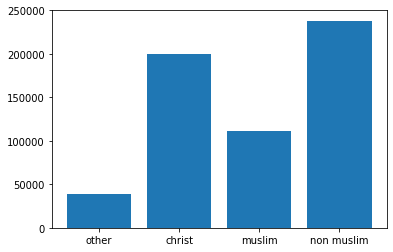

In [51]:
plt.bar(*zip(*religion_bar_graphic.items()))
plt.show()